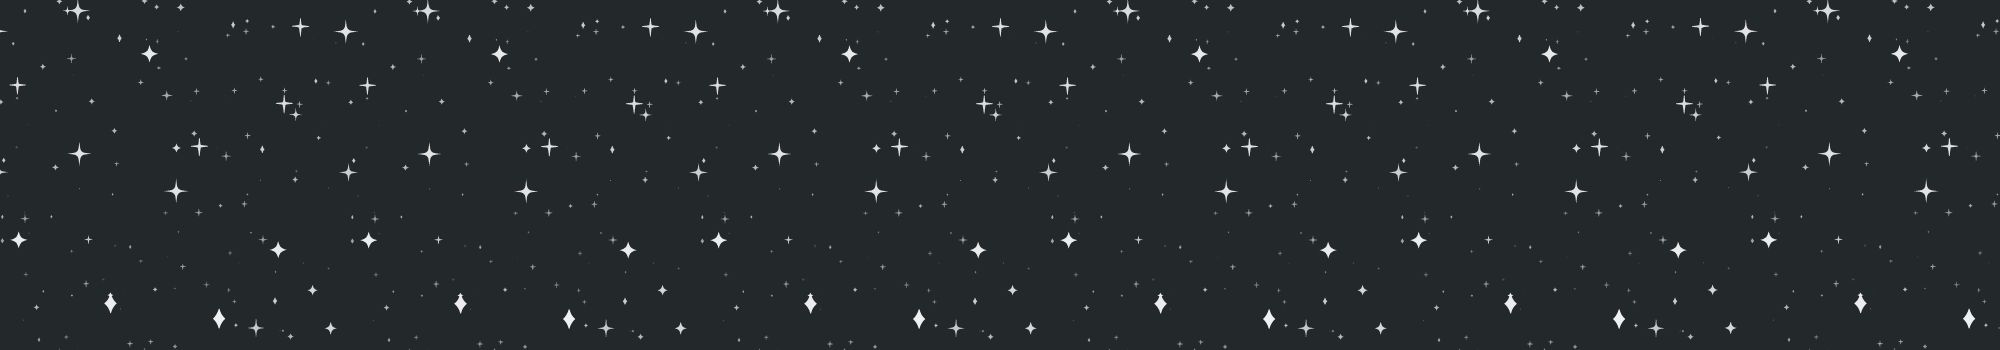

# Supreme Observer - Quantum Explorers Qiskit Challenge

## Table of Contents
- **[Story](#Story)**
- **[Instructions](#Instructions)**
- **[Quantum Explorers Qiskit Challenge](#Quantum-Explorers-Qiskit-Challenge)**
    - **[1. Getting Started](#1.-Getting-Started)**
    - **[2. Black hole Information Paradox](#2.-Black-Hole-Information-Paradox)**
    - **[3. Learning a Scrambler](#3.-Learning-a-Scrambler)**
    - **[4. Decoding Information](#4.-Supreme-Observer)**
    - **[5. Running on an IBM Quantum Device](#5.-Running-on-IBM-Quantum-Device)**
- **[Unlock Your Badge](#Unlock-Your-Badge)**
- **[Bonus Material: Can we _truly_ learn a scrambler?](##Bonus:-Can-we-truly-learn-a-scrambler?)**
- **[Additional Information](#Additional-Information)**


## Story


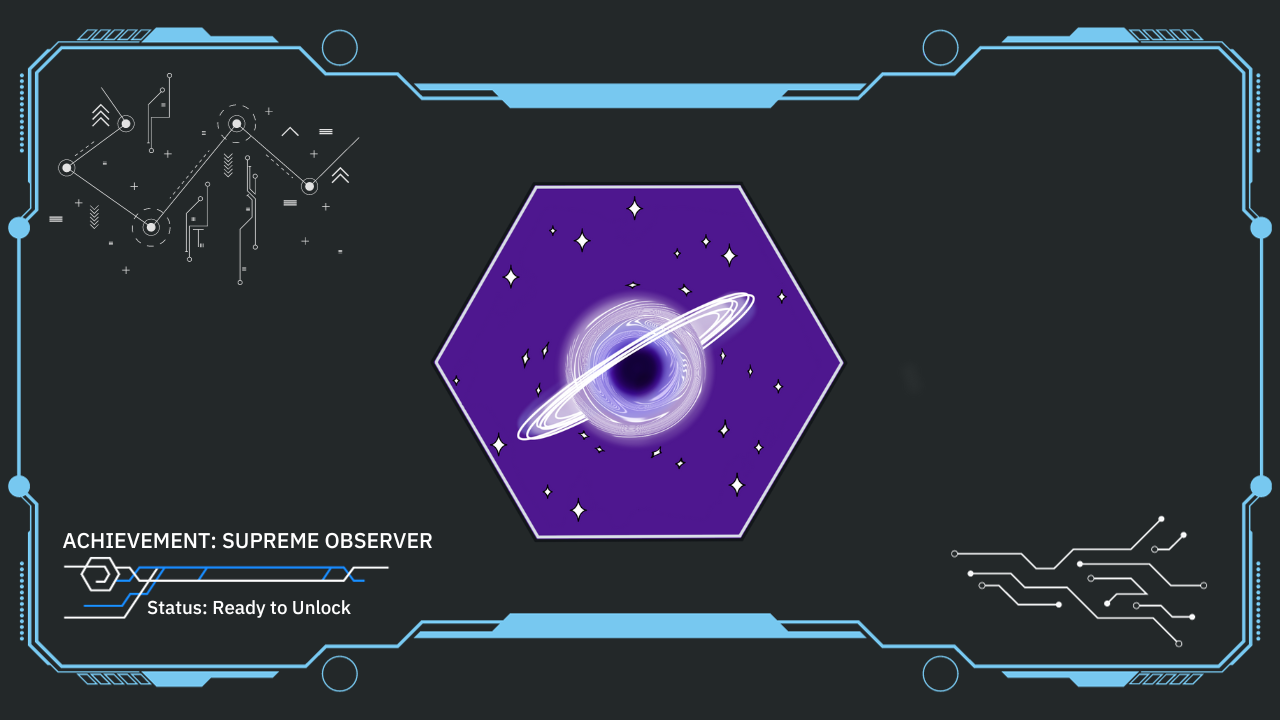

You and your crew encounter a real black hole and have the unique opportunity to study it up close. Thanks to all the new technology integrated into your starship, you are optimistic you will be able to retrieve information from it in a way that scientists back home on Earth can only dream of. What extraordinary secrets of the universe will this black hole reveal to you?

*(Share the exciting secrets you may discover about our universe in the **[#space-exploration channel on Discord!](https://discord.com/channels/979714492533440533/1108653145116131338)** Are we living in a simulation? Are there other universes? Feel free to get creative!)*

You and your crew notice something small and rectangular falling into the black hole. It looks rather like a metallic book, albeit old and worn and battered by asteroids. There's etching on its surface, in strange, curving letters. The universal translator aboard your starship, after much clicking and whirring, determines the closest possible matching text to be "ALICE". 

You and your crew excitedly begin to refer to the object as "Alice's diary," but before you can make arrangements to retrieve it, it falls completely out of your reach and into the black hole. 

Determined to not let the information contained in this diary disappear forever, you dispatch an array of probes to collect the Hawking radiation from the black hole.

Tackle this challenge to retrieve information from a black hole, learn the secrets of Alice's diary and perhaps the universe, and become a Supreme Observer.

## Instructions

### Tasks to complete to unlock this achievement

1. Supreme Observer Badge Kick-off: Quantum Explorers Qiskit Challenge
 - Date: November 28 [[time]](https://dateful.com/convert/indian-standard-time-ist?t=6pm) [[video link]](https://www.youtube.com/watch?v=qmJgCEctCqU)
 - The recording will be available at the link provided.
2. Tackle the challenge below. Read through the challenge material carefully, and feel free to consult with your fellow Explorers.


### Scoring

- The challenge is comprised of 8 exercises worth 1 point each.
- You must hit 7 points or more to pass.</font>


This challenge will remain live until the end of the Quantum Explorers 2023-24 cohort.

For any questions or discussions about the Supreme Observer badge and its material, please use the **[#qe-challenge](https://discord.com/channels/979714492533440533/1100411429015801939)** channel on Discord.

**Important Link**

- **Supreme Observer Discord channel: [#qe-challenge](https://discord.com/channels/979714492533440533/1100411429015801939)**



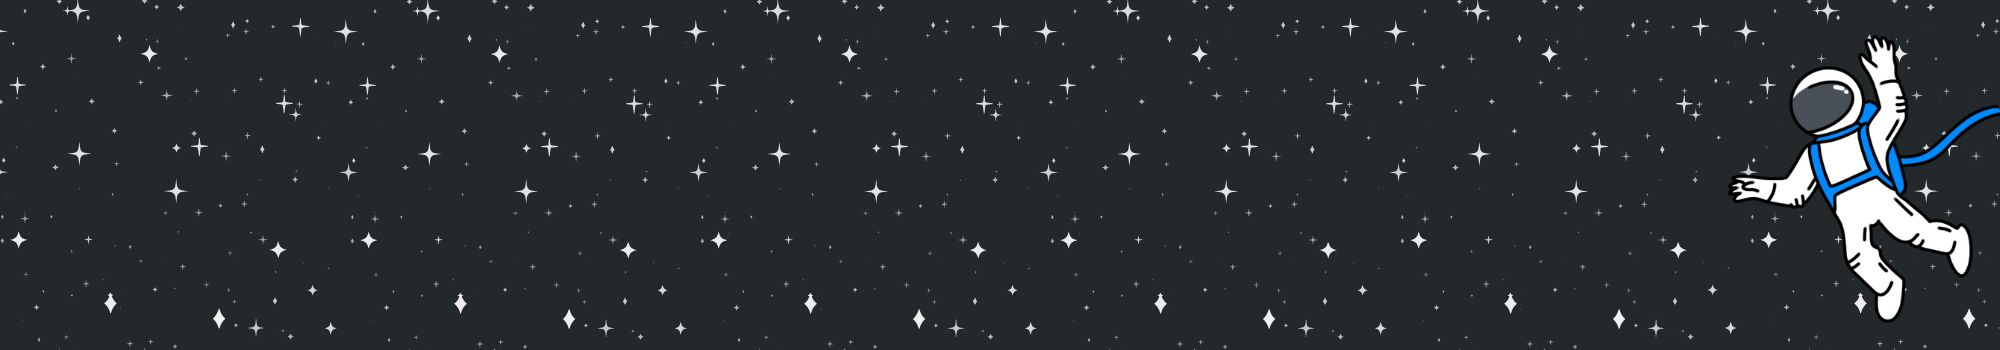

# Quantum Explorers Qiskit Challenge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import getpass

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, qpy, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options
from qiskit_ibm_runtime import Sampler as RuntimeSampler
from qiskit.visualization import plot_distribution
from qiskit.circuit.library import TwoLocal, StatePreparation
from qiskit.quantum_info import DensityMatrix, partial_trace, random_unitary, Operator
from qiskit.primitives import Sampler
from qiskit_aer.primitives import Sampler as AerSampler

from scipy.optimize import minimize

# set random seed
np.random.seed(seed=42)

# font size of plots
plt.rcParams.update({'font.size': 16})

%config InlineBackend.figure_format='retina'

In [2]:
try:
    service = QiskitRuntimeService(channel='ibm_quantum')
except Exception:
    QiskitRuntimeService.save_account(channel='ibm_quantum', token=getpass.getpass('Enter IBM Quantum token'), overwrite=True)
    service = QiskitRuntimeService(channel='ibm_quantum')

# 1. Getting Started

Your goal is to decode Alice's diary.

To begin, let's load a operator that represents the (scrambling) evolution dynamics of a black hole. For now, we will leave the discussion of what constitutes as scrambling in a latter section.

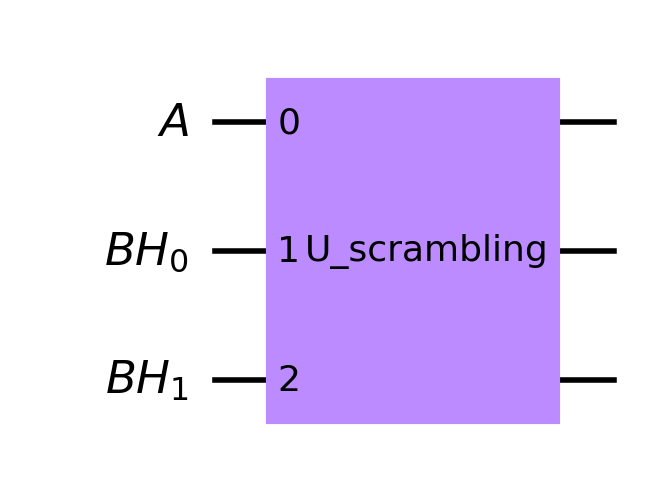

In [3]:
with open('scrambler.qpy', 'rb') as fd:
    bh = qpy.load(fd)[0]

bh.draw('mpl')

This circuit captures the action of a black hole (`BH` qubits, the blue box) on Alice's diary (`A` qubit). When Alice's diary falls into the black hole, the information is scrambled across the black hole instantaneously. Over time, Hawking radiation (the red box) is emitted and only this subsystem accessible by an observer - YOU!


<center><img src='data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABlQAAAJ4CAYAAAATLw7mAAAMP2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkEBoAQSkhN4EkRpASggt9N5EJSQBQokxEFTs6KKCaxcL2NBVEQUrzYIidhbF3hcLKsq6WLArb1JA133le/N9c+e//5z5z5lzZ+69A4DacY5IlIeqA5AvLBTHBvvTk1NS6aSngAJoQBngwIzDLRAxo6PDASxD7d/Lu+sAkbZX7KVa/+z/r0WDxy/gAoBEQ5zBK+DmQ3wQALyKKxIXAkCU8mZTCkVSDCvQEsMAIV4oxVlyXCXFGXK8V2YTH8uCuB0AJRUOR5wFgOolyNOLuFlQQ7UfYkchTyAEQI0OsU9+/iQexOkQW0MbEcRSfUbGDzpZf9PMGNbkcLKGsXwusqIUICgQ5XGm/Z/p+N8lP08y5MMSVpVscUisdM4wbzdzJ4VJsQrEfcKMyCiINSH+IODJ7CFGKdmSkAS5PWrALWDBnAEdiB15nIAwiA0gDhLmRYYr+IxMQRAbYrhC0KmCQnY8xLoQL+QXBMYpbDaLJ8UqfKENmWIWU8Gf5YhlfqW+7ktyE5gK/dfZfLZCH1Mtzo5PgpgCsXmRIDESYlWIHQpy48IUNmOLs1mRQzZiSaw0fnOIY/nCYH+5PlaUKQ6KVdiX5RcMzRfbnC1gRyrw/sLs+BB5frB2LkcWP5wLdokvZCYM6fALksOH5sLjBwTK54494wsT4hQ6H0SF/rHysThFlBetsMdN+XnBUt4UYpeCojjFWDyxEC5IuT6eKSqMjpfHiRfncEKj5fHgy0A4YIEAQAcSWDPAJJADBJ19jX3wTt4TBDhADLIAH9grmKERSbIeIbzGgWLwJ0R8UDA8zl/WywdFkP86zMqv9iBT1lskG5ELnkCcD8JAHryXyEYJh70lgseQEfzDOwdWLow3D1Zp/7/nh9jvDBMy4QpGMuSRrjZkSQwkBhBDiEFEG1wf98G98HB49YPVCWfgHkPz+G5PeELoIjwkXCN0E25NFJSIf4oyAnRD/SBFLjJ+zAVuCTVdcX/cG6pDZVwH1wf2uAv0w8R9oWdXyLIUcUuzQv9J+28z+OFpKOzIjmSUPILsR7b+eaSqrarrsIo01z/mRx5rxnC+WcM9P/tn/ZB9HmzDfrbEFmIHsDPYCewcdgRrBHSsFWvCOrCjUjy8uh7LVteQt1hZPLlQR/APf0NPVprJAsdax17HL/K+Qv5U6TsasCaJpokFWdmFdCb8IvDpbCHXYRTdydHJGQDp90X++noTI/tuIDod37l5fwDg3To4OHj4OxfaCsA+d7j9m79z1gz46VAG4GwzVyIuknO49EKAbwk1uNP0gBEwA9ZwPk7ADXgBPxAIQkEUiAcpYAKMPhuuczGYAmaAuaAUlINlYDVYDzaBrWAn2AP2g0ZwBJwAp8EFcAlcA3fg6ukBL0A/eAc+IwhCQqgIDdFDjBELxA5xQhiIDxKIhCOxSAqSjmQhQkSCzEDmIeXICmQ9sgWpQfYhzcgJ5BzShdxCHiC9yGvkE4qhKqgWaohaoqNRBspEw9B4dDyahU5Gi9H56BJ0LVqN7kYb0BPoBfQa2o2+QAcwgCljOpgJZo8xMBYWhaVimZgYm4WVYRVYNVaHtcDnfAXrxvqwjzgRp+F03B6u4BA8Aefik/FZ+GJ8Pb4Tb8Db8Sv4A7wf/0agEgwIdgRPApuQTMgiTCGUEioI2wmHCKfgXuohvCMSiTpEK6I73IspxBzidOJi4gZiPfE4sYv4iDhAIpH0SHYkb1IUiUMqJJWS1pF2k1pJl0k9pA9KykrGSk5KQUqpSkKlEqUKpV1Kx5QuKz1V+kxWJ1uQPclRZB55GnkpeRu5hXyR3EP+TNGgWFG8KfGUHMpcylpKHeUU5S7ljbKysqmyh3KMskB5jvJa5b3KZ5UfKH9U0VSxVWGppKlIVJao7FA5rnJL5Q2VSrWk+lFTqYXUJdQa6knqfeoHVZqqgypblac6W7VStUH1supLNbKahRpTbYJasVqF2gG1i2p96mR1S3WWOkd9lnqlerP6DfUBDZrGGI0ojXyNxRq7NM5pPNMkaVpqBmryNOdrbtU8qfmIhtHMaCwalzaPto12itajRdSy0mJr5WiVa+3R6tTq19bUdtFO1J6qXal9VLtbB9Ox1GHr5Oks1dmvc13n0wjDEcwR/BGLRtSNuDzive5IXT9dvm6Zbr3uNd1PenS9QL1cveV6jXr39HF9W/0Y/Sn6G/VP6feN1BrpNZI7smzk/pG3DVADW4NYg+kGWw06DAYMjQyDDUWG6wxPGvYZ6Rj5GeUYrTI6ZtRrTDP2MRYYrzJuNX5O16Yz6Xn0tfR2er+JgUmIicRki0mnyWdTK9ME0xLTetN7ZhQzhlmm2SqzNrN+c2PzCPMZ5rXmty3IFgyLbIs1Fmcs3ltaWSZZLrBstHxmpWvFtiq2qrW6a0219rWebF1tfdWGaMOwybXZYHPJFrV1tc22rbS9aIfaudkJ7DbYdY0ijPIYJRxVPeqGvYo9077Ivtb+gYOOQ7hDiUOjw8vR5qNTRy8ffWb0N0dXxzzHbY53xmiOCR1TMqZlzGsnWyeuU6XTVWeqc5DzbOcm51cudi58l40uN11prhGuC1zbXL+6ubuJ3ercet3N3dPdq9xvMLQY0YzFjLMeBA9/j9keRzw+erp5Fnru9/zLy94r12uX17OxVmP5Y7eNfeRt6s3x3uLd7UP3SffZ7NPta+LL8a32fehn5sfz2+73lGnDzGHuZr70d/QX+x/yf8/yZM1kHQ/AAoIDygI6AzUDEwLXB94PMg3KCqoN6g92DZ4efDyEEBIWsjzkBtuQzWXXsPtD3UNnhraHqYTFha0PexhuGy4Ob4lAI0IjVkbcjbSIFEY2RoEodtTKqHvRVtGTow/HEGOiYypjnsSOiZ0ReyaOFjcxblfcu3j/+KXxdxKsEyQJbYlqiWmJNYnvkwKSViR1J49Onpl8IUU/RZDSlEpKTUzdnjowLnDc6nE9aa5ppWnXx1uNnzr+3AT9CXkTjk5Um8iZeCCdkJ6Uviv9CyeKU80ZyGBnVGX0c1ncNdwXPD/eKl4v35u/gv800ztzReazLO+slVm92b7ZFdl9ApZgveBVTkjOppz3uVG5O3IH85Ly6vOV8tPzm4Wawlxh+ySjSVMndYnsRKWi7smek1dP7heHibcXIAXjC5oKteCPfIfEWvKL5EGRT1Fl0YcpiVMOTNWYKpzaMc122qJpT4uDin+bjk/nTm+bYTJj7owHM5kzt8xCZmXMapttNnv+7J45wXN2zqXMzZ37e4ljyYqSt/OS5rXMN5w/Z/6jX4J/qS1VLRWX3ljgtWDTQnyhYGHnIudF6xZ9K+OVnS93LK8o/7KYu/j8r2N+Xfvr4JLMJZ1L3ZZuXEZcJlx2fbnv8p0rNFYUr3i0MmJlwyr6qrJVb1dPXH2uwqVi0xrKGsma7rXha5vWma9btu7L+uz11yr9K+urDKoWVb3fwNtweaPfxrpNhpvKN33aLNh8c0vwloZqy+qKrcStRVufbEvcduY3xm812/W3l2//ukO4o3tn7M72Gveaml0Gu5bWorWS2t7dabsv7QnY01RnX7elXqe+fC/YK9n7fF/6vuv7w/a3HWAcqDtocbDqEO1QWQPSMK2hvzG7sbsppamrObS5rcWr5dBhh8M7jpgcqTyqfXTpMcqx+ccGW4tbB46LjvedyDrxqG1i252TySevtse0d54KO3X2dNDpk2eYZ1rPep89cs7zXPN5xvnGC24XGjpcOw797vr7oU63zoaL7hebLnlcauka23Xssu/lE1cCrpy+yr564Vrkta7rCddv3ki70X2Td/PZrbxbr24X3f58Z85dwt2ye+r3Ku4b3K/+w+aP+m637qMPAh50PIx7eOcR99GLxwWPv/TMf0J9UvHU+GnNM6dnR3qDei89H/e854Xoxee+0j81/qx6af3y4F9+f3X0J/f3vBK/Gny9+I3emx1vXd62DUQP3H+X/+7z+7IPeh92fmR8PPMp6dPTz1O+kL6s/WrzteVb2Le7g/mDgyKOmCP7FcBgRTMzAXi9AwBqCgA0eD6jjJOf/2QFkZ9ZZQj8Jyw/I8qKGwB18P89pg/+3dwAYO82ePyC+mppAERTAYj3AKiz83AdOqvJzpXSQoTngM2xXzPyM8C/KfIz5w9x/9wCqaoL+Ln9F0cEfFtjTWSaAAAAimVYSWZNTQAqAAAACAAEARoABQAAAAEAAAA+ARsABQAAAAEAAABGASgAAwAAAAEAAgAAh2kABAAAAAEAAABOAAAAAAAAAJAAAAABAAAAkAAAAAEAA5KGAAcAAAASAAAAeKACAAQAAAABAAAGVKADAAQAAAABAAACeAAAAABBU0NJSQAAAFNjcmVlbnNob3ToiTMHAAAACXBIWXMAABYlAAAWJQFJUiTwAAAB12lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj42MzI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTYyMDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgrKn4G0AAAAHGlET1QAAAACAAAAAAAAATwAAAAoAAABPAAAATwAA7+r0OBqtgAAQABJREFUeAHsvQmcZlV1rr9rnqu7eh6huwGlAUGIKII4EDQCIsSbKGg0+Fevov5VxDj9FBWNXlGDxClBMBFFEXGOgnHWK0YBZRaapul5Hqu65qHv+6xTu+rrsqq6qulWhnfD1+d85+y9z97PPvWdqvV+a62yPSrJxQRMwARMwARMwARMwARMwARMwARMwARMwARMwARMwARMwARMYEwCZRZUxmTjEyZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiYQBCyo+EYwARMwARMwARMwARMwARMwARMwARMwARMwARMwARMwARMwgX0QsKCyD0A+bQImYAImYAImYAImYAImYAImYAImYAImYAImYAImYAImYAIWVHwPmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJmIAJmMA+CFhQ2QcgnzYBEzABEzABEzABEzABEzABEzABEzABEzABEzABEzABEzABCyq+B0zABEzABEzABEzABEzABEzABEzABEzABEzABEzABEzABExgHwQsqOwDkE+bgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAUV3wMmYAImYAImYAImYAImYAImYAImYAImYAImYAImYAImYAImsA8CFlT2AcinTcAETMAETMAETMAETMAETMAETMAETMAETMAETMAETMAETMCCiu8BEzABEzABEzABEzABEzABEzABEzABEzABEzABEzABEzABE9gHAQsq+wDk0yZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgQcX3gAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAmYgAnsg4AFlX0A8mkTMAETMAETMAETMAETMAETMAETMAETMAETMAETMAETMAETsKDie8AETMAETMAETMAETMAETMAETMAETMAETMAETMAETMAETMAE9kHAgso+APm0CZiACZiACZiACZiACZiACZiACZiACZjA44fAnj17UllZWcpbZs4+JR+PN/on1ynd5nPUpeRtPp77Gu1cruOtCZiACZjAI5OABZVH5rp4VCZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAgeIQBY8cne8Lz1WKnLkc6V1syiSz5W+z/XY5j45n+uWl5dHFd5Tctu8zedLz43c572LCZiACZjAX56ABZW//Bp4BCZgAiZgAiZgAiZgAiZgAiZgAiZgAiZgAgeAQBYt8pYus7DB/sDAwJDo0d/fz6HENosb1K2oqIhXX19fbHM9znGsqqoq9fb2psrKyugvOtE/CCP0T6E/9qlLO87lcbCl5Pfs5+tTjxfv86v0/FjHqONiAiZgAiZw8AlYUDn4jH0FEzABEzABEzABEzABEzABEzABEzABEzCBA0ig0CSGQ3OVihMIGYggWdxgmwULhoBg0dHRkbq6utKuXbvShg0b0tatW+PY9u3bU1tbW+xTp7W1NUbd2dkZ7RBU6A9BBeGFfbb5PeMoFT1ojKjCNdnW1tamurq6eLW0tKTp06enpqamNG3atDR79uzY1tTUpIaGhhBssvjCdXLf9MU1s/CStzHQwX9K51t63PsmYAImYAIPj4AFlYfHz61NwARMwARMwARMwARMwARMwARMwARMwAQOMoEsLLDNrywylHqYIDTwvqenJ4SRHTt2pC1btqRNmzalNWvWpLVr16Zt27aFkIJg0t3dnRBLKIgiuSBS0A/bLGRwPV6IFWzxUKFOaSmtn8fMMcZFKRVbOJ/HW11dHf0hprCPwNLc3JwWLVqU5s2bl2bOnBmCy4wZM0JsySIN/eXr0BcvjnFNtiOvGQf8jwmYgAmYwH4TsKCy3+jc0ARMwARMwARMwARMwARMwARMwARMwARM4GARyEIBW15Z0EDE4MUxtggheJUsX7483X///enuu+9Oq1atCi+T3bt3h2cI4kcWGRBb8DShHfu5/xzii+OlYgTzow6FMdAPW0QN2uT2WTjhPe2pk/dpyz51KJznlcfEPmJI7iMLLFwD0Ye29Ec9PFuWLFmSFklsOfHEE9P8+fPjGN4v8MiiCn3QX+k1aJ9L6djyMW9NwARMwATGJ2BBZXw+PmsCJmACJmACJmACJmACJmACJmACJmACJvBnIICBv3ghXBSCSRYsEBOy4EB4rmXLlqWbb745/fGPfwzxBCEB4QAxBAGCdoglHM/CRp4C16DkbT5eus3nSgWIfH60Y/ncyG3uh+O5HVuO5/fsl74fWTe/z/NHHMovwocxxylTpoQHy5Oe9KT09Kc/PQQXjuW5w6bUq4Vr8+K4iwmYgAmYwMQJWFCZOCvXNAETMAETMAETMAETMAETMAETMAETMAETOMAEEBOy4b+vr/A+6e8vkr8jFqxevTrdfvvtIaDgeUIIL/Kf0C6LKFk4oZ/S18ihZjGD47Tfn5KFkIm0He0auX3eUodXfj9Wv5zPL+rk/ex9g0cKpbGxMbazZs1KCxcuTCeccEI66aST0ty5cyOHC2ITBYEme7PkvuKE/uG9iwmYgAmYwJ8SsKDyp0x8xARMwARMwARMwARMwARMwARMwARMwARM4CARyCIDwgdCCCLKnj0DcTX2161bl1aseDDdeuut4YHC+xyaCzGAMF70gTdK7isPdeT7kUJBrsd2ZN3Sc+PtT0ZsGHmN0rbs5/NsS8+Nd/18bry2eK4gsOSwX3irzJkzJx1xxBHp6KOPTkceeWSECqMe60DJHjClIku+lrcmYAImYAIFAQsqvhNMwARMwARMwARMwARMwARMwARMwARMwAQOGoFhw3+RgwTxJHuUsCUp/IYNG9Itt9ySfvKTn6Q777wzxAU8LxBSEE4oGP7pK784lvtm32VvAgg0ePDkF+IKeVZghmgyffr0dMopp6TTTz89LVI+Fs5Rh3ZZXKFtFnrydu+r+J0JmIAJPL4IWFB5fK23Z2sCJmACJmACJmACJmACJmACJmACJmACfzYCAwOE8yryofT29kVuk4qK8kgYT/6TG2+8Md11111p165dIZh0dHSEiJLzoJSKJ9mgz7G8/2ebyKPgQuOJS5lX3uKZgoDS1NQUW/KrEB7sjDPOSMcff3yILQhY1Occ4hb7ZWUILI8CGB6iCZiACRwkAhZUDhJYd2sCJmACJmACJmACJmACJmACJmACJmACjzcCWQBBSMETRdqHksR3ySBfFWLKb27+TfrJT3+c7rvvvrR+/fo4hpcKAgpb2ucQVOMJBBPleiD6mOi1Hm318D7Jnih4pmSRhRws8+fPT2eddVZ4sODJ0tbalqprarSOw3lXaA/fLNI82ubv8ZqACZjA/hCwoLI/1NzGBEzABEzABEzABEzABEzABEzABEzABExgiACGdV4IKQgjvb09cY6cJ3ii/OIXv0i33XZb2rp1a4gnCCjZG6VoV4TzGupQOwfCUE/fLsMEsljFkcLjpHA3ycIKxxBWpk2bFo1aWlrS0qVL0zOf+cx04oknhjcLa1xVVRleK+XlFeGxciDWaniU3jMBEzCBRy4BCyqP3LXxyEzABEzABEzABEzABEzABEzABEzABEzgEUsgixUY6RFReCGgsEUs+c1vfpO+9a1vpVWrVg2JJwgpoyWTf8RO8lEwsLwO+ztU2mdxJe/TFyJLfX19amhoiH3EFbxWnvOc50SCe87zIhwYwkqRb+XACGH7Oxe3MwETMIGDTcCCysEm7P5NwARMwARMwARMwARMwARMwARMwARM4DFEIBvwEVIQUEgczxbD+rJly9LnP/95eaXcE+8RVtra2kJQAQFt+/sLr5Hs1ZC3jyFEf9ap5PXY34vm9qXrwDEEkhwWrKJCnisSV5qbm1NFeWWaN29eOu+889Kpp56qNU2pSmtfOei1UogzzrWyv+vhdiZgAo9sAhZUHtnr49GZgAmYgAmYgAmYgAmYgAmYgAmYgAmYwCOGAN4nCCk9Pb0hotTW1qRt27anm5Rc/vs/+EFat25t6urqkhdKd2ypnw32w5MoH97VXqkhf68TfvNnIfCn6zN82bw2ZeVFSLfKiiqF+6qO0F+IK7NmzUpPe9pJ6fzzz08zZsyINScfC7lWsiCT+xju1XsmYAIm8OglYEHl0bt2HrkJmIAJmIAJmIAJmIAJmIAJmIAJmIAJHHQCGNwRUXgRrksSSORB+cMfbk/f/e530u9//4e0u313KttTlto72iS0ILr0DrXJAxw2rD82BJXh+eQZ7ns7nnix79YHp8Z4YxqaY9lAcXGtcZE3pSzCfTU1NSnnSoNElirlWHlKOvsFZ6fjnnxcnFM6loS4Qh+EBnMxARMwgccCAQsqj4VV9BxMwARMwARMwARMwARMwARMwARMwARM4AATyCJKaW4Uwnf93//7awkp31NYr3vlqVCXtm/fFmG/CuGlf3AUhQGecFC5YGAvyuNXUGH+4wkYg4D+rJvxxjOaoIKgRqEdQgkh3PBWaWioT3W6HxYtXpz+4R9elo499ljdHzXhqUI4OF70h+eKiwmYgAk8WglYUHm0rpzHbQImYAImYAImYAImYAImYAImYAImYAIHmABG8vxCSCE/Ckbwbdu2pSuvvDLdfPPNcayzszPyouCxksOA0W7IAH+Ax3Ww+mWYB7PvkRi4Fi/EqoNZWIuJlsnUHdlnZpdzrSCa5ET21H3Zy16W/v7v/z6ElyIUGAnsya8CB+dZGcnT703ABB75BCyoPPLXyCM0ARMwARMwARMwARMwARMwARMwARMwgYNOACM/xnVEEl4Yx5cvX56uvfbadOeddyZElJ07d0aS+ZwbhTYYx7NRPhvYD8ZgD1bf+9vvgfa0gGHm+HD5TaafydTd17hgyX0DG4QVPFdmzpyZTj755HTBBRdEaDDOIa6wxcNlf/nvayw+bwImYAIHg4AFlYNB1X2agAmYgAmYgAmYgAmYgAmYgAmYgAmYwKOAQDamZy+T7u7uMHrfd9996frrr0+33npr2r17d3ijtLe3RyJ62uQXxvDcB9M90Mbx3F/eHgykWRjBqYNXSgNDYanG8yTJ7dKeHMJKjcsm7hky2blk5mO1GxoPM5iEB0zp+o3V90Tq5LasFWNhi2BSU1MTSexbWlrSueeem84+++xIYE+f5F4p6hbeKgdznfP4vDUBEzCBh0PAgsrDoee2JmACJmACJmACJmACJmACJmACJmACJvAoJZAN9Hij9PX1hRF+06ZN6brrrku/+MUvIpTX5s2bI8QX5xFdSstoRvYDbRAv7a90v3QcD3c/CxGPdEFl5DxHiibwyYxGnhvZtvT9aOtYep79idQpbZPHwTH28UhpaGgIcWXKlCkKA/bidOaZZ6bGxkadL5LXI77wcjEBEzCBRzIBCyqP5NXx2EzABEzABEzABEzABEzABEzABEzABEzgABPAOI7BnRdCCa+Ojo50zTXXpJ///OeptbU17dixI+GtwjnqT9agPt6QS43t49Xj3GTqUh9xhHnl8eb2bPOLepSBAbxrBlJFeUXq7etNVZVVQ+2iQtlACADkkcHQnzkMlOhKQ/2Xk6gd75TCQyXXjX7G+Gciokf29CjtIl+TY6xPFoRK60xmP48jM5to2/Hql44x95fnQigwXniuvOY1r0kvfOELg21NTa08VkhcX645DYtDub23JmACJvBIIGBB5ZGwCh6DCZiACZiACZiACZiACZiACZiACZiACRxkAtkAjqdJFlIwphPa63vf+16E9iK8F3lS8Fqhfja2H8ihjWZsH6v/ydSlj1JxoXSffvKLeYVxPxXeEP1SSPCgYM57e0j0i0ExMtoMjWUwxFdZiCiSUAYGBacI91U0gNtY7PLxvB1r7qXzKb1+HkfpfKhLHV4UzuX9ODDOP6XjKL0OTcbrY7xzeYyjXRb2cMZThZBf06dPTy996UtDWBkQy5qa6qE8LOP1M1rfPmYCJmACB5uABZWDTdj9m4AJmIAJmIAJmIAJmIAJmIAJmIAJmMBfkEA2fGM4R0jJCeXxRvna176W1q5dm3bt2hWeKZyn3iPFkJ1FEeaQ55HHVrot3cdYzxxJjs4rt2MJMOBzrkrHKyqrwwunrq4uRBHJEDHv3j55pMhrpX9AXiuqT99wyW0rKqoiDFplRWUakIfLQP+A6ma3leyhMhB90wYPlzx+2DKnLGLk46W3Rx5v9orhXK6f6zGm0hfHSxlQn3mWXiufz33kbb7eaO9Hnst12I53bqxrlbZnjHipNDU1xXbp0qXpFa94RTrxxBPVN2ulNdJalmst8FhxMQETMIFHAgELKgdhFW644YZ01VVXhcL+3ve+Nx155JEH4Sru0gRMwARMwARMwARMwARMwARMwARMwAT2TSAb17NXyvLly9O1116bbr/99vDKIE8K3hm5Hj1OxCC+7ys/vBqMIQsq9IQBP7/nXD5fKhpgoOd9rkc7jPIIK8wf8YT3xXGJJXvKQgzhPG3KyiokkvSlmuqa1NdfhPqCDbk+Ojs7Vaci9fX0p4qqitTV2RWeLXAjZBieKn39fdF3TU1V1EfUyNwZL3MgvFoWejjPi3MUztMfJddnPx9jP5fSOeb2pVvO5zWlX16cz3VyPyO3tKEO9XMf1OF9aRn5vvTcvq5B3dye9aitrQ3GrN/TnnZSet1rX5tmz54j0as8hCzqTGTspWPwvgmYgAkcDAIWVA4w1e3bt6fnPe958UDlwcCDANfZWbNmHeAruTsTMAETMAETMAETMAETMAETMAETMAETGJ0ANgns3wPynEAQ4IXh/sorr0y//OUvw9i/YcOG1NXVFR1k43beTsQgPvqVJ3c0G+5HtsrXL0SOQmzIBnWO5RfHsohCH4TuwvieDfCIAxjrOY6nCPt9ff1qUy3RpC7t2LUjzZ83Pzh0SiCpq61XLwOpq7tLBv764IYgwnVoS3/V1bWpdVdrqpU409PTHd4s1OGajIvS0bk7GNOO45yHLVty0+T1oD+OUTjPcY5R2LJmeT92Sv7J18qHcrv8nvNcP4tFHM8CTl7nXHe8Lf3SF9vSdqX7I9tz3X2Vke3hhEfPnDlzU3VVTTr3b89J5513Xoyf9WMelZWFsLKvvn3eBEzABA4WAQsq+0k2P0xGNv/d736XLrzwwviQzw+PJUuWpK985Ssjq/q9CZiACZiACZiACZiACZiACZiACZiACRxQAogoMs2H4btfoai6ujrDoP+DH/wgbBPt7e1py5YtkS8FQ342kmcbRh7MSGN3Pr6v7ch+Rq2vZO9RbzAXCcZ6riffCVUvBIkwnivkE4XzhODSrFKljlUrVBdVCbmFyIF3SBZSqE/dagkmnR2auwzwvT290Y5+EDNy4ZqE62IsIbbU1cZ53vNfVXURHoz3YexX0nquRf+Mg+tH0VjgyHGuV6vk6oyvR9dlfJ3tHamuvi7tat0VeUN27tgZnjI9vT1xHUQO1mJ3++4ifJjec52e7p7oPuppDP0SgrIHjFDENfNckpgWhRsgboIIR5bEmLHnwlzgQGHMvCZTaJ/vmdJ7pHSf/qhHGXk8Do7xTx4bWzyJpk6dmqZNmxZ2ttNOOy3WhuNxP5TMaYzufNgETMAEDgoBCyr7gfVnP/tZ+tjHPhYPBZJmvfzlL9+rl7POOitt3bo1jvEQ4PWe97wncdzFBEzABEzABEzABEzABEzABEzABEzABA4WAYzd2UDPdtWq1enqq69K9957bySbJ+E84kE2iudxYLsoLZMxhJe2G9kP5zi2V38lggrGcV7U4VUpsaS8rBAB4phyZ1RJyECoYBtChjwVEELqG+pTX688Q3SOuSJAsCWfCecRYBBGECFCPEI8UX+E5kLwoG15ReF5kQUbuHBdCt4iDQ0NQx4k9FNXUxfvGQclj5/5IZ7QN2JQ5tvc3BxjKlfoKgQY+q6uqpYHS0eqr2+Q2MH1i0TsjIexx/jUN3XQRlrbWmPN8CbiOswxe7hk75ZCRCGkF6MaDhuGQEWbUv55zHmenMvzLq1HT5Tcnm2siS7CtvR4UbOoy35p3/ncZLaMEW8VEtfDkLwqr3zlK9PcuXNDIMIrqRCKGMtkenZdEzABE3h4BCyoTJIfSdrOPvvseNDQlAfExRdfnM4999yhnm677bb0hje8YehhRR0epjfddFPEgxyq6B0TMAETMAETMAETMAETMAETMAETMAETOAAEsgEfAzshrfBEwQ7x5S9/WUJDb9q8ZZOM8t1Dhv7RDOelw9jX+dK62Xheeoz90uPsZ4M85zCYZ88JzrFfKcGktrYuPErIWUJ9BA0SvyNGIH4gOjBH2iAsdHZ3hgBB3SyqdEswIqE5JV8TPjmcVh4XY+A8LwrH87ncLp/L59ki+OR6cVwiTW4b56TWIKDQFlEAUQQBAOcbhB6OMV+EFcbQ2NQ4VI/9tra21NjQGHUiN4v6QUwJwUiCS3dXd+qU5xE5XDjfJ+Gnq6tDYlG55ihRRnwQmRgT86bsGZDqUMY8i7nGQf3DOKjHOKibX/l83uZ+8vuR21JOI8/xfrzz+dxeTDUmSnBSuC+8VbgXXqvcKqeffnp4JFWJH4IUYy9tGw39jwmYgAkcJAIWVCYJlm9xPPe5z42HdP7A5wP9+9//fvHwG+wPz5UVK1bEA4MPdeqedNJJ6YorrpjkFV3dBEzABEzABEzABEzABEzABEzABEzABMYmgLGb8F4IBogNa9asSR//+MfTxo2b9NqQdu3aGZ4P2ZY+EeNztnmMfdXhM2P1l4+XGrzZp3AOYSGHcGI/XpUSHmRLr5OwwhgQEhAHmBfhutgyT8QFhJY8zlLvDkkrQ0JCedmwsILHSq4/PPpiLIgxeVx5q3z1Q4b60CJKGmVRBY+XPM/SvjnGi2PMGWGALe0YB/NjHggt9IHQ0tDYEG34Um5zU3PMoVrnyfdCSDPqIqLAh3Bm9L9t+7bEONsVLqxTHi3wYi5wivHI+4UtggpcRitZLMnjpF+ORTu1peQ6o7XPx/LaltaNMahC3ua6pdt8jutS8nv2OZZfiCrkKCa0/kUXXaSk9bPjC8xwCbaD9xbtXEzABEzgYBGwoLIfZBFLVq5cGS35UOeD/m/+5m/S+973vqHeNm/enF70ohfFwzEfpO5HP/rR9KxnPSsf2q8tie9bWlrigbJfHbiRCZiACZiACZiACZiACZiACZiACZjAY4JANp5jnOd19dVfSD/84U0SUdpSayuhorpltyg8D7BLjFVKjdjUGa/uWH1wnH6KtsNhvDiGwbumWmGaJI5kDw2ZyuP91ClTY0uuE+oRWgsvDIQDBILwStExRAdKhPDqkSfGnmGBgDnq6noxx0IEyONAxCgVX0bOLYcA43gIHhI4SnmArUyqRdDTPzkkFx4zlLGykOQ+2OIxk6+bj4cAoaFWK1cL3iWMvVwXYz/PAuGFNw0Kb0Z7wopNa5kW4kqvRBP6Zd3pq7W1Teu+XWveK3GlKzx+divSCl8OxmtnANFIfWRWcX3GL/GktAQH9cc4EXIoXCOLTqV1S/dzfxzLfea55noj3+fjbEc7l5nlMXHv8MVmhJXnP//56VWvelWMCy6MtXQMpX173wRMwAQOFAELKvtBctOmTRHiiw9zPuzZ8lD5t3/7t3T88ccP9XjVVVclXjxE8gMAl1W8Wfign2z58Y9/nC655JK45tKlS6NvPygmS9H1TcAETMAETMAETMAETMAETMAETODRTwB7BPYGvDbYv/vuu9PnPve5tHbt2siVsmtX66CXwt7G8rFmPtKYne0YY9UfeZz6uU0IDUqGzntCdeFxgZCClwb75ELBMyW8M1QnjPUKZUXS9Y6Ojhh3Nt7znrBW2UAfsgaihua8d+H94DHcSRBA1HeIFCFQFPt4h1Boj00lxi3FIo8d4UUnog6eI1QvZ6vCtamH6EFBfKF0kVxexzic++E4Q+Q6w2Mtrs05Sq5LvdL2ha2HMGiD41DHFeJI4Vzw1Puamqr4wi1eLHXkb2GslWXyXumQB09feKwUeWUGUpeOkZ+FUHDcM8hAmWnexgVG/DPkWaPrcm08X1ib0doU4y46yHNmXnktc9f5XH6ft6Mdz4xyHd4z/6amJuVXaQ5vlTe+8f9PT3ziE4Nh9lYZ2S6399YETMAEHi4BCyr7SfAzn/lMuuaaa+KXgfwhTaKsb3/720PqPV2fc845acOGDUMPSY6dfPLJ6fLLL2d3woVvE6C88+DjAcM1EVec6H7CCF3RBEzABEzABEzABEzABEzABEzABB71BLAJYMzGSB2eBzKO33DDDekb3/hG2AyImMG5bMTONot9TXykMXsi7UrbZMM7W46TXJ4+8BrAq4AvmJIjBWM4nhJ80TSHp+rs7EztHe0xLzxTEFAo0b9EgkjUjlqgksfFNu8Xxn0EkuIYoa1kdtf54frl5UWOFtowhthKlIhwW4MeGhxH7FFaeNVRbhEJGnsGc56op2gD10oJC4g/XBcRYUACDsPrlxcNY+Y4feEpwvuYh/os1mVAokRxnD4ZM3lPGCuFtuwzJDxJYEZhvFwrizv0VS2PH65TXVuTaiWqwLRJOVimTZ+eepU3h/fcI4QHQ1DZrbBg9L91y9bU06v8K4NeJxwrrjs4iLhi8U8x9mKfteVVyh2BJReO53O5Xen7fIxt3s9t2Y52LLcvrccxOBAKrVm2uPq6hkhYT85j7jXuOQQoeMHSxQRMwAQOJAELKg+DJmLGjh07hh4WPHxOPfXUdNlllw31euutt6bXv/71Q3U4wcPui1/8Yjr88MOH6k1kByEm/0LEQ+HFL35xxIycSFvXMQETMAETMAETMAETMAETMAETMAETeHQTwOCMXQBDOIZybBIf/vCH06pVq9L69etDoOAcJRunRzNIj0Yh18/nxmpHvXwub2mTDe0Ys6nT1DRV3ilKvK739fX1ElSaUtvu3RG+q6Nzd8yBL40yDwphtAjlNTI8V5zkvPqksM0huvCEqSyX9wuGfiWBx6ODMUk7kVQx7BHDsYZ6JblXe8KOIe4gBJCzhP54H+NXqyoZ6XUFnZcoI6M9IbdoT34S8tQQeqtLAgViBXPraO9IFdWV8qzpLMahMSCQkFgecYP5YeTfto1QXD061xN1EV8YI8IGbQfkPULBtsR1OE/J8x4QH8SBzByhJfbhonFWIKxoPFXaYjOqYV9J2+fMnquk902pTvMml05Xd2dqUyi43e1tcb/grcK4eGXvk7jwKP/ksQRvMce+xRgiLNugsMK1R5bSY8wvl9zfWO/z8VG3YlFRgedOhda2KU2bNi0tWrQoXXrppeG9gqcKPBhfZjZqPz5oAiZgApMkYEFlksBKq998883pbW97W3ww54cAH9KE+SIkVy7vfOc7089+9rOhhyAPEhJp/eAHP4iHXK63r+2//uu/pq985StRDW+Yq6++Oi1YsGBfzXzeBEzABEzABEzABEzABEzABEzABEzgUUwg2xyykMJUfv3rX6fPfvazaevWrTLWbxsyiI9nPB7vXL5GxjSybj6fj7MtvCWK5PIYrzFuRwJ1GbPra/FIKQzuGLe3b9+hUFM9ITT09itMWb88OeSBgSE/e0fQJ9cp3ebx5OvznmtRuB6hw6olHFRWYeAv3iPgMLa6OoScQjxhHy+VqVOnpB3bd8bxKuUuqZQAsmPnrsjZgljVI8GjT0Z/WCPw5DBkXAvRA8GnT+dkpg/BBY+aKnmIDAyQz4RxlYUHCnNqaGiMuSBUwAJ7ECIL84NTV2evcpt0as7kiukMPtTt7u4aCs2V512ILIQ+K0SWGIvmgwOGfGVC+GH8iEzw4DheGrU1CELlqUGc6utr01Tl5EVsae9oi9BfWQzZLbGrQ15C5F7Ja5Kvra72KnmNmE9xH5SHaJRFmXx+r0Z6M1JYGdn/yPcj2+/1XhMsI7SbSnkZnk8Vac6cOREC7eKL35b+6oQTYn3yfck4XUzABEzgQBCwoPIwKb71rW9N//M//xMPkKyykzCePCn5w5pvXJC0nocxDwceIDwgL7jggvTGN75xUiNYuXJl9MNDgniRLiZgAiZgAiZgAiZgAiZgAiZgAiZgAo9NAtgQspEZOwKhsbAt/Mu//EsiIgYeKiSe5xyvA1myTWO4TwzShVEacQFBAc+LSiVFRzDhGK8WJUzH2B+Gdhnyd7XukqG+I4z3CBThiSIPjtIk8fkaeIaoYYmoknSNyvDYQIDIXhmNEga4FmIKCcoRTeolmDQrpwYGdI7LzK52/eE9wRbbDPwQDjD8UzoH888gKhBeK9tt8DChYIMfkKcK1wqbj4bHlhBkOX9K5FlRXeaFUZ9G5C2px5Olp8hvw7F+nSecGOcYI54kXG+KvnBbITtRTa3CVzU3SfBpCXGFcF6FN0tHJJtnPNu3b49jeKsQNoxxMrchz5wQOEgmX+TyzXlXNDpdswgPxprBDNsV68aYJYvEfQSfEJDkjbNLyezhQmGc/f0SkQAyRsmCUbZ5cT9y747WhmO88v2d7/Hc9cj3+fhY29wfY2hubpa3yvR0+umnh80NPnV1tZpnIe6N1YePm4AJmMBECVhQmSipMerhwnnmmWfGLy75IcGH9fnnn5/e8pa3DLW68cYbI+dJVu85wQPi+uuvT4ceeuhQPe+YgAmYgAmYgAmYgAmYgAmYgAmYgAmYAASwG2BjwKCNCLBu3br0iU98Iq1evTqtWbMmbBGcz1/wHI1aqXE62y1GqzfyWGndwmCt/B1lRf4MvCAIhYW+0igvDMSDCnlLIDxwPYzpGOMRL7rkbcF7xjigUFYUBIlRi4zs9I1HRXFNBJXqCLPFlmNz586Vt0VNmjVrVhjJ8UbJc+R6CCd4e3R29EjMaZWUMJB2txa5Q/A+QTCAGUJIj8ZVzLPIe1JwLNNYC0GIfqsUUox24V2B3qN2GOfpgzmT7yULLohMiEJsESr6JGyoi+BUJnasI94jtEVQ6dOWwr6mHNegL00zQljV1NTKq6QuRALGAhdYYovCm2Tr1m3qqy+EFbxaioLoMSzE0YZCn5khfcENTxXWbvrUaYXII7FlQOe2b98m75mu1CmOXAsvHMK0BTc6KimZPYfgUoy/qEN9XqV1SpoGe/hzPr84P1b90raj7dMX16+trQ9vlSc96UnpnxRZhtBuiCqcKx3faH34mAmYgAnsi4AFlX0RmsB5vFE++MEPxoMvf+jzEP7CF76Qjj766KEeXvOa16Q777wzHhgcpC6eJt/5zneG6njHBEzABEzABEzABEzABEzABEzABEzABLAZYDxHSMEofcstt6SPf/zj4UlAiC+M8yFSEANqP0shJozfGCGAQrisWoW2kq0+jPAIDIQjx1MjDNkSEHqVhB2PmZxgHgEFrxS2MVYJDLkwP14YuOkDISW+hErIKhn6yVFCvhKuT36MadNa0owZMxStoxm3kbjm5s2bgxGeGzt37gxWCDnwamtrj34QAxB+uFYWdLJ3TJmuXYgnxRzw7KBQF3Eg9jV2xkif5F9hTRBRGCPHEE8QHvCKYU0YN3Pt7VFfFQgKRV8VEmao36v2CCiMqbKiWnx6BnPCFInsCe2FGMMWb5LamnqJHMV84T9lylS9mlWnKnisX79B8+7S/HeF+BFeJroOQgvzYN0YF/sUPH44RiEsGvNoUn4ZPI0Y92FLDou6DU0N4U2DoLJx40Ydg2lbvJgHhX5LS76f4AW/LLBkz6rR6nIsxKrBk4whj7W0/mjHSs/n/dwX68D9SXSXK664Qva3uRHyDG4WVTItb03ABPaHgAWV/aE2SptXvOIVadmyZUNiCVVwofzv//7voQcDrrjnnHNOPOBzFzwQLr744kgwn495awImYAImYAImYAImYAImYAImYAIm8PglgMGaVw5N9fnPfz7ysBKGKTwGFKoKw3NpmajBubRNNoCXHhu5X3g1FIIDobUIqYQA0qTwVPX1DRJQipBeCBl4h/QNhvPKniC5vyERQ14EWYQJbw/l+aiQgIDHS628COrlTVCr/dmzZ0f+WcQU5oZAQAJ1xKTNGzfE/BFSYMQLIznnMfITDou8GnjCjJxjiD8SFOBbPigiICrEcfXRozBdhMrKjhg1ldXhoUIdXohGCB0VytnS1dEV7XLYL+aFMIF3R7kElD3lRY4Y+sO7h3nglYIoozfhNkI+Fi5WVlYko0fw6NE1EAaoXwhaiDoIToX3CkwZA2tDffL0sr9kyZKEyAQjcta0tbUGN0KE0RdsmGeeG9egz3INhTXA24h6eK/guTKleUpw5Vw3yewlqCCYkbeH+495sM2vvNZsi7GTK6ZIDh9ClK6fxZjSuuxnIYR2vCh5O3I/Tu7jH+YJo5mzpqfmpinpda97fTrttOfEdRBbirkX3jv76MqnTcAETGAvAhZU9sKx/294iL/gBS+Ihwgf2nzo88H905/+NLa5Z5LKo4xTJxceVN/85jfjAZiPeWsCJmACJmACJmACJmACJmACJmACJvD4IoBhGntCNj4TwuqjH/1ouuOOOyJ/Bu8xSGdDc95OllK2SeT2e78n2fyg14mEAESESm3xNsB+UTcYggqxonVna5GXROGnECLwqogwVppD7hMhJYqOFV4fhPVSOCwZ46dIlKmS10e17CeE8CJ/yMKFC2QAb5LHR33a3d4WCeQ3b96UtutLqggFXcrzwTW6dT3665WYwjx4cX28LihliA+xxxtEnLLweEFcYH4RpkzZQ6qVm6VJIhFiDPPD2E5fzBuBBJGHuSDYRDgytVHzED04xmugbyDa0Qfrg7jBlnBneL1093Yr/Fl72Ifw1qA/Xps3b1W9XoUnU+4S8WT8HKct4geiFO8ZI6IRfSGsMAfulfAY0ixVRa/yyMGCAIVnBmwQpjZs2BBCF2G8+tQf91DmlfvSxUNQCZFhUBRiXohcjU2N8YXhKVOKPL6Mi/Z4rdAXryyscI7C+dLCWIKnwFEn98HcSgvXp+T2zHEiJdcfWZfu8fZpkBA4dUpLev7znz+UyxiPopjv4DVHtvV7EzABExiLgAWVscjsx/HLL788ffWrX42HHQ8FvhmAgDKyvOQlL0mrVq2Kw9Tjg/+Zz3xmuuyyy0ZWndD7e+65J1199dVp6dKlibBi+1vuuuuu9KEPfSgtWLAgHjCLFy/e367czgRMwARMwARMwARMwARMwARMwARMYBIEspiSPS7Wr1+fPvCBD4ThGiGBxO5ZTMmG6LEMyfu67Gjts32ivKzwGCG8FUbwGoWZQmjA06AQQaYUCcslFjAmkqyTfL1/0FNB5vC4/HDujkI8yOIDggeiBd4tM2fOVE6UOWn69BnRP9eokhCybv26tGXzlrRNIgBeEYQQw/MF7xBCiEnpkC1FuVhCvKgKAz1J62GINwheG8yHMWA4Jw8JAg3hnxAhpk+fHtefpS2iA3MkSXuIEMpbgscJY2GcEdxKF8MwjwGefkkGz5doyVsSXiLlVcGmED32hNgT5xVuLMJdDRQ5cLr0nutv2bJJ9eW9InaIRlu2bFWf4tjVk3bs2BltEI66Bj1uEI269SorK4SUYv0K0QqRpBiXvEw0d+6JgnGRe4XoKYceekgc58vARE/ZKSEMAYz1I5QXglCIF2KKhw19iF6ILHsk3sCwsangB6PsNYSYwr2J1wpiEv2NJaow5iys0D/1Su9nzsd1Y92GhZb8czHePU27sQrM6LuxcYpEu5npyCOPTG9/+9tjvbP3TMFzrB583ARMwAT2JmBBZW8eD+sdH+D//u//nr773e+mE044IV166aXxUBvZ6dq1axOiCg8OSlbEaVuac2Vku9He/+pXv0rvfOc748HNA+CYY45JV1555ajXHa19PrZy5coIOxYPUB3kl6af/OQn8dDMdbw1ARMwARMwARMwARMwARMwARMwARM48ASwJ2SvFAzTy5cvT+9617vC6Lxly5ZI8M5Vsx0hG4DHMySPN8o/bZ+9HGT0Vl4PjOr1EiDw4qiWsIIIQIJ0kr1jNN/dViSbZ6wIJSRtJ5n5cMGIXSSwHxY3CpGipWVahPPCKD93zuw0XXlRWluV+Fx9bVA+kHVr14QxHzEFozuhxBBT8OAgCTxj79L1qqurZPuoCOEDAQHBhLE0D4YiQwwhby3XR0DBA2batOkyrDeGQIT40SChgP5qNTfYYhNBsGmQ2IMQgqfM1p3bow6huSrleYJww1gRVRCPEAlSf+HBgoGePrDzIGSwpuxXVBfjrtA4mVO1rsf1CWOGVwoeOPIxkTixQ14pfRKStqc2iRSEeEOwWLNmTfS7afPG4MFYGTcvhJGMHg4DytkyIJEEQQc+zL+6ulbbivAAmiPmrGV7+25dd4vEnC2pT8JOCD8KlYY3UtxX0jTYcg3miCcNc8H7BYbks2G+iC2Mkxw2iICILFlYGr4fhvfok7UJsUrzKDgU88k2qVyb61E4Pt69Pt45tdYcsL0Va8e9wNj/z//5aNwfJKtnflyLubqYgAmYwL4IWFDZF6GDdB5vluuvv37o4cSHNt+UuOmmmyb1AX7VVVelL3zhC/FwYag8RN761reGYDOZoX/5y19OH/vYx0JIYSz0c8opp6RPfvKTk+nGdU3ABEzABEzABEzABEzABEzABEzABCZBgL+/MZBnw/K3v/3tdM0114TRnlwVGLqpwyuXbPgtPZbPjdzmuhzP9fOxPXsKA3IFxmTZrvlyZW1tEfaKXCkIFDU1dYnE7hjKOzolpCg/SAgoEgJyf5IiYj/3iyEfwQMPEYzh2DvwRiGcF0nV582bGwbsAXlX3KFoGXihYJTvlCcK3hK8hwnCThjnES6Uk4T+yeehxoPCSb2Ei8boj34PPfTQCG81b968uCbGcgQACm1JSE6eFwQRyrZNm1O/wmgxtx3KOYJRHUGF99THI6ZH78nJwjyKVxEyjLkX69adGuuKcFgY5hkvIgPc6uqUm0V9VipMFzlh4Du1ZWpqnsqYGE9FeHsgvtA3eVcQWBBdOiVcMVbCe+3ctTNtUoittt1w2hEeLevWrQsRA68TQoHBDJGCgthDOK+8HsFNQkk+hscRvI444ohY4y5dZ6UiqdDXLiW3J5waJbdnv6KiCAXHPvNETMniCmIVc+Z+zS/Gk0XCfJ/QX96nPaIP9xj14EaBw8hCO17wHq/kvveuU/THvc61Yg2Ucwax7c1vfks64fgTFNatGItFlb3J+Z0JmMDoBCyojM7lz3KUnCt80yA/UPjgJmk9rocTLX/4wx/ShRdeOFSdvniwkZOFX1YmWoipyXjyw4N+KF/60pfSE57whIl243omYAImYAImYAImYAImYAImYAImYAITIIDxF+NxNibzd/inP/3pyMUaYZQkMJArhHojDcX5b/aRx0e7bK7LuVw/H8PIXORHKZKpY9ivrUFQqQmhgrERmor8H7tlzO/p6Uq9EhfI7VFaECXIlUK/GMopGK7xBsAjZf78+eEVgndH0We/xIAdad3qtalTxnuSpyNyEF5qQNdEiNGsw76RRQq8SPCMmKmwTQgS8+bNj5DlWaxh7FN1nHG2t3eGGIEHCGG2ECHa5FUzIC+XjRsJt6X8L60ScDQvBAsEE4QMxBTCcLEuVRKEEJLKKsn70RfsmB8v5sZ4GRviR01FTYwXS0roXmFSoV5ViEK1g+HIaEtOkspB75qZM2dEPySV59XSogTqSgTPnBC08KRIWiNRKTw6+noi/BneINu2bQ8BZPXq1Wn16lXiuSs8RCIMm8QJ5oSAQOG6zKkYf+H1UYhl1eFJM3vGzDRDNiQ8c3aJy8YNGyO5PfusVyFy4EVStKUf7EdZoEBMQaBgDRBrEKQQfBBVWA9Cl9GP6A3dg4yL9jCEJ9dAVMljzfcq9Sgcp3B85Lk4MXgu7w9vhwUVjuVxTxHnubqH/uHl/5DOeeELdWZP3LvZLjbc3nsmYAImsDcBCyp78/izvrv11lulhr95rwcBH9x8GyUemhMczete97p0++23x0MhP1gOP/zwhNfJZMp73vOedOONN8YDLT+oDjnkkPT1r399Mt24rgmYgAmYgAmYgAmYgAmYgAmYgAmYwBgEsjEYAzLfuMcDhbBWn/jEJ9Jtt90WXgfkpOiRQbwoGJCLPaWDiJL/Zs99FUf3/jfX2ftoYRDnGIbsCnmAsKXuDBnV2WIc58U+4aDaZRRnfFnwIPQWydpLC4ZxXhjcq2ox0tdL7FgoD4Zm5UiZF+8JmYUXyKqHVqWNm5QofTDfBiGu8GghLwreHIgehBljDOwjyOAJgdfJYYcdFsIDxnvOzZw5K0KQ4d2CsLFtW+EhsXbtOhnnyekBW4Wz0rUw6iM2MA7mxrVog6EfTwnWY49e5ZoHx7ORn2PUBz11EQ161Bc5Y+BPWwr1uWYWHTDQx7rpH67FWlOnChFm8JoICPQX3OVdgk0IQapWc0eYmCWRg/1DZZtBYCE8GmILbQpvlIEiBJsEjM2bN8f8H3zwwbRJnjdr166JkF7d3UWuEjjrQrFOxX2DuFHknFFEMoUhk8eJRIZZs2dpzeZGiLV1a9alTVsJC7a5YCchirBixVoXHiPMsVah0JgbYtE0rRfiEN5F2yX6bFH7dglXkWclvFAKMS7fu8wdhrRnzqxlFlY4V1p4n4/FegXg4Rq5z+Ejo+/RB9dramwKxi9+8YvT37/kxdE3XC2qjM7NR03ABAoCFlT+wncCIsZPf/rTvR4IuKhed911Ex4ZLpkvlJpe+jDhw5+wYk996lMn3A/tTz311Hhw0Z7Cw+iiiy5K559//oT7cUUTMAETMAETMAETMAETMAETMAETMIHRCfB3Nn9/Y7RHTMGA/L73vS/yZISAofBLWO8HpJ5Qt9RIfKAEFUSUQlCpkhG7Tgb6xjAwI4QgCOBVgAcEY+yWmDIgMWBAHhx4oeSCqJJtB3hzNKqPOvU1Qx4kS5Ycpv7ouyEM8KsUTook85vk+UCfHZ0dITDg7dJQp1wj8gzBoF+hceUcJ6WiDOLMjBkkkq/X+SYJBhvFrTXCS5FkfZdCYm1RYvcsTmGQJ8k7nijypQhPHwQF+seYHvMRW0QOxAEKYc+YT7at5ONZiOB4jYzt7RIvED3wHmIbgpD6yP3vtV6DAkClzlO/VAygfogxjEd9UzDy5zoxtsExIarg7cNrwYIFym9Tp9BhLRI+ZunYDDFpCOGJPhC/8FrBO+Tuu+9KK1euSWuVg6VV77nXOJ/niLijC6Y9WgcEEObMOlZWV6bZM2enOXPnpDrdE9slhG1UZJPV6gdhDWGK8eVSqXHSFhEMhogSs2fNlgfI3LAx4VGzadOmENQ6OtvVtvD4oT28mDMseHFfMj6uE14tOpdLvt94TxvGUMq7dD+3GW8bIpC8nqaL5d/+r/+VXv7yl8f1Oc61Sq83Xj8+ZwIm8PgiYEHlL7zePOTPOuuseBjlD362hP3627/92wmP7rvf/W667LLL4mFDIz70+UbA97///aGH8UQ6wzvmIx/5yNADiQcUr5/97GfxYJxIH65jAiZgAiZgAiZgAiZgAiZgAiZgAibwpwT4ex9jMYZijP8k8X7HO94RXimE+cJGkI3dpDehfrYV0Nt4ggp/u49WcvvivEJ7yWCNwZhQX1NljEekwOugubkx7dixM8ZF7g4M7xEKq6dICJ/7oV0Z3iS6Xhjf1R8eEySZP/roo1O18pZgXCeB/erVayKc17p168Pu0SVDPCXGItGoWgb0JnmxkGweIQZhJpLVz50feVGwayAWdCpvC2NZseKhEAUQVNSLBJUtMqoPSPwpwqljqG9v7wjD/KBGEddi7IgajIt9vEvAVT6YV6MbjxSF5ULkYGyVGldsNTfWBK8QPCxoz9plL4YurSHeJ3USEBBMEIuqVAd5BEEAwSI8WXQ92g6wnlxbbUoLY8KOw7rQji2iD31ynLHThjHRD4JKhDqbNSPCvT/xiU8YElzw5sHDB++LLoUv40u4eK08tGJFepCX9hHu8LLJYy4Lr6DqGBKiGeuBwMI4WqZPk0C2RCG9EEe6o/0DDyyPdWBN4FOl3C+R20Y9ILSxXy2vFfLFTFWultlzZsc8Vj60Mm3YSOL6wuuJ+TD3XHjPC6EKcYW+EU1GCiu5HtuRogp9lfaZ+x7tGO25DiwRq0579rPTm9/yFm7QGAM/Ky4mYAImMJKABZWRRP4C73/7299GIvn84c6WD+3vfe97IYpMdEjkX0Hxp/DApR9EmcnkZKHteeedl5YvXx598J6H03HHHZe+8IUv8NbFBEzABEzABEzABEzABEzABEzABExgkgT4Gx2xBCMxYgWG7fe///2DAsGmMMZTByMvRQGlYsuxXCYtqKiv6G9wW1WpkFMSLapk7MaIXFlRFZ4ONTq2QzlNEEFaW9sGwzsVeUU06CEDdZWSumOvIKwX+80y3s+WEDJ//oLUIkEFAaFdieXxFunQ9i4lnKcgiJQzL+UrQYzBiI0ogRCBhwWeEHMUZmre/HkR2grjfXv77vCMIIzXGjwsJGggnCCgYPtAWOAaeKGwjxCBIR57SHhADOh6uibveUE1s0Uw6VM+EngiEA2oHuIBdaq0zd4mzAf+hAEjbFiDvBmohxjBqnBdQojRBjEFgYgt120W3zZ5s6iDsKsgXiCmUEIc0bZT90EeE6IBdbt1f9AP9wnjpj+uTz1eeNIgzLBfU4PHjQQdiViERmuRgIH4ccghh8p7ZX6IBI0Su7gefLYoLNha5TbBY+WB5csUFmxt2iCvoW55DJG/Jv/HGEUt5ldeVTF0vyB2zZPXCdcmZwu5Wwgv1i1hifHCgxcFrqwHr1qN79BDF6Uacerr70n33Xdf5FlhTbOAGI30T54n9whCHfNHfMQ2VVqCxeC1RooqpT8zuc1ox+gD4TLGKRFqgcLTPeUpJ8qO9k+pXKIQx7nfqediAiZgApmABZVMYpQtH+o8vP4c5U1velO65ZZb4kM6f8g/4xnPSB/72McmfHl+wXjpS18aD5v8AOKhMtnE8iQOO/fcc4ceGPnB8cEPfjA973nPm/B4XNEETMAETMAETMAETMAETMAETMAEHu8E+Bufv6v5+xzjMC+EhksuuSREAkJWUTCo57q8z4IKRnaM91lM4Vz+Oz3bD/J7zuls/ButdF0EgFzq6xvD4N2iEEdFaK2GSN6OeIFXCp4DXAdDPzYRXrLyF6KEDPeE5cIo3qh8HvMlfsxUjo9Zs2aFwZ0k7xsUFgrRo1ueEevXr4s5YWjHMM04SCxfI8P1NHk9kKdjxjQlrZ/eklqmtoRYgTBBWCrGs3z5gyHwIJ4gBuxWHg5K4TnTp75hWXiLwCHEDTHEkM/c6wglxnsEIBnnEQwaFb6KdWDuPb3dqU7jQYyoqq2PqByMEe8PBIwQgMQPzx0S1XMMoYPrZFGoX2IO4bj6NA7sR/BifSm7yIOjufMe4SCvL6HTOiVcURcxhrnhFRLvNV76Yr05h3DS06OtPEjyWuNNxJzIf0Ib1h5Rhfd1dZqHRKoazYu1gfFs5ZshB8uChQs1/waxqAyhZ8eO7RKqVgfnP959t9ZrgzxaulKbBDW8U/I8GAvXw2sFzxPWkrBj5O5FYOELuSskDm7cuHFobRgrbZgIrEJcqauJnDezJMDVap/E94Qm477JXjysEYV5sRYwZe14wTJY6VwuzJ06bGnDi5JZ5XqjHcs/MwgqjDNEFV1nuu7Jk08+Ob31bReH9xb3bHlFcY3S/rxvAibw+CVgQWWMtf/lL38ZOUhIyv6yl71sUrlIxuhy3MM8qE4//fR4wFKRD38eBFdeeWU69thjx21bevJTn/pU+spXvjJ0iD7mz5+fvvGNbwz9wjV0cpwdkuF99atfjQdTroYbMEnriYnpYgImYAImYAImYAImYAImYAImYAImMDECGPExBvO655570vvlmYIdgJBf2dCeexoy9MouQBnNOFxaJ3bVglkAAEAASURBVO/n9vgWhJFYByokLlTKCI4IkL9tP00GYxKcY/DG0L9bXhSIGIwHkWKPDP4Y/SmRM0UGcUJIYdQmnBReEBjrDzvscIkThWBBCKmVK1fJo2RbCDOIABTGpv8H83vsiesuWXJYeE6QE6VaXi5TZZQvWGyQILMuBBnGhXDCFgxsaxSSCwGFccATKzjnmN8eTRiPGQQIPF9ghqEdLxwqIfqEGCJRoLGpPoSGWgkDUxSOKkKMSSBgrPQHpzrZP3plwIdRmRQm1ojrsn4Y+qnLMebG+z175M/BsRhXTH2oPgJIpzxAyPPCPOkD3t0SL3bv7oz5dnS0aY5tet+h6xZ1qIfQgDgFZ+ojrGDnYW6cZxwVMvbvkTdOeK3o0qw14g+TYR7UwS6Et8cTnnBEOuKIw+XBsjC8icgJg6BHbhvG9Lvf/S68gRA7EDDwDCmrEBe8V3gBSAUW9RKnEFYI8wb7latWpuUKBbZp86bUFSHalBdHbMiPQ+GerK0lF0yL7oOmuIdYY0Q4PJoQ0QYkUOVr0IZ1Zg1YE65Z3KMKQafjpfWYI0xym9JzcXAf/9CeAjtENsJ/nfjUE9M73/WuuJ/yz06ut4/ufNoETOAxTsCCyigLzAc6nhjFw7FQ/vHyQFzZ33LvvffGw+74448fs4v/+I//SFdffXU8FPjwLxVDxmw0yglCf/HLDIV+eND84z/+Y3rDG94wSu3RDzF3BB4enqUPIvK9kCzPxQRMwARMwARMwARMwARMwARMwARMYHwC+W97jNPYGm6//fZ06aWXxj5/t+e/2Ut7yUbb/Ld43o5Wp/TY8H4hqJQPehRgkOYLkpEoXN4KGODJr4Hnx3YlnmdsJBkvDPYDqbKsyDNCf4QHq66VV8qgJweG5qVLl6ZpM2akDnm0rF23NrUqOfw6eaMQ1oux92iLB8bMmbNk5C5TKPMWGcMr0+LFSzSGGnk2HBEGdUJ1MQYS1pNAHR6IBITxwrCNwICRHPsE/VCYU+GtUXhN8IVPbCdNTVPC8F6Pd4aO4aUxa/asmOfs2bPTFOViaWmeorFMibE0NsnrpKdTRpMiJ0qXEthzXYSg3t5C/EIMwJ4yMICYQqL0PeLIF0xzjo8ixwgaQ0NDU8yd8WL4pxRCC4ITobMQIZQXRWNFHKGvYh9Pmrq0WaG4EDZWrlwdobTg0NnRJY+R7rRt69a0Ra/ubtYIUa7IK8KawRvPFAQV7hO4IawQWqxC6877uH90DPGkTp4h5KU54ojD0mzxwc516KGHpsY68q3oelq7FQ+tSHfeeWe65+57wuskEtBLyKEw5lJhBVEFcW7mjJnp+BOOj7VatmyZ8rU8lHZKQOKeR5xjnF3yCOJeRABDUIn7UWvTpP0N8o4h10urwojRhjEjnmSW3APwRNigcM8WazMcjo7jXIc14Fwuo/385HN5SztKbs915+hn5cgjj0xEa2GsvPJ4cjtvTcAEHp8ELKiMsu48yEpDXlGFD1HEjv0pN9xwQ/rkJz8ZH+p8AH/nO98Z08vjJS95ScSw5Dp86PPQmKwYwsPrVa961V4PEK77zW9+c1I5WUhET/4VHij5xYPpqquuSkcdddT+oHAbEzABEzABEzABEzABEzABEzABE3hcEOBvegy7GIb5suJtt92WiAaxc+fOMJ5jFJ6IsXe0OtkAPBJkcVzhiWRIRwSokmcJnh0IIYQuOvTQQ8JwvVPeCITmalcYLfKmkJeE62Ccj0TtMnrz93/1oBF5rnJLLFmyODwSCJG1Tl4FG+RdQ8jwHZoPeT0IGUYfeH7giUBYLTxapiu8F8bpwyWkIJxQEE/Iv4F3DOICYgI8eGG/KLwv8FAoxoUwgKiCQZs5NjQ0yl7SG94llfKOOPSQReGNgscE1yS8VX/fQIyhswuvj560eeOmEI42bd4Q16lQX8wdgaJXQgX2F8SSdokKJIEnzwoF7xEEJa4dHhuyvSNQ4f2D1we2ePkARVtylZB7gzESfqupqU7jadZ+bYgJrIOsPTFW2iMEsU6ILITtgjlCE8JOlwQURKstylGyBuGqtT04wTx7FsGcMeGVVIxfvUv0YFBs8SfheM67wrV5MZ6ZM6en2RK9Fi9enI5aekxaKK8VPHkKMaczPEfuvOvOCE+3Zo1y2Eg4w2OJ8/meZLwU1gxh5ZCFh8gL5gmRR2fFihUhuG3fKqFE3icwKYSOAdUvct3gQYTAw7ohpKxZtTpENkScEIeYiwrXoz1rUAhVheBSiFKje6uUiirRyeA/eeylx0bus4b8vMwRj2OOPia9+93vTk1Tm+MYopCLCZjA45uABZUx1v8FL3hBPKjyaT5wP/ShD6XTTjstH5rw9swzzxz6pYEHwF//9V+P6eVB/MiXv/zlQw/CfBHCb03GQ+YjH/lICDe05wHH+A877LD05S9/OXc5oe0rX/nKdLdiaeZvNdAP7rA33XTThNq7kgmYgAmYgAmYgAmYgAmYgAmYgAk83gjwtzPGXgQCBJXf/va36bLLLgvbAN/Ex8jN+YkU+hpZsC2MVvj7v7xMngnV5A2plmfGlAitRHJ1wluRr2Kbrs8Lj5QueUGMLJXqAwN5PYKA2mPsPvzww0I8IBF5u0SQlWtWhVdBjzw7GB7eHeRGweA9TcnREVGa5RGyaNGhMoCT2JsE8h2Rs2PHjp3isDtYMN7saZE9T5gv06NfvGnoEyM2Ig3jQsSYqyT2CAHz5s0Pr5PZs+eKc1/0tUNzW7N2rbwtupUrBM+XTSGIIJqUS7TYqetXS2TqUXL0skFvHLxyEBpCMNB6IZhE0SCwhyC6yDlmUAio0Lp2x7g4zvn+XglRDJpxa8v6MObw5lC/tbXVek8el4E0VflraIOQ0NTUrHBoLSFw4LVBwveqKgQp6qtfvFkksLS1t+me6Q9+27fvkFcPuUd2SsTqDmGqs7MneCIc9eregmEICtrynkJYLhLCI5ohYtXWKmyXmOL1MXPm7LAZTdU9ggfSTOU5Ie9JQ32DxJw16f77709EXnlg2QMh5uCBxD3MK+7FwVuUNW9SzhnCgC2UqIVQtnz58vTgQyvC82a31gNhrFf3DdeFAwnr8ZjC5tUgb53Vq9ekrfLIoS1ImXcuXIufG7x6uHf42WKeI8UT6nF+5HH6Ge3nKfcf53VNCn00iM/s2XPScQrF/y6F/2qQSFgjMagQVVjnoq7/NQETeHwRsKAyxnr//Oc/T+9973vjg7p4mJfpYVObfvSjH8WH8hjN/uQw3xR44QtfOKTg87AgudWHP/zhP6mbD3z6059OX/va14Z+ueJhwYPluuuuKx5UueI4Wx4qz3nOc/Z6ePCg+8AHPpAQeCZaeIA9//nP36s6PC644IL0+te/fq/jfmMCJmACJmACJmACJmACJmACJmACj3cC/M3M3/H8DY5N4I477kjvV84UhAO8QjDyFr4De5PKSeezwTcM1XtXGfVdrsc2DNRKsC7DRXgMEOKq8AJoCSM1niG75SWCZ0OPPDxwWOB6iBaMCyN3ldrWSFAgefgRRzwhcqbUScTYrrGvUp4Ucl6Q7yJCM0Xoqj0yNDeEQIBIcMwxRxfG6EEvErwpaLN585YQmBByCkM3hvXeqMsYGH/eYn8pL69S6K6aEDdmKGcLfS9SeKpFElL4oideJO1iuknJ0PHa2KrxIaZ0S1SgkBOE+dRX10lUUG4YjbVC3iDlCsGF+JHrUada4gGeD6xZVWV1hDqjfmWVPFVUX747EfoMxSS8eFBOVIpwVuwVnhrkCRkO56V1HrwXEDq0qzkNh1MrwphhlFcy+z29mmtdmipvlgaF0cKTZc6cucG+pWVKeEZ0d3cq1JryzcjzhuutlWi0Sd4rGzduSOvWbkgbFT5tx45tuue4z7Zr3NUSlTpTR2d72LHKYywSWhS+Cy8TxCWSzLOtEmc4IFZhf+ILuXiacP+QL4exb9D17tIXbtetXRf5UjbJ42eXBDruawQg1pLk7cwDwQGh6NgnHxftue/vuee+yBnEvRBeLuJbg1imNYl1koBHeLZpEuO4P7cqr8rGTRvjXumTWMYa5MLPFzlxqmv2zquSfxaoxz6iCnV55WP55ysO7OMffp4Y21yN68SnnJguuvitEoy0HoMeNqXX20dXPm0CJvAYImBBZZzF/N//+3+Ha2P+gORD9zR5qPzzP//zOK3+9BQJ7om5yC9S/CJD6LB58+b9acWSIyM9ZPjwv/DCC9MrXvGKklrj7/INmIsuuih+IaEm4+eXpO9+97vxYBu/9fDZb33rW+mjH/3oUD/5oXT99dfHN1WGa3rPBEzABEzABEzABEzABEzABEzABB6/BPi7m7/fMS5jnP/DH/4QX2zEQIwhmRIG3cGcIKWk9iWo8Ld4tC1tNLjPuezJUVfXkBrl7bBgwUIJDy1Rg2/949GwYcOmGBf99BPeKwQCGbblsYGxnzBddTIgz1+4ID3lKU8JbwRCX61cuTKtUoguPFrwcglXjOhZHhdTp4XhfdGiRfJuOCpsHxii8Wpg3hjTizBRAzrXFdfXcKNg8MZgreEEtyKEFiG96tOMGbMjvweeDuT5qB/0SiCKBl4+JD/fLU+XVglE9INQxFjhwPWySNQfoo28bnQdBATCcvXoGKJFjUQUvFUaYaa5M27EIbwzyLMS75U3hcTqjSS418AZeqUStXPNpGT0eV3wbuEkieQJVYYXBuJKX1+PQpu1a1uEdUeIwj5EWC/GjJfLnj39cQ3WA/GgWrlrYILIg5BEKK6mZnnmzJ+Tpit/DWNljIQL4/owXr16bYgrK1cqf8nONgkS2+I4ocO6upR7Ja5Z5B5BLGJO3Kt4FnX3dYu55qfCNRFR8AJBVFm8eLEEliVpwdz5wZV8OXjI3K1wYPfcc69EHOVK6W6Pe5729MmY8OSokFcM3k1PfvKT1W+dcrPcoXtpVeRm2bFjexpQvhpEmLh3NR/myj3AmuO5QhSX9QotR6g4+t27SPDSejJeCj9zvEp/RhgH60Rbjpee27uvsd/RHk8e7HgIRJdcconui8rwKuIc13AxARN4fBGwoDLOevPLz7Oe9ay9PrT58CXm6SmnnDJOyz89RTviR6LyT6TwC8JrX/vavT7seZB//etfj9ijE+mDOm9961vTr3/96/iA50Oeh8gJJ5yQPve5z020i6h3xhlnxC8spQ+Kpz3taemKK66YVD+ubAImYAImYAImYAImYAImYAImYAKPRQLZYItRF4M5oY6IEkGeVgSAvYy9g4JKqYE3CyqZDX9/l/4Nno+XbnP7aoX3QiggVNW0lulpqr7lT9gtPEEQchAetukb/3zHv7dfYZLk5SAtIJXJpaJa4cHIF9Gs8FNNEhEI14SgQsQKxApypeAN0dFBmKciUTjGfozJeDDMkIGfPKt4VOC58sADD4SRfZdybuAtgW0lh5liPMwpix31CinFHNhybUSdBQvmywh/eDri8CPCqI8XConrGQNeJ4Qc4xj99ok1yddzn+psKOSVHEtknG8MXAg0hLxqUp6PBl2H8GeE2EJUIZ/IlEhqjzdKVbDARh6Gem1r5AWBF8eeWLNCUCmEKMQx5e8YWpBBH4o4oH21hRNzZ9svQYUQaYSw4lh3dyG6tba2KVeK5qSwXm2tu2Ot8PrYScgrMR7QWhHyC5tQjcY6bfpU5faYLe7TtU4LI2fMlClNhcCjsezc2SoRQh4r8twhx+7WrVvi/S71h6DVI7GJcZCAHhEIdnCPPC7aIgoxd9jBbebMGfFl2mOPflJatHhRmqW8K9iWHpJws+z+Zel3t/xO/a8N8SaHb+Nep5DLB8EMb6cnP/kECWOLUpvui1vUZqVEOvIJ0Sbqahx4JnFvEAIMEWnWnFlp6+ataYO8cLZt3RbjznVFVrtFSDbacR/FPaH7ovCAim7jH9hxfuTx4Rrj74WwJqGH++WZpz4zXXzxxeGFUyexDX68XEzABB4/BCyo7GOtr7322vSpT30qauUPSNwWv//97x/0D0wSy99zzz1DD0U+/PklBQ+XiRZ+aTv33HOHvilAH7zwOHn2s5890W7iWzWE+KJtLvzydPnllyeEFRcTMAETMAETMAETMAETMAETMAETeDwTwMiMIRkPBEJQ/dM//VMYmckHkQ3MQ3z2Q1DBJlH6Nzl98R4DNHlK6iRKTJFgQA6Thcpdgj3goYceClGD5O9IAYSe4nv++nM+cn1U6Zv2eDuQdH3e3LkK13WMXAz2pA6Fl3rooZWRXJwwWogj5DPBDoDxHSFl2rTp8aVRvrlP/1wLTwkEJISXyopqhdXqKoQJXRM+FIzT9TJEkz+kTx4KhO8ir8hhS5aEF8D8+fPDVL5cwswmhbFa8dAKiQ0d0b5fxnK8S8inwn5IGGGnkGFdwgqG9UYZvuskLNXJy4NcIIhMM2fMlIdJQ2qRxw4vPHI4DlNEFAQSCu+ZIwW2iCLaGXwv/rzVPKSjSOzgZCFIUCGvTbQZfJ+P0W+xfnsb3vFgIeRXv0Qu8rL0yFult0chuXQP7dy1U/lftqRdO3al3eHpszV1Klwa/bCOdZprnYSH6VqH+QvmhbASnizypEEkK7xjerUuq9J9992b1smDBe8ShImdEqYQdVi3fgk8eCtxj+Lhk8esGYUYUqdQXFMIRabt3MF75AkKBUcSe8K5rVmzNt3zx7vSbbf9Xknl5cWksdPvED+xYM2nTJkW4tuppzwjxLPlDyyPnL2r16yWkNQ2uJby/pHXDV4zeMiQA+jII4+Me3m1vGK279wRXjIIJ4yvWJFi3agfbDQP5pLvN1WMEjlttJZF23x04tsy3f+IjlObpqYXv+TvFUHmH/Wzp1BxupeYn4sJmMDjh4AFlQms9Utf+tLwLslVeSicc8456d3vfnc+dFC2fPOC/CskseOhQOGBQPiw5z73uRO+5mc/+9n0n//5n/EBnx+M/MIyWVHoHe94R/q5cssUvwTsiV8yeGDdeOON8ZCd8IBc0QRMwARMwARMwARMwARMwARMwAQeQwRKxRREAMQUPAT4u57wUyONu3J5iNnnv9F5M56HSrYJ5PrlMuCSv4OQRzUyrONRMEuJ2adOmRKixNp1a2WMlwFeHiJ4QGBXoC1SQb+2eA0QaqlJYgrCCKII4Z3wrGmV18B65a7YIC+H1t2t4SFBWwzSeHUghMyZMyfNnz9PdobKCMm0RkbxVnlXEA4MgSfmKxeYGuXWwIukSuIG7THONzSQCL02xrrwkEURXmqpjOaUNhnib1eYNLxq2K+QuEG4qnYlvUd4qJYBu1uhspolGhAyq6oaQ32R0wIxqVmvqVNb0gx5VcyTdwOiCedDPNHkMYAzb0JyYQQvvEfgIklFa1KEwiqSnDPnPtlgBuRV0y/hA+8G5gV3ktCrseQUKSvaavWKvrTHO0QZOPCuSmuDmMVaVeFJJPvOnvAMkhCmYySxL1ppo+vgNcI48Bjp0zXbdu6WkNIZohL31s6du+S9sivCYLXJuwOPE3Uf15ulUF1z5s4OT4oFC+YHb+bPXDrEkxwoa7VWePs8tOKhCEUG23bdJ3BmKLBh/AgjrBnMEKoQVMiP0qR7gBBsJK8//vjjw+MHL5gVK1akO2+/I7Zr1hBirjV1yxMmOEpgq5DAxn3aovGccPwJ6YS/OkFizJoQVe77431ph8QSCj8vrA38EFamyxPn8COOiHV4SIINol1XFyHTZCuDleaGSEIb7mvGTB+cLy3MiTqsYfZUoe1ECiIZ68b9OKV5apqme+zVr351OuvsF2hORZg5+nYxARN4fBCwoDKBdeZbFogqfOjyAZp/kfnqV7+aFi1aNIEe9r/Kr371qwjbVTyIi374wOc4D4mJFMaNMMO3YkoLyebfr8R4kymnnnpqPFRhkL+1Qb6X97znPZPpxnVNwARMwARMwARMwARMwARMwARM4FFPIBtk+UY8oYswIr/lLW8JLw28C7JRN9fLEx75Ph8v3YYBd9BIS/3cJuwSFVUyDmMgrgzjOcZcvEs4VuRLadPf7h1KSN6pxOGt0m9kEZbtmPMIE3ilEM4JIQXj+Ny580L8Wbt2TbQnYfpGJR3HqI8IghhAbotmJeQmHBehj7CVbNmyWcb5dTJoKweIXhicKdgLuAZJ2Ukej/TAFztnzJiVGiRyzJMYc7yM6uQ1QTS49dZbI7TYdoWloh3s8EDRYOWNoUTxMq4XxvD+8E6pq6uR94IM29OKkGNzFW5srkQeBBU8dDCsl5VLcBInSogluJWoZFsGoc/w4sCm3i+Df6dCmnUoR0yXjPGdeg3ofFcX+U92y+OhP9YSHgg5rDclrwl5WqJgeNfc8eLJdhzGjf0GUaIw6iO2FOfJs0voLUSDSsUoQ3yBSRFyq6GwQUmYQsQpK6uIMRC2i5wshGTbJDsPHkSE+NqtsGB4tuBxUt9YF+u7QJ4reJUsXrIkRCjGwXz+KAEDxsvuW1bcq9u2hhdSMb+eoTkyXm4dygDrq7nU635okscK4dMID3fKKSfrnpDgIdvTRglhmyQk/vGPf5QwdnuEagt+A4NilLYVEq+YN4LM0qOWhtfKHXfckW6//fbwnumQuANfPFWqtH5wrNZ6U5/77n6FGSO3SlvbrlQxOLj888F4mSPrjyBEP3mNilkUwsjIYyPf57qjbWGAcMlY3vTmN6dnPOMZ8TOCsJLvrdHa+ZgJmMBjh4AFlQmu5Sc/+cn0ta99LT6I+eWFD1t+8fjmN785wR72v9oFF1wQcS9Le3jRi16U3va2t5UeGnf/rrvuSoTs4mGSx4+CT/iw4447bty2pSdvuOGG9PGPfzwelDwoePGguuaaayJpWGld75uACZiACZiACZiACZiACZiACZjAY5kAtgH+zsazg7+xEVPIIYKxmpK/CT+SwWgGXI7lv9fZ5i9Rcnzv+vKoqCQkUq08LxpC6FikL3tOl1fGgwqjFPk35GWCtwjhsfi7HWM3hUTm/A0fYbYkSJx88tPjPR4hK0Ig2RLCAh4AeJFQapVcnDwp2EBIGs5c16xZqy9tbpMRfkcIBT0SPRBq8OZADCAxO+MjF8Y8hfAixNfs2bMUnmpGWiLjPuICHii/+91vQxDYqZBizJFxdql/CuJCjF191io6BkLDFHkG1CrE0qLFi9PCBQsVvqs5PFymyGuiJvLIyItABm/6wcsDjhT+7ZFo0hN5S/olKrSlVuUtwZOB+XRLSOEYeWJ6JRx0aP4IE50KWca2V4niNcAI90Uy9zK5E9G3rhYCSl4fxstxvHLiqlxY7QilRSnGg1fEnvBs0Cn1Ua75FWGjOA/vRnEjzBYeLS3yiMAjqFG5XxAXEGMoffKS6dHYuuWJsVX3G1+iXatQc+vWrk/btm+NuXFvNkpcoT3cFyxYEGtP/4x1w4b1YW9CFFux4sEQaVhbvFII81bce8W909cle5KENl6scbXGiefPIbr3Tnn600NcQWRgRlsU9m2VcqTcdtttypdyS9oq0adX3ip4vyA+IQQi7tH+uc89PS1etCStWbsm/f73f0grHnxQQmBH/OwET/VYpfuFCClLDldYuDnz0krlb8HLZpfConUrDJqogyQKP3OMj75ZX16lpViD4SP5Z2P4yL73GBdzXagcNhdddJHywzw57ml+ZjnnYgIm8NgmYEFlEut75plnxsMlPyj50EWkQPA4mIVvuJSG/uL6fEgTsgtVf6LlkksuST/+8Y/jFwseIPTDQ/Ub3/hG/MIx0X7w1lm+fHm0iYeb+po9e3b0M9E+XM8ETMAETMAETMAETMAETMAETMAEHs0EsAkgovBNeDxRLr30UhmEfx9iykgj7sh5ZrtCPl76Pns05GOlogx/y5fLW6RJeRwQKUiuTjJ3DLsrZcDGe4HcKXgvYEwvsTNHjpEGGaUxppOfFQN7TU1dWq0wSqtWr5KnwqaYR4gRCqUUYbkkoEyXxwcJ7vFQ2aZ+H5TBu61NXi8yHGMghwEeFJFgXhPCSwUbQWMjYsf09ESF81qknC5z5sxOrbvaIuwUAs46hSUjh0qfkq6TP0RyRSSOp1+Eg96+HvXRmJobGlOjvCHw4lggzxYEGjwvmAdeAUIig3rhLQIz+MGpu6MndUoY2SmbSqe8dbo6u+P62Fhgs1NzYOwIUAMSTIp5yJNCIgchngrvFcSsIqxUXiu2XDPsKuzrxdgRcNhDWCKfC94e9MmYELKyHSYSwQ8uDHVjfYcEmrLw/Bgyyqtts+ZZK3Fq2rSpqXlKS+QVISF9vTyM6iUyIX5w5W6JWsxr27bt4XWCoLFOnittmm87c9T9ivfOoYsWpsWLF8cakSOYMbe1tUlQUZL5ZcvixXvCi7XL6wUBhH5Zpwp53mCP6tJ64UGCMIKw0qx1ItfJKac8Q/fW0hDSOpX3hpwt99xzb/rlL34R9yfhxQbkpYK4AhdCn5ED5lDdH4QPQzT5n9/8z+D9uDnErB7VJUQenlK1EvnmzpuTnvjEJ8qDaoNsUw9IVNmVuiSEUZhj5oyoQn/8bPIzSuGalGzLKsZQHON4Ps/+vgr3KPwOOeSQ9KEPfSg8gfgZgQ9jcDEBE3jsErCgMom1xZ31/PPP36sFH5R4qZD462AWPGSuu+66vYQPfvn50pe+NKnLPu95z4sHZW7Ew+YlL3lJhBXLx/a1Jbne3/3d38UDgocEDyJeeKngKuxiAiZgAiZgAiZgAiZgAiZgAiZgAo9lAhheMYRjqG1XwnCiP/zXf/1XeAmEYV5/a49WxjLYcpy/r7Ex8OJvbESZXJ/3/P3OOQzYiBWIKXPnzglD7vLlD8Y39Tdt2hwCAd/aRxDIggoiA14hs2W7wEth6dKjwjNj2f0PJMJs4c2CAMCLa7XI8E59hBpCduFxsVLCyxZ5QTAGxsZ4C/GC/B0Y9qsjX8k0GZn58ubSo45W0vrFYQhHgMED4oEHHgxjP4IP18HDA+N6jE+iAQZ79glH1jylSZ4xM9MChSObNXdW5GxhXHXy5iCkFoZ5CqKEjFvBijWhb0Sl1p1tMcdOJXonrBZrtbutPcaO0ELukj71sUdiULlQIYoMFY2N94yxEEqGzhQ7hYKjHB/VDGCQg7w3Bvcxtmd7CWuI5w45ShCgVCXWhfBcCAowR7ShMH7mQxuuTa6cbo29hnBS8uhAIKgg/FojuWga0oyW6YWHjjx18CLCK6iiXAZ99bVb4kVr2255fODNsUZeRavDq4h+EarmKEza7NlztEZLoi0CBDl3Vqx4SOu0TCHdVqrdKnHcFd47nR2Ez1Lyenn6sEYkssfbCQ8ZhA6EnenTZ+jeOjKdLI+VY446JhK24zmDUPPb3/42wnrt2LEtRA5CxHXKM6jweKlJiG5PecpTwoMG0Y4QYJvl6dInsauXddL1KiuLEGDzJaotXfpE5ZPZGffVlsH7Pv+8wJL9Gnkz1SrvC1xDOBvxcwkL1om6+UXbiRTa8bOAqHLYYYelj3zkIxq7hC4JnYTIYx1dTMAEHpsELKhMcl1JRP/Tn/50qBUfuCeddFK64oorho4djB0+/MlVgvKeP+z5Je3Nitf4spe9bMKX/NGPfpTe9773xYOCRvTF66abbpqUt8tnPvOZdO2118Z1eYDQx09+8pN4mEx4MK5oAiZgAiZgAiZgAiZgAiZgAiZgAo8yAtnwmj1Tvv3tb6errroqjPiEj0L4oPB3ci602VfBuIshni194BXAfrhLID1UI7TgndIURnQ8PsiPsWzZA5EXA6+CDhnQETt6B8j10RNhszB+N8rLg+TkR8vIjUjCud8r+XuHxCC8FxBgMFjj8YEnAMb6Y489JvKokEuF0EpF0vLhOWHcx1YxU4nQuSZeKTMVdmzB/EMiBFKzrofBe51CM91x551pMx4PuhZJ1DHeIxboojFnxkZODuZWJiGIkGRLliyOF6GV8NBgbN0SR/DQgSfeEQOyi7QrnwhGezxPWiXctLW2KZxYW3jNdCtkV1sr8yvCPrEKCAGUKl2fpPPki6lWrg48RwjvxVLBHpFA7+J8EfKrP1WKP+G7WBeM/Kwx7UjWzn5+kbOmXsfw4iDsGawI5UXftO2WhwfX6JbIwrix72RxrktrgYgAW8SLgX55uEgYwAsIIahO/eAt0qBQXppNeBkhQE2dSl6PaWnRokUhPjUrDFpleVWIRt3dfeGBhBcTYsVG5Tnp6Ngd6wD7xYsP1xdkD0lzZuFZ1BDCCl5Ed2rdqL9ixYq0RZ4v3AOMlcJc+zUO8uSwz33GupIj51CN4RjlVzn1mc+I0FgDA/IIkjBz5523p//+4Y/Sen1RF+GL+5B50p41bWqaErlSjnvScWnz1s2Rh2WDPFFgw3VZu5yfhnH/lRLbM6aHHloRIcDw0EJok8PPUCE3DQISvHM/Qye1g02Lws9c/tmOAxP4h3EjKvFz+KQnHSN72wfifi48VYrQbBPoxlVMwAQeZQQsqExywfiAPf300+MbKHxw8uLYpz71qfTUpz51kr2lyMuCGyXJ3nFvHK+QB+XVr351PKSoxwc9DyvymvALzETLhRdeGEo/9fP4cZf84he/ONEuot55550XDyzGcO6556Y3velNk2rvyiZgAiZgAiZgAiZgAiZgAiZgAibwaCOADQADPYbw3/zmN4mIEuRMQUzBOJwLf2/nwt/vlLwtPcdx3vO3NUZpCn0N18FYjWdKbRiGER0WL14UHip4x9x///0RggthAU8SDPaErOIb8ng1VEsAmDlzVnra054qoWJm5NvA24ToEyQM55rks8Dw3NSkpO4SM8jfsX27kp5H2Kd2hhTjYUpMhTBjGMPJqULfCCkLFx4SeTTmz1sgw39XWqZx4WVAtA9m3ztoPGefuTIPtogNCAKIARimj3rikcqNMi2SqFdLSGA+eK7koqBcssl0hPdCh8a/bdu28D7AWN6h44gOAzL0s+2Xcb28rDKM8TFPiTHkZqkRyyoZ0sv1wgNHhp0QU8JoL1EFzxW8WgawzOt/1mKP1lZDGeSlBPHyLMEbJEQZnacOL8SUWDsJQ9lAzxzKK8rCi6OmuiZNladNswSkeglFzHWmvEvgGflbJDrtkhCFAMF9hVhEDhLuLcJfIaxwD+KBVFZeCEKNDc2pS/ckuV1aWqbGusxXeLRjjz0uvHzqaiQYsQa6P1hX1n7NmlWR74d7uVPh0BAB5szCY2VxiCsIWdxf69evT9ijfn/7nYOihUSxHkKA9Wn9auNepV8K84QnYhmRXObPn5tOO+005e49RqHKpobYtUH9/eLnP08333xziJBcg/YxJ/34ICo++fgnp6ef9PQ4f9/996UHlyu/y06FsRNzCnzxVuFePfbYY8V5IDxr8j3NWg2XwrOLnCowHE1U4ZoU5pR/Rofbj7/HnBkP9+4ZZ5wZX3wuxKWqIbFm/B581gRM4NFGwILKfqwYnhjvfe9748Oe5nzY8ovAD37wg/hlYKJdEl+VPCh88KJoI8rwIBiv0AZvEkr+kCfMFuHAJlrwcsHbhQcF18794H1z9tlnT7SbeAjdcccd4dqIa6mLCZiACZiACZiACZiACZiACZiACTxWCfC3My8M3xiB+bb/29/+9qEQU/lv64nMP9flb3IKBl2MsBzHsIyBGUMtpVLeE7UyBmOkJrzQ0qOOUgL2KokFfenee+8LcQcDfBiDw9Cub9qr22oZ7mtksJ8vQ+9xxz1ZRvaWtEneJoRf2iYDPZ4ieBdwXa7fIg8HjOBEKiLcU+Q10fnCWF6IBBikMbwzNsIuIYJgk1iy5DDlzjg6BJpIcC6vhnvuvVchttrCowPvGYQTRBU8V+hjigQFvBmmTmuRGLMgclHMldcNgcDwSCGHC+KEqMsAUhbeGuQH2bZje9q+dVvaraTyHRKREAQKMaLI9VElQzsM63UNxCTCo3E97DaIOXg5IDz1yiZCfhG2vXheEHpLIkUuEY1D3itVhNvSfBFgCOWUDegwloQQ1RE5WEv49Ks/QnvhKVGsSV5TeGttuAbz0rZaQgfeLSScj5BdtQ0hEsAKsYk+++SlslmiEQxXr1ZeFCWQ37ZtRyEY6Vp4u2h14lrkbsnht2rlaTRLX75l7nglsV4zZk6TiKO8IhJmWN8tW7am++77o7xQHgqBCiGCcGItEj8OP/zweOEJwv1+621/SA/o3nlg+fK0SyHi8AzpVQ4cxsWcuZcoMAAN48eL5pBDFMrrr45Pz37Os2MM1F21clUkq//1r38d3jKIkwgdQhZrSRiwuQpJdtYLzgoR8a4770oPKmTcBnnWINbxc1J4VFWLl/L06EvCMOPeXq+8LeRvgT1rgFhI4T4njF0WVThGHQqcOU/hfP755H3+GWV/rEIdBJvp02em/++Vr0znnPvCsPNxvfxzPFZbHzcBE3j0EbCgsp9r9prXvCZcH2nOBycftmeccUZ6//vfP+EeSXJPXM9ceMj98Ic/HFfB5lsq5EEpvo0wnGzr8ssvj9Bjua99bbnOBz7wgaFqjJ+Hx7e+9a1JebsMdeAdEzABEzABEzABEzABEzABEzABE3gME+DvZsQF/i4nXNEb3/jG+KY/X1rECDuZkg222BMw3GN8zkJKGKR1nHP8nR7CiMSFFnkMzJs3L82cI9FD7gZ8wZG8EB3KldHTzTf8C0GgHM8UhZrii5sz5DlCXop5ykNCDpN77rkvxIRdMmDLkCGDfo28LPBMaZLxuzG2999/L6dirowrG52ZH+8RUQ4//AiNpRBqyH3Rq4TobRI37pYnw1p5P6yQoNIhTswNwQMDO2GXMDrj1VKjsFXz581PSxYtTnPmz5H3grw1dK5Sxu9aCUEIPIyBpPV7FPJq0+aNYUzH8L5NngqYyPEgQRjAYA0nhBSM/83yrkF4wgMEsQKjP+vFa6dCl/XgDTEobDA+wnJVyQMIzwrywDA2xBM8WdiShwORifWINcFbRvsDmhRCRlGwCwkpgpaM9Ig0RdiuIlE8DMkVg2jDPvlTEBBog3jQK48P1h1PJMKL4QGEINQsjyE8RRCdamrxYMIbIslTZF14D61atVb34Fp5SxX5YhhPGTz0KjxYyiLcG6JUvQSWQpB7QnwxFlZck3ua0GzLlv0/9t4DMKvjzPofQBIIgSQkJCQQSEKI3ju44N5L3OL47+y3Ltk054s3duqXTd04sR3vJo6TTTabunbixCHuNrYxmI4ppvciOgJJgBDqovzP77kaeC1THcCUGXh13/eWuTPPzL1z7znznGel2yAirays1MgWMCraBGIlLy9P9kw1j5klS5c6Pniu7C5Xe4jsoU4QKiz5RNeDpMrk9UQMk/T0VAWt7+Vuuvkm10N9Bzty3axYscI8VZaJfAMfq1c/4vrCHuyDjNzV11zt8vPyjfiZP3+BW6N+bDFwdD7sRRvS1r1797I+VlS0zm2XXNkueeJE8V6idqOd6Cv0Qwg4zkNZffL9iPNafdSWJH4fT6IPIpcHKfnYo4+5boXdRGa1tr58vHkcz3nCPsECwQIfvQXOa0KFQQPX2L59+55wS8DOQ2xwk+XGyMMQN99nnnnGBqbjyfCWW26xhy9/YyWPW2+91X39618/6uHjxo1zjzzyiD1ssSPH8bABSQIjf7zpM5/5jJFCvvw8vI0ZM8Y9/vjjx5vFEfejTD75+vnfYRksECwQLBAsECwQLBAsECwQLBAsECwQLBAscDZZgHdc3v8BwSEIUHhYsmSJAcxgC7HvwMdTL78/YDDEB7/J168nD7ZBYLRokWByQkkC2XvLO2V7aYkr3rLVAGjKUyVPDR+kHYUqsInWAo2R4RomaXJm+m/cuFGEynpb4pkC4I/3BnJTpA4dMlWXEpMx45wG/kv6itgqrVsnWfwPgHHIEwLaQ+x06dLFPB82bdok6ag1bs2atZJmWmNByvEsoRwgA2ACAPOQG8T1IL4GHgWpAvRzRKq0VJD5uPjI8wMPECHzBoQT+6RcJMhWEQZV1TXmCVG/t177Jrh6kSnki406yKslQ8Hr24l0ABvBW6REddm5o9wIJ2TNIE2i+DCKxWKESbwIi9bmsQAInqB8KF+CSIuEOGwuEP0oODrtRFB7UuT/YF/tj7gaIxRoE/pMg8oMMeRjtNBf6hui8lfuqba60vasp6yUH3mrFkiVycMigfruqzdwPjMzwzwy8DaBTKAcEBNb1B+wP21Bn4DQ4JxCjPRpYXlTuGbNRaLJFtkds4wowTMoLy9fdovy2iUPoKVLl1iMky3y9KANqQPSWgMGDLJ+CNGzbfs2EXqL3Dx5rayTpxZlgCTaJ1wJsoJy7ZNnjXxzlAekhxOZE8XFGTVipMneQ+6AQ61evdqUWIjVsmvXbrV5uXkfQaqQF2TJBRdeYBjcvPnzROYsM3KwUgQeNovk6uLtWhk0cKD1h1UrRA5J1g7vmXrF0SFBeFifVNkg9bBT00D1bKdPkcj7RBL9kf4XyeB1kArNz2S3dkbgcG62hxQsECxwbljgvCVUCMBFDBAYaVj3H/7whyfk4UHz/+pXv3K///3v33dTZJBB+ut4Emz+7bff3sjcR0dw8ybPnj17HjULyBi0TH1iELrwwgvdE0884Vcdc8nAASkUzRyIBvxPfvKTHyoWCnnw4cGLxMwCZjgw44EHAlyAbUDVPn5wOmYBww7BAsECwQLBAsECwQLBAsECwQLBAsECwQLBAh+xBXiX5Z0b/ID33l//+tfu+eeft3degHD/Tu2LKVEn+3oQQOWn8iAdXKfvgKy8Q/OxWfmNAO4BaUnFCSyHaCGGCJJGyckpbsTIkfauvUlANwHeywViV+l9m4RnhJgIA9mRGSKew+DBQ1y65LkhX96bN09gdbnFCcHbgrxbtZKUmCSmwCEIOr8PySuxAYDC1Ik4GUzaBDMB/C4oKDCZ8l69eqnMrSygPSA4MksbRNhE3jLVVle8JPAEgFjplJNjOEDH7Cx5pOTZDP4MEQPkCXlBbBHKhJ2rRJTs3l1h9dy8Gc+LCrdPdsH+lMlksmQvvFAgFbp27WpB6UslAQZ4TgwVQPgIGEeuK8E8MxJbqx4qT7sUeXrIpomJLcWECOBuBLljSREIERJlOp7UuHu0q5o5NiD6kfKgriTqRZ0IRA+AXy3iqLpKn5pqt2d3pdslaS2IijrFg8ErI14SYRA9bVUX8BbaGY+I1NR0kV+Rp8kmtQUeLMXF20REiXSQ10dE1smGOt+ePRXyYFEfEHmUJbItPz/fCC5wm0R5QiHLBkECCbd8xVIjDemfCfGtrA90EamWpfPShzZt2ugmTJhopAg4G15AJOTEonaAzKm3dbRJmzZtXZecTm7gwAHu6qvleZJfYH2S8818d6abNWeW+tNqix/DRGYIPWyVlNTGJkNffPFFZt/33ntP3lBL3E7Jv0H4kMCa6HM9FYOnc5fObsXyFa5oXZFsWmm2pf9QBv+hb3uS1OdBPlHfiTvY51h3vIljuX4ggcDovisVG65zrsmAhR2vFcN+wQJnvgXOW0Ll4YcfdlOnTrUbGw803NwgQlieSGIA4MZPHny40eP5cc899xxXNr/73e/cL37xi/fdWNHNJLbK0RJkzB133GHn8/sxOPznf/6nu+CCC/yqYy7/9re/ud/+9rc2uOboIYcHw+P1cmHA8QMCg+u7s97VDIgGN+e9uTYrggGUARn9zlxpZt555ydsQGKACSlYIFggWCBYIFjgbLJAfY2kJlacmJTH2VS/UNZggWCBYIGTbQEAyVbJzVxGN2blnuzcQ37BAqfXAoDegMOA0q+++qr7n//5HwP8AfvZFkuSULJjESrgBhxjElcCgckbMJ28SM2bKZi1PDZ4N09vl+7aCjjv16+fq9H5iWFRLWAdUJyg5eDykCD6Gx3TMlEgeQc3aNAg1zknz61cvdItVGB4Yo9EMlDOyIQ4gb7x8chHNTfQmpgflMFjG7zrAwQD1uMVgWxY//4DTIqK2Cbr1m2wQOWofkBk7BceQVB0jxGArZhXCnWQ3FMPgdxIR3WQJwnERpskxZZQ/hSdcwOeE9elbGeZAPxogmZdXY2VAQQBggkSJS9XhIxkoJD7qtizW8RSiZEGSHMhOQX506pla3mfJIpkSDEJs0SVhTgo/l7k7Q+lcbjbE9tJTdvVVh7mD9Z/fz40SrTjsfKgzZtiJMT9oCvU1dUbQUSsmCp5Y5SUbnN79B1ptVr1AX9O5NqI3ZGf39U8jZCIq9ex20tK1U7rFK9kvXl+cMweEXAQJhA9yHFRPgiArKwsBybUrWuBycPhvUO/qhChs66oyC1bvtxt3rRVhMw+Cy6fLyILgg3iACJt2bLlkuRaZmQIxArrwIxYRoQK8nXIkO1X3JxElyYyrXfvPu6SMZeKKBxh7QuutGbdWvfXvz7n1q9fZ0QOxyNdRlkIQs91cOXlVxgpNnfuXDd/3nxXWlb6PlIFT6OeIv2QpFsjj6ktWzYZ+Ul5mpIq9FNfTt/utBx2gehkfz78jt0ete4H/+IBZIRMC2ya7W666SZHyADIJ+zctK0/mENYEywQLHA2WOC8JVT+6Z/+yWZRcFPkQ7rmmmvcd77znRNqt3ma5fH5z3/e8vD5cIN87rnnzAX2eDLDSwW3TD+oc7N+8MEHHWU8WvrDH/5gD3L+ps4SbU1mynhPkaMd33SbP3/T9Yf7zaC2RG6ghd0K3ZtvveWmTZ/q3hr/pumRWnlkUlvqISJPpAqulomtWruHvvSQu+7a61Q+abm2T7fZCYfLP6wLFggWCBYIFggWOJMssKdkv5v+Pyfm9n8mlT+UJVggWCBY4HRbYF+93k0KmrsRn4xiD5zu84fzBQucLAvwXgvRgPIC77Vf+9rXLIg2BABA7OGSJ1Rit8V6LbCed3bAf/IgL3AEwGZA5+bN411L3pkl2QVY3q9ff4GxCW6J4kxAXmzdttViTJAPZeNYyA8A286dOrtRo0cYEbJ48VK3WLJkBKxnH2KEAP031zkgGeJEqPBuHx/fUh4yANfM4BfJoTrj/QDAnp+f70aMGO7y8vJtPfstWaIYGsobDxlAcD4EKIf0aC2wnLgsnTp1MAC8V6+eAt67Ka+ORnC0NFCZckRESnVlnUiUEnlUbLZYHLuNnJFclHARXBEgRTLS21tZqOMexQqBWKjX+QzPEcjeWgA6BEBqSqrDE4UYL3ihkAyX0JJ9+e5xG7+effw67I+3CDFN7PzaRvvYeh1L4jj/4bc/1ufNb7+OJQQTeSI55rfZEjrEMyJk1Jg4lz+eVXzneGKvsG2PSDwUQbaXlFiMkIqqPVbGvXshZlrI6yfVpNiyFTMnVd44BL2vkMfPevVdyC/inRRvLVafqxax1spIqIiMitRE0kV0MDEWz5+O8gBKkTQWNuC4ZepLyHPhFaIiqW1SXffuhdpXxIo8SPBOma0JtgS5X7MG+a6d1rch7SBzvE2dYuLgeUUfI47O5Vdc7kYMH2FSXftkX/oCk4yR1MNLBkk7fyzNkNu5i2IYX+PS5bm1YOECt0CE4TZ549RpUi+JfgLRA14FqVIkkmaL4vpQh8hTJyI92I/rkOvGS/n5tsXu/rpiHbbnc8xEcCOl5pJrw1smIyPD/du//Zvk0gaYlw2yc7Hte8z8wg7BAsECZ6QFzktChZshN+W77rrLbojczPgw0P3yl790ffr0OaHGIubJO++8YzdtDuQmy4PH2LFjjyufEg2ExE7hxk6iLLDkb4moYHm0xHHFCrblb8jU7dOf/rS79957j3bYCW/joY3y4T3DIDz272Pd62+O06ySRD3MlNqAx0PHkRLlshFXy0I9TH3qU3jx3GsPgwyiIQULBAsECwQLBAucyRaoLDvg3v19JFdwuJffM7nsoWzBAsECwQIfhQX2iYNOz2/mhnw8ECofhf3DOU+eBSAsIAwgPR566CEDlJG3BuA9EsB6NEKFd3dAXGas8528PVgLwMt7dct4vCtSDWBuLzIhNxdPE4DsXfb+jxyUJ3PIA8CaGBgA4YMGDHQ5nTsJjF7s5s6ZJwmtaiNnOAeESnORHsQpgVCproliUHDsXsVL4fwQOpmZHQSS55vEEp4lgNIQShUVlYrDusC8HkpKdtj+pcIzWiqv5ioD+AXxSIiTkpffxWSdOgowT0tLtW0tVFYStiN2CDLm24q3C+gus5gZtQLE8TJJEMGTqJgrPXsWGghdJxsBsgN6k0Ni61ayUYKRTW1FooBTpEgSTXzCQQLFTnQcf7AjbQxmwXfK5pd858N5YxP7sp4ldo3aIALgAeH5kMzmjZ4+2JbEvt5TgSW/sZtfx2/DT2zv6A/rYhPb6TeVeypdubx0IDJKS3foU6Zj1fskGUcbgLUUFhbaZFYmte5VTJOionVqvyJ91svupa6mut7O3ULeKhBqe+v3yYNEbZiiNszLc7n5+VrmGvm3T9JhmxXPhoD0SLyh1sIxeDFddMGFLqdTjttduUdkymqHJNeiRYuNxMCTy/qrytXQoDjE8uFSIY1QIvYNfb3/gP7uuuuuc90lf0/9tkrWbtKkycLF3jRPFfLgENoqXg1N/J6LLrpIfT3HrVq5yuGtYn1EEmEk2oD6U4fOuh7AAIvkacN1DLZFedgH24IF0gZ4imFXzu9tzj60je8Xse1w2O+NhIr8cez6oAzYB2UapPvatEmy9T7/w+YRVgYLBAuc8RY4LwkV3yrf/va33fjx4+1myTpulB3kOvrCCy/4XY5ryQ33+uuvtxtv7E3xe9/7nrvyyiuPK4/vSlcxVuaLfEaMGKEgVk8d9fjJkydbEHt/XgYXXAq/9a1vHfW4E9nIgPPCSy+YNuazzz6r2TjFOlyzMvSgd3BYV3l9YvBhux4nbIBkfbROPzWNwYKSaf8HH3zIffpTn7WZAx/Go8afLyyDBYIFggWCBYIFTrUFAqFyqi0c8g8WCBY41ywQCJVzrUXPz/oAuvqZ68Rdfffdd807wIOux2sV3pBBg/17OzPXAdgBcI0k0Psx78wAu3hWpCSnGZmSLO+MYZLaWrVqjQWULxPxABhMTI1ayWFBjPAuDViOWsVll10qEDnVgoovXLhQ4DPguuJzNBIR7Auh0lzv8kh04fUAEUK8E+Sf8C5B+gkypVevPibRBVlBWi7Jpzlz5ogEKTWQHEkr6gUSgMcLMV6QceqS28UNUXyMzp07u1T9Jk4LyequA5CrKhPwT8BzllWKF2I2FpnSSiRTdqdslyVcBjJip2TK8MZooXpC+uCtg1cFS7AbwGrAbksC631SlaJVOh9QBTbAy4Og8OAbvv34DoZCO3A+3xYczG9sTbk53oPv/PYf9muKZXgSxh9HPqxjyYfENtrfH4unEm3PbzyRWio+TSvVszXEkWwC/6CjDWPxdbOM9Mfqppao2lMjybQd5omxFQ8UEWDIc3EeyAIm/XbtWmDkCnFUtsujgzYtknTbTnlusC9xeCDW9slORiQkRDYvKMiThNxgScjlWJ+pkNQcE3uZbIscPbFa8IxBjgtPDMq8YcNGkRxzzHukWKTZtmIRb+pflIt+B3FH2eiHSL/R5sTaufH6G9zw4cPMo6dcnjUzZ8504F6U1cvt014QR51E4IwcPtw8UZioPHvObFOiQe6Mjgli1aZtG3nRdDdPmPUb1ku2bLMpq3Bt0w98W7ZSPBnagDYnf598W2EPT7yxjoTtj5bYjzy5pog79IMf/MCIKezD+pCCBYIFzl4LnNeECs0G4YH3BYkbJB88Vx544AFbd7x/pk+f7ojL4m+sLNE7RV/1eGKScMO+7LLL3jeAcyP/6U9/auuPVg7cBydOnGiDM0Hd/vd//9fcCo92TNNtfoD3DyO7NOOGQQspr3XSrpw+Y6oFL2NAghI5WE9lhFvpvgMafPWwxiCMW2lOTicNFG01Q6aLPFhK3Pi3x9tDFu6NlvRAwBD0wAP/191/76dscI82hL/BAsECwQLBAsECZ54FAqHs8Mj/AABAAElEQVRy5rVJKFGwQLDAmW2BQKic2e0TSnd0CxhILbCU93Tey9988033s5/9zIgEfvP+/GGSB7cBzn3egOweeOV9HCC9nQKMd87p7Ap7dpf3QbnJJ21RkHG8RACCdYDAXEDpKHA9ZMpIxaEAYMY7AGnyPfJe0Nu6FZPYKYD2lSIQWgunsDrovJSHoPGttA6Pho4ds1y+4nAAihcUdDWShAmVeBsQ5Jxg59U1mt0vEgIsGaC+trZOAco72Dt9j+49XGH3bi5bM/IBsiFpfKpRzBNAdSNSynYIWN/jGuQxIQjBwOWOnTrKM0XSS/Iw2K4YHNgC7AHpJj5t2yZphn+aBbIHkGa7xyUM2G4kVDzhQNyNmupasxcePUhOQZiwxIaA4yyxAUvaATyIFBEb8bakjtiOc3Be9uG8HjvxZWDpAXbffziHJ1LoM7Q5ZfDAPIA+69if9SS8S8gLwJ3zEny+des2rm2ylvL+iU9Qm6kMvqx2kB2oY/Wvob7B7RLhUVZWZtJekHAQR/GSRgOEQWIL745OkvOiPhslP0/w9tWr14qwwPNqr6uXPSBdECHBY6q54oLgXTFq9CiRF91cSttkK3eF4vgUrS0yKbxViu1Dv8rPz3fDhg2z/gDWhrz95MlTlf8aVyqCDIm5vQpSX9+Al0h0HUGOtGnT1nCsrIxMd9nllyk28IUOQpE86M/EPI5IQh2rOmI3Upq8W0aPHm2SYavV92fPnm3eKNWSNCNhyyT1HTytsjtkufWKJwMZBE5F29AW0X4HrD/TH1jn87eN+mPXiuxOX4ltZ7/9SEvODyaIF859991nsZCJQQQ29oE2PFImYX2wQLDAGWeB855QQaoLQsI/xNBCDCovvfSSDdon0mL//M//bGy4P4ab7FVXXeW+//3v+1VHXfKQ9s1vfvPgQwE3Xm66b7zxxjFvtAxeDFSXX375Uc/RdCMDK4M0MwsIIr9FMxmeeeZpN3naZA3ozBDRDAk97FVWRaSTP566UT4G0hxptJZolsq1111rZFQfzWThoYM0RzMS0IxcsHC+2Ph/NxfLFppZwmMKrrwd9KB11113u//39UP1tgPDn2CBYIFggWCBYIEzyAKBUDmDGiMUJVggWOCssEAgVM6KZgqFPIIFeN8FVAX8JT4DM8uRVUJ2yIPhRzj0A6s9+AogC1BPoHYP2AJA814NeM523s3BAPLyuhrwjSoEM/N3lO1U4O0yBRqvs9n8eBK0iIuOw4Okf//+Js/FbP61ArjJH3i9uvpQTAlAXQBc6uCB3JYqD9JaEBUEnh8woJ8FnyeYNhMgAdvxyiGg/bp1RYYRgBMgF0Zd8BRprTL37t3L9endW+XuIuA/2bWRJ4JPANBIe0HIbNtWasHkIRL275f0k8qTJvKI+CLYorx8l2wRxYLBDhApWdlZ5lWRpBgph5vV77EJmcTt07nqBLQTM6SqusraD6LCE2AA91HA90MkFragTbA9NqJe/gM2ZJNKwT9gFw6T/PkPsylaJeIJjwyS7wsssYvvY9iD+lPWiASKvIcgRyCdWiimTkLLyIMF+TQ8c7ANnk6wJPyz/zFF3NsgqTKRX6WS9cLThzbYJftyHuxIv+kq8gzJLOqP5wYSXRAfFZIRqxPhoWJaatB3Eh5M3Xv0MK8QCD9IJUi+UsnAr1yxUoHpl5mXDHZEcaVPn97qay3MW2XK5CluweKFInfqVJZiawek6ihPlPbL7i1dW8Vi6aj4LyNF3lwpPC0rq4O1H/FUiBcMdrVt23a7brgeKCSxcyBxhg4bavGNpk6davgYnirYHvvg+dWLPpqb59asJVC9PKR0Tdnk4n3qFyIo6Qu0OdcibeL7DdcoCbuxjx2jDkc7+jaN6vDBv2znGPoz0l/f+MY3zNuH/sx6PiEFCwQLnH0WOO8JFZqMAPCw2P5GyM0Sd7zf/e53J9SiuKIit+VvuhzMAPmnP/1JbHiP48rr7rvvtgGCMvChTHfccYf76le/elzHH2snWHYGB9wyGfiYPTD+7bfdn5/9kxEqDIBMQyBYlyWdn3LgGgtJwgNlgYKTlWvmwhWXXeHyuxa466VzWVFeoRkxo2xA8i7BHA9RVVKy3ZZvjn/Lvfji827WrJl6tFPSHwKcDRk8xH3329+zGQPUl/OFFCwQLBAsECwQLHAmWSAQKmdSa4SyBAsEC5wNFgiEytnQSqGMh7MA76SA3YDbkA9f/vKXLW5KrFTU4Y473Dry4uPJFN6pAWV5rz4EJEdALUAuoGsHxS/Jzcs34HfWnLluq2bTI3VUo2M81oBEUnw8kuVZFgO2b9++FkMi8hLAC0PEi97rW7SIArMTE6NCM/2pF3FUmNxIWQC+8UzBs6RXn14mL5aSkqwyxotImq9YsZNEcpQLO6iSJ8l+eRU0HJzFT3mRkRo+fIi9y2dmpEuqKsHq6t/pq3QcXgMA7oDXdbV4pCC9FSH1ECn7FEwdCABguY08CQDts0XoZIjgychob3myu7D3DyTqQ6KdakQeUFbaDduCfRiWAVguXIJzITOFZJh5fogMghCAmEiQzBayZdQRLw/ai3aLnXjLeVgHjsF6iA7LX999fdnuv/v9KaMns1gXC6D775avtlFm6gGYX1NdE9VLHjWRLFp1VA95/XAcZQR7yczMMkKBejVv8UEsZZ/sXSfvoNr6WpEIW916eWhgpwNa31x5MQE2Ly9PxEWG7NLGti9XUPm1Reskt1YuTAtPEKTA9kb9R/2XPjpCUlsQedQNe+yQfBsxSlavXWNkBv1vyNAh5tGSnJxq8U0mT51ipAvxd6gjweapM7gZpqVecfpA1LUX+TBy5EhTbMnPz9M5DojUWyep/FfVNxeKOFxjREm9+jq2aJfWzg0dMlT9cbiRJZMmTbJy4PEUydo1Mw8fCKEukqOjrBs3bTRJOfqLTmv1IC+uUT6s9/1ARrDzsJ2EPai3bztbeZQ/9DWISzC4n/70yUYCr5XlGdtnjpJF2BQsECxwBlkgECpqDG7eY8aMsYcTbmR+UMNzhaBYJ5KQ2yKwvU/cYGGhYdK9S6jfdrglN/VPfOITdlOmLBw/cOBA95vf/OZwux/XOm70DAYkXBvn68GotKTUzZ472z039jnTyewgTcdSuTxGDxEayRoT7r8EwaPsBCIjoNzwYcNt4B6oYHedOuXYnpyDgcU/QPgBgXPIIdZNnDRBbrsl7pk/Pa06SSOT0UoJr1xcWEeNGO2eefrP1gZ+gLIdwp9ggWCBYIFggWCBM8ACgVA5AxohFCFYIFjgrLJAIFTOquYKhW20AO+zfCJgu8Y98sgjNvmSCYcAwCcCoJKlz4/3aUB8SAjIFEB/8vL4A+/rkCnEWigoLHDZ2TkmW7Rw4RLbb5cmb0JC4IEBmcI7c4qChg8Y0N9AbWKbFBWtU7mRI4ukvJC2ElVjsk14XMSpDL4OECzpAuOTk5P0jt9R3i39DIju0CFT5E2Fmz9/noHWGxRzQqfVcZFXA+/xbVQPFdx1LchzF4y+QGXNVtklyaX3evADq7fA72JJheFdg2cPhFCENQiIllQ49cU2kBx4DyDnlSwip72kyzIy21t8FNsHqfBGIoX9SR5rIE8mtUbAvGKhKJg62A5EB/uyny2Vf7u0FJMKw7ODfM0DRSSKSZerrH5/O0HMOfjty0p+/tx+P5a+XLHr/HpwEkgwTxrwmw9tz4dtLeWVES/5J/oH5WreXGC+2pd6YysIgd2S8MK7BPmrSkmlEVyeutIe7I8UGMQI2FOiCCkk3PCowWRAL2ZCfUeprqq60m2FWNmwQRJsxTJoNHkWciY3N9ekwGQyI/Kmz5jh1ovE8MQCzUueeEi1lP3w+ID0oA9Rlkjia4NbU7TWLV+23FUrPg64UdeCfOvblSKJmMw8a9a7mnhbIsJoj/oHge0jYgJ7QHpBnhC8HQIC+bmrr766cZJyM+tPv/rVr9yKFSvkuQVJJ68eXZucv61kwy688ELzstom2TgUadaqLNgcUkWRbNTXkm0CNfaCXCJYPZON62qqDvYZ6+fqzxxnfcoIn0PkKNczZWa7b+um7d/0N3nSV5BbA3/8whe+YOVtmSgZOd/Jmx4UfgcLBAucsRYIhEpj00B4PPbYYwcHSG523CRffvllc6c8kRa89dZbjREnDxKDJ+uQ8zqe9PTTT7snn3zSysJN+uc//7kbNWrU8Rx6xH3emfSOmzT5HWm/vhG5PmoAJjFgM0AwKJK4j8sZxXQ36zUTIVWB5S6++GJ31ZVXuby8PHfZpe+XFGv64EEeuNj++c/PaADe6n7z29/IG2azy2ifYediZgWzG2ITMxf0uOM+dd+n3b9//98PtkHsPuF7sECwQLBAsECwwEdpgUCofJTWD+cOFggWOBstEAiVs7HVQpl5vwWQJ94HMUWf+vlTFs9jtzwgxGickIHIiw+4Al4QeIRApPg4KLzrgxnEyYukrbxEMkWmMImxoKDASJfFixdLGqnMyAiAW/LixR1JbkiNrl27umGajc+sfWJL7JbXAeA/oD+eJCTODcXBMYDixChB4qtdu2TzRiCIeEFBVwOhORYvkilTpoqcWW9xMcgrOnfkRYLEFB4teCYM7DdAclwZ+p1iXgqcjzICqlOmDQLsa2rqLQg5daUgBIYH6PekBiRMenqmgPNU114AdyreMfGRB0CUH38hUYQz1NZbDBjkq2pqqywuCOQUyduH8kI2UU5krFKS27lUBUsHgwCsp3xGphhxEeE1cYpDY0aynDgXFouS2dz/0DJ2W8zq4/7q82NJmcGK8HyibagLxADr6BeUkz4D0YHkl5SzrE4QBZAR2NmOJ06MpMGSREDEiZiBmCO2LsQBhFmi4nW8L6kbIYNFPyQfpONZcn5sR2wVFFYgHOivy1etdIsXLTGZLc4Haafiq4wQTAfUfuluxMhhbkDfgVIgSVZdalz5rp3y6lonb5QVho2lpqS7/gP6Kjh8N+uTxACeP3++27K52Lxwdoskoo/gRQNchOwbXlLYqbO8Sbp3L5S8/RWSluttNqG848a97pARI64PmFatrlnslpaeJk+rYa7/wAEmkzdu3DgrA/nTtMQdQm6re2F310Uxf4uK1pkNyiWNZsSRjMV5aWv6EMexnvYicQ7sRB9mne9XtvEYf8gT4gzi9OGHv6w4MaONZOU6Jd+QggWCBc4eCwRCJaatkOtCV9IPktxEITIIDH8iCYb7zjvvPHgIN2AGwmeeecYGg4MbjvKFIPdoQ+KdMnjw4KPseeRNixYtcs/+5Vk37o1xNttjS/FmDbp6EIx5WqCusOEEA0NPlIfEjp1y3NXSqrzjjo+7YUOGmT0Y5KkDA0dsYnZElYJ9Mdi+O3uWSYe9qZgvUfD5A44AaLjEepv6Y7EtdvGDhv3WxnfGT3I81PkBzO8flsECwQLBAsECwQIfpQUCofJRWj+cO1ggWOBstEAgVM7GVju/yyz6Q+Dofs2qr3LbhAt87WtfdRv0bo88EsCpsOPjTrzP8uF9FwAVWSSAV+8h4sFZQNk2Ar6RWuoi74Bu3QpdQqsECyxvcUc2bFVw8H12rH+nhkzprFnul156iQUd572/TB40eIcQSJy8edfm/OyLZ4snU4h3ArnTpUuOQPdU5THG9ezZU8Bxkslyvf32REkprRXAvAVU2YgYzotHBFJcHTp0sFgtw4cPU+wTAsUnG0bAuQC1UdxAXnzHjl2yoyTKVHbOTXnwzkmIb+latmqpcrUxD5s0gfF4N+AxE58QqWoYgNCIWUQAfr15MeClsUf4Q61Ih9q6amEMhwBocAps7GOL8J11BFiPvB3a2G+Aa2xOeUnepr5hm673v/32pvv79SdjiY3oI7Qf5AYeOOAw9D8P4lMvCBZ+sx+kSK2IprJSBZ7XMXWaFKvmsvZEPg2CKlXkSlq7NOsL3oPIl5c2o09CUIBjEVcEogZCCvICb4p2Iii2K2bu0qXLRJAsNQ8mjvP9rIVkxrAp8VJGjhzhcqRqEi/Po53yTNq0YbORKsT1qRdZ0kfSdIMGDTSJssWLl7ip06a6zTonHyuLvKogcfDCoqz8a6X+At7Us2cvkSqXNcqMtVZZN7vXX3vdvau4QUXEDVIfhVRBrp76Dhk+VJ4qw1T2be7ttyeoT28UYVNvZaV8yLz1U3k6dcoR+bdeJOBak74/0CgRR9+jz3K9UCZ+0z4k+gH9iw/rSU37iq1s8ofjsFVyShtNOs50v/jFL1S3TCNuWB9SsECwwNljgUCoxLQVBAaB5WMTN7wf//jHNmMjdv2xvuPtgteLT9xccb989dVX/aqTumTgw2UTzdKxz49VIPtx5mIr2kKPhTDx7ydCODmzQ3AfRbP09ttuM/3T22+9w/Xv199u8uzDgxMEzOFu7jy0TZIu5d8kGzZ95jRXqYGXGS88m+CmSZ357h86GHwiF+S9ClA2ysilsWPHmk4qZdmrh61RWv/3vz2vQfNQEDvKEVKwQLBAsECwQLDAR2mBQKh8lNYP5w4WCBY4Gy0QCJWzsdXO7zLv1ftqg8BR4o888Z9PuGnTplncB4Be3m2Rsj7eFL0LS9JKICkgP8Ar4DfvxH4boDjb09LSBZJnun4D+gvc7ehWrVnt1hVJjkmBt3nH3tt4/hbaF4+ODOEKTPzEgwEwuUTxSZACA+C22CraD9UISkvQ93j9hj4AjGeSZJ8+fXQ+xZsQ2NyrV3eBuW1E4Kyx+hYVrbNJpg0KaG6yTgKUmzU/4JIkKVXQtcDA7N79+sgrob3WaZvwEuoD8L9y+QqTGEeGS5i0lWevAs/Ht4g3YDqxtQKOKzZGmmJdsExPyzTb4I1A7A8IBfLjw3cIBciEnTt3yItBkl6yA+vBDkggHYDiaZLzwpMA8Bt7Qprwm/pioyMlyk3yeMXh9vP7NN12tGOa7nsyfkOwIJ2GbbEL5eJDPdu0SbZTEK9m5+5dBvBDYoHjxMvbB0LCYpKIiOnQPkueLJIDi0TATKGEgzEFk2/xfoFYgcwjLg3eJ3gjdevWza6NTVuL3bx5880DCWyH2Dpxal88oJigmy7y5cJRo12//n2MEKms3mMeXsuWrdRxC0zCDKJmxIhh1vac7/Vxr7kiSW9B6hDnp6oa+TbJmdnE3wa1I3JmyNAnGPl3xRWXWx+mTkjZM6H3rbfeirxQ1PHAuDi+rcikEZIju+CCC4ygnDF9hivasE7ePpJTUx/jWsSTp6e8cQoKurklS4jLstbt3lVu/YzriX3oR/QtT+7RD7meSfQv2oF+yed4EufG2yg7u6O7+KKL3Ve+8lXLh2uTbae7bx1PmcM+wQLBAh+0QCBUmtjk4YcfdlOnTrUbpB88eQB68803m+x59J88LF0lLw9uwCTyYnB/6aWXjF0/+tGH30oeTW+uPGDMnPWumyRJrwULFrh5899TXJJoJszhcqE8BCRTRq5bQYG74fob3S0fu9XIDWYi8JAUmxiIGTgYrBg41qxd41559TVJob3olq1YpvrtlXam3Ij1EGSjMGW0R7eozowpuCwT0C4/v6ti0lzvbrv1NhuMc+S6+b3vf8+9Nu7VaODQiRk0/7+77nY/+c8T8wqKLXP4HiwQLBAsECwQLHCyLRAIlZNt0ZBfsECwwLlugUConOstfG7Vj3dt3ntrNBN9smSEfvrkTwxUBsj27/QnQqgArkKYANjioYIXAO/bRnpoPYntYA2dOua4HEkP5efn2z5Lly0zDw/e9W3Gvd7hAaxbaH8AbmJWJAjgRTIJEBoyBeKEc1JW88IA8NU7P+/ogL4A78y079mrl3mDXCLPlJycTtoWJ4+SbYZ3rFu33iS/mL1/YL+O1fGUL1EeMwTxHjFihMrayaUKNE9qLfBXdeCceKSsWrXK7dq5SwRQhewoAgr6SceDgbSWvBIeKcmK+QLgjrdBu9R2wlwkT3bIycRsAv4AlkIQe4gD7IbNiCXi8ZkWwh6oE/VJkmdNi7hm9h3gm3p6sNsyPMofn5/fJRZr8dhL0338vqdi6c9J3k2/s47+wnrsgW344Dmxu1xeO1oSj6aFsBnahEDy1YpXUitpNNqA4yAm0lLTrE8SmyRZ3kXxCeonMYn+AzmG/Tdv3mzkCnkTW2Xo0KEir9LctpIyxUdZ4VatXu12apItpAreQvtFnsF1ZXdor0m6fV2Pnt3V1uki92rVr3a6RQuXuiWLl9v+uervw4YNladVjoiQTe6V10WqiMwoow+p/en3+6SiYvLwypP2TkxsJVwqWSouA4wkQc2F+DOlugaYuIyMGH2ROtBv6L+tdMxFIi2GDBksEmi9e03ngTit0XWNnYhVQ549e/YSyZjqFi9Z4oo3R1462IwP+dGvuK7AxLgn0Bb0F7ZDhHjyJcaUx/i63+4LEKmf/exn3fXXX3+QECTvkIIFggXOfAsEQqVJG3FzJBA9N2BukNzMuIHecsst7utf/3qTvY/+kxs6x5APN2sGoNiA9Uc/OtrKDZrjKRcDIQG1iEfywksv2OyP//rlL8yzg208QCDBxf6NR5unB14rDJYdxYBXS1/z1ltu1YyBfhYAa9DAQbYr8VKY3dE0MZi9Lm3KmTNmapB72W3csNHyb5usgHN6cGmhAGj7NQuA4PKclYdM7MWHAfsWnaub2P7bbrvd5XTqpD0ay8ZkEH19/sXn3dNP/9G9PXGCDSAakWxQe+ON8W5g/4FNixN+BwsECwQLBAsEC3wkFgiEykdi9nDSYIFggbPYAoFQOYsb7zwrOu/cvK8DDBP4+8tf/rLeezdY/AXea31qfJP1P4+6BEcAaAWI5V3dvDYa35MB/HlnT05W3BARJASHHzxkiM3M36XZ8Uxc3LWzXOROjTug03vQlvf9XpLnKpS3wELFVykWeAz4zas1if0AniFeWurckBOtRIZEwb3bSzEjQx4pPSWxHXkc7JdCxNKlS42YwevAsAe90VcLC9nXsFfHtbaJl10LuiqGRXeLOUHsidYiU0iUdePGTfJqKDZwHw8JL3/UXFPwqT8EkMkbSdaI80OCeMAY0ka7WYKE8YHXd+8udwQvx1sIuS7+scSOKGJgUyZ8JuuDVFqK5JMOYSBRfsfzl/qSYo81GxzEU2RTGAI1PPv4/Y8n7w+7T+x5+N70t8+XsvCh3yLBDgECsYDsF+XF/sSq2S9SokEEjBEU2hcZLQLYQ5R1yOxg0vDEmEG2yyfyratTvBphS/TbtWtXq41LzP4DBw12vXv1tu14NS3HK0mEXI1wppqGqM1oX2Li5OR0lGxYL1fQLU/Hxgu/KnUb1292CxcsUrzdbYp1kuJGXzDSdSvs5rYVF7vXXnvNLZIMGJJu4HF4yOzbF9URO5AvbU+f6tOnt+TqIvkvSJGS0hL3l7/8xU2bOs3k7yA46uSpgjEgYi6//HKVpY/FGsLzDJwrLg6sjz5wQP0yxQ0WQZMsr5b5uha4/s3LR2bhHgD510okZktdTxBZ2J3k+zJ9E7LlSKlp3+E3xCV1ydfE4yeeeMKuDaTWfJ5HyiusDxYIFjgzLBAIlcO0Ax4qX/3qV22A8jczbph/+MMfzMXwMIcccdXcuXONKefh54EHHjjmzZEbK4OFT7hbcnOeM3eOzT6ZOGmCq9fgNkvxSmDSiVHC7gwDHMXDRmuIFT1YMXh2797DjZbLZUfNJCEw1yVjLrGsGZx4mPGJ+m0v2e6ys7JNc3LmuzPd2LF/08Bc4mbNmm2uny3l0ouUl0074KT6H6+BkfKgU7lfA01GRgc3ZszF7rZbbnejRo+2QZDyZ0lrVUOhDomZAaFCF+vha+zfx7pv/L+v2eAYPSztc4WFhW7scy+IhMnxRQzLYIFggWCBYIFggY/MAoFQ+chMH04cLBAscJZaIBAqZ2nDnYfF5l2Yd1qIhCee+LFJXwFQM6nxwybIBMBRpIIAYMmL83hgmPWZmVk26bG3wOFExScpLdthBAfv+AYmi/CQKJiRJMyOR/mBmA8r5Q2yXhJJAM/ERwGzQJ7LQFoRKgDMgASUoV27FJPYAkAHUB40aJB5wnAMZMqsWbPcihUr5BFTpuOFJ2imJEQFcSQ6dsoyaaWePXraMakKZE+qr9urspZa3ArKCqnDR/C/YRfxCoxO/YhjgYdOdqcOBt57bCUW72gQcVOxe49hHZVVlZZPQ0OdazCgm2qQpw8ynyQMJAo2D7DeWsHW2QYu0TQ1BbCbbue334dz8J0PZdwvSfTmAtttO0AL6TDniDacxL86l5Egsj3Lg+Xj5I3np6yx9vNn9x4S9FtIEIjBKpFSzURakRf9m0D0niCEeGNCLd5CGSK6UlNSzbZIrx1MKg+kXkVFubxIii0+TsXuSiPZRo0aqTZupX5dI6+OxW71qjWuTJJkeChFBISCtkturGPHDprMO0CyWsTpSXTlOypMXm6J+t76jetdamqKGzlquJGExSJZxo9/SyQNXiyVFjeH64Z4v76NICOJ14tMXi95W1155ZUWkwXCY82a1eapMmXK1Mhzq5HApD6QihAwhSJv3n13luTH3jPChJhJ3p5d8/Isni+2nDdvntu6Zev7bIaaSpu2rc0bBcKHevpjsSfXt7fvQRs2fvFtGbueYzmOAPWXXXaZ+8IXvmCYGNeOv1Zi9w/fgwWCBc4sCwRC5Qjtcc8991hQeH+DZEkANmJ+nMqbGzdmHkYINLZr1073yiuvKibK391uDWKVlRVu05bNGvn9IMcSZjtyPeTGD3HRRw9KHTpkupGKR3LnnZ8w0oMHHR5ompYdt2MGW4ib5cuXmdvmwoXzTT9zB/qc5Ts1kDMboIWRNbjXEoyvvn6vGPg6N3hQ5PaJp0tuXq4Gs8H2AJYpYoVBHxdMP/hDlpB40IpNuyt2u//65X+55557TsHINtommdvd88/3ufvv+5Tr0b1H7O7he7BAsECwQLBAsMBpt0AgVE67ycMJgwWCBc5yCwRC5SxvwPOk+ACdJuOjWf5r1ha573732269yAqA3COBo7GmASeIBUv9byYv4kXBLHc/ox3AlQSImirJqyxNZuzVs5fLz893O/VOXrRunb2Xb9NExzrJLOGVkdS6jSlRZAgfgAwpFzmD1BexVaK4FXrLBshtzBvvFNajUkEAejwFmFxZWFggyS55A8i7hXKQx5QpUwwkJ/YFMVchcdqntzeSprBrgcqV6wq7FxqR471SALe3CGhG4muHCCDiXeCVAtDNZEsCzoMBMPM+u2O265zTWbJLEdjsPXOwATYjcP3OHTtVp3LDQLx3C9FRVCLtheRYstWfyaSA75BU5MNEz6MJI8W2CefzifUe4znSPuzr2zF2X7/O53Wyl3jDNFe9UADxSyauxp4XUB/TNMV1fJlZ0m/pJ+A8FZIDw8bgTHiqINlOog8kqJ3AZtqIpMoUsdJR8XvapcpbRWTS+xMxcqotYPuaNUVu1cpV8qpKd0MGD3E5nXPU/rVuveS0Fi9dYcRLmcg2JMBAf/ACyc7O1kTfbm7AgAEuMz1NWFONW120ykgLrrU2bZPcKMnY0b+JqYLc/jLJ3u2U/Bd9xJMXtBftDgnHNdSlSxfXVwQjE3qJC6TNCjy/yb0m+a9JkyebZBn1oK4cm6q6QapkZ2c5JPMhbtiGfcG74vWJMK1BrmR7iVuydIkRM+SB/Bh5JLSMlGGQQePa9scziZh8wOQO168Ot458OQZJwI4dO7of/OAHIj17Gxnp82OfkIIFggXOTAsEQuUI7ULArxtuuMEGIwYrbnTcLGGN77777iMcdeKrueHCvnNz5wHijbfesAHqtddeFbmxytXvrddAJL8OnR/yhO8+UR7IlLzcPAWtKxKrfYUY+itsYGM2ChJfPHCQuIFzLvb3v4u3b7NYKMQ32Vq81QYfBgWCzXMuSzovBAoPZvs0mHfulCPWHA3YOvcxxV4ZKR3VFD0s5ufn2+7MfCExABxv4gEKr6C/Pz/WvSgpM1wf4zTDoLCwu7v5ppvdHbd/XINl7vFmF/YLFggWCBYIFggWOOkWCITKSTdpyDBYIFjgHLdAIFTO8QY+B6rHOzLv1AC2u3dXuIceelgEwxojQDy4fzQg9HAm4D2Yd27eizkWXAHCxgOvkAEtWybau3p+13x5nPQzgmD1WsknrVhuMlp4BezFSwJyRCRFqvICjE6Vt8ecOXMM2AY0J08S50HKCSIF7xQC0wPQgmF0kpcJcl2jR19gngWsWyqgGNkjSBGAYWVleVA2ju8soLqXJjUOHNTfdZUcEYQI0mPEndi8ZYsRPzuEGdQKSD/Q6EmCR0creSwQY4MPsVaysjtYjFQDFFTOZgIWIImQCiM+THl5hcWMwT4A1tQJbwrA8lbyQElObmvEE5gG3g0ey7BK6493pjhSG/n9WB7cB5ijEVLBFrEp9rff369r+jv2uA/73efpl+RjEmNaYofY3xArJCNU7Fu0jy9f4ypbsI48yatSRAhSangU0RerKmuEO9Ef1aBKNmFW5AfHtJMHEuQHUmBIvENe+GT5Kc/S0h2Wz8qVK40EQ9arf/++Jr22dt0GESHLJZe1xbyt9uo8HEe8n5atwHcK3CWKZ5KpGCsNGiCQDBs/foKRMJAKI0YMVxD54a6qYo97/fXX5fmy1PLB46amptoIDLw3KD8SYgSpxwNq9OiR7oorrjDvE66JtcLGXn3lFTfx7QnWz+hXDXRyYVyZGVnuggtHmwzYtGnTdb2vtbpzrcWJVEySJwukRq7wJ+T2vbcM+bIPk4pRn+E72Bn3CeqI/bj2uYbA3fy1GWs//z12ST4cE3mQ9XaPPvqoYXj0ebaFFCwQLHDmWiAQKkdpG+Kd/OlPfzo0+Gpfbtiv6OZ8uIHrKFkd3MSNlRssDwkkHh5wJ5wwcYJbsmyxmzhpojughyfdPSNHFAZC7cdw2lyeIuLWIyZceWTrIeXaa64xwkEFstkt6Xp4iU3ERqmrrbPZMdzsV61a7V585UX3gmKXrFq5RrkpqLxmkdjDic6FyzDJhm8VI1MeLwQC2yb3Sx7C7vz4ne7ii8eIYGlhMxyiuCixZ/zw3//6t7+6f/3SF23wwU4MTLd87Bb3pQcfMvfkD59zODJYIFggWCBYIFjgH7NAIFT+MfuFo4MFggXOPwsEQuX8a/Ozrcb+3Zx38r/85a/u2T//RZLUWwwopi68jx4pHQkP4L0aMBTgFy8XyJro3VZeFwK48bhok5Si9+xMN2rUKANul0opYrXA5fWarU/cCs4KoWKyWfJkYSZ+T8VOQZ5rkwKF71V5AakBikm8u8fpvN47JUXyTZwnP79LJBOmmClIauNdAmE0efIUxcVYo7KJEBFQX1NTb7LhBLZnv4K8fJvx37Ugz2KwYIdaYQoEIi9RnA6kwomXwomZCAm2kSgCBC+HTjmdTEYcrwNLBmZEgDN1A9QvF8CPh02V4m6AjQD8cw7yAtDGfinyrMHDB6AZW+u/eaQ0UkiWNfFbSUdrJ9uh8Q+kDQTCkdKR2vRI+/+j649U7tj12Mbkv7Q8UvLkS2SnyCZ+X3gYMB7i0UBk0Xa0wR6RFrWKMRLZU8SKkSfyVpH9O3bIVnyTdtaHIDoA/CkT+dPnIOHIi9gpa9euNRmsgQMGuvYd0iyWyeKFq9zq1UUi/naqr0aB5eMTRBqktpWHlILbDxsmT6h21vZLlix306fPlmfWBovtMuaSC93QwYPt2nlDnioLFy2y+C1lZWWNxCTEG/5L8uRRmYjpk5LS1rAq5L+6du1qJMfq1avdm+PGubfHv20eUGKirP/TizIz0y2mCnV5/fVxIlDLzVye3MjukCVyZ4SVB6wO8gi5NDCwuvoaswcTmMHXYr1UyIRrFltxT4lNsW0aux6bcl6Oy8nJcffdd58FqIe0we6nu0/Gli18DxYIFji6BQKhcnT7mJcKAw43Mm6CF1xwgXv88cePcdSRN/MwRXwS3HKfG/ucMe88WHDz3Lh5kyZvcEPVufinc/KP2Qh7dbNvoZkDPOB87Oab3Y033OQKCwoPeoIwmJAnN93YNGPmDLv5P/fc8+6t8ePchvVFpgfaSvFQ4uISDt6gOQ/5U759mq3AwJ2lgfSqq692DI633XqbuSL6vBkgms4Q8dv+keWjj/3I/eW5Z23mC48ClOPT//Jp98NHHv1Hsg3HBgsECwQLBAsEC/xDFgiEyj9kvnBwsECwwHlogUConIeNfpZVGTAftQhiN3zhC//XgGbiRbCedCQQlG2xQCfv0ICizFDnwyRMtuPFUVcHsGpvtvZuj7xSjkkV9ZHXyUC3fv06AbarpRax2e3YuaORfDlg8U94385UMHdm7q9YsVKySusMwCVv5JuQ9QJmBwPw7+bZiscg3Nfl5uaaZ8pggdM9evQQwLtXEkhbJPM12S1etESxMWqNOKKOiHvHSSWCgPe5uXlu+IhhIlW6umZxETi/Q54kRSJ8irduVeDzUrOP4SM6DiA4RQG9sySj1KVLZws8T1m87dgP4BpAHHvskb33CP+IPIDwjIhm6AMg45GCVBoBwtsq8D2kUdNEvrF5s93/jt2X8x4uWbmVB+lI+xzuuNOxztfDl5Hf9CuWfhtdCYzEGj6mUHZM40q++w+7HDxW3+tq691OEQilpbRHmXlj0TcgKaIg7SxbmAQ9Xk6QZRkZ6S5R3keUxeeHLNnuPZIVkywXXhx4kYy6YLRwrU4i2+rcggUL5XG1SgScYhFJ3aRFC+S65DGlmCp5eZ3NEyUjLcO2LZi32M2YPlNkzzaRaEnuwotGuyFDhrgKkW6vvPqKWyfPl9Wr1pqSSkROKi+VpU6ERrzKmtAyikMyWpJ212jCcX7XLvJ8qlQA+sXu+eefdwvmL1CdK4wI4jjIx24F3dxFF492GxR8fsqUqdYf8dpB+gs79FDMl969+5gd3x4/XvJ2xC5urr5fd/D+kJmZaTJ5kCrYmLJhL65H+jz3EdrB28y+NPnjt3MMqjXEU3nqqafM/lwT3E9CChYIFjgzLRAIlWO0S3Fxsbv//vttoIHt/t3vfnfwYeUYh75v85SpU9x8sdsw+HihlJRut8cq/8fComhgxIWTey4341p5l7SUG2PfPv3crSI0uGF//PaPvy9f/6NCwb8SW0VusBpu3aw5c9zfFVT+1ddec1u2brK4JjzYVOkBhpknNhBzsM7JA19pCQNEM9dVD07XXn+tznOn6VH6/E/XkgfaocOHWPmI+6KRyUz061/9xt1yy62nqxjhPMECwQLBAsECwQLvs0AgVN5njvAjWCBYIFjgmBYIhMoxTRR2+AgtAAAKEIrnxWOPPeamTpkm75RivX6+X0rrcEWMBZbJh/doT6bgXYFnBeQBsVOITeITs9qJa9q7Xx8DjIlhsUgz8Ncp/sRWkTrIGpEAt1tJRQKAdfDAQTYTf7H2q5LHC5MoPche3zgLHjAW8BW1Crb17tPLPFOGDBmoGfuFVr4NG9a7GTNmWtzUbdtEiuhYcAGA3/byBslWPJeevXq6YUOHiVTpom2CCuQAQx2Wr1opz5hNhiU0SG7Je4a0SiToveS9FHsDufGMzPY61/uJCmK2Ygs8W8xjR0ROHTiHgOf9CpiORwQECvFR8EZp06atS/hADA+s0uibInt7gsCD0cR8bZr8Nr++6W+//mxZ+jr78sb+NoLFb/DLxnag3k3rDp2EdwokSKkwl52aQFyhuLb1tYqTKxIA2bf96hethC/l5eWpfZKMUCGAvSfuOA2EAd4qxABesmSJW7FqjWKUXGpkXn19nbyuiqTGMl9qJyVGLO7dK6muhObWT3v2KLBrIFuKKPV1++R9NdtNnTZFnjMV5smCh8hAxectk5fLOHmaLJN31BbJzYEXEV+ImEFM8iVAPQQQHjaQgBdeeKG74srLRAJlqO9WiExZ6Ma9Mc5NmTbDyrpPZSa1FXHXsWOWG6nYLWvXrpGXzHTrYfRfovPgmVNQUOAGDhzgNovsfG/OXPN02b9/r9Wb64Zr3TA21Z/fnljleuSDfVhHim0vW9H4x7cNS8gY4jZfe+217nOf+5yRlRCWfp/Y48L3YIFggY/eAoFQOYVtgHvvpMmT3O9//wcNTLV6iNhuklt4oEAU2NOGnb+5aYLu1cwAAsGjDzpCN/bbb71d7n432KyUat2k2b+1XGkPl6bPmG6Bu96e8Lbje4VmC8TpAclrYvJgpbMevJFzw2e2DIG/+ssFuG+fvu6GG280rdOD+TPSctBpTuPfHu+++OAXohk69sC03wa0CW9OlIdO99NcmnC6YIFggWCBYIFgAecCoRJ6QbBAsECwwIlZIBAqJ2avsPfpswDgJoAss9hnzZ7lHhehwgx0grKz7Ujgpy9hU4CTd22AVT7tFTwekBkSIYqv0My8TXAeSG2XavEpLpSEdm5ent7fFymORJHbsHGj9t9pICx5k0/rxCTbp3u3AjdbkyUBv21WvkigFpq1DiHC6zpETrw+kDXMbicYfD/FtEBOrECSXRA6BJGfOHGCvGE2NHom7LRjIFQgMToreHz3Ht0tTguTSJmh70SmFG/fbnEkNkpmDHkw8ArULJJ0rkRhFkzMJOYGcVYIWs/ETmxHHcAbSktLzQ4ofkCmAC6bxLjKBFAcSXolm80ApwHHfVIJmrTDB4HpQ+3A3kdPh/Y9+n5ny9bj6aexdaH+3gaNlrTN5LNVk4hL1Na7dlXYNRD12wPqh3HmsZGW1s7ldc619sVbhbbyydpU7Up/X7dhkyTliuTd0V0Sdb2svbds2WykCv28pqrO+mNzeaq0bCUvkW757pJLxrhsyd9xzUBqECOoXOXIyMywPty7V2/zHHtZMYaR8dqoa4X+BE8BacH5IS743k7SX3m6rq688nIjVtq2TXHbVa8Z02e41zTRmBhFe6okwae+Sb3pwwMH9pO8XT/Fchmv63CD3RdaKj4L1wbkBvFUMjLau9XytlmwYIG2N+haqBHphNrLAddakmOcn3W+TTyhgo3YRmLbsRLHgffl5+e7b33rW7JPoa6RNnaNH+vYsD1YIFjg9FsgECon2ebcSKurq9zfJOe1QlqLTz/9tIl9MmgYO6H7qIyuPxrQtIYHn0wF/VqjwWGEXBTvvPMTFmSeByxYcQKCkbgBM7BxQ95VvstmkKCfOm7c69KVXCAX4Y1uq1xwcZ/dLW8VAsmTLOqKnS5i2e2BqXMXsfV73F133aWHnwJX2K2blYNtRyJsotxO39/HfvyY4tc87bZqlhBpnzQrb7rhZvfH3//v6StEOFOwQLBAsECwQLBAowUCoRK6QrBAsECwwIlZIBAqJ2avsPfpswAgLJJXlYoD8pWvftktWbzEYnpEMlRHBz89KE1peUfnt/dOgWDggyoFs+chFQADiA2CpBaxUJDgGjh4qNu2tditKVrl5kuOqFKTJ4mv4oFhZK/S09q7/gMGCCdYpRgS2wxw5pwEn+dVH0IFYsUTKp06dTJioodkuwYPHuj69eund/x4HVvqJk2apED0Sw1cBq9oUFwLPER49wd36Nm9mxsyeIjL6ZwjEF0CYAKrS7eXurWSC2d2fqU8Z4jpwrkBMVqLDEGyvLMkvrIEOiMnzjEkCR8peH2NxerAKyXCRyIyBaKouWzRSt40eKIA1BPAPjGxtYs3vMT7oUSYibdvBEY3niA6jf091BbnJ6HiTRHZx/86+hKbIS0fm+hRSLFtV5sj0QV5V1sbBa/H+4Pg72mKy4MHU6LamjaFuKM9SXjIEGNkd2W1+ssmTSJe6TpkddDE3X7CtFppouwuN1ceHosXL5c3C15WkCEiDVsnuDzF+bn6yiusL1RWVbjZs+a6d2fOMWKHPC5QHF9Ijc3FW91bb71p18smnQPpMjy08DiB0GwuMgLPptbqS716d1eQ+istrgpeNtu3bTfZ/RdeeMEtVxzhBnlIYQckyPBs4ZqkP785/i2LLcO1RZ5JSW1EUnZwA/oPUL6J7r333rMYRNR/315d+82j65/riHtHbDwVjufa5JqmfY6njSgTXipcE0x8/sEPHpGNIhUayJaQggWCBc4sCwRC5SS3B/qRf3/h7yJU/moPPTtFfvBYEcVGiWauQJQkiy3P1kwQyIxePfu4T979SZulwcDVggcu3Xy56XIjJu3atdMezEo0y2PO3DnupZdeEkO/SvqQ+XKDLFP8E+mo6saPtys3YqS8OA+DIQ+Ml156mT1U5eXmu359+7vhw4dbvgwGuAefaem99+a6Z/78jPvj//7BBkfKh8fNd779fffZz3w2quOZVuhQnmCBYIFggWCBc9YCgVA5Z5s2VCxYIFjgFFkgECqnyLAh23/YArw34zHxjoiGn//8Kbdl85aDYCiZHw38tHftmH08CMo7NRLdxAohb6TE2BYn4BivDma7d+/eQ+DtIAWkzxIwPN9mzG/cuMnIFADZREloxWl2PO/xF110seWzZPEim/3fUhMxeXf35A1ALaQI6yEm0tPTRI7kuyuvuNwVdi80YHnHjlJ5pkyymfdbNm8WSL3HMAO0jZhZTxyJvLw8N0jETbfuBeaRANi9q7zcrVLMFjwXmLCJNw/ANTFYWwsgzxUxBACNrFJLxa8g7d9n/ikmEYZnCjgEHj8k7E0CLIZwSpGUmUl8adlSoLygC0sy16GklYJDTHosao/GnQ7tEYMJgJl8cHvMrjH7xq49u7/7fuqXvjb0u6brYs1jCmkeN7JpvjYH2O2VzcsVX2Xr5q1GvlWJcEQajKnAzUU8JLVOUt8qkFRWJ5PewoOF9iTRdPt0PG3OZ82a1YptEu/69O1jJMyePVUiVd6TNNhyHQtZExEhiYnxUkvp5a666nLl30ZKKxWS35sur5Z56v81RszgxdKzVy8jBd+Wmsl8yXiVl++266NO1xl4F4TKAZE6EJfpuh569e7pbrrpZpPPJ8ZK0doiN3XqVJEmE9xalc3IGO2PpxSScwN0DUC0cF5kxeiLkJxMOu7Vs4fFU6mUR9v0GdN0jZe6BpUf4oVrG0IFib5qkUXkwfVC4lqFCPFEra08xh/wP/LD8wsvFeIZJ+o3xJa/9xwji7A5WCBY4DRZIBAqJ8nQEB4zZsxwT/7sSTd/4XyNVwqUxUCmGzEPAvv1AMJMEALPjbn4Ynf1VddI1muESxDbT6qqqrQHp2goOlSo9RvWS0tyqlu2ZJl7/sW/u86dO7uly5bYbBdTDtPQtZ9z6cZLUPm9uqHv27vPBjQC0RF3JLdLnrvz4584OIPA584geybflBcvWez+zz3/x5WWlRg5xWBWX12roGHTzc2UB7iQggWCBYIFggWCBU6HBQKhcjqsHM4RLBAscC5ZIBAq51Jrnjt1AXxFXgji44EHHjCVB8B/D0D75eFq7N+dY/cBNGWmPmQK4Kn3ygBTZX8+ECS5XXJtJjySWjuFHRATpUgSScQoqREBAyCMegXyXXiX5OXlaSLl3EZvgVrzDtlrHi8R4YNcFueLVCZauV4CnC9QUHDwBmSCAIWnS+po+fJlitGyTr+rjNhgG7gB3jKoYQwfMVweKj1cfMs4I0UgXYjrsmOnAsjrO3VtUOwL5LiYLQ+RQtmYRQ9BQmIf7FpaWmaf3bt2y+um0o5roSDfzQRcABIjh9ZGtkhLb2fv896eTW2Nx8PBuCjNInDa73O4Yw63zu9/Pixj+2PT+vptPs7KfjFm2Mv0UtQutE2UoiV/6yUNv1UycdsUJH5nmbxVRKrsbSQJINC6qC/369dHxInimUiCDnKstQgFElgU5+A6MAktxSTqplgkmZLwKpdKyntz56vvL7WA8/WKx6PCKBZwvBs6dLDFX4HgqCivUN+dJvJihvFAWVmZ7rrrbtR5O7m5uiamTp2hgPMLJNO3U3GFIqktCEb6IB5WXG/015GjRui461xPBZin+CtXrnCvv/aG8p1qXl8QHWB1ooskx9fODR0yRMov8rCRekx9vYgklY36Zio2UEFBdxGihbqeluv6WOyqFBsIMgUZPMi8JBGUiOzXivSsY/AjXx3PNeLjq/i2MEM1/old5/sx95SIgO3uHnnkEYulxL3BT7aOPT58DxYIFvjoLBAIlZNk+0mT3jG2+smf/dQd0KAk77+DiZv7qFEXuC9+8YtutwaHO26/4+C22C9btm6xGCbsP3vubPdneWjgkbJ48SJXVrrDbqA8NO3jBs3g13gObtD5+fk2oOTl57nbFHvlOgWyylNQLtIOebCkp6XbYGUrzqI/SH/95re/tlkyDO7U9dqrr3VP/vQpmw2BPUIKFggWCBYIFggWONUWCITKqbZwyD9YIFjgXLNAIFTOtRY9++sDeAmICqEyduxY98wzz9hMfDxKfIoFOP06lh7s5LvfB4ATwBQQGADUkynRjHRNeIRMEKiKMgVxS5mt31ZSV8Q8Zcb8TgXNJsA2+ycoj1b6ZGlm+oD+/Y3wQUK8QduQJ+Nd2EMMAK7kC6lB3JTc3M4WXLu/jiPeA7JKYAhTpkx1xZJKIjA8s+0Bv9sq/kU7eYYMGTLUgG5m5ieITCFmSrXUMuZK1miXJJogmfBK4KTM+k9ObmvB55k5T12pu7dDuTxaiGtRVgYJU2nyT9QJcJ1j0xS4PlNxMoi9kSbgOk6gd1NwmLwA/QGpZW3BHdF7PrJKTVNsW7Ct6e+m+5/rv307HK6eTbdFMnQxe6odsZ9vD3x9aAJ1XVexu1KB5Ve7UsmA1crzApyKDoEXVTvFAxqkoPFtRLKVKv4PgH9ym9aWF+1OOyKFv27jejuuY8cck7HDcwsvkEWLl7qdiruCNweTg5uJOKNPXnP1lZp0HG8B6Kcppsq8+fOsbD2l6nLFFZeKlMvQROaZ1rfXrF7riiWHxzVSpw/lI/5PRHI2Ny+P0aNHm1pLly55tn327Pd07Dtu2rRppgIDeYQbFPXH2wZ5MST7iou3yCOs2q5viMSCgkJdZ7nq+5ny+npHRFOZXVemEiMCCemwlposTRnqREDi0YVdwasoz5FIldj28f2YJR5vyPh97nOfk/fOVXaP8dd9TOuFr8ECwQIfoQUCoXISjM/N8emn/+i+9Z1vulrdyHno4CZorpTKv5keDLg5E2D+yiuuctdec90Hzops19tvT3B/fe4vxsbvrqyw2SkEyrJw8j4zHQnzTkwRHlIuvfRyuVxmyxVwkPK/3nVRfJSmiTkd6GLaLISmG8/g3zzw1dXXudvvuF0BwN4zm2JXBvB7773f/fv3/v0MLn0oWrBAsECwQLDAuWSBQKicS60Z6hIsECxwOiwQCJXTYeVwjhOxAO/tkCdbFb/kS1/6V7dhwwbNvld8D+SqGnH7WIAzNm+AUd7D+fBOCgCLZwofSA3y3qYA2HvrNGt9fwSmso3Z8gCjgwYOcn379TUiBQ+QjQqAXaU4EJA7eKXEi5jBi2PMGKS+aiwANu/7ALT+vJSB/fFKSVGclfZSbOggz5hhw4e6YcOGWTkIuI3Sw4IFC202fVXVHnmnVBuwiywRhEbf3n1dD8kY9evbV3JCrQQwOBEouwSerxFAXSw5pXIjS7AFpBDETW5eF8MdiJ1B/UlsZ18CkiPzhawTADPl5TiwDOLBoCyRpgmeEEZx8UD270/kYx/hJodSBPQLTDl4Prb5cx/aL3w7mgWwK8kv+U77gFnJ6vwUeRW1Cd4qkX3VvtpEMyPNhdfGNnkf7RBhVltXpb7fTP0+QZ4T7UxeLkveJ9sUf6V1qwT1y5SDXi/7RarU1imejq6Lku0l5t2U3amjPFuqRPgtMemu7Yrx00zkWbPm+0XKJIikGeAuGzPG4uxsUJzgCRMmWDB6+n7/AX1FuFyj8jfT8UvdW2++5earn3NN8OEaPHAAZZgGERCtjAzp2LGjeb5cqTgtGRnpIhtrRKZMF/b2tps9e7ZIE3nfyMsE+8TpemX/jiINZ8+ZpfOIGNqH10ucxfzhOh4xbKTiA5W4FfL8iar7iwAAQABJREFU2ig1GWLHcN6GhjqXqHMizVWn83Ptco/AnhAhfI/Il8jmZnj9iW0X37f9MVx3eJI9+eST5qUCcYsdQgoWCBY4MywQCJWT0A5/f+F599BDX5S7YZVumE0eEDTYWNLDAe5/qZoNcvttd7hHf/S426gB4pVXX3YvvPi8W7RwkZjsepekoFkEl0PGS49pkOV6hmBgc3pwStaD1yY9lLXRA9NQ93HJeOXm5tkNHzfGczVt14yIUaNHut0VOyygHw+lVXoQfmfCZCOqcFVmgAopWCBYIFggWCBY4FRZIBAqp8qyId9ggWCBc9UCgVA5V1v27KwXwCXkxB7FQfjNb37rXnvtFZP72rtPsj/MQNTbNykW4LQV+gPAyYdtnlCBLCExcRLSAA+NiIiI9gOkBqDunNPZyAsIlZYiNJYsW2qxIAj+XStChQTgivdG9+7dFa+hpyS/p5mHCDPvG1RmQFQ+nJ+4KQR1z87uYHFT8BIYNWqUkTbMkt+seDBz5swxLwBkyS2AtkDhNm2SNLs+y87Rr3cfV1hY6NomJxlwTtDw9evXG3BOnAgmNcZrEiN1RaYLUDe/a67FZWkhwNgn6gtYXlomMkXyYHjBgGEA1BMcHNtk6l29XVqqxZgA0yBRDw8e813/WWseKgAffj/W+v347tPh1vltYfl+C2Df2ORtx3o8SWgrT6iwXyQBpr5rP7A/Ml773S55OW1Yv67RC6v2YJbt2qW4bt26u86dso1Y4xqDdKNPW+dS/hAJW7dtccVbt7o8xQDOzMgy7GzhQpEq8xapD5VpVxEP8c3UT1tLGn+YG6pA8YnCxlYowD3kx2bFAErVuYYLBxs16iJTfsGbatKkSW7VytWK9RPJj+0Vpka/hfQBI+K6gtD72MduEbFysX6nSM6u1L0jL5Nx495wK1asksSZrjOVEdvgaYOsXQt5uqxevUrXaJ2uPYiR5iZb1r17D9e3bx9J8i81omebPGTMG0VwFHXneK5ViFuIFhLlgAzhN/vEptj28W3D0h+DlOA999zjbr75ZiNcySekYIFggTPDAoFQ+Qfb4cdPPO5ee/1Vzf5YqpzwA2HAip4U+GsPCIxCusEe0IMMIxJ6pgX5Xd1mMf0MNtwsueHihILLox2nPyYXykCnG++oUaN14+7nbrj+RjdixAgjFig6N+RosOLXuZl4SHv+xZfcFx/8nM2ooZa4GY8Zc6n74Q9+JI3YtudmxUOtggWCBYIFggXOGAsEQuWMaYpQkGCBYIGzxAKBUDlLGuo8KSbvzZALWwXqIqND7BJIEJutH2ODWICT1YCbfHjLJzaEX0eMhsTEtkYakDceGge0fS9xIZR4x4doIfB7QWE3za7v71atWuWWLVvu1guYZkZ9Q0Mkd4R3CiDuGM3MX7Rwobavt+2UhbgpcQJoPYGT2DqSF+MdGImkAZq1j0xRoggMYpjMkaTRylWrXVHRWs3G36OSyMukRZxNzswXBtG/fz/FqximSZooYThXurPcrVy2zCSWOB/gMqTJfmEXKYqNkZ+fb2UDOPcJj57dkitDspxYNEiMoaABiA34DIhN3TvJGyElJfVg2f3xhpHoXIegEzwLPMkCGkICxI5sH/0Of0+2BWhjwCcfXyUiUxp/g0fJ/iRrB+3YIAKG2CpFRUUmdwVOFa/rgPZuIym7wYMH2DWGXBx4DdcIjWztrW8cW7xtq+IJ5RjRVqXg9IsWLZNCy7uSm6vTfuoHOiWeTBdddIH66RD1nRa6ZpZpIvKrkiDbbbFObrrxRtejRw/zNCO+LrGC1si7qt4UThrkcVJvnlAQfHslv8WkZmIMQaoMUhmRvduwYZ2ImonuxRdfjuL+KL4L1xhlRW6rW7dCt0leZJCSdYqngrRffHxL89JCJg+SZubMabpWN6jOBKNvMLzPEyHcV1BcwUbYD5KFbfzmHMdKHMP+lB2i9T/+4z/MM42ysT6kYIFggY/eAoFQ+RBtEDHezd3kyZPdffffowerfa5SN1HkPbnhcYPbU7lHszKSRHa0kP5iscsQs1yrmR48xCEBZoOSbpKHHhyihy4IFdwDYblzNJvl5htvdrfedptuxvW6qXdzWZpVcr6leg1OMpS7/1/uc2+88frBAQQb3iZvn1889V/nm0lCfYMFggWCBYIFTrMFAqFymg0eThcsECxw1lsgECpnfROeMxXgnZv3cD4/+tGPBMBONw8QAM+mKRbs5H2TZECo3tMhVPgOQYEMUGZmlk3u2yKguKqqysBb4pySB4RHqsiEvPw8d/kVV8irpJViPwj4FRi9UVJjxJhodiAKRM+s9sGDBsmTI83NUNnAAygb5zfsQWAsgCwpKyvDMIduhQWarT/MDRg4UDFR2oqAaZDM12L33nvzbeLmDoHatbXVArqTDPDu1ClH5Et/I2FSUtryem1lJsj2ypWrDOiFuKHGnDe5bbLrktvFvFNSJTHmhTgAqYmVwqRHgPMKESvm5WB2aW7BuZFNwjsFbMSX2wrf+Ic6kTyQ75oBOkcESuMutojsH8DjWJucrO8eh2IZ2+fJn3Yx20fdP/p+8MTNRIwUG8ZVUlZiXi6QDUi84fHUp08fa3P6R/v26db3lKMdzfUD8Yj8F7F48H7aU1FrMVHmSbqrQUQIhAp9ITm5jRs+fLAbNnSoXQMEo5/4zjsi+vapX7VzN954g+WxbVuZYqJMkjTYRPXHMpO3izy/pPmiukH0cX2hcgKReP31V7t+/fro+k1QYPvF5qXy1ltvN8b+iTxK6J/I73VSP8ZLRX5pyifyeklPb2e4XF/J5e3aVa48FhhJaxOkG20Zb/eHeLu+PKGCAZgIjV0hYI83UW4IqzvvvNPdI08VvkP8RNfG8eYS9gsWCBY4FRYIhMqHsCo3RSSnhg4boptomWvWQsSIZmmgqcjN/9EfPSrX3i6ufHe53WxxUZw4kfgoz7m09u1cNaSKxhT/sMINlZv28OEj5NbYSjNTLnEXXniRdFYHu3WavcKsFp/sIc4/zfiV58lyd8VuPTD2s5lE6L8yyPFQ/Mbrb7qBslVIwQLBAsEC54IFePhnTGj6csODMy/x4QH6o2nlQKh8NHYPZw0WCBY4ey0QCJWzt+3OpZL75ypUIvBO+cpXvuLWrVsXKUTomStK9mZuX5klH5t49iLhKcILPARBXJxikaS1E2nQXgBuhUP2JzqPiAHJdROLIVlERid5neCZ0ldeIRs3bjSpr6WabV+n2fgAveJUDCBl9nxvAdFIdW2RtBGl4lmQcwEg48ECaE1w7Pbt0wQkd1QQ+mFSsRipMqRZ+YgHM2XKDMkybbBYKFE5m4nYSXZ5eXk2o3/kyBEuIz3NCboQ2VJn5dmqoPV1iitRo4D0EEUEBOdYPAAgRqgnCQiCeBoEuEd+CcAc0gcvB4LXY6ZI4ivTVDjwUDnccyt28s+4BtybRPohzx87l555D6VAqByyxan5drA9Gq+HQ0QX5EbUFn5pjIeKsbuiwvpaieKJ1IsIgVBp2QqvrUQj4YgrtHkzcvVJ6g/tYwp+wIi47SJVkLNCsaW0ZKebPXe2kYHN7HprZt4tScJ7Lrp4tLxL+uh62Odefe1lI//q5N1VKK+Nq6++2qWIuCT2z3hhbgvmL5DsGB5TtUZK7pVHDUQIeFsblSOzQ4a7/PJL3A033CAPmgxXKc+q6dNmuL/97e/yWNkkyb6dOo8kyuRlRn1TRQpSfmLISEvG8uJ3RkZ7eYX1EjHT182aNdtIlwrZg3sMHjEtFBMGrIrrw5O25Mf1ABli3iwH7z0xpjnMV65F8uIegZcKcVW8rNhhdg+rggWCBU6jBQKh8iGNfd9997rX33jVHgYYgJiR8tCXHtbny3bjxcOkuW5+O3fusJt3K+k//vDRR9zPfvakPYjt1YAgWEzs/35zh7z99o+7yy653G7YnTtHLpAfsmjn9GG//+Pv3YMPfsEGairKgyaE09i/vWCE1jld+VC5YIFggfPCAn/961/dY489Jk3fFfby7F88+/fv737961+brMN5YYgzrJKBUDnDGiQUJ1ggWOCMt0AgVM74JjovCshkSJsQqff1b37zmxbsHZkqvEAOJUDjCDiOJVQAQfnwLAahgiQSpEOilCiIb5qdnSP5ozVGMhgoLaJir0iH1kmt5UmSaZMrByvGSUq7VAWKX+Lmzp2jeCNlpkbBuRMSEuVdkuouvewyk85aunRpJKUkLAECpU5lBMAlb2InMKM/J6ejPQtedNFo17lzZ8U6SXC7du+SesYkBcpeLemuYiM7CA4ujNvAbZQuLr74YpU3S2CvyBSVcdlygmpvNOmzAwKeAZ2J8YJXSW6XXJP5SktPFV4RWalW4DAeKT4AfYVipjQHJBaZAkicmppsuAYAObPosRvJ288vzU5RllYvQGZvc/bxxzXuokUgVA7Z4tR8823SdKnW8JfFoXbBhUQJgq2ystqk4iDYjISQZAvtCQGQm5tr/QHCxfddoTd2rCAcBaavME8nyAmupe26Lt4e/7bIzg1yaGlh/Z8uRJ/tK4+Sgf37uuLt29zzzz/vdmjfOHmIFRQUuCvk/ZUo76/lem+aNnW6eYHtlIxddXWNkSMQKlz/EJMp8uQqKMjX9Xa5u2TMRUYAlpbucOPfmuBeepmYSpuNANknxtH6qwoKgVEuqbH6+hr1U2d9nfrk5GRbsHu8TmbOnGnxVCBUIEsk7mXebFy7eK6wzvdrrhVs9P77j5nlsH84jmMgN2+//XZ39913H/RSOewBYWWwQLDAabNAIFQ+hKmX6GHo1ltvduV7yjXERA9YxDd5fuwL9lDgZ4lw4+RhLUUussxawYPlpyJUvvlvXzd3Xh4NYJzRPn3lpdeikugm7V2JP0TRzvlDqqoq3c9+/jP36KM/EjPfUraKBrv77rnf/cunPm2D6jlvhFDBYIFggXPWAryoPvjgg+6ZZ575QB15sZ4yZYrF0frAxrDilFsgECqn3MThBMECwQLnmAUCoXKONehZWp2ITKm2mCJ4pyDH7QNGe5AzQo0BivGeOOQt4beTB+kA4KaCtafKK4T4IPJFUeyGVQJha6P3Uu3TonmcxQ/pokmSfRS8up9wgk1btrily5YoXsQiBzFBMHBA0qSkZNdHM917KhD9JMmJgxkYwQDirJQg4BYUN1EAdbJm4jOjv0fP7hZbYvDggTZTHWB2mWS75syeI1B3jYDqSlNxANTGm6Vbt0J5s4xUEPpuhj0wIXHtmrUWz4UYMoIfTLoc7BzcAswiLzfPtc+IPF8wB0B7SWmp275tu5YlrqqyykwGloGNAL3T5fmCxFNSEmSKFdvqEPuHekPAxKbIxtQXMiV2i//+/v392lOxxDbY36emv2PX0yf4gPnw4Tv7+0Q+2AfAnQ8gPL+PlLCx729H2udUrW9KpBzuPAfL1kioIFXfQnUkFtBWXVOQKvWKNVIv7w7qivQ9nlTduhWYh4f37IjqCYkGqbJbXiG7zOMjsXWSWy8vqwkTJrltxaV2fUBg7pcnV2aH9u6qq690OcpvqYjAcePG6TrCo6qF69unt7vkkktNQWbJ4mWSiB/n1q4t0oTnGl2XCjav8lBW9UiVK0HlambeV3fccZvr13+gJj+3lWzXIskAznRvvjlO+B2xkJqrTSXDrzaljsj3b9tWbKSjb9O2bZN0TRXqvWy46rfZvMu4t2APdQS7ZpD9g6hkHXlRd/oF73T85nM8KbrGskXSZpmXCvFbsOfBNjmeTMI+wQLBAifdAoFQ+RAm/Z/f/FqkyDf05IHU135jv2fOfNf17zvAbpL+xsYM469/4+ti57u4Z//8rLH0ydJRvebaK93ylcv1MIFGaTPzYLnnnvvct7/57Q9RmvPrEAZdNG8//8Dn3C65ZOL+jNYrD4o33/Qx9+WHv3J+GSTUNlggWOCcssBPfvIT98QTT5gkxeEq9vLLL0sz+MbDbQrrTrEFAqFyig0csg8WCBY45ywQCJVzrknPugoBYEI4MFv9qaeecq+//pp5WQCAA3779/YjVYzt5BEB5ZApihUhoLijgF2CbiMTBCkBaApgi653K8lyZWVlm/cIXiEQJwTVZlLmunVFdipmzQPu4uEyRvsAJBPLhLLuVdkgUlCyYPIgEkqAp3iydO7SWUHl+7rRo0e7HBE6eIisV+Ds6YrNMn/efAORKxXLFVKD/Dt37uIuu+xSAcg9XVKiJiNKzmiNwOZVK1eahwBgs0+Av51yOrn8/HyXnpauekbsBgHoS0vL3DZ5BzBZ1MeKABjm016S5tQXzxQC3ft0oBF4P/RbZBWxOeQiw7+m6Vht0XT/U/Wb9iYBdlMmJjutlL3AIN577z21OYHKd9lntzwXorY/VBrfZ1jDd9qPJWQVNu7atavFGRkxYoQB+3hysA9AvZdP87lx3OlMvu5+eaRz0+6xCVkrCJWSkh3yeCo320EatEzAqyrddZVXSHl5uV1HxAT2pBrX1Z49FSJDKl1G+wzZIM6tWLVGgeJfUd9uPIdMEBfX3DC1yy6/1GL7TJ8+zb07a5bll6BYKEjZDR8+XN5TO92UqVPc5ElTVJ4tuh6qjeDh2qypEQmofke5MjPTXV5enrv//n8xAjFOJCnxkcePH+/mzZtn0l1IjDU07FVd8BZrKSm8lpLFq9P9IIp/Qgyljh07SXp+gD6D3KuvvmpSghBEtdVV1ua0H+QS9USq3tvVk2xc735drD2bfvf9iHvOJz/5SXfXXXfZfYV8TncfaVq28DtY4Hy2QCBUTrD1Fy1a6P787J/d7//4W3NY3KeHkIsvHuMe+cEP9fBRoED0hx4iLh5zoRj0pdJIrXX33Xu/++xnPif33D6msXjdDde4sh07bLYCN1Eetj7x8bvcx++48wRLdH7u/otf/lxeKj+0GT7eAinJqe6vzz5nDya4GYcULBAsECxwNllg/fr17h4FG+SB/kgJMODee++1F+sj7RPWnxoLBELl1Ng15BosECxw7logECrnbtueLTWLANs9boPil3zj699QHJMNJqkFCHksINMDlX4WeZzA3tYiKpI0kz5N3hhs37RxSwxQCqHiXGqaJLNy86RCMcQRuHrTpo2S+prb6D2y20gIQHhIj/6aIY/c97uanAlZQSL+CmUDpIZISVEsktZaAqb27tXTjb6AmBK9lE+0D4HuJ02aJIB/tx1HbBTiReRIDmyQAt0PHTpE0kaS7lLxCCZPEO2yklIDefEYIQEy5+blujyBzB0yOxwkU9i2fVupK95a7Hbs2nGQTGE9MTMyVabMTLx1cjTJMU71h4yICAlPqHg7Q6YApNMmHpD3Nia/MyFBnOANPnHiRJNxIoA65fUeJtiJ75SfevGBCPHffV+hXuzD0hMu/jdkHsd4rxak4yGjaKvbbrvN3XHHHSaZ9VHYw7dV7Ln9OuqCLXybNV1Sn61btxnh5D3AsBU2S0lpazJ1EFGsg7BDjo5k16hIQMi9Nm3byJukmZs9e57FJmmQNB12w6skoWWc6969UDFQLjePj3feecetXLVS3e2AEVU33nSjy85Cgm+tBaifNm2qCJZyVwuRofM0U99kci4EJ0onXBPXXHOtfSAES+V5BaEySdfS0qXLrFxcg9SfMmZkdIhIyAbW7RfBkmCeY8jpca1Dlk2dOlXk6XK3Z/dOa1/f5pyTvHz/YD124Tcfb2MzyBH+YDdIOWIbPf744yZXhheab4cjHBZWBwsEC5xCCwRC5QSNu2XLZvflrz7sJkyaINfYZnYz/853v+NuvP5jkpvq9r65Fs/86Rn3wBc/rxt2gmaEJLnbb7vD/fCRR20Q+f0ffuc+/Zl/kdaogrzp5o5u5NVXXeP+44mfuFYtW51gqc7P3R/98aPue7I9Ay+JuDWf+fTn3AOff0Calp3PT6OEWgcLBAuctRb4xje+4f77v//bZrwdqRL/+q//6r70pS+ZHvaR9gnrT40FTiWhovcqARFyfNVSWIxejqI66B1Os1Olx67JcHqXa4QoTk39Qq7BAsECwQIn2wKBUDnZFv3/2bsOwJ6uL3yIEQmJvRKRiMTee1XsrXQZbVVpde8W/RvdQ6uttrpbOtEqatXee8beBLFDEhIy8f++88uNn4hYSSj38stb991733nv3Xfv+c75ji3vWiRAJSiVlYz18ccfoxBz8285euywKjavVI5RUhplKpfZoUBlgHcPjzwwpAxQL4/wExFQACeqgpxLAhlFiheDF4IfAsbXR6wDd6UC2rhxI6z3wwC+nMH3HF4nsHgnZVhjxHLYAuUtKbuYjOcMFbCM+ZDT1RXK5/xK9eMLsKNWrVpSDVRfVKzCaF92QXk8d+48KIC3KrATi8DyjN1Khgx6QtStWy/JAj8rPC0i1AuGtF2nTkahHRhcYIzhjjYWLlAIVGJlAY4UkhwILM7EMcipyCgJ2ReiXhqUI8cnhvIoH/QYRUH1VaxYYbXgx0gFZ+koJllB7KwoNjJl2c7r3M6MxOeBiXWb+knBRs+g6dOnK4hCbxRen0Pp7qpLnsPniOebMnhdVIozsSzn6zT79GCKP875TDtYHxO9FaKiEJcG5friXhM46NSpk1L9Uvl+sxKv2YBhlAPbZ67DXINpW2LiOaWt09g8AC8o8uwAArLnAIiCwPSlSzs8VVgG6avMfeD54eHHUXYWvF/5JC4mUabPmIlg87slAR4i2ejVBAQmJ0AVevbUrl1TacTmzJkt4QBpKDsfHx9p366jeoTQG2zSpIn6XhBgZLwWNzdXjf9zNhHUX67ZFNAMDAyUtm3boLw6eKfyypq1K2UuylyxdJUcPnZEwTAGtudzTY8Zgp2MpUKQjM8Ir4N0/xVAO1avXgMFTwmqhOKdoUcKZcdrJBjC+0z5sa1M5nyWRXkamerBVP6wHHq78Dp79eolbdq00Vgq5vlJ5RS7y0rASiCDJWABlWsU8L/TpsoLLz0PIAUdKVwA2QGOGPEzAJWOWhIDUbEzJELNNHDwQJkw4W+15ihXrrx0eaCrNKjfQAcdI38eKV98+Tk6YnxEs5zTsh64r4t8+813F31ctCD75xIJcMBRG+6dR44e1I8U5U4StaGffiZ169STgNIBl5xjd1gJWAlYCdyKEmAA+nbt2sGqao82j4NjWiVy4EzrOJNI9/X222/Dtbyq2WWXmSSBjABUMG/E957BYePl+KnDcuo0guQmxiHwbRzGBrDqA7WIu2teyZ+nqHi4eWpesITYZCVgJWAl8J+QgAVU/hO36bZtJJWXtAonLdMzzzyjlvOkHeL+KyWj6KVClPnNuCxHDlfxAY0WA6WT4ohlM1GxSmVwPninFAdtVjUEoq9SpQoUuMdl3rwF8GTZp+wURDCyQDHrBlowKoZz5/aEJf4KbSct6VkOP/ak8uIyL4CTgoiX4O2NeCxQ2tatW1tKA6wBC5fGelizZrWef/x4OBS4sdAxMDh8XqXgatGihcZ4IF1STEwcLOc3Qwb7oZc4LQmxUOICUMkBS/0ioGAqDzClKLxNskHxzbgVTKdORssBGJOamDOUBeVAT5S8sO73Ku4FD5XCGKs6ABgDqGBKnpyclcRGpjzovJ6cOZNWIiMiZcbMGTJu3DhQwP2rCm7qbgoWLKj3gaAW22eu1zwDzm3mutnm0vk6zWWY42Y75dL5HOZlPbz/pP/iM0fPFT5fbBu906lAJ60V5weZndgeto2UZHw+CLBo0sfU8bzwGvhLSDgrhw4c0meHIByzEjMigJAvn6f4+vqqUTLnOAz4znMoCywQ/D0Cz74jBtHxsJMyeeoUxGc5pO+DvhvwyiI1WKtWzQH+FUEcoG0ye/Zs3MNE1HNOGja4S2Oa8D0nPduMGTOUhouUdYzpQnAlSxYXvA+ndbtYsWLw4Kol7du3F//SpVCPyOLFi2XcX+Nlx+5dCopQ70eKPr7zpJp36O0IsFEmLupNlC9fPgSoDwLYURIeLvNkE1htDBUg7ysT7yNBFsqS+3jdlAG3+XN+HvSEVP7w/aPMypcvL59C50XAlmAby7LJSsBKIPMlYAGVa5T5vwiA9eXwYRIcvFY7LqLd64M36qCFNFOjRv+hHWtNuP2VhkJ/GoJijf37L1m6dDG4IU+rF8qrr/ZVj5WVq1ZqjJVjx4/iAwOXwVyucL89JvPmLFBrkmts2h2Zfdny5dKl6wP6USRNKz9EOfFRGfnTzwBV6qqlwR0pGHvRVgJWAv8ZCXBw/eyzz8ro0aN1oM2GMyAo+bEJ2k+YMCH5WjiA/uKLL9RqLXmnXckUCaQ3oMJJWwImUCdOHZOt+1fL8i2TZNOeJRIefVjiE2JgHgC+bfdCUqp4FalVto3UDGwuxQuUwDcuF751mXLJthIrASsBK4EbkoAFVG5IfPbkG5SAsfinUnX48OHwEDmmikyj4Lxc8c7KSZOXymDSbvHnV8ofQbMPgz5sP77HpLByKODdQAVGWi5fX4d3QRGADfPmzYeV/U45iKD0sQhcH41g7lTKEpRp3PguBKnfrMBMMh0QPvAusGan8ph1FkEwbFrylw7wh36gLkCVcgrGQKsLa/o1CES/Unbt2oVyz0A34QiCTu8YKolr1aopbvBwOYsy9+zZp0HowyAD0jG5wkOGylnPvJ5SrmwZKVsmMFkcHGIw5szRo0cl9GConASVGOXgAmCGSmkqjzlOLVSooHrDJJ+IFWelcIoQKg42sKTMzjJ2Pj89143Smm3ibzn0Bv369YNeZqleA2m2DO2Wuc/O7TLn8Zgq81NpnHP+VA7f0C6WbX6sn88vKZ6eeOIJefnllxU4M+1yljsrzYh2GXk4X5QBVgiyaJ1sMzLwmQs9ECr79u5XrxvGRjFy9AKI4e3lrRR3xeHNRYAIj67eI5wm0adP4R3Jrs//7j0hMhfvkAOIIOjCGCguqntr06al0u8tWLgANHabFJRggPkWLZuJL97B/fv3AtxYKKtXrdV3hM89E9sRC6CVZdIjyw06uA4AVNq2aYvnupgcPnJIJk/6F2DMdIAikRJ1OlrOKNjpiFeC10bbyv4FzcE7kV11Tnzf26AM0oH9M36c1sm6KDcuqSvUupMC1LMtClDifed8j6DKle4bj/MZYD/zOmI114ehtivecZZjk5WAlUDmS8ACKtco80OHDkmNWtXRMTo6PA4mXn7pFene7SG4i26RJ57qowHbKlaoKOP//kdLH//POBk0aKBaqMSg824a1FTG/vk3Ot9s8uVXX8jnXwwDGk/rlvPq0ntXoyDpC9CF3Ks3073zGkVz07J/8tkn+kHxyOuhnCj8GPV5/El57tnnLPXXTbsrtmIrASuBq5EA+ytaUAUFBSWDKTyve/fuCrKMGTNGARRTFq3WfvnlF+VXNvvsMnMkkN6ACmjEZd2e5TJm7lBZuXXKRRdBWgFM/3USZg4UyusjDzUfLC1rdtGJptlvl1YCVgJWAreqBCygcqvemdu/XVRiUmFKK38qHjdv3oz4DrB0h0V5SuVzSmkYpaZRIHPObgAVUlyRbmv9+o2qAKXFO5XajvgGHlDIekulShWlQYOGGq+BsTj2hISoMpz1MK8HYqIQHKEidMXyVeqJzDm/aZcL8mSFgpSxWQvBO8UPAEnt2rWkeo1qiBFRFKWclYOIVbF40WKNh0KlL63uWQat4MuXL6f1+/p4CxiY0I5oWRccjHMOqUxIJeaCcQY9Mkr5+ysNk7uJAwsFMa3x9+7dp4DKSdA2xfEaMWjJnt1F2168eHHQfBXT9qeUnZGZ7qfliFPS8CpJ20bGToczZJVeRJ9++ikYRUaoQpvKaCqv+WMyMjftdm6XOZZWw5zzp5UvPY6xPayPcwc+29WrV8ez/brQE4mJynrTHrNMj3pNGUYeZmn2c2mAFQTWUW8S3nlSdR1C7J39+wHKJXlyEfTLCaCQMVRKliwpfL4I0OWFHoft5/txDkHfY+Ft5QLwLmvW7LICoOG6desV5ONzTtqveMRbqVu3FmKXVMM7HgvKthl4Xo+jjPMIFF8EHift1Fh5585d8EKapu//sWPHFUw04KWDXu+sFEQ8JH+/Ujq3qluvtnqNrFi2SiZPmSybNm8CTeAx4peQuYOqi7GLmPieJCYmaN9Amj0CdDSGq169mixdvEip/kJDQ/W6eG3sQ+iRQkYbbpvE/UzGM8rsv9ySMmJd9erVk/feey+pfhsy4HLysvutBDJSAhZQuQbp0qqEgbECyvjpx5cfKg5E+vd7XR568GFYmKyX3o8/Jrv37MLxc/Lpx8PgntlLa3jrnbdk1Kg/JDIyHL8IgC0TQe/SXjkmf/51JAJLfajWKHSjpLtij4cfkcd7P45AdpWuoYV3Zla6dLZs3UI5ZOlqDeFLntx0je0lgwYMTh5Y3JnSsVdtJWAlcCtLgAFIH374YQ2CyAkSEycYb731loIqtKikFZpz+vrrr+Wpp55y3mXXM0EC6Qmo5AQV9rx10+SPWe/JjgOrL2p9YQAnBTyLS/SZCDkSsVcSQAFmkltOD+nebIDc0+hJeKrkxITMHLFLKwErASuBW08CFlC59e7JndAiKnw5pqJFOg0eBw4cAKvzw3Ia3iEmUPrl5GAU0UZpzCWV8JhQSoGCBRBAvqSCI0ePHlPLe2iSodDMgRgR2ZWCKCAgQBWdjM2wYMF8BNdeBYv7aDBVnNHg2ARR6HHC+BjB64Jl9449MJ9wxM8gkML1HFCw5kKdpO6i1TuDUNcFzXXVqpVVERsHncTqNcEAY5Y5PF8AeFDjSxqx0qUDFHypVKmyepNQcbsRXjA7du7U9vJ6eI0e7rmlpJ+PBAYEgkIor3oVqEzQgMOIsUKPmuOgK4uPi1cDDwJGpBfyBp0ZwRSViZ7g+HNBXtjmRVCjDsMRR+KGY5djzbE3I/6a62McCwbuXrJkiVJ60aKfIAqPmzys37TbKLjN/c+ItqVnmQTPYuHpwGe8XLly0rdvX+ncubNW4Xx96VmnKcvIzCzNft53EFfBW4I3PslTBQDHgQMHZffu3UqZz/3n8W7yPSgM7yv+CJ6UAPinehyemfSQEPhwgffHqahT8DRZpOXE4XlkPuZxcckiHTu2xTvpB2+Q3cizUEFMPqs1a9bEe1gbdcbDcG0tgtTPkU2bNus7QO8r3m8+DwkJ8Qpc5kP8lAYNGsg993UGgOmLGC7xMn7837Js2QqNb0SPFp7HxOD2TOxLzvIjh0SQIz9AInrcBAU1AfDoLlOnTJVtiM/De0RvFraL100wjHWbZ43n8piJraIFpvGHcqdXD1kL3nnnHaUD5DbLsclKwEogcyVgAZVrlPe27dug6HoTroez9Ux2hq++1lcY+8QT1ia9H+uNY3MkJ1wH2aUtnL9EyoKT9MjRI9KkaZAG2zqLgVdhcD9OnDBFeU3Jy/hYn8fQYS/TgFkchbBz/2f8JPH19cXP7xpbeWdl5wD5BALItW3XBmNaWGxgkMlEd+ovhn0pdzVqrG6R5qN1Z0nHXq2VgJXArSoBToSmTJkiXbt21Ym/aScDzxNQoQXj5MmTMVlwxOgyx//3v/9J//79k2N1mf12mbESSC9AJQsmgfsO75Rh45+WjSGLtNGcdpb2qia92nwgvkVLY5IIWgEcCYs8JlOW/yAzVo9MnrS5uXpKv66/SK0yTSyokrG33JZuJWAlcIMSsIDKDQrQnn5dEqDCkcpJUnMPgdHivHlzVZGqCktQdKWVzHzRKNippKQFeW4Eoi9WjDRXhaCY3aRlq0U5DBtcEHfEBIInkNGyZUtYoUdpfI7Q0AMSAWPKuHiAHtDDUqHK2CmMdbJhw0aJDIcHCJS1DD7POqlYPY+lB2OnwHDT399XAZoaNWpq/AnGbWC8vVWrgmG1H4xzYfCJuK5UYhM0oN6hUaO7QBVWkNUh/slR5NsIirJDiM/mMNyhMt4Pxjuk+ipcpJCKw3iPMNbEQeQ9jiW9eyhLyoBeOUWLFYHy2ltywRrfxFkxsmQ+/kR5vjiCQXJxKJ6pRGdKW/Ka5Yb/MCbhk08+CSBrpbaZimbKl4n3VtvoVEtyu5P2mfvvlOWWXDXt5L3hc0MDLQJvH374oXqsZCQFlLMMndcpKFJ9sW1Guc87H4+YKgcOhCpIR8o7Aio8LweASHo70euLIEPx4kXxHF+grmKeeHiA0Ktl9+5doO4Khs4H7xLmT4Z+ztfPW4KCmiO2i4DSbanw/vMx5DPeqXNH8S7upecsB/g4f/4C0N7tkpOR0XIWNH2O/gCebABK8sNLhkBhyzYt9Lw8bh6yc+d2GTv2b1mP9/QAKfsYQ1kD1JtHwkH3xy22lX0AKcTofVYW79a+fftkKuZxjKXC6zPPH9vGup1lxz6G99EY15kaUluq7FCGr6+vNG3SVJ56+in1vqLszHOR2nl2n5WAlUD6S8ACKtco002bNuJD9YHMnD0z6cwsyiE6a+ZstXph51i1eiVFjaOiouXuuzvLmFFjNO+SpUvk/gfuUffH2DOx6Gzry8zpM7Xj+/qbr+W9999TIIWZzyJIXLGixWTCuH/QuRfXTjKpQru4jAQ+GvqRfAM5RkWfUtOG8/hQ9uzRW17vP0AHVMad8jKn291WAlYCVgKZKgEO+h955BGd9JmKK1WqpBZ1rVu31l0bN26UypUrm8O67NGjhwwYMEBo/WhT5kkgvQAV6FDkw9HPyty1oyQuwcHnXLnUXfJs56/Ep7A/eM0dKgfMRzFxA6hyMkymLv9Rfpv1VvLFlitZV/7X7TcpWbQEykjebVesBKwErARuKQlYQOWWuh13TGMIHERHRakis1fvnhpUPY4KTCgs5TKASkpFpAFUOH8kCOLm7oY4JmUUmCFIcgpURQQKssACPyuosAoUKKgK7Ro1aqhClWDHggULwEZxFNTekaoozQHPUtKF169fT+OZULmbFWWcgzKWRppsHw0qcsHThBSvtN5v2LAexoFVwFpRUbLDIj8C9a5ZvRplL9K2kD4oTx4PBX1KlmRclsYw2AwErZIL6JSiZCPAnxDET4mCPBibBUMLxG8pIaX9S4Puywf0TPCKIe4B0SRAeb1jxw4Jg2cKreoTQKtEqi+CEmx3MQAqpBRjosLcWSHMfbp9kwCVI0eOKGUT46P4+PhAp5KQJPMcqqhm+1ImtjflNaR8DlKecytu81qppCedFOOseHt7y6RJkwDG+WeIgj2lzJy36TjNbWcvFbwi6ulEI1hSsEXjuWQe/hhXhKAKKayyA5j0SHq+jJxJG8Z8fB8XLFgse0P2ge0lMglQyYJ3M4dUxNypVs26oKnbizwLFcykTMqXLwuwpal6kB1GzCMasa1evUqOHjmu7y+f4WiAhmSIyYNnnF5X1WtVg77uPqlUrhLqyCKzZs+BLCfL5i1blKorHsAoacUcie+AAxxi+zhuJ+BaHCBOS8RxYZo9a7Zsx3wvPCKcvYUCpgQ++L47gydsC/ez3VdKlAeBVxreMUD9zz//rPXyGWA5NlkJWAlkngQsoHIdsh7+1XB58603kjssDpKGfDhEunbppiDIwz26y78zpukAhZ3le+9+IC2atYCliQc4PD9BzJTP1IU3BgOVET+NlHvvfUBbMXjwII2nkt01p25HRZ2UzgrI/HUdrbzzTiEHZ9duXVU5CXpcHUDwg9PzkV7y8ZCP7zyB2Cu2ErASuGUlQKvJH3/8UV555ZWL2jh06FDp06dP8oSVk4OGDRsq7zf7M6YmTZrI4MGDJSgoSLftn8yRwI0CKlRiUGkScmS7vPFzZzkSHqINL1GorHRr9rp0bNAFVpTMc+F6ODnDXFG2h+6SH/8dIMs2T0w++OoDIySoyr2wFLXUX8lCsStWAlYCt5QELKByS92OO6YxNHCkopQ0P8M+HyZHEMeBCk8zjqIgzLpRoHObCk0qKo31OOM1uABQodKXilICFps3bwHYcFpOg4aI554/l0UBkJI+JSUAhi6NEGi+UKEiMnXqVNm+fbscQ2B30n0xEZigkYw3wInlK1bAGDNaYuFdwvFBVpSlSllsuYNai8Hoy5UJUOqiBnc1EvdcDv3A1u07oTSeKyEhjmDfbDdBDnqnVKhQAd4sdR3W6ih06/Y9Snl24sQJVd4Cj0G8iALKkOFf2h+gTU60H5XDPYU6Cyq7GfMiMvKkJLJdoFYy1Ey+vr7KxsHrAAaj8mPdzvLTYxy4JCVzzGyn15L18kflMePikAZ3+vTp6tFDAIzHKEsmrqd3utbryog2pLwm0yY+w1TU0yOiWrVqMnLkSAVYeH95jMnkTVnGtW6nvC6zzXgqBOK47azgZ5tIJbd3f6jSlTnqy5IEqhTT55jPcm4AiiaRRp9xSng7GQNl5YqVKOOwvqMEPEgyVhi0eDVr1ZZSpUoroBK8bjWuMSso4HNL8+bNFWDj9a9ahbgok6fCcwTPOcpIBFjjSI5nhO9g3nye0rZtO3ng3k6SF7FV+HwxnuXaNeskFOfFY6AeAyYZJl6f/gim4F05B4NoNzd3fQ5rIeYyDd927NwhC+AZwxgyZCagt5R7LjeVC/sZZ1BFvdNQpvM+R/su/Uu5EkAhEEXaL4fXG6gH8fzbZCVgJZB5ErCAynXIej+CS9WuUwudJgPTOwYg5Eps26YdFF1NpWOnDghedVTdWvkxZ8CqESNGSo3qNZUTtV37tnAbDNWac6IjHD9uIgJq1dQPX42a1TRgXPacjsEA/RdHjvxVypetAE7U0tfR2jvrlMOwTqlXv656+MTEgR8TsucHZ+G8RVK+XHn96KXXIOLOkqy9WisBK4H0lAAn+S+99JLQA8Wk2rVryw8//HCRRwoH8vRImTdvXvLkkN+Ct99+W7p162ZOtctMkMCNAiqYa8FDNUFGz/lE/pw/VGLjo7XVrWv1kqc7fooJpCu+XZdeCD5hmEyeA5gyXd789Z7kDEFVukiPlgOktHcgqESSd9sVKwErASuBW0YCFlC5ZW7FHdMQzr1joLg8BQXms88/B+Bhr0QAUDDKXiMIs815oZkbcs7IdSo0eTybSw7Jhjl53rz5NL5d9uzZlFKILBSJ8bGal4AKjSZLlfLHfL66Aip74BGyeNEiCQVAEQm6H2N1TlCGQatJH7QTMU24n0YUxCA4Z2XdpEGi1TmpuKpXrSRt2rSVYojLkA0K6mPHT4C+a52sWLEcNOIRCoJQqcofA5RXrVpNAvz9NBB9RMRJWbt2rSqEDeWVO8YZvqD6YuwFDw9PKF+h9E4CVE7AK4VGPGFhJ6A0dnimUB5U2Pr5+qmSODnGRRKgom3m4MYpGVlyl/O6U5YbX6X+G9UOHDgQ7BTf6PVTBlSa896x3QQPzD2+8QovLuFaryuj2uHcKtMmyoCKeSbz3PXs2VOpwLiPbTF5uX0jKbXrMvs0SD3uEb0y9D+ebf6LPh0lO3bhnYw4oQCDaQ/BRj6XPM89dy4FHRxt482mvs1Bh7V92w5QcG1QgILgBiANcQXVfmCZQBigNVbvlX//naIUaDlzklLMSzp06ABgMKdSxP87dbosXrwUFGJ71AuLsiBogwUSwEz3XPDsKSUPwUi3Ru1aKkvS8v/xx2jZt2e/er2diYvVORnbbn48HVAInj0X9Rzxx3vYsGED9Qyj1xTfrVjEOoqDfioLvLjogca+ivfIACjmueU9NHJkq9JK7FMIGvXr10/LpJeSTVYCVgKZJwELqFyHrOkK+9XXX8mff41WUIWdL13/aqPTLQqarj//HKXoNDtFfgLOxJ6Rp/o8KS+9+CoGS2dl6r9T4eEyWDvPeHSiD9zfRZ568mn1btm0aYM8/EiPJMScZ4tkx0dxPKi/KleqckkAOM1g/1wkga+//RpBnF8C121ujhpU5gSs/hrzN7hn812U125YCVgJWAlktgRoKfjBBx/IJ598klw1J34/w2X7nnvuuaifZ156o3z33XfJA24Olt9///1LgtUnF2ZXMkQC6QGoxIIq4LXvWsHjZLUC/wwy37PVW/JIq6fklMOANdW2Y04oIYf2Sf8f28rhE7s1T/48xaRv1xHSsFITxA5L9TS700rASsBK4KZKwAIqN1X8d2TlVFAyCPzqNWvUC5hB1WkZzzkh0+WUyZy307pbQQ4oOpmyZ8spOaCsZRD5UlCyHoBRJb1dlA4LHhxUeuYCjVchWMgzGH3DRg2lQsVKsjZ4HZS2iyV0v8OLJAvK5tiNwcN9fX1l0cKFoKiO1rYQUOEY0AUW9aRJyoY25M+XH/Ri/tKyWVOpVbuGZMcggAGwt2/fgXOXyC4E+D6bZF1P5bkPvGMYgLtixQoKLkBFLOvWb9ZYK4ytgcgK6mnCGChlYDXvjTgoaJImKqRPnTyltGAMQs94EtxHeeTNm1dKeJWQYl7FUC5juySLEYKExw8ab2KpGLmapaP09P1LxTNlRaCIXimMZcM4M9yfst6rVUhfTwtT1nU9ZZhz0qudpk0py+N9pFc8Fe+cZzDwekYk53q5rtuOV06fEbaPP4IIp/B+7oQ+LTLyVDKownYyqDu9Onhuwfx5Nb8pl0sCDYwZtAJeKvQyYbD6c4hpwvfrHP61atVKYwgtXbYEgejX4P2lgfI5pcGriPeS78yWLdtk2r8zAEyuV9CFXiNs19mkd57Gznk83ABStEAMy3YKQB4Fjdqff/4lK5auUEo8epWxPefO8k0xnm+8WBryuuBdz6EgbLVqVVU/GBy8VhYBYOV9ILh5Fuezr+GPfQnLMvfPeKnwWq+UeB6950jH99lnnynoS2DKlHWl8+1xKwErgRuXgAVUrlGG7LjYEW7evFk++fRjWbV6pXaOLIaDtyKFizg4SvGxZ4dIVz66xbJzfbRnb8T06IlO1lW+/f47+WzYUHVtZCfYskVr6dXzUXwEyslnn38GFPx3fChCOOrDICdKnnvmWQwcngZibr1UrnTLOKh6/oUX5PdRv+JD6nBtJejVtWt3Gf7F8Cudbo9bCVgJWAlkqATofk/37JAQ9PFJKSgoSP766y+d8Jh9XJLzmvlJDeY8uH711Vfl448tlaGzrDJ6/UYBFXzOEQ/lhPT8sDTinkC5g1S+ZD15uMUAaVi5ucBw7bIJRrFyNOKIjJj2tsxYNSI53yv3/yQd6z8IzxcnJUfyUbtiJWAlYCVwcyVgAZWbK/87rXYzTyfF1rBhn8kU0G5xHJXg5MZ5OWWjAVSMgpWyc3V1E898edVLg/P1zVDgn4CXiM7v8VFXhaZ7bgUoatWsJc1bNJdIKE0XL1qiMRcYjJrlMV8BeJ3UrFlTA71Tj0AFrgsUwTFoG40nWaYbrNZJeeTl7QVvk8rSrnUbrBfT2xgWfkKWLlkhq1auUuv8BChcaSiYGwrUcogVQTpYTxgTkrboRPgpWbFyhYQdC5MzAJOyQRlRqFBB8fUlLZm/Gu4YObDeUABFpFGiwvccrfXxjxb0jEXi5eUNq31XvQbH80RluWPN/DVlcdt53RxPryXn+MOGDZNBgwapFwDBFd43kyjnzEjpeY3p1WbTppTlcT8V99zPOCJPPvmkxmqk3IwnS3rJzLlurut20i0h8Ma28JeIZ5+U+Tt37EJcktMKYpLWi15GRYoUxXNXAkwv5/X5Zhk8x1HeWQXPGCdm1ao1oO06gvcm0WGInBXvWIGC0qlTZ8QCipWZM2bA2ypMzytRwkeaNWumz8wZAIb/AlAhDReNpOO0bwAswnogCFKVZQOVWAnEGerV61GpVQsMM2gXqcYY23jrtq1yEHJMAO3XubNs5cWACqnGCIy6I6i9T0lvCQpqpO2fPn0G3rP9Cu6a/oh0egR7CTKZZPohzvmc95vjzkse53tKUPGxxx6Tzp07O+j+8F5QZjZZCVgJZLwELKByHTI21hG/A/R46ZWXMHBxfCmIUXMAwg6f1i3svGkNsH37NgVh2PF+/dW30qB+Q/GE63DXbl1k1ZqVOhBo3KgxvFSekmZNm+tA6y50viEhe2ClQpuSLDoQ/OjjT6Rhg4YKulxHs++YU2jRvWz5Mhnz52jwZE7CIAIWNbgnOXK4IpDzIOnQvoOUxADRJisBKwErgcyWALmDXwDgO27cuOSqaU3E4JGNGjXSSU/yAaxwoku6L7qr87tiEmnAvvzyS50cmH12mbESuBFAhfMaKj827V0l//uhNQAQB3rSpGp3eaj56+LvFYDjl28/5mYSdSZKZqweLd9MfAGjDce4o0eLN+Xeu56TPOBsTo0u7PIl2iNWAlYCVgIZLwELqGS8jG0NFyTAOTqDtBPIeO6552TXrl06B7+SYpIl0DOE31aOu6jUpLLeNaebFEIsE1KtRkdHaUwUWpQzTzZYv1NRnRO/sqAqqlmzhjRt2hSW8WtlOeahO3fu0kDccchLi3VfXz8FSehVsX//AfXuIFMF62XKkT0nwBE3pQ8rW7YsygqSqoi3QgoisB2hvB1QBE8HmHJKziA+DFS/khNB1vz9faH0rQ3vl7JqWUEZbN+6Q71ZGLwbU2C0MyuAlNJKZVSsmAOgQQHKsHHkyFEYce5TLxUGpafXCRXI9MopCQDGAyBNaspZzq2ZzDGz1J0Z8IcKZtKl8Z56enqqYp1tMPVezT02eTOgeelepJHv1RbsfG1mnWU4frC6gT6Jiv7TiP/De/v32L/xzFTAcXr3EJRKHwW8abdZcrhq1gmqGACM9+vI4aOyF8/eaTzPifA0cbx3WdXjwg30dAQ1eC0pr4dUc5s2bwJtVwhAigN4jlEHmk8q/ho1aijV1qpVq2XJ0kXqpcL3rxLepfp16mL8fQ7eKZsAqMyHYfQqtOGIginnUYjKIUmvlz+vhwQ1uUs63d1JPT8I4sycOVNjIx1Eu9kfJCTALwbnqYzZCEoRfQdTLoAlBDrKlgmUSpUq4LndibhJyyXqVJQCl3xP6bXG55o/50SghfuYJ63EetkH0ZOMsZnopUKAhfuMzNI63x6zErASuHEJWEDlBmTIjq77Qw/KwoXzUQp4HR1fDAxvHB+kDz/4CIHfCsEb5WsMrlZrx9jzkUfljcFvqfXJQXDjV69ZVTnVz+Ij0vWBrvLdN99ri9asXS333ncvOtIEINex2AeQJj4BQbHG6oeiUMFCtqNUSaX+5+ChgzLhnwnyxhuD1M0UXzr+l3vvvV9ee+U1dctO/Uy710rASsBKIOMk8OabbyoQEh4erpVwME2w5LffflM6htRq3gve3TJlyugE3hxv06aN8iFzAG1T5kjgRgAVzq9iQP85e+1YGf7Pc7CmcwQ96dzgBXmweX/J75kP3/vLXwcpyuNglLFq+zx58+dOGBE4FBlta/eRLk1fkZJFSqYJyFy+ZHvESsBKwEog4yRgAZWMk60t+VIJ0PCEIMKCBQuUWpXrRuF5ae4Le6jIzQoA5Sxil7IMpeDCtqdnflXulgBFFum2jiBWJz1OmKicpuKyMALQM35Dly5dsJ1NGC9h+fLlUJpGAfyIVCUtDWcIBpDlgjFQCPpAtazKVypxc7m5qfYgL4AC1lWpckV4nDSWUr6+VAHISVjxL1myRM8lTRIBHbdc7pK/QD4oUitI3bp1xAPUP2AgQhuPyvrgYDl6JEx1D6pwzechZcr6i1/JUog3kRTwG3lprc9YEoz9qteFsYYLWDWooC3lV0oNQ7PA8t+RzDJpC5tGaWuWSRnTbUGFMcvmtT/44IN63Rw38/p5j5iMst4s06o8o9qZVp3Xe+xqrse5bOdrc15nOQyWzqQePbTQQTpz+ox6uj8C3RT1WATo0iuxzuT24zkx6870cGwjvUP27t2nniRxcNPmu8c8rmBz8S/tp+0lAMjzna+JejPq4VauXA36u114z6Lw7DOPAADMg6DybaFryw1jtYko+5heVpEiRaQZYo0UghdLdHSMzJg5S4PUE+Dke8AyNQFQYX25EDvJ19dH7r//flD5NVBgZvnyFWoAF7x+vRw9ehQeKqAwQ15S+uvbwcPnyRcAAEAASURBVDZwwA90xyVbVjV68wLNXlBQY7Q3QWm/DjCuEvol9gX0ECJ4SZDWJPZXfGd5r/icp5XYTubjO8G4SyNGjBBvb2/dTm/vo7TaYY9ZCdzJErCAyg3efSLkLVo3A4fnRvSdHFm4yGkMejp1vFv++G2UIsv9Xu8rEyaMU5fjKKDZzz/3kgz5YIjWPOSjD+XTzz7FOixi0NG+8NyLMnjgYEXoh3/1lbz08gsY1Hji6Hl1z61WpYZM/GfiDbb6zjg9Hsqnz+DuPXrMKAQFDEUAMH50sknvXr2lz+NP4CPpd2cIwl6llYCVwC0hAQagf+KJJ4TBDU2ildisWbOkQoUKF00WzHEuOfEmoMIA9SbRAouxVTp27Gh2Zdoy5cQm0yq+yRUlRp+X+d8kTW4wabuW5PAwOSVj538po+d9CKWNw9vokZZvSbem/TBRw3RWZ2Opl8pJIo3fdh7cJM9+XkvHBMxZv0IneLj0l4qlqtrA9KmLzu61ErASuIkSIKBSuHQWqXY/AkHd4elO/XZm1m2nIpJKSlq7kyaVYy56qlDuV0pUPp7Hh5ZKT1qFU0lJRWf+/IUQbL4UrL5dQfe9Rcs7C0Uuy8yGDzfzUIFZB5bvHTq0lwMHDsrq1as1PgMt2slOQeUo6bYIqKxfvwG0S4fwPeecNDsCzbtILAwmCcR45vFQajEqkpm3Xv064gqvFcYt2RWyR+bOnQNr/INQ/Dos4WmJ7u3tJTVr1ZAqsIBnikEw+dWrViJ2ywFYwkfrddDDxdfPRwIDSksBWMxDWaF5GeSbnikEiU6ePIlrP4v2ZAO446ogEvM7JGfk56hXT8YfxnQxSm6zNMduZGnulylz7NixClaVLFlSwTGWbfI4rzvvu1z9pszLHb/V9l/NNZk2p7w2s80yCKhQl8R13mMuc8Brg94ZpIoijVrWrBiIpmPi+2hS8nXgUXKm/uLx6KgzsgfPNw3NCKgQ2OB7lcstp3qGuAFsJMDnnFgeAZVjx45rrJRQgBQJ4L7lfnpZ1ahRTWPFbN22RZYB4IxFv0A6vWrVakqN6tU0356QfTJ3zhxZDLDuAN4rysvhJcP3A54fkJOnpwfAlHrywAMPSOEihfSdIsPAoiWLEZ8oRCJArafxW9Bn6PWiDPVy4XWiGAIdBQvQe6QS2lRd53+k+yMVGUEU1snrI5hJ8ITbvAYu2W+wzCt5qTAvf4XhSde1a1chgwHjqlCGNlkJWAlkvAQsoHKDMl6MDvXBh7qhIwT/ITpOBsoK8A+UaVOnw2KlsA5E2C33fqyXTJw0QWvjIGrFspXwkghU/siPh34sX301XLIj2BsHP9PhzhsU1ETdAdu1byPbtm91dLA4Ox4fhFde6SsDQV1FjlSbLi8BDqjJHzv277EyavQoKKwQ8A8DV39/f7nv3vvwu1+D+F2+BHvESsBKwEog/STAScvo0aOTLZFIWcCB7xdffJFmJRxo0yOFAU45gWAirzUVBs8//3ya52bUwdmzZ6vbO/m2jft+RtV1q5TrkaOYtPUboN/1a20TAZWTpyPk15kfyqSlXwFQcdzHx9sNle7NnlW6LsyhLpv0a48/oWGh0msIAnYmtaJGYEt5qMX/pGZgXShlLnu6PWAlYCVgJXBTJADmYjkUvUvm7f8SvVYabng3pXUZXykVYlRutWzZUtq1a5fxFd6hNVAJSVlzvESQgOMtjk8YP4WJCkeTmJfJeR+Vj2eBXFB5yePZMGdk/BTSd3t5eQvppHfv3gmjyZhkO36XHNnVGp552rZtg+DTtQG6bAUt11TZAyoi0nmdP58IxWZOUP5UVG+PtWuD1WslARyfDHhPxW3OXG4aB8Udz4k7lL7VofBt3qKZBJQupdBHLD7u8xHEfseO7YgZcRTjhXNqwe8JSqJAxEMhHXjefJ56TSEhe2Xrlq1yDF4qBDw4PitaFJRl/r4SUCYAeS54IURGnIJ3wF7EWzmhIBRs6uG94qAp8gPVV154tZjkkNkFBblj/4WyuO0sT3PejSxZ5xtvvKHxPry8vLQoKtydk7mX3Oe87pzHeT292+hcdkasX801mXpTuzazj7RezonlOui1XDSwe9UqVUFFPOES4ML5nGtdd267WSedHB9qtsv8WC69rnbu3KnvLz1nGMeE9F30TqFnCedLBBhSppiYONm2bZts2LgJ1xEtiXg++Izw2e3QoSOuJ49Mnz4dFHuheD4YR6iwtGjRQgoXzCtRp2Mwr1oEWuX5SiN3GtuxKA/uJloNXjOAHa5SOsAfXir3Sr16dVWPRI+W0X+OUYD1IN5HrZMgK04w3iksgI5dZFIrWCg/gCEfgKT1tG00oiP9M/sntpXAKBNjqVBO5p4R5OV6ymdeMzv9MXIk6FSlShX1OqJHHGnDTFlO2e2qlYCVQDpLwAIqNyBQdoZPP/uUuvayw3R1y6Wd3sdDPpGHuj14Uck/jfhRvvr6S+1AOeALDCwrk/6ZrJYodLN95dVXUM5iOX7iuJQvV14WzF8oORHz47c/fpMffvxetgDN5seF58ZhYLV65Rq1WL6oEruRqgSmz5whjz76CBSR8Y7BFj5One/uLE/0eRJ8t7VSPcfutBKwErASSE8JkH6iV69esGjak1wsg5MSYCE3d1qJFpcvvvii/Prrr8lgDK2ennrqKeXLTevcjDo2fPhwGTJkiFpZEai+3RMBjJKFy8vwZ5fopWLOc00JuhmJiAqXH6YOlpmrf04GVJ7u+AUAlT4KhlypSLIIHIkIk4fe9UFrHLkr+TWSHq0GSd3yd6UZ1P6aGmszWwlYCVgJpJMEckFnvHrHMhn0893J/V46Ff2fKIYK+gIFCmjstL59+/4n2vxfbSTHSlRK0oL8888/V4tvbjM5KxaNctfs4xiGymUyGyAj1l3UY4SKTsaYKF68uHqcHDwIK3h4kxhq72ygBCqQv4DUqFlD7r77bsQ6yS1z5syGknYJAIoYiYEFelaXLIijUEBjq5DaiF4z9FrRus9z7OQAVPhN9ypWXErA26VBg3rSGBRB7lDm0jslFMrgxcuWyNatW5ViiM9UYVUyewCoKS+1a9XUEQFpi4JB9bUP9UQDSMqTxxO66ywIWF9GAv1LibuHO+pzgCCUwd69+2UvAJhYGIPSWOc8LEPzF8gvfn5+UGIXAvUXKckoPQNWZA6gwuvjPWnSpInKy8PDI9mYyNEax19zH82+lNtmv/PS3HPnfbf6+tVcF6/hctfG/akBKo7rBrUVAD0aoRYoUEgmTpyoHlnpIRPndpt1BVTYVvLYIhmDLI6p9+wJkbBj8NyIYYwivGdAJAgqBAYGKiid0ktFC8Cf8PBIUOytkH2hB/Q8AhAEMsuWLSOtW7WSvftC8F7OwTXGSl7Q69auU0fKw+v/PMoPxTkzoSdasmSpREachAfaScErq/o2UvLx/S1arDCAisry8MMPqecW6bomAzSdO2eu7Ni+W1kEGCcpNUAF9CjwmInT+EZVq1ZRo17GV9oIAIjlkIGAiQAIwWC23ciE943XT90f34m0Eo/zPSEANXDgQA0PQM8XlnW55yKt8uwxKwErgauXgAVUrl5Wl+T86OOPhZRd6O/UrS5ffnTStevIyB9HXpL3xZdf1FgrHIwxRUSEy3PPviCfDP1Mt4fCS2XYF5/pIIt8kp073yPff/eD0oeN/GWk9Ov3muTLlx95z+FDEyNNGzdVSwJ2tDZdWQLvf/i+vPXWGxrojx88Dh4efqiHvP/eB1c+2eawErASsBK4AQlwkk9u7WnTpukEn0UVKlRIFSwDBgy4YskcYH8FCsg333xTaRnMCeT1/euvv8xmpi4//fRTefvtty9qT6Y24CZU5l2wrPzcf53WzMnftSQCKuGnTsjXk/rJvHWjMUFyTI6e6/QlAJXHJdpByZ5mkfRyOX4qXLq85QXliaMBZX3qSM9Wb0jDSk1B9ZHm6faglYCVgJVApksAOmFZvmWxvPJN80yv+1apME+ePPLaa6/JoEGDbpUm3XbtoMKWFDqkrurXr5+sXbtWlcRGkZuWUtEYhRBUMPlyIj4JFbgM9E5FJWN4REae1Dn/WdB901reHQHkCT7UqVNfWkFxy5gKE8ZPALPEdgA7Z5R+zB1KTVK2lkfQ+oWLFimtEdkmGK+FgEVOtSLPKvkQ/6AIrOd9SpaQFojzULVaJVWkJsYlatyUhWDEoLdNXKwjiD1BGlJg1atXRz1QOCbZC6+YrdvgnXL0GBTKUMYiED1pgMqVLSek/HJOYWEnJGQPKItAiUZAhdedyxUUYojfwnJzAQk1sjAy5NLsY1nO685lX++6qYflktaWsSbo3cUxtKnLLE3e663rdjrvSrIwMrvcNfN8Kt6plKen1uTJk/Hcl0tW7PO8K5VxubLNftNGLgmq8B/BPhcOjpMSwc+QkBA5fvy4ggt8H9kuBnbne8b3MKWXCgFHjobppbImeK2CFIkIFC9ZzsG7xF1at2kpPl4loINbKOuC1+N9yyVFixQFYNkQerW8+mwtW74SoMoc9Tgh7RjbRFo/B5XXOdSbW4p7FQGdVhdp1KiR5MC7v37DOshpKsDTFXIc7xLBkGTQgyEALkrndM4XEBAAkDBIYxYtQl9wAkbU0adOKohi6LkM7Zc5nXo+yl4BT8jucomgCw3tCN43a9ZMCN4TUDHnX+48u99KwErgxiVgAZXrkCHjcWwCsjzsi2EYsK1RrwcOunzg8jto0GBpArouk/hxGDX6D+nXvx92nVOLCx5jp1fSx1e+/GK4VK1aTQeBH370AZRjY3QAeBSDoWmg/qIbMV326OHCD9yhQw5Ahh1uH3hYPNqzl5QJLGOqs8vLSIAD7MZBdymv5rEwukE7Bg/vvPWuPP5Yn4sGDZcpwu62ErASsBK4ZglwEEx3cwIqzkEHO3furJzFpO66UuIgfebMmUoPxomGSU2bNpXx48erK7zZl1lL8i2/8847qhzIrDpvdj0li5SXn15bq81IY16TajMNoPLN5NdlbvAfyYDKs50cHiownLtiIqASdvKEdH3bWyejPKFcyXoAVAZLg4pNLKByRQnaDFYCVgKZLQEwCMnKrUvktW9b3ZEeKpQ354ivvvqqXI0BRWbfn9ulPioUSaHDWHNPP/20xgUxYy5j8Z3atfIYAZWLaHWgwMwN7w5SDVWrVk327g1BrNTNyQYxZ88mwvsjD34I9A6wpF27joiDVx4xTuYiSPZKpS7iuE0N+KDUrF+vnip918F7hKCIKl5RB5XDWWGpnw+eAQRe/Er6Ih5KTWnYsL7GXTgLw4uToOVaAo+X1cFr1Po+mwtiS8AosLhXMa27Zo2qUABnw/gyRjYEr5N9++mdcho04jlQZi5YxJeSChUrQpdwIZ5CQnyiKnUJWMSQshyyowzobePr5wsr9yIXicpZGe6sWHdev+iE69xgPdSb1KpVS++lKYb1mDY4r5vjd/rSyOZycria+8QymI8/6pgY65Eghin7asq4XP3cb8rhkj8+c1np/gSjZANoMl9EeISE4H2jxwx1NwQE+I6Srp1B1/Ply8dslyTGYVkFndzOnTs0JksWeJ+wjjJlAuGl0lLCjh7HPGo23r9o1cHVrFUd73YVbcvOXXsQR2WZLF+2XPuNKHiNkMaLweZZfwLkUbhIAcQ0qgud0eOSD7GNT4QfB7XfDBjKzQLF4H5Q9pO+y0HlS68U50RvmZw5XRWoZGwkgidr1qwGCIS2norQvodtpb6P/RDXTaLc2QbuSwZszEGnJY9TjgSdGJtz5MiR+t2hvtFZvk6n2FUrASuBdJKABVSuUZBUZh05ekSGfT4MbpH/6Nn8MHDQ9dKLL8ljvR+/qMRZs2fK33//JePGj0vu0OhCzI6PfJA4VeOt4Aum/I0EXxYvXqg0Kt7eJeTvv/7GoCinxgL59def4dK4TMthGWXLlpV7731A2rVtJ8WKFtOP4EWV242LJLBuXbD0fry3glKJGOhS+K6Q44x/Z6nl0EWZ7YaVgJWAlUA6SIAT1m7duik1pBkkM8DpW2+9JQ899NBV10AlASeZzoHpSRlGzxXydmd2+uyzzxRQoXXjnZJ8CpeTEX2D9XL57b6WREAlIipCRkx/W6at+CFZsfhkh2HSvfmToBrRT1KaRZIh4VD4EenxPia5qp4RqerfRB5uOVBql2tgKb/SlJ49aCVgJXAzJKAeKlsXy6tft0SvdUFRdDPacrPq5HyPgAqpWGzKGAnQeIX0OYxPQA9aeotwn1EEm2XK2o0FN70gmKi8Ve8TACqkY6VCdvXqNVCa7lVAg3lyIHYKNcHFixcD+NFQ2re/G1RcZ4Wx5ZYvXw767hPYdiioiyB+yV133aVUXBwPsh6jXKYClVQ/nnnzKS2Yn6+fNG7cWCqUL4sYKQ4Gis2btqp3zGEYWlLR7eKSTRWsAQGlESy7gZQAsMLhyF4odXds24ng2gfUwp5eAD4+3hIAuiSfEl6quGbbmfnEiQjZvWe3nDgOZS7oiLiPLBslSpQQH+geqOQm1ZFJRgnObWc5Oq+bvNezVHmguhiAQhUB/lBxzPtAWXHpXI+RXcq2XE+9t9s5zrK53LU5yzJlHjNHMUHSlyKYO5+J9Exso9aDZ+4c3Eu4bbwzuM72HT58GDFP9qsRGp95Jr6T9PLyBGUXvacuSnwB8Pzs3X8A7+pqDVR/9iwG1UhnYqLl3k73ij/mXQsXLZH16zaoHq10KV+p16iueAAYPRV9Wt/xBQsWy8YNGzWeMeMWnUPcmXiAj3k8cuE5zALqsQBQLT+py2x4PzZu3iIjfvxFgtetl1MnT2l/4wBL2aALiX0D4yTTe6ROndoaQ5nAz/r16+Vg6H4FUdhXGeCE6yZRHtxP2TjvN8fNksf5rlCWvGdvgtGgcuXKyV4qJp9dWglYCaS/BCygcg0ypVUJgYzBbw6W77//Tjv9nDlzKBUXB1TffPXtRaXxgzHylx/l2eeeRYftQf29fkS8vIprwLwcODdH9pxKPfXB+x/quTPA49gT8T7IdZmADrVRw0byz/hJCuKMQQCs/v37YuCFIHEoix1r167dpd9r/TVA8UWV241UJTBk6BCg9j9pcEFm4IevRfOW8imo10zAu1RPtDutBKwErASuUQK0jhw7dqz07NnzojMJpFC5QiuitAbIzidxsFwPVo6ckJtE9/HBgwdfEzBjzr3R5RdffCHvvfceJi7HdLB/o+XdyucreIFvrm+RCvLdyyu1qfyeX0uid8nJ05Eyas4nMn7RZ8mASu+2H0r3pi+qQiStMjGn0jHEvqN75PGhFZDf0YDaZdsiKP3rUrV0LQFbqE1WAlYCVgK3lASo+1q1fan0/6Et+j0quS4oam+phmZQY/iNJ2XNyy+/LK+//noG1XJnF8vxEZXvnKcTtFqzZo3O8zjHMwpks0wpKQOoUHHLPAZQyVegILxOKiqtFwPJh4UdUwt0R54saglOaqw2bdpIUFAzjXU6d9482bJlC6zsw9W6PQ/oqspBCUzr+mBQkFFJzMRg9dQn0Hqcyut88AyhsrUGvGGaNG0Cmi5SfCNQ98kIWbNiLeiF1stJeJ3oNeBafVBvKSiEqXvIkS2rnImNwzWvldC9oepxwmtyhUV8YGBpKVumrORyv6CApncKY7nsBUAUG4O4DwJlL5TVpKHlmNLTI4+ONZxjp1C+JjnL0XndHL+eJd8Rl6wuUqt2Lb2H9FJhnSnrTbl9PXXdzuc4yyet60zrvrEM3g96OtDjix5XFzzpnQFxDGqvI5k2sg1856grIwjA984c436+K2FhYfo8sBrmJ32dTwlfeKp4cscltcclnJUNeFc2b96GtkdqubGxpwE6+kinTncDQIyUqVOnaplu7q5St25tBfAS4XG2D3GKli5ZIYsWL5ajR44BzDkt9FRhvfRW8fDMg/oL6TvXvXsXxGLxlENHjsjvv41CLJX5Eg7jsji8h/QwSc1w4DzAo9y53TQ+TXNQ+p0+fUZpyEJ271RvHMohLUCFF3uRF90lV+/YQW8UGnm3a9dOnnnmGe1fDGB1mVPsbisBK4EblIAFVK5BgOR1XLBoAXhwX0VH7uB+9MDAgx384oXL9GNAXnQGs2MKXrcGA6MgHTBxmwOWLBihrF+/AXRdj2sQLA6mvBGA7p133pP2bTswm7za9xX555/xGislPPyETJ00DW6XpSQXXHcHDPyfTJr0T7K3CweLjz3WRz58f4iea/+kLYENmzbIiBE/yW+//6r3i7nJlfne2+9Lxw5364Ay7RLsUSsBKwErgauTwIYNG4RxTnbs2HF1J1xjLn57GJielkiZnRi75ZdfflH+7dvdndwAKoXz+MkzzX5UUV9QL1yd5AmoRMdEycSlP8ovMwZLYpL1XNcmr8uDzfqJO3hxQMt+2cS5Y2LiWdkYslL6ftc0GVBpXKWLnl/Gp7x6uVy2AHvASsBKwErgJkgAcbtlx5GN8sviV9Fv0fL2UkXYTWhWplXJeRo9VOip2qNHj0yr906qiApgAiq0bKfBCj1nuU0lpVEem6WRC5W3HLvwdxb5FHyBFTq3OTcvVswbAd8rIZ5DmM7b4+JikMfx5aeCkgAIg16TztXHxxcW7qvgHTNTdoM+iN93FKksCAysfgbKU7IknALgkyN7DqWfJuBB2jDGYygMlgkaWzYAHVA9KHmzZ4dFOv4xaPzyJcvBYLFTzmMQ4IKBhHvuPNAbeCldkZ+vr+7bH3pQ2xiJ4NznMJDg+QUK5tc8hQGUmADgbH3Y8XANRH8Mwb95zXwd+Xz6lvSBd4q3ysuAKZQVZeicnOXovO6c52rXqSCmboSJCmB6F9BjR5XSuD/O5cOX4aJiQU51h/UkF11+qhsGkEj1YIqdzrJNcUiBDeMZRMPhBQvmKxMKn8kL510foMK62E79MZYK1nkjWR8Ty+fvFGKL7AnZD2+v4xIPayEedwF4GBBQRvVubqCw4xNhviZcJ0XXsbDjsnrVGhif0fPDEYOFeVq1boVn3FeD0++BPo8vaNlyZaR+g3qqt4sGxVjw2g2g7Zsn27dtB6VXOADHWH3+jbcWgZwKFcpBh9cHejk/BZ5oNDdr1hy89yHwkDutzy77o4uSNtLhQVIMhnR16tbR80mrtnP7VqUZ43tmQCW+l+ZeUhbsk7hknpRlc79z4jYpJmkkTMM3BqmnJ1zKfM7n2HUrASuBG5OABVSuQX4McPdYn94SGhqKTs9xIju5du3aq1udd3FvBJO/Vw+EHT8m93W5V7aAczVLFnaEsAFBBzl06CfSs0cvuOTulw53t5cDCFLPTo5lPNKjpwQ1boKO9bA0bdZEwsDPmB8Bs+rUrieDBwyS0gGBai1QDXyp4ThmEOeEhHgAMu8CEOgsJeiqa9MlEkhITNCAYXkwEN2+Y7t0f7ALPrphuo+DzbJlK8i4seMcH05zcy8pxe6wErASsBK4OgnQsurbb79VD5KrO+Pac3HSf88998ioUaOu/eQbPIMTXjPpvcGi/jOnnzkhsv5PBw1H8izuKltPuq64hDhZunmGDBn9kCScdbiTtKv7BACR/lKsQDEoYS5fGD9L5DpfvPlfGTLqIUwkOX0UuafRy/JA0ItSJF/hNM+/fMn2iJWAlYCVQMZJ4Bx0S54+56RCByi3r18Hl3ENzISSOc+j4tgojzOhyjuqCo5F6J1Chfzzzz+vYAoVkmkBKhQQLcKpxIxP5PfYocjlvJ6B0L29fWC9XgmxUzYpq4TxmuC9dIOBY1GAIKTvueeee3UeP2/eXJkHDxXGQCWNRJas2aRI0SLStElT0H2tkz2g2GI7mTh2Yz2MWUJghtTeZcsGSquWLcXP1wflwRod89Z16zYgLspGtdRPgMEm46AwhgRpY+vXrwc9QHZVGm+BRf7OnbskLsYRvN3VNSfoyvykfIWyyUadxIKoL9i//yB+oQB5TiuQlA3t8AZFUKlSJcXDPbe2j+MbtiElmMKDzopZ53XHiVf/l/fHnP/cc8/Jr7/+qp5c9E5ImZj3PNpzcYI30cU7bpktXheNNUm7xufL3PeMbqBRwl9tPUb+qeVnWVTEx8fH6nPMZ5txfmgY7EjmhphlaqWkvk/vJ+8pfklDWc2YFYAhE9t1FgPi0EOHQXN8ELFUTuFZdBgsM46KI55KXh2Gm9o5InaMis8jvvE69RSLASDCRHC1JABDgnb79u0Dtf5ixFk5qZ5h9AgrUriIvht79oTI/PkLZcWKlXLk8BEFSBjLJTveMwKfpIn39fXGO98Jgd9b6L5d8DD54Yfv8Y5vBO3XGY0BdMncyCmmCkHUcgByGjVqqH3FEhhqk8qZ9TDptUNf6PzucR/7KqaUZad2DwlKElQZNGiQMhuwP2N/Y5OVgJVAxkjAAipXKVd2bC+98pL8Puo3cUn6mBAkQdenLosMSheOQFqj/xgjVapUlc8+/wRWw4NhaZE7ecDAMlq3bis//TBCwZD5C+ZJ67at1K2SHewD9z8gH7zn8DRZtGShPNC1C+oS7WTr1Wsg/06Zpq39Y9QfoBF7Ch+6nPgYEek/h1gq98srL78Gjkj/q7yi2zcbP9DOH5idsOzhAJTyjkYwsjUIWvbvv1PUlZMC5LHC+JguWrBEP+7O596+UrJXZiVgJZCREpg2bZr06tVLLY8ysh7GT1mxYkVGVmHLTpJATPh5WfJT0mTfzOKuUjqYD0F5cV5CDu+UZ7+okeyhUrtce3moOSm7aqRJ2eWIwRIu4xd+I7/PeRe1OqaOfdp9AlDlGYFBKqzzrrIxNpuVgJWAlUAmSYDOeAVLZZEaXS4Exc6kqm01d4AEOOeLjY1VQGXcuHEyfPhwnZenVMynNrczhokxcbE6b6QHSA6AG1RGlitXETFSimv8OypheT6V41xyzk66rw4dOoA2qC7oxRjweiYUtUt0zs55uRuUmgxoT2CGcVVI12qUmlRUM0g1FdRUdpYo4SNVq1YGzXdDKVQwHyi8YjEfzQLPgIWyEaBKLKiEiB6Q8pvUXARTqCBmiow8KatWrcVY86hkOQvgDrEa8uX3gCV9edRdPHk+nAhEhR4yu+BBEwaqVlq60zOncJHCoETylmLFi0j2JIaNzABU2HYamlJuXbt2VZoi3kcmVbTr2oX1/wKgwucjO1zyEgHQnYEBDMGq85A777tbrtyqbE+6rAxZOMvtaipI7Z1wPo/Ke4J29LiqUb2GsqdkzUqPImc9CwfD1zggZgl4b80vJaii7cLxGNDT7d69C15iJzSeCvNnUy+VQH03XdE2hyaOLXL8sJDDeBfWBQfj3D3cRD2OgO9t27QVL+9i0AFNk5CQPXiPPaRylcpStVJlusiAwjgsKZbKfNm+fQfuV5zGZWIMFN7DHABCCxbMKzVr1pKePXtIUeiOwiNPIKbyRJkxY66E7j+khk/qHYdz0FxHUvE4NvjuFy9eGO9wI43BtGzJItmydSvoyOCJAzCRzxBTSk8UgvGUC+9JSrDFUYnjL2VEwJZUgvSeI1jJfs6c75zXrlsJWAmkjwQsoHIVcmTHxYHQV998JT/++B3OyIoOjwMrxweElqJc8/HB4Kp9R2nesoW0btVS0WRnayR2cnRhHP7lNxq8ngOJR3v3AIXXJAVH2HkOGTJUej/6mLbq1b6vyu+//6KdOAPt/TziN3jAdNZjAwb9D8GIv9ABGcs9eSpKuiGeys8jftbjd/of3q8du3boh2ns2L/hjjlDDh45KIGlAxBs7JR6+lBG/Djx/j76aG954vEnYPVQ+k4Xnb1+KwErgRuUAOkhP/jgA1gt/ZBcEge3tI4igMu+/3rSyZMn4Y4+F+B9ePLpgYGBam3FSbZNGSuB6OPnZfnI6wNU2DIOGaLOnJLHPqkmx08e1MaWKFROerQaKO3q3iunYy7ffswb5dDxg/Lp2GcRj8BhXMHcAx8eLa1qdbYB6S8vOnvESsBK4CZKgIBKAT8AKg/kuGM9VG6i+G/7qjkHpnU3x0cDBgzQ+ClcV6Ws09Wn3OYhKjc5HktADAXOBZmHYzXGt6tQoQpynFOQhN4vnM8bJSepusuUCYQx432gICoNi/i1Gpth926HF8o5WDcw0HxQUJAqSoPXrdM2snyWw3r5I2tCIcTXKenrKw1APVQdoEpWKG7REFjSI6bD0uUSCtqjWAA+WaFIzl8grwa0rl+/rlJjJcKLZRvoiXbtDFFgJSfoxKgA9yvlqx4vuXO7J0sgLh66jIPwTgE4xNgQvBaHcreIzn3d3XOBzdxogJNPS3MlNZmmeUKKg3v27EGcl0D1uEkLTOFptzqgkh1K64TEOPV2ol7IDd4MpJHi/T4LWbvAYykXQLSziUlB2VPI4mZsprx/fJeck2ObIIYLaOjPaByo/v3+hyykgaPmi/m55O/akqnLLJ3PNu3i8vDRMI2nwnguBiRlTKpSpfwwn8oLw+MLdZMWj4mgw5Yt2+A1EqzeKea9LVeunNx1VyOAirsxl5ql70D58hUAitYBsJkH72gMgJTtMnv2bJy/GRSCxxRQYRvZPzDuUbZsWQCo1JRuiKNSuVIVtCkGXi3zANLMlK1bdihoSW821gkc50JC0wjsUHfoiXgs9H4j4Hro0H7oqGZDNxWFGCwOijF6o7BfYp0mEWgx+8318JiRlcnHthL84bvNdg4dOlQBYG6nzGvOsUsrASuBG5OABVSuUn4nTpyQJUuWyFy49B49egQcpGHgaD2hH8pwLBmIKhbWCPny5RdXDMYOHzykyDvBF36I2ImyY+Tgp0CBgrISQeYY0IqDtNZtWsi27duU4zQrvF9WrwpG0C0ftWx+9723ESBrIdD2w+rtMmHcRKkKDxgCLNVrVkOnmUWVa7Qy4Wfkj99GScuWra/yqm6/bOGRETIb1i6LgPhTpmvAaUsuWX7sU35I+NHhj/dj8KA3AUh1u/0EYq/ISsBKINMl8PXXXyvVF78bJpE7nQECCXw4D4bN8Sst2X9xQtGzZ0/ZuHFjcnYGi/ztt9/gPt7okj4uOZNdSRcJpAegEo8xwAejHpXlW6Zg4u2wxnyo+QB5osMgib2U6SK53fyMbd23UV75ppmciTul+/2LV5Pn7x0mNQLqCAzpbLISsBKwErjlJGABlVvultxWDaLiMTIyUmmxHnnkEY2fQsUr53fOKeUckEpHKik5NyegQmUl91FpSsCkfPmKOr9mnAN6iNB7hYkeLKTcohK2ffsOyO8Khegspfs6cOCg5suWLbvkhT6gffv2smzZcrWyp5KXKRsU7Lmg3MyJckj3RdppKlYbNGogJYoXVeDgLOKgrFkTjIDgqyXyRIReiysADypiSTNWpXJl9RogCLEWdGKHDh6VmDMxUNjnUiUz4zyUKOF1EYB55Fi4xpghvRDbwrlxPoA+pfz9wNJQUOtwXKE286r+pJTpVZ2UlOkYvGT8/Pz0dxzW+cZbyNw3szRlXgqoUMNyQZlu8mX2koAJNDygdI2Fx89Z6HbySue775H7ALZxfP7nX3/K+++/DfmyZefhleSBIOcXYmRkdntT1ud8D1PKXFucBAJwnbqnsX+PVRq7C+fxHlz7fTB1ccmyzJL1MHEfva7j4hOUav8gwEAH7d459cAoWdIX8UEKI/6gm+ME/DWACp9jAjFr1qxWg2jGH+S7zR9pkunBMWnyP+qplRfvQMOGDcDwUgqA2HnVvS1cuBAgyXw5hjI4jzsHGfCdZB/BwPKMX9mpUwf1UCOIuXf/HhkzZhze1zVyGDRlcfEA1kAzZmIusYHEegi00dvFNRcp+UqDjquu6ghnz54FoHO/xON9jse7yX6JEk0AKOOcWD+T6Uu4fuE+cOtC4nNJD7thw4bpO0avOl6/TVYCVgLpLwELqFyHTJ07fXpCsFN+481B6KiyaWfLzu3CYC4rOt5Cjg4ZH1omdnC+vqXk91//0MHanHmz5S98cImGk/eQwdFfeflVuA06XJgb3dUAII2rfsge7PaQPPXk01IJyPasObOgoHsKA0kMtlBu3ryeyvkxe9Z8dZ3lB+NyHa025D/4h9fJj8yJ8BMSfiIcLsrFYBm0RsZPGC8z4IVSHJy2oQdCFfDKjvvB63eWAT8mHDxzAM6SChUqKO++87507nTPf1AatslWAlYCt5oENm/eLH379oW10r/JTaNXytSpU5XLNnnnda40b95cgyqa0zmwf/vttzVIonNfZ47bZfpJ4EYBFU6oEvHtWbRhsnw+/kkEqY/UxtUs01qe7viJBHj7pwqq0DslEnSVk5eNkB//7Zt8QQxo36nhk1I0P/ifL553JeexK1YCVgJWAjdTAhZQuZnSv73r5nycBipUehLUeO+991TZ6EydYySQcnzE+SCVjgQlqKynQSPBDk9PDw1GX7RocY3JcggK0jNnzqAYepc44qvQg4XeKQ0aNMDcPEqmT5spSwG8GCMaWoOXhzV8YJmysISfo4APvRTYBnoyELTJj3GhZx53pQ6rUbuWjg/dAc5Q7RoZeUqWLF4hq4PXwMI+FroFADSY4/v6lkQQ7foAYQiACBTNBxCMfp2cjIxSHYSbq5vSfAWWCcB1MB4KLdwBGoF26uCBwxo7hYGz4xFLhcHGGbC6XLlAXPcFRStlapKzviOl/Eye6122aNECQNNu1ZekLNu5Dab8lHnM/pu5ZGyNuMQYjL+oUzgvjeo3knfffg8yLadK+JEjR8hbbw/GM0ZrGRpx0gsqq9J/nU284H1wM67BWcZXI1sq+XPmzIZrSdD3gsZhV3Pela7NuR3UzSiYkKS70ecPBTBA/N69e/U9SogDOJIdXh4eHgAKSmncHVUMIZ9ze2Jj4mXjpo3qcRIVhfgkSWXWql1DalSrKstWrAJV3krohM7re1ytahVQtGUFNfwZWbJ8kSxcuBSeLCFyFPRhbAdBEh73AKhJMLJ27TrSEwBu0WJF8I7GK9vMjBkzNEYLPeQImjmeiwsSYDnmVxzgKeOolC9fXkHXpUsXq5fdWfWWQ+wdGEyfxzOS0kuF/Zbx1GHJztd8oSa89bhfnB+Sevr+++9XLxUDyDjns+tWAlYCNy4BC6jcoAzZ+c9EB/r4k72TrY5NZ8nAWW5uuWX50hXywovPy7z5cxRAYecYEREpXw//Bi6D3RGobo/8Mep3gCpjFH1nh/dEn6fkwe4PAsEOkNf/119++PF7dI5ZxMvLW9q2botB4wfa8iEffSBj/hyDQdV+BVU4sHukx6MyEEHs6eXyX06UEz8IzoloPblsp0yZLLt37Za//v4TVtsRGJy66cDYfFjosZMVH0/nxPKqV6+uA8j8+QqCPu0eqYMPorGKcc5r160ErASsBK5HAq+//jroGL9S70Oez/6FPLYjRoxQwP16ynQ+pzu+GWPGjNFBOfd7YFLx6KOPyqeffnpJf+l8nl2/cQncKKBiWhB1Jlpe/7GNbA9dpbvyuOWXNrV6Sc/Wb4ibK+ghOM9O0mlg7gQDAJElm6fJD1Nel9CwbXpOrpy55a2e/0j1gIa67aQD0W37x0rASsBK4FaQgAVUboW7cHu2gfM6WmvTw4Fgypw5c3Sb+1LOH8380EiCYAr3qXIS82sDsNAAhnQ8xYp5Qam6QA6CcYL18Mdg9GSiIN0XKVxr1Kipit4JEyYC2FifBLyI0oY1CQrCd/y8zIe1uwa2Rn1sE8eEpIMqANqiQgXySZnAMtKwcSOl3QL0oXn2798vixYuk90he7R9uWFdngfgS40aNaQyvFPcEJw+Ji5BNm/aJIwTmgjL+mwu2TUmS4Xy5eB1UpL6YyQHoBJzJg7gxV4Nfs34DkweHnkA+ATiOi+mi6UOwySuG7mZpTl23UsUP/iNwUJPblrNG9ma8pzrN/u4TLf6nQu9jnW2g/cw4VyCGr4SJCkCcKFv337S5YGu0O1nkeUrV4B+rr/s3LkT13ceXg3uYMJ4Q06fOS1DP/lYn4fc7nlAsZb1IuX4dTTnuk9JKee05GueA4bYOX8uK57VUjJv7jzclOuuPvlEU/Y5DHzpCaIJz0g2umUnJb7P1P0cPnwYerJ4yJQeVtnF19dXf3yvUrafj3HYseOyEqBJKDzHTGOLFC2MeMat1Rh50qTJaqxcurS/NGvaDBR8bqBkOycbNm+QhQsW4/6FyK7du5Q2jN4xZIXJiRg5uXK5K+UYPeIqV64gOQB4rly9RhjDaeXKVdoPkJEmPs4Rp4iXwfbxWvm8M+VFPKSKFSsAfCuv+sNZs6YnedMk6nZWChuD/3NO7yPL4HVTHqaclNetheMP97MvI+3Xu+++C4DVUz1zzHG7tBKwEkg/CVhAJZ1k+djjj8rkqZOTlSDs6NiRvfZKPwSpr6KDhtZtW4KDMkYV/Tzu6ZEP9FSzxdfPTwdEn332iYwa/Yd+RPhNCQ5eL/SyoHvxw488jKB2S/Qjzr71rz//lgC4CzKYXbPmzWBtEieHDh/SsnFYPv9sOCisuqbT1WVuMZQNB58c3O7bv0+KIOjX1GlTYPkTLp9/PkxCDx1U65y8Hp4aQEwDpuHDdbmPCsupV6++BDVuop47HCjzgxRQOkA5Qd2c3EUz90ptbVYCVgK3kwQYePTpp59W3l5zXSVKlAAAPAUD54qXTPBNnmtZ9u/fX77//nulteB5nNgFYeI+bdq0dCn/Wtpyp+VNL0CF88TxC36UMfM/kmOR+1WMBT1LSPem/5PGVTpIzuxuuJcItnmek6lE2bx3tYxb+CVip0zVvLRwbF/vaenRop8UylvIeqfcaQ+ivV4rgf+QBCyg8h+6Wf+xptKokd4jBFR69uwJSu6j6nFilI28nNTmhjRc5NiJYAo9XM5i0s1tBoqnZwoDzTNWHelVjx8/RlxEy2GeggULIYB8FVD+dAatVgnEMNkqkyZOAcvEFjWKdMe8nB4qnTvfC0v+VVACHwJ1kMPKnSwUuUALnh31+0IZ7OnBwPXVEdcBweihlMcHXxLBZhEcvAGU1cFyJOwY6hVQeeWUwlAE16/fQAJA0cV9ESejkG+tep24AEyhsraEl5fSgufLnyf5TnL/8ePhErJnH5YRkM8Z9ZApUrSQlC1TRtzcHV4xVGAwryNR+Zu0xsqQUpOjI8fV/WXZVASHhoYiPk0FeBf4qTLb+ewL9TvvdazfaP2Xlnjte6hPcIE3TwxkmAgAgJJ5ANb/ZBXxLemrehgCJr/99qveI1fXXPJoz17S5/EnxKu4F4QoSpk1YOAAiUAwc3co5rNny4F7cnM5W43c05KxyUPvKlJ/cS5CGuP08npg+ayfS1OXAUW5Te8vAo2kPqZXGetlLBV/f3/VsaV2N+kZtAmg4/r1GxX8csE5HFe3RKxjH9D6TcLcbB+otvLmzSvNoUvzgdEyDXePhB0BoLlU1q/bgHt6GO/vMfVQIbU/ARU+B3x+Ccx07NhO6fsOHDyggMq8eaAKA5DDPoggzDm8z+cBnNHINwuAH+NdQoCU1IJkHXB3zw1WgymydesW9GfwpkEiEEdAxbyR3Ef5GEDFyIj7U0vMSz0kvem++eYb9VYhc42RaWrn2H1WAlYC1ycBC6hcn9wuOatvv1dlxszpOpjjQXZkDC5PLwhasDB9+dWXCFT8Lj7CCFSFHpKDuOpVq8vEfyZjkBOGjnSrdOvWRem92OF27dpdvVjYSZ9Hx1y1WhV1ASQVGD/Qzz/3PECBQNmwYYM88ugj+NiEqWswO1kXAAZLFy1Xl0h6ytyqiR8c586dljbklV0M18eIiAiZjw9TImZjy1csU/fosLAwHaTwA8OBDD842cFfSX5MmHog6JuDD9f5euvXbyiPP9ZHWrVspR9hDmgpI94jm6wErASsBNJLAvREmTBhgk4aWSat77oC2CYAkl6JVn0MMhgSEpJcZMmSJeGavivdJjbJBduViySQXoAKC+UY4NO/n5a5a0clx1KhhWnNwNZSr3wHKejpLTHxUbJ+13xZtmWSHD/lCGJPqzWfwuXk7UcnSfECxdWIg99Dm6wErASsBG5FCVhA5Va8K7dHm6igZyxSWq8TUKExHufWnOMZhWNqcz0qJamQpbeGgi/wUCFYQgU4KbkJmGzZslUpqajgNGW5uVEJ6gWKoIbwUGmrnigMYL0A1uyMTcK6mUoHlJZGDe+SxUsWg01hl37wSffJgPcEW6joZByVurVri3/pUjD6q6P7eS4VxkuXLEf92yU8MlxygJqLHg5ly5ZVaiLShDHt2LVHqcLJeJEjB2Oy5JDyZctJQKA/5sWwbk9K1CfsQWD7Q4ePyhnQfSVgm7Rm/gBmfEp6J82FHVbzF+TG+bFjjmzkZ5am3GtdEvxiGaQ9pwKbSnnnMo2ML1euc97L5cmo/aybz0z8WcTLBb0TvVJKeHnLxx8NlSZBTfQ5IvX4hx9/CK+II/q8FCtWXH749idQQ9UmVAVpXtA5TJg4Qfo88bgq26nkdnN1Ryze+Ixq/hXLdZZ9WnI2+dhmvndr1qxRUPGKFVxFBvPs6RK6HRfEH3ZuC2MVk9KdoClBVOYjuOPr6wv2Fq+LdEmmOo6zSdm3ctUqBbtIzc/nsAyAxKZNg2Tz5q2IfTRXz61Xt55UVoNbF6EX+apVawGIrlXdHAHb6Kho3PsYPAcOen96fAQFNQb13z3iBeq8qNPRMn36dP3t3h2iYAqBMvYJHLeTUpDXwxgpbHuWLHiGwCTDWEzly1eQxYsXyzoApMcAohKEYcyW1AAVgjk8n9dxpUT5sK/hnLFSpUra//B8m6wErATSVwIWUEknef7zzz/SB7RfBAfYeRLoWLxoqaLYrIIDNgIjr7/eX6ZNn4oPhcOVsWiRouA37C0vvfCytuTrr4eDb/MNXffzKy3Ll63A+nl1G2Vgsw+HDBE3uCSeg0dG//4DpV3btgh6VlJ++/1XjadSsGABPTcK1F/duz0oP34/QrdvlT+Oj8iFQQWD0tHSgJY5weuDZezYv2X27JkYHGYDip+oH05+gBy8o46r4MeA8uQvHsHKEkAeT7fJo0ePwJ02Gh8tx8eCVDgEWtat3aCujreKDGw7rASsBG4/CUycOFGef/55taAyV0evFAIsDD6YXmny5Mka8H7dunXJRXJgT2Cd1pLOE5DkDHYlXSSQnoAK9DdyEt/pn6YPlH9X/KDfODbSMem6QF9ACgQaVHBCzlSySHkZ9PBfUqJwKTUg4ITRJisBKwErgVtVAhZQuVXvzH+/XZw/EoCgIvP999/X+SSvinNN/phSGxMRPGHiHJH5aITIuSUN7kjB4+9fCtQ9K2Uv4jYwUXnJ+T3nlaUxv2/atKlatJ8GQDF5ylRYsq/XOT7zsr7qoOaiknQG2nUMc1NavbtScQ5AhqAKjW04Xy9Xrqw0bnwXKLp89dtPD5WD8GhZvHgpglSHIj5HIrxTsmvwenp11KhRXVxQPpX6a9auBR3ZQazHQcmbEwHmPaValapSuEhBtIEtUXsLpRjfvmOnRIRHwso+EfRELsryQOBFY69qzosBFYfMsqpseN0p5+56yjX8MecPGDBAvvvuO71+Az6xGHOv0ioytfuYVv70Okbg7Sw8heMT4zXoPFkt6HHy5ONP6n2hF9OgNwcCVFsAkA6eCwDk+vftL63btAG124WA6c7t4fXOnz9PHn2sp5wCMME63AGqMO7GzUzmPqQl6wTIIQcMWQmq0MOCgCKfkYvPuaDnudrrMXWfxzugAFTSQ8yymXichrYETxmjhECh8VIpVaqUMrakVteZ0zGIpUIvlQ24f+fUqJnxV1q3bqXvPOdUjCsUEBAgDerXRzluuNcJAFK2A9hcIes3rJfjMOYNR+xeArj0MuF99gRLSpmyZRCf5B6pXKWyvmxLlizRWCo8NzIyEsAPPVRQJ2jECMhRZgR9HeDiefQnnvDWKi8tWrSUfehrFi5aIKFgZmFMFlKG4eSkkf+FK2M/RZmwLVdKzEfwkswJ9913n/Y9bMfF9+pKpdjjVgJWAleSgAVUriShqzx+5MgRYaCruPhYyZ+/gPw7ZTr4FUsln80OlYO+gwBV2rVvJ6djovUYO8ZCcB8eMeIXqZXkyXJP57tlMwLUf/vtD9KkSZPkMo4eOypPPtUHH+352jHHxMTK2D/HSbXq1TSGSMe726trI7897CzZ2Q754GN57LHHk8u42St0f4yIjJDisNw4fjxMfvvjd1ha75GJkyfKaaD/GCniPz7M+EfvE+dOnzJ0ccmq4MsO8JL6lvSRDh06yj1wq54xc4bs3btHaW/MOQwW+FjvPtKmTTsnu5CbLQFbv5WAlcDtJgH2tY0bN5YVK1bo4JnXR8/A3r17y0cffZSul0ue7hdffBGTsfnJ5ZL6cezYsdKsWTP9NiQfsCvpKoH0BFTYME45o0EdsWzLVJmw6AvZccARUyW1RufPU1Sa13hY7m7wLLxXCjmUL6lltPusBKwErARuIQlYQOUWuhm3WVOonCRzwVtvvaWBsqloNXNAo6A12+bSqWSkIpZzSvxXRS0BFVqeFwbFND1BChTIL0uXLlNDPbUUp4oXCl0vL2+d23fs2AlUXdWEc/9//pkgWzZvk7ATx1XhTkVryxYtlDIsGIYv4WCPIJUYChDPvPnUk4RxP/38fDF/rwKvk6Qg82hgIsaSmxBIe8PGTbCsJ9XYecmDuC1FihYB3Vd9GM2ANgqJlEIEcSLCIyQBFEZUktJKv1rlKkkUXpoNEVTOY24cCkMfKqGjdGdugDq+vr5SwtsL3i8mTsUFQMVxJkcn/Dn0CbpyA38Inmzbtk3jv/j4+FxiXW/uVVpVpLyPaeVNj2N8TuglERMHryd9VhKlft0G8vGQoRIYEKjg3VffDJcfEeOWsiUV1H33dZF+r/VTeqWracOuXTvlmeeekdVrVyn1l3uu3Ii7cat7qjhACYJF1Od889XX0gWMKqTSunCPHCDI1cjAOY95DlhOIoxlueQ9MInv7O7du/H8H1NggveIICefKVJbpZb47JHWa9XKNRrcPjvinbCc6jWqwHuoltAY7kDoISlYqKAEBQWBZr6QnMejT6qvpUuX47zVOH+vhEFnRQCW3iYs0wOgqHeJ4vBUawNdXWMAMR5KZ/fXX38hyPxK7ZfohUXgB68x9FfZFNA4Qy86ALRsA73UypYrp7q+bLCyon5v86bNEg1vlwRQ+VMeRibm2lQmTobFZv/llpwfNmrUSPvIPLnziGsuV6f7dLmz7H4rASuBa5GABVSuRVr/Z+8qAKs4uu4lLhAsEJIgCcHd3V1LqStS+etfW6pACxQpdfeWOgUqFGipI8UlgntIgBCckBDiCf8597Hh8UhCiEAoM214763MzN7dnd25595z8tg2OjoKUSq/ykpw6N94/Q2ITKmPlMJ6Oe4xAyLy/3v0f3i5QmowHhZ+fn7Su1cfuQViZm3bttN9Tp5MQASHD146wO2KtD8rmoYvRS1btUAYqyA9NEUef+wJefCBh7SOqKho6d6zKx7scbo9EfD+/QbIbbfdgc/+OfblUi5k2nRoWKj8PGe2xMTGSBw0UVasWKHpzB582UQ580qHw+OLnC0qhg8uOiz5UGjWrLkMuWYIXhwD9KW3VkhtRe9ff/M1mTRxgqL/fNjgf+nbt7989cU3Wq/5x1jAWMBYoDgswLHpyy+/lCeeeCJbiJ7tEAwn1VdRZqewXvJ633XXXToJ4G8WpnVTkPW+++7TF3bbUvNvUVugOAAVzIsQYJEsB+P2yoFj+2TX/nCJSzwip1LwHHfxEh/vCkrxFVSlvlQq6wcwxY9BrDpBK+rjM/UZCxgLGAsUtQUMoFLUFjX10QJ0NBJA4TvRiBEjEKQHWh47GinLEck5oVVs80ObAD3nlqXOMBo4AWBh5gjn43Xq1ALg4gbKn7VaP7NgCLZwHl62bDkVhqc+CmmDGOAyFwwVkbujNGiSAtJ07A4eco3s3hUpKzHHTUpO0v2d4Yj+AjXtAABAAElEQVTlvJ7ZKXRsMjulcZNG0rp1c6EmKOe/8fEnhNnHFDOPi4sXd1CQeSIbgA7jbt276LteelqmRukz8DLpVJI4gd6LgAp9Dg3q1TnHWZqSlirbt+8C2HNEkrEtnbp0QLPtiuXLWWbBZ/ECKmyoS5cuKipOezoW61w5Lrf/bX8e7ZcXx3eyiGSA3isdPhhmS1QHNdPTTzwjgwcNVmq2RcgumTJ1MoCvDXpuu3XpLlOnvKRZ4nTyX0zhdfjw/x6WOaAB4zH6wDGfnJRyniP9Yuos6LaO5yFnm9uulXRkUPBaSkFwL69X3h9nt784G1j9Zfv6x4BapnGz4H3XCcG0VqEwfUxMjO1+AyjBrLLKlStLUFCQAqXc/2w/bOMEM1tCIRq/OzJa7wHavEZQVVyTnbXv4WERaMNZgYeawTXxne/lCHYCMMJxgDosBG4JjqBJ1UDi9j4+pZGt1lWuu+56qeJXGQBTvPzx5x/ITPsH4MpeHZvox8vKKoUgqFJ6/5LyKxPt85P3Lcec1hCOr4MMmcjInbJ06VJlZ0nHvctrj8XxvDAYm8fI43A8XstO1icpBkkLzfkoA/1or4u9Rq26zKexgLFAzhYwgErOdinQUr40WemdFxrgbrz5Rlmw4G9F3smVWKNGkNwO4OOJx588p21mpRyHEFfFir7ZEQ8fffKRjB07WrcbOXykTJw4OduJ9s67b8sTT41SvRFuQMGuwYOHyEsvvnxOvZfiBwEdpiP/s/AfZNL8IGERoXjZTRAXRHFUQRRQQnyCrRt4+OHJoN817RWDPR9cfGDUqBGs2ieD8BLTpHFjFe6y+h6xLkL5LteErQV40ktfcviA4TEziiAibB3sYuOatfYxn8YCxgLGAkVpgc2bNyNdu7dOFK16OTF//vnnVbTRWlaUn9RlmTVr1jlVMp37008/1fTuc1aYH0VmgaIGVKyOca6I+TueWwDMTh7XiMj0jGRMelzFw81LynpXktJeTgiuECNAbxnNfBoLGAtcERYwgMoVcZquuE5yjklHKTMfSLdKRz11HXJzFnJ+yD+u5x+dkQzcIyMC56UUhiazRJ3adXUOGoasAQI0ZEsgxQ+zTPz9qyAbuZsKzhMY+fuvv2QRsoX3x8SCcvqU1kvNjNaIfP/9t99lP3RVEhPjdS7qwgh1RPW7ubkr3Vf79u01QLJ27WA8590V0jgAnZO1a9fAYbxfNRhIEVQeYEvjJg2Q3QEdVfQ7NZVZLJs0Up8BPS5wZFMnoXGThlLF1892HjGl5rT6yLE41dsjIwSDM3kc1PZgoE9pL1sgo20H5LJwLp5dOCe3zctps8IU1jt9+nS59957lSLKHlA5t828WylsP/Ku3bZWrw8XJ+jXpeC8A3DDf/f/3wMy+pnR6gwnZdTjox6V2XN/ghZNhlSCb2bs6Oegf3tbfqrPc5unnnlKPp/2qbi6uQJ0KyuZoP8ipfmlLDmdj/PtbgNU2C/6bHiP3Hb7bfLmm2/aZU6fBUAutv/sQxb1Q1AIqpACjICK1Q8ynUSDHovZYbz+CUqQNj4oKEgDb7m/ta3VNvvIoOOwsHBkANl0jN3cnTB366UA57x5v2rGS/169VXzxtPLHWBaJu6xKA38DQ0NVX8WqcHoX+JxuxB1cTqtlF133TUSQGxtHVMWLVwkCxcsQtbaFjkOgJTXezrOJQEVDwS/ucC3FQ/GGlL5uqDvvgA5mPHUt09vDTb+88+/QPtFKj9Sg9n0Vqzj4CePj+3zGG3ZL7bjdTxma1vah9Rs1FHhfe8DUNceoLKv23w3FjAWKJgFDKBSMLsVai++AEZG7pK33nlLhexZGcXUXZCGOGniJBnQfyAQ6yraBrM5li1fqimgAwcOkhYtWurDY8bMGRKGAX7C+AkqasUBluJ6jNR5/4N35WOALhaCzZfOR//3mGaqEHkvqsKHAbkkqdfCaBuWWHC//v3P30irPAbuyWXy2++/I3XytHjhRdT2ALDFwfAVln124sMS73DsI19uu3fvoXagyBuR9JuRtWNfNm3eJHuB+idDkOyHH3+QVatW4mF+9gWaDxRGwTBzp0P7jva7mu/GAsYCxgJFagGmbJPP97333ssebzmOcVLeq1cvjWAs0gbPVMYU9cWYxFuZixzryf9LoIXZKqYUjwWKC1CxeovHF94FbI4QfmfBJWb7s/d12FaZf40FjAWMBUq8BQygUuJP0RXXQc4fOW8klTYpdvgORsclHYw5ORZ5gFzOP2tuzHe106cBruBZ644gmAoVyksw5sh16tSVcDhed0ftOgPQ2DJA+G5VA1TT3br1kD59+uocloAKmSmOHT0uiQBUKAzfEtHmTZs2lR8xRz129Bgc5HB+Yq7siXmwO4ATAjd0cLbCdq1atwD1lr9Gx/NZv23bVgkPj1BAh+93PE5/BCC2bNVc3yv5m5krzIw5egQUY7CBZ2lvFXpv2LCeeLqdef/j+wP+YvbHwt+w+0z2NDUbbPRIVUEP5mpHpUS6pnPLmQrO2O3cdRf/ixHyBIfo2Kb9rcLjyW/J7bzmd/8LbUcns2qlAMQg8NQMejQTJ0yUVi1bSXJKssyePVtefeNlpYIqg3N48023AkwZqxH/F6o7P+tJ8zT1panQmPkg+3pxdnI7A/zlp4bCb5PT+Tjf7mfADlwiBBu9vL00S4WZHMy2sJWCAyrWUTA7g2CKJmmgLYKJVmGw7r59+/R64nLqSFJDksDK+f1lP7PkGFhRli5djiDlONw3AMsAhjRt2gT3YUv59ZffEBR3UPwD/KVTx05S3rc8bx+c60O419bJQoAkUVFRmrGWCT0U1scsJldXJ9XRGT58mFL3ETDdALDz79/+lBXwT+1HNg3HpcxMgB6ozw33QEX4tg4eOqRgEPtO/5h/FX8ZMvQaBV0WLFggmwDGJJ06eSZD5VwBep6j/AIq7CcBFWbwPPLII6DA769jgP09aNnUfBoLGAsU3AIGUCm47Qq1586dO+TH2T/KW2+9oQMzXyk44PUCBz4f0h07dNL6v/zqC5k0+QWphHWDBg4GpcsDCl6QAzI2dr8+QOw7QmH2RYsWyTPPPg2gI0EHUkbRNG7cRG65+dbzAAr7fS/0nQOz9UBjVEA0HIkEVcIiwhXUmP3zT3hZdFXxL3I0HgdwxJc9Dv5OENblQ47fmWJdsaKvPmQOHTqMF1hkofTtq5k0lZBdQnApEC+b6WnpGnXDtMitW7fI/N/mI3V5K9K6jynPpIeHu7702L+PNWhAca++MubZsRc6HLPeWMBYwFigWC1gG+/4Gl10pTjqLLre/bdrKm5A5b9tPXN0xgLGAlejBQygcjWe9eI9Zs5HOQ8l5dfkyZPl77//1qBCgiQ5OVTZG2s5HYws3BbVAFiAfgrmk3QGN2zYCMBKRVm0cCHEwk8oYEMAhO2RKickpKZce+1Qad++ndLyzJnzCyLRNyM7JQlO5WTxBDDDbGGyS6xauQr7x6tDWJ2+EIemmLcHaLzqQcyaGSr1G9SFpihoPNEPUiiRlmjLlq0AQBI1kt0ddD1V/CtLVwQKlivro/3eHblHtmzdqnNsvg9WrFgO9dWBrmiQUhHpRvgnJSVNIndFaj9T0tMYTK8MDqQP861UUQMarW1Zz7mF4NO5Sy72l/Wu+s4778i4ceM0SJLnzL5Y7Vrnxn7dpfquzmX46lNSkZUCO/iBuokZKddfd4MCZFvgf2D2SHh4qPo8WrRoJWMApNDxXtSFgbGffzFNJk2ZqNe3m6s7zqkbKKIcAa+ibvnc+qzzwqW5nRsu53a8tnl/9O3bD1nyn2QvO7fGi/tltW99Wv2w+kJgbteuXSr8bt2b/v7+So2XW0sENlbinozctVvvNSfo9QYEBEjvPr1lx/YdsnrNas0gY3ZZ7dohANdO4xxkyJo1a1UfMzw8XLVbkOOm4vbsmytAlbJlSsuAgf3lxhtuFJ+yZZSObPHiJdBWmiPHoTFzClR7iYlJCqi4AiQl+MNxKyXllHaV41FAQKB069YVoGmIUNg+InwdwJyDsCszVHDuYV97WxBQod05htHPZtnF8di5D7elMD2ZFJ588klt3wJkHLc3v40FjAUKZgEDqBTMbkW21+NPPCbfTv9G6+PrTDLEql6G4NnDDz6sy7bv2AbhrGb6EsSMjbfffBcZGF2z2+dgmdNA+vobr8rb77yNaB2bqJUfOF37QVNk8qQX8UJne5nMriSXLznVzewQ8lcyJXXu3Hl4oO0Ed2wkkPREzVShTkopPKQo6MXCFEdGF2RhwGdfQkJqSeVKfhp9MaD/ILy81teXV6YgkqM2MLCq7vcbwJNYpEqvQxTOwYMHZM68n9FvF+Wf5UOEDxAW+2Pnyy4jiMJD1+uDh7yRphgLGAsYCxgLGAsUhQUMoFIUVjR1GAsYC1xNFjCAytV0ti/NsdKJSuofMj489NBDCLrbqg7ovJyLnC9y/khnIrdjHacxWSWgUhpgBQXpmzRpDAdosmzYsAHO0wNwWJLex1mzgX19K2k0Oymo60NIOgLBhH/++Y9qMDBThoWBkQwQ3MpME2S50OHpgah0AiNsm2L0FUDP1bBRIxW1bwINlTKlPTUI/zgE5levXoOs573oH+iAmMmBPjdt2ljatG6N36VAQ5QlWzdvU5ozaq9xzuvnV0maNmusVD4uaMMqccfjNar+GGjDSWHl7mxz3NasFQJwyAPzcszR0YS9o9bal5/282v75fn5btWZBKCJ2Th0XNNGrNNax3qs74VpKz/9yWkbtklfRhrEv1MBZlEgfOCAATJx/ET4XCrJAfge3nn3XZn1/XeSeDJeKlSsJI889D8ZOeKubJr1nOotimWr4Ny/7/7/A81UjF4/pH4l2HKpinVe2F5u58ZaznuJ/hdeZ6TfY5ZIYYvVvvVp1cd7iIX3LjNGSPvFa4w0y9QuIliYG1jAfSIjI0H7FaFADCBDva8HDBygdTIYmTZmZhLp85hVlgpat93wcRGIIe3X3r37FGQhOMPCAGAvT3foH7eRm268SWrVro06kmX5spUyf/582YIgYI5RpOnjTU7wjqBrBoBFBj2zuOEa9AGtHwFW0gUSKCJl2AE9tkTYH2grMnVs4xU9hTaqNcv+jiClbnDmH9qPNiOgQh/il198CTC1ErLF3HS5/bbmu7GAsUDBLWAAlYLbrkj2XL9hvbz19lvy6/x5Wp8OlRgAZ0yfBaH63vqy8fRTTwJQmIPBr5S8+cY7MgAP/AsVRse8/8F78v777+PhYkPT8ViU/z3ymIx77vkL7a7r+RAgLysflgRSFv+7SNOM+aK4GinOWXiuVSxfQZimml34wso/DOB8WFVBxA/pwEhF1h9UZozoKIuUY3LQshw+fFhfgpm+Sd2U9RvXye+//6bHTa7K46AOY0lF5AgfDExX5gsqH5jWy5lugH+88EBnau7XX03XFyNrufk0FjAWMBYwFjAWKKwFDKBSWAua/Y0FjAWuNgsYQOVqO+PFf7ycB9KRygC/W2+9VeeDXObogHXsiUWTSuck57aAFJCF4C4+5X2gL1BHgoOCJTp6DwCRbcgSidf6nEEFxQA9OiX79euvgAlBjKVLl4ERYgmEriMV3IHnE4BME4hU95B5c+cqrY8GE8J5yqh0RqIz24XzamqCtm7dFsBMbTj1EYSIyf/u3dEaCc/slAxExrM+ttkCYEnDhg30UOLiE2Uz6IBiQHeUDKduOVIdVa+qwYnu7ohaFxudFoGg2P2HYJ9YddymgfHBG9RMFFfn9gRr2CbiH3O1meWwdbRhfn+Tfo30tA888IBqW9jsbdvb8TwVtq389snajkDKaTBnpABoYl/q1a8nUye/JO3btddNZs6aKWOfe1YSkAmRheuKWUnMSgmpWcuqotg/SWl154g7QP+0STNlfLzL4ppPVsd6cTduf35yOzfWct5LBAr4R0op+p2KqrAf9n2xABXWT78SKZdPnDiBW8WmnxsUZNNRcWzfquPI0aOydk0o7o1Yyci0ZbM1a9ZMmjZpKv8u+VezS0if3L5je3Ej8Aog49DhIwBUVkJLZbmCnUlJKdlUY6y3DHxPfpUryYiRI/T6IZXYunUbNGtu2bJlSvuXlIzrDJ3i9qXBGkM/2fE4m38LX9W3xXZ79uyldvx+1o8Yh6LhX0uAPw1gCu5n6xh4bLS1vf15DnIq3Ic2I90e2Wo+//wLZYXx8vLU5TntY5YZCxgLXLwFDKBy8TYr8j3+WfCP3HobtUIwIGJkTYa4fd06dSV0TYQ+MDhQjhv3nIII48e/oNkq+enEkaNH5P4H7kcUTaiKbfFlky90YWsj9JPROLkVpimvXL1CFi/+F+nHm2QBkHvyWfKlkgO5FkV/CNNgDfrNflYHhyVTIA/EHpAOHTrJ4EHXSLdu3SQwIPCcpsi1yfq2g/rst1/nIzV6hRw+eljK4+WRwEh8wgnlzuQDgy+CKeAv5cOAL6BDhlyDl9iFEO5be4YX9mx3GiHq5/Zb75S777r7nPbMD2MBYwFjAWMBY4HCWMAAKoWxntnXWMBY4Gq0gAFUrsazXrzHzKhsCtBvBt3Wgw8+qA7O3JyK9j0hoMJ5JZ376uAHBTWjtStU9IV2Sh1opARhzgy6HTAkJCSQtpoaBC4ABMpoBDy18bp3t2l8EiwIBzXP3r17JRXgBvUROnbsqBkZpCCjw5eFGSoUM6+MyHA36CUwkr5F8+Zgn2gO2u6qcGyC7gui1Vu2bJGNGzfCB0ARa1vgIDNeOndoB9pvX60r9sBh1VdgMCKPl3oMIbVqgqKoJt0HAFRQGUpKcrpG0xNwSklN0mUEZxjBX6UK5v5wtKrgNz5zK5bDNrf1eS2nI5dR/KRR4/Hyu71D2P476ylMW3n1w3Ed/RdOCDJNSj6l/WHA510j74Lu6ijNVmCQ64QXxoHmaQ2SArLEF9fFi1OmqrYt/SeXqp9Wv7fv2IHr+34Em65X34u3V2kVq8/PtW7VUZDP/Jwfyxb8ZH/oHzoKwCIsLEz1fgrSruM+7Id9X+wBFQJ2zDhhMC7HA4KWISEhCljmVA+Xpaak4j7bhvs2XOtlv6tVr6b3NO+97du2I4PDVwGVcgjg5d0RdyJBt1+6dIlmo8UdOyEZ2I9tEhhxdXYRvyqVAbaSun4wxgov0IpFyc9zfpYwtBMTsw9jVZK2R1uxTt7XBw/ut9WBNDGOQdRO7tevn4414cii4TUYr2MQslvQnr0dWI8GLuOT45j9Oh6nVbjcshkDkl95+VVp174dMno81Q9obWc+jQWMBQpnAQOoFM5+Rbb3HXfeDjT7L0Aq0CnBAMmB+jEIqz/95FM6UDJNuCDl1ddekRenguYLkSscxfnw6Niho3z26ed4eUBUDgZYFoItOwBuzJs3Fw+BObJp00ZwTKbqixBfEhPw4mpfXPAAcXFxBUVZovaP6HeDBg2lc6fOiLhpIEOvvU4BIPt9mGWyevUqmYs2lixdiodeOQkND1NOWfaNA78X0pfJMUmaL/YvKKiGCtUPHDAQ6dEtNKV5+cplMmHCOE3JhrEEmvdayH3K4xs4YJB89sk0fTmyb998NxYwFjAWMBYwFiioBQygUlDLmf2MBYwFrlYLGEDlaj3zxXfcdKaSpeCff/4BTfbL2eDFhVrkXJXOSO5Ph7kz9CkIstCZWadObQQsVlZ6n0MQjc7MTFNAhU54ZpUwgpxO0/btOyhAMH/+r3C0rleHLunHSHvUq1dPnbv+inWcV7Mtd+imeJcurbREpNxmPY2RodKmbVs47MuhH5moLx1R7evgiN2l9EDMMPGEFimFtjt1bKcOVwYuRkXtU9CFGgzMnPFDYGT9BvVAqVUFhw4tBQAqZIc4mZAkUbtBiQTgJQP6Ke7urqrFGowI/jI+3phvX8hShQM5OBcn5dH1118v1LagLSzHLlt2dADTTsVZ2DbPfUp6soJfPPfUqh3//Dj4FlrqOXz73bdk2rRp6qD2gIN7JAIz74duLQXDL2fZBdDg/gf+T0LD1mpmkbdXGQScnm/Douyj4/lh3Y7nyPrNT8txz88777xTdY2Koj+sz74vbMtql0ACgU8ynJwCXX5p3GNBuL4JVljbWH3QeuBo4nW/OzJK1qxdA6r6ZPzOkrIAGvtD/+UoKMvWYjn9W207tpWq/gEATkTp6rdu3QZtk2XwO22EJtER3F/MHEFmGRpwRp+Y/UUwdfiIYaA885W44yfkzz/+lIVgdtmxYye2T9TrCh1TYCwwMFD27YtW8JT3Cu910sx16NBBs9zWI8Nl8b+LkX1zDO1D2wcd4Xb2hcfIPnC5vY3st7G+c1sCqswWu+WWW3U84f1girGAsUDRWMAAKkVjx0LVwhcxCsy/8urLMvvn2RggbS8WHLDffuc9ufH6m3QgLEgj6XiRmjR5ktKKeXnZNEVOQCTrqSefAd/jLbJ0+RJ9iMyaOUP2AUVnYTSNPiQQlXMa0TksfJGzQI9McI0yZbETXkYYETBw4EA8SDpJ+bLldVv+s2PHdo0e4gD+xx9/yI8/fC9bt2/Di2KquKBei+OS7VDYni+PfDgy2oagDPllW7ZoqWBKdqX48u30r2U50i5nor/OqIcclxTaI5jCYvtX5KtpX2u/dKH5x1jAWMBYwFjAWKCQFjCASiENaHY3FjAWuOosYACVq+6UF/sBcy7JDJVPPvlEfvrpJ3WIOzpRHTvBjAwGCNL5qICKOjK9FQCh7kOLFi0kHYwIdJoeBKBCQWjLaUmGBArWk3K7Xbt2cHTGabtr1oQp3VcmAINymL8OhB4DqZpWr16tWTPMavCECL03dBNYhweCBmtBw6Rtm7bQaWiEOXRp7ebhw8eQGRMhsTH7oW2ShXad1EFct25d6KM0Ur9AGpyqmzdv1Sh5sjZQe6FGjRoqbO+DulkYYEhA5QAyWfYgc+b4seN6DIyap45JcM0a+ls3vsA/F7JnbrvTwUtHL0WwCUyRPty+5OT8LWhb9vXm9d3L21NOnDyhzmcyYTzx+FMyfNhw3YUsIWPHjVXHPJximsXz4QcfSetWbfJtq7zaLop1BNCeHfOskIqMLqLS3mVwnVgej6Jo4cJ18LzZnyfru/35ZJAuzzczxwhCFrawbvv6WZ/VLq/z43HHNUOM2WDMkOE1znvC2sZqH5CDfkV1GCuO6v15GFRe9DsRWKAgPLWNlkBM/gRs3bR5Yw0SpnA999yGzBWCLcuWrZCj2J/7xdtpApUrVwaZadUAWNwPYLYWsoiyNFNn7i9zMZ5sgr5MHMaWND0WF4wJBBnZZ4LCHMvYhwrly0oraCW1RwZJbOwh6DP9jrFkjwI6pPxim/aFx0iwl/ZxXGe/Hb/znuT5YAbMs8+O1gwVK1vPcVvz21jAWODiLWAAlYu3WZHvwYGOKPu8efNkPFJN8R4imRgg0zDIcvAbducIGYSsi4IUPtiWLFuClNEHIK6VotENHHgJhDDyZS9e/JwQ5cIHCAuzY/hCxgGaL56peLnMwF86Xhb5QkjBvoEDB+Oh5Q/hruZSu1btc7oVh5fMtUhTXL1mlaxD2vSiRQvAUwn0/Qxfo/WQ4zGTyosZKQ2Q0dIfL6n9IORXv35DrY9po3zA8AWUhenCu6OjZMqUyYjQ2aVpnll4qVDoiWJduhX/wQPGxVmmvDBF7rn7nuyl5ouxgLGAsYCxgLFAYSxgAJXCWM/sayxgLHA1WsAAKlfjWS/eY+ackPPbqVOnypIlS9Q5ac0vc2vZCc5HamdwDsyMCc5z3T0BqCCDpGZwMMTfm6CeE6DasdFJnz4NHRMUd9B0Mfq9VatWCpi0QLDf3r175KfZs2XH9l0K5hA4qeBbETTXg1WsPmL9OtU9YPAgBaeZTVIWnz4+pYUgSWs4Tik2zz7zLxJR89ugT3rk4GGb6/d0KdCQVZTGCC6sXSdY+3Es7oRs27oDwY8x6mQloEKasoYN6iqzAzdifkoG6MP2QDz7QOxBzOFTFSSqgEyYatUC4cgl1Tc1W2wOZq04l38uZM9cdtM29+3ZJw2g+0IKJgJfrCuvNgvaVm59sF/u7uEuiUkJ6lRu17a9PPbo49Kjew/ZjsDP8WC7+PPvP21ZAwGB8uSop2To0KEALGxAl309l/s7/SafTvtUprw4RZKTkJGBPjqVclFw8FL0jefP/jxZ363zyk86+AkSjBs3Th555JHzmEoutp+s06rf2tdql58MSKaOCoE7/ibFHAEVgiv2xQJUuCw5OU31gLdBJ4k25R81ighyLgN7ysEDB6VW3RAVp3cCHRcdTfv27VeAZPHixdD+PSqJuKbpF+M4RPDQzc1FKlasILfffgeAxB7os5NsRxDx/Pm/IeNtBcC6A3ofMviXfjYCKmz3EDLICKiw794A/erVqwcdmn5Yd1p+++0XBXcZGM3gZquv1nFxH9qbhWOao52s7az19Ps1bdpMXnv1NWSpldGsGtZhirGAsUDhLWAAlcLbsMhq4GB5/wP3ydxf5ujAyYo5SN5y860qhkbknWj5xZY9e6Jlxvcz5eOPP9S0SA6geEShGnIrOmdndzjjoUAUnC+ajDLw9w+UAKQ8UmSPD5pWrVrL4SOHkJroKc7YLwkPshRwve7evUui0cbWrVtk+vRv8TKVpmANP5l9wkJQhTRmITVDNN25evUa0qQRwZlBDlEM3N5JI3Aid0fqg3LO3DlIhY5ARFC8BOOl9yi0VjRjRrfkwxbHQxQIu/r6+konZLiMfuZZcHiGsGlTjAWMBYwFjAWMBQptAQOoFNqEpgJjAWOBq8wCBlC5yk54MR8uHYeJEAtnhPeoUaNkF2iyKEydW8l2GmKOS60CzkUtB6QHNCkoPs3sE9LthIWFy05Q9DDIMAO01yzUT6kM0WmKV1OcnFTUW7ZsBfvC74jE3yYnAOzQsVkfTtkuXboIna5RUVE6lybQ4gwKofIVykt5ACqVIWZfv359admyBeaowfTVqjj2jh2RYHbYISeOx6lz1QnaLqQAatOmNai6yqtPgI7czZu2YB4OzQj4BsqWZdZMQ/Snmjp12VfAM3Iq8ZTsBaBBaiIKb7NvlSpVBLgRrLRj3I4lLwcs12fbjT/yWejHoIP5qaefki8ggE0aNC4rjrby0yXq36Skp+BcQIcCxs6C3fyrBEhb0K0tXbZU4nndwCcyCL6ISQjEpKO7pJcff/pBxj4/Ftf/MQS6ekPDA1RmcOwXd7HOoXVdWJ9Wu1zPZbzmqZuzfPlya1WBP602rU9WZLXLT97LBFSoo5KUlKQZKlWrVs0OxrUatnm8bL/olqK/ilk08fEA2pDpE1g1QPr26SN7oqKFOjqV/Hxx77XBeAHxduyWeDIR9H4RsmDhQtmNbeLjEwFkJSuYRX0kT093DVQm5d9tt92C+8xbs0vmzftN/v33X9mPzLNk6LfwXmChH420X7zn6XNj8QZAVg39GDCwv96n1ApeD2CW2UkEVGgD/ll18Ph5b/OTy6zlrMveXvzNdQSZSDf4+utvqJ3KlCmdbUtuY4qxgLFAwS1gAJWC265Y9iQP5LXXXYMBe7ei/GwkHkDCe++9L3fePkwH4YI0HHfiuLz+xuvIgpmjSP5p5ozyTQ4PEnK7ZmVlStXAquBv3a0ACkX3GMnhhayUmjVrSiW82LHwwcWXV2qcUCSNvwmo8IFwDC+3FObTQR5ZIhUqVER9kYrat27dTjkqmXLYsmVLyUTqckBgwDkvd6x/06ZNqrGyL2avrMODZP2GDfoQoOgXnhmaTcN0aAVUgOCzaKYKvvKQrr/uBgkKCpKnn3pG15l/jAWMBYwFjAWMBYrCAgZQKQormjqMBYwFriYLGEDlajrbxX+sdBZyrkwx+P/7v/9TIWxGqudWOCdlccK8lBkjjAi3igcyVJh90kiBiWDZAkotalaQcrsU+KS5L+fBDAKkg3XQoIFwFvur3slsZKjEIgvkOLQX6Njs3qOH1ADYsmjRYmWdoBOf7ZH6mqCKH7Qd/OCoZZAi58FVwfTAkgT6ro0bt2A+HS0n408qIEFAhWLZDGb0Lm2jKYvevVe2bN0qxwDgsF5fgCTMqvH1rZDtGGWGyom4eHX6HgPdVyayVcgQweyUoODq2cAL23V0unKZfbHsZr/sQt9ZJ/cLwjycDBMEvQiwFEdbF+oL15cu4wV7HVUaNQJjaelp6kfQrADYig7m1155Q1q3bK105PmpsyRsMxe+nPshVp+engofCZz+p0HRDtsXZ7Hqt64L69OxTbKLHMM98ddff2lWl+P6i/lttWl9cl+rXeuT2Smk2SPIyqBaAhWOdGP2gAoBkoMAJ0NDQ5E5EgN/1GnxATjZp3cvcYd2L+9fNw8XpfYrCyp7ZwwfKchq2bR5EzJYlsl2+LWOHj2GMSI+G1AhcFcelF3URrrr7pEajMwMun//XSK//jofQcK2MSUNABABJ56z4OAgZLFs1ywbBh+7A/CoUsVPunbton63sLA1smrVKpvP7gygQmDEsgWP/2IAFVJ8BSALa/To0QoeE1DhvWmKsYCxQOEtYACVwtuwyGrgQMnBjQPoDTdeJ6l4UHLAZIQHU4WXLV2JFE/vi26Pgy/roU5Lm3at8QCwPYA5sBKhZ0punz595ZpB12jmCgGUQKxjoWAXC/lcP/v8M/n4o4/xohYJbskGsnXbFnHFS501uBNU0RfTRo0UaOnTqy/4INsgYqcr0P0EPOSq6nqtEP+Ehq7VTJZ/ly6Reb/MlRVIi6xerbqCKkxH5AstxcGI/uuDk+/E+GOXqqGuw0iVpDigF14Wy5Txka5op2OHjgruVK9e3WrGfBoLGAsYCxgLGAsU2gIGUCm0CU0FxgLGAleZBQygcpWd8GI8XM43OVem83Tnzp0ycuRIBUgYoa/zxBzatpbTochC/ZTTmNNyXusBOqiKoNYiyMHshLVrQyU6OhoR/zaAhvtWgDZKZYi/9+zZU+l4ypYtJwsRqb5o0SIEGO5Wem4GJlJbhaDJ79ANjY8/ofNXRqJ7ApAhKMN1VUC51bhxI2zbXnyga8IZNrfdDEAlZl8MmB+S9DjoKG3YoKE0a95ESuF7enqGHi/FsZOxDdcTJKmPubhv+bOACo+PIt17omPkFCL2M8E6wUyWoOAgHB/pvnIGUiwb6QaF+Ifnh45q6qfQrhadkeUnYNVF1VZ+unm6VKakpCYDmGonkyZOlubNmsus77+XUU8+ruAKmTk+fP8juW7o9fmprkRt89XXXypNfBLAxbI+FZQx5FJ08ELnj9cm77E+yPigxhHBP5YL7Zdb3+2vHX636uEnfxNc3b17t1IAWlkYBPPYrrWtY92kodu4caPs3B6J6yMVIIcb7sm2qn+yfMUyzXjh/cxsFxb6t6Kj9+Ce/1c2b9ku+wDEJCYm2MYSBPfymKljVAsA3T33jJTaITUxLqTJqrWr5IcffkRG23bVXbIAEdIIhoTU1ky2hARq+2Sq/69mTVCNNWsqzZs31+DlpQBwGMSclZGWnVXHY7bsYB0j62XWXW6F6zn+VcYYdM899yDT7loFeg2gkpvFzHJjgYuzgAFULs5el2RrDnyjx4yWL7/+XLkW+TsZL4tDBg2Rzz77XLVFCtqRxUsWy1tvvYnomFaKkN9z991SvtxZ4TC+RO7E4N0I6c/2D6J169dL3/69VYMFr2MYzMEHW9ZHM1XYl3Koow0owbp07aqcrt279dCHWQIQ/FPg+qT+CvVa6tWtLxuRhfILABSmg0asC5eM05lnH3yk7+LDgpXi0wORDinQfgkMqAqaMSfljq0FAOjmm27RrBm+cFLknp8sTPnki6spxgLGAsYCxgLGAkVpAQOoFKU1TV3GAsYCV4MFDKByNZzlS3eMdG6SBofaKWPHjlWnJh249nNW+95Yy+lQ5PyS+yNMD9vbABUCJl0xd2Xk+IoVKzS7JBl01i7IaKHDkWwLDDzs3r2bdOvWHQCJhyxauEgWQMx87579SnNdFjTZXbt1U5aGZcuXSeKpJIjRe6ij1RfAQllkqTDgsDpAkGZwljZv3gxzcDf2Qqm0t26CkzZmn1IYubq4qvOzEYCX+vXrIlPGCfPoZKUZ2w0qbPafDlxSeNWtWw+OXFD34D+rRCLDZn8M9VPSoKeSARCnsgQHBUu58j66CW3gWCwbOS6/2N+s++GHH5a5c+fqsdDBTR+GfZtF1VZefWMb1FNNSk6E36GufD/rJ9XXeO/996Rzp07wG7jK3feMUH8HgzKnTnlZ7rj9zryqLFHrPvrkQ4AVHwI8i9VjcSnlCjuff16Lo9P5OX887/THEPTk9/zsk1tf7a8dfnesi/c+2VKYDcX7ggG1vKfpG7K/L+zr5z3EgOKtW7fjnrVRAIbUCkGQblvcZ5sUoCE1H/9YyIyy/0CsLF2yUsLXrUNGTIwknDyBsQdUcmeub4KnwaDxGzFimDRH5hiv+3WgD/seAN66dRuUtp7tZmZmqC5To0ZNtJ3Dhw/qMh5XpUqVVc+FYBTpwNbD97Zp02ZJS0myjVt29xK3vxhAhdsS5Bw8eLDeo9RUob1MMRYwFii8BQygUngbFlsNg4cMxiAcjgiPFAUYyNP6w/c/ybVDhhZZmycQGcNIH9J9HTp8CPyQC2TOnDlI02wpvXr2kRZ48WOhRkrbDm0lXcWzBC97Hpra2L//AOndq5cKy6t4l26dBbqyRH2Z4uB96NBB+Rsvnj//PBvL0vSht37jBn15dcNLDV61dC9b+gm+4idTEanjwkgb34q+0rlzZxnQf6Bm6/BhWad2nTP72D744DJI+zkmMT+MBYwFjAWMBYrQAgZQKUJjmqqMBYwFrgoLGEDlqjjNl+wg6ZSk8PWsWbPk3XffVcocRmc7OlqtDnE5/wiocLsMZG2QNppzVjrTKWTdBtRaFI5ftmy5UuzQ6ZkJJyoD9MqXL6dC1wMGDMRctBPqctJ58sqVq1TAmlkYZTBfHThwoBw4cAAi1CsBIJBZwUnnrF5wtFJgng7MevXqaPQ5KcaklA1ooHN257adui+dniwEX5oBdKkB2i/GnR+Htsr69RHoG3RRcPzsN8EWAj2kWCLVFwsdvIzWPwBhbWa1cF7sDz2LmiE1VeeB29g7qPmbJTfb2dbm/1/OxRkFz7k/adj4m3Xbt1lUbV2oVy6upSBGf1LeevM9uf3W2xEAelCuu+Fa9Wc8N+Z5ueH6G2XMc2Pkl/m/iBc0MJ584hm5///uL7FOZuqFLF+xXKa+PEXFyk8jq4EaHx74SwKAd6lLbueR55qOep7/GTNmSA9Q4eUEhFxMf+2vn5z2i4mJ0fuH60j5xeuPQE5ehZlo69dvlEMHj2j/mD1GHRX6wkJD10hQUJBmrhHg5O117MgxWbFqLc7BCmSo7NeMEx4jHKm6vzPu3Ro1qsuQIddIn14MKnaWnQA3CS4uXboCNGhHkfmWatsW9qldu65m10RFReq4RNovjiMNGtTXDDbe10uXLlVQ5dTJePWp8X6ytwXvb44ZXMZxIbfC9TwnBJpIXTh58mQdjwygkpvFzHJjgYuzgAFULs5el3Tr1atXyWtvvCYREWHC9MRUPEwp9DX/l98kJLhwguuMZDhy5LDMmfezghazZ/8ksUDfmR7shMG5BdJin3tunHTv2i37mL+Z/g1e1CJVW6UzhN9zygThoB13Ig46KPOQkbJXZnw3XfbE7NFsEzc8HNyQVskHk+ODmC+fp6HnwpXlkb7cr28/aQTqsN69euOFskb2Cw5fhs0DIPuUmC/GAsYCxgLGApfIAgZQuUSGNs0YCxgL/GcsYACV/8ypvOwHwjkmHcsUoX/nnXeEOiaMhLcc9zl1kPNNOh6ZgcI5JIEGLMBc0kXnsQzSa926FUCak8qcoCLQmJOyTjplGTVep04ddQx369ZV9//xxx/hdA2XA7GxSmtVFU7cLshQoZbDOkSws48UQKcuQqVKldSRWQYgSaPGDTVgsWZwEGIHT2t/SOmzN2qf0lhzfuwEIIb7UGeloi8E6XFQBw8eghN9g2pTEOgpV64sAhnrQbMlCMfhlA2onDx5Spihwmh9Olh5zHQMV69WDRkbNr0E2tCxOM7JHdfn9/fWbVulA6i4CaqQismq175Na1l+6yzIdtqGU5ZSt7333gdy0w0363Vy9OhRefh/D0KQfok89OAjQmBl6ssvyieffgI68dMy7M47ZcL4iTn6NwrSj6LaJ/FUojz2+P9kDpzzzhCMdYGTn7RR6am5O9GLqu3c6sntPPJc08nPe400eV988UVuVeR7uf3147gT+0GwLBb3Iu87AqT8Y8ZIXoXXwqZNW6D1G6V9LV3GG4HEPdVHFR4eqqBmq1Zgc4GdeV8mnEiQsIh1smz5SomGftNhBAuTgaUUbif2jwBIeQAWDDK+4fprERjsCeDlALSL50FPZoHSiCkAg/5y+wAwr1TGfb4GtGD0yfE4yMoSWLWqArd+flVkzZo1CqgcOXTANqY4ACrchz4xjm+833OzE5dzGwJNBGE/+OADDVrmecrtPOZlO7POWMBY4FwLGEDlXHuUqF+bt2wG1+dM+XnObJsoFQZEIu+DBg6SCeMm6gMr7w6fViCG3LJ8ISQoEx4epg/k43HH8eK3Fy+PS/XFgQ8Ca1ClaFaXzl3kyVFPSseOnXNsgtFBFHdj9ggHcaYm/vbnH/LLvLmybuM6BUH44OBLL94NzxZQerF4greWL5pc7+LkCgGuGtKrVx9kntRVMa52bdud3cd8MxYwFjAWMBYwFrjMFjCAymU+AaZ5YwFjgSvOAgZQueJOWYntMB2DnNMS9Jg0aZL8888/CmhcCFCh05HOQwU64JSEMjkcjM6aQRIcHCydQAMVFRUFB+ZqZW0g6KIOTsxTqyNLhAF+ffv2lRYtWmh2zA8//ITo8WVyCgwPzFBhHT3gjA0LC9P5MOfbzIihID0zUyqUL69ZKk2aNJa2bdtIFb9K9NFKWka6Ug8d2H9Q58OcN7tjflytajUV9Pb29lQOhz1798gm6KzEYc7sBIc6xbcbNKwP8Wt/7SeduuzvwYOHhdH6J+JOQH80U/tQF5RXFLvmfiw5OV2t+b9uUIh/Pvn4E5k4aaL2he2wXsf2iqqtvLrJ853llAGqpFT58IOPpX+//lK7Xi15fuw4+b9775O7771LZv/8o9x7z33yykuvytSXpuLvRQSUlpJmTZrJN19P13OQVxuXYh2Bgo8++ki+m/mtJIBRxILC3MEScjrLdj4vRT9yaiOv80jnPdcTVCHAyMyIwhTHa8i+LrZz7NgxBSR531GQvipAiQsBKvQ/7Y6MVtov3nfMKGnRormCp6EQhCeVWPv27eGvAjADUzMLaMPGzbJsxUoVmY89AM0jUPGdxjGyD0645ghY1KtbRx5+6AHcoxXlCLJSfvv9d/l59lztH9shAMrCezgwsCoy2lbgHrEdEQFc6iYPGDBAqcsIoq5fv072REGrCf2hHTjWWcU6B1aWCtflZCsu4z3BQGgCKrym2L4BVCxLmk9jgcJZwAAqhbNfse7NAXD7ju3y/gfvy/TvvsVg7aQRL+RMHfXoKLnxxpt04LQG1Jw68+efv0tUdJTM/20+wJRwFe3iAErBLg6uFKi3InYoisUMGAq9Dx82QgXia9WqnVO1snDRQo38+OOPP+VPACl7YqIRIeMiHkibdWZ6JGJq2F8E+dj6aIEqeGg4OblIrZCa0rpVazy8WkrPHr30pZANMWuG4I8pxgLGAsYCxgLGAiXJAgZQKUlnw/TFWMBY4EqwgAFUroSzdGX0kQ5DAhhHjhyRJ598UqO3CbBwvpzbXJhxfMxGcXNz1X1t29oAFgrMEwyhAPWWLVvACBGhgArnw5wjMwsgKKgGhKKbqNB6Q1B1HTlyXL6bPkPn1HTgonFp0qyZZpQsW7YUTtrdkoVlbIfOXTqT6dwNDAiQlq1aaIYKQRYXABwnAchs2rxJThyP13ZToN3CeTSpg5o2bapR7wSBmMWyefNW7T+zTpgB0qxps3N0UXj8+2MOKKASD/1Stk/qbGbXENCxghu53LHkZjvH7fL6zQyPlqALZ3/p4Kb9WBzbK4q28uoH17ENF1ebhgp9Gl998bXcdsdtyPJZJ2NGPye333aHPPHUKJkHPddrhwyRKZNekm/BwjFx0gtKQ14PtOLTPvsC9Es2fdYLtVfU6+l4/+XXXwDyTIG2zl66VCQAAbVH4aDPRBCrh7sX/EHnn8ei7seF6svrXBJUOXTokIKeHTt2vFBV+VrPa8m6nqy2+clsKLZFoJWgQTVkZOXEomLfSFpaprKubFi/CSBpvAIq1cCI0h1ZaOs3RGiWV5MmTeCT8tXdCGhs2b5dVq0KlYj1G+QQWF2YHUfxeWeAs7wvCaKSsuuhB+6XqtUC5FRykma9ffvtt5o5xgBk+txYfHwqSC3othCE5fkmUwszj3jPtmzZAiBvZ4Cz25EJFyZ7o3frsdkfv1aCf/Rah1+PY6NVt7XO+uR+PB8EbGrUqKFZQxyX2F/Ljta25tNYwFjg4i1gAJWLt5nuwYGLg1NxF76UMPvj1ttvARdoInhf0SJeWir5Vpbxz4+XW2+5NdcubNq0UYYNu1M8EeGyM3KXeCILhS+e7HtAQCBeejJU/IqIets27aQcXvA6dOioL3UhIbW0XkZHEGShyB4fWBTNmzdvDoTlNyoIQq5WZprwocHOcdAmYMOXUT7M+JAIqVlLo3j4QHWFSNg111wr5KTsiLb4UswXw0thy1wNZVYYCxgLGAsYCxgLXMACBlC5gIHMamMBYwFjAQcLGEDFwSDmZ4EtwPkr56KcO1L8nPPjvKhu2BDnzXR28s8CX5zAjMD5qJeXN8CSphB3rwtwZoNmi9BJagMDSOPjCedsVQAubaRPn95wgNYGYBELbYiZsnkTHLEnEzXThOLVLUDRFQEWiF27IhX48ACIwmhzZqlUrlxJgxSbApghUEKAhYHqJ+AA3gxAJT4OrA9w2CaiPlIP0dHauHFj9J4AUrrSfe0FzRD7T5AnOLim1K1TF9t6nWPLXTsjoQFxWB29XFEZAYq1ateCRohnsQMqpBkj1RKzAwiqWI5aywFuddRabv0urk86i5NSTsFebojI/0S1Yodedw1EyFPkXmilPHj/Q5qV8tU3X0nDBg3k/fc+VBH1x0c9CkaPBAVTPv14ml4bxdVHx3p5LS9avEiefuZpaILE4uLNgg/HS555+ln1zbyELBpq2DqXsmntOO5/OX7ndT7pA7r33nvlxRdfLJKu2QMKVrtcxuuNFF4cF3jv8hosB7C01JmsrJwaJ81WzL79Eop79vhRAoAu8Hf5g5mlPTLBjgEA2QUNlWbI5LBl12Rg7ImKigZd3ArZvG0baPqicf+Djh8gKAEVXm/MUmHA8Aj43po0bSTpAE+Ww3/25ZdfgV4/RplibH0phbHBC5pK9ZR2jNkyPAYCKtRHatiwkXTr1k2BnkWLFskeBEYzG473v3Xc1jHxt83vdmFAhWw09LlNmzZNbcTfxv9mWdJ8GgsU3AIGUCm47S7ZnuQkZdTMo48/AnE6oMwIMwn0D9QU1qkvTsXLHFGW88uKFcvkrbffknDsy8GWg3d09B4dRPv164e0xHoSFBSsg6uXpxceJJVV+M4VOicccPly9M2336i2yjqI4TEqaMOm9Rh8nZEC6SEZyG7JwkDO/mQQccdbK19Y/ZGC7OHmrlE//ng4NUUUjaZB4sERjPZY+OLIQZz94sPQ8QFx/tGYJcYCxgLGAsYCxgKXzwIGULl8tjctGwsYC1yZFjCAypV53kpirxmBzawQ6iU8+OCDQpAht6hsq/8WoEJHq0Wbw3ksARUfn/KaMVKvXn1ZDEd2JLJLUlKSUWeWOkg9PT1AQx0CJ2s76d69u9LwREbukZkzZ8nGDZvgBE0FK4OLZoFQ82QlBKujIHbN+S3/yAbhU6YssguqAGyoos5agi/qfAWgcuDgAdm1c6ckJ6YoRdfxY8ehm1IBjtzGOlfHxFq1XTZu3Kg6EYyGZxAjAxVr16kN5+tZ4e20tAzNjjly9IhGzdM1wLl8vTr1xNXdli1CmzgCHFxWFHPw1atX4/g6ImAzgFVmt+PYXlG0pQ3k4x83d1cFIspXLCePPvK4PPf8aPVTJCEItG+fvvLu2x/Ir/N/lYmTJ4DGPF2++2aGnuMRI4fLjp3b9dzPmj5LtWry0VyhNuG1/PKrL8l3330rLs6u6le55+57ZPSzYzSIdczYZzRTiSDfaVuSQ6HaK6qdczufPO8EDkkttQL3RVEU1pmFe5NACdu12ray1uLi4gCguWtWGLPDbMBozi2jKjly+Khmue2O2q2+NAKfrcCeUrpMafjd1oEeKwiAagDasfmq9oAqf82aMIlYtx60+fs1EysVoJGtL064r10BhtaSa4cOgQ5KRwQXZ2j9s2bNQqZJqF6LVr85BjADateu3QCDjkgm7l9UJO465gQjI66PdnwRGGG2b92iAco8TsfC+ixfGgG5nArtxvGI9qCP7o033tC2PUAvmJeNcqrLLDMWMBY43wIGUDnfJiV2yeAhg2QFuBZLYVBkScELwZtvvCUjh9+lg6l9x4lib9++TSZPmSzLVyyXbtBEGXLttdK5S1dklthedrg9UXGCIb7IUqFA3iZE3PwBCq+dO3fo31o8AFzcXPQBpfXzCYRiJZoSjfdGJkoixPxOY1CvXbO2RvE0adxU05vbtGmr25t/jAWMBYwFjAWMBa5kCxhA5Uo+e6bvxgLGApfDAgZQuRxW/2+2SfCEtD47AUKQ8osi8I4Oe8cjPwuoOAFQSdftCajQ+Vmhgi/odVopRdCSJUtkz549CB4EuAGnLTUV6JStVo2i9S1k0KBBytiwdesO+WHWj7IN2THc9jQi13v36Y05b6D8s2CBxFEQHv2ko5MZKpUr+QFQ8YOjPkipfJh9wrZLQfgkBlHrO3fslNPwg1Lz5MhhsDZAX4VZMwRDmKFy/PgJsQAVHmvp0mXU0V+7dm2AA2eBktSUdFAY7dYofQJHdJRWB3UYBeldMY+3Sk72Yl8LWz7//HMZN26ctstMIqs4tlcUbVl1X+hTncWlsiQ5JUnty0wC+iWCgoJB8fU1sglqy3ffzgADyCm5++6RchBC4x9/+AnYOjrJ3feMhL7FchUnn/riK3Lj9TfmmfFwob7ktv4EtFG+/OoLeffdtyUR2Vc8pw3rN4YtJ2jGz5tvvQHt258lA4APi6eHN2i/zto3t3ov1fLczifPOymmmDnCTLJKEGAvbGGdFqDCuggSsPB6YxAwWVVYCBowMyxPsACOrPj4k3pvbQeVF8eWcuXLSZPGTSQoOEj9YT4+pRVUYfYKWpNY1L9mTaisQzbbtq3bAZCcgrZKIpvUcYVZadQ1YiZUn9699XqhL+6bb75Rai+Cwda9YQEqe/bsxT17VNIBlnDccQUIyCDkQYMGQ2MlQCnD1q5epf463tfW/too/qH9LwSocFtuR/vRNrxPO3bspNkw3NcUYwFjgcJZwAAqhbPfJd2bPKtEvePA9Wh79TmNCJZAGfXYEzLsjuE59oVoNtH6nAofHosXL5ZNWzZDB+UvoOer5fiJ43gAuehLpCLdeOGzHlhOePjw4eQJAOVEXDzE25ykF/RPiMZ369pNWjRvqQ8wtkVAxxaBY3vY5dS+WWYsYCxgLGAsYCxwpVjAACpXypky/TQWMBYoKRYwgEpJORNXfj84b6WDlpoio0aNUgcqnYS5OXV5xFxH9gTOZTknZvCgE+a5pIJi9HyrVq00K+Gvv/5Cxss+ZJ1Q5wCOTexDnYGQkBAFVCgUzd8bIQ7//awfVNOEND2lS5eG9mg7BV6WLVuqlFvpcHxyDkxAhQ5MZm2Ur1BeevToCvaGGtnzajpTo0Hn4wymB/aNOhCB0Mpo3rx59nx6//79sKj3KgAAQABJREFUqu9y/NgJddBSf4UME6Qic3I+C4ScSkwWRtrTsZyBY3AFaMO22La9Y5n2cix52c9x29x+33fffXA2r9H27Z2+ju0VRVu59SGn5c4AxigEnngqHtH/3vI19FTos5g4+QX58KMPJBjgykcffKKAy8OPPCjHjh+TFydPVaDtsccfRXbFMg1kffR/j8n/Hn5Uz2lO7RRk2V9//ykvv/aSbNqwUXcnldt4ACn0p7Bvn3/xmYJzHvDjkOqOZ84N16Wbi6dSRBWkzaLeJ6/zyXuuqHVUeG1Rr4dZKqzfuv8JVhBg5RjBe+5CGSq0A++ZqKgoMLmEqz09QKfXsFFDaQTKrc2bN4uXNzPUamAMYcaZC66N4xIaFo7slQ0SuTsKx3ZQafp4XlTbBgBS+fJlkc3WQ+644xbxgqD9jl2RyDr6TlYDFDkMOj5S9rGPnhgf6tVvAHq+U9BR2qz7Z2Zk6n3rV9lP2nZop9Rfa9euEQIq3Jf7ccyxL7T/xQAqHMM4dhIg5vjEcc4UYwFjgcJZwAAqhbPfJd+bqanDRw7TBwkbT0KqYRtE1yxeuCTHvnDgJR8sX8B0ewzcEevWKZDCh8Vc6KEAdAdFF/hcSeiqfJNEsW3RDxZwQzovJ6zzxMOBnJI9e/bEQ6amDBo46Jx2rRenvB6w5+xgfhgLGAsYCxgLGAtcARYwgMoVcJJMF40FjAVKlAUMoFKiTscV3RkG+pHWJzw8XKOsDxw4oMeT15yT6+g05CcjvO0BFUbNd+jQQYGSBcgu2b8/VrNYCKjYqIPKw6nZUDNLevfupXPp9es2yQxQfu3cuUuj5QnM9OjRA4BJRaHewXEAPi4AM0iHzbm3L0StbaCKP2iA2gO8qZYNqOxApk0MnMDlfMpq5g2pzIKCmMnSUumS2GdSQW3ZskUS4hEJj0l5hfIVhLRhgVX9z55LeHTjwRTBDJu443GqK0MthhpB1bMpuKyNrXm69ZufednPfru8vlPzhQ5uar/a1+fYnv26vOorynUVKlZAdsF+8YMm7CacP5bRY0fL559/qmBJSM0Qef/dDxR4GjbiTjkWd0zGPPucDB1yrYx6chSCTn+HX0Rk+PARMnniFET2n6tdczF9pT32gjrqxamT5Y8/flMgrbKfv9x3730yGFkJoWGhMuGF8aBbPwBgpblMnjQVv59TrQ8iKsASxBeZVadOnrqYZott2wudz4SEBBkzZow8/fTT2eBHQTtD29lfT/aACgEn3j/0ezG7ixkqF8q+yEjPkj1798ia1WvgT0vS65eZX+3btVPqvuTkU6DGqqfLS5VyxthzQsJB97UuYr1s3b5Ds9ESoW3Ca4NjE0Ge0qW9pCcAlZtuvlEF7Um1//33s2xjA+5N9hm3NWjbsuBPa6qASmRkJFhnoHF8xvdWEWNJi9atlI6QzDFhAFUIFvHYHAEV2pKAKc+DBkLnYlzrPNEut956KzKy7gbloY8BVHKxl1lsLHAxFjCAysVYq4Rse82QwbJy1Qql2GKXOIC+MH6i3I/oEHdol9gXRvKsWrNKjiGdcO4vc2XZsmUSFx8njRo0xENkr7jgJfM0slCQVaxZL/iW/SLEh5YrUgH98aDvAQDlGjzoyY/KVGmi5HxIMgLAFGMBYwFjAWMBY4H/ugUMoPJfP8Pm+IwFjAWK2gIGUClqi1699dGZyAyMxWBXeOWVV5TeitawnIU5WYYOTMuxyv0JqFD3hIAJM1Q6deqkNFqLFi2EEPghOLjTbBHk0DKoAMdm7dq1IErfVumsSbcVAWfq9OkzJBbgC6PiWUd7gDK+FX1VUJzzbic4N6l1Uh7OS9YRAOoeAint27cGwOGvDlBG2pO6jNv7oF4eV0xMTLYei5VVQmcraYNOQWeFE3WCQA0gou4HajCrZGWeVmcvncPxJ+LVMUv9lho1qilt1FmiblITWXud/czLfme3yv0bxcCDg4PRXg0Fhuzrs3eAswb7dbnXWHRraEcQRanD/M477pQ3Xn9TK+83oLeEh0WAnmmo/PjjD1IJ+hkfvPuRBAHQuhHOcGYOXX/9DfLaK6/LO6Djev/D9+HMTpU77xgmb77+doE6SFu8+NIU+eyLzzTjhFkKQ4deL6+/+qasWxchL0ycgIyY5VIF1OwPPfiQ3HXX3TJ79k/y5NOj0DZVdEtpNlMZZEWlJJ+vp1GgThVypwudTx5zr1695IsvvlC6Kt6PBS2si39sk5+OgAqvw2QEGpMyi5kY1n3v2J5VB1j2VCeYgAop8J0QWFwNFHldunSWo0eOYV2MNG7SEL4wArLOus36jQA4QiNkCyi/eP8fPnJY+8P7mTSBpDnr2aO73HDjDeIPAO8gdJLmzZsnP//8s57zlBToLuGapBVat26tAMl6gDSnQB3G5ZmopywA1gaNG0nXrl1U14mASlQU9Z1SFBR2PB7aQ/eFb47HllOxbEaQ91pIADzyyCMKqDCTzhRjAWOBwlnAACqFs99l2ZscqRMnT5Qly5boiwtTH08lnpTHHnsc0Q3XyJ59e5TLlZEPjLb5e+HfkpqUAhTaTR9mfLFwQbozkiYVlCGegq94IIg0BNDCwbhdu/b60ta/b3+8TJKn1aQEXpaTbRo1FjAWMBYwFigRFjCASok4DaYTxgLGAleQBQygcgWdrBLeVQIizFChc/Kzzz5TOiF2OS+nLp2unMNybssMFYISDCakIzEgIBBZI50AoGTJv/8uBqgRB6dlqgYqkg6HjtnG0FRo27aVBhSWKeOj0ekzZ36votSnTiUhGt4Gynh6esk///wNh64N+CBNE+uoCW3RcuV9JCiomgpVs07Ot3ks1EY5BRYJX2Sd0BnMjBuCJfyjM5jBi9R34Lw/OSlVI+D9/PxU56FsWR/8tp2wLPgBDh08LPti9qmTl3N6OpSrVQ/UY6Bei1VOU1TGoeRlP4dNc/zJKPomTZoodRr7bF8cHbyFbcu+7vx890SmThzozHkuFvy9UCncqEny8CMP4xpwkQ8/+Fh8ypSVe++/G+fgsDz5xNOgUR+mfpbvf5glbdu0k48/+kQpm8Y8NwaU58cBrvWDoP172ewfF+oHsyfm/fqLvPX2G5oRwUyGDm3byzNPjxY/ZFO88dabcLrPQX/c5eabbpExo0cDXNsvbwPIIaCSjsBZZjx5AuSTrFJ6XTja9UJ9KK71eZ1P9pH3WfXq1TVDg6BDYQAVHgPrYJus274u3k+kxaLGErMwCDw6+q4sm1n7ZmacliNHjwAkjdB7j/cRQZCePXsgcyRZovfsRoZafa2HwcTMAtuxM1LWrglF1th21T4hVX5WJmkCM0HPlqHZMczWGjFiuFSrGoiMraPy00+zkY30h2ZvEfAh44s3xougoCCp5FtJ9VWO4tpjG2SK8cK6YGgtDRw4UDPUVq9YKbsidyigwnas47DOKe1BQIW24V9uhfsxEJog8tixY3WMyE0WILc6zHJjAWOB8y1gAJXzbXJFLHn9zdfl999/k22IWkkhJyzSBPmi2LxZM0nF51YsdwXfoxeiGMjrmJGWIacxTuOEY1vBi4WX8oWm4IHhBqAlMLCa9OjeHS+N7TTahgg96b344maKsYCxgLGAsYCxwNVuAQOoXO1XgDl+YwFjgYu1gAFULtZiZvvcLMB5LjM6pk+fDhqd7xVQsZyjue3jCKio89HVlqFCaqDeffpoRsmff/4Jh+wRpfwi8wO1UZhdQqCgY8d2yC5przRc1E/45uvpqt/C+XfFiuXh+LwGQEqSLAcLBCmA2E9v7M9MgqCgYGSo+EPQvrICKr6+FdFV0o+lynqIW6ch6yGwSoBmp9gDKuw3naOk52aWSloqnOqIoA9A9kKTpk2kTBnv7EOmM5l6DrGx0HRItFFBMXOmevWq6vQvbkBl1qxZyKa4S521tK99ycn5a7++uL+7e7hJwsl49K2c3AtaraFDhsrUl6fI3Lnz1LHt4eEur7z8hrRp3Qb0Xo+CyWO53HLzLTJh/Avy9TdfyzvvvCUNGjUGgPIusgSi5bHHHwF4dVDq1asnH3/8mdSvVz/XQ6DzOwKZJ2OfH6OUXZS8qRkSIqMefUKuG3qdfPrpp/IBMl8OQjunV89e8tSTT6He+vL5l5/Lm2+9DiaQRAUN6I9hlkQasqfycpjn2pFiXOF4vu2bYl8JqJBaah3o5vnbHgSx3za/363ryf6+53f+cWwgMGkBKo7ZF9a+7IcCEMjsOk4KQZwjAli8JytVwpjQs7sCmtu2bVNAhfVQRyXhZKJs3bpT1oaGAuSMkoMAQBOQpaK0X5o/BGp8Lw+AsI1l5Mi7pH6dmnL0+AnNUGGWipVBQ0DFCcAmqftICbhhwwYFg6xzS0DFL6AKxpVBOq6sXRuKdjfLSWgoUx/JOg7LZjqmAVBhyQlwsbbjfrRN27Zt5YUXXtDvnp6e1mrzaSxgLFBACxhApYCGu9y7cdC9487bZenyJZqenB17wigUDNL8rf/yvQa/GenCiAhGzARArCs6eq+CLwP6MwOlDhB5CObhZYPROixF8dDTisw/xgLGAsYCxgLGAv8BCxhA5T9wEs0hGAsYC1xSCxhA5ZKa+z/dmA04OCTTpk3TLBVmq9BJaO/UdUzAgGKB0nvR0cj9uW0pOB+pMVKlSqBSeZHmi6L0dMhmZKTDKZmlgYeVKQ4N52OzZo1Va4UR7ytWrJYZM2YpRReBF1Lo9O/XT7MIFiz4RzNcuB1cpgBkykswABU/fz9QYlWVdhCvL4ssF1I3KaACqp9U9CkIQYzUSiHlV5s2bXQfztmpgUqnbnR0tAIqrJcBj/Wh61CmTOnsc01HO3U5DiJLJT3Ndox+VfwkCBoqNofp2ah1xPdn72d9oY0KWmjTV199VV5++WV1nBe0nuLYj76P1PQUDSwlOwdOvWYcJSJjZHfkbnX28zwwq+jFKVPlgfsflMefeFRmzvhOXget17A7h8nHn3wsL0waLy1btJTvvp0pa0C/NPKuYUrfRE/LjO9mSp/efc/r/pYtm6HT8oyEwVnPNuS0k9wNJ/tDDz4sJ+JPyBNPPA5AbR0AlAby1BNPyYD+A2XZiqUyAW1t3LhF66PPxt3VXfU1zmugGBc4Ouzzasr+3stpOwKTzBrhNewIcOS0/YWWWX3jpz04Q78VabtInUfaLWao5JR9QbBTfWK4GDhWkL5+/fr1CpalpWXq/dy1cwfN7GJ2WK1atbQ+9ouZRjt27ZK1a8OQobJNQdUT8Qm455NRJ9LFALqQ7q9RowYybPhwaYzsFoItCxcuBAj8nY4vpPZiJgxZY4KDg3A9NtXsnVgAOqSLYZ88AKAREO3VqydAj/KyZMm/CqxSwD4t7RT2x6Za0N6Ze5cAEW3CcS63QhsRUCHg8/LLr+r4xHHQFGMBY4HCWcAAKoWz32XZmwMmH2B8kXt+/PPy/Q8zFSHngx0pKByP8ZBxVv2T1NQUHdybN2+JF0d/RFLUg0gd+EHBC+oM2i8O9HzZ4kBsirGAsYCxgLGAsYCxQM4WMIBKznYxS40FjAWMBXKzgAFUcrOMWX6xFkhFRggdpm+++SaEwv9UB6o1J7bqyglQoYOVc2Y6/9UJi+wPb29PsDPUAKDSR+ucP/9XDVAkoJKRkamOR9JmNWnSWGnBWrdupdQ/y5evkh9/+EmdqdRiKVeuDOoYAKqtBFm2dKmcxLy6NOil4DPVjI169epoXUFBVaG10h70Uj7qBE2Bkz0sPBwz91JSF9Ta1FOxABVSJLGQHoi0YAcOxAJQyRQ3dzcJwhy+bt26cLpa2gekMktXQOYgMid4nPQH+PlVgcO2ujpnVShVa+Q3+AociuWUdVicr5904N57772gO/vnvMj5fFVQjBvxXPuAGu1UUiJ0anw0UyUJQuO8Zry9S4ursxuyfkqJjbYpS559ZrQ8MepJGTP2WWkHSq4BAwaq8/2b6d/Ia6+9KuHQzqC/JBQZCsMhXn/4yEFxdfeUj97/SK4ZfI0eyXFQgn3y6SeaYZIJCqjTAFIG9B8g4557HtlI6TJx0gRZtnypgiTPPz8BIMtIZC4ck/EQov936SJlHXFzcQPtk7dmpGTiWrzUhfbJb8kLUGE99DHR1xQWFoag3YD8Vpvrdlbf+JkToHLs2DGApV4KSOQGqPAccl+OFbx31gHY2rVrp4KR7u4e0qVrZ6kCMHUHhOepC0S6OBZS/EVG7cGxrNXjOYTMooSTpzBu2GgC2R7/SLV3x+13SscObXHsp+RX0L2RpjA2NtYug8QJ92dNad68mSxe/C8oBPcqkMt2CDxVQuZKp06dJaRmTVm89F/NZkuIj0OGSqodaHJxgAptRgC4UaNGAFReOQOoeKlPke2aYixgLFAwCxhApWB2u+x7EWVOQURFSlqK/PLLLzIOwAojILicHI4ubq5SoVxFRE300YHzGmir2NN3JSE1mSmkeT0IL/tBmg4YCxgLGAsYCxgLlBALGEClhJwI0w1jAWOBK8YCBlC5Yk5Vie8oo8upk/Diiy+CmmmZTUcUTkL7uawjoOKMqHE6Obkv58gszqD8ouZJSEht0Hl1UN2Rv//+W52fVhYLs0HoAKYgfatWLZCl0gztOEno2nCZ/t0M1XJhBgkj4W+44QZolu6HzsZqBW1YByPzyfzQtGkzbZ/ASvPmTaXMGefsCQAwm9dvhIPeSeqB+odR8gSLmKHCdnlMjOwnoMJjpvaJB5y9BFRq16kNp6vLmfOVhTYzEWEfpRRoBDhcQA9VtWo18UdmjM2pnB3SXiyAys0336z9p2h2SSy0Jc89bZ2RlaagU4B/NTkCijdmK7i5u0pCYoJmGdxz9//J2NHPKXg2/btvZQmc2S9NfUWBMPvgU+rV/O/RR2QlROQrgsZt0sQpWu9Lr0zVa4EO++AaNWXcuPFSu1Zt+Q5ZL19/8yWc4RkyePAQefihR6QC9Cw++3yaTPviM81acUYwrKcbfDP4j47+y1Us0CI/7dvfezltz/W895gBRke+PQiS0/YXWubYN/v2mUHCe4htEAwlkGq/nnUT/OB55HnnXUHfGcFM3n8EP0iJT7H4enXq6j3FeghCsDCzZNuOHchQCRXqBsXsi1UwjucqCwr3bMuWRRYo9913n7Ru2VySAIoSbJwzZy5owiI1G0ojn8VZs826deumGSyk9bOBoaJ1lIeuUuvWLQHoNpXVa0IB4q2R48eOYBteFzYdFYJ1FhjKY6Jt8spQ4XpqqAQHB4PK7l0FVCywSA/Q/GMsYCxQIAsYQKVAZit5O2VhkFyAAfsoxK/4EsdMlFp4gG/dtjVPfs+SdySmR8YCxgLGAsYCxgIlzwIGUCl558T0yFjAWKBkW8AAKiX7/FxJvaMzlDoEU6ZMAfXWCgU16CS0d9LmBKgwSp7OfntAhY7EoKAQ6dKliwIRy5cvV9FoywFLKhx/6JW0bNlCHZvNm7dQ6uzQtRGg/Jqp29JRTEBl0KBB2pclS5bIKUTjs+5ScOpWhDO2eYsWSjnVtFkTadGimXgjep45IgRUNkSsU6dvw4YNVUeBlGMEVKwASFIYEVDhMRNQYSBkEAGV2rXE1Q5QSU5OVeF6OpPpUKVTl9qoAdBhsNEsFR+gwuunR48emrFzEnoSJbVYjngCUSmgAfMpXU4SoYnBwnNOUOVU8knYL0sGDxosr736hkQgg+jue++S2269XSZPmnLOdcb9CJw99cyT8sOPs3B++BvUXgBFKlX0hbD8c3LzjTfhXLhJn369ZQPOY1Po8UyaOFla4Fr64qvP5fU337Bdw3DtE0hxcbbppLDuy1ksW+WnD9b9ktu2vDcJFHz55ZegsOp1HsCR2365LXfsm337BDiZoUKwhMABwUT79ayT4wCBK1cEHvOu4Jiwc+cOvf+YgcLtec83hm5ONEDKihUrZlPZZWLb7TugoQJAhZow+/cfUCAsHbom9oBK1WqBMvTaa6Vf3z56P5IKcMaMGXqPsI88hqysUriPbYDub7/9ptkrSdA1ZnFxcdb+U7epadOmsmXrdlm1aoXE7o8BAMRxjO0xi6hggAqzbt56822MM5XFE5l6BPBMMRYwFii4BQygUnDblZg9+fJkHzXBjiXgRa000lntXzJLTIdNR4wFjAWMBYwFjAWuMAsYQOUKO2Gmu8YCxgKX3QIGULnsp+A/0wE6QwkuUFB5zZo16ozmwdEJ6ug4tQ6a82MrQ8WK3qbDlaLxISEh0rFTRwVUFi1arNHkGXCoUweBwEdgYKBGqzNDpREcrNQ1CQtdZ9NDOHJUHaMUmR8EB3wMMhYIypAGLCsrHW16AVCpqPufTDwpbeCkbYGIdUuz4ASyT8JAHcUIeAqcU5iazmBGxxOkYSGgwuU2QEVAA+UpwTWDVdeBoIlVSA22e/dujc7nMbq7QS8Vfa8CHRVbhgpFu62tbfHx6kLFcbIU1p1KTQYCN8ykKWnF0QHP/rGvBEMc17nByZ5wKkEykW0QBNq1Gd99L0E1gpSyipoWuZXRz42Wjz76UIGwu0bcBVH7W9XRHgMH+IB+A2TO3DlKHVUrpBaAlQ2g9xon4QDT6Dh3xfXi7gpKuhzExnNrrzDLHY+5MHVx39zuO6te3msEQqmzc/vtt1uLC/zp2H/79nkf8F7h+S0P7RF3D/fz2mFfWAezV3hLZOF+id67B+BZBDSLoE+C+79O3TrSoX0HpdFjdoqVoUJAZcfOSNy3YbIJGjm7d0cjiyxBUpmZxXuJNxmo92vg2rnuuuuhrdRbl//+++8ye/bPEh0ddQbY5f2I7QBsdOzYEeDwStS1E+2nYHmWrmObzE7p2rUrdJS2K80YM1xO49rkPX6agEopZF0BVOFxOIHGn3VaY9x5B44F3K5smXJSvUY1ZKi8o9crM3JMMRYwFiicBQygUjj7mb2NBYwFjAWMBYwFjAWuAgsYQOUqOMnmEI0FjAWK1AIGUClSc17VldEZSp2QCRMmSDiyBwhAWGCKvWPV3kgEVOhgZZS8RalDJ2+ZMmUUUOkAQOXAgQPyz8IF0FCAzgo0KwioUBC8enU6PDtAxLmhiplbgMp3oPwiXRQ1MapXqyq9+/RD9Pg+1URJgui0K9pj1HdwzRBpBsqvuBPHAKi0ROR7c/Hw9NDuESyhFgfBE2qiEDiJi4tTQIUgCwt/W4AKf1MboiY0FQgE5QaoMOKex1u1alWpXLnyGUCFvl66U88tudns3K0u/ItR9CzMkClpJafjzq2PtAd1auhYT89MlSp+/vL5tC+lTes2ue2iy5l1MP/3+dKze0+c6zh55dWX5afZs+FQ7yeffvwpzoEHsgy2yLgJz8nyZcslE05z6th6e3jBgX86+7rMs5EiWnkx9shPkxe6hhjYSyf/c889pzRYF9r+Qm069t++PgKuHBN4bxCQsIGJ59ZIWjDWQTYXFn6PAV0f78UEgJwsvMc6d+6sYw2BFwq5s5ANJhIgSkT4OlkbHiZ79+yRY0ePg2rfBnI441hdQCcYCMq+/v37y5Ahg/Q8L1iwAIDKTxIZuVu1lniPkj4wKCgIOimdQBW4SnYg84VaM4Q9eG34+JSV+vXr6XpqKJHikBkzmaD84jimdlBA5QwoqoAKyMDQl9wKyBEBqJSVwKoBCqj4+/srxZm9DXPb1yw3FjAWyN0CBlDJ3TZmjbGAsYCxgLGAsYCxgLGAWsAAKuZCMBYwFjAWuDgLGEDl4uxlts7dAvaASkREhJAii85A6y+nPS1AhRkJlrPRAlRq1aol7QGYHDhwUP5e8DeyBDKzARVmgxCU6Nq1GwCPWgBUGiMK3FnCw5ihMlOzMejK9IV49GDolB6FvsHiRYsQNW6jfnIHhVO1atWV8isOQuVtW7VWLRZ3D1tmCftO2qDKlSpLw0Y2yi8FVLBdGZ8yeigEKLiNBVTQCRwcHKyACo/BKvYZKnTW0pFMDZXKlSspuMLtHB3RXFZUjlRG2tPpbPWTdZeUktNx59U32sQTdG/pGalyEuBYTTi93377PWkPkfq8CvVuPvr4Q1B5TVMx+WuHDJXnnxsPzYxk+eiTj2Tal58BsEtTRzq1cJxOO+v1eLH9y6sP+VlX1O3ldQ1Z9yWvyccee0wef/zxQjOnOPbfvn1S8BGoJIjjU8ZHwTF7m3BfAioEJAi4WPvGHjwgYaDxsq5fAioEOng/chvSh7EQUInes1fCkaW2OnQNNFRiAJAkqgaTZokgg+306UwJqBIgAwcOlGuHXqNg2h9//CE//vijarIQNKE9eP/yXibl4KpVKwGo7JCEhJPY35ahQkCF6wcNGojMlj0AkMOwzXbJxDiWI6DihAwV9NEa47TDDv9YgIo/qACZoRIYGJANLDlsan4aCxgLXIQFDKByEcYym/53LMCHKh+S1iePzHpIW8uto7W2sf+01lkPY+vTWm7Vxd+O66xtzKexgLGAsYCxwJVjAQOoXDnnyvTUWMBYoGRYwAAqJeM8XOm94LyKDlNmk4wfP16BBkajW9TWOc21uIx/loaKNTezB1TadWivDsuly5epIzwdzlZGj3sDUKmJDBM6PGvVCtYMFdJ1hcKZ+vnnXyqgQrqgKojyvm7oUNkfu1+jyJndULq0N7JcnAFo+Embtm0hJg0qL2SokDrMAlR4HFs2bpLKfn7SuGkTFbmmQ5eUX+wvCym0mKFCJzGPwz5DxR5QSU1JReR8pDqE6VD1gNZKVWio+Af4ZdvHOnb76yAnm9mvz893tkfHLx3U7GdJKzkd94X6aF0zmaBuSwSownP0/rsfSJfOXXLcdcbM7+Stt9+Abu126dyxs4x+drR06NBBZs6aJZNfnCiHjx4RF1xTnp6gYsd1kQGnOJ3ql6MUxB559TOva4jr+Mdjvf/++2XMmDH6O6/6LrTOsf/27RNwpY4PxwSCj8xUsV/PugloMKOIACAzuVgIblKUPiYmRn8TUGmL+5b18frOzlABzVZUNDLRwsIkYt160H/tBF3gEbQDQXgcIwFXZ+dS4guqv169e8tNN12vffj33yUyc+YM2bWLovRJAEQyFVCpXr0asliulfnz52MMigKgkqC2Yp+9vLz1vurRozv6fAqgyyrZumULMppsei3sl43yizYG7Rf/MEbmdV1ZgIofqADfe+89ZNIgQwVjlaON1AjmH2MBY4F8W8AAKvk2ldmwpFuADxL7hwJ/2y/jd6tY6+x/W/ta6+x/W9vx06qT661trRd6/max9rU+rfX26xy/87cpxgLGAsYCxgIl0wIGUCmZ58X0yljAWKDkWsAAKiX33FxJPeP8ig5OAhHjxo1ToKEoABVmqERHR8sy6J+kpKaptoYNUPGCbkpDiMS3laCgakrL5ePjIxvWb5Yvv/pGDh86rACPv78f6H0GqKj0+vXr5BQAlbS0VFCKgVonsKq0atlKjscRUGmO7y1V/Jx2j42NVRCFtDvMfmGE+qFDh0AL1lKBE27jCKjQSRyEjAk6fO0pv6jhEAkNlWPHj6kmBAGVatVqCPtmzUOt+SnrtYq1zvpdkE86dtknRvEzor+klZyO+0J9tOzC7CakksAJfgpUTq4ASsbIww8+cs7uC0EVN2LkcOjVVJHHHh8lN1x3g2zavFkmvDBeVq1Zrdt6QJieWSmpuL7ycnifU3Ex/SiIPfLqimWrnLbhOv6xzeHDh8vEiROzr8ects/PMsf+27dPwDUbUIGOMOm37NdzX64noEKxeeseigeQEYFMMIIaPD9BoPpr3669aunw+iZYyEIh+Og9MRIKQGX16jW4hw9AszgedSZC6N6Jzh+AJWlSNSBQAZUbb7xOQZuVK1fK119/Ay2UrTq+EFAhOErqvq5du8iSJUtl+/btCkhS3J4+I2/0vxroBLt1646smkSlONy6datk4Bi5TYEAFRy/T1kfzYp79x0AKlUDQS1W5hwb5eccmG2MBYwFzrWAAVTOtYf5dQVYwHqYWp/sMr9bv/kw5Hc+RPWBg/X8tB6qXMeXJP4xbZKf1nZcx2V8yDI9nBFA9i8/fMhZv1kfv3Nb7sd1/LT+HPtltc/t+Mff1h+3tdbntozbmGIsYCxgLGAscHksYACVy2N306qxgLHAlWsBA6hcueeuJPWcc6sUACrUUBk7dqyKe5NmiQU60NnFmktZCzhHIwWWFW3O5VaGSkjN2tK6XVsVlLcBKqmSDqd3KUSZe0HfgtomvRFpXqVKJQU96ORcv36jTJv2hQIijEoPBC0YtTIS4KhduWKF0DnLOR6zTCqBDqxt23a6bfv2bTVDhdosPJZY6CJsQJR7tWrVtG6COgQkGjZsmB05T0Bl48aNmnnC4/L2tkWtO2qopKVmZIvSZyCCnaL0pCsLCPTH3NJmCbbpWBxt5bg+P785Z64OEW46qK3zYb9fTu3ary/u7wVp394uOmcHrnISQFkmjnXE8JEyYfwEKQtKJhZm5cydNwfXQH/4E1xk4uSJMu/XeZpV4AL/grfnWZ2UgvSlqO1T1H2wt5VjX7mOf2xz2LBhMmnSpGxfh+O2+f3t2H/79gmoECzhMgIWFmBiXzevUWaCVYZ2kScASsAgcgpZI5s2bZKdO3dhnEgBZZe/dOvWDVknpdQXVLacjYKPbe/Zs0/WrlkLyq9Q6CbFaoYKByBmq6lPCFkvvrgX+kFDZejQIcgWc5dFixbLjBkzVEMlNTVZM1TYt9q1ayMDrjMy25aj7R3oezJE65O1/264hwMDA9GPrtr9tWvXyvZt25FFlwKfVYbNb3VGQyXfGSoYAgioVPL1lXfffVfHHmpJ2dvQ3lbmu7GAsUD+LGAAlfzZyWx1GSxge/c7S83FB5n1IOVDiyCIBW7w0/6BwBcgPlQpUMaHJyOamNLJZXyQWhEK/M0USxbynHI/vhyyPgIqBFv4nZ/Wb/aBbdm3xwcj9+UnBcz4Is0/RuzwJZMPLIoM+iFtmJ98ueeLMV/q7Y/Jqpt1sU1+sh3r0/402Ldvv9x8NxYwFjAWMBYoegsYQKXobWpqNBYwFvhvW8AAKv/t83upjo7zoxQ4Ew8ePKSAykY4QE+coAg65mN2WIHj3IjzMs65OB+05owWoBIcHAINlY5wkv4/e+cBZtdV3fstjUZ91HudUbN6tYpluUgu2JZtuVsuAWMgED6S90gIBPKRhxPe+2JCIMHYhA7GvXfcLVe5qNjqvffeNdKMpPf/rTNr5uhyZ6Qp6ntLd865++y6zj1n77X+qyQWKoAuFuciRzEYGjcJvXv3tuDUrVo1D4MHD5brn6ZhzpwF4Q9/uN8AjOKiYrmDahluvOHmsGHjRgts7XEXEOjC740efa4AlZXhnHPOMUClgcZyQHMBUJk+bZrcifUIfXv3MT4VCxUAFcbHPPg+W9YObolDm/myBgFQcXdF0H//vgOKzyALFbkWA1DhWmfFUDlegAoxVJjr6QioQF/uR47cOu3YuUOxVYrD9ddeE+7+9/8ILeXaiYQbqceffDz85Cf/GdYLBKut30/Derhtk0B+f5GVOVn+uMyhpsaT+byl2+UaH/o8HoDKAVl+YCFG4lnhvqUT40AGxKeDAsc3aNRQgEqtsKsEUFm8aJG9J7h2vixHiHOD7KdJkySAPe+PpUuXyzrlozDt0xlh5cqVFpOF3z3vGMqSCEo/7qKLwo03Xl8KqDzyyCNy+UX7eyW/knswyXd41i+77HPhhRdetLY2yTUc4AiAST1ZNLVv3y6MG3eRyaUshsr8haFQYz14sIqASjgY8gQitVbcpp///N4IqKR/HPE8UqAaFIiASjWIF6vWLAV8kefoHxYvztMWJm5R4qadbF43aiPLxpPFDR+YbCpZ4ABM2CADlpB8seOcxYx2OdIHiz798fFzFmO3XqEOKV2eep7HuEi+geCc6z5eNri0x6LLOZtPzMfztTlm8W4tbQkAl1bSHABscZDGNyO0R1t8yGMcHEnpPi0j/okUiBSIFIgUqFEKREClRskZG4sUiBQ4AygQAZUz4CYfhynCT7mFyvf++Xuy3JglPg8XUxUDKvBMKLplA1T69ukfBg0dItda68Orr71mLn72y0KFWAjEUOnTp0+4UJrqeXmN5P5rgGmMz5dQ8/eKoTJfLrqwZmnVpoWC0k8I+6QdjxY5Cntoq9eTQB13XoOHDDQQaNSoEQJUhkjZrqHxhusUCHvalKmmpQ5wg6UDyn9psATeNm2hgpAYixZAGObkCQuVZbJw2bBxg/GsdeViCgsVgk7XlrUNyflVr8PRech0XmXPUUIsKCiwOBMeQyXdbrZ+K9tHdcpXpf/0+L1vfkeN9TvYsm2zfodFYbzcvN31g7vCO+++HX70Hz+Su7WtCgp+MDSoWz/k1qkbiGtzMqaq0KOieWSjlZfnml+//fbbw//9v//XL1X5mDl+b58GjwSoUAb5EFZuHfRsNpUcBguVQj278+fPk5XKbLNQ4RkbPmKE7mUDPcu6pw3rUVXyoUNh3tyFYc7cOeGtt98OeyVjWrV6tVkuERfnkOaLfAcLkCsUlH7ChKv0PTe89trr4cEHHxSwutrkUrj8ypU7Mp573i+4/Fq8eLHGtknvqX12Dbd9bdq0tuuALLwHFsgt2O5dO/WMFxvIUukYKnqHouCLnIkYKswTOVSahjbR+CdSIFKgUhSIgEqlyBUL1zQFfGHkyMcBDUAMPuRxBAhhkwq6j59JTDOXL19uCxOaIYAPgBUOMgC2sMmjHufePnlsisj3BcSPlCExBtrhSLvU8frkU5/v1KOMn1OXc8qQuM7Hx8Q5db0NB1joA9CHurRHOSxb8JGbL7CFAIWYfZLHBhp60A7laIP20n2Q7yk9Ns+Lx0iBSIFIgUiBylMgAiqVp1msESkQKXBmUyACKmf2/a+p2cPPAKigPPfd733X+EC3BqnIQgV+KSugotgBPbufFQYOGSRAZWN4X+66CEAOGAKg0qRxXujbt6/FOGjWrEnCkwk4mD9vkQCV34eF4kcRouZJe/3qq64xMOYDi8OSBLLOrZNrcTWGCLBZJ6Bk1DkjFB9laGl8FACVTxSHAbc/aKqjALhixQoDVOALSQAqWKjgYQHejnk4oIIXBOf3ivYfCMtXLDdBMTwigEoHgSmdOnYKOXWOLaACPw3wxNjcQsXHxRy4bycyVaX/9Pgzx44AetvObQagFRfvE3Aml16KaYEMoqHOsVqClz9ZU1XoUdFcKqIV15BPQI8vfvGL4a677qqoqaO6ljn+dP8OqLjyKs9+OlGXZ4r4RbipayZAhYScaMECyZb0rAGEEbvk7LPP1v1sZGOv3yAJXn+g+JBccy0OHyk2zszZs6TAu9qsXQBrPSi9K8xefdVVYcI1V2r+dcIrr7wcnnnmOesDeQ/04Pl1QOXVV181sGXTpi0CVBKXZVioEJfnggsuUBu1wty588JUuRkrLtpvgArPeVUBFRR4AVSgAXGZ0jRM0yueRwpEChwdBSKgcnR0iqVqiAIsZskH4CIBTBywYIFxwIHNIwH6PtAGlyBcgCcsHizMbN5YkKjHIkg+ddOLrJ/7Mdvw/Vq2hSRbXrY2yPN2OPd6HMn375ynv2eW9e8+fzYD/mHRZY4ERcOCheCFmI4DuJDnc4c2bMIzwRW+xxQpECkQKRApUD0KREClevSLtSMFIgXOPApEQOXMu+fHYsbwUFiBAER897vfE9AwqyQIupTXUh063+VZ5QIq0tTu1eusMExKa2iOv/Puu9Y+AlX4L2Jk9O/fL5x77hh5FGhungR69Ogu0GNV+MMf/hCmT/9UXSiuScMG4drrrjdwBVCmUB4RcAvVQBrmCEQHDxlsweXPVlB64qgAPDAX5vHh5A+Nl8OdGELZ1dJ2R8jpgAra9AAqxFJhXtTF8qRnj56hodwVecKFEHwyFi7wxgAq7eX5oLPK5tQ5nAekb0+ZtPL8yhzhyQcNGmRVUHzMbDPdX2XaPVZloS1jLi8x3sw5ZJYl2HmRwBRct4nbN2skGacYmJJZ9mT7XlP3w2nkx2zzpC+eJX6TX/va18L3vve9I9I2WzvpPL8/Po90/8hKACa5xzwDuF5LJ+rwLAGo4BmkjWQqvDv26/eAxdmsWTPlPm+/lFg7haFDh8o9Vp7JWOrVSwDO4qKDYfGSJeHNN98Kc+bNM6AT6zaePx9PvXp1Za3VPFwzYUK48qorJNeqo/JvhoceetAAGJ6RQ4cOGrCK1du5cjn41ltvyYXgYrmg3ymPKnusLSxUsCQZO3as3jGN7F0xb94cA1wsKL1kaJJAhdp6L/AesjgqerShgSenjY+NfABB2r3vvvvsXRIBFadWPEYKVJ0CEVCpOu1izUpQgJe5C/4xdeSFj8kiix7naOV8+umnBqCwKUSDwBB/1XMQhXK0kfnJHAYLiC8efswsc6TvvggdqRzXs/Xh9f1IGT7+vbx2ue4fyvg5GxLogOYDiQWQ1KZNG9NWYuEfNWqUmZez4WbzQoKR4OPtcPSUPve8eIwUiBSIFIgUyE6BCKhkp0vMjRSIFIgUKI8CEVApjzIxv7IUgC8ENCAoPUCDW6hU1E4aUHF+DX4KwSKus4YMGyYh6/rwwYeTw85de8yNV454rsRCpY8EmuOMh+rSpXMYOHCQ9f/73//e4qXk5OQaj3XttdeagPR1uQ3DigY+ldSmTdswYvgIueJaHwbI2uX8C8aIf2tk13A7NHny5FBQUBCGDBliCoLk4SbMARViPTBPrHLg2XAZjceCXr16mWtoa0h/6A8+GkEx/F+uhMntFFi7c6eOAeF/OjkNyKspPpDxc292707iV5TXXzr/VD/nHomzR6Ztcow0XU/mudXUOP2348dsc6Yv6IQSLM/s17/+9WzFqpTn80j3f6DoQNiroO/0iYVYNkCF9wcfwE5AFeoDqKDEO0tutQDbOnbobCBhs2bNwkGBH7mKn0PCEmz2vLnm2m/mrDkCQFeZqz6eP2RUtIWcplnTZrJau1oWKleZ7GbSpLfCo48+Krf0q/SM7FLZg/YsDxPIOnz4SLkEe1Uu+5abJ5Y0oIJr+AsuGCtDlEOK3TTHQJftO7fIGkYyNANUyp7h2rXwnnJkQAWXX1io3HPPvQJvO5kLsDQNq3QzYqVIgTOcAhFQOcN/AMdq+r7Q+SIDiAIiT+IcLRzQ+CkyX8QChe/umovNIG68aIOFzdvysWZ+ZyEobzHILOttHOlYXnvZ6mX2ka7LuV/nmL6Wra3MvIrqYrnCws0H5gBrFTYIbj6OKSkbb8r55h7GgrJpkCWzz/g9UiBSIFIgUuAvKRABlb+kScyJFIgUiBSoiAIRUKmIOvFaZShAPEw0zL///e+HGTNmmLudI/FV5QEqCBbhlwBUtmzZHN5+9x3TED9QLLfP0mxvLK1wXH5deumlxoviamvYsLOllb5R2uYPGxiyd+9+CSQbm1uerrIsee3118MOxe8EVGmkeCdt2rQL/fr3N0BlpFwIXXD+eaFefQnixQ8CnuCFAW8DABIk4oDCxzmgAmCEIBUBMAl+z11+MX5P8HjUhZeGh0YJr20bASpdOlodL8fR+UrOj0Q7yhxNwjU1Y4WPz0zp/jKvxe/HnwI1dT/8t+PH8mbCbxmg7cc//nG49dZbTQZRXtnK5Ps8vH++89tHbsQznw1Q4TkBdOQ54TkCUCEVScF3wYKFYZbeKdTv0L6TASq4WifVLvEctrdwf1ih5+yFF14Ia9auV4D6pbKI2W1govcL6Nmubbsw4eqrw8WXXGRjeV3vhQRQSYLYY2HSUO8XlGHPO++88OKLLwgQXVkS+zcBJXH51bJlSwNU6gsgnTp1qtyNLQx7C3dIplM9QAVvJwSl79SpY3T5ZXc4/okUqB4FIqBSPfrF2iUU8IVN65kJ7wFP3KKEI5tgNoQE7HvjjTdsI8wiyKaPDRgLEYnFjrb8Q563zXlMh1MAGgKQ+IfNtpuTs6FgMcac9OKLLw75+fl2jTLU47rX8w2JHw/vJX6LFIgUiBSIFIiASvwNRApECkQKVI4CEVCpHL1i6fIpgBUEQASxGKZNm1bi8qt8YAD+EV6HYO7woc5PwvsASBTIOmTo2cOMB31NvOnWzVvEh4qRVWoil1+4+Jow4RrTHAc4ueSSS3W+I/zxj/cbGLJ3T2GoL6W1MWPGmAD2hReelzVJ4p4LgWhzuf5BA33DhrWhm3iwq66+UgLMBtY+7rzefmuSLFLahVGjR1seYBFa8QhlSbgHAlBBAOxzAXAhZglKdJ7gnbFiWbVqlc2T+WHpgnswb8vLcqQ8ZWoqTZB7I/h7aE1K85JO85rqK7ZTPQrU1P3we+zH8kYFoLJjx47wyCOPhHHjEmuv8spWJt/nke4fWRIyJ36HyJfS12iba3hBcUCla9eu1iXPA2DFjBmzEkBFQAtu7Jo2aSaXeSWj0mthz97CsGDRwvCRYh9N/ywBdDfLRT1jKVLsHGRfjRo1Ci1btAzXyWoNQIW2X3/9tfDss8+aFcr+/YkFW22hNCNHjrQ4ucRQWblyhdEpUSgOktfU0/PbWWXOCfVEwymfTAlLly0ROAWgUpxYqBxKnuH0POnPk+c7rfRkhiZ5TfRu6BDu+8W9Am/blno88TrxGCkQKVB5CkRApfI0izUyKMDm0+OhsKCgIZAj7R78WGJ98uc//znMlBklwep40ZMPiOJxUHjR+8s+/fL384zuzuivTqdsRHB6+RHLFMAVmAaObGrQyLj88stNGwqwhftBea755gM/nMqKKVIgUiBSIFIgRYEIqKSIEU8jBSIFIgWOggIRUDkKIsUiR0UB+EYAlR/84AfmJhpQguR8T2Yj8EyZgIp8GoRaCvKM6+Qe3buHQQoUT9yTN+WWZ9uWbeKLEkAFIAJL/+sUHwUhJ7ERPve5y4yHfeyxR8N7770rwGNvaChea4g0zYlt+eKLLxqwQb+44EFgSXyUTRpn29Ytww3XXxeaNE0sSxxQ6dChvcVxgQ8DFMkGqACU0KZZnki7HJdfACp8Jx3SmLdt32Ya81gDQI/jCagQH+Ohhx6ysTPO9P3ge0wnDwVq6n74PfZjthnyrOXWTQAVrDQGDhyYrViV8nwe3j/fkT8h1+C5cHAv3TiAC1YlWKkAphKviATQsmjRYsmqZks+tc+eHZ5bXHe5dQq/4t0CUOfOV3D4qVPCtKmfhq3bthmoW6x2+ZkjC0PeAqByw/XXhyvGX2bWOa+88lp47rlnSwFPxtisWVMBseeZFdzzzz9vSsfb9QynAZWWLVuFkSNG2bP+iTy6LFuyRO+fHQJTimyeoSqAioDijh06hv/55S8US6VlBFTsFxD/RApUjwIRUKke/c7I2ixafNh0gsaziOzbV6gFLNcWs8kfTA5vvPl6mKeAXe7PlcWKjTDHpG6CoHNe3VQTbVR3DCdrfTSQ2FRwxDLFQRYYCdyBjR8/3ixYAFd27tgZ6oqBqFOnLO4K9aCvb1hO1nnGcUUKRApEChxrCkRA5VhTOLYfKRApcLpRIAIqp9sdPXHzgY/EiuPuu+8O7777rsUvYDRpHiWTJ4SPgfcplCIfsTvR0iavkYK6d+umGCpDhim/KLz66msSjm4pbQtN8+7de4QbbrjBAsgjBL3tttuNz3388cdN63zz5m3W9tnDhst65ZLw55f/HBYuWGhtINRt2bKFAJUh1n59Bba+4YbrJaRtai7FiI/yzqS3pQXfJIw6d7S1gzAVYMWtShAAE1+U+CjMi3HDrwH04LYnnVBaXCKBqwMqADPdBRjRVnn0Seen26rs+T333BO+853vWLDrTJ4x835Utu1YvmYpUFP3w387fkyP8lCtMhkPvz/ihsydO0/AQLPSYvKtUXpelROfR7r/A3IpX1wSn5dnxZP/JrFwW7x4sYGyXTrnh64FXRW8vo6sSw4of5HiFc0y910eLwnQ0u09aAOF4Dmz54a333k7LF+20oLMI//iOQXM0YNm1nCAmbfddlsYPXqklIl3SLH4pfDyyy/r3bXRlItpi1hKl19+hWQxHQyI5RoWaVjAcb1u3Xp6xtuEc0efZ+3PNku1Vaq/uVSWxvxqSYyWpgHvKU+eT3tJkoWKABXcE/7snp/JJWHrCKg4seIxUqAaFIiASjWId6ZV5YXMByAFYKSoKPGVyiKCJcrbb79tPh43yfyRTS8ft0ZJ6iXuvNJ085d9Oq+y52ULRWVrnp7lMxdTp7EDK3yHuSDYGQkfoZiPn3/++WZ6inYF9zhXmwwYAsxSsVjxdk5PqsVZRQpECkQKVEyBCKhUTJ94NVIgUiBSIJMCEVDJpEj8XlUKIBCFx/zJT36iQM6vmYsc2krzJ5k8YSagQlks8Rs2bBC6dpXLL1mX4J4LtzsbN25INL/VJkpoBK2/4YYblb/R8m+66SbxT/XD008/Y0LQzZu3moVKv3795d7nkvDOO++EJRLYEkOljnwFtWrVSm10k5Z+3VBHfNStt00MLVo2B9Kx+C8AKvQz7uKLTLMdgSrf04AKQemXLVtmQlUHVIj9gtA2LTSGNvPnzzehLDTBOwGACgp06ZSmT5pu6TKVPede4P0AF2PIB9LtpvurbLuxfM1ToKbuh99jP6ZHmgZUAA4Iwj5LYEW9OvUEUCTC/WMFqBCsPZFd/CWggts/gs9j5QaYmi83fAScL9pfHBbpuZ07d7a5zMNyBZdfTQR2OjwhCVjYKcBz/vyF4RWBI4sWLjFwhDaRd0HXg/rtNxQQS/3Pf/7zkqkMtffVc889L0DlzwKAt6v9PSob7LkcP/4KgRptLCYLY9orl2KFhXvNiwvvAPo/99zzDXyZMXNWmD9vrsrsTMCbEoJXFlBpJjeEBfldBajcY3Ig7k9MkQKRAtWjQARUqke/U6I2L/lsC97RDN4XXoT0bJL4AKBwBCyZPHmyNpZPm09KB09YWEDrve7R9BPLVEyB6tLSfwP8DvycHt0UHk0szgFXsFoZO3asBUYkj48DK2ze1USVf08VzzJejRSIFIgUOHkpEAGVk/fexJFFCkQKnJwUiIDKyXlfTsVRwV8Cbvz2t78NTzzxhAEq8DRpYCGTX+IaIEWx+NjiYuJ1AqgE0yTv0qXAXCATH+Wll/5sgIrXr1+/gdwkdwo33zzRLGEIun7dddda/IE333wjPPbY42H9uo0CP+rKfVD3cL1c/Hz22afh/fc/sDgKCEbRcMeaBE3wzQJrbr3tFtNIh/ZYkrz+2usECg0XjL3Q3GUxP3hseDKSKyzipgjABH4MgSiWM127di7lxRgzfDna9wBOfAdIIUYEcVw05dLk8yOjqrKB0sZKThYvWhx69uoZAHoQMKdTur90fjw/MRSoqfvhvx0/pmfjgArX+B3i3ur9994PB/W7BMwk1SSg4nPyI/2mx0U+33fvloXJnLn2jBTkF4QePbubV459JYAK8YoAPAq6pgEVAKBEdrJjx3bFCpoaPv5oSpgvYGa7XH7xjO6WPIwjz6cBsQIyv3jnnbJOG2ieWp588kkpHU/S+2WTgSUaij3HV199lVntEF8FizWefyzw8BSChQoymVEjR4dGjRsqZtNkXVsvl2BJn8lcJZPR8JK5JtBPplIttC6jS217H/SWEu1P/vPHoanuC/GlYooUiBSoHgUioFI9+p0StX0hqcxg/eXLi5lFgpgnHBGsg+7/+te/NiSf7wApaNVwJFH3wIFEA8EXND9WZgyxbBkF/H6U5VTuzOun7wN5MBp8EuBElitaWNGIyKldJ3RQULaJEyeG8847j/1+yNW9rlNitUI7MdZK5e5BLB0pEClwalMgAiqn9v2Lo48UiBQ4/hSIgMrxp/np2iMCR2KPPPDAA/bBzRUpk7dJzx8eBzdaaMaj7OflscbPz8fl12ATXL700kuKYbLOgAnKYJ2PxQVWKfDAa9asDjfeeJPq5IdJirdCYPpNm7aYALVrl3wDVFauXBkAWxDA4sUBt1tdunRV7Ij+YeniReHa69OCIC8AAEAASURBVK6xQPe0D/DwhgAVAnZfLk11hKeMj74cUAEkIVg2QAkADHPJy2tqbeRLyxzejeQ8HsALgArtoOEOoIKVTHn0SedbQ1X8w32BZ2zdunWpLCDdlI8vnXe6nnNPmG9asH0yzbWm7oX/dvyYnqMDKsTTxeMF1kv33XdfyKlVR89hIvivSUDF+4bmhyR/qp0roCGNIpYUABSdM2eegbJ9evcJ3WU9BnixTy6/eM6wBuO33F2uwIj3gpVXYlGTACrbtm2VJ5bpAjc+MkVi2uP5xTJFD5ndcwCKAf37h9tuvz3069fb3PABvn7wwftmoZIAo7X1XLYOV199tT2nzzzztNrB8qRI1jPr9VzXVn59gS154bwxYyV7ybGg9KtXrw579u4oeY8hZ5MHER2Se6CR6neXvr9+bzwPy7imeiedffbZ4V//9S69c5pFQMV/PPEYKVANCkRApRrEO12rsoFjUdq/P/EJWb9+PW1gt4SXFVz+RW04V69eZZoyRUX77Eh5f1mX0aTM1JI8f6mXXY9nx5MCf3l/ynr3e1OrdrIQ18nJFfNR18zPAVcwRx05clS45ZZbbGPOZgANDDYhDsh4G2WtxrNIgUiBSIHTiwIRUDm97mecTaRApMCxp0AEVI49jc+UHgAbAAwI/v7Tn/7UhPfwq/AinjL5nYoAla6yUBksQIXg8a+88qrFKkF5ULJRCTQbmDXJFVeMN0AGd1oTJ96sgPBnhWnTpoWf//zn4o23ih/KDZ07dQkXXnih8UYvaGwoGBIovmnTJoqD0E4B60eGRQvmh8suvzQMGDDAhgov9dYbb4a1CpB9TUlslYT33m9umeGraGOx4qIg7N0pwW1tCesbNWosi5h8fQo0xrrWls8ZgSuugxAKAyIBCOEaLM2jeVkqpvOtoWr8GX3O6LBdGvwImDPbTfdZjS5Omar85riXJ2OqqXvh99iP6bkeQsqvxG9wm6w4vvOdb4dv/+M/WTD12lLYFARoFiqUShlPUeWok8+D/v2cY/pdkG6MZ2mTwNjZs+aYNUi/fv1CN9zxSZaxX4DKPD3fc+fOMbCie0G+AJVBetYaJvAPQIUa27JlswEq77032YLbY1WiS3reCk3pmL7z8pqEQQMHhL+Syy/c/c2fvyA8/NADYfKHH5n1C269ateuZe+Fa6+9RgDuwfDMM8/YNeRu69evN/kKtGvevEU4Z9ToUE9yuOnTPxWIs0xyt102RuZaqxaAinuhSWQ4CS0S+rs1kNMHagPyjhlzXvje974rl1/NTdaT7R6maRfPIwUiBSqmQARUKqbPGXOVly2LP59Eg6eWbch4gT/33LPaPE4PuxRUrNYhmUzuAUUHdCkqreOEKnspl21uuVaW7yVPjWNVxl22cJ08c6xoTKVzLAkiF3SPk7gptUz7CQ2NBg0a2cZo+PCzw1VXXhUGDR5k12A6AFdowzWlTp5Zx5FECkQKRArUHAUioFJztIwtRQpECpwZFIiAyplxn4/HLOFPAVSI2fnDH/7QrDbgW0v5GA0ik99xQIXxAciQKE8sScCGQUOHhLZSHHtPGuRLFy8VD0zg+qSdrl3zwzXXXGOgCcHhr7rqKhNGzpkzO9x7731h5YrVcmN00Fx7XatyzWRlgnAUV0A5Uk5DWx0LkREjh6vthbL4HxNGjRpp3h4AVN59+x0Ft14aLrnsMhsLcVc8qLbPiT6IU4o2fI6Ev1ie5GtcuNeq3yABVGzA+oOAlwD2WLPgQYL5AaqkhcyZ9KGu9+XtVOX4T9/5p/DU00+ZomVm/Wx9ZpY5kd8z53+yj7cmaFXdOTrN/Jgek+dJnGBxRn73u9+HCRMmGJCAUD+dDpcWpa9UfO7jpy8/p4b3nVmb98T69RvDjM9mhL1yx9enz1kCVLrrOU2C0vNM44EFQLV7QTeBIoMENtRTgwk4wXO+eu2G8PHHU8KHH04Oa9eus7ntK9yn9goVMykneRco6DvPOEqoXbp0siD2Dz74QPhU7gB5hh2w7dixk6zartMzu9WC1u/fT+zhxEKlTp3Eqq516zZh+Nkj7JmfMnVqWIuFyp4d1kYyZ6iX7f3nYF4ZdY1Oon2LZi3CFeMvD3/3d39nHkmYY3k0y6Rh/B4pECmQnQIRUMlOlzMm10EUrEx4yXPEfdd78nVJEC3QevzIgsqzEeUFflABv5KUvLCVVZoQsCep7CXO91P1ZV3VcacX9xKCnNBDReMpnWMKUPEND/UASnDhhrUK2hoN9HvILygIt99+m5nEshizWWfzzof20pv3Ezrx2HmkQKRApEANUSACKjVEyNhMpECkwBlDgQionDG3+phPFEAFl19TJVz87ne/m7jbKQFUnJfJ5HeyASrwNSiD4aZqsAAVQIe3FVB+8aIlpaALioMdO3ZUDJWbzPXPlClTwujRo8OVUirDtdZ//ddPw6JFS43fwZJ/3LhxFgT+iccfD6tldSL5qwCVBqGD2hgx4uywYe16udoZGsacN9roBKDywbvvmfXJyNHnyPKll/FXACqMz/motWvWhznixTdv2iwLlUTQStDrHj17hLyMgNJYhwCo4AoNerRr1y7k5+eXtkXHmfQhz2nHeVUTIBdxZFDC4z75+GkvW59V7edY1Muc/8k+3pqgQXXn6DTzY3pMnldH1lv8zt98802L+5P+TXj5w6VFnnvko4+fvvycWt53ZgtYf6xetSbMmjUrFMm1Vv/+fUNBtwKBlLmSfx1Q/mxZk8w3UKRHvgAVBaU3CzABKrS5TzKwFStXh48/mWLxTHbs2CVwd6MpHx9CGVltAojy+x83bmy4Wa4CW7RsKcuS6eHRRx4OU6ZOkSylWPTYZ0MbMKB/uOKKK8KqVasVv+klu8ZzA1BDf4nMpVG49NLLzMpn5syZitmkwPUlgEoCJOPyrwxQKaNDdkAF2U7Llq3kxvDGcMcdd5gFHQBteTTLpGH8HikQKZCdAhFQyU6X0zqXF65/AFAASniZskn91a9+pYXiA8vDvytmy7zgKcfLm3rH6sV7rNrlZh7LtjN/LPTFB3ody1S2cB65l8qUzWzNacdGiE0+oAlaV+7j97bbbpNf4RvtWuIKrI5tpBM6JEHsM9uM3yMFIgUiBU41CkRA5VS7Y3G8kQKRAieaAhFQOdF34PTpH8U/LFSIKfL1r3/dFADhT4+U3JLeLVQoTx4xP/rLPU+BlMTmzJtrbnX27YMnJsIDwseWFkMFYOKFF14I559/vgkj0Sr/0Y/uDvPmLTR+j+Dz540ZE4YPH26usdF0J64CbsOwhBk5cmTYs2tn6HVWz3DZZZeKX4I3qhU+VKBpBK4Fcg00csRIi6NyQMLdWjlSTCsJ3r1h/SbFfZhjwaoBW+rm1g/t2rdTfIY+Kt/0sKnDrydxVDYboNOseRMDeYgX4ykbP+h8npep7BF3Shs2bii1iMmsn63PzDIn8nvm/E/28R4rWlU070wa+Rgy8/07x7pSuOQZe0dgG7/nQ8rLTJUFVDLH6P0lAEPSvuel+wLIWLRwsUCThQZMDhhADJUeespD2CU3XFigLZV7Per279Mv9O3bV5455J5MgAp9ArosXLjEXHfNmzdf1iprDOgAMOK9RBneKbwzLv/cpeGaa68N9QVWfPjhh+HhRx5U3UUWNylxx1fHFFKvVZlPBNC8IzCXfnft2mXxXRh3gwb15ZKrZTj/vAvCvpLxEZR+r1x+eX+K9KR6iVbz4XRx+VMZdWkf92Jt2rQNf/u335C13ZUG/jDmmCIFIgWqR4EIqFSPfqdcbQdF2HTxQTi+aNGi8OCDD4YZM2QGKRAFf5dYqbBJ5QXti5S/rLMtVDVFiGPVdlXbzaZNUZ25QkOnY3XaoW5l2qlM2SONC1ryu4E2ACtoUbBhQnMLjQf8fnKNRdpBmKrS/0hjidcjBSIFIgWOFwUioHK8KB37iRSIFDhdKBABldPlTp74eSBIxG3OqlWrwpe//GXjV8k7UnJ+xD0tUB7+pEOH9qFv/wFy/9NHgMocBX6eKrfWeySklCBSIEGTJnlyVXRN6N27d3jqqackBFVshL/6vHX3i1/8Inz80ZRQqPgJLVq0kDuv8+yDpcYnH39sPDaAClb8/fr1D03zGofmLZqG8ePHS1gqV0JKn332WZg8ebIJYQFjAHac53a+aeeO3Wahsnz5chOkIphu3UZAkNps2661teN/ADaWLlsioezmUKy4EPSHFQ5xEzxl4we9Ly9TleNBCWu7de9mvB+yhHSb2fqsSh/Hqk56rPRxso/3WNGhonln0ogxVJinOCEAgLdMvCX8+Ef/YUN2MX96/GUi/3Ru+eeZY2QM5PHx8fgx3cru3XsETM4VaLLcLMH69OslQKW7ASq7BYpMn/5ZWLZ0iVUZLHdfffVOKME0LW/v3n1h9tx5FkNl7tz5Ye261WGrgNViycp4BxVLplZf4GkHudm77rprwyWXXKJ6B8K7774bHn/8CZO18VxQFrCE2LSXX355eOutNw10qSNLGQdUmAvWbcRQSQMq69avlZxuV6mCMwPzuR46lA1YLqMu5QTThlaS1/zgBz+wuE55jfNCrqyIYooUiBSoHgUioFI9+p0StX3xcSsTD1Y3b9688NhjjwXMmHmJY42C31Ve9r44+QLlbTBhf3nX1OS9PT/WVLvpdtg4k7RG2QcTSc9j81pe8jLhkC9KaqBEG6C8OtXJd7qX10bpeFSgonFn1k/fv8xr/v1oynhZ7hVj4YjVCiajaEA1l/9gNC6uvPJK8xtMmw6wwKCoeI3/fnxM8RgpECkQKXAsKRABlWNJ3dh2pECkwOlIgQionI539cTMCf4Upb+1cn1z55e+ZC534G2PxJY5H0J9553gXfLymgpQ6S/3P/3Dlm1bpEn/jgE2zA6ur7mAkvHjr5Q7rp5yy/Nn42u+/vW/EdDSNPzxj38IL774svE0DcT/DB06NExQHJUlsp55XG6/Doi3zFEA7saNGysAddvQp29v9X1AmuFXhJZqVyLgMGvGzPD++++bktoYWbgA3MA3wVs5T7x3z96wcNHCsGzZMuPViXHZtGmz0K1bvrkJY6xelvO1ivOwZs3qQGyHBhLKdu7cWeNuwSVL2Xi9dH0vV5mjj/lf/uVfwsMPP2xuntJtZuuzMu0f67LpsdLXyT7eY02Po2k/k2bUIY+4Kcm1WmHbju0KyP5QuOJzl5U2mSlxcelKaYEjnPD8In/gmG0MVM/MP6Dnbuu27QIwZyiOyqbQVIqg/Qf2DV3k6g8LlW07dio2ykf23KAoOnTwEAM3eUcourB+D7XkRm+nnu1l4c033gyLFGtp8+aNkpvtDnsEkuyXVRuB4xlXD4E0N8nd1+jRI80d2IsvvhSef/55Cza/S1ZqWInwTgCAHTdurIDapzWuT+2ZJiD9Or3bkKcAujRr1lxlLgxbNm4xUHXt2rXqa5/eLX8JIh/pNwtNkMNgbXfvz+818LOxXAaiIBtTpECkQPUoEAGV6tHvpK/NC5YP1ii+keSF/cgjj1hQPzaiGzZsMBdfXOd7OmV7QWcuVOnyVTlPt5c+r0pb5dVxIEKkED0odXICKpnj942/5ycLIsv/iQVU6D99rzhHAww3YIArmL/feONN5h+UjYMu23U2J3xiihSIFIgUONUoEAGVU+2OxfFGCkQKnGgKREDlRN+B06d/+NQd8qBA7IKvfu1rYfnyFeJti44IqMCjwJuk+VwEiS2atwrde/UIAwYMNF74kymfhPVyqyOsQy6KaomnaWx8zAUXXCC++VEJH3PC17721ZCfXxCeffbZ8MQTT5lHB3ifAQJlrrr6alNOvP/++8VX75PQN4TGagNLmKGK1bJ23RrFZLkxtJGWOIAKrsvQYN8v7fdBgweZyzBXVnMeC6saPEksXLjQlB65mwA63RT/oVfPXhao3stybefO3VYeV0S50nrv1LmTvAi0LOW9jgVf721u3LjRQCEsdtLu1fw64zsZU5p+jO9kH+/JQMNMmjEm8koBFYELufXqhrdefyN07tCxdMiZgAoSjUSqUVqk3BPui/WRCHLKLZc5toMqv2LlSsVJmWPPRxPFORk8ZKBc1LWTa7xDYYus3qbo2celFi76hg872wAVZEWM95CUardu3RY+mzFLFmUfyq3e8rBty6YkVpHmyW8dC63EGq1vuOOLXxBI28/qPPHEE4oh84bFSikq2q93kCzHpHw6duzYMGzYMLN8mz17tsCTpubuC5eGWKsAqOD9A6CV+Etz5ZKQ5wul6IMOqHjsW8Z4sHwqQjfeK3Vz6wncbRd+9/vfGrCCFUyUyZT7M4oXIgWOmgIRUDlqUp1aBXl5IoznwwaSDxYobPImTZpkgfwwm+bFzDXK86mplLmYVdRuZcrSDosC8/Lxen2O/vH+DmqBOaTIgDnS6CFgGJtLr2dltBixyWYxZFFxOkiZoTSVti/zVdtls9Pm7CholgmIWMWMP755Tmd7n+RxfyhTneTjOGzuR9FgReXTY/SmfC5oePCBtl/5ylfC1WIyaKtevfrmk9T8E4ue2drwtuIxUiBSIFLgZKJABFROprsRxxIpEClwKlAgAiqnwl06NcYIL7NTWt7bFHT97/7ufyUBpiWkxEIFfqI8noVrKH2hNIhAk+8AKnmNmoR8xS/BMoQA2m8peDZa4CQAFfiYc88dI6uSq2R58ZApJ06UCyNiqUybNi3cd+8vwibFH0WjvHv37uH6664LjSWsffDBByT83GR91VO/WJRcOPYCBcVeGa69bkLoKquRYs1lnYLXv/vee2GL2jjrrLNMeJqOd8I44AFx9zV37lwT4NaulWOWJ127djELFY9nSVlSocCZJUuWGp9fS3wWGunt2rUxfozr2WhUU7wYvDTWOHzweHGqpMz5Z6PRqTKX4zXOTJrRL3kAKjw7xeL5L7rk4vCr+34RchWs3eUY1QFUfG68B7L179fT1yQt0nN/yEDGeYp9UrS/ODRpKkBl0IDQpm0bHoiwRoDF9GlTw5YtWwJgy6hRoyweEDIfxqvuBLRulCXJTAEvU8OKFSvDOr0nCgv32juF9wpzbqD3xdnDhoaJt9ys57mHAJrNsmT7o1mhbdmy2Sy3gI9atmwhd19XKE5Ln/Cb3/xW7a0wt4GrV6/Wc7td8qg6BqgAfpxzzsiwYd0Gi6ME2IJrsVILlUoCKvXlgpD4S4ypdetW9k6IgIr/auIxUqDqFIiAStVpd1LW9E1AsmlMgBQWHlx7YXKIay8+mExjtUJ5F7bX5ITSi9mR2q1MWdryRTnznHb8w7xMuB8SawjMPdlMM+fDFw/ixCQjpE7pWEpcfLEZJaHBYLQ1u/KkAnQrj3ae78ekh+x/fT7p/n0c6fnYODRGG4e+cM3Ps7dclpseR7ofb7Os5OFnFbXvYzy8RvKNOUFnLFUwtSdI26233mrAykHRsp60VjwOS0XtZGs75kUKRApECpwICkRA5URQPfYZKRApcCpTIAIqp/LdO7nGDi9DjJMdO3aE7//L9y2YM0J8B1QYbTa+BT4DHpD68IG1BEqgaGcusbp2lWXI2YolUDe8/sbrAlTWmZD1kMoCbpx33vnhGrnyevXVV81K5Oabbw6XXnqJWcf85je/s/ij8DNd1c7EiRNNEIv1Cm616+bS5yGLYTJk6GApMe4NF1xwXuin+AwAKtskwCUg9RoBK8Q6GTdu3GHxTpgPY0bQSmB6NNRx+VVHAte2AkkGDRp0eHmxp6aNL4Ev3iegRVNZs3Ts1N4CUFdEH65VNzHWCRMmhJkzZxqdnb+l3crwrNUdR2XrZ/Kh2X5DlW3zdC2fSav0PO0eS2wC379brrD+++c/Czddc739JnP0DJKqC6gczb1JjxFAhfgncxX/ZKWsVIr2H1AckRZh8OABoblcaiHRWbZsefhMQel3C6xt1aqV4puMNCsSH+/+/UWquyp8MmWaYq1Ml7uvzXpm1wvc2GfWNTslVyMeCRYf5445V/KOiXqe28oCbZm5BiTwPHI3ng/I0Lp1m3DbbbfqnVQvPPDAn+ydg5xk6dIlFsuYZxwLlQ6y7BkxYkRYsXSZ3IwtEvC6JexXnygKW6oEoIJMpmHDRqFH957hl7/8n9CseVMDVNK0ShqNfyMFIgUqS4EIqFSWYidpeV9geFmjzQKgQt4kWaM8+uijFsBvuzR62IRyPXmpJ4vbiZ6Sb7gYr8/DX/DpY/qchYE5sonl4/WYCws513KVn1OnrlnhYMIJKIJmAO0UFcsiRQvWgYOyWlF58qCL183JyTWrFTatB7VwYcoJKJOkBFBhQfN4NGzoffzQljlxJHl+Ujf56+NlHn7u5b0cY0p/yOe7HynPPNN9+XUrlPrjfXhW+nv63K/7saJr5fXldTkyRqxU8qTxwZHAj5///OfNrF23W/TWPRIN2DzULgGv0vXjeaRApECkwMlCgQionCx3Io4jUiBS4FShQARUTpU7dfKPE54CvmvHzh3hP3/yk/D008+IV9sHilDKH2XjW+BXAFS4ZgCMASpygaO8DrIWGSat8pYSpE6a9FZYJmsQpKwWZLp+A7kD6x9uueUWBY+eZKDGRReNC7fffrspJ/7617+TZvs0s8bIz8+XZvotElh2D6+88kqYqnx4R/hKYrF07tRRQtpmoV//Pub+Cy303XJfRhD7ZYqPghsgLF86duxYyvv5HcFqBoAGYAXWEt4JLXcAlTZt2pTNXdcIpE1Q+lWrViX9y/Kmffu25j6I9sqjj/dVneMBWf/Mmj1LgNOlNm/4O+dtuQfZ+q5OfzVVN5OfPVnHWVPzrU47mbRKt2X3WGIKk+uIp3/ltVdDz/we+n0ifUlSCRRQWo18v1aaWcHJ0dyb9BgBVLZv32VxSnDbVVi4X89YOz2Dg0NjAQwAm0sFWHwqoKRI7xKATUAMrNNIjJeA9ouXLA0fffRxmD9/gQEg27ZuD4UCSIsFttSVkijAKVYf48aNFbB6kwCRugIW55hnGJ5dvMIgZ0IW0llu+IizghXXk08+adZsADmLFi00KxZkIoAznTp1ViyWc8IsWcYsW74sbFccmH37CzWiRA4VKgmo5OU1CUOGDA3/9V8/DQ0bNRTgm8i/mGdMkQKRAlWnQARUqk67k6qmC9d5WfPB3+qDDz4YPhXijjYOmiocvRyDTy84J2oyjMEBFcbAQunfuebX06ABixHfvRz12LQBrDB3wBO+J/laLGR/ChjCdeqgmXTwkBY1aQYUH0hcfUEbYn3slUYFC1mxNBhycnNkOl1YptUkl2GAMsUHkmBg9erlWnlADac742UOuFdzoIfrfLhG4nq2DabnWaGSP+k5ev30ket+T2mXD9e9TLqt9Dl1KEN5b4PrfE+nzO/pa0fqg7Jen/uBphc05v6NHDkqfO2rXzVfnjl15GdVizpljmbs6THE80iBSIFIgeNFgQioHC9Kx34iBSIFThcKREDldLmTJ34e8C7wazsFRPzpT38K9957r/Ff8BrOkzjfkR4t1+AzSAmgkvBJKM11zu8i0GRAaN+xg7nxmjFjhrUpO3u1WVtueRQT4Y47woIFCwzAGSvXXV/4wh0mcCWg9CuvvGrKii0EiFx2+eXhoosukvD2M5V9WryfxLFiq4gp0klxVDp16ihLls7hwgsvMCkyvOObcjOGwLVZs2YWUwHFM58L4+V8q4S3lFkpy5N9EvrCLxGbZeDAgaFzl46lPC/lSXv3FEqjfbF41N3Gi+KCC6DGUyaN0v15meoccV8Gr4cLJW+bY2a/1emjJuv6GL3Nk3WcPr4TecykVXosdo8l6jikez1i1Mjw0IMPhVzJVBw0SYMplXFkXtn7wTi8L1z8rREgOX/+fLMSwTVXfn6+udvCCgQgZPbsmbJgmW+/T4LKDxk4JNSRDIgEILNly7YwT0DKxx9/Iiu1xXr/7BC4ucaeu116FxGQvr5cmtPu5y7/XLhYoEr9+rmyPns/PP744+aaEOCXsaBg2qtXL4EuN5sbv8cff8LkOACqjJFyiYVKA3MjeNZZvWShstziLaEUjYWKvVQYXApQCSWeVcjOpBdz4J2B68GxY8eF7333n2Sd06z0nUidmCIFIgWqToEIqFSddie8Ji9M5N8HBRawweSD4P5Xv/qVmRADDqDVQmA6kr9g/VjRoliTk7MFNkNQT/vefwJysNwmeeST5x++O4hCGTSKWBhcAM8GG2E9+WyUOWfRwq1UvboNwtbtW0NHmU1Ch70CSBrUR+vgoDQLCiXgb2h0Y1NLP9Slvbp164cd23eE+gJnWNywZqEMfTIu0p69uwxQoR75XIe2HNGg8vtBe+SRuE4+eSSO3DM/t5PUH+/Ls7yef+c6/TtYRL4DOH6fvWxFR9qlLY7peunzzPr0e6SUWR86wdS0a9fegqNdc+0EM5Fn/Nw/jgR9PJq2j9R3vB4pECkQKVCTFIiASk1SM7YVKRApcCZQIAIqZ8JdPj5zhKeAnwJQee2118L3v/9941vgq5xvyOQ7GBnX4D04wp95WfiO1oqjgKVH14ICCVZny6XPNFOKy80hiH2RhJo9whe/+EVZpOyU+577Q8+ePcOdd94ZevToEV579fXwmASmeIBo0qRJOEexF2648UYBHyssf8vmreKt6LtuKJBLsP4D+kqg2kiB7i+3MTDWd959N8xRv/Cf/RXYvn+//sbzustpxorLogUS6BKYfq/iNpCHUmDffn01vgKrm74DADnLl61QsO1NRh8AFVyS0Z/PPZNOnp9up7Ln3v5dd91lsgh4OudbaT+zz8q2f6zKZ879ZB3nsZr/0babSafMenaPJRrA6uPu/7g7TLz5VnO8jrSAj4Mc1DsegAp97Ba4uFQWYAsXLwx7ZGlST/Kd3r17hYKCrqaAi9wId3pYniA3AtDs3as3Q9SzIpmKnpn16zcIUJkvC5VPBGwuMMsS4h4xX1zscTSgRu+Q22+/NYwaOVyyo8LwxhuTAkHplyxZYvIpfleNZBkyePCQcP3115usDleC5PGcLF++wsBZrGOIjVRQAPDTLyxdtFgWMotNLlVVQIX3XzO5OJt488Rwxx1fCC0F8iKTiSlSIFKg+hSIgEr1aXjcW9D7WCmxRmDTRFAsXoovvfRSeOihh+xFj59VYqWw8XQheeZCWNUNQ2Y7WQkg1NzKlSDmCOvpTzpBKp4soyY8l9kyieuAFpqVtAIkXJerLoqiPcQmk4DyDqRQnrKYWO7do7lLAF8kk0vq0Q6bZU/0ick1YzGwRdoIvplmLLkyhXbrERP2K2g9fdE+7dG/JY0FOpJPf2giMD78ajK+vVqk8cW7XcHEiBuyTWalWMrsJ1ii/tEH92LX7l2J+zB9p5/9+/Zb81ZOY8Rc2i1gRIrSjWgyBt+K8AOwH4G5I0MrIb0oMlfoQGLMfCqTqO+/mfRvJH1Oe3Z/dczMr6gvHxtH6INGFppbf/M3f2O+g7k35NvvIS70FZEyXosUiBQ4zhSIgMpxJnjsLlIgUuCUp0AEVE75W3hSTQB+Cv4W8OMrX/mK8VYozB2JJ0kUtuoYD+h8CwHjm7dqaRrjAwcPDvNlBTJVwakBbA4UodVdW5YdnczFF4p9DzzwgAEnuADD9dfUKdPD73//+7BcAEod8Syjzjkn3CxXPjkCEii7SNrsuOdqrPgKLeXua8DA/lIaq62A1JcZrwhhZ342I3wydYrNo3v37hK2Dra4k2mi79tHDIeVFpuEoPPFokGueNFu3buZcBgwJzMR52Hx4sVGF/jSTp06GX9FufJo5fmZbR3td6cr9MOFEX0CdpFo268fbXvHq1zmvE/WcR4vepTXTyadMsvZPZZspJn4+udeeD506dAps0jp9+MFqGyWmyyASAK/I2NoLKCin0DLnt3zzZKmSIDKRx9/bArIDRs0DMNHDA/t2rQtHee+ogN2bfqn08MHH0wOmzZtkcXKZrMCQzF3X+E+uc9qpHYbhj4CPz7/+dvl9q9A75Dtil38osUvxpoliXtSS++PPLnxGi1Qdbxc8j8SPvzwQ7McQe6yePEiK1e7dh2zgOvd+ywFtz9LbgWnG0gLIERA+srGUMFCBRkagMq3//E7slK5MLSSy0CXFZVONp5ECkQKVIkCEVCpEtlObCVeui6g5wii/dvf/sYQdoJe8QE8cKG4jzZzIazqhiGzHdq3RTRBepLuUoAKL2w+lOFTR2BJbZlRAwJYHto7AjIAKjgakIFWi4AQfDwWF8kyRNeYKwAER1x4cR0ABsACEMLAI8ATtWfxUrSoU7e2NsTQwgEbzumXxEYPLQDqkminQb0G9p1xkHz80AvwhLZd64Y8NrKMqbY2yQAwtE0gwj1792hBbGQbcg/EzngYexLPBSuXPYaN4A+YewZTQJu0x9g4+tgSEAVNCEZV5jYMgIo6fDz5mH2eXPN5p8t5ea/P0e6JOuGYzk+X5Tzdtl+rzJExojHBRh8aDh8+3LTA2rdvb78NmJcEKGIslWk5lo0UiBSIFKh5CkRApeZpGluMFIgUOL0pEAGV0/v+Hu/ZwZcQewAPDFiOABzgZvlIPAnXESqm+Sp4jBYCVHCHdf4FF4SVq1ZKaPqBtXnoAMpptUwIeaOsTgA77r//fuPVrrxyfLj66qvDurUbBaj8ztxxoaneS9YrE2+ZKICmR3ju2RfCu++9Jw414XXatmkV+vXtK+W7egGXXx77BDc/H330kc3JA2J36dKljKymXBfC2nVrDUTaIG15+EJ4VMoPFEhD3IfMBE0QJMNbwm/RJuWdTpSHlumUvpbOP9pzb492iJeJ6zPcfpG8bS9ztG0ej3I+Nu/rZByjj+1EHjPplDkWrhdLxkEsoX//0Y9wmpdZpPT78QBUuI9r1603d33r1q3T7/1gaNokca3XTvFODun5BhzBPT7vEZ5JrMRat2xVOs5dsnAhHtF7778Xpn/6Wdi5Y5fATQGoufVCkQAa5FC46EJBdOjQIbJeuyO00XO2arWs1B570mIkrV+/3p5BZEfIPK666ioDcR966EFZryy15xLZ3dKlSxJ5lWRJyKawnMvP7xqmTZ0WVii2E0rEVQVUGggsaiug6O4f3R16C6TB5deR7mcpEeJJpECkQIUUiIBKheQ5uS4iEGdxYCOFSys2lC+//LJpweyX9sqGjeu1cdpXCqQcaUNwpOvp2Zf30k3nc06bnscGzi0nyOO8jgCT+gryh0UJ8TQoz6JB4HfACMAPQAfmSB02vnsV9AsAgrJ8B1TZpw0iWj8k7xP6AEI4cMA1xsB1PiTa9PF5Pb/m1zkC+Hg5y9ei63XtGltkASjUBRTQemom2hjfeBBC5guwwhga5zUuLcc52jv4v6UMliq0A5higJE2I2g8YNZNDBeuExyxsFAMg9oqApQRfQCZGBPzJR06qI1LLeZ5+AaZPijHOCjrH6uU+uPtpLIOO03T6bALJV8quu7XDqOpxkQyOpnmRDP7LXxVsVUuvvhiY3wwk0dDjLGn65Z0GQ+RApECkQLHjQIRUDlupI4dRQpECpwmFIiAymlyI0+iaQAW4InhH/7hHyxmKAGfnUdwfiPbcFHUgtdJW000Ek/W2QLTDzMe6/U3Xg9bFTMBvhpAhZgHlys2CrEfH3zwAcUk3RjOkSXKF794h9o5GB5++GEDRPaJVwWYueGGGyyQ9HvvvS+XP29ZW3XlDYF4Df3691UZBb2WS6DOnTqJZawljfdNFkeF+RBHAQsV3IkB/pB8PsyROCqLFy9NABXxoAhn0WAnJoPP3+dNvaVLl5qgmDnj9gtQBX7K26UO17yuH72N6hwRUg8bNsysVLwfb8/n5N9P9DFz3ifb+E40feg/k0bZxlRPnjp2S1bxxDNPh6GDhwZJQKwY3H7C8WerdeS8yt4P+72p2QMH9AwsXxqWLFqs50DxfCQfadmyZRg+bLietaamgIvlyszZs0ymxntg6NBh8pKSK5mKxqzhb9m6wyy9pkydGqbIkmzdug02l0KBKchmcvQ8YZHWTM/iZbI8w5UXz/uCBXPkNebR8L6AGD2K9pwxD7xy3HDD9fbOefjhR6xtwFqe7dWrV9nzybOPtw4CyLeUJcnsGbMM1EFOVBVAhX6RtRUUdAv33HOPuftq2kzzL5HDHPkOxBKRApECFVEgAioVUeckusaGB/debAIBGzD9/fGPf6wX+3p91sp/6zazfHBZ+tG8JCuzQJXXnuenBd6+WeMaYIO7cOLcPnXq2craQMAKY2CBABxgXphjcmSegAsALT7OtHWHoBVbnLhFtWuVAStoCnj59O1jLIAxJB8zR8WrL/t+OA5RCqpg8eJ10m2TZ21oDswZYIAjgAvjYH7Mgw08bQC0NGrcyOqgpdAkr4nNoa6u47eTBZSygCis1mgi0P5maU8wzt1yF7ZXFi22oGou0MnGUwI2AahAl2yJ3w/Jx0m75FHf5+RlstX3PL+36bJe349eNn30a/RL8u+ck+cfNDzQEOnWrVv45je/aQwAtIIuRtsSRoB6MUUKRApEChxPCkRA5XhSO/YVKRApcDpQIAIqp8NdPLnmAB9E3JK77747TJo0yUCDbPxF5qizASoNxZeZIFXC/zy543nzzbeMxy7al/BYACEXXXSxBZt//fXXwyeffGJa7H/9138tcKRzePSRR8Jbb70VdsjFDwDHJZdcHK699hq1sSo88shjYfOmreK3DpiQtXOXTgJMBsnapVsYMGBAqCOeZofcl731xhsmMGUOfWXFgsU+AlCS80uASAsWLLDA1ZzDE8E3IowlOD28dmZC63716tUW7xP+CkAlXc55OaedHzPbqep3gCF4Y4Jpm/JhSUM+p6q2W9P1Mud9so2vpudb2fYy6ZOtPmVq18sNQ0cND7+R1VY9yWbq11bcopLCfsxW90h5lb0fjAWpxx5Zl8ydNzesXrVKv8GdUurNCV06dTbLjzzF0MV1HvFN5s6fp+fsoOIj9TJwsk6JXAnvImtkETZr1ixZp3wqi68FBqjuQz6FXA45jI48U+3atTMw5fwLztdzWUdAyjt6/h83V2O8q3gHSORi7d90040m7wJQAUjFEmXatGmyulsjeQjPdeK9Y/jwEeYRZeG8+fZ+MBmZFtRKu/zSGBMLmmHh//2//2fgDx5gjua+HunexOuRApECkmXqJZUhRo5kOdko4ObJCOf5/O53v5NlyivaTO6wTQpWKbxceblX9HLMvNUVla2IBrST1C1z40UemzuC5JnrLoEnZhmhpZTvzZo2syOWKZTDtRZWGKy0bIzNKkV5gA4kc+G1X5YYh8oAgmQB4efKspz8bH0cgBhp8CVzbu4CjHwDPARwpOmhbD0MEuzTuf64Sy4sZkjJqOz0sD/eBkcsZrxfz2euDJXFEesSGidwGec+C4AXvhCUjPq4FWvRvIWBCEVarGmX+05bbAi2b98iS6QibZALzeJnlxZqTLqx2jkIaKQ2nFbWP+PXbyOdjA5qj3G6FhR9OOiULps+9/bI8zZ9rl4u87vnc8x2zWnmY2LTDSMBsHLZZZeFL33pSzYu6MJY02NItx3PIwUiBSIFjiUFIqByLKkb244UiBQ4HSkQAZXT8a6e2DnBNxJH5Q9/+IPFDnW3Utl4DB8pPAY8BGXgmUjwYfXFewE09DyrV+jQvoMEp9NNgLq/MIlVAAiD1vqtt94aJk+eHF577dXQunXr8LWv/U0YNvRsBZV/R7EQHjPXQfBrw4efbdYr9QXE/ObXiq+yfKUFw27UqIHFTxhz3hgpi7WSFcuYkCsec59ibb4z6W1zz4UCGe67AFSwKCH5nFCiW7Rokbn3RkBLPuVxk4wlCJr3mQkB7HK5CgLQYB60jRWM81HOx6X5sMw2qvKdsdHmK6+8YjEy4S0z+/J5VaX9mq7j8/d2T6ax+ZhO1DGTNtnGYWUkVyks3h9+9j/3havHT5C7L3keSTn94lmraqrs/WA8SD2IdzJz1sywUVZlgJCNBZ726NZdMVT6SV5VR55ACu2ZWiJLLmLq9pO7L94BdWolwdqLig+GZXp+ZsycabFOVgmc3K04JrvkZcT6kGzFABUFke9WUBC+8IUvCBwZEHbu2hn+/OcXw4svvmTAKs8h74Z6ir8LYDpx4s163heFxx9/TPKdYgG6neydA7hC4llt1ap1GKF4LjyrMz+dEVavWW0gTPIclch05F7fkuRMh9C8LSdRh3fWJZdcGr797X+0+CxpYLWcajE7UiBS4CgpEAGVoyTUiSjGAsJLkBcx5yDkv/jFLwylxtcigEpipXC4sLy8sWYuSEezSKbborzXMaBBwdD5jqsuNnUAJ4AonBMLhZc1iwJlTFgvdJ6g6yxqjNuF93zHrVXpZostrv5njlc5Gk4CpJhrKwAQtU1hFpwEDsFKIylDfctn3PyzsgICBD7pgk0NyxGKY9ZN8nKAHiTAF1IhweVpR9neDvnqwsZZNtaS8XFRyctSLl0/2cziBq1kHGo4R3Qkcc3oqe/1pO3B5hcrlgbEb2GsdWrJemWPLHiKzWIliStzMBQqj/gsuILjNwMM5DT1o3WQ8afUskb90rffm2x1knEnDficmZffS2/ar/l3P2bLdxp5Gb4zf8zsmzZtYtYq3/jG35pZO9f4TTGOzHpePx4jBSIFIgWOBQUioHIsqBrbjBSIFDidKRABldP57p6YuQGIABJgGfJv//ZvZq3CSNI8RjYeIeGt5GpZCmTO49QT8IGwsXfv3gry3l0a64stSPXeXbjXOSB+JFd8SEG47bbbZQmzSW6/HjL+5NZbJ0rp68qwQDFQfvXrX+vaBuPRevXqaYGpccP11JPPCoT5OOwSX9a0iVw/C9AZOXKEgI12Ydy4cbJQQfB7KExXjAQsXxgXLoGI44AFS3oOnBPLAVnAmjVrjO8iDx5xyJAhIT8/33gjvyPQwusQbwZeD0U1NOmhQya9+J7uzwpU8w/8JP2hHQ8IRqrpPqo5xKxjSv+OaqL9U7mNiu5X+hq/43b5ncNTzz4TWjVrKXdfculd4vKrqvOv6n1gXPsFhuDOa8HCBWGL3H0VSY5DUPb+ffqGHj27o1Eedsrzx5w5c+Qyf2PABRbvgBYtWoYc1cc1yJ49+8K8BfMtFhDAzGJZs+zevdcUY7FOIW4SVi/EgR2gZ/ZLX/6yfu9tw/r168IzzzwZnnvuRXs3MR7kJAA6o0adIwu2a8M777xtbvtRFmVcn332qbmDx6U/XksK5J4L8KVY8rGZM2aGDfJIs19zSNLhgEqiBJzIk/y5T9Oc/nkG77zzTr2bvmDypHr15S0mpkiBSIEaoUAEVGqEjDXbCC9DNnq8fM3yQMLxJ554Ijz55JMmLN+wYYNdcyF2ekGraCSZC9PR1EvXccE7R/IJLk8baPxgVUBMFDaebNSwlGCRYAPFOPfu3Rt279lt88IyBQCFZO0LJLBA7WqT5OPi6OfJxheAJMnDtZXE7rpeVp6gYPRPHcZgR4ES5m5L9CSRD9gjw0udK7aIAI1DsopJTJGTthkvZtiAP/SL8P6gYpMwvAOyomHM5NMWliJ8t3moTerimo0FMMkD7AFQIiaMDcHqcs6QsCRhzCTGS18O7tBWXVn80E9dLXz1BSRA0zz5+20hTaQi+fflO78R3IMBqOzS5oCxbdq4SQuv4q+UWJ2Qx8fpmYwk+ZuMMznn3vLxctRhQ+yJfL/m9dLfPY+jn3tdjtnyvH66HHnQgU1FE5nQN2zQyIJPEsiNe8VvDgAqAVbSNeN5pECkQKTAsaFABFSODV1jq5ECkQKnLwUioHL63tsTNTP4EmJREncA11sokjmf42Mqj7eAf3DeBp4EQKVhw0bhrD5nhT59+oQdUlac9PaksH3rTpVLvCS0a9c+3HHHHcaT/M///NJ4t0suuUQCyq/YOP4oS5lp06caf9SmTetw1dVXhvFXXCm3Px+Gxx97POyRR4Ha4iPhZ4YMGWwa6eeee66EnE3Ey4YwX/P4+OOP5fJnrVma4MZrxIgRppjo8+BIvBVcGC1busz4asaPm7GePXua2yD4RU/Ob6GAiZUKPCVCVdybuaWOl/Wj9+Xfa+JIzIYfKUC586DHoo/qjjNzTE676rZ7OtTPpE16Toddy60d/uWH/yrri1uRzuhzYgGVHbv2WHySpcuXmUUJAAi//1HDR4b2HWT9JRnMpi2bDKDcJfkU1lvEI2qk4O2WJPPZsmWHxVeZ/OHk8JlAjT0qV7t2nQTAlXyEhPwKK7ELL7wwXHPNNfIw0lzP6Ozwxz/+XiDJrMDzhzyD31RzeR8ZN26suQ986qmnwgcffCCPHI0NkJkxY4a1jwypvmQ+nTt3keXZUI1hi4G2GxS7pbKACn0mcqXa5vnjBz/4QRg7dpwBO7wDYooUiBSoGQpEQKVm6FhjrfDyY9ODIBxBOUHo8HfIZgiNFAAKrpF8wT9sQatgJF7ei5RXj3J+zY/UcUG7b8Ty8prJOkWB1/VSbihzx8aN82TmuMvcd+3Zu8vGySaXeZBA0HHllemeyy5yXf2SOBrarl0mljB1tHiZoF8B+LDoYEzCTrRcl1nEkNeooYLcqz5uxwB32HATs4T2+G7jV61cCenVg64LlNEih8st6hOfhIUM11uFAigAK5jbHpl35sg0dI/ybBwaAwAJm3nADeaHkJ+AZ5yjBUFZwBfGCLDBd9+Ys6mkH677fDniq1PDKKW9g0OagAihlgBWNJ5cHVkg63GuoO3t2rZX0Pu80EDzJpZOoQIj7pTm1q7dO+33grUK4+IDTfh9lZf8HiTzTKyNoA2/OwdW6DszpfOYnydvr7zvnp/1KFrk5GC5k6N7m2daW/n5+eFf//VfTTsMSxXowfj4xBQpECkQKXAsKRABlWNJ3dh2pECkwOlIgQionI539cTOCT4G7wbr1q0zrWuOrkDm/IAf0yMlD76B+nzgUWpLuQ6L+HxZofTv11+8TlGYqngGy5assDLwGnwINo8G+5/+dL8BH4Av3/zm34s3aS6Fx6fMvRXKg1iMXKA4CjffdEvYLl7sDwJbVoiHRwkxV7xkf7kb6tuvr+KeDJB7IQl25bZn04bNZm2DBQr8ZH7X/IBrMNryxNj3SmMejfrFsqLB5Rl8XX25EerWrVvo07ePLG0St19p3gsekLiryBPg1RH+0i58W7oc/WSjmfdfnWNBQYHx1Iw5W/JxHKv+s/UZ845MgWz3gzxhg6XJPE1JLtJcLqpeePklBTxvKTDlkKQfEl1U0ULFfw+lnWQ5yTa2dLENcve1cOHCsHzFcsWm3WvKq4CJWHM1k7UYsgqzYFmwwJ4FniGu8/whxeD9sGLFmjBz5uwwdcqUsGzZUlNWLT6YxE3BXVhD4haJHoAxt95ySxh97mg9k/vsWX755ZfD7Nmz7b1EHl5bWrZsZe+RHj16mKvCzz77zGKq4OqLsSBXol/cnlNm8ODBkv8tC/PnzDNgJg2oMH+Lm6t7kdCrTDaTpo3dL90f2vztb35roDHjNpmY2ogpUiBSoPoUiIBK9WlYIy344uFACo2+//774b777jONFALLuUA8/aLM7Lyia96H18ks69c9n2NiLZEEl2cTygsYqwFcUDWsj0VKYgnCZnPLlq1yNbXfFoSiA3JTdkCWHLLAYNxpzRT6oW0/+ni8f77TF4n+WITqCjiok4uAP/nOppCxNZAmgYMnnGOl0kxmm1u3bLN8fGLW0UKyddt2i9nCQsWCVKyFFFoD8LgbMvoC9ADwKdY1bRkMcMGiJlfaAge1iAJgaPW0DTdzQrOAuQA2QAs2qIAs5EGnwr1Fim2yV3MlVsxeow9l9+0rLHXN5fNOQBbM0JPF0cai+bDcyVbGgB/GD8gEPcjHSqN+PQAhLZaiU8OGMh3VRhmwZfeeneb6y8EQNrJoVxB7xe+J962mDkt+b5hP8juobZsM/w369cMq6UsmsJLZfub3zPqHfdcEa5Xs2mrXwvIpx0zHYQT+4R++Jd/FQ+3++O+SccYUKRApEClwrCgQAZVjRdnYbqRApMDpSoEIqJyud/bEzQv+C4U9Pt/85jcD2t2cw185H5KNJyAvDagwA1wV4bKnQ8eOYYBADsCVTz7+JMydM1+8G9b9hwyIuOiiceHcc8eYsPSjjz4yS5L/9b/+Lpx99nC59frAPEmsWrVaZRtISNo7/PVXFLS+UycJTh8Mb7/9jnjC+sa3te/Q3mKkdO/eTcLdARrBISnxFYZ3333XwBL4JNx+EUcFACc9Hw0nLFq82ALTr1q5yngg5kC8FQCenj17iG8ipyzRHgJbgtNz3qpVq9BJ44LnJaX5smw0K2upamfw2r/85S/DP//zPxtf7vNJt+ZjOBb9p/uJ55WjQLb74XnGnksOw/NTS/FB/uUHd4Wbbr4p1BVwCKCCuP9EASoHJH9auXqVLNjmhzUK9I51ClZoPHMDBw6S/KquyYAAXAAbkWHhXgvXf8wPQAXAdtHCpQaoYAm3aNEik6ns2LHN6trzo7K8L/roOb3hxhvDoIEDw5atm8Pzzz9vn40bN6isXIPpfUUMle7de8jd1zUGbtx//5/M+gR3grTNuwPZEAk5Urdu3c3136JFi8MsWceg9Es7ybOSeBw5HFDhwU8efr9HlOV5ayjlYizZHvjTg6G9XJKhMJztObTO459IgUiBSlMgAiqVJlnNVuBl5xsJNoJot7D5+MlPfhKmCBFHowQ/sVzjU5PJX7hlbZa9jFkoABRA6utoEWCxIY8PJosI+6kP+LB9x3ZbeNCCAaAwSxQWEO38fG7eB5Yh7PbIp74OtsgAJgBAuFVGYwED9AWYAqoOaNJQgEkTxdRgM0w+ug8ADO5WjM009HOtHfrcqzHRF2XYGENbvrPAkTSEcFCWKvTFQsXwOGLC6fFTLM6KyjIvhPpUIm5JQyxZpHVgc1TeAV3HnRjXGCOWJPTXVCamOVrQ6mkBb9IkT4BPcwNXcOeVWLPssWDzjAfTTvLYwKMlxTiZY6lljtoBPGEu0A9AJUkEl0/cg3HPoBnAA/eNMauW/Y6gjwFIWpgJaghdSIzzgLjev/xNJK3z1wEjFmH/Pfp9LCuVnNFOcn+T37fRKFUo83vqUtZTb48xwPjg4/Tiiy8O3/jGN4w+DWSyz7WKxp+14ZgZKRApEClwlBSIgMpREioWixSIFIgUKKFABFTiT6GmKQCfhoIXfB+Kh48++qjxfvAmLigsjx+AP6MM/A9HhKeJ9ngLC1bdpWtXxSyYIVdAc9T+HuMrEEACWEycOFG8+SeKffCKeKxm4corrwwTJkww/uree+8LaLHDoxUU5IcvfP6LYeCgQQHwBfc+m6UxD3/WsiX99Ne1fhLu9guNpZhHYGu01SmLIBelQTTmLzj/AuPtoJ+atbR+3cbw6aefBtx/79qzy/jORhIW9+rVS0G1+5iwFPr4/DlCJ6xfcD+EALijwCMErEfDi3k7Se9V/ws4BB1xW+Zt+vFoxlH1nmPNqlLA70+6Pnmej3WKfmmhn+L9PPLYo2YtlavrklIoVwIVnVUlHc3vwceQrf09uwvDgsWLDKjYvnO7LGpqCUhsac93QZd883LCs4AFCXI2AEaeN54N2mXkG/U7nTNnQZit9wDxjZCf7JC8CzkXCbkJXloaNmogoPVcxVi61WIUEWz+6aefCpMmvW1yFmQ4atJkP31lRTZ+/HhZuK3TO+FJewf17z/AAt7zPLsnkyZNmup90zt07Zpvc5g3W+8iKcSSEtqUPN+ybjt0ENld9kRZ5FtNJQ/i/fCz//5ve+5RuvX3ZPaaMTdSIFKgMhSIgEplqHUMyvKy42XLi5nNIRok//mf/2mmf6DmbA65bsL+cvpPLzwVLTCZ1dNlOWcTWLtWEj8DKwhcYWlFtM0e4EGOrCV4MdMf42IzCnhRKESd74zxoIAREoBE1sRCq7bpK+kTQKWuAIDp894KAABAAElEQVSGdiQPc+RGDerZwoSQnI2lz5H+2Bhi7bF3z34zp5YdTNi1I4kdgvUJgIEtYNKc2K9xJfNM4p4kdJT2QQkgRLu5cilGPVtctIoCoNAvbTBn4r044CIqaaFlo0CZnFBsoJFmKjrVEu24j1iPUBdApVhHEudshumDtlhc0UBCYwltJkACxgJdoCVmn1iTbNq0WW0Vq93EqsUaozNGofIk6iTHhJbMl2vQjUWTe9eyWYsE5MGUVde2bNks65nCsFd0pC+scHDTZnRjcKnk/ZAFXZLxJ2UozyddJlVVY0s2Xlz3D9fLK5+um+2c9ui/fv2GZq1C0MZ//Na3zLUboArX0uPL1kbMixSIFIgUqAoFIqBSFarFOpECkQJnMgUioHIm3/1jM3d4CHglFMPeeeed8H/+z/8x/gt+Bh6AlPB+f9k/1wFV4GEpA9daV94MWio2ZYGEqr0Uj2T9+g0CNz6WsJX4B3I9LX4vP7/AYiTgwvmJJx6z/ocNGxa+9rW/MR7u/vv/qLG8q/wi03Q/d/R54Qt33GFAxqOPPCLXQ3IhpjE3koJg9+7dwpjRYySI7h1aiRdkPsRPmTRpkrn3htcC9BgzZow0ytvruuZTIpsG5JkrF0Bo1zNflBcBhNq1bRcGDR5g1iq05/PnCJ+2fv16c5HGd/hsgsV7OY4kP3Kers/36qY33njDAKg2bdqUyjS8D9pO913dvmL96lMgfW/SrZFv1yQrMUBFz8fP7vl5+NznLg31kSGpcAJJ8Js6MYDKxvWbwyzFMVmzZq1kG3vseW+v3/ugQYNDW7nF47fG84blCe8RYhZ1FZDKc8e1YsmIVq9eE6ZPn2lA51LFLNoqLywovJricMnzwrukVasWAkmuCJdffoUBph9//FF44YUXTSkauR7vGd4vKLqef/75Knd5eO+992W19rYpCwOw8q7BEw19Q1s8rWBJwzMK0LpC/VcVUDEQV5Y3WMZ86c4vhWYCUskr7/6m73U8jxSIFDg6CkRA5ejodExK2UtbL3JeuGx2QMB//OMfm6YLL1aE8wZSCKioajqaFyZAAAl3WQTCAppHCM8mEg0WLDVoJ0cbyiIFYcdixgPMA6CwuHC0sWpj54n58WHBoQ2AFNqspSObWTRVAFLoH3ABP7SYIuflNcFsxPoEsWexw3IDbQJfnKDXzp27rR3AAFZw+nJAx61jaqnvBDxJ5oBlB4myLJx2rrEzRtok/gr9AaIwRvIATwAe2LByTxg3cy3ar7ZyABSStnIEzFC+SPUBUBhTnZy6os9+s27BTy59Yo3D5pwji1r9eg21IU7mC/2bNm2mTxOVyTV6sCHYv79Q899um2ezMlE/AC3Mg/vGuDgnYVZKHgm3aMwjr6HcsymfcXfv1t3KNsprZNY0bMjxP3zoEDTdaR/mQaLddPLfE/RiLnw4Z0zllaU+990TY/Cxeh7HbHnp637ubXEf+H2iUfLf0rogaCQuz6AbY/Kxer14jBSIFIgUqA4FIqBSHerFupECkQJnIgUioHIm3vVjP2f4FPhRhKJf/epXjT9E4c73/n7MHAn58A/wenxI8GJNJMQkhkI/xTghn4Dyq1attPa4jqeEq666WkLZgeGnP/2pxc0sKCgIX//61xU8ephiqLwqoOVx41fzFFMU65Qvf/lLFjcBbfT33n1fvPMeE6y2atVSWu3nyK3XiNCxQzvYRdOUf/PNt8Jquf5BGa+l+OJ+/furzDDjbeGhSfDhi5cskfa8tOtxtS1PCXVz65tXgl5n9TBLGnigzORWKvB5eDBAKx86pJPxZ/KQYLRjUEpORz8muVX7i0XPEo0dfh7+MZPvy/ye7r9qPcZaVaFA5r3mp4AsRNy7fg/iryVbOAAvr0D04y69JPz3f8nyoW7i0q7kZ6MayFvKeP/KjCPb7yCzvo8RyUci/cDFWC09D/vNjddsxRrid8azjLsvnu1BeibzJHfCowoxS+bPn29gKNZnyJ9ok77xPjJ//iK5Epwll18zzR2Xu0x3byf8fpGvdO3aKdx00016B5wthd9dct33vixUngxLly4tfb8gngHEvFS0IobLiy++JCuz6VIcbmtymZkzZ+hdtlN9E5C+gck1Ro0aqfN6YZriOa1asVLvt8QjCuPzuUOT8mjlc+Hd1Vog5ve++90watQoe/YZe0yRApECNUeBCKjUHC0r1RIbQT4ABKRf//rX4aWXXjJtGzY7vOzZ2KRTeS/NdJnM8/RLN/Oaf8dCxC1G2DBiLQEAkif3VCxCmDhiggzKzoasWNYSABZuCeLtlIIYWpAchDFrD7mlAozB4qW+rAjw5ciCgc/XZnKHBZjC3AAImDdg0gb5vEwsKZJA79CJDSLXEdyjAURcDSxhMufIdyxLoG/tEhCBRc/y1QaLEq6yVMxSPfn7xEKFMnzYrLIA5ShmC35tqeduv5gXwATWHbUFoByqnZid0x7WPcyDjbBt0llBVZd4LBxrCVBJQBRZxKgPgAHKJ4AWoA6AE0BAMi7GwL0BIIFOnGOSCsgEjYhZs3PnDqMbLsJoC9rYeEvaoA/arK2hcA/MtFzlsF4BNGsqs1LoyrV9BLPXbw8GBZNsfn/Mg6N//F5zTMZOrJgkODxl6R+6Z0sOhFCPD8mPmed28Qh/mGeyUWgZmuQ1lZbY18O4cWONrjAJydyrtpk7QtfxcqRApMAZSIEIqJyBNz1OOVIgUqBaFIiASrXIFyuXQwH4B3gWLC8AVNasWWM8KrwByY+Z1cmHR4BXcUUweIm6El4idO3bt6/44KamRU6bWKTAJ8E3naug0+PGXRQee+wxCxaNl4Hrr78u3Kj4Cbj6+e1vfyu3X8tUtkHo0qWLCVoRYiIUvf/+B0zAC89EW0OGDA5jx46VK57uoY74NHjs99+fHGbNnGVKfSj4FSi+wkUXXajyjUqnwbyJiULcGITC8Oc5tQX4KO5C9+7dBAj1NWWzNH9FZdxWE08CBTp4XQJpt2zV0gTl3ji8HuWUWUo/p6MfvWxlj05vlODgZfE44Xxhuq3McVe333Tb8fzIFMhGb54o8pHLGKAieYXJjurlhvsf+lMY2n9QSCLfpts/PoBKWlLGOLdLLjJv7tywRIDGXj27KLA2btxEz1nPcNZZvRXjJcfkHFh48e7gOQBQ4bn0395GyVh4nj+c/HGYJ9AFYMbdySPrwNUXgBIys7PPHhJuvnliKCgoEJCzwmR5uATkGdVTZwRBRsS7BfeAPPvPPvuMeSDBCo04K8RQwfIMQIV4wJTtLzB19+6dendMDVvMW0mZN5D0PfIxpynPuZfhXQdY9LOf/Szk5+fbuyEb4JpZP36PFIgUOHoKREDl6GlVIyVts6IFyYXPvKDvvvtuM+nDCoPvbDr8BenHynbuL1Kvf/h3AR4StJPHS56NVR0dQax50TcocUEFWLFj244kLoncTwFEAAiYGytbVFm6pIOgBcCS8hLUW+1rsWGOTQXK5GpTWFebVcx8iR/SuXMnCcDzbNHYpcWCAPIbNqxXIK+tBhQUytqBPtC6ob0igSnMgw/9Y3VBqgX4YGd8UZ/6YPECuMD8zE2Z9BXqKjZLnkAiwBjmx+JCW8wbgASQJ6GFgAdtEtSS6gcDPQxs0FwOFqM1UN/a4P6wkeCIuzMWwH1F+3TvdpuAH2sN2uOzYcMmlSuyRR16Mn7yfWMJKMV3xghoRFsAK8yB34pZDGlEKqJPbW3y8wyAwjID2gBMYbYK0IUbr2K1x2/I6eVtaeU30AS6OCjE3AC52IRjitq0aZ5REwaD+my6aYsP95LxOPPB9XRiLEZPtU8Zb4O5pZNvnr0+bR5N8vKZZWmezRIm9M2aNg+XXXaZxVWhHBZFNl9uZkyRApECkQLVpEAEVKpJwFg9UiBS4IyjQARUzrhbflwmDF8AmIAC2HelfQ1oAcDiwsJM/sMHRT78HPyHKzXCK+TKLU8Luf0aOnSoWW988slUi7EAvwbvBkjSrVv3cMUV48OCBfPNZQ9tjB49WpYoXzY+igD0uPOBDyTA9SWXXBL+6q9uNwW4e+75mQSuq4zPQ2javXt341n69esjrflGxjehEU9wevhVFAPbSoP9vAvGhPz8rj58O8KXzZEGPkJh3J4dKD5kro87deoooXEvcxcGX5bmnZg3guFVq1YZeIOQtWOHjjZvb5z5AKgY7UrYN6ejH71sVY9Y9/zwhz80fry8NjLHXV65mF+zFKjoHnPN7ovkRRIkmJznf3/r78Odd94pMEUeTsSLH56OP6CCPGqjlE4//fQzgSXr7Jmqp2e9hSyysBjr1LGT4qkcMsVU4qcg2+jZs6e5+0rLJxYuXiTLt4UCVD4KayUL4R3De4DyvDM4IsdCpnW+ns9bbrnFZBE8kw899LDJ9HjWkFchz0FmA6AzfvyV5tp/8uTJJu8qKMg3K5mVK1fqmUfB+lAJoNIpDBgwUM/2FnMdtk0KtNDen4v0ffK8w2lfBqgA+hQI7AFQIf4sAe99rpl14vdIgUiBqlEgAipVo1uVatlGRS9EXsZ80Hy56667THCNxQEbQ17YvBz9ZVnei/JIA8hW3xfD2rUSixG0XxCC15NWDgHtEOqzSGC1YAHLBRYwJoKsY/4IGs8cHHEvi92RgAcOPrCAsFlFo4YNZfv27czkGfSfT642iavXrNaitzFsFgjABhgXYli+YB1iAb/Uhshg9EBzCAE9QevpHxAIqw3mwxgQnLPRZYOK5gsgBL5w6b+NjoAOzBETZwMhpFGExQljYZxmT6HOEMyzyNAuMUvod59oYFYi0v7xhZR7Athj1+VuzNxdHUxi4BTqO/1v3Lhe5bVZF+0AjTZu3KQ28aW533zyUgfgqLDE4gbQCDPVWrUSICW5f8nvAJAkGZesTDR3+k9onMReAQzp2rWL5QPKEWBtm4AwADDuH668AITs3ommWNjYb0xADZYpbJ6hYeO8hH7QyK2G2LTz28RqhQ0+7XEvSJm/TcZMXX5TXKNc+vfMdevX7lsZ0OLPhTVazp/MvtLFoBltN27cVKBd60Dgw29/+9t2v7nHjCehZ7pWPI8UiBSIFKgcBSKgUjl6xdKRApECkQIRUIm/gWNBAfgCrDoQXD755JPhl7/8pZ37ft+P2fqGf+M6PErC1wbjCeETe/ToYdrhKxVDgcDS8GskeAkAi2uuuUZ5heG55541fguQ5W//9hsmAH355ZfDn/70J40LN9EN5a7r7PDXf/1V02TH7RdxExCcwrfR18UXXxzOOeccxVFpZn0QqwG3X2i3w0PBiw1W3Afc/+TUSZTDmDdjXrx4sbkjQthbtF8uq8XvNGvezKw/CECdJ7fOlEvTAbfY6yRoRjMf/pcYDYzDyzgtbDAlf/yaH9PXqnp+3nnnmewD/p97kS0531eT/WbrJ+aVUSCT1pnfBbfJbbvul2Qo/QYNCL/65a9CGwFzepqq6NyrrO/0md/7dF7muY8trZaJ145lshBbtGipZBcbTCaBIq3FFxo4UCBIE/NIgmXXwgWLQ5OmjRWrZKB5AaFP2uSdMne+wJQPPwwzBXASnB7ZhwQYJrM5pGcKSx1i1PbUczZhwpV6Ps/RO2GPganPP/+8gNhZJfKPRFaCG/eRI0fK2uziMHXqVMVmmW7PJh5hsE5JwJ/EjTvvhm6yTDvrrLMEfi7XMz5bcYJ3lMpcfN5Oj0MEsrGUpkSSg1wOudhll10R/v7v/7feQ3ieaVD6vJdUjIdIgUiBalIgAirVJODRVudFjUCeDRKCaV6gaNTwnY0TL3ASmzuSvzCPZlGxChl//rK+WzlI6K24HgjVG2qzhxVHXQErgACYLrMJZOHYtTMJNm9aMnoh4xKLBaQssfDgngq3Sw5uJCBF8+YtzJ0XG8H27drKpLiVBPKJG7O1igeyetVKbC4MTGH+zB0wBQsONHJos9BccOUKOMixTSIAAptTFgesNABLfDNI/wAoWMCAvoPGs4ACWjUSUEB79TU33zgD2AAgsUlGw2DTti1WBtdcdWR5AnDDvAFVAI8ACcIBrHmSsbDhBOBg0eOecp5TNxl3jsbJnOqqP/rHjRmaTVjg6K5qgd9qQQk3C/jYqQUS4ArAAu0E2l2/YZ3Rg7Eybj4AI05603ZQzJaDAknYhEIf5l9Xvktz5aIMbYl2ojn3El+eGwRa8fsq1gbegB+5SsMayX5XWoN9A8EcsaRhLmhSQEO0l9igA7YwTpgWQEBAFuZW3m+TfO6NgVWaR0KHZD6Zm3X6I5FfXntcr+gaflpFJo09uXf8Fhj7v//73eazlN8286Mv6BlTpECkQKRAVSgQAZWqUC3WiRSIFDiTKRABlTP57h/bucNfwJ/g/upb3/qW8VPs8+EZKtrvcw3+Bt4Dno3yACbwP7jq6tuvn/jeAwaA4GaZ8lj8E+Nz/PgrpG3eyzTR4YnQ+P7c5y4Lt956q2my33vvvaZ1Dm/WvXsPWaj8VRgxYoRZ0GDBAj8Mb4nC4ZAhQ82KpX3b1sanbN++M/z5pT/Lndhy44lx09xJXh3OPXeM+OpWRkybm/jJjZs2mnCWMaCsxxjhbTt26mhxYNqKJ5Y6/mE3gDLw+EuXLjU+lzHAO0MLUiaPRh510kf7Uo0/jJ97hoUOgA6gCnnZks21pP9s12NezVLA77W3mv5+SAqstRL/4SFPHiHu+597wzD9futLpgAnXxPctd/v8n4PPi6O6bGZqq+sU1brWZg3d55kH5v1TCQu5Ximu+qZ7te3n8kzUDzFwmzXzr2ySEuCvyMj8D63b98RPtX75N133gurBKrikgs37cjHfJbEyeV9MVTzv+2vJkoG1dq8hDz11NNh0qRJ9h7g3UQMX2Q1xEoZO/ZCuQcbHt56603FTJ5icor/z955wGd5Xff/oi00EEsDMSQxxTTb2xiPeMV7xU7tNM2nSVeWnTZpdpq0/7/T9J+m0xl10zaO0yZ24sZ7r3hhMw0ChEBIYokhENrr//ueR1e8fi2EBAJjuBdePe/7jPvce+59nnvO+Z3BffEyI9IIeh/0TERaIexgYeFYtXOdPhtdi/RVnjaxNOB7X4AK90YXd/ddX3AXXbzUwBX2xdIuvr7wO1AgUGDgFAiAysBpNuAreAnyovSK5V//+teKpfofxsxgWYKim3P8y5wb+Jdd7L7D3dify3F/vt/nX7SJKJO14rEApKVFYa9AxiOQIN2R2B1FeWOTgBRZ3hiAIiDA1ycbHvvu60WRnyL3aDxEYMBAwGHMCOdFUvUxYwpMgd0p74qVSugFwwQD1SRPFLwl+A1NAHagi3qvGLIRMIPXhC7uBk6GanHJtPqod8KECRbeipiX3DNd4bpYLCm0jYTkhL8CEKHs2bnLdWiRpW8k70OpDqDCb87HI6ZVv8nJQj+iTxQyjL5H49biMtOjcFgsfrQXkCE1Fa8YeT+oziQx2uSEgb5YCJHckIUXrxcWM8AX6ibvCgALDHyTmFraijto3f46t1NupfUHodM+LeC7zS0UEIPFn1Bg0AyQggLYA3Pvx4Mt3it+H4AS9MKVlTFu1n22iEGnrv1Kbo+HDcVfz/fERFmYqC8U+gmD7cEVGG76zHz1H9rjQUI/T6jPf+d6Fm7uz3nQjQId4gvX8YHefRVf97vPiepjrnMvGwPlnIFR/8xnPmsMT1p61JYAqrybcuFXoECgQP8pEACV/tMqnBkoECgQKAAFAqAS5sHxogCyFPIchmkAF8gn7EPOiJVv4u/PMWQFipdNkFf4kNeAsF+jpAR9+eWX3Zo173TLLVFYaRJbX3nlle6pp56S9fgqk1tmzJjp/uAPPm65GO6994fumWeeVr1tlguBkGAf/ejtdt6//dt9Cge0QsfaJRsqDNHsWe688853c2Ulj4yOp8nzLzxv4bx8xIZRo0YIUDnH6o7tB7qDKOzXBsm3Byz8Nu3HoKykpMTAnCxFHvAF+cloIuzC51JB1gNAstypkv96l7GiGvqip7/HQLZY8t9www2uqKjI9CC9XdvT5t4Ohn2DSoHexpd90X7J9kJMZM7pOuWh8pkv/Ln7+B2/J92IDHQJky59x2AAKkd6bmM7HN/elpY2AyIrNlXY/MYbi+chL3+0mzplmpugeaYJbqAL4b4oM/Xcjh07BnWNlU4ZrKIreWPZ2265Qgju3FmrKCMHLWw77xV0FO1a0NDFoPMipN/VV19pOpMVK1YqGf2DAk6XG2jJewXdDUbLkyZNNM829FaPdgOm6LG2K6cRBrX19VFodXQY6Ix4xwCsrFq1Wl4qVa5N0VJ6K4d/XiNdDsaxRJ35l3/9Z1dcXGzeKdwjnna91R32BQoECvSfAgFQ6T+tBnwmLzoWB69M5gX2j//4j3LnfdaYvwMCGMgVwnnxL0X/sovf31sj/Lkc8+f7fSiZo/woUTJ1FPtpqQAqCvMloIK2EZqK/B8HpcxvbW22ZHjk9ogtgBLEpqReb8kCM4o3AB4pMKAo8fHuiOrskEfDPleztdo1SXmPGyYgB+GlOnVPgBgDUcTMeZACLxJe/qMVtglAYsyYQotj68Ea2p6j/bSzoaHJwAg8QAizBQjBgoQ1wI4dhNtS/pcDAnDULwALABOADMAUwnAxLsTLBUgaIjdqAApoR//40DfaS9tYRFMTlaxM/1hzdVr34st5yQYKpanfnhEgJ0mS9gM6jR49yuohqTyf4cOVQF2LG32CgYXxhUuBSTGPjvZWC38GkLJnz14DQHBN3bq1UvTcbx4iWBexUNMnFkYKbfb396HYOMZ4QLe8UaPdKC3+WC/tF112bN9hMUT5znhxrcReGxdfH+ADdUALwBQACupinBFgampqDORhPAhdRj2wVH4OUg/XQ0Pq4B6027c19jx/T7bsjz/Gfkrv+w8BKpzj2w0TUaA59FHFL77m6qu52uZuAFWgUiiBAoECA6VAAFQGSrFwfqBAoMDpTgHpn9zI4iFu/s0YIJ3u1Aj9H0wKoOD0Yb8+9alPWfQHgAYvDx3uXl7O4zhyCQVZBZkFuWzu3Llu7PgiAyzIzYI8ifyBDETCaMJ+7ZTB3nPPPWfe+8jC5FEgj+OKFcvdfff9u4XxIcTOrFmz3Mc+dqeBHI899phChf2vKVyR+QAzPvShD7kFsnTPzBwqr5QuAThrzDMGWZXIDampyQamECYL+Yt20H62yIerZbS4rWaHDCIbLRpDtsILIa+RaJuIBTr1PQUZDs8WwjnTX2R4lM+9y1jR5dxzsMtf/MVfuJ///Oc9cmF8/b6v8fvD78GlwOHGlv3+GIAKIb+uvv5G96Wvft2NypFRrn4ncECF6XEsr3c/1pE+ItJr9NVL3y7O0aMgMHWPvDk22LxGh0LEE6KwjBtXaOH4iG7S0txmz9f2HdvdaOlF8ATJys6IbqM6GpTEnufp5d+9Zl5c1Nkq/QY6IsKyd+l5RBfGczh50iR3660fUW6WmRb675VXXnYYTFdXV3froyJDZPRavE9uvPEGPa9V7umnnzK9FUa4K1euNF2ZNzImEgvP7LRppXoek+SB9rZ5yLR3G8HG0qOvZ9WPBPq5sWML3Q9/eK8ZyGKEjA4klECBQIHBpUAAVAaXnlabf8mxKMDswdzB8H3ve98z91xe9DAxrVKIRwUFcvTNe+f6hcLX1X3iuzb+nHftjFnOjDnUC5kt547S4sEW5TgfvhMOqkGeBrTPAx4wcCQujy0wmXxQ1ienoaQfqpf0OL2gsxVWaYz9JmQWXiCVmysVo1WJ0qX4N0RfinbABWJu4s0B6AFiTxv4zgsfTwjQelyAAR5gBjk2enSuMZ54t1DXnj2Rh0R1dY2YYHJ6QFuFs9K9UOoDNtAO+sa9uAZFP4wi40HsywT1g/1eyc8+zmcIOBeGmQWUnDHQn2spnM89PWCBgt7GTX+4F2PNObiCtnXfE0ad+ozuYp5ZyACk0tR3FuRcgRx8xx0VgIXwaIAtXBN5o3Ran2B+cTun/8TNhZGvrq6ykF5YZXDvDt1TN7JxiuYNDHeUc0YRyRSGTB4nAhly83ItFBbjXFNV43buJizYroh2AqIIKxaNdeQxQh/TFAqNvgEWjdB4MUZ4F+0V6IPbeYOAK8uzYoJJBMb5uUvfoSHX02fG0gMrHIst/Pb7bLyMwIfO8HUe2tP7N+rgflkSZqDxzTff7G665WarG7oGUKV3uoW9gQKBAoenQABUDk+bcCRQIFAgUKA3CgRApTeqhH2DQQFkAmRXZKR77rnHFJomd0om8rJE7H1i9/EdOZRIAcgEfJB9kEcnSVk6Z+58C+PzxBNPmucLEQAIpzxq1EjlRlnk5s+fp3wp/2UGkigq582b7wBOkBF/+MMfmmIW40Vk2+uuu95dfvnlFt7npz/9qQE/XIP3//z5893FSy4SgCNLeclbNQqN/fxzz1sYoMamBslN6XbemWeeaVEH6I/vBx4569eXuU3lW0wGw4iSfhQoSkRJcYkrnT5VuR4kw8aIWtAMmRGZbYciIyA3E/1hpEJmk1/UFy9v+Xv5rT8+GFvaAeDEvYiggNwWyomlQF/jGh3TpGRaKALIhOJJ7t4f/dCNGzvWpSoCByadfsagQ3m35ujo+uHn3ZGujm13i/RAFRWbFaKr2rxUpMVQcxPM22PChHEGnGBcvFNh0AkJhtdJ6bQZbpyeOYALX9AtrV69xr38yus9gCP6CqJ6EJoeI1V0J+QdOu/cc90NN94oXU2Kgad4XL3wwoumqyE8GFFDKLxPzj77LHfVVVe5V175nbxOVprubdy48QbuMO+j8wnhjofcWL1L5pp+Z508adAZYuzsi+9333SKIpiMkX5u/oJ57itf+aoZJNP+UAIFAgUGnwIBUBl8mhpjgDIYpg4wBQXy17/+dXPrMwBDzBtMU6fQE16IsS/FwQJUAFEiQCXZmDG8UWBUAEJg9vAqwAOCNrYITOkUU4N7JMi7L4AqMGYUvDmI5Zouxm6UPEhKSiaqPurO0DlDbAEjyfxOeT5QJ5YyMEptAo0y0pVrRJ4hKPQT1S7QehTrsaAM4AxMKvux6CFBF3EsYRZJsr5fIbFqa6PwaIA/LHAkeccThVRoePoAKFA/i431p5tphEGmEPaM/nhFvd/vgQj2p0rZ3iDGHNCDOtlyHBDG1/+u8eoGAJJ0nPP9QkddnG9gDO3Rbwpj4M+BPr5NgCpYOPEZK0ZlqH7naMEuKMjVvlGiCQkMR1gd9B+rJCwa1qxZ7bZsqXLVchk9oN/MNY77PgLu6IauS+MAAEKfGceklCSXNzrP5Rfku3TNib0CwnYohudW1YNwAoNN+3xJEt24FuEDGgJK5MkdHqadsWDBJ8khgBoCAJ5Dnk5s6TO04MO8pH3cx7xadMwXP9/4zTW0wdfDvtjv/D5Sgd7Mt5Gi5XVyLSckAPdnP/eKvd+R6grHAwUCBU5vCgRA5fQe/9D7QIFAgYFTIAAqA6dZuKJ/FEAmQI5A9nnmmWfcd77zHQNIkEO9rBVbU+w+viPLmDGh6qGwD4OxMYWFUkQulIyQ6F588QVT1nIcQz/CKU+bNlWhfq6xiBMrVqww2aS4uNjdfvvtlr/kqaeedL/97SMma5PbkrBfH/nIrVY3IMwbb7zeY8A3a9Zsd/HSpZbjAdtDjARffPFF844hWkRbe4u1kzBACxcuNIM731bkL/KhrFq1xhS56BaQa7JkoJefV6CQYjMVnWCk9h2Ss7gWuiFfVVRUGL0w4isqKopkVk5Q8fKWp5nfRkcH5y/3ILRZsZJwI6sBjMXLZdzXt2Vw7hpq8RQ4/JhiaBrpTkxhpYmVITn63n/7qSVLHyZdTXL3lPIzazAAlYGMc0/bdeMdMjKt3FLpqqqrXGODEshLL5SYNMSAyBkzSg3UJELKporNrqyszAxDp8mDa8SIKGQ8bW/VOwNwctmylW7d2jLTa6HDQ5eDDgsdT3qaQuS3NFn4sFtkqHne+efb7zXvrHG/eOAXppMhmgj9QM/BXEa39ZGP3GaJ5h977HHTBQKmonfBSyzS2zSJ3uRoytK7ZZp5s61fv96Vy+OG/rR3RNE9GDff775pFek3CEv22c9+1l188UXSIeW86/mmrlACBQIFBocCAVAZHDr21OJfojB4vIh5WeLSisKZGK8wP17ZjZck58e+FPsCVPxLtOdm3V/89dFxhfbqVhiDxudIGQ9IATOVnZ0pcKLO2oVFDop3C4WlWK4g7r4ersNKhfpM+a76YLaI6zhDifpStBCgXAdRx32RcF41StyFEr5ZH4q1RStUihToWfJiwfUSIAZghnoKCgq1wBUYcwlY0KS8LbSlQosdiwuAimoRoFIrpq/TaEedKOobtLigmO/GKOxetB1Qg3bxHe8SnW6uqOxr0UKZgmWBxoV6knS9bdU3xoRFDGsdzmXsvBdDs8YQ75N0Md0spjDpyToHeAQmHMDCPFl0P67tZDy5t66JLbSJhRVFPtexBfShTvbTdq6hTdQDoEKbRueOsjidU6dO6QFcsHbAwwfvi+aWVrPqwWtlsxjjTXz0HeAOLxvf5iEaX+5JATRjPABY2Dd85AhbvPPzAUda7PqNG8ttHBgT6JOs3C+W20bXA7TxPUVeK+SLyZFwkScXVfqxZfMWt30Hiesjryf6Q9994TcfgCrGkLph6uOBFX8e23hQhbpi6/R197aP67kPtASsWrpkifuMmAs1wtrAsxJKoECgQKBAfygQAJX+UCmcEygQKBAocIgCAVA5RIvwbfApgEyN/EYi97vuussUlsi4yFK9FeQCX5BFuB4ZxBfkXbxK5igMF6GwXnvtdQvjRU6Uzk7kw3RXLPDk/PPPk2y/X3lWXrIQP8iyl19xhbtSHwze/vmf/9lCIyOvAcDcdNPNSkq9wL3++uvuV7/6peTcWjNSmzJlsrv4wovczFkzBdZkmcy7YsVK98rLr5hlPDIlchshgs6XApf8KDFdsAgDy1eskTxe2eNtk6Q8F3mK9DBpUok+k3UfGfP5DnZvkZkwfkRuQx+AlwpgErJcbPH08tvYY4P1vWJzhVswb4GArDFmSInc5ou/b28ynj8nbAdOAU/X91xpE0VggA5Ic2FzLTE5zf3dD/7Jna05n5mR5hgdArejp+F0PtEvfTnK0tv40sbe9nMLf6yxsVkh77ZJ97Ddwm2hn2htbpcBcKoZqM6cOd3AOp5VcqfUH6h3JRNLFBmkyKWkSRekughlhm7pjdffUsL4N12FQEqMeMkpjH5MjbD3BM8GhsU8x7fddptFU9m3b7d7/PEnBKD+1vQmvIvQpdi50uXMnDlLIQKvke6nVR4sz9v7CQNZwqbzzPJeQdeCXgZdBc83750NGzYKJNpsOqOurkMGrn7cDkeXiDaKJqNniPCE3//+/7PQgtR9uHci14QSKBAocPQUCIDK0dPuPVfycoMxQ0kMc4Ji+xvf+EY3QLDTlPGc41+GvMApsS/FAQMqWmysvu5tcpJCTgm0SJaym5cnTBWeDrj87lNOE0CQA1pMLDSWXuCAFWp0TxuS5dKJkpmwXnzPlvI+T0BIYeFYN1xACABCgxLLs9A0akusSQqASAIcniwAAGN4kQNKAEQQxooQXvkFBcYsEdoK5X2DXC5B6AljRVIuFiFAJ9qEtwMvfu6BFwrfASJgflmkzAOiU/fTPfnNh0XR0xbApL1diL5IDEDUqfMADzgnWVvvbUJ/oD8eKIQNy5CFDOcBRjA63JcQYlwDmAJAxJb7Zou+9bKmYaE1UEDAAIwvxcARbZs0D3ybjGHXucThpB7mCe2mPu7PeXzwWgGY4XtqKh43WsAFYrEAY2HAYjt+/AQDpQAJMsX8cz/oU6uwYNVapPFY2Vi+wZiL7fIaahHTjHWG/0cbRTXrX0IybqbRfAHsAuji3jAfLPaEF2sRsER7oQcfCnRlPPikqX0TJhRpnimHjqTnsrJ1ZmnEmHoA0S7SH99P5giCC/03KxDRL7YYLbrvFQ+qxD4z/pre9lEHwKW1U0LNWLm/LpDV2Z//+Rdcgpgu9jPfOS+UQIFAgUCBvigQAJW+qBOOBQoECgQKvJcCAVB5L03CnsGjALw/MgTeDV/96lcVVucVkyf74uv9MeQ95DBkdgryDb+RWWfMmuMAO9atWyePkjcMNEGeIcQP4MlsJZInef3DDz9s4bkIB7Zw4QLlVbjVDRMw8bP/+i8L8YNBY15evrvooqVKwn697tXiHnjgAdX5puSPFB3LdRece755n4wbXyg5dYiUwzvd0089bbIwMjX9w4hu9pzZbtGiRTKUJGx3RMPW1ia3fuMmyeNrZTS512RmPGuQDYlCgGdLbu5Il6R98YX+IG9vV4QCPEToN1to0JtMxfWedvF1Hevvl156yZJ8E6UBedaX2Psdrk3+3LDtHwViaRp/xRApTphaMmfU/JQuRbqCL3/tO+7qa26U51OKdBR6TqRNiKAUzos+8fX093dfY9pXO6mfMFx79uwzzxRylxBmCz3M/v318gwZIU+SCcolNNVAkRqF8yovLzeZf+bMmQIPR7ghidFD1NnZJj3UNoGdbxnoQi4W5iChxNiigyAqC3qtDD37V115pbtCH3Q5ZevXul/+8lcK6b/MIqqgw0JHRSHiyoIF890111wrfcoWgbNvSO+1R/q5bPOUITcT4CuF5xMgBQ8V9BKrVq5y25S0nnsD+fgCTfqiGcd4jxFRZPHixe5v//Zv7bs3FPb1hG2gQKDA4FEgACqDQEteXrzgeOmhHOYD0PC1r33NmDpCVlFQqPtz+e0BFRTyKO89mMIxv4j4l6b/zTG/dNlVui8MoS9Dh2bai5T4jjBFhOTCUgfwgi2eA9wHRT+MFB/sCmCe8DwgLBdK8UyBHoWyFMFdkBivKNx58cN0AXqAtG/bVmN9QtGOYpp2kFg+VYrrEfJ6KBCAMkoxWYePHO6Gy+UZsAJgAg8U2lNevskAHpg5FqyDysNBiTxn5F4pwIdEYCwCfoGAhijy6Xs6ocT4rYUH5TyAQabCVzEO9L21rcWlqz2AEclpQ21BoY14fwBgGAAk+uG5Q/I/9rE4shB5UAh3a8JxsWhDI+jF+FL2mxUCocfabJz9+BI6rUnAFecCxtA3rIvst9pLXYw3xwBOIqunQx5CMN/0ifwnXMPYA6rwm4RlgFQw7owNNMYKiRwsY2WJAANNPFCAHhjrqqqtRud1a9ZovLbLo6XZrDPwTvH9oC3cD+sILDsYSxhaYggDsMCAVAgcJNauHxvGg2voCLQycCU91XLe5AqAS9N3Et8Tmox54714GCMK/fKCDGPHh3lktNIxX+g7dGfLNXwo/rnw5/W2zz8zli9PtzVQRfchTjDu95+/+y7z3mLOJohD9OfH1hm+BwoECgQKeAoEQMVTImwDBQIFAgX6R4EAqPSPTuGso6cAgAOGgiQ4xzOE315e6K1Wz+8jXyBjci0FuYZ9eGpMmTbdQBP2P/74427Lli2mKEV2SZeMg2y89KKL3HbJwi/Lm4Q6yVV6220fMQt2ktk/9NBDJjthPEZiavI5TpkyxUKF/eY3v9F9m3X/dDfvjDOUk+E8yyeSIkO6pqYW98LzL7gVq1aYTG2ykWTLoqIid+ZZZyo/SpFXBUgg6nS7JJcvX75cXjrVurbRZEaUyyiVSbxdXDzBZUof0FuBViijkc3xgsFQj8gWh5OzoM9gF+RR5EDyUNxxxx0yHhzeI6P6sfL37K1d/ljYHpkC8fSMv4Lj0nZItpeBsHK0/uVf/Y274eaPuMzUdMntHKMcAlSOdTb0NZ59tZXr0BtUVhL2vNoicxSOLVTo8b2aywcFJuYa4JmTk206nvUb1psOC6NUPDcsj68BFV2Wg3fFytVupTy9li1bZnoSnouO9k4zImbOo+dIlK6gdHqpu/POOy3nL2DIa6/9zkBVjKjRs6G7QmfDfAagvEIea4Aqzykv0hrpYtBF1MnAubJyq0UY4XxKqvRshWMK7f3QqpD2K1euNH2bHRwgoMK9eYfdeOON7o//+I/tHcd7qy96RvcJfwMFAgWOhgIBUDkaqvVyDUp8GB4+uBR+Q54pMAiE/PKKdn+Zf6H5RcRv/XG2sef474eOS7kegep6uZMrJfIa4CUNMzhCCmO8QPiOhwBWOzBKtIcXd5eYMpT+FBT9Qha0SEYhmAgnhRcEyvqJEycZ80g9hJDaoviUIOssGIAAFNqm/+Y9wQLLfUtKJhpDRtzIFFk35EgpH9FiuxazGlsgaBfKebZaE21LsiwAFBYC6El9HKN/JNrDYwYAwgMsLHB44XASjK2BIVjlZA01oCFN9CDWrYUYE0BAW6kPOqWLWWzTQkzfsMZgjLgv4+cXHfbRN353dQE4DbEQWtZx/fHnA4DAwJLnhX5SB/RuEXhx8GCT9bexsV59rNfvRosX6+cKQAPgFNYMnE98XoQA+sY5tJkFvEveOOa1ovuaBZVAHzpDPzinsLDQvD2wppo8eZI8WMaZNxE5YQD0yG1Dm7CywhsIsANGBIYBCw3zXsGDBQJ1922owCmAFcK8QfstlVtcuUKB7dy109xgoQ+0IbYohTmJYDBSAFp2tsKVaQ4xxoBwtbW7DUTrFEDl78E1jDNjwJhAz2iOKgSd9seeRx89Ex9/jHqOVLieYlYbAlAQGBYuWui++KUv2Xzyz44/70j1heOBAoECpx8FAqBy+o156HGgQKDAsVEgACrHRr9w9ZEpgOyArEveARTyyFFe9j4SX48cQ0Emonh5YKzkqGnTSs37ftmyt8wCHe8SZL4U5aFE7pwz5wyLvPDoI4+YbIwMfdZZZynEz7Um//zsZ/crv8kKk9XHy/Dt4osv1rHrzODt3nvvdVs3V5nsM1Uhwc455xx3hoCVESNyZHDXaQnsn37mSauXNjY3tTrkskULF7m5SlqNp0zUN3noSI5cv77MvFQIMU7/8X7JyFBCe8li02eWunFS1iID9VaQE7cIMOI4SmD65mVRL4uxRQ5jv6ep3/ZW59Hu+8lPfuLuvvtuk9OQg32JvZdvkz8WtkemQCz9Dne2P4ctOo8/UQi9O37/912mjDlTNO8xoqSgNwHRMzCle5+5qtjRgf3payx9e3qrkXmIgW/llq3ST1S6YdnDlAc3VUBFpXlzTZIuZLqe3wTlUkGHtXbtWtMt4J2CXoi5jt4CT5sa6aZeeukVt3LVaoUP265cuo2KWtJkYAr3JkQ7+o1hOcPchRcuEVBxrcKdjzSD1d88/JDlRCIaCDoP/4wASuJtcumll+p+wwW8vKY2rLMk9Vu2bDbPMHIFYyyLLi9Fhq5Tp0yTMetEM2StrNzs6hTFheJ1ftCjL3r5Y+jGAHG/9a1vmQEpbUHXEkqgQKDA8aFAAFSOka68vHipw4jxIiU5HS8wvvMC53gEDhy6kV8g/IvPbw+dEQEVsb/f/T0CVHDpxaOAlyQvS4AGvBVQwOMajOfHXiWep21Y30QKezFZSjTm70l4sBQtQHg84MmBorm0VIm6FKarUcBJdU21O6AXfo0scAjrRdtbtcUDY/ToXGMsSbiHV0RxcYnakGrxWlGoE6qLNrC4geJDD5gjwnixkAEwsPDA9MKgUugToAJ6ffplFgSib1bWsKifeGfIYwQvjVy5SdNPLGpwrx6uxTRHix1tycyS14ncoF1XlBOlWWg/9wUIamuLwC8YVMaGmLhc0ylAATdqltdIwR/lGKEtGRlZ1nfai+KfwvVdXXjIEDoLgEV5UdRWwBHqir7jSZNuyQIjhnWrhdKCDk2yTGrWds/u3a5Wn5YWxghQLsorwphFi6d8mQSoMGbQDWAFl9ZE0ccYAhqoD+AJVlNYJUyePNHcyGHgiYubmU6+Fd1PY0es2lWrVrl31rxjllPcx2KEqk+02cAV6lSBeQckGy2rKxh4xgpX2M0VWugFIDHPAedoZ7M8ghgzADDG3+ajxiZL37fLO2avrEYOKIwY19AXBCBPSw/OQHcKczYam0Ph6NjPfRiD2GfKz2WOH65wHcVfz30RGmB2/uqv/sraSnt9ew5XT9gfKBAocPpSIAAqp+/Yh54HCgQKHB0FAqBydHQLV/WPAsgAyC4YiKFg/YM/+AMz5EK2Yb/n/w9XG3KUl0Wpi/OR70ZLxpw4sUTy1HSBGvVKFP+SRWZAxovCfmVbiORLpDB98okndM9tksmSTOYiv8LEiRPd008/7R555FEzukOWIvzWbUpcT1SBRx591D3+28dN/gLAIJQXXiyTJ08ya/gDkpuffPJxCzmGjK+umHw4SfWee945srIf290l9V8i267aXdJBrDLLd2iBFjZZwA/3nTix2M2ZNct0Bb3RAzqR0wGZHVCIHDIoZH05nJzVW13+mqPZevoTpugbMkzFWJBxpMTf63BtOpr7ng7XxNMvvs89xyUuE7r7E3/6effpz3zOpUvHMVS6+CiqiuCHSD1waDy6f59oQAWdFlEwNmzYZDoFvE7IB4ShLvNm1uxZ0lONNF3UBnmnbN682Z5NnkvkfQpABc/KW2+/ZbmSyjdVuJ07pKsSeOlzp7RJ72F5Z6XbKC4uVoL5W92ChfME4DZbEvoHHrhfIf7JO3vAdCQAJMxNniNyreChsnv3HsvNgh6EY4CXGCjbcyrCoTshjPzUyVMs1P6aNavdXuVmOVh3wEK6Q3vGp79zHg+v0aNHuX/6p3/ueZZ7xjd+4MPvQIFAgWOmQABUjoGEvNhQ7KIYthfyW2+5733ve1KY15lXAErh/rz8ejvncC++aL/CE4kBBARIlmcJnh0AIYQumjBhvCmu6+SNAGPZoDBa5E0hpiP34UWfoBUEIAYGMqVbiQzzxEKBRwLASo28CrbLuwYGa5/6Q14PPFOoA88PkHrCarFgjFR4L5TTkyZN7okFCXhC/g0shgAXABOgBx8WMoADdNy+XRFDG+VeoY8ZGZlamNrMioAYniQPA3GnfdyT8Fa4YtKGpma8PlrdLsWchfHauWu73SdRSnP6DkDRpvuhtBdL5hoEKpAEnjwrFLxHAJRQpjOOtAvmFcYYhpLfgq7sWnKVkHuDNhJ+KytLFgvDso1mLIiMg5ZoayvXAwQxTjDguIBGTHuH2tcmgKPRQKta5SipArg60GB0gubeswiaRwtuBDzRXsvTovuzhY+hXz7vCvfmwxjCSOQJ9GJcp5fOdONkbQXTHoE5TSZwrFq9ysLT4bUCcIbHEsf9nKS9FMYMpnz8uPHmjkoenYqKCgPc9u4WUKIQbtAkAjqIMRzlumHMAHgYN4CUKrm4wrAzTgYOISGocD+uZwwioCoCXGDyqdO3h3M5j3bFgirs9yX2XL8vfssY8rzkix4zZ8x0f/mXf+my5BbMPsYxlECBQIFAgXgKBEAlniLhd6BAoECgQN8UCIBK3/QJR4+dAsgKyJfITvfdd5/7xS9+YbI4cgIyQ3yJlROQJzDmQvbxBfkkR1blRUXFkm1LVEeiyUrl5RtNpiQLJXIW+UCXLLnADAbJAYK8i/X7ZZdd5j70oUvNy+TBBx8yBWqG5GaSrl911VV2vLq62t1///1mdJgmY77JUqaee+45SmKt5PQyCmyT3Lh69WoDZZADUyUfIVciJy1cuNDCGWGw5wvnlK3bYGGFTHErWZBQ3pyDAWLptFKzfteuXmmCLgO5DvkMWZbwQ+gKfIFmfGLpGfvdnzdY2x/84Afuy1/+smTZ0Ta2Xh6NrT92HGP3h+8RBY44Pt3GrJwNUJIkI9tGJVS/+ytfdB///U+4FJfk0mTomshBe44imT2q/diCffU1dkdqd0dHlyMnCvOVZx7DUcJk4aGWKf3RRHl5TJs2xZ4VdA7kQeIdMUugInOb+vm0y4CXcOgvv/KSI+TX1soolP0B5WBpV30Y+RKFAx0LeqErrrxCAMmH7BnfLUPYX//61+7551+Qcep26WowFo0AXHRbhBZbsmSJ5VUiOsgWgSi0Fb3O1q1V0o8RqUW6KYVVy5Iui2d0zhlzzHutrKzMdHk8k9CdNxjt9c9gRP/e//KcYPC89MKL3Ofv+pzpqNCrHImmvdcW9gYKBAr0hwIBUOkPlXo5h5eaZ+B44b3++uvunnvuMUABRgYlN8f7U3pbVA734uNFmTBEngmyOsEjAvdDmA2SqxPeinwVe3R/PqD3zfKCiC9JqgMF+VAAAV2PshsXQ8ADEpE3CATZUlVpXgUsUOqqGKwGi+MKIzdCydEBUbLlEVKkhF+EC8MrASaMnB379tWJDgeNFrSX/fTHe57QX/20evGmoU6U2IA0tIt2FCiRXrGAgDFi6PA6ycsrEHDVbnURH7NKjGizYszWH8TzZacBIoAmMI91un+KQKbWDiWl7/bGwSsHoMEAA40XC6MVtQXGGdBF62Y3EJAo5q3F2sV+jnfI/TrKuaJa1Hj6Q5vNm0P1Yq0E8APIkSPLAGPGBSSQeAxLARhvvDZI+J6cDCDF+apXCzVhsOpl/YRHD/TbKxdPYmseOFCnhbfFgKkmWUvg5QNwhLUENDRAQVt+UwjL1a4+s6DD1KelJbuhoimCwujReWYtlaM5ggfSaOU5IR5ohmLqVtVUGROCO+zGDRttwccDiTnMx+YiOI0KY56lnDOEAcMaBKCsvLzcbdpcYXPnoMYDb6M2zRvuCx1IWI8nEd4yGWLsYSRgRLiWeUC/fYnmCblilOdGc4dni37Ggyecx/H4/dTT2/Pk67fj3bIVdSDgkCxyjpJLfknhv8jzg8twBKowzrFXhu+BAoECpzMFAqByOo9+6HugQKDA0VAgACpHQ7VwzUApgLzgZZJPf/rT9r1HhomrLFZOQJaA50eeYD8f5IN0eehj6Y5iFHn0LRlNlpWt7zbUa5OMJdlGRmOE/ZquvAoAJ+QHRTafMWO6+5M/+RO1oc499dST0hG84TpkSEdCa0J73XTjTSZ7P/7E445cKsmSWYdLtj777LPc/Pnz7H40ec+e3fJSedIiAxBCG/kY4zTkqQsuuMCsz2krhXbv2rU7yqWiEN0ATCiDkbExbMPwce4Zc93IUcPt/N7+ACoRthwFLDk6AYdi64+/xh+L3z8Yv9GhPKJQauSrQAlOv3u7X+xYDsZ9T5U6eqNVfN96ztEUwti2qb3F/d2//pO77ENXuMyUNDMlBTY5JArH6rXeH0Clo73LQnHhjbJZobPQgWHs+drrr9mcHzd2nJus8Of5+bn2TBBVY+PGjaazAKzkeafQ9/3Sq3D8ST2j5B8iwT3zrqmhyaJ60G/O55kukP7mzjvvEOh5tsCQensfPCovM3Il4Z2C3sMX9Fl4wlxzzdWau6MUTuxFM2JlrqIDAYABTOEamTfb80bYv7F632zYuN4MT/dLHwfh/fuI9vZHr8jzPmF8sfv85z/nztL7BN1TpNPwrQvbQIFAgcGmQABUjoKivNx4qcGoYRFC4qhvyDUV4ACvEJiyyHfg3ZV7N0m/+PcsZO8+7T2//HlsTUGtBOt6w+slmW1gQ+QFMNyU1HiGHNQCYXlO5OEhXb+9jHnB0i6U3Mm6NlWAAsnDsYghZ0q6mLS9FotSQIq8U2AKYV4ADFDOwwTCkPGZOXOGLUTeiwTEnWt27aq1xQwgJ1J0o1gnOVeEqsduYUQTEpIVuivVwI1RWhCpu0hWBkViXGHi8CJpEE13Khk6Xhu71T7AlBYxiRRygtCfoSnpAhWUG0btTJQ3SILcUwE//HmckyLwAAaRMUtOSpFnT5TEPimZkGkKoaZ/hD5j9QKQkA+Q3SMKZ8XXaAEWv2H0YPxtnLvnAkCHvqpPh8KpRWHMUMor5mxXm/qarpib2WKIhxpziGUTtB8+fJh5RrS0NCnUmvLNyPOG+2G9tFPeKyy8NdXb3Q5ZWezbh4so82yv2k1MXSVibGqwBT/B2iKgRRYXMMWAS+aJpG2y+gYdYMZhxFnoSYwIWAUzQtu3636rlTANq48toIqZcAAAQABJREFUypeyUx4/+wXQMa8BgBhLkrfTDxZngKLZsqbgeub9O++UWc4g5gL3ZzywqErSmNg4CcAjPNsIgXHMz921u9WnHUbHdoFljIEv0JecOCmp786rwhzyhe8wOpzLh+LnmD/nSFueJ9pWoHYtXLDQfe6uzwsw0niIXtQde78j1RWOBwoECpzaFAiAyqk9vqF3gQKBAoNPgQCoDD5NQ43vpQAyGYZnyCOf+tSnLMQPMl9/CjIN/H7s+UkpiebVn59fKGv3qSYTPP/885JHt0lmimQR5LmioiJ3/vkXWCjllSuVRF6e7hic+WTUK1asdP/93//t6iWzInNMnjzZXXnllW7pkqVuq4zoSFy/ThbpWfJKmaL7nHvuuQJkSl2WLO1bJHcRjujV3/3OtUoBi7yP/EQ9ACooiGO9VMizgtX+sreWWdQB9A3IhPRvTMEYVzKxRLLfZMndhzxbYunD+Tu6ZW7uBajCtjfZinO9cjq2jsH4Tt2+/jfffNNogtyK3N+bbMa5H7QS2+bBljX7U5+dozlvPkiSd+saD7r/ffwReXHMdmmJMizsJigz/ZDkfeyASmy/DzdmfbW/taXdwqiXrS8z/cGkSZPsuV/7zlqb59NKp8kba6rpeXbt2mUGo7wbZstwEt3SofsPcZVVVe7VV1/VM7bCvMyYX+i+2lsjw1XOJZoJBquXyuPsqquuNKCmtnaHQgC+4n75y1+ajoaoI+ghvIcKxqfkUrr00ksEvjS4V1552YxVMbjm/UG4L7xYaJdinli0Fd4LvE82VZRbW4hi4pS/1xdoQnsOtd8fibbsj3QaRKuZ4P7u7/7O9D086+wPJVAgUOD4USAAKgOkLS8sXpool2G8li9f7r75zW8ag4MimWIvuxg3Sn+LIwEq/mXpz4/dcsx7cqSnZ7hMgSl4lpDoigLijUfD9u07rV20oaMbGOA7YcFQ9hMiK10K5ELFXiW2I2AIi8UWuSJWKkQXHi14uRxaPuVxkTPCFO8wjaWl0w1E4uWMayWMHcyrKdB1P1weoYuaawXGB4W1mmB0Q6FPX1g0Ro3Ks5c+jCcv/6HdXglrpNRn0SH5+UF5uhBHlnoAimxhU3u5nweJOgy0kdeN7gOAQFiuVu3DoiVVIAreKpnQTH2n3YBDeGeQZ8V+a7HBiidTTCMNp+lJStRujKIWMz8ueLdwkETyLIRYFgA2tbe32oLZLqsJ+s5iDNDGAkub8XLp6uqwewDUAB6kAOiIJoA8AEmE4srKlmdOYb6sh0ZZW2kj4cK4PzTeurXaFm6SmdXV1QuQ2GP7WXSxdGixe0a5RwAz6BNzNVUeRC2yOiEPDIV7AoLAhAOqFBcXC2ApcWMLCo2u5MvBQ2bNauVZEYOChVVzS4PNea6nTtqEJ0eimAy8m0ikmCJga9WqlZpLlcaQ79u313UqXw0gjM1d9Ye+MgcYczxXiH+6TaHlEIKo991FjIzGk/ZSeOb42PPVfSLtYJy4lv2xx7pPOeKG6/HkIewdANHXvvY1zQvy9wD6BVDliAQMJwQKnCYUCIDKaTLQoZuBAoECg0aBAKgMGilDRX1QADkA2Qu59l/+5V8s7BdeGv2VC5BVkTEodk1ClxmOFRbK4l3KzuFSxi5/e7lk3zLJLIAakYyGcdncufPMQO7pp58xw0Lkz1mzZrpbbrnV5Mxf/epX7uUXXzSZgpBEixYvch/72J3KTznKYeX+xJNPmXJ1lEL1LFy0wC3WcYzfEiXjVEkme0nXbihbb+AGxpQYGU6fPt28XfA88QpT5EoiAKxaucpkMWR0+kSYcAzoiP4wQ9cRLeFwVusoeQFluJYQ23jpIMPFF2iEjHQ8ih8zvyUX60UXXWTtMM8b0zN0Kxq6G+DPPR7tOR51xrYXWfZYS3/q4Bx/Xwx/0TOgyxiraCP/fv9/unzJwemJyS5VkVDiS9TCWDn96Mbe3z++/tjfffVl3979jlyw6EWKioqUeyRb4bpWGMjCvCaCBvOceY+eCj0DOqapU6ea7iKS651ylBxwaxUK7M038TwrU3j7fZrzyikr3YkHVFD6oIcZK6+Xm2++yTw+OrSgrVu3xv30p/9lie6j/LyH3jMY0aJXWbp0qeVEKitbJ8PrVWacCsCDzoNrPKAyVACsGSvrfUEepk2byiNQhygrEdzVo4fqi3Yc4zklIsi8+Qvc//0/f2M5bHmv9UXPWLqH74ECgQJHR4EAqAyAbrys+PCShmkj1BFgCi9IAAD297zsugGVnt+6jwdU/C15wR3pJeevT5G7IUABoapGDB/pcmTlT9gtGB+AHICHPbW7zca/TS978osAbA+RFU2KwoORG4JFBwsYFhsAFVyjASvIlYI3RGMjYZ6iROHqpjFKMGCjxPDBuOFRgecKrpMo2XFxxFsCEAFUHnCB9tAnD3YMVUgp+sCWewPqjB1bKCX8JDd50mRT6uOFArNEG7AOIOQY+6i3XTQl+bqvU5X1hLySY4mU85lGTgAaLAiyxGhm6D6EP8PNEaYWxfgwS2qPN0qy0UJNjBT12qbKCwJvji4bswhQAfiABgAh2nQXjT/fuv9goBSdgzJfQIsAFUKkEcIKerQoLiZ9OHCgXrlS1CeF9ao/cNDGCq+POkJeaUw7NVaE/IIhTlVbR4yUa3ZunuiuGLYCHmBohw3L6mFc65SkjJifWBFt2LBBzHOt/d6v+gC0WgU20Q4S0AMCQTvoDpMwRFt1zfoO7aAbicsA52bPmOWKiotcrhh6BBNcaTes3+DeePMN1Y8r7B5jCKiPuU6BSWexxtvpjDPmiWkpMissLIq2CKQjnxB9tXN1HZ5JfsEHRMqVS+7uXbvddnnh7FHSNtrtz40IHVlccB3zyOaEaMo8iy3QjuPx+2PP6eu7AWsCepgv5593vrvrrrtM2EgX2EZ/+YQSKBAocHpTIAAqp/f4h94HCgQKDJwCAVAZOM3CFQOnADIAsgkGWqtWrXKE/cLAzcsrR6oR2SRWjpDpnAEYubkFkdGZ5CSUs+vWlcmCfLfVi0yJ0RehlPEseeqpp3ROpYzisky2uuaaa92SJUvcyy+/7P5HeV2QozD0Q8F7zbVXu0suucTAkQce+G8pUjcp9Feq6ppmYYVmz57jMiXzNynqw4oVK9yzAmvoC/Iz7UAfQN14bmAw6OUU+ozS9rXXXtf9iOqgiAGSYTCuI+fnpIklyh05w6Jc+GtiaQMNAKUAVSi0FYVv/Lmch3Kabfyx2PqO5jt1xhYf+eLSSy81OuE1gx4mQbKfGqBTIxkt/rrYOk6277FtPVb69fd6zrP7ogfQXDso0OzSyz7kvvu9v1UEjWGm3khRiHQ0IV7q9SMR/X5/ARXmf8WmzRb2HcNQAJTt23dYjhQik0xV3hSeDwxGfe4U9AKLFy926XpeDHjUfJGKw63fuEHP1UqF7Fpu+pRmGb8ePIhxp46bHkd6MBmEYqx7jp7tm2+60eULqCFqyJNPPq7P06b/Qw+Gka8vvA8wWL744kvMI+Z3v3vFnkd0Zui5MFrmGaVdjEWWdA+jRo5WaMFiV76p3EAV5rZaoTGQokuFcXuv0am/Y7SlLnQl6Ow++5nPWQ4nDIjpc3/nx7trDL8CBQIF+kuBAKj0l1I6j5cZL3NehFiHfOELXzDmCGuQ9zBsRwGo9Cx0MW3iBQmTR56SdIESwwQYkMNknKwJAHE2b95soAbJ31n+CD3FcicexxioZFkfwGjhgjxGrru4B0vL7hoVXmqz4k+SXJwwWrzoyWcCc4TyHSBlxIiRxqhhuU/93AtmEAAJ4CUpMUWMWnMETHTTh6bz8sbFkPwh7fJQwMWSvCITS0rMCwBrFxbocgEzLHhYGmAVAH07pCzHu4T4k3w3CEM0QLkOsMJikanFh4UxXV4e5AKBqRw9arQ8TDJkQTTcPnjksB+awvACkFD47S1qoK15bVv98GRiNLiT2iEcReAD10SABNdyvm27uQy7vnsf9Ubj133QzmTOwGiS66NNVksCOrRgt7UqJJfmUN3+usjFdN9+Y2qIlQvjTD2MY7r6mi6mfKTGoXDsGANWzJNFjCQgGXUzDps3V8q6Yq2r2Vrt8C4BmKgTMAWow7h1iDHAW4k5ioeP7wc0BQxJVygumOwMbXHvZo5MUSg4ktjDVFdVVbt31q1WvNC3lVReXkxqO/X20E99ZcyHDRthC/l555xr4Fn5xnJLjohLe71ApWgs5f2TrBBgzGcxPOQAmjZtms3lrfKK2SsLERgTgBPaF41ING6cb7RRP+hLPHOBtRVtiq7tHoABbIZo/gM65mTluJtvucndccedevYUKk5zyZiwAdQVTg0UCBQ49SgQAJVTb0xDjwIFAgWOLwUCoHJ86RtqjygA/49cgHyCrPqHf/iHJmMixyA7HKnA5yMfekWnS+g0+ZEcnsit5FJB/sFzv6qqxr5TJxEHUGJecsmlbosMyYiy0Kw8lCh8Fy8+0/IoEAL6Fz//hXKpvKb6281Tn8Tyd9xxh8ldTz35jPvtI781OalAMjde/2eeeZa8VApdkmTyyuoq98Sjj+m+VVYvcjm5W88++2w7F69/LwOpEpMvaUd5xSaT45A/hwxJNn1AQR7K2xLzukGmji1ePoSOGMRxP2hH/e8OlxR7VSSjvXvP4P3CsJGCLK2/7i+//EX3ox/+yCI7IFtG4n2keDa5VPOgP+NtlZ4kfzzdj6Y5sX2N/e7rit3nv2MM2SQ90N/8zd+422+73dT2eKv4dvjzfB2HtkcPqPi6/ba3e/S2z9+b5xJ9G8AjdQBi4q20ZvU7FhI98gqbYQaiPPMY/6KvAmApKi6JwDdVpgAkbo/0LsvkmfLGsjdtjmPMi1GxVCUW3YOcvMw33gdTp052V19zjVu8aKHphdasWe3+53/+x8L9E86LdwI6CXRoapa9C84660wL+YeuEHAXw2eLvKIw7vX15FshP6x0MtJbpHeHCOQdQv4injv6dbji6Rd/nGcW7zX6+/d//wO1Y6TpwbzOK/788DtQIFBg8CgQAJV+0pIXFS9AXpyAAIApeAjwEkYBzPF3lQECKn4R8S9KrC7I30HIo1QxPCDeuWLqsCCAkaquqTYLGZBxPCC8WzMsRYfe6CjKQdazBKYAjHAN4Z3MHVov623KXbFdXg4H9GLnPtyXFzteHQAhuBAXFo7RApFkyDrJ0g/IuwJkHYDH+isXmFTl1sCLhJwktjBIKZ+RQSJ0uTCqrePGFxnzVyqlOaVejO4KhUljceF7ohYrwlUB7LB4pUiB3aJQWdkCDQiZlawYtnhokNMCMCnKGzPcjZJXxRh5NwCacNzAE3UeBTj9xpUS5hhQgb5pWbSFMAqFFSU5Z3+7xq1Ti3SHwAkWa/oFPUhCz8qIhRJbODarS9/4xQIFHfiVrLEBzGKsSFzGWALOwGSnaB+WQdFV2ug+eI3QDnMr1T3r6w4aYwOoxNyqUyKyOi32WFnVy7sDjxMYRu6XKwY9vyDPPCnGji3sBkNkVaI2Noqe5ECp1lhhBbG5YrMEiwajbYPmCXSmKdCG9jOXGTNoBlMNoEJ+lCzNASySYFbmzp1rHj94wWCttErWHGxhsmFYWuRRYnQUsJMogI15OlwgyTx5q8ybP8/Og6kvk0UX7rQUnhfGhv4ArIzUoj9p8mQbh80CbBCEEEaY00O6xw+QhGuY17SZOuIZDvrEOYwhY0mhbf0pAGuMG/NxWHaOG5Ez3H3iE59wV374KhtH2krdoQQKBAqcvhQIgMrpO/ah54ECgQJHR4EAqBwd3cJVA6cAPD+yDUpJcgg8/fTTJqe/R0Y/TNXIMD0yhAAVhK/09EyzHgdUGTOm0BSkGCSiIOU4sh9GgLNmzZIyc6J5qQDqEAWAvJG33HKLQI857rmnn3UP/fpBk2+QYwrHFrgrLr/KXX755ab4/dnPfuY2bqowmba4uNhdeOFSyWFTLIRPs2SeV156yf1OuVSQDc877zwDb1AYX3vttSbfIx8DPiQkEMapRfJXjRTGyyKZSr+bG1oMUEFG96GRxiuUkdc/QJJYmYnvKISJZoF8haEdsn5vJbaO3o4fyz76FNU/RLIdsmayhUWCBowVxnYdHZGs59vv2+N/H8v9T8S1A22n719823rbzz4+3INtq+Tp/Pw895vf/MaAQowzKYB+PpJKb/VE94rVdUUgVrT/yH9j++jbEn9Vb/f15/JM45nFfATgA0AhugkAC0aqEwUkzFPoPfQlnIeugrmBLgOj3u5umg7knXfWuOUrVwuMWWO6PEJwtWF8qo/phLTlGcUg+YwzZrvbbr/dnpnNmyssHwrvFcKbdyo/EXo1X9AT8J644YYbBcRMcatV/9q179g9Cf0VGSR3mD6xq6vddBrZMpxF14LuY51CkFGf12H4emO3sXT0+6EbH3R38+bNc9/8xjctrH08YOrPD9tAgUCBwaVAAFSOQE//4gJMIXQRSuTPfvaz9lIkAbxX6vrzfHXxv/3+2C0vP6+k5Xx/jb0YxTCAdgNosGhwHp4D7IvypRwwpqxRL979ahOujmj6OQ4wwSJAOCeAFJTjBUpGB/hTXV1l17Nw7lDScZT6eCjAEJLbgkRaoNvcE4+U2tpduqZGVv/KAaIPCmcKzBX36FS7SR4P9ID1yqhRuS5DIMcYgTHElMVVsl3K7WVi6ggttlcLIddBOzxQ1Fh5YyhRfLfCmsUJxjQ9XQCKXIxHjIhCjhUo3FiBFgoYRjx0UKwPwXpIdKLgTeKtWGgbhdBnMApqou6lMG2yPmhUjhgY0yZ9OnW8uRkXz4Na3DpsLKEHQA7jTfFjQp4WKyjeVT9ePLSZwtiw8LJwRUp9wJboOG7JhN4CNEhSjDLAF2gC0w69bawFTAHiDJGbLfOJsF0AITANO2WNgQcRIb4ONigfi5gGFvyhmek2vmPluYJXSXFJiYFQtIP+RC7ptYq5uyGaq/J+wQsp6l9rTx9pL1OHgosrfRmq+ZAljxXCpxEe7pxzztacEOAhxnWHgLCdAhJZ9FcsX2HMjNFP48Zxxk82XuYmDxNTOr3UrDVWrlxpLut4zzQK3IG+eKoka/ygY4rGm/OZd+sVZgxmqL5eCRy7G+efD9pLHxl/bxXixyjqBVMqYhz9b7bx58Qei/8ODQADacunP/MZc+PnGQEg83Mr/prwO1AgUODUp0AAVE79MQ49DBQIFBhcCojVdiOLh7j5NxO6eHDrDrUFCsRTAAMsLNnJI/KVr37FFJV9KShjr/dynXm6S8bEsz49LdMMA5GlCa9VXr5JStwKGcDtMtkCMYUoEigzL774oh4lKtERkMPPkdf+Rz/6UbdPCtP/+Om/u3ekYEWOyVJUhalTS92dd95pcjfhwh597AnJSE2mMEYxumjRIjduTKFksyFmSPnwww+boph7EcaIZPfkhrjiiivMMh85JSpDTF+xVkrctWvXmvyPnRnycEZGmkURKCoqcrNmzBaAEyWdj6UD35GboBu6APQHyN/kdUHW7U2mipW9+D54JVaJ72ulf/vdl7/yZffDe39s9EPhDl39WMe3wbc5fr+v8f3c+rb11oaBtDf+XOr1cjNyd5qih3xCnlsYDOZI36NRFv7Av/6W2LHo/8vc949tfBvjf8e3hGuQ9zHExZgTvRbeX+geyJFC7mC8O0g6nyfvKwBH9jMfiIABwMG8UHR10cLZ+W+//ZaibiwXgLnJdFAYJ4sUrkn3gRa0CcPX8RPGCRBV7pSzzpF+o93A1AcffNBAEsLpQVP0KlEZomcpWwDMXHse26V3IjcL7wr0h3jM7FdkEnRMlE7l30UfxjNFG6urqhXKrEoRWxpini9P40N097SM7hn9ZYz5EMXk7rvudksuXGJ6GN5nR6JvbD3he6BAoMDRUSAAKkegGy8uXpggxjBYgCm8FAEEKH7hjq+mtxce++wl3b3lBU9h/7vP1wKYREikNHleZJjiHcZnpLwyNimMkuXf0EIBM0F4LF6iKLMpuGyibLYwWwIkzj77LPvNQlRhAEmtAQt4AOBFQsH7g8WIRYo4qfS1Si/23VJ+79+/z5inVoEeADUg94ABJGanfSS/GqOFgBBfeXm5Ck81ylyJYbjwQHnjjdcNEKiTMp8+0s5m1U8BXLC2q840WREANAyTZ0CaQiwVFRe7cbKcGT4i2xbOYfKaSLU8MhEIRT0sdn6hYAFs1eLV2kLekg4ttPXuQMNB82SgPy0CUtiHSydWCI3qP8BEk0KWsW1Tong1UHV2mrvnEJlpUDcJwQBQ/PjQXvbjlaMl1/5zHaG0KFF7tCprZYax1SGdpRic6VHYKI5Db+LrsvDi0TJcHhEwx5lZmQYuAMZQ2uUl06q2tQhk2a35hoBQLWuhmuptbs/e3dY35mamwBWuLxGoQi4Uxp76aet2JTgjzwqgWIVcvwFpGFu8UgBYorkXzZ32ZiUuxEJFH8Y4Re3E82e85t45Z51l4AogAz2qlVVUpVzb33rrLSV0e9PtFuhDYjtLsqY2AQQC7nH9JZdc7IqLSoxRePvt5Yp/uslAFZ4do6dqTNZ8wZKkZJLCwuWPcVuUvwUvG5gPYueK6pDECtfRPurGU4VPbInG4NAe/2wc2nPkb7SLvmIF87nPfc5c6pnTPLMcCyVQIFDg9KNAAFROvzEPPQ4UCBQ4NgoEQOXY6BeuHhgF4PlRtvL5sz/7MwMUUMh6Oa6v2pAfkC+QK4YkIstRCIOd44qKihUma5KOtarOMslktRZRwM6QIRbgCaG6SGD9yCOPmKIVuWHcuPHuxhtvlOf+GfJeecIBiqDAxZAxJ2eEch18yN16662mSP3P//qZEmyvMvlj4sQSM+iaMW265EPlUpEsi2U8BooYdwKikCsFOeyyyy4zK3fkcAwmpTq2fKO7ZBTJcXQAzZLxuG+i7jtU8vto5cucPnW6mzylpEcfQF9iCzSDdlsk77FFAVxcXGzGd7HnxX+Pl8Pijw/s9yFlcux1jDPeOK+++orod5uNL/IZuprD3Z/+HO5YbN0n+ntfc3Mg7Y0/FwNBdCWEfLtMnlD/97v3KF/HKDOG1VQ3jxSTrvnRrxI7Fv2ThX3f/Da+jfG/45uBngP9B95SnDthwng9o6kGLAKcMAemTpkqL63JmvOttp9oH8jwkxX9AiCQKCToNurrGyysFoBKuXKxoBsxXZCerUTpRVoUyQPFDdQg+skFF5zvbrjxeunIRhuw+Nhjj7pnn33GDJKZf4Am6CQw3oWEhYVj3dKlSwXAnGnPJjoPwMjKyi16BnfYM46uBFqk6n68M7gmR3l/CX+P19u7dRqexofo7ukYSyfGmfbiEfef//mfFm0kTc84OotQAgUCBY4/BQKg0geNo5dluzEReA5861vfUvKqtw1MefcL772VxL/wYn/z4uMl5/fFgjIsFglidrKUxwGQguTqJHNHsQtDg/cCL1wU4ywyMXpmyzGSIaU0yvTp06ebgj01Nd1tlUtkpZLk7dq10zwg6Bfhqywsl5jEkfL4IME9HhN7VO8mKbyJ8QhjgoIc5gQPCkswr67ipcJLOzMTsGOkkoBNc0XK6YIL6YH99RZ2CuatRmHJyKHSLrMAFnMsfUgcT72g5ix8MGfZGZkuUwseXhxj5dkCQIPnBf0AlGCRYkmBXnygH3RqaZQ3h4CROjGWTc0KadXUYveH0YQ2deoDbQeA6hRgEvVDC594ZEI8Rd4r1Ak9POMcjSX35B7s1VdrO0wJ3wCWyOeCVQJ1ci1Alp2v75YIvntgONfGtwegGWKeH9DAis7H3ZOFb8SIHJc9bLjlFbHYl1poh6amGvjBnVsEatEvrCJwGwXQqJHnSr3620AfNa5470woGmcML2M0XG6utBmLjYoKJZkXuMKH3zAcDfJ6wfuGehmnRHneMDebNV54kACMAKxka5yw9MDSarq8TgDSmhSijJwtxBN+8YUXbH4Sug0vFc8wEPqMHDATND9waQU0ee3V17rn4y5jZCwRvRgdvEDSBPIVjMk3iysSv5WXY9GhBG4Cwij00dMZoYf6eDZh9Cl+HKGvP8/viz1uJx/hD3MU+mE98u1vf9s8gXhGoA91hxIoEChwelEgACqn13iH3gYKBAocOwUCoHLsNAw19J8CyAnI6Mh+9957ryOUlsmB3fIDNcXKBfE1Y5RIHV42R45B4Ynh4bTSaYrCkCE5ebPbVL7JNbQQ4SCyUOe6sWMLFY7rfCWhf1FK1K0m744cPkxK1ovc9ddfb7IX7UERjOyCDIzXy6233WIeJy+98LL7pfIzYCmP3I/V/Tlnn2cycZuUt4Q4AlTB8h3juZtuusn96le/MvDotttuMwUychH9Q06BDlzzskKFNUtZjFEhfUOORp7BCG/atKl2L0Ju9ybZIP8j21EP9QEu0TZksMPR8UTJSP7+3O+LX/yi+4d/+AdXVFRkOhLkQPoZKzcy1pzrr4sf+4H8Ro8QX3zIrPj9A/09EPqZ9kJt8X1CtxGFoUuzecG8/dGPfuTmK2qIhSCXvE1UE/55df1A23ek831bejtvIH3jesLrAxyip8CTg5xG22q2ma6pQaBpnnRPpdNKlVN3lKJbVBrwwbijB2Ouen2bHgmFQt/iXnntVeU5Wq06pRPTfLYoG9LlMJzQMlkyfqoipRC+77prr3PzF5whvds+Ayb/938fNqPqKJoIobl4T7TblpD5RHi56qqrdN/hakeFtYX3QI08a+r21Rko2t7t0UKIdcamqHi8vQuI/IEuw+uV6HtvpTfaoq/Izc1zS5ZcqOfgz6XfiyKhDJTWvd0v7AsUCBQ4MgUCoHIYGvHCgpni5Yb73U9+8hP329/+1lByU8yLIemt9Pai4zz282Ljxc6HhR7GxJ/PbxZ9jqHABqwATCkoyDdFbrkYNyz1cTGGMeQ7i6bnflg8sITJk7sfDFJp6XR7cW9Yv9HCbOHNEr302+3ew6V4jyxnlMhO1+JxsUXMUq2sAGgDbaO91KuNlPoo9lMMAR8hJTMeEaXTZ4gRLDZFOAAMHhAbN24yZT+AD33CwwPlurVPoAEKe76DymfLzRjUf6zCkeUW5GqhHCMF9gjVh+cKTNChRHSaqEYrxoS6AZUO1NVbH5tkLURYLcbqoKwPaDtAC4xDu+ro0oKXIFIB6PQUtY3ftDECSnqORF8iBEc5PlLgvrrpIPaj+7t3o7Tr1TY8d2BWWVyhF+NCeC4YcegOaEOh/YAsjDvXkiunRW1PJZyUPDpghLEeysgkF02GGzV8ZOShI08dFl68ghJljcEtDorBPVB/UB4fWFlUyfNkq+bnHqsXJj1fYdLy8vI1RiV2Lcwv1kkVFZs1Thu00G/RdZWi434xFKJlY5u1E6adMSKRPYsyHjIAHXi1jJRlS6kEirPlsTJz+kxL2I7lCCANCRJXrFih8dljzAGeQk3yDIo8XlIdoNuCBQtMCAC041yLJyphpI1x0v1wkYe2ME2lpVPNZZd5Vds97/3zAi35nipvJkLEQVcvMHHMF2jMmHGu//hjR9r65xVQBYGH5H3kIwLohFllHEMJFAgUOH0oEACV02esQ08DBQIFBocCAVAZHDqGWvpPAeR0ZIK1a9e6T37ykyZfY2wHX0+JlSXia0VuMNlHsmRUIiPAMZJVC8YUuAnjJ6g+55YrH+jWmkoDVJA7kQswBDznnHNMvn7++eckj0p+Skmy0Nu/93u/Zx4sjz76qHv6qaclb9faecOlfD1j/hz3sd//mBTcSe6Bn/9cYcNWm+yHhf28uQuUn2WmSx+aZn165plnTH6qkpIWzxSiS9x3331uzpw59hsdgAc76C8RDtZvKncrV6w2ZS2yaldXh/WRsNRFRcVW/3ABP8kyouutAKocVNQHwjGj2EYuAlRBVuyNlp7OvdU1WPti79suORIjQKKHEM4KGmEMh14Fzx7aw3eKb1vs9UfTpuMFqPj29bdNptmIprX1DUNIdEQYKX77238lIO8G63uqZGvqjtrdfQH06P709379Oa8v2g6kf+h1Nm+OQs4x55jbrS3trmx9mYx2t6k/zsLhE44PPReACqG+kNnRI/AcROM+RLqJ/e6tt5e5115/w/QlBw82WThAdA7ocAhPn6LvRH7Jy813V151hbtM3mOdynWya1ete+ihB91zzz0n/UZbpGfSvPK6HahI+84991xFhjnbjvPuQceBDmObIosA/mBACm34ANLmyqNshJ672trdbodyG9NfP08PR+feaEvEDjzOvvnNb5rxKuEEmQehBAoECpwYCgRApRc6+5cdLzZQ6F//+tfuxz/+sSnxWZj9yy52UejtBRdfNUwaL2621AFTwvdodZPSXkwXQAIMDvEh8fggP8aGDRsNQceroFEKdBi3NsVypG2EzYKhyZSXB+5+M6Tkhsnh2Nti9hoFBuG9wOLKix+PDxZZlPWzZ880t0VyqRBaCSYrtk8o91FU0xbuicfDaIUdG1s43pjCbN2PhaumutqtXLXK7cLjQfcC8WcRAyzQTa3PtI2cHPRtiIAgLGtKSortg1smHhq0DeYTDx3oyWLQKaa4QflEUNrDDB8QcFN/QMnaBQDA4LUoZFf9AfoXMb4wFgABlGTdn6TzuD+nKFcHniO4dqpqoz0ggX7Z8TYxY0JeXJLoT/guxgUlP/TgOiwJ+O4/WHcM1T4YOLw1oBWhvKiba1vk4cH44j5Ku2HumU+Ac80aC5g/aAt40alkekkCBugPQFC66sFbJEOhvNQbMb1RvpQcJXvHk6ioqMjAJ6whkhKSDTRqEYOBB9IWea0AVmDR0dh40MYB2hcXTzI32XxZMGRmZhiwghfRKo0b51dUVLhaeb4wB2grhb52qB3kyeE784xxJUfOBLVhpvKrnHf+ueZW29kpjyABM6tWrXBPPvGUzQnmBvMwApEiUCMra5jlSpkza47btXuX5WHZLk8UaMN9GTueAZ4T2j1//jxr0+bNFRYCDA8tgLZYKyBy0wAgQW9fj3Wg+w8AIYVnzj/b3YeOuKHfCFY8hwg0X//6N61tkadKSFJ/RAKGEwIFTiEKBEDlFBrM0JVAgUCBE0KBAKicEDKHm8RQAF4fQAU55Ktf/arJOj5Ud8xpvX6F70cG6ZGFZBiIAR7yK0r64qJiM65atWq127y1wrzokV0jr4B0yeBjTbH67LPPmoI/RTItBowXXHCBA1TBIPCBBx5w5JZEXkQZOkqK1Wuvudp96NLL3GrJZffff7/JLOPGj3NnzJprYElBYb61t6ysTGGHnjVLeeTz6667zoCjFxQp4MMf/rDlXUGu9noJZDBkwjeWvWUyP3oMokaQtxMAiEgTkyZNdiUykBym3xKZIy17L9QhcTZADjTiHhhXIhv2p3DN8S6MGTIfYNfnP/95hQN71drIPuYD4+rb4XU5tMnTaiDtGwxAxbdlQPdF0aBCn+gDMnqKdAj0nfHBSwIQ8XZ5LGVlZVsYc+Rqn5M00pAcumMfw33opAF8g5a0y/fNb30V8b/9/tgtz1uXdCPkFOG55RkBOKTPW7dWuw3KtYrMP17hv/BESZCBY/mmcnmd1LgxBYWiQYl0KBk9VTYoosbad9a538lTq1Lzd6eAjgPSJQGkQD+vp6BO8pCcccZcd8P115n3C8/LI4/8r8L1PaX6txtAR/94hnyBvhMnTnSXXnqJPL5KTV+BFwyJ63cLON25TeG+ZATr78MzM0xjQ5/SlEN2qwxieS8whkeai/HHeYegU5s+fYb77ne/qxBnkU6qP3T27Q/bQIFAgWOjQABUeqEfL0oU9CjCWYy///3v2wudlyovQ19iX1b+Bee3scc4n98ooz3jQV2HzkFZjWdKmimGYdqKi4vMQwUF/Pr16y0EF8ACniS8PFnIsZDHqwFEHWR68eJFeqmONmsUvE2IN4krI/cknwWKZxZXXrzk78CFMQr71EATrT3wO6zVhBlDGY67JHUDpBAHliTlhWPGmjvyBrULLwOsB1je27qV53ynr/SDLWADHimAASimp0+dptwoIyyJOkwA/cFzxRctbwIeGg3Zb1T7YRBghFCWN2o/oEOnFP1sO6RcTxiiZGNahKyfYlwBmVJFS9w2E/TBA0eru4EpnAeogucKXi2daOb1n7Ho0tiqKd30UoJ4eZbgDWKgjI5zDh9zldVWq7AtfIw5fUhQ0kC8OFIV2zNHnjbE7SROLX0dLe8S6Gn5W9SX/WLyASBgFACLyEHC3MJ6AWDFmCTVP0RJEQGEMjOyBcTAAHfJCiLHxgWPntmz55iXT3qqACPGQPODcWXsq6oqjeFmLjcpHBogQL6sLvAqIgYpzDDzC1darKHeXrGqG7QQKCYLDGiVkpJmzAP1Uugn9AQsg+koLCyQK/tSMfszFaosx8Cu7WJoXnj+BWNcYBC4B9dbn/T4wNCeMfcMd9aZZxkDgaUJrvP76hTGrtsVFjrjrcJcxeUdMLCiYnPPnGasDpXIswuGCxr2BqpwT0p/mJVD9Ubf6DPtYe5efvkV7jNKVM9cAwCEuQslUCBQ4PSgQABUTo9xDr0MFAgUGDwKBEBl8GgZauofBZDLkDuQgQEa7rnnHpN3Y2X4vmqCt4fv53xkTAzr2IdhIeADXipYra/bsM5yVSJ3IONwDaF3Zs2aIVknxcIENcmzA8MsFN2E5UKmwYPiN8qlAuCDp3265JfS0lL3sTs/Jhl7jIUpQ75GBp8yaaqMy+a7yVMnmVyNXEWfOI78eJYiBixZssT9j0KFAZxcrlwZJLTHKA060Cb0GZVV1QY07FPoIXI/IOclytgwXQrdoqIiCxc2XmAQcuvhCvVxDyJFIJdDD5TCyEQc66vQjhNVkPUYLxToWO2TdwZ60AZkcU8X2uPbdaT2x7f9WAEVf9/4ev3veGp66nEdH+Ra+olHRaOiTzB/Pv3pT1u+HoxDCS1lhq3dFRIzhHK8ARXu0Rctj9Rvrue5Q4/BXOd89A14gBACfO07Zaa3INTX5MlTzMuDEGBE6QC4nDJlqnQHh+Y+NKqsrHJvvvGmW/POOwo5XiXjXIU71z06dIycwNyD31kyziwuKXHXXH2NW7BwgfrRofB9L7hHH31cYfbWmz6D+aMDFr3DFEhqL8/6zJkzzUOMaCLMN/Q766XfQNezWwBO7LxDf5Cn90S+np+6A3X2buJdxTukL9pBG3+cLfoJ5gH0+eQnP+WuvvpqowHvlP7QmfpCCRQIFDh2CpyUgMqy8n3Ws2Ub97plm+p6esnvUAIFAgUCBQIFAgUCBU4OCiyYPMIasmBiTk+D2LdgEvmbTq0SAJVTazxDbwIFAgWOPwVOdUCl7a3XjYit2vrv7Ij9fvypHO4QKBAoECgQKBAoECgQKHDqUCB5/mLrjN/yI0X7Yn+fDL09aQAVQJR/fbzCaBKAk5NhaoQ2BAoECgQKBAoEChw9BT51WYk7lcCVAKgc/VwIVwYKBAqcnhQ4FQEVwJKGH/7ABjQAJ6fnvA69DhQIFAgUCBQIFAgUeH8oMPQPP33SgCvvK6DiQZQAoLw/EzHcNVAgUCBQIFAgUOBEUABwhfKpyyeeiNsdl3sEQOW4kDVUGigQKHAKU+BUAVQ8iBIAlFN4soauBQoECgQKBAoECgQKfKAoALhCyejenujGvy+Ayr8+tqnHG+VEdzjcL1AgUCBQIFAgUCBQ4P2jAODKBxFYCYDK+zdnwp0DBQIFPpgU+KADKniiNHZ7o3wwRyC0OlAgUCBQIFAgUCBQIFDg1KcA4MqJBlZOKKASgJRTfxKHHgYKBAoECgQKBAr0hwIfNGAlACr9GdVwTqBAoECgwCEKfFABlQCkHBrD8C1QIFAgUCBQIFAgUCBQ4INCgRMJrJwQQCWE9vqgTL3QzkCBQIFAgUCBQIETS4EPCrASAJUTOy/C3QIFAgU++BT4oAEqIbTXB3/OhR4ECgQKBAoECgQKBAoECpwIYOW4AioBSAmTOFAgUCBQIFAgUCBQoD8UONmBlQCo9GcUwzmBAoECgQKHKPBBAVQCkHJozMK3QIFAgUCBQIFAgUCBQIFThQLHE1g5boDKsYb3WjB5hI0fChZfFkwa7r8Oyra9vd01Nze7lpYW99d//dfutddec3v37nVNTU2uq6ur3/ewM3X+kCFD7JrMzEyXmJjoWltbrX72U19SUpJLTU1xw7JHuLz8PJedM8wtXLDAbdhQ7ioqtrjde3ZbW1rUpuaWJp2f6FJSUvRJdSNHjnRLl17ohg3Lce+8s8atXLnStbV1Wr30gTtzbkJikktIGOI6Ozpce0e7SxiS4IYkJKiuBDd0aLrLz893JSXFrrR0hps0aZIbNWqUtXndunXuzTffdDt31ro9e/Y4p07RL+pNSExw2dnD3Ijhw934CePd/DPmuHHjxrkc/U5LS7brre+6oP5gg9tdu9vVbKuxbUNDU0Tj1haXlprqCgoLXH5enuvs7HR79+w1eieqn8nJSS4rK8ulp6fZNk/nDBs2TPuj+l1XRFtupi5ZYYggObTt6uxynV2drqGhoWf8+N7W1mbjwP2MTt1jxG/G3Y9NgmjE99gPN4GmsaVDdOXjr6MefrPlQ+EY4++vzcjIsLHnd3JyiktNSXNp6ufQoWmaD6nO6TJdLVozVrF36+6bRqKhvsnt2bvH1dTUuG3btruGgwddR2eH3SctLc2NHTtW4zpR4zlS+zvdzu07HGNasblSdN5j53Zpf3u72i860d/klIjmEycWublz57lxqoM5c6Buv9u+fbtbv3697rVN33e44cNz3KxZs9ycOXOszZWVW92yZW+6FStW6PhOt2P7Lpeq+UW7qCNRcwYaMA8TtGXMC1X/h6+8yi1atNAlabzr9h9wr776qnvhhResrfv37zfa8dx0qY2FhWPdmYsWucmTJrtdu3a5N958Q8/KBtfa0moTU6PlMrMy3ZQpU1zhmEK3pXKLq66qVr116me7zQM/nmlpKTYGjDn1++LHCnowV5hL7KMc6R3AeTzTPFOlpaXu29/+tmOsGVP2hxIocDpQAMMJyrKNe6Ptprqe77ZjgH9OZlAlACoDHMxweqBAoMBpT4EPAqByrOG9kucvtnGOjdvt9532E+AkIADy2UHJJwcOHHB33323W7t2rauvr++R247UROQZ5ATkPWQDfmdmZkiOH+nGjx9vvH9ra7PbtKlC8kqtqovkc2SOFMl848ePM7l5zZp3XGNjg87PtPrOXLzYfeQjt5qsfv/P7pd8z/FGk7szhma4kokl7qMf/agrKipyjz32iHvxxRfdmDFj3GJdd+aZZ0o2G25yMrLRY4895rZu3WoyDrLILbfcojZmuieffNJk7YsvvthNnz7d5eTkmJzTIXkQOWxtWZl0EBVu9+7dkqGbrG/ISdmSwYdlZ0u+HOeKi4vdxInjXaL0C4ekcagW/aLNyD7QBR1CVVWVtYN90Af5HrkoVk7ujeZe/urt2Pu1z8uFbGk/FEAv0leJlx+5Dtr4Env8cH32Ohh/zcmy9W3329j2x34/Unt5lurq6ky+py70XLmj80wPsmNHrXQMy9y+vXU2bwrGFLgszcUDema3Sy8xdlyBZP9pLi93lOmq0Bl0Sg+0Y9sOe7ZXLF/lKqurbE53SCfRJR0Suj3TfUj/wFwcrudgytTJ7vLLr3CTJ5e4ffv2m97joYce0vOwydVKl9XeLt2RrqMkSR+FnoBr0WfNnDXDdCeTJ0/UdRvsmo0by11lZaXpQhhz9C4U9FM8S3l5ufauqKmpcnX76tR25pSd8q4/nrZ+p6er35+tuiZMmOC+973vmQ7C6x39+WEbKHCqUABDF0pr95bfft/R9PF4gSrHBVA5WjAFEMUDKIMNnsQSnRcSHxgGmJ0nnnjC/eAHPzAmgN+85I+msFii3EZx7uu2xbdb8Qo4gCJ9uBiwcWJQJk+bohd4nSsv3+RqqmuM2UMRLE5H7UMpDQATgSlnnrnYFMzl5Rvd22+/LUbwoJoYLeiJYvJgng4KQBianm59QqlOexJUV5r2ZWdniQnLF1NUYkrxiWLSAEl27Nju3nrrLVet+1eJEWtsanHtplh21pfm5haXX5BnCvupU6a6yVMmuYLcXFNkA9L40tTUbEp1A1J279FiUu/a2tukUNcipMVnTOEYl6L+N7c0u507dhgDyELCosAnKyvDjRgxwphD+gyt3rWAdAMqHnBg4WxqbDbFeWNTo8CSCLhhCw1Z9NhCA7aMAwspJQI2km3LeEE75gP35Rzu64Ec3wa2fiHz84d7UC8f5gxjDmjjFfMs3uzjfPZTWNSpC5pw3ywxu0OHZopR0DZ9qECOiGn3bbWL7EJdq39trW1unwAPGN/tAlYA4QCOkpMEPImvBViAeS0sLLT+bBVTW7auzG3cuMntF9AAY9EqejA/xBeLcRFjmNAl2o90Z519lsCLSW5YVra1+0D9AVch4QDmAGadZ6O4uNgtXLjQ5gPCCEzzCy+8pPrLXa0AMpjq9rZW19qmeSRm3ZouRiIzM8uNHj3a5Y/OdUsvWurOOedcAxSpg/n86KOPdoOEulZ9hG6UEWJ4zj77bLd40WK3UXP/jTfeMIGhsaHRjkPLDM2dqVOnuYK8fLdlyxYDg3bV7rJxYSwoQ4Z02XxmPrDP128H9ceeFY09cyV2nP3xw225f7qeLwSUj3/84+6mm24S3XkHJPfMt8NdG/YHCpzKFIAPoPzr4xUD7ubJCqoEQGXAQxkuCBQIFDjNKXCyAypHC6YAmHgAJYAnJ/8kRw5DRsGI6zvf+Y7J3OzzPH9fPfByG7IeMh8yHHJids4Ik2ExZsvJGW5Gb5Uy7mqQjIKs2SKZF1kIZTHyE9dv2lRu8kGS5LYxklvOOussd9vtt7lnn33WPf7Y4652d62dh1yHfDxv3jx320dvl5yX4O677z67BwaRS5culewz1QG8tMho8eWXX3avv/666TL27dsnAGSiySQYqz311FMGrlx66aWmiEUBSz8w5Nsr2bCsbL3kuI1mIIdMSf8whktLS3e5I0fJCDRf8n+J5MtCl4K82UuBlsiu0AVFeXV1tSmxka0xIh09arTJWr3RO3ZfrPzLfmh/MpTYNsa3J76N/tz4/fHXney/fT/6aufR9BFZG3Bzh/RBPBOmH9Aco+zevde9tWy5GXQylwBSho8YbjqI/boGvcnMWdNdQUF0PpodQReRPk0GyjwDNVXb3O66va7+QL1r1zxHR4U+LFmyOYaeyOwTpCtZcuH57rzzztM7oMOtXr3G/eY3D7vly1fYvKV9jdIzeX1Q7FwcLWPkJRdeaABlhxa4jRs3SJexXDqRarVjr2uJM8zmGc2UrmL06FGms9m5a7t0WC3W397+HI7u0Jr2YAz94Q9/2P3pn/6p6Xp41xzNOPR277AvUOCDQAH4Nkpj93YgbT4eoMqgAyqf+Me3BmSd6kGU4wmgxBOZFxVKVRgrLOyxLIf54OXpleHx1xzut3/poZDlhTZ06NAehS0KaF5wMCYcR4HOS7yoqMQU311SZuNFsEeLR60U5K06HwYGRDsxKbqOl+bs2bPdzJkzzZof65dISdyl9kcvY+pGqQsTQh88M5Kq9qSrPQAVubmjBaTMcgvkEZOfX4Du3aFsxytnjxThmzdXSOnfYp/0blAIi5KhavP06aVuhqxaiopkZaKFLVOeCL6wKO7cudMAGSwKmrVoASR0drZLWZ8ghfhI80aAFnV1+0QLvFGSjQ4wivlaEGFEMzKGGp18vX7rFzCRxHXoXi1StB+QRU2DLHwYPxg4FmNKZKEQMbue7tCCMYH20Igx8h+YPMEbxkwDLPRW/P17O2b7ZEKCRwbFzwW20MXPMehB/2lrBAJF3kOAI4BOiQkCd1KTrF0jRuSYZw60geEVFGD/9EdzyW5jf9rbOkTrFoEYtebpwxjsE325D/ONeVMi8GzsuLHWfzw3Vq1abcDHgfr9rkWAh5pppU3fKXgwTRFzjlcIgB/jhEVXbW2tW1+23qw+8JKBjosXL3IzZszQXEsU4LLVvfjCi27F6pViFFo0H7Zr/PHiSbD2WOVid/C0ypJV1piCMe5MgTeXiLHPF5PN+K1Zs8Y9+OCDZh2yY8dOe254HmhkjryyAHEWLFxgzNdLL70UWT/JUwXaQyE8v0qZoxOKXPmmchM4AJ2ou7NDoJcASuYCY87zwpj4eeOZEBMgdI5downHOPoxjfrw3r8cp16e61wBjV/60pfMYoX5zH183e+9MuwJFDh9KHA04Aq8wY//dP5JRaQAqJxUwxEaEygQKPABoMDJDKjUffL2AVk7ehAlACgfgIkX10TkMnh/ZIM/+qM/MuMrwIYj8fm+GuQH6kBG8DJmumQaoingqZ6bm6fjbWatjkyGARuGka0COwAvkL0nTiwxmQm5ClkqXXUCjtxw/Q3m6f7T//ipW/bmMtck48BEyVe0DTkZ75Ibb7xesvpm96Mf/cjkRTxUlixZYjI+8hqRBTAQxQiOaBvoAzBIA0RBxnr++edNn4ACmfYiG1M6JAtijY+Xyrq1ZW6b6uG+zZLBkGWSk1JMEVxQkCtL/olu/Njxkg9798JHZkwXCEPkCQzmMLqjHcjdyEncl37Hl/gxiJWdYr/HX3cif8e3Mfbe8W2MPTf+WOx1J/v32H4crq0D7R8y+cGGgybPo8dhTgCoAO7V6XkkCkvllmrXIZ3HUOmjhkuHpQlpQASAyqJF8y0iR2TUi4dHl3RDzTIA3eJe+92rblP5ZtNLNWPcKZ1Rk3QvyPcYazLnUfdMLClxi/X8XHTRhXpGE/TMbDEPr9dff9MMjRsbm7r1gRidHjIeRg2DTm3qtGnyEFtkxqvl5RukS1wl4+hyAzPxQGvW9UROiYxWE8xDa5gMm0dK37VFhp8NDTI6lh6HAo3jaXg4unMe+h0AnXu++13p5YrseaJ/oQQKnK4UOBpwBR4u596fDRrJBg1QIezHJ/5hWb8b9n4AKTSOlxQMEcptFnlcf7HKwCIDRutwL7HeOsa5fFCcwizg7cBLjQUCxbYv7IMRg5nIE8M1oajYFL+vi2mCcYGha9I1XsELqJKcnCDXwHxTWgOm4PoYeQkoHJiAD8J6JSam2C0ytEDgBkm/knRtp9pEW2Ba8EzBs6R0RqmFFxs2LFttTNbLf7l77rnnzYrkoMJ0scC1CmTiOvpDewkjxcKF9X/u6JEKVZVix/yLv0HX4TUAYwiD2tKMRwqhtyJNPWGdOuQuOUQrEAsS6DxK+wIxlaMF8IDUUyenS/f+nkJ/KIxTk8ADLF4YN2jLIkk7TFkuRpV7sSgSMsw8PwQGwWACTKQozBbuuZyLlwf9Y9zMOofGdRcbe7WF/QAdVr+++/5y3H/nEn7TRujsF1y/5bj/bvXqty3s6gfzrEmLrfVLTHMUFq3R7guDwHW0kUUzNzffAAX6lZB4qK3UT+kQvVsEYjWLmaip2ea2aKGGTl3an6C6YFKKtODm548WXTLt+LqydW5TxWYx3HVa0PEEIRRYezR/NFeZo4sFqgDk0Tfosaeb2d64qdwYZObf/AXzzaMlOzvHLJFeeOlFA1127dqtPjarXwetzxFIGdEjSX0DqBsl8AFhAAur4uIi3aPLBIVHHvmt5uZKs+ACKGnVXIcWWKcsmL9A83GRgSXPSzCAUcfjKQprN8Q8fACExiscHYLB1qqtJlQwX+CH6Ad18TzyYT9jw34Kx/hQoAf7/djZzj7+MNdgsrBA+/73/74bwIuepdg500cV4VCgwClPAYCVZQMMCfbjP1vgTqTBRV+DEACVvqgTjgUKBAoECryXAicjoELICMCU/pYApPSXUifvefD08PbI3A8//LABE4SnQhboL5+O7OBlP65JUjgv5Grk+8mTp5hsgYU6xo/UzbmImchBmekZbpxCf+XKU79sfZndNzk50a4999xz3Q033OFLdawAAEAASURBVGAy2i9/+UvzxPeyCSHD8BC5+abrJTNd5J5++mnz6icSwUUXXeSmSbkLqMO9Vq9ebR44gCr0i7BC1153rYUIe/HFF+WJUmZyFOGbfSQDRgy6bN+1Q8roLa5cEQ127AIQkvGf9qelpHdb14+UXmKUKaMxjEPv0VsBzEHOQy5CH0LoaPQE0AuZvKCgwPrM71gZK/b7EEU28KVnbAQwhXJiKBA7FvF37BmP+AP9+M18QgdCGO+D9Y2uSPoJ9FQS9/W7QYafa1yFwA3OI+JKSmqqAXQHBUA0NzeaTqy0dLrmHgCC9By6cL+uq6mpdqt17cYNeFltl2dKg9snzyue11bpOZDtUxX6G+PLEQphfsYZc+XhcZXNR+bnyy+/4tA/YGBcr+gceJVFugvmobQRmqt8qKdwzDhF2TjHzZo9XfO7yW3UM7Vcxtk8cwCKGIMSpYPy/9k7D8Cqq7P/H4QAIXsQNmSy91JRZCjiqtpWRdu/rfW1U+1ytL7W1tq+b6u1w6qts+utrbV1g1tANiqyA4SQhB0ImwQIBPh/P88vJ7m5ZAICyj0a7r2/cX7nPOf8znme5/sMruc94P1EH8OaANDIu0kf6yq10Z/n0x/0QldceYW74YYvW73o0Y5lTOpqQ+R4hAKfNAoArDQ1JBigyvEwkDkugEpTQnydLCCFScECxV+g2N5rLr+EEGKBY4FvigI1tD4WS5T4gBDea4K6WOBQjrMAesuMLFl3dOjQ2ZilhQuX2DO3i/kAhMADAzCFBTghIU4eJf1NqU1uk4KCQrWbcGSBUpjQVgqmZUg7TA2xHX0fAFhSpIyPj4+xWKt9+/YzBorYjTvl3TF//kemtF6tTUuP1X14NRCiSDkp1A81XHFb0905I86pZHwUkkveErhLWr+l/N6oUGF41+DZA3MaABZiypTXxTOcgBwoxQnnFS+GM1Uuz20V75L8KHaN9ikPpPjNw28K1Onz2QB2HdgfbG4AHVzLdfap+pOSEyxUGBsW9UIPQJSDcuHEQsBfb43XP/4Z/PZt5VjocX+tb5f/7T85zmYIw8l8YuPlN3+MPX+cayWvDFxMmR+064wzpMzX+NJvaAUgsFMhvPAuYZMtVag0LJyoj7nD9YQCYyPGAyJagBQh3LB6YOwACvQ/fIWe5+S5U+o2AKxoYy8WU+GaHTKQDHCGeJsw0CKZAXkzZ81yRYWFtrEHNOId0Z/a3kr0w+MD0IN4vbQlsDZa7fIVW3RZ7jK3R7F2Bw4YqLmSYRYmpWIseJ/mzp1jzNIuudoSk9S/V9AD0AvwJDY2CPEGUz9+/HhzW6dhzKfHHnvMmP6tBtIFHk88P05hwxA68LLCTXjKlCkChlYZzQFV5IuiuRZvVl7Qq0jgEvGEYXDK95ZVzRnqwvuHsYLOAdNUDY7yPtNmzhtpIUoDhTqhIeHWRo0aZW648WpLSzFwtC1SIhSIUKCaAk3hGbjrVAkBFgFUqscw8i1CgQgFIhRoDAVONUClKSG+IkBKY0b4k3MNcgiyDDLmrbfeKuBjlckITekBcqOXDyT8mnwXGMC1k6yfIJkr2urFsIvrkC3tU7JPcmqyy87KtvDNGCRiRBcl2ZA8kwAq5EZ59dVX3SzJZ8jAFOTAWBnEIZfffPPNJku+/NJLLlcyeE4OOSAudhkZGSb3ojwmvBfRN1Bae73Atddea54w77z9jtu5a6fpFgYOHCjlcrIUza3sOXtksIhBHEamAC/bBMbQbpn4KVqFZE/JM/Svk8KHk9sSYKQuUAUABTqR44U6aAs5QJG30JUgixIGDXkrVM7236WcUpsC2atKNo8AKjZOJ+IfPw61PatqPGo7Wc8x5gHzEe8tAIX27TpKVxXkRgYAWSwvqjWrZSipOYwHVCsZ+JJ7hHJY7y3yNZExYmPxrArAlAPyAluzZp29b+jKNm8ssWeQe2VfRaCbIdQ+Mn1rzXN0cYMHDZDX1niXoagr23fsMoCScHsblPuXCBkUr4exH/qHiBvMdTxcBg0aaIbG6EYKC+XVtSTXnk+oPvrHHLcoLXrvTR+l+5jr6IF4B+g7f/WV2ujP+0RI8SytH7/+jXKnaM3ASJnjkRKhQIQC1RRoCo/HXccjBNgxAypN8Uw52UoRFigU8ljPE0P14UcetnweuBBq1a4eiUZ8oy7+YAawuMCzA+8JlLdsGizeKFlbyIskTuh7mqxL0tO7WUxTQBesSDZt2mJMHdfb4kl9WngBNTIzM90wWePj3ksC+p3yOmDRZCPDk4TCs4E4uIfFmRwlhPhKSorXwh1rScSzsjJNCc29eJFMmzZd4EyRIemeySNUlqo1JTOWAngmDOw3QG7GbdW3BPNS4Hm0EUaUNoHE7927vyrxFg3x7o08i00EECYlJU2W+4kuVQruRIEqLWSN44uqs8Kzy/fttxwwJKrfu6/MPIagE8XTh/YCNqEMZ1NLiE9yibI0wMMCJpn2+c0L2lNayN3aiGS/2BShWFCM5v6HPkPPhRxu9FdfH5+0GaAFMIixoS9stByjbbSTOQMTTsgv+ET6BFAA4wmd7X7yxMhNNUYARAsBMzADMKgABwBm0dpcaxTRlDBYzEPqwYuDT55vlhViYom5C+DAfF2Wt8KsOmAieB6gHeMCuEbeEZiAM88a5gb0HegSEuPVl72yeNomhrtQ3ijLjTlITEhx/Qf0VYK4bJuTMCbzFUt0/fqN5oWzUyAR7wNeNBoqzWO8RAImuou8Sbp3z5GVVZAsEZrQ3tdff83CiJHXB+aEUHLQLTklWZ5Ww1z/gQMsTB5JGGFQqJ+hxb0eF/XushTr2q2rAZHQYIdCozEOTDnGh7GG3tzHccaLwjOgE3OYY35e2ckG/qFOGCbcl2+77XZZsIwwwYH31M/HBqr41J/2tD/VO3qs7Wzo/obOn+r0OV7tawqwcip4qkQAleM18pF6IhSIUOB0ocCpBKg0xTPleAjZp8sYf1L6Ce+F7IMn//PPP28GXMhH8PqNLcgI8PQmNwjsIGdimzaBkRhK1ri4WMlgZYoqscKMxA4ckJeHZBufV6GdjOO6d+9hnv1b5BWC8WFLncfA7JprrjEZFy8VZH9kSJ7HM8h1SQivCddc64o3FbvnnvuX9YWQyITxIk8JxoRY3E+cOLFK/gPcoF033XSTyVMzZ840WY3oF3i3mByqZ1D2SBbHwn/FihUySiuUZ8lWhCa1saXdExPTWnKoZG/Jor16KXelQJXWkmdDROsqMgJaURfgCQZxhHkirwrtAVRBDkXGxJvFy9+MjxUU6f67r7EWQMXfV4m91JD3/W2Rz9opUEXr2k/b0Sr61nNNY07xLPQagCm8NxjWEtXhYMVh6cF223wjqgR6pEOS5S0vrNQ4FXov8VSJlVzPfG3XNsVC1DHfMDBG/l+zZr0DTFknWb9kkzxfpP9AticmCUbKAIboBgBp+gqQueyyy1wXhUM/INl/ybJcN/HVidIVFGiuFgvolC7A6j4ovVSgd6jQBkb7iarCfB0x4hwDVcg9nJu71BUVFNo8xxsMPc9BQp5XAkEt9Wx0hOhtiEqC0ajpIlRfs2ZeHxaARqF0rG1sWENSUlLdJZde6r761ZvMOwVdkjd2Dr0/8j1CgQgFZGQuj5XG5lg5Vk+VYwZUBn7n7UaN2clWhgj+sMV3j5iTYi3oP/jBnW61lLUwVSzu0h03urDQ8QdDhQKVsEgwYyykLOLGZKk2lLKxUnwDbnSVd0B2do5ZrJNYnk1l3eoNtvByr9+0AFO6CIUfM2a0JR1ftGiREo9vtQWTROLUzTN4Ptfi2cLiDJhCvhMW7q5dO2vxTlQdo4xZgtGDgXnnncmGoq9du94YFYAYngsSD8rNBseGNXz4MOU+IVF8vDFyPAulNhsOjNrWrdvlnSAGVJsGz6Y9MEcto1rZxoUlDR42ydp4YOLwmIky90xIDKG1W6kECvz95sWAl8ZuKd73iYb7yveoXdVW/TCT0BgPFPrHd44Rnzbwdoi13yiuoTntpXia2g/9E37c//bnw6/3x4/HJzRinBk/mHcYTRhl5p9X4tMvGFvPqMMU7BNzu6VEied1T7msNmAiGE/CpwFQJWqTxsKIuRC+qTJmzEkACjw1YDxgaACkesv7BGuPJAEUmzaVKGZprjEGeDBxn59nzRVmDJr26YO3ypmuc8dOxpRsE1OwdvU6A1Vwbd8vsKSP5g6WG+Q8WSTAcMaMGW6dnsmftUVeVQgyMDi0lf+wGIGp7tmzl0CVsZVhxtqorevca5Nec3Nmz1ZcVOUN0hwFVMFahf4OGa4wQAJWNkmoeOeddyU4rBFgs9/aCtOEUNFP7enUqbPAvyKBgKvME+2wGDDGgrnHnGU+0SZ+e4GKecD84o/jlPC5Utuc4D5oFZ8Qq/imae7RRx9V39IMuOF4pAQUYM6zrhHCsCl04b3gesaNOQxjy/rC39EU3kPiSvNH3RTWs9GjR1d6TB1NrdX3IDiS74f5xdxgDiF8YoEIcx0pAQU+SaBKBFCJzNoIBSIUiFCgaRQ4lQCVkqHZjWr8sQrXjXpI5KKTQgHkEfg/lJtf+9rXTK5FHkM2aEzxMhv1YA2HshZ5NAAIUiVbdTGjuby8lXrGNnmabBePKYlHoulBhRIiv0gnyVJEHVhdVGB8Z5RCEcHT4oF/+eWXmwHkP/7xDzNghH/0z0ROv+KKK5VTZZySYH9o3igoVQFUiCiAnEy74GvxVCECB/I/sh9RCq688kqTa/CAgZ/Goz47O9vazjOgAHInxn3LluWa8ST5UZvrHOcJm5SsEMzoPpCf0Gt07NhBuVXbmHwaSj8vN+EFhHyOsRlthTfGKJPnUw90Q7nOOQr3eQ8VX4cdr9QLQI/wgjxp5chT4ZdGfldSIJS2dRGlNlqHXmtjVct4hF7De4U+g3mInM08RwYiZ8ru3aVumbyh1kkvhayE3O0BlcN6YcjTGhsbY54p7dspz4rmgH/cli1b5Um1zC1StBfmE3N9j4BM9Bf8naH3DH0DET0C3Zh0a5LvyH1SrhysudJTvPraJIu2snlziaKGKB2AjhtdNAfRuTFvKyrK7ZN3j/dz8GByOx6WXmWt3rPFriB/lb2v6MUwaKW/ilnBJa61PLu4j7mO3q/mOuP1XEeuO6FjwxjwB4iZlZXlfvnL+y1svul99E42NEahYxH5HqHA6UaBpoAqbT/MP2ryHBOg0pgE9CczxFcoVUC5D0g5Sv6RB3/zYKDs1aYO48HCRRzGxhau548FEuaFDYDNgo3Cn4Px4DwWJalSrvYb0F/K3Y4uT2BKYYHCMckjoFQMTkXl85vrWjw62orBOvvss42xQJm8mQ3Ibw56TpSuIzE7rSXpO7+BD1DGg17jDpkqF0qUzb16dZcyN9YSZaHcLigIEnWRCMvCOkkx2eyMwy5GIaWyMrNMmd27Xx9DwGOidU4LOP1hA1ixbLkh8LggSycdbFhKPB/VPMoUnNFtlHBcViYwWnymJKcZbfBGIPcHG4zfFPgOoIBidZuSnO/apZBeogPHsU6gYFmAUjxZ4bzwJECJCj3Z3PhNfz3zZTeE/UO7KfVtNP6asFvrvSf82uPx2zP20Ba60C7+6GdsbLw9gnw123ZuN0YYpS+gFLF3ASSgN0BMu9T28mRRODDNZorHpCAFMUFhkAFW2NSxlICpwRsJZpp3Y+2GjWLQ5xsDj6cKFlYtNL4Ab3gxpQh8OffsEYobqmT0mhule2Rtojpzc1fovgUWwgyg5swzh9nY87zXXp/kChR6C1CHPD9lStZ2QB43hMECyIu2cGap6ktLA/8uuOB8m8P0qUQMzptvvOHeeuutwAtFE48QadwfJzCJhHLEMQWgnDVzluKuFloSR8acdxGGrae8cXCPXbKEvCyr3E5ZkDDPYLa4hnnE3PLgHvOQ95nC/GIcuJ6/xhSeLf5PivOO7ryRo9wdd9xh9fBu+vnfmHo+zdfMmTPH3XXXXW7q1KlH1U3GC8Gse/fuxtyOFoPMvCPnU1MKADHteO6552rc9oc//MESltY4eBQ/nn32WXfdddfVuHPMmDHu97//vQHXNU5EfrjG8hMnM1F9BFCJTNQIBU4eBRQxVAoW+DqUblJOaltu5NbcpEbzDJ7ln8MzeFZthWt8uzjvr6V9kRJQ4KD0zikZyrt3jYy4RNeTVRqTgD4S4utkjc6Jey58Pcpb5KAXXnjBPf300wauIBc0pnhwAxkC3QKREPAyIcQz4AA5Hzt36mxK1s3KRYLRGsZtyADk8uSTMET9+/UXsFNmMhfGkRg2pqdnWG6Hs88+y82WDuAlhfZCccw9KJf1IWAk3V199dVuuDxT8ER5/4O55gVC8nmMIuGRUS4TLQBPE2R4DOooeIsAqqCzgBdH1iI3peVhUUQKH04ahfNGyYRLZIG/umit21RSbPIQYadbnNFCUSdkLCb5ib52ED8OsNKqdZTWQukN9BzTUdgT8SQ4aPIn9AZEQvZE/gdYQeZFDkNe4xwhrmkDBbmzqjKrNDherwFs5b2Vjz7tP5jrx1KYd7WVuurlen/O38v8Yw7jqdU2ta2itiiEvMZp65YdCjuuiCnr1tr7wXMMGNM5f29KCiBCjuS7TtIBkf822JcBYj76aJ6Fp1upnD/Ujy7loDYbwM0Keb6gH6MwR5n3Z2uejxt3oYwv99j78NrE192iJYssTPpuDFg153mXWRt40ei5ASqav4S669mzR1UY9AKFGwdIyc1dpndtiwGWGH2ad4ruPaR70GHFJsRY3mAixDDX0TV4+gRvCS2sOUbV53VGjWC9iWqhsIAyyJug937ChAkCiOLsPefuSIlQIEKBhinQWP7vaBPVHzWg0hirUsCUk6n88ORlcWIR26tF8r33prnfPfRbUyoHi2/g5tsUQAXlKgscDADWFTBKWH8YIo4kpsJ5wJZOHTu7zgo9lJGRYdcszc3V4rvdmAmzuNeii8Ia6w+YDCxMSMI1f/58U0IDpgCc8EyYEhZ3cnAYV6V+ofRF8Q763rNXL/MGGS3PFDYfknZt2FDs3nzzTTFsRcbcYb1/GPhfCz7ti5a1CUm8sZrGYiZRSvOYNlL+qg88E48ULMm3y8KmVEr5/VJmG/yk+wE42sgNE4+UeHmkoHA3ZlLuwFjshAtOAAHeSoGNBbpBM3KJ+A0Eyx36RH9i5InRvEVgWQDDRT+9stuIXM8/vj5/id+c+c250E3fX/Nxfvpnhj7ff+eT+cI10APa8MemvnMHidj2GbPeXGPPmJBInkRo+xQajTHgPoCJ5MRkm5NY+pC/I6plAAxQP4X5A2ODlQiMLOAKdWO1hNUF9xVv3qL8KMtd3sqVbpsYckAVLEKIBwrW1UEJCfv36+t69OyusU4RuLdP82qbLESWuiWLl9n13TTfh8mDBJfa9evXmgVIgcCMLcwhmBaYDllpwVCp6Tbe0RIu8IgaqFBegCTE9kU4KREQg8AQxDeVR5f6wLxh/iKQjBx5nhsyZLDN70myNEG42SumCjrxnlBnz569BDglWnzWjXLR5V2FZvxRH/OK9wowhTWBsfDzAyCEMeG6xpdDti4ApH7jG99wl8o91wOC1H26F+JDAzQh6B2vQiiD2267zYTCxtZJOIWvfvWr5iru78Hb5fHHHzeXcH/saD//+Mc/um9961s1bgfAIW43niqRciQFGsNXnMzQoZ8GQCVc31Bpw3DkYDRwREuw8Ql2mb6zlvMXKREKfFwUKNsnvrFcluSHK6TUE+/bOk5hT2OO67xjXu/dV+rKyndLOUIuuxYuumWMi2mdcES3uBbv2bJ9O+RBLCWM3ohWUa2VfDrRlI6R1yEg2akAqDTGShEw5WiF6SMmR+TAKU0B+HoU/AAP8KPIucgWyA4NFeQD/uDnqYfCd+Qx5GpkeazSkR+of+0ayR2lgY4AQAXZg7yjWJyTA2W1jM7QT1AX8nS//n3dtddOMJmMRNmzZ71vgA9yCrrXFpLte/bo6a6ZcI0pqN948zWz0MewaNy4cWZcRPvIhYInCvIecg9yJX3GkG7s2LFW50cffWRyIzIgbfFGovSJsN54/y9fludWFeVbX5obcASo0tzuS5LciOIanjanR7a1n8gGWhqr+QMqU8EjiLYgDxEhAVk/Pz/f9CGc57fXISDfQVNoFV4igEo4Rer+XRv96r76yDPMo9pKXfWGXo+BLPl6GHdmQ0qycvsqggOvGIBawaoii2ABqAigyDV2v4C0KM0R9EA5OVk2nwFTfGEO+6gaRUWBgTJGp9SDAS/ADRFTzFC50uB07OhRbuyY0agOFJ1mtUUPmDlztluPTkDvJhEueD4Gmx5E4XkkfCeXC/MSzxaMlgFs0NGtkK6EfMIYw4bqE3070S2kpMgTRw/FkBUdA3Srb40JpyuACutKbGyC6eoefPBXrmOH9qa34HikRCgQoUDjKdAYPvBoQ70eFaByqis9QknrFy8UwyT+vv3225X0arXlXwhVkta+ZYTWVP2dTR5GicWSBc28NqRwpT4U/iye8fHKGyKmiuTwg4cMMcv87bKOz12eK3BCcRYV/kg5021xpS4Ag149eyrRW7ZbKDfEjQIyUH57VoJ+wGwAvLC4A06QIA5XyGRtUmlpbS2eaT9ZvOBxcEjhuJYuXWqLPl4H3I/nwh4xjAe12ZDUi/wVmVmZZulNzokYgSNtBKZQaCvujMXaLGDC2Kx8+COsZGgzTKOFN5KlCs9n84M2FEAbXWYFEMYnXt+5c4c8G5S0S5sX4br4j0/oaGHLRFMsZuL1R6i0BG2+oRt0UGPD//pNKfReo0EIc2DeMBp4rvHXN1zz0V8R+hy+h//2NdMW/th0y+RCCgACsEDYLw2iaBy4sB4SKHFADHhgFSGQT3Vi3QND3C6tncaGkGCJmpPVs5t6sTwqFQPBvF21aqXGeLPRf+Cgwa53r952HiZ3GV5JAuT2Ko/L3gPBmDG+5MTp3LmjvAJ6uazsdN0bJe+lEremaJ1buEDWHopDmpyS4Eacc5bLzsl2xYqhO2nSJIUBW2Ih3RBaYIgOHgz6CB2oN2A+UsSw9Fa4uiD8F6DI5pLNDmv/GdNnWPg7hI5yeapADICY888/X23pY/GG8cQCtCHRI/UjfZAHaLAAGuhBbhfef/PyEVmCd7aFay3mDVd25rpndvxcZm7CCNVVwucOvwEueT8yMjLdgw8+aO8GYap8nXXVdTocxxoQoMGvJ/QZujAPGirQ1v+FX0vIg4ceekhh5waFn6r1N+G4ALsQNH2hjvvvv9+8BP2xo/lEgHjggQfkmv3LGrf/9a9/dVdddZXN9RonIj+qKHAq8xefdECFdwclcXVReEMpjBvz7lXfE3wj/CJAuy8A781t02/4Pfb3RD4jFGgsBWAtH3vlHjdxzuMCVWTpnNjNXTvmTnfNmP/S78bW0vB1cvp1/5r8hPvXlAddyc41Am0S3GfO+rr7+mfuO8JLpZUi1KxYk+seffkOtyD/Xat8aI+L3S1X/tpldMhUvsOGn3c6XHGyAZWPU4g+Hcbv09hH9kJkEYzKXn75ZfMcRimKbMC5xhRv4IdMwh6KrMAxDHOQY1HCIk+sW7vB5BgDbASosHeitOVcRnqGS2uXpsgVhdYegJb2yoWChwq5HjZs3ODefP1tt1SeIrSV53AfoZXJuYIx0Y6d2+Rp86IdP/PM4ZZnBYNPridfLAnmATKQY9ArwPNivHneeee5gsJCl78yX8BMqhsiUCU7OyuQ5bWfQwaAnjXyUFmal2veBCjIKxTlAvkcPQD9BBiiXeapIpkP48oWlaBKOB2hFfIltLCw02onsmiQl3Wv6TmQBQGk6AM0DR8PD6iEHq/iYcItRsIbcJr9DqXR0XS9iq4hN1Mnc7A2eZbr/TOZZ8hCvBMpKakmr0s15baie9AcKJbn1j7pwg5Il4EuiMgV3K//bfzTM9Klp5Jniu73byTzZ+HCxTanCfdFSPQtyr1LtBf0I+ixAtlSxg3SmeHVQQL6USPP1TvXXPqIYjd9xjQzriYHCteaDk/9QRfVTDwsx6qjvwgUkYcLeYo6KLQdhqKLpcsoUqi+vGUr9O7tsHfKdAqikacXBqG8GwmJcWbM7OXMUL1jCEntq6db6HEAFfSDXbp0c1coFOCXrr/edH8tVb9/Vuj1ke8RCkQoUD8FPi5+sMmAyqms7KiNhCz6+6VABkgA2UXhioIaxuloC0wEylGsLFDAUhfPYXFjg+F4Wlp7ochSOks5jItsidwRATi2yDXQlMnaVWTPYswDjFVWVpblfFghK5kiWauQSwTEnvoIz8VCiyeL906hDUlJCVJuJ5kCHYUyisSMjAy7h2fNnTvXNh3cEWGMDmtlBqggj0THTu0NacfKhXsSlciesr+8Qm0tsbwVtBXmiz9tccbYRCkxHv0jjwXMTodO7Ux57zfW0AUeK4FdSjZGuCeS0VHPgQPl7oApuoONB6sDaElekLi4INk8zFQbJVs3iwRtJuGltk2nrmtoD9fzRxsPVYgJkLLd6vA7dC3PCK/vmH/rWbgxm7u3eWYED4eu/E+hraH0C44G4dXYhJm3bPwAg2UCpZoJtKJO5jdxO/1GDfCGqynMfFsBXTDe0BbLjaqixwPq7dq1Q14kGy0/zq6dpQaywci3Ev3xglms+KAr8/LdFjFFeCgFAISStosx6dixnSypBpilFK7qO7buMkZ5ieZe0Zoic5E96+zhBhKS7O3tt9+yWKUAHtu3B+9NhRgpP0YwXT7xYi95W2FpRU6W5s1bmKUVllrTpk0PPLcqAUz6A6gIAJMjRn7OnLnmBgxzQ8I6T8/M9HTXr18/swDDImvD+g01aAYjFxvXxs7D6NNPfy/05P329K2iYeWX2uYj9/KeIBRgCXbLLbeYEp1j/l0Jr+d0+f2///u/7u67767R3Wuvvdas5ljXoHV4QRBkrSVMF2EQ1q5dG36J/QYw/853vmMWTbVeEHKQUAqf/exnQ444d8MNN1gYMMKJHUvJlSci/XzmmWdqVEOIBbwBI6V+CjQm/NfJyMt2vAEVLRNaZwQoVn7635467NtaIvVO+CNH/4mieHHBfPfjP33ele7bpYoOuS5pvdz3r3rU9c0YKAu9xtVNGwHypy9+1T0x8Xa3e89Ws86/cOiX3Vcuus+1S2p3hOK5cTVHropQoG4KiH1zj7/6Y/fa3Cdd6d7trkNylrtm9G3uqtE3KlRH3fc19QzvyXOTn3LPvfdrt2l7oYtrk+IuO/Or7quX3XvEvAZQyVu7zP3h5R+4j1a+ZY8a1vNSASq/cuntI4CKp/3JBFQ+LuHZ9y3y+cmkAHw7PD38PrIV3uR4kxCax/P+tfH2ob3lOuQWlLwUeHvkeRSpRK/wwAryDiG3kN+QAU2ekA4AAwT0AxjAxSmED6AHsgsyDXlY8Na/4IILZBi50L2h8MdF0g1YQcuq/8mhgBHQV278spv34Xw3VeBJ584dlONhsOkDkK1R5L777ruSiz4ygIX6UXLTdkCVAf0HKSJBnvHWRKngmV0VZSBB7eEZtLVczEGhIhqQgHuDwoDtUH8oZwjsIDoCRnzkSm2tUOGEEId/7iAr+paVXgUSr44o0LxQYA504nraQ0QM6AQ9AWkw0qQPfEJXPx7hgIofr9CHQKLQUts1oec/Ld89jY5Xf8LpZvogjRWyGvOd54Vfw/jxLjHXuA7jQt4TEtBvlIFlYWGQ74QQ4LwPB60OPLyCCCXt2qdpHndRmK728vhUfiLxwfDIpWV7ZQRaYGG2FixYYO8TofPhR2kDoAp6M+ZsovIAtxNQyfsxduz5luOHSCuvv/66mzV7lukRCAFeKr2UAZV6thlOauJQV3MZitK2WOlOhg4dYroRjD3x2FqxYrm9L5tkcIpuy+dOCaUD8zpBuhd122jh9YSMS+h1dY2TH8dmAlh5vzLSM92vfvUr6XXk5aP15XTXI9RFt8jxCAUaQ4HGhP9qah69JgMqDSWhP1XCfEFQFiQWSBa7fC3C9977Y2NIWNjqUo6GDgSLnl/UOO5/s7nDMLFZeIt2rwRE+ZqokFft23eQx0kvl5GR4bZJAY4VCCGWihVPtVwWHyDhMW1iDXnGMgQwZIcUhrgRskEEeSsEBGhjIDEWBe8UjoO6k4AeT4GOYoBycrKkpJM3gHmmHLI6pk2bZgs+MUibNWtuIE6qLATYbHIys9Subi6ne44BOd4rBeX2eima8/JWKrYlidADrxQ2wihtLq0kaYK6szkaUq8Nr3V0oGzmGr9JQDPCmm2T1YBH76ut0cVMGoJAyLEgwTxhmYhPCeNEPc21gdTCfxkN+Cd0TKoOVh4PbUPoudDvfhxDr/XHQq87nt/xhsHyiA3af2KlFPpclPqQpraN0reVecs8AVTZpXBg0BiBAIYCN1QKc9GsF1QZzECagJWOyt+TJAa1ucCkmoUcOXtsw8/Pl8XFijx5VaW4IYOHuM6yxCDZPDFOFy9dbsDLli0larOYKFWCFwhu3t27Z5ulVJqsknbv3utWFuQZ8w7zHxsX484W0878JqcK4edQNpOkkTniwQvGlHE3V13NbyyXiAU8atR5BvzptCnRJyn8F0IDggeFvnIvzDegCkz81KlTDLjhHHTDoydKf93Su1k7Nm/a7JYsXWIMFXUQfow6WrZCOIiuEjr8/VhIUQ9MYm1zr7Zj1Ms9Xqj6+c9/bnk+AFR8fVxzuhUEyh//+Mfu0UcfrdH11157zbxCarNG40JozNxnDBAQAUN+/etfmwAWWhEhC/AIIqlnfQVQ74knnrAwYaHX/exnPzPBmpxEx1IQYH/605+aW7mvhzpnzpxpwqM/FvmsmwINgSong9c4XoAKjqAAJRsldK7ZvMyt3bzcrdm0zK3bstyV7Fhn8529O6pFtCzjf+HO7X+BAPC6adWYM9J1uPn5H7jb/3iRAJAyu6VTand31xf+5AZkD220UlrLmvabA27y/Bfcwy/eLCCm1Oo6r//V7hufecC1T+5whOK5Me2LXBOhQH0UAFB5AkDl/acE4m37eAGVKU+5f0/9jSveXuDiBahcetbX3Fcv/ckR89oDKn985YduXt6b1vzhPS9zN1/5QARQCRnMgzIePlk5VBpKQh8J8xUyUKfZV/hKZFOMHDHU+cUvfmGAiilWRYu6ePtQMiGzUuBP4fnhYeHzUSQjH6EMTUpKlZfKWrda4YnK9gZKZIzguJ6C7JudlS2gQ3k08d4Xn4vshAw0ToBKj5695aE/3U0Sn7xr5y6T4xHCUEAjr11wwVj3uc9e5Z5//nl5tKxz6enplmyeKBS0A6ACQAZPFXholOIokanrrLNGuD59+7gSyUWrZLCE7EUe18ysDANJLKeKeJV92vPxLMGTpkAyIXoU6iJMN5EC2rSOtTYDfPDMdIEy3aWTwAgTWTG0QCvkXNqAgh0Qi5DT6Evg7/0xaAttoCHn+U7xgEponf57OJBS4/pKepsKwt/wKftszJxtSpf9HGW+7ZJRJWOCnMzxqnMhFTKm6MV4h/zYcR2RLtasVQ5X5Q/evHmr26/5tF/hy1F6oFMgdwn6MwxBszT3MAZtrbDllfa30rftl/6uUPlQl1okjI3SJ6A/YA7yTPRjLTT3kNt5/zp16mBeXpdccqnNte2SPae8O9ktXLTQdBqAiuinmIvw2gfsk9YEIBHJ7DHupT3nCmTMYi7LkHTu3Dky8My3d2r3DoUglWEqa0g1LdCOHLa8tuglmMvoCqFH6NhUXx9CvJCvXMs7Qqh3IsB84+vfdJdccrGBKbxjDd0fUlXka4QCEQrUQoGGQJWm8oZNAlQa452y4KFxtTT7xB9iMWJhZcHdKabh+9+/TQBDvi30XrkfuriFtrCuhQpGiYWMzZ17WZBZJL3ilY2mVato80zJyMyQx0k/23xWrlL4JLkmEkaLxbcCLwktlIAUiaoLt91EeXt88MEHpthmgadOii2q2oy8dwqLPFYvtBH0HsuOESPOMfScY0ulKMYLh3iwbDKqyuqgbXi3dBGz1Kt7DzdwUH+XmZFpgAihx8g7sU6WIQA/WBbskyL9cOVOhkdHa3kswNDwhxVL+w7tzD3TczbNxOEAEtFHYmPu2LHLGCPog8LamE2ZGLBhttYmRUItgCc2XLwboGto8c4UdY1R6LVV17CPBfzpEZtN6Jj66/2x8N+hdR/td1+n/6QeQBVKVcK9yt8AKxQDVOxbcI1vX+Uh++AYdVJXqYAQQqnhUcRcLCtlY2c+akBVYHRhVLgnSR5IMPeBJRTAVTWDa/WpzpKSrVaPT2JIWK/+iuWLa/cqWZTk5i5TuKz15m1VoedwH/l+WrVuYaDeaOUzSWuXKsYkYLzffvtdA2EAFXBDP1PxR8t27XYozxeLKcJrCwX73r2Bmz1MEO0nhBhJ6vGAGjHiLLPQyskhjN0hY/gnKgfH5HfetXnGvIIRgoFJa9venXPuCGPuZ8yYqfd9lfWdd62FQMUYWX0RY7hb126qZ1WVtwz1cg3eUzCKfIcBYp2gj9CPd593CObNv5tGZJ6sa2or1MM9rBc8l/BPzHf+OHc6FqyK7r33Xgux4PsPbVetWmWCnD/W0CdC19///vcjcpRwH4AK+VTqK1jGcR0J6EPLP//5T8Wuvjb00FF9p20/+tGPLIwBFTCHzj33XPNYQciNlIYp8GH+dnfTwx/We+GJ9lI5VkAFK7v9Ffvd4xN/6NZvKZClvTz19u12e8r53KVP8jvVdEf50fXPuEvPlFeJUkcdS8HyfmH+h+7Oxy+151FX17Te7gfXPen6Zw1pMqAyZcFL7tGXbrX8EdQ1esAE97XL7heg0v4IxTPnIyVCgWOhAFvmqQioLFu9xP32P7e65WtmW/f6Zoxyt139qMvsmB0J+VU54CcLUGmMd0rbD/OPZVpG7v2EUwAZAoABXQF8I0aNXgHamK7B28HnUw+yALw9PK0ZV0peThXgQVhuZDF0EOSc5HmHJXgjMwdyQgsz0uwuI8cgDFG5ARapSuA9ZMggd/HFF5mSGNkJT5O9lTEOuRcjtM6dO7vPKdF8VmaWe/2NSdYW8lACjOAlj9yCV/fkqe+ZV0ggo+80zw9CLmVkZrq+yg2xZs1at1F6AOo5W7IXSbi98haZk4TbqwpXyUJ/la5dJwX7bpM36XeccjwQthslcoV4HJJyI0Nmqu72SloP6CJSHVGgG4CK90xJFxiEwSogF2HAGAvoi3Lb6yCQ0zhG8fKXB1k8oOJ/H/FA7qmlHeHXMa6nevF9r6+dTelHUB+GiIF8SkjXcsnBgGcGkEgXQG6b5mcE+prQupGLGTNkM8YmKTFF3letNBcDvdBaGRRvlo5hp0AZQr6T7xQPLXKWAIS0lHVCO4WPz5ZRXGrbFIEpMkAFxdFgEXauoKDQIlUsWDBfOqodbrNykjChMDqmLvRb9i5KX5WRkWHGk5ddBpgSGBRjzDZbnim8Bxh00s79yhFESmE8W8i3QgHMpD30gXenvyJboC/jnSZfC8/nHd0s4+iD+wMwh3BleHxT0GNwb1pamq0p6NO83oD2hdLMbqjnH969GBnFAnI+/NDDokuqhSf3c7+eWyOnIhSIUKABChyYN9cBqtRXmuKl0iRApSHvlJOZLDacICzuLGJsAs8++y/3z388q+RR642R4dr6NqK6FjwWN5ShLJhsMDBgPAcFCIwRHhexMQkWDxVGBsXt0mW5bqWsOopkrU/eCpZdABXqSBagwELZs2dPC8+1Vlb3LOwoqWEyKGzptriLcQJUwYWQ52RkdA3ChClnClbZeJfArL333jQpJ4lPKkBE7SKpXBusCXQ/12WlZ5jFf2ZWuqxIWhod9ileAonICc21SZsE+VJ4sLcYiBYjg5dDp86dFCO1g1mhWOPojLgW6EXfDPGXgh8PmzJZI0B/mDBoTV0otKFfgjxrYJhQNAcbjMAEVVUJIVnVggGCR+jexhRAGwCEukpdY1rX9cd6vK75FXoc2pj1jz7rKh58CegU0MRfi94NjyOYE4Asxo4x2C3QYp9yjHi1XACeyFtF9O/YroPymxAmLt68J9iYaRP1M+cA4aiL3CkouQmDNXDAQJfaLtliAC9emCempkAMDTFLg8TyUbIiIU5odraS2yvOaKrqZ+yXLFkmi/z3xXivttwuo0af64bKFZ135w15qixctMjyt8BMB8AkwBv+S2Kk1CZioSYkxBlgOO7CcQYAAnKsXLlSMYVfd++8/Y5ZmOALzPxnFqWlpVhOFfry2muvC0DdYeQKhJbmrkO79hZyiVwzCCaAR1iKwdiV799rjBDWVTwHRp73288d3lloRVtDS+iYhh7nPp7LfQg8N954o+Xs8MKArzf0nk/7dxLS4wUCeEyBBoQ7xDqwqV4hWMsBfsybN68G2X74wx9auK366Pv++++7n/zkJ2a1F3rz1KlTzbIv9NjRfAesufPOO22+cD/z4Otf/7p5rWDxFCmNo0BDoMqJ9lI5VkAFHHtv+R539U/TBWoQdqv+EtW8tbvri39xFw2/Upat9V/b0NkIoNIQhSLnT2UKaAk95QAV3ucdpdvc4sLZbvP2IjY0AYoypsoYIc+WhAiwWDmhThag0pB3ytEmHz2V35NI25pGAa8rQBm8cOFCC0fLd+QUSl38fehTkKPgN5E7uB5+DwVsogCVJOWxjI9PssgOhLlCHkI+R39AVAHPpwLAtJN8guEbQAKyGPV07Nhe+ShHuAvHXShF8Fbzzia/JbK9HimZJTCa69a5q7vuuutMJp8+fZrJdxdeeKHJ+8g0lPyCQvfKK6+Y1TxJsqkfvQYyDREuOihM+UZFqQBkQWbB84XQY4TktnZKVD0gJfvatevN2wUAZquU05TmzWR0pj4TKgz5skLeB8imgCDkaqU+5DnfX7up8h9oRn8BVfjDCA8gBjkSC388HqAtNDIdgnQHADeALBxraIzCwZUIoBJK/fDvCpOvccPQs3R3qc1TxgOjXzQQjB/h4yl+LJk/gIR4/iPvMjYtmkdpTMvNQHfd+nWWO3iHjJsB5Yi6AghBOG90U4SJI7oExmbt21fLRxjqlpWVS+ZfoaTum81YmHdgy5btBqT4ecMzqZOQ4Z2lpxo+fLjCOV9p8jzzfPbsOQaEAIjQTo7x7lUoBBlzjPyzrAO+T7QpLS3V9ejRXUbLPQxYQU+xcOECC1dGG8oU6qtCXjMATrxHtJX28K6lpibrWDPTkwB+hq4L9pBG/kNdHRRd5Itf+IKiLlxhBtjoA2lvpEQoEKHAsVOgIVClKV4qjQZUGvJOOZXAFEjMIsniTu6GW2651RTN5IvgOKW+DdhvElzHIuuZIxgkrOY5H8SHRLHKwiaFtP4jvFJnASR95T47QEpo3BNXrFgp5mOdmI6tVpdfcGFi0oTGY7m/fPkKuSAWmgKXugnfRFgv1OwwalxLIeGb9L6uW7dutsgPHjxIC34PMUMVhphPm/aeW7xoiaH5gQWMNizV0iKqhSW879Yt3Q0/c5hAlUzXrEWwIG+VJ0mBFJMwUTB70Ic2sNmxSSUooXd7bXQwVbgd0hZPO65jo2CjgR67Re/dAlbYjFFuY+VA+1Eg45FCqDQShMcp3gmgUXih3tC6Oe9/h17Lc2sr1m7VQanrmtruOxHHfD98G/nNvOLTn2MqAbLYwIc0yu6pPMh3/8clVffqO3FutwlAKClhPLYYE8rcAKTA5Tr4bG6Ka7ycYETbyhIkWt5HtMXXR1iynbsVVkyM8rJly8yL5Gwx9DAqZaXlYkwWyuMqTwCcchGJWWjeHMZIHlPKqZKe3kWeKGe6trLI4tyCjxa7WTNnC+wpFogW484dOUIWV0PMsunVia8ac7Iyb5Ulm+ddoz+47sKkRAkgw2oF66ZzFNJu/EUXyZKqqyxLSi0p3QsvvOAWzFccVTFpMOPe5RfX+ZHnjTChZNq06QFzKCYOSxXo0EN5g3r37mN0fOftty28HXO1oqK8an3AugShClCFNtE26MV8Zs7798TTzIgX9g/jROEeGEz68fDDsjJR6CfeCdaT060Q6ovcIoQgoECDSy65xP3lL3+xtbUp9EDQuu+++9xjjz1W47bvfve77ucKsYYQUFfB0o9cK4AyvmRkZFjIBMLTHWshlwshyXzh/XrooYfcl7/8ZQOT/fHIZ8MUOJV4j+MBqOzZt8dddndyVcfPkCIiMbatS4prJ6u8GLdpW6HbsmujzitvWgRQqaJT5MvpTQFYlFPNQ4V3FMWJbJOkQAr2+wpZ5EqPFITlgamLFHcyAJWGvFMiYEpkYkIB+Hv+kCGwWn/88cfdpEmTTB72vH9DlILXh8+nhCpPo2UUhtybmBjkHMX7vqCgwK7btKm4St7gADIICtT0Ll3NeHL9xvVqV2CMg+HlRZJ/hg0brHDFS93EVyeqniKTYeAtWYPOkJIbT3jC3SKPr5KBpVcuA5Ygc+wRUIIh2ZQp06SXWGN8ePv2nWyVIpR0RrqSgMurZJ10Fii+Bw0cpDyZ/WTA2c1kGNoJTSokIxJyCeO2IhmLEt0Ao0b0A4AqsbFxrqOML9Uskx+RDwm5jMIcvUcryXVWdL5STAp+61+iFhDSmT4AxqDvwKMG/QQ6HWSv2Nh4M9JE5+K9VgjH5Att9PKXHQvUAv60Vu2wA1VnmvalxjOadmujr6YvTSlNaVMondA9EMr1QIXeg12lJjejA8IALLxOwshTuD/wSimVd1KQhJ178PrYvbvMwDBCfQOIEQXlkOaIIEfpOTTuEn+bS0+EwW6WwDMAt0TlBZaIbsagqsL0BIShz89f5RYpVNfq1Wskk+8TmKHoK5oHzDWAjNayFkK/ARiJTo13hbDnW7aUyONsgRnsrReoAyhzQEDfnj2BrL9f8j2FyC+AQrxLrdV++pCdk2l5V3NyuuuKw9J7LJAh4IfSgZS6EhkfY7R6UEalvCfQhznOGgDIh6zPnKXfrCs16Cya+TENp6s1pvIf6mJu95bn2P33K7qFvIOo2+tqQq+NfI9QIEKBo6fA8eIVGw2oNOSdcqqE+oKkLFYoQkHH77//fjd92gxt/ht1vGYordrI7xcr6vCLIEo//rCMwLOCjZ6F0m8q1AMjRKL23v36mMKYxXyRLPALFWt0g0AdwhpRWPRZ/FGwDhazgiX+Yl1Xps0G10Wez3P3a3GnsKjCCKVoYeVc7z69zKJ7yJCBsuDIsYV89eoiN2vWbCm/c2XxL1BE94Kww9ilyhsEr5KevXq6YUOHiTnpqnPasGTQTx+W5a1wa9ettU0C10vBIPZc3DqT1J9OQsc7ymqlrdB6GJ/QDQDmE1rg2WIeO9o4yrVZAQYd0o6KRwQACvlR8EaByWrJbnlECSwDPM057Z/jLSFCb/Hn/LHw3/74J+WTfoeW0N8GsISe5HvlONDv8L5TExs9TGmJQJVt8ljZtWun279P3lpiQHCLxRW7detol56ervGJMUAFpskDdzwCphVGAGBuyZIlbnlevnKUjDHmdv9+WYzkF4gxn++KN27Wu3ZA18ttVy66zNOePbLsHeggd9n95QflffW+mz5jmpi0XebJQlLugYMGC0TZZgnicuUdhVUSzDL5hbA0gbnB2oQYwVhgAQISMumCcWONwSOM3wIlanz9jdfdtBmzrK0wWJQ4CTBYdZFwcdWqfMtbwQxj/pKdB0U7XhEDBw4wwWGemCRiqeLeTL95b3jXoQf957cHVnkf+eM6jlFCx8sOVP7jx4ZPwBjchy+++GL3zW9+0xg2mDZ/Teh9n+bveI+wJvsCDQBACI8FzZtSsDICtCBRX2gBzPif//kfo3no8dDvADg33XSTja0/DrDzu9/9zjz5/LGj+WQ9JHQEYb98Ye0mrwoJP0PfM38+8lk/BRrKp3Ki+I9jBVQ0DQQW73PffniM9vPmLj4m1bVN6OQ6pmS5bu16aX1u5V6e9ah7f/nrWleUQyUCqNQ7MWxNZ10XXflO8Z9+W+WTP7NVqPweXNnwv1Tp6+aTElp/jbq1HbD/1lZwnvX1cI+2FO1zwZXUpy3O6uW7r5/tRfYQRxTOo6jy1/rr+aRuivVX9/s+B0cb/re+dvJM3wf/7Kr+61m+P+FP0W12X+i9XFPVxsp2ht8X/pv76wNUGmpfY2mBJ9dzUxqXQ4U2QgtPN34zbjjM+rHgWGiRfZPRg2Ncy1ygbRTfB/pK8WNaRStdV1e9wR11/9uUuutrY91PqPvMyQBUGvJOiYT6qnu8TsczyBzItCjub7nlFvvkN7x+Ywq8PLIBBZmBV5p8mcj60dGxJrdgqBUYegZ5Q5CbfYhm7gNUIQw4RlfIQRgr8nxAGcJ7X3bZxS49PV2K3XkCRaaawhg9B6W5LRbO9R/Q31104UWS2ZZL9tshMCRDXv4jDMwA4CFM1/Rp003RXFS0Rv3cYjIROhPybLZVLkzkdWQiPBSGDh3qzjp7uEXTgEc3HYWed0CRNgh7hNV/YWGBDPB2am1CKV8hYziF9hZoAqCDEWr+yjzU6KaLCAw0lfReXizsDZUqB75ZoQ7+0C1geMUYoAOBJtAOmax0t+gm/gi5iryutDde9WEA2jKacE3VxmqVS6mvvuoZNQ4c5Y8TIb/VJV/W1eTa28RsrNxk7MZqqjC/+GP8oe8+GfxA1+TkJFPgHzFAuh/dFx5W6JCQg2Ni4iwKBXOD39t2bhf4sc7eIYAU9FvSViigicLGqR3c3zyqmUuMT3SdO3VS9BPleNU8gQ+ilcyLbdsZ/40KY79cc6xI4F2eGQ8DVJyh+4nYgvEuOYABFElijyfXqPNGmb6OaB1z5szR32y9JzL41TwiYgXfAX8IE+Z1BkYzvT+0H/kMADMzs5sAzOF2DI8x9CCEiqbeMtWF4anPg8QYoauI0sbJO85aEgqmGMkr//Hzm5+1jxX8QeDhliya/OgnP7Y8tAAqjEtd94Q+I/I9QoEIBZpGgYbyqTSGX2wUoHIqWYg2RCIWKxgRrNjnvj/XPSDlHQnWQdFDF7K66glfrPwCyyLLho6SmY2ehRxlP0AKO0Ci3HrJT3GuFvNuYnhycxcJVS9wqxU3kvBIMFrUTT1tomPsmu7ZWe59hb5B+W1W+drQQNwBRNhUAHGi9MczQLxJBt9POS0IJ5aVlW6bEuj95MnvGlMDY8SzuAdABSajS0clDe/R3fK04EJryeEkwG2UMpI8EmtkCYL7cQWeDEJZYvSsaOU0YXMD7SfPChsWzBD0ow8wizCd0IHNJWAKFfZM5502OpSkQUiveKMZTBjKcV/YyqmrukiqVAk9Vj0O1Rt/9fU1v1VfW/P4J/VXY+ZpaN/ov6dBJSXtNPVskBU/sUa3b99l70Awb2X5rI0fhR5MU3qXbja+eKswVr7AGPHHOBeuXmuWVT00l3r27GXHsfgAVGGe75VbLkzSGbLSaNU6Su7jGW706FEKsZVm7wzxSwnztEPtINkcc7h3r942f16ZNNEsndboXWE+6ZH2vvBsGD3enSS5iqfrvRo37nwDVuLiEtSvzQaWYE1GjqLdiokDWES/mcMDB/aTu3s/97a8UFbLzZ51oZUsxHg3ADew5mqrmKQr5W2D9cnBQweMSWzRHKblsGsj4YPnwzj6MaEtXmjiHIVzDRXuwbokIyPD3XPPPaJPjt6RWHvHG7r303QeD42//e1vVV2CJuQxmTBhQrCWVp1p+Asg3L333uueeuqpGhfjnXL33XfXOBb+A1AHcCe0fO9733OAMXhvHUshnBhj/NZbb1VVwxpOCL1jrbuqwtPsS0Ohv06Uh+yxAipaqm0dWrRqlusgEKVTagen5dISb2pZsiT1v3v+u27G4ue1rkQAlfqmObREEb1XuWf27d+j3DQKrSBQXP6EdpvEY/FV5I5TTq4WsjqMUniQKMVel/DdiCXblNtWf7mUDPvLquo/JMPCiAJ8AABAAElEQVQcCkI9e0VL1Y1nUeuWbbRvsB/Y6Rr/7Czb4kr3SfkgzXILXR8fnSRP3US7Zr/2EcK/lasPFTp/8LD6oLFvHRXj0pI6V9VH3frfVahR+3VteQV9Jha5wnOId4NH832mv63V3+hWccbzsac2VKh/R6msgJXXB+MC2pmghOwx0VJ86RxGPmXqQ/kB5QHkmWojCsCWLZSQuFWseEdCuNbsv/9teYL2l0rZhsEE+6bykmlcWms8uA+lWENt5P2oDVC5evSNoh25iarbd0DtY18mL12Uxii6sn0oXmobn1DaNAVQCeiy3+0oK1EbFCpXpXXLWPM4I0dibc/aKu+zvaLFYY1ZS82bhDbJol+MRg8lZdCHfZU0Du0Dcyw2OlF8W8N9sIZU/kMbqZz3g/Gj7oMgHCrwgFECcaFPG80V3g3mfGgbW+m58WpjNG2sZW5bRQ38c6IBleNlcdhAtyKnP0UUQN5APkLGf10hhTGuQR5B0dyY4mUwLx+Y/KQXBgOu5lrrMFrDOyNKQAOKXeQqjG94xy1ksT55VVmzEiWXIYMDHpTtCdYVQJXBgwa68ePHS65u66ZOec/NmDnDLOExRGM9pa5oyesD+g9Q/st+JuOzN5DcfujQIVJcdzHZr1RhvQmzO2O6ckpIB8D9yEXm5S+lbZJ0B+2kcyhYlW/W+/369TVjoPT0dBnNJdlz6C+eKrsUYnq1FN55StRNVIMA4EE5LX2H1kD0CL169XAr8vJEz60GDiF/wQvzibdKIMMeSWVkLMIrodtA50DIcwxXt0upjt6B89CZfT6qZZCHJi5ee5Hk2HgZcBIeCZpSuI79UeS1Aq2OtfgxP9Z6juV++lF3O+rqYxDiChryB5ACCICcEhjCxmueBF5E8CLU758DzcuUv5W5ybwm+gj5cdi/90hWxtBtw8YNmpe75ZWy1/IG272257cQf6N8J5oX3NdR+in0UnEyvkXm1j82puiYli9fLqPkxaZf2L59m+ZBEFqO9xP+gQgW+/RutmvX1uYSwN+ZimSB7gnQBDBl8eJF0lsEeYGR47mX+bBHOi90BVb0TJ5nuj7pzjrLiwpvmYED+1v7SjaVuA/nfRDo2PS+AugApsD/MKd8QafCs9GhECEkCOkX1Ouv4RNa8BdawscP3R/ADManyLKsIYAptDH82tB6It8jFIhQ4Ogo0FDor8Z4NDcKUKnPO+VExzBviFQscCSwgmG4487b3ZLFSyynB4wSJXwhC60vdKHiOn577xSYG/5QirHxsACL9RETI+8VLaQg2oOVH2Lg4KGuWKh6fkGeWYCUatMhvwqbEIwWTFGKwiH1HzDArDZwhww2CBgpbVqqFUAFYMUDKp2E4APm9FCulcGDB5obYmtpYfBGmTp1qhD8pbaJsYAfkAsiHiIoKgF2enbPdkMGD9Em0VkbpAKAaf1ng1hVVGDW+aXynCGni8Vk1E7TRmAIm0kXhfhqL2andbTyRlTuGSgq2CDJ1QEjyPM8mAJQdIZo0VqWJHiioKjHXTFasTGjpGSn+K0HKwVP32A8/Bm7zP6pHotK7qf61BHfqq894tQn8kDoHA393lBnoMNh/YUWZhSh2DZpzAnRBXhHfNwg+TsWFbJEEZOKB1O0xpoxBbhjPCl4yGCFsbN0j+bLWpcnj6Z27YNEbTExrS1+7ofy8Fi8eJkxWcwVmKw2bVq6dOX5GT/uApsLpWW73PtzP3RzZn9gwA51nDPiHAM11on5euutN+19IWEcoctQ3mA9AgOBOy6eTeQ96dW7u+L6jrO8KnjZbCpWfFRZoLz44otu2Yp8zX/iCnv32zPsnWQ+v/n2W5ZbhneLOmNk7dFebUDwIMfQvHnzxHiRe0jKBsVVbXZG8P7zHrF2IFQZQ666uZ93k3ea8WnMGNGmwOon2dr0s5/9XDSKNjp7ASx03D6N3wHM8M4h3JYvMJ94bhAGrql0yJOAhpfJ9OnTfXXG0BJWDeCmroJgRqiwRx55pMYlhHogJwtr9LGUf//73+YhQzxuCvOF/FUAijDckXJ0FDgVvFSOFVDxPdeU0LoR/PljYiPcpu2b3CMv3uZmLHlB5yOAiqdNbZ8HpCAu3r7RzVj0oltU8J5bs2mp21a6yZT9XA/YQSi1tgniZ9J6uV5dz3YDss5zXdpmBMhEbZWGHNt/oFyh17a4WUtfdosLprmiTUvcNinDAVcobQQEkC8js31f1zd9pBucc75rl9xZ61jNccXq8g8v3+0mznlc95a6lPhO7rqxP3ATxn5NoTXL3NLV8+0ZSwqmu807VrvdewPFQe/0s9wT35+qnDtBo5gP+w8ccutK8t2Sopluxdr33Wr1uXhbkfLrbJOiQool+hyjfHdts11/JUc/q/dlLrODEgsLHGmoaPt3Dz53h5s050kDPmjnly78ibt8xJfUhnK3cNVsN23R8y539SzN00IDsQCpuoq2Z/e+3F105o3qW1tZSqv/lQ87KP5h6+4t7r35/3Jzlk10hcWL3O4923S2mY1L3/Rz3OhB17rhPcfaeNXXRt6ZIwGV291Vo7/idoiOiws+cO8tes4tW60QozvWiFZ7XbTAjU6p4oF7jHdjB37BdW6rcDoN0KIpgIp0gW7Fmlz38Ivf1xycas0fnHOh+/bnfusyOmSpDdU98qzZPX+e4GYvfUUnDrusjoPcDRfd60YNGK8+lLolhR+6qQufVR/m2FwAvALs6JiS7QZlj3UXDr1BfUhXHwJlV3XttX+DG2QsdpZtVfvmumkL/+WWrZnttu7caAqh2GgZXbXr6YbmXOzO7Xel69ouy5Sq9/z5mso2uhptBLg6mnKiAZX6vFOaEhP7aPoaueeTSwF4fBTFWJffddddFvIYBarn9RvqGbwexWQxNngVjkVVhkOC/0tTnhRCVa1eXSQvkJ1ui/hReN/DksNR0iJPADCjbwBwKNkWGIQiq6UpNwPgyOVXXOkOKDIA8v/cuXNNDkcfEeglDhmfOXjIYAMzyD+RkpIqY8xekrnOM0NL2oeR6WLpR15//Q3THxCyC11GVMvWphhPTU2R3iHZgAzaR6hkEt1nKaRyqgxIW0ifQD3Ca4xeRLrAkh9ZkzyslnC8Ukbq3iNHSe/7uuJNG4ymyJfoNOgfxqIYf0ZLme/BDiNcyD/QHw+DDeuLzXMGOhJRAwAa+SxQbOMlgN4kMOoEGEAXgYyBHAf477PRC3+pKo2R36ouDvtC/0/twhwMdgFoRN4QDGfx8EHWBUihQDf0NdC1JUBKWLegEfej++I+xoNrW2mucC36BIx510uWB1BBL7SPhO+6x+eB5TtACiBbckqi66rQdp06d7CxYZeyuaS2kXCekG+AIYAqGIPSTmuD9G58ouNDB4b3V1uBlOOkZ+ij+QXwsEH5XwFTFsyfbxE6LIKK3mmvA8RbhrZQeF+Y2zybT3QBGQJ4+vXrp/meZcBMrjxTCBW2Kn+VgLztirohYw395+ugHuiHITHtYV5u2x54lnGO4ucJbecvvPjzHLd2aL6it0BOJVwftPbtDL838jtCgQgFjg8FjtVLpUFA5ZPknQJJWfBZzKeI0XjkkYfd+nXrq5ShnK9tMeM4xS9q/hp+owTF3RS0GPdb2yjkYss5LELYnGAKunfvIUXpIGOW5mshx2KehG2AKSzkIPhsJiz4I0eeZ/Us0YaBlUorMRJsUgEzEChqAUU4DjCRIhfcbukZbtwF57uc7jmmWN66pcRNlssvlvfrtflgJULfQS2wrCePRHp6uhsk4Ca7e5YYuhYGjGDZkbd8hXkukO8Eq30U1y0koLWRgrybgCEWcqxpfJzTQ4oJzX8wmSgjUcrDjFHsmfqETjCACdpQLMSXPluJaVL3rYhc1UUH2VOMv7HNpb4NBgb1yPPVlVWPW+ixT/p3Pwf9p+8P8y78WCh5LFecaB3M5YDoUBCrVly4N6wLGB4YXkKD4YaLW3qMkg7maJ507NjJmBfmC+NJoRYUI4w5f/n5K5XbJMr16dvHQBhipX74wTxLQl9aClgTACHRcr3u26eXu/DC81V/rFzNd8nVfKbF8N0jYA5QBS+Wnr16GSj4zjtvC1RZKAuQnfZ+lOs9g2kBUDksRhBmH+uoXr17WoK2vvI+IcdKwaoCU6q/+fa7YnpWBmCMrofBIeTcAL0DAC3EDoYxYy7yXsLE9+rZw/Kp4No+c9YMveMlYojkAq13iXcbRpwQfXtkkUMdvC8U3lUYHM+k2cEG/kGwoj4sswhxNVB5logfiwAQjFcDFXzCTwOcYG2DAOgLDGiRrNsYi6aWd955R4z0uBq3EVKNZPNY9tRVWJ9hVF966aUalyCcjhw50gTgGiea+IOE9IQiAyynMA8vu+wy88xh/CPl6CjQkJfKU7cOdUOzgzXr6J7Q8F3HC1Cp7Ula3iKASm2ECTum5VJK+VL3/LRH3fPTf6u48LuNPwn2xSN5BdZW/kNZNaT7OHf9hfdIOT28hrI79BHUv3lbiXtu6q/dGx/+2QAU7oVp4b/Q4uvm2YnKgXPrZ3/rLhr+WQEc1VcBqDwx8Sdu0tyn1O6trkNyppsw5odSYH/WPf7q992UBf/SvhJ4pVTf5QT+jHKPfudNA1SoY8Xape5Pb9zjPsp7S00J9iFrkfFQoXey/wehY1HGn9P3Cvetzzyk8HKBF0TNK6t/Aaj87vm73Gtz/ySa7jQPqi9e8CN3Tu8r3CMvf9vNXPKSAULVdwTfoAFW1R1TctwPv/B317NLX9tjyw9UuLnL33Z/fPm7rmTHOmtzKP0YE37jRTN6wDXuliseUpiYFlU8Y/hz0FWGAyrXjb3LndvnSveHV78rIMLTsZYxUvsAV67V9ZeffaNooaTJlQaq4c9pKqCSt3aZALMfuI9WBh6Jw3te5m6+8gGX3j6zxhyD76D89G9fdHOXvaZze13Prme6L4+/z2UIlHvi1dsFCP27UqkajG9wRzU/h5fKTZc+4C4cMkGePW00b/wVtX8C+MzP/9D9/e2fuw+Wv2HjxFytbRxSBaBNGHOnu/Kcr7uf/f3/uTm5k+TVQhvPctePu9uN7D/OPIFqf1L9R08koBLxTql/LCJn66YA7wYyLXICHtDf/va3zXjQGw7WfWfNM8gHFK90xXsf2R8+N148L/I18vRu5ao0AKKs1PJJIHPQBu5Hsc11LfQSAyYQVrmlNieAiIEDB5kMBIAxceJEt1a6BkIvoyBurYROeLW0aysv/L69JZu3MKt6wJERI85VhIGeZjRHP1m7Z8+e695+S178qgsZZb8WRgw68WxJTIw3hfUOKZLRg5DPZOjQYa5HTo48RQBVyGEBqEIOmnILH75GOolNxZvVP3QEyKtY8h+2Z4445ywzIpujJOGl6nO0jOLQrSATYTgaI90FeoHqopVKyznPoFAPug5CgTFGKPbZe/Yjm6nd0I/CMeRagBuegUIa+mMsRT+8wZyvl3uge1NL6P1NvfdEXY83BbI+Oib+MOCFdsgl3sgP0AkADJpBh/B+IedyH/cjw0BPCtdu3brd3pES6ce2msGmvD80DpqKNQryMs/DYDM7S97ZnTpIh1Y5rtqR8NIqLt5kejOM5RhjomDsFviDjgoQhft5PuHxY+OQpTtZxIoBA/pbf9auWecWLFykEPizTFeF5xX6KtpPiC/kekLScb8V5q6+W94U6dsIeTdIhtGAlnhxFhSsckvkJcNagPcV84w5599r6gAgAjRibjHfdkvPQYh/3sVQOkKruuaYv45P+sc7cemll7obb7zRftNvD9YGDY/8G6FAhALHmwINeakkPv6MwyCnrnJMgMqJCrNRV+PDj7PIsegDfNx88822ILOY+kXMf4bfx2+/oIVeA1PDAsnixmbgvTJYi7mePzbpbl27mdU5rovb5JpITpQChUiCYSJ+JAphXCkJxQXynZ6uGKgffljpLbBPmz+us8Huw/M9Gg3zRbitXlI4n3POCEt0T5ggNsOZM2dZzpTCwkL9LjMmkHPNxUjgLUP4seFnDpeHiqwTEVLF8MCIkNdlq1xod+s7z8LCg3BcWMsDpNA2LBVYwClcA11LSnC5VaLz7TuNEeI+NmA2EjYAmLxY0SI5JcksQjw9rZKQf/B4qMqL0qymNFjbPbUdC6nuU/81dD6Gd9af83lWUPpAL/7TpLKxCe4JmBb+3S+me4PCxBUrSfy2LfJWEaNVwYRWAUDrqrncr18fzRXlM5FVKuBYGzQMKjCsPIP3wEJoyXUXxihNIbx27Nzt5n04X3N/qcXoxWJFjREzGyUGfLDlX4GB27Vjl+buDIEXs8RCOVknpSkp+Wf03E7uQ70T06fPUsL5BQrTt01CQRBqyzMweFjxvjFfzzr7TEtm3lNWUzR/xYrl7rVJb6je6abIhoHS1BUl5D4vYGioPCDwfslbKcBFOQygE/1NU26grKzuAkRzzHIKF2Pio8KYEwZPb4Ax+eQW2idmshzNQCWDzzsC08T74ccCOvkSeszPY9aUAIDtbl4MAAqsDacDs4QHCPlO8PKjQJP+/fvbuHsB1NOuoc/c3Fx3xx131PB24R6eARNaX32vvPKKASp4JfnCWK5YscKla/071kL87UcffbSqGoQVcqoQYoyxjpSjp0B9Xionwls2AqjYsm58w5QFL7lHX7pVYYR22ICOHjDBfe2y++W10b5BRe/RzgBAp5IdJcoz86T799RfWfip0LpS4jsqPFFbW0/37itVKCZZSyqcli99M0e6r1x0nxva/ewaym5/XluLm79ynvvT6//tlq+ZK+US4SWqS7y8P5Ji22l7ba7QWApFsnNd1ckzlGX19mufcJ895ws6V3VYfBKAyr0CVJ40QCW9fT8BOucrvFaxPD7+I1oFoSN92/cdKJXnTaHr0XmQe+r2mQaoAPLMXPqOe3LiD+WVsqSq8mbiwdondhNYEGfGt2XybinZubbGfoQXSY+uw9xdX3jGtU9KrRNICAdUuqb1dhcM/n8ub/2Hbq6U6wcOYkikcJlJel6reHnXbJJHUAAa+wbldBrsvnfVowKDBrmXZj3rHnvl+5UeKcptprBRKXGdxENUWP/2H6imLWGyJoy+3X3+vJsV1iqu1vkTDqikt+9vABkg1bsf/b2KjqnxnV1cdLI8fbbKw2i9b5p9Ep7s6tG3uStGfF3eRGm1zoGjAVT++MoP3by8N+0ZDQEq9/3fFwVWBIDKIHk1Dcwa65avnatjEzVuAS/WPilDfFe827Vni9uys2YfGM/brnnajehzscYhCLVSo5OVP2Qf5d6d/6b75+T7XW7RrBqXtCKcXGIXyTUt9D4ph6IANApzG7BvwarJbkH+FAPQPk2ASmPCNtQgVOTHaUcB+HmfT+Lpp58273dCfwUyReOU7vC26AyoKyiE6jlDsr1CUUmuTxVQgmy1ffsOt0OW/RgqoqxF+V2l7JUMB+/YVmGTkTNQZpdLUYtOooPymo4de74brhwP8NNT35viVixfpedJbjm43wAF2gBAMfK8cy10GXIUgAjKYjxN0C8ckIzDH0ZOGCgRHnqPIgTQ9ihthoR+jIuLl6wUbUptZLiOAj4G9JNXpgzqgigUQS5I5B10E3j04I2+du16iyDAc9ETIKfGKlQzym/kNgzh8hUVgPPoENqmphiABIgUnyBdhtoQWlgaRUIrACt7FGaaceF56H0Akbys6OUt01EgDktxD+8NuILBKdEYAFboD8auhD4MLaGyW+jx8O/+OeHHT/Zv6AEtAOL27tlnobFMftd8pP9xcTGmZ4Im4XT2bYcGgG4eTOQ65iOyKjoG5HNAD/RtgCqMfbnJ/QK+GCy9KlzLO4D3EV5ZjG1Odpa+B/l0/Zjiebth43p5pqyXUeV81bve3glCi5HvhEgvFo5Oc593gaga6VnpbtSoUcpzMlh9PWz6sOnTZ2heFbqdlcafAWi5u+rdNVld7aFv/NEnZEX0b1mZWS4jM8MMMGM0HwuLVikix0pXmL8qMCIWUOLlfaKTUZqJueN+6EKOEzxYiOLic6sEV1U/L/gd6NXsfr2j/pO5RJsAFtHFYZSHUavXD5yqc833KfIZocCngQL1eak05N3cIKBSX7ivUwlQYSHyKPp//vMfSwjsXQ/9IHNNbSV0ofLXsBGgZGPDRQHqwRSeoW0iABO0AHZQDMj+/fqbtX6c3EtnzpppjMI2WWeAjnN9S9UBAt5esUQHSIHIBrRcyrsDOgfqzpLqW8biTHtgVHCF7datiyXXRvFIvgc2mMWLF7lp06a7jXKvZMOEuYABjNOiDsI+ZMhQU3Rjmd9SYIqygIlJ2qs4kPMMZQdkwhKBh2JhQixLks8T65S+0ndPB5gVmBZiUu6Wkp2Ngj5592DimaaJ4WNDIYEWbsDcH1qoC2YqsB7BmjFgXrASCS+hY8G58N/h13/af/txqK2f4efY7GsUjQP08+PBqIjf1tg7t2tnqRLLr3Qlm0sUUzuwumBC4EWVJMujQUoaHyuQrUTMPht6fCwu04o1KlCFcdwj5rVwTZExbR07drYwdlgo4QWySG7k23Qf3hwwQc0EnDEnLxo/TsxRlFl7zJgpT5X5H1nbevbsozBeYwTKtZVlicKKaG7nr1zlNsrCn3ekXH8wh+T/4f2IijrD5iqJFseMGSswJt3Ov//+PN07xc2YMUNzVlYpAo/gwOk/jAk5UxA+Nopxw4KE9xsgMSsrxwSNdprHkydPEdC0xd4rmEkUHM31rrSStRhtKBeQiLUMtPDMmGeywscj9Lefx3zCyMM0Ef7qwgsvtDXGv/c1xu9T9gMA5MknnzSgma5Bh8svv9w988wzdTL1tZGA0FnkQHn55ZdtTPw1X/nKV8wDJksgX32FnC14qLA/UJgfgNYIlKy5x1o+//nPuxdeeKGqGubeE0884a644goThqtORL40mQINeal83MnpI4AKe3KQ6+FEAyrwSVr+Zd0/zf30r1dVASXtBChcNPy/XN/MEcpHkaD3WTyUrmWfIpdG6d4yt2rDIimsX1E+kERZ4H9TobBGH6FMRwH9wfL33d/f/aU+q8MSJsakufHDvmIeI8nxqbKqVCP0BPKd7Ckvc6uLV8g74R0poCe7r176P+7qMV9xipBZVWC1QgEV8mAQLmz77mIJ6BXuMyNudmf2utQlxyVb3ew520u36NwhHR+jfqjf2rPfnf+S+9fkB0T/MyzEVlan/o72kAOjufpMQQFWuq9MYajmy/PlHy5v3Qd2HAXIF86/21157tdc20QlTQ0wHDvn/wkHVMhtQtivjVvztW+3dp8793tuQM5IlxCTJA74DDPEKCxe7l6e+bCFqPL1fPMzvzEw4D/v/cat3pzr+macq7BhNyv0Vjfto9G6TIq3vaVu+uKX3GsKL7Z3/267NV75Wu7/+lsup1Mf+x3OrmuZruGhktBGRjzKRQOohSfFRcNudCMHXC3QhjFCmXlYYbPWK5zaq/K6edI3z3Ld3Hzl7wUWXWcW37qsRjmRgEpyvEKeCEzauK3Qcph8buT3Xf/McwQ+xWseyzNXRNi4tUhj+Zz+nq1qZ1bHge6Oa57QnO9fFRKu6qS+MF8KNqxyf37jHgsf6M8Bolx13h0C2AbIwyWwMiaHT5HGEVBqnryfaFNLzSnyqACifdIAlfrCfUUAFT8TIp/1UQCeHtkaxfSdd94pmXuxKe55H0P5+vrqgNeHtwy9vrW8yqIVDYAE6kG4olRXvG6j264k3ubRrLXInqE1kk/zsIiJtigVyB+75L3PMcJ/deuWLpnqIuNdP/jwAzdTcg8Kaa6jcD/rIAaV5JdQlQrltce8QfDgJswux/CewbDuo3kfubfefsutKiwU2BInnQK6jiCnRetWbVySogMc0LHmWlxS2yqfa7++ZhDVqUM78fJ42isKhp5ZoVCceCpsVOillcqrQr8qpDAHMJLUZHw/shh/0GjxksUWqYP8TcgEyYrIgTcNugis/r38ap2q/AdFvCozvQIeBzsETGEEyJihC+GP9R+AyZToalfzFtoF9TxkXDMi1bNIbE70BOTAFpIrDWRRuDUfpor+UFCgW/QH+1X9D/VVFxpVW+Ga0OuCa+S3E3Kx5oq/hkceeXnItdVfmae0i3Z6/VeZoi1gZEvobPQ19J8IFDEKgQY9+Y5eyNOVe2v2I6gPgIR7mW+MLfIufzxn86YtCt9WbPoDaI6sTbhx2sI99Kxiv8JVisboD1JSUiVbKW+OvFISBND5PRcHlVIxS1sUqSV32TJFv8g3w0fCkgM2Mn7l+wLjTHqNzJ6quvpo7owaM9JlZGTqHS1TaLCV7r333lPS+CKFMys1o07AFMhIiC/aTB/pK4ClzQmd4/3A4Jl3kZyrmZlZmndpFnKsSJETVqzIc1sFdhLRw7ygQnQsDFNLzSXeBwxDCRWIroz3L5Se9szKeaRbrHCM4q/jE9qib0xPT3ff+c53LMoCQCP099fZTZF/IhSIUOBjo0BDXir1JaevF1A52cqLplCMjQUkfYPyl3zve98199V95YqVSLiqYO2yxbS2OlnIbBPQQsvCxUYTMC1RpmCj7mIp3yrKZf0hgZVrOI+1PIrRQQMHub5iLrC4wAMEl9cybWYwY3ilsGmzMI4aRaivvZYAmwWehdc/lzZwPVYjCdr0sGBpJ8+YYcOHCoEfZu0giRbMx4IFCw2NL5PLLJsR9xKWCECjb+++yrXSw/WTFQrJ6djZSOa1UhvVxuKNNZhCrDcAbrqldxWT1cFcMf3CzYIPmEJIMqxnCOuEgpn2ch9Jv9mcsThITk4xwAiGJLz4zcR7UQTnA0W/k6LdP4/jod/D64n8PpICflP2n1zB+MAka9bbDbg+U2AQA/qKxdApTWExGRXGvBSXyMJEgNk+KYcskaCY9cTEJAsv117eJ8WKidtGbuQJCp/lGU0YnX3lQQI6ksNjUdFBoNyuXYplLkBl/kcLzZUdZr3ZGXKp1f2DBg1wY2VRQp6d1WvXWO6MlfIYYf72H9DXhINDh8RgL17q3nrzLTdf85x3gj9jHGXZyhxsJatMGCvcxMeMGWPxU9uKwS9TnJUZM2aaYpzE4HuVeA4vE+hDckKu7yjQ8P0P5opOuCTDLGJdAqDYyZ057CzlB9rsli/LdWtWCywSM8pzDyiWPpaghOYq1/N5d1kjoCeMJt8D8KVyoTGKB0xp5deque3v4b3Dk+yhhx4yZg5GCjp8msvnPvc5s/bzfcT1mzjVeG80VDZu3GgeJDMFxL355pvm1YLFni+AFffee69ZFzW0jvz3f/+3+8UvfuFvtTG8/vrr3dNPP101TlUnm/gFJv6qq66yOehvZY0kz0tOTo7NFX888nl0FKjPyOPjDvsVAVSCvQMP1RMNqABM7Czd5V6Z9ZT785v/bZOHcFG3XvmIAJKLXYqUVFzjhXUuYJ/TEq78FLvdui15tqa3S+4m6/z22gOq5x/3bd21zT3zzi/cSwIIgtJM+Uf6uy8oTFQ/gTVpSUooLNzC16+qbZfdVbpPeUwKXdHmPJfVoY9yZ2TXACzCARXWJ/YkAIsvXXifPA0uUc4TJQtW3fCqtBmdWLmUUBgkULR9uzWbV8uzI197UYzrrPBaSXEp2gvZ8+0S+4d7qWOnXGQWFc5wk2Y/LUAhCG2YHNfe3fOlf8mr48xaQzeFAypUCBATH5vqvnH5b5RnY6xokFJFY56lLVYhpSYr98rX5UlBWK/DLr1dPykf9ih3SrEb3P1896UL7naZnZSrTG1lh/RtXF+ySWDMY+7ZKdVr8X9d8oC79MwvqW+JGivrUtU/kCI05BeGOYfkJYvXyefO/Y4br/u6pRHeNqABNMNgdvXmQjd1/r/d/739U7ueCgm1ddMlP3cj+o6sEZ6NcycSUPFzoWNylvuvS38p0O4cAV7JNt7QyvdhadE8gWkPuhlLX6SJVr5/9RNu/NDrpRRS2BIuDin04eHn73Gvzn6sCrDq2raXu+kzD7gBGSNcUrySAOt6Px6EqCO3yiszn9B7/U/tUwGYA7j3SQJUjkUYDiFf5OtpTgHWMfh8lMVYzBOiFwWzt9ZvLHm8nEB9FH7D62OAaF4qSQniP1uZjB2E0hYgAF/LOm5vp0IKaUHDs4V7yLOCYhfAgN+E77roooss3+l0GaORaJ6QychMJqtLpqAfyBtZWekWwQK9Q48ePSSPDTKghTbRPkIaE/5r6rRpkn/Wm7El/UUuQWnMdegnMJxrLfkrSXVmZ2VK59BH4E5XRQKQJ0slGIHchDxGCKc8GY8S0WCn2kV0CmQmdCe0CaNPIoCsl0fCpk0bzRMA+rSR0h8lN+HOke0AAfCYOaKIrH4NOyjaMEbIffDhe/DMEB1M1yJZjsI6SV+DPSgIrUbOT3VNIdZbWA4NvBNi9bzWyHzalOk/bWYxDnLNsnJST7BBhcsbwVj71ZUr+R7cw6/DVZE5tLtWzovQa6w+OsU5PZP6rE7arv8sd4zk0ANam4mAQh/RKzEu9JU6Gas28vRsE9NKhrZxZjTbSjI4xhj03ZegrXq6DnpdFHXw58cJHsCaI0ajWLI+eUuLS4pNJ7R/f7nJ0cG9yNRBwnkMRZifMfLaQO5mjNsLqCBknW8AOqFdAj8Iy1+o+UEu4I3S3+ExBThBgnsefFiGK8j7cWb428llCkS5YNwFMh5OsuvmL1poOVDJt8J83a4oKhTq8Do2QBS8UDCGPCT68E4ZfVV/QlKc8pTk6F3qYflKMHguKCgw48vVq9fofdpu8j00oZiRpehFHcwNDFChK7oyxiK8VI1f+An99nOHT8CnJPFX55030v1QcjHvElE00MlESoQCEQqcOArUZ5RTX9ivegGV+vKnnGreKSycu7U4P/XU027SpFfNFRHXV7NkqNzM/OYROiwsZPxxjk2B77bY6iIsiwENvFspzADXoaRGsdylcxcDLwBUWkmCWZK71DaFzVj9C1ChsCmxsXTv3l35Gnq66bIigXHC8h7LCmNWtChTL3lTUDZ3kMUHjAReAmeffbYpe7GSx/oE62y8ALDAR6GIUjhWlgftlOiOZ/QTc4PiLk4CE5vRVoEpRUVFpjgHuS/XBkjMR/pKmC6UuhmZ3SwvC0yTL4ApWHCXbBGYsivwgsGGgg2d5ODQJk1hxZKSCVmEy29wJ/2AhhS+63++mSUJF/nrOOqv47svtR3z5yKfNSkAfUOLpx3H8SRhrDygwnUBGKK5az8CvgYmdLuEhtVFhZVeWNUMQZKY/ezs7q6LrEpgFnjHUIIbc6m6GVeAhA3F68UIbXDpcpdNa9veXK8XLgRUWaQ5tEWXiYmOwn29jTvzrGFu6ODB5nq9PG+FKZ5JQJeoZw0fNlTzfaQY713mTTV16lQx4yvdbjHJCBAVFUGSOxgMGEbeK5TVV175WQEr5+l3guZ7iZsiLxMSLS5fnmcJ5GgjtMFSBuCnuTxdVq7MMwaU9wpmiLBl3bv3MDf23CVLdX6lWVaZN4qYbfrO/byvMG0wjhTagQDAb64JLaHj48eGT38PTOYNN9xgngsArtTzaS2M39ixYy22re8jQtUFF1zghg8fXutaAP2gKescaxFMLsIteXx86dKlixs/frx5+wzWvGpMufHGG92f//znqksZUyz2aAvjwNp4NIVxJawcIcX49CUzM9PCySEURMqxU+Bkhv2KACrBvnEyABX0KQUb8t2zk3/t3lRuE/Y2FOP/+1+vCkyJNZCg5o4YzDX2O72a4uvgScj7Vg2K+NmIsv/Fmc+4fwhQ2SCPDArJ7L+lvB6jB15q90vOr+Rn/F3BJ4AJ+hbqZgtAYBeVqi7ifKiHCicIcTVm4DVKXv6oABK8XWrWzd3wSqGKcqpFUY58TVvwXLFHVT2p+osBPzo/P3+Wu/evV1eG3TrsbrnyEXfx8C/pmQpXGbbM1QaoAFhddd733Q3j7zIahD+T5xCu4w8KefXanCdqhEjrnX62++blv1V4tYHykK7ZF/om/Y4SpS92P/vbBHloFFjjh/W8RPfc77I75RwB+jCGoYAKN+CZM7j7OPeDCX9ybcWTho8RtNLy7rZIKfKb/3xT3k0T1W8RT+V65Yf50vgfGZ1D6QiNn5vylELK/UYAVoFCyKW4S8/6mryPfnIEzURGRw6Vow35RTvwArr6vNvcF8Z9S3yE5lDAWnDKCvOHLWl+/gx311OX6HwgW1wx4laFL/uuktR3qgHgQduNWze6+/52lVu5PghrSX4U8s1cPeYmm6PhYw/rDw1WrF3s7vurxkP99uWTBKjUlz8l4p3iRzTy2RgKwNPDtyI//P73v3dvvPFG4G0Rxuc3VBd8IdEYTB44HHjMwwvipdKxU2fJLXF6vw8rCkSJRYIADEAhrTfSqsbDHx7VDBhT0gL9gdpEfRzD02T06NEuUTqDD2RINmPGbANoOI/CG3AUJXxCYqxLV0hnrwjOyMiQ8vY8JfMOPAKRTVAIL5L8M2nSJFdUtFr3BhEz2O85D39MmEAMRakfI87snCyXnp4uYCXIzYIcQ5/ho6kPXcIKyXGr8ldZHk/oeliGc1yDEjkrO1tGqQPNg6Qgv8Bt2aZctYrEgecAMiMKa3QVyJ7IfIH8WTvVaRN6Gp6xT8CKgWDydthbpvwf+tyn8dwPA1BZULRzLW2hNNNnK+lHeAZRRdCVEBGB8bLQ7TIkRdGNtwvX2NiKLhjbeRnPj5t26sqnhHygQ6qMzCGNk7gELdb+T8OtqkxnhdwTjJ/ADdq8/6CBHNDTy0R75FVEgc4YCGLoioyKDsnCxSvPaRvJWK21SQEMUaiTUt3W4H7mOIAB852+IpvZGGqjQD7eJR0BBrnr126Q/FvmdpUpLHblJlKhucH8DeRyeUTpWXgBEdKuS2Xi+QTNcZ7pn89+RtSXosIihdXKcyskj/MMC2snbxeowrXwUock99MfPJaGDR1mOjHC4qOXW6RoLe9Omaz5vsXkQvoBkEY/+KNQJ/cjNzLe1IuBJc+gr+kZXeVt1V+6jkybqwAoGO7h8YSXDP31YAr1cT/ThfGPqdSFlcg4hIg0FRqH8MJc9/0OP+fHgfcbgBHDzgd+9aDroEgJhOvjeKREKBChwImlwNGG/aoXUKnPEvRUAlT8BkM8R8LowJCw2IYrxsIXNRYzW+Q1VhbzUZ/8xh00Wug+oAF146EBKl2BuZsKGw2MDInfs3KyZV3f3zaF3NxlYkIKjYk4UGldiHcKSlxiPS5auFDni+w8bQExN5dcJH2VaEn1bBpsFoRIGiCrfdxicadlw/jg/XluRd5KS5RVpg1NS7sxNwlizDKE2vfv388SxsXIRZitvGSbGJncXAuxxPP2V7rrEqc1QZtdRkaGtQ3FuS949JBMDosRkHpCjMHcsVmifIahoe+ECEtQHEsPPvn7eY7RmX2bHUvxxvgdbBx2QMdQYge054pIOf4UYIyhv/cM8p4l9lvHg/EIPjUSEsgPWm4VlNZYZcFkYhHEeMPwDx48wBgTwEDmKO8I88/GW9/Iy7KxeIPyCXU2oI3k9IsX5YoxmSNlSrmuC1yTYVJHjjxH83SI5k5zRy6MV5VUcZfeWXKdXP6Zz5j1FJ5m06bN1P2zzA0YppL4rBWyosITCgYORg4rJsI1AaoMUhsJe7d6daGAmslKOv6KvTc7ld+FeUpbYeCzs3OUxHG1gZLlyqcCUxWlOK14aWExBUgze/YMvaur1WeS0Ut4ET157xEWWFdg1qARdITp4Ry/be43MJzcw/W0HRCUWKkwfLSN45/GslBrH14ghE441oLQQCxoABTW1QkTJhgtG1Mv8xt3ahJ5fpyFMWYuMDcQWidPnvxxPu60qrs+z9mPO4/Kgd2H3XuPBQrNYH87fqRH5t20fZN75MXbLEwPPEdU89buri/+RSGtrjzCkr6pT0ZRvFAJqu98/FKFqgqs+MiT8YPrnnT9s4ZI2dC4GjW1tV+ceA8Vtpy8tbnumXfvd1OVyB1F0aDsC9w91/9NHg0J5o3QuB7UvIr+oLv65T9vdO989A87CZBwweAvutuv+Z3CHul0oIeoeWPYr8pqwo6i9D8SUMlWrpHvfv4PCoc1sIYy/IibQw6E10+7AQz49H8hl5vHy47d+9x9//cl9/7ySdq3DlpYrAn/n73zALCquP7/oS29s/Syyy69N+kKKKDYu0aN2E2iiZpoLNFoYjd2TUyiifmp0VgTEbsUQaQX6b0svSxtYany/37O3VneLvuWtqDw34G3971b5s49M3fmnPM9pfevrWHtlH3olRegQmipx6//zCrKWCEvGnBfPDmnLhhjv3/13OwwbIT2uvCkX9svzpVld0z4s9j20Z/L1i6z1z5/xD4Z+7IfqlEpSV40r1ub1I77jEeWxtyASu2qqQJF7hfgccE+54d7QaPd4hemLhynNp6lcGNRzp+uLc62q3Rt43rNcvTB0QZUerQ61+4QIFRO6z9sW16FuSF94wa77aVTlENnhvrie+vY5FS7st/vrC20ypqSuJbx9sGIV5Q75eHsHDKdm51h913xpkAsGVPFGctcBx/46qcP2fsjn5GHVNRxBQWoJKYUsfYXHVmjgvwsCwsBlbxGVuG+eBSAf4OnRxGLERW58UjcjgzEsSBDxbs+dj8KeArKVQryCLIEsnSVysqnIhl8p+ZRZO8QyhsDMtY4zbC6l8KMi5esVKGKFK+VXUajTcgL1AEv3OeUk71d48dPVB7K7yT7rHZZJchKbjimcEkAOeRmpT4MKuFP8VahTeg7MqSQxtqfXJffTZnqIAR1FJEnHABDcXl0QBeMPlE015AxWl0ZNtWvW8dzxKJIryRDy7BeAOpkyltl1qyZCsm00NZKl7FLEx1Gf6y7RXgu6RKaNpVBqHQYACHQGWNOvE3ESTtIgLxUs2aih4aOjZbgBM36E9sv0f0jQ9nMrWqDAJVN7sGS6TIdHgyAL56oXDIeYAp9ujNzh0cVwRuliGJ9SQWvOZVw0zJ4lezBmgftSgJUSKnODs5z0EX9RJ9QTwRiaFJV8V7nPH3/XlvauadI5DGxRyAbMiX6GaKQkH8UY9vt0r3gjQSvhTy/S4wI1xGunZpKyCIBDxDuQ1vQG5VUKK9SpQizpYTzOUAeb0aOP8i19CN9zofxGAuGCflxgGGZ9GoYtG3atNHbgEHCDhli0ubvv490YmF8oifCuwivlPp16jpIgLweAAwawLhdpjB3adIxoRMDqEmXror+CiAItIxk7B2WWIU8pyk+Nsj9U0Vja+GCxfbt6Mgja6P0Fcj4FAcj9SzBWJl3F50DdEPfRl+jk6MADjZMTjYAFaLAIOtjaJmm6BlL0pbKE2eNgynbNQYZA6FQV0mBVTxzDekKuOfmDLyvYs6JWWQZY/EK44TxguxPyP2f//wX1ufkPp6PJSdIF6+Gwv2FFCikQEFTID9P5/zyqMQFVPJTWtD4Ix2r/EAJxCQGAs2HMC4gyzA8YWKOrSd2wmMiozCZkesBQIXvbn2hBap69Zq+QC2TojhyHdSCq/mSOli4YACSkpPsZFk1l1JSs1FKsj1PyrolYgSI3V1kT5a1gBbg9mJWcI8dpbYFKwDuz4KE1QOLMwVmAaYBi48TNMG30eJRuVJ5ATA7FeZrqtwaJ9nStDSPT7pt21Ypusu6wruOFq42AnUAYYh9yrxOm2cqJiUxIFk0AW54Yu5bQTEs68tFF2aqkhS5Whe8wDSRK4XFExpuEnOnZT+LLkUdMWehBGiinaHd0dWhjkgiDIp8E9PAwhPoHc6NfmfdOOws3BYIBRij0Jdt7JincvrFaZ+1xufslyICRlaIoV9hq9eudoYXxgbLFzyesGSizxkf1apF1kLOEate3h+AR8J/wRhgUbR50zbPiTJx8hQxsPIW0z0ZCxUqlJNXQntZm3T0d4Bk9EOGDnVmklBjZ555htexcuVagSrDFBpsiMbjWg9vF3l+RVYmAH0wuFjTdJTlyumn9xdD30KCQYIEiqnupfL5519m5f6JLEd452Ck6mgcwzzBLmNpAyNYtaqsrVJTPWkjlilTpkx2TzcYwEDLElhnSfDg/eK9CvSDseY7jOmBFtoNYAUgMHDgQP9O3aHOA63nWDjvrbfeMkJtIVAdbsFSjdwr119/vQuCCAEHWj7//HO77777PAnngV5zOOcBlP30pz91C8fDqefHeC1GC6wTvAdHs8xYvt3u/2Bl3Fvef25Na177wMdE3IpiD2TNlzs2lrCVw2rHHimw7yhNCwGV+OSEPotXLba3hz1tg0e/5EqFSuVr2H0KY9VMSdcT5HlIgf/Rf9/6jv38QZE8f8Vce/rdG7KTd9dLbGp3X/aGNarb4oDriXcb6s/todKj1Xn20DX/3gfUiFdH7P4AouyU8UvmNuXqU/6QKFY6Cpe9GnmsizMy19t/R75kX0z4P/Glu6R872NXnfp7eXV03geAyA2oJAgUObHN+fbAlS+7h0lsG3J/X7txnV33ZEu/H8ea1jvBLu97j53Utv8+9wnXSt8j79gN9vHY1+zlwbf7bjxOHr/xU+vSrMc+9xR7vg+g0qFxPwEF/5GlaOl8+0lLswMJP3u6i7ycpjhfSx9fcvIdSlD/kxx5SI4moIKn0kUn3SLg6V5Z/TJq8y6MoY1bNtiL/7tdYOJb6u+dCkfXxq4/42Hr0erkHO2Hrg++frWNVI4aQBHyzJzb/ef2c90jHrjFXaERstBCvQu3/7V3llcT4dG62BXqy56t++7jNZR3a/fdS3ScUtW3WY1uqyV0Zb2g+552WHtKzJxq5f7427h1rP/33rxIcU86ggfgnZGdsEQuLMcGBeD7kdnxdJg3b57deOON/ht9w8HwPXioIEfp9fKCrgGZAfmlXLkK7n1RQUAE9SJ7IO9gKU/BQwW5yRWvymWCjIDRVwB6qAM+s3PXLrLe76Zzi8kgbJSNHTvOleBcC6iBfM+rh+xesVIFyWGR10BSUpJ7j2O8iXfBLoE+yDwzFHFjxIiRNm3aNK8T+Y1wZOSBYa5gPBNVo5ieg/uXlyK9ubxUUH6nNE5xfQGyGDTU9OV1ApQskJ4EA9EMwohLXkLnggdNiYTISr+lwpXj1U1kjGXLZNgpWpDom0IeTe6FDBCMT+H/89JF+AX6w/2RqfBO2Kk1EMOC7QrfvllJxqH39u3khY08GmgHdKK4XkjX6FG9+FO4B4LAEk3I9AcFcAODRWRIl910AftQrIRrOS+SIVWv1mj/Dlije/GdslvAyS6BTGEJ51rkU7YAWeiKyggsIZIIOqgELdj0PeMBGpSRQW4kO6qlet7o3tS9txUeAl+1AqaEwjjkWbgCOZ5xTUSK5cqBgzyPUS36NMJrBsZqZ2h3VvgyrgfIAWRr0CBJuqwaWnfKuidPeD62yAxLly4VkDLNZipCBXTfpH7GqwSww/Ou6jlpP89brVpla9a4qXXt1tWND7n/jJkzZFw8zqZNn+aAT7reE3RkIqT4qSjHKQOU95bxSQ6VANDwzFADLx50WSkaZ23btfG+W7ZsqfRlswSoLHVjS0AawK3vNUZjMRFVrfEmMEWGpds0LnkPg9dooCl6lvDcGBDHK/QXfcj7DFh0//33u35if2M6Xn2F+wspUEiBw6dAfoAKtccL+xUXUMkv3NeRtgI9UHIwYaEghdnBO4WkxyjsggI0qofpM1pQQszLUH9YEEGuOYVFmXimWIBUrlxN9W5yF9/oPlKeitEAaa9QTrlT5HWCZ0pLWVQsWbLEQ31Nl7X9dpl5ouhl3UVZivV8cymiCdW1TAsJyxtt5l5YI4CWM9mTFI1EbLVq1VYSetwau6gNMN57ZK2xRIrlUbZYFvPkQonaWUSLagVLSkpyi/4uXTpbohYzydhaXLZ7e5Yraf12WYZgmQHTQkJwriV+KosJz0nRuq+Fg5BpijOuNqIw9wUURbMzDlH4M0IUwchgEeMLMCtLTIFOYRFxxT2SvxgCSrTQ7936znwWmuh44d/DpUB2f6hvKHuBrr19EfomcA0bxSAw1nDJxUIGQaBkKby2SjsIR+LupUvTHMioWrVaTBP3uIJ1lZiwMFbWrE63sePHOhiIBZDuqvGu/EMCNXqe2E3vRwu9D7vto8EfOviH22yjxo09jFNFMY2M9y++VMLfSZPF5OExlRUTV4wnQAgARjkBE9VrJNrJJ/eyM844Q4xOomWICfxm5Ch755339P6kifFKd+YVhpnnxRsGQCMKzRTVxe/ExGoSCpp5wsUxY8Y66ALDxByDR0wxCSsAMrwfAbSlPt4HGFv3ZsmidQxh8vzKu0hdzBF4qSBow1yx/3grv//97+0vf/mLg248GzSDkYdxDGM0r2cOcwr9HCsEcC7KiWuuucZ+85vf+HjLHsd5VZS176WXXrI//elPHh83nBbaEX4f6pa24pLP/B4K8yzxt/GcPJgSgPfY8cQYC21lzfihy2uvvWbQE+HraI/Z4h1vtiKVUvIkwa4JL9ge5Zoo2KK1TRXWqtTI7j7vbRcsoxm14O5SCKjkT0uxIlKyb5M3w2tSLN+cfXKz+p3tgpNut1bJXZSnAy8/PAbF62iraWa/fQXdPx33jr3xxYOWtma219s65UR7/ubPDwnwyG5Y1hfaHQuolCxRVknar7dbL3zkkLyOEN63bFPs8bXiO5Unhdww6zNWS6m+SXPkNs2nzD+Rcme3LEjXblqu/DDLfZ7F4+SGMx9V3pZeOZTwNDU3oEJy8nN73Cxl+m1SfGU9TB4bSLxN1rOXPlgvWwnfvcU5ChN2vzWq1zTutdAlI3OLDZ30vj393nXZNT9xw6fKbdLrgACV00642u4f+Jd8wQgqZhwwPz//wW8cXMrcvlnPW94u6nWb6HFXjn44moBKPeU1ufSUO+zMrpfGBZ5oP7TanLnJ/u/zR5V35gVX4NSt1thuOOsx69PutBy0Yjxf92Q3m7t0Ipdacs02dlnfO61fx3P3C4hAJ2SXKx5tLHB3iV9fEICKDKhtRtpEe+GTG6WYy2cw+R0P7c/AErttYPG86578fVG7ZTte1T9MQUkJvzJw4EC74YYbfphGFN71kCgAPwevjxzwxhtv2Jtvvuk8D/vz411z3kxKbr3EkhT8mqB7gJ8DoAAkKC1ZALkJY6309HW2WmGE4P92KIcj57mKXDoIQI+KAkXgAeET4TkJf5nUMMkNy9q16+DtHTN6tHuEE2mCdmLoWUKAdSR3KAeqPFU8rJDWSYw3MXBDN4DHCLwN+TkWLFioXJaTbfS3owXGblE7EvT+SiEvb4ooJFFkSIYCvILktWqJVVy2a9qsqfQezTwCBiCAK8rFv+JpsVZy3Jw5c2W4t9LS16VLX5OVM0b0pG70FHXr1ZXXTQc33EMhvlzAykqdn+GhphTeSm0EVMBwj7BjGKwiv0WRE2IorweBc+P5ET/xNIhgDv1QAdxAJsQLBFqTAJ3ctNtF150Ks4WOBrqFY1xDfVKc+b6wzrJfHeQlyNg5xoboky2f6DtrNP8iLxj4FFrG3Pu9FVcfIUsCUJA8vqRoTkh5fpPnBaMDQBVyoniOFxQ42SXiSuEACNAeFRoGDVR/lqKf74yjUJClkb03ygtlWRaQgt6IyBC75I3Cs9DmsA0gAflgAOwIy0a4KvRXRC4B3JErjpNEw8uBonUa09/JuHLOPMJpr7L1CgWHAS91op/CG4m+p5RT36Kfat26pZ3S5xTXOfFeAMh9M2qkzZ+7wD1bkMu3CZShjYwJxizvCuMovGMZ0msBrLBPjYURsER5VSUlJfuY15vhY3HFimVeP/oLriGXi8tyOp/eoZ08EfepIuNLfmdoTuAd5Iyo6B7894/+eMkaGFm/wobxQF2sC6mpjezBhx5UyPTqVlb6xeIMVtpaWAopUEiBH4QC+YX9KlBA5ccS7gsmlQ8T7T333OPJ3mEemOD2FialaGKKBVSYzPgwtz1wpAAAQABJREFUKQKoYGHApF5aqDohtGrVqitmYp6DDJzDJLlLoEMZxTWsWbO6W7K3V46TilpIpsqCY/z4cXJRXSsrg4ihT0hQgikxPb379PHQWSTc8lBKOu5oudoIA0DdKBVhDOrWre0hvnr27KbYkyQpTbD1G9fb8OHDlCh7rqw1VjjYgbsrixQeJqmpqe6yW6tWTSl7JdiqjSD4SwTC4Iq4R4pnlJEsyFimNFAMVUKQVakql9ysNYC4olgaoxjDywCLgchCIFISV5I1C2g8YAogEXSjBPqFrdPJj7CgRAtaoDnnhOuyTtEmlhHYu7fwW8FRIPRJ7q2zOlE37u2XLDMM+LMMmTJiHQTA5iCETJtgUAAACLfEeABwCWMXVpWCLhnBA0YJcIJ3aZXeiy+/+FJg52INjGI+/hlCjNmWrVpYWzFNK1attPfff9/W6VyYRKycyGlRWt5fM+V+PmLEN/atvMBwDYYBhzGECeT9h+mtKE+ulJRkvW8nW6+TejqTsmbNOvvi86/sfx+SU2mpCxm7hTj6eFVDATA26B3ZsSPTGSCYWJ6nbt1anuwexowkj+RTgXGDqZaqTozZ9/7uAtyyL4xrrodGOeef+H3JdVyD0p1E5pdddlm2l0r8q47NIxdddJENGjTIhT+eAGGoZ8+edu655/r8lNdTMWahMXMT3nYkdmd+jy30ETlY3nvvPc3LNWMP5fkd0P2vf/2rz8WcAP0J8zZQig7qCu9JnhfvZyfz7bPPPuseXuFU8ln97W9/s169eoVd+90yD3/88cf2wQcfeM4YfsPY884R2uG8886zvn37+pqx38qO4AnPPPOM/fGPf/T+OYK3ybPqlPP/ZOXqtM7z2Koxr9lKfY5EaVCjub1ye6SohC0oyIJ8W+ihkj9FUXZPnT/RHvn31QI/ZuU4ObFSPWvWoIs1q9dVniXtLbV2G/dcyHFSHj8IPfXqp3+SovpFS9+8QkJ9aSmpL7J7Lv9rvkruPKrKcxfK8FhApWqF2nZ+z18qVNUt+4AaeVaQtRP7lEzFFx8y6T/2wcjnbOHK7/I7Pc9jKOF/dvYTygvTP4cSnpNzAyo1KifbJX1+a+d0HygeOc/qfCdrOevxBffXsU1b033fye0ut4Gn/kH5PWrHvRa6bJXSZsS0j+yxN6/IvsFj1w92rwsZreYoWlpzeKhUKFNNgM9Ndv2Zd+7zLDku1A81ERbe3h/xkv37q4fk7bHGTzmr28/kifS0gCD/6X+OJqDSqE4H9+Tp3W5AvmAHtMrIzLC3hj6l3C5PKjzQdiM82s/Oedz6djgrx/PD11/5WPPsvDStU3rZVaf90dqldIoLboWnpy8pt/65r01fNEr9urtAPFTExtnYmd/Y7S/1l4Iyb9AjuvOh/729dhW7vVZkJJa7lidWrLcnlkdjM/exo/Ub+QvjD2TVwnJsUQAZGl4UGR5Pa7w2yA3C/oMpQcnLNeE7+gDkanhiZBJkLGQoLO+JFlBEL38wBCNkGHID4YAqSA/Aueg/sPQn/BOW7if26GkdxCemK88qIXaRYagP3hYjA7wZkVHQI5Dom/vSlu7du3v+1WbNmjjAs1O6BJTKixYtslFjRosHnyFQY40VV7ijstKTbMkAYIkAGmhTS0nHt2g+J+Q4ugLkscZNGruOooqMQ7kHHjLoWniGBfMXyYhuthKdk+BceVo1Q+MRwDGU9IStwlOlXTtF6qhQSWBKhiJ0LPVw5DwPsh8K6UA73q+qVar6vUsrpFmYy/by9Cj/nfL6kzXR8TOP4kpy0cuN9mQsAM2CAR2hyrYLUII2Ln9mAQ27BMBQtgsAC7lLuR+SMSBM+Fss6/n8OUULQl+TcwRZxJ9HId4dMFGuFsZGMZ3DfkKu7X2WSP/C/QIbqqPZv2LDTHEN9wqF33sEMEvdJdl5j2if4Tw8Y40xvUnGiJG3SDS2qSu6JpLxZVnsIbCpr4JoDiCAnEOfYxCY5SgsOTlq2xbVTz/PmDHTxxAhujA6ZszwXBTkcrxzkHMSpQsjIgbyf9u27VzWRhcxffo0RRYY63qq1StXa81TXhx5GCH/AyoC2pXBU1X1EaKNwj0wWqbeEO6LkHSNG6fq00RtruLeUvPnz3OQD/3DNtXJeORdAUwLxWkoOpbVu4rujhBoO5XHhjkg0JhtKLHfw77YLc8e6Rvq2rXXXW/9JNOVE5jioFJMf8VeU/i9kAKFFDg6FMgPUIkXPvaQPFR+TIAK7ogLFsx37xQWBCZQFrm9CwgLCZ8IYacrfCHLmrA4l7JHv3GrrKSFn/wgYlnk4jtHC6csjlmQdA6WAXhn1Jf1RIuWLaxVy1aWxkQ/Y5p99913Er7lnaJFgYWxbNkK1kKW7k2bNrVhw4e7pwsMBW6nlAQpbjULu1UKlh1YpjRRDNGOHTtIadbWFyYW9RlSJOLeOHfuPE3gGb6AwEThzZKa2kjeLF20mKX6wsSiMX/efM/ngmslUzsMDI3HAgYLgqQGSW5FQhsQvJj0VwtEWSWLgdWKuQqTxPm+gIsmKL1ZdKpVq6pnAkzxZnN5jsJzY4ETW6I+4HlhkGKPhO85zw97j8QW2gQGlvpz/w73ZD9jgg/Kcj58Z38o1AN9YCb5sCgGxiCcE7sNi23svqP1PSzqYZvXfbPflSxAJVgTwaQs1zsFqLJDuUZgdnlWmHksUVJTU9zDA+YC8CR6TiywAFU2ijlb7/tLyxV8kSxLvvpqmDPkvB8w1d+Lqapeo5r169/X6qq+6TNnKEzXJ3qP8KgqZi1bNLdevXq7y+60qTOUFPITeRYskACBmzYWRJGLsEak2kU82yJuYXXhhecr3mpbea6U91jC33zzrX322SdSxpMLScKJvG7oU5iuRL13KxXDFaYo9Gn58mWdQezc+QR3/8W7jLkFemgg+HMihHCNM3Kqi2dnXMAAh/GTF61z74P2hEgDDMBLBYEIemb3Se4LjtHfrVu3zpE/JSkpye644w631uQdy6uEMcu7xwcm9/nnn7dXXnnFwbxwDeMJD5B77713vyDD+eef78BduJb5/Be/+IUrOagn3DMcP5gt4SavvfbaHGHNcOMmzBj9eiCF8f/ggw/axIkTfXwxxmKLvzsaMz169LA777zTgZXY40fz+w8JqJSr28ZSznsiz8fNWPadzX/vN3keO9ydxwegMiA710XB51B51GpWqSVB9HApnff1WjakTP5e+TDG2FPvXKvk2/OzT2TOLFY0ivFOuKsEeRs3qNHMCAt1UptLrG61Os6H5G4bgMqf/3effTzmFSnW11m5UpWUuP0q++X5j+TITZF9o4P8AlsUC6jUFFBx4Um32UV9rjtgwIbnXq843X8d9Bv7+rt3Pfn7ocxVgCQ3nfukACONgVyARW5ApVaVFLvslLuUn+TyuKAIpBDZNT/nBFT6dbxSocX+oLFQI+610OVwAJXEivXkmXSr2vjz/QJTaqLzw59PeMteGXyXA2e0vX/Hn9oDA/8m7w9+ReVoAipN5V11ed/f2Yn7CacFrXIDKtUrNbCfn/PEPoBKhgxObnymncDZRf5AHRr3t+tPf0S5YprH7YusR8/m0+955QKbOOcLB24KwkMlAlRG2m/+0l/y1F4lVbhvQWwLAZWCoGJhHfEogDyOfgEDq1tvvdUNFlHsH0xhjXI9AEKSCt/ZhyKaCACAA/CK6AdI0o0MtWK1PFUk62DkGHKwRDIo4ZMBVcpKNtvuwErw2OgqvUCL5i1c+TzluynKZznVwy2h2IeXhq+El6SUk1yPbgBDMXI6du/e1b3m8TRAdifixbr16xyYmTF9licQdy8JtR35F6ABr9A9kufKyYButzwoaRfGcMg2eL2gB6knvUlp9B4qrntQW9DfEEptzpw5CjOt0F5SZiOHsbahdE8QqIC+o4kU9hiPUh99QNgw5FLoT+4R6AENMRwFVKkpvQXgFF40eK1Ea+VepoSwaIdakO/IL4KynXoBT+hOAAHoFXlyaE3UPOe5TB1F2ns3wCL6PHwCT08eFjwTvE5tcxSGCzeBEchVopHEnfcW6vB7h106GO7HltDZ6IgI6YXHEOHdgxyWqbFGwRiWeuir2IJHR+mEKExVddGZsYMcRRgsVe2F1pMnZ6EiXcyUMTF6qbSlaW6YmKnxwjMjOzN2aA+PhgcO0SaQmfr2O1kycS3tVx0LFyl0+DceVQD5H+PG3QKvMqWTYNzhWcP7wpimvcjS1M3zsY/6KYwj+o6x2K5da+nEKmv8bPD3mXyp6AfWyRCU+vIqjHXyylYV4MO4xYDue+U54n0KtOX+ocR+D/tit4xXjFM7d+5st/36196+ErpHfrqk2OsLvxdSoJACR44C+YX9ipdHJS6gcu0LE2z83Lwtel6+uaN1TM3bEujIPV7OmpmsIgYn05VsH3882FF2FoUwweW8IuevaBKPmAuWIrxBsAqoLcUulsCECQoTspYWnaLEaGVK+ySP9wiJ3FgUSKqNtcrChQv8Blg0oNzFw+UknYMiGetq2gpCzsQPqAJIAwOF8hRPlnr167l7Y7du3ayuAB2Yp0VKnP2NrPInTZzkSuSMjM0OalB/vXr1Ffe0t5iVprIWIVH2HpunxWaOLAFgMmDAQkH5W6duHUtOTnZmIyTIwzphzZq1biGC5TeMCnSFOeFD/EoWNSwPsDoJJdb6gX1c4yG+ZEHBv9wlLGi59x/t32GBY1GlTVi+YzmBInTChAnu7kmf82GxzK3MDGOGdvOd/mPr8WNFY6xpyDPCAgkTyWLJOSyQMDexgBPXHc0Snj1s492bfo8tMDwwrqtXrxNNNjhDAmhQUowuIFvDlGS3auGdq1mjZvYz8psYtVu2ZsjiJFE0KG6z5sxTovhBzoD6PUQCYuI2UD6fPif39tw+33wz0kaPGePvcILi7xLKDg8ErPS/lofC8GFfqz3LnKEB4OHdzFTYEPWIgxnVq1e1pKQkhYK6zhk9LH+GC9D84osvXEkNM4bVZWRdFDHsCUpInymhYU9WKApcoWvXriPGro1byJDAfOHChS7cbJPbO33HB3CJ50QICHQNIBvve9gXS8/c36mHMcKcc/nll9ull17q8wr1HO0xkrttBfEbGhBCkD6MwqtFteIV8txzz/k8ejD3gdYPP/ywh+1ygCvrYuY4+pnkmvEKfX/66acrfOLX2acAZONVcskll2TvO9QvL7/8sudnAXwLpXfv3geckB7g5be//a17WobrW7VqpXWhtf9krZk0aVI45BaFeNycffbZ2fuO5pdCQKVgqX1UPFTmT7C7/n6GgIMoPnudqo3szsv+GSW2Psik9F9OeNteGnSbrFI3OiF6t73UbjjjMateufoRA1S4kaZMWdrvlofKXPtm6iAbOe09m798cp6dgeKnbClZ4iqPRDcl/z69yzXWqHaSACUE32gNFjslcOZ2+3z8/0nBv9HwfDijy7V249n35+s1kOcN89iJMjwHoFKlofJm/Nou7H3NAQMqWg7sybdvsS8nvC6QJ8PvQnLgdo36Wov63axmtWSrXK661uWy4mWVl0/8alEpjTK2bbbPx72enUOlRuUk5et4yk4+YEDlbtHssnwV8fTHvoDKQLtagEqNKtXjXgtdDgdQAZi6KAuYytzP2KWn6fFhU/5nL314m0KgLXMantL+cgEqyhETc/3RBlSuEKCyv/wk0OpAAZVNslj/+bPtBags9mckef31pz8qr62mcfvCT9Qf+pJy7z8usvFzPtd7tu2Y8VD5oHFt615+r5wSPUn099w5y+2bWNQs9uBR+l7ooXKUCH2EbgOvD1+PR8iQIUPsiSeecDmRfRw70BLkh3B+kLcDqILFfxlZqqNgRoYiPBKyP3Irsrcr9LPWLpTYVatWc3mdNvBJkMwDeEGibZTHyPXIt5MVugujJGRR5DoAFGQ57lseq3s+AmfqSPZp3ba1tRWPXqt2TW8msnCGknaPGT1W0TgmefgtIgWga0iQfEsuFK4tpjwo6Dbg+wE34MsBeQB3qgsoaiN+tpJAl+I6LxTWjvWKPDBn/lxXngMi0U5kt0iGAmiIQiM1adzEI2wgL21Ve+C1CQOFIpwQVdASebt8ufKu5K8qw9Py5ct5dA6AJ8AVPA+CmgJ6AXBEqwPzX9YEGBq3n21OGS/nteEXdopBzc6d9jdSOGefEioIle5zQs4d3i5uzH998ABBN5YhbxG8UABRCLe2Y4c8bxShgf7l4+NYfAPXh4+6x0spMUoACpUrV7RayjEMcFFe0UuCF42fpHN3iaYbBdAskmcTeUgXzJ0vPcAWeX5ss00ax1GbirgMzjj0/lL4enRaXaQ7aSfvKvKskiSecTtG+oCVKxUeLh0AKApft02GzvT1Tr179BlNRGZmvPF+bNa4ZBwGXQ/GwHj6NEhK8pDejRql+NhBl4AOCF0Qn0y1E+Pg0K9sCRGHwTUAYRXpwnj/CS2Gji2Er4w9P6JW/L/hfa8qwI90AHj5E8IPMIljBzsG49+p8EghBQopcKgU+P8KUGHiZ9FdrPwld915l/KYLPbfPrlqEsyvhAkrYkw0EUvZW0YTLgxBFXljcDxtybIYRanq06JUqYpCZjVIUvL3Dp64Oi1tiZiL8VneIxt9MmRRYvJuLQt5mBpijwJWUMi/wsTLIgKQUlGofhltYQ6aN2tq3bqTU6KZ6onOIdH9sGHDpOBX6C5dh6UIk25dATooDvFmIXYlj0uIJRavtavX+KLIokBhsWuQ1MCStJDUqF5DoJEeJKusWrnGVixf4dYnAUzhEAxHdbWpenW8deo6fQCUAlsQAJXsRUQrLmABfcKCQAk09h8/gj8smihSYYRxgSa0Ge1lEUYxDp34Tvt5Lj4s9OF7GCs8V1j06GtK+A3DwjVsOZ+FFzCKvsIy/sILL3QrhB+CHKGvYu8d9vFM0CL0We4tz0OCOhhXxgnPBq2gWcWK5T1MHSAU+7AOgl+l+DsqBgrGo5yY2t1yVx87dqK77eJODt3wKiFObOPGjZQD5WS3LBk6dKjNnqNY9uoDGKQzzzrTatUkBN98T1A/cuQIASwb3DWXUYllDx4xAJy4ifNOnHrqaf4BEFwjzysAlWF6l6ZPn+Ht4h3k+WljYmKNCISUqzYWMQA5xDPGIop3nTYQbmrGjJm2eWO692/oc+5JXWF8sB+68JtPoLETJM4f6AYoBwj3+OOPuws11jShH+JcdkzshgYAHQBFhIgLBUD6nXfecc+8sO9At6MVG5qcLAAQsQXPlYsvvtjn1tj94TvMOR4kCJahEP4QrxCA0MOl969+9Sv717/+5UI29SOo/uQnP3GPmnC/eFtoAzDCs1FYBwYOHOhu74w/Cu8Y4C+eTLjAU8466ywHpgBvj3Z56qmn7IEHHvB352jf+4fyUKlbrYm9eucUf1xNHwVajjigIuBg2qLJdu8/L7S1G9K87Vj5/+6K1+XF0Xm/Vv7hYTGS3CHLvMEKq/aPT+52EIJj/ToOtBvP/JNVkmJGOpsjWmgDrAbJ0FeuV5LbDStt6Zp5lrZaSUWVB2XJqplSkkdAT2gICcB7t73EzuvxC2tcv1l2fhTpCHJ6qAh8ITfHzec99KMBVKYvnmCPv3mlLV83zx+nfvVmdl7PW6xlcmerVDZRyWorWEmtRWI/nC5a0sXHKZF5xk7756d/VKirp6VM32nHE6BSvWJ9eajcYj85CA+VLye+bX8f/FtL3xSB3v07/dTuv/JvUhaGUaJ5W0bUbw99WaG1nvKxVaFMVYFK19t1p/9+n3ENGDcnbab95cM7bcKcz7ySE5qeYb9QKK6kmg2zxxgH6BPKH167zEbP+FjHMgVWdFaOmoIFVMSu2VVPNM32UGnX6BS7ZsBD1jKpzQGH/Prt386wKfOH+5gpCA8VReDRM4+0X//llIgIR+Dvjx1QwfsAr1w8aQvLsUkB5AVXqMqwh1x8I0eOdL4WGelgCrxmLL+J3IDsiCyKgVU15XgACMBoDEOgdVJ+I+PgYc88guFmKEF+4HrkswTJE+gyaigxeJfOimAh2Yr9GHaOHzfe82SgiAYEcUPI4tybcOel3LME+aVJk8bupd+mVZQg3mUayUYbFSVjzuw5MuyZbPPmzlNYsQ0ROKP28Dx4ZdAO9AFcA9gE/5oo0KeGFPANpT9p3qKpG7uhywAQQu9PVARoS7QAvFXIS5uRgQeDlNbyVCmh9iFLlZSsiPKZ0OXIZ+hr9ggsWKV8MxhskWdls2RO6oKWpfQpp4gDyFO0A54c3UsFhToDYMHDAX0HmEpsfwTa7m+7r3wX9QvPlLNEO9CO7O25nGdo5fYd0d9wLN7ZOc8KZ8dut2/bIfrtkKfTJufRAVMAwACiGFNu2CuZfI8MDEV9pxnX79I+SlivoGWgXTXpM+rXr+teGsja9J+fqz/wwzsUBg1dHMZfCxYs9H7MlB4EHUCmIk8AdK2XsSp041pAMwC3xo2bKMx2Hxk01/J+mzBxvMbBLMlqU/z9wvtnvcZapkA82G5C6yNb8t5wY5LMl1Tf7tZ7mKGxjm6GCBSE82c8ElYNTxryo9bX2Nkq4ARDvzlz5rouCDBlmwA5B1M0lqUB8jbybBqhVkzMOUAnHkLpMu7kvUFXICr5eWEchC3XxSu0p4LkffIE3XfvfS73E6oMXcKhjMF49yncX0iBQgocOgUKFFBp+6sv4rZk8rN94x47GgeY4JlMN23arCRx/7Z333nXVq1e4Qv7/u4fJiwmPuphW0IKVBK8s8gmJzdyL4/0deu1yEdhgNiy+NeoXUteCMlKGN/NYx0SCmjq1Kma8Nc4mo6lRWlZ7hMy7CTlcpgh5S0huygwXNyPSZOYj0z+INSg/ElJSW5N0k6hvlCsir+xeVIeDxkyVArgmQ7sMNljsYI1f8OGDWW539UXCCz8Qe5hlgjbtWkjzIQU/Vp1SG5VvWqiQok1leJSbsRKLE7RI9umDZtt4eKFjspDRxZPJnqYs8qV5JkiV85ataqLKZJ06SwAi2y0eER1sKxFJdCUX7Hfsw4f8Q10pXDvcH9CsEGTTz/91EEUFsxoYUXpXsr7gWsYR1wf6mA8+CKdVV/uBTLUz7WxJfa80A7uR4GpBPyjXvoa4OCcc85xTxaYzh+q8MwwBjC/gTkJzxGeIbRt1y6Y3ZVRbh4x9pAc99QSCQJRxCynpkaeKjwjYzqWTunpa/XsSlpYobJtz9xln372uZLNz1c4iV0C69RnYmhhlPHsOeGEjs4Yf/XVl2LW1zvtyBV0xulnOaOFN9iHH/7P3wsARhjEMpLW8WDZvQurKAkTAjRxXR8w4DTV11nvVCWbMHGsDVGdY0YpfNfqlVkWOZGLNi7bgJ3kUoER4x3lOSor/F+LFs31vndXm5Y4qJKmdwYvCWjHM/K+0M/Qj36mhOupC3oGmgZa5t5SD8w/z3n11Vfbaaed5q7/YfzkPv9Y+s28RzJ6ABAso0Jh/JMj5FAKwALWgY888kiOy4lPTigGctLkVd544w33IFmwYEH2YSz4pkyZ4sJf9s5D/MJ7DfAWhGva8ctf/tK9TvKrEmH373//u91yyy1+GqEKCOd10003uXAdey1jDA8d8sDwPsLkc94f/vCH2NOOynf6FaUC4DTvwdEu9a/4T9xbLnnt4rjHDuVA9A7vsXqJze3pG4Z6FayjBVmONKCC8nfWkmn20GtX2uLV073pCcVL2yPXDbIuzXsIGDmwpwHMIE74W0OetLeHP5XtMXF6l5/ZTec8LYWOOIYCpk28lskZQ+tQxNNskAJmzYalSsK+VMrkNCVtX2Dzlk20yfOGuGKYOnjec3veLE+aP2QrxwFU/vXZk55DheTtxYslWG/lUHngypflfRPvzge+X8vrIXuoaGlwfu2fnz6g9v3ZvYFIpn62cn9cO+APWjcINRLR28ej6B5ID23Wb06XF9Fd9tXEN5yfPZ4AlfKlqyiHyi/kSXRPjqTyefVMoOO7w19UHpJHY3Ko3Gh3X/6MbcbJNasc64AK4+2qx9vb4lUz/Ima1DvBrux/n3VveUoOgCc8b+wWOjGArn2ygy1aGc0RBQGoEE5u4rzR9sDrF/g4jOUPY+9/ON9nN6wS9/ImC/KOthD3ggI+AC+IcRVr9a8V3qWwHJsUgA+A14dnQ/Yg1CzGMMFAb3+8fuxT8w7EvgfIHPD8KPz5AALg1YRyHt55vWTY9PXkQonk1WLyUCTUFx716DAARJAnVavkrG3OG+KB3bVbVzcYSluSZnOlV8DiHxkGD2/uiSzH2oFnY1HdHwNPB3UEVtSVtwqGm4Ay7Bd6YdslC5LLZJSMRckNC8DE8+uQFZU+grFeVHIdvCrPA29YWroLlPKE7Kpbt7Y8Zxrre03n1csqZwh0CGHDoe0q8bbz5y+W0nu157kEBCiithJ6mpDTeJWgK6mvyB6NGjV2nQugC3L2wkULbfnS5d4/eK3QBmhSqrSMJrW242VRulQZGc2VyqYx9EYGK1lSeTQVzsr7RvNoKOjOUc5DI1UVt+i0rCLj0vDVL9j3Is7de072ydEC7gas7Mt9XRSurbgiqkQlUuxj5Kpu8eeH/uuVP4ewVHj7kOwdmiKX8ByAV4xhzosdf9GNo7Bj1I1ugDHFOAPgqyX9F/Quo33bBZC4LkvnUAdrznLlNVm0cKGPiUWLFnlEC/qDfuFe9O/OXVGOHHRMJUoleP+jy0pNbey5U5Bp0Kl9p88SjdcVK6Lcp7t0HToInoV+IiwX4wE5nL5jbl2+fLnfh/eSPifKC/leeI+QxTp16qxzCZdfTbqhGW4giocTxsgALIA2u2V0Ah14j/l4Lha9G8hZvCvUjQEl32NLeO/DNvZY7PeiGj+0HwO4S2T8R+5UDDjZl7MvYq8q/F5IgUIK/BAUWNMxNe5tE8dHxm2xJ8QN+fVjBlRYDJjUCMtE/Hss52E42L+/EiYtJmLODwxMghbR+nI5ZIkjxBF1U5g4UQZXlndK7bp15G3Q3pMYr5PL5NChw+XJotiLUuYyCbPIl1FYMBTD5cpVdMaFdpLkyidgTfDRJF9Ebq8Vlcsk0d1XUdp26XKCpQqskbGFx3KcMGG8X792rdwQtYjgqgpzhcU9CYkbNWokxqKojm2XNcB00WCJLwo7t2F1olBGkgprKARTcykMa4oRKi4tB3krKJs2KrnbsqXu8shCCy2c8dHCV0nW/bj8VleCOZiLqLD0A6Zk/dQmduEINOVo7Pe9Zx+dbxtkwfDZ5595gmqSOsPQwcSxgNIPMBS0LzxvGAOxbeZ7+M029jnDU4Tj4Xfubew1nMt96H+YVMYcDCjji7ZdddVVrkAnJBKMwdEutIe24QbO+ICJ8gIvorZT2PLZqeR8MKqMHUA4ThXf4owVbsBJSUnOpMMcoBTmGmihjZji9Rr7UQ6itWs22qDBHyk/y3J/H/zdkFcWocH69z9F4F8Nt0758ssv1YdyQxYX2KP7iXqvTvD3HE+Dzz77zMNwEbIOBhtwhbi4hP/iN4x7x46d7IwzzrCU1Ia6j7k12Xtvvy/X8nk6D4FCFil6bt754jyImK8oMR40KeaMGIxU79693Kpl2LChNk3xiFHowyDSrzwjlofUBy3DPmjAbz6x48EJmscf3j9o1rx5c3vqqacdsHXhCOIdw4X37uabbxbw/YYz9TwKAtYNN9xgL7zwwiE9GfQk3NRtt92W43repd/97ncOOOc4kPWDYySIR/ij0HeAIHgvHW7hOfEwYi0KhXBd999/vyeRD/vy2uJt0q9fPweAeTaeAyvW5OTkrPcn5xjAsgpBPgBSxBwGyGEcHs2CQQFelMxn/g4fzZvrXm+t6BD3jpfUmhD32KEdkIClC2U7ai2L//TQqtjPVUcaUAE4WLBinr3wwW2ypt/r3fXAle9Zr3ana36Hi9l/QZbcLsXGk2//wkZMfc/zeXDVJb3vUE6HP2jOPrB69n+ngzsDoZ5pnC1tBCCavnicDR71ssKCfZCdN6ZFcg+769LXrVaVmr6GQffPxr1jr3/xoHu3cNc2qSfZUz/7TPP5wbUhr7Npz6GG/GL6h++6958XqM+U02KX5pl6neTVcK9An375gmA819oNa+3eVy+w2UvG+jp6PAEq0BpPonuvAGjKi/J794Vl9Ol3f2VDJv1b1rKbDY+li3vdZjecdXcOQOZYB1To99v/eo5yoHzp4EX1SvWVs+dWefL8LN/xEqiVrrjyNzzdyjZkROtkQQAq0q/ahu+X2uxd7zmfFe5VkNtr3n05bnWvXHBt3GNH4wB8IYo9+HzCOheWY5cC9CWyJbIznhTwtxh0BUOrg3kyeFA+ocBHIQtg9EdeCmTGqspPSd3oODZtimRH2kDo4nA9W7xMABkStEVxDZ9dRmBFTclC7dq1tcYCHkgajwfBF1986XWiW2DNR+5DzkJJXgywQrqGcjLIxBuB8MdNZaAGf5uYqMTjGscotwlHhjHSBOX7S0tb5nk4duzEKwKlNDIvYAofMR5axKL2KMy5+NSqVZXIvHGqNRSPW1uK+sTE6h66HFksyFB4OyxdstSWpMnzREarmyVzbsiKEACfDK0wMi2tZ0ySoWmDeg0UFaSe5OrSCqW5wyODoMuB3ydHCKGtkGHJlYusC834XkZKdrbwzxUqlpPeo7TTnt8YDWJUitEhynW6Ck4wts9C37Hdyy7s/aY7+b/Y88K5Yg32LXSIr/u6k24YRke0RW+F7AlgJd2S5F7k2K3qxy3y3tiyRV4oG7d4iC1AAujEh7Gija6l8qiwf98iXZDuiZKffiKBe1JSkoe6ImpDAtYyMQX5fO3aNR6Gm1w4iwRmrVlD+HjynLIoi1a6jYdZ0y/em4qqE1m3SbNmrsviHhs3bLI58ngiiggRXTCA9QTx8mpBtqJQZxhLdAQh9NGhMa4I8bXVZXoBLgIVAQt5h4qXULQVgYqtWrVwY2TerbS0pdIdLFY7VztgB/14Dxh3Ud6YqO98fOh9KCXGGXme9532855k004eY5TwO2x9Z64/1JegNlWpovCzWgOQ8QjPx7rwQ8hPuZpX+LOQAoUUyEWB/y8AFSY1kG+UqijlsBCJGIy9i1guuvjP2EWQ8ykwEITd4pPcMEUuoyucScK19vvvIwU8rqFYZ7CwoICrIbBh6NBhsrKf66FXiOeYkSFFriZrQJmTTjpRSeqnOzDDYoBSldWsmCZ+Jk7uWUOTPJb8qY1SPLF8ixbNHIxhJZ0wcYIS0Y/1ZG0ZGbLMEIPDQoB3DEriTp06KsSD3BtV54IFi91Fdo1owIRfSos/57JoNWuqZHBNGvtz8oflk0UJhVzasjTbqFBi0KGYgBkYH5THuEWSYBxGJbbELhS53VmzjSl0QSyNY68vyO+0mfvQJj6EySH3AMo9ngFrBcCToODm3rHtCtdRT7yFLPb8gmx7aAv18+H+jF8WVZTMKIkBzkK7Yukeri3o9gR6xNYbgJXAeKqxztgx5kgut3jREn8HYeIDHetgfVSnrq0RQ1RHTDIAkYZuVj8pBviWTXpHSvj4n79goQ3ROxQBERGDmqC4ugCGp53Wz13Wh389XAz7NO/HcmUrKFFdH0vSO7hkySIbplwq48dN9HeEcU+hHdv0vlEnHllY0pwpQGXAaQM0rmvZipXLbdCHH2ve+NTdhzeL+YQJI4ExfaHXxtvK/KKfzrzh3cL7fprqwDLsv++/5/fkXtCNLYy331tMnL/ragvvIIyeW+bo/d/feOI4Y4B55q677hTD1d0ZQuo5lguMbZ8+fQzlO7SgEGaLcY43yaEWAJXc1+Pdc88998QFVAi7N3jw4GwGHeHzpz/9qYfMOtR2cB19P3/+fFeWxHrhnHTSSZ7fC2AlXmEMEcarZ8+e2ae89957+wVhHn30UfdUYR3E+gqPFfLD7G+cZd/kML/Q7qN1r3hN/SGMPvZs22NfPS/EgKI5oiALitBV61cJ8Pi1AID3fb4pUayU3XXZq3bqCefkUPoeyn21xNvqDavs3eEv2DvDn8iu4toBj9tZ3a61clJMOL6cfSTvLwAEm7Zutlte6G1LViuEouZFlNPXDvijEmz/TPlZ8r7uaO+VzkRrjWiqcCl3v3KGzZW3CqVBjVYKgfSg9WzVX1anEfiyeOUCe+rd623awpF+DqHd7rn8TWtct7mez3cd8p+CAFRuebGPzVxCbrHd1qnpaXZlv/usVcN2cT0OWL94/gXLZ9lNz3eXF1HkgnG8ASrtG/VVyK73xQ8TTjd+F0EPQtzc8mJvm7t0go/Z+tWb209O/q2d0fXiHOHujnVAhfH2ysd/tEHf/lXvqbyDxYT17XCF5pG/ag2O5IC8KMV42Sle5atJ72kO+oWDTpxXEIDKrp1KFtyoqLW9IFhW59WCw9t3sMLv4d3t0K/+Maydh976wiuhADwfsj2yB1EQ4EcxLOE3/XswJfBRYcv1GFMhDyBbVJbyGVlqh+63RpEzMOji3si4kYwBgIE8/L0DMGUku6PApo0lZBRJ0vmkpCS3im/Worm3cYVCY3377ShXhCPDIQehl8CgjDBZ8OqEHEMpjUFikjwTqKN165ZWX+BFRXkYUDIyNkuJvkT6ju9sij4bpdgmRDkhnqgPQz1yWbi+QnNLpORGQS2FvYCMBkmqt0GSgz71lK8FQzjag/wLHSAlXiYbFHljhQzwAEj4EMqKcGgowpGRSpUsZZUqVHRZrbYihOBJQehnvHc2SFmPp0aagBkU9Rs3bLQdagv1fy+AhRkRjxpAhBIJgDQCVUT/BLWRfQAuZcoArsjITt8JHwXQRRvxDOL+zLHef0y+1CjjPD2Ff8/9h9GhqTa78NtDnkEr9Zn+6HcEgOxU1IXMbRn+rMiWu/TMhLvaKp3Tzh27Je/K+0S6p+0CVwA3ANI4zlrH+SEkF3SMZv7ozsi4jB0IzL3oK0JnlxQdi+u5CN1NP9eSPF6+Qjk9q8ZXEcYYupSo6atWr7NlaUuUg3eVzZo10yOlAF7hTULdyH7QZ4f6iPYxDisLTGjWtJl1OqGTexaRW2WZ+nPUt2McOMNjhD6i7YzvnQLoaGvUfpGGftPtMUwmokOm7rFV790GGajyfqBj8+fSObxDNWpUE5jSWnoFRWjRb3Rfi+Q9w5glsgt5WtCJReMNmT768ITQhPaXkWcT3jWETqN/ePwAc32fpQzL650P+xgXfLgHhsopqY3sscce9ZD/gIG0N3Y8cO/CUkiBQgr88BQ4WJ7ymPNQYZJCYQrzguIRl1Nc/bCGCBNYvG6IZVg4l4mMSRMwhRBXKNimTJnqkznIPxMg51RUErU6depqYm6pRMA9ZCWy0cNILVi40JXh3I9zsSjp0qWLMw1jRo9zywgm8dAuLBxwqSVeYqKQ9WQBJCdoYWnfoZ0WrpqqZbctU66KkSNGqh2TXemL1T114M1A/EfunySrEdw7Nyme6WQlKV6m54cmLDZYl8AANUxJ8TBMZXUvL5qxscZftAg32lUeR3U7zygGAAaBtqOYg6GB6cldeIbwHC6px5xwtAEVbg1TRQz/f/zjH850wnzCBAalbWhraHfoe64Nx/ger8SeH++cgtpPe7gfTAT92F5J2e666y633uAevojrOOVItCvQI2z9Rll/ArCC2S9MDK0gVNdy5d7BJTd4cgH6EcMdRgx31o16RwC3KilpHe3n/SCBG4npiokxLVq0hI0RaDh58hRnaBjnhP2CSe7SpZNyl7TTO75NwspnGq9rVccejc8a8jg5XcxsKc9b9PHHn/j7v3o1FjFbXcgIjBiKp2pyWU9Jbui5a7p0PcGtTMZ8O84GfTTIpk2fpjCByumhB8rMjBSk5C6i8J7AFDI3ACwC0GFR0r59Oxs1coSDAzDnPBcfzsOChbi0/A6F/ZTgGRX2x9tCI+7VtWtXe+ihh7Luv++7GO/6H+N+XKQJUYgFXyjkFLrvvvs87F3YdzBb6Ewekfvvvz/HZcQnJ48J81heBU8OLOpCwZqN9wxvj8MpMPyDBg1yzxIAjlDOPfdc98xB+IpXoAvJ7AnxRcHz8K233vI5IN417CfvC8kMyQfF3H3NNdd4+C3G0P8v5YcAVDLWCsD/57EJqDA0AJxHzfjMHnr9ouxh0qnpACnof2etU9pL8M3enecXlK67NBfPXDzJbv1z9+y11MMK9bvXTmzTN4dyOs9KDnNn1lKoex9YReXLmN38/Nk2blaU46JeYlO7ov+91rf9+Q6osKZBm4ffuNa+nPi6V0oi+/4dB9oNZz7iSokDuRftyus8dCyH66Fy658VQnbxaK0vu61tah+7QrTu1KRr3P7SEqtwXxts8OhX7ZVPormFBzveAJW61RqrL++3fh3O8770zsv1h36Bf5i1ZLLd8be+2SHqujQ/00NhNavfSgqovRcd64AK7+iEud8IFLnZAU+erGGtNnbbhX+3Zg1ayxo9Uq3tfWJng/wdSN+01h56Y6B9t2C4FG0oagsGUCGSStXkItbhIoUkOkJL1MEKv7HPX/i9kAIHQwFkJXh95DVkD3i4//3vf64Mht/PS5aKV3+Q6cI2nOe6Ccm1yP7It1j175YCl7BIeAVE8u5er3iuQyGM1TvyCB/aAbgCj0jOBrwCGjZM8XedqBYYIS5btsIV8VwPoOJyniZNdB8B1CktYKKqdBZNm6a6Irx+UpKH7EIhrNlVdSy3KVOn2awZM221PBSIrLFFfDrrIWCBFE0e5hyABQACI07qTpCMRI5XPB8ap6ZacnKKJSp3ayUZstF+52eZv1UPMhnJztPSiK6xyumADgSZkmPfq+1ECMGTglwf6Fhq1Ej0LToRQrcjj6AvWi+QBTpuVVgsPB3I/UJBR1OiBNEFonDvtBUNfjHRtHiJKC8MkUFoG8cIvQXogkyLl0tR6VJQwlvRqB+oU6p0/8d3CilKYuVE1nRkTu4J/XcJfECO1X8HRvD6AVignQBVKPd3iZ70P/W4fEm9WaInwAj1SWPj98v5J5LhA4jCfXgeZBTC3kO/VMnMAB8AIBxDRqYmPkzd6aLhsqXKWbc0zSO0oE8i9w2ye4j64H0s+vCbsCuEC0Peaq8ILw1TGnoUFMATxt/UaQqb72Nmnev1eCYHDLNAIcYjABE5XwjNjddQisbKBgGLmyRvIQ8SAozCeE9Q3/Du1KlTR2O9gUeXwFhztcAeD3s3d457etE27hN0RlxPX0RPKm900QSAabe8ggGHoFUoWaoCfx/Zl9f7HvbxXtMe6qsnkIpICU3k8VVRACDvWO73PtyjcFtIgUIK/LAUOFie8pgCVJigmNRgYGbOnO4T0wpN5FuE0IdE6fHIHyatMMmxZUHXbKYEW1U12TdwcISYna4UE2PCwki8TUIQoehC0UluhuHDhym59jhZ3GfItXKrh/QChMDjBA+WSZMn2fw5C3wBQtnGIs1iBPPAYo8HAlbvuNB26dLZ2rZt7QsjLpLjJ0yyMaO/jTxfBHiwmvkil9rIwRfQdrxJWHSmygtmzty53l6eh2esoEWwQXJ9d++tojBlWgujogasUI4VwsusVbiyHdKcsOAyoZcrp0T3des4mOI0Cddou5de/NCHCrMFoqh2/mbfR9+PRAnPR2gbEndj1Q1tsehnQeR4OIf7h3YHxiX0/5FoW0HWCXjG4s0YbybmFyUxillK7PMV5D1DXYFmYRv20+/YhUTWLoEh2yOGaplb5jvTpBGwR+8m7wEutnxgdOsJ/MO6haLh6QUmBgYVi49hw0Z4PVgccR7nFJO10FlnDdA7mSxvkPk652u5MW8UM1VcHlod9R6eIBrtsAkTJipJ/Vc2bdp0fwewNKG/GQ8woACXlcWYd+/e3c674FwBmEmKLbzD3n//XSmix3h+IxSMXEeBEaUwl0SxVFG0FZUgU1VK+lrWq1dvCSZlbfBHg23WTCU9Vh8xBnmHeG6EK+4dxhrXcoxzDqRAdyzRCPuFshxPDn4fq0py+oKcN506dcpBg/79+8tC5zEPnXggdMl9zrx58wwPjVdeeSXHIUCWq666yoG82APQFSGKcRAbkotE9M8//7xCuvWOPf2gvzMOyOnCMzEGQsHj7KWXXgo/89zSHhK7//Of//TjF154oXuekHAzvzJnzhzPSwP4wpzBuvPRRx8ds2Mlv2eNd6wQUIlHmfj7UbSvTF8pS/1e8lZZnL1OXn/6n+zCXjf5/KvXJW7h+hXpyz1s2Lcz/pd9/cW97rCLFD6pcvlKUlzEvfywD6AYR+jForSoQPgDKShwf/3n/p5km/NRLl93+mPKG9MrWwmPEv2jUW/am0OeyFZCVyxbTd4PH8hCv50L8fnRhXrx1GF1DPM/+ygFAaj88bXLbcxMedcpkTmgyCW9b7cLel0jgCy6R+xf1lCW3PFzvrEHX7tQXgp780ccb4AKz922UR97+OqP1UexVNj7HfpvyEi3x9681sOm7coCCn7a7wG76tTf+niN7dtjHVDhyXnm3/3jEhs1/b9OiOIyYOnQuJ/9TnmnSkrpl3uMilVRHplNyrXzrj3/35/vJZ6+FYSHSiGgkoOkhT+OEwrA28PzoTPA63rBggVuZMZ++M7c71l+j50Xnw9vhyIWQAQlfml5SgBQwHMSsoh7syYy54c5TL4SLquVVLSKkprMULgT+gtZom6DepYshXmLFs21f5cbOo0bO97mL1zgdbrsJMU498TTgYrLSmdRQVYJpRQKq2q1KIpFckpDyWHdvF0VK5b3+wFSLFY4scmTvnOQJl2eoWuUn8JDwqpN1B37jIR6wnOBtvO9sgxa8chpJF1Hk6aNBKxU9/2l9QxFAStUB6wFcgX6CwxJAVaWpi1zcGSb5LidCkUq5sDXa8Ae6Fe2XGmrrQgFGNjVlVKf3LUo/NfL6wW5crkApXXrFFJMfUjdGRnKu6IJEUNTaIcyvxhRDDRHQmRV7yVShiuHps6lPqI5FJW8h7y8p6i8PoqhLNdxPaB7sLAoq8Al7NolmVD72QP4wX0prrQXAAGwwj6MFxlH5G9hK1NEb1MJ0WSX+g8ghy0VcQ94I8bcbo0JwlflHn9qiZon0EGLJca9FQTW4YFCuG28J5Dbaa+HwPYWqWo9N15GyOjz5i+QHmmFzZ4dJXPfIg8ljMIIP0akB8/fq8agK4B2GFU2TEq2li1bSn/V2eVhcgGNkGEiuUsmT56serfJ02SH9GmRFy3vDjqCUKgHWtOX1FddQNkKB8MIbRaFrGesOn30TACQhKyrI8O6tu3aeF0rV2msuBHoYjdUJiydg1RZ13EvrgeQpAOhG9EpoOdWPaOH+eI9y+rDWECF6/IqYT9jnnENqHfjjTfaqQNO85xCgCyMncJSSIFCCvw4KXDcAypMtlgZPPb4owq7NcQXQfZpBcu3R8LCEhYuJjkmtHJKRF+rFmGuEl35R91M4PLYtGKymsBCnUTwABnEucfFlfwcaWlLZeUg11stJCygKFTJnUKuk+++m2ob0jf6RE7yee7JggDCXkFMAxNrSkqSAzQdOnTUIlHRJ26YsXHjJmmRmeSLDAwPCxOgAcmTe/Y8UaHCqnE7ZyQmT56qEGVKxKXFlsKCkyzvAEJ9VZdlBiV4j6yRBcAynbtWWxgcJntogFdOzVo1pLyu65N8WDD8Yv2JFhk4BJb+iCGwYmEBiX7nT/lQ0+FtZ82a5YvRWHk10GaYw7Do0rdh8Qp3yW531o7Q/+H4j3Ub2knfMG6IJwrwhgKZ3DkwbkeqxNIw9jv3I9QXbaNdFHp+h9ylly5V8l+BdIS8A1DhOix2cLsGYIThry1X7th2c84OWRTh1TJ//jyF7ppk6+R+i5VJCD+XlFzXevU6RV5XppBuo+RSPEt1R2P8nHPP8mSJXDNa4OOwYcMV9m6eXLkzxEjujJT3OjlTDHYVMWB4XfU7ra9xXfkyFeTdMtveeedduahPVT6YZW5FAwO7t0Th/vhNW5kDCCGG91lTvVsowQfLIwHXe54vjD/evyBIhbqYY+jHWOuWcCz31mmnOpKSkqxP7z72s5//zBkxZ9ZF+2OtQBvyfAwcONDn1ND+K664wkM1IiQeSvnwww89/ixhBmLL8OHD7cQTT4zd5d+hP3lSaAdWaaEAkL///vs+TsO+Q9myZlwjDxHa5WuRKgE0v/322+3uu+/Ot8qZAuYAXgCKKQjlJK2N52UTKiO0GJZOL774ou8CgOEdiX3PwrnH67YQUDn4nmX63rptq30kz4WXB9+h+TIyza9Svqadf+Kv7aKTbhZfpPk+kiuzb8D0Q/jsJatW2pvDHrdBo/6cfaxqxTp26wUvWq82px5R7xRF4FBeiNFS+v7HalVtaKe0v9yqa35nXQif7EbpC89aTMvl20P/LqDkYVu3aYUfbtfoZPvdZW9apXLynsxiZZCTMyVkv/zJPfbfkc/5eag7qlaobb88/y/WuVlfhTWTIoRlIrA/+gpdIpoqR5fytNRLbGjNk9rkCMWFcvuQPVSybkeYtreGPpadTB3l+E3nPGcpdZKk8NnbJtpCm0ZO/cpeGXynLVw1VQf3luMRUCHcXM9W59st579kpUuKF+Rx+SM6SCdma5Rb799DH7cPRj7rfDaHmyd1tYH977euLU7aB5Q6HgAVwKWRU7+0Vz+91+Ytn8Qj6/0tbS2VP+hagYlN6jWX0sx3+58lq1f4O/3BiOekxNtueGgRJo75oRBQ2Uunwm+FFIilALwlQAEABzwZ3s5Y7CMbcOxgSpD9wpZr4ecAUpAj4ClRKHMcb4gVWos3Sx/BvTOlh0DZHpVoy3llBYIkKPk38yHGoeXLlXcPAaIIJCcne/1Lly+zSZMmu1yDPoMQSoTdov2RHKrIF6q7lCIDcH+MLjH2QybqdMIJyq9RRTqNqq7IJrLHmjXrvC6MTletXOMeBGvXst3iSuqMjE1qSxS5AyM6npH7AAhUqFhWegx0LvX0qese+0lJSb5F5sfINTwlz0ouF0I3rZX3wZIlS90oFu8YlPTb9Cx4NKBDgRbkhCUEGIZqyIToVaoJSCgFOKE+TE/fIHk7yqtBmLAdyrkCiIDiHdkMeTW2UCdeGRXkacB3znG4RN8xCtzzfXS+4BLX/UTXRvvQMbkQrUugM9FFSLJOKQKgorowGqFePFKKqj9gcnhel8G5l5Q7e/N5cO+oRO3Q6YQxUXHaQl99SmosEB4N2Yt+qy59Ug0ZDBN+jftRsq/XvRnC0HO55GRkZcY28i/jm9zAO/QcnM8HUIXoEYAQ5NqpXbuePESSrUePnm60C3A1d958jyqRptxD1AcQgj4K+TgCbbY7PdCV6eEd2IFWeJ2g90msWlX86zbXizBO3XNF98ZrZbv0gIApdeWZQv9iMLdG/Um70tIWS9ewwPV3W+SVtHObktwLrArPC53D95BPh4gavFu0LdDET9Kf8Mzhd7wtNEcvgLdMt27dXb7jPSKsHsfCfeNdX7i/kAKFFPjhKHBcAyoABxmyImAyv/qagQIVVvgk6pNvHEAl94QVmBwYFEAQYmKmNmriwAwgCeG8WOmKSNLGfbNq1Wqu0O7QoYMrVAE7hg//2hVzGzZu8MmWpGXRhNnV85mg3HVrCk30LNS0DwalNO6osvzACqBHj66KR9rGkfsSWsjW674Txo9X3SO8Lbgx4oJJOwF0iMffqFFjty7bqORsU2X5vVD5U7CqIG4ky0F9WV+kpijRW0p9Z050e9Z3LTo7ozwr8kxhgcBtlFBfMCi0u5YAFRYiCpN8XovHDwWooADFanuUXEOJmcniygLHIhX60hse8yevxS73OIg5/Uf71RkJPScMNXlWYARR2qakpByRhTjPfs+iDqwZx2O9VFBGYSmExQoh2DI0LgPtschAKUwIqxLSxGEJE1uC5Q19OHz4SFukJHEIJBGgUkTvZoK1VO6JTh272CLFPMVLZcuWzd7/zZs3tV69+jhzzRyAZW+kKuwAAEAASURBVP748TDva/39ZQxj7YJ7eXmNcQSA9p3a2YUXXWCtmrXSPYrYF19+JVoOsukzZjjDD9OFpVdUeAciJor2wWsBuJKcsV+/k/2UL5XUcbYU2Onr05ktHDBFMOB9Z3yGQlvY7wx02BlnC+0AXp3ZlRXVq6++6vdlrFPPsVboTzw38CiDLqH85je/8f3h98FsAVHJl/Tss8/muIw8Jf/97389vFiOA/pBf3D+gw8+6GtHOD5gwADPqRJ+H+qW9Qgwff78+dlzEl5GgCmXXXZZvtVioXXppZc6GMKJ0ApwhvAO+ysAKoSGo3A+XjjMFf+/lGMZUJFuwy3qXY7LmnZKaF5amb5Vyd5/bsOm/EdzEGEjStsDA/9jp3ftrxwqYX6Kehh5WdOvzjv4Hs/I3GCPvXWdvB4+8jkbnqdsqQqWWqedQkmd5tvKZatrji0lr4gtyu2y2KYtGmmT5g2xpavn+r5w11vP/5ud0uFiKbMVKoOF4giV0hrao2eOlJL4AZu3bJJVKVfDkuu0tMa1OygvSgurIvCjjJ4BxUxGpmKmr5ll42Z/ZlPmDbUNW9Y6PcuXqWoXnHiLXXXa7U672KaihJ6dNsNe//JhG/Hdu9mHKpZNtObJCvmYerIl12pllcok+ny8Ufkplq+dp2vG29QFI22T7nHDWY8qJ8dFOfLdHA6gEhqxbnO6/favfW3xqum+C4+DpJot7KS2l1irpO7yTK4mI4VMPfNsGzfzE5uoflq7caliwZe11skn2sS5n6tvdh9XIb8SK9ZTIuNKAvmm610qZY3qtheod5HGbnvlA6psW7ZvsFmLx9q3Mz5UuK+x2XlkYJZvu+AV69/pMsWLx/o2UDnaHg+ACvMKMsHbQ5+zt4Y9kQ3EFS+WICCxutWukmSJlevLGrm4rd203FauW2jrNkue2rnV+na80r3XZi8Z5zRrkdTNruh7r3Vr2XufdyYn5eL/KvRQiU+bwiPHNgWQEeBLUQwvXLjQDWKQywmHHCsLxHtK+P4gn+bewvcHoyzkdUAV5AFkBJTJACpY+q+XLoJw31Fhq0lN/9mHzoF8IPwuIl1DtSrV5GmCUWeyPqlWQd4hhNJC//Dd9Gm2ZXOGyzzBOMzbR11yzUCWKquIFmXLlPVQXfUkkzZt0cSSkpJdVvF7CRDZJFmQfBqzZs12LwRkOIzWNus+u8QkFJHFKgACz8vHDU7F7wAeIDMqFokbstWsWUMGT9UtOUl5VhQlgGgBGMmRJ4br0K3gaUEbyafCcyxZvNQV/ytXr/LcGshekRcPM2Kk+AdYCqHBatep6XqexMQqTldAG/oSoGalonrQl+RgARCCJgAGFDxLCDVP3YSloq+KKNRXdC/6IHo+2hb6g+vUcG83NqoYvHr+FD1HoEUxdFliGtyLRaezPrn8py2hsbP1Hlj9ah8eJ/6FurMK9ywtvRRbwIjSpco4mALtMOiNQtwT0gsvmnBVzu2iJWn+jJMnfycvoMhwkpwlACkAb8j+rt/SZRHwlyA6VnGgqlWrZopA0MEBuMWLF8mjZY6H6Z6t8RDeDW4MkMSWPvIPxtGhaH9Ub0mFgKsoI8068jIhXNsGr8NlSj0foBm0Y+yhz0IP1kDjhbJkySKXi1bLYAB5lH7lPjsEqET94qf59XxjjKMLA6jaJsMj7pFN7+hU/8u14Xq23D93YT86RoAgDN6eevIpK1uedwe6x1gz5L6w8HchBQop8KOgwHENqLCYoSglzM8zzz5jK+XCx2QXJjZ6IHwPExy/mZRZOAKDwKJUTJMwSl8UpQAW06fPENggF0KFIeLaPQp0CQDSoH4Da6QwXz2VaD4xsYYr4GbPnm2rhdTjbkiB0WndurUj46PHjPHYodt2KvSPjrHQ0kaUrjAiJKNv1qSRhy7qfmJPCYSRAmymXCiHDx8ihixK9k27mdixogBp79q1S2Strkpnzl6gkGcz3NUShg3DAmKGEpYsJTVFC4sWUhQbWq1ZEFB2k/Nig5Kx4R6KFwoTPcBOUlKSJ8fiOeDHuC+fWPr5MT1HKOFY+F1Q23BvmAeUg1j7kPAPBgCmkuNhceN7QZeDfa4j0YbczxTaxBimr7H6JwcFIYIAWOhfjlHCubnrONjfuZ8r/CafCkAcv53By6qYNuGlAgNGuLKoFPHxSqgsxjGfcnqfQkFZuEtAn14NgUVrbeyYse4mzjsK4CE2012QO3Y6QUryVAcxJ00er2csKiurcnbKKac4wMbzk/B80KDBspzROJcVTLA8CUwm72AleYENGHC6XXT+OVZJTB/ji3BJEydMtjRdR0K7TFkiUXg+//De6l3BjbmMBAjGYadO7T3s35y5c2z4sOEuNPHMCFRl5WIOXXiGWEEqEhaicIV+g3z+cD0CE0IFYb8irzeFHtT4P9YK1kx4X5BfJLy3CGQ8F54Yh1IefvhhTyJP3bGFGNaXXHKJz8Wx+/nOGKEd9DeAMgXg4eqrr7Y//3mvpb0fOIQ/WGwRCpJ+D4UQXL///e9zJJsPx2K34yXEEtKPOZpCewBhDsR7BzqSi4YC046H44EAMX7BcfDnWARUWEYxDBk1/SP7+rt3lFx0s+a0aP4GCNihkE4LV8yw9M14UkVWkal12soTo56ui3IahK5rXq+LDehylVWrmKhjYe/+t7SBGXbxqgX2768esSGT/633M6oAPqWyvFVQSCcUx4pO647mv+07ZIG7RVamAipCKVOyghE2qW/HS61yuSMb6ot7wiqNmv61vfThHbZgxWRvBgri8morFvUlBD4VL4aCgJjbSli7fZPTEaCBUrxYSTunx812ca9fi2aV96GZpnrCfStp+RR7b8TzNiQrnwrXltB9KkoRXbaUFFqiC2Wn+mOb+m9TZrqsJjHEkaL+wpcU+mygbY6mGd9XEIAKdQwe/br967P7pQCP5goqr1K+lgH4lCiuxKnqw0y1ByBlx65t8q6pY+f1vMXWZ6x0rxvGTw2FC/vFuU/Zye0GqM3evOw/0PeZ9+6yj8f8w5+nVpUUu+yUu+30LpftQ6vsi/SF8YQS6YL762SHF+vXcaBdfeofrEaV6nGv5Zm2Ko75iGkfKRzXFdlVPnb9YOvR6uR92qel0f426D77eOzLom+6vIEUMrf5WeJ1d9u7I57y6xMr1tXYraK+VoJljdvNArnS9fxhfHPS1ac9qmcaKNpVyrNtxwOgwnMCEG6QPPOlPLreHf6krVy/iN3ZBbCWEt4PvgOmXHbKPfbXj263ibM/9xBzbVN7K2fPfdaxcdccnlecf6CFqaswh8qBUqvwvGONAvD7KGrxVh46dKgnqcfQBrkg8L77eyZkjiDDsQ3fkQn4IOfBP6O3QJ5CUY7iF+PL9VL+k08CmapIiCZBfbqONR1AJXi60B6AGZTPtWXJj6FmRYUHR9mMxzR5aVevXuMRA8hLQruIvAEgQpuw4Ec3Qp3wm+SFAJjBqIk8lxih0s7vZfEBqES+yZnSmcxVeHJCdBHlIzNTuSvQRcCLiO9hS/20kQ88B/ImhnXlFUUED4pataKoB+hEaitZOmHCqijXB6E/SyhHRihqrgxvBYjIM9G9KmSMSJgpkttvV2gpNAeb1U8o4ommAA2LazGqoNBlVatWklxdz+lTrVp10Vkh1gScwNuvFkADSAS96VdkCUJPEwkBo1b2keektGTFXZIl8bgI/YZnyffyiAD88VBdup9rMPxP1HL6F1qzVjlIw4LnJUZ5TwIW/Ycvw1qWc5HJuRY5F0ImiAdCXoSOFUUj+hr9UDnRsFLlSmpfqax6VYMYnuCZws7t23YJRIoMJNPkuYSRGB4qjGuAFJ6Jsc513AO6F9P9EiUbN0xp6IAKxsfVqlVVX6/08TRRYezJtwoQkikdGwASMjHtBaChPmRowLFADsYocjB6KgwzCfM1X/INhqWAMLSDscg7R128E4T4QidC/mDqXCljyzlzZ/u4XrlimetOdmvMIQ8SEi22cD9oCCjDc9G3yP3UEwp9E0rs97Avdkvb6Hs8upKTkz2sMwbB1E97w7sde03h90IKFFLgx0WB4xZQYcJj8iXm5U2/vFnAwyJbr9iNuSe28JsJK0xaTGx8Z3LkOEJ4cbl/VqpUWWBKA02gxd1CePPmDCUE2+bnAqhUUDL6hg1TlCC7vQMqC+QRMnLECEuT8ouEWEzmFEAZklazeMM0sJ/5WrfU5B9ZHrBww3wQiqt921Z22mkDPFEXC/nqrFiSY8aMdqsIJnwWEz4kKG/btp01Skn2RPTr12+0iRMnukKYBZxSVgtkkp4Dq2jcT0soeZp4BDVgj0CXtbZo0SJ3w92hkBYsvtADhW1yUrIriXG7pYiviRZ02py1zw9wjIfJKrHfw74C2bJe6TZYXqNYhCGABr4Aqu8CcxL6uEDuGVPJwT7XkWpHTJOy6Q4NWIgpYdwNHDjQQ4Gxj7YcbPu5Lq+S13OFfZ6kXn0Ek+7/NS74lyHvkTnz9E6uXxcxR1ntAWxkXHIdsWwBHaJCZ0cuzLyXs2fNUQiu75wBB9wQC+ku5o2bNJY310luXfLxxx+5q29JMfJ4i5x55pliuEoqXFi6fTz4U/tm5CiP8QozBC0AbaJhKzCzbGkx/Q3t8ksvsQ4ndHJaktD7jTfetMULlrjnwla5iTPP8Kzhw6jHWgoGFiU3Vl09enR3Cxm8pni3cHPfvl2hvyTIwDBRB30UmLEwbunDQMcsIsTdMKcAGuGNQZ28C8daASTAs27hwoXZz81YwFMk5AU60GeaNGmSvf322/b6669ngw/hWkLh/d///V/c0F3QnfmZeTP0CYz3Lbfc4taEoZ5D2VL3119/7TlMYq+//PLL3XsEJjq/QghDPGWIQ0wBGLr44otdQMjvOo4RBvCuu+7y0wBUyFeDkFxQ88D+7v9DHz9WARWU/f8Z+rQ8IR6UQncvCHew9OwoT5Jfnf+s1a9e/5AUnXjJzFs2276d/qmNnfWxrPjHuCJ+f+2oIC8P8lZ0bnq69Wh5lhTYZfR+M08e2UJ7Fyyfbx8rXNmo6R/Y8vQFui+MTv6FubtZg67WvfnZ1rP1uVa/Rt249BJ7JGFblo3ywhk66R3PWzJ32YT8b6CjCfKQaJHUQ5b8d1unZt1yhJGizuc/+K3975sXxBfuFgBU1S6X0vqyvj8/4BBpsGNbtm1Rm961wWNetjlLx+XbprYpve20ztdYq+TuDg6993UEOACU3XbRX+zUTufk8KKhMgCVx966RaGfXvK68ea5+tQHBUJdlSfwEBrAGosC6NQ7y2kbKSBObH2h3XjmEwrNVjPutdAFQGXI5PftqXeuCdXZw9f+z3q1xSMre5d/4fxn37/DPhz1ovp9t4Ck6vaTPnfbiW3OsXe/fk7Aweu2MWN1zotifqXUamt9FCbu1E6X55vrBzq8/sWLej8fEoCYLsVPcQfibjrnER8bMVXKA0gGTounCYj6pbaj/FCrhr3kAfOCNaydmmOcRbyI2V0vn2vjZn3i59av3sKuGfBH6y2AC2+zeIVn35y52f71+SP2flZflhGIeOuFL9rpnS/Yh1ZRPUoEnVDE0rE+nzdE9/zCPXWWr52b4z0HlGtYu7W1Sell3VucoTByjeyWFwYoMf3Xet5d1qnpAIVH+73GdxsBlfFamP/+QkAlf/oUHj32KQAviGIY5ftrr73mH5TvrixmgdxPQTYIvBvb8B35gcKWD8pjZALCh+NlQdQADIwAL7jfrh17lcBch9U98nyQQ4iogc6DpNgkf2/WoqnVT0py/QRtnzdvvkKATfIoHPDL7HOgJkxgqpM6UEAj36E0Rl4hL+wJJ3RU3sz62kdOlCoe2gi6rJVcmJa2TEnr53i0DGS2nap3k3QuRMxAZkLWz8zcKtlM0UM0CfMdQzbuTXgxQm+R14L71dD9qlWt5kahhJYmDy7Kd/LGEJIczxxkyO8lk2GEi1fEGjxWNshzSIal5O8kx2fGFnLgSqkPMCEaaSlzZX05PFgUmgnlOqBTFelLyL2CTggAAX3Oli0CsuS5sk76G+Q99EdbBBhE9JLiXvsoHsoK4CDrGfHCcb2Q+iUqUV9v0/oOyAPNCWHlgEwMzRkP6KUYJ4SSRy6lb/F2KJFAvs4IRCEXDeOjVs06ohdgFKHSFHJe/6KxkHVb2sZXtWu7+oAcu3PnznEZe4FkNsLJu1eO9Eas74BGLhdnPUc5gXqErkpKTlbem1Q35i0jXRRgHBEjFi1aLCNJRa5QThpkcq5Fh1FS/QwYuFEAy0YBNZG8v7dNjItq6t/SekbqBugjUskagSkU6AswRbgwQsfhdYNsjlFbZfURwAzPsnQpeq817i21i8Ty6mcHY3Q8d4HMZZV/GBpzP7ZBVgzn0v5QYr+HfWHLMcaNgzySx4jI0LZtW//NGKdQ/w9R6IdFixY5PdEfMk6gGyAl73NhKaRAIQX2UuC4BVRYsGAWxk+c4Eow3A2xjNcs7U8fb4KCiWBy43oWbUoJWRgmaLFkIQZVx50Rbxcmm52SGJgQcZdMFIOA10ePnj2sRctWNlFxRkeOHGnEf2SBxvoDRSfxRJPEkIyQYm2z2khbtP74BMXCDsPDQlmlchWFF0uxfif3UezRDlZC0hgJsHGHHPH1N1IGz9ckHkksLDz15R1DAu6WLVs4s6Gl1CZPme6WyOTWEJvkTAQ5UJpoUqyrPChqkhcWz00SpAgLRhJ6rCjYBz2wWKhXp57VUqK2hARyu2STUTO9FMpqfABUAl3DNqq9YP+ycDGZo/DEKwXFIN4A7M993/wWssNtVe57HU59BdXO0Kbc9dGPWI3AyL766quecPtw2hvv2tj78t1/Z/EVjBHax4d3a5MYzLlz5ohpFbOKxYnOp524abNo87uaLKE43+vRTdnCcBPzdoy8VPAygdnFMor3SzY4RhJzcgiN+vYbJaKf4BZSKNJQ1rfUe8k7M2PGLPvk48/kXj7FGULuz31gYikwceUrlBFI0VcJ7093AHKVGLT//OdtGzNqjDP5eJXRHqxv9DerjTxs5NoNkAMI265dWwkOnSR0TPTcF/QDzAnWL8w1fAIDSRsovM/hWX1HPn84LzBjTz/9tIO+MMWhrnwu/VEdwtINz70w79I48tDcdNNN3nf0UV6F9x56Mt/DSON5wbxL7irm8djSo0cPBy7yyp0SzkPQxOWaOTMUvLzwIDn77LPDrkPaUve//vUv+9WvfpXj+jvuuMOT1OfYmcePQkAlD6Ic4K5jGVB5c8iT9toXf9CcsK9wd4CPb+0b9VPukucFEDTIobg90Os5D2v8zVt220yBKdMXfmPL1i2w9ZuV7FbeHXg5oGjAOwPAgPBK1SrWFoDTWMrXk6xJvWauLAeAOBqFqZQ42SvTlygvxERbtnaOrdmw0sN54SFCuCK8MJhxS5RQmIuE8lZJ3ht1E5OtRbLWCuXNKF+muMIYMadH83Je7Qa8QLbM3L7Hxs/+RIrysbZcIZE2bpGxwA4prASCYVWboHBoeKxUKS+L2arJnmuiUZ3WCjOp3CwxNKG+b6Z/YjMWjZJSPN3zsrQTINUutetBKailExEAscumzP9ayvHP1Ffz5akhZY6UBcXloVJSHgd40dRLTLX2jU/x+slzNmbW5zZ53hB51OywyqIHoFLjei32GTPUP2zKILVztMCbDVZNHi4dmvSTIr1jjufJTTP6hTXrlU/uU/sI6bLTWmt8dGk2QOAR4TNyXxH95jrAxfnLp9nn418Vr1BMbcq0C0+6VQp+efzlnOpFcxOQ9rHa963Tkfa1b3yyPp01DjbbsMlvybtosq3ZuEztJ9wO1qt4MFWxOtUaWeuG3ZQz5UzPq5LfmIUOE+d+6zRbp3BYAGAtFPKtW/NT93kW6bIUHmul8pUMssWrp2tUFbGkGq1E47M0LsTDxowDnlqPYJ+Oe80WrZymvAcZGptNFGKvn6XUburvUkSZff8yhrbv3G4T5g71dvFuMrZ7tDpH467VPrTaWwPx5eG3TO/NKpuxeJTem3kCYJTjQTtLJZTxfk4WoNKIUGllippEBbvmiTa2dO1sr6ZPu8vs2gEP5QuO7b1f3t8KAZW86VK49/ihQODv0UvweeThR2zM2DHOd8K3cvxASyyvz3fkKArfkZVRhOKlgmIdRT/ANIpmgJWMjVs0l0QJ4OG9w31Zs0qWjLwXUOxSD7JKUlKydCE1tCWsVm1fO1G6kpMP3huldNGiWfJLFv8d2odcg2Idj5REJayvJ++O5OQGVl9eK02bNFE7y7j3NBFBoMk6JarHcyGqf6b0KFukKJfXh5TYyEwoxtkCjgAQwF+XLVtGRrDyhNC9ACmQhcqVVwgr6V6Qf5HJKgroqKlcIMl6llJlS0p+Em0kr0G3LJWIr394ipD3BO+hrZroMuWmuT59owxZ0937gfrD/XlGaBoU68i7gFA8K7REj8J3jJloE2AOYeI5tvN7eajoXnh1sMbh5UKOUGSebdJdoeZhfaJ+DPIIOa1V1H8XV5u3CTzi+WgD7QRg8egQWkyRDQF/Sop5gy4YKrIPnQkGtRUEDJRxECV6clhMNcmLRFuPaKKmuVy2XF4ohIyL+nm1j1UAEcAi2gWoRB4ZxhCfcuXKRn1aQbygaN+2TRtrJiO5ZTKew9B43ry5NnPGTAFLGV4X/O12hdeCTjUFTFHWSQ4j/BbrD7Tl2bZJ3iNBO+ehK2smeR8Qa4F0YosUAQA6co4a4XXg5R36nzHA+K1fv5734woBQYRq26g+ph2ZrtfLyq2qq3mOMH55PxgjQb5G7kQfQQnvTe5t7LFQj1+gP/zmvaI/EgVSXHftdXbqqf0dgMP4k7GhU45q4RnxPHvuuefc+C/k2gzjmkg15513nhtvJmkOKCyFFCikQESB4xJQYUJjoiPE1jPPPG0fDR7sgMbOGJOu3BNbGBBMljANQcHK/lKKJ1lRro94aWDRO10KfKwMWNyoh/uV06IEQNGpYyc7pe8ptkFK05EjvvGcCyzG1Md5MDMdO3Z0VBsFIgpcFoZMtY2FgjrLZDE/derWEVLd2k4/9TSrUzdaXNakr7NR34yxcWPHOfNAXFQsMMppQWymXBG9e/fWIq4FVO1al77JGTQYkK1aYIprck5MrGZJSYQlS8la6KPZmvviartMIZBQ+OLWirAHI4bVdJ06dbWIyMpBzxAVFsysr1mbWJrGfs951uH/YmJ/5plnPNH0/2PvTeCzrM68/8MWSEISloQACfAk7LuIiggo0rovdalLWztVR+2qtU772o7vtNp2pp+prW2n09a2/3HaaaevVm0V9w2RTRTZBVRICCRh38IWQlj+v+91cpKbxySEgEvCfeDJ/Tz3cpbrnPucc12/a2FDxYIUNpDkXlfH4y+rsRxOZBtPVJ1DnZLz4zzjmvPEEfnSl75k8RegG5vcE5miZfPdfteMlSiockBjn7hCK99bZZotMBFoF7F5z83taRse9IYY3+RBG3x+B21jhTnvvHnz5bZrg94bafiw62yrd0yaSFg07K/e51584QXb4PNcnz59zTLAb8IrJXB/weGG6z2BOmwCNXJs08YbwWa0vQQLfeRf9eabb5LrrtOsXrga+/vjT7gV76xw5aIjWlCHDlLLwIjQUCxdPDCarqD2ffvlu8mTJ1n9n3/+Bb1na41ZCPMRzADMQxRICPMQm7Xo+fr6ieu8p2yQb7nlFms7GzTeizAe6nvu43SOdr744ovukksuOaJahYWF5rKOTXDY0B1xg34wbtASgpHD4g93cskJGk+aNMl94xvfkLXfRcmXa39Dy6VLl5rrNNaQkM4//3z305/+1GJYhXPNOQL4AMz87ne/O+JxgDAsYI6WYpdfR6NQw9dbKqACMzhz6ZPutcWPGnCBIPlYks2/emBY3/HusrNuEcjRsFulpuSLsBbrD00vpuletnm13ERtEgMr8ECCAVwDAU706JLvenbPNRAGYbfwY83fTSnhxN2jJUNCBO/OSEud1XfDtvVy7bXehOi4L8LJSUcFKkfg3FvB67tlyh2W6qktkdaDptfF6CKFQjxQrtu6U3Fk1sql1RZzkYR7ttROCuya0dv1ye6nPZ63bGmoDOICI6hHEIK2p5Q+9dEaqH/HkqgTefF82ZZyt14AWFX1bsXWS3VpHbPMDVb3LFmB6r6aJVC0oH99SQgx5G1FfVcnVAjlo0ZAUPcUNRg6h3omAxvh/uSjZFw1bkdEa7WN8o9Gb1rPdiVN5VrSgVhB9dWP6/XRkbLaiTCAgzv3OFe+eZXFBakW6JDSIU3jtq9i3yheiMZLU+oEHTqKXjJir+0vxrq8u7wvcS9lpzJO8L2rVK3BJlmU7T2sI5KewuMK90LjA7qXOvHM0cYC91OnaF9SJ9p/tH0BNeP9ZgxyNPcwOsdcoiVS5SPgU330vXjdu+6bD54j65wdVvNrJ3/TffHSH6qlzX/fY0DFSBn/aeUU4H0K+1eULnHJuqTG8p7zR3tPo+QJ93KM8sPcAy8Aj4AgGIF+KqCDJtJdUkbbvGmrXFrtsngk8P3sgfmQTxt5rQj8NXtoPvBn8GT9JBfI7Q2fVqBzHRXQe7NZlyOMJWA7QAM8JxYloQ7MSVhspEsQnqKFmfrgomvgwP7mqimRSNgxT7IUb9XiXWPt2oXAfbNZw5SVec8eWKRQRju5a0ToniFZANYkWIVUVu6RAJ1g3p287EPBr7C6IHEe11/QAYsb5DaDBw8yoXZ6OhYa3nWpj//JnC6QRW7CmLv5D4iCqysU7PCwgLCfGDC4DYOPgU9B3kP/0b/ED8HtGedRvoOu0J6PfKConR3MA4rFMFH9oBEJcKGdgCn6pFoTLlYqoW8AXayPuI+JWP1LPduJpsiRoHtaGu7QPHgCnbtKhoVVRZcuAFrpKp+dj8YKi39Nmb5g/a35XSFfpIBH27Yp/pvcXqNkhmcVxg3ACnwr7bGxqofStLFhH0B5AFTIy/r3L5QS8Qjds1/xakoNSClZvdrGC0AGNArxR/DK0rlzpvUN3mUA/FA6hq6+bqKf2kmZWLug5IyFE+MSeRqyK+Rtxisq35CwcIHvxx0YcXxyemTrvm0+do7qgGeWavUZypk8a32ld4C6kbR9q02pisfD2Niv/qXdIambLPFMeC4cwz3UO5p4twCFqNe1113vPv3pq7Vee9dlYfxF7/+gvwOe/Pu//7v729/+ZrRsrDzeH/jWm266qbHb4msxBU4aCrRKQIXJEG1lJtbbb79di/AqA1hYgI6WQLtZOAEYbIHShNepo7QphMqitYw/T2KisJBzD1oRLF4d9Rki5P2008a6KVOmSDN+gZs793UJ+FZZMC40JVlgEokCA0mwqli7tsysO5iYKZeUIk1JfFeyKUDLfsqUye4UaW3jggjmZeXK9yQIfl5gyk63V0JELffSPEjRopWQ0PcMLVxDjIuBBu+ueM+sWVjwWRdw7TVwkEwttcD1qkH/lYEtgCxs+PbHSoXFGqsTNk4sWP0EwGQKpEleDHg2LBjhWjhy7YNILKy446FPmdBpJ3UI5Talj8O9H0T9TnSegb5NzTfatvCdPPwH0240ItqaqTF9+9ijj2nMDNd1rHvYNRy54De13OT7Qr3DkY1o+A6owrtFor82yE8uWiUIxfGL69+7trYZwyQYUIO2JLeHDebby96W39bVAinKlJfKUPVhAvDLiqutefPecrPnzLQNLe/fSL1LZ407UwKBQ7JOeVuAynQ3T+bGG6QFhfAI81+jg/IgdeuS6Safe7a74lNXmOUHIA6C/2cE0pbX+PetrvYbXaNxzRzDpo+EGTJAxxBt2EeOHO5WSiMHV30wMGz+GL9ozjCuazeN9iRAbic7xz2NJcplDkIDCgsPNjkwT5wLNGvs+Y/DNTbtDz30kPvWt751QqsDDaH/hRdeaFYhI0aMaDR/GITHHnvM3XrrrbZmhJuJUwIIwub3eBKaXf/wD//gZs+eXZsNm+mf/OQnFmy+9mQDX+Kg9A0QpgmnWyKgEpoFgCHjUL3P4cyxHzW1NklAfCw5Ux8EzxyjddOUZPOxthGa948lxw/2Xuqo5UdrzPvrG63z8daC/EM5Ia9o/h82TZLbHcrXMmj9FOp4sh2hS3T81vYRe4mTjRhqL/TQf9923t0GaBDG0869u9xDz9/nXnjzvwTUVYoPSpPrtn93n/nErUfEBWogmwZPx4BKg6SJL7QyCsADsfcHUGH/iWJNiSw+gmA48E1Ha3Z0rw8PFf3Ndz7wGgi7CSzPEUF/xXbJEiTPwB0VSkTUJwjI8UCB4J/8woc9MB8TUOfnKQ5FP3OlRYBx5BwAKsVFJWbFQN3xJhAsVphR4LEM4FFdkF2QP6AK/CgBwhMFBQI58hQHo4esDroZL4NSK/IW6LNx4wbj9ygHmQWundoIeEAegiyFvKEnwv0D4s32m/WGYp+IjzIvIZJrwOtRLhYVXeUJBMuYnoqzkpOjGC9SvAN0MHddypd2dhBQQb42N+pZ3yfwsW1UhmKRyeIHmVMFLsIEBCCfwWoDMAWmlPv2yF2YF8QfMJkQ5e/TdeQs+w9KoVZloSALkGL7B/0hb6O7AB2AFZ4P/Ur8N+qEAu0h8aso0aWI38kyCyAsQ2QRKwCFI/1s/CD7Hv07rIXfYtmL54cWAObG/+r7HvnOxKUwn42KVwqQAnC0ZbMsRXZWCKBSwDctDNSHhKzIXIpJoREeFLANF8mDBw+28gGX8CZCv5WVrbd+xH0XYwXeFpoSY2fQoIGqY4rGYqXzgIuUUXQP7WVMpoifxWUXtKccwBoAGPqd2C07RHeselAeRkmZ+1i/iKGKBU4vjS+sK1BUrqjYrrGzVkp4mzwYJrneYS069BHPWZmqm+9nZSJFTc4B0NEfyMgACpFlhHtwr0airqRw3n7U/Al9x9HyU3/B/xFD88tf+Yq1Ed6dfv0wE+/9gw8+6O6///56FRIbqgttuO+++0y5uaF74vMxBU4WCrRKQIXNACDCa6+95n70ox95c0FNcvVNcNGOtoVLExluK8iDSc0WLPn2ZPLuI00G3G2hZcwiQWKBY6HqoQD0xG/Anz2aEHMUL2Hu3Lk2WVdICx8hLRsYwAAmLwRjLMCmH6AJmuv4N2VK7iKggLJGjhohi5NzXGEiYQtYxe49JojjWdwksdikpaZr09FVgtThco8zzmVq8ZAShJkwLpZf040bNtvmwgSuXTPd4CH9XUG/Qvkc9QEmWXFYwIqKirV4bvTtUiXwncmiVVhQaGaybbSg+BSONb/0M7pI1Nx0Qg/0G2UghESwSbvZGHIMC0/o23BsrAKhvo3d83G51pT2ROsabVv0O/kQNI0EzbDAIO3VBoJF9AtfuEm/2Aj481w73kSZtfXXOAnf2YSQqB8frEPwn4qFQZVUNW0zr3vYvPQfUGD1BQDk+Wib8C3LxvnNN9+S+7tV2iRJy8ruIeh2hsUdIkjg1KlP2saJMvH9+QnFGsnpnq33r9K98OJLFqQegJP3gDwtaYNKealS8Uwk+rprrrlGrvwm2MZ07tw3lOdUt3DxYtNwOXTQb0bZsNvbQR30TrORbictIDbkeXKzN3nyOapvtbn9Il4IcxRzARtrNtUwNSGxKeOdpa8Y540l6sl9vBNsMAEm2NDym7xbQoIx+v73v291b059w1gKTB+/oQUbVcCRxlx8RcuDGSKQ/QMPPGBjK1zDsoVzx5uwfsH1HMxySBMmTLC2TxEQf7QEE/nFL37RxhD3/tM//ZO76667bFPe2LOMNWJN/epXv7Lb+vfvb4oBYf5s7NnWcq0lAyqtpQ/idsQUiCnw8aQAuzJzNyP+h3UB7WgEbdEdP/eE35VVe9zCVbPcD//0aSmoeE3dccMuU7yfb8vF31gDb5vb0hhQaS7l4udaIgXY77PPBzBA0QoPAgiyvZKZ59sC/9TU9rEHju7v+M3+GJ4AoTf8ATx+GwnrKQdAh30i7tFtHhAvRNyN6HM8D1/Cs4AqyDTy+/YzrwC9eik2ifgqZoiS1aWyVimWa+XlsqpDMC2LNvIzIbzn49pLxoAXAOaTdAMBsKbIkLKnrA7yekv2UOAyZVWBQh3uytI7y22X+CTibsEzUt/1Coi+8p1VCmL/jng8WdrIkoW2iJxmBYPbJ9rL/YAaQQiOuy2UYWkPbcUVVgCJ0qS86gPNZxpIAS+VlYFlDy67vOUFcUjoDxQRyUOkVUIITmvgaasMWIF2+whur9/wqgA8AAn0NfxitXhySOItDsWB65zlIf6TZ9urb8ifsgCV2oletAcrhvaSM6UJCGovRdn20rjBoqe9tG4MaKl5Bmtmqx8dQBJPanqT+oq1DC7r9wsIQVEYpdqdAkyQb8GfEg8FF2vUlTFJvel7+pC2UCd+4z6tveoDjwuIgjeBTZIllcmSCHkZY4r7yQewBndc1AmiAQLhfh4eGUBktSxXUFokTkpQcKTmjGOU4+gjYtTka0wAzGFRsa3GAwyuugBTsNAh4f2FcQ5vjfyud+9e9jxtBEjBVRmyOfh+5HmHDnhXZTzL+9jG+pdfSoqzw5ihHowX2kKCBvST/yFwioFXk7iWnMK9tB/aUa/x48c7XD7TrwB7WBnV5Jj8+AfyG977KwJznn/++SPqfyyF/fKXvzTX3MfyTHxvTIHWRoFWB6gwobF4sagibEKAhfCqvsktuTOZ0A5rckToCXLO5Mlk3K1bjoLNFxrSv2zZcq85UrOgsKhxD4vuOGm+X3bZpbaQ4Jpl0aLFtjhg6sjkibstAJXFi5fI7dI6TV4IQmXuqXL2Ce0GiMnKyDTXYgiSuXf8WeNcJ1mtsOiuWl3spk17RdoZ5dqc+IkbNDtfiPtpp491o6UBT6qUf4e35r2p2C1l0oTfbe3AwiVR0NcNGjhAAdnY9PgpGx+hTKgsoggTsRBgQU6VZQCTPff7ZSEsDnULBmUR0yUsEuHI+eNNob9Cno8++qiBVf369aud9MM9lBW+h2Nj5Yc8G7vn43StKW0K9U1uW/hNHgAq6GzwnT7mmCKrDawzcBWFGzU0iU5kqneDoaEUdf1FebtlWlys8Y2lAoAKm2/eq1SZLdPnbKTY/EcT9WejtklaNMRKKdUmENNozrPpGTt2jMWKWfHOcve6AE4217jTGzPmNDf21DF2X/HqNW7aK6+4WQLryvReQS9vJcP7oQ2j6MSGceKk8e7aa691PXJz7J16/PHH3czZs6SFJXc3cq0HgMJm2NqrPMzKhXYqG5iP7O5Yj4xUnU51BLfHPBkACRCFMmkfmzo2avymDRyZN8jzaFYq3MsHDZzrr7/erCBMY0k0bAkJNwe33XabrHfeOObqwtTBcOGSESvCkSNHulNPPdVcfHGOBG2akugTLEjYXIYEHe+9997jDkhPftNlEYVbxmj67Gc/6+655x43TBaOR0vM1dTlD3/4g90K0AcARLsbS7hCw53Eww8/bO8VQNPTTz/tGZvGHmxF12JApRV1ZtyUmAIxBU4oBRTX2U2d8xc3/71pbkDvMW7c0Etcv9yE1s66YviOzK9kQ5F75o3fuWfmPiiXdnWuMe/69O/dReM+b89oC9PsFAMqzSZd/GALpUCQXQCqINBGfoGLJYCDIMA+1qYFviB6RDANfwE/BX/RWTG8kCPAY6BUidssrBCoj/GMNbyICcFVAeQkyEbga9h3dxLIQCwOXImjxEQMzC5SQt0gi4T1AoVQVtu6bbsBNYAh8FW2H5f8A7dTpMMo0KlegB7UJVsuucirQIo/uOdCAaiX3It1E8ACr4TbMOoDv7RfMTe2ybpmhTxyrFW82ncFriDEryR4vEADBPgGNqje8JZMSwYUo/CmfKoVa4o9PgquxK3ASoJ64tEgO6e77lH8E7WP+hDYnoD2fMfNO7FZuinOJ/RMSRFdJR7h2cDf6lcN7wFPBx9X03ZVgmcAVLCmOGAPeuCEOVanamkU5V3oL57jw/nQJ0ZE/UE646+hGuknbtobvh2Q604sOnBRBo2wStoocGG9ZACMOeRmuFJDrkMd9om2lMnY4CO1ZFMqhE5GA9ENfouxtK68VMHl59fwsVUGwgDoAChhsUO72rTxFj+4fOst+RL9Cs+/RMqJACqMd/j+XQJwggcSgBEAFzwNYMXEh37GKoVnA88MoGL0UEHQgHHSVfVCGZP+RZmS+7ds3Sy+vcju4d0iXo0pcQocY8xDVztCS41RxmRHLY6cD0AjStdcg7Chf2xo65mQqENyCn1GG3GlD8+HC2jeKfhY3quQX/KzH8TvF+QS/cYbbzT53/Hkz1wAzzx58uTjySZ+NqZAi6ZAqwJUmMCYCBFMInhCSAyyzqRJik5UYbKLnmOSO2iLnhfKooWAVgAmoHl5+WYCWVS00u2RZrvfBgi4lmZApsxVuefiiy9S8OkzJCxdIbdcz8jsdbWZoB4+fMAW9JEjRxh6v2DBQkPG0Q4g4L2mbU3YaRYHJV0Tf7o2FKdK4PvJ8z7hBg4otMVwn5wfT58xQ/Ee3tXCtdHQdzT4s+SSaJDioUycMNF16Zpl7Vy9usQCfW2SxoFfGNtqEZLLsv4JN3DwQN0Tau/cDpn7lsi8eKtis7CYaosh6xXvJqdAG6QusmoJydPsSEAlmhf3RekZnjueI2Wy4Pz4xz82gIe8WPyiKfQl56Lfo/dEv5/oOkbz/iC+N6VNodz62hbOoU0TTeTLBoRFHN+hp4w+xT3++N/fB1xEnznW79G6h+/RjQh1C/XD6grBL+8vljNY0eC+iw0RmyE2WGzuklOlnLyjqbJk6dtqh/ytanwwRhi7l112udqTYYv92rWlGh/EEerhzjvvPNcju4sCLFcqgPlM9+qr082NnNegwaG5p5WmE23MOrkBA/vLSuVqaZOcafSCSfh/jzysd325TGQ3+jIBWdmQsRPVhpSEYRcaQdk53QQM9RVIqsDCqttLL71kprXMT/yGiSDBTEGnQBM2WnxPHvN2c+RPoCMb29EK/IfVERs0mJSQV+T2j91X2gfwHTR/jqWCjGHayDiGXowR5nI2eceaWD/YdDMGSfQF+bKhZ1N+vAmwH7/AgREif/KFMaXuR0uY4f/+97933/nOd+zWgQMHGkgCgNRYYrP7gx/8wCwnacs//uM/mpuxUI/Gnm0t12JA5ePZk+JX9b6e2LrptRLzi3ADptbPxSe2hDi3mAKtiwLa5rjHZ/zRPTLtJ25zRZn4EK15nbJcbreEy0jtyube7a3a5TZvL3Vbd66TEpg0r6txO+zTtZPvdldO/JLr2a2XtNLD2eYdY0CleXSLn2rZFEBozR44yDDuuOMO48sDnxB4qKa2Muz9w5Hn2PPx6aD9MUqc7D35sA9FwYv9L+ACn4MsojUp5GHPao/Nbz7wGQivOeK+CEuOwgEDTeBO8PQ1a0qkrLZOXgSKTVBetc8LvnGR1FblAxbhUgslNFw6kVJkacE+HgWxbt2yTKmO7yhIJWQRQ3nwhZ4/Ymry1gFYK/BZunSFyix16wQUYC0BuEJd98sDAvE0AA3gEbCeYc9PPA4Sv6kL/cD98BC4Y4cHgJfig5UMchraakqwWV3l2pkYlt3M8wcutjJk0UIbuB++m7aQH7IefwTuIPamlao/oqVZuHCHP8sdSFv8U2FCBXSxqdieAGxA4G/11b1YdfAENAXYQZkXvhq+lrgnOwSWwUOsX7desUn21PTzTo03+E5K9Ak6QFtcqFFfseECjzobQEHwd8AN7sXdWoXka4AbtPGgysVtGbIkngfkwB0YAAp0xKUbQAIuuLBGARhBmXe38oA3IpEP47ytaI4CZFeBV/n5uPfqbuDYGj2DFQugC0qSAGaqpPUjz9Nn8Di4+iK+SqbGNmTZtXuH8V7QYPdu3NztMYulQ9BKNxiIYn1ELj61UxtwNQZ9ySPQlXujvBO/k1PyuwodeYb6ZWf3cKMERP3ff/m/9u7B/zPG6MsPI9EePEKgjEebGkv0R0FBgclfkLMEeWryM8SGhs8MSozJ1+PfMQVaOwVaFaBCZzEpsxnBD/4vfvEL25wgpCT5hcy+2oQdPecnMwJNyZTPJj4F99Jiz0RHjAkWTyxOysulBS9rkrD0tJdLoO6a6MeeNtZ96lOf0qais3vllZclpJ1ti5ih5goomZ3d3WKr4NoIqxkWOqvPYW8mCqDCQprXywfNmjBhvDtHLoLSxeWgvFAqYfCs12ebf1JcDDEh9jAhc6Y0BIa5M04/zZZhzBcXytXXGpXDIpWRkaWFr40C1g92g/oXuvTMdDXbAypM+CUla2WeW6KFaZ9NrGxy8FvKBJorbXy0J4KJqF8gkheOOnAmSk9P5eb/pX30Cdrc0IsFsr6JP3nRSv5dXw2i46C+6x/Hc01pF/VuqG2crw9Q8W2VayuNPzZB3bvnuCeffNIssk4EHaL1Dt8NUKGuNZuHsDFhw1JcrGB1MsVFQ2o/75kQCTZmg2QWzIY/2Uol1JEgiLjiWlNaZs8hoAfIHDJksLvwggsUo2W13stX1MZ90p7q6s4YN84Nk3nyYeVfqmdefPEFuZSbI4CxQoL9CqdX1m+w9K601Y+evXoIqBjlPv/5GwzYQ7vnKYGm016Z5t57t8g2pphE1weosButlhbn0KFDFD9ptGnlEF9pqQAg8oFxIcGQMHdR90AT+o32s2HjnWgscZ33BEYD907EkYHxIK+GxkVj+cXXPp4UmDVrllnfhNoRQPDKK68MP+s9EmiQzTOMOWvZb3/7W3fJJZecVOMiBlTqHRof6UnJLhS8fb17dPovZA14YlAVfHtnpnV344df7PrnDTZg5SNtZFx4TIEWQIF0ASqPTPu9e+iF7yn+ybbaGhOQuUN73k3xHdKoPnDwSBeknVLS3XUCU84/7XOuR9c8rSkoItQ+3qwvMaDSLLLFD7UCCrCPhweAHyNe672ySEZzH17haDxAcvPDvj8cw3UsNNpo8YXHhq9C8B8UsOA1cPdEoO69UlBDQB59nu/wJBzhLfiO0BVeA2AGzxZdumULDMkRv9ZVeXdUfpUmPF+27G1XIcBmj4TZuL+qBVQ64OZIQABBvTR5dJJFAJYh5E/exHAlr9wePV1/eQvBlVMiUSBX6zlSVss28ML4HN3vXWpVm1XEDllgvPfee5JzlJq1zMaNm2xuQv6CsgVWI8h5oLeBKSoLOYPJPWinfleLr6ONCPgRhmN1gZCdZ3G5DkCTpri3XEuXtQ4gAJp0OTnd7V4sXbooZg1WMhbPRM96eZOX/eBGDN6YPgAEoR3eAkcggeiBYmFQ8ILmXqgPmQABDuoaMi/vRmv7dlxY7dV42WxdjZIafWmgio6V+4hTqv4UX0u/Ii/rAO01ZxMLFP6VqZv2cT1D/CReWHpKCREaQFvGITI1c80VaKMMeI76MUb5MJ6yBb4wJvrKy4QpjmmsLZUyIjFwt2pMU9dK8byMOVx1GV1EZ54BhMmT5xf4WdpfIsVfwBeC1SPUp79oi8kVRAsUGa0MPYsVC8/jjQUPMJvkeWDDhnVWbwDDqqpKtXe/nhdQonxIlk9NG/hNP9CnJOjk6e3jpdJOPqT6wBTOh/z4Tgr5AQz27z9ACm4/FEiRqfcmtfZ98nd+sH9R6PvMZz4jJdJXGy2I9+6qq64yd2QoadI3uJy+/PLLrf/qe/jXv/61+/KXv1zfpfhcTIFWT4FWBagwgTFB47rq7rvvtkBYbErCxBYmwPp6lcmCZItNzUTZUYslAlwEoQgqieEBus1lzASZcNK1kBYUFMjd11nuAglumaz+/re/u3e0EUILgomYiR3fkpj3zZg505sp6jwLNAs3CD4aFiDxuVq4+vbr485TnIdTxoy0yfpA1QGLuTJj9ixbSKpkhslCD0iDO6Tx48eZBYqa70pkFbPinRVuk20c2BC0NS2PoUOGOlx+RRM+R1cXy2WRFl0AFeiDpkW+4reQb2qNmSPPBBpyjNIx+j2ad3O/h3LIF4EwZqgsktAxlBWO4d7mltWanjsaLQLNGmozz7PgsxFCc+epp57SuB9q58IzR8sj3NfQMdSRI6AK/9hE4zM0JDZqaK7AQLCJ4n2kXmjE8J7xHvLeRZP2tbaZQ3ti/sIFtuFjs05ARTarF150vuub18fNkIXXooWL9b6lup65PQVYTtTGvIuNrdfnvilQ5RWzOGHDRZ3QtvGuvDA5lkZSXq7caV1nwmw2nIuXLBKdnhF4+oYC9m21+tYyPKj0HJEOmXUaFgXnnjvZYhbN1FwA07JbPl3Z0EN3UjBhDo8H5qV28xguJB3Z2LEBREMEl074ZYXJCc8n3R7/bKEUKC8vNwsrxjvv0s0332xBAROJhP1Ofk9hfNjkAryQTjnlFHsXYFpOphQDKh+/3lZMWrdizdvuq7+Y6DqlpJ2QCiL07dmtwN1yyQ/cOaPPd3u9sdkJyTvOJKZAa6UA27CSjSVu3oqX3NslM9y6LUVu0461bufeLe9rclZ6jsvLGeQG9DrFnTLgHMVMmeS6dJYVi5K2dsedYkDluEkYZ9CCKcBePliqoEBDLFhkGSjE1PIYx9g++KiQ2CPi3hzQAr4DYT4Cf/gheAh4BuQo27ZsNYWvIFD2z6Og5eUA7D/hx7g/gDLw6926ZhvPZsHGBw7SdR9MfNv2bRLKLnNrFRB861ZZpMs1M3lUif9Jk2UHAIIl1Y2YFfBwyGYstoTqipC+o8ojrkpe7zyXI9Cmn7yD5ORmG2+YKS8Gqpza4l0lQ0dAmgpZaRA3Aw8IlItrqg7Kd6dcUe2TYJ0Ev0k7UKKF1yJBJ+hGHUm4oqadCPMPKvYIvCcgCfcDggA+INPBlXaWeFX6ini0KA9mSZYE36hc7TqCfvhLeDQVYOVgocM9WF7AG5MP5VO3VJVbof4HDNtbKW8iOsI30jdVkt9ghQP/jGyKenJNkIuerVROKAjL0gJ60Ab1MXkid9KMrecVj1YLAKAG44ExQF0Yg4AXvgyBL7pudVPZtBl6UR/oQX14jv7Pz8+z/hkoRUjKATx5T7R/T3Kx3RrHKBrv0Ydn+FAmn7YmB+vqcsTvY8kCPRctVMxgjUUUD3dIVoXVDDFWQp9AH2ICQzfiEA8ZMsR49x65Peye0lLFg1EbcPXlZXJ73T5tCoMMgn4NefGd+lieoreNzZqyGnrvGgJUyCsk8qN9yBOp3/e//wMpYgtslCIrnnC4/mEl3GsTtzMociaXS13GjBljFiwXX3xx8mUDVXgeuWFyAuhctmyZgWDJ107Ub+hNHRmTJMZcnGIKfBwo0KoAFV40NhwEcyPIEmg2AAupsQmLayzaLEC1SZNqZ1l34GqIyaWkZLV8gS6zBYZ7WEwRSGUo5glgySWXXO6GDx+mGCfTFCT7TVu4mYBB/Jnkz1LgKZbkRbIeYYGyyVllsMhh5te1e44BLwX9EoqHcpqbOPEsi7uAr8YKueWaLYuXtxbOV/kEUFNsCU3EvfN6WdmnjT1Fi2F7tbXSLdHis2Yt1il7bEFMF/rdv3+hGz5ihDYCdRqg1fsPmFAXwKJSCy60gwZY2yQKEpoQc2lmbQoLDkcWnJCi38O54zmSP5uC008/3foy5EU5oQ7R7+H6yX4MtGmIDk3pp9C33MtGilgfBQUFR9C9ofybcj7UkSMfWxjZ0Gk4BUCTfLbL3+5qvW8wEGzqbdOmdxR/q/htZdGuLxGHZd6C+Xr33tP412ZNWkKUMXjwIFmpnO82b9wi0ORlvX+7bRE+7fRT9W6PtrqsXFWsOCqvu7mvz7V5Y5c2b7gOwxSY8tFS6pErreezznS33nKrTJ+z5CZvi1z7veCee+4lmbWvNRNk3PhZSgJUsJbpKBd9AJXERmJzNX/+W3JVprru3G5zD3Vls848xPeQ6A/qwLmGNnXcy3XoCOiEhs5///d/2waODUeUviHf+NgyKcCahtuvO++80xpcEmNCAAA+z0lEQVTAO/Htb3/b3X777TZ+oq3iPYYZf/DBB21c8+587Wtfs81y9L6T4XsMqHz8elk6G25x0VsGqJzI2qV2zHTfvO5Bd9EZVzl5u4hTTIGYAkelgPY6ssbdu++AW7d1lSzHSty2nXLHsm+7NJOl2SxehED1KR1SZQEm5a+uCdcnZ7Dr26OXgirjLueoBTT5hhhQaTKp4htbKQXY68MLIC+YoxiQP/vZzyzuIgLqIPA/1qYHOYjx0DV8POAD/BhAArwCrpVRRCMd0P4ROQp1YC/peTgvhOc6+fAJMhTy4JPSoZMXrEs5E418gqjDk8Df4AWktHStWfZvlCVFhSweqtVWYlAinLckIIWENQgCZ8qAvzE+SBMNCnbEMOkrN8pegN/bziGv6ZXX20AKyuLDc7QLoAHPB1aeJqzilUUmK1kODwa/J4AA91HQnO+0FWXXKtE7JPIAePJ08Gdp+wHJg1BGRf7UubOnHVcJfM+9yIvMskW0pi7wlQAkgBtY1AIkYKkAjWGIAY727NltfCLPcz+uq1B8pf9R9qNcrDsyMlKlgLjNZEnE/+V5Nbmm3d5dFdYnGaoXQmiAEsYWeVAXLFGgIa7MAEtoA+2n3QA+yLBQ/oUHph/gXakPfQVAgxwM/pJg8XhNGSfvD5zbI5qWyPX+PMnDyqQEhrIxfUzgePJE9oXcCgAqTTF+M+RSDKCsi1zGZciN/pIlS93GDZsU10dWRbqfPqI8ERTSMviMBtQJJULy69Mnz8ZfrsCUbZIjEIAehTIUNKE1LuiwTjmsfoSuoR/DkWxpC+OGc9CaI2OII2UlJ641lgLNGLPIMPAegdUNMrwg/2vs+Q/iGrIB3D5H2005jLubbrrJ+EkszRpKeP/5xje+8b7nuf+LX/yi8ZsNPdvc8wA4c+fOdVOnTjUFc+S8yF5xNTZ58mT7MDbjFFPgo6JAqwJUWASYdIlP8MADD9gEzrkwCYZjMrFZpLkWEE8WKia6dAEqAwYMMIEsGg1r1pRoQvagC5sQFq7evXsJ/JjoLr30U7ZYvPzyy/bSb5GfykM1AchyFb/k7LPPNldcABiUEyYyJm4msSyZs2Znd3cFiQJ3zjnnuOHDhkiLwPvUX/b2CrOOWS+rExZc04RQnQcOHKBg2RNcHwErLDElEuq+985K+Q4tM20DEPi+ffMdWgJ9tdAguLakm9HSKCoukuaAhLlyR0QGXYWYs6D1ze9j9+LqKCTqG+ocpWP0e7i3OUfLW8VVChQaIfCHBZ9+gFYco+WEelBO9Hxzym1tz0Rp01DbGqNZ2BygNcNmgo08Y+JEJupo5WjMsZnkd1gI+U791q9fbybiCI/9JtP7VsXKKwuftUjiookXQOOnZG2ZtI/e0iZqi8aQf1f3Vu52V19xtcNUfMbM2W7xoiW2aRpQmHDjJ51pG9WdMofmHX/ttVluqTZyu3buVvtlFi7/t/sFPmZkpmoctpHrsYHS9v+SHRE+LFUMlYf+vz+6hYsWm7YT842BHkmAChvJDvKpy8Zv3Lgz9O4OMuBnsYLxlYu5CJv4AJyQT0jQg/PQJno+XA9HrvOuQMt8mUrfd999btSoUcZc8HycWg8FYE6uuOIKW2toFdZkX/jCF9wnZdkYLE/YgGJVCSPOukPCXJvNcCKRsN8n058YUPn49bYUEF3p5hL3qyf+yYQwJ6KGuMHomtHTXXD6592owrESBp+IXOM8YgqcHBTQFkLAigRLOvJd254j9tnsM7BCkUxK+5ETC6QECseASqBEfDyZKQCfBB+GkiGyhV/+8pcm40DozTXeRT7JqTEej2vhOvwCfBNHE/hL7kEM1XSBFbgj0lJqPAdKbrsl4Kfc8KwvMwRd93kEYXQHAQlYp8B3EMi9X0GByVQSiUKTTeAWa/PmLRbvpFhyCLwS4LoKoTf5V1Up9oYU0Ej89vVTRS2JH5LQ26w7VNcO7ZDVdJab6gK5K+8uJbJMU1xD0ahHj1wpmGW4zM5Z1g4T4utZLF/27Ko0gAXej1gepVJELStfZ7EtcQe2V+2tFvCCRQQ8HZYmgT9WlYzu1I0PinRY+wQAhT2IdQtVVvdg0WPKebJi4T4C3wPCcA/9B6jQocaqpr3uAXTAVRrlAXRUiy7wfsid4BUBQ4xX1LPwpVyj/6gLz5AfrsIOHNhfA3h4GRfjyI8XFFQ96MKz5o1Bz3LNQBQdUShs117jQ4n2A5ThPgwQBppSF+KRDhwwyBUIKOglwAxeHQADfsN42/IyKTiv9+CL8sAqBSsX7z4txUAkwA9kYOTF+IH3xwofHofxhgyIdhlYVOMin9+0H08t9DNjNRxxr7ZesXO2KS7w1q3bvFsxuZjDqsUHla/jrWmbtbmm7fDO9k7oPG0J7xj3kTzt/Pfwt75zXKOOfMgTRTbkKPfee68dg+eIUFbI68M8Aqg89NBDtUUmEgmLs3nNNddYH9deqOcLdDnzzDPdvHnz3ncV4AhlXGSnJyIxnnAl9pvf/MbGVkN5Uh+UBydPntzQLfH5mAIfKAVaDaDCpMbEiyYFCPD8+fM1mW61hYBJjRSOyRRlYuYaEyhHJjkW3q7aCAwfPkKTfZrchy00k1EWTn9PG9MER+P8oosu0kv8Cbd82TI3TX4Jly9fLi37bbaAEhhrqITAINMLFyywhZvyWaSDRgiTa1dZhiBsHStrmHOnnKuNQDer5o6K7W7+GwvkXmixgn95M09WQnxSFkogDJiTokVvrzYj8+cvcKXyFYrFCW0iaP2gQQPckMFDXGp6nQAa6xRiuZQIINpXKa0T54Om5cgfKS6JsrRYqggtrJ5S0Da6aETpGP3u727eXxZ1Niynn3G69WFY+JPLTf7dvNJa71NR+jTWysb6jTzoDywd2NBgcYX5rU9RbYyaAdJYQfVcC3WkDmHTEjYy4Rrn2eRulu9T3mkS96Pt1LdPQpsnb9qdnH2VNsBL9K4sW/aO6r7DNjP75De2T15fCaA/JQBxh3vmmWcszzQ5DT/zzDMMwGNzu2ZtqZsz+w03Uyb2aMYQtA5LFcplc5mZlaHyc+yd++xnr5MmTZZbJ+2tP//pL4qlMt2Ygyq9h2x4tX1OrpreoUPSBEqz+DQIvvfs2Wuul1YXrTRrHDYptknWEfqHRPmcJ5H30RKbUjS1iJHx1a9+1QAV6Bun1kUBAgBimQLjEhIAGh/eI/zdLtCaExKWUd/85jePGm8l3N/ajjGg8vHrUe0sXHsJBNJT/R7tRNUQgYjwcGm+SkCAxChOMQViCrQYCsSASovpqriiHyAF2MchzIYfAliZ+uRU99B/P1QbOJ7r4UM14BWiR/uR9Cd6T1Sgy3l4B84FS5OszK7mdgq+BmXVCmn8w4/Bq/hUB6jwm2fJA34FGQoKoxxTBdAUCFQBJMiVu+U+ctMFL0N8EawHiCcJr1chF1wET4dXUtNq21NT2BG/aSogAuABQeKJhcIHgS6eQxCw95MFC8L6Pnl9FH8l12QsuJGiTqG9B1UWQA703b17lwT5myyOZ2lpmSsmvqzOI1vC4oJ9BRYdh8Qv8jwKgZwDJEC4j9wHjyTwi1hTYJlDIn4pbrGgB5YdVraewfIi9B+0o68BXqhzUCbliDsrkcOUds1Kw3JVvjXPUzZ0J1m9lA/3d1SMXwAXXHpxxMKG8nCtRjnQAfdgesie41muh0QMU/L11hQpio/TyyyN8qV0m5+fp/ZI0VAxtnCTXVRU5DYIBMGlFIqQjJO98jJBuwBSGBN8p4xuAhiys7ubZQp50d+lpaUaC5tNaI5nChSCcQ9GfXBNxrO6zehMXtCEGC+Z6uvsnK6iWWfVtY1cUe2wfCx2jL4f0GKyX+MXt2jRtoU2hiO0oK30Afx33RgPdxwboEJ9qSfjEPnfd77zHZdIJGrfCa5/lAmFu/PPP98UUC+88EL385//3Cw+mlonwBRAjProdKKsVP7617+6O+64w8C1ptQLev/5z3921113XVNuj++JKXBCKdBqABUmQBYe0O0bbrjB/Pvxm5edCZwUjoGCTK5MoDaJ6j4mUnxd8hsUvlevfAV8H2mT8+LFS5Q//in9YoOAEgCEoNe8vH37JjQxzZN1zIuuaFWxTeLK0nw7Elh9r4SnixYtdDu1yLDIgpQDeKBNzMLQo2cvLVa93QQJvcZLyMvGAGEDQePnzp6rIFAra32epnfOsMUMd0UFmqDReFhbWi7B2hK3Q8G5WSx5vnt2N3NpROC2EACc2m+WeSiB6Dcp+DdtRt6AmW9Cm4++0myHTgFMgVbJE2aUjtHvga7HcmRTxUJGQgCMdQGbCc77hdT3Hde1FeBQm1RLqh6nCAUa2zBEbrOvjfUd+YTND5ve116bLg0ULKG8BYnPq/kbAvK3jzZNVmd1ZNhg2PjTGMRct3j1Wvk+3SLtEjaE2qwLPBw4cLABK2lyYceICGOA72wSN0nz6a1586Ulg+WHN43mngsuvEBjPGHB6YtXr2ZguyFDB7uzJoxX3u1s87ZwwRK57XvVvfvOu3LptU2Aow+YF6y1AHKGDx/qbrvtNldQUGAbr0cffVTv/St671ebBg9jNwqIGK2skp6maPKMO3OcPY8mx8p3V5hZPe8ZbYQevJdGF9onWjAnceSe5LyT+5Hf+GrFZPc//uM/zLyYjXzyfVav+E+LpsCzzz5rweYBTuobd8ytjCnAFMAXNtAna4oBlZO15+N2xxSIKdCSKBADKi2pt+K6ftAUgB9AyZDj//zP/7hHHnnEBNbBUiXw6GGPH4711St6je/RD/cbnyV+AxlHRkYX8eNpJrPA/TjC9w0b5QJsp0AVSbcBCqL58XzgVciHa8gWMHNDSx/BeE/xkSjG9e7dWwpmGSZ0xvoAJbay8lKzVtm1Cw8BPh4IfFAow/NEXsAezuMSDK8dWIUAriDryJB3Ec53l1IsFgv5vfMsJktvyVgAVrp176Y4HXKzLllDOxOkiw56Fm4S91wkYpJUVVXLwqLcLC7KZb2yU+3eI9Bllz70BzE5sCipkucSQBaxs8ZzItjFRVaQLYkMtj/HtVaQbQCGYKlBCq7O6EfaelAZwXdjOQIQAy1JpvSrY6AHz9v9ui/kpU7x4IXyqQb40f3ImwBUsKBhDFE/yvLlSd4lN2acJxEThr6HZ8yWDAma0XeFhQMk5+rj26R7AcKI41isuL3FxcW1ruFwQ4Y1iIE1uo86kxcgHfkAeBHrpkdOto0heJeDB6skNAdQEwCiMUZfAgIxXqgz9cQipk0buUzTMU39RhsYR9CUGKeAMlsVJwVABesUQB3AMMrHxVeUb67lrdVe+h0aBq8c4b5wjxGl5k/yueTf4V7yQ4YIHw6Y8t3vfteARNzBBZ4s3PtRHl988UVTyAMAQYH2WBJ0Irj9Y4899r7HUM5+7rnnLA7y+y424cSqVatMMZ55rjnpL3/5i9WtOc/Gz8QUaC4FWg2gwiIFIo5AHkQTMIXJLixQECgsQlFiMSmzWO0/4H1Xcg+LIJN0fn5faa+PVOyUt+Xua40toOTpJ18FttbGAPc9V111tZ179dVp7lVZqKDhICxbE3V7l9sz1005d4rcfS3SolNkiynlM9lSDjFLAGY6aEEbMmSQu0ACr4JEX+XnF8FFck+0ZOFS096o1iJDHBS/uBVKSDbeFhmExsulkb9y5SpXVenNI9EEGTCgwA0bPsTKokywoGr5L127tlyfUtMeQNsB89l8mSMWFvZzmUL5Lal86gD9klOUjtHvyfcd7XegJffh/5+NIostC2By4t7Dqs+RSdZER5446X9Bp2NJjfUfebER2r9/n41jxna6tG/Y5PgUOiQcm16y9Sd9Sn0jVcZMmUS92LyXylyYDS2aS2yyAD6Cxke3bl1ssxhKJxuf1WFp5i8ySzE2xSTmA7SVAO14lwn0uHtXhVmGYRHGJpt3o7h4tZs+fYZ744033QaZDaPlQiwXzLEBPgl+l0jk652/QoHfz7Nzq4pWKqbF7/SOL5Xbr702T4RNsxXOn4gLMEDUoQJyJk2aaHPF7JmvWdwnyrFbabs2otF3D3owV5GS866vD2EU2Mz9y7/8ixs/frzNZ8w3cWp9FICxAVgh6PxCxehCW4yxE+J/XXXVVe6CCy6wubX1tb7pLYoBlabTKr4zpkBMgZgCHxUFYkDlo6J8XO7HkQLwSezpgoD4qaeesjh6WHXAL8MTkAIvEI5NbUsAP3gu+unUSUGzBRh0lkutDIEf3HdA8oZtO7aZi+NKWf9Tt+Ty+M294ZMqUIYEgJKa6oXKAwYMNLADt+nwKxj1w4MB1qx47x2zeMAqBsE6ZYQP+dRXHueDPIfv8DsomyJr6SglVmKcdJdVBIqsg6UIy3niuhDPAjlMhoAX6guYkCL3zJ7fJAaKt+rA3fs2uZDCQmXz5o3mlmqXeMgNGzYbjwgQQx9R38q9+02pdceO7VZXQAYE6dSbe3ABzTnK4rfRS8wrR3jY9ijdqk8Bh6x83cPz3AvAgjAb8CjEPwlxXjrJFXa1eF0S7RTcZeMDyw1oA8iEazXyoq24yurQNsV+08cIwnvI9VaOPDHgqq1HbrbV8aDoT/twwwWwtFoKieVy54UCc0XFbpO9USeCzdNPyJWw2lGDDFCjbPgRPLoguMcaZeuWzT7er3jsw4erjUcnD3hfLGmo32EJfQBSaDcWKB1TZOGjfkUGgBwM2RU8OTKKrVK83LBhnbWXNmKRAg3JM7Df1M0SyJcSZbRX/hxD2eGecOS+6Pf6fnMuJPoQ+kLLgoIC48EZZwA29DfX+XwcEu06nrrgEn7KlCnWd8ntQaaHu+ljkTvQX/Cy3/rWtywOdXKeTf3N2CAfLGjiFFPgw6JAqwBUmBTYaACoPP744+4///M/bVJNFszXN3EwwZEqNflynQWYoGMII4cOHWFaFEwaCGG5zsTLEaEoi8Nll11mLy2TOWjvLAWPRzDKIgiKTkB7gBmCKeFXMkwuCKrxEYqAGvAGE9hTThnlJsmFV052V7nwwjyxjSwDZrilAlVYIEAPsuQflIkaMAUBMWnHjgr5MlygxWSja3NQk7k2A127ZUqTfpjK7l07YR4QooKFzKpVxTJp3eQXEC1UPeTDsk9evuvVO1eLa43QVfM9cz4LWXKK0jH6Pfm+pvxm8YRu119/vS249CMpuoCF7zGgcnSKBlod/U5/x9H6jwWODQ1ms2NPHeueeOJvegewKIouxGwOjn2DQF3DJxlUsXrpeqXc0xUVrZI2jNc44f72ZqUyyN7NTqobWyNK51izXXLr9S4sknC5qKhYZxlPPuD7xRdd7PLye2mxfU6bwmK9x5lu1OhR7pSRo9hdmdWWj6Uy3b377nsCR7ypOxtg3t0UbcKzs7soENrp7sYb/8H1FBCzbcdW9+STT7oXXpgmP7zrzOWeWcfpGVXXJyOP/8G737t3D73Dk3Ts5V6fPdMtl3umrRKMM2cxx5DY4EVT2JDTJ9H3MrkPoRHMAhs4rOfY2DDPheejecbfWwcFGDeMOcZMeKeMWRAjw1gI61zraG3zWhEDKs2jW/xUTIGYAjEFPkwKxIDKh0ntuKyWQgH2d1hGcMTlK7EFcN0D8NAYT9CU9gU+gmOQc0giInmCt1YgaHi6gtWj9Iay23YFk6+o2GY8C/XhOfaepJAXv20fKj4NRTx4EALeI2NBKI71Cy7AELJ3UxxZrEkQ6G/YvMlcPxUVrbIYHDsE4KA4yqehFMrE2sVbNngAAbqkSdaC94I0gSodJYCHMQM0gEcCTDF3zlKQzclBwbWb1QflTuqJtw8AAdrSRu6t2gnkqFJwc2QXyGUAgXBRhVXNHrmJxqvBmjXlCuruA7wDiiDXwGICNhD3V3gpwRoDXpDfpCD0p560E/CjUnmkdGhn/Q0dcS9mNFZGWLUQ1J16cM6DSbouOQ9WJnhF6SBATMULoCHofRrNNoAD7wU5shABpMjLVSB3xbvBkoj+QXkwMNJ79+42EGVNWanJwHCjv1EWSgArJECmffv2Wx0YgyR4DepqbuPUPqxICFaPQuJm8bhYVREjhQDxWCEhL8O1GGMojBefB1ZSxJHx7TFgLIW4PB0EjGVbu9JU/y0CZrZv32LvALF36Ad4IehC3/NpV6ME6vtQ45sxXjPOVbjdG+hojdAfo3PNj+h3TiX/5hzjjw/1REm6sLCwxjIl12gBbaFLa0r02a233ur+8Ic/vK9ZjMelS5dKUXzI+67Vd4Kxdf/995v8NiiX1ndfOAed6eeGEm7VkQcfq+VNQ/nF52MKHI0CrQZQ4QVkUbvnnnssfgrfwwIbiJD8m/MsaEykmEYy8XIPCw+I8vDho3XHIQNJAGuYEJlASPn5+Ras/uqrP23B4TFbJDYDfiS9wPOwBZqfPHmyCUoXLlpkCwf5kw/l8kHrI0eLQ79Ewk2Q66FTBaqY6abuW7NGMR3mzHWlcnu0T4BPWwmSu3XvYgGtzzrrTNPqYPPwzjvvulUrVxuwgiYGAvCCwoRZvGBiGFLV/kMyqZV1isAhYkPQFurQW0BK//4DlF+qFvUgAQ5PNX6sj6aNP3Hk1eLiYsV5GWSLT2NgCk/FgMqRtDsRv5L7L3mj4H+zWWtnAfzuuusu9+27/1lFA7SxPWS8cORzbCmUFY7Rp0O9OK6XKTDxVNiIBZCUzS5BCLt27aLNUl3Zh2u+8w4uX/6OaewHQTP5E7z77LMnCVQskmuvl+wdGDZsuEDRcaY9tWdPpYCUdy0A5PLly6SBs8k2atSR+YFNYvv2bQSonOY+ozgqo0aOVp0q3fTprwqkedGtWP6egZaB6RGOU5dUTYAdTK+zFI8F6zcA13Xr1spl2MummYWmEeWwGQkbwpCBMSY158M8xLVAq3AfdQX84d2mnj/5yU8MAOZ38r3hmfgYU6C1UyAGVFp7D8ftiykQU6A1UCAGVFpDL8ZtONEUCHwIPA388syZM00LHCvlKKjS3H0+z/GB14jmAT+C3CItNU0Cyi4moOceQIKolQy8Cyn6rJ0QmwgQg4eB9goiT34d5UWjs5ROiYORlZllFgfwcz1lMYJwH9kIeZeuKzNZCIL83RLw4/7ZZCyyYgi8I3wVIEqoP+eT6wBPBB/rE4LvFPFJ7U3gigAfKxmEr8TJtPIz0mW9IldhAmOQB3EdHop7+ZBQ7qPJvqy62Bsow8K/YWmBpQR9xQd3VNAMV2FVewWy6Ihsifpj2QIY00FlcCSuZ7UAC2Vu/XHwoA+STn30gOLwehdnKQIYcL2G3Aq6pqhdgBcAYVgGobDLMxx928Qz1/QFfUrdoSf1pY7w2dDdaF+61gK7l5WWq96VFkMH3pa+Nx4Uvlgf401FX/LrqPoDlhFjFMVkrFWwZNmoeKN79u4yt2nIrRgrfHDxhRyB/kNIThvoP77DbzPWaRt5dpY8i2docwd9cD9HnXcI3KNegEjUi88h0QS6kqJjgbqGD9ILlCVDXezmmj9hbEXPNfadMjyYkq04lqPd3Xf/HwPnGDMdJJeD72+Nafbs2e7yyy83zwjJ7bv00ksd1nRHS8Rjufvuu6VA/pr1RWP3T5FFDC7KBg8ebIAJVjABzIs+R398//vfN9dh0fPx95gCHxQFWgWgwkLAhMoC8IUvfME0NhC8Jk+I0UkVgrLAMrEymQKoMJFzjkkcwGTYsBE2SRDnAE0EFiESqDnoM0LYSy+9TPd3kkD0JXP3VVZWbveBonfp2k3XL3Wvvz7XtOxZtEgEEEvVJIvfSpBsYpwgWJ0waYLr07unAQcsxPPnL1RA8Lfcjq3brS2dBHggiMXN2GgFHsZqgMVkgdyJrSvfKHPLSpfaET+VXSzOQ58+eTIZtSLtz4ZN22xhW7dunS2gaF50lVZIYf8CLbTZVkbk9roHG/mWTNNGbn3fpU2ykikoKLAPG8KwSQn9Fo7hwfcDKtqkNUOQH/KLj54C0T5Mpjl3BBCA7yxcjz72qMONXd1zbBSOfbMQyuJIXuFIOSTOYZmLf1pMhNFqYdNEfdi49OuX0Ia3hwIae3NyngmACuMYIGb+/LfMMoxNG+82H1wg8fzUp54wS60uegcmTpzg+uudrj5w2HzBzpgxw02fPt1tUh5oTuAvmHeSOYLA8mjdXHHFZWahBohZsrbYPfzw43pf57v1clOGBhN+ZEPMJeqm5mjbqA2o5itMswcMGCB3XGcqz3YCcF4S0LlWwfPk81XzBPMSFMWkO5oonxTmEr7X9QO/6hKbW/wUE2yuQO8ZVnW0P04xBU5GCsSAysnY63GbYwrEFGhpFIgBlZbWY3F9PywKwCch80DGgXAeN+cPPPCAySpw94owuSGe4Gh15LnkT3gGngm+pHN6puQKsvaQkBthMbwIoABKrGaFAd8mmUpDqa1cobcTsNJOfA9CcY7wJrjkgq/CLVdPWa0ADGBJ0V7AAO3auGmjYmquFk+20YTy1eKxsOSgvUFwTpkI5v2xjicN9AjHwGsCqACK0DbOIfiGx+rWraval24CfNrZu3ee1RF5DaAL7QZ0gXfDywGyFNyxAxjB59F+5EWwb8pW5zyPS3m4EqPOB7FCsd8CU6wtXj4E6apEUwLbA1aQcO9lwdV1H/XBMgSswBT81N7DbeQSC+sh3WcgiYT38HrITMiC87TT86NYwDB+9omfx6X1btF3uyktIkOD1nhcwSsEdaVfq6p8LBbAEfhX+FKT1yjzzuo7KA2AA+iBgjC0RGkX3nmXAJodyoN4MPurvcKgNUp/uM8PFcZTqgCYrjauaReJMgC+6B+UKLOyuljdKqX4iJcVnt+2fZuNP2iOPAwdT/h16m4/9Df0O3SI8sDWD2pPuE6ZIZF3UxN5Uke8x4wYMUpC/Hts7HTSmEbBub78m5p3S7jv05/+tIEb9dX14YcfbjBIPDTGyu7f/u3fzO15fc+Hc2PHjnU//vGPpRB7tr2j4TxWKLfccovJgMO5cEwkEmbJB/gSp5gCHzQFWjygwgvJpMjEDajxr//6r7bAs9lg8oym5EmNSZDFh0mYhaetFibADvxKEoy+Z8/etllZJwEpGwVNy7rfx1dBYwHrlAkTJmhR2uWef+5FN0fAC/UgseAOkzb8oMFDpAn/ir3sLCjUwTQHtGB0k5+/LGlB4Dps7BmnW6yDdIEzLAI7dux0s2e94d5aON80HAygkTlsItFPQbTPsoBezPelpWUKKrXIVezYpYWivUxa08zN16DBA9UO4qGwsRFoJDPQ8rL1FjuFRXS/zFRZqPAfOnToILW7TtAaXUj4HugWjsrwhKTzzjvPLHroq+S8o3UIhSXfE87Hx+ZRIErjptCW96ljx/Z6X6rtvWDz0JTnjla7aD1gFCiHfPnY+FMGBIgvKSmx96i6SuBIB1l5aGNbUFDoY0Owo1OK1mdf5X639O2lZnGya5fik9TkefoZY93YMae419+YJ1d5b2rjddje4zGnjNYGt61iq+x1s+fOdDNmzJEly2pp1my0erDp5Trm4WygzzhjnLtRAG7PXrmmXTR16lS5/XrBTKPZhB7QprXatG983fhLe8Knt8DTSZMmCrgdZqDrnDmzbPPqffFK60d+bw8f8Fo8IYewIeSdCSna5nCOI/fCoNx8883ummuuMYYgADLR++LvMQVOBgrEgMrJ0MtxG2MKxBRo6RSIAZWW3oNx/T9ICsBDwCsBZiCbwCX517/+ddPm9wJwH0O2uXUI/Bc8BInf4TtH5CZYPHAEDIEfwZIAYAULBxICbupJwmIjpJA31wBW2ouXImEBEqxEAA3gL+FfMgRc4IoL4IKYmCjX8YEfRCkT+Q/gBQpvuJFCVhLKDbwRvz3o4vlKykP+Q1vUNH08zxnO0y6eQchPuUEIj9uzbnIRRkLplvO4CKO+CPuhBfnxDOfIh4SshfqFwPCca29l1ykSIls6UO1pBjBDOmR1s6+WL+TkY3+sT9QOf9mAiYOANQJqcDNG3ey75FZ75ArLLGDkYgugBOCkQjKmTToSd2STwCosUFCYpP+gJ/er182tWKAn/QxwwNgjf/qHuiQKCmwsovC4T58tkoPtkCs64r0YAKNxauP1ADF+ATVkJaKjChCNAGK6qh8PmqAc2RnjCNr7cSClSY0NeNdtqi9jADkbcjvAFBL3kz8p1BUQixTGAH0dPtzL+OSTnMLzyefr+03e5MG7ANiGsP/rX7/TlKwBU5AThPLre761nCsqKjI5RlQuEdpGf77xxhuy2pFb9UjiGdyRE7z+aOnOO+90P/rRj0yuWt+9eOEg7kp9iTiy9957b+38Vd89zT3HOOJ9wUqH94H5GJkqAE7saqy5VG25z7V4QIXJjEGMhQNgyiuvvGK/OcfkGU3JExuLHedsEqhZgDhHQKMRI0aaueeMGa9ZEK4w+TLJd5XlyeDBgyzA9dixp9nC/ve/PylgY3EN8OJsITh38mRbbKZL2x2XZORNnUDd0wSo4Acyp3tXN3jQYDfxnEnmdkvQh92Di6OZM153RauLrX5oAWQIfAGlZWJKkzZEZVW1W/b2227lqpVajOSWSaa0xGQZPmyorE76qW203gMqlXurBF6UGArMxoeUmZkhwGeQ2pljv8Of6ILC90C3cAz3Nfuode673/uuIdNsQAJtQ37R8sM5jies/GimJ/H3ZDo3Rt8wDtjnHT7UVmO10L067VXbEB0vCUPeh7ThRLPEksZI2Gjzm/cZpgHT4UoBJYcOVdv7lEgkHB/eq+T6s/HcvGmLe1OgSaksx0Jlc3v2cBdeeKHAme1u6tSnbBM5YEB/94kpn5CZeZo0aQ65JcuWuBmvzVJgtNVuVdEqYxbYLBLcr2NHWZgpsCIux7CIGzVquJkgv/nWfNPSePPNeTYPYNa8X5o9aPWQqB9tZbyTuige0ogRwwVoDjOm4KWXnq+xpvFaV7apZuNHQ2oSeTCPQI+QT3K7o/cyl+H264c//KE2/Fm2GQ7X42NMgZOJAjGgcjL1dtzWmAIxBVoqBWJApaX2XFzvD4sCgZcAUEC+sEEulb797W+bsBwrA/h87jmeFHgLjnzgs/ggPAxH+AoE3/ymLshTiOtC+fxG6AigEq0LefHb8kTALjfKPI/FCvE8EFBjpdCtW7bFPMnL6238Cy6ksGLYtWuntbmkZI2URNcYSAAYAM8FcBES+ZMoK2rF4q9TpnfNxX0BVKEeZn2hm6x+ugehMNfJA8AGpTeAFa4TBwY5BgqtgCvewqW78Wi0gw/lAAoAulAl3JkRUJ2yABagH94LSB3kuQRwgYSCL/FFSJTl28FvBPnOrD6qBXx0SJFLbgFr8IQADeb+Su7E9sgFFtYhgGycA4DiO7SqqNhlddyzZ6fVg+doA/1l9VLdUMTFGoVy6XM+GWoPSsF4P6hWX+9TP+8BiBGo4cvfqzFAP/jnqDt5kqADdCQBzNCfgA6Uu13gSHp6Z7s3ACi9evVUnoc1loiRvNtVShm4YqdvC/Ul3+pqeYNQPUKiriToFRJ9At/MNZ5hXJLCveG+hs5Fr0e/Qyf6F+uZa6+91hQXca+G1xrKjNYh+lxr/P7P//zPBnrU17Y+ffq4Bx980GQRzFPEuX7sscdsnqjv/nAOcAILliuuuCKcqvcIoIbSKAqtyYn+QTZbWFiYfKnZv5lfUaD9zW9+496WDJa5LoxxxnWBAEbAohtuuCEGVppN5Zb3YIsHVBjELCQAKjfeeKMFy2KiDcJGuqS+SY3JjkWTidgWfS2U/Pb+MntboHleGoIqbdmCaaHPh3uys3MUQH60XvIrFUy+j2KYrHBTn3xaMRuW26KVrheYBfjKK6+WJv88CYGlASAzVSZvFopUNBdUfkKC4KxMAtefKmRbweilkSHpqTsgLYOFC5e4+W8ttOBsrAupekl7SBB81lkT3MD+BWqTc9u1IC5cuMCsTtoJTCH/PjKRPWX0KQpKn1E7Gjm/Zcs2t7qYjcd2Lbh7bbOS2zPHDRGSmpburWK0vEQWGBZvn0WgXzjWZnyMX6gHgmC0S4YPH26TDgt7NHFPQ+l4y28o3/h83caiMRqHvmGjS7+xef/qV79qG4cTQUPyp3yOoSw2LCR+o5USYqnwjvMOs5Hp37+/bWjrqwMB81jwFi9eqgB/2jDqGfzNnn/+ea6vNIymPv20gJq1trH75Cc/4frm5dsGcsPmDQI057jFi5a4dQJxNm3cZGbZBNEDUGFjyaIJMHP55ZeY+76y8jIDVF59Va7CBOQwB7GJxfT48GE2znpp9eEdIAGQouVE8DQ2ks8++7RbsWK55jNZ0yixkdQqXbPNtlNGnwCoBBr5K+//Cy0BVLCmY+FHm4jFPtD0/U/EZ2IKtF4KxIBK6+3buGUxBWIKtB4KxIBK6+nLuCUfHAXgAeAzkGEg1INH+u53vyvL+lW1rs+5HuQhjfF39dUy+X5+B8F6uB9+EL4CwSU8GfwF1g3IT5Cv+ADT4n2UojyLqq7k49bCGvFcEEJTBt+7ZHV1nQSwIHeBf+kmKwCCqRPHhQD2lFtRsdNkCijcIZTfII8CACvk73kt+EnKItV+qamLB3K4QttCe0M96wAA4oQQJL2D0ZL6UEfkT56n8i6f4M1IAUThO2ABz2GxAHBCnfIkpzkkwMHnmWLC/k5qC/0EYNNGZVlNqbixjbimx8MJR/hJZ3FWoBngEuXuUHwWwQUWixO67xRdDojXhf7K1oAWrEdIIfA99U9JAUShLnJHpt/E8OV56sH9aZJZHVYGxEbJEnCEW23Kxc0+Yw5AAxALnpx+9K62rBirL3lDA9rGc4BPACncC+DjLXdgdQ+JRvCn7QTW9DIZ2kEBS9QfGR+eVXYLTNlRoXaKALhEa6P8fF/7fuV86DtqQHnQhiPvCNeoB8fkvo4+52tfN17DvZwP3xmf1haN0Rs+f4NciV9pYzaAi5R5MiXGA8reyPcaS8hGGStHSxMnTnT/9V//ZTGWj3Yv15999ll3/fXXm7VS8v233nqr+93vfpd8+ph/81488sgj7r777jPvOo1lwDg588wz3Z///OcTCuY0VmZ87aOlQIsHVFicQCdZTG8UoMLkGybOMEGGCTBKaiZZJkQWBNtsCDlnkWTRSyQKDTBZvnyFvTQIOENe+NXMz8+Ti6CJslC52BbIl19+WcGUZpn1B2WTBgwc4CZNPNvNmj3LFa1axcxs5o9MtkwoCDqJo3LmGWe4/gMK5e5rnJ3nWUzI5syeK4DmXbdtxzbzJdq5c7qCzA8x10S4CSO9t6pY9yzTJmKH6k5MlhQ3bMhQN3BQfy0iMiWoSUwCRQpsv369zDq1KKFVgFuz/gJm+vbLr1kgvFYH7fRt1WrHSs5fVr7I0X404w+LN3mh2cCCilA+5E12gcYNZR29t6F74vPNo0CU9o3ROdzHJpL3bv78+QYqNq/UI58i79qPwAR860brUqU4RqVlpQaassHiXjbziUTCNqj1bWB0i97L9bJSmSdgZJ1t7BiHmGROmTLZLVu2QrGPptmGa/yZ492oESPt3dml4Ifz5i0QILpAIMcKA2x3S0NmX1WlruN3t71pTE2efI5c/13l8qRJsWvPbvPX+fzzz2veWG1gCrGXmBPYJKKJRHuIkULd28jvbZ8+fS0W07Bhw92sWbPcIgGkmzZvsk0pG0ztMiMsgH8X2cjzPO04WoI+zDWYxOLGkPmH5+MUU+Bko0AMqJxsPR63N6ZATIGWSIEYUGmJvRbX+aOiADIM+AzkH8hE2O8TWwWL/mQ+O8pTHa2+Dd3LefiIwEvwG5mKKYyK50hPz7B6EEC+Ukpo2xWjY/8BWRGIpcELAfyLT17uEOpBfu3F9/nr3jKEc/AxBFhH4RWrFXiaAim0wfPhagl+DMH65s1b5FGkzKwwysvXGT1QgsPiI5T5fkuVULrnr4IlCmeDNQX0pY0ALPByfMcKwcfWxdIEemBp4Xk8YrvgHgweDpdWgA5ch/8KMiJ4aNpKG8jvkDwjtFOck2odO8uChTIDTwugISjAnuV5yIcVCF9SlA9yLITUBzVxYvlC/E7qjnIu+eB1gTJqqV7THhR7q+kXXdkvV9rEraFMgBXACusP5QfIUimeG28LjC94T89/BnkRR9+XlKuioJ4BSdQNgAm5F/1IXzBWdgoc8e3Yb7I36EW7vXVHBwWY32OADnz/bvHWyBsqK/dYW+nL0J+U5JNaR8E1B8qnHNod6hueCcfwJMfkc9Hf5BFNyAqJF4Ny9Ze//GUpOo83q500yQ+jnjWiz5wM36cr7iwKok2RTTRED8YKNP3BD35gYGVD99V3/qKLLjIZTPI1gC8C3x9PLBUU5nGrOG3aNC8zTi6kgd8FmqeI8zJmzJgG7ohPtxYKtHhAhUUEAAIhJoGNAvLJZBgmxOTJkM5jQiSFhbadJl4WDzYEuODp379QAabfdCXy00ligmChwS/egAGDJIydoonjEzJ13OOeevoZabIvdmiokyjvVLnmQkj6guq1aeMG03pHAwFAhkWVFzw7u7vKGuLOOedsuehKeJ+SEiSXS/A7a9YcBakudVVaPFOlEc+mAauOsWNPde2U/z5tVOYvWGCBujG57NChowLMZ7kxsk7pkZtds6DZ2mKAy7vvrdSmRhoF+xVMTIt4D2l5ALyg5eGTXwwD3TzNMHFFM8Mf66NjzcNHPZAPz99zzz3ut7/9rbU/bCx4OPRVYxkdT/mN5Rtfq6NA6IfGaM0GLEWbRDaEWFgAKDJGjnzmyA1IXQkNfwtlH9Y7wL+QH3mTuI4pOeApZstei8ZbqWDOyUJcX9qrAHZLzUpliW0ID0hjhvgrF154gb3zTz2F2689buDAgW7CWWcpHwX90+Z8xYp3BWy+4RYvWey2yHfrtm1bbTPJRpONcFZmlhs8ZLBMTa9yo0bLP6g2cvjSxBSUZ9HYwC+tZ3bYWHcwmsH0MJ/g4zVTeQwfPsydd975bo3mmhkzX3OlMmFHwwsGQQ+T7RGJeQqasLE9WuI+wMuvfOUrjsBxzD1hk3m0Z+PrMQVaEwViQKU19WbclpgCMQVaKwViQKW19mzcrg+KAvBH8BUBVPnTn/7knpYF/kZ5x8BSnmsBGGhqHQIP1tD9XIfHCJ/A4xC4vpMAB8qkXrt27rK4rVgcWAB2gQHelXEAOuqAlbY1oATxVdq08cpfCOLhhFLkDgtgIjU1zeXm5spdeU/joZCPIFPp0SNHbcVDyUG5a14pTwGb5Ua5VDKiXaLLbvFMB4wG1CkAAPW1jeuk0P4AovAbiwuE9VidkI6811u5UD78cfQ6wArgQpA9cc0AC4EaoW8Ahiga5bsqKb7SbhJKsB1kSQJP6GkN8JRifW19qntQ1EORlrwCj8izKAR37JhmsjEAFNpAnUOZgDgk3FgbKCOZE7Qkbin1IX8+1B2wJtCEPOy7FAMDCMURt9geYGpn/CaWRbiFQ063Q3Fb4LUpB+CEfiQfaIKSLwrN0Jd7sZDZKr7bAymVRpPKfXUK01Zp/qj8aMJtHIk+g5bwyaGPwn3JvzmffC76m3aGD3WFp2bM3XvvfZIHFlo76G/6JtAnlHWyHQkcj/eSKP2aSgOUPgndcNlllzX1kSPuw7UXViFBDhy9+JnPfMb95S9/iZ5q8veHH37YYeUCON2clJeXp5i8M2JLleYQrwU90+IBFTYPBNjCBAuNDAStYUILL3T4HfqFSa9uofATKYAKmuc9euSaJQi+MOfMeV2bkQ2a4JmwPUCTl5dvL8Xll19hiCP+AJ944u9u+bJ33OatWySwPWiC1vMVcB2T14WLFrltWzdrQZNbLc3uWfL/iSUJC0lBQcKNOXW0rE5qgsyrFMwY3357qVuy9G1p1uNq7LDLkMlrbs9coeBnSaM9T3c5cykEiIPmR7XMOtnI8NKOGTW6xoWX3WabkJKSUvMzis9MUmeBOolEwvXJz5NGgg8IZ6ojuhZoxobBf/RXi8nxJsCTd955x0wC+/bta4t5NM+6cqNnj/x+IupxZI7xr2QKRPuhYXpLU0abnjSN4e2KQ/KbX/3aXXf9ZzV2vAWSz7N55q6hfMq2gHo6YqkSEhu7oqIi8wXLu8+7DMjJmMK1VX2JsYdbr3lvzrdNIhsu8jl17GgFlj/dPfnkk66sdJ3LFsg4efJkl6tNOTEUcfU1Z85cPfeWni9xm7dsNgCWjRp5ZmrTmd+ntyzVLnLnnnuOgJhMM3f961//qiDzb9q8xAIM8MPGLmgooXljwfpUB6zUhgwdqufPVYDGNorbMl1xkZaZRg5aTdAj0CS0DdqwYQ4b3XC+oSNA06RJk2yOxHcvjE7DfdtQLvH5mAItmwIxoNKy+y+ufUyBmAInBwViQOXk6Oe4lSeOAoFPgDcJFgtz5851P//5z01AjTJafcLlptSgPn4hnIMHI/Gb7/AmnSTA7yDAwWKFSCgPvwhAsr96v8loKqVohrUDsTCpb6h7XV2CkNznTb4IsuG9OghIAGho39G7BevePcd+wwcivwngCkJ8AAhib+ASHlkOwEpp6VoT6lPu/v37VHawqAjyjzqeCwAG4KQ+Piy02R/r+F3oABDkj6KJfpOAaIIkxfhB8bXB/RE0I8ErIpinblH6BvoAaNCH0ANFWu7x1jnyglBTDnQN96O0xz0HZKFCWeQfrRfKgdQKyxrGDMnaqjws6VnuD+c4+n6rs55JScEVGu7KfFD51NSOJovKyekhF3RbDMzDDRuWQu3apRjfSv2JPcNzQcGYI1Yr8PWAKBU7KtwBAW97FQsGIM7axcJAEiGhp6UIoNIeKyHkBbqI3I4PfHJyCvRJPs/v+q5RXxIK11hHYelAzBCsVACBOtZY9kCrkz1B75/+9Kfue9/7nvV9U+gBXW+88UYDYlDSPZ5E3JL//d//fV8WzAsouyJHbWpiLAIOEfPleBMyGKxbeF/j1Dop0KIBFSY+ABSAC15GFs2oeWuYGKOTXFhMWMD8ouUXsrYa5EzoaD0MGjRAgz7FTMTIH7QTsMWj6F0sMPyVV15tkyqI6JNPPOGKilfbpgWtCwS7l33qcle8qsi9PmeOLQgWeEubgYyMTEP/2WhgnTJy1Ah3+uljXBdpqjPtV8g/5CKBMGhXbN9eIb+VMnWVZgMC48nnnm0bh+r9B01Lf5ncfe2VD8q20koAUBk8eIhcfg2yBTAM1337q9y7764yYTAmmwh12XhQdveuXcJtOvpFJ9DML/1+cYjSL/LAMX89++yzzQS5PvS4rtyGsz1R9Wi4hPhKcj/UT3M/Vqq1WWUs7ZNGEOOV96Pu/roN5rFQlfLtIyuVNgIYLGlzhNZSSJixl5WV+fdNizeLMVowiUTCFiuer6uH3yDBTLyloPHFRSX2DvDu90vkK3bRJKv7gvkLzayZRa+woFDf5d9VGzmAEUxFicMCcMuGlP0Zmj6YQWdmdpa12jnyn3q165nbQwBThXv+hedlmfaybdyZm9C4OXTIb6xhBNAkOshmXkfeW+ac0087zQ2ShUxR0Uo3c+ZM0yqr1rsrangSqE3RxPxFG2lHcnuj9/GdjXS/fv3MhygbQOgVNojJ98a/Ywq0VgrEgEpr7dm4XTEFYgq0JgrEgEpr6s24LR8mBeAHEGrCqyAkJw7s/fffb/xLiGtSn5C5sTpG+alwX/Qc/ET4zXdiuiLcRnjYUXExAAn4zgfLCOqG1crefbsVn6POWoJ6Uf8gjxDnZ8VxDp4HQIVYH8itO6VhrQIf5GU3CEzhQeF3sCDAegVhNwLaagE5CNeRPSCsJzg7/BzyFgCXHVIMBDyhHCseVVT/pfYY2keFiG/pZewecOAc1hkky0P8XuBfj+S1uN9u01FAhfIBzLD2iTa7VTfqX3sT9fGZ2tHuU5s5woNCR+hJIj8+3vLHTum359UFuxgvGW1DqBdHFHkpM+SBizHaiBUPPOseyY7gVZOFwfQXAAo8JXws11Mkj9q1e5fJ5Yjpwznqy730FdYrWVldbEzg5isASLiuD5ZE1H6XrFSo1yFAEesL8fU1bsWgCZSx9piFjEAhjY3QPsqiv+0xT4oj/lKfhlLyNehD22kj4wo51m233WZyPGSGtC/QsqE8T8bzzzzzjLvjjjtciTxv0B/1JWiHmy5Ai3Hjxtn7XN99x3IOmSx5BYAw+ixgyx//+Mcm9deqVavc5z73OfNUFM2jvu94SEEGhfwZWVFDCaDprrvuauhyfL6FU6BFAyosJAhKsXzgxQ2LZUOTW1gsuM4HYSQLtpYRaTswYXY265NBAwfbYjt/wTx7QVhYcPGDlQmL9DnnTLaA85hFvvTii+5V+Q0sL5O/TplWku8ZiotyujTfn3v2OVe+bp3yqBBYk24bDLT6QeVx9zV+/Hg39rRT5WqowHUC4VdtiHMyb96bEhiXG7rLYtNVYMvIUcNk3THa8q+qworlbdPUR1uhvTYRoOYjRw13PbNz/ZDUoq31UVYz293q1asFNm22BYZ29OrVW2aKA2SpQjD6kOo2EP4Mq75f+cMiFe481iMLFIgxJnNsbqKASvLi1Vjex1uPxvKOr3kK1Ncf76d73eLIgsgi8tnPfdb97Gc/M7Ncn1MdAHKstKUObKJIbErZdAYzcM5hvs4ijXUY45/NTk5OjkskEub2i+eT60wdV68uUcyXBfIV633QpnRsK1dbn7SN0dSpT5tmzNAhQ+39TdVmvVrzC7FQ5ggUxfqtvLxcbcXk2GvitAd1aXvYXHbdfPNNAmIH2pzy6rRX3bRXXpXV2nK3TRt2xnt1tVwG6oXshGaVNsQV2iyyaW2vumcL5Bg0cJC74ILzzG3gCy+8KLdf5dJAwjVY/ebK0J02sqEO7U1uM7TiGvThvcOvMu99pkDdKEDFfXGKKdDaKRADKq29h+P2xRSIKdAaKBADKq2hF+M2fFQUYN/PB6EiPALKpoAqCBv5juyjISFnfXWuj7cI90WvIf/gNx++UwdAjnZtO7jOkq+kyZ2yTpsQ+kC1AI4qD3DglgqPBLrdYqwQgJ1nQwplhHxD3vBB8DcAK3ysLB3TUjvLG0iWuZpCeRWFVOQ16Z3T7T7AnkOHD5iCJ/E4kZGgPItGOkfow2dPpfcSgEIsgAvlA4CE74ADMgKx83CsWIQEuQki/+QUmhTaw3XaYjylQChlYO22mCm6OdCT8xCHHIlvEkrhOglawUvS1/CXyX3L/cjLal1+6TeeUqrVxposJKNKNRfVKABCVz5t1W8811HysajCJOACVhnEw4UWWPEAnqxfv8EAqkopI2KxAshEfoBEuPCir7Ac4jdgBGAN4xEeuaJim+pf5apE8yqNC8qFLkemIFfw8gHaDQ3Il0S7Ocez0fET/X5kfo3/op9od3And/XV15jrbMZaJwGFgQ+P9mfjOZ5cV3m3fv3rXztcZvGO0T/QDvfqUxQ24ZprrrFQBqH/TgR1eG/vvPNO96tf/are7HDxfumll9Z7jZOMHQLPf+1rXzP5ckM3Mu5GjBhh7tSvv/56G9fcizXL7bffXu9jgC7MwQ15U6n3ofhki6HAsQIq/z8AAAD//9FUilUAAEAASURBVOydB3xdxZX/x5JsWS5yr3KR3Hsv2AZsejNtKakkkGxC6qZX/p8khJDdJLubvtnNhkBIgJCQBLJA6KbY4N5w7733rmb9f99zNfL14+mp2ljPM/bTbXOnnHvvzJzzO6VRmZJLkkZ87sUkZ6NTC396RaXXanuBZpSWlrpDhw65P/3pT+4Xv/iFO3HihCsqKnKNGjVKWizn+WVmZtq2pKTElZVluAxlz27WzLVt28YVFPRy/fr1d/PnzXfr1q9xhw8fdhkZma5x48YuJyfH9ezZw02Zcqm78sqrdG+Ze/GFF9xbM2e6vXv2uSPHjrrsJk3c6DFj3PDhw90TT/xZ5/e6xk2yXKOMDJeT3VTXs13z5i1ct27d3BjlGzN2lOverYvLUJtOnnRuxYrlbv78BW737t2uicqiji4dO6nMka5Xr152vH//Qbdo0SK3Z/ceo0FOi+aua9eubvDgAS6nSU7Ud0ig35at29zateusH86VudzcXNejRw/XLS/PNc7KrKBTWVlpxf5pBVBMJfRMuCHlYc+ePV12drY7cuSI0d9nruR18pdP29ZHO04rMBy8gwLJnsc76a4XVYnX4uTJMteseTN34vgJN2fOHNepU6fyMjPKt7XflOl9LVP52ti7nKFvyKetW7e6zZs32/vE+VatWrnu3bu7Dh06JH1fT+rj2rt3n3vjjRlu3979+m5K9E2W6Tsdpu9wtHv6/55127fvcF26dnEXTrrQtWnfhs/Hbdu+U9/aQvfKK9Pc+vXr3cGDB11pyUn1+6TLzMrSuJDh2rVr5z784Q+5SZMmumY5zdziJUvci8++4N6c+abbun27jUulpWVWXhN9A+3atnU7du50xcXFGlsyXDONC106d3E33nyDxqJG7uWXX3ZLli5zx44ehgJqRTTW+b7zjLJUN8+F8Y5j9t/5nHg+J23s6tixo/vsZz/rrrnmGhsDGANDChQ4nyhwttco0PbInjI388GiiMwMKCEFCgQKBAoECqSkQGmxc+0KGrnRtzfROi1l1lpf3D2mT6X3dpi7ptJr4UKgQEOhALwBfMbRo0dt+6tf/Uo80BsmXzh27JidS8bzJfYvGW+RmMcfkxe+xt8Dr5LRKNNkHCb/aJFjPEmTxk31bTdyJcUl7viJo+LljhmvVFxUDMdjvAttS9Y+X4fnCdnyI29WVmPJGppKztLcymjVqrVkKY1dixYtXDPJefIkK2nVurV4xpbWRvJRHnTatGmTKywsdPv27bPfkWMnxPMdcMfF3x49ekT5Mkx+UVxcvqaj0+JRrZ21XN+pyWo7vNo7Bzrf90wyWFVlxiMiL6K9/jzX/DnoXYYwKZbIm9206anz6i88YKlkYFmNkYfRhoh+bJF3ZWbCY2aa3KaJZFgtW7Y0OVNr0a6kpFjPqlDv0S6jGe/S0aPHIr6awpSgFW2BB+Xe5pITUG5ubivbHjp0ULQuMhkecjynZ857WlZ6Uvc2svu49/Tk3yt43kg2RT+M/iJkJNODZz49eTqefjb1EXRoKpq1Fb/O7/Of/7wbPWq0a5LdxGji5YipSwlXoT1yCuh5/Phxe2+RmZzJhCzquuuus3EusZ4+ffq4l156SbLcnomXTKb07W9/2z344IPvuBY/0aZNG3f33Xe7z33uc65z587xS7b/rW99y913333vOM+Ju+66y/32t79Neq2+TiIb5/1E3sq4F9LZoUBN15SN9HG8c7RSW8+2sIKBlkkCAef3vvc99+KLL9pEyIDqJ/JEEvrzDOok8jJeN9YE3LhptgmDBw8eosGznZv2yivu0OEDNtgDgFAfE2/v3r3cTTfd7CZMuMDtlFD0ySf/zy1butQd1YRyQoNFjibsW2+91e3ctdPNfGum7j9oAmEGEybxJo2baJDOcQMG9FcZE9zAQf1d1y6drB3FmqTmzp3nli1bLgDkiMvSB8Ek2LlLRzf54otd61a51u51aze6ZcuXu33799tE0q5da5XXz+X3zFdfsiwPf06cKHJr16y1dp7QAkDyY9e+fXsDVNp3aKcB7tQK4J2PFQFtRVG12qFMaP6zn/3MMcAwKfHM4snX659N/FrYf/co4J8LLajs2XCefLzbfB9XXXW1+9///XXFubq03tfvt74dvi1MFGvWrHEHDhyo+Da7dOli73Zl9QK4vqVvcu2adY5vLUMLPoDIK668wq1aucrNmj3LAJGx48a6vn17u1L1rViL/dmz57hZs2YJ6Jzvdu3aJWAkw5Wqv7SN761Vyxbu2uuucbfdepvL1SJ9y5Yt7tVXX9fY8KTbd2C/LTRhFvicGgskBfxh3DohJoLEeNS1a56bMmWyQNPebsaMGW7B/IUCc3aob2IuADvL67Mb9MeYFNGdMYzJ09PFX/db2kheFsFXXHGF+/KXv2z1c66ye/y9YRsokE4UONtrFGgXAJV0eoNCXwIFAgXOBgUCoHI2qBzqOB8oAG8GjwBQAA+EsPGHP/yhyTYQcPKDT4jzWnWlC7yF5y/Yen4lU8qpgCgoi7ZokWu8D/wQ7YIfOyh5yTEJ5guLCsV7FZngnrbA5yRLlA3/Ga/P8klRFgXOrMZSepN8JyNTimtSdmua09SE5M2bNdd+E+MX4b8QOqIwC+CCsBSAgDK379xtQv4D4uN27Nhp7dgl2Q5gAnQ1UEp0zZFM53jhMSnZZSpPqehdZtezypVWKQv6cg/tZT+SVdHa6FpWVvY7ngGACbwm91sS2IAiH/TKEkhEov1cR2hN+fCkCOm4g7wlkrlQp7+PvJQLAMN5MZf2PJAH8VxQIG7WLMfkYBwjt2nXrq29J8eOHXd79uwx/hWg6cCBg66RAKVCFJlFY4Rd9D/bQIemOnZGUwAVaAuwBTh1UgqNu0RbqSYKuNqve4rVdnhZCeTKxFurTE8zK6T8T1ZmE1eiezNVF+2l/bzbng+O+hNlTvU+x69V0La8DqOPaEN7UUDu3bu3u+eeexxKic303jTWO0U9iffF2xn2330KfOITn3D/8z//k7QhkyZNco8++qjLy8sz4AEF9j//+c/uBz/4gQGESW8qPzl06FDLd9lll9n3kiwvwOCUKVMkz537jssAMM8884wbNWrUO67V9cSKFSusX9TLPu85ivvjx483gGngwIF1rSLcn4ICDRpQYSGwX6DCpz/9abdcAAPC+lTCRQZABkImd/Ix+ZSVNbIJt4XAio6yBBk2bKgm0ONu8eLFEp5ut8mBSZGJpX37DqbNPnXq9Y4Xc8GC+e75519yq1evtsUJdGbQveqqq9xyLE1k5cJA31QTO8AIdedoUm+rCXvwkCFu5MiRqm+IaymNDSZAJpZZs2a7jRs32cQCoKJRW1r0Q924sWMFsEiLQhPO8qUr7GM5qv6zCOjUqYMbPmKoy22Z67JUh0/79x00rfq9e/e640UnXHZmJLjt1ae3wKGmmtTQatD8pY8uWarLhOHLZMGBNQ6Ca7QQKNNfo06/X5e6krU9nKsbBfxzoZTKno0/z7cE2Mh7xiCOlUhdk6/fb315fsHEt4vFyI4dO2xRy+KHiQrrq8rAAu5Zu3atmzdvgQExWvLbd33tddda8dOmTTOmY8TwEW7osMFa+GdooVji1q1ba0AMk9SmTZsNZGFBS2Jh2iwnWxPWOHf7bbe7Pn37qozjbsb0t2zSXLZyuY1RhYUCEvWZoTUA6Moi9/ARtHKcLTLR2gFgHTdunAFFr7w8zW23vqEVpUWmFpjReBV9q/E+JoKUVmj5H+gHzQBUWBg/9OBDrr2eDwteT8t4/rAfKJCuFAiASro+2dCvQIFAgXSiQABU0ulphr682xSAD4BPQ+iO3ATr/l/+8pcmN0H4B2/O9UR+q67thkeEz6Bcr9HPOfgPvIMAckTgSgvjMwEH4GcAUw4dPiTe7qjxPfBbtK+yRJmeHwVKyMyIFEsBUiIwJ7LIoC3wfQAtTaVEi/yE+uGPEJ4D7sC/0l54yrbtO5YL7zONdtAPRVq2R44ctvYdlfIrirPHThw3XpT6i2Rlw7YQPlFtQw4CCMAPPg7PDqrC6jHGULk5PtWH03sKyAFAclI0YAsYUirgoSKV85YAOgBnWJeYvqzqbiwlXugIrelXtvrtrUfoP21C0RYQBYsM5GBFArRItBXa877w3qDASF/Yp3+0t0wACtsSKf7x/Ggr5bSUoiFyAYAt+oYsDEVItgdVzhF5fykWOEJCcbGsjJ+AFOWtLMGTG0CmzvE+UBZttHZQSSxRVmUpfi1Oc/Z5HwCAeBcQmn/4wx+2Y2gV9e+UjK2y8sP5d58CKL8iT9m4cWPSxmAl86EPfcjeyWeffdbh9aSq9P73v9/AFGSaVSUUYy+WIjzvZ2LCWwiK5vWVXpEBwHe+8x03U96SUsmD/vmf/9n96Ec/svGuvuoO5ZyiQIMFVBhIGdi3y6XO+973PlsQcC4+UJ7q5qk9BksSL3k0QUuTQW64ctvkuj59+rmC/AK3YcNGASIrZCVy0MpjwmGCYNK9+uprDDABxHjjjelu2rTX3ToJaW2C0WA8bNgwd+mll7q/P/WUufVhAizSAoHBmcEYaxc0IIYNGerGjhsvYKavtNZZcDgJbjeYJjzWKZjBapawOkcJLBk8eJC1e//BI26p3AFtYYLTRNda5Xbv0U3XB2ri0iTqIlc+aAls27pT9NlmglsmeEwue3TvYfkBa6hTSiGV0iw+0VjlNfzDouMp0eGTn/ykaYDEF0SJz6muddWwaSF7FRSIP5/Kno0/z7fEYpkfLqVYqNdXoh3xtsRBAMyymSxZ5NEWFoX5+flJTRx9GbulXTNn9lx9G9tM04X7RowY4YYPG+5ee/01sy7pK1BkwqQJrgnAqxa+O3ftFqDylnvzzRkGdh6TGTgLQ88otNSisVPHDu7Ou+50Ey6YoG+qzC1cuNis5qZPn25u/45JK4flHe1oocUarr327d9rZNKuLeap97LLLjc6/unxJzQObXBHjh5SPQJT9D37PnCTZ07Yh/7JJm2ucQ/tZFHLIvG3v33QFRQU2OI5TkvyhhQokM4UCIBKOj/d0LdAgUCBdKFAAFTS5UmGfpxLFIBPQOCG0B0e5uGHH3YvyG05rs35cR6eIc5r1LX98FieV/R8C+VnSsETPgjLCYTVWI2YRYnkJLiYikCLIxVtRX5A2+nD6e0TA5WYKFfCDQTwAChecRSehzZwP0AL8iDaxjlchdEO3LbnSq4CoJKjNpEH4StWLPyy1L5c8VJYShRJUbWJ7oN2RbKyQMG3WLxakVxZIRMyF9FqN21GJnPw4H61NLJOKTyhvqgdKODRFpTuaAv99P1jH4sT6MK5bIEjx2UlIgoY3bhO+6L88HoRH05/kFnRX+r2FjiARjmy0kEOhaIw5/GYgjszQI3jx48Z3XeJ56Xte/bstn4cP16osgSaqI9Yj/DMfFsbqy48r2TqmaEwDJBC3dAz6mupATrw67giA7wrlmyINtN/+nAyBg4lAioiSXkC5Gpu7bN7VRb30o6o/z5ftE12zueIX+N+fjwDfsj5UM784Ac/KNf+V9o13gVoGXhmT8GGscXqhOfIWJIsVfbuJOblnbj//vvdRz/6UZOlJF5PdgwQ+ZnPfMY98MAD77jMOINMidAQtU28wytXrnTf/e533eOPP16pDCix/ClTplh+lP9Dql8KNFhAhYmVSWyp3G196lOfssUBE0dVyU+gDMT8ZKeoD0Rmje3aK3ZKP/nVy5flidztbNumgZ9YC8QgyNLE09IG2csvv9xdcsklpu0NWDBfrnnM76Y+HuIjYErWvXs3LVJeNB+ctAcLFcw2O0rzoYl8ezJYj5J1yqjRIy2vxmlNZqVy9bXMvf3225rATtjkxuDOS3/RxAtch47trWvbtu+y+Aqgr/SXeAy9+/SSi6JeGviluaB/pBPH8Qe62QCnEzJFJTEooMHfubPiXOhjxPQ2PrFYptgfBpvaJsplQCGmBv1lP15XfJ866lJXbdsY7qucAtV5Pv6ZseVdZBGFOfC8efMs3k/lpVf/Cu2ItyW+oGGSxOIEc03GA0BLzHMBLBOTL6NQptrLlq0w912co93de3S3b5pvb+WKlbLgaG+ASmstPgFB9h84ZPnfeON1s0bbv/eAK9F91AlD0FjaQJ06dxTYepW7/vrrNVY0k1ux9e5vT/7NzZObsC1bNmusOmb9gFaUyXe9Y8fWqAwtghmDOnXqrDKutrFmvqxoZs+eLRN4xiBpO6k+3wf6RjnQgi3jWPwa133ivKcZi+kf/uBH7oIJFxigAsAbUqDA+UKBAKicL0869DNQIFCgIVMgACoN+emFtp/LFIAnQPkUnhweCu8eP/3pT01eAS+FxQrX46ky/iKep7J9eBQSW7/veRJ/jm0TKbYS+wS+JDu7sQEaAAMIswEn8IDg20a7aWMk84lkHqfXH8mCfPm+vngeziFjoQzyZWVF4ArnceGFrAggA1dkbRRfFwsP8sMf4p7KK9kCILRoLiU5xSIBRCA+J20mHRZoBX/WWO68DsviBssPyicPfaFfABlY5CADol9cp2/IgXIkO0LOhTIc12gT16ALLqnhG1GWhfflPp4T4A/1AJrQRixxAHPIw3ncdnnwDCCFa1jdoJgYtSmKhxK54eJdUawWi6cCSBU9Q+qhDTwrhMNN9eyaiu/lGdJGEmXxwzqmWNY7uMWHFtCb+03+pnzsy1GMUvQcAVT8c4u2Efgl32KK+RK9u9yTmBLPJR7H88evQTf6Ao1RysR1OC7q8UgD7bDwAXyiLSE1PApgDUKM7domvBH9/ve/d6NHj65xESjUTp061cDJxJuxfCKWCu9fTRPjxmOPPea+I6sUrMdqmnBb9uqrr5ocu6b3hvyVU6DBAipMLiDdBBfC7x3od3USmtoMjNwPKp6pSZQJAGFmv359NYh2NPc+TDClpUX6Rdr3CGnRIEdoOmHCRFuMPPPM0xK0LjKBLi845o2XX45fvWz3tK4x8VEXWgXNpQnAJNtEExDl8EKPk1+79op/clKmkiekrbBw4UIJYteYpgKTHJoEBNq+cNIFNnGWqaz16zcb6IL2AJYznWSeOXDQALnUIjAS5qCRRsbhQ8fc+nVyiSTgpUSTNRNvB2nRF+Tnu5a5zTWJVU2tukwgTJr4CbzllltsgoIW8YEjPqHRkrrUVXVPQo6aUiDx+XB/4jPyx2zJ7xd0d9xxh8U1qmmdyfJTbrwt1OXrZUEG8ImpJgs3tG3y9X4DVvg8vkwrR1AG7/26tevd7Dmz5asX38EnLbbRNYr/skcL9jk6n6XF4/hJ4123Ll0FnDhbhC5fvkKxTabLFeDbWnzudoc19lh/VQGLTKy/AFM/fOeHZDLe3u3fd8A9/9zz7pXXprlVq1Yrf7SwVsNs8Ybvzs2bN9iimW+Fb50F3MSJE83KbZEsXF597VUtcveqfvmcVUPIF0/0kTb4BWr8WuI+eQFUsRZ773vfZ+MBY2FIgQLnCwUCoHK+POnQz0CBQIGGTIEAqDTkpxfa3hAoAP8EXx4JvY+ZJjXWKiiKIVznmuct4jxYbfsGD+L5Mr/1/AtbfiSE28hSENYjm2Gf/IAZyG2wosE7CT9AIYTspcSZPE2mcTqvJI20dzSbgOvUSd/YIjsRl2uKph5ogUfiGjwhrrKifd0n9+tt2rTVcZkp8AGWtGrTTrKOriqjzNpMhYANWFUASqDQ5ukIrwqdEdZzjXroG3IfD5JQDq3iGXDNAxVYqDRr0dzij2AJAxDgFVZpn9FE/twPHzqs53hQbWxkAArPGaskXJVhcXJCIAe0PH4c92VHTJ4E2IICsX/utCeKGRJ5PlEQZesb9QAw0T9iA1MHMVR4p1CqJNg8MVYAewz8KS6098n4cJhwJerwWwAVngfJW6hQR6T0h9uxQj2X2DOUu7jE5Gnrzyce+/N+yztFHdA+stRpavGP3/Oe95isLrKyCfFSPL0a6pb3DNdejzzySI26wLuBRcp//Md/2DdWo5tjmXETBviRmCgfg4ABAwYkXkp5jFeWe++91/3hD3+wMSRl5hQXkdP9+te/NtA1RbZwqQYUaLCAChMBKDsvxF/+8hcDNfwkXVn/LRiaBk8GWgNU9KHl5GDSmW1+MwkSVKwJAKHpDgEqBIT2gy6TFgHrr732WnfBBRdootpv9c6ePU8T0nFN6iWutaxFrrvuWkMMCWLNJGUIvrQdmgtMoYymmoD6KIbJeLn7Gqr4Ka1atbDm7tq1V5YxC9y2LVvlJxONiQzFVmnh+vXvr/goQ2zCKpJQdenS5aYlz2RIgK+ePXtaYHtMUEmG7msS3i5Llo2bNrl9e/dZH9CaJ45JQa+edmyZq/hTFT0ru50BjMGCINgAU5jBxlOyia62dcXLDftnlgI8t/hz8vvx58mikefNRJHMUqSmLaTsePnc7+vVEk5us/aZhRiAKgsg3nG+CZ/H14eJNIm13O7de8y1HmbNLABZUBEQnthGryuY/AGBlcNHDnWDBg027STuXCHLFcCW6dPfdHt0P/cdFKhCPbSvdeuWihXUXYDFJwTM9nGlxSfNUuep/3tK48kSaVfJFFyLYvJiMo4WDG0GFGYsow1t27RyYxQraYIsSLZt26n4TP/QWLJRY5UCIGphS53xRN0sVikz8Vo8H/t8kzwPLGC+/vVvaMEYaWAl0inxvnAcKJAuFAiASro8ydCPQIFAgXSmQABU0vnphr6dKxSALwA4MSG8+Au8C/z85z+vCDwOaAFvkciD1bX9nu9g6/cpE36GBKDBPlt4I3g7ZAqAK2xpT4nkISYHEnDAFoACN1z0CQuSeJvjdVgFxKUsF8qTL7pOWwTs4Cos1i7kRiTOZcqbAMeNJGgB4MC9M+dQli0TIICSK22kDbQZryVqiGutGJncD3CARYtKqwBI6B9toF9WjhjOCNApVUzcyDICGRPXo3ZG8Uh4LgbKNJWVigAM+G4sSfbvP2AABNcKC4mPc9ie8dGjx1Rupt3j5V8RraJnwD6JtpyiCW2JgCfAk+ZNm8lFfWPJplqaPEvNs75S1z55bjgqaxRi+/JO0VbAIixwGik+CnFjSNYH1UHC5ZfVJ7pkZRHEXvyx+kmcFJHI5HTFAmPIo9xGe+4rOxk9E/Z9ivL4o9O3iddoA8+PPhFbND8/3919991uyJAh1j6eHe8fNA+p4VOA8Q1Lld/85jfV6gzxrX/4wx9KQf7yauVPlWnJkiWmbIusJzHhIp/4LdVNzz33nPva175mMb6rcw/yZ77NyhKWN7hEC6l+KNBgARU+ECaQf/3Xf3Wvv/66CSf9ZFMZaQjkxWTARMSAzyCbDaAiLYFeBQXyZzdM5RyQq505BtYQJIuEGSoI9pgxYwwwGTVqtIS4G91f/vpXt2rlGgNzeHHbtm/nrp96vQWrX7BooQlBmRgJOM1E20rb3NwWrr9AkrESnBJsnjbzWyut+RUKZL97x65I9KuZt61MN4dqgO/br8DasVcT5Yrlq9zmLVtMyAqg0k9uygYP6q9+RWaWaDSUyHR0I+6+tu1QUG0tNAQStZUlTPfueRLkyt2X9B4SJxirIOFPVfRMyF5xSJ2bN252gwYPMhdMAF+UlarO2tZVUWnYOeMU4PnFn5Pf98+VLYsQJg5MZpnAeP/rkijTl+/L8fWyZaEJYg9wxzEu5gBUWBDFkwdUOIdGzqJFi/S9rbDFIAvJwXpXATmnv/GG27F9h+vTv7cjOD0+aVnYbd681ZiNV2UmuWvXniigXjkjwqILn7/t2rV1H/jABwUkXqo2Z8i/5QpZaT0ri7c3ZUWz3b5DFpC4CQNQod6dsiCDGaDtzZvnmLbCNddcbYvPZ5/9PwN3MQcvE8gaLX5Paelwj2dAqmJ6uI7J93D16d9/9O+yUmup+pqd9jzj9Ar7gQLpRoEAqKTbEw39CRQIFEhHCgRAJR2faujTuUYBeCv4CC+ch5/C+8V//dd/mctheDkUQxHAez7Mb+vSF+ok+W28LC/E9vwNshX2EX6TAB3YF/djAu9SWWMgz4GPwqVzqcAU3Ez5NnMv/TstJQVUkJ4oWdvgO6M7rD3aJ8A9zCBgCoJ/ymwqMMNu0qliHbdogRVK5NUEOvGzdlsQ+jIp1Da1GCuAFF5gT/n8aD/gCoAMQJYBNirX830o2qrEqFH6yz3HZHUCtkBb+AFglMhiBxADq5EyWe5E5yMPIZ7XjJ4hLq8pLgINonZE8ijOeprDSxNnBfdXzWWVwjFl0q6jR7F2kTsvteP4scgKheD0gCdc9/U0isVIsbL5o0RvoANAEy7XyA95/b30B3pGyW85itps+cvfpaiu8qwJG3+NPlIfdIYfxj3aeHmKIVg3Mj7eNa6RL152QnHhsIFSAEsRYqEQe4R3OP5e8M5NmTLF4YqLH+9/faW77rrLPfTQQ+8ojm/80UcfNU8+77gYO8FYhqybQPZVeWNCtoSVFUAJ4zcenJ5//vlYaad2yYtbsl69ep06eY7sIeNHroc8r6GkBgmo8BEwyfNiffGLX3Rr5CYLE9XKUsWHoUESc0oQO/8xNW3WwoJPY32Cu5158+a71atWm5Z6SUmhFUn8lI5yl0Xw6ptuutnl5/dUHIbl7rnn/iFN/BXugGkGZLqBEspefPHFDqHr+vXrbZJngEZrAB+cbQSodFQwe3zyjR49Si9xgc3FaFWsWrVWv1XuwL799iFnSNuhvWKujBPw0qFjG5tgEOQuXbLM7SJmhAaDVq2wmhms9nS3CYDGajp0R48cdZsEaOCaiLKZQDp0aCdwg2DUkW9P8vrBhP1kqYJuyS5Wco5BicnoK1/9intQAbC9tsaZqKuSJpy106n6VBvanbWG17Ii31/fN7/1xXGdc7zzxM2ZMWOGv1Trra/TbynI18uWbxlABd+/LEKxUOnWrds7TDRZuPEj6RWV3+BlZkVz8OAhWYSVubxuXd1VCkC3cf0Gt2jxItehU3s3btw4jRc5tnQ7cviI3PstcC+/8opbpzwHD8JkHLdFO/GRcnKiBRou/97//vfqO2tu1iV///uz7rXXXnNbZXl2XIt9vg8Si+y8vDz75mEGSCzouuV1ddded419p9OmvSLgZ6ExOAAq0ICfL4P+822z5Zw/T1lxenHMNRbCuBv8j//4T6MTmlKeluQJKVAgnSkQAJV0frqhb4ECgQLpQoEAqKTLkwz9aAgU8HwFchEE5GyJ4fjLX/7S5Cw+TiV8RCJvUdP+JfIciceU78+xhcdBpsA+Cnrse6E3SqXECjGARdfhpRA+FhXKlZlAFQKonygkJi1AA5raEQ9lCrXl8lJcTfk+AUIgRfHHhp1YB6M4K76vtMGnCr4rI1IeRGHOStG2CSCB/nkrF39PvH+URRlYupCo2+5RKWYtI/di9MO3CVf1UY6Il8RSJ7rPNsrnecGIL7TyynlH+p+ZCUAVAULIpnBZTZ4c8YfFop/RVlY6uIhGXkQcGc4h/D2huC6F4nt5R5C5IfTkXfE8rK+L/lTQJWrWaX/pv3+2/vmS356L2uLlc/4m33fu8fv+WnW30Jn3h74gpEVGQfzlvn372flIVhcBLtUtM+RrmBTAaoQQC1jkASogR0W+i/zIf5v12TMAHKxe+G4SEy6/5syZY/KfxGscb9iwwX384x93L774YrLLp5373Oc+5+67777T5F+Mhx/4wAfcE088cVpef8A9//mf/1khQ/bn3+0tQA8eVX7yk58Y4Plut6c69TdYQAVEnGDwvGj4bEz2onoC+A8kQ1oBDKig9D41lYUKgswhBkwUuGVyqbVm7VqLkYA5J/cyqfTo0dMErFOnXqeBuIt9jH+Vhco2WYHsU+wFJoVLLr3U9RTYMm3aqxbbgQmc+piYmLg6KbZDJwlqhw0bZgGOunXtYs04Jvddb7+9TILhDe7wwcP2YgOoECwbrfnmLSKT0A3rNrllCiC3VwAO5bYXSIJVTfv2bSsGAXQsDuw/aELfvXL3VSprlRy598E6Jb+gx2kfTVUTk6ebp1V1tpTJffn5itUiN2SAXkxkZ6Ku6rTnTOZJ1afa0O5MtrU+yvb99X3z28SyWbAQQBB/vFh11SX5Ov2Wsny9fguKTWAuQFaCygFUJLobiwMqLIV3CJycO3euLEe2mA/eXIGTV15xucuW+z++3yZNs8y1X6tWbbTgdFpIFrklS5fIgmW6W7lmrcacvRojDlYAKviZbSOXXcRG+shH73Jd5UsXC7rXXnvdPf30M3LTF40pRVrYs3BD46egIN80JRi7yrSYzNaCtnPnTm7y5ItNY2DevNlu5syZhtJ7QIVFp6cF/a8JoMKCuGvXPPeNb3zDwGMAlThjILKEFCiQthQIgEraPtrQsUCBQIE0okAAVNLoYYauNBgKwFsgzEYIh4IavAkBnb0Lc3gs5CdxPqSmnfN8W6r7EvPQLi8Q5xr7/OBpuIayGDIRgBVkLXgW4ByusEjHJWM5JH6tUOAK/eMHDKGiJMRHSe2Utjrl+frjgIoVlPDH5+OeMoEQPnGfvwYo4pM/54/ZRi7EItCE65RFsnYAzei/BycMSPHXFTOXDuANISoX3vBUvVZIwh/KjOjDfViHCECQymDEkzY1WRX70JG6gIagFW0gdssBxUUpKSkyixTOW79VkG9zRTspPCHRRv/cyMfzgn9ln/eNMvz9CbdWlO/P+/o4TkZTn4+tf2/oExYpyCeIH4FLes5xTJ8pp6qy4uWG/UCB6lKA9xqvLVjHJEu33Xab+9Of/nTaJUDgBx54wH3729+WV5Rdp11LPMDrEVaFl0oGnSwhL7/ooossrETidcZJPLbg7ehMJOYQvMEQBoBvDXl67969Jf8qsONkdQKsYo3zpS99ycaIe+65x33lK1+pFHRKVsa7ca7BASp+0GViX716tcOUigkepLyywdCfZ/Il2eBtfjIzNOlm2yALyAFSOWfOXLdBiCAxSkjci4/Fjgr+ftlllznc8bRq1dq9Ik31adOmyTpmnSbtQgs6T2wVQJN/yM8dAbkIZMaAnaMXiJeIa53lcmvo0CES1k5wuYprwqRO3qUCVLZs3uKOHT9mdTLRDFYMhxEjhynYF34vS6y/BMc+rjxcByQZOGiQa6/gaL6PtJkg3Rs3bJGGhvyfKvYCliz5Bfnl7r6iiZp88RS/P36+pvs8HwTVTFZMXqebmEal1VddNW1bXfPHJ/GqymqofayqX1yvqm+8m3xjV8rigxhHLJyqc59lSvInTnf2ff1sOWayWLdunQEY3goDMI96fd7EYnFD9/bbb7vVK9dKg6lQC6om+ibHW/yTGW9ON4sXvmesXUgM8Bs2bNQ3/5pbumyl2ywg5siRQ9FYIu0h+kwcoz6yAPnnf77L9e3dyxbzM+fMdH/+8xOyaFtpcZeYWGkzbgR79+5rlmyHDh2wBT0Lv1695GpsxHDTZsDy7g0BOGxPahGbuIClb76PlGsL38SOlh9znfGvo8YgzJtvuukmWzxTZ0iBAucDBQKgcj485dDHQIFAgYZOgQCoNPQnGNrfUCkAfwK/AM8D/w5fMX/+fBPuIRhD0Ie8hR954X3Y1mdKxrdRB+f5ecG834e3oR384OUayzKEPMhdcNVVKi8EWLMABtAv3CgfkQULfSuUNQvNJ1YHQdipJ3LbJf5R+xFfdboiW5TH97mchzLrlogKHojx/fBcFndU3FUOtJQpM8BFMhpyDkAGcIMUz1OG2zJLKKyyE+UBMEHuQ6xOgCJAE3HtRg+OUeYjKy6m4UObSsjZVNtWrVsZz0qbef4AakXQSbI2wBRcuWMpUyzPLVy3ZG2PFGZ92/w2ynAqLo5/PpRPHsrwP2jMOX/N3+u3iWX682w9jZOd4z68pBDblXcEDzJo6+flddN7kmVAigeY4veH/UCB+qYABgCTJ082+XKysu+8804HcEDCeoZ9vBZVlQBjsCTsII9GqdJLL73krr/+ehu3E/PdcMMN7qmnnko8Xadj5gzicSEnx4tM/NvmmwTguffee81QIbEiQJj3ve99p7Xp9ttvdw8++KCN6Yn5z5XjBgeoQDgmRPx8EjuFlw7hLb9kAyv5/XkGVAZY7pcBp85HgAqACS86KPWbb75p1iXHZdrog3G1bYu7rN7ukkumuClTLhFA0tRNe2Wae/nll+Raa6smmiLFR8l1k6dMkQ/PE276jOnuiAKAYULJJNJewEIrWalgCdNDIMgImX6NHDlCE5uCmunfrt073fIlEtJu2WyLFQJy0dYhAl4GDuwvDYYMgSPHzc3YunVrrf2Uiwuv/v0HSJAr1z3659NaWdhs3UL8FC0eBMR07tLRFeQXuNZtci1LssnJ08iXUdstZX/mM5+xD4GFFwJuJs14nfVVV23bWNv74n2oqoyG2seq+sX16vSN586CDNCT/ercU1ndcbqzn1gW3z4DNtZQfBc9evQwEBRT5fh3ES+fMQDEfPnylfpmIxeAvfv0VkD48frOlhhAg2s+fiT8127dvs298fpbbr4mu80CPw8dPqBxR2bk5e834GmB3PjdeeeH3EhZjvHeL5T7MDQPFi5cLEDloH27pXLDx0J2yJBhVs+uXTu0aI+C+HXo0NHiuQBGMZmiObBkyVJXdOJYNG7FviXoUBNAhbyAnEyqfKP4kIVeIQUKnA8UCIDK+fCUQx8DBQIFGjoFAqDS0J9gaH9DpwC8FjwM/BVCdXgFhG6PP/64yV84hzKbF4bXZ38TebzEsrnOD9CEdrLlmDZmSX6CkBzQAI1oZCm49VIWy8dx4yayjFAGYn2UircrlCULfYUv5Icli4Eqst6IAt1HVi3xvhp94Edl42GVeUBF9eJxgOT74QEWYoX45K/542Rb8lDPO5MgFisUOqA4GM8B16sTug5d4L9xdQ9N2AdgQfkvW3Tg2TZpnG3P0FyjiZ8FRDt8hED2UUB5eFNoE/0Am2LxaGKxaOIt8M+E+j2PynWjWUVZkVwosX+Jx/6+ePnx/UQ6cswPeR6KlfxQjCQuBkqSvCPI2DLL49jEywr7gQJnkgL/+7//a16VKquD9xYQmHG1qoQs5+tf/7qFveA7q0665ZZbHJ6VEhOA4zPPPOMuvPDCxEs1Pl62bJn77ne/6/7+97+n9BxFwcjMPv/5z7vvfOc7Nk77yrDIGTVqlBkH+HNs8XjzyCOPnDFrmnhdtdlvsIAKwXaY2EHAQLOY6BIHVk8QP8AykZLPtBD04mIW2kzusAhkPU6utZhopk+fYS52mESYaHm527RpbT4Xr732OqFqF6qeDPfkk08q2PRMC2DNBNRSL+R1113ntm/frvNv2WRMPpC4ZnppCDCPAHPAgH6mfY6LMafJiMkD4ezqFavtXiYfEuDLCIEuPeX2i+lrn2KrLFq0IIqLogmfdgO2APSwaMDVFwkBL9r62xVYG6sWPrQu8hXZq3cvvbzZlifZhFUZ7eyGGvxh0kULno+d58IxZcfrrK+6atCseska70NVBTbUPlbVr/j1yvoInVi08PwJAoYZIucqyx8vs7L9qmi/ZcsW+364H5dfvH8sHlOlDbJEW7Tobbdzx25rH9ZjxFHZuWunrKxmu/z8fHPPx+KLz2vv7r3uzZlz3AyBrptlBXbgwH7rI1pM1md9uz179nA33niDu/LySw2QXS1wEybkjTfelBu0PdIOkJZPOX369u1vE+f69WttXGIRzjgyaNBAs2Dju37jjTcMVDl6+KCBrXxPcVr4BSvnYAQqS75OwGNiw3zve98LgEplxArn05ICAVBJy8caOhUoECiQZhQIgEqaPdDQnQZJAfgGfshNkHPwgwfB5z7Kp1j6A6wgmPd566Oj1eUVyUe9XqAI3xntRwAL1h0IzknwU1hiADSYO3bJg7BaAWzxYAMWHIAseC45dvSIFFIjZTsvy4j4t1NAgGAGlaUi1Q7oQkISg4tmYp2QREHbAnKwZ9fLt3ah/I/vS/wccVUo1/ePvlo+Si1HabDI4ZxPyLmI+4ssqG3b1rLOaGW8IQAD12jRCXk5EeFMCVEuUNyRQ4eNvyyWBQ/Nhg7sxxN1R130PCi94RfR2j8HngHt4Ue7+cGb8g7xS0zcF0+Jx1xLds7fE+87dVE//UTehuvvyy+/3DzZcA0BLlsvZ4vf68sL20CBM0UB3v+PfOQj7uGHH65TFZMmTXLf//73zeKqJgWtWbPG4sUwXicmAtn/8Y9/TDxdo2PcQ37ta18zZeqa3HjnnXeayzK+TxKKxAAqfkyNl4V873e/+53JFc+177fBASoMrFg+EBALH2ugbWjCQ/jKiMt5BlEmFF5ogAadsEkUwASN9rFjx8jH5mELpI31C9oJlIlQFq1x/MshGJ4yZbLdT4CfuXPnu+3bttkio5se8sWyUCGWA+ZatPGk6iIuAqZYCDJbCiQZMnSwULbRrldBPlOitYeXfNP6zZGfPM2LLAK4Z/To0a5dewWk19u0Y8dOt3jxYotNAdDTWuaZgwYOUMyWfPVDk5ZN004LnKMOCxW09ZnE6HO+8vTo3l0LiwjFTDY5VUa7+Itcnf3lK5a7iRMmGqgCyurLjdfpz1WnvHMpT7wPVbWrofaxqn7Fr1fWR+jEgoVvDTd5mOnVNaWiPe3YsWOHWZbx3QGQ8vODc2V1E3tpyZJlbu2a9dbWFi2bu8vVXj6l+fPnGqgJIh4twp07dOCQm7dgoSzQ3nIbZL65a+cOC3zIupb2sWBvo+/8Ci3gbr3lJmnG5Ah42W5I/QsvvGxuxFiY017yd+3azXXUdz5bbsFYxHMe8+s8adMA3Hbq1NkCQzK57N65PRpTNCbFacE9nonge49fi/eb84yBAE2AsPjbRCuB50QZIQUKpDsFAqCS7k849C9QIFAgHSgQAJV0eIqhD+lEAfg5eAx4GLYEqoePwMU3fBdKrgjqkgnBakqHmvAkiXn9MfxO9IO/wXLldPkH/BqpcVbk1x95DEBLFOi+ufFV8JC4NqNP9L9ZTgtzy37CAKSTJgvCfRj1RH2PwIEiucdCzkRZABtcJwFUUA48GzwZyr2AN9CvqeJ3Ug95/Tael7bgcgsFv4wseSdoQqyYCECAj8MyJ0NWMo1lcYJbL+gA4MW1YinyEUye50Y7AcboF+UXK84ueXETVnpSHhdiKc5PxvfJwj2e1tYf1Z2p9pCP82wNWFKf/Dvhy/DbWFUVu6muVWSK7VAXdGCLPA8lZqxSiGf66U9/2mRp0Cay0vGAW6yAsBsocBYpQHzha6+91mQ7Na2W9xuX7cTB7SxF+ZomvvevfvWrBogn3st4+JzCVUyRHLumaZvk4J/85CdN1lXTe33+j3/84+6///u/bawAMPnoRz/qL71jyzf+b//2b1YnY8+5khokoMJEAOhx3333OfzCea0JP7gnEpfzEN0mFoAODfByrKlBONMG34KCAjN1Wr9+vV7yWaZxwWTIfQAqPWQlMmTIEHfVVVcZasbC4c9//ovFNzgq7Qzqp4xLJYydN2+euephIgMlJyA9SHlbIeVYqQwbNtSNHz/Ode7UwSCQIk3guB7avnWHgUQsVrI1wXbv1t3Mm/BzyRS9cdNGt0RxVvYLSGLSJPj2oMEDFfy6i7UToS7t3bFjl0Nb/8D+A5ocS60NBCwi2DX3kZJNWJXRzm6owZ9f/8+v3Xfv+661hXooN7G++qqrBs2ql6yJ/UhVaEPtY6o+JV5L1Ue/wGEAB2AEUKxLSkV72sEkhZkg3x1aKd0ESlQFqADKrlu7wdx+8d3h4m/UqJEGns5VQHgWnhMmTJDrPqHm+nSOyY3f4reXuulvvmVB5rdtV8wjueIrUx9pQ4bGGACLAf37uc98+pP6Rtu53bJKefYf/3B/++tT1j7qiXzaOvuG8/K6yaLtTX0jEXUYb5gsmHABegFRFy1a6DauV6wmW8RHZvielv4ZMLZBI8a2ZLTiHGMgEzKAChMXYwj3+TJ8mWEbKJCOFAiASjo+1dCnQIFAgXSjQABU0u2Jhv6kAwU8j4FgHrkHPAkuXtBMRjGU8/A4AATkhbdgy68mqaY8ic+fWA/n4UVJiYI3eCUUTjMzyt0/SR7UJLux+nXCzjdrJs8f4pmKBYi0bu3518jK4ZhkUGbdouvUWap+EzNX0hUDUui/qlae7HJQA6FfI1eoOC0tW+aad4McWcsgg/JtLhOgQXtos293FP9FirkSdpIPZVuC2NOnwuITxuPSD/hstocPHzHgAPkY54qKAMFkZVMkt11lkTszwTq6Jj6R1gqgoVzulVBM++WeXsz6ReeVj+TpSx4S9UNPf974faNF5DbNHjd/Ksq226wu9nyfo7On/011LZ7T0wkelp+Pk1IgWRxC5+HDh5v8i3ZCV2sjDyWkQIF3mQKA0cQ+ee2116rdEpR7kXkTnzpxLKt2IcqIvBnXXsi/EhOxdbFS8WBz4vVkx1gq3nHHHeYZKdn16p5DXo5c6q677rLfQw89VOWtAKY/+MEPTGZWZeazkKHBASoM/EzkvJBf/vKXzTTIB0fzg3si3fBbiUknEyD3MmBj5skgTIB5BmB8K7IwWLBggQEqaBLw0hLrID+/pwJFD7MXebBcde3evc89+shjFqgNAS6TxrARI8yiZPr0NySkXafJK5qoEO4iTEa4m9e1qxs9ZpRZqACyZGliPCxAZsnSJe7AvoNW7wnFbmkq11y4DmJC4MVmcmaxsnTpcms/kwNutUYMH3FaXBT6v3XLdgNUDh7CyqbMJhmsawB0NBdbSjZhVUa7RFqmOmZyHi3rG9qLgNt/9In11UddqdoRrp09CqR6lixgdu7caaAnJor1kXiX/Pvk62aLNRR1sZAENOguiyy2qRKLTWISLV60RNpVBw1Q6d6jp7tEVmiLFi8wK69hw4ZJw6W9FWPMw8qVbubMuW7BosVup2KqWOA++d/FNJvvkkkBl12f/uQnXLfuXd1RmVbPmDHD/eEPfzDLMRgOFrqk3Ny2ro/itgDCwoRgFYcmDQvD0aNHadK7SODsSmmAzXObNqyzvsX7b4XoD/1nLPMLa38+vuU+ngeATc+ePc1qiHGJ9no6xvOH/UCBdKNAAFTS7YmG/gQKBAqkIwUCoJKOTzX0KR0o4HmQSGBfZJYO8BYvvPCCxYskniUyGXga+J0zkTwPSNmp+Bd/jS33sPXnKtpVFlk3AIggI/FyEnPJLplGxEdGeZAjITsSslEudIz4KsrkGjygeQwRPVRdRX1ch15c165tkUUhXyothUayLCkHV8iHuzDaGwEdgkAEbKjlcsMlhWC8pyhPsQASKqEc6Az4U6R9juUPTIAJliGWRYCKLE8aRe7MTp4sfyYnI3AhiusCX42AKAJQdJf2+UUp6h+u0SJggrOco31l1CU6nVT5tNnzt1b6qSKsIP/c/JaT8X3LVI0/vG/UDT/LDzlbV8nXEDbfeONNJnvCIiV6HsEqpRokDVnOMgWQkeK269e//rXJfiurvk+fPu5f/uVfLEg7SrD1kSiPcBnJ0iuvvKJ44Zcku3TaOcb4X/3qV+biC5lvqoSSMLI0tigJo/ycLCGrxusUYNPy5cuTZTntHGMQbSW0ADLxdzs1SEAF4SmACoGVCdzMZJJqUGbCYGDl58GXDGklNFbQ6mbNmgssGa7g7v0Fziw29A4haQQG4MYnR8LZbgJcxrkrr7xCAtC+Aiy26QH+0S1dIkGsNAKYOAhePUouuhbMnyfwY61Nak0FovACYaXSsWMHud0SSCJgBqAEgEWeutwBCYCXClA5uD8ylz2i8nA9hKAVk0UmuMLCYnsJN8nNEO1nEi4o6OX69+uvvKcLjdesXqsYELsqfNh1lLuyPn37WBwXv1BIRitezLom3IzhagnrgEhDIyozsb76qKuubQ331x8FUj1PFtUf+9jHbOKojxp5l/z75OvlmPcNF16MC3y7vIOtBZaizVNZws3Wls1b3Vx9s/v2AABmyZKri5s0aYIswfYKAFmjSWCELDki7aQSLeDWr9/g3pj+plu6YoXc9G3Q93/YFQoEBVABnGBR26d3L3fnh+5ww4YPccVa+M6YMd099NDvFGBri2krRe1ppLGhmWIqDTC3Y2gL0AcAFeIjDR48xE2ZMsWAnldemeY2bVzvsIbj+/f99v3iuLqACgAtE88DDzxgNOKYxWlIgQLpToEAqKT7Ew79CxQIFEgHCgRAJR2eYuhDulIAngu+wytxwbsgyOeHhvPTTz9tQkLiq0TKYhE44Hm3utIlsRzaEj/neSS/TV1fOf8jVtGzi9zXiIDrwBg6KQ5LxyjmChAhEwdK8E70HRdbWIKQ4AM9faJyAFeisrgO4AKfh9IuPCieEUhYkcDH2b74xnjC2whl4pbLaC5LkpPlweE572VglIcnEs5FP/ZVt+Ek9kfFRuAMoAspDqh4CxXrnqxU6B9WMdYuZc9odMoTAu2gPgowkMchh4uAlqhgCj8dUaFNiSnZucQ8/hh6wt/zA+gi1jA87JWKffr+97/flJe5Zrw4bQ+8rSdd2J6jFECR/6c//al7+eWXTYaFbBiQEI9IF198scXmRgG/PhNyc4AIXHUlJowG5syZk9LDy+rVq93Xv/71pAHu4+Xheu9973uf+8pXvuLy8/NtHAFIuv322x3ATbJ0/fXXW+zgZBY0yfJzDvn7o48+Kln+iMqynJXzDQ5QAf3GKoQX4VOf+pQDZPCIeGUU84AKA613m4OpJYBKbm4bsxgZMGCge/XVaRKirpPQkiD3J21Qzslp6nr16i0h6wX2AuKGZ+3ajVo0PO7eXrxEk2mhYpNkmZsgYp68JfOn9Qp2bRORBnNeqNyWrVzXvM4WEwFhLQ8/GvCd275ju1ujl/P4Efmz1KS5b+8+xU1pa67BEAprRrLYLm+//bbFiSiSNjxxWXr36uP69uurSeVU4O0iTchYx+zes1uaCgo6pAkQ4emAfgNc4+xTfuaSTWDVW3hURuHo/KxZs0SnSaYpwBlfj9/6u+ujLl9W2L77FKjsefLcmRxA1TELrI9EmaatwyJXiytfNwt5wJT9+/fbAgvrC7RW+OYrS6ztdu/aY1Zu69avY+lswOeYMWMFVLaQtdpCucfKF6DaVfVEC8mNmzfJLeA8t2DhIsVL2mqWWIUCjaK2ZOi7biwwtI+76eYbFQdlkhacJVb+448/br6GYTB8uxkDBg0aLAB2nSbS3bag1kWXbWNOgbRtrrSmT5v2ilu5fJkxJqZ9lNAhymPBC21YWCdLXGNMgh5d5CaQoJLUjf/eVDRKVlY4FyjQECkQAJWG+NRCmwMFAgXONwoEQOV8e+Khvw2VAvAWWCgQxJx4HCh9AaI8+uhj7vnnnzeQBd4MAIF4Io3MnVTde0u9lSXPF1Z2varznkdTz4wvrIxHQrYUWXYIKEnSL9+ORgj2aS/5Vbk20Q5b8W+WrDvxPpWf1x1GY93vy/N9B9Tw16JCyostp43Pl3hfRd7yMv11+Ei/Tx54xlNlOPGXEaCTWKcvr6qtL6uqfPHr/h7aRnuQKRBjmOMpU6YISPmA8foce4sUnpcna7yssB8ocC5SgO8Y2TQyIbysIDfmfT6T6Qtf+IL7yU9+krSKL33pS+7f//3f33EN8Jj44ffcc4+Ui9e/43r8BGAQLsrw/kS/4mnr1q1mTVaZFQrfb1Vy/Xh57CNn/PGPf+w++MEPJl46a8cNElDhhQMhw+UXQeD9gFsZ1U4BKgQOi3x7Aqgg/Gzbtr3c64wxF0Gvv/66w1wVH5oAKmgOIJTtLsuSsWNHualTp1ogoOXLV7k/P/6EWyGUr0h5+RiuuPIKufTKcy8JZdxPQHgBP0xMWKh07NBJgEonxUTIN1c+WJ9QNwuLLdJaX71qtcN6E0Bl967drqPiq2A1E5kwnZTroQPOAyr0tUWLlgby9O3bVxPIKYFx4Yli82PH4oWPk5dd5B15AABAAElEQVSyh1yHEZC+sQKY+ZSMXvFJ1Oer6fa3v/2t+9a3vmX1QhOfEuurj7p82WH77lOgsufJcwdpx3IERJxFUF0TZXpAhbJYYJF437CQIjg9CdAAy7DKFsKWSWvXgwcP27e1Uq68GMBbt2nthg0d5vIL8mU5skSAawsDVbBeUW1um8qfPXuuWyhrthXLV0oL66hiqxyJiqO/WuwR1+jmf7rBXSnzY7SZVq5c4X7/+9+bay/AYP9teEBl48ZNAoP2uGKBQow7jbMbWyyWqVOvd3l5Xd306TPc3Nkzzecl37W/3yrVH+jP5AttKgNUyEs+8kAbvtNJky40a5gzPXH7doZtoMC7SYEAqLyb1A91BwoECgQKVI8CAVCpHp1CrkCBc4UC8BaeBymUQie8yo4dO93f/vZX9+KLL5p1BR45CgsjV2A+f23bz/2Vpcp40sryJ5739/s6/HFiPmRL8IWkRmaFYrvGa0V7p/+lxfy4zcMlp+fQ9Vi/4vuJ+fxxYtuS3RPPw74/ZhuBD6fOcb8vA14Tvjh+zl/z9Z/JLfw9bWQLP488jeOrr77aNPfz8/Ot/ZG7tQhw8X07k+0KZQcKNHQKYCmCZya2iYlviNgkeIECwCShFE0g+H8oJnBVcqavfe1rZsGSyrLmb3/7m1mvJFMSTmxPdY9p9/333291vxvjQIMEVBDQElPki1/8oglQGeBTEY9rINcMyjw8tA4yJCDFxyKoFsF+sDzBB+imTZulZUGcgyhgGZruvXv3NkCFQNEcv63g8H96/M8W0wTEDrPDCRMuMOCFGCq43CouRxuZABBg4t+xTds27tJLJ7uCgp4VgmCEqRs2rJd2Q9Q24kDk5eW5kSNH2gTCiwSah1nYvr0HTEDLSzqg/wDV1039ODUtHz1y3KFpj2C5RH1oLNCGuqg7LlhONiGmol91X+a7775bwubZVn9c6JtYX33UVd02hXxnngKpniffXH3HUeHdQiMKsILy/fcPWAHAygKQb64qCxUowzcD0j5/wfzIdFvu9AYPGeyGyOUWwbuaNcdCrafGF8yHs9xefVtz582X9cpit3bdevVth8NNH4tkAhNG/lxbyZrtUiHl73XNZAq+as1aM0ecNWum+Y6M/OaWuhyh9gMGDpJ7vqOKo7TU7sekm++2U8dObvzEC8z115w5s92c8nvpG2NOPEH/mgAqjGGMnQDEjE+MjSEFCqQ7BQKgku5POPQvUCBQIB0oEACVdHiKoQ/nIwXgz/jBp5inDBFhgxRVn3zySffqq69KgLfHrmPJAj9j/FwVMpxkdEyUK8TzpOJJ4/kq2+d+X77nL5PlNUCFP/xXH6pK8RynJDfvvMvXHb+Sqk/VuQavTD6f1+/H6/LPjq1P/rrf+vNnaks7qZ8tSoe49oJPhW9F2/2WW24xGRntR67lZXu+P2eqXaHcQIF0o8CDDz7oPvKRjyTtFt/fuHHjJNueYGDKwoULTX6eNHP5SeLz/uxnPzOwMy5zTnYPY/9HP/pR97vf/S7Z5Tqdu/POOy3APe4Az2ZqcIAKyBhufebPn29a1tu3bzd6+UkiGfG4xqDLFq2JOKCC1vzEiRNtsMaH3dat28yKBUCFh9FWIAg+5UaPHiUTpcsVxL6VW7RwiXtMLr9Wr15j2vIAM5deeqkAk3Zu2rRpisewx2VJKIrvSfK3V1DrCFTpIjdAEwTedK8AVFbJ0maLhMCtc1uZqReuzPLzsWQZbcggbcatGYDKoYPShNcs3LZNW3Mbltety6nuaqY+eOiwWdjs37ffEERiMfTM71HhgstnTjYxpqKfv6+qLTFf+AhBPOPlJdYXv1ZVmeH6uU+Bqp7noUOH3De/+U331a9+tQL8qG2veJfi7xPvG8e0gdhKfD8s5LHuQqOlKuuLkuKTbuOmjW72rNnumALIUx6WXxO0cMN13/HjR+Uaa4CdJxjh/v0H3Hy5+1q4YJFbvnKVWaPhxou1NGMTIE+LFs3cZQJUbn/PbRbQfsOGjQrW+Hg0NujbpA4115VpjBk2bLgBKmvXrnUnFIsFX7SkdhpLRo0dY+4IsZSZJ1AFsIi+JQIq5PdaRlVpDpAXuuDXksksNzc3ACoQJaS0p0AAVNL+EYcOBgoECqQBBQKgkgYPMXThvKYAfFmkAFZiXj/gkQhG/OSTfzOLFfhCeBncgyGXIW99pzivWJOyq+Jpa1LWmcrr2+j7GOeFvTCTPD6f39Ie7vGgiX9O/jrHvkzf9sRjf74+t9Tv+Vhkb+YuX/wpCssAKe9973tNKRntRRQXyRvx0mKmQwoUCBSoMQUYA4hZ8uyzz9b43sQbJk+erFjBD7l8ya+rm+bOnWvgS2VB6qtbTrJ8xIj505/+ZEYTya6fiXMNDlBhAsYCA02HH/7whxY3AcL4ySAZkRh0vWCV+wFUiHvCoI2FyoUXXmhutKZNe8Vt375Tk380uRM/pa0Em3379tGAPt6C0uNua4GEqY888pjbJvAFrXjKmCBQpn279m6a4rBgQZOhyYFYJ20kvKSMrnLdA5AyYcJYARxdbDLgZcZ1GflzVS792rJlS0U8Fj8pImzFbdBRxVkBUAEEGjRokGKynHKhdLK0zIS9CIcPHjhoglkmpJ49u1ug+MjQNKIOC5vElIp+iXmTHeNmrKCgQPX1NGAoXl7iZBy/lqyscK5hUaCq58nzv/zyyx1ouNc8qW0PKYsfdbKNLyIBVHgPWaC3a9fOQFL/3SfW58uQlz23bfs2A1QIgpWhgIHd5SLv4osvcnt279W1LW7osMGucRaAbKa53Vr0tgCOuQvcMrn84vvftXuXtYe+4SaQxd5ll17ibr3tVtelc2dZ0W13f//732X6/jcDfU6cUNwlFoNq1NixY42pWCSQ5qhch3G+VOW0EsA6aOgQN3nyxRbXCUBl/XriO50w5iOxP9DD7hVTQt+SJU8zQN6bbrrJffaznzVAJdG/ZbJ7w7lAgYZOgQCoNPQnGNofKBAocD5QIAAq58NTDn1MdwrAi/AjfkqpZBRFRYXGvwCg4BGEQMLwUByzNflM+T2V8TE1oVlty6iKp61JG6qTt7b1+fvYxvd9nb7/8KYkjv05n9/n9Vt/3R+zTXYufr22+/F2w6t7IAWeFE8tN9xwgwXn5lqGeGMUo7O09fdV1ofatifcFyhwvlEAD0jIobxxQk37zzeIx5Pvf//7ZlFW0/vvuOMO94c//KGmt1Urf79+/SzmC8r+ZyM1SEAFCxWEk7/5zW/MnRCESjWwInRlIGZSYOIGlMjSMYN21655shq5UJP9Sffaa68K1NgvoWWhaZtjZohgdqhiKowfP8YCrrdsmWva6X/8458sKPXRo8ekDR+BMjk5zdxLL70ogW4EfDQVYEMZvXr1VWyGXJef390CVVOm3kFbPBAb5eixY669rE4QBvNSA5bwYxJBa4P4DuvWrXPHjxWaBnynTp0szkOrVrk6jl6Tk3KBtHPHLrd5y2ZbmIDiYyLZvUee9SEeCK4scvx52vuVin6nZazkAC36YcOGmeu0RE2TxMm4rnVV0oRw+l2iQKrnybPnO8OlHtZbdQVU6CJlUCdl8237xGIcpJsYS1hhADzy3ceTfxf9vaUlZW73nt0CSRfYt8d3BAhy2WWXynLkuEzV18lCbaCVQ9wlrMBWrV7r5syeK6uxlRb7ZN+BfbJUw01gqWInlZh1DAP4nXd+2HXvlmcm7n/5y1/dc889Z9ZbAD4ZsmRprvEiX2h+h/YdLL7KHgEz1CE01jXTtQLFWrruuuvMQm3Wm2+5NWtXGaBCPb4fvm/QA0AF2vjFs78W33IfrtAAkQksxhjBIjakQIF0p0AAVNL9CYf+BQoECqQDBQKgkg5PMfQhUOAUBeA94E3g0/jBxxwWP7Vy1Ur31FNPucWLFxs/B/+GchzKY9zjeb1UfOapWk7fS+STTr9a+VFt6qq8tNRXaltX/D76mayvPk+ya6lbFV2t7X3VKRveHZ4VORdWKPCl7A8fPty05vEUQfwGgJQm4uPJ20j3SHSWUt5XnbpDnkCBQIFTFJgzZ4675pprTD516mzVe3369DHDhptvvrnqzJXkwIhgwIABNuZXkqVOpzEs+OMf/+gI2XGmU4MDVABEsOh45JFHzJyH+AwM+nHBaiLREgEVJpnMxhEajmugK6680ixKnn/+eQlkCehebIAKgzzWJQAFkyZdYL7kGOCJn/D7hx+x+C0nFJOlXbs2EnzeICDlmJsxfboCVR8x4Ka57m+pX35+gSxUuiigfUcDVNq3b6cm4n6s0C1ScOui4kKX17mrWafEARXazQKEWA5YqRQVlpgGfdcuXd2w4cNkEtm8oqssUIjnsG2bYjooUDYJy5kePbqZ27EzDag8/vjj5ouPSdFP4r5xiZNy4nWfL2wbJgVSPU/eXwAVXEvhg5HjVN9qdSjg36f4d88+P8YGgEkPqFB3PPl7aYcBENKa2ocLwYUL9P1ttW+yQweNCZddYou7FStWGKBCOcRROXT4iFu+fLWbI1PFdevWux0CQA9Js8rcfgnFlJ6Qy2nWVCDsUHfXXR9xA/v1cnv2HTALFaxUvAUNgEqGgM2BAweaS0CYCcAg2kUCUOnUtbPGlanmEmzu3Hmqd6kYkIMWH8n3w/eNZ0B/SMkAF5+P+6DN+PHj3b333mv7PuiYzxO2gQLpSIEAqKTjUw19ChQIFEg3CgRAJd2eaOhPoEBEAXgc+BD4FH4eXEHGgQyG4Me4Dec8wApujMlH4j5+8Dtsq0rVyZOsjFQ8bbL8dTmX2MazWXdV7U5sW1X5K7tOn+I/gBMU+eA9iZGCHA4lv8suu8zlS8mQ5MEW5AX+XrsQ/gQKBArUOwWIf/2BD3zA4pNXVTjyPNzG4yWK/bokxhhCAhDw/kwlxo8f//jH7nOf+9yZqsLKbXCASgQc7HQPPPCAWalgrcIDgWA+JRpggGkzePvJ2wZnCR+JMdK5c5658sLNFyaoCGRLStCeOCnrEgZ6BYeW8HHEiKEWawWN9zffnOUee+xxc9HFZI8LnWuuvtoVa//ll18yCxfySWQqQKaNK8gvcJ26dHIFBd3cBQpe30pWLoheDVCRq59CLRzy5WaIWCmgdQQC4h7iMRyT9QpC3Q2K5wCgQrm4JBqouA4tW7bwXbbgb5s2bxLIs8sVCxCij506d3L5iqESCUxPBRmTfn/FfX4nwv39Uc22PJMf/ehH7gc/+EGdP66a1Vy73MkWCfH3p3alptddyWhUWQ+roh3AJFpHvMOJAEdlZaY679vGNg7OsFDHbReu83C7hYVKMusLQFkWdLSbsQJfvosWLZJLLX1jRaX2PU++aKJZdmEdBgpPeSQW+KvWrHFz5syThcoKA1UPHDykb/64ypS1jEAX3P0NGTLIfejDH3ZDZd0C2PLKK68IBH5U48tuKwNLmMaNm2hMyBf4Mtysd7YJ0ME1H21qqmD2AKKXX36ZQI827vXXXzNglQD2RUVHBbwoqyXVV/49swCFJp758DniW2gEoALg84Mf/MjGJ8bBkAIF0p0CAVBJ9ycc+hcoECiQDhQIgEo6PMXQh0CB1BSAH0GGwq9QyqkkLPhff/11s+jHHQ2WKshB4NPIB4/jecDUpVfvarKyquJpq1dyw8yVjB516Qm0hN+GP4UfR16WIxClhTTHe/fqZd4gJkyYCOfrsuShgTzk9UBKXeoO9wYKBApUnwLIzr797W+7hx9+2MZbk5FpvCUhu0Nh/vbbb3ef/vSnXf/+/atfcBU5169f70aOHGlywiqy1ukycZyRU5+p1OAAFSZdHjpoE9oMCFCZAOITYDJABYEokzHCfxPCCvVu3jxHfhp7ClC50sp85pmnLX4KgEpJSakJHnGJM2zYUHMLNnbsGAM0ZsyY6Z74819MmEosltatW6qMa+Vq65Cb/sYb7rAEqC3k6ksyU3sBBwzoZ2Xl53dTrJUJLleACkLQE7JQmTd/vvYauf4ybySeigdUcJFEYnGBW7DtivNQVFjqmmQ3EUiSby9z06Ze+x5XZsUGyOzYscP6iQVMp06dJbDtYcJZOUqqeIfqG1BBgPuxj31M7s5eqteFTkWD63kn2YIh/v7Uc3UNsrhkNKqsI6loRzkAeoAK8+bNk4u9rpUVU+3zvm1skwEqaDeh9QIgURmg4hdsjBV8OwsXLRQyv9rAyOzspu7iyRe5zgJTVynwPHGBcN1HwsXf2vUb1Zc51h8s5A4dPmrMAOML9fHD1d4HP3CHmzRxvFmMPf30/xkAvG3bNgM8oj5k6PvspYlkhHv11dfs+4XBIDF5deiAK8GL5DKwl3vtjdfMmu3Qwf2yUCmMgSY1A1SolwXtkCFDNLH8sBxQaXba+GkNCH8CBdKMAgFQSbMHGroTKBAokJYUCIBKWj7W0KlAgXdQAJ7E/+B/kPEAosBXAqj84x//MFkPoArXkYmgFIfcgWPPM0U81TuKr/JEsvtS8bRVFtjAMySjR3W7BN3iP/hswBS02JEDcIxQdqoCYV9xxRXGp8PDwzMTGyUOopzPz6C69A75AgXOBAUYA2bMmCGl4WUWcuLiiy+2WNxjxoyx7/lM1IkLeuKwnOmEG33iOaNwXd+pwQEqTKS4xoHw0+VeC813Hn588E0EVDKlNc6Azb1+8sXlFzFPevfua7FRAENefPFFE34CulAe1iAIgAlIP2bMKFmpjND5DDd3znz3yKOPKQj8ftOc4MHceuutNvnPmjXLQBvKiPxCtpZPyBFWP8DKyJHDXcty4ewB1bl00duaZDLcALn+QUsesAgLFeqlDfQPQIU+E/ukqYS9+QJU+vbrK6FrVvn7gF/SUmnYr7eYMiw0shREu1u37q6LLGPo+5kGVN7znvdY+1kInasp1UIh/v6cq+0/m+1KRavEdlRFO67z7WEBhiA/DoIkllWd48S2xevHgoRviDoAQwFS49cpnwW7X+gBX2ApBpjJ94e7PCzTCNI1oF9/+6YoBxCChGXJilWrZKEy1xE3aMvmbY4YKoAyBF6krsiKLM/dfffdbuzoke6YGADAxieffEpuwtaKIeAbAfXPNGuzKVOmmAULJu+AMiTKaKO4SmPHjhagO9zNmj3XzZ072+3bu1t5ipUjiqNSVlZzQIUFbUFBgfvZz35ugIoHi6zi8CdQIE0pEACVNH2woVuBAoECaUWBAKik1eMMnQkUqBYFkM/A3yHDgBfCU0ip4lLC123atNk9JyVa/P0fluvl4uIiyUcOiO8iHq2UzMR/RTyY1EkrvIGdirFZrQacl5m8sm11aOXzRoTiWemJ6UCaiVITdmUnXWMpAwKitG7VWpYozc1jQ35Bvrv4oovcuLHj5BWmsykGZ4pHRyEZICWT2KEqIpFXj2oJfwMFAgXSmQKM9b/+9a/N8uVs9BNZPnFV6tPKhnY3OEAFYShxCO6//37zteldfsWFtMkAFdBxhP1xQAVBYn5+bwf6hqY5iBza7X5QxxVOF8UrGT16lAk2R44cZW645s5ZIJdff7S8CIoBVKZOnWoAC6aqR6WNT9kE0GonYezIUaNcqV6Y4SOGuVGjRrjm0p5n+gFQWbxgoQl9Bw8ebEHZcDkGoELgeRIWOAAq9BlAJUeugPLzBaj07aOJ6xSgcvx4oQWuR5jMYgSBbF5edwEzmrw0wZ1JQIV2XnrppWaxc1jxJM7VlCiIj7fTP/P4ufN5PxWtEulSFe34NhkwH3roIbmwurzi+0osp7rHiW2L148WE98wCzqAA8DE+HXqYBxgAde4SWOz22JMWL16lX1/WKCQn29+6JChboNAynbt2lW4sitV3pWrFENFgAoxYbZu3e4OaFFfXFxyGqDSrXueu/mmm9zVV11p3yOuAB977DH7RmijLURPNtJ3DKA70T377LOKf7RNAO1xI0NWVqTJM2HCBAvSt2z5Sjdz5ptu29YtAm8Yx6iPhWztABWsbn7y459qnOnocmSpJ70iqzf8CRRIVwoEQCVdn2zoV6BAoEA6USAAKun0NENfAgWqTwF4I3iwiEcikL3AFck0cGVO2qk4t3MFqkyXvGaN3C/jEeTkyWJT2sP1MgpyTrExAVjgj7zMx24Of5JQwIMk1QdUeD4oF+PeupF47Qzx002aZCtmcK7JvXKaZpuHCBQTR0mpcMigIa55C8nEVDsKxAAp3MtPBSVpUzgVKBAocL5QAJncHXfc4Z544omz1mVk7H/4wx9MJllflTY4QAXCAy4QUJkgOgAqpGiATz4wo43uLVQAG0gIXAka37t3bzfpwkkGqEyb9qppk5dIK4KBHuAjLy/PtNWxUBkiAStxTebNXRjFQ9i9xyZ9gsxPnXq93HVtNlCGyYIJPju7mQCVdnb/4SOH3TgJaZlcfMyCA7I+mafg1mjADxgwwAS6CIOZhLw5EoAKAasjQIVg1TmuoFeBxXUANPEJM9h169aZdj59zNbk1lVt76w4KpGFCma1PnekH2/UKp/MklPuVP6q9ojJAHCDJc25lhIF8NVpH+9Tuqba0CMVLaqiFd8aQChxdgh6VdeU2P54/XwHfCvm71GxR7K1sEtMtIUysF7hkzip72XDpo1uwfwFAjQUn0Tff7/+/dxE+XUlrhHWKd5CBUBl1eq1+m7nuSXLluqb2yAtqUOuUOOSLQz5yKQe1VMu+/7pn25RbKUr7Dxm63/969/chg3ry4HdyMwdYGPSpEkCh99ya9euNuuVMmn50D7qxDpl8uTJiqO00tyMYeFSJkaBb7wMQKXRSdm5ZFg/MjKz7D4/xiX2m2P626pla9ejZ3dZqPzMgFssckIKFEh3CgRAJd2fcOhfoECgQDpQIAAq6fAUQx8CBepOAXghfgAjuGIvloU+vA+8DLzefLlNnzt3jtu6bavFqCTWSlHhCfFkheI7iYfrrfmjcigrSvD4p3s3Kb9wnm2qD6g0Em8Lv52RIcsS8fW4x24qKxR46Va5rVwHBZdHFjRJioADBvQ3eZkeXrlHCFmiSBbH/f53nhE6dDdQIFAgCQWQe48ePdpt3LgxydX6PxV5j2rjPqw4x8SMYSyrj9TgABWEocQJ+c53vmMTqbcoSTVAM4gjYEVLnh8JArYkKJYAlYkCVLZv3+5eeuVlaUEozoombQCVptJu79EDgedETRKD9RtWAag8Kpdfu6UpUSTXXj26d3NXXHm1tMc3W0yUY0ePmNkjWt8FvXq7EXL5tf/AXgEqo/XSjHRNc6IA14AlcwWoAJ5gegRwAkAEoALIQuLYAyocExuCmAq0uzJAhYUH/e3WrZvrqAkuAlS0dKhYSFBSlKBbfaThw4dbMVjInGspWb+ramN90aWqet6N67WhR6p2VkUrLFRY1P6///f/zA1WVflT1cW1xPbHywNwZUzg2wCQ8O9+vEzMxymDQdWXt0W+evkWDwnkJPGNXSQTZcYaFosEcied1H1rBaIsmL/QzZk/z23SBLB3zz7ToKKPmDFnyZ1gnlz2XXPNNe7GG6dqEZnlXn75ZQEqfxFoss5iLfGNouGTn5+vOCkXulmzZrpVciWGyzEW+dyTqwXqwIED7DoxlHBxiMVMqRgKxjGjgwEq0TfcyAAVKWepHZUlLYcFqLRyed26GqDSpUsXc3EWp2Fl94bzgQINmQIBUGnITy+0PVAgUOB8oUAAVM6XJx36GShQfQp43g/+CT4H+QtuwbBiwTvGosWLZMk/y61eudKOycOPGJ78uI8yTKlOHgIwmSgrq5xfqn7L0i8nPCG8O1tkaP4H3wx4ggcW+NQ2Uhq++OKL3JWKidJabqqlc6x7iAPa2CxXMnTCl5N+VAo9ChQIFKgrBXCfjxuuVLKrutSBLBDl5UsuucQ8QF122WUm00smH6xLPQ0aUFmwYIE0EvZUoN2VCQU9oEJcE//APKDSp08fN0GAyfbtO9yLL7+ogM9oQESACtYggBKTJ08R4NHHkPcMTSzz52Gh8kezxtC84dorePT1U29we/budq9Om2aTND49s5vkKEZCD3P5tX//Pjd+zFiLxZLdNLIsoe24DerYoaMbPCRy+WWAivK1zG1pzxWAgjweqGAyKygoMEAljqrFLVRYNPCiEEOlY8cOBq5QmF+MWMHlfyqjWTxPdfZ5WRE6+3ZW556zlSdZv6uqu77oUlU978b12tAjVTtT0Ypr/HgnP//5z7svfOELtrhKVV5V1xLbH68fF3wAlSzgclvmmq/WeHncC6ACIMEg6+/dtmO7myc3Xv79BVAB6OB7JA/uw0gAKhs2bnLzZaU2SzFNtmzeYv58Wcyj98TikQV6185dHcGvbrr5BtPiee6558yckThHfmHP98u3jMvBmTPfMkDl0CGVU26hAqDC9alTr5Nly0YByPOUZ6Ur1TiWFFCR1hBt8GMc7U1MHlDpIleAWKjk5XWtAJYS84bjQIF0okAAVNLpaYa+BAoECqQrBQKgkq5PNvQrUKDuFPA8IPxYmXhL+MsS/bRjvBF8IIp1xKXEZTpWLLh1PyJPIbrFUhHKs4rDQkxKzzP5cn0LE4/9+Ya69f0B8DBBVUJHIuBDV6Tsh9yMY2RJuLBHSTdDPGu+ZD2jJaMaPmyYK8gvcC1aNjdFQmRj5MedNp5cUEqGd/Y8dkJV4TBQIFAgUMDGXuKZfPCDH6w3aqAEPXHiRIXYGOWuENCLwr8Po1FvlSQpqEEBKkwGTJRYk2CmA9DApMkgTko2cPsB3cdQ8RNKHFC5YOIEE1i+MWO6TEWLBKiUqKwM11yASq9eUYyVPn0KzEIFd11zJUz97W8fFKCy29wFdZaW9z/dfLOZnKJFjtugFi0IxpUpQKOTGzd+vIJJy5WXLFRwHeYBFfqx7O0lrqN8uQ0dPsyCXCPQxUKF9pJwoYWFCkJi+hK3UIkDKpi3rpU7IO5ncdBUsVa65SkofddOFfTxfbeCy/8ko1n8enX2qQ/BLwJq2nmupWT9rqqN9UGXqup4t67Xhh6p2pqKVlzjx4L3E5/4hPvmN7+Z9DtNVX7itcT2x+tH8whwgzEB8BFLlfh1ygLQII4JACCLRBLgJkHpt2zZYscFAlQu0HdLebzfFRYqMjVfv0GWaPPmuQULF8n912ot1Hernkxb2LOozMxs5NpLa+dyDeS3336LteG1115XEKzH5POXoPTHtIgvNSu5Hj26y4rlJvfMM89oDFrvMFeHVrS5mUyp+a4uvfQStfmoQJeZbvmyZRpzongttCty+QWN5faLn8ZI7q8seUClk1wB/uIXv5AljSxUNFYl0qiy+8P5QIGGSoEAqDTUJxfaHSgQKHA+USAAKufT0w59DRSoPQXi/KDnf+CN4IP4oXx24kSRvA1sN5cyK+U+eaUU01CWOywFtlKLR3lS4EqxKduxRc7ky6BM/6uqlfBR8fYky19fvFZV9ZxedyQj4x7qtzaIR2ZLvE74R3hlvLI0kwtoXHlly8IkJ6eZxULJz+8pl/dDJA/Ll2AyistL3JRMASdRPBTAFBQKqxOH5fSWhaNAgUCB85cCjLWf/exnLSh9baiADA9vU8QbHjNmjHmGwRCiq7zEnO3U4AAVBJwAEd/61rcMaKgPQAULlQ0bNliQsxMAKppQI0ClmSaRwTIRGu/y87ubW67c3Fy3eNFS99Dvfu927dxlE2+XLp30EK+1oNKLFi10RwWoEBitJa518rq5MaPHuH37AVRGan+0tOYjCxWCUGPqhNsd/E7i8gctCnzJAZyQEgEVhMT5+fnmkiju8osYDmsVQ2Xvvr0G8gCodO/eU2V3iiZPlZVsAq6PyZ0FC4JftPhZpJxrKVm/q2pjfdClqjrereu1oUeqtqaiFdf4USf+Cr/73e9WvI+pykx1LbH98foZnCsAleYtzP1W/Dr3ch1AhWDz/hs6KCBjgQBaQA0W4fly9TfhggkW2JCFNWAhiUDwGzZucXMFqMyaNVvf/HZ36PBBs1LB3Zc6pwV8kevWNc8Aldtu+ycDbd566y338MO/VyyU5Ta+AKjwjeO6b/Lki93rr7/hVq5cIUDyoOqQhZzKaq72d5c7wSlTLtFC/4hpWS1fvtyVqI/kqRWgov7ntso1q7if/0yASrc8uRZrWednkup5hWuBAucCBQKgci48hdCGQIFAgUCB1BQIgEpq+oSrgQKBAskpAI8X/8HPYfVfqkD1eBDgGN4JJTVkSatXrzI5DMp0yF/w9oHraH7kRR7kPQJEZUUmLuzXJCXyrTW5N1Vez1/H+Vyfn3PRedxuAXoIAGErS5NMASnwv1lZjQWeNDE+Fd6wQ/t2Ll8ypoEDB5vL6c6dOyufvB+I94UvzcgsD0ZfXrYHUZLV79sRtoECgQKBAskocFBu9vEGgyy8OglrOQAUYg8jK8e1Pp6mkI2/26nBASonBKgQ1+Cee+5xi99erIDQUcwDxcqqSIkDO5MGZote25yM3kKld6++buwF4y2g/PQZMxzlFwtUaSQt82ZNmxmIgslQ584dDPRAyLlo0dvugQceNAAFc9M8oWHXXH21BKuH3VtvvukQzjLJYGXSQe7Axo+/wPJOmDDeLFTQAmBy3aa4CIul5d69e3crG1AHQGLw4MEVmvMAKpisYnlCv3iZAC8SY6gUFZZUBKUvkQY7QekNpcvrgozXUrIJPZFWUc6a/WWx0UNBuBFQ++cRLyFZvfHrZ3q/NvXXB13OdL9qW35t6JGqrlS04ho/6vzQhz7k7rvvvvIFXqoSU19LbH+8fgAVwBLOAVh4wCReIu8o31NHxS7K0SCMTs1RWY0woK9evUbjxAm57OoiIGOKFpGNbEHdqnXkgo+6N27c7ObMniOXX3MVN2mbWagQiJ7g9iyyG2tx2l7fwtUa6G+++UZZi2W7adNedY899piZoFM+gApt69u3r/mfnT59hi3sjx1jMX/c2t9E33BeXp7aMdmaP2fOHId2FQEXS/WN1w5QcQaodGjf3v385z+3sYfJKU7DOK3CfqBAulAgACrp8iRDPwIFAgXSmQIBUEnnpxv6FihwdingeUa28E0oxsGrwUdF507FYUHmgixmxYoVDhfN8IqAKtyHrIP74DHZ97xmVFaplcW+ry/OV3HOn/fbiAqRZwGp69mhibLKZTbyMV3Bm1GWL4N9AzckZ1IGU/zz5+KuunTRvKUgywJIgTflPvK0kEvsNm3buE5yCz9gwADXr18/7Xc0JUTuQ0EQ0CVLec0aRUCK74/fnt2nGGoLFAgUSDcK4JYR6zcA7GQJ912MT4AmN8sT1MiRIwX0DrTxmHHsXEoNEFA5IUBlpwEqb0sAeuAAQdAltK0GoOI1DngAHlApKOitGCqTJCSNLFQAXYollG2kySO3Ra49SIJTt2/fxoLmtG7dyi1btso99NDDBmCUFJfIZVc7d9ut73G7du+2wNY+7gICXYLLT5w4SYDK5nKTpFEuR4BKqSZXAJUF8u3JizJowEDTlkBDAkCF9jFpcbx06dIK12aUmS/tAQAV766I/hQVlmryl4WKXIsBqHCtu2KodD1LgAoxVOhrAFR4Gud2On0xV/e2plpccY0fdZ4NQKVUQAUWYiS+lbhbPM7RDhbI/DAJzJF5s5aJ7kg5oLJ2zRob2Ll2sSxHMsoybTGdmxuh3yyW16/fKOuUWW7+wsVu8+bNZibOew9oy8KbRFD6SxX46rbbbqkAVPATucbKP67J4KQtbPnWr776Kvf0089YWXv27Ba9Mmyhj9l1ly6d5fLrMlu8WwyVlavdCbX1pMzUawWoaNHeUiBSB8Vt+sUvfhkAFXta4c/5QIEAqJwPTzn0MVAgUKChUyAAKg39CYb2BwqcmxSIgxJx8IN946nUbPb5AZogN0KuglvoTZs2GQ/HFusWXDRzj+eB4Te9xQa9pwy/pV6O2ZJKSqI6fHvspP6UmTArygNv6pMHUDxPzXkEisiq4u0G/BDLbfwonhXaS3kuv0eB6yml1+5yMY3FSWt5E8GdF4HjcdsFz8k91OH3fT0R/x7FB/VtCdtAgUCBQIG6UoDx8Omnn5bb+xutKD924rqLIPW33nqry5e8G8XjhpAaIKASWah8855vynJjiQT4uJhKDagw6YByJQNUBg0c4oaPGinXWjvdCy++aEg/cVSIhUAMFZCwKdJUb6nAW0OGDDWN8ZUSaj7424fkh3OVWbO079hWQelvdIUCYtAix6UQ2urZ2TnmzmvEyGEGAl1wwThZqIy0iYxJFJ+e8+fOs5cFBI74I0zScbBkt0CauIUKQmIsWgBh6JNPWKigVbFr9y6bXJs0bmIWKgSdzpC1DclP5P4etn4hED9X030WHQUFBRZnwsdQiZebrN6a1lGX/LWpP97+utR9Lt5bG3qk6kcqWnHNXyfo1P3335+qqGpdS2y/L5+bqwJUyMPiGCu3rnK110ogIBYqJ/Ttrly5QlYqS81ChW9s7LhxLqdJjr7lky6nWTa3akFc5lYsX+2WLV/mpr32mjsuTaUtW7eq3hJXIjClTP0FzMQC5FoFpb/xxutt0friiy+5Rx55RMDq1nLtJixUsgywZXzB5RdI/d69ezROFdo13PZ1lPYQ11nkMg6sWrnSHVVgRTSr+O5qHENF4w4WKSyyiaFCP3FjGKehdTT8CRRIMwoEQCXNHmjoTqBAoEBaUiAAKmn5WEOnAgXOSQrEecp4oHtvyYLLMM4TaB2ow/g98V9Hjx4zJVJcMu+X/ObI4SMGshzRMfImfrhjR4GO2LzcV1RMfJYIvMGjApYjACKUi6SmFBBGoEpWJm62BMDoH/xfpoATvBY0FmiD8h7xfJtLOa6F+Lk2igeKbChXAAoKc8T8hH8kD+68MlWWFa5KPE/OFtkYbsBIJsyEX7ej8CdQIFAgUODMUgBA5eGHH3a/+tWv3OWXX24B5Al/gUwqmXeZM9uaupfeIAEVrDa+8c1vmIsebw2SykKlUkBFsQP69u7vho0cbgHmZ8hdFxMhYAiASm6Llm7QoEEW46B161yLW5Iv4GDlijUCVB50q6VtjhC1pbTXb7j+JgNj3ix3G8YE2Vi+KdEGGCnAZoeAkgsmjJPPt1E28fHoAFTmKA4D6Bua6piPovkAoOJfJgAVLFTQjmACBETxgAouxbwgtLio1G3ctNEExdQNoNJVYEq3vG4y2zyzgApa+QBPtM1bqPh20c/4YoXjs51qU3+8/We7vWe6vtrQI1WbUtGKayzUGDjvuusud++996YqqlrXEtsfr98DKmgKsejk248n7uWbIn4RbupaC1AhsbBdpUCFS/StFQrQIHYJKHmz7ObW9qY5UfD60pIyueZa62bNnuXeXrpErgK3mrULC2cWv4wbACpYa91w/fXuxpumqv9Z7vnnn3NPPvl3qwMrOOjB9wuQCmDywgsvGNiyZ88+LcIjl2VYqDB+TJ482Ra9y5evcPPkZqzEFuS1tFApB1Q6yN0ZgAo0wPdknIZxeoX9QIF0oUAAVNLlSYZ+BAoECqQzBQKgks5PN/QtUODcpQA8oueHPK9pW/GyEmYYsELriSkC0OLzAEUAf2QI/LDrygs6QT74vZPkLd8v/v/sfQd8VceZ/acuASogepOE6JIoAtE7BmPABmOMMXbcndjeJBsn2WTjxImTTXbX+Wft2I5xiUvccMPd2PSO6V0UgYRErxIgAerof873NOL68SQQiPKeZvwT77377p07c+bOWPrOfOeUFOMYjiNWw/d6LRkVrf+s3p9/u9IwnkwLjd9d2S8kPmgGjywU/F3NJvEavRT3IPHCe7I+PxAlJIB4EvvDU7VtfIOizSt/z8+mz3xvi0XAImARuFoIMIZsYt5X655X4j5eR6gwC4RExG9+8wSIhtRyE3TX/ywMQO7/Y6iUUAGz3759B+mRkqLBzMVLlmiWCQOq/J9XZESkmtL37z8AAdL6KhHUtm08SI99kPz6l6xfvwG3hK8JdgHcOuE2JVdIyhTA1Iy7EcKwQ4AB0W7du6m5fE+Y0tNHhcQD/yfMfqxYvkKJGqY3MSi7H7vdGeQ0Dxd305NQoa4n+8Vr6Y3Srm07qQO5IlO442H37t2a4cKd6yRUmkF2qBXODQh0/Q/enGt+AeBnd6zMOdV55WTo2rWrXsLsHPc6nferTr3X6ly2170P16otV+K+NTUeBiPz6qmtvBfnEp/JRx55RJ544onLxtaMj+mH8/4kE0lMcv5wDtBAz1l4DecSCRXKejVu0kR/0SzCM8yMs9TUzZDPK0ImWktJTk7Gbp9w/WU4JCRIqykpPisZu3bJ/PkLZCs0dkl0MruN88+0JyQkGDuE6st4pDGOvXm07g6aP3++TJv2nhIwnCP8RZw7ipj1RnOtBQsWQEIwA7ub8mCKeEbr4g4jZpIMHToUa0xdXSu2b9+qhIua0sOYnr9t6y/N/AUav0yje7rbyfTZYGPaxuNk/1nv1KlTdS2xhIpBy776MgKWUPHl0bV9swhYBHwFAUuo+MpI2n5YBHwTAeffVCQ0+McXj/E9eQrzXg+4/nEd0/MYe+Ffb67r+HcaM2AqK/xe/5Ll33j4j/WTUNGCy0yWifl7j8fNe/PqOtn+axGwCFgELAJXAgGvIlQIAEkHymLRlJ5Eg8lQqQocJ6Fi/ifIXfMMLFI6q3uPHhoU/W7Fcsk7dUZlvLgjwJWh0gkBzWH6P6fW0J/s0qWr3v/NN99Uv5SAAGhQYicBzXIYIJ0L2TAa23NHAkvjxk2kV0ovSHEdliRkuwwaPEBNwvgdZYeWL18ucXFxarTDXfI81gxSRIZQodcD+8msHP6PkbvuaVRNAzEa1JvC+zG7hYFiBq+DEExuCmPtVi1blJuMmTNd/6M3n2rqf7Y0CuLYnD7t8q8w9fPVYO48Zt9fOwRqajzMs2NePfWI9+KzzKwMztnHHnvM02mXdMz0w3n/0uJSyS/M13syQ8wTocL1gz8kO0mq8HoSKjt2glDZtFl9UFo0b6UkIVOnubMoKMiV6cJMsC3bt6m03+bUrSBA96lUH+cfyRzWxQyVqMgoZKjcggyVm/HLrr8sXLhAPvzwQ/ik7MMcOaUEDOdyD5CsKSm9Zc6c2ZKVtVvlAp2ECjNdBg8eCmWvMng3bVXS5WReDnY6lWpGHIEz/ff3C8BcuzChQskvZqi88MKLIG9bqgSYqeOSBsJeZBHwAgQsoeIFg2SbaBGwCNR6BCyhUusfAQuARcCrEODfo5f6d5T5W9ZThy+1Tk912WMWAYuARcAicGUQ8DpCJR/ZH9xh/uSTT8qmTZtUbudC/8OpjFBhYJFyWyRUcnKyZdGSxbpDvBRmYQzE1sOucEp+jRw5UoOslNrq0aMndqUfxW7z95UMyc8vQkCynsry0PRrzty5kguDapIqdUGwNG7cVBISE5VQ6Q0JocGDBkpIaJCSDCRPvkNGS5s2bZRQ4RDT5JqBXkOokDBiIJUBYBY1m0c7SASx/aYwoMtrmeFCQoVZAU0ag1Bp3UKvMefx1fk/7wth57yuqvcpyPJhW0kKuRfn/dy/s5+vPgI1NR7m2TGvlfWEzzKJtr/97W8yZcoUJRgqO7c6x00/zP35mc8+M6Y45z0RKpwnJB05TzifSaiwFMOTZMeOnSBUNun1zZu1VEKlPsz7WJBhrSW/oEj2YJ7RSOvAwcMwqM9ERsxpJRPNfUmUNG3SVMbdcovcMGK4tmUu1gUXoeIysWeGSR2sL8yCGThwoMyY8TUI0b0qmcf6WCj5FR0drYRKKAjStWvXQm5sp+QX5IKwvTxCpQkyc2hK3xKEq81QUbjtPz6OgCVUfHyAbfcsAhYBn0DAEio+MYy2ExYBi4BFwCJgEbAIWAR8HgGvI1SYBUEigl4M69atK5f8OrdL233EGGRlcJXZIyRjTBCWu8ZJSDA7JLlnDw2izpk3T45n56i2JeuJgOQXJb7GjRuvO8dJnIwYMRLvc+Wtt95WMiT/TIGEwgthwIABGoD9+uuvkE3ikudiQLQ+pH+4A/3IkYPSJjZWbr5lLAKYYdpMynktWrAQGSlNpU+/fnqMZBF3xTMoy0J5IBIqDACbvpBwoWdJJAzITGGgmFks+/bt036yf8x0oTyYqcucy1eez3NqqoyDvNHq1asVa9Zpgtx8bzDne1uuPQI1NR5mjM1rZT0joZKbmysffPCBDBvmyvaq7NzqHDf9cN6fpAYzRTjnSSo6v2Pd/I7SeIZQiYmJ0VtyPpCs2LQp1UWogGihjF1kRBQk88pbheyPM/kFsiN9p6yE99H6jS5CNxuyX2xLcXEJXs9q5lh0g2iZgKw1Eiqse+7cOfLFF19oFkpRkSuDjVq4vXv3xvqQoh4qe/fucRkanjqFegTyfiGYv61wTl8JAYZrVq+RzKxdIKdIqMBDhZJfZa457Own72eKOW6wwsyUiPAIrA3NZepLL4K8baKEijnfvloEfBUBS6j46sjaflkELAK+hIAlVHxpNG1fLAIWAYvA9YcA/y6mesaJEyd0IzPjB2Yz8/XXWtsii4BF4HpGwOsIFS5+JFSeeuop2bBhg5CUYDGBQ3ewuWC6EypwG1DDLu7MbhsfL117JKvvyXzI8pzIOVFBqJCIoGn0BPijnEKQk94IN944Sj0aPvroQ1m6dAkIj3ypA0KlO3aa9+3bFzvNZyixwftSgocBS/qjHEM7mzSKlom3TZCISFdmiSFUmjdvpj4uXMhJingiVEiUsE7NPMHuckp+kVDhZxaanZ04eUJ3zDMbgHhcTUKF/hjTpk3TtrOdzvHgZ1uuHwRqajzMGJtXTz3kXAsKdhEqzNLo0qWLp9Mu6Zjph7k/PzNDhYQC5wXnvXvhL0zMKmGWCslU+hWxkGhJT8+QzZu3IMuqUOcO5y2lu0x2Cp/i0yBQt6XBHH7tGlm3doMcxy9izMwqQb18zJk5Qp8jEioTb7tNRo8Zpdk5s2bNkS+//KKC8GQbo6IiQcQO1Cy4r776SrPQTmIOc61hXSRUoqMbSu9efXSur4YhfRb8W86cyQWZQlNDECeXQqiAKG7RvIW8/MpL8FKJtoSKPgH2H19HwBIqvj7Ctn8WAYuALyBgCRVfGEXbB4uARcAicH0hwE3Ls2bN0g2Oy5Yt0w2UjB1QXYV+pePHj5exY8dCXabx9dVw2xqLgEXgukbAKwkVLohPP/20LFmyRJllImyCqnxvAq18z8JMjDCQHgVYMEsh7cNd2jxWF6bubdrAQ6V7Dxwvxi7xOQiO5lTURY+S+Pi2MnHiRJA4BzWAedddd2sdH330se46z84+oXX37JGC7JUR8u3Mb2Xnjp1aB4O60dENQKh01/pDYWw9ceJtCNJGqqQY/VEWL1yEXfAR0qd/P62HwVQSKyarhAFgEkf0R2G/2G7KAJHooWyPs5yE1NguBFwNoUJiJh6EEeuqDB/ncWdd1X3/wgsvyK9//Ws1u2Y7nfW6j0d167bn1ywCNTUeZozNq7OVZX6uLAnei88ffUO2bdsOYiCq4jR/l81exefqvjH9cN6/tKRUSjDHOYecGVg8l+cxwy0jI0NJ2datYiUmLgbm9YH4paoUx9PhV5Sq5xi/JJKWJt+DddDwfuuWbbJo8SLZnbVXTeYLCwv0lzKSObiJZsORzLzrrrukX7/ekPHKlW+//UZmzpyJTLWjKuvFuurVqys33TQankjNlYjld8xIYwYcvw8ODsEcbyz9+w3U+rdopto+XJ+N9aS0Yp3zA/nixOCCGSogVChP+PwLz+OXxkaWUKnug2fP90oELKHilcNmG20RsAjUMgQsoVLLBtx21yJgEbAIXCEEGBtbuXKlvPHGG/hb/FtVgqjqVlSAefnll2XQoEFVnWa/swhYBCwCFQh4HaHCgOgxSOw888wzMHKeU7EwOgOKDEY6izuhwnP9/PwR+AyTmBhIfiG7hPJcs2fPlqNHj7h2fqMC+pXQq2TixNtx/KgenzRpEoiPUPnss881CJqdfVwzVBISEiHvM0IWL14suxCwpYdKILSCGjZsiDraYJd+sAT6iUy5a7I0iK5PSkf9X0io8D7DbhiuO9sZUOVnJ6FCU/qsrCwNqhpChd4vDNo6g8bEJi0tTYOy7D8lzUioMBPHWZz4OHFznlPd9xyLm266SSXGGOx11uu8X3XrtefXPAI1NR5mjM2rs6VOQoXEQWnpWUkFWRESGAKCwjU/rxShQikskpnOucE+s52U/duxY4cSKiRTYyHDR8P54qISSce83bZti57DzBVKfkWA7KwgVNDuPBCeaWk7ZRbIkfSdu5QcYZ3MnOM9zuLZrwMiltffc889kPNK1vXqyy+/AqHyLQjgk6j/DM4VnZdjxozWnTD0ZGHmXT4kxQoK8nW3DNcA3r9//0FKvmzanCpp27fhnDzNxDF4V5dQiYIMYWxsDEzpXxCa3nN8bLEI+DoCllDx9RG2/bMIWAR8AQFLqPjCKNo+WAQsAhaBa4cAN0C+99578tprr8nGjRv17/SLbQ03YT/33HPy8MMPX+wl9jyLgEWgFiPgdYQKA5ckN15//XWZPn26EioMZLoHT51jyu9IUpRAIqekpBhfkVAR3UneunWcGsLTH+Wbb75VQsUEnENDw2Bc3VLuuGOyZsJQ2mfChFvVf2D+/HnCLJXDh46C/AiGfFC83AaJn40bN8iyZd+pjwIDo9zhzmwS7gTPBlkz5a47dUc628dMkrlz5jKlRgYPHaJyWewfd7ozO4aF77dt26YyRSRMKGPEgCgzZ2JiWlUQF2wziQzuvifhxM8kUugRQR8XdLmimP7xgKdgeMWJ1XiTkZ4h7dq3ExI9DDA7i/N+zuP2/bVBoKbGwzw75tXZG0Oo8Ds+h5S3WrZ0mZzFc0kyk6UmCRXTJ/PK+zrbxeP8fPo0Mky2btM5EhcbJ23bxYN8CZDCckKFfkUkPOJinIQKCSA/nVO5uSfhFbRWVq1cI2kgZk5C8otz9DR+ceMr56cSsSAy73/gAWSndVF5sU8++UQWLVqI9eWYkiVois7jW265WbN26K/CjDXOf2bgsU3MUKlfv7706dNPs+m++245vjsMSTDXPV199ZdzhIqL+qkqQ4XYcz3oiB04z/zf3yQS40J/KVssAr6OgCVUfH2Ebf8sAhYBX0DAEiq+MIq2DxYBi4BF4OojwL+jP/30U/nzn/+sHsSX04L58+erFNjl1GGvtQhYBHwfAa8kVOg98u677+oPU/lY3IOnzqEjoUIJIO6Mp4SWOZ9eB7GxlPzqpoHLb775Bh4mh5SY4Dk0jaapO7NSqK944MB+uf32SbgmVhbCb4XG9MeO5WgANaZ1rBIqe/fuFZItDMAWFxcpSdK6dQy8IxIlMyNdbp0wXo3uWT+Jh3kgVGjYfRN2qjN4yvbxXoZQIUlCs2wSJSRg2Jfw8Eitg7vMjU+ECSTTH4KECuvhDncSKsySqQwf53G26VIL/wfWHEbejRo1Ulkk93pM+9yP289XH4GaGgvz7JhXZ08MoRIQ4I/MrjLNXpo6daoE+AViHroC/zVJqJh7k0woKwXBGgSiwckilp9AUnTr1u1Kynbq2EnikT1G8qIIkl87MM+YDcZnOR5SYPR7YZaXK6PGRaicOHEc/inr5bvvVqq5Pevj/GVmCiaZZrGRoEhKTJS77r5bEhI6qgwfydfvvlumGSouYtQf87KR3HLLLTpPP//8M62HpMyhQ4cxr/1xPBRkS7gMHDBUApFFQ1P6/fv3y5n83PJ1jERPwPcIFY6tc3zN2JhjzIyLhBRgz5495U9/+iPWnChLqJiHx776NAKWUPHp4bWdswhYBHwEAUuo+MhA2m5YBCwCFoGrhABjZ/TyffHFF2UNPEdroiQkJKi9AONztlgELAIWgcoQ8DpChQsmCQOavz/77LMavGcQ9UIZKpURKjHIUOkGQoXm8bNmzVavEgY1ERtFQDNMs0lGjx6jhAzltCZPvgOG8B1k3bp18o9//EMoRr5KaAAAQABJREFU+RUM0+1WLVvLkCFDlFz5Gm1jqiGN4iMjI+CD0BSG9b0lfUeajLpppCQlJel4MLC6YN58OQiD7PHl3irsC/vIdEMGQ1lHBnxRSKrkIXDrjx3wdevWQ0ZMLH7i0MZgrcsETBlwpXQQg8LsMwkhSoOZwCpPNufyvfM4P19O6de3n5zEDn4GmN3rdd7zcu5hr718BGpqLMwYm1dny8qYNoHCZ/AEsjh+/etfya/+4z/VTN3fPxDfgPTAf67cDz212v+YfvD+5j1fnWuBs1LOpWMgY7ekbtVsEP6i1IZyfOWEynbM723btipZER8XC0Klq2aGKP1DogKV5eRkK6GydOlyzRpjVgm+wnwr0AwVF+EZIV27JMkPIPlFub+0tB3y/rR3ZfmKlZr9Qlkvf38/XRduvXW8yqF9/vnn+l1RUTFI3cNK8hC7+vUbSF9kqITAoH79+g0gcbIgCXZK28i++vmRUHFl3xBTHnNh4cLfZAO5jhENPyV5BwwYKE888RtIftVXqUFPY8izbbEI+AoCllDxlZG0/bAIWAR8GQFLqPjy6Nq+WQQsAhaBK4PAT37yE43NXWzt3ADJuJuJvXm67g9/+IM89dRTnr6yxywCFgGLgCLgdYQKMy9IqCxatEjT+Zi1wYXQGRA8Fzx0jTKDnAxOspCsYOH5JC1INnRN7i5NGjeWpdhBnpmRiWAljetdxENMTKyMHz9eSROaw998883CYOTWrVvAgk+VvXv2Q8borEp73YrzosBiMzhKKaCAgCDd/d0wuqH06pOCunfKwIEDIOHTGwHTQDW/XrJoMcytM2XEqFHaFvquGFNt0yfeg7Jf3A0fgOAvM09i0S7Ka4WGuQgVbTD+YYCXBvbEhfdg/0iqOIPM7vjwWnMvU8+lvP7nr/9TPv3sU+2X+/We7ul+zrX87N7/6729NYHV5fbRYGZenW0yx8pATDKL7I033pRx48YpkcCgvrO4BMCcRy7uvWk/72Xe80pzb/dauE4cPnxUNm3cJPmQ4+vUqQMIlXjMU5cpPec0/VVIqMbHtQEp0hVkQwgqdJETnOf7Dx6RVavWyIoVy+XgwUPat8KCQtRXAM+kANdaANN3zvE777wTXiot1cT+vffelQ2QA+QcNoRtixYtkdU2AXP2uJrWFxUVgpgp1gyVwEDXmtWoUWNJ6dlL5/yatWvlIDNUzuRqHa4+Ez1P658rC4jCaqYoTsC+QVQDGT3mJvnpT3+qHi3sY2WYmWvtq0XA2xGwhIq3j6Btv0XAIlAbELCESm0YZdtHi4BFwCJQswhQzaVHjx76t3llNTPbZOLEiRrP48ZKqqu89dZb+jexiRE6r23Tpg3+5l+hCizO4/a9RcAiYBEwCHgloULJr7UILv7mN79xye2UEyomKOgMrrKjnggV43XAhbQbCBWSDotgKJ+RvquCdCkpKUWGSgt4qExS6R+mEPbr10/Gjr1Zd6f//e/PSnp6ptbfGITMsGHD1AR++scfy35knSD+CkIlTJqjjl69esqRg4chtZMsAwb2U/yZofLdkqWafdK7X19kvrSXMPi2kFBh+wwJcvDAYdmKnfPZx7KRoeIKtNL0um27thLuZijN7BASKgxiE4+mTZtKLCTKTF28sTs+PGaw4/tLLSS56CNDmSQSXxe656Xe50pc595/Txhdifteyzovt48GM/Pq7Is5FojsLT7n1CGl74/zmTDnnwv5myMX92raz3uZ97zS3Nu9FmZ/7N93QFJTU6UYXkqJiZ0lrk0cSMogEBSlOL4F2SRpSoq0jQWhAlN6zQADocI6C0HG7tm7X1ZBeot+Jrm5p0DuHtVssDKsQayThCif/2HDhsodkApsEB2NzJL18uEH78uatWuQjVICPAq1aUlJiTJ69GjZt28//Ju+0e84b0jU8H40pKf0340jR8lxELSbN2+GZxOM68sJFReRHIC6zhEq53DwTKgAHYkGwTtp0u1y3333aQYdCdrKMHPH0H62CHgrApZQ8daRs+22CFgEahMCllCpTaNt+2oRsAhYBGoOgR/+8Ifyz3/+87wKGTd7AN6mjz76KHyNG5/3PWXJf/zjH38vnmBOorn9lClTzEf7ahGwCFgEvoeA1xEq3N3NDBWy0I899pjk5eVVeJ58r2duH2gUzaChk33mMXp+JEKeJy4uTrZu36ayOoWFRTiXgkQMPkarhwqJia+//loGDRqkwUjuKv/rX5+W7dt3ar00nx84YICkpKTIDARHudOdvgqUDWMmTO/eveXMqTxp36GdjBo1Uj0S2J4VCMwy4BoHaaDevXqrj0opgrt+AXA7QBtYjhw+psZaNKsm2RIcFCpNmzWFP0MnnB/5vZ4yIOvyUclWQieqfoSSPPSLMeVc0NUcqTwIfe6Mqt9RTunI0SMVGTHuZ3u6p/s51/Kze0D5em/vlcKqqn67Y2Ta4H7cfOZrMLIfOMcWg2zj81yGY+6luoSKexvN/ZyZauaY814kMtJ3ZoA02anEZFISPVTaYpaLnIIMFzPQMiGvx2sTOyVI586dkdkGeTIQKrwnSZedO3epdNf27WnIVjmgcmYkjLgu8RyuKVwzbrpxpIy/9VYJBVnBnS3vf/Aerk1X3ySXHF+gerTcinNWg6BZDDKX9z116pT6u7DdYWGhkOSKlkEDB0theftoSp8PyS9zP2ag+JVn0HwfF8+ESmnpWfwi2UR+8pMfY3fOWCV/2GZbLAK+joAlVHx9hG3/LAIWAV9AwBIqvjCKtg8WAYuAReDqI5Ceni7JyckaH+Td6RnKDYT8e5ubqCsr9Czu06ePR/+VG2+8UWbOnFnZpfa4RcAiUMsR8EpChbI5+/btk4ceekgDmgwuXqgwaMjd8SRUTOCRn5s3byadE5Mg/9MJhMpWGD+vldPwP1HvAZAEERHhkCoaLx07dpRPP/0UQVB4I/zgHr3dSy+9JKtWrpEC+Cc0aNAAcl4D9YeZGqtXrdIsDRIqlNRJSEiUyPB6Ur9BpIwZMwbBUkgJoWzcuFGWL1+uQViSMSR2TGDYBIXzck9rhsru3bs1kMrAdKPGIIJQZ5OmjbQe8w+JjcysXQjKZksJjLZ5P/4PJApG1KaY/pvPfDX3ch6r7vuzCNa2iW+jQeX8/Pzv1enpntWt/0qe797/6729VwqLqvrtjhHbUOUx+ISQALxz8p3yt7/+P22yCfM7218ThArbzR/THvPqvM/p02dATG4DabJbM8E6JbQHoRKvhMppkCLr12+UrMxdekk3yH1xTcASUVHy8wtly7bt6qGybVuaHDy0X46DWC3BL2Fcg0pAZoaCPG0Omb0JE26VESNG4NpSNbT7+OPpyGZzESo8l2RJ79595KabbpIFC+Yr6RKITBlDqLAvzG6jh4qTUDl0+CBImVO6RpixMn0tKyutaOu5N+c6wPNoSt8QBNdT0IOlr1N4vXAJQhaRLRYBX0fAEiq+PsK2fxYBi4AvIGAJFV8YRdsHi4BFwCJwbRCgVD+l8v/4xz+qcoqR/b9Qayj9RfLFvfD6vXv3wvu0iftX9rNFwCJgERCvJFRocn0Q0jcPPPigSu6QVS7fpF3pkHIxJIHCYCYJCxbKaoWHR4JQSYT8T6LknMjBTvrF6nPA7xmKrA+iZMyYsZDjagdZnm+lYcOGyIx5FERLJDQX/yUzZszUIG4YMkDIiI/DIr4L2TMfQ/arFPcJgAF3vXr1dBHu1Lkj7l2KneGjJRr1IgQsqZs2y7Jly9TvZAAyXEjcmMCwCZTmn8mXnek7JSsrSwOu/v4BkOqJkjZtYlUmjG015/L9Qfg8HDiwX+jtEIagbKtWrdDuBvxKiwnEms98dV7vPH6x702bf//738v777+vMk/OOj3d82LrvhrnOdvK+13v7b0amFzoHu6Y8Xweo2+K6zs/OZF7Eobs02T0jaMqqnMnVc6F/CtOqfIN5y/nsiEePZ3s3rZSzLvjJ06CwNwEH5VjEgk5rcQunaU1pP6YoXIiNw/eKCt13tCkLrlbdyU3uUbArg7Pgx9k9PIwt7Nk/rz5kg6vpezso/AzOS1nQB4WIauNxvFsV1uQNJMg99WvX2+VA5sx4xv56quv1Gz+FLLUmCXCNYEE7LBhQ0HUfoZ2bdA5TUP6Q1jbmFFG0iUqqj7OGSI5R3OUVD148CDuVYi15XwS+ULPLDEhUcxsuxf/8aKSn/UgGUivJVssAr6OgCVUfH2Ebf8sAhYBX0DAEiq+MIq2DxYBi4BF4NohwL+l+fdudQpl8ykNRtl89/Lss8/Kz372M/fD9rNFwCJgEfBOQiUXMl/0LvjRI4/I7t17QJIUX5BQYTCRXgEkVEjAsDCQ2KB+Q4lv31aSkroIJbVWr1kthyGrA64DEkV+8DCopz4HgwcPlg8++BDXBMgjj/xIYmPj5IsvvpDp0z/VtEJ6HSSBlLn5llsQZD0jb7/9NrJhChH0FamHOpgJkwyvloOHDsCT5XZpjF3iJFQoXbZkyRIpwu73rt26qmQYg7Ku4KdLHolZNdzdvnPnTjWbZ9tJ6LSB/0P7du3VqJ7nm5KXd1rPpxRREHa9t2zVErJL0Uog8RxPgVfn9aae6ryaOo8ePaqkEDN2nPJq5vvq1Hk1z3Xv//Xe3quJTWX3cseM5/FYBaGC5zgoJFgWzJ0nrZq3qKjGnVDhk3vu6a04zeMbjoveA69VFfe2ncX5e7C7JDV1K+braYmAz0m37l0gUdcU0nhlkoOstzWY+5TUokRfSo+eSqjQn4TtLSvzB9F6QjZuSkVG2QrI6u2WEznHXF5F6CefdWZoubLROst9998LkjZBr5k+fTo8ZOapV0pxcRHWIGSOwRRv6NChap7HzLctW7aAPIlUuS9KGjJbhYQK5dJItNJ/aRskCTm/KBl21hAqfufQLDtbOYrEjetKcFAIyN2m8sabr+svmsyCIWlki0XA1xGwhIqvj7Dtn0XAIuALCFhCxRdG0fbBImARsAh4HwJUv3n99dfPazgVJSj9z7+lbbEIWAQsAk4EvC5DhbvS87DL+wTY45/+9N9dBtMIUjJDpapAK7+j7BfJFAY0+ZmESnjdCImFfwkzQ2igvQDm2dwFzkJChbvV+/cfgKySm5F5MU1lvCZDwoheKuvWrZOpL74kx7KzdUd5fHy83DZhgtRDsPa9995F8POY3isE92VGyZChg2GKvVdunTBOYpA1UoK+HIJ5/ZKlSyUHdXTo0EGDp06/E7aDJBDlvpi+SNbc3y9AM09iYlprhgrJHGcpADmza1cmTLNzxQ+yS2TomzZtrIQSz/NEFrgHoJ31Vec9A8tMieTP6dOnq3PpNT3Xvf+eMLqmDbwOb+6OGZvIYyRUOHdKEMQfPuIGeXXqSxIEs3bzS8g5CsDVqeoQKgaGqrJTTDsqzgVxWVpapiQjvU+Ki0okIhKEStckadwExnRo5wEQFuvXrZWcnBwlW6ij2gzSXfhSCRUSo4ePHEUmyWYQL2tlz569cgjrREFBvq4pXFfY5zCsFz17JMvkO+/AfG4LgiYbmWxvaRZaTk62Zm6RPoqObgC5r9Hwaekkr732Ourbo7KB+/fvx7w9CZIjUAkVkh+U5jpy6Ij6KJFsobRYRYZKNQmVUEgQ0n+JbWrUqKGuCZZQMU+KffVlBCyh4suja/tmEbAI+AoCllDxlZG0/bAIWAQsAt6FwLx58+SGG244r9GMCayCnH9LKFvYYhGwCFgEnAh4JaFCjxOSBU/+/kk1c2YQ3xAq7JynYDgDvSRUGIilcbsfSIkASGepJFZMDDJDesJLIFjmzpsLQuWQBlnLcC7JjYEDBwn1GGfPnq1ZInfccYeMHDlCs2Nee+0N2bRpk5IzMahn8uTJGohl9sr27duxI5z3LFMPk+7J3bC7PF8GDx4oCfBnIKFyAgFcGlIfALFCr5Nhw4Z9z++E/WGbGWjdunWr7lCn5FcgAq5NQJJ07dr1++eDWNLd+Aj4MuOGWEQim6VFy2ZqQF0VPvzucgvbOm7cONm8ebPibILorFeD7WjP9VjcyQFPz9D12O5r0SZ3rJxt0DEGQ0KJvdOQwnruH8/LpPG36TMZgDnIcrmEysWMjbONEOyC70ghCMntqoFaXFQKH5EG0q1bktSHpBafyKys3bIRpvSnQdZS1q93796aRWLaW1RUjGv3IYNtHbxW1kPuKxtz9jDIjULNrsmDmTz9SJjx0X9Af5kyZTLmcxNkoGWpNCCN5ylV6CKCBGRGY7nrrilYk0Lk3Xff0TWHZvaZmbvUuJ5znBkqzZHZ06tXL9mTmQWZsXQQrzlShHuWlZWjWA1ChcRJnTp1pW18O3nllZclqn6kEipOrNhfWywCvoiAJVR8cVRtnywCFgFfQ8ASKr42orY/FgGLgEXAOxDIzMzUWBxl9t3LnDlzPJIt7ufZzxYBi0DtQsArCRVK3uTm5cr/PfOMfPbZ5yqthYitBuw5fJ4CrgwaklDhd0rAKKECCRwca45skR7YVR6NQOrChQskC9kgjLKqyXRoGOTAEuXOO++EefRCJTWGDx8md999t/qZ/POfb2Bn+zrNxoiNjcXO9DsRsIyXWbNmyVocpwwQg8v0YmnVsgWCtFGSkNhJ5b+4C/005MtoYs+FmzJAzHxp0aKF9sUZ6GTWDAkaEivgLFBnoO5yJ6HSuHHjc33Hd7BJAPGSDYmhfa77I/OmWbMmKh9UFT418eiXIvsndUsqCKeR2m/1oGCDUdgfT2NTE/e93DqcWLOu67Wdl9vPmrjeHStnnTrG4E2USEN21Kw5s6VdbFuMPfMyXKWcCqi4jMfNdxUHq3hzMWPjbCMJlZMnT6lPCWW7CgqKMMeaYg52k3ogGEhsZoKw2ACipBgyfSQ2SWIwO42F7aWhfcauTFm5cpWkpe1QAuTE8ZNSAIK0BGRLMKTNSJwy62PYsKEgVieBEAkGsbhV5f84d49DVozZZpQebAUZPvqsMIvrk08+0Ww2Ejnp6Ts1i4WECsmZli1bwYulr6QiMyZrd5achA9MYVEBWlROTFaTUAkPj5Du3ZPl739/VurUrQPCN6hi7WBfbbEI+CoCllDx1ZG1/bIIWAR8CQFLqPjSaNq+WAQsAhYB70JgyJAhGptzb/Vdd92FTZDvuh++rM/caEmJfirQMAuGMU7GCWyxCFgEvAcBryRUmGGSByLinXfekRdffFGDlAyymiCqp4ArvyOxweIiVGjQDNkvkBqtYluDNEmSZi2aq4wXM04Y+PSXAJzjD1keeCLcd5/s2LFDCZyhkO669977NOBKQ+lZs2ZrxkwDECKjoLE4fPhwBG834tzPIAeEcCxin/QUaQkflZYgVWJiWsmQIYM1isz7zIfMGAOuUVFR6qnQCdkrpi9sL98fR/CW5+xF5kkhgr4kKujN0qVLF2nVusV5Pgj5Zwqwoz0Du91Pa/YMJbhI1JjijpHzfuacy3mlfBn/h0AJJVM3X93vezn3qMlrTRtNnddrO037ruWrO1bOtugYgx0pw1j36tNbpr03TYJADhjSxEmmVEeFtLrjwXaYe1Hi7wAIybS0NM0SoTRXbGysym0xC4REyJYtm5HBkqbPJ03lu3fpLoFBLm8REjI5OSdkO4iUVatWI0stA+tPLsjNAzrvTmEtoiF9SEioxKHeG2+6UW4AqRIaGoTss2Xy8ccfqzQhPZXYlnBIArZv3x6kyx0q4/fxx9M1c4WEKtvI81wZKmESD3K2Q4f2yFDZrX5LzMxjhoonQkXg82KKO17sA9cMSg8OHTpMnvjNfyI7J6piTTTX2VeLgK8iYAkVXx1Z2y+LgEXAlxCwhIovjabti0XAImAR8C4EXnnlFfglP3Jeo2lYvwFqFvx7/XIKNzzPnDlTvvzyS1m7dq3GHEmk8G93xvWohDN27FiNVVzOfey1FgGLwNVBwOsIFS42JCFIqDD17sknn9RgpEvGi2FbhBpxjnthgJWECl+5aPGVhRkqjeCjwEyPmLg4NYdev36dGssHBdDEvhhBzbZy//33IyMlD/I9b0u7du3kgQcekLZt28qc2XPlIwRMySxHRERIX3gvTLz9dhAfe/R4TvZxBEd572CJgyRYYlJnBFTrwuj+Jm0D27p4yRLZClNqyoslwtg+MSFRyQj6n7CwrZQs2oGALo3p8+HbwGMhkAvqnNAZ7YvTa/Xk8n9I5OzO2gOz7WOKDwkVSpLxfqbv7jiZ4856qvve1P/HP/5RXn31VSVzyL6zsH73e1a3/it1vnvfr9d2Xqn+X2y97ji5X6djjMeWWR9P/7+nZfIdU0BLKneopIohOXjdufC/ey3nf67ueLAdvBfvcRrkYiYywHZm7JQzyDQJCQ6FZ1J7mM7HIIskTAlWyukx8yQEmSYkNDu276iNQDVSijlz+PARECppyFBZDWJzh2aW0PdI71M+p5SowRpy991TpE/vFNRbIPPmLRSa0u/atUvvw37URWZIt27d5bbbblO5P0oJ8hjnye7de5ScZXYMvZHi4kj8JEhmegYyZDIk9+SlEypc/6IgcTb5jskgiO+VaJC8JFlssQjUBgQsoVIbRtn20SJgEfB2BCyh4u0jaNtvEbAIWAS8FwGqwTDWlw/pcmfhRmEa03vyWHGe5+k945SrV6+Wv/71rzJjxgyNZXo6zxyjWgbjaGPGjDGH7KtFwCJwnSLgdYQKcaQB9Cl4FmwBCfHwww/rosR0ORPsrSz4ShN6/hgWmHXRML5+w2jdMd6lWzdJQxbIWphTk7ApLeaubn9kdrRUiS8upEz1I3FCCTBKf61ds17efPNN2Q0CJRDByT59+8odkPIJwH14bjp2s1Oeqx78FaIh95XUJRFt8Ich9SjsFo9kE2Tzxk2yeu0a7Qd3pHdDO+in4CyFhfRw2KveJDSdLwEGQYEB0ia+jQaH2Sb3Qp+HDGSpEBfei0ZaDCCzVIaVOe5e18V+NtgTP0oY8Z78nwgL6zbfX2x9V+s8935fr+28WnhUdh93nNzP0zEGCRGFYP2XX38lrZtXbt52tQiVbMhkkYik8Tvnfj0QFQkgLdvFx2omTTE8mFbCaI6yenXC6khKrxRp2rhJRdcKi0v1u/Ub1st33y2XY8dykLGSLcwCKygskMKCQshn1UW9daQTyI977rkbsn9xWENOyldfzcDPV5rN4vI98cP6EQ4Zr34gVcfIhx9+ICtWrNDMERIqGRnpmCNnQcIGagZcx44dsDZ1UDkykrQkhGhIX10PFWaokDwmofKr//g1slSGSMPoBi5ptoqe2jcWAd9FwBIqvju2tmcWAYuA7yBgCRXfGUvbE4uARcAi4G0IkEi5+eabsSly3nlN/8UvfiF/+9vfzjte2QFuuOYG8Ndee03mzp2rMczKznU/zrjjb3/7W9087v6d/WwRsAhcPwh4JaHCYDe9BxgAZeYIiYMzMKo3wd7KguH8nkFFEjLMcmHhDu0GIFQohzVo8GDZu28vgqbfaZ1lpX6aXcIg5O3IOiHZ8fbbb+tO87Fjx8gtt9wihw4eBaHyhspx0Qy+PRjtyXdORhC0rXz5xdeyZOlS7Mz31+yYJo0bSgLkw8LqhKjkl/E+oczPypUrtU/GEJtphRUFCTdM8jh46KCSSEewW57tDwRRw/O7gKQhk+1eiAkDyZQ4o6cF6+T5Biee746V8zv3+i7ms6mP9dxzzz0qfUbZLxZTtznnYuq7WueYtpn7XY9tNG27lq/uOLm3hd+XnC1VL6H/xS4Ml9iX+1muz1eDUOE4Hjx0WOX6Dh06pEREZIRLWq8p/E7KkAVGcoQpvFxHOCeZJdYoumFFo0+BOGF67tJlS2X9ho2Sl3sK5CYI1KAQKWaKLv6jRBcl+5KTuyN77T5pjHm2bz+y1D76RHVYDx8+rHOQhC7JTf6iRtmvadPeQ/ZKps5LmtZnZu7STBX6KzFDRTPnYlrDp2m97IG3U/6Z/EsmVMJAFjUBUfT0X5+WjpDko+TXhcazAgT7xiLg5QhYQsXLB9A23yJgEagVCFhCpVYMs+2kRcAiYBG4bhF44okn5H/+53/Oax8l/GkB4L7x2f1Ext5oTfDcc89p7M6otbifdzGf6bU6YcKEiznVnmMRsAhcAwS8klAhTiQLjh49KmSK09PT1fDZBAerCoaT7eWi5syaqBteDybRNKbvAUN3f5k7b64ch2dCEbJCKNdFz4Ob4I3Su3cfee+9d+XIkaPSF5ko999/H+o5K++//74SIoUwqCYxM3HiRDWSXrp0GdjtBVpXMIzh6deQkNgZ58D0GpJArZC94Q+65dixY+qjwv5Ql5EZKpQTI/nDYvpDU2v6qGRkZLoIFWS6MDhLvxIGZ03/9aLy6zIzMzVQzD5T9oukihqGl3/Pa/iduda8mjou55VBamLKLBVzH1Of6ZP5fK1f3ft9vbXvWuPD+7tj5KlNITBSP11wRqZ//pkkd0uW4HJhLyStqOSXp2su5lh1x0OfN1RcWlommbszZRcks7Kz4ecD8oO/BKX0SMFci8R899PMlc1bUpXQ5DqQnNxDggODBIki+F4gm5ermV5roHO6Bplkhw4d0b4UgEwpQfZVANYMZqRFYS6OQuYZpbw433fs2ArC5ENZBiIGvI7OM/aDv4xNnHibrjnvv/+B1k2ylnN7//59Oj8595lNRgP56Oj6smXTFiV1mIl3KRkqvK9LQqyNvPDCCyr3FRmF/mP+22IRqA0IWEKlNoyy7aNFwCLg7QhYQsXbR9C23yJgEbAIeDcCVMFJSUk5T/aLvaKs/e9//3uPHWR8kbJg//Vf/yXr16/3eE51DzZq1Ejlwijdb4tFwCJw/SHgtYQKA4tMo3v66adl4cKFShqY4GBVwVdPhEqdenU1uJmM4H845Hjmz1+g8lrFhZTWKVMiZPjwG9Rsnul61EDkLvYf/vCHIEdayYcffCALFiyQXEj8kOAYMeIGufXW8ahjn3zwwUeSfew4gqmlGmRt1bolCJOuyHZpI0lJSRKIYGwu5MsWIK2Qu+DZh87IYuEizgAoi+kPSSSy4sxo4XsSIwy8MhhLEysj5+V8zLjrnlqQTF/kDnoSKs7zDGNusDOvzjou5z2JIWYB0UybHg6mmD6Zz9f61b3f11v7rjd8PLWHGPqHBElynxR5DVlbIX6BEuoP36Lyk82rp2svdKy648G2gA/BPCmQbdu3yX7MrdzcPMjtBUjrlq008yO8Xh2VzqO/yba07ZhnZ6GZ2l7JyUC0nYWG9QeQEZaamorslA3I+NqhhGphYZESJKXIFCsDIck51bRpUyVTBg0ehHkZCCJlMeb/x0rYcK3iGkBiheTnpEm3q/wYCRUSqcxEWbduHbLuDmAN4LwO0rUkJaWXzp90+LtwfaBkWQmiDdWW/EIbXRk0PeS///u/lfypA4ky9+deO23/sQj4IAKWUPHBQbVdsghYBHwOAUuo+NyQ2g5ZBCwCFgGvQ4Dy3MuXLz+v3fQ8ZtbIiBEjNLZF1Zht27bJ559/rsc3btx43jVVHWC8jxktLGbDt/v5jz76qEydOtX9sP1sEbAIXAcIeDWhQh+Vf/3rX9gFPg2yPS5ZqaoCrwwekoDgOWbhYpA3FIFFEg3tOrSX5s2aI3C6XgOoRQUurwKSMNy1PmXKFF1Y58yZLWSLH3nkUemR3BOm8ovhhfCRSgfRLyUlpadmr4QiI+W1f8JfZfde9T6oWzdM/RMGDByAbJGGyGIZIEHwaCksLpLFCxepPBclgSjfRUKFGSUspk9csJmNQwNtBmh5nOc3a9ZMM0E8pR8yALsbUkEkNNgP1s0sGJOlcqUIFbaNeM+aNUv4PwHKrLnfy/RLO3mN/3EPLF9PbbvG0FxU0F3xQ7ZHQUmRPP/yVLllzDjIfZ2VQIfo17UgVOh3sjl1sxxFVhlJyHogT9u2iYeHSgL8kwIlH8Qs59QuZHIFgcRIAFHKNSDQz2XWXlxyVrIwfzZt3qxeJ/tATp6Gj8kpeASxz3ymlVCBiXybuDi59957QY4kSd6pPPn22xkwnvtGiVXOQ64NISGhSphOnnwH5nu6fPzxR/jlqQSEbkv4I6UiW+2oDjfnasOGjaQX/Fw4Vzdv2CT7D+xXQsU1j0gXofiVv4KoKSurHGFewzVrxIiR8qtf/Yf6sziJVVdl9l+LgO8iYAkV3x1b2zOLgEXAdxCwhIrvjKXtiUXAImAR8FYEGMMaNWqUx+Zzs/CAAQP072l6HHNzJuMMF1sY4xs9erTceOONGsNj9gkzW2hlwBifeyGJQ9ImNjbW/Sv72SJgEbjGCHgtoUJChCQBM0OYVmcWH2cg3D1ITqxJQHARJANsAvwhID4YbOzYsSNM3uOxKGaoSXX+KcrrlOKaIGnTJk7uuutuZMIcg+zXNJUBmzJlMhbasbIDGSOv/vOf+O4Igprcgd5Ojam5E/3TT74ACbNKTsHzJTKiHoK2wZAO6wVio6kMGzYMGSrcSV8m69eu08wXtouSQMyAYQaLsw98z13q3C1/4MABJSl4jARJ9+7ddZE1RAn7akgNXkO/GfabHhHcSU8czDn6pvwf5/2cxy/1PUkg3o+745lVxFLT97jUtjmvc2+T8zlynlcb37tj48TA+R2f46axreTTLz6XhlHRkPuCR1G55Jfzmuq8v9RxYLuKQIbQiH4HskpyIPdVDOKSfkiJnTpL23bx4ofJmnf6lBKUR5AlQgksrgENGkRLAK6HYz1+OSqU7TvS1AuIxEwGfmE6fTpf/PE9s1Pom8Ssl4iICEnCnH3woYfwvDeRw4cPYafKJ/LllzN0bWJ7SCqS0OnTpy8y2G6VxYsXy8yZ3wp/SWK7Nm7cACP7PMj5lYJ4CZa4uDZKvpSUFMvmTZvlCLxgitAHV/k+oVKGTBopx9rMeyfOvD/n4AMPPIC16V4Jwz1DQkOcp9j3FgGfRsASKj49vLZzFgGLgI8gYAkVHxlI2w2LgEXAIuDlCAwdOlQWQgmnpgo3P//qV7+ShxAvYLzPvcycOVPGjBlTEaN0fv9///d/8vOf/9x5yL63CFgErgMEvJZQYaCewUf6DlB6iyb1JEgMSUJsncFegzWPMUuF57EOBh9JqNSpU1c6dOognTp1ktyTubJw0UI5eTwP55XqpU2bNpP77rtPA50vv/wKrjurqX4PPPCwtuMtZMqsW79W79m4cSO5+ZaxMmb0WMj+rJCPP/pYzuQXIAhbJhGQBOvevZvuSO/fvz+CnBEqiZSGfqxatUqJDy62lPHq1auXSgmZfvCVfiuUMMrKzFIZL7afMmPt2rVT2SBDlLDRJhhNs2tmqTCgy6AqfSJMpo7Bxbyae5nPNfFKz4a/wqCcmLP+K3GPy22ne5sMdpdbry9c746Ns0/f+y7IX37/5z/J5MlTkJnih59rS6jknjqj/iSZu7M0o4QECJ//Pim9pVlzZH+BkziWc0wJylNnTmv2Fv2I6sK8XQs4ipycXKG/yvIVy2UjSI0zOM/fP9BF4OJ5ZiHpyiyxIUOGyPjx46UBCM5t27fIW2+9CZIkVTj/6MXEZ6p+/QYgUoeqfOCnn34q3333HaT96ikhs2nTJq2/tPQsSJYQzNPW2LWSrNl3JG2PwLuluoQK70mSlT9MKX7qqadk6NBhSuxwDbDFIlBbELCESm0ZadtPi4BFwJsRsISKN4+ebbtFwCJgEfAdBBhn7NOnT8XG7UvpGWMlscgsufvuu+Wxxx7TjcZV1cOsGGbHuBdu+mSWii0WAYvA9YWA1xIqJAeYWnfo0CHddc1XZnfwuAnymlcn5DzGQCLP448GHLHDnMbzschCSUxIBNFSLGvhZ5C1a4+eQ/kd/tBsnovZO++8rcQHyZfHH/+5MszUUuTiR68SZowMho/CHZPulJPIoqEs2R4QGoGBwchQCcQ9EqRzQmf4niRBXgiBXcj2HDuSrdk2zCah10hsTKxQGox1mcK252PHPCW/MpBFQ8kzZuqEQkaoTZs20qlzJ2TaROvpTkKAckNMR6SpfR1IEzH4a2S/nOfxQk+Ymftfzmsc5JC4E59t9lRMO67U/T3d0x67MAKexoPHwA1WFFWagnRdfUhUfT3zGxieR4NMKUN2CnMm4Op+CcU8D1Vd6qltzvOPQO5r586dsnvPbinAvGSmGclEZnNFIVuMBJ9msMCXiIQD5xC/5/wjVcL1Yc+eA5Di2iJr16yRrKxMOXb0mJScdfmmUC6sDrxTMGmUjJly553Sr38/zMlCncvcZUJTO65LPEaJrejohrqO0FuIUoXUWWUmG31U2BaSxLwvyQ+e061bN5ChWZK2dbsSM05Chf0vExC+GAsXXuewdmKj44XxYZ2vv/a6ksZsNzPWnOc5sbPvLQK+hoAlVHxtRG1/LAIWAV9EwBIqvjiqtk8WAYuARcA7EXj//fdV9v9SWs+Yw49//GO56aabNP52MXUsWbJEBg0a5PFUerqQ4LHFImARuH4Q8FpChcFQZqXw5/HHHxfu7uZ7Zp0Y2StPwUIecxIqHApKFVGyp3mLFpIEkoPkyupVq2Xb1jQEKpn1UqZExPDhw6R//wEaLF25ciWCo9Hy7//+U+nZMwWyXt/J9OnTIcm1H+eGIUjaUX74MEzrW7ZE4PQ9WbRosfon0OWgWfNm6pESH98Gwd0kHCmTAphncwElWcLgKNMA6aNCAsfZHzRH0jMy1Jh+316Y2GPnOwu1GEnwtGvXlvHd7xXWx4Atzen5vmHDhtIS7WJAlcUVjHVd4gkz1zeX/i8Dyq+88or89re/xc74ehX9cdZo2nAl7u+8j31fPQQ8jYc5pqRKuWSdH/xBfv/UH2XSHZMkGMQhCRWG+68VoVJaWiZ79+9DBluaHIDRO7NTmIXGOdelS1epExqsRAcJF5KNJEw7d+6s0n/sHwkVErbpOzOVUOEOFXqtkJzMzT2h1+r8wblcLzphnk68/Xbp2qWL5BzPlq+++kp/jh49gnMhDYb1ih4qbdu2QxbLOCU33n77Hc0+oZwg6+baUVjoksULD68Hgidepf/S0zMkFdkx+flntB7XXHFle32fUOHEd01+M0Y8l+tHHUiNMZPt3Xfek2aQJCO5adaV6j0R9myLgHciYAkV7xw322qLgEWgdiFgCZXaNd62txYBi4BF4HpGgH9Lv/POO/KLX/wC8v7Z34ubVdZuSvdTnutObLbk39zVKbwfvV49ZaNQLuzpp5+uTnX2XIuAReAKI+DVhAqzM0iiTJ06FabwH2r2w4UIFeJJQoXBRHp68JXBU9fu8Qa6gLWGMdRmEDSpqVtR/xndxc3FkITF5MmTZc2a1fA+mIUsjygZO3asjBs3Tv1cXnxxqu5i9/Pzh/9BrNx7z/3SpWtXIflCeZ9s7Jjn7vfoaN4nEd8lILibIPUg+UNja+5W57kM5DKThDvmBw8ajPa6vA5QrZbDh47Khg0b5MiRI3LqzCkJws77uggWc6d7QmInXbiNvBYvYHCVmSEkVCg/xABwC5BHDLC6grOueiv71wRnK/v+Yo+THCKOlC0zdZrXi2nHxd7HnldzCJjxcdbIY+Y4s1MQ2pcE+P188NGHmi0VhO/9ywkV4+vhvP5i3l/M82Da4Km+M6cLZEdGuhIVJ/NOIqPGD0RitM7vuNax4g8ukXOBGSTM3CLByPnGucF6mYBzFM/p1q07ZAvWgdWrV2v2WW7uSSkpLdFbkigMBClZp24YiNb+8Fiaoh5FNJv/7LNPZeHCRZoizIwTVAm5sfogbTqpNurBg4ewJnyia1BiYpIa3nM+G4nBiIhIrDcdJSYmVvuwfQvWIsiNsbiwcREqzG4rO+siUfRLt394LomfSGS6cX14/rnndN6HlK+BbqfbjxYBn0XAEio+O7S2YxYBi4APIWAJFR8aTNsVi4BFwCLgIwjQv5ibg7mBmhssGQcwhbGD2NhYtQOgT+qwYcM03mi+r+7r//7v/8pvfvOb8y5jvTSvZ9zSFouAReD6QMBrCRUGCkme0Iye5s5/+MMfdGGjZI7JvKgs4MrvSaqQUOE5JFSCg0l0REscgqrt4Udy+PARkBurEGyl/4G/Gk/HxsapR8KZM/lYTD/S+/fo0UMeeeRRzXB5++230JYlKhlGk/v+/QbKvfBdoYzXhx98AOkhSIihzXWRpREf30YG9BuAQHRHaYhsFPaHxvELYXzFBZteKCQ9BgwYgB3lzfA9iJFyQoUkzzZIAHF3Pft7FmkrXFibNmkqXbslabYK6zP95yuDuocPH1aJNH6m7BfN4s15fGUxr3zvvJ6fL7fMmzdPCajGjRvrTnvWZ+7B985787Mt1xYB59g4W8Lj+h19QUioYH48/8I/5MYbR0qoH2SkcLKLkuAzdU6GylnHhd5fzLNQWftY99HD2ZIKH5MDBw7Cv+iMzvdmeN67du0mTSCLx/o535h5wnWEnkUxIFI57/hdCXxR9u8/IOvXb1aiMxOeRcdzjmONKVJCxbSPa0nDhg1AkoxGOu9oJUxXrVqJX3ZmgHhdo5J8XGe4vlByiym8TPtdunQZstYWacYWCVauNWbXC/sVFRWpmTScoyRa9+D+l0qoKImL9ejWW8fLgw88KFEgUnmsKvwuND72e4uAtyFgCRVvGzHbXouARaA2ImAJldo46rbPFgGLgEXg+keAMQPGABh7ZAySP9ywyJgdFWD4t35N/H3NGMHIkSM1juBEhTHJXbt2aczCedy+twhYBK4dAl5LqBAykgS58ChhUPRHP/qRLjrMWDELmXl1h5fHmSnBRZE/LAwwRiCISQ8FptnxOA3l9+3bq/Xxe8pV3XzzLQjKdpFnn30WAdAcZKLEqcEUiZVZs2aDaPlYZXzC64VrdspDDz2ovgncjb50yTIERc/oYsvd8v3794WsVy9p0bypBqG5U37+/AWyH9I/JehbNIiWBKQMpqT0kLMwqvaHDwJLcVExPFR2Yfc8dtcjyFsIf4bgoFD1RWnfoa1m0hhSSS8o/4fYkNwhCUMPFe7KJw7OwsyWMkicKXblG98NjubVeX513zOjh/8jYHaACV476zCBauexmrivsz77/sIIuGPuIklIPvLZAGkCMqWUzwqM6IeNHCHP/R2ZD8Gh5WSKqZ9U5ZUnVEjblNOBuJsf5kORynhtgXwenzPOZcp9cW53RcZYeN06urOEniVpMHun3B+zz/iLEPvNZ7AAcyotLR1SgqmQ/Nqsclw0pM/PL8D3Z5W85fNLYjYmpqVMmjQJBvI9kdF2CtJ9y5Ch8olkZmZWrC+oUklM/nLUvXs3mTHjG2SZrUdGSxMlFzdv3oS1LE/rDg0N00yZPn16Y36GyDr4Oe3bs1d9WNg2/jjHx9Oc4QiYvnDtagQS8wnsdKHuKuc+226LRaA2IWAJldo02ravFgGLgLciYAkVbx05226LgEXAImARqAkE6MlM2TDGzNzLq6++Kg8//LD7YfvZImARuEYIeDWhwkAiyQFmXpBQYWZHdQgVEjImXY9Bx2AELxl0pZcCJXe4i5x1MiOFBAVluPrDdHrYsOHy0UcfqVl0CAzhb7ttgtwO/wRK/bz++uuQ/crCuWHSunVrDbQyiMmg6Ntvv6sBXvo1sC4GVocOHQpmO14CoUHEnezLli2X1M2pUlxSLCGQ+oqDv8Lw4UM0IGyeEfabnij0jWFQmBJhAf4gfOC7wMyXhITOHuW8SJTQT+LQoUMaCG7evLlEg9hBvoGp2uXRgPN4yARt3V8rTq7mG4M3ZZUor0QZMjLt7sU9QGzu736e/XxlEPCEtxIqIBvOajAfhArIvaCgYPELCZK3p70jyYldJfi85lwdQoV3MYXtPJkHknXbNtkFQiMfczcwMABkaATmWTvp0KEjPF4ClIhlhhfXDs4DEiqcl+bZOwqNVM7nFctXyXaQLiRm+LxSZpAEDaW+SCiRZO3Zs7vcccdkJVf37t0j33zzjUoCco4aqicgIFDXlvHjx2s22RdffA7pu2zd0UKfFXqoMPOMZE1YWB09l79InT6dh7VjreTgXM4f0z7nGJljBgPzas4haUqy6Pnnn5fY2FhdGzwRruY6+2oR8EUELKHii6Nq+2QRsAj4GgKWUPG1EbX9sQhYBCwCFoHqInD33XfLe++9d95l3Jw5a9as845f7gHGOhiLpI8zYw5WVuxyEbXX1xYEvJ5QIZlATw7qDJK0IMFigoUmoOg+mDzOICOzMRggZWFgPwiyPA0g+5WcnKzZG6tXr1WPBS4qpcgQIUnSpk28jB49RnbsSFPJHtbRr18/eeihhzTzhAb0JGLILFP2a8SIEfKDH9yNrJXj8sILz2Pn/L6KoCllhkaNGgUCpBN2zddVcoc74mlOT23GAJAsTbCDfeDgAQiExnyvGwzu0sCeQWGmG5aWlEFKrC7a3QJBY1fqoXsGCPvNxZJZKlwwGWRt0byF9ttUfqUzVHgfZvf8+c9/VlLJ3Nf91Rkkrmwc3a+xny8fgaqw5nc6LiAHBBkq/iAVfvbLn8sDDzwAMiVAQkFUfL9cfUKF8ndH4UWyYcNGkCWHdE6FYK43QFYG/YxatmgJP5Uy9R+ifwrJkXaQ+KPclyH32MedGenIfNsJQmWlHAQByTWG6wDPN6RKBIhB+qIMwvyk6RyJG87JadPeV5kuzjV/4HQWBCX9ikjojBkzVr2Mli9frhJfcXGxmiWzd+9ezHmuRWXlhEpLSUrqgrmdo9JhJ7B+sF1mXjjHyRz7PvbnCFGSPnFxcUqoNGgQjeyXehV9db/GfrYI+CoCllDx1ZG1/bIIWAR8CQFLqPjSaNq+WAQsAhYBi8ClIDB79mzIqd943qVUmGGsMBabJC+1MN7HTdmUFvvqq69UjYPxRMYXXeobMRrbuPnmm3XT6aXex15nEagNCHg9oUJigIHLTz75RF555RV9b4KN5tXTQDIjhd8zSMpFhYU71CmH07ZtW02z2wsPBRpLkxxh4QJDwoK7zCn98+WXX6ihNUmWn/zkxxoAnTlzprzzzjsgLPI1MJqS0lN++MMf6U52yn5x4WLglBqLvNcNN9wgffv2hY9KlN6DXg2U/eLudmbPkCXuBt8Hyv8EBLqyORhAZZszMjJ0AWSwt7ioVNsfVT9Ksz+o5xgeXlfPc+JA6bBDCDRzZz5JJXo0sB3mHIOFNqb8H/OdeXV+d6nvBw4cqJkyJMA4Fp6KCRTX5H093cceO4eAO9bun1XyKwDjBaIgoWuSvPrKq9IYxBxm0yWKe527t/OdGXvnMff3pm3ODJU8ZKdkIUMsPT0ThMURlbZiNpj6C3XpIhHhEVIEHxT+ErFzR4ZERNaDV0kXECNRSlawTq4p29JApqxYIZtBcNKcnsQtTpACEJ1lmHvM1KGxezvMs3HjxmJ+9sWacEbJVP5ismVLqq4tOE3rjYyMkN69eyPb7AZZu3YtvFnW69yk3BizU1zkj0uXlWtDG2SmdejQAeTnbszxLXIK0oYGE9Nvg0cZjWy0OJFwHSG5zIywUaNGy89//jOsQ+FKDLvXUV6BfbEI+CwCllDx2aG1HbMIWAR8CAFLqPjQYNquWAQsAhYBi8AlIUCv15SUFN2I6V4B454TJkxwP3xRn+fPn6+bLOfMmeOKb1RxFeMUzzzzjDz44INVnGW/sgjUbgS8mlDh0HG3OBlVyl/98pe/1F3fDBYy+FhV0JDfkUAhgUDigueTMOFOckp1dYaPSlFxqRIgR7DjnecHQOYoHAFZGlCTsOBOdEqCccf3jTeOkilTpuhO9hdffFF3nQcFBUKCqy0yVH4gvXr10gwaZrDQK4E70ZnB0r17smaxNGvSSIO/J0/mybfffAs5sd2QFCqVenXrSctWLSE1NgBm8w31adW+IYB99NhRDc6yDQUFRdrGuvCKaAHShz4wTeCbgO34eo35h/1gcJj+DsyCYRtoEk8sWK4GocL2c8yYoUNCh6QKj3kq2le02Zarg4D7nHF+LvODQ4k/xgkZKuGR9WXqyy9KDzy/ofhMqq8mRsmMd2XPgxMFZ9tIJVAuaz/mwvZt25GBko054ZKU45yOwZxO6Jyg6as5OTmaYXYqLx8ZaS7zd2c218mTubIB68mSxUtlH0hVSnIVwbeIJKnpZVC5f0oy+n/XDybDJ6kRstCy5dNPPwMJu1DXAa5NZzGHSRjSK2Xo0CGQB0uRBQvmy+rVazRDjPdllhl/aSK5SwKkLjxeKDvYAtk0O3Zsw89OKQSpa7BxYsD3VREqvDdJ2V/+4j9k+A3DlFwxZLJ7PfazRcCXEbCEii+Pru2bRcAi4CsIWELFV0bS9sMiYBGwCFgELgcBWgpMnz79vCpIppBUudjCGMKqVavkL3/5i2akXOx15ryf/OQn8txzz1UZWzXn2leLQG1DwOsJFZIhTE/LhucBiQvN1sAxEgPOgKv7wPI7EigsRvaLgUb+tGjRQmW/GiIIunTpUklN3VJONPhpsJPG1mPGjBEyuzSTZiA0ISER7O0Dmhb3Cnbtz5s3V4Ow9GShJNjdd9+l573xxpuQA9qA70oQ6IQMUZckGThwkHTHLnnEqzXTZOGihSodRPP5ktISBF4bgFDpf17KHTNnXLJfO2BOn4td82e1/ZTyokcJyZzw8DoVXa8IyCImbrxUGNAlgUQGmpJHVQWyq8Kz4ibVeMOd/LfddpvEImXRZAG5X17RZvcv7OcaR8DT+PKY6zhISjAmyI2Ss8hQ+ff/+JU8cM8PpF5YsJBOoRl8TRAqF5q3zk67t7ewsFiJyF0Zu5ToZF2cz02aNpIO7TtKDJ4zPOBKulDuiyUR87Zly+aGJ5GzpWWSBTJz1Zp1sh4SgocPH5VTMJqnFwvXGpX9wl/7xpeEOqa33DJGyVDKjH322acgTtcracl1hSRPMLyQ2raN18w2Zot8U06Y0rvlIDyNKPeVl3dK5cRIqJAA4RpDYmXTps3IUtkrxYUF2l73fyqfr65sNsp9RcIP6qWXp6rsF2ULeQ937NzrtZ8tAr6GgCVUfG1EbX8sAhYBX0TAEiq+OKq2TxYBi4BFwCJQXQT+8Y9/QAXnJ+ddxvgGDesp/1VVobc0vV3ffPNNbOhcoCocVZ1f1XfMVHn88cerOsV+ZxGolQh4PaHCAKeR/XrkkUdUPofB+QsFZhlQdCdUSC4w2EhConv37tKydawSFvRmyc09qWQD5XhIklD26/DhI7o4UXIsGt4r9FGgJ8qGDeuxcP1LZXwosZOUlCT33XevkhzffvstpMK+0oArg7IkM6iP2BM73evVq4OslDIQOKmaGVMEaTBmqYTA+Jum2ZTJonyRIRn4SumizZs3y4H9h+QMJIdCQ0IhYxShmR+8pmnTJgienv9sk4RiZksupITYX5JIXJwrD9Ai5uypovOrrtaRX//61/L+++9r3Rwz92L66n7cfq5ZBCobWx4335FQoeTXLRMmym+e/IM0jIqAc0qZ+JdLTvHxcIXxL61tZqzNc2DuW1ltzu+Z4EST9x07duhzfeL4CZ3LdUBKtGrVQuX4IiLCpbCgWOfXwUMHpVHDRpoJEh5R13UL1HEaxAnn09LvVmgWF+ssQiZXcXGJFJIgwXwkccl52A7SgJMn3wlvlkSV/lu2bKl8/vnn6lFEgoT9YJ9IanA9mTjxNszXvTJ37hysWYXIOGtS7rVyXLO0uJbRkJ5ztmPHTpiPgchAW6cZMiVFhefBUNVcNSNRv34DlSl89dVXNPsuLCzU+qech6Q9UBsQsIRKbRhl20eLgEXA2xGwhIq3j6Btv0XAImARsAjUBAJU1SBp4mnj8X333adEiaf7MAbBDBZ6FlPFp6YKYySJiYk1VZ2txyLgEwh4PaHCoCKlq0gQ/PWvf9WAptlJ7gy4mtFyHuP7sLAwIXvL7Az+kFChRBB9VLp276EyPrNmzdbMF0p+hYCwIHlCCa8ePZLhl/KuZscwUJmc3EOJEz+kmrz66qsamLZVFCkAAEAASURBVA0NDRHuRL/11gly0003qbzPW2+9pcQPr6HcVo8ePeSGIcNB4GCnPIK6+w8clIULFqoM0Jn80+p5wPP69OmjBtrsi+kHM3LS0rZLRnqWkiOU/2E/mjVvJm3i2kinzh3g9QDPCwepQswYvCWZcgiG25QAoyl3NAyr/eCNYYoJ2Jp7mVfzfU28sh0knHgv/k/DkFw1Ubet4+IQqGpcXd/hoeRjERgkMXFt5ZV/viqt8D/3EJiw04bePDE467IIFdNa89yZz5W9OttdCMm7XbsyIdG1T7NUINCH5vprtkdMTCslTgIhTXb4yFGVBGPWSaeOCdIKc47EhSn79u3HvE2VpctWVhCOzDQpBKFRAlIlJCRYSU76Dg0cMEBumzgR2SrBSp4y42rRosVqeE95sADcj4XrSb9+fWXs2LGybNl3+MVmo3oktWrVWskdPveu8wOU1KTUV3Jyd9RzVLYhk4aEbVHRuQwV0++qcULOENa35s2aS4+eyfK73z0Jn5hIbb/pq321CNQmBCyhUptG2/bVImAR8FYELKHirSNn220RsAhYBCwCNY3A/fffL//617/Oq5YbwRlTpNoLpftJujCuZzJS6NlancLNoox5cIO1JwKHddGk/rPPPtN4aXXqtudaBHwZAZ8gVEpKStSTY968eaoNSIKEpIoJPDoH0HmM75klQkLGBCd5jAbVzZGx0QN+B/7+AbJ48SIN1rIeeiJERkZhB3kHSP2Mg4H8fGSkbNDr4+Li5K677lL/kjlzZsvXX88A0ZOH+uqr7Nedd07WuknCrFq1UiV+mPGSlNRFbhg2TD0ecDsEV4twz8WaHVNaUirFJYXaTsoA0ZyK17CwrVz46IeyaVOqBnJJyJBQCYeEV9MmzSApligNG0XjmAl766XaXpIZTBckXqwzNjZWF1HXGVRHYojcdR/nqx6soX94D0qbxcGEmzv5SYyx/c7Cfpq2OI/b95ePALH1XCiZR7qEhc9BmdQFifDKG2+pWXok/qcbVH6pqaEmCJXqjHNF23HjQ8gW2521W/bu2ytnTsNAHtROQKCfEpYJCZ2U1CxD9lcGSJft27dLA2RudEQGV4MGkeyg9rAIawbJyTVrNsq2rduVmOEvFKVYXyi9V8IMktAwrBf5Kh92x6RJMnDQIP2cuiVVPvzgQxAkm0GAuLLZuDuEz3LDhsxem6JG899+O1Mlvkim5uQcV9KGfkIkVEjEUhKsU6eOkOdqoz5M6ci4YX9KSl0eSWyr6XfVWLkIYnok/exnP5Mbbhgu9etHfW9+sy5bLAK1BQFLqNSWkbb9tAhYBLwZAUuoePPo2bZbBCwCFgGLQE0iQHl/eiNXVrgxm0ozlBCnLytjaRdbuEGUtgL0ZBmGWGSzZs0QB1kDq4K7Nb7oqR7KptPr1RaLgEXAhYDXEyrsBgOXzLagkfsvfvELXVBIEjDbxFMxAUl+Z4zpScqYQnKBWSVdIcPFBWrFipUq40Vj6rNnS0BuhKkfwaBBAzV4unTpEvVAqFevrtw0erSMwQ+N1qdOnSr79+9XDwUSMLffPgmm1D1l5cqVSMObrv4MzJBp376d3DB0uCQmJYKsCUf2yFncb6MsW7pMd8aXoX+UGaJE0CAEcOmP4oyD0zR7/YZUyAntrsi2CYTPRRMYvrdt2wY/7ZCJE1yRSWD6yYAsZcKyMrMQ0C3QLBWSSZ4IDV7jxM3UUVOvuzJ3Sc/kniCymms2ENlxU8x9qw4gm7Pt68UiYHA973xlSEAG4AsIeumzFhAUKs88/6L0wzNfr26ocHTguIN/IQmm/7pICUOu4FC1i6fxZRs9HWfl5rszZwogeXdAKOO1b98+ECkBUlRQImF1QjRNNjGxs5J1JDr4S0Bebp60iW8Do/pYCQ4N0vZTyuw0iItVK9fCMH617AJJefToMSnIL9CMFDRC1xnOjTD4kHAeT5kyRaX1jh8/JjNnzgKB+rUSu1yLipDRoudificmJsm4ceOU/FwEfyT+wkMpLq4NnLNcV0pKiiUAbCoJFc5vrjs7duwESZRZTviWVuBpxq0yXFzY+Ct5QnnCv//9WZUWZN2VrYkVlds3FgEfRcASKj46sLZbFgGLgE8hYAkVnxpO2xmLgEXAImARuEwEHnjggUrlvS6lahInjz76qNoVxMfHnxfjI6nSu3dvjX2418+2vP766+6H7WeLQK1FwCcIFQYWuZOcjOyTTz4JWZ1lSrCYwKOn0TXfUWKKgU8SCiwMOPJzU5ARCUldlezYtm0bMkpWKWlC8oYSPyRPusBIPjk5GZ4oX6o8F+XAUlJ6wldhskSCmHjv3XdV4ofZIU2aNJXhw4chLW8C7lUoH3zwAepcDTPrYHzXWAYPGKTZJ61at9AQ9cFDh2XunLkgXQ6rDBf7Fw4/li5du6jcGM2lDalSVJQvaTszIFW0FV4OOQjOlqIPAQh815WmzZqqwXXjxtESiGPuhf3hPQ4ePKhBZ/abmSLEoLKArcHOva7L/bxkyRIZMWKEBsGZNWSK836Vtcmca18vDgEnpu5X+PmVlZMkpXg+g6QE1Mlvf/8XuWXcRGQ+BSPwj3kCAsJFpZBScf2413Oxn6sa06rayfopw5WdfVwzU5RMgcwWCciTJ/OQGdIAmSQxyPjooKTIfsh5paenq4E89T+johqIX4CLAjp7thhExwGQnWuVdKEXC59BSonxldlcwZDOY0ZbXcz9sWPGyGj8BIP42562VaZP/wR+J2vUS4WEaCkyWljoodSzZw8QKuNBnmSBnF2lMoLh4RGaKUNvJpKvLJyfJFI6duyobdy0cZMcgGk97033GlOISVWY8TuuYyRr+cvQ3/72N33PtnNe22IRqI0IWEKlNo667bNFwCLgbQhYQsXbRsy21yJgEbAIWASuJAJHjx7VuCMlvS6nMCPlRz/6kW5Ap4dyVYWEy8svv3zeKbQhyMrK0tjCeV/aAxaBWoiATxAqHDcSDvQCocE5M0P4mWRBZcUEahlgZKCR17JQj5DHmKnRvmNnXbx4fObMmbp4MFBKEiYsLETlhIYNHy4HD+yXpcgmYZ0NYXQ9ZcqduoOdZvbUGeTix6wXGlNPgkxQ+/btVSrsiy++wH0LNOMluVs3eDIMVD+R4JBAtL9QFi1cJBs2bYAHSogGdc8iUBsbGyt9+vaBP0rsuSg2sleOZGfL+vXrkaWzD9eeQVvoBxOoQWWm5cXFxUi9OuXm2+yQoxArBqMpPcQsGHrEUEfRU9CWx65EUJYSbcxKoQ/FPffcgx389VW2jc00Y2Wa7Kld5jv7emEE3PF0v4Lf+yOA7+d/FobsxfLEf/2P3DbpTqkXEoZnn9+xnCNULjdEX9V4VtVWXkfJu92798q+vfvUl6RFyxZyHJ4kJ0+eApnYWAnPqKgI9KNI0nakKXHIDBBmbpBwQO6X9qUApMmGjZtlIzK9uCuDWSycF6UlZ2FU7/JYogcLfZQ6de4k9957r3BHB8mQFSu+U1I1IyNDM8SYbcL5x+eZBOVoZKyRVFkAX6TU1FTNijtx4jjavUd9g3g+S0hQiLRAZhzXh6LiIjWsz8a8dpVzaxkxqQozfsd7cw2bCI+Xxx57TNc4rltV4Vl+I/tiEfBJBCyh4pPDajtlEbAI+BgCllDxsQG13bEIWAQsAhaBy0Zg0aJF6sdaHUkv3pSbLBmzoLLGD37wA1XCuJjGUD6MMQn3wvqmTZumMU337+xni0BtRMBnCBUG5LnApKWlaUCeZAplvBhcvFAQ0RihMzjLQhkwEistW7fCbvFOkMKKRZB1re5AZ3YJM06CgwOVUOnatZvKVH0zY4YGU2lA3bdvXxk/frxmvbz33jT4m2xQcqN169bwMrgB392qmSSvvPKK7Mncq8HPDpAEo4ZhNxArDRpEYef9WdVBnDtvttbLNhbkF0mdunWkV0ov6Q7TambKuPqGDB0GjOH/wCwVmliz/8x+qVs3TBrDR6FzYidp1byFLqqeHvTjx48rYcRFkkFgss+sg+SJCd7ylZ953GBqXj3VeanHmEb4y1/+Uokdm6lyqSief93FjJU5h6/++Pk3SOjdAzO0emF1JJg+PFT5QmEWCxk9JVPKj2mqin5bvX/M8+XpKtMeT9/xOSThsDtrj2RB7i8yAqbroSEgKnZrNlfbdm2lM+avP7xUuLODGqTM9mB2SoMGDXQulKFLzLTZf3C/LFmyTDZu2gz5sINy+tQZyT+Tr2QK730W11HqLxLG7kOHDgFRMV6iIqOR8ZIhX3z5mXoiHTx4SOe8mSMkJZltMnLkSNyvPoiXFWjDNjWpz4KUFzPDTp7Mxfw6q+tDcFCgdGjfERJ98ZpJs3t3ppyAzwoL28lCPKrCy3xHeS+SuH/605/Uv4lt4Zpmi0WgtiJgCZXaOvK23xYBi4A3IWAJFW8aLdtWi4BFwCJgEbgaCPBv/G+//VYefPBBjSGYv/mrujf9Vf7t3/5NiRj6qla3jIEaB03u3QuzXF588cVK44ru59vPFgFfRsAnCBUuKAyuckc5A6xcaChhxawTZ/C/soEkicAgqJOAIYHRCFJc8fFtpF27ziA18mAUvwQm0vtVzscl+xUBr5VmMgIB09mzZuGeBzQwGhMToyww2eC5c+fKjBnfaNZIBIziaSw/Bcb1MSBXZmCBmvn1TJUjIoHRqxeIEmSxtEMgmLvhc7H7ffbsmULJMQZE0UVkqhRJW9Q7YGB/7LJvWd4l9B9B7SPwUtmwYZPufCcWjMIGgfjhfePj46RrUpLW4ylITZzo6cAgL0khesgwIGtKZYu2p7rMNZfyyvuwTsoUPfXUUyqBZLKH3O9VWZsu5b614Rp3/Nz7XPE9gvcl+Iv2oR//XH76749LWKC/1EEsnj4jSj+UEygV518jQqWwsAAyWnvgNZKhJAOzTugHRA8TSmcldUmSRo2iVQJvB7JTMuGLwrnJecmsNBYSFZwra9etVa+k9IxdcvjQUSkEeVl6FlJbeB6LQczS3yQQ3ixxcXHQG50sPVOSQeAWqAn9Bx9Mk4yMdCVHXGsIkMJ1nEf0WmGGyrFj2erNkoPsGX6XhVTZnJxsvTcxJdkRARKkQ7v2EoHraG6fA2+WUydykSnEfCHXvLjYZ54ZXo0aNcQvO1Mr5nLFeGnP7T8WgdqFgCVUatd4295aBCwC3omAJVS8c9xsqy0CFgGLgEXgyiNAdYw///nP8tprr+mma+fmY96d/ig333yz3HHHHdgEOrRiE/SltIybnB966KHzLm3Xrh02mq9V79fzvrQHLAK1DAGfIFQ4ZiQEmGHCYOqbb74pH374oWZqcEe6p0CiMzBJMoVZKc4FiSRLFHaVx8bGqbG7n18Asj82Y+f4TiU1aMkdFhaKbI5mMmTIYN0BTw+Qs2A2uPt91KhRcuONIzXL5NNPP9MAal3scKfp+tixY/V7ymwxZY476kPhidIOwdQBA/rrDvrI8HpSDHkx3pOkDIO+IZDxoYwX5XxSUlJUzoiyRabwnO3bdqiskAZuEYT1h/QQz6GUF3fLc/c7DnnEhFk+u3btUiKKsl8tmiOjBUFkU4gZf5x4Ot+b82rq9fnnn5ff/va3CAw30rHlOLkX5zi6f2c/ex7n7+HCrJPywqSTQPiEnIGh+i9/95/ywP0PSbAESijIhAB+CaLL6eXBOXA5paqxu9BzVVpaJvRE4fPKOU+ihDJZzFCrV7eexOM579ixvc4VkoQkJblGJIFU5LPN+vlTAtLkwIGDsnTZEpX82rN7vxKrufBgKUF9/uh7CeZhAJ49kpqjx4wGQXKjzvFjx47J559/LgsXLoKs30HM0QLMD1f2Fn1UKC02ZMgQ9VWiBxNJFLb19OnTIIL2gpDJVT+lEsiqhcO3qDHmaNduXTR7bfv27SoHxjlJ3Ik822vmYFW4c540atRYhg0dLj//xeMgdiJUpvBCmFZVp/3OIuDtCFhCxdtH0LbfImARqA0IWEKlNoyy7aNFwCJgEbAIXCoCjGkwbsn4BuOIjC3ExsZC6r+hbiqlUkVNlE2bNsngwYM1pupeH60GqKxji0WgtiPgM4QKB5LBR0pX0Xj6pz/9qb7njnFPgURnMJcBSO4QJ/liApa8JgzyWtzpzsBoHHamk4ndvj0NQdB8LGLFusudCxZlvzrDV4HEyenTpxDEDZaEhM6aYnf8+AmZM2c2zK5XSWlRsRpaU9rr9om3q/n6zFkzhV4qQSHB8A1pAHmevtKjR7Lej33Kzj6GLJXZ2IW/Q4JhEM6skYKCAqF8GBc4ZpKY/rHtR44cc3mpZO1WEoLBYOOnQCmv7t26S3TD+qzaY+HivGXLFg3AkuEmOeSs3/0i85378Zr4zP9ZzICUGv0qGARnvz3dzzmWNXFfX6nDE1bufas4BxF7f6Rr5JcUyjMvvyijbhwt9YJDYT7vok0Y0HeVc14e14pQKS0pUykuZqNkQjqLhFvrVq1lxcoV+sy3atlK2rVvB7Kzsc5nzh3qgDKDhXJfhphj309ilwe/n405Sv8hGtzzucs/nS8FyIBhv3k+53QzZKPde+89ID37gQzJ0/WAabD0SqJ0VzEIGFMoD8ZMmHHjbsGz2xByYos1a47PKskUEjCUD+Q1yI/T+UbZv5ZYb3bsTHPJgZ04CRaFSTIuEpPtZdsuVDjfY1rHyc9//rj0xXoSERFu5b4uBJr93ucRsISKzw+x7aBFwCLgAwhYQsUHBtF2wSJgEbAIWAR8AoEuXbroBm/3zjz++OPyzDPPuB+2ny0CtQ4BnyJUSIgwDY6yX4888ohK/JBQuZhCQoUBS+f5gcEB6iXStGkL7HbvoIHVhQsXQhrrAIKcrhBzXZAusbGxMmjQYHilbIKRNEzkQ0I1eGvMqDds2CgfffSR5MH0nZkvTJOjJuGwIcNkz949aly/DTvSw5GV0h73GTBgAAiZThKOnfaFIIkoR7T8u++kCAFYEjhkoVkPCRUGiJ1ZKvRZ4a79NWvXSK76M5SpdBH717xZc2kT3wYGU+2w2/5cZosTHwZvDx06pPJfvBdJFb4SG3figp9NcNpZR028Z92m/tWrVysmDFCfBIa8J9vjLO5tc353vb53ttm9P5fb5oupT88BjpqDBExPnDklX82cgSyOLhIaAB+h8kYQ6XNoOwP6l5ah4ux3Zf2sqv1FhSUgDo/I9rTtSoK2bdtW5/3WLVuVOOjYqaN06tRBiUSex6wVrg38hYAE4bn7+8nuvXtl+fLlmGMbNMuMzxeJu5Iil/8Szw0EQREEMnMkMs7Gjh2jRM3Ro4cgAbhMpk+fruRIEchSkh0mQyUCfi70Uho5cgTIl9OybNlSzU7Jzs5BRswBlftiFgvbFQB06yFDhesC15OMXenaloLCM2BTzmFMTNiec+3/Pno8znWB6w8zdvhLDolXznUet8UiUJsRsIRKbR5923eLgEXAWxCwhIq3jJRtp0XAImARsAj4OgJ/+ctf5He/+9153ezTpw82jc/RGMZ5X17GAcZyKfdP6XTGVqgQYotF4HpGwKcIFd1ZDtkryuq89NJLKvtFGbDKApDuA0PZL5XYwRd6jX8ZskbqI0sFO94R7KyPYOz6devV/D0vj6QG5bcC9Zzu3ZPxGgV5rnm6S54ZFUlJidAvnKzBzE8++USWLl6sZAAliXr17iX33XevNEJqHne5z5o9R4OrDSHVk9Krp/TG9wyGBiCIuhe+LUtw7Q5kx5DcoCcK/U46d+6sRvbMPDEBU8RU4ddwTDZt3ASJIVcKIPvkh4BqFAy1mzVrKgm4jt4vJFk8FQZ5ScqQuOFixiwd7np3L8ToShIqvJ8ZO6YzDh8+XNvBMfWUeWTOdW/n9frZ2d6qCISLbf/F1GGC8qyTvhz06mGWRMvYGPnXtHekKTKewgKCJMTv/GfDRapce0LleM5J2ZW5S4nT2NhYeI9EQK5rg5IsfK4TEhL0OedzTzKFPiskGDp06KBEnIuQE3iU5MpWpMquXs3Ms+1y/MRxPPNnMA9LKggVUkmc4/+fvfMArLo62/gJISEhCQQCYUNCWLJkieACcaF14F4ddGqXrXbZVlttba3d2q9L27rqqtY96wJFQUUF2SNh7z0CSQjke37v5YSby03IAkI4Ry//e//jjOeMe/M8533fzrJ6ueyyS83iY7f+2p8zZ6a7//5/W6D7HTsKbc77/kyQTz0s2saMGWMxkebOnSOh9RP7cYDAg6DCM15QaS4BJDMz0/XXekEcpnzFYzFRZ3eJSo8IIb7ffBnxxgTXmKcZ6RluyNBh7o5f3e4yZJ3CuladsREvz3AuINBYEAiCSmPpydCOgEBAoDEjEASVxty7oW0BgYBAQCAgcCQhgIceNol6jtTXHe5iypQpxq/4c7U54pqdsAlsPifUAWEL2ByPkELIgquuuspiwgwZMuSg8Y61qXd4JiDgEWhUggqEIpMdZRNrEdx+QUzGLgC+8bFHyEjyQFAgaf+4CRjZ2R3kvqe7ueiCnJ0zZ652kK+3fJs2TTJ3Pcccc4xZUaDULl26RGpthgWFvuCCcW604ihMmjTJPa64LiwQzRTwHoL3gnHnuzPOOMPEkUcf/Y+I1Hy5/mqm3fV9zK3QwIHHunQtJjvlemjatGnuDYk1tIUd+dSDhYa8sdxgh7snTWkzpO2UKe+pvI2uWDExyiTMNEtuZvEUeuR1d/1FOiPM+GeisQADRClEFRJ1ZdGMvZf7IKc5xl6Lzq8278kzOhGAnH4588wzDSeEJWLGNGHnvd0boftjn4vOo6G9j65rXfGr7vPcZ+UKrmSNte0Szc4ce5b7ze9+6zIlnoF6suIFEbUjgqjg3Qtc5PPhFVQY/wX5i9yy5cvN1RcCyqpVq82HaBO1rbfipjA/sNrysVMYN8cff7xL1Xwx4VHjBc9Z8xbM17yaLpddH5tVVlFxibnyIg7SnlLc/8ndV2ITlyKcTpTV2GWXXuLaS5DEXdf//veyXq+ZiLNz544K8ZeSNb8JRn/66WeYRcy7775j8xG3YMRN2ro1YgVDveiLDLnxa5PVVq4Fc91CiSmIKoxt1UJ9ELFQod8O5O6LvFJSUsx/6re/db3FcEpLT7M2V3d8NLQ5EuoTEKgvBIKgUl9IhnwCAgGBgMDBQyAIKgcP25BzQCAgEBAICAQEaoLAunXrjG+cPXv2fo+xgR2vQDVNbIyeOHGie+SRR2xj+apVq6rMgs2hP/nJT9yPfvSjKu8LFwMChwOBRieoQDpu377dhIuvfOUrRqoiDlSHUIRsRSDwRKdrskdWHElSRzuUx1JBrJgl10LLlq0wsYZOS1Ygb4JAnXHGmW6xAk/PnDlT13Ya4Xv88SMsjkITBf9+7JHHFEtlivIvtVgoBJb/7Gc/a261Xv3f6+75F54XiVqmWA0dLcjTiBEnyEqlo2uqwNhLli9zr7z4kspdtpdI7qi83lPMlRPsXuJDYHFiZLmI4M1bNls9FhbkmzhSIlElISHJhJcO7SBvu5vVDQRsdLLndQIcN2/ebOWBHflXdJcU/ZT28eueg5XKyiICFzv/sRj40Y9vdPfcfY+5Y9u2dRunlCLEM/XndTDrczDa6XGvTd7RbY1+7/OKPuffY7G0s3inu/32293VV11t6GGt4uvh7/N57DvWXlDxeftjvDLinfNlMy+xvkJ4JA9ETKyVZs6Y5VZrd0PEKqyfCZ/MeeKmYBGCwJKT2z0ivimzRI2XDZu2uKmyTHl/6gc2xnH1tWOHRAw1j7hDuxRLiPHGetC7d093/gUXuOOHH+cSNI9nzpzhHn/8cVmdTDd3Xl60TZT4omrZWjBy5AgFrz/HxFLEXX4osONizZq1EnyJt7JL68Aum7Ope10EsoYQv4h5R7sqSx6/2OvMWURS2nvnnXepHlkmutKGxpAqa3dN21bVGKtOXpXVo675+rLj5V9fefsyjsZjEFSOxl4PbQ4IBASONASCoHKk9Viob0AgIBAQCAg0ZgSIZ/zAAw/s10S8gsB71iRhjYI4gnULHEpNEtYq//znP20DaU2eC/cGBA4mAo1KUAEoyCgmJ6QkMQRee+01i7txoN3dHmR2l3Mv5C2CCmx9amq67R7H9VXHjp3M+mWRAmJDkHK9adNETexUufgaIDIzz/wJIuqkybUXpmqXX365RI9j3ZuvveGeevpJE1sQPzp17uDOOftcd/bZZxvx+9BDD7kF+QXmZis3N9edeuoYkca9zIVPkQjed7QAvatYKljgnHzyySbeQBiPGzdOcVF6GZmK+NCkCW6cik30eX/qVBOXivS5qLDYBJW0tFRz+cUi2FWujKLJumgyj/e4Ftu0aZMRy7169nJJEo/ipeg84l2vyznaFMk/wUjoRLmkwi0SGNBXWCPs3h2xo/D19/Xxn+tS/qF4tqb19O2LrVu885zjRRkcS7QrANdvTz/9tAmFWGSQEP0SIm8rjImKZdRdUCE/X5eKeWs2xRHm/L3MaSyzGI8IfAgouIJDYCnWnM+TkDBErvcQ2Di/aNEiGxsIL5ly3be3mRoreyRczHQfT58hMWamWafggmuXrFJ267VHc58jcxTLr0GDBrqrrr7a5syiRQUWD4V1BZd6e/bsNmsS3w5EWdaJiy++REJML5muzpRbsFlWJq6/mK+lyhtBpays1NxxtZA12+DBg22ezpELMqxTbP3xmcYc440V38e4/8Mk9tZbbnXpiskUK5jGZHXEfERIvuuuu9zdd99t/VLditMfrA+4LuwooRo3iZgtI3alyTKopgmhjt04fLfQh+DOuR/+8IfuZz/7WU2z2+9+fpRedtllthGAi5SBddXNN9+sOF2n7Hd/OFF9BIKgUn2swp0BgYBAQOBwIRAElcOFfCg3IBAQCAgEBAIC+yMA74FXndjEpk0EEjZ4V5XgZt9//333hz/8wT3zzDPGA1V1f1XXvvGNb7g//elPVd0SrgUEDikCjU5QAT3MyHwckZtuvsmIyqoIymjEfawQ8kBQwWIkNSXdrEJwfYV7rYUL80XiFthu8wjZi5VKMwWrbi83P6eVk6hYtxBk+sQTT3Kf/vSn3Sa5+3rg/vvcLBGskLUZGWkiXY9xqL7sKsdd2IsvveJ2iFCFMIYYHT58uOsiESdR2+qXr1junn32WXPFRVkQbfgbJDYEBGHnzp3NWibSngjRN1skLiZ67MBHI2IHfVpaispOdzk5OW5Av4EiGyNB56Nx4D1tAzeIaZ5n9ztxXSBpKyN1/fl4xHhs/tX/HE3i+6do3xb345t+7O7++z8MPwh3cPV9HVuHg1M3X5+6HX3d4uUS24549/hzsfeSL1924AI5m6IA5V+S5daXvvQll6nA6epl6Q/73Hv5fCo/RvdF9S0ffPs4xtYx9nNs2TzDFzFWHhDrEONt27Y1SzRipKxatcasQgg6307WVwiOnGc89OnTxwQO2l+qqmOswf0fffSh+/DDjyVg5rtdCkCP2y5B4XaqHAyeqFOZFJiu3bpIEFXslJEnSjwpNTH1ySefNJEEd3pgisVZJCWYS71BgwbbfCwt3WWxWVgrCK6GxcwWWY4RwJ60p7TEBBvmFCLM8mXL5cpsmcUu8nipxpGs5f7Lp33X/BnaFbGmyc7Odt/9znfd6FNHm7tC1rMD4bsvl4b7Dp+q119/vXv99ddrXUnEcsQVRDLEOKwDv/jFL5o7w3jjMl5BCGJf//rX3RNPPFF+GXx/+ctfuhtvvLH8XG3f8KM0VjhBMP/pT39qloi1zTc851wQVMIoCAgEBAICDR+BIKg0/D4KNQwIBAQCAgGBowcBeJiePXua6/LYVp966qnujTfeiD1tn+E/EFD+/ve/m6DCptH6SPABY8aMqY+sQh4BgToj0CgFFawWsBDh9c1vftMEBRaCeERkLIKQYxBvxbj8Sdy7XV+BoYkhkpOTq8Wkh66VKM+5Em3WibTdYlmwExrxZNCgQRbA+oUXXjCiFfGhS5eu7pJLLnFDdO3VV18xUQQCF8uWzMzWinVwlrviiiuMSH3w3w8pwPYnRvjl5XW3uCz9+vTVbnPFUtEihEI8VVYn7IpGRCFWCsGixo4da7vc27XLNksDiNhdEoXWrltr1yGji4p2GXGcqHKbp6aIlM52fXv3dT17dddO+YquvzwuYAZ2uDLjCBmJ9QztrSrVL4m7j0yOLpN+xhpn8uR3RHpfaZcglhHDKiu/usRpdDmH4n1VY7OytsSrV+y99BPCAC7fxsoS6o7f/FrxOtrIWgNhQ8KBhjgCgn2Il+F+56L7wpP9+91U4YRvmz/G1jH2c4WH9QHRAoEUaynu7datqwmYxPhBOGEM9O7VW1ZaPTXmS0xwJH4KpDlf/giBu4UB7rq2bSs0t1oIKgsVi2X58hVmjcLcSkxqKkuXYlMdwQSrhlGjTnEXX3KRBJu2Jiy+9NKL+tHwuqxa1ph1FKIJAh5WPuDZqVNn+4LH5Rdzk/gsiJFLliyWkLPa5viuXSW2FjVTeawZPJPZMtMVyPoFqzfWnn3JY7wPd4/jvnvkxkz9TH2xiHvwwQclAqe6FM1xhKTGkIhBdeWVV8b9IVfb9nnrQXa6ME6qkxD0WK/nzp1b/n2CyH7rrbe6q2XFVJfEuoVAHpvPD37wA/ftb3/bBPu65H+0PxsElaN9BIT2BwQCAkcCAkFQORJ6KdQxIBAQCAgEBI4mBPDEwAa/2AQH8etf/9o2HBLrBF6EmLFPPfWUuefCnXk87iI2H/+ZGNHweXA+bJKNl/Cy8/HHHzu/ET7ePeFcQOBQIdBoBRVISVRRFFFcafEeAt6Tt1VNbBYD7vWWDmVlCUZ4EuOgzzF9XFrzNFmoLHL5C/NdYfF2Eb6RHeo817lzJ7miOkVB6N8SibrUFoSsVi1Fsp7mLrroIlsYqA9EMHESECgg5K646nKzOHl74iT3hOIzsFMeKxV23Z94wsnKt6PI4l3myghRBUKPmCaXXnqp++9//2viEX4FIQbZhU37aCs44P5oklyFFYksJk4EbWPxw+UNVi19+vS2spJF8Bq5HjP69shFUqFcIpEP+SEuUTeEp8pw9DjHZFXvH335lMcOcUwAc3Jyyt2U0U7f79H3+vd1qZCGxX7Ju8za70INT9QEP5P9VBffJsh9xDrEPERFxu0999zjhsodVplwchIWCODOf56ur2H1Dni7r0u8G2vSNp5fvXq1iRMIK1hyENNo5YqVbobcIxWqfe3at3PH9DnGtc1uI5dgEVdf9DvunRiriArUR/+7RQWL3TtTJlsclJUr17gSjWcwQnykO8EySfc3kyCB+74Lx13ohg4bJKFjkwmTzz33rFmaMHcjrrlYJ0r1In5JhllKnXvuuSq3lQSYAhNhWAdWiIjfvGmzPUOMFhKiB32Tk9vV1gLcfSFaQqxXhV+8a/ygyM5u50aPPlXz4PvmSoz5WVOsrWIN8J/nnnvOnX/++RVqhmUe1j2su/EwYf0Gzw2yDMTKjn6OTTx70003mWDBWnygxLrLmsxY9Gn06NHmC5YdOnVJWL/gTuyWW26pkA1uzrAoayx9WaFxh/BDEFQOIdihqIBAQCAgUEsEgqBSS+DCYwGBgEBAICAQEDhICLCxlb+BIyEP9i8EF+v9+/c3jpK/l6P/Vt7/7opnEFD4e/rzn/+8vP2c7lrJVfv8+fPtMxvH46VXXnnFnXnmmfEuhXMBgUOKQKMUVEAQUhIRBXdX11xzjZHqWHV4UioeAeeRZ1JDtO3bKd7EFNCOHToqYHwH161rN+XnTBldumKJCSrcC4mdrngIJ554opHZEya8qTxKXEpyU+2q7+Y+85nPmAXLiy++6F579TW3ThYukN6tRL4OGnqsG//58SK4m7pHH3lEbsNmmFsjBJIhg4cpPkt/l9o8xdqEmdu0adPM/RGWKbhAuvfee92xxx5rlioR118RsYP2rl+3zs3LX+imT5thuCCsEJeENmZkZLicnFzLv5WEnyQFJo+XEFW2F263GBYskCx0iCoQ1/Gw9DjHy6u+zkWXWypRq6kEoXVqK+QjGEG2IqZAfFMf3pN83aKfr02dDpag4utX3Tp5QcW3LVF9WFxcJGGtubvttp9LyLvY2t5sr/unSL2RDyKJd/s++bN1O1aFbU3aByHuXc4x5hjbJcWlbu68ubJYWam+dPblzfzCBRyCCq6+ECkRXxAVIv2eIJFti/vwo6luynvva+4sFcG+08h2xAjippTqlaz3JRrf7bLbu0+de44bK2uEPYp1snbtOu20eNK9+eab5rKL+c64KiOKvaUEmxMnnXSS+RHlOmsPJHlBQb5buXyliT8le61TwAerlGxZlLXWvFu3br1bvWa1CQB+nFbWA/GwZTcHFmdYShCPBXeCjIPGkMADQfDaa6+t0BzilhB/CmHYi9/RN3hBhTUBAXvy5Mnurbfe2k9YGTZsmOGGxV9VCdxZV2J9yOLOEVEGgacuiTr+4he/MAuj6Hyef/5596lPfSr6VHhfCwQag6AiLVybNCIv1j4+k3iPYMx3AUctZVr39LIvB7sl/BMQCAgEBI4IBIKgckR0U6hkQCAgEBAICBxlCFRmpVJbGODqLrzwQjd+/Pi4rq3hgOA18PYRm0477TTz3BN7PnwOCBxqBBqtoAL5haACuUpA308++cTI9uoADOELyYooQ0qQyy9iqSA+MPFzc3JlHZKlPGe4RUsLbJIjnESsAlIlNHQ2V134E4TMS95rLTBq1CgTVVB2H330UTd9+nSzYIEMbSNiddwF57uzzhzrZqiuDz/8sBHBXbp2cYMGDDaxpEOn9lYfVF/yJiYDsSRYiCBvJ06c6M477zyLu4K7I0+8Qiyyy//9qR+aqyKIYFxAJSREBKC2bbO0s76n656X61pKEDKSZi9RYwVG/cNub9zegBFlEMsFUaU6qSZEenXyi3cPfYZFAmaAN9xwg5Go1JFzjAf61dcjmrj2WMXLs7Jz9SGo+LpUVka8876utIk24L4ruVmyjVf6h3g8iIhXy2IpI6OFhIJSjbNElwjrpuQlAJ83Zyvpbn9LjY7Uj3r5tvmjzyT2sz8ffWS+le0us5gizCHmCMIhbV66dLmbP2++7XzoKvdfWKI0SWgiF14LZcmywnXs0EkYdHdp6fuCjhcWSlydNce9K0utJRq/ayR0bN26zYQU8GOOUC/EQuKQEAfl4osuNOsX5ssLLzxnMY5WrlxlQgrtYw75BL6IOGeeeYYsvo4xU9eZM2c4AtfjGnDNSrn7kpWXL4c501J9Q5tSUpu5pRJ4WBcOZJ1Ceb7/95XdxKzV+vbt537zm9+YpQxWatXB2efRkI+4KySIHW2LTjXdmbJ06VITTu677z4bnz4v+uL73/++xUHx5+Id+S554IEH3Le+9a0KlxF2ePH9UJeE4POd73zH1iyfD983j0hgP1CwP39/OFaOwJEqqLA2+6/YopLdrrBok17bXHHJdle0a6fcGe7WmiCrUyktTROTtYEjzWWktnYtmme5lGaJWv8jIkvlyIQrAYGAQECg4SAQBJWG0xehJgGBgEBAICAQEPAI4KGD+M5wmHVJ8B/EJMXNNZtlq+ISf//739vfx7Hl4YXkvffek8v3XrGXwueAwCFFoFELKpCjuHlBaMC3H3EVIDSrkyBuISS5v0mCiGsRFpzD7z7iA1Yq7FqfM3+OYiOsLN9ZzjO43hkwoJ/I+2RzE7RTlh1Yg0B045YLczl2Oj+jAPOQdM1EhqeKMMZUbvznxrtOWmRwC4YVCotFrx693dChQ13P3j2MtIN4pU1cJ7bEyJEj3WiZyT0uV2EIJ+zaJqA9MRUgX6kT1jlLli03oWGTXA8R+4Hg2ImJSbJkaOZycnLMXVhXiUHEV6kskR9lbNq0yQQK8GBRZCGMJXpj8ziUBK8XViDQ2bVP3BnwoA58GXhcqKOv14HqH9ueugoqvtzYfP3n2M3FXvTgOV5e9MOiYodi8jB+rrvuOovX01QEvwkpnolTpvJGaVkfbEGFQqrC8kDt5nnmHaaljHXuR+TAQoUdCrNnzTUXYLj66tmzl1l54AIMqxMsvnr16i2BYd/YZywsWbLMffD+B26m/HguWbrMbZVPTsrYrWu794o/fM6Q26fc7t3dBedf4IYdN0zt2C33fRPdiy++LBPWeRYDhfGjCyI0dbQ94XITprmOmSsWY7jxYrxFLCPmWpyl9RJwosddcnKSrGDaufaaP5u3bra1ibUKoaYq7MDGX+eINR3jAHyuueZac4sFBqwp1cGZ/Bp6Yp277bbbzLWhryuWRwgQrHM1SXwHHH/88WZp53HkedZl1tyqEkLy7bffbm65ou/785//7L72ta9Fn6rVeywXx2uHDuPGJ+K1/Pa3v7Wx5c+FY+0QOFIFFdYnRJQd2rSxePVsN2/Z+65g5XS3fN08t2bzUq1DhQYILhwRUTq17en65ZzkhvQ83fXuPFDf5y0ltDRhyQopIBAQCAg0eASCoNLguyhUMCAQEAgIBASOUgRwUX7KKacYB1lTCOAN2fRLjGv4kuokuE5ipuD1IzrBgdx5552OWKghBQQOJwKNVlABVC+oQMJCVCEE4IoH4vRAZCPXISq5lxgqJCxQWrdqLauMDhJMBhhhPW/BfJG1S/daqRTbM4ky8eiW09WNGDHCvf322269hBfywjUN7sBwSbVF7onu125nFiVP7GFNgIuhyy+7TAGqF7kH7r/f6tu1a45ZqCDSdOrYycQdrFRwX5Ofn2+kKkHv2cUPKYgIg/sa4kpgucCCQ5yHdRs2u7lzZrv8gkUSQwq1016uv+QTJEkuyagbu6H7a7d/+3btda5yqxMIagQVCEaEFMrDvRKCk2+LARbzz4Ewj7m9Th+pB+XR34hZBDD/7ne/6yZMmGCilO/bSP9G7o1XYFXtqYmgUpu2R+dvz6uvOFJ3iHcsJ0injDrF/Vguhwb0H6DYOzu1KznF7sOFFX2vRywdKkEFzHARRxB4UmzbYz/bTTH/8KXJfGUOM7YQU2jzJ9NnmtUKt/fu3cfldM+1sUjwM/q6V16PiNVU04gYyvjk2lxZtEx+d7JboSD06yUoci/1JH8S7xm/bdu2cSNHjHSXKDYR42blymXumWee0jx+x4QRhEjipeyUgJUgqxgElVJtAWfu4McTa5ktWzab9dqa1atsHtOWIrkX2y1xhnJof7NmSS43N9esvBibCEe+TlahKv4hDxJH+hehEHz+/Oe/qB5dLIYSbWks6X//+59ZgHz00UflTcK9IZYbiIg1SQjLBHn/17/+ZQKXf5b4VrhNbNGihT+135GgegiWWAf6hCXQ/VqniWVV1/Tggw+6z372sxWyoTzWLdwrhlQ3BI40QYXVU0u+W7t5tfvHiz90H8x9UcLK/ibvkfVUd2s94D+fmsgCdVCPU90Xz/mV69EpYsXnr4VjQCAgEBBoqAgEQaWh9kyoV0AgIBAQCAgEBJxtaoRbXbhwYQWvD/Gwgavg7/YrrrjCXnAmNUlwdV/96lfN/Xfsc3jmeeqpp6q0cIl9JnwOCNQ3Ao1aUIm45Skx64x//vOfJjZAQkOiVofU9QIB+ZB4BrcuCCrEK4AQXS8iFHdb7HwuLt5hJKcXT/r16y/yu6mbqp3xEWI7wQhgXHQRwBhy/4UXXtBO/NVaCNhpnqxYK13kFuzTDr/+Tz31tHwDvuEyJbT07NVTbl9GuO7aPU8dEDQQayibxQz/ggTDXrx4sfkTzMnJsaBO3E/ZkK/yDGI7+2fN1i59uSLCQmWnYlQkypqhqeItZLZu4Xiuh0jpDh3b67kEey4eVogqkMBGFisPVGYsVaoKVO8Hb7z8/LX6OnrSOTo/zuH26+mnn3aYD+IyDaUcIWqbLBYgtOlz8CL5PPwxOq/K3sfe60WR6DYfKHA9z/j7+RKBtKVuKcnNrN8hhRHrIFpHyzIJMczf74/x6lfVtXj3V/dcbJt5jnO+PH88UH48w4v24bqMY6uWWa5jp44mzuBHc/78BW7b1u0uT/MBkhlrjPz8+cJls+ugedmrZw+NQYkJ4hWhFrdu2WbxVqZMnuIWL10scXO97fRmHBA3BXdfJIQXxnAv5XveeedrJ0REGMGt1KuvvirRdEl5wHjGfqRNEVdhCC99+vSx51q3VjD6gkWuQEIn8xLRceuWra5I645moF5yz5ac7NIVwL57Tq7lieBDW/06YxWq4h+PN0fWGsYwlho//ektWhvSLX8/hqvI5oi59O9//9t2smDN59NlEp2xOiR2Tk1SYWGh++Mf/2gWL8Tn8Yk1GZEFcbiyNGXKFMUjukgWiavKb8Eqifzw41qXxHfS7373OxOOovPB+oUYLVUJPdH3h/eVI3DECSr6HkAUn73kI/fDe8a64l0RS5ToFmZmtHOt09tLRE9z2wo3uJUbFpoLsOh7Wme0dzdc+g83rPdoi5GGSBNSQCAgEBBoqAgEQaWh9kyoV0AgIBAQCAgEBPYhgBcFrETwrgBXFZ1w5XXBBRe4yy+/3B133HG2UbW6nFB0PryHu+Nvf78R1l+HU1m5cqVtUPXnwjEgcKgRaNSCCmBCfuJKB9LSLENkrQKpVp0JzT0Q7OThyUvyhNxikUB8aK6YIwsWLJQ7oLma5EV64QYIK4ImtlMeovPjqdPd2nVrLa8UkePDjx8ut0yXupYKRv3Qww+5jz/6xBWLcIUETU9v7k4++WSRaJ8xt1z33/+gSNnlVt6xslBBOOnQoYMtSuyYRlRBRGGBISA2QsykSZNMaKFszkG4+lSonfKLlixycxRPIiICace9lBZiQKSmJFsshlzt+j9GBHHLzBYViHGfhz96bCkfMrh1a6x3RO6I5Pakr783+lgd7KPvr837ysqPLhuSHMIcZRvXYPQ11hA8C+HuF+3oZw5Ul9hyvaAS/Vxlgop/lmfAEPq9eGeRCVd8YWDdxE74004dY2IC9aKOkOrRyecTfY73NWlH7LNVfY5XHud8ef5YVR7+GiIdYiECV5LcYvXM6+2aSGzkHP46+dLs2iXHte/YwcbbqrVr3Cq5BmvdOtMsVhCXdLtmoJNguNvN07ycNn2a3IRJ9NS9CDVl2rkNmZ6k/sZdGvg117zsLIFmjITOEzVnsCCZOXOme+KJJ+xIvRjjCFwR3EvsmIgQmdlSpq+j5HpvhI2buXPmak2Y75bJzRjznrZgHbRH8ywhMcEEsOz2bUzAYQxu2rDF6gMG1cEqGm/ENnZ6/OhHP9Luj0FaP9LVnsZjnQImCA2Ih9GJIPBYbxBDqiaJ7wLyw3VX9A8/ds1g8VJVeumll8zyL/qe888/31wKDho0KPp0jd8T3+VXv/rVfu7EsIZBfA+p7ggcqYLKzMVT3ff+Ntq+l9JTMt3QXme6ob3Huh4dB7jM9EytGYm2bhBHpVCWc5NmPuNe/uCfbvXGReWgtWnZyf3ySy+5nPa9LEaalueQAgIBgYBAg0QgCCoNsltCpQICAYGAQEAgIFABAbgRXnjbgAuFX2HDK94zjCfVpuX6SPBAuP2K3tTo88U7D667QwoIHC4EGr2gwiTHKoWJyI7md955x6wq2JFOiiYnYzsBcpP7uAci1T/jA2QTt6Bdh44SbArl4me6XAJtMpIO4hSitWXLFhY3pYVEF9zVEEMh0XaUZ9uO5ksvv8xNnzZdosojbsWyVaJcJcQkI8Rku4svvsSCzb/55kSLHYBQM0C75hFMcDcGkcqihaCCsEK8CcjkcePGmQULu+ohgbFgQFhBBDKyVkTKZu2YnzdvntyNzbUd/OCDmJMoIraZRJU2bbIsjkSvnn1cZouqF0JwwaUaRDf5IKgg4FTHUiUa7+oQydH31/d7xCXUb9wLffjhh4Yt/U29aAtiC21FwGBMkXyd/ZHzvOflxxX+7xEE/D2cT9DjnPNji/wRp8ibMorV17iTys3NsXgPuG8j7kPrzFYU2+CSb2u8ivl2x7sWew7hAcGD8UTq2bOnWQ8VyTXdx4qjsXjRYvvcvXue6yDhi/G9eNli23WNq63stlnmIodny4Tj2jXr3AyJIu9P/cBEyW3bttsYBWvqBd5NdGQ+Ix5i9XPeeefaLodVq1bLeux5N2HCRJtbzDXc5tEvu0pKKUJ9yBhoovgW/dyoUaPl7usYN2PGDM3H2W7FUgLfr3Hr1613RcVFqo+CRjeVFZpEogxZp2RrjiP6LFu+zO3cXmT9b5lW4x+PN+OHHywDBwx0d/z6DsV/yVAsptRyC6tqZNXgb2FNufnmm00Eia4sVitYldB3NUlYAn372992PE//+0SgeSxNKkvciwXLtddeW+GW66+/3vGqq0uu999/3/385z93zz//fHn+tO2DDz4wN3LlJ8ObWiNwJAoqu7RWYaHyl6evcyf0G+cG5J3g2rfu5lqltXXNU5rre4nfMBFItJTpu0lWeYrZ9t7cl9xTk/7i5iyZXI7XeSO/5j5zxg9cdqt2bldkCSu/Ft4EBAICAYGGgkAQVBpKT4R6BAQCAgGBgEBAoGEggHuv6L+Tfa0IbM/f9SEFBA4XAo1eUAFYhAzcxeCCh8BFELfe6sSTk5V1AMQrxCVEtyeHIbrYCc7u6M5dc0RqROI0zJ8/TyRdiRGvxF0hMDT3jBh+vFlAQBZDqDaVa69+/fu6K6Sm9unVW67IHnGT3n7XLGmaNCmzIPG9e/d2X/ziF11eXi8JKk/I6uQdl5GWauII5DquvKgPO9yxSMEdEkQ0Fha4pSGAE0GOcWEzZswY7d7vbVYPtHPXrt1u1cpVcp80X5gUGDZGMGuHa3JSokjKNAuWTcDvvB49XXrzihYQsViBDYIV7o3AFddJ3pXWgfD1eXls/edDeYyuo68HWIIfwhRiGBZOtA13a5DYJO6l7Z6g926WyI8X1+G6cPPEGOIzogvkOs9AFvPiHDEwcnNzra9GnniCAqIfZ67ekG4Q6LAgIicS1g4NJUVjF69OHs9416LPgQPu4xhHWIxAUCMCkv+c2fMUTH6mxI8mZqnVTjF+SoXZIiyz9hS7Y/sPVID3bAkcEZFUMLstG7c4XNsRuHylYrGsX79BbreKLJC8F77og0QJibjvy+uR68444wyzAMNygTmFwLZoUYHm1VYJpUUmVEBelmr+4CosJSXJ5hdmrCeffIqtM8REwpJmy8ZNbvmK5W5HoVyLaV7tUZwVBJVErRXM0c5dO9mcxURWoVVsPETjUdV7P7YQVRmPX//6183dH+/BrrqYV1VGQ7mG8HvLLbe4Rx99tEKVpk6d6oYOHVrhXHU+IJxiAch3gR+7OTk5DosX1tvKEoIxgstvfvObCrfgkmv8+PE1FnYqZKIPzzzzjPvJT34iYf4Tu0Qf4m+WMVhTt2axeYfPEQSOOEFF1d6ttWPL9g1u0eqZskgZ5NpIVGd909Jl4jHrUWzSzw6JuGXupffuc39+5gZXUhqJtUXA+juuecX17dZflnmxT4XPAYGAQECgYSAQBJWG0Q+hFgGBgEBAICAQEGgoCDz++OPm9iu2PnCcbDCvqdeK2HxiP7NxF04I3peN1WxcDykgEA+Bo0JQgfSGsGWXOa5j3nvvPSM/IVSrkzwZ7kUVJhVkJi6uskTGdu3azXbWF+QvdOs34Bqo1ESVPXJW3lw7xnv1PMZ2wL+vWCqQIc0UNBzrleOPH+FQVSGSH7j3Pofbl5LSEu24T3ItdJ0d818Qybd18xb38CMP677VRq5BJEK2ZbXOMnddtAcCGNIfUh/CkBe7mydOnGg7nEeNGuVyRBx60p+YDkuWLnfTPp7m1qxfu3fn/m7FUkky2h6Cv6Nci2ElANGf0ixRLqhIsrgoB02N2Uvugw2CEaZ44Irg1KWzAmSr/TVJDYUM9mQrbWEx5Uj7EI2wYEGMQsyCEEe8wpUQwp3f9c79LMC47gILXq00XnLVB2CKIEZ/QJayQJurqr2ii8cLvPfv4Br8AABAAElEQVQh7M8e/qPHxh+j+yz6/QFrKjKQcYPLOS+mlO1JMFxatEy3x9et3eQmvTPJFcoFW1uJJtkSKMFyqSxTEL2IXULcE+L9kBCbtm7ZLoup1W7C22+5peoj+m2z5hDB4+kjYplQT4SVTFmmYFV18sknubPPPlvnm5iA9uabb0oEfUf9u1ECCm7xNO5Vxq5iWQ+pn5rykls/yj/xxJOsT+fOnWMiCa7C1qxZq7goW1xJUcSfKOXpf4lEGXLZ194lyaXYsiVLLXYKLnvAITp5bP25aFy5xjzOysoyd1+Q+ohPjDXWqsaUEDSx3OCHkk8IRwhXCFM1SfQ9ViYEtotOmAn/7Gc/k3idF326wvtpspCiHk8++WSF8+yU+dSnPlXhXG0+/O1vf3M33nhjuXUW/XvllVc6fNMyPkOqOwJHmqDiWyxjRm100EYI/VzRElaNVObSUhLcrMWz3Z+eut59UjCx/JnbvviiG3HMGPscT4wpvzG8CQgEBAIChwmBIKgcJuBDsQGBgEBAICAQEGigCLAZEvf3cEaxCQ9EJ5xwQuzpGn2G7yMMwMMPP2w8H/wRHB8cHdwDnC1/859yyilV8i08Q+zu733ve+W8a40qEm4+4hA4KgQViFMIbgjYt956y/znEyODVyxxGa8HITMhKrmXF589Ud6pi9xvSHwgkT87qsu05by0dJfI28g20FatWruBA491xBrZsGG9Ta5kBRgnDgsBhwcOHOjefP1199STT7ntctdBGSkSXdq0baNATle4kxXTgZ3Ljz72sAk53I8bL0h5rCVWawc+hCP3MIkhnMeOHWtWKa+9+poF5caqhXgqXr0FE6x2Fi1a4mbL5yGLE9Y1u0pFNus/drq3knULcSUop1u3LhZXoqKgQqsjAe894Uv57OYGbzCijSxC1U0+n+refyjvAzPqx4v3JgaICPfv6Td/D0dIUcQ3jrySZZmEeMC58uR3GEf0gPLTvGn0goraWCKBYsPGDSZ60OYOHTpJKGgli44yt1rWBO+/P9XEqhQJc+aTU2MSK4PVq1fInV5PEzRSU7Ul21KCKy0udQWLChTDpMB9+NFUueta6bZJ7CqWsIGgQh85BbGhPxBFs7IyTdgcLdd4CB2rV69xr732mnvjjdfN1VdJiVyw6QtWD5ogmyT3bPQtgkrb7DYWN2XIkKFm9bZgwXzFLppjohu7GhBwcT1GYswQ2wR3esQ8of64FduldUKRmpRnRabU6mlPRv6JnResR+BBoDeCtDVG6xRajgBy2223mVDFZ/qNOFLEPkJQqm6iDxE/iDWDGOpTx44dzerkQL5XEXb4YYT1kU+ss69r3R4+fLg/VevjLbLCufXWW8ufp520+2tf+1q5RVz5xfCmVggcqYJKbRqrpcatWL/CPT7xLvf0pDvLs/ju5fe5MYMucs1sHSs/Hd4EBAICAYEGg0AQVBpMV4SKBAQCAgGBgEBAoEEgALc4ZsyYCpssfcVw5/2HP/zBf6z2kTxnz54tb0EPuQcffDBujJbYzKoqi/xwP/b5z3/e+GY2S4bU+BE4KgQVuhESFCsCfOhjpcLkwfUX56uTIDAhuSDRITv5nJ6e5lpkRghS1MuSkiKXn18gcWIdJdp9EHnJySkiUbsYATpz5iwJOYVSO9MtvxESOq688gpzZ/TwQw9bPBSEHmJspMn1Vve87ia65OTkuJdeesEEIUhABBIsWBBzED8gCQmabFYu2olNfSBbIf2ICwLBe/rpp5u1Cm7AIGh3i2AmngqCCsGkEEMKC3da29jN3UJiTUvtfO8sS5Pc3Fzt4O4qF0nILdEp8ok6N2vWzJ71lhzkwTkIZAhfhASPdyxB7HOs7Ly/fjiO9Df14kj9QYD+qSrFEuI8x5jxKfp6ZW1Ga6mItX/68B593f0xuv7R7w9US+YSoh5iHnlBkGe3bedkJCLBYZ3DrdOmjZtt3HRQEPoMjcWtmrOrJNh17tJBlil95OqrjVlUEZAZi7DVskxhbk/7+BO3ZPkyG9O7d5cq/wSzwmIOI2wwFhEMe/XuKcuUc2Rh0l3uxiKCKLsTCgryZZ2yXiLMHrkKi7jMaap5hgUSz6ZoXPcf0E/k/hA9mychdb49s2DBQrNcKtRaQ5+X7V1fcPvFXGrfvp1ZLq1Yscxt3rRZdWdM7Y+Ux9Zf8bj681ikYN1EgHUsGJjn0ePLP3ekHxEaCNZuopYaw1qH+IFVDmtcVYn1B8tE1vyXX37ZsELw9glBDauTL3zhC+WiuL8We2S3yjXXXGPfIf4a6+99991nwrU/V5sj4wRXlH/961/LH6cvGYdnnnmmraHlF8KbWiNwtAkqKzesdE+89X/uybd+X47ZDZf8w40ZfKnirzSTuF9+OrwJCAQEAgINBoEgqDSYrggVCQgEBAICAYGAQINBAI8SP/3pT/erD9wo4Q+IS1zdxGZJ+IQJEyaUe4io7rOnnnqqxbj2m+r9c7iuZ1M7sVHZWM7f8nwOqXEjcNQIKnQjO8Yh/nGD9Ytf/MLIMdtFLjL3QAlCEyIVEhgCjPeQey0yW5u7HXaeZ8q/OcHhlyxZLGFih01qYi+wMx6yGFGC5/PzF5qY0rRpkuuoeBAjR450V119lXbFv+Fefullt279OrsvSdchTrFGuerTV7skxWC49957rYwePXqUx0ZBeCkuicR9wP0XggYTGhc2l156qS0SLBqQrhB0ELG8px2SBtzGLZvd3LnztKt/gZTZNap7obWPmBQpKakuO0sxUUTa9uzVXeJIJ5esesVLYBkhrJOMKMcFGYQmoko7Eclt27Q10teTwtF5RJ8jD58478lkf+5wHaPrGFuH2Dr6e2PPxz7X0D/7dlRVz9q0EQUfohvrKuYEllPetdH69Rvdh1M/Nksn5hhCSqvWrYxU36JnMjR2+w/oaxYl1IvRIulCY15xkuYvNJd+K5atdOs3b3Tbtipeksb5TsVPIQA9MYz2qDxExW4S+kafeoq5x8OqbMaMmYpl8az7WG7wPBG/Y0eRzXPKiR6LbRUnaLS+TPv27av679LcmS9XYR/LOmW56iGfmxr30dgxR9Mz0tTONja/1qxd5XbuiLgDI+/YFP1s9DWwBhPiFBGcDSKe+cUPiNr0Q3TeDfH9l7/8ZfePf/yjvGq0FUGcuDGItIwdn2g/uCGkMLYQiflBQ3wS3B/6hFhBPsQsIX9cNx4o3XnnnRbMPvo+LIOIvYILPy/4RF+vznv60seJefbZZ8sf4TzCIOt8SPWDwNEkqBBHZcHyee7el291k2bsc1N36/in3ci+Y/U9bUZ39QNsyCUgEBAICNQjAkFQqUcwQ1YBgYBAQCAgEBBoJAjAVfbq1Wu/1sABwJF+7nOf2+9a7Il3333XeGA2W8KF1jaxwfOBBx4o39BKXriMZwO7T3AMcLBwuSE1XgSOKkEFEheiFEsM/OgT7wM3XZWRl7HdDglHHpB4TFxElVRZmuB2CzI4O7udru+y3eq4JWJnfGJiUxF8xTZh27fvIJGjuwSXpRZ7gx3SqcoT0uziiy52xxxzjLv/gfvd1A+mup1FshRRIHLq1l6uiJicl1xykamv99xzjxGo7JAePXq0EYIQcLQHVzjE9sAiBVIRf4KIKMR1QIHFXRjxVagvMT5Iu6UnsRsfAnLO7LlupfKh3CJZ16SlNZeQk2xEcIcO2bYbv2vnriJ15VMkTsIKKFUiDMG3sQAi5gj1gPCFxKZc2h2bYvsgmhyOfh/73KH8HFvH6LJj6xh9b+y16Oca+vvodlRW15q2b4+2RuPaDjEFgZMxgaCCuLdZ83HWrJluyeLlbrfMc5pL3Sf2jAakCREIKsOHD5UbujzNP6QULDzKJCgWuYL8xW7Ku5Nd/sJF5hasSC7szEpBQh9zFRd8jHnCreTJjd3xmj+nnXaq5mgTE0Gx8HrvvQ9Ur1Wq106zRsGyJVrgw2KIL8feip0yYsRwi+OBmDJ9+icW6BwxEwu0Ij1fpnolqDCeh/xvqfgpWRJeF8v1X2HhNuUfEQPAOBbDynDnPsQUBJ1fK0B6Tk6OzSfa19gS6zSCB4HZoxN4RvdJ9LXo92AY/eIaYgq+T9ndgpUfu0cOlFjH2BFDPJPoRF9Qj9i+i76nOu+pIz/Covuc+DAIKgjqIdUPAkeToNK8mXNvz3jD/ezBK92Ooi0GYLPkNPfHr73h+uUeq/WyfjANuQQEAgIBgfpGIAgq9Y1oyC8gEBAICAQEAgJHPgJ4CoHXhNOMTYgWxDmOl/hbHiHlL3/5i3vhhRcqbMiMd391z919993GVXA/nDJeL2LjrbLBnfoSBiGkxonAUSWoQFohiDDg2Q2MMAEByu7i6pJiEJcQX+TDM03lzosA84gFPXv2MuKWHeq4/iJv7tVtRs6mp6a5LnL9la1A9nPnzbVyk5IS7Vnim1x88cVGtj7xxBPmusurprgMw0LksksvklXKaRbj4cUXXzQy97TTTrM4Eog6lDVjxgyzwEFUoV24FRp34TgjD4kfM1fuvfD5T1B7SDtEIhLtWaWg9/kLF7uFC/Ld6rUIQsSCUSyU5NS9u+uzXLt2bYyM7tiho4kk8aYFYo6P6QBhTkwVgreDFwRhBwW7927HoknE6PcJcpHkU3nfSGAK6dAgEN0XsSWW90fshWp8ZjwhauLma/u2HS5HggCB2vFttn1boeIAzXQFSxbbuGsu4S1Z4xOBbrsEiKKiHa5fv34SHvtq7CEgKBaKHtyi51asWO5m6NkF87GyWiXLlEK3SZZXJqRIWDGrhJRkjfdk17pVphs0aLAsPM618cj4nDTpHX3BPq85K6uWbVtV/u69ggrjUE7eNHZ5kU+njl0sKNqAgX1NeFmgOfWxgpYz5xAUSzTvSnZFrE+4H7GT+YloxJrAlzpzEywqS/Hwp3zak53d3l0w7gI3fvznLF/iIdSlTyqrw+E+P2XKFItbMmnSpDpXhXXnnHPOcddff73r37+/rXv0TXXSnDlzTFB59NFHq3N7ne9hvGBKzA+yA7k1q3NhR1EGR4ugwl6HtZvWuScUP+U/E39T3sMnD7zYXXveHa5Tm84W4L78QngTEAgIBAQaEAJBUGlAnRGqEhAICAQEAgIBgQaEAAHfv/SlL+1XI7iQ6667ztx5ey8WcDO43XrsscdsczkcVHUTG8DZiMvmXLibeKldu3bmaQKeh1jWcKzxvFbA8xLLlftCanwIHFWCCt2HSMCkQFT55je/KeEjv4Jf/Op0MaRmORkqkh/Si13jWKhkZrY0N1nki8UH9zHB7agd663btHY98nq4Xdotv2DhAhGkiukgQrS9JiSCCrumn3vuOVNRESZITZo0demyhOmel2OubrD2eEa7tmeL6MPdzNlnn23uxAh6XiLyGNMygidjJcPCgTBz5ZVXmgswgtRv2brFLFUGDRokcrm1ayZ/6qQd2sm/du16c/2F8LJRYgz1buISXfO0VLULK5OWIpTl/qtHTxNGKvNViIACTvgWJA8IdNyhoSwj4iDm4AYN8jCaPPbvEyQOQZiTysniIKgYHofiH98P8coq7494F6s4xzhgPDIu+bJp366jLDZa2RMIIDNkRbV0yTKHZQkWUM1kPUDsERLB3YnFg6CSno5lVURM2SUrsKVLl9s8xq3T2lXrrAxirxSVlth4S0lVPpoDKRrnCHlDBh+r3Q1nudycrm7T5q17g9C/IeFvhaxT1lh5WJoxVn1KUGAXxjpfrIMHD1LcjD4u4q9TVl0zZ1v5uOqjfTy3Z09k3vMML8Y66wRzgLbH+7L1ZXGMhz/zqVmzFM3jHu53v1fsFK0ZzZun2jyLfraxvCeo2y9/+UuHoFHXhHhCH2Ch9+lPf7paJsG+TNZTLFTqQ9jxecYemVO+zxlj1157rZkjV8eCJjavhviZttV23aiv9hwOQaWsqMy9/qe95iASjQ920jCSRalzz7zzoPvHCze6rTs2WJGc//U1b7oBucNdkuaCfoqEFBAICAQEGiQCpbtkmd+ziRt0SfJBq19N//g9aBU5QMYN4bvzAFUMlwMCAYGAQEAgIHDIECCsAXwp7r/iJUIs8Pc+XGZ07NR498aegy/AKxCuw9jcyIZMOE0sTwjNEC9h9YLnIzZt/vGPf4x3i5275JJL3EMPPVTphvRKHwwXGjwCNf1NKZ7bmO79GnY4yIr9KlGNE1SfWB8Ew/7vf//r/va3v5nboWhf/AfKhsmGqxcIYiexI1lxGZorRgKugCBZMzLSJdIUKlD8PItlsmuXrDxEDvu4Cu2ys+X/r7cjxsh6WYU0FQOSrOtYjeCXn/gmWKkgihDPhPIoo3XrLHPhdfllV7jVa1a7//znMWvLcccdZ268iFOCqMKOe1RQ3G0hZLAQUC/UXMjed955x4QMdmr3kesixCDKIO0oKrEd/ixAixcv0rMiZIRZU+WL+JGWliJSupUR08cc08dElRQRxhA2sQnRCmsBxJOM9Axz80SbqQ+iCjv2ITlRkT3ZVj68INJjh1ocQcU/t1d7MUuH2HqEz/ERKMc6/mU7W45vFfdU5xJlIWQipjBvUPSZL7tLyyRubrUYPsuWLzM3WXuMFFScHnn0KpWQgqVKulzPMV7btc0yF3WMt91yHYZAsXTpCouRsVzjfd0aWb7ISgQBhbgqxAFCMMT1HiJNfwky5557ruvSRbu0JWzMnDPbPf/c8yZ+rlq1WkKn5rTlvdsVa52wea7tktSf+CeM1xNOONFEleXLV8gt0yy3uGCRjXOswRBUdu+RS8C9QlCyyubLGGER13f8CEBMIb+EBG8hERGNonGM1zesIVlZbdw5n/qUzEu/ZLscEGuIDdMY0y233GKmuawXJAQlRDV2f9Av8TDiPnaSMAYYG7jN8pZ+XCP16NHDXXjhhe7GG2+0MRg5W/m///rXv2y3y2K5aiMxJ1i7TjzxRBPYYvO3m6rxD/kwFxBqWLN9QvT7/e9/766++upq/ejCdR6B+KgfR9Z95hr58113ww03yD3diPI11pdzqI/Es6GtfKfRf4c6Pb52eKVFXpr9fqXXandB7ub0YKpr445t9vnaZVHjp8pcWmqCe+Pj192D/7vVzVu2r00XnPAN98VzfqbrzTUfapxxeCAgEBAICBwyBBL1k2bTnmVuTvHj+sLFNWr9/8b5ylP3Vtqeuy88VGt2/Crwm4KNFXxv8zsjpIBAQCAgEBAICAQE9iHA3+Zf/OIX952owzv+JoWLZGM7fzOzeTc24WEEl+HwCrGJWNiPP/64xUmBd60qsUHz5ptvruqWcO0IROCoE1ToI0QFXFFBbn7lK18xMguSp7rEGBMPAcJ2sIvkh6wlXkpEIGgj0q+LEWHz5y+wANUbN24SgSSXQWJYdsuVEPFFOnXsJIuWbMWKKDCCNUmuiCBrhw0b5s4//3yL8/Lwww8bQQYx5suEiL7ggnFST89QEOypZo0CqUpcFH58Y0pGvYiZws5qFgAISQg2gtGPGzfOCEf8CEJQjho1yghG6k4ZcC1FElUg6eaIbMZUbvXqdYrnEolb0ExWKq0VIJzd9hDFPWSp0rFjB5euH/+qZoXkCU+sdRBjiJVBXRFVyJfyyYeyIde5RjKyWYSz3lUgTctkJUACj9gkdCOn9r8Ue2v4vBcB3z9VARIP6+j7ra/i9Ef0PcwrCG7GIcIl4xyBQaNa43K7m6MdBMuXrTDyl3nlBZUyTZgmml/p6Wn25da+neKsaAz44tav3yAhZo77ZLpirmg8MdZ3SMiEpObVRPMMQYU4JoxVyPhTR4+22CfFCiIwW+7xnnvxBbOAWLt2nSuV8Fmk84aLxt9u1ZtxW1pabEfmHvNzyJChal6ZhJxlmmczXMHCfJuvOwp3SAAqtXVEdD+3uBRZdvEcYx0xqeI640nl/RnO6L6hD3hBtOOH81e/usO1zW4rkSnN5uyB+ii6L46k91iSsAZ6LPixg6XdN77xDWu3Px/bJtY/hC3GG7tXXnvttXIi39+LOPW73/3ORIsDmd/y44eXF90Zo1gFIsgwlhlrtUnkw7jlh9XUqVPLs0DgxqUjvmC5J15iTiGMv/766/YdwXqNKIOIxPdadLrvvvvcZz/72bjrZvR9B/v9X//6V/cbxf2hX5gPhzp1++x/Ki1yyQOXVXqtNhdMTtH879L2GPfHaydYFvaVVpvMqvkMcVM+WjDN3ffKT9yH8/9X/lS/nBPc96+413XM6mpj4GDXo7zg8CYgEBAICNQCgVTWsoVT3C0PXiJrutp9vx6o2Pl5WZXe0is/YtlX6Q0H+QK/KfhtgReF73znOwe5tJB9QCAgEBAICAQEjiwE+JscTpMN5HVJcKOXXnqp/Z08YMCAKrMiAH28oPe4BqMuuAavjJvwGfN3PRv6L7jgAn8qHBsBAkeloMJgZ+cuO8bxU48vPkio6hJjXtxgMrODvqkEFaxMmiVHrC5aSXDo3KmzkaxrFYtkzZqIKyCITwJyc8QN0cABAy2ANbuK96hOuO/Jycm12A4jR45wkydPtoDMEMc8A7msg4SRHJv8w2WZwkLy/gfvmRUIQZrYxY/1B+QypmlYmkDiQrSRsBZh0kNwE6MAkpId31iqtGzR0shnCBcI51UrV7mZ2oG/ZPEyt2bdalskUnExJKucNooDg+UAbe0goQRhpVlKkoQXua5ROegaXtsAJwg/8EZE4g8FLIQQVrBiYSGCYOdac+2ghQAnlZmVyt6MLNPIeYSpStPeZyu9fpRdONDCfiA4GHfxUmX5cr+/5p9l/DGGsdRq26aty2iRrrGc4Das3+wWL1rslixfZgQ45Zgwpmv+2awsRISeCuTVSSRsovJGUHMmxHz00YdGmC9QzB/yRyTdLWsSxM1SWb4k7SVtGaOM+5Ea52eccaYrKtlh8+HF519yn8z8xK1csdJt03xATGEuszZQCC03QUXjF1d3ffr0NtESa6+CArn0W5ivnQpzNNfWm2BZtLMoYp2iZ/foGazF0lumaX50sLWAsY71hMdn3wypOKD3XdccUCVYb5Kayi2gYg9dri/9yy+/XAJRhs3zeH3TWM5hajthwoTy5iBMQch/5jOfKT9XnTdY+t1xxx3ukUceqXB77969be0/0A5QzHixZPQJ4Zeg9t/97nfLRWB/raZHLDa+/e1vVwii16VLFxPEEQErS3xX/fCHP3S//e1vK7ul/Dyi1BVXXFE+p8ovHOI3WN3ceuut9j1wiIu24o69bp/IEFv+9LvOjD1VL587t+nt7rtxuuXF2nWwkn5+uPwV+e6eF290H8x9SetQhITM6zjIfe6sW9wpA8fqtwrfqQerBiHfgEBAICBQPwg0T3FuyuxJ7jt/Pb1+MoyTy9qheXHORk5lf5hf6bVDdQFPBd///vfDTtZDBXgoJyAQEAgIBASOKATwgsNG12gvD9VtAJu8ibcyfvx42/Dteaeqnoe7JBbKrFmz9ruNjYLwndEczn437T0BDzpx4sS4ljCVPRPON2wEjkpBhS6BkILgR3j43ve+J/dc843UrY6VCpOOF0SnF2F4z2RitzMTBfKPXdDkv2zpChG22+xeBBUmW5PEJrbjnBgoS+SqZadIXPIiVsqAgf1FgF1uVhsEyp787vsm+EDuolY0VUDuPorhcNnllxlB/fIrL9pO5759+4owPkPkc2erH7uzsURBuPBxY2gzfgXHjBljeX700UcmZrAgURfq73dF79xZIvcxS93cOfNd/uKF1pZEE44QVRLtuVayLIG4JtB8z949rP6JsteHjOYVnRCtqAuCD9YCEJMLFy40cYX7+Iy1Siu5FENwAtN4C1MQVKJRrfp9PPyqfqLi1cq+YCrLN/r+MjnqJ15PZMd8gstq3ca1aJluLmf4UirIX+yWS+jbsUPWYcb07RVSJKQlaYxAKPfsmWfjGTHFJ8bwrFmzI+62FmNBJcsPWaaQTxONPYSb5CS5+dK4RDBkx/+Y0aPcmFNHo5O4JUuXuLfffls7/Ce7FXLbxdwsktDBiCW2kRdRKI+A78RyYVyOGDHcvvwQbD7++GM3b/Zct2r1Kkeso4iYI8YyKuGyIStLljgqFOsULCfArao1JhZXBBXWlYyMTNdF8/q3v/2N69ihvbmDOBy7/KOad1DfEn8KX6Pg7BNrBq4QWauix5m/XtXxvffec9dcc425UYy+D6Hky1/+sq010ef9e/rta1/7mgnv/hzrOrtQxo4dW2dR689//rOJRFiq+IQLR9xjVZX4rsCyBZNnBEDmCuMNYZpxgfWKTw1FUMGv7M9//nObL75uh/J4OASVbu36un9+7yNr5sEQM1jPSGs2rHR/fvYG9/7cFyScRGI/5bYf6C4Z9W037qSr5Mozcl/4NyAQEAgINHQE9PPfvT/nHfe9v51VLg7Xd50buqCCRTKbNn784x/Xd9NDfgGBgEBAICAQEGgUCMB14iIbTw+xHEpsA+EO4BKwMsHbBdxOTdOPfvQjd/vtt9f0sf3uJ471BG0aPZCXjP0eDCcaJAJHraDCpMMtDGTUM8884+666y4jRX18g+r0lhceILeYpBBZnIvEUcmwiQp5unzZSrd23dqIYCNBhUDbkLZcy83Jddntst2igkV2HaGlvWKhYKFCrIeVq1a6V1561c2SpQh1pRyey2yZaTFXiIuyectGEX5P2fnjjx9ucVYg1rgfBZSgTAgZELpYCyCu4B4MX4AFso5ZuGChhJk2bqiIyh498oycayLXShBACD1LZaEya/5ssyaAIC/dtVuuutJNMIKw5oc/9TJLlZ49RCK31k7/iKgSiyNYIaKAPYsa9YSQhlDkHKIKxCCClCcHYxdIL6hEn6d8S8FCpQLk0RhVuFDND+W4Rt1PnoxBBK/YxP2+TMYZYgpzgtgfqforWeFF3Ab1d77GwGpZbhUVKYi7tk7jIocxx/N0Jf2fk5ujWCeyTNHzfmM142f69Bk2pnH3tX7derd+w0aNSZGIei5NsVawAuEDYghWHQSgH3XySZpziW614qS8PektzYu3NCdW2L2MP9x77ZEAlCChkOe9WJEqi6ksWbhAcneQaztir8yYMdMtlqu++XPmae5ttjnlg8x7vLBWY260zMww6xSwILF7obLkcYu+jqCCBVeXLt3cBXIF+FlZZ6TI7V6SrF/i4R/97JH8Hss7/JjyQ8knrOgQGsC1pgmfpognWJZEJ35QQVpg8hsvIUxgCYIA5xNuChF6iMXi+9tfq+mR3TGYEGO9RGJXKkLSvffeW2VWjCNcaCEUIaAjkmOdiLky1oic8ykIKhEkGpugYl95WhjXb1nr/vT0t9zkWc/qt0VkfenWrp+7fPT33AUnXuF2FPuREI4BgYBAQKDhIxARVCa57/71rPI1rb5rHQSV+kY05BcQCAgEBAICAYHDg8D9998vl+i/KucTfS3gFfFSgteLc845x46EGahtgg9g87rnfWqbD8+dddZZ5mnIc051ySs8e3gROKoFFUgpSHx8ul977bVmgbF+/fpykiwewRndXZBpkMWQvCQIToQSCD9INy+sbNq0xUguiFssVCCjCVydKPIWF1rtstvJDVKGiR5MUGJGEIcFVzSnn366yLvp7uWXXxaJu9jKMT9AIlqJoUDslM9/4XPuw6kfuwkSTzp37mC+9wcPHmzkHEQufvaxREFgIX9IbuqOqHLswMFu/oL5FpSbuC6U2bVbV7n/EmmpMqhrsWKqLFq61CwCVsoN2Ga1h9REAhKEM+pqmkSQFDk+Juhtr169ZLGieCl7rQr2hj6J1H3vv2COqzNw4n7q42MAgCciDbuuIRg5gqvvj1hBJR6pCREdneLdE329sbz3GNVXe2JxQ5DjHLv0vQVR7D30H5ZZjDXuw2KLeUIAeswzFy2KxDspxDJF82G3BBpio2CFwhdfu/bZGsdd9AXY3jWTRdRukYboZNsLd7r8/AJzszVt2jQT4rZrfO9SedQBUQVLFxMcM1tIlMm2+TFmzGkW42eTYhm99NJL7t3J7zoI9i0KIr9d7TGhUmUjODK3yCuxqQRP1S09I10WEUMlaHSRdUpfs9iaN2+uzZc1K1fr+e3Ox06JxoFx3VKip5ptWGDBQr1I0fdV1k++HxMksDK/cnO6myVD27ay8tH60pjFFDDBtRcuonAV6BNr3VtvveU/1ujImPzPf/5ju1iiH8RvKjtAjz322OjT5e8RO9iJgijtEz/MiAuFpV1dE1Yur7zySnk2CIn4TMdqsrYJN4+ITz41JEHltttus/ng63Yoj4dDUMmRsPGP731ozWSDQn0mvl5Xb1gly5TvundmPln+/dilbR/32TN/4sYed5Er0pIWUkAgIBAQOJIQiAgqwUIlWKgcSaM21DUgEBAICAQEDicC8Lp4loAjgkdBOIGDwotObTZjVtYWNmEuFS9aHwk35nANIR3ZCBy1ggrdxmRjNzouhIhXAnGGoGLE6t7rB+peiGISkxiiFJURog0imQkMGdqqVRtZqSyTa68lrnBnhEQmeLUnVhENeuT1kNCxUS6Stop4luuvjDTbcXyGBJXeffq6SVJEX1Cg4q1bthppbK6/xKhktcmS6DLGXXThJRbkaOWq5S4nJ8eCzUMCUw+ECgQZSEGIRUhxSGTyGjHiBNevfz+3bs1aly83O1iNjBw50nXPyzWRhHgmbHotKt1lliVY0hQsWmzWPOSVqDpgedA8Jd3qjPBBmTkSZXppB3dScpIwqWjJAFYQwtQBgh3MWfRyc3PNesafA1uwAUOu857kBRX7EPNPrJBS4X71j6W9h5hHG8VHT8TXV2P8GGW8bd221YQRLCY4X34tqjD6lN32zCHfd9y3Uz5nlsp93Bq551q7doMr0Xgq2RWxJDExRbFLvMu3PI09gq6nJEuE2UtCEtNn8eJFii0xy02f9olcba02MZQxSJmJGk9N91p9Mf86depgVl7nnPMpG2ubJGa++fobbvon083SClER6xLGIrF6dtkRDTHiZo5g9lhKYQ56kkTGPMayLFzee2+KrCYW2pzatnmLLLh22hqyDwsqXGZuxhAFGcsIS+AR3Tf77o8CL+ot9zJHEtWmbGFx7TVf1c6Ks01MYY4d6PmorI7It1/4whfc448/brGeaABjiTgg99xzT63b8+yzz+4XBO68885zP/nJT8yNWLyMsWjBLRcCIYkxOmrUKPfCCy+YyBvvmeqeY9wiahPjxafu3bu7O++806wT/bmaHhuqoPLggw+6v//974bl4diNkzjm95VCufuNGyq9VpsLfq63z+zhfnjhY+aqsz71FBmpuYKVS9w/X77Jvf3Jf20No56d2/RyXzn3Dndi/7PNqk/LSEgBgYBAQOCIQqCZ1rfZyz5yf375q/p7Z9/fSvXZiDea7aw0uzHFqZVeOxQX+F2Lhf748ePdV77ylUNRZCgjIBAQCAgEBAICAYFqIMCmx+rEMK1GVnYL7rBvuumm6t4e7muACBzVggr9AaGKwIClCjuDceXiCdDq9BfEpu2+N0I2QoJCFkG8ZUoEaCPBo7ViR0AaFxQslHiw0cork0qBiyEjTUUmo5z26tVzrxuiYhMs2iiA99Chg93ZZ0d89b8oQQVLk507Iz48eJZ4Ebh3uUiB5vO657mXXn7B2oRvPoQRdjzz43yZBJ03Jkw0qxDiV2wWGYzlBy6XckXi9e/XT2rrMrdK7mLIZ+QJIywItydviYeBVU3+onwFus/XvctFsG9TGyIBmDLSWypuRZJZlpSWlmh3/27Vq6ODICTwE6KLoNovgT+CCm5qqGeOxCCwQOTCDRh9Ab6Q24gqvCD0vZDliSsvsnhBxX/er0Cd8PfEu+bPHQmEtW+7r3O8Y03aEclvj41V8tqjwMbFEhyxrjCBJE1u3tSPiU0Uy0cpOm+sL+gzLKLom1aZWbK+aqaxWCahcLPiCC2V27sNbotEmV3Ks1T9joUWMUsQQpL1F3S7ttmuh+L4tGmbJTGliVO0Iess3M4VSMjD/dO0aR+LkN3s1moHAgOqTOWSF27BbC5KvMuVMDdkyGD3qU8hpiRavXDdNFmWKcyDjbJUoZ4lihG0R2MSyxbirZAQM6kPbWDuDJQLpUGDB5pQuliCKOXjKmzt2jVud0lEzMFdmdCy5xFzeDY7O9vWFIh4xjX4UL9ozOyBKv5h7qXJQqabRM677vyTcGnjUvbmX8VjjeISQgPurHzCKoTg7ezYrE1inUGgufLKKys8ftVVV5lLL9xlxUuf/vSn3UMPPVR+ibUJN4u//vWvbUyUX6jFG75rLrvsMhOq/eO47MIFJWO4tqmhCioIrQiZ9MXhSBffVVBpsf+9rnul12p1Ye93XcmWpm7F6+1rlUX8h8pcWkqCm714nvv36780McUHoEdM+er5v3fDep+muGYJ+r6On0M4GxAICAQEGjICbOJKbVfsOpy0XubJ/A6s/9q2uPysSjPd+tg+q9FKbzrIF/gdGdmQ1+oglxSyDwgEBAICAYGAQECgugjAx8Ix1WciJurnP//5+swy5HUIEag3QeVL//ehm7pgY9yq/+Obw9ywHg3zRyFEJ4QnZDA7hXH/wntIZFJ1SGt++EKUQhRxP0IHogqCSqtWuK5qZSZnuLlaqoDYO3cWGdlKcGtPsJqro3btzaoFIYHdy+TTsWN7d8KJJ7gzzzhTRPAG9/TTT7s5c+bq+RI960TeRuJOdOvcNUIWSkl4++23zJXWmWeeaUG0sRghLRQpzS5tds1jEkf+kLaQ5cQD6NChowSVlSayINJg+YLrsebN0yL11B81u0SyL1u2wqxdEGA2iJwmJSYofozajKuwli1biKQuMeIcAaR7XncTfVq2zChvrz209x8wo72IKrxwl4QQQ79QV4g4sAUjb/XA7n9EFs4dqI9ixZUgqESjH/t+j1lcEOdn+7btNk7pj0ztloMjZLyW7QXQj13GD6Lk9u3bzTqLvmmamKQ+Lbbd6MtXLHebNkrEk0UUohzxShAhEiUkJmgM4iYOF3FYVLVvvy9AWII6rrCwWELKPI3XtW7SpEk2B9av32RCih83iBjkmSxrqM6dO7nhw4e7Cy8cZ8IG43zy5CkmhCCIUE/OMfdK5YKMMdZEbYp2x0WdsrPbuN69e0nk7G3CCqLf9OnTzF0Z87BQrr5KZTWD4MQ8oq7Uh7nWpk1rnUtQ2zcKv+IK60Is2lV9Jq8OnTq6TyvY2nnnna+4SS1N7KG+jTmx/uKCa7F3cajG9u3b13yjYlFSm4SIzI8VRPPoRMB5RJp4AgZjgjUUl4k+tVGsKXy0jtfOUdb9uqR///vf7gc/+IFZO/l8cLnIOK9LaqiCSl3aVNdnpy7c5L70p6lxsxnWs7X7xzeGxr1W15MlW8vcW3/HEk+pztO2zKVLTPmkYJZ7bMLv3Nsz/it3h5HNFZ3b9HbXnv9bN6zXaYod1UQic6TI8G9AICAQEDjSENgtV4Vt8xLckMtkqnKQ0uZrrna7Pty3aSO6mMy/P+SShh4ffSq8DwgEBAICAYGAQEAgIGBc5fHHH2/H+oKDDRR4E2JDaUhHFgL8luQ3ZbzEb0l+U8amBJGGcfcKHamCCs3hBaHPrnVckuDOBfGD855ojQUi+jPEsifXokWVVAXIxgokMxNhpZVEliSLvcCza9asNjLX54MFi7nK6tJVbrKS3YpVK1R+JC4LbrjwtX/ccUPczFmz3PPPPa98Fhu5DZkLedtEJDek4/kKXM2u+HxZw3hyGbEEq44dskbBwuXNN9+yWBC4AmvfvpPxPJslWuTmKAi4rEqWL1tuxPfgQYPdgIEDRDZ2M8sT6gompdr6isslLAYgPdfJ8mC3GBzEGUSV9PQM17F9B4t7QdyYRAWo75bTzQjzbFkhNMOenySCKZYb5v7ly5dbGxBj8FMIGUp/QNhDgKentxBhr3K0e99breCOySfq6Ml+OxczYiMWBf7u2h8rlFH7bKp8krbUJNWkTtE4YYG0S264dpVqHmzdbqIKQgUur2LzTEiIYM3zEauU7bJOigRh5xmsPrZtKzQxjBgYCGI7iSGiMWLh57VzWvqbS5R7rVSJYnkSzxDwMltJMJB3ODZWKwuzgFohgW/hwnz3iVx1LVmyVBZLRRIzisyShLGGkJGSgiXMHhMjjz9+uM2VZAWFX79+nSzOppk7vxUSdRBldkno26EozYyjElk/kXDvhSjEXMIChDb06NndAnz37NlLd5SZP84PPpjqCjUG1yn+SpHqsXsX4lDE1R9jnDUAkQ+LLMYs7WZdqYCzMPN9GourVWbvP+TF2O4ry7E77viV4iWlW97UsTEn1tsPP/xQAtJ5Jnz5tvIDg4BzxFuqTUJkuOWWW9yjjz5a4XHitBA/i/UxNvHM1RKzqI9PWMo8+eST5iKsrn1BsHu+b7DaIJEfMV1i6+jLru4xCCr7I3W4BJXt68vclHvrR1CRwZ+buSgipkya8ZTcJkZc1nTNPsaNH/szd/KA82T1Jyu7YJmy/wAIZwICAYEjBgEElazcBDdUgor+NDooKQgqBwXWkGlAICAQEAgIBAQaPQJYqGCpUp+JjcVwDnBvIR05CARBJaqvIFQRVCDuv/GNb9iRzxCv1UmQoxVEFT3UROwGu/VTU9NtcuAGCFHAxwiJBKret5UUUYVd6OyCZsc9u+IpH1EGIvHcc892ORI9PvjgQ4kiE4wwLpIVAClR5WMWP/DYgW7smWPd3PlzRXZvtp3XJ5xwgokZCDy46Xr7rbeNaF68eKnaud4sQnCt1Up1bZvV2szMiS+BhcKwYcPciJHDLbYK1iGQflD8u0SOE9ibXf+LFhXIAmGLEcUECE9qmixiOtkEHYSkhQvm65ky10EiS3tZIiAQYcUCaR75hzeRBNnMC1EIwYc+gOwEE7AzS4htIudlQYF1SjMR56i6LZRfyxZyO5aKu6aI+yZyjPe3mCe09xZZ60NVhHitM415sKZ1jV8neixamNmHCuOLF/0PvkVFOwzX1q1bGYG/XwcpJwQVXOQhGECAp6VluOayMmFs8Hnjlk0SP5bbHEJIKdQrgf/UrwgqPJ+YlOAyW2S6ziKoO0nEY5xABlJLxsXGTfT/Kjdr1lyNscUS7+ZL9Cg1oaKJnkd0JP5R8+YpKjdBY62LWXKNOmWUWYcRj2jKlPf0mqx5ssHG0RaNad4j/uAmDPdeJMNM84f6IwoyPrt37yYBc7idw2Js5syZ5i4P8rtQY5KA9T4OEn3UtKnqlNTUXH2xlkSLKVbI3n+41/dp/L6KEOtYuLUWJjf99CdupMQEBBXGe2XPRJdxJL9nLBKcDf+kiKs+ISgjdNNHtUn//e9/3Ve/+lUbk/55hLOnnnpKLhXP9qcqHLEGxIJk/vz55ed7yiUdP3Zw/VXXhGj06quv2twjL35AIe787Gc/q1PWQVDZH76/vZTv/vZywf4XdObasd3dtWfnxb1W15P1Jag0k5fFBcsXuH+/9gsFoH9aYkqRVS2n3QB3+ZjvubOHXyZRWWJ09DJf18qH5wMCAYGAwGFAIAgqhwH0UGRAICAQEAgIBAQCAgdEAK7r//7v/9y3vvWtA95b0xvOOOMM80bEBt2QjgwECu++y+3QK15q/pXrXJpesalSC5WqCIuD6VIjtoK1/czkgKBlR/lLL73k/vjHP9rOYYjm6iRPdHpRhfz2iDzFXVKi3B9BlmGdkSShAWIXwQBBAnK1FP8cOkIkN0FUEZkNwYx4ULij0IpHVBkyeJA766yzJC60dRPenOgmvTPJCOZi1RkXS+SVKoL52IHHuoGyLMkvyBfBvduC2w8bNlTEdRcjfbdvL7Rd+5PeVkwJWYPwPG6OLLC3SNtWEijaaZd9Qf5C270/YEB/hysaxJws1Y1yaC+WKlu3bnNLRHjPV6DuTXL/FRF4IKcTJKwkmdXAMcf0dvNESm4SSU47iE3RsWNHO2KtQl76f78EuYp7JUQfhK6WLTNFMrd2m7T7HzGK6+BMLI6k5EgcmowW6S5Nwk8LWckQC8Nny32qVfluN09q71doDU74Pq/BI/V+q++L+BlXxq5FXFyBIS+EFEQALKTS09Osj5KSIlZEBGynnb4cMC8slEiiscm4biEXb8THEbxuh0QW3GmtXLVS43KbrFJ2WtB2e1boY1W0W86xsdTiuY4dO5hrtwyViaUJg4D8sfKaO3eurFJmyDpFYp3EEeKekJifSC5JEjCKNDfbtWtrYwnh7/jjRxjRjWgyZcoUN2PGJxZ7hbmGAMSzjIcdcrlHjB9LKpPyTEyRiNFZuwOwlhk0aKDVb92adW7qhx+YcIhlCpYniCkIeowpnxBTINkRHTdsWG/l+Xz9PRzBgld0ih1HiCmIr5iT4oKQNQQxhTrG3hudT2N4zxqM5cbdd99t49K36XOf+5y77777/McaHWfMmOF++ctf7mf5cdFFF7nbb7+9UquXO+64wwLEI4D7VB8uuciLsYFFYbRY07t3b+vvz3zmM764Wh2DoLI/bFX9PmnIgor//lq9cbn7x4s/cpMkppTuLtF3XlOX1/FYd/HJ17txJ1/qdhazruzf7tgzCC5Ry1bs5fA5IBAQCAgcdgQOhaBS1R/AlbloOOzAhAoEBAICAYGAQEAgIHBYEYBXOv300817SX1XBJ7n+uuvd7/73e/qO+uQ30FCoKrfkzUWVA6XS436xAaCFKKY3eWQenPmzDECFZI3lgSNV67fPe0JaO4xonavOyQI12zFScFV1ZIlixVTYotbL6EAEaasNELSUg5WFwgqCA/rNq43t0oQ3NmKzUDw5PMvGOd2Fe9yEyZMsMDNkOLYYkDS4TCJcoYMHWJiBvEnsrLayHVXX3fiCSebNQf1w1XTjBkzJR69bCQ4LruaihROSk4xYrxNmyyLBYGQQf169+4jknmQy8vr4dooLkxTudgiH+k1htey5cssiPwaEdCFEmws4Phe3Hr17qmg9/3d6jUrDVOsALA4oX24R8LCJFVkfmWm/eCPpcrKFauF2WZrH8HMcVEFARshtrESaGqWAuw8RxjA9RgENyov1j8+Gr30l/JUnX4tvznmDe1v2AmGjTpGXNcRNwQXVdtl4YPAgJBCMmsIuZdi3CQjpMQ0C4zAGNGF5+gP7m2mscK9JeoL4oWskJCCoMJ4LCLgu55JkLBG4j1CCiJb66xM11Wu7Tp17rDXCiYi0CH+EXAel2+IIYgqmzZttXpaHTS+ORKkPiUlyay/2kqkPOOM0xUrqL8JDytXrjYxZZoCfm+UNQmi5Q7NacYJCWuZyHiJkNqMbfqRY3NZQuXK/RiBwXv3zjNrltmyTMFVWP7CfAl5m+QmrERoVnQFCH6MOazRGJcbN0Usy6xA/ePHCXXnFZv8dc5bPTReEXWwVMBdH1j7esY+29g+I3qNGzdOFnhvlvdZVlaW7QK5+eaba9RcxHCsi37+85874pVEJ6zesEDhB5Fft6Ov8378+PHuiSeesO8EPrOWXHHFFe6ee+7hY60TYwDrO9ZyBDqfRo4c6XBBVlf/qUFQ8YjuO1blkrQhCyq0YFvhZnfX099yb33yhNYuvuOdy87s6i448RvuwhO/5gqL91ly2cVK/mHdSk2WpVtSqm3cqOS2cDogEBAICBxWBA6FoFIbFw2HFZRQeEAgIBAQCAgEBAIChxUBOKRXXnnFnXPOOQetHvASf/rTnxxxXkNq+AhU5UK2XgUVoGjIgel9V0F0QRpDNBMc/brrrosQslEkrL+3qiMEK8kTt7g4Ype5uabCrZasVRBttm3bIrJWAoQCXBNPArKbOvA8xDb3NZUFB2JCqcSDZO3KR4gYNGiwYqVcYGTh888/75YpOHyxBBYElZSUZLNqade2nevbv692tjc10o5A2SeccJLr06ePBJYsaydE7uTJ77lX//eq5cUELpGwQmwKiJvMzBaqQ7ae32Rut4hnMmzYca53z56yFEFUIYYFogoxaIpl7bLMLV26xK1ZvVbt2yoEsGxgJ3+ZlXnCiSPMpdIUBQnfrjanpqTaTnysVYhNkCaXZBVFlciuW084kw8WMZCR9BHEPhY9JYqLgSAEfiTO4W4N4YYyIKTBH+sYiNSEJhEC3+fLM/GIbs5XlaKfr+q+w3kNawrifSCEeCsNsEMAwOqBOB0QxQhgYAYOse3ylls8jzgFniTu3bAhIlqsk3u6DXLRBCHO2DFtL6rhCAKUx9jrkZen/u4gi5W9YouIPqy0Vq9eo/GzzHbt08fEPdkm8QfXXIgoPE/5ZfoyS89oLguSTu6kk05SAPOB1p5lS5e7adM/ce+++65ZNGF5hdso6o+Lr1LNbVzS8bwlxq7eW9wUCXq4vBs8ZIgR3bv1F32BLLxmykqGtQDrK8YZY87Pa/JAIEI0Ymwx3rZt2yqcVWeVF40jWFU2xvx9HGkf1in45vzCF75gn711SqTSjftfxDjWqGXLlpU3lM+43kLgiIjG5ZcqvPH40j+McQQTBIpZijsVnegnAtHjVgzhurKEwIGlk0+sUzfccMN+ge399eoe+Y557bXXTJxB2Pbp3HPPdffJCoc5UpcUBJX90Rv0rVf3P7n3zMH8bVIXl1/6OpblyU735rSn3B+e+LKtq74RbVt2cV2y++gcbgv3F2n9fdHH0tISd/qw8Yq1cq5rldFa35fRV8P7gEBAICDQMBA43IIKKITA9A1jLIRaBAQCAgGBgEBAoKEgACd75ZVXmhvyg1knuArcksMHhdSwEVg3rEelFazst2SlLr/IqapdoAeTtKi0FbW4ABnn40n885//tMFM3ARIWU/YHShbiFEI5H3EK656moiIlisqWWO0kVCSmdlSu+83u83a2Y8VCGQt5Hc52SuSFqK7bbtsIxEhs4tF1DLBOnTo6MaMOc0NV4yH/Px8N2Him27e3Ih7L9yBIChQBwSKk085SeVsMiIYQYRd0ViaIO4Qk4LXe++9ZwTfWqwLiuRORHVPSk4ysiYjo4XI6lQjtSHhO0r4OHZAfzdA+bSS+6/U1GZWFthAYrLjeunSpSJEV0hYWWPlQjgT9Dw9o6WR331k7VKQX+AWFiy065DIbdtkmYCEiNSipQh+1SE6SZcpF1sQVnYUFlu7KA8SH9donuz2BDUigWCQUJBg7qwQV5oLE+qMsEJ7cFfVJNpkRYXWpJ+j69hQ3oMHWLDo79xRZK6xEJwYj7Q/IyPNRBFcfMXi7NsABhC/ENw8x32MR0Q34qEUyp0XogdxfhBV6PtiWWdgsYI7LDg+7uVZrI+wyqJve/bI03tZwij6vO/Tkl175CZshSxTVii2z8fKd4XNCVyLEe9kO+7FlBcu3CDUW8v1W05ejhs1apTinAxRW8tk+TTbvf32JI2rRW6LSGqI6ohoua187lIX5hdt40WbEC8RW/K658k6JVfj81iXpvG4aHG+hJ0FbtHCfBNltkoooWzywDsZKUECFM+DCzFOsGDBzZmPrRK5a195kc/7xpcfpxx5USeERaxTMPWE7KePDHMG8lGQCgoKZG3Uz+a0by5WOhdeeKH1DWMyNoEd5+lzLJJw8TV16lRbizgPrj4hTrHjA+sfLwz6a9FHxs4QiWvUxyeEHfqlrrtSWMvxvXrLLbfY/PL518Wtmc+DYxBUotFwrip3X9w57c4zKj5Qj5/qKqjsUEyrVz94zP3lueu0ruwb+7ZmWISwfWP7QNVmXb7i1B+6cSdd49q3bi9x+UBPhOsBgYBAQODQI3AoBBVaVdWuwsr+CD70aIQSAwIBgYBAQCAgEBA43AjAJ8BT4UkiHh9R3/WDq33jjTeMj6jvvEN+9YNAVe6+KKHt1IVxC6q1oHIkxFHxLYY4hYyGmP7+979vBB3EPRMpmpzz98c7QnhAhEbfn5IiMr+5LCUUQB33QG3btnGrl69ymxTEe/Xq1UZCWxliozkinqSmpWrHcmsjyLdu3mLncP/V61jH3gAAQABJREFUrVuOG3vWWHfMMce4D6Z+4N6ZNMkIaYh0Es83FWGc1KypBZbXCXPlxS5rYjMMHTrUysN6BguGjz78yP3v1f+5/EWLJLZkSFTCRVIkpkVKs+YmnuzSuUSsZNpmyS1Sf8VpGeg6dWgnUaK5EcuUWVpabJYKq+R6aYHiqtCuUhHmCEaSmUzIIHYALzCaMXOGCPkNIswT7FprtRVrGtyBsesfDGMTRDzEPSINFgebJUxt3brd+gwxjBeiC5YSRqKrXolNI6Q1bqeSJRbh3onA5mnNcQmWKrK+iZWPuzXvpor2kCDQy+Lw2dR/X6JS8RL3RN8XuUd2O1E3W3SXyGeK3P/2qHv3vWWcUi/q6a1ICrdtl7hRqLg4WGVErCnSNObS5AINPHmfrDHhceXZiu2I5IdAAnaMQUQDxAdelLN2zXq5b1vt1q1dZ5iXyDqqTFhQF56hZaUlOw1PBIGsrDZy7aa4ObJKaSmBTl1jCQOV7dt3uPXq/9lyr7dw4UKzTCgq2mliI/1XXIRIEwEEMryN8uqnsTPq1JNdbm53zdFCuQZb4CZOnKig8Yvlzmy726q5CyHOU7j4os60kbYiqNiY0DXmRxO9mIuDBg1QPJc8jbtsczm2WHGB5s2b7zZI7MSFnVlBCW+faEKyxhLzoX37bHML5YXLaDytzL3jqPzZvZ/9fRzBFoEvJyfH3FsxRxEawd/f559vrEfmLUHaiW0S/UMFDDwWlbUdnOlX1j/yoc9jUxfFx8HS5eqrr7Y+j73uP5MPlimXXnqpiYb+/HHHHecee+wxjbtcf6pWR75bvv71r1tevp7Mk+985zvutttuq1We0Q8FQSUajaoFlYPp7ota1EVQkV7rCrW+vTDl3+5vz9VP4MNxJ37bXTb6W65jmw5BUKk4TMKngEBAoIEg0BAElRBHpYEMhlCNgEBAICAQEAgINAAE4IXxVPHXv/71kNWGzfBvv/22g8MIqeEhUJWgUpm7L1pRpaBSVRwVHj6YO0HJv74S5BxEF8QXSuRNN91kO/D9bv3qluN3lpMfic+QpuxoNyuVVi1FVjez3fi4JsKdVbF2L8MEi/q1ZyATsWzhGeKsQOxCGPKZHdNjx4517SU+vP3uZAs0v1miCxMeUtAT4Lh1ysvLdYkibiEcCX48ePBgE1qoE/XbpXxx/zXhrbfc0iUrzJ0X7SUPSGPuQynFtVeKiO1WyrNHXnfXv28/iTtdXWYrWbLsFSMg+gv/n703Da7zus41N6aDeSQAkuAEDiIla3QkW5bsqBJPiVOVut03SuxOnHKlSnbsDDfOULmOE+smldud27bbcSbndjn5ETuT888V/1Cc7nZVZMuWTMkaLJLiTAIkSIDEPB0cDP0+a58NfjwEQYAjSK1NffimPaz97n0gcr3nXWtiykI4HXzjjXBCYcBGZNeCPO445wm/hU2oAQhvdEqKhLNn+0wJAD51cvrj5IZI6hB5AwmAYuaSIohASdOSgiaG+ZlSwnGc6ZMoM4QD6wixQMGRz1ypzzkSBVWaWwjVNZVGsqBOaNB4NdU1hgHzp55kP/pPDTlUFpRcnVLq7I5rTZ24fraYGYZkoSwRKSJ4ivsiW8f6oynvUPbobH1iu/5Y7hh9674gVmlK68McJ6WKYF2YK32yVnW1jVKjVIdG5ZEhAXy1QsGhkiqaj+mxX50Zk/3CQR8caZ1kpc0EIuKMcomgOjozcEafDfKS5KXaiO1imK+YcJ5cLezPeqk2IPBY4w0iKghZlwyADBsV+XFKqpRj2h+EZeo73ad9SNL7CSP/GHhB/7KGSGnUHFBv7BCJ8l7lTGltabV6P3j1lfDiiy9avhX269DQiM2NPtjrzAnbUaEQOmxe+PCZMnzVf3Nro/KU3KXP0h7LV4LiBlUCyq8TJ05auDuc+2BCIYQdnyP6YG+0KvQduEIKshalZXH9Sl/oPu0dziimWlvXhSee+NHwKeVv4rNUrXB/5doDb5aCwuRLX/pSIFdKIoavx9x3KsQcChdys6DQ4/fYcoXfX6gTP/3pT9u6prrkW4HwudYCOf/jP/7jRtQzFmXHjh3hU5/6VPjoRz96rd27QqUEwVsV7gszroVQ4ZNPGMvzY/2hd+AN+92T/f1dMs0r3qJQ2dC6Q/lXNltIUf4X48URcAQcgbWGwM0iVJbLowIml/tm4VrDy+1xBBwBR8ARcAQcgRuLAF/8ffvb324Rcm7sSBf3/s53vtPytuA/9bK2ELiacF/MYFlChQq30nnB+Ner4OiCuMCZ+ud//ufhmWeeiWoLOWVXU3Buk7MjOsWV20P3OIhRqXRt2izHc6OcvgsKnTRgSbAhA3BIy3Vrw5TJAY/jFnVBx7pOIx2wif54htLkx37sx0KLyIfvv/BC+Pa3v2sEDe9xeBPOCid8c0tD6N66bdER3N0dQyYRXoeCUxeH8Ks/fN3iAh4/fkJtY44Ukr/znm+JV1Qocb0IBvpvU0iiXXftDPR131tibhYIEeaII5v+cB6+8cYhS+pNQnlwXZiP6h2cyDsVzuetCkGGguTo4aPh3OA5hfOaNOVAQ4OUMXJYkzeGvAI46Y3cMIsv/YFNkDaMMS1iBZXFpNQOUxPKIaLzNN9cF3ap4GinLvZSynSuluqAMcirQX6MKilXWC+UDDVSsuDoxlbq2NoKl0oRBck5ntZNbEga5sJZti1oL1D0fXpRFbjMioceqythI3WH9lhcP5Eb9m37OXPogyfvCBk0KVURJRIhynujdeZb7jXCFIdxXbW+1a9fvDVyypPrhkKflAu2xvaJMGC/M1d+YdsaiiyBLEDx0XemL5zqOS3yZiKMTowJt0gMkduH/Yvjn71WpbFQARHSbksx8Xyz9jhjpvEFu4VmOi5FycGDB8Mbhw7aGBbWTmoXEKEu5Me84v4zHxRLb1P+HvJaEKoJNcirr70a/t9v/X/a7+cs3BPzgEhjHhwU+qQ9znrWm34JHcYYzLV7+1aprR4QmbLD9ir5gr7zne+Y4omQfMw3kSn0R3u2ixFOUmYRlmtg4KyUNFobOT9LC3s9zbv0XVoHPt8QjBBGn/3c58PGDRssXB/P30zlrEIOPvXUU4G8UFdb2LvsFb7J0d3drbW930gUiBTwXUnhM4Ydf/d3f3dRdWKm/uM//uNFz67m5sSJE2Zbti0E95/8yZ+En/iJn8g+vqprV6hcgO1WhvvCimshVNIs4KGX+j5Ber/SM7/zCvoVRagv/Rrz4gg4Ao7AmkTgZhEqTP5q/zG8JoFzoxwBR8ARcAQcAUfguiOAj4m8rHz58VaUD3/4w+GrX/3qrRjax7wMAsupU2iy3JdyrkioLJdH5XYK+4UTFGc7jli++f5rv/ZrlrgdJQnvkjP0Mhhf9BgHPAXnKoVvt0M8QIi0tSqfipQqBZEoJHLv6zttyhgSyMbcHrPm1Ma52tLUJsdrq73HJpze9EGs/3e/9z1m1969L4VXlJh7YKC/6GwnDBeESHnoVLgkiJy6upg7Y+vWrfpG/BOmVsEmHInjckgfOHBATuVvh1dfec1ICBzmZYrPBMFQWRHzWKAewdG8vrMjbJbzcuvmTea8xJHe0tay6LCB1JmSWuXAgf0KyXQsnJPze1bOeHJ6wBmVMS/lxLj77t3h/gfuNyIEh+OACCbUJugjIAlQrGzY0CFypSM0NzUvhuUyQIs/susSHUYxDNDUpGwQoTIqggUHO78UUTBAvliict1DprCmhakZCwWGGqVMsb7kgo/5OypzRljosRFcqAeM3CnWM9JFGC+SLEZiFIka7KOeTvM6Y+dCWVRMLCxE8mlG4dTmtd9mRH4RxiwvUgk1EmQWuXVm5QmjHYnj6alKihMUIJAl2ALJUK1QXjXKE1NTo4TzF5E8RYAyJzBgf7PmHOzHLBkm5scIhlPKk4Kje3R0xGyYUxLkGamBIpETySn2FvsTUgV1EaqUrZs2G0lAKLVEYDA8+/aUwtz1SJX06iuvGFEzOEg4vbBIgoAlhMic8gF1tLVLXbXT9ga5f9q0t44dPRG++72oyBqx8F5jNjMjIzUX8MMePrsQY+CWktIT5o0CObhj+3YjVAjlRCL5QyJ2enpOhpM9vVLiDBiZktceZA+kQl/VIquY83rlhGHMsXHUV5k6+rykwh67XGG/sV8gFjdu3GhhoH783e+2fCwXk3SX6+HOes56/f3f/72FfsvieaVZgiF7F0KRdUURRR4aZLLsndUWPhf8pWXfvn32Ow5b6Pfxxx8PP/3TP73a7i6pT84sQnux/hz8HmVvf+ADHzC7L2mwygdOqFwAbDlC5UaH+8KK60GoXJiNXzkCjoAjcOcjcDMJleXyqHjYrzt/r/kMHQFHwBFwBByBKyHQ19cX3vWud12UW/VKbdJ7/q2PLwFfKz4L/t1PXmGe4U/DX4HfC19Dd3e3+eX4Ijm+Ierir8W3hg/izfZl24ThWjwvR6gsF+6LuVyRULlS2K/bJTk9k2Wjs5FROiDz+vjHP273OOVxuq20oFBBQcA38yl8mEwFIQdgQ0OTqS+aRETQL9+KH5RKg2/KU1Co4Lw1x6tymfBh5EOYiB6ciHwD/9HH3qFv7z+uuhUK3fVceOGF75sTnLaQGqYikJ8XYqK5pUlETFQN8MF9t5y45DRBXTAr0gen9759r1uS7x/+8IfWJ35hwpGRB0a/FyKpIOd0hZQajN8oR/pbpFLBgblz9077hj25XsAQWoE+IUoIp4SiYFwho6Lju9IUNFW5+C19vklO+JsxhT87deqUKVZI9E2pVCJzxuKXDN9CjySCFCNynl+uML79IhP4BZEBlpcjT46cUcM7nxdBIHz4RYaSB5woc6rPLzlN1YrNwhQIUqSI1GA9KJAb5FyBTGAcGvBMD/m5WLBD/4U5SVDsGrJGY3FNmRNxMiuSCYUKhbbQOZwhslDI1IksIfwa887VRgdyIufq6pT7hfHVysggXRljlbFifk7j6Q9kSiqLShvVIyQM+5rwVaeVA6dfIb5IDA8284Q4w1TZW0h2F8OXgQVEDiQbuX3Il9JQW29KnjQ/zqhKent7RaT8MOw/+IbhTpg7VCUQW2BuxIzmwXzb21vDPbvvDo89/ljYvXu3jb9v/z4psb4ffvj6D43wGdTnZJo8K+of9RFhvdigfG6rtT/JoZIIGuYMQhB0/I9pp/bZQ2990Nbu1KleKakOiFDplZ2DIkpIZq/9oP6ynAgQV2j92X/T2pd8DmdF/GQL4czSvJdUKhUrs158fvk841D/b3/43yy8HeTAcns6O5Zf31wEWNf4Obsx416P/p1QiWuzHJlCDSdUbswe9l4dAUfAEbgWBG4moXKlsF+enP5aVtLbOgKOgCPgCDgCtzcC/Nt879694ad+6qcsMgmzwQ8EAYJPoLu72/yzfEF2165d5l/kPYQIX+DmOvl2eIYfDv8bUU7wV+Hzcb/P7bVHliNTmMk1Eyp0slzYr9tJpcJccKrjUMZx+g//8A/hn/7pn8zhzPMLTlNqLleSsiDmK0nO+Eiq1BlJUFv8ZjUfvMHB86FfYYT4wM0U8vahMye9yA5Ij2aRIjiJ+RASBqpczvvuHd3KifI2qU0eNnufV1Ll1157TWHEzpmdxGKvUggvPrAkYUepUl+vEF4ieh6UM/dtjzxiuVVQjOA3Jz/H0aPHwg9efjl877vfk3JlQnbkLAwTyemtrcJ/8YsEB36TnPztHW1yCNeFu++5O7zl3nvs29aQAOYol9MdpcW58+cU5umQlDhnwuD5QTnTizljhCchnnIijDZv2SzVzcNyqK8zh/hpEStnVH/cQk0pvJVshFQgFBhhx8jnQqgfks1fVDQRoxDUL/wHSoNIc0QyBHLDcpKIzABrEqBPTIyHvHAtzCihvcgFcEvv6Jv+yFPCM9zzi85VPPUqONPtrDqLRfhcqAdLrbnqT1TBEC4saiDAp1JrBEkCQUHy+GphXi3FCffkealgDUWqkBMFdUqF1v5CiWPCyWinFR9jGA5+9nJ09HPNPkqF8F2ErBqRCuVUkUhB0UO4sVmpUdjn2JzOiSQgHwyEHWHZCKe0cWOX9nKL9lc1UhwjL7S9jCg6rz396suvhIOHD1lunSGFgjt37rz1SRg51EisPaVBa4sS64EH7gvvffd7TYXF5wJC7jvPfTscOXTUlC0QndMiw7CRPcGe5TPFPkqfsXEpWCBWeCZjBcVC6JCqqrt7u+156dBsL/b1nbL+z4pEog25XPiMU5/VYe7MiHHa1rXa/bh+J/AZpEYsGoP/7NAPK8WNUbxLJ/YDffE/01277gr//X//76FTxEo9Ye3YrNjqxRG4CgScUImgLaeWpcbNyOnmCpWr2MDexBFwBN7UCNxMQgWglwv75SqVN/VW9Mk7Ao6AI+AIOAKGAH4n/K8cRHfB50TBX5T8TvbAf9zxCCynbmbyy4X74v0VFSpUutI3Q28nlQrz4UODwoIk9SQqRrVBbhCer6ZkP2zpmg8luUEgCMijANsJecM375GXlenb8Dj9ccASMowz4YCaFPaKujiaUVgQ/olvuj/xrh8NDysE2KC+ZQ+h8t3vftf6wyEMeUKCdpzAhM0i0TfjYgsJj+66665wzz17jOApzCh0kpzKx48fD889/72wf/8+kRoDoVLhjuqlPpgYh2CJBA3YbFTS8Qk54evrUSqsk1Jle9i9Z7c5iyE9GIP0Iag5mMPRI8ctefKZsyQ4HzOnNYoA3uGkJ2wVSpW3vvWh0NrUIjJlPPT29FoCe/BBSYFDOmFnSezb1tnYtQpppm6sMO9YcP5zBQGxvLPanORqB9FAqC0wg1SjEKosL0IJbLABVQdjzIqAoeRFgEFwURgPV7vc8Ys/SWjO/GyewqKqiqT35GqJSc4blJfDCBPlamFvVKgO8yTk2oW50HecQ5qd3toY+qF6F+ZHm1Q3vpM18wrRpf8HoFgZU2J4wtix19jTo1KkRLVI3Nv0RR/kH7EC+SNcKE0i9iAE2DesOWoLiYiswCth0YT6x8G7b99+20OE6CJHEHuGeVHmZAfqHP6H1CGSrLGpPpAA/KGH3mpEGUql16VIef75F4zM7D/Tr9w4yosjxRSkF6QipF2dvhnAmBUQEiqMQYgv+mVOXBOSbvfuXTr2mKIGtdSRI4eN5Dsv8nFafbIf+axApqViGApzCA/IO0KgFZTHht8BCePs+mSvUx/ZM3Pn2wqEpnrqox8L73/f+7SXRQpCKhXXNlvfrx2BlSJAXqI9e/YsVifvy4c+9KGLfg8svrxDL670d5CboU4BWidU7tAN5tNyBByBG4bAzSZUrvRNQ1ep3LCl9o4dAUfAEXAEHAFHwBG4bRC40t8Zr6ROYaIrIlSoeCepVJgPTnYctIcOHQq/+Zu/abkTcOyvpuCUhVhIzlaueYYjGpkY5ACkSE6OVhKBE/arr19KFRENqBlSDhbaEXYokir1RqhArCTFxmPveEe49y33mvP5lVdfCa+9+pqFW8Kxb85lOYFx4FMaRMSgLoAYIKzSO9/5mEiVe0xpoOWWszofzg+dN2Jm3+sHLIG4qSRkA4QKRAO5XhbkJG+Q6oW8F9hVW1tjUjcce3fffbeSRG8OtZoXRUPJkgULJ0UoNRyA/XJm4yDH0Qw+ON1zIhUgjfbIYY+EDpkca0DYMEJHgT+5R8ADDFFyrBOpsmHjBiOnUNGgWol4FwkBjU9YtKstFupN+UVwttMv5IlORgiAV1RyiKxQiCwUJ5FFujDaIpmi9WTtWQfO5GtBmWB96nxRgSVgEJErpYVXlOwb+rCx4yt7GceIY05Pz9h+IKQXiqFR5e6Jihspk7TXKAuyn35Yq2xB0VGbi2GqOoUze4c8PuxHTcMK1pMn59jxE2H/66+HI4ePhJ7eHgudN6X9wpwhQdg72MXUUOA0iKgg9NX73v8ehQ3bqOfqQ4nrn3vuOyI9jug4an3MibyampEyS/sOZQ2fl0RsbFBCd/omvBjP6J/CPmLt2ItvfesD2t+t2j/D9nk+LjvPnRsI56WYob+lCnu9SntpnQgfwqCRO2VeeY74PCVswSuV7HV6lj2zX4mZ+eijj4bf+u3fNvuqigRltp5fOwKrRYD/R1mIvGJDVJUQKm+mstzfP8DhZqhTGMcJFVDw4gg4Ao7AyhG42YQKlrlKZeXr4zUdAUfAEXAEHAFHwBF4MyKw3N8XweNK6hTqrJhQWSvfEMXo61FwnEKqQFx861vfCp/97GfNqcoz3q20JOdrqg8ZkAgBSBW+8V+nb6rjYCbPx5kzZ+VE5lv9OLjL7Jzc5zix161rt/bYwJGT2gHygkTbOI8hIF588cXwskJ3mRJEjm4c2RAoKCBw7DbyrXsO5UHZ1LUpPPDQA+GhBx8MG7s2mJk4pseVtPv5772gGII/sPBbhOqC0MiJACEXCm0rlAeF0Eo4kyE3UlguyB3CGT14//1KQN8UKlUvFcJQDSkp+cEjh8x5DomEnag2olMaoiGGRtqze499o59YhJOyB1UFYaBwhBOiKhJNCgfW0GhO/nXtbbKhwfLGkCwdcgXlQWIfwAuCA3qHkpzvdrOCHxc7zbOUxuIQln8judkZ6Uo7pYRKiVakDi4e4rIWml2oVPhPBwoQCJNxqUVQoUCiEG5tRiqk/MyUEQ+sse1jkU20T0cxgpmSu+eMUGhtbQ4bOzeI8NgQGpWLJ6lozBjZOStMR0TQHJey6ZVXXg5HDx1R2LYJKT+mw6j2cbSpzBQ+7EMItMbGprB1y1YjF94qdVVTU4PItbhvn3/+eX0GFB5ucEg5XWL4umkpQ1jrgj57rBnwQHiw3/icjGlfsg+55j3qLZQ+27q7lefnHilqdtre6e09ZeoZFDocU7ITBVJaV86EiFtQHxCEbVLh8PkntJjl21lIKp64QKndZRdGL9LnfZ3UaG+5997wx3/8xxbCDzKJd6vdg8uN5e/ubAT4/fu5z30unD171vY/s+VzQJhHSJRU3if1E4S0fVa0p/mco7L6vd/7PVOW3Wl7bi393cMJlbQL/ewIOAKOwMoQuBWEyvX4xuHKZue1HAFHwBFwBBwBR8ARcARuNwSu198VV0yoANCVYpjfbqG/cESZQ1VKis9//vPh29/+dujv71/8dv9KNwUOrKwTKxEBhACCVGlXjgeIAEJgEa/vvJzfhBhakDJCTeUovuCWx4FGonYc05AnOd1DbqxXYvB3PPqOcNfuu+z5/v37w97v77U8GTiiIUHI91GmGE3ksMBhjLIEB/mePbstjNOD98cE8Twj38jI6Hg4+MbB8IMfvBwOHzqssGLDkZyRPcwHVQZ2lIvooQ1kE07uDpE+6+WA37FNDu177zZVAw5kCCH8/ikB/JkzfaZWOXnypOaNgkFJwaVUqZJ9OKurlVOE/DHbtm4zB2GbkqAviCw4q3wzPT09RvSMyWnPOoFljY6Gxnr79j92QB7hSGxSqDMIFhQOECxwKtn1WOk6XupAj+vCnC4u8cHyhEqkUi4mVC6s88X9XVzr4nfxLi8VCqHJRkXK4XiFTOEMEcWeIoTXvELILUhpYxlddE+Z1TMK+4wClgm7dhEKW7duNpUGIdlYPwpVtTzK9zMbTp48ofBe+yz/Dus4JQIC8mEqP2VE15CUHeBGW0gzVFWE33r3u98TNmqPsG4vvrRX++CASMBX7PNFOLAh7bUpkXhQFySehyzhc8PAJJmv1trOQRrpMwA5RNivWdVhPxJWDSUNZMpW7Z1JESc4oQ8ePBQGBgaMTJkWIWdkivYy6qm0ttqhoUL5ZiA6UQgNnlfeF31uUM8wc+qluumsF5ct2NOkzyt5gp7+zNMWmolQZUmpdNmG/sIRyCDAXuP/PYTGQ5HC5yYVPrN8xlPh/ylJkcgzPh/s52effTZ0d3df1e++1PdaO1+JTMHem6VOYSwnVEDBiyPgCDgCK0fgVhAqWHelmNge+mvla+g1HQFHwBFwBBwBR8ARuFMQuBKZwjxXok6h3qoIlb2Hh8JTf7GXdpcttxOpghMLRy7EBc7pT3ziE+bUwimLE2slDtUExOVIFRz+HIQoIi8IznlUBUN8i35o1By5jFVRUSXCgvBJJDHPGSECiSGqJuSlBsBh1tnZGR57/LFwr74J33OyJxw6ekR5KJ630FqWzF5OZ3WlPpWkXHlZyuXsRf1hpI7Iis1SqzzyyMNGyvBc7EXIKwE4uUyeU6L61xXOCYKJ+etVKBc5g7OuXPk+IFNwHkP41Eptg1OekF2bN3dJObNb1xtCV1eX8rHUmUMPZzZEDNielSLhyJETcnr3h2E54CEBymTrjMI8kT8GVQkk0tatW0T87JazvMtIF5Qtx44fC6d7T9v6oFrBBjCpqVUS94qosqitqQvkWUkYgzcOyWrlh6lWOCtbmwxnge8c5zwYqavLlkhJ8FrJqRZr0eDSRtS9UGexsjCmOj8ope2UC0T4VipRfSzRsY9ySctiyh7eDyl/DmGpUPuQ7B1MUagwD8gr9jD1LiaRGDOGHaNvSANINvYZBN/Gro2Gd52e5UWQ4KBFXUQf8Cqnldfk+LFjtieOS50yMjJs9kCGMRbrW5iNOXJaW1pDVU3O1v8d73hM5NhuhbprN0KMvD+v6jip/drX12uE3azakXieubBOhOViP/A5YO3I33L69Gkbh88la06IvKB8L6wx++xtb3tUdeuMwNm/f58pm1A4nZO6CYIF0maOf8UXyRQ+y5aLRbDwWYK8oe8Y4u7ilUuf+3QGv6VKufYPpN7WrVvDhz74wfDkk08qZ0rO5nTxWizV2p85AhcQYK+xfwmpmCVPLtS48hW5jch/dCftvSuF+rpZuVMS+k6oJCT87Ag4Ao7AyhC4VYRK4cXnjVRZzkonVZZDx985Ao6AI+AIOAKOgCNw5yFwpVBfK8mdklBZFaFCoyupVB65qy38za89nPpf82ecuJAFOKn5Bv6v//qvW64SS5ANO7GKgiMr68xKShWcruSlgNhYJ0czfVvC8NGJmLtB48xLWZDac0ZlAsmQ0xnHNURGnciKDSIxSOy+W8QDSeNREPz7v/8/1icOanOjyzFOCDCc5BWQFSJySJCNGqFLpMrdyq2C466jQ4nH5aDGuU04sldeeUVqgpekDjlleThmCqgicEqLUJDyA/IDFQKMTbSn1kKLrVunROZKDL5j+3b1v1H9dopY4RvW0UnOfFA79J7sDSd7pDzpH1AYJ+WUGRmMxID6AyvCotVqjt3btoZtW7Yp1NkWETe1YVrKDMLekGcFsoccIYS2KijBfJXsKZPSgDG4rpOTnTP5a5qaG+TcrjXsuSenBXlcIHpwrqsJ7vaL1iy73BdW/8IVZA5/Sgs1LnbLF2uwIIyjORJqKrWMZ8gQQnNBWOUtvw3Kikmt44TUGxMTUqGMTFiILUgC60P9sFd0Uls6j2Vp57+IOo2Jk58QcCRw7+7utlBXtVr3XE6Z7DOFkGHnhG+vksaTC+e4yCySvBMOLq+wXKAFN2Rh1nTH56ZZfbYp3NWee+4JhCJijJHh0XBQiqf/+I//sHUj/JYliJeqBQKDQp9pL7EQJJlvVxg59hUhvib1GYEkrBapyJnPUKWUKZCK999/r/KVbDWipaenV6HlTsjOfiPswI/PQSREwSmune0PfR5qFCYOEofPO/bzOVnETooxSrpPZ3tY8oP+crKpra01PP744+Ezn/mMheeD8DGlTUl9v3UEroQARMqXv/xl+8xAIq60sNfZdx//+MeNLGRv3gnlSn/XYI43U53CeE6ogIIXR8ARcARWjsCtIlSw8EoqlaqHHw2QKl4cAUfAEXAEHAFHwBFwBO58BK70d0MQWKk6hbqrJlRWolK5HUkVHL04WZ955pnwxS9+0ZQa3C/nVAXA0pKcWelMe5QmOLxw6rfK+cy38Gc03sD5IUu2zdgoDnAm8+19PPA4giFg6kQy4MDGaVYlxQVJ57vlFCcB9j33vsVs7us7oyTzz4lwOGVEDM5oyBS+pU+YLBQFhBzDKU1Ipm4pQejjgQfuC1vlmG6WwoBCbpfjx0+GV199NbyiY0SO7aGhEQvxZAoGhU8il0Wd+kEVEZ3cOKjlsBeRsa1b/W7rNtJni/K1oGCBGMLBDA6QAKhMhkfG9G3s00aQQJIQyopwaDjCcSTWVNeEFoUrW7++M3RJrYJypbW1RXOqFBE1akoNQoLhqB8ZHgkzsoX+50Ww4PRHUQOJUJWDpBGpIvxzspFnEC51dZArFZF8kZMenLERZVBUQxRzXyDVoEcpIzQLuy79AaWRdV9ybyHPwApCTkdMeB9EjC1o/uM2V1OVaM6Eu5oUWVFQYnZyiUyOT4gsyqvOrBFpvCecG/VTSC5wZJ5pZIgB9g4AMxZrVSbmo1o4Vmpe69oU2kvrvFGJ4RuVz6RcBBTkDv3oZOVs//lwqudkOKPQWQcO7LccJ5BX7Ef6htQAnxmtEfaxD1tFJtxz9z3hbW9/mymLyK1ySuuJ2umkyLM+hXxjjbCd/V0QQYet0X5Bw7ppdNQnqDymNMakFFKomPh8VGhcm5fq8Blav75dZMoDyvfSYfeE+Tou9Qx7lpws5GmBqIn7DaIkHkwQTLC/Tsom1DWETmN9mH6iueaLsd2W+synZ3yuORijU/tz1667wv/4P/9HaDbCtM7sze4HxvbiCDgCq0NgJaG+brY6hRk4obK6dfTajoAj4AjcSkJlJSoVJ1V8jzoCjoAj4Ag4Ao6AI3DnI7CSUF+rUaeA2KoJFRqtVWcHtl1NMWe8nKsoRyBR/uZv/iZ8/etfN2ewhVZKHuAVdJ6IlHROTXDoQqoQKosz3+qfkwOXBN3nzuG4njUCxJy8RS83DmGS0sfwVdVyEBO2SDkb5LwlZwOqgB07dsq5GxTy6GR47rnnwqlTfeaIZ1wIFZzV2IJjOpE6tSIm1kkNcPfdu8wRvrW720J2oQ5BjXLq1Onwyms/DAf27Q/9UiicO6eQU+TpkPcbskCbxnJczIs0gICoUGgw+s5pjtu6t5nyYfeuXWH79p2ho7NNietbbA44ofFgS0BjjnqSnff0yPHed9ZwGFVOF5Kd48Sfl+11dVKsqF9yfXTI3vXrO+wMKTQ3P2shmwgNNSSSBRwnFRYLpQO5XyioUKqqquXQVw4O7NSBB79CmFZWxbwwlbIdfHlH6C1IlwqRLahcykW24IQP5XEd6FOudPvDNYUUJUacxFtdE2oqKk/Af1bkA4SC/jNiBNUPxAJ2kosE5/6s8GT96Yf9hkNel1YgRugPJc2lJVIBiURhHOYDQURiePDbtX2HER8QILyjc3rigCIaFGl2qveMyK0ehZEjLBtr0Wekj+UhSWssfLjXprVwYaiHfuStPxJ27NwRNkn1RLgi9t9rP3ytuGfOGynJnIwwLJJC7MeY70ckFSSH9uVO7ZXhoSGRHGMW7ogQYBT2e05rw2dn06ZN2uvbRLywvyo0xkAMe3fooPbBhNnGOOCYCmsRZxoMEwimuVmUQNO2JqleeRFaPo+URJ6k99lnfJawB4y3iKT6gz/4g7BHiq9mEYB8xko/99k+/NoRcASujMBa/vuFEypXXj+v4Qg4Ao5AFoFbSahgx434x3N2fn7tCDgCjoAj4Ag4Ao6AI7C2EbhRfx+8KkIFqNay0+Nql5Jvz0OqkLvjt37rt5SI+6iF5Irfqr98aKilxjPyoOQF37LHEQshghO/VkoJCApIHEIWxTBjjINTNzaWVkLOfjn9FaqqWonDcbgT+guVy+ZtW0Ra7FBOlbfo+ayFKvv+C3vDkWNHrU+cyzjtGROlAx3Xi6BoaqyTCkThx9pbzVG9XU7xxx573Oxqbm608SApTsjB/vIPXjWSZvD8YBhQfgpyrGATfWfnSKgnlAvYznWrwpWhyLlr111hz913iVjptOe1mkM5ZIX6gDPA4T4jhcopESMQK709p4wcmZbSoKAcK5KbmNMdsgf86htqpVrZKJJFOWHk1F8nYgoyZEiql1EpG06LUDp/XiHFtIb0PT6uvCtGrFQYdjjzK8rl+IZNEMjq3kp0hldaXfojjFi5HOQwDwvlUn1IaVNWpveaYLka856CxmF2dsaw5QnkB+NSIDggICBWeFYQsYOznvwtRo4JBdazSpjMav0gcjirSxsjhYGbEwO1IJKo1FkPuQPRkhNBRr6cJpF1KFA62jtMPUF4LOyt1LtUmDcqI1RBh48cNRXJG2/EZO4TUiidV5J2wo+VC6N5kVYYw/7DTnKP7OjeHu67777w9rc/agQCuYCe/fazIt3OK+n8y+p3WkqTmTCufULhswPRkQr9gDVraXmBRJT1GRlGaLNJw4m9avjIbghIQtZtUt6Uh976oPV15qz2yuk+C3dHcnvC0hlJVWzHWLSHkGQBwa1ZpB54TmqOFuZLmKY1zBIqtFuqpOfsefY1pB4hln7yAx+wzxckC/vMiyPgCFw9AisJ83UrlClpRk6oJCT87Ag4Ao7AyhC41YQKVt6of0SvDAGv5Qg4Ao6AI+AIOAKOgCNwqxBYSZiv1SpT0lyumlChg5U4P26n8F84vSEKIDjIcUKSer6xP6RvzycneQLuSufk/E5n6uOoh0jB+UqCehzKvEcN0Xf2TBiTs5exp+TQVhru4hDxTL16kSA5Jf/GyV+lXBCNDY2mECD81/bt263/3tOnwg9+8LIl6YbgIIQSYbewH2cwTmX6rlEycsZHWXKPlC6dSlT+tre/Xfk12uQsXmeO7OlphSUbOG99vfDC95VcfsAUBChqxhWaCif1+PiobMmZA5tQUsyRcSAdmprr5TivVXiyLTo2W7Lx7u5uO0MIof5Is2Sy5HIhdBN5PEhi3q9cK6hjcNJPay4oGnDugwUJ5wkBtnnzZgsttn79etndoRBfMcTZ4OCw2sa8GoQJm1HOFUgEHO84x8uMUSlCrBN9EnasSUoDrqMDXXSJrisUQmxhPloqukTXRflI0XpIAkgQ1gWcCWVFknVKGYSKxiMMGX2hSCnXemgAm6+RUjjxpUS5kM/jglM/OfIXhA3FsAVfHdXaC4RHg6Bj3To728P6zvUWfo3xKIvtNTZmg+dp5UghTwp7+8SJE7a/p0Ukzmge1OeAVCGJPfuFXDtdXVukENke3vWuHxWhUG/E1aHDRyxpfY9yD9EfRAiEG0RSJG3yhofhpfEhdsAK1Qn5gTqkPJqUWoT8OOxTU65obFQreRExkCmbpUwhdNy9994rQq/f7OrpORGOiAwiRN2EVEmFaSW5F1mV5gvO6Trl05lfiJ9rbEuYWCX9SHNO95c7gzlEEGqZxx9/p5GufI4Iq8e7NO7l2vtzR8ARWBoBQon+z2eOhr2HBpeuUHx6q/8+4YTKssvjLx0BR8ARuASBtUCoYNRK/jHt4b8uWT5/4Ag4Ao6AI+AIOAKOwG2JAKFf+VIN5+XKtfz975oIFYx66Df+fTnbFt/dym+VLhqxggsc4nyjHsfwsWPHwm//9m+b2mFE6gdTHFyhD5yzybFaesbpCpnCGBAKkCo4aHGI40yGUOGb/kMjw5ZMPg6FY14Odv1HgnnUJuQD4b5MTvP2tnYpTdrDzp3bdewKTSQFVyitF/fuDa++/sMwMTYue6JSIDmOU2JxyJR6Ocfr6+otVNcWkRN337sndHdvt9BaNpYIkVElkCefxoEDb5gK4bjyVqC6GNM4s1JklCnHCAQC8+VAgYA6APJgnZzmogos38qGDeuV/6IzbO9WnhUlr29Tbo82SB3liaEdjneUFthJPhXmcfJEbwxD1X/WcmvgkJ9HXaD6gIDjH2IphQbr2rRBY7bL/jbDFdKGtYSoOXPmrK3l8PCQEUKoJyAMKChLyiVXoW/CUpmDXKG+4lisQZwftqX1oJ0MMbuJFgWulj9F80hYVJDoXCSQqVhUXd1b37Z+ZTE3TuxHbIfeoTixC3sYfzBmrRRKnCEjamvqjEwBO5QSGzZuEEFBSC9UNJmGmcvjIqiY48svvyoVUI9UR6csZwlEiuVsEdkEmcjokfjLCcc2hVlbr7wl94QHH3zYCLgTJ46HN944GA4p6fwb2g8ogfhsMDBEEmfWyA7hu1j0PBGKLSJTukRK9Fm4tmHrg7E1QSPNwI69B3GxVSqkbdovlJMnjwdCvPX39xnhyboyzowIlbguVs2w54rweJAyEFXT0woHpzH47JUW2qb2nOPeurgWz8kZBBG0SyHKvvB/fSHUN/LZAfcLCqCLW/mdI+AIXAmBleRlS33c7CT0adx0dkIlIeFnR8ARcARWhsBaIVSwduCRXSsy+mq/pbiizr2SI+AIOAKOgCPgCDgCjsANRWAlefSSAatJQp/apPM1EyqrcYbcLqQKxAmO2lHll/jWt75lSepRqUC0LOWQTWBmz1nHbHKu8x5HPQfOZQgNwgfh9MVRjuN3XLlKhuT8J5/E7KzyaVheB3nJcfRCWugPhEpSumAPxAzO5y59k/+uu5TPoa3FSIT9+/ebggClB3kpyEuCXTmpWyBEsItv8Ncq1wZ9kteFvBAQM/fff79UCeuNnMDOeSkkcJyTDH7/G2/IoX7IQnShEpiaUu4KhapSdzogHmL+FmzkIN/JgpiEGikqGpsaTUGxcWOXyJUN5rDvUrJ0woS1Kcl5uUiGKuXISEXmhvExESIK7WSqiv5+4TMoMkBEgEJLQQCMaZ1Qr5D/BAwrRWA0KXTZunUtUrBsMXza2zuFs0KsiVSASOkXQQNJBN6sK8qgafU3pVBjJEPnGXlOakU2zUrVguIirRtKmnkpIiB/LFSXxsOO+CNazvqCNYSNkTRau1gyznsSsOg/iByCh1G3XH3RFlIHIHNSs0DCgWOzMGKtySnTUF8XWlpbZF9NsV/1IDVMUqbwMD89a/lQent7Q4+US0eOHDGFCvsaIoU5mZpE7RgD3FEzdYikITcKhMrDDz9siqW+vjOB/fTSiz8w9dCQFFxTSkIPgQSRg70klac/cpRAjhkmzEzXEIcQEl0K3dWpMF9Hjh7VGvQbCYMd7EU+c/TFZ4IQX6iPduzcaX2eUY6Wg4fesH19pk9kkOyf056DJCEkWrYwHhhCyjAv1pbwZVlClLVJJXudnmXP2Mbao+javn17+KM/+iPlctlq/UcSS2vlxRFwBFaNwEpCh6ZO/+bXHwmP7GpNt7fk7ITKLYHdB3UEHIHbGIG1RKis5h/XTqrcxpvOTXcEHAFHwBFwBByBNy0CKwn1msBp+b//IaBQudpyzYQKA6/GKUL924FYwVGLYxjn+1e/+lU7cL6bszjjjGU+SxWctDhiKZzTNY5ZCmcOnMc4fpv0zXdUFoS0IhQT5AXjzc5EBYU10g++dW/5PdQWp3FOygVCX5EUm+Tv99x7dyDJPOQIth8+fEQhwH5geUlwKPPMiJqibfRLH/SFagancUwA36k8GY+ELXIct7aSE6XNQhuBy7mh8yJWTilp/cFw8ODBcF4ER0H9jkoNQ86W5ECfmpqUg7xK4cWq5QCfFIEkckIkEeHFCL1FyDDGWy8He/u6dj3vNJJlnUKO4Xwnb0yoWDBlDsqNeZFL5OZAFTGAYmVY6ojhEY0LQTCtdyJFdCZJO+HHQB9nfQMKFoVmwrkO6dQmQoLcK03NTZq38nmYikVElpQr56UQwrE/prlMiDCIeMlxr2cU+oOcgkiAJECFM49Kx0gRasS1np6eMJIHzAlhRTsjSaiiwn5YEKHCPqnWXEVt2NqidqjKlRtukCjkomF/bNywSXhBRhEqTQog/Yl7IfbHT9NeyK681qBPapxDhw5aOK2jx46FM32noypH+UYgeCCNGBvig3k0iNQjdFW3CIO7pMDYuWun1qvGwq7t3fv9cPz4CalaetXHlBEUtIVMqFZbyMARESwjImpmRERdoCqC7Yt2rW+t5kjfqErOKGfKgMgUCvhCTBEujNBxqG5QbO1WovdWrRH2MZeenuOay4CppWZJLK91RhHDXistbO36+gbDmPHAOkumUB/7U8lep2fpzDv2jZE8Ii1/53d+Jzz00EN2D24U+vfiCDgCK0dgpSG+Uo9r5e8MTqikFfGzI+AIOAIrQ2AtESpYvJp/ZFPfiRVQ8OIIOAKOgCPgCDgCjsDaRmClIb7SLK7H3/GuC6GCQatRqlCfWOiP7GwJH//ATm7XXMGRCnnAN+E5/uT/+JPw/AvPm4Mah/tyTtjSyWQdrlwnUoXr9E16VCo41nH0T0p9gaMZYmV8ZMLyQ9AG53EaFyVIdXVUL+DYpR8cv93d20VKrNeZsFpdelYtZ/hxhes6EI5KFYAqg4TjNr8iSZDsM3WA7ECR0qGE9Vuk7ti+fVvYKtXK3Xv2yLFfZyGPKjQOmJxXonqUC7H//SIhJuQol+pDTmxUATjGOUOOQKxAEtVLWUEuDRz6kBQQBA2NCmFVXW1ETktLq8ZoChuUC2S75lJTX22ESLUUNEZCFcEtzEEMoTYpWA6QSSlLpianpV4ZUXivQVM/0H8anzmCaXKsQ0pBQjFXsET5wTUhnbAJMqe8SuSV3hXmpVDRWKg6CiKEULlAqkCuTStUFuk75vQvRvon7wxhyJCrcF+pdZsWecT8sAE7IVhQoqDawVEP+VOt3C/gUt9Qa88I5UU+lyYRA3VGokQiTgIckTcRBAlLRDZJDaRn7I3TUqEQMi6uc7/tVdRJExMQgTEnCnlkWHsOcqHYmjZJ9SLS46EHHwz3vOUt4RSKFh2HDx8K+/ftF7E0bn0Rxi2v8FrgtEHEFOW88p+QbwjCKJFH0yJVSNBOPZRD99x9t5FYR6WQOa6cLeBIHRlhfcyKGEnrD5nH/t26dYutY5+IIEK1jUghhh1T2k98/sCWwjzS/gUD9gjrxzNTGekznOotdc4+S/1YA/3gns8Va9Sh0Gcffeqj4Sd/8ieMgCNXT1Jjpfp+dgQcgeURWC2RQm9rQZmSZuWESkLCz46AI+AIrAyBtUaoYPVqlCrU55uLHPUf+y/cenEEHAFHwBFwBBwBR8ARWCMIrJZIwexrVaakqV83QiV1uJJE9akuZ755auc1SKzgrMV5y7fcUUU8/fTT4dVXXzVigOelDlibyGV+pLqcE6GSqiZSBUcwDv1aSAc53cekvBjoP6+QVmNRCSGHNk5jDvopU9IO2tIfpAUH5Aqqj21Slqzv2iDH9HZToAycG7CcMIRtImE7RAMEDIoSCv2oS50rlReiLuSklMAeQnTddddOC9XULZKGkE2btmy2PqmL0xo1xzn1f/jwkdDbe8rCgaFIYYyKiipzujeKXEFNgipkampCDnSSedeESTnXKyvJLaNE7So8J/QXeTZQsGzWWHv27Dandn09Cg0SgBOaKqP0UZgwFBv8B4lCqKuzhAaTkgZnPzlgCBtm4aHkvIcISaQY+UMIewYZQMgscAV7DgVI0zyrQmW1wqKJYMH9D0YUyIUKEVOEGCsUokolrQ2ki60R9dSvjLU1qkB9on7Bva6OcGiRPAHnVoXvQlXR0gKhVW+YaIXJ3KJBbcj4w4yIlyNjk0Y6DA6es9wiJHcnLBr7BmIF0ov52F5VJ3UK7YY6hfEgqAgTt3PnjnDPPfepzozy1fQYkXJcihb2C0QGn4GUfwTVU0NDk+3RUZFjEH5jqKiKpAUEScqlg9qFkG4onNiXr7/+uoXQI3SekVqqmwoKF8g39hZ5fDo627V2gzF3jmw4f/6cEs9PmxKJtrZW+gxgGyURTFzXKh8Pe2NG+4B5p6JlskKb1C6dUx2wyhY+E5BC2PVzH/xQePLJnymSKTWL+y9b368dAUdgaQSuhki51Qnol5qJEypLoeLPHAFHwBG4PAJrkVBJ1q4kUX2qy5lvMlKcWDEY/Icj4Ag4Ao6AI+AIOAK3DIGrIVKuJQH9UhO97oQKg6w2BFgybC2SKzjGcRhDqOCg/uQnPxmOS/GRHMOlTtk0l9Jz1lkLAZK955qDb+nj7CaxPGcc/SNDo0ZMEI4K8gJ7koM8KBk8jn/6SwcOYA5zUG/epDwU2yyUFvkw8vpWP4TK0SPHTcWA7fn8tNpGxQqMBCGWjOCRLdXKeUL/kCo4x0kQ3r19u0iOTcqD0SnVQZuFo6pRknQUA+Bz9uwZhWfqtXFOSI1AaKcy9T8pUgonN32DJ8792YIUJqbeUO4TOcpxxhNCCrUD4xKmq7WVMaSIUJ4VEs1v2bLVSAcL16V+mWeViAojhAQ6c4prAnFVpjHmLN8K4dNGCBEmIoBk96g2IFOCwohRb0LhwqIjflZhq6Qs0fjTeg9BNSM1TJXGKshuiBSZqUOJ5tW34U5yeQgWOfLTulaKbMKm5qaGMC/iC5VDTsRCsymAUIbUGIFioci0zpAsEAOQKAtSwFguez1IocI4M6+JCZRB5+042x+JFIijc1IeDSvk1qSILJgf7KGggrGQYpLRoMKBbCM3yR4pjiBwIJdeeuklW7fe3j5bR8J3sVcgLqAYyLGze/ddsjFnCptIuJyzusyXPZmT/YTswsaU0wcChnUnd8uwcEfVA4GGesXWSX03ChcUOBu1vwj5tkl7dmRkKJw4cVJqqv5IhilPz4L+Rc4a0c7GlG1cWymPzyDoWA8ILYhCVEipDuHVKNhKSc/tpvgjrR1nDoggyJT3vOc94RO/8is2R8Kvsa5eHAFH4PIIQKBQ/uczR8PeQ4OXr3iZN2slxFepeU6olCLi946AI+AILI/AWiZUsHy1IcDSbJ1cSUj42RFwBBwBR8ARcAQcgRuPAAQKhb+7pevVjHo9QnyVjndDCBUGuVpSJRmYQoJxz7Wdb1FCWpywiTAgoffHP/5xUwSgXEnfzl/KQWtGX+YHDtusY5Z7nME48nF6Q67gmC6Tsz4pZFBb4Oy3sFPK3UHejWw72uOYpy2kCqTM5q3bLLH8xo0b7Iy3/fixHqlVjoZ9+/YpnBiOaYWsoj9zwhdVGlKBVFbKIS37640EQE3RGOhny6ausEPESpNUFVtEshCurL5BYbsgQ5S/hLBSEFB9Z/rCoQOHlcT+gJzjUtqQl0SY4dNGBUPYJ+ZLfUiN5AQn3BYhwpJznFBYiSSqq68tJppvMpICcqC5EWUPIbui8oI8JKzHwkIkPAStCk5wZhNDQUGsgN00ye1lB+sIwQORwFpD8BSUyBxICihX1JJn1ocIEtpWam2wkbEglSqEF/MhJ0ulFDd1IoIqq7SmUrmQp6YyJ+ULREuxDUob2utDqH7pWo78KLwxtUxBSddnRISMi1BALTI6OmL5R3p7yWWCairmeGFPYjPhtVhD5oJN7AXCp1XKnk0b1xuJQkitfuWfQUn0xhsHTcFDfdpD1hCOC5s0QcN3j3KZQFpBiByTcoVE8uRJMYJHC4nl7GPIB9aIHDWbtScg5ggzNyhFCqQNobogU1DoUMhBwz6HsEIp09W10dozR4gUQpWNjKCkkk1qPz8bQ5XRls8jmCXYyLPDnsEOPhvMhQIGrFO8iSHz4k18l67TOdVl/mCHXY899lj43d/9XVtXiD1URsUeUzM/OwJvagQSeQIIECiUqyFRrKF+rFUyBfucUEmr5GdHwBFwBFaGwFonVJjF1ZIqCYEUEoz7nEKDUXjmxRFwBBwBR8ARcAQcAUdg9QhkCRP+nkbJPlttjzeCTMGGG0ao0Pm1kir04cURcAQcAUfAEXAE7mwE+OIEZMojt+iLEytB1wmVlaDkdRwBR8ARuIDA7UCoYO21kioXZuxXjoAj4Ag4Ao6AI+AIOAJrAYGUA+9GfdHlhhIqCUAnVhISfnYEHAFHwBFwBByBhMDtQKQkW51QSUj42RFwBByBlSFwuxAqaTZOrCQk/OwIOAKOgCPgCDgCjsDticCNJlISKjeFUEmDObGSkPCzI+AIOAKOgCPw5kZgLYf3WmplnFBZChV/5gg4Ao7A5RG43QiVNBMnVhISfuKBSMEAAEAASURBVHYEHAFHwBFwBBwBR+D2QeBGhfdaCoGbSqgkA5xYSUj42RFwBBwBR8AReHMhcLsRKWl1nFBJSPjZEXAEHIGVIXC7Eippdk6sJCT87Ag4Ao6AI+AIOAKOwNpF4GYSKQmFW0KopMEhVigpkW167mdHwBFwBBwBR8ARuHMQuJ1Ce10OdSdULoeMP3cEHAFHYGkEbndCJc0KYoUyWTyn5352BBwBR8ARcAQcAUfAEbg1CNys0F6Xm90tJVSyRu09PBT2Hhp0ciULil87Ao6AI+AIOAK3IQIQKJS1nmh+NdA6obIatLyuI+AIOAIh3CmESnYtCy8+H2Z0OLmSRcWvHQFHwBFwBBwBR8ARuLEIpOTy9R/7LyFd39gRl+99zRAqWTMTuZKe7T0ybJcQLl4cAUfAEXAEHAFHYG0gkIgTrHlkZ0tI94/sal0bBl5HK5xQuY5geleOgCPwpkDgTiRUsguXyJX0jHtKOqfnfnYEHAFHwBFwBBwBR8ARWBkCWbKE65wOSvb5ynq6sbXWJKFyY6d8/Xufm5sLU1NTgfNXvvKV8LWvfS2MjY2F0dHRMD8/bwejlpWV2eDpvJQl2XdcZw/ql5eXh4qKipDL5UJjY0uor68LuapcmJufC3Ozc+HM2TNhbHQszC/Mh4WFucUx01i0pU/64dzc3KxOy0Jra6vuy8OGDRtDZ2dn6OrqCg0NjaGysjLMzhbC2TP9ofdUTzh27JjmNh6mp5kvYywsjsF1CNyXLz6vrKyQvZXCYC5UMKbGamxsVr8VYd269tDS0hw2d20K1bnq0LWpK6zvXB/a1rWFjvYOza0+VFRVqb1wUFshqDFnbSpTU9Mhny+E06dPhd7e3nDq1GnhPRYmxsfCmA7WY2pqMlRq7PxMIcyr3bzMKxRmbU6FmRnDcU7rw7IUCgXNt8HOzGNBz8uFFaWcCiqsJZjNqaPqamE+OxtmteZgSZlRn9SkDoX2Vl/1Ul8Cxsanz4JsomZB+JYLl8rKKttDYJ72TVlZhWHD3qLU1tbY2tfU1IT29jbDjLXbuXNX2LJlS5yT6p47dy4cOHAgHD1yLBw9ejScOaN9oT05NT0dZvL5UCVc6ROb6au2ttb2QHt7e2jSnujsaLc99NJLL6lePpw9OxBGRoa1F+ZsLfN5zVXrjM3YmstV6b5KtlaFOq0bc2AfgWlTU4OmPR/Onx8IQ0PDYXDwfJicnNQeki0af0H7aFYYpRL3Eauto7hP6+rqrH6ql+qkNpxLn5Xep7qsSXV1tfZei3DbGZ5++umwfv0G2VpvuKT1TPX97Ag4Ao4ACDih4vvAEXAEHIHVIXCnEyqrQ8NrOwKOgCPgCDgCjoAj4AjcKQg4oXIdVhLHLU7l5CD+13/91/DlL385DAwMmMMYZz0lOdrTeaVDJ/KDdtmjpqbOCIOGxobQKPKDerMiDAaHB8PoyKic5xOLxEZ2LPqgbjpqRcpQIFBqa6NTedeuXeZw7uraaMRGmId0mDGyZv/BA+HIkSNhfHxcpIYc4hAQxYN+SueX7nGyMyYFYqeiotwc29UihGprasO69nWhprom7Ll7jz3fsGFD2LhxY1jXti40inihLURSLhcJmvLyKo0bSZ0ZkSaD5wdFTswK97MiWE6JQBgRkTAQJiYmjIhhjbB3anJGjvPKMDw8ZLZCMkAwYKcRGSIaeMZY3BteImM4QxlVyl7WFHLIxlcd2lMXggWnP+QRtkAo5NUXpaa2OhREZti15im6y/YHhBHYQDJNT0eyg7k2NzeFqvKc9c0ad3R0iOjoDB2dHaFdZFTn+nazcU7YQzSdPcu8TxvpdepUb+jr6xMJMm5ECjZNicRgnSCRqjSeJmSEGmOvX78+bNu2TeRHU+jp6Qnnzw2EEydPaI3ZQwXhlrd5QcJApGHfwkKZxo/zrq9vEJlSY8RRW1ubkTOVWuMaETUzM9MiU85pLU7bfJljPj9tGGJXGaCqYJsVmC8VxqhU/5ypx9ipTjpTL3u91D3PUmENWSuw3L59e/jMZz4jEnFDgLBhvXnP4cURcAQcgVIEnFApRcTvHQFHwBFYHgEnVJbHx986Ao6AI+AIOAKOgCPgCNyeCDihch3XzZzWUkZwfuaZZ8KXvvQlfSN/yIgHnO2pXI3DNrXhjIOZc1moCFVyAqMwaJTDvb6uXg7tclOqDA0Py5k+aA5sc1qrfnI8p764T05r1AY4muvUR05qEZziqF/45j5O9raWVlOT4NA/M9Af+vv7RaoclkKkT8SEiAwRORyXK2lM1C5R2RAJBHCpE7kwL1vqRKpUywEvQ400wMkNmdLU3Bg6pZzp6FgnVUub2YOSAjshRiAEmAtqjgqRHPmZvDnfcdxDAo2MjJiqZmJyIkxL2XLixCmRHHlTEEGKQIShmMCNPqEzih/UGODKPSU5/bEzqlwqRLrkVbfC1hsc50UEGMbqCAVKhexKJEAkk/R+bsFUJpMTk6FKhJiGF0FTbg59dW0Ex6ZNmzTXduHfEDat3xRq62rtOetTJYLBWB3ZNDk5biTKid4ezemESIvzuj9jz7AZkml6esZsgPyiQBpgK4qUWs0PFUmnyJSc+h6QqgVVFWTUjDBEhQQZVV6+YHNM+yX2gUqq2uaMagbFR3WuVmtRJWKs3eZVJ/vPiZgZGjpXJN8mbR0gZ8CFteeo0N6jxDXU/maPc8hO/bC6CUerWKy71DXPbA3Sy+LZPi/qEzvXrVsXduzYUVSmrDcswNbGK2nnt46AI+AIJAScUElI+NkRcAQcgZUh4ITKynDyWo6AI+AIOAKOgCPgCDgCtxcCTqhcx/XCkYuDGIcxTvpnn302/Omf/qmFX8KhzTtKIhdWO3RyCuP4zfaBs97IkNo6kQ0t5qCnDiRBViVz2fHlyIeIKS+vkOKlygiK6prq0KDQTY0iU5qbmk1x0NraEjZIMUKYMBQx9N1zulfO/B5z5I/LwT8jBQjqjfliODDmiIoDEiXZnxzn2fmjWEGhEQuO75wULJVGnuDAJ/wXxE6n1Bk2fmO91CsKFSYyBoUB7yFAqMtBqayE5Eh4R+UIGKCswEGP0gKlBGvFQTgqMCNUWH5SJIvOhMnCfpQtkDFVGoPzrBQhBREWmpQ54ufmZmx9sUcNwkwhhjjLiWAg9BrkEOuU07wgLyDCUAahYKEN5zi3FlPusBasKZiBJ/ZiI4QHuBv2PSdFogyG3p5TsnsqjIyOWKgz1h4SDTsggLhHLUJ/1bIfsqxFa0jIK9QqKFnOKiTYxCRh6sbUVuun5xyE+FJHtn6QEYm84hpShr3O3OizQSGzaMOcIVYgd7B5WOQeIdggkbCLY16YgCslu5exNR3oVOYzxItVLv5YijTJvi+9ZoxIprSHBx54MPzX//q7Rs6xZ6pEoBFyzYsj4Ag4Assh4ITKcuj4O0fAEXAELkXACZVLMfEnjoAj4Ag4Ao6AI+AIOAK3PwJOqFznNcTRi/Ob3BA45/fu3Ru+8IUvKG/EoB04k7MO5NUMT7vSI7XHWYwjuqG+SaGopPaQkxtnMc54SAFUGqbCUB84vS9XyssrpfKQ0kPkRpWc4pwbGxUKTOoR1AyE5dog1QrEAEqKShEDzO1s/9lw9Nix0K+wUzjlC1I4oORgvslxzpgQK/F8wYGd8EjnRLhAqECKMDee4fjGod/W1qr51ZsDn3l2dW0yG1EeQLowb0gXCJrGRoXNkoqlpganOTlNYi4Uwo3JNDgHPYt5YFKuF2yek+3kXwErFC/gSAG6vK5ndUBWUAjvNat/MaLqwB6UIXAFEA6Vmu9C2XxUD6mekSRy3kMgidex8Y3w0DznpF6BvCiIjCFMFuG2JibGhe9QOHnypJEoYE34rHPnzsuWOVvXfD7mYoEcgYAg1JiRSrKvQWsH0hA4kB4dUo+A5ZgIPhQtYyJohrU3yAczU5i+aG9QL24V9lOtCJhW29fMi8IYEF+sD4qh5uYWs21qYioMSMFE+8GhQdt/4Ai5grqG/D7Ybjf6mdYdHMAlFVsHzSe9T8850/dKC31iI2G+7rvvgfAHf/D7tndqtKdj7pcLe3GlfXo9R8ARePMh4ITKm2/NfcaOgCNwbQg4oXJt+HlrR8ARcAQcAUfAEXAEHIG1iYATKjdgXXD2QqrghIfEIBzTb/zGb9i3+SE2+Fb/ahzCpSbiYObAAU3JXvMMpz2KB86QIZA7jAmxgsKBgoM72YBiI5XUN+8gVipFRlBQgCSVCKSB5fMQwdIo4oJQXBAXJIon/wbH8ePHLSwYTnHIC9QgEA4oF9K4jEXhPpIuF/JX4ARnLlRJ6hbq8px50QYnP+MmJzxhz9oUIoyyefNme06IMOzF2Q8W9EcbntEPxRLMW16QmBieZ5U2dgyThp1VhPYqRMwgZijzZptdWr8ySXbpnh9qw/IkegBiYk4kAjluCDOGzXYtumMiL0UMChiF2IIoQX0yMjwa+nUm70i/yCoUKKicWD/wpL5GsLBiCU/WGeKAvUf/EGDY0r19u+1FVCLTOs6JSBlWKDryvRgBo31q+3U2b1jTfznEl+YHiQWBhVIFMguyin0E9nEfdNq+4N2g7GUPQNRAnkCmUKhP/5RkKyQWJe0B1jod1GV/cpSW1L70+VL39E0ffBYg25544gl9Dj8poqtG86jV3CoXx1+qvT9zBBwBRyCLgBMqWTT82hFwBByBKyPghMqVMfIajoAj4Ag4Ao6AI+AIOAK3HwJOqNygNcPxizMXQoE8FGcUUulTn/rUosrgWkkVzE7OaM4cySGNM51rzig1cHxzjy043cnrwvhJAQChknVU0xf31qcc6xWVsW8UK+TzwEGNSqGtrd1ynmza1GXjEEIKFcPY2KjN+fjxE1JWnDCSADKAUFIQK6nQP4WxsiqW+J4xY2gu6iVShXmkkF5mn+rg5Oc9fUDYkKAdYoX35IGBSEF9ArkSFS7rjGBgHhyMA1kE6YJJhDMjRJbhqX7BTxaaWVXKGxLDYJH7hLwbF4iBOA/uceSLQBHeBREfVbkKI9bYDxANFv5K4cQmFAILdQgkG8/IS8M1WI2MSOUjomNiYtTsoB1zgGwwu4TDvBQtqFEYl7XmaNR8UKN0dXVJJSSSRus8AREjUiOOP6k9wDrEdkwqkR3gkBREEDOsJ6QD4w6JHCGnC3XBChw3btygPhe0l6a15uNhSoqaFHYMe6lbKORtzxl4+oGtlLT2XNNXIslow76kpLp2U/yx1LPs++w1OLG+qGd+7ud+Lvzsz/6sCKcaI1QYM2tDtp1fOwKOgCOwFAJOqCyFij9zBBwBR+DyCDihcnls/I0j4Ag4Ao6AI+AIOAKOwO2LgBMqN3DtcP4mUgUCg2/uP/300+Hw4cNGakBu8J6DsloHb2l97pNjPU0L4gPnOI5lnMg4mVE3EDqK8SF7IAAoWWd19HuT+wQnO7nBlYej6IRmDK5bmltDjQgWCA7UEG1SAZBMnTwuLS3NNu7IyKgpVlDp4JQ/c+asESv0H8NoQabY8FiQLoq2RCKHh9GOi+28QACQJ4Qk6VWGJfZgI8555s47zkmRkkgU+oUsoB2KBYgTbCKU2bwIh9hnztrVqD3rBGFTpv7MUgyXSZAQ8/OEcuNMbpBgeVbADHKJcYeVn0W6JYXYGjPcR4XLrPKIgD/LDwGBeoSSEt9jfy4HiYItCj+m+3LNi3XDDurXidxYUAfkRmkWcbSgxWJc8paw5yA0ILHon3WMobZsGLOXvsGAudEO8gkihboQPrTVYzvXKK8OmHR1bTQSa06qFexHhUV4snHlcBke0TwFADjSHyRa2lec0zUW8B5sYr1I8GAHddLeTvXTOVoef6ZnqS5P0zX70+aiPfrhX/xw+M//+X+1PZvIRcb04gg4Ao7AahAYG5gPz/1tDP8Y/2+0mtZe1xFwBByBNx8CSjEY1u0sC2/733L6+/Obb/4+Y0fAEXAEHAFHwBFwBByBOxMBJ1RuwrriJE5KFRzNn//85y23CsnAUSMkJzCmZK+vZNrl6vI8S6xwj+MaZQEES319ozm8SSA/pTBTQ8rRMTOrf/HIsU9+i+SotgcZIyKRIjIBxkBMAsoQntEnCdb59j+qldbW1rB9+3ZzlBNqCec2jvWBgXPh1KleU2GcOnXanPGEuULxkca8VKlywQDmkZQoPE1qCvDlHQQLDn+uCes0PZ03+3gOaUAoK96R24XwYJAFhLSCdOA9zvakjoCAIQcLjnfazM/OS6lTLkUIIaQaFwkI7IDQEHVmbWkPPKhAuMipH4iNqNgomPJlRvfYPivyBdvn1CdjgColzadKuBVYF72ZyYtcUb4S7IFYKdPZ1kP4Q7KgcImKkBi+i2vaRVw5J9IuhlFj/SCSsA2CibVkHVkL9sqoyJE4jxnVyxlezBtcIXMmRaRA6OSF8bjyvBDWa2pqwvpjzLSezCcWzU5zZJKcGJ9xmDe2cqQ26VxsaKfSZ9l7+sgW7CVfTHt7R/jEJz4RHn/8MVPt1Ik0SyHssvX92hFwBByBlSAwObQQXv3XIqFy8a+dlTT3Oo6AI+AIvOkQQKHS0lUW7nk/X0h6003fJ+wIOAKOgCPgCDgCjoAjcIci4ITKTVpYHMA4jflGP6TKV7/61fCNb3wjnFUS9+QMT470lZpU6kgubcd7HPDpwIFtahUlrq+RYzw5sU01UZiRY38uJmAXGRATricnd3TG0395kZQgv0pZWcwQgiMeSiGncFgQE7W1dWH9+vUWEqqpqdnyV6AW6Ozs0FxJfD4XDh06pBBXA6G3t8eS2JN8HaIDDMAqEQClc+I+OdPT/BOJwj2Ki0QWXFoXQoZwXFG5kn0PsQK5gDM+lUggxTBb2AUxBMlAfpG8VCLMm0JorSopSSCNItYoeHK21ramqjOjNScPC5jTL/Uok5MTWpM6I1wgULAv7RXaQuJQamvrIykjwgYsz0thhD3U4cB2wpQlTOjDrssga2I4NM4VFZF4wgYIJJRFhIUjN8uw8ragNIH8gThhHekHTJqbtWdESIAvdSFVzitnSiRSpgyTqekJI5XS+pjhGj9bCBtHYc3Aks/CRfX1rvSe+qXPsvfMMx3YisIGIu8P//CPwq5dO2weUakUyTH68+IIOAKOwGoR4HeWhIVeHAFHwBFwBFaDgAho/sngPPRqQPO6joAj4Ag4Ao6AI+AIOAJrGQEnVG7S6iQHMAqGpFj43ve+F774xS+ag5q8Jks5l1diXnKiZ+umZ8lxzz3XONJr5MCvkjrBcoXIKT9L2Cc5uGdEqlg+DyVAnzNHfeFSB7kNkpzk0dlPvziycZJXiUiAaKisjmHB1q3rsPumpiY579cvkis48SEgyL1x7tw5EUtnjFjp6TlpTn1wmpmZliM9KSqSU/2C+gECBpUF2CZ8l8IgKVl4Fx3vkXgwTIQLRX6yxX/o4TSrkDoF1QbkAphRCLWFYx7bsvimsSE0WEPwIHcJdaI6RyG7iuOAa6pPYnbqzEqhwlj0zz0H9VGhYFVMQp83G2yu6sNKsW56xjmuWwzfRZ2c8rdAdEEiYUttbbWFNOvo6FQIunNG5hGGDaVQRUXOyBnsJ/cM7SBdIHA4o1qBEIREGRkeCbMi3iaVCwYizubF1xApghQ8rWQIlUpUQsKVl6iDOCCDSkvCp/Q590u9w14KCizUUXv27Amf/vSnTaUCCVRdVPaAqxdHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcASuFgEnVK4Wuatsh0MYJzLOc4iV1157LXzuc59bTFbP86WczMsNt5SjOPsMh3O657qiokpqhkpzsFcrL0YMbxXvUVBgA6qVyelxhbOKyhps4ogO7eQEj45snkXVBcoLVBZBuVVQq0BcxFBaKAYgXSAOUBCQ0Bxn9+bNm0VCSB0j5zrkBc56krMPSP0wonwcEC7Dw5BNMccGZAehyJJjPZ3T/OytbI4+9khO8CyRKtRfmIesiM715IynDkxA8rnTH3OHzLD5iYwYl23Yv1iJvmhWPFs9zZkzahNwBE8K/XFE5Y890n3EUbSL+rmQN4S3yS7OsyJpGDP1QYgxksGj4oG8mlAOE9RHECbZwnpBoEA0oBjifU4qmbHxMcuhQ04fnmEvdVkrwqM1N7fYniAsWiKQhpQDZlR7AiURZUwqFeyahxRRe1iSsmJYsXiXVciIFDJFU8ScsVhva2a9XfwDey5XSt+BD3NnjuyrJ554InzsYx9bJIGYX8Lycn36c0fAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBFaCgBMqK0HpOtfBKcwBoYLTHYUGpMorr7xi1yggcDqvtOBov1zJvsOxnJzyXGMDJEdFeZXl0aiTKkGPzck+WxDBkY8EB2GpZo3QiDlWSMCedWynMTjTb+obZzbObogVDhtL57rahtCspPWoVFDJbN261Rzg9Q31Vg+yZ35hNpBjhoTnx44dM+UM6ggUNODDMTGVNzuqqpRrRPYxPgRIurak9fLN8xw0UYToZxGqS532yY+f5kNF5kJekUqRUOrAxrOcKarMO6ur53ph5Ar5TdIovKeAVaVwYK1RsZSuLfUhXhZDfum+WutS0ByLXUghUissyJMya+sTiYIqa1ddXWXYJrshF1BldHV1GRaoeCBP+vrOGEE1JVUJihVIJvqDJCKEF2vFmnCPIgWyhr0J0TUyMij78yEvzPPaF9gLLheXON+Ue4d5gwH9Upg3z2ib3T/Z64v7W/6O+bKnUji5n/mZnw1PPvmk7aEaEYVgRJ2Ey/K9+VtHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcASWR8AJleXxuaFvcSQTIirlVfnrv/7r8Oyzz5o6AyJhpSHAVuMwpu4iEaDZmWNegY1JbF6tEE/1DbXmAM9V1ZiKAyKF3Bjj45PmWC8ozJNc4ovO8aWc4WmMRChw5qAujnuS1+P0x8GOGgKHP4nRceJvEgnQLKVBc3OjOcKpR39gcfLkSSOhBpU/hGN8Ekf/sOVlQTkRc4QQdotE7sViSg6RHYlHSc9XeJbJRmrMzyey4ELDNPeKIuuBUoNQXWCJvek5LdIz8IaQyRbqVovEWHyuPiCg5kSoVEpRottF/MAxklSQBVozhSDLKX8LpAIECioNQqlNK1n8wEC/YcZemphQaC6RJ2mvgBW2sAa0JcQX/ZLzhjPhvfL5GZ1H7RDlY/t0QcoS+qAdx8UlKaFQp0Qii3mAEwckWMIs226pZ9n3S12DA8QPyec5PvnJT4aHf+ThkBORBCaMm+a6VHt/5gg4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOwGoRcEJltYhd5/o4pfnGfsqr8v3vfz989rOfNSc2yeo5kkP6eg2Nozk5mzkbqSIHtYVlUsgnvvXf0NBkjnUUCygUSMQ+Iif7pBzzeSkVIC1w3FNwlC9V6BvHd3Y8q6e8KBZmTMoSkpST6L5OCdBrlAgdJ3l9Xb2uc6ZcwbkP2YJaAsKFHBkQBPTZd3bAnPyEBCMPCHb095MPJG/OfiOlpAKqVWixqfyk5e9AVTE3F0NcVZLPQ4W+wJi1SMQPfekxb+1dZWX1JWQAhAm5Q2hvRWRDhUgK8KoUSUTBft6jTqF/VChJwUJdwmYxZmpHXfqFgOE5ag/WA7VNPJNMvlYkQgyhBpmwbl2b7RMULChKUPFANA0rz0mZCKW8xi4TxoTlYv6oVyC1KGCacqRAbE1NTSuMl3AUtqJMRFwN2TqjSiJMl1gfC4WWMLNOij8qlYPF8vFoLOzF/qhkoe1ccT6x8nIkSvbdIrbFMQwfYYPd5OXZuXNn+P3f/33l5+nUs3rhHUN8lbbL2unXjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AIXA0CTqhcDWrXuQ0OZBzOON0hUHp6esJf/dVfhf379xthgEqA91lH8/UwAadzIhDSN/p5hsOdZPCQHJFcaTBSAHIANQVkyujYqIiNCSMJIBCw73KFPi84uCEMYq4PiJRI5kRFBraoplQZlSJWqo1EYXxUFzjPIXc6OjoMBxzqbe2dFuKrXPk5wI7j7Nmzdh5XnhDsm1AOFtQWk0q6DsECQTIjlQ3nvOyWYfacUGEckB4xP0kM1QUJQdESZeZgjxZ/MD6UCuG+OEOGzBXziVgltQVfErJDnFUopJn4Bhu7qipndoI160tOm6QegUTCpvb2diNRIJs6O9fL/pigHlvBnv3CvhkeHra5cM38wHxBBArn2QWFFNP6YSv9kB8lhgaDKIqk2Pj4uJFSI+qHfDEFESuUmL8mqkssapo9vfRHmdbPCDJNjv0AKYWNZgeDZMpyezn77sK+ifizHyCA2Avvec97wkc+8hG7B6s4v0uVRJlh/dIRcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHIGrRsAJlauG7vo3xPkMYYHTHef2V77ylfDNb37TErWTrJ3nOJuzDudrtQKHdXJaJ1KF/klcT/gqlBM4q1GNQHTgtCbEFOQFNiZbcaBjO3O42L6ieiNrKP1K8YIDHgJFPn5rA6GCDbRnHA5s4xmhwrCD3CJNcqZDqNTKJhzsJLxHxcJBrpImOdxRSszMTIec2oHdjNQ0Q0NKbi+CYUahrCAdUHJgNzaj3BgZGZKVMTRVflpzkR35/JSRPvl8wWyhfpof1yhOwIVn1SJHpqQSEQKGG++xL9Ynn0jMJcN8IDWYL2MnBQ6kUa1UOvX1mofIF57XSF1DODNIDXKfgHt//4DZfu7cgM1jSnlNUISgGFqQIoU1AzezT2PlZFeF1qxWpA1ECmODLXYxb4gnQqgRcgzyrqAxeMf86WM+Qw6VEioaplgWTCGCfdZWfdEWO+L8U714XupZqpF9R3sOiDcOyLUNGzaED3/4w+H973+/vWMvgCWHF0fAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBG4UAk6o3Chkr7JfnMl8sx/lAc5pVCp/9md/Zg7vgYEY4or32ZJ1QGefr+QaZzUlOa65To7p9IxzTvlVCBOFI54k6DixIQY4Q06Q9JxcMNiG3UmdoN7osqTE3Bup/zRethLPcKBDOFCvsjJnZ54TwguiAiKDUGStba2mpqF+e0e72sRE6zjfIRAa6htDuXKRQMqQRwSbKWMihIx0UDivMSluUH7QP3WYC/OCyECRUyhEBRHvmRuhsWqVqwOyBsUEc8Ym3oHLnNYRpQ9qGNQUtGOdIH8YB9IEYgMlDqQGdXhO2K5EnkGk8A7VDeqTaFPMhwJ5gpKGM4oXMKrQwZlxsIG1goSq0drVNKA2It9KzuZOXxyQKQWpdyak3jHyRHjTnmsK1zH/TFxHCJW0bvFMXhwpjspEoMzGvUub0lL6rPQ+Wz/7DtyYCxij1Nm4cWN4+umndd1h2KHwgXzCFi+OgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAj4AjcSAScULmR6F5D3zi0cc5Hp/dk+Nu//VtTq6ACwbmeCAucz1kH9NUOmZzktE/OaZzZEBqcOSg4twkVhbMe53xKGo9THVIBxQqhtTgsFJic7HMKN1WMnGV9kBfk4lJ6jw0xhwhzY2zpWNREhIGUGIloIQ8L7ypFKBAqK16rXUWZcq206X7Bcq5AljS3rpMzvkt9LJjNjA/ZQN4NSAnUIQlHlCHgjLOed4wTSaKYfySGDJNdsgd8EplCnyhU6hrqLf8IShiIAHBI8zBM5ufC2OiY5ThBWQKBwjqj+CFUGYqTaZEcYDk1FZVAhP6CbCFHCGPSH2RLzBlSzAWjZ6wHOBBCjPk1i1RiDHKosKfIsUKyeXKsMA8jfwp520/0mTBgDIqNJa6C9aAkhQpjsAdYS3LWlJVn1lDh4kpL6jc9L71Pz9OZPcgYYB+VOjXhySefDB/84AeNEIOMYh9QJ+3X1NbPjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AI3AgEnFC5Eahepz5xZkOcmBNezvAXX3wx/MVf/MVi4nFIC5zkV3JOr9ac5KDmnK7pA+c7BUc215xxeKfwVcmZjz2zs/NGCEAcQAxAUBCGizmhIMnanB3DBpDaIRSd8tSL77FFxA6hwjJ2QbBQeFZBLhPIA3n9IXvKRKjwDEXKgggBSAlsxAZszsl2GRJampqtPUoMFC0QN0nJwfywwUgK+pH4IhI6c6GS8TQuSpasY581Y12MlKmRSkUEBuHGUJIMDQ0bAcG7fH5CIbbGbI0nJibVb4W1gaCJOIFVXAPuKdhyARNsicQT5El9TV2oUmL5xoZGI3JknvXDWIPnpXAhp4xsxT7shixCgVO2wLpEVQnPbZIai5BfNp4eVVaSxF5qFIgUKX0EkRFJBZEx1IFYSWuxIJtLS6xT+jTel77DBvBnTm1tbaG7uzv88i//crjvvvvMbtaO/QfmXhwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEbhZCDihcrOQvopxcDTjXE7O+ZT340tf+lJ44YUXLN8FqgYc8Mkpnc5XMdxiE3Oq6y6dF1/oIjmxeYdTG5UC1zi/KZAXXOut1Z2TGgMHPqRKXkqGOZEphJlKNtOW+V1UliRU0IOoqD6OffPh68rskT+fBPd4+SFTeE+fNSIzrJEeFXTf0IAKZd7sBicOs1tkAtc1yl9CjhVIiuSwp38O7IdcgZCByDLCRv0uEh9zZE5h7FhoMynVCdwCtnBAYMxKsQOJgWpkQcqd+Jz7OAZ4xDVUDhPjUCJpEO2I5AojJMwhF8izQuiweqlSuKdP7JqYQO2icF6yY2oyqlBITg95wvs0TlkmR4r1HadgswEHiCZCrlEfeFNb5gOesaQzdzG8GVfYSYlj2eUlP9I75sh44EwINMKjPfroo+Gpp54ylQp7jXfUM1uKfV/SoT9wBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfgBiDghMoNAPV6d4nzGCc2jnIc5Jyff/75ALFCMnFyq6BCSI7uaxk/OcBTH6X3WUc27xLxwHUKwZSc3jmpJcgVYgSL3kOsQKTM5BXKTKQKCdSn89NmO875SJQU83BEP7wc8jFJPfZAQsCQJAd8Cj9l6oiMcx2HeypgYqVceT5UylXPetE5B0mgP0lZYRX0I82ZM33RB0oXCmNbG/ViahmFF2MeySYSuMcacVyUOrGdnVQP1QnPYrgw648+dTD/igoIqkgIoWghLwrvakWUFISfYSuVDvlhIK/II8MzCJ5p5XXJz0zZHiEsXFI2gTsljcX4i7jYm4t/MG8O1jatL/Xphz7Yf9He2C5d0yZdX9zjle/AOSmetm3bZonnf+VXfiXcddduew6ZgsIIe7w4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOgCNwKxBwQuVWoH6VYyZnNqQEKgnIlb/8y780ciXm3xg3JQXO76t1bOMUv1IprcNYySHOO645cPLzDtUEznKIFUiCcpETPCMUFmVK+UJGR0dk+7Q5601hoeeYgqJjXiqXNB/OafwsoWIdlfxI9WizIBIiFdqld5AiqaRn6Z5zDCEWSRPeX2QH1Iz+S+SEESkaiyLawSawoNBlsV/W5MK4VqnkB31HfBiHEGsiEKT2gEwAL0gUrsGRsaCGwAobyN0yrLwos7MzpkhJpIfNvWjTop3F++zw2JjWjXqsF+QF10lNlNpn23GdMEnPs/dLYZrqcU77hjmhSIEc+sVf/MXwvve9z+bJPXOmnyv1le3Xrx0BR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEbjeCDihcr0RvcH94azGsZ3CaOE4f+mllyxp/YEDB0ztgTKBg7o4xbMO7uth3lKObcZITu/kmOc+ESvYwUGi9yopQ3iOwoJQXXNz5DypMjKAeRUKSsQuBQtzy0vNgv+fXB0kYWecGLarUuGnoloChUqaI2PGOpHYIPyUlWKuFa4TEZPmkSgVWiy2KhItC6oMcZH6t76KP3gGIQO5QcnWWSBsmRXCU3ER60CYzBFWTCQBRBGkCYwIeHBP+C6q1tfXilxQOC8RCjU6N7c0GwGFzaw/hNoMOCnkG2RKfka5TKSUKczm7b0NbbbH8FjJtnS29/rBmlDS+iT8GCMdiZxJ76xB5kdpn5lXS5IgCXfaEUKtqanJyLcnnngi/MIv/ELYtGmz9kmlESmJYMr26deOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAj4AjcCgScULkVqF+HMXFG4/BGPYBTHYf417/+9fC1r30tjIyM2DNyZyRn+HUYcrGL5BBffFBywXsOSALs5Mw9NlYqoTlOckiDFKqKsF6qYvVQtVTlpIxQBXJ9zCk3SV5KFuYK2RKJJMgiheESWRIT3cdcJNm5Gj4am1wuNlgiVDTugvqipHkkgoVcIamkd+l+qTN1GOfSIorFOgUHET+ZfiFP+AOrAy4oT6qrc4YJ1xAsTY2NoVo4sLa5qmpbQwuNNkMi+3wYGyeRfUwoPzdHQvlEfkA2ZfLRZHLRZG1Ma8L4KFHSXA2zxb4iSVU6v9J7+l3qWRov9Z295xmqk0bNk2Pz5s3hIx/5SHjHO95he4Sk9xXFPDapnZ8dAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBG41Qg4oXKrV+AaxseRzRGVHEr6Lmc7zvUvfOEL4bnnngtjY2NGrKSQTcs5vldjRqmT/HJtqceYOO4pECrxOhIsqDtwnFMgV1BiQDRAFlSKUEC1AtkCAQPZgIIDkoUE7JMT42FWeWOYO6HPmPe0kt5DtCRcRDOor0ic8J4Ct7EgkoZcJ5SkLoHkgBqx98Uz71NJc0n3nMmrQr9pfoxr9ei1yNKgyMniBWHU0NAosqQQ2tpapM5oNpIIgoF3WDQ9NQlLYflxguY/PjpmyqOCwnlhNjhwnS2MHaeY1DrMhiNindaBNcAeDuzmgKQCR47SQrtsKb3n3VLPUpvs3BmL8ZknSedbW1vDe9/73vBLv/RLZgdhv6gDyUPJtk39+dkRcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHIFbhYATKrcK+es8Ls5wHOOQC5xJVE/S+r1795ozfnR01BQPiVi4luFX4+gurZvukzM/JppHuRJJl+Sch2ChVFVWW2gwiA+Ilpjovt4c8zjgCW3GnJh/XW1DmBQZMS1lB8RKoRDDhzEWpBJkDGVG4bF4R18QG7ynQFTQD05/7CDEGORNQcRNTa7axqFuIlGydS2vifpHXVFeWSZCiFwxkUCAIECZw1yrpDghrBc4QHjxriAiiGTyrBt2QoylhPKFwpzVJUzY3HzB7Ew/ElbcZ6+5p/+Etc1HY1fIHurxnLMRS8Iu7YnURzrTT2lZ7l1pXe4ZCxw4E+KNEF+oUu6///7wq7/6q6Gjo8OwiSqdRLgt1ZM/cwQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFH4NYi4ITKrcX/uo6OsxvnOI55nPI45/ft22eJ6w8fPmzPIVwgCKi76FjX9WoK7VZTUv1SZzzPE5mB0z9bmAeqjYryYvgnqUFy1VWa17Q9r6urVv6VilAQIdLS0lZsWm6JzCdFspi6pUiMzAmPSsKMiZSJJEtBcw+qU10kNRi7LOSVp6WxsSkMDw+FWqllyjVmsnlBhEY2OTp2x/wvc6auoR6KG5LY8y5fmDZbmAfEC+exsXEL70VINp7NzECCSWUzo7BdCzGcGflgCHPGipAThX5pi9KEcF6Gpalf9Fz1KAnflC+G8cEzPee+zLCIe8OWmx+LfVs3F+ZqFeKz0p8Jj9LnpfeMzRHJpMrFPCnbt28PTz31VHjwwQeFP6HOyKsD2RRJl9J+/N4RcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHIG1goATKmtlJa6THTi8OaLDfsaUDjirv/nNb4Z/+Zd/CSdOnLBnSclynYa9qJus0z059S+qULxJ7zjThnN6tlh/ITraIUTIE89hRflBIBxQPaSwVoQGI0SYmA0jOSBQkqOed0bQKEcJz+AM0nicwSsSJlLFyMEPIUVSeHKUqGaoKpIrRo4Uw4pFokMUiIgNWa4wXAULJTavvgoiSBiEfiC4IH9mdM294oHJMpQhVkWEipQnZTGc2fw846nMR9Iq5nVhTZl4JFCYVzyoGOcBMVFREYmJ9Az7FhhLOM2r/7Qv7D0/6CZT0rqlM6+y15mqy16CL2MTpo2D0F5dXV3hfe97X/hP/+l/MRIFRUpcD1elLAumv3QEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBByBNYOAEyprZimunyE4wSEJcGpDAKBIwZHP8c///M/hG9/4huVWIZk9xAr1o/O9xMN+lSaVOuGxJfuMe0o6Lz9MkUFRE/EkVmhXRsJ1aAw9lA5C9+RoUc4VKhX7x7Fv4boUYgslCAVVRMIn9gO5EvviPUnhCc+V8rVUFnO8oCJJuT3ANFvmFCqMPgnLZZhLSTJfTA7PcwgVzoQcI+wX1/HgWmMbT2I/1G0kZyBdKFlCJSlUbHrFpPaoYswuVS8vqyyOE8N4WYgzdUC+GGlT9C6DuXEyF683NpWWpZ6V1kn34BmJnQojuhoaGozYev/73x9+/ud/Xjlj2uw9a8DacHhxBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfgdkHACZXbZaWu0k5z3MuRTxJz8nGQmwMS5R//8Z/Cv/3bvxnJQr4VCATyiZQVk6lf5XCLzZZzxK+MSFns6pKLSISIjNAf6BSc+EsVyIio7BBRssS8kh1lOPaNbdBJHRmVkbiFIjkT1RzpIaNFwoMWhrHap/7S3BNJle5pZT0UiYv0/P9v706gqyjvPo4/CWENS8JeQUVFRQW0IggtUBW3cxCXesS6tC60onWpRXtc6nGruKEe2+OhVmm11qW1HkWtRcWtqBQsFV6EShSU1chOCGsImff5z/WJk1nuMpl779yb77xvOne2Z575zHMF5pdnHvdxsp9Mst1cqyxLcGL2lWUJJL4tQ+ngJhHoyDqzXvZLd2rOMVI3qY+MJZMYF6VMHXfccTpIucDuoSLbTY8UuV+GNd26sR8CCCCAAAIIIIAAAggggAACCCCAAAIIIJBvAQKVfN+BHJ3fPGRPjK9SZ4+v8vXXa9VLL72oZs6cqXtXNKgtNVt0wJIYHN3sH7Z6yR7OO0OBMOWb4805zLK7rETvjkQviBK7F0pij8D99WYTqJi4xFPmN2GIrDfnd+/jXHafy+8Y5z7y2SzLPBE+fLtOjjdlmB5IznVmm7MO2fosAYrUUeYVFRX2gPOyfOqpp6qxY8eqfv36fdNjRcKUROBiri1bdaJcBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgWwIEKtmSjWm58hBefuRVWHW76+xaLtfjqrw0fbr613vvqY0bN9jbpSeLPV6I3lce0mf6IDzZg/1My3JTyvGm/GR1swMV+R/5f0cQ4i7PLPv1PzHbnHNzbue6ZNeUzjYTTph9ZS4/znOZeydzM5ntZm7WZ2su9ZTzy1xe3SVj2JSXl9uv8xo+fLg6++yzVd++fe3TSxgkvVLc15atulEuAggggAACCCCAAAIIIIAAAggggAACCCCQTQEClWzqxrhseQCfGF+lXvdK2WV3zVi7bp2aPv0lu8fK1q1b7dBFXg9WV1dn7xv15YQNAUzoEHV9oizP1NFco4QK8lnWm1eUyWezn5lLHWQ/E5rIZ7lPZrssy49zci87t0X1Wc5vesu0bdtWderUSXXu3FnJOCkSpPzoRz9SlV0r7XYkA9HLviZIiaoOlIMAAggggAACCCCAAAIIIIAAAggggAACCORTgEAln/p5Prd5OC/jp+zda+ngZLcdnkiA8uabb+pxVp5VtbW19jqZS68Wc0wUD/HDlmHChVzxhT2fOU7mzs+m3ub6neGJWWf2N/uaudlulmXut865PexnZ71lDBQTpEjPlD59+qjTTz9dnXLKKfbYLqXf9EYps8dHSVxv0DWErQ/HIYAAAggggAACCCCAAAIIIIAAAggggAAC+RQgUMmnfozOLQ/l5cG+hCbyI70iarfWqqrPqtTLL7+sFi5caPc4qKmpUdu3b7cHt5dj5KG5mWd6OWGDgFw+qA97Ludxcp1+12r28duWjmXY49IpW3qXSC8TCVKkF0plZaX9+cgjj1Tjxo1TBx98sD0AvQQpbfRrvezeK/oYGXvGXFc652EfBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgUAQIVArlTuWonhKqyIN6CVQSrwRLhCvLli1Tb7zxhpo9e7YeZ2WjHbpIsCKD3Mt+Mslx8iMP1NN52J/OPn6XncsH9u465vLcftfuXOeum3NbJp/lmpw/pjdK+/bt7TFSevbsqUaOHKnGjBmj+umB5mUyYYt5rVecXOwK8j8IIIAAAggggAACCCCAAAIIIIAAAggggEDEAgQqEYMWU3ESrkhgIj+7d++2L03GVJk1a5Z6/fXX1Zo1a+yeKjt27FAy5orsJw/5o3rQLyf0K6slP7z382hOmxNLCVAkIJFXenXp0kW11wPNd9RjpBx04IE6RDlBjRjxPaXvqiorTewj+5ogpTnn5lgEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCQBAhUCulu5aGuJiCRuQQsEqzs2rXL7tEggcqMGTPsnisSqsh25yD2siw/MoUNAvyOI1AJ1xDEzfljepnI4PLSG0WW5dVep+lXep100kl27xQJTiRokbFRnCFKS74H4fQ5CgEEEEAAAQQQQAABBBBAAAEEEEAAAQQKXYBApdDvYA7rL+GIBBzyiq/Eq74a9Od6e0yVlStXqdf1K8H+85//6IHst+lXgtWpmpotOlBR+vNutVcPfN+gf/QzfVVimUqXmg/MAwUSgZRS6ViZfROF2SGY7lmixfWPPt5qUK31gPLSI6WiS4XuiVKuSvUN6XdAPzV61Cg1bOgw1bt3b9WmbRvVSsZQ0ftJkNJK90yRIghREq78LwIIIIAAAggggAACCCCAAAIIIIAAAgi0TAEClZZ530NftTyklwfr9sP6Bum1osMVHbDsqdtjl7l23Xo1T4cqH3z4oVq6dKmq3bZN77NH1dXV6Z4tO/Vcvzpsrw5l9HHykN/0YAldoaI/0IQk6Qcqcn9KSkrtsKREhyKlOhBp06at6tSxsyrRQUn7dm1V9+7d1dChQ9XRQ76rBh4+UJV3LLdjl1atEkGKBC3yYydgRW/MBSKAAAIIIIAAAggggAACCCCAAAIIIIAAAqkFCFRSG7FHEgEJVhLhioy3ooOV+j26I4SMuKHU+vXr1ccff6zmzfuPWvPVGrVhw3p7rJW63bvU7l279evDEgPemzLMPHE66VWRCG+SnL4FbEo/UCnRXX8kTCkt1T1LdJDStm071U73QmnXrp3q0rmL6qEHlx80aJD6/ogRasCAQ3W4oo31/Uu8+kv3RNG9URJhTOLVYC0Al0tEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTSFiBQSZuKHVMJSCAik/Q6kdeC1e1JBCayXFtbq/5v4f+pOXPmqs+rquxl2Ud+tuleLPJjXikm47RYDdI7Qp73S08WJrdAIjgptQMQCULMT8eOHe3wRHqitGpVpiq7dlOjR49SJ+sxUSoqu+peJ4lOJ23atLZ7rpTqFc6xUdznYRkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgIUCgQkuIXKAxWJHeKzpMkaCkXv/oD/bYK/L6r40bN6ply5apTz75xO7FsnbtWh2q1EqHCXuqq6u3x2Gp1z1eJHSRyZRrL/gsm/WFOjfXJ2/astMk14Ukgg8JRCQsSQwSLwPGl5eX61d6tVGluldKv/33V0OOGaqOHDxYHdDvANWxU7k9HkrpN/vLeCjSM0Ve52V6o7hOwyICCCCAAAIIIIAAAggggAACCCCAAAIIIICAjwCBig8Kq6ITMCGBlCifTe8VmdtBS329HlulTn39dbVasWKFqlpSpao+q1KbN29WtVtr9Vgr9fZ+e3Rvl+3bt+uQJTEei4QscryUaX5S1VoCBGd9/PaXfaKYUp2n6TkS46PIMY0hh+5hIp/LyuQ1XKWqdevWqp0OTzqUd7Bf5dVW9zBp376DPRZKv377q4EDB6oDD+ynevXSg8pLuKKDk1Y6OJGB5UtLJHzRI9bI/zAhgAACCCCAAAIIIIAAAggggAACCCCAAAIIhBIgUAnFxkFhBUz4YeaJUEReEWbpB/4ljYHLtm07VHX1V+rzzz9TixYtUqtXr1bSi2Xnzp06gNll/8ixErDU61BGyjMBi9RNPmcyyfHZmEyI4xfUNIYn+t1mEoDI9UsPEulp0koHKRKilJW1Vm11QCIhSecunVWP7t1Uv3791GGHHaF/BqjevXvr/crscWskMCnVg8o7e5+YEMXv/Nm4XspEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSKVYBApVjvbAFdlwkzZJ7oeWJ6siSCkr17pTfLXnvclXXr1qnly5erJUuWqC+//FJt2rTJDlXkOAlWJEjZsWOH/VnmEiTIOtnuDl2cIYNsc9bjW77Sb9YnAho7djGdWBoSPUpkXynLlCGf7XBDeoToz3t13c0656u65LVeHTuWqw7tOthBSmu7Z0nidV4dO3XW459Uql49e+gB5AeoQw45RH/uqcp0eCLHtdJlS+hSZr/KS8ZQSfRoMXWRORMCCCCAAAIIIIAAAggggAACCCCAAAIIIIBAdAIEKtFZUlIEAs5Qwt3jREIRmWS9/EiAIr1VZDyWDRs2qJUrV6qlS5fa8+rqarV161Y7SDHBSZm8/srx2ispw5Qn53Wer74+cQ5TH3tH/T9WiUQqid4sOsIwqxsDFDmXOZ+EJyU66HDWW3qi6F30a7vaqi5duiRe2bXfAWr//fZT++63r93jpKKy0n6dlwwcL6/tkld+yTFSd/PZnEfm0rlGercwIYAAAggggAACCCCAAAIIIIAAAggggAACCGRPgEAle7aUHJGAhBpmapCeJN8EKg26h0giBNHhh14vr7qSPffqoEXClu3bd6iamho936Y2b9mittVus0OWbXrZvDZstw5kpAfMHr2/HFe3p04fmxifpa6uzu45Yvdu0eVKZLFXQhgdqpS1ktds6TFc9P8lBokv1a/laqta69BGwpIOHdqr8o4d9aDwnVRlRYVe7qBf2dVFddLrKvRyu3bt7X3kdV6tdFl24bryzqAk0ZslEZTYQZC+PmIT0xKYI4AAAggggAACCCCAAAIIIIAAAggggAACuRUgUMmtN2drpoCEK6YHiAla7Ll04dDbJFiRydJhi2UlBq2XZYkiJP4o1b09ZEock9hPQpkG2febgGZP/R4d1OiydI8Y+WwfK8Xa5TfY55ewQwaMlwRHBn5P9H6RniIyGLzuhWL3JkkcYx+qzyHBiyQiUl6J7lEiAZBeaZcnQYldN/mgJ7kM2Wwmc81mmTkCCCCAAAIIIIAAAggggAACCCCAAAIIIIBAbgUIVHLrzdlyJGDCFjmdBBqSUMg6+Sw5hfn8zUbZI7HO3i8RZpjjJMwwQY29o+t/ZLsd0+jAxO6xordLoGJPuhDzOi5nKGI+m7mrSBYRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEYiZAoBKzG0J1siMgAUrY8MIZzrhrF7ZMdzksI4AAAggggAACCCCAAAIIIIAAAggggAACCMRbgEAl3veH2iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEDAr2XkAAAp3ElEQVQMBAhUYnATqAICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEW4BAJd73h9ohgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBADAQIVGJwE6gCAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIxFuAQCXe94faIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAwECFRicBOoAgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMRbgEAl3veH2iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAMBAhUYnATqAICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEW4BAJd73h9ohgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBADAQIVGJwE6gCAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIxFuAQCXe94faIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAwECFRicBOoAgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMRbgEAl3veH2iGAAAIIIIAAAggUsMDUqVNVdXW1mjRpkqqsrCzgK6HqCCCAAAIIIIAAAggggAACBCq0AQQQQAABBBBAAAEEsiRwzz33qJtvvll17txZXXPNNQQrWXKmWAQQQAABBBBAAAEEEEAgFwIEKrlQ5hwIIIAAAggggAACLVLABCrm4glWjARzBBBAAAEEEEAAAQQQQKDwBAhUCu+eUWMEEEAAAQQQQACBAhFwByqm2gQrRoI5AggggAACCCCAAAIIIFA4AgQqhXOvqCkCCCCAAAIIIIBAgQkEBSrmMghWjARzBBBAAAEEEEAAAQQQQCD+AgQq8b9H1BABBBBAAAEEEECgQAVSBSrmsghWjARzBBBAAAEEEEAAAQQQQCC+AgQq8b031AwBBBBAAAEEEECgwAXSDVTMZRKsGAnmCCCAAAIIIIAAAggggED8BAhU4ndPqBECCCCAAAIIIIBAkQhkGqiYyyZYMRLMEUAAAQQQQAABBBBAAIH4CBCoxOdeUBMEEEAAAQQQQACBIhMIG6gYBoIVI8EcAQQQQAABBBBAAAEEEMi/AIFK/u8BNUAAAQQQQAABBBAoUoHmBiqGhWDFSDBHAAEEEEAAAQQQQAABBPInQKCSP3vOjAACCCCAAAIIIFDkAlEFKoaJYMVIMEcAAQQQQAABBBBAAAEEci9AoJJ7c86IAAIIIIAAAggg0EIEog5UDBvBipFIPbcsSy1fvlwtWbJE1dbWqp49e6o+ffqo/v37q5KSEk8Bu3fvVhs3blQyb9++vb1/aWmpZz9WIJCuQKZtMN1y2Q8BBBBAAAEEEEAg9wIEKrk354wIIIAAAggggAACLUQgW4GK4SNYMRJN5/IA++GHH1ZPPfWUqqqqUjt37my6g17q1q2buuiii9T999+vWrVqZW//61//aq+rq6tr3L9Xr15q3rx5qm/fvo3r+IBAKoGwbTBVuWxHAAEEEEAAAQQQyK8AgUp+/Tk7AggggAACCCCAQBELZDtQMXQEK0ZCqdWrV9uhyDvvvPPtyiSfnn/+eXXOOefYe9xyyy1q8uTJnr3ff/99NXLkSM96ViDgJ9CcNuhXXhzW1dfXq23btin5bw09tuJwR6gDAggggAACCORLgEAlX/KcFwEEEEAAAQQQQKDoBXIVqBjIlh6sVFdXqyOOOEJt3rzZkKSc33vvveqGG26w9yNQScnFDikEmtsGUxSf880zZsxQ1157rVq6dKlqaGiwe3Mdf/zxatq0aWr//ffPeX04IQIIIIAAAgggkG8BApV83wHOjwACCCCAAAIIIFC0ArkOVAxkSw1Wrr/+evXggw8ahrTmjz/+uPrpT39q70ugkhYZOyURaG4bTFJ0Xjb17t1brV271nPuCRMm2KGKZwMrEEAAAQQQQACBIhcgUCnyG8zlIYAAAggggAACCORPIF+BirnilhSsbNiwQfXr109t377dXH7jvKysTA0ZMkQNGDBA7dq1S33wwQdqzZo19m/bT506VV122WX2vgQqjWR8CCEQRRsMcdqsHSJBigQqftOIESPU7Nmz/TaxDgEEEEAAAQQQKGoBApWivr1cHAIIIIAAAggggEA+BfIdqJhrbwnBym233abuvPNOc8mNc7n26dOnK3lNkXOScVH27NmjjjrqKNW1a1d7E4GKU4jPmQpE0QYzPWey/S3LUiUlJcl2Sbpt2bJlqn///r77jBkzRr311lu+21iJAAIIIIAAAggUswCBSjHfXa4NAQQQQAABBBBAIK8CcQlUDEIxByujRo2ye56YazXzRx99VE2cONEsJp0TqCTlYWMKgSjaYIpTpNy8YsUKdcYZZ6iqqiq7N5b0zpKxTp577jk1dOjQlMc7d5BB6Dt16uRc1fj5xBNPVDNnzmxc5gMCCCCAAAIIINBSBAhUWsqd5joRQAABBBBAAAEEci4Qt0DFABRjsFJRUaFqamrMJdrz1q1bKxkkvFu3bk3WBy0QqATJsD4dgSjaYDrnSbbPP/7xDzVu3DjPLlOmTFEyvkum0/Dhw9XcuXM9h4Utz1MQKxBAAAEEEEAAgQITIFApsBtGdRFAAAEEEEAAAQQKRyCugYoRLJZgRYIUeZjtnuR1XvPnz3evDlwmUAmkYUMKgajaYIrTpNwcdaAi46jIOEOLFy9WO3fuVD169FA/+MEP1E9+8hN7DKKUFWIHBBBAAAEEEECgyAQIVIrshnI5CCCAAAIIIIAAAvERiHugYqQKPVhZvXq12nfffc3lNM4zHeeBQKWRjg8ZCkTVBjM8rWf3qAMVzwlYgQACCCCAAAIItHABApUW3gC4fAQQQAABBBBAAIHsCRRKoGIECjVY+fTTT9Xhhx9uLqNxPn78ePW3v/2tcTnVBwKVVEJsDxKIqg0GlZ/uegKVdKXYDwEEEEAAAQQQCCdAoBLOjaMQQACBrArcfvvt6o477sjqOSgcAQQQQACBIIFCC1YWLVqkBg0a5LmcSy+9VP3xj3/0rA9aQaASJMP6VAJRtcFU50m1nUAllRDbEUAAAQQQQACB5gkQqDTPj6MRQACBrAgQqGSFlUIRQAABBDIUKJRgJehh9oQJE9S0adPSvmoClbSp2NElEFUbdBWb8SKBSsZkHIAAAggggAACCGQkQKCSERc7I4AAArkRIFDJjTNnQQABBBBITyBuwcrChQvVsmXLGiv/ySefqNtuu61x2XyQMVSuvPJKs9hkPmLECNW7d+8m67IVqGzdulW9+eabaubMmUrG2li3bp39s2fPHtW1a1fVvXt31atXL/W9731PnXLKKWrAgAFN6pVsYc2aNerVV19Vco6GhgbVpk0bddBBB6kzzjgj2WG+2+bOnavkZ8eOHaq0tFR16dJFnXnmmXbdfA8IWCn1kAf7co92795tl9WtWzd13nnnqQ4dOgQcFe3qbJpLTbPVBjNVmDdvnlq1alXjYbJ89913Ny6bDzKIvNxLv6lVq1ZKvivl5eWezdIWXn75ZVVdXW3fy/bt29u9wWT/ZFNtba164YUX1Pr16+122bFjR/v8ffv2bXLY9u3b1TPPPGN/P6S9yHnk+3DAAQfYP6eddpo6+eSTmxzjt2BZll3Gc889pz777DO1cuVKVVZWZn/H5ZxSzllnnWW3ab/jw6774osv1CuvvKI+/PBD9fXXX9s/cu0VFRWqZ8+e9vlHjx5tfx/9xnkKe16OQwABBBBAAIE8Cui/eDAhgAACCMRMQD8UsvQfDfxgQBugDdAGaAOxagM6WLF06GBt2rQpb39y6gf0ln4422yXk046yXMNv/71r33Lff/99z37prNi8eLFlg42rNatW/uWG/Rn/SGHHGI9++yzlg4mUp7mkksu8S37+eefT3msc4evvvrK0g/WPWXpB+fO3dL6rMet8ZQj1/rSSy+ldXxzdsqFeTbbYCbXrh/g+96zoHaVbP0NN9zge+rf/OY3vvfyv//9r+/+ZuWdd97pOW7s2LFms6XDREv/ApEl/01JVi/ZdtRRR1kzZsxoPNb9QYd31sEHH5yyHPnvhuwbxfT2229bxxxzTMpzOq/t+OOPtxYsWBDF6SkDAQQQQAABBPIooPJ4bk6NAAIIIBAgQKBCmOT8BzifaQ+0AdpA3NpAPoOV5cuXZ/QQM8hun3328fwpHFWgon+r3/r5z3/e7IfdRx99tLV06VJPPZ0rrr76al8P3RvEuVvKz0888YRvORIG1dTUpDzeucP555/vW5buieDcLdLPuTTPZhvMBGXWrFm+zkFtPtl63XvF99RhvxN+x5lwTvcgsYYNG5ZR3SXse+qpp5rU0dzzZNfl3ibl/O53v2tSTiYLmzdvtkNSd7npLsv5JbxKJyzNpF7siwACCCCAAAK5EyBQyZ01Z0IAAQTSFiBQ4eFpuv8wZz/aCm2ANpDPNpCPYGXFihUZPYgN8slWoCIPXL///e9HUkepu35tkKVf4xT4d4jp06f7nku/Ssyqr68PPM694YILLvAtR+qgX93k3j1wee/evZZ+vZenrJKSEkt6wWRjyrV5NttgJj5RBio//OEPfU/tF4xIm0jVa8vvOAlUpGeLtM2g72Wy9fo1dJZ+/Zhdz40bN2bcQ8RZ9k033eR7vclWSvsdNGhQqLo7zy2fL7744oy+n8nqxTYEEEAAAQQQyK0AgUpuvTkbAgggkJYAgQoPSN3/8GaZNkEboA3EuQ3kMliRB/Zt27Zt9kPNE044wfNnst9DYHFP9fDYFKTHTrAGDx7c7Lq577Uey8SSh/h+kx6DwtLjWvieM916y2/L6zFcfMuQulx66aV+p/Zd9+9//9u3nGOPPdZ3/+auzId5NttgJh56LB5fa3f7SWf55ptv9j112O+E33Hy34nKyspm1VmPD2TpcYisI488slnl6PFV7HJ8L9pnpR6Tx+rfv3/Kc0pYJK8fS+c1f7/97W99zsQqBBBAAAEEEIi7AIPS679dMiGAAAJxE2BQ+rjdEeqDAAIIIJCOgH5gqq655ho1adIkpR+cpnNIqH10rwz13nvvNR6rf1tdPf30043L5sMRRxyhTjzxRLPYONe9JZQOCezBtRtX6g/NHZR+4sSJ6rHHHnMW2eSzDDp/4YUXKhmkunfv3ko/mLcH4ZZr+fOf/6zmz5/fZH/nwnHHHafeeecdJXV3T6effro9ML17vf4tfN8Byt37yQDr+gG1e3Xj8ne+8x21Zs0a33M37vTNh1tvvVXpcTfcq+16SH2invJlnq02mKmPfg2W+vjjjxsPe+utt5QeR6Zx2XwYOXKk0mN+mMUmcxlo/tprr7UHUW+yQS+E/U4EHecuX5ble3HRRRcpGTxe6i7X8Oabb/rtmnSd7nVm//dn4MCB9vdq9uzZSo9FpPSYN77H6RBJTZ482Xebe6X890K/Fs+92l7u16+f0mPGqOHDhysdptjr6urq1JIlS+xjHn74Yd/jdIipli1bpsrLy323sxIBBBBAAAEEYioQ98SH+iGAAAItUYAeKvwmuv5rQ8rfgmQfjGgDtIG4toFc9liRvyd88sknvv/NnDBhQkZ/jfD7rXoxTqenx+uvv+5bB3OPdNCQtC7SSyRoPBRThoxz4jdNmzbN99zSWyad6cEHH/Q93pxX5vqhfTpFWUOGDPEtSwaLj3rKp7n7WqJqg+5yM11+9dVXff2nTJmSaVH2/mG/E0HHOdtUp06dLB14+NZLBzK+1+E83vlZh7jWtm3bPGXJ4PEyGL1zX/NZXk23c+dOzzHuFTNmzPA9Xso56aSTrA0bNrgPabIs98TvNXhy/N13391kXxYQQAABBBBAIP4CvPIr/veIGiKAQAsUIFDhIan5xz5z2gJtgDZQyG0gV8FKVA+zgx4CpxOojBgxwvehq7yeTPeeSftvM3fccYdvOdIOJKzwm77++mtLxpfwayurVq3yO6TJulNPPdX3WGd5d911V5Nj/BakHjJWivM4+SyvQMrGlE9z9/VE1Qbd5Wa6XCiBiu6hZekeWUkv74orrvC0JXfbkkHeH3300aTlJAveXnzxxaTHysbjjz/etx5nnnmmJa9/S2eaOXOmbxkVFRWWjAHEhAACCCCAAAKFI0CgUjj3ipoigEALEiBQ4QGq+4EBy7QJ2gBtoJDbQLaDlageZocNVKT3RtD9eeihhzL+G0yynipz5871LS8oXEj1sFm/Dsnq0KFDYP3NdenXMvme17nyySef9C3n+uuvd+4Wyec4mDsvJKo26CwzzOdCCFR69uxpLV26NOXlffbZZ74BnWmTEt4988wzKcuRHQYMGODbNlN9P4Pua5s2bSz9uq60zm12GjVqlG8dUn1HzfHMEUAAAQQQQCAeAgQq8bgP1AIBBBBoIkCgwoNT87CAOW2BNkAbKKY2oMdISOtBapM/FNNYCHromatXfl155ZW+D0plMHkZND3Tqaqqyrc8aQtBrw679957fY8ZN25c0tO/++67vse52530BNBj1SQta/z48b5lpdPDJ2nBPhvjYO6sVlRt0FlmmM9xD1QkvPvoo4/SvrQxY8b4tilpn/fff3/a5TzwwAO+5Vx33XVJy7jxxht9j9NjRSU9zm+jvH7M/b2SZXldGRMCCCCAAAIIFI4AgUrh3CtqigACLUiAQIUHqH7/4GYd7YI2QBso1DZQ7D1UBg0a5Pug9Fe/+lXov70E/Tb7ySef7Fvmp59+6lsHPeC1tWvXLt9jZKUemNv3OL+2FjTehZSzZ88eS15f5D5OeiOk+1okKSfdKQ7mzroSqDg1LCuot1fQOEBNj/52KWgslXPPPffbndL4NGvWLE/blLaaqpyRI0f6Hrdo0aI0ztp0Fxmvxf39kGV5dRgTAggggAACCBSOAIFK4dwraooAAi1IgECFh6Z+/+BmHe2CNkAbKLQ2kO0gxfzVIKqH2UEPgZP1sNi6dWvg+CUrV640Vcx4HvT6rMrKSksGsPebZKwSvzYiY0gETcOGDfMcc99991llZWWe9RdeeGFQMVbQA+tLL7008JiwG+Jkbq4hqjZoygs7j3sPlWTfJb9r/v3vf+9ph9LG5buayfT555/7liOBSdAkr8Nr166d5zgZF0kCxDBT9+7dPeVJOMiEAAIIIIAAAoUjQKBSOPeKmiKAQAsSIFDhoanfAzHW0S5oA7SBQmkDuQpSzF8NonqYHSZQ+de//uV5QCr3SYKP5kz/+9//fMuVsrds2eJbtIxV4tdGZEwWv2nTpk2+YdAXX3xhjR492lNWjx49AnubBL0a6eWXX/Y7dbPWxcncXEhUbdCUF3ZebIHKK6+84mmH0sYzDVTk1Xt+340hQ4YEUgfd027dulkyhk+YH+mx5a6H9CJjQgABBBBAAIHCESBQKZx7RU0RQKAFCRCo8NDU/Y9tlmkTtAHaQCG0gVwHKeavBkEPPnMxhsrzzz/veUAq92rw4MGmeqHmmzdv9i1Xyv7yyy99y5Tf/vdrJwcddJDv/i+88IJnf7Nv0Jgsc+bM8S1Lrtd9bhkvY8eOHb77N2dlnMzNdUTVBk15YefFFqgE9XzKNFARz9LSUk8bTRaoBAV37nYexXKq8YnCtgeOQwABBBBAAIHoBQhUojelRAQQQKDZAgQqPDiN4h/nlEE7og3QBnLVBvIVpJg/cKN6mB2mh8of/vAHz0NacT/ttNNM9ULP27dv71v2/Pnzfcusr6+3/F4pJPWRMVbc0+WXX+4pf+LEifZuCxcu9GyTcm699VZ3Mdbq1at9983W2BBxMjcYUbVBU17YebEFKkEhYZhApVWrVp52mixQeemllzz7Z+u/qevXrw97yzkOAQQQQAABBHIsQKCSY3BOhwACCKQjQKDCQ9Bs/YOdcmlbtAHaQJRtIN9BivkzNaqH2WEClaCeHJdddpmpXuh5x44dfR/oVlVVBZZ58cUX+x7z4IMPeo6R3iju9iC9VszUt29fz/ZjjjnGbG6cP/744579pNxMByBvLDDFh7iZS3WjaoMpLj3lZgKVYKJMAxVpv+7vRzaWKyoqLBmvhQkBBBBAAAEECkOAQKUw7hO1RACBFiZAoMIDz2z8g50yaVe0AdpAVG0gLkGK+etBVA+zwwQqkydP9n3oeskll5jqhZ4H9TaRsRuCpqDfqj/hhBOaHCLjpLjbg7wSScZVMZOEQu59SkpKrLVr15pd7PlZZ53l2U8eXmfrt+7jZi4IUbXBJrAhFghUgtHiGKjIoPdTpkwJrjRbEEAAAQQQQCB2AgQqsbslVAgBBBCwLAIVHnq6H2CxTJugDdAG4tAG4hakmL8zRPUwO0yg8sgjj3jCBLlXp556qqleqHldXZ0l4YXffV++fHlgmdu2bbPkIa37uNatW1s1NTWNxz322GOefYYOHdq4XT5Mnz7ds4+U++STTzbuJ/Xs1KmTZz8Z1D5bU9zM5TqjaoPNNSNQCRbMNFB58cUXPe1a2v9RRx1lLViwIJIfGSuJCQEEEEAAAQQKS4BApbDuF7VFAIEWIkCgwoNT94MwlmkTtAHaQD7bQFyDFPPXgqgeZocJVJ5++mnfh65HHnmkqV6ouQw8H3TPncGIX+Eyfovfsc7XeZ1zzjmefW666aYmxdXW1lpt2rTx7Dd+/PjG/d5++23Pdjm33yvGGg9q5oc4mkfVBptJYxGoBAtmGqi8++67vm27f//+wSdhCwIIIIAAAggUvQCBStHfYi4QAQQKUYBAhQenfg/CWEe7oA3QBnLdBuIepJg/46N6mB0mUHnttdd8H7r26NHDVC/UPGgw7q5du6YsL2hME/Masr1791rdunXz1Pudd97xlH3iiSd69qusrLTq6+vtfa+//nrPdmmnS5cu9ZQV1Yo4mkfVBptrRKASLJhpoDJ//nzfti09wJgQQAABBBBAoOUKEKi03HvPlSOAQIwFCFR4aJrrh6acjzZHG6ANONtAoQQp5o/yqB5mhwlUkvUkmTNnjqlixvPbb7/d92Hu2LFjU5ZVXV3t+7qw3r17Ww0NDda8efM8ZXfo0MHatWuXp+yHHnrIs6+0FQl8ZDr88MM92wcOHOgpJ8oVcTSPqg021ykoULnvvvtCFR3mOyEnCnucu5JBwaKUn+mUaaAir8/zO0ba/7p16zI9PfsjgAACCCCAQJEIEKgUyY3kMhBAAAEEEEAAAQTiJ3D33Xd7HjY7g4u4fS60IMXc8ageZod9CNyzZ0/f+zxhwgRTxYzmO3futILKvOuuu9Iqa/jw4b51kjDlnnvu8Ww75ZRTfMtdsmSJZ19pt/J6MBnLxa8Nh3nY7XvyJCuDfPJlHlUbTHLJaW0KClRuvPHGtI537xT2OxH2OPf58xmoSF1kvBS/Nv7AAw+4q8oyAggggAACCLQQAQKVFnKjuUwEEEAAAQQQQACB3AsUSqBSqEGKuaNRPcwO+xB43Lhxvg9dy8vLra1bt5pqpj0PemWXPNiV1xClM/mFJnL8HXfcYY0ZM8ZT32QPiA888EDP/jJGzNSpUz3r5RwfffRROlVs1j5xM4+qDTYLRR/83nvv+d6TsEFT2O9E2OPc15/vQOXyyy/39ZTeXhJ8MiGAAAIIIIBAyxMgUGl595wrRgABBBBAAAEEEMiRQNwDlUIPUsxtjOphdtiHwM8++6zvQ1cJF6677jpTzbTmmzdvtg499FDf8kaMGJFWGbLT4sWLfcsYNGiQ1bZtW8+2BQsWBJZ91VVXefaXa/vud7/rWd+nTx/7tWKBhUW0IW7mUbXB5vLI2DVyb9w/xx57bKiiw34nwh7nrmS+A5W3337bY2lsH3nkEXd1WUYAAQQQQACBFiBAoNICbjKXiAACCCCAAAIIIJAfgbgGKsUSpJi7GtXD7LAPgXfv3m3JIPTmQat7PnHiREsGgk81ff7554FhipT5zDPPpCqiyfb+/fsH1slZR3l9loytEjT985//TKscKfOKK64IKibS9XEzj6oNNhdJek04763z8xdffJFx8WG/E2GPc1cw34GK1OeII47wNZUeaE888YS7ymktb9myxZLvlQRgTAgggAACCCBQWAIEKoV1v6gtAggggAACCCCAQAEJxC1QKbYgxTSFqB5mN+chsIxt4nx47f589tlnWxs2bDBV9szfeOMNq2vXroFljB49Oq1Qxlmw9I5x18Nv+bzzznMe5vm8Y8cOq3379mmV9frrr3uOz9aKOJlH1QajsApqR9KGampqmpyiurra+vvf/26tXLmyyXqzEPY7EfY4c14zj0Og8qc//Slp25fvj9vV1N85l7BrxowZ1vjx4602bdrYZYbtOeQsl88IIIAAAgggkFuBEjmd/ks1EwIIIIAAAggggAACCEQsoMexUDfffHPEpWZenA5S1DXXXKMmTZqkKisrMy8g5kcsWrRI6VdZeWqpx41Q06ZN86wPWnHLLbeoyZMnezbrh7pq5MiRnvXOFfX19Uq/kkvpQd+dq5t8bt26tdKDvyv9qiyle4Wouro6tWrVKvXaa68p3Tulyb7OhY4dO6qFCxeqAw44wLk65Wept36InnI//cBYXXLJJUn3Gzt2rNK/UZ90H2ln69evV/phcdL9otoYJ/Oo2mAUNqeddprdpvzK6tu3rxo2bJjavn273f6kjYjjz372M/XYY495Dgn7nQh7nLsCH3zwgRo1apR7tdKBjdKBmmd9shVlZWVK9xRrssuQIUOSfmdlZ3lkosfsCTSVfSoqKpQewF7p3iz2jx53SOkARa1du1bp0ErNmTNHzZo1y14n+5tpv/32UytWrDCLzBFAAAEEEECgEARym99wNgQQQAABBBBAAAEEWo5AvnuoFGuPFHcLiqp3QHN/q/7TTz9N2stE//sw6W+6+22XniHyaqAwk35QbnXr1i3lOYN6JzjPKeNF+NXPue7cc891HpKTz3Exj6oNRoH24YcfprxXzvsmn3Wg5nvqsN+JsMe5KxGHHipSp3Xr1ln77rtvxq5uZ/eylMmEAAIIIIAAAoUlwCu/Cut+UVsEEEAAAQQQQACBAhLIV6DSUoIU0xSiepgdxUNgecC///77R/LgVf/Wu6V/Q99cZqj5RRddlLQuhx56aFrlyvgb7ofB7mUZKD4fUxzMo2qDUfmdcMIJKe+X8/7Ja6j8prDfibDHuesQl0BF6rV69Wrr6KOPzsjVaez3Wfe+cV8yywgggAACCCAQcwEClZjfIKqHAAIIIIAAAgggULgCuQ5UWlqQYlpGVA+zo3oI/NVXX1kXXHCBVVJSEurhqxx3/vnnB45rYa47nfmLL76YtA5XXXVVOsXY+xx22GGBZenXmVky0Ha+pnybR9UGo/LTr5CzjjnmmMD75X64/8tf/tL31GG/E2GPc1ciToGK1E2/Ks26+uqrrbZt26Zt67Y2yxKm6FfFuS+ZZQQQQAABBBCIuQCBSsxvENVDAAEEEEAAAQQQKFyBXAUqLTVIMS1Dj1Ngde/e3fOAc8qUKWaXtOZPPvmkJwTp1KmTtWzZsrSOd++0YMEC68c//rGlx0vx1M08VHXOe/fubelxX6y5c+e6iwq9vGvXLksGvnaex3zW4+lY8+fPT7ts8Ql6kPyLX/wi7XKyuWO+zKNqg1Ha7Nmzx7r99tsbB0A3990912OqWF9++aXvqcN+J8Ie566EfPf0GEJN2m9paan1l7/8xb1rymU9zlKTcsRBgs8wk/RWufbaa63+/ft7ynT7mmUZiF6sb731VkuPiRTmtByDAAIIIIAAAjEQYFB6/bcbJgQQQAABBBBAAAEEsiGQ7UHpdZBS1IPNZ3JP9MNjtXz5crVjxw57UHQZ9F2PH5JJEfa+mzdvtgeRlvI6dOig9BgHql27dhmX4zxA/7tP6Qf99sDyMmj7hg0bVE1NjZL7J/Xs1auX0q/eUrpHgdK9U5yHRvZZBsfetGmTPRC5DM5dXl6uZEBs/XA6o3Ps3r1b6YfJtrNclwxAL/XX4UxG5WR753yYR9UGo7apq6tTVVVVavHixfZc7mGXLl2UfjWdGjp0qDrooIOSnjLsdyLsce7K6FBQrVq1ym5zOtBT++yzj/3dce+XarmhocEeAL62ttZu99Jm+/Tpk+qwlNulbrNnz7YHoN+4caP9PZPvsfz3Rwe9qkePHkoGqR88eLD9fUlZIDsggAACCCCAQKwFCFRifXuoHAIIIIAAAggggEAhC2QrUCFIKeRWQd0RQAABBBBAAAEEEECgUAUIVAr1zlFvBBBAAAEEEEAAgdgLRB2oEKTE/pZTQQQQQAABBBBAAAEEEChiAQKVIr65XBoCCCCAAAIIIIBAfgWiClQIUvJ7Hzk7AggggAACCCCAAAIIICACBCq0AwQQQAABBBBAAAEEsiTQ3ECFICVLN4ZiEUAAAQQQQAABBBBAAIEQAgQqIdA4BAEEEEAAAQQQQACBdATCBioEKenosg8CCCCAAAIIIIAAAgggkFsBApXcenM2BBBAAAEEEEAAgRYkkGmgQpDSghoHl4oAAggggAACCCCAAAIFJ0CgUnC3jAojgAACCCCAAAIIFIpAuoEKQUqh3FHqiQACCCCAAAIIIIAAAi1ZgEClJd99rh0BBBBAAAEEEEAgqwKpAhWClKzyUzgCCCCAAAIIIIAAAgggEKkAgUqknBSGAAIIIIAAAggggMC3AkGBCkHKt0Z8QgABBBBAAAEEEEAAAQQKRYBApVDuFPVEAAEEEEAAAQQQKDgBd6BCkFJwt5AKI4AAAggggAACCCCAAAKNAgQqjRR8QAABBBBAAAEEEEAgWgETqBCkROtKaQgggAACCCCAAAIIIIBAPgQIVPKhzjkRQAABBBBAAAEEWoTA1KlTVXV1tZo0aZKqrKxsEdfMRSKAAAIIIIAAAggggAACxSpAoFKsd5brQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcgECFQio6QgBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKFYBApVivbNcFwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCEQmQKASGSUFIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAQLEKEKgU653luhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAyAQKVyCgpCAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIpVgEClWO8s14UAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKRCRCoREZJQQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFCsAgQqxXpnuS4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCITIBAJTJKCkIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFiFSBQKdY7y3UhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAZAIEKpFRUhACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUqwCBSrHeWa4LAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIhMgUImMkoIQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgWAUIVIr1znJdCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEJkAgUpklBSEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACxSpAoFKsd5brQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcgECFQio6QgBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKFYBApVivbNcFwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCEQmQKASGSUFIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAQLEKEKgU653luhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAyAQKVyCgpCAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIpVgEClWO8s14UAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKRCRCoREZJQQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFCsAgQqxXpnuS4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCITIBAJTJKCkIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFiFSBQKdY7y3UhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAZAIEKpFRUhACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUqwCBSrHeWa4LAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIhMgUImMkoIQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgWAX+H38EffKpKlosAAAAAElFTkSuQmCC' width='600'></center>

Is the information in the diary lost forever? Or can you recover it from the Hawking radiation? Before that, we will begin with a quick warmup exercise.

### Transpose Trick / Ricochet Property of EPR state

The Bell state $\lvert \phi^+ \rangle$ is historically known as the EPR state, sharing the same namesake as the [Einstein–Podolsky–Rosen (EPR) thought experiment](https://journals.aps.org/pr/abstract/10.1103/PhysRev.47.777). This maximally entangled state garnered huge research interest due to its unique properties. In this challenge, we will be using the _transpose trick_ or _ricochet property_ extensively. The ricochet property states that $(A \otimes I)\lvert \phi^+ \rangle=(I \otimes A^T)\lvert \phi^+ \rangle$ for any matrix (including non-unitary) $A$ acting on an EPR state $\lvert \phi^+ \rangle$. Here, we note that the EPR state can be expressed as
$$
\lvert \phi^+ \rangle=\frac{1}{\sqrt{2}}(\lvert 00 \rangle+\lvert 11 \rangle)=\frac{1}{\sqrt{2}}\sum_i \lvert i \rangle \otimes \lvert i \rangle
$$
while the matrix is defined as the following projection
$$
A = \sum_{jk} a_{jk} \lvert j \rangle\langle k \rvert
$$
and thus, the action of the matrix $A$ on one of the qubits in the EPR state can be written as
$$
\begin{aligned}
(A \otimes I)\lvert \phi^+ \rangle &= (\sum_{jk} a_{jk} \lvert j \rangle\langle k \rvert \otimes I) \sum_i \lvert i \rangle \otimes \lvert i \rangle \\
&= \sum_{ijk} a_{jk} \lvert j \rangle\langle k|i \rangle \otimes \lvert i \rangle \\
&= \sum_{ij} a_{ji} \lvert j \rangle \otimes \lvert i \rangle \\
&= \sum_{ij} a_{ij} \lvert i \rangle \otimes \lvert j \rangle \\
&= \sum_{ijk} a_{kj}  \lvert i \rangle \otimes \lvert j \rangle\langle k|i \rangle \\
(A \otimes I)\lvert \phi^+ \rangle &= (I \otimes A^T)\lvert \phi^+ \rangle
\end{aligned}
$$
which completes the proof. Let us try to simulate this in Qiskit.

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 1:</b> 
    
Prepare the circuits of $(A \otimes I)\lvert \phi^+ \rangle$ and $(I \otimes A^T)\lvert \phi^+ \rangle$ where $A$ is given as a random unitary.
    
</div>

<div class="alert alert-block alert-info">
Remember to append the prepared circuit into <code>qc_list</code> as we will be using <a href="https://docs.quantum-computing.ibm.com/api/qiskit/qiskit.primitives.Sampler#run"><code>Sampler.run</code></a> for submitting multiple circuits at once. The matrices <code>A</code> and <code>AT</code> are provided as <a href="https://docs.quantum-computing.ibm.com/api/qiskit/qiskit.opflow.primitive_ops.CircuitOp#to_instruction"><code>Instruction</code></a> and can be appended directly into your circuit.
Refer to the Captain Badge for how to create quantum circuits using Qiskit.
</div> 

In [4]:
A_op = random_unitary(2, seed=42)
A = A_op.to_instruction()
AT = A_op.transpose().to_instruction()
qc_list = []

# ENTER CODE BELOW






# ENTER CODE ABOVE

In [5]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex1

grade_badge7_ex1(qc_list) # Expected result type: List[QuantumCircuit]

Submitting your answer. Please wait...
list index out of range


Now to verify that they give the same result:

In [6]:
sampler = AerSampler()
result = sampler.run(circuits=qc_list).result()

plot_distribution(result.quasi_dists, legend=['$A$', '$A^T$'], title="Ricochet Property")

Traceback (most recent call last):
  Cell In[6], line 2
    result = sampler.run(circuits=qc_list).result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/primitives/base/base_sampler.py:134 in run
    circuits = self._validate_circuits(circuits)
  File /opt/conda/lib/python3.10/site-packages/qiskit/primitives/base/base_sampler.py:167 in _validate_circuits
    circuits = super()._validate_circuits(circuits)
  File /opt/conda/lib/python3.10/site-packages/qiskit/primitives/base/base_primitive.py:64 in _validate_circuits
    raise ValueError("No circuits were provided.")
ValueError: No circuits were provided.

Use %tb to get the full traceback.


# 2. Black Hole Information Paradox

A seminal paper from Stephen Hawking reveals that a black hole emits radiation, which is now known as [Hawking radiation](https://doi.org/10.1007/BF02345020). Hawking radiation is a consequence of a virtual (particle and anti-particle) pair forming at the boundary of the event horizon of a black hole. One of the particles is absorbed by the black hole while the other escapes. The escaping particle is known as the Hawking radiation. The emission of Hawking radiation results in the black hole slowly losing mass and energy, ultimately leading to the black hole's evaporation and demise.

<center><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAACRwAAAVoCAYAAADLy4FhAAAAAXNSR0IArs4c6QAAAIRlWElmTU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAAFKAAAAAQAAAUoAAAABAAOgAQADAAAAAQABAACgAgAEAAAAAQAACRygAwAEAAAAAQAABWgAAAAAhcrZEQAAAAlwSFlzAAAywAAAMsABKGRa2wAAQABJREFUeAHs3Q3MZFdBP/7b7tbdpVuwbIU+WFrYltUiKKwCVpC9asuLFNIWCIYXU5QUaULFQCJgoBfEv/wjRmk0QIwCCWJaqwQqQrI2OwXlnQVKaaGlpVrpU4RapIW+bXl+50xntvNy55m3OzP35XOSO3fu27nnfM6VfWS+nJskCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgaIEjiq5QfQQIECBAgAABAgQIECBAgACBBgqkM/R5mmv2zVB/lS+5YobGt6a4Zppzp6jWqQQIECBAgAABAgQIECBAgACBZggIHDVjnPWSAAECBAgQIECAAAECBAg0QSAd08lRx8eFeUZdN+Z2DtdAoDWiD+MCUaOui9VtdiweVwgQIECAAAECBAgQIECAAAECpRcQOCr9EGkgAQIECBAgQIAAAQIECBConUA6okeD+0cFgQbPG1Gd3QQqJ9AaaPGoYNPgefGyvH1xv0KAAAECBAgQIECAAAECBAgQKFxA4KhwUhUSIECAAAECBAgQIECAAIFaCqQ5vRrclxcQGjwnpxq7CBBYkEArp968ENPgeYPbOdXYRYAAAQIECBAgQIAAAQIECDRZQOCoyaOv7wQIECBAgAABAgQIECDQJIE0p7O9+4SFcoDsIkCgLdDqcRBY6sHwlQABAgQIECBAgAABAgQINFVA4KipI6/fBAgQIECAAAECBAgQIFBVgXSg4b3bg6Gh3mMDl9kkQIDA0gRaPXcaDCz1Huv93nOJrwQIECBAgAABAgQIECBAgEDZBASOyjYi2kOAAAECBAgQIECAAAECTRJIBzrb3RYcGoCxSYBA4wRaPT0WUurB8JUAAQIECBAgQIAAAQIECJRBQOCoDKOgDQQIECBAgAABAgQIECBQF4G0pyPd78JDPSi+EiBAYIECrZ66R4WUes/pOd1XAgQIECBAgAABAgQIECBAYBoBgaNptJxLgAABAgQIECBAgAABAk0USHs63f3eGyLq7us5zVcCBAgQqIBAq9NG4aQKDJYmEiBAgAABAgQIECBAgEC5BASOyjUeWkOAAAECBAgQIECAAAECyxFIe27T/S5E1IPiKwECBAj0CbQ6W8JJfSw2CBAgQIAAAQIECBAgQKCpAgJHTR15/SZAgAABAgQIECBAgEA9BdKebnW/d4NE3e2eU3wlQIAAAQKFC7Q6NfaGk7r7uuvOKVYECBAgQIAAAQIECBAgQKCaAgJH1Rw3rSZAgAABAgQIECBAgEATBdJOp7vrbpAo7u7ui98VAgQIECBQBYFWp5GCSVUYLW0kQIAAAQIECBAgQIAAgT4BgaM+DhsECBAgQIAAAQIECBAgsAKBtOee8bsgUQ+IrwQIECDQaIFWp/dCSY1+DHSeAAECBAgQIECAAAEC5RMQOCrfmGgRAQIECBAgQIAAAQIE6iSQ9nQmfhcm6gHxlQABAgQIFCTQCvUIJRWEqRoCBAgQIECAAAECBAgQGC8gcDTeyBkECBAgQIAAAQIECBAgMFog7TkUv3cDRb37e07xlQABAgQIEFiBQKtzz8FQUnf/CprklgQIECBAgAABAgQIECBQZQGBoyqPnrYTIECAAAECBAgQIEBg8QJp5xbdtUDR4s3dgQABAgQILFug1bnhYCAp7u4e65xiRYAAAQIECBAgQIAAAQIEkkTgyFNAgAABAgQIECBAgACBZgukne7HdTdMFHfFbYUAAQIECBAg0BVohS8CSV0NawIECBAgQIAAAQIECDRcQOCo4Q+A7hMgQIAAAQIECBAgUHuBtNPD7robKupudw5bESBAgAABAgTmEmiFqwcDSXGfQoAAAQIECBAgQIAAAQI1FBA4quGg6hIBAgQIECBAgAABAo0TSDs9jmuBog6GFQECBAgQIFAagVanJd1AUne7u+4ctiJAgAABAgQIECBAgACBqggIHFVlpLSTAAECBAgQIECAAIEmC6SdznfXQkVNfhr0nQABAgQI1E+gFbrUDSPF3sXtuCgECBAgQIAAAQIECBAgUFIBgaOSDoxmESBAgAABAgQIECDQOIG00+O4FijqYFgRIECAAAECjRdoBQFhpMY/BgAIECBAgAABAgQIECibgMBR2UZEewgQIECAAAECBAgQqLtA2ulgXAsWdTCsCBAgQIAAAQIzCLTCNd0wUvweF4UAAQIECBAgQIAAAQIEliAgcLQEZLcgQIAAAQIECBAgQKBxAmlPjy/s+d67v2e3rwQIECBAgAABAgUKtEJd3SBSrDZux0UhQIAAAQIECBAgQIAAgYIEBI4KglQNAQIECBAgQIAAAQKNFEg7vY5rsxV1MKwIECBAgAABAiUVaHXa1Q0jxe3uvs4hKwIECBAgQIAAAQIECBCYREDgaBIl5xAgQIAAAQIECBAg0HSBtAMQ14JFHQwrAgQIECBAgECNBFqhL4JINRpQXSFAgAABAgQIECBAYLECAkeL9VU7AQIECBAgQIAAAQLVEUg7TY1roaIOhhUBAgQIECBAoOECrdD/bhApUsTtuCgECBAgQIAAAQIECBBotIDAUaOHX+cJECBAgAABAgQINFIg7fQ6rgWLOhhWBAgQIECAAAECUwu0whXdMFL8HheFAAECBAgQIECAAAECjRAQOGrEMOskAQIECBAgQIAAgcYJpJ0ex7VQUQfDigABAgQIECBAYCkCrXCXbhAp3jBux0UhQIAAAQIECBAgQIBAbQQEjmozlDpCgAABAgQIECBAoJECaafXcS1Y1MGwIkCAAAECBAgQKK1AK7SsG0aK3+OiECBAgAABAgQIECBAoHICAkeVGzINJkCAAAECBAgQINBYgTT0PC6CRQFBIUCAAAECBAgQqJVAK/RGEKlWQ6ozBAgQIECAAAECBOotIHBU7/HVOwIECBAgQIAAAQJVFEg7jY7rGC6Ka4UAAQIECBAgQIBA0wRaocNCSE0bdf0lQIAAAQIECBAgUBEBgaOKDJRmEiBAgAABAgQIEKipQNrp14WddXe7s2lFgAABAgQIECBAgMCAwFs6262wjotCgAABAgQIECBAgACBpQsIHC2d3A0JECBAgAABAgQINFIg7fQ6rr0SrYNhRYAAAQIECBAgQKAggVaox2xIBWGqhgABAgQIECBAgACB8QICR+ONnEGAAAECBAgQIECAwHQCaed0sxZN5+ZsAgQIECBAgAABAkUKtEJlQkhFiqqLAAECBAgQIECAAIHDAgJHhyl8IUCAAAECBAgQIEBgBoE0XBMXsxYFBIUAAQIECBAgQIBABQRaoY3dIFJWgfZqIgECBAgQIECAAAECJRQQOCrhoGgSAQIECBAgQIAAgRIKpJ02xXUMF8W1QoAAAQIECBAgQIBAPQRaoRvdEFL8HheFAAECBAgQIECAAAECIwUEjkbSOECAAAECBAgQIECgsQJpp+deidbYR0DHCRAgQIAAAQIECLRDR0JIHgQCBAgQIECAAAECBHIFBI5yWewkQIAAAQIECBAg0AiBtNPLuPZKtA6GFQECBAgQIECAAAECmwq0wlFBpE2JHCRAgAABAgQIECBQfwGBo/qPsR4SIECAAAECBAgQiAJph8GsRR0IKwIECBAgQIAAAQIEChNohZqEkArjVBEBAgQIECBAgACB8gsIHJV/jLSQAAECBAgQIECAwLQCaeeCuI4zF8W1QoAAAQIECBAgQIAAgWUKtMLNhJCWKe5eBAgQIECAAAECBJYoIHC0RGy3IkCAAAECBAgQILAggTTUGxevRQsICgECBAgQIECAAAECpRVohZZ1Q0hZaVupYQQIECBAgAABAgQIjBUQOBpL5AQCBAgQIECAAAECpRJIO63xarRSDYvGECBAgAABAgQIECAwo8BbOte1wjouCgECBAgQIECAAAECFRAQOKrAIGkiAQIECBAgQIBAowXS0Pu4eDVaQFAIECBAgAABAgQIEKi9QCv0sDsLUvweF4UAAQIECBAgQIAAgZIJCByVbEA0hwABAgQIECBAoNECaaf3Zi9q9GOg8wQIECBAgAABAgQIDAi0wnY3hJQNHLNJgAABAgQIECBAgMAKBASOVoDulgQIECBAgAABAgSCQNpREC7yOBAgQIAAAQIECBAgQGB6gbd0LmmFdVwUAgQIECBAgAABAgSWKCBwtERstyJAgAABAgQIEGi0QBp6HxevRgsICgECBAgQIECAAAECBAoWaIX6zIJUMKrqCBAgQIAAAQIECIwSEDgaJWM/AQIECBAgQIAAgdkF0s6lZi+a3dCVBAgQIECAAAECBAgQmFfALEjzCrqeAAECBAgQIECAwAgBgaMRMHYTIECAAAECBAgQmFAg7ZwnXDQhmNMIECBAgAABAgQIECCwIoFWuG93FqT4PS4KAQIECBAgQIAAAQIzCAgczYDmEgIECBAgQIAAgUYLpKH3cfFqtICgECBAgAABAgQIECBAoOICrdD+bggpq3hfNJ8AAQIECBAgQIDA0gQEjpZG7UYECBAgQIAAAQIVFEg7bTZ7UQUHT5MJECBAgAABAgQIECAwo8BbOte1wjouCgECBAgQIECAAAECAwICRwMgNgkQIECAAAECBBotkIbex8XsRQFBIUCAAAECBAgQIECAAIG2QCt8mgXJw0CAAAECBAgQIECgR0DgqAfDVwIECBAgQIAAgcYJpKHHcREwCggKAQIECBAgQIAAAQIECEwk0ApnCSBNROUkAgQIECBAgACBugoIHNV1ZPWLAAECBAgQIEAgTyANO+MiYBQQFAIECBAgQIAAAQIECBAoRKAVahFAKoRSJQQIECBAgAABAlUREDiqykhpJwECBAgQIECAwCwCabgoLgJGAUEhQIAAAQIECBAgQIAAgaUJvKVzp2xpd3QjAgQIECBAgAABAksUEDhaIrZbESBAgAABAgQILFwgDXeIi4BRQFAIECBAgAABAgQIECBAoDQCAkilGQoNIUCAAAECBAgQKEJA4KgIRXUQIECAAAECBAisSiANN76wc/P4XSFAgAABAgQIECBAgAABAlUQEECqwihpIwECBAgQIECAwEgBgaORNA4QIECAAAECBAiUUCANbRIwKuHAaBIBAgQIECBAgAABAgQIzCUggDQXn4sJECBAgAABAgSWLSBwtGxx9yNAgAABAgQIEJhGIA0nCxhNI+ZcAgQIECBAgAABAgQIEKiDgABSHUZRHwgQIECAAAECNRYQOKrx4OoaAQIECBAgQKCCAmlos4BRBQdOkwkQIECAAAECBAgQIEBgoQICSAvlVTkBAgQIECBAgMC0AgJH04o5nwABAgQIECBAoEiBNFQmYFSkqLoIECBAgAABAgQIECBAoAkC3QBSK3Q2LgoBAgQIECBAgACBpQoIHC2V280IECBAgAABAo0XSIOAgFHjHwMABAgQIECAAAECBAgQIFCwgABSwaCqI0CAAAECBAgQ2FxA4GhzH0cJECBAgAABAgRmF0g7lwoYzW7oSgIECBAgQIAAAQIECBAgMIuAANIsaq4hQIAAAQIECBCYWEDgaGIqJxIgQIAAAQIECIwRSDvHBYzGQDlMgAABAgQIECBAgAABAgSWLCCAtGRwtyNAgAABAgQI1F1A4KjuI6x/BAgQIECAAIHFCqShegGjxRqrnQABAgQIECBAgAABAgQIFC3QDSBlRVesPgIECBAgQIAAgWYICBw1Y5z1kgABAgQIECBQlEDaqSiGjLrfO7usCBAgQIAAAQIECBAgQIAAgQoKtEKbrwhLXMdFIUCAAAECBAgQIDBWQOBoLJETCBAgQIAAAQKNF0iDgFmMGv8YACBAgAABAgQIECBAgACBhgiY/aghA62bBAgQIECAAIF5BASO5tFzLQECBAgQIECgngJpp1tmMarn+OoVAQIECBAgQIAAAQIECBCYVKAVToyzH8WStT99ECBAgAABAgQIEAgCAkceAwIECBAgQIAAgSiQhsUsRlFCIUCAAAECBAgQIECAAAECBEYJmP1olIz9BAgQIECAAIGGCQgcNWzAdZcAAQIECBAg0BFIwzou+zrrsFIIECBAgAABAgQIECBAgAABAlMJCCBNxeVkAgQIECBAgEB9BASO6jOWekKAAAECBAgQ2Ewg7Rz0mrTNlBwjQIAAAQIECBAgQIAAAQIEZhVohQuvCEtcx0UhQIAAAQIECBCosYDAUY0HV9cIECBAgACBxgukQcBr0hr/GAAgQIAAAQIECBAgQIAAAQIrETD70UrY3ZQAAQIECBAgsBwBgaPlOLsLAQIECBAgQGAZAmnnJmYxWoa2exAgQIAAAQIECBAgQIAAAQKTCrTCiWY/mlTLeQQIECBAgACBCggIHFVgkDSRAAECBAgQILCJQBqOmcVoEyCHCBAgQIAAAQIECBAgQIAAgdIJmP2odEOiQQQIECBAgACB6QQEjqbzcjYBAgQIECBAYNUCaacBZjFa9Ui4PwECBAgQIECAAAECBAgQIFCEQCtUYvajIiTVQYAAAQIECBBYooDA0RKx3YoAAQIECBAgMKNAGq4zi9GMeC4jQIAAAQIECBAgQIAAAQIEKiVg9qNKDZfGEiBAgAABAk0VEDhq6sjrNwECBAgQIFBmgTQ0Li77OuuwUggQIECAAAECBAgQIECAAAECjRQQQGrksOs0AQIECBAgUHYBgaOyj5D2ESBAgAABAk0RSENHvSatKaOtnwQIECBAgAABAgQIECBAgMAsAq1w0RVhieu4KAQIECBAgAABAisSEDhaEbzbEiBAgAABAo0XSDsCQkaNfxQAECBAgAABAgQIECBAgAABAjMKmP1oRjiXESBAgAABAgTmFRA4mlfQ9QQIECBAgACByQXScGoMGMWStj99ECBAgAABAgQIECBAgAABAgQIFCEgfFSEojoIECBAgAABAhMKCBxNCOU0AgQIECBAgMCMAmm4zixGM+K5jAABAgQIECBAgAABAgQIECAwg0ArXHNFWLKwKAQIECBAgAABAgsQEDhaAKoqCRAgQIAAgUYLpJ3eCxk1+jHQeQIECBAgQIAAAQIECBAgQKAkAq3Qjhg+iuu4KAQIECBAgAABAgUICBwVgKgKAgQIECBAoPECaRCIy77OOqwUAgQIECBAgAABAgQIECBAgACBEgq8pdOmrIRt0yQCBAgQIECAQGUEBI4qM1QaSoAAAQIECJRMIA3tibMYxZK2P30QIECAAAECBAgQIECAAAECBAhUSUD4qEqjpa0ECBAgQIBAqQQEjko1HBpDgAABAgQIlFwgDe3zqrSSD5LmESBAgAABAgQIECBAgAABAgRmEGiFa64ISxYWhQABAgQIECBAYIyAwNEYIIcJECBAgACBRguknd4LGTX6MdB5AgQIECBAgAABAgQIECBAoIECcfajVmdpYPd1mQABAgQIECCwuYDA0eY+jhIgQIAAAQLNE0g7XRYyat7Y6zEBAgQIECBAgAABAgQIECBAIE9A+ChPxT4CBAgQIECg0QICR40efp0nQIAAAQIEOgJpZy1k5JEgQIAAAQIECBAgQIAAAQIECBDYTCCGj2LJ2p8+CBAgQIAAAQINFRA4aujA6zYBAgQIECCQpMEgBoxiSdufPggQIECAAAECBAgQIECAAAECBAhMLiB8NLmVMwkQIECAAIGaCQgc1WxAdYcAAQIECBDYVCANR4WMNiVykAABAgQIECBAgAABAgQIECBAYAYB4aMZ0FxCgAABAgQIVFdA4Ki6Y6flBAgQIECAwGQCaThNyGgyK2cRIECAAAECBAgQIECAAAECBAjMLyB8NL+hGggQIECAAIGSCwgclXyANI8AAQIECBCYSSANV8WQUVwrBAgQIECAAAECBAgQIECAAAECBFYlIHy0Knn3JUCAAAECBBYqIHC0UF6VEyBAgAABAksUSMO9hIyWCO5WBAgQIECAAAECBAgQIECAAAECUwkIH03F5WQCBAgQIECgzAICR2UeHW0jQIAAAQIExgmk4QQho3FKjhMgQIAAAQIECBAgQIAAAQIECJRNoBUadEVYsrAoBAgQIECAAIHKCQgcVW7INJgAAQIECDReIA0CQkaNfwwAECBAgAABAgQIECBAgAABAgRqI2Dmo9oMpY4QIECAAIHmCAgcNWes9ZQAAQIECFRZIA2NFzKq8ghqOwECBAgQIECAAAECBAgQIECAwCQCwkeTKDmHAAECBAgQWLmAwNHKh0ADCBAgQIAAgRECadgvZDQCx24CBAgQIECAAAECBAgQIECAAIHaCwgf1X6IdZAAAQIECFRXQOCoumOn5QQIECBAoI4CaehUDBnFkrY/fRAgQIAAAQIECBAgQIAAAQIECBAgIHzkGSBAgAABAgRKJSBwVKrh0BgCBAgQINBIgTT0WsiokUOv0wQIECBAgAABAgQIECBAgAABAjMICB/NgOYSAgQIECBAoFgBgaNiPdVGgAABAgQITCaQhtOEjCazchYBAgQIECBAgAABAgQIECBAgACBUQLCR6Nk7CdAgAABAgQWKiBwtFBelRMgQIAAAQI9Amnnewwadb93dlkRIECAAAECBAgQIECAAAECBAgQIDCngPDRnIAuJ0CAAAECBCYXEDia3MqZBAgQIECAwPQCaecSIaPp7VxBgAABAgQIECBAgAABAgQIECBAYFaBGD5qdZZZ63AdAQIECBAgQGCkgMDRSBoHCBAgQIAAgTkE0nCtkNEcgC4lQIAAAQIECBAgQIAAAQIECBAgUJBADB9lBdWlGgIECBAgQIBAW0DgyINAgAABAgQIFCWQhoqEjIrSVA8BAgQIECBAgAABAgQIECBAgACBYgVaoborwpKFRSFAgAABAgQIzCUgcDQXn4sJECBAgEDjBdIgIGTU+McAAAECBAgQIECAAAECBAgQIECAQMUE4qxHsWTtTx8ECBAgQIAAgSkFBI6mBHM6AQIECBAgkKQdA0EjDwMBAgQIECBAgAABAgQIECBAgACB6gsIH1V/DPWAAAECBAgsXUDgaOnkbkiAAAECBCorkIaWCxlVdvg0nAABAgQIECBAgAABAgQIECBAgMBYgRg+ysae5QQCBAgQIECg8QICR41/BAAQIECAAIFNBdJwVMhoUyIHCRAgQIAAAQIECBAgQIAAAQIECNROoBV6dEVYsrAoBAgQIECAAIEhAYGjIRI7CBAgQIBA4wXSICBk1PjHAAABAgQIECBAgAABAgQIECBAgACBtkCc9SiWrP3pgwABAgQIECAQBASOPAYECBAgQIBAFEjDEkNGsaTtTx8ECBAgQIAAAQIECBAgQIAAAQIECBDoFxA+6vewRYAAAQIEGisgcNTYoddxAgQIECDQFkjDp9mMPAwECBAgQIAAAQIECBAgQIAAAQIECEwrEMNH2bQXOZ8AAQIECBCoh4DAUT3GUS8IECBAgMA0Amk4WchoGjHnEiBAgAABAgQIECBAgAABAgQIECAwSqAVDlwRliwsCgECBAgQINAQAYGjhgy0bhIgQIBA4wXSIBCXfZ11WCkECBAgQIAAAQIECBAgQIAAAQIECBAoVCDOehRL1v70QYAAAQIECNRWQOCotkOrYwQIECBAoC2Qhk+zGXkYCBAgQIAAAQIECBAgQIAAAQIECBBYtkAMH2XLvqn7ESBAgAABAssREDhajrO7ECBAgACBZQqk4WZCRssUdy8CBAgQIECAAAECBAgQIECAAAECBEYJmPVolIz9BAgQIECgwgICRxUePE0nQIAAAQI9Amnnu6BRD4qvBAgQIECAAAECBAgQIECAAAECBAiUSiCGj1qdpVQN0xgCBAgQIEBgOgGBo+m8nE2AAAECBMomkIYGCRmVbVS0hwABAgQIECBAgAABAgQIECBAgACBcQIxfJSNO8lxAgQIECBAoJwCAkflHBetIkCAAAECmwmk4aCQ0WZCjhEgQIAAAQIECBAgQIAAAQIECBAgUBWBGDyKJWt/+iBAgAABAgQqISBwVIlh0kgCBAgQINAWSMOnoJGHgQABAgQIECBAgAABAgQIECBAgACBugqY9aiuI6tfBAgQIFA7AYGj2g2pDhEgQIBAzQTS0B8ho5oNqu4QIECAAAECBAgQIECAAAECBAgQILCpgFmPNuVxkAABAgQIrF5A4Gj1Y6AFBAgQIEAgTyANOwWN8mTsI0CAAAECBAgQIECAAAECBAgQIECgSQJmPWrSaOsrAQIECFRGQOCoMkOloQQIECDQAIE09FHIqAEDrYsECBAgQIAAAQIECBAgQIAAAQIECEwtYNajqclcQIAAAQIEFicgcLQ4WzUTIECAAIFJBdJwoqDRpFrOI0CAAAECBAgQIECAAAECBAgQIECg6QJmPWr6E6D/BAgQILByAYGjlQ+BBhAgQIBAQwXS0G8ho4YOvm4TIECAAAECBAgQIECAAAECBAgQIFCIgFmPCmFUCQECBAgQmF5A4Gh6M1cQIECAAIF5BNJwsaDRPIKuJUCAAAECBAgQIECAAAECBAgQIECAwLBADB+1OsvwUXsIECBAgACBQgUEjgrlVBkBAgQIEMgVSMNeIaNcGjsJECBAgAABAgQIECBAgAABAgQIECBQqEAr1HZFWLKwKAQIECBAgMCCBASOFgSrWgIECBAgEATSsAgaeRQIECBAgAABAgQIECBAgAABAgQIECCwGgGzHq3G3V0JECBAoAECAkcNGGRdJECAAIGlCqThbkJGSyV3MwIECBAgQIAAAQIECBAgQIAAAQIECGwq0ApHzXq0KZGDBAgQIEBgOgGBo+m8nE2AAAECBEYJpOGAoNEoHfsJECBAgAABAgQIECBAgAABAgQIECBQDoE461FWjqZoBQECBAgQqK6AwFF1x07LCRAgQGD1AmlogpDR6sdBCwgQIECAAAECBAgQIECAAAECBAgQIDCtQAwexZK1P30QIECAAAECUwkIHE3F5WQCBAgQINAWSMOnoJGHgQABAgQIECBAgAABAgQIECBAgAABAvUQMOtRPcZRLwgQIEBgiQICR0vEdisCBAgQqLxAGnogaFT5YdQBAgQIECBAgAABAgQIECBAgAABAgQI5ArE4FGrs+SeYCcBAgQIECBwv4DAkSeBAAECBAhsLpCGw0JGmxs5SoAAAQIECBAgQIAAAQIECBAgQIAAgToJxOBRLFn70wcBAgQIECAwJCBwNERiBwECBAgQaAuk4VPQyMNAgAABAgQIECBAgAABAgQIECBAgACBZgvE8FHWbAK9J0CAAAECwwICR8Mm9hAgQIBAcwXS0PW4xKCRQoAAAQIECBAgQIAAAQIECBAgQIAAAQIEugJmPepKWBMgQIAAgSAgcOQxIECAAAECD4SMUhgECBAgQIAAAQIECBAgQIAAAQIECBAgQGATgVY4dkVYsrAoBAgQIECgsQICR40deh0nQIAAgSCQhsVr0zwKBAgQIECAAAECBAgQIECAAAECBAgQIDCLQJz1KJvlQtcQIECAAIGqCwgcVX0EtZ8AAQIEphVIwwVCRtOqOZ8AAQIECBAgQIAAAQIECBAgQIAAAQIERgnE4FEsWfvTBwECBAgQaICAwFEDBlkXCRAgQKAtkIZPQSMPAwECBAgQIECAAAECBAgQIECAAAECBAgsUsCsR4vUVTcBAgQIlEZA4Kg0Q6EhBAgQILAggTTUK2i0IFzVEiBAgAABAgQIECBAgAABAgQIECBAgECugOBRLoudBAgQIFAXAYGjuoykfhAgQIDAoEAWduwLSxoWhQABAgQIECBAgAABAgQIECBAgAABAgQIrEJA8GgV6u5JgAABAgsXEDhaOLEbECBAgMASBdJwL7MZLRHcrQgQIECAAAECBAgQIECAAAECBAgQIEBgIoEYPIola3/6IECAAAECFRcQOKr4AGo+AQIECLQF0vApaORhIECAAAECBAgQIECAAAECBAgQIECAAIEqCJj1qAqjpI0ECBAgsKmAwNGmPA4SIECAQMkF0tA+QaOSD5LmESBAgAABAgQIECBAgAABAgQIECBAgECugOBRLoudBAgQIFAFAYGjKoySNhIgQIDAoEAWdsSgkUKAAAECBAgQIECAAAECBAgQIECAAAECBKouEINHrc5S9b5oPwECBAg0REDgqCEDrZsECBCogUAa+mA2oxoMpC4QIECAAAECBAgQIECAAAECBAgQIECAQK5ADB7FkrU/fRAgQIAAgRILCByVeHA0jQABAgTaAmn4FDTyMBAgQIAAAQIECBAgQIAAAQIECBAgQIBAkwRi+ChrUof1lQABAgSqJSBwVK3x0loCBAg0SSANnRU0atKI6ysBAgQIECBAgAABAgQIECBAgAABAgQIDAoIHg2K2CZAgACBUggIHJViGDSCAAECBHoE0vBd0KgHxFcCBAgQIECAAAECBAgQIECAAAECBAgQaLyA4FHjHwEABAgQKJeAwFG5xkNrCBAg0GSBLHQ+Bo0UAgQIECBAgAABAgQIECBAgAABAgQIECBAIF8gBo9anSX/DHsJECBAgMASBASOloDsFgQIECAwUiANR8xmNJLHAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkCsQg0exZO1PHwQIECBAYMkCAkdLBnc7AgQIEGgLpOFT0MjDQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE5hNohcuvCEsWFoUAAQIECCxNQOBoadRuRIAAAQJBIA2LoJFHgQABAgQIECBAgAABAgQIECBAgAABAgQIFC8QZz3Kiq9WjQQIECBAYFhA4GjYxB4CBAgQKF4gDVUKGhXvqkYCBAgQIECAAAECBAgQIECAAAECBAgQIDAoIHg0KGKbAAECBAoXEDgqnFSFBAgQINAjkIbvgkY9IL4SIECAAAECBAgQIECAAAECBAgQIECAAIElCQgeLQnabQgQINBEAYGjJo66PhMgQGDxAlm4RQwaKQQIECBAgAABAgQIECBAgAABAgQIECBAgMBqBQSPVuvv7gQIEKilgMBRLYdVpwgQILASgTTc1WxGK6F3UwIECBAgQIAAAQIECBAgQIAAAQIECBAgMFYgBo9iydqfPggQIECAwBwCAkdz4LmUAAECBNoCafgUNPIwECBAgAABAgQIECBAgAABAgQIECBAgACBaggIHlVjnLSSAAECpRYQOCr18GgcAQIESi2QhtYJGpV6iDSOAAECBAgQIECAAAECBAgQIECAAAECBAiMFBA8GknjAAECBAiMExA4GifkOAECBAgMCqRhh6DRoIptAgQIECBAgAABAgQIECBAgAABAgQIECBQTQHBo2qOm1YTIEBgpQICRyvld3MCBAhUSiANrRU0qtSQaSwBAgQIECBAgAABAgQIECBAgAABAgQIEJhKIIaPsqmucDIBAgQINFJA4KiRw67TBAgQmEogDWcLGk1F5mQCBAgQIECAAAECBAgQIECAAAECBAgQIFBpAcGjSg+fxhMgQGDxAgJHizd2BwIECFRVIA0NFzSq6uhpNwECBAgQIECAAAECBAgQIECAAAECBAgQmF9A8Gh+QzUQIECglgICR7UcVp0iQIDAXAJpuFrQaC5CFxMgQIAAAQIECBAgQIAAAQIECBAgQIAAgVoJCB7Vajh1hgABAvMLCBzNb6gGAgQI1EUgDR0RNKrLaOoHAQIECBAgQIAAAQIECBAgQIAAAQIECBAoXkDwqHhTNRIgQKCSAgJHlRw2jSZAgEChAmmoTdCoUFKVESBAgAABAgQIECBAgAABAgQIECBAgACBWgsIHtV6eHWOAAEC4wUEjsYbOYMAAQJ1FUhDxwSN6jq6+kWAAAECBAgQIECAAAECBAgQIECAAAECBBYvIHi0eGN3IECAQCkFBI5KOSwaRYAAgYUKpKF2QaOFEqucAAECBAgQIECAAAECBAgQIECAAAECBAg0SkDwqFHDrbMECBBIEoEjTwEBAgSaI5CGrgoaNWe89ZQAAQIECBAgQIAAAQIECBAgQIAAAQIECCxbQPBo2eLuR4AAgRUJCBytCN5tCRAgsESBNNxL0GiJ4G5FgAABAgQIECBAgAABAgQIECBAgAABAgQaLiB41PAHQPcJEKi/wJH176IeEiBAoLECaej5gc4Svxda1nZuLbQ+lREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK1EYj/Q+iNsGS16ZGOECBAgECfgMBRH4cNAgQI1EIgDb1YWNCoK7R3bVv3qzUBAgQIECBAgAABAgQIECBAgAABAgQIECBAIE9A8ChPxT4CBAjUQEDgqAaDqAsECBDoCKRhvfCgUVc7znBklqOuhjUBAgQIECBAgAABAgQIECBAgAABAgQIECCwiYDg0SY4DhEgQKCKAgJHVRw1bSZAgEC/QBo2lxY06r312jFeq9br4TsBAgQIECBAgAABAgQIECBAgAABAgQIECCwqYDg0aY8DhIgQKA6AgJH1RkrLSVAgMCgQBp2rCRotHdte7stazu3DLbJNgECBAgQIECAAAECBAgQIECAAAECBAgQIEBgnIDg0TghxwkQIFByAYGjkg+Q5hEgQCBHIA37VhI0ymmLXQQIECBAgAABAgQIECBAgAABAgQIECBAgACBWQUEj2aVcx0BAgRWLCBwtOIBcHsCBAhMIZCGc0sRNOrObLS2c2sSF4UAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMIeA4NEceC4lQIDAKgT8SrwKdfckQIDAdAJpOD3+oR3XpShCRqUYBo0gQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ1E4i/h3RL1v1iTYAAAQLlExA4Kt+YaBEBAgR6BbKw0fvHde+xlXwfDButHbM1Wb/j0Era4qYECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA7QQGfxfJatdDHSJAgEANBASOajCIukCAQC0FstCrwT+oS9HRGDDqLd3Xq/Xu850AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMKdA7+8k2Zx1uZwAAQIEChY4suD6VEeAAAEC8wmk4fKNsPT+ET1fjQu+enDGowXfTvUECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAswTibybxt5OsWd3WWwIECJRbQOCo3OOjdQQINEcgDV090FlK3eu9x28bap/Q0RCJHQQIECBAgAABAgQIECBAgAABAgQIECBAgECxAoJHxXqqjQABAnMJCBzNxediAgQIzC2Qhhq6QaP4XSFAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBgtIHg02sYRAgQILE1A4Ghp1G5EgACBPoE0bFUuaDRqJqO9a8OzHvX11gYBAgQIECBAgAABAgQIECBAgAABAgQIECBAoFgBwaNiPdVGgACBqQQEjqbicjIBAgTmFkhDDZULGnV7vXbM1u5XawIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAGQQEj8owCtpAgEDjBPxy3Lgh12ECBFYkkIb7xj9447qyZW3nlty2j5r5KPdkOwkQIECAAAECBAgQIECAAAECBAgQIECAAAECxQvE32G6Jet+sSZAgACBxQjk/3K8mHuplQABAk0VyELH3xuWR4Wl0mXfSQ8a2f71O+5L7rjnxyOPO0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQWLBAGuqPyxFhaYVFIUCAAIEFCXil2oJgVUuAAIEgkIVlIyy9ifqwWc/idWv1HFe9IkCAAAECBAgQIECAAAECBAgQIECAAAECFRSIv83E32iyCrZdkwkQIFAJAYGjSgyTRhIgUDGBNLT3QFhqFTTau7Z902EY9bq1TS9ykAABAgQIECBAgAABAgQIECBAgAABAgQIECCwOAHBo8XZqpkAgYYLCBw1/AHQfQIEChVIQ20xaBSX+L1RZW3n1kb1V2cJECBAgAABAgQIECBAgAABAgQIECBAgACByggIHlVmqDSUAIGqCAgcVWWktJMAgTILpKFxtQ8aTTKDkdBRmR9TbSNAgAABAgQIECBAgAABAgQIECBAgAABAo0XEDxq/CMAgACBogS2FFWReggQINBQgSz0+71heVRYal32nfSgsf277n/vTe6458djz3MCAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGCFAmm49xGd+9/YWVsRIECAwBQCAkdTYDmVAAECPQJZ+B5nNUrDUvsSZy7as+snxvbzmG1HJjF0pBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIESi6QhvadG5YYPGqFRSFAgACBKQS8Um0KLKcSIEAgCKRhiUGjOOVmY8raMVuH+rp7146hfXYQIECAAAECBAgQIECAAAECBAgQIECAAAECBComEH/z2QhLVrF2ay4BAgRWKiBwtFJ+NydAoEICaWhrDBrFJX5XcgTiTEgKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCCAoJHFRw0TSZAYHUCAkers3dnAgSqI9D4oNHe47cNjdYZe44d2hd3CB3lsthJgAABAgQIECBAgAABAgQIECBAgAABAgQIVEMgBo+yzlKNFmslAQIEViBgKooVoLslAQKVEchCS+MflUqOwO5d25P4WrUbbr0z56hdBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHKCvT+PpRVthcaToAAgQUKmOFogbiqJkCgsgJpaHmc1aj3j8nKdmbehufNWBSDRrGcHEJHg2Xv2vBsSIPn2CZAgAABAgQIECBAgAABAgQIECBAgAABAgQIVEAg/la0EZasAm3VRAIECCxVQOBoqdxuRoBAyQXS0L4YNIpL/K4EgbVjhifD6waNusEjUAQIECBAgAABAgQIECBAgAABAgQIECBAgACBGgsIHtV4cHWNAIHZBASOZnNzFQEC9RJIQ3cEjUaM6drOLSOOJOGVasMzHOXNiDSyAgcIECBAgAABAgQIECBAgAABAgQIECBAgAABAtUREDyqzlhpKQECCxYQOFowsOoJECi9QBZaaEajTYYpL0DUO7NR7/duNXnXdI9ZEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQqLhCDR1nF+6D5BAgQmEtA4GguPhcTIFBhgTS0PQaN4h+EypQCeTMb9VaR9xq23uO+EyBAgAABAgQIECBAgAABAgQIECBAgAABAgQqLhB/Y9oIS1bxfmg+AQIEZhIQOJqJzUUECFRYIA1tj0GjuMTvyiYCe9eGX5k2OKPRGXuOHaphs9ewDZ1sBwECBAgQIECAAAECBAgQIECAAAECBAgQIECgugKCR9UdOy0nQGAOga1zXOtSAgQIVE0gCw2Of/QpcwicvGs4hDRYnVeqDYrYJkCAAAECBAgQIECAAAECBAgQIECAAAECBGou0P0NKqt5P3WPAAECbQEzHHkQCBBogkAaOhlnNOr+odeEPhfSx0lmKhr1ejWho0KGQCUECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAdQTib1EbYcmq02QtJUCAwGwCAkezubmKAIFqCKShmTFoFJf4XZlSIC80dHrOK9QGX7M25W2cToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCok4DgUZ1GU18IEMgV8Eq1XBY7CRCogUAW+hD/mFNmFMgLG01T1d61bclHrzs0zSXOJUCAAAECBAgQIECAAAECBAgQIECAAAECBAjUSaD3t6qsTh3TFwIECJjhyDNAgEDdBLLQoY2w9P4BV7c+LqU/a8cMZ1LPyJndKDZm1P6lNNRNCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLlFYi/WcUlK28TtYwAAQLTCwgcTW/mCgIEyimQhmYdCIugUUnGZ94ZkkrSDc0gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQhEH/D2ghLVkRl6iBAgMCqBQSOVj0C7k+AwLwCaaggBo3iEr8rBQnsPX7bUE27d+0Y2hd37N61PXe/0FEui50ECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcwUEj5o79npOoFYCAke1Gk6dIdA4gSz0WNBoicM+KlgUmzAqjLTE5rkVAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAqAjF4lFWlsdpJgACBQQGBo0ER2wQIVEEgDY2MQaP4h5iyAIG9a8MzFo0LFJ2cM8vR3rXhWZIW0FxVEiBAgAABAgQIECBAgAABAgQIECBAgAABAgSqKBB/69oIS1bFxmszAQLNFtja7O7rPQECFRTIQpsFjVYwcHmBot5m3B9Iuq13l+8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLjBbq/fbXCqXFRCBAgUHoBMxyVfog0kACBjkAa1jHh3f2Dq7PbahECazu3TF1t3uvW1nbKtU4N6QICBAgQIECAAAECBAgQIECAAAECBAgQIECgiQLxN7ADYcma2Hl9JkCgegICR9UbMy0m0DSBNHQ4/nEVF2VJAnlBoXGvVItNyzsnr64ldcNtCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJVE4jBo42wZFVruPYSINAsAYGjZo233hKomkAWGhyDRmlYlCUJjAoI5c1gNEmT1o4xy9EkTs4hQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPQIxOBR1rPtKwECBEolIHBUquHQGAIEOgJpWMegUfxDSlmyQF5AKG/morxmnbHn2KHds7yebagSOwgQIECAAAECBAgQIECAAAECBAgQIECAAAECzROIv5VthCVrXtf1mACBsguYdqLsI6R9BJonEINGafO6Xe4en7xr+8wNHDVj0swVupAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0CyBGDzaF5YrwpKFRSFAgMDKBcxwtPIh0AACBDoCWVjHhHYaFmWFAvPMSDTqtWtCRyscULcmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iCQhk7E4FEWFoUAAQIrFxA4WvkQaACBxgukQeBAWOIfSEoJBPLCQafnvCptVFMnff3aqOvtJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQGCkQf1PbCEs28gwHCBAgsAQBgaMlILsFAQIjBbJwJIaN0rAoJRDICxsV0ay9a9uKqEYdBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC9wvE4FEWljQsCgECBJYuIHC0dHI3JEAgCKRhiUGj+IeQUiKBtWO2DrXmjClmN4oXT3v+0A3tIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQmEQg/tYWf3PLJjnZOQQIEChSQOCoSE11ESAwiUD8oycu6SQnO6ceAouaOakeOnpBgAABAgQIECBAgAABAgQIECBAgAABAgQIEJhLIAaPNsKSzVWLiwkQIDCFgMDRFFhOJUBgLoE0XB3/0IlrpaQCe48ffvXZ7l07pmrt7l3bc88XOsplsZMAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUJRADB5lRVWmHgIECGwmIHC0mY5jBAgUIZCGSg50liLqU8eSBUYFiDZrxrQhpc3qcowAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBigRg6ipMAZBNf4UQCBAjMICBwNAOaSwgQmFggC2fGsFEaFqXkAnvXhmcmmjU4dHLOLEd714ZnTyo5ieYRIECAAAECBAgQIECAAAECBAgQIECAAAECBKoqEINHWVUbr90ECJRfQOCo/GOkhQSqKJCGRsegUfxDRqmwQF5waJLuzBpUmqRu5xAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECEwkEH+r2whLNtHZTiJAgMAUAlunONepBAgQmEQgCycJGk0iVbJz1nZuKaxFea9hW9vpn5zCgFVEgAABAgQIECBAgAABAgQIECBAgAABAgQIEJhcoPvbXTb5Jc4kQIDA5gJmONrcx1ECBCYXSMOpB8LS/YNl8iudWQqBvEDQPDMV5V2bd49SdF4jCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQL1Foi/4W2EJat3N/WOAIFlCQgcLUvafQjUWyAL3YthozQsSgUFRgWB8mYqmqd7a8eY5WgeP9cSIECAAAECBAgQIECAAAECBAgQIECAAAECBOYUiMGjbM46XE6AAIFE4MhDQIDAPAJpuDgGjeIfJkqFBfKCQHkzFE3TxTP2HDt0epGvbRuq3A4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFJBOJvexthySY52TkECBDIExA4ylOxjwCBSQSycFIMG6VhUWoocPKu7YX3atRMSoXfSIUECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLjBGLwyO9945QcJ0AgV0DgKJfFTgIENhFIw7H4h0f8A0SpicAiZh4a9To2oaOaPDS6QYAAAQIECBAgQIAAAQIECBAgQIAAAQIECNRBIA2diL/9ZWFRCBAgMLGAwNHEVE4kQCAIZGGRcq7ho5AXAjo955Vo03Z93teyTXs/5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMwkECcb8DvgTHQuItBMAYGjZo67XhOYViANF8Q/MOIfGkrNBPLCRovs4t61bYusXt0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKzCaThsvibYBYWhQABApsKCBxtyuMgAQJBIAuLNHNNH4UYNlo7ZutQ784oYHajWOmoevaubR+6px0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlEIiTEPh9sBRDoREEyisw/CtzeduqZQQILFcgDbeLf0zEtVIDge5MRt0Zhrrby+5aO+QUgk57j79/pqODt9zdbsL67YeS9TsOLbs57keAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDAskIZdcXlLWLKwKAQIEOgTEDjq47BBgEBHIAvrGDZSKizQnb1obeeWZNpw0e5dOwrp+e5d42cy6gaPkk4AKYaO1u+4r31/IaRChkElBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFZBbq/GWazVuA6AgTqKXBEPbulVwQIzCiQhuvMajQj3iov6waKipq96P8/c3dh3XnPp9eTG269c676ekNIB9fvmqsuFxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMwkYLajmdhcRKCeAgJH9RxXvSIwi0AWLuomlGe53jVLEig6XDTY7DP2HJucHpaiyg233pW859M3F1Xd4Xq8iu0whS8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWUJCB0tS9p9CJRcQOCo5AOkeQSWIJCGe5jVaAnQs95inlejjbtn99VpMWQUyySvQBtX56jjMXjUneno+p7vo86fdn/vLEhexTatnvMJECBAgAABAgQIECBAgAABAgQIECBAgAABAlMJCB5NxeVkAvUTEDiq35jqEYFpBLJwslmNphFb8LmLnr0oBoxO3rU9BIt2LDRcNClTbwhp/7W3TXrZxOd1Q0gCSBOTOZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMKmA0NGkUs4jUEMBgaMaDqouEZhAIA3nmNVoAqhFnrKMcFFs/zJmLyrS6d86waNFzIIU2+lVbEWOlroIECBAgAABAgQIECBAgAABAgQIECBAgAABAongkYeAQAMFBI4aOOi63HiBLAiY1WgFj0FdXo22bLreWZAWEULqzoIU+3Vw/a5ld8/9CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ1EBA6qsMo6gOBKQQEjqbAciqBigukof1mNVrSIC5j9qLuq9Fil3aH16Q1qfSGkLyKrUkjr68ECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAyQUEj0o+QJpHoNtCRBwAAEAASURBVCgBgaOiJNVDoNwCaWjegXI3sbqtW0a4KOpU7dVoyx5Rr2Jbtrj7ESBAgAABAgQIECBAgAABAgQIECBAgAABAgRyBYSOclnsJFAvAYGjeo2n3hDIE8jCTq9Qy5OZcd8yXo3Wnb2oaTMXzTgkuZf1zoLkVWy5RHYSIECAAAECBAgQIECAAAECBAgQIECAAAECBBYl0AoVx+BRXCsECNRQQOCohoOqSwQ6AmlYe4XanI/DMmYv6oaLYlMFjOYcsDGX94aQvIptDJbDBAgQIECAAAECBAgQIECAAAECBAgQIECAAIH5Bcx2NL+hGgiUUkDgqJTDolEE5hbIQg1mNZqScRnhotgkr0abcmAWfLpXsS0YWPUECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA0wWEjpr+BOh/LQUEjmo5rDrVYIE09N2sRlM8ADFktHdtW9ING01x6USnxnDR7l07zFw0kVY5TurOgrSI17DFHq7fcSg5uH53u7Pxu0KAAAECBAgQIECAAAECBAgQIECAAAECBAgQaIiA4FFDBlo3myEgcNSMcdbLZgikoZsHmtHV4nsZA0drx2xtV7z3+G2F3+CBWY2EjwrHLaDCGDKKpfuatRtuvbOAWh+oIgaL1u+4L1m//f6AkaDRAza+ESBAgAABAgQIECBAgAABAgQIECBAgAABAo0SEDpq1HDrbJ0FBI7qPLr61iSBLHTWK9QKHvG9a9vbNa7t3FL4DEhx1qOTd91fvxmQCh64MdUtI1wUm2AWozED4TABAgQIECBAgAABAgQIECBAgAABAgQIECDQVIFW6HgMHsW1QoBARQUEjio6cJpNoCOQhrVXqC3pceidBWnRIaTTw6vYlGIElvGKtO7sRWYuKmbM1EKAAAECBAgQIECAAAECBAgQIECAAAECBAg0QsBsR40YZp2sq4DAUV1HVr+aIJCFTprVaMUj3RtC8iq2FQ9GuL3Zi1Y/BlpAgAABAgQIECBAgAABAgQIECBAgAABAgQIEJhCQOhoCiynEiiTgMBRmUZDWwhMJpCG08xqNJnVSs7yKrblsAsXLcfZXQgQIECAAAECBAgQIECAAAECBAgQIECAAAECSxAQPFoCslsQKFJA4KhITXURWLxAGm5xYPG3cYciBXpnQfIqttllvRptdjtXEiBAgAABAgQIECBAoAoCJ554YvLCF74wieuPfexjyeWXX57ce++9VWh67du4bdu25KKLLurr5/79+5NLL720b5+N8QKe8/FGziBAgAABAgQaLSB01Ojh1/mqCQgcVW3EtLfJAlnovFeo1eQJ6A0heRXb8KCavWjYxB4CBAgQIECAAAECBAjUWeARj3hEctNNNyVHHnnk4W6++93vTl71qlcd3vZldQI7d+5Mbr/99r4G/Pmf/3nyute9rm+fjc0FPOeb+zhKgAABAgQIEOgItMI6Bo/iWiFAoMQCW0vcNk0jQOB+gTSsvEKtZk/D+h2HkrjEcnD9rva6yFex7b/2tnadSXL/eveuHcnJu7a398XvuzvfOyetdCVctFJ+NydAgAABAgQIECBAoOECRx11VPL7v//7SQyUdMv3v//95C//8i+7m3OtTznllOSlL31pXx033nhj8r73va9v3znnnNMXNooH42xHAkd9TDYqLuA5r/gAaj4BAgQIECCwLIE03CguZjsKCAqBMgsIHJV5dLSNQJJkAcGsRg15ErrBo253e2dBmvdVbDfcemcSl/vLcAjp9D3Hdm+78LVXoy2c2A0IECBAgAABAgQIECAwsUAMBP3Zn/3Z0Pkf/vCHk29961tD+6fd8YpXvCL5wz/8w77L/u7v/m4ocLRr166+c+JG3r6hk+wgUCGBvGc6b1+FuqSpBAgQIECAAIFFCnR/I80WeRN1EyAwu4DA0ex2riSwaIEs3KD7D+mi76X+Egr0zoLUbV5vCGneV7H1hpC6MyKd0QkeFRlAigGjbv0PhJ66PZpv/cAsUXe3K+puz1erqwkQIECAAAECBAgQINAcgWuuuSa5+uqrk8c+9rF9nX7+85+fvOMd7+jbN8vGC17wgqHLLrnkkqF9n/vc5ybaN3RSgTtOOOGE5DWveU1fjV4Z1sdhY06BMjznc3bB5QQIECBAgACBZQvE30r3hcUr1pYt734EJhAQOJoAySkEliyQhvvFfzzjWiHQJ9AbQurOiLSIV7EVGzjqnV2prztTbXTDRAfXhYumgnMyAQIECBAgQIAAAQIExgj84z/+Y3Lhhf3/m6ciAkdPeMITkpNPPrnv7rfeemty+eWX9+2LG/v370/irEpnnnlmsmXLlnYI6m1ve9vQeYvc8fCHPzx57Wtf23cLgaM+DhtzCpThOZ+zCy4nQIAAAQIECKxCIA03jYtXrAUEhUCZBASOyjQa2kLAK9Q8AzMIdINH3UuLmAUpzkq0e9f2bpVzra8Pdc1S7g9X3Zes334o6YaNZqnHNQQIECBAgAABAgQIECCwuUBe4OgpT3lKEmf8+e///u/NL97kaN7sRv/8z/+cHDp0aOiquO+ss85KjjvuuGTHjh3JTTfdNHSOHQSqLuA5r/oIaj8BAgQIECCwYoHu/0oiW3E73J4AgY6AwJFHgUB5BLLQlO4/lOVplZZUTiBvFqRuCGlt55Ykfl9mmeQ1at1AkdmLljky7kWAAAECBAgQIECAAIH7Bb72ta8l8dVqp5566mGSI444IomzHL3zne88vG/aLy984QuHLsl7nVrvSd/73vd6N30nUEsBz3kth1WnCBAgQIAAgeUIxN9S94XFK9aW4+0uBDYVWO6vzps2xUECjRVIQ8/jP45xrRBYiEBvCKl7g+6r2PYev6276/B6/7W3Ja88be3w9qxf4kxJeSW2R7goT8Y+AgQIECBAgAABAgQIrEYgznL05je/ue/m8wSOHv/4xyd79uzpq++73/1ucuDAgb59NggQIECAAAECBAgQIDClQBrOj4tXrAUEhcAqBY5c5c3dmwCBJAsG8b9pS8OiEFiqQHwVW1w+et0PF3bfvNmNDt5yd/ueeSGohTVExQQIECBAgAABAgQIECCwqUAMHA2Wpz71qcnxxx8/uHui7VGvU7vvvvsmun4VJ+3atWsVt3VPAgQIECBAgAABAgRmE4gTOmSzXeoqAgSKEBA4KkJRHQRmE8jCZfEfQoXASgW6rzPrbUReUKj3uO8ECBAgQIAAAQIECBAgUC+Bq666qv1atd5eHXnkkcnZZ5/du2vi77O8Tm3iyhd0YpqmC6pZtQQIECBAgAABAgQILEgg/tZqcocF4aqWwDgBr1QbJ+Q4geIF0lBl/McvrhUCpRCIoaO1nf3/JMTXoe3etX2u9sVXsw2W9dsPDe6yTYAAAQIECBAgQIAAAQIlEMh7rVqcqehd73rXVK177GMfm5x66ql913znO99Jrrjiir59vRtHHXVU8vKXv7x3V3LllVcmn/nMZ/r29W5Mck0MTT3ykY9MHv3oRycnnXRSsm3btiS+2u1DH/pQ8qIXvSh5yEMekmzZsiXZvXt3ct555/VW3/6et++yyy5L1tfXh8498cQTk2c961l9+z/+8Y8n//Vf/9W3b9RGbEtsU7fE2aD+/u//PrnrrvzXlXfP664f+tCHJr/7u7+bPP3pT2/3ObbnJ3/yJ5Nvf/vbyfXXX99evvnNbyYf+MAHkptuuql7WanW48b0mGOOSV72spcl55xzTvKoRz0qOeGEE5IjjjiiPR433nhj8pGPfCS5+OKL232etWOLdBzXv7w2T3LNZs95Xp32ESBAgAABAgRqJpCG/sTFK9YCgkKAAAEC9RXIQtc2LAzK9gw85zFHb7ziiQ/pWz5//qkbt77piXMtg3XG7bL1XXv836NnwDPgGfAMeAY8A54Bz4BnwDPgGbj/GXjc4x63MVgOHTq0cdxxx031/8u9+c1vHqxm46//+q83rWPnzp1D17zjHe+Y+ZoQwNh4yUtesnHttdcO1fuFL3yhXe83vvGNoWOT7Hj/+9+f264zzzxz6PK4b9Lna8+ePUPXX3DBBWOvj3YhFLbxox/9aOj6vB133nnnxp/+6Z9uPPjBDx5bd7fts4xP99pp1pvd5/nPf/7GD37wg7wu9e275557Nt761rduhHDZxP2LbSyr42Ymkzzn0/g717+HngHPgGfAM+AZ8AzU4BnIQh8UAgSWJHDkku7jNgQI3P8O0QtBECijwMH1u4ealTc70dBJm+z4t7zZjcJMSgoBAgQIECBAgAABAgQIlFMgvlbt61//el/j4uw/Z511Vt++cRurfp1anMXoX/7lX9oz+TzmMY8Z19ypj8cZZ5ZVxt0rzvLzqU99Kvm93/u9ZMeOHRM1a/v27cnrX//69oxHIWQ20TWrPumVr3xlcskllyRxhqNxJZq96U1vSj7xiU8kIVQ17vT28So6Lvo5nwjOSQQIECBAgACB8gnE32IPhCUtX9O0iED9BASO6jemelQ+gTQ0Kf7DJmxUvrHRoiULrN9x35Lv6HYECBAgQIAAAQIECBAgMI1AfK3aYImvVZu0/MzP/EwyGGK55ZZbkk9+8pOTVjHXefH1WvGVWs9+9rPnqqcKF8dXf0XXxz/+8TM1N8xclXzwgx9sv2ZupgqWdFF83d073/nOJL42bJry5Cc/OYmvtBsX2qqiY5Oe82nG3LkECBAgQIAAgY5AGtbxt9ksLAoBAgsU2LrAulVNgMD96dn4D5pCoNQC6zkzD91w651ztfn6W++a63oXEyBAgAABAgQIECBAgMDyBWLgKM4O01t+/dd/PTn22GOT2267rXd37ve8cNKll16a/PjHP849v+id4bVbyUknnbRptd/73vfaxw8cOJCEV64dPvfnf/7nkxNPPPHwdvwSZ0oaLAcPHhzctZLtd7/73ckJJ5zQd+/ofNlllyXve9/7km9+85vJ3Xff3e5TDIG97nWvGzo/hpXe/va3J3/wB3/QV0+ZNs4+++zDzbnvvvuS+Dx97nOfS771rW8lRx99dDvg9qQnPSmJz+lgOe2005Jzzz03+Zu/+ZvBQ4e3q+g4zXN+uKO+ECBAgAABAgSaJ9CdDCJrXtf1mMByBASOluPsLs0UyEK3u/+QNVNAryslEENHazv7/1m4IYSGdu/aPlM/8gJLB9eFkGbCdBEBAgQIECBAgAABAgSWJPDVr341+cY3vpHEmYq6Jc4Q87znPS95//vf3901cr3q16n1ho1isOgDH/hAuz/f/va3k+985ztJDKzEIE4s8TVkveU973lPct555/XuSp773Of2bZdlI74WbXAWpzvvvDN51rOe1X6VWG87r7vuuuTyyy9vh27+4i/+YqiPF1xwQfJHf/RHyY9+9KPey0r3PYbh4qvgbrjhhty2xRBODA/FmZt6yxve8Ibkve99b3Lo0PBr3qvqOM1z3mvhOwECBAgQIECggQLxt9p9Yfm1BvZdlwksXGC6eWgX3hw3IFAbgQOhJ8JGtRnO5nYkLzQ0iUYMKikECBAgQIAAAQIECBAgUE2BWV+rdsoppyS/8Au/0Nfpm2++Ofn3f//3vn2L3ojBkvPPP789m0+cuSeGUOKsP3FWnC9+8YvJ//3f/y26CQuv/6677kpOP/305H//93/b97r33nuTc845Zyhs1NuQGCh69atfnVxzzTW9u9uvKvu5n/u5vn1l2/inf/qn5Ld+67dGho1ie+M5ccam+Mz1lkc/+tHJb//2b/fuOvy9yo5NeM4PD5QvBAgQIECAAIH5BNJw+UZY4lohQKBAAYGjAjFVRSAIpGGJYaO4VghUSuDg+t1D7Z31tWh5QaW817YN3dAOAgQIECBAgAABAgQIEFi5QF7g6Iwzzkge/OAHb9q2vNepxbo2NuJ/t7+cEu8Vgynvete72q8TW85dV3OXz372s8m+ffuSr3/968lLX/rS5OMf//jYhtxzzz3Jn/zJnwydF4M6ZS0xKPWyl71sotfy3XLLLe1Xxw325Y1vfGOyZcuWwd3t7So6Nuk5zx00OwkQIECAAAECswnE33Cz2S51FQECeQICR3kq9hGYTSALlwkbzWbnqpIK5AWHZm3q+h33zXqp6wgQIECAAAECBAgQIEBgiQJXXnllcu211/bdcdu2bcmZZ57Zt29wY9WvU4vtia+EizPdNKVcddVVyamnnppccsklE3c5XjNYHve4xw3uKs12nCErvi5u0vIP//APQ7NqnXzyyUmcgWtUqZpj057zUeNmPwECBAgQIEBgBoELwzXZDNe5hACBHAGBoxwUuwjMIJCFa+I/UAqBygqMmoFoltej5c2MtH77ocraaDgBAgQIECBAgAABAgSaJpA3y9HZZ589kuGkk05K9u7d23f8pptuSj796U/37Vv0xrJf37bo/iyi/sEwWbzH0UcfvYhbFVJnXkBqXMX/+q//OnRKfLVakWWVjp7zIkdSXQQIECBAgEADBeJvunESCYUAgTkFBI7mBHQ5gSAQ/0ESNvIo1EJgVOho2s7lzYxUVN3TtsX5BAgQIECAAAECBAgQIDC9QF7g6BnPeEZy1FFH5Vb23Oc+d2j/pZdeutTXqcUGTDMTzlCDG7KjakazvJIvvmZusBQdOFql4yrvPehqmwABAgQIECBQUYE0tHsjLFlYFAIEZhTYOuN1LiNAIEnSgCD96kmolUB87dnazv5/GvZfe1vyytPWJu7nLDMiTVy5EwkQIECAAIGpBeIrcC666KK+6/bv35/EH4GVYYETTzwxia8EiuuPfexjyeWXX57ce++9wyfaQ4AAgZoLfOUrX0muu+665DGPeczhnj74wQ9Onva0pyUHDgz/1yF5gaOLL7748LW+LE8ghsIe/vCHJ494xCOStbW15EEPetDybl6SOxUROOJYksHUDAIECBAgQIDAYgW6k0pki72N2gnUU6D/V+V69lGvCCxCIAuVdv8BWkT96iSwEoH2a8+O3zbXvfNmNzp4y91z1eliAgQIECBAYHaB+GPZeeed11fB7bffLnDUJ3L/Rvxh9lvf+lZy5JH3TwZ8wQUXJO9+97uTV73qVTln20WAAIH6C8RZjt74xjf2dfQ5z3nOUODomGOOSdI07TvvP//zP5PPfvazfftsLE7gtNNOS1796lcnv/Ebv5H81E/9VHLEEUcs7mYVqPn73//+UCsnmeGI4xCbHQQIECBAgACBJgh0f/PNmtBZfSRQpIDAUZGa6mqKQBY62v2Hpyl91s+GCOS99iwvQNQQDt0kQIBAqQX27NmTvPjFLy68je973/uSG2+8sfB6VUigCgLnnHPO4bBRt71xtiOBo66GNQECTRMYFTh63ete10cRX7X2Ez/xE3378l7J1neCjUIEnv3sZydvfetbk1/6pV8qpL46V/LIRz5yZPc4jqRxgAABAgQIECDQFIH42+++sLwlLK2wKAQITCAgcDQBklMIdATSsI7/2MS1QqC2AjF0NPhatfiatN27tk/U5/gKtsHSnjlpcKdtAgQIEJhL4MILL1xI4KjVagkczTUyLq6ywK5du4aan7dv6CQ7CBAgUFOBL3/5y0OvVfvZn/3Z5OSTT06uv/76w73Oe53aJZdccvi4L4sROOuss5IY7Nq61X/FO4nwnXfemXsax1wWOwkQIECAAAECTRRIQ6fjEkNHWVgUAgTGCPj/RscAOUygI5CG9QEaBJoqEGc5mjRwlGeUN3NS3nn2ESBAgMDkAk1/TcbkUuU784QTTkhe85rX9DVscKaIvoM2libwuc99buheefuGTrKDAAECNRYYNcvRRRdd1O51fA1lfM1ab4mvp/z85z/fu8v3ggV2796dXHzxxblhoy9+8YvJZZddlqyvryff/e53k/h6sY2Njb4WHDhQ7/+aq/t61N5Ox+dysHAcFLFNgAABAgQIECAQBC7sKGQ0CBDYXEDgaHMfRwlEgSws3X9Y4rZCoNYCB9fvTp7zmP5/Hq4PMxydPkGv/y1vdqMwY5JCgAABAgQIPCDw8Ic/PHnta1/7wI7wTeCoj2NlG/v3708+/OEPJ2eeeWayZcuW5Oqrr07e9ra3raw9bkyAAIEyCIwLHJ122mnJcccd19dUr1N7gOOoo456YKPAb+eff/7Qa+xuvvnm9r9hX/rSlwq8UzWrOvHEE4canhc44jjEZAcBAgQIECBAgMD9At3fhjMgBAiMFuj/RXn0eY4QaKpAFjre/QelqQb6TWAugfU77pvrehcTIECAwOQCX/va15K77rpr8gtyzrz99ttz9tpFoBkChw4dSuJrVeIP5zt27EhuuummZnRcLwkQILCJQHyt2je/+c3klFNOOXzWvn37kqOPPjr54Q9/mOS9Ti3OvNPEMjiLUDSIMxsuorz4xS8eqvaZz3xmctVVVw3tb+KO+Oq/wZIXOOI4qGSbAAECBAgQIECgRyD+RrwvLL/Ws89XAgR6BASOejB8JTAgcCBspwP7bBKovUDe68/iK9VuCLMcjXutWpwJSSFAgACB1Qmcc845ybXXXru6BrgzgZoIfO9736tJT3SDAAECxQjEGYve8IY3HK5s27Ztyemnn96eFW4wcHT99dcnBw8ePHxuk77EGYYGy0knnTS4a+R2DLtOUqL/2tpa36nXXXddbcNGD3vYw/r6OsnGYx/72KHTBgNHTXMcArGDAAECBAgQIEBgEoE0nLQRlhg6aoVFIUCgR+DInu++EiBwv0AaVsJGnoZGC+SFjiYBicGkwXJwXQhp0MQ2AQIECBAgQIAAAQIEqiSQ94q0+PrJ3bt3J4PBjksuuaRKXSu0rTFsNVge97jHDe4auf3kJz955LHeA8cee2zvZvv7DTfcMLRv1I5TTz111KFS7n/a0542Vbse+tCHJueee27fNXH2qThTV29pmmNv330nQIAAAQIECBCYWiD+dpxNfZULCNRcQOCo5gOse1MLpOEKYaOp2VzQBIG8MFFvv+MMSAoBAgQIECAwXmDXrl3jT3IGAQIECBAokcCXvvSlZDBM85u/+ZvJ8573vKFWNjlw9IMf/CD5n//5nz6TZzzjGckTnvCEvn2jNuK5k5Tvfve7yZ139v8PfgaDX5vV85znPGezw6U79uhHPzr5lV/5lYnb9ba3va39etTeCz70oQ8l3/nOd3p3JU1z7Ou8DQIECBAgQIAAgVkELgwXZbNc6BoCdRUQOKrryOrXLAJZuCiGjRQCjRc4uH73kMG416XlBZIO3jJcz1DFdhAgQIAAgYYJpGnasB7rLgECBAjUQWBwlqNHPOIRyZvf/Oa+rsVXu375y1/u29e0jcFZdI444ojk7W9/e3LUUUdtSnHBBRckL3jBCzY9p3vwvvvuS66++uruZnv9yEc+Mnn605/ety9v41d/9VeTt771rXmHSr0vBoZi8GhcOf/885NXvvKVQ6f98R//8dC+JjoOIdhBgAABAgQIECAwrYDQ0bRizq+1wNZa907nCEwukIVT4z8QCgECIwTyAkUjTrWbAAECBGoiEF+3EX+U6i0f/ehHk29/+9u9uyb6/qQnPSl54hOfePjca665JvnkJz95eHvUlyOPPLLdhrPPPjt56lOfmqytrSUPe9jDkvhajFtuuaXdlv379yeXXnpp8tWvfnVUNUP7449+L3/5y/v2X3nllclnPvOZ9r44C1H84S+Ggx71qEclP/3TP53cdtttSTwnLp/97GeTiy++uN2OvkpyNl70ohclD3nIQ5ItW7a0Xz1z3nnnDZ2Vt++yyy5L1tfXh84tekeRfR3Vtvhj6y//8i8nZ511VrJv374k/kh9/PHHt0+P43jzzTcnrVYriT8mRttpyrixjHXF5yj+EBt/qDzppJOSbdu2tWc1iPfrLZPUFc8/7rjjknPOOaf30rm+x+cuPleTlFVaLuNZmcTAOQQIrEYgBo5e//rX99188JVUVZ/dKP59MVji3x6D5dZbb03uueeewd3t7b/9278dmo3nmc98ZvtvjJe+9KVJ/Buot8S/t1772tcmv/M7v9O7e+z3+HfPL/7iL/adF/8eiqGlT3ziE33740b8W+RVr3pV8oY3vCHZsWPH0PEHPehB7b+z4oEf/vCHSZytaVzZuXPn4Wviud///veHZl4aV8ekx+Pff1/4wheSd77znclFF13UvlfvtaecckryV3/1V0m0Hiwf+chHRgbhyuA42F7bBAgQIECAAAECpReIvynvC8uvlb6lGkiAAAECCxc4EO4Q/xslCwPPQM8z8IonPmRjcPn8+adu3PqmJ+Yu/9/pxw+dv7ZzK9MeU/854z9nPQOegSKfgQ9+8IPhN7H+smfPnkL/c/fZz352/w3CVnhFxUz3+NSnPtVXV3gty9h6QjBl4ytf+UrfdZttvOc979nYvn372HrjOIQfyIaqesc73tG+9txzz924/fbbh44P7rj88ss3TjjhhLH3+8Y3vjF46UTb73//+8fWPckztcy+5rXnKU95ykYI1EzU53jSf/zHf2zs3bt34r5v1r8QNNp4yUteshFm3Bi6f/jRcugem9XV27fwA+9QffPsCD80D7Wl937d76u0LPr/Lrp9svZvo2egWs9A/Pd7s/L4xz9+ov88yxv3/8femYBbVZX/f6VUDgQoIIMICaI5pFlKzl7y908RyxRtMA3NRK1HtKRSs4erv59BPppWTypmNohDOSSZWhhyNZTMWQkFBAeECzKIgihO978/O9/DOvvsM9xzzzl7n3O+63mWa9hrrf2uz1p7nxvvt7VLfQf7fcvp4/eP5n/0ox8Vml7mWiBIzjtPfnsee+yxTNto5qWXXuqYPn16x9/+9reOZ599tuP999+PNskq5/uN4Dfh3XffzWprBf7uuuyyyzoCYU7H5Zdf3jFt2rSO1157zS6H6e23355V9gv2N1GUT3QMvw/5r33ta3m5RMfKV45b03Xr1mXd6q233uqYM2dOx+zZs8O4evXqrOvRAr/b+e5Xa45x88vH22wup4/1VVpf71itl9ZLe0B7QHtAe0B7oC73QEuwbgoi0LQENmnamWviIuBcSwBhZhBJFURABCIE2te9G6kpXIw7AamzYxS+g66KgAiIgAjUmsA//vEPx/+D3w+BI8kvlpQfOnSo23fffbPa3nrrrVnlaCEQNoUn3uy+++7RS3nLnBLESTGB8Cpvm2IXOPXo2muvdYFjp1hT97nPfS48lYa0GqHYp1e6es9azPWHP/yhC5yBLnDmlWzufvvt5x5++GF35plnltwnriGnGP31r391U6dOdcOHD49rUld1SbKsxV6pq8WQsSLQxASin1XzUQTimU6dNuj3TUveTjrsij2BgMh997vfzTsEJ+79v//3/8KTeHbaaSfHyXWEQCRTsF90QE4EnDRpUrQ6LPN311lnneXOOOOM8Pf0i1/8ouvRo0embSA2cqecckreU5oyDSOZSvCJDFlS8eqrr846GZPf+F133TU8PZETFKMnbdmg69evd5w0+eijj1pVTpoExxwjVCECIiACIiACIiACIlDPBPA1t9bzBGS7CHSFgARHXaGnvvVMoCUwXmKjel5B2V51Au3r3su5xz3zX82po2LRqrdy6iU2ykGiChEQARGoOwLvvPOOizoWEQ/h2OlM4PMh0XD99ddHqzLl4P+R74ITBjLlzmT22GOP0KkU9zmNYuPwua0rrrgi4/gr1p7rOLiuueYa95GPfKSU5qlpU4u5XnjhhW7y5Mmd4mmA+ARacCJD2fsA5y2fvAtO6bIh6zpNkmUt9kpdL46MF4EmIxD9u8Cffr1/To25BKcXOj4f29Vw3333hUIXPsdaauBTrnfddVepzcN2/D4UE3FHB+QTpsGpdeGnRW+88cbo5YLlH/zgB27Dhg0F21TjIiIuPss6a9askod/8cUXw8/xlrIva82x5EmooQiIgAiIgAiIgAiIQL0QmBgY2lovxspOEagkgW6VHExjiUCdEGgN7OTFryACIlCAQPva4ISj/h8t0GLjpfjTjXIFSxt7KCcCIiACIlAvBIJPt7nTTjsty9zjjjsuPEkoq7JAIfikVdbVuXPnuuBTaVl1Vth///3D/0e+lS1ds2aNQ4jEyTePP/6423TTTd2nPvUp9z//8z/h/3ufsgVOJ/r1r38dnnQUfHLDqoumRx99dKbNypUr3e9+9zsXfK7DkR88eLDjtKWxY8e6zTffPNOODIIMnITB5zCy6q0wc+ZMF3zSy4rhOIznB07iiYbgcyzRqoqVqzVXM3DPPfeMFQu99957oYiNkwaeeeaZsPnOO+/sgk+duGOPPTZcVxuD9IILLnDBZ2DCdfDri+XHjBnjhgwZUrAZ61puYD/GrVmx8Y444oicJsHncFzwGbmceqtImmW194rNU6kIiEB9EOD9vWjRIocAORpKEXZE+/hlfiP43Q4+j5qpXr58eSYfl0H8wju5V69emcvF+mQa5skcddRR7txzz3X8lnBqom9Pni6x1fDg/f7b3/42PNEotlFQyd8a5513nrvjjjscpx8hrkF4W0pAHH7MMce4Qw45JBTq7rbbbnm7rVixwnFSEOKat99+O2zHKUfBJ97ckUce6fg9Lna6In+/BZ89DQXF/D4Fn5bNe79KXwg+mxZynDhxojv11FPznmoEk7/85S/u9NNPD0VVpdhRS45p2eelcFEbERABERABERABERCBThEw33Nrp3qpsQjUOYH/ntlb55OQ+SLQCQKtQVt74Xeim5qKQHMS+NaePXMm/tMjcv9h+R/ByUfR048eW7bBPdZeupM350aqEAEREAERKEgAIVD082Z8lsMXthQcoMSLnBTD/0McB5gFHHnbbrutw2FSLIwYMcLxqQo/nH/++e6iiy7yqzL5Bx98MOfza/fee2/4/8RfvHhxpp2fOeCAA8LPZkUFJpyS9JOf/MRvmskjSlq7dm2m7Gfoh7jpzTff9KvDPM44TgPgJCU/vPbaa6Eo6fXXX/erY/NTpkxxfP7ND/Y5Fb+uUvkk5soJEdFPzeGk/Na3vuUeeeSR2Knttdde4WlRUbbTp08PPzsT2ymoLDQ/+iAs4rNq8+bNc0uWLHHsX/buc88951g3P8SNdemll7oJEyb4zcrK77DDDuHce/bM/vvqe9/7Xrjf8g2aFpbVfi7yzV/1IiACItAIBPr06RMKjhEv85lP/l5YsGBB+Hcbf/sgMupqQHyNQIrfG+6BIBohDYKihQsXOn5PkzidqLPzKuW3eIsttgj/NkD4hnC3f//+IVP+Zr377rtdZ06WitrXKByj81JZBERABERABERABESgZgTagjtdEERSBREQAREQgQYiMDOYS4eiGGgPlL4HRg/fsiMQHWXFh7+9c8eqH++ZFaNtKA/o3k3Pm9452gPaA9oDVdwDgeCoIxpaWlo6BgwYUHYMPgsWu2YXX3xx9FYdn//852PbRn9nf/GLX+T0DRxgsX2DkwRy2gafFukIxDix7f17MWYgEMrqHzjzOrbZZpvYvoEzK6utFYITDWLb+/cKxFYdwQkM1iWTBqczFe3LOIHgKNPHMv74lc7Xeq6jR4+2aWXS2bNnd3TrVvxvA9rQNhqCT6PlZZtvfoGTtSM43aDjox/9aN6+UdZxYwUnV5XcPzqelYNTsToCwVV0Wh3BZ98Kjp0WlrV4LoyV0tL/VhcrsdIe0B5oxD1Qrd/iRmSlOekdoD2gPaA9oD2gPaA9oD2Q6j3QEqyPggg0PIHSzudteAyaYIMTaAnmNzOIpAoiIAJdJBD3+bS4IdvXBZ9kUxABERABEagpAT7dtXTp0rLjfvvtF2svpylFA59VKxYC8Yj7yle+ktUsEJO4559/PquOAp/wmDx5clY9Jwx95zvfcYFKI6s+rsCYnETjh4997GPunHPO8asK5vlUR9SGuA6cksMnSaKBEwXqJVRrrpwKEAjUsjBwmhCfNeEEgmKBNrSNnp7F5+r8z+YVG4c989WvftVdeeWVqTjN4aqrrgpPtvDtfvbZZ93JJ5/sV2Xl08KyWnsla7IqiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEBjEcA33dpYU9JsRCCXgARHuUxU01gEWoLpSGzUWGuq2dSQwGPtG3LutnBV9mfS+JxaNEhsFCWisgiIgAjUN4EnnnjCPfPMM1mTOOqoo9xmm22WVRctBKcgueCEoazqOPESDfgsWlSwg8gkTpyUNaBXmDRpklu/fr1X49xnP/vZrHKhwqxZs0oSNzFG3DyGDRtWaPhUXavWXPfZZx+3yy67ZM31mmuuceyhUgNt6eMHxmTsUsPTTz/tbr311lKbV7Xdqaee6r7xjW9k3WPdunUuONHLkeYLaWFZrb2Sb96qFwEREAEREAEREAEREAEREAEREAEREIEGITAxmEdrg8xF0xCBWAISHMViUWWDEGgN5oHYSEEERKDGBNrXvVfjO+p2IiACIiAC1SYQFdj06NHDHXHEEQVve/zxx2dd5/SaP/3pT1l1VkBwFA3/+Mc/olUFy2+88YabP39+Vpuddtopq1yo8NxzzxW6nHXtxRdfzCpTiAqmchqkqKJacz3ooINyZtnW1pZTV6wirk/c2PnGQSSThrDXXnu5n//85zmmnHLKKW7u3Lk59X5F3HzjuPh94vJxfeLGjutLXbX2Sr77qV4EREAEREAEREAEREAEREAEREAEREAEGoiAREcNtJiaSi4BCY5ymaimMQi0BtPgBa4gAiLQBQJxJxXxSbVF3ilH0ROPunA7dRUBERABEUiQwPvvv+/4dFK+cNNNN+VcKvRZte7du7sjjzwyq8+MGTPcK6+8klVnhbjTa+bMmWOXS07nzZuX1bZ3796OWEoo5dNtNs6yZctyPtXFJ9zqJVRrrnGf5VuwYEGnscT1iRs738B8ji/psPXWW7tbbrnFffSjH80y5Re/+IWLe56yGgWFuPnGcYn2i5bj+sSNHe1n5WrtFRtfqQiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0OAGJjhp8gZt5et2aefKae8MSaA1mJrFRwy6vJlZrAoiOBnTP/3OBACkaHmvP/uxa9LrKIiACIiAC1SFw9NFHu5deeqmswdeuXZtzOpA/EKec/Pvf/3YjRozIVB9++OGuZ8+e7rXXXsvUWQZbtthiCyuG6fXXX59V9gsDBgzwi+7tt99248ePz6orpbDddtvlNPvEJz7hHnjggZz6rlQgwkCgFbW7K2OmtW9n5jpw4MCcacQJXnIaRSriTtWJGzvSLTXFTTbZxE2dOtUNGTIky6YHH3zQTZgwIasuXyFuvmln2Zm9km/eqhcBERABERABERABERABERABERABERCBBiSA7/rgII5swLlpSk1MIL8HuYmhaOp1TaA1sF5io7peQhlfDwQQGQ3tvVnWSUf1YLdsFAEREIFGJ/Cf//ynoGioq/Pns2q+4IiTW8aMGeOuvfbanKGjn1PjxJnbb789p51VRE8h+shHPuImTqzMn3V86qzSgiOzW2k2geg68pm7119/PbtRCSVEbPTdcsstM62jY2cupDBz/vnnu1GjRmVZxuleX/7yl90777yTVZ+vEJ1vs7LMx0f1IiACIiACIiACIiACIiACIiACIiACIlBnBFoCezuCiOioLYgKIlD3BPRJtbpfQk3AIzAzyFfGK+UNqqwINDuBx9o35CCwz6jFnm60LLd9zgCqEAEREAERqEsCf/rTnxyfXvPDV7/6Vb8Y5vv16+c+97nPZdXfcccdjlOU8oVevXrlu9Tl+ugnrbo8oAbISyC6jp35HFd00Gjf6NjR9mkpH3rooTliuffee8997Wtfc0uWLCnZzOh8ozxKHihoGO0bHbszY6mtCIiACIiACIiACIiACIiACIiACIiACIhAlwjg027p0gjqLAIpISDBUUoWQmZ0iUBL0Fsv5i4hVGcR6ByBOKFR50ZQaxEQAREQgXok0N7e7mbO5M+ujWHkyJFuq6222lgR5I488ki36aabZtVxOlKhwCfUFOqfQKmn95Qz02qOXY49cX0GDx7s+HQgn1TzAyce3XvvvX5V0Xw151vNsYtOTA1EQAREQAREoAABRLqrVq0q0EKXREAEREAEREAEREAERKAhCPCPrK0NMRNNoqkJ6JNqTb38DTH5lmAW2V6vhpiWJiEC6SHQvu7dWGMWrXrL3TP/1Zxr7Wvj2+c0VIUIiIAIiEBdEkA4dMghh2Rs79atm/vCF77g/vCHP2TqjjrqqEyezKuvvuruvvvurLpogTZ9+vTJVK9evdrttttumXJXMnyeS6E2BFg3fx35NN6HPvShnBN2illDH/r6gbHTHLD35ptvdtFPoU2bNs399Kc/7bTpzcyy07DUQQREQAREoGEI8Ble/2+JhpmYJiICIiACIiACIiACIiACuQQmflDVmntJNSJQHwQkOKqPdZKV8QRagmqJjeLZqFYEKkoA0dGA7qX9ZOQTKFXUIA0mAiIgAiKQGIHbbrvNXXHFFc7/TBkCIxMc9ezZM+dzarfccosrdoJRVEyy5ZZbuldeecXx/3JXqB8C0RMJEOEMGjTILV68uFOToE9UcBQdu1MD1qDx5Zdf7kaMGJF1p4ULF7qxY8d2WnDFINH5NhPLLIgqiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEDjEpDoqHHXtilmln3Oe1NMWZNsEAKtwTwkNmqQxdQ00k+gfV2us3fK7KU5hktslINEFSIgAiLQcATWrFnj7rrrrqx5HXrooW6LLbYI60aPHp0jFCn2OTU6zp8/P2tMBE3Dhw/PqlMh/QSi64jF5axjXJ+4sdNC5Pjjj3enn356ljmc0DBmzBhX7glbcfON45J105hCXJ+4sWO6qkoEREAEREAEREAEREAEREAEREAEREAERKD6BBAdtVb/NrqDCFSegARHlWeqEatPoDW4hak9q3833UEERMCV+pm0OGGS8ImACIiACDQegRtvvDFrUptvvrk77LDDwrqjjz4669rLL7/s7r///qy6uMKsWbNyqnffffecOlWkm0DcWscJXorNIq5P3NjFxqnFdT79N2XKlJxbIUB68sknc+pLrYibbxyXYuPF9Ykbu9g4ui4CIiACIiACIiACIiACIiACIiACIiACIlA1Avi+ddhG1fBq4GoRkOCoWmQ1brUItAYDS2xULboaVwTyENDJRXnAqFoEREAEmpTAX//6V7d27dqs2SM08oVHdvGmm25y77//vhXzpvfdd1/OtR/+8Iduk0069z9ZRo0a5RA5ffGLX8wZTxXVJzBz5sycz4eNGzeuU+vImtPHDx0dHY6x0xZ69Ojhbr311swJX2bf1Vdf7X7/+99bsay02ViWBUmdREAEREAEREAEREAEREAEREAEREAERKBxCLQEU+EfwEgVRKAuCHTuX+/rYkoysoEJ8IKV2KiBF1hTSzeBUkRHpZ6ElO6ZyjoREAEREIFiBPhU1J///OesZnxKjbjllltm1ZfyOTU6zJs3z91yyy1ZfT/96U/nfKYqq0GkwL2vvPJKt+2227pp06a5X/3qV26zzTaLtFKxmgSef/55d/3112fdorPryMlA9PHD1KlTHWOnLVx77bVuxx13zDLrkUcecePHj8+qK6fQbCzLYaQ+IiACIiACIiACIiACIiACIiACIiACItBgBFqC+Uh01GCL2sjTkeCokVe3seamF2tjradm06AEShElNejUNS0REAERaDoCUSFRr1693C9/+cssDs8884x7/PHHs+oKFc455xz3zjvvZDX5yU9+4qKfactq8EGhd+/e7u9//7sbMmRI5vK3v/1td9JJJ2XKytSGwHnnnecQpfnhoosucgcccIBfFZunDW39sH79eseYaQtnn322GzNmTJZZq1evdsccc4zbsGFDVn25hWZhWS4f9RMBERABERABERABERABERABERABERCBBiUg33iDLmyjTatbo01I82lIAnqhNuSyalL1RuCx9g1u9PD8PxsSG9XbispeERCBRiTwhS98ITwpqCtzmz17tlu1alXRIWbMmOFWrFjh+vbtm2nbv3//TJ7MjTfemFUuVli4cKG74oor3Jlnnplpap+suu6669z3vvc9t3Llysw1Mh/+8Ifdl7/8ZXfBBRe4YcOGZV3jhJg//OEPWXVpKPB5sGgYMGBAtCpch7fffjunPu0VixcvdpdddlmWSKhnz57u/vvvd1OmTHHnnnuuW7NmTdY0EKxNmjTJnXrqqe5DH/pQ1rVLLrkk/ExeVmXChQMPPNBNnjw5x4rvf//7jjWLW8+cxl7Fu+++Gz5PXlWYbQaW0TmrLAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEBLAR35BEFvDkv4jAikkkN9znEJjZVLTEWgJZjwxiKQKIiACKSfQvu69lFso80RABESg8QkgzOhqGDlypGtrays6DAKJP/3pT+473/lO3rbRU5DyNvQu/O///q8bO3asQ4DihxNOOMERX3jhBYcw6b333guFHXvttZeLCp3oh6jnm9/8pnvjjTf8YVKRR0QSDUuXLo1WuVLXIqdjCioQ45x88smuX79+GWsQEp122mlu3Lhx4Roah+222y4Ui22ySe4BvHC5+OKLM2OkJcNn37p1y/2f07/5zW/KMnH+/Plup512iu3b6CxjJ61KERABERABERABERABERABERABERABERABCOArJ7SG/9V/RCBlBHL/hTRlBsqcpiXQEswc1aaCCIhASgjoBKOULITMEAEREIEUEUBQlE9w9NBDD4Wiks6ay+lKhx9+uLvrrrtyREeM9fGPfzyMhcblhBlOyilFOFVonGpd+9e//lWtoVMz7tq1a92oUaPCz9z5p2BhIMKi4cOHh7GQwe3t7e6www5LpWiskN2VviaWlSaq8URABERABERABERABERABERABERABESgrghIdFRXy9Vcxub+X0iba/6abToJtARmSWyUzrWRVU1OoJDo6LH2t5qcjqYvAiIgAs1HgM+vceJQXCjndCMbh3EPPvhg95///MeqSk6XLVvmWlpa3O9+97uS+9S6IZ+ju/POO2t925rf7/HHH3d8euzRRx/t9L0RrB1wwAHu6aef7nTfRuwglo24qpqTCIiACIiACIiACIiACIiACIiACIiACJRMANFRa8mt1VAEakRAgqMagdZtSibQErSU2KhkXGooAiIgAiIgAiIgApUlsHz58pIH5LNlN910U057Pnf2xz/+Mae+MxVPPfWU+9SnPuXGjx/v5s2bV7Tr3Llzw9OWdtxxR4dgqVjYsGGDW7NmTVazzsydjp1t79/sqKOOchMnTnTM8623qivaZT2i9+is7Z1tb3Nl7UaMGOG+9a1vlSQegseJJ57o9t13X7do0SIbpmBaibW0G1SClY3VmbQUvvXCspS5dIaN2oqACIiACIiACIiACIiACIiACIiACIiACIQEJDrSRkgdgQ+lziIZ1MwEWoPJ86JUEAERSCmBAd27udHDt8yx7rFlG5xOOMrBogoREAEREIEKEth5553DE2/69+/vNttsM9etWzf3yiuvuBdffDH8dBsnwCikn8CwYcPC06sGDhzounfvHhq8bt06t3Tp0vATeKWKjNI/0+pbKJbVZ6w7iIAIiIAIiIAIiIAIiIAIiIAIiIAIiEAKCVwQ2NSaQrtkUhMSkOCoCRc9pVNuDeyS2CiliyOzRMAISHBkJJSKgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQCIEJDpKBLtuGiWgT6pFiaicBIHW4KYSGyVBXvcUgU4SaF/3bmyP9rXx9bGNVSkCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIlAuAXzrM8vtrH4iUCkCEhxViqTGKZdAa9BRYqNy6amfCCRAIE50FFeXgGm6pQiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAg0A4GWYJISHTXDSqd4jhIcpXhxmsC01mCOEhs1wUJrio1FoH3de1kTktgoC4cKIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIlALAi3BTSQ6qgVp3SOWgARHsVhUWQMCrcE9JDaqAWjdQgQqTSD6+bSoAKnS99N4IiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACsQRagtqOIJIqiEBNCXSr6d10MxH4LwFUli2CIQIiUJ8EdKJRfa6brBYBERABERABERABERABERCBcggMHTrU7bPPPm6XXXZxffv2zQzR0dHhJk+e7F544YVMnTIiUIzA4MGD3bHHHutI7777bjdjxgz3zjvvFOum6yIgAiIgAiIgAiIgAiIgAsUJ4IMfGcS24k3VQgQqQ0CCo8pw1CilE5DYqHRWaikCqSWA6GhA9//+hERPPEqt0TJMBERABERABERABERABERABESgZAKbbLKJO+ecc1xra6v78Ic/HNtv2bJl4fXYi6oUgQiBgQMHuueff96xtwjjx493V111lTv99NMjLVUUAREQAREQAREQAREQAREok4BER2WCU7fyCOiTauVxU6/yCEhsVB439RKBVBPQiUepXh4ZJwIiIAIiIAIiIAIiIAIiIAJlEfjxj3/sLrroorxio7IGVaemJnD00UdnxEYGgtOOFERABERABERABERABERABCpKQD75iuLUYIUISHBUiI6uVZKAXmyVpKmxRCBhAo+1bwgtkNgo4YXQ7UVABERABERABERABERABESgCgT69evnJkyYUIWRNWQzE+jdu3fO9OPqchqpQgREQAREQAREQAREQAREoLME5JvvLDG1L4uAPqlWFjZ16iQBvdA6CUzNRaBeCLSve69eTJWdIiACIiACIiACIiACIiACIiACJRIYNWqU6969e6b122+/7SZNmpQpW6atrc2ySpuAwKBBg9xZZ52VNdPOCNP+/e9/Z/WlEFeX00gVIiACIiACIiACIiACIiAC5RDARz8yiG3ldFYfESiFgARHpVBSm64QkNioK/TUVwRSSkAnG6V0YWSWCIiACIiACIiACIiACIiACFSAwPDhw7NGQXDU2tqaVadC8xHg5Kuzzz47a+KdERzdc889btq0ae6II45wm266qZs7d677v//7v6zxVBABERABERABERABERABEagoAYmOKopTg0UJSHAUJaJyJQlIbFRJmhpLBFJGANHRY+1vpcwqmSMCIiACIiACIiACIiACIiACItBVAoMHD+7qEOovAjkE3n33XfelL33J9enTx22++eZu8eLFOW1UIQIiIAIiIAIiIAIiIAIiUHECEh1VHKkGNAKbWEapCFSYgMRGFQaq4URABERABERABERABERABERABERABESgFgQ4fUZBBKpFYOXKlRIbVQuuxhUBERABERABERABERCBeAL47lvjL6lWBMonIMFR+ezUMz8BiY3ys9EVEWgYAncueKNh5qKJiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEADE5gYzK21geenqSVAQIKjBKA3+C0lNmrwBdb0REAEREAEREAEREAEREAEREAEREAEREAEmo9A7969m2/SmrEIiIAIiIAIiIAIiIAINBYBiY4aaz0Tn40ER4kvQcMY0BLMRGKjhllOTUQEREAEREAEREAEREAEREAEREAEREAEREAENhJoaWnZWFBOBERABERABERABERABESgXglIdFSvK5dCu7ul0CaZVH8EWgKTERspiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI1BmBr3zlK65nz54Zq3fYYYdMnkz37t3duHHjsuo6OjrcDTfc4N54o/jntj/0oQ+5ffbZx33pS19yBx98sBs4cKDr379/ON6yZcvc0qVLXVtbm/vpdlR0AABAAElEQVTzn//sHnrooaz7FCt8+MMfdieddFJWs6eeesr961//ytRtsskmbrvttnPbb7+9GzJkiPvoRz/qVqxYEd7PGhUbh34TJkxwe+65pxs+fLjr27evw/YXXnjBPfjgg27KlCluwYIFNlxWyv1hPGbMGDd06NAwbrnllu7ZZ591Tz75ZBhvvPFG9/LLL2f160xh6623dieffLI76KCDwrkOHjzY9erVyy1ZssQtXLgwjM8995ybOnWqW7x4cUlD277YdNNNQ5uje4BB4uruuOMO197ennOPYoxzOuSpSHI/ccrT+PHjHeKrj3/8427bbbd1r776qmPPEdm/f/zjHx3Ph4IIiIAIiIAIiIAIiIAIpJgAoiNCa/hf/UcEREAEEiLQEtyX/wWtKAbaA9oD2gPaA9oD2gPaA9oD2gPaA9oD2gPaA9oD2gN1uAfmzZsX6CM6H84777yi6/3Zz362IxD/lDz4Aw880PHpT3+66Lj2b1GBGCpn7EsuuSTsHwh9Or7+9a93zJ8/P6fNI488knWPQuOcc845HW+99VbOGH7F+++/3xEIsDo233zzrHEDoVVHIETxm8bmV61a1XHUUUdl9bU5Fkqx+8orr+xYv3597LjRyjfffLNj0qRJHT169Ch6r3L3xe9///vYsQsxLjRH/1qS++nEE0/sWLt2bRRpTnnGjBkdgwYNimXgz0V5/Xuy9oD2gPaA9oD2gPaA9oD2QAr2QGtgg4IIlE1An1QrG506BgRagjhTJERABERABERABERABERABERABERABERABJqPwEc+8pGCk/7hD3/oZs+e7QKRSMF2/sX99tvPPfzww+7MM8/0qzud5xSjv/71r+GJPpxIVG7AjkCgE56KVGgMTt352te+Fp7UxOlHhL333ttNnz7dffKTnyzUNbzGCUW33XabC8RSRdtaA07Y4XSl0047zQVCJ6sumG622WYuEFCFJx7ttttuBduWe5GTjKoRktxPnKJ17bXXhqd9FZvb5z73ufC0I1IFERABERABERABERABEUg5gYmBfa0pt1HmpZiABEcpXpyUm9YS2CexUcoXSeaJgAiIgAiIgAiIgAiIgAiIgAiIgAiIQBIELrzwQjd58mSHEKezgU+QXX755e5HP/pRZ7uG7bknn7UaNWpUWf2t0yc+8YlOCYDoN2LECHfppZe6rbbayt11113uYx/7mA1XUnr22We7fffdt2hbBEr//Oc/SxIzxQ3Wp0+f8JN4CLPqISS5n/gU3xVXXNGpvcz6X3PNNa6YKK8e2MtGERABERABERABERCBhicg0VHDL3H1JtitekNr5AYnwItHQQREQAREQAREQAREQAREQAREQAREQAREoM4JzJw50wWfHcvMIvikmRs4cGCm/N5777m77747U7ZM8Mkty2ale+65Z6xYiHFuvvlm9+ijj7pnnnkm7LPzzju7z3zmM+7YY491m266adY4F1xwgZs2bZqbM2dOVn2xwpgxY9yQIUMKNlu5cmXB61wcPXp0ps2SJUvcb3/7W/fss8+6119/3XFq0v777++OPvroTBvLHH/88a53794OUY8FGP/lL39xL7zwQnha0q677uq++MUvuj322MOaZNKf/vSn7qCDDsqU4zJXXXWVCz7blXUp+Kybu+OOO9zvfvc799xzz7kNGza4wYMHO04ymjBhQk57Tl5CFPbd7343axwrRPfF7rvvHo5n10k5RSoaHnvssWhVl8pJ7yd/jdk38GVPkocvXMaOHZtzyhRCpfHjx3datNYlWOosAiIgAiIgAiIgAiIgAuURMN9/a3nd1UsEREAESicwM2jaoSgG2gPaA9oD2gPaA9oD2gPaA9oD2gPaA9oD9bwHglNQOsqJwekrHRYDgUQmb3X1lpbDoJ7XXbYXf2/dcMMNHX5Yu3Ztp/4daMaMGX73MP/EE0907LXXXnnH4RptouHvf/973j6sZffu3aNdssorVqzouOyyyzqCz451fOELX+gITiDqCAROHT179swaN984gYinIxDkdASfCctqb/voK1/5Sgd88oVAqNQRfFIutm9w+k3HL3/5y9iun//852P7cN/gs2g591y/fn1HIFLK22eLLbbomDJlSs69AhFYB9dsPoXSuP6F2kevxTEOPiFX9N5p2U/nnXdeR/Dpulh7A+Fc7P5ds2ZNR48ePWL7RPmoXPzdJEZipD2gPaA9oD2gPaA9oD1Q9T3QGjBWEAEREIGqEZgZjKz/kSwG2gPaA9oD2gPaA9oD2gPaA9oD2gPaA9oDdbsHTGCDMAjBELFbt26hoABRASIAYvCpoTDi3MfJTMQxj9McsULwSaOO4BSTMKUcfDopvLbllluGKe3SELGLiNO7V69eHcGnfkKbyVPPnJgb8yTavI0DTOBDNF6wM476d4LG+3eSrgiOglOBckQts2fPDvdPsb3CHqNtNASfRsv7vokTsdD/nXfe6Tj99NPD/VzsvlzPN873v//9vPe2cREkxYXgJKSO4PSbov3vvffenO6tra0F+yFiWrVqVdjv7bff7jjssMMKtsdWnum5c+fm3Gvvvfcu2pf+SQiO0rKfzj333KKMtt1224633norh29wElbRvraXlDbe+1RrqjXVHtAe0B7QHtAe0B6owz3QEtisIAIlEdAn1UrCpEYfEJgZpC2iIQIiIAIiIAIiIAIiIAIiIAIiIAL1SiAQyrhAKJMVo3WFyoHgJvzsU+C4d0TKfCYqEDe4wOnv+KSRBe6ThmDzZV6BoCO0mbp33303tBm7mUPgJc+JzMevjyszR9ooiADPw8UXX5wFgr0VCH/C/ZZ1IabAnqTtI488kvV5teAUHDd9+vRwn8Z0y6liP371q191t956a861zlSsXr26pM9h/frXv3Y//vGPXSDmyxr+lltucU899VRWXVyBT6iNHDky69LQoUOzytHCQw895A4++ODwE3UTJ050f/vb36JNcso86xdddJGbOnVq1jU+rfbwww9n1aWhkJb9xD7g03PFAp/du/rqq90ZZ5yR1XSHHXZwDzzwQFadCiIgAiIgAiIgAiIgAiKQYgJoAvgfKG0ptlGmpYSABEcpWYg6MENiozpYJJkoAiIgAiIgAiIgAiIgAiIgAiKQTQBhDUIbi365WN6/bv1xgCM0Ck4EcsFpQKGAB5HEm2++6YKTLTKiCvoSkwgm/jEbbB6IjYLTisJIHeIDsxvBlC8mIm/lcvJmQxLz1z2TI7DPPvu4XXbZJcuAa665xgWfSsuqK1SgLX1OPfXUTDPGZOxSRRtPP/10l8VG3HzWrFklienWrVvn7r77bnfcccdlbCZTqr3BZ+Nc8Fk2F5w4luk/bNiwTD5fZs6cOS74lFe+y7H19ImG3XbbLVqVinJa9lOp+wBowelgOYKjUtYyFcBlhAiIgAiIgAiIgAiIgAhsJCDR0UYWyhUgIMFRATi6lCEgsVEGhTIiIAIiIAIiIAIiIAIiIAIiIAJxBExcE5fmq6MeAY+JeRCpmMjFBCvWl3vmy0evMR5tiZaPSztTR1siop3gk2Mu+AyZCz6dFpYR7rzxxhthRLhj9vj2hpU1+o/PDpthTDTbER1h24YNG9z69evDyBx89v5aWH1UeBRtE9eONmYP08+Xj16jnI9f1A6/r40fl1od7RWqQ+Cggw7KGbitrS2nrlgFfXzBEe0Zu1QBDwKRSoTnnnuu5GEWL16c03bhwoU5dfkq6O+Ltbbffvt8TbtUP3/+/Jz+vMvSGNKynzqzD1588cUclJxwpCACIiACIiACIiACIiACdUhAoqM6XLRamyzBUa2J19/9JDaqvzWTxSIgAiIgAiIgAiIgAiIgAiKQCAET5URTE/5E6xG+2ElB5BGSIHyx03aYBH2sP2lcpJ1fb338urh8vnZWb+NStoidnHDUvXv3jOCIk404nYSI/daPeyYRTFiDzSY0wm6zHfsJ2MrJLIiOyFs/0rhogqJoO7+ea9Fy3FhWhx2W9/vBztbB50gbTpRCLIXNfK7LPgfHNRvD8pb6dnFPheoQ2G+//XIGXrBgQU5dsYq4PnFj5xuHk7sqEdg3pYaXX3651Kax7ejvC478045iO5RZWSk2Zd6+U93i1jxubxQbNK5P3Nj5xunMPli2bFn4fkKYaqFaa2njKxUBERABERABERABERCBKhKQ6KiKcBthaAmOGmEVqzeH1mDoluoNr5FFQAREQAREQAREQAREQAREQAQagYAvbLHTdAqltEf8wifJevbsGUacswhHEL/gEEdUQmAc2vsxKkbhml9nZV+oEpe3Oj8lb2VbG8qMaeId7EZwROTUIOyljjkhhME5bTbYGLVKzTFuNmATbIkIjUipIyCU4qQmTmcywZHN3R+HtlbOl+e6tfFTq/eFQNTFlX1xEPxgC3NbE/qxL7DbP5mJOvqa+KhYavYxF4XKEhg4cGDOgHFij5xGkYq4E2Xixo50S7S4evXqLt1/1apVXepvnXm++/Xr5+A1YMCA8Bm3a/WWxq152vcT7xf2AuwVREAEREAEREAEREAERKBBCEh01CALWY1pSHBUDaqNMWZrMI2JjTEVzUIEREAEREAEREAEREAEREAEmpOAiUc6M/tS+pgAxMRAJgwh9fNcN5GOpQhJiDjF+YxP79693dZbbx06xRGOcOJO3ElB1s9Ss4Ey+Wh9dB7liEzoQ2QsmwuiHRMcIZZiHszZPk9m4hezrzPsK9XW5ooN2Ia9sEZsZMIo2jAnTpPCdhMAxdlNXTRE6+yetLNrVmdjU/ZFRX69iYSooz92m0iKtSVwDXsRG7FHYI/txtzGIKXOTy1v9b4dZmd4kzz/KaVNtGs5faJj1FuZ59kPiNlef/11v6qk/GuvvRYK4fxPfUXHLmmgGjZKcr333Xdfd8YZZ7hDDjnE9e3bN/MM1nD6VblVdM2baT9VBagGFQEREAEREAEREAEREIHyCUh0VD67hu4pwVFDL2/Zk2sNekpsVDY+dRQBERABERABERABERABERCB5AmYEAfxhp+PK8fVRfvQxiLXLJoQJ1/qt7MxoUN7xAQ9evRwvXr1CgVHiEloQ+AUGxOS4Mi3aCIV2mCPpWab1YUXgv9YP0upL5T3r9POBDDYi8AFwQ52cTIQgXruifAFYQWR6/QlkEZtCi9U6T9mM8Mj2rFP+WA70QLtONUI4c7KlStDEQ/XmI+/TsaVa5b3U6uPptE5cz8iwfJ+ObzwwX+4P2Ij+2wdNtEWrtjMvGhDamIpGxdhEWtGmi/addtL0dS3z/LWhrKfjytbH7vmz63R8zzLfoBBuSHaNzp2ueM2Ur9Ro0a5Cy+80O21116NNK3MXKJrHt0TmYYlZKJ9o2OXMISaiIAIiIAIiIAIiIAIiECzE0A/0NbsEDT/bAISHGXzUMm51gACLwsFERABERABERABERABERABERCBOiWA2MMEGSYgIfXzXI/WWTnazm9r16grFM0GE6cYSsQaROo333zzUHSEeIeI4MhEJdaOOiLiEQL9cBxbpM53JPv1vjAkX572/jXrT52JV7innbiDnZy6gfAIsRQiHsRRa9asce3t7eGndCjbmKRRBthcrYD9MCRwGhO2UmatsIMUm6jD5qVLl7rFixeHwiP6Mh8T9Jjd1s/K/lhWZ6lds7KfYhPlaEqdvw7YwN6AMYIpyqwF4iL2nwXyNlfyNo6NxTz9aPWWcs3WmNSP1s/qrK2VSf06y1s/K3MvYrMEntVqhWqOXS2bqznul770JXfzzTeHz2s175Pk2NVc82qOnSQz3VsEREAEREAEREAEREAEqkigJRh7ZhBHVvEeGrrOCEhwVGcLVmVzW4PxJTaqMmQNLwIiIAIiIAIiIAIiIAIiIALVIoDYA+EFghFEGiYeoc6/RtnaRVP6+nV+W7tGXZywhHmZwMSfo4kuEGEgECFSFx2bPohkiIhLaEP65ptvhqIjE26Q+sIOylaXL7X20evUW100j53UMVfmbgIYxCZbbbVV+OkiTuLBRk424qSg5cuXh6cF0ddEKXFMfD6VzDMX44u9nAiEjZwmBVfmwZyo57NV2PvSSy+F4iPjz75hzrbGXc0zf3+saJlrBOwiYDenG2ErwiPsx16uMzfbn9jp7yHyjE2AAzGa98uMR2SdGNciZT9aPam1jUupszFJETRgN5FrzRBWr17t+vTpk5kqe441sbXIXCiSoQ99/cDYCv8lMHToUPfHP/4xfEaiTB599FF3xx13hALIFStWhM92lP/MmfgI0h+0n9K/RrJQBERABERABERABESg6Qi0BDOW6Kjplj3/hCU4ys+m2a60BhOW2KjZVl3zFQEREAEREAEREAEREAERSA0BHOwmlrB8XNmvw3jKvgADkQZCDBOXmAjDxkTcQRsTalC2vJ9avaV2jTLR7DCAUYEH9dQhvLDUF2FYHcISE2MwLrYRyVOP2IjPfpnghPv6og4bJ1/q39/alFqHwMQCTLGBgM2IjLDPxqQtdZxutH79+lC8Yn2TSmGHLSZ4MW7YjRjGbIWvnfZBamts6xyXdrXO70+egH0EWPbs2TPcY4iN2MvYTDQBGvPCfurYm6yP7Rvbm5YyJnk/Usd9uSep7W/GYEyfld3bUq5Z3k/Nfrsv82ANiP4asGcsYoflSUsph41S+p9Vq1ZlWcbaDRo0KDxFK+tCkQJ9ooKj6NhFhmjoy9/+9rdz+HBa2RFHHOEef/zxhpl7dM21nxpmaTURERABERABERABERCB+ibQEpgv0VF9r2HFrJfgqGIo63qg1sB6iY3qegllvAiIgAiIgAiIgAiIgAiIQL0TQKSA6MEXP8SVTRjhX0NswakwRByylImMxbiIIhA/mCCCertm4oi4FAGECS8QolgbWJtIgut+O2sfTbGBOsYxcQufy2IenL5j9vqiCwQlnByE0xmhCQG7o/e2cmdSs7tQn/CGH/zHhCVwJNp86E/ALsQqti4fdEtFgm22bzCIudscmIfNwYy1tWO9S43+firUJ1877o0t9GWtERxRpj2RPCKjV199NTyZiX1B2QRSsDfBkfXJl3IPrhHIW7C9YPXWn73pX+O6MYMVtpESaItIihTGiI3WrVsXptjq7x/6WV/Lx6V2D66lPcyfP9/tu+++WWYOHz6804Ij+kQDYyv8l8Bxxx2Xg+LQQw91c+bMyamv5wrtp3pePdkuAiIgAiIgAiIgAiLQ4ARagvlJdNTgi1zK9CQ4KoVSY7dpDaYnsVFjr7FmJwIiIAIiIAIiIAIiIAIikHICCBtMMIFQgUjZ8nGp3x6h0RZbbBEKd0x0xHXEFIgUEO4gfEDIYcIIriGaoGyCBstHU9oxjtVbnjQumpjFxrX2lE10wZx79eoVCqR69OiREUvRlkBb7OazX3yqjDw227zyCUBMCMIYlre01Dq/PX0IccIUa8dcWCOEJvC305jgkHSwvYMQDXbYautCyryoiws2P1J//pa3lL6WtzSuzq5Z6rchDy+usUf69u0bptaWvcte4BNRCNAQHnEykwnREFTZ/ExcZSn1lmeulie1MmmhaGNH22C3cWI8xHMI6fgUHHzfeOON0G5S9jB7g8gc7VmwfDSFh1/Hvez5IJ/GcP/997uxY8dmmYZ46N57782qK1aIExwxtoIL3zMDBgzIQrFgwYKGExsxQe2nrGVWQQREQAREQAREQAREQATSRqAlMKj1gxgkCs1IQIKjZlz1jXNuDbISG23koZwIiIAIiIAIiIAIiIAIiIAIVISAiSQKDUYbEzuYKMRS/5SifHnaIoIgReTCZ76ICI/sM1SMj2gBYQZiDft0FkIIAuIFxBKkRNr6qdX7dbSJtvPLft76m8AlyoPrW2+9dWgXoiML2A0friOUwm4LiDWSCrBiLhYpE7GXtWCt7HQbE5MkZSv3je4vbDSutjbYX2i/cp1gaVio8n9gyD6ye8KbdWcfIDRCcLR69erw9CvaWbBninki/vFTy/tiI+qsPl9q42ADbQjcx7+XrT92s4+32mqrUHhEH05i4hnlmn1azRcc+YIivz6atzLzJfp70GwKjYv8xxhGqqtWnDlzZrhu/p4aN26c+/Wvfx3aXMqN4UkfPzAPxlZw4f6Kcli0aFG0Km955513znstbRe0n9K2IrJHBERABERABERABERABHIImNagNeeKKpqCgARHTbHMsZNsCWrtBRDbQJUiIAIiIAIiIAIiIAIiIAIiIAKFCZjowFIc5fny0WuUTfxgwgdfRGR1JoSwttaPlIAjHvEIwgVOe6G9iZQQOSBU4HQVriHYQPRAewQLpCZeMAFKJVPuUShgG6e+8Gks7DJhBvYjomIutRZM5LMXO5gPvIyRzY81N2GKrRd1aQi2X2z/YJc/D5tDGmzFBuy0/Uve7GX/sk/4PBn7mf3CWvjBngXWx9bE5m1plIfVdyZlDCJrzT5F5MepRv6zR96eLfY59jIHbCPQn/1uqe0pS+lLNOGaCZOoszakrJ/tTUupy1fvt/HZVSr//PPPu+uvv94df/zxmSE//elPu9NPP9396le/ytQVytCWPn6YOnWqY2wFF57yxX7iFC0Lu+yyi2WLpqNHjy7aJi0NtJ/SshKyQwREQAREQAREQAREQAQKEjDNQWvBVrrYkAQkOGrIZS06qZagxcyirdRABERABERABERABERABERABESgIAETNSAcQLCAyIBoeRMQWZlrVue3NQGDL3qgjvGJBBMKWIoAAcEBgX6IMXBAI8bgGvdBuEFA1MOJMEuXLg0FGwgg6GuCCMa0cS3NJ1jIVx/XL7x5gf8wN2ww0RH2W0ScgZiDuaUhMD9jZqIP6gisVXRtbd2Sth07zD5SAmtocyCflsB+RbzDKUF8msz2L9xNcMQ+Z7/Y3s9nu62X7Uvm6z9T5K1s+WjZ2Pn1tq6My5ojNOLzb7Rhv2IXzx822nO3fPny8GQm6u1d4I9NHeJA6vzxWRvGs5S8RVs/0mie+8TVWx1pNdf9vPPOc2PGjMkSxFx00UXuySefdLNmzcq3ZGH9AQcc4GjrB9acMRX+S4A9MHfuXPeZz3wmg2S77bZzBx10UPgJskxlTObAAw90F154YcyV9FZpP6V3bWSZCIiACIiACIiACIiACHgEJDryYDRTVoKjZlrtjXO1B35jjXIiIAIiIAIiIAIiIAIiIAIiIAKdIoBIAEEEEXGPRb9s+XwpggUTM3BzEyGYISaawMGMSMCEBKSIhqxMe+zBBoQatEe4gXiHfggf+LTTypUr3Zo1a8LTVujPNe5hIgf/voXy9LGQL2/XC6XMHVuxjxM7sAlb7NQYUtilIdhawIyI3SbawGYTkrAG5KNMk5qD2YZNxKh4hXn5a5iUnXBjz/bs2TOMfB7Q1p59juCIPYL4hH3CPJhbMdtpZ21tbv7alJNn7Yk8v3wSEK6IpKiz5w0bOY1pxYoVbtmyZeFn4LADYRHPJfP1RWo8C8yXOts//txsnUjtPqSw8SP3JVJnafS6f82/h/Hparp48WJ32WWXZYmEWNf777/fTZkyxZ177rnhe8i/T69evdykSZPcqaeemvPsXHLJJe7ll1/2mzd9/umnn84SHAHklltuccccc0ys6Aj+nBwFe/ZfNPDsDRgwIKxGtMrvRVyI2y/Wz2/PZw/Zf5UI2k+VoKgxREAEREAEREAEREAERKAmBEyD0FqTu+kmqSAgwVEqlqGmRswM7tZS0zvqZiIgAiIgAiIgAiIgAiIgAiKQYgIIDixipuVJEQH40epMvIE4wEQDCAii0a5FUxMbMDZjmpiA+yMioGxCCRO4mGjABAWkiDC4bk5g7EKUgXChT58+oeiAa/6cGN8EPtwvyYBtJtAwIQn2wAthhi/AwO40BOzAZlsn4wt77CbankmDvf6exS5/XzEHymkI2MaaI5jj1CBEETDFPniz19m3RPKl7Ad7Lpifn6/UfHkGEWdgH7byXMObZ5U6RBuvvfZaeLrRq6++GtqAiI7r7G3/fUGZPv67wd4P9vxSJtiawsbeLXZPxrF8NLV3h9Xb+ltqe4PU7uWzog6OpbCcPHmyO/nkk12/fv0yQ2D3aaed5saNG+cWLlzoEJIQOJ1n2LBhsffkVLaLL744M4Yy/yVw1VVXuRNOOCHcd8aEk7buu+8+N3v2bPfQQw9lnp/tt9/etbS0hKI4aztt2jR35JFHWjH8BJ59Bu/SSy91EyZMyFzzM7Zmfh1rFA0jR450bW1t0eqyy9pPZaNTRxEQAREQAREQAREQARGoNQFER20fxFrfW/dLgIAERwlAT/CWEhslCF+3FgEREAEREAEREAEREAERSC8BE4v4KY5/O40EkQBlrvsiABzvJgYwoYAJTqzeUnPgIyrwxRI49ymb09/yllp70mhEOEA77CDlHgggsBexQ+/evUO7mQcnsHAaC2PQD2FS0gG7scUEUAhJ4GHr4IsymF8agq0B9mArgTWGvQmOsJ+6NASzzd+7cMd2Ivk0BPix3py0gujIFxyZuM4ER6xBWgJ8eb44kQmhFO8B7F27dm14ig8nivEsEuHNc8c8/L1ieT+19SL1I5yIBNtjrCF5+tMWe2yNLWW/8qxhm/Gz+9GGev85ZIxoYG6MY/2j1/0y8x81apT7+9//Hn5yzr+G/cOHDw+jXx/Nt7e3u8MOOyx8p0WvNXsZQREnQp1//vk5KPbdd19HzBduv/32UPTF+vDMdSb861//6kzzirXVfqoYSg0kAiIgAiIgAiIgAiIgArUggCZhZBDbanEz3SNZAhIcJcu/lndvDW7WUssb6l4iIAIiIAIiIAIiIAIiIAIiUA8EcLrjdMXBbgIXUgQPiAj41A9iHco43M3Zj3gAJz0Rhz31JhKgbI55E6bgpKePX0+dRcQA5Ektb30tNYGIn1qevgQEG9iNwIFTg8gzN8RHjEtA2IMwiTTJACdssk9lYY/NA5bwtnVBDJGGYGtra0IZsQf2muCDvIlBkrQZGyyyP/29y76xvcMckg7YxlojNrI9Sx2c2SPsDSLPW5oC4j7s5ZNVCI5gap+k4lQjBEeIJewkJPYIz6WtB+tD3lLy7B/bTyYK4lkgWtn2mqXWx1Ib38aGmbFkvRkL1rwvaINN2Eo00WKUM+vDWtgzEL0eLT/++OPuwAMPdNdff33O57+ibaNlBDXHHXecW7RoUfSSyh8QuPDCC93OO+/sxowZUzKTtuDUoRNPPDE8eevGG290Y8eOLbkvDWfMmOHuvPNON3r06E71q0Rj7adKUNQYIiACIiACIiACIiACIlAzAhId1Qx1sjeS4ChZ/rW6e2two4m1upnuIwIiIAIiIAIiIAIiIAIiIAJpJuALMHDWIy5CNGCRMhFHPCIChDpbbbVVRgRBHwLCBxzzRBMdMbY5403MYU5+HPUWaU+0sqXRehOFkJYaEOwgNjKRA3NBXIBoymxBVLBq1arEBUfMC3vtZBXSOMERa4PYBE7wJSYZ4BhdGxOKsD98kUeSdtq9sce3yfaozcPaJZlinz13CGEQt/A8seYmNCKPzWkJrLUJ/BAdIUpEPIe99ik1E/5RR8B+y+ebByxMcGRCI1J7lv18XB3j2ppjI2P5608eW01MSZn3BXNhbNhHObMWzBHbGY93Fc9qsXfTvHnz3IgRI9xJJ53kzjzzTPfJT34y37TD+qeeesr97Gc/c3/4wx9Kfs6xiXca87GwfPlyy5acVmoc/4bl2OH3L5TneTjmmGPcIYcc4i6//HK322675W2+YsUKd/XVVztESqwd4ZRTTnEvvfRS+Gk1hEusfSnhqKOOcueee24odNpxxx3D385S+tGGfcV7nne6hc4wqpf9xJwGDBhgU1QqAiIgAiIgAiIgAiIgAs1KAH1CW7NOvlnmnY7zvZuFdjLzbA1uK7FRMux1VxEQAREQAREQAREQAREQgRoTMCc7qTnZ/Tqr5xrRHPc47XGyk1o9ZRzsOLERHpFHCIGjlHE4EWT16tWhcGfdunWhMMJEKDiCLeKUJ09qecomOLJ6/xr5Yo78QmgHDhwYnnzBZ4v69u2bce4ijlqyZIl75pln3Pz580MnfaFxqn0N1vCEK597Gzp0qNtll13ckCFDwls///zzDgHCwoULHafFIOaATVQMUW07o+Nj66c+9Sm35557ukGDBoU24WB++eWX3SuvvOL4FNSyZctCm6N9a1mG7w477BDaudNOO4Wc2beID8xObMbWpE+Q4hnbfvvt3bBhw1z//v3DZw5RDGuNOA6hwZw5c9zSpUtriTDnXiZYRMjDO4H133333d2uu+4aChMRGnEqD3uWPbFy5cpwH5TLl/sQeVdZGs1TjtZZP95V1o9nDaY8b/Zu41Qm2iCMwl72Be8zxDf2njIhpJ/a+431Idq7z0/9ekRuXGN9Dz74YMc7ChsI3I91bQtO39GJRjlbrqQKnnXEPzzvvPd5llgjBEXsxenTpxcVupV0o5Q10n5K2YLIHBEQAREQAREQAREQARHIJdAWVPF5NYUGJaATjhp0YT+YVmuQSmzU2Gus2YmACIiACIiACIiACIiACHxAACGAOdbNAe+f/mF1pFZv7X3nvAHFCU87nOQ432mDwx7HLnnuh4iAkzUQHiHkMCe9iWLM4R6XmqjIrnEf8lY2O8pJGRtxEbYhnMJeRAaknGSC6IB5JB0QISBigDX2GkNYYB/8ESVwOhPOc2OUBrvNFtaLedj+w24i5TQE7IAvNpESsNn2KPPA/qQDdrLenLLDXiWPnYjM2Bs8W9iahuCLERGfsUd5r8CRdwLiHd4JiOSwHdblBttfzN0EQLaWttcstXW265SxiTLvLmzdZpttQsZcgznj2tiMz/0IzJH3BIHr1BOZC5G20WgiSrPTrlt7xkH8QlSoLAHWBiEpsZmC9lMzrbbmKgIiIAIiIAIiIAIiUKcEWgK7ZwZRoqM6XcBiZktwVIxQ/V5vDUyX2Kh+10+Wi4AIiIAIiIAIiIAIiIAIdIKAiRUQKeBYx1lOjMvThmukCHBwxtOfgHPeHOrkcZAjIDBnO31MuMM1RBCICziBhZNNOKmD9jja6e+PS9nukS9v18OGXfgPczDBEQwQRHCCjOUREiCQSDrAAVthhtjIBEfwY12wEQEKp7DAmkjbpAN2s/5E9gZl1hqb2VMm5kjaTu6PXSZEISWY3dhOPg0B23i+2JtEOEb3RRpshSfPEc9Tnz59QhEP7wTsZy8jkOKdwPuAlHJX7aa/vTO4P5FQLG/7lHa8A1hvniXbr5RhTMr7gsgzyDxMmMma2P24J7ZYpB0iI3su/TSahw/j8GwriIAIiIAIiIAIiIAIiIAIiIAINBWBlmC2rR/EIFFoJAISHDXSam6cS0uQldhoIw/lREAEREAEREAEREAEREAE6oxAnCPdnN52jRQnNhFxAo5xExrFpVwn4ki3aE5wc8zjePdP5aCMcx0hCQ50xsVhz/0Idm9SnO/mtE8at9nCCUeINzjZhDkyb8QSdooM+SQFPNhEgDl8LVLGVjhjP2IJhBCczgTrNAT2BfuDaHvSBEektl+TttV/TowdtrNHsN3WIGk7sY01Z73ZlwTsQ7BDZG9QTjrAk/cIp2717t07/OQi9sKRZ8neAYgPTbzTFZttfSwtdyz48lyRYj/PFvvA2JpAimeMvcG7zgL7mX4WKWMPY5Ankmf9GJu1QogEF3umrY5623uMb/MitWj1ftlsUSoCIiACIiACIiACIiACIiACIlCXBEy70FqX1svovAQkOMqLpq4vzKxr62W8CIiACIiACIiACIiACIhA0xPAqY8D2xzacanVmTAlKiay6+YQZ0yiObsRB+DQRsRAnUX7LJCVuY6jHYEBY9nnkxiLPKIDHPmMh8AnDQF7EDzABuEAJ7EwL05ioYzdvXr1yoh4EAMwX3gkFbAZG02gwHrCGNEC9jIfq0vKRrsvnHzBEfsDW22vkVKXdMBO7MIW3yb2tEXmkeS6GyNstP3KmrMf2JM8Vwh32BvYmnSAFfvQBEdbbbVV+EzZO8CERvZMJW2v3Z/3IVx5B/A8GWMERnZK2/Lly8PPwDEX1gLxF+8L+lr09zh7i8C6UM+YsEHQSB3j5Iv++5W8vYct9a/bHJSKgAiIgAiIQBwBfov53XrllVfiLqtOBERABERABEQgPQQkOkrPWlTMEgmOKoYyNQNJbJSapZAhIiACIiACIiACIiACIiAC5RLAuY2jG+c1qeUpW53lSXEy0MdEFeYIRxxANCe2LybCEU7Zj+YcNwe49UMMgUCH+yA0MHvs80TcG4HB6tWrQ+d9ufOuVD/mwUkrcMBW+7STL5ri1CNspg2nmzDnJAP3Zy2wCZEJdhNIEUkgYmCt0yDkwS7bV+wRGJqoh71A3vYgbZMMvm3GDjGI7fE0iHjgw7PL82XPtT177AVO4WFvUJeGwJ7kk2qIDUnt+ec5Q8CDvTyDaQisP/YiMuL5x147pQ0hFyLJFStWhE5aHLWvvvpq+AyyV+zdyrrY2vip1TN/i/SxZ4D5s79YN4vsO/9Z53kn+u9hewdYf541BREQAREQARHIR2D//fd3t99+u3v00UfdPffc46677jq3aNGi1PwW57Nb9SIgAiIgAiLQpAQQHbV9EJsUQWNNW4KjxlrP1mA6LY01Jc1GBERABERABERABERABESgWQjgGEd0gMOakzKIOMqJcXnacc13cDNGVGSE4x9ntzm2ETBYNMc2ZRzetPWFGL6jm2s47DktCOc9jnvuj3CH++Kop545JC2M4P6IHrCfU0oQQdgpMdiKeAe7mTPzNVGHP99a7zsTwZgtrDm2sr7YS0TgYKKZWtvn3w9OvpDCbDLRBXsA25MO2EDEPotR25Ncc+ODjbAzMQv8CDxz7GMiz2oaxFHYxnNv7wDEcDxHPF++4IjnKukAU7OV0x8QTWI3dbDkWeO9hdCIuHLlylB8CHcLzNfWxd659Ldo72ZLac9eow951tb2GPe05wZm3J9o72Z7H5PaPcnbeyrp96oxUSoCIiACIpAuAnPmzAl/g0eMGOGIP/jBD1x7e7u74YYbQgHSvffem/V7lC7rZY0IiIAIiIAINCUBDlAZGcS2ppx9g01agqPGWdDWYCooAhVEQAREQAREQAREQAREQAREIJUEcEKbM9ry5szGeY0z25zU1Ns16u0a14km7MCZjQMbB7kJKSjj7CdSj7Paojm2fSc313yndj54iB7s00OIX7g3oh1s58QQBEgIkshzYpA52fONV8167k1kntjNaUcIIsjDHnEA4gPmTj2igyTthQX3Z81YC+yEsYkaEHUgnGIfwD0NwYQT2MxexS5/X6fBTmwwu7DNbDLbSYlJrz37kcj6GksTCdq+Za+mQXCCnexNO3WL95E9Y5wWhLiP5y4NtsISgVHfvn3DiOgI+wnwxFZOZUNoxDuAz8H5YiPaMQ+ivU/tncpzyvPJXBmT1J5XUntPYwN7z/Yfe5D9Rpk2BNqQpx/POfew+5H6ea5ZpB7bbB+nYS+HE9J/REAEREAEakrg5ZdfDn/T+J0j8JsyePBgd84554SRT4Y+8cQTbsqUKW7WrFnhyX41NVA3EwEREAEREAERiCNgJx3FXVNdHRGQ4KiOFquAqa3BNYmNCgDSJREQAREQAREQAREQAREQgeQJIBIy8RCpOZdxiCN+QaxDHU5jnOE4kwk4pk2EYLPAYY3DGyc37aMOcXNIm+PanNZ+Gr3GGIUC90G4s2rVqtCRgV04x4kIELAfARKOe5zqCCW4B/2SCtzbBDyICxAUYC+cYc51RFSsR9KiExixBqw9Ag7W1vYLtsEYB5KJZpJiaveFHfYSyWMX+5R9buIKa5tUih0WjRsszW7SpNYde7CNNeUdgICHfQlDbOLZYQ+YWI59DOckgrHDVuyMCuCwDZEhzz7PE+WkuPp8YMlzvu2227r+/fuHoiMYw5b3AfYiNiKa3X5/P89eIbAGvEftvWLiT9hE89RZvaW0wS6i7QFs4jrMiNRznf1BoI7727sBW7GfvcEeoZ45Ec3OsKP+IwIiIAIikDoCvPP5Dalk4HcJUREio7jQr18/d+ihh4aRv89nz57tbr75ZnfnnXe6pUuXJvb3RZytqhMBERABERCBJiLQEszVTjpqomk33lQlOKr/NW0NpiCxUf2vo2YgAiIgAiIgAiIgAiIgAg1NAGcyDgYT59gpIZwG1Lt379AZzqfKqMd5jDPZBDs4kM3JbU5l2ljEaUGe1JzPlGmLA4L+5sgulBZbAJzgjI/giDxzwpnPyUY40RFNMBdsN0c6eWxJMsAAAQ+24KjHic86IJCCK2uAsAeb4ZNkwB7WkbWHNcIO2GIzewPm2Jl0sH3E3rL9iV0mpDAxRdJ2wo2IbcYNxkSzm3xSgfVESMazQ+QdgZ3YxnPDvmUvkFKmPokAQ7OV54V9yX5kb9rzZYKjNDzzxgienPYwcOBAN2DAgPBZZ2/CFHs53YjIyUzF3lPsedszzNn2lKX+PiPPfeCDDSYwtdTqTFAIW/L0o4/9PvCe4hqBe/NugK+JpBBMIToygSK2JLlPjLtSERABERABF77PEeLvuuuubo899nCDBg1y2223ndtpp53Cv/F4r/Me55Oe9913n5s/f76bO3du+LdqOX+PLlq0yO29995F0fN3xyGHHBJGGj/++OOura3NXX311W7hwoXh/34oOogaiIAIiIAIiIAIVIpASzBQ6wcxSBTqkYAER/W4ahttbgmyEhtt5KGcCIiACIiACIiACIiACIhAjQng4CWY09nPU2cOZBzMOI99wRF5nPcIdnCKI9ahDqEQKY5lHOMWcSTjcDZhkaUIUyxv102YVI7DIpxQzH8Yi/FNtIPoABupw7mOkxwBEp8voq0JEYo58mNuVdEqswNbsd1fC5w9Jp7AsZ+0rSYqQEBApAxbbMNuUsppCCbagS/rzX7HNqKJL5K207fHbMFWuFqkTKx1gBfiEp51xEY4AFlj6rGNvcizbXuBclLiKDhiJ+8qnnET6cGM9ecdxfOFiIdTxLA1Cab+GsKRZxt7ebfyjoU3THkPmNDI7PX75st3dq/AzRcZsb5E3pX58rRnL2A3okjK3Jd3Opx5tsjbfvDvYb8FXGNd/P3i2+7n881V9SIgAiIgAuURQGQ0evRoN27cOPeZz3wm/P0sNtJJJ50Uvtv5O++BBx5wDz74oLv22mvdc889F77Pi/Xn+pNPPunGjBkT/taV0t7a7Lnnno44fvz48LfxxhtvDD+7dtttt4V/j1g7pSIgAiIgAiIgAlUjYFqH1qrdQQNXlYAER1XFW/XBZ1b9DrqBCIiACIiACIiACIiACIiACBQgYKIBHNk4fnEUkCeSt+g7mXEgW3vq6UfAOUzkGg5nAsIDTt/gVCGc+YgPcCQTcSpbNAe0CY24XumAk9qc3Di9sQfbEBqYsAqnPu3gwskbOPWTDjDFEY+9cMXZjyMfkQciCuqsnvklGbAVGxAWYDPrCFv2EfuG1PZLknayxtiKfSbcwU4i9pGyB5IOxstswWazl5Qyc0kqYJ8JjhDH8D7AVmzjWWYP8MyTUk4qsKY8LzhROYnNhDDYiW0864h4iOSxNSmu8OMdamIjE0jB2QSTnCaxYsWK8J1AXbUCfBjfnhW4UGZNWXv7ncA27EXIhf28j2BuvxvWj3cDzxzXaG9tqffbcA/KRNoT/bw9t9Wat8YVAREQgWYjwPsYwf2ECRPct771rfB3knd1ZwK/C4T9998/jN/73vfCE4euuuoqd/vtt7vnn3++4HCcVMTvAb8t5QTsZQ4Ij0x89Oyzz7orr7wyPIFp8eLF5QyrPiIgAiIgAiIgAqURkOioNE6pbFXeX1+pnErTGSWxUdMtuSYsAiIgAiIgAiIgAiIgAukjwD/OIwSxEytI/YgjGacxTgRzMOOUMOEDeZy/OOlxEOAooA95UsQ8iE+WL18eRpz7OPKJOLOJjGXjWVoNUnZfbDSBAYIjPgcBB5zkOPfhgR2IpMx5Ug17Sh0Tu+GGGIK1wVGPaIKArdhNHYIKnPLMD/vpV+tgAgU71QZ7CCZMMNER+yYJ+3wettfYv+SxKQ2CI2NjzxvssIsAM7Pbf378edUyb885e489yPpiP7axDxGOsHfJJxmwExt5bnBGIjjimbd3gZ0eRoq9SQXY2TPOuwh7SXnG2QPwRATZ3t4efsKGdwL7t5qBPWfPCKk9I3ZPytiMnVyHNXuBfUqgP5yxlXetiU7ZK7SlHW3sPrQlMleiCdZYF8vbuHaP8Eb6jwiIgAiIQFkEOP3v+9//vjvjjDPC38eyBonpxO/sjjvu6H72s5+F8ZZbbnG//OUv3UMPPRS+36Nd5syZE77n+c2rREBkvN9++4WRv0ueeOIJd+utt7qbb745PHmpEvfQGCIgAiIgAiIgAlkEEB21fRCzLqiQbgISHKV7ffJZ1xpcaMl3UfUiIAIiIAIiIAIiIAIiIAIiUG0COLZNLIAwiMg/8MelCI5oa6IHnLw4f/nHewQlCIoI5HE043jGoW99cEIj8OGEHtqak9hSbLGA07kWAfv5FBEOcIRF2IrAA7txnuPoxgEDj6QDTLAHMQROemzE8Q4/nDmsD2IK6mFtn1giX+vAnjCRADYiHMBO9o4xxl7mQbukAkyxC3uJtu/gScRef1/W2k5sMF7ksQUbiWYz68scrL7WNvrvEPYf7w9sxh5sY32J7IGkA882NuJ85PNk5LHf3gM8M3YqV5K2+uKdbbbZJrSVU4PgylpjI+8sTjdauXJl+KyzH6oZbM9xf/+dQr0FnnX2KVyxx3+2WH/e/2Y3vxPM0wRHpPbMWT/a0I9xmbNF1pG2RNtbvk1mj1IREAEREIHSCPDptCuuuMINHjy4tA5daHXMMcc44qxZs9zEiRPd/fffn/W7smTJklCcyu90pQO/G3wejviTn/zELViwwP3tb38LP/vGKUj8PaAgAiIgAiIgAiJQEQIzg1FGBrGtIqNpkJoQkOCoJpgrepPWYDQUfgoiIAIiIAIiIAIiIAIiIAIiUDUCOHSj0Zy6pCZmQFyDqIYUIYhFnMBExsAJjAPYHM/k+Yd5nME4e2mDGIZxcI4TGIcyY+CERoSE05kxcB77TnLfcV01IDEDMwdEUDju4WH2w8Js5hNr2IsgwRzpMUNVtQr+ON+xATthjU3muIc1YiPEFGZjUk547o8QgLUmkqfOxCm2LxCnsO7YyfySCNzfBA6k2Mhe5vkgUk4imB32jJJiF8G3Ga623knYyT2xjecFoSHPD9xYU54tIvs2qb3oM8FO9hwiQp4V9iHseKZ4nmyv+n2SyLP2cORZRnDECUeUWXfet9hqp7JxYhB1zKMWARsKBRN1wZf9wF5g/dkHJuxEKEUdbdk3/D6QJ/r7HA62t9j7XGfN6MM6MqYJjngPEnmG88Vitheal66JgAiIQKMSuOSSS9zZZ59d0vT4LbffH97d/Pbwtyi/V/369QvH4L1fSjjggAPcjBkzHEKfs846y91zzz3h+5t3NZ8M3X777UsZpktthg8f7oic6sRv1LRp00Kb+PQbfxsoiIAIiIAIiIAIdIkAOoi2Lo2gzjUlIMFRTXF3+WatwQgSG3UZowYQAREQAREQAREQAREQAREoRoB/9MdJi1PAjzhtLfr1OHfpg3MXZy8RZ4I5cs2pi7MYR69FHBC0pS/OYBz6BJzk3J86HOf0I7906dLwc0A4y5MOzAnBEXYScGQjjMJOIvn+/fuHHPiMkQl9am03Dhj4sR6sD+xwhiA2YN1YR7jzqSgc7rRFQJFEwEb2Bk4oIjbaHrI9gpiLiK12vdaCAO7H/bGXSNn2sf8cJMHQ7GBtLdpzaYIKnjui2V5rfnDBTuzjWTfBEXW2/ohCsDENwexEEMneI7A/ef7t5LU02Ao/3kMIjQYOHBg6cnkX2TONsxd7TSTFs5V0MJtxOvO+xG448xzBmHfVsmXLwvc+KfuD/cy8/N8gfpd4FxPpa88h7bjGurFGsGDepH5k3GiZdsQkno+k10X3FwEREIF8BAYNGuRuuOEGd+CBB+ZrkqnnM2d33nmnu+2229yiRYtCkT4XeUfzvua3fsCAAeHfzMcee2w4JoIi3t3Fwic+8YnwlKEnn3wyFD4hQpo3b5777Gc/W6xrRa/zfy448cQTw3jddde5b3zjGxUdX4OJgAiIgAiIQBMSaAnmPDOInHSkUAcEJDiqg0X6wMTWIJXYqH7WS5aKgAiIgAiIgAiIgAiIQN0SwLmOg5Z/7EcM4Eec2UTqcPbSFucvAacsDl1z6uLARRCCM4HU8tQTaYcAgn6MwXj8oz0OCE654D7YgfOca9SZcyINgiPsx3Fvzmjsw1Y7nQMRD04UAo4VxB0wsPbhhRr8x+6HvXYiiwkO4Itt2I5j3eaEQCqJACP2BjYheoIXIgD2iYkMEA4gSDB7SZMIcMVeE/EgnMBunglSykkFWGGHiS/8ZxSbiay12Z+UndjIe8aedZjxvrC1T2ptfR6sJe8fXxhl7zQEPESEMeyDpAO28v7hPYR4hzxrzPPOM83nHxEcwTdptqw16w9XO5GJ9yWRemzkPc+pRu3t7WFcvnx5+E6AM3ubdSFlD1m03ysr846z9xz35Lllrdj/MOD9YuvJOhJ571jKvWiXhvXFFgUREAERSJLA3nvv7TjFB3FooXDvvfe6SZMmuX/+85/h33XRtva3CPX2jr/wwgvDZvzNwqfaTjvtNDdy5MjwdyLa3y/vscceofBo+vTp4W8d72x+G2odzj33XDd58uRa31b3EwEREAEREIFGJdASTKz1gxgkCmkmIMFRmldno20tQVZio408lBMBERABERABERABERABESiDAM5WIiGaUsc/8OOwxjlrTltSExj5dThzcQqbA9ccBzhxEYzgwMVhi9PYnLjmwOU6zgATwnBvAmPh1EWog2McYQl57oVDGtsYDwc0ny9IWnTEnHFMk8IC4QE2YTOODrj17t07nBNOba7h7GfuSQXujc1wRHzEmpqtNh/sZj5JBNafaAIAUtixr9gf7E1EFOwN5kFMIphoAWbYRhn77BkygU8Stvl2sI5Es8fsxmaL8I4+i7WyG9vsfUPK/mS97V1hbGtlT/Q+cON5YM+R8i7iebF3mi84Yi8kGbDV3pmcrmYCTd47RN6pvDd57nkHJx0QC8GV9yWnq/GuxG44w5JnH5EUn8chkuf9aYF9wnuM9WDvsDa8z+ydwV5iHNvb3M+eB8agH3UWKVukzvKwst8s9iPPC4HnjGDPlOXDSv1HBERABBqQwJe//GX3m9/8JvytiZse78ennnoq/MzYgw8+mHlfxrUtVMc4d9xxRxgRoZ555plu7NixoZA2Xz/e74cffnj43ud/L9QycPreCSec4P7xj3/U8ra6lwiIgAiIgAg0AwHTRrQ2w2TreY7J/AtiPRNLxnZ7oJK5u+4qAiIgAiIgAiIgAiIgAiLQEARwSONE5R/l+cd4P1odjlZz3uLA9Z2xvrPWnLAmWjChAE5gu4bj149WT9u4gOMWAQlOfE6ywFba2qlBONBxSnNyhzmaSRnXnMpx41arjnsSuT8CBJz62M7pO0R44UAnYCdOc5jnm3+17IyOa4567GWN4cqa40DHTpz2tXbWRG20vcL+IQ8zWLMnTACC/dicxNr7+xz7KPuCE5xlPBtJBO7rCy2wAUZmE7bC1QRbvt21tBd7WD/eMfauYZ2xjeeJlDLtah18uxDE8Bwj5mH/EVhzTg1CwMMzj71JrTfPKs8v4h0T7vD+gSvsEBitXLkyfKci2sHWpNbcX0ds5n2OM7lfv37hpzN592Ab7yEEUvYpNfLUxQV7NzBX+lJmj7O/6cPe4l7R3zJ+D4kEUtrxziaNPt+st+1H7sHz19wBLQAAQABJREFURGTNuZ+9A+LsU50IiIAINAKBMWPGuKlTp2Z+B6Nz4jeRE36mTJlS0d9DTj8655xz3HnnnedOPfVUd9ZZZ7kdd9wxevtMuZZ/v/I7cNddd7lx48aFn3zOGKGMCIiACIiACIhAJQmgkWj7IFZyXI1VQQISHFUQZpWGag3GbanS2BpWBERABERABERABERABESgiQjgTMWhG3XA4oj1HbKWx7mOI9ZEHebQxWFtTl0TLpjDlXqLJnyIpoWQ48xFSIKDgX44fs0JjF18co3POHAP5mEnX9AuqYDDgfvj2McxDmOCnTKC/ZzMgSAA1jBLMphDH6EETImIeLANUQVca+mwyceCPWWOflL2oe1h7MVuEwzkG6Na9TA0UQIpe5V9gI32vNAmqWAiHWyxYM8vz45xTdpG1o/3DGtJCkNs4x2DYARbqat1MAEK7xtEMUSeX54L1hr7eKYR8CQtOIIb7xqEmQh3SHk+WHveNdiHgBPxDvYm/f6xteQ9ib1Dhw4NU4RdPN+IhBBI8RuwZMmSMOXdWugdz97muqXsHcZivUiJts/snWcp7z2uEY0bNjIWa80e9H/nqOMakb2Kbfxm8SxxTUEEREAEGo3AN7/5zVBIxLs0Ljz88MPu61//uluwYEHc5YrU8c698sor3e9//3t3/PHHux/84Adu2LBhFRm7nEH4rZowYYK7+uqrw9+DcsZQHxEQAREQAREQgZIJzAxajgxiW8k91LCmBOL/SqypCbpZAQKtwTWdblQAkC6JgAiIgAiIgAiIgAiIgAiURgAnAc5UTr5AVGLCI8QlvgAJp6s5aE04YU5XUhMD8A/tdoIEznccsjh8cc7ieMUx4IdSRQP0ZWwCY2EDNuOMJmUOONSxBWcybWhfyBnt21GtvNnBiSfwhCECBWzGTk4RIk8dthJhUiqXStoNY9bMBEfYBmfshq/tDeymbVKBe8PVeJkwwLiSIhpIIphAAUaIU4jkWXeuYWtStplYxtYSO7AL+1hn39Yk2Nk9YWSczEaeB9bc3idJ7T97HhDycGoQn3SEJ/bxDuSdg8iEWEwMY/OtVgo77OTkNwQ8iKTg6r+TEPAQOYGCeuaXxLvHGGAz7x3YbrvttuE7nf3JbwrvJT6biUgKQSkizmK28ntDG9svzM8CeaI9l7zneMcReYewrkQCzwnsSG0Mew+x7kTK3I8Ue2nPvalj3/LbVMxes02pCIiACKSdwGmnneZ+/vOfh+/FOFunT5/ujj766Mzf7nFtKlnH36+IfDhtiZOFJk6cGP4GVvIexcaaO3eu48SnZ599tlhTXRcBERABERABEagcATvpqHIjaqSKEZDgqGIoKz5QazCixEYVx6oBRUAEREAEREAEREAERKCxCfjiB9/RikMV0Q4RwRFlHK7m6DfnKo5SIiIPHKgmNjJnKw5W/rGfaHnSSjlauSf3IsUO7ORUDpzoJu7AfhzVtMHxz0kj3B9HelIBTjDBVpzVcMVmIo5ubEa0gFiKgOPfmNXaZhMimOCI01tMwIXdJuhBIAVfc7DX2k72JGuMvUQTDGAX9iL2YD9jI3uQvU8bUtvPcWlcHXPLV2/XsIXI+OxL1tLEKHaaFevMdeoHDRoU2s2+YO+abZXmaM+s2cYaYgc2sf+22WabMM+6Yhv11LH/4Mf6Emwcs4+yBct3JvXbWh4bWTtYc29EJyYco452XOf9w5rT3tbFbKlVCkfs4/nAVoQl2Mb7iT1n70BsTTJgJ/axH4nwhCP28YzwfjRhFGueZOAZ4HcHe9mD2EueOmzDTkRGiI0QGiHmsr1TzG6/nZ+3fravSInsL0tN1EiKIAk77feGZ4ZIPZH9aHsVm7Gd9lxjX9jeZWx7d7KPiXF2mX1KRUAERCBtBBAScapQvsC1M844I/N3RL521ajnN+7yyy8PhUff/e53w9OG+J2udrjpppvCT7vxe6UgAiIgAiIgAiJQUwItwd1aP4hBopAmAhIcpWk1NtrSEmQlNtrIQzkREAEREAEREAEREAEREIESCdgJDTihLeIQRaSB+ACxAWIEBBNcx6mKY5R/uMe5S4pD3XfAmgM1WueXGaNSzlRz0uLURRTDyRzYjMMWAQB2IwIgYDNtsJm8iRRKxFWxZswd0QsnHJHH6YHACOYIAOCNCAUHNddwqHOKB9xqHWy94YYtOE1M5IXjnL0CX2xlf+BEJ1/rgJMflqwpkbwvBsAm1pz5YD/tbU+zdyhbSr5QmXbWNi6ljoANjIMdCCVYX1LWGmasNXaZUIYTZ7CN/v6pKZVmiV1E7mOiDmxhLRF1IO7g2cE2WPKMYTt7FlsJJoiw1MYktTpL4+q4Ztct76fWhzr2FbaZXexDe+5tvVlXG6/SvIqNx32xibU1wRE2ww+xIBF22JpkwCbbi7xfsJX1592MjYh2EBzxXqcu6cB7nGeC05j4NCY2Yz9rz3uIz7699NJL4fuRd2mlbeY+jMn6sr/Iw4a15t1BSuRZtYh9vL/td5MyEfaMwbPP7yrvU5gzHpH9wX4hch977pJeg2a+f7dtB8ZO/90lS2PrVSkCzUzg2GOPDT9flo/B+eef7yZNmhS+T/O1qUU9/xvhRz/6UfjJN2w65ZRTqnJb/t4888wz3W9/+9vw762q3ESDioAIiIAIiIAIFCNg2onWYg11vbYEJDiqLe9S72YPTKnt1U4EREAEREAEREAEREAEREAEQgcozlKEBhZxkuLYx3GOU5TINURIOFgJCEpwxOIw5R/UcVCTmtAERymOVdoQfeEAjltipQP3MBERzgRs5T4IKnD2MifaYCunCuHU5Rp2k691wBbuCycifHH2I/YwERh52lHGAY3tzLHWAftwiGML+wVHP2XqcaKzZ7DVxBSsea2Zwsic+tiJDbb2dg2G7FGuk8d29gnXEQVRtjSa98u0iYvWxq5xfwJluCFCsOeM/Yigh3WHI6IPrtspR/RlPBuj0msOA6LdB/tMGMF6Yhtl1pQ2MELsATd7fu1ZhrXlGdPyfn1cnV33U/LwsDqbN/fHLsQnJiK0Z5g23JcAM9oyRi0DjNhLrKuJNLGB54TnFmEJ9jKvJAM2sgdN/AZLe7fw3kTUaO+ZpG3lucFOnokhQ4aE+w+2BLjyvlyyZEkoOOKdzrucfVbpYHuR9WQN7fm25932HPvO9gDPiv1msifYu1xjnzIn2yfsC96npBZ5RxEJ9jxVek7NPp4JiboFn+cjdAvEbBbsmpU7kyJEenfpRjHSu8H+lDipMwTVtl4J7L///u66664L33Nxc0DYc9FFF8VdSqwOsSqfWPvZz37mLr30Unf44YdXzJb777/fnXDCCeHvU8UG1UAiIAIiIAIiIALlEkBD0fZBLHcM9aswAQmOKgy0AsO1BmO0VGAcDSECIiACIiACIiACIiACItCABEyw4KfkcZIiKLCTGHCIWjQHKY5pnKQmRsCBSl+coPRFJEEZUYIJj3CUUq6G47fY8nBPHNEIocw27MTBy9yYKw5rxDE42Qn0wZFca4EC94YjrHA0Y7NFeMMdmwk4vHGoMxfa1jrAyIQm7AFfXMb6U8fpN7Qx0VdU9IGTnkB7P3S2bH3pxx62CBtsYO/CjvuzB7CNCGezDe7YShtYk/oiAsakbGNH89bW6v2yn8dGi9hizxG2shexizzri/CDPUg7E3owVpSPzb+rKQyIxhHbLBoze4awlWcIe7CRfgRS9gYRm/2y1ds1v2x5+vx/9u4FateqrBf+bamhtt0n8UMWR0PYOHZ8KtLJxIVZQ4sxJEdipVJ2EMXsYNiwA/B6SCotKVNCKhMdBWYFCEMb1nap4/tGWwjJ0SeIJGc09autW4w25N7P717rv5zvzfO8x+fwvu+65hhzzfue9zz85/+65rxf+V/eT5631+bIPXzmhQ0Oe9e+YGNtYHTtGdtL6gSGsLE2cjC3fKau77Tvn2Fde99eaw57Egx4yxnq3vz2in0tqGRRAUetjfmZjKuc73A5VwQcCeJxvYjAxnCZEj57Ol844oNsC5ugqARIKd3P6gyPnfnRpOQMiR+61lbJJ7LXYedDsvOo3Us5N3LmKFs/1jY4WgxDn2yf1fVeBhJAdNBJJ/UVuZ8FP8ZeNv5JT94/TRuMdO9Hr9lfXxfFwHZn4IQTTuje//7392fgcC3OqHPPPXfLBRu1OG+88cbujDPO6G644YY+sLV9tpHrN7zhDd0555yzJd6jG8FffYqBYqAYKAaKgR3KwAdH6zpllPfs0PVtu2VVwNHWMtnSCI7IvErFQDFQDBQDxUAxUAwUA8VAMVAMjGWAkEm4lAmguSbgJ7CAICrwgWCqPoEFhGditGfEXsE6+hgnYjAhVBuieoI6xgKZUyUMxP0EFlhbcFsXof0xj3lMH0ziXvt8rWdOEB8wDXHaz+kQzQn++CW0wy44gMCeoClrW1QwAFvzCTjZGzb+EF5xKeDMGgjm2nvGr6xJnfthnlSfdgk6GZbpp+S3gj38RJSvi+APZ+yNRxzDgztYYDV+cBm7zZ7lfnjNgHmWUh1hTVCAchicYD7zq5eNaS8q3fPBcKutcTOvsaedYJTNgwN7PMFPmRsuQTOw5asr1pDnMGWctszzlOyT58M+4cvzXCtlCQexL1/zc1TsyqbGt7cFpOTaPoJZbvnO2Jknc6Qc1lt7nqVMXUr15oCR7zkTYWRX4+FNoKCvBvm5L8FH2i8iwZVgS3zh0J6xFraF83Of+1wfxMMP+eAiEjuyN7yCy/yEnhJ2vOZdk2AjZ9Giz288satzDkbY+UMCu+wrvpJg3Ox1984jvsIWziql/u3Pq2kjx6fNlaxvpeUM7A362dV/tWhZ8M/yZv3d8OtDvk7kq0RtSpvVxsrXkvT1xaRh+7249n5J6aBRIFICkOorSC3bW+PaGWT/+lvC+W5POivVC05RZ/9W6rpjjjmme9/73tefeeP4eM1rXtO97nWvG/doS9X5u9X7hM03mozx4z/+490VV1yx0SGqXzFQDBQDxUAxUAzMlgHxFHtmO0WNvlYGKuBorUzNvt3SaIoKNpo9zzVDMVAMFAPFQDFQDBQDxUAxsG0ZIN4KJiCWEOjbrI4QGpGUkBLRndgc4Z5QSgTNV4EEdBBVietEF9faE6yNsehEiCUEJSjAmglHEXSt+5BDDuk5gVUQgGAAQvYiEw6JHUR/vLZ2I0QneIaQLVkn28xbcMaTgAT2hgvPfIg/wGMNOMc3bPGVBB25tzbZde5T5llb8qtJGVcJUjCHueGCRylH8IcVb+ZKQIX+SfAmqwu3bZ0x2vthmzxT4iM2gt+8MPJBPGpjPFgEpdxxxx19wIfAgqxJOYsUXMaP/fhWsgAHNlQK7vjsZz/bB5nBG/8M98GoHGbYh3WT+qVt1qtdyxucsalrz5xH1qIeVvjcZ3/kXtlmz9vsmXu2aOvdp07JNsqMy4bsKiAGBrjg1s4+IUAm4EigySIS/tnVuSfYUoZV4of2LIzOHvsaTutbRLLvndcCywRGyYIH7Rm8C7i8exQU8o//+I99xjF7LTrxRRid0/DCr8Qz/r1n8Ayva2XeOTkXnF3GsH5r4kN82rtYZpfknB98/UBPCezxBaNcj+OkDfDxPIFE49qOq1ut/aTnewONvvbTbcG4t34UgLTvK0j3XnNtP219/Wgc+7Ovcz5++7d/e/f0pz+9LwXS2M9J9qTzydnofShfffXV3XXXXdf91V/9Vb9HD7T96My66qqrukObnyQMX8o3velN3dLSUlu1pa/ZlN03kv76r/+6/0qS91OlYqAYKAaKgWKgGNiyDOweIVval0dFpUUyUAFHi2T/a3PvHl1WsNHX+KirYqAYKAaKgWKgGCgGioFioBgYMED0JmQSMInNhM9k9wkKIaAQRAklETeJmoJ2iKKETm3cE9e1JcLoTxgltHpGACZaE0KNo+2iEkEoeAWewCnoRCICCw7Ai7UR2eGGmcArLQI7MR3fgjvYDr+wxlZsB7d1SWy0CJ7Zn/CGO1jwCqvM3wQE8A/iOnwJEtFOAIs2ymFOvXKY+R8/a0vXeIIn9nKvPmObO9f8O3uBf8CmTl9lm8fVtc9dG2NSO8+0wVPawQYLTHwy4iVb8jt2v2v0ZQ1ilT1kXdYyqxTs5sFLAiWU8MANLyz2B1yCZ9SHY2tiF+WkbPy0S9uUbZ+0S13Wzxf4Dowp4Yo/BLs62PTXV7LGrNMznCfbb8PsmbWn3vUw53zTVjKfufFmf9oHsLG/vgkUWcRe7QGO/mEv54ivBe3atasP0sKbddrDAi4FGrGv/Qv7ohIbC9Yh/ssCyuwXPOMQ1s985jN9dg0/2y46xQ9hh5kv4Dx7yNnuHYlnZyPc+Gcb7yc+y3ecD/zHvXXFh/iRQCX20UcbiX/HFxfNwbznF7AzKcgowT/3XrP3p8tyP2+M5jP3cP6DvmXvz7v50lFSrpWCjyrwKMzMtnzuc5/bnXnmmd3JJ5/c/+0xaTb7TrL3nKPyiSee2NfZn3/3d3/Xve1tb+t/WswZtdOTc+u9731vd9xxx41d6mWXXdadffbZY59t1cpPfvKT3VOe8pT9f0OsBae/xV/1qld1F110UX9er6VPtSkGioFioBgoBoqBhTKQ2IqlhaKoybvZ/deuInc9DGRDrKdPtS0GioFioBgoBoqBYqAYKAaKgR3GAFFSjkivJIYQRmTiJSGU8CkTbt0TdT2PqEnYJH4miIQYGnHTf0yPAGo8c2hLVDWmsQgPfoaAqGpcoqixCMSLTDDk6x2wW284wQNRGG5trCu4rW/eiWiMd1zLsOEet+4FHPnKVLCx2bT4HedH8StlgjZwxOYw4U8wCD7jX9YAE9/Rx7Xn/I6fjAskSl18NqU1uw4fSvPLuQ624IsfCwoxLjzprw3uPMMr33Cvj3aCLNqsfqV7z7TJ3LkflsbWBg7BB3jDC3x4xIugArb3M3WCPuCTrH9WKWvDp0AH9+E+NrE+uOwPuATnWY927Bo7xC6tbdq6XMcWk9plvPijeWDDH+6UMOFPxhtfk9lV0gf+jKFs5/fcGNoorUceXvMN9SnNFf9x7ZmxjcOG9qcvByXoyHjq4ef/mTN98S21/jO87htM4R84+Fq+vGO/SvyMz8nOPvfBNYVp1z0ELmFLwJEAKbzi2X71fklglNI9P1gkZtjwy+7eiTDn3egZv4TT/hFwpHRvPXDz6+CPz6jjp/rbE/aaa5kv40mdeY1jDv5onGHmUzsprRZkJMBoGNyzFdefYKKUwwAkQUcVeDRbyz372c/ufud3fqc74ogjNj2R9/q3fdu39dkZ/+53v7v7/d///e5DH/rQpsfeqgP82Z/9WR+kNQ6fnxQ744wz9p9t49psxbqPfexj/XveGbyWdOutt3ann356d82+wMa19Kk2xUAxUAwUA8VAMbAlGBBjsWdf3hKADkQQs/uvXQcimxtb89Ko2+6Nda1exUAxUAwUA8VAMVAMFAPFQDGwkxggQBIm/cdxAmRESEJke517bQmYREhCJZGSOBIBP+IlAdM1AdpzIqe5JM8iTKs3tq97HH744T0WwquvofhpAn0XKXiaW8CEQAnXBF1cwSwIgJjtpyCItAIDgltgwbwTW4RXNhIcINAjAUeEeAENnknaChSYVuIbhGz8pEydMkI33iKsC4ByLfMBHKctP2B/93zRmLC7V8anIqRbR3wsJXvJSfElZbLnuJPVRbw3Hw5h8MyYxH5fHiD8C1Lh456zt34ZM+OspWzb5DpjBb96647fmZNAyYbsmkCWBPco9cGR5DqchIvNlrDBaQ77AF/2QAKiYDQvjPzQF5jsI/XWwk/0jR0nlXDLaZsydeNK80rm4Vf5aS3XfMkYsMOWABTXkucyH5vkZ9plDtdphwMpz5TmScYZW+FAnX7mwhnu8jNa7Ay74BO2NK4gE2dnAqWMMy4bW725ppHYiY85R+xJHMIGF+58vUqJv2nNuRHcuMQjjOztXMYnfnECL//jh849fMLMDotKeIQ5PnrYYYd1sns+wI7OmZw7zp5w7UySjMEnrMVY+snWnbMYN9o5e9XbrzjJe1oZ38q7PH62SJtOyy47JchoJT4SeJQ27deOKvAorEynfOITn9i95S1v6X82bTojLh/Fvn3BC17Q5+uvv7678MILu0suuaTfo8tbbs877+w/+IM/6J7xjGeMXYCgnRe96EX9GTW2wRauhN3ZyoarJUFl1pm/PVZrX8+LgWKgGCgGioFiYMsx8MERolNGec+WQ3aAAKqAo8Uaemk0vci7SsVAMVAMFAPFQDFQDBQDxUAxUAzsF7zzFQ3CMlFSqY5w6T+cEyyJBMRH/zFdoEUCigiixNwIlkTSBHAoCboEfn2JmBF6jWdsojChlEAcUVt7/xHeuMZbZLIuIjXs1gIrjmCEn7hNxMWX9RKzcTPvBBvb4Iu9/FyQjFMCM3ywwqydNSXwYrNYBUTwFdzEb8aJ39rgDh6iusz+smu4tZF9OQpOQRvxPz4jSwnm4FfJ+M+1EifK1I8r8WWePNNeYlN8GUOCQXCFny274447em7zpRH9tQu+NuBEX/fj6vJMKQ3bGTPj4hin8UN88U24Zevgd/YMXNYBT+YNb3tn2vy/xpfxAiO7JkgheMwNkzPCvuBzMOvDD8MXNMPrIAzucc/H1ekHF0yCLAS14QQWuNhVYjNf5RE8JrjRtfHif/jWPxlm2X2ux90P6+yxFmd4gwEH4/aM9vrhSnvncXvG4tSz5Nwrkz2L7c213gQDfObOXrVv4YXJ+cye+HPObHa+9eJLezjZhN1ynjg7BGs5++AS8Gbvwgqze/itY5EJl84+Pur9J9hIqZ5/2jP5slGCWdXlnRjf4hs44LP8Oz6ltC9l/MTf9OMbxrFncYQP50be59rYQ4vmaDP2mRRo5AtG2+VLRutdfwKPlL561AYePXjkW1++/Ir1Dlnt9zHgb5uzzjqre81rXtPvsfUQY785q9abnvCEJ/Q/tfWKV7yie/Ob39y94x3v6PfoesfZSu2Xlpb6QJtxmD796U933/Vd39W/U8Y93+p1flLNO9h7c1LyvjzvvPP6oDVnbKVioBgoBoqBYqAY2NYM5EtH23oR2xV8BRwtznJLo6kr2Ghx/NfMxUAxUAwUA8VAMVAMFAPFwEIYaEWOiB5EceJjBMgEgRCUXfuP5cRKzwmPErGe+EigTFADgTIipf/ITsD0H9CHQrd+nhE2tZMyD6HUVyncm9N8xiS0RgQ197hx+4Fm/I+5ZfgJurD68g1u8IUr9dbs6xMJXliUUAsH+xDV4SG641Qps71nrgloBOak2Dr3re+krvUhtsNDK3LHjmyZnCCOYamfMTIOHiVzeMZf8C7jU70suZdjGwJ92ipbu6VN+7y9Tt+MZw7Y3eMpNsYV7ghGAheI/3wVTn3w1XI4jr8e/Br/MSa/Nw6erUPCU/abuuB2bS32aNpm3xhjs3ha2MbPmuExrzrzBY/n6mHFHa6Cix9OA485hsn8SeZnQ0EofDPY7BH289UYwRzsKvFRtrcmmW+OK/N8pRI2/a2VX8iuJaV5YHOOmNdzffima3vAM0lba5H5W85S3MrOypTW5jp+YMzkfrDBP55JbCexCzz8XhCP8w5OGOA2Lns6XxLAo24RKTzCma+lwYs3eyZ71teNZHt3KwQb4Ren+dqbACm4cc72OcNhFiglYCqBXSvxzGeM7Wzn79mnbMyuOW/NgR9tZde4TPZce/f8MedIfAWG9nolTPN+Ni7QaCcHGU3iV9BRG3iEl//wspf2QUfb4WfjJq1rEfV+Nu3SSy/tvvVbv7Xfn5Mw2BP2y0033dRde+213e23397dOvrZrJtvvrn/6bV8wczPp51wwgn9/p80Vlt/3HHHdb/7u7/bnX322d0555zTvec97+nfAW2b7XD96le/ujv33HPHQhXMfeqpp27bYCOL8r9bnNP+3hiX/vZv/7Z73vOe1wms2qrn5zjcVVcMFAPFQDFQDBQDExnYPXqytC+PikrzZKACjubJ9vK5KthoOR91VwwUA8VAMVAMFAPFQDFQDOx4BiIYRvSOeE5cjDBJRG5zhEfCPFFbSUAhKLsn1soE0bYkhK/2H9CJloRwXxMhoBI6EwDgP9DDQSj2ZRnjw9sGdiRYYRGGw0FEdkFFuLUeIjHcApGIxn62DE4BDPhaBGa2MD+xmj1xTDiGEVZCd76sgWMYCczJ8Rd92us8V6qXjd/6E5vyLTnP0jZj4Q6fbGyOCN7aq4cXt9bBVwSq8Bs4+Zjsepj1beviW23duOv0M6drJZ4I9jDyfZillpO0j98rzTntlPXC1mZzZW74ks2vHj7Zdftss/iMl3kzT+bgG+Zy3/Kf68w9C54ydlvmXIrdPFPn7OJXMh+zX2Dmt3wtPpt+8d3UKxOI1NblOs/SXynHDnzdftSOn0k4ac/Y+LxnGc9eEUzCj/mCteRsTmkM155pZ1x+oBxep047fZQwCnxxRjiXZWcG/NrgK1/ecca4N6c55p3wDdshhxyyP3uHWANM7Opd48z2LoEVL4tK9gcfEyDlfbFr167+fSfwiG1jU1hhFgwHv3XgfrWkDT+WY3Nj8iVnmmye+BM8En9MYKU2ru0R/YyJs/iT8eI3i7D5JA4q0Gg8M/nqUb529I2nPXv0hadr+2Ck8T2qtmXgaU97Wh/g40tkk5L95us2fmrNT2U5F1dLzn1ngJ/VespTntI9/elPX61Ld9RRR3XvfOc7u/PPP7/7qZ/6qe7KK6/s9/qqHRfcwHlsnYKlxiVnzQ//8A93N9xww7jH26pOEPOxxx77AMwXXHBB98pXvrJ/xz7gYVUUA8VAMVAMFAPFwHZmILEXS9t5EdsRewUcLcZq5eiL4b1mLQaKgWKgGCgGioFioBgoBhbKgP/IT0gkMMoRHJVEayXxsxUfCSdE5wiNEcDdu47wmJL4qL1+a0naGYuISrRsAzoI2wRkJeyE5DvvvLO77bbb+rnNs8hkzb7qAaN1WwvuCPP4hFtQEhGX4BSheBGY4fBlDIIw3tgZRv5A6MpPTbm2Lu1wbm3a8hdlsn7WmqzdMHuWwAplG3xifJnNCdgwmS8CuXpzacM/BIL4f4oT3a2D4B6c7VjjrlM3rjTPsD517Jk51BHB+Dxbw2a9+OKX6vmuPM4vrW21tFobeGTtEhjgHv629Bzf+GcnWRtJO0mb1ebrG67hH+PgJwm2zI+jYA3PwaA+uNImY6xUpv9KbTwb1w4evsxu/N/8bMZ+/CznGj+0JrbmA63/wjoup037bFiXezjaa1iIzTCzm5IfCYhJgF38L3vFGPzQuR3+9INbm+ThfeqzNuuTE0iijD/jQxIQI3hSdr65Nxdsgo2cb7LAGGMtKuFO0Ofhhx/eZ9e4hckZCCMBWPZFK+tsfXeeuNmM7QREeVf4+TRfTuEHfFRif2ed956fbszXt9gF/2tJ7J11si1/dybwHdlcMixKdXzLvex8i69knxgjAUjZMzjWbq241oJ9I23anw5L/wPxi0ZZ+7hS0NH9oy/ICDaSEnyUYKRxfaqu6174whd2l1xyyYpUCJIRSHL11Vev2G740J665ZZb9n/x5/GPf3z3vd/7vf3Pth199NHD5svufSnp8ssv76655pru53/+57uPfOQjy55vtZszzzyz/0LTuL9BnFHW/eEPf3irwd4QnhtvvLE7+eST9/+95X8zvPSlL+0D0TY0YHUqBoqBYqAYKAaKge3AgKCjPfvydsC7IzBWwNH8zbg0mpKzVyoGioFioBgoBoqBYqAYKAaKgQOIgYibhHZfK2hLgixhkdBIsCUCEOIJlf7jP0GRsEywTSaOeEasJTDKCR5Yr+BIqIz4S8TUHxaiKLETVveEWSK9NtqbP3MuwpTEVWJwuMIdjPASbInyRGSYZXjxhtd5J3MSr/kBUZmoDT+78weCN1vCzN5swg5swD/iIxGhI0zHZ6w9ARTmiJBkjDabw9jJOEkghWf8C9Zgw5O2eBPY4Gc2bh39JInABjj1kVKaS0o56Xotz7WBg32tB1ZZnWfWzNa+TKMedvvEtT54wMlaUvhaqa0xzattOHYv55n+npsXvuyjlh/t03+l+dbzLBiyZv4vxy+MBWNwpp17Cd61cNA3Hv1jvrUm9kpKYEV8WgAFDGzGn2Jfffgh3pTBNiyNm7qVrvMsvMc+ypxt5rYXnXnGhC0/yRJssEh4tRbtjGGfhuvgCUe5t86sp91/5kk2j2xPOi/4tHEEGQk2EsgDH9viSDs+n/eDcReVcMuuvg7k3PW1IBzhDD5nhmDFBEZZ5yITu+MyP6Pmq0y+5odrtvJugVmgqnNPsBHs/GQ9if3iz9Ycn8n+hANvfC/vL+eaOvzxLwkm9jVG+3eAa+ezeti0yXmzHpybbVuBRutjUBDW/3jLhX3Q0d6vQT25H6CCjh7Io7PlrLPO6n77t3/7gQ+bml/91V/tXvva1657jzZD7L/8xCc+0cm/93u/1z3zmc/s/PyYIKSV0kknndR94AMf6IOdtP/4xz++UvOFPBNsdOGFF06c++Uvf3n3oQ99aOLz7fbguuuu689f7+frr7++O/300/uf1Ntu6yi8xUAxUAwUA8VAMbBuBhJ0tO6O1WFjDFTA0cZ422ivpVHHCjbaKHvVrxgoBoqBYqAYKAaKgWKgGNgmDBAUCSRyhO0ElhAUCYvExDbIiPioPaEwojTxMOJiRGXCIoFR/bRExcxJqCSOwkaIhY/IKaCD8Akfgdv/Qxgea4NFvwjx8zSROfEAI2ww+wpPRFsCA+zWBKMgKSIyIX+WCRY+ED+Ag30Jy7mOX0RQtgZBC614bH3aswOb6K+9MgEOyviOeSXrNV7sGn8yHuEbF3wrQQ58il21M4++Mj81vnVkPHxHiA/36+XSeEnttbrhvXmlFndEdfW4iDgPazjwTBqOt7d2Y/9mrJQtz+FMnedwsDHbKOMTG5t5fb0yfzs3XPEHWN1vJoWDtYyhrfn4ssxOMl4ktuWL/Ilt+Sms4TQ+oG2Lu70ePnO/UmIPWPgPn8eVfQFL8LRBMrCphyV97cuc4dmTWVdsrm32Z/zBvRwe9LWvh/uSX9uX1ikIRgCPoCP1OMpZgV/jGcOYcGZ+fcPjkK+V+FnPM3OZ13khcNLX2nzZyL0EZ37yTQCP8wOfi0zwek8INhJkJAA0X2NiM/4Ip2AjX3XL1/H453pTeE+pP/9mb3MZk83i8ynZzTWs7Bs78zmcszeOvff4SXLOc+Prb9527vXiX619/XTaagyt/PzLl1/RJVjLl458+UgwUqWvMfCmN72pEwgz6b1z880394EkH/vYx77WaUpXzq/3vOc9/ReMfPlnaWmpe+ITnzhxdOf5c57znO5Zz3pW99a3vrV7/etf3//NPLHDnB44M84444z+Z+YmTYnjiy++eNLjbVkvyMi7/M1vfnP3hje8oT8nt+VCCnQxUAwUA8VAMVAMrJeB3aMOS/vyqKg0awYq4GjWDC8fv4KNlvNRd8VAMVAMFAPFQDFQDBQDxcCOZMB/2Cc6EAYJgoRNoqCv18jqCYhEQIIg8ZjoSORURoAkGCYohECba8/1m3YicJpH0I6vObhPIAoRmfBJlPWzM4RSayHG+uoDUWbeCX8JAsCnQChYcB/BG//sgUvrEmxkXbiMGDtt3OZLMANRWI4/8AVf0iB08wmZiBbxG9/EEXyyM54TpGFc99pbgzXJEi7UxZ/wIqdN7tvSM/fxLePgiz9mfDZOsJM1mN9zfbXZSIr4bR3ttbHcR1TMs8xhbTiBF6bw7Frmn+mbPrMsW77DWfDDwSeT8TbPZD78yOE5vgH3kNtpY8v45obBPf+R+XNwtTZlV36lrk0Za1LduOdt23HXsR2esjft05zLcDgrfJHHT2nZk2wsxbb8Tbae5PZ+eN3aI5hgN1544cfBxtfhgFHgpGAjgTHGdX6p99wezRfTBCN5BisePXevnFWC3ftB4I6zTXaeWZfzTLCOnyTzM2quBcQsKuEMf845wVF+Ckkgl4AuZzF7sLV3iXcg23unuOef005s7QyWzM1u5oGhDWZr/QvffDXvDv2Mwc6CpAR3ycYwFj/KHNPGn0CZjFs/nRYm1lf6qlF+Vu2g0VdyvnzXFcsGeORDdu2//9J9d+2/PhAufuVXfqX76Z/+6bFLtX/8dNrzn//83t/HNppSpb155ZVXdldddVX3fd/3fd15553XnXjiiRNHt3/9vNpP/MRPdL/xG7/RBx5NbDyHB+eff373ile8on/3jpvuF3/xF/ufWRv3bDvXCUI74YQT+vN8O6+jsBcDxUAxUAwUA8XAhhhITMbShnpXp3UxUAFH66JrU42XNtW7OhcDxUAxUAwUA8VAMVAMFAPFwLZggKBJHCQ2CHrJFx8ImhE1CYbE4ASXELZdEwlzTSCWiRwRj/VJnhUZxidUEjGJlXBJ1mQ9BG0CrfURPK1Xm0UEHIUDmCO2ChCACWcEfpxHoCeKE2SJVEq4tZtmMif7ChxIsJkSb+pwBoeAI/XqtCfOZx18wNeY4INV8tw1vMTj5OF9/AYfhOYEGyR4QXuZfY0nx89gFyigLvPhDnYYI4Brh+Mk98aT9BuXJtW3bYdtglGb4IGVX8q4y16DzTVcwdKOPe1rc8jZj0q8ZW448CKAJXwN1zdtTBnPPOYPhnDSYg1OfWaJy9jWL7ORQAk+BZPEF/kme/JVfg2bfu06+sajf1rcqRuWK7VpbcQ2CdxwtvF99xJMzgjBJoJlXMMaroIttg3XfND6jCPbN8nqZW2SE5CmVJfSeOFAXQISc+YK2sFV9jXbGts6nMU5u10bx7q1n0ViV8FGj33sY/vSOw8We9U5JihV4I7S2QbzohJcuMQTzH6iTtCRs1hy5rI1rLfffnuPO8FGOJ5Fim2UuGFvfhVfiP/kneKdFn/I+wMufMPq59/iX9ZiP+R8mhZ+XzX6xtOevX+4CjTaT8WGL+695to+6OgRR/yX7qFH3d0d8s97g4zaYKNxgwtA+tJ9d4+ycmcFI/lZsnPPPXfcsvsz7Zd+6Ze6Cy64YK5nin363ve+t88vfOELe3zf9E3ftP/dMAQrINRPvb3kJS/pvy7kZ+G86+aVnP+XXnpp/wWoSXO+7nWv637t135t0uNtXe+9J3i0UjFQDBQDxUAxUAwcsAwIOtqzLx+wJMxj4RVwNA+W9362K5F085mxZikGioFioBgoBoqBYqAYKAaKgbkzQOQjaBJgCYK+SkEcTIBJAo4ixhIUiRfEB6KgkiCbLxMQED2fZyJMEl3NTfw0P1HTeqwvQTTWAD/hm8hJ2Ha9ktg/y3XAC4OgLWK9DCuxhz1c4x+/MEaEFUSwWiLYtCn3Gcc9gTi2jzAsOMD8uFMncEdWl8AGYyQYQ2kdeJXc8wkYE1zAJura0vUwa5OcZ8Yw1tCn2BwO83puXtdK2PHmnvCdIAprjQCPa/2lcNPfTOEf4xlbCTd+EpwSPAnu4J+wJAVT7qdRtuuDBwc4U7rPnHCER9y1uODImqaBadwYmR+GcBesQ/uP67+ZOmsLD8ax/uwNe9E1fNrgjp86c9iVj4YbbWBvOW+vN4JR//gtbvhOzuqccfEz57CvovkZMIEzsAZ3O3cwKdt9Yq3ZL/HVtnQt46OtN4c6fY0h5wzWDj5t5KzBmeLa+QK3s1A2hrHsDfzaP/rLrY3a9eR6tefaWa+5fWHp0EMP7d91sBqfTZ3HvmokcAuPbL2WcYNhmiXu8h7wTk4wsOAj/ODL+wFWAUeCV2G2jlkmfPDJ+GXm4k+xL9wSe7I7n/B+kVPHtp7hmK2NZ2zZWJ6njn02ksb9fJpAGV/oqbQ5Bh76sVGQ0TGHdTj++qeOgrrf98k1DSggaW9Q0kl9+zu/stcWd37lo2vqv1Ub+YLQOeecMxHez/7sz/Y/kzWxwRwevPOd7+z+/M//vHvZy17W+RKTd8ikJLhRUM9P/uRPdm984xu7d73rXf2ZM6n9NOoFgf7pn/5p96QnPWnicK961au6X//1X5/4vB4UA8VAMVAMFAPFQDGwAxhI0NEOWMrWXUIFHM3eNkujKSrYaPY81wzFQDFQDBQDxUAxUAwUA8XA3BkgBhJcI6gT/uQEnBBiXXsuEfsI6kRBAqC2BApCNrFTW6KowB1tNyoKbpYI8xInCZXEagJsRGRCrUAq2JW+EkHgtp78jAuBVt95JpiJrAIDJJxHkI2d8rNE7rVPoMMkrNYU+xKkc600Rps9b4ME4gMCAIjDEf2V7C8IKF9NYX9JO7jYHv/WQwDnG3wiAQOerSWbQzs+l9xPNOGfBH+wJ5wyMd4YuLBGGPksbtUZF2Y5Sf0skjlgwQPbEeFjA/4I36zmHree2ApvbCbHl+CALb6SPW8cbWaFM2Nnfhhcq8+ZAndwjlvXNOoyvrlxwD72Qs44uLThP9mH7Mpn40v6ytNM5gw24/Jx/uxsiD/B4AyzD7Lv1Ek4XCm1+821teVsyJ5yxue6LbWTcQWLsxZ3eOM/uDK/MucCztTpZx3G1j6cWoc1KNXBxF+T9c31uHKl9cLpHQen7Kwwtz64E4jq3ZH3AqyLSvjBqSCj/DSdICl1Em4Elwk08jUMwUbuF4mZn8Ym9gusOJadv/YS/9EOfljZV1t24Ceundns7/nwnWD8dj+sZJ/6+bSV2NnYM4FChz38pH0BQ6Pz5eOjn8Hb9+tp/3bIv+u+/rP/c90DG09SCj7ajoFHgnKWlpb6dQz/8X74sR/7se4d73jH8NFC7p2vfjLtkksu6fws2Utf+tL+PJ4ExteQLrzwwu7ss8/uA33e/e53938LTmq/kXrvgh/5kR/pXvva1/bvtkljvPjFL+4uvvjiSY+rvhgoBoqBYqAYKAaKgZ3CwO7RQpb25VFRaRYMVMDRLFhdPmYFGy3no+6KgWKgGCgGioFioBgoBoqBHcFAhPQElhADiXzu5QSZEIyJgARYQgnBj1ArEwsJA8aKyB1BkDhIMFxkIkYSKn2hAsaI1jD56o01HnLIIT1E6/dTLn46xxr0nXcKzwRvQituwy8hnjhOeHatreCkfLlkHFYiPxvFrtabzH7GaXOCBzJH7mEh6sLFB9gVR4IGtBHsoA5WvMFE7Ma7L2wo3eM/ArFxjOdemdzet9fmtx792sSuEZxde873BEPBxm+J2eoj2rO9NsYTDOW6HaMdf7PXLT4Y2A0e/Fmz/SWzg7Jtv9m5h/3bsa0XnpZ39+EBN+wOk9J923849mbvM2/GyfyZu8Xb4kz7WZY4sG9yRrJV9gQfZc8ExbAvfLPiasgTLII3BHHYf3iDJ8FG8bOWH9ik4Vjq9FdvXZKy9YOVrjOufQbPUUcd1feF0TP7P2dHvsajDl/GdSbh2Xpav9QHr8Nsncn28DAb2zjjknn8LGQCeAQcOSfhgC1fCRLA4zzD4yIS3vDpnYxTwUZ4FSjLHz2zTmex95efUVPCbB3jbDzvdeCUTWH2c6Y4985wPrMP/M5reNmTnfmM9bKJe/XaaSNnv7F5fHWldfn5NF/ekern01Ziau3PDnv4t/RBQW0PAUa+bLSRQKN2nFwLOtpugUcCZd7ylrdkCctKZ9nzn//8/qs9yx5sgRtn3c/8zM90v/Vbv9UHEp1++un9uT0JmsCjt73tbX2wkp9Z++M//uPupptumtR8TfXOs+/+7u/uv6B03HHH9e+jcR3teUFbvtBUqRgoBoqBYqAYKAaKgQOEgXzlaM8Bst65L7MCjmZL+dJsh6/Ri4FioBgoBoqBYqAYKAaKgWJgEQwQMYl9BF4iNWEvX8gg8BFjiezEQEJrxD1CX0Rh7SMIGi+CIHGQqOK+DeRYxDqJrXD4UkXWYU3WTtC01gTxRLyFOeLnvDHDG/7wzzZwCQIgjhNtg5MtBPLAKg+F5QRJZI36Zjx1yQkuwwexhzhsPpldpfgBbthWKeM0Aj0BCNeCB+BJ0BERSxCXL27ADGfmCGblatfBlHatbVIXvAkOSMBRcBvDugUc4Vm/4M4Y7bjTug4uPJoXHly59wzvsCrD+zzwmAMGHCjZTpbg4EPJ7ueVcGK+5Ja/4JwlP9aZ8WMf+8Te4z9spR6W2FMwBLviEm7Pg3tWvJknZ7jz2LltfzqvBaAo4+fBwJ4r4coz67cWuV3LStd8ByfmEMDDn+21BBDZlwKh8ISv4HMe4FeZc8gYsX/sYWx4jJP3izGcK8nGl93rbx04aJN6fAneSfYeYFdz4M55deedd/YBk84zvC4i4RA38HoHwJugHbbAY4I74XXWOnPVb4XEpvYNPxDcCz+u2Zlt+IKgVJjzHmMHz/m2tccXrYltPIsfx+e0GZeGP6Em2OjLl18xrmnVrZGB4VeNht3aYKODH3FM//hRj3jcsFl//4V7PtV9/p6bxz5rK/PVo63+taPv/M7v7C666KL+7Gvx5/rMM8/cksFGwae87bbbuh/8wR/sfz7tN3/zN7tTTjllxXeGs8nPx8kf+chHussuu6z7i7/4i/7v07Wcm/ayMZ75zGf2X1h6/OMf38J5wLWzGb49e/Y84FlVFAPFQDFQDBQDxUAxsMMZ+OBofaeM8p4dvs6FLK8CjmZH+9Jo6Pq60ez4rZGLgWKgGCgGioFioBgoBoqBuTFAmCSyEv/8x30iJtGOQE38kwWjEPfUa0vII9QSdImC7vUnBkbYdi9L6gnLxGCiMKFBSfwdCr5zW/hoIjiIyEprIGJar8ABImUCb6zZOgUnETWlrHuSmNk3msE/5sObn/KBDzZ2C1b4fSXi0EMP7dfGdrDiW9I2Yq0+7CInYIKd2VDWjs0T7KK/+eXYkf2MT/BNho/oD5vn8Rn+wAdwze+U2hGT1bfJcylle526lHnW3quT1MGrNJ/sHlb+qzQ3XqwVf+7hYuv0M5Z1jJvDs42kIbZwic/sC5xlX9pHMnywTDtlbfjBk2R/yOFNnXbBpWx50XfWKfNn7uAd4pwFDnO1a8x+spfsGffxM3ZiRzlnDOzJ08ZnXEnJT+xfuOxpe5hf8Xl+LegGrnYt6dsPMuGfrD/9Umqe62HZDgWXeZ0feGIzuJwB+Xkye9L+0wZua8Bl3kHZB57hO/vDWOo8t5dlHLCLvsaRrV3pzDO3sdmHHzsvnZ2HHXZY/9UdgTzGMDbuBEu2X2bTX995p/AisFcAly8EwQq/9VuTczgBO77KlC/JzRtrO1/ODfjx710lW4d7tsQnXuEXQCDzD37NjtqxrXXG3ubIvtOOLTMXf2M/fpk233DSk7uDRjnp3muu7e796DW5rXIDDIz7qtFwGEFGxx/8rO5R+4KNhs+X3R/8zP72C6Ogo89/5ebuhs+9b9nj9marf+3oCU94Qvf+97+/99sWd65f9rKXdW9/+9tzu+XL66+/vvue7/mePhDo1a9+dXfiiSeuivmpT31qJwtUEhD/gQ98oPvwhz/c3XLLLf3Xj+xZe9vZL8gIZ6eddlq3e/fu/n61CYz1vOc9rw9QXK1tPS8GioFioBgoBoqBYmCHMiBuY88OXdtCl1UBR7Ohf2k0bAUbzYbbGrUYKAaKgWKgGCgGioFioBiYKwOEOYIdQTWZoCcTaYmyrol7xABCIDGYgKck3CrbYBb91BH4tHdvHoEcmct46gXwEHAJ4BljrgSMJiNAEmeJyfD4yRnJGh796Ef3uGEl6h5xxBF9e6IIIZeASxyZd4LX/ARUwqw14DSZ+CzBTLRlJzi1J9LGvtaVrG/E+wRysKHxY082YlP2h0E2rtxe41Ib9lbyHRj5kzmUxmZ7fuf5MCVoIfV8SN24Mm0mlfpI+sORNVgbbuDFA2yCr6xTPa5aHO31pLnWWh9MKeHCFUyyaxx5Dlf2DL5aHLnOOGudf7V2GRcG2OTUsRcfSR5nv9XG3+hz6zRfsnu4hhg3Ov5a+pnPvDLb8B17im1wkn1iT8SO8M0ixSawmFuZPZ59zne0g8V5YN/xb/dt//XiS99JZTsebPgREONc8j5wD6/zI2ev0nkT3tIPx9rnjFO2986arD/zaqPeeWO89szKuZY6zyVtnZ+Cjoje+lsfzgREfeYzn+kDYAjmOFxECie+DOSLRjJO3fNHa4P37rvv7n9GTcCO9wVeF53wyfaCoxJshGsBR/yWHRJ8lq8zwR6u2ZyNUvJx/fgRe7MZX/GOdq7LOVPznnrQCSd0D37SE3oq6ifUpuMRKwUbJcjITGsKNBpA0kc+fhSAdMPn398/nRR8tBW/dnTsscd2l19+ee+3g6X1t6985Su7t771reMebek6fxtcffXV3V/+5V92L3jBC/qfXBMktFqyTwV0vuhFL+p+9Ed/tN+7xvJ3mX2d5J251r8tLrjggu7nfu7n0rXKYqAYKAaKgWKgGCgGDlQGdo8WvrQvj4pK02KgAo6mxeTycSrYaDkfdVcMFAPFQDFQDBQDxUAxUAxsWwb8x3z/gZ8ILNBCKRPr1BMHtfEf/gmBxDuCtZIAGDGPwB5xgNinPkEdRFACI5HQuHKufXVBgI+xIygugkyCcoROwiURGh5rIuDCjx8iCXHTfcRRIuYiEnxwmp+dCK0y4TZfjPCcyEzAZRPrgTvBEdYmR9TxPMESsR9eMo+5It4az9ieaatfsjpjEZbUJRCAL8h8wDNjEPDdm4foBAsbJLXX6la7T79JZYIj4IITj/mSER75P+wEe1zNMrVrsXYcJBAC13iFF3/4Yjd7R51ncMpSO9Y0MWcOZbgzFzvxndh2mnOuNpb5zSsH0zicxpkVL+Y1Np9J8INSHduwIxvys9gInuB1Pa0ULGzCZxNwwVf4DZ74Fjx8PecBnFL2/1q40ibzte2H63LPpzM+LIJMBMb4+SzBnOokuATzeBcI5HGuxL/TH8/J1oRr67QnZNfqPMNBypx3wR1cOavMI+OHnfSDUzYeO8Im+CVf2xEUtaj3FVvC5ZzCpSDYI488sn8n2Y/WApufIfPzR7fffvv+YCPPFpngYye4jz766B6794F3Kzvhn38KlJIT1OtvDj7CdtbPRsbBgb7eH3mn8Sn33tH6sJ/3DJ//4kHf0P3r4x7X3T+y7X33j+x+5131E2pTcIiVgo2Of/Sz+kChKUzTDyHoSDr44ceMgo/eN/Yn17ZS0BE/veqqq/o92gMf/HP++ed3b3zjGwe12+vWWfpHf/RHfT711FM7AVQnn3zymhaRd4h9Lbcp76W2bnh94403di9+8Yv7n2sbPqv7YqAYKAaKgWKgGCgGDlAG8pWjPQfo+mey7Ao4mj6tS9MfskYsBoqBYqAYKAaKgWKgGCgGioF5MuA/8MsRLiPOCVYh4MlEOwKgFDGWcEcMJLYqiXjqElySNRAHCRAReF2bi/BiXKKxe6U5jG8s4qC2i0rmhkNpTUqY8QMnkRNHwa0NETOBP4vAjTu8EejZwj2RhthKlHbtOZxsZk24txbirxQBXl9rUhpLNm6b8eNemayPwIIEVSgTaAADP4jN4cEnHj2D07Uy8+sPkzK+Om1uMz5uEnAEIxxs7jlfhTE8TRvDcDzrTcAR7rMfYMEbH0zAETuq116ZvaacRjJmkmvYYpfMx49wI8PXzt32zzjTKs1jvuTg4nPxw1nOP1yH9fMTfmNfSbFj9tMs8Rg74wdLAjH4C7/BGZ+xd53PzgLX9py+re2G6xt3P679sM64sQ1c9pMgHl+z8QWhnKUw2IMC/ASYCOqBLT6XMYwfn7OmcG7c5OwPZXud/QOHMVp/DU6+49rYCb41p0Aj77ycs2wKk2fazzPBn3eSQB2BpbgUvIUP5wYuBW0J5MzXmNh7kQnnzlc2YXd4fZVJAC+uPcerdwqu+YDgs3zZCPf8JIn9sl57zTP2U28e2V7Uxpyu//ejD+7uHX3ZaDRR96D/NXrPXYp+uEoAAEAASURBVHdd9y//z/+bIavcIAOP//endY98yK4H9M5XjTbyRaMHDDamwrhPfcTL+y8ejfvakaCjL913V5/HdJ9LFX+89NJLu8eNgtzGJc9++Zd/edyjbVsnuEo+6aSTurPOOqv7/u///v7vqmkvyPvi9a9/fXfhhRf2Z960x6/xioFioBgoBoqBYqAY2OYMfHCE/5RR3rPN17Fl4FfA0XRNsTQaTmRcpWKgGCgGioFioBgoBoqBYqAY2GYMED6IlXIryEW8JPoRbd17TlCNyKdMcEkCV4iaxE0i4VB01ddzwqF53SsJtERv4h9Rl/AoRSw0r/GJzURE/eaZrMO8EZ7h8QUmgqUEb0TsrJF475ooDTc+pplwFru1tiPQeqYUXEB0TpARbmNXffAtWR9bsgGcCThwb92y53ICXpRtzjN1+rvXb1JqRWRY4cGjrzDBiM98kckYQ/vHbyaNv5l6doOdrxLkidOCodg92NThz1q1x/k0Uzsev4Mn3OLO3jAvHuDAl5xn4Z5t27GmidHYMhzZG8aPPZWxU9pOc/5xY1mrOc2dOYNPOc8EQ2yjhI192NH+sL9gnFXK+pX2l3PcHpP5szqc8BXnOF+XXSeIY1a+kzUbHzfOKEEygmXsMf6EJ/tedp7aj/gbx1nOKrhla5LxbI8ac1I2v7NRtsfxkqzOvlLa83kX4s3YnjlncQqbpI1n2RPKYJqFzfk7HAk0wuNjHvOYnlPrMDe7CtYRaOQLR95L7LyoxO64htvfGM56QWf5CTgcWhfb+XvBl6Tgtgb31sM/hns6dtFX5iv4xzv78AG2tDd73/6/Ht396+OP7x428pUHP3j0hahPfap76B13dg8dfWlJe9zpKxt7nO8tisOtPK8vG00KNnrqUS+fC/R88Whc0JFgqE988fKFBR3xpXPOOacPrHvSk560jI8rr7yy+6Ef+qFldTvp5pprrul/Mu0XfuEXuuc85zndS17yku6bv/mb+z25mXX+wz/8Q//zc29/+9v7820zY1XfYqAYKAaKgWKgGCgGdjgD4jn27PA1zm15FXA0Pap3j4aqYKPp8VkjFQPFQDFQDBQDxUAxUAwUA3NlgPCW/7c/8Y8QHVHVvWeEQSkiMCGOEEgAJloS/mT1EekmCXNEYAKysbSNKExsJDoSH80b4TdiNKGR4OgLDUORcV6EwUxIJnYKOCJouhfUI8OOPz8LpC1xE+b8BMw0cRNLI4azl3llc7KZ7B6vBGjYcEmAhlv/iLLKiNLWRtxnT2tjn9jVtaztuEyUzXNrNcckP/DMuHxBYm9YZeuClYDuqyfBbHyYwqMx5GmljAUzbPzb/1selwIKPIcLx3xUiSdcJGW9GSv1GykzhvXiVbLvMqd6tmv9wDNZ32DZyNxr7WMOOPi7LMGUgA3nyzyTuc2pDAfBBucsORmODUf8hY2yP9iHf8HV9om9p8GXcWVrhoM9nAf2lD3mWh1M8DjH7fvs/eAKppTTwNaOwU7ZX35OCz519rmzQWAMTO5hbXHlOuPBaL32o2f4tW/sGefLuMw+yXC01/a4fR++7HfP4ZNc5wtsufYecIbiM3tVaQ3OE9fZJ8G9mdKa+ZagJ0FGfkINBu9S+PkZLN5BfkbN14ESsDNNHOtdA1vAx95wCzRKwJl3FfvhzPsedu9/XzWCXb11sfW4pN5ziS/gnE1yZntfyiOiun/6v0/o/HVjL/yHa/+2++qXRj8Le/jhPWd4a//G4UtDn+snqX+WMTDpZ9Sm/RNqyyadcCPoyE+sffjWNz+ghS8dfeKLdz2gfl4VH//4x7sf+IEf6N71rnd13/Ed39FP+zd/8zfdGWecMS8IC53H3r7ooou6P/zDP+zPUV888vWjZzzjGf1Z4B0l2XPt+yf3yr//+7/vcHbZZZd1H/3oR/uzYaGLqsmLgWKgGCgGioFioBjYHgzsHsFc2pdHRaXNMFABR5thb3nfCjZazkfdFQPFQDFQDBQDxUAxUAwUA9uGAcIpodR/2CfyyQRUJXGVKKgNAY/gS5hOQArRzzUxjxAX8ZwIIE9KxiLkEQSNmZKw5zqYCIKEVDiCh+Csb4JUJs0xy/oI9MRP19avhJVgLRNRifwETvXWhS/8TSvhJT+PRBQnMCtjRzbFYUR0ONiFABueY7cI88R9X8AgBMW22sr6aSezYew8rvScHVuRKOuOb3gee2rPDyMmw4w/azKfa1hhStJH/bQSrC1e6+WTcOGRr8JuT8CnDse4YVdrkbVpx9koPmOEK2sN79kzsZ3x2ZavwWR/8DVpWlj6wfb9M1ybOVp8mrELAV85yQ/aMad1DZtsTnPHHkO/Nd9wHdPCkHGMjwP+w1/YCJ74i9L9LFP8xxz8lr86m2S+IsHhDEtgRc5z/MnT5Cn+GBsp8cN3nVv2uzMtAVC+auNMgM1+zHriV/0CBv8Eb/aLfRIf9GyY2Sh72pkKi4wr5ynfDlfGcR/bmQN+uNlYe9hxmPejd5WgRXNI+muj3GyCh1/BCkMCjvwsmXqcweE8v/POO7vbb7+9D95xRsC+qIQLXOerVoePAnyOPvroTsAZPmHDIdvDfeutt/aBu85/51/eRSvht7eMw1b8x5w4yd8TbPW/Tnla95B/++ro2YO7w278ZPewB43eSSPuzGF+8+nDZ/iezJ/ihyvNfyA/E8gzTIsINgoGP7F28uirSsOgI19gEhx151c+mqZzL2+55Zbu1FNP7f7kT/6kO+aYY7rTTjttoX/fzp2A0YT2s7+nL7744j7bq86BY489tjv++OP789sZ4bwQMHnTTTf154K/Ve1R/SsVA8VAMVAMFAPFQDFQDKybgXzlaM+6e1aHZQxUwNEyOjZ8szTquXvDvatjMVAMFAPFQDFQDBQDxUAxUAzMhYGIrK3w6tp/1CdWJkiF2CsTXAltEtGOyBYRlYDqP/ITMmXi3EYSQdA4EfIIsIRkwi1ccBCDYYNVe8IhHJJ51ek3bwGQiGlOc+MHXjjxJhFM3OMdd+GM8Ot+pdTaKvZKqR9OEvASuxFP5QSLsSkscEl4Mi+hG29EV+PA75k5044YTSAXfIRvfazXOluu0yd49W/r2nvXSWnj3pjEIuOaiz/gCnZrhFNwhHb50hDc7ttxMvZmy4zJtvjCBVsmCMK8Ea4FIeBfO+3xhMv4YsbaDKaMYUzZ+PgyJ5so+QZOcAUT3ty3fTeDYbW+cOEl2T1MCVhxPY9kXilzK3GQPdrimwce87ODc9Q+dA0Lm9mD7Bd/ia1miYvf8o+cETDBA0vOVdfwSZ6x4bQS+7Q2wotsD8Fkj+Vc4uPOggQc2Yfq0h+mSZy18wyv9csYKY0TO5nf2QkP+zmH+E3GYS92s9fx5N5zXEmxs3KYc26YI/2tKf3NYZyUue4HHvMP2wSvYCNBRgJ2XFsDbN6VhHxfB5Lx6XxdVMI1Xvih95UvR8Hty0bBjQ/+KNjIVwThVlqH9YTr1dYQm2mPZ77Nzuyn7v5RsNFD7/Ue77pHfez67utH9vzfoz2ijTOU/SVtZfdsqL/x8Ks+8ygrdX0Az5CHg0cBP/l5s+Gzed1PCjoSHPWl++5a2E+rWb+/tZ773Of2/uSsO9CT/SVfd911fT7Q+aj1FwPFQDFQDBQDxUAxMEMGEnQ0wyl2/tAVcLR5G+8eDcEZKxUDxUAxUAwUA8VAMVAMFAPFwBZngDgZ4ZtoFvEzgSsEwASoENyIfsQ9oipx1LVMCIw4HdF0M0sn0hmHmNcKdsQGAiThFy74iJJEPtgFoRAg83M76ueZYMWNkogKC/HXtfXADjcx3VrU4VQbQioxfRJmY8RW2rORnDqCrXvjJ8d+aYdP+IijMtspja2N9sqMrx6v/ISI2vbVz/0wtfYKD9oYq70f9ht3jxvzCGDDjzW2HOIqvoCHcGcuab3zjcOgrh2P3Yh/6gRDuIbR/LhSl2Ao+OMPEacnzbHZ+swFCxEdHvZu7WoPS7HRtPgZh93Y1gyXLOGML8muw+u4/putyxozjrnwIbv2PNgSIBA8KdN3s2U7nrXnnI2NYGE354EyfG123kn9w40SHueFfeRcwg//cRbJMGVfTRpvM/Uw4F/in86gBJ042+0n9TB4xwiOEWiidB+ucNzyPAmT+ZK1aa/bPurt9WRjw8Jm+LKvcOW580ngo/MeZ9YDczJ7u9beGaZ0xuJccI3+zpHYP3tY2V7n+Ur2MBf+fNXIT3j6GTXBO+aFFT5fALnjjjv2B+3gcVEJL7jgewk0gte17Dl/xJGfIc2X9gQc4dyz+M9G14BPPN/3tJO7f/nGf9fdP3ovft1/+2/dP31ltB/3vRPxh9vYjn9k78ROsRVMsrM//rlRbDuh38SfUjv4WVtieYKOfGnphs+9bxmeRf+0GjD8vlIxUAwUA8VAMVAMFAPFQDEwZwZ2j+Zb2pdHRaWNMFABRxthbXmfDy6/rbtioBgoBoqBYqAYKAaKgWKgGNiqDBDQCLz58g0hNcEmSiIbwU8iyhFFCWkESsKl0n0v1u0TZ7Ujxm02Zb4EBRDvzOdrDRFSCcDEVSIwwZJA7edhJLiMMe8UoVowjyCZiNK4sxbYcS5wxj3R0r01RLweh5mt2MeaCdWyazn2YzPjyOxmbPPDhAucyIRrQpavWsAlEdCNYzxCLy7dm1fOeMaMuK80dnsf7OqSJl3n+bBMeyWO2F2AAQwyHmRratcfXzFeROjgG86x1vtg0T62ZSfXOIQNn7jHTfiDBdeep68+s0rGxgcssgQ7u+JKGdvNCkPGNS88bIAHpXv18Ul+Oc9kbnPKwQcbzoJv2niyZvNl7dlP2VPmhMP5xl+cpe7T13N9Z5GMaz/x3ZwhwZGvr/ElWPCGp2ljMbZxpewfQTKyM8jZqA1uYBLU44twgk1gw1V8aSVsnoXTXIdT9UntdXDhhJ/gyv72zoHLvDlP8xNfzin9cp7iNueVa+9UWR0c2jpPzJGAFetyLjtfZO9a2fq1h2VcMp45nN9HHnlknxOgqb0xBO3cdtttfcal8c29qAQvjN7rgqT8RJKAI/ziGzfWLcDIux3P3qs5d9l/GukhT3pi99URhnv/dXRmX3Fld8/o6zJfHJ2Z8MHC7jK7xQ/YmC1iP77AbnxTZiu59alpYN1uYzzyIYc+ALIAH4E+WyX50tIX7vlU9/l7bt4PyU+ryb50VKkYKAaKgWKgGCgGioFioBg4wBg4b7TePfvyAbb06Sy3Ao42x+PS5rpX72KgGCgGioFioBgoBoqBYqAYmBcDRDPimcAVAmorqLX/b36CHiGUKEnki/BJUHPvGVFNmqawZixCHkFPNo8gHmIsYTUYrSECMGEQFrgIfxlj3qKfeeEl5gYD/gQCwQi7a1/CIbK7tsbgDp84tdaI1xG79ZOtm/0EW+HBuAkqMS/b4RAWYmgrXrNffh7NfPoa33jBqs78giNgIL4qjRXbmIfwHtEf5mkk88p4YUsis7Xhz9rjvzBbv9I6gg0uyRibTe0Y8GRsuJLxr50SPvwQyuFMSr/cT7M0drtPcGVu9oJJ2WKZ5tzDsWCR+R9MCQqIn8RH9ZslJ8HFLsnxU74Cl1KedmrXZW7c20f2uuwaD+GI3zrb7FWcSfq140wDozFxYM1wZF/n/Mg563xw1sOlrX7BNA0cwzGMjxP7WKCRwEz7SJ295GzMmZUv2MFlLWvFlnZrXQc7ZO3s5/yDT3Y2sp0zFR6BMJ/+9Kf7wBg2c045SxPEmX5KdXkPWJ816NPuX+cK/q05tsm+UbJL6yfG0U7wjoAdwTuHHnpoPw/+4BQMJeDo7rvv7rOxszeH9pjHPT5xJNhIgBnMsntrzNcTBUbddddd/VeZ8IyXaeI+6FtO6h765BO7f/vqv3X3/Pf/3t174439frU/2Jmt7Iv4Quyh5FOxHZvguT1nrcP7FN5p7+V52Gizc/i6kaCdNgk2WvRPqbV4cn386ItLn7/nzbnty63wlaNlgOqmGCgGioFioBgoBoqBYqAYmB8DCTqa34w7aKav/ZfAHbSoOS1laTQP56tUDBQDxUAxUAwUA8VAMVAMFANblAHiGHGTkEZE8yUE4iRhV9CGOgI0kSziJxGN+Cl4gkCpJKoRgAnks05EOvMQ+yL4EQEJrO4JrLC7V1oPvNZKYCVOureOaYqUq60bbiKlMrgJlPhVh2uYlQR2bQnDnhNa9WEHbdS1wnWCjPJVktjM+ozBdkpjWrfxIt7Gdnhhy8xFJHWtvTnNAZt6fAtu8kwydmxvLdNObCdL1gQXUZ/vxsbw4AdGfqyN53zU+vEHmzYZa7M4jZf1moOQbF57AQ52kGHEFXubP33M73paeNr1GBcm88pwRDAn7LMhLPNK8LAB+8lsI8Mwzibay9NO8aWUGT/YWl8xf2yTMu03UmY91mvtbBJb2FfmgIMf2U98yZ6FKX2nicMa4LC/zZ/gF37KVzyztxPc43yAi/3g8HwaeMZxiSMYnGnOdO8ke0qCB5b2LIdTgmeamPAeP4ivZk/n3IULF7hxnvrikiwo0jmlf85zbWJb69A+AUd5H+R91i9o9A8ejBFb8Rl9nCu48T4zpjnYBk4YtXEuCtpRsjOecOcLQbJgo3zZSN95J7aCy5pgFGgkuEyQkXNcvbVbHy79hBrcSu9zHE4T94N3HdoddNKTexruveba7t6PXtNf24PmkfMuyV7lB+yAc9l6YNaHDdhTZt/4rL2dwKN5c17zrY0BX1w6eJTrK0dr46taFQPFQDFQDBQDxUAxUAzseAZ2j1a4tC+PikrrYaACjtbD1vK2FWy0nI+6KwaKgWKgGCgGioFioBgoBrYcA4RJIhhRjGBG6MsXBYjPxDNtiJSEMuIosZKQSuwjABL8BDQQ1+aZYEpQCdHS/PBFsMzXMIiWnhNnP/e5z/UCq686EAvhJgzOK2VOpYRb1wRjOGGOSAwz2/gqRYTk9GEXIncrUBOljadfAl+U1oiniNyuZfXGTfZcnT7Bl3vz8Q/YZPd4jjCuHb/AZXK/wCn9Y00JbiD4wq80F7FXUBGxGgd4EWTmWXyXj2ZN6qeV4JKNqYQJj/YKoRxmNrKXcIQ3dcGQclp4huPYE+xrbvsFRjZTH39pMbTXw7E2e29s/MhsEXuyUa61CYa02ey8w/44yHyuJXPJLb7gSH/3aZ+69ZRZW+ZnB75qP/EVAT/asA178fEEkqiTNjP/EKv1Gk9OMIQ9ZD/xWXi0gYU/O+vtcf6Np2niCdfhxtiCNuDKeQgbXzG//S5IBh744NmsffoFDf4xJg6U5rZn2Mq7xPknMNS5iK+8IwXDeM94P7KhemNIxrEfnUfW5jxIaVy59QnPsk/Nn/a4cE7jItlcrtWznXGcOymNjSs+JVjHz5F5DyYoCs5FJOuzHu8/fPr7A7f8EGacsTcfhNuXjXAcf8zemBb2g046af9QCTZKBSx5P+ILl7DlbwxcW09K/ayNv1hP/m7iu675AX+If2SenVz6QtAwbcWvGwVjfeUoTFRZDBQDxUAxUAwUA8VAMVAM9AyI/dizL/cV9c/aGKiAo7XxNGy1NKyo+2KgGCgGioFioBgoBoqBYqAY2FoMEHcJmERJgS6+KEDsS8AR0Sz/T31iZsRTIhmhl9AmEzkXkYh0xD9BRsQ/+OBReiaogMhHsCYIW6N79foRKlsBcZ5rMD8eYSGWE4KtgVjJHjDLBFhtPZMj9GvHduxjDMkzbSIqG19OoBieCKSyNsbFEw5k/XOvDC484S8BR/yGgMpfYHWPd1/0MDYM6iTj5rqv2OA/GUOZdcIvRTBnX3iI9HgjumvLVwm8STBNM8GUdeLNfjAn+8jsqOSXBPTYTNtpp5YnmNguAUfhK4EcfEgQQ/pMG8twPHjiV0r3fJed4HDdYmmvh2Nt5N545jRXcuYINriS1bUpbdu69V5nTPPzCWds/EOd59nD/EVmv5xV651vUnvzBAveYREYYU/b5/xUggUGZwifdoY4O3AUPlJOmmu99fEJGPBjT8uu4bG/7PkEHOHHWuCYNhbY46v8FE/OGedLvsIDm72EJ+egIB4BR66z52JXJf7gtE42z3rtS+Mbz/mqzHvA2p3BMl7Mp5/xch7iBQZzGkv/YLMG87If3vwM2W233dYH7uTMNtYikjXhc9euXX2gUf7+wAV78z329n654447euyCuazX2qeJ20+p+cKR9OXLrxhLh/ngyt7wjlXnbwt4+AkbyeyLe/aT2dP7SbKn41vx4bET7qBKP6c2TH5ObSsnXzkapuFPwg2f130xUAwUA8VAMVAMFAPFQDGwwxn44Gh9e/+j3w5f6DSXVwFH62dzadTlvPV3qx7FQDFQDBQDxUAxUAwUA8VAMTBLBiLIKglhhC+CJKFZJpgR/4iVaUvUlLQnpHlG7JRdq9OGcLaIZF5iHfFPKcNDrIywZ23WBbP2BEIiK5HQGtwTL40xzwSLOQnEcCeoAKfESfjZAU5CZtbnWhoKzp5bh/UQlhMgoCTaZt0JYsg4sXVbwpbnxjQe0ZdgGt/BKYwE+GRrMX4rpsIfP9oMv/BJ4QM+c2WtBH7zwIU/7T2LyMvm1pVxNoOl7dvyBhO+8M0HBQ7Ay/cI0LApPYM9fbWRpoEtYxiTHfiFudjG+tkvezj7t11PsLR1G7lux2kxwRA7tOcKLMETnJ6n73oxDOc3jjo+a98bu/VLz4Kt7Zt5x9Xl2VpK/ZPNywYJROAP6vhPzgN+JEiE/TL3RrkYhy9jmtf8zn/7mM/mrExQhb0jw8SnkqaFJ7ywCdvAk3eT0p7hG/hwjjmLBJ3YZ/jKWoJrmqU1yuZnLxz5gloCLmEOT84guGRnD9vFp1JmrcrwpzQO38w5jW9rt3eVsnn4iL7awtSeLWxnHnWunX3GZjdfBIKpfefAN2v+JtkCLvjw6ItG+WIUP2R/z+Hz/hLAJZDLl40ETOFo2kmwUftTavffdffEKWCL/fgrvtlDds2WkjZSbMuPrZlt2MRz+89za41t+04HyD9b+etGMcHwZ9XUCzr60n13pUmVxUAxUAwUA8VAMVAMFAPFwIHGgKCjUw60RW9mvRVwtH72Ktho/ZxVj2KgGCgGioFioBgoBoqBYmDmDBDJiGHEPIEPhC8iJvFLVkfwIvARdhO4QUSLwOmnQ4hjnuU5kZWQSRjVfxGJyEqws0ZiNBFQHUzW4gsK8BL8CJvWY+2ETF9OIMYSeBOUMes14JAd2IDA6qsiSpjCrdI6JCI/fMRJa0pOUII1JnumbdrkOm2tsbUTLiJ8jls3HvUlohO4I2hHPCXC49Q88BKE+QRR2Dxskjxu/M3UGR8285nXPLjFY7iN8I4fa0+yZkmfzaR2bfDgHR57TbCbObVxjyt2ltmS+I/P2GA9eII/2N1nLHWw2BPskiAG80kRuZVykj7ytBNccsZ3LbEVn0l2z8e0y/VmsISj+IWx7Dtnmjlj+xabue235IwxLV6Maz7rgwMeWCT2YTM+nf2bc017WIK577Dvn3F17fPhtXGS9YWBTybgiA34bXuWZP8Eu36T8AznW+neGLhV8sXsm3xFyNmoTpvsLXs9AUf4keBZLw+TcMGSZMzgcq7A5Wcu8yUoNsON947sXSIQig3Zuh0rfp9y+Mx9eDWu9Xq3tu+EXDt/4z/xaaWsDazaSLGns8AZ5EyEn435Ffzma/Fk/dMuzRcM/M0XjXzdCK/ObM/hhImN/YyazOb4xessk0Cj4U+pDefjj+HYGQ/74Ycf3v+0mrVJ1oDfnCPxE8+00Se2yvlsbfxZ252Yhj+nJpBnO6RxP6u2HXAXxmKgGCgGioFioBgoBoqBYmCGDOwejb20L4+KSqsxUAFHqzG0/PnS8tu6KwaKgWKgGCgGioFioBgoBoqBrcAAEZPoSIAkkBH6CMwEvgiX2hA4iXoEUYKatrJrojiRjFDpqwSCjxKw48sDMnF0UYlYSqgj9hKnCX4CP6zJPcwEPmu3HvgJr8RDa5fhj4A9q3UQVPFubph8LSOZTdgD13ARlCXCJVzWGHEb3/mSBqFSfcRKIicu5Fwr2dU6CegRt91LwzJtlMblFxFP8WgNMMr8wnh45WfaxxfUZ65+ok3+A6ecMXHDzjCpxx9suIuwjVft+EQ40V/KujcDK5j4GVsI2mNDvsYueMcLPPYTgRmvSu0TgLBWLMEOc66VuVYPizXzf+s2j3ttzM0PYZLN2/bVf5qpXVdwqjN3fD3+zm6wB9tmcGRN1itZM//gp+ZLfTCNKzcz/6S+5rHuYHEt8U17J3vZtaR9fKSvaP6J7VqOm8djL42XpJ+9k4AjewcvMNjDfNS1vc8ubVrPnG2/9jqcq3PN/s7Fww47rD8X4QoeZ7tzKAFHcAWTNvBsFlPwZCw+wz58BhZntSAZe9nc+BFk5F3oPLb37Td8ScaJn/UV++pybb4WMx+wZ+1VY2ePtPuEveCBgb2cKc5g2NQncFUffqPMuaitswB2ewCXCZIy56yTOdk3P6GWLxvBLFm78zycCjbCbYK4Yu9p48zXje6/e/KXjcyJS7zDzUf5gr8l/F1kDWxtDfzUOuKjrV+xHz9nO5nPWF8y39F+p6dHPeJx22KJ435WTfDUJ75417bAXyCLgWKgGCgGioFioBgoBoqBGTFw3mjcPfvyjKbYOcNWwNHabbk0asq5KhUDxUAxUAwUA8VAMVAMFAPFwBZiIIEFRK6IkwQ/wqM6gqZEbIygSyTzjJDmmpgmC5KRjUPYJGLKBFP95Yjki6CAUEfsg5lYS/gl3FkjjAJAgt8aiIMEXlmKKDgr4ZXYal4Y8EkgJlyyBzGbCClZB0zwyURWwrGsXiCALzPdPRJHCbMJCoA7gQnWOxQt3auPzfvJxvyjjSwp4TFneAl+tucn7iPM457wDtesfAEnWQtM/NaaYODX7IzLYMN1bIyrCLpZ4xgK1lzVjsFO1i8Rps1F3De3dvDAx0djSxzFTlnTapO3c7pOP9exPy4kmHAEg2fa4A8/hHMiuWfxHW3a8VbDEuxtO3MEFxzOCpn/s5OMH/ewBAc/gleOPdtx13sdbOaQg8VeM6f51cnw4ETm13xEwk3GSane+taa9LMmCQ7jZ83OA/fqcW9ebfUJh/rB2Kb1zN/2G14bN/sEL1k7H7XnnaF8NHtG/2AbjrXZe1j4if2bcxFPeLGPBGY4V5SwwaRP7LvZ+Yf9jc0vcIIb5whs9rB6OGQBMTJseMueDrb12IrtrXd4dlqjcYyZvQsTPPrgTT/P7R02sqdxlL3vmbVYh7bZh8bW3nmVtkMupnEPvz3uveeLQIJ14HcGwcbGMOAyP6HmWvCOtcwq+Tm1pElfN8KR8yL+CfvRRx/dBx2xg2c4dP7n/Qx7znr98a2/9bIDO/Ij9TJ+2JLNcLGT0mEP/5ZtvZxxP6u2rRdU4IuBYqAYKAaKgWKgGCgGioHpMJCgo+mMtoNHqYCjtRl396hZBRutjatqVQwUA8VAMVAMFAPFQDFQDMycgQiTEdEJyhG4iY1EbmIXEYyQJxOWCabEPWIXAY34KLuPEJn/F7/+hFeJeCnpI/hDe2OmT/9wTv/AIhPt8GDtsmt1EtGTwGctvgyhHnYZZwTDiOwbgW3sCImEVNfGjthoXiIl/tiDbbQzp68i4A9mHKuXsh5jp444iWft2c99m6x5mD1Xt1pq2+DT2DJu+IkvY8AHv3XxKc8FqRGRteMLwU2MlYNntflXet6OwceI1Orgif/hD+8RuM1tHTjGF6z8vx1rpTlXepYxwpO5YGET2XzsxgfgcU+YhjW4jO9aHpfUm0fKfC1+10muzRUfwkNyfJz/Ef5xx//wEhtnjozZzptn48q2Tl+Y+SocguoEkfANc+cMypwJdsAPHvWLnxt3IylcwiIbj9DPR2VzWTsfis+yk3qBAmzEf42THBwZO6X6ts2w3jgyO5jrkEMO6fkIDv7iOYyus6fsb9jhyvj4cT0sg221MtjY1bjsgxdzmt+62UMwjRIGc80iwWB9SutmD/6R95R6tshXb+Cxf9hMgkv/aSXjZUxc8FP28p6Qnd1syG9hEVwpsEQ55Co8rxVb7Dssh/2tX8p7I3saD/rGfsq8h/EVO+LZu8f69HVvXfC3fdq+1rsRH2A/fPExczgD/CSdko3V83tr4m8CaX29L5w6I+GYZXrwCI907zXXLpsGdvsj+xHfzgb+YA3ONGvSxvnprIfXGgRMeUcm4Chct2vRT719J5lPVqefMXNubIT7ZYvZgjcHP/yYLYhqbZAe+ZBda2tYrYqBYqAYKAaKgWKgGCgGioGdzcDu0fKW9uVRUWkSAxVwNImZ5fW7l9/WXTFQDBQDxUAxUAwUA8VAMVAMLJKBiMgRrYlksnuiGZFPImoRGYlkKQWKEMWIl557JghJ6RmBnAhrDGMRLInVxifIEtkIbnLGWhQXBDvBMRIxEB6CKrE/2AVdwB+B2zXxmMCtPcFvvYlAiSNzECRx4z517GAeHOKPwGgefBOGicZEWs9k7fSJ+GncjJWgliHGiJfKaSW4+AZu/NSNBDfx2Dpl/uEez9bAr4jJ2ulvrZvB1PY1Hr4SJIB32PgqzrQVvEAsNy/sRG33kn7qN5OGeCLMWz/bWL/M3uZiNzjUsWfrX9YTbKthMpY9qjSO7DoZFxHK2YXPwBC/s1fZhY34ecRt81tTxnadrC7P2jLPh6U1qDOHPUCot89g4c98mw3ghBtOvOAh86/Gw6TnxkgKLnOYCxZngIABfgKfdSv5DtvxK1m9sVbK1pDn8cXcK9WxswwDn/SFFNk1HiTzwpN9pJ86Y0iwZBzXwReMfaN1/AOLNePEvLGHOfFgL7EHfw2GcLmOaR7QNGN5wM4y/7U3rJ19lDDZQwlEcS67t94keKaZYJNxjxs+e8QRR+wPEOO3eIfDu845KOfrRvqFo41iG/Zr+bJWPqDOXobPmYsvHLIdbGznve3aeJ5ZD5vLeSfZjwk89P7RXmZ35wLulZ5Z23oT2/Jx+8083g3t3rMW4yfYWbCRYB3Ycy6td871tn/wrr0BR/fftfwnsnCG1wQGOy9wnXscSriC3988cPNTJe6cq3jDg/3lzFWnzFmsnm34uzr7wNpl+1Bbe3CnpXE/VbZV1+jn3z5/z81bFV7hKgaKgWKgGCgGioFioBgoBhbJgA/S7NmXF4ljS89dAUerm2dp1IQzVSoGioFioBgoBoqBYqAYKAaKgS3AAHGRgBXxlqAoE/0i7BNsiV7ELKJpvs5A2IqITdAkeBEuiWnaRoQkvMmEN4KcuVwLYvBlAvNEGCe2uV5Ess4IdsS/iOfq4ccJ/IRDGe4Is3jEhT7rSeGeECybBy/4wRNBkbhIgMQxbtiCoItrOImLEYm1h5NQazx9id7wsqu2RGbZGElEZWMktdepW0+pvxyBmDCMR2uARxAJ/mAlLMOFSwmP7rWVN5vatcAQn2Xr+CveYJIjtHsuOKDtD097vxlsxooob732E/+R26AKbeAkMKtfb0qgiHXxNxn37pPdy+bgK/ycnfCitGZ48cNv+CDMsHmWwAT4klOf+7b0zH1Ka4qtjQWLucwNU/Bq594aYOTH+mUszzebYAou/MBg79iT4cscMJmfj8eWyqwDN6l3Pe6eP457xkeNa13WaY84G2CRsj9iL8/xxoeMKWsjZz+1HBl7rQkXxja3zCdij5wl9oqzSPCJscOhchoJj61NYOCnOZPdw8gvvX+8VwRx8FV9rT1jTANPxjCmBBtOBJj4+S9ftHF+wwQDLDDlazx4YiMp515/s45/wvFwXcEUGxsfP3nner/Apl0CVe4aBc/I7vl43nPauVZan33AX43N16yD3Z1P/jbQVzK2dWeNa11WODzyyCP7wC0+n3etsZyNAoycy+aT2Vt99sRa59pIu/yc2v133d3JbbIX8ePdKwsQVOIOL/DjDFe4vvPOO3v8+MOVvWSv4pe/spv68Jx3OJ9nz2Tj23/ORLybJzZq8dV1MVAMFAPFQDFQDBQDxUAxUAwUA1uEgQQdbRE4Ww9GBRytbpMKNlqdo2pRDBQDxUAxUAwUA8VAMVAMzIUBYiiRLOIiIasNNvCcsEjEJegRxoh7MqGROBZxM4DVEcj0i+hFADMW0Y2QFpGcuOie0EZYMxbRTP8I5cPxM88sSniDGQZzwyy7hhU+ojuxN4I+LPpZe0TFFl+EYf1dSxkL9/nqhDKBBWyBJ3NLxmUHXCWwK2KrOvPjmAhJpNUPVhwTLomSBGeYrS02YidY5GmlrDe42VbCoTXlqw+wurdu3EnWqL3SmqedYmPj44BQy5/ZFH94x5m5XeMNRv7ermujuFp/bq/jP9kL5oRDhgvO7E/7UF829iw+NcSk3nPtkuMTymTPzKNUJ9An6+Y76vFDTHcPI+5wyH8yj2eu4+fxq2GpTdvOtWRNsvtgMqY1yBk/uHGUfpmzr9jgP7FHxgp35jHnEIs6ie2ypkydtSg9H5bxw7ZMH3U5S4zLFvYI/tkJ5xI87p0h9pR7ttFXm5xPKdkr154HV+YNdmWe4cK48Qvz8EP+oF4ynz1rj8Qn1LecmCN1/cU6/gl38SPnhrMs50j2bs5eAR356hw/tZYWyzqmHtu0XUs4gAkvMDl/2QtevCQYByZnjb3MDjDpr9xMavvDlrWyGQz4wZcc26nnK97rcAmAueOOO/YHrmjrOXu2/OVcst5kPijbL5Kxzc0fjGGt/C28KZODVR9j83HvQME6vmzk7xEc6W88/Ancyk+Q4dYaPF9Ugt2Zye6wCzJSJnDYuuwROINfwJSMe+vCEZ6T+HL2sevsV1zgVpkz0vx4TB/jeM52xlAf7jN+lcVAMVAMFAPFQDFQDBQDxUAxUAwskIHdo7mX9uVRUWnIQAUcDRlZfr+0/LbuioFioBgoBoqBYqAYKAaKgWJgEQwQrAiEBENCWQIZXKsjVhGqiIUEUwEuRNJkIi6BbFIibhHRCJCuiWWyfhE+ieTmURIXCWZwEOSIiOYi0OkDyyKS+QX1EPRa8S6BF7giKuKT+Gc9eI0Iij/J2oi++I1gq1Rn/UTVBHq5186c1m395jYWTvNFCvwIPHHvOVHRPDDhGg6YjKveuBKbeK4PYdL47l2zlbbJfYcN/mMMybiZS53gCV/7gMsz62T3tLdG64pQnfoIprnfIKxl3fCLP6JvRFw2afdF/DX2gKPlKgMG37D0PHXD6/RVGpMdrFt2zVbZk+r4lX0HsxS/g03GTVu6NobMN+OjylyrT05bvmndeFAnGct86iR4WyHb3NaZ3Dca/aM+WZ3rpPZaP+MZV8pcsJgzdtHHvuRD9qbzSV/45M0k40jhDUf2EZ81r3p1fNQ5xW/4tn55rr9ruU0Zey1lO1bmjP3M73nuceM8Yid7in/gUebf/GhYqpNjQ6UMW67z3BrYgh34okAaARXOExi0Nyf/ZAvniXtzeibBktTykuuU2uQ6pbpgUloveySwQ4APbJ6Z27nINrJruDzLeCmNu5GEI+tRWj//4Jv2i/dYvsiDM3M7ywTH5Ge/ct5uZO7V+lhnsPET9uITOGoDeDxjIxzZQ37aqw1+4Uue821njTUYB+9yzqScDfjHq3Hjj/rZJ7I1xzdwYmyZj0n64w9O79PDDjust2/2nf0OA7z5CTW41Rk346zGz7SfP+Q//efuYSPsX/fv/2N3/0EP6/7HQ3x17ZHd3V99UPf///OXun+4597u62+9o3vGfz2+98VwrRQ0lb8T8Dwp2Uc4S8IzO6vjd7hjB7znPaoOZ+Hf+C3fGavKYqAYKAaKgWKgGCgGioFioBgoBhbIQL5ytGeBGLbs1BVwNNk0S6NH9XWjyfzUk2KgGCgGioFioBgoBoqBYmAuDBCwI/Al0ChiIvFUInIR8mSiHmGMgEg4JF55vloiAhK9lPrpT6CPYE20JpQTZonHBGxfNCDGEWcJctoLLFjLfKvh2chz8xI5iXXWkvUrcUZ4JZQSRgl+srqIovoTgAnT2hOjrVkf3FtzAinwoB1BkZhtjvCGO5mALkfEjS1wHKGZDQmSSgKwZ7EvbOrVESzNw77GM5YxEmyxEb7SZyjqmw8mY5uPja1bHR6CCx6+xu58z702Snk4buZbT5kxYDG2eeBRj5vYhT3YhwiOe6KuEm/WEzz6uZaCM9d95Rr/yTh8hi3MYU7csCOs5lYHM/yxsTq+I+daKWuXPLxPvTK8gGscvowDa+IXspR27oPVdeq1aW0WTsaVbTvX2S/wWJt9xQbK+LBn9qSvsfhJIvtB36zX/BtJwaevsXDunEwwCWzmgYuP3n333X2QBluoD4fKNuNlpZx+wzbGhIktsn/UJWnvGYyulcGYvsphNmbqYlfj51rp3plnPIkf4IEvZk8oYTeWdmnvOniDtS3Nn9ReZ/3qXEspzZFkTnN7f+zatat/n8Bnz9ifbJPszE7fjJUy4623DH/phxfvL+8u2RnPFtqZ33uMnyq9y/BkDZ4rp5mMKSfhyc+7JYAHZ2woweY9C1vesznfcASn9wJu+bw16Wsf5v1lX1q/53n/eaavs8reME/sYv32rjo5HMAJ41FHHdXb1d8I5rEPjSEgyn5TBqt971l8NGueafmNj+zu/5dRoPV/Onh0SD6su+/Iz3bL/hK67/7unz//Tw+A8Jcf///6usc+bO9Xn77hn7/Qr9/73V5ZLVkjrrLXrJstvKvwjT/nlZKdcBfO7QXXkr3d+sdq8y7y+Zfuu2s0/UnLIHzhnpu7Rz3imGV1dVMMFAPFQDFQDBQDxUAxUAwUA9uaAXEje7b1CmYEvgKOJhPLaSoVA8VAMVAMFAPFQDFQDBQDxcACGSBwRsgnVAmmiJBPqPKcUCgTqoh6BELXxMf1iHvEMeMQHxM4EyGYOCwRNhNwQiyDiYBJSIfFcyJZBMx5U2cNCfzJ+tURCXFBEBVABDPBD24CrdyKg4RZXEeQ9hUH99bMHtZKCDQuzswVwTAibeyhnuAYoRJH+uIpnBuPPeHwDDYYiMKeWZM5tJeyJmNMK8Elmd/4xlYHP9EYPvcwRrjGKbGZH8DoOT6yVmNJGbu/Wec/1i8Zw3jmwa179mAbGNiWXdkX35J1ZA/oayz9WjzB2HcY/TPuXl36GYPf4IAvmFfyXH2EfHX2gTqceI67+J369tq9sdr1GiMpuNoyPqSNftZrTqV27BBb2sN8SNYv43je5ozZ1mWMtk473JrD3LiPoK7MOJ7ZE77Icuutt/bXnlmvvNEEf7Jx2CIBNvhWh1/15hescfvtt/f+bH642oz78N/Wt9dpk3ZsmufW4d6cMjvgxlxKXMU2+sDFH9JP3za5b3O4b8d0ncy+xseJse2NnCF8EqbsBeNaA45gMDZMxnLtefzDdVJ7rW7Sfdvf+N5Z9qlAH35iDn6Y90uCMrNP4BqOHQybKY2LEzgEP8EEm7WbW3ClQKN8PSjntucSTLPAZWznq7MLriOPPLI/0/izueHAlcBYgTz8WR2bsylbwS8oSHsYrdWY1ufd5Yw0vuy8jm/wE334qfGMwR7m0D8+ojSHtoK0BBw99rGP7TnkbzDkbMafvYZLnMKqrznmkkaBRt1jdnWd8uBHjSLwRj9T+qi9wdnrmf/TgpW+bvQTqf/5MaOo7ru6B43+tsq+WGkc/m0vhlO+bg/iV38c4h+/sj2BQ/UZX2kcvFWaPQNfuOdTs5+kZigGioFioBgoBoqBYqAYKAa2PwO7R0uQ94xypYaBjf/XrWaQHXi5tAPXVEsqBoqBYqAYKAaKgf/D3r3H2nbV9QKfkYvXQIPXiyB9coAWaClUoSCo1AOoUGxvagUTNQZ8gBJCwccfjSLnhICoPC/1j4qSAGmqhKpoLUVr6ZFHtDwuldAWKGilpe21GK9QEVT0rs9sv7tjzb3W3uu1H2fv30jGHmOOOcbv8f39xpjrrN/vzFUIFAKFwFGBgKCTYLAAsWCtoKMAoUCh4KHglPttMEuAUGBPK0FEgCvB5XmVFuRK8BoN12QRcBQESyBNoJIc5BPMJE+C2OYLkApAouFeAmnzyrPofLwlX5FFIQNs1QRyE2yGM9lha53goCCtwKrkieCOVjCAUYK8cI8NkvDFDrEFzFIStIargg57tbIKPpKRXHDHX5BcsZ4ukgMSlDTe4rtsUBwtFY8EkekOOxiRR6AUTvySbPSBIbsLWpORHMaWLS1mMMeLLHjBHX7kIaO9Am+yG1fIkkKe+IEW7fa6HQvfzMlafIJDEtFck4Ht4EJGsuCdQHPo4MGu6KWGb7DXojGtxgfiB/iylUC2Prr4uY8/m0gcg5exFHzQmsRn2ri57tnbaOHFX9Gih2t4wEEff3uBj5PBWvqryxRy4MkeeKGLP9548gMYwMX5iLc288yNvG2b8WFLl3Ze7GlcX8sH6IUn/unzVdVY5KZ7eIR2rls++ujTNTzRzZz04aDQP+dW5OlvjP64tn+dbeg5x7Nf2DJ+4F7kbNvcT2sePNtrcrnOOYYHnjl3JaDEF2DimgwKeqsooRO7kCm42LOSjexP2PGVnMHk4SP8lUzoqOisosAl9NjcGc8mnqHeaJQEyuwncpApbwuCmz1MtuCuHRby0ss9/LTWGHOGsoezAh/8yaLaRynWwYcvsZH97hp+Eo7IbD6/IackJUlGkvvI6xquwTF0t6xtE40aJv/xxX/svnrjp5uRBboPOb77r1Ht7hi9yefLXxq9cmpUNykwV/MZCL72KF/MvZyR/IA9jMcW2vincb6zW8vdbzgal+7Orxw9bzi6c/Q2prbc+pWPtJfVLwQKgUKgECgECoFCoBAoBAqBexG4ZtRdzT+Q76V51PeW+3brqFd/ogKHR6P1dqOJ0NRgIVAIFAKFQCFQCBQChUAhsPUIJOgn+CRQqyZ4LDglWCVoKKAtCJg3Egj4Ce4ZbxMKFpVYsFGgEH08Bc3wEKgWGNWS0T3BSwEzrQQUAUnBfVXQUQB3FTLNqwt8BD7hpQ8b+giUJgAuwJukGYFccwVrBQaT8CPol2Ct+3BGJ62+ikdsIKhr7jBIOAxcu4YtjGAOJz6AtyJoL1B+7LHH9i25BB/Jg7a2DUaiN+QxL25sGrnRj2zk44N8knzmwZLMCVrTmZ+Yq5qzjDxZq0UvwVt0BeL5GFvaI8a0CjnYPnoYsx62MIx96ZF+xtOye6qxBICNsQud2cY+kLwAF2Pmum+cvEk+YadU420JXuTNHLjqa4d912wTOhIH7El7D19ykdN6Puln6PJzTNbASg1fLd5tu1kfHWvggk/05iO5h4d7ZM15lbnkW7RENuvxVdgS32BFNv3sWX4sYQN/MpNNCRZafqa2/fY6c40p2vgFOeBOtvikPr5f+MIX+jfUsAUsgjV6cLBWO6yhPYlvZCAHnWILNOKbeWa4p9gfzhJ0JQrmjLIeVsMKz2Aaf0trXF913llLX3Lhyw/hYF+4Jpd5bCApxRt7PB+MWbeqghZ9Y5v4Jd2dV858+wRGdHDuk8N50SZAwQQNdRXyoYFmaPEVzx77li38nBrZ4GYOucikemsQGe0heMM6hW+EZlr3zIEt/9Pne/TD13mRzxb4sY8zK/vCfX2YBYf4ork568jiDM5PFjpnXLMxfvxrW8opp979RqMBs/+4c/RzaKO6siLpKIlHt986E1k24WfwUGDm8wJs7Q/2YEP4e47wSxirnqX5rOE50tp3JuY7OKl/a9CDnrWDEszG2k+/VSkECoFCoBAoBAqBQqAQKAQKgbkQkHT0tLlW7PHJi3+7tXeBqWSjvWvb0qwQKAQKgUKgECgECoFCYJcjIGAu2CSYJyCqJiDlnsCnYJUgVBJ5BLFUgUX32oDmsuoK2goY4oWnQKIqEIon+QTIBCwFKPUFdI2bJ8iukK0NkC4r16zr8RRsFaRVySFop++na8gt4CvgB1v6WkNn89TgSmfrkrQgcAsTOJhnjbXwRydtEgoiMz6KccW1ueiwnyqwG3uTjw8kwcua6ICPdXjrC0aGvnmLFOvJplXpRM/wYGeBUsHRBK0F9AVHBVX5CtuvskQn+sGKTDASiGUHPM0hl70DO7ZiX0kOKeS0v9qAbvpp6aWvTUVPTVJIAu9win3pb51rcmqtMR6/ij/BKf4RfdLSzX217WcsrXvxTbzsPT5tzB50jTdZ4MQmEo4keaBBB/oo5mzUTrtHBmthjJ59FJnoo5BNcc233ddXw7+fMOcffMMDvrDOHkCq9Rlywh4OfNk1mSNb5mdNrts2/XZOcEMrvmWv6ksc4YNk4p/OwptHPynHX8nCBu7FT+Jf1rZ9tCfV+KBWVdDis+iSM+v0yeo+G5FNmz1trftwiX+xlfup7NbW+LKWngq+KvlztuYZRi5yoAcDfuhtOM5VPMlGhhbfnugCf9AJLdjYB+ySZ5Mz1TmBF3+QJEMe1flORr5Fl2C7CrmoQq4U5wVb+Ak1P98pkde+xdO5bs/ecsstfXKWPtyyf9AgUytXSzv32JR92BPWcOYX7MFG+Kk5O+HiXHefj5jLnsZc68MFRvYTmux488i3/YyaRCM+gR/eW16OPeHuBKDNGB1z/1FC0v1GddQq+pPKHXfePXrXyKfvujtBaNK0PunIjRmTjmAWXNgWluzCnrCHb/yUXYK3efyEPeEJ191avOXoAfcdJWTdU4ZvDcr4bmu9iWlYJr2xaTinrguBQqAQKAQKgUKgECgECoF9jMDBke7qkVGtMkLg3m8eCw4IHC4YCoFCoBAoBAqBQqAQKAQKgUJg+xEQYBRUEnBKEDBvKxF4EvRLkE/QSpBU8FFwL0ErQdtVFwFMQS41AUZtApsJ+CcoSYcEzBOYJK+gmkCntfSwLjRWLfMkerAhA1lUcpAhuAv4Cey5Jp+AYPA1z7VAtDGBXwkEsGcH9BJctVZgkK4JBOd6KFfuG7eOjOjABY7kgaV57bVguSA+3ua6rw2uQz6LXKMZ+eivko2d6S5ATz5zYCeYT2eYCF7DyBoyGY+tQ3MRmYZr0OaX8LcH7Bu87BfVmD2kRp/cy16jgz3XVoF297UqP9ayBf35CD5KZKAfWfiYOfruKdZZY4wfCdDH/2BknO3Vth9/aO+xQa616BhDHw54kd115KU7uvDgw+znOnN6IZs/s9ooPkdPGNE98pCNbkroBav2XsN27i7+LY/4W8szMtIXTjkDXLNT7DgPczSV0KYfWnAnA9xbHNyXmAF3b/XR8gM4wCR2iI/BUo39JrXG2nH90EGTn2tT8OIf9A/frCeftUprI3ipdFGtTUWrrfQhMwzQsJ+cA84pCTXOLGP4wAgda/gkHrBcxBbRb1pLN3o6GyQbOQvIAh/j9CIHm0iaGdoGXbKhs4oSrGEEqySSJtnIWcqXYOJ8d46SSyKUcwPmsR950Gtla/uRF978na50URV84ED/2IJdyMYW8CGjBCT4kU3fOrSS/GS+a7ZMJT++4RVZVt5ulmwkueghD5qeXDRJIPPbIgEpSUjtuP4cbzuCBUxU+KiwU4JTMM9zJ3vKdWztLGnxzdqe0A7/8TNkp33zvQlHxPH2oG+9/8k7LNnG7Ps3MQ2mVMLRAJC6LAQKgUKgECgECoFCoBAoBNYjcGg0dGT98P4cqYSje+1+eNTlHFUKgUKgECgECoFCoBAoBAqBQmCbEBDYE1RKgFZAVGA0wT0JEeYIBAo0SejIG3b0jQn2CWJtV0mAllyCn/gn4CgwKUhJJwFnATUBMWOCuWQXSBWYtEYgdKsLOYNvgs556wa5BFDNUfXJLPCnL8hHR3JLFshP7gj+0kEAWPCPHgn8pU2AkH6TAsGt3lljDD0YCTIbZ1uyJBhJFz+/456+e5mnTQ39zXhn3mYtumwGC0HwFiv+ylfhK3gOF0FS/sl36WS9hAM4pxhTZm2jCzp8LIkSMAp9crArO7KROYLjCpmeqcxcAABAAElEQVQSzNXGV/XhG7tbk4on+6IXPfBK4Jh++uQRkJdEELvQ1T0+FJtK1kpgn0zuq3gM62bj7NHKAvf4JZ4KO6n0oAMeCtrBM21/o/mz0Xj4atENbfTRNq6gAQetsYxnXcNurm67PnTDK/wQzDwyBU9t64dhbO6kMmk8OpsfnODMD4a+yU7OTfuBH8T+6Fob2aw3NzbTxg+HY7mn5bd48mdnsL7zFy0Fb8krzi0+THYF76zXuiZTKoyii1aCCvvyLXTQV/kdHvSy1jz88yzT2hvRF5/WRq5VcpmjZK6+e9Pa3Osn3PPH2tCxtyUZHXfccf25SRa6kD/PVHtSdU7QJfi0PFv68/TjJ+Rhy5w7zkw/badKynINEzjykfyUmudmnjewb2XbTI7gEFyDiXX0V4yhG3tq2dd4zjF+RW4+QkaVLnA0h+x0iO8mOcp1y7NnuKo/GyUbLZJoNE0uCUjqZolH1s/4tiNT4czO8Anmsa39A2/V8wS+Kt/lo6rnMF/ZMnwJuYJy451Xdk+9/0tWQGlrSNx453u74ZuYJE5VKQQKgUKgECgECoFCoBAoBAqBTRE4OJpx+J46avZ3qYSje+3/vfd2q1cIFAKFQCFQCBQChUAhUAgUAluNgEBpgriCs34O6aSTTuoTNgSNBZEFoCQQCIwKPN5222190lESOQT0trsIjguUaQW8BBcFwATDVElT9BGkFISUAGJMwFvSDh30BcrQ2MqAmQCpgJ2AM1kEdwWe86YLMpJBoFwRRIW5a9gKvApAw95PIpEf9sati/xsmcD3tP5GdhLAhYNqPZsLOEcGctGFHtrgyk/MNy9JDJGJHq1MG/Hf6F6rD5r0h0MSSxJA58uCovxYEYhOkpZ1ipauSuwevdu2nzDhjzn0T2IF38I3AXB7Bl82J5d7sOKncIkuwRMtayNT5Ipt4UrmXNNZTcJFEnyM4cfvk8wmwYJ8SnzIzyPxf7YiC/50wiN1eJ3xtjXHenqQTUsHfTKrGSdXahKqyBvMegHv+YPmLMU8MqRmXSt7K2Mwjpx0sSbrZuE5aU7Wa6MPTMMn9yOnVjGeNaEbeXO9UTuc2/ok30viJZnoCu8kdCSZwz0lMrKXkvnuR8ZhP9e5z8/tCYkK9qBrZwU5+IKzhO9JYuR75EcDTlmrjX8YT8089PXDm5xkVrMftGRKwlG7D+mWBEC87FM04YIGjKxFNyX2SmvcnNTMS2u8LWTFw3l/wgkn9D9ZRjbFcytvEJJAqU++2MHaVRSytzrh70ySNJqEI89Ne9Q51crk/JRY4vyI30THaRgMZTaPLsFQqxonF51hz0/4hqqv8B+ymcdOWmtjcz7ijKOPcf28kYnPkT20hnItdb1RslEShJZiMGFx6E5LPPK2I2WOpCPYwJUN9OEa+/AH+8c+MWYOn/VZxE9j+vk6tmp9624Bdu6vtwJN+lm1o+EtRzuHWnEuBAqBQqAQKAQKgUKgECgEjmoEDo2kP3JPPaoVWVb4Sji6G8HDo+bg3d36WwgUAoVAIVAIFAKFQCFQCBQC24FAgtQSEwT1vu3bvq0PikrYELgTZEqihL7gkoCTIJ5+AqPbIWvLI7KQQfKJKgEp/+NeAEwgkn70SPBZMoZAM7kTuERLMHUrioAqbAWbYSvAK9lInywCeuSAsWCfYDu5ySS4m2CggCAZo6PAn5IgLj50Xaaggbeijyf++JIxCSNk4ysCwSqZyZM3c1hvHflXVVrZ0IxMgtRkluAgMJrgqOBz1pCFz8JYIX+KOa616bdzMlebPv/hU3Rn2/A0ThY1+yq+x+7kUOGawD1e+MJXpY/qfuyfNe16fb6vpZdqncQGyUau2UhfSzZ8+Y8g/O23396vJyv7kaHVu78Y/YnOk+4Z4390bVt6xHfsM7TxiP+ktT5YhU/kcG+WknVaMmR98DRuTI1t0maNdYsWNPBSwgMeqaFtntqWyJU57b1Z++FtfnyOX/JJLbvjww7xLW3WwaLlb26wQ9N1W4bX0cs4uzpn+S26fNC5kLOK30lQkHRkzFrzyG1tkn/4cHyE/Pra9M3X11qvRK7o5V7OfK375CKTs8M6dGHkmizmwMI9/ptnROiHR64ntS0eoUUv54S96NxPYoy96A2BcPFmI31j9rS1dGhtg98qCuz4B1k8551Nzgi4w49tyCS5VSu5xPM1mASnFo+N5Mq8tMO5eMLaeRb70duZ4Vxnn5x3fNdcFdZZy2Z00jpzVX33zSM/GqE/lGHu62nJRscs8PNpczMfLZB4pEz6mbUFko5gBGeY59lmv7CDa59V+CPc7SH7hi183lLN3U1l0s+q7ea3HN34D1eug+/Wr3x43VgNFAKFwPYj4LPCm9/85jHGV111VXfZZZeNja3iwn/4ee5zn9v/x58rr7yyu/rqq3fd+boKPYtGIVAIFAKFQCGwRQgk6WiLyB8dZJf7Vvjo0HEzKQ+OJnCGKoVAIVAIFAKFQCFQCBQChUAhsE0ICCAJJgmGCuypAkkCj+4J2AlEJVkgcwWfBO4EJgWaUgWjdqIIhEooSSCSDAnWGqOXoLMvjRP4FdwUTKOrgLBAL30SVF1ED/Rgliqwi2/ebCTpSNCZPGSBLZ4CoTAUkLU2suujGRsEf4FVc8ma5AFzzJ0W1J1Vn6xHD22FjPAVFIdV5KQDmfgMvfyMGb/gL23iF1qhO6scw3ntejyiu3kwFqyHM8zgTi4ywdU9b+xI4NqaBJ7RhVtqMM91WvPUlj6+dG8rfzKHzsEivsfO/IxP8j86mKMayz7Smjus5g/HXLOPigb+8QUtLMjHJkrkYlv06BQ76ytpZ+2389AnP/1aHdHk1+ThN5HT2lWW6AcLFbbGFDLEnmzkfqvrsnKgpaKd89M1/pEr/WV5TVqPF76w5XPxRXqytco27G0suKCV/rQ2/HI/a+K7eOuzLYyjv/nxa2dI3pzDXxV+Gb8gr4pGW+Mz7Zi+cVinhpY2GGSPxg/Io09G9yTa6DsvyOSM4LeRGVbt2viUMXXSNb2iE7rOe0lGedsTufGCh4Qeb+OR1GPMflbIqcJ10dLSiN/DhjzORolGapJw6Uz/nJfOe3IlCQoWaKK1bIlsoUNPdoSNZ0zOVH38yCZpiAwSXtgIjdjeepV+nvHsYo05fCHP9zwD0IltI8PM7UbJRic/dGYyS0+UdCTB6bM3rycl6ejLX+q6u0Z1gxLc4AgnvqH6jAFH+LMJf1bZwt7Lc99c/oMOm8Bd3eniDUfD4ifLduNbjvyc2rDUz6kNEanrQmDnEPBceeELXzgmgGfKqhOO/GeUv/u7v1t7xl5wwQXdxRdf3L3oRS8a410XhUAhUAgUAoVAITAVgYOjO4fvqaNmf5ZKOKo3G+1Pzy+tC4FCoBAoBAqBQqAQKAR2BAHBoQT2BJaGb0IROBJ01PqiVRGMkjCjCES57402Ekt88ZqAniDeThR8BRPpJsjoWmBSwFSwV6WrgJkgmda1cYFVgXD60CvJS/PqISCXYGkCcWkF5RLAE7ATlMNHEBVPrbEEXeFNPuv1rfVlNP2MCVSrsZPgt+K+mn7fWfAPjEJXIByWaEtcMJ4AJJn5EPkFItXMy1w2aUtkbMfm6eOv8lG+x34SCIzBmgwwIzfZBPvNVbTxU3KwBz/XwlrVt0fSuu868zI39zOXDHBBXwIBebKHjLGzn5Tic+4bSxUgT1KIvvFZWjq2OJPFvsSXr6DDlsb5JxmDFfkU9lFXYRcywzjBfddoR4b4CN5kC+9ekCX/oIUuX1T1jaWQIUkK+tE3c3Kd+fO21rc8XJOhrfPS3Gx+Kzub818Y8038Yw9+Mg1v80JnM37tfWuyjt548zn7zf4jD578gb87k+0BfTzdZw97hr+4TjWmr237uZ/Wvda3JavgjS55zFPskWBgzDkBI8k3xrOPzGsr/HKdeVo6qfp0VFOscX5L6MlPluFDTvfsT+eAn6WScOTZg0fsoF2msEn8n12CD1w8xz1LyKUPg8hEDm8/SxKUs5WO/JdMqauSDT32IwOf5TueyZJXycZGzirYkMPzjmyenXSMr7fnGl35HxujZ64K87Tps93cJW8QahdK/NnOZKPwPmb0c5knH5icdHTsKOnopo0TjmDPJ/gqzDwr4a41Zi/ZR3Big+xlffhaY4z9YMpf+N1uKJJ2TrjfE8dEef/NF3XnP+Z/j43t5IVko3q70U5aYPfxfuQjH9n92I/92JhgF110Uf8Zd2xwzounPOUp3TOf+cyxVYcPHx67roudReD888/vPz+2UnjbUSUctYhUvxAoBAqBQqAQ2BSBQ6MZR+6pm07eixP2e8LR4ZFROUGVQqAQKAQKgUKgECgECoFCoBDYBgQEipKQIaAnuKQKLgkAChwJCgvm5U0DCdC69lMs5kh4ueOOO/pW4EpQ0rqdKgJfAtqCpwLagpMCjoKorgUxBdESpBQAFiATNDMukEl/wTXz5ykJtqOTgC5+cBXQExCFkSCpYB36eOMp8CyZh9yhA2frFQFUQVdBPfQFsQWqzSWrdQn6m69Pj2WK9ehrVUFENsdPYoBCHjrFRyKfMXPoZ34rT9ufV75WJ3RUcuEl4YiPug6GMIcXO/MFuGeNvmJu9gOM2Yo++mqSY9BSk8BAxySuRA/yGVPYl13Mtw4fe0OikZ+U8nNFgt+xH3nMV/lxElSip2v9djxj5ifIqxWYtw/wJof7ZONHdLPn+TyZwt869I21OEe3YdvOaftkogMZ2EXr2nhkgClsI2vsEh4tvYzN2rYYoa8GJzTQjt20y/BqZcJXgR+68Q9j7kWWzDOurII/mqGDb3yOvZXsWS1fiAxZ008a/RleG580lvmho6U3fvaP/da+OSd2jj+wN1msydr4jDEV37bfXmecrqr9S2d7nV87f/Ewz308rLf/VHIo9gJ53ecjKllhRJ7Iab5qLyVhKq0zzvqsCzb4oS+x58CBA71MnkXmWuu8ktjjHHc2oY0G34m8aCxT0FG0bIM/uyQJSmKPMfo6izyH2me6857ecFHguaoS2dBjP1h5VpLphBNO6GsStOACH/LAy8/yOUcV54jzTDWf7enEH9xzzdfYCc5wpyO/iJ2jX09wsz+nnLp+xk4lG0WSaUlHxzyg67yN6fZbM3Os5V/O4vbzCgzzmYXPwMY+gL890e4LNoQ1nzUXvcxhs50ufpLsAfc9blRHiVdN+cAo6eipB17SjOxM19uWJicbfWRnBCquuwKBQ4cOrUs4uvTSS5dOOPKTYGeeeeaYjocr4WgMj52+cP4Oy6Sx4Zy6LgQKgUKgECgECoF1CCTpaN2N/TCw3xOOKtloP3h56VgIFAKFQCFQCBQChUAhsCsQEGiTACHQKlgkSCvYZ8w9wSVBRoGjJJAYy5wkC2jNF2QSiNQmiCg4lSBeO77VAOCpkp0MgqgCzK7JobovoEZvOgt2JoCtNVeShICZQKUy1GF4DSfBzQS8JWR5e4Rgs0Co4CfaaCZwLfgpyUjQWRUITRDefLZR4ExOtI2rxmCdALo+maO/dhWFzClokj3YxIfIo9CTTwk8mkc3AeKsgyv94yOhu0gbGlo0yYRX/JEtJB7wWVjpC7Kbn2QQAWiykd88lfxw1rpGx/pUOpuPRnwADTLQLwFs+rtvXvyCj5Azfhn7Sz4wzvb2GVotTuiow9KO0Us1Rga00MWTLK7JSZ74EkysCQ54hldLe8h30nXma/HJHopesb37/AOecKFvMCOLElqT+Gw01q6LTeikrwYfGKS2/r0R7Y3uRe7MIQf6fBF910N5zDU+XBsa87ShEf3w5aPsDGsFzrFFfKvFaxK/ze5bE920dMWbbZ1dzgM2Ns7/+L2qn70SfIa8olMr13DMmtjRGU5f57p5+njzfftAMe55YN8ZtxZO9gicXEcOc+FETtiZH1ro0dHZa721+Bs3B87WO0ecOZ4Bxx9/fH8NHzTb5BfnPrnwg4dqfWRpMZi3jxbfIyM84EMmzyd9ephDJjJMSjaif7BehUzRAV+FbM5b8kg2IpvaJkM52yUNS4iSqClhk6xwsjbYO0vQVcnqDI8vaFtbw9t889hNvz0rImfb3uf4k7qvS+IZlp14s9FQhmlJR4OfVuPn8In/59nITyU457nJLvCFLd/gs/ZuzmxYoWEeXzfXff4PW32tee7tVPGWo9O+eTzhyE+rebPQqQ961k6J1fO98c4r1/Enr0SpKvsXgVWesy2KW0W35VH95RD48IfX7/1JY8txqdWFQCFQCBQChcC+QODgSEv1yKjuu7KfE44O7ztrl8KFQCFQCBQChUAhUAgUAoXADiAgyJTArICwAJ9WUE4gTmAoQWEBPkE4ASUBPcE+QSXzVYHKBPQEBgWd0HFPookAVYKACTCjv51FkEsgVWCY3oK9ZEhQWOAsAXGBY3jQN0E0utA7epifQneYWYcG3Vt80PLWAOPoWSsQB1/yoCvwrXpTQ/iEh5b8cMVDHz108Utw3Zsg6MRGaMEdD2MJ8mnJu2ywAZ3YkC5k9nYr+sFZIR+sYSfhyjhfaXVEgywJCgfTWdpWp+iIR3RO0BjuwYo8+kregkEeWKHHjuaTU4WvNsFp61V64smfrRNMxZutYl8tGdxTrBPAFcjF2z0FLRUOaPBJVR/t1NgttpvW9kTv+ZNgr0v8+Rt7oY0nvfgquchDZryHPFuas/QjG4zwcp295jp2JxP/hXHum4v/IsXadj06eMEhNbTN43fOAjU2zf1F+FvTrscj9tUq5IhfDOf2E5b809LEM+eGNvbgA/HPJdlNXY539pMzSR9P+1PCgtY1PMisxi8QjR65Nxxrr/Vzhmj5GH7o8TF94/Yr7LX2vUQVe8K9JKOYCyvr1NDFQ3GPXeO7zouc554PeUbgQT/FOXLiiSd2J510Up88w9/4u2ert9qpnpVkyRq4wDD+rFXS9hcb/AluWjqg5flhrzkDJfJILPHGBPKZh3+eQ2SCUZ7/cDNnFYVdVIVsMIU7OcjjjEwilLMSXvAkn0Sj2267rW/1yQd/BTbokRN9MrMHGmr80Fz2du7BhS3hQnc8+Cb7qPr8KYUs5n7pwcdm6N72IQ+6t7/TPUlH3rZ0191JdmvijH5a7b43/2vvCzDI+QsbGElCU/XZBYbwVT3nkxTn2j0FhmxnL8BSH7Z82DVM2cEaYztVvvTvXxgl8Kz/abW8WWinko68ZUni07BUstEQkbouBPYPAldddVX3x3/8x90555zTn7E33HBD96pXvWr/AFCaFgKFQCFQCBQCq0Xg0IjckdWSPDqo7eeEI0avUggUAoVAIVAIFAKFQCFQCBQCW4iAoJxAkqCQIJPgowQWiSGCQ4J1Cf4L5iUQalzAUlDJOoFBCUbWC8BZqy+BAT1JJkmmSVBVQK8NNm6hmhNJC3YJdmsFwMhDRwknAmRkp0tautJJkE1CTQKdApAJvibYBguBOrgI1qFhvYAevAVC4Yo/TFvexhKUM6cN7uoLelqDpz55Be8EZvHAS0CbTQXR/dSMSk7rE9yNzMCZNXA9CchhYJfs3swkWE5+BS7kIpO3evAdPpbgMfzJ1dKaVSZ6DGvkpLMKH/Tjq2TBn53Zxxw4si38zWWn2EufT5OXXO6rfIcN9Fte2TPupR/srUfXnuAHaLaBbjJaAxN64aENNnQLNmmjb3vd9t1Hg4xkpQv65BO8Zw9BfpgkOYIdE7C3dtkSvNBiD3wiD1mDtz1HNpissuAbGWCqryr448cWsYf5qUMsF5ELlio+WmUoD36rLC09fNmYrdk/dmaLJPvgvQpdWzrBFm+2dQYobMzH7Dt+yCbmwkabGlp0Maa0ek3qmwdb/oUe2uya5xxfy/nkzHeWq55R6EVWWCUJI3vEWrX1FXNUa1V7HX2VDO3eR9sz0TPCeW2vO88l9ORnSJ1B7NIWOgQb43TEK5i0c4d986xX0CADLJx9STaScOTsUdiDXTw/4OKZ7WwkK13w5E+z8O4JbvCn3YdkgzO5PDvJ5nmhhRWeME2yS55tZGNH9yITuuSlOyzdl5SEtud4Pp+gi6eWDZ2Bnt1skM8s7KPGp6KO+d5utK5INtpNCUcEJM9nBwlHo7cy3fdbHth9yzd9Y4+H5yHc8/knmMCdH+fzkZa/wp2fwB025sEStmzJn/gaes4cPgdHNuJH8cl1+G3TwLSfVtuJpKP+Z9RGbzaanGxUP6W2TS5RbAqBXYmA8/K8887rPzt47nibX5VCoBAoBAqBQqAQWBiBg6OVh++po2b/lP2acHR4/5i4NC0ECoFCoBAoBAqBQqAQKAR2DgFB0yTVJAFDcEigSaBOQFgVYJIUI1gkEOfLzwQHBZXcF6QU2BNsCg339AWkBJitF5BSBKjwsE4wa7sL3gKSKvlVupIz/7NfK2AGjwRo6Qcz8tMXHcF7ePgi2H3BW0k/gspwtR4dJVgI1AnkJsgc/mii1wbj0MYHT+vNNSfyoisIbh7ZBLQl1SSATEd0rYe1tqVv/aIlwWfr9fHCIy252DyyCWjC0hiZBHXpQT8Vjba/mVzmp+hnvTF6KpGHbVWyCTzDiG3sA34YWWBDXuPaFHKhFRtpg60WjfDQzzVb2TPkEZTF0zX7qGyWcXKZb5/hTx8yuN/K0uod+TZq8cZTJXdkIzfaeJHFfWOCyfjFFtp5Syuj9WiTg34qXzaGD/58Ahba6B6+2pbevLJYj3dbjYVuMMYXHpmHT+bMyzNrtWRHt7UjHvTnb3hsVcGbXvaic0jwnw/AP77cyrAsztZHX3zxw9f5qLWH8HYGOsv4YvwAPtayx6xyDLGzDj2l9S37jn+5b596HjmDBe9UPm9dzizymm+dM0tfNZ570Sm40hdPhVyq68jhfta6Bwd45DkLC7YwLzoEDzT11fT7zhx/0KWD57LnRJ51nlv0du6wieeSBB0VTmwVG0W/OdjONBV/Z5DnpiSj/PyoZwYfgg3ZJLtIamUzP6VmDIZwMS/+YIzMsHUv9NHDQ5uahFj8jTkDPQ8kXbEX3NjKeHzEWX3LN92dQDem4G5LNiKctxyR6447x0T9+oMe0j3om+7T480X4J7POOzMF+kMQ1jwB/uEDfiFcTgr8LVPFGe4a60x+0OfHZz9zp2cf7FXv3Cb/9zwz+8e/bTaed0D7nv8GOftTDqSbPT+0ZuNJpX6KbVJqNRYIbA/EXDuVikECoFCoBAoBAqBlSBwaETlyD11JQSPBiL7MeHo8MgwjF2lECgECoFCoBAoBAqBQqAQKAS2EAGBOYEggbYkX7hOwE4QSaBJoFHgTVBPMFKgKCXBUgEjgSStdQnWC9QKNAk8JUhpjWq+QJ6AlUAiutYKcFm/1aUNcgkg0pFM0QP/yBw96CKBiPwJDOfaOvcF67xtSDDXvWBKJ+tgiJcErrztSQDPOJrmwCD8BeAV8qa6DyuVjAmCkwEfNjWmL4iItjXkgze74hOcWyzQWLSgA0u0E5QVpIRf9EiSj/tkE7Q0n5/FB8iFVvBv5WllNU5e85LI0fbdp7cxthBMhoG5qn5sKxjK97UCouRT45PBPMFStlJh2bYZT+u+NdbTC180yZI3W9GBXvYDOa3Vj/7ReRnbwCK44k8mfCRe0FvlM+S012Ez5I/GooUO4R9c2V11PsAF9mTAW4BfsW5ZvUMHf/rFFi2udMWTHPp4roJvr8ToD1rooq8qkUerrrpEB/zoBuecxTCIL7OBayU6p51HpuBpTXjyY2dga1f87Avnkn3PB/mEEpn7ixn/RNZp/PFWs8fp7RwUvHMGa7MX4UB2Pmi+PZI9TpfQGvbNtUbNfkIH3qEV/u67B4fMNQdN5wIZrCNn/IJuxtX4S/RNGxyGsBnHT8XDGZOkHs+pnM9ot4lYzm7PKmNkTcm5kOt5W/KqkQsG9PVsiFxJfOE75HZmxWZJhvLc5D/so2QP66PPp7T0UsxDJ/zdD55aOLAveeAEZ3O0wZYNPafM++r/eOAom3Wwb3djslGv/ejPhISjb/zv3zhK7HrwWgIW36Bb/JPtPQ+SnGe/wD37BZ4pwRt21sARdsGULfPcsQ4PWPIta3eqbJR0JPHo1Aef3W3VT6xN+wk1WFSy0U55RPEtBAqB7UTAs/e1r31td9ZZZ/XJ0C3v5z3veZ2flKtSCBQChUAhUAhsAQJJOtoC0ruT5H5MOKpko93piyVVIVAIFAKFQCFQCBQChcAeQUBQLsFNwSX/m1+SjGCQoJ8AUZKABJkElwSPjLVBx8AhgCRwrKRvvjcooK8m0UMgSkARHzwFC80dVkGo7S6CkILLdBZ8TGBMwJUOkrJgJIhGn5NOOqnX0bwEy2BLR/fNdZ3AunkwTLKRNnobp3OCm9E9Qc5cp00wNXh764BCfoFaCU/khbOAsvm+0BUsFKwVYGdnQT+t+wp+03j2E6b8yZrQiXyClXjl7RD4mQtPQUiy8imY0YF88A+e6MBQ29ZWDEFLNklQH61U40m0oD8s8MTfHPfQV7SuVTZjGzaKbciuwryt5HetTT/X2hbjYG0eHvwfDzrAQ4WPdYL95A+2rc6L9tEKjmTgL/Zugv2C6UrOgnb+ojyH6/CHAxvTk9/jo+IPAy07GFOsWbS0NMIX7yQahDb7swO+2qxblG+7Di019PFyTR6VLLGL8cjU0pi3j06rE19KDU/480MtGRTrFi3RgZ542ZNJaLX/+JnC95wNfF/Vt0+sx38RGayll4J/nnH4e8Zp+RXa9MXXHlPtQzIFdy08jCnoRmZ06TGpNabiozpj7CW8yaTvvr5CFrScR97mo09We9LeVMmamjF7hnxqdO4J3kMT3ejCB9TYAy+Jnt7Al7MQXzTRdw77GTVvEHIWkyXncWQOr0Va8oYeOeHkeel5RXc4qHnLDh5kcA57PvgZNTKSjd34TQp6SvSHQXAwrm8+WuawKZ2d9fwANuTI5xWyko9cbOf5Yb/AHWY3/NOXus/fejvSR085ZvQGorvu/Wm1L//XKFH6Wx+09lOnfMV+5HPwhbPkouxVWLFH9uxQcZi6z8dhDU+fBWHqbM1zWN9Zjy4+sB768pD2Vl5PSzrCM2870l9V4tFGbzXCp5KNoFClECgE9gMCr371q7uf+7mfm6iqz0xVCoFCoBAoBAqBLULg4IiuemRU90XZbwlHh/eFVUvJQqAQKAQKgUKgECgECoFCYAcREChLEFQgSDBNcM+XegKBAnACRm2wSYBOIGlSQEgQTxBOcEkQSnBKkkkCzYJ0Apz4CDAZF3wyZr4AlqQmawQ6ySD4uRMlwTIt2QTDyAsnwVky69NDcFJQTYAOBrBJAFg/esAOlklgEcBD17ignnmqtYKgCUbT37Wa0vaN4QN72GnxYD/ymCu4R36Bb3Lrk5et8EwAVqsqWdtfzPkn8uKhjw998SIXHZP0wN/4HX35AxnN53uxf+Rq26FI+PBpuqLDLipdjfF19kK/rQKe8MML39iPjLAUgBbchm1sZR7fiL1i77Sh0bawwGuIK1ro2i/uw4XMAtxkoguMhmuHdIZ4TLse2oYO2X/4wEglr9ZY7Gjtqkpo4c//YR2fx5ONYEBvhb6rKOjELuwVm6FNJjKkRm/3gndaY7OWVnY80A0P15FHO5w7K492XmigHZ3iW9l3+JtHf34G/5xDWd/SnLVvbSre+PFhe1y1F8lCV/z4vvPK2ehssB8Ua9u2v5jxT/jjw4/wzfNH4gOZ8MfPGWyPO59yZjpH3A926PFTrX0POzaMHdt+8M1eytmLr+dGZMIDPfijiRec0HJuxSbsYn86D1PJrFpPTnVY3FPS6uOdxB6YSEg9/vjj+2caudkjz2HPYFViKhtFfzSU2Ke/WPIPGZPQI8kITlpJyfCDUZ7DPiOQy0+oOZONx2fYRYFhW3KtxSuyw52+MNZKZHLmwd/nFPz1+RB7xndgFR9A6x1veVvLbvSzZaNknt38hiPSku+z9yYcGbruji92T/32M3o87QV7MvsjScB5BsIO7sHe+rbAmW34DXz5szG4eRbH3nkWs03oob2TRdLRCfd70qg+cZ0YSTpa5o1HkoxuvPPK7s5Ru1GpZKON0Kl7hUAhsNcQOPvss/eaSqVPIVAIFAKFwNGDwKGRqEeOHnGXk3S/JRwxbpVCoBAoBAqBQqAQKAQKgUKgENgiBBL0bBMz9AV/BH4EHhPgS3BTsNP4tCKYJLikCi4lOCqQl7UJ4pqbBBjBJzVBPcE8NPASgBL4EnAU2JsUWJ0mzzLj+OCv4i/IRgd6CZiRFV6CkAK3SRAhI1mtE2RLMJ0e1gtsJ7gtwURAzzz84K4mGKo/qeS+e3BUIq9AHXnRNE9Qj4z6Sb4RULWObCp58bLGetdKy6cfmPNPu57+6KKvkglmZBHEdS0hQGtu3qagzxeCS/QNbdcqf0ar9WeJVWirxlV+JtCvwIxMwZ/N8FHRdB9/+4A8Au8JTpvrnjlK5NKPbPpKex3afChr4cE38OD7AuzBRJ/cWrZi2+iMtn5L39gsJXKYC1868kV+jbf7OSPiQ3Cjc/gtytv6lkb2OjvgwQe0OQ9glfmz6DZpjvWtjdi9rcHUPLrjqeovy3soT8sDfYUvpLZyDtcuco2HCtdgy7bG8GLTJLfwa7goy+gdPNFhS/6b/ciuaOPL5nyPb2vJkbIo/5Y3Hfkvn5bEkmRXtOmKpz3tGcf/jVkf25MlcsCFr04q4WlufAfWzht609W4azriAxc2d63G/sYz1zrng33vjCAr/JwTsav51ptLRnQUspDLtZbNyeQ8SQKWM1ffGN1gIKHHm4NUCT14klcJ3/5iyT/kC7Zs5HlAHklQbKVvjNzsRH9JL+Ty1iV9z1B6o2Me3IYlPIy3fdfBlx+6B1N4wgGmsTm/IWOSkcjFlvD4PzdNSBo55n7I7+5CRolRzVuO7nOfu88+/gYDGPu8En+AN1z402aF3+V5n33F/+AIZ36sD0PYm4MvP3Stje9uxmsr7t/6lQ/3ZCclHYWfpKMkIPm5NeVB9zs5t8faO7/y2e6L/3LTpklGFn3p37/Qv9lIW6UQOJoQ8Dz56Z/+6f4nsbw9zxtgPX8liH7uc5/r62c/+9nukksu6W655ZaZVDvnnHO64447bm2uM+mP/uiP1q436/zET/xEf95k3jXXXNPddNNNudywlfh67rnnrs2R7Pqnf/qna9er6px33nn9c6+l99d//dfdJz7xiXaoPy9/8id/cmzMHHOnFWfsRms83y644ILu4MGD3YEDB/okZGc9uuq1117bvfOd75zp3J8mwwknnND98A//cHfaaaetVX7Blv5tFR1OOeWUaSRqvBAoBAqBQqAQ2GoEDo4YHL6njpq9XfZTwtHhvW3K0q4QKAQKgUKgECgECoFCoBDYOQQEenz5mEQPXzT60i/BM0EeVXAviUYCTwJBgkfzFMEi69qgUYJQ6PtiWhIMWRLoc60v4CTw5xp/AUGBLlVgal5Z5pF7OBceAuJkFzAjg36wTCBSAM2YICWMlQTnyExnwdwEStGkV4J31il0T+0HNvmT9Vpykdd6CSyRCX/jMCebBABvajJmjsCy+WQ0lyzohfY88rTiWqeQC00VRkngESRmS3LxA1Vf0Bk2sIWTOVnLLxKotF41Rg96DSuamU+O+JAWXTLChG3RiRzkJqsgdvQgg3VkE6yGT7DJnPY6fbQm9a0nAx8nA134PAzIrApu26f4uZ+9SBeFjOHdD8zwJ/PDX0Dffoch3dCGBUycDRISjNPdPetUJbRmYDs2JetgyufQxj92oDsZ4N/yC98xYnNcWE8HfFX96IQMPONXre3dszZyu56nRG7r8UhFw71WlnnoTpsbWaMPbPk2fOmnBHu2Vdu9P43uLON4B1O87EnPGb7Nru7hx5dVts8Z1eKyCqzxw1sCi+Qf+ttLeNp3zrzIkLOz5Ru7aVNhkH7bBhvr0XfP/uFH+Kr0wx9f+y7nLls4A/g8zKwxFy3rFPfZ0X6EZSs7/JwlKvp00brWR9M6b+1xvmrhgqZ5zlnBP8k8STYin/Up9Gmxyfisbfaa+eSBDX3o4nkkKEk2csEB75xNgpJkI6NgqHFyK7HBPLJZEx/NerSiL/yz/8kCOzLzJ/uIT8PuU7feZtl4OWaUyHMUls/cdkf/9ihJZnnbpFbN57BF1GrtCEP+yOYwdA1PNmdP19kbzghzd6pIOpL0I+noAfc9fkMxknh044azNr9ZbzXaHKOasfsQsJdf+9rXds973vP6M30oobNd/d7v/d7+1ite8YruTW96U/ea17ymP1uG89trCUM/8iM/sjbk7HdezHI2SHp6xzvesbZW56KLLuoTbMYGp1w85znP6d785jev3fXMwNsZtaryspe9rHvjG9+4jtyv//qvr0s48lngt3/7t8fmvv71r98w4WijNc9//vN7PNivLT4vPf3pT++r8Re84AW9bb3tdZ7i2fnzP//z3a/+6q/2z/vhWs999YwzzujYOeXXfu3Xuj/8wz/MZd9KVKtSCBQChUAhUAhsMQKHRvQPbzGPXUF+vyQcMSajVikECoFCoBAoBAqBQqAQKAQKgS1AwBePvlgUPJPE0L5FQMAzAUzJB4JMWsFYwUxBuXmLNYJIviBGHy0BVsEmvMkgCEwmQackGei7l7dPWKMKNJIJzUXk2Uh+wcqNaOLpC25zBIITEEaTbqrivuqLafNhJ3AmYEcHuMJZEK7ll+AyOWYNnLbz0Mo1vnj437jhTQ4y+rJcUM9bJOAtuQX+xlIEy9GITgm85v4sLVla/YIJvdmVbPENvCKPBBv/mxke/CTJUGTy5bX7dIjP8BVBa7pozVEFg+kUOeCAHzqC6/Axxk7m2RsC4ALxvgAPJsbxUPmvNUkmQJucqhL8p7WZk3WuyUQW+KBjP9gb+NEhwXhz2YG8MGSblo7785TIGBvAAM8E8rMX4QBvPMlJ99Z3Q2cR3nTOHglddNiPfrCns0LvRXj1i0d/shbP+CIe6KqKOWwAC3URv+8JbfAnPPCJTJFBS7ZlS3TU4hMf5t/sSi/3gj2fzjlvTIls88qCbvTR58N8iF/zZbbFI/sw+zK2CN+08/I3H1+F7vTlv3nWoUvXPFv4u7ORTGSIzVv+6OVam+vw0aZPd3Rco8mPPG+ds1r06W4vSezxlgdJqNaR1Rz70FmW8wyGcGNH5589aw+iQ3atSi/6ON+0uTYHXzZwtnrrhD5/wBcWzlnBRPJI6vG8sg6G9Gn9tQd3zj/wCC6xDX9w7qvOXG+TgBN96UiGyJZEKM9/+sGWTORfVLbYlDyt/WCJN8xU9iCXOVmDf+8LI/7rytHwhiNCT/hZtQ9e94nuv3317v0Bg/gSTJYp/JXt4MYv8wzh73nOBWufk2BrrrqTRcLRDf8s6ehJo6Sj4zZNPNpM1gd+6wO7Rz7qlO4fv/iP3Wc+fe9bVuqtRpshV/d3KwIHRm/F+ZM/+ZPusY997MwietZdeOGF3c/8zM90T3va07pPfvKTU9deffXVYwlHnltnnnnmhkk2IfbsZz873bXWG5O80WeWcnD01p+2XHfddf2zux1bpi9B6w1veMM6Em9/+9u7X/7lX143vsoBbz1661vfuvZM24i25CNvIZKA9b73vW+jqWv3HvGIR3RXXHFF96hHPWptbNaOxOOPfexjs06veYVAIVAIFAKFwCoRuGZE7GmrJLgbad37ze9ulG51Mh1aHamiVAgUAoVAIVAIFAKFQCFQCBQCLQKCOr6oFeQTgBVA0wqmCQQKKAnuJRAruUewSWBomRLagpdoC8AKQAsqCTQKBKcKggqyui/hiEyCVN5u4AtqawX9BCMFrVZZEnCcRFPwC35tFRyzJkFZMrXyCaS7Z1xNgJhOrhU0EsDUpj9JhmljWaONDlr44C+wLficwKyWD8BYFcAWsI2coUF+tlumRDY000eTX5EDFnCBKz/Usr/gs5ac7E4+a/T5Bb9xT02APskp4YO+YCUM8LFehQff5oswMgd9tGFBHrTIghY58LBXQgu9YMPm4Qmrtj8NO3NS4Z7AKlpkIyOe5rARffXNiw6x0zQe08bDN/fRhINx50MSMPRhoLUvyYmn+TAK/9a2oblZi1cKHOHK30IXDrFBu0eyZpmWvHwD31Rj0QM/lQxavqHk/jK8raU7mqHdykOuyLIsH3QUfGDJjio/N4YXmwb7nFfx69go7bzyBK/4UM4cvPHk43zZXuJT0X1ePsP5wRfGknTojLf9ay/zdXw9fzxbXMMB/2klGKTNvGCcay38jOPPh5xr+CfBBw17zPnz+c9/vv9pFz83Y132WrByBqixHfnbcw6f7Ef2o0ue30nMkTTiHtydI8cff3znrQ/OFTxzHnrGSgJVnUH2Ilmtyx4Y6t/qPW+fH/oMQhaJRhI98/ynE7klPknKSstmsHM/spFPmVc287MmvsoHMg4bvglTLR8xpoUnGeDykU99elz1o/TtRlHills+3/3H//unNb35Ab2XLXDja7CEH8ztD5Vfq/arlk3Nd04Ec/N3stz7E2tP6sXY6KfWNpJTstEDH/g/+4SjSjLaCKm6dzQg4Az/wAc+0L+9aBF5/dvv0ksv7Z74xCf2+30Sjb/4i79YN+xNSRv9jFgW/OAP/mC6a+3DHvaw7jGPeUx3/fXXr41N6ngW5I1MuT9Jltybt/UzapMSfvxcnJ+l28ozDwYvfvGL156Bs8ju+fy7v/u73aMf/ej+88FGa5zhfjZvWrKRZ4FnvH/reQYMy0/91E91V111Vff7v//7w1t1XQgUAoVAIVAIbDUCB0cM1COjumfL+qfv3lP18N5TqTQqBAqBQqAQKAQKgUKgECgEdh4BQTFBXwHGBF4lVgjs+KJPkE1gRyDPF4ACllqBNsGmZYsvTdsvTgWQ0E2A2XWCveaRjawJkuMvuGceXVRfZgqKJlhtDhqh43rZgg988mYJQV/JLuQTLHWfHrASwCaT+b6kJod7cFXgL/AseAzXBNToa24wCk4JhC6qA5ow00YGMrN5aJOVTrAWNPAFsCCfcTVYo6NENv3Q0J+1ZH3kwksfNr7IhiFZ4JREOPIFVzizhbnkbYPxsQceCVDCPwFjvp0vuLWC8W3CER34m/n4o6/Fm3x4JVBKTjTggx8s5sWjnc9G2QORE319epELHuYZ9yYSci3CN7YKf/LHHsb4ZhtgNwYH5wY/ggH9ldgzNOdt0Q7/0M65ENzZmy+6VoP3vLza+WioMA/usFXIlH2Pn76xVZbwyP6KDJGHbMuWlgY9+BA7qvp40zlBffirrq1dRmdroyPbJYnAXnb+4BE/4kv6fLCVeV79rY3cdKMjvjkjnCtJZMiZ3SYcxQbz8g1Orezxmzxz8W75w9n5Yx97s5EqoQYG5mnNkZQBG1XfWOjkXMCLnlpY46mv6sMcBjB3X1KP5B7PMfedqWh7lnrzHkxyLsKCftZFz3nxMT+2YReyaslPBsFGlVyeq2Siv7OvxQhWrp1/7KdEz/5iwT+RjX7BkL78h7/ADubkNW7PsAcZsvbfvrb8Z6QFxV9+2YQ3Md35r1/r/nPkC/Rs/XpZZmi1Z1wwZnO4OptgDHeYe+bAmV3Iwv/5Rs7qZeVZdH0Sj7TeeqTM8+ajr339S6Ofaftq97m7rh69OenyRcWodYXArkDg4osvXpdsZI9efvnl3dve9rbOz2DZu96qd/rpp3e/9Eu/tG6+NyP5+TA/vTWp/O3f/m2nPvzhD1+7LRHoN37jN9auJ3WcMd7MM6mce+65myYckctzqi2rSjgil2Qa51tb0P/RH/3R/qxsx1fdP//889dIer6ylbdM6bPV4x73uIk/jydRyduhXve6162tn9TxdqYnP/nJY7f828LP06neWKg487/zO7+ze+UrX7nOVr/zO7/TffzjH+8+/elBUu8Y1booBAqBQqAQKAS2BAEvxjmyJZR3CdH9kHDEiFUKgUKgECgECoFCoBAoBAqBQmCFCAiUCeAk8ChxQRDNuC86fQGYAJ+go4CjoJ7xBPZWKM4aKcEnPAQfBaEElPAV9CSjhA8t2RUym6uVcOJNDeRN4khkXlUwCq/gJhBKnlT/I5cMviilQyrexgTQtKm+9PalNZr61sKZ/EnsgkEb3BMATV0DbYFOgnyCyrAlA6xVPOlCXgE+b76gs0Cf4J83SyT4zBf4CXpoqLMGoa1Jbe2DJhlgElvyU9fkaROLYJ9EF0Frc8hNDnQE1MknsBH9Yhe662tTcy9BTPLpK9kHSdDAh/3sFzzYzBy8W30WME+/JNjAgi4JtifoyiZ8UMHXNd/C39plCx3wZs9gBR84Ks4KPgFjNsAbX+vIMG8Z+jXesZs2smT/wF91vSq8ozN74hccyUYnlb21s/r5rDiER+iHv5ZcrSxoLsIfjdChg/0Sf7Z/0MSPTfkc3LXwcI9s8xb8ImswZDe8+azqGi/+5WzhT65j16xfhDcasVv2jH3r7HCu8B/64ZlkH/uJz2ftvHwzP3YjP3zx96ySSKPaP3Awz/nhbM2be+x3cqn2nGcZ25BLP9ixn37smGv82AtvNnCdpFj8FPczDg9nC9zx8ywii8Qnz1O2SUEPDbRTc2+W1tr4N/zZwXOdXeBywgkndH46BT5kxBse7JI3LuXn3dxDK4U8y5RWNrTip7CBXz6HtM8heLAfGbUw/NQXbltGjF239t9GZ8LXR3rRdatKniX2Ib+HJx+APT9hC37qvLAHnBX5LGIt2bZSvln1TvJR5j/gvsen27euvcVISfvtxxwe9bvua1//cj9efwqBoxUBnw3PPvvsMfE9t571rGd173//+8fGb7rpps5Po0kieeMb39i98IUvHLsvieVXfuVXxp4/7QSJOO2a7/7u7+6fGe0zoZ2vf/Dgwf6ZMxx3LeFIktNGxfq2OO8/+MEPtkML9b3N6d3vfnd/zrUEvLHJW4/w2a4Cc/Zgt2GRGPR7v/d73RlnnDF26+Uvf3n3lre8pX8Gjt2458Kz/RWveMXYLef8933f93V/9Vd/tW78Qx/6UPeMZzyj9w0/sZfieYDOj//4j2eo2kKgECgECoFCYLsQODhipB4Z1T1Z9nrC0eE9abVSqhAoBAqBQqAQKAQKgUKgENhBBARfBSgF9wTNBNEEQY0JsPlSU/BVQCdBHUE0gT1fDiZYuVUqJOgk0I2/4JOApMCThCKV7L509MV2gsfGyZ03IPg5Gv9bkrwJIi4rs+AsvoJeAqKScRIYhZ/gKIzIjbegqOCtcbJGDzILXAoOwz70BHj9nI6gGRwSlE0gje0WCai2a/TJo0VfwC5Y+3LZGLzgTWa46vMTgT6FHIp5CfTpZ7y/ucQf8sCNPcnX8ocbOWDmLRj8ks9ak+qaXFpBS3RU/VT0zadvKtupwUDrWrDTHpCcxc7sAQ/7B0b48FMVXWuCeQKguZ4VlnY+bNmGb8fP8OU/Cln0+SdZzc96/NPfjHc7zzr6B0f8YQdvgV+VXdyXnICvNS3vzfhNuk8GdGDIPvgGU+N8DC+6qnzB3PieOUqryyQ+wzmRHa3Yv6WFvn2j6rf0M28an2nj7Tr0hvRhSZbIM43OLOPhlRYv+PEbNXubPbOP9IOH+Uqr92Z8w0vb6sd3U8mANj78yz5zftpTWTcv38hlffyRfvaJ80zgy/lBBnP4l3PG/k4iizH34lfz6I1/eOPPX+0X5wX+qZ4ldMdLMo1nhoQa+4kN4nNoZA/ACD3r6KSvpQt6nieqZ42zQsXbvMzRup9nqPV4sbf9Zo87a+ChNUaGttCvLbPiY12q9daR17NUolHs45wnM1lg49nofJUApSVXMGltNKscrextv5XNePxGEi6/8bz33OFLcMSP7/Jb9lM9a/ZacQYNbb5qHdHna3ixOxztA77HV9nCvoW9e/xaiVw5q1Yt17L0klQUOsPrjFdbCKwageOOO65/ni5D176bpziXJZG85z3v6fer54o35wyTjVqa9vtLXvKS7qlPfWp36qmnrt1ytvuZs4985CNrY23Hz2u1CUfOhu/4ju/oPvrRj7bTxvrPfvazx67bC2/fcc77HDCtHBwkHEmMcW4tU0477bTuyiuv7J+FLZ1PfOITHXk997ereAvRa17zmqnsbrzxxs5P0n3uc59bO4NN9u8Bb3+Cx6TyhCc8oX+mt/de//rXr0s2au/rv/SlL+0T2HxGSHnSk+5+i1yuqy0ECoFCoBAoBLYRgWtGvJb7Hy7bKOy8rPZywtHBERiH5gWk5hcChUAhUAgUAoVAIVAIFAKFwMYI+PJY8EbSiyCaLwkFH40nsC1wk4CPwI6+wM92FMElwWYVb184Cywl8OnLazWJRoKV7tNBP4FAuiRYJTjrC2HXCU7NqwseaAt4JfCYNzEkCQUPWAkYCzzedttt/RfFdBDUt94cgVTXaCb4S3bBdzKiwQbW0ZUuquDmsgFVNFNgjVcqbJLEoQ9jMpPVutjFOve15CLjvHJFl1YeNCMDOcwJ/ejPTxMsJ5vghi/j+YekAdf04TtJXjAuicGYue7TJTQjS3DR0o0N3DPXeoFv9uJPMGEz8kgkECAnDyzYGG3r6YPGIiXr0EKTjvEZ+zZ+FDzsazzJS/7YCe/QmlWOoX3xD35slnOEv8LCdWvLWfm08yIj3nSmB3tq4Ros6c0/YKEq7qWGTkt7ln78GW+1xY9u7J4aHpFpFvqT5livoNfyMBYbRo7MdW/REhp4wS5JKewXfmyq8qXgsKhtg4/14clfVPzZUsHP3rRn+ZnrrF1WV9jSz35N4oi9aoxfhW/OENewUGLntPPIYo1Kb+eGc0LCiqQa5wUfhq/zCO8kLTpryGUdDFR4ZA9EhtDnk2g5B+jlbHAW0HfYmuO+5xgZyEVX+8w5yeZ4qfoKnKyzD8lCrkXwiD2tV7TkIwtcPE89c3Ku4s8WEp88TwWB9clpHHbBFwarKMEcLdjAk0xsJtFIAF+f/8KNHOzFdrfeemufMMyHuwefMC7OhJ8pG5+wu6/6/XDPWbVVkvIPPq7yP8X5xB/cYw/XbMQfFXPjB55R5mXv9hOOgj9nnn5wTcqPfvLIWr86hcCyCFxzjZjY9pdrr7228/Nm73rXu7pDhw51733vezcVwp5/9atf3V1yySVjcyWxTEs4op/9nmeKhfhulHAkWWZaQUeCz9vf/vaJUzxv0G+LNzQtUw4cOND9+Z//ef+caen42blnPvOZ/b872vGt7Pu362ZveMLff+jxNiNJYm05+eSTpyYcPf7xj2+n9v1ZsPP5yBuQnvOc56ytx8fnKf8mq1IIFAKFQCFQCOwAAodHPNU9V/Z6wtGeM1gpVAgUAoVAIVAIFAKFQCFQCOwkAr5MFbARcEzSjL5Ajnu+8E0QTdA3QTwBnZ0ogkcJyOqTh5wCkQKkqi8dBZ/oJXitNSYQZa5gVYLYgoOCUkli2CwwhZ+guOCiwKPAqIC1ACT8jOGZwKgvawVE81M0rn1Z6ktqLb70QZc+5ESDzGzg+thjj+3n4CkILZiZtQmuWask2LqIbdBQY1u4COR6gwT58MoX+WQR0A6uAtCu6a7CNbKFHtlUJbxaOdnGWnRg3NJrA70wZ1880Rb0ts41Oa2DK1m18IK7mkSj2B2O9ESDr5MrGJInMmvdU9BlX2vZFk81gXz89fmDPUM2vPlc9hPa1sxbgh+98ecP6PCXJAy4hg/b8E1r8KandbFhaM0rQ3wEtvRT6cxGWjrGP8gSHOfl087Hkz/Rge3ozmb0gS8+SZbRGjefnWLTafrGri0/fWuDF1qhZxyGCppqMHFPzdg0nv3iwR+8VCU8Irux+B181Vae6ADrtmzE35rwCV9YsqMKU+N4wV1rvjGyWN/K1/LdqN/Kio+94pnjXHZNBzyyd+1ZPsbe+EantBvxmnQv/J0XeNo3zm97xj3+Zb84N3JOpqTVkQAAQABJREFU0B0/mMzLN/yso5vKR5NY45zA356hN6wFzZLsRI6cZ6GlnVSjL178I7ZiN3ThiE+SZtgbBrDQj//E19DAh7zOEzhYDxcyqexiXlvjV+QhSzBLaxxdfPDE3xkGE3wkGnnusQ1+5sGB/JKMPE+1ztXggyea0QGPeYv1Cn765I1s5AtuEo3YjaxkxhM2cPFMIJvnJjnJSO51CUd33fuTdPPKuV/nx1ecE/Yre8Cf77qOf7EZO8CeXx5tJQlHlWx0tFmu5N0IgU9+8pNjbyvaaG7uWTMsp59++nBo7dq+//jHP955e06KhCBvzplUHvWoR3WPeMQj1m55o+Dll1/eveAFL1gb87Nq0xKOHve4x/XPqbXJo46fdVu0SF6VbNS+vQctCT3eEkW+7Sx+Gi7Pxc34XnrppesSjlpsh+u9eWpYrr/++uHQxOsbbrhh3TibL4P9OoI1UAgUAoVAIVAIzI7AodHUw7NPP3pm7tWEI8ZitCqFQCFQCBQChUAhUAgUAoVAIbAiBARvEvAVOPNFp/+tL4gjYONLxgQ6BRVTBdWsFczcySLAJzBMDgE9QVpfNntLgwA2nfQFCgWjBDAFV7XWCWRbIyiV4BSaGxV4JbmobfHDR8KFwK6ECEFHb2HwpgM8BJDJGR4J0AqUGhM4RZMdBDMF0gRb2URrLIFMNBOItz62YBdBtwTeNtJleC9r0BBwVegicEq+yI4XOQWh4eqLcbiSkf58B67k4yuRDX0Be36VgG4rg/vWogVPfqgPh2HFC39y4QXv4I+2a/LCnG19SQ87c+kUzNKSI7KRY1I1BzYKHdBhV/qZT0bykpufsKN55HLffDLhmeC+8VlLKxMd0VPCI4lv+Kmu7Vm8FFhZp87Dt188+hP+8Q9nA5/lA+zBZmyiH1vgDVdlEZ79wtEfMidwjGYSHozxOTy0+MI+ZxWso29ru9BtWzi2xTrFOOxU/EKznW+u8WBsXfxCf5bS0gufjGnRQz+6RZ7IaU10nIZ1Ox6aZCO7a9jCjx3RwsNeUvElQytT+mi0tF1PKuZnDfrs5YyWWGLf4Os+XfDkX85q9g62s/CZxLsdw9tZY8/i7VnhGg/8nBN4R2cYB9uWzmb96BuZ+alqj9A3zxAYKPR0bjrfyeCaDPBAI3XI13hwzb0WR/ZFK3o7p9Bla7zRt58V8pnvfLGGzeF04okn9jixi3s5z/IshZfzTUV7KA/erfzxJfOcIc4rzzrJPKrzk5wKHs5xFTYSefTxJDdaoa1dpJAjFb0UPspHyEPG1Jx38IITPPKsSaKR5w+84PkNXxm9Jet+d7+FJ7SrnQ0BNs2zhU/APp/v+Ka9y4e1eQ44y+zn+PBsnHZ+VpKNSFIJRztvj5JgZxH4zGc+s04Az4uNip9VaxOO/Cyb508+K7Vrhz+nJtnniiuuGEs4+oEf+IH+XHGeDMvBgwfHhjy3N3qb0tjkwYWzDO9TTjll7I5nnmSjv//7vx8b344Lb1WatUySz5uHphVn+LB4Xs5SnOvD4rlQpRAoBAqBQqAQ2EEErhnxftoO8t8S1ns14WhLwCqihUAhUAgUAoVAIVAIFAKFwH5FQJBMYMYXtwKfgo6+/FMFdBJ01PqSVVBPEFFfYM2XgoKAw6DiduLpy2NykI0skj98YZtglKAleQUI6Wk8wVVfVvpi2Be5gr8KOpO+UI5Ogl6wQdcbGLSSgNAUuI08AsYCj/5Hqp9UkeiCn6CjQKZ5cHMtSIan+4KTZIJv5tAH/QSn8RdUU8hjXuhGzmVaNNlc1SdfAt9JlonsgrAwhS05+ZNinS/36Uo38rXFfRWd9M0XUESLDwruCsarrvER+BVENFdBX8AZbsbJYL3CH9zTsgcd2IGPkAlfOqboh27GtOa1JWuMowMfFf/sIX1YwEfLXvyUT5B10YJnZIRdEhHgQG+02YiM+MKNfyh8Cg7WGQudeWQJf23444cu/yQHXe2FJP6wKZwih3UKGrOUdh761tunOY/4ljGY48kH6Ipn7OM+OqGVdhL/yOdeZNbPevczB4YJcGvJAPusc38enKMfftah1dbIHf6uW/rhl3noTCq5jw6eirXkZ6/YzhjfDt7Zx8atRSe00k7i145ZB5/o5ey1b+xzPgRHMuHpTORf9rH9Yy3eSsu7pT+pb51ijfVafOiZ5AUt/fiyM0LFt/XdSbRnHSMDneOndM1ziv72b3SV4Knaz3yZDWAW2Ye6R7+hLOa5l3PCfXSMw5atnbN0NIe+qjWwyPPeGngl0Sb3yOZ8da45Wz1Lych+ZEY3JbLnOjrghbZ96yfUHv7wh/dJRzBhH4Ws7OFZKnFUn53gxU/Ip8A3Bf1FynAdmmzjOf/Qhz60f+bHV51zdCWf5wu58rOpEo7IF9v1sox0HSt3rQ+Yjt3fTRd33Llj0vAdNrBn+IVq77jmN/yEnfhR9pg+7O0hdml9cccUmZFxEo4q2WhGwGrankbAc2be4i03F1544doyZ8YZZ5zRv/lobfCezvDn1PzUm5/1cmbk3zQ+HxwcJRZJRhoW4205cuTI2jOpHd+s78y67LLLujPPPHNsqs8+fkbtU5/61Nj4dl1M+3wxib/ns88NPlukwG5aueWWW9bd8kakj33sY+vGhwOTEpkmvQ1ruK6uC4FCoBAoBAqBLUTg4Ii2emRU90zZiwlHh0fWObRnLFSKFAKFQCFQCBQChUAhUAgUAjuMgKCaLzfzlgVfCOoLhiqCaAk66ht3X5BHsFF1X8DNl4uuzUsVAJznS8pF4cBDxY8MCYwnUOoeXbXuk58e5E4ANAFGwSlz4OILbv3QJ59AluCWwKNEI1UAVtALPXTwFQgVfFUFHZPk4p6Cr5IgKT6q+2rw9oWtueaROzKTk57WkMkcbYKbZFbSRr9+cMY/7Rp8yODLdy25IgtyvpA3puVHgrHWKPEH9MitTY3cfIv8cEeXrnCFc5tsJOBobmQhDzsJ9uqjYa1KltgwfPC1lkyRz3XkIa/+RmV4P9igw+6CzoLvdBHgoA+Z6S75iK8I0CeAgt68dooM1oW/sSQroE9/MvBX8/gVuYzHpzbSc6N7eKl0RleCAvvH/9yLLdnMfiOnudaoZAqdWXhlbtZZo68q7sf/JFmxMT5KfIbeqrlK2v5iyjW52Y5vJclAcJu+SoLg5tAvc/XRt27Ip1845Q+Z+bJiL8VnYIgn+vrsypcEouhqDBZDfsEn7IbX+KGJBvp4qujTzThdhnjCGjbBNHTTht+k1hx84aLaI3SxX+iBJgzolkoGY7HfPJjiF7ms5w8qHaMrvnTCo00eScJR1k/SZ5ax6Is//6Er2/IpMsCeTvR0jkjckSSBf4v/NL2njQdr/JXgZ3/yFdWYwp74ebbgGZ82bh65YUZWNoOXPlqha55r98xhP+uDHzniS2SOLfia817ykwob6813VkoagYkkLM9T12jnOYgWGaJLr9CMfyKb6cGRXHSgD98gU5755GQz962FlTM38rXPfPIpazj/3y903cMf1Y+t/fGzasfcnfC8Nna0dG6/daWSxo5aFW5w5nswd07YM/YPn3FP4avxMzbhl+yWc0yfnczZ7SXJRuSshKPdbq2jU77zzz+/+/znP7+U8Jdcckn36Ec/eikaWeyZ4Xz1djtvn7Vfly0f+tCH+meHsyPFz6r5qbW2OFe8/SjFM0dSkc+zfkrs6U9/em5155xzzrqEI8+cs846a22OziI/6eW8e+tb39onFo0RG114a9B11103HN6V185fn13YcZZy8803r5vmJ+pmSTh67GMfO7aWzW666aaxsbooBAqBQqAQKAR2AAF5LEd2gO+WsdyLCUeVbLRl7lKEC4FCoBAoBAqBQqAQKAT2IwK+3BSUkZyRpA5f+gruSUwQePRFagKVvkQUAJQI4stggR9BOIE2AdoEhn3hp7oWWNzukgAg/fTJL9AkiJsAbwLb9FUlKGjpBw/BTPMTfKWDwFarty9Tg4X7mWtd3k7hS1dYwkNAjCyRyxqFjAqs0oepgKdrOLqGNTnZTBX0JFMSbAQ7JbvgH/xjuwQ78V620AMP8gneCdDjow8fPMiEJzm1KmzJJQBrvvVJ1tAKCqhoCBKiwcdcW4uutfjzUXjDBk2VHPBgY3ZBA4/Y13pzrNHy7dgkdjG2CEbsxH7kYwMBZ8U4O5E/gVLX+MMw+sROi/DHI/wT+CYDvWGYPQ4zmMAILtF5Xn+ATzCiM7qu2Zh/wpcvGMNbMIcc5uIZ/Mnc0hrKkXswQVtLbsU9eqjuuXaPr5ABf7zhTmfnE37mmmd+sA6ftm3vkVk15tzwhhNvYcHHGnxU9o2N+SYbux/5hvpNu8aL/OSlj7eoqfyG7HQO3+yf+FLkRNv6trrXXusbU8mKJ9p0w8s+og8fVYMJvwq21qFDntBqz7GhjuYp0S8+gWaSCZwBaNnTOcuSKGA8NIa0N7uO7uzBL/BjQ7rSk+7m8Gfnv6SW9uxGPxhsxmt4n9x0JbuKt+CqZ4iWjw55e4aEP7yURfnjHRpsh3/OST+FqW/cHL6LL+xhwfbW8z1y2gNaGGb/aY3HjjD1zEIrnw1CS2uMTemDls8fzmxY8HV2IU/OSc9RzzdvTtCSLecIbJcp1sM+hX34CJ3iI/ChE3tpyazwUbqQJ8lGsHP+uuf50paWTzt+1PQlRm1xgT/snQPON1hr2UJ13fbN51N8RVX4Id9iW31r+BT843vL+s1WwSDZKAlHlWy0VSgX3euvv76b9DNl8yBjLy1TnvKUp3QveclLumc84xn9uWovr7J4dkkY+v7v//41shKO3vSmN61d60gocuak+Ck057jynve8ZyzhyE+vXXDBBZnat495zGP6Z2g7uEjC0S/8wi+0JMb6p556aveyl72se8Mb3jA2vhcuYHX48OExVV7+8pf3b3ryGWJa+aEf+qHuyU9+8tjtv/mbv+nP/bHBuigECoFCoBAoBLYfgYMjluqRUd0TZa8lHB3eE1YpJQqBQqAQKAQKgUKgECgECoFdhIAAoqCOQKFgn6CrII3gmS/5EtzU+jK2Df5YIwFG0FDgT3BRkE31Ra1gqeClQNBOFIGlBMN96SyALAkkugoaCiJKhBC8gkOwEPQULEwAER6+CDdP0MoadLQSAgSufPGOB/2zTgtH/AUe0UjyQb5YbwOQGRPctcZ6dNEUcCWTgCcZImsSHIyRSZDcz7mgwS4p4aMNn9ybpY0vhA7a4cHG9IM3TOHEV2BDTn4m6OeaTnDiN+7xOwkOsUWCi4LZAs7WKvElfOEQX4Ova+PmWIcm3JJEx06hS35yshk5WvvMgsOkOfCEj0oG/kJuffamN7noy070TSCUXe0dWKKTOonPtDF8U9gBHvYgGezb8OcrcCCH8TbgGrvO6huREw2+Sn5y0B327Is/G+LLvubAPr4Tma0Lf21oa93TosWHyG0suNItfmKOioa5/JC+7M9HjYeO9ehsVDOHnNa65tfOPTZE13p86EgvZwd7tjqaQ4dZC0xhpdCNH9v3MIze/Cl7H89gHpuSV3+jikd4sQvfgY+zMXsSvnii7x788YYD/47t0QpPbeRvdW4xMKct6LIVnfT5Dz+OP5FNaWm06zfrt7KhQS+4wo492ZCd4OBMsC+TcMR36GrdvLaMXOFvPRzp6U0OJ554Yn9u25PhneeHZyhfojs7WassikFosB8bHzhwYC2BBhbBne5+4kRyDxvExuSGU559dFDZDU2VHmjBK58NYkdndp6R9CAP33ImSuI76aST+rPbNfvwIfb3k6S33XZbf6aRLT4Br+gUTNKiP2uJbcyPjenKx/kHudjK/qMvPa3hJ85ZfkIudtOyGZ8hX2yGdvr3+cq/dOtSpPxU2ckPNW13l+HPv90xelvTiks+K/ADfqrq5zkOf3Pgyf72B8z5F19T+A/7xR/02S/2tY5/7rYyTDaqhKPdZqGSZxUInH322d0rX/nKdT8btgraQxpXXXXVWMLR93zP9/TngDM8xU+VteXP/uzP1i6vvPLK7nWve93atZ/6OuWUU8beooNmW7w5atlkrpZe+q961au6K664ovv0pz+doT3RehOVtxk94QlPWNPHz6r+wR/8QffiF794DGsTnOPPfe5zu4svvnhtfjpvectb0q22ECgECoFCoBDYaQQOjQQ4stNCrIr/Xks4YpwqhUAhUAgUAoVAIVAIFAKFQCGwJAIJwAj0CdwIxCRwKEgjSJYgoy9kzRd8c0/QR9+6BH2Ik0ApWsbNESxMoNT99svdJVWYaTl+gp6qIjgoQJVgpYCgSsZWRzoIbJFZIFXAP8Fo+gumuhZYFfTCRzBewEtCkyCxAKTgowCYYK058MZH25bYox0zH/8E3RPAFCRTYCuphmzkTQIJeVT36YY32dCj+yReLd+N+gmWmoMe2dDHB7/Q1jeXTGTjC+a7T17yGbPOHMF+wVz6wD3YZh374aMKVidgLdCrwoaO7sMHTbKRw1p4h6aAunn8m91jC+tUci5S6BZ88UzQEz0YJFBtDp8SQA0/skpOWWaP4B/8w5/vwZru/FY/NiEDuRTzo7/r0NGfVjJHS0dYo8Gm8Tv6sCGbS1CITeI31ljLBq1v4Ymuatx9srMdWlpjqjOJfjlzzMs9c903331yKeZkXuhr24pGey/6GochP3Vmom8eXnjAVSVT9MXTnHkKXOCpkBUvPoQuWcihdS98+XXO26yPXWOf4XXG+QB7adF2xuFHT/iZR8dWT/rRK3zxVkMntKfpjVf2YPySfvBT2Mu+aPd2fCL2mEZ72jhcFDqyHR2dP1oywIf8nhXOGc8KfbLiuShfPGFlP6h42RPOAfzZEA+8JKw41+zfPKust25eP7JOCW78BR044+tNQt5uxL/YmQzOLjJINpLoQwa2ho21zg1j5HeusBPM0GC77DkYw5uN2RGe7vEhcpBJa56kHolXB0YJUOjgQxbrWlngEn9Al0wKXJaxjbXk0OJNLrLSMTjBCm6tbHDwzJfgm+e9MZiQDT2yoT0s3/Avd3X/ef+7fb2/J5Fnt/+smqSoLSywshf4mLPHZwKJlkm2hL+9wwbw5Zf8wb7hG2wBf8V69uNvziJ0jSl8h42s303luAcfGHuzUSUb7SbrlCyrQuC8887r3vWud/X7eFU0N6IzfNOQc+W0007rvOEp5VnPela6ffve97537fqGG27of85MUmyK+e3Pdg0Tjq6++upMXbh93/ve159hj3/849doOP/e9ra3dfg51/ZSufDCCzu4t89Lb6aCv3FJVs53z+Lv+q7v6k4//fR16l922WXdO97xjnXjNVAIFAKFQCFQCOwQAgdHfNUjo3rUl72UcHT4qLdGKVAIFAKFQCFQCBQChUAhUAjsEgQEwQQXfXEpQCgIoxWQcU/wUBKHL/YE/RQBOPMFl90XrBH8EZSzThHYQQsN8xO0E2hMUNJaVaCnDRj2BLbhjyCV4FSCi76wJUcCV+Rvg1oCVoJgAtKCXIKhCc5aSy8BWsFhAdoEHgVJ28BjVAvfXE9qBWlT84WyFn92Q4NdjNGHzO7BO/gbR8NY5IB7MHePnVLafsY2a/FQYAdTvNAhG/pw05KNf7mGLRnhCTv6wFgAwD2+ZB4a8RVBZxjjEb+kUwLy7sW/8CMXjFSFXPgnUMln8TPXHPPhAk986eBeyizYtHPQsU9Cn5z2QPyKzgL17uMbveBIlpZWZNiozfy0aMIE7ipeaAvi4k0OCSXG6B/8yK2QK7Ry3d9o/gSfzIsvaNEhQ/wA7vixK3mswVegWGGfjLuXan7WuG8e+bW5x1/4Eh9i19x3FqWPB5rmkhstFQ3jw7bln/toBBctPelHz/iQ8dzLfVigEXzQmbXEHuSzXkVfcQ9/NeORVau08gz7WdO2aKFLHz4Tf4U3PfmPs88aMsEzvhVZYvfQMjc8IkPazMVP4o2kE7a0V+198yY9K7I++NA1OuunDMeyzjie/JLf8M2cofaE/ZAkRueKMWutia+Ex2ZtdLeOz+HJT+mLb/wWHeecpIn8jJpzAW96kpkMQ5024m9++JOdHfGGb97q5BxkU/ecWfSWOJM39jhnycFWwQBNRcvObJTnIFr8Bp8kFtHdXuQ/5pPFfZjjCZck9bC/+eg5Nz1HvdnIsxU25Akm0c38eUuwsQ6maMCAnMGIfGwkIQtO5I9scHKmw0mSi9a1cbLDSzEf/Ul2u8+dt48Sjk7p56392e1vOZqUcHT7rWviz9OBSc5iuPOX7A8+pPIH2Dtn4M93YMtv+AHf5BMq/+C79i/czbN3rGNbvPi+Yr3nDxr8dzcUyUb/6+nP70W57R9u7irZaDdYpWRYNQLeWvPOd76z349D2t5wc/nll/f/jsqZ6qxuyzXXXNNeztS/7rrr+rPBWZJy1llnrSUceVvRwx72sNzqnzvXXnvt2rWOn1V70YtetDbmDU0XXXTR2vUw4WiY5LQ2ccbOX/7lX3bnnntu/3Y98jsfU/yE2C/+4i92v/mbv5mhPdHC7KUvfWn3W7/1W2P6OLvPOeecvo7dGFz4rPCzP/uzg9G6LAQKgUKgECgEdhyBQyMJjuy4FCsQYC8lHDFKlUKgECgECoFCoBAoBAqBQqAQWAECAj0CO4I4Ap6COoJsgjQCNAIxgn0COAn8+sLPF57GfREssCggZ73WekEjVZAuwSJvrhEUUgXjUgXnBIkSvFyBWjOTwFNwV0nQSqCKTjDxpbTqGk7+d32CkYLsCXoJhqqSjASJEyimG/pop8AcvrOWBCitCUbowV/QVlAtNXizAfkiq2u2pZugqBb+CdRGlsgVnhnfrI1s1pENFlr+w2/I6ZqPCPTxicw1R2A2QWyYumedYKC1MExAka5ZY517WtVcJXqgaZw8dOW77AgXMrgW8IcVfw2vBDKDTwIds+KSedahFd4JhrIHLMhiz5CHvuS01+htXUuHXrnWn1bMyTw04BVs+QAcEzDn1xIOFJiZD9vgGFtE/2mt9XiiobUOtvrOEXStpS+c+YAKd3ZgI2udK+5b31b32mv9jIU3DNGkI5rxf3zJYj69yGM9m0RmNNoSuxuLzrnvHhrWkldfQRtd8+nL3+0xNm8xJYe1sxb0wgM/fGBEX3TQxoNd+Q0/wp+cijmpk3gO5TE3a+EGy5zpeOrzG3LBWJ/9ss+tDUZpyd/2Xbe1tYt94Q03zjL25L+K+fTSxiba8MtYdNUqadN33c5ls+zDPP/Ig6/9CFtnjDHrsrYnPuMfa6I/TPGjJx2T8ENXsuCFb5JrnNXwVWKrVqdZRMA/eJvPhnj/f/buPXa3q6r3/2q5U0D0HC72XkABD+QHP1CPRqRq1KDxjlHxGogaEf/AEFFU2ELURIUokWDUKEQTE6NGDhJEDlK8IN6j5SAeoLSltICK/BDk2vb3vNbuezP30+917919wTl17rnWXHOO8RmfMeZcX54x+zwd7vJeg0d8tX872OP97l0mtviXDUo4yISNfPOMs3/ZX9gzVn30iiHFvfiBgT1k4qa5uOAD+vtJN3jyCb3hMb+6Cj/EP/nFFDLGGBcPDkDB6BpH1gN7s9X7lM1whc2axJdxZCZ7vdjhn/M233B0u7L9c2W3G3AGO3Y6bHQSP6fG92IPt/7uUr0X3YuhYqf3B8txbK2IEb7wt1YHvdznAzFl37B+7Y+jTHrFERn85b495kyxOx42gmEeNjpTnph672gGnvrUp65/y4x6vPccKPn7v//7sfuUXduTfePQN33TNx2T+fjHP3558YtfvN5v/5yab9PxnhvL9oGjK6+8cn2X2V/87eJnN8dyMt9w5OfF8GGve/Ob37z+9NxP/uRPjuLXvj/4gz9Yv/3nuAfn+M2LXvSi9X/n/sIv/ML6v8MPYg7/vvSlL12e+cxnru/jg8yZYyYDk4HJwGRgMnAaGbhyo0u9alPP6fLJcuDoyDnthQl+MjAZmAxMBiYDk4HJwGRgMnCWMSCpJ5kjwdNhFYkfSbgSMRKuDrf4MNWHeeaoEjnGlqztcA5ZEnMS0RKMEkaSdRI+ZErCS9BJpEogKpI9Ej1notBd4pSdJRzxIWnlmaQhnvRJhEmUSk6Zix/YzS1JzL4xUc2ueHNdEtL1XqVxWpUMBZd49CF0yTVYXfODJCk/4J9/JNlKmJaAkyDmZ5Vfq+ncC9f4LFxhIw+WDj8Y6xm+6BYXsIkL/WzBo/HmqRKAXbMJl5K5OPYMdvP4Rh3tSBd7FL4hw3j6S1qaBwdu+BY+svFaLKaHLHbWroJ3+Wfkz/jwsY9scW/dKGINH+75soQ2PqyV5h5Eb3DSrzWf3Spe8IdLOh1aYbdYKdEKn6QtfZXkdT+2njU2/7YviD12hcM860Y1B++eiwM8w9dzMqr6q3Rs40m/fvLo7dCS8VUxgm9yyWveGDuu9dc3tvXHp3v6YHctZsjumj/FbHtBMUX3tg0jp9vX5NGpiF0+xRMb2caf6RAzYsd42D2nLw7odb3d9rxncUQHXe4b41ofHa7FUPpgzTbXihaWMRaNx4dWv2ocrOQ5hGNtxi/dSrjh8sycdNPRGOPCUbs+vO2f7BQPbKHTmhCTbLJW49V6cD/KH2Ud9Nr8OKHTu8Q35rDV3swePNj37BEOrzrMYk3yKTsOGzsjtvSzvXUvOdqBGutGod97+YYbblhbe4ZYhq0YGPnlR8/Enn5j+Ees0mN9e2fa29pv6cKB6nl7MO5xxF57trUltmFR+YQeOkd7dvLxaPtBr/ELt1joMBaOHMjSB594a23D5DAUvuBt/YUPLnMqe+G83c+qmeRgzwPv1/Szp/Vzb9vlP96/3XOge5wUB9YErlXXOG8/F1d8Ljbwb11aJ/1d0LtN/BojJuOfz9TWEZnWvudiT/WsUmx1f7raxz7iymM/o0bn//rjlyy+4WiWycAnIwNPetKTbmeWAz9vfOMbb9d/Kjt8e8544Ohxj3vcMfHbP6fmcNF28fNm/iawbyneGQ4tvepVr1p/3mwcf/XVV6/v8bHvoNcOXX3FV3zF+r9LmuObjL7xG79xedSjHlXX+rfDSzY/reanxexznyzF30SKfd7/rt2reA/83d/93fLjP/7jyxve8Ia9hs5nk4HJwGRgMjAZONMM+EKdq840iJPV/4n/hXuyks7sfM6YZTIwGZgMTAYmA5OBycBkYDIwGTgFDJTokRSUEJTc6QNUH6Y6fNHBjxKO1G5/oOlDwZKAEm0SN8aUtCm5KAmpSsBJHknuqRXP6JUoMnesJWobeyrb9MBegQM2SVL99Ltnqw+X8WReXHi+XfFbTe7JtGRVcKRKyOI7G+IOx2o+ltQtwcZX/AlvSV02skWfUjvqTPdubWO1XcdJ+PTDVYIRn/roh0lcZA+ckog+SK5KOEso5pOwpHO7pZ9dyTS/Az/GijnxWZJZ4t8YPMJSEhn+Eymj/TDAziZ246GDDu75SEJeopU++nHSgRb6Yd6vjGPYwX6VbocX2Ge90weDazjZKnHON+aRI2bgcF0Nx/a99UFe/pXEJRu39WensWTTo7CRHs/VZGlVz8IRp+a61uYfdpIFm36y+Ni9scUZW8cYMn+U5b6afPeu6Whu+2U6tOnBd/HG5/yv4AKe3Yr5YwmXPvGCT8mX7BQj/EoHnfphhBdn9I0cxuVObbzzDVvcjzzATT6ddMWD/vyTXH1VNsTfyGE4mw8r+6xDtpIVFlxbq8UrfPZpGPJR3I1t19mRLrLJJM+7jz7xYpy9x4GG8SAXHSdT4gduutjosA9fuoeT3nzJnzDog0khQ2HDQUq2G49b8+nyXutADRx4Tb+YZbd9UltMhSH+6Dcnf8avfnHDzv5+YIP452/j4eDn/AmD/QJG46xPMUa+mmzX6SfDvVLr+iDcNN5YWKvw2INxo+YffIkV2ODyPnIYzLdA9Q1H+ovn5MN4EDxw7/qzave6YFnudfQwmHFnvDgEtf3tS77d6AN7HzjCw1hxI0bEgZi0BotJh/Bwzh/Wv3m4td7FhjUiNr2vxGlrxbPiNJ7M4w/9WvrsYXTyO7+KPfuIYow56uks42GjfkZtHjY6nR6Yuk4nA961DhaO5S1vecsdftiIvu2fOPPtuw95yEOW66+/frly821FFXuGbzjaLvb6q666ahkPJ7ne6cDRtq5tWXvdO9hkrxuLfenJT37y8ld/9Vfr+7Jnn/3Zn71+q8/2tx/1/Fxr+cNhLz9xV/ENT771yIE0seP9cM0116zf7OQ9PMtkYDIwGZgMTAbOEQau3OA8clvdNOdm+WQ4cHTk3KR+op4MTAYmA5OBycBkYDIwGZgMnF0MSN5I7Em0SPKoEi4+vFNKeko8qh0C2s0KyRuJRXIlE0sKSQKN8iV4Sh457CDZI/lDt0MWdElu+jAXBm31ZJO9u2HfrV/SCT4JMbyoOJOUglHi0YfRbFeNlSDzwTUb2cX+bMJJc+g0vuSbe9cnWnwAjS+6FFzlB8lTuDpwJLnuWzUk+1xLnMLpQ21cs4W8+DYO1u2Cn+1qjPEdECixLXmoSqyLB4kGhR6cquYpZOIYX+zp5+kk3sVYPIYv3prvnoz6V6Gbf9zzFxslKt2TQTc8uOBrGPVbG+7zcdiS735bh77tYkzjyOInfCv6+aX1R2cHSXDIJlyYgyv3o7xtXd2zX9HSyR61GJGkZTPZ2W0NulbhwQtdxuWjsRUT7rXV8Tn81ozYs7aLQX3sNCee3YeZTv1ws3m7GJc9xSk7XHsGA3nWH13sUuGxbiWnfSOJGLAe6cMrffFVO/a57p4+VRHjZNBJN2zuPce3mOVvnFtbnhmn3avAoBjnmn2uycAl2fAr7LJWrGUJd8+Mg4Vt+cf8YminlixjcYU/tuGO3eJAPxn0+PYdXLJTn2fp0bKx+3QZx5ZqnDbfest39Lv3TJ+4dBiBHvHJRnvBuF8VD+zevnaPL3jph41cNjrsglP6zCWbzxwmYadrHJNh7miH692KsRXj4kNcsoFe651t+KJXvOB13O/ieC9d6Rnb+NVHPk5V+hykUa1NHMDqHaCOPwcKT7E02jPq0b9TNUY/HLhjR/s3W+x9YqP1YCz+jXeNL3jx5J3lXuzByB/Feb6mj7wx3vSNJZz0uDZWbOOAT3DDJ2INN+75y3hryzqzlnFUqw8W9oWdzsP6y8+q3ek9Ny033//4JPz6LUcPuWw048xdO2y008+pHRCR9du6w7kYqPYO8jcLXxjLt2JG9e7me2sD51V+Ead8gP/tws9iOH83XmzRofJzsVOc0n26yvZhI99sNMtk4JOZAet8uzg8ctDy8Ic//KBDbzfu2muvXd761reuh4x6+IVf+IWLfvtSxaEefyvuVByGGQ8cPeEJT1ie/vSn3+4bjk7mwNFOevX55qOf/dmfXX7kR37kuCHPfvazl5e//OXLP/7jPx7Xf67deHe+7GUvO+6w0TOe8YzlBS94wbqPn2v2TLyTgcnAZGAyMBnYgYHnbPqO7NB/znSd6weOkM8Js0wGJgOTgcnAZGAyMBmYDEwGJgMnyYAEX8keiVbJFvcSbxI7Y9JTgqfE9l5qJWkkcow1p8QxuZJHknc+YE6X5+mW3JNMkkQ0V4K3Kvkq8SOZdLqKBJQko0QYvHBKhvkQtGSVawksiUj43LPRPK1kpP/iEn5VohRHFYkxCS7F3MOW5pZEgwOHWsk11xJzOHfY54EPfOB6zcfu2aaVOPWzMJLrcMDFHnIVreqZWn/PxgRrfXwrScyvKj0lt/Eo/sSZueLFPbkw87NnWrGAOzziPZ7Zvs1Z+GDYfiZRPSYTxRa96R4PNuALR/ghB6bierQ9W7d16d8udDeXb/hFLJhbkhUHqmQ3vDhkr6Squfx6mGJO1bxkWGMSKGJcYavEq3Uq1tlv/YtjODzHjxYmbX36qyVu41rLnmSTpxqvn+1jhYW9fBJW8cHuWtfGqPirxWnz4GjPse+IP/Nhx6U4f9vb3rb+9KE54aQ/vrR73Ych/9FJF1sVMuGDC9/04lxMi4XsXwcf4B942GAuDsSjNQK/0lqxx9BV8h1OBZ5trrfvjaNHP/+KS/ueeKBTHznGOITjmwgc3GKj/mKCbSpOxtaYamuRLtfGuuajYs1cRb8+/OIALnYXC9qucR7vxlRhVNtf8EJma4+d9is4zLHv8FeHHfFJbnGxArvtnzgb+8br5mQnntiSTvyK13w4HmLhY1jzPS7UgxbzcGMO7u1pHXLy7QDWhjXvWXtt+u277IaBDGU3/WEih50jJ+biHhbcspNNfG2vy3d847n5zdEa593BX7D3XtXaR+kqzmGkJ5wjDs/yhbZr48n2zo4TvLgXH+LQGGtO9S565zvfubbWmvXNPliVdG9frw8P8M/5mwNHt1xwr+XWC+79idG+Tcghn7Php9V2Omzk241uuuETeHe5wqU9UszjmP9di0Gx6Zn1YRwerbn2T1zzt3e3tj2wNS92xjjYhsDf/CS+xDV5/G7ttRdoFTFqjPHFyba8U3n/1V/8XcuF9798Ffk3b7xqUWeZDHyyM2APt9b6u4m9n/VZn3Vgs7/yK7/ywGN3GvjqV7/6uANHfhLtoQ996HFDX/GKVxx3P944cPTCF77wWJe5fubsEY94xLE++9Of/MmfHLs/lRfPfe5zl6//+q8/DrM97CUvecnyuZ/7uev+eSr1nU5Zj33sY4+Lheuuu255/vOffzohTF2TgcnAZGAyMBk4HQwc2ShRz8lyrh84OidJn6AnA5OBycBkYDIwGZgMTAYmA2cjAyVaJHrUki6wStxI5pTY8YGwD033K5I9qvGSOiWXJQwlWCV4JA4lFiXzJJrg8GGzxJ5kogSPxKf7DidI+JAr6ef5HVkkuSS86IZPUliVDIMVDvjYCA9s5rCXnWzBpUqOBLZ5uDDefAk08/SZq9QexjZzyKiQ3yEEPNEDK1/Smz/4O5yu4SzpmywtG/XTE77t5Bu7VSUuyCPXISPfSjEmFvEomVjimVz8mEMO/OJDvMGsZQssWjrMT+eqeJ9/tnkil/4S6XHBV2JwjD1YHDwQu/iFB4bR9/uoP44/Y7MJBraIM3rpp1vsuGajxKoEt7XIFwe1O5/lk/xHH+z4FBf0kUufZ2JdEjh+6OMbPiq+8eVa7VktGcVkusko1ummr7iKR2P5BS66VTypxUFt/WNb3JMHK7vwqtIPq8KfuHRgZjwsY85hCvz0kw2X/c16gwMH+DTGs3Etso8vPM8ne+mNQ2PYhkfys5d8JR18WjIeHhjJgFPdq5CvKnwsFsiHE3/WtFafRKGfHvFtBDiFqf06+9mo4rZrz3quhUlLLj1ktE/BAb9SvIiz4stcc9gHd3wXuzjBk1bFvUME8UJna0+8qOSTZTy7VPPCMWKD6zA+NJfOMTbFDZtxADffOeTksI+9Wx+72HgiBT6Vbrbxof3Y3qylXz89eOFXa4N+e16200/GTvbWVzviNE9lg+Ka38jFMV7FU/GcrcYVj1rvDdx1KCUsY0zzlbFwFBsjFtdh9DxsIy/eVx2MxZXYhREXDvPh58Ybb1wP6PITnTAnV9v1tu6D3pt//rs333L0oOHAkckd9DmTh47eet3OZuxz2IhNeLaviDnvGIe7VO++1oF9gl+KR/tZvItJe3eHKnFvrBLn3e8M8mhva9v6at+3/mAb/e2e72EpVvaSeyLPHDLyzUbzsNGJsDfnnOsM2Dvf9KY3LY95zGOOmXLJJZcsvmlov0M6j3vc4xYHbk6m+Oah7/u+7zsmgl77wlgcKtqtOLj+z//8z8cd+IFpfC+94Q1vWP/u2E3GyfR7bz7lKU9Z/vRP//TYHkjeox/96OVHf/RHlyNHjpyM+DM690EPetBx+v3N8vmf//nL61//+uP6581kYDIwGZgMTAbOcQaes8F/1W31nDPlXD5wdGTDNvJnmQxMBiYDk4HJwGRgMjAZmAxMBk6SgRK8Ep+SyiUdJet8gCmRI/koOeu6hMth1JYsLGHjXpG4qY8uiUdJxJLVPqgt2S2JVKJan2RseJIBm+uDJJr2w0+fpKZEoySYQ1G+Fcg9HBKj9DuAAku8wCxRhccOJ5HFJjI8xzkZ7JBEK5ELuw/d8TPaYL56mBLnyYPXNbnx6Bpu9nWwRRxIPpvPfhgl9kacZI0Y2STpm13k40All90+IFZxggv28Hk84iCd+Z+9MJMNRzEqHumE3XNVIVP/YQqdcUMuWx3qoVNhC73swJMYkKSUMJWMMId+cug+ET/RzxfiSSxJZOOSrPgqDmGwFvmjWKff/J10x0k+cq+27ltv+M3fbHVdfOCAzQpeVL7FgVo8kal6Tof5cRtHWn2KuQ55sJG81i+7xAY7x33HvO1qbH1dw9p6pCPfwMZfxY1+NUz68RQ+GNmxXbb7mm8uGVV4PMMHLlT6yPfMuHgyd7dinqI1vjn6siHZ2mTjQcWlVr/ndI026Nsu4WycmNBXYVc8F48OYohhPLONT4sJrTgZ2/GZa7pwZf0rdMKm0hVv7OHH9ozikYzRNtf6xIBr+sU5HsijB162uG6fp9cceIxz7bk93Xj3MHlubnX0xTanxvYcFpUehy0catG61w8fTh2mcLBCy978lw8O0o440ssv9rRxX7a/4Iq9dNkHvdt6v6W/GMj+/TCM+l03jy/Y2742/t1BFxw4YDOd+IMfRj5kQ+9nYzzXbz+zh5orTsRh+0P8hzmZYSGv95/DRr2vyDWX72HjEweM7NNaXNFHl9L+R75Su97s808cxRub7/KRzcHED/3n8vF7HF0Xx0ScyUNHDhv5pqXt4tuNhsJ2fPAbnq2d3jN8VRxaA9afPr7FN/+puPWu7aCX9dBBo/acQeUaY+P9XtfpoQNGeIut9gsYxSmfiAGxOb4j9pJ/0GfjT6iZM7/Z6KDMzXGfTAxcffXVxx04Ytvv/M7vLE984hN3PHRkXTok5KfE7NPbxXvbQUbF3r19gGgc/9rXvvbY32v6L7/88vHxevjWT5ftVRxIGr8V6au+6quOG35H/JzaqODP//zPlxe96EXL0572tLF7edaznrX+JNl++I+bdBbdONg7Fu8QtjoQ7aCXw+7eFdvFO9nfA97RflbOASV7+CyTgcnAZGAyMBk4ixno0NFZDHFnaOfygaOdLZq9k4HJwGRgMjAZmAxMBiYDk4HJwKEYkFyRVCmZKuHjWoKoZI8P6xxucO/DOwmakykleCSKJG18COzDwJJPPkCu+gAZPh8uaiV+YLzwwgtXTD48HiuZsJ5sMqikE0wO3/ivbPuv7x2OkASEWzLWz485oOJDTLbhDl4HKcyV1GWHZJakqmv26Xd4he0SmGSxpSQ6WSVnS2Aehnc2qAo5HRCAXaJUkhZX9MMBK3vx7BpOXKvGwyfJZ7yEWwlR8smGUTKRj9jJRlzlS9fJNwdfJRNLHpKDO3PIEYvmkIsv9sAPW5yJT7Lgiafspme/kkzj6BdD5OBHdc13kpBsEAuu/RSXn9KxJvIZGfAdpqRfSx/9ZLfO2K7igi/4Snyz31hxCEOxQr/r/OMe3vyTPDxL+OOXv9jm0IO4dU+fMXHP5/CNcUk23Cp9noclDLDWr21fwTX91vLFF1+86jSXL9kkNos564L+ONGaX7t9TWd7AGzkphcG4xWc4EY8qTCTmT3GuB7L9n1j9PcsOWSpCq7oi7O1c/PPOK++7dYYMhurJUdcVvUp8R436W+uMeN19+aNpTFauvAkJvhMTOjDMb/g1zVetWSxlW7jslu72zXdxtMnJl3bA8SlOeQ6FKCKjWKfznwoXuMjPeQpWs/sb3xNvjiHXWGbPcYaI8d4OsWjMQ6fsNXc1twYz+P7sXiMUxyQV3/Y2Oe9Yg30niCTfHuifVdlK/nxQ5a6X6HfHC0M7McVH7LTIQ+6rXv98OGXbu+09n142J4ceg+q3xzV+ObzgT3eXsZ++lV8GGO90+0wDzxsgL99sEOK/KT27mKPufhSvat6t7Ah/kfe2E0GPvg4LGSKPc+Lvd6X+YV8esQIjCMv8VM76tzpmt2KFs7u9Ym5+33wfct7Nzg/eN7W++V0Hzr6wCZZS+duh422vt2I/ThsLePUunNvnavisX3FeL4S71qce8f3d6h40O+d29rE0ckU65ue1kpx1nqB17p0z+fiQT0VZftbjW58z7XrYSPtLJOB/2oM/NIv/dLy7d/+7es7P9vtxa973euWv/iLv1j+8i//cn1mrV5xxRXLlVdeue4njX3Zy162fM3XfE23y7d927etVYef4HrGM55x7Nn2hbX9t3/7t8vnfM7nbD9a71/5ylcety/vNMiBo6c//ek7PVr7XvOa1+z67FQ9cPjKQafLLrvsmEjv3Je+9KWLnybrb55jD8+BC98MZd/3nhiLvx/UL/iCLxi7d722j/PjD/3QD63fRrXrwPlgMjAZmAxMBiYDZ46BKzeq1as29Zwq5+qBoyMblp3ymmUyMBmYDEwGJgOTgcnAZGAyMBk4QQYkdUpASmb5EE8CUGJFckhy0Yd7kmkSPa59SFlS7QTVHpsmWUOmpJIEoQ9D6YUFDkk/HzJLLI6HT+DzzHwJJ9gcSpAAdACDXT5QlJQ60VKCTAJackxS9PLLL18PRfRhZ7gdDPFTQg6e0AmXpBQ7JDDZCCc71BJs5LLDHAlRP+dEL35LerFD0rF6WHtKcjcv+bDDmW4fssNIH0wlAnHNBi278cE24yT6yBhLSUWJc3LwJgHMbvP5ePRPSUR+k1jGA9m4Myc57BgPOkgOw6hK3ItV+E80NkeecM1ncCQTHjr5zLUPt9kjKUm3NWKOuew7bKFf0Uo0S3zGE87iH/cl6eliu/H8WYzspN84cmCHu5qfi8nWlhbfVePpiGe8uOZ/+rWq/UHFndq1sVVycCX2zKVLH9vcs4N8VYyJEQcfxAYZ7Mtf2VyLw65bR8brgy9crj33rLWKC9ySbZzn8CjGqXuVnpuPb/f0kqN17xl9qjFVz5qzl45sazx5YlDl31FGeslLt+fJMFf/XmW0v71ZrOBKbJCR37XZmVwY9LvXKq6r2/eNJ4cedtlD+B12MdMhQ3uWfd9aIdtYcSrG4wRmvIyt6+7jiz4+odN+Z50bQ6449JzN9jLYxSy94rhYdo+PijnV+rJXm+/osp84cIdTc8gU7x32ca3PM/PSA8tBSjiMZxc7e/+wSRX74h6vHfTxbsNxh/3IIeNE9MNpLs75hK/s75deeumaNPa+sMfSYT9gs4O811133bEDHu1hsMJsf+nd0voVs3wmVthi7+Bb/fwpxsyrsIVcnIg1P9viABZ++MNc4+1F3lFqf2+QT4/n5CYr2Qf1T+PHFg8VnMXXw+//qcs//OfHlnd/cOsbGhwAUh9y+bLca+tbkBJ0Ktr07CTLNxttHTYyTMyFH8eqdcaPrXM24lAM4to7Fc/iAM+qd4Fn7c/G82v71E6QDtonNqwxshW+h43/+dW1UizBYV862TK/1ehkGZzzP9kYcKDop3/6p5cf+7Efu51pn/d5n7eou5Xf//3fX77ne75necITnrDuO7uN26vfNxDtduBor59TS6affvNeaM+oX+vvBPbd0YX+7/3e713+8A//8DhVj3zkI5fnPOc568+rHffgHLixNx/Z/CTcz/zMz6x/S5woZO/7r/7qr15j5Fu+5VuW3/3d3z1RUXPeZGAyMBmYDEwG7kgGnH+56o5UcEfIPlcPHN0RXEyZk4HJwGRgMjAZmAxMBiYDk4H/UgxIokjMStBK1pVE1ueZD/d8aCnxI+FYoudUkSRZpEr0lLiRoKNf4kcSz7Pakp0SQcZITsLuw8MSx3Abp0oMSVzSUd94vZsdMJDtw2IJMYeeJDclRCUhyYXPB8cdlOmwk75wwga/ok9SrIQrGZJwKl3u2RleNtHhXv+YUCNLOWgycxxnbrzHOb/CCYOafBgkCXHbPHphMdcc9rrHOzsk4iWR40uLPzySTTeb6BRTEoolbztUIu7Iyna6cQkLGTjjBzqVksvmwWU8m7NjtH+dsMM/4xjz6M5GWOgTD3SyERb80CkhygZ+gmU7xkbZO6heu4whW2v+KIc+axCHeBD7kuzG4R5WVYEdR3xWIRdWc0uiskW15tniWc/xq5Ctujcmn8DIVvq1VXzFm2vVs7G/5/YVsSOGxDkcHTiAfVw3ODYGB2Sxh43xWpu9tbhQjWcHOXEFlz7P6WMj+9mZbuPZqNCxm570eZ4PG0s+Gdqe02fcOLbxtcncrTVOJQsX+ZxMhb50079tR/P30zeOI3uMI3HoOZ7ydZzCQOd4Hy7tWOCsuCaPXPrI5Q+y9Ns3HDzo0Id1Zx+hpzgV42LVPYxVfV3XNs5Y1/zffJzGIfmKMfYCvIsXcSmWXXumhVGcwauOHLCLLeTSSZaDF9azdc7m3rlss7eI+94F9PIBOYcpxqvmso9e+3LvNH3ste/gswNH9Fun+vmBfvVk9ON+xDC+I3BDH5thcOBJhYP+8OMXh/jKR/jDvzH5XqtY7+azEb/iil/YYQw8uIDFNxzhRp/n5o5x1yEsmHCFG+VEuVkn3/YPfXFLngJz+2P4vnWD7/f/zz8v17znX2+bOTRvvXZZHni/o3XoPunLvb7VaCP8vM1ho/PefaOTdKsq+PnCusAl/4Qfx2LeO0g88CP/8Av/49XfVtUOHLXWT9qWXQSIP7FlvYUD/2zQwive+NxzY8XHiZT5rUYnwtqc81+Fgec+97nLwx/+8OUbvuEbDmzyVVddtXzXd33X+v74rd/6reU7v/M7Dzx3HPjqV796/fmxsc+197ln+xV7gkNLX/u1X3u7ob6lyV53OsqrXvWq9RuNtnl45jOfuTiY9dd//denA8Yp1fFzP/dz617sQNrJFu+nX/u1X1v+4R/+YXnrW996suLm/MnAZGAyMBmYDJxqBq7cCFSv2tRzppyLB46ObNh1umuWycBkYDIwGZgMTAYmA5OBycBk4CQYkECRYO2/NHegQfLNh6E+WPVfk0uqSfqU8CzxehJq95wqmSOJI+kmCSUBJLkjSQiPpJXkmxZ2NhgnEWROiS3JQ0lL88yvlgzeyw4JMFxIjvkv8SUffQMFvQoZkqG+0cghGQlI2EqCGsMOyTP6Yew+WyR8yYO7JCp9bGEb7KoEGxkqvWTiJH60VXoPWshQ4fLhOP/yM1nsgJMuScGStnEMI5vgh0m86DPOGAeOxBQ7VPaJJ2PpYZOKs7FK4NFJHlxkKloytLDRQRcfKWSzRVJQYjKf62ePxGey1gm7/GOsQrcqRnADlwMOdJKpn33FiRjBl/sOQIy80J/sXVSv3Y0hHweqQqY4Y198lgxnd/bjlgw4VT5ScecePjIk5cfqWRjxRB4OFXxbZ+aRjQ9x2SGAYlJ/1XzV/fZ1feap8NPhujiHDR420g23gg/yYIQln8abMeO1+wo9dJPLV3TGLzk4iBMxGG5xoOwmN/k7tebSqyaHruqJyBz1mE8Wm/g5HxqTbrGkhmOcf9BrsuhS6SmOxJWCK3zil67tku21nnet7Vo/HdnDH+Ku+DSOb6xH+0b7u9ihN/3GmANf1f3Y17oQY/Yx+3HvP7aYB4c1ZU+hSz9bPTMHNi29nsEhtlR9xZFrVbzxg0K2+fYR+749jS/NtQ/3brHvWBfmxpUWT3uVkVPjijk62ep9pnpP2lMU+DvMZX17x7GbHeFeBx7gn7A2tNjhU+8Uer1XO9wDFx+219Jvz4NBH349L77IU93jh8zeqXwqRnFs/6BLobv3KZ5xihdjjeN/e3lxwNf8jwO8wAIT/5DjGb9Wsnk/3zRe296Qv1rPYhVeuPiHbd6rOHMtXr7/y754efH/ft3y1ne9exR59LpvIToVB4/2OWi0KvTNRpt6583a4Mv2bvhVeFtnfIVjvOc/PIo/XFvb/X3g3rUYwJmqu/AAAEAASURBVHf+v73Bp7ZHvNFtrYsDPoCfX8Y9Ax64rZHW6H5Itg8aGf83b7xqrfvNnc8nA+ciA9buYYt198QnPnH5ki/5kuXnf/7nl0c84hG7irA3//Iv//LikFJ78nd/93ev3zzrp9UcXLKWD1pe//rXr+vaWh/Ln/3Zn6370di327VvQtrpwJGDSIcp9hj7kX214j100OKn3b78y798fbc1x7vxB3/wBxff7lM5ET32Pfu1d1LlMNjMMd7fIgcpD33oQ5fnPe95xx1Ce9vb3rZ+E+Ju872PvTv7Vr3t97O9/cUvfvHypV/6pbuJmP2TgcnAZGAyMBk4kww4B3PVmQRwWN3n4oGjw9o4x08GJgOTgcnAZGAyMBmYDEwGJgM7MOADWIkfCU+JTx9oSnj5cFMST5LNYQetvtNZfNgsyeTDYwknSb4ScDDD60NEHxbqlwjS54NP9kgojslCB6eyR2Jot8QVTnzITNYll1yyXH755WvCUsLMs5Kyfv7s2muvXQ+iSEz1gboPMyUPtSr8nvtglj0wwD8mECXgJN+0knPws9lYdvOBxDPc7FLokKzkr8r2B6n1b7dh04YV3/TBOSb4JGvhhUt8wIhvfT4kZh8uyZHE94xP4osOssVTfmQPTvSxp1qiwIfh5Im5sLIhOZKuKkzGKnxD50033bQm68ksoTxytA4+wD/0mgcHWRIa7HStjz5ciBUfZBsPjzg0TpzQDx85nu9VPCdX0Zqr6ucXH8rTyT/inq10ky8OcA+be36q8odruMw3rsMWWuPTh386xTLuxau5/Mnf5ksu4Piaa65ZMfEhTHxjLtvhUbveqTWe3nihG2d0w1UcmctW+ONRq8K+U0lm8uMWPnbhCWb3rSHy6eTDxoxydtKzVx/dalyEJezaSs+6P2gLXzzgQk3uqDv+9Z1oCSMduLJfiQcc8h0+tXQpcacdr8NQn7E4Sn6xKbatL3HnWr9xdIgRcaell858SY4x8VIbN9qKZ2LLXuIntMgPr/h0bQ3Yg+1X9GQ/DqyN+DYXBvOq8SKeYB33BPyxi37rmSzz6HHYxk902vOtN/MVutSRu2zZqY3r5sEsvum76KKL1vebQxS4xSNO6ba+VfsO3eyKv/jZSd/YR3d8but3yOjyzXvV+yP/Go9r+xzb/ZSadzY+8KhkNzz41MLMP/Yo71SVzGIHr+7x7Z1u7W/7whi+0PKHfYAvyIZH9c7iC3jgxIsxMLFPOYxvjGezOq4Z9+TAwk84wld/27QXmo+Xb3ns/7O8+uo3LW+47gZdty/jwSNP73XB/j+35oCRYq7ygX0OC9z2M2p3um3f5gNrCv78Ic7iWLyxEX+4VP1tgF8+1+Ker9hY5e/TVWCDSQzna7hb92LKGHYYp8KcL3fDuf3zaTe+59r1oJF2lsnAmWbgSU960qKe6vL4xz/+hEW+5jWvWR71qEctn/mZn7k85CEPWT7jMz5jueKKK9b1513hwMkf/dEfre+wUYn1+exnP3utY/9Bru053pUnU37lV35lUU+22Ae9k060eI8f5EDPiejBsXftyZRHP/rRB5rO736Kzt5b+fVf//XlqU996rG/kerfrX3wgx+8OID1/d///ccN8RN99nL7/SyTgcnAZGAyMBk4yxi48izDsy+cc+3A0ZGNRU51zTIZmAxMBiYDk4HJwGRgMjAZmAycBAOSJyXjOnAkqSi5InHiA1cfQLpXT3eRXFJh8EEgbGGWXJTQgtOBGB94SmxJavmQ2FhFElWCsMNKkkUSeuSWpB7tkpQ0v4SZJLTELPnmSRhLhklA+gYKSVGy40fyEUZlTI5mB7zwSKr50NS9Z2SP+Ed7fNAMV4kvNqkKO9NTuz7Y459x3HiNjxKxEoBspacYECPxg2cYfdgMl7lsUBxCMA4PbCOHnT70xhXuJNIl6PCWL/qgl68V98knmw4xGdd4iRuJzWLDXHawwXxltHPt2Ocf4+HIJjzATz+Z4kjil50qX/KFa/aUgHR9mBJOel1rVXrZAwPd9NElVvFtjH444bCuVfxI8qrGsSm5cJkXz+yK33g3lh78Gkce28QvP954441rPIsRc7LXvFFPHNBX4U8lf5vLb2IFdrZpjesQABvoMYedzU3mdhuGWrLYgSc1O8khu5iiVzw1j1zY3R+kNC5+6cz2sBvTuIPIbAw5IxbyYFXH/SDdbM7u5ibroO2ojx6xJi5c43A7bsjNvtp07WYzjvID34txhyy0/OGZGOE38SZWirv4zU54dtJTn/Fwu7eXkcv39LJNv32G3fZ7hw3t2+6NM0cLl/FiBxejfFjiBk7rV2zrM15MF+PFG9zG0mWt0+0eXvJxQEd64nSnNl+b095En/eMd2bfLAR/+PoGH2vbXg0v3QdZazthgJN+2NuvvDe8S7xXvV/1458u+4qDTt6rKs5wwpbRdpjEAR/hig34Utlnv2qee/sfveLJXPPYnC/wDwcdnusXXziwxzlc7MARjPSSzb+KOeqJlHyZbXhmCzzi3t84Dj1ffPHFK352GEN371UYLzz/1uWSu5y/vONjeyRLOzy03HaIyMGjncp+h4vGOR94/7LctPlmo00LN3z+NhNfEtxqa7i1xZf4Cz+fs0F13WFk/mFnHBXPo/o78ppecQCna7bBI5bZms9a+2I4zDvh2j5oZMz/+uOXLPOg0U5szb7JwPEMWHv/9E//tNbjn8y7/yoMvOAFL1jfi9nr5+Ke/OQnd3ug1uG0pz3taet7/gd+4AeOzfF+cqDtzW9+87G+eTEZmAxMBiYDk4GziIEjGyzqOVHOtQNH5wSpE+RkYDIwGZgMTAYmA5OBycBk4GxlQMJK0kTCVDKuRJwkncSKBIsi2SIpqpbc86Hv6S4STfSqElWwSO4onrkuCaiFV3JIUoidrtkpkeheldCTGGOrOT3DiURfSVHz9OFFklJCUzLWt0BIkEl2SkyabwzZ2gp8nsUbrHhV9RnLH8ZkF1ySnyWlG2eMAjudjSfTGM/pq5A9Yql/p3YnnM0nV4UHlyUOtbAb13xYjNXyFZyS5pKIY2IRj57hYcQ9Jm+T6blEXoU+HNAPkxbv/K4YKzFMvxjgtzgi0/zDJIjNaT4sbM4W8vlLjNBvbAeD4ICr+MrOeIXV+O0CGx2qa7aSX0zQmf10uzbOc7qy0XxjVdf0wpAtWpUPzLMW+ARfuNOvkG8e+Yo5ZLGNXMV485sTduMqXWvV+PDcNQz8hj8+1UcH/Sr9ajqSl/zd2sbhJZ1kqNmZLeSLca2+yk5+6tleLX1q69NYvqqGbS8Zez0znyx8b3OevemHITvM63ov+Z6N48yjR0zhyDX5eOQ/LT0nUtJDpngX2/bi1nd6xKc4Va0x8eiZSkacJm+nFsYxjsdr87OHTdZ63zRElvgQ63AVm1p7kSpu+ETR6lPM9QzO7HNwyXM2wyT+3eM22eZ5FmZttpKbva6V7rPbPXn49I53GESlmx/Jotf7zLutw1W4xYP52XNUw+7/pjMc5rIHZ71XHaJx4Mg9XObwJf104xrn9gH9ntM/2pX9+d5ajhfPqvrFi/e4ao9mM981Hj59dLAXF97r3lmwqK69s3qXpN+cEdvuzBx9Ej/a7BITaj7vXQKvb87DV3+HkMIvKoxxpr3H+/5t+bRN+7573Gu55f4H+HmaAxwsuvC+R+Xc+L6bbmfavW56x3KnD31wudNdNz/ZufkGpnDzqzjrW5nEGduU1lUcs4Gvqzjub6oUxlX3p6O1HvlEXFiH4qbKHn3ipzUqNsUq7Gwcy/z5tJGNeT0ZmAxMBg7PgPfs9k+eveIVrzi8oNtm/PZv//YyHjjS7e+CWSYDk4HJwGRgMnCWMvCcDa4jZym228H6xKdot3t01nUc2SBC7iyTgcnAZGAyMBmYDEwGJgOTgcnACTAgMVLCTRJL4k9CS4JI9aGepFqJlJJp5kimSBRJdp3JItEDo4MsEo4SPSWFJYMkVtmmleiUPGIPW0u6+pYWCc0qm3AjqeS/yHfgiAz39LFd0tG3GvnGA9eqhHRJxBKi29zox2OJM8lKSSm4FdfwSBryhWSwpB3Mkl5dswUutkrMaXHAJyVCYVXoZPdumNZBwz/GVcOJE1g7SBCPkocqrn1AKzbM5Qs4+nYf9sCoLWFbEpls47e5C29Yug9HkPGCU9zhRMUP//pWBePhksBW4WCH/nhJdjJ3ahsDp7n0OWzAHhzgm8/UYk+cFU/pxsmof4yHOKCfvhKd5LOJXLHYYYG+MYKtqvmSvcbRW4VVhRHm8MOh8lXXY9thHK3Cx3Dl6/rEKR8q9NBLR5xtt8bV51rp3jwYxLK4Zwv9njsQoA8XKp3F+TZ3R6Xu/q/xqvnkw02vQhfOcdna09ec3aV+4kn21GMu2+jTKsa0r3a/PjjBf5Inrke527rp11fZxlr/Xq059FhbqkImHsWTdrTzoDrIqLIB/2Jb3Is7OvlLjIll1TXfmUfPti73Pdtu44lc8cXnrSe66erdYA07iGPP5Ud2i0Oxsl3NVY0ht30KFjrp0Se+rWM63eOsOGSz/QSf5PTObV3rh6+1l2y+cF2NT/Jhsi/5thyttQsLOd5D7PMtPr5dyF6pz/x4InO/Yvy279Ntf/ZtRird9rJRP73erXB4X3Rwg8ydCjzh6znf4EZhF97I8v50+MW3BHk3FFN8B58YIM8c+7TYgsM3LGlV71mcbHN+EF7ggTVbcBRP+vgGRri0uNKOVSxZW2yCpSomVbjF62r/5vnyzuuX8z794uXWB15E/QmXr37UV65z/+bav1vUiz7l3suD77k5aPihzfq726UrHzgQp61Xsa1at2wTQ61V3MIJMxvgxmvV89bBCYM+yYnswTf87Mgn1o0DYGKXXcbBKlb5kT3ijQ3KTgeN5s+nnaRz5vTJwGTgvyQD3t/e2WPxPjzR4n27XXq/b/fP+8nAZGAyMBmYDJwlDBzZ4FDP+nIuHTg668mcACcDk4HJwGRgMjAZmAxMBiYDZzsDJYckTiQ2S3xKsEjASQT6YE9SxX1JQ/eSc2Ny9EzZ6oNBSSoJNgkfNsEsESzxJampZlv/dbrkkf4S5BJeJezYYi5ejJN0klSiwzgJ0WuvvfbYz0hJNsGBHwknY9WxdI+3ij4cwmC+D00dYJHcKhEXdslH/aNdEnaS4PAkl34JV1Vxf9gC17Y8HJcAFB/w4Eg1HufixTy26MMVmyRqJZL7xgr9ZJVsNVYycrvoV7ThcU++udnmXnIPRn38hSc+L7kPMzkSnsaZv5NO8rdLOPSTr+Y3yUXP+VCiWvzRrcURbLC7N49+WM03b8Tgub76W284JssH49oq+8SE9Yh/elyzlY1iKG7ELnzuXYcDFtW9WizGrzgyByY4yKfXOqJTK4kPq0IWn9Nljv7Rd+ugrX/iQIsDsQE/+WS510+OPvZ1AJAt8MEZf1vi97w1x1w6yIIBbnra/9igz9jDFHMU8/BJj+paoavaWP2H1WOO+WThqJpM+rb1h8HcgxbyqnThxVpT0xGP4oithy1sr7KDDzpwYV3RS3bxy2d0jvEWxt10j/y6ZocqpujqwAdd9HivOEBg/+rQCZ2es735WuscZljFqdaa2al6bk3Rp2VvdrDR2na4gT3G2mtgsX/SjXPjFXYYt13qCysbybz00kvXFlald08/Y8ZOa7C1z04leevNHv/EMb14aa/wTpUwvPzyy9d9DF/ipHeZw07XXXfd+l6jH89kkaPQv43BM334awyZfGe+fdAYttufiiu24xi3/KPfPHpxq+V3nHjP4l+8FddkjrhW5Sf4DzliBT8OQ3nv9zcZfPjHg7iIK7jgg0sf28b9kD0rvn9513Lev757/bajWy+493LLBUe/AfAwUB0yeuzl/+/yZf/jccuV/+PS5b53v/nYIaHWIM742RryjmIP3yvilD/EroNsfKJV4ce1Me0jOI7nw+A8lWPFJu6tT/6wbvhHZZ/YYS8brRMxxEb95n72I79o+fT7XbYeOArXPGgUE7OdDEwGJgOHZ8Aeu12++Zu/eXnJS16yviO3n+117x25/VNs9vL5c2p7sTafTQYmA5OBycBZwMBzNhiOnAU49oVwrhw4QiZSZ5kMTAYmA5OBycBkYDIwGZgMTAZOkAEJOkksSSHJTkkSCZMSaMS6ljgxxodwkkE+oJNgMd9zia4SRRJixpRs1HZ9gjD3nVaCCgaJLwVGiSDY9EnSqcbAA7dkI3vHpKPkksSrghMHK9heEpI8CV+HgiT6JCEl+cgsubedDF2F3fbPTs/CT4drY8jEt754hxnvMLJNhZ1eY9hmrjGqD2XZfCKFnG2ssMFQv/vw0a2WlM7vxsAGh8QvX7BN1UcW/Mms3cY89pNNr+paSY9rnJSgxYPkJ9wKvR126kNrspMz6lkn7PEPnWyWKDXfPfvHwwN85N4zeI0VP7jAC9u37Yc1X5svSU6GWEx2SXJrU4GDTOPZbD5M7GUTXfGuhWO87xonZI18xC05riWHVbzqY7NrhVyHMuCChxxYDsKrcYo58Uo2mWThzxg28q/1yS7jw+j6ILpWRbfpMmeM0WKYDWIpTsc5XR+mDSesqgIrmw7K0U76yFUVcoqpZPY8vXh0rX/karzeSY++8IoxPKmuVet55JEPW6MHkT3qzB622KOtAf527Zl4EBfi1XW6jA/nKG+na3LiPj3iuLXF7+yxZ7Xn2/fFfnsIGeYmR4sTOMVo1TtELPWuxYdrOow1hxz9fEOvSp5xDje4FpNjNc89jMUUW+HKx+EzFo/2EQcmHKCwnxjrveYAiPfZ+LNhfEpve8pOPO7WZx57Wkd0s8MhGhUG/LDTO9fBkw50ad3TryTL9U6xpG/sZxO5FVx4Tk7vRc9bC3Gl1ad6Xh3jGJ/4SOaoN317tWHVklMM8TNOHGpR40jcixMYxHwHdvyUaweh9I120c/WkTd9d9ocPFrUTbl1c+jols3ho/X6nkcPIG12ks2Dzf/f697L+f/5wXX+Bbd8fLnfPTYHWv/z7csjHvC4zeGZy5Zbzn/g8u4P/tMaTzgSf7072MTXqpiDu/d+60icWUsqP8Nv3Oku+YJe13yRX1rD9oPill/Gg0b4VbTi3Jz7fepFyxc86orlfz7sazf++sAmho7aNQ8arVTNfyYDk4HJwEkx4P3hQNDDHvawY3K+7Mu+bPmpn/qp5ciRI+vfhMce7HHhYO8LX/jC5eu+7uuOG/WmN73pwDKOmzhvJgOTgcnAZGAycHoZOLJRp57V5Vw5cHRWkzjBTQYmA5OBycBkYDIwGZgMTAbOFQYkz8akZ0ktrcSR5EtJOMkjCUrjJZNcS75KFkooSQ5K/ko8ua9PQup0F/jhULIBHlglvUosS/JJErGJvZJJ6pg0w5F5qoRfBy4kydxLUiklzOhTatebXf4xt4pnxT0eJYHpJhe37IFBAhJ+yVqJLr6QCDPWM/jYCF+YSwaWJC1RBuOIMyzh0OICTxLmkm+SohdddNGasKbbfDzAWTKc/A4BmCfJLQ6Mqd88fTDR6968sNG9VzGHPFxVcMCfMOOsQwpw0mMsnfwtwY5j3Og7rH4680346ZYs17KT7dYNf7mnT1XgoxNmeHEHlxqP5PAz3lV+8JxM88jkZ3bpN5atnrPJc8/YSG+HJcRF69NztXs2ZQ98eIsfmB1OEl/48xzH7DQnjPCzqXhbDT7AP+mjhzwyxFbxGy/02H/gUuE3vkrOQYpx5hRHOIhfHOLfPa4bS645hy3piV/zi3eyD4p5N73mkwerOso2hy/orh7UhsYlPx/gxjVdyec3HPKXa7qUw9hGXzrZgH8xXVyTKyaKC/5v/KrsAP8YX2yKMevGGnUIR8s2mOmyVhyKcMBU3Ldf5EeyjI0f/WSrxaa1J57aC40Vw1rzxW9z2NXeTb9+eHChNc9+Ggfa1q71Pq558+mg1zo1z7eR2cPJott8CTyHV3yrkUMg1jjsdIdRu1chS1WMhZfNuKW3g0Yd2miPsic5PKPSj2ec4wSX5OynO1zpN09V6LFvwuHdzn6te7GLOza3bsyJR7EnJsgiw54nBnBWjBd/MJKxjRUmPIaNPWIOLj4gl0+Lvw4aiXfrK3/iBFcd0sGTKlb4i69HLPSp23jYp5y3OQxzp02tGMtOWJVbN/act8F56yZ2Pr7x313ue5/l7TddvTzgv12y3OOum58r/dTPWD5y3r+tY+mGobVBFo5g1yf+4VTZoPY3inH5ahV2mv/BMT/wddV6UcVIew//WEP8xc+9M/nTvHvfY/OtR3d58HKf+52//Nv5m4NUN7934+O7Ljf9y1uXv/rHP17ecdPbTrNlU91kYDIwGfjkZOB1r3vdcQeOWPnDP/zDy7d+67cuv/Ebv7F+S6JvS/T+qXjPev+rV1555fLFX/zF698XPa/9iZ/4iS5nOxmYDEwGJgOTgbOZgedswB05mwHCdq4cOELmLJOBycBkYDIwGZgMTAYmA5OBycBJMlBSUNJF8eGcRErJt1oJMkkVyRdJF0k444yXaFIlxDrUIEErqeReMkkC6nQXOiXCJLm0sEjWSRhlhySSgwtj1WeMJBS7Jc0kJbWSY+SxVd9ol2vJusMkSEsG1pbswxV+cailT7LTYRZY+wYEvoBRAtmHqfrhM7YkuSRuiW8YR8wj1p7VwgKXMTjxX4M+8IEPPJY4LmlrPJw4Nr6kHVyeSdo5oKT1TEx5VnzgET5zJWEPUmAi2xzxhSMlvHyFs3gqoWsMHXiTYL/hhhvWuSU8D6OfLKX4Fhtswjd87OIX3LHdOJisGXo8xzE+1oTlbUlnsVn8icGSodZodrMPZ+RJ3CaHXcUCfTDRV9yWrDav5LS52UD+WPCpKl3jmk42wS4xC6/7ETv74Kzwl5K8+rf7jDMPJvKzgV5xgzv+FH/G2XusbcXc9Kwde/wDR2PpEr8ws4cOlV/wDkelOd0fpDUHz2M1D99kj7wbuxNH++nJP+ThSZuc9LNThUPp+X6yw0Smyt9q69lz8RSHeHSdnv3k7/acLjrSR494UPmcHvawA4cHsScuYDOHf61RSSiHPeyvfM8esSXW7aX21NaNecbES3prYRKvdMBYoasY8w713LjiHWfssocbR17r3/pSzYHNnJFvWOOmdwC8ZFgr9m82Ovzjng32BnuCn+S8/vrr12v2kmse/g/Ca5yOfIhB2O1J3huXXXbZqh/X1lj82of9hBoMOGZ/+ulWlbiNy+2WbiUsfGCu+MF17y/vBDzA5TmucIfP4g12RdxdcsklK19ioG9gcq3GlbHZTsZY9MNSodMYHPADLPjpXWFvw5sCEx38mH7+0te+iKvkkx0O1/txFqadWnLoJwM/6nvee8Pyrve9dbn87o9YPuVuFy13vvunL7febXPg9eYPrM9xWezBy5/eifDqD7OYV8W4ODhThR/4WEyq1r6WD6w1z/jCurXejccL7HyyOYq93l/2gCuWzQ+LLrd+HGebn2D84L8s19z4puX1f/dHx+w+UzZOvZOBycBk4JONgSNHjixXbg4NPfShDz3ONO/rZz3rWcf1HebmV3/1V5ff+73fO8yUOXYyMBmYDEwGJgNnkoEjG+XqWVvOhQNHR85a9iawycBkYDIwGZgMTAYmA5OBycA5xIDkSQn8EmwSkJJAElgSTfol7CTHJGIkXkrASGhJfkp4SSRJKEkuSdQkDx3GkWvs6S7soFuFL3vZI+EoESnhB5s+9kk6eWas+aokk8QYWyXh3CfLvYJPtiqHSfQ11ny1Qp/KHyUcJcDgk/zruXucO+zhOvzu2ZMMOMOaztp0avWxQ4WHbMnQSy+9dK04k5ATF4oEsW9akFzElf4OnoRLYlXckI1rLf60uDxMbJijVvINGcmSEORz9/DQrcIhccjX7MNjCe5wJXe3dtRtjHk4VsgiX9HHRhyoYsqBBj6gH7784Z7fSjobrw/2eEqPeFDNh78kLlxkiFHVveeuYdGKI2tUS94YszBvx6A+48a4hpmdEt+tF3phFZ98r9IHo5igny+2uSO/0rP8qYUnO7X0FZN04oE9+owfsSZ3rzadMMIrbrTs4Ec2pdNYOg5b0hE+uuDU3zrTNu6w8sfxycPHKJPunfSbu59dzTWWTJyITRy51scePu4QQTyyVTmMbcbC3/5q3dKnTa74U8VEXJp3UD2jTfzr3dY38HQQhS5ry2GJDkzoU0Zu3W/rJR8fqmf5XEzRZ13qU8VwuvR7T7FNHOIXHvjwbS4Z6U9P881VHfbAn/H0e8fZvx26sTbJwBv7rON+nstaIsuzYoh9hymw0ctf3hN9q5JDp3DQzbb2kBtvvHHxTQRa+1Ixk43b3O6HxXjYtXTB4EDPFVdcsdrvHYADGOHAlW94otu83lliznUHtPhAX3GJe3shGWHeDStbjCefT8klz7v04osvPvZeTT55Yhumfn5sPOzEb+nEB9nZvR8/uz03P84bk8zwi+eb/v0t63vmggseutz1/Hstd771vss97u5vq3etOIpnuPnU3wY45m/Pwg1zNX2ns2UbP3iP8IN3b98u1XrjK/5W2M7X5918t+XDH7tlecAFD9vYf++NDZuDpB+9y+qrD37k3zcHjf5huf7Gt61/D1m7zWvvOJ02Tl2TgcnAZOCTkQF/s3zRF33R8trXvvZ2h45OxF5/4z3vec9bnv/855/I9DlnMjAZmAxMBiYDZ4qB52wUHzlTyg+i91w4cITEWSYDk4HJwGRgMjAZmAxMBiYDk4GTYECyRTJFUlArMadPUsQHb5JdkkElLSU7JYskXCRR3JvruSpRpkhMVSX0JPskzSRSyTZfAkZCU+JJdX9HFTZU6FHZAY9rtks4Gcf+sJszji1ZVBJ1TTxtxrMbV8Zmj5Z9aoVspbb+3Vp4klFSU7KSXvJdq64915ZIjneyyfGMXj6DNR+YBzc9o/38KR7IMUfyTbJY0rbDRnTjBJeSif0UDpnmSeTxveQu2WKGXBgl9ugsdrQl2GE1XlXg3o8zY80jMz81n7/YwB4Y+Bs2xdiSoJ7jJi7Jolc87FVG3eaIK/bgRyu2yCSHXvx5hhdjS8DmM1wbB3drkm38FN/mWVOSziob9MFLHr2u2Wque3Hqnm44i1f49SnmqNtl7DceDocazCOXTeTB3PpgH93mwlac4WEnHds649U88co35JCfXv5kP7vINKe6LW+n+xEHrPTgT0sO3sjmmzjdSc5B+8jEPV2uFRjiZMRzGJnbsvBTHXlJt1YdY/ugusltX+B71/pgyFc4bJ9h61h20zPagGuFfJXPx9glW8yrrulVToRHc9hgXxKz1itdcLc/WGv0uLeW2ZuuVfHWP2yp4pnNarrIV4spch30cfAnu+hkl3HFpH0hPmC2P5CRnGDAp89z+4l73+rjv/x3oMIzdtBl/VjL9Hvv62O7OfmqNvljm9/0xQlssNLdIQ57RPsvu9jnQIpDNGoHUvBM36h/1Ld9Per3rLlsDAfdDlrhwOEh8cQv2e/dJXnp3nzYvbvgNZ5d/ID79nP49GvpsTfZN8gd13djzOcPupNPFmx84tp7ynjxQB6/OKyDJ20Hd/iJLsV4VYFd3a+MnI3X5BRTWpV9sMcFjPre9+Eblnt89E7LA+7y8I3OjcYPXbDc5fzNoeI737rB828rB+IWp/CqfH66yxgP2cNONvBndvEzH9gDegcbb7614puMPv6RW5b73Pmy5S532qzDC+xxm8O+H/rAutb/40Obb796/zXLhz/+/jUGyMeVWMDDmbD9dHM99U0GJgOTgdPJgG9HfPSjH7085SlPWb7jO75jecxjHnPsfXgQHN6jr3zlK5ff/M3fXF7+8pev796DzJtjJgOTgcnAZGAycJYxcGSDRz0ry9l+4OjIWcnaBDUZmAxMBiYDk4HJwGRgMjAZOEcYKEElSSYhMiYwmSDZJdElQSTRIuEieSfpVKJMMk6CVrJGn2fGkK2fbK1EmoSm5JnquioBU38J49NJoUSQ5GbJVZgliUqGatkfbmMloNiEM4lCyTRcjZV9JadHu+KdjQdJCsaFsZKCKqw+IIVJ8pF8GHyzkMSupBneJTVh5R8tvBJp/byJFmZz4R1x8qX5JeLYWdKY7eTDxH8lEiXKJY0lreHDIxnGmo9HOvThWV/JPmPEkISz+XDlF5yJq4PwZawi4Vsy1jz2ewZDHIlfOiWg4TIG/hK7bNPPDjJ20p9PtCWZ+cdYvKZ7tIfNKj/ByE66tEpJcteSlPwMhzVpDF/pc60ao+onj53GF8vs5E8t2TjoYAM5yrZt7NnuG8d5Do9WYQ974cEj3RK3uCWn8ThSlXy13uzxTzjYRD6uxBDfaRW66TQW/3SEbQ/Rx9lofGsLn7jUl/+LoeQdRH5js8Gc9MSFe8/Vg3KS3N1acuBWXY/601vrWRh2k6c/7K7JFFPFsmu6lDgsNvFIlxKO9Wbrn2355PGpuLUPeU/xARliWLzbe1pb4sOz6pb42902Tpsu+5CDBvTpFwd0WC/WCr1sgfWgpXi09vBEh324n89iFz7Jt//5Nhj6xDn95ptrvxbzOO+dHf9aso2DjT2tD7pgxqVr+y4M/EImP7WH0wkHvYp5ZMXVGEvZT1+ceK7yE4z2uAsvvPDYIVX3cPT3BVv9hJp917uMfn7cLvTvVtI/PocBFx3mYbPaYVnY6KEP12p7vz4y4cShWLC/wEweufj2LU14FJ9ixnuD/3qHGV/hQzrJ4gPjyVL1qfro5Bc+gKl3dddivXgnc7vsxdM4ln1j5b9K9rUO2IiH0Va43Sv//h/vXj7w4fcu9737xct97nrhJl42f0/efPflwnved/n/7nXz8qaPvWldN9bOTr5N7x3Z4oXPsoEvqqNt+rxTWksw+yYjPvHTcXe7072X82/mH4fm/3VTP7Lc8K63L3//T3+6/Ov7bjzmX3qsAVySj2v7lftZJgOTgcnAZODUMuDvmF/8xV9cq78zHvnIRy4PetCD1gPW9mD7v/er96d3/Vivueaa9X17ahFNaZOBycBkYDIwGTjtDDxno/HIadd6QIVn+/8KQt4sk4HJwGRgMjAZmAxMBiYDk4HJwAkyIAHjwzcJFh/GqRItkosSWRIskmySZ5KPElLmSOSZZ6y5EmWST5JoJc4kWzwviWauRJMEnESahJ4EpwMqqqQa2ZI76ukukkEl2XwoiQM2s529HXLQByfbfKDp4Aq8PWdH35JgLrns3s0mz8nbq8T5TmPwSb5EFh4lbGGSWA0fv/RhqwSiAyB94Oq/CvWNDgqMJUjp5GN+JMs3Yvi5lw4aScYpfEkvOZKt7Fc7+MI+STf69YkreMdYKWbEEu61+Bd/eC2pStZ+Be6RT3OzyVy6YYZFTPI5G/HCz3RLHtNPt3H0VkfZO2EZ9ZtDn5ghq4pneukUR8WX9WC9Gc/24qr5rZsSzrCxzTh2arvGucKHdLGV79jGXrjEp3ghg45s1Co72Tr2GZdO8nHHBmtbfOCQjXSZR4fn5hmvz/Uoc1W89Q9+FOPYiUc84Y6e1iv97E1edmyJ2/G2OR7SgX+8aGFli1oCGaZxzo5C9+iMA7rIV8hL7snIThYZ4U6uZ/SNFZaDcNWYWrLxjX/VNT1k83lxVTx7pu5Xkm8cma1P+0R7A97ItwasB/EgLvQr+/GXjjiHi2/FlL3KOqELdjqsFQc+rEE6mrefHs/TBRc97HFQpW/asS7pMo58uuzJ9lX3uMwunFvP4h5W81QyYQ6357hrXD7KPnMUvNGbnfRZ0yNm49zvZavnVeNwSQefsc/7Q7UfwM8muiX8rr/++rXai+i35sgwTnG9l25jwhvO5rPb+/Cyyy5b9Xsn4gg34pQ+7634xnl+hpG/cMiOsImzDtuwp/dXfwORRT9O1bCRhX8YfEug9zBsvZ/bs/Evpnuv4ggm+yrdZOJITJAZN9stXg5S8ts4VpxZB/CJVZhVNurHSbrxJGbhvmHzfxf/94dt4nFzSOuuF20w3rLc/z5XLF/06G9Z/upOf7xc+GnvW/70r185qjpt1zBbJ+LR3zR4V/lQP9/wweqnO28O5i6bb2o6b3PA8bwLVr4/fMtHlo/85+abmj7yLxsfOGR0zfLXV792ue6db1mf45GO/MIwcsWaqnj/iWu+Ki7WB/OfycBkYDIwGThlDHgnve51r1vrKRM6BU0GJgOTgcnAZODcYODKDcyrzkaoZ/OBoyNnI2ET02RgMjAZmAxMBiYDk4HJwGTgXGJAYkUiRGJQEklyriSfJJLEliSbxKB2O0FirCSNBJ5kmDEdgjBfIo5cY8iWZJGMkSguMSrBUxK1BBZ9xtBXEg2v7rcxnCq+JYrCqaWX/eyRSCuxLdHnuUQV7sxjm8RSSSuY2EkGm7LP3Gzy7DC2jDxks/l4xpXkKX9ISLqnK33p5wu+ruo3L6zkwUsm2/hPklGCrgQ5u/kMJ/wtgSZRLMkqMdqBEziMIZ9MY8Poni764891xXNzk6FtfGN2a0eezKFTda2yjWzX/IgL9sDBXhyGV5KX7mJ/22fp0pqjtH7cxzs9+NQXJnP0WQf0h8O1+MejmHM9Voloz7TFZvZp+VIhGxZ2uYaFLgljeNhawlWceC5u4gbO7FsFDv+M/fik0/gRrzVBN7s8M85BNH14SEbtIP52l8Y0jhw+wQkd7CCPjeyK6/zQvNsJ3aODPTgZE/vk0EOuyk/a1s4e4nZ8VFzW4kjJ1rHdUcABOuFV+VarFCv0bdcDiFznNI5MvPODihMFJ+JorPoUc/bzycgFmfatDnaIH0Uc9H4Sd9Zo+6Dne+lIfuPyKT32cC178q93m9jtIEq27KWD7Eq+jC/y+6YdBzroNAZ+uuhx2ERlI7zFidZY2MQ6nOG2FnBhnavu+Qdn1j0OrUd9ZIhxJflasUKu+a7T17ixdV3JRnNa9/T1/ugALLz08hf7OpyrxTG/Fq/FbDr2atMfN+KGHez2/vKtRipOyG8fsZeOB456f+G9vRDX+YH8fJEP8Omazri1R6mKuebhxZ4bHgeO8INrz8htD5UsxYlvf9La78mDSfzxFZkHWU+78Wa+ig9txb2YFJsweve7VvEHK/3iNTvh6z3p2rx73/v65W63fNpyp/McMrvT8sjP+J+rfQ+/4rHL29/xf5d33PS2VeXfvPGqVJ9UO9pAEG7YovJNNuE/7vH/wP9+6Rorn3qPizd2LesBo5tvPvrznauNH+ZLh8c+tMF8zQLvW97+f9Z3kOdj4R/6xEF6W3M46/0ET+tvnD+vJwOTgcnAZGAyMBmYDEwGJgOTgcnASTDwnM3cq05i/h029Ww+cIS0WSYDk4HJwGRgMjAZmAxMBiYDk4GTYECCRvJIwlLSSzJEn6SJJFlVUkWyZLtI2kkyVUriSZpJmpJZlXShS2KOjhJA5uqXyJL8kaxymEAiS0KmCgsc7nfCEobDtHBICkmC0q32X/BLVpX8kwSGS6UfTzCW3C2hRBYuJbRcs51MSczGs4st5OC55CXc8Ix1L1viYJwf/3STIzGpD29skAAu6cw+uCURjZWMY7tx5kiYsYVfJEnZwW5640OCWNLYQSOHjvgcJ+wjg/7wwYAD4xT2NwamErZ0hV8L45gEzv8ws0FxvVeBGZbmGluyWBzCAQN76WNrBxg8Zyfs+vIZnWGAM/xiWcWVFo/ii3xxgWfj8UJWmOBjDznw4lEiHL/ijm5VP/61OIW9WNCSCxd5Yo1P4lM88nH4cC0Jbzy/sDOZsGTjXtx6NvILG3+xX+xo6SWX7XTjNHv3k+35iIO97OIPvIo1+tlItj4+1NJprhJH3a+dwz/1j7aQreZzvlHpqXo2ziVy+14fuWFoTbBFxYW+xphfNVfxzJi9iudkmWu8lh/zZTJGnWExxvOdCjljadzIOb6LXTGNe9yMuow/SEm+sdZPe5M4wrvn5IuDan7a5m03fXEJkxilo33OtRilh3zxbB1aH9Ydm9Kzzc2oz/ye5wf402Xvbe+D39qhw3qnh24cVooT9/CTn8+NS4Z1Z25rjG+MC4N+NhjTGrH32fcU48c9kD/zqfFqWLKRbFzyV+89hzocNHJghZ2ek8NGB1RVh2kcrtlpb427FdTWP/RW80X6rf/xveWbpOy9bFRwy6dw2GNh4F99477KxnQUB2Icl8U2LshlNw5cs9lzMdTfDPS6hwsfuMGJPr7ACx32a3sxTrRq8UBmvLOZvvgnf7dijJIt8Cv4ol9MWgOqa/6HUwzgzboQs56Z27sILrW/B/TD1N8UR/UeHXOXmz91o9Hh9gs29t68XPSAy5cH/LdLVhyPfcSVa3vje65dVGW7XTv3+YdvRnuy68L7X77aJi4u+fQHL+7vec/NT8ve+4HreIehNjvucsvHN/vnBtuHP/YfG/99dPmXf79xE+sfXt741r9cbXz7O/752N9xbOb77dK68hwXMFgPrsUIjvGr4sd4JR9ty5v3k4HJwGRgMjAZmAxMBiYDk4HJwGTgEAxcuRmrXrWpZ1U5Ww8cHTmrWJpgJgOTgcnAZGAyMBmYDEwGJgPnKANjQqRkLlMkLiWPSuJKcu1WJKAkXiRMJM0koCTxSlxJVEmsqa5ViR/PJYcks0rCkSPpRreEjUMFJbUk4lQJmr3w7IZzp/6S2TBIAqqu4WMLDH4qTPKPblj0m8dGCTl2maOyTdKrQ0uSimzJjhKcJTfZwZ4SgDDyiUQgPvdKuHrWGHNKWJHFb0o2wI9jiUCYtBKj9ISV7ebxARns4CO2lijTjwN2SNI6aORaXwdy6DQOPvJhc62SDYsWt7hR4YGv+Cgp5x7H9PimBy2MeCObzMp4XZ823a7hkrQtsQsb/mHJ//ig98ILL1zjk3/pvuGGG1bc5se1+SU5i6XioXjHs3hSSzSagyeckRdP4WMjXt/5zneuSXn4jIcVd12zCYYKXCPfZNNBroJjccqvdOLWM/cKX/AlPWHajdd1wuYfz9NpnoQ97NY2O9mMA5jx2trnw3is3UtXz+gIpzhxrc9zOumjx37GBhyMupIT/p1a4/EsTvgC9mS0LtjhueoZHrNjW2b9Y2uOCrua/ObitGoe+fthN6aartGP+tK1jdmz5sAw6tLf/TiObHGPc77ATTbhb1wr2bVfm/yw8Cl/Wk986p4NfML3+E8X3TDBGt6d9JGNJwXHHRJxuMJhEfrMp8Pa6/CHd0D+9ry4302HfrryI+zipnVo/eEOfuvOe0G1ZseYSw+d8aNPYXP2w0oHWSPO9PKR+ebEHT36YLIPwOSZday2t2t7B/OrefyQfXTwPy7tMX4yzE+oed/gk2w4YfRO9TNqWnsFe8nKztrVwF3+yY700y0W6WeD/Vv1bukdRxSbvLvp1tLPLhjYzTYFBjKVePecPnsCO8wxl/ziMw614onN+DaPHD7AB5ztT+Qki//hIpcOfuydlwzzwkXmQYp4N7+4N8c1v/E9G1TcafVZb+3XxvMRTO3xsOY/fWKCD2AmF052kvHRj27+lvvI+1e/n//R+6z83/de918P/5CtOAik7lU6iLQ9Bg84v9vdjn5jp4NFuIZHPRqfd9m0d97gOvothqjDCR85BPXe928Owf3r9cs73/329efSsjUfGMfGYn8bQ/diCB8wHbX96DeJ4QMmnIgBhW9PZJ9M12wnA5OBycBkYDIwGZgMTAYmA5OBycAWA76w56qtvjN+e7YeOELWLJOBycBkYDIwGZgMTAYmA5OBycBJMiABIkkjAaJKzJTAlDA5aDJEIqp5kiwlxkpAdghDIksyUtuBjA4kwGJucsaklsQWWSXMPDPuZIvkDzy+AcGBEwnCktqSi5KsDrk4XFMCULIJVokkiWi2mIcryWqJOs/wyR7cSFiRxQ6Jr+yA3xgy2eO6RLLr/YoxzYlzcySwyIMpvTBJDrKLPolFWPHPBjYp5ChwhIUN5pjrWyAka9/xjnesh2Hcl1SlUxITJvLU5Okjp8QuWeapriWm6Sshp4WZP1yXxDPedbavYHf5Z3sMLDCSocCafv3iP73i073EoNiLSy0uyNZvDA6NKxbEkkR3SWjP8zsOVMlMdrMZT9Zh648OPPGXmDHWHHjhjNPRR+yp3zV8xtKBLzrIEqPwFKP62WGcb9Nwf5hCTzjgIwduMumwvthOZ/uMfmPh0sIddvLG4n7sYxN+cEIOffxhfjrFtTWneJ4Ocowb5aWrPs/pIFNs5G99Cn6KkWQb5/koO13mJBtP473xsIXPvWIcW44myY9+owq9PU/eOnj4hxxzPU9GctKdTq1x1ebtJHunvnAW/zghQ5ziQy1mjd1NxgD/2OVoJ/nihk+1eBA3uFf5xz1d5mXnMWE7XBiX/eSJI+vVurUvsgWX7dv2OPu/vZSf44rovexKh/F8SQ877AujPR02cdBkXO/JNz+7yKxf6579Wtjgwb3x7Uvel9YLLvMNnfqN16+yGza2i3/P2Q2Td51YSk84tDi0f9kDzcelb067+OKL12vP49Ie4yBl7w8+HNfWaJvr3QrccZ9+8dEe7MDTpZdeuurHPR3sYYf313XXXbe+2/HQGi+G6MxW1+nBCa7ZQpZqPns9wzkO48FcBUcqXhXyXNPLfpzwfW0xQNdYioGx76DXI1/hyGf2aO9ff8dYAx26ExPm4YXNYgh/9nd/F8HsXj9byBVzilgn33zyvcfxgqerr756+b/Xv3m1l+zxoNF4vZNtOx1I2qjYrC8/HfiJ97dYOIrh6Lc2iQFx8tFb/mPji83B2A+/d/nobd9iBP8N77rm2Pu2v/XG/aUYhSl/7oRv5Ms1Gdac+e3FcOECX6pn+WQnmbNvMjAZmAxMBiYDk4HJwGRgMjAZmAwcgoErN2PVqzb1rCln44GjI2cNOxPIZGAyMBmYDEwGJgOTgcnAZOAcZ0ASRoJMkqhE0ZhMcy0htF8pAbOdNJEwk2zRdi3hVNJTkkoiSnIIDgkuSSFYSq5J2kjUqJ5L1kgQlfyDT5W0KXGzjWMn/PSQJcFcsk0SaE1KbTBKJko0S6ipruMDtlE/+xX69Uu6kiXhlj3sUPAAH+6NoaeEp2fZEKfrpOGf5Axd62X95pGf3/TDi3PP4jUceMW/Gl6Yk2ccjFr2x4mkaIlRupILjOvm1+qHi5yuw+beNU7gwUu+1o+TePLcNZ71q9tcjTpXZbf9EzdafMDT/JKvWn1iQ0ySld2Sh56bq+AJTnjFsWS35LOErSQrTsUyzHTyM+zFkb7sNl/cNBYXdMFQfNALmzn5aLR1vIavODCHXgcmxHJrHW7Vc3jpl0yOJ/JcK9uy187b+nsmDnAkYcsO8uKKPfjQJ0mvwJQf3CfH9VjGfljNEWP2gTGhqw9fHTgSa+IEf7ggZ4zTdLAxO4tRY8nmK/rI8sx8PschXZ5lQ8/Dq+2a/O75TiWr6lnYyCdbDLa3eR7GZIa/Fjcq2eEjRxzhP/np4iO64DbHvZKerrvXGkuHVjGHfHLIhxdnxayx5o11nbjLP6Mu8uDGg/XBJtjJFzuj75O/i9jbdRtPFrvJF5feBfTQy6fiS23N6lNgMlfdrZCPo1GHNTbuDbgb14z91Nphl/4wjjpGnenwPL/Arl/LJyobxW/rRWuda41jv30Av8azT9ykSwtrMcLfOOFj/iXDeByONpJrHt3WvAM1Du86qEK/Ppwmn5y9CrtUpTnk093+2/scz/YBWHHJVnsf3Q7LwOJ+5Dp/hSP76aOXHGPsKa7ZXnxnv+f4wyfd8JGjHw/spZPtKp93eCdMYgC3lWS4HzH1fGzjp9Z49qj8p7rmZ/sxvnClenfxX9jJgCO8+IJXC6vq7wHP04cXceSZlj4tXeJhfEfihF/e/W/vOPYTaqMtrjtgdNEDrrjNBn9bsMf6O3ow8+hBI4do6bnXcp9b77N8/M6fsrz/lo8tF9y6Ofh06+YA4Uc/vHIHXzaJYfjxrRWTbMsm42A8TImHfE0Gn4sZvoiP3ru9nw6jY46dDEwGJgOTgcnAZGAyMBmYDEwGJgP7MPCczfOr9hlzWh+fjQeOTisBU9lkYDIwGZgMTAYmA5OBycBk4JOVAQknCTGJMtW95IfkiCSQZJjEroTayRQJG3IkWyR7XEvoSEhJulQlpKpwlRSTACtR5b++h6tks0SX6h5m1wdNErGXbok233Ak2SYxJlEEY4k1WOkkNy7YVOKKXe7xZqykq6Salnw24VeiqWS2Poec4pl8NV3sIH9MdpU45AvXBy0SYHCX9CWTfLrYqeACRolS2LT4N4/dqtgwh99w4xrvyZAUZeN+2MiFCQ5yJftcs7f44PP44xO+MUZcuIZBhQFGz8ZCx0449NVvDk4U49nMBn2SsPTwlz5Y/DwQ/XxWLJClj5/7xpJ8rt9z/JBpjgM/MJOBT9jpZqN4cE8XLDCk813veteaqBdjOCJ3NxtHHoxTFfPEmIQ7P/EBPWyEuUQwbGwON0zG7qZvxGKs2FKMJ1OMsMk4sWW94cNzPsBD/hvxrkKGf7KDjjDRpRafxuCSPly1l7UGkjGIPZYoNyY74QsXftiQv8zFjzWjkonbxuPWc/apSm3X5hVvxm9Xa5FP2GEu+UoYd7LD87ih3/xiESfiUb+5ZNKvT1X0Fxf08MlY9ZEfD8a7TxZ5xuC8/VgMGY/PfGxM+GtXALdhSGfPyIW/fZR8/hbL+YVMpTnrzT7/GKvipJgRr7iHgWx7Ez2t97DX7qWCDH7Dj2p/GL9Jjx7PxS899jNr0/5An/nZU7utDw7jFGOKSbrsX/YUFXeK/Qd/DlU45OJeYf/2/qUPbjLx4t5asC/hBG7+JW+UQY5xWviMpcce5qcp2ej9gV/xo+xm3/rwtn/IKr51wdU6ocu+wlYtvNaOeIYRp+yFge6RZz4YOdzG4p7uimuV3fnYPY69t1T2i9tiFo+wt6faY9vT48NhFzx51nqncxtPOLbbMGrp6t58XFnn/o6CafRRXMHMx8bRzz4+wp0Km+qaT1XPre10weSaneKZbhyNuu1Jvv2KfP7Dg7HFwrZd/YTaTf9y3YqfDWO94O6bg9Kbev49N9+0dcFmb7vn5u+Lu22+NfL8m5e73fluy4c+tvmb82NHfyaUTnEbflyzodp9cV1cbGM66D0e7X/WM5n4UFtvbIZH3yyTgcnAZGAyMBmYDEwGJgOTgcnAZOAUMnDlKZR1SkSdjQeOnMqaZTIwGZgMTAYmA5OBycBkYDIwGTgBBkp4SLJK9kh8aCWE9EnIlMyVlCnRegKqjpsi8SKxQr6kFV0ScmGQBJPwkvySsJMQk5iSWILRtQSqBI0EjuSN5FAJMElEVSJVkSjaLYHlOf1kl6h0kMk1nGSWlOxbIOIBf5KYimvjS06ZJ7EHq2QnW1QJWpV97HXNRok6nJgn4Uyn5JviGfzs2E7m7Zec8lyCc7uQU+KLPnrJhwn/+ICxJLOWfXxmHDslG/tmijihJ53a6rZ+92R6DotrdvKjtmQgHXwtOS8xiUu4xKhrP/vi53iUDj/EU1xp6dmp0FsxLj8Yj3PJR9yQraSfbyWz9cOqmp/PcSimiw/c4ag4JVN8xl/YjRczxprfusAB34ghtsdVuGDbzUbPFM/J1+IIFol313iAWWVDawEOc8JJb3zupk+/ij+V7e7/f/butUXT7Crj+PM1YuaUiKLgARE1KphWERVUYkwQXxlRBw84aBJQidqjKAoaj2+SqCASFJUgMWpAiTYK4hkUUaIRx0yiX8P63dP/dvfdT1VXTXdVn9aGXfu+92Gta11r7f301NrzVHGWDfYyDhUyi394lNU3W8fNH6tec9sb1lf5A25csQVuvmSbQp9KB3me61/b5DdOPtnkxRuZnZ38lbzW0AHL2qY3jK2HlzxnkkqWvSjunBXG8gH56srHZsTNH/FCBw6KXfFFH1msx9ZoAABAAElEQVTW00MvPca8KzBmf7L4UvGuZGM4koUHc2F1VogjsUpe66xp/dZ5yg/2wUJ2+yH8ZPPJeuGBGPPDdIrYW+N7+WQ7Y3CBO3vVOWS/dhYk29rT+F/1ms92c9lgD3zKp3zKdq7xjT62dPa7dEGfmI0zNp1V4pIOvuVTdjg7nJ1dcCLH3qfLvvYtQz5rvPOrdWy3Vsz4fNLqEyN9RujnU9We4Ac2wJtu5wkOYTOHPc4cZ7YLR2y0hox8fF5O6YHXfDroYqvPBLbit3Mz/eKEvelnM9z0F9N7nsmvxLF384zpU8nQ4r54ZNt6VohhWK013x6BwZ+V+8QnPrF97os1/rFnwmSNEjcrpm3gyI9wadci1nAlBp2/YsPlLD7Wz3f04RdGeNjj3yR8x2fe2can5mQLPWxcY9aYNZ1bdNDVXvbvLXyIK+uyfcW8f84GZyI7+Fk8eibfHmYHLLgiF9c4FYPw28vtAc/FAZyq+SofZM8ex0XeySEXbzDAxQ44FWO43sffRXTM3GFgGBgGhoFhYBgYBoaBYWAYGAZOYeDFk371oSgP24WjFx8KVgbEMDAMDAPDwDAwDAwDw8Aw8AgzICEj4SFBs0/SrAkaCRLJpRJg92Ky5I0k1L6UdCrhKylUEnPVXVIMdoUs80o0SeKQJaFjjveSY2viqDH6JKpKWEm0Sn5JQqmSv2rJSYkhckocZoc+OLUqDNazQxJt5dC4IomLf3Phl9CFR9LSnHRZ67kEmCTieZKOdJw2L1n4YwsdEnL0qPpV2Iyb31hrw4FjnNGlL/7pP62Yu2ITW6sOXHZRgX480RNP9OmzBnY+Jk+rT90nW1csq27zVJyz2XNYPPOLGHE5gH+01hsLp/krTrrwxQbxKRYk+KuSsJ7FRvEtJsnmf0lZenFJJ1tVc1uLM9UcBZ7Vrq3z5g/96zy4xLRCT0lbOuizH+giMzt6vynyjmbVjcs4ZFdJXvaax5dsJR8/9ph5xs6yY1WajvzG950ZbKDDfoa/vUYHP4Vhxdzzqp8NOCbL2mJby0/ika/EDX605MBkjTn0rdVaVZ9xsUzOeqlDvzl8Q36XJ9gCH/nhDHfcNG4OGTgQv+Skg3zj/J0N8IuLivFiTIuL+NCSoYWfXJUs3JNFN2xaXJgHP1nxkS6YK9nlHQZzrSVXGzdk2fv2Vmdka/ecJFu76iKbX+MBfpzTwzZ8uAhgr4ph/lXIP0vHNunmD/bTATfZfOGyB5/ihUyyOxu6dIJDOqw9ry72sMXeciHDBRx66KQbZ2yiq8tGWmcBe+EpFrv8UVzzGxzk0KH1rr/49xyXWvrI6Qx0dtnrfbOQ+fhRYT9PodPceBV3ziu29k1O+BXvitjAL53/+7//u1120urLplXv3bhOvzWexZPKTypcithlP25wrh+/5uK6sc4tOFXvxVl2bgLP+QOmqvVweBfT4gJXYsJlny6iOSPEpwIbf/GbOOmykTjx3F7DHdlK+tjouT42VtlOL9+IDfuZ78zHibh3qUnrvUKmdy2MsCZHjLeXxDiZnQ/W4DF+nRNdMmJXn6P6+Yc9l1VgwQMs+GML22HlI/px4nnKMDAMDAPDwDAwDAwDw8AwMAwMA/eZgesn8l68zzJftbiH7cIRcqYMA8PAMDAMDAPDwDAwDAwDw8A9MCC5IckhcShRIyEkgVSCTGJE0qkE05oEuge1R5fSK8kl6VOV+JKggUESSrKspDbMJZYkb0p+SvixyVwJRdi7hKCV2CGX7SXaS8ySTRb7JaEkRn37g0QlWRJGxzjQVy1ppaWr5Bv79JENk+SYKnkmEQgP/uGGwTp2SA7SnQ1k4kQLz5rwQ6x11T3R9DefDvroWLGIA+vpiKeSYPTBb5015PEBHvHFT9ZJUIctLNrw7XHFKWw9x6d19MFLJj7oxhmfSzziAkYJRAnF+IKVDcndYwkHXXGj7ZlOOtijz3p8lSgME/0qfTDS7x0X7SHc4GitxlpHPqzit8QrbvVLqBb3YlWiWDwYJ5eM+IYpf2Xf2rIBH7BqzadPhVuxHsfGVTiNW6vko+3ljB/mWQ8bLthOTrziVtHX+UM3m5X01G6dS3+cwcVH4bSnrOErceJdjHrGGUz0GMe39TAdq3SQZZ3LDOJtlWeMrC5p4A0OOsgWu8bJrl31GScbNjK6KOHZGpcm6LWmPUk2var+Y8UclQyyxI0qjuiCLTkuavCReeIiucnAgWftWtsX8PtGmde+9rUbfnLC2h4kn/3ilQwF9nTUpisM5uCoy1J8ps9ewXMXB8SQPdE+iJPk9K7Vp8JDdjGCH+evd7ylw7mi2h9sTuZp3CefLnLoEN94ET/OMHr00YGTLuE4v+IOJzDerdCnwGM+ufT49hq+ZRcf4TbOXOzoAgn9+TLfZAMMfGgd+8VPZxF76CJbH5vo956f2OJ8IpcOPiKrzzN68CMes2HP64rFHDrIp5tefDoTVbaKFXPoU12SYavPca2Yod+YwkfqXu82ePMHDLhQzFPb3+xt/9r/4YBPwS8O2dmZgw++925NPjcPX/QptZ6P4dtzYw5bVmwrV3xEn4o3FXYlX+XrY5dz2AIf7GFLZxyuOM0ppsi1j8Qe/8AghnwOeOa7Ps/pKJbwFnfmOn/52Br2dB53prHDOVDcwix21T5/12e4rqLARJezCi/sK/bFkOodf3F7FbhGxzAwDAwDw8AwMAwMA8PAMDAMPBEMXDux8sbDYOnDdOHoxYeBkMEwDAwDw8AwMAwMA8PAMDAMPOoMSNCUtNNKgEgklRiRHFElbq6q0K1I7kkISs5IFMKnSlBJMkk4STRJQEmYSdSUAJWIKtko+SS5KOlUclqyqYRXlwgkusinX7JLUsyffVFLAsMkqSYZtCbV4O3deIlJ/fiEQZ+WLLLZINlXkjtbJJ30swsm/MOLB2tVCVSJO35ZdcGglvgLF7yquSWy+B6H9OPgmWee2RLUcOFGYg5vkoXezVetx7cLBnDCBlPc8pXkOf7ZDkt44qgWPiXc9Ch0xJsx73yCAwl038rgYgYcfJ0tOPHNFS6JeeZzNscTHHTs9afT3LCwW9VXNc96evlHzJkDW/FVvOIDN/xXct08WHDj2Vr6wgQfXWRJjHs2X7+4kDjmMxc7FPHOVvFUjOEivrdJN3+sNscv/XTzNbx8r9gH4pF9MBSz5Ib5ptgzm3TSx2Z6+IVO9rgsQKYWn/rgr1hX3fd5hwU+xb7FM/7xQi78ODOHDv30pJ+d6aRXtaZnbfFgnr2Cey0/GCNPDPIz3WzkWzrpUfNHsta2OXSJq/Zk3JCjGsMhm/eckLeWxq2j21r+5F82s1G/cc/WmyPu7LvwrXI8m18fHDjXwu6seuqpp7YzBOd8QQf7yKbXeYEn68hS6VP1acV749bHC+y4IRsGHBdPzhvc6wsTPswjQ8kmzzArxviVXOeJc5Av9cFmT5HrvFXtZ/jIXeVtwnY/4ooOmOEXN11GETfGYO7cso/tNToU4/ScVuCoNA9fYoctTz/99K0LYMbhZwc9XcDRh7N0mUeuWFP4hM/YoPKlfcSXfK7iTMXjGl/5lGx8eM8/xTEdxtRsqDWWjcZh8U4eDGxU+c7nAizxikO+U52RanEizuknR8l2z6tu7xX6w2w+ntX2Pxxd7sKF/YYrePmXnz3jB/ZijK/4iRz80tM+Z69yFjdkhius4Qvb6ie46IQDBvvferHefhKDnlVc8b9qDv/lA62Cs9N4C5O5fEK2f1OxjSxY4cFJ+8MaHDg7cAKrOeILfnap+O0sIx/H1jl7wp0d4hx+42ttr4XzMlu68MhmeNnGbjaIJf7QpzU3fi8T08geBoaBYWAYGAaGgWFgGBgGhoEnhoHrJ5beeBis/f/f+j14NEiZMgwMA8PAMDAMDAPDwDAwDAwD98CABJHERokcrXdFMkjCQy3pdQ+qLrRUkkUiit41aS1JIzEj0VTyVoJK4lOCT5/kTePsk6gjSyJKAsplGOMSgORJELpAICEnqSXpIxlVktl8VZKILGtUZU2w9axVJcqawx4ycSnpZZwdsJa0ZYekqcoWGFX98NPvQoiEqXUKedlGxx7DNunkx5q06tlc8tnfJQGXeOKBbPokpSXp2IyfcOE67LjFF07DVuIvXMc4C1+tOc3X5ju2w8N/9OQLNuAnO0p486G12ardJ2TTubZh1Jb8sx/4ij/jtzXm6c/XfKHwsUtPfZNGiU7jYTIvjNaT5Z0OFX8uBlijv4QrXJ75zTr4zKEDL3ezMxtWTtob/M1/5tDDx3SJXYleY3ywluxJ7jqmj13meC7+xQlOJY7JbS+Qz5fiDab4aX2yyUpv3BvzXOIcF84zRQLXGH1sohNn+ukraZ2vtdV8H9fW414Lr356Oi/pVXEWbhycVeLOvJULuPSxiXy64M7HcXCabONhKLENs+cwFXNk0I2b+ppzmnzzYNGaixPnh30Ia/vQenyKJWNdWmATe9TOMm1nB9nk5Cf+c+bgRbEOz+Sp1oZlm3DyA6741bfGTtzABleXV9hBL3l86cxxSUKFLd7jZ5Wf3rhPhzjDTd/CU9yzkQ57vQsx9hhuVvln6TCmmo9zusgXp850tsFBjz3u86zLRt7Zab21a4GtvUi22jwx77MK//rikK+MkcUGlW5+UZVw8mPxnGyy1GOlMS09bGSfzy+2ig26jcPtTPR5yV4XXDqPixM6+Fk5Tec2ePNH+r2yr7gUL/z67LPPbliKUfPZDwcMfEw3//CJdZ5V+1J84wF2/+7Bm3gjgy+8K3us4Wp8xYYjcY2jYoEu/qKLXDr6bO0iGt5c1IGDj+FeMVhboXePqTGtMTxr48M7ebCyW8UD7uCEz1xrPDdmD+EN99Yq5rFBfOO6/Sq2PavZwo540qrF5Sbskn/QBwNenbfhyWfOSP7Rj2P7g31ThoFhYBgYBoaBYWAYGAaGgWFgGLgPDFw7kaHeOKkPtNz+24cHB+XFB6d6NA8Dw8AwMAwMA8PAMDAMDAOPDwMSGpJ+EjgSOZJ1kjslZDxL7KgSH1dVSgSdpq8kmEQMXJIzJcW07JCggltii51atcQnu71LxrlwJDEnuWV9CT9JOFUiiw5FYsi8s8p+nM5skmSr0OVdZUvzemcHnPyg5Bf2JIeN+Chx29rsTC9MKvz53WUd9vdndyT9cAJXyVpJcBxYKxkGE67INVcffGIou3GlGsfdii0bs4Vdrds/ZwOb8jFZ4V9jFfY1lvlQYa8Ki6QkWXSTXaHfeJdLyFWzF0/r3oAF52SYZ12FrOyhq2QuPvnYWD5obi278hcd1qdDIlaS2lo+hw0ucyRTJVfZTF8ljsNTf208wGWtCxXtC/sHp3RJgPI5fXCxRYzwBXzJr01+rX7zrIE1G5w5dNNJT7FFBy7MjzPvfESWZ60aX/pgFofFZDyxg376xDvOYOc7a/IhP64VTu9kq55xoVXI9FzsmA8P+YoWxkr+CHOt8caS2Z7RT46KC/1a7+ZWVj31Gbcedi0713XGk4nzZLeGnHiuXfs8m6vgAO84x4n59Grjx7g+c+jNjvRqVTHM97Di1Dqxgfv2Ihns0fKhcbLjJNvh21dj7NWGR4yQbY+JR7phEOuqc6xzlj0q204rjZHPBhjJ7mIMm8JBfhcjPLPfGBnV0/TEPx24wBE9Yr0LOHiCnewu4Dgv2EQXW/NZesiFYW2ziS4F59Yqxsz1nj9xHG98jbP1jLYOD/maPutVstQKHmG0nj3Ooy5v4ZTNZCn0stUFny5WsZvN+smHhR3ZlJ61Tb/WvHwZjs4bPMOSb/lAwa3PThcsw8FWNuBFtZZc55Z13snhL/jExeoncsPlOVwwhY982MQ0Xpx5ZLZ38EcGnzj3ncnOfvy4cKTiDnZ4+RNnCt7oUeKuduvc/aCnaohOtpEBM9vI9w4XjOaLLf1iwpjYxpHKNn0w8XU8t4e0bFHZxuf5fQfvSl+LOXar7OUrcZtN/IUfHMCMn/bDlYIdZcPAMDAMDAPDwDAwDAwDw8Aw8Lgy4At9bjxo4x6WC0fImDIMDAPDwDAwDAwDw8AwMAwMA/fIgKSHxI5klP8DvqRticKSQxI/5kqEGJMMeZAlfBJdsEnKSC75FgE2SLSpEniSOZJV8JtvXOJHYkt/f4qlxKfkIJlsVUu4ZS9OyJHw0lYb37dxpe25OfFLhqSSxJkEmeSohKrkYwk2yUdVP9wSVGyQXJOY6mKUVj3mK5jZiQOJLReN+uYDcnEEgyQkHvrTZOTDLkGGU5hwTkf4iqWSauZJWvKLZCa74pOtEokKTHEZL7V4iTctv8DHZnrwBxu5kqqwWMM2bQnXEqhxBbsYKpmJV4m/NXaKITKTo4WVPlVhd3HmnV7vfAOrefSyGX64VfaYuy/1waaSwUZc8jk54gJW1btx/HrW8h9d3hX6krvq01e/OOcn77CJE/aWFHWBwZ/QI6tv67CGD3CCw2Ml+dlCNlzms0Ml0zt99JhDptY6RczzEb7NrbVW9Q4zf/E/uc61Ll6EjUx64CaHfVr6yNGqcRMf1nuGXezgWPFOhoIP/Ns79iAdFXqzp5Zta7+57ICfXGMwkdmFCfFEDwzNCWu6ahtnj1jpG9TEJ7n0k1OMilN2pTdeyI+TtSXDmDYOOmvN6ywhE2b69LNRpUfRxgXMYlfVD4O4b4+xI/xk+TYUesxhh/VkWY//ajK9J5vt8MNCpjOQfHLJat/t99TKR1wfa5uXfLEoJulhF17EiXjBvWd9MFqr1B6Tjx/2moN3sd8lHK04ooed9rbz/BOf+MS2f+nTr7D3tILLfJM9/E1uZya99p55ncdwsUWlB+fmOKe1sPW5gF/r+tyyxnwy2Fh8tc7ZikufX6q9jmN6+I2cLhs5+9NjnDx23I1XfLAnDDhir7ND5cPOGW3P4civfKs6M30Wsgt3bIbLZ1E2Jt9nMjl09BlcHMNTYQNZqviHq8+r9VkfWeTnI3pVvIsFWLQqbMY63625aGFT1XrPSn18ylfpMMa/caBftbfzGzvxB9/q6+zAOXu8F0t0iKeVN7quuvAVn7LRWcMnxbHWO5uKTfuZvfyOgynDwDAwDAwDw8AwMAwMA8PAMDAM3CcGrp3IUW+c1AdWjv8G8WrhvHi16kbbMDAMDAPDwDAwDAwDw8Aw8PgyIKEh+SER7TKBpIfkkCSNhIfkUMlPCeUSdw9DAkTiSVIJFkkytqglrCTY1JKDWrayS7KSPZJ0kpXmSYCVcCO7RBgOJBvXhJU+POmXIPKuPVYaL6mrNV8xhl8JMskmiTSJSTbwBZx8A6N3NhhjhwSnZCtfWSfB6lKC5CYdbDjmJzZL+kpIS9b7difveJGYwwFZcEh2aiXx4MQR/ZLydKpr0gwuXNKhnywJ309+8pMbpnjD5ZrEjJuVv/isbcxafMHD/5K48ceOOJLYy7dweedzGPCSfi0dxmDHKc5xbz151rJdMZ9dOMGXfvPMZzf5+MGvIo6aDztbq3vb1ndyVH6kh0+sEycwwFtMwIsDRVJTDPBNNlq3yjbPe/2e6bFGmw3s4m/zxBv84sT84k6f+XjY60hPtuACfr4jx3nCh56tZw8fes528r3zIV75AiZranHh3RgfmMtv8ItDfmUDbszVD4OiXwmjFm8q3VqcmG9M2xhbVLrJ4QP7xZ9vYpsxa/CSzNpke08nHGThoHXONDFuD/mWFD6iRwznK/KPcU+HSgb/uchgjWd9xsghE+72Oky4UnHPtn3VT0ac4p29zdeSK/bVlQtYja/yvWdHHOGDv/Ipf3u3Dj/WsEFr/9kn9LBRrFXZWNXnWaGPLHLFljjRmoNje67zJa63haf8gEnJDrhwJC6LRzi9w+AMoUPFFb30sH/l4xR1GwfpXH3Mz2KcLfixVzuHX3755c0fuEpPmFc9bFD4fY3F/IGr9pd4YhPseIt3ej2TkQ9hsif5ydxirz8nR689Zh3sYWAfDv075Zlnntn2CP36+NB8cSaG8emzcL2kRx97ycmebNyU7H6YoxaL5tqbdDrbnbl9axAMeGFnduHb52cXnviazzt3nA9iix+ss55sOnwGkdm5ZR37OnvgqoiTcFnn7OjMw7XYZjP8+ISD7mK7/ak/f9GjxhMdPcdZbThOa61b8cZnLUyqOfzo7M5H7A5fceUdZ+IGf2yB3bj5Kh/AT262nIbvqvrbNz7j7Bc+chaIJS1fwYoD9pufv9i6cnhVmEfPMDAMDAPDwDAwDAwDw8AwMAw8tgxcP7HsxoO07mG4cPQg7R/dw8AwMAwMA8PAMDAMDAPDwGPDgITRPtkqySXJoWglEFVFEkSVHJPgkdQxZ59Q2iZfwQ+6w7qqg0/SSrJOYkd1qaHkqEQPO/VL/qiSoRJgklZrIq0EmDklaI1fNPmzylyf4S4hJqGYXDxLQMFNr4pv49knwQsX/7BH0jEfsYVc8yUR8WQdmeyWlHTZSLILL2QpMEjg9edfJCW946U4wEnJP5gk+JJPfxdDas2HxVwFDrV1+Nhzsk08+bHvZw/brMUJftinX1JUMS6BRz+76jdHgSWuPcNsnniRRMZJSUBckUMG/HTRKdEpmS0RaEwffnApUchmviHfHDyaw+4Vq+e9jRvImz+M45a9Eq0K+/iafNjo4n/YjVkDK37o935aCQ8M5lqnsokt7KQjLumwBg9dbjP/NBv0r2NsUa3hg6o+fmCT+WxiS/6hk43G7VX+UiXTVXzU4r93czzrI1/Bh3cY+IwOFQY6a/UZV81VjeEGbv21xYh9Yb+4ZODiA78pbFpl95wumPQpMHtmK5thFUPrt6R4bw9aSz6O9iW72M53eA2rPuN82Z53QcIz/cbpZq9K/lr1Gcc7n8Cqj3x95vqcEEMqvuAk1zxYVDL0rWPGFTLwERd8qY/N5GWP/W4M3/mq2Oqs6ByttdYcuu3zPg/Yku9x0z6i11zceIb3WIFNYYP58Be77HAGW48bXLePnA/FmPX51fNakp/P2UEPuT7bOr/YYa446bwSl/TRZQwOOE/TRYdqjrk4JpcddDkjPLPRPLrEaRdA4o6PzYfVXO/mO3Nxo38t2cg/ivnmkeFSjUuyLvvAApdY4Cu6XVxiZ59d8UpOdng+q2Q32arC9j4jYKDfnhI34l1csJftdNtLvk0KFn1sab+bSwfMCk6yBaeeVXhx6uy33ho62KvEJx90ecWFrPwCFxni2TpciDlnk894sUC28wQW8VdcZHdcbAov8KN15JCZXLHKn2xW2WCuca0+sQw3TPrtYTxo4Vf5Gs9adsULWx9UgV+BucJefnAu9u8v/uEvrZjqzBQX1ooTPmZb/CRv2mFgGBgGhoFhYBgYBoaBYWAYGAbuAwPX7oOMexLxMFw4un5PFsziYWAYGAaGgWFgGBgGhoFhYBjYGJAIUSV2SnJIdKjeJYokSiRFJIgkSyRHJEokeCTAJKhKzkqQqOs7WVddJG0kpxTPMEpcwawfRkkcCUyFrTCbq+BEsk8isbnsLiGnj0z2q95LFG0Cbv4o4ea1RNQ67plutfWeFTIVPlDho7PEWwlsyTn+Y4+ko8JXJfT6NgBrFXZJSLtsJGFKDvnkskUCTzKyb4mQiNRPf76E0RpJVHaFXUsPrlTY4ICLTkUMSRbCxR84Jd+65JMdX7XWxk36zIfLHIk5uszJH8bFL3kSel2WwZfkMf3meDcvnLCKeWuMwUaP+WGXwC/R2Ry42IJTdmY7nnFl3PoSp3sfs/FYySZcKextL+IYdrpgNsYmyVfzPatK/Hleee3ZuLla8QAzG+mAnU7x47nLGfq848e62nSQjf8qrhSYiw999px3nK/88ZMYzIf0Za8xca+uZxn5cWvMfOOe9bMRZr7iU5W9xU32sEWfVgyobOx8gCX79fGB+XjnZ8l8chX4rSVb9RwO70p+okcsWks3foyFQz//iiM2WE8+rvMlefnDOrbj13zv5JkLr77ihc/xbTyb6F/9mB79uOUzhQ7YyYwrspwlLl3og9M8a7X5RavqTx895uDCmNjTx9440MaTMfPSIT7YGm/sNFcLi2dYrXGBxEUNF1q8G9fCoiULf3ixBrf5k+2eFdjU7BMf9mWXU3AFHxm4dt7ixnkibmA9q6RTm518YM/Q4SJpZxc+8C8O+UDrvYsZxte66s0efc3hCz7AUfY4U/WZDz87XPhxbnTOGcNfsUc/XqzDLfw+L9iON/3sgZUf6LfeGvrYaL4+/qCns2q9KOszBiYyyMaXSt6+8NlazIHFns73MNEvVnxG9BlnHZtU+55PVVjwEOcw4EKFuwI732SPMXrEG27w7fManj434yXf2yP+XZb/cciGOMcDHPD12QWbd/qNmwubUhtXtWGubZ62asx8vq3iMS7ZqcKIQ5jDyw/kWK/iwj6FsTMVt2xQ8RF+e+pBFDiLFXukqs9z8cNGVRxVxTQfKvB3fpC5xms8Pwj7RucwMAwMA8PAMDAMDAPDwDAwDDy2DFw7sezGg7LuQV84evFBGT56h4FhYBgYBoaBYWAYGAaGgceFgZIZkiESQpIZkk0SN54lPUpUlSjq8o3+kmsSQT1LWJW8lwD0rF0Ta1fJXzbQCadkFVskuGCVDJLQy35jiqQPXswzRyJPIpot2YWnEmDkSiSyc58U2ieM8H5aMaauCTcyYVXYIGEocSxZBZdEpCppJanFBklHY5LOkqL8wEfWk2eONSVtYeRTdpAvSerPQUmCe7cOJvNwpcC5xgy5ZNAlGZh8SVMJdthggdOcNeFZclYCtYQhPbivxFt6e4dJoZ9cie7iUKvyI/1k4kTCDz/sZxs7yOFz8WB+a8jmc/yRL0ELb0lfY3CTzX5VH7thtGfYTxc9dOO1P7NDrn66s4XOChn1xzdf6JegxmexSna4zSlWcUOPViXHenVf1n4xLcbFG1+QSRfu2EQXPsWNMVyzv6Qp2eRZix9V7JHBH2TgiTwJV2Ps4QM2k5UO3CvWmUuWOeFlkwpHccRW49nevo6P4rALCmw1Z5VlLpmqMZyEwx7kXzjZiH+4zG2vinP6YS2ek19rvmeFPsV8dnRBQV+21rY+jN6t25fwr3qSYa51ZNDFRnrZ5J09xppf2zr6+IsM/uNT66yJL/HRN73ERfGOk7jRVvXT5Z2/xQmZ1imeO4PJhDfMxpNrLRlkrXbCGC/mk8uXziitMT7kU5Vd3uklW6x7Z6M+8xU6ko279olv43FJxTmAL3PsT+eJ86Czli1kwKzAfazQGZb2UZdgXEyxp8LpvOpbduxl2OmI32M6jFebRx4+yabj6aef3vxiH+gXN3xiP9GXLhyRIT6cm/ZE+9rnBHnta5eYyNOSZY/iim7r6XFGWO+ZbHPY6DzsfKbDenxaTz8ZWnVf2Fo8NMf8fCj++E7rzFPhbL/7nORPsc5u1XM24KYYST/59CpiCX4+JadY81luHo78CTl6yexz2Vh8wCMWxCuuyMZNNe7jhh780GXvwAebddpiEL4we16LuVXrPa/FvupcYIO9xXcwt7faX1p6YBGjuPWOR9z4bO+bq7zrj6vOylX3VT7DKYbZxQ/5In/Y86o5VdyofIhrNuT3njtf9rxepW2jaxgYBu5k4C1vecvhq77qq24NfPSjHz38/M///K33Yw/O8Le+9a3bWf7hD3/48JGPfGT7DDs291HtexJsfFR9M7iHgWFgGBgGhoEzGLh+MnbjjPFLHXrQF44YP2UYGAaGgWFgGBgGhoFhYBgYBu6BAQkOCR0Jj5Jmkk8SWSVMJT0UCRLJIAk+cxWJMfMkSCSHJLWsLaklGVRCzTzzH0RZdYcBNvZLfknosc88eCWOJM68S5RJjqkSPpI/JRUl7SQ58UGuMXOsW5ND5FXW5/q0+huzdk30GSdbkhHPMPIZX0hq9Y0W7CiZJ8llTILPuAReCSz4yJcYM85GPiRfklQiT8JYAlzy1liJyHwPkwIz28UNjPDhln78lOyVpIUnnbDASr+55MJFFznpS8embPkRVytvhkuesqVEJNvpl9imEw6tdziKCbLwEr/5lZx8rcURv5fwtd5a8+lS4dAvwVgylU5+8y7e6CajuYt5tz2uNooNctOJa36CGWfkl4gn3zgd5iv49UwOuacVPBgnk0/Zq9CDP1Xc8GcJcOOt4cve49R8MRsnxUKX43BSXIsL8+gXH96dL97JU9ngnT30iRu1WMerZ/OsNQcn9Ogzph9/H//4xw8vv/zyFu/mxDn5FWvoCgN8uC5e+RUX4dYPAx1amMUI2WRV1md9+cr6fKU/Hsmo8kdY19b8taxjnpNlvWcFjvisxZl+1bq1mBMX2s5Qz+bnFzHnM8G+cYnRflL4Ot3J1qYr29gqBqzDrVgwxk/OJxW/3sNrjXiDSUuXVn866CFHf3PJ50fz4davj37xwiaY498z3WQay/bsMQ6Ds6YLR/aO9dbZn12U0erL/j03K/eezVPNg9k57wKQSzH0wS6GnIVivAuk3tkGIxxnlVWHuWxpz7uY9dRTT22fn3jEj7OGHT4/ulBJF17MISOb8QAnv8LufGQH+Z7xiQ9yrbeWTVo2q+bYXz6zXHByGcUZzcbWmhNPd+MUJ1V6xAFM8Lhg9eyzz24X0sSgs8xcHGd3vmQ/TLAZX+MCDwpMtXCZh5v+LQU3DObTJwZV/ebYU9rGnUVilSz67Ic+u2Bpr2itxU/c5Gd4yAujdzberTQnnzQff3jKpz6HxY0WXvbAbB4MndF4yw6yYGaDM0Qs49czO8SHtWFI91W2sGanzwCfaVpxo4p1cWT/sNV8ePGvZjefqfr4kG2da96nDAPDwMPDwBve8IbD888/fxug973vfdu5f1vnzRf/08p//dd/bftf1wsvvHB4z3vec/ju7/7uY9Mfyb4nwcZH0jEDehgYBoaBYWAYuDsD106mqDdO6pWXs38rcblwXrxc8SN9GBgGhoFhYBgYBoaBYWAYeDIYkPCQWJIAUUuASBBK4Eh2lACVFCpxJrHSGm2JOc8SgqpnyRXVfMkWsiRWSr5p10rnZSRVjsmEhZ3wSO6wreSg97BoJYfYxJYSniXltCW62CwBWIKoRBL9yRNZntfS+vr27+bD1zrjKn0lc+lgy8ovzs3RSuxZXyLL+nxjbYkuiVMJW9WzhCXdOCjRG04tmSq95sGDEy1dnq0zhx56S7xJwulXjFlvDY7h0Vc1p7meyan0HA5YSlLDrRqDAw9xAluFDHPogyFb2C8JLLlZ0lZSGT/FCxnZmQ+yQ6KYveTjm37P5uFXpTM/kuXdHHVfwmgOuyTWJWPzDV2Su/YcXetlILLiSHtaWXXTY6/QpTgHXBKQRPVMDx35PR7YGkZ8q/xqjQobnGIgjqyFS/VMhoJLFQZ+5ZvirVafMRUWrb3Y+aVVyMZRulrPl10WEHs4yGbr8gWbyDBmrf5sow+O5pjnGfbmeq8ks/da863Nzt6Nh4v+1pu7r8mqDVP693Ksp+dYNXasNJcs8ed9lWsdG/gDNzgW79rWsGOV77n3Yknc6CODX/lHa2+KfRcQOqfYRzafdL6tLVnkmqM1TzyKQa1xmNiSLLYZE6/WFcfiSByLLXj4uHU9m+vygQsWqn1DHhtwAf961urPbrr2JW70k6PC4fIGPS7u2J/2JSywkU+P6izTVzyQQ88xXY3hA0/04Ml+p6eLgnTBzQf2EH84K7MLN+SziywtX4oLPCnsijs2kaniF9YwGCOLPutxSC9ddNLtEooxsUemYr26Lyuf5JKfLnHD786oLsrErzFri8P0+5xYPytwbR6bVSWua/WZgws1/7C9sxb34k+FkX18gUdrcQUr7Lghwz7rchdMfW7Bagw/ChwrthXXNmH5Qde+mK/Gce9wtm9gFft4jEO2wG2eAnMXxfSxAx+e2QmvWODTeMdD5Ri2xu61zbba1Ub41lixP/Kbfcl2/jPHXGvZwTb4VfZU8wufsGm1y9opw8Aw8Ggy8OY3v/mOzyHfdvQ4XTh6Emx8NKNvUA8Dw8AwMAwMA+di4PrJrBvnmnmfJz3IC0f32ZQRNwwMA8PAMDAMDAPDwDAwDDyZDEheSGpIgqglnUp8SVZJUkqESJxKEPV/akugSCbpb51WkkxyUishKVEkuSUpKKEkuSKRRKbn+kq2SMRcRYEfRq2klwIne0vGlaxkD9sljkrq6ZNAk0QyJsFU8pPN7NKyO9vZXVJVEqmklSRWiaTaYxyUeMJR8+jAuzF8SthJKEp0dZkDPrbCzlbYrVHJgrX1bLBeSzbM5hg3/6xiTpU/YUkHDsiUcJSQg8MY/rXiSB/c9Iu9+CQr3tJf4q/3fWs+PsiCv8QlTviNTrwUv/g0hy56YfctCpK0sIRHv0o2Hey1VktPyUL4xBLOFRyLETrZbG/oI8O7uRLleILDehi1a6Grmu+spV+hjzxz+JkeY/r18Se9iv7WGdsXY7DAyC7P4p2P2KGFjz/pKuZwRgeZfGoNnrVV/cWjPuvJoocP8KtPgTncuMdTPtAPl2pttflaxd5lD0zm2g8wqfToZ6f5Ku6diYqxeNLivfn0wapaR7Y5bLE+u/WTryRreznyg3xzzFc9t4ZesuErPvQpzTki8o5xa5KVfHrTvZe1f0+f+fAo7OVLvs13+InTOLCGbjLTtwk4+VGf9zCSRS4u8wm5ziex75t0xIO+cOJm9e/6HG/6nAe+ccUz3PCQIwbFMMx0ihfrzM8m4/nefHYasyZbrbUHfTtO5551cPs2nvWbcKzn77iJA60Cm6qQ2x6y79jgm43osP/px4nzjw76fK7Ba0yJ3+3l5g/8xWHj7KaL7P5km3PceQYH3M5HfvjkJz9568INO9eYz7fpME6HOZ7ta3I9k905w579GcEWlY3OG5eNulCjPx5X29bnbDQvjOLMmcTXzrcuyfi8YDts+vCBR7phZjt+VXzrg2GNR7rpZO9a4kILhzUKDsjos0jc2Wew4cN8WHxeiD3Vsz0Bl3VVeFT9ZK4xEJZj2BrTrjg9F4fG8ME/nedxCGdc4nOt4klhJ5vhh5EP2WE/imn91pkj1vILrjt3NkGX/INudmVj5xw71Oxnc3aayw5xhS++ycfs8s4f2vY+M8QIeWRZ33l/lfZeMp0jfhh4Ihnwb4F9Oda3n/MovR+z51jfo2TTYB0GhoFhYBgYBp4gBq49KFsf5IUjt6ymDAPDwDAwDAwDw8AwMAwMA8PAPTIgsSFZJCGiSqqUAJQQkcTzZ0ok1PSXQJJEkgCT8JJc8S65IkkiQVJSCDyJlhJKEl2SKxJKkl/qepHD/BJunu93YUNJRQlEvwSVTGSXZI7kj6SpRHBJIBjYZZ751rHPGokmreSohFFJJHZJnrGtZCgeSm5K2Ckl8eBSareX3Q/49uPeycQn3ujlM76AEWZJaElic/Mfv+HBWgk/uD3nH7bXl85amHteMa/JMOPmkVcCUavipEtHJZThEUPhlUz0538kr+NNS6Z21bWjaRsTx83FjQS7deynm23ezdOHC5hL+uES1pdeemnDIHGLJ+OqcfLtnfwSJ/rpY7sY0E9fOKxhr/3jTw/Q7d2f8yJ3nWfusUJneuGhJ0zFJL3iAKf1mVMCG0ZYzdP2vNeHJ7FRPJAlxuC3FnZ7wh4QN9751Xy2tVfsIe8q3tX4i7PiUb9xuo3hHm6x45s67E/fZCLe2W9eOHvWGmMnWfyBM88KHPjhfxW+8GjDGR9sVciFKR+EHbfp02c+mSXc9Rlno6qYk9yt4+SHeYq2mk795tMNY3iTUds8rUKOsbUmQ5t8bc/WrfN71l8hNx5gcfbHqWcFL2KBH5QVN1+Qu5Yw6EuemBLH4op8MsizV5wVLtSIDfzCpJCbjfGkpVO/Viw708nyXHzC27nomUy+hCe5+mDly3wvxlTv+o3TaQ/4Vhd2WG+OPeR8E8dsgD3cWvL33KTTOBvEFvzONBeaPNPFNnujvaJ1EYZNbIWL7Cp5FTpUxTj8bM+GZ555Zvszava/fnbSZU+uf5awz0/rsyN9tdbyIVz8hwf7PA7N698W9PMPbOZ3caZ17LM2vfDn6/TrW0t8wmEOTp0FeFT5rD9PBwd7zRET9Iq7LnPR3eWRFT8MSjafhmXF5ZmP+IqsPo/14QAWcrUqLDgRU+LJZxcufS7gNzziUi0uj8XBWfiKDevWYo29ISbsUZ8FYtKe1Qdj+wt/CtvYhTPcqXCLVZjtcy2d/MBuMsi2ls3mWHfZBWa62camPuPYJi7FDCydEbCKewVW8cIHfMRmdrHbvmGHd/P4lB7y6CAjWZ7hOMs/l83DyB8GhoF7Y+Bv//Zv7xBwrO+OSVfY4c+kfv/3f/9tGt/5znfe9n7WyzF7jvWdJWPGhoFhYBgYBoaBYeCBMnDtRPuNq0bwoC4cvXjVho6+YWAYGAaGgWFgGBgGhoFh4HFlQPKipIZkx5okkRyRsJLAkshSzJEMUUu+aCVH1JJLEkwlX6yhR5JKskvCRaJFokiyRYJFssq8EirmSALe7xJ+mCUUuzxEf8lPCS+XrOArCcwWc+GSOPKswosL4+xno+SSZBIujNFZog6/1nfxQD9u7pZEarx25YVOMlXjdGQnnhX+kCijTwIr3/CHdWSoSjKax0bJMP3VbeLy41g/XeTjI3/HH5366YQV/8VVSTwy8USGZ2u9wxJvC4Tt0Tx4iyPzVGvIWas+PofBnErz6ROfkqBiAd51Pl3tl9ZqyTMPVnHQM904bW/wgTjMfvPpaQ356r7s+1f58EiA4tCzpC8duPXOHvFdXMCU/XGQ/GzTrzYPb/yXP8yjQ8KVDfazZ3zxK3vpZztb882eK1icOfR4ppM8eBozjiNJfhe02GNOGLUrZ/mLbmM4V73jyFwYYVbbF7DBqu4L/OmxPrzshTOd5tHDdj7Bm1Lce7Z+xatPqW+1q2djZON95fKVla/8bH19x96Tkz3ksyU/W2tO1bx9aSxZccn/nhWcsJn9dKzY2WDtWozjUME/WXzV5QU+UsiVqBcPLle4cCIWlLjyvMr3TCe5fMMvdJFtT9ADa3LJCzdZrbPWc/jpa1/YG61Jn9giW5v/xbK9bh+ZTxbb8G/dMb5hUIzh12eOPe5CqZY9cJFHtrNrvRDDHvLPU+hgJ0x9ftDRNynpJ2/V02VdXOKVTeScZgsssKrmaOGnD1840hcfWmvI1k8/PouvuKFXyT/by+4HWSp9WnOP2cle8YELOvnLv4ucoy6MsVn8iRk4xGUcsyksO/W3XsOho/n62kP6spndyYY77H2G492/1Vz+gq9LZtaRsxbv+751fP8cR/WTKe7jzWeAfxP5d5VLWnhzOUhMipV44DN+VfEIozjVwgw/jvvM0rJTrLePcNznWvyE6361+YVuvqBP/LOpf//pYx+MsIkR6zoPxEN7xDm1Vr7y+aWKHX4lg53kssseUHAHh/YiPrtfXIycYWAYuD8M/Omf/unhgx/84OHrvu7rtv38r//6r4ef/MmfvD/C75MUZ/c73vGO26Rd5MLRo2DjbcbNyzAwDAwDw8AwMAzsGbh+0nFj33nZ73f+5u2yNb4in7FThoFhYBgYBoaBYWAYGAaGgWHgPjBQEkkyQ7JEMqNkSck8yayKhJtEiYSPhJPWuISJxKPki6RdSRiJGkmUNeFElwQN3Z7XhCbZqoRTSUR66FXpS7f+ixb2ldRZE9iwkC8JJikk+ZWd1sCimEcvm2HMZvaWIDSPTRJH1koS4dYc862znswSUtlHtsQTH1ToVJXaxsxTrSkRaYxeMiWl+VGBw/rsjEs2e7YGRslCcyW7YDUOr2qe9Ss+sleM3huHyfzsig/zwxyf9IkLXHmW3IPdu6Qcv4izYmOPJQza9FiLA3IlCUvK66eXP+gQh6q18GqLE+tgZRMujCt0qIr5azGXfLI9qziFw/6wrgSqPuPtIfLZm670ZdeqxzNsdJGBG7FLZvOLRfEpWepygvmSvBK+OKCDnGyCVcWJVjGGEzIkRNmRPfwldvhEoRt+bbzSGU666DQfR2ILDmuMkWVv6Oe/eE6WdWy1Jp2b4pu66VXIin+ycCyO2EEXPGSLBzzpV5VkWL++by83fxhjR1i18Oi3Prm4b/8UE6fJ1J/OntmRLfpgzkeew2rsvMWatdKZHu15i3XZCxN/4ZKv9LNXxUv+Pwtv8tKPQ3HW+UBuscSH4qDKF8ney8kmGOEzz5yKZ+tVe6OLD96VfZyQwVb4yMw/5hnL955VcZXP7B3732cQW8hhS/FDZzbGWVjjmAzrndd9exJuyMCHM6SLWPY5+eQmJ7u1+z7c0CNu7XWXSJyddMHNNrjsJReSVReb6KQbBiU528vNH3Sp+UN33OKIXfY/n+PFPDKtMY8NbFHJN98ZLb7Mhdu5AEM8WmuuWvGMLzr5hz584rLLMt47DzqjuiDjcoyKYzwYp684gCO96fSu7G03F6dVOnHALtyHwzpnGB7gzQ/Jyz44Ou/W89G6ePC8L+Fb22wIYzGPO/pxxwfiBE4t3FrxY114nAN8yT84E5dqn+/a/t1Fr3d7kQ546faMG5VePJD3akt27Fu26aOTHc6f7POcbnhwysbOOLGH/2yFr3/belb5UR8e8p/56Sx+8wX7cWkcj1OGgWHg0WPAOfGmN71p+zx1rrg4/7iVJ8HGx81nY88wMAwMA8PAMLBj4NrJu3rjpF5ZeRAXjq5dmXWjaBgYBoaBYWAYGAaGgWFgGHhCGCiJIZEhqSH54ReGqueSWNEhASLhIWEi6SjxJ2kk8aJKlkkC+WVqSZkSiMYlcug0TzJH8kaiRoJFLZlYKwlT4kaChl7JHLovWthCb0kxumFgZ7rpSjdb8QKfJJF5xrrUwU62kaeSl13slKAyxyUNuFdbyCvZxi5j8b7axSdwa+HZ+8N71Tpz8iGOjJWoM04vXYpxvmQ7OyWV+c2llJJhYZRYlQDEBZxKWGALZ/1h1V+fdfQboxMn5OMJR/TjERbvcEu40ku/5KNn/FtXkpd8MVXNZrLIlETWquTyESzkwQFP8cpvMJv33HPPbf7jV99kIbGOMzWe42Bts9kcfIVP/MOI8/CQLYYkucllMz2S2fDBSU77kyy69Cl0kanPXAlMfXSY056zXiLYn0Rqn4oT/sAB3eSkR9s+xo0KJxlxiiMct7/JIJNedvBPfoYHPnwUc/aSOaqY1A+7Sw1iwzh+VPJg4DvYFHpUa1b+jfXeOFz0sJddZMNjHp/ro8c4eXBao67y1mey82+2kmlNcuGFu72/4toEn/Ej+7RhyZ5iHdZXU+CwVuU3ZdVBz93KOoc8mPhJ9Zy/xUB83k2m8eTGoc8RvtHyPbnFDdneiz16rVOTk0zv7F39TS7/WAcj/9t/+2/Qso7u9k5+LSZXveao4V5j1jx7yJ9ThNHZ56ylV8zXihf+YBf7FGvJpdMe6dtkXATCublkOSPZ4Mx0TpJLBvvpVGr1rTwZiyP72meBP7HiDLXf6cYTmf0Ztb5FiW6YrSc/HelLD5yq8fZ19rz2ta89qGyiH27noLkrH9bjw1kEEz86i1wUM1+LB3FinfX5CB7PqjV9PrCvCz7OA/6mhxx+IRevWn3OWjw4t+jITrrUY8W8fIGn4oo+HIgNOMSF9+JeDFlLN73mtx/YiNu4NJdt8R2OcB3DZq5KR8+t0+KC3DDV8pEKC0zmiNG4ExPOWvyp3uGPu/UzwHM80uldDNuvbMMFXfTkbzjgdQ5Yu64n426F3PDXrrZkD53iLNvicP1882zfigl2duavZ5U5a13xkuldfKhiz3t+41O8ao1NGQaGgUeTAZ9Pj3t5Emx83H049g0Dw8AwMAw80QxcP7H+xlUyMBeOrpLt0TUMDAPDwDAwDAwDw8AwMAxcAgMSGZIXEjoSGSU8JBRLaBjfF0kQSZMSjyVESlSW+JKkkcSR1FMlidakkeSNcesUiSOJFgk8yRoJKglT1SUTcuFZce6xnfVuraQRLBJ6Ekt007dPCq2JoNVemMhR4WFjScIShSULJavo0I/P7JKMkrD0C1ncs0ehJw6yI269N28d88yG5pUsJFfFMRywkk+vRB485irW8r/kXVjjXoLT5Rdz+FtNx7b4lB/h0VaswzMfwyDpKKFIrwQz2TDyDz+JDQlgWGDANVuUfEaWQg8e+KW4kox+9tlnt+rZepzAIb7YJq7oTRffmQMTObBYZ42YX1vPavprs9kYe8hPH95xAH9Y2UqvdexTrZO4LAmbHjrW573vcRU35Is/8u07z/q8W2cu/mGjj37j7Gcz2/GgrfauJZMssUOeAjsuycMX2TjOFn1s0q9Pqw9m3NBtP3nnW7XzhK5iQJ+5Ct1qvMQ/DI1ryaSP3TAUy/CTzSbjCmz5mzyytesz+aqxbCiG8UguPsgWS/C2no5kej6tmEMHbrKHDPLZHCbrzT2rNN6aeAvTXg9Zxs4qyTSn2OEbz/hWcRMv5qXf87GSTPNwJm75RgszmfyXD3GjGIuXVS552Ugef4jnzmsxZS2MzmZnjT+r6XymI97JZls+tU6sa8lsrM8478Ur/WJZTFjjvIPFvu8Chs8557P9Yr6y+t188qyB3ZnmfGSLedZ2XrOBHLFeHOfvlZuecdT4qseFI2coPeyhB0f0+JNiLma5cGTfdBazUckGz/m0Z+/4xCVbXPrBictGr3nNa26dh/ZhNvAP/eRa11nU2aTVhyPynbP81xrrVHZmI91PP/30dqnKs/X2qnl46zPKOemCleqZXPaKDTW57FO8362sOOjFgYtoKiziHefmsR0PKnuMsVcbDriLveIxn+Tbu+Fax/OZtcku5rSqWMS3cf60hk7ciQmxIg5xJj7FeJeNzMGdNa2jvz1sn1vjnZ34CYs9lP/jn08uUmAmx+cNO7Q9t6/FGR+IabrDKbbYJz5Vdlaz0Tgb+QvGWjK8q2thp9I84+YqdMMgbttf6/g2aX4MA8PAMDAMDAPDwDAwDAwDw8AwcO8MXLt3EReT8CAuHF2/GMSZPQwMA8PAMDAMDAPDwDAwDAwDZzFQcqdExppQKbl3bL0kiKSIeqyQK0kj6SVxI/FSlaiRhFElkcyR+CmRIsFDrlY/Oeu4ZwkuiTcJphI6cMC1JnN6DyM7rZWUk6yjwxxyJIskjuArSZdMiZ2SQMnSShDBD0PJda315tPDRpizgZ3V+NYaJ2tNUoU/m3oPA57XPu9szE4JOfyzkw7YJMMk/9hpLRvgwYukG769m29MS242kV2ylY36S3yRV7FGqfVsniq2cEaOGhay6TMHFvzhpD7yyUsvmdabb471bMW59RLYvjlIotK7tTjgZzxIHrtUAAtd+TG/4QQH1ogPurwXJ2ftEdgUmHFEt5j1Di+sfAMr7OTyl2f2mSsxay1ccVsbr9qeV249k88+rXXksykfSgSzyztb6G7flsxdk/l4sb54ogM22GGGgx7yyFFwhmtVbHvX4rB3/NKvWEcGmSpZ9MIjLtv/cBQb5quV+GCPfu+w0kNnemGH2zw20WMMFnPV5CaTjvXZ+njPjriEv31NvvdKcntf21W+eeRXvcOrkqd9NYWOqvWrHs9qZcVT374Nz3q2xXn7yvtFCr3Fo32CQ4W8fIhzcsO72nRMl3EYOyPEFR+RITbtB5ccnJH2jrMp3GwsBmERg+bbX6r4IV8/PJ6t8Qwn+eTB3zwY+ZGdcGjpyG52WqOId/vRpQhnmpYu681xXsDctxs5Q+gqHs+KFWP2WnbRs14qYZ+ziEzc0OFSk4tH9jb72ETGMT35hx3ZR5dzmS3rOd2+ZhNfsMl5QYf91plAX7zhQdFH18qzZ31w4Yr+uKQ33WKBPIWubGWn6mKVdrWXPDqV2u3l5Ec217/qt46/xSG98eAzC+/4h1Ps8R/7cY172KwTT+aRhRfyisP2C/+TQXfchG9tjZmzWtEdwQAAQABJREFU1vpwAqNLZ7Bpq2KeXnNhgK19JB75L9ye9eHVHPOVsIUnnLDbX+xzAStb+J//4q3zmp/XYh5Z2ZEeLZtw1H7Cf5Xc+DPPfL4U/9nHBtiq7KqKD/327nlLNuOEHtVzcQsDe6p8aqwYO6+emTcMDAPDwFkMONunDAPDwDAwDAwDw8AwcMLAtZN646ReSbnqC0cvXolVo2QYGAaGgWFgGBgGhoFhYBh4ghiQ5JDMkdiSyJDUkMgo6VHC46KUSIJIDmmT512SRtJJclCV1FE9Sz5KIknwlCiCS0Kr5JCE0HpRQdJKJVuVDJJ0ql8iig0VttJDpsQc+dZIDvVtENbskzje15o8tpXM0idJJMkk4STJRk+VjeyAgX368S1Zxy7csK1aQn1vX/akN47pzz6JaL80LpFKt0IWXL6Zgs1kwQAXPNZI7JlfYktCzjOcEnH8Z+2Kt6R43JEJiwKnupYw40sxbr6WHyXuSmyKD2P0wwerZxjZCQe72BKvbFDJkMwWV3xlHj/jgB0S2d7hZpNx8taEPpk48M0bPVuvWgMv3eSzK3v3Nhunh38VsScWcSVm6YCTH8gj13y2xrl5OItf7VriVWsu2/7nf/5nw0WveMAL3bj059U8s4MupRiyP1Q8q+1NOs21b/jdWhjzi2cyYMheOFTz2aXiOhvjj37PsIsB2MjlD7LSgSN9uKDffOPtx5X7nslVFTjCUgzCTS5c5OUndpxWjFXpJgsvavEMM+7IZw88rTlN7r6f7BU/GeTzheds3K9b3/d2WGN9MtKhVffzV1mnPcPERtV6cnCx+tna82I2z57Dn3MAh8WOfcqH/H4erObgECb4xLYYcvaSm+/EE98Xn/AreFr1kEO3eap58MJqbB2Hk1x7wFxyVg6sgck+E4P2aPbBIh6tMc85AbN5nhVznUf+7KOz3aUY+4cuOFZd24KTH9miDY9YJdOll6ozNH7IdEmzPy/p/MwH9LTv6VvLGrurP+ki37coOae944AsunyO9q1C+ON7WHHlswj/Ki5gJBs36Tevz1Yckpvv9XfOs1V8WccefNLn3O2s5zvvxsXKyh9b0+nZGF3NaRw+OOmCWWVHFSa1GIKD/+MCFjjoF79sUsmzRoXDGnNdTsKP2AwTXGGstYbv+H897/s3WXEJJx/1uWA+38LJN7iJP5hxWOu5cXOtq8DUOaQPHnjhNoa39iR7zKW7PUCuWMFLpf2Eb3aonq1TvbOLLfiLw+bQj1t7iNzVvuyASe19ba27aGErXWzU5qv8gwd2qZ1lF9Ux84eBYWAYOIuBa9eunTU8Y8PAMDAMDAPDwDDw5DBw/cTUG1dl7lVfOHrjVRk2eoaBYWAYGAaGgWFgGBgGhoEnhYF9IkMiR5JDwkO916SGpImkDTkSMBIm1ZI+Ej0lfbSSSCV/JIUkVySBJLskJ8lUJaNKAkn6lNiSeJKUY5sEUIkt73RKyqVPUkkiTGJOgs5zCS3rrFGVnq3ZF1ishUdSkh6YJbTgltiUqPPMPv3m6NdHJxk42ic72cImeMypwFFCqj7v7JNAdZlE65IJfcbIloyWlGYzvPGCE5dQJH4lPcPKDn7wTh6uYZJsVsmBBTYY6ZG8JFc8rWXf5918a/kv/pILO0x0i4liQ4s7vFinxR19kvUS2GLFGvgVtpMrWS6J3SUe6+AmR2VbcQZfSXB/5gYOePy5JSV72V+CMBu1PRcz5veMI3itE6da/PID2/BiPd/BbC2s5rUWBnMUctNnrXe+Ymv7RJ+4wxG77C3+xn/7nSz9JWjt1/xILllwtK/pLFldDGnJMxfvuOYjdupXV76yBz7P9JjrGQ57iz6xDT/scCuwmc8Grfe4iBvzjMU//NlgHT3iBG6Y8UaP9WSdpySfPDLwppDDBlXfiuk8cuknu5pt7Iy388hZ58BgvRqe9BTT6/zzPIdH7Kj8SxYu+I7P2XDeAhf74o/vyRUXfCcmiicy6T+tZJtWIccZYh8466yFk0zxSj785hurwqTqN86m4kif84aNntuvntnvG4F8Q47YYpd9rYo71XN7P9liiY3tNXPEvnlk0GXMuWWfu1yoOsPYQ3c8hp39+tWKMbEpRp1v/oTaU089devsMw8vbPj4xz++nX/OfX0wxr2WrLXQA2d7jz/x5Gx33vUZ5czDg3lsZpPz2mcV27zTpZDhHffmWtuZxgb+NYePnTudP7iiw/lOP9/3GQE7eezyGenfA9b1OcFvOOWb1c5sX+2O3zXe+UvN9j7b+qzlW5jNsb5zExY8hEW/cbaxBydsxyPZ9ol+dogDfOYnzyum/ERevPYZh1PYxBtdZOMWRjZbI/7xT34880v7qNg1r4o/JTs9F5txqC1mzF/3PR+IVX32AYz0e18LHozBziY1O+Ipe6zNJhzRiUOVDSqb2EaXdzjU7NJaV43TFdNZz+ar1icLFn34wFd2a4u7s2TO2DBwFQzYP9/2bd92m6p//ud/Pvz1X//1rT7x6k9Xvu51r9s+X5zDzrbf//3fvzXn2IOz7du//dsPX/ZlX7at99819rXPhf/8z//c6sc+9rHD+9///u3Pex6TcZE+/2PBN3/zNx++4Ru+4fDcc89tf97THvRv/pdeemnD+5u/+ZvbeXARuc09D1fNPdZeBh/sdc47Y17/+tcfnn/++TtUH+v70Ic+tP23yX7yvdqYPOfeG97whsOb3vSmwxvf+MbtT436bzulf+/cuHFj88nf/M3ftOxc7d0w+nfQCy+8cLh2cvlKHIgLn6fiWqXvd37nd7bz+VwKZ9IwMAwMA8PAMPBoMnDtBLZ646ReernKC0fXTqxRpwwDw8AwMAwMA8PAMDAMDAPDwH1koESGX76VxChhIulRwuPVqpQ0KiGTDL+8VfwCWvKqRKvkkaSQX3yqa5LIHL+gDmMJKbIlhSSDJLz8QlASyS9OV9vYQVeyJZ4kpCQYVetKoLLfWrWkjmeldntZfsQZWRVrYWaHXxKrknh+kamFgV2SXyXf2FNyCx/8YiwcZNPBHlhaR7+CH/IkVP2C1KUMcqzHk4QZO/tzOPoUeqyTVCVfW3KXjnD6Rb8kG5mrP+CBgb+19IV55czz+r4pP/kRf5J5Eqslk2GgT2sd/bDwMbw45Xv+s9Ycfa95zWs2jmG3lj3mSPhLHLjAQwfZxbi1ZKjW4JKNZPAhm+kUN9bwk3lKCUj+U1YbPfceP/YA3Fq2py/5YpWtxuGgjw2weV5ltp82xSc/4l5LtjUKH+OGzdbTZT8o7VM4rDHObjIas04lr8Rr/JkPs7hWrMu2fIsb8q3RR6514c0OfcaKTf7GFY5hhosv7CNryITJOu/J2YAsP/TjjuxwiHV6xBOeyTVGJ76U5GnpOFaaQ36y8aFoxUyxtOJs3TGZ9Zmjht0zGfnnNEytP621TsW/Qi5u1HSetrb+1sOi4rAK78oHXrwr6U6ONruMJY8P8NfFAGNiRyzwOf+Jq9aSY86+6GOnlkzy+Nq+5mvYOh/FtuewWheeVS6eYDFP27nQfP3Fl/iVIFXhhsHes8fhUOlgqzHPCrtgUxU6YNbS2TmJDzral97p54tkbQJ2P/CRbWTC5LPD+emCJZ7ogbnz09nZ+blyRJa6L/pwUqXHOeHCTd9sZC/b2wob1C5oSSx61gcLeTjCbdzwF67Ya5/BbQ5e2QO7C0TOUOMu59DtM5g8MWTMZ4/PCH6SDPdvCraTv8YZW84qe5vNh02sZbsLXbDhnO3G2UBXWNjtApm2i0/OT/LYj/9iX1zoZ59nevCaj8QH/sRt+LSKdTiDxZouQ8HnMwNP5JpnPd7FGJz9u8ulqC5ptTc76+mgSw3vWXFpvkKXQg5e6GS3fWI9/8Knn35+No5ne4stWlyoeFHxLQ5xDlN7mQ664FfbU2KvC1/6igfcWssmJT573zov+CMs+SpZZMMrrrXsT98FVcz0YeC+MuBseO9733ubzHe/+93bhSNnxrd8y7ccrl+/fvi0T/u02+b8wz/8w6kXjuztn/3Znz1867d+67ZXb1t48uL8VF1EUX7sx37s8Iu/+IuHn/7pn94+K7bOC/xgw7ve9a7DD/7gD27ny37pp37qpx7Ur/zKr9x0uGD1gQ98YD/tru9ncXXW4svk4yd+4icOn/7pn36W+jv8a/KXfumXbv7ZL3y1Nq5yvuiLvujwS7/0SwftseLymmqcz/7qr/7q8H3f932Hf/zHfzw2/Y6+szC+7W1vO/zKr/zK9vmyLvR5+BVf8RVb1f+d3/mdm/39Dyjr3HkeBoaBYWAYGAYeIwaun9hy4yrsueoLR1dh0+gYBoaBYWAYGAaGgWFgGBgGnigGJCz8QlgCQ1UkUSTXVEmPEh6vlpjT1kusSNzQQVfJQwkfSSPJLEkfyS4JIkkkSTG/KFwTLhIwxkvIGDdPn0QUuXSZJwEl0SgJJeFU0swlHMkyyTP6S+TBHv7TkjvNKfHUfHyVpPRMZjayT+KLbX6RXIKUDvjXkn3mS3bhBUayycxf9OPIPMm1ktn8y062rQlBffhX6IDbXBhWuXSRCSfOJLpKnFpjbZcqJObYxk5+VcmCTVXIr8aVNp3bpJMf+dhYcsjFGRz5GS746DXXu8QpTLCzWzJSlbzWwonH1T/0xind6YCbfolNfWz3bD079El08g0M5h6zl3z44gG2CjniFXa66eALdinm8hd8xSg9KplKviOLj8jBgdr+gbU9pM+zuWSIBTryH53ka401zm622pvNoZ8e88lVxQUMnvkDdpUcfqSTbrV4IEeJP/3w0KnGD9ziW8zwZfFLZny8Iun2n41lF9lsxl0+pwNP3pXW3C7pzjfz4GEjXtrTsIlV/CTzztV39rC9Eh/FDrxxl9/pPy/W+LZ2XU9++zXd+zYdZFjLJrZlY/40Ly7w4Tn8p8nUTyYZxS1fxB1sYqfLAO0J61a+vCsrVn4gVzzysTY/kyOm7WPx5H3dW69Ie+VnMrU9040HPrd3yWWHWGc7uS6wqLDDol8ttvVbG49sNo9cfZ5hdv4ZwwM+4DauWm8O7MaVcNa+YsUrP/EBMz7sJwm1vvlHv4ILZ6ZLLypbYGWbkr+3l5s/0qXFA+zx4rPJhaYuGznj2NjZ0IVYF3/w5aIHjnDFLlyLo+JPS4+iNYfMuOrfD/rYAq8+eBRnAJ+zy+cjG9mbncZhw3WxSaey6u3ZGB1s5qd8Iybw7N8g7Mc1TMbZg0+1OFxjxrP+sKSfnvjlP9y2H73zZfywQUyYDxf/FmNa+JzTcMHoGT7zrLEetzDiUQz4LFLhU7sUZTx/bUSd/ICDHG21sdo49I7vCtxsp5Ovws+P7LXOHHyYx7e4UM1hRz5njzU4D6N2tYueKt7TS7dYxMOxsuI/Nn7ePrbTURVLCv5gV+PyvDJn3jBw1Qw423yD0dd+7ddeSPVzzz13+IM/+IPDZ3/2Z597nX39Qz/0Q4fv+I7vOHz5l3/54V/+5V/OvdZZ9yd/8ieHL/zCLzzXGmfJ7/7u7x6+53u+51zz73XSVfNxXrydS+edf955LhC5OOZz4rzlS77kSw5/93d/d3j729++XVQ677r9PBfJfv3Xf/1cul0+8m1Hb3nLWw5/9md/thc178PAMDAMDAPDwDBwQQau8sKRW1RThoFhYBgYBoaBYWAYGAaGgWHgEhhYkxgSHarkjSrhcVqS+H5BoUPCR7JGUkvCSBLLL5D9wlorGSaBuCaK9Rn3S0829C65JGFGDhvYQ7ZklPW+ucG4NcYklCQYSwZbk8215lZO+yXo2l/iSUuehBVdEnGSciWGYS0Zxj6VTbD6pbZnSTO2rIlpiS8ckVvSDD5yXYbxC3S24oZOiVT2SeJal41r4o8fzFWM0yeJCJ/kJbmw4Dku4TOGT3atyUfPZEjksV1VcGn9vsASz3GlL/7IL6nqm5tU76pvrOArFefW44xffVuF/wOV/SumfLv3m7Vwm48T8eHdMzsl+3Di/67lIzr6Fo7kw2x+cceu1T62059txvK7vnyIa5ybCxfd9Kl8kx7rS0TyeQlk+GAlA18S0GJDnJGdL2FV6cGb+FJLturjx6qYK+5aB79Cvkq3vUuvYpx8XLLFM9zHYgFvxslmo7iEp33DPn43R2yzvTWbslN+0Kcqzhpy7SGckYEPOuMlmdZ4PlaSZ4xd8OKG/HzCdpjZmqzT5O11hIGtcdYeIq89s193t3c4rC02Vz2ew7fat5dpLe74Wc1Ga3GBg2LGM/zKXma6jOGMHDEqdp1j3q3hG7EoLsWDWCLXeuOrHM/1h5NfxU17AHaFTHu3C5ne45rc8CY/ufiHV1zCSa69JvatF1v2Kbku0tChj7zswJv4iMNaMskhTy322UAnm/ThCMfFnH7c4Ud8G8Mbf6zFvOb2jUbOURdO2GK+9c62l19+efvscO6QS54SL7X64t0cHMSPs9NZQL7LRnSxDwYY6cKPc5dObT4mxzyy6PIMHw7pK87EBZ7J9jnvvOv8M2c9s+xT8vtspI+v8hE85tCt0HnMzuyFx1wxIa74QKzRLy569q7yHXtgoktcwA9DOLyrxtc4h8O7NQp9dJAbTvoUe4cvzMWXcXN9xuCfr2FVPauwWWcuPdbxUXi05Kn2oAqjeXGMlwq8a61/beOxNt7N8Uw+3/Bv5yn87NTCz+981vnBDnPxU+ywhy2d0+HPhuzIFvao1qjF/or9fj+LJXpg1ap44Q/x1bm/xuP9xjDyhoF7YUBs+pNTF71s5Fz6y7/8y+3bi16Nfp8vv/Vbv3X4gi/4gm3f3k2Gs+HDH/7wuS8bJc9e9A08f/zHf1zXpbRXzcelGHEBob5t6Ud/9EcvsOL/p/KJb7nyGfZTP/VT/z9wzqfXnfy5v+/93u+97XP+bkv92+zXfu3XDp/xGZ+xfabcbf6MDwPDwDAwDAwDjyAD104wqzdO6qWWq7pw9OKlWjHCh4FhYBgYBoaBYWAYGAaGgSeYAb8ULmkqIVOypySHRI++yy700SUJJPHjF4dq+CSNJI8kliTV/EJRW6KpJJlkrGe/BMwWMpJHjmQbWZJH5kgm0Sl5pm8t1qpnleasPPVsjF3ksk2iDhacwwJryUiJM79c1upnSwly8kqUwSpJ6vKQVmJMgopM8/3CnUzP9EugSRT70yxaGPANh1+2x425dMSD5J7EXRgk81QY8wEe6ZJMpkcC1zdEuORDnsJ++NR4ic/maFU2KJ7xZQ37Sgzzt6Q1OZ7FbFg8mw8/XuIJlpdeemmzna+t3esLj9Y43RKbZNC9xgV7XQrAhWeJThyys/Wei+nVZnrNrTQn260rwWkePfjHOTn8pc88fKuek6nlM37BS0l+nJHRZQJcmRsPZMNCN5lsF198KQ70GSsBSqc1rfMunuk2X4x5VumEGfZkG7fmbiX51pGLCzGCd/r4G//0xAGbjpW4b5wt5IoX+HBGDh1k46i5x+Stfc1jE7m4EkPkkhM3xfe69m7P8cxW8slgq1alO/1kmX+sNKf5ZBQDrUvHWb5JPjn04wx38ZcfxBMOimfPq9xwhDXbyOQDPm5/iR3jZDgP+EzlP3yvmJKnz5q4SqZ9QC7fGIOTHBcaxb04g9l649q4iydtctnvLHJu+9zRikn4OoOcu+TXBxed7GJvssRJsWj/2rd0d9aJJcV6uKw131y+M5cM+l2gcQ6am1+zxbzi0loXjiTb6MOTAp/1zs///u//3s4C+PGt0K2s3GwdN3/QFUafZy4ZuaTZZ0g28afzwFlDn1bFl3MXfgVXlXTCwjYtvM5qlU/ppIs9ntlrLp/ws0tNWp+LXaiylu9XzujKVvrTHZZ9y5d8IsZceHL+4dVZrI9/zKGDfeJNfLAdHpeN2A5ne8ZcXFqnKvr67McN2So7+ZTNcIjPbKaPfnj43F4Qr8WssWIMh/mGf9ofMHrHN3n4MrcYg0sJazG3dZ78uBt/zdu32du+xycb2eqZDWzCGd3s0NJfjMAKNxlsUPHP7/rYaw4ZbIp3rUoO/GRedklf3NInDvm6c+OyMYz8YeDVMvBN3/RNh2efffbM5c69fXnPe95zx2Uje+FDH/rQ4Td+4zcOH/vYx7Y9+swzzxw+67M+6/DOd77zjvm+GelnfuZnDj/wAz+wF3/H+9tO/nzWF3/xF9/Rr8O31vjWHN+W5Hx4/etfv11MYpvzxXn5jd/4jUfX3q/Oq+Djz//8zw///u//fgvy53zO5xzwu5Y//MM/XF+35/P++bI7Fp7S8Xmf93nbn7XbDzt3f+/3fu/gT/D927/92zb8mZ/5mYfP//zPP7z1rW+97fPZ4I//+I8fPvjBD17oW66se/Ob36zZitgUb3zvGR94OfYn/vzb6YUXXjj83M/9XMunHQaGgWFgGBgGHjcGrp8YdOOyjbqqC0eXbcfIHwaGgWFgGBgGhoFhYBgYBp5YBkpgSEr55WnJNYmaEkO1l0lSCZ2zdEie+aWvKlkpiaZKOK0JIvNKymizrT4JSHb7JWbj1kiY62e7ApPE0rEazpWb055LHCXTu+IX1iW5JLok7yROJZhKMkkcZw//wB5+uOC1TmGLMQlOnHgvESuJ6ZemWgk3tiv5GXby6LUmW4zjryQs7GEzh3646NKqChnmstEYO+G0lh6ldns5+ZHOxsylF4aSgNbwU3joh4/d2vBbs9ojPpIR7r3e8GjhN59frKUnHcYlavmGbbgsUUnmagc55utLfuPecaTipjne4SdfzUbJZMU6PhT75sJnfj6whv/N78KR1p5Z8ZJlPfnx5j2ZfCa5rNK17jFr6YTZWmu0JXAlccUCHMWv9TDBZx5+k0HescJWcvErKUyWSi75YoE8Lf8U1yvHPZPvWSWXb/AIi/US1rgglw7xhC8x3NrtYfmxytONB3LZmu9bTxb5K55F1JmP+UUbZ2R5Vs9bwpuM3q1f49GzelppbOUrzvQZ5ws8iG2+xoc+Y3sO9K0y+VK88rNnMpMnFlS+IxcnSjJr9SWXveTwsb1b/FhLRnEgFsQ6rMZWWeQp4TQmVuB00Uj1rI8+MuwhZ65Kdlywxfp8R6Z3MScW4fMutsV/Oq1juz61PRkW6xQxR7bqec+V/rD7vFCdEdbThQMXTFxaUn12OAfoU/iDTqXWc3ak2zw2kO3yjws4+O8CEBvows+qyzvujGeDdi108VH+N8ZWvFtXPwx4Za81Kl/AbR4+vdPpjMExXdml7ZkO6xV9zQublh6xwF41fvXxrXV4pJe+LlmxH8d41y9W2AC/ms7t4eSHMfjhxVUXguhnL97FI07IcybHhQtHsMFkT5hn/8JPnj0RPryosHUpqliOa5ysfKxYV+7CXrtyua6Pz3xYrGqNqeyyp4t55yu78cYGFT+dQewRa7DjYl+NdU6F70G22Rkv7C2Otd7P4vZBYh/dw8B62cjnx/vf//7DRz/60e0Cq8vs9qfLQ2txBu2/Ecm+/Zqv+ZrDX/zFX6xTD//xH/9x+MhHPnL41V/91cMv/MIvHJ5//vnbxl0Aede73rV99t02sLzYQz/8wz+89LzyCO93fdd3HT7wgQ/cMabDxSMXmlx2ucxyVXywdS3vfe977+Dz67/+69cpl/Lswk5nfwr+6Z/+afszeX//939f19b+0R/90da++93v3r5h6HM/93Nvjfuc0//VX/3Vt/ou8iBuxJTY25df/uVfPvz2b//2YdVnzo/8yI8c3ve+922ftfs18z4MDAPDwDAwDDwGDFy7Chuu6sKR21NThoFhYBgYBoaBYWAYGAaGgWHgEhgoiSERpvpFnV9yrsnxkj6XoP5CIiWSJFj8orqEnUSbxJFkWBcP2CERpZZ0c9FBkqYLBH6p6V3/U089tSWpJEJLVklUea7Sp5bgCzg5MFX1r0kgCbW1rlymA+fmeJfwYhN7JNIkAtnAlvxCvndJXH1kssuzyn4JXdjgL6npl+i4Yoc16oob9rCGE9f6YIJTP5mSc/rwRxeMkoFw6LMGRpyW7DRftdYvcsNBrwJLfFpfwlA/3cXmngvzYCKv2CAHFzjEE53kSDbSLVFqrnnVV1C88pN+tmr5hA2+EcO75D1dkra4ZjM7Fe8qLkqaw5a+bKSzkq30GFfsS/jZrJ/N1uA6G63DNdnGigFzxM1aYSKL7fDTI/7JLYlbPHg3ppBNv1rsmxd+cuBYbRBjkufZShaZ8EhuS3LDwSdsIU9VVrnWq+bALKGOF7bg2xjZYo+fcaGvOCATLkV/rWf95sEgJnDmXaEDXnrIxgHbk7GXmdw4iDOtPrznH8/pN5asTfHJj7WvZ3bgIP7JIqNqrbnxqD8+k9uc1tTWnw56qvrCYL7n5vecXeJI5Y98SA5OxX97IFzkrSU9WhyRJV741bP5+EyWVkzqM5bOVW42kamfHLHXhUx+tl5sdS55Jhf2ZGl7JsuY1n4j0/niIo0LHOLIXHaT6QxwSUMr1oqJeIRxxekZh2S0b+BkH/+LVXKSZT4sqmdnhvlwiV37zdmVfWwLu/jGMfx4oY8Oc31W9A1nnuljE9thIaPSc1hgt3/otyftVd9u5E+ceaaXHDLp8lnnbKUPT/Dmg3TUZqf39MLDF//H3r3+2n5V9R9f/wa2hZYWI4iJFzSUWHoUI5IalUCiISISIwgRSYxPIMbToARDvD3xfkuMaLw8QI1GSZSjgQAPkCrES29IW9Q/47dfy77Pb55v9z63vdfZh3bMZJ45v/Myxmd8xpjfVdaYrM0W8rtMwxdiiU3iJb+xI4ywxBmZbFAVa5RiK93mzZGdj8jAee9evOMVHrjM2c9mtrHR+0xls6qff+Oa/vSGR2uscXjELRn0mIcL93DxBQ7YwQ9wh9M87vI7vZ0HvoEH1rUa7/M7TsOppSesnhVYa8O+jlkPV59h4WaHyk/s6fzi1bvBuD1wKFr84llly7Y23hr2WFOM7AWd8z+4cI5V9uEAR/zLR2w0XmyeM9xRPwwcy4D3ios/v/d7v7eP2WMXLYPO4Hd8x3fs/0yZM+7z0q/ObC8bLVv2Z/c973nP7oEHHtj51ZuKs/G1X/u1+18oamzb/tAP/dDunqNfp1mLX7zzyzk+k04qTz755O4HfuAH9ufPrx0dqtxqPg5lx/XIfeihh3bf/u3ffsXST3/603u/iqOTiotIr3rVq/Z/hu/Vr3715WXf+Z3fub+85s/l3Uh5//vfv/vQhz504ha/sATrE088sf9sbaHPJ7+s9clPfrKhaYeBYWAYGAaGgecbAxeODLp0SKNuxYWjhw9pwMgeBoaBYWAYGAaGgWFgGBgGXsgM+EJWQkNyR+JGEkoSw5ecJWHM305JjRK2ki4SRpJ0MJeUkVyTlJHslOiT+JMILuFWEqdWAssXzta7KCHx1GWIkoLG8SGxR/9aSj5KBuFJK5GmVda28RJuzUkeGSsRKbm02sCOLlSUZJOQ0ldL7rLBXgVO/LBltUMCkS7707/f8Ow/bDCv1OrjGw9hlCT2Z298ybomV2EQTxLwuBVLdJZYdRHFPonBfJme8GzjzTi78CCJq+rzeclWdvKxZ/K0YtrlAn1r7SmJLjkLQ3P2pJ+9+uEwh0trxQce2AU/LHxFthYX+QFmeumyFj5yjaWDH9INDzs8063aI/boIZsOe8yxz3r7kkunc5wf6LKWTBjIUvnTGSBD5bP20GFMXBUnK048rPywZcUr3viYTvrJ7VyKF7akH6+4tFbRkq2QqR8vYsgYrvkBH3CRL9bI8kx/vKzyyEq2cXzYAxuZYpttdHSmjPNB8QXLKhNOMo0p9rONLK3xOMwX+4XH/JMMU2ufTJVuld+UrT32hL/9tdmthSdu25N8ttLhub10ndQnC1fiRxV/xqwnKy74WF8Jy/5h+cce1X6yvNvwr2+cDH5QyQorW7JnEbffww7FvJiWxPROcEaMkeX95Ezo57d42mKFoxggV+z5fLnjjjsuX6YpXpx770nVO2MbD8nWrjg7w85K9tPFfvHqHeY9CqtYiPvOGNtUZ8IFE3axb/0cs4ds6/DCDrbhwtn1J8YkXtngPNEF58q19UotG9RiwsUfl3n7s2K4p8saMl1kUvGjpQtOupJD9urbdNALD134Ygs99LnY1PvSOpyF337+4yMc9PllP2zFKb3Ztbb2qjDhPl95F4krsdBlGNzSYS19bIPFeyzb+aT/5oCxuGbbes7JqKzYGiM/39lLNz7I6P0LI/3wK+TYRydscPALfCp5YgcnavisJ6N4iB/P1XCtbbj5oD3NN5cv+aX/vuk9wCa2aM2rYl7xLu+zWTy55Kdmx3Ecs90+9mjhul0KHtb3qjjy+YEn3PPFtT5PbhdbBscLkwGx6lLOSb8SdBIrn/nMZ3YPPvjg/k9oXbx4cfe3f/u3Jy29PO4Mf/CDH9z/itLlwaOOCyD+JNpxxWeHyyXb4k+0Xe2yUeu9L9761rfuL7X47DhUuVV8HAr/9cjliw9/+MNXLPWee9e73rX/jLpi4pgH73JrXT4iq+IXkz72sY9d/sxr/KTWZ4dfrrpW8Wdm/ZqRi25rue++++bC0UrI9IeBYWAYGAaebwxcPDLo0iGNuhUXjg6Jf2QPA8PAMDAMDAPDwDAwDAwDL2gGfDEnIVWi0pemniWZJHYkmbSSNSVnzpswX0KWcIFlTXDpwy85A7eElCQg7Gw0pmV3ySXPkpP2sFNCTpV4kwA1T+b6JSZ+YKCvZKh+ePad5Z+rzVlGFplqiTg6XfyAWcKNLXCqEsklSM3rl+SUhJKMKnnri/gShNkMM3vgChsc9WuNVWAsaScRKVEKX7rFijUqvGLJHJ2wG5MohM8amNgKqzWq5xVTOCXf2MluSWwckGW+RKhWJYfP+JONcIiB4sIeyUV6FTqNZXOtudXn1qsSs/nJPvvhyUb6jMORLeIvH1i/ltYYswc32opneLMFj3hnH50lSpODX3M4CAfdfAd7CX42mCcLl3wlWY4nMoxX2QST9WwJn2eF7ng0T48xhez8RXbP1lmzxsJ+w7P/tD/ZfJuOEufsyl5jrSGbr6yHlYxVHhXmcIcH8ezM228v7sgthq2z3lp49ZVkrv38RX8+xxP/sV/VNxa2vbBj5IVbS2c1feSslcy1WrdiDS/bVHsbsw6e2nSsGIxVkksfWcWkvj1k4RJ3eFA9pzO95JFVNW5NcSlenH/ycCqO+Ylc8rYchm9tw8ifzoxKJky968VscvkwHlecyTSmkgFfF02cIePkbC9uwM1GtiV7lZf9cemci2ky6YEJVufXZSAJL3yIVWut05JtPf7EmmKv2F0vHOHCei3MeIQbDy5qSLi6cMSO4p9sayv6cGsbZx/98HhX33XXXftLT3TBaj0sLoLQofqsChubYKGLrG2hJxzsI5MNPv/WC0f8Yh157CITD1py7bM/HnCtxvM2vrLRXn17ccxOn0tiwEUnF8+878i1hr4wsBO3Lou5NMaX3j3iEC+K9Qrs6tUKLK0RN2TQ1RlxPszDAieOwkIv3+bzLhltL3/BFm+w5e/a43x0HObiIx6tSYY+nHwSnziEV8sv4sfnGjs7I+JMYSc7nA9xhNf/+Z//2ccWrtmJE7ZbS68Spp5r95Pn9A8+2Sl+2ey/e3q3xr/YZCsesuGc4I7aYeBEBj7/+c/f8GWjhH3hC1+44teKGr9aa8+2vPKVr9wOXX52OeTee++9/KzziU98Yv/nsq4YvMqDzzJ7/JrOIcut4OOQ+K8l2y8TveIVr7hi2e/8zu/sHnnkkSvGrvZgrT3vfOc7Ly8jk+zr/dUhvrzez4E/+qM/es6Fo208XQYynWFgGBgGhoFh4PnBwIVDm3ErLhxdPLQRI38YGAaGgWFgGBgGhoFhYBh4oTIgySMppkpeSHToS3RIakh+eJbwkIiUsCn5pK1KhEjkrM8lzs6a2+2Xgdvnkk+wlsiTvJFwYpNa8hdG1Zh9kjeSXgpush8vEmES1Xiwf03Esdv+KkxbXGSWHKo1Zh0Ma2uc/HCRW1/LNlUiDkYJxRJ28JMvGcd3JX8lRO2FH15lxa0PQ9hq9wuP/jFnTXyRFSZj1lsDd9gky4otPlCsVY1LDuJSsrB9ZIal5Bv7JB4lsNnBbnZZK5lor5ZtZFsvhuOFLv5TyFbxVcI1nendL9z8Yy4/wCUxW6ywm7xixnmRLG1cqzhjuCELTuN4i2tj5lRjxR89eDKev/GZHPtg65mufEOfvV2skPCW+JYoUcgmyzNOcabq4xDf5McXPZ7z94qfPBj4U8F7fiGLjLgJM1z8FkdxYv/Ki/XmcGgPm2C2hh7yxYFKnvH2JJtMxZwxHCn2F4fG2G4MD+Imuewik41sUcipGsePdas8e/it+NBX22e+klwtnO1r3Dp9FRewVvnSethV8itkKVo+sNZ+69e51hhLD3ytIdNzNhmni7z04wFnYq/q2bj91m9LXGhhIgv/vUPsx6lKJp6tvVrJNnaymawS+PaS2eVJMUNuGFe56YkTfJPZZ4LY0zcuJsW894NLHGKVXHHV/pVLejzDim84nccuRsFrnFx4nV8XKlRjeBJvVWv0sxMmfGu9N8kmL26Nw4ZX8uyFuQspnc24XHlZ++Z9TvZZ6V3t15W8t/GDr3yIFxdB2IAnnwN00s2v+KjivhpPdMEdV+R737owyUbjCpvyK93FDM6ssw8XuIKT/bjyfuRDz/neumykOzvJceGIfu9KMs3Bmk9g6LIR/6nZDaOYy95tm+0r1/EAR75lU2cGFvEIh3m4zVmvjwsxGSb+4APVGGzshy3OVh5wAYNSq9+abWuNPWGBQV9MNKYPL/7wqeqr2UJG2NfzRAZfqTCLJfizpUtdMK4lnOvYofpsPq6ySY2TYktM8qO4dGZxI068d/mOP9m98n8o7CN3GLgZBlzeuJXl0UcffY465+ikcs/mT6lZ9zd/8zcnLT9x3GWgQ184OlH5VSZulI+riDr41Gtf+9rn6Lh06dJzxq41YM964ch6sq/3wtHjjz9+LRWX57/0pS9d7tdxiW3KMDAMDAPDwDDwPGfgwpF9lw5l43O/JTpbTQ+frbiRNgwMA8PAMDAMDAPDwDAwDAwDMSBRIWFRlfCRxJCsk/zQl/TxqwGSOJJnEh0SPmrPkjz6JXwalxg5zwKPBI1kjsSN53CHlT0Saqq1Cttx0aULyR6JxGzExbZKcEkqaskhb2s/vku80XNcosjYmgQjA2bj5MIreSYhWIIzO/lLUoq9ZORDiWu/uiCRJQksERfWFXcc0GWvdq1hJl+BTdKPfgU+8mArASsZ6wt/XOJU4lBrDKewlOjU9isLuFbsI0PSTfLan8t50YtetE/AmbeOL8iRvLYfDj7Dj7369OEGB6oYh7HkPcx4xQHu8gH7s3ftsxveMBRb/EOXM4V3PmFD54o+SVB74YYV19YrODWm0Jt9eNWHT0kuLpX8YJ26XhZoTEsn32vFlUK/9eTjCF/w4ImPcIEvuuixFw744oacYqWY1dqTX8mNC/6kAwZ8JCfek+eZXC15Ko7xDTNb7GWDxLRiHs/24dLe5BurGGcHmfazKz/iAT54ySUTf4o95JKphk1Lfj7jI/jIxBt55vO3Nlmrz+mwTiXfPjV92mTQCSv/wFqMWG9NxTr7kmm9OIUxXKvOVVfjZJEDK3vCrKWLr9d4xFmc6vO1ta0JG/lKvuAPY+KPTbAao5MPcEqeMWXF5xlGxXg8kOHdIwb1YcAVeeJPJZcOJa72D0f/kBmHZOINf+LYe6QLEewjx7vInyXzXuF/e+Eht5JMz8bZS654I5NsFQdsJddZclGHXH2y4WGLebFAN2zV3n+e9b0TcaDSp+Ch2NGSq+WzOLFu5br+ygvZPmP8N4N3hwtAbME3n+HZ2VS7cNS7kJ54IlvxzHaxoS/O8MQOPPXZgCfvW898YS2b0uPzgT10kG2NzxEFv+T5jMQfuc8888w+VmEmS7EPX/SwSdVX7cEvWdlKH71sZqPqWe3dlc17Bc/qqK/NfhysOMQLPXSGIT/nYz6AUXzEoZZvYfIrWf/1X/+1j1N4Oqt40++MrXphyjf6SvPabf2/Ff/3L7/BjONiEdbOeO8xc6r4tAd+OuHBKXz65sQYDsmAmR3m18rePutWPLe6Dy+bslNbFVdV61Rz7BJb9vF554A91uBmfafcaptG3zBwNQacvVtZblTfPcdcOPqP//iPG4bcO/CGNx54w43ycWA4VxX/mte85jnzjz322HPGrjVw3J7jZJ8k50Z86dcZfRb131Fk+m+LKcPAMDAMDAPDwPOcgYtH9l06lI2HvnB0KNwjdxgYBoaBYWAYGAaGgWFgGHjBMiB540s1iYptlcCQFJLY8yVaCSSJKokdiQ5JH19kSvBIcpY8W5Np6ZAgOc8Cb0koXwzCo4W/JLNn60qGS4KVQJTo6QtEXNhvrf3kSiKSo0oCK9aQFXfXsh9X8WXtmkAyjnsY8Y9vvpGMWhO19pW8skeBgyzJO36VjPUnX1zKkZRWw5xv4d6W8NVu5+mR4ItTOCRBJYFd+pH01NfCUoJUQtQ+GCSfVXjZKsYU6yWwJYerkoxitNjLFl/+kgUPH1pnL91aWEpu8qlxOsU5u3FQYpZu/quwHbY4MAc7rHCwPQ6zmY4SqiUTcUNOMbSNkfTQq28eJhXG4koMiE32xJn1eINDPPqTMrhxLvMPvPghL9l0SV4ah1mcwEk+n+nTQ7fYIXtb6K6Qay0dnRP7+FJxtsQAH8LFb/rssCdZ5NS3z5zCPnLx7gzgAs/k6xsvQUuGupZVJpzspptMtbNmjBx48Zousla5ydMah5N/i+PeLebgwzW5qjH6tYp5Z1VrDAb8qyWYe0fHGTls5zuy1GSQmWyyYCTbHuu15BhLt2eVvs6EOXatsvIHudaG0TMM9sZla+E5qcCm2g+/MwOflhw88m3njkxrtfYp8FXjKVvFHJ5gtR4+8rwzxDS5cJOpJjO56cMN7pxz7xhnpHMoTpw37xV/Mkvcw67gkMzkwhl2c/gTx70vvZ+cRXNkij9yO9NdECFb3FpjLbvZyFaxSwZZ3rdw48E4XuMhjPnNuVDwQCasK/b95LP/WEMn/Dh5yUtesnvxi198+X1vP67h907yZ9pcBPLsM7R3VvySt5b8aR739LDBO73PBi3u4LCOTH6ly5+e08cXHPDgmFw80SdGyMAPOWT0zoSltTi1zsVXfOLWHpjIxRsu7RVTYsDFM3GQvGLZWnLtU48r2V4LKz/ENx7gcLEL9/mWDSq8bGE7Hfo4F0dPPfXUTnIWRvHD9zDhSGtt+o7DVhybg28t22dycI1nsYd/eFXPKqzmrYuP+ISPDXjkS1xaZxwOfuBza1T9ePbeOO8Cq3cEO8XLWvMT+51Ja/m3uNCykX+05p0Da/A6ZRh4oTAg7r3v/O8Y/3vAmTpNOasLR6fBcJq9Z83HabCcdi+fbstxl4e2a7bPx/1C0XGyt/tu5tnnnM+jLi/fjIzZMwwMA8PAMDAMfAUycOGQmA994ejiIcGP7GFgGBgGhoFhYBgYBoaBYeCFysCaLMKB5JLkjlqyp2RTiQ1frkl6SORI6Ej2+MK3KukmYaLqS/xYI+FDvv3p1a/Sv/Y9n2Whf02isaHklaQgjOyB0Re4knYl3CSBSpbhQbGu5Bhb7VFLDFmX3cmxR2Fn7drHS9zU7hce/WNvlTwFfutwL9lGnzEJdPrJlpTzzF42SHZZDzOsxvIxWfbxbVjp0d/iNF4JlzWwaXGBT7yX9DOerrgrXoo3GMjjK31VctcvG6mS+2yQcLOOjpLwkroSp/zJXrbHfZiym15yeoYRd9bHAQzk2AuHEiZ949bAYL8Sp7CRQ0+JxrCQYV/xoVVwU2sPWVoY48uzdeSTp8KhkGvOPmMwSSzjQ9Wni27F2mSRZ729rZf4NS8ZSi/5uBZrkr4K/cZXDMY9k5lcviCXTLyIQTbRVwKWHthKDidTS0cl27MPpngin0yyinNz/JiMVV442UE3mfyJJ/vZT6b3gTl2ezZPD1tUJbzG6eT73gut82w/m10AsUfcsTku7e9dQi4MZOE9uzwXW/bBBqPkvfXGyFGVsJlTjcMh6d9lCXGmGqcHJmvZQj4O86l+Y7CSA5+aPHuto6sYtge2+AhXrTmFbfiHRZ8OnPONWFL1W7/61n7ykmmvWAufPv3Fpvejizpq7wAyyKx6rhjDCTv50DtJnx544CSrc0R+MY2T44rxcPIhuTiFla7kir8uiTrP+CSbLfkr+Wy0v3F8kpMuPuEbY507/sJbPhMH4oos6+KVPn1c5Eu+wrH3tcsvqv0KnHiQmOsiVpdG4KM/ecdxDg/c2uK2y6T04YtuNpHFj3G1fi6IG/O4ZitOYPRMvj4ZCh96t7CbPDZb5+zS2SWfNd6tFZd8wz6+csHK5xJZ5ui3jjy20qs9qWR3a3GAczjhxQOu4ek883v+FY8qOY3xhzE+gQtX2bj6NmxXwxfu8GmrfKqQ4xzDhS8cFuddODLOH+LdfhwVG7B1RvvFKth7B4pRvsGtPXxrv6qvnnWBUcnWk57ZDhvb2Q1rHHjmQ9V89vNx8ujgk2Imu4zlK2umDAPPVwbuv//+3Xve857d6173uv27dz0bp7X5nmN+4cj78HYuh+TjPO32Ob4Wn9fe+zdafKbZ651a2cpufNphYBgYBoaBYWAYuGkGLhztvHTTu6+y8ZAXjh6+it6ZGgaGgWFgGBgGhoFhYBgYBoaBm2SgRFCJDImaNQkl4eFZ9eWuhIkkl/G1SA5Jmkj8SKJI+kkO+bKvRJckmyRQiSDJH/pKDpVU0kqmHKJI+sCu6rOffhglB1W4jZkvucWmNRlUggsfeMGJNVrJIlz4YpM8stkej7Xs1I+PbCZvW+Ni9VdjeDQOS7g8s0NLh6S3L1/5GT5YrZd45Ct8+FJWX+KS3fku7LW4IQdGHCn6FXNVY+wnHxZY2QsbXarEG0xkwWRsTaTCYs64hKpWspm8/CWZ7NdxtBKRJfdxCncy7IENBklZuvmVXpxI1lpjTLIBZ+nAY7azCyZ2W59c9rEN3+byDZ1w4zsbcaJYZ5w+uOmx3hifFHf1YRZbOFPwSwY7w0Svsc6qPoz4YAP7ta0hJ5/ZCwPbJcitMQcvjujFHa6KLbjpt1eBQ1XSTUbchCubPOtLOvOxvZ0dWO3Ntr3QZ+UaN28tznFbfHsn6eNPpRvGeLBXCR8+wm8dm8SNM0UOfzjX1hjvPJFDr/kwatnUONtcTiipDo9y11137fWb40cYeg/gmwyyFDjD0OWK/MFWOOyBT0uXMfs9K2xXyDKukik2nXv2ebYPHi0d+sU/+eTEI/6NsZVO/w9yscFGuKyz3zqXBa2lh51wqPoqfYrWuHMu1mEgy1j+dpGDzzszuLMve8OnNYZLcsgTv3yaPLGRv8US/+cHa1SFrKpnmJxH/sBffiWPHHGiko0DMu1PHhnbQiZ/4Co/i0G8kes94QKLCzv6q1yyyI9Le/IznHyEUzqMJxNv5JCvxWVxYS472eRzwTrxwBfWsgdGuPGLiy6GGofJPj7zfvaeVp0h42SFeeUjrrXwwtGZZg89OOJPMUUXOfiGlS5cqfTxRdjTR7953LCH78ksfumwVmyby1442Ko63/Dhjgw66CpGxSks6bcGr6piLxuV1eb9wNE/5nuX8B/d2vqw4qD3i3F74A1TLQ6tVenybjBWzRdsVtb493w1nNaS56yJH/7QJls/zDhTnUmVTebJgAH2/FHM8WtV7OOVXeSwJ9+GERYVF4csfJN/2NpzLT7ihP3wsnf1I9utt865xL+qL07YhBvFmDjEEW6Ky+LpkLaO7GHgVjPwhje8YfeBD3xg96pXvepgqv232FdKuRV8nCcX/jtiLb3P17Hr7W/3bmVfr5xZNwwMA8PAMDAMDAMnMnDxaObSibOnmDjkhaNTwJqtw8AwMAwMA8PAMDAMDAPDwDBwLQZ8KSeJIdEjgSNZJ3Ei4aEvyWNNySmJEfMlk0qsSDBJikh8lBSRGJE4UslPh+SQKmFSTU/JrmvhvtH5NQHGlrDCxm76JQX1YZD8safkUAkyrSRfiaOSTL7MlAiNy2wlj43Jp0PFLa6sq+C5L0klykqWwVrCSdsafX6QtKMbLnviVlLXZRwJT7qskVCF1T4JMFWyEg/2hVNCT9JUco8cviwJRi9+Vnxs6FlrDZ0SYvCyk90SvHDSCYsWl3gMjwTiHXfcscdEDh9YQycc+CQLRslkvyDBRtjNp59e+tlgnH1sId/lli4xiWFY6NDC6MIN2fbSxa+qIn5gga1YotN8a+nFqRZenEuM0yGuOkO4oKc/MUQ+e8MHK7/xsb0lJzuf4oidsJCLQ334rDWWPnbCGT9r3x41uexnDx+GlUx29KcJyLWOnfbBYc0q31h+EE/kmS9m2QSz5L4YaT/duCNXsac2e/mUz8m1D7/iKby4hZdc+53FsJLFXrLogEtrbfEFF85gZauCb5XfFWvMWVdc0A+P1nzxps3e8IpJOuMaHljV8GnJFhdshIdc/iVH0beGfHbGc7yRq5ClGofZehcn8EQWGdbCHl+w5d/kaMNsD0y4JwcWOuwhgy7rYcYdv8GnksEnyYKRPGvFhNiHxVrxYL8zqfIT7lZs4aNDYaOKN/JgxKN1nU0yxRFf2BdH2rUk2zif9z7FH4z2wuS91IWaOEzmKm/ts5lM+Lq4BSfukumikepdZwxnMOWz8IZTa4w/2M83/G3cfthU7yy2K7iynk3Oj/dhnHsvdnkGX/hT+N6fE/En1Hqn0qNY5/3mT5p5V8SNcX7nV6UY2T8c/QMjv5qHCTewuNDGj/B1nsSttewgF06fe7gylq3W4IMuLf3eHfzGxvzPhs4FH+PZms6p/fCIUX376BGT/M5GNd14spctq362elbYa17VV1rLPr5gs8qPvQfg7F0gDthYXMMFj2pMPPGRdeTxc+cWF/ThIe49h28P6Oif8IWxcc/k8lXvXRjDaYz+sDovvW/ogJuf4ISbH/EHT/4z17wxWBRjvUNgIJdtfESPsUMUculhW5U/2JmtMFijwrLabT/b4zs7xIpzWTyKsfayA1fW4ABPxdYhbByZw8B5MfB93/d9uz/7sz+7/N84h8LhrH0llFvFx3ly4XP2UOWQsg+FeeQOA8PAMDAMDAO3OQMXDoXvkBeO3JKaMgwMA8PAMDAMDAPDwDAwDAwDB2SgpG/JHEkjSQzJRckqX9RJehiX+JBMkViRZNGq5iRVJHusLZEiKVTCzhe7JUkkkiSUyNe2j5lwnEUpWQabxI+qX6IHNomqcMFUIlQSKJvtY6PknCrhJxGpllTDS/bTm+w1eSYJidMwsNE6+umzL+7Mhb/WmHl7lHwBQ8lka3GsSrg+88wz+4SvPZLZfKnCzha+hMe+kpV8IklMPr8ofGg+LHHYcy18aykRiAdryJN0xAWujXdRASY849s6OqrkktVlAy374MSpZ/NK2HCafvFMH9tUzwq5+MODeMajPhkKzLjLfv1s1YbPWnPsIVsM45n++tlOvj7e9cVNZ0Qrke5XQly6wo1n2KzPR2KGHi0dsODPehx6Jpd8fobB+jiCF3b2F3v2sEHs0GOtNSWNyeU7CX9r7SXXuSmGyVWar093HIorMviDTbiA3bx91pKpX1kxNoZfWOEgkzx7YSQXZ7izTiGDfRX7FHqMh0Wf7e3DI5m4oINO+uw3rnq2v8om1d71fBbf1vELvPTEDd1bu+HORrqcD/rSyQbz1sFIJjnGVlnZakyFjzw4tPYq2Y0DcUCuWkkmHem0n53sI2eNn/bhwvkg3zyb6YBXSxbMuGFj71l2Wk+fPe23ng3wxJv94dJmY2eDTPLI4EdxphW/Yrk9bCCXDlU/fjpXZIovdsNFlveaSyzeMWxllzl7V5lxAma0KhoAAEAASURBVG8Y+cH5dbGmMwYbWS7RqOR7JjdM4UpmLdl4dA5ghRN2eLwvceCzl0z24x0/Kn/ax3b+odO7xJpij33me1+5zAJ7/jKPCxdCn3rqqf2FI+cnTootdsR12D0rbGMD7C4C+TUKOujsPUpeurpsRKc+u4oNWHGikm8cHn5XjdFFroozHLDHWmvICz/+POPP55DPI/bmI77DdXrZQ0e2ea5s14ST7t5jLlv5XOgzIX9aSw8/wcO3cGiLG+Ps4T+XlviXbDLI60xpVfZW4IVPyx/6zWdPfhLDfMNH5K5Y01m88j9d8dp/D4o1HMbjeo7siX92i+feH2QZI9+4ykbP2ZBNp2nJInc9W2zGL/tVPvMuFEfZDZuCP3ZkP/w4EItVXOib47NkelfEAV7EGD7yx2nsmr3DwO3CwEtf+tLdn/zJn+w/G7eYPvvZz+7+6q/+av+54p3rPedMreXjH//4+njV/he/+MXdhQsXrljTWb1i8BwfbiUf52jm/nPLf/tUvGdv5t3dOzo5Wp+JU4aBYWAYGAaGgWHgzBm4cCTx0llLPdSFo4fPGujIGwaGgWFgGBgGhoFhYBgYBoaB5zIgWSGJIWklaSOBURKopIc1voQtOSqhItkhqVKVWJGEkSBRJXpKAPkCUE1GCRt7yJJQkbClj+6SXmGDT399buy5Fv3fiC+hYYCFPi38MJhj72orvRI8dFc8q9ap9bVxpIV/TS7Rq+JDiQf6jeGM3RJLkoFbe2FjXzb2hXoteeTgL/5LvuHQl6slG/WTBRMOs4NNcNsbNvP00xV3dMG7+obMFaf1+ZnNnlVrFHLN02mcDQrbyVKMwQITu/jNmHk80Q+nQm4+YQ851sKs0EdPtpuPZzL6MtuYhCF99rJTUtY+6+KAr+jPZvIVNinxZp5eXMOTreR4Jp9cNnpuL45hkbgssSyu8GEduTiQkIWlhCPb6TJXgYU+CWUy4yru2QY3bGrFPmvMKyV/yVHIxJM95JqX8LFHjYtVpn7ckOGcZwMfqOKYD+AkDxd02VchJ7la+s2rOMKJd1K8wsmPCn5UMunQ5wO8psMc7iXJO89k8VexgXMxAK8Cp0pWlWxycUGm8bimS98YzBV8Z99qY/a1X6tYo98zm8RB+OyDQU2efdYbgxHvcOBRtY4PyWGjNrztTad2lUsmWexNp/nWGM8vbFXJTjf8Chlw4ZQP+MM+67RdkKADvmRpFfr0rSffHjJcorGX3+jCkzgTh+tnDhlkrzbEGVx8Rk7yyGebsyeuvWtVMjtHKw/6cCl8QF52dUmD3XTxAZne4xKrLmB0waAYJkMhk2y4iy22in/xnO1sYXuVTDzATydOyS7+janOgPOJW75hv7WKtS7D0GGtNXHRpVCc4JqesMKrFFP1s4EddNHtspF3Io7oxpv9OMK1S6cu/fSZxybjMJJPllZJb3144S5mWs8vdOER5nT1/mIP/uimt4uv3kPWWG8fH6np34M4+qdnbWvgFE/x3jngRxxIxuIZNmvjgD/pVGHCNw7ChQdYekfmO/LJ4xd8sYnMKqz8AV/tihWGMCdLnKidEfGBQ3YpnXkY6BXTYad/rcatEZPFzV7I0T+ejZPnrGlhgTMOe1593v5ta1821mb36qN8wyafC/jzjunM8A0uVHEKg/3iDN6wsl+MqDhQ+UDlJy2b6LGfTewgp/f0+o7Z2jPPw8BXKgPvfve79+/AFb9fAf3u7/7u3ec+97l1+NR9F462xeVZv8p3u5Rbycd52uwzdC3etXfeeefu6aefXoev2bfH3rVsZa9z0x8GhoFhYBgYBoaBm2bg4tHOSze9+4SNh7pw9OAJ+mZ4GBgGhoFhYBgYBoaBYWAYGAbOmIESTNtWUkfSQ3JEssS8xEcJlZIqPUuOVCVbVOtL/EicmPdlYEnMkicSS5IvdKmN91xyxjq1NVejokQRDCsOdpW4IbfEzXGyrDVPVn3JIQk9yaWq5BOb1GzMbs/61koewi9JSI42mxqXbDIHG5z0ViTD8EoWXfSSzz57JKt8uVrim0y+U/iPPvMSZZJkZOhr+VExzkeShpK8ZJYEkwQMX/jJhzO+tdvSmLUwwadPBnnJFW90wwSPpJ91OPDMVlWfzeSyi35tiUP9SvNkZz95dPNjyVyc0sfuMEgmqhK5JehhLSZKKNKVjWTzHc70YaObnZKxJSjj3LMkBzvZxDb62YIr+8S7ZGzJe9jzrbX0WQ9D+yWo9WGEAWZljat4WrEbo4+dYoUM++HEkZY98GQjPOTnK3rgUcjDg7l4IRfXZJHP32Rq6WATnfa1X7vt24MzvoGns+Zc8CvZKnnssV+/MwMjHMb4A54S5s5qlw6cObrs5w+tfZ1xdq4cwm09HvlJ3Nmj4MlYviVPn72tKW6MkUs/mzrvtebs9yerVH172bXyT69neNka53xCp3H8kME38Bgnv5pMz3RocY+jZHvO5mKUvWFqj5Z849p8wE7Y+Ic/4t17iFzPcOrDruK5vrb4tlYM8CdZbITJGWKnCzHiFz48x9GKTR82MUmOmOiCDVvtIxNnZLrkwQdw2BtnZLPT+rhgI3zkqWTDbA0Z8El8ar2n4AwjueG0XoVTXMDp7OOsX0rDKZ7YmzwyPeMSN/rGvP+dg84iPeRaQy78inEc4EYrxp1Bl3/69Tm8xHG+3m8++if/k6OyKa7FFF0uTGnV3svsoEscwEsH3vXpF7t0JTd9xvCkpI9NOD+uOifsym/w8QFdX/rSl/a/skEnX9GpFnvJTzcZaw0De+nAL95xLlZVY1rjau82scVOfqNbHw58eFbxg3exyWa4YTMOJ1vYzM/keH/CjNsKvlRre2fytQqbFqbOa+PmyMatveTDAUM8eVbD2rgWRtU+2GHA3bbkF3JVGOOz/nH7tnI8w8mObd3GBbmNZTcOjNFdzPU+gl1/tZ0f2KmtslU/rvSLF74PYz6JF89ThoHnEwNvectbnmPO61//+t0XvvCF54yfduC4C0df8zVfs/vUpz51WtFntv9W8nFmoG9C0KOPPrq7//77r9j5spe97IYvHNmzLWRPGQaGgWFgGBgGhoEzZ+DCkUT10lE9s3KoC0cXzgzhCBoGhoFhYBgYBoaBYWAYGAaGgasyUGKjRSXLtBIakiASQJImisSKZFIJJW0JqZJkJaS0EjJViRmJGjIkeRT6S8xIeEm2lHhaE1MSapJoEmyw2bcmyPbCln/oKEFUAqp9kkDsUskgCx579K2rpkeSBzY44kCykGzJNslCCTxVkqikYYmpEkfkpT95bFIl/iRQlThZk0r00UVWOnALO//gR0JdAhKH9LAPZrbSwQclB2GW1O1yBczhlbgOJz/YK9mq0oEfssllk7LlzprGteHEJXxwqSUerYeJbhjXgnPYSsIWW/gnr7LFsI7jCDfiGdcq29jQr9vgk+x8qWUz3uixl45qceIcKJ7xRm782MM3bH3Ri160l8VOevw/cpXO2jb27cmvYoMfrGELDPDSJzZwhLs41BpjX0lMuvTZQmfn0Hg2hZ8++621ji4+wImYgS0Z+vZ5zu9kVsguFsklj2wyVXPw8i/fk2NMq9hfC0/4cSF+6LffubCfTM9aMYJDuIp9dhivem4fvySL33FLn/3wZSdM8IVHC3O+sY6NYsO4whfiQXw4Ryr89lSy3f54h6d3Sy08Ytj/C9wlCH0Y0pk/yTXGVnywQbybJ4N9cLjg4tcEYIPBHP21+mpzOHNpps8AXIktMcomtqr5MVxalSwt/XCpZJKjmsNBOHFQ7Mcz+bhbW3vIdOnGeeBPY9bBxlbvgc4EHAo7lfya3fhip1/a0ZJnDSy9F12y6b2Ln61Mco3bZ45M8lw2dKGGbcbJ5EcXmPgCVmPw43mVncx8jj/4yNQ6o84DHvmD3P7kmPPQO4qd9LDLerGBOy2c5Brnk/wDK0ywkYUHssWiNi5wDp9CjxoPuFDIYhvZePCOZIOLWGKdfmv43DnvF41gZhNdbEmXtfyv0Jcez/rFa+ecTnbS74zYDyN91rMzW13Ykqh23nr/0cFGNVvoUtJPzorDOL/glH62dsnK5Spj7GZHeMQ4P+K6z4RiOfvDKrbxkX59a1R2ksunZOIBJ9tir3Xei/DA5Typ/IIze+ONDFjxQJ/Y8K6DGVfbao5+mPGt6tuvT1b4YTMeh8bzEV320Q8vH4Zla9Nxz3zAFhUn1exjI19Yl2zy1fDRzxa817JfxTkOtGxuPNzZHm/ZQh97e0fCnj574uI4m2ZsGPhKY0C8e/ev5bHHHjvIZSM6jrtw9IpXvGJVf119n7WHKLeaj0PYcL0y/+mf/mn3tre97YrlLg/9wz/8wxVj13o47sIR2VOGgWFgGBgGhoFh4CuDgef+L9LT43749CJGwjAwDAwDw8AwMAwMA8PAMDAM3AgDEhclPeyT1JDsUSQ/SqLsB475R0JE0qmkzUltiZsSVJJDkjb2KzBI1pSoKlnVPl/A2qOVvCmpBmPJKLhLrHeBoH3m2Gq9ZA9dkor2Ks2zX1VWXuwtydMa+NkjISehBpdknOQcHZJX8JdcLElFrnlcSWaRwTYYVOvYwUZr7beOni6VeLYOfrbQL/mqxSE7VfvJIbeEnL2SltbhoLVwpxsm2OPfOBmwxI9nuvHS2MoTDhvXp8d6Y/Qq7MQDjPk03+AojPbwpbU4ZicZ9pOrsDUfea5vXCW3BCDZChvMKfhhL5nsrOIYjnikDx41HfbrWwuXqm/MOjL5zjM7+FLVp19S0mUcsoslz5LKtXwGgzVxD2PxQ4++uNPyp4sHbA5nGOHd2mCObDoktumwBicl/8NObvaxFbeejyvk4puN7CHX+YSPbFjzK6x0Ov/5KD8YpyP7OzP51zpyjFsjZhXxrtCZPv5gi7WqvdYX53Fj3Foy6MENW8mHT1s1Hg9sIoM88/p4Ekd4cFb7xRl7lOyzzh48wZtMthtT4YrP//3f/91fjLMnG3CuKsbgIQt+esRIXIk3MeaiixhjJx3WqenTkqnFJd5cTCFT4TP7i9P4MQcDHu0JY322hM8YneE3R5fCB3FdzOGGHs8qjsiHS3zZC1/YzZMPizlr6crW5j2LDxyJdZdwyLOPHnHqjPCjFoftTdce9NE/ZNGjZYOzRKZkpT4b2YC39byTWxzYS+5a7DOWTBhdZCIbbvP4KU5cnhRzsBonm+3WGbOObQq5MIsZseJdpaXLenEsZvCw8gF/uMMav8llCxkqPvme7Djpcpdxe2GlxwUj+MW7Pj0wm7cOZjLJr+iv+viU34/7LBX3ZLWePBzxq5bNfEQ3PAqOlHTasxbjxmrhs4fdMLhoJA5Unw+9E83DIy7Ebz7ss0Cr4sC8tZUw0wM7m/gXdqWzRnZ+5WfnV8GRNWJIfMIEG/84V/aYEwtwsi+s9OEJLpXOzoh+cWbNGmv4iUMYem6Mfztf5vXtZwN7FfbCXvXcHIyrb/gB/mKbTVVj7FPxgoveVclgLwz047f/XhUXKn9V2WzMGnbzF3tOKqtNcKp0xYE+/VeTcZLsGR8GbkcGvF+25cknn9wOnfj88pe//MS54yYef/zx/fnp/WLN29/+9t2HPvSh/WfwcXuOG/vWb/3W44ZPPXar+Tg14FMI+PjHP/4cX7zjHe/Y/fZv//YVn2tXU+G9bM9avB/JnjIMDAPDwDAwDAwDB2Hg4pHUS2cp+RAXjs4S38gaBoaBYWAYGAaGgWFgGBgGhoFrMOALuRInJTF8AbsmZ8xfrdgnkUKW5M6afJHQkdyrlbjR15YU0pa0KoEiuSPRUysRJNElgSNxI2lDjyo5U4UVdvLokTCiS+KJXbCGrwSQPeboXr98DotWta6x+GBv/JjzjAsJJkkrNpS0wkN2s0uByzpteLOTrexkG1x4IgsXEoCe6WSPtZJ6EqGSeuFaccOp5uds8UxPCUny4YaHDnxq6ZT4MlfCnK6tP/JJGNhJhmJMVfgID+wnDz/shGXl0rM9cMLhi3jz9tq3JjAl8uhPj3Vk5tfsNw53l19wHG528hPMYUoGTnBMJz/TRxd5CvmSoLDyKYzFI5mr/81V7dMvTsnkU/i6lEInjORbT6f+aocxvOKJn/TFU9zxn73ks9n6tbLBszn6FXvyEXnsEYcS5MnDBRzwVMhR4j6bPJvDLa7jGF4JbevwQA+ZdOCGTfQnzxj/+3/F26cvdrV4ZrO9dHmOY3LIb44+NU7pYL9nmMjJPj6owlasWWtdMeSZXcbYQT68sOjjiUwJeZcG7GOXtfaab6/W3mKnOdySZS9Z/OW5uKOLLMV+fTaTQ4a1ZNObDOdZbRweRVv1TI79uHYGyCMHJ95DbIKp85FuOFT7rdfiWCyRbw5u+uOSDO8Az8bN26taXwuXkhzYvCv4wTqx5nIHrGJArIQxTsnX53/FXrFvb+8FdsPU+xbv8NkHW7bpqwqf0On9EQ4xCwNs5Hmv4M157xJJMrOXvHxKD1+SyVbnAI/Ou/NpLWxkkdnllPCygyzrigV9eGBVyScbp41p4bHHWWncvmxnc7JXzORYkw7YYaUDL7D7tZ94YT+8cc0Ov3Dkvdg7mK/4bS3w0a+NJ7aItT5De1fQa9xafsz3nrONrOQko1gxpyr2VHtmK57YquazYkuMshsH5ulht5hQ2dm55Mu1mttiph+eeCfLOpfNyDYn9ugS2/o4N852eMPKVmtwVmuMDfRY71x2Jpz/3kV08p2qb655dsUznnAZb7XG18IeRUtf7ywy4e2c81m4+ZaexvgBB70j22e9/VX22YMLeHBIJ92w6pObj/hAZbva83asd9pq10l9uuiGV9VPPwzF3En7Z3wY+EpiwLvdeXEmKzfyi0MPPfRQ266rdbn6ox/96O6Nb3zj5fXehT/3cz+3e/e733157Gqd17zmNbt77rnnaktueu5W83HTQM9go1+b+shHPrL7wR/8wcvSvvEbv3H3rne9a/erv/qrl8eu1rHWnrX84R/+4bG/ZLWumf4wMAwMA8PAMDAM3DQDF2565wkbD3Hh6OIJumZ4GBgGhoFhYBgYBoaBYWAYGAYOwIAEhsSFBIZakkNCpipJeK1inwRMraSLJJmETcmdEm8SOWvSrWSPMWvUkkISXRItiiSPxA89qr4Ejromstih0JtsMskxtyaqyFDMpUfLjkrjeFjH25fNkmpwsVtiS2WTJBYcbNGWuFuTWtZKgEqIkyGRVeLOl/B04CTuJCftwUlcl4j0rJSk0tq/2mgfufjQlpQusQijZB09xuhih2SA5OiKz17JcjUM5JOtpTcsa5KMT8iXKL/jjjv2cq3DIw4lKsmjy9p8KUGrLzlgLb39cof19qYfBjJV/iuWtda0VvyUGCUXLpXN/IJ3fXMS935hw58OIl9lF4571tJRDJZUTpY568Vf+8SlfY3DxDbJdX1rcUmmNflTvFhnnk1stYYsfuNH+HFmT2emcx/24tkae4sPWIsLcvXFrl9TIZfe/A4LeWSsGJOZHeTDI5a0/Cu2yKTDs/2qteZwRzed5mEwRoZ9OOYzsWvOPnrhsR7OsJnr2RjceMGftWQaI8+82OCHLtOIN/3OJu5gJVOlFw578xcb8gv99BXj+vbwnVL8Wq+ah8c4mYr1imfj9GrhULSt9SwWPDffGs/wkN+5Joff6Wi95ypM+nBlM3nxJJnnbHoXWZMvOothI58P77777svnBf/22I/fqjGFDGtgsB8Oz6rY4HtVXImX1sIJBz+QLRbhq7J9rTDyIXzFHv1s9A5QO5v5JZ9Yh2v64IOZLO8P7/j+XBi81ngPeafgTaKRDjIVMpObr42zn0zyxL/3aJd1zJHZBR3xqpKLR3LIhCuc9IkBfNiLQ+88ZwHG1tmPG2sVNlgHC77xvq6xV7Wn+BGLOPVuCr/WmP1kksFPLhjhpvOX7/gK5uwgX9HCmo24gI981Xuid4VxWPAAI9ns71zHL0zkeB+41AUbjN571ud/9q3+siff4zG95OBKFY+4thZ2dtHPV+R7t3vXeF7PgnX5gA6lONk/PPsPbOwSC4q1nQ36xQ5ZuFC0Ky74cOQc2UsHbp2fsOqLGVUfTnN4UuF0/mqLhXwUZ7V7IMs/1qsVNpG7nl3+g49f4Me1NfZ5Fmvs7v1gnco2Ff/5KxvpYU/Ys4d9xrM1G7PPenu1Vc/q9ZbeG2xaeWcn3racXK/cWTcM3I4MiOt/+7d/233TN33TZXh33XXX7rWvfe3uWn8W64EHHth94AMfuLzvejv2rBeO7HvnO9+5/zNuv/Zrv3ZVMS996Uv3F5auuugUk+fBxyngnnrr+9///t2b3vSm/edhwj74wQ/u/uVf/mX3iU98oqFjW78yZe1afDaQOWUYGAaGgWFgGBgGDsrAhSPpl85Kw1lfOHr4rICNnGFgGBgGhoFhYBgYBoaBYWAYuH4GJC9KhkhiSHRIvJSoley4nlIipCTYNnnkmSzJHUkfiawSXyUaPUt4Va231p6SLjDCTB9dkj2ScSW7jJlTSj5p1/3JyK4ShT3Dupbt8zqnjz86Jdkq9pQEZ5daklXyS1+V1GQvjHiHhX0ltXxxSnZ+iRPr2REHWlWCyxqyVtxrv33WS5pJaOYXWOCSHJeM7AJOONmksBlGSVFJ4fCbgzcf0AW7qq/ARo8krD+fo4oHe0riSjCr/Is7iV469CUQ7TUnIStGVh2rfnab0659HOOWDeKnBKK+xLR5OOnCB738JlmM35KMcWm9vjk1rCXV4SWLTNzRzVcwwatPJjmqNZ5V89aRyxYle0potpcf6VYkXfkNdmPi0zlhM6ye7advy41xGOjkBzL43jq24MQzvvrVEevFVFzAEM5sIpcN/NyZhZEPxZqWTrJgZHv+xn3vhvX9YR4+e1W20kcX2fr4LgneWantrHlmk2e4YVDEBrx4cPnhv//7v/cJfDKV/GI9vOwjgy9W3mBT2GWtNfjjO3s6s2TArGVLvvBsb74qFqzdVuuMKdrtPnvJaR4e9sOiv/rNGs/sVNkVJrLhUvCBpy5k4Q3n5CrptN5+Mp0PnG9jCtedS3LJsB4ffK+1T9VXe3cV7+bsgVeM0KsvjnCvwuhCBl2eixN22dMlEbLjp1iwzxhuTyphZqcLQd5j3i8wmsO396/LRi4x6sNAZv7dys4mZ9C702Uj72p25ZvOpVjFJbns49tkk6Ouhd3WwKWyL7utsx6PanEirnHFRmfa3CqbPnKLHbbzN8w4gd/Z51drxUyXZJ5++undl7/85b0NeCnu6FCKKX17K/TTRyZe6Pmqr/qqvR4+hRdXbMALvtR+CYp8mJJDjz3ksMVZVeyHSbFmreKvGMr37Kaf7/BmPXm4Zl+xxWddbCsm6IpLrQpfWPYgjv6Je601/Me2Yp+czg076YcHX/CqsFljTLGOneHkH1hh03YxynmyLrlkh5WcFbO+AudJpfXZYh3OFLLZojXGPlywhe/shZ//8d5nobPMPmuTZW3y4Ff5g51s0q/FpXFV7FhrbzW7YNSver7eArcKozb78Rq3q57rlTvrhoHblYHPf/7zV1w4gvPP//zPd29+85uPvXTkXPtlm/e973379/zWLufcZ4vi7PpsWssjjzyy+8u//Mvd93zP91we9j7wqzrGfvzHf3znT6+txWfcT/zET+ze+9737t8p69xZ9281H+E/7r0Sj63R+nzy2XIWxef8L//yL19xSYh/XTb7zd/8zb2PfdashS/8CTyXxLafIb/wC7+we+aZZ9bl0x8GhoFhYBgYBoaBs2fg4pHIS2cl9qwvHJ0VrpEzDAwDw8AwMAwMA8PAMDAMDAPXyYAvFiVJSmDY5ou7kh2+fN1+kXeS6OtNqkjQ+PJXwkcSx7MqCVn1RXF9rbUlmGGDS2ssjJ6tKwEFpwRUly7IlMiUdPJFpnE42EcG/PGAk+2XrlfjofXxuXIEgyTdetnBM5uNqRJ87CyRDo9kH3vYlS1keS4J5cteY3iwl40KHGTU18K4lrAaZ1tYtOQaV/HpWVINd3SEQ5+ceIMLFri72JKs1mmt8WWxKjnIdkUiT6JVAtOX2ZKY9puHke10lRClx358wmk+Puhni/Hw0a1os03fmnVOnyzVOvphptecuFVhglUchcE8HnDjYoGkejFonD2w2a+QrxRf9rOBzmwj3z44W2+PtdnBRjGDP7FAnhgINzz4hocvYYEd52SQVUmucRzCyx8loMlS419ylxz6JGHZFtZwkLnKDbd11sCMXzEGm3n62BV2c3Sq7MITnSWH9e3Vpi+b6IGrBDI+VXudRfg9k0kG/rWqNXGUHJz0/rCm2IS3ODRPJ/lhhi18ZNEpduyBGRdk6CvWVI3DoZBhrWLMnGq8/a1NtrX2tM9zPqGDnao+Oc2HK0zGV/3G7WEHm0vG6xsjMxl0w2U9XHjBgedw2+fsF584JMNefu89KT74yzOZWriMa7OF/N4FZJjX8tsqw5rwslEMuNDj/IpNMWIfrGSrYbaejXBYoxQHxa/3gUoWfPThip1d2CgO893KOXnJ9Bnm3DnPZHpXmMsH5HkXqF1YwQO54cyHxS9fsLlzGJ/s5BOVDJUM+9iqzy8wuVBl3DO7xD6+FONkw+sCjpYNzrX1Ck7g9b5xkdEv82TDij9esgGO+KGHX8nEC0zpg5E/rOE7+OiLf3rhjiN48SDOyLS/WBWX/IUfxZrWWWsf29jZRTN4yLQOZjbBgFvvlPy2tsb5tdgqvrTV+NgDOfonLnAAS5VefsaBap2ij0vrVX2FrSr94WQzTHiq4tBY/l7xwJifyFzxW9faWmuUbLM3nMUQXvEoXqueFZyKIzbbaz6/9x42R74YYF/nmZ325lu2qp7VzoGxzsNe6Rn+E19x5hk3/A+v2vvhDNWOqGHgXBn4jd/4jd1b3/rWy2cdGJ9v//iP/7j71Kc+tfvMZz6znxP79xz9KbMLFy7s3++B/ou/+Ivd937v9/a4/xNd/ZmuX/zFX9z91E/91OW5On7laL1w1PjrX//63WOPPbZ/H//nf/7nftg757777rv8WWXQ57fxQ5Tz4IMdLv9si4vL2/Jt3/Ztu0uXLm2Hb/r553/+53c/8iM/sv+sToh334/92I/t3vGOd+yeeOKJy9j8+tW99957+XOq9VpYP/zhD69D0x8GhoFhYBgYBoaBwzBw4SzFnvWFI7ehpgwDw8AwMAwMA8PAMDAMDAPDwC1mwJe3JTJKcJTg6fmsIUnwSOpIotSXwCnZpZUYqkrcVY2V1JN8gpEce0riGTPnWaJJwti8IoF8991375NNEmSSU5JNJdS0MG2TX/b68nNbja+l5FBjkkNkKnimS+JKok5yk11rwkzSjI3wkyXR5tm4yg5j8EnuwS9pyy6yJf4a90znakv4w6c1r7Ib1mwgm18kfPFYshQOmGHBtS/c4bVGYhWvqi/ja8mlA3bJzS7ikGOsRHN/PkfC1X42wACLBJ9LM+zl05Kk9KbfHA6qeIYBJ3xRWTnRp4d8xTpc2EOPX0dQ6eML2NlNL278ogsd9og5NuEEFoluLT8r2UQfm+yJQ/Lsx7P/R7FxffJLhFsPr7nK6i/2miPfOrzgVyXfn6/jt7iDQRUnySFXX8EFXmBoDVvwQI5YEHuKMV/28+VqG90wqeyzroSvfeY7A/TqW4N7dthDp9basNHhLMFFNs7pxplnfbGjigcXGNiRD+xTxSZf45ZeFVd04ok+Y3AZwylu44MNntdiDnfxqw8Tu9lBBrn2Vdf9az9dZCr2bWvrtzgat57+tRpTkg+jml3mt9jg5vdqdtiHP1ziXVushoGscOBA7Uzpw0bO+n7kq95n5KQfj2JB5RtnjGzyyNKHg6zwaMNEF1l8ar2W3WEkl687//SJxfSSX4XLPtiNxTH5ZIhL7w/vDS194sK5cq5V7w/PMOZncsMEj33Jc4nFO8L7lky6yCzW/WJS7wxyYU8urCfJhbHLOc4RPsn1niPHOdLCY17FCVz2xZmLQs4aPHiBj5+8L+hQvcvJJ4ufxAw97dVPL/zkwL7ywp/2w6CSR4fzS76KH7XPKXvoE1fswRM9fOD9aZwPszGZbGCvcXi6FEQe3eboaL0+LPFknAzci+v8RadqrPdVLZzk5zu2x0H91Z/iLz6cUXENhzgWM3h3VuKeT6zntzgWg/paFR9w8Hu1sVrz7Fl9BN9a4IQv/NptXddbiy++EPvZw7dd4ipetWy0hy/yHTzxYQ5GFZ9s7N2frSe11qn2tkb/EAXe3iEwK3hiS7Xzewj9I3MYOA8GXCjyizU//dM//Rz1999//049qXz0ox/dX0p5wxvesH9XnLRuO/7Zz3529/3f//273//939+/t7fz3imvfvWrt8P750tHl23++Z//efeTP/mTx86fdvA8+ID505/+9Gmh39R+n3/893d/93f7z6lViPfhy172sn1dx7d9vxL5Xd/1XfvPqe3cPA8Dw8AwMAwMA8PAQRi4cCT10llIPssLR0BNGQaGgWFgGBgGhoFhYBgYBoaBW8xAyR7JC1VyQy3hUbLjELDok8CRTJPAKcFXK9EER4mmkngSePoSZFVJM8ko7bZvvYSbJBTZ/qwKfeRKGJbY82UneyV0JKJwsy3GjuPEWONxam/jxiSnyKabLvZVYZEYlJiUTIPXczbDbk3jeMGb/bBKOkv4KewveVpyarUlnGHDSX0tv8BIruQiWXiGhX4YS8LDCifurZHUzZ/2SuZKfLvo4Tl85FhLjr2KxCV/uHDUpRA4yGMvzmChk70uuUic0s9m+MgkR/KWbolrF2DIYA8+Vh+yPfuNi0dr+Cr8ErP02S+pSU92S3pKVhuDmR7xBod9uNLihnyxxsY1uUwX30rWK2SSkb/JYuPql60/xUG+wxOZuLNO7JiHBQ68kW+cvdZrV5lw4LyCU7aRiy94VDzwH+xamOllI3nxHc/W0B1/1sNNFx/CqC3O2U5n2LT8YEyFW9zDZ86+ntkMMz+6SCB2JCPEA/7NhUufXBxrYcSLlhz+Za9CBx5hx6FiDRvYmz2eYUq2OfrsiytrwlBrv32qsfXZmGJsXe9ZbW7tN9Z6OtO733D0T/pq1z36eLGfnbCzHx98ZYw+e7MVh/oKXebJUJKDu85sfjfHr2II/+JIy7/GySArG8jzDBM/w+W84Rjf/KzaL1bggpNu2FX97Mk+8syRY84a9njOf9aojZmHb8Vob+8Asax6hkNMemf0Cz7eDb3v4kkLL5lsps87s8sWzl3vwM5yl+q8d/GHl843rtTkkk1u7zSyfD7eeeedex1swyP+4CPb+xmnOKHfepjYyj780+nsGOM/emCnx3hcmGcb+fjo88I5xQ05/I5bMsRH2LWN6/NdduDHZSz4YBOr9LM9nnCjen/TFVd8wOZ82+cfnGyDX2yQY5/5OMSfah293nMw4dEaNtiHS7zg0X4Y2L7aK0ZUWOBm31rIUrQqfMUJnuDvHQ0TTvDR52ZnDjaFjs4aXPxRNQ6b6v3KBtzDVs0X7MxPe8HP/lPcNRbutW2u1h7yYMT7epZ8FqvsqjVvT3yLL/4UQ7jUh10Vc2xhE3/o99lhPu7Zh9fj2nCedRuHcZZ/41prbMow8HxjwC8OvfzlL9+96U1vum7TLh1d/PnhH/7h/fv0j//4j3dve9vbrnuvhX/6p3+6e/TRR3cuLb3kJS+5rr10vvGNbzz2ctR1CbjORefBx9///d/v/vqv/3r30EMPXSfKs1v2uc99bvfAAw/sPvKRjzznz+tdS4sLWm95y1t2Tz755LWWzvwwMAwMA8PAMDAMnB0DF49EXToLcVf+r93TSbxwuu2zexgYBoaBYWAYGAaGgWFgGBgGboaBNZEhqSJRJMmh3SY9bkb+1faUIJOoulop4SRxJ9kv8aRKpqn1teyxXrJNQlQrOaiVsJOAkpSSoJK0MSepZrw19tsr4QSjsiZ3TupnQ0mintvPzpJyxqwjS7tik6SUsIRTH04JNFisg7mEnhZWtksqWpvfzFkv2VaCKnvCttrSmDXWrwl++vGD7y51lJRjE5zxTS881vFZfEjqwWaObebZaR8Zkn1rAtazcXjglBgs8WlcCSu5sOEmf2uN8yOsZEgyJjO54TNfYlJrbQlWfMCJT4UNKp3G7cWRdWyTBNXCYFwhDwcSzC4ZsFWlC7cKeWIx7rIFZrbjJJzabLCXHZ6z1x664STTPD/RYZxeSW7V2vjWj5PizFocmoNJgpx9+TMe2F8C3Xq1GKXTOvvg0BozT1/ryMcp2XjBm0SxdtsvJvDK9lo4yCEXdpyQgUP4XC6whj9Ve7PbHlyQpcIgjvNR/TDiHlb4+UTRV+igGwZ9hb5iSb+99KrKts3X+ds8HdX2ru1e0LP/NE5XtTGytzUMrdEq9MGOWzGlZYMSh+xV2UuuvfFhXTLWWBCjYsFafshX3s18Jo7INKesMvVh4RfxUKzYI06dNf7MB/QXizBkR3bBIjaLaevpTTf+2G1ePBqHwX662W0NueS4XOPd3Nmzzj62ubCiOoMwxlt8ZWfy6XSRxQVIn2Hen2uce5+w18UgcY47mMglA65kaz3jDU4YyVTDy39dOoHTZb0vf/nLe7w4ZCv/hxMWle2NOUP6jWt7v8HQWctXLhu51OSM8qECp0JObfK1sPAbPvDNBpdrXDpiG4yw4oI+sruYxS662Zk/4bIedmthhgH/+ZEs73kc22fOc5eu+Ilu2BTxZ50YJZN/VP6Cge/IdI4U3Cvsy9b9wPKP8Urr2QpvcYwT/lTDZF4cssl6fS0Z8OFDhRMu3OACdzCKeWu3uMK64grftm2t8dZng2fY4Or9i8v8y47s4Q+2imN2KbjOPjI9w862tfKdyjbj2Wf9eRW2dzZXXsSFKi7rx9d5YR29wwAGvKd9hjmfFRdeb6b4rHrzm9+8e93rXrf7lV/5ld0rX/nKE8V4d/7Wb/3WzqWczuyP/uiP7p566qn9n1Zzccl74HrKI488svvmb/7m3a//+q/v/8TaSfu8F6352Z/92b1O740bKX0O9a6y92pcnRcfLlO9733v21/8+uqv/urL79brsfVGbdzK9CfsvuVbvmX39re/fffe975393Vf93XbJVc8/+u//uvul37pl3Z/8Ad/cPlz84oFxzycRczym//GmDIMDAPDwDAwDAwDZ8PAWV44evBsII2UYWAYGAaGgWFgGBgGhoFhYBi4UQZKYkgiSXRIclQlNHx5eJ6Ffok6reqL5RJ3EptVCSdJP4kpCSlfKEpGlcCRuLKfjSUozZUYlmwq+aRPjy978aI9rpojc5v4IVep1bdmrcYqZPODea1niT12soOcEqolc2EMp+RctrLTWgk5iTRyyGCPtkoH7NvkVZgbh7F+LZxsJ5sOvJWI9UU6fsmBlS8UemGTbFb1rSOLHRIWEpxaCU7rFXLSRz//SY5q2YAjOCQ76CPTPB32qZ7hg1OCoD2rj1tLHz24UT3br3q2H7fksVV1AYA+a8WhPhw4ogtHErcSy+tlAONswAU59rKL7dnDlxLZOFLEOFn5FtZKuNlCBh4lZWCHRdGXTIER7vwi+Y1768iJd3uSay0OyYTZ2i4+eIbZL2hYRz5+FfrwwT72mGOHlt1sxi0u7KU73u3HOZ3w4cEasuPWGJuNsY+8VTYd8DknbIGbPiW/52st+WTTC6cxcq1lB3vIUo0dV4zbB5NKpzHY7CNP61ll73HFHhVuVV+Jo3Xf2t/KMpfu9B0nu7H0kKOfPriLVzyQFads5ENVX2FjJZnG+AS34kHfGDn24p5PO6v5C5/WKNbTrzr3nX04rSPD+0RSqHNGP7z20Ckeq8Wj/ca0dJBVPMBhr7OvkCHm4YSXTr6mgwxzqncgO2G3Fi7x7GJNl13sMw9jNpKDbxU+cpzZfrmHzcWYs0GWd0yXjeA2T2bckxl39sOXzC5x9O7yXiUTTu8tlR584oENZMFuLd/hxhx74cZZdliLV1jwYI932Yob9t5t9rZeq2jJy4dsoIveuMaTKk7p4hsy6UofnX3ewIIr+HGv6tuDzwo95Hq34OrFL37xHgc76DLPT+Ii28kxT5Z3p4rDsMBgDEY8Kqut6/PqQ/L5iV5cqJ6L684WrHBpccUH7Mtf8HXWYGIvf2s9r7Hdnj3IZ/8hC97qOgdvmLWtWWMw7LXsypbsg7vzmT1sYiuZMIhztqide2ffZ2A2dEbXVr/nzstqw63ur3zFH/uykZ2d6VuNbfQNA8cx4Mx5L55l8Ss7X//1X79z2eW+++7b/ymte+65Z3++XSh64okndh/72Mf27+1VLyw/8zM/s6/r+PX0fZ657MQWf5br7rvv3v+Cn7OXTn/uy+d85eLFizv1eou93mc3Wm41H3h0kUu90XKzNq56cP67v/u7+3rvvffuHnzwwb0vvPcVn6cuQF86+qWpm/lFo7OI2W/4hm9YIU9/GBgGhoFhYBh4oTJw4chw9dJRPVU5ywtHF06FZDYPA8PAMDAMDAPDwDAwDAwDw8BNMSChIXkhsadK9kgGqYp547dDgcMXmfBKfEnSrUkqiTQJKInHEqguQ5Qkk6jyJaYvGtnF1hJx7CNXwk/SSbVPpVNCStKq6stOfZjsO66UXDO37dOv1JY0o9cYHHRKlrETZl9Su0zFTqUEpjl2mZegY7+ENNxht1Ylr2Qn/Pblf3rzPTyKZ32tebrgyhdkrYlA+FQYjPPPmhg0Zl4ynjz41sSrPpx0wMVHJanhiBt2wGCt5KIqSUCvytcSscbEhES0PdZJNKt0GcM1WbigK5vZD4MYYCfbrSez+JJ0Zp8LQWviF1Zy6ZO49cW4lhwy2Md2a+hVzNFNH7voE7/kwq/gT1LEr4yQGfb95LP/kKHEr0sCZNFnjI04wos44SM+ETvkwQZTcp4Vu4+DZMJgDZk4IhMvuLjjjjv2sSi+zNlDFj10ilM28W2VDrGPG/aT15j496snX/ziF/eXR+ikm1x+sx5uOuijh1xFfz0X+IOBrTjJ32SpxT059LBBS485cu2tkm9t++jU79kcPfBp8zWsdGd/9toHx1o820eWNhnWkrO2232rrNZls2eFPOuqqwz9rQyY+S8eYSADR2zUqvFiPjnJgsF+51TlI2PkkMGneFdxZ1/4k2W9fWJZ7DmDxTE59jpTYlULk5Ic+/mRDHFrLzn0szHf0i8GnUl9c9aJJefTmNilr3ihx7xzyz567LPOGhc6nF9x7T1ERnzBx142wIhrstjZe8e57R1KnnPDTmfdu429dK0yix92qXCRyQZn1kVBz7DSDRc5cD7zzDP79xc97DQPs3l8GVdhgRE/+GQ//Oxgk7V47Jd9uvTjPWk/nsmwrjNi31rzn/jx/oXfrwrRCT+7ik04yYUTP12iSU/vYbFBLh/ZE/+rrXzKHr9oYB3dbCsG7FG0uMY/PXTgko1wsM/YGuPW2tdZ2Qt69p+w1Bqmn24xgGc214pl8WIuHvBPdjHdO57NxSR8Luj4bJFc5yP2d547P+TgSNEnowKjoq0217gWHjbAByvMK27YnUs2VsVlsaslg25xCKd5vLNNvD722GN7O3BvvnMqtlT2GOtZa//tUIrBfO4Ztqrn1twOeAfDMHAIBsT7v//7v+/rIeSfJNO70J9mu93KefFx3jy4XKZOGQaGgWFgGBgGhoHnNwNndeHo4ec3TWPdMDAMDAPDwDAwDAwDw8AwcPsyUFLIF5klMErklOCRGJKYOe8Ca4kiiaYqXCVgYJUUlNiTZJJMM2et/RJkElLmyGKrxJbEl72KdZJR9lorQapKXFUlvMiMM/zZtxa6lBVnY9u11ij0koVvuunR2tefipGAozcs+nzFjpLn1htnowSnxCdOJHitDVN66bbes73hbL7WGryoOMFfukvah1NCVhJU8tCcVkJYxTcZksC+3Gejaoz9CgzkF4/G4ICh9TgokSvhTLeEN34900OvPp+zH0d8TW5c40lJZ/Ya4xP8sZcuOvnHGnK6DMBe+hTJZOvsxbukvWQuOeaK4zj3LDGe3/EAC26zwyUDiWX64IaHLLaSU0zZB5tKDtmdBfHEfraT46zgR7UOZhjJJ48MbTK18WFcjV+yyBaf/EBGNRn0r2eHTmvYHTewkWGdOfHrosDTTz+9r2yByzpy4WG/9Uo6+AZfnvEoFlWxSCZuFLLoqZ+NuO1yAHwKmWStSXA2KLCsBSbY7KVLmx464A+buXX/2ieTLNV+c83DXs1Hno8rxumsek4W2fWTvcpozh4csF+s40KBCw8qmz2TCdNakk2G/Xyhkke2/bhS8Y8X8lbMycOdGHbunHkXP/iXbHu8I5ypLrUYo0PNXvjErH1iln77yYWPfnKce7Gg5H9xn33kWWuN+FTI8K4jHx/JccZc5lC9G5xjvNCbPOvjmh5ny4UqNmo948SZIa9fH+pyFRxkkKfmv/QkkzwXjVyiwSGs7AgjeV1uxIE5MuIQdnZp+Syf46j3cT7BLVxacpxpF0P4h5/MkQG3wj566FuLMfHibMN855137lucGCsmyYILx12kwRPOzIkHtVigD1c9p5s/Yei9Abt1dNEJL5usI7vKJjzSz1ZcerYuvXSlj0w610LvWptnI1+JL/Evdmvxzb84ElP2w5zN/EUnHNr8Ek4cuRDH33DGCzn0JxPO8OibrzW+4m7OuHMLG4w4xWGVPfDjNhusLxbiSwsb7KqCP3biWFw9/vjj+7rGLV/ZW9liDHfz59GyFT983DshXNm9teM8cI7OYWAYGAaGgWFgGBgGhoFhYBgYBo4YuHhUL52WibO6cHRaHLN/GBgGhoFhYBgYBoaBYWAYGAZOyYCEhoRNiSxJD1XSV6JK0kZix7qSH5I1JYC2/VPCOXZ7yaFjJ58dlHCSyJWwkfCVlJO8ksiSwIJdYlNyTSuhwy522CO5ZSz7caJvvESZRLRKtoSZBF4yyCkZFDdry4bjSrZZq0+vhBpZ8JR8p0fNJ5K11sHCXjaGb01WZYcWB2yyBwfwk0cuffSvmOvDHf51LHxkqPCY16oKbq3Twkg3DLAaV8VeCUg44als+YnjFbcxlX322yN5SSbZ9MJDLnzWqHTDIXZW++MhXVr6rC9pHJfkx3u2k22+Sh4Z+Q+WsLKzOS0dxa81XVxgi30uHUhok6mFB/74tsdcthrHt3hxHshX8EMPzBLW5Io1SVutfeaUuCJHza5sIBPHzolCv/04gy05jZMPt3lj5JBhP0yw0WOfSlbceYanOXv1xTJfVF16ME5usYdDcW8/efhWsid8sHU+wg8PfOKXrWywDzbV3oo+2faucbraCidc+c7cKoOsxrJVuxZ2rBWe44rxdZ01ZCd3q/ckGXHZmbaO7WyIzzCvMhuzHg7nhZ9VPMBhP07ji1zj1leSyR4YxDM/OyOeO0d858JJPiSLnPxlXf30eyYfDrHEJufLZRGt/b1r6bJPPBj3LD7YUyuGjbOJXJdRKvbgshg3Tr9qzBxd7OqyETuTDz/bfN7B16/3hJs+clS66ttPjstGLuy4rIJDttgDq89HMvvFJLbTRWdyrMWpYkzfGPzZxgZytcbxWZ9f7eFrmMmnW7Em3GRt5Tl7OHEJkx3xwhcwkInrLna5cIQf7z96wkrXipme/AlDpVjVho1dnrMLN/kEf/6bSYWBXhUm2Nhun6Jd6zoGT3xrrdPSK7b4TnVhRytW+Dcb2IZzNjsL8Y8/cUkeLMbFvNp7D06FTXFh/VrsVVb8+SvszXkmJ95g8C6GWWWPODQm7uFjRzqLFVj14WIfuVpr4RFL4hXfYng9cyv2W9lnA5zHtfGDm/gpvvkVH4o5drKb/Wz1PGUYGAaGgWFgGBgGhoFhYBgYBoaBc2Tgwlno/v//6/t00tx+mjIMDAPDwDAwDAwDw8AwMAwMA+fAQAkQyQwJnhJAElqSTz27gLAmesx5XqsElWcJkfMs9MNR4kwSswSVVgLQr6Vo2c9Gya4uEbBdUkxiT9FKABmzVmKPTIkttUsTdOJANV9rfsWwTRKVcDLenNY43RJpKh9JWkk0kSeZ6Zdz9K0Lv4QjnFo+NacaI8e4yyWSkNlQawzeKtl8vSYWcRJWGM2VqDSOf/sk+iT+yMa7Ag/9uGSLZ0lGnNoXTrbZH57iiq5qXJFNX9x4hl/SVyK6RCxdOJTEw0MXFSSurRXjKp3kwUMXPemEj83wi4niwjydrYdX3zr6JMbJsTe85HuOQ/xYQzfe/MqEZ/z1Cy64ozN5fCqpquKMbHsq4U6nNTB55jO6JXvFTpeNcNMvpljPFuvsM0c/HPbZI5acH2Oq84MnuvM9ffhhW9VcXFtLB/lh8cxHxtjJl5LmZJNVXMar1pg1YsE+vncOYV7lWGdN+uOMzuTQQRd5MLNh5YDN5CjWml8LOcZ6D2jDnK24Yq/xdNinWlPxnC9rzVmjsqW67mv/urYYti656VzXr33zyXCG8NB5MidGVPbCV1mxpMs8rPb3nuIb5wGP4gJXq5zkacOqXX0qVmCDg1/zLUyd5fDYa7xnfnBOi2Uc8Qe/OFt+5cfnhX3WFuf6+ZAf1z481sEIF31sY6NYhs+YeeNww6nQ37vRGfMnz1yscebIgs1+2FymUb3DyIk3bVzxF2z4JqNfNSLbmPni1MUcnyveP2zusz9ZMOrjDk542Ok84JBt+QJ/MFkDj7320UevdX1O4AIHZFuHF+u0vXOsp4cN9PCXPtvI7/PGmfXugl+LG7UzFs90xRdc6aRP5VOVXvzzA/3sKXbsxx35/kSeWHHZBW/wZB+/d/7jkq/jUp9M1fmAhV24VcNSC5PanLX4wiM8uGQv/mGDhX7rcMdXneFsp5NPtyWOjMO7tvuHo39wEn90wKlV6YFN21htPJtLP/8Uy8UF/vhVCw99yfBMvsJutXjeD57zP/EL41rZG2eNswl3fCTm+Jg94klc4AYnxfA5mzbqh4FhYBgYBoaBYWAYGAaGgWFgGLhwRMGl09BwFheOHj4NgNk7DAwDw8AwMAz8P/buB7eP48jiuK8RyzaSXCS6mXM0HSQwIllKrrH8/Nbf3d4BqYikbEnc10CrZ7rrz6tXNUMbNSDHwBgYA2NgDDyPgZpbmjcaPppXmvSaas409HzsUNNdA0sjR9NHQ6ip+UnGcH42qJ6H8PHaYtEU01yr8aY5A5N7zcB3797dGoP2NLxq3NUExYP9GlqaQsnhhX02+Tgbe3gwNRlrNGr0kdckMq+jBt65r+nHZ82nmnf2DHHU4NSIEkcNODGcjV+xFYscyy152OWzRh47NWnZNsgUa7Wi6eW62T0+2MOHmDV72bHHnwE/DHTEaIVNzTmDVRMcjhrp9OizD4vJd/ps4FUtttKXQ007H+eoYY3pmrPVuYaeuOHUYNdo54sd/hr8hb06YA9e+/LBJ0xk2cCDexgMcTuzj/Ps22vEtRpyjTt1xD45kx3PpdqQZ3j4IytfpnHlSUxi5Zd/92pGozNbuMSN+/KYHXHyJW75wp1c4VZNwWXSZZd9uK3iwbEJQ8+HnJGBn2/6bNHhS93zy6ePJGCxp7Z6ruji2Sw2cuIiw4c8Ofds4I4cmZ4B1+fgn1181+Qmaw8eHMFkjyyuDHbKk2tn4mtmg0zPqzjpw2Q2wmQ1+W62RxZvxe+a7Qa57q3Om2SyZyX7sZEtvsq1a7riEmPxsZPf02Y+soFH8cOkJtWJfOEjf/fF1JlcyKmaYQt/PTPyxg58RnFb7cEAo1jk0nvCnxZjhwwc6tRHJD5Q9REee3z2Prb2M0NdseG+2lWD/PSMOWPDhLUa6AMV2MOkZj3fbH7//fe3Z408Xc+QZ8A7Cz7Y4FVvBp844kMs9Hq3embZ8zyxT5bNnk82fTTj/YtDeQ0r29UKm7gTax9HwMo+X+Lo2SELBzsw4gPO4uOdAABAAElEQVTnMIuZnJjosE8OLjo4hrN3Dh/84ZJ/cmzKVT+/WsVkv3cj22wa+Gnyx3fcw8YHn/JqdZ9f+jiLY9jx9fbt29uUm2LPN4zsl5sTA1znIFdt5x8HJm7VKF6qL7pigCk+vfuavS9hEJs659M1Hvny3mYTp/J1DnjiynrfwCs86sHzyLYV3jA744ccn/yUZ3Z7j4jB9E7ovSAW+VQz8LCJGzlhg+1qQZz4uPJ6H+4/Yk+8uIXR7L3n2n7cu+5eXvBHV+z2z2foj8A9H2NgDIyBMTAGxsAYGANjYAyMgU9g4Oc7mTefIPegyP/9P9AHxXYwBsbAGBgDY2AMjIExMAbGwNfKgCaPpkyNmZqImh0aHRojrjV9agBp+Jiaw6bGWk0kOmRrPmv61KDSJLpvdH7f2VP2NGVqXmnAaWLVfHINswacBqFzDTYxav5o8DTPRhkeagLWkKtxybZ4cYILs4ZgsnTJa7LFCYzF7ty1M4OsXOATt/FbIxBufsThN1K4p0NeLBpU4tSMg02j0hAjW+zwqTHnnCzM8Gramc4Ndtk32rvdXP6pjtg02cA3f5qPJswawPzjgm96ZPmv5uDkN67iAw62cQVLeNhwxp9hXyziKv9WenzHqSYeXyYdMuyQgylfbMILY43U+OJbTPmG1TTY4UvD2vAMkfWMsF++2SBr2CMHR88Se7Dih394xcc2eTZxyw4de2Z2xeYeH+ya4qkR7Jxt9WIlq4mujpzBqq48G2R8bGSKyz5O+cIBffLisde+58OHAD6OsMJsjw4ZMYrHntWHC2JlT7yay+SMuDk5h9O5nMHPhnjZU2fO7bFJxl7xwerccE2/vd575OEoF7izxz7uyZsN1/yQJwez+2LFmRzKa3mGITvhYY9Os/N8kcO3yVejc/dkTOdN+2Sudsmduq67d9azKy/lXWxiLJenT9eNMBS7fOAAL3TLF3twkTfPUYzql76c9Cymr3blBCbYs1Hs/BtW+mpCXZv25IN+f5ZJzfp5wR4bPXv8qgPPAT3vWeewWdVRsYlHjujSsQ+XvfDhlB67bHkG+qiCDo7UrPc+TH7DkWvx4owuHNbqoffW+dyyyz4/bKpxdtjzwRHbYrcfT9nGp2vce/ZxB+NpE4beYThwDwdMxY13mDw/PiQRlzOTfTxlH7/eNz6SMumxh1M5kS824A67dwybzsjFSZzfArv7B6Ziwod4+BNPv1lOfM74FI/awDeMhrrzPoMBb7is/sRTDYbhpnT803k5Uwf8iROO3rXu4fPOwKkBDw7wzaeY4RC/6Roe+PCAj+zDz1bPof3yFLwr5mqVLcM9vZ5FOVNbsFrh9XPDvpyTrUbps6MGxWCKoZ9nrfaKR73AiBd2+JUL0z5bODHDyM/nHvFwn93yCR+O5bKJB89y9ziRA7NrOuIyDbmVB3bFtTEGxsAYGANjYAyMgTEwBsbAGHhJDHyOD47+9pIIWSxjYAyMgTEwBsbAGBgDY+BbY0BDRqNGE0rTzOpeU6OmiUZHjRPXmjqaIxonGiGmJlDTPRsaPzV/+DFrBGnCXa/b4/c5gz5bfIejeLJttUemplR446PmnSaQ5lDNoLNBhwuNJzY0C53hSFONvEZbDVn2cMNP+Lp2z6+Gmz0DRrbYrRHZPnmyOJc3umTpFg99MnLKtyaXnJlwwsiuocEFq1jEREazsMZ9OQ03fyZ/eDx9hj9+4VA/pmuYrXyxCz+c1RYsOKNPBvc1HumKh7zJF0z8s2m00meTX3bIpifWOMCDe3boiF+TVuOWP/vllpzms4Y0fYMMWRjJFgc7YiHnmq4GNt7c45ZO8dCF3YTDKAYNY3bEQR8GOdKQlCe/sYKsmoOd3Xg+bfJhsqOB6+MC/OCFnWpdM/enn366xa12yIvFuTqqmezeqAbFIqc1SmE1xItDvslWV87hlj8+XJODH6d8yz+M+CNHR4zkyvXNyd0/J3fkcMCfFX65rrbYh4sOu/LWyA687OCnZ4CM+PBgTyzp0hOHkd30rezlS0wwsWUVT7o3A7/9w0626JruDfL0TPas5zmZUxbO0w/Z+E+OzkMjf3js/UHfs1V899mhF0dw4l3Mpmu84FieTLZgOwe7bPDLRu8yNciOM3pqp2eAzdNO2Oiz0/OjtthjRzwweOZ8zOk56R3FnhFn4mLnGjufnoXeOfFDzrUcqB8rDGc9FZtztepZs8e32HwU1G818nELrPgLE3zFh1vPj/dFH+t4d4kVX+rXM9afZutjHX74g9XAG6zssuldxAZs7Jl89D6AiV154IOeM3GywzeuxRcG/pyLg3ycsGvmq/cuPX48fyYu5Mva+0UOqiU++S6OYqkW88cPf30sI0467IiJTRjFQxYe99U4u67VQPmPv2IPB9+mGsJHq2t+yz8s7vmke30vxXfvTe+2pj24yRh4xp04XIc9TLDaa+ANLnGdnJHv3jn+4DNh7ZnCjzMyRs/CyU94isPz1nvbnlk8ZNljB1ZcG+zhxb7VvfPPNfAQB3HlvutzrdacyyUOmnEkBmdnDeCInbN+5KJcie3MzeeKbXbGwBgYA2NgDIyBMTAGxsAYGAPPYOD1na755m4+aXyOD45eP8nzlMbAGBgDY2AMjIExMAbGwBj4LAxoXmjgaNBpfGhOahRpimjamM41OgyNlBon7mtOkdOQq6FKvtm+VYOrhhe7rjVTurY+t6EC09l8qkljTyNHnMVQUwr+YiGvQaf509QYOhtH+MGVtWZazSdy9jQL46WYz1XcGmk11/jUVIPJNODFuVlj7RofH+TJOAu/fTY1zGGCVSNQI1uOw4+L4tRAdS5XcnHFx54GpnqBlVz+b4Av/+CEfTb5g1G8dOF0zR4bONNYJUvHxzmu/Qmd0y/fPgYQV76vNYMrXMBHPi40wOnVTM6fmtBkhkHzHL4+NpAz/MgnedyRIcsuWX+KTbMeZ2J0hm86Pt6xuheLXOCZ/X6bCPxm9Qi7GNyLAW5DzeACd2yxiaNXr17dOGMXFhM2NuOCTdOIF1jFJwYfLbEpPlyI2T3Z6pG8ffkRY/px7EyNmTh1bojZhIU/cWQ3GdjgtV+DWdx0+GKTLF1x15gtppuj3/7JFl/4Ep+4YMCXeNQQjGSL77Th2j4ewyy//IpTPcMCmz12TixhYENMcsZWvrJDnz3Pypkr10b46J014owMTnr3uL5iyE6yZEwj29ZT73Z4/HOew403mNmBS2xiPOPLL918F7M80GfHnrhw20cG1cZpA5z05b9nN/7ZkA+16BmXc3nLvxXW04aa8HyypabFkw0f4ZjsiM8ZXXaMVhib9ouFb/VLHy8GG2TZ4U8c3g2eWzVPrtpyXl7ZVMfw+PNu/uSZ+sUXrtgsF2ywjxe2vau8S/0ZNev5HPGJK+8LHzH5WIcf2LPJt/gNNnEGb3Z7v4WXLlx+I5T3G3vi8NzBw79rzw9beAwzPUNdsEeOr/JjXw5xyi68OIlne2Iy8cK2OAxxdG9PDcLCdj7gg8m+WHsm2VMXODfxQcdHmThlV96KEQcmHWf5h72cigUH6VhNe+qiCcf5rJUfmPzs7IOinp2whsFa/tSF2HGBn/M5Uz8mvNUr3NWSfMDWhM+eCSM+e65b88cmHNWrZ93Ejz3TtT1yYbPCbnVuDRP+8MIXTg24yVvj/XbwGf45eRBvMbcWf7GHz2rC2F41AJaakA+r+FzjoHyIxTMqz/hxvjEGxsAYGANjYAyMgTEwBsbAGHhJDDz3g6O/vyQyFssYGANjYAyMgTEwBsbAGPgWGdDk0MjRhNJQ0UzSdNNM0vzQ7HCuyeG8hklNFGtNJfGzVwOl5o/mSc2lmmE1xzTPXNcohIMMG08dGk3w5t/q3r4mjiaV+DQV7YmTvxpV7snBYrg+Y6/xpjmoOVmTkL2acDWhNJbYCRPb+BCjuDVONcjNPiohCwucJltWtmAxyMR1XIVZrPjmS5OKf2dyBR/MmqytGqfFwJc4yPOBO7bkB74arviIs2Kz8kXHtcYbrtirieu8uK1swsgWDHT5pqMW7TmDAVfkNZlxIU48OWc3XorXSgZ2NZy+5p0a91GNXMAKn9jxo5FOh284+BaHfVyVW/ad4UTD/v3797fY4I9nfnGFC7b4FVecwwyDOIxqUUwNnMBDzson3/JpwCYW9k2DX/LssI2H06brnrP8syfmmu5sGtlILjt4CxMO2Ct3+MQBPPCJH298wG5YcUOHTRgN1+Vbrnr22JJ39YJDNt3jJ5v0XZvZSZ5vGOBxxobniv906F8HXOIUnykufunjGQ427hv84AlGeTBdw0KHf/rFcp8Ne+yUw2zah5sdHDXPczKNU7aYyTbhbJC9b9gvH2Iw6IlL7VrZa2STHs5M/PcMuXcmNjn3TsBxz8Fphy2+8a9Ge4ZwxwZe6fY+7Zmh59wID97Z8LGMP1fl2p5zONjwnjFhElPxuo5ze+VQLAYO4PCu8hGPDwvLefWnduhWS94t7MIpHhw5Z0scni+YfFzjIx4f87jHGx28GPwYsPAhPh8Nmv0pMmfweS5gY9P7i03vSD4NMRYzXujBi3f2+hNnfNgn43mAl13vQx9HsUkXx94pYmUbPnqw08WjvIsnTp33LrHvnH2x98Em3LiWN/HjpGeFbXr8xa+Y5MG7zs9BsfjY0odDfOEeXoO/fl71nufPPj25Ekd46YsRh7ioluEx4Mk/PZzgg29rP5edsR034vIOYlPexC/m6gInznpHFz+f4sZvvq0Gm6Zze52LvfjxJge4ii+YTbHagxWfOGCDjsEu+7jCAx6b8Iqj1bX84S28rbCbncknfD0n+eaTP3LFRZbuc4ec4cHPoGIWt2m/qXZ6v8FFDydwNMIkPtzIW5id4S8ZOmTkWs7ll97GGBgDY2AMjIExMAbGwBgYA2PgK2Pg5zs8b56K6bkfHD3V7/TGwBgYA2NgDIyBMTAGxsAY+EwM1PTQ4NAc0QCqKeRMI0RDRAOHTM0ozSUNFU0f035NK9c1ieglU4OIPQ0aq4YNfxo5NaWsGit0syNceLpvbU+DzZ5hdQ+7Zk3NHLIGnDUIzyZl/sRp5MO1PXo4Egf8cIrBqgnlWhxnI6qmU7xZ2TBhaI0j5xpWMDuvIVnTlXwNvfDFgftiLJZzD34YcWuKPX7cu66ZFrbwWvk1u45H8cNbDlzDwUZ84Ms9H/KtkV/TVM2Rh4d9dmuY0itmOQgDeZMsfXbFbKbrvHs8nPGG8bQXx3DigR3nZOHQSCYDhz1+NQLFovltis05eZhc95yoI3zINQ5hY0NOyGnM4xLO8NEh5759MbNv0jPKm5jhZAt+3MFU7Paqifg5OWIPtmoYF4b6gJUteNmDVaNY07sPM+jbIxeH8IqZLbVdk5ZdvuFpuIaRfTGQFwMd9nDZtfvqWCwm/aZ75/DUBJY/9tzjz2rCQR7+9Fvty6V4xV4caoOu2MRYLs5YwsS+KY9WMZKHJW7Ye8g/O3TSzS5f1fCJAXYypnP3p2x72WU7m8mSj4P24OMHbnVCz8SPedbtzeFvNuiRl794xyNbBj3cqhs8y1s+nXdNHufeiz7O8DzBAgMdumz0XOGLLv8N1zhXC54VH9D0LLFBX82ov+zgxsCbEQ/sVI9wwVeOfSznt575QAUO8fJDHldsshMfbJns4MkZTsSGO3G4Zqvpvvxb+cCHZ0NsPgryMUsxwkdXjPD52AhGz7B47cPFn0m+Cfdp07U8FDes+PIeZJNt7wV22cAt3+Jgi6780fexjZidi1ssdGDAiT28st/7Jj9WPpxXJ3IULzihb+KGP375xwt+fDQVR/RwUC14x+OKH7k0+YLNvlphz2Ab9+oQJmdyBFex9AyEQez5p4sbMYdDrcQtm/CEiX8/R/nr50P+6IvZqH7hMMmY1SCu4YIJD+oGXnzhyYTtvCZr0iPHX77kEX8whR0X8td6vSYPkxHucz1jsA8zv6ZrcfGLL2s83Az+9k+ctLJzXufPnsmuKR+e02KWI1O+e37xYJI1w8U17HFuhU8N4cczhyMyOFevfLsn50y+yYlNnBtjYAyMgTEwBsbAGBgDY2AMjIGvjIHXz8Hz3A+Ofn6O8+mOgTEwBsbAGBgDY2AMjIEx8HwGNDVMTQwNEo2rpsaIpoh7zSDXJnkNEU0VDZcaLFbNEk0Ts6YNlHTaI6d5VXOoxpT1nHzVOOo6DFbNF9O1xg1dA25NGoMv1+Tsi7NGEjyaSZpM9ps3xbt/3Ddcw5KMVUzsagRp+uHivllDChY+a2q5xoP9mt8affjmyzl7mlzONSbZEkeYyx2ceHDfCH+rfXjZN/jATQ3TmmlWfsKtLgz3+KpZDCvdGmbxXOMTzzUqNeLo8klH81bj2DU9GOnBpxHpYwKTPjw17/jGizqzDwN5E45zsssfvgw+1Ej8u69WNG7zKSfsw+y3WIiDXzmwB6dmuhj8BhO/HUQs8UDe4Me1VW7EqrFcc51Nv3UEL+Jkrw+x2IK1nMLKTvyQZbu6l3f41BIf7tnX+O+DArHiI1vlUoMZprhWc+K04p08PYN/Te+waoS6h9cZjDCIlT337MQnX2K230cO1Ts/YrKK3TPl3qzZLSb22PGhADvk5J9O9W/fNX7gE0d6eOreNZxG+niKI/vunaknWD0HcIip2HDZoGtYTThMucQRTGrYGT123MNcjvDtzJ6BAxjos0OOzXycfpyRMdlhQ7z2yRnpOT9l00kOhnzxZ7AHT2dsiKnn3332rWTpiBN3cunZVWPO2BUXbtVNtWS/+NlxT54Nz6qaZcce3OWn5xBf9LIBu3sDFrk/n0e46agXOOBhk22DnWxZ5Yx/NtQiTOyKhR3vlD5GdF/NqRlnaggGcdD3LsOJ+Ngx4CVvjy+TDnzwijV8dNhUzz4G8lt7TNf0YfaciMs7od9qBAt77MRz1/Dwyab4YISVTb7EJDb6nkN2fZAjbpMvtkz5qwbZpe9doR7Kp5jJ4LAJs/qy8gGv2Yc3fJDFRzWjJoyer5M//nBodm2VT3byxZ9a4NPkz3tPrHjit7hvzu7+wQdbbNAlIy+mfRMWU/xNHOPkxIAz9QcHP3Lt2jyv+ZAD8j2r8JlybrXfiNfkycAHg/z+5S9/uYnyU43DqQ6b5J0ZPfv4ZxMWe3CZYrhvkkkXphMjzI1iOPdcy7H8wkGmuskmHNdBVo7KidX9OZOx1zU5tSpHZvfJwAEPHDjAhWv16DrOrXC1hpUOG+rDs8AHXfzJvdqTD3InD9f4dj8GxsAYGANjYAyMgTEwBsbAGPiCDLy+8/3mKf6f+8HRU3xOZwyMgTEwBsbAGBgDY2AMjIHfgQHNmpofmhwaWjWQXNf40HhzT16zRQNKc6RGVPc1ZWrs1JixOtPIqSlYI7KV37NJUwMLvjBqYMHUZEsjRiOnkZ5Vo4Z9g2yNJKtGj+aQ2bnra2MnGfvZY1sjqMZXdmtI1ejUSNLQcy/+kx/X9LNbU+nESUbTF784cEbH2qAfZlg7O+Mii1u84Qp2H37Ay0d4azLzWZPUuX33Gs5wip+tmvRqw5QfWOhr7BYjHed89pFO8drXXNPU5cNHJfxowGUHPmcaoM74qSGXTfpixBMM5c3qnj96ahh2euLiT8OVXR8BuOeXL+dioE+Pvo+O/NkgKwx8GuosH+TxHMb88oFza7GIy175yhd/rtvHuWa+lV2r4Vx9wKw5asWXAQN8bJlqRzxi9FGCD6t8OCFOGJwbYqFHH5/qBb/v3r377sOHDzfu+GeTf9MzABd5PuQvu3hlDz7vAno46dksRv7UVFirBfbgY7OPteiEj51w4CyOxAMDX/wXv9pk24C589vG3T9sscl+7xq5tQ+HOKxi9rydvvlvuM4OXujYo+caFzDZE3NxWE2Ym85NsmaDb/fpJAeXvUY402c32XSzk026xQZn0z59PJt4YiPbrXTFKQc4rx7s08eJ51994dneObLJr5qWf7P6ljf6JluwlCcc89MQvzryfHj+rAa/fVgCBztswEKHb3Zcsyn3YvHO8Ax59uDMzvlRDHz0cGCmjwfPHrue/0bx4o+sOPny/LBfbOTC2LP//fff3z4K8nz4OIgPAzc+XIDLR0H9uTf78saXGK35h5VPNsXZB1pswoznPsrxHvTn3nx0ZE/M6krc1p4t9/Tx7t0nNvfiEyve6feRRR9txaccyQ97/MsPLE2xuubHc4UXee6jLn754rtc0MEBLvjxjrPCUU3i3TmfcPJbrvnihz15lBN6bLq218+WYu7dUV3hnDybdL2Pqkc47FfXbJKFwZQzGAyxuzdabzd3/5zPuTOy/MMiB/Ab8MpDZ/Zd56O6g0keyLpuwh9vYeY7vF23hiNMNxB3/9hvODvjgUUe5Ni1M7zwF+/pWsl67uWpHKg9903nzfLDfu/ncgVX2HAhrnxbyw8sJo5OnqrdEycs3gV8nfXlOTDVHrsbY2AMjIExMAbGwBgYA2NgDIyBl8bAcz44+vtLI2PxjIExMAbGwBgYA2NgDIyBb52BGiaaIZobNac0RWoC9ttSNFg0XDRlNGs0aTRxzJo351qjp1XjRlPF1Cwyr02c8PB9NmvOphacGls1acjRg51t+1f79sJxNn6KKSwP5VNjq8aZZpJRI0wM9MWnSceP5l1NTtem5l58WU+s2ciOFWZ8khNbvLODDzGTM08s98VQXmEna+YDXo0vGDX0NWr78EYM9smIjY5mGzsaojVn5QSvzuDrwwDY+SIPcx+lwEPW6hx3MDhniywdMnyyiQurPc1j8jDhyZAf9uBgE6eGa1NNm67ZZI8fevbYErfcaLizDz8cbJEjD5/6hANuuq5N9snBoEatBoxk8SkGtk125dFssGew59x9MvyzCb96YBfmcicm8nHIjhhgIisv/XYWeYal+hKnwTZ//NgTE3t9tOBjLefioRvP+INZbtSFtdrikzwczjTVT3/8FqMciq2PDPBUDbBj9G7Ccf7jKrx01BPO2I4zXOEMVnjIG/Hu2hl84ubftXPxirO6s8JrsN8KS9zkh6/0yz9+xBp3OKpWrF3bN/nIBl35Fht/nfNDLtvZ54MMPM5ds+88DthOhhwdPrLhjC9n4uYr3tg0ncUDfTXWxx78kYcZp2rMlE/77Bt8NOnAwIbJJr/yet8HDjCwRb8cVIdyb7LHLxt91MIWHsQlBvoGe+ywQdcz7P3gWYK3dyA75wcr7MNBN15hF6uVPzzwZ+VbXKZr/vHOJ39kDNjiEB+eiT40cm0PZ/zz4UMaHwb54Mi1Dxlwzz78ZOMMLv68G3xQ5YOd3oliKGd9EMSmD476zUbwsVUe4YS3fItdbPbFFlZ+yXherZ59tv23Rx8h0cXN6SPcYhEHO54tOcJFH1a69153TpYPuZe73mv8iQNnuBMruXyKSa7sey/0XLDr2oBRvOTURx91wiReHBpssmOKWYzVTyts7LGFryb8jXIY3+2TTa/n5773Adxhh09ujOyJBVY8OIszmPHU2rV73JGne2INW2vYu79vZUMsBu7EAqdZzTjLln3XdMiqL/kx1bV3Ufe9g624iR926aoto3zi0xSbVe7Eep04smftup/HODzrSV3yzxabzujiUf7pJ38Ds3/GwBgYA2NgDIyBMTAGxsAYGANfFwM/38F58xRIz/ng6Cn+pjMGxsAYGANjYAyMgTEwBsbA78iAZooGiiaHpohGjWaTZktNlxohYDjXBKOjSaKB4r6GTU2b7jWAXGtqtVdDh31NJJPPGkVWe+St5GvKaCCdzRyY+YcDJroaSn6zgAYTGwb/7umTz4Z4cGDSNVq7JtNw3X1rZ/TCEWfu+dKQq9FlrdkFX3zURMO9uE9+yMCugaoZJRa2wy52U3PqnHCQMcLu3jW8pw7ZptxqduGXrzDDCxd9eDXwYCPDloFrzV575Gpesk0G7vxY4RGzFSbX9MRBXr7EHg7cmDDR6R4ectVEvsTSdX75cQ27GOSopp+z6pF9OOAhq0GoGU/GfQ1FMZGzGmJg3woXztgqZ2LhQwy4Yh+3Jnk5rq7ZgT8u2dSUxjMbzsiI3Rmb6p8/eGEkQ5aMjwh8wEBOHJ2rUTjJ8UXfxC9M4nXOh8Gn84Z7MrBroPehiT2+2OQDJufkcQaDs9Nez4ymaw1hGOiS80GCe1jDw06Y40otlCOyJlw+ouDbGR9smmFxBoNY4Ccvd9nFQ/kKN10DXzBd+WrPPhzss4sTOrCzWw7sybFcyRsOcWH4mEGO+RSPWpFjE3a+yPoQRX2RJ8emc6NaVvflhx5s5RVW+mRhcU+eHN+ma3bhxgWOmsXAPr7I0xc77uF233MDF3sGHGzyyTcbVrbpyE1NeXHDnF9r+vzCHwfqJhzqyEcmnid4cEO3+GGhj0s2cNGHerDxq8bY6MNc9+UBH66LgW95MF0bYicTJ3QMOFzz430BU3aqX/tybKoR52zhR2x9bOSDoz7ccUamHLIvRtzCJcZ+uxHO2Ox5UKtsitUq7nLALl6rhdMuOzDDy5ez8lzO6JpixgW7Ysg+zDiglw/Y8GjCL09iwIU8icU1n/z0Tu2570OfYuGvuhSzySdc6ilu5azc8Bd/5OJLvaoZZzCzFfdwqBN8qmN+i7XVOflq8VYUd//EU/mznpzgFj/2YOYf73JQ/eIEX+TwYiVrwAlfeGFwj5cwW8/prHPybF5HuO2f1+5P+fO62M9nuRxX62Tkw881+ZEPe+LunUHHtdV+NcOGiTM++Ba33HbNJvs9p9Y4wYtatX5s4oadc7CPh/Lonl921AV+XcOzMQbGwBgYA2NgDIyBMTAGxsAY+EoZeP1UXM/54MhXThtjYAyMgTEwBsbAGBgDY2AMfGUMaGhommhwaH7UlNGA0SjRoNEY0RBpaIxovNjTSKFfE9B6XmvmmDV3NHvYPBs/9mqU8VsTxrVGkamJxC+8Zo2gVk0g5/z4zQJ9dESvhpt4auiIyZkhjjO+4iRjtF6v03FunnywDZOGotjECFuxW2uS1kTTCNSkhFfsBi7Iahb+9a9/vV1rSuK8xpe4alLJo/t4wkkjjN3DWy7tucYP+zCFD/+wwaWhJ5ZyDFs5s+dMDPThE7P9cppP+OKf7/jSYHYmhvPDFQ3rmtZ88Jkfq3z3EQK9GrfsictUK/zA4v6so5qKreHEBz0cvHr16sa/Rrsmtd/2ww+/eGeT/fiQIzL25QcWe7Cypy66FhuO7dPxEQTbfJvVmGt23OPXNa7UvNyw6ZqtmqN0xCNXcsgHDpzDjgcDbpON3gNWzWoNfHiKhW967tnOnjjxw4bzPm7qGWSLHTq4IGPizZ4VXnzKo1zTERsbzq1qk49igz/9csA+OyZZnIkdJrHj2J4YzOrCGR0DHzg+m79qmn+2+CJvZYu8eneGb37b6x6n5OGzig92smwn37OkmU5G3Pb4g1eO5d49HooDDr68M/royH3xueaPvGuxuqZnOrPCoi57l/Ys9+yHF6Z8W+mb5NjHBV2xwqtGTPHDLf8GfAbfOGCXPq6tbMhD7wb14Zo+HYMPky01gze1a8LBLnl1r059jNMHR/SyIw42xKhefOyJBxOeYmHDb/nxG3LUtefCYCce3Mu5PPqYx/OJV1iq0XDwW22Jlx15F384+ODfnjNxwSounOBWTP2WINf21Em5DZsc4Qg2E09itMe//NBl1+zd5xqH1XDxwmWIQYxxH3f24I4/enBV02IQn7yaPXfksw17+WUPVj8D+hmFDxMG+WMTTnGY8tTs3c1X9SgHfPGTT3vnhLvnk2888ScfMMOH23xXt541GPi1undm8m8VP19GvJav2+bdP+ybRs+ZejeLXc3FBVwmrrwXnNHni084cGKN+/MaNrKmXLWWO2tc3UDd/QN747wultZkHlrlUM3ALAZ89x70DKlT92oBdsMeHWsTT+SvWMQivvIrZ/LZfjmxFq9zM9mPXTs7BxzyIlfVqFzwz6cYqgt7eNoYA2NgDIyBMTAGxsAYGANjYAx8pQy8vsP15rHYnvPB0WN9TX4MjIExMAbGwBgYA2NgDIyB35kBjRcNkxpOGjuaOho1piZMTZEaOUGqEaKZwk5T46SGTtdWk32NIU0WfqznzC+Z81rD6GwWZR8WTa5i0AxypiFVg9mZJpVmbQ0kHxCY7q/NoOIrHvfX62Sua7jYxA9e0xW/ZpcpFjHhQONJo7RGYHySwQPOTDGxJR81AuWnBqoGsMYyWXL8i71mFf9GeM4Vh7jjm+0wnjj519AzXeMUFhit4ihn1vyVy/LMR5j4jRcrzOpMXuQn/+zLZw1x/k38mbjT0MaHpqmPgTTbcWHggV/+xF18Vn7txYGc4dQ+TtzTl68+5OFbPOyzIR4y8Bt0DXviEJP8sAuHffGwIzZcmnhjky+YyOKCvHt2+WIPNvZMfvOpltQ6G/ac5ROmbIiLnT5G4INt/nHaBwLiZFOTmjz9PrRSK3hr8GXPeXjEVG2IUf1otvMlJjbznR337FTP6qBnhQ+cuYeNrD0Dlq7FrB7YwRE+YKFjOHMtfw14TNjoxxFZeWBbXGpaLOrOvRjI02OvZwJOPvk2+cs/n72v6BvJsWG65wf3csBe8cJpr3dY+9U4XfjUGTn3dOB03cBjOWjPKi61QLd3qbiqT9diKW7ycYcncuU+HtgVM3/xaY9egx2xV4dqhx/+7FcbnifPOltipme6lgc1w291LAZ4nMun51Kd+oDGNVzZgce1lQ5dHxuy5ZllW23wT99v/PHBELvZgB8OA3a58LHRn//859vzCZtzvum+e/fu9s6iz4ecW+WHvjrg14QrvosZD54X0/vPZFeMvXeqTzy6hhG34vvpp5++++GHH27PJ875kVt2xed9ypbZhylxxl44YGNX3fhIC29iEb8YxEMWVzg0xMyXunFtbTrPPszZhxs/3sk+qvPO4wOv+OKDDXXmfVOurTgSA15gIMd2kz9+rOrNwEc42HavNsTknUaXX3vsis/EnxzzV826N72bcJh/sTfzESYYnLk3nJu45lPcOIAFD7gx7eOcjOkaZljZip/zQzI44eujKDGQw0V4rOFphQsvHxvpX2XsX0fxqUeY1VQTfpjkRC04Vwu4NOAw4ynbztUa3k021IB5Xpc7sZdL52bvWjaL57rGyTUuuIuneu19DBtM4XG9MQbGwBgYA2NgDIyBMTAGxsAYeIkMfPz/HB+O+O8PH+1kDIyBMTAGxsAYGANjYAyMgS/FgGaIJocGh8aKZohmiiaO6b5GlUZLzRx4030s9pqcGl8aRf9p1izTlDFrJLVqDGrusKtB454OWTG4rzl5NpjEKT57NYdar80j99ez++JOLn5asweLCVeNQlg1HuWAnP3idC1OOjXfxOI+fTGQd2+6b8qp+PJfDNdVXs9mItz55F8NwMeW6Vo99LEB/xqB5QoOPmB2psGmEUrefbb4JGdYa7jB28CVhl+yVnaKIZ8wsk3eyL970xk+6Bru6eDTCjO/sGm0wlLjmDw/pljCaY2n8oOXYoKVTHbzi1N7dFxnW4OYDptsFCfc7BjtZ5OsZqtmM302NZntidFgR95gE5+41JzGsg8TNMOdsQkPXZyJlY32fJhAxjzzULwwyhW7cNGr8R3P7tkxioXvc7AtZnbYoNsHC2pbfOxoiseD+Ngz7YmZXbGSE4eY2BIXG6Z7kx9THeDQpOPePt1k1LqPT8Qod7iMP3IwVvO4VF/2rOTZhhNXcPLP1umLDH/sOC8P5NzDTkbcbODeZJcMeb7p88kWXpxZ7YnDYA/n9g12xcEGfXJk2BCHa7b5JScu8bNJni3X8mzKHVvVDAxsnXHAbc8kyyYf5olfvHKqZuW1dwPc7Jrw4xIW7x0Y2GGbvnx5xptqjX96YTvxwX/GIW4Y1Gcfr7BlP+7ixYo/OHx44zmFhR842PExj9+SZMLR844vOWVDLHKOC9zAJ19kcEDOves+boEPLnvO4tZqsgNXv90IPn5gK0bx+Rilj5fYhvms9+zFO5xs+gDE9KzKNbv0zOpV3uSbDRjF6r46c07WYD/cPYPs9yEYXsVETp7FrUbwcH6AFS94Fidc/NIz+e86v3FVPcJHrgm7vd4f7OIef2edVLflRf4MGK4zDNbzzH2cxxOO5VJ94cY8sZ7vFrbUWbUGE376s4BhxJ0axSM+G/w3wuXe9UMjuXO9xnXqywfM+FVPclxsngFnBv7o4aNnQC7y41qczsiKQ/35OWiKTR1Yr9N+Z+mw9ZwBZ+89z5r4jBMbjCffz/E33TEwBsbAGBgDY2AMjIExMAbGwO/MwM939t881sdTPzh6rJ/Jj4ExMAbGwBgYA2NgDIyBMfAHMaAxptGiwaN5pdFxNv402jRIatRojDh/6uCPvgYQm3xruvBtPnR9np0yNfhqBGnowFiTUlwaVM5rTNU8rHFK3oTtnPCZ9s7rGltXDmqYPcSPfRMWMx7CqwFXY5At96ZzDa8agfAYzuRGjGLSZMRnjWzNMnom/DXNNNraK75rTPmPR77gJY83jdQa+vyQlxdYjOKDT/NZDBr3dGvsnQ29GoD8iY8vNtk7V2f0auZqqoobFjVC3h68GpV9LIA7OpqofDmnV5OWDt24waHfhkHePjsa8mrJvQavlV92TI1l8iaMYjYbYtfYFRs/cc+WvJvwdI1P9rNbvdLDL67Cixd7uKKPd9M9DDgvdxrLcJg+JsgufbpqQz3hpMY2HPLoHH4ybBYjP/TtN+AXT1yxhUf6rmHm+zrEhT85MnBes9keLD4AEY8cyJPrsLBvHzdyIUZ6fKoRMbCpPuQNDj7tV0P0XVc/5PhlI1vO1Ams4ha/M3HHn9hNvviUEzKw2qNHPk74Nap59+QN9smZzj9l3hTv/kmPDZNufLBvz3DNZ2fwwike+2KQU5zZw7Fr07WawCU9v+Hmxx9/vOWKXWfW8useDhzSh5EPdsuNvLt3xr5n2PMgp95B+YsbMRSbfMkRvHCzwZeaYEfe1M3pm395lxP1zz9912IiX035CMe1HIpJTvnmhz75bPRbeMTFR+8XcfTbg2Bigz3TvQ8txJY9eWEXRgMe/nouxYITsVnLD1xkTJjUpNjM/uweu2x5JnFsXj9EccYmnHLZM4Pf7LLtXel9gTtY8SNmcdGPe/pkPM9iZIe+e0MM8eq8uvA80jNdO8MTfDixeueLwdrEqTN2yxs/cgJL/KodfKg9a/Gpp6Z9vOK8uqg21Yb3rPyqET7FbOIBB3Tw0mCrGbfwwGDisdle+ODFjdWeWMSEO7zwxyae+DTlGi+w/utf/7rVoXv4qiF64jsHe/cN2A12z2Gfb3jEU83Acs74T8Zq4lmdep/gXi7YhMsKDy5Ne2Yxdi/Xybi+bzpP7jxP7xrXGeOnXuNADsuVmGGVp2rS9cYYGANjYAyMgTEwBsbAGBgDY+AbYeD1U3A+9YMjXzdtjIExMAbGwBgYA2NgDIyBMfAVMqDZoamkcaMRotGi4eFas0fzSoNH48bQdHluQ6QGETt8a8LcN69NKljgqsmmEWVqWtWkqgloTZ4OW1aNHk1Kf95Gg6cmlbhhqVFbY/Bci/2hxtO5j89G16324Yl7PLh2Lg5nbMWJODQBNaY1gMmKTyxW+dFo1JTDrVyJq3jo1mjVUKzhDke5PLHzD0srm2y1aqo61yzTAGS/WmFTPthj27WmeTGcmPrtGVa42D/x8GHalwdxW/kXt5g1uTWnTVjsy7NVnvkufnqawPyxRaffwoFD8bKvLjSKNWHJygM7aoQO2Xjns8a9D180b//973/f4iBfDFY5Yc9+TW98aM73UYqcsl9ONdNrCMtrecBJObM28W/kV14MsfEP4/v37//nt1moi54DNuVUDsQHC30c9yxZcQe/6Vo84eGDvnu5508M/IvJtfzgVF7Us+vwWunCxLa44MARrvmHTT7Issu/OMib9ujhy37+6BULO67lLnmxk7XCTh5eNaKWyNsvDhirZxj4hkk82WLDDDf7ZKz22Spmqwk7DopHHE17OG7ye3JOzyAHqzO6bJ669tzb5xNmPJzYwwi7eJzBrFYNfJRrfsPIJl3Pio9O5M+efLNh8M0vez0L9O3hhA8T/2TYL8+e495j/NNpikHN8s9vduzzT88zqC7KGdvxIE7++FUb6kzdwcSGfHs3eMbVLjthEBdbJgz0fMzDho8l1BBccuId7Dca9bFRHy458w5iV5z8xTtcOIcVFjE7M13nH7cwlV/7ZMQmDjj8+TR/7kyO2GSbDRx5R3r3iQ+GPpg53xP8s9fzgCvPiTjZxB9fZOSVXbyVO3nAP7/+nFv14p1OHw/0ceEaNvfOvAuqC/6d8aGOYDXl2LuHP77xSIYtfuWInjjwWf7hUDPiwZMcuo8j/sjA4hrH/Mabuug3VrkWsxj45lNeXJdDucn/eR02z17+xWzCgicYTHhgwbV4+BGnmKuD4iXrzL6BH3j9TLCGVVwnThivo73r+pCcGoQTds+m9ZxqQbwmOc8QHqzkexadwc+vVV16XsqDezk2cWD2rhZ78dM1cSPec7bXeTFeY3vsvfyIr/y5xzOs1TocG2NgDIyBMTAGxsAYGANjYAyMgW+Igdd3WN88Bu9TPzh6jI/JjoExMAbGwBgYA2NgDIyBMfAHMaCJUpNFY0djRuOj5phmiAaV5ojGC1lnrp8zNHNMg9+PDRjhqImsWaMxZdZwcw2nM804NmvAse26phwZepp4xVrDR1NK49DUvKqJRYcNDTNY6OGiJlTrNZbr/TVOeriMbzHmi7+acuQ0aDWCNTH5Fmd5EE96Nenwy66YxELfJKcxKZbisWrC8QOzGBvFwJfJHtv51rBkz4cFGoI1NMsxm3zWNIxrHKsrunycEx4xhsV6+tdQpscXHtgqlzWIcYcXq1xr5mnW4hUeODSv+5M8YiZjalTjWRNWwxge9smIRzOan2rwrEdx4tKz1POCSzHghH0cmjCIi7xr9sXEnvjC6poM3eTitdq/5p1/PtkoX9nAn1qw4o4su/CyY8Qd33DhzJ77OPJ8wOE8/sVjz3Su8Y93dk3XMMOEW/mDg7y9eIIHXiOs7PEFA/7JklODchZ2MuK2igk2MVaz9MXChpoVG//06TXhhK9c24+Hnj92cVg+4YXLVDdsWts7V7IG33Ce193jhE8xsHXGUx2d3MehOiJffdC7Txd++3CRN6zdu8ajAad98eDCdXtdd8+/5w538FcXsOLemUGuDwWcseO94GMPMvCbMPSsWE24+YtnuuTIs+HZN92rJbGqJbWilvjDl8GOwRZ8fWxkZcs+n3JN30eAVtjjjwx78S6GPmhkBw/O4VCzbHinwySXMKpns2cd9p5R5zCb4owTuMq7PfWNV/5gc2/2LvTe82GQj47kB95i6wOUDx8+3PCJD16YyOCJvMk+buQpm36jlVj5N2AtXrGK2XPfh5cwsXP+NiSY+PGM4YEN93x5Xk05Kn728cemj6TYb+KWfvzAxJZcmd2rHTi8n+CHp4+b5BFOMdNNH7dsm95huONXjD4m66Mt5+zTb8DuGWLrxNA52biFp4+frDDiBgcwyy37YpQnXIQJf9UHnz1LYnffOxpmM6zOwhZPYTvXZK577bMjlmpSTLCrGWsTv87EBCNu8suGehK3eMUqJnGGH/f9nFCzzpo4MNWJZyg+8AUnew+N4njo/LH7uBBDuWMf52GED66NMTAGxsAYGANjYAyMgTEwBsbAN8TA6zusbx6D93//7/jTtf7+6aKTHANjYAyMgTEwBsbAGBgDY+BLMaBRpdnRdG9oFNWw1cD5WHPmKdg/paGjARMuzRmzZpJmrAZOHwO41wg02KZXc64GloYTG86SrRGkuZUtDTCNIDab7unihy5s1v80yV0bSfAVP5saYjWexBe+4tdI0+QmC49z8nCa8qQxB794DPnT3JI3187I4YQ9dvjiGy/F4VqM1vaLgUzjbEjbh6lYqqFkrfHruvhhrRmugXhyHA5241wscinWEwtZcfBvilvMZ8NSDOrFqrHtgwAr+ZrGGuOmBrY9vtihZ8SH1R77ODXggRNGOcFveKzOTf7ZFXvPFDsGLsqVxiz58sMPO7iTy5r98okPduUENvfw8YE/Z3TYj+NshYtdvuRB8x6m+GOvXGn6ixNOcWj2uqfPT7mwnx2y1ajc4N1vK4GBnDp0Tdc0YMGhhrJ84IquOMRc4xrX/PPNT7GTPZvZPSvO+YCXfXriFEt56Vlhjxz74rdf3vDKTtjxaMBpsklfHjpjX1zyJC5cn9yRK3742cAbn87SpQd7uaTjnN9q1SpWGPiA06Srtunap1NsONLcLw54xU+GrjzIl9jToxt3fKXr3KQPm+mafLHB55o9scqrjyxgYIvddMnZd25fzOyXO7mBv49E3Btsi7cPUlxX+2EtV+qFfTWuRqsV8vTEXt7wgT8jDuSKHhvqGxZ7akzO8UffZMse23EDR/yIt2fGPjl68u4el2KDwT3sPpTBidirbdfO4BIXTHjih664/GzBj3efa9jUB/uwZ1NNwSRPcsFmH+fY44s8XXbhPT82Ytseu2LmxwwTXGzAhd9qtBhgptcZH+HvY6Y4xm35OeuTrZ4L9tQZrnufise1+MSL2/B4/tgSq/qjD4vciMkkA7cJq0GfLF3rdVbr9uGr1sMhf6Z92GFi24SDzzjBp2fcfc9bccAHi3zCTEadmA1nDdfdd813fBZT91bnZjHGN+zyKw6re7XUe4ocPQPu/LpWU3CLV2xq1Ydxcl688o1zXIgtTrpn5zru27vKfI57cclxXLiWCzhxLw/uxbkxBsbAGBgDY2AMjIExMAbGwBj4hhj422OxPuWDo8f6mPwYGANjYAyMgTEwBsbAGBgDX4ABTQ5NqxpQGlqGhpGmkEaIRsmXHjXWrDBpLsFYMwdWTSfNmxppGqzig19jp6YzfXr2NX+y4VozTGNLg8sk28RR19YaWzW1+HXdfQ3Bj3EHX/7Y5LOGm6abM7FqpGq2wegaTg27Gnmua+Rp4pHTALQvp5qkmuDhs8YV+3GGJzxacV19PNScqzFINpzpFke1BB9cmo5WDVV+6fFp9kGERrJ7NnDCvmsxGadf/nBSg1asZhzJs1rQTKbvTLM8LnGhNvrNFPzyh3s41AeZsGmQa0izE+/s4pldWDRD2dRghzt7VnjLbXWEA/hNuOUQXsM1THgw8MkvHD5uUAOwauiz77xagIt/dv0WEnrOyfNtNcIjRoOvnh38Zc+HWnhjxyh/rtkw6eKNb3isMFaXcPvThvb7yMuzRNbEN1xs45Iv9+efVFJDYsI3eYN9kzy8faDSByRkcSFPztnnT5z2W9nCkXu45Iv/uKOj0e1PEfntIM7FzIaBA7HhDU6c0XdPT8y//vrrrTbY58c841dbBpz0nKsB+jip0a5u5DHeyJOFFRd0ndOVW7rqkn6+xVrt4ljd0RGTfXGpY7+9BXbPAs6dnVOOxess/tiA0aQHG0zOYRSnPffypTbYwB+/dFxb4XUNi9zFuXrkmy36VnJiUIfilSsrHthhu7ohKw7+1YrfcoNH53CzcXIu32zDnS7/6jF9HMLBT3nrt+CwFx/sGOLns5r1fMDBpvjIw1CeycMHg3N5g4FfuYXRmbjwacLDvsFeOcWNd0cfG8U1fg02YMOt6Z1jep7YdAYPPbHi2YQ33uybZMQgB9WjGOmzBz9OyTmH07PjmaJPr3zA7zrbYjbzQa9RnsTPX5xY4e8eh/gkLzf8h5Mf+7j2J/PowBM++YDTOH3Lg5jpsq3u+cm3655X6zk9K3SyHSa54Ru+M37Xng3+5U1+YPIuUIuwuHcOk3kOMo3z2h4MYoApjL1v+ep945rMddo3i6eY+IFZ7lzDx4+auOL2vn379u13v/zyy+3dK148mLjBi5iszWscxfdHrcUSH+IKs5jlEPYvjfOP4mN+xsAYGANjYAyMgTEwBsbAGHgxDLx+bCRP+eDo0V81PRbU5MfAGBgDY2AMjIExMAbGwBj4PAxoPmmAaPrUENIU0VTStNHU0zT5kkMzRiMJVphq7NWk0ZjSuKmRYyVT00oTVsPcn8zSkNT00mis2SdWNuyLVTOswUdNQ3bp44q/mpw1/VprnsFrPjT4gjMf/Bj8m/Y1o9jVEHYOY80ruGteaqY2zwYqGfcGe3FYzjVU8aOBa+IsPHTgo8O3fSP/ZOGUGxg1BDWZ8VMzE68a1ZrJ8MGj6avBzKZ8kq+xywb7uAkvORjii20cywXsbNY4ZltDnD/TPb84iC91zgaf/OdbDPbzzT7e5ZqMZwFH7PsgoI9g2OffPjx8ZUMMZjzxlx/22XZPV0767UvsyTXbdOJfPuyLBbcGXHizGhrN+IVDrO7VCZsGv3wZ6ivb9sVvjx8+TNd8wcgO/3DLtTxU42Jkq/jYogcL32HRsGeDXXbgrrbYsF9efKhhj19xsCcuNvHv3rmVDLx8xQHMOHQmJ87pi/+cYnYPs3hcwwRH+/CTE3d/fk++nYsbbqP3jrpnQ6z8k5WnfkOHuu/Z4teEUWxwig9WtuOJbzVpVZPlDAdi5otfMRcHOXXLN9w+CGHPeZx4VvgXg33XPSf0/vnPf97+3KB88wWfmEwY+YPbmfhhxpXcihtOAz7TM84XeX56J7Blny47hhyyR44tNqs7eRc3fbqu6ctJzzW+xG/PcM62lU2xwM8PHnAS3+rP5FO+qgW64qCLb7nqT3LBwK7nAF4/e3DOjj2x9UwXPxueCza8A3y8FBfVjXjIi7nniR+6sLPLPuz46pmw0osXMjC9e/fuVg/FBpO89yzigS5uYYPJxBG+5JAsTtisttnGNxzO2IWNLJsmP3TExpY42MUnHfummE0Y1Twe+XGtBthlqylu9sVrxC8ucQS/1VSv9vmu1tiRZ9j45c9HWbDItzMrLsVTTNV0K1wNtvnwrIi1Wu85VS9wOMdptck2PGx5fsIVNpzEEa7J4Fr8/IhdncBqhNf6mEG/GOCEN8xWPkz45U/NiMMs3+XjjKm4YDfFSo4eG2yR9z6y9rHmP/7xj1tOxGv/lOm+9TFxfm5ZsYjDlP/4EA/sYpbT3gWf2//sjYExMAbGwBgYA2NgDIyBMTAGfmcGXt/Zf/OpPp7ywREHG2NgDIyBMTAGxsAYGANjYAx8AwxofmjwaX5oiGgcaZBonBmaehpvmkMaI5pPNY+cn40d17/HOH3Aex1wkYEtfBphNd2KT4NOnJpgGj0aZKYmWnFrDIldg80kyyb7/GgUaYSle672z8kX35qgDdc10NjHOT7bP2X5JJtftmCBqQYg/7DLk5jMGo8aeMUlppqh8hvuGmFw1BBjmww78g4DW+X/tAmPc37xq7kPC6wGO+WnGGvy5tsa7+wZMMQPe9lwhhd48oFnMnGQbM3LGss1tvmA13kNUdzA4B7O4iXHDx6azujCRx4fxWAPH3TInTHEJ3xxSqbJJr7YYrPc2odZ3E08xLvn08cMmuOwq324a2yLny02avLDBzvuqpfiYxcGfMkV/xr07KoRcjXtXYuxmOi6jiMfBvj4oOeRT3bLAdxq5uSLTDlmnz1x8VMT2gce9rMFVzmovsnSMdInU05gKLf4Kj9kxdzzgrt4FxdZnPfhDz1xN8JpTw76iIUvsuqUPu7jLc7EXp7KCzzOr/o+NkgmzuS3PTHgjx7M/HpG5YNcORIfzOqELt6s8NPnR540/OFml4waxT85/nFLj6+45YuufXpk6MYtv12XP1yLV9zljS/75RlmZ2zBjWd5N/mBAa5zkofLeTWgvtNXo/TxAm/Y4wuPzuA49T0L6lGe2RMPXzDgro+NXNsTm8GGmPllw8dGpg9R4OAHDnq49ywZYqaTnnt+xWZPzujCwb54YS//8uGjoPO3dOGJvhnHdHHTh0awwYlrPvlQPsut2AAAQABJREFUw7332WvaEycZg10xwQQrfTXTmX05rRbp4sqwwuxDIzzgU05wc+LmA6fVQHlmE6fwy5MY+tgHDnLs4Eg8apx9fPPpIz3x4IMtfIiBniEOnPGrTp2xdXJJz7Ni4o9/3Lon75z9nmN1Jo9ihMnzasKhHqxd28cRn+oOFnboG3AYYpQPMgauxOCebzlI1urMZKv8qC+YrXCb/azCpck/eXrs5LOY4ITXrH56H9Flmx584oeBrnzIfTVwC+IL/gOjeQ738SUW3IhHfnFinLWGg/M5OW3tegyMgTEwBsbAGBgDY2AMjIEx8JIYeOwHR69fUvCLZQyMgTEwBsbAGBgDY2AMvHQGNJs0gDQjNURqPGkc1fSsiUWuppUGkOm+9UtypTGlAVfDUdNQww32mp6uNXdq4GkMaQrVKBOviYOmc5OswYamknN7dDXgziYaLBpJVvt8xpNrezWFNdNgZvfklLw9o8ZWjTtnnZ97bNZU9jFEjUDNLlNsYqkZyLY4atZrjGmCav6xIwZYmzXHxKzRyJYBN5l4xb3Y4a9pSFejlI+arOzwT8Zk04BTQ5YdEx6249QaFnyK21odxqU9/PAjRvvxFTbx+nNjcgkfP7CLn2/37OOb7qlvHzZYzZqKfJEXh8Z1kz0+6NA98cLTcNYHDPDJo5ypAzpxyZZGvCa/Dwg0ZJ17DvigKy81QXFs79WrVzd7mrf9thB6RtyJm205FotBHxZT8x5PcJHjW3w4j2fncDjHBTtyz6Zcu246E7fBpkmu51AO+VU/rj03+MZF+OwVq3zaFz9crqt/MnDax5sGNpxkywN9/vmCsedU/nEFK3kxhsGZQZcdumTIOwtb9e7ePmxkkrPaYyMu2SXf6IycaVjDkNzVfvJWfuKJXDHaM3BUjNZmNq3VhGuDXdzAil/15c8VurYnn/KAG/mrDvi0b2WLvJryHMJhOIdRXtSBQd+zJ0ew8ME/HOWPDOzsVp9kPad9TOMjFNjIyKlnVl14tuAox+zDyDb8nifPgt8A5JqNeKOn9s/nIzv840AcPlSi7zcbuRan/OLAhAOP3uly5tnIt1jh4dfzwWbPAazFw47n3W/XEhN77vEbNzAVFz7xg9s+1HF/YosndmDrfeL9U5wwFGvPL57w3cc/8sOvIT4xse0dxFY1hAd+7PVeFp94cQIbH/GAC9O9ePjFt/tynR0rjrwHTD7c82c6Z8sqNvhg5r/aZVtc7uXvzIl88dsaRjL4EXdTPvJjNeXpem3PhIeOmjfUX9fVAjzVPj/ywjfuyYStdy9MrlvFil/4Tdf0zXTEzS9uTD7d9zzAaL/VtZjwbTXUWJzwCSc5McqHeN1/DaPaxpHYTdcnV+f7SVxqG//FZHWvjjbGwBgYA2NgDIyBMTAGxsAYGAPfGAM/3+F986mY98HRpzI1uTEwBsbAGBgDY2AMjIEx8A0yoCmkAaSRo3GkMWfV+DFqpmicaAppmJC/zhopX4oCcWhKaRSeWDW8NIbEpBFkkBOvGIyaRDXQNNNqVmquubZHv+aaa/LONexqrtU0tGq04cXUWDJxyHdc1gTMRvrs1dDih/98dKZJRb6mlVX8MBYTPc1EnJg1Fs+mYU1ZzWX2woynJsw1emGt+QxjmGssFqd7Q0NR851PGNTYdcIAcx8PFBee6Pu4hg3T9ekXH3zBZZxNTxyJWbM5DsmLkQ0NYoNfHxloLufH/hkbLgz21Q4+fEygce6DAStf/Ph4AEews9mHB2KsCVuMbMJpH65qgx02cYY7eJ2H/2zEs68hy6bGJ2x4Iu9eTcS/+2qBb/kSD10+TPdw8+XcUPPws+XDCHLitc+PWMUgFpOuWGDjk305wrWa1qCXF/dskQ1/NUlGrcSBezb4lbuwW2FQB2zAIV9WZ7hkkx34+fLhxS+//PLd27dvb9xVQ/FFnj9cpC/+Mz4xmvxYi7t440N8dNmBgf/O6JGnazXJG/YMMdtno5ls+t230skOG65PO2y7Z08OYTPlhg08xicfBh24cU3PuZFP1/bI9NHOr7/+enum7OGeD7Xo+ZB7eSx2MqZn0AcseDLopQtfe/LDBk7FIlfeVfDxob48Q/HoGRELG2r4hx9+uJ3DwD59zw3f6sNHLnTs55Mc23zT80GO511csPe+8nyavbOqR1ypLbhh8NHTn/70p5sdNuFjo/cRHPC4V8tikS+xkeWXPRMuU27kD3+mGPymHvXuIzvvBzGRMaoLtmD6/vvvb+808cmT503cctvPAjydMfLBF7vVC7uweobjiU3Yz58BOKFnss+2eMUNr4/W+MJL9QV3NQ2bGoA9+3DzATtu5BwvhrjZghcXvfPFIE94NmHJpzjo9Z6B2WCTfTHJjRzCw3fc4ZW+ffJ0YcdTcfPLHwwwubZnkskvDDho8olntWewyz5f+bMfb+RgUCcGXspHNQSv6czMlpXtYqcvBjbhO+c1LlyLpTjgcW3fyrbhWQqHWOQBH/LAZrV1E/6C/8CLm3Irv+7xqhbVgdpr4kyc8icOcbnfGANjYAyMgTEwBsbAGBgDY2AM/H9g4LEfHP1/4GQxjoExMAbGwBgYA2NgDIyBF8OA5o2mh+aWholrjRFNEw2VmmPuaxjVBOu+5pxVI6Xm7h9JUo07jTeNKfHAo7mjaSWWGkP2NDRNTS9DnGcDqYZXzSIrDu6b8cS3wZ8BU80lnOGrhiKM8Ygzgx3cs2PWFNS4Eou9GlZs84PrGo/s5Zs98nIKMxvNGr3uXWuOkSHLPxs1EMMIrwawlU/Ncjowkw1zmNKHDVbnZMPCryanBrGYNGbhiXfy9JzhTa7yF8YarWQa/MKMd+d06MLNvn2YalyKuT+RAwN5TUM+yh/b1Ym13GmCss0fWcMqNvWCV7O6E38xhTMf8tsQO/326MFpv5jDISfFhyf7bNaspoNTGAx45I59uSInjuKLN6vGt33X9PFnpWuqT7jwD4fpmv/yhxvNfL5M/vFDjw1YyLjHa8+CM3J8xiEe+Kyp65x8Dfrwwmwfx3zGH5tikWM+8eZjjvfv39+wk4ebfD7IsaFWYXVuWHtWncuLuE3X/Jhs2jNgxx//YoIzfsnRy2Z+bop3//BBPw5ck61OredeZ/TOEW6y1VJ2xaxW5MKAuxjIsmW2D7tre+FyXezqykdrPhTx4Yja4J8feVXfxVyNuqdPx8c+alosOJM//NEPq2dWbpwXj9zTIaNGfHBkODfYp+cDGB/W+ECFXaN3TR8JqumeQzbFyRf86oGulT2x904QrxjUvrpUR/gSPxvyT9fHFd4/3oNswuyZ9CxkwwoHO7DAz4Z4+CVrXw3BKBY5xTe/9p2r92ziCF5yZnrsweO3oPkYyz17cPMLGyxy40NCK5vi5q8cqCE6bMub+HxUFd890+Llu/cGH3Ig1niAWz74PTnkoxj4kAfY5RW3JvxqCw7Y6OOi519+xCEGK5+9O/BGPp/iMfk0z3sxhIU8zuAx1Yt8kTd6fviBhc/qRqzitPZzBjd4gec64rv43OOUf3HzXT3A5xxWZz03rnHlHo8mPft08Rx++vDDAhNscSpvYrGeszxWp+TpZwcPBn/qBE/8muzLFX7ok4XhS41yjBN4m+F1jz91593jPu6KW0zNLxXH/I6BMTAGxsAYGANjYAyMgTEwBj4DA68fY+OxHxz59UkbY2AMjIExMAbGwBgYA2NgDHwjDGjeaH5opGhUubangaVZovnjXtNEc6wmWWt77k36GlGaSfTMrq3X64/tOXvMIK85dTa4NHEN+DU5NcJca3jB3nB/xuTMZK9GWs0lzbhz4s1kF29N3OHVPh7OZpWmFH/s8+McVk0/OPmqqa2BSlcTUmx08CzeGndxFedWg2+yml3W8lRcYuMHHj5rMIa9pq57jUpyRs1UuuK134w7cvDxDR8bYbFn1rQMjyYdbuOTT/fiyQaMfOFJE1IM7LJFDlf0+GvQJQOb5qWGNrkahfnBvyEm3MER77jjo5jci6G8WoupRnechT18eIUBdjoGWf7Kg3t6zmFnvzjFRhY35NnBYfJwGhrquCLrjA0cu4fRxxh0+dLorsldHHRwwY6mPNzil3fcsaFJzI7aZAcO/tmwx4a48amxLYaeHx8I0MF7uSQPH5z2yYqXPbbFAAdcsBjyik+57Rkhb7BfvHTSg6nJJ3n31nimzz+/9viFhQ3Xpjow2IDH5DMb7tmFmx4sJj7OGiXTcM2eSYautZncdU3OahrZYfP04ax7dmGDyazOxVAc7ITLWlwnF3yWJ3UlF1YTT87Z5iOecGXQK3d9zOIeNjnwvJvqgs4ZY3jYDi89ta8++asG+LXngxrvVjbtqT/14znoWYAbLv7EWc2rd1M988EXv2ow7Fb21A776Xt26PFt9lEKDqpjH9h43kzPHmzO4gwOnHj2xcW2IX5y7l3LGZ7Cr17JG/bwYo8tuDxvPgzyXPaeYEMMcgFLH4OJL3zODbbZgq9rdnHl4yq845tvvFYr8NrjS4z24cZrNeeMjJj5gBt+vuQAj+UEdnvODbVnymd57uMeXPdBU/nmqwEHX/nl2yzvYe5cHfArThwUV/E6l6M4hUfd9P6CyzW+YabHR5hwEjeuTT66hkse8aHOrOU8W+zSUSP4w1fvdLKmGNg0qiUr/CYb4igW8eDPdN10LxYrHTbk9L4BE7/4dg0vfvoIiw36jx1XvsR139657/wqA5NahQ9vTffxpg5wKf/2jXJuFZMY1PnGGBgDY2AMjIExMAbGwBgYA2PgG2fg9R3+N58Sw2M/OPoUm5MZA2NgDIyBMTAGxsAYGANj4CthoEaWBpBmjuaRZohGi2aJBowzTSANkpprZM5ZE+XcI3/euyZn1njp3ll7rTXYHkMVHY0uDTuNO00fTSHNIE04fjRNa9BebYuVjMYYW7BkDx/XWZPJWvOpa2uNVHwayfPDfpy41yisKVujim8ymliauxqj50cVcUz/vuFcDPJYPPKMm/DWKNVExRcczmCQd002uF0bYsKl5jFd9ky48Bamcmvl2zRwAa999UZP85pvjU9rE6YakDXmNVH5k+OzeexerGzTEYcJu/id8eU32miaG30wQ06cVnFrGPKn8a7ZWVMab3wXp/wYfNpj39T47qMjWNiDo2Yk7sQMB/uG2OXfbwHxIQJZHLGHpzjjE0Yy4mIfp3gnY7qmixO/xQf39OyTrbnMHxv49qeL/NklPJl0yPMNo3N7zgw1oE7wBLMz9+qUPH904wpmcWs+8yc+nMgnGbk02ZcL5yabMNPr2awuwiZGk1827JPFhXplh90+FGCPbzyIA3b2i5su/HDYv8+eGODGMz0rO3zSN+1Z8WjAggdT3nBv0DmH+3PCS7bp/r5hP9lk2IErbOnZT4bdsFnhPfHTPUfY6OERrzjGF05wZ4rfIMdXeuToqHnPiRzzgWs169nw23M8b/Z7nsl6JqtjdtiOe7pswMCf55ltOfa82DfkXe2rXYMfdaN2Tffwy2u+2GPLs+1jJTjow8au59Tz7DlRi94ZbOIRTvzAT8efYOzPqOFBDPzBzj998fe+986BA9c48xzBwYbnR5wGf2TZM/Ft5Zvfnne+8CrX/LNXPOT4EJf4cepnpmfLCpMVR2IOG248E7gWp9Usx1a+8Oh5Ytdq4AcWU4yeD/bIw+7eClN2+WqKX06t5NjhBzYx4BVWE0fum+5hISuP8oUbvPEHB9t4NvFj5ds5juWm/MVtcfLDrn2Tn3Pi4JzOyIWFbXga7g34qn9rnOFHntWGOoMVTjbEBnc599zgSoxkYDbs441OevDACVt47Zlkrem5N7vvjC18XQffclf+xAILG+rM+0DN4dLeU4Y4+THZv+/6lHH9sZk+7s882FeD6liOTo7wBn85fEoc0xkDY2AMjIExMAbGwBgYA2NgDHyLDDzmg6PX32KAwzwGxsAYGANjYAyMgTEwBsbAf/8mmrOJpFGkOaSRcjajNIGaNY6sTTqaKfRrNmmwNPPRWjOme6uGm9XQIHvs4FdTTHNRo1AMGmyaTHBqCmsIaQbBa7g2a7jVdISbrc6TaWVbg6nmKD/NmmfOTA2oVteaWQZM/MKkmalh6IyP4ncGf40t8vTgb5aXm9G7f8LovnziW4PVGVsmX/DAXXMYb6bm5DUOWGCEtXjki118wQN3PuFyXZPNSp6MXGtgi41//vitMa9ZWqOaX2fipisWDUiN8P60D3vOs0cffnHCwNe7d+++e/v27U2uD2A07/khCwf/nakj9sUqlkYxqQ94wlJTm00cmTV52WfbmTosp/Q1/H/88cfbxwywyIl4xGmUZ9fyxwas6s8ZPAaM5QE2HzDg27VBnr545NGKV3tk+ITHYEu+NOSz6+ysebp9yAAzLGywFUf4x4+ZfbHTtdJxhjt67vmDST5xQM99+VEPZDWjfaDx4cOHW1MaVvJw0oUV7+ypB3kVMztyw2/PwakLOzu4O+2RpStHeI5bMnCbfJ+z2qcr3p5/8dw34D4nGbL0rWIxkrnd/PaP82Q6D5f7c3TPnvcArqxigVl85ZAeuXzzcb47cEqHvFzhxX1yZI1qB3/yIQc4wRc9z7OcqlvPKyx8sk+WHHmTbT7YFGMfj6SDZ88e32TDUv7p8dnHDHz3sRF75OOGP7Y8pz44UkfhVjfVoQ+OPNuw4II+HOL1zNL3IYgPoMQvp2qwuL1r1LP4ex7EKAbPC11/8owdkw32yYgD7/Lq+TDFYOUbd2KALY7Y9MGg6d0kJkPuxQWLDxHhwQ1dnHn28oVHz5j8iIuv1t5lcMBIT6w4Ys+eMzF4rvDau40uTCYei0Pc3l2mM3rVg7zBDiP8fOBFfvjFtdjl5pzl+8w5fzCICyYTPvf2xQ0XXtmtzvjuvWAfDrm04s8eGTjo8i1nuHBvNWBhs3MyJp/qxhkMcOIfJvj62MiKI7Lsipccvvh3z54Rb+G2wmc1yYe93OOZ3TMG9thqds9H3DoTQ/h7tuGHTUz0+MWZvFnhecpQW3w08dV1azJWtdTq2gzr+Q4WgwFrs7jEKo8wV4/lXPwbY2AMjIExMAbGwBgYA2NgDIyBF8DAz3cxvPmUOPbB0aewNJkxMAbGwBgYA2NgDIyBMfACGNB80uCpQVajpeaWBkoNI3sPTc2Umls19DRczLOB1XVrTS3NrLOhRU/jpiZVVGvwGFb+utcYIp89DVZNIvGwpeGmmaSpxbfhvFEziM1Gtt133cqfppVGWZOPGnutzlzXTGSLLk75h+e8Z1MDDoe4hotP8uTEQ0YMp00yYUvHfc3F87wcsgdfDUV+NcfkgX334aUDr0kPl3TJqB0c5wvGmmz24Ayb63IrJg3FGrJ0OpOH4iPHJp+ahqZ7Ay561hMTzunxLz6Ncx8FsCk2ZzBVX3ErH/likz4s4ravvujDea7ssmU12Y/f6s7KDptss6uJ7sMdTW2+2Y3PkwO6uBaXjwX4FpdcscWXe/vs48QqRnx5HtjXNGeDLRj50tjNjpVfsYg1jujSMasDOAwy/PFPDwaY+C3mm+DdP+yoG3iSwSvdK7dsssU+ebZhw1GyzmGmT94ZeXyIX6zZ5ts+3HiQp2xZ2Tddm2ybfMIqFvb4U7N4MPhrhpGOaeBZjCYM7g061xEG/kyyZvdXefedJWcvO+Gy10gefnyYxRK/uMNPGE8dMeDCFBM+8GU1qzt42DbSkXv8Ww15lB8fiPg4ow80qr3qp3qGT07EZ7inLx/88qNW+PWedC1n7DgTZ3kXU/zASoZsmN3D6uMe00cc7PEpTh9Gea/0UQsMeGALL2ydH62wQd8ZrGLyUYyPcNhhjw3xGfzjiZ4PeXpPwAQjHHiKO5ywD2f8uqdrxRPc4nfvncM2Wbrw8H9+ROW654c/cnzD5vnmq4+grNkUu1FdwMiWD6u8b8SPp37esWVYfUxUzO7h64OkPkTCAR4NtuKTbZzikj/Tntjgr57plSd1YFjLm/ccDOIp77CIWx016OBTHvpvKByaYi43OIQB/ziBgy4MhrV7Neq6mS8yuD+fJXnESfzADHv896ycunKIL3yUH9ibMMJq2oPdGvZ04/LE6bpxXp974ivvuJVLvJLHJftwmzDC7ty1EVenfdfNOOJDzlpdd2/PZLcp9+fEM1vw8mngDkZr8beGxznsOOudVv2RSf5mcP+MgTEwBsbAGBgDY2AMjIExMAZeMAOP+eDoby+Yh4U2BsbAGBgDY2AMjIExMAZePAOaI5ohmp6aMRpnGkCuNV80RzSAzBolmiYaMBoxGjJmjRQyNWOca+Y419zhS9PIZE+zy6y5ZHXvLLmaOzV63DfT5RNeDSJnYmCLDt/iqKlExpnBRzE9NtHxQZ8dWGo61syy1uCydl0jCyZcw4nPGr/OXRe7GDQWNRXlqvhOnuLNGi/iJBNf1xjlp1yRIc++JpmGJWyalxqaGoNk6Mj1f7F3NzhaXMm2hhmGZWygR2Jmdu/QGEdL3QYDHsfl+Y5fn+1UVVF0Xxm7WFuK3pk742fFisjPRydSBTvXcvIcD3h2bdAWTliv0uAyfPjjG1biOQzFljs+8CkGrnAHE27YwHLyzsaZ2LAQQ2DchJ2dc3jhZiPv+qWc3ftwwPCYDwPYhsr5x4klj2ogj4a/sMHj3l9KscMhrkE9HtmJ0V9KwU9YYfNcHL7w4UMC9zD7YIHgTT502cPqHF98yVk8teXHgNpfToGNTwN6GOQlFzZiGNrzA6d60cW92HykL6/qQReHPpRwLh4bsRrg8k3EUQsfCohVD8mDrhj0XNt7J/BH56wv3N4hUn08V0e29Sw7deRTfHb6uGt54JCw672Uc/Wkf0q2fJPyraf4KHf9wrb9jJ1OOZf3Tfm3/8nWLb3Efb7gOVc6+VWL6sFGzmGPD7p07PKJWzk5FwNHONbzfDjLDna6OEvcs6GvBvqWPdviws1WDP2rbnZ+2RE2bPUs3LCpj37zzsIhpnMx2Trjkz86cMiLXv3kuXvvnd9dfcyH3hfPhzM+YLR7L7xnnsHLzvulZ72j/uIMH848h1t/9wEOH+d7pw7eL1jg8/54R/twCDY+4Mad+N4ZvIkBC7y4krP3Xc7eBXYnT2LhEJ7+IlC4/A7JVRz25QabOOGTm1yd4av6sFMXfvv9iCt1pgcj3D7scd/vClvxYJMDv4S+WsmBDpEvqY/EhFtM157RK4f6SSw9oF5x5Vr/iCUf/BPnlhrjDGac4ejXX3+99YGYzqpvuORA8B+Om7Pf/keecpJnfeo6cdbzzuCFiVQPNYCbvoVjWMIBH45ggSMO6wu6YWzvzE6/9/M36LcNH/ctNbXSUYNy6R3FM8w45f+MIV/6+VG7+MCb+3bXCZ24suOrGueT3/TzwxeM5Vrcau6cwMpGHMKOWLit33u3cc8uHm6K+58xMAbGwBgYA2NgDIyBMTAGxsDfk4HXj4X9JR8cPdrpY4NPbwyMgTEwBsbAGBgDY2AMjIE/lwFDMv+EimGaQYkBpSGiYZzhjyGVoZWBiWGMZbhiYNMQpyHQdYDTvSFPQx32Bi98GdzcJ/CQhlDiu7aTBmXO+G4o2HN+DYwacHkup/w8dvjT0AnuljMCn2WHR6wEpnixNwBr+GWwiWd2uDDYZOuavuEhnmE2TIwHsco/DtQwUSs1kx/dMIa9veeGiWLaDWjFhtEgEwaDZTg9t9jRYQNvQ0744TJwg8tgEyZY+G0QjLdqDlv8umZHT+wGqQaSBA5DSvGKS6fa4wlu/mCEhU+82cXk3zNLPvrdgJ1vQ3p5yqP48nQuF7jo99czxHUtX8/5dY1/A0bP2KpdA3k9CL9/Rk1t+Sfw4QmW9+/f33b44ho+ebCBjw2sekgMuXsWl+zowwOHe/7kb9GFBZ9sGrI7x1vCjg1shuueuxe7uPBYuM8/fPzjsbq5Zy9XWPQPfdf6xMcI/uk7/5QT/jwTn1863h8+5GqHgT/4PYfRzoZv9ZYHP+rDRt+wh8kz3KgjG2Lxx95z/orNVj78wST2ueK+uOwt57CzwUt2Zzx6Yp7ijC585ensuvg/xfM4KC97OvnkN/FMbD0Dt10e2dGTf79hdmfs6PUO4Io9X56xkTPOk2zZ0e9DCLyyY2Pxry+v777+Uc8+0lFD7yV7uakzG/8dE6Oe8Uw+4YPHhy7qopf1k3eXf5jVmo7dO8vWc++Bf8qPFFv+8uWrDyn62MgHR/pNfLH58BGOD1X0eh/2yEn+8Pq98M+d+dhIHoQPnNDzW9QHQj5qkD9bOPn3PskNBr74jG/21ZduXPZPuvHFPx/wVgtcyI1f/8QbvmDCNY5gg4E/wo/c+iBKnZ3ziWMLLlzHHz984tGuPyy+LXZ01Ro+PvEAr1zoE8+7Fq8+VgP9hyc199tVDvLQbzDRgcE1XRjF5pMvGMT1e/Xvf//71guwxGvvEb2u8c/2rgVXPddvsT2pF+GBCz767MpJbTyzxMWPGuhRWNXCNZzyOLHJLYHzvIbfvdrq8ep8zeOu3O47q779d9E7LwZM9t6leKlP2CXyj4d+Z+wERrbt5xnflnzgky+RZ79BcXA+00f6F3dsYdIz+gOOelQOet4Hid5v3LPhf2sMjIExMAbGwBgYA2NgDIyBMfBEGHj9KY83n8vlSz44+pyvPR8DY2AMjIExMAbGwBgYA2PgL86AYYgBid2QypDFUMYgxZDFwKShiXvDFsvAx/DHILIBnT3xrPMGRu4NfwyDxGj4c6VIDNKwzhCHiG8/B4ruw8S31aCrgVWDzD6OOAefdOmRc12xXe+LAyPpebvnrkn+4wZnhlWGf+KHu8EtfbpsPXOeP/qGcg1d1cywlS+CazbFdq2m7Eh+eo47vvCYjuFZtTXI5Je+AWhD+HqBbrjpiOVZ+AyDfRwAl5zkRo9dw0WY2BC5FJ9fMQ2FDScNu+1607OkwR/M4uvlhvB848AzmMT0cYqa2eFjrzfqJTw07PWMDR6Kq/fFIfli6/7MG2/u+YOBT4N6vnAR97DCI3dcGf73LtLTr3GCP8NyvuBRD/5xJ77lng3c+am+eCDyVRN4qh8b+aQLH5/O8QQD3/IX2977755uvQs3fXlnFxfu+ZazM/XClY8nDPHxAQNf8tQvOFMLZ/DrCfHlSB9vcuU3DjzjG69y5Ystf+LCDot7y07iky0Rs1zLl13rtMOBvNSDTnyIy4f7u5aYsBPXFt3EfTh77swqvuv8nHs6fMF0SnjCjXfYcccH32qonjgk8ih/erjUI7hiK4dw4wvvegwHfFk4Ui91V596jl/+6aq3Xq/2YtMVy8cT/rvVBy0wwMpOb8DAzm9G92G1ew6TWHa68DvnI7x84gE+eP23UJ96R8/3Gz/eAe+VmD4SsrvHAXu44fXxx/mBD+ziwiJndj44Iuyd8Y8zGOXOnh/i3YTRM6vfGlzKS/7yEAd/cPfxCTx9HOFajmrInxrChHcY/Fb4a0v+ShuM8oWLb9j49i7yDRe/dr8p9cUN4G//Ux3CLI5ewRff8OLNXn/BLoY61APu5Q4DHk/BBXy4cK2ueqoa4Zf0m5q+/OtF13EiBizy8tHZzz///Ozdu3e33LORDwyWM4uv3jXPnMOFX/nCJefqpWY4d+/cc3r4ZsOWH++ta8/E6D3WEzDqVVItnMOP1/gKS1jb4T6vwy/O9dlD9zC11FhOekkN5CknceQjF++fnJ3VC3a2CR0SHzghsPHB9sQevviRu5raceH6ujvrXA96N/QZv70PegcmfcM3vd7xer/ct4+BMTAGxsAYGANjYAyMgTEwBp4IA68/5fHmc7k89oOj//s5R3s+BsbAGBgDY2AMjIExMAbGwF+bAYOThk6GfwY1BluGfpYBSkNB1wYyBi7ODJ8a+jT4Mfwh3Z/PDWXcG8wQg6Gr8NlQy07Pgotuvg2f4GxgBBux6DTgpmcIZbBlUGoZcBlaNnQ7B4MNAu2Ez67trQZZ9+3pXfeGYsWWF6xErnh1Tc9yj2+848N5/OHSwotzeccLHwZiDfL5kYv9zMv9XcIvnw1x4TRY489ATcyGwPZqVb3cqze7hD9nDVYN79hWuwZ/7XJOqjOsrhvGypF/PmHCiZrIMU4MLg03xcORmHFQfDH5tnon+tABp+Ujrnjpydewu3rGJZ74lBsd+GD1HE73/HouHh3nxLV4MJY/HdzFqXs66ixnuHzgcPUFF74aktLFBz901ZQPeFzzgSc5Gui7lkc++KMvDzr8ycOZIbJ8WvzTq3bykZu6EPjL087faSN3yzk+DcpxHT9yEBevdvfwiMOPHXaY2Xt+/f3oLO7Dni3eCL906WUT5mza5Rxn4sm1vMOe7rnDHG67vElxXLe6Tufc6bBXC3kQiw78vRd2987TD7e93hQf7upsl5dzdnRxhGe7eovJL97qDXXCHTvP1Vd/+RhFfdjWV/zrU++g3uYDXvH4p68/fWSmJ/ror9yqJwzFys5vP8xwpMcvbPCWq3eCP5hgY+MabrkSvx9s6dHvQxZ/mchvjhzEYCdXmH2EQHws08d9sOC1DzH6y0beSX7lIZa8+8jGRw2u5QOfOHLlSw71urz45oOEBR99lBIevpzzxYat+PIIm7+aBJczeeuTOFELNSHwEWfwiR0m+AjfeFJjsToPJ99s444v0m+B/OMAbquawkbEbFdfMcXz4ao8XOtN5/TUUz7qbZ3vPjz1kdrBoaYwqY8Fexjscjp312qUHny4Fr/fM3jw69655/T4stSQfe9oZ87hgwU2Hxr5S1rq6xpXcHtOT788tMQgVnv6PZPLmU/3ndnFIfjFu/9bjPjrX3KUl1zoyFtd8CRG3OiPs5Z81S9xDBsfamjHR37t7uNI/ol6E/d37XrBM7yxlxMs+c+n5/Vq72V8bR8DY2AMjIExMAbGwBgYA2NgDDwhBn56TC6P/eDoMb6mMwbGwBgYA2NgDIyBMTAGxsBfnAHDGQMTe8N5Q6mGZAY7BmDuDV48M/g00DHoaRB2Dn/Oa/aJ867PvUGSs2wbWF0HXdkZRFlwk4Zvnhv8GlrZ4YTd4NAHFQaExEDOcMggqWGU64ZL5/CpwdJ/W8owNhSD1TDQME2enluGcGIaEPpLFjjHh+EjwVf88CE/fMi3wZhBLWmAVj7uDcZIg3M8wERaeKgvxFNzNvyIDZOBsnP8O6u+uGYDF7ww6iEffokp3hm7M0O6BnViw4OTsDfM48sAvMExXTHErH9wSsfwnh84zg8UTm7kihciBt4NRglO45x/fcW3wahhuWFzPYUTueAJL7DDxV5N2fAZr2oeb9VPj3puwQ0nXwbGeK6udMSHia087WLAJy5sMLGBCU7n+ZW3eLAR/1QSTHz46x3+SRg+eifErEd7p+jyaXkmDg5hJt4ze32jN+Ak6mN3xg9RW3XIn929vlAXccWTI7t4ZYt7HMEpD7vc2dJVB/5xxj4f7uWIF8sOr1wIP+pUXPruLfFartnyRap/7wXscFmnXfZsSc/ESLJLt3s7oWcPw+nLmWfhL294LLpylHPinh2/8Yw7fLt3zo4+3tVY3dXKuZzpqbF3xi4uHHzXJ/qTrTrFFz02Pm7xm6G24uFUjPNDD/Z88StedmzFZMc3jH5LCX256z09UV+IUz95Rkc+eIDRDmOCO5yy8VvkXfJXibxHuIKnPvJb6eMP0u9Q/cqebR8atcNTbD3s/e2v1fAhd/jkrifpy9/vgp1fdeDDCr/8vde4OP/yDV9yhp09kRfBpXM7vxZOYFCP8PXf1s7kaKlpftjDyp/6+otJ1UpvqHPvLYx+i+x8i8mnPhC7+stNLYjaicF/NVVj5z3z3DV9OauTmMUVQ+/A5Tebrhg4EjMcuHTWoiMHPsNSXHvvnt5InHXerp5qp7Z8iiNn3PRuegajOPJ0LwY9/aHX/MW4ekVOsPLhHf3cEpfct+Qofr9v8oH7lPiFzXNcvnz58iZ6ni4scMmdT3qwis2eiMNHCwfECqe9d1OOanrXHofXPZ92zxI+46FcYa2esKmPnvdeEfjZbY2BMTAGxsAYGANjYAyMgTEwBr5VBh77wdGjvl76Vklc3mNgDIyBMTAGxsAYGANj4O/GgOGIAYuBm4GawY8hVsMygyFDoT5AaMhGzyCINBRqP89c021gw18DN7sBzjmoct2w6brz0XPX4p0DoYaZhoxi2n04YhgMv498GsLJVy7E0Kiho4ERsQzE+H/MkO6se7w4iwt+8Gzh2UcUcrHouJaTYRmM/rkWw2rP5NUHMNUFd2zcyzUu1NPgrIF3eRlGNig2JMbHiZN++Ya1oWoDOPps8WgIzIau+PAY9MIJr3u7wa119hksDen4oRsW9YBDDnb38SVXPhvyi91A2W7h0LWhJr/w4NPAnognBzWGX27ydIZv+mwNxF0bvstLbMNqsX3UEA8+zokPOfLL38k3/MQZriz5WWoojo8Ven/OGuKJLtu4wQsc8IRPzr0TdoufsMhdvvqBPR1YxJer91CeVu8APTok/a5xW0z41E9/wRnf+ORLXvyrHbzqxp505mOJcMFMB34+++BIPHmz46+PC+REnx0f8IirRnT1IF9yyJY9oasH4KcTR3z2vvodwpNd/nR73/AV1t4TftKJN/p3Lban0MnWTiw6Vmf8kfO5uAkeLDpwy1sPy0MOJ2Y59y7gg202vcO4ZmvR0Ys4wrOdvVh08IpztbaLLR4d+mpar/CTHXxsvF8+UFBvWPoNUE/vA9tqLRaMbPonv/QIXvSiHnz79u3tAwx26tHvlPdcnt4/+fHDnwUvnuKYP/dxQE8cOMX2V1vs/MkTVr81PuzxAYjdGa7kxF6u/uLLixcvfv+9kbOYsHqPfHAjB9feA78j9WUYvL8+ViJ8wqgPxLLw1+8A/vg5fclLXO+g/1bGP15won7y51P9/LcDrn735AWvZ+Jc8fHHN67g45ecNWYHL1/y/fDhw7N//etftx1mOYhf7xUD3/13oZ7jl7hXa7nhqndRbfkRs35UK/ngl57fY4sfK10Yi403flr1Ps7ETeBwRvQZvPDQD1N9Fjb5ikX0MYHBczmz50d8OHBTz+g3/OENVv1Gzhj8EKu9PD639x7AgNsEHtflp2/k6F7d9Rbp/ZQb/nFA6FXn8MlLDsR7Jd/uz2vPCHs7rly3s+GLxEcx3J/X6Tmrv+RRXdVQ7mHTs71PYm6NgTEwBsbAGBgDY2AMjIExMAaeKAOvH5PXYz84epSzxwSczhgYA2NgDIyBMTAGxsAYGAN/DQYMYwx+DNsMkxr+GBhZDccMrAxhDHoMdb50Gd4Y3PBL+CUNpjq/6/58BoMFawN39wZHDaFg5dsQy+Cvgbn4rg27DKNIgz0cNIAUz7k8zwFUscVrddbuvOt22Phxz69hID7kAGNDb7XwvCEWfZicwX0OLg33LHlWN3lb1aj8DCzPYaDYhG15siFw8hO/MDRcM1CrV+z1Ab7c5wPnasN/ecLV0NV5dRaLLj0+zuEgf/A1POyaL5wZsnqmZ2GsXnwZ9NpJvMQTfZzQF4/gKnv3ruUOGzuY1UC9XPOprhYd8bs+Y5aD96vnMMuFPR7k4lpcz9jIDQa7exj0L+x03RveOoOzXMSAhTjnU67u2ZUHOxy5NxCOkwbVYvb+2OUkTz7KFQfVrz7Bo/71kYTduRhi8akP4eavc4N9fltxoB984EAXRjmyd68W/NBlS7LDLd74ry9hl6Nc2BJ4rOz5Z8uGL9jxLB7BGaGHAz7p8FPP5FOshF6LvmUnxXZNL07t5/Ks513bTz/VmM/8waDHcAG7fCy6YZYPgT07ujjyzuKcHb/0cKPO9uzwA7M43n+1YSu+OPFqZ+cMBjZ01EWPqHPvLh29691Rz+oCBzzyEouNj1q8R3DLg66PV3wc4yMMfmCEW45yold94XDOdzy6dy6OXPj3jK2Y7sWF1xlbufWBq49Yeg/kbZXn9UMhvFns5cvOh4Jy8E7KHx9qzgc8fVwDh3v50aEPdzlVo/Lio3rhHn54fBxE5IbXMLGHn185+YAKr+6rCd/4wj+BBzc+7CJ8ErE8y7d81aH+kGf89aEWv3DCXT2qP1/1Gz7kURz9iyu2Fm7E0wM4hr+c5ONMreGHnV/x4CNyLL64fMFEn50eYCPHMJWve3jkTR9+tvUc//DhQa/igfgNhdG52Hx4t9iXCx+w483HL3qHD+fFkT97S9y79vOsaz4IWzzKE6dEvvAQ152fe3j1gD6lp5/4tFd/8cTo/cNHz9Xr/L1h07N2Z6ecNnzx+6WrfpOPesPuvbH4VJNq5NrZ1hgYA2NgDIyBMTAGxsAYGANj4Akz8PpTbm8eyu+xHxw95GPPxsAYGANjYAyMgTEwBsbAGPgbMtDgxFDLMlQyYDEYc23IYlhmgGMgZMBiMPali41YDf0MhwwrDd8McZLu7dfr8ww2eIghWIOtBt0wy4MeO/m4N3gSS17wGFglDakMjxpq0TFovEt6Zk/ondfiNeyyy7mBHw7hNoyDuwEhfHDDYHAIn8Ej/HcN9+RG8BAvfIkjd3scGYAa/KkjLA3yqkuDs2Lxx5ec4Hdth40Pu6Fm/vQR7g3oYOUHNjjUiq7z6qYOcjcwhSfu4ZK7e9jEtbt3fmKXn3McwcM33MUyhHYPF3z0xIO5uOpWbeQqfrEaYLPHI7+u2cirXPmG07Nq6rn6+Ssa/OOufnMNe3y4hh1f9Ilc5WSYLAfLfbXIVkyxxSt3fSS/+poP+OmwbzivBmLCLHf1sPPjvGGr2DiRP3u+7PKBvXcYDhjxiyM2/LHDpZxgcK8ffeQgb7ph5dPiVxx58AMLO7uPAsS/2rGhI0b80XGmH8Xkiy2B1XO7GtVbMFt4gIEt0YfhY9e7w/60wYe88EHPs3C4PsX5ua422cHrWVL+fMGRuBe7uuDiiodufQ67e/rZyFV/6QG+PKeXrhhwEc8tMdjgWF/xJUa/D3EEPxvcwiaWHmbnmk+107PeV9fis6svxcnmtBPLu+PDC/Zs1ZstH3zHI8zuYSyG2qYv9z6I6zdaXuIWHx76+sYHOf7yWR8L9ZtUz+p/752/iuSvEvkt1ltwsfcb4iMjH9vw4R422OmJzUbvw9XvDAy4lbudPuzVQHx42Vj1L+69S31sJEd27OHhSw79HsEmR/e9Q2KrWfj4Uw+5ilcv6A1c8xvnesA1PPIUj1+1IM7ZwUTEIOLJTU5EzHrBOR2Lz/yLm1+/J8n5kQ5f4rPRu/U1X/L0HOew0MFf2MIkfuLMc3pqoO9gsvfOyrm8xSawEhjxjwc54YLwa9c3nulzvUJfjvxbYljlAgORS9L9dZe7s3bx5EGqgdzCkj/P46L6ONNTcodRDxHXco8L+ZwiN8/t5drzzu66zyYebiR84f/IXR71lWur+uBZjeQEi/y2xsAYGANjYAyMgTEwBsbAGBgD3zIDj/ng6PW3TNByHwNjYAyMgTEwBsbAGBgDT5UBQxLDGbvhjKGR4Z1BkWtDFkPDhtD0DLf+k8XWYMluWGegcw60Gmx1/tAOm+cN3ww14SQNde0GYgZScpMDO3FcW7AkMBEYG4C1n8OuhmAGTbizn9IZ2+vAy30fYohveGxwxb9c4JWLQZYBIl0DR3byNegjDf0a/DXYM+hswMmffPNrcMZPucgjgbmYdhzhj38LRzgTl7hmA6M87YbQcDRsdd0guAE9f/C490y9+GnQeg6E+dNrOKiGcIh31sA9XQNMfuALhzzw6d6gX278wcs3G0P0YojPdzo+WlAjOA2aceKdEMPQn287MTzVP/JnIyb+4ePHM3mUCx/xwKe6sWELV/8cU0NkueMKNhj5EVc89rhlz081l5uBOhu5u+cHT+XqYwM+8CMfvnsX6Fry0Dt6Ua/DBD9+6RBx44YNH3ThtOjjnY8wiscH/3TVkS8Y8KbP6MYBvuhWz7MP2YklrnN8yFuuzvOFX/f84zMb8esPOwx8wscXjvQsfVzEET1+8iVX7yqc8UNXPHb27vkqPl0LTnHTzc5Zq+fhoJMv16T4dv1AisGOPszyJmzgtujKF8/qZskTl2zgD4+9a7ps1AlnbHCpfmohpiVOv2fqG7d2Pujrkz4agk8MuRB1UEcfyOghds7h8177WEff63FY5R0PdrHx7Jl8+t1hjxvLc/3svRcjfuAlfNKVo1h618dG3lu44efPgs8HRj/++ONt72M/fvig20dK3n3CH2xw4KTfy/NjJWd8WHz0vsvLb5WYOFJPv2E4FFtM+PllLz++6MmzelUDfuFx75l6WPhhx149+u9v/jznU1y56AXXzvRHdei52LATGD3XT/zyz2+CUwI/X3zmjz2c+K//YCdqXc/b9aVzvcmHuDjPn13PyAUO8eg6C4NnuCTO67HzfRNLrxDXsIUPJjhx5Dn/xBmBSf4WPlyLhS/4qw1/dK8LvwQe+cgBZnv84fCU8qGfnLl1hnOr2sVd9mLKRT3oeDfev3//7OPHjzfcMJeznQ59Nczn2ROfuz6fX3l47D3MePE75j3Ct9zhgbdecu0Mt1tjYAyMgTEwBsbAGBgDY2AMjIEnzsD/+ZTfm4dy3AdHD7GzZ2NgDIyBMTAGxsAYGANj4AkzYFDScMugypDFAMugpSGagWWDPAMxQxb7f7LEa4iUvQGV1X5ed9bumWEQPAZABmSGfjD6+MIw1YDY4MrgyXBSXmJa7Nif4qxzcQic2TUMkzO5DgsbCjY0tPPHTwO0cwjIt3M8xiV8DQINt7IzpCMNHc+Bn2tDPXVq6Kturg0l8dJOV23tcrdgwpH6y0vdDevFc45TvuUCs1j5pCM/trDJ2RCuIaNYdGGRz3VgDJfawRMWGPjh24cpbPlxLQZOYD9zwJtzA3/DfjnwKyYpfztb+jgXgw3d6s/2rG18NMyFT74GkL0fdj2GK35xWu7qyaaPm+TW0FnO8oMJtoa/cWbHOXu14BseuTrzzPJM38OUn3oPT2oUR2LzAaM87PKvX+QgLtye0ce72Al7sflWa7t8CTt5kGpbj7CXf1zQF89OFw+eFV+O1YqduGqGb3my49ty7mMNPvDBzjU7Ige5wCuWuHScseWbHW7p8g1v3IvDFk/i44695xau3BPX9HHBxk7wRDy3qxGMdMvDfXrnzr73L86zd37a85EfdvK91gRmdnKOL7hObNmph5ie4Sde5NoSDx6Y6YrHzjk+1aAPPfiw0qennritbzxXG/3gHbW7h1lObLzbfQjAXlwLPu9rH8iwqx7qypbQd66W9ZdY+gFuuvWZWOImbOFnC5tY8rP7p7n0ot/RcpUXrN99992zFy9e3HZ9xB/+cdTvl79sBP+ZM3v6fkN9QPTDDz/87gPWcuDjw4cPt99BfumKEa/sXXsmdzkQPujlC2d8ycfu46c+oPJM7dnjSN3O/+76b6/7sybixbG84BVPHfSZa71TL8NUH6kp7nwU6b/tciD9VrFna9WjMOJULKIWJF71SO9qNt5lOcUFv/KDha5rCy6xy7/epU/XuTx6v+TKt5g4SPzmnKLv6OgZmNhb7vngWyy54jwM8usd6/dIDny03LPDM5x6INx292phP0XO9Ek9z5cciVW+MOIdBrGdw0zkIjf5yt9/p9++ffvs3bt3t75yJs8E33qGnCtOnHXdft/Zaf+Ya/mReruP27x/cJ19JR/5XnE+Js50xsAYGANjYAyMgTEwBsbAGBgDT5GBx3xw9BTzXk5jYAyMgTEwBsbAGBgDY2AMHAwYnhioGKQYgBnmNHCiZiDknBgwnUOtw82Dlw2I2h9UfsRDgzTDLNiJoRechkYGbA2+xDP8MhyiR8cAKT0DtQaffDpn69pqeEaHroGUIZ2BnZgw4K696+KIC4Mdd67Z82f1nG/DLXYGcXDA67rljMDEXo3EDQfdBopdN1iEWwx5seeHD7m23KutwSY7NhbM1VwOfMsT9jNPeOPB7hn96gOnQV5DTvjD4ayalaMzcdhbhqLs4ZJDXBkoE/mJQR+XhrN2+nzaxSDxLmcfDeh9mOHVH/yUM1sciEf4xQ8uYQwPfMXwrvDLp+Gwez4tOcEPL79sXMtNTDZyEJctvht6GqDTbcGQ8AMbH0Qu8uy95YNvIg+xy8HHFezZhc81Wxjkwh/c6lYsHwX0W9FAnD3f9nCzVyO6+XBdneCmIyZ8dhyoi/h848OOZ3m5jv9qI55rPvBmV2950vdcTupuueeL7/paXLlmJ0bvJt8WfT7t9OTkXm1gF0tOPpLorBqrc++XXNixwZk6sIEBdgvXzgk7vMHsXBzY5GHBJzd1IWzosAnviZWuHOzw0auP6fOrb9USHv7FljMbGOhXB2dyoVft7PI5+w0HsJ3vJxsx9IE+753hDza5y8kHKGzFLme10yfZiWfBA5t4vbfyV1/iwxofC7GVU3WjL3/4wgiDHPqNwRts/Ijn3LXzsPoQxwdAPsbJJx2ceB98pNSHPXLAbbWAlx3hp/rDJV7vFPx98CRnvPTuyV1N5dWSgzhqCwtdseHxsRFxjUvn9Hpn6zk9qg6wuQ4bjqo/v3iVH19isccDPPqmXnQtX3myVwt+fXCk5p5VP/zguBxwIRZO+72qF9o901+WmIQfXMIsj+LA5rkld3piWXDRlwde05NbfMJD9HK48EjgIN3b6bFXF/6JawIfEUtMPMFCx04HHpy65ufMjW39xFZf6oneV2d8J3wRNvETHvHUxk7kS/AqrpqIF0908SBf71l/BUyv+pCtvPNzM/xK/4Oz+PG+4wnfzqul3vLOqVn1+kpwF3YMjIExMAbGwBgYA2NgDIyBMfBnMvD6c8Ee88HRT59zsudjYAyMgTEwBsbAGBgDY2AM/L0ZaDBkOGfIZADUcM/gxXDFEM61ZwarBk5fc8FhYBV21wZDBkSGZw19G4LJwcCo4bLhHL1z4NawzdCMHTFsazlvMNXgjV8Dt7ukQZrd8wbS/BimipcfvOMcLjjdXzmmS/hr6Nc93+wahNpPkacho/2ap/xwUX5qXf1x4D6By3LOl2Gi2PKDSQ3ixHVDZ71D6iNDPdfhEZs4F8MzNY1XecJtAI07uYlLDLMN7nFnkGn4yo8huCGy6wasYvANvzND8waJ9qShoncC3+4NTflswF4cefFVPnAQeWTLD9/u5YwjYtDNJ4zyw7tc2TqXFwkHH3zLO675Ebvc2LrWu67xY1BK32Ivf8/EVHu7e7H1OFtYxfPXV7w37PmVK7yeZ6seePn+++9v9vz50KD+gIEOv3Hvnj0efWjAv9h05Rd3Pn6gy44+vnFYT9lxUG71oZrBnx3cntnl4bq+de2sjwH0nli97zBWM3HkEX56J5dscOGfwMInX/WDOulh+epN2Nl6zh994hwH4uBS/OfPn9/6Bffwsvd+0ZFTGPnTR32Yo4+KI8c45EdcecHsHIby4hc/OKl/5RLXcPErrvju2cBGT8+xqweciyEubDiAk51n8lUv9a9n4w5udrjzF4PkxO7Ex0a83t3qLkZ2fMCg18TzcY0PIbzbuJAH3+rnPt5w0vuhL+FJcCcWccYGRvWXY/+8mWdinh/2iO3d6r2GTY/gtA+N1Nk9v3oDn3z02yCH/rsGoxj1NWz8wQ+fcz0jXnXt4yI7wWF1ZsPe+wYDbtrxClO/4XgRG/989EGU32TxLLZygEv9cIJzonfgx1lxxau36IqhdvIQC87ec/m4tsuRdMZGPcXEcT7jW438FSq73hTfs2qm58Um/Igfx2GBJ0xwua7P2jtPt1z4tNpxASuccRweep7jUF31Kl09Hod0cUnkYC/38xkfRL6tcoUVHu+mvJ2TsLtWSzHFgMXSL86JPtCbpP+O6DF1kTudci7+19jxA7d3jbjGy/V3qXcDH1tjYAyMgTEwBsbAGBgDY2AMjIEx8D8MPOaDo9cjawyMgTEwBsbAGBgDY2AMjIGnz0kWSvwAAEAASURBVIChmQGhZZhigGTYZThl4GVQa1hoAGMZRhkWfc0FS4PFhsyGagaghkXwNTgy1JLfL7/88uzjx4+3YWG5GZQRdnbnhC/S4K69MzEscRqcdY3DhnS4NVyD0bAOFtyK55pNcfk01PJcDc5lsHcKu4ae/LIl7NpdxwkuCN9Jucu3a7UmdOQsplwMmOkZTvKrLwwP8So3PWEI2ZDOtTP58AMHe3Z8GSbbz3ieOyNxw59c5eTcQFB8Q2znxYgDecDehwMNEQ1m9bAYzviCUQ/JAU4fHhjk+1jGfYNizw322bM1lDbg9REITtUyzmCC5eQORnid20+/htw+UOAXdn759MGBeHjDOQzscA4zX/CT/kJHWMTGEX9wGfrLBzb580noWDjWS57Xu2LBig//ZJMc1EAM3MIEn3vx4Fcz/unxF0Z+nHlON7v84RMGPmGo5vKUL5xELP0DuxrLjS+Y+caFJbaeFFc8mNTIOvu6fPU4rAn7YooHDxGHrgULX9ffDbH0mt6AE4+w8Ue//tF/bOHjUxw67vFbLu7Z6Yt6Ao5qLwYO+g2k756P+BJHjHgTG7f4l3Pxy0cO9YG607WLWS7wilEcvq247506Py6Qn5r5qEQ+cNQr8GdjF1M8+fBNNzv5wEFHX/exUbHgYAejWvSO8cOnvmDjPdff3m319b7kwzW+nYtVD9gtudCJM7v+ZfPy5cubqHXvh7iw/vrrrzcR2++NXD1jL0e89PtSvXEkbvn6eMM72YdGMHsOk6WvCTz84tx1v9Nq7r2ChS/5w+a5fq1X8KeXcBguGJ33nouj5vLAq98aufHfh2N8qgeM5QkPH7CpS7HkiG/PnMOiF/nwjIhVPDEJ7PKCRZzeEffWGUNO/XboX7m9evXq9jssVwvekzP9Hw5YxAoP/sWPX7ri0q8WrsPVLk8x6Li25Kuv9A1s8MCKD/WlZy8fuz5hB3O/R871zSlikRZfYYE30Y+k+/KVc3k641s8fOp1GGHOXg/4v7dI/a5W/Mj5r7Jwpa+9d3Y5WXKUr17zfsAut60xMAbGwBgYA2NgDIyBMTAGxsA3xsDrT/m+uS/nP/5/r+/T2vkYGANjYAyMgTEwBsbAGBgDT54Bw7AGfQZXDbsMXgyxDAkNlc4hkaHaec+uodmfQdgZ2wDL8LahpQGSwZrBXMMjgyLDI0MwuRqWNdRscCxP12zshE7XdjnKNf/46b5h3nWQZ3AlZkNLuPhlR+Dl227ASAzwYFYb+uTkt2sDQ+K+M/yHiR3fampwaSe4Oq/Z0j39yQcmfNhxLhe4PJN7/DRsPQet4a8fwtKAmI0BZTbwiMUn32rUch1eWOGhQ2CBuwGpfnANa8PfuMGB3MVR76S44sVnw9F8yId4LpeG065JeO3uw+caRhjg4tdS2+pPFza1kj88lhzY0DPAhwVv7tmIpS52dniRkzMx6yvP+PEe850d/9aJDy72djZiGqpb7uWPQ0NY/sTjX8/yQ6cBLTv3chZTDV3zGed6gE/xGuKrIWx05SlGHybhU174MiBmF2a4xcMRWzHo4AVn9RD89Ah/8NvpWHEXt857R+z8ig9XeYjBzrmPAOKCfvXxDAZ2cpAbPbtYxLV8xISJfxzFM1+u+QoTHTb01UTO6TvDb73hOW7FwbPFF5uweS5Oy3X27NRajn0QEX581i9qwL/YZ/5s5QOzpeZqRfQL+35jcKRWMLOx44sefe8EcS8W/tRSHvJhQ+KKb3b+e0H898AHBXjMtt6rP3ChFu57Bjc+YOPfM5h9FOWvG/mI0LPsiunDCx8KiY0fNcMdXbz4+IUPvc6vXOjALU8f9PTXjVyfOddT6t2qbjijqxZ2fMm9D65giXMx+YJHfeGRD0x4hVde4WILm5zkx2c1gRu3lh0O+MRQ2zD3LtBXhxZMuIXXbwrhm7h2Xp/RtcQgctdjru16oH7QG/Ij8iKew4Uj+cEhR/WHS5zida2uxPn52wWLfPlJYHNtwUbc13vOcVvvwqQfYIQfbzDZ9R47/Lln54yeHNznn1+rOPKTlx3O8oNfbxBnXcvdtV2ehJ04+kPc01929Ze/5OWanWdnff8H2Z/3v/FdxN7hfjO9h/iUX/mqNW6cbY2BMTAGxsAYGANjYAyMgTEwBsbAHxn43/8PxB/Pu3vdxfYxMAbGwBgYA2NgDIyBMTAGnjYDBk+GUZZBlQELcW0ZBhrUGWAZxjTQMwhklxgkfa1hkkGWIaS/2NCAr8EbvA2GDcjcGyY1IJRn92yIQdR53T0ueu6MbQM/1w0S8daADx664jYw5IMvA0IDRqIOBn0G4AZ4Bo7u8+XsFAOwU3p2M/jtf+Dhg55dzgZ/BpUJDK4byOJIvd0TOGGHGc44ZGMYGo84bNioN4rrOoGxgWcDPfka+PGtToRvceP75BifdPDjL8ng1PCZP/7d2w2Cy9szcQyaiXh819PylCPf8qTDJx/yyy8/zmF1zr985GeVGx84dC6GWHyxZ4MnA/oWvXjnWy/BYNBfvupkcMuH3uLPYitnoh56DV/s2eCKb3HhkDv7BsBhgFNcz+zs+MMbbuQrlriw+8so/MkTZtcWPR+j8A+7XMX2m8KX95SNOGKytfj2TI6us0knvHKSozzEwTlO+GdHT43goSsHOFyL6y/e0GcvBv9yxTWenMMU7/q4fsSpeL0L+oZ+mNiIy76+UBfnagK3eJb8W57j2DN6ljN1cF9vZuMZXc9hcS9OdYOXuGerf+GC1UcMcOAAX5b8fSjjnaIjZ8/UTkzCFxvxcOpDFHzixDP50lcHNbC7t8RjJw7O8AOXOPWEnT4/coZfHDUWh604bPjXfz5u0S9iyVEcunIk8uFHLNj1RR/9+GDntINJ/cWr/mz4xQVde78F8cC3mHDjTkzP3LOvp/unpeCVpxzjQkz8683eW/UUk5QrzOHGq74jbGDIHk96AoZqDMsp3lM45EMfv0Tu/OE+v3zLSR/wwQ4uvwXyI7i1V0fx+WOHF+9XNeHbmdrgQa4EVv7t6uxarcXhN3EPPx3vcL2v/vqcyIk4w5G84rtr94SOJa689JX/W0Kt6mXxrkK3M5wQPnpP+dQfvathape7Z7iihyuc60N9RNQUX3FVDJjFYZ+Ip57q7hlx7YzgCj571zjk057Ef7tz1/JVE3zDDkO9Ap94dNTJfyP0Kg7d8+H511i4TXDlGn6Yca2/9YS64EXNYdbP8nG2NQbGwBgYA2NgDIyBMTAGxsAY+EYZeP0p7zf35b4Pju5jZudjYAyMgTEwBsbAGBgDY+AbY6ChlIGQwZNhi+GhwYzBnSGY4UxD9YY1dA1iGmi5Noj6GksOcBsUwgC7AVJDagOlFy9e3PKgY/hriCsH+cAuf3mSBnhdn7trgym8JPHk3hCOTjYNuuyekYaiBl4NPRs62p0ZdjVUrTYNBg39GnS6ZnMX9+fA2cCx+sIgh7Da8WXw3WDYIM6Q0WCYrhjyg01uOOU/7viGhahFYjhMDO5g8Nzu3jASF3oLF+oVH+ewW2zPLVg8+/77729+XDfUFJNfe3jENvyUn1zk1ZBRPH7zCYdnfBg48utd4MN9nBenfOGCMb7xabjOn2FxA3n+DGHziTs+3J8fHcCKFz5ghAn2/joKHPKrnl3DrS4N8137MKR3VI8Q9zCx01vuy50t/GL6oEvf9pdL4GTD1kC+d0fu6gCrmAbl8vIeybk+xqN7NfbOiiWufuLXuXu2es8uBu7rod5N8eSil+Cx5AILnHoVHn4t92rxww8/3OoNk7z5wzXMPvpQBz0BE4xqJBas6n7asAszfUsviSWP+OEHLjt7mD1zJr57ceRMes6f554l5UyHL4svom4JHDCJQWCVBz25iMPePazy1ityx6PFzjM84s45/64JXX7F4Q/XvSNqB6NnbOjRz0Y+dPUDwW1xxdR/PrbwDoiFU/zx6332Lvgtd82PZ3zLwW+9XU5iw6aH9LF/SsyuZ5zDhw+/e/45NPHwhHeY4NRPhD4cao4TIo6aiM8Gn+71q//G9N8a17B6R+mJIb8+LIHVGbzqIjYfbPyVGH7kgCP+5ep3Qvw+SpEHTLiGRz3s9OFnL75ztbHEw3c4YOCHb+fyxVE58aFe+OPTDmfvLD0cwIcnvwfVEsfiiOEZ33KVU/XJn/wJvGdPuaZf78NWb8HMtx0P8NdvdMST7yneE4tP4vf57du3z37++edbn8CAL8/s+kEfXKX3E9/nqi/EPjHBFr8wEFj7/dQP6oAn5zjVN+LKvffLNRG/6+7DWm7lwUd47f2W2Lvm43rPTn3hgAlG/x1WV/x6po56nVRLcb/WwpseIThWB4J7feK3BefykTOs+tt7p7/xfK3p18plccfAGBgDY2AMjIExMAbGwBgYA1+BgZ8eivm5D44est2zMTAGxsAYGANjYAyMgTEwBp4gA4ZFBlMGbAYtBjUGMQ0fDb4M6hrgGMTQP4daDbIMbv7sZVBkSCS2gZIhJ/wNIA3GDMUIzA1f6RsoGa41nIfd9X274VVDK/4aHtrde9buuvt85tfgjvCHW9eGYjAb4qqF3dD1HLy67pndPR84kJt8ysXuvsGiuqlhz88BsWEwf3T48sxqGMdOLmK5htfCodqzMRDGbcNoQ8dy86x+oW/BwQ8dcRoaG2bCEb4GhOLSM2hnqz8bgDcopKOecQOP3jDwhcc9/3qE4Jt/fg0g2eI0f2wN/OMRpoaxcS6fekg+8uATPj7F9KEDzA2A1Za9WKRcxWHvnSN86Ce9gSd+xKtW+A8T2/pQXnJSL+f4l4uhepyoE1/i8CNGuPkUT2zXcIeVDzzz6zluqx9u6cqVz2qunvin51k111NyJPzAGb9s5AmvnQ19eMWH3XDbWT1bPM/Et9jhQx7ie+Y6HPypk13+9PlPn392fFs4JfR6D3BhuSd8s68v3HdOl7jnU564lSN9sflmLzY+1UY+ruVa7zmjX53FcW+3xHHPj+t2z9moH+7xI2ZxxHbdczg9p0c8s5yHBXYx+PYcl/WyHYfO6yXvGJG3PPChB/RQH6ioiXM1o6f3vAN293DCRc8HQ37r2cNt4VXf+0Cpj5TExwk8fgPY+FCJnfNi9d7CCJ//psCvV3DQey4ODrxPvV9+Mz58+HDDyo/nVvn5+E1cvvjhVwy9AK++htcHR67ZqxddOPwG5sN99ce//Ox8qgmeeq9goKs2dvFPPzjBJx5wKy4O5RYmObrn13N6aoRz9nzCpx59zIRbfea5HrTqA/76GAzXp2+1kEMiL9iKpe78iklw4ax+E4u+niRd2wm/uIHFh5RvP31w9M9//vN2LT/9TUdtxD5F3u7rd9dWseIZFpjCpQecqYE8iHv48WV3Bh+fMFju8WwXGzdwE3W47s70U+KeDX/yIa2wn7sYlnyc6yeYcay2PtJUZ356l/WI/q038v9n7tUDXqKf9YHeqxZqUD16T/SBPPSjnsfn1hgYA2NgDIyBMTAGxsAYGANjYAzczcDnPjh68Gulu13udAyMgTEwBsbAGBgDY2AMjIG/OwOGUAYuhqOGWgY0hqoGM+4NZQy6nBtgNbiyJw0FDaAMqxrIxc05zLpe33V/35nzhG9xDNOsBkaGYgZPBmQGTa7pGFY7O4eJ4SzezdE9/8OPAVaDwvaGh/jpzHXnztx3Bot4/OE4rPZ0DSwJ7vmhd4qhmJoR/hokxk01qB7285o+XfZ01Vd8Z3DiTXzP6DZ41Q/0SD3hjG57Q764gjWMfJ3+DPbg6tw133wRfMDCl3NxnBkewlpM5+HCmbz4pKNH1ZyufMrF8z524ZOdWHTCwF6ecBoGiwuLc3n5kEYsvtkS13zRdU3Xe8MHv/RhcOadM+TEOT3561941N17CL9nJOz0XPPlAyZ5uBePnYFqPp3BasFAX0y2pHrzT1efhYUuEc8ZfTnLDzZY8YF/MX1cgD+5iQkT/Hx4P+nhhW390UcD6iEOXTjFUjf31UduYtPlzzP48covDPA7oxc22LNjW42dWfHpHgeJZ+VgtzxzrS+I5Z5fuer1c+gOs3gJLHigK0c9IBc++JYrPHKo3zyjK9/44U/83g95Vyf6/MMED/GMf37Fl6sddzARPu38es63e5jUWq3Y8K/GJJzeD74ILPR9nGDHgdjw6AsflvQxjpjFotvHgPzCrBfosiHs2RSXvthsxfWMjj71AUR9ggMYcErfBxN9DCM/cdQtGx9QiCcffRR/csEDP56pBx7wVE35qf/Z4rGY4sLcbwVO1BZOMf13yrWzuJEXG3jD7R2CRS3Ekl9YxbT4dhZm+NRWLvjykQu//KtrNvKRl/zxCJffDHXwDC769av3rveYTzj5d47bfItL5MY3vz7QkrP73hs54RN2vaHWYsUl7sUj/Q717suVfnnKma/s7eXpmZhy85EXLHb4wkCXTfm6hskuxlXShQOv4XKt5iSM9nojvvgLl7rCh3f1gEud9ar9Kp3b1YmkrxcILu5b+D6fywWXsONZr9hhxgff6hZ3+hbm0wefcrIn4nd97uf5eU2n+/bzrBrARNTHrl/qGXUgce+5PlZneeAW1/X3mcMt+P5nDIyBMTAGxsAYGANjYAyMgTHw7TDw+qFUP/fB0YPGDzneszEwBsbAGBgDY2AMjIExMAb+vgwYuhiyGOAYshjI2A2VDPYamBk2NbQyNDSosbM/966dn3Ked23/Uikuu5aBkaHhx48ffx+EGcw2HGsoaZeroZihHnyPXThpgMsODoM9gypDLUOupPsGXg3CDO9g8Fc8/JULnOLbc8tuyKcWhmj0icGqeDDLlYjtvr3a2Dv37CqwN0yjZ6BsVRN1h1FcZw2e6bILG6wN9pwZLLtvoO9jAzzjp8GnnXTGJ7zyCX95wm3xiRPCLl33ehNOMWFWc3gNDgl9fuXsnq3hrV5pYH1+rFCdPJOPQasBOh/O/GUHg2FLnP6SiXvP+WqwzB6XDVtdG8QbyuI8bLBUB/j1hr6o9mxc6xM+5coWT+oRpzBa1Qc/njeM9QwPcYAH1/Uoe3yKIRe68c1X74wBM590iWs+5Icr9zDhRw3rIbjgaXitruxwhld2dNmKpV64Uld68hdP/vDIX73o1X+e4wsOenKpZ9nIt5zYi+W53PkXXx4W/D6E8BGCa7aei6k+3l8cuYcXL+qawGXB1G+nmGzkjhu6hvUEBuf4wT+/rp3VH/T6GIV+deATR+4tWHv3YIeFvj7CJ4ELb5ZYbPSEPPBSf3nGd/3s2jOxxOU332LiGYf4l4ffAdzSFUPOer488F/ecOmHsKkV/D4Cgot/sctDrXtfxISJDf/qRtg6s2DSa2z8k2S9W+oqd3/phsAonhqJhX/4+ZcfvHixnMmBD9gSz9SvD3vEwoV3HFY2YsZ5fSC2ePyywR0frvURjuqPs4fgteKeXb8b8uaDLT7Vi54zdZWbHsEvgUl9+Oy8/u/3gX/Ct3oR14Rvz/SXWPiHtXs5+gtO79+/f/bLL7/cYvEPhwW3OOXQtXu+E/fEc33Z7wL+xC0fNWETf+oHT/2I+3pSzmrZUge1FoPARsQ7dz5PKYew1TPp9F7Z8dLvEKz4gUnv1ovqhkd50bGXZ7uzxNl5zkaMh9b1OR7k6ffUO0P0DE78RuDM/8319tNfhzp/m84Y8kvU5zHCf3pdn7vr6z39ztudia0G3kXiXl7qr7frA72Ar7P2Zx67HgNjYAyMgTEwBsbAGBgDY2AMfGMMvP6U75u7cv7cB0d32exsDIyBMTAGxsAYGANjYAyMgSfOgCGToUsDKUNJ1wYzBjQNEg2yDASThlMNrTu3G9rwcd2dXaUB2ef2c3h2DtMqj2Gcv5gA94m/gahho6GtOAZRBnjyfmiVGx1DrAaD/MsTjoZb9+1i5cfwzkDdoM4wtAEejJ7xGQ9i8Nlgkx+cxy9uSfoNzgwCcXFKQ+PO4DFgs9gZsvJtGGq4CJva8234HN76hL2Batw2jDX81S9WueBILLH5xXuDdtdiV4v6RVz5wwMH/+rK3gAWDnzAIKYBPNzO5c8/vYa1djHwYJDOFzv42fkIQH/U6w0oDVflYdFvQA+HOD5OePfu3Q0rW37UV58RZ4Q/53AZzBq2208+cOy5HHAmltzlBqfr7unhDQZ1iy+cEff1qms5uCeu+VcPu/7CMzvPXBvOix8WfPn4po83+IFXbuoQVvXQs3jGubrHldpa8sE1Xbbu5SAGffVhA5tdrvLGH31cqAV98XEAD9zVja4c6PAtlh0GuzjENTsc0MdBOOFQJ/WVt/7BJX3vrVVM+aoHTojayt+CJZ/iwSqe+Gx8FGNozzec+JC7XOq3dPk9P4Dii/+4KF9Y632/ifDziUcfvfjYxr16y5kdHvtLNuoeTlxbuKcHu2u2RE7O4ZCDazZyIfKgjyN52OFTW7zwR19d+5iGDTz08Al/7wZcdOWgDvJhJ674J6ds2RVH3/344483gRcf/HkXxFBvtRA3DviVY8s1zvDnmp64uLD0fxyopX+2jIjXbwE9MfoLP3D2l41whBNY/TbZ+9iIvWeWmLiE2Yc7fMlFzOzsbJx5htPq4F5d5CB//Q6HPYFRnla9zpdc4Kpe6qFm8ua3xRb3zjqHG9f9DsKvFzzXL3oBZr71v2sihnqJgwOx4Me3HMQRD3/8yVM+3gP1wqEasaVfr5RzNeenxT9MYid+J+Cwdw0zXHT5v+KTm5i9MycfzmBRAzjt1dReDvDJLXzlnM+HdvGqNT2L/WOWvL1nr169uvWVurCtf2H0zsApj5aYeIgT/UOcda2G1zP3znvW9XWXT2d6gLTi271rPquP/PUHrN5dfHsv9A7+t8bAGBgDY2AMjIExMAbGwBgYA2PgYQYe+uDo9cOmezoGxsAYGANjYAyMgTEwBsbAU2fAIMuQjhjCGMY4M6wxWLMa7sWFYU5yDtQMddga4NwnBj6e2YmBT/v12v0psLk3KHJtwSmmM/g979zQzIDU4Axegyq5GEaLaRlgeda6byDnXBxynw4fPeMTH+7FNcwtph1+PBiqwpRvNmzz4xmMdhJWeuz5kXv546DBq/oZELpv8GZ4Kb54lmtn/BD8ObM3xMUXv2z4MXykCzsccKlDA9dyr1bhUQ+YDGobhHomV7nIIbzlhDu96VxMMfh37po/9zAbiovBv4Env+URFnkQ8eRjZ0tXHvlsYGrnz+JDvnjBSbw548PCA7kOp+EtHj2+4ODDYkMnPuGIJ1y5lxs8Pq7gy5ncXeMGl/zxgT+Y4ir/7uXc4FjsfIvnGo8+okqXX/7EkLcPB/LHRq5i+lDARwl0YaqWePUBAFGvaiRfz/KJE/eEP6Iu8td3dnH5gMVziz7ccVze5X7mARNs2cDuOd/O9BqcPuToAyKcigtLH4GI7VwN8VMOBvAW3XodNnUTp7qrIR7d45A+/PEsB8/Cwy8b8fiRgw9L6NNzT9fvTB/R+JgFT+opv+orF8sZG7kSfmDFSb0IV0vO4hC21RGe3hP27i2xrerkXGy6YugVAh9s+IcBl31wIT8Y2NGTs4+N/K7rCb7p4KY82OtxWPxGqRkbIq6VjTiJesKobmyJPMVQD3WGz706uLbosfG7KDc5+YtK/hqW+LiER0zY4OyvMOk1fuUImxx9VNVHjPkspv5VX7XtY0C8WezFgRkeOMRWB/yK41qeruNMn/MJC3yew4PfOMQ3/uDynlf7+oSN/PQGPDCEi6/46zfPvXP+y5tftYJb3qQ46s8nG1zIUy5ED+NFPuXkPaBHn0/67tUMzrjwXA5yPa/xpXYJHHCegmN2ai4PfvRPGHEhXj2jRnLo/agn6kUf8fjLT/6CXv1/4mQXp3zdtfLds/TFbV11nONGTazeGT3sozl1kVu5qDUpLzHkr0bEdZyc1z1L1951tuKc193D7/oUccsF58Rq95wvO6xxadcvvcNy3xoDY2AMjIExMAbGwBgYA2NgDIyBGwOvP/3vm9vV5X/2wdGFkN2OgTEwBsbAGBgDY2AMjIEx8EcGDL4MYQwwDZsMngz7Grwa8hjsNMBr6Ny9Z6Shj3PirAGb3fDHIIq95/kR37U9geE+MWQ0QBKPXz4NAg0q4TcEJHD72IiOQS6hZ5hnYAaDFd5wha1ze7n9kbnH3cFqkItfHJQjfmA0dOPfvdUQVdyGZg02G7g5Z2PxacmTnhzlapBpqEZck7izw8GPgSIOLWf88qn+9PBikKtHxDesM+TFtUEsoUv6qAEWi3+YytV1dnqMzzNm9cteD8Avvp0/WMXhq5jOYYZFrAaZ9HAvjpqL5bmdT7tncoKnoXcfNPAZv3zCZ4BtOM/GUl++LFzhGf+9Q+zZGdiLDTPsfODXGV8Gzmz5kzcbPOCcv/LW5+LEuRzkqCbX3mWLE/nI0xJDjWE+aw2nGEQMuOBgZy837w872MqFLYxyhCFbuNStjyToeY5nturmOR7gtOw4puMaV7iXC7+Wa3k0+HYOJ93y6L2qxn2MI5f6KF69M2GDLx7p9g4Uzz1dfFh8WWzo26uh2MQZzohrZ+nIhS/npzhLT0y52sUrjrhy59cZHXwm9HHCV9y5psdGD6in3yZ4vC/O5Vc8Ppzht77PH+x41gv6Rk3F8ZyNM33sQyF+cMi3M9z7gMXO3nN4+otOYsmJvj44301xwsRGfxH9xkbOYuh7H/DYw+Y9oVve7MWGm43eS+JD7uyqp9hqJXe4XNMVG1b5ZsvO+x3X54ds+POuwWv3kZJ3iE/2/IqNN/0Lc32sPnhjKybsiX7GvV6RG1x6Aga8Etf4InzJnx2Rl11tCDw47DeNX/0CV377/Yl7+OGz9AMbZ7h1T9zzGe6u1Yof/OBADvTl4RpecXFD8Cu+a/nAxVad5CU2cW3Z49w1f57jjMAFAw5cJz3Hj75kEz64XMPYu81v2Ot7OeIFNjjpqGt972M09ZEPX+fCwWPXmTecYp57z533TF7wvXr16vYXwfzfTzgQF7fyVyvvrXdBDfhxHid4l+td0jPxXBe7+O1XnHKOW3E9t8Q+12mPX7jZwdn7jmfXekadtsbAGBgDY2AMjIExMAbGwBgYA2PgdwZ++v3qcvHQB0cX1d2OgTEwBsbAGBgDY2AMjIEx8K0yYJj066+/3gZchjEGSoamho2GSVYDn4Z9BmmWIU/Do4ZY535eGxTRdUbOZUCUGBQl4jY4shs42ela/BhuGQo2WHZvoGho6MzgzKCzwWbDPL4M9U4xhCLiJifO/+Saf0NEC2+wh8+wWBx5OIfNBwAGy3DQg5ue6+twr+GcgV+6/JQbH+KfuxoaduIRb4bd6uJePcXilx/9QNdf5oBTHrCxE4/guaG3vWfqwB9sRB5w+QigYStcDWXpqJchJ7twGo7HB0ywimkQDruYbMVzxt6u7nobpw2lxSWGkM7lJQc+xH7+/PnvPIjDLyx0vBP/+Mc/bvHxAleDb1gNu9VObDn6eAAWNfNOueZDHB89sIcPHruzcNLBlzzx6ZqPsydxobYwlBd+xfPuiocfSw7uxSByh1md5eY5G/Hs8tYP/PIJn13e6sUubOLhD9/s9HL80pWnf4qud148+cjLmXs6Fl/8Vg86Yll2OC3Y1Q5fcPYbEFdyUD/4+TZoJvqNH3qu4cARv7DwIweY7OmLKQ6+7RZdesR12G4PP/2P+lj8inmXwJiwpxNPN+Pjf/JDj42YRE9YcKmRvTP+5IFXulbvnHdZPeMF53EgJzVny4eeUUM73871ExvPqyVc+VBHv7swqYe9XuG//uFPLFjEIPVmPcyPd4If/vVX+Pu9dAaXevoLLd4/7yEbnOkFPeOfg7ITcfmDRf/6qy7eUR9eiA2b/iHiqT9dWNLxvutz+eEinvVm/Nr9Pjjr/YHzKrCyV0P63lO/fT5EkSe8nsmHLQxy9LGS3we44PNcndmrGfsElvzInW6/NepZXV1Xo/pHT7Pt/cYJXLDyhTu/ofqA3/yrN3zO1CXOxdA7/JP6Rxz1wrdecC2m2ERe7p0Tudb39byYRE8QvnArHv+eqblr5+5hSN8ZgblcvD/0xRNXTHXnW13D4xpuehZ+8YJbvviQB/76bdKP7uXG33+z+IcNF+KVi9xcVx/3aqwOek9P6SVY1ZKuXLwH/KkdG+8XjHHNn+skzorvvmdqDx+xum4vlnvX13NnpMWv+HCpIcyWuqhB/132f+P6bcGx3vlvOS7+9jEwBsbAGBgDY2AMjIExMAbGwFNnYB8cPfUKL78xMAbGwBgYA2NgDIyBMfD/gQFDMsNIg5kGowY1Bk6GcwY6hk0GNAamDWwMfRr02JNzoOWs+57bDaDa7xpGScug6b7VMKqBFB8NRQ20XMMuhvwM1AyknMnTmUFag0H5Xq8NCw2t5P4QljCKe13OCP+45RMOQ2oDvnMIl55avHv37jaQlIehMmn42264Jh97gza+5cyvdR3WyUfuhp3ypRdPdNnyT9wb0MF1cmNYV+3sMOI3nPIyYHVmwBpG2NSJP3WDBR+w4Mfig12DzoaG+q66seXTcN2wvQ8RxHQOu8GpuuXfBwMG98SA3HDXYNdzC3905JwPeOGQH9xq9uOPP9505eivEuGHXcNjNt6Phpl96CYnNniUI1/6gb168EHqQ2cN6OMWl3BanovjY4LeW7mJiweLPi7UCC73coFBLD5goCNPvNrhpMdXg1l6/OOMHb1qJRf6coVPzWDrd0I8GOnAYGgNk7zE5kfe4lt6kn910CtwOPNcfdQV32qolmpIny/+/W6xY88vzHii754venRgdga3czzlp9zFLL7cxGdLVwwiNxic022570wPJfLnl03ijC39c7ln5zkRVzw723oNP3GUjed05Uff+flO4EVt+ZCXXNRFjXvP+ew3Cd9w48g7xo5fNnHKTxw5F5Ou3PhnKw9+2auPWHpEX3rXxdCHequPjfS1PPTTWX85sOfPc/X3nuozvSV/cfiF34cHeoGNesIEn48oXr58eYuHN/7wABMbHPDjvWRz+lcvOeslcdjof++3fyZLPL745BsH4fQbVm44EkN+9SzM/FSnepw9LOxhkQO+1UOc3juxYYfDx1b86AG8iAuL31C++MS7GLhUJ/WTG5v4gM3vQb7VLs7gsNjKh+hfz8Xjyz0Ozxhqrh5wi6MvSL/99u7xg2uY+LP45xP2fmNd967gFTd0nMkLRuIeFs/DzCdMuBQjbOISGNtd66d6WQ5hgwuvMPEj7tmPaoNHPcOHZxYcFgznut6fz7oWQ1z5yK385Oi6Z+7hqpf0gfo50xeW/OPIM/3hzKq292GlA0vryqdc8cqf/XOCUzbVXNxygffsfzXpXfQOxbPeCX+4to+BMTAGxsAYGANjYAyMgTEwBsbAs9f3cfDQB0c/3We08zEwBsbAGBgDY2AMjIExMAa+LQYa8hieGeY0HDQcaoBjaETPEIcY2ri3DH2IoZThT9J9+/XcvWdETMKPWHftxbFbDakaHhlCGUhZfMJuCGXABqv8LOcNLOViOHgKvQaG7Pgl+GjYd+6dX8/g6hk/fMJuEG3oa6hnwSjn8mdH1/ASPjWByaCU0D+ls54bMuL25BQfFt9xHlf0qgE7Q1o45WzYTwzucGZ5Ji/2CYwEbpgNTu0E33zCZ8B51l1cuTuz6DX4bTjsTL75FVMe4XYtNo5JccozXuNDXvTlACd/zuzwJziHi38YCd8GrnTrE348cy8+nIbHdC32lns5GbpbbOCoF10TXIurb/UIPXZ4JPjXG+Llw70PAMSGH2fi0JU3O4t/2HwgwEbefQzEF+5xLbbdgJk/Odrjq3i4YOfDEPmJx8YAuw8EnPFbj8Ejv/TFwefJaTzCR7dawkHkAYtc5CwGf3KmK99ql001dq8m9PmQl3gWG1jrQVjZ0acjrt25OPTDB0OrmHYLR57br8IX6Xk+xCT5KObJI18WjLCFj53FBr4+MnCOZ3nru4S9OljlUQ347DfL4F5M+vjjq7iunauH/nAvHn/6EQZ1cQ2X5/Sqn7PeeTleP4LxDBf6Xt39htbzYsDvfWHnN0tPyh0++dL1oYxc5M2XHPSwfmXThxbyqMf78Ie9fORgh1FM+bjGV+9VHPS72TuEA/rekX5b+2APHnqwwdhHPXw4t/odyJ4tDOKzhwsOfOCXHb7gqT7qhxd2cucrzuzyE0c9+MRf+eAEtkS+ntHpPei3A7f1Clx8esZnGOC2YA6rWsk5ESMecSMeXTH5zVf1x2sf0Kindxk2EgYxxXbf7rmcLfUnYiQnPhgJLO2w4ce9fKw4UQ8445OufvLXjfrYiH/50IWJbXZ8sT/lPOu6XR5nvvLEA/6Je6JGOPLBWh/Q9a6KXe56J75h8yxsMFmwX0W+5DzHK37y3d7Zdfe8s675O38v3IcprHpGn/be251tjYExMAbGwBgYA2NgDIyBMTAGxsCXMfDQB0df5mnaY2AMjIExMAbGwBgYA2NgDDx5BgxtDNAMaQyrDHcMowwlDfMMlhrOGVYZAhmuGWgaInnOjhgG0bWf13ednc/Tb79P33MLZktsAyf6BmrOYYTFuWGbQaRrHyU0uIRdHg0Yr4OthmM957frc8/HubvOXwNSNmIbNMKKP39ZAs9wG/a6Jvg3PIPRLhc6hoQND9udn9fu5W9n5zouGwK6x0d+6eJGvZ0R/SAHZ4Z15QGPaxIPhq2wGhDDomcML+13iXjqCI9dPLkl8PFtsceNDx58bCA+8dGBuIa2YtEh8Nrh4Fv+ccy/QX2DbPa4puuZXpKXc/HhwpPai+laLANaORjS80XwRc/ur6J4l/oAR0z+5SUfuMobNvzGdxyyxSl8eBKbfbUV371nMPOhXp2zVVO52WFzZofNtR7015rYn1y5hrn3GoZ4seOeDh9iGvLDJY6/FuOZfCx41EOvqw089RgsdPmAxWCYz+KyxVt51G8w0Pc+yT8c4njmDDdiOSNs06ND1FRs8eCvV8WFiw2MdHBgVwdSDvTYW3TFthPLs1M6y097PthffYgBH5EXXTrwwZXAJ67n/NKXi13u9OxqI3/2/Mil96z3ADc41le9L2LrfzZh4JOe2PrC+ygGXT7VLo7EgSVu6ekJvdG1531Uo27iyQkOvv3FHz3r3nnvu3fSX/zRt3KGX5/7eMdvB2xwsuFXTNJHKnoFH35j+qtGrs/3il85yE0OdsKn/P1u6OHeLzryZ+M9l5ddTLvn8sYvO3sCKzzy8zujLnLzrvHjnj09NRDfjj9n/OLAUof+Ihy88ueLb/gIf1a9YZfPiccZn+JY7OTBj78s5Z/kUgfxcJKuHR49V7/IzTms3mPStV0swo4Nfat3Wu5yhVt8nIrdB2Tu4fMe6Fex7XiyXPNLXHcPE91Twn7fGZzw0xNPXPzWY+75p6MP9df79+9v1/23Rm95p+RUn8nx7LXz3rVY9us1m/rUdeKMrl0MuPCkv7xnnqmbPOWk/4l6OO93Jf6cEbUhuCXdt59nV53zWT7a0y0ODmFUczmUhzN1DLd3Cc/eQ/0L/9YYGANjYAyMgTEwBsbAGBgDY2AMPMjA609P31w1HvrgiMHWGBgDY2AMjIExMAbGwBgYA2PgDwwY6hiIWQ36DHgMqwynDMIaNhsENYhk0yDI4McQrMHUXbuzztO3n0Mx1w2U7N2nc9qdtgZRBoYWTIaTdrjZGrQaPhF6nsHSck/uGqLJuQElW9fn7trAq73hJC5d88uHYZhrZ2GC24DSwBQ254Zlht3u6TtTBzsp73ZnDWD5M/SVv2t7NYxX92qVX3p4ygYvznxAYuhoMJrApe6w1St2PcHnGSN/8BgMN+Q+8cF9xQ+fehmG4sZw1Mda+BOf+JgATvHEoWMYb+hsEO5enHLj57vvvrsNhtnzJSeLLgxqJDd1lAupJ/QFvmESRw3Z86NeeLLDycYHEu7VVezywAFMMPoQgL2PKNjxKT4xwE7kF45q5kzuln6E3TNLbcQ19FZXseGnbxjrn5kRT83EUAP+LPq4d+8cJvUV3zBYTmKxw79a4YPd8+fPb7Ho0ccfH9U9fOJ4xh7XOPDPPsEDZ3jiiH8+ezfFh6tBs1jVjY44cqhO4jmPJ3vXbPGiV3oH2MPFRqyEnh6w05GDxQeh37Vz+SXuW87YxoH77PhInIvX+ytmug3m4SQn52HEI6xxpWau5WN5phfVB9fy558/PYTTfsPCDgOx6HmXvAc+ovDPd7HBpfdQ//HnXkzx5MxeTuL6jXEtjudwqJ0c8ACvGPrVB0c+IBKXrRjeoT7uEEc8eNL3O+HdFB8f3t8ffvjh1qt8sLHgZvPLL7/cehFXsOKEnt8IOPmHiz81g4+tGP2mOGcnF3bwwSovPvjVf94lH6DIiz0OnHsOlw9CSL8dfLJXazHxIhY7eDyHmw+rfMV3zZZOOOon/tSbP5jKRT7eSXzLOx96Bo9yk9eLFy9u4jdHDPH5I66JmhBY6y3x+O9cHLrw1M/FxQeBX3zXvePi6oN+h+K4mvst4xdXYsBgT9QQb2Hr2jk5MYWNb9eexb848Pn4yj/ThyP39WS/verdb13voJ19v7tywPdV6J2ihu7t3hmif4i4rc7s9Hvv8chWPvLQV+qhB4h7Oep5/Mm53O2eXffrWfr9rvGTv7uuPRPHbskJRpjLtR7wXDw9hVMc+28v7Ooo9tYYGANjYAyMgTEwBsbAGBgDY2AMfDkDD31w9OXeZjEGxsAYGANjYAyMgTEwBsbAk2fAYMewyeDGgM0QyMDL8MvQysCnIZUhjqEVXdf2/2Q1AGtIxv8pBm3nfYM1Z667b4e1AZNBomFoA6p2tvzCLEe5JfA0oPPsHCzSJw0oXePJfUPJdhgSnIYJR/FsiEffwrNlaMqvfHAifvEawJ34urY3RMSBAWfD2XPHQUM6vstfPHGd8cOHITKeDLoN8QyhG0Qb5DkjBsbWiVW+1Ta+4aBvAN8Q3rDYIJ8uzAaDMFV3ONi5p2PJVSwx4sa5OHHqefl4hstyF89zumLCJK4YdMTxHN+wWO6J2PTgpmt1Das4Ddh7l6oRe88bIlcjePiAga1BLz124jvny5kc+XHmHhb+iGdyllc5OBMHVrqG8dnhzscEaimmjzJg0Qti04XLUmMiNl19y46eWqoFrGolnt6x6BNLfLHFtfDr3u5M7voLDvdygJtv+VUbtp4RCxfydi93+mLCpibw8VeM+sK9POz9fsCPa/Fgs/gqBls+xcItoSeWhQP5nL3jWXJT+vQ/3ZeH/epDXH6ci1Odq49YdMoNtvTLB+dh9Iyu/OTtvjxwq9Z+L9l4jkd8qot7/quhncAWj+rmozkf67DDO274ZZ84C7fdPV28upenHrK713cw9G5UY1yy8TGOD5bqV5jEYuejAx8nuYYTF3z7CMTHKaS49R8bIh8c4URfwMgWt7jAo4VD8eJVr8DAL13c+g0VC1a8yYs+XOKEs9+i7MRl4+Mo+fUOwAUvH94ZMeNOjp7DwA8fOIadwEXggJ2tWofHb4IPNuyJd55PdnyJgRc8wudjJh/YeO/9hoitP624kmu/N675JHIm8lEjcSw+xCKwyoNvXKqFvpKPM9zg138/4ZJ3edWf7fKMO9fnvfN6vmdqKwf8Wji7rjDjBU686El/9Sk++OMH18Q1O7nJhV210fuue+fb6bq2i9XumsgbX7iz1OAUZ3FKlw1/Fn7k33/n1ej/sXc3OHbcRheGvYvElpwgK7GW7o0ERuIo8TI+PRd6AaK/OyNpLM3I1iFQIZusn1On2NcBqjHyG2+uNt0z2BN7rR+bs+1e3IJ+5P/IB04csVeD8JvFxal7FH6z+7UxBsbAGBgDY2AMjIExMAbGwBgYA09n4KEPjt483eUsx8AYGANjYAyMgTEwBsbAGPgzM1BjSuPJWjNKg7CGjmZPja0a1JppmmYaUhpznzrYEs0oo0bS2Uyyfkg0z5zVRNOU0iQjsGtOakYS+POvUSdHTSq45WzwI0d616adc/udm8WD/RS+SH7F8Hw23NjiTnO0xiJMBgw1H+NBE5Q9zBqf+bKOw2xhElNN1In/c25dXLOGp2axxh3f9sTiC055eybWsGr2avzWOO5DgDNX2NjgElaY7OFGI7N7xE8NWRjgEVsss2c68ipPtmLbYyMOvsywGLBY12w345YeTHyY2Ygj7+oQz7DCDa84zt0rwsbgxzM/+OOzZqcc+NAMte9cPiQs1vEvlnvh2b77IAf++OeDwOce4UWjXRx63T3x5FOOZyyYxeFTPfhi58MHa3t8y0m+7oCPCsTtowFchAVGet1bz7CqjbrKv7XYfMcBH+I1rKupfJx7fzXx8a126ogjGOCmn3/xrOERh273zbOhBtk5EwNm/vHFFp9ygCd9sz26Biz02NtP2FgbztKxbrTv7Dxnxz4f9MSBqZzo01OrOAibHLvL1mF1Hkdy5p8fOu4JYWePbvfDjCvxnNHBKZ74Fh/nfnM1+c2e6bGhQ2DNF3/eJ/WlIz93R378Entw0i2H4rs71t0L95S9nNxp0kcz4siHT3fG++LjFDOMbLwr7j6bPniLax/UeL/M4sLLP5/wxxesbOjhp7zwC1uxcMMeV71L3XN6coVVLPkVl28xxak28OLbHcm/eHTVBefiwXjW176Y1Q6e6mG/M1jg4NsaPr8FCd4JLsPOt5rhsX/Kzpr0EQhM7qJciAEzgVUO5WEPdv5hUUOzZzyFCef03Bt59fGJGUfEGnfFDkfvhedzDza5uCMGbPzj4pTwiq9m/rKRD7D8ZsKnbu6DOPDb98y//MrHGtfm8jeLmZxxrdWeL7zD6dk6uQE/sMPIP2HfnZK3+qiZdwFX7oF9OLtP/LL5kNBPJwxPnfGOFzy5aziEPw7D7o5VZ1xvjIExMAbGwBgYA2NgDIyBMTAGxsBHM/DmnebPV+2HPji66u15DIyBMTAGxsAYGANjYAyMgTHw/xjQVNLE0RDVxLLWSNNc1LDS8LGvEaTpV/OU3u8ZfGpSNWuIiUHO9fVZk82ephx8mnwwwqzx5y9E+IDDmZF/TTUNNk0qcTX3NLZq8omZiFGc1ul7bvBds4/PGnRmZ5pksMICH5xiwg43jmGtiavJBh9uNT810kjNUP4a1c1MV3MVxhqY17XcnMGgCY8P/ySW2PA5lxtsMKq1ZzjjUBxYSNiuMx2CD81twg8exNfA9k+d2YfZxyX2igeHmPiCw1w8vJA4qdHp7hK28mYvL7Z885NfGJwTujjlh195wuSfwHHP2cCnaYw3Nrji06zx7SMBudSwlbsaetbMZZMPePDLH1u1c+4eqL1ncX1cwB5WeTizdlfM/NXkpy8+fvGMK/6IGOzVQp447mMD74I7IHc8wMW3WP5iB1tij3842cubeHbODm7+a/CLQWBxDrc7xx7H9vIjT/W0Xyx2MKmbPDzLDbd0zeolnrn7BY9c8c+XfdjYs6Orps74hsHankEXHwlMeCUwp0dXvs6JtSFectt4/z/hq0aeG2zF5ce+OLARazZG2OQCH1061QVfdPlxXr64EsO5fPPtma5zNVAv/IjDD17w6d67E0Z6+HUnxMB3WNSX32rAF7/eTfrO3F13gU/+YWKfDznTc0YXDnvupHsEj6H27j7xTwaa4ZGfd5K+2Tsnllxh8E+a+efgYMKlXL2PdHxsBJv3W63lQc+gZ89M6Hi3znsg3+oJD778Bvin23DmnI/z9yN+1REG+cLl3fSOxx3saoVj7wQ/OKqeeMTJiaF3hC1Ri36bukO4JXjCe/7gSfju7lQv9nzy55/W+9e//nWrQx8byR1evONLfcVhXxy5kPwXAwY8JPTZmglf4vMtJ7/XpI/IcG/ffaCnjgQez6S12Zm9c8AcTjMs8KkR/vHVPfPfUWsY1Q4u9wBOHDpXF+dy489aDc87RZ+w7V6ZYeO3/c7KyRkdmIshrvvJv3gw4QMvvTPeBXfTHh5gTMrBbM98XV+fT/6esu5O49Y7aZYHzmCA333rg0H3rzv/lHizGQNjYAyMgTEwBsbAGBgDY2AMfKMM/HQv74c+OHpzT3l7Y2AMjIExMAbGwBgYA2NgDIyBkwHNK80mjRyNK00dTa+agJo9Gj8abpo/mleaPxpcGl6/Z9Q4q3HFl9jN57o9NkbNNQ02WDX8NFgNOhq5MFvLSwO3xqRnzS12dGootvacnHs1IZ3VKLwFfP8/YQuDZznU9MMlH3xqtMIOd7za02DWANSwTeRFapLivVi4qxbyEk+M5tYw1dDTFFZn/jTx1VfzWl78lmc+zlydqz/bGtpwnk3tmtvy0BAMN39yZccP7M7kozmKHwOOPkYIfw3HfKsnroj44sif3+5sf62Eb/eBqHlrevTZqQVOYNGQ1Yw15GDfxw8Je7Xy4YAY4uNU81YzFEbvE8xq7dlaLrCQPh7qPRNLTvIQW/NcDB9A4A0f4ontznjGHy7jpFzKB9e9G2ro2YdGfXAhT7410cWqBnjpowh2OLZHz4wrok7yq9ktR3jo+whEPuztyR1/+K2+9unYw7E8cGkfbnpwyFNuaoFX8dwbXNEXg64cYMANnGKyo88nsU/gNrOjZ4gDS3fSszMiXzO++CThsjacpXPbeP8/7eers3zwQ+QhDmzEunjhChtfOJKrvOVhyF/9y1fufMiVPl1rvukRvBNrQ2x3Rb3dN2v1ca5evRPww8wfv/T4hVFdiLvQB3TO4fTOhMfzlWdn4srRbxOf3hcfeshB3eHwvnnv+LdniOFjBf/ElfeEL8M5Xf8UnPsvB2d06LubzWLIF/buGw7hcOY9oQuPPbXpLsoZNnbi+W+OdwG/bIshHnu+cIdHPFQP76nfAb8nfKsjHZwY1Uj9+cWjmW4SBji8656J3Phh20cdcMDjfTt9yk/cRjj5cNf6PfnnP/95w4szHLgDBpzdDX7VlbhbiZp1L+kX73yvzncIF2KIjx8fO/nn/fBcrvimlw8zwXFzazjFtC9OXMIULtzCr24+mO0DOJzJw7nBZ7Ux47c4fCc35ff/c+KRE9z4I9anuGs9O+89t69W8MKjjmJ5ts+vO+CdIe6WD8VwhksYultgef7QfNW5GTzhf+Dsnrgb3km/EbhTC/m6097Zfk/UWe643RgDY2AMjIExMAbGwBgYA2NgDIyB38/AQx8c/X7P8zAGxsAYGANjYAyMgTEwBsbAn54BTSMNHQ0rYtRcqwmkGafZpjFEV6NHs6tGKB81nz6FsKfaXWNolMGjOaXB5lnjVvPKXg0/8azpasBptNHVkJOrBrT5nnTWzC9e2Cfn84kRb2KLK358wioW3p3R03zVFNZc0zTFMb5r+NOjD395idU6Tj3TK2f61vwZ8IuHp/TUmI5RTtb5gBtXODjFfUnap5cP+I0wiIl7OeKghjP/sJQfG3uwGmZ+416O591l1zO+8JetHAhMsGrK8o0DA6/VvThhgT9fzqqTXHFmDxZ5EXmGg1+5qqlcxez9cj+t5dR7BSOb3q0w8amJjCvx6PfxBxtYxbbHH9+wydczW2s4NZ41bLtbnvFhaKhbx489GNm2JxaMxPAMX8O+2voYAFdyEN/sGQewwauBbE8+agYTvno3zPKjK3e58B9f9PnFiZlfemojTtzwTdgZ6bPhEwa61Y4ersLLF/GcLn06xLozs2HPaB+Hre07z0f2sMB+4uI/XHK3hr97hCPPhjM67ixRG7jpql+6cDjrbuPcs/h80cUlLPb47R6rLX7sk95fmPnFs7q6V4n6OYt/XMj5rKUz+7DSFZ+OGO6zOAYbGIrBN8zOfQDSxzxygNu7C4cPk7wf9HEKr3vpAwcfN4hhT0w6xYALh7jrHhRLXPnyF99mtsT9xKu8cAlTH/eY+eEDzmL6rYCTrVz5Fpc9DPiBk5397hU9+uok3/zIH6Z84RanfMGDA7zhACb++TXoNluTsOLb+3I1AABAAElEQVRFLP4JvNU3bGKoY3H4F89z7yod+cBUXJyJU+78OZerM3Hk5IMZH5G9ffv29iGNvGGpJvTjyDopF89njnTFwgFcJN5hdlf8JUUfHOHLeZhhwjGx7u6KYXguJ3kRz0l5sXcXzjm/zcVKj384xeo96T6oCz2/x7jyEZwPjszeoZccuIcbZu+fu0HcDTXAmVzV1H0mvVfONsbAGBgDY2AMjIExMAbGwBgYA2Pg8zCwD44+D4/zMgbGwBgYA2NgDIyBMTAGvmkGauxo4ml2agBqhGkCabRp/tRk1QDSKKJXo5HuSw2NNY1PDTW44fPsr8NopGoIysFflzA02Qj8GpNy0WTU+NLUrLlpfmhNL+E/O/qek7PBaQ2fxmK+6WlaapI7h1PDraZaDcaakedsncj5PPPM1kw0HNvTlBXLnvrZx4E7II98OtesJPacweoeWBs1DMsDdpziP3Gn+ICHPnv3Sd3CZOaDbrVxp/BUXWAunro640sTWCwxajTz5VwO/dUL3Gt4axiLbdiTN32+3BEY4DvvBix4E8OZhihf3o8wqqG1/d4NORuecchePDyqtZzEtgcLvziUD1sNVjNOYCN02HefxaNXLcXyl0cM8Xp/YZWHPXyzMeSFD/v45Z/gXa7ycg4rnO6mXPBDx153SP7ycS4HdvwTmAkdObKTFx9G/PBvj4748MOWLYx01UnOdNXOuTM2uOwuy9k9oF89YKATXrkZdOVCYOdPPqT7Rw925/TNDfpG52bD/nlmn2RfLJjDJqaRHkzypuuseyjv3kfn5Spf/p3XzFdXunzyh9fuKr/per/owkJXrd0X75L6GOqCdx9eWNPlQ038FveXjeDBXfzRiV9+YVAXIhaf/MFJ4o6dnODgO//i9sGM3wKCG7nT9WGFv+oiT1jk5Z1xr/0W+GsqYsIHOx330scs7q348LiPbMvbvXOGc3Z02eFIXH7g8BdxYFQD7yx84rGVOy7kBV+/+2zl3n8XrNUGbj7YVxc2uBCX4B6WfNODm72/FCVP2OHhz8wfrDCJTdQGNtjZkmrs/jkj/LHvoy3P9LxffDpjC0Pr3j26+Oteq5m12DAY7PLt2b7fFjn2l3p8SCP37jy/OBNHrvBcxbk9s3zMp7BN+o1xz6ohXNUfXqIWBA73FQ461uWJM+v4a/+cO0v31Je/fT4N2OHDdfjcVZyzcxfdLR9l+ete7rX74s6+5MALfvHY+ws3URc5ylWd4fVuyQO37vTGGBgDY2AMjIExMAbGwBgYA2NgDDyJgTf3rB764Oine8rbGwNjYAyMgTEwBsbAGBgDY2AMPMSAJo4GlYZZzV2NPvsacZpDmpOGhpAGl4aaxpBG4UuOGmuwarRqShlwwkxa+xhDfhpYcmVbw1E+xHPre3P6eOG3xmSzvVPSx5kmmmYbrJqChqYbX5rZsNb4hpMesa4hC7MGPV9XqfnZjIs4yU5T2j6BTSMYXo1LcdSUjUa9BiU88GlQaw7CS1e+2fFRXnDyASMc4pjt8U+PP+vyoiuO5iJ8nukVh/+a/eJ71pAvpzNO+YqrxvzSY++sunm2FkctfHwgJzMbuvnixxpe8TWefdSGExjxYg03Pc1RPvoIofsmnqaq2GK5X+prX+35xV9NVlzQ47Ph2YcLcMClTpruYsjZHYfDGX9EPO8z32oeLjhr5PIXB7CUjzvGF71yqy5xKQ/32z7/3QEcaHp3P/gl9HFmXz44gJ2uZ6ImfFZvvsVTA/Xmmw6cYpIw5JMuLs77R6/3kz/iDsDsnpy/aXDSNxN6Br+k99N+Z87bt+6sc2fZNjuDA27YxDScwxQuz/TkjRezZz7pqFXvGx84c9/i2p488eHDDRzSp+eOuFfeK77ly2cfeLgz/MOYTx+x9B5Vk95htrCpMZzyEls8HPuYQL3tVW+6xB2BSb7i+6Ck94mdu8g/HD4cItZw45KN98I/ueXdEAMG74L7Ik/Y2Rj0YSF9vOOuwwALTOzCxca9CpP3lB2O+DJw7p1jBxeRp5z4Fqv3z5ovZ3CyhU1cGHoP1MYePTyKKT+5Eu8+X87p8aE+1vzyk/Db3cGP2sIlBxyrJxtc9XvDb/fCneMrTOorDuFbrsS+OIQtH/33oXezO9u9tO+uqld3CKfw4VquPjjy36fuhnPxil2+zWfe1umFUxwxe1+t7eVTXurPnzxgVGu/jWpXLWF0Js9yLV8cO2u27x7TU4Ns7s306NODTQ7hcV/8dnsP3DP2cKijO+GfUPPREe5g5uclB17h7zen/0a5K+4V7HiFtzvtbrw07pfkbLHHwBgYA2NgDIyBMTAGxsAYGANfioGHPjh686UCzu8YGANjYAyMgTEwBsbAGBgDf14GNLRqBmuIaVpptmmwaRBpBmlwaXbVcEtfE+ylhtiaaBp58GhYwayZBbO5hjvcmnCaXRqLGlhyNdgZ9h8bfOCAb1JDUgOzJmazs/RgEgtecTWD7dHRzDQTe87hCYs1YatO/BBNOHKucaBh16wZip90+PYMoyapNd0areouhn0fD2joylkDkF98Eo1NuOF1P/iTK12+4I1f/sVnD688cGjQEzNdOsQeHZyIR49vMdWvWOHlH+Y+puFPHnDb59P9VX9Ncr5h5hN+9fBsZkOPL1g941EefBniy9PdgoetIQa8Gv9s+RDb4EP+NZ3lROjJ08cJzujgXVwxxOJTjPMDBjVgDxNs7MTijx95VSu2PoCQr5qxC0/27OIYHjr5wwc9fsMUZjG6A+LAi3s1kIN49uDt3cMT6QOJdOmpsTyt6Xsm3VMYYOfX2ig+feJewO+8+2cPdrp8w2+mR2AgePBM1z2hn3i2b9AxPBPcETrOsjHbp5NNdunDEnfZd7dxGSZncULfszO4vQNEznScu8/91ojvrHuitvTxqIbei+4znL1T3X946NHxwY5ZjHTVRD0JXM77ncABnO4Q8dGIO26odfm7E+zUu1rQgZvgQh705eVjBX9JSA7wqbX4frt8rOD9E5suzMR7IA4fuCD0CFv4xKkeuOSfvthwnRz27tnHBT05+ee3xOMnO7phlH988QenvHHsAxIYxeaPD1zSgY0PdWEPN19mNcB974yawkLY8+UcTn7UWGw58+UjD9zZE19ctvTxS9TRvcUJLu1Z4xh2MeCUM8kWP8WEU0xzazEJ/+LKXc3558earv9umWGnKx8xxZYjLPI3X9d8Ev4TvwFEDANe+cmBdG424gvffhfxBpN6yAkuecq3e2svYZ8O/PITkzw04t15OZh7X3p35RSn7r+/8uXDrD7cecj/c+zjV53gViv3xd3yvqsTzvCHy/77251+jJvnwL4YY2AMjIExMAbGwBgYA2NgDIyBPwkDb97l8fOZy0MfHJ06W4+BMTAGxsAYGANjYAyMgTEwBj6KAQ0dDR8NMGuNIY00DSzNLk0izTeNPM81f+1pntlLCshPjaLWzXRap5Pdp8xsYSYafPBoXmkOwlhjvH0NUs1cWDWzNAk1b9l/ytDk5FMcXF2lJiUdcjYC8arJBktNeQ1ONvLhWy41aGFtdE5XA49vtdFole/Z1NTY9FGB/KwTPjQqNf3YG/ky81PDVl5waATCgS/8ildT2zOBQ56wyYEvwof8ioFruuzNdGHBh7NqUi7wii2PcInHL/x8E7H5oduemBqwzmAWq7vijJ7RnnfAPn0cGeIbOGDPBpdwOsMPPPJ2Bhdb+WQjT81VMx0c81Hj2bNcsutDH3gMsXykIZaY1U5O/gKJnOWJIzbhc8dhFlde9M10iGe+SNzwFTf2rA36cPFNh0+zvPHlWRNZ3nJhJ38fMPAjN0JfvPjJnxzZOJOTGZcw4k7ueDLLVbzeXXrpssMR4RsGuNnaEwMG9nDLSx5qQb+anLr0CLuTE76Imso5HvBlDROb7ildIxu+nIff2nAf4YK5nOGhXwy69pz3joedf/nhOx7liDu6hJ04sNHxW2QWwxnO4o5fenyqmw8cuks46yMH+nR7T/lUO5jlQ8/HBD5sIWIRPnFobTbkQOzJFTa/59Z0/I7nW27uTx/e+GjB6DfKfTo/yoAFbjnCA5dn8eLATOJZXmLgAY98OMOD+Pbp2MM7ruCky3dc8oF/tUsXTnegD4R6rr7qxBdhI7aY8IaBTr9D1cj7yBedfLGFE6Y4gKd3G2/qJS/2iTqwdTf4cm4PDvrEc3G6w/IXj4iDh7gQkzgz2MOLP3FxiNfzLuCpu+BcnPDCZO8U+s5xYG3mUywjLuPXLB6d7OjJI7x+V/s4y3/Pywef+OGTsPHcLE/P6fD7KQN+NcaNO+2DO++Y/WL4vfWXr/xlo8/9sRFejOrxoedywyk+YVcj9fPuWtt3Z3Dj3cCtd9Ian842xsAYGANjYAyMgTEwBsbAGBgDY+DLMLAPjr4Mr/M6BsbAGBgDY2AMjIExMAa+aQY0dzTKNNY0fjxrEtY41sjTDLSvYWftvEYaW2dEI/IxOXWsf+/QeIRZcwueGsn+qRENWI0tDTpDs8s/y6Ipp/nH9lNG+uUgbzHFILghNTE1OTUCNQA12zSW/WUO2DTRNeLYGXziNPx817DjU5PPs5kN3zX+8A0bG1IT0gwfoaNBiQNizY/a5rumqHgaqhryGqx829OIpW+G3VqjOLFXs5Y+EYfA7lzTFBfFZosXedfM7S9HwFC+bDUqSfHEF8NzueEVx7gU0x0Wkx984MGQU413/Bh8hQ9H7o13Ai9s2bhr8IkXD94HOXlm40x8sw8kYJCveHJir075kBM9OuJqZLPXfLWmDyPf8e6fd2PnzB3DH59s5EEfJtjwAwN88oNDbO+HWX7i4AZnYsu1QV8MXOCcDr/88Y1zPmAIMxuj+0YXXrpwpkvfM38wwAd/74v3Amdi03Xv6akHLjzzyw5+etWTvlz4N+jCz84+fTj58ywHe+5KuvbUhcjbWcMzPf7gNWDxLF9ndAx21vzYx3tiT55iEVjgsmYXHj5xIx8iV0JPvfiXHyxEnPTkyKdn/vjCufrAbE9cnPUhDp/VrY9ZYLZP192ji2+80XXP3FP1KL643hvvN7Hv3qhhv6Vh4xtGecInJ7McDXl5pgerjyz8RRdY7MnF74n43pHeGfa9e7iAG3fis8kvXN0rmORFvzp6pitXnNCRPz+4MeDiW87uOR3ncorP8x6IT5zJgS0bQ336EI8P3NGFwxyHfMNuDw71hEueamXGkVy6L3zQI3Jij6/Xr1/f/htljw4sfPAHN5xq5Ex8/szO05VDwtY+vXTZ4xRed0at/Db0kZgc+BdLveUODz0cGbhwTqwJfLjgW14N9mKHGV5rumJ5b3p3shUHX+6NWvqLQf5b7g537+VB6BI+ez5n8cIdpo+ZYXKX3Wn/v+HHH3+81Uit5Od+weI98M8J+mfUfIDnDn7OgZN7AkP78R5/aoFbdUvk4/3Ck/sBf78L8sA33jbGwBgYA2NgDIyBMTAGxsAYGANj4LMx8Oadp59Pb/c+OKK0MQbGwBgYA2NgDIyBMTAGxsAY+F0MaABpCmrMaRxqEmqQaeJpGmnqaQxqGNHTLNIcMtdMY8tPzbePmT9Hc0kj0QcRcMMDB8xEQ1MTU9PSDD+88tPsgvfeOJuVrc2Ef7mxbc+s0dbo2Z5GnLga1BqBcib41Dh0DhM+Nd/kIie2NVKrQQ1Wz53RK3b4zlqIBa9BTyMwiSdz52Jo4sNQ85L9aRuemtyaojjGt72EL7mb7Wk2ZqsJqZEqjoYuHXHcL81HjV51koszvsUQC3ekePbkRBeXxLCHJxzzTdRNTLUQQzyYNPdhEgsuvDmjhwd1USO2fPAJjya9dR/XwGXwyZ+cjfxoXPNdI1kO5eKOwqSB7OM4NriQl9q6Q/TNbHxEoC7yousdCCc8Bt7hYKNpzZdhJjguV77kx4+RbxhwUB18IAWHHGGGrUZynOIEN0Qd4lVMfsWlK5Zc4tYZzGpgwNZvjVpas5Ezv/GnJnTxYM2/XOjxCStdNYM3H90XerDB7c7SM9jKTWzxnNsz6PEZ12rqGX7x0mfDnj5fzok1Pf5ghkUO1jCyc86O8OcMdvnR98yef/6Kb7/f6biFmQ968iP889U7RxcX8eDuyI8un+6c307S763Y4qqZD0fkhnu6atzHN2ojj+pSLvLoPlrLJ3zWxDlczmHks7/q4j3FvY8NCbzulDzZieu98BfDYMYxn+4kXR+yuMe4EIO/uFMHus7kGGdhx516yCk774rfULNYcYPL8rLHJ998lRde8Qa3PTqku1D87od6WhNDvOoZ/3KHpdqWOwzy99ugbrh79erV7QNI3FVD+KqPGGETB09x5Q4lOLePm+40W0Mu7oga4f0f//jH7Z+jg0c+/LORd/naY+cc/lOqkRnW7gn+yLU+cPPPl5hiqI3BL3s2ePORkXvTP1Xmv9HyEife4+Y6xxs92M/zW7Djf5ydw3uCH3Xxe+tjI9LvIn7dFf898aERgRHuzzHgJfhofc4P7eOUXr93ePVuuk94iFv3BL/wu5vV5HNgn48xMAbGwBgYA2NgDIyBMTAGxsAYeJiBex8cPay9kzEwBsbAGBgDY2AMjIExMAbGwEcyoNmlMVejTqOsJrKmrAaSBpgmIR2NVQ2jGtn22BDrh+Q81/Aj6Tqr6dZ8D76zpIafmT1/mqTEWlNMQ1HDC3Z7GnWacvKSR5jM1xGOe3P6YWF7rvNlTxNOkxIeTVR48a2hCFfY4bMPF17o4Z4NvJp2zephrU41+ehai8NWbL4TPq3bp5OtxnPxnNe0rmGbjWc+qls+04MdvwRe+3QM/g2+1EUONSLdJQ1U96oGNn22fKgpTPCWs3O5Js5IPm/B3v8P3YS+HPjtDsDiGdf8m6uVXOAyw1HObGEl1YKfU+Dh1zDLwdw75VwcNmb7YvGHE3eCf/e2+jojcLjbznFKn2+5ycFazvxqqoshHp9i+CChHPjGC5/Os6MfdjHEYquRDAOfPlgwfFzCj7j8wkPE55sNH8417qsBnwQ38SAv52LBUv3T82zf++Puwi0mYdcQVw70vG9iw8MPm94pfBHPYmvsy88wu6/Emn2x+RTTMztY5CkeXXzIyR5dz/SszfT4gxnvbNKFm14+4XMHG3Kjz0f48odLuPBnzT/7uKAHV9y6X30sVm5wnLngTD197EM3LvmB0R2DQxy6fRRhlpvcwyAG/mFTy/KCDx/yIurhma5cfJxAl3/5wSA3OjD4gKWPVOynCzcbsfBGHwd0iTzt02PDt7uaLlwnd/DIxwyDuVjiWMsZBnpnneL0tC8mfOwM8Q0Y4g5/7cWlGMWHW3x5JHHFN5/s+DSrVx8cufO4UM+wwdUdqk5i5Lu5mM326cXBmQMuxBHPxzQ+dPLRFzxiuBPykVc44VEzYs9wTuRE2IgXzjjtXfBsbWYHh5q6Y2zVsXP4fQzjw08f8vjoiPhvVPWpDmb3uWHdsxne8/mevj2YDDz4behjIxz1UZx9+cEHL449s8VRsapxcW+OH/kfdgQf+THfE3r3dHpHxCbnnXcGr7sEu98P4r9B9rrrj0Dc0RgYA2NgDIyBMTAGxsAYGANjYAx8OgM/XU3ufXD05qq05zEwBsbAGBgDY2AMjIExMAbGwFMZ0LSq6aYRpLmnEWRf80tDVzOSjqZRTS/nJN2HZjo1Eq/r7NkSo/X5nJ7Z6FkTTANZE1MD0bNmm8YYzBpgNT81OzWuNbxqpspJHP6Snq+YPTtr/wbkkf8RVywYYNLUxO/3339/a5BrzMEJF5/WNeM0E9lo2NGrkWddA7bZmbWZPg7iIa7M/NORJ9/WBE8a0GZ+NMZ9XFDjGLYz5/jFBR0c+rhAbP744Es9+JWfhinxYUC1gse5Z5jYuGvdL5j5pGemo24ax3iyJxZO2JpPKT96MMMqj7MRr5HMHzt4CX25uVfuP4xs6bHny+wu2efPByKEbbjpwcUPv3y6Axra7gG/OHFODze4tG9WQ3rW7hJxFjZ/RYgtLgg9AzaCL9yJLT/4YY0/d4yeIRYM1V8dqoV4511WTziIGHJwZ3ARz/BUXz75kjsbdREXXnjU1MAdP3zKCyY67NwvXFSffLKTR/zEpXzlw1f+3Cvx6PLjgwd3Dza69mGmY8BjX34+zpC3/PAHEwye5cRHnPBt3xBDfD7lpmbqzK9YzviSpzzgF9dfnPE7AZ/RO8EODnisnXuWr5h84MndrKEfJ+IXl55zet51z3DTgU8+fKo97PR8eAGHPXedXx9FiC8XOYjdP0GFJxw5J/yKIWd6/tKJ98/gjy8+SfcknO6WO5BPvtwPfHpHwwCfvGA+9eVSfvlnT0/d4XFn888frvBB2Lq38PDrHTarHRv7/HUP8MGHvNhnS8/dN5+/KTilJ6Z8zvuGL/6KI8fTR37w33tA373lj7270X0Wx73BnTj4gJ0f9j4K9MFNOeY/zGaxCByEPT94Ll4x3QE4nMOkzn//+99vM77oi2vOb7n0jGeDXnvl2jNccQRztYHPkD988eCOwYV7tWTjPvZPsLrv3g13Q6xzwHpv4D3BifU5W+OFWMNCcIQf96U7rUbqg7N+M/mjC7tzfujA54yeuRgw3lu3Z4bjxHjuXffv2dERl8AWDvtwqYs76zekd15t8L4xBsbAGBgDY2AMjIExMAbGwBgYA8/DwL0Pjp4n8qKMgTEwBsbAGBgDY2AMjIEx8M0wULNP481ak0hDqAaqppZmk0YR0cSjR6fGkfN7I51zptfz6ee67tmcsLM+G4kawppwmnf5hkeDsaa4Jr6Gooa4Zqq1XDTF+DJf1+01a27mH44PDXaalmbc1iyGTXNRkw638MMav30EwD/dGn9nY4/+KZqnGn4kPXxoAJrpWqstPHTYaECrs8YmTD500GSFpSZujdzmmrxmOdm3Vhd4xeFbTeTnAwHS3bGXjn3YzPkPI5z8agYTHwg4s+cML+LAfuYgXw1c8c2e+VYzGPhSD03Q/NDNR7yqCxs64oaBrRqxx5V9udPFf7XgE6diGj5qcO/o+iDBX7DQYKavgSyeHPnkm74PKPiHHz75wEcXD55xSU9N8e8+OzN3f8zygIV/OVQP/uAg+VVXPsQNe37Fwbm7Iz/1pKseZriN6sM/fTnDG1flCpvz+KaDRyPM8FZPZ2pKnPMnLn7o8JOPuK3u9Nn7sKOPVdjyxVa+/MEkT37kB7uhxkTuBv/szPLkO1t+7Ls7MOFKnvziBp/ieWaHf7U0+1hJzJNXfvjILn9sDfdEbfEvX76qkzk9fuj1AQC9fgfcQ7r2xMa730u/m+LiGD563lm5y9N94c8/eebu4sJvrzzgZIcD/HsHfv3115suHvw2i88fLtTCvgGru03EgU1s/vlVG2u5i+sv06TLF79qyI6oBz/5dQfxJU/7fBLcN2eDUx/kwM5GLnDCi1v6YnUPxHcXxOKfwEnsuUd8lxN7HMgPr/z3/pnZyw3XcFv3DsPQve/OwgSDWoZTPJyISc+5OsPEv3+m65dffrl9eKNO4ogNC37kw185iyGuOeEzEU8uYuK0XN0H+uJ2n8XqPcUPXM6ItT1Y2JiTdGFMj45nOMV2T8ywiF18PnoX1Fb+7rC7DI8afcyIX/Hkbj7XcXbWwj2BJ15g7IMz+/zgW/64Z6tmMJm9X848X/2zS2CzfmhOT5731vbioTlOylst5Wt0b91P/HpX/IbEqRptjIExMAbGwBgYA2NgDIyBMTAGxsDzMbAPjp6P60UaA2NgDIyBMTAGxsAYGAPfNAOaRBpsNe80kPoLHTUPzZqLmk7XxtO1UXWS6axx6tnTSOOrubXnq5xnNeH4yKe55mTNRs08DVy+NBY1GjXzNL80bsu3mR3RFPuQ0OM3DLfF8T/wONfINeMPHhg0YmvGwmPApIEnbtjkQwz+NBb50axM1CR/5vbN6mimAwMfBi756sw5HLjS9L2Ku5HARmoo4q51WGHkr6Y4HbnZr3HqWRMYZtjYxr1GJQxiqptza3t8WtuD2x7OPGt6los48SJPTWi+1IM9TJ7F9Rz2GsDww2vAJU4fqvFFxOSbrlh8hgP39vmr8Yq38LLTOA4zLsThh+8a/vypm5oRdnTtETZn49cem7jEA1wET7DgUCPYHgykDz74dg/o0oOl+yiOjwaI/OhqlNMlOMQpnOpQY59/urhwxg+/dOHDE3/26dBlIxeD77DKv3dAjmI6E0vM7jwePbPtPtFjS7cY7MVl55xPGMXOh5gGTPA5I/aLya9ahhlH/PLHj2cx6fAvrpj0cQCT2Ycn+O8ewGQttjM6fMLBBga+1Lw6hFU8cemJRaf6415d+SE+JOqjGXrielfcE7pw8+Ge+FhOzezxR899pevOwCSuDxj5xA2f3jN6Pu7wV2TkAqNYBl7oFd++nDzzgQN+8UHgYdO76Te0+O6lvOjDYC0eXXnLCW5iT63EkZOaEnmw6Y7R9bGhPA0Y6JvVTEx2aqpGuOn9kXfvkzN2YopxfmzSHYFFbvKH74zNT77gwEtcWqu3fK3xBg+xjjvxxeBbXXDnY5v+yg+8eIp//vHNnl+zXOEl7gOJt+Kc53INj9pWB3xWhzgzJzg8BWbinB98yoWoled4gVmuMLsLBCbcs+dHrvI3wyEW7nFG7zrsG87wIidxzNe12O1bp1+d1J64o91T+tUdlvIRQ2w8F/ucrQmdsJ97rdM585Kv0dxZz+YkPTHkU14wu0vVyh1VW+8MbvOV781jYAyMgTEwBsbAGBgDY2AMjIEx8OUZ2AdHX57jRRgDY2AMjIExMAbGwBgYA2PgHQMaQRp1RBNJM1YDzl+28Kw5prFUg8ncYFvDz7pGqTW9mlv3ml10DHNrz+yutunwD4vnmoyt4dCArAGm6anJWdOPvqEpqtlZQ7PGNntS07JZI4103lyuN6fv/iccYWVvrYEICw7yWR6aiBqgGvl4p29P47MPYcQrFh81MOnJj/B/PlsnztRQo7ImvL+moEnuGT/EeTZxWENRzPzzh0M+zew0GXEkPxjpsoXbGb7lRN+eczXml035mQ22dOjLHy/hlK+9MPHDRx80xD8fzvLHDmZ8q7kBs326fNjXhDb4F5MP59njDDa+cJFO9mzhM5ydduVFV0OWb3j5whtd+Hw0IL4Rh56d82nNFyzhVAfiOf815t31/LMXU6728EaqCR/uBj99YEFXrvSsnXnWJIdPLtUYp3y40+GRk8a6fMtHE1p8uTpTa/789Q4xjP4SkTMcyVdc53LMl33c8Fe9rHEkV/mb2ahNM3vizNx7LrY9nMiVrz5QwIFB3z697O2femLREc9IT5xygFcMdSmedRLXeJI7H3jFWXe5e+2DCric0z/vEizeRXfCLD5sbPvYAV/OuhPhh4tP/nGdnrqrIxt71Ujss1Z+23x8QPjkj6iZ/PGDN3Nret0xOnzDII4cYRSXb7Z06IcTVjZylCvessG/AQN/uHbHrMWnTwyxqlG/R8Xi3x57/vmlDw9suOYPhnJ1rqZqAyv7ztizhRNXcsMxX+zEkaORDR/4lq+1fXnASMT2nNjjS35891GINc7picGOHv3iwlod1Lf86ZPOzQQegmcDH3Lr3vj/Gf46lWd5x7t1z3Lv2dwzXXhhNOAluMUBPvwGJTiCSS5sehfZ2nPmPWDrrHeSTyM+m+3jii3d9D2fkk57/OMNHu8wnN2FYrsH3QU5yxMmscXNl3Xi7IrTMzvjmrM9Z+Q8O/folKc8rMOQPWzVxX1VTx8Vqq27peZhYLMxBsbAGBgDY2AMjIExMAbGwBgYA1+MgTdXz/c+OPrpqrTnMTAGxsAYGANjYAyMgTEwBsbA52RAk0vT6D//+c+tUeqfw6gZrUmmIabZpemkiUT/bADWKHNGp2Zbzarme82x9sqn5+t8Nq9aa4Q17BGxaihrBsqDnkapJhiBvcZlze585qd9s8Zcs/U96VwjjoipGavBiDvneDLDpSHrr4HA6gMLnPsLIBp2519+YCOe5l6883dtdl4bn52ba6r6C1b+OaPzgw6+jPi2jkM5qD3u4K7JWKOxRnF5wZk9v/blAoN1d4lfNXBWw5udfQNvbDRlz5jWYsBK1+yDF776SxUw+XgFr3ENv5xwHo/54aN8xKZXE717pEFsjw0+aqjDKMb5QYP4fOIcz2dMunDSh9vd4Nedc0/Fk0sSf/Jmw2f10FC3JuzEpI9PGMQynPPtzN2XqzysYRGbDhzwmtnXNOavOslFLLHN7mp+5OPcmRkevPsrOnT5o0NfTB83wUFXXDHpG+aa8jhyD+CSA7+EH3vEkK99g1/+YPe7Zt+5O+nMug8gzATncMETd+w00v0VGB9hGX3MoxZiuwP0+OifEVIvnPPnPnX/Ya62Znq4707Cx8bdZiMG7gx+POPCLD8++OQDBthw55k9P3wXF3/yF0ee8cqXGhN5iMUPHXnwy6d4ePBhAV34+4BCnXtP5IB3fzkHf+zk8cMPP9x+A7yf1ZMfuOCshvy4H3KChb8w9kGDZ7mIzzeMsMLMjj/3O25hNXBHFz/s5IUPeYsDg98p3InNf/9MHL9s6DvnUww28BC58EMXv/Q8G/zFqbj2xXVP4cSFO0Ss+aUHD38Nfux3/+NInQl8cCblxV48NeyjQnj5l6N48LInJ0fFMzuDpzyt2dF3Zq02coLHHZCTe2NN/B7AIr64BJ+em617tkfoGcWUI/y4Vn/3xv3yF7msu7ts2Hb/2cDvPtB3Vg7ywGkx7Cf2r+tzj02DHj5gVKvunndLfHHolK/fR5wQ74z75Axmw4yPM4Z9eSSeG/YanZv5IfFxztb8xyvM1tWWP5hgg9PddZfU1LvpffDsfGMMjIExMAbGwBgYA2NgDIyBMTAGXoaBex8cvQySRR0DY2AMjIExMAbGwBgYA2Pgm2FA80mzS4NYI1DzzocDGnGadpqkmk4aa3Q1w+hrNmkoajxpLmpEaVbVrKSf1KR7bGbrvLlGXs/mc51vsWEiGmaaarBokpGa5s7hNdfIlE+NubAp/Nmg69lco06cU8Tr2ZpeePHhuQZqDUhNXjzj8bfffrvxrhGpYadhj2NYz8YjPz3L++Tj5M66vMTHQR8KaPz7yENjX22dhy3s7OGs7tUiDuCgCwupBvEbf/DLpbqw51tumpQalPyok6ashraY3bnyYE9PHDGKw4+14R7iA1ZNXRjkpumsceouVwe46Cf5YaMG+PKxATu+cMUX6d7Bxh9f7HAInz35iEcHbu8V/qutuHjju0a0mKcu3srVHcGJDzv4dW/YwSOeuHz3QQYevMcEp/x2n+KxjyXkSfCEe3HhlxO/Pn6A3xAzXsT1IYH81YcOXefs4fUbIj5dZzCIIS828WR2Jw3nfUwBE/GMXzaEz+6kfcO+vMs1PpzRwVX2+JSnGS6zM3wZ+VYzv4v95Te5wd5HA3AYfNDzcZK6qpOcnMsnHtla08EJPp27c2LCCb8zz+yTPlqQB9/uJF08u2cwWefHHXPOJ3904pZednJXO6KWdPjmr1rzCbd31m+VNT13UX3MuKPHB+7puY/03Fec0Ome0YNPfLzAxw8RVy3Fcd7so0w1cQYjv3T5xGXx5e5uum90cYhjOnTlbg8vfNMzuwOGMzzzbYaTHxjZwKvmxJrg2TujTuy8z+Kxz5Zfe+onFg7Yio9/ueEYFrqw4oyNZ3ZyhINPWNwlHBFr5/TlCDcds0FHHPURlw9Y+e1uwG9tD3b+kmLCB3t3Swy59zsoNzH9xrx9+/a7f//737d3Q27iV1N2Rrb5MSed0TvxwKem7osPjPz31G+IO+FuyB9uOOANK7t+d6sLPvlOytd+a3O8s7s3YA23c7HUDafN1nzRi0e1wIl70H8bqh0u8xsXPRfrnD+kwx998ynFkyPu3AuC4+6enNTdvVdbtVRT0n+v3EF+N8bAGBgDY2AMjIExMAbGwBgYA2PgZRjYB0cvw/uijoExMAbGwBgYA2NgDIyBb5oBDSqNL6LpVeNIA0rzqOac5plhT2Os5lizfb40rJKadefzdV0jr31ze83n2b01PU0xzTqiSatppvFa8zS/nuVGarjBfQ4NxZqKNSWd07vXrLu3x39NTrbpmOGFTYOzhq849jX4NJo19eSiwYfb8MIQ3nNuX07WZjb8wiEWjvAAg0HPHt326FsT63DFXzVhW47uztk0FY++kY45n7eD9/9jz5kcxWKnRtYwi2cNo/38em7fGk8Elpq67iz9uBELtuys+S8XfsSExVl8mcV2xh97YrDll608iEEfjnx7r9iEAVb4wpiuuO6Gc7ae4eHPgMU76Z7w190Q1/urEQwjrO5ROKzVKL/W/NPjD44+VPDuOOcHn2HHVe8UfzCzlzucbNxZ9uL66MIMIx8wli9f1uzl5D2IR7jiFwZCny6xpgtbNeODP8/2vT8a4fT4gik7GP1u4UvTnMDG1m8HoUsHn/yERxx4YKRvFstHHD5yERtGvq2d8yOGuNUrf3TsmQk7/gyYSZzDxJ9hbd+QN8xqwq94fBr03BW1YNvHQWzlTE+86iM/dXUn4owebHGGU/Zq5uMOceXMV3egXPnjx4cgfMLTXcknO3oGv3IpDzrWYrIj8iX8wQAvv+pRTuwIPfZmMfgnnsXlt5lt90U+/Br2cUfEN8RiJ4aZjjgGW7Hwbt0dDoM9voqNM+8l32f8fPADC/vuXljhYAcD6XcCFrrmYrEhbAz+cJH/uOEjzPTKnR18xJ7Bf3mXjxhy8sGZj/V8iOcDNO+SOyRXOoa65aPZntGzGR77uItH98698pf7/MVAHxy5O/KRA7xwwCUezHzg0pofenwSZ8U51+3BYbCNh55vB+/PwhtOdeSPsFMvHPSum70vpHsgRnFO3ovb7Ox6nh2dzh6a6RRLDjDTPfG6Vziwj89+E82Jum6MgTEwBsbAGBgDY2AMjIExMAbGwIsw8OZd1J+LfO+DIwobY2AMjIExMAbGwBgYA2NgDIyBZ2FAQ0nTS/NNg0ljTDNMY08zsmamM000jSo2mnlE85VNzb0adeYPSU26q17715mePcNaowxGWEnNcI12DUjnhkaaodEGK8yafBpp1vbp0I8Hz2e8GnT3ZpiKYZ0/9gYb++GFORuNeX8VxscJPgLQxKuhDSuu+SP8mNszJ/gvNzo1X/mVU/b0xLRnwG0PH2LzQRe+OFZ3wsa+Qce5XPjomc6Zp0avPTpsPYtF5OmuiQsnu1PYlDMfcPPRPazucqVLhz5cGqZi9BGEHGFka9B3R/DHLp9s6Lob/MJbcx628jhrIAbfuGNLx4BXQxwWuO3n2zN9M1/dCbqEP7Hhyp/cDHO8sOXHMx59RMKOvfgGfHiWE9/y9eGGmAYe+ws9agKjDwfow0cPB2bvloZ//OBL7QxnfQRz23j3P5rT8WDGKYFXHPG69zB7Nqydy8k58cwOH3wUy15+4GYrR78H+ItrXBEcwG12bubbMOPTnntUTe2zNYczXsXGB11n9PjHOdztw9Td5F8e6uXjDB8uwYlbOu6avOjxxwcu+PXsvHvLTxzg2AdBnuVvdgd9dIQz/uDuowH5q79zs7sjR3rimfkQwx3gU509lze97oOaOCf88S+eO0IPdgN+ZzDxJXdDLBx6hoUffMhVXjDQh4vgg+CHPn9844GutZhqwWe5lVM4yltOfPHJP33P9uGiBwvf4RRTLnxmbw03fXjL0z5//FobzjyHJT98WXen2BH50LcvrlzxhPvisaND177c5QNTHMnDsM/vNU4c2C+HasaffbZEbdXYh3r+apNnPuNATIMfeYptndCzNp+SPvty7S8c9Re0zpxhgS3hSzzPOClG+O1Z48psnPPJf3zKOzu++32EMW7z6e57N/Dht6D3zrP9uO+94LeYzeIVs3VzOqddZ2Z+e04nrvGJu/B7Vhf6cKtf2NWWyKH/ltzI2v+MgTEwBsbAGBgDY2AMjIExMAbGwIszcO+DoxcHNQBjYAyMgTEwBsbAGBgDY2AMfFsMaERpMGk0aTBpFGtSai5ba0jV8GutMaVxlU0NRszV1HOu8faY0H/o/HrWM7xsxIEDNg1gDWn/zIq/fKAp2UcVNdE00OSpyd8/v2Rtn47mW023fF9zkVMCw7kuD74IW/xoVCawO+tjCDhh6uME/Gs0p2/mo8ahZ2uYrWtYmtkRazbwWMtVXIPtWVdY2Kifjx7wAQP/bDRUNbTj8myqlqMzuSb28agm7ks+3Cl4NC3F8s8lWYsnF/Hwma16VBNx+4ggPb7DJSYx5I1TDdI+nIEBnhqsOOAHHyefsMBojz+YfbAhvufygbda4A6H8u/9sPbuwMeX8z6MEMOaDp/yZSeWutHtTsJcHeWGn/BWY+f25Ow8zvAFg3251igW15m4dMXwz+7hxAcD6oI3dwE+OdAl7itscuYTB3jmE/445lcMerjzbnrmjy7MBA/dPWux5BW/fcAgRnWRozj0+CPO5Oeus4XVs/zFowuvYS0HPLOj39lN4fifcJoNtoRNPqqX/XT4lRcO6bLvDjljI6b8/PNTxHj9+vXtfXFf6bPNvzk7/tTcLD/6OJevNb6dG7gidPkLF35wx8Ydp2O4n4QeH2FRGzVWRzjkBj9dfp2L6x6Z4TH4cad8bCGec7qEDh7UvpkvNYar33LY4aOPZ9j5M7NTb367p7jDC/zweQfUix/59J7yKY5nenzTlRvccIWHb7pygI8vIn53Qm3F9EwHV+KZw8QGNv7ss8mObe8XPOLj2rl9scSHF3/w4NqHaj464lNs+uxgoC8O+7DRsY6X9MUj9vtt5oNv/4yZj3zgN9izo+cjI78ZatKdh0XucoWB4CBxlnRupk/iKTu1l7ec+8CKL0NusJQfngzY+fLsLPGc4IJ4bt1MX/35FsM6Xbjw6t3x0TAszujQxT8+4sa7Quy5W3RODDfA7/6nPbNxPp/r8+xcnzonH/GJczyqDx7dI3nYc8bG3fObS7xjpPdBXvLcGANjYAyMgTEwBsbAGBgDY2AMjIGvg4F9cPR11GEoxsAYGANjYAyMgTEwBsbAN82ABpWGGtFoJNY13TSqNNM0qMyea2ppmtGny8a+88ZD684fmk+7q04x0tFUhE3jVbNTs0xzrCZsjXSN1M40/TTBNQPta0pqaMqvpqf5KvTO83vPNTjhxMvZ9LNXHI1TzT4NSrjwqJlXY7Nmp3NyPtMh9PFuvgqf+eNbYxhP8MlTg1Eu+KvJiD9NRvpiOteM7EMDNvg0J9emMf/2+FWj6iO2wR5mzVdx1YrYM/AjZvyIDS+f1ad1z+IUC8dE/upshjXd1nCqj/rXVMVpjVW4DTjoeeZDHp7pGXDjS3z24ZenPAy6eJWvePT4kIcPJcQgMDnDPX98iZs+X3yoq9kZH/KFQ42daSTzJz7M9q/5wsfO7N2h77mPSPDmPuDGmViwwuVMTmZx4TPg7cMjseVKH8by8OxeGfLkx8cK4vDXGX66j7hzVhy+1cH7kx+x+KJjVhN78udLXBgM3IlNrOVt0DmFPrHX4IuwSzw3+IJBfDk5O98zZzhjKy//BNWvv/56M8eTjzrwrI7w80MfVr56v+Lds5gwitMdxc+ZLz9XvHHoQzKx4w3v9A3vizviDvTuVH93RT7qDrN69AGD2NVEnoS9+0HfuvsurtzkXI78iOu5+ljHCX/utZzLg438xZZr95MeOznScc4GDjOb3qkwxwE/dEhc0I93dYg3PjyXAx11qzbieuYrDPyzgRXnZ3wY7PObH3e/OsvFu94HOPLji08xxYgPdeInjOLwnYiduLdix5l8xDjzsNc9p+tjP3b24CBw4jie4xEmkl5r+gRvBP502NIz82ffvZBPnJWLZ/uw4AJ3Sc/mxFn717VnnObLO4EHONx5ONRBXeClJzYu/H+Mt2/f3v55Of9fw/vi3sKJv2rE50Oju//Q+XX/1BfDEAef8Qxz76Ic8In3ago7rMQaXjnh4vR/jb3nMTAGxsAYGANjYAyMgTEwBsbAGHh+BvbB0fNzvohjYAyMgTEwBsbAGBgDY2AMPMKAhpLmqcYZ0YCqwWStaWVoXGkGa65pxrGjf21KZftIyM9yVFwYNNdg0nQkNQVhIRprmoUabhptGo3y0FgzagLW+DQTTTr5n/v3ntuLQ3bi1LTXmNS816Ss6Y5P+vRwmchDbsS6xiGfcNOHnbCpHvTVUaOQnnzFF6d8yomPGtdqDIcz3FW/YscV/3zX/L369cxvHPvIgE/7bHBgT4O7mOJZ0yHdNTHFh6s7GD/lS18svsUxeyZywBd7a/6I4ZmcvPJlLx6ciXsV++UEhwGzffb04fRspOvMgCFM8iNiw1oePfPBF53utVm8PkBQEzr8n2s6eFDj8uJH4xsG5+KJ617yR58vOaizd0M96fmQT74+4vChAR/088GPXOOnGqm1QVcMubPtrvJnwMkX+3i1Dku4+HOOo+uIe+fiGGaSL37yRR831ebqj41BL6Fr/5R0xJWXGjnHB57FZ1ds3JL0Tjx8eId9NKdeBj+4wZtzdvDw0QciztWq950uPYIr/PqrLGrg4yYfm1nDxac6uBvWaskPUTe52IeHwMuOX3fHb601TP3+0GMXLtj4xUU+nHvGkTPCR3meMbvb9Pmk28zeyC58+YUt/+mKQ4+NdVh6X+2zo+9MvvSM1mYCE1164lQD+2zk6956n+SUnfjyci5evuKBvX0Y1MpvJ1FLdYGVTe+SO6OO/InD1prQeUjcEVjgVye58O+DNB8ciScnuMSTk3V6OBGLPaz2+ckXXVgTOqTnztnl15zgwZAHHuWBS3dfvr1LciZygREm4jk5985156c9H+UUrjMvZ+z4CVMfNf/3v/+9fXjUx0Y4bsRhz19qxrF3RO3cH3X0vtrDvfziznvr4zH48RrPdDbGwBgYA2NgDIyBMTAGxsAYGANj4Ktg4M07FD+H5PrBkcONMTAGxsAYGANjYAyMgTEwBsbAizKgaab5pImm6aa5p0lWc1OjTZPKs+abppUmloZfjT9NKs205xwwauppjGmahUWzFFYYNTL7+AVuTTeNNXb9hQaNQ0P+Gpw1Q82eE0281ubrM3tSQ7WmrJg+2tDshw0uWOgV0ywPWGpQa2TilF66NWLj2TlhV1OZH9jVTcORwKCRXGOXHxzVvMWJNU7V353gp6YkbmEUK8xidB/4rrmJb/nCZG3IuX+GBgfFooPLOC+GehJDTDqwlxN/9osvFx9V2GOXDU7kwy/JX7Z45VO+YshDbZyzdQ6jQaf7RAc/bAjf4vYeeWYb73x4t/glNctxprHvww1r+bCNe7yrjbrYd44/2PjAI1zOrWEx5OGfRMK/+9S7Ys0P/OLR4w9HfMpPHvzg1McpsMnFLCZdtnKzX07iWhfLRyzyZufuq5kYzvEEC3u44Sh3a/njyxkbeMz8icGuHOBxf+w77y4105VzOM0N+4T/U+wZ2VjzA6Nhpt959T3ju1cw0pOLnJzzzb4ccG7tDCfqLVc6OHNejd0H/sx+w3BJx166YbenTv75PGcwqKl3E8e4Jf7alFqJ4y6ouXPY4VArdYevvPlRV3cANn7o0FcP+3TEp8c3e3gJGzHEc/+dwyd/M3EPPfOJZ3eZrrriVp5idVfY8Ctvus7pyoN4hkE+5vzGs9k+f3yoST5vRX/3P3A4TwcOdmYiJ1yzhU2d/HOS1Ypdo7tj5gNfbNunxw+faoIrOnKRJ77lwrcY/nuGs2ogPvzlJHZ3g29x5Mk/vuBXLzHE8nuqdnEnJj7LgS7//PALK5ELPetGOfER93Gs9vEmln3+xOHffXG/3NF+D+Uqf2f88UufiNXafJ6d63Ts4YpYww2H/Ahu8O/uWeMHV7Cd/KsD6X2CWS2ec+CtOnoH1a975W7JS95ww4fP3t3uEx7obIyBMTAGxsAYGANjYAyMgTEwBsbA18nA9YOjrxPlUI2BMTAGxsAYGANjYAyMgTHwzTFQs02DTBNPo1cjqmabxpXmW41B+5pV/tkQDUJNPnbP2agSC0ZxYal5Zk9T3QcuGqdwa7aVi6agpqIcNTHNmpaGPGqE1vjUxCPGY+ubwrv/Oe00XzX+fPzx6tWr777//vsbJnzCpNlqaF7iHhaNPw1VeRl0NBE1cfmroeu5xi5c+CBy8CzHdDQas7PGxV//+tdbk1WT2kcOuCBim8/mdfhgglOMGrPuBI7lya/GLD068DgXUwPbOXsNTzr8hlsN7DnDAz33kk48VEcx5OOZyFPOuOpDBTNffPAtTjr4JHzI46y5Z7riG2zjl43Y4ZajJjXcYaYbH2a++eMHFvdUjT3jgw7c8oCn2Py6yxrY8nDuXmsgszX4cwYrn2xxTdx/Ptj7qxvi4kQMtTITPvEHvzz4dB/g7iMHseXcnaAPt/zZmMsPZv+00P/+97+bL3XHCR04+SH0PVdv9wT3YpmduYt0YYFLPkbxcUFPvmI4x4E1Hfnx5dmAgTTs803okZ7T589wJo5ZvcyGc3HlYxbXuXzKyX7445+eXLuH1dK7Jyf8OoNRDDzhgi+8+O215w7BZeabLl9m8X1wROQtJtx8EPbujZq51/C4N/zBYJ8O4Q8eZ33E4JkOH2oOH9x96OAcFzh15g7Kz1o8mGEUVwwx4TK7a/x65odP95Yve/FFl+BfbvzRY1ONqjMdcdgSnMDnHAazve4mv7ASMZ3xiWf+xcKFPNjbDx9b7xFe/DN63i9+xbj6wGnS3eKHnme+8co/HN45/OCS799+++320VHvuPMwu6N8hRlu4pnIwQc16t4/71es+IObPwO3MKkfLOeQGzHcl+ziMD6dGXDxxSc7eMz8lmc5yrN/psz9d+/4U5NiWhvnbJ10dp6Hs/vQvYFLXfHiv9t+x/ACs3zUEx7/hBrx/yvw7371O1qcG6hn+J/uo3dFffx+y8HdilfY4PTfBZjx2H1Rr2rzDHAXYgyMgTEwBsbAGBgDY2AMjIExMAaewMA+OHoCaTMZA2NgDIyBMTAGxsAYGANj4MszoDGm2XRtEGo+aVJrWGkGasJpap2Na8239DQA+bg2Ir9UBjUma2T2bIYRXrMmomahtcabRnZNS/jlb/7Uhtu1oeiZfzPRnNQs1hyuyd2HHRqCMGnq0i1+dagB2jPs1UBeBO/2nInFV83XZjrliJcazmajZra52vLFPh/swliNa7zGuTh02LgvfMFmr2a6mPT4IHFi1vTsjA2/nfcsprzpnjUXRzyxrc1sNX/5kb+ZPTFwRbc7Uh1gIOVljlc8y8VzOuojlmdxxGZjptedo2fPM13P6YWDvn35mvmLK3GN/MUpPYOufI3uu3js5WjQxZ37yJ4vvImr/pr7mtHwGZ07swdndfLMD6w4FYt/8bxfmtl0nfmggQ88pW/f2p53gr33IX75yKdZfvxnT6/3R372neM07PDKzXAOs5k0+IblFHvk1OVHHHr8mg0+xYWPxKsaWNOzL0/YcAo3X2a+xHKmfn1IQc8Q1zlenZt9yKJO1vTsE/H4wWdnePdBBz1Y4VA3o1xgcQ/oETHpqR888it/eRHP5S4W8WxfTL9vYuJQ/s75I/FBHwZ61Spe497Mp5j84oKP+Ix7eTuji4fudX74dS6mPfrmbNgRz7Dya9CD1zN9OPEFszhqiDPYxKBXrtUFXuswsjX4EY9PePmQp/34MJO4lLf6ele9Y/471n3wzqiteOGFiX28hlucsPvQyAexPkL1gUp5iCX36mcuh/DFbzN+6YjPHhfm5MQFi/ztEf754UMO8umDSR9N9tei5C5PcQw+yDmuz+fZuaYXdvWXF158SNaHO+4yXuCVD/5x34eVPq5UBzUuhzPGl16rl3rCDGu4YXY3nVdD7zP+4JXDyeOXxjn/Y2AMjIExMAbGwBgYA2NgDIyBMfAkBn46ra4fHL05VHWwmQAAQABJREFUD7ceA2NgDIyBMTAGxsAYGANjYAx8DQxoTNWsM2tWachptNUQ1ZjT4NLccqbxqpGleaUZV0PY2XMN8cXTuISVwNM/h6IZp5lI7GmwWmvWEs3NsPPx1HHmrHHKLw4NTVcfChB/fUBjUHMTl3TiFc/8aGDWXK7Rq+lZY1RjuuZ0+874qnaeiXO6GpDy488zXc1u49SDAX81zc3qitcavenHq3vAX3la068hLx5c2eGHLjxmz3CKTRc3znDBxh6u6NDlGz/lwbez8JjzyQc8zokhj+I7Y2+cesWj591gU1OZ77BVQ/bwOGNDn196xJlGsH13Evfi0c8mju3zG2f23acGnuQIDxHPUIdwi+eepcMnH+Ljlw9iTZedMzb5Z2OogTUc3jfc05VDjW169mDpvtD3LH94+ZWrvOi6W/zCXX3oGXFtpssHXVjF5YON/XTY0QmvZ7ZxTNdgS++eOKfHxqAjzjnbd979Fd8zPbnA2DkOrMv/rFHY8YVTXPV71f1g732kQ2DnI57Y9L76oACn3Z3qGBa42foNgp0uHTH5lYc9WMx47K6w8+wMbrPhnK17AHM1gbuc1KA7Rh+XcIsBh2f+YfFswBKP5W1PbPrOzHKDi4jDL248w0Lomg36hJ5YsNPlq+e4tR8e9njlyzl9tnyJW76wwkjXu2SmQ5cNWxL+ExO78OSbP3mrcR+MeI/t8dN9McPKhyFWuasL3ok1ntXLfw+JNV/s1cQ7bibix1XclbO8E7YELlwQZ0a1UGN8EDg8y1MMPuXov8k+iPHBkQ97+mfj/LezO3dz+u5/5Fq+7X3KLGec4M7/p/HXjPonUO0ZMMkLLn/ZCB7SX17C1XMPfOKuWvaxkTrKR93VAf/w487dMbs7+K42z4198cbAGBgDY2AMjIExMAbGwBgYA2PgaQxcPzh6mpdZjYExMAbGwBgYA2NgDIyBMTAGvjADGmuaUZp41hqOGlUapxqTmnCaWWYNUx9QaGD11xY0OdlqUD7n0FTT4DTDqyEIr38WxV9v0GDXoDNr0mkqampqGhJrDcXP3Tzkr6afGERTEw7/pJU5TjWBaxKzwakGp5zwWWO1pnWN75rXZqI+17UGbw1mzUmx8EHXmQYmf3Q0dc9ms8bl2WhuDY91c7V3H+CVu3tDNEFhMti4WzXoxeNDfHoa0KR8W5c3H+6oEQfw06djT43NbO3lI6w1wz07g41+XLDHBX7gI2x6N9iQ3oX8q1v1hk9s2Mz45p9NTW77uGLDN95xQ9f9FbP30Fn1cmfEhKtGPF7dFTrsxe2+s+3d8H54b52b5cqfeHx0V+CHrXrBoab+GScfA3hm458dwhU8cc2WnbtD7PPr7uE5/uE32MND4Df4V58a5/zxU32LR4du+vmpJuzwa6ZrOMuez1PsG3SJM/eDvZl/w7OYOKqGdHEPo3rCHof28IwHnPPDB53uFn/i0/GOdpfwrobwOOOr+9kd6XePbr8lvXfs4oe9mvn9EdsQ01o9vL9muNnz5R7BC4M4YbHnDB66cpcTW35gERdv7lr+1Nh9FBNnBk6s+eSnvPgiRjXrffVM5CcuGz7lKJaZL3M17C7QlQe74jZn44yc9+C8A3A545Mv+ao7P373cMf+HPksH7Zs2i8n+0SMfOPe+06fHk6JtZjX2R6uiRqVF27wXT1g4RN+/90h1u6B2LiCQy1hwrHnc7Z2bq528IiDC+9+OLwHuMGlUX7+u+2vBvnQyH+P5RsOPj/3gMH/PyDeBwJnd1EufazTXzWCES7390tg+pgc1RFOov5mnNo34IZP/WDFZe91tfmYONMZA2NgDIyBMTAGxsAYGANjYAyMga+HgX1w9PXUYkjGwBgYA2NgDIyBMTAGxsAYeIQBTU/NKk1FjSnNPk1Ja41VDUSNbg1comFn1ths1PzVfHzOIZ7mIKyabbDb0+TUiNNw1ZzTILffxxjOzyYyu3PI+RzX5/PsusZFjUkNXdgSZ+LCBkNNcVxqFGbrIyU+avja15RnQ+RVM/mcrfknfGtIyk3jUQPYc7Wkw5daq79YcJrdBTkTsXFH56pXA7r8zPSzkyfchntW45o/+/CKb4alBnp3kh5/BJee+Uz47WMFa3rxZA1v2GAtN7p8NIsbZ2ZxDDMbvujAeOrBqW7V23O+5KSJ7X2Ro3j2cMMvXJruxHP1UDc10zSWM5t8mfm3Ly4+reES27kau/POfSik8UwHL/Tp9OEKG7lVa7lWQ2f448d99FGAZz7EkBu7OOH3zM0zce/k7g6WEz2+Tnv4DHjEFsdMJ86dt8++OrEluMm+3Ng0+KKTrrU9gx0x7MvLs9mz4VnMxDNf1Y4OXDgUX/5yV1NisA27XAw+0lMDOu6Uu8FOvUgfRdhn6yMwHyi6L2Kqiw/CxDXUXSw5sBfDUFO1qB5swyKX7m26/YZUTzWlAzf+2PLBLzHEEtOHEezowSM/z0RusPFjlpe8e5/wmx5ciXqISZ90T/jjK//0ndnjCxcw4Bce+3S8n2Z23Qc5WItF6BpsxeYrrNZ08sMuP+L3XtHzDAsf9tmJbTbsxaN35vy4MKy4L0dzHJ54WztTC3LG6X75fXCH3KU+UMFptYIZpnJQZ+v248MsN3jUHF/qb+4O+y00+Jaj2D7qefv27e23Svzqg5+Tx5vhR/wPbg1zNWhPfB//vn79+ru//e1vtzWs6oZ/efchNVz+aTe/e/iR90sNnOLSuw2/33fS7wHO4MOnd9pM1FidNsbAGBgDY2AMjIExMAbGwBgYA2Pgj8nAPjj6Y9ZtqMfAGBgDY2AMjIExMAbGwDfJQA3QmqA1aTUoNQw9k5rMGoia2+w0w+x71vjiw6iB+hChNQMfOn9sPzzii6OpCoemas1X+7Db01A05JONPZg1zzU6NVH5bdC7N87969qzxiuRHyyGZw1B/NQkdxZGfGqGaiLCg0NnmrJsNA35MOdXvvK5ipzjg08Na81HvjVX+Ze3/OOLr9NOfLnEc7Vqr7ztn2d8nM9yb8++eyKPeGkWzzm/Zs/0CAy4MDu3lnO+5cCm2tqnl8+b4vv/ocf+nOmSci0OnTgJA9tTuKXTnufTv/zO+nimDxufNfGt80MnsQdH+bAz+HRnypEfeqR74VyN3QF+rO31npiNcLhr7ibOwxxOe31oYG4NF10xxLamyxe/ntVcPr1fYhh8sIfNebic8cVPNnRgN9jB5dzMB875MBti22+2Fz/N1cyzcernz9npN514YRd+s3P4vLPW8nc/YbeGxznshj0x6FjnQ979TuCF4JiO2PzTwbNnePnpzIcG4vfbwT97Ih9x2PuQyDN88WntHFbCpxEnsNAxG36T+n2CoZzKh068WfPjLH9sxBbTHmmdPh1ynndmrzW70zb85nTkC4+R357Tyc85p0sHJzCXuxmOdMJEl29iL3+tYVEbXDo7cVjzZx9fckiXvr1qmY7n9sJjtmfufrhbfUTmAxsfG/UXjpy5o+5HdZUrae/chwtO/uHzO+O/McR/c9w5vwHVnB/+3d0+euIvjsoRd/mN1/bMDw26Rja4iQMf7fzlL3/57scff/zuhx9+uP330F78yiWu4tRdpwMXn/bzXZxbwE/8n7PWp2n7xRBPbP/N9sE0XvFpXz3VBI/9VSYfHFnvY6OT1a3HwBgYA2NgDIyBMTAGxsAYGAN/TAb2wdEfs25DPQbGwBgYA2NgDIyBMTAGxsA7BjQANaw0vVrXQKzZpZGoGacJpumliUi35u5JJD+NGmk9n/Opd+5f12JozJH8aRTCo8npLwHU5NSYI5qKZnpyefXq1a0x52MjzVeN1hr5mqL38qgZaD4xhMVezVl74mkOwwKbPTHENDyH08dAnjVsaxpqHNJVC8KWf0MsfHu2jweNVcNcbHH51DSVtzgJnvBVTcXnJ5w4qckcJ+LS4Z9ohmZXruLZJ/ZwTgcWONwVmPknfOeDbzE0U+3JRe34Eq88y8+5eDVf82uOH37Ce9rza4gvz7Cw4xde+nybDftxwS+s/DgvBzpyzpa+Z1yUQ2fi8u+cGPx5v+jzSdxRttb21Y7f3rswic23WZPaGkb+1J1t5+UCg48OiNzViP/wmonBViw2/Lo7/eWwztxZfvrgQD725NnHSOrj2XCuhvDyiQdncgtr98w+32Y4DHngxmzgiJ+4u22++x++Tmk/fTYGP9UUltNvPs3pVtPqITd7uJGXe+Q53Gb+5WtfbTwb+cCT/Ongno6Y7kF/mQgHvVNiweoO08sPnTDwVW58snUeFjb4Ye+3x5k6455vM1/WhjO5wom7fIpBh73fLWsijnydE7GMsPIjNj/FoEPX4K+ZnjM+zXKxpusMx/DxbW2fDl1+6Bieje5zvzPiW+c3O77kzJ7I254Z943O2cm5/OWmVvyW5zU/tuzY0MELzPlybq9a888fv4RNXKcbx+rqPfdXe3xk5Jn035c4iyP2hlmOxIBN3GL335f+G9PHMfbdGTniCWZ3mOBRTu624dywR79ZDOurpHszev8/6bCphjiBIYx+B/02qS+eDPxY03UmX/bygdk5TOEqzvuwd6e4u3fYWTOdc82/WGce3UV66k/8TuCyOlqH917c7Y2BMTAGxsAYGANjYAyMgTEwBsbAH4eBfXD0x6nVkI6BMTAGxsAYGANjYAyMgTFwYUBTUTNQA1BDy8cCZnsacBp3moSaczV52dQwM7c+XZ9NOuvruLd31emZ/1O/5hw8GnNEsw4uzVPNQ3saj/5ZEvs1zGuCylPDrgbvGat82J1i33OztXjtwRg2GHCquWvYD1e8/h97d5st53FcaRsz0AcpyVoeQPcI/Pf1zHpInoJ6LpZtiaS0rBG85yrjpqKrD2FQJNQEsHOtOJlPZnzs2JlPFa1IF/wCA64VEPvnXfT+WSsXDSom5l8sxVDPSVjFJnFi3xRbXSb51a9+9ea3v/3t4xcfxK7QzhYvuBAPFpj55gunCtr0K9jKQYz6W/BuTi9fjT+/uqSPe+Nw6+ONL+dMXK2c4q5YbPjih3R+8xU+OPL1cPjyB4ds+aQnVzqdb+vt6eWbbzbxwZ+55j1X6OfP+RO/dXFgpZN/enS6fGNNLs4lO5zbRz0b58R57cJE/Fjnw37z55mUH1tNb49dQPBPG/HzxRdfPPScC7ZwiylO9sZxRN8zP3iECW78sb+80pOHvj2n471U6IdHDH0x5AR7dvo4M+YfFj1dzTy5LW6e+3TT5wsGerBdn/xlL16xzYXZfrXX8oJdwy2B3Zlpb3ArJnvr8k6PX/b84ct8F47wa4/wBi8s+LcPYtDV+O3CBZ17vsXV5M6Grf3rgph1cXrP9DDRhZO+OOL7ThCHTe8gnfZXb43AwU/vAM7oli9dDXZCT0xjOgle+NPDVn50e7fgo9/7zFd7nh5dvtnzwyfe5cO3+fLVZ69nB784xRRDk4e49phfvuyXd9NYg6G9oi8uvI35fBbxigkb7vnlSzy+7Ql8fPvOsa9fffXV458K88+FuXhk/+TzjBsufu9+eeazuXgX99e//vXju8Rngdw6M3Q0HMUfLOKKyZ/LSd4FTYwEB6+NzbX/+tvChjt848U7wr+9FC+b9g5nxvziXj56NtZgt17Lvufv6q/N1bnzxj3X04WlXDx3/nGIP++n71CfBb4b8Ondt9flw25tDIyBMTAGxsAYGANjYAyMgTEwBj5eBnbh6OPduyEfA2NgDIyBMTAGxsAYGAOfPQMKX4pWRIGLVHSzphhWQbPLDxUiFeMUxyq4fl8y37eYd/VuoU48awRmBbh09QqJREFSo6PwqYineKeQp3B3821cXp4b68Unz3P00hXr4qqAzMY8PiuYW1NEVPDsn0NTLCXmKyran8ZsPBeP38Z3Lazy509BtiKs+Fq2fNt79uGMN2cgqajMVkw2YSmetYrQ+OezuHw/6/Mtlr48wuWZPoFZ/PTCIq52MdJNv5j5hAdudvYjfsSyRvBBn475/NMtrnXSXtPJJn32cNExTl9vnq9yh6k9FrN5HHrGIZvimCPm7G8XGzzzbw1vYnvm28UFBevOlrPoHbBfdHDmPReLsLfeszU2cvEeWdPoiUsv3HRIOMLKHlY2xYBLbLZ6dsYwtSfGchGHdBbq24fW2BPr6TzAvv1D3zwMerpxJZbWfH6swwa7/SLZ9143fy9auNhAD8982At5ldONIxb/pMsmfLPlh655/PODV37Mi2FPrIVVHjgNJz2xrTsHxmLxXxw61vm9+xfecqGnwcNP+22OPWm/jFu/eJ1vjb186Fgvlhg4kQOhrzefP3ZxwVf7ZT1/5cOvOa2zwpecCD1Y5K1vnA17c/YZb/TyDZcxP2ENb7qdD3j5aZ7f2o1BP37h5fvZrjNA17lz4cj3icurLhu5yMpHMcqlvcEXv8+9HMrFZ4wLrC6v+mfKXDhyZjoDMIjv/MkpjGKK42y1L2yKXY830nN9c7c35iO8fPt+g893qWd45IwPuGDqnBhrchNHHnp+tfh5PLzjz/vqvcPFI6Y8xIcLf/ZP39g+2k/vtVxw+2PEfheurY2BMTAGxsAYGANjYAyMgTEwBsbAB2Xgn6/3XTi6bGw8BsbAGBgDY2AMjIExMAbGwEfNgGKWopbiVwUt4wqECnREQc+cYqIiGd0r5iuCVuRETAU9Pf2e30VaenrtOY45GGFXYCQKiIpyiqSKpgRexV8xiTwqRMIqDzYVgs29C1945JewaZ5tMcWt2KrvuSI/nH6doV9oUCB2GQC+8MBG4CTFFC/8xriQL9+KsF00So8uW9hwQK8LEfHBPz1cKnrKhV/YK452LsrHmZBHubhUYo1tc2KWDwxxlS94zNFhR0fOcIVbbsZ8iUknPtiE1bmwdoVdYl48Ir5n+YrPX37E0fT0CB3rNXNyhS1+6BCtdc/G19Z687BULOcHVrnDplnLvzMEEzHGsb2ka89wmD2dzrYxPT0scnb5TuO7i0ts2ytxnRFnSY4+I8SBTS58ezYuB3jEaL082PPDxpoYGg7EZ1++dOQifjHows03XTblwp9xfm5vXgw6mt66lj9xxSF02cArDh0NL9bxRnDPFx1iDmYc8cEefj3p3ZI3n7ighy94jOEQR++ZHluxPIvPvzgwmifs+XVBwTobmPTlCCsxB5ezwB97uvxZFz+s6ZcjX9bDGk/iWwu/dbbWrRFx2dKzRkdLzzjfxmzFhbU8+TDffunDWsz81udHXFK+MIktJu70Pntd+iD20zw/fIitwSSulm976f3pPWHTObFX/Lnsaux94Pfi5o/AQPIPI7xiF8N5MSd2PGYPE3wuCPqVP9yJQy/eG3vmg7RHbMWKb714vp/486t5fb7L0fkhMPPBPhtYip3/9gCGhJ7muT27GNlkz/8VWJ3jPtfwgFvvQBeLPYdTH+/FlL8Y36eFk03j+rC/q7fWenHhcv78Ep33mDg3cnGWYF8bA2NgDIyBMTAGxsAYGANjYAyMgU+LgV04+rT2c9mMgTEwBsbAGBgDY2AMjIHPngGFUEUzha+kQp3imOKeAmbFMoQp8LHRKzrSV+Ajnq2lr9d6fjx8jz8V9Ip3fVU0vQVIRUjFUqJIqek907tY+ZS/Obl7rjj63F/8F9MjwMsf6+FRfFUs5ePitq6ATPw6g1+N8E/WVCSt2F2xFJckvsXKX2vmnmPLVfz2R+9Z/i6S4EgM8RTD+xUchc6w4KQ85VFunQcxFLj5U5SWi2fNmrz8+gQ/8XtzKScxWodHoRV/cQGr/GAoL3vFJn9iGtfnm01jazjgz3lI3/5r5ShPrf2GL871cR0PejbpWBdHDnxqevN0YG/Mli4srXUZiB0+s9XTJfCz1dtHPrvUwI5/eePIu2t/jM3TdwkiP/ZIfHHN4x1H8Nvb4vLLh+diwsyP80yXf8/w8MOvZ/vGhj2xzk/7CatGRx6dT/Z84le+MJW3OcJ/a43xYgyfOHyUBxtjwn/vv/js8MUfPbjowEWPhL0Y1r0/+GMnJ/sGq5aN3rr3Xmw6YvCHE7E885vIwZr4LiXgBtcuguCbvjWx5ehSiH/GyrpY5vjX8wkbvObY8q+FgS+cWRNHXxO7xhf/8qDDht/20RwdXBLr1vRi1ei1F63DhLts2/NyufH44lOrp6fxy9bz9Zm989lnjM89lz7xiG825cAWF/n0TOQXTmM2+PP5hSs++7Wh9s4Z4B9X4Y3D/LW/9tDYu4AL63S1uOKjPNtzn8NxLAdCB756Y81zedpP+RAxExiI+OLKUTPW2LPV8NIZ81xM49vgTvi5Z8czn2wJ3/KHyzj+6eASz/L1Dvr88mxfzfGbb37jPFz679OyZxP+5uISPtjqG3umky18zgnMf/jDH97867/+6+MMdlbw3D4+jPZnDIyBMTAGxsAYGANjYAyMgTEwBj4ZBnbh6JPZyiUyBsbAGBgDY2AMjIExMAbGAAYU5BS+FO8UuEhjxbKKfBUcrbNRaKtYqDjGh0IfW/Oagh6971vYexi/8qfi3l1SxFPMg1NRUsFT4V1B3jj8bORzcYdPThVSKxzqG7PpmY2x/krrYpjnEx+4Mg5fxVMF3bAqRItPblEaj7dQKofwx/3tLz9wWLMf+CH2UExY4RJLgdMajIqfCreK73p4+NA6CziWQ9hdWGEbDnnJlY4mDgydqfssfmfGfDyz59Ozec/ixx1f8WVMh8CQ2IP4qOcDB/zQ48Nce9e+pg+/cT71dPJTEdxcemzwac08G8361bFWXubx4LICTmDvfPBzc4Ff/ObkjQP23kHPxRJXrgSf9pTQi0sXX+jjgi0MMPOpiVU8z3SLyac8nAUXHqzBZx4eGHHhwoJebH75p2MdB5r1crLOlyY2HXx0+QEn9En7CYNneu0L+/Qa6+NevGLxE06+PIcHloQtTPwas7dnOKVvjT0M5uObnjzwHk5Y6OBeE5M9W77FxLX19GC0rrfOv39+CZ9EbO8kP9Y1vZhs+LUHrcF191MO8a23Zi/FL4f4DSNf1ogWD+VrXUy+iMYWRrrG5unhgIiBKz48a9bpauEupjW+ik0vX3JvXCx4iH3zuUd8FoZB7Gyee5hg7wywwQ9x4YUvv1TTr9aYs0/W46Fc+O5s+87y3UVcEuwS0c25fcaX3OXLR3Z0Sfj0xFz84E98LT0+5IX39rf86InnHOKLGJeLtXDwBxf/5I7vs/lETsZaud4+/suDbvuHU3jsHd5dGjOXv3A8nJ8/8P6Qxm+Nr85YfZg940eOcooD/DkXzogLR//+7//+eI/Nh/nGKNb6MTAGxsAYGANjYAyMgTEwBsbAGPj4GXi+cPT/ffwpLYMxMAbGwBgYA2NgDIyBMTAGxsB//cqFomhFyQqIimSKYAqw5hTyro6imOKfgpqebkVRuhVGjSugsf9bWz4qKPIFYwVTOLtw5DKFAnyXEBQsi12hVZGV8BtuefBfDFjFqOBpHAevjemHS8GRiAGboj8xNh92Y4VeWHF2eYOjomXzt7/jcJvT+Oc77HjyrG+OjvwVal0uYGvOM06syefa8E0PVwq+LqrIUWMrF3GKrafPnzEdY808aW/Tc5YI3fYLjovbmA7b7Nsbvbk4aT9bZ5tfOLJvfJ/ZwFEfBs/P+uEVzzo/4Xgov/y5fqxdf9njCafW6JP2AEf2h9zzigvPfLJ3zviABd/2iQ6fGp38iquFlU3YOr/0zfEhNh1r3jljfsXXYLXWJQZzMJD8eT+NXbbo0lKXBb0L4vHtl1vg807T651mb718jb1fYrPV2OGrsWdrdOSuidm5c2GHD7j4hV9c6727bDXr5VT+9Nm2PzjHC6xhg4EdHVzCYV0rbmtisDcvLlv64oUZ54Sv9pcOW/rs8mM9ffbmtfyKRTxb4+eKNfyFIZ2Hk/PHer7EgbdY+RPjtnzzH4bW2WbfnL74xWtv7YO8ry+6cMi//TG2F+ErBmxs+ek9yl+42bDFqc9B36HE5yi/1i8u4zvHd2fYufYLWM4fceZw0B7DJRa/4hlb0/iFtVzjTk/uGuz0L65rl21x8CSf8jMWvz2NtweQlz9x3Lw+uWvhvjji3FkncFlnX0y4YMKzd4u4aOTSkfHlPUx8FK+5v7XnK8xx2zt7Y7RfxZZDewm/C0dfffXVt/+MGn7XxsAYGANjYAyMgTEwBsbAGBgDY+DTZ+D5wtGnn/EyHANjYAyMgTEwBsbAGBgDY+CzYUABUzFRgUxxzLNCnmK8gmsFXMU1Y6LgRldjp8hW8VUB7RZ1b3G0gm3FuHp++NCa6/kx+fLHc0KH3MIfrBX3XUBQvL2XGOCnD7/GXmFTwRJmRcsKx/DjIR16sN+ibRj0t3mmFza4XDiASTHZWA9rmNjQZ1dxsn15LmRfXsIg/p1naz/Cm2+F8/YwruDBVb/IUdEcjnzefPLBJ56cFWehsyMn+lr4PIfFfPr888OG8E3PfDr0s6dLp9ysGWtsiueZvRwqVPOh0bOf/NCnQ9d8zXz65tp/Y3qEDb3ssskuvWcd82Jq1uLLGKZ8m+/941M8Z9TeyomYh80+4MEaO3tsni+chYGPcjVnja6LPGJr/FojzgafxmJ5T7Lnvws5YoeBjbNlTfz44Nc7kIjFNy6cP/O/+c1vHmO+w2oND/65Ppcz4IVbE8e4d4qdOPThET/scJBsYabXpSO+/NNkfPHjEoh3zzwd+eAI5vYoLoqhF5+dzxVY77sOkz3EY9zwDZOYfHufcMIXTujB4Nm7KabWHrOVCzv2MJqTq7NgbI5/uOALtzlrfBuLVX7s2GvW+LNONymO+ef3iE6cP5y8/DFXy8fVa/36g4dvc/m7OMoBVrngRU+Xv3LVJ9mzZZdvvVia3Kzr82ON4NBe9r1hzDf9zomzCrt5jQ++wuido0u6dOQswFMc9vY2ETc+6PAdHjHgNydWufUZgpfOjDVSXnyWk/PpLPXLQXLsslH5lFM8iq0Vv748etbjACZ53/fKGTffPopRbO8SgSvpexv3+IGNfzlpz/1j8u2f1u6cMfv6OzYHN2ww2jvCj/3MBubOAj7xRsJojF+/JugXyuBeGwNjYAyMgTEwBsbAGBgDY2AMjIHPg4FdOPo89nlZjoExMAbGwBgYA2NgDIyBz5IBhTXFMb0CmIKe/w98xUlFwIqit1d0q2hXr+CnoO3iimJghfV8K9hVBEZ0du9LegXAq89HReiKuQqBLin452mISwSeFXXlU8EzLIqAMCqwKgT6Z3GMzWsVZ9MXM+z1F5Nx82JdHmGABy6/3uJCAbwKmXTZVUBWbA0TPitk0iHlC5/x5UHhk/BVkdjYvhGYXKxQ8MWNyxwVRiuOsiPs8tce1Fu3z+nikW9F2DDRTT/seo0OfRxkJw/6xdSboytXvvWaNbrWja9/83A50+2ldfnQF08Pc2eUz7BZI5rYzYertXJ7KL78ecZw58sLruzg6H0yR6zz0/tnznvZe+W5fccHXXnJ1fhyATuBNz35Nof7OLHeOYO7yzfWxcSjGM5ruMslO7nA5PMiDvll12Uj5y488nDW4fBeuOgT5tb48+6wM1fu8PHDVlx28BjLUbNernAQucgJHriMu0zQ+fJ+0vOZxr/Y1ujyEcb6/IqPJzkVD1dELPM+I+UgJyK2NbHwqInl3aSXb+swac6Geety9VnB1jwRD7Yw44Eem85HueZfbkSjz4feuiY22zi92Nj1boSRHQz51+frrqUjBh+dKT5hvpjo1uDoLMIqn5tTeNgn5jR+nBM+rMEczoufrvVw2af2F9+e49U5aV/K9XIFG7ydNfHhLgeYxOFXDPvdO1ccsQiOyM2xNXP2BhbvCPE+luPNk404Pl/6vvFPfvlvAM/OK5044Pu7Wrzp6WVDv9hydeZdLjSGDS+4wB/cbHHgu8XFHHi++eabby/qwAozTujyXexnbHL9Pi3s1x8f8elzQMzOXrHNEXsCe3x2kReP5ttbPX7WxsAYGANjYAyMgTEwBsbAGBgDY+DzYGAXjj6PfV6WY2AMjIExMAbGwBgYA2Pgs2VA4YsogtUU1BQsFdgUCBXMFPgU1BQJKzZXVFRsM1acpFfB9PrM94fsFXDh7RcQKvRVoFXYVOCsiFgBG3646bMl8qGHi9otRDb33KfDtuKygi8uf/WrXz18K5i6XGEOz/TCAmschqcCJd/80rUHxPhKc/LEB5F3BeguOtGzl9bkSsS2h/XGyZ2DB0Y97mAixkRs/s1pF7NcyyNs5uK5c5RtuvzRMR9Wa3DpSbGM89MZjF89H/lnwwfcGtvW9MU0X37G5q/k09yzj/xeezjkRDRr+TWHE/zIw7w8FOHFsWfWnvHRK0Zr+RLPuv2ko/GhmadvT8WTQxd56HufibX8OU94I84pH2Lw6VwZa2z4NcendT7Klx9z3hF5iW2NnXl+2DlT1jrX5UeHWCOa3ro4pNzjR4/fMFxb9l3Q8K6w7zOPH/FhxkvY6YhHasbpWxez9zq88WFNvnhkY11MGPGL+84xX3gqp+z08oCP0KNDND56Fi89OMXoXMSFdWMcxRNdc3znn2/+rp45uul7vq0Y8ITVejzIBZ7OlzU29PnUxMcPLvT8tB6e8uKL8AsnX2zoX9yey4uOZj17+5PYS/PWNf6IvQtPHN+e/7CKUc69Y757XFjxrpsTpzziQx7G+gQWc/yJD1f8F1M8+nT4lYtYLtq61EP+8Ic/vPnjH//4uOwjPj/x+Uj0e/wpvh63nfdwmieaODA55zhw4cllo/B0GRheen+PFm584g5+/MGqx7l5ep5h993uohS8LjHbRzxbY7c2BsbAGBgDY2AMjIExMAbGwBgYA58fA7tw9Pnt+TIeA2NgDIyBMTAGxsAYGAOfPQMKYwplmmKjwloFSkX2irwVTCsmsqu4qUhXoY29gtyHbop6CpXhqgCoSOkikgsEXRKQFz2Ffb88ZAy73OgrHLIn8NP/vk1htUJyxWM9//3yUpgUM3GGS3Z6WBrjHw7Cx+UUdsKmvn1Q3FYE58tFiuTuI518wJCtGOLyKyYsWgXo1/rL0/XJrzhw8ElPoZaOViHXWDw6bEhnx5gNfHKq0OvcJfyGC15+NDaE78Z6OdLTX07DBp9xfvniQy7mYEuHnubZ2m2e73w2dMJkrv3iCy4iBvtwmDM2r48L+dBzZtPF943lnfSssROPHzw58xob56M941NMPRvvTL/2IQ6xft8xMczxZV2c4rZXerEJXfzT6b1z5nBDzJNw6j3HizF7NtbEhJWIQ69YcrSeT8/WiSZv7yV9sT3rNe+tOF2QkrN3Vwy5mmdnrjMiN3OamOVUXrDcRsdeZg8X/xrdzm/58G8eb7BaLzcxPOMBPn5IsfNJX8uOvyswXFydDX7o3RaP2fecf3mxD2tY6MkJv4ncyr1cwsFeXvyJlT0bZ6CzwFd7EBacsGdXzvyb48863fRv3zxc7Ws5sO3cXV/tCQ5guxi9d75v67ukkl7Y9UTc8FzsxbbP3lG9uWJ2XvAihu8hv8LjgozLMf3Kn96ln2I8HHzPP/fMweF9gMlFWxdvfX70bpa3fMWFp19c6teN+vVEe/mhG07bu94b77XPBDmYc268bzDj1dhnq1xghR+/5uisjYExMAbGwBgYA2NgDIyBMTAGxsDny8AuHH2+e7/Mx8AYGANjYAyMgTEwBsbAZ82AYqMimqZgppCmiFYxU+GNVJhTiFdETFdBk9xfbOCv4vGHIldBUsFPYVZsvzRQsRBGl4tcEnChQpHYnHVF0N/+9rePIqE8+9WHiq/y/1uafBUdK0oqQvona8SEI96MiXmcKmrCB2cF4rjkDy6+5GuvFEmfi+cVwfUVTu1ZsRV/iUKqgjAdBeqK9/mTd8X1Ct7WWq/o7blmLC5/Fdvh5IcPuOVV0dZzvvlgyw4XMFf8Nl8+1vOHX/ZJ83wV9xaSzcs3LDhNj235lVNr7MSHSxPX89W/NteuPXoYvvxpLX/2oPcJBmcOL6ScjcuVvVj4cU48W+ussjFvXZ74bs17bM3+eGd7b9nz84wFHvNsnBdnVWwc0uVfHOfZs2Zv5cNW7uzp6eFwnvFOz7rGp3Pt/aNjj62LSYe+dblYE9N5lis9PvMHRznCIEf5icG2s/kI/PIHLk2ccuCXmGPDlk8xPNOTo7zg8M+x4YQN/+2fdT6s0TeGKb75ZcNn8WAJk54Ou/TCygcRCy90nnXFxZU1WIoLg1ZM69k/Ft7+yR985SA/dtb40+BMPFsj5cG3/GHBHXtrMCWdR/nAdzGKT8TmJwx06NsX9njobPGbD/GzlwfxLuhh0ejKJ57g1/R02FvzTBf++HwovtXNrvzownYv+/Rd45KNswt3Z4ZPwo6Ehz845N977H30jnj/4vbmxC9uxO5ikZjeJXHNe99In4Xl8n17HPtvgb5fYOt7zjsCH9z05Co+gSVsvsNhgiXs8v/QrbMJIwmvs9q7bl9hgYvAiLfwhtle/z0wf2hO5n8MjIExMAbGwBgYA2NgDIyBMTAGfhgDu3D0w/ib9RgYA2NgDIyBMTAGxsAYGAMfMQMVOCvgK7QqyCnCKSAqhhqTCvuKoYqIim4KcIqaCp9sPSvQWf9QTWFWbMU+RUwFafHhc9nI3K9//etvLx7BrvhZEZGtwud//Md/vPn973//yFfO8CsqvlZArLBcTjjQzLeGK/nzoaiqeKlArCgLl7h06CvEWoeZL/zLwRruzNHHLX/sbmNf3HDcArVCqri/+c1v3vzDP/zDmy+//PJRIMaFuDjjA5diEWNx9Fox+BXr6rS/5vFGl88uB9B1DvCMT896djdGmMUz7rlzWEy2RBztYo0vWMzTYc9Xus6KNbqE7hV6YhGtfOjQ5yv91vV8ZmO9NWNrifkK3c6ieZjse5jKnT/z1jXngo2cOvO41Zwf6yQbPf/0CR35kGL1PsBkvtz1txAfJnr2TRz+7LPnONGztUfiW/MuuFTg/LITp+Zcu3DU+8sOZvH6TGEnDszlYy6fdJ1ntvAVm75YYnbWxeVDs8avdfxcXPxY69ed6MuLLe7F03Bgjq1cCT32uOADPvOanq5188b51WvszJN0eramyRGO5uEXy7Nevsb2oPNw87bGV/7Efo6fT1jjh867bGDLD+xsYcGXmO0hLLjwLA9jc3yzy5a9fMQnWnbOPvH5SPIjvljZ8NV57XPPnNjZGSe4FUPjh258lZs1YwJ3+ZQHLJ1f/1yYX+9x+dQ/YdZ5Fy9/+cpvfvCBA+fMd0jnydiFN/l4h+GDwV57N7rc5J8pI76H4LFenvS19vPx8MqfMD4vsfN+uMDru8V3rXHfMXBr+MSzd1zu8aH37LvhmYvnWD/2s/OAQxek5NBFKZ95cONT3nC1lziVA7y4dPbaJ/i+i6cfG/v8jYExMAbGwBgYA2NgDIyBMTAGxsBPjoF/fkH0O6h24QgLa2NgDIyBMTAGxsAYGANjYAx8lgxU8KwIWaHas8IioaOv+KoQqwCqVaBLX9FO4bNit6JjMX7MwhxffBMFQDH1cMAEY5hhhUuxkSjUEi39iuO3oBje8D8M3v7hu3b1+Kto3bjiZZxUIGdfIVmRnB+2FWoVa43p6Cty8kvC1bg+POwUrBVT5Y0XotEVs2e9Zzaa5/zJtcIw7NbwSx+v8anHo1jWtfYg/bCZz79efvHEv3X+28eHs5c/7OkTLR/xdtfyky+58Unom0+u33zy33o5X/zGreuvfs+PyZc/8hAfX0Su4uCTGGvikNuKHe7Wix+3OCzuxZm9+O1Ne9UFFfHYsnNmYOT32lr3DCv87Zkx0Zxxevj1Pib8GvNr7Gwn/PRe8m/e+0zotyYuH+ZdAOh80NHw2OcA7PT1mpjWxWInRz2hZx5m8YuZj/ZIXrDQwRubRAx25R5XeOGX8Jd9vtmLT9/+ZBdmvXj0rWl8FVfv2RqdMKTXvuSXr/w8nL386TkdfuI2ffxp9Y+Hlz/ZeDYm8kj4qsmTxIcxf2IQMbPTszVPh65cO2t6z+Ghp4U9/PBoYmbrDLk84gwZN39xhbV8+MBt+MJmvpz4cXa7nCJGcXyvOJvW6fMbZuOEf2P+vaM+u12Qcfm3XxDybF6O8hdXjw9nte9w8+bE0y5msYv5WHz5E5c9t66/WJ1hF3VcNHLhyAUol41ccPVe0ccrLLjoEpTLV4mLULB9qBb28pQ7buMTfjwSmHsvnQG47ZO9c7mxC0dysYfx+aGwz+8YGANjYAyMgTEwBsbAGBgDY2AMfHwM7MLRx7dnQzwGxsAYGANjYAyMgTEwBsbAB2RAIVDBULFOcc24Ir/inEKoAp2CJ1G00yvm0buicMdeEVQx70M1vsVQ2PXrCZpnsWFQrPWrEDB2oUCBVI7w34LwxRzuioyKshUz9bXG9NLFCa5wJq5e4bPiMMx0FUJhikeXGfz6goKugmd4uvgA03ORPFzyEYM/8fRi4AGe9lRsa2KbCytb+0+KUQG2AnaFabrs+OkCC47l4ZlffnBDhz4s5V1vna5nuWliEP5bZ695JhcrXfZhFFejc/HGR7GL81B++QNfGPmAi44eV1o2+Q2PtcZ6NsSYbfznAwYxiJj86dPXF9u83PR8ev+0OLVH/HnGfWO+ccrOvMsB/Noj74RzWW58iqePW8+9Q+KbF0sunrtUIYYcy0H83nv6Gp3211x7JX5cFDdeWoOf0GPLTzbFZONd8S7zQ8qFTRdMzIsdv/z0jlnDifcPX8WkL47z4/3UxLs5Xn1rbKzzIQ+cwSMugUmvWet83JyteRY3Xc+wlL846fFBz1r+PBN2pMZH7a6npzcfv8/6bK/vcnAO4NXwwM5+wUmaKya73o/6cMqjPeADZ+zjVBw2+Wrf+TRm32c7G/aefa46u+GiBycb/sLBjxh6e0c804MxbPx29ooHJx3nxbvGJ72wx2+YrfPtHF1h70y6JEN8xsITv2HQa/zQkRO8xZRfe9i+0b/zfHi2frmI5/CFx3silu8a+YjlzHfJyC+ZuVxEjPs+w82HbPDDKn9c4jAew2seV5q963313y/2kHTJyLqzEscfEvt8j4ExMAbGwBgYA2NgDIyBMTAGxsDHx8AuHH18ezbEY2AMjIExMAbGwBgYA2NgDHxgBhTfFNwU2RTdFAoV6BQWFewUGl1aUMSrOGpOwbHLSewUHklF0Q8FW7FTgVSRVXwNdsVPeSguu2BEFG3hhl/h1MUeBVA5w6+4GHY9P/xqFWMrcFe4vf1D8eXPLSQrbFaw5kM8sRRFFY+t6+GCkY6Y9MS/l7gayw3misRstLCJz6eeH/p4yrdYxjDQaS/FjQux2lP76LmYYvEnhtzYOwP9EoezYr7c6cJWfJgI/M3zrdFJYCsnfWO2sNHLT9jZ8KvPH7sKzPTFon/5o9Ma3+z517NtnZ0x0eT23MzFTxzTF6+4+qR86XQemoNJY4vv4tG1RqyZxzs7Y/POM5suCcBir9ofeu0fH3yy73yx7xzQhS3fXTjqLMPIlh/25vFMX+9ZkzO9WjbF9nzX0+OXrbzStWZsXkxY7ZfPpbg17zOMWDOv58/7Zd7nBJzOr2ZNs07EiDcc8iEWfuQWXnbmXbBgZ63PSPZa3NC1N9b51Pi9+2kdVtjipdzpxSl7OvTtUTbmNDZEC6tx8/SS5tKFk2SXH30x+3wTn9CVv3ziEBf8aPCxh5t0rsJLLy7YEbmaY1eO5RlPYabHRmz7YX/7Lmi/2x9Y+bEPvt8SOXlv7BuMYoSPTfzz77uCGMNJzzsGp+8aeMo93uKOTrF9horpuRzLDUaNH7mJX18OsPIrB2t0ifUkjjzftXTZh0kOnfvLhXW48gVL71n/jJx3wGcETrwnnVV29D9U4x/mPvP6RSO5xKs9eD4fsDob8HY24CT2b20MjIExMAbGwBgYA2NgDIyBMTAGxsBrDOzC0WusbG4MjIExMAbGwBgYA2NgDIyBz5oBhUfFQaJQqFCr4KpY57nim6JdFxesKfIp0lZEVrisqGmswHcLr6+RzOdz40OzRvgiCrCKi0nF5/ArHFpLD8YKqMYVkYupsKjQqOjol5JcslFENV+xNgyv9TDd+Yu5eXP84QK/8LGDRRGXxCHc9NoD+Shq2w/j+Izj5+Ixrol1vXh8whIn9eGgC4N5/uSviWWMH/itabDTt/f8F5OOQnt7k082bOMg/bB7tia+Bo8YRDNvrJeH9duyN88nnRoM2erDW2x67MQnxkQs+xOGZ98XhzWNrtzFvLlnW0x9Y3Z8sc1nWOTVGn9aubLXxINTy6+eP+feJQT7FA/lE9b8dTbttT0n5uICDs/OoLMZV+LX4rZ86bDRxDHPD9HSu1yYf9ZhS2DOBz12YsAKh1hxYB5O7w47HOHCvtL3vpPOVhzxax0P1ryX9eGEITu+zcOMGy2MOGdvHTd6uGBl376JFRf8EbZ8Np/f9osOP+nxF6b4q3+AOn/Ms6cfFs83HqxE/HS5yEZc+OPHWvm17+15dvXsiNiaGO0x2+z11uAqP3FJOGArbr19t7c+y9tn58B8Z5TP4suhPOFyFlxciduLD07nrPckn2LzR7x3cCVikXikUxwXY1x487lpjl7x5A8viZP7LCYe4Gd7Gx+ant7tm2/OOmz89Jmhh8k743vTOn25w9DnAx661OXyDp6tXWww8iGHK+F6AH2L1RgHNTHf1eiG2565vNVFY/jFFV+DXXx4Oxt/z19helceWxsDY2AMjIExMAbGwBgYA2NgDIyBj4KB34Xyr/9rWDPrx8AYGANjYAyMgTEwBsbAGBgDY+BbBiosKq4qCirqVQhVbFSEVJBU6KuYp7BHR2GyoqvCowIfH0TLl/75ubXX5vkl4iWe81NcOCqaKjgqHivGVqiG2RhGfuQKIz22bBRRL+4Ko3ST8oE1HGExp6Xb/C1WW6vIzhcscPFV4dkcvHApplbkDRt743pjRVWisS/PMIpbg4uOnl5CV4MHH+0j/+UUXlzTK0fr8VUc/oqvh5dOemyJeU2fjV6spDietTCbFxtGzXM+6Kanj6ebD9sbV07scHnXYA6DeXLjFUsvvpZe+ab/WHz5w19iLtzszF9fMJrnK27Cai58nRnvqjPERr7e3xuDP3OK8C5PyNdcfvTeBz17Ii4e9ebZ8x9/1mDW6Gv0wquXV3noa5eH5q6eMR0+NH4Ta/nK5vJFz7w5uMpVn9DBAxGDeB/Lh61mvjPlmZ13hV98tSdhah9vz07ji//WGpvn1/xt5dicdbr5Catna+kbE+sERmdDfnc/40hsjZ/2lE36zfH5zCnb7Ohp9MKoF4cezggfns1nyyZ7fWKd1Ngl5rKXn89O+fqMFyP/8uiSSv90mT00x44PurDVPGvlAk9xm4tbXFmPb33P1ryj3k8Cm/V41DuTzpLPX++YcWe2HPiDs9h6LZz6xHx62dw5Ofs8J/AksPKBB3aanD1n46IPzJ5hjRNzjfWeE89h+65erLt2n43hgU/c8NrDyyc8eMOjC1H9qpFxF9HuHvO7NgbGwBgYA2NgDIyBMTAGxsAYGANj4F0M7MLRu9jZ2hgYA2NgDIyBMTAGxsAYGANj4C0DCoIKdX65Q5FQwU4hT0FSUbbCpMJphUe9gp8iX4XFCoaKnc8FTwXD/05es8mXnv90FGArQMJVEdJcuvQ1cSsOs1OAVjiFXQEy/MZXKmBa14qt71lf3nqx9GzxqnhcIVpcHOMTfxWR+bBGz7y9CIfYngmfYUqHbbmx5ef6haGCL2z4uZdUFOB/85vffFvszq/42co3vvknfFmnHx+wxDVM8X/5kQ87ebSef/jjSi/mM/disDfPnq2c6BINPjpycJYJnFpYjIvVOBu+5aHxb55cvOHTl//VydZavsL77Kf1+tbrzcsNP51v/s23lxXenbcu0rCPF9icPb8E49KRZ75wpadrT3BljW/xwiRee0Y3zuVPp9ytebZOjM0l8aG/wv9td40PzzVjc6Q9DEfz1z47GOxtZxwfLiLQhV/vzPDhma45Lb949ssqeMN155BPNhreNDb5zE9nNH/04saY3hVzt1ljW95s07961jszsCbm6Jcf/ETLhq48238x0o+7Ph/44rNcb15sCF1nJ+GPXmeIj1q55M88fRj5SczB27n3PRUmaxofsMnnvie9R+zjQl7sCMyaNRjZavzElbV882etM2+e8H85ZSOOc0O8a43jRg7tSTjCCRsf8tLCq6+1Lj48cL2GRU6Xh2ef/PElNj1jfvD9y1/+8tuzTy8c8Da+vfnEvLEcm6tv7T7nv7ziE15jfdz1Put9Bur7/O9d5W9tDIyBMTAGxsAYGANjYAyMgTEwBsbA+zKwC0fvy9T0xsAYGAOfEQP/+OWbN7//+jNKeKmOgTEwBsbAGHhPBhQAK4AqwldoVcj1ywwuF/knYRT+zClYVvAzR7QKgwqBz0I/mzu+es++FCFfa8Vje2PKQ3FRYVeBlFQQLnbF9AqfbBR62VS85INvreJp48fk2/nm0uGTr5sHHc/iwyJ+Bd+w4Vs8Pcxhu7jizDo9uMVlV67G5iqglxt9xWetmDDY12LRZSdmYo7QIXzHt+fiGMMQxnp4iMYPfiv+isGOv2zLhz28njU93YvFuNzjlx9jjX9jduF+LLz9k61Y9OjDV4yrmz09wvbmSJcO0a6esdb61YG3tfrW402c9s/esQm7eftoTp7wV3iXBw7j0Xvtnxhy4Qgm7zXbzlL24pu/a71TdMRmow+jWOEOH9yttybH7OrjKp7oNJfO7Z/XxAtPsemwgcFcDf7e8y5mmSNsrOUrez7gt45L/lwavFzz1XnMng0xr/FnLfxhipvmn/v06sMFB9zP9vRghtV5IeKScglb9mLGlc+nPuP5wonvBnnczwVr5QQLe8IXv+w6N3o+cKb1GRSmcrZ2sd2YYvOp14oJqwZL3JQLnXLXe9byyx9M8Ok9W4Nfr7G570J8m5eHtd6zzkc8yEu72MW6F2LELG6+s3sYv/wx3xxsxunS8Vz+cMHR94xxuVsj8c5WnjC1t7AYxwOd9Pl04U7sG5/O8zNM4YQ5Tu+4GK/1+avPnm6cxaVfM/LPpvX5Zj5O850fWNfGwBgYA2NgDIyBMTAGxsAYGANjYAy8DwN//V+U3kd7OmNgDIyBMfDJM+Cy0T/9jzdv/mUXjj75vV6CY2AMjIEx8P0ZUIyrIFdBTwG2IqS5Coh6Rd4KrregqdBa4ZOecX3zzV1/EPcc+jC91is+mldUrICZXr7Eqfh6i+7mwiKmBrcW1ub51CrA4uFKscMThuz01jQxcAULqSCs92yNxCEbODwr+PIVPnNhMg+TZ+NipluBmQ/F8RvPnPViGt+civFchC4mXbGtx3fx6s3zrxnDlZi7mI21sD8eXv7Eb3bPfftZn538cJpf61ox8xNW+6DJKR48X/1i1Oejnn6tOf3N4a4bW78x4staZ6aLDXJqv9KzT0ShnbjcUbxyN9/lCnbWxc2XZ3lr5sXBRzb804Envvhmk3hma53fm1dr5nCnf5bv4tR8OLOFs3nx8mu+nFtvzjm9F0voEfMuahnLWe6ET7lZ12AwjwNivXdEL15Y2OGLaNYSz8U25kez3viuWzNvHQaSX3qaPp32J5ye2aaXTfrFpZeIocnrtXZt2V+hb70c6punWx7FSQdvYuJcn9wzxs+zj4ubz/DAoV2/3gWXfrpk27vRnsUPu/LUi6Hx3fvxGscw8xH2zl3vprNGPFsrbr75Fy/sYSin8rsclj9cPitIZzn9MInZuPe79wLmi6fYr/XmEtgbpwuvOMR5bUy3ce+ImOmlm541+Lqo5dneuTxJXDT685///OjxKr+1MTAGxsAYGANjYAyMgTEwBsbAGBgDP5SBXTj6oQzOfgyMgTHwiTHgwtHaGBgDY2AMjIEx8P4MKDwq6mkKgD37pRT/JOBLCDQAAEAASURBVJl/jssv5Cgq3osst8h4oykmKhQqBt4iozly23Mx8hYi2Wbz3OeXfkVPhdguCYSzSzeeFYzpKMqy0SvUVjyVj0In3BU8FTkVNvGDF/G0+udcPPNTUbgitTgwEJe4/HIKCRfc4TLmw7Piqyb/itiwJObCRf9yUEwcFDMMcBVH/lqc3Nwu7+J4tg4fezGIGP0TcvkRozzsFzsYiedw0wkDnXTNxWPj9NKB25iP4l381mAuFn244eXbXleAZ8c/X1eaC3vPYeHzttb5u1jo3Dl67Rff4epMmINDkwes4e1Mth/lyb+x/uZgfPFaD2cc56teXGt4NUc6A9kWI983v9aK/WzTvDjsNHPyFtf4ttZuLLlq4cwPnuhZ5w+nxubk4P2Op3CxteadkjMbZ7t9yRffxtc+H/rkYjc2X1/uYj77gtd8PFjX8K8VS86wJXFWHvmlb42/aw8DHflo/F/fja3RDatnjW3nwpomRpyxxyMpdmfIO4dn+9D7Z61cy72c2nvzcXfj2zd58Jlfn5H389s8HbpsYeZLjPsZ1r6bC78+LGz5hhd2Y++jXPre0JsXk46Y5VeO+CFa/BmXu5gw9F3R5V/7HUY6ntnwGw9xAUNYjMnFU1w8XI7D0FzrnYmwt94z/JrnfMRbOp7TeQze/oGlswBzF4u6bIRjY/9dIo/O7fWx8RgYA2NgDIyBMTAGxsAYGANjYAyMgb+FgV04+ltYm80YGANj4BNnYJeOPvENXnpjYAyMgTHwozOgUFkRT2HPLwkodLps5FkhUEFQcdO8YiKpgKzYmTTHJuG74is9vpLs9BVl9Vcq2Ob76hrXYFKEhfFeljImirZdQpKLIqg+LIqYYihs+qdbvvnmmzd/+tOf3vinXOQiFhutAmp9GDwrxOrjSZEVLrH7Z+v803XGxD97ZQ0Wuuw08WDS4xAm8pe//OWxR3ApzoaLXUVgvhSs+Za7ePEQFwrXcFUUFrN89HjBh9zFIRV6+WdfTnTZmIdB337AZ12z5plPY1LMdNIrn/SyZa/Rz6YLAtacl2Iaa/Gqh01eONXoEjjE1BczbJ4vHvPPrTl9uMIR1ub5Cws8pBzM5wtOnHsPSe+Rea1YxTGXX3jLJ136YutbLy86+bGeH2NxxSSXi/yX343D7kp2/D7b0TPXWhj5vWv5hzMO2DiLnun2rvJhzRnnx1nApXXPrZv3nL190OBpX+iaxwPp8zJsD4OXP541/mrmkvLyXEy5aNbENB8PPZsjYS6v3t/05NBnRvrFvHiM6fV+5J8f2PRwdR6s07VW3x7oxegcl2s5ZIN3vPkccXGEGMc/PTZ49rkCA78XfzHlyR/7LqL4XOyzMf/P74w8ND75d258HvonxH75y18+vvOsmZdP/JoTuxxuTN+XPosTmHpfxGMXv2I/j60T7ebvu8F38BdffPGYhwlm/BC6OLOPJF7D0T8/Fs+dWdxp7ROfpP26fTxZN77yPMef9XLwPWwfcZiuPqEbjjiC0WWjf/u3f3t89+LZHD5xL8/wP4z3ZwyMgTEwBsbAGBgDY2AMjIExMAbGwA9kYBeOfiCBMx8DY2AMfGoM+OfUNJeOfr9/Vu2/yNjfMTAGxsAYGAP/DQOKfYp5tylSKvJVCFVMrACrUKhoeIvb9IjisaKgImHSZQnP1tLV8/Eu4a/1O24uXxWSYXTJRqFWEdlFG4Vk436tqYtHCqO36Cn/cpA73Iq3CrewW9MqGFewfUyeP2FpXS+WgjEM8IQJPgIzXBWSi1Mv32dMcCnIVrAvFzbGCr188i//iupyMRcPYuLNnmoXt+fLCQzyk4+41sRib84aP3yY18cXX8ZsSHHSs56dMT93j8zli70xfXri84MnfeeseM2na16TQ3mENQz6K/yy4yPM14Y/z/XhK1bzdORlf7o8AH97kI946mKFd9Le5ReOq1sc8xX507GWHeykPMrlAfztn9bhhEPT41FMkr1x/m+M9Ng2ZnPtrNXEFM/69WndnDXNGhyde2vyNRdG/eWXnQsZzgW7fHQu9NbgZ9v+8E16R+xRtnTZ3WbuudG/Is/bsjEf7/Viw3N1wiY/eOKMnqYnYrLnq/j5sR5fbNK5fTrpeb6NL3P5LFY+xNTYO8N9fvlc9blF7En7Ua7y4TPM+SlW/vp8dsnIZ6GLKi6J6s3lX2w2Gl/wiYU7l2LEwqVxz+mxYets8HNjumjkQqp44ovp+6JzVrzwe74t3vRyoweHSzrieXbujMudPX2CN4JXMfuuggWuLszCZZ0e/WLFAy5w3jnqWZ9c3ebqr505OfhugVs8OTzreOZTkyeOcQsr7F999dUDvz3MT3w9jPZnDIyBMTAGxsAYGANjYAyMgTEwBsbAj8TA84Wj//3i959/JN9zMwbGwBgYA2NgDIyBMTAGxsAY+GwZUJxU7OsShCKloqALDy7HKBhqioAKhoqHes/0iPEVPhQgFW4VEckds6GT9Pzc8/ldjU8FYHEIvIqtLmsoxParQgrLLgApjsolnPJVLC2mvOhVRH7GDf+78FycCqr0SQViRWt4w4VbBecKsriAQdEWLjnh2Xq4+IszPeykgjAM5mGvOC1Pfm6TBxvz+lp6ejjCBAM9z3i2zn/Yi9/ZsB7PfBtbY2+NNJ+eNY3ebfnSW3stVrZ0rNMjngmc9h9XnnFrrL0Wz1yYi0ffXD6fMfZMp8YP/sW2hzgNHx24CTz3HfFcTumLq8Fx18ynE8b65uEg+bg5mL96YoTL+K6bl1/+yzW/9LX837h0ibXrk/5zPHzlu/cgXzgUv/fz2Zb/zivb/LOxlj7/+XGWtT4jxOLjvgN80c+er/J5GL/8MUfYN7bWXDmk/9xb1+jbE3gS56j3jU4Y4TGmT9jWrHkOZ5y2rjf3XWI9+6uTHf/m8YIf4jMKn8QeaXLIjx5e+XgnyOWdPr/58nnj89TnKOFXDDHFzpcxnxqeSJzpfdb2C0c+gz3jSyw+xYG37xGXelyKSXx+G5v3HeM7U8z3aeKHBS75yhsGn/XwuBiqd+bkJP/yDpeYRHxYYOp7RW8tzsPV/uCrds8LDjw/S+cp7DDDpif07aUmRnt247TWul5e9tElqa+//vqBH26887E2BsbAGBgDY2AMjIExMAbGwBgYA2PgQzHwfOHoQ8WZ3zEwBsbAGPgIGLj/lJpfOvqX/cLRR7BrgzgGxsAYGAM/ZQYUcBVSFQsV/1zY6aKOIuMtOnZx4ha/FScVIRUMFRUrMCp+KjBWxNXfYnG6uGlc/7588akpGivEKmT2Cxb9mpA+kQ/sir1yUej91a9+9chb7oq8xPgWdo3FeJ+GRwVhubLzSw7iETj8+pG4es/whsuzsXX28hOX4DOx1rx49oCdnIhiMF32isM1/NKzXlG5Irj967ITn+R5T8PDJ/sK6RWiPZuvGC3uHYdDDwv/zog+n+wraNNhH17zV+jSyR896z3rPcOnyRVv+BOzxkd+zLHh+8rVp3PzCmN99vjAd8KunOVN7BM8xDMfcNaXY/rh4PvGs1/5E+dip6fpYSOaPh+e+U7wUR50mq+/fMVfc/nUa3fdXHHNh9v4nkV2uBHPPA719PhgZ1wrJt/pFYcP+po5jT7/3vW4FSNenRk6nu2Ns09fzDDkp9i3t1b89qJna/mBLX/pxQMM4nu2lv8wXrvW8i1WOT9zxS5OrDUOCx+vtezwZYyPPof05m8sfPp8gz98etjkYz5Orm++XEzp0o0x3xpOfE6x83kZFs946bM97swZw2KtPRYfVt99/HeJp4tFep/fYYDJGXAW3reJDWMXi7pw6hkvfS+EuX0VCy7xnE9YwgPrFfg6m++Dqz2We3uSXXuDy86g7xMNNvO4vNg9s+OP9Fmml0fP9qnzgleXpPTWYVobA2NgDIyBMTAGxsAYGANjYAyMgTHwIRnYhaMPye58j4ExMAY+MgbuhaOPDPrgjoExMAbGwBj4STKgSKhoqTioqFmxUYFRsVFxkSiSKp4SBVKFxgrGeoXcWsVovozFqNho/FpTtPy+jS/F14sd7grdsCry9k+N9UsS5VCBlx+FT74UevvlCP/kS3kqjirsfhf+i13OFYEVjCuu4xGGL7744sF5uPAU5jiNjy4D4K8iLpz8tm90KhaLxZ9nRV7cmLvz1kjzrenNa3wWU1yxKm7Ljy7+8OOcOBPmzRW/OObzy7dnDZcXu7lrm15+bl98NvSu0ONXM4aRPm41urixVnuOBUc2fMFajGzYm9PT19hkJ6597Qzl5/KKW8/wWGfLF+ksiN26cf7Lh511ayQc2XumE9bsihUPt7/5X/vXeKL7mm3zd01MUgszv+ZxZU4+5cSeOFthwVn5NFc+vdfm2cldgycxH6fF4o+wxxHp7PAB1+WRT37y6blmnsDEH4kPMfJTDummf8+Nufzxn+6N1Zg/rZyN6Xsupj7ey6m17NkYJ9nUs/PZ4jPBZ5GxOTnCC7/PhT5rO3P50/OVv3p7wZfPuD7fzGn2Ai6+xdLiAr8+X8XzXUWnfbz7I07vn89oMfz6nF/cIca+A3zew+D9FCu8j6Dv8UfsflXJP63pM//LL798/DObcdLnAnfhgqkLOX0PubTqIjCe+6yAKWHbfr0HtIfK3YdnG/uXT3lcjvtvgv4bIF1Y4hOnciAw49Gewh5+e8pGnLUxMAbGwBgYA2NgDIyBMTAGxsAYGAMfmoFdOPrQDM//GBgDY+AjYuAfv/gr2F0++isXG42BMTAGxsAY+FsZUPAjFXWvHwVRxVuiiKigqHCosKvwqKirkKygq4CpKUBWqLdeYVFxkY6C4y123vGN/T7jsF9dxU0Nvgqe4VY8JhU54aaneKpZk5tn8/KQT774oSOn8n0Yvvy5z+XUml4sTexbKKZrTSx8iaXIS8SOWzZi4x8OhdyKufDwW9ywsL32uPdccZqNOPTFJ56zKT7cYrPT2Bnrr8CYrfU7FqM587Uw5zfsnounJ+myT+g1/9xbo8c2PvPfOcy3vtZcZ1mOmr4YV9f42ojl3dEX1zpbHNkv8ZPeEX7iRmzCTly9pqfTXvHJDx2+PWdLh+7Fzz6/eutX2NCBnziTfGr5MWajWZdjsYx77/nnozW9dXN88qGHu7ysmy+WvvHFbZwdH4QeP+VgzvNtnpujz8e1e+ZCHOvO/z0z+cxfvZiaZ77KWc/XbXTKyTge40hvnZ/bsiuWvjG9xvSeJd3v6uV6m2e68XR74yvFhRdu+PtMk39+2PSZhVPjBM+kdVjioHPDj7zil29xni8cmY87efDJt89PPnyWahdX+fLPvhaPno1v35gfjZ3vEL9i16VSF478mp4Lp3Dihh/xcNBnuku/Lhp1yUhPzPXd9gjyA/6Ek4tyMW7fnvcOt7iHWW4XN+z2E6/+G6HvJZe27sUtXNNbGwNjYAyMgTEwBsbAGBgDY2AMjIEx8Hdi4Hc3zl//L/w7u/EYGANjYAx8lgw8XzLy/Pv9s2qf5VlY0mNgDIyBMfDhGVBEvMVFRUMFRZdiEsXICpEKlZripF8WsubXHBRKiaIqH/wSxcrkxy5GiiWGXiFU8VPh1q9OKASTxnr5KLjKBXa9OQViF5fghrXCeGO4FXAT+d+Crmcc5tvlLf7FrDcnVkXd+grmbPlUnK64ezmFybx1UrHeWOwK9nTKg0/+E/mK235a1/TmFcn5ss7va/bmwslWPDaaNSIOPMQaX62ny0dja8bX78Pg7Tyf6dLR9I2t0dHSFdv+xZm164NtdvjpOX2Y899a/unjy37GrTV7IuY9+/xlH8Zw6K0Vxzp/Yuvb0/hLl1385lNcTez2xFo+sgk3X/abuDjhuZjPZ8t5cH47H3Tp8E/M02GviV8vLvz0w6w3b07Pn6ZvHHY+jbVnLs2nb50vot35x8TLHzjwk04x9OLgRgzPzxyYu/7zKZfeK/b80Cu+dfOerdG9vTHfGp3s8t8c7K+N07/Y7ly+yzkO+ctnff719GG3r5oxTqzxCXdnyZp5Z7Dz37heXPb6hF/++Qm/nv9EHP7xRrxz97IofbHlwO99Li9xND7Z+jUin619TrJ7bq/hgYMPPVyw89e74XuwXzZi33ehWL6bXCjyK0YuHHVRx/dOY2fzx27wwtp+4TDOcWkcp8bW2dx96/MMX3Lqe0nve1dPB99rY2AMjIExMAbGwBgYA2NgDIyBMTAG/l8xsAtH/6+YX9wxMAbGwEfAwC4cfQSbNIhjYAyMgTHwUTOgEKyQqMiogKg4WWFSMTLpgkKFSfMVeNkqOlaQ7JcQbq9g+WMXJfnrV4AUdGFTBIZV8ddlIr868etf//pRaFYcppOe9QrgCtcVr3FSgVVP52KvIK04a6wnitEK6PzrE3wS62JU5DY2R9jTyR6/8OKWfnbG8F0Jnz689MPGf775FSNM9lvs5suzHOsdcj614hk3x0e+yrX4YfGsPcfIR357LnZ+HsZv/6QjLtHEL1f8dC75rbHLNl1rxaAbjnDedTHsL77Ya+2FdwD/4ppjn98wPgxe/oSjnh7fGr/0zWnhzRd+0xWjMyImXbZxkU24rZvrHZGHBju/ck+HH3N05Jwv+s6QZ2uELtH0l4N4gIGwawyzZzHpsW394ezljzV61nATP9at3b4xHyR/+Xgov/zJTzryoWMeF/DX8qXX6IWl9xVP5qwRunI0R4zplvdzDnInt/Fjrj6dntP1fJvn8hK7Pb09Pjvn2V8b+RCYfQ6lIw69BCaXTvDV5/99B8S4cdjJHQ/OTWPPxj03hr/x5Y6ffMslMafBTkfvrLuAenHRhz0f8VyebNs3cS8fxjBZp5euZ37w4CKRC0bkm2++efxzbi7Emg8HzkgxH8B/pD/ljmP5dzHKmPie9E7LpTxgbx/bS9/hxHN46+P8Q+D/kWiYmzEwBsbAGBgDY2AMjIExMAbGwBj4TBjYhaPPZKOX5hgYA2Pgv2Pgn/7n/61x/4m1/3t1M2NgDIyBMTAGxsAPZaBiMD8VDhUgFSIVJLvA49d66NKxbo0ovGrWFOoVn/1ygzXF6gqzbKwrUhbnYfgj/FEoVcQliqOKugQWsSpUl5fcKri2Fk6FWhgVWF1m0lecDio/hE3FZj15buVacTb964MfmLqQYI2eOWv50Ms1Xwq/OE0qnuPhYg6rXMUg7V/7FA9iFr98xPwuCRsbY37oGmcfJ+Y6Q8bPcbLRa9njQKP/3PLxHF/+eDGvf45nPqzieMZnMcUJh7H1bNoruNjItz3wLLY8tXw/Hl7+5DOOPIeNf/rPNtcPzMVnV27F6yylozfHZxc8xOm9NscPv/Tg0sr3+gkHffNa54n/4ujhcg71fJpjQ8Tiw3ycsi82v/kyl675OLJey44eqcWj3nzvhOew5A8mzbN2fdFPrNERv73wDmUfXvrlQF+8+37fONeG/1oY9HTssT6hJ47WejrmWjO+PvDgnKZrrfziFb7yZK/lo1j54asLKnp7Htd0a2LgyZnT9xnUmTBHihum7PVihb2xWHK5+WQjH2ed1K7fm4uxHOMDjs7J/cw0p5V/+er7xR/fHS4bff3112+++uqrN3/84x8fF498P/H/IRvcuO0dd/nWL+71K0xdOJIHLuTdHsrB93e/vuR7VC59p3QGPnQOH5Kf+R4DY2AMjIExMAbGwBgYA2NgDIyBT4+B5wtHv3tJ8X99emkuozEwBsbAGPhbGHj+J9b+Fh+zGQNjYAyMgTEwBt7NwHPxUAFSgbEirr5Co8KkoiRR0KxYXBHXs4KmZlzhU6GVz+cicUVe+nwolib3uXF9+vrws1NgFldRu3/SDB44FI2tdUmiZ3MVu/mHKf14KIb+YhCfPrkFaPx4rhieDn2Nj/yEOTywmCufO2aTfXae4SLiVHh/3r+w88FWnMtHOZsjxYWjuMW6vXH52V/6ntlnl4/v6vmga71xts/z1m8ubK6dtbCzNTaXnrl885UtzOnpSY1O+1KfHZ7vXl+77OvFtR6GeusXk+fwmBdL357ZHy1785pcjYn9JMZi6uFk4/0gzlx49XKxHn9sOgv8G/N545rLhp1n51/v/ZFHdsXjl67zwtazXtOXr/Hl4aHw9o+1uLzzxtau0CN83ffCGA5Saz/pkusHLhIv5aHXxKhll38cGJvX0k1P35yehOEZt+d08wV3+ubyZ77Pbb3nZ918sW9PLgb6zk5+7O/z+H7WiY2nctfjyP5fiT+64vHxHLfY4aYTlsbxUR43vhgE/0T8xnFUTLzVwk732psPqzEf+YGHf++I7x2XfHAFOx8uJMFK/7mFoVxub5yklz1fcS2G+N7tLlrB4ReOPJunwwdcfOq9p7C5XNQlI5eOPJu312tjYAyMgTEwBsbAGBgDY2AMjIExMAZ+qgw8Xzj6qeIcrjEwBsbAGPjADHzXrxntn1X7wMTP/RgYA2NgDIyB72BAkVQxUnHS2K9X9OtFXVhQWDXWK3QqwCrQ+kWF/kkwPtgqavbPs3i+v4YBAls+bnG38e3pedYTxdZbcM0PXAq+Lh5VcO2SlCKtYqtCasVgPvmpeCwPz/S0W+iNEwXm8lOY7ZchbqG2GOLkQ689F4vFrGAcr5freKZX/vzAGSf1fONYfD18l3N4NH74xY3idIXp+nDQybd4ccVHfOICJ2HTX17pPUu+sokbfrWrT1dLp97cxcOXZ7Hl2R5may6dsJsjxbOuec5XuVwcbOSsT5/txWb++Znf79KDl2RDj75974z0bF/o0YHPur5netZh5DO73jW46RbDuvyaMy5fPd81Y2K+OGL0XjgPnumIBxss5p0rZzNc5WudL1K7c8Ywhymda9P4+kgve3HDfbkyDy88t/FF7+4BvXjS08kn23CYa158cvNNt3lrcnwW2Ih5Ovmoz56/xnTZxLX5Gkzp8ZF/uvbIZ7bPjD4/+lzzbI0e//Jsj51He+vzg9zPsz5LOgvFF4uf74orVkKHwHo5iOv2gG+YwuOzjfg+8L1gbK29b3+uH2vN46nY4sarXqMnL981fPDte9A/6Rlv5Rnu/Ojb13Krb+/YNpe9ODBevvvcFp90XuHT8Oh7iq+7t+1pPHsWU/y1MTAGxsAYGANjYAyMgTEwBsbAGBgDP2UG/vq/VP2UUQ7bGBgDY2AMfHAG9mtGH5ziBRgDY2AMjIEx8L0YUGBVTFXcVJx0WUhxkyhiVkhWYO2fa1HsrJCr2KsgWjG1QqfiK+GP8K3xWUG6YuntxbsSBr1Y+vAprja+vflyUlCt+P6s7/kWnhvDWbFXIZYPOXTR6M9//vObP/3pT49/TkeOcq5IXEGZfRiKz7+YcpDz5TRum9MTXMk77LDlR8+3mHqFYxj9Mz/9gkUFZXZiVowvjsJ80j/J0/4U9/Iijlzlp+HdfrUvV9dY07c/9PhI4jk9utZq10dr+iQ+86fPJ/5x0z6b9wzLjVFsenK2blxjx1f7ad76jdnY2vV9/aRTz29jesXF0WucytlawsZcMctbr8V5XNU/Fp/+hKNpumHP7mI0x6ZzL6Z4sOmt4dpZci5JZxGP2vUbF8Vn31x50s8uvXfNiQMf+7DDprXPPYvFVzl4V/ocklM+2JVjsfmDt2Yc/ntm0rNmPsGTsZ7AHK/pxEU+9OYSetmYK1/9bfTshYuJPtN8fvW55jOD/OUvf3nM0fHZBpNc8eFzyueEzwx5mGvN94LPFdz12UEHruLydz9Li63v++LGlYsmBrE/STnaj2LD97Of/ezNL37xi2/jig0TPcJPDT756Qldz3qxm7/6xvzgwOfpL3/5y2/12eWj/dBfwT8enntz3pHeEzjKXzzcyk2OXTgyf88wG37a1zjVX7/lyn8xynH9GBgDY2AMjIExMAbGwBgYA2NgDIyBnwgD//vi2IWjy8bGY2AMjIHPlIF3XTbaLxx9podiaY+BMTAGxsBPgoEKjgqltynMKmi6NKCIWSE2vYrAdLogodBcYdgcW4VSttefNUXgLrf0rCd8viYVm/nSFE7hhwnGnuvNE8/h4gPOK/lVxM43v3ArDN+CsbG5CsYVctPTs8vGOI5hFkvueFG07qKPsWLy7bvYhYu45UPjJ47ijI75m8Nz/myyjW/7AG9Y4cUZeW7m8mnNuJjFvTbm8tW6ZzGS9M3zpRnbj3tpwpzWPtXfGPDwm23Y2BK61tIrDr0kv/EQzuuDH/O3Wa9ZJ681/mvpFdsetq/N0TG2Zs86C+KXx/XXOLx07G37y19Yn/v8fVdu8SrGtTUfXms9dybNaTBocRNG8Rrn96H49k/6z306z/N8lHd8xTucNw/P7Ondz6XeFfPk7gv9ixf+RNykvOCk77m9SMdzWFtrzvz1Ub75Kubt6ZTraziL1WeZz07ShZeerdPlSzy+jC8XnUdzxcpODsXg22WiLhndC07G5l1G6sKReBqfnX383886Me0XncZ9NoubWI/3cok/+V0+srF+c+aDLbnnJz46Q2z446e9zGd9GPVxffnvO4QfTW6+C3w/3O8EsbXw49jlontxzHMXjnCwNgbGwBgYA2NgDIyBMTAGxsAYGANj4GNkYBeOPsZdG+YxMAbGwI/MwDsvHH3xIwebuzEwBsbAGBgDY+AHM6BwqvBZ86xgWlFT4bMLQ4q+FZwVZs2Tn//8598WaSvUKsxWQGZzi/qt8aEppCqSisu+eVjMV9itkKuvyGstoa/xQcQtdpdu5EBeu1TARj4Vnem4MFSBvEK9YnlzxuF/BH/7xxydis3G/WqU/nncXJyGt1zCBXu/glHRvsK1/GEvN7r5LZ795Jvfy3O25R5/nuOwPZRiXN9xttbsWz7tlT333Br/NXbW6YnVudHT0+c7m/BbI+K13/KrwG/PnBf7ka9i8Bme9pAfolm//ePh7Xy5mDOuNQ6vWDduscvNWrnwUUwY8MGfvjNvvhj0szem5ywQ+fAVP7enaz1e+AsvPfuMQ1jTpU9PPONn/Gz4IOzSZ88uXs0b69Nhoz33j8m3f1prrud8yT3f1q7EUbnB6n3yTsjzOZf2rBjh1xdDL2Zxm6eTvrn0wtmcnp4Y7X+2xS1XvTU29razYJ6tFr/0NPPylCN/cvR54DKLz2vvhXekM8CGXjY+J/rsuJdfYPBZJh4ffRb22dic+db0LsP0mUnnucXFa/HbKziIzz/SxRw27LvMA5t9kVvvg758jds3ulr7gDf7n/BtrG/smb6YhI/b84FrZ8sazsKjb2yeZM8Hv8nVM4Y7nuMWr8bm5Vc+z/zueQyMgTEwBsbAGBgDY2AMjIExMAbGwMfAwPOFo999DKCHcQyMgTEwBv5+DLzrMtLfD8UijYExMAbGwBgYA68xoKCpaKkAqvfrCQqriqZdXKng6zlRDO7Xeqyzqfha8VMBVTNfb62CqkJqhVfzpGLs1aFHFFb1Fd6v7SPAyx9FX0X2isXlUKFaD6+iuhzkqaBcjnL64osvvi1iK+pWOPcrHf5JomdRUH9u8NOHGafPhWv4YBNXzP4pI32/itS6ArsWv/LW4tc47ipex4E+iRt9tvSzaR22Z3trWvr1zT0WX/6EzbrG7u6p59ZgEOsK3eIb06env+NsxZA7rug7H/aLrn2hl25+PcPQmdM/55Md/+kbp5d9c3pNXHHa79vjNF/PfsLi3Ghycc67LBFG9lp76plu7wY9c63ffWTHf+9WGOjDDSse9fnlm15+7l7FJ33r3qfyqGdPiqvPNzzGieeamOa126drnV+44+bqNoZRTrDpe+/DzE+tOGG//c3D+H4Geb66xs3Vty5WMXGmFffx8PaPvIjGB7ydBc98PAs/5SVfnxvxfm3ehnh08Xl7C2KbE4OP3ivv1H/+53++8U9P+ucdu/gCW/joi4ejxNxrDc4+m/vs67MQfmvtWZ/VcrSvmjji9jndZzWcpAtPdGBoH9oDPuRqL/hNnBXxiqnv7NPNRt/YevZ08KfdWI+Jt3Pm4cctnL4vSLl0yaheDvf7Tz7llN/1Y2AMjIExMAbGwBgYA2NgDIyBMTAGPkYGni8cfYw5DPMYGANjYAz8QAb+8b/5FaP9s2o/kOCZj4ExMAbGwBj4QAwowFYUrugslIKpIqtir8Jvl4uMrRGXZb788ss3P/vZzx66FU8VQY0rvDduXryKqreIGg5F1St0rlR05V/R9oocKgAr/iocK1rDD2fFbM/EWkVt+SqAa3zCI25FbBeHFNuvviIzO3oVf9lqsJQ7zBWgW2PLF1yK43ywhRsOci9LmGeD+wrbnvkNKx9ihkFfkT2+HuBe/rTWMz98x194s6d3/T4/W7tinY84wA/f2RnDL5di6Ombt84+PLA1f9eKIza+rIlFsmf3bNtaObM3R2qNrWl6GDVr2fQsRvvnXCTFpi+/5OZtnH/Y7SWxt/SLIW5cGFvrfeGj9XTENtb45U/PTjyCM7it6T3zlY5nfkg5hYdvEh/lxJaIlQ4/9NLV5weOWjpXv7n0e9bTI5pYcJpvL3xW9U7pW4/vy31515dHudS3L/KLz3LPL90794y9/MyziQM5aK3fXI3zWc/OvLziwrOmNxcvdK4eHX7kQ5ylcnL+fDZ16cVly2+++ebN119//eh9Jvp87JzyU1x+bz7G1jVnyHeLz78+m30O/uIXv3h8RvdZbd+80+FlywdexRTbJR04CHyN613mgZ9NLVye481ZIbCJmTRn/o6fn50rPDcf5vj3bA/oaPLAM3zwwAun7xjjLkvJ0bx9uTk8nLz8ubk0t34MjIExMAbGwBgYA2NgDIyBMTAGxsBPnIHfXXy7cHTZ2HgMjIEx8JkysF8x+kw3fmmPgTEwBsbAJ8FABct6SSlsVlA3X3FUgdTYnMKqorEirHlz1ya7enYJ/2wUURVTFY/rjV97vpcq3od4hVoF3gq2fCqeV6DuFzT0CttyUWSWVwV/cRSKFZPloVmj12UshWG+y11udK/EGXvzFbnFVXQvvjj4FDPxXKH7zsHgmS/rcJHiiyVuXOvDUS6t09WeLyuk/1+r/1WcFy+h31iv3T48YsNYsZ2ONc2ccVhgMw6LPrz5zi4uPVujixPcOF/GzYmRT/o3pufOMJ/vErqaeAm//Inn/CTFp89ne3HPilyfBRY6iXWtHB8Pb5+t8dv+whIuc8Zia+mly9aanp4csjVHtKsXN82XY3GL5Vnjz7j1nvN5/T0M3v4JR7Z3//LhTPXe2vN8WZejde+UNXsSVuta+uWqvxzZh7h6bb590l/d/GXTc/H0xdffuNbkLF+ihYFerRw8x0d2t7/83c+J9po9/z3nS28eZ+wIDvHZZx9bduadVdivfWMYasZ88eFzz+cvuZdAzdMJQzziuO8Mn+t9nvfrQLf3uezZ98p/12DnT7zy7Mzor8iftCdscNAe3z4+zBm3f3r2vjdgdMmI+NWoLhzJre8uOa+NgTEwBsbAGBgDY2AMjIExMAbGwBj4VBl47cLR716S/edPNeHlNQbGwBgYA/8nA+9z2eif/sebN//y9f9pt6cxMAbGwBgYA2Pgp82AAqlCrMJnxVFFXL8ioTCqUGrsVykUYCsqV4CtgC3Liq0V5ivAmuf7FpEVWcm9dGSd7vdtfFdwFlsuCroKyBWOFb4ThW5iTRFdDvKSk8K7ojjdn//85w+/XZKCD1evXTqQa/nCHz/8iePC0bOIUXw2cSQGPHDhiA/+KmDT08ylZ9xzONLHadife7HKiR4f4opJFOavNP9aDxduOhN6PvXh1cNFwlsOdK/QsUbKL3s9XPYx3DClr9fgCb99KH/z7SPcYvFT/zB++ZM/OeRHX/5h44stMY7T5m5exYkvOlo53v6x8PKHjVZexU33sXj+mE/XNPt0i+/ZON+3T0cucpU/f0nP+exZT9iwvZL/A/Mx5CMbdpffnnuPrWldisEdTPSIsTjtKV06PZeXZ9I+GVtrnU3Pzd19zf725do7le/mnb2EnbzhLXd9Z0x+XYaJD+skGz3Jjx5WMWrmtHKQFzziGxM+xPB5pBnj2y/F+S7oQozP6mwfii9/+A9X2MJnP8rjXuYpHz74FgMeuPs+8Bme+PztM/i5p3/zDde7+jiyP+zh6bsCB7DQiVd5eNbika3Gvjlcap75oAOvPLpw5J+p891kzhrsnZOH8f6MgTEwBsbAGBgDY2AMjIExMAbGwBj4RBl47cLRJ5rq0hoDY2AMjIHXGHifC0ev2W1uDIyBMTAGxsAY+OkzoDiqcKqYrABcEVkR1j+t88c//vHxT4J1QUaBtiKtgvL/z9677Oh1nPe7C4nPp0iWFMeQ5cSIDRvIIBkZ8YxTZ/6/jQ3sK7B9C3tfhgeexdPWYCOBEQSBc7BlSrZEkaIo8UxKlEQp2P0s8qGKi6ubze6vW+zup4Bind56661nrf4EqH6oRd3DZna7PNTmANZDWNZiHQ5ZPWCmJGOz38SaHODilwNsD+OJiwNj4+Ugfe2mDfZGZs+IWBQvuB/jNnbarDlm+tiD/OTkoTslfvUtM+aMDPTtgbd7IZaxD//6Grlhoy2+iZnn6wE+n/LhAHwUE8hf8YG85KLgwxJO7gtbOBA38bAvuRMH48ZDqS119+YceeLLMUr3xBzfE9camYxzsMWfsRI7HBQtyFyf+qVNwpf7kAe+qDNGYg5rwBh/vH9mnyN2y/idR2n82rlfS/qNBXv7iY26bexI+GOMxBjxmZyDjTFhg18SpXFTspdxDepwJy/fZ8ZI8IGHfyswJ9E2FvfMnDXG+B4zPsnui+dgnMbOGsbPmG3WJDNGtm18lNqvzdEem+Uc2mP2/VKk47tGSVZoAldi8VmxH/7WFCX6G0VbVuydOnncB20ScRqjexr3PRvd/0c/zuU58PcBY9ZEYOpeiZV9+X7TLxPm+z7490icY8Y3GVufgT7h5O8Sv0dmf6MYZ1325Z6pu7794972WscfceCLRIzsAQb4HdcxbvqMh+fJXHyYfRewIXZ/Z9mX+2Se67onylIEIhCBCEQgAhGIQAQiEIEIROCEEdga95PgaKRRPQIRiEAEVgkkSlrFUmcEIhCBCETgqSfAYacHrGOwHJZ6IMwtRwpyOBw3c0hN3cPm8WAZnx5OswYHzox7GO3BLoe2jGO7dvA69o31MVYPoPGxU2I94uUw/y/+4i/mA2BKD3+JTREFoiP35Z5YA//aGzcxyY8+D+FZj7xkox/m6EtWtMkjC9dfssO38TJGJrE+iXXwi1jAzGE3z5QDcJ4vh+Ae6rMPfOCXvY8x4M/n51o8R/xbMp/MumTqJPbPnrBjLnPIjOvTdwLbkZdrYTdm+/VJW1+U9JPoNzln9OMcxohpjBsfxCJn33n6SMTPHPZGkrd+5MAaJMu5cb9tfJbL2GgvOY1t5o1z8K0v6tiOberLOdhoO1eGf9iDY8tYxjh8btowz78VOPL+0dafMRML4zLmfZYzJW3G8D/G7T5kPDI3XsfGkphtE48x0jcm2tjiVxvtLR2jtK4tghP/5vj7Mo9/b67J/v17Iwb25ntHKVPWwJZx90FpnXHeRdYmEwt97kXm+CCPa1C3D+ayJh73ps/RLz5HP/p2vmsSg2x8F4gVHvy3hYzIaFlie5DE+iRLfRkXJfH7nvGusQfjx97Y2T91ymU/cdIvf9rsjd9Y/zvqOD5KEYhABCIQgQhEIAIRiEAEIhCB00YgwdFpe+LtNwIRiMCCAJ9L20tCdHShz6rtBVU2EYhABCIQgWNBAIEKicNiDlA9mKUc6xzUKgzw8NpDXQ7E6UPEgw2iH27R4AB2zBzWepjtIfdYUj9Iwj8ZP8TGobKZQ2Zi4+Dfdehzj8RP4rCYzJ7wYRrjZMyDd0rt6Gd/ZA6kYasAaCypw8WDaQ+/KfFHLGRiI17iNk6fgfsyZtbEH/3wJxZseSbEwjh9jNNPxvd4wxF9rmNJn3tkn/iQj3UZsQb+YaWNz2Hkxd7GNnNsW9c3bXwsM/aMuX9K2vhmX9jLkHiMaYwLH+wPO0ozfljfZ44v43Ed5uqLPmxI2q2VjGtHfUz0m+nXDj8k1nKcPuruXxvs6DNrTz9pbFMf+xxjLnvj+fsOWPouzBO3/yEmnrl/43JmfIwRf2Q4y5qSPtbF1ufjXPrku1vpM3JtbMm2iY+sj9G/a+hj/P1gjER8MCHeMdFPH++av3f+vVP6O4Qf5sMOO/4eyTAlwQ4b/kbxSRrjIXbjopQ1dcawZW+m8fmxnn/flvQRs8/UZyAzSlkZu89MW9aSDyWZWNiD3ImPNkIs/ruCAFLhkaIj9nLQ5H59n4iRbNvY2bPZvTNGhjvxEjtJ/uxJ3pTYyJ1y/E137wfdT/MjEIEIRCACEYhABCIQgQhEIALHlcDD/+fk3i5e3i7OHNcNFXcEIhCBCBycwA++M01nzz/sJ8HRwzxqRSACEYhABI47AQ6XOUyl5NDUA1wPbml7aMtB7XhoOx5cY0Mbew6g8efBrQe1rMMaHsxbp/Rgl0PegybXwa9rGDfl8tCd9Th0Hg/URw6MsRf3wd7oI5Nok4mdzP649cIbPThgv3HjxoPbMDiAx8YDbtYi4891ZW7cCAYQKlDap0AGW324t69//esPPQcFAqzhgTzz9YUP92MMjNMvF334fN2zpT4YN7sv3ydL/dp2L5TMNZYZ8P1/7Dc+42LY9ZiHb2x4X4mNMUrtKEcO2uOPedrzLI2fOdSJj+dG1jdjJOctx0c7bLTVnjbxkF1/Nlr5hznYkbBdJvrI+tKvbcbkNo5Zdxyb8ZlYlxX2JOLxvWefI5fRp3VL1mGu9vqSicwox8S4mbms7d8lddmPJT7Mzh1Lx4yFMRKxsl9tYeBvIH+Lrsd8GSxjYYz57Bdf+KCOb/qx5zdq3Iu/Wf5OensS/fp3f8ZuvPjl2fE7gOjzG9/4xoPMbW+0uQFOO2zJxGZiTH+OMW7MxkrJHigZIxb3Q8zGvyz5fcZuE4n4xt90f8/GPp4ZGfbYw59E7MRM/MZEXMQLa/L43yWesbyZQ8be/k3sJx8RiEAEIhCBCEQgAhGIQAQiEIHjSuDT/7NwXHdQ3BGIQAQisG8CP/7Ro1MRG/30J9uCo18+PPbicw+3a0UgAhGIQAQicPwJcHDKQSqHqyQPnK3T5rDWQ1xvyxhFMBziMs7BrofTzPdAmkNZ/HvjBaKbMXsQ7KE6c/ebxsNl98L+FAUQB+ss4zQG9kLcHkzjg7qZuBj3wNpD6/GwfbzV4+rVqxMZ0REiJG774FCbeEj4N07bxEJ87AWuCBwQCiAiUHiEqIDs81BshD3PS3GD+6B0LeqsgY0c3AfvA3aMy8S9WmJLJvlsXYc+7Ez0m/U5lqxPHO6HujzwM/rC5zgXv+7JOfRhQ7Jvbtz/R/vRj3buDwbj2oxjT2yOsX9tLBkjw0RGjo2lc7Gl7j5GmzF+Y6ZPW2O+v60HHBjXZiyJH9aUY7++LZ2vvc+H0syY67vPZWn82I37cu/aO2Z7WeqHcrSFMX9zoyiEts9AP8xZ1vFFYmwtycJytMHX2jz6xrXHunO08bdwKcZRXDT+NvJ7oYDH9wo/YzZOSp4Nf0uIi/AvE8cYH58ffmj73LEb3w/rMGAf/r2zP+bS5zMYhTqsyxhpXJt3iN8obJm/38Rvo799/ibaHv/bxFqsyT5I4x6Im/2scYed4yN39kIydsu5s38iEIEIRCACEYhABCIQgQhEIAKng8DWcpsJjpZEakcgAhE45QR+8NIpB9D2IxCBCEQgAqeIAAemjzs05fB4zBzE2h7rHO4qOvIAG5QcaNNPot829hwOe/Cu4MjDag+smcdBr4fh+qa0nxJBCP4Q5ijO4TCazCE865I4QGZN/C/FR4zjazyEl9EYD2uTHOMA3ridz55Zl/VZk+Tex0NsfDAf/2Tr2MCXGDkUR7CEPw/W8cs+udHIW430DwufBX1k4iIZ33gQb/yUJBnPje1/mDO+J+6beN0bfe5htNWf6+qb0njdE/szLu2YZ9148E8fY2bb2tJPcnysL23G2NkDbTJzZUepneOW7hsWozDJcUt9az+2tRnjnjdw/x/73edyzH1SauM+id3s2Ghv3THnUZKMjXj1T/84jzaJPuwpTc6ndM/22V4reR/NsCWPvz38fZDp104/+DeNdfrcp3sZS+pjlgF9ox8Z0U9ijLXJxrKMmdj5e0ZIpACRG9FGkdH4e4gtGT/4d02epXuwTpu/Hf6GFChSX4pu8AUz4qR0r/Mm7u/D+jjmvtyj+6ZNjPqkn98efp+oEx9/E8TC75i2sIAT89nbyM8+4jAG984e2RP+/N2gvczYMRdf4/MgTrmOYiPqPAdKngHxEVMpAhGIQAQiEIEIRCACEYhABCIQgd0JrAmOtran/Gz3aY1GIAIRiMBJILDTrUXccrRMfFKtz6otqdSOQAQiEIEInA4CHFKTOLz1wJrDWQ6Wd8oc+HLQrNDBg2gFGfhZEw9wIGx2XXzoj/U4XKbEl/3UxzHj0saDeXySOejnQJnDaPuIhz2OB97Grx/XoyQ7Dh8OxTlox5aSm0aef/75hw7ax725fw/hKe2jJDYPx/k8m2tz2K7/Z555ZvbPZ5OwNw6ZKUSg5Bl4cG97nrD9DywYJ2lH3X76zPSz1niYP3Kk7vh4aK9//RIDrBBOIZJgT4gIRvEAz1HG2JN8RvozLvdkaf886f4/9DGuDd3EqE/3RJ97l6V2jo0l89jLbjaj/VqdWNZiw3aZ3Lv9tt3zWI787Gee9bEc/bGuz5G/EWLDFyXJuJZ70Yc2I9udbPU1+mbtUQgyCkLGvyNjHNd1T/I0dln4t4vdaDPOc4zSvbiG/igd892hjznsyd8WYuc3h9vOyNevX5/4myYjPmKcv3XsZYRf3n/+Jni3/LsYf9uoM+ZvAzaKcSit048dMcLUZwI71qRc/vaMXNmPfweuhT/6jBcbYmVNfvvwi0/2hYiHZ0bbclyPPn/r6Cc+/MmZtdgr+7CkTixkmTOHuN0jMfiuuLbtZcn69PkM5gfbPxGIQAQiEIEIRCACEYhABCIQgQjsSmBNcLTrhAYjEIEIRODkEEBAtEw//cd7PYiOzp5fjtaOQAQiEIEIROA0EuBAmUNcD9A5POaAd8wc+o4HwR52W3I47GExh9QcDOPPQ/rxYFhhAYe/JA6bmYsvRClmD7dZl4xfY8I/mcQaHjZ78E3pQTiH02YPnbEnPtZmHcUw7se1bbt3SsY8+PbQ3nI8hGdN4qBkz2RuP7EuB8ZhwT7YI2sQD7Hij35iZe+Mm2VBSRqZy8ZngA+ydtZpY2OeDe7/g437kS9xUqff2LAb58OCTAzwHW9qQnjEjU2UJPZCYg9j/PhbJsbHzDjtZRptjEt/tpkz8pThuBdtncucsW+sM0bS1nLsIy72q4CCMdYzO8eS8TEt92qb2M30jfNpk90fY+ZxXfq0oyRpN8awrGuzLLVzfdr6p048vCP8DSDQUZyDaIe/Ed993jF8O0cflP4dwJP3bMzjnHny9j/2GSsxUMcXiTpMaJOpL7nJjBJ74iNWYlZohNjo2rVrD9rsjb9x/yb8LR1/7/gbMY+/R/6uUrI/5rpv46QkFvzz98lvjr9/xGabGMz0+7fMXH/X/B0kBn8D/V3Hxkws/u3CgrVhYclvBGu4HiWMyMSDHQm+7AkWrska7tPngG98+juE79G/+x1/m1jD5+Rzo4/9liIQgQhEIAIRiEAEIhCBCEQgAhFYJfDysjfB0ZJI7QhEIAKnhMCa2OhxW++Go8cRajwCEYhABCJwcgl4ILvbDjlkVhjk4bDiIEoOcjkg9hCZ0sNw/HtozOEyB9AcDmPjYTc+8TMevNPHmhxAe/jMobEZH9QpPdBW0EOb+tjPuhxOc9hOvOwJ8Ys38HjgPu5r2Uf8zJMHexj3SiwchrOOB+5jTIgqxszesGMf7BG/HObrc2QIR+xkKROeG/tZZuzHPuxGv7TxQRrtxufFfuBlpq24ADuzPmgTI4mS9RQQsC/Z0WcmBsaIgfmUJGOaG9v/GOuy1F67sVyOMZeYWI+642NJ3bZr4ZN5JMe1sZwHV/7BB5n9+nwxgw9Zhku/K64e6cKvz9RB/dBmfIzPMZ8Tz9I+56+V7sExfS5Lx7EnOW+Mg3fI98q/EUr+Tij5+2FcLvpwn5RkniFM2YPvpEztw2Z81sZrfMTo/lmPNPp3be0tfW6ux1z9YGN8PG9sGCMOfu/4DRnFd/4G8dvn7w2/fdgp8mGf+MSPa7JHOSrA8fdOrjL199C2v4Psl99Y1kYMaAzEYd2SPvfg37Fs8UNscCCuMR7WHOMiZvYgJ9bHt7/17JOEDf4omTPuCZ9m3xnfgXly/0QgAhGIQAQiEIEIRCACEYhABCJwYAJrgqOtA3vNQQQiEIEIPPUE1gRH46fUfvqT7RuOfvnwNnb6BNvDVrUiEIEIRCACETitBDjw9UCZA2APu8eDZQ7IOTQeD6M9kOZwmYwNmTp21BUWMdcDdsaoM580rsdhOdkDZ0pvR6Gu2GcsqSOawY/JA2oPszkUJwZjHEsFAPStxYkggFhhhF9K2thygM5e8MGhPrHAzcz6HKzDhDlyWR76c/DPGL4VADGPuvvDF5kYGMPWRBxk1hiz/ZbaM9/s4b8xYjv6pp9MP6XiGvY8Zjgwjl/2TyJe+REXCd/GT31cazYY/lmOj7aOGZvr0GZPJJ+Xex3nM46tmTZJm2WJ3TLRBxf9a2NslsRjnVK7pb+1NrbjXOfTP2bn+jdMSTY2fWDn+sv59utrLH3+9o3PkD7a8ObZU+d95v3AJ39b/k3wTq+9x8RnYi0yiT34942PMWbmsNa413HPY3307d8i7yx/x8Tq3z5j+KQkftbg3aLOJxARwfh3zj4YJybsscMPtv6e0NY362Dre8l82rJjn3KyZC2y67o242v9+DZRZw388hu4/N3jd8jMb5ACzTF+YvbZsz8SbfqZy2fYxrhHkRB27M1x90lc9rkP9zmWjBF/KQIRiEAEIhCBCEQgAhGIQAQiEIHNElgTHG12hbxFIAIRiMCxIfCDl3YPdU2ktPuMRiMQgQhEIAIROG0EOJjnYJcDYUoOjTlc5lCZkszhvJkDdMbG9iiioe6hNXM5VFccQMlhM5l1OVRmPW/KWH6GSaGRh88cVnuQznzq+Fwm9sHccT/uxZI9mBUfGPd4OM9+ERRwgO7hO6VzOHQnBuNgv9pqbx/l6Ms68bMXBQXEzuecyLdu3XpwSwzc3LM+FTuMeyE2n5H97ht718UHGRv9EbPjlPpRROFz1x/2JObzTNwDc7GVKfYkOPGukeVm6bgs7d+pvYxdnzx3Em1isn/u3P6HecvsmKVr08Z2LOfG9j/snX2xBvvFjrXM9Jvdg3PX/I1j2huHpTas5bNybWxcj/fETB9jzhn3Q33My7h8vqxhDOMa1Md18MUz5+/GdeDBu6ugxN8AnpNzZUbpOpT+VtDvWpbM19dY6hc7/bkv9sG7jMCGv13EgpRkxX+88zxXbJhPjJRk/RAbbdZwnXlw+x/3Tdu94IPfsXEOfcTKb6BZRtiyJ/cip2U5jru+JfNZz990/2b9G+YZ8azYt6IjeVAyhi3MeA/MzIMhbfbK/vnN8tNzCEVZmz24b+ruyX0R+xj/uDd8liIQgQhEIAIRiEAEIhCBCEQgAhE4MIGtpYedBEcYnlka145ABCIQgZNDYO22ou9/59P9jbcdfdo7TX1WbaRRPQIRiEAEIhCBNQIc9HLAy0EwB8gemFvnoJqDZw+aFeQgLuJgmjFsPLSmH1sOpPHrwbPruBYH4RxUI6pBbMSBNVmRjQfUzOPgnMN7kuXaXhz3INs9jHvCxsNySg7Ux8N3DtrZg1mxzbh/9kw/paIe+xRceFA/ig7Yi7FRJ8MdJvQjvoLB5cuXp3fffXe6du3azAZOiBGwgQVxk+GuKIj1jZFymR0fY2bGNiFeAABAAElEQVQufvRhqV98sB/EFwoQsCcpniB+RQTsh73AGz7USaxJYo4ZLtTlsyyxX/bRtl+++rBkTeqU1p03vg/L+uz4/j+uS9N3Zxx3LrxYA170MW9c2xhGf/oc/VrXbqfSGLD3ubE2LEisbWZt3hdK/DFnzNjbxpd1SseYNybfX583f6OuwTziIJ7x3cM38xTTjKV/4/gYs/7Hd8u6cyjNS5++h7CQJfvgefF3/cwzz0zPPffc9M1vfnNelzHiJH7eVf9G2Iv97osx7OBKTMZjfJb2GyO/d2Oc1OlTcOnfOP34YA/EP6ZxL9aXz2i0xweZGEg+I+KHhX/f/nZzk9Ozzz47x8XfPOPYmWFg9ncRvzAhZn67iZk9sJ8xu3/fF/j5fPBBck/3Wv0bgQhEIAIRiEAEIhCBCEQgAhGIwAEJbC3n7yQ4WtrVjkAEIhCBE0Zg7baipciI9tnzJ2zjbScCEYhABCIQgUMl4GG15dpiHCR7eO5hOiUHxxwYe3hNSZt+Dqo5qOdQ2QN3D9C1oZ9DaHwxpjCCGJjLwTZxUfcg2tI4xzZ1D7DHfm13KzmI5wCd2zlGwdF4+wcH8OwRO8UHiosUWDCmMAdbEjGxN7iw1zERJ3bsccz0eciPb/hgS5yUJMUD9rGG4gJsXBPO+iJu6ggExpjZJ2vS57ilAgvWcQ3WcT8+X9pkbLCFBftlnDr+WIMxMlx8XuzHfVEn2aa0zjwSrPBFpm6/PolB3+N85tI2hrFkTD/jHNdmfEys6xqUzMXWPuu0ySbtXJt+16Bcy6ONdebrmzqJcvkeGYc24/x50vY/rm8bW/rk6HPleSqaGZ87dqzL+8X7QkbYQz99JPxhw3sw8mCMNr5ZB5EKIhxK1qDP921Zp+081nIfrEPi/TCxJ/9uiY84aI/vkPx8txynzRzeYzL9rEVcrE+Wh3yIARvGiI1xfl/Mo9CIvfJb6H6N+UlK1iN+M3Opm+zHjuzetOEZuB/2gA1t7SjHDAd+L0jsxRvqKBWNjoIjfLI/fJYiEIEIRCACEYhABCIQgQhEIAIR+GwI7CQ4enk7nDOfTUitGoEIRCACh01gTWy0tiafWFsKjn78w2n61eU16/oiEIEIRCACEYjA3glwYM7BOQfo1j1Y56CcQ2YEOYgMPIjmcJqkKIK6h972U3KQr5gHsQ63bCgsYC0OqCnNY3tZp83cJ03sywN/BQ/sAyEOn1tibUQHHLBjy2H8KMihTh9jo2hgGbPxwgRbEvOWflkbDhzkExes4c/e8Ol8S/zoTwEBfYwTD/Opkxnn2cAd3rDnVhPG2IexON+1mcfa+DMTz/is8EFSoMF7wTvhDSrciEWbPRuncTNvrc+4sWMevomf0rrsKbHXP+P6X5auRWkmBpP2tMe6467BXOujHXX6KbGxZL7rUZoYJ5PkaHu0054+16XPukxgxPPknRsZGsdaDPbhi8Tz5vny7vEe+LdBOb4D2JGYz/q+R4rvaNOvX+PBnnhYg/eczwhevXp1unLlyvybwrrYYmcyRtr45T2Wk6U2rmlpXOM76btJybuPLX78O2Md/NFPjKwHW/eCrTFiwxrMhTttEnX4ITbyJjf+Nvj79u8Lm/0mYvF5j38brL9sj33yY09k9s8zY7/Ewz5kSmzWGWdNMnuHi/tij7R9P3iG1CkPssf9smleBCIQgQhEIAIRiEAEIhCBCEQgAp8S2Elw9KlFtQhEIAIROHEE1gRH//STR7c5fmLt0dF6IhCBCEQgAhGIwMEIePjMoTEHyBw2c7jMZ7841B4PrTm49mDeA24Ot5d5nMeBP2uQFSRQsp7CFg6txwNsD7LHfnaJ/X4S6ykAwLd+2A/CHBl44E7JIbyH8xy0Y0PbjA/3hL1z2btiAFgiMoIPYgg++eT8tRJ/MqFk/2M51mVDbOyNMWJgT6yFoIp9sz57ZD3ioKSftWSOD0Un+NIG1u7L5+3+ZPf888/Pj4R++kwyWZaMw5ZMHCR8ExvvFnXmOE5JgqVJn7T1ZWmfNpb271Yyhj1rmWkbA+PEPPpcq9NHcp4+2Bt9zrGcjVf+cT6xyAVOvnc8J+qUo+24vv304Yc2c3jm3srj7TW0fZf0jS2ZxHzW5zmTEbHw901Jm3cAG98v3knW4WYcPiV48eLFWXhEP/vhefvcqeOD0szYWmYd+61T4pM89lFn7+yb953Y2Jv7c1/jPH2zFzIJBvgYM33sBWb8/bBPBDoIjny358n7+Ec+Sy4jI+vGy15HDvgY3zEZsHfiXsvsyXF+K9mbv8f0sy+fr/V9bK8pEYhABCIQgQhEIAIRiEAEIhCBCOyPwNbatJ0ERxj/bG1CfRGIQAQicHoILD+xxs7XxEqnh0g7jUAEIhCBCERgkwQ4hOaQmbxT4tBdEYAH4B52U5IRtowldQ7COfSmXB58c3hNVjjDofZO2QN1xplDrB787xQz/diY2IOH8QoJxhI7DtA5hKefdWRDH2srxiBm+mSmb/zLh5K9j2vAaMnBQ3t54FchkIf9cqFtxi/xYUtyr8SkT/tmg/s2juETYQQiE0rEEgpOiIVk7AoZKOkjUVesZR/CE23oU/BAfdz37GD7H/q18/2iTYzyoD4+b/xgY2KPZOysu2/XtFzO0Z5+54wx4ZO5jFE3E48xMRcby7XY9D0b3bdnDraMOZ9x2mbarEnS3vjop877gj3xkMa51LGjdAyuiGMQGXHzEKWCI94D/8aYh8/xORCDf88K2bixyxuu6OM5sh627suY9EnpGHvgneH3gvcHH5bU6Tf7jvh7YOl75n7dM2324z5g5d8XfzfsTW7EgR/WcF3qrEF8xIs985iDbxL9PhN94Mfx2Wj7H9ru2T5LbZ3Peq7N3o1HDssSW+aQjYW18Esm7nHfMFn+ttBnP3skM4e9wrMUgQhEIAIRiEAEIhCBCEQgAhGIwNNLYCfB0dMbcZFFIAIRiMCBCfBZtGXa6TYjREfLz6ohOrrQZ9WWCGtHIAIRiEAEInAIBDhw5oCaQ2gO4KlzyL2WOQynn9LDeg7COYQfD8QJ04NsxrBnnNID8qVAYDwE5yDcjB9FAB6yc+DumsRhTPhH0IBYBrEEtw5xIxC2rOetL/jz4J39epPQGMNOQgHWYs1x/8s26yEOIE7FAeyDOhxIjOMLwYEslsIA2goD8Im9+2Nvzz333HzbEX36ldvImbr9xGEsxIF/42XPjiFSUrzyzjvvzMITuHLrDTGzHvPcI75I7IsxmdCHT9iSiMV9+lzngfv/MJ8kN+o+d+Ojj+Talvd6P7VnXecyRry8I6wLS+aRZAMLmTOPND5H7ek3Fu3GGKwv7Z3nHOIhw0tmlMwjduLyOVLahx99y9ObrHjHFRohMuIZKkDB1rXxgT8ZyZ14xnVh4trMIT6eP/NswxJhEu8Mz5k13BvvAeNwHzN9498Q9sbA+vhgXRJrUTeWsU7fWjZm/MAK38Q+xsI+yPT5nFmb9ehjT/Rjw3vPZwzhyTuCfzPrG7NruR/my4L1yTJhDbJ/K45jT525ctA/beKjLQd/y/ZaMrcUgQhEIAIRiEAEIhCBCEQgAhGIwFNH4OW1iHYSHG2tGdcXgQhEIAInl8DabUYnd7ftLAIRiEAEIhCB40aAQ2wOzj3c5/Dag3IPwC09GFcw4AG6B+fO48DcA3fmIIwheWg+HpyPh/cKCDxA90DfQ3d8IgJAAMPnxRADICzCP/0IGyiJh1hYB5EAggjEF+PtPwg1yApNsCU+01JAMO5dwQAla45t2WBPDLKgxKcsiZPEmuzPvdMe7fDnvlzHNbBzvozcA+thxzrUZSn7Zcl8Mj4vX748nTt3bmaL2OJb3/rWnGFOLOwBOzJ+SPTxLHg21OnnOboOnEfRBnP0QX1MYz/7IbsOdcZJlPKljY22lvTzLODAuyYPx+lTfEa8Mhj36HrMcR4lyeeqzdx5/x9taFrHzrhZg2fE+0umLjfFQnDzHcUHe2FNYuVTXzyrK1euPLjNyneafY1rysl9UdK3fK+JgeRzoyRe7HzfEeS88MIL03e/+905DmIhRmKWIT6Yt1yHPhKx4Zv3krnUzTwDfxfwp39LeTBXO99ffOB7be/sgfeXd9Q8/nYw7rP45je/OftmLX8r+P0w8y6TGWNtWI5/n9RhScavJXWyXOBhvDKRIXtxf5T0+zvh3inlJQNsrY9jM/j+iUAEIhCBCEQgAhGIQAQiEIEIROBYENhJcHQsgi/ICEQgAhF4cgI//tGjc3YTG/3gpUdvOOKGpF91w9GjIOuJQAQiEIEIROBQCXDQ7QE1B9gkDsIVB1hyqM5BuQfoHrAvBTFjP2PaM3/06wE7a3OYbla8QOnhOTHhB6EAYgAytxnRRuiiEMa9MBdxAIIAPjNFRqBB5iYYxAKKOlifeWNsawyIH+EAa+2W2T/j2Co8kMnYVoTAuqxPgi+iGIVUrsPesSNW9kZWfIAwgX7FFj4n5hozHEeRAm2yc8cxuNAmFm5TYi0SayDIGMUSrsleiI/Yfa6M+Ux5DqNAA1vfB+zdP+vQP465xtIOH8bCPNe1dB7siB17EnOwoY99EhvvCvtmztKv85Z+6TfW2fH2P9iQlqU+KK0zl/eBOJzDPJ+NsfmuMoY984j13Xffnc6fPz9dvHhxfqfZB3Pwhw3PxHeM0lj9exxL6/qHA37MxIcN7xT88Oe7zH54R7xJbIwDP2b3Roxk3w3rlvTjz5I6mT2THYOT8clbjpQmx4iT9xPBFDeF8ftBRkhH5rdEEaP7ZC5rsC7CxfE3hN8Ub3eCCXPwT2mWEeNknoHvgL7l4f7d31hSN8PFv92RLft1r5RjnTVty6UyAhGIQAQiEIEIRCACEYhABCIQgaeCwNZaFLsJjphwZm1SfRGIQAQicLIIICraKe30qbWd7OuPQAQiEIEIRCACh0VgPJzeyxocXitm4ECdw3UO5MdDduocoCueUPjgobviBw/gWZe6B/OUzCE21lPsgCgAsQA37yAcQJjDIT/j2LImsSAS4GBeMQnCAIRGigRGgcle9jzaEBv7c+/L+sgBm2Vm3JtUFChowxh7QviADQxYDwaKK2A6ig8UKrBfbOAAS5hY0u+zsByfD3X9MB8hA4lSe0r8EA9+zdivPV/m6msURtBHGkvqth1jz9b1NdqN49QZcx1KWeCD2B0jbv3Yh62Zcdcd16AP+2Wc9Lm+fmcHO/wzznf9cR7r8+zIcqWOLQlb6sZLnT5i4NmYfS/xYV76pO3ztGQNfPM+8LckLxjqhz4y7y/vru8q4/TxLpJ5T/Hh3yJ1311LxliLtnOsj236nE8s+0n4gBeszCNvmJHgwr4oSf7OMM7+bFPikwQ/58hevq7ls/P5sQ/2aMbX4zKsmF+KQAQiEIEIRCACEYhABCIQgQhE4OQS2E1wdHJ33c4iEIEInGICLz73ZJtfu/3oxeefzEfWEYhABCIQgQhE4LMgwKG5h94cfHtojhiAA3ZFCZYewjM2ZsYVOXAgj18SAoDxwB4xA0IjMnUO/BU64I95HNgTBzH42SNERty6guiIcUQU+jdO9zEP7PEf/HDrDD5Zz31a6pu2+3WflOwNoQKCKTK3rHBjEyIq58CD/ZhZCyEC63njDbETC89gFDAw13Wpk2RLqb1z8GGWoSIK4nz++efnGKn7DNgDa+Df9Xg22DDmuq7l+syhj6QNdca1oT0m+ylHf8yXK/VxjP3QxxzWlCslc/TJGG1KMu+ebeokbLW3xDcZmzU75mlDOSbbzCMeWboX+3jHYUrmefBs2KN7Q3jHO8DfF+8E48aHL/c87tF4KY1vjM06fvBtiX/n4o+YeRd4f4mPMeIiuQ/q+ODvkNuY+Pwboj/eYd9rS+ZSx37M9lHyN8DYfhP79beIOizx52+G+2OMffsbw37oY8/8rdLPjUjw9xY1Y2MfzJUb/qn73Bgf9zrub9z3WNeGPur4KkUgAhGIQAQiEIEIRCACEYhABCJwYghsre0kwdEalfoiEIEInGACa2Khn/7j7htGdHT2/MM2+LnQZ9UehlIrAhGIQAQiEIGnjoCH6By0KwbwwN6SQ3rrih4QQZg5wCfbxkY7BRMIWPisl6IXbEke3HsIT4koA2EEIgBKhEaU9HNITyyIBUiKJsb5CgFmgz38w74VA7hPS0UXtOFAwj8J0QM3GCFYQGj0l3/5l3Ns7JWMT/ZAzPCljmiD/SCOkDnj+HYt6iNz1mbMcUv6l0mRBD6Jk5IEJ+JVTKTIhPgVb7iOz44YnI9fEmvz7PTtevPg9j/aUTJ3HMefiflkxse9Mu5c9wBH6u6Bd42YiQVbnw3+sHVN7N2LPilJrGl2vjy1oRzHsHds9IENsRATbKi7NmPMIS6eN++wmXcAW/wyl3eI91jmrmEM2FlnDL/YmmVKSZ8lPrE1du3xQby8AwiOvI3L9wH78e/x6tWr05tvvjmdO3duunLlyvwO40vf+qcc13e9sWTtvSb2LE/ZEiO/AWTGSMTK7wTJ9WGOje8M+8WeNv38HSA64lkwF2EjYipKnhM+fa+o48+Sum3fUZmPe13W5TUH2j8RiEAEIhCBCEQgAhGIQAQiEIEInGgCuwmOXt7e+ZkTvfs2F4EIROCUEVgTG+0XQYKj/ZJrXgQiEIEIRCACR02AA3ESh+WPS4gePPTn8N6Dew/1Pdi3xEaRBAf92CF6oc5hveKLsc7hvyIj6tgwbnz4JCkc4LAfEYCijrFNnXl7OeTHzjUex4FxOBAbvqkjMvIWJvrxxfqKGa5fvz5/Cg7hkeOwhyl7ISuIsL1WypNyzPgxEx/1sXQt4iURM8INngfPhbXpY1wWcsMXaxEPJf34c5zSZB/j+KFtXJS0HTMm/eNjOZ/1sCO2kQ9t+p0jP/rwYdt4iWW5HmNk45ud3Y+BuuOUJnyTnKMN8ZCMiX7ipWSOfysIW2jzXmDLOM+AZ2Hss6Ptf7Az00edhB37IfmseNeW7759ayU+YMTaCG8QHCnA4V1mP/j2b5ASIQ7vMYIj3vVlvHNAB/hHppQ+b5/5WFIfMwyJhd8J5pJs+9sEX57B8n2nX3v+Lknwok7mt8X6Wsk4nMbnNDvpnwhEIAIRiEAEIhCBCEQgAhGIQAROPYHdBEdb23R+duoJBSACEYjACSKwJjha+2Tacss//cn2DUe/fLj3ST/N9vDsWhGIQAQiEIEIRODpJMCh+pp4gYN+Du7HrCCAQ37ECszlYB7RAmICD/KZi0/aZg726fcwHxrMUciELwQFii0ssR/js5/SOZbMX8vY2r/2FBA3IGJAoMGnmfiEGrc3cVMKeyYGbjIiDkoye75x48aDG47YG2uQEEgg/Ngts/flOH1mYqJOabatAEMGPCPEIrImbmzoZw52xM4zkyWxOp+YYThm+taSaztmm5I4x/ZYx9590M/6tIlPO2ysUzIOI+OUF2PGyhySvin1cW/kU1GP/b4v+hnt7JOPfo2BuWPMtH0/+DwZt+n4LrgOpVm/lMvMs/FZ+ZzGcrcx7PBHbDx332cER7zTvBP0MSYH2tzm9a1vfWvmx3vtzWPsYS3JY7cS/2vjxOYzXJaMMUe21EmUMsYvDPgtcT5/n/yGkOkjwYL4ed95HgiqKBUP+neCzVpmvVIEIhCBCEQgAhGIQAQiEIEIRCACp5rA1k67301wtNOc+iMQgQhE4AQR+MFL+9vMmnhpf56aFYEIRCACEYhABJ5OAhzmkzzg52AfAYBCAQUBHOxzwH/58uX5003cnkIf8xA9LA/saZvxj3AAocBSmECbNPohJjJ+rY+lggz6rC9LBAb0aUPbGBVdIDBCaMRnsCgRaHBzCvtElMAtRgiMEJWwb8QZ9CFqYBzfJvc1iihkR7msj215W8JV/tZpswZ7oCRG4jX+F154YR6TMftFSEK81Il1fB7GvVupvdywNQbqYz9tEn3YmOmjTuJ5ysL26I+6XHy32Dd9jDFfX7PD+/+sxcnQmu04b7c6ayo8Q7Djc8Anzx4xy6VLl6Y33nhjvimIvxvjgPXy3R3fRd9JSm21p1zWbe9kS0zES4y8FwqOEB2RERjxrjBGHTveG0Q5vNfka9euzYI6RWysKQM4MGctj+/pOG4/PnyGy7rPR26U7t86XMnLhC8yiTm84zwXbNkDmb9T+mUvb8qxj7VKEYhABCIQgQhEIAIRiEAEIhCBCJx6Ai/vRGA3wdHWTpPqj0AEIhCB40lgv7cS7XQLUp9VO57vQVFHIAIRiEAEIrB3AgoZEACYmT3WaSMoQHyAcEERBn0IChQY2FZ8sOynjY9RxLBcZxQgKDxQLIBQABHB4zLiA22YgxCBEpECootvf/vb04svvjgh1EF4hDADsREJoQLiIgQZb7/99nT+/PlZXEIffuSlUIH4SWO5U31pp3CCUlYjG5lTaosdsRIzMSGuICafDQIM9s8YGQ7EakxzsPf/sc9yHFvWR5uxvmZnrNgts8+XOE0KTWxTusZoP9rRTxs7bSjHucsxxo1nNtz+Z5w7zocz77nPg5I+eCpEu3DhwvxuIO4yNsZ518g8l7FN39heW9s+4jOeZd/YP9rxnvBuIDDiPUdMx7tA3Pzdfv3rX5/7/+qv/moWpCGa4v2+ePHiLDryffJvhTlk9r7MvpvLftusSR4T7Hk3jBlmMJIV5TI7PvaP8+DJHsnaMIe8xm1kZ32MsXoEIhCBCEQgAhGIQAQiEIEIRCACERgJ7CY4Gu2qRyACEYjACSCwdivRT/9xbxtDdHT2/N5ss4pABCIQgQhEIAIngYAH7pa77cmbRhANIDZATPA40YHiA+0oEXEgDHBsFKdQH0UJxENszENkwDx9KS6wHIUcihDGMeazpoIjREfPP//8LNzh02qMIVrwdhQ+oYYAg5KbghCV4I94zLvx2s+YTNnjMivgIE7iJXFbEwIpYuPWHcQhCpDoo07MJtiOybblOGbdMcuxnz774WsyVp4nrBB/MO6zJiZsGCP5bH1ulNpjN9rgizSu7fMwhr2O4ce5lqNv2LoXxUfEzvvge0KpUIf3R1EacWK7zOxtU0n2cmRN+oiZ94f3wffAdenj/eGWMpJzECohsmNv7AM/7Bl7/+bG0jXGPupmxvFBbDwX+bKefbChTWzUx5L6TnlpS7zYliIQgQhEIAIRiEAEIhCBCEQgAhGIwD4JbO0073GCIyae2Wly/RGIQAQicHwIrImNniR6Pr22FBz9+IfT9KvLT+Il2whEIAIRiEAEInCyCSAWUAiAqID6KD5AcLBTe+y3TklGjGLdtgKVUVihcIExxDesZ59CBkQMihnoU4SBeILbX7jViMznpxDt4It9IDBRSIKIgcQcboZhHXy61iiicF37KMf6Xt8I4iYjWjFmYpMpdUQg+OaGI/aPUAReiF6Inz7aYzIWY3eMNklhCHX77GdNk2PY0092rnvGlvWJmXHmwI1x+tkf/dTJjsMf9vLHXgb4pM1cShJjZBI+6B/H6Dc2xsn2OW/uWPwzjo3+4E7GDzGSYI9wB1Eawh4EOzwD4iRhS9323PkE/xCLjCnX6sbLWvAkRuIi8wzYA+8T8fkeMQdb3muEd9givuPmJoRr2OsPO9emztxlZkuswzPkWZvG/csBO7Jt/04t6bdOOeblmD4oSxGIQAQiEIEIRCACEYhABCIQgQhE4AAEtnaa+zjB0U7z6o9ABCIQgWNGYE1w9E8/2fsmvr99w1EpAhGIQAQiEIEIRGDvBBAOjOIAhAiKE6yvlfZhi4iBjBjCrJDItjaW4zz7LPFNQoSgaAJREcIQhRjUvbmFPSASQWTB7S4IdxBnsC/WR9iDrWIK/CqYoBzrCiCWfaOdNo+jTOzEQEL8JFfmEz/7RTBFfIhMiJvMWuwTMYl2o/CD+jKzxrIPjj4nxkn4xo7+kTd9xMo4iTHYETN9viM8V2xH8Q7j7E/+iHcQ9DDH9SmZ5/rGQD9ptzHHZ8Ptf5hjpk8flDKmzvrERTZm3gNs6GMv3JaFHTETG/x5T/aT8Au3/ZTGLXdiI1bee/qIl9jkxA1HjPMcEN6xD5gjNiL7/rMP5iwze13+HfheO0YbNmT/dmxTLu2NzbXwQx77d2rvh3dzIhCBCEQgAhGIQAQiEIEIRCACEYjAXgg8TnD08raTM3txlE0EIhCBCJw+AmsiptNHoR1HIAIRiEAEIhCBdQKIARAO7Dcp8lBYRIlYAiEEJdk+22t9+FGsgT1tYqPEHvENNxshtMA3Ag0SsSN0QWyByALBEeIRBEiIIvCJaAfhxiikWIolbI/lmv04bl07hRW7sVSMwh6Jafw0FvFfunRpjh0hEjfW4JP9wmEUa4x1bMz20yaxHnPl6Tht2JD1rYiEefQTI/OZg+CE/RILGQEMbRIl4/T5LHgO+CMZA3XjpG5cYz9rmRgfk23nLUvZMod1iMWbi4iFuGHO+8Rc9sh7xdjVq1fn/nG9nerMZS2zHNdKY1qOPa5/HGc92LIX3zl4817znngTEnvjmZFHgZ3P1bmU8PG5KSaiHDPzbLO+dfuZz/PyndqJV/0RiEAEIhCBCEQgAhGIQAQiEIEIROCQCWzt5v9xgiMm/2w3B41FIAIRiMDxIMDnz5bpSW4t+sH2DUfk5WfVEB1d6LNqS7S1IxCBCEQgAhGIwIEJKFxAfIAoQcGDdcVF9lPaZ2kfbftGMQniCdahjxJ76ggdED8ockF0hNCIkj7GSIg9mEMaBRIKJexbthVUrJXLvjUfsmGMeNkbe0Ek8s1vfnO+lQaRCGOIOYgdoY5iHfeJsIR5stEvMZBom9fay77RljHWxxe8lj5hRx/P0zFipU52LnXmLzNrIZ7Bbky2LRnDdky0Had8XGYdmJFhDk8ynxnjfYAfAi8EOoqP4IroiBuCuCkIUQ83CZHwY+yuTXuZFRPZT5v62G+fNpT4tG3ddVjfOnuRv5x95yl5n9gP7ImdzDvEHPL4THxu9PEcHbNuuRxftvFTikAEIhCBCEQgAhGIQAQiEIEIRCACTwkBLinaMT1OcLTjxAYiEIEIROD4E0BAVIpABCIQgQhEIAIRePoJIBBBiECJSALxAoIHRRVrAgyFGI5ZKsigrSgEYQiCEYU4roMYgnUUSxAD6ytYcX0EHMw10SZZWmeeWT9juVY3FsbMxKGgA9+IixCH8Ak18gsvvDDfUoM9whEyeyBz29G1a9dmX+wNQQzzEcuQ9GssO8U7G2//sxy3n5IxEyzGtvMo3RcleyNjb9tY9OVc+rFbZuzoe1zpPN8J2mN9HEd4g7CI2BCewQ7BETwV5TDGc+C9gim+/vIv/3IWJzEXsY57cy1sxnfV9SnH+mi/rNMe97rkzNjIbFn374l9ISoiVt4HMnXGFUyxX8RWzuF9YU/jsxrrjC3Hx76l7byR/olABCIQgQhEIAIRiEAEIhCBCEQgAseAwKf/N3A92K317nojEIEIROA4Efjxjx6Ndj9iox+89OgNR9yc9KtuOHoUcD0RiEAEIhCBCERgwwQQSShcGAUWT1JXxKH4CGHI8vNRijwInzURRFCyDlkflPQrFhn7l322jVXfIsIPeey3bR9xKM6Ag0IoxtnDs88+O2cELwpFsFEcgj/mIz6ijg9KhVbMIU4EJIhJ3Dc25rHPuqU2lsbNOrChJFFnHXnav8YIe+2Yh6gLAQyJdUwje+0do+04fbQtqY/rYuf8Zcm6rA9TxigRECHQQXBEwhd2MKWOPc8FprxrCHqoy8w9YbuMwxh3Ko2PcZlT4nvM8CVrM45RZ2zsww7f7IN9ERfvA3tFdMQeeKfYP3txP/hwDUrjshz7dqrPk/onAhGIQAQiEIEIRCACEYhABCIQgQg8PQS2dgvlcYIj5uLgzHYuRSACEYjACSKAeOhJ05N8gu1JfWcfgQhEIAIRiEAEIrA7gVGksLvl40cRVCheQUDBrS0IQugbRSd6wl5RCDbWFYnYZq51y7FvJ9+KRyhJy5I+9q8wBJEIcSD2wBaBCzcbcVsRwiHWwQZxEftDHKIgRPEJNgiV6MeXIiXa+GW9MTt/LK0b22hvHzZm9sG6ZBKxIGxxP8SAyEXG2DA++mKugijGSfTJW3b0Uye7pm3H7Ld0fDnH9eECS7hSEgeZRB9CHN4jxtyTAiTmOkYdJqzjXonB9WeH9/9hbdOyTtssY9alTrlT3mmcuMj4JC4yMdHn34liI/eOr1IEIhCBCEQgAhGIQAQiEIEIRCACETihBLZ229deBEe7zW8sAhGIQASOAYEXn9tMkGu3Ir34/GZ85yUCEYhABCIQgQhE4OgIIKhQtEIdQQVCilH0MYo/qDOmqIVSkcrjyjVbfbuepeusldJRYKKYBP/2KSRhPwpgEIpgyxqIX/Btog+BD4Klb3zjG/NnwBhTRIJf6mbXsaTfOvO0t89xS/rdO/bExXOgZB/EweftvG2JeewFoQ6ZfsU8+CLJSs7j/lxr5Guf5U5jsCIzzpp8Pu3y5cvT9evXp5s3b85xM+6n0/BHrNgq9GLc/c3Bbv9D3OwXWxLjrDGmkd/Ibrc6Yztl1nvcGDZm1icm2dDPvsjE6558BmPs1SMQgQhEIAIRiEAEIhCBCEQgAhGIwGkhsBfB0cvbMM6cFiDtMwIRiMBJJLAmCtrvbUWIjs6ef5gS/i/0WbWHodSKQAQiEIEIRCACx4AAIgzFE4hERuEHAhKT4hRLhRja2L9b6RzKMSuUoW+tPvbhXz+KPbiFhj6EL4iHELIgEFH0QkkfNozjg7n4JSOKQczjp+Vouw/s8KVYhbZZNmPbOiVzxjb1MWlDbNiyJvERyxinaxOHe9Mv/mQiJ2N3LdraObZT6RxZKXzis2kIt/is2DvvvDNdvXp1Ft+McTJH7tjR5tnwfnGDFoI2Mn54Joh3ZMS67nNZjvx3qo9zRjbW91oaD/YjI/2P62NTikAEIhCBCEQgAhGIQAQiEIEIRCACJ5jA1uP2thfBEU5+9jhHjUcgAhGIwNNJYE1sRKRrtxXtdwcJjvZLrnkRiEAEIhCBCETgsyWAaAIRi6KUg0azmx8FHAhRyApkFP6MpeO79eFPUQtxI24hIYJBGIK4RbHRUqiDgIQ+MjbacsMQwiUywiPt8LcUrbCW+1V8srRh/pgcp48646Nv98u+8L2T39GnXJnrvOW4bW1HO/ewLOGI4IiEaAhW165dmy5dujTfdkTczMEXdRm7Z+YQk4wVGlHCG8ER87CXA23zk/TpQ77uxX1TynLs2099U372s3ZzIhCBCEQgAhGIQAQiEIEIRCACEYjAERLgcqJd014ER7s6aDACEYhABJ5uAmuCo4OIjX76k+0bjn758J439cm2h73WikAEIhCBCEQgAhE4KgKbElE8iR/FKghWFMvsVGozjjsfYZCfuuImHYRHiFYQEnl7E3EZGwIYBCrY0adg5vbt29Nf//VfzzcMPfvss/ONR9jph7p+9OXzsT2Oj32jAIb+pS9t8YftaO8ajtl2Le3ZB9m2dsuSce306ZxlP3HClk+o8Tk1xEZvvfXWLDhiDqIkEnYwJ8GVG5G4qYnnRT/PAT9kePq8fBbO361cjuF35DYvfv+fnfpHm+oRiEAEIhCBCEQgAhGIQAQiEIEIRCACByOwF8HR1sGWaHYEIhCBCDxtBH7w0mYjWhM1bXaFvEUgAhGIQAQiEIEInDQCiEIUjSAmQeyCAGUUxCiAGUvrimQQtSA6un79+iyAoY0/fOGf+phoszZ++DTYxYsXpz/+8Y/Tiy++OP3DP/zD9I1vfGOu44eMLXNYj3L0tyZswW5MxkmJvXMstV3Os187xt07fWMsjjnu3LXSOBijbmYuYiH5IRLi02jcanTu3LnpjTfeeJARIGGPqIhyjEU/+HItnoNZEZhiI/bifp6kxLYUgQhEIAIRiEAEIhCBCEQgAhGIQAQicGgEth7neS+CI3zg6Mx2LkUgAhGIwDEjsOnbh3a6HanPqh2zF6NwIxCBCEQgAhGIwFNCQMHJKCBBqELaqVyOYYfQhewcRDCjz9nh9j/LPm7bQRzz7W9/e57/ve99b/rhD38433DEHP2O86jb3q3OfOOhThrnMWbsjI22+rVPO0rHlv7YM+POYZzkmtQdo2RvzKEkITaCBWIgbiLiVqPz589Pr7322izKQnR04cKF+QYj5nDDkXNdw/UtjXWtZE3nLcvHjTFeikAEIhCBCEQgAhGIQAQiEIEIRCACEfjsCOxVcPTZRdjKEYhABCJwIAJrtw/99B8P5HJCdHT2/MF8NDsCEYhABCIQgQhEIAIQWBOaHDUZBDZ/+tOfppdeeml6880358+GcXsPghpu5kFUo1DH2BTQuAf3YVu7tVJbSv1artnTp4BHO9vGoU/na+fc5VqOszeztzqx5zt37kzvvPPOzOXVV1+dbzeize1GJG3mRv9EIAIRiEAEIhCBCEQgAhGIQAQiEIEInDQCW4/b0F4FR7/YdnTmcc4aj0AEIhCBp4vAmtjosCL88Q+n6VeXD8t7fiMQgQhEIAIRiEAEInD4BBDU/P73v5+effbZWVjzrW99a3rmmWemL3/5y/PtPwhzuBEJsQ4CHj8lRv9ONyoR9SgKco4CIMcUANle7tZ+7UY/2NJmbJkZW/bZHoVG3GzEp+kYQ3j0wQcfzMKr3/3ud9Mrr7wyvf766/Nn6/BXikAEIhCBCEQgAhGIQAQiEIEIRCACETjRBLb2sru9Co724iubCEQgAhF4ygisCY7+6ScHD/Kn2z7O/vLgfvIQgQhEIAIRiEAEIhCBp4nA9evXp//6r/+a7t69O9/u83d/93fTj370o+mrX/3qAzEOwh5u91EwhECHNqWioHFP9lmuzUf4Y2IcWxI+LRUH2YfdaKsd49hSWl8b0x/iIuqU+sb+1q1b07lz56b//u//nkVY165dmz+zxlgpAhGIQAQiEIEIRCACEYhABCIQgQhE4EQTeHkvu9ur4GhrL86yiUAEIhCB00tgTdx0emm08whEIAIRiEAEIhCB40YAsQ0iGz4fdvv27em9996bbzZ68cUXHwiAuAUIMRIJsY9JMZEiH/spHaNUJDQKhRD7KDDSxrb+KOkjU9fvGMPcef8f+hUd2c88RUZjqeBIO0o4XL58ef683B//+Mfp4sWL43D1CEQgAhGIQAQiEIEIRCACEYhABCIQgQhMexUcgWprO5/ZzqUIRCACEXjKCSj+4TNny/T97yx7nrz9gx18/PhH03Rh+7Nq5FIEIhCBCEQgAhGIQASOG4H3339/vsUHUdHXv/716cqVK9OdO3ceCILYzygCsj6KhhQEYatIiLoiIPqW9s5hbJlcQxvGreNnTNrST53SPLZHO282+vjjj6cbN27MYqu33npr+tOf/jR/Uu3q1avjEnOd+aS1eOeB/olABCIQgQhEIAIRiEAEIhCBCEQgAhE4zgR+vpfgn0RwtBd/2UQgAhGIwGdAYCkwsr0Wyk5ioTXb3frwc/b8wxazwOm+yGkWHl25N/6b3z9sVysCEYhABCIQgQhEIAJPGwHFMwhv+LQamVuOaDtGzNRtK+Khn/p4c5G2Co0oyWt29OGT0ro+7VNEZJtxEu0x0VZkNM4Z686jj1ubSOz17bffnl5//fXptddemz8tx81G3ug0Gw3/yGDoqhqBCEQgAhGIQAQiEIEIRCACEYhABCJwigg8ieDoF9tczpwiNm01AhGIwFNJQDGRtxfZ3kuwmxIbsdYPXnpUcDTGQFzGZqy/eeWeRbcgjaSqRyACEYhABCIQgQg8bQQQGXGzETceIcSh/sUvfvEhQdEo9EG4gwDHkv3Qtk+hEePUHaMck3b2Ky5SRDS2Xd8SP+M4a5HHvnEt6oxzwxHrfvjhh9OFCxem3/72t7PYiE+pXbp0aR5bzjO+ZX/tCEQgAhGIQAQiEIEIRCACEYhABCIQgWNPAG3QntKTCI725DCjCEQgAhHYLAGFOy8+96mAZ78rIBLaVNrPp9kUHk3dgrSpx5CfCEQgAhGIQAQiEIFDIoDQiM+JccsPQhxu+vnSl740C3QQ6ZAUDynqQYhDfSnIoQ9xj+PMI412jo3z9fu4cnZ2/x9tl2Ij+pfJPmzZH5+Q41Nqr7zyyrznmzdvrgqOln5qRyACEYhABCIQgQhEIAIRiEAEIhCBCJw+Ak8iONo6fXjacQQiEIGjJbC8Ecj20Uaxt9U2cVuSYipWVIzkp9i6BWlvzyGrCEQgAhGIQAQiEIHDIcDtRm+88cb07//+79MHH3ww/e3f/u300ksvTd/61remL3/5y7NYCJGOoiOiQDT0uIydQh9L+kiKjihJjlMu8zg+G9//Z+nDMfudhz+FU/QhOuKWI0RWfFrt3XffnUVIxqCfyghEIAIRiEAEIhCBCEQgAhGIQAQiEIETTWBrr7t7EsERPnF8ZjuXIhCBCETggAQUEym0sX1Atw+mKwj66U/uddl+YLCByv/7f99zcvb8NL26nc++uftn1vay5AMR0v1bkJjTp9j2Qi6bCEQgAhGIQAQiEIFNEuAzatz289FHH823HCHEQZTz/PPPPxDqfPLJJ48IjBQgIfAxExf1MSnksdTG9igQYox+x2xTkvTtHOLSfq1kDv3sx4T4CAHV7du3p+vXr891xvStXWUEIhCBCEQgAhGIQAQiEIEIRCACEYjAiSawtdfdPang6OVtx2f26jy7CEQgAhH4lIBCmk18Gu1Tr/dqiokOU1y0XHNssz75p/94r1cBEq1NiJAUZfUptpF69QhEIAIRiEAEIhCBwySA0IhPqXHTz6VLl6bPf/7z09/8zd88EOKwtgIgRDkKjZblMkbnOF9BEG387CbwGedqvyyZr51110BgZJ2SWL3liE/ImbndqRSBCEQgAhGIQAQiEIEIRCACEYhABCIQgd0IPKngaGvb2c92c9hYBCIQgQhMk7cVKZSxvSk2s8DnpWn6/n2hz6b8bsqPAiT8rYmQ/vlfDraS4i28yLhbkA7GtNkRiEAEIhCBCEQgAg8TUPjjDUcIjxDkcHuQaRTvUHeO45T2Mb6XtJOf5Vz92r/WHtekTkZgRMaeW5w+/vjj+Uaj1157bRZY3bhx46E96r8yAhGIQAQiEIEIRCACEYhABCIQgQhE4MQT+MWT7PBJBUdP4jvbCEQgAqeCgGKiWQTz3Kdio01tHvEO6bO6veje6gf/d02E9Ot/vef3sG9BunB5msilCEQgAhGIQAQiEIEI7IcAoiOEOaPYCD/LG4P8RBk3BykcGkU/zEHo4xjtMTFmpt+5loyZxrp9lNpSmomLjNCIm5o+97nPzZ+K49Np58+fnz8d94c//GF65ZVXZvHR6K96BCIQgQhEIAIRiEAEIhCBCEQgAhGIQATWCDyp4Ghr2wn5zHYuRSACETiVBBQYebOO7U3BeNpvL9rUPvHj7UeWm/wU2ywAe/5+tD+8V87Coyv36r/5/f2xighEIAIRiEAEIhCBCDyGgJ8dQ3CE+MiE6GcUHSE0ItGP2Icx6juJg8Z+7Szxo2CI+pjGefZjSxpLYxgFR1/4whce+L127dr0u9/9bvq3f/u36ezZs9O5c+cSHAm0MgIRiEAEIhCBCEQgAhGIQAQiEIEInD4CW0+y5ScVHD2J72wjEIEIHHsCiokOU1wEpON+e9GmHvTaLUijCKlPsW2KdH4iEIEIRCACEYhABJ6UwAcffDAh0Hn77benr371q3NWEKToCJ+IgWiTFCBhtyYSmo22/3GM0uzYXsqlyIg5io0sFR1pyzq3bt2aRUb/8z//MwuOuPHoww8/3MuS2UQgAhGIQAQiEIEIRCACEYhABCIQgQicPAJbT7Kl/QiOXt5e4MyTLJJtBCIQgeNCwFtxXuzTaE/NI1sTIR3Vp9i6BempeQ0KJAIRiEAEIhCBCHymBBAOIcZ59dVXp2effXYW6rz44ovTCy+8MH3961+fP1PG7UcKhxD1mBUQWe60Eecu7RQI7TTPdXYqR6GRQih8Ub979+5048aN6d13353zeHvTTuvVH4EIRCACEYhABCIQgQhEIAIRiEAEInAiCWw96a72IzhikZ896ULZRyACEXjaCBzF7UU/eGmavv+daUI0U9ocAT/BZnnYtyD5Kba5vLy5feQpAhGIQAQiEIEIROD4ELhy5cr03//93xM3HXHL0d///d/PQqNvfOMbE59cQ/Az3mhEG1EPfYiILEdh0U67x4b5JO1t02d9LKmTWXNZH/uYb0IkxY1G77333kOfinO8MgIRiEAEIhCBCEQgAhGIQAQiEIEIRODUEODyoSdK+xUcPdEiGUcgAhH4rAkchbiIPfZptM/mSR/2LUjefDX98N7+FCDRSoT02TzzVo1ABCIQgQhEIAJHTYAbjrgBiM+q3bx5c/ra1742ffe7330gCELUQ0YgpGAIkRHiH4VIjjlOOSbbzDEpHqJt/1g6PpYKjJalPikRTt25c2cu+4zaSKZ6BCIQgQhEIAIRiEAEIhCBCEQgAhGIwF4I7EdwhN+t7XxmO5ciEIEIPLUEEIn8eFsgotho04H+X//nnsduL9o02c348/YjS29BOvvmNFE/SHogQMLJIEL6zSv3vCJCKkUgAhGIQAQiEIEInBwCCIEQ5ZAR6XzlK1+ZuPFoTaijGIjdI/hRdDSKkfBHHm0VGzHPOuOKhujXfq0cbambmU8mcaMR8SCceuedd+Y9IJ5a28c8oX8iEIEIRCACEYhABCIQgQhEIAIRiEAETguBnz/pRvcrOPrF9kJnnnSx7CMQgQgcJQFEH7/azqM4BAHSptL/88t7nv7pJ/fKPp22KbKb86Ow6Nf/cs+n7U2t4E1HCowsN+U/PxGIQAQiEIEIRCACTx8Bbga6ffv2LNJBvMPn1MakmMg+hUAKjxQTWWpHG2EQdo4pGrLElrrJ+lhax0Y/+KV+9+7d+fNpiKXefPPNOd+4cWP6+OOPdVkZgQhEIAIRiEAEIhCBCEQgAhGIQAQicPoIbO1ny/sVHO1nreZEIAIR+EwIzKKQ+zfO/Ob390L48Y/ulS8+d/AbkP75vpjFzc2f93rpXisRklSOptzkLUbLiBUTdYvRkkztCEQgAhGIQAQicPoIINDxtiAEQiZEPWb6FPxQV/QzCoLoHxP2OwmOtNtp/lo//uh3jJuNLl++PP3pT3+aXnvttemNN96YPxE37sF1KiMQgQhEIAIRiEAEIhCBCEQgAhGIQARODYGX97PT/QqOtvazWHMiEIEIPC0EFB4Zz3gL0kFFSIheljfpjCIkP/Hl2pX7IyDjo7i9SLHR/iJtVgQiEIEIRCACEYjASSPATUHcdPTee+/Ntx198YtfnIVCCncQ+IxiI/ev8Mf2WqkwibFRLGR7bc5uffjgFiYEUsTN7UYIjV599dXp3Llz0/Xr1+ex3Xw0FoEIRCACEYhABCIQgQhEIAIRiEAEIhCBJYH9Co7ws7Wdz2znUgQiEIFjT2C8BcnNjCKkg36KbRQheSNSn2KT9OPLoxAXEUW3Fz3+WWQRgQhEIAIRiEAEIjDNwh0+RXbp0qXprbfemgU7X/7yl+dbjPzEmjcVKTyyXOPnGKUZOwVHCpW004f9ti3px5YSAROJuLiZCYERQqNRcNQn1SRXGYEIRCACEYhABCIQgQhEIAIRiEAETiWBn+9n1wcRHP1ie8Ez+1m0ORGIQASOA4FRhOSNSEf1KbbTfgsSAqNXuSnqzUdvizrou+NtRYmLDkqy+RGIQAQiEIEIROD0ElC48+abb07PPvvsLEB64YUXpr/4i7+YvvCFL8xgRnGQIqKxDyPb47i3JDGuYGhNWGSfJfYk25RkBUeM4fvatWsPBEcIpripaVwTu1IEIhCBCEQgAhGIQAQiEIEIRCACEYjAqSGwtd+dHkRwtN81mxeBCETg2BJQeOQGDvsWJD/F9v3vTBP1k5iO4vaiC1emaRSQnUSO7SkCEYhABCIQgQhE4OgI8HkyhDuvv/769KUvfWkWDn3+85+fvva1r803CSH0QcSDHWkUFCkyWutnjHna+Hk1RUSzs/v/KCgax9bqYx9CqVu3bk1vv/32hFjqo48+Gl1Wj0AEIhCBCEQgAhGIQAQiEIEIRCACETh9BF7e75YPIjja2u+izYtABCJwUgiMIhbFSJu8BWn8FBvMFCBRP44ipKMQF8Gm24ugUIpABCIQgQhEIAIROCwCCHeuXr063xSE0AjR0fPPPz99+9vffnCj0Hiz0DIOBUWUY1ZstBxfzl9rj8Ii6mPWHgEUNxohOkpsJJXKCEQgAhGIQAQiEIEIRCACEYhABCJwqgls7Xf3BxEcsSYLn9nOpQhEIAIRuE9A4ZFAxluQXnxummjvNy0FSPgZRUhP26fYiLdPo+33aTcvAhGIQAQiEIEIROBpJXD37t3pypUrs1iI+le/+tXpb/7mbx7caETcCI4UAVkqJKJtfdzj2O+ccXynOrY75eUcBU7Lftrj+mvj9UUgAhGIQAQiEIEIRCACEYhABCIQgQicOAJb+93RQQVHv9he+Mx+F29eBCIQgdNAYLwFyf2OIqQf/9De/ZWjCOmf/+Wej3/6yb3yKG9BOorbi/w0GruDaykCEYhABCIQgQhEIAKfBQFERtevX59u3rw53blzZ3rhhRfmtp9QI6Y1wZEiolFsZJ/7UDhEe1nXxrFlG3vWNS99czMTa//5n//5OPVBfYzrQWeVCEQgAhGIQAQiEIEIRCACEYhABCIQgZNKYOsgGzuo4Oggazc3AhGIwKklMIqQvBFpk59iU3gkYG9B2rQA6df/Ok1n39zO2zcZbTIpJurTaJukmq8IRCACEYhABCIQgU0T4BNoFy9enN59993p9u3bE4Ie05pYCCEQc8aEyGcUBmGj8Mf+0ZdzxzHm0B5L6iRiYoz4bty4MQukljHoszICEYhABCIQgQhEIAIRiEAEIhCBCETgVBF4+SC7PajgaOsgizc3AhGIQAQ+JaDwyJ7xFqRNfYqNm48QH20iITJaCpv263cWYF25d2uRYqP9+mpeBCIQgQhEIAIRiEAEDosAwh3FQOMaH3744SzsWY4pCkL8o8iHOnbLPPqjPs4d2/aPJXXFRtxeRKaN2Aih0a1bt6Z33nlneu2116ZLly7NoqPlerUjEIEIRCACEYhABCIQgQhEIAIRiEAETh2BrYPs+KCCI9YmgDPbuRSBCEQgAhskMN6CpFtFSPsVIHEb0U//UW8HK1/d561GCoq6vehg/JsdgQhEIAIRiEAEInD0BJaCIiNA3LOWFAUxtpPQaCk8QpjkPMox42c5pm/6WYP8uc99bi799Nvrr78+vfrqq9Mf/vCHiToCpFIEIhCBCEQgAhGIQAQiEIEIRCACEYjAqSewdRACmxAc/WI7gDMHCaK5EYhABCKwNwJrIqQn+RTbpj999rioExc9jlDjEYhABCIQgQhEIAIngQA3CiEc+uijjx7ajmIhbzdikL6lyMg2dgqTtKVtXX+Ua330KzpiHH98Ru1Pf/rT9Nvf/nYWHZ07d25677335vn9E4EIRCACEYhABCIQgQhEIAIRiEAEInBqCWwddOebEBwdNIbmRyACEYjAAQjs9im2H//wUceIjjbxWTVuS1qmWRDVp9GWWGpHIAIRiEAEIhCBCJxgAoh8+HTZ+++/P928eXO+PeirX/3qg0+oKQIaRUfgoF+hkSX9Yx2btex8y6UN/SR8IS56++23Z9ERtxtdvny5T6rdw9O/EYhABCIQgQhEIAIRiEAEIhCBCETgNBN4+aCb34TgaGs7CPKZ7VyKQAQiEIHPmMB4C9J+P722ly2s3Zb0q/9vLzOziUAEIhCBCEQgAhGIwMkiwM1G3CT07rvvTs8888z07LPPTl/84hcffNpsuVsEQmvJ24wQCpG0201QhJ321Jfpgw8+mK5evTpdvHhxSf2vMQAAQABJREFUFh7xObWl+Gk5p3YEIhCBCEQgAhGIQAQiEIEIRCACEYjAiSfw84Pu8N693Af1Mk0HVj4dPIQ8RCACEYjAksCF7duGlunX/7LsefL2mtjIz6c9ubdmRCACEYhABCIQgQhE4HgTUNRz4cKF6a233poFPvSREBEpHFruUiGRn0Hj02zUKa07H9uxrq9RbER9bGODGAqR0ZUrV6Zr167NtzElOJJeZQQiEIEIRCACEYhABCIQgQhEIAIROJUEtjax600JjjYSzCY2lI8IRCACEfiUwGGJgF7d/izbMq2Jm5Y2tSMQgQhEIAIRiEAEInASCdy5c2e+3ejcuXMT+Z133nnw2TJFQjvtWzGS4qPdSnyM4/pcExoxRr+fe0N0VIpABCIQgQhEIAIRiEAEIhCBCEQgAhGIwDaBjVwqtIlPqvE0tu7nM9tlKQIRiEAEnhICa4KjtduJnpJwCyMCEYhABCIQgQhEIALHjgCinvfee2++2ejLX/7yHP+XvvSl6fnnn3+wF24rQvgz3j60l/oDByuVcf7K8NyFOAm7Tz75ZLp79+5OZvVHIAIRiEAEIhCBCEQgAhGIQAQiEIEInC4CW5vY7qYER5uIJR8RiEAEInAIBBAdvfjpWce8AqKjH3xn/4v988pn2dbETftfoZkRiEAEIhCBCEQgAhE4PgRu3749vfHGGxOfUeMTZs8888z0ve9976FPqSH+ISkUWiuXfc5ROMRtSdqMdBgfs2PeruSY/ZURiEAEIhCBCEQgAhGIQAQiEIEIRCACp5rA1iZ2v0nB0S+2AzqziaDyEYEIRCACh0uAT6IdRHC0Fl2CozUq9UUgAhGIQAQiEIEInAYC77///kS+cePGvF3ERrQR+qwlREMKh6yP5ThHsRDl//7v/85D+rUc7ce69giPuGWpFIEIRCACEYhABCIQgQhEIAIRiEAEInDqCaDt2Uj6s414uedka4O+chWBCEQgAhsi8JtXHnV09s1H+/ba8+t/fdQysdGjTOqJQAQiEIEIRCACETh9BLjh6N13351u3rw533Q0ElgTB40io73W8YntWOLbPA/c/8cbl/ikWikCEYhABCIQgQhEIAIRiEAEIhCBCEQgApsksEnBEXFtbTK4fEUgAhGIwPEgcOHK8YizKCMQgQhEIAIRiEAEInDYBO7evTt9/PHHsyhoJ5HR42JQfLS026mfdfx8GrcakT/88MOJT71x0xIxKVJa+qwdgQhEIAIRiEAEIhCBCEQgAhGIQAQicKoI/HxTu9204GhjVy9taoP5iUAEInDaCazdPnR2+5Nq+00HuR1pv2s2LwIRiEAEIhCBCEQgAseFgJ8vWxMbsYe1fvrM7lM7y7W54xzriI3u3Lkzf97t2rVr061bt2bxUYIjyVZGIAIRiEAEIhCBCEQgAhGIQAQiEIFTS2Cjmp5NC462Tu1jaeMRiEAEnmICmxQdrYmVfvP7p3jzhRaBCEQgAhGIQAQiEIEjJPDnf/7nD0RFexH5KCgay7FO6IqJlnW3hcjJG464XQmREZ92e/vtt6fLly9P77333nzrkfaVEYhABCIQgQhEIAIRiEAEIhCBCEQgAhE4KIFNC46IZ+ugQTU/AhGIQAQOn8Cr+7jlaE1sdPiRtkIEIhCBCEQgAhGIQASODwFERn7WjNKEaEhRkAIiy536HV+W+Bz7mI/QifKjjz6arly5Mr3++uvT2bNnpzfffHO+7eiTTz4xlMoIRCACEYhABCIQgQhEIAIRiEAEIhCB00ng55vc9mEIjjZ6BdMmN5uvCEQgAqeVwG9eeXTn+/k02ppIae32pEdXqycCEYhABCIQgQhEIAKnhwCiIwQ+o8hHgRCioGUex6gvx2nbP5bjPOhi9+GHH04XL16c/ud//mf6j//4j+mVV16Zbzvi5qNSBCIQgQhEIAIRiEAEIhCBCEQgAhGIwKklsLXpnX9u0w7zF4EIRCACx4PApm4runDleOy3KCMQgQhEIAIRiEAEInBUBBAa3b17d75t6Ctf+cqDZREEIUbyFiQEQ9QtuRFJGyYpKLLUEe1xnDkmBEd8Sg2h0X/+539Ob7311nTz5s0pwZGEKiMQgQhEIAIRiEAEIhCBCEQgAhGIwKkk8PKmd/3p/5HanOetbVfkUgQiEIEIPCUEdrqF6ElFR2u3Iu3k+ynZemFEIAIRiEAEIhCBCETgSAkgIELc88EHH0zvv//+A6GPwiLEQQqIlqVjlMu8tB3b4wYROl2/fn0WGp07d266dOnSdPv27fkzb6Nd9QhEIAIRiEAEIhCBCEQgAhGIQAQiEIFTRWBr07s9DMHRpmPMXwQiEIEIbIDAJoRBawKlTfjdwPZyEYEIRCACEYhABCIQgaeCALcUccsQIp8bN27MJW3695JGIdFO9d38uP6tW7fm9f2sG4KnUgQiEIEIRCACEYhABCIQgQhEIAIRiMCpJbC16Z0fluDoF5sONH8RiEAEInAwAmufPvv1v+zd55rYaO+zs4xABCIQgQhEIAIRiMDpIIDgh9uNEBtdvXp1Lu/cuTMh/FFAJIlRBOSY5XjDkX3O2630hqWPPvpo/qTbbraNRSACEYhABCIQgQhEIAIRiEAEIhCBCJwKAoei4TkswdHW9iMhlyIQgQhE4CkhcNCbiF49/+hGfvPKo331RCACEYhABCIQgQhE4DQTQHDEp9SuXLkyf87s8uXL8y1H3jSEeIg0io1GXqO4yLpzLEf7NT/0sd7a2Di3egQiEIEIRCACEYhABCIQgQhEIAIRiMCpILB1GLv83GE4zWcEIhCBCDx9BNYER91a9PQ9pyKKQAQiEIEIRCACETjeBD7++OPp5s2b08WLF6dvfvOb0+c///npS1/60vS1r31t4tYi0ppwaG3XCob2ao8P5iB6UuC05re+CEQgAhGIQAQiEIEIRCACEYhABCIQgVNFYOswdntYNxwR66FcyXQYEPIZgQhE4LQQOIjo6J9XPr+25u+0sGyfEYhABCIQgQhEIAIRWCOA4IhPqb3xxhvTH/7wh+n111+f23fv3n1grvDoQcdQQTC0ljFRgDSYV41ABCIQgQhEIAIRiEAEIhCBCEQgAhGIwG4EDk27c5g3HG1t74h8ZjuXIhCBCETgBBJIcHQCH2pbikAEIhCBCEQgAhE4EAEER9euXZsFR9w09JWvfGX67ne/O42Co91uLDqoqMj5u61xoA02OQIRiEAEIhCBCEQgAhGIQAQiEIEIROA4Efj5YQV7mDccEfOhKaUOC0h+IxCBCJxkAheuPLq7X6/cXLS0+vW/LnumKbHRo0zqiUAEIhCBCEQgAhGIAJ8yu3379vTOO+9MFy5cmC5dujR/Ym38xNlOYiDFQpRreaSrD8txrHoEIhCBCEQgAhGIQAQiEIEIRCACEYhABLYJbB0mhcO84egw4853BCIQgQjsg8AsEvrhPiauTFkTL62Y1RWBCEQgAhGIQAQiEIFTRYBbjT766KP5RqMvfOEL0/Xr16cPPvhgov8gaRQWjfWlT8csl+O1IxCBCEQgAhGIQAQiEIEIRCACEYhABE4NgZcPc6eHfcPR1nbw5FIEIhCBCDwFBNZuJTp7/vGBnX3z8TZZRCACEYhABCIQgQhEIAKfEuCGolu3bk3vv//+LEDy9iIt9ioIwm60XdbH9pP61r4yAhGIQAQiEIEIRCACEYhABCIQgQhE4EQS+Plh7uqwBUfE3mfVDvMJ5jsCEYjAExLYj+hoTZS05ucJQ8k8AhGIQAQiEIEIRCACJ5rAnTt3pg8//HD6+OOPV/e5JhYaDcdx6ru1ncdNSuSlwMnxyghEIAIRiEAEIhCBCEQgAhGIQAQiEIFTQeDQtTpHITjaOhWPqk1GIAIROMYEXt3llqM1sRFbTXB0jB94oUcgAhGIQAQiEIEIHBmBu3fv7ioAGkVEew1K8dFyLmvxOTcETgmO9kozuwhEIAIRiEAEIhCBCEQgAhGIQAQiEIH9EDgKwRFxbe0nuOZEIAIRiMDmCfzmlUd97vbJtDUxUmKjRxnWE4EIRCACEYhABCIQgZ0IIP5ZCoBGsZB1y538jP3Yau+NRtyoREZ09Mknn4zm1SMQgQhEIAIRiEAEIhCBCEQgAhGIQAROF4GfH/Z2j0pwdOhXNR02qPxHIAIROMkEdrrFaKc9X7iy00j9EYhABCIQgQhEIAIRiMBI4M/+7M8eCIPGfuoKhpb9u40pNLLElhuNEBrdunVrun379vTBBx8kOFqDWl8EIhCBCEQgAhGIQAQiEIEIRCACETgdBI5Eo3NUgqOt0/HM2mUEIhCBp5/ATrcT7SQ62u32o6d/t0UYgQhEIAIRiEAEIhCBz5aAoqLlDUdG5bgCIkvHdypHOz6l9t577003b96cM+KjbjjaiVz9EYhABCIQgQhEIAIRiEAEIhCBCEQgApsgcFSCI2Ld2kTA+YhABCIQgYMT2El0tOZ5TYj0m9+vWdYXgQhEIAIRiEAEIhCBCOxEQGGR42PbOiU3Ii3zOM582maETHxCjZuNrl69Ol2/fn16//3351uPXKsyAhGIQAQiEIEIRCACEYhABCIQgQhE4FQR+PlR7PYoBUdHcmXTUUBrjQhEIALHncDaJ9F+/S+P7mpNbPSoVT0RiEAEIhCBCEQgAhGIwH4IKBpirnXKUXA09o9r0E9CcPThhx9ON27cmK5cuTKLjhAf8Zm1UgQiEIEIRCACEYhABCIQgQhEIAIRiMCpI3Bk2pyjFBxtnbrH2IYjEIEIPKUE9nrD0avnH93Ab155tK+eCEQgAhGIQAQiEIEIRGD/BEZR0U5iIwVGa6soOHr33Xeny5cvT7du3Zr4zFopAhGIQAQiEIEIRCACEYhABCIQgQhEIAKHReAoBUfsYeuwNpLfCEQgAhE4GIFuMzoYv2ZHIAIRiEAEIhCBCERgjQA3EJEs12wO0offDz74YLp27dr0zjvvTIiObt68meDoIFCbG4EIRCACEYhABCIQgQhEIAIRiEAEji+Bnx9V6EctODqyq5uOCmDrRCACETiOBLjhaO2Wo6Xo6J9XPrO2Nu84MijmCEQgAhGIQAQiEIEIHBUBREF7FRxh97//+7+z/U5zxtuOsEFwdPXq1enixYvTpUuX5s+rdcPRUT3d1olABCIQgQhEIAIRiEAEIhCBCEQgAk8NgSPV5By14GhrGzO5FIEIRCACx5RAgqNj+uAKOwIRiEAEIhCBCETgMyOgiGgtgKV4CFvtrVuuzWfszp07s+Do7bfffiA4+uijj9bM64tABCIQgQhEIAIRiEAEIhCBCEQgAhE4uQR+fpRbO2rBEXs7UkXVUcJsrQhEIALHicCFK49G++vhRqNf/+uj44mNHmVSTwQiEIEIRCACEYhABHYjoHjok08+ecRsFBsxqLBoWS4njvOw/fDDD+dbjS5fvjxduXJlun37dp9UW0KrHYEIRCACEYhABCIQgQhEIAIRiEAETjaBI9fifBaCo62T/QzbXQQiEIHjQWA/4qE1kdLx2G1RRiACEYhABCIQgQhE4LMhoOCIz6StiY6MCrv9Jm4zunXr1nzL0bVr16b33ntv+vjjj/frrnkRiEAEIhCBCEQgAhGIQAQiEIEIRCACEXgsgc9CcERQW4+NLIMIRCACEThUAmuCo7PnP13y7Juf1qtFIAIRiEAEIhCBCEQgAvsjoOAIAZCCo72Ii/5/9u5lR44jvRd4UaThy9jjiwRvODLGgAaSX4AQ4cVpLqmdH0FPotQrHJwHOLP2wjib0dLpleY0YMCAjQPSEmB6qPYFI9qybpRGY+nE190pZldFddclL5GZvwBSVZWVGfHFL2pGA/ffkbGLUXsno2b03PlvvvnmPGT0ySefrD799NPzcXYZo+nTKwECBAgQIECAAAECBAgQIECAwOQFqqFnMFbgaPCtnIaGNR4BAgSmIHBd6KgdPmrmkru++c4rAQIECBAgQIAAAQKbAhH8iaBRBI4iGBTtpjBQO2iUe98+F31F38+fPz8PHW1W4AwBAgQIECBAgAABAgQIECBAgMDMBUbJ4NwZCbVO48Zxkg6NAAECBAoS+LC1y9F6WQJH6yI+EyBAgAABAgQIELheoAkExWPPInAU4aMmcBTBoeb99b1c/208ri36/vrrr6+/0LcECBAgQIAAAQIECBAgQIAAAQJzFKjGmNRYOxzFXEdJWI2BbEwCBAiUKnD6eLOyeJRaLnQkbLRp5QwBAgQIECBAgACBmwTaYaAIBEUwqAkZReCovVvRTX1t+77pr3nddp3zBAgQIECAAAECBAgQIECAAAECsxMYLXszZuCont0ymhABAgRmIJB7lFpM6+zZDCZnCgQIECBAgAABAgQGFmgCR1999dUqjtjpKM41YaMuAkdNXy+9NOb/mWdgWMMRIECAAAECBAgQIECAAAECBAiMKjD2/yWqHnX2BidAgMDCBbbtWvSz9xcOY/oECBAgQIAAAQIEOhKIR6jFzkbPnz9fffnll+fv41y0JijUxVBd9tVFPfogQIAAAQIECBAgQIAAAQIECBAYRKAaZJTMIGMHjkbb2ilj4RQBAgQWKbAtdLSOcfpo/YzPBAgQIECAAAECBAjcJBDhotjZ6PPPP1999tln5+9//etff39bOyjUvG9ev78ovYlzGgECBAgQIECAAAECyxS4+8oy523WBAgQIHCjwKiZm7EDR3XiiUMjQIAAAQIECBAgQIAAAQIECMxOIMJFsbvRp59+en588cUXq2+++Wb13XfffT/XdsCoHSxq3jev39/gDQECBAgQIECAAAECixK49/qipmuyBAgQILC7QLX7pd1fOXbgKGY0auKqe1I9EiBAYFoCp49vrneXa27uxRUECBAgQIAAAQIEliewHjiKx6qtB45CZT101ISMmte2XDus1H7fvsZ7AgQIECBAgAABAgTmIxA7HNnlaD7raSYECBDoSGD0rE0JgaO6I0zdECBAgAABAgQIECBAgAABAgSKEohHqsUOR80j1eJ9+5FqUWw7VLTtfXtS7WvifISOBI/aQt4TIECAAAECBAgQmJ+AwNH81tSMCBAgMHWBEgJHYVhPHVL9BAgQmKrA2cc3V77LNTf34goCBAgQIECAAAECyxOIwNFXX311HjiK0FEucHSTSgSM1kNGN93jewIECBAgQIAAAQIE5iFw742Ledx9eR7zMQsCBAgQ6Eyg6qynAzsqJXA0+lZPB/q5jQABArMQuClQdNP3s0AwCQIECBAgQIAAAQI9CGwLHO26I1E7aCR41MMC6ZIAAQIECBAgQIAAAQIECBAgMD2BIjI2pQSO6rR+cWgECBAgMILA2bPtgwobbbfxDQECBAgQIECAAIGbBOLxae0djuL9+iPV2n3sGkRq3+M9AQIECBAgQIAAAQLzFWh2NopHqnms2nzX2cwIECCwp0C15/W9XF5K4CgmV0QCqxdlnRIgQKBwgetCRdeFkQqflvIIECBAgAABAgQIjC7Q3uHos88+O3+kWpzrstn5qEtNfREgQIAAAQIECBAoS0DIqKz1UA0BAgQKECgmW1NS4KhOCxOHRoAAAQIDC1wXOBq4FMMRIECAAAECBAgQmJVAO3D0+eefnweO1nc4aj82bd/JH3PvvmO5ngABAgQIECBAgACBYQXWw0brn4etxmgECBAgUIhAVUgdq5ICR2FSTBKrlAVSBwECBIYS2BY62nZ+qLqMQ4AAAQIECBAgQGDKAuuBo5seqTbluaqdAAECBAgQIECAAIFuBdYDRs3j1bodRW8ECBAgMCGBojI1pQWO6rSQcWgECBAgUIiAwFEhC6EMAgQIECBAgACBSQrEbkbPnz9fxe5GzSPV1nc4muTEFE2AAAECBAgQIECAwOAC6wGkwQswIAECBAiMLVCPXUB7/NICR1FbUYmsNpb3BAgQmLPA6ePN2QkbbZo4Q4AAAQIECBAgQGAfgWaHowgbxfHll1+uugwcxSPVPFZtnxVxLQECBAgQIECAAIHpCNx7fbNWoaNNE2cIECCwEIHI0tQlzfVOScVc1lIUUIE+SiJAgMBgAmfPBhvKQAQIECBAgAABAgRmKRCBo9jh6Pbt2+e7HMX7LgNHs0QzKQIECBAgQIAAAQIECBAgQIAAgeIFStzhKNDsclT8T0eBBAjMTcBuRnNbUfMhQIAAAQIECBAoQeC7775bxRE7G33xxRerr7/+ehUhJI0AAQIECBAgQIAAAQLXCWzbySi369F1/fiOAAECBGYjUJU2k1IDR3VpUOohQIDAEgTWQ0enj5Ywa3MkQIAAAQIECBAg0L9AhIx+9atfrb755pvVt99+ex5CakZtPxKted+8Ntd4JUCAAAECBAgQIEBgWQLbAkfLUjBbAgQIELgUKHLTnpIDR7WfDgECBAgQIECAAAECBAgQIEBgLgIRNorgUQSO2i12QIrWhIzWX9vXrr9vdlBaP+8zAQIECBAgQIAAAQLTFrj7cr5+QaS8i7MECBCYuUBV4vxKDRyFVZEJrRIXUU0ECBDoSuD08Yue2u9fnPWOAAECBAgQIECAAIFDBSJo1Oxu1ISM1vuKsFFzrH+X+9wEjrb1l7vHOQIECBAgQIAAAQIEyhe4Llh03Xflz0yFBAgQILCnQLHZmZIDR3VCjkMjQIAAAQIECBAgQIAAAQIECExeoNndqMtwUJd9TR7YBAgQIECAAAECBAgsREDgaCELbZoECBC4EKhKhSg5cBRmxSa1Sl1QdREgQOAYgbOPX9zdfv/irHcECBAgQIAAAQIECBwq0OxGtH5/8wi19fO7fD7m3l36dw0BAgQIECBAgAABAsML3Hvj+jG3PW7t+rt8S4AAAQITFCg6M1N64KhOCx6HRoAAAQIDCTRBo+Z1oGENQ4AAAQIECBAgQGD2Au3diNaDQuufcxhxzS7X5e51jgABAgQIECBAgACB+QjY4Wg+a2kmBAgQuEGguuH7Ub8uPXAUOEUntkZdPYMTIECgB4GzZ6uVsFEPsLokQIAAAQIECBAgcIOAMNENQL4mQIAAAQIECBAgsBCBXXYwEjpayI/BNAkQWLJA8VmZKQSO6vQLikMjQIAAgQEEImwUoSONAAECBAgQIECAAAECBAgQIECAAAECBAgQGF5AmGh4cyMSIECgQIGqwJqulDSFwFEUXHxy64qqDwQIEJiwgN2NJrx4SidAgAABAgQIECBAgAABAgQIECBAgACBSQvsGja69/qkp6l4AgQIELheYBIZmakEjupkHYdGgAABAgMInD4aYBBDECBAgAABAgQIECBwtMB33313dB86IECAAAECBAgQIECgHIFc4OgnPyqnPpUQIECAAIFGYCqBo6h3EgmuBtYrAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE+hDIBZP6GEefBAgQIDC4QGRjqsFHPWDAKQWO6jS/ODQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjMTiD3qLSH9/PTFDrKuzhLgAABAsMITClwFCJ2ORrmd2EUAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKEIhHqnmsWgELoQQCBAj0LzCZ3Y2CYmqBozrVHIdGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB2Qjkdixqgkavvbo5zdxuSJtXOUOAAAECBPoRmFrgKBTsctTPb0GvBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiMJJALHDVBoyZ4NFJphiVAgACB/gUmtbtRcEwxcFSnuuPQCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMAuBuy9vn0YucJQLKG3vwTcECBAgQKBbgSkGjkLALkfd/g70RoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAiAK5AFE7aNR+35SZu6f5zisBAgQITEZgcrsbhexUA0d1qj0OjQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArMUyIWM2hMVOGpreE+AAAECQwpMNXAURnY5GvKXYiwCBAgQIECAAAECBAgQIECgE4Fbt26t4ripfffdd6s42i133/o17eu9J0CAAAECBAgQIEBgGgL33tiscz1s9PD+5jXXPYZt82pnCBAgQKBAgUnubhSOUw4c1an+ODQCBAgQIECAAAECBAgQIECAwKwE2iGi5v11YaPmmlkhmAwBAgQIECBAgACBhQu89urNAHY4utnIFQQIECDQj8CUA0chYpejfn4XeiVAgAABAgQIECBAgAABAgR6EGh2N1oPDzWfm9dtQ69/H0EjYaNtWs4TIECAAAECBAgQmI7ALjsVre941MxO6KiR8EqAAIHJCUx2d6OQnnrgqE5ziEMjQIAAAQIECBAgQIAAAQIECExaoAkTxWtzxITa7yc9QcUTIECAAAECBAgQILBVIBcaeuvNzcu3hY42r3SGAAECBAj0KzD1wFHo2OWo39+I3gkQIECAAAECBAgQIECAAIGBBNZDRy+99NL3gaPmu/VS7HC0LuIzAQIECBAgQIAAgWkJ5MJG+8zg3uv7XO1aAgQIEChEYNK7G4XhHAJHdZpHHBoBAgQIECBAgAABAgQIECBAYJICzS5G173mJiZslFNxjgABAgQIECBAgMC0BHKBo4f383PYdj5/tbMECBAgULBAVXBtO5U2h8BRTNQuRzstt4sIECBAgAABAgQIECBAgACB0gVyoaOoedsOR6XPR30ECBAgQIAAAQIECPQrkAss9Tui3gkQIEDgSIFZZFzmEjiq02LGoREgQIAAAQIECBAgQIAAAQIEZiewLWy07fzsAEyIAAECBAgQIECAwIwFco9E+8mP8hPedl7oKO/lLAECBAoVqAqta6+y5hI4iknPIgG21+q5mAABAgQIECBAgAABAgQIEFiEwHWPThM6WsRPwCQJECBAgAABAgQWJrAtWBQM1323MCbTJUCAwBQFZpNtmVPgqE6/pDg0AgQIECBAgAABAgQIECBAgMBiBK4LIy0GwUQJECBAgAABAgQITFTg3hubhd8UKHrt1c17crskbV7lDAECBAgUIFAVUEMnJcwpcBQgs0mCdbK6OiFAgAABAgQIECBAgAABAgSKFOhyV6Iu+yoSS1EECBAgQIAAAQIEFiaQCxS1CW4KJLWv9Z4AAQIEihKYVaZlboGjOv1UZrVARf30FUOAAAECBAgQIECAAAECBAgcLBDBoDheeuml82NbR7FjUXOsX7MeLrp9+/Z5X+vn1+/zmQABAgQIECBAgACBMgXuvrx/XbnA0d1X9u/HHQQIECAwuEA1+Ig9Dji3wFFQVT166ZoAAQIECBAgQIAAAQIECBAg0JvA+uPR1j+vD7wtmLR+nc8ECBAgQIAAAQIECJQpkAsK5QJF69Xnrsn1tX6fzwQIECAwmsDsNs+ZY+Aofh2zW6jRfvIGJkCAAAECBAgQIECAAAECBDoRiHDQt99+u/r1r3+9+uabbzb6bMJFTYio/Xnj4nQi+vrkk09Wn3/++epXv/rV+a5IueucI0CAAAECBAgQIECgTIFtAaFcmGiXGWzrb5d7XUOAAAECvQpEhqXqdYQROp9r4CgWqh7B05AECBAgQIAAAQIECBAgQIAAgaxABIgibPT111+vvvrqqyvXtB+1Fo9Ja47m8WvtR6ZF0OjTTz9d/dM//dPqH//xH1e/+MUvzoNHcV4jQIAAAQIECBAgQGA6ArmA0K5ho4f3N+d5yOPZNntxhgABAgQI7CYw18BRzN4uR7v9BlxFgAABAgQIECBAgAABAgQIDCAQgaPY2ejLL78835Xo0CEjtPSv//qvq3/4h39Y/e3f/u3q0aNHq48//vg8zHRon+4jQIAAAQIECBAgQKAMgddePbyOXIDp8N7cSYAAAQIdCcxyd6OwmXPgqE7zi0MjQIAAAQIECBAgQIAAAQIECIwuEIGj58+fr/7zP/9z9ctf/vI8JBSPQtu3/dd//dfqn//5n1d///d/v/q7v/u71QcffLB69uzZ6r//+7/37cr1BAgQIECAAAECBAiMKHDMjkTbdkISOhpxQQ1NgACBvECVPz39s3emP4VrZxBJsZNrr/AlAQIECBAgQIAAAQIECBAgQGAAgdiZ6JNPPlk9ffp09Ud/9Efnuxz94R/+4ep3fud3Vr/927+9unPnxf+ZpnmEWoSU4ohHq8W52B0pwkaxq1E8Ti0eq/Zv//Zv5315pNoAi2gIAgQIECBAgAABAh0K5MJBb725+wAROvrgo92vdyUBAgQIDC4w6ydzvfi/ZA3uOsiAdRoljpN0aAQIECBAgAABAgQIECBAgACB0QTicWr//u//fr4z0Weffbb64z/+41UEjn7/939/9Xu/93urH/zgB6vf+q3fWv3Gb/zG6vbt2+dBo9i1KHZB+uqrr1ZffPHF+e5I//Iv/7L68MMPz494tFrsePT111+fXz/a5AxMgAABAgQIECBAgMBeArmw0V4dbLn43uur1V99vOVLpwkQIEBgaIFq6AGHHG/ugaOwtMvRkL8oYxEgQIAAAQIECBAgQIAAAQJZgQgcRUAogkNPnjxZ/cEf/MH5TkcROmqOOBfBowgdxc5GETaK6+ORaRFWiiPe/8d//Mf5bkmff/75+TWxe1JcrxEgQIAAAQIECBAgMA2BXODo4f39ao/rP/jL/e5xNQECBAgMJjDr3Y1CcQmBozrNMxbynXRoBAgQIECAAAECBAgQIECAAIFRBGK3ok8//fT8+Oijj84fo9aEjuIRa6+88sr58cMf/vA8cBRFxs5FcU88Nu0Xv/jFeWApdkeK8FLzuLVRJmNQAgQIECBAgAABAgSKFMgFmYosVFEECBCYt0CdplfNe4rLCBzFGsZC/o90nKRDI0CAAAECBAgQIECAAAECBAgMJnDr1q3zsdZ3IHr+/Pl5cCh2Mfryyy9XsVtRPB7td3/3d1d37tw5DxRFsCh2OPrlL395HjaK3Y00AgQIECBAgAABAgSmLxCPPltvP/nR+pnrP2+7PkJHZx6rdj2ebwkQINCvwN/0230ZvS9hh6NGOnY5Omk+eCVAgAABAgQIECBAgAABAgQIjC0Qj0KLQFG8fvXVV+eBo9/8zd9cvfTSS+elxa5IEUiKMFIcGgECBAgQIECAAAEC8xXYFiC6bsZxzwcfXXeF7wgQIEBgYIHIplQDjznKcEsKHNVJOI6TdGgECBAgQIAAAQIECBAgQIAAgUEE1nc2ag8aux/FLkYRLIrAUQSN4mjvivTtt9+efx/XaAQIECBAgAABAgQITF/g3hubczgkbBS9vPbqZuAodk/6KzscbSI7Q4AAgWEEqmGGGX+UJQWOQtsuR+P/5lRAgAABAgQIECBAgAABAgQIXApEGCmCRMJEfhIECBAgQIAAAQIEli0QwaFDWgSV3jvkRvcQIECAQB8CkUlZTLvYn3sx0z3f4WhRC7ycpTVTAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAuUL3H25uxpzOyPdfaW7/vVEgAABAnsJVHtdPfGLlxY4iuWq0lGnQyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCgArlAUC44tGtRuXtzY+zan+sIECBA4CCBxW1+s8TAUfwyFrfQB/3HwU0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQmsC0IlAsNHTPotnGO6dO9BAgQILBVIDIo1dZvZ/rFUgNHdVrPODQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgMIpALAh0bNnp4f7P0Lh/bttm7MwQIECCwJlCtfV7Ex6UGjmJx7XK0iJ+4SRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoV+C1V7uvLRds6n4UPRIgQIBAElhs9mTJgaN6yQvvP/YECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECAwr0MfOQ9t2SBI6GnZtjUaAwGIFqqXOfMmBo1jzxS78Un/w5k2AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgLIFcCOitN4+vZlvo6Pie9UCAAAEC1wgsdnejMFl64CgMHsQ/NAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPQlkAsbdTVW7rFs917vqnf9ECBAgEBGIMJGVeb8Yk4JHK1WdVrtODQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0IpALHD28381QdjjqxlEvBAgQ2EOg2uPaWV4qcHSxrIve5mqWv2yTIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQILBggVzAacEcpk6AAIEuBWRMkqbA0cVPqk4vfhAXFv5JgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDHArlHnHW1M1H0k+tL6KjjRdQdAQIELrIlFQiBo/ZvIH4QdfuE9wQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOhLIBcS6mss/RIgQIBAJwJVJ73MoBM7HF1dRLscXfXwiQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBIwXuvbHZQddho9de3Rwjt6vS5lXOECBAgMCOAjIlLSiBoxZGelunww/kqolPBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0LJALCB0zRNcBpmNqcS8BAgRmKFCnOVUznNfBUxI42qSLH0i9edoZAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI7C9w9+X979n3jlzg6O4r+/biegIECBDYImDzmjUYgaM1kMuPfih5F2cJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhTIBf8yQWE9ux24/Jcn7mxN250ggABAgSuE4gMSX3dBUv8TuAov+rxQxE6yts4S4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAjgLbAj+5cNCOXe512bbx9+rExQQIEFi2QLXs6ednL3CUd4mzVTrqdGgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4SCAX+OkrbPTw/maJQzzObXNUZwgQIDAbAZvVbFlKgaMtMJen/XCu9/EtAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ7Crz26p43HHF5LvB0RHduJUCAwJIEIjNSLWnC+8xV4Oh6rTp9HYdGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBvQWG3GFo285JQkd7L5sbCBAgEAIVhu0CAkfbbZpvHjRvvBIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAfgVzY56039+lhv2u3hY7268XVBAgQWLyAJ2Ld8BMQOLoB6PJroaPdnFxFgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMClQC5s1DdO7nFt917ve1T9EyBAYFYCHqW2w3IKHO2AlC6pL4/drnYVAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKLF8gFjh7e75fFDkf9+uqdAIFFCFSLmOWRkxQ42h3QLke7W7mSAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFCBHLBp0JKUwYBAgRKE/AotR1XROBoR6jLy4SO9vNyNQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHFCuQeZdb3DkTRf24MoaPF/gxNnACB3QU8Sm13q5XA0R5Y6dI6HdJs+5m5mgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBS4FcGAgOAQIECBQhUBVRxUSKEDjaf6HiB1bvf5s7CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBYisC9NzZnOlTY6LVXN8fO7ba0eZUzBAgQWKyAzWf2XHqBoz3BLi/3QzvMzV0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEFiuQCwL1gTFUsKmP2vVJgACBEQQ8Su0AdIGjA9DSLXU6hI4Os3MXAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdkL3H15vCnmAkd3XxmvHiMTIECgYIE61VYVXF+xpQkcHb408YOrD7/dnQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIzFUgF/DJBYH6mn9urFxNfY2vXwIECExEwGYzBy6UwNGBcJe3+eEd5+duAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArMT2BbsyYWAhpz8trqGrMFYBAgQKEggMh91QfVMqhSBo+OWK354QkfHGbqbAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKwEcsGeocNGD+9vko75mLfNapwhQIDAqAKR9ahGrWDigwscHb+A8QOsj+9GDwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIzFXgtVfHn1kuCDV+VSogQIDAKALVKKPOaFCBo24W0y5H3TjqhQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMDkBUrYSWjbjkpCR5P/eZkAAQLHC8h4HG+4EjjqADF1UafjQTdd6YUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSkL5EI9b705/Iy2hY6Gr8SIBAgQKEbAo9Q6WgqBo44gUzf15dFdj3oiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBSArmw0VgTyD3G7d7rY1VjXAIECBQhUBVRxQyKEDjqdhHtctStp94IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQITEogFzh6eH+cKdjhaBx3oxIgUKyAR6l1uDQCRx1iXnYldNS9qR4JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOhAIBeI6qBbXRAgQKB0AY9S63iFBI46Bk3d1emQiuveVY8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEihfIPbJsrJ2GYtzc2EJHxf+MFEiAQLcCdequ6rZLvQkc9fMbiB9q3U/XeiVAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYEoCudDPlOpXKwECBCYu4ElVPSygwFEPqJdd+sH2Z6tnAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAsUJ3Htjs6Sxw0avvbpZU24Xps2rnCFAgMAsBDyhqqdlFDjqCfayW6Gjfn31ToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBogVzgZ8iCxw48DTlXYxEgQGBNIMJG1do5HzsSEDjqCHJLN3U6Ly23BcdpAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnMSuPtyebPJBY7uvlJenSoiQIBAxwJ16q/quE/dtQQEjloYPb2tUr91T33rlgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBQgRyQZ633hy/OKGj8ddABQQIDC7giVQ9kwsc9Qx82b0f8jDORiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwikAubDRKITsOOrV6d5yWywgQIBACnkQ1wO9A4GgA5MshhI6GszYSAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUEFcgGe3M5CgxZ1OdjD+5ujlvj4t80qnSFAgMDeAhE2qva+yw17Cwgc7U128A11ulOK7mA+NxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYlsBrr5Zbby4gVW61KiNAgMBOAnW6qtrpShcdLSBwdDThXh1U6ep6rztcTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA8QK5HYNK2eFoWx1CR8X/rBRIgMB+AjaB2c/rqKsFjo7iO+hmj1Y7iM1NBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBMoVyIV3tgV9xphFSbWMMX9jEiAwe4EIG9Wzn2VBExQ4GmcxhI7GcTcqAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgc4FcmGjzgc5ssPc493uvX5kp24nQIBAGQIRNqrKKGU5VQgcjbPWdRo2fvAaAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQITF8gFjh7eL2tSdjgqaz1UQ4BAZwJ16qnqrDcd7SwgcLQzVecXVqnHuvNedUiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIE1gVzgKBeUWrvNRwIECJQuYLOXkVbozkjjGvZCIB6t9tfpOLn46J8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECExBIMI658fLF6/rNecCPuvXDP05avrgo6uj/sWfr1Znzy7OnT66+p1PBAgQKFwgwkZ14TXOtjyBo/GXNv4DcDJ+GSogQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAn0OwEdO/1i2+bz7lrm3MlBo6a2tqvTXAqzjXzO318ccXZxymMlA6NAAECBQpE1qIqsK7FlCRwNP5S16mE+A/CO+OXogICBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECyxZowkTnQZwtuxfdJFRq2Ojh/bTD0V/eVP2L4NHqMmB1Hjy63AVJCOlmP1cQINC7gLBR78Q3DyBwdLPREFdUl4MIHQ2hbQwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEClwLNDj93U7goWhM4uvh02D9fe/Ww+0q9qzE6ry8TQvIotlJXTl0EZilQp1lVs5zZxCZ1a2L1zr3cv04TPJn7JM2PAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwBgCTZioeXRY87mrWpqdjWInoeZ9V3131c/Pfr5affg07XT0UVc9vujHo9heWHhHgEBvAg9Sz3Vvvet4ZwGBo52pBrtQ6GgwagMRIECAAAECBAgQIECAAAECBAgQIECAAAECBAjMVaAJE53vznPgo9Gus2kCRREuitZ8vvg0nX9GAClaHyEkj2K7sPVPAgQ6E/Aotc4oj+9I4Oh4w657OEkdRuhII0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgR4HzYNEr6ZFoHT4arT10BIriUWnxOtVwUXs+297HzkfN7kfvvb/tqsPPt0NIHsV2uKM7CSxQQNiosEUXOCpsQS7LqdLrO2WWpioCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC4wo0uxcN8Wi0mOmcA0a7rGQTQupjF6QY36PYdlkF1xBYtICwUYHLL3BU4KJcllSlV6GjctdHZQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgMJtHcvasJGXQ3dhImm/mi0rjx27cej2HaVch0BAkcK1On+B0f24fYeBASOekDtsMt4tNpJh/3pigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDRAk2gqM/di5bwaLShF7nZBSnG9Si2ofWNR2DWAhE2qmc9w4lOTuCo/IUTOip/jVRIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwgMAQ4aIoy+5FByxOB7f0uQtSlOdRbB0ski4IlC3wbiqvKrvE5VYncFT+2p+kEiN0pBEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYtIBHo016+Y4uvr0L0odPV6v43GU7+3i1Ont20eP5+/RZI0BgsgLCRoUvncBR4Qt0WV6VXt+ZRqmqJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILBaDbF7kUejTf+X1g4heRTb9NfTDAh0JCBs1BFkn90IHPWp223fVepO6KhbU70RIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0IDBEuCjK9Gi0DhZrAl14FNsEFkmJBPoTqFPXD/rrXs9dCQgcdSU5TD/xaLWTYYYyCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG8gEej5V2c7UegvQuSR7H1Y6xXAgUJyLEUtBjXlWKhrtMp8zuhozLXRVUECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVkKDLF7kUejzfKn0+uk2iGkPh/FdvbxahWHRoDAIAKxs1E9yEgGOVpA4OhowlE6+G6UUQ1KgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwa4EhwkUB6NFos/4ZjTY5j2Ibjd7ABLoQeDd1UnXRkT6GERA4Gsa561FOUoex05FGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4GABj0Y7mM6NExBo74LU96PYTh9NAESJBMoVEDYqd222ViZwtJWm+C9OUoVCR8UvkwIJECBAgAABAgQIECBAgAABAgQIECBAgAABAmUIDLF7UfNotJjxT35UxrxVQaAt0A4heRRbW8Z7AqMJCBuNRn/cwAJHx/mNfXeVCnhn7CKMT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUJbAEOGimLFHo5W17qo5TMCj2A5zcxeBDgTq1MeDDvrRxQgCAkcjoHc8ZJX6EzrqGFV3BAgQIECAAAECBAgQIECAAAECBAgQIECAAIEpCQzxaLRm9yI7F03pl6HWQwTauyB5FNshgu4hsJNAna4SNtqJqsyLBI7KXJd9q4pHq53se5PrCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEpicwxO5FTbgodASMpvcbUXH3Au0Qkkexde+rx0UKRNioXuTMZzJpgaOZLGSahtDRfNbSTAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5wJDhItiII9G84MjsL+AR7Htb+YOApcCwkYz+CkIHM1gES+ncJJeI3SkESBAgAABAgQIECBAgAABAgQIECBAgAABAgQITFggQkb3Xl+tmrBR11OJcFHsWmTnoq5l9bd0gWYXpD4ewxa2Zx+vVqePL5TjvUZgogLvprqridau7JaAwFELYwZvT9IchI5msJCmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCIwFETOooAUtetvauR8FHXuvpbikCEjKI1j1lrPl+cPf6fESw6e3YRNoreBI2ON9XDqALCRqPydzu4wFG3niX0VqUi3imhEDUQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0K3DvjYv+7r78IozU1QgROnrt1Yve7IDUlap+5iTQhIn6DBeFl12M5vSrMZeWgLBRC2MObwWO5rCKm3Oo0imho00XZwgQIECAAAECBAgQIECAAAECBAgQIECAAAECsxJo74LUdwjprTdnRWcyBG4UGOIRac3uRXYuunE5XDBtgTqV/2DaU1D9uoDA0brIfD5XaSpCR/NZTzMhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECOwk0A4heRTbTmQuIrCye5EfAYHeBOrUs7BRb7zjdSxwNJ79ECNXaRChoyGkjUGAAAECBAgQIECAAAECBAgQIECAAAECBAgQKFjAo9gKXhylDS4gXDQ4uQGXLRBho3rZBPOcvcDRPNe1Pau/Th9O2ie8J0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQWLZAexckj2Jb9m9hCbP3aLQlrLI5FiogbFTownRRlsBRF4rl9yF0VP4aqZAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMKpAO4TkUWyjLoXBjxCwe9EReG4l0K2AsFG3nsX1JnBU3JL0VtB3vfWsYwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVkKeBTbLJd1NpMSLprNUprI/ATeTVOq5jctM2oLCBy1Neb9/iRNL3Y60ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcJNDeBcmj2A4idNMRAh6NdgSeWwkMJyBsNJz1qCMJHI3KP/jgJ4iywTsAAEAASURBVGlEoaPB2Q1IgAABAgQIECBAgAABAgQIECBAgAABAgQIEJivQDuE5FFs813noWdm96KhxY1HoBMBYaNOGKfRicDRNNapyypPUmdCR12K6osAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOCKgEexXeHw4QaBJlwUrx8+Xa2azzfctvPXZx9fXHr6+OK1+bxzBy4kQGAXAWGjXZRmdI3A0YwWc4+pVOnad/a43qUECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDhboexekn/xotXrt1Yvy3nrz4DLdOJBABIqacFEM2UfA6OzZahXBIuGigRbVMEsXEDZa4C9A4GiBi3455Sq9Ch0td/3NnAABAgQIECBAgAABAgQIECBAgAABAgQIECAwqkATQrr78moV77tuD+9f9BhhpDi0cQSaMNF771+M33zuqpomUGT3oq5E9UNgb4E63fFg77vcMHkBgaPJL+FRE6jS3UJHRxG6mQABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCsBj2LrSnKcfpowUbx6NNo4a2BUAgML1Gk8YaOB0UsZTuColJUYr44qDS10NJ6/kQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBLYINLsgxdf3Xt9y0RGnPYrtCLx0awSLmnBR9NQEjo7r9cXd549E82i0FyDeEShPQOakvDUZrCKLPxh10QP9darupOgKFUeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgCTQhJI9iG/bn0ISJPBptWHejEShYIHY2qguuT2k9Cwgc9Qw8oe6Fjia0WEolQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4IeBRbC8sunrX3r2oCRt11XfsXBTt9PHFa/P54pN/EiAwAQFhowksUt8lChz1LTyt/oWOprVeqiVAgAABAgQIECBAgAABAgQIECBAgAABAgQIEMgINLsgxVcexZYBWjvVBIr63L3ozKPR1tR9JDBZAWGjyS5dt4ULHHXrOYfehI7msIrmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcEWgCSEt/VFsQ4SLAt7uRVd+fj4QmIvAu2ki1VwmYx7HCQgcHec317uFjua6suZFgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwvUBfj2J7eH+1euvN74cp5k2Ejf7nX3ZXTvMoNOGi7kz1RKBgAWGjghdnjNLujDGoMYsXiP+iOCm+SgUSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOELg9NHVm5tdkOLsMY9i+/Bp6qDQwNHVGe/3KQJGHo22n5mrCcxEQNhoJgvZ5TQEjrrUnE9fdZrKg3TETkcaAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUUInAdqUqgmWhNGOmQXpOaxZRc9TfOfdi+a5rqpmkAPAsJGPaDOoUuBozmsYj9zqFO3Qkf92OqVAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgIgJN8Kgpt70L0t2XV6v4nGsROvrJj3LfjHfufOelzPDCRRkUpwgQCAFhI7+DrQICR1tpfJEE6nQIHfkpECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELgUaO+C1KD8xZ9vDx4115Twmtt56X/9nxIqUwMBAgUKCBsVuCgllfRSScWopUiBOlUVoSONAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGMwNmzzZPvvb95bswzubDRmPUYmwCBogWEjYpenjKKEzgqYx1Kr6JOBQodlb5K6iNAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBhFoHkk2SiD7zhoLnB0+njHm11GgMCSBISNlrTaR8xV4OgIvIXdWqf5Ch0tbNFNlwABAgQIECBAgAABAgQIECBAgAABAgQIECBA4DCBXMDnsJ7cRYAAgcEEhI0Go57+QAJH01/DIWdQp8Hiv2A0AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQuBWKHo9wuRyWFjnKPeMvVbFEJEFisgLDRYpf+sIkLHB3mtuS7qjR5oaMl/wLMnQABAgQIECBAgAABAgQIECBAgAABAgQIECBAYBYCAkezWEaTINCFgLBRF4oL60PgaGEL3tF0q9SP0FFHmLohQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYvsDZs8055HYV2ryq/zM/+/nmGMJGmybOEFiogLDRQhf+2GkLHB0ruNz7qzR1oaPlrr+ZEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQItASmFuDJBaRa0/GWAIFlCAgbLWOde5mlwFEvrIvptEozFTpazHKbKAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwDaBXODog4+2XT3s+Q+fDjue0QgQmISAsNEklqncIgWOyl2bqVRWpUKFjqayWuokQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoTaDU0FEu+JSrtTcYHRMgUJqAsFFpKzLBegSOJrhoBZZcpZqEjgpcGCURIECAAAECBAgQIECAAAECBAgQIECAAAECBAiMK5AL+wxZ0bbxBY6GXAVjEShKQNioqOWYbjECR9Ndu9Iqr1JBQkelrYp6CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEBhM4fbw51NiPM8sFjoSNNtfJGQILERA2WshCDzFNgaMhlJczRpWmKnS0nPU2UwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgRsEcoGfG27p/euzZ70PYQACBMoTEDYqb00mXZHA0aSXr8jiq1SV0FGRS6MoAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBPgW27Rw0Zuho7B2W+vTWNwECOwsIG+1M5cJdBQSOdpVy3T4CVbpY6GgfMdcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAjMQmBb6GisyeXCTqePxqrGuAQIjCAgbDQC+hKGFDhawiqPM8cqDftgnKGNSoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAcgdzjyt57f5xacmGjcSoxKgECIwkIG40Ev4RhBY6WsMrjzbFOQwsdjedvZAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYEFStrhKBc4On08MIjhCBAYS0DYaCz5hYwrcLSQhR5xmnUaW+hoxAUwNAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwLgCueDPuBUZnQCBmQsIG818gUuYnsBRCasw/xrqNEWho/mvsxkSIECAAAECBAgQIECAAAECBAgQIECAAAECBBYvEDsc5XY5GiN0lHuUW662xS8aAALzEhA2mtd6FjsbgaNil2Z2hdVpRkJHs1tWEyJAgAABAgQIECBAgAABAgQIECBAgAABAgQIEJiSgMDRlFZLrQT2FhA22pvMDYcKCBwdKue+QwTqdJPQ0SFy7iFAgAABAgQIECBAgAABAgQIECBAgAABAgQIEJiMwNmzzVJzuw1tXtXdmZ/9fLMvYaNNE2cIzEhA2GhGizmFqQgcTWGV5lVjnaYjdDSvNTUbAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBlkCpwZ5cEKpVtrcECExXQNhoums32coFjia7dJMuvE7VCx1NegkVT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsE0gFzj64KNtV/dz/sOn/fSrVwIEihMQNipuSZZRkMDRMta5xFnWqahb6YhXjQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCsBMYOHeUCTqePZkVsMgQIrFbCRn4FowkIHI1Gb+BLgdjpqKZBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYO4CuRBQH3Meapw+atcnAQI7C8Tf2qudr3YhgY4FBI46BtXdQQLxX4SRvNQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIzELg9PHmNIZ6zFkucJTbcWmzQmcIEJiIgI09JrJQcy5T4GjOqzutuVWpXKGjaa2ZagkQIECAAAECBAgQIECAAAECBAgQIECAAAECBPYQyAWB9rj9qEvPnh11u5sJEChDoE5lCBuVsRaLr0LgaPE/gaIAqlSN0FFRS6IYAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBQwS27Sg0ROgot5PStnoOmZt7CBAYRaBOowobjUJv0JyAwFFOxbkxBao0uNDRmCtgbAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU4Exgr55EJNY9XSCaROCBCoE0GEjTQCxQgIHBWzFAppCVTpvdBRC8RbAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB6QnkHmP23vv9ziMXNup3RL0TINCzQJ36FzbqGVn3+wsIHO1v5o5hBKo0jNDRMNZGIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6EFgjF2FcoGj08c9TE6XBAgMIRB/Mxc2GkLaGHsLCBztTeaGAQWqNJbQ0YDghiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOhXIBcI6ndEvRMgMFGB+Ft5NdHalb0AAYGjBSzyxKdYpfolNie+iMonQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCxRIHY4yu1y1GfoKPfItlwNS1wPcyYwIQFhowkt1lJLFTha6spPa951KlfoaFprploCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFCBASOClkIZRDYTUDYaDcnV40sIHA08gIYfmeBOl0pdLQzlwsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgRKEDh9vFlFbheizav2P/Ozn2/eI2y0aeIMgYIFhI0KXhylXRUQOLrq4VPZAnUq71Y64lUjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOAGgbNnN1zgawIEShGIDTiqUopRB4GbBASObhLyfYkC8V+0kezUCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQtkNth6IOP+in5w6f99KtXAgR6F4i/gde9j2IAAh0KCBx1iKmrQQWqNJrQ0aDkBiNAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhEYKjQUS7IdProkIrdQ4DAQAJ1GkfYaCBsw3QrIHDUrafehhWo0nBCR8OaG40AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKADgVw46Jhuu+7vmFrcS4DATgJ1ukrYaCcqF5UoIHBU4qqoaR+BKl0sdLSPmGsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQGFTh9vDlc148/ywWOcjsrbVbiDAECIwjE37gjbKQRmKyAwNFkl07hLYEqvRc6aoF4S4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgULZALiDUdcVnz7ruUX8ECHQgEH/brjroRxcERhUQOBqV3+AdClSpLwnQDkF1RYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0I3Atp2Gugwd5XZM2jZuN7PSCwECBwgIGx2A5pYyBQSOylwXVR0mUKfbbqUjXjUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECxQj0Hf7JhZf6HrMYXIUQmIaAsNE01kmVOwoIHO0I5bJJCcROR/Ff1hoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBIgRyjzd77/1uSsuFjbrpWS8ECHQkEH/DrjrqSzcEihAQOCpiGRTRg0CV+hQ66gFWlwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAvsL9LnbUC5wdPp4/xrdQYBA5wJ16jHCRvGqEZiVwJ1ZzcZkCFwVqC4/vnP1tE8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEhhXIBY5yQaFhqzIaAQI9CtSp7wgbaQRmKWCHo1kuq0m1BKr03k5HLRBvCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIExhHoK3SUezRbbqxxZm1UAosUiL9RCxstcumXM2mBo+Ws9ZJnWqXJCx0t+Rdg7gQIECBAgAABAgQIECBAgAABAgQIECBAgACBhQkIHC1swU23JIH423RVUkFqIdCHgMBRH6r6LFGgSkVJkJa4MmoiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCxE4PTx5kRzuxNtXrX9zM9+vvmdsNGmiTMEBhIQNhoI2jDjCwgcjb8GKhhOoE5D3UpHvGoECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEZilw9myW0zIpAqULxAYYVelFqo9AVwICR11J6mdKAvFf9JEs1QgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgMJpDbeeiDj44b/sOnx93vbgIEjhaoUw/xN+h41QgsRkDgaDFLbaJrAlX6LHS0huIjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAvwJdh45ygaXTR/3OQe8ECHwvUKd3wkbfc3izJAGBoyWttrmuC1TphNDRuorPBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECgwrkQkO7FHDofbv07RoCBG4UiL81R9hII7BIAYGjRS67SbcEqvTevwRaIN4SIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0J3D6eLPvQx+Llgsc5XZQ2hzRGQIEjhSIsFF1ZB9uJzBpAYGjSS+f4jsSqFM/t9IRrxoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBQQVywaFDCzh7duid7iNAYEeB2NCi2vFalxGYrYDA0WyX1sQOEIh/MUQSVSNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQi8C2HYgOCR3ldkba1n8vk9EpgWUJ1Gm68TfleNUILF7gzuIFABC4KlBdfnzn6mmfCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQjEKGgu68c31cupCRwdLyrHghkBOp0LsJGGgEClwJ2OPJTILApUKVTdjradHGGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgA4HcY8/ee3+/joWN9vNyNYEjBOJvx8JGRwC6dZ4CAkfzXFezOl6gSl3EvzTqdGgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOhPoYheibODoWWcl6ogAgQuBCBtVMAgQ2BQQONo0cYZAI1CnNxE6in+JaAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6EcgFjnIBok4G0wkBAocKxN+Kq0Nvdh+BuQsIHM19hc2vC4EqdSJ01IWkPggQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4Fjg0d5R7BlusTNwECewvU6Y4IG8WrRoDAFgGBoy0wThNYE6jSZ6GjNRQfCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEuhM4dpcjgaPu1kJPixWIvwkLGy12+U18HwGBo320XLt0gSoBxL9cNAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJHCZw+3rz9w6eb53JnfvbzzbPCRpsmzhDYUyDCRtWe97icwGIFBI4Wu/QmfqBAne67lY74l41GgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoAiBs2dFlKEIAlMViI0nqqkWr24CYwgIHI2hbsw5CFRpEkJHc1hJcyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIjCCQ25EoHqm2y2PVdt0JaYRpGZLA1ATqVHBsOBGvGgECewgIHO2B5VICawJV+ix0tIbiIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAwG4CudDRLnfmQkmnj3a50zUECLQE4m+9D1qfvSVAYA8BgaM9sFxKICNQpXPxL6E6HRoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBowRyYaJ2hzd9377WewIEtgpE2Kja+q0vCBC4UUDg6EYiFxC4UaBOV0ToKP6lpBEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYSeD08eZlNz0uLRc4yvWz2bMzBAgkgTod8bfdKh0aAQJHCNw54l63EiBwVaC6/PjO1dM+ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhNIBco2u1OVxEgcINAnb6PsJFGgEAHAnY46gBRFwRaAlV6b6ejFoi3BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECeYGzj/Pnrwsd5XZA2tZPvndnCSxSIP6GK2y0yKU36b4EBI76ktXvkgWqNPlb6ajToREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYKrBvWCgXRtq3j63F+ILAPAUibFTNc2pmRWA8AYGj8eyNPH+BSMjGv7w0AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlmBs2ebp997f/NcnBE2yrs4S2CLQJ3Ox99sq3RoBAh0LHCn4/50R4DAVYHq8uM7V0/7RIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGC1Ot+d6PXdJLKBo0xgabfeXEVg1gJ1ml2EjTQCBHoSsMNRT7C6JdASqNJ7Ox21QLwlQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBC4EMg9Di0XLOJFgMDOAvG3WWGjnblcSOAwAYGjw9zcRWBfgSrdcCsdgkf7yrmeAAECBAgQIECAAAECBAgQIECAAAECBAgQIDBzgV1DR7lHreXunTmX6RG4TiCCRtV1F/iOAIFuBASOunHUC4FdBap0odDRrlquI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgsVGDXXY4Ejhb6AzHtdYE6nYgNIOJVI0BgAAGBowGQDUFgTaBKn4WO1lB8JECAAAECBAgQIECAAAECBAgQIECAAAECBAgsVeD08ebMP3x69dzPfn71c3wSNto0cWaRAvG31weLnLlJExhRQOBoRHxDL1qgSrOPhK3g0aJ/BiZPgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhc4OzZ4fe6k8BMBCJoVM1kLqZBYFICAkeTWi7FzlCgSnMSOprhwpoSAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBXgdxORfFItfZj1dZ3PNq1b9cRmKlAneYVGzzEq0aAwAgCAkcjoBuSwJpAlT4LHa2h+EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQWJJALnTUnn87fNScP33UvPNKYFEC8bfVB4uasckSKFBA4KjARVHSIgWqNOtI4AoeLXL5TZoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsCnQhIya180rnCGwOIEIGlWLm7UJEyhQQOCowEVR0qIFqjR7oaNF/wRMngABAgQIECBAgAABAgQIECBAgAABAgQIEFiiwOnjzVk3j1HLBY5y12/24AyB2QjUaSaxgUO8agQIFCAgcFTAIiiBwJpAlT4LHa2h+EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQWJpALmi0NAPzJZAE4m+nD0gQIFCWgMBRWeuhGgKNQJXeREJX8KgR8UqAAAECBAgQIECAAAECBAgQIECAAAECBAgQmLHA2cf5yUXoqNnpqH3Ftuvb13hPYAYCETSqZjAPUyAwOwGBo9ktqQnNTKBK8xE6mtmimg4BAgQIECBAgAABAgQIECBAgAABAgQIECBAICewLUSU2+lo27W5fp0jMEGBOtUcGzTEq0aAQIECtwusSUkECFwVqNPH+JfpSTo0AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBmQr88Aer1d1Xrk7u//6/q5/jU4SNHj3dPO8MgZkIxIYMb89kLqZBYLYCdjia7dKa2MwEqjSfCB3Fv1w1AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBGQrsumvR2bMZTt6UCFzsZvQgQVQwCBAoX+BO+SWqkACBlkB1+f6d1jlvCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEZiCwa+BoBlM1BQLrArHxQrV+0mcCBMoVsMNRuWujMgLbBKr0Rex2VKdDI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQmJHALqGjXa6ZEYmpzF/ArkbzX2MznKGAwNEMF9WUFiMQ/+KNpK9GgAABAgQIECBAgAABAgQIECBAgAABAgQIECCwIAGBowUt9rynWqfpxd8841UjQGBiArcnVq9yCRC4KlCnj7fScZIOjQABAgQIECBAgAABAgQIECBAgAABAgQIECBAYOICnz1frf7sT7ZPIsJGj55u/943BCYiEBsrvJ2OJxOpV5kECKwJ2OFoDcRHAhMUqFLNETqKfylrBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECMxY4ezbjyZnaEgTqNMkH6ajSoREgMGGBOxOuXekECFwVqC4/vnP1tE8ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJTEfC4tKmslDoPEIgNFKoD7nMLAQIFCtjhqMBFURKBIwSqdG/sdlSnQyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIEJigwHWho9NHE5yQkgnY1chvgMDsBASOZrekJkTgXCC2IYyEsEaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGxBOo0cPztMl41AgRmJHB7RnMxFQIErgrU6WPsdnSSDo0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAiAp89X63+7E82iz19vFpdt/vR5h3OEBhVIDZIeDsdT0atwuAECPQiYIejXlh1SqAYgSpVEqGj+Je5RoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgb4F6jTAg3RU6dAIEJipwJ2Zzsu0CBC4KlBdfnzn6mmfCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEShPYtovRtvOl1a+eRQvERgjVogVMnsBCBOxwtJCFNk0CSaBKh92O/BQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhMQyIWLcucmMBUlLkfArkbLWWszJbC6zYAAgcUJ1GnGETw6SYdGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQoMAPf7Ba3X3lRWERNnr09MVn7wgUJFCnWv40HU/SoREgsBABOxwtZKFNk8CaQJU+R+ioTodGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQmMD6bkZnzworUDkELgRiV6M4NAIEFiYgcLSwBTddAmsC8S//d9fO+UiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCywHrgaORyDE9gXaBOJ26lI141AgQWKCBwtMBFN2UCawJV+hzBozodGgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQCEC7dBR+30h5SljuQKxoUH8fVEjQGDBAgJHC158UyfQEqjT+/gfBfE/DjQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHCBASOCluQZZZTp2nH3xSrdGgECCxcQOBo4T8A0yewJlClz/E/Eup0aAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAiMKnD6+GFzYaMRFMHQjEBsX+Dtio+GVAIGVwJEfAQEC6wJ1OhH/YyH+R4NGgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwssDZs5ELMPySBeo0+fjbYZUOjQABAt8L3Pn+nTcECBC4KlBdfnzn6mmfCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEhhCws9EQysa4RiA2KKiu+d5XBAgsWMAORwtefFMnsINAla65lQ67He2A5RICBAgQIECAAAECBAgQIECAAAECBAgQIECAQNcCETo6fdR1r/ojcK1Anb61q9G1RL4kQMAOR34DBAjsIlBdXmS3o120XEOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgmgJ2NZrmuqmawOACsXOJRoAAgX0EqnSx4NE+Yq4lQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgULZAncqLsFG8agQIELhR4PaNV7iAAAECVwXq9DHCiifp0AgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQmLZABI3eTseTaU9D9QQIDCkQoQGNAAEChwpU6Ua7HR2q5z4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC4wnUaegIG8WrRoAAgb0E7HC0F5eLCRBYE6jT5ya4+OO173wkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBMgQgavZ2OJ2WWpyoCBEoXEDgqfYXUR6B8gTqV+NN0RPDoJB0aAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlCtSprAga/e90aAQIEDhYIAICGgECBLoSOEkdxSPW4lUjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAcgQeplLqcclRCgMCUBexwNOXVUzuB8gSepJJ+mo4IM56kQyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYFyBOg3/p+l4kg6NAAECnQhEKEAjQIBAXwJV6jh2PNIIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBhe4EEash5+WCMSIDB3ATsczX2FzY/AuAJ1Gt5uR+OugdEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgSWJ/BumnKEjZ4sb+pmTIDAEAIRBNAIECAwhECVBrHb0RDSxiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEFiqQJ0mHmGjeNUIECDQm4Adjnqj1TEBAmsCdfocIceTdGgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQrEEGjt9PxpNtu9UaAAIFNgfjjv0aAAIGhBao0oN2OhlY3HgECBAgQIECAAAECBAgQIECAAAECBAgQIECAwBwF6jSpCBvFq0aAAIFBBOxwNAizQQgQWBOo0+cIPJ6kQyNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4DCBCBq9nY4nh93uLgIECBwmEH/w1wgQIDCmQJUGt9vRmCtgbAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgakJ1KngCBvFq0aAAIHBBQSOBic3IAECWwSqdF7waAuO0wQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQuBR6k15oGAQIExhTwSLUx9Y1NgEBboE4fIgR5kg6NAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGrArGjUYSNnlw97RMBAgSGF4g/7msECBAoTaBKBdntqLRVUQ8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAYAnUaNMJG8aoRIECgCAE7HBWxDIogQGBNoE6fm0Dkj9e+85EAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAUgQiaPR2Op4sZcLmSYDANASaP+hPo1pVEiCwRIEqTdpuR0tceXMmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCxXoE5Tf7Dc6Zs5AQKlC7xUeoHqI0Bg8QJVEohw5LuLlwBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwd4E6TTCCRsJGc19p8yMwcQGPVJv4AiqfwIIE6jTXCB6dpEMjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMDeB+H/AfzsdT+Y2MfMhQGB+AvHHe40AAQJTE6hSwR6zNrVVUy8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBOoE4nI2wUrxoBAgQmISBwNIllUiQBAhmBk3QuDsGjhKARIECAAAECBAgQIECAAAECBAgQIECAAAECBAhMUuBBqrqeZOWKJkBg0QIeqbbo5Td5ApMWeJKqr9MRwcmTdGgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEpiIQOxpF2OjJVApWJwECBNoC8Yd6jQABAnMQqNIk7HY0h5U0BwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAfAXqNLUIG8WrRoAAgckKCBxNdukUToBARuAknYtD8CghaAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAsUI1KkSQaNilkMhBAgcK+CRascKup8AgZIEnqRi6nREmPIkHRoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBsQUiaPR2Op6MXYjxCRAg0JVA/FFeI0CAwFwFqjQxux3NdXXNiwABAgQIECBAgAABAgQIECBAgAABAgQIECBQtkCdyouwUbxqBAgQmJWAwNGsltNkCBDYIlCl84JHW3CcJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6FSgTr0JGnVKqjMCBEoT8Ei10lZEPQQI9CFQp04jYHmSDo0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXwIRNHo7HU/6GkC/BAgQKEEg/gCvESBAYEkCVZqs3Y6WtOLmSoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoX6BOQ0TYKF41AgQIzF5A4Gj2S2yCBAhsEajSecGjLThOEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQI7CRQp6sEjXaichEBAnMS8Ei1Oa2muRAgsI9AnS5uQpc/3udG1xIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBIAhE0ejsdT9KhESBAYFECAkeLWm6TJUBgTaBOn3+ajggenaRDI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHCTQASNHqSjvulC3xMgQGCuAvFHdo0AAQIELgSq9OIxa34NBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECOYE6nYywUbxqBAgQWLSAwNGil9/kCRDYIlCl84JHW3CcJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgsTKBO8xU0Wtiimy4BAtcLeKTa9T6+JUBgmQJ1mnYTyPzxMgnMmgABAgQIECBAgAABAgQIECBAgAABAgQIECBAIAlE0OjtdDxJh0aAAAEClwICR34KBAgQyAvU6fRP0xHBo5N0aAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAssRiKDRg3TUy5mymRIgQGB3gfhDukaAAAECNwtU6RKPWbvZyRUECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgSkL1Kn4CBvFq0aAAAECWwQEjrbAOE2AAIEtAlU6L3i0BcdpAgQIECBAgAABAgQIECBAgAABAgQIECBAgMBEBepUt6DRRBdP2QQIDC8gcDS8uREJEJi+wEmaQhyCRwlBI0CAAAECBAgQIECAAAECBAgQIECAAAECBAhMWKBOtQsaTXgBlU6AwDgCt8cZ1qgECBCYtMCTVH2djghtnqRDI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQmJ5ABI3eTseT6ZWuYgIECIwrEH8s1wgQIEDgOIEq3W63o+MM3U2AAAECBAgQIECAAAECBAgQIECAAAECBAgQGEqgTgNF2CheNQIECBA4QEDg6AA0txAgQGCLQJXOCx5twXGaAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCyQJ3GFzQaeREMT4DAPAQEjuaxjmZBgEBZAlUqR/CorDVRDQECBAgQIECAAAECBAgQIECAAAECBAgQILBcgTpNXdBouetv5gQI9CBwu4c+dUmAAIGlC9QJIAKdf5OOk3RoBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC4whE0OjtdDwZZ3ijEiBAYJ4CAkfzXFezIkBgfIE6lRBHBI9O0qERIECAAAECBAgQIECAAAECBAgQIECAAAECBAgMJxBBowfpqIcb0kgECBBYjkD8IVwjQIAAgf4FqjSEx6z172wEAgQIECBAgAABAgQIECBAgAABAgQIECBAYNkCdZp+BI00AgQIEOhR4KUe+9Y1AQIECLwQqNLbCHm+++KUdwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAh0J1KmfCBoJG3UEqhsCBAhcJxB//NYIECBAYHiBKg1px6Ph3Y1IgAABAgQIECBAgAABAgQIECBAgAABAgQIzEugTtOJ/4fveNUIECBAYCABgaOBoA1DgACBLQJVOi94tAXHaQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAFoE6nRc02oLjNAECBPoWEDjqW1j/BAgQ2E2gSpcJHu1m5SoCBAgQIECAAAECBAgQIECAAAECBAgQIEBguQJ1mrqg0XLX38wJEChEQOCokIVQBgECBJJAdakgeOTnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBC4KlCnj4JGV018IkCAwGgCt0cb2cAECBAgsC5QpxNxNGHQH6f3GgECBAgQIECAAAECBAgQIECAAAECBAgQIEBg6QIRNHo7HU+WDmH+BAgQKEVA4KiUlVAHAQIEXgjU6e1P0xHBo5N0aAQIECBAgAABAgQIECBAgAABAgQIECBAgACBJQpE0OhBOuolTt6cCRAgULJA/DFbI0CAAIGyBapUnseslb1GqiNAgAABAgQIECBAgAABAgQIECBAgAABAgS6E6hTVxE2ileNAAECBAoUEDgqcFGURIAAgS0C1f9v706zXFeRNYC+mR3N7HJnRs7sBWl0SuVybzUIttbCstUgYkf+/JYyjgse3cFxmAABAgQIECBAgAABAgQIECBAgAABAgQIEDi9QI4KBI1O30YFECAwgoDA0QhdViMBAr0JpChI8Ki3rqqHAAECBAgQIECAAAECBAgQIECAAAECBAiMK5CjdEGjcfuvcgIETiggcHTCplkyAQIEqkCKveCRPwcCBAgQIECAAAECBAgQIECAAAECBAgQIEDgrAI5Fi5odNbuWTcBAkMLCBwN3X7FEyDQiUCKOgSPOmmmMggQIECAAAECBAgQIECAAAECBAgQIECAwAACOWoUNBqg0UokQKBfAYGjfnurMgIExhNIUbLg0Xh9VzEBAgQIECBAgAABAgQIECBAgAABAgQIEDiLQI6FChqdpVvWSYAAgQcCAkcPcJwiQIDASQVSrFvw6KTNs2wCBAgQIECAAAECBAgQIECAAAECBAgQINChQI6aBI06bKySCBAYV0DgaNzeq5wAgf4FUpQoeNR/n1VIgAABAgQIECBAgAABAgQIECBAgAABAgRaFcixMEGjVrtjXQQIEPhCQODoCzy3EiBA4CQCKdYpeHSSZlkmAQIECBAgQIAAAQIECBAgQIAAAQIECBDoQCBHDYJGHTRSCQQIELgnIHB0T8ZxAgQI9CeQoiTBo/76qiICBAgQIECAAAECBAgQIECAAAECBAgQINCKQI6FCBq10g3rIECAwIYCAkcb4pqaAAECjQqkWJfgUaPNsSwCBAgQIECAAAECBAgQIECAAAECBAgQIHBCgRxrFjQ6YeMsmQABAp8KCBx9Kuc+AgQInF8gRQmCR+fvowoIECBAgAABAgQIECBAgAABAgQIECBAgMBRAjkeLGh0lL7nEiBA4EABgaMD8T2aAAECjQikWIfgUSPNsAwCBAgQIECAAAECBAgQIECAAAECBAgQIHACgRxrFDQ6QaMskQABAlsJCBxtJWteAgQInE8gxZIFj87XNysmQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ7CeR4kKDRXtqeQ4AAgYYFBI4abo6lESBA4CCBFM8VPDoI32MJECBAgAABAgQIECBAgAABAgQIECBAgECDAjnWJGjUYGMsiQABAkcJCBwdJe+5BAgQaF8gxRIFj9rvkxUSIECAAAECBAgQIECAAAECBAgQIECAAIGtBHJMLGi0la55CRAgcGIBgaMTN8/SCRAgsJNAiucIHu2E7TEECBAgQIAAAQIECBAgQIAAAQIECBAgQKABgRxrEDRqoBGWQIAAgVYFBI5a7Yx1ESBAoD2BFEsSPGqvL1ZEgAABAgQIECBAgAABAgQIECBAgAABAgTWEsgxkaDRWprmIUCAQMcCAkcdN1dpBAgQ2EggxbyCRxvhmpYAAQIECBAgQIAAAQIECBAgQIAAAQIECBwgkOOZgkYHwHskAQIEziogcHTWzlk3AQIEjhdIsQTBo+P7YAUECBAgQIAAAQIECBAgQIAAAQIECBAgQOBTgRw3Chp9quc+AgQIDCwgcDRw85VOgACBlQRSzCN4tBKmaQgQIECAAAECBAgQIECAAAECBAgQIECAwA4COZ4haLQDtEcQIECgVwGBo147qy4CBAjsL5DikYJH+7t7IgECBAgQIECAAAECBAgQIECAAAECBAgQeFUgx4WCRq9quY4AAQIE7goIHN2lcYIAAQIEPhRIcZ/g0Yd4biNAgAABAgQIECBAgAABAgQIECBAgAABAhsIlJBR2mBeUxIgQIDAoAICR4M2XtkECBDYQSDVZwgf7YDtEQQIECBAgAABAgQIECBAgAABAgQIECBA4Eogx29vM7pC8ZMAAQIE1hEQOFrH0SwECBAgcF8g1VOCR/eNnCFAgAABAgQIECBAgAABAgQIECBAgAABAmsJ5JhI0GgtTfMQIECAwE0BgaObLA4SIECAwEYCKeYVPNoI17QECBAgQIAAAQIECBAgQIAAAQIECBAgMLRAjuoFjYb+E1A8AQIE9hMQONrP2pMIECBA4D8CKb4KHv3HwzcCBAgQIECAAAECBAgQIECAAAECBAgQIPCpQI4bBY0+1XMfAQIECHwkIHD0EZubCBAgQGAlgRTzCB6thGkaAgQIECBAgAABAgQIECBAgAABAgQIEBhKIEe1gkZDtVyxBAgQaEdA4KidXlgJAQIERhZIUbzg0ch/AWonQIAAAQIECBAgQIAAAQIECBAgQIAAgVcF5pBRfvUG1xEgQIAAgbUFBI7WFjUfAQIECHwjkOrNwkffKLqXAAECBAgQIECAAAECBAgQIECAAAECBHoTyFHQT4wUw0aAAAECBA4XEDg6vAUWQIAAAQI3BFI9Jnh0A8chAgQIECBAgAABAgQIECBAgAABAgQIEBhGIEel8xuNhilaoQQIECDQvoDAUfs9skICBAiMLpACQPBo9L8C9RMgQIAAAQIECBAgQIAAAQIECBAgQGAsgRzlChqN1XPVEiBA4FQCAkenapfFEiBAYGiBFNULHg39J6B4AgQIECBAgAABAgQIECBAgAABAgQIdC+Qo0JBo+7brEACBAicX0Dg6Pw9VAEBAgRGE0hRsODRaF1XLwECBAgQIECAAAECBAgQIECAAAECBPoWmENGue8yVUeAAAECvQgIHPXSSXUQIEBgPIFUSxY+Gq/3KiZAgAABAgQIECBAgAABAgQIECBAgEAPAjmKmINGPdSjBgIECBAYSEDgaKBmK5UAAQIdC6SoTfCo4wYrjQABAgQIECBAgAABAgQIECBAgAABAh0J5KhF0KijhiqFAAECIwoIHI3YdTUTIECgX4EUpQke9dtflREgQIAAAQIECBAgQIAAAQIECBAgQODMAjkWL2h05g5aOwECBAj8FRA4+kvhCwECBAh0JJCilj8xphg2AgQIECBAgAABAgQIECBAgAABAgQIECBwpEAJGaUjF+DZBAgQIEBgbQGBo7VFzUeAAAECLQmkuhhvPWqpK9ZCgAABAgQIECBAgAABAgQIECBAgACB/gVylOhtRv33WYUECBAYVkDgaNjWK5wAAQLDCaSoWPBouLYrmAABAgQIECBAgAABAgQIECBAgAABArsK5HiaoNGu5B5GgAABAkcICBwdoe6ZBAgQIHCkQIqHCx4d2QHPJkCAAAECBAgQIECAAAECBAgQIECAQH8COUoSNOqvryoiQIAAgTsCAkd3YBwmQIAAge4FUq1Q+Kj7ViuQAAECBAgQIECAAAECBAgQIECAAAECmwjkmPUnRophI0CAAAECQwkIHA3VbsUSIECAwB2BFMcFj+7gOEyAAAECBAgQIECAAAECBAgQIECAAAEC/yWQ45e3Gf0XiR8ECBAgMJqAwNFoHVcvAQIECDwSSHFS8OiRkHMECBAgQIAAAQIECBAgQIAAAQIECBAYVyBH6YJG4/Zf5QQIECCwEBA4WmD4SoAAAQIEqkCqe+EjfxIECBAgQIAAAQIECBAgQIAAAQIECBAYWyBH+UJGY/8NqJ4AAQIEbggIHN1AcYgAAQIECCwEUnwXPFqA+EqAAAECBAgQIECAAAECBAgQIECAAIEBBHLUKGg0QKOVSIAAAQKfCQgcfebmLgIECBAYTyBFyX9iTDFsBAgQIECAAAECBAgQIECAAAECBAgQINCnwBwyyn2WpyoCBAgQILCOgMDROo5mIUCAAIFxBKYotQxvPQoEGwECBAgQIECAAAECBAgQIECAAAECBDoQyFHDHDTqoBwlECBAgACB7QUEjrY39gQCBAgQ6FcgRWmCR/32V2UECBAgQIAAAQIECBAgQIAAAQIECPQtkKM8QaO+e6w6AgQIENhIQOBoI1jTEiBAgMBQAqlWK3w0VNsVS4AAAQIECBAgQIAAAQIECBAgQIDACQVyrFnI6ISNs2QCBAgQaEtA4KitflgNAQIECJxfIEUJgkfn76MKCBAgQIAAAQIECBAgQIAAAQIECBDoSyBHOYJGffVUNQQIECBwoIDA0YH4Hk2AAAECXQukqO5PjCmGjQABAgQIECBAgAABAgQIECBAgAABAgT2F8jxyJ8YZV+GjQABAgQIEFhJQOBoJUjTECBAgACBOwJTHC/DW48CwUaAAAECBAgQIECAAAECBAgQIECAAIEdBHI8w9uMdoD2CAIECBAYV0DgaNzeq5wAAQIE9hdI8UhvPdrf3RMJECBAgAABAgQIECBAgAABAgQIEOhfIEeJ3mbUf59VSIAAAQKNCAgcNdIIyyBAgACB4QRSVOytR8O1XcEECBAgQIAAAQIECBAgQIAAAQIECKwskGM+bzNaGdV0BAgQIEDgmYDA0TMh5wkQIECAwLYCqU4vfLSts9kJECBAgAABAgQIECBAgAABAgQIEOhHIEcp3mbUTz9VQoAAAQInFBA4OmHTLJkAAQIEuhVIUZngUbftVRgBAgQIECBAgAABAgQIECBAgAABAl8K5Ljf24y+RHQ7AQIECBBYQ0DgaA1FcxAgQIAAgXUFUp1O+GhdV7MRIECAAAECBAgQIECAAAECBAgQIHA+gRxL9jaj8/XNigkQIECgcwGBo84brDwCBAgQOL1AigoEj07fRgUQIECAAAECBAgQIECAAAECBAgQIPCmQI7rvc3oTTSXEyBAgACBvQQEjvaS9hwCBAgQIPCdQKq3Cx995+huAgQIECBAgAABAgQIECBAgAABAgTaFcixNG8zarc/VkaAAAECBP4KCBz9pfCFAAECBAicRiDFSgWPTtMuCyVAgAABAgQIECBAgAABAgQIECBA4IlAjvPeZvQEyWkCBAgQINCSgMBRS92wFgIECBAg8J5AqpcLH73n5moCBAgQIECAAAECBAgQIECAAAECBI4XyLEEIaPj+2AFBAgQIEDgIwGBo4/Y3ESAAAECBJoTSLGiPzGmGDYCBAgQIECAAAECBAgQIECAAAECBAi0KpBjYYJGrXbHuggQIECAwIsCAkcvQrmMAAECBAicRGCKdZbhrUeBYCNAgAABAgQIECBAgAABAgQIECBAoAmBHKsQMmqiFRZBgAABAgTWERA4WsfRLAQIECBAoEWBVBclfNRid6yJAAECBAgQIECAAAECBAgQIECAQN8COcoTMuq7x6ojQIAAgYHSFashAAAsR0lEQVQFBI4Gbr7SCRAgQGAogRTVCh4N1XLFEiBAgAABAgQIECBAgAABAgQIEDhEIMdTBY0OofdQAgQIECCwn4DA0X7WnkSAAAECBFoQmGIRZQgfBYKNAAECBAgQIECAAAECBAgQIECAAIFVBHLMImS0CqVJCBAgQIDAOQQEjs7RJ6skQIAAAQJbCKQ6qfDRFrrmJECAAAECBAgQIECAAAECBAgQINC3QI7yfmKUfRk2AgQIECBAYCABgaOBmq1UAgQIECDwQCDFOcGjB0BOESBAgAABAgQIECBAgAABAgQIECDwK5Dj09uM/DEQIECAAIHBBQSOBv8DUD4BAgQIELgSmOJ3GcJHgWAjQIAAAQIECBAgQIAAAQIECBAgQOBXIMenkJE/BgIECBAgQOCvgMDRXwpfCBAgQIAAgSuBVH8LH13B+EmAAAECBAgQIECAAAECBAgQIEBgAIEcNQoZDdBoJRIgQIAAgU8EBI4+UXMPAQIECBAYTyDVkoWPxuu9igkQIECAAAECBAgQIECAAAECBMYRyFHqT4yyL8NGgAABAgQIELgpIHB0k8VBAgQIECBA4IFAinN/YkwxbAQIECBAgAABAgQIECBAgAABAgQInF8gRwneZnT+PqqAAAECBAjsJiBwtBu1BxEgQIAAge4EpqioDG89CgQbAQIECBAgQIAAAQIECBAgQIAAgZMJ5FivkNHJmma5BAgQIECgFQGBo1Y6YR0ECBAgQODcAqkuX/jo3H20egIECBAgQIAAAQIECBAgQIAAgb4FcpQnZNR3j1VHgAABAgR2ERA42oXZQwgQIECAwFACqVYrfDRU2xVLgAABAgQIECBAgAABAgQIECDQqECOdZWQUdny76cPAgQIECBAgMCXAgJHXwK6nQABAgQIEHgokOLsnxhTDBsBAgQIECBAgAABAgQIECBAgAABAvsI5PoYbzPax9tTCBAgQIDAcAICR8O1XMEECBAgQOAwgRRPFj46jN+DCRAgQIAAAQIECBAgQIAAAQIEBhDIUaOQ0QCNViIBAgQIEDhaQODo6A54PgECBAgQGFMgRdn+5dqYvVc1AQIECBAgQIAAAQIECBAgQIDAugI5phMyWtfUbAQIECBAgMATAYGjJ0BOEyBAgAABApsKTDF7GcJHgWAjQIAAAQIECBAgQIAAAQIECBAg8KJAjuuEjF7EchkBAgQIECCwvoDA0fqmZiRAgAABAgQ+E5jitjKEjwLBRoAAAQIECBAgQIAAAQIECBAgQOBKIMdvIaMrFD8JECBAgACBYwQEjo5x91QCBAgQIEDgscAUp8sQPgoEGwECBAgQIECAAAECBAgQIECAwLACOSoXMhq2/QonQIAAAQLtCggctdsbKyNAgAABAgQuAqlCCB/5iyBAgAABAgQIECBAgAABAgQIEBhBIEeRQkYjdFqNBAgQIEDgxAICRydunqUTIECAAIEBBVKtWfhowOYrmQABAgQIECBAgAABAgQIECDQsUCO2oSMOm6w0ggQIECAQG8CAke9dVQ9BAgQIEBgHIFUSxU+GqfnKiVAgAABAgQIECBAgAABAgQI9CSQo5gSMipb/v30QYAAAQIECBA4iYDA0UkaZZkECBAgQIDAQ4FUzwofPWRykgABAgQIECBAgAABAgQIECBA4GCBHM8XMjq4CR5PgAABAgQIfC8gcPS9oRkIECBAgACBtgRSXY7wUVt9sRoCBAgQIECAAAECBAgQIECAwKgCOQovIaOytxEgQIAAAQIEuhAQOOqijYogQIAAAQIE7gikelz46A6QwwQIECBAgAABAgQIECBAgAABApsI5JhVyGgTWpMSIECAAAECLQgIHLXQBWsgQIAAAQIE9hCY4iFlCB8Fgo0AAQIECBAgQIAAAQIECBAgQGB1gRwzChmtzmpCAgQIECBAoEUBgaMWu2JNBAgQIECAwNYCUzygDOGjQLARIECAAAECBAgQIECAAAECBAh8LJDjTiGjj/ncSIAAAQIECJxVQODorJ2zbgIECBAgQGAtgSkmKuNP3cfORoAAAQIECBAgQIAAAQIECBAgQOCuQI4zQkZ3eZwgQIAAAQIERhAQOBqhy2okQIAAAQIE3hFIcbHw0TtiriVAgAABAgQIECBAgAABAgQI9C2Qa3lCRn33WXUECBAgQIDAGwICR29guZQAAQIECBAYTiBFxcJHw7VdwQQIECBAgAABAgQIECBAgACB/8vVQMjIHwMBAgQIECBA4IaAwNENFIcIECBAgAABAjcEUj32z41zDhEgQIAAAQIECBAgQIAAAQIECJxfIEcJJWBUtvz76YMAAQIECBAgQOCmgMDRTRYHCRAgQIAAAQIPBVI9K3z0kMlJAgQIECBAgAABAgQIECBAgEDzAjlWKGTUfJsskAABAgQIEGhNQOCotY5YDwECBAgQIHA2gSkWXIZ/vRYINgIECBAgQIAAAQIECBAgQIDACQRyrLGEjMreRoAAAQIECBAg8IGAwNEHaG4hQIAAAQIECDwQSHFO+OgBkFMECBAgQIAAAQIECBAgQIAAgZ0Fcn2ekNHO8B5HgAABAgQI9CsgcNRvb1VGgAABAgQIHC+Q6hL867Xje2EFBAgQIECAAAECBAgQIECAwFgCOcotAaOy5d9PHwQIECBAgAABAqsJCBytRmkiAgQIECBAgMBDgVTPCh89ZHKSAAECBAgQIECAAAECBAgQIPCxQI47vcXoYz43EiBAgAABAgReFxA4et3KlQQIECBAgACBtQSmmKgM/3otEGwECBAgQIAAAQIECBAgQIAAgS8EctwrZPQFoFsJECBAgAABAp8ICBx9ouYeAgQIECBAgMC6AqlO5+1H67qajQABAgQIECBAgAABAgQIEOhPIEdJPzHKvgwbAQIECBAgQIDAAQICRwegeyQBAgQIECBA4IHAFOfK8PajQLARIECAAAECBAgQIECAAAECBEIgx/AWI38KBAgQIECAAIGGBASOGmqGpRAgQIAAAQIEbgikeszbj27gOESAAAECBAgQIECAAAECBAh0KZCjqhIwKlv+/fRBgAABAgQIECDQlIDAUVPtsBgCBAgQIECAwEOBKc6W4e1HgWAjQIAAAQIECBAgQIAAAQIEuhHItRJvMeqmpQohQIAAAQIEehcQOOq9w+ojQIAAAQIEehZItThvP+q5y2ojQIAAAQIECBAgQIAAAQJ9CuQoy1uM+uytqggQIECAAIEBBASOBmiyEgkQIECAAIEhBKaosgxvPwoEGwECBAgQIECAAAECBAgQINCcQK4r8haj5lpjQQQIECBAgACB9wUEjt43cwcBAgQIECBA4AwCqS7S24/O0C1rJECAAAECBAgQIECAAAECfQrkKMtbjPrsraoIECBAgACBwQUEjgb/A1A+AQIECBAgMIxAqpUKIA3TcoUSIECAAAECBAgQIECAAIHdBXJ9orcY7U7vgQQIECBAgACBfQUEjvb19jQCBAgQIECAQAsCqS7Cv19roRvWQIAAAQIECBAgQIAAAQIEzi2QY/kCRufuodUTIECAAAECBN4WEDh6m8wNBAgQIECAAIHuBFKtyNuPumutgggQIECAAAECBAgQIECAwOoCOWb8iVH2ZdgIECBAgAABAgQGFBA4GrDpSiZAgAABAgQIPBCY4lwZ3n4UCDYCBAgQIECAAAECBAgQIEDgb6jIW4z8MRAgQIAAAQIECPwVEDj6S+ELAQIECBAgQIDADYFUj3n70Q0chwgQIECAAAECBAgQIECAQKcCOeoqAaOy5d9PHwQIECBAgAABAgQWAgJHCwxfCRAgQIAAAQIEHgpMcbYMbz8KBBsBAgQIECBAgAABAgQIEOhIINdavMWoo6YqhQABAgQIECCwpYDA0Za65iZAgAABAgQI9C2QanneftR3n1VHgAABAgQIECBAgAABAn0K5CjLW4z67K2qCBAgQIAAAQKbCwgcbU7sAQQIECBAgACBIQSmqLKMsgkgXRx8EiBAgAABAgQIECBAgACBlgRyLOYnRtmXYSNAgAABAgQIECDwsYDA0cd0biRAgAABAgQIEHggMMW5MsomgHRx8EmAAAECBAgQIECAAAECBPYUyPEwAaM9xT2LAAECBAgQIDCQgMDRQM1WKgECBAgQIEDgQIEpnl1G2QSQLg4+CRAgQIAAAQIECBAgQIDAmgI5JhMwWlPUXAQIECBAgAABAncFBI7u0jhBgAABAgQIECCwocAUc5dRNgGki4NPAgQIECBAgAABAgQIECDwjkCOiwWM3hFzLQECBAgQIECAwGoCAkerUZqIAAECBAgQIEDgS4FU7xdA+hLS7QQIECBAgAABAgQIECDQpUCOqgSMumytoggQIECAAAEC5xMQODpfz6yYAAECBAgQIDCKQKqFCiCN0nF1EiBAgAABAgQIECBAgMBSIMcPAaOliO8ECBAgQIAAAQLNCAgcNdMKCyFAgAABAgQIEHgikOp5AaQnUE4TIECAAAECBAgQIECAwCkFcqz637ry8t1GgAABAgQIECBAoFkBgaNmW2NhBAgQIECAAAECTwRSPS+A9ATKaQIECBAgQIAAAQIECBBoUiDHqgSMmmyNRREgQIAAAQIECDwTEDh6JuQ8AQIECBAgQIDAWQRSXagA0lk6Zp0ECBAgQIAAAQIECBAYSyBHuQJGY/VctQQIECBAgACBbgUEjrptrcIIECBAgAABAsMLpCoggDT8nwIAAgQIECBAgAABAgQIHCKQ46kCRofQeygBAgQIECBAgMDWAgJHWwubnwABAgQIECBAoBWBVBfyJ/ZT/W5HgAABAgQIECBAgAABAgTWEsgxkYDRWprmIUCAAAECBAgQaFpA4Kjp9lgcAQIECBAgQIDAhgKpzi2AtCGyqQkQIECAAAECBAgQINCxQI7aBIw6brDSCBAgQIAAAQIE7gsIHN23cYYAAQIECBAgQGAsgVTLFUAaq++qJUCAAAECBAgQIECAwCsCuV4kYPSKlmsIECBAgAABAgS6FxA46r7FCiRAgAABAgQIEPhQYIr7yhBACgQbAQIECBAgQIAAAQIEBhPItV4Bo8Ear1wCBAgQIECAAIHXBASOXnNyFQECBAgQIECAAIEpCMoomxDSxcEnAQIECBAgQIAAAQIEehDItQjhoh66qQYCBAgQIECAAIFdBASOdmH2EAIECBAgQIAAgU4FpqirjLL9c9n5JECAAAECBAgQIECAAIHGBXKs7ydG2ZdhI0CAAAECBAgQIEDgTQGBozfBXE6AAAECBAgQIEDgiUCq570F6QmU0wQIECBAgAABAgQIENhBINdneHvRDtgeQYAAAQIECBAgMI6AwNE4vVYpAQIECBAgQIDAMQJTPLaMsgkhXRx8EiBAgAABAgQIECBAYAuBXCf19qItdM1JgAABAgQIECBAYCEgcLTA8JUAAQIECBAgQIDATgJTPKeMsvlXbBcHnwQIECBAgAABAgQIEHhXINcbvL3oXTnXEyBAgAABAgQIEPhSQODoS0C3EyBAgAABAgQIEFhJINV5vAVpJVDTECBAgAABAgQIECDQlUCu1QgXddVWxRAgQIAAAQIECJxVQODorJ2zbgIECBAgQIAAgd4FpiiwjLJ5C9LFwScBAgQIECBAgAABAuMI5Cj1J0bZl2EjQIAAAQIECBAgQKAhAYGjhpphKQQIECBAgAABAgSeCExxvgxvQQoEGwECBAgQIECAAAEC3QjkWom3F3XTUoUQIECAAAECBAj0LiBw1HuH1UeAAAECBAgQINC7QKoFCiH13mn1ESBAgAABAgQIEOhDINcyhIv66KcqCBAgQIAAAQIEBhUQOBq08comQIAAAQIECBDoVmCKysoom3/FdnHwSYAAAQIECBAgQIDAcQI5Hv0To+zLsBEgQIAAAQIECBAg0IGAwFEHTVQCAQIECBAgQIAAgScCqZ73FqQnUE4TIECAAAECBAgQIPCVQK53e3vRV4xuJkCAAAECBAgQINC+gMBR+z2yQgIECBAgQIAAAQJbCEwxaRllE0S6OPgkQIAAAQIECBAgQOA1gVwvm99cVH7Ox+opOwIECBAgQIAAAQIEehYQOOq5u2ojQIAAAQIECBAg8J7AFJeXUTYhpIuDTwIECBAgQIAAAQKjC+QK4K1Fo/8lqJ8AAQIECBAgQIDAQkDgaIHhKwECBAgQIECAAAECNwWmOFpG2f657HwSIECAAAECBAgQINChQI6avLWow8YqiQABAgQIECBAgMDaAgJHa4uajwABAgQIECBAgMAYAlOUWUbZvA3p4uCTAAECBAgQIECAwFkEcl2ocNFZOmadBAgQIECAAAECBBoTEDhqrCGWQ4AAAQIECBAgQODEAlOsvYyyCSFdHHwSIECAAAECBAgQOFog1wX8W/fz7/rTjgABAgQIECBAgAABAu8LCBy9b+YOAgQIECBAgAABAgTeE5ji8jLKJoh0cfBJgAABAgQIECBAYG2BXCf01qK1Zc1HgAABAgQIECBAgMD/CAgc/Q+JAwQIECBAgAABAgQI7CAwxTPKKJsQ0sXBJwECBAgQIECAAIFXBXK90FuLXhVzHQECBAgQIECAAAECqwoIHK3KaTICBAgQIECAAAECBL4USIv7/1l895UAAQIECBAgQIDAqAI5CvfWolG7r24CBAgQIECAAAECjQoIHDXaGMsiQIAAAQIECBAgQOCvwBTfyiibtyFdHHwSIECAAAECBAj0J5BrScJF/fVWRQQIECBAgAABAgS6ExA46q6lCiJAgAABAgQIECAwhMAUVZZRthJCKtv0++mDAAECBAgQIECAQPsCuS7x37qff9efdgQIECBAgAABAgQIEGhbQOCo7f5YHQECBAgQIECAAAEC7wlM9fJ5741I7/m5mgABAgQIECBAYD2BXKfyxqL1TM1EgAABAgQIECBAgEAjAgJHjTTCMggQIECAAAECBAgQ2FxgiieUUTZBpIuDTwIECBAgQIAAge8Fcp1CsOh7SzMQIECAAAECBAgQIHASAYGjkzTKMgkQIECAAAECBAgQ2ExgipnLmDdhpFnCngABAgQIECBAYBbI9YtQ0SxiT4AAAQIECBAgQIDA0AICR0O3X/EECBAgQIAAAQIECDwRmOJ8GWUTRLo4+CRAgAABAgQI9CyQa3GCRT13WW0ECBAgQIAAAQIECHwtIHD0NaEJCBAgQIAAAQIECBAYUGCKmsuYN2GkWcKeAAECBAgQINC+QK5LFCpqv1dWSIAAAQIECBAgQIBAowICR402xrIIECBAgAABAgQIEDitwBQrL6NsgkgXB58ECBAgQIAAgSMEcn2oYNER+p5JgAABAgQIECBAgEDXAgJHXbdXcQQIECBAgAABAgQINCQwxVrKKFsJIpVt+v30QYAAAQIECBAg8I1Arjf/u5hkPrY45CsBAgQIECBAgAABAgQIrCUgcLSWpHkIECBAgAABAgQIECDwmcBUb5v33or0maO7CBAgQIAAgb4Fci3P24r67rPqCBAgQIAAAQIECBA4iYDA0UkaZZkECBAgQIAAAQIECAwpMEXVZcybMNIsYU+AAAECBAj0KJBrUctQUTk0H6+n7QgQIECAAAECBAgQIEDgaAGBo6M74PkECBAgQIAAAQIECBD4TGCqt817/6btM0d3ESBAgAABAvsJ5MWjlqGi5fHFJb4SIECAAAECBAgQIECAQKsCAketdsa6CBAgQIAAAQIECBAg8J3AFLeXMW/ejjRL2BMgQIAAAQJbCuQ6+TJQVA7Nx+tpOwIECBAgQIAAAQIECBA4s4DA0Zm7Z+0ECBAgQIAAAQIECBD4TGCqt817b0f6zNFdBAgQIEBgRIG8KHoZKloeX1ziKwECBAgQIECAAAECBAj0KCBw1GNX1USAAAECBAgQIECAAIHvBKZ6+7wXSPrO090ECBAgQOBMAnmx2GWgqBxenltc5isBAgQIECBAgAABAgQIjCYgcDRax9VLgAABAgQIECBAgACB7wWmOsW8Lz/9y7aKYkeAAAECBBoXyHV9JUxUtvz7+Z99/WlHgAABAgQIECBAgAABAgTuCwgc3bdxhgABAgQIECBAgAABAgQ+F5ji1jLmzVuSZgl7AgQIECCwnUBeTO3tRAsMXwkQIECAAAECBAgQIEBgXQGBo3U9zUaAAAECBAgQIECAAAECrwlM9bJ5X34KJVUUOwIECBAgcEMgL455O9ECw1cCBAgQIECAAAECBAgQ2F9A4Gh/c08kQIAAAQIECBAgQIAAgdcFpri0jOXm37ctNXwnQIAAgR4E8qIIbyZaYPhKgAABAgQIECBAgAABAm0KCBy12RerIkCAAAECBAgQIECAAIHXBaZ66bwvP70tqaLYESBAgMChAnnxdG8lWmD4SoAAAQIECBAgQIAAAQLnFhA4Onf/rJ4AAQIECBAgQIAAAQIEXheY6qXzvvwUTKoodgQIECDwlkBeXH0dJCqnlucXl/pKgAABAgQIECBAgAABAgT6EBA46qOPqiBAgAABAgQIECBAgACB9QSmxVTL73M4qZxeHi+/bQQIECBwfoG8KEGIaIHhKwECBAgQIECAAAECBAgQuBYQOLoW8ZsAAQIECBAgQIAAAQIECLwnMNXL5335KZxUUewIECBwoEC+erYQ0RWInwQIECBAgAABAgQIECBA4FMBgaNP5dxHgAABAgQIECBAgAABAgTeF5gWtyy/l8NCSgscXwkQIHAlkK9+z+Ghcnh5bvm9nLMRIECAAAECBAgQIECAAAECGwgIHG2AakoCBAgQIECAAAECBAgQILCiwLSYa/m9HBZSWuD4SoDAaQTy1UqFh65A/CRAgAABAgQIECBAgAABAq0LCBy13iHrI0CAAAECBAgQIECAAAEC7wtMV7dc/y6nhZWukPwkQOAtgXx19TI0VE5dn7/+Xa6xESBAgAABAgQIECBAgAABAicVEDg6aeMsmwABAgQIECBAgAABAgQIbCgwXc19/bucFli6QvKTwMkE8tV6BYauQPwkQIAAAQIECBAgQIAAAQIE7gsIHN23cYYAAQIECBAgQIAAAQIECBD4XGC6ceutY+WyZXhpvu3etfN5ewIjCeQ7xT4LCc233bt/Pm9PgAABAgQIECBAgAABAgQIEHhLQODoLS4XEyBAgAABAgQIECBAgAABAgcKTDeefevY8rJbYab5/LN75+vsCTwSyI9OxrnrUNB8+aP7Hp2b77cnQIAAAQIECBAgQIAAAQIECBwmIHB0GL0HEyBAgAABAgQIECBAgAABAg0LTE/W9uz8rdsfhZ+ur/9k/us5evqdPyjmXtDn1lTP5n92/tacjhEgQIAAAQIECBAgQIAAAQIEuhUQOOq2tQojQIAAAQIECBAgQIAAAQIECLwsML185eXC/Ob1LidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAscJ/D9HxlmMHokzIAAAAABJRU5ErkJggg== " width="500"></center>

One property of Hawking radiation is that it is thermal black body radiation. A black hole absorbs all incident light, and so it is considered as a near ideal black body as per its definition and its signature thermal black body radiation depending only on the temperature of the black hole. In other words, the Hawking radiation is statistical in nature and does not contain any information of infalling information. This is in contradiction with the unitary evolution of quantum mechanics in a closed system, where information is conserved and reversible, and thus the _black hole information paradox_ arises.

## Page Curve
In an attempt to reconcile the rift between quantum mechanics and general relativity, Don Page proposed that [information is not lost in a black hole](https://arxiv.org/abs/hep-th/9306083). Instead, the Hawking radiation during the first half of black hole evaporation is maximally entangled with the black hole's internal dynamics, and the observation of the radiation subsystem alone reveals no information of the black hole, of which we will demonstrate in the next section. 

Beyond the half-way point of black hole evaporation, the information is revealed in the form of correlation between the past and current radiation. The Page curve refers to the degree of entanglement in the total system over the evaporation lifetime. 

<center><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABPYAAAU2CAYAAAAWGzhZAAAMP2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkEBoAQSkhN4EkRpASggt9N5EJSQBQokxEFTs6KKCaxcL2NBVEQUrzYIidhbF3hcLKsq6WLArb1JA133le/N9c+e//5z5z5lzZ+69A4DacY5IlIeqA5AvLBTHBvvTk1NS6aSngAJoQBngwIzDLRAxo6PDASxD7d/Lu+sAkbZX7KVa/+z/r0WDxy/gAoBEQ5zBK+DmQ3wQALyKKxIXAkCU8mZTCkVSDCvQEsMAIV4oxVlyXCXFGXK8V2YTH8uCuB0AJRUOR5wFgOolyNOLuFlQQ7UfYkchTyAEQI0OsU9+/iQexOkQW0MbEcRSfUbGDzpZf9PMGNbkcLKGsXwusqIUICgQ5XGm/Z/p+N8lP08y5MMSVpVscUisdM4wbzdzJ4VJsQrEfcKMyCiINSH+IODJ7CFGKdmSkAS5PWrALWDBnAEdiB15nIAwiA0gDhLmRYYr+IxMQRAbYrhC0KmCQnY8xLoQL+QXBMYpbDaLJ8UqfKENmWIWU8Gf5YhlfqW+7ktyE5gK/dfZfLZCH1Mtzo5PgpgCsXmRIDESYlWIHQpy48IUNmOLs1mRQzZiSaw0fnOIY/nCYH+5PlaUKQ6KVdiX5RcMzRfbnC1gRyrw/sLs+BB5frB2LkcWP5wLdokvZCYM6fALksOH5sLjBwTK54494wsT4hQ6H0SF/rHysThFlBetsMdN+XnBUt4UYpeCojjFWDyxEC5IuT6eKSqMjpfHiRfncEKj5fHgy0A4YIEAQAcSWDPAJJADBJ19jX3wTt4TBDhADLIAH9grmKERSbIeIbzGgWLwJ0R8UDA8zl/WywdFkP86zMqv9iBT1lskG5ELnkCcD8JAHryXyEYJh70lgseQEfzDOwdWLow3D1Zp/7/nh9jvDBMy4QpGMuSRrjZkSQwkBhBDiEFEG1wf98G98HB49YPVCWfgHkPz+G5PeELoIjwkXCN0E25NFJSIf4oyAnRD/SBFLjJ+zAVuCTVdcX/cG6pDZVwH1wf2uAv0w8R9oWdXyLIUcUuzQv9J+28z+OFpKOzIjmSUPILsR7b+eaSqrarrsIo01z/mRx5rxnC+WcM9P/tn/ZB9HmzDfrbEFmIHsDPYCewcdgRrBHSsFWvCOrCjUjy8uh7LVteQt1hZPLlQR/APf0NPVprJAsdax17HL/K+Qv5U6TsasCaJpokFWdmFdCb8IvDpbCHXYRTdydHJGQDp90X++noTI/tuIDod37l5fwDg3To4OHj4OxfaCsA+d7j9m79z1gz46VAG4GwzVyIuknO49EKAbwk1uNP0gBEwA9ZwPk7ADXgBPxAIQkEUiAcpYAKMPhuuczGYAmaAuaAUlINlYDVYDzaBrWAn2AP2g0ZwBJwAp8EFcAlcA3fg6ukBL0A/eAc+IwhCQqgIDdFDjBELxA5xQhiIDxKIhCOxSAqSjmQhQkSCzEDmIeXICmQ9sgWpQfYhzcgJ5BzShdxCHiC9yGvkE4qhKqgWaohaoqNRBspEw9B4dDyahU5Gi9H56BJ0LVqN7kYb0BPoBfQa2o2+QAcwgCljOpgJZo8xMBYWhaVimZgYm4WVYRVYNVaHtcDnfAXrxvqwjzgRp+F03B6u4BA8Aefik/FZ+GJ8Pb4Tb8Db8Sv4A7wf/0agEgwIdgRPApuQTMgiTCGUEioI2wmHCKfgXuohvCMSiTpEK6I73IspxBzidOJi4gZiPfE4sYv4iDhAIpH0SHYkb1IUiUMqJJWS1pF2k1pJl0k9pA9KykrGSk5KQUqpSkKlEqUKpV1Kx5QuKz1V+kxWJ1uQPclRZB55GnkpeRu5hXyR3EP+TNGgWFG8KfGUHMpcylpKHeUU5S7ljbKysqmyh3KMskB5jvJa5b3KZ5UfKH9U0VSxVWGppKlIVJao7FA5rnJL5Q2VSrWk+lFTqYXUJdQa6knqfeoHVZqqgypblac6W7VStUH1supLNbKahRpTbYJasVqF2gG1i2p96mR1S3WWOkd9lnqlerP6DfUBDZrGGI0ojXyNxRq7NM5pPNMkaVpqBmryNOdrbtU8qfmIhtHMaCwalzaPto12itajRdSy0mJr5WiVa+3R6tTq19bUdtFO1J6qXal9VLtbB9Ox1GHr5Oks1dmvc13n0wjDEcwR/BGLRtSNuDzive5IXT9dvm6Zbr3uNd1PenS9QL1cveV6jXr39HF9W/0Y/Sn6G/VP6feN1BrpNZI7smzk/pG3DVADW4NYg+kGWw06DAYMjQyDDUWG6wxPGvYZ6Rj5GeUYrTI6ZtRrTDP2MRYYrzJuNX5O16Yz6Xn0tfR2er+JgUmIicRki0mnyWdTK9ME0xLTetN7ZhQzhlmm2SqzNrN+c2PzCPMZ5rXmty3IFgyLbIs1Fmcs3ltaWSZZLrBstHxmpWvFtiq2qrW6a0219rWebF1tfdWGaMOwybXZYHPJFrV1tc22rbS9aIfaudkJ7DbYdY0ijPIYJRxVPeqGvYo9077Ivtb+gYOOQ7hDiUOjw8vR5qNTRy8ffWb0N0dXxzzHbY53xmiOCR1TMqZlzGsnWyeuU6XTVWeqc5DzbOcm51cudi58l40uN11prhGuC1zbXL+6ubuJ3ercet3N3dPdq9xvMLQY0YzFjLMeBA9/j9keRzw+erp5Fnru9/zLy94r12uX17OxVmP5Y7eNfeRt6s3x3uLd7UP3SffZ7NPta+LL8a32fehn5sfz2+73lGnDzGHuZr70d/QX+x/yf8/yZM1kHQ/AAoIDygI6AzUDEwLXB94PMg3KCqoN6g92DZ4efDyEEBIWsjzkBtuQzWXXsPtD3UNnhraHqYTFha0PexhuGy4Ob4lAI0IjVkbcjbSIFEY2RoEodtTKqHvRVtGTow/HEGOiYypjnsSOiZ0ReyaOFjcxblfcu3j/+KXxdxKsEyQJbYlqiWmJNYnvkwKSViR1J49Onpl8IUU/RZDSlEpKTUzdnjowLnDc6nE9aa5ppWnXx1uNnzr+3AT9CXkTjk5Um8iZeCCdkJ6Uviv9CyeKU80ZyGBnVGX0c1ncNdwXPD/eKl4v35u/gv800ztzReazLO+slVm92b7ZFdl9ApZgveBVTkjOppz3uVG5O3IH85Ly6vOV8tPzm4Wawlxh+ySjSVMndYnsRKWi7smek1dP7heHibcXIAXjC5oKteCPfIfEWvKL5EGRT1Fl0YcpiVMOTNWYKpzaMc122qJpT4uDin+bjk/nTm+bYTJj7owHM5kzt8xCZmXMapttNnv+7J45wXN2zqXMzZ37e4ljyYqSt/OS5rXMN5w/Z/6jX4J/qS1VLRWX3ljgtWDTQnyhYGHnIudF6xZ9K+OVnS93LK8o/7KYu/j8r2N+Xfvr4JLMJZ1L3ZZuXEZcJlx2fbnv8p0rNFYUr3i0MmJlwyr6qrJVb1dPXH2uwqVi0xrKGsma7rXha5vWma9btu7L+uz11yr9K+urDKoWVb3fwNtweaPfxrpNhpvKN33aLNh8c0vwloZqy+qKrcStRVufbEvcduY3xm812/W3l2//ukO4o3tn7M72Gveaml0Gu5bWorWS2t7dabsv7QnY01RnX7elXqe+fC/YK9n7fF/6vuv7w/a3HWAcqDtocbDqEO1QWQPSMK2hvzG7sbsppamrObS5rcWr5dBhh8M7jpgcqTyqfXTpMcqx+ccGW4tbB46LjvedyDrxqG1i252TySevtse0d54KO3X2dNDpk2eYZ1rPep89cs7zXPN5xvnGC24XGjpcOw797vr7oU63zoaL7hebLnlcauka23Xssu/lE1cCrpy+yr564Vrkta7rCddv3ki70X2Td/PZrbxbr24X3f58Z85dwt2ye+r3Ku4b3K/+w+aP+m637qMPAh50PIx7eOcR99GLxwWPv/TMf0J9UvHU+GnNM6dnR3qDei89H/e854Xoxee+0j81/qx6af3y4F9+f3X0J/f3vBK/Gny9+I3emx1vXd62DUQP3H+X/+7z+7IPeh92fmR8PPMp6dPTz1O+kL6s/WrzteVb2Le7g/mDgyKOmCP7FcBgRTMzAXi9AwBqCgA0eD6jjJOf/2QFkZ9ZZQj8Jyw/I8qKGwB18P89pg/+3dwAYO82ePyC+mppAERTAYj3AKiz83AdOqvJzpXSQoTngM2xXzPyM8C/KfIz5w9x/9wCqaoL+Ln9F0cEfFtjTWSaAAAAimVYSWZNTQAqAAAACAAEARoABQAAAAEAAAA+ARsABQAAAAEAAABGASgAAwAAAAEAAgAAh2kABAAAAAEAAABOAAAAAAAAAJAAAAABAAAAkAAAAAEAA5KGAAcAAAASAAAAeKACAAQAAAABAAAE9qADAAQAAAABAAAFNgAAAABBU0NJSQAAAFNjcmVlbnNob3QJQAqrAAAACXBIWXMAABYlAAAWJQFJUiTwAAAB2GlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4xMzM0PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEyNzA8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4Kz2xZtAAAABxpRE9UAAAAAgAAAAAAAAKbAAAAKAAAApsAAAKbAACh1y4O6xIAAEAASURBVHgB7N15mBxluTfgJwtZSEjIMoeAfBGQRTSSyI4gm0dZlCU5gBIFF4wKIQgoCAiECxCQTRE8LOYoChIWCSEsgrLFgFEBcSFsYQkqKhEBAcOSAN+pOXY7PamZ6ZnUFFXdd19Xrql66633feZ+Bv/42d3V583/fYUXAQIECBAgQIAAAQIECBAgQIAAAQKlEugj2CtVvxRLgAABAgQIECBAgAABAgQIECBAoFVAsOcPgQABAgQIECBAgAABAgQIECBAgEAJBQR7JWyakgkQIECAAAECBAgQIECAAAECBAgI9vwNECBAgAABAgQIECBAgAABAgQIECihgGCvhE1TMgECBAgQIECAAAECBAgQIECAAAHBnr8BAgQIECBAgAABAgQIECBAgAABAiUUEOyVsGlKJkCAAAECBAgQIECAAAECBAgQICDY8zdAgAABAgQIECBAgAABAgQIECBAoIQCgr0SNk3JBAgQIECAAAECBAgQIECAAAECBAR7Of8NLFiwIHbYYYcYN25cfPzjH6/uvtlmm8VGG21UPXdAgAABAgQIECBAgAABAgQIECDQuAILF/4tVlqpX6y11sge/5KCvR7T9ezG888/Pw466KDo379/JGFe5bXPPvvEoYceWjn1kwABAgQIECBAgAABAgQIECBAoIEFPv/5WbHKKgPjzDM/3OPfUrDXY7qe3fjf//3fMXXq1GhpaYnFixf3bBF3ESBAgAABAgQIECBAgAABAgQIlFpgypSrW4O9s8/+SI9/D8Fej+l6dqNgr2du7iJAgAABAgQIECBAgAABAgQINJKAYK+E3RTslbBpSiZAgAABAgQIECBAgAABAgQIZCwg2MsYNI/lKsFev35DY/31T8xjS3sQIECAAAECBAgQIECAAAECBAgUTOAvf3kx+vbtG6utNqRaWfKde3Pnfi4GDepfHevswEdxO9PphWuVYG/YsFXjf/7nZ72wgyUJECBAgAABAgQIECBAgAABAgSKLnDBBb9sDfA+9alNqqWussqA2GmnDarnXR0I9roSyvh6Jdjz8IyMYS1HgAABAgQIECBAgAABAgQIECiRgI/ilqhZlVIFexUJPwkQIECAAAECBAgQIECAAAECzSsg2Cth7wV7JWyakgkQIECAAAECBAgQIECAAAECGQsI9jIGzWM5wV4eyvYgQIAAAQIECBAgQIAAAQIECBRbQLBX7P6kVifYS2UxSIAAAQIECBAgQIAAAQIECBBoKgHBXgnbLdgrYdOUTIAAAQIECBAgQIAAAQIECBDIWECwlzFoHssJ9vJQtgcBAgQIECBAgAABAgQIECBAoNgCgr1i9ye1OsFeKotBAgQIECBAgAABAgQIECBAgEBTCQj2SthuwV4Jm6ZkAgQIECBAgAABAgQIECBAgEDGAoK9jEHzWE6wl4eyPQgQIECAAAECBAgQIECAAAECvSfw5JNPxowZM+L3v/99DB06ND70oQ/F5MmTo3///nVvKtirm6o4EwV7xemFSggQIECAAAECBAgQIECAAAEC3RW46qqrYv/9949XXnml5tZNNtkkfvzjH0dLS0vNeEcngr2OZAo8LtgrcHOURoAAAQIECBAgQIAAAQIECBDoROD++++PJMB77bXXUmd98IMfjJ/85Cep19oPCvbai5TgXLBXgiYpkQABAgQIECBAgAABAgQIECCQIvCZz3wmvve976Vc+ffQPffc0xr+/Xsk/Uiwl+5S6FHBXqHbozgCBAgQIECAAAECBAgQIECAQIcC48aNiwULFnR4PbmQZD8HHnhgp3OSi4K9LomKN0GwV7yeqIgAAQIECBAgQIAAAQIECBAgUI/AhAkT4re//W2nUy+66KL/De2mdDonuSjY65KoeBMEe8XriYoIECBAgAABAgQIECBAgAABAvUITJs2Lc4777xOpz7wwAOx4YYbdjonuSjY65KoeBMEe8XriYoIECBAgAABAgQIECBAgAABAvUILFq0KMaPHx8vvPBC6vSPfexjMXPmzNRr7QcFe+1FSnAu2CtBk5RIgAABAgQIECBAgAABAgQIEOhAYO7cubH33nvH3/72t5oZu+22W2uoN2TIkJrxjk4Eex3JFHhcsFfg5iiNAAECBAgQIECAAAECBAgQIFCHQPKOvSuuuCLuv//+GDp0aHzoQx+K7bbbro47/z1FsPdvi9IcCfZK0yqFEiBAgAABAgQIECBAgAABAgR6TUCw12u0vbewYK/3bK1MgAABAgQIECBAgAABAgQIECiLgGCvLJ1qU6dgrw2GQwIECBAgQIAAAQIECBAgQIBAkwoI9krYeMFeCZumZAIECBAgQIAAAQIECBAgQIBAxgKCvYxB81hOsJeHsj0IECBAgAABAgQIECBAgAABAsUWEOwVuz+p1Qn2UlkMEiBAgAABAgQIECBAgAABAgSaSkCwV8J2C/ZK2DQlEyBAgAABAgQIECBAgAABAgQyFhDsZQyax3KCvTyU7UGAAAECBAgQIECAAAECBAgQKLaAYK/Y/UmtTrCXymKQAAECBAgQIECAAAECBAgQINBUAoK9ErZbsFfCpimZAAECBAgQIECAAAECBAgQIJCxgGAvY9A8lhPs5aFsDwIECBAgQIAAAQIECBAgQIBAsQUEe8XuT2p1lWAvudi/f//qnIMPPji+8Y1vVM8dECBAgAABAgQIECBAgAABAgQINK6AYK+Eva0EeyNGjIg77rij+huMHTs2Vl111eq5AwIECBAgQIAAAQIECBAgQIAAgcYVEOyVsLeVYK+lpSUWL15cwt9AyQQIECBAgAABAgQIECBAgAABAisqINhbUcG34H7B3luAbksCBAgQIECAAAECBAgQIECAQMEEBHsFa0g95Qj26lEyhwABAgQIECBAgAABAgQIECDQ2AKCvRL2V7BXwqYpmQABAgQIECBAgAABAgQIECCQsYBgL2PQPJYT7OWhbA8CBAgQIECAAAECBAgQIECAQLEFBHvF7k9qdYK9VBaDBAgQIECAAAECBAgQIECAAIGmEhDslbDdgr0SNk3JBAgQIECAAAECBAgQIECAAIGMBQR7GYPmsZxgLw9lexAgQIAAAQIECBAgQIAAAQIEii0g2Ct2f1KrE+ylshgkQIAAAQIECBAgQIAAAQIECDSVgGCvhO0W7JWwaUomQIAAAQIECBAgQIAAAQIECGQsINjLGDSP5QR7eSjbgwABAgQIECBAgAABAgQIECBQbAHBXrH7k1qdYC+VxSABAgQIECBAgAABAgQIECBAoKkEBHslbLdgr4RNUzIBAgQIECBAgAABAgQIECBAIGMBwV7GoHksJ9jLQ9keBAgQIECAAAECBAgQIECAAIFiCwj2it2f1OoEe6ksBgkQIECAAAECBAgQIECAAAECTSUg2CthuwV7JWyakgkQIECAAAECBAgQIECAAAECGQsI9jIGzWM5wV4eyvYgQIAAAQIECBAgQIAAAQIECBRbQLBX7P6kVifYS2UxSIAAAQIECBAgQIAAAQIECBBoKgHBXgnbLdgrYdOUTIAAAQIECBAgQIAAAQIECBDIWKApgr2lS5fGL3/5y3j88cfj/e9/f6y99toZM/7fcs8880zcdddd8dRTT8Xf/va3WGWVVWLcuHHxnve8J1ZfffXM9hTsZUZpIQIECBAgQIAAAQIECBAgQIBAaQUaNth74IEH4qc//Wnrv7lz58ZLL73U2qR3v/vdcf/992fasOuuuy6+9rWvxd133x1vvPFG6tpve9vb4vTTT4/JkyenXu/OoGCvO1rmEiBAgAABAgQIECBAgAABAgQaU6Chgr05c+bErFmz4pZbbml911xaywYMGBCvvvpq2qVuj/3pT3+KL37xi6171nvzLrvsEhdccEGMHTu23luWmyfYW47EAAECBAgQIECAAAECBAgQIECg6QQaJtj7/Oc/HxdddFGXDcwq2Pvud78bhx56aLz44otd7tl+wlprrRW//e1vY9iwYe0v1XUu2KuLySQCBAgQIECAAAECBAgQIECAQEMLNEywN2bMmHj66ae7bFYWwd7ChQtjww03jNdff325/caPHx9bb711TJgwoTX0u+OOOyL5qG771/777x/f//732w/XdS7Yq4vJJAIECBAgQIAAAQIECBAgQIBAQws0TLB30EEHxfnnn9/arP79+8fGG28c2267bfTp0yfOOOOMahOzCPZmz54dEydOrK6ZHCTrnn322TF16tSa8eTkyiuvjAMOOKD6PX+VCddcc03sueeeldO6fwr26qYykQABAgQIECBAgAABAgQIECDQsAINE+wlHXrwwQdb3yWXPCBjyJAhrU278847W5+EW+lgFsFeEshNmjSpsmTr029vu+222HTTTatj7Q/OOeec1o/uth3/xCc+EZdccknbobqOBXt1MZlEgAABAgQIECBAgAABAgQIEGhogYYK9tI61RvB3q9//evYZJNNqttddtllse+++1bP0w6WLVsWG2ywQTz++OPVy+9617tiwYIF1fN6DwR79UqZR4AAAQIECBAgQIAAAQIECBBoXAHBXg97+8Mf/jBuvvnm2G233WLvvfeua5XJkyfHzJkzq3P79esXL7zwQqy88srVsXoOBHv1KJlDgAABAgQIECBAgAABAgQIEGhsAcFejv1NnqKbfCS37St5B9/aa6/ddqjLY8Fel0QmECBAgAABAgQIECBAgAABAgQaXkCwl2OLk4d5zJs3r7rjoEGD4vnnn4+BAwdWx+o5EOzVo2QOAQIECBAgQIAAAQIECBAgQKCxBQR7OfU3eWfeO9/5zli6dGl1xx133DFuvfXW6nm9B4K9eqXMI0CAAAECBAgQIECAAAECBAg0roBgL6fefuQjH4kbbrihZrfkY7mHHHJIzVg9J4K9epTMIUCAAAECBAgQIECAAAECBAg0toBgL4f+zp49OyZOnFiz01prrRUPPfRQtz+Gmywi2KuhdEKAAAECBAgQIECAAAECBAgQaEoBwV4vt/2RRx6JLbbYovW79NpulTxVN3lKbk9elWBvxIgRMX/+/NQlVl999Rg2bFjqNYMECBAgQIAAAQIECBAgQIAAAQLlFxDs9WIPn3vuudhyyy0jCffavnbZZZfWj+X26dOn7XDdx4cffnh84xvf6HR+EvotXLgwRo0a1ek8FwkQIECAAAECBAgQIECAAAECBMopINjrpb4lD8nYdddd45ZbbqnZYe2114577703kuCtp69DDz00ku/n6+yVvFvvsccei9GjR3c2zTUCBAgQIECAAAECBAgQIECAAIGSCgj2eqFxSai3zz77RPLdem1fgwcPjp///OcxYcKEtsPdPm77Udy5c+em3v+2t70tRo4cmXrNIAECBAgQIECAAAECBAgQIECAQPkFBHsZ9zAJ9T760Y/GNddcU7Nyv379YubMmbH33nvXjPfkpBLstbS0xOLFi3uyhHsIECBAgAABAgQIECBAgAABAgRKLiDYy7CBHYV6ffv2jYsvvjj222+/THYT7GXCaBECBAgQIECAAAECBAgQIECAQKkFBHsZte+1115rfade+4/fJg/IuPDCC2PKlCkZ7RQh2MuM0kIECBAgQIAAAQIECBAgQIAAgdIKCPYyaN3LL78cEydOjJtvvnm51c4777yYOnXqcuMrMiDYWxE99xIgQIAAAQIECBAgQIAAAQIEGkNAsLeCfXzppZfiwx/+cPzsZz+rWSn5+O1FF10UBxxwQM14FieCvSwUrUGAAAECBAgQIECAAAECBAgQKLeAYG8F+vfCCy/EzjvvHPPnz69ZpX///nHppZe2fjS35kJGJ4K9jCAtQ4AAAQIECBAgQIAAAQIECBAosYBgr4fNe/HFF+MDH/hA3H333TUrDBgwIK644orYc889a8bbnvzzn/+M3//+97HZZptF8rTc7r4Ee90VM58AAQIECBAgQIAAAQIECBAg0HgCgr0e9DR5UMauu+4at956a83dgwYNilmzZsUuu+xSM9725MEHH4z3ve998fzzz8c666wTDz30UKy00kptp3R5LNjrksgEAgQIECBAgAABAgQIECBAgEDDCwj2etDiadOmRfJQjPavr3/967HDDju0H645nzFjRut371UGb7/99th+++0rp3X9FOzVxWQSAQIECBAgQIAAAQIECBAgQKChBRom2Dv55JMjCcmS771bunRptWnJx14fffTR6nlyMH78+JrzgQMHxuqrrx7HHHNMbL755jXX2p8kH73tak77ezo7v+GGG1rf/dfZnPbXBHvtRZwTIECAAAECBAgQIECAAAECBJpPoCGCvXvuuaf1++pWtH077bRT3HTTTZ0uc/zxx8dJJ53U6ZzuXLzvvvtiwoQJ3bklBHvd4jKZAAECBAgQIECAAAECBAgQINCQAg0R7C1YsCDGjRu3wg3aZJNNIgkJO3tdc801MWnSpM6m1H0teXDGM888E6uuumrd9yQTBXvd4jKZAAECBAgQIECAAAECBAgQINCQAg0R7CWd+eQnPxlXXnllvPLKKz1q1Prrrx+nnnpql6Fd8jHf/fffP+bMmRNLlizp0V7JTUmoN3Xq1DjnnHO6vYZgr9tkbiBAgAABAgQIECBAgAABAgQINJxAwwR7DdeZTn4hwV4nOC4RIECAAAECBAgQIECAAAECBJpEQLBXwkYL9krYNCUTIECAAAECBAgQIECAAAECBDIWEOxlDJrHcoK9PJTtQYAAAQIECBAgQIAAAQIECBAotoBgr9j9Sa1OsJfKYpAAAQIECBAgQIAAAQIECBAg0FQCgr0StluwV8KmKZkAAQIECBAgQIAAAQIECBAgkLGAYC9j0DyWE+zloWwPAgQIECBAgAABAgQIECBAgECxBQR7xe5PanWCvVQWgwQIECBAgAABAgQIECBAgACBphIQ7JWw3YK9EjZNyQQIECBAgAABAgQIECBAgACBjAUEexmD5rGcYC8PZXsQIECAAAECBAgQIECAAAECBIotINgrdn9SqxPspbIYJECAAAECBAgQIECAAAECBAg0lYBgr4TtFuyVsGlKJkCAAAECBAgQIECAAAECBAhkLCDYyxg0j+UEe3ko24MAAQIECBAgQIAAAQIECBAgUGwBwV6x+5NanWAvlcUgAQIECBAgQIAAAQIECBAgQKCpBAR7JWy3YK+ETVMyAQIECBAgQIAAAQIECBAgQCBjAcFexqB5LCfYy0PZHgQIECBAgAABAgQIECBAgACBYgsI9ordn9TqBHupLAYJECBAgAABAgQIECBAgAABAk0lINgrYbsFeyVsmpIJECBAgAABAgQIECBAgAABAhkLCPYyBs1jOcFeHsr2IECAAAECBAgQIECAAAECBAgUW0CwV+z+pFYn2EtlMUiAAAECBAgQIECAAAECBAgQaCoBwV4J2y3YK2HTlEyAAAECBAgQIECAAAECBAgQyFhAsJcxaB7LVYK9ESNGxPz586tbrrnmmjFkyJDquQMCBAgQIECAAAECBAgQIECAAIHGFRDslbC3lWCvfenTpk2Lb33rW+2HnRMgQIAAAQIECBAgQIAAAQIECDSggGCvhE2tBHujR4+Ov/71r9XfoF+/ftVjBwQIECBAgAABAgQIECBAgAABAo0tINgrYX8rwV5LS0ssXry4hL+BkgkQIECAAAECBAgQIECAAAECBFZUQLC3ooJvwf2CvbcA3ZYECBAgQIAAAQIECBAgQIAAgYIJCPYK1pB6yhHs1aNkDgECBAgQIECAAAECBAgQIECgsQUEeyXsr2CvhE1TMgECBAgQIECAAAECBAgQIEAgYwHBXsageSwn2MtD2R4ECBAgQIAAAQIECBAgQIAAgWILCPaK3Z/U6gR7qSwGCRAgQIAAAQIECBAgQIAAAQJNJSDYK2G7BXslbJqSCRAgQIAAAQIECBAgQIAAAQIZCwj2MgbNYznBXh7K9iBAgAABAgQIECBAgAABAgQIFFtAsFfs/qRWJ9hLZTFIgAABAgQIECBAgAABAgQIEGgqAcFeCdst2Cth05RMgAABAgQIECBAgAABAgQIEMhYQLCXMWgeywn28lC2BwECBAgQIECAAAECBAgQIECg2AKCvWL3J7U6wV4qi0ECBAgQIECAAAECBAgQIECAQFMJCPZK2G7BXgmbpmQCBAgQIECAAAECBAgQIECAQMYCgr2MQfNYTrCXh7I9CBAgQIAAAQIECBAgQIAAAQLFFhDsFbs/qdUJ9lJZDBIgQIAAAQIECBAgQIAAAQIEmkpAsFfCdgv2Stg0JRMgQIAAAQIECBAgQIAAAQIEMhYQ7GUMmsdygr08lO1BgAABAgQIECBAgAABAgQIECi2gGCv2P1JrU6wl8pikAABAgQIECBAgAABAgQIECDQVAKCvRK2W7BXwqYpmQABAgQIECBAgAABAgQIECCQsYBgL2PQPJYT7OWhbA8CBAgQIECAAAECBAgQIECAQLEFBHvF7k9qdYK9VBaDBAgQIECAAAECBAgQIECAAIGmEhDslbDdgr0SNk3JBAgQIECAAAECBAgQIECAAIGMBQR7GYPmsZxgLw9lexAgQIAAAQIECBAgQIAAAQIEii0g2Ct2f1KrE+ylshgkQIAAAQIECBAgQIAAAQIECDSVgGCvhO0W7JWwaUomQIAAAQIECBAgQIAAAQIECGQsINjLGDSP5QR7eSjbgwABAgQIECBAgAABAgQIECBQbAHBXrH7k1qdYC+VxSABAgQIECBAgAABAgQIECBAoKkEBHslbLdgr4RNUzIBAgQIECBAgAABAgQIECBAIGMBwV7GoHksJ9jLQ9keBAgQIECAAAECBAgQIECAAIFiCwj2it2f1OoEe6ksBgkQIECAAAECBAgQIECAAAECTSUg2CthuwV7JWyakgkQIECAAAECBAgQIECAAIHlBF566aWYM2dOPPLIIzFy5MjYddddY911111unoF0AcFeukuhRwV7hW6P4ggQIECAAAECBAgQIECAAIE6BG699daYPHlyLF68uDq7b9++cdhhh8Xpp58eybFX5wKCvc59CnlVsFfItiiKAAECBAgQIECAAAECBAgQqFPggQceiM022yyWLFmSescJJ5wQ06dPT71m8N8Cgr1/W5TmSLBXmlYplAABAgQIECBAgAABAgQIEEgR2HfffePyyy9PufJ/Q4MHD46//OUvMXz48A7nuBAh2CvhX0El2FtppZViu+22q/4GkyZNigMPPLB67oAAAQIECBAgQIAAAQIECBAgUESB1VZbreYjuGk13nTTTbHTTjulXTL2LwHBXgn/FCrB3pAhQ+JrX/ta9TfYaqutYvPNN6+eOyBAgAABAgQIECBAgAABAgQIFFFg1VVXjX/84x+dljZ79uzYY489Op3T7BcFeyX8C6gEey0tLV2m2yX89ZRMgAABAgQIECBAgAABAgQINLjADjvsEHfccUenv+WTTz4ZY8eO7XROs18U7JXwL0CwV8KmKZkAAQIECBAgQIAAAQIECBCoClx//fWx2267Vc/bH+y1115x1VVXtR923k5AsNcOpAyngr0ydEmNBAgQIECAAAECBAgQIECAQGcCJ510Uhx//PHLTUm+Ziz5fr0RI0Ysd81ArYBgr9ajFGeCvVK0SZEECBAgQIAAAQIECBAgQIBAFwLz58+PGTNmxCOPPNIa5CXv4vvUpz4VyQNDvboWEOx1bVS4GYK9wrVEQQQIECBAgAABAgQIECBAgACB3AUEe7mTr/iGgr0VN7QCAQIECBAgQIAAAQIECBAgQKDsAoK9EnZQsFfCpimZAAECBAgQIECAAAECBAgQIJCxgGAvY9A8lhPs5aFsDwIECBAgQIAAAQIECBAgQIBAsQUEe8XuT2p1gr1UFoMECBAgQIAAAQIECBAgQIAAgaYSEOyVsN2CvRI2TckECBAgQIAAAQIECBAgQIAAgYwFBHsZg+axnGAvD2V7ECBAgAABAgQIECBAgAABAgSKLSDYK3Z/UqsT7KWyGCRAgAABAgQIECBAgAABAgQINJWAYK+E7RbslbBpSiZAgAABAgQIECBAgAABAgQIZCwg2MsYNI/lBHt5KNuDAAECBAgQIECAAAECBAgQIFBsAcFesfuTWp1gL5XFIAECBAgQIECAAAECBAgQIECgqQQEeyVst2CvhE1TMgECBAgQIECAAAECBAgQIEAgYwHBXsageSwn2MtD2R4ECBAgQIAAAQIECBAgQIAAgWILCPaK3Z/U6gR7qSwGCRAgQIAAAQIECBAgQIAAAQJNJSDYK2G7BXslbJqSCRAgQIAAAQIECBAgQIAAAQIZCwj2MgbNYznBXh7K9iBAgAABAgQIECBAgAABAgQIFFtAsFfs/qRWJ9hLZTFIgAABAgQIECBAgAABAgQIEGgqAcFeCdst2Cth05RMgAABAgQIECBAgAABAgQIEMhYQLCXMWgeywn28lC2BwECBAgQIECAAAECBAgQIECg2AKCvWL3J7U6wV4qi0ECBAgQIECAAAECBAgQIECAQFMJCPZK2G7BXgmbpmQCBAgQIECAAAECBAgQIECAQMYCgr2MQfNYTrCXh7I9CBAgQIAAAQIECBAgQIAAAQLFFhDsFbs/qdUJ9lJZDBIgQIAAAQIECBAgQIAAAQIEmkpAsFfCdgv2Stg0JRMgQIAAAQIECBAgQIAAAQIEMhYQ7GUMmsdygr08lO1BgAABAgQIECBAgAABAgQIECi2gGCv2P1JrU6wl8pikAABAgQIECBAgAABAgQIECDQVAKCvRK2W7BXwqYpmQABAgQIECBAgAABAgQIECCQsYBgL2PQPJYT7OWhbA8CBAgQIECAAAECBAgQIECAQLEFBHvF7k9qdYK9VBaDBAgQIECAAAECBAgQIECAAIGmEhDslbDdgr0SNk3JBAgQIECAAAECBAgQIECAAIGMBQR7GYPmsVwl2Bs2bFjMmDGjuuWECRNivfXWq547IECAAAECBAgQIECAAAECBAgQaFwBwV4Je1sJ9vr16xcbbLBB9Tf4xCc+EUcffXT13AEBAgQIECBAgAABAgQIECBAgEDjCgj2StjbSrDX0tISixcvLuFvoGQCBAgQIECAAAECBAgQIECAAIEVFRDsrajgW3C/YO8tQLclAQIECBAgQIAAAQIECBAgQKBgAoK9gjWknnIEe/UomUOAAAECBAgQIECAAAECBAgQaGwBwV4J+yvYK2HTlEyAAAECBAgQIECAAAECBAgQyFhAsJcxaB7LCfbyULYHAQIECBAgQIAAAQIECBAgQKDYAoK9YvcntTrBXiqLQQIECBAgQIAAAQIECBAgQIBAUwkI9krYbsFeCZumZAIECBAgQIAAAQIECBAgQIBAxgKCvYxB81hOsJeHsj0IECBAgAABAgQIECBAgAABAsUWEOwVuz+p1Qn2UlkMEiBAgAABAgQIECBAgAABAgSaSkCwV8J2C/ZK2DQlEyBAgAABAgQIECBAgAABAgQyFhDsZQyax3KCvTyU7UGAAAECBAgQIECAAAECBAgQKLaAYK/Y/UmtTrCXymKQAAECBAgQIECAAAECBAgQINBUAoK9ErZbsFfCpimZAAECBAgQIECAAAECBAgQIJCxgGAvY9A8lhPs5aFsDwIECBAgQIAAAQIECBAgQIBAsQUEe8XuT2p1gr1UFoMECBAgQIAAAQIECBAgQIAAgaYSEOyVsN2CvRI2TckECBAgQIAAAQIECBAgQIAAgYwFBHsZg+axnGAvD2V7ECBAgAABAgQIECBAgAABAgSKLSDYK3Z/UqsT7KWyGCRAgAABAgQIECBAgAABAgQINJWAYK+E7RbslbBpSiZAgAABAgQIECBAgAABAgQIZCwg2MsYNI/lBHt5KNuDAAECBAgQIECAAAECBAgQIFBsAcFesfuTWp1gL5XFIAECBAgQIECAAAECBAgQIECgqQQEeyVst2CvhE1TMgECBAgQIECAAAECBAgQIEAgYwHBXsageSwn2MtD2R4ECBAgQIAAAQIECBAgQIAAgWILCPaK3Z/U6gR7qSwGCRAgQIAAAQIECBAgQIAAAQJNJSDYK2G7BXslbJqSCRAgQIAAAQIECBAgQIAAAQIZCwj2MgbNYznBXh7K9iBAgAABAgQIECBAgAABAgQIFFtAsFfs/qRWJ9hLZTFIgAABAgQIECBAgAABAgQIEGgqAcFeCdst2Cth05RMgAABAgQIECBAgAABAgQIEMhYQLCXMWgeywn28lC2BwECBAgQIECAAAECBAgQIECg2AKCvWL3J7U6wV4qi0ECBAgQIECAAAECBAgQIECAQFMJCPZK2G7BXgmbpmQCBAgQIECAAAECBAgQIECAQMYCgr2MQfNYTrCXh7I9CBAgQIAAAQIECBAgQIAAAQLFFhDsFbs/qdUJ9lJZDBIgQIAAAQIECBAgQIAAAQKdCLz88svx/e9/P+bOnRtLly6NTTfdND772c/G6NGjO7nLpSILCPaK3J0OahPsdQBjmAABAgQIECBAgAABAgQIEEgVeOyxx2LnnXeORx99tOb6iBEjYvbs2bHtttvWjDsph4Bgrxx9qqlSsFfD4YQAAQIECBAgQIAAAQIECBDoROD111+PCRMmxP333586a9VVV42HHnooVltttdTrBosrINgrbm86rKwS7PXp0ydGjRpVnTdlypQ45ZRTqucOCBAgQIAAAQIECBAgQIAAAQLJO/ImTpzYKcQJJ5wQ06dP73SOi8UTEOwVryddVlQJ9oYPHx5z5sypzl9//fVjzJgx1XMHBAgQIECAAAECBAgQIECAAIFjjjkmTj311E4hdt1117jhhhs6neNi8QQEe8XrSZcVVYK9lpaWWLx4cZfzTSBAgAABAgQIECBAgAABAgSaV+C4446Lk08+uVOA3XbbrebNQ51OdrEwAoK9wrSi/kIEe/VbmUmAAAECBAgQIECAAAECBJpd4Oabb259cEZnDl//+tfjyCOP7GyKawUUEOwVsCldlSTY60rIdQIECBAgQIAAAQIECBAgQKAi8Oabb8b73//+uOuuuypDNT/XWGONeOCBByL5yi+vcgkI9srVr9ZqBXslbJqSCRAgQIAAAQIECBAgQIDAWyjw9NNPx5577hm/+MUvaqpYa6214tprr42NNtqoZtxJOQQEe+XoU02Vgr0aDicECBAgQIAAAQIECBAgQIBAHQLJO/euv/76mDt3bixdujQ23XTT2HvvvWPQoEF13G1KEQUEe0XsShc1Cfa6AHKZAAECBAgQIECAAAECBAgQINAEAoK9EjZZsFfCpimZAAECBAgQIECAAAECBAgQIJCxgGAvY9A8lhPs5aFsDwIECBAgQIAAAQIECBAgQIBAsQUEe8XuT2p1gr1UFoMECBAgQIAAAQIECBAgQIAAgaYSEOyVsN2CvRI2TckECBAgQIAAAQIECBAgQIAAgYwFBHsZg+axnGAvD2V7ECBAgAABAgQIECBAgAABAgSKLSDYK3Z/UqsT7KWyGCRAgAABAgQIECBAgAABAgQINJWAYK+E7RbslbBpSiZAgAABAgQIECBAgAABAgQIZCwg2MsYNI/lBHt5KNuDAAECBAgQIECAAAECBAgQIFBsAcFesfuTWp1gL5XFIAECBAgQIECAAAECBAgQIECgqQQEeyVst2CvhE1TMgECBAgQIECAAAECBAgQIEAgYwHBXsageSwn2MtD2R4ECBAgQIAAAQIECBAgQIAAgWILCPaK3Z/U6gR7qSwGCRAgQIAAAQIECBAgQIAAAQJNJSDYK2G7BXslbJqSCRAgQIAAAQIECBAgQIAAAQIZCzRFsLd06dL45S9/GY8//ni8//3vj7XXXjtjxn8v96c//Snmz58fixYtiiVLlsSaa64ZG2ywQWy99dbRp0+ff09cgSPB3grguZUAAQIECBAgQIAAAQIECBAg0CACDRvsPfDAA/HTn/609d/cuXPjpZdeam3Zu9/97rj//vszb98TTzwRX/7yl+Paa6+N119/fbn111133fjqV78an/rUp5a71t0BwV53xcwnQIAAAQIECBAgQIAAAQIECDSeQEMFe3PmzIlZs2bFLbfcEk899VRqtwYMGBCvvvpq6rWeDt56662xzz77xLPPPtvlEp/5zGfiggsuiJVWWqnLuR1NEOx1JGOcAAECBAgQIECAAAECBAgQINA8Ag0T7H3+85+Piy66qMvOZR3sJe8M3HzzzeOf//xnl3tXJnzxi1+Mb37zm5XTbv8U7HWbzA0ECBAgQIAAAQIECBAgQIAAgYYTaJhgb8yYMfH000932aAsg73ku/s22mijeOihh2r2HTx4cOy8886R/PzVr34Vjz76aM315GT27Nmxxx57LDdez4Bgrx4lcwgQIECAAAECBAgQIECAAAECjS3QMMHeQQcdFOeff35rt/r37x8bb7xxbLvttq0PrDjjjDOqXcwy2Lv66qtjr732qq6dHCRB37x582LYsGHV8aSupL62r6222ip+/vOftx2q+1iwVzeViQQIECBAgAABAgQIECBAgACBhhVomGAv6dCDDz4YL774YiQPyBgyZEhr0+68887WJ+FWOphlsJe8K+/mm2+uLB1Dhw6Ne++9N9Zff/3qWOVgv/32i0svvbRy2vozeYhHUmt3X4K97oqZT4AAAQIECBAgQIAAAQIECBBoPIGGCvbS2tNbwd6TTz4Z66yzTrzxxhvVbZOHYiTf9Zf2Sr6DLwn8/vznP1cvH3LIIXHOOedUz+s9EOzVK2UeAQIECBAgQIAAAQIECBAgQKBxBQR7Pezt8ccfHyeddFL17n79+sXf/va3GDFiRHWs/cGBBx7Y+kTcyngyNwn6Bg0aVBmq66dgry4mkwgQIECAAAECBAgQIECAAAECDS0g2Othe9ddd9147LHHqndvs802rd+tVx1IObj++utjt912q7kya9asmDhxYs1YVyeCva6EXCdAgAABAgQIECBAgAABAgQINL6AYK8HPU4+fjtw4MBYtmxZ9e5TTz01jjrqqOp52sGSJUti1KhR8corr1QvJw/2+PKXv1w9r+dAsFePkjkECBAgQIAAAQIECBAgQIAAgcYWEOz1oL9PP/10jBkzpubO5Lv8tt5665qxtJPknX133XVX9dLhhx8eZ511VvW8ngPBXj1K5hAgQIAAAQIECBAgQIAAAQIEGltAsNeD/t53332x8cYb19z58MMPpz4Nt2bS/54kH7udPXt2dfhjH/tYzJw5s3pez4Fgrx4lcwgQIECAAAECBAgQIECAAAECjS0g2OtBf2+88cb48Ic/XHPnM8880/ox25rBlJPPfvaz8T//8z/VK9tuu23MnTu3el7PgWCvHiVzCBAgQIAAAQIECBAgQIAAAQKNLSDY60F/Z8yYEVOmTKne2adPn1i6dGkkT8bt6nXkkUdG8r16lVfyEI6FCxdWTuv6WQn2ku/rW7BgQeo9yRN3BwwYkHrNIAECBAgQIECAAAECBAgQIECAQPkFBHs96OGJJ54Y06dPr9656qqrxnPPPVc97+zgtNNOi6OPPro6ZciQIfHSSy9Vz+s5aB8Opt2TfAfggw8+GEltXgQIECBAgAABAgQIECBAgAABAo0nINjrQU+PP/74OOmkk6p3Ju+cSz6KW8/rzDPPjCOOOKI6NXlX3auvvlo9r+dg2rRpcd5553U6dfDgwfHEE0/Eaqut1uk8FwkQIECAAAECBAgQIECAAAECBMopINjrQd8qH4Wt3Nq/f/947bXXIvlIblevr371q3HKKadUp40dOzaefPLJ6nk9B5X9hw8fHtddd13qLWuvvXasueaaqdcMEiBAgAABAgQIECBAgAABAgQIlF9AsNeDHiZPtU2ebtv29fzzz0cStHX1+sIXvhAXXnhhddqWW24Z8+fPr57Xc1AJ9lpaWmLx4sX13GIOAQIECBAgQIAAAQIECBAgQIBAgwkI9nrQ0F/+8peRBHJtX4899liss846bYdSj/fZZ5+46qqrqtcmTZoUV199dfW8ngPBXj1K5hAgQIAAAQIECBAgQIAAAQIEGltAsNeD/v7xj3+M5CO0bV933313bLrppm2HUo8/8IEPxG233Va9dvDBB8e5555bPa/nQLBXj5I5BAgQIECAAAECBAgQIECAAIHGFhDs9aC/S5cujYEDB8abb75Zvfuiiy6KKVOmVM/TDt544434j//4j/j73/9evfy1r30tjjnmmOp5PQeCvXqUzCFAgAABAgQIECBAgAABAgQINLaAYK+H/R0zZkw8/fTT1bv32GOPSL57r7NX8l1673vf+2qm/OAHP4j99tuvZqyrE8FeV0KuEyBAgAABAgQIECBAgAABAgQaX0Cw18Mef+5zn4vvfOc71buHDBnS+k685J18Hb2OPfbYSN6hV3kNGDAgnnrqqRg9enRlqK6fgr26mEwiQIAAAQIECBAgQIAAAQIECDS0gGCvh+1NvlNv8803r7n7xhtvjF122aVmrO3J+PHj43e/+1116KMf/Whcfvnl1fN6DwR79UqZR4AAAQIECBAgQIAAAQIECBBoXAHB3gr0tn1Qt/7668c999wTq6yyynKrfvOb34zDDjusZvyWW26J5GEa3X0J9rorZj4BAgQIECBAgAABAgQIECBAoPEEBHsr0NPzzjsvpk2bVrPCvvvuG5dddlnN2K9+9avYZpttInnoRuX1jne8IxYuXBh9+vSpDNX9U7BXN5WJBAgQIECAAAECBAgQIECAAIGGFWiYYO/kk0+O22+/PV544YWaAO2f//xnPProozUNTN5p1/aVfC/e6quv3vp02vYfr207r/3x888/H2uttVb84x//qLm0/fbbR/Ix2zXXXDOSj+deccUV8eyzz9bMOeuss+Lwww+vGav3RLBXr5R5BAgQIECAAAECBAgQIECAAIHGFWiIYC/5+Otmm222wl3aaaed4qabburWOtdcc01MmjSpW/ckH7+9+eabo1+/ft26rzJZsFeR8JMAAQIECBAgQIAAAQIECDSGQPJwzfvuuy+SB21uscUWMXz48Mb4xfwWvSrQEMHeggULYty4cSsMtckmm7R+R153FzrttNNa3+335ptvdnnrRhttFMl367W0tHQ5t6MJgr2OZIwTIECAAAECBAgQIECAAIFyCSSfPDzwwANj5syZUckVBg0aFEceeWRMnz49+vbtW65fSLW5CjREsJeIffKTn4wrr7wyXnnllR4BJg++OPXUU7v97rvKZrNnz279D/Gvf/1rZajmZ/If4v777x/f/va3Y+WVV6651t0TwV53xcwnQIAAAQIECBAgQIAAAQLFE3j99ddju+22i7vuuiu1uEMOOSTOOeec1GsGCSQCDRPsFaGdycMxrr766pg3b14sWrQoBg8e3Ppvgw02iP322y/e/va3Z1KmYC8TRosQIECAAAECBAgQIECAAIG3VOAHP/hB6xuVOioieeBm8inFDTfcsKMpxptcQLBXwj8AwV4Jm6ZkAgQIECBAgAABAgQIECDQTmDvvfeOH/3oR+1Ga09PP/30OOKII2oHnRH4l4Bgr4R/CoK9EjZNyQQIECBAgAABAgQIECBAoJ1A8nDN2267rd1o7elRRx3V+tVhtaPOCPyfgGCvhH8Jgr0SNk3JBAgQIECAAAECBAgQIECgnUDy0IwLLrig3Wjt6Xe/+9349Kc/XTvojMC/BAR7JfxTEOyVsGlKJkCAAAECBAgQIECAAAEC7QTuvvvu2GKLLapPw213OUaOHBmPP/54DB8+vP0l5wRaBQR7JfxDEOyVsGlKJkCAAAECBAgQIECAAAECKQKnnXZaHH300ctdGTRoUMyaNSt22WWX5a4ZIFAREOxVJEr0U7BXomYplQABAgQIECBAgAABAgQIdCFw4403xhlnnBG//vWvY8CAAbH99tvHcccdFxtttFEXd7rc7AKCvRL+BQj2Stg0JRMgQIAAAQIECBAgQIAAAQIEMhYQ7GUMmsdygr08lO1BgAABAgQIECBAgAABAgQIECi2gGCv2P1JrU6wl8pikAABAgQIECBAgAABAgQIECDQVAKCvRK2W7BXwqYpmQABAgQIECBAgAABAgQIECCQsYBgL2PQPJYT7OWhbA8CBAgQIECAAAECBAgQIECAQLEFBHvF7k9qdYK9VBaDBAgQIECAAAECBAgQIECAAIGmEhDslbDdgr0SNk3JBAgQIECAAAECBAgQIECAAIGMBQR7GYPmsZxgLw9lexAgQIAAAQIECBAgQIAAAQIEii0g2Ct2f1KrE+ylshgkQIAAAQIECBAgQIAAAQIECDSVgGCvhO0W7JWwaUomQIAAAQIECBAgQIAAAQIECGQsINjLGDSP5QR7eSjbgwABAgQIECBAgAABAgQIECBQbAHBXrH7k1qdYC+VxSABAgQIECBAgAABAgQIECBAoKkEBHslbLdgr4RNUzIBAgQIECBAgAABAgQIECBAIGMBwV7GoHksVwn2Ro0aFffff391y+R8pZVWqp47IECAAAECBAgQIECAAAECBAgQaFwBwV4Je1sJ9tqXftBBB8W3v/3t9sPOCRAgQIAAAQIECBAgQIAAAQIEGlBAsFfCplaCveQdegsXLqz+BsOGDYt+/fpVzx0QIECAAAECBAgQIECAAAECBAg0roBgr4S9rQR7LS0tsXjx4hL+BkomQIAAAQIECBAgQIAAAQIECBBYUQHB3ooKvgX3C/beAnRbEiBAgAABAgQIECBAgAABAgQKJiDYK1hD6ilHsFePkjkECBAgQIAAAQIECBAgQIAAgcYWEOyVsL+CvRI2TckECBAgQIAAAQIECBAgQIAAgYwFBHsZg+axnGAvD2V7ECBAgAABAgQIECBAgAABAgSKLSDYK3Z/UqsT7KWyGCRAgAABAgQIECBAgAABAgQINJWAYK+E7RbslbBpSiZAgAABAgQIECBAgAABAgQIZCwg2MsYNI/lBHt5KNuDAAECBAgQIECAAAECBAgQIFBsAcFesfuTWp1gL5XFIAECBAgQIECAAAECBAgQIECgqQQEeyVst2CvhE1TMgECBAgQIECAAAECBAgQIEAgYwHBXsageSwn2MtD2R4ECBAgQIAAAQIECBAgQIAAgWILCPaK3Z/U6gR7qSwGCRAgQIAAAQIECBAgQIAAAQJNJSDYK2G7BXslbJqSCRAgQIAAAQIECBAgQIAAAQIZCwj2MgbNYznBXh7K9iBAgAABAgQIECBAgAABAgQIFFtAsFfs/qRWJ9hLZTFIgAABAgQIECBAgAABAgQIEGgqAcFeCdst2Cth05RMgAABAgQIECBAgAABAg0jcO+998all14aixYtijFjxsR//dd/xX/+5382zO/nFymPgGCvPL2qVirYq1I4IECAAAECBAgQIECAAAECuQpMnz49TjrppHjzzTdr9v34xz8e3//+96Nfv341404I9KaAYK83dXtpbcFeL8FalgABAgQIECBAgAABAgQIdCJw2WWXRRLgdfQ67rjj4sQTT+zosnECmQsI9jIn7f0FBXu9b2wHAgQIECBAgAABAgQIECDQXmDcuHGxYMGC9sPV86FDh8YzzzwTAwcOrI45INCbAoK93tTtpbUFe70Ea1kCBAgQIECAAAECBAgQINCBwJIlS2LIkCEdXP338K9//et473vf++8BRwR6UUCw14u4vbW0YK+3ZK1LgAABAgQIECBAgAABAgTSBV555ZUYPHhw+sU2o7/5zW9i/PjxbUYcEug9AcFe79n22sqCvV6jtTABAgQIECBAgAABAgQIEOhQYLPNNot77rmnw+sjR46Mp59+Ovr379/hHBcIZCkg2MtSM6e1BHs5QduGAAECBAgQIECAAAECBAi0EbjhhhviIx/5SJuR2sOzzz47DjvssNpBZwR6UUCw14u4vbW0YK+3ZK1LgAABAgQIECBAgAABAgQ6Fzj//PPj0EMPjddee606sU+fPvGlL30pzjjjjOqYAwJ5CAj28lDOeA/BXsagliNAgAABAgQIECBAgAABAt0QePLJJ+OKK66IRYsWxZgxY2LSpEmRPDHXi0DeAoK9vMUz2E+wlwGiJQgQIECAAAECBAgQIECAAAECJRcQ7JWwgYK9EjZNyQQIECBAgAABAgQIECBAgACBjAUEexmD5rGcYC8PZXsQIECAAAECBAgQIECAAAECBIotINgrdn9SqxPspbIYJECAAAECBAgQIECAAAECBAg0lYBgr4TtFuyVsGlKJkCAAAECBAgQIECAAAECBAhkLCDYyxg0j+UEe3ko24MAAQIECBAgQIAAAQIECBAgUGwBwV6x+5NanWAvlcUgAQIECBAgQIAAAQIECBAgQKCpBAR7JWy3YK+ETVMyAQIECBAgQIAAAQIECBAgQCBjAcFexqB5LCfYy0PZHgQIECBAgAABAgQIECBAgACBYgsI9ordn9TqKsHegAEDYvfdd6/O2W233WL//fevnjsgQIAAAQIECBAgQIAAAQIECBBoXAHBXgl7Wwn2Vl555TjyyCOrv8F2220X22+/ffXcAQECBAgQIECAAAECBAgQIECAQOMKCPZK2NtKsNfS0hKLFy8u4W+gZAIECBAgQIAAAQIECBAgQIAAgRUVEOytqOBbcL9g7y1AtyUBAgQIECBAgAABAgQIECBAoGACgr2CNaSecgR79SiZQ4AAAQIECBAgQIAAAQIECBBobAHBXgn7K9grYdOUTIAAAQIECBAgQIAAAQIECBDIWECwlzFoHssJ9vJQtgcBAgQIECBAgAABAgQIECBAoNgCgr1i9ye1OsFeKotBAgQIECBAgAABAgQIECBAgEBTCQj2SthuwV4Jm6ZkAgQIECBAgAABAgQIECBAgEDGAoK9jEHzWE6wl4eyPQgQIECAAAECBAgQIECAAAECxRYQ7BW7P6nVCfZSWQwSIECAAAECBAgQIECAAAECBJpKQLBXwnYL9krYNCUTIECAAAECBAgQIECAAAECBDIWEOxlDJrHcoK9PJTtQYAAAQIECBAgQIAAAQIECBAotoBgr9j9Sa1OsJfKYpAAAQIECBAgQIAAAQIECBAg0FQCgr0StluwV8KmKZkAAQIECBAgQIAAAQIECiPws5/9LObPnx99+vSJrbfeuvVfYYpTCIFuCAj2uoFVlKmCvaJ0Qh0ECBAgQIAAAQIECBAgUCaBv/71r7HPPvvEvHnzasrecccd4/LLL4+WlpaacScEii4g2Ct6h1LqE+yloBgiQIAAAQIECBAgQIAAAQKdCCxbtiy23HLLuPfee1NnbbXVVnHnnXdG3759U68bJFBEAcFeEbvSRU2CvS6AXCZAgAABAgQIECBAgAABAu0EZs6cGZMnT243Wns6a9asmDhxYu2gMwIFFhDsFbg5HZUm2OtIxjgBAgQIECBAgAABAgQIEEgXmDJlSsyYMSP94r9GDz744Dj33HM7neMigSIJCPaK1I06axHs1QllGgECBAgQIECAAAECBAgQ+JfAJz7xifjhD3/YqccBBxzQZfjX6QIuEshZQLCXM3gW2wn2slC0BgECBAgQIECAAAECBAg0k8CZZ54ZRxxxRKe/cvJuveRde14EyiIg2CtLp9rUKdhrg+GQAAECBAgQIECAAAECBAjUIfD3v/891ltvvXjuuedSZydPxF24cGEMHz489bpBAkUUEOwVsStd1CTY6wLIZQIECBAgQIAAAQIECBAgkCJw2223tT4c44UXXqi5uuqqq8Z1110X22yzTc24EwJFFxDsFb1DKfUJ9lJQDBEgQIAAAQIECBAgQIAAgToE/vjHP7Y+IOMXv/hF6+ytt946pk2bFmussUYdd5tCoFgCgr1i9aOuagR7dTGZRIAAAQIECBAgQIAAAQIECBBoaAHBXgnB8AANAABAAElEQVTbK9grYdOUTIAAAQIECBAgQIAAAQIECBDIWECwlzFoHssJ9vJQtgcBAgQIECBAgAABAgQIECBAoNgCgr1i9ye1OsFeKotBAgQIECBAgAABAgQIECBAgEBTCQj2SthuwV4Jm6ZkAgQIECBAgAABAgQIECBAgEDGAoK9jEHzWE6wl4eyPQgQIECAAAECBAgQIECAAAECxRYQ7BW7P6nVCfZSWQwSIECAAAECBAgQIECAAAECBJpKQLBXwnYL9krYNCUTIECAAAECBAgQIECAAAECBDIWEOxlDJrHcoK9PJTtQYAAAQIECBAgQIAAAQIECBAotoBgr9j9Sa1OsJfKYpAAAQIECBAgQIAAAQIECBAg0FQCgr0StluwV8KmKZkAAQIECBAgQIAAAQIECBAgkLGAYC9j0DyWE+zloWwPAgQIECBAgAABAgQIECBAgECxBQR7xe5PanWVYG/48OFx1VVXVedsuOGGseaaa1bPHRAgQIAAAQIECBAgQIAAAQIECDSugGCvhL2tBHt9+/aN1VdfvfobfOYzn4kTTzyxeu6AAAECBAgQIECAAAECBAgQIECgcQUEeyXsbSXYa2lpicWLF5fwN1AyAQIECBAgQIAAAQIECBAgQIDAigoI9lZU8C24X7D3FqDbkgABAgQIECBAgAABAgQIECBQMAHBXsEaUk85gr16lMwhQIAAAQIECBAgQIAAAQIECDS2gGCvhP0V7JWwaUomQIAAAQIECBAgQIAAAQIECGQsINjLGDSP5QR7eSjbgwABAgQIECBAgAABAgQIECBQbAHBXrH7k1qdYC+VxSABAgQIECBAgAABAgQIECBAoKkEBHslbLdgr4RNUzIBAgQIECBAgAABAgQIECBAIGMBwV7GoHksJ9jLQ9keBAgQIECAAAECBAgQIECAAIFiCwj2it2f1OoEe6ksBgkQIECAAAECBAgQIECAAAECTSUg2CthuwV7JWyakgkQIECAAAECBAgQIECAAAECGQsI9jIGzWM5wV4eyvYgQIAAAQIECBAgQIAAAQIECBRbQLBX7P6kVifYS2UxSIAAAQIECBAgQIAAAQIECBBoKgHBXgnbLdgrYdOUTIAAAQIECBAgQIAAAQIECBDIWECwlzFoHssJ9vJQtgcBAgQIECBAgAABAgQIECBAoNgCgr1i9ye1OsFeKotBAgQIECBAgAABAgQIECBAgEBTCQj2SthuwV4Jm6ZkAgQIECBAgAABAgQIECBAgEDGAoK9jEHzWE6wl4eyPQgQIECAAAECBAgQIECAAAECxRYQ7BW7P6nVCfZSWQwSIECAAAECBAgQIECAAAECBJpKQLBXwnYL9krYNCUTIECAAAECBAgQIECAAAECBDIWEOxlDJrHcoK9PJTtQYAAAQIECBAgQIAAAQIECBAotoBgr9j9Sa1OsJfKYpAAAQIECBAgQIAAAQIECBAg0FQCgr0StluwV8KmKZkAAQIECBAgQIAAAQIECBAgkLGAYC9j0DyWE+zloWwPAgQIECBAgAABAgQIECBAgECxBQR7xe5PanWCvVQWgwQIECBAgAABAgQIECBAgACBphIQ7JWw3YK9EjZNyQQIECBAgAABAgQIECBAgACBjAUEexmD5rGcYC8PZXsQIECAAAECBAgQIECAAAECBIotINgrdn9SqxPspbIYJECAAAECBAgQIECAAAECBAg0lYBgr4TtFuyVsGlKJkCAAAECBAgQIECAAAECBAhkLCDYyxg0j+UEe3ko24MAAQIECBAgQIAAAQIE8hZ4/fXX46mnnoqhQ4fGyJEj897efgRKJyDYK13LIgR7JWyakgkQIECAAAECBAgQIECgQ4HXXnstTjjhhDj//PPj+eefb5236aabxumnnx477LBDh/e5QKDZBQR7JfwLEOyVsGlKJkCAAAECBAgQIECAAIFUgeRdervuumv85Cc/We56v3794kc/+lHsueeey10zQIBAhGCvhH8Fgr0SNk3JBAgQIECAAAECBAgQIJAq8J3vfCc+97nPpV5LBltaWuKJJ56IIUOGdDjHBQLNKiDYK2HnBXslbJqSCRAgQIAAAQIECBAgQCBVYMcdd4zbb7899Vpl8Nprr43dd9+9cuonAQL/EhDslfBPQbBXwqYpmQABAgQIECBAgAABAgRSBdZbb7149NFHU69VBs8777yYOnVq5dRPAgT+JSDYK+GfgmCvhE1TMgECBAgQIECAAAECBAikCiQPx7jjjjtSr1UGZ8+eHXvssUfl1E8CBP4lINgr4Z9CJdjr27dvrLPOOtXfYP/994/jjjuueu6AAAECBAgQIECAAAECBAgUXeCCCy6IAw88sMMyR40aFYsWLYqhQ4d2OMcFAs0qINgrYecrwd6wYcPikksuqf4G73nPe2LttdeunjsgQIAAAQIECBAgQIAAAQJFF1i2bFnsvPPOceutty5XavKGliuuuCL22muv5a4ZIEDAU3FL+TdQCfaSJwMtXry4lL+DogkQIECAAAECBAgQIECAQEXglVdeaf0E2oUXXhgvvvhi6/D48ePjjDPOiA9+8IOVaX4SINBOwDv22oGU4VSwV4YuqZEAAQIECBAgQIAAAQIEuiuwdOnS+MMf/tD6sdvVVlutu7ebT6DpBAR7JWy5YK+ETVMyAQIECBAgQIAAAQIECBAgQCBjAcFexqB5LCfYy0PZHgQIECBAgAABAgQIECBAgACBYgsI9ordn9TqBHupLAYJECBAgAABAgQIECBAgAABAk0lINgrYbsFeyVsmpIJECBAgAABAgQIECBAgAABAhkLCPYyBs1jOcFeHsr2IECAAAECBAgQIECAAAECBAgUW0CwV+z+pFYn2EtlMUiAAAECBAgQIECAAAECBAgQaCoBwV4J2y3YK2HTlEyAAAECBAgQIECAAAECBAgQyFhAsJcxaB7LCfbyULYHAQIECBAgQIAAAQIECBAgQKDYAoK9YvcntTrBXiqLQQIECBAgQIAAAQIECBAgQIBAUwkI9krYbsFeCZumZAIECBAgQIAAAQIECBAgQIBAxgKCvYxB81hOsJeHsj0IECBAgAABAgQIECBAgAABAsUWEOwVuz+p1Qn2UlkMEiBAgAABAgQIECBAgEDBBJYsWRIXX3xxzJs3L5YtWxabb755HHDAATFy5MiCVaocAuUUEOyVsG+CvRI2TckECBAgQIAAAQIECBBoMoGHH344dtlll3jiiSdqfvPRo0fHnDlzYquttqoZd0KAQPcFBHvdN3vL7xDsveUtUAABAgQIECBAgAABAgQIdCKwdOnSGDduXDzyyCOps5JwLwn+vHMvlccggboFBHt1UxVnomCvOL1QCQECBAgQIECAAAECBAgsL3D55ZfHvvvuu/yFNiOnnXZafOUrX2kz4pAAge4KCPa6K1aA+YK9AjRBCQQIECBAgAABAgQIECDQocDhhx8e3/jGNzq8nlyYNGlSXH311Z3OcZEAgc4FBHud+xTyqmCvkG1RFAECBAgQIECAAAECBAj8S+CII46IM888s1OPvffeO6688spO57hIgEDnAoK9zn26dfWNN96IP/zhD/Hggw/GQw89FC+++GKsu+66seGGG8YGG2wQK6+8crfW62iyYK8jGeMECBAgQIAAAQIECBAgUASBa6+9Nvbcc89OSznnnHPikEMO6XSOiwQIdC4g2Ovcp66rr732WutbjE855ZR44YUXUu/p06dPfPjDH26dl4R9K/IS7K2InnsJECBAgAABAgQIECBAoLcFkje+bLHFFnHPPfekbjV27NhYsGBBDB06NPW6QQIE6hMQ7NXn1OGsW265JQ466KBYuHBhh3PaXhg4cGAk3zVwwgknxIABA9peqvtYsFc3lYkECBAgQIAAAQIECBAg8BYJ/PnPf47dd9897r333poK3vGOd8ScOXPiXe96V824EwIEui8g2Ou+WfWO5P952GabbeLVV1+tjtV7kISB3/72t+udXjNPsFfD4YQAAQIECBAgQIAAAQIECiqQvHMvCfHmzZsXy5Yti8033zz22muvSN704kWAwIoLCPZ6aPjss8/GxhtvHE8++WTNCmussUYcddRR8d73vjeGDRsWjzzySCSP+U570s9ll13W5eO/axb/14lgL03FGAECBAgQIECAAAECBAgQIECguQQEez3s91e/+tVIvlOv7WvixIlx8cUXtwZ6bceT4+T/oUie+JN8H1/llXyXQPLW5FVWWaUyVNdPwV5dTCYRIECAAAECBAgQIECAAAECBBpaQLDXw/Ymbx++++67q3e//e1vj9/97nepoV5l0mmnnRZHH3105bT15+233x7bb799zVhXJ4K9roRcJ0CAAAECBAgQIECAAAECBAg0voBgrwc9fv7552PUqFGRfFdA5XXuuefGwQcfXDlN/ZnMHzFiRM2Tc5Ow7ytf+Urq/I4GBXsdyRgnQIAAAQIECBAgQIAAAQIECDSPgGCvB72+7777Wr9fr+2tc+fOjW233bbtUOrx+973vpg/f3712uTJk+OHP/xh9byeA8FePUrmECBAgAABAgQIECBAgAABAgQaW0Cw14P+Pvjgg8s9lrvej9RuttlmkTxNt/L67Gc/G9/5zncqp3X9FOzVxWQSAQIECBAgQIAAAQIECBAgQKChBQR7PWjvyy+/HEOGDIk333yzevfZZ58dhx12WPU87SB5cEbyUdwlS5ZUL5900klx7LHHVs/rORDs1aNkDgECBAgQIECAAAECBAgQIECgsQUEez3s77vf/e544IEHqnePGTMm7r///tbv3qsOtjs45phj4tRTT60Z/fGPfxw777xzzVhXJ4K9roRcJ0CAAAECBAgQIECAAAECBAg0voBgr4c9njFjRkyZMqXm7g996ENx6aWXRktLS814cnLJJZfEpz/96Xj99der19Zbb714+OGHo0+fPtWxeg4Ee/UomUOAAAECBAgQIECAAAECBAgQaGwBwV4P+5t8rPYDH/hA3HnnnTUrJE/L/dKXvhSbbLJJDBs2LB555JG47LLL4uabb66Z17dv37j66qtjzz33rBmv50SwV4+SOQQIECBAgAABAgQIECDQmwJ/+ctfYs6cOfHUU0/F2LFjY4899kh9o0tv1mBtAs0uINhbgb+A559/PnbcccdInpLbnVe/fv3ie9/7Xuy3337dua06txLsjR49Ov70pz9Vx9seDBw4sO2pYwIECBAgQIAAAQIECBAgkJnAueeeG0ceeWS88sor1TWT76JPxpNPq3kRIJCPgGBvBZ2Td+5NnTo1ko/m1vtKgsAJEybUO325eUcffXScdtppy423HXjHO97RGjiussoqbYcdEyBAgAABAgQIECBAgACBFRK4/PLLY999901dI/mqqeuvvz523XXX1OsGCRDIVkCwt4KeZ5xxRpxwwgk1T7rtasnkXX5JELj22mt3NTX1+oEHHhgXXHBB6rXK4EorrRSLFi2KNdZYozLkJwECBAgQIECAAAECBAgQWGGBddZZJ5544okO10neyNLdT7Z1uJgLBAh0KiDY65Sn84tpT7mt3JEEasl37CX/Y/fqq69Whqs/11prrdbv53vb295WHav3oPJR3GT95GEdaa/kwRzvfOc70y4ZI0CAAAECBAgQIECAAAECPRJI3kBSz5tUnn322RgxYkSP9nATAQL1Cwj26reqmZk8+GKvvfaqGUu+O++QQw6JY489NkaOHNl6LXkKbvLgjGnTpsXjjz9eM3+zzTaLX/3qVzVj9ZxUgr3k6buLFy+u5xZzCBAgQIAAAQIECBAgQIDACgs8/PDDdb2JJHmwxpgxY1Z4PwsQINC5gGCvc58Or2688cY1by1OnnL7k5/8pPVJuWk3vfzyy63X5s+fX3P5pptuip122qlmrKsTwV5XQq4TIECAAAECBAgQIECAQG8ILF26tPXJt//4xz86XD75BFvyoMfk+/a8CBDoXQHBXg98k+8KSIK9tq8jjjgiTj/99LZDyx0vXLiw9aEZS5YsqV772Mc+FjNnzqye13Mg2KtHyRwCBAgQIECAAAECBAgQ6A2B4447Lk4++eQOlz7zzDPjS1/6UofXXSBAIDsBwV4PLK+44opIArm2r+TtyOuvv37bodTj3XffPa677rrqtSQgvPfee6vn9RwI9upRMocAAQIECBAgQIAAAQIEekNg2bJl8dGPfjRmzZq13PKf/OQn43vf+5536y0nY4BA7wgI9nrgmrwz7ytf+UrNncl36SUfx+3qddRRR8XXv/716rRRo0bFM888Uz2v50CwV4+SOQQIECBAgAABAgQIECDQWwJvvvlma7B35ZVXxp///Of4f//v/8XkyZPjIx/5SG9taV0CBFIEBHspKF0NzZgxI6ZMmVKdlnxvwAsvvBBDhw6tjnV0cOihh8Y555xTvZw8ZOPvf/979byeA8FePUrmECBAgAABAgQIECBAgAABAgQaW0Cw14P+3n333bH55pvX3Dlv3rzYZpttasbSTnbYYYe44447qpe23377uP3226vn9RwI9upRMocAAQIECBAgQIAAAQIECBAg0NgCgr0e9Dd5wu0qq6wSycdvK6+tt946fvazn3X6cdxbbrklPvjBD1Zuaf05ffr0OOGEE2rGujoR7HUl5DoBAgQIECBAgAABAgQIECBAoPEFBHs97PFWW20Vv/jFL2ruTp6Me8opp0T//v1rxpOTBx54IHbZZZf4wx/+UHPttttui+RdfN15Cfa6o2UuAQIECBAgQIAAAQIECBAgQKAxBQR7Pezr7373u9aP47766qs1K4wfPz6SB2S85z3viWHDhsVjjz0WN954Y3zzm9+MpUuX1sxNnpB77bXX1ozVcyLYq0fJHAIECBAgQIAAAQIECBAgQIBAYwsI9lagv2eddVZ8+ctf7tEKY8eOjfvuuy+Sh2d09yXY666Y+QQIECBAgAABAgQIECBAgACBxhMQ7K1AT5PHex955JGt78ZbtmxZ3SuNGzcuLrnkkpgwYULd97SdKNhrq+GYAAECBAgQIECAAAECBAgQINCcAoK9DPr++9//PqZOnRrJk3E7eyUfzU0elDFt2rTU7+Hr7N621wR7bTUcEyBAgAABAgQIECBAgAABAgSaU0Cwl1Hfk3fv3XPPPa0PyXjwwQcj+ffiiy/GuuuuG+985ztjww03bP1OvlGjRq3wjoK9FSa0AAECBAgQIECAAAECBAgQIECg9AKCvRK2ULBXwqYpmQABAgQIECBAgAABAgQIECCQsYBgL2PQPJYT7OWhbA8CBAgQIECAAAECBAgQIECAQLEFBHvF7k9qdYK9VBaDBAgQIECAAAECBAgQIECAAIGmEhDslbDdgr0SNk3JBAgQIECAAAECBAgQIECAAIGMBQR7GYPmsZxgLw9lexAgQIAAAQIECBAgQIAAAQIEii0g2Ct2f1KrE+ylshgkQIAAAQIECBAgQIAAAQIECDSVgGCvhO0W7JWwaUomQIAAAQIECBAgQIAAAQIECGQsINjLGDSP5QR7eSjbgwABAgQIECBAgAABAgQIECBQbAHBXrH7k1qdYC+VxSABAgQIECBAgAABAgQIECBAoKkEBHslbLdgr4RNUzIBAgQIECBAgAABAgQIECBAIGMBwV7GoHksJ9jLQ9keBAgQIECAAAECBAgQIECAAIFiCwj2it2f1OoEe6ksBgkQIECAAAECBAgQIECAAAECTSUg2CthuwV7JWyakgkQIECAAAECBAgQIECAAAECGQsI9jIGzWM5wV4eyvYgQIAAAQIECBAgQIAAAQIECBRbQLBX7P6kVifYS2UxSIAAAQIECBAgQIAAAQLdEHjyySfjt7/9bQwcODC23HLLGD58eDfuNpUAgSIICPaK0IVu1iDY6yaY6QQIECBAgAABAgQIECBQFXjuuefic5/7XPzoRz+qjg0ePDiOPvroOPbYY6NPnz7VcQcECBRbQLBX7P6kVifYS2UxSIAAAQIECBAgQIAAAQJdCLz22muxzTbbxN13350684gjjojTTz899ZpBAgSKJyDYK15PuqxIsNclkQkECBAgQIAAAQIECBAgkCJw4YUXxhe+8IWUK/831K9fv3jooYdi3XXX7XCOCwQIFEdAsFecXtRdiWCvbioTCRAgQIAAAQIECBAgQKCNwG677RbXX399m5HlD7/1rW/FtGnTlr9ghACBwgkI9grXkq4LqgR7o0ePjj/+8Y/VG5IvPPVdCFUOBwQIECBAgAABAgQIECDQTmDrrbeOn//85+1Ga09POOGEmD59eu2gMwIECikg2CtkWzovqhLstZ81derUOO+889oPOydAgAABAgQIECBAgAABAq0Cn/70p+Piiy/uVOOyyy6Lfffdt9M5LhIgUAwBwV4x+tCtKirB3siRI+Oee+6p3jtmzJhInmTkRYAAAQIECBAgQIAAAQIE0gTuuuuu1odnpF1LxlZbbbV47LHHYsiQIR1NMU6AQIEEBHsFaka9pVSCvZaWlli8eHG9t5lHgAABAgQIECBAgAABAgTixBNPTP2o7corrxzXXXdd7LjjjpQIECiJgGCvJI1qW6Zgr62GYwIECBAgQIAAAQIECBDorkAS4J111lnxm9/8JgYNGhQ77LBDHHfccfGud72ru0uZT4DAWygg2HsL8Xu6tWCvp3LuI0CAAAECBAgQIECAAAECBAg0joBgr4S9FOyVsGlKJkCAAAECBAgQIECAAAECBAhkLCDYyxg0j+UEe3ko24MAAQIECBAgQIAAAQIECBAgUGwBwV6x+5NanWAvlcUgAQIECBAgQIAAAQIECBAgQKCpBAR7JWy3YK+ETVMyAQIECBAgQIAAAQIECBAgQCBjAcFexqB5LCfYy0PZHgQIECBAgAABAgQIECBAgACBYgsI9ordn9TqBHupLAYJECBAgAABAgQI/H/27gT+inl//Pg7JUuKEiJbUSope5ebLZKuiOxkuZQlW0n427Jky5V09UCWUEjL1ZVwdW0/WwtKKKHSInxFha7KMv/Pe9yZO2fOzNm+c+ac+Z7XPB51Zv3MZ56fc+Z8530+CwIIIIAAAghUlACBvQQWN4G9BBYaWUYAAQQQQAABBBBAAAEEEEAAAQQiFiCwFzFoHMkR2ItDmXMggAACCCCAAAIIIIAAAggggAAC5S1AYK+8yycwdwT2AllYiQACCCCAAAIIIIAAAggggAACCFSUAIG9BBY3gb0EFhpZRgABBBBAAAEEEEAAAQQQQAABBCIWILAXMWgcyRHYi0OZcyCAAAIIIIAAAggggAACCCCAAALlLUBgr7zLJzB3BPYCWViJAAIIIIAAAggggAACCCCAAAIIVJQAgb0EFjeBvQQWGllGAAEEEEAAAQQQQAABBBBAAAEEIhYgsBcxaBzJEdiLQ5lzIIAAAggggAACCCCAAAIIIIAAAuUtQGCvvMsnMHcE9gJZWIkAAggggAACCCCAAAIIIIAAAghUlACBvQQWN4G9BBYaWUYAAQQQQAABBBBAAAEEEEAAAQQiFiCwFzFoHMkR2ItDmXMggAACCCCAAAIIIIAAAggggAAC5S1AYK+8yycwdwT2AllYiQACCCCAAAIIIIAAAggggAACCFSUAIG9BBY3gb0EFhpZRgABBBBAAAEEEEAAAQQQQAABBCIWILAXMWgcyRHYi0OZcyCAAAIIIIAAAggggAACCCCAAALlLUBgr7zLJzB3BPYCWViJAAIIIIAAAggggAACCCCAAAIIVJQAgb0EFjeBvQQWGllGAAEEEEAAAQQQQAABBBBAAAEEIhYgsBcxaBzJEdiLQ5lzIIAAAggggAACCCCAAAIIIIAAAuUtQGCvvMsnMHcE9gJZWIkAAggggAACCCCAAAIIIIAAAghUlACBvQQWN4G9BBYaWUYAAQQQQAABBBBAAAEEEEAAAQQiFiCwFzFoHMkR2ItDmXMggAACCCCAAAIIIIAAAggggAAC5S1AYK+8yycwdwT2AllYiQACCCCAAAIIIIAAAggggAACCFSUAIG9BBY3gb0EFhpZRgABBBBAAAEEEEAAAQQQQAABBCIWILAXMWgcyRHYi0OZcyCAAAIIIIAAAggggAACCCCAAALlLUBgr7zLJzB3BPYCWViJAAIIIIAAAggggAACCCCAAAIIVJQAgb0EFjeBvQQWGllGAAEEEEAAAQQQQAABBAoUsCxLJkyYIKNHj5bFixfL1ltvLSeccIKcfvrpUrt27QJT5TAEEKgJAgT2EliKTmBv/fXXl4MPPti9gh49esj555/vLjODAAIIIIAAAggggAACCCCQbIHff/9dTjvtNBkzZkzahXTu3FkmTZokG2ywQdo2ViCAQGUIENhLYDk7gb169erJoEGD3CvYf//9Zd9993WXmUEAAQQQQAABBBBAAAEEEEi2wODBg+XKK68MvYjLLrtM7rrrrtDtbEAAgZotQGAvgeXrBPa22GILqaqqSuAVkGUEEEAAAQQQQAABBBBAAIFcBJo2bSrLli0L3XXjjTeW7777TjbccMPQfdiAAAI1V4DAXgLLlsBeAguNLCOAAAIIIIAAAggggAACeQosX75ctEJHtunDDz+Utm3bZtuN7QggUAMFCOwlsFAJ7CWw0MgyAggggAACCCCAAAIIIJCnwE8//SQNGjQQHTwj0zR//nxp3rx5pl3YhgACNVSAwF4CC5bAXgILjSwjgAACCCCAAAIIIIAAAgUI7LfffjJ16tTQI5s1ayYLFiwI3c4GBBCo2QIE9hJYvgT2ElhoZBkBBBBAAAEEEEAAAQQQKEDgtddek8MOO0x+++23wKPHjh0rJ5xwQuA2ViKAQM0XILCXwDImsJfAQiPLCCCAAAIIIIAAAggggECBAuPHj5dzzz1XVqxY4aZQr149GTJkiL3eXckMAghUnACBvQQWOYG9BBYaWUYAAQQQQAABBBBAAAEEqiGwatUqeeGFF2TRokWyzTbbSNeuXaVx48bVSJFDEUCgJggQ2EtgKRLYS2ChkWUEEEAAAQQQQAABBBBAAAEEEEAgYgECexGDxpEcgb04lDkHAggggAACCCCAAAIIIFA6gZUrV8omm2widerUKV0mODMCCJS9AIG9si+i9AwS2Es3YQ0CCCCAAAIIIIAAAgggkHSBNWvWyE033SQPP/ywVFVVSd26de0mt3fccYfssssuSb888o8AAkUQILBXBNRiJ0lgr9jCpI8AAggggAACCCCAAAIIxCuwdu1ae/TbN998M+3EDRo0EB0dd4899kjbxgoEEKhsAQJ7CSx/AnsJLDSyjAACCCCAAAIIIIAAAghkELjtttvk6quvDt2jXbt2MmvWLKlVq1boPmxAAIHKEyCwl8AyJ7CXwEIjywgggAACCCCAAAIIIIBABoE2bdrI3LlzM+whdmCvffv2GfdhIwIIVJYAgb0EljeBvQQWGllGAAEEEEAAAQQQQAABBDIIbLzxxvLzzz9n2ENk4sSJ0r1794z7sBEBBCpLgMBeAsubwF4CC40sI4AAAggggAACCCCAAAIZBJo3by4LFy7MsIfI1KlTpUOHDhn3YSMCCFSWAIG9BJY3gb0EFhpZRgABBBBAAAEEEEAAAQQyCFxxxRVy5513hu6xww47yPz586V27dqh+7ABAQQqT4DAXgLLnMBeAguNLCOAAAIIIIAAAggggAACGQRWrlxp18b79NNP0/bSYN7kyZOlS5cuadtYgQAClS1AYC+B5U9gL4GFRpYRQAABBBBAAAEEEEAAgSwCVVVVctFFF8k//vEP+e233+y9d911Vxk2bJh06tQpy9FsRgCBShQgsJfAUiewl8BCI8sIIIAAAggggAACCCCAQI4C33//vSxYsEAaNWok2vceEwIIIBAmQGAvTKaM1xPYK+PCIWsIIIAAAggggAACCCCAAAIIIIBATAIE9mKCjvI0BPai1CQtBBBAAAEEEEAAAQQQQAABBBBAIJkCBPYSWG4E9hJYaGQZAQQQQAABBBBAAAEEEEAAAQQQiFiAwF7EoHEkR2AvDmXOgQACCCCAAAIIIIAAAggggAACCJS3AIG98i6fwNwR2AtkYSUCCCCAAAIIIIAAAggggAACCCBQUQIE9hJY3AT2ElhoZBkBBBBAAAEEEEAAAQQQQAABBBCIWIDAXsSgcSRHYC8OZc6BAAIIIIAAAggggAACCCCAAAIIlLcAgb3yLp/A3BHYC2RhJQIIIIAAAggggAACCCCAAAIIIFBRAgT2EljcBPYSWGhkGQEEEEAAAQQQQAABBBBAAAEEEIhYgMBexKBxJEdgLw5lzoEAAggggAACCCCAAAIIIIAAAgiUtwCBvfIun8DcEdgLZGElAggggAACCCCAAAIIIIAAAgggUFECBPYSWNwE9hJYaGQZAQQQQAABBBBAAAEEKlZg9erVMnr0aJk+fbrUrl1bOnbsKCeffLLUrVu3Yk24cAQQiEaAwF40jrGmQmAvVm5OhgACCCCAAAIIIIAAAggULPDBBx9It27dZOnSpSlptG7dWiZPnizNmjVLWc8CAgggkI8Agb18tMpkXwJ7ZVIQZAMBBBBAAAEEEEAAAQQQyCDwww8/iAbwli1bFrjXrrvuKrNmzZI6deoEbmclAgggkE2AwF42oTLcTmCvDAuFLCGAAAIIIIAAAggggAACPoGhQ4dKv379fGtTF59++mk58cQTU1eyhAACCOQoQGAvR6hy2s0J7DVo0ECeeOIJN2tt27aVHXfc0V1mBgEEEEAAAQQQQAABBBBAoHQCJ510kowdOzZjBvr27St33313xn3YiAACCIQJENgLkynj9U5gb7311ksJ5J155ply/fXXl3HOyRoCCCCAAAIIIIAAAgggUDkCBPYqp6y5UgRKJUBgr1Ty1TivE9jbYostpKqqqhopcSgCCCCAAAIIIIAAAggggECxBGiKWyxZ0kUAAUeAwJ4jkaBXAnsJKiyyigACCCCAAAIIIIAAAhUrkG3wjDZt2oiOmsvgGRX7FuHCEai2AIG9ahPGnwCBvfjNOSMCCCCAAAIIIIAAAgggUIiAjnp71FFHydKlS1MOb9WqlUyePFmaN2+esp4FBBBAIB8BAnv5aJXJvgT2yqQgyAYCCCCAAAIIIIAAAgggkIPA6tWrZdSoUTJ9+nSpXbu2dOzYUU455RSpW7duDkezCwIIIBAuQGAv3KZstxDYK9uiIWMIIIAAAggggAACCCCAAAIIIIBAbAIE9mKjju5EBPaisyQlBBBAAAEEEEAAAQQQQAABBBBAIKkCBPYSWHIE9hJYaGQZAQQQQAABBBBAAAEEEEAAAQQQiFiAwF7EoHEkR2AvDmXOgQACCCCAAAIIIIAAAggggAACCJS3AIG98i6fwNwR2AtkYSUCCCCAAAIIIIAAAggggAACCCBQUQIE9hJY3AT2ElhoZBkBBBBAAAEEEEAAAQQQQAABBBCIWIDAXsSgcSRHYC8OZc6BAAIIIIAAAggggAACCCCAAAIIlLcAgb3yLp/A3BHYC2RhJQIIIIAAAggggAACCCCAAAIIIFBRAgT2EljcBPYSWGhkGQEEEEAAAQQQQAABBBBAAAEEEIhYgMBexKBxJEdgLw5lzoEAAggggAACCCCAAAIIZBf4+uuv5cUXX5Tly5fLzjvvLF26dJGNNtoo+4HsgQACCEQgQGAvAsS4kyCwF7c450MAAQQQQAABBBBAAAEE0gUGDx4s119/vaxdu9bduPXWW8vo0aOlU6dO7jpmEEAAgWIJENgrlmwR0yWwV0RckkYAAQQQQAABBBBAAAEEchBwnsuCdtUae9OmTZPddtstaDPrEEAAgcgECOxFRhlfQs4XyBZbbCFVVVXxnZgzIYAAAggggAACCCCAAAIIyLp166RJkyayYsWKUI1jjjlGnnnmmdDtbEAAAQSiECCwF4VizGkQ2IsZnNMhgAACCCCAAAIIIIAAAh6Bd955R/bff3/PmvTZTTbZRH788cf0DaxBAAEEIhQgsBchZlxJEdiLS5rzIIAAAggggAACCCCAAALpAi+//LIcdthh6Rs8a2rXri2//PKL1KpVy7OWWQQQQCBaAQJ70XrGkhqBvViYOQkCCCCAAAIIIIAAAgggECjwzTffiA6SYVlW4HZdufvuu8vMmTNDt7MBAQQQiEKAwF4UijGnQWAvZnBOhwACCCCAAAIIIIAAAgj4BE499VR56qmnfGv/tzhy5Eg566yz/reCOQQQQKAIAgT2ioBa7CQJ7BVbmPQRQAABBBBAAAEEEEAAgcwCK1eulM6dO8u7776btmOfPn1k+PDhaetZgQACCEQtQGAvatEY0iOwFwMyp0AAAQQQQAABBBBAAAEEsgisXbtWHnzwQZk4caIsX75cdtppJzn77LPlyCOPzHIkmxFAAIFoBAjsReMYayoE9mLl5mQIIIAAAggggAACCCCAAAIIIIBAWQoQ2CvLYsmcKQJ7mX3YigACCCCAAAIIIIAAAggggAACCFSCAIG9BJYygb0EFhpZRgABBBBAAAEEEEAAAQQQQAABBCIWILAXMWgcyRHYi0OZcyCAAAIIIIAAAggggAACCCCAAALlLUBgr7zLJzB3BPYCWViJAAIIIIAAAggggAACCCCAAAIIVJQAgb0EFjeBvQQWGllGAAEEEEAAAQQQQAABBBBAAAEEIhYgsBcxaBzJEdiLQ5lzIIAAAggggAACCCCAAAIIIIAAAuUtQGCvvMsnMHcE9gJZWIkAAggggAACCCCAAAIIIIAAAghUlACBvQQWN4G9BBYaWUYAAQQQQAABBBBAAAEEEEAAAQQiFiCwFzFoHMkR2ItDmXMggAACCCCAAAIIIIAAAggggAAC5S1AYK+8yycwdwT2AllYiQACCCCQYIGXXnpJ7rzzTlm4cGHGq9hqq61k5MiR0rJly4z7sREBBBBAAAEEEEAAgUoQILCXwFImsJfAQiPLCCCAAAIZBdq0aSNz587NuI+z8e6775a+ffs6i7wigAACCCCAAAIIIFCxAgT2Elj0TmCvVq1aojUXnKlXr15y8803O4u8IoBABQv89ttvkV693m/WW2+9SNMsRmL/+te/ZMqUKXLAAQdIt27dpHbt2sU4DWkWQWDXXXeVOXPm5JTykCFDpF+/fjnty06VI8Dnv2aUNeVYM8qRq0AAAQQQiE+AwF581pGdyQnsbbrppjJhwgQ33VatWknTpk3dZWYQQKDyBDSodcEFF8j8+fMjvXgNkGmg7JlnnhEN8pXjNHPmTNlzzz3drA0bNkwuvvhid5mZ8hYYPXq0XHXVVfL1119LtsA0gb3yLstS5I7PfynUoz8n5Ri9KSkigAACCNR8AQJ7CSxjJ7C3xRZbSFVVVQKvgCwjgECxBI4//viUgH/U55k+fbrss88+UScbSXp///vf5ZJLLnHT6t27t4wYMcJdZiY5Ar/++qtYluVmWMvysccec5cJ7LkUzPxXgM9/zXgrUI41oxy5CgQQQACBeAUI7MXrHcnZCOxFwkgiCNRIgbPPPtseWKBYF6c19o455phiJV+tdDXY079/fzeNk046ScaMGeMuM5NcAQ3sPfTQQ+4FENhzKZj5rwCf/5rxVqAca0Y5chUIIIAAAvEKENiL1zuSsxHYi4SRRBCokQIffvihXHHFFbJs2TL58ccfZcWKFbJy5cqUa91xxx1TljMt6LHe45MU2NPai+PGjct0eWxLiACBvYQUVAmz6Q8I8fkvYWFU49SUYzXwOBQBBBBAoGIFCOwlsOgJ7CWw0MgyAiUSGDRokFx33XXu2Q8//HDRjslznW644Qa58cYb3d0J7LkUzMQoQGAvRuyEnoqAUEILzpdtytEHwiICCCCAAAI5CBDYywGp3HYhsFduJUJ+EChfgXIL7GktwhkzZsi7774r66+/vrRt21Z22203adKkSbURS/VA+Pvvv8vs2bNl0aJFbg3JH374QRo2bCgtWrSw/2ktyWKO0FtM12oXTAQJxBnYW7p0qcydO9ceoffLL7+U7bffXtq0aSM6aq93JPrqXtZ3331nfw7ef/99WbNmjRx44IHy5z//WTbccMOUpL/44gt544035KOPPrLzsvvuu4v+q1evXsp++SzEdY3+PBXzfVqqz7//GuNcphzj1Bb59ttv7Xu9fia1Vvwmm2xifyY7d+4sDRo0KDgzWite7zn6Tz8jO++8s7Ru3Vr0eyMJo9EXfOEciAACCCAQmUAUgT3t4JopRoHhw4drj+KWGTwjxrNyKgQQSKLAzTffbN8v9J6h/0yNvbwuY+DAgSnHmxp7acfruj/96U+WebCx6tev7/4zI3Vbn332mWUCX9aoUaOs9u3bW+YhJSU9J19mQA5rzpw5aWnns+Kuu+5KSds0xcvn8Lz2NYM72NdkRgq2Nttss5TzOtfkfdV97r33XkuPy3UqF1cTpLSeeOIJa8CAAfb7xwS3rA022MAyIxBbpk9Hy3R2b5mRbO3L+s9//mN17Ngx7b2w7bbbWn/7299yvfS0/Xr16pVibII4aftUZ8Urr7xi51vfv95y8883atTIOvPMM93rDTunGdXX3s8ErN3Pg6atx19++eWW6S/Q2njjjdPOZYJ61tNPP20n+/nnn1u77LJL2j6aJ/U0wfGw0weuj/oanZOUy/s0zs+/c+2leKUcq6c+bdq0wHuU891lfmiyVq1alXKS1157zTrxxBMt82NU4OfRBPisoUOHphyTbWH8+PFWp06drK233jowTf2cb7TRRpYJ4lt9+/a1vv/++2xJWlOnTg28Nr1nT5kyxT3edNlh6Xf7fvvtZzVt2tS+rsaNG9v5ueyyyywzUJG1cOFCd/9MM7qv+dEj5T7nWDqver+68sorA5P5f//v/1nbbLNN6PF6zzznnHMCj2UlAggggMD/BHr1Gm/16zfpfysKmKulx5gvIKaYBKixFxM0p0GgBgjkU2NPa9Lp7Xzfffd1r/yWW26Ra6+91l2eOHGidO/e3V3WGa1xp7WJgqbbb79dXnjhBXn99deDNqes05pK99xzj5x77rkp64MWNE1tUqw1HdatW2fv8sknn8jMmTPd3bfbbjsxQSZ3OWzGPNCI1gjT68hl0lpcRxxxROg1Z0pjjz32EBMIkR122CHTbva2Urj6M/Xyyy+LeaiyayP6t3mXtbbK9ddfL0cffbS0bNnSu8md1xpmWkvNBAXddbnOFKvG3jfffCMm0CajR4/ONSv2fiZQK/rZOP/88wNr1Pz73/8WrcVTyLTpppuKCaTa78mvvvoqNAnz0G/X5Ntrr71C99ENxbpG56SleJ+W8vPvXHfcr5RjZvFc7+OnnnqqPPXUUxkTe+utt2T//fcX80OFXHrppSkD92Q68KWXXsr6uTcBe7n44ovlxRdfzJRU2jbzY74MHjxYzA8LUqtWrbTtuuLkk08W88NA4Larr75azjvvPDEBNnufbI9uep82PwzaA1JlqjVognKS6T7lZEbTM8FJMT9oOKtk9erVovc780OIuy5sRvsP1hr+TAgggAACwQLU2NOoZMImauwlrMDILgIlFMi1xp55YHBrDdx6661uju+77z53vfkasUyTU3ebM2MCGCn76H6F/qtTp07Wmntakyms5l+h59Uag7lOF154YcHXp/n7y1/+ktOp4nb1Zuqnn36yLrjgAss8QOZ1rVqTL6wMTFNkS2v0FTIVo8ae1kLMpbZl2PXoehMEt6qqqtIuadasWaEOmdLLd9vpp5+edm7vimJeo3OeuN+npf78O9cd5yvlmNt3Si738Vzu32+//bal7zOtdZ7PZzKsVprzXjH91dq1nfNJ07+vaa5v14R30vS+as02//7Osmnqb2mtPGc511et1Tdv3jzvaVLmTWA/pzT1O9s0M0451vwoZ2ltwlzyYn54TDmWBQQQQACBVIEoauzRFDfVtOhLBPaKTswJEKgxArkG9nr06OH+cX3MMce4179kyRK7ma0GbExNvcCmpO+884510EEHWaZfILvpUKY/0k1/ZZY2X9XzhT00denSxT1/0Iw2Qcx0jkK2aUAx18nUegg8vzY30ofGYcOGWaZmtWVGJ7abUQXl5x//+EfW08Xt6s3QKaecEniNQdeSaZ0+zJnaidbee+9tjRgxwnuKvOajDuy99957oc3qNDigD+AaTDE176xHHnnE6t+/f+hDse6vgVD/pE1utbmyNlEPM9Lm6V27drXq1q0buo8aalN3DQj7m+9q011TC9J/ans5jmvUE8X9Pi315z8Qu4grKcfcgnr6GcvlPv7pp5/aXQqYmsWWqdVtN0X1fz7Hjh1rmf7tAj+T+hkM+wFDm6WGTf4fybzn1PvAX//6V0u7GHj44Yftbg9MrXC7eap3P2de76mmllzaqZxrC/tudY7P91Wv2fT/l3Y+XTF58mS7Sa82pw1KV/NqahVb999/f+DxpvakfX9r3rx52vF679OuHfTvGCYEEEAAgcwCBPYy+5TlVgJ7ZVksZAqBshTINbCnv+Y7f5RrDZxCJ+3XzknH+6r9+IwbNy4t2SeffNIyTXHSjtEaT2GT9l+m/Q5506/OvD4MXnLJJWGnS1uvfVw5D3baB9IZZ5xhmabGdl+C/p01r9q3nj9/6p3PFIerkx/T3Dotv5p/7e/NNJW2TPNca/78+db//d//2QFMDWz5r89Z1v6jopiiDOxprcGgB19dp9ceNq1YscLu60ofNp3rc15N07qwwyzTdDttf9Ms2Zo+fbp7jBkcI7B2pPbppUEGZ9JAo3NO59U0/3M2u69xX6Nz4jjep6X+/DvXGscr5ZhfUC+f+7i3/LRWmvN5CnrVmsv63tagsr7/zGA31nPPPWdpjVn9DtBjDj74YHu9N11nXvu0c/bzpq816MaMGePslvZqBkexjjzyyMC8dejQIfA7x0lE+67znss/365dO+u6666z7y9vvvmm3Wes/hgVFtBUI732sEn7JdT+8Lzn0R8sFi9eHHZIynp9r2ufpN7js9VITkkgggXtV1ADlXo/1jJmQgABBJIkQGAvSaX137wS2EtgoZFlBEok4A/saQ0f/QXd/88JVOkf1YceemjBuQ16sNeafBoUCZs0uOf9Y17n9Vf8bJM+MHz88cfuP30o8aajA4V4t4fN+ztKz3Ze3W5GRLRrKpk+gnLZ3TL9OqXkTZsf5TPF5aodtPsfrjTwec0114Q+6OiAIDowRtCDazkG9rSJsfd9ovMatDQjXuZUJKZvvbTjtZlx2OAv/sCeBgmCamxqrRZ/vrSmoH8yo2Wm7KcD0/inuK/ROX9c71M9Xyk//871FvuVcvxjwKewe7d3fSH3caf8MgX29B6mgZ6wSb/bwmqz6TEasNLBJfyfbQ0EBjXjDzqP1hoO6hYhUw3BsMCeBttM37vWL7/8EnQqu/ax/lAR9AOGDlCTabrtttvSrrNPnz6ZDnG3aW1Fr5F+7+jgW3FM+n2uNae95998883tQY7iOD/nQAABBKIQILAXhWLMaRDYixmc0yGQYAF/YM/7h2vYfJSBPQ0kmgEtMgrqqLn+Bx9tCpnvVM6jYgY1H9TRZnOd/AGTYrnecMMNKQ83+h7JtSweffTRtGPLLbC3fPnytDzqCPNffPFFrkVh15LR5ur+z09Y/1r+wJ4+MAZNWnvGn2bQyJQ6ErF3vzvvvDMluVJco5OBuN6nzvm8r+X8+ffmM9d5yvGP2nr6nir2FBbY0/VBTV7zyY+Ocu39vOq89u2p94V8Jg2Q+dPZaaedQpMICuxpcFBrXOcyBd3P9ceboHuSk552SaD3U28+9UfDbNcaVFtPmybHMWlAuEWLFil59uZfu9VgQgABBJIgQGAvCaXkyyOBPR8IiwggECpQ6sBergNF+JtaFtIEp1QP9gsWLLCbpWqfbHfccYdlRlG0m2xqQEz72zOjH9o1D7wPCzr//vvvh5abf4M/YFIsV+1H0ZtPM4pvaM0Ofx51WftP9B5fboG9559/PiV/mteBAwcGXUrGdWbUzLR02rRpE3hMroE9bdrntdMH5KBJa/F59xswYEDKbqW4RicDcb1PnfN5X0v1+ffmIcp5yrG0gT0zKm7aYA+FlK/WfvN+XnV+5MiReSelA08ENZM1I9IHphUU2Mu19pyToBnlPC3vDz30kLM58NX/OdTr1e/ETFNQbT39Xo1jMqO5p12jt7zq169vrVy5Mo6scA4EEECgWgIE9qrFV5qDCeyVxp2zIpBEAX9gT5vF6qi3/n/eP2SjrLGXa9DE37yxkFoa/geKQtLItYy1/x19wPHXNPQ6ZpvX4FCukz9gUizXZs2apTzkaK2NfCZtsua97nIL7AU9xOlDtvZdl88/7dfOe506r7Uog6ZcA3svvPBCSpoaVA2aNGDsPbf/obkU1+jkM673qXM+72ucn3/veYs1TzmWLrCng/1Up2mv9z2hn2Pv51UHmSh0Gjp0aEpamq72exo0+QN72petf1TaoOO867S2onYz4M1/tn4Mtfad3ve9x2hNv7Caj7q/f2Rc/aEvrimX/noz9b0aVz45DwIIIJBNgMBeNqEy3E5grwwLhSwhUKYC/sCe9jsXNB1yyCHuH+LZRqUNOt5Z53+wz7Vmgo6Y530QKCQoF9eDvV7TlltumZJfb95zna9OYK8Yrto02N+PUz61CvU9oA/D3jTKLbCn7+1cy6eQ/YJqdhQa2NPPZNCktUK9efMH9kpxjU4+K+Hz71xrsV8px9IF9jL1qZdPues91R8Y09FuC51effXVlM++3gf8NXadtP2BvQMOOMDZlNer9j/qvd9o34DZJq2p7j1G54P6C9V0/N/bOmBQPl0jZMtLtu06MrI/r/7lbLUUs52D7QgggEAcAgT24lCO+BwE9iIGJTkEarBAroE97wP5ySefXLCINx3947gYAaiwzPkfEAoJDoal7ay/7777UgJX/geAfJbLLbCnIxH7859p0BPHxP/asGFDN51yC+zp6Mz+a4xqWR/gtY8p/xR3YK8U1+hcc03//DvXGccr5Vi6wN7bb78dSRF/8MEHafebsEBcLif87rvv0tLr3bt34KH+wF6+zXCdRE844YSUc+rIt9kmrdG+7bbbphy38cYbpw0WooNP+WvrnX/++dmSj3R7p06dUvIZ9H2go94zIYAAAuUuQGCv3EsoIH8E9gJQWIUAAoECuQb2tGmhjpS7/fbbW9ok0DstWrTI0gedpUuXelcHztfkB/vZs2cHBvW0c3B9+NGRTrW/I+30XgcE0dprn3zyiaUjF2pH4FoTwfvQUG6BPR2h0Zs/nX/vvfcCyzlspdZY86ZRboE9/8OmN6/VnQ8LJMcd2CvFNTrvh5r8+XeuMa5XyjH5gT39PvDfV6666qqC30L6neJP79xzzw1Mzx/Y69evX+B+2Vb27Nkz7ZxhI+p609Ifwfx59Q8w5P8xTr9LlyxZ4k2m6PPaN64/n97lVq1aWTryOxMCCCBQ7gJRBPZq6UWamyBTTAJmhCa58MILxXSsLeZBLKazchoEEEiiwKBBg8SMtulm3TTFlX/961/ucrYZ80u1mF+0Zb311hPTxFJMh9ZiHjhDDzMBLhk/fry73dTYk7POOstdDpt54IEHxPxS7242AQIZN26cu5zLjOmAW0xzH3dXM3KpPPPMM+5ydWf0OkyQLiUZtdF8mloMKeuDFkzNhJR7tgnsiemgPWjXtHVxuTZp0kS++eYb9/yPPPKImKCku5xtxjRhkwMPPNDdzQT2ZNmyZe5yoTOmVoqY5lDu4VrW5kHVXc51pnPnzmL60kvZfcKECSnL+Szo52KTTTYR0zRbdtttN/sz4j9er9/UvnJXm1FxxQR/3WVnxgyyIl27dnUWxTTFlVdeecVddmYGDx4s5gHZWRTTFFdM31vucimu0Tl5XO9TMi96gQAAIYtJREFU53ze12J//r3nimOecvxDOer7eFDZ6X34nXfecTeZH7LEjIjrLhc68+2339r3Bu/xRx11lDz77LPeVTnP63dGx44dU/Y3ATwxfeamrNOFq6++Wm677TZ3vWnaLXqPyXfaa6+9xHTJ4B5mfgAU01TWXQ6bMcE/admyZcq+eq/UY/UeaPrWk+bNm6d83+izzb333huWZKTr582bJ2ZEcXnzzTft7yjT/2Ba+mb0YjGjCMuee+6Zto0VCCCAQLkJ9O49QerX30CGDOlWeNbKPXpZ0/JHjb2aVqJcDwLFE8i1xl5YDvy/qOsIr5mmUtbY8Y+sV2ifQmHXV69evZRf9rWvIW1ylOukTZjMN637r9xq7Ol1HHbYYW7+NK9t27a11q5dm+slWiYwlXJ8udXY01or3jLQ/gCD+sXL+YJz2DHuGnuluEaHoSZ//p1rjOuVcvzjXhn1fTyo/EwQL+W+EFVT3N9++y2tpraObFvoZH7YT8mn3ssmT54cmJy/xp750cbS/OQz6febDgrkvWfqSLm5Tg8//HDKsZrONddcYx/+t7/9LWWbnkfvlXFM2ipBmwZ7r8uZr1OnjqUjkp9xxhnW/Pnz48gO50AAAQQiEYiixp5EkpMamog+MJhf3K0nn3zS7iDW1JyxbrrpJnsUq3we6rw8BPa8GswjgEAmgeoG9m644YaUP35NDbhMp7NK+WD/97//PSWvrVu3zpjXfDZq81rnD3/n9fHHH885iWnTpqUdn893QFyul112WVo+9QExl0k7GHdsnNdyC+yZGohpeXzuuedyubyC94k7sFeKa3Rw4nqfOufzvhbz8+89T1zzlOMfgb0o7+NhZVeswJ6eL6gPt3/+859hWQldrz+w6A8tzr1VX/WHie+//z7wGH9gT/e/++67A/cNWxmUhj7H5Dppk92dd945Jc8NGjSwu/XwD0DlHwQo13Pku5/2U2hq4qXkyWuqAUbtfoQJAQQQSJoAgb0ilJj+wjVixAhLRzTz96nk/fLQX4XmzJmTdw4I7OVNxgEIVKxAdQN7AwcOTPkDuJwDe3rf9d5jN910UyuXvoByeXN8/vnnKWnreUyT5lwOtbSDcNOsLu34cgzsaQ0Ff00G09zU6tu3b+DAEAqgxqYpmKX9I3n9db7cAnszZsxIy6OO+hg06EVOhWt20gdF03w5dPe4A3uluEbn4ksZ2Cvm59+5vjhfKcc/AntR3sfDyq+YgT0NpgXdF8MCcmF5NE1r09LZddddw3a3goJyem/PtRba9OnT00b01evI9jeAP0P6A5j/+v213zfaaCPrq6++8h9alOWgEXv9+dO/e5gQQACBpAkQ2Iu4xLRKvP/XKf8XhndZO5fNdyKwl68Y+yNQuQKVFNjTWhDe+6vO5/IQorXxTB9lds0K03+QFdS5uQav/IErbaqTbVq8eLG1xx57pOVL81aOgT29Hn+TZsdUm5CZPpusSZMm2YOE6IArum/79u0Dr0+PK7fAnjZF+/Of/5yWXx3cJJ9Jf8DTB1bTN5elgU/95+8Y3kkv7sBeKa7RudZSBvaK+fl3ri/OV8rxj8BelPfxsPIrZmBPB7zQpp3OfdR5PfbYY3P+QUHvuVoZwDnWeTV904ZdUmBgT4/T+7jpZzT0ON0wduzYtNFq9dh9990374EkdOAJHYDCyXPQq9YUj2s677zzMuZF86f3MSYEEEAgaQIE9iIqMf0DTIecD/rCClqnv5ppX0am89i8c0BgL28yDkCgYgUqKbCnARQNsHjvuRp0WrhwYVr5673XDPJh/wFft27dlGP0+I8//jjtGNOJeNp++kDyww8/pO2rx+t3gtZE8ObHO1+ugT39PuvQoUNovr3XkG2+3AJ7WlCffvppWq1EvQ4z6IeltVQyTTpKsBmgxfI3I9PjtRZK0BR3YE/zEPc1OtddysBesT//zjXG+Uo5/hHci/I+HlR+xQzs6fmC+sbTe0azZs2sKVOmBGXJXqe1gfUHpKD77HHHHRd6nG4IqrHnTeecc86x++fTZqd6z//ss8/sH8LMYCWB59MftgppZaR5eeqppwLTdO6bmWo86/FRTgMGDAjNi+Nz9tlnR3lK0kIAAQRiEYgisFfxo+KaX6Pk9NNPlzFjxpjvhPSpRYsW9qiQ5g8TeyTbxo0bi6kVIrVr107fOYc1jIqbAxK7IFChAh999JE9Cq5p1iKmVpE94tzXX3/tatSvX98eic5dkWVGj/WOkmpqwImOUuiddATBO+64Q/ScpvmYd5Nst912ss0224ipJSB67/KOHqsjBl5yySVimgbZxy5dutQ91jS/so/R0b91dD8dITSXyQxoITqSr3fSkfiOOOIIMQ9R9kh8ej4dCc80v/TuljJvHqhF793eyT/KoLNNr0lHVdR7u46Aqunrv2yT+YFHTP9RoqPl6miiOuqudyqlq5bFmWeeGTgqqzeP/nlTY11Ms2V3tQns5TQqrnm4td8fJgjrHuudWbJkiZima+4qfU/peyNsMrUkxdSIF9NfUuAu99xzj5jmxWnbdORnHY3UNHETvRYdvdEEjETzpaPpfvLJJ2nHOCt0NGDve09HpNbrMg/nYgK9zm72q/490LBhQ+nevbubD/+ouLqjCbDanwO9Ft1fJ/+ouPq+0/eRpmn6mbP30f/iuEY9Tynfp3p+71TMz7/3PHHOU45/aEdxH9fPoX5+Zs+erf2Du8Voglr2d4OzQu/JOkJ42LT99tuLGfzBHvU1bB//eh1d/NFHH/Wvtpf1fbv77rvbI2ubPuhER2z98MMP7fuvfk/6Jz3/rFmz3HuCf7suh31fBe2by7rbb789ZTTuXI5x9vn999/t+5P+feKfrrjiCvvvB//6Yi3rSOOHHnpoxuRNjUX7OznjTmxEAAEEykyAUXEjiJ9qEx5Trmn/9FevN954I4IzpCZBjb1UD5YQQOB/AiYYk3YvCro/FbouqGmrv7ZDWNrmAfV/GTVzt9xyS0551aasuU5a4yqoBl5YnoLWn3zyyYGn+/nnn9M6Lw86PmiddtatnYYHbdN12o+U9sXnnUrtah7GrHvvvdeuiRaWb2e9+aHK0s7PTeAr5RpzrbGn/dw5aUX1+uyzz3o5U+b12rScozpXmzZtrA8++MA9h87nkrZ21K5N9XTSPhvDjvF22+Efqdp7jHc0z2Jfo3OxpX6fOvnQ12J+/r3niXOeckz/+9r7ng+bD7qP9+jRI/QzFpZO2Hrzo1Reb4N169ZZvXr1sge8CEszl/XNmzfPWrNYM+avsXfKKadYuX5WvfnQmnrah6o2qa3ONGHChDR7E6y1TOCyOskWdOxRRx2Vlhfnmjt27Jj36MEFZYKDEEAAgYgFoqixV9Gj4gZ9UemXw+WXX27pH2PFmAjsFUOVNBGoGQL+pnDOH6tRvQY1HzW/fof+kew97zXXXJOCbGpO5HScqTmRcly2Be37LFMTWG+enHltwnvAAQfYTZEy3btNLYrAvoecdIJedVTEBQsWWP5m0d599fza1593KhdXzbsGk7RJmKlVYgdONZCnHbeb2up2P3tOEy1tguy9rlwDe6YGSspx3jQKnR81apSXM3Be+67SfhULPYc+BGo/V9rnnnfyBzgzpW9qedqHalAqbD9TO8hN3tQ4Cd0vqFlfsa7RyVC5vE+d/BTz8++coxSvlGP2AF+2+3iU34967ytkMrXFrXbt2oV+hsPuARpg0xFp9QemXCZ/YE8H39C+Yq+99tq0LivCzql9iM6dOzeX02XdRwfH8J9H81iKSQdL6tmzZ1qQVStkrFixohRZ4pwIIIBAtQUI7FWDUPuECOoQVx9WizkR2CumLmkjkGyBl19+2TJNSNP+gPb/QZ3vsgZyjj766MBfsnXQoEyBGa1Bp4MKmeZPKbjap4/mVWstBeVHH9JMk0vroYceSjkulwXtm0prbJimx4Fp6/m0M3Lt61T7P8pnRL6VK1da/fr1C+zM3LkOHRFdR0bX8nAmrZmgnY87+zivpiml5Q966jHl6Kr50ofDtWvX6mza5K91pkGzXCYt42233TbNxjHK51Xfbxpw8wdKw/KhNSV14AsNIOdynpYtW1o33XSTHawNS1PX6/svqMN75xymaa3l7ctJa/RoENg0B07Jx5577plyLn2wP+mkk1JqpurnU99vmkbQVKxr1HOV4/u0mJ//IN+41lGO6cG9fO7jpql81oEcnM9n2Kt+Ptu2bWtpgL3QSe+hOvDQTjvtlDXIprW9TZN9u9/MfM4XFNhzjtcfqAaakV/1+0j7C9XvWr0u7fNPv+f1+0grLmjfe1FN+p3pNdUa7NqHYCkn/Rvkscces0aOHFlw/4GlzD/nRgABBLwCUQT2KraPvaD+K0yNBjFfEua7q3gTfewVz5aUEUCgZgmYAJTMnDnT7idQ+yoyDzB2H6cm4GT3/2dqQRR8wdr3oPYZpP2uaZ96Jphn98tkmkqJCdCI9mdYadMjjzwiplN297JNEMzuL8pdUeYzJmgrpoaK/U/7uTK1N0X7s9rR9BGp7xn9p/0/JnmqhGt0yqeYn3/nHKV6pRz/+DxqP67VuY+Xqvyc82pfuHqvce47P/74o92/p/abqf8y9fXnpBH06n9G0WXT/UXQrmICeKL9hRfLUfvf1e9FvVZnMrUPxfxA4izyigACCCBQTYEo+tiryMCefjnpHxOmRoBbBPqFqB2u60NAMScCe8XUJW0EEEAAgUIFTD97MmzYMPdw7RBeA6tMCCCAAALxCeQT2Ct2rnSQLO/APvrjyBdffCGmNmKxT036CCCAQMUIENgrsKi1Vp5/BMP+/fvbo2QVmGTOhxHYy5mKHRFAAAEEYhKoqqpyRx52Tqmjvk6cONFZ5BUBBBBAIAaBcgns6QjrOsK41p51phtuuEFMU2BnkVcEEEAAgQgECOwViHjiiSfKuHHj3KO1CdbXX38tjRo1ctcVa4bAXrFkSRcBBBBAoBAB0++b9O7dW5544omUw7WplTa5YkIAAQQQiE+gXAJ7ffr0ETOqt3vhpm9Ru7ae6WPPXccMAggggED1BQjsFWhoOvmWL7/80j3adEAr06ZNkzfeeEMefvhhmTFjhr1dq5vvvffe9j8zcpzoftWdCOxVV5DjEUAAAQTyEdB+BLVPL9PRumy11VZSr149u78kbU6lTW3NSItiRs9NSdKMTCyLFi0SM8hUynoWEEAAAQSKK1AOgT29/2s/q2ZQH/diBw0aJGZwDne5mDP6vWUGNJS33nrL7i+1Q4cOMmDAAGnfvn0xT0vaCCCAQEkECOwVwL548WK7A23vob169bIfckaPHu1dnTJvRpwSba5766232p2sp2zMY4HAXh5Y7IoAAgggULCAGW1LjjjiCHnppZdS0jAjGdtNq3R72KT97Q0dOjRsM+sRQAABBCIUWLFihV25QH9kefPNN8WMfuumrs1hzWjh7rIzo/2C6zOM9hte6DR+/Hj597//ndLcVtP6+OOP7YoO3nSPP/54+1w6INF5551XtAE7nn/+edFzaW1y76QtrPRZTVteMSGAAAI1SYDAXgGlOXnyZOnWrVsBR/5xiNbg0y9BHV2vkMkJ7G2++eb2YB1BaWgV9zp16gRtYh0CCCCAAAI5Cbz66qv2CL857fzfnfRHLH1gGzJkiGitPSYEEEAAgeIL6IjkOjJ5vtOpp56a1o1Crmm8++67ss8+++S6e8p+DzzwgJx77rkp66JY0IENNZC5atWqwOT0hykd7LA6wczAhFmJAAIIlFCAwF4B+KNGjZIzzjijgCP/d8j+++9v/5qmD0D5TldeeaVdtTzTcU2bNrV/KdOmwEwIIIAAAggUIqDNbPfcc8+cD23evLk89NBDcsghh+R8DDsigAACCFRfoGvXrvLiiy/mnVB1Ri9/6qmnRAODhUw9e/YUfaaKerrnnnukb9++GZNlAI+MPGxEAIEEChDYK6DQhg0bJtrEKGhymtsed9xxog84c+bMkccff1xGjhyZtvv9999v12pI25BlxYUXXihaay/TpL9GLVy4UJo0aZJpN7YhgAACCCCQUUBr3t11112ybNmywP20hvhBBx0knTt3Fq0xsvHGGwfux0oEEEAAgeIJaJDs7LPPll9//TWvk1x//fVy44035nWMs/O3335r13zzjnrrbMv0WrduXbv10lFHHZVpt4K2aY3xESNGZDxWm+I+/fTTGfdhIwIIIJAkAQJ7BZSWfvnpLz3+SZscPfPMM9KlSxf/JrvPCx0x0Nsf0WabbSbz5s2zOyNPOyDDCqcprtbG0/MFTc2aNZMdTf8VTAgggAACCEQhoP03aROn77//3v4u01HgtUsIHeVwvfXWi+IUpIEAAgggUA0BvU9r33be542w5LQyQosWLewBkcL2yWW9fi989tlnOQcU9fuiXbt2Ur9+/VySz3ufyy+/3P4xKtOB2q/ggw8+mGkXtiGAAAKJEiCwV0Bx6S9bN998c9qR2X7xOv300+0OW70HPvbYY3k363UCezrSYFVVlTc55hFAAAEEEEAAAQQQQACBihR4+eWX5bDDDst47drXubauYkIAAQRqigCBvQJKUn/h8Xf2qjUXlixZkrEJkg77rp25eqvI67DrOhR7PhOBvXy02BcBBBBAAAEEEEAAAQQqRUCb+D733HOBl3vggQeKDgxFTfNAHlYigEBCBQjsFVBwU6ZMkcMPPzzlSO0o/JVXXklZF7Swyy67pIxkqx3d6pDs+UwE9vLRYl8EEEAAAQQQQAABBBCoFIHVq1fLBRdcYLeU8jZL7tGjhz1yMIMLVso7getEoHIECOwVUNbaj0TLli1TjuzevbtMnDgxZV3QwpFHHpkSyNO+8BYsWBC0a+g6AnuhNGxAAAEEEEAAAQQQQAABBGT+/Pny9ttvy++//y4dOnSQVq1aoYIAAgjUSAECewUUq478pANleH8BOv7442XcuHFZU/NXDW/durU9cm7WAz07ENjzYDCLAAIIIIAAAggggAACCCCAAAIIVKgAgb0CC37bbbeVL7/80j26ffv2MmvWLHc5bKZNmzYyd+5cd7NWCZ8wYYK7nMsMgb1clNgHAQQQQAABBBBAAAEEEEAAAQQQqNkCBPYKLN/+/fvLkCFD3KNr164ts2fPFg3chU2LFy+2B8/45Zdf3F2uueYaGTRokLucywyBvVyU2AcBBBBAAAEEEEAAAQQQQAABBBCo2QIE9gos36+++kqaN28ua9ascVPo1q2bTJo0yV32z5xxxhkyatSolNWjR4+W0047LWVdtgUCe9mE2I4AAggggAACCCCAAAIIIIAAAgjUfAECe9Uo44suukiGDx+eksKAAQPktttuE63B552GDRsmffv2TemXr0mTJjJv3jxp0KCBd9es8wT2shKxAwIIIIAAAggggAACCCCAAAIIIFDjBQjsVaOIg5rWanIdO3aUU0891W6Wu2TJErsPvaARcwuprafpE9hTBSYEEEAAAQQQQAABBBBAAAEEEECgsgUI7FWz/IcOHSr9+vXLO5WDDjpIXnvttbyP0wMI7BXExkEIIIAAAggggAACCCCAAAIIIIBAjRIgsBdBcd58880ycODAlGa2mZLt2rWrPProo7Lllltm2i10G4G9UBo2IIAAAggggAACCCCAAAIIIIAAAhUjQGAvoqJ+9dVX5bzzzpPPPvssNMUNNthA7rjjDrnkkkukVq1aoftl20BgL5sQ2xFAAAEEEEAg6QLTp0+X559/XlatWiWtW7eWE088UTbbbLOkXxb5RwABBBBAAAEEIhUgsBchp2VZ8tZbb9kj4y5atEi++eYbadiwoeyxxx72v3322Ue22mqrap+RwF61CUkAAQQQQAABBEoksHTpUtF+hj/99FNp1KiRHHXUUaJdlDjTunXr5JxzzrH3cdbpq/5N9dRTT0mXLl3c1T/88IOMGjVKZs2aJfoDaqdOneSYY46R9dZbz92HGQQQqFkCzz33nIwbN06+/vpr2WGHHaRnz55y4IEH1qyL5GoQQACBPAQI7OWBVS67Etgrl5IgHwgggAACCCCQj8ATTzwhvXr1kjVr1qQcprXxNEBXt25dueiii2T48OEp252FjTbaSN577z27Bt/bb78txx57rFRVVTmb7dcOHTrIs88+W3CXJymJsYAAAmUj8Ouvv9oDFGpQzz9deumlon2fMyGAAAKVKEBgL4GlTmAvgYVGlhFAAAEEEKgggbFjx8rDDz9sd1Gy+eaby9FHHy377befHHHEEfLbb78FSlx88cVy1VVXyfbbbx+6jx54+umny+DBg6VNmzayYsWKwLS0BuCtt94qd999d0ptvgEDBsh2220XeAwrEUCgvAWuvfZaueWWW0IzOWLECOndu3fodjYggAACNVWAwF4CS5bAXgILjSwjgAACCCBQgwVWr15tN52dNm2a3S2JNrP1T/Xq1RPdL2yqU6eOPPDAA3Yz3LB9dL02vTvttNPswF2m/bQ/Y+0mxTttuOGGcvDBB0vbtm2lR48edrDRu515BBAoT4G1a9dK48aN5aeffgrN4M4775yxv/PQA9mAAAIIJFyAwF4CC5DAXgILjSwjgAACCCBQQwU++OADu5+8JUuWVPsKtUbdnXfemTGdpk2bSosWLeS1117LuF8uG7V2z/3330+ffLlgsQ8CJRSYPXu2tG/fPmsOVq5cKZtuumnW/dgBAQQQqEkCBPYSWJoE9hJYaGQZAQQQQACBGiKgA1bMmDFDtL+rli1bygEHHCBffvllJFenTenOPffcjGnp4BjaBPf111/PuF+uG2+66SY58sgj5auvvrKbAe+22265Hsp+CCAQk8DcuXPt5vfZTqc1+rR2MBMCCCBQSQIE9hJY2gT2ElhoZBkBBBBAAIGEC8yfP9/uuF6Dek4T16DmroVeZu3atWXZsmXSp08fmTBhQmAyOtrtG2+8IZMmTZLbb789cJ98V/qvoUGDBtK/f3+55pprRPPEhAACpRf4/fffZZtttpFvvvkmNDN77723/aND6A5sQAABBGqoAIG9BBYsgb0EFhpZRgABBBBAIMECzz//vHTv3t2upVesyzj//PPlvvvuE21KpzXodNRb76R98OnfQNp8VmsI7rrrrrJq1SrvLpHO6+i6r776quhIvEwIIFB6Aa3Re9555wVmRAP0kydPlq5duwZuZyUCCCBQkwUI7CWwdAnsJbDQyDICCCCAAAIJFdBadNop/c8//1ztK9AmcuvWrZNffvklJS0NGo4ZM0Z0cAuddOTcp59+WjSgqIG+1q1bS69evWSXXXZxj9M+9o477jj5/vvv3XU6o33wRdU0WGsPDh8+PCV9FhBAoHQCN998s2jzee0KwJk0+D5s2DD7HuGs4xUBBBCoJAECewksbQJ7CSw0sowAAggggEBCBW688Ua54YYbIsm9jnrbuXNneeyxx0RHzm3UqJE98EaXLl0KSl+DeiNHjpRZs2bZQcFDDjnETu9Pf/qTzJkzp6A0vQetv/768t1330n9+vW9q5lHAIESCmi3ABMnTrT7xdxxxx3tAP/WW29dwhxxagQQQKC0AgT2Sutf0NkJ7BXExkEIIIAAAgggUIDAscceaz9EF3Coe8gmm2wit956q1x88cXuumLOaC3D0047LZKRc6dOnSraLJcJAQQQQAABBBAoRwECe+VYKlnyRGAvCxCbEUAAAQQQQCBngeXLl8stt9wi//znP+3aadrs9uyzz5YLLrhAdLCKU045xW4mm3OC/91xu+22s/vDatWqlXTq1EkaNmyYbxLV3v/999+XmTNnyiuvvGJfg3bAn+/0wQcfSLt27URrCWkzwClTpsh//vMf0dFzL7nkEjn++OPzTZL9EUAAAQQQQACByAQI7EVGGV9CBPbis+ZMCCCAAAII1GSBxYsXywEHHCD66p+03zsdnVabuuqAFdmm6667zu7bTkeS7dixo5x88slSt27dbIfFtn3evHny5JNPysKFC2WrrbYSDdhpkC7TtOWWW9oj9b777rty+OGHyw8//JC2+4ABA2Tw4MFp61mBAAIIIIAAAgjEIUBgLw7liM9BYC9iUJJDAAEEEECgQgUOPfRQuzZb2OUPHTpUdLTaPffcM2OfdXfeeadcfvnlYcmU5XqtqbjXXnsFBjWdDD/44INyxhln2IN2fPHFF87qtNcXX3xRCu0nMC0xViCAAAIIIIAAAnkIENjLA6tcdiWwVy4lQT4QQAABBBBIrsCCBQtkp512yngBbdq0kY8//liWLFliNzmdPn16yv46+MV9990nJ554Ysr6pCzoiLtnnXWWTJo0SbzNdLWm4aBBg0Rr4+nIvEceeWTGS9LRecePH59xHzYigAACCCCAAALFECCwVwzVIqdJYK/IwCSPAAIIIIBABQi88MIL8pe//CXjldapU0d++eUXex/LsuzafTNmzBBtbqtNeHX02ZowrVq1yg7uOc10NZDXtGlT+9LuvvtuueyyyzJeZtu2beXDDz/MuA8bEUAAAQQQQACBYggQ2CuGapHTJLBXZGCSRwABBBBAoAYJrF692h74oX79+tKsWTP3yqZNm5Y1MLfFFltIVVWVe0wlzjz66KPy17/+NeOlH3jggfL666+7++jgGp9//rnoaMDNmzd31zODAAIIIIAAAghELUBgL2rRGNIjsBcDMqdAAAEEEEAg4QI//fST9O/fXx577DFZu3atfTW77LKLDBkyxK6p9+uvv8r2228vX331VeiVakDrkUceCd1eCRuWLVtmB0TXrVsXerk6eIY229Ugqr7qgCNr1qyx99dRhu+66y45+uijQ49nAwIIIIAAAgggUKgAgb1C5Up4HIG9EuJzagQQQAABBBIgoIE8rUXm7xNPs16rVi0ZM2aM3S/e2LFj5aSTTgq8osaNG8v7778v2223XeD2Slp50003ycCBAwMvWfshVOf1119fOnXqJG+99Vbafmr++OOPS8+ePdO2sQIBBBBAAAEEEKiOAIG96uiV6FgCeyWC57QIIIAAAggkREBriGUapVaDdjrKa7169ewg36WXXprS5Hbvvfe2A1GtW7dOyBUXP5s68u+NN95o18pzzqZ9FGqNxq222kruvfdeufjii51Naa+bbbaZLFq0SBo0aJC2jRUIIIAAAggggEChAgT2CpUr4XFOYG/zzTeXzz77zM2J/qGonVkzIYAAAggggEBlC+igFtqHXqZJR4Lt1q2bvYvW8Js6daosX75cWrRoIe3atct0aMVu+/HHH+Wdd96xg3u77babaDNbZ9Iakm+88YazGPg6YcIE6dGjR+A2ViKAAAIIIIAAAoUIENgrRK3ExziBPX82+vTpI8OHD/evZhkBBBBAAAEEarCA9uv2zDPPyJw5c+zaYEcccYR0795dFi9enPGqR4wYIb179864DxtzF9CAqA6YkWnS/g21dt9HH31kD6xx+OGHi9aOZEIAAQQQQAABBAoViCKw9/8BAAD//2XHcAIAAEAASURBVOzdB5gURfr48ZcgOQfJIiCCCErOCEpQEAMGggicRAkCkgXDoR4ZRcETkEMQjETFAHiIKAKCIlFBkYwISBIEJM1/3v7/Zm5nprt3ZndSz37reXimu6q6u/pTs8vOO9VV6VzuJKSoCfz73/+W3r17S/78+WXbtm3e6+r+Nddc491nAwEEEEAAAQQSW+Drr7+W1q1by++//+5zo9dee60cPXrUJ89/Z9myZdKsWTP/bPZTKNCkSRNZsWKF7dH6t9rx48d96rRr105mzpwpWbJk8clnBwEEEEAAAQQQCEagW7cFkjNnZnnppZbBVDetk47AnqlLxDI9gb2CBQsm+0d7xBrBiRFAAAEEEEAgpgK7d++WKlWqyJ9//hlyO4oXLy67du2SzJkzh3wsB5gLzJo1Sx577DHzQnduunTpxOq7cD1Og3skBBBAAAEEEEAgVAECe6GKxUF9Antx0Ak0AQEEEEAAgRgL9OjRQ6ZPnx5yKzSY9/HHH4uOMCOFT+Dq1avywAMPyIcffhhw0vTp04uWWyUN+v38889yww03WFUhHwEEEEAAAQQQMBUgsGfKEt+ZBPbiu39oHQIIIIAAAtEQKF++vOzcudP2Ug8++KCsXr1ajhw5IhpcatiwoYwdO1Zq1KhhexyFKRO4fPmy4fvaa6/J4cOHDfMGDRrIb7/9Jr/88ovtSWfMmCFdunSxrUMhAggggAACCCDgL0Bgz1/EAfsE9hzQSTQRAQQQQACBCAuUKlVK9u7da3sVfTy0Y8eOxrxu2bNnl6xZs9rWpzA8AvrI7YkTJyRbtmyG+c033yw//vij7cn177uePXva1qEQAQQQQAABBBDwFyCw5y/igH0Cew7oJJqIAAIIIIBAhAUeeughWbBgge1VtmzZIpUqVbKtQ2HkBTS4OmfOHNsLffvtt1KzZk3bOhQigAACCCCAAAL+AgT2/EUcsE9gzwGdRBMRQAABBBBIpYCO+vrkk0+MlVbPnz8vt956q7Rv315y5cplnHnt2rVSv359y7nb7rzzTlm6dGkqW8Hh4RDYuHGj1KpVS/RRXbN02223yapVq7xFGzZskEWLFsmxY8ekTJkyoivnlixZ0lvOBgIIIIAAAggg4BEgsOeRcNArgT0HdRZNRQABBBBAIAUC+hhnq1at5KuvvvI5umDBgrJw4UIjoKcF06ZNk969e8uVK1d86ulqucuWLROtT4oPgdmzZ0u3bt3k0qVLPg2qWLGi0VdFixY1grT6OK7/oiiZMmWSKVOmGMf7HMwOAggggAACCKR5AQJ7DnwLENhzYKfRZAQQQAABBEIQuOuuu4xgj9khefLkkW3btkmxYsWMYt3WQJDO4aaj+fTYf/zjH6LBIFJ8CezYscMIxmqf5ciRQ5o1ayaPPfaYZMmSxWjoP//5Txk5cqRpo3Xl3OXLl7OasakOmQgggAACCKRdAQJ7Dux7AnsO7DSajAACCCCAQJACOtda7dq1bWsPHjxYxo0bZ1uHQmcJnDt3zhhhqa9WSVfY9R/FaVWXfAQQQAABBBBIGwIE9hzYzwT2HNhpNBkBBBBAAIEgBV566SUZOHCgbe26devKN998Y1uHQmcJrFmzRurVq2fb6IwZM8rFixdFR++REEAAAQQQQAABFSCw58D3AYE9B3YaTUYAAQQQQCBIgQkTJoiOyLNLderUEQ0EkRJHYPXq1aIj8uxShgwZjMBe+vTp7apRhkDcCvz111/y3nvvyaZNmyRr1qzSuHFj0YV+SAgggAACKRcgsJdyu5gdSWAvZvRcGAEEEEAAgYgLfP3116KrpNql/v37y8svv2xXhTKHCZw9e1YKFCggf//9t2XL9RFtXQ2ZhIATBdatWycPPPCAHD582Kf5d9xxhyxYsEB0/lASAggggEDoAgT2QjeL+REE9mLeBTQAAQQQQACBVAucOnVKDhw4IIULFw5YvbZhw4aWc6npogtbt26V66+/PtVt4ATxJTBkyBAZP368ZaOWLFkiLVu29Jbrasi7du0SHcFXpkwZ49VbyAYCcSTw+++/y8033yy64rdZatGihXzyySdmReQhgAACCCQjQGAvGaB4LCawF4+9QpsQQAABBBAITuDgwYPSsWNHWbVqlVy9etU4SEfoTZkyRSpVqmTs64fgu+++WzZu3OhzUl31dt68ecZqqj4F7CSEwKVLl6RDhw7y/vvv+9yPBu404DdgwAAj3+VyiT6yPXbsWDl+/LiRlzdvXnnqqaeSfYzb58TsIBAlAX1vjhkzxvZqunBQzZo1betQiAACCCAQKEBgL9Ak7nMI7MV9F9FABBBAAAEETAUWLVokrVu3lsuXLweU60g8XRDjlltuMcq0jgZ4VqxYIefPn5dbb71VOnfuLNdee23AsWQklsB///tfWbx4sRw9etQYiafBvgoVKnhvsmfPnjJ16lTvftKNypUrG/Mv6vxlJATiRUDnj9R5JO3SxIkTvcFru3qUIYAAAgj4ChDY8/VwxB6BPUd0E41EAAEEEEDAR0A/1OrIPB1tZZVY7dZKhnyPgAZ/69ev79k1fdW5+LQei2yY8pAZAwH93Zbc/JDjxo1jxGkM+oZLIoCA8wUI7DmwDwnsObDTaDICCCCAQJoX0BF3W7ZsSdZBH9UtVqxYsvWokDYF+vXrJ6+++mqyN68rj7Zp0ybZelRAIBoCuuDPK6+8YnupL7/8UnR+URICCCCAQGgCBPZC84qL2gT24qIbaAQCCCCAAAJBC+zZs0dKly4dVP0NGzZI9erVg6pLpbQnoI9y6zyLyaW2bdvKu+++m1w1yhGIisDu3buNOUTPnTtnej1GK5uykIkAAggEJUBgLyim+KpEYC+++oPWIIAAAgggYCZw8uRJ0VVM9+3bJxcuXJBRo0aZVQvI04UzChUqFJBPBgIqMGjQING5yJJLVatWNeZzTJcundSrV8/4l9wxlCMQSYFPP/3UGEV69uxZn8vookFLly6VokWL+uSzgwACCCAQnACBveCc4qoWgb246g4agwACCCCAQICAPgbZo0cP+fPPPwPK7DIaN24sunACCQErAV0puVq1albFlvn63tL3ZYECBSzrUIBApAUOHz4sM2bMkE2bNoku8KLvy/bt20umTJkifWnOjwACCCSsAIE9B3YtgT0HdhpNRgABBBBIMwJffPGFNG3aVK5evRrSPeuHXJ2D74YbbgjpOCqnPYEnn3xSJk2aFPKN6+OOuoiLjuIjIYAAAggggEBiCBDYc2A/EthzYKfRZAQQQACBNCHwww8/yEMPPSQ6n1QoKW/evEbApUKFCqEcRt00LNCrVy95/fXXQxYYNmyYDBkyRPQ9R0IAAQQQQAAB5wsQ2HNgHxLYc2Cn0WQEEEAAgYQW0JVs9XGyr776Kqj71KCKzsGnq98++uij8uyzz0q2bNmCOpZKCHgE1q1bJ8OHD5c1a9bIlStXJE+ePPLHH394ii1fs2fPLi+++KLoSqUkBBBAAAEEEHC2AIE9B/YfgT0HdhpNRgABBBBIWAGdCF5Xsd25c2fQ97h582apWLGipE+fPuhjqIiAnYA++q1B4lBWwp08ebL06dPH7rSUIYAAAggggECcCxDYi/MOMmsegT0zFfIQQAABBBCIjcD48eONRxuDvbqOzDt+/LhkyZIl2EOoh0BQAuPGjZOhQ4cGVVcr5cqVS3777TfREXwkBBBAAAEEEHCmAIE9B/YbgT0HdhpNRgABBBBIWIE77rhDVq5cGfT9DRo0SDQYSEIg3AL6GG7ZsmXl1KlTQZ96+fLlxmIvQR9ARQQQQAABBBCIKwECe3HVHcE1hsBecE7UQgABBBBAIBoC+hju999/H9SlmjdvLosXL5ZMmTIFVZ9KCIQqsGLFCmnVqpWcOXMmqEPnz58vDz74YFB1qYQAAggggAAC8SdAYC/++iTZFhHYS5aICggggAACCEREwOVyGQsVbNmyxVjsolGjRsbCF2+99Zbt9WrVqiV9+/aVtm3bMq+erRSF4RA4cOCA6Px5U6dOTTbAp+/lo0ePyo4dO4yVchs3biyFChUKRzM4BwIIIIAAAghEQYDAXhSQw30JAnvhFuV8CCCAAAIIJC+wZ88eadOmjWzYsMFbOUOGDPLAAw/IvHnzvHn+G6VLlzaCJtdcc41/EfsIRFTg7bffNhbUsLpItWrVRBd/SbrwS+bMmeXpp582/lkdRz4CCCCAAAIIxI8Agb346YugW0JgL2gqKiKAAAIIIBAWgT///FMqV64sGtwzS3Xq1JG1a9cGFOXPn190DrOqVasGlJGBQDQEevbsaYzc879WiRIlRN/Xp0+f9i8y9seMGRPSQhymJyEzTQns3btXPv/8c2OUaIUKFaRJkyaSMWPGNGXAzSKAAAKxECCwFwv1VF6TwF4qATkcAQQQQACBEAVGjRolI0aMsDwqffr0MmvWLFmwYIFs3rxZsmbNKvpIo65QWrx4ccvjKEAgGgI6ovSNN94wRublzZtXWrZsKYcOHTLes1bX19WbdcXc3LlzW1UhHwFD4MqVK8bK4K+88orotifdeOON8sEHH8itt97qyeIVAQQQQCACAgT2IoAa6VMS2Iu0MOdHAAEEEEDAV6Bhw4by1Vdf+Wb67en/zzo6ioSAEwRKlSolOsLKLn388cdy991321WhDAEZNmyYjB071lSiYMGCxpcdRYoUMS0nEwEEEEAg9QIE9lJvGPUzENiLOjkXRAABBBBI4wI6F9nGjRttFcaNGyeDBw+2rUMhAvEioAGXP/74w7Y57733njGvpG0lCtO0wOHDh6VkyZJy6dIlS4f+/fvLyy+/bFlOAQIIIIBA6gQI7KXOLyZHE9iLCTsXRQABBBBIwwKdOnWS5Fa+/fTTT6V58+ZpWIlbd5LA7bffLl9++aVtk7dt2yY333yzbR0K07aABn/btWtni6DvIX0vkRBAAAEEIiNAYC8yrhE9qyewp6uW3Xvvvd5r6XwpHTt29O6zgQACCCCAAALhEVi/fr3oAhlXr141PWG5cuWMD65MFG/KQ2YcCixcuFAefPBBy5Zp4O+LL76wLKcAARWYOXOmdOnSxRZDH/vevXu3bR0KEUAAAQRSLkBgL+V2MTvSE9jTSY2HDBnibcdtt90m+kcYCQEEEEAAAQRSLqDBO10Mwz/pxPBPPvmkuFwun6JChQoZK0FWqlTJJ58dBOJdQB8dnzBhQkAzb7jhBlm5cqXpwi9WPx8BJyEjTQhs2LBBatasaXuv9913nyxevNi2DoUIIIAAAikXILCXcruYHekJ7OncKEePHo1ZO7gwAggggAACiSKwY8cOeeaZZ2Tp0qVy7tw50RF4vXr1kt69e0u6dOm8t7lmzRp59dVXjcng9Qu2Jk2ayIABA0SDeyQEnCigj5BPmzbNWDE3T548xmIZ/fr1k1y5cnlvR0db6c/HJ598In/++ado4K979+5GoDtDhgzeemykTYF69eqJ/m60SitWrJA77rjDqph8BBBAAIFUChDYSyVgLA4nsBcLda6JAAIIIJCoAuvWrZOmTZvK2bNnA25R5456++23fYJ7AZXIQCCBBbZs2SKNGjWSkydPBtzlPffcI4sWLRKCewE0aSpj//79RuDu119/9blv/VJk9OjRMnToUJ98dhBAAAEEwitAYC+8nlE5G4G9qDBzEQQQQACBNCBw+fJlKV++vPh/IE1667poRocOHZJmsY1AmhDQx84rV64sGtyzSlOmTDFGtlqVk582BHQkp74XdNSzbuuCGT179pT69eunDQDuEgEEEIihAIG9GOKn9NIE9lIqx3EIIIAAAgj4Cug8Ysk9Iqbl+igZCYG0JvD9999L9erVbW+7WrVq8t1339nWoRABBBBAAAEEIidAYC9ythE7M4G9iNFyYgQQQACBNCYwY8YM6datm+1dlyxZUvbu3Wtbh0IEElHggw8+kDZt2tjems7LZ/aYru1BFCKAAAIIIIBA2AQI7IWNMnonIrAXPWuuhAACCCCQ2AK6UmOrVq1sb5IRSbY8FCawQDAjWsuWLSs///xzAitwawgggAACCMS3AIG9+O4f09YR2DNlIRMBBBBAAIGQBXQuqBIlShhzQlkd/OKLL8qIESOsislHIGEF/v77b7nuuuvk6NGjlvc4ZMgQGTt2rGU5BQgggAACCCAQWQECe5H1jcjZCexFhJWTIoAAAgikUQG7x3F1AnhdNTdHjhxpVIfbTusC77//vrRt29aUoXTp0sb8ennz5jUtJxMBBBBAAAEEIi9AYC/yxmG/AoG9sJNyQgQQQACBBBa4cuWKfPPNN7Jr1y7Jnz+/3H777ZIrVy6fO547d64MGjRIjhw5YuSnS5fOeER32rRpUqBAAZ+67CCQ1gQWLlwo/fr1k4MHD3pvvUWLFvLGG29I0aJFvXm6sW3bNtFFNzJlyiQNGjSQ4sWL+5SzgwACCCCAAALhFSCwF17PqJyNwF5UmLkIAggggEACCOhqne3bt/eZA0yDeuPHj5fu3bv73OHly5dl06ZNcubMGbnpppukcOHCPuXsIJCWBa5evSqbN282FsooV66cFCtWzIdDH9ft1KmTLF261JufIUMGefzxx+Wll14yAn3eAjYQQAABBBBAIGwCBPbCRhm9ExHYi541V0IAAQQQcK6AjtCrXr26nD592vQm3nzzTfnHP/5hWkYmAggEL3Dx4kWpVauWERg3O0p/zvTnjYQAAggggAAC4RcgsBd+04ifkcBexIm5AAIIIIBAAgjoSL133nnH8k4KFiwohw4dkmuuucayDgUIIJC8wPTp06VHjx62FX/44QepXLmybR0KEUAAAQQQQCB0AQJ7oZvF/AgCezHvAhqAAAIIIOAAgXz58hmPDdo1dc2aNVKnTh27KpQhgEAyAq1atZLFixfb1ho9erQMGzbMtg6FCCCAAAIIIBC6AIG90M1ifgSBvZh3AQ1AAAEEEHCAgI7E03nz7JLOB3bnnXfaVaEMAQSSEWjcuLF88cUXtrWeeuopGTVqlG0dChFAAAEEEEAgdAECe6GbxfwIAnsx7wIagAACCCDgAIFbbrlFtm7datvS/fv3S4kSJWzrUIgAAvYCffv2lcmTJ9tWmjNnjjz66KO2dSiMTwFdWfzUqVOSJ08e0QVRSAgggAAC8SVAYC+++iOo1hDYC4qJSggggAACaURAP3S++uqrxuT8umBG/vz55f777zcCdkOHDrVUaNmypSxZssSynAIEEAhOYNu2bcb8efqzaJZ0hWkN/E2ZMkW+//57Y4XcRo0ayTPPPMO8e2ZgcZJ37Ngx4/HpDz74QM6ePSvZs2eXBx98UMaOHcuq4XHSRzQDAQQQUAECew58HxDYc2Cn0WQEEEAAgYgI6KO29913n3z66acB5y9WrJjUqFHDdO6vcuXKyapVq6RQoUIBx5GBAAKhC0ydOlV69+4tV69e9Tk4V65c0qZNG3njjTd88nUnc+bMsmDBArn77rsDysiIrcDRo0eldu3asmfPnoCG6CjndevWSdGiRQPKyEAAAQQQiL4Agb3om6f6igT2Uk3ICRBAAAEEEkRgwoQJMnjwYMu7uf3226Vz584yc+ZM0dF8BQoUMAKBAwYMkJw5c1oeRwECCIQusHbtWpk4caJs3LjRGJXXsGFDad68uTzwwAPicrlMT5g3b17ZvXu38ZinaQUyYyLQoUMHmTt3ruW1H3roIZk3b55lOQUIIIAAAtETILAXPeuwXYnAXtgoORECCCCAgEMF9JE/XfiiU6dOcvz4cdu7+PXXX6V06dK2dShEAIHICDz++OMybdo025O3a9dOXnzxRX5ObZWiV/j3338bgdYLFy5YXjRjxozGquM5cuSwrEMBAggggEB0BAjsRcc5rFchsBdWTk6GAAIIIOAwAR3d06pVK9myZUtQLWfl26CYqIRARASCWTFXL6yBouHDh8vIkSMj0g5OGrzAvn375Prrr0/2gB07dohOa0BCAAEEEIitAIG92Pqn6OoE9lLExkEIIIAAAgkgcP78edHVbvWx2mDT+vXrjbn2gq1PPQQQCJ9A69atQ3pkc9KkSdKvX7/wNYAzhSzw119/GSP2dA5Tq5Q+fXr5448/RB+lJiGAAAIIxFaAwF5s/VN0dQJ7KWLjIAQQQACBBBB47bXXpE+fPkHfSfHixWXv3r2SIUOGoI+hIgIIhE9gzpw50rFjx6BPmCdPHjly5IgxR1/QB1Ex7AK6KNFHH31ked6mTZvK8uXLLcspQAABBBCIngCBvehZh+1KBPbCRsmJEEAAAQQcJvDwww/L/Pnzg2p1unTpjBU39bFdEgIIxEZA58PURWy+/vrroBvw7bffSs2aNYOuT8XwC+jcpNoHJ06cCDh57ty5jVVxy5cvH1BGBgIIIIBA9AUI7EXfPNVXJLCXakJOgAACCCDgMIFLly4Zq2rqSoxLlixJtvVFihSRKVOmGKtxJluZCgggEFGBM2fOSO/evUVH7wWTNAhYtWpVyZYtWzDVqRMhgZ9//ll69eolX3zxhXdVY13pWD+LVKhQIUJX5bQIIIAAAqEKENgLVSwO6hPYi4NOoAkIIIAAAlERWLZsmTGZvo7gcblcUqhQIfn9999tr/3cc8/JiBEj5JprrrGtRyECCERX4PDhw1KvXj3Zs2eP5YV17racOXPK6dOnJV++fNK2bVt54YUXjG3LgyiIqMDRo0fl4MGDUrRoUSlcuHBEr8XJEUAAAQRCFyCwF7pZzI8gsBfzLqABCCCAAAJREJg2bZr07NnTO1IkmEuWKlVKfvrpJ8mcOXMw1amDAAJRFpg7d6506NAhpKuWLVtW1qxZIwUKFAjpOCojgAACCCCQFgQI7DmwlwnsObDTaDICCCCAQEgC+/fvF/0wf/HixaCP08dvly5daqyaG/RBVEQAgagLDBkyRMaPHx/SdXUBjtmzZ4d0DJWDF9C5ENetW2esOK4BVH3kNkeOHMGfgJoIIIAAAjETILAXM/qUX5jAXsrtOBIBBBBAwBkC48aNk6FDh9o2tkaNGpIrVy7JmDGj3Hbbbcbovrx589oeQyECCMSHwKpVq4xA3e7du0V/bnXuTA0uWaUsWbLIyZMnRV9J4RXYuHGjtG/fXnbs2OE9sa5OPGHCBOnSpYs3jw0EEEAAgfgUILAXn/1i2yoCe7Y8FCKAAAIIJICAPoI7depU2zvR1W4XLlxoW4dCBBCIf4FffvlFbrzxxmQbqnPzXX/99cnWo0LwArr6bbVq1Yw5Dc2Oeuutt0J+dNrsPOQhgAACCEROgMBe5GwjdmYCexGj5cQIIIAAAnEioAtgPP/887atefzxx+X111+3rUMhAgjEv8CpU6eMxTF0gRyrlCFDBmPEni6sQQqfgI7Ue+eddyxPeO211xoLZ7AYkSURBQgggEDMBQjsxbwLQm8Agb3QzTgCAQQQQMBZAps3b5YqVarYLpyxfPlyadq0qbNujNYigICpQJMmTWTFihWmZZp51113yWeffWZZTkHKBHTlYX3E2S6tXbtWateubVeFMgQQQACBGAoQ2IshfkovTWAvpXIchwACCCDgJIH+/fvLK6+8Ytrktm3byrvvvmtaRiYCCDhPYPv27VKnTh05c+ZMQON1Ls1vv/1WypcvH1BGRuoEdI5Su7kN9ezLli2TZs2ape5CHI0AAgggEDEBAnsRo43ciQnsRc6WMyOAAAIIxI+APpani2iMHj3aO/9TtmzZpF+/fsZjuvqBlIQAAokjoCN1e/ToYQTxPHelwb7p06dLxYoVPVm8hlGgUqVKsm3bNtsz6irlJUqUsK1DIQIIIIBA7AQI7MXOPsVXJrCXYjoORAABBBBwoMDFixdl69atxqgS/RCaNWtWB94FTUYAgWAF9u7dK4cOHZLixYtLyZIlgz2MeikQ8HyusDr07rvvlo8//tiqmHwEEEAAgTgQILAXB50QahM8/wHnzp1bPvroI+/huppY4cKFvftsIIAAAgggEI8Cx48flzFjxhgfFk+cOGGshtm1a1fp1KlTPDaXNiGAQBwKHDx4UEaNGiU61+bZs2eNEX1PPPGE3HfffXHY2vhrkj5eqyOi169fL/rlif7zT/rZYtWqVXy+8IdhHwEEEIgzAQJ7cdYhwTTHE9hLly6d5M+f33tIt27djD9wvBlsIIAAAgggEGcC+/btk9tuu0300S7/1KFDB5k9e7bo/28kBBBAwEpAH9lt3Lix6JcE/mno0KHGFwf++ez/T+Cll16SgQMH/i/j/7b0d2+ePHmMx241QDpo0CDR+Q1JCCCAAALxLUBgL777x7R1nsBewYIF5ejRo6Z1yEQAAQQQQCAeBRo1amSMALFq24wZM6RLly5WxeQjgEAaF9CFHm6++WbZuXOnpYSunqur6JICBbZs2WKsOH716tXAQneOBvJ+/fVXKVCggGk5mQgggAAC8SdAYC/++iTZFhHYS5aICggggAACcSiwY8cOuemmm2xbVr16ddmwYYNtHQoRQCDtCqxYsUKaNGliC3D//ffLokWLbOuk1UK71cY9JvpZo2fPnp5dXhFAAAEE4lyAwF6cd5BZ8wjsmamQhwACCCAQ7wKLFy+WVq1a2TYzR44ccubMGds6FCKAQNoVmDJliuhcenapXLlyol8kkAIFdDGMTz/9NLAgSY4G/15++eUkOWwigAACCMSzAIG9eO4di7YR2LOAIRsBBBBAIK4FvvzyS7n99ttt21isWDHRSfFJCCCAgJnA3LlzRefjtEu1atWSdevW2VVJs2Vqp4Z26fnnn5dnnnnGrgplCCCAAAJxJEBgL446I9imENgLVop6CCCAAALxJHDhwgXRwJ2uhGuVunfvLtOmTbMqJh8BBNK4wO+//y4lS5Y0XcXVQzNy5Eh59tlnPbu8JhH44IMPpE2bNklyAjd/+OEHqVy5cmABOQgggAACcSlAYC8uu8W+UQT27H0oRQABBBCIX4H//Oc/0rVrV9MG6qJQGzdulOLFi5uWk4kAAgiogI4oe+6550wxypQpY/weYTVXUx7RRTOaNWsmOlehWerRo4dMnTrVrIg8BBBAAIE4FSCwF6cdY9csAnt2OpQhgAACCMS7wBtvvCFDhgyRU6dOeZtapUoV4/GwChUqePPYQAABBMwEXC6XjBkzRl544QU5f/68t0rDhg1lzpw5UqJECW8eG4ECf/31lzFP4ezZs41An9bInDmzDBw40AiaZsiQIfAgchBAAAEE4laAwF7cdo11wwjsWdtQggACCCAQW4FNmzaJBu5++uknyZ07t7Ro0UI6deokmTJl8mnY2bNnZfXq1cZjuTfeeKNUq1ZN0qVL51OHHQQQQMBO4OTJk8bvEf19UrFiRalUqVJA9Z07d8rrr78uW7dulezZsxsr6uqo4WzZsgXUTWsZ+lizjpLOmDGj1KxZU/LkyZPWCLhfBBBAICEECOw5sBsJ7Dmw02gyAgggkAYEXn31VXnyySe9I0A8t6xBu6VLl0qBAgU8WbwigAACERfQRSK6dOkSMB+frpq7fPlyue666yLeBi6AAAIIIIBApAUI7EVaOALnJ7AXAVROiQACCCCQKoFVq1YZK97qI3JmqWXLlrJkyRKzIvIQQACBsAts2bJFqlevLpcuXTI9d+3atWXt2rWmZWQigAACCCDgJAECe07qrf9rK4E9B3YaTUYAAQQSXOCee+6Rjz/+2PYud+zYITpShoQAAghEWkBH6s2cOdP2Ml999ZU0aNDAtg6FCCCAAAIIxLsAgb147yGT9hHYM0EhCwEEEEAgpgLFihWT3377zbYN77zzjrRr1862DoUIIIBAOAR0QR6d89MuTZo0Sfr162dXJSHKdCVcncOUeUwToju5CQQQQCBAgMBeAEn8ZxDYi/8+ooUIIIBAWhMoXbq07Nmzx/a258+fLw8++KBtHQoRQACBcAjUqlVL1q9fb3sq/Zu6Z8+etnWcXKi/c8eOHSs//PCD6Eq39evXl3/+85+MUnRyp9J2BBBAwESAwJ4JSrxnEdiL9x6ifQgggEDaEND59DwjQDp37ixvvvmm5Y3rqosHDhyQwoULW9ahAAEEEAiXwNChQ2XcuHG2p/vxxx/lpptukqS/y2wPcFDh888/L88991xAizXA99Zbb8kjjzwSUEYGAggggIAzBQjsObDfCOw5sNNoMgIIIJAgAvpI1+TJk2XatGmyc+dOyZUrl7Ro0UI0sHf//ffL2bNnTe90wIABMnHiRNMyMhFAAIFwC/z+++9yyy23yLFjx0xP/eijj0rjxo3llVdeka1bt0rWrFmlSZMmogGxSpUqmR7jlMzvvvtOatSoYdncbNmyye7du6VQoUKWdShAAAEEEHCOAIE95/SVt6UE9rwUbCCAAAIIRFFAg3qtW7eWBQsWBFw1T548Mn78eHn66aflyJEj3nId0detWzd57bXXREftkRBAAIFoCWzcuFEeeOAB2bdvn88l27RpI7lz55bp06f75OuOBvh0IaA77rgjoMwpGU888YRMmTLFtrn6BU2fPn1s61CIAAIIIOAMAQJ7zugnn1YS2PPhYAcBBBBAIEoCb7zxhnTv3t3yajfffLOsXbtWPvzwQ9EVcPWDc/PmzaVixYqWx1CAAAIIRFLg77//Nn4n6ag8HanWtGlT0dF8upK3VSpSpIj8+uuvRpDPqk485+so6s8++8y2if3795eXX37Ztg6FCCCAAALOECCw54x+8mklgT0fDnYQQAABBKIkULduXSNwZ3c5DezVrl3brgplCCCAQEwFdBGfhQsX2rZh0aJFxvQCtpXitLBTp07GPHp2zfvXv/4lw4cPt6tCGQIIIICAQwQI7Dmko5I2k8BeUg22EUAAAQSiJXDttddazlflacPcuXOlffv2nl1eEUAAgbgTuPXWW2XLli227dKpBQYNGmRbJ14LFy9eLK1atbJsnk6RoCMYdZQ1CQEEEEDA+QIE9hzYhwT2HNhpNBkBBBBIAAH9EKirSNqlpUuXyp133mlXhTIEEEAgpgK6aMYXX3xh24ZZs2aJjnxzYtJVfu+9915jrkCz9rOYkZkKeQgggIBzBQjsObDvCOw5sNNoMgIIIJAAAvrY1ujRoy3vJF++fHLgwAFjHivLShQggAACMRbQhSP69u1r2YosWbLInj17pHDhwpZ14r1A5xYcMmSITJ06VS5evGg0N2fOnMbjt0OHDhUdtUdCAAEEEEgMAQJ7DuxHAnsO7DSajAACCCSAwKlTp6RGjRqya9cu07t56623pEOHDqZlZCKAAALxIqBBr/r168t3331n2qRx48bJ4MGDTcuclvnnn3/K5s2b5ZprrpHKlSuLBi1JCCCAAAKJJUBgz4H9SWDPgZ1GkxFAAIEEETh8+LB069ZNPvnkE+8d6QqSL730krRt29abxwYCCCAQzwL6RUWvXr3kvffeE310VZOOOn7xxRelZ8+e8dx02oYAAggggICPAIE9Hw5n7BDYc0Y/0UoEEEDAaQLnz5+XmTNnysqVK0VHtFSpUkV69OghxYoVC7iVgwcPyo4dOyRPnjzGKJCMGTMG1CEDAQQQiHeBI0eOyLZt24wpBKpVqyaZMmUKaPKSJUtkwYIFcvToUSlVqpQxMpnVvwOYyEAAAQQQiJEAgb0YwafmsgT2UqPHsQgggAACZgI6n5QuevHLL7/4FOfIkUPef/99adGihU8+OwgggECiC1y6dEnatGkjixYtCrjVp556SkaNGhWQTwYCCCCAAALRFiCwF23xMFyPwF4YEDkFAggggIBX4OrVq6IjVTZt2uTNS7qRPXt22b59u5QsWTJpNtsIIIBAQgvo4hPjx4+3vMc5c+bIo48+allOAQIIIIAAAtEQILAXDeUwX4PAXphBOR0CCCCQxgU+++yzZEfkDRo0yPYDbhon5PYRQCDBBM6dOycFChQQnaLAKlWsWFG2bt1qVUw+AggggAACUREgsBcV5vBehMBeeD05GwIIIJDWBV544QV59tlnbRkaNmwoX375pW0dChFAAIFEEVi/fr3UqlUr2dvRwB8rzSbLRAUEEEAAgQgKENiLIG6kTk1gL1KynBcBBBBImwKjR4+W4cOH2958kyZN5PPPP7etQyECCCCQKAI//PCDVK1a1fZ20qdPLxcuXJBrrrnGth6FCCCAAAIIRFKAwF4kdSN0bgJ7EYLltAgggEAaFVizZo3Uq1fP9u6ff/55eeaZZ2zrUIgAAggkioAunFGoUCE5efKk5S3VrVtXvvnmG8tyChBAAAEEEIiGAIG9aCiH+RoE9sIMyukQQAABBKR58+aydOlSU4nChQvLtm3bJH/+/KblZCKAAAKJKDBp0iR58sknTW9NR+stW7ZMdDQzCQEEEEAAgVgKENiLpX4Kr01gL4VwHIYAAgggYCmgo1Jat24t//3vf33qXH/99bJ48WK59dZbffLZQQABBNKCgE5TMHbsWNHVwz0pa9ason+P/+Mf//BkRfX12LFj8q9//UuWLFkix48fl7Jly0rXrl2lW7duogFHEgIIIIBA2hIgsOfA/iaw58BOo8kIIIBAjAUuX74sa9eulf3790vRokWNR28zZcoU0KoVK1bIypUr5e+//5YqVarIgw8+KJkzZw6oRwYCCCCQVgR27NghH374oRw5ckRKlSolDz30kBQpUiTg9g8cOCDr1q0z8mvXri0lSpQIqJPajL1790qDBg3k4MGDAafSdr3//vsE9wJkyEAAAQQSW4DAngP7l8CeAzuNJiOAAAIxFFi1apW0b99eDh065G2FBvemTZsmLVu29OaxgQACCCAQusC5c+ekT58+MmvWLHG5XN4TtGvXTmbMmCHZsmXz5qV2o1GjRqK/063SlClTpHfv3lbF5COAAAIIJKAAgT0HdiqBPQd2Gk1GAAEEYiSgHyq7d+/u82HT05QMGTLI8uXL5Y477vBk8YoAAgggEKKAfkHyySefmB513XXXyU8//RSW4N7PP/8s5cqVM72OJ1OnTdi0aZNnl1cEEEAAgTQgQGDPgZ3sCezpBzKdU8OTOnToIDoPCAkBBBBAAAEVWL16tdx2222mQT2PUKVKlWTLli2eXV4RQAABBEIQ0AU07rrrLtsjNNj2/fffi/7tnpqkc+rde++9tqfIkiWLnD9/3rYOhQgggAACiSVAYM+B/ekJ7OXKlUtmzpzpvQP9o+GGG27w7rOBAAIIIJC2BSpWrCjbt29PFkHnhSpevHiy9aiAAAIIIOAr0LdvX5k8ebJvpsneW2+9JfolfGqSflmj8+vZJZ3777fffrOrQhkCCCCAQIIJENhzYId6AnsFCxaUo0ePOvAOaDICCCCAQKQFdu3a5TOq2+56W7duFQ0CkhBAAAEEQhPo1KmTaNAuudSqVStZuHBhctVsyy9evGgsyGH397+ujDt9+nTb81CIAAIIIJBYAgT2HNifBPYc2Gk0GQEEEIiywJo1a4yVb5O7rK6Me+LECcmePXtyVSlHAAEEEPATGD16dFBT4dSrV8+YHsHv8JB33377bXn00UdNj7v22mtl48aNUqxYMdNyMhFAAAEEElOAwJ4D+5XAngM7jSYjgAACURA4duyYfPjhh6KP1ubIkUOGDBmS7FW7dOlirNqYbEUqIIAAAggECOhq46VKlZJLly4FlCXNaNq0qeiKtrpqbp06dVK1aNHcuXPlySeflD/++MN7iRo1asicOXOSXVzDewAbCCCAAAIJI0Bgz4FdSWDPgZ1GkxFAAIEIC7z55pvyxBNPyF9//eW9Uvr06eXq1aveff8NHd3xyy+/iM7ZSkIAAQQQSJmAznmtX5KEknQE37x580TnxEtJunDhgqxdu1aOHz8uN954o9xyyy0pOQ3HIIAAAggkgACBPQd2IoE9B3YaTUYAAQQiKPDJJ5/IPffcY7v6rf/l9VGtTZs2SYECBfyL2EcAAQQQCFFg4sSJMnjw4JB+D1etWlW+/fZbyZgxY4hXozoCCCCAAAL/EyCw9z8Lx2wR2HNMV9FQBBBAICoCuir6li1bLK+VM2dOyZAhg5w6dUqKFi0qHTt2lGeeeUayZctmeQwFCCCAAAKhCaxbt06effZZWbVqlfFobokSJWT//v22J3n33Xelbdu2tnUoRAABBBBAwE6AwJ6dTpyWEdiL046hWQgggECUBfTDo44SWbJkSbJX3rdvnxQuXFh0sQwSAggggEDkBHQevStXrkjfvn3l9ddft72Qjpru1auXMWdenjx5bOtSiAACCCCAgJkAgT0zlTjPI7AX5x1E8xBAAIEoCIwbN06GDh0a9JV27txpzMMU9AFURAABBBBIlUDnzp1F5z8NJukCHCtXrpSSJUsGU506CCCAAAIIeAUI7HkpnLNBYM85fUVLEUAAgUgIrF69Wm677bag53LKnTu3sXoi8zhFojc4JwIIIGAuMHnyZGPUnnlpYG79+vXl66+/DiwgBwEEEEAAARsBAns2OPFaRGAvXnuGdiGAAALREWjXrp289957QV9M53waOXJk0PWpiAACCCCQeoHTp09L2bJl5dixY0GfTBc10nlTSQgggAACCAQrQGAvWKk4qkdgL446g6YggAACMRCoVKmSbNu2LagrP/DAA/L++++z6mJQWlRCAAEEwivwzTffGKuWnzx5MqgTz507V9q3bx9UXSohgAACCCCgAgT2HPg+ILDnwE6jyQgggEAYBerWrStr1661PWP16tVl2LBhooG9dOnS2dalEAEEEEAgcgK///67TJkyRV566SU5f/687YU+/PBDuffee23rUIgAAggggEBSAQJ7STUcsk1gzyEdRTMRQACBCAn885//tH20NkOGDPLrr78yCXuE/DktAgggkBKBPn36yGuvvWZ5aNasWeXQoUOSN29eyzoUIIAAAggg4C9AYM9fxAH7BPYc0Ek0EQEEEIiggD7SVaVKFdm3b5/pVQYMGCATJ040LSMTAQQQQCA2Ahq009/dVnPujRo1Sp566qnYNI6rIoAAAgg4VoDAngO7jsCeAzuNJiOAAAJhFtAReW3btpXvvvvOe2Zd9bZ///4yZswY0VF7JAQQQACB+BLYunWr8bv7xx9/9DYsc+bM8vTTT8uIESOYOsGrwgYCCCCAQLACBPaClYqjegT24qgzaAoCCCAQQwGXy2XMtacfFLNnzy6NGjWS4sWLx7BFXBoBBBBAIDmBK1euyNdffy07duyQ3Llzyx133CGFChVK7jDKEUAAAQQQMBUgsGfKEt+ZBPbiu39oHQIIIIAAAggggAACCCCAAAIIIBANAQJ70VAO8zUI7IUZlNMhgAACCCCAAAIIIIAAAggggAACDhQgsOfATiOw58BOo8kIIIAAAggggAACCCCAAAIIIIBAmAUI7IUZ1HO6v//+W2bMmGHsli9fXvRfsWLFPMWpeiWwlyo+DkYAAQQQQAABBBBAAAEEEEAAAQQSQoDAXoS6cdCgQTJx4kSfs3fs2FFmz57tk5eSHQJ7KVHjGAQQQAABBBBAAAEEEEAAAQQQQCCxBAjsRaA/t2/fLpUrV5bLly/7nL106dLy66+/+uSlZIfAXkrUOAYBBBBAAAEEEEAAAQQQQAABBBBILAECexHoz8aNG8sXX3wRcOZSpUrJ7t27A/JDzSCwF6oY9RFAAIH4FNi6dat8/vnncvbsWalYsaK0bNlSMmXKFJ+NpVUIIIAAAnEjoIMFPv30Uzlx4oSULVtW7r33XsmRI0fctI+GIIAAAghET4DAXpit58+fLw8//LDpWQnsmbKQiQACCKQ5gYsXL8rjjz8ub775ps+96/8T+v9I1apVffLZQQABBBBAQAVcLpc89dRTMmHCBLly5YoXpWDBgjJ37lxp1qyZN48NBBBAAIG0IUBgL4z9fO7cObnppptk//79pmclsGfKQiYCCCCQ5gR69Ogh06dPN73vAgUKyJYtW6RIkSKm5WQigAACCKRdgVGjRsmIESNMAbJkySLr16+XSpUqmZaTiQACCCCQmAIE9sLYr88++6y88MIL3jM+99xzMnLkSO8+gT0vBRsIIIBAmhXQKRn0samrV69aGgwYMCBgASbLyhQggAACCKQJAZ22oVChQqKDCazSQw89JPPmzbMqJh8BBBBAIAEFCOyFqVP37NkjFSpUkAsXLhhn1G/KPv74YylZsqT3CgT2vBRsIIAAAmlWYObMmdKlSxfb+69SpYps3LjRtg6FCCCAAALOFtDHatOlSxf0TaxYsUKaNGliWz9fvnxy/Phx2zoUIoAAAggklgCBvTD1Z6tWrWTx4sXesy1btkxuvvlmKV68uDePwJ6Xgg0EEEAgzQq8/vrr0qtXL9v712kdfvzxR9s6FCKAAAIIOE9AR2tPmTJFpk6dKjt37pRcuXJJixYt5Pnnn5cyZcrY3pAulnH33Xfb1smWLZv89ddftnUoRAABBBBILAECe2HoTw3i3XXXXd4z6fZnn30mhw4dIrDnVWEDAQQQQEAF1q5dK3Xr1rXFeOSRR+Ttt9+2rUMhAggggICzBHSEXuvWrY1FkvxbnidPHvniiy9ER2xbJf1sUaJECWMBDas69erVk9WrV1sVk48AAgggkIACBPZS2amXLl2SW265RXbs2GGcKUOGDLJ582ZjtB6BvVTicjgCCCCQoAL6wWvNmjWmd6f/j2jwr0aNGqblZCKAAAIIOFNgxowZ0q1bN8vG67Q+W7dulfTp01vWadeunbz33nuW5QsXLhR9koiEAAIIIJB2BAjspbKvdan5wYMHe8/SvXt3mTZtmrFPYM/LwgYCCCCAQBKBAwcOSNOmTY3HsJJkiwb1/v3vf4v+X0JCAAEEEEgsAbsvdTx3ql/61KlTx7Mb8Hr69GnjSaF169YFlD3zzDPGI70BBWQggAACCCS0AIG9VHTv4cOHpVy5cnLmzBnjLDlz5pRffvnFWK1KMwjspQKXQxFAAIEEELh8+bJkzJjR9E50DqTp06fL8uXLRVc6rFixovTs2dMYBW56AJkIIIAAAo4W0BVtjx49ansPc+bMkUcffdS2jj4xNHv2bPnoo4/kxIkTxkrruihT/fr1TY+7cuWKMQowlIU6TE9EJgIIIIBAXAoQ2EtFt3Ts2FH0P19P+te//iXDhw/37BLY80qwgQACCKQdAV0dffTo0TJr1izZv3+/5M2b13gs6oUXXpCiRYumHQjuFAEEEEDAR0C/wNm+fbtPnv+OztOddO5u//JQ9ufPny9jx441VlnXEeENGjSQ5557Tm677bZQTkNdBBBAAIE4FyCwl8IO0mHy+q2YToKrSSey1ZWtsmbN6j1jpEfsFShQQI4cOeK9XtINu7k5ktZjGwEEEEAgfAIa1GvcuLHp/HmFCxc28nWFdBICCCCAQNoTePrpp0UHAlilfPnyiU7VoCvbpjbpKrsaxPNPGuDT0X7t27f3L2IfAQQQQMChAgT2UtBxuky9Tmq+ceNG79Fmw+YjFdgbMWKEjBo1ynttsw19RPi7776THDlymBWThwACCCAQAYFnn31WdGSeVbrjjjtkxYoVVsXkI4AAAggkoIB+6aMrnX/55ZfG47N//vmn6V1qwE2fCEpt0s8AdgswaeBw9+7d3umDUns9jkcAAQQQiK0Agb0U+OucSD169PAeWb16dVm/fr34z1sRqcDe448/7l2gw9sIvw2d02nv3r1SrFgxvxJ2EUAAAQQiJXDdddcZoy3szr9v3z7ReiQEEEAAgcQX2LFjh9x9991GIM3qbosUKSIvvfSStG3b1qpKSPlPPPGETJkyxfaYyZMnS58+fWzrUIgAAggg4AwBAnsh9tPJkyflxhtvlD/++MN75KpVq0znqohUYE9XTOzdu7fkypXLmMPJ25AkG2XLljUmYk+SxSYCCCCAQAQFdDLzTJkyJXuFlStXSqNGjZKtRwUEEEAAAWcL6Ei9m2++2TKop4tpzJs3z1gF12qhpZQItGjRQnSuPrvUv39/efnll+2qUIYAAggg4BABAnshdtSwYcOMSWg9h91///2yaNEiz67Pq1VgT+fl09WpUvofuCewV7BgwWRX1vJpEDsIIIAAAhEV0IUyTp06ZXuNbdu2GR/0bCtRiAACCCDgeIGZM2eKrlZrl/RJoG7dutlVCbmsU6dO8tZbb9ke57/on21lChFAAAEE4lqAwF4I3aMBuZIlS/o8ZqWrHuoIPrOky9lr4M+TdJj9jBkzjPnxNm3aJAsXLpRmzZp5ioN+JbAXNBUVEUAAgYgK6Jyrx48fl9y5cxuj9R577DHLkdTaEP3/QhdaIiGAAAIIJL6ABuz0b3+7pP9vaAAwnGnx4sXGauxW59Tpg7Zu3Wp8yaRPI+lgg5w5c1pVJx8BBBBAIM4FCOyF0EG7du0SfcQ1XKlv377yyiuvhHw6Anshk3EAAgggEFYBnfhcFzLShZNOnz5tBPV0DqWBAwfKgw8+aLpiuX5wWrp0qbFqblgbw8kQQAABBOJSIFaBPR2McO+998rHH39s6jJgwAC56aabZMyYMfLrr78adapUqSIjR46Ue+65x/QYMhFAAAEE4leAwF4IfaOjLMqXLx/CEfZVx40bJ4MHD7avZFJKYM8EhSwEEEAgSgJnzpyRBg0ayObNmwOuqI/ivvvuu8aHJV390JN0pJ7+7m7cuLEni1cEEEAAgQQXePPNN6Vz5862d/nGG29I165dbeukpPDvv/+WIUOGyNSpU+XixYvGKXRU3vDhw40vnyZNmmR6Wv2/qmfPnqZlZCKAAAIIxKcAgb0Q+uXw4cNStGjREI6wr7pu3TqpVauWfSWTUgJ7JihkIYAAAlES0C9kJkyYYHm1unXryjfffCO6+u3u3bvl2muvlQoVKgSsnG55AgoQQAABBBJCQBfPqFSpkuhTP2apVKlSsn37dsmaNatZcVjydIS5fhF1zTXXSOXKleX777+X+vXrW547c+bMRnuLFy9uWYcCBBBAAIH4EiCwF2J/9OvXT5YvXy46xD25dOLECTl27Ji3mv6HWrp0aUmfPr00bNhQXn/9dW9ZKBsE9kLRoi4CCCAQPgGdk0hH6+njt3ZJA3r6gY2EAAIIIJC2BfSJH52qwfPIq0dDPxPoo7L6SGw0k47G01F8dklHGeqKubly5bKrRhkCCCCAQJwIENiLYEdYrYqb2ksS2EutIMcjgAACoQnoYkgdO3aUZcuWBXXgypUrpVGjRkHVpRICCCCAQGIL6Mg9naZhzZo1xo3WqVNHHnnkEcmSJUvUb7xFixby2WefJXtdDeqNHz9eunfvnmxdKiCAAAIIxFaAwF4E/QnsRRCXUyOAAAJREtC5iWrXri0//PBD0FfcsWOHlCtXLuj6VEQAAQQQQCAaAl26dAlpFd5Zs2ZJp06dotE0roEAAgggkEIBAnsphAvmMAJ7wShRBwEEEIhvgenTp0uPHj2CbqTOp7Rly5ag61MRAQQQQCDxBK5evWpMvxNvd6arszdv3jzoZhUsWFD0M41OKURCAAEEEIhPAQJ7YeyXP/74Q4YNG2ZMSqtz8F26dEl+/PFH7xUyZcpkTKCeL18+adKkiTz11FPeslA2eBQ3FC3qIoAAAqkTeOCBB2TRokVBnUQfq9LHcHWEHwkBBBBAIG0JrF+/Xp577jnRVdF1tPett94qAwcOlPbt28cVhD4GrI8GB5vWrl3L/2vBYlEPAQQQiIEAgb0wok+ZMkWeeOKJoM6YLl06+fnnn+WGG24Iqn7SSgT2kmqwjQACCERWQL+IWbFiRbIXqVmzpuj/AzVq1Ei2LhUQQAABBBJL4KOPPpKHHnrI+GLf/84GDRpkzFfnnx+r/StXrsgLL7xgLJChq+Yml3R+2WbNmiVXjXIEEEAAgRgJENgLI7yuHjVgwICgz7hu3TqpVatW0PU9FQnseSR4RQABBMIvoI9PLVmyxJiYn87QAABAAElEQVTkXLe3b9+e7ETjr776atBf7IS/xZwRAQQQQCCWArpSesmSJW1XTI/HRZV0VGHFihXll19+seV7+umn5cyZM1KsWDHRUexlypSxrU8hAggggEB0BQjshdFbl7Fv3Lix7N+/X/RRXKuUI0cOuf/++2XOnDlWVWzzCezZ8lCIAAIIpFjg4MGDct9998nGjRuDPkfhwoVl165dkj179qCPoSICCCCAQOIIjBgxQkaNGmV7Q7qy+uzZs23rxKJw6tSp0rNnT8tL61NGST/XZMyY0Rjtp9MPkRBAAAEE4kOAwF589ENIrSCwFxIXlRFAAIGgBC5fvizVq1eXzZs3B1VfK+XKlUs+/vhjadCgQdDHUBEBBBBAIHEETp06JUWLFpXz58/b3lS9evVk9erVtnViUahBOw06zp07N6TLa5BSjyMhgAACCMRegMBe7Psg5BYQ2AuZjAMQQACBZAXef/99adu2rW29atWqyYkTJ0QXQ2rUqJEMHTpUSpUqZXsMhQgggAACiSvwyiuvSP/+/ZO9QX1aJ9iFmJI9WQQqaGDvzTffNEagFyhQQPbt2yfHjx+3vJI+erx3717LcgoQQAABBKInQGAvetZhuxKBvbBRciIEEEDAK9CnTx957bXXvPtmG506dZJZs2aZFZGHAAIIIJAGBR577LGg/l9w0gi3o0ePSqFChZLtTQ3+XXfddcnWowICCCCAQGQFCOxF1jciZyewFxFWTooAAmlc4PHHH5dp06bZKrRv3z7kx5VsT0ghAggggICjBYL5v6NIkSJy4MAByZAhgyPu9bfffjMWykiusTq/LAtpJKdEOQIIIBB5AQJ7kTcO+xUI7IWdlBMigAAC8p///Ee6du1qKzFp0iTp16+fbR0KEUAAAQTSjsAHH3wgbdq0sb1hJ43W0xvRefdKlCghhw4dsrwvfVz3yJEjkj59ess6FCCAAAIIREeAwF50nMN6FQJ7YeXkZAgggIAhcO7cObnpppuMlc3NSPSxpJ07d0ru3LnNislDAAEEEEiDAleuXJHatWvLd999Z3r3uijTunXrHDNaz3MTkydPlr59+3p2A17Hjh0rQ4YMCcgnAwEEEEAg+gIE9qJvnuorEthLNSEnQAABBEwFdEXcFi1aiD6GlDQVLFjQWP22Zs2aSbPZRgABBBBAwBi59vDDD8vXX3/to6Erps+bNy+o+ep8DoyDHR21p3PP6ucO/9S5c2eZMWOGpEuXzr+IfQQQQACBGAgQ2IsBemovSWAvtYIcjwACCFgLnD592vjA8s033xiPI+lIjG7dukm+fPmsD6IEAQQQQCDNC6xatUrWrFljONSpU8dYPd3pKHpP7777rjFHYLFixYzHjhs3buz026L9CCCAQEIJENhzYHcS2HNgp9FkBBBAAAEEEEAAAQQQQAABBBBAIMwCBPbCDBqN0xHYi4Yy10AAgUQS+OOPP0TnA/rkk0/k1KlTUr58eenevbu0bds2kW6Te0EAAQQQQCAmAr///ruMGTNGli5dKmfOnJEKFSpIr169pFWrVjFpDxdFAAEE0pIAgT0H9jaBPQd2Gk1GAIGYCezevVsaNmwoBw8eDGhDjx49ZOrUqQH5ZCCAAAIIIIBAcAI//fST3H777cZcg/5HDBgwQCZOnOifzT4CCCCAQBgFCOyFETNapyKwFy1proMAAokgULduXVm7dq3lrbz99tvyyCOPWJZTgAACCCCAAALmAlevXpWqVauKLj5llT788EO59957rYrJRwABBBBIpQCBvVQCxuJwAnuxUOeaCCDgRAH9oFG5cmXbpuuqhV999ZVtHQoRQAABBBBAIFBAF5qqX79+YEGSnObNm8unn36aJIdNBBBAAIFwChDYC6dmlM5FYC9K0FwGAQQcL/Dee+9Ju3btbO+jQIECcuzYMds6FCKAAAIIIIBAoMCMGTOMleMDS/6Xc/3118uePXv+l8EWAggggEBYBQjshZUzOicjsBcdZ66CAALOF/jss8+kRYsWtjdSpkwZ2bVrl20dChFAAAEEEEAgUGDevHnSunXrwIIkObfeeqts2rQpSQ6bCCCAAALhFCCwF07NKJ2LwF6UoLkMAgg4XkBX5itWrJixQp/VzfTp00cmT55sVUw+AggggAACCFgI6KrzJUqUkAsXLljUEBk2bJiMHj3aspwCBBBAAIHUCRDYS51fTI4msBcTdi6KAAIOFdCgXd++fU1bX7hwYdm4caMUKVLEtJxMBBBAAAEEELAX0KDd8OHDTStdd911xv+z+fPnNy0nEwEEEEAg9QIE9lJvGPUzENiLOjkXRAABhwu8+uqrMmLECDl79qz3TnQVP10Rt3z58t48NhBAAAEEEEgqcPHiRdF55BYsWCBHjx6VUqVKSceOHeWhhx5KWi3Nb48dO1aef/55OXfunNeidu3axv+zpUuX9uaxgQACCCAQfgECe+E3jfgZCexFnJgLIICAgwRcLpcxGmDnzp2SN29e0VVuc+TIEXAHp0+fNla/PXXqlBHMq169uqRLly6gHhkIIIAAAgiogH4ZdOedd8qaNWsCQDp06CCzZ8/m/5EkMidPnjT+n9VpMCpUqCD6BZpZ+umnn0RXrc+aNavUq1dPdBErEgIIIIBAygUI7KXcLmZHEtiLGT0XRgCBOBPYsWOHtG/f3gjseZqWK1cuGTNmjPTs2dOTxSsCCCCAAAIhC3Tt2lX+85//WB6no8GfeOIJy3IKfAWOHDkinTp1kmXLlnkLMmfOLIMHD5aRI0dK+vTpvflsIIAAAggEL0BgL3iruKnpCezpt1uHDx/2titjxozebTYQQACBRBfQ339VqlQR/aBglqZOnSo9evQwKyIPAQQQQAABWwEd5a1/a1++fNmyHquqW9IEFJw/f15q1qwp27ZtCyjTjIEDB8qECRNMy8hEAAEEELAXILBn7xOXpZ7Ann/jWNnRX4R9BBBIZIHevXuL/j60Snny5JFDhw5JtmzZrKqQjwACCCCAgKnAunXrpE6dOqZlSTN1Tjl9pJRkLzBp0iR58sknLStlyJBBfv75Z2E+PksiChBAAAFLAQJ7ljTxW+AJ7OlcUvpHhycVK1ZMsmfP7tnlFQEEEEhoAZ3AfO/evbb3uHz5cmnatKltHQoRQAABBBDwF9i6davccsst/tk++/q0zIULF0SDUiR7gWbNmsnnn39uW+m1116TXr162dahEAEEEEAgUIDAXqBJ3Od4AnsFCxY0VueK+wbTQAQQQCACAvrlhi6EYZfmzZvHyoV2QJQhgAACCJgKXL16VUqUKCG//fabablmarAq6XxxlhUpMB7D3bBhg63EqFGj5KmnnrKtQyECCCCAQKAAgb1Ak7jPIbAX911EAxFAIAoC+ohU0lHLZpfUERcVK1Y0KyIPAQQQQAABW4G5c+eKrn5rljJlyiTffPON6ArrpOQFOnbsKHPmzLGtuHDhQmnVqpVtHQoRQAABBAIFCOwFmsR9DoG9uO8iGogAAlEQmD17tvzjH/+wvFK9evVk9erVluUUIIAAAgggkJyA/t09ZMgQ+euvv7xVCxUqJLNmzZK77rrLm8eGvYAGQevXr29Z6brrrjPm2NNVckkIIIAAAqEJENgLzSsuahPYi4tuoBEIIBAHAp07d5Y333wzoCX6+NSqVatE5+EjIYAAAgggkBqB48ePG4/c6irs+v+KPoLLwkyhi+qjtiNGjAg4MHfu3LJ06VKpXbt2QBkZCCCAAALJCxDYS94o7moQ2Iu7LqFBCCAQQwF9VGr69Omyc+dO0Xn3WrZsKcOGDZMCBQrEsFVcGgEEEEAAAQT8BXROwpdfflk2b95srCbcuHFjGT58OF/E+UOxjwACCIQgQGAvBKx4qUpgL156gnYggAACCCCAAAIIIIAAAggggAACsRMgsBc7+xRfmcBeiuk4EAEEEEAAAQQQQAABBBBAAAEEEEgYAQJ7DuxKAnsO7DSajAACCCCAAAIIIIAAAggggAACCIRZgMBemEGjcToCe9FQ5hoIIIAAAggggAACCCCAAAIIIIBAfAsQ2Ivv/jFtHYE9UxYyEUAAAQQQQAABBBBAAAEEEEAAgTQlQGDPgd1NYM+BnUaTEUAAAQQQQAABBBBAAAEEEEAAgTALENgLM2g0TkdgLxrKXAMBBBBAAAEEEEAAAQQQQAABBBCIbwECe/HdP6atI7BnykImAgg4UODw4cPy8ssvy6pVq+TixYtSrVo16d+/v1SsWNGBd0OTEUAAAQQQQCCSApcvX5aZM2fK/PnzRf+GKFmypHTo0EFat24t6dKli+SlOTcCCCAQtwIE9uK2a6wbRmDP2oYSBBBwjsCGDRukefPmcvz4cZ9GX3PNNTJr1ix55JFHfPLZQQABBBBAIJwCixcvlkmTJsnWrVslW7Zs0qRJE3n66aelTJky4bwM5wqTwLlz56RFixbGl4H+p2zTpo288847kj59ev8i9hFAAIGEFyCw58AuJrDnwE6jyQgg4CNw4cIFufHGG+XAgQM++Z6dTJkyybZt26Rs2bKeLF4RQAABBBAIm8Dw4cNl9OjRAefLlSuXLFu2TGrXrh1QRkZsBfr06SOvvfaaZSPGjRsngwcPtiynAAEEEEhUAQJ7DuxZAnsO7DSajAACPgLvvvtusiPyBgwYIBMnTvQ5jh0EEEAAAQRSK/Df//5XmjZtankafbzz559/Fv2SiRQfAjpaL3/+/KJfDFql4sWLW35haHUM+QgggEAiCBDYc2AvEthzYKfRZAQQ8BF46qmnZMyYMT55/jv6oWv58uX+2ewjgAACCCCQKgF9bPODDz6wPceSJUukZcuWtnUojJ7Apk2bpEqVKsle8MSJE5I3b95k61EBAQQQSCQBAnsO7E0Cew7sNJqMAAI+Ai+++KI888wzPnn+O/fff78sWrTIP5t9BBBAIGEEzpw5I59//rkcPXrUGI2k84dlz549Ye4vXm+kcuXKsnnzZtvmTZgwQQYOHGhbh8LoCfzyyy/GFB52V9T59c6ePStZs2a1q0YZAgggkHACBPYc2KUE9hzYaTQZAQR8BL799ttk5y+aMmWK9O7d2+c4dhBAAIFEEtB53PT3oSfp/tq1az27vEZI4Pbbb5cvv/zS9uz/+c9/pHPnzrZ1KIyegMvlktKlS8vevXstL3rbbbeZLqxheQAFCCCAQIIIENhzYEcS2HNgp9FkBBAIEHj44Ydl/vz5AfmacdNNN8nGjRslS5YspuVkIhCMgM6RtXDhQjl06JD89ttv3n9Xr16VfPnySYECBaRu3brSo0cP0bmZSAhEU+DkyZPG+9D/mjqHWObMmf2z2Q+jgI7Gs1tkQVdn3717N78XwmgejlPNmzdPWrdubXqqjBkzGkE9/Z1OQgABBNKaAIE9B/Y4gT0HdhpNRgCBAAGdCLt79+7y9ttv+5TpH+Xvv/8+H6h8VNgJRWD16tWiH9w/+ugj0VEeyaVrr71Wtm/fbgT6kqtLOQLhEtDAUZkyZQJOd/jwYSlcuHBAPhnhE9D/f2rWrGn83Jud9dlnn5WRI0eaFZEXY4EZM2bIk08+aTxy62lKwYIFRUdY3nPPPZ4sXhFAAIE0JUBgz4HdTWDPgZ1GkxFIowI6YurgwYNSrFgxKVeunKnCjz/+KF999ZVcvHhRqlWrJvXq1TOtR2ZoAleuXAntAL/a6dKlE52vyGlp2rRp8vjjj4fcbB09+uCDD4Z8HAc4W2DZsmXGHHcNGjQwFkrIkCFD1G5Ifzfq6qs6gjRpIrCXVCNy20eOHJHHHntMPvvsM+9FsmXLJk8//bQMGzZM9HcgKT4FdIEM/dnVnxX9GbrzzjslR44cAY3VAO4PP/xg/IzpvIo5c+YMqEMGAgggkAgCBPYc2IsE9hzYaTQZgTQmoH9Id+3a1Xic1nPr+kf1G2+8IdWrV/dk8RoBgTlz5oiuOqyPn6Ym6WNNzZo1M0a9RTPYkZo2f/PNN6JzZ126dCnk0+ij38GsuBjyiTkgbgX091TVqlW97Xv11VfliSee8O5HemPPnj3GnGH+1+FRXH+RyO7rogxbtmwxFi3REeO5cuWK7AU5e8QFNFj+/PPPy/jx40WDe5r08Xb9+R41apToo9YkBBBAIJEECOw5sDcJ7Dmw02gyAmlIYNu2bVKnTh2fx2Q8t6+jIdasWSO33nqrJ4vXMAvccsstsnXr1rCdddWqVaITkjsh6UrKH374oU9TdbTooEGDpGLFiqKP3Oq8Zhr0/PXXX2XXrl3GqEQdqdeyZUuf49hJfIHJkydL3759vTfarVs3mT59unc/0hs6qla/6Ni0aZP3Us2bN5dPP/3Uu88GAgiELqDTfOgXiWZJ5+jT6T5ICCCAQCIJENhzYG8S2HNgp9FkBNKQQNOmTeW///2v5R03atRIVq5caVlOQeoE7rjjjrD66qgmHW0Z70lHOeliGH/99Ze3qToCT0fxZc2a1ZvHBgIegZdeekkGDhzo2ZU2bdrIe++9592PxoYG9/bv328EnPPmzSvXX389j4BGA55rJKzAhg0bjPkT7W5w+fLlon+rkBBAAIFEESCw58CeJLDnwE6jyQikEYE///xT9MOp/5xRSW9f5y06fvy4US9pPtvhEdCgqT5qpHMPJQ1yec6uo9WSPqqqo9h0JGXSpHPr6eNoDRs2lEmTJiUtitttnadR25s0rVixQjTQSULATMA/sPfQQw+JrrpJQgAB5woMHz5cRo8ebXsDvXr1ktdee822DoUIIICAkwQI7Dmpt/6vrQT2HNhpNBmBNCKwd+9eKVWqVLJ3q4tqlC1bNtl6VAi/QIUKFeSnn37ynlhXjk2ElQQXLFggGpjxJA0gnz9/3phXyZPHKwJJBQjsJdVI7G2dZ00fvc+ePbvpSsSJffdp6+70kXpdOdcuPfzww/LBBx/YVaEMAQQQcJQAgT1Hddf/byyBPQd2Gk1GII0I/P3338ZIPA2oWCWdwFrnOePxSCuhyObHKrB35swZ0UekvvvuO2Picp3zrlKlSlK4cOGw3PDcuXOlQ4cO3nMVLVo01QuIeE+WzMapU6eMYKkGTPU+b7jhBrnpppuMxyqjvbLwsWPHjIUANMj+22+/GStFXnfddcZjZ6EuCqAja7W/dGERfdRZ51rUVauzZMniI6LX+vrrr0Xn19Rr6aPb+k+DKKEmHe2rCxns27fP+D2htp6RwPplgP673v24ajgWdEmLgb1YvVcj/fNv9T7T/4uGDh1qzLem72FN+uXTuHHjfL4IsDqefOcJjBkzxlhAyq7luupxcqP67I6nDAEEEIg3gXAE9sRFiqqAe+i4y/1GchUsWDCq1+ViCCCAgJmAe6EG19KlS13uD/VGcefOnY3fUfp7yuxfx44dzU5DXpQE3AEnn35xj9hL8ZUXLVrkql27tssdMHLlzJnT+698+fIu90qTLneQxuVepdflXizF5Q5w+VzX896oUaOG68cffwypDe55yVzuRVhcs2fP9v5zLzrgc353wNBblrRe0m33XJAu92PJIV3bU3n+/Pku92O+riJFivhc13Nf+uoOXrvcAS5X//79XSdOnPAcmuzrt99+66pfv36Aq8fYHRB1nT592uc8X375pcs9KbzLvdqjaXty5Mjhcj9W7T1GDTt16uRSJ8959TVfvnwu92IjLveIF5f7Ee2Ac7mDei73xPPGedwjoFzlypULqKP3Xrx4cZc7KOi9nt3G5cuXjfeJewETV548eUzPl9RV60yZMsWlx6UmTZw40eda7hGfqTmd7bGLFy823gtJrf233Qu9eG1tTxZiYaTeq7H6+Q/29vVn2z2nq08fJ30f6XuclHgC7i8FXO4vEC37Xf8v2r59u8v9hYHLPXWFyz1lg8v9ZWPiQXBHCCCQpgS6dp3vevLJJam6ZwJ7qeIL/WACe6GbcQQCCIRfYN26dS73qCufP5414KDBEv/gkefDlAYB/vjjj/A3hjMGLeDfN6kJ7Pn3v6ef9dU9asLlnvPO5/2RtDzptgaLpk2bFvQ9tG/fPqjzJr2G1XaowRwNWN51110hX1+/jHvzzTeNYGdyN9quXbtkz+9eFMQ4jXseRVfXrl2Tre+5f/ek8cZxn3/+edDHeI71vObOndv18ccf2wY1ta4GNpML7h08eDDg94jnOsm9uhdHcblHCybHaZS7V5p19evXzwhmqq/+0+OTXqNEiRJGvqfc6vWJJ55wuUcVBnVdTyV9nyW9ltW2XjNcKdLv1Vj9/Afr417h2NZcA6vuUanBno56DhJwr4jrck/HYNr/48ePd40YMcKl/+94fg71CxH3Ctku96hOB90lTUUAAQT+J0Bg738WjtkisOeYrqKhCCSsgPvRPONDu+eP4qSvOspn9erV7m+NnvR+8NdRQfqhmm/FY/+WCGdgz72qoPeDUdL3QEq2M2bMGPTIPfeCH2G7bqZMmYLulJEjR9qOBAnmvt2PshqjGe0u2rt372TvT0cs6og5HR0ZzHU9ddyPJRqX3rRpU0jHeY4P9dX9eLTdrbqCuVe7a7Zo0cL2/FqoTlYjRu3ObVemI01DSY0bNw7KO1yBvWi8V2P18x+sezDte/vtt4M9HfUcJqBfMuqXSxq00/9f6tSp41qyZImrS5culj+L999/v8PukuYigAAC/18gHIG9dHoq9x8/pCgJMMdelKC5DAIIWAq4/1gWXYXUKulKpLoiqSb3I39hmQ/L6lrkhyYQzjn23KM2Recq0pV29Z/d3Io699ott9wi7kCauB+9lR07dgQ0/M477xT3Y90B+f4ZjzzyiLz77rv+2Snab9Cgge172XPSqVOnSs+ePT27Pq/uR42latWqxpyB7tFsxr25H1EX96g6Y849n8runZIlS4raWc0v6B5pJX369BGdu05Ndd459U2adOL3IUOGGHWS5uu2rnKsP3c656V/cj+KLO7H4Y3swYMHyxdffGEsKqDz2JklvTedr1B/ni9evGhWRXQewZo1a4r7MV5xPxIsulCBJ+l8fNp2LTNLjz/+uLhHawYUuR/llfvuu0/co3zF/aHcuE/3aENxByQD6i5cuFBatWoVkO/J+P7776V69eqe3bC8apuSri6d3En19+U///lP0YWDkiZduVrnvfMkd2BP3nnnHc9uil6j9V6N1c9/sCg6h6fO+2iXJkyYIAMHDrSrQpnDBfRjqv7T31Pr16+XWrVq2d6Re3SvuKd2sK1DIQIIIBBvAsyxp1FJhyVG7Dmsw2guAgkk4J4A3TV58mTLb7vd/8kZZTo6xv1hNYHuPHFuJZwj9pKqWD1qqPOGzZs3L2lVY9sdvHDpI52e94znVUeSJZd05KfOlecOTHn/de/ePeBc7uCYtzxpXc/266+/7jp69Ghyl3PpPJL6WKmnjZ7XAgUKuN577z3L4/Ux07vvvjvgOD3e/eEyqMdyPSfX0Sae65q96mNn2gf66KvOn6ePlOnjsjpiztN2nW/M7FEzd+At4NzuhS9c7g/Bnsu73ItjmD7apqNh3EFGbz0dJePfPs/jv95KSTbcgUXvKEhtp87BuWrVKlMbvS+dW8///O5FPZKcMXBTj9O5Dv2PS+m+jv7Rx/bCkfzvJ7Uj9mL1Xo3mz3+w7lY/e0n73ex3U7Dnp57zBIYPH57s74Fq1aq5dKoREgIIIOAkgXCM2GOOvSj3OIG9KINzOQQQMAT0g32hQoWS/aPY86Fp9+7dyMWhQDQDe+7VYW0fv9bgnuf94nl1j8RLkZq+3zzn8Ly6V4hN0bmSHuQefea6+eabA86tQbJggoJ6rpkzZ5oGxTQ4GWyyC+zpAh7682mVNBDqXrHXqtjlH9jTIKF7FFxAff3A67H1vLpHOwXU83+P6QIqdsm9eq9r7dq1Lp0vMJjkHrHp0w79vRRM2r9/vzFpvk6cr//cIx59ztOsWTOfck89/1f/hUuCubZVnXAG9mL5XjUL7EXz59/MV3+XeN6nZq8amNcvq0hpR8DsCyCz94bmtW3b1uUeMZ12cLhTBBBwtACBPQd2nyewp5O+duvWzftPVz0jIYAAApEQcD8SaDq6yuoPYp1nz2xkUCTaxjlDE/APuqRm8YykV/b/YK//R/3www9JqwRs66q5/kEznRssJSlSgT1dAdb/fa6rsmowLJTUq1evgPOUKVMm6FNYBfY0//Dhw0Gfx6yif2Avf/78ZtVczzzzTMA97NmzJ6Cu/8rYOll9OJOOSvTvE13hMtQUzVVxrdoWzsBeLN+rsf75N/PV3y+6UrT/e0X3ddSlrlRMSlsC48aNM30/mL1HNE8/Z5EQQAABJwgQ2HNCL/m10RPY00dW+vfv7/2nj9yQEEAAgUgI6CqQVn/4muXrKp2k+BSIVmAvmEUNVMh/RdfkFluwUo1UYM/sva+r24aadGTQ9ddfH/Bz5J4DLKhTmQX26tatG5YRR8EG9vTvjKQ/77rSr1nSUXxJ6+mjz8Em7Uf3fHQuXdRg7NixxqI7+reOBnxfffVVl3sORmPxkaTn121d0CfUlGiBvVi+V/0De9H++bfqe30MW99HOiWAvk90NGr9+vVtR7hanYt85wscOHDAZzVc/98j/vs6rYh+sUlCAAEE4l2AwF6895BJ+zyBPas/qE0OIQsBBBBIlYB7An2fD+r+f/wm3a9YsaLt45epaggHp1ogWoG95557Lqi2/utf//J5b2mAICUpUoG9KlWq+LTPvZBESppnHDNp0iSfc+nPzSuvvBLU+fwDe+7FIFzheiQ02MDeZ5995tN+tTFLGoRL+jtBV8S2Szq6d8aMGQGjN5OeI7lt90IldpcwLUu0wF4s36v+gb1o//ybdrBf5vHjx4N+3NvvUHYTSECnQNCAXXK/UzzlrJycQJ3PrSCQwAIE9hzYuQT2HNhpNBkBhwu4V1JN9o/gvHnzGnNWpeSROIfzOKr50QrsBTuqzb2Cp897K54Ce/pezpAhg0/77rrrrhT398qVK33OpR8cgx3N5h/Ys5tTL9QGpjSwd/vtt5teSkdIeT4U66tdYE/fJ9dee61P/aTHBrud1gN7sX6v+gf2ov3zb/pGJBMBCwFdoKdJkyamc5/6/86ZNWuWxVnIRgABBOJHgMBe/PRF0C0hsBc0FRURQCBMAp06dUr2g/eGDRvCdDVOE0kBAnvB627evDngfR9sIM7sKjpi6P+xdx/gUVR7H8f/CaFEOsgVBEEB6SCXpiAghF6l9yKCiiLYKCpeFCkKSBN9EVS69N47SFUUUEQFAekd6T1A3j1zb5ZsdmZ2E3Y3M7vfeR6f7J5zZubM50RYfjtzTvx/NHo7h1P8YG/Lli16p0hUWVIFe2pVYvVoZHyTxLwP9WAvqX9XCfYS9b8eOyWxgNEcjHH/DFKL57AhgAACVhcg2LP6COn0j2BPB4UiBBDwq4D6R2Py5MkN/wFepUoVv56fg/tOgGDPe0s1/13cf+Cp1++++673B4jXUj06G/94apVGb7ZgC/Z27dqlG+qlTJkypmnTptqqvMr/3LlzMWoRBGW3Z8+eGPUYXYcOHdz+PAr1YC+pf1cJ9rz5v5g2VhP48ccf3e7KjvtndN26da3WZfqDAAII6AoQ7OmyWLuQYM/a40PvEAhWgalTp8aof3TH/dCrXqt5nU6dOhWslx1010Ww5/2Qnjlzxu33vV69et4fIF7LTZs2uR3vvffei9dK/22wBXt6dwFHRUXFqLsavdniP77ri2CvQYMG3pzap218tSpuUv+uEuz59NeCgwVQYNy4cW5fFKjPNmXKlNG+WAhgVzgVAgggkGgBgr1E0yXdjgR7SWfPmREIdYEDBw7E9OrVK6ZOnToxzZs3j/n2229jbt++Heostrp+gj3vh0utqBn/TlW1sm1it//7v/9zC/aWLFni1eGCLdhLnTq1i0WlSpVi1CIa3m6ZMmVy2T8xwd6wYcNcjlGhQgVvT++zdr4K9pL6d5Vgz2e/EhwoCQT27t2rzXeqPtu0bNlSuzM4Ojo6CXrCKRFAAIHECRDsJc4tSfci2EtSfk6OAAII2FqAYC9hw6fuIot/l+qCBQsSdhBH61u3bsWoFaPjHkvNL3f+/HmvjhVMwZ56vDaug3o9adIkrxxUI/X4XPz9ExPsjRo1yuU46v+NQG++CvZUv5Pyd5VgL9C/OZwPAQQQQACB+wIEe/ctbPOKYM82Q0VHEUAAAcsJEOwlbEiGDx/uEv6oQClbtmxeB3KxZ3v//ffdjlO4cOHYao8/gynY279/v5vFihUrPBqoBteuXYupVq2a2/6JCfbGjh3rcpz06dPHBPouHV8Ge0n5u0qw59WvL40QQAABBBDwiwDBnl9Y/XtQgj3/+nJ0BBBAIJgFCPYSNrpq0YYsWbK4BEAq3GvYsGHM1atXvTrYokWLYiIiItyOMWbMGK/2V42CKdhT4Vn8+TrbtWvn0eLIkSPanJ7x79ZT7xMT7Kk7L+Mfa968eR77oe44HDFihHaHXK5cuR5oQRVfBntJ+btKsOfx14YGCCCAAAII+E2AYM9vtP47MMGe/2w5MgIIIBDsAgR7CR9hvbnxVCD0xBNPxKxatcrwgGohCBVYxQ+P1PvGjRsb7qdXEUzBnrq+kiVLurm8/fbbMZcvX3a7/N9//z3mpZdeiomMjHTbJ9Y2McHe8ePHY8LDw12O+dRTT8UcPHjQrQ/Xr1+PmT17dowKsFKkSOGyj+qD6mNiNl8Ge+r8SfW7mlTBnhqrb775RgtaV69eHaPmGmRDAAEEEEAg1AR8EeyFKTTHhxq2AAk4PrRJly5dxHEHgThWQQvQWTkNAggggIAdBBz/uBXH3UTa3w+OhU3curxnzx5xzPfmLE+bNq3kzp3b+V69cIQd2t8xRYsWlc8++8ylLu6bLVu2yKBBg+TkyZPy008/xa2Sxx57TB599FFxLDYh6u8tx2IHzvqzZ89Kt27dxLEYi7bvsWPHnHWOxyG1fdTfcY7HV6Vy5crOutgXK1eu1Pr1999/xxaJ4y4wcdzR5XyvXjzyyCOSJk0al7LYN+oay5UrJ0OHDpXMmTPHFhv+7NChg0yYMEG33rHwgxQvXlyUV7p06cQxEbv89ttvsnbtWlHXGn/LmTOn/PLLL5IxY8b4VeIIiGTw4MGya9cuifvxat++feIIl5zt1bVlzZrV+T7+C3UONXb58uWLX+V8379/f3EEk+IIILXzOiscLxwBl9a/559/Xt58802tavny5VKrVq24zeTpp5/Wxmv06NHO61H9dyyy42z38MMPiyNQ1o7pmNdOK1dj+8knnzjbxL5QvydqXNQ+J06c0H5H1O+Jp+2hhx7SzqFcmjZtKi+88IKnXbR6NXbff/+9S1v1O1OzZk1xBLeauTq/Y0Vjcdyh6dIu7pu//vpLnnzyybhFov7/+89//iMbNmyQGzduuNTFvnHc/SeOgDH2rfZT2Rttyuejjz6SihUrGjWRQP2uJtX//+rC79y5I927dxdHMCqOMM9p4ZjHUmbOnKn9LjgLeYEAAggggECQC7z00hxJmzalDBtWN/FXGmppaFJfL3fsJfUIcH4EEEDAugJq3jbH3+g++2/79u2GFxv/LjKj844cOdLlGAMGDPCqf//+979d9ot9E/+uQ6PzelPuCL9iD2v6U63+3KlTpxi14IU3xzVq4whRY7Zt22Z4rkaNGj3Q8eOe1xGeGp7n119/9eo8qVKlilGPeKpNzYMX9/hxXzuCPee5HGGpYTtHGKS1cwRdbouJxD2e2esMGTLEOAJUw3OoufLUXHzebGos9O7AMzt//LoWLVronmrKlCmGfYx/jIS8r1Kliu75YgsD9buaVP//q+t86623DG0dXyjEOL74juXgJwIIIIAAAkEv4Is79tQ3ymwBFCDYCyA2p0IAAQRsJlCqVCnDf/AmJDyIbeu4U8lQQAUMse3Mfvbu3dvlGI47urzaz3FHmst+sW8KFSrk1f5mfYqtU4taJGRTHsWKFUvw+dWcco67t2JUoGW2xX+kMbafifnZtm1bw1M57tz0+hocd85px1EhmFE/4gakjjsVDdvFfXTZcVdjjOMOO8O2eudSK7867tSM6devn+F+6vFaNQ+et5takdfsMV+9fqhzVKhQIUbNyXfv3j3dU02dOtWwj3rH9LasRIkSuueLX+jv39Wk+v//8OHDMcmSJTO1fffdd+Nz8B4BBBBAAIGgFSDYs+HQEuzZcNDoMgIWENi9e7c2r5e60yV58uQx6h+HEydOtEDP6IIvBaZNmxbjeAzW9B+9ngIEdVeauuupdu3ahqGF6vOSJUtiHI98Gp5L3QmVN2/eGMdjpS6X6HisNMbx2GKMuhtMry8qNFF33ai5s/S26dOnxzge8dXdV+94emXqHOXLl49xPGapdwrTMrX4w7Bhw2Ly5MnjNkdb/HOpu8scj7PGOB7VND1mbKXjsdCYAgUKPNC1qfFzPJIYowI2s03daaa3qEfsNTgeFY558cUXnYdQd4KpYC3+XYvqzxIVtsVuKrxs3ry5y51wKoipUaNGjDpG3O3ixYva3Vdm/VB/Xql916xZ49zV8YhzTJkyZdycHI/wxsQPkp07mbxQ46M8HI+mux0z1kP1sWrVqto8do7Hz02O9t8qtbiK8lK/a7HHeNCf6o7PcePGeTx3bAN//q4m1f//48eP9+ip5nBkQyBQAurLj5dffjnmX//6lxY6O6ZAiHFMNeD2512g+sN5EEAg9AR8Eewxx57jU1ogN+bYC6Q250IgOATWr18vderUcZmjK/bKXn/9dYmd9yq2jJ8IIOCdwM2bN7U59f78809R/125ckUcYaY2x5eaV85sHjzvzhAarU6fPi2OLx9EzQGp5rRzhHmanZr/0RGOOeaNSRsQCDX/5M6dO0X1R82P6AjlxLHyrfafmjfScedlQPrhj5MEy+9q7OdgMyNHOK79/2jWhjoEfCHgWMBFnn32WW2+2PjHc9zVKsuWLdP+PItfx3sEEEDAlwK+mGOPYM+XI+LFsWI/0LB4hhdYNEEAAW3SdhU0qInojbbFixdrwZ9RPeUIIIAAAghYQWDjxo2mi4eoPjZr1kxmzJhhhe7ShyAXUAs8qS9PjbaBAwfKe++9Z1RNOQIIIOATAYI9nzAG9iAEe4H15mwI2F1g/vz50rBhQ9PLcEzYL3PmzDFtQyUCCCCAAAJJLeB4wEocc4nKjh07dLvieFRcW4nY8ai9bj2FCPhKQN2tF39V+fjHVl+sqlXN2RBAAAF/ChDs+VPXT8cm2PMTLIdFIEgFHJPaS48ePUyvzrEYgDhWyTRtQyUCCCCAAAJWENi/f7+oxxyPHDni0h0V6g0ZMkTeeecdl3LeIOAPAcdiQFK9enXTQ6vfybt374r6yYYAAgj4S4Bgz1+yfjwuwZ4fcTk0AkEoMGHCBOnQoYPplak5rBwT05u2oRIBBBBAAAGrCFy4cEFGjhwpK1euFMdCJeJYMEbUnLHlypWzShfpR5ALqPk4HYsHmV6lY0Efbb5O00ZUIoAAAg8oQLD3gIBJsTvBXlKoc04E7Ctw6tQpefzxx0VNCm+0qX8cdevWzaiacgQQQAABBBBAAIE4Avfu3dMexT18+HCcUteXHTt2FMcK766FvEMAAQR8LECw52PQQByOYC8QypwDgeASGDRokLz77ru6F1WyZEnZvHmzrVd71L0wChFAAAEEEEAAAT8KLFmyROrXry8q5Iu/PfLII7J9+3bJnj17/CreI4AAAj4VINjzKWdgDkawFxhnzoJAsAl8+eWX8sEHH8jFixe1S1PzvaiVA0ePHi0ZM2YMtsvlehBAAAEEEEAAAb8LLF68WLp06eIy52OFChVk/PjxkidPHr+fnxMggAACBHs2/B0g2LPhoNFlBPwsoB6zXbt2ragV2tQ3xFWrVpX06dO7nVW1+/nnn+X69evafETZsmVza0MBAggggAACCCCAgPcC6o49NefeuXPntDBPrYart6mFyrZt2ybJkiWTZ599VvLnz6/XjDIEEEAgQQIEewniskZjgj1rjAO9QMAqAirQa9++vRw7dszZpXTp0smwYcNEze3ChgACCCCAAAIIIJB0Airwa9eunSxbtsylE61atZKxY8dK6tSpXcp5gwACCCREgGAvIVoWaUuwZ5GBoBsIWEBAfTusVgC8efOmbm+mT58uzZs3162jEAEEEEAAAQQQQMC/Anfv3tU+q6k79fS2evXqycKFC/WqKEMAAQS8EiDY84rJWo0I9qw1HvQGgaQUqFWrlixfvtywCzly5BC1Wlt4eLhhGyoQQAABBBBAAAEE/CPw3XffSZs2bUwPrp6+qFy5smkbKhFAAAEjAYI9IxkLlxPsWXhw6BoCARRQ3wBHRkZKdHS06Vl/++03bT4900ZUIoAAAggggAACCPhcQD2CO3nyZNPj9urVSz799FPTNlQigAACRgIEe0YyFi4n2LPw4NA1BAIooBbA8GZOlq1bt8ozzzwTwJ5xKgQQQAABBBBAAAEl0KhRI5k3b54phlpV94svvjBtQyUCCCBgJECwZyRj4XKCPQsPDl1DIMACuXPn1lbCNTptRESEnD17VjJkyGDUhHIEEEAAAQQQQAABPwn06dNH+vXrZ3r00aNHS+fOnU3bUIkAAggYCRDsGclYuJxgz8KDQ9cQCLCAWvn2nXfeMTyrWi13woQJhvVUIIAAAggggAACCPhPQM11XKBAAcOFzjJnziwHDhyQ9OnT+68THBkBBIJagGDPhsNLsGfDQaPLCPhJ4N69e9KyZUuZOXOm2xlKlSola9askXTp0rnVUYAAAggggIAVBf766y+ZPXu2HDt2TB577DFp2rSp5M2b14pdpU8IeC2gPqe1bdtWbt++7bJPmjRpZMGCBRIVFeVSzhsEEEAgIQIEewnRskhbgj2LDATdQMAiAjExMaJWXJs0aZL2WO4jjzwijRs3lldffVVSpUplkV7SDQQQQAABBMwF+vfvLx999JGoxaFit2TJkokqf/fdd2OL+ImALQXUYmZDhw6Vbdu2ifq9rlChgnTv3l3UtCpsCCCAwIMIEOw9iF4S7Uuwl0TwnBYBBBBAAAEEEEDALwJq2ogOHToYHnvKlCnSunVrw3oqEEAAAQQQCFUBgj0bjjzBng0HjS4jkAiBEydOyJgxY2Tnzp3anXfqMY0XXniBu/ASYckuCCCAAALWFnj88cdFzUVmtOXJk0f2799vVE05AkEloO7uGz9+vKhH0zNlyiT16tWTJk2aSFhYWFBdJxeDAAK+ESDY841jQI8SG+xlzJhR1q9f7zx3rly5mHTVqcELBOwtsHTpUmnevLlcvXrV5ULy588vy5cvF/UPIDYEEEAAAQSCQeDo0aOSM2dOj5eivvDKli2bx3Y0QMDOAsOHD9ce0VXzKMfdqlSpos3Hlzp16rjFvEYAAQSEYM+GvwSxwZ7qekREhPMKXn/9dVF/EbAhgIC9BQ4dOiRFihSRa9eu6V5IiRIl5KeffpLw8HDdegoRQAABBBCwk4D6e++JJ57w2GW1oEb27Nk9tqMBAnYVWLlypdSoUcOw++px9XHjxhnWU4EAAqEpQLBnw3GPDfayZMkiZ86cseEV0GUEEDATUBMpq8mVzTZ1157ZBz+zfalDAAEEEEDASgJqESh1J97p06cNu6UCPXVnH48iGhJREQQC6q68tWvXGl6J+lL3+PHjkjVrVsM2VCCAQOgJEOzZcMwJ9mw4aHQZgQQIPPfcc7JhwwbTPfr16ycffPCBaRsqEUAAAQQQsIvAiBEj5K233jLs7qhRo0Q9ncKGQDALpEuXTq5cuWJ6iYsXL5Y6deqYtqESAQRCS4Bgz4bjTbBnw0GjywgkQKBq1aqyZs0a0z0++eQTeffdd03bUIkAAggggIBdBNRde126dJHRo0e7dblr167y+eefu5VTgECwCWTOnFnOnz9velk8tWHKQyUCISlAsGfDYSfYs+Gg0WUETATUKn/Dhg2TH374QWul5s5Uc+iZbZs3b5Zy5cqZNaEOAQQQQAAB2wls2rRJpk+frj1umCNHDmnZsiV/39luFOlwYgUaNGigLZBhtL/6jFipUiVRC8k8+uij0rRpU3nxxRdd5l032pdyBBAIXgGCPRuOLcGeDQeNLiNgILBs2TJp0qSJXL9+3aCFe3HNmjVF7ceGAAIIIIAAAgggEDwC27dvl7Jly0p0dLTXF6WCvqVLl0pkZKTX+9AQAQSCS4Bgz4bjSbBnw0GjywjoCJw9e1by5s0rly9f1qkVbYJw9WhS3E1Nqjxr1izJmDFj3GJeI4AAAgggYDsBtQjAwYMHRS0Ilz9/ftv1nw4j4A+BefPmSfv27T3OtRf33N26dZORI0fGLeI1AgiEkADBng0Hm2DPhoNGlxHQERgyZIj07NlTp+Z+UatWrbSVz1KlSiWVK1cWNf8eGwIIIIAAAnYWOHTokLz88suyatUq52UUKlRI1GdctYAUGwKhLnDu3DmZOXOm7Nu3T/syVy0eo8qMNnW33j///MNde0ZAlCMQ5AIEezYcYII9Gw4aXUZAR6Bdu3YyefJknZr7RS+88IKMHz/+fgGvEEAAAQQQsLGAmhusVKlScvLkSberSJ48uRb2Ee650VAQwgLqCY9//etfHgV27dolRYsW9diOBgggEHwCBHs2HFOCPRsOGl1GQEfg1Vdfla+++kqn5n6RWiHwiy++uF/AKwQQQAABBGws0LFjRxk3bpzhFRQoUED+/PNPw3oqEAg1gWvXrknatGkl/vQs8R3+/vtveeKJJ+IX8x4BBEJAgGDPhoNMsGfDQaPLCOgIzJ07Vxo3bqxTc79owYIFUr9+/fsFvEIAAQQQQMDGAmqO2IsXL5pewR9//CEFCxY0bUMlAqEkUL58edm8ebPhJefJk0f2799vWE8FAggEtwDBng3Hl2DPhoNGlxHQEbh37542l9CmTZt0akWrW7dunbaIhm4DChFAAAEEELCRwO3btyVlypQee6z+7lMrfbIhgMB/BdRnRTXX8p07d3RJ1JfFDRs21K2jEAEEgl+AYM+GY0ywZ8NBo8sIGAicP39e2rZtK0uXLnVpUbduXZk0aRKr37qo8AYBBBBAwO4COXLkELUartl2+PBhyZkzp1kT6hAIOQH1FEenTp1cFtFIly6dthqumpOZDQEEQleAYM+GY0+wZ8NBo8sIeBDYuXOnbN26VWtVrlw5KV68uIc9qEYAAQQQQMB+At27d5ehQ4cadlzdqafu2GNDAAF3gatXr8rKlSvlyJEjki1bNqlRo4ZkyJDBvSElCCAQUgIEezYcboI9Gw4aXUYAAQQQQAABBEJYYMyYMTJkyBA5cOCAoYJa+XPLli2i5gtjQwABBBBAAAHvBAj2vHOyVCuCPUsNB51BAAEEEEAAAQQQMBHo2rWr6QrvasXPBg0ayMCBA0U9qsuGAAIIIIAAAt4LEOx5b2WZlgR7lhkKOoIAAggggAACCCBgIqAeq42KijJsERkZKQcPHpRHHnnEsA0VCCCAAAIIIGAsQLBnbGPZGoI9yw4NHUMAAQQQQAABBBCII/Diiy/K+PHj45S4vxw9erR07tzZvYISBBBAAAEEEPAoQLDnkch6DQj2rDcm9AgBBBBAAAEEEEDAXUDdredpMYxevXrJp59+6r4zJQgggAACCCDgUYBgzyOR9RoQ7FlvTOgRAggggAACCCCAgLtA69atZerUqe4VcUpGjBghb7zxRpwSXiKAAAIIIICAtwIEe95KWagdwZ6FBoOuIIAAAggggAACCBgKzJs3Txo1amRYHxERIfv27ZPHH3/csA0VCCCAAAIIIGAsQLBnbGPZGoI9yw4NHUMAAQQQQAABBBCIIxATE6MFe/Pnz49Tev/lgAED5P33379fwCsEEEAAAQQQSJAAwV6CuKzRmGDPGuNALxBAAAEEEEAAAQQ8C0RHR0ufPn1k1KhRcu3aNW2HrFmzSr9+/aRTp06eD0ALBBBAAAEEEDAUINgzpLFuBcGedceGniGAAAIIIIAAAgjoC9y8eVP27t0rKVKkkPz580t4eLh+Q0oRQAABBBBAwGsBgj2vqazTkGDPOmNBT0JT4MKFCzJnzhxtTqDMmTNL3bp1pVChQqGJwVUjgAACCCCAAAII2FLg9u3boh6T/+WXXyRlypSiVrGuUKGCLa+FTiMQygIEezYcfYI9Gw4aXQ4agUWLFkm7du3k4sWLzmsKCwuTrl27yvDhw7n7wKnCCwQQQAABBBBAAAGrCvz222/SoEED+fvvv126WLt2bZk2bZqkS5fOpZw3CCBgXQGCPeuOjWHPCPYMaahAwK8CO3fulGeeeUbUt5t624cffigfffSRXhVlCCCAAAIIIIAAAghYQuD8+fNSpEgROXnypG5/6tWrJwsXLtStoxABBKwnQLBnvTHx2COCPY9ENEDALwINGzbUHlcwOnhkZKScOnWKbziNgChHAAEEEAhqgUuXLsmECRNkx44d2jx6lSpVkmbNmkny5MmD+rq5OATsJqAWrlEL2phtP/zwgzz99NNmTahDAAGLCBDsWWQgEtINgr2EaNEWAd8JZMqUSdT8embbqlWrpGrVqmZNqEMAAQQQQCDoBLZs2aI91nf27FmXaytWrJgsWbJEcuTI4VLOGwQQSDoB9Vl1zZo1ph0YNGiQ9OzZ07QNlQggYA0Bgj1rjEOCekGwlyAuGiPgM4E0adLItWvXTI+n/vGi5iZhQwABBBBAIFQEzpw5IwULFhT1eJ/eVqpUKdm2bZuoOWnZEEAg6QUqVqwoGzduNO2Iuqvvgw8+MG1DJQIIWEOAYM8a45CgXhDsJYiLxgj4TOC5556TDRs2GB4vPDxcjh8/LlmzZjVsQwUCCCCAAALBJtC3b1+Pc8wuXbpUatWqFWyXzvUgYEuBt956S0aMGGHa92XLlknNmjVN21CJAALWECDYs8Y4JKgXBHsJ4qIxAj4TUHfj1a1b1/B4arXciRMnGtZTgQACCCCAQDAKqH/8r1ixwvTS/vOf/8jHH39s2oZKBBAIjIBaCVctnnHjxg3dEz711FPaXJnqS2s2BBCwvgDBnvXHyK2HBHtuJBQgEDCBTz/9VN5//32JiYlxOae6m2/x4sWiHtdlQwABBBBAIJQE1J14y5cvN71kNVG/urOPDQEErCGwYMECadmypVu4lydPHlm5cqXkzp3bGh2lFwgg4FGAYM8jkfUaEOxZb0zoUWgJbN++XcaNGyd//fWXZM6cWerXry/NmzeXZMmShRYEV4sAAggggIBDwJsVNlXwV6NGDbwQQMBCAocPH5bRo0fLL7/8IqlSpZLKlStLp06dJHXq1BbqJV1BAAFPAgR7noQsWE+wZ8FBoUsIIIAAAggggECICpw7d05bPEP91Nuefvpp2bp1K4tn6OFQhgACCCCAwAMKEOw9IGBS7E6wlxTqnBMBBBBAAAEEEEDASODHH3+UBg0ayKlTp1yalChRQhYtWiSPPvqoSzlvEEAAAQQQQMA3AgR7vnEM6FFig72IiAgpU6aM89zNmjWTN954w/meFwgggAACCCCAAAIIBErgypUrMnnyZG3S/RQpUkilSpWkcePGTFURqAHgPAgggAACISlAsGfDYY8N9tQk/cOGDXNegQr51ApGbAgggAACCCCAAAIIIIAAAggggAACwS9AsGfDMY4N9rJkySJnzpyx4RXQZQQQQAABBBBAAAEEEEAAAQQQQACBBxUg2HtQwSTYn2AvCdA5JQIIIIAAAggggAACCCCAAAIIIGAxAYI9iw2IN90h2PNGiTYIIIAAAggggAACCCCAAAIIIIBAcAsQ7NlwfAn2bDhodNkyAr/88ov0799fNm7cKHfu3JHSpUtLz549JSoqyjJ9pCMIIIAAAggggAACCFhd4OrVqzJkyBCZOXOmHD9+XHLmzCmtlEtVLwAAQABJREFUWrWSt99+W1KlSmX17tM/BIJGgGDPhkNJsGfDQaPLlhBYuHChNG3aVG7fvu3Sn7CwMBk5cqR07drVpZw3CCCAAAIIIIAAAggg4C5w8eJFee6552TXrl1ulc8884ysWbNGHnroIbc6ChBAwPcCBHu+N/X7EQn2/E7MCYJQ4J9//pHcuXPL5cuXda8uWbJk8uuvv0rhwoV16ylEAAEEEEAAAQQQQACB/wq8+OKLMn78eEOOt956S4YNG2ZYTwUCCPhOgGDPd5YBOxLBXsCoOVEQCYwePVpee+010ytSjw0MHTrUtA2VCCCAAAIIIIAAAgiEssD169clU6ZMcuvWLUOG9OnTi/piXX15zoYAAv4VINjzr69fjk6w5xdWDhrkAm+++ab2uK3ZZdapU0cWL15s1oQ6BBBAAAEEQlLg9OnTsnr1arlw4YIUKFBAKlWqJBERESFpwUUjEOoCf/zxh1dPuah59x599NFQ5+L6EfC7AMGe34l9fwKCPd+bcsTgF+jbt6989NFHphfatm1bmTRpkmkbKhFAAAEEEAg1gQEDBki/fv1c7s558sknZfr06VKiRIlQ4+B6EQh5gVOnTkm2bNlMHcLDw7UpcFKnTm3ajkoEEHhwAYK9BzcM+BEI9gJOzgmDQGD79u1SqlQp0yuZMWOGNGvWzLQNlQgggAACCISSgFrxUq0er7dlzJhRdu7cKbly5dKrpgwBBIJYQH2uVp+vjbaoqChtAQ2jesoRQMB3AgR7vrMM2JEI9gJGzYmCTKBjx44ybtw43auqXLmy9oiR+naRDQEEEEAAAQREu9tGPUZ37do1Q45OnTrJ119/bVhPBQIIBKfApk2bRIV30dHRbhcYGRkpW7ZskeLFi7vVUYAAAr4XINjzvanfj0iw53diThCkAnfu3JH33ntPm2sv9kNIWFiYtGnTRtT/V2nSpAnSK+eyEEAAAQQQSLjAsmXLpHbt2qY75syZUw4fPmzahkoEEAhOATXv5ksvvSSHDh1yXmC+fPm01XLLlSvnLOMFAgj4V4Bgz7++fjk6wZ5fWDloEAjcvn1b+3ZQTdT72GOPifpAoText1qh64cffhAV9KnHCLJnzx4EV88lIIAAAggg4FuBWbNmeZyiQq2Mqf5eZUMAgdAUuHv3rmzbtk1OnDihff5Wn631noA5efKkbN26Vfv8Xbp0aXniiSdCE4yrRsAPAgR7fkD19yEJ9vwtzPHtKKDuKnj55Zfl2LFjzu4//vjj2qO36jFbNgQQQAABBBBImMCePXukYMGCpjtVrFhRvv/+e9M2VCKAQOgKqC/e3377bfnqq69EhYCxW/PmzWXs2LGSLl262CJ+IoBAIgUI9hIJl5S7EewlpT7ntqLAhg0bpEqVKto3gPH7lzJlSlH1ZcqUiV/FewQQQAABBBDwIFCtWjVtDlqjZuquviZNmhhVU44AAiEu0Lp1a5k6daqugvpiYN26dbp3+OnuQCECCOgKEOzpsli7kGDP2uND7wIvULJkSdmxY4fhiStUqKCFe4YNqEAAAQQQQAABXQH1eJ268/2vv/5yq3/nnXfks88+cyunAAEEEFACauqbsmXLmmJMnz5d1N17bAggkHgBgr3E2yXZngR7SUbPiS0ocOrUKcmWLZtpz9QCGRcvXuRWf1MlKhFAAAEEENAXuHLlinz++eeyePFi7e/T/Pnza9NfeFpYQ/9olCKAQKgI9OnTR/r162d6uW3btpVJkyaZtqESAQTMBQj2zH0sWUuwZ8lhoVNJJLB3714pUKCAx7MfPXpUcuTI4bEdDRBAAAEEEEAAAQQQQODBBbp16yajRo0yPVD9+vVlwYIFpm2oRAABcwGCPXMfS9YS7FlyWOhUEgncvHlT1Ip8N27cMOxB+vTp5dy5c7or5BruRAUCCCCAAAIIIIAAAggkWiD2361mB+jZs6cMGjTIrAl1CCDgQYBgzwNQQqpVcLB582Y5fvy4nD17VtKmTStFihSRokWLenxUMCHnif0DMkuWLHLmzJmE7EpbBIJS4NVXX9VW2jK6OOYAMpKhHAEEEEAAAQQQQAAB/wicP39ecufOLZcuXdI9QUREhPz++++SL18+3XoKEUDAOwGCPe+cTFstWrRIBgwYID/99JPcu3dPt2327Nll8ODB0qpVK936hBQS7CVEi7ahIHD16lWJiorS/h+Mf73ly5eXlStXSmRkZPwq3iOAAAIIIIAAAggggIAfBZYsWaKtnK2esom7hYeHy5gxY6RTp05xi3mNAAKJECDYSwRa7C7Hjh2TN954Q+bOnRtb5PFnrVq1tDuLcubM6bGtUQOCPSMZykNZQD2KO2LECJkxY4aoFfwee+wxLUjv2rWrpEiRIpRpuHYEEEAAAQQQQAABBJJMYPfu3fLJJ5/Ixo0b5e7du1K6dGlRj+CWK1cuyfrEiREIJgGCvUSO5rhx4+TNN98UtUpYQrfHH39cfv3110Sv0Emwl1Bx2iOAAAIIIIAAAggggAACCCCAAALBJ0Cwl4gx3bdvnxQsWFD7tiH+7k899ZQ8++yzUrx4cS30W79+vahHdeNv7dq1k4kTJ8Yv9uo9wZ5XTDQKEoFTp07JpEmT5I8//tDmraxZs6bUqVMnSK6Oy0AAAQQQQAABBBBAAIFYATWHvPrsr+7yS5MmjdSoUUPq1q0rYWFhsU34iQAC8QQI9uKBePN2/vz50rBhQ5em6lG/YcOGSZcuXVzK1ZuZM2dKx44dRc0DFnebN2+eNGjQIG6RV68J9rxiolEQCCxYsEDatGnj9v9OtWrVZM6cOVrQFwSXySUggAACCCCAAAIIIBDyAmo+vpYtW7o9FVe5cmVR/3ZOnz59yBsBgICeAMGenoqHMvWHSqNGjZyt1Oq3a9eulVKlSjnL4r8YOXKk9uhu3HIVWEyePDlukVevCfa8YqKRzQXUClklS5aUW7du6V5J8+bNZfr06bp1FCKAAAIIIICAdwJ37tzRPsfu3btXMmTIIFWrVpVs2bJ5tzOtEEAAAR8JqD+D/v3vf4uaN1tvUzfWJGRue71jUIZAsAoQ7CViZHfs2KEFDrG7Tp06VftmIfa93k/1oSl//vzy999/O6sLFSqkLe/tLPDyBcGel1A0s7VA+/bttdvwzS5CfQDIly+fWRPqEEAAAQQQQMBAQH2mbdGihahpZmI39RTK+++/L3369OHRt1gUfiKAgN8FXnrpJfnmm29Mz6Mezy1cuLBpGyoRCEUBgr1Ejvp3330nK1askHr16knTpk29OkqrVq1k2rRpzrbJkiWTy5cvy0MPPeQs8+YFwZ43SrSxu4AK7OL+Q0PveiZMmCAqAGRDAAEEEEAAgYQJHDlyRLs75vz587o7Dhw4UN577z3dOgoRQAABXwsUKVLE400vX3/9tXTq1MnXp+Z4CNhegGAvgEOoVtFVj+TG3dQdfE888UTcIo+vCfY8EtEgCAQI9oJgELkEBBBAAAHLCrzyyisyduxYw/6pL56PHz+uPZ5r2IgKBBBAwEcC6k48tVie2UawZ6ZDXSgLEOwFcPQrVqwoGzdudJ4xVapUcvHiRUmZMqWzzJsXBHveKNHG7gI8imv3EaT/CCCAAAJWFlBfLB86dMi0i4sXL2YlelMhKhFAwFcCPIrrK0mOE4oCBHsBGnV1Z16BAgUkOjraecaoqChZs2aN8723Lwj2vJWinZ0F1BwaakEao8UzmjVrJjNmzLDzJdJ3BBBAAAEEkkwgS5Yscu7cOdPzq0Wq1GJVbAgggIC/Bfbs2SMlSpRg8Qx/Q3P8oBQg2AvQsNatW1fU8t1xN/VYbrdu3eIWefWaYM8rJhoFgcD8+fNFrR597do1l6tRK/apVbHUitRsCCCAAAIIIJBwAfUF87p160x3VCvUq8Xe2BBAAIFACKi7hNW89FeuXHE5XaVKlUT9uyB9+vQu5bxBAIH/ChDsBeA3Qf0hpJbnjrs9/vjjor6VSOhjuOoYBHtxJXkd7AKnTp2SiRMnapPppkuXTmrWrKk9FhQWFhbsl871IYAAAggg4DcBvc+ncU9WpUoVWb16ddwiXiOAAAJ+Fzh9+rTzs3+aNGmkRo0a2oKVfPb3Oz0nsLEAwZ6fB++vv/6Sp59+WptLL+6p1Kq66tuIxGwEe4lRYx8EEEAAAQQQQACBuALvvvuuDBo0KG6R9lotYLV27VrJnj27Wx0FCCCAAAIIIGAtAYI9P47HhQsX5JlnnhEV7sXdatWqpT2Wm9hvHT788EP5+OOPRe2v7mDS29RjE2r+vsjISL1qyhBAAAEEEEAAAQQQkBUrVsiYMWNk79692gq4derUka5duzLdBb8bCCCAAAII2ESAYM9PA6UWyahdu7bbIwxqBbLt27dLxowZE31mb1YMCg8Pl4MHD0rOnDkTfR52RAABBBBAAAEEEEAAAQQQQAABBBCwrgDBnh/GRoV6asVONXdJ3E3dPbdlyxYpXrx43OIEv/7yyy/l9ddfFzXnwIgRI3T3z58/v5QvX163jkIEEEAAAQQQQAABBBBAAAEEEEAAAfsLEOz5eAxVqNe8eXOZN2+ey5GTJUsm06ZNk6ZNm7qUJ+YNc+wlRo19EEAAAQQQQAABBBBAAAEEEEAAgeASINjz4XgahXrqsdgJEyZI27ZtfXI2gj2fMHIQBBBAAAEEEEAgJARu3rwpy5cv1+Z9VtPBqFUmma4lJIaei0QAAQQQCAEBgj0fDfLt27e1O/XiP36rFrhQExKrefF8tRHs+UqS4yCAAAIIIIAAAsEtoKaBadGihRw9etR5oREREdKrVy/p16+fthibs4IXCCCAAAIIIGA7AYI9HwzZjRs3pGHDhtqqYvEP98UXX0iXLl3iFz/Qe4K9B+JjZwQQQAABBBBAICQE9u/fLyVKlJArV67oXm///v2ld+/eunUUIoAAAggggIA9BAj2HnCcrl69KnXq1JENGza4HEk9fjt27Fjp2LGjS7kv3hDs+UKRYyCAAAIIIIAAAsEt0L59e5k0aZLhRaqF3U6ePCnp06c3bEMFAggggAACCFhbgGDvAcbn8uXLUrNmTdm6davLUdTjDVOmTNEezXWp8NEbgj0fQXIYBBBAAAEEEEAgiAWyZ88uJ06cML3CpUuXSq1atUzbUIkAAggggAAC1hUg2Evk2KhHGqpUqSI//fSTyxFSpEghM2bMkAYNGriUx31z7do1+e2336R06dKiVstN6Eawl1Ax2iOAAAIIIIAAAqEnkClTJrlw4YLphc+ZM0caNWpk2oZKBBBAAAEEELCuAMFeIsZGLZRRu3ZtWbNmjcveqVKlkrlz55p+6/nnn39KuXLl5OLFi5I7d27Zs2ePJE+e3OU4nt4Q7HkSoh4BBBBAAAEEEECgcuXKsn79elOIffv2Sd68eU3bUIkAAggggAAC1hUg2EvE2HTt2lXUohjxt0GDBon6AGW2ffPNN9rce7Ft1q1bJ5UqVYp969VPgj2vmGiEAAIIIIAAAgiEpIB6OmTy5Mkyc+ZMUZ81jba6devKokWLjKopRwABBBBAAAEbCBDsJXCQ1KO3ZcqUSeBexs2XLFmi3f1n3MK9hmDP3YQSBBBAAAEEEEAAAdGme1ELux09etSUo1ixYrJ69WrJkiWLaTsqEUAAAQQQQMDaAgR7CRyfPn36SL9+/RK4l3HznTt3SvHixY0b6NQQ7OmgUIQAAggggAACCIS4gLpTr2DBgoahXsqUKbUpYerXry+vvPKKqFVx2RBAAAEEEEDA3gIEewkcv3nz5vlsgmG1cMa5c+ckQ4YMCeoFwV6CuGiMAAIIIIAAAgiEhEDsZ0Szi504caK0a9fOrAl1CCCAAAIIIGAjAYK9BA5WdHS09mFo4cKFcv369QTufb+5CvW6dOkiI0eOvF/o5avYD23q0YkzZ854uRfNEPCtgFoZevny5XL48GHJmjWrtmhM5syZfXsSjoYAAggggAACXgu0bdtWpkyZYtq+c+fOMnr0aNM2VCKAAAKhILBt2zb54YcfJCwsTLubuWTJkqFw2VxjEAoQ7NlwUAn2bDhoQdblBQsWSMeOHeWff/5xXlnq1Kll2LBh8vLLLzvLeIEAAggggAACgRNQd+KpRTPMtldffVXUZ0k2BBBAIFQF1FNzrVq1klWrVrkQ1K5dW/tyJGPGjC7lvEHA6gIEe1YfIZ3+EezpoFAUMIFNmzZpqz/fuXNH95wzZsyQZs2a6dZRiAACCCCAAAL+E/jqq69EBXdmmwr+2rRpY9aEOgQQQCBoBe7evSvPPvus/Pjjj7rXWLFiRVm/fr12F59uAwoRsKAAwZ4FB8VTlwj2PAlR708B9Zfdxo0bDU+RK1cuOXjwIH8ZGgpRgQACCCCAgH8E1DQxhQsXlkOHDumeIH/+/LJr1y5JkSKFbj2FCCCAQLALzJw5U5o3b256merpJLXIEBsCdhEg2LPLSMXpJ8FeHAxeBlTgxo0bkiZNGrl3757peffu3Sv58uUzbUMlAggggAACCPhe4I8//pC6detqX7LFPboK9RYvXix58+aNW8xrBBBAIKQE1LRBX3/9tek1d+3aVT7//HPTNlQiYCUBgj0rjYaXfSHY8xKKZj4XuHDhgmTKlMnjcXfu3CnFixf32I4GCCCAAAIIIOB7gZs3b8rUqVO1SeHDw8O1SeFbtGjBnXq+p+aICCBgMwE1FcF3331n2ms1l/g333xj2oZKBKwkQLBnpdHwsi8Ee15C0cwvAjlz5pSjR48aHjtVqlTaohoPPfSQYRsqEEAAAQQQQAABBBBAAIFACwwePFh69epletqRI0dKt27dTNtQiYCVBAj2rDQaXvaFYM9LKJr5RWDo0KHSvXt3w2Nz67ohDRUIIIAAAgj4VODnn3+Wvn37ahO9R0dHS8mSJaVHjx7SoEEDn56HgyGAAALBInDmzBl58skn5fLly7qXpJ5O2r9/v7Ayri4PhRYVINiz6MCYdYtgz0yHOn8LqPn11C3s06ZNcztV5cqVZcmSJRIZGelWRwECCCCAAAII+E5g/vz52ir0KtCLv3388cfyn//8J34x7xFAAAEEHALLly+XJk2ayLVr11w80qZNK+rP1qioKJdy3iBgdQGCPauPkE7/CPZ0UCgKqEBMTIzMnj1bpkyZoq28ly1bNu0vxxdeeEEiIiIC2hdOhgACCCCAQKgJnD9/XtTUGPH/URrX4ccff5QyZcrELeI1AggggMD/BP7++28ZPny4NhdpWFiYNhfpW2+9Jbly5cIIAdsJEOzZbshECPZsOGh0GQEEEEAAAQQQ8JFA+/btZdKkSaZH69y5s4wePdq0DZUIIIAAAgggYH8Bgj0bjiHBng0HjS4jgAACCCCAAAI+EDhw4IDky5dP1NQYZluVKlVk9erVZk2oQwABBBBAAIEgECDYs+EgEuzZcNDoMgIIIIAAAggg4AMBNXde//79PR6pefPmMn36dI/taIAAAggggAAC9hYg2LPh+BHs2XDQ6DICCCCAAAIIIOADARXYzZw50+ORpk6dKi1btvTYjgYIIIAAAgggYG8Bgj0bjh/Bng0HjS4jgAACCCCAAAI+EFBz540ZM8b0SGphjYMHD0p4eLhpOyoRQAABBBBAwP4CBHs2HEOCPRsOGl1GAAEEEEAAAQR8ILB48WKpV6+e6ZFWrFgh1atXN21DJQIIIIAAAggEhwDBng3HkWDPhoNGlxFAAAEEEEAAAR8J1KlTR5YuXap7tBYtWsi0adN06yhEAAEEEEAAgeATINiz4ZgS7Nlw0CzW5d27d8tnn30mP/74o/aYTvny5aVHjx6SN29ei/WU7iCAAAIIIIBAfIEbN25It27dZNy4cc7VcSMiIuS1116TIUOGSIoUKeLvwnsEEEAAAR8KxMTEyKRJk2Ty5Mly6NAhyZo1qzRu3Fj7czhlypQ+PBOHQsCzAMGeZyPLtSDYs9yQ2KpDs2fPltatW8vt27dd+p06dWqZO3cuj+64qPAGAQQQQAAB6wqcOnVKfvrpJ+1LujJlykiWLFms21l6hgACCASJwN27d6VZs2bav53iX1Lp0qVl9erVki5duvhVvEfAbwIEe36j9d+BCfb8ZxvsRz569Kjkz59f1Df9elvGjBll//79kilTJr1qyhBAAAEEEEAAAQQQQACBkBYYPHiw9OrVy9DgxRdflG+//dawngoEfC1AsOdr0QAcj2AvAMhBeoq+ffvKRx99ZHp1o0aNktdff920DZUIIIAAAggggAACCCCAQCgKqJXH1Q0TRlvy5Mnl3Llz3LVnBES5zwUI9nxO6v8DEuz53zhYz6BuGZ81a5bp5XXu3FlGjx5t2oZKBBBAAAEEEEAAAQQQQCDUBK5cueJVYLdt2zZRj+WyIRAIAYK9QCj7+ByxwV5YWJikTZvWefRXXnlF1G3BbAgYCajbwsePH29UrZV3795dm3jbtBGVCCCAAAIIIIAAAggggECICURHR8tDDz0kd+7cMb3yP//8UwoUKGDahkoEfCVAsOcryQAeJzbYy5Ahgyxbtsx55jx58jBpslODF3oCM2bMkBYtWuhVOctWrVolVatWdb7nBQIIIIAAAggggAACCCCAwH8FatSoIStXrjTkyJUrlxw8eFDUjThsCARCgGAvEMo+PkdssKdWPjtz5oyPj87hglng3r17UqFCBdmyZYvuZdauXVuWLFmiW0chAggggAACCCCAAAIIIBDqAjt27JBy5crJrVu3dClmz54tjRs31q2jEAF/CBDs+UPVz8ck2PMzcJAf/vz58/LCCy/IokWLXK60ZcuWMnbsWEmTJo1LOW8QQAABBBBAAAEEEEAAAQTuC6xZs0bat28vx48fdxaqJ+pGjBihlTsLeYFAAAQI9gKA7OtTEOz5WjQ0j/fbb7+JmtQ1PDxcnn32WcmXL19oQnDVCCCAAAIIWEjg0qVLMmjQIJk/f76cPXtWcufOrX0hp+ZSVn9nsyGAAAIIWENA3bG3du1aOXTokGTNmlWqVKni1cIa1ug9vQgmAYI9G44mwZ4NB40uI4AAAggggAACHgROnTolFStWlH379rm1rF+/vsydO1eSJUvmVkcBAggggAACCISuAMGeDceeYM+Gg0aXEUAAAQQQQAABDwIqvIs/VUbcXYYMGSJq9Xo2BBBAAAEEEEAgVoBgL1bCRj8J9mw0WHQVAQQQQAABBBDwQuDEiROSPXt205Z58+bVvZvPdCcqEUAAAQQQQCCoBQj2bDi8BHs2HDS6jAACCCCAAAIImAisW7dOoqKiTFr8tyo6OloiIiI8tqMBAggggAACCISGAMGeDceZYM+Gg0aXEUAAAQQQQAABE4GdO3dKiRIlTFqItnL9lStXTNtQiQACCCCAAAKhJUCwZ8PxJtiz4aDRZQQQQAABBBBAwETg3r17kitXLjl27Jhhq+bNm8v06dMN66lAAAEEEEAAgdATINiz4ZgT7Nlw0OgyAggggAACCCDgQWDOnDnSpEkT3Vbp06eXn3/+WdQ8e2wIIIAAAggggECsAMFerISNfhLs2Wiw6CoCCCCAAAIIIJAAgWnTpskbb7whZ8+ede5VuHBhmTx5svz73/92lvECAQQQQAABBBBQAgR7Nvw9INiz4aDRZQQQQAABBBBAwEuBmzdvyqZNm7RwL0+ePFKqVCkJDw/3cm+aIYAAAggggEAoCRDs2XC0CfZsOGh0GQEEEEAAAQQQQAABBBBAAAEEEPCxAMGej0EDcTiCvUAoW+sc586dk9mzZ8v+/fvl4Ycflvr160uhQoWs1Ul6gwACCCCAAAIIIIAAAgggkCiB27dvy/z582X79u2SMmVKee6556RKlSqJOhY7hZYAwZ4Nx5tgz4aD9gBdnjVrlnTs2FGuXLniPEpYWJi8+eabMnToUFGv2RBAAAEEEEAAAQQQQAABBOwp8Pvvv0uDBg20GzniXkFUVJSofw9mypQpbjGvEXARINhz4bDHG4I9e4yTL3q5detWqVixoty5c0f3cAMGDJD3339ft45CBBBAAAEEEEAAAQQQQAABawtcunRJihQpIseOHdPtqLprb/Xq1bp1FCKgBAj2bPh7QLBnw0FLZJdr1qwpK1asMNw7derUcubMGXnooYcM21CBAAIIIIAAAggggAACCCBgTYHBgwdLr169TDu3bt06qVSpkmkbKkNXgGDPhmNPsGfDQUtkl1Vgd+PGDdO9N2zYIBUqVDBtQyUCCCCAAAIIIIAAAggggID1BOrUqSNLly417Vjfvn2lT58+pm2oDF0Bgj0bjj3Bng0HLRFdjomJ0SZNjY6ONt17zZo1ouZeYEMAAQQQQAABawuov9s3b94su3fvljRp0mh/fz/66KPW7jS9QwABBBDwq0D16tVl1apVpuf44IMPpF+/fqZtqAxdAYI9G449wZ4NBy2RXS5btqz88MMPhntHRETI6dOnmUzVUIgKBBBAAAEErCGwb98+adGihezYscPZoeTJk8vbb78tAwcOlPDwcGc5LxBAAAEEQkdAzZn+ySefmF6wWi33+eefN21DZegKEOzZcOwJ9mw4aIns8rx586RRo0aGe3fu3FlGjx5tWE8FAggggAACCCS9wPnz56V48eJy9OhR3c707NlTBg0apFtHIQIIIIBAcAuoRTMKFiwoV69e1b3QQoUKya+//irqpg42BPQECPb0VCxeRrBn8QHycffULdcffvihqMd34m41atQQFfxFRkbGLeY1AggggAACCFhMQD1CpVayN9rUP9YOHjwoOXLkMGpCOQIIIIBAEAuoBRObNm0qV65ccbnKJ554QltM8cknn3Qp5w0CcQUI9uJq2OQ1wZ5NBsqH3fz5559l/PjxcuDAAXn44YelQYMG0rhxYwkLC/PhWTgUAggggAACCPhDoHTp0qL+LjfbJk6cKO3atTNrQh0CCCCAQBALnDhxQr766ivZvn27pEiRQlsFt1OnTpI6deogvmouzRcCBHu+UAzwMQj2AgzO6RBAAAEEEEAAgQcQUI9Y7dmzx/QIX3zxhXTp0sW0DZUIIIAAAggggEB8AYK9+CI2eE+wZ4NBoosIIIAAAggggMD/BJo0aSJz5swx9Vi/fr0899xzpm2oRAABBBBAAAEE4gsQ7MUXscF7gj0bDBJdRAABBBBAAAEE/iegQrvKlSsbehQrVkx27tzJyriGQlQggAACCCCAgJEAwZ6RjIXLCfYsPDh0DQEEEEAAAQQQ0BEYOHCg9O7d263m0UcflTVr1kiBAgXc6ihAAAEEEEAAAQQ8CRDseRKyYD3BngUHhS4hgAACCCCAAAIeBNatWydqLr3du3dLmjRppHr16vLOO+9oC2N52JVqBBBAAAEEEEBAV4BgT5fF2oUEe9YeH3qHAAIIIIAAAggggAACCCCAAAIIBEKAYC8Qyj4+B8Gej0E5HAIIIIAAAggggAACCCCAAAIIIGBDAYI9Gw4awZ4NB40uI4AAAggggEBICOzZs0fGjBmjPW6bNm1a7XHbDh06SMqUKUPi+rlIBBBAAAEEEAisAMFeYL19cjaCPZ8wchAEEEAAAQQQQMCnAhMmTJCXX35ZoqOjXY5btGhRWbFihWTLls2lnDcIIIAAAggggMCDChDsPahgEuxPsJcE6JwSAQQQQAABBBAwEdixY4c8/fTTcufOHd1WlSpVErV4BhsCCCCAAAIIIOBLAYI9X2oG6FgEewGC5jQIIIAAAggggICXAm3atJHvvvvOtPVPP/0kpUqVMm1DJQIIIIAAAgggkBABgr2EaFmkbWywFxkZKa+//rqzV1FRUVKzZk3ne14ggAACCCCAAAIIBEagYMGCoubXM9u++uoreeWVV8yaUIcAAggggAACCCRIgGAvQVzWaBwb7KlJmFu2bOnsVK1ataRZs2bO97xAAAEEEEAAAQQQCIzAU089Jbt27TI92bhx40QtpMGGAAIIIIAAAgj4SoBgz1eSATxObLCXJUsWOXPmTADPzKkQQAABBBBAAAEE9ATeeOMN+fzzz/WqtLKwsDDZt2+f5MmTx7ANFQgggAACCCCAQEIFCPYSKmaB9gR7FhgEuoAAAggggAACCMQROHr0qBQrVkwuXrwYp/T+yxdffFG+/fbb+wW8QgABBBBAAAEEfCBAsOcDxEAfgmAv0OKcDwEEEEAAAQQQ8CywdetWadq0qRw/ftylsZo6RT2GmypVKpdy3iCAAAIIIIAAAg8qQLD3oIJJsD/BXhKgG5zy1q1bsnnzZjl58qTkypVLnnnmGYmIiDBoTTECCCCAAAIIBLvA9evXZd68ebJ7925JmzatVK9enZVwg33QuT4EEEDAZgKnTp2SLVu2SHR0tJQsWVLy5s1rsyugu3EFCPbiatjkNcGeNQZq4cKF0rlzZy3Ui+1R7ty5ZcKECVKhQoXYIn4igAACCCCAAAIIIIAAAgggkOQCKsjr2bOnfPHFF3Lnzh1nfxo1aiTffPONZMyY0VnGC/sIEOzZZ6ycPSXYc1Ik2YtVq1ZJzZo15d69e259iIyM1L79KF68uFsdBQgggAACCCCAAAIIIIAAAggkhUDHjh21qSH0zq2ePtu4cSNPoOnhWLyMYM/iA6TXPYI9PZXAlhUuXFj++OMPw5NWq1ZNVq5caVhPBQIIIIAAAggggAACCCCAAAKBEti5c6eUKFHC9HTq6bP27dubtqHSegIEe9YbE489ItjzSOTXBocPH5bHH3/c9BzJkiWTq1evMkm2qRKVCCCAAAIIIIAAAggggAACgRAYMGCAfPDBB6anatasmcyYMcO0DZXWEyDYs96YeOwRwZ5HIr82+PXXX8Wbx2zPnj0rDz/8sF/7wsERQAABBBBAAAEEEEAAAQQQ8CSg5tYbMmSIaTO14NOKFStM21BpPQGCPeuNicceEex5JPJrgytXrmiB3e3btw3PkyVLFjl9+rSEhYUZtqECAQQQQAABBOwlcOLECVm/fr1cu3ZNihYtKmo+IjYEEEAAAQTsIDBu3DhRc+yZbd26dZORI0eaNaHOggIEexYcFE9dItjzJOT/+g4dOmir3xqdqXfv3tK/f3+jasoRQAABBBBAwEYCd+/elffee0+GDx/usorg008/LdOmTZMnnnjCRldDVxFAAAEEQlHg8uXLkidPHjl37pzu5avppH755RcpUqSIbj2F1hUg2LPu2Bj2jGDPkCZgFZcuXZJKlSppf/DFP2lUVJQsXbpUUqZMGb+K9wgggAACCCBgQ4F33nlHhg0bpttzFeqpCcnTp0+vW08hAggggAACVhFYtWqVNGjQQK5fv+7SJfWk2ahRo6RLly4u5byxhwDBnj3GyaWXBHsuHEn2Rv1hqD7kz5o1S06ePCm5cuWSNm3ayGuvvSbJkydPsn5xYgQQQAABBBDwnYBaNEvd4aDu2jPa+vbtK3369DGqphwBBBBAAAHLCOzZs0cGDhwo33//vURHR0upUqWke/fuUrFiRcv0kY4kTIBgL2FelmhNsGeJYaATCCCAAAIIIBACAt9++6106tTJ9ErLlSsnmzdvNm1DJQIIIIAAAggg4A8Bgj1/qPr5mAR7fgbm8AgggAACCCCAwP8ERowYIW+99Zaph1pIY9euXaZtqEQAAQQQQAABBPwhQLDnD1U/H5Ngz8/AHB4BBBBAAAEEEPifgJqPqHr16qYeLVq00BbRMG1EJQIIIIAAAggg4AcBgj0/oPr7kAR7/hbm+AgggAACCCCAwH8F1Nx66o68P//8U5dETTi+YcMGKV++vG49hQgggAACCCCAgD8FCPb8qeunYxPs+QmWwyKAAAIIIIAAAjoCu3fvlqpVq8rp06fdaj/99FPp1auXWzkFCCCAAAIIIIBAIAQI9gKh7ONzEOz5GJTDIYAAAggggAACHgRUqDdkyBBZvXq1XLt2TbuLr1u3blKpUiUPe1KNAAIIIIAAAgj4T4Bgz3+2fjsywZ7faDkwAggggAACCCCAAAIIIIAAAgggYBsBgj3bDNX9jhLs3bfgFQIIIIAAAggggAACCCCAAAIIIBCqAgR7Nhx5gj0bDhpdRgABBBBAAAEEEEAAAQQQQAABBHwsQLDnY9BAHI5gLxDKnAMBBBBAAAEEEEAAAQQQQAABBBCwtgDBnrXHR7d3BHu6LBQigAACCCCAAAIIIIAAAggggAACISVAsGfD4SbYs+Gg0WUEEEAAAQQQsKTA7du3ZdiwYTJp0iQ5ePCgPPLII9K4cWPp3bu3ZMqUyZJ9plMIIIAAAggggECsAMFerISNfhLs2Wiw6CoCCCCAAAIIWFbg1q1bUq1aNdm4caNbH/PkySObNm2SrFmzutVRgAACCCCAAAIIWEWAYM8qI5GAfhDsJQCLpggggAACCCCAgIFAq1atZNq0aQa1Is8//7zMnz/fsJ4KBBBAAAEEEEAgqQUI9pJ6BBJxfoK9RKCxCwIIIIAAAgggEEdg/fr1Urly5Tgl7i/DwsLk9OnTkiVLFvdKShBAAAEEEEAAAQsIEOxZYBAS2gWCvYSK0R4BBBBAAAEEEHAVKFq0qOzevdu1UOfdli1bpGzZsjo1FCGAAAIIIIAAAkkvQLCX9GOQ4B4Q7CWYjB0QQAABBBBAAAGnwLFjx+Sxxx5zvjd7sWfPHsmfP79ZE+oQQAABBBBAAIEkEyDYSzL6xJ+YYC/xduyJAAIIIIAAAgj89ttvUqxYMY8QuXPnlgMHDnhsRwMEEEAAAQQQQCCpBAj2kkr+Ac5LsPcAeOyKAAIIIIAAAiEvcPXqVcmcObPcvn3b1GL58uVSo0YN0zZUIoAAAggggAACSSlAsJeU+ok8N8FeIuHYDQEEEEAAAQQQ+J/ACy+8IBMnTjT0aNKkicyaNcuwngoEEEAAAQQQQMAKAgR7VhiFBPaBYC+BYDRHAAEEEEAAAQQcAuoOvTNnzmh36926dUuee+452bVrl5tN+fLlZdWqVZIqVSq3OgoQQAABBBBAAAErCRDsWWk0vOxLbLCXKVMm2blzp3Ovf/3rX3wAdWrwAgEEEEAAAQQQ+K/AP//8Iz169JAZM2bI9evXJSIiQmrVqiX9+/eXuXPnanfmnThxQnLlyiWtW7eWN954Q1KkSAEfAggggAACCCBgeQGCPcsPkXsHY4O9+DWvvfaafPnll/GLeY8AAggggAACCISswPnz56Vs2bLy119/uRlkzJhRtmzZIgUKFHCrowABBBBAAAEEELCDAMGeHUYpXh9jg72HH35YDh065KyNjIyU8PBw53teIIAAAggggAACoS6gvvgcPXq0IUPFihXl+++/N6ynAgEEEEAAAQQQsLIAwZ6VR8egb7HBXpYsWbR5YgyaUYwAAggggAACCIS8gLor7+LFi6YOx44dk+zZs5u2oRIBBBBAAAEEELCiAMGeFUfFQ58I9jwAUY0AAggggAACCDgELly4IGpOYk/b1q1b5ZlnnvHUjHoEEEAAAQQQQMByAgR7lhsSzx0i2PNsRAsEEEAAAQQQCF2BO3fuyMcffywjR46Uy5cve4Q4fPiw5MyZ02M7GiCAAAIIIIAAAlYTINiz2oh40Z9QDfbUB/Nly5bJkSNHtMdlatas6dW38F6Q0gQBBBBAAAEEgkQgJiZGmjRpoq12680lqTv11B17bAgggAACCCCQNAK3bt2SFStWaAtdqTvta9SowRQZCRgKgr0EYFmlaSgGe7NmzZJXXnlFe6QmdhzSpk2rfRPfoUOH2CJ+IoAAAggggECIC8yePVuaNm3qlUKaNGlk06ZN8tRTT3nVnkYIIIAAAggg4FsBtTp9y5YttRt4Yo+cPHly6d27t3z44YexRfw0ESDYM8GxalWoBXtr166VatWqyb1793SHZP78+fL888/r1lGIAAIIIIAAAqEloEI9Fe552ipVqiSjRo2SIkWKeGpKPQIIIIAAAgj4QWDfvn1SsmRJuXLliu7RBw0aJD179tSto/C+AMHefQvbvAq1YK9MmTLy008/GY5Pvnz5ZO/evYb1VCCAAAIIIIBA6Ag8++yzor79N9t69OghgwcPNmtCHQIIIIAAAgj4WaBt27YyZcoUw7OkTp1aTp48KeppPTZjAYI9YxvL1oRSsHfp0iXJkCGDx7Fg0muPRDRAAAEEEEAgJARatGghM2bMML3Wb775Rjp27GjahkoEEEAAAQQQ8K9AtmzZ5NSpU6YnWblypfYEn2mjEK8k2LPhL0AoBXsqnX/00Uc9jtKff/4pBQoU8NiOBggggAACCCAQ3AILFy40naJDfft/8OBByZIlS3BDcHUIIIAAAghYXCB9+vQeV6+fN2+eNGjQwOJXkrTdI9hLWv9EnT2Ugj21sl3WrFnlzJkzhlZq4ut//vlHUqRIYdiGCgQQQAABBBAIHYE2bdrId99953bBYWFh8u233woLb7nRUIAAAggggEDABSpUqKAtYmV24gMHDkju3LnNmoR8HcGeDX8FQinYU8MzYMAA+eCDDwxHqnv37jJkyBDDeioQQAABBBBAIHgFtm/fLjt37pRUqVJJxYoVJWfOnNqCW5999pkMHz7c+YiPWvl24MCBUrt27eDF4MoQQAABBBCwkYCnlezr1asn6k58NnMBgj1zH0vWhlqwd/fuXWnevLnMmTPHbTxq1KghCxYskJQpU7rVUYAAAggggAACwStw/PhxadWqlWzYsMF5kcmSJZNXX31Vhg0bJsmTJxd157+au0d9TsiUKZOzHS8QQAABBBBAwBoCvXr10l3QqmjRorJmzRqmzvBimAj2vECyWpNQC/aUv/pgPn36dJk6daocPXpUm3evWbNmolbRUR/i2RBAAAEEEEAgdASuX78upUqVEjXHrt720ksvydixY/WqKEMAAQQQQAABiwmsWrVK1MJWe/fu1b6IU3fqde7cWSIjIy3WU2t2h2DPmuNi2qtQDPZMQahEAAEEEEAAgZASGDFihLz11luG16zm0vvtt9+kcOHChm2oQAABBBBAAAEEgkGAYM+Go0iwZ8NBo8sIIIAAAggg4DOBWrVqyfLly02Ppx7HNQv/THemEgEEEEAAAQQQsIkAwZ5NBipuNwn24mrwGgEEEEAAAQRCTaB8+fKyefNm08vu27ev9OnTx7QNlQgggAACCCCAgN0FCPZsOIIEezYcNLqMAAIIIIAAAj4TeOWVVzzOoadW2mvcuLHPzsmBEEAAAQQQQAABKwoQ7FlxVDz0iWDPAxDVCCCAAAIIIBDUAjt37tQWz7h3757udebKlUubgFuthsuGAAIIIIAAAggEswDBng1Hl2DPhoNGlxFAAAEEEEDApwJffvmldOvWTeKHe5kyZdLm3ytdurRPz8fBEEAAAQQQQAABKwoQ7FlxVDz0iWDPAxDVCCCAAAIIIBASAlu3bpXhw4eLuoMvVapUEhUVJT169JAcOXKExPVzkQgggAACCCCAAMGeDX8HCPZsOGh0GQEEEEAAAQQQQAABBBBAAAEEEPCxAMGej0EDcTiCvUAocw4EEEAAAQQQSCqB8+fPy2effSZLly6VS5cuScGCBaVz585Sv379pOoS50UAAQQQQAABBCwpQLBnyWEx7xTBnrkPtQgggAACCCBgX4GDBw9KpUqV5MiRI24X8fbbb8vQoUPdyilAAAEEEEAAAQRCVYBgz4YjT7Bnw0GjywgggAACCCDglUC5cuVEzZ1ntM2ZM0caNWpkVE05AggggAACCCAQUgIEezYcboI9Gw4aXUYAAQQQQAABjwJqEYwSJUqYtqtSpYqsXr3atA2VCCCAAAIIIIBAqAgQ7NlwpAn2bDhodBkBBBBAAAEEPAp899130qZNG9N2WbNmlZMnT5q2oRIBBBBAAAEEEAgVAYI9G440wZ4NB40uI4AAAggggIBHgYULF8rzzz9v2i5fvnyyd+9e0zZUIoAAAggggAACoSJAsGfDkSbYs+Gg0WUEEEAAAQQQ8Chw8eJFyZ49u1y/ft2wbbdu3WTkyJGG9VQggAACCCCAAAKhJECwZ8PRJtiz4aDRZQQQQAABBBDwSmDw4MHSq1cv3baPPPKIqHn4smXLpltPIQIIIIAAAgggEGoCBHs2HHGCPRsOGl1GAAEEEEAAAafA2bNnZf/+/ZIpUybJnz+/szz2xaeffioff/yx3LhxI7ZIihUrJtOmTZNChQo5y3iBAAIIIIAAAgiEugDBng1/Awj2bDhodBkBBBBAAAEE5PTp0/Lqq6/KggUL5N69e5qImjPv888/lxo1argInTt3TtatWyeXLl2SggULStmyZSU8PNylDW8QQAABBBBAAIFQFyDYs+FvAMGeDQeNLiOAAAIIIBDiAhcuXJAyZcpod+rFp1CBnQr76tatG7+K9wgggAACCCCAAAImAgR7JjhWrSLYs+rI0C8EEEAAAQQQMBLo0aOHfPbZZ0bVkiNHDjl48KBEREQYtqECAQQQQAABBBBAwFWAYM/VwxbvCPZsMUx0EgEEEEAAAQTiCOTJk0f+/vvvOCXuLzdv3izlypVzr6AEAQQQQAABBBBAQFeAYE+XxdqFscFeihQppGrVqs7ONmjQQF566SXne14ggAACCCCAAAJWEUiTJo1cu3bNtDtz586Vhg0bmrahEgEEEEAAAQQQQOC+AMHefQvbvIoN9lKnTi0ffvihs9/ly5fXJpZ2FvACAQQQQAABBBAIsMDdu3flyy+/lHHjxsm+ffskc+bMUr9+fVmzZo3s2bPHtDc7d+6U4sWLm7ahEgEEEEAAAQQQQOC+AMHefQvbvIoN9rJkySJnzpyxTb/pKAIIIIAAAggEt4AK9Ro1aiQLFy50u9B06dLJ5cuX3cpjC4oVKya//PKLhIWFxRbxEwEEEEAAAQQQQMCDAMGeByArVhPsWXFU6BMCCCCAAAKhLfD999/L0KFDZdGiRYYQ6dOnl0uXLrnVq/L169dzt56bDAUIIIAAAggggIC5AMGeuY8lawn2LDksdAoBBBBAAIGQFDhx4oQ0bdpUtmzZ4tX1v/7666Lm0lP7pUqVSurUqSOffPKJPPnkk17tTyMEEEAAAQQQQACB+wIEe/ctbPOKYM82Q0VHEUAAAQQQCGqB6OhoKVWqlOzatcvr61y8eLEW5qmFNCIjIyU8PNzrfWmIAAIIIIAAAggg4CpAsOfqYYt3BHu2GCY6iQACCCCAQNALTJgwQTp06JCg61R39pUtWzZB+9AYAQQQQAABBBBAQF+AYE/fxdKlBHuWHh46hwACCCCAQNAKLF26VPr27Su///67do1p06aVU6dOeX29WbNmlSNHjkjy5Mm93oeGCCCAAAIIIIAAAsYCBHvGNpatIdiz7NDQMQQQQAABBIJS4OrVq1K3bl1RC2Q8yDZz5kxtPr4HOQb7IoAAAggggAACCNwXINi7b2GbVwR7thkqOooAAggggIDtBWJiYqRixYqyadOmRF+LulNv5MiR0qxZs0Qfgx0RQAABBBBAAAEE3AUI9txNLF9CsGf5IaKDCCCAAAIIBI3A7NmzE32XXYYMGUTdpVepUiUevw2a3wguBAEEEEAAAQSsJECwZ6XR8LIvBHteQtEMAQQQQAABBB5Y4IUXXpCJEycm+DiZMmWSJUuWyDPPPJPgfdkBAQQQQAABBBBAwDsBgj3vnCzVimDPUsNBZxBAAAEEELC9wM8//ywLFiyQf/75R/LmzSstW7aUbNmyadf1/PPPy8KFCz1eY8GCBSVjxoySLFkyKV++vHTr1k3UI7hsCCCAAAIIIIAAAv4TINjzn63fjkyw5zdaDowAAggggEBICdy9e1c6d+4s33zzjct1R0ZGytdffy2tW7eWnj17ypAhQ1zq9d7MmjVLmjRpoldFGQIIIIAAAggggICfBAj2/ATrz8MS7PlTl2MjgAACCCAQOgK9e/eWgQMH6l6wuvNOrYKbOXNmKVKkiKgQ0GhTi2usX79ewsLCjJpQjgACCCCAAAIIIOAHAYI9P6D6+5AEe/4W5vgIIIAAAggEv8Dly5flkUcekZs3bxpebI0aNWT58uUyevRoee2113TbRUVFaY/qpk6dWreeQgQQQAABBBBAAAH/CRDs+c/Wb0cm2PMbLQdGAAEEEEAgqAR+//13GTNmjPzxxx+SNm1aqVmzpqjFMFKmTClr166VKlWqmF6vCuuuXr2qtVF37w0aNEh++OEHiYmJkcKFC8tHH30kVatWNT0GlQgggAACCCCAAAL+EyDY85+t345MsOc3Wg6MAAIIIIBA0AiMHTtWu8su/iO0Tz31lKxcuVJ27dol1apVM73eVKlSyY0bN0zbUIkAAggggAACCCCQdAIEe0lnn+gzE+wlmo4dEUAAAQQQCDoBdffcli1btLvy0qVLJ5UrV5a///5bnn32Wbl3757u9apAb/r06dqjuHfu3NFtowrV3HnqTj02BBBAAAEEEEAAAWsKEOxZc1xMe0WwZ8pDJQIIIIAAAiEjsHfvXmnRooX88ssvzmtWj9nmzZtX1GO4Ztuvv/4q6q6+L7/80rDZsmXLtMd3DRtQgQACCCCAAAIIIJCkAgR7ScqfuJMT7CXOjb0QQAABBBAIJoEzZ85I8eLF5eTJk4m6rHHjxknLli2lWbNmsmjRIpdjhIeHy9ChQ+XNN990KecNAggggAACCCCAgLUECPZ8PB7Hjh2TrVu3yqFDh+T69euSI0cOyZ8/v/Y4TFhYmE/ORrDnE0YOggACCCCAgKUF1OeIb7/9VtasWaPNc6fmxuvcubPkzp1b63f37t218C2xFzFlyhRp3bq1tvvixYu1lW3PnTsnTz75pLRv314KFSqU2EOzHwIIIIAAAggggECABAj2fAR98OBBUR+wFyxYIPEnqVanUI/E9O7dW1uJ7kFPSbD3oILsjwACCCCAgLUF1BeENWrUkL/++sulo2oxi8mTJ0uTJk2kaNGisnv3bpd6b9+oO/LUZ5ecOXN6uwvtEEAAAQQQQAABBCwoQLDng0FR36Srx1jOnz/v8WgvvviifPXVV5I8eXKPbY0aEOwZyVCOAAIIIICA9QVu374t8+bN0x5/vXXrlhQrVkwaN27svENOLYZRunRp2b59u+7FqDn01Px41atXlyNHjui28VT46quvivo8wYYAAggggAACCCBgbwGCvQccvz/++EPKlCkj165d8/pIb7zxhowYMcLr9vEbEuzFF+E9AggggAAC1hQ4cOCAHD58WLJlyyYFCxbU7uxv166dXL582aXDarqOXr16ySeffKI9elu1alWX+vhvXnvtNe2OO7W4hdmWOXNm+eeff1yaqMds1aIZKVKkcCnnDQIIIIAAAggggID9BAj2HmDMoqOjtW/Z9+zZ43KUyMhIbQU59XPbtm2yf/9+l3r1Zv78+fL888+7lXtTQLDnjRJtEEAAAQQQCKyAunN/0qRJ2t10N27ckB07dsi+ffucnVCPvXq6w+7/2zsTsKuJ8+2PG7gBroArikVRUREUFNDi0gqKuNSVgnUBrUpRtKKiIi4oanH3cwOLG4qCVBErFRfcUFSwWEVFUdxQcQWX1qL5nnv+nVxJziQnOW9OkvOee67rfbNNJpPfTHKSO888zzXXXKP+/e9/a5HP3dEy07VrV3XeeeepPn36WLb+36qddtpJPfXUU/qZAx8imzVrpp9PEHCDiQRIgARIgARIgARIoHEQoLDXgHacPHmy9nHjLQLDaZ555hnVvHlzd/WNN96o8GXdm3bddVf1/PPPe1fFnqewFxsVM5IACZAACZBAqgSWLVumJkyYoObNm6fwAQ+Wdb169VJPPvmkfiaI45YjqkLrrbeeOvvss9Xpp58elU3ttttu6umnn1bDhw/XVn7BzAjehTrBxy8TCZAACZAACZAACZBA4yVAYa8BbYsH+enTp7slrLnmmtofzpZbbumuMzMDBgxQiD7nTXB4ve2223pXxZqnsBcLEzORAPAKhtcAAEAASURBVAmQAAmQQCICixcv1sNgId4hIizEMwSZMOnZZ5/VvvA+//xzs0pPu3XrpoW+7777zre+0oX77rtP++6N2v/cc89VF110kc6C4bh4NoBVHj4s4vkEAb0wDJeJBEiABEiABEiABEigcROgsFdh+8JfTtu2bdUvv/ziloCgGCeccIK77J2BDz4Ifp988om7esiQIQpDbpImCntJiTF/rRD46KOPFKxMmEigMRHAfb9169Y+gagxnV8tnAuGtuJDHFxjwCIO0WbRJibht3zEiBHq8ssvV3CzYRKizk6cOFH7xvv4449Vhw4d1DfffGM2V206d+5cdfHFFyuMDLClli1b6mi466+/vm1zJus+/fRTzXLllVfO5Hg8CAlkQWDJkiVaHEeAGiYSaCwEvv76a+1TdY011mgsp8TzIAHF5xB/J0hD2FMSva3ukvi1cQSl+7fSSis5MvwmksMf//hHNz/2XXvttR3xwRO5j23jDTfcoMuRB3rbZq4jgZokIC/Uul+PHDmyJuvPSpOAjcCdd96p+/Xxxx9v28x1MQmI2Oa89tprzquvvupIFFm9l4h1jvizc/70pz85p512mv77zW9+48hHN0ciyjqjRo1yxPLOER9zzkYbbeT7/ZWXdmf06NHu0YO/6d7fdxEAHXl4dMQCzleGN0+a82L97+DcUPe+ffuWHHOzzTZzRPhz657HzGOPPeaIJaOz33775XF4HpMEqkJAIk07q6yyitO5c+eqlM9CSSAPAvLR3MHvyiabbOLgt5SJBBoDgWnTpjkSdMz53e9+1xhOJ5VzGDhwkjN06NQGlbUC9paH2rpK8FmDSHcm9ejRQ/vWM8u26cMPP6z2339/36YHHnhAHXTQQb515RZosVeOELfXIoHf//732m/VgQceqKZMmVKLp8A6k0AJgTPOOEP95S9/0dHTX3zxxZLtjXUFrNTfe+891aJFCyUvE9bTnDVrlpo6daqCTzpYtPfr189nRWd2QhR5WK+ZyK4Yaor7BYafvv/++yabdQrLegyvRSALW7r++uu1XzwEtfjpp59sWfQ6+Lt77rnn1AsvvBCaJ60NsBy84IIL3OLgj/fxxx/X57DDDjso3CPztia66qqrlIip2sL6ww8/dOvKGRKoZQL33nuvOvLII5V8rFfLly+v5VNh3UnAJQBfrL/+9a/18meffaZg8c1EArVOQD7Oan/E0GS8Qcpq/bwaUn9a7FWgaf7888+ODD3xfUW/9NJLy5YkLzrOqquu6tvviiuuKLtfMAMt9oJEuNwYCMhLvb425KW1MZwOz4EENAFj5dWlS5eqEYF11/z58x2JtqqPIWKXI0GcnIULF7rHRJ5HH33UOeeccxzxzeY88sgjVotx/L7J8E/n5JNPdgYOHOjg9+bbb791yzEz8gLs9OzZ04E121ZbbaWt5eSFQec97rjjHFjEycOJ/pPhqw4svEwSAc3p37+/u93kW3311R0Z9mqy6anhZ/KkPV1rrbUcY1UZVTbOAW0YlSeNbYcffrgjgoKPQREXrrzySs1CXCcUsXqsEwlUROCee+7R/RqjcJhIoLEQmDlzpvvbhd9pJhJoDASgveC5S4S9xnA6qZxDGhZ7dTcUF0Nygg/w4lA7VoN0797dty+GDyVNRtiTaHyOfClPuntV8mP4wi233FKVsk2heBnEkCoMvRLrBXc4ltnuneKFVqxkvKuqMo+XZbywok744YwycReLE0csRyqqB162xWpDv4CKlYojDtorKse706RJk5zBgwc74qS9on6Ec5WvgPrcwaCSYeXe+kQJe3PmzHEk+Izz0EMPOeInxLubb960x/jx4yP7CK4bCAgo86233vKV4V24//77nSeffNK7Ss+b9rj99tsdsThyli5dWpIn6Yo333zTQb3x560Tzn3cuHHO3Xff7UgUTkeseaxF49zRN8SiVwszNjEGO4p/UH0M5MN9S3yLWcsLW4lznzFjhiNWVM7YsWOdM8880xkzZoyDjxQQe8T/mLsr3BOAMYY8QjwRiyt3m3dGrKCcyy67zJFAAFpwwjGSJJQr0cedU089Vfdp1MmWcI0OGzbMwbBY1Bn3clvC9SWWXI5YbjhHHHGEPlfwxPWLoeJiee0ccsghzimnnOL84Q9/0ALXYYcd5uCl0NT9b3/7mwORWvy56Xt+mzZtSu5ZEOLEL6uz+eabO3CtsMceezhixW2rknUd2lwsyfQQG/ObhN8FM4/pTjvt5GCYOwQs73rMr7POOo5Yx7plg4dNvJKv+/r+YzIG3UqYcjfccENHAk6UHAfb8aL84IMP6iKGDh1qzYN8+Ggmlo06H/o7hlmY8qs1RX8pVzaGv2LIb7l8cbaLdaAMlRiq2x0CqFg1Orvuuqu+fg3j4BRDqS655JLg6tyWiyjsvfLKK85tt92WGxPbgcVi1/nhhx9sm3JZh98rCPxFSbivSgToolRH38NxDRdJ2BO/oA6utyIlsSh2iiQQ4UMWnj+KkvBxBr/NUe8EWda1iMKeBKBy0I+KlPBcK5ZfhakS3I+I//7C1AcVGT58uPVjbx6VLKKwh/cZvO9UmiSwqr6XySjPyPfdsPKDwh7e8fCB3LiwCdvPu77uhD28aAcf3r0v4l44wXm86Hn3xUtj0mSEPVNOESycIBKImXfSU4mdH0IeXozNOWOKl0g8pNoSLE7at29v25TaOry4w1rFWye8oOMH1JaQF4JI0oT+FnxZxgs5BKBKEkQoCBbeesNX0qBBg2KLcxD04MfKW0arVq0SiRLButuEPQi0eOH1HgdWPRCBggl9YYMNNvDlhT+Rf/zjH25WCCEQJXC+3jJlOLzVR6YM99M/Ym4BMgMRG9Y73v1laGDFP754sTn00EN95aHsAw44wJGInL71qHeTJk0ciNze9MQTT2jfKd46QSzwvuTiARPCF15YvPkg/IhbAW9xofMScbPk3L1lYR4C0oQJE/QPG7h4tzdr1szXb3HuEMm8eTC//fbbO3iZiZPQ7jjXYBnHHnus+1CNdocQF8wDnzO4V3gTflQhvATz4poTp9Ml64P54OPtmGOOsebr2rWr+0AEH2kSsdSaD2JAuYQXh7333tu6f7BOUcsQzsw1svvuu4eWh/OH8GcsWqLKDNuG61MCUGgfVmF5sB5+5ZAgokblS2ubBLEqe5w+ffroPon7T9hxJdCG9p0b3A6fXVgH8fakk05yxDl/ueYt2Q4xBvezoqQiCnsyPNjB9VeUhHsu2v3tt98uSpX0Rw0J3FaY+uD3FGJ+UZK5vxVJ2MNHyG233bYoiHQ98NsV9qybR0XPP/98/RyVx7Ftx8Q9Htc+xKsipCIKe3iPQD8qUsJvOO4BRUk333yzA4OgIiU8z8DXcRFSEYU91AnvNUkTPt7i4773+RHPmygviQFGUNiDr2aUaUb0xKlX3Ql7cNboBY/5L774Ig4rB0OUvPviRSppCgp7KA8vHXmmagp7s2fP9g3r8vLDwxdEjWCqtrAn0RVLxCFTLwy3hhgXTJUIexA3bJY25lgQUJIk3Bz23HNPXx80ZWEaxwEpBImgVZApA8ITrMYqSUFhD1ZYNoHFHAs3O5PQB4KClckHIUx8eemsQUHT5MEUAmJwCFxQ2MMQRwgc3v2887CsS5LQHnvttVdoed6yvfPeQAxoj+AQf29eM7QxytoI1kheSzvbOeABFWK6t+yw+SgrK2wzgvy+++4bWh6E43KWqXgp9A75DNYHX8yRwizMkB/9w1yvsDqFOB8sJ83lo446SguO4lMu8jgYKhuVbr311sj9k9QZL42wTC23D4bw4gNOuXxR22G5HLUd23CNIUW1W7ky4m5Hf5SoxTrYRtQ+xsoJX1EhCAfz7rjjjtqiE88CsAaFJSfqD6tfWHEG7y1RbWvbRmHPRsW/jsKen4dtCb8dFPZsZP5vHYW9cDbeLRT2vDRK5ynslTIJrqGwFyRSukxhr5SJd01jEfZg5NCuXbuS50rznJnEspXCnreHxJwPvlDhxSDuQzssMUxDYVrJuHCbsIeyvP6UYp5KatmqKexFWZHgvMWZeMl5VFvYC1rQedsU87CkCaZKhD0jdgXLN8soM4mpP7iYfcOmGO4clX77299GllGppaQ5V2OBiuE5YXXEeoiLxvKlY8eOkXnxxQvm0VHlYRuGjXpTUNgLs8Qy5eJhF9ZhcROGJpp9k0xxz3n99df1YXr37h1ZBqx8IBAHrRSDx7vwwgsjq33WWWdFHidYXtQyrh881EXlwTa8qEclm6Wjt0x8WcRQhjDR1+RFOUiwcDTrqjVFXeJch7DYjEppWOt5zzGOLzt8FMCwXO9+SeejhuGasvAxA8k8tJn11ZhiCDUSrpGwDwmwBvEmCIEYNo5+A6EWrhiS3Ie9ZcWdp7BXnhSFvfKMKOxFM6KwF83HbKWwZ0jYpxT27Fy8aynseWnY5yns2bmYteYZsRItxZSR9hR1Smqxh+fJqOdbGCDEdeWVhrBXd1Fx5QVYyYO+tMH/JXkJUeL3yyxGTk0EF5NJhnYpsUoxi7GmMpxOydChkrzysq/k5V2vlxdaHfUI67JIYuqpEAVRhKZUDycWTSpOxL2NNtpIyXAO99ji00a3CdannUTEVTKcrGyx8pKovPxxHuJvS4kgVXZfk0FMZ2ERaxatUzCPGyERUSXL9TdEnFx77bWtx0JdUKdySSy7FPpgkiQPQgrtBj6I2CUvz0peliOLAE+xVlNiwhyZDxtxXjIMOTKfmD0rGS7n5hHrGx0dz/BAG6JPRiUZkqzrFJXHbIvTHiZvcIo6ydDWWO2ByKTyRShYhG8ZfSjq+kVk0aioob7CYiyg7rhvRCXTF8LyxGmPOO0uYpuO7tmQ9giro219nHPH/Szq/hXn+rAdO2ydWKGVvTegj4j1WYOiReKaxXUVlXBN4zrC9Y/zbGhCeSK4lxQjD0v6XoP2R8K5oU8igi6OjTbAdZbknl1ykJRWoE7onxKsIqUSG1YM7qV47jHXTsNKS2dv1Amc0HeKkMzvZSW/h9WqP/oQnkvEKrZah0hULn5T8NsirlYS7VetzHiONfenItUJv9/oR0VJ+O3FsxLurUVIMuJA37O9z2951gu/JXguxf3a/L7kWR/8/iEaLlKR6oTnfvn4nCca37HxvIHnZbybFyFV6926IecmfrqVuFVReH7KO+G+iGu/3PNylvVEncSfXaLI03Her+RjisJzern05Zff/+83fnWd1ego4qtRiU/vcrvr7XUn7InzeiXqqgsHsM2DgLsyZEYCOiix2nO34sJAB0iSZAy2euqpp5LswrwkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJ1QkBGoCkZlRbrbOtO2JNhp+rkk0924UApxldHr3WWuzEwc8455yiJbOeuhVUX1O8k6dprr1USjbFkF3H66X71xBfrrbfeuiRPra2A0gzrSHyFD0vgD6E1qYVYWHnl1kOIhbiLL3JhCV97Ro4cGatPhJWB9RLNUolvs6gsSvxeKViNxkkynEtJAI/IrDIEUEnQBmseWCDIWP9Iyx5YjcKqNemXXFjrSRRMJYEp9FcJGfKuJCiNtR5mJa5DfH1Ee0RZ96Eu4s9NScRRs6t12rNnTyX+Kq3bsFKGepW11pQhq9oyM7QQzwbxDajEl5pnTfzZAQMGKBmGru8nEn02dEfcl5BXhguG5sGGTp06KRkOHZpHojwp8WkXuj3JBrSH+HNUEuk3cjd8xNhvv/1C88TpI+JbUF133XWhZWCD+JhTMsxaib/CsnWKLCjGRtwbZDiqEnP9yHvIPvvsoyQQQGiJL7/8spIogKHbk2zYZZdddHtIJODQ3yO0GT5K4fqWwAmh1pZhFnm4T0uAHrXFFlvoa1UiSiuJBO2rJsqWofiqW7duvvUy7FxJgA/32sPvmwwL1r9xEkFXW3Vj380220zhQxu+4IKz+CwphLWd72QayQJ+/8Q3pX7mgIU1Ewk0BgJ4xhHH8NoarSjWsY2BK88hfwISGExhVIr4L86/MqwBCaRAACPo8BwivrF9o61SKDrTIv76178qPOdGJXGjocQ3d1QWve2+++bJ+/fKqm/fbdy80EckWGt8K0L5IayrNGXKlJKx0OUczxtAYgbp21deqMym2FObjz156dIOumMXUkMZhw0b5mMmPdW3DKZZp3K+1kTATaVK5aI1iuiR6Djww4ix+kGGZhlRS8tF8RIRLXR/lAOn8WkkRB029bJNETlVXi71oRBp0pbHrINvSxk2Fhn4Qm58Trno1rfcckvkcZJGZBSz/1iRVs15mCl8gYnYrc9drIAj6wQfYPABKkJ/aD4R/5znn38+stmeeeYZB/lMHRoyRRAGhF4XkSe0PBn+6CBYSVRC0JSoOsFvIxIYhNVXhsm4wVUQbRiBJMLyxl0vIlZoGfDRigSfhmHlwV+ImPPrfGH/0Pfhhy+sDO/6qPogKrIM99CHQcRam79KBLMQK3G3Kojyif28x0BACdyv4GNy+PDhjgh8ersIbjpgjwiR7v5m5qGHHtLRuBG0Bz41y11/MkzOraspg1MSIAESIAESIAESIAESqEUCCDrpfZ4OziPYnhivxDq1oI+9WDsFMsEHWF0lmxP+d999NxaDoLP3gw8+ONZ+3kxBYQ8vtnDC31gTBIywSIw777yzI351Mj91CLmIghi8+LCMKKcQLdJIeHkP9hlzTETQietM01sXOHqHmGHKMVNEF43Tj3BuELDMft4pRAEIaGmlMEf7YrHjBo/AsRA9FSK5ty5mHn3HiGCIZozw4WabmYLH2LFjy1ZbLEgdsX4r2R/lIIorwpUnTWJFaI3sCjHGJlqJzy9HrJTcw0T1kc6dO7vRbuVrrYNgK+aczRTHEAsst7yoGYiItjqZsswUgnOY6ASnshDQkMRC0xppF6IehN04SazxrP0Z7W7uDegftqAvELnHjx/vO8x7773niNVoCSfxt+SIBUfJenPOmKIfQbQU67IS1jgnL2f0JfG5WtIfEe5e/Bf56hS2gB96RMsSv0JuvXBtiF9BvYy+gg8fOCd8bED7o19BxEZQFRzfXBvmGCgTQWQQwb1///46wqv45TKb3SnqD7EOeRHlOChEol+KTx8HYhwTCZAACZAACZAACZAACZBAKYEwIyZ8WBerxNIdQtakIezV3VBcOI3FEFpveumll5RYMHhXWedF9FEYfmfS4MGDyw4TM3nN1DsUGMMWMaQJw+gac8IwSwwTmzBhgh52BSfCEs1QIZAIhojlkTB09Oqrr1b333+/6/wZY9jFeswXyKOhdZNrV0m0TgVTXYncqId5YrgahsXByWslafbs2XqYL4axYQhbjx49FIaQYjh3nATz5xtvvFGP18dQcgRdEAFSDzGEqX+aCcNn0edhpoxACL169dJ1hfNWb8IQaQy5nDhxoh6yB4e8GFqK9vAO08bwPwSxEQs0HQRAxGElEUEVhiPGTRiWOm7cOLVgwQLthLxv3766PeIOiQ4eB0MkrrjiCjVr1iw9fHvXXXdVcpPXzukx/BdDRNHPMfwQ64POhtFH4DsBw21FxNHO4+WjgXYZ4L0+MKx7zJgxejg2+q9YPSoMVUX7x01i2aevRdQZwx3R9gjIgrIxdOnII4/U3EUA1G0hUQb1NYtthx9+uN6OPmcShhGjfWfOnKldGogYqXBfTDJcBH0D1wiGbiPYAYbv4v7gPQ4YiQClpk2bpodqbrXVVnr4LUz4gwn9G/3uueeew4cr1bVrV92/MY/1r7zyinYcjPsuHOXKhx1t4i6ipR5qivLAV4RkJVayeogA+q1tyCKGjeI4YIj7OYYFJ01wWQDH2Lj2zD1BBDsOQ00KkvlJgARIgARIgARIgARIIGMCMiJUv8fi/QqBMsQgQckImBLNKapagwZNlsCKTcVlTrhbqaj9sa3uhD2ITIgOiJc8k2SInvYfZJZtU7x84cUOUclMGjVqlG40sxxnaoQ9RH8q538tTnnMQwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkUHsEKOxV2GawUjGhw1EEAg7I0LHI0mCNE3QKDgsbOLZPkijsJaHFvCRAAiRAAiRAAiRAAiRAAiRAAiRAAiTQOAlQ2KuwXRGdBBEZTcKQNFjiwZIvLCF6KSz0TBL/TnrIIKIIJkkU9pLQYl4SIAESIAESIAESIAESIAESIAESIAESaJwEKOxV2K7wqdelSxff3o888ojq3bu3b513YYcddlDiLN5dBX9T9957r7scd4bCXlxSzEcCJEACJEACJEACJEACJEACJEACJEACjZcAhb0GtG1QqJNwxEqiBIrTwmYlpSLIgkT49K2fMWOGQjCNpInCXlJizE8CJEACJEACJEACJEACJEACJEACJEACjY8Ahb0GtCmitCKipDchIiQit3oTIpAi6iSCbpi0xRZb6IiaiByZNFHYS0qM+UmABEiABEiABEiABEiABEiABEiABEig8RGgsNeANv3mm2/UZpttpr799ltfKT179lQYZrvxxhsrDM+dOHGi+uqrr3x5xowZo0477TTfurgLFPbikmI+EiABEiABEiABEiABEiABEiABEiABEmi8BCjsNbBtp0yZog4++OBEpWD47fTp09VKK62UaD+TmcKeIcEpCZAACZAACZAACZAACZAACZAACZAACdQvAQp7KbT96NGj1fDhw5XjOGVL23777RV8662//vpl84ZloLAXRobrSYAESKBYBP7zn/+osWPH6kq1b99e4W+jjTYqViVZGxIgARIgARIgARIgARIggZolQGEvpab729/+pk488UT16aefWktcccUV1VFHHaVuuOEGtfrqq1vzxF1JYS8uKeYrOoEvvvhCPffcc+rjjz9WS5Ys0YFnOnTooLbbbju1wQYbFL36rB8JlCXw5z//WcH1gjfht+D222/3ruI8CdQsAbgjmTNnjn7+Wbx4sYKbklVWWUW1aNFC7bTTTqpbt241e26seOMn8Msvv6gPPvhAzZ8/X7355ptq2bJl6le/+pXaeuut1VZbbdXgZ/bGT5BnmBUB+Gp/8cUX1cKFC9Vuu+2mNt9886oc+qOPPlKzZs1S77//vvrhhx+0aylcC927d1eV+IavSiVZaKMhkEW/rpf3TQp7KV4W6JiTJ09WzzzzjL4Zrrbaagp/uBkOGDBAtWnTJpWjUdhLBSMLyZHA1KlT1ahRo9RLL72k8FBtS7Bquvzyy1W/fv1sm7mOBApP4PXXX1cdO3ZUy5cv99W1bdu26t133/Wt4wIJ1BIBWKLecccd+pnniSee8AUH857HyiuvrObNm6dFEu96zpNA3gR++uknddVVV6lLLrlELV261FodiBj77befzgexj4kEsibwxhtvqMcee0z/zZw5U3333Xe6Cttuu63617/+lWp13nvvPYWPkQ8++KD6+eefS8rGNXDOOeeoo48+umQbV5BAEgJZ9et6e9+ksJekFxYkL4W9gjQEq5GYAL4CnnLKKeqBBx6IvW/v3r3VTTfdpDbddNPY+zAjCRSBAPypQvQIJnxlxxd3JhKoRQIICob7+DvvvBOr+jfeeKP64x//GCsvM5FAFgTgEuekk05SCxYsiHW4pk2b6oB3I0eOVE2aNIm1DzORQKUEHnroIf2cjH6KES22hH6IDyxppccff1wddthhJcEebeUfe+yx+rkcltlMJBCXQJb9ul7fNynsxe2NBcpHYa9AjcGqxCZw2223qVNPPVUPc4m90/8yIvr0P//5T9W8efOkuzI/CeRCYNKkSerQQw+1HpvCnhULVxacAKyrIdDdeuutsWoKtyMYhouHeYxeYCKBIhB4+eWXVY8ePSoSRSAGwqUOEwlUi8AJJ5ygbrnllrLFpynswXqqS5cu6vvvvy97XJMBH3euvvpqs8gpCUQSyLJf1/P7JoW9yG5YzI0U9orZLqxVOAF8FYe/Gptp/w477KD9dmDIInzbPPXUUwqm08FEv2RBIlwuKgH4pEF/h98mW6KwZ6PCdUUmgOHkcCly7733WqvZrl07PTwL93MEB1tvvfW0+5GVVlrJmp8rSSAPAl999ZXq1KmTWrRoke/wG264oTrrrLPUjjvuqD8gvv3227qvw71OME2YMEEdeeSRwdVcJoFUCLRu3Vp99tlnZctKS9iDGykEdoR/SW/Cx5hevXrpjzKzZ8+2WmjDv/wBBxzg3Y3zJGAlkFW/rvf3zTSEPUSDZcqQgHwtRPhdRx6eMzwqD0UClROYMmWK7rPot+ZPHkqc66+/3lroxIkTnTXXXNPNa/ZBOUwkUHQC5513nq/vnn/++b5lEfaKfgqsHwn4CBxzzDG+PmzuyQceeKAjfoV9eblAAkUlMHz48JJ+fNBBBzkSAMZaZfE15uBZxfR3TPFsIj75rPm5kgQaSkACMbr9TXyUOmJJ54jfO+eMM85w16Mfol+mkWR0ga9clC1CX8k1IUYlJfl23XXXNKrAMuqAQFb9ut7fNwcOnOQMHTq1QT2Kwl6D8CXfmcJecmbcI18C4lPP90DQrFkzRwJnRFZKTPx9++Bho3///pH7cCMJ5E1AfOc5q666qtt3JcKzI9Yh7jL6MYW9vFuJx09CQKyWfP0XfRh/eNmU4blJimJeEsiVwM477+zryxLUrkTACFbw0ksv9e2Dvv/kk08Gs3GZBFIjIENjHYl+60igDLdMfEAx915M0xL29tlnH1+5EK7feust97jeGTyDe+uAeQng4c3CeRIIJZBFv6739800hL0V0IJycTNlRIBDcTMCzcOkRmDOnDmqc+fObnlxhrJg6BciSnuDDGyzzTYKkUaZSKCoBMT6Q2F4iknTp09XiF638cYbm1WKQ3FdFJwpOIHPP/9cdejQQS1ZssRXU0QsFwsS3zoukECRCXzzzTdq3XXXVfAVadJ1112nBg8ebBatU+Rfe+21fZFzR48erc4880xrfq4kgWoQePbZZ9Vuu+3mFi3CXkV+It0CZAZD0tu2beu7JhCsDv7QbAk++Lbcckv1ySefuJuHDBmirrnmGneZMySQhEDa/bre3zfTGIpLYS9JD04hL4W9FCCyiMwJ3H333Qoix/777x8aVCBYqX79+ql77rnHXQ1/TTIERsEpOxMJFI0A+jd80piE+b///e86qh2FPUOF01oiIEMXlVgs+apMf6c+HFyoEQJz587V/vW81Z05c6bafffdvaus8wgCM2vWLHcbnk3wTMNEAlkRSFsAQb1HjBihLrroIvcU8IyNjzgQssOSDKnUEXHNduSF0CcjFcwqTkkgNoFq9Ot6ft+ksBe76xUnI4W94rQFa1JdAoiiG/wSCAs+WDwxkUCRCAQdUOMBGZGcYa338ccf02KvSI3FusQi8O9//1ttsskm6osvvnDzN23aVCGwwKabbuqu4wwJ1AKB+fPnK1j9e5MMqVU9e/b0rrLOyxBehWi6Jg0cODB2dGizD6ck0BAC1RBAfvWrX6l3333XrRaiRcuQX3fZNvPwww/rD/TebTL8UWG0AhMJJCVQjX6dtA7I31jeNynsVdL6Oe9DYS/nBuDhMyOAL+nehwx8EcRwGrxcMpFAkQj85S9/8Q1NPP7449XNN9+sq0hhr0gtxbrEJXD77bero48+2pf99NNPV+jrTCRQawR+/PFHtcYaa8AvuFv1K6+8Ug0dOtRdts389NNP2oIJ0c5NgpXTueeeaxY5JYGqE0hbAMEQczxLw+2NSbDORnToqITrAEPa8eHHpCuuuEKJz1WzyCkJxCaQdr+OfeBAxsbyvklhL9CwtbBIYa8WWol1bCgBWOa1b99ewRLKpD333FM9/vjjZpFTEigEgcWLF2t/kMuWLdP1keAwasGCBapVq1Z6mcJeIZqJlUhI4LDDDlP333+/u9cqq6yiPv30U7XOOuu46zhDArVEABbU4sDdrXLr1q2VOP/XQoW7MjBjG44OFwtetwuBXbhIAqkTSFsA+eyzzxT6vzfhGN27d/euss7Dsu+5555zt5122mlqzJgx7jJnSCAugbT7ddzjevM1pvdNCnvelq2ReQp7NdJQrGaDCPTp00dNmzbNVwaG5cJRLxMJFIkAfI7deeedbpVGjRql8DJoEoU9Q4LTWiIAv5DouyZ16dJFSaRGbUU9btw4JZHN9fYWLVqonXbaSf/ttddeCvmYSKCIBMaOHasGDRrkq9pvf/tbddddd6n111/ftx4LuK8fc8wx6ueff3a3tWvXTknUULXCCiu46zhDAtUmkLYAYvM5iX6N4BjlUjBI2BFHHOHzh11uf24nAUMg7X5tyk0ybUzvmxT2krR8QfJS2CtIQ7AaVSOAqKJBfx2bbbaZevPNNzkMt2rUWXAlBJ5//nmFr9dmeBd8kuHheLXVVnOLo7DnouBMjRD44IMPVJs2bXy1hV8xDL+CCBKWIHZguO4ll1yiYOHHRAJFIoBhtRCf8TLpTRhaiH7buXNn1bx5c+1HcsKECTrglzffiiuuqCZPnqwOPPBA72rOk0DVCaQtgDzyyCNqv/3289Ub/lRxLZRL+C3Axx2TMIwRgWiYSCApgbT7ddLjN7b3TQp7SXtAAfJT2CtAI7AKVSMAx+xdu3bVvvS8B0GUI0SiYyKBohCAjxo4VZ8zZ45bJVh49O/f313GDIU9Hw4u1AABWEvjK3alCRZ8kyZNKhEHKy2P+5FAWgTgpxduPWCxlCQhINJf//pXNWDAgCS7MS8JpEIgbQEkaL2KjzJwfYN+Xi4NGzZMwa+eSQjCAfcjTCSQlEDa/TrJ8Rvj+yaFvSQ9oCB5KewVpCFYjdQJfP3112qXXXbRX8u9hffu3VsPy+XQFy8VzudN4JZbblEnnHCCWw2IGbNnzy4ZokVhz0XEmRohAIEaQ8wbkrp166Yto3jfbghF7lsNArDcO/nkkxXEjbgJQmDHjh3jZmc+EkiVQNoCyIUXXqjOP/98t45rrbWWwjN4nDR69Gh19tlnu1kRlOa7775zlzlDAnEJpN2v4x63sb5vUtiL2wMKlI/CXoEag1VJjQC+FO67775qxowZvjI333xz9corr+iodL4NXCCBHAngoQC+aDB0xSQMRcGQlGCisBckwuWiE7j22mvVKaecYq2mGW77u9/9TrVt21YHI7jjjju0NVNwh5tuusknfge3c5kE8iAAa6ORI0cqb6TbcvWAlR+EQDyTMJFA1gTSFkBGjBihEN3ZJAzB9T7PmPW2KSKjn3HGGe6mJk2aqP/85z/uMmdIIC6BtPt1nOM25vfNNIQ9+BZiypDADTfc4EjHdcTRb4ZH5aFIoHoE5Ou5Iz5rdL9G3zZ/4qfMka/k1TswSyaBCgmceeaZbj9Ff0X/DUsfffSRL6+8GOqsMpTXkQeMsN24ngRyIyCih6/Peu/Jjz76qLVeIno4Ivr59hMrEEeiL1rzcyUJ5EFALI18fdT0bUw33HBDp3379k7Tpk2tecTXr4P7ORMJZE3gmWee8fVJEdMaVAXzLmn6/8orr+zgmSROkuBgvrpsuummcXZjHhIoIZB2vy45QGBFY3/fHDhwkjN06NTAWSdbpLCXjFeDc5ubMYW9BqNkAQUggJusBMrwPSTgQUP8fDj33XdfAWrIKpCAnwAefiVIhq/Pjh8/3pFAGtY/cc7ry7vBBhs44sPM6d69uyNDWJzp06f7D8AlEsiZwHnnnefrs+blT6w8Imsm/iVL9rv99tsj9+FGEsiKgPh9LOmfeNYYOnSo8+WXX7rVWL58ub5Hi0VqSX7xq+rm4wwJZEUgbQFkypQpJX1b/E/GOh1xQeLbV1zoxNqPmUggSCDtfh0s37tcD++baQh7KwCaPPQxZUSAQ3EzAs3DVJ0AzKEPP/xwJQ8YvmMh8pwIJXRS7aPChaIQeOedd1S7du1Sq86QIUPUNddck1p5LIgEGkrg1ltvVccff7yvmHXWWUd9+OGHavXVV/et9y4sWrRIwZG6CCPuagzZuvzyy91lzpBAXgQ6derkC5qBZ41//OMfOlKurU4//vij3jZr1izfZrFaVfvss49vHRdIoJoE0h6y+OKLL2qf1t46v/vuu9q9gnedbf6www5T999/v7vp4IMP1tGi3RWcIYGYBNLu12GHrZf3TQ7F9Uq5NTJPi70aaShWM5KA+OOwDr/FUC4JShC5LzeSQJ4E3nzzTd/XanmQaNCyiB55ng6PTQIlBETsKOnTe+yxR0k+2wrxPenbV4If2bJxHQlkSkCil/v6Je7bIjqXrYNETnREzPbte8QRR5TdjxlIIE0CaVs2ffDBB74+jevhpZdeilVl8Tfp23fw4MGx9mMmEggSSLtfB8vHcj29b9JiL0zaLfB6WuwVuHFYtVgE8BVcht8qGYJYkv/666/X0epKNnAFCRSEwOLFi5X4YkqtNi+88ILq2rVrauWxIBJoKIEFCxbo4DDecg444AAlw8q9q6zz++23n3rkkUfcbQg2sHDhQneZMySQB4GJEycqEeR8h37rrbdK+rkvw/8W+vbtq6ZOnepuguUfgnoxkUBWBNK2bIIFk/iShDst9xTko7oaNGiQu2ybEVckqmXLlkqGrrubR40apcTvnrvMGRKISyDtfh08br29b6ZhscehuMFeVOVlI+xhCMFGG23kHu2YY45RF1xwgbvMGRIoIoHvvvtO4cXv6aef9lUP/RkPFccdd5xvPRdIoIgEEDEUQ7i8D8Vh9fzqq6/UkiVL3M2rrLKKHu6CPv/rX/9a3Xjjje42zpBAEQggwqEEL/L170MOOcQ3/Cqsnvvvv796+OGH3c1bb721jpzrruAMCeRAAMPBJeiR78g///yzwn24XDrrrLPUZZdd5mZLEkHU3YkzJNAAAtUQQFq3bq0kuJFbqzgfbzAsvVu3bu4+mEFU9AEDBvjWcYEE4hCoRr82x63H900Ke6b1a2hqhL0WLVqoe++91635NttsoyQykbvMGRIoGoGlS5eqXr16qaC/GonGpe666y7tb69odWZ9SKChBD7++GO18cYbu8XQgslFwZkCE0CfRd81aYcddlCvvvqqWQyd4llk/vz57nb6X3JRcCZHAhK12WeNJG4/FJ5J1lxzzbK1OvXUU31+UOFv0muxVLYAZiCBBhKohgACP6rwp2qSBPPS/RqWfGHp3HPPVbDQM0mi8+rfifXWW8+s4pQEYhOoRr/Gwev1fZPCXuyuV5yMRtiTqLjq888/L07FWBMSiCCwbNky7YRafHj4cuGhAENkDjzwQN9678L333+vXnvtNSXR6JREsPNu4jwJFJ4Ahb3CNxEraCFw+umnqyuvvNLdgnvvvHnzFIS7sCR+m3TwDAzzMumcc85RF198sVnklARyIYBnjy5duviOLf6dVI8ePXzrbAviX1I99dRT7qaePXuqJ5980l3mDAlUm0A1BBDbNQE3CuIXNfR08IEHvwMmIQCe18jErOeUBOIQqEa/ruf3zTSEPQzVYMqQAINnZAibh0qFAByX7rXXXj5nu3LDd1ZddVVHHiIij/HGG284a621lt63bdu2DsKVM5FALRH46KOPfH1fLPZqqfqsa50S+OSTT/Q9Gvdq89enT59IGjIcy81r9hFr7Mh9uJEEsiDwww8/OCJO+/pn9+7dHRmOG3n4xx57zLcP+vX5558fuQ83kkDaBKoVZGD77bf39W8EPxJrJ2v1r7rqKl9eXAszZsyw5uVKEohDIO1+Xe/vmwyeIXelWku02Ku1FmN9//SnPykExQgm+KzBl/CohOEz8L1nEr6S42s5EwkUlcAXX3yh4JMJztXlwUbBekkEare6sFKF1ROGc+29997q7LPPdrdxhgSKRECiHSr5mOirkkQSVZdeemmJ9fS1116rMGQRfd4k+HBCgILmzZubVZySQG4Edt11V4VgRd6E/nzJJZcouAQJJty3Yb0ES1RveuKJJ8o+u3jzc54EGkqgGpZNqBOezfGM7k1HHnmkmjBhgneVmj17trZu9Vpjb7HFFgqBljCsnYkEKiGQdr+u9/fNNCz2GDyjkp7cgH0o7DUAHnfNnIDN1L8hlZg2bZrad999G1IE9yWBqhKwPSiHHRAPxG+//bYevhiWh+tJIC8CtqG1qAuGL/br108L1B9++KGaPHmyNWIufKf+/ve/z6v6PC4J+AhgCCGG4yI4jDdheCE+xmy33XZahH733Xd1ZOerr75af5jx5kWE3AcffNC7ivMkkBoBuC3AB2z4CPOKaHBJ88477/iOg37rTfCNt8EGG+gItcFh59583vlvvvlGbbbZZurbb7/1rtYf0DHMFr5WMTwXLnMQCMybxowZo0477TTvKs6TgJVAFv2a75tK/MhOVs2aNRU3Kn2s7RBnJYW9OJRSzENhL0WYLKrqBEaMGKEuuuii1I4zd+5c1bFjx9TKY0EkkDYBGa6S6GEXFiRdu3ZNuxosjwRSIQBxY+jQoYnLQsRnr1+yxAVwBxKoAgGIEX/+858rKhkB6vAMAmtrJhJIm8DLL7+sfUk3tNx99tlHPfroo7GLmTJlikKQoyRJ3Ouo6dOnl1huJymDeeuDQFb9mu+bFPZq8oqisFeTzVa3la7kgSEMFpy3Y5ij+NwLy8L1JJA7AVh74KEX1k7eYYnBiiEaI4LG3HnnncFNXCaBQhHAxxnxKxbZn70VxvDF8ePHq5YtW3pXc54EcieAe/KwYcMUBOvly5fHrk+HDh30vZofFmMjY8aEBF5//XWFftbQ1LlzZwUxJUkaPXq0tvSLemYx5YlfPiW+9RSCODKRQDkCWfVrvm+mI+zhQY8pQwIMnpEhbB6qwQQQ7OKII45wVl999RKnu/JjEHsdnF4PGTKkwfVhASRAAiRAAskJiF8xp127dpH3bBkK5ohg4vzyyy/JD8A9SCBDAjIs19ltt90i+zOeUcQ/pCPRoR0ZFplh7XioeiVw1FFHlQQtSvKsjOAX4hqhInwijDjiFzX0mlhxxRWdo48+2pFhwRWVz53ql0AW/Zrvm47D4BnlZOYCbqfFXgEbhVUiARIgARIggUZOQF5L1HPPPaemTp2qFi1apD777DO19tprqx133FH/7bzzzqpVq1aNnAJPr7EQQH+GZROCZMyfP1//LVu2TPs8bd++vdp66621T7511123sZwyz4MEIgnArx98pkq0UvX++++r1VZbTf9ttdVWSqKeqzZt2kTuz40kQAL5EaCPvfzYV3xkCnsVo+OOJEACJEACJEACJEACJEACJEACJEACJNBoCFDYq8GmpLBXg43GKpMACZAACZAACZAACZAACZAACZAACZBAygQo7KUMNIviKOxlQZnHIAESIAESIAESIAESIAESIAESIAESIIFiE6CwV+z2sdaOwp4VC1eSAAmQAAmQAAmQAAmQAAmQAAmQAAmQQF0RoLBXg81NYa8GG41VJgESIAESIAESIAESIAESIAESIAESIIGUCVDYSxloFsVR2MuCMo9BAiRAAiRAAiRAAiRAAiRAAiRAAiRAAsUmQGGv2O1jrR2FPSsWriQBEiABEiABEiABEiABEiABEiABEiCBuiJAYa8Gm5vCXg02GqtMAiRAAiRAAiRAAiRAAiRAAiRAAiRAAikToLCXMtAsiqOwlwVlHoMESIAESIAESIAESIAESIAESIAESIAEik2Awl6x28daOwp7VixcSQIkQAIkQAIkQAIkQAIkQAIkQAIkQAJ1RYDCXg02N4W9Gmw0VpkESIAESIAESIAESIAESIAESIAESIAEUiZAYS9loFkUR2EvC8o8BgmQAAmQAAmQAAmQAAmQAAmQAAmQAAkUmwCFvWK3j7V2FPasWLiSBEiABEiABEiABEiABEiABEiABEiABOqKAIW9GmxuCns12GisMgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmkTIDCXspAsyiOwl4WlHkMEiABEiABEiABEiABEiABEiABEiABEig2AQp7xW4fa+0o7FmxcCUJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ1BUBCns12NwU9mqw0VhlEiABEiABEiABEiABEiABEiABEiABEkiZAIW9lIFmURyFvSwo8xgkQAIkQAIkQAIkQAIkQAIkQAIkQAIkUGwCFPaK3T7W2lHYs2LhShIgARIgARIgARIgARIgARIgARIgARKoKwIU9mqwuSns1WCjscokQAIkQAIkQAIkQAIkQAIkQAIkQAIkkDIBCnspA82iOAp7WVDmMUiABEiABEiABEiABEiABEiABEiABEig2AQo7BW7fay1o7BnxcKVJEACJEACJEACJEACJEACJEACJEACJFBXBCjs1WBzU9irwUZjlUmABEiABEiABEiABEiABEiABEiABEggZQIU9lIGmkVxFPayoMxjkAAJkAAJkAAJ5E1g2bJl6rHHHlOff/65WnfdddW+++6r1lhjjbyrxeOTAAmQAAmQAAmQQGEIUNgrTFPErwiFvfismJMESIAESIAESKB2Ceyyyy7qxRdfdE8Ay7NmzXKXOUMCJEACJEACJEAC9U6Awl4N9gAKezXYaKwyCRScwLRp09SVV16pFi1a5Kvp5ptvriZPnqyaN2/uW88FEmgogXHjxqmxY8eqJUuWlBS19tpr63636aablmzjivoh8PXXX6t11lmn5IT//e9/q6ZNm5as5woSIAESIAESIAESqEcCFPZqsNWNsIehKOeee657Bj169FD4YyIBEiCBpAQg4L3//vvW3f7+97+rXr16WbdxJQlUQgDDK1u2bKkg0ISlO++8U/Xv3z9sM9fXAYGFCxeqLbbYouRMFy9erFq3bl2ynitIgARIgARIgARIoB4JUNirwVY3wl6TJk18L9t9+/ZVxx13XA2eEatMAiQQRuDnn38O21TR+hVWWEGtuOKKJfvi5Rkv0bZEYc9GhesaQgDCXqtWrdSPP/4YWgyFvVA0dbPho48+Um3atFG//PKL75wp7PlwcEEITJ8+Xfti3G233VSfPn3USiutRC4kQAIkQAIkUDcEKOzVYFMbYW/99dfXzqRr8BRYZRIggTIEJkyYoIYNG6Y+/vjjMjmTb+7Zs6eaMWOG78XnrrvuUmeccYb67LPPlOM4vkIfeeQR1bt3b986LpBAQwlceOGFCsNxERTBZrl3xx13qAEDBjT0MNy/hgm89957qm3btiVnwKG4JUjqesXcuXNVp06dXAbXXnut+tOf/uQuc4YESIAESIAEGjsBCns12MIU9mqw0VhlEkhIYKeddlKvvPJKwr3iZ585c6bafffdS3aAZUz37t3VCy+84G6jxZ6LgjNVIvDf//5XHXLIIeqhhx5yj0Bhz0VRtzOwWMa98NVXX3UZ4CMDPjYwkYAhcN1116khQ4aYRTVo0CB1yy23uMucIQESIAESIIHGToDCXg22MIW9Gmw0VpkEEhLYeOONq2KtZ6oxceJEddhhh5lF3xRDmZ599ll3HYU9FwVnqkjgoIMOUn/729/cI3Aorouirmcg7n3wwQcKgTQQVGWzzTZTcCnARAKGAAI/nX766WZRHX744eree+91lzlDAiRAAiRAAo2dAIW9GmxhCns12GisMgkkJLDeeuupL7/80t0L0UFtvvEwVBfWTiYhIMHqq69uFt0pyoJfM5PGjx+v/vCHP5hF35TCng8HFzIiQGEvI9A8DAk0MgJBYQ/Wv/fff38jO0ueDgmQAAmQAAmEE6CwF86msFso7BW2aVgxEkiNwJprrqm+//57tzzM2wS7bbbZRs2fP9/Nh6GM+++/v7tsZuBv6PrrrzeL6qabblInnHCCu+ydobDnpcH5rAhQ2MuKNI9DAo2LAIW9xtWePBsSIAESIIHkBCjsJWeW+x4U9nJvAlaABKpOYOWVV1beiLjwfWcbfhZX2DvzzDPV5Zdf7tb7qquuUqeeeqq77J0pJ+x988036sUXX1Rz5sxRECA7dOigtttuOwUrw7QTomJCuHzjjTf00GRYLuKct912Wx1VNe3jRZW3ZMkSNW/ePPX++++rTz75RJ876vOb3/xGNW/ePGrXkm2woHz55Zc1QwQCgL9D+DZcddVVfXlxrGeeeUb961//UjhWx44d9d8aa6zhy5dkAe0HpviDFeevfvUrtfXWW+shjjar0CRlNyRvYxH2wPSll17S7bvKKqu410fr1q0bgsfdF/cC9MNFixbp4aloz6VLl+phqu3atVP4w3DVNKKC5tlP3RPOaAbXNO5rCCD0xRdf6Gtx8803V4gYjr9mzZr5aoKhwUgYHlxLKc97arWujaILe2n+dpi+VtT7uKkfpyRAAiRAAtkSSEPYQwRFpgwJ3HDDDQhZ6UhU3AyPykORAAlkRWD58uX6Gsd1jr/VVlst9NAiyPjyisWeNe/IkSN9+S699FJrPqzs0aOHL6/42HNQJ9x72rdv74jA6Ntu6rnnnns6IjaElht3wxNPPKHrIC/S1uOY462zzjqODCd2Pv3007hFO/LirssWIc5B+cE/ESidb7/91lfeU0895Yg/QkdEGmt9RNx0rr76ancfEWR1vUTI8ZWP+v75z392xo4d64j1ZUlZIuo54vtQl/POO+84W221VUkenLv4X3REFHSPF2dm0qRJDtpngw02sJZp+pkIh44Ivs5XX30Vp9jIPK+//rpz6623OoMHD3ZELHZatGjhNG3a1BGB0unWrZtzwQUXOCIuumUceOCBvrqJjz13m5m5/fbbHRF1fVyDbQg+ImSbXXzTs88+29lwww1D90cbHXfccb59sDBlyhRnl112cYL9BtfDggULHBHbHNR3hx12cEQc9Z2H6a8777yzIwJ1SdlxVuD6Q/l9+vRx1lprLWv55jiYIo9Y6OrrNqz8ovVT8a/ooP8F29O7vNFGG7nXSNh5JVkvorojgRccXPdefsF5tGmvXr0cXEc//fSTI1bR+j7YpEkTZ/To0UkOmUveat5T8742AHTMmDG+9pOhuKlzzuK3o1ylq3Ufl2BZ1t/FVq1aOY899phbrddee805//zznV133dXBtYjfRPmgp39bTjvtNAf3Z4lk7eYPm8nrPh5WH64nARIggcZAYODASc7QoVMbdCoU9hqEL/nOFPaSM+MeJFBLBL777jvfSwrEhrAUV9gTaz1fmSNGjAgrskTYEythZ8cdd/TtH3zxNcsQPsS3UWjZURsg0PXv3z/WcczxMIWIgfsihIpy6cgjjyxb/nPPPaeLkeHPzsCBA8vmN3X5xz/+offDi5BZl3QK8evhhx+OFOBQJsTeOOIeRCcIEknrgQ9Hf/3rX7VgVY5pcPsPP/wgDxZDQwUub13EMtW57LLL9HHiCHtRwqS3XAiIaD9vwnUlVmyxWOAF1pvEKjV0Pwg7v/71r0O3e+sF8fbmm2/2Fl12XiysnKjje8sPzuO6FatP6zGK1E9RQYgxwfrblnENp5Eef/xxZ5NNNol1TG89gn1ILF7TqE5VysjinhrVN6txbUhEZOeUU07RH0/QF/AX/H1Cu5ptUVNxUeGI9Wss9ijH2w9s8w397QirSLXv4xJsJPTchg8frj/YHXHEEaEf9bwscO/F80bU73Fe9/EwvlxPAiRAAo2BAIW9GmxFCns12GisMgkkICDDwHwP2bBACktxhT1YpXgfvocNGxZWZImw590vzjws2GRYW2j5tg133313LEukqON36dLF+fzzz23Fu+tOPvlkHwdbec8//7wDizlYY9m2h60zVmKvvvpqov3Cyiu3fsCAAe552WZgEYeXrHLlRG2X4cHaIs1Wvm0dLD/CLA2jjtO3b98SccxmsVfOssocAxZWMuzPV0VYWsECxeSJmspQWt++Mtw61n5RZZptEDOTWO7F6bOmbNt033339Z2LWShKPzX12WuvvWIxhsDS0HTttdfGFnltTL3roj68NLSeDdk/q3tqltcG7sthFrHeNkkyD0vaOCnOddiUAq89AAAicUlEQVTQ3w5bPbK4j8NKOYyZuInQVnlh28PWw6rvrbfesp1SWQtZU2ba93FrZbiSBEiABBoJAQp7NdiQFPZqsNFYZRJIQAAWOubBFtMtt9wydO+4wt64ceN8ZcJSISwFh+J664J5WKgccMAB+q9t27a+ck3eo446Kqz4kvWvvPJK6DBXvHThxQYvqTNmzHBuu+025/TTTw990UB+WGaFpbffftv57W9/q5nCqgPDiUydzfS+++5zxEdZyXpsxxDaMLEMw4tMwpDbTp066aGbptzgFMM2e/fu7WA4X3CbWcaLDYaAQpwJDt+F9Zf4QDOH9E1vvPHG0DJx3GOOOcYRv1QO+sUZZ5yhrfow5NEc1ztt06aNs3jxYl/5tgVY0gStmbzlJJ23CXvTpk3Tw8AwnNZWHurauXNnR4LD2Kro3HPPPZqnrd+CNfr+RRddVLLvrFmztPCIvg9rSduxzToMNcaQ2YMPPjhUHN5nn31KjhG2QoLcWI8HwR9iA0QqWNVCrMdQVlMP7/SBBx6wFp93P/VWaubMmc4ee+yhr0lcl+YvOPS4ocIe7iNh7gTADNcjrNDQRuAZdX0iP6yUi5ayvKdmeW3AStnbr9OYh9AeJ2X12+GtS1b3cXNuST9mleOP3yyvuwVzbnndx83xOSUBEiCBxkiAwl4NtiqFvRpsNFaZBBIQgH8zDIU0D80QdsJSXGEPL/amPEyvuOKKsCJDLfbEKb/P344pAPekoNiBF+c4VnsYtml7mcA6+NwKS+K4XvuCs1lvRImWtvJgWeBlE5zHuWCYIF4qMbwIfrkwXBYWc+a8e/bsqdcHy//4449LypbAF87s2bPdrBIcwyo0wH8RREaTIEgE62aG/5o8mGIYqamXNz98Id17773erL55CMr77bdfyTFQRteuXSOH5Yojd+37z3s8M4/h1XfddZfzz3/+U/tDhIADC1L4yjN5bNM77rjDVz/vAvwgwlLKux8EmA8++MCbLXQe/Q4+EL37l7OANIWFDRmFEGUbhj5hwgTtX9B7LMzDYi5Ogn80IyajXSGagyH8+gUT+id86wWPBaubqJRHP42qj3db8HwaIuzh3gpBNMgHyxDZ0SbwZ+hNGM4Kv2JhAl/RhL0876nVvjbQv8PEa1ubllsHUW/IkCHe5k40X83fjjzu4zh5+CGN4rb99ts75513nv5tevbZZ7XvT3xUCPsYBkZhw3LzvI8namhmJgESIIEaIEBhrwYaKVhFCntBIlwmgcZF4L///a9PtIiyfosr7ElUVd/DOiwBwpLNYg/DXH/88cewXbT1V/BlAIJEuXTiiSf66oUyMJRTogiW21VvHzVqVMn+sBpLMtQx6uUMvoAgvIUlCIw2iwSTPyiYQCS0WU/ByizID5aJwRRs76BVG17qbYIZhMdyw5TNsWAVabNo8lokmrxmavNFCKs6WPGFJQikeIkMs/KLEvZQJgLABJmddNJJYYfzrYe1ondfvODDj1WcZBMvYMmHvhCWIO55j4d5WA/GTRDJYRkV9BsYtn+/fv18x8MQ5KiUdT+NqktwW5rCHvyEBdsBH1FsgmywHvCf5v3gYsopmrCX5z01q2sDAj6C85g/CEumPTCFVbbZFjUNBkoKtnm55Wr9duR1H8f5hgl7ELYvvvhiB88ntgRLeXxUs31sQ3CTsJTXfTysPlxPAiRAArVKgMJeDbYchb0abDRWmQQSEoBFF15WcL3D515YCgo9YVFxsT9eXvHgjaAIUQJBUNjDULhyke4g0gQdYpcLEhD0JYgXMrw4hzn7tzGA1VIw6ALKMf7ubPsE14W9nGF9nCGowfK8y0HBZN111/VududhAeF9McW8jfmxxx7ryxe0vERU3WA5aD/UI0mCQBYsZ4sttrAWgSAEwbwY1vvhhx9a8wdXhg03Kyfs4UUyKLTAsq3cudqs9TA0OW4KihcYEj137tzI3dFPg4IrhphXK9mGLC5dujT0cFn309CKWDakJezhnhrsp1hG1O+4CR8rgsJFkYS9vO+peV0bWUTFtfWRav125HEfN+dnE/bwoQf3+Thp/PjxJdcZLI1tv2coL6/7eJxzYR4SIAESqCUCFPZqqbX+V1cKezXYaKwyCVSJQBJhL24VgsIexKQ4CX7FvC/O8N0WlWDN5c2PeQx5S5pgSRMsZ5tttoldjO3lrFu3biXBF2IX6MkYVzDB0F7vOUCwsiVY8XnzBRlDuPVuxzyE3KQJgSdsQ6tg+RlMNqfyV199dTBb6DJEL1tU2XLCHgoMvtDjfBExMyrZrPUWLlwYtYtvW1C8CAtO4dtJFoJWjXGH/gbLQV2ffvpp7XcSEYVxvqeeeqr2RQl/e48++qi2Pgz2gzlz5gSLcpez7qfugWPMpCXsXXPNNSXXRlwLT281R44c6Ssn7Fr17pPVfN731LyujeB9APXIIlXrtyOP+7jhZRP2kl4nCIYUvP+MHTvWHKJkGmy/LO7jJZXgChIgARKocQIU9mqwASns1WCjscokUCUCWQh7UcN2vacVfBkZPHiwd3PJ/IgRI0oe/iFCwZdckj/4mQu+RMCKKm4KvpzttNNOTkOHaJljxxVMYDXkPYcdd9zRFOGbwsrLmy8oYmE/73YMh600QZzzloV5iCPBtNtuu/nywRdj0E9ZcJ/gsi1CaxxhD9Z3QUtRWIeEWVoifzAyLgS3JCkoXsQVo4PDxpOID7CIxYtx0Oov2D5RyxDAw1LW/TSsHrb1aQl78PXo5QMrJPiGTJrgLwxBPkxZgwYNSlpE1fLnfU/N49oAzKAwlOTaakhjVOu3I4/7uOEQFPZatGiR+CMX7r9BFwtRvgzzuI+b8+WUBEiABBoLAQp7NdiSFPZqsNFYZRKoEoEshL0oP2ne0wpaspQT9hB10rwcV2Ma96U9+HIW5VPPe75x5isVTCAc2BIstLysvMIehloGX6Z69eplKybWuieffNJ3LBw3aCGIgoJRS3//+9/HKt+bCWJJMOpvHGEPZcBKzcsE8zb/hMgbFAAQoCTJ0G+UERQv4lpEIlKvt55xxQeU37JlS9++3nLizldD2Kukn4JhkpSWsAffnV5W8ItYaUJ/hc/DefPmVVpEVfbL+56a9bVhIAav67jXltm/0mk1fjvyuo8bBkFhDx9uKknB6w1+XqNS1vfxqLpwGwmQAAnUIgEKezXYahT2arDRWGUSqBKBLIS9uD6ogtZk5YQ9RBH1vminOQ+BC7574qTgy9nzzz8fZ7dYebIU9hB1NsjQJsTFqrhk+vLLL0vKC1onwYl98JiwTKskwVLSW1ZcYQ/WbMFIpxAJg8FC4FcyaK33xz/+MXFVsxQvYC1rC2Ti5RR3vp6FPQT+CXI8+OCDE7d90XfI+56a5bXhbYuiCHtp/HbkcR/3sgwKe0mH4ZqyDj30UN/9HFHMo1LW9/GounAbCZAACdQiAQp7NdhqFPZqsNFYZRKoEoFaFvaCYkxcgSJOviQWG41F2AtGPgans846q+Keh+HIQdbHH3+8rzybf0NETqwkde/e3Xe8uMIejmULwBEMoBJ8+UegjbgBPrznk5V4AWuwoBiF9kC98dKM6MpocwRMgJ9CtNebb77pIHoxgoHAGtHbfvUu7HlZYD7JPcLb/kWez/uemtW1EWyD4LWdVdtW47cjj/u4l2dQ2Bs6dKh3c+z54NB3XHNhEXVNoVnex80xOSUBEiCBxkKAwl4NtiSFvRpsNFaZBKpEoJaFvb333tsnPODBf/LkyRX/TZkyxXnsscccWDxA6IibqvFyZo6dpcUeLNSC4sX+++9vqpJ4+uyzz5aUh5c+b/rkk09K8px22mneLLHnYdHhrX8SYe+nn34qCfax5ppruhGlbdZ6CPpRScpKvPjDH/7g4wE2e+65p7akjFPv4PDdehb2wAuRmr39K0mAnTi8i5An73tqVtdGkHVQ2EOk9CxSNX478riPe1kFhT0M764kderUyXe9tWnTpmwxWd7Hy1aGGUiABEigxghQ2KuxBkN1KezVYKOxyiRQJQK1LOzBEsD7ol2pM/uGoq3Gy5mpU5bCHvx+Ba20ENm20vT//t//87UP2mratGklxQUFOYgLSRMs57x9AfNJhD0cb9y4cSVlnHPOOboqf/nLX3zbEFwFbVNJykq8WGONNXx1ho8qDFeLm4LtUu/CXvv27X08V1555UQ843LPM1/e99Ssro0g42Ck60r9wgXLLbdcjd+OvO7j5lyDwl7r1q0d1ClJwn0K91jvPR2RcuOkrO7jcerCPCRAAiRQSwQo7NVSa/2vrhT2arDRWGUSqBKBWhb2brvtNt+DP14CHn744SqRCi+2Gi9n5mhZCns4Jiy6vC9TmH/wwQdNdWJP//Of/zgdOnTwlQXh9auvviopY/fdd/flg2AyZ86cknxRK+C7L1jvpMIehnkhIIK3nObNmzsfffRRSfAJb9CRqHrZtmUhXmB4rfc8MJ+Ex4svvliyf70Le/AVFmRa6bBx9IuFCxcWLnhG3vfULK4N2zV53XXX+doWv4tZpGr9duRxHze8gsIerpmrrrrKbI41tZVx3nnnxdo3q/t4rMowEwmQAAnUEAEKezXUWKaqFPYMCU5JgARqWdh76aWXfC9jeIFAJL24QS9srY+AD5999pltU+i6ar2c4YBZC3t4AQuKFxtssIFVkAsFIhuGDx9eUs62225r3QVDWoPH3GGHHRwMq4qTnpTouzZfckmELHMc7BOsS9DybbXVVnMWL15sdkk8zUK8eOedd0rOY/r06bHqimHHv/nNb0r2r3dh79FHHy1hAn+Fb7zxRiyuJtOnn37qYIi76Wf9+vUzm3Kf5n1PzeLasEG+5ZZb3PZAu7Ro0aKsPzdbOUnXVeu3I4/7uDl3myiHYETvvvuuyRI5nT17dkl0drQJXGXETVncx+PWhflIgARIoFYIUNirlZby1JPCngcGZ0mgzgnUsrCH4T3BgAl4AYDj/yQJw37wItCtWzdnxRVX1H/BwAlR5VXr5QzHzFrYQwCF9ddf3/eSC6YHHXRQbMF06tSpDqzusJ/37+abb7ZihE9DW/4jjjiirKD4+OOPO2GRPCsR9pYvX+4Eh1x6zwHzlfoANCefhXgBqxWITt66H3XUUaYKoVNEKd5xxx19+5ky6l3Yg9/NYORlsIEIDSE1TnrooYdKri/0/bgidpxjNCRP3vfULK4NGx9YJZt+bqZxhCRYxl599dXa0hk+4JIGG6rWb0ce93HD1SbsgSncOsyYMcNks07vu+++ksjj2LdLly4O7s1xUxb38bh1YT4SIAESqBUCFPZqpaU89aSw54HBWRKocwK1LOyh6d5++20H1gDmZcxMMbwTX/6j0iuvvOKcfvrpJcMsUQastOKmar2c4fhZC3s4ps03HphsvvnmOrgI8tgSrB0hHpk28E5/97vf2XZx1+GF2JvfzMNacOLEic6yZcvcvJh5//33ncGDB1st9cy+lQh7KPuee+6x1gXlol8ktehEmd6UlXjRuXPnkvOAKLl06VJvdfT866+/7mA4M6wRDb/gtN6FPYCaOXOmFv6DbHAPgsAT5ksM1pLw2xbcD8sQC4uU8rynZnVtBHnjPouPOt72gWD73nvvBbM6P/zwgzNp0iQdFblJkya+fbA/rqW4qZq/HXncx3HeYcKeYXvcccdpX6uLFi3S18uCBQu0NR4Clpg83mklVrGoR7Xv4zgGEwmQAAk0JgJpCHsrAIjcxJkyIiA/9kqGPimxylASPSujo/IwJEACeRK4/vrrlVglqCVLlviq8eabbyrxh+auk5cbtd1227nLmBFBR8lLqxKLBN9674IMU1PXXnutvqegTBnO524WixS18847q3bt2ikZ8qTkQd3dJkEPlDhsVyLUKPFlpkQ0cbdhpmPHjkrEHXXhhRcqeQH2bTML11xzjTr11FPNojuV4ZlKhhQqGQKqxHeaWnfddZW8wCl5WVNiOaBQz7AkwqCSl3jfZnlhU5dffrmaN2+e8v5syYuJkpc9N2+rVq2UOAx3l4Mzm266qZJgDGrLLbcMbnKXxXeXkgi9SsQyheN6k7xwqrXXXlsdcMAB7nmDf+/evb3ZVNeuXZVYSagbb7xR58dG1F+sEd186623nhJxV6FM8TPlrherRzV+/Hh32TsjQRh0u6CfiA869dZbb6nXXntNPfHEEyX9C/vhfF999VW3Dt6yzPyPP/6o+50M1zKrfFO0Jc4F9RXhQYlFim+7bQHHRX60P85NhtfZspWsE8sszeNf//pXybZhw4apyy67rGR9uRXPP/+83k+G8CoZ7ujLvskmm6gNN9xQnx9+nyVohbsd1+uQIUMUuGBfXCMm4XzABL/lMvRZ7bHHHmaTnmLdpZde6luHBZQv1qmajUQl1mWHcffuLOKV7ivo34ceeqg6+uijVd79VCzdlPjeUk8//bRCH7IlsarS1713G/p7WAKfkSNHKtwDbEmGOSoRSG2bdB/HdYE+J6KPEks+NX/+fCX+9Kz50a9FJFIHH3ywdXteK7O6p+L88rg2bFxxXwve8yUyturVq5f+DcQ9HteJRPtW4u7BVoReh/sTfuu8KcvfDu9xs76P49hh9x1vvZLMjx492vebFXffatzH4x6b+UiABEigFgkMGjRZNWvWVF15ZZ/Kq9+YlM5aOBda7NVCK7GOJJAeAVgj2HyQyV3b+oXctv7cc8+NrFDbtm1jlQXrK28Ks9QK1kFEK+9uvnkMkcOwzeA+lS5vs802DoaHBpO8fKd2DBFrgsW7yzh2nLojaiCGXCHBIihsHxH23LLHjBkTmk9esN18GBo4cODABvcb9ItylpPmoLAIEyEutH5h54f1iPgatV2ECnOYWNPJkyeXlCcv+Y4IbbH2D2YKWuaE1TVYz1GjRpXUw7Yvhs8GkwhdJQFMbPva1q211loOAofYtmEdfJC98MILodu9+1Wzn951112x6uCtT5z5vfbaK4jTtzxixIgGXxuw/rzzzjt95RZlIat7Ks43j2vDxhn3KZsFXpz+YvLgd8iWsvrtCB47j/t40GLvyCOPjN3GhiOmsNS75JJLEg3BDZ5/2vfxYPlcJgESIIHGRCANiz1YPjBlSIDCXoaweSgSKAABOGtvqLBXzq8YxDDvQ3nYvFdkAhpEugvL610v1mdlScK3G/wcefdLMt+jRw8HfuDgc8+WgsPEkpQdzDtgwADbIfQ6sSSMfQ5icaX3wUtp8BhmWawD3WOJVV1oPrEQdPOZGbFOcbbffvvQfcwxglO8lKFtIS4lSQhKsc8++yQ63hlnnKFf/mxDsk29IJAlSaiH2ddM8cJaaYJQZMqJmp5zzjm+Q4iFZaz9xELUt59ZEEtKq8+qqDogoiYitl500UWhx8awxVmzZoVuD5ZfrX46YcKE2HUI1ilquVOnTgZh6PSBBx5wxLov8fFXWmklB0IPhpMXPVX7norzz+vasLHH8P2o4ei2PoNrAcOs4ZMPgqgtZfXbYTs21mV5Hw8KewikBJ+f+DgYHO5s44l18Hcrlq5hpxN7fdr38dgHZkYSIAESqEECFPZqsNEo7NVgo7HKJNBAAog8mvSFxTx0y9AyqwWbt0p4IYI/NLNPcAoH8RDn4Jzfm+bOnevIcNvIB35Euo3jyBzlIqInAl9A6AjWwbYsw2EdGearhQxvvWzz8K9VLrCC7RjedRBYO3To4EBgi0qw/LAFlDBlyVBc59hjj3WLgGUGBJmggAuBAiKNSRDaDj/8cJ9lCoQGiGkow5bwUnbllVc6W2yxRWQ7oW6w9JIhwtr3oa2sOOvwcgzLtbCgGIYB+iXEFZPCfJjJMHDnPYuvLLOfbSrDw339B9Zr8CFYaZo2bZojQ4N9ZZrzwBSWQjJc3JFh3r5DwP+UDOtzYPXmzW/m8aIsw3idsWPH+vbzLnzzzTcOzieqP62yyiq6DyAYiUmwToTTenMsM4VVpREg8+6niICNfh9XMDDnEDWFleltt91mMEROYTGL+0e5vorjbbzxxs7555/viPuByDKLtrGa91Sca57Xho01fAyiXzdr1qyk75t+g2tp77331v5IIR6VS1n+doTVJav7uE3YM3XChwZcA7ivtGzZUl+3+M2C/9a+ffvq+wqs7MJ8VZpy4k7Tvo/HPS7zkQAJkEAtEkhD2KOPPXlSyDLRx16WtHksEiCBvAiIoKH9W8HHFfzAiWCk/b3BLxn8BeIvrt+1vM6haMcVa0bNEkzxJ0EttP9C+OnDX5RvwUrOBX5gRfzVf/ICrf3JwR+dRENWIvhWUmTZfXAcEXcUztUk+HGDn8daTvBfCb+B8C0JX2Ei5un2wrmKOCZ+VZrV8unlXnf4URMrRu0nFH79wBf3GvOH/ioieu71bEgF6umeCt+zuPfguoGvSxGP3d8N+MX0+optCNM89q3mfTzoYw/LYjFtPU0R8JREsK0Ky8Z6H7eC5EoSIAESSIFAGj72KOyl0BBJiqCwl4QW85IACZAACdQTAQSr8AYSgfiL4C5ijVhPGHiuJEACJJCYQBJhL3HhCXbgfTwBLGYlARIgASFAYa8GuwGFvRpsNFaZBEiABEig6gQQdRYRlL2RohEhVYaPVf3YPAAJkAAJ1DqBIgh7vI/Xei9i/UmABPIgQGEvD+oNPCaFvQYC5O4kQAIkQAKNksBJJ52kJMCLe27iy1Bb64mPPXcdZ0iABEiABOwEiiDs8T5ubxuuJQESIIEoAhT2ougUdBuFvYI2DKtFAiRAAiSQG4FFixYpCaaiJIiIW4eLL75YSaAId5kzJEACJEAC4QTyFvZ4Hw9vG24hARIggSgCFPai6BR0G4W9gjYMq0UCJEACJFB1ApMmTVIzZszwDbfFQRH84KWXXvId/5BDDlFwlI8ACCeccEJVnLz7DsgFEiABEqgxAl9//bUaN26ckgjs6tlnn1US/dY9A7g26NGjh7tsZiRKuBo4cKC+v5p1Saa8jyehxbwkQAIkUJ4Ahb3yjAqXwwh76667rnrnnXfc+iEiXq1HbHNPhjMkQAIkQAIkECDw8ssvq5133jmwNt7izTffrI4//vh4mZmLBEiABOqEwHHHHaduu+22xGfbr18/dffddyfej/fxxMi4AwmQAAmUJUBhryyi4mUwwl6wZvBJccMNNwRXc5kESIAESIAEGgWBe+65R+FlspLUv39/deedd1ayK/chARIggUZLoHfv3urRRx9NfH4dO3ZUc+fOTbwf7+OJkXEHEiABEihLgMJeWUTFy2CEvXXWWcdnLr/eeuupJk2aFK/CrBEJkAAJkAAJpEBgyZIleuiXN+ptnGLx24ihX/vvv3+c7MxDAiRAAnVDAB88jj32WLV8+fJE5zxixAh1wQUXJNoHmXkfT4yMO5AACZBAWQIU9soiKl4GI+ytv/766vPPPy9eBVkjEiABEiABEqgSgS+++EItWLAg9kvoiiuuqLbffnsFdxVMJEACJEACpQTgZw9+Sh3HKd0YWLPCCiuodu3aqVatWgW2xF/kfTw+K+YkARIggTgEKOzFoVSwPBT2CtYgrA4JkAAJkAAJkAAJkAAJkAAJkAAJkAAJ5ECAwl4O0Bt6SAp7DSXI/UmABEiABEiABEiABEiABEiABEiABEig9glQ2KvBNqSwV4ONxiqTAAmQAAmQAAmQAAmQAAmQAAmQAAmQQMoEKOylDDSL4ijsZUGZxyABEiABEiABEiABEiABEiABEiABEiCBYhOgsFfs9rHWjsKeFQtXkgAJkAAJkAAJkAAJkAAJkAAJkAAJkEBdEaCwV4PNTWGvBhuNVSYBEiABEiABEiABEiABEiABEiABEiCBlAlQ2EsZaBbFUdjLgjKPQQIkQAIkQAIkQAIkQAIkQAIkQAIkQALFJkBhr9jtY60dhT0rFq4kARIgARIgARIgARIgARIgARIgARIggboiQGGvBpubwl4NNhqrTAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIpE6CwlzLQLIqjsJcFZR6DBEiABEiABEiABEiABEiABEiABEiABIpNgMJesdvHWjsKe1YsXEkCJEACJEACJEACJEACJEACJEACJEACdUWAwl4NNjeFvRpsNFaZBEiABEiABEiABEiABEiABEiABEiABFImQGEvZaBZFEdhLwvKPAYJkAAJkAAJkAAJkAAJkAAJkAAJkAAJFJsAhb1it4+1dhT2rFi4kgRIgARIgARIgARIgARIgARIgARIgATqigCFvRpsbgp7NdhorDIJkAAJkAAJkAAJkAAJkAAJkAAJkAAJpEyAwl7KQLMo7qabblInnniiatWqlfr000+zOCSPQQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkUDACJ544RTVr1lRdfvm+FddsBUdSxXtzx8QEFi5cqA499FDVp08fdcEFFyTenzuQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnUPoHFi5eqlVZaUbVsuWbFJ0Nhr2J03JEESIAESIAESIAESIAESIAESIAESIAESIAE8iNAYS8/9jwyCZAACZAACZAACZAACZAACZAACZAACZAACVRMgMJexei4IwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnkR4DCXn7seWQSIAESIAESIAESIAESIAESIAESIAESIAESqJgAhb2K0XFHEiABEiABEiABEiABEiABEiABEiABEiABEsiPAIW9/NjzyCRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRQMQEKexWj444kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkkB8BCnv5seeRSYAESIAESIAESIAESIAESIAESIAESIAESKBiAhT2KkbHHUmABEiABEiABEiABEiABEiABEiABEiABEggPwIU9vJjzyOTAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQMUEKOxVjI47kgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkEB+BCjs5ceeRyYBEiABEiABEiABEiABEiABEiABEiABEiCBiglQ2KsYHXckARIgARIgARIgARIgARIgARIgARIgARIggfwIUNjLjz2PTAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIVE6CwVzE67kgCJEACJEACJEACJEACJEACJEACJEACJEAC+RGgsJcfex6ZBEiABEiABEiABEiABEiABEiABEiABEiABComQGGvYnTckQRIgARIgARIgARIgARIgARIgARIgARIgATyI0BhLz/2PDIJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJVEyAwl7F6LgjCZAACZAACZAACZAACZAACZAACZAACZAACeRHgMJefux5ZBIgARIgARIgARIgARIgARIgARIgARIgARKomACFvYrRcUcSIAESIAESIAESIAESIAESIAESIAESIAESyI8Ahb382PPIJEACJEACJEACJEACJEACJEACJEACJEACJFAxAQp7FaPjjiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSQHwEKe/mx55FJgARIgARIgARIgARIgARIgARIgARIgARIoGICFPYqRscdSYAESIAESIAESIAESIAESIAESIAESIAESCA/AhT28mPPI5MACZAACZAACZAACZAACZAACZAACZAACZBAxQQo7FWMjjuSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQH4EKOzlx55HJgESIAESIAESIAESIAESIAESIAESIAESIIGKCVDYqxgddyQBEiABEiABEiABEiABEiABEiABEiABEiCB/Aj8f4ZoiL1IZmyPAAAAAElFTkSuQmCC" width="300">
<p style="text-align: center;"><b>Entanglement entropy (Page curve) from <a href='https://arxiv.org/abs/hep-th/9306083'>Information in Black Hole Radiation</a></b></p>
</center>

## Density Matrix
To understand Page's proposal, we will be looking at the density matrix and see how information can be hidden in the form of entanglement. 

<div class="alert alert-block alert-info">
Refer to <a href="https://github.com/Qiskit/textbook/blob/main/notebooks/quantum-hardware/density-matrix.ipynb">The Density Matrix and Mixed States</a> from the Qiskit textbook for more information on density matrices as well as the tools available in Qiskit to work with them.
</div>

The density matrix is a way to describe the state of a quantum system that is not necessarily pure, defined as the outer product of the state vector with itself and denoted by $\rho$. A pure state is a state that can be described by a single ket vector, such as the states $\lvert 0 \rangle$, $\lvert 1 \rangle$, and $\lvert \phi^+ \rangle$. We take the Bell state $\lvert \phi^+ \rangle$ for the following example. The density matrix for this state is:
$$
\begin{aligned}
\rho_\text{pure} &= \lvert \phi^+ \rangle \langle \phi^+ \rvert \\
&= \frac{1}{2} \left( \lvert 00 \rangle + \lvert 11 \rangle \right) \left( \langle 00 \rvert + \langle 11 \rvert \right) \\
&=\frac{1}{2} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 & 1 \end{pmatrix} \\
&= \frac{1}{2} \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \end{pmatrix}
\end{aligned}
$$

A mixed state, on the other hand, describes a statistical mixture (combination) of pure states. For example, in a situation where we have a 50% chance of measuring the state $\lvert 0 \rangle$ and a 50% chance of measuring the state $\lvert 1 \rangle$, we can describe this situation with the density matrix

$$
\begin{aligned}
\rho_\text{mixed} &= \frac{1}{2} \lvert 0 \rangle \langle 0 \rvert + \frac{1}{2} \lvert 1 \rangle \langle 1 \rvert \\
&= \frac{1}{2} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \end{pmatrix} + \frac{1}{2} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} \\
&= \frac{1}{2} \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} + \frac{1}{2} \begin{pmatrix} 0 & 0 \\ 0 & 1 \end{pmatrix} \\
&= \frac{1}{2} \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
\end{aligned}
$$


To differentiate between the two, one uses purity as a measure of how pure a state is. The purity of a state is defined as $\text{Tr}(\rho^2)$. Here, trace $\text{Tr}$ means to take the sum of the diagonal elements of the matrix. Mathematically, this is written as

$$
\text{Tr}(\rho^2) = \sum_i \langle i \rvert \rho^2 \lvert i \rangle
$$

For a pure state, the purity is 1, while for a mixed state, the purity is less than 1. For the example above, the purity of the Bell state is 1, while the purity of the mixed state is 0.5. 

Now, let us look back at our pure state density matrix and average out the result of the first qubit. Mathematically, this is achieved by partial trace which is as follows:

$$
\begin{aligned}
\text{Tr}_1(\rho_\text{pure}) &= \sum_i (\langle i \rvert \otimes I) \rho_\text{pure} (\lvert i \rangle \otimes I) \\
&= \frac{1}{2} \lvert 0 \rangle \langle 0 \rvert + \frac{1}{2} \lvert 1 \rangle \langle 1 \rvert \\
&=\rho_\text{mixed}
\end{aligned}
$$

which reduces to our mixed state density matrix! Noting that $\rho_\text{mixed}$ is the density matrix for obtaining the states $\lvert 0 \rangle$ and $\lvert 1 \rangle$ with equal probability, it describes complete randomness where we have no information about the full state, which is the pure superposition state. If we relabel as the following

$$
\begin{aligned}
\rho_\text{pure} &= \frac{1}{2} \left( \lvert 0 \rangle_\text{BH} \lvert 0 \rangle_\text{HR} + \lvert 1 \rangle_\text{BH} \lvert 1 \rangle_\text{HR}) \right) \left( \langle 0 \rvert_\text{BH} \langle 0 \rvert_\text{HR} + \langle 1 \rvert_\text{BH} \langle 1 \rvert_\text{HR} \right) \\
\end{aligned}
$$

for the black hole $\text{BH}$ and Hawking radiation $\text{HR}$ subsystems it is evident that by tracing out the black hole subsystem (equivalent to observing only the Hawking radiation subsystem), we will obtain the mixed state density matrix where it appears to be random and without information. This is the argument for the Page curve where information is encoded within the black hole.

In this example, we will try to investigate the density matrix from the black hole dynamics.

<a id="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 2:</b> 
    
Evaluate the purity of the complete (black hole + Hawking radiation) system and the Hawking radiation subsystem. 
    
</div>

<div class="alert alert-block alert-info">
Use the <a href="https://docs.quantum-computing.ibm.com/api/qiskit/quantum_info#qiskit.quantum_info.partial_trace">partial trace</a> function in Qiskit to trace out the remaining black hole qubit.
</div>

In [ ]:
dm = DensityMatrix.from_instruction(bh)

# ENTER CODE BELOW
bh_hr_purity = 
hr_purity = 
# ENTER CODE ABOVE

print(f"Purity of the whole system: {bh_hr_purity:.3f}")
print(f"Purity of the Hawking radiation subsystem: {hr_purity:.3f}")

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex2

grade_badge7_ex2([bh_hr_purity, hr_purity]) # Expected result type: List[float]

Indeed, a subsystem can be mixed even when the complete system is pure. In the context of black hole, the infalling information is encoded in the correlations between the black hole and the seemingly mixed Hawking radiation. As a consequence, information "lost" in the black hole can still be recovered by an observer that has been meticulously recording the Hawking radiation.

## Hayden-Preskill Thought Experiment and Yoshida-Kitaev Decoding Scheme
If Page's hypothesis holds true, Patrick Hayden and John Preskill argue that all [infalling information into the black hole can be retrieved from a few quanta of Hawking radiation](https://arxiv.org/abs/0708.4025) by an observer provided the following conditions are met:
- The observer possesses a quantum memory that is maximally entangled to the black hole, i.e. by storing all the past radiation information
- The black hole is past the half-way point of evaporation
- The black hole is a fast scrambler such the infalling information is quickly spread throughout the entire system

Although no exact implementation of the decoding scheme was provided in the thought experiment, [Beni Yoshida](https://arxiv.org/abs/1710.03363) and [Alexei Kitaev](https://arxiv.org/abs/1803.10772) proposed the following scheme

<center><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAACvkAAAY/CAYAAACjgQOHAAAAAXNSR0IArs4c6QAAAIRlWElmTU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAAFKAAAAAQAAAUoAAAABAAOgAQADAAAAAQABAACgAgAEAAAAAQAACvmgAwAEAAAAAQAABj8AAAAAXiwVbAAAAAlwSFlzAAAywAAAMsABKGRa2wAAQABJREFUeAHs3QeAVOW5//HfzHZYYNml9yLSRRQRxViwGxVNjLHFbhKNiebe3P/NTWKL0cTc5CZRUFERUAygSYgRC5FiAWmKdCnSe9ulLdtn/+9zdmd2Z0Gk7O6079HZaae85/MOM3Pm/M5zJAYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEPhqAV95efn57ulHvnoUnkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOhb40OfzPRpcRnLljfODD3CNAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAApEV8Ed28SwdAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQCBdYn7tCdmFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIJEFCPkmcu+z7ggggAACCCCAAAIIIIAAAghEqcCYeU8R9I3SvqFZCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC9SNAyLd+nFkKAggggAACCCCAAAIIIIAAAggctUC5G7NcY+b9zgV9lx/1VIyIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQDwJEPKNp95kXRBAAAEEEEAAAQQQQAABBBCIA4GKiK/FfKXRrqLvOoK+cdCrrAICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCxChDyPVYxxkcAAQQQQAABBBBAAAEEEEAAgXoVGEPQt169WRgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB0CBDyjY5+oBUIIIAAAggggAACCCCAAAIIIBAmUL2eb7nGzPsdFX3DfLiDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQ7wKEfOO9h1k/BBBAAAEEEEAAAQQQQAABBOJEgKBvnHQkq4EAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIHBUAoR8j4qJkRBAAAEEEEAAAQQQQAABBBBAIBoECPpGQy/QBgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgfoQIORbH8osAwEEEEAAAQQQQAABBBBAAAEEjlGg3I1/+MuYeb/Vutzlxzg/RkcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgtgQI+cZWf9FaBBBAAAEEEEAAAQQQQAABBBJCoNzle490GT2XoG9CvBBYSQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAggQUI+SZw57PqCCCAAAIIIIAAAggggAACCMSyAEHfWO492o4AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIPB1AoR8v06I5xFAAAEEEEAAAQQQQAABBBBAIGoFCPpGbdfQMAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRMUIOR7goBMjgACCCCAAAIIIIAAAggggAACdSFQ7mZ6dJfRc5/UutzlddEI5okAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAxAQI+UaMngUjgAACCCCAAAIIIIAAAggggEBtCRD0rS1J5oMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAtAoR8o6UnaAcCCCCAAAIIIIAAAggggAACCIQEjq6Gb3it31FU9A35cQMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCD2BZJjfxVYAwQQQAABBBA4kkBpaemRnq6T53w+n0pKSrxLcAGpqalKTk5WeblFdupvsLYkJSXV3wJZEgIIIIAAAscpUFZWFpHPSVtuUVFRqNUpKSmyS31+Zh/6eR2M+IaaddQ3Rs19QncM/IU6Zfc86mkYEQEEEEAAAQQQiEWBQCAgu0RisO+PwWX7/X6lpaXVezPs9x77HsmAAAIIIIAAAggggAACsSkQyd/Ei4uLQ7+B2z5s25cd2d/EY7MPaTUCCNSPACHf+nFmKQgggAACCEREwAK+a9eu9Xa61OdOD9uxs2DBAs2ePdtbtm0YnX/++erWrZtsg6m+BtvZZBtknTt3ZqdPfaGzHAQQQACB4xbYtGmTCgoKZCGJ+hrsc3LDhg2aMmWKF/S17wunnXaaBg4cWG+f2fZ5nZ6erk6dOtXaaltFX4K+tcbJjBBAAAEEEEAgSgVyc3O1c+fOej242b6r2oHdb7/9tnbs2OHJtGnTRpdffrnXjmDwt67JbOd7x44dve+Rdb0s5o8AAggggAACCCCAAAJ1I7B582YdPHiwXn8TtwIXW7du1eTJk1VYWOitWL9+/XT22WfX62/itj/dfhOvz334ddOLzBUBBOpDgJBvfSizDAQQQAABBCIoYEdA2g6W+txAsB0+y5Yt0yuvvCILGgeDOz169JC1p74GW+/6XF59rRfLQQABBBCITwH7zLJLfVYLsM9s+yH1tdde04EDB7zvC/bYWWedVW+fofZ5XRdhEIK+8fnvhLVCAAEEEEAAgSqBSPzuYd8VrYrvW2+95f32Y62xg8Quvvhi77tkffwOE/y+HLyuEuEWAggggAACCCCAAAIIxJKAbdPYvuT6PCurhWu3b9+ucePGae/evR7XTTfdpHPOOadefxOvj22nWHot0FYEEDiyACHfI/vwLAIIIIAAAjEvYDtfbKdHfYZ8rXJvfn6+tmzZ4vlZG6wyYX2fRtHWuT7XO+ZfLKwAAggggEBEBYKfW/X52WWfzVZl34K+FtawYd++ffX6mR1c70Pxyw996BgfGTX3CVfR95fqlN3zGKdkdAQQQAABBBBAIPoFgt+j6vP7o/3GY4PtFN+1a5d326oJWxvsubo4eMtbSLU/tqz6/q2r2uK5iQACCCCAAAIIIIAAArUkENyOqM9tGvtN3M5OYvuxbX+2DRb2rc/92La+9bnOtdRdzAYBBCIoUH/nAI3gSrJoBBBAAAEEEKhfAdvRYhtCFva1wY6ItPsMCCCAAAIIIBB9AhbGSE1N9RpmPyza53c8VUWzoO+63C+iD54WIYAAAggggAACMSgQDNcGvz/aKtjpbtlBHYOdSZMRQAABBBBAAAEEEEhQgeq/iRtBvP0mnqDdymojENcChHzjuntZOQQQQAABBBBAAAEEEEAAAQRiU8Dq+NbW5WWCvrH5IqDVCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECCCxDyTfAXAKuPAAIIIIAAAggggAACCCCAQHQK1FbEt2I+L8/9DRV9o7OjaRUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBXCBDy/QoYHkYAAQQQQAABBBBAAAEEEEAAgfgSIOgbX/3J2iCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC8S5AyDfee5j1QwABBBBAAAEEEEAAAQQQQACBkABB3xAFNxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBKJcgJBvlHcQzUMAAQQQQAABBBBAAAEEEEAgMQXK3WrXzeXluY9rXe4XicnKWiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMSMACHfmOkqGooAAggggAACCCCAAAIIIIBAYgh40V73p7wOLyPnPK61BH0T4wXFWiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACMSpAyDdGO45mI4AAAggggAACCCCAAAIIIIDAiQm8TND3xACZGgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoE4FCPnWKS8zRwABBBBAIHEFAoGAysrKPAC7LrdSfAxxK2D9W1paqoKCAu3fv1979uxRXl6ud7Hb9lhhYYHsdcGAAAIIIBBdAvYeHvzMttv2Xu3z+SLcSK+Wr2tD3V+/POfXrqLvsgivL4tHAAEEEEAAAQRiSyD4/dFaze8+sdV3tBYBBBBAAAEEEEAAgUQXqP6buFmw/zLRXxGsPwLRL5Ac/U2khQgggAACCCAQiwIpKSlq0KCBt6MnPT1dSUlJBH1jsSO/ps0W7N23b5925+7W+vXrtGrVKm3etMnd36WDBw96U6empap1yzbq0KmT+vbuq9ZtWqtJ4yZq3LhxFITIvmYFeRoBBBCIcwH7MdM+o4Of2X6/X/YZbo8n0mAVfe888yF1zu6VSKvNuiKAAAIIIIAAAsctkJGR4X1vtBnY7z6RP0jsuFeFCRFAAAEEEEAAAQQQQCCBBOy3b/sd3H4TLyoq8rZlUlNTE0iAVUUAgVgUIOQbi71GmxFAAAEEEIhyAQt+tmjRQgMHDvRCvrZh1LRp01CVwChvPs07CgGr0pPrKvUuXbpEk/89WVOnTdWGDRtUUlLsTe23CpC+cld/0f1XXlEN0jaa09My1KtnLw25YIguufgStWnTVtnZ2d4OwaNYLKMggAACCNSygL2fN2rUSKeffrpXjd3CGW3btk3Iz2yCvrX84mJ2CCCAAAIIIBCXAsEd4r1795YFfW3o0aOHd51oB4p5K80fBBBAAAEEEEAAAQQQiCkB+028YcOGOu2007wzkdpv4u3bt0/I38RjquNoLAIJLuBzP7qc7wymJ7gDq48AAggggEBcCljYds2aNd5GSX1WVLFllZSUeEc/GqzdT0tLU3Jycr1WBrRTq1jAuGvXrlSUqcVXeEFBgb5Y/oUm/vMf+vvEv2nHjh3eydQr+rpiQRbrtYBv6J67WRH1dY+410MgUK6mWVm6aMhFGjLkQnU/uYdatmqpnOycUCWgyom5QgABBBJGYO3atV7Q1qoI1Ndgn9H2fcEqFgRDGfbZaZfg/bpui31eW0Ckc+fOoUWtzV2mka66biSGu6joGwl2lokAAggggAACxyGwc+dOb5vczsxQ30NhYWFoJ7gt36r51udg31Xt+2N9L7c+15FlIYAAAggggAACCCAQ7wLr169Xfn6+V1m3vtbVfhO3oK9t0wR/A7ez29m+7OD9um6L/SZuy+vSpQv7sOsam/kjELsCH7j3qwuCzaeSb1CCawQQQAABBBCoNQHbALJwkJ3mJDhYgMg2WBhiV8D6dd/+ffrwow/14sgXNW/eXJUGSiW/ryrAW7l6FfHeUKxXwbiaPRJwf3xJPu3bt8cLCU/810R17thFFwwZonMGn6NuJ3VT69atldkwkw3b2H250HIEEIgRAXtvt4Nwqp9i2X7gtEvkh+DBIvXbkpFzfq27znxYnbN71e+CWRoCCCCAAAIIIBBDAnY2CNs5boP93mO/+zAggAACCCCAAAIIIIAAAtEuYL+J24GKTZo0CW3TRM9v4tGuR/sQQCBSAoR8IyXPchFAAAEEEIhzAdvBU1xcHOdrmTirZxu8e/bu0Ztvvqnhzw3Tug3rXFLX/V+5Qy8oYeMFh6rob9VjVc9V3LLpAy5I9uXqVVq1ZpUmTBingWecqfPOO1+nnHKKOnXspObNmnuh8eC0XCOAAAII1K6AvXdbBX6GKgGCvlUW3EIAAQQQQAABBA4nwPfHw6nwGAIIIIAAAggggAACCMSCAL+Jx0Iv0UYEEKguQMi3uga3EUAAAQQQQKDWBOxU49VPN25HQFYPgNbagphRvQgcOHBAE/85UX9++s/asnWzfK567yGDK9Rswd70jHRlZmYq2Z/i+rxMe104uLjYTgMvWdzXF8r8VszDgr6WFQ64EaxS8JSp7+uDDz5Qx04dXWXfwTr9tAHq0aOnF/ht2rTpIcHiQ9rBAwgggAACxyRg78PVT/FsB+pQfV8i6HtMLyNGRgABBBBAAIEEE7Dvj8EDf+33nug4E0SCdQKriwACCCCAAAIIIIAAAsclwG/ix8XGRAggEEEBQr4RxGfRCCCAAAIIxLOA7dypXtXFAr/BnT/xvN7xuG5Wkfndye/q6WFPHzbgWx4oV1pqmjp37Kzu3burQ4eOatHCqu+mafuO7Xr99fHaunWLowmlew9hCnvGBX5LAyVedd/Vrrrv3/7+hnr16q2zBp2tU/udql49e3nLSE1NPWQ+PIAAAgggcOwCNU+vbJ/X1Q/UOfY51tYUYZ8OtTXTY5rPyDmP6a4zH1Hn7F7HNB0jI4AAAggggAAC8S5Q/exN0fP9Md7VWT8EEEAAAQQQQAABBBCoDYHo/U28NtaOeSCAQDwKEPKNx15lnRBAAAEEEIiwQEZGhqZMmaKJEyd6lVwsjHnLLbdo4MCBKigoiHDrWPyxCNhG7uw5s10F3z9p85ZNh1bwddV727ZqqyFDLtTFF12s008/XS1btHCL8KmktEQjR72s0lI3UrlV7Q0Pa1nVn0BZQKXuoqSKqr7Bttm9YCj8QH6+5sydo08/+0ytWrTUALeMQWcOUr9+/dWzZ081aZIVnIxrBBBAAIFjFEhPT9fSpUs1cuRI7zPa3nsvv/xyXX311XxmV1oS9D3GFxWjI4AAAggggEBcCyQnJ3vfE4cNG6b169d769qtWzfdd999sueo6BvX3c/KIYAAAggggAACCCAQ8wL2m/iqVas0YsQI5bt9kDZceOGFuu6661RYWBjz68cKIIBAfAoQ8o3PfmWtEEAAAQQQiKhASkqKtmzZoo8++sgFPEtloV8LDNnOHobYEli9Zo2e+sPvterLVZbbDRv88qvbyd10+62366qrrnbh3pah5+1UnZMmvaXRo0dq184d7nGf91+5C/pagKykuFS3336HGmRkaq4L8C5ZtlT79u31Thfvd8/bUBEJtvErAr+BQJm2bNuityZt0fTp09S9R0+d1v80F/Y91avw27XrSbLXHgMCCCCAwNEL2Gfznj17NHPmTO3fv9+r4NurV6+o+MwOPzTk6NepLsZ8yVX0vZuKvnVByzwRQAABBBBAIMYEbJveDgieP3++Fi9e7LX+4MGD3nXwYN0YWyWaiwACCCCAAAIIIIAAAgkkYEWI7LfwWbNmKS8vz9tv2aVLl6j4TTyBuoFVRQCBYxQgaXOMYIyOAAIIIIAAAkcnYKdttA0kGyzoaxd29hydXbSMZf33hz/+wVXRnVtZwbcqbmWR3e7duusnP35Al192uRo2bBjW7JmfzNSLL43Qhg3rXVjXVep1gWALCdt0JSUluuSSy/X//uvnykjP0JIlS7Ro0SK3g/Azfeaq9a5bv857vfiTKqYJzrj662e/O7J23qfzNP/z+WrVspV6uIq+p/Tt6yr8nu0Ff3NycoKTcY0AAgggcAQBe2+1amsHDhwIVe61z/Dq77lHmLyOn6r63KnjBR3V7F+a86gL+j6qztm9jmp8RkIAAQQQQAABBOJZwIK9RUVF3irabTvYlwEBBBBAAAEEEEAAAQQQiHaBw/0mHty2ifa20z4EEEhcAUK+idv3rDkCCCCAAAJ1KuD3+70jHi3ca1UCoyMsVKerHHcz/9Nf/qR/TXrTJXMtpFttcHfbtW+nu++6R9+84ptepeZqz2rZF8s04sXntXjJYhccK3VPVZUALisNuKq7/fXow4+oWXYzbyfgmQPP1IDTB+jSSy71prXQ76zZs/S5C/Dm7cmVhX2rv37KbXYulOZzNwJuJ+LmrZu1yV1mfPKx/v3+++revYdOP+10nXXmIJ1ySj+vKmX19nEbAQQQQCBcwN5jrXqBDXbbPsMJaYQbBe8R9A1KcI0AAggggAACiS4Q/P5oDna7+nZ7otuw/ggggAACCCCAAAIIIBDdAtV/E7eW2m/iDAgggEA0CxDyjebeoW0IIIAAAggggECEBF597VW9PGaUikutmqNV46ncuHU3mzZpqm8N/ZauvvrqQwK+W7du1cujRurjmR+rsKhQfl/VRrEV9WnZqrV+9auH1aNHT2/NrLKvK/WrJH+SOnTooA7tO2jw4LN18SUXa/ny5Zo3b65mzJyh1WtWq7Sk1AV+3Y5DN2W5takyO+xzy7CbVnly6RdLtXzFF5ox42O91bGz+vTpq7PPHqxBgwapVatW3jL5gwACCCCAwIkIEPQ9ET2mRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOBYBQr7HosW4CCCAAAIIIIBAAgjMmTtHv33qdzqQv98duVqZpHXr7Qv4lJ6eofPOPV+33Xa7sppkeZUeg9V6DhYc1PgJ4/T2O5OU7077XhHgrZrepv3Fz3+hc84+xwv2esncqqcrZN39RpmN1a/vKerVs5e+MfgbumbotVriqgLPmDFDc13od9fu3a4x5fJVa1twYleA0qvuu3P3Tu3atVMLlyzU9A+nq0uXLl7g97xzz1N/V0m4UeNGCdCTrCICCCAQywLuYA47CiRKh5fmPKK7z3xUnbN7R2kLaRYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEA8CBDyjYdeZB0QQAABBBBAAIFaEtiyZYurtPtL7dyxQ76KM7e7OVckcZOTknXqKf10/4/uV7u27cJO5R4IlGnSpLe8kO9uF8KtmMLnxqlomIVvf3Tfj3TlN69USkrKUbTWp5TkFLVp00atW7fWqf1O1UUXXuxV9J09Z7amTpuqFStXqMRV7/XZKXS8asPhsy13yywqLtLadWu0bsM6zftsrib/+z1169rNVfc9W+efd4G6dj0pLMgcPgfuIYAAAghEUiD4GRLJNhxp2S/OflT3DCLoeyQjnkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDgxAUK+J+bH1AggEMUC5QFp70apJN9lv6rOFh/FLaZpJyRgQUIX6GvSUUrJOKE5MTECCStQWFioRx57RIuWLlK5P+D+SVVEdQ3Ebnfo0FEPPvhTVxG3j4LVe4NYM2d9otGvjNG69evcQ5XJ3sorG+e719+gm268yVXpbeiedW/Q7o25+vxtnK8abFmZmZk66aST1KlTJ53W/zRde01Fdd8pU6dq5swZ2plnwWJX3dfSxPZ/5bJtDSzsa23av3+/VuxfrrVrV3uB3zf+9oa3LhcOuVCDzjxLOTk5X9UEHkcAAQQQQOCwAoke9D2wXSqwAvtsbx329cGDCCCAQKwI2G9oyenuN5UOkp89BrHSbbQTAQQQQAABBBBAAAEEEEAAAQQQQCBBBPjJLkE6mtVEIBEFAqXS+g+k3DVuR0VaIgok1jrbDikLF/T7ngv5tk+sdWdtEagtgWHPDtP777+vsvKyQ2aZlZWlH/7wh14F3KSkUIlfb7yVq1bplVdf1YIFC7zqvlUBYJ8CgXKde+65+sH3v682rdvIn+T3IsDlFsi1NO4xDsnJyWrevLl36XZSN537jfO0YeMGzZo9x1XpnaxFiz5XWWmZW46L9VaWgKy5lJKSEu3YsV07d+5w1YC/0PTpU9Wlcxedc865uvSSy9StW7ejrDZ8jI1ndAQQQACBYxSodrTIMU5Zn6O/OPsRV9H3MXXO7l2fi42KZW1fKG2YUREMi4oG0QgEEEAAgeMSKCuWMltV/KZCyPe4CJkIAQQQQAABBBBAAAEEEEAAAQQQQACBOhMg5FtntMwYAQSiQcBONW9BL7swxLeAVeq0/j6OzGB8w7B2CBylwKS3J2nMq6OVX5R/SJXejNQM3fTdm3Tdt69Tepor71Rt2LV7t8a/Pl7vvfeOSkuL3bRVT1rI1irv/vhHP9bJJ3dTRTi4ItpbbbSqCY7xVkZGhtq1a6fWrVu7irx99Z3rrtPKlSv09jtv652339V2F+RNSXOhYrcwvxf4rVyq94bhYsbusYMHDyrfXbZu26rPFy3QuAl/VZ/effXNb16p8849T81ymh1jqxgdAQQQQCARBRI16GsH2bG9lYiveNYZAQTiTaDc7SXwflOJtxVjfRBAAAEEEEAAAQQQQAABBBBAAAEEEIgDAUK+cdCJrAICCBxZwAuc1Uaa7MiL4dlIC9DHke4Blh/DAosWL9Lv//CUtu9059z26uxWrYzfJXcGnz1YD/zkQWU2zKx6wt0qKi72ArWvvDJGxUWFYQFfGzEtPd1N94AGnDFAKcmp7pG6+Ydq4eHGjRp5l9atWumMAWfoPx78T3388QyNcwHkWbNmqLSsVMkp9tXX2mCXiuqQwarDpWVl2rdvn3fZtGmTPvzwQxcebqNLL71U37r2W+rRvUdlSNlNyoAAAggggMBhBBI16Bv6aD2MCQ8hgAACCMSOgLe1VjebbLGDQEsRQAABBBBAAAEEEEAAAQQQQAABBBCIQgFXc4UBAQQQQAABBBCoXQELTpa50GRpaak342IXBg0EArW7EOZWKwK7XSXeRx9/TKtWf+lVtq0+U3/ArzYtWusPv/+jmmY1rf6UN+7MT2bomeFPa8/+PSqv8a3S+v/eH9yrSy+5rDIcXD97i1NSUtSkSRO1b99W3/nOtzVu7FhNmzpd99//gJo3b6nCwiKVBcrC1qXmneKSYu1167R85Rd69tlhGjr0Kn3n+m9rzCujtTt3d83RuY8AAgjEvIB9RpeUlHjrYVXO7T08eBBEZFfODsiIrcuLsx/W2tylkWVj6QgggAACCCCAQB0K2PdE+84Y/P5oi7Lb9hgDAggggAACCCCAAAIIIBALAvabuO2/Dg7R85t4sEVcI4AAAuECNeIY4U9yDwEEEEAAAQQQOB4B2zBq0KCBC1U2V9OmTdWyZUulpaWxw+d4MOtwGuunXz/+uObN+9SrdHu4Rb304ki1bdv2kKeWr1iuYcOGae3aNV4F32AEy0a0jeJvf+s7uuHGG9WseTP3SP0EfMMb6ZMFfjMzM9W3dx898vDDmjnjE4199TVdfPEl8vtTVFRoOyFd2+xymKG83G3gu8DvnrxcffTxh/rpzx7UGWeerh8/8GMtWrTwMFPwEAIIIBB7AhbGSE1NVYsWLbzP7JycHDVs2DDiB+cEP1di8foFF/RdQ9A39v4x0GIEEEAAAQQQOCoB+/5oQV/73mgH2dolOzs7Sg4SO6pVYCQEEEAAAQQQQAABBBBIYAHbprF9iMHfxG17xvYn2n5TBgQQQCBaBeycxQwIIIAAAggggECtCljI8+STT9ZNN93kbRAlJye7yqrtw46IrNUFMrPjEhg+fLjeee8dHSzId6FXO/arIuzqd4mq/IMH9OzTz+r0004/ZN7btm3TiyNHauoHU5TugmFWrMfLybrJS4sDOnPgWbr33vvUpVOXqmkPn6Oter4Ob9nOxyRfsrIaZ+nqK6/2Llu2bNaE18frtbGvacXKFfKn+N0GvX01rmqoV8XS3fVywPaMu7Fnzx69OvYVvfbX19S5SxfdcduduuXmm5TVJKsO14BZI4AAAnUnYJ/ZdjDO9ddf76qdF3qfB3379g2rzFZ3S4/fOVtF33sG/VpdsnvH70qyZggggAACCCCQkAK24zspKUmXXXaZ+vfv7xm0a9fOu2aneEK+JFhpBBBAAAEEEEAAAQRiSsDORGIHLV533XUqKCjwDli0bZvqZyuJqRWisQggkBACPneEwvluTacnxNqykgggkFACZe7sCktfl/aslZLSEmrVE3JlXcFN+VxGse9NUuOK/QoJ6VBzpUtLS7VmzZp6P+22hSOLioq8sFCwwktGRoZXKdDu19dgO5esOmHXrl2pKFMDfcq0qfr5r/7HVeJd68VavUBr5TilRcW68cab9eyw4TWmkvbv369Xxo7VLx76hdJSk9205RUnUrdsrOvbVi1a6fdP/UGXXnKZZ14VmT1kVlHxgG2wz5w5Qy+PflnTP/jAW7+kJL/3fhJsYOgVGwjd8p6y17JdGjRI1+lnnaJBl52qVj2bqMxXdXqf4Dy4RgABBI5GoLCgUGXus8t9jNbjYKdbDrjvClVVCuzAj4qDP8Lf9+qqUfbVIMktMz0jPWwRa3YvDbsfi3fiPei7Zoq08RMpObzrYrGraDMCCCCQ0AL2G1pmS/ebys1SSoOEpoi5ld+5c6d27NjhhW7ru/EHDhzwfm+y5drB3XY2iPocbHu8c+fOSk/ni0h9urMsBBBAAAEEEEAAAQRqU2D9+vXKzw8WI6rNOX/1vGyfqO1Dt+UG91vbGWltX3bw/ldPXTvP2D5sW2YXV1Co+j7a2pk7c0EAgTgR+MC9P1wQXBcq+QYluEYAAQQQQACBWhOwDSDbyVJ9B09ZWRmnOak14ROb0foN6/X0M3/R+vVr5a+WJLMKvtZ3A1z1Xgv4lpeXuQ3LpNDCCl21x2kfTNeTv39SKal+Bdx/tuFpFW79AZ+38fvjHz2gC867IGy+oRlE4Q07Hc/551/gXba6CsX/eutNTZgwQStWrPA28B2Cytx/XpTZH566c2vuBaQLiwo1Y9o8fTx1rlq3baVe53ZQpwFNlZJTZuV/3SUKV5wmIYAAAtEocDAaG3VibXpx9kOuou/jVPQ9MUamRgABBBBAAIEoFMjKyqo8MEze7z22k5wBAQQQQAABBBBAAAEEEIh2AdsXagcqWjXf4GChW9uXzYAAAghEq4Cdl5kBAQQQQAABBBCodQHbGLIdPMGL3WeIvMC+ffv0xz/+UZ9/Pt8lesPTpxZkbdasmV55daxraHlYwLfUbdgu+PxzPfbrX6u40E5d47Kr1Sa3jeFbv3ervnXtt2Kuio7VqbRXZ8tWrfSDe36g996drH/8faJuvfVWtevQXg0zGio5KcWNYV+dD/367AWdHYbfVQDesnWHpo6fp3EPzdCcF7doz1IXhs5PVlmxJairgbk5MSCAAAIIJIaABX3X5MZ+VeLE6C3WEgEEEEAAAQSOVsB+77Gz49iFgO/RqjEeAggggAACCCCAAAIIRIOABX2D2zK2PUPANxp6hTYggMCRBKjkeyQdnkMAAQQQQAABBOJIoNhV4h09ZrTenzpFhUVFYSld25jNdKfW/POf/qLWrVqHrXXAPbdu/Tr94Y+/18aN61ylHndq98oxfK6Cb1JSsi699DLdfPP3vJBw2MQxcMeit9Xjt6muuu+ZAwd6l61bt+rdye9q0qS3tGLlSu3bv19FhYVW8ljmIp/Fg13w11XsNRO/z912FZALCg7q85nLtGj2SjVvna2uA9qoY/9spTd3XmluvBRbYlDR3WRAAAEEEIhrgRdc0Pf7VPSN6z5m5RBAAAEEEEg0geqnlLXb9rsCAwIIIIAAAggggAACCCAQKwLVt2lipc20EwEEEleAkG/i9j1rjgACCCCAQJ0K2BGP1Y96tEqvfv+hVVDrtBHMPCRgR6G+N/k9Tfjb69q1e2dYwNdGSktL109+/ICGXHBBaJrgjdzcXL08aqSmfzjdVbRNcg9X7LhzuVb5XJ/2O7W/br/tdnU/+eTgJHFz3bp1a915+526+cabNe/TT/Wvt/6lOXNma+fOndqzJ09FLjjt81vVY3ttm4sL71aWOK7YyRnQji27tf3N3VowJUMde7ZS5wE5yuqUprTGSUrJcNO56RkQQAABBOJf4IXZv6oM+vaJ/5VlDRFAAAEEEEAg7gXsQOJgsNe2f1PcAbMMCCCAAAIIIIAAAggggEAsCNi2jG3TBIckt//TLgwIIIBAtAoQ8o3WnqFdCCCAAAIIxLBAQ1cRduLEiRozZowX9E1LS9P999+v888/X/n5+TG8ZrHZ9EAgoIULF2rUK6O1atVKF0K1dG5lILXcp9TkFA298irdcfsdSk4O34AtchV/J739lka+PFK+JL8CbjrLpPrcdD5XwbZjh0669Xu36ezBg4MR19hE+ppW22t48Nln6xy3nlu3bdW0adP17/f/7ar7rlBe7m7t2btXJaUlLvB7uBlZCFgqOHhQyz9boxWfr1OLttnqdEoLte7ZRA1bJiu9cYpX4dfVBz7cDHgMAQQQQCBOBKoq+hL0jZMuZTUQQAABBBBIOAE7iPug27597LHH3G8Mq7z179Onjx566CH3m0Jy2AHfCYfDCiOAAAIIIIAAAggggEDUC2RkZGjJkiX63e9+p/3uDJ42DB06VHfddZe3rRP1K0ADEUAgIQUI+SZkt7PSCCCAAAII1K2A7dTZtm2b5s+fH1qQVYO1xxnqX2D9hg16yVXinTVrlgLuyNSq08+4wK5LpZ458Ez97D9/piaNG4U1zo5inT17tp584klXnScQLFAbGicnO1vXf+d6XX311a5Kc3g4ODRSHN0IurVq1Uo333STbrzxBi1dslST//1vzZ47SxvWb9DOXbvcDwL7PK9gxeOaBOUudL190y5t37hLDaZnqF33FuroAr9N2qcqvWmSMpq46kfJFva1IDYDAggggEC8CRD0jbceZX0QQAABBBBILAE7S1PwYOLVq1d7K2+/H9gluN2cWCKsLQIIIIAAAggggAACCMSSgO2vPnDggDtz5xyVlJR4Te/Xrx+VfGOpE2krAgkoQNImATudVUYAAQQQQKCuBWzHjp2m0TaSSktLZUdE2m17nKF+BXa7cPVfx/1V705+V6VlpZULd2VlLUAa8Onkk7vpv372X+rQvoPbGRce1F315So98tgjytuT60K8fq96b7m/otJspqvWfMXlV7iw681q6Po3kQarYWyDBaT79u3rXQ7kH9DcOXM1/cMPtGDhAm3atFE7dmxXQUGBG9HGrpjGF/w3UPlP4eDBAq2Yv06rFmxQVk5jtevZXG17ZiuztV+NmqcrpZGvMjBs82BAAAEEEIgXgRdm/0rfH/Qbdcmmom+89CnrgQACCCCAQKIIBMO8DRo0CK2y3SbgG+LgBgIIIIAAAggggAACCESxgG3TJCUlKTMzU3l5eV5L7Yye7MeO4k6jaQggIEK+vAgQQAABBBBAAIE4FbDTZ7777jv62z/ecEekutPNeDnTirCpK8yrFs1b6N57f6R+p/Q7pMpy3p48PfHkb7Rw4edKTU11QpZKtcCplJ6WrsGDz9Edd9wpq2rLIGU2zNSQIUN0wQUXaOPGjfpk1ifeZemyZdqwcb1yc/Mqw7rO31eZ8K2Esx2hruaR8nbvVd7He7V8Tqqat2mqjv2aq1WvTOV0yZAvpSJcjTUCCCCAQPwIEPSNn75kTRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBuhIg5FtXsswXAQQQQAABBBCIoICdXmbO3Dl6ZewrXlVZV3S2cnABU/e/Vdm56YYbdcnFF3u3g8/adXFxsZ4e9hf9818TXaA3GPB1T5T7vDBw71599P27f6BevXpXn4zbTsACux06dPAu1wwdqsVLlmjGzBn67LPPtHLlSm3eskkFhQXeeBVVjsIDvxb2LS0t0dYNO7Rl/Q41m5utPhe2U8ezmiilQUVAG2gEEEAAgfgRGDHrV/qBVfTNoaJv/PQqa4IAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII1J4AId/as2ROCCCAAAIIIIBAVAgEAgGtWrVKo18Zrc8XzK+s4FvVNL9L/F5y8SW68cYblZOdU/VE5a3xE8Zp2PBnlOoCvtUjqH4XYG3ftr1uv+0Or5LvIRPyQJhAenqGzhhwhk4/fYC2bt2qefPmepdFixZp5aqVyt2dq4D7z+evCu9WP72p49buHXmaOWGfSku6qdelrRXwlYQtgzsIIIAAArEvMGL2L13Q9wmCvrHflawBAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFDrAoR8a52UGSKAAAIIIIAAApEV2LZtm8a+NlZTpk2RQhV8K9pUVlauAWecprvuuFMdXcXZ6qFSG2Pq9Cn67e+elMVOy13KtHrIN6tJlm787k0aevXQQ6armDt/Dydg4ei2bdqo7dBrdOkll2r58uWaP/8zLVywQAsWL9Cq1V+qsLBQFr6uqrhcMSfrvrKyUi18b7069G6lBu0PtwQeQwABBBCIdQGCvrHeg7QfAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEKgbAUK+dePKXBFAAAEEEEAAgYgI7N27V2+9/Zb+PvFvKi4uCqviGygLqGvnLi7ge5f6ndJPyUkpYW38YvkXevLJ32pn7i75XXVZr76sl/L1KT09XVdccYVuufkW73bYhNw5aoGMjAz179/fu+zYsV2LFi/WZy7wO2fuHC1Y8Lny8nLlT3JhXyvjWznY7YL8Qq2bt1u92jcJPsw1AggggECcCRD0jbMOZXUQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVoQIORbC4jMAgEEEEAAAQQQiAaBoqIifTJrpkaNGaXde3aHBUXLy8uVk52jW266RRdecKEaZDQIa/KuXbv0v3/4vZYsXeKqyVZV8LVKskn+ZA0840z98Af3qnnz5mHTcef4BVq0aKmLLmypswcP1mWrVmrRokVauPBzvTXpX8rNy5P1WXCwoO+2dbnq7WsS9njwea4RQAABBOJDYMTsX+gHg55Ul5w+8bFCrAUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAJCRDyPSE+JkYAAQQQQAABBKJDIBAIaPny5XpuxPNas3Z1WMBXLiuanpquoVcN1bXXfEtNmzYNa7SFg4cNH6Yp06a4UQNhz/nkV/t2HfTgTx7Uyd1ODnuOOycuYDHejPQM9evbz11OUXZ2U7333rsVVZSrVfOV65mk5CTrSu9y4ktmDggggAAC0SrwvAv6/pCgb7R2D+1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOpVwIqzMSCAAAIIIIAAAgjEuMCWLVv0jAvqzv10nguBVlWArVgtn4acP0S33Xq72rVtF7amVi32tb++pr/94w0VFhWq3Fc1ra/cp3RX8fc/fvofOmvQWWHTcad2BHxuNnaxYdWXqzT2tbHK25Pn3Q8+bnesnzr0ak4VX0+GPwgggED8C1jQd83uJfG/oqwhAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAEQWo5HtEHp5EAAEEEEAAgeMR8LkKpGVlZSotLfUmt0qxVmmWoW4E9u3bp5dGvqR/T3lPpWXFoSq+PhcfDZSV67T+/XX7bXeoR/ce8vvDj/Ga/uF0jX51tHbu3hkKB1u41wa7vvuuu3XVVVcpKSmpooRs9eRp3axOQs512/Zt+r8//59mzpzh/buxf0PBodz1Q1ZOY7UfkOkeKgk+zDUCCCCAQJwLPD/7fyor+vaN8zVl9RBAAAEEEEAglgRse9UORC0pqdo+tdv2GAMCCCCAAAIIIIAAAgggEAsCtt+6uLg41FTbp11931zoCW4ggAACUSIQnvKIkkbRDAQQQAABBBCIbQHbMMrIyFB2drYaN26sZs2aKTU1lR0+ddCttgH6zrvvaNz4v+pgQb5bQtVONeuHju076pabbvEq8SYnhx/ftXLVSj3//HP6cvUqBcqrQtgWDi4tLtUVl1+pH/7gh+VoT/gAAEAASURBVGrQoEEdtJxZBgX2H9ivZ4Y97ULa/1aRq6YcPviUnJSsQd/uoeSssvCnuIcAAgggEPcCFRV9F8f9erKCCCCAAAIIIBA7AhbmtZ3fWVlZyszM9C5NmjRhh3jsdCEtRQABBBBAAAEEEEAgoQVsmyYlJUU5OTlq1KiRty+7YcOGFKxK6FcFK49A9AuEJz2iv720EAEEEEAAAQRiQKCgoECDBw9W69atvQ0iqwLbvXt32eMMtSdgG6FLly3VH//0R+XtzZPPX1X91ZaS1SRL1wwd6lXitdB19SE3L0/PDB+u2fPmqqS0qvqOv9zv9Vnv3r30yCMPq1lOs6rJwmdf9Ti3jlugxB0ZPHLkSL35rze131VkPoTY9fGAy05Wq/4uJK+KytjHvTAmRAABBBCISQEL+v5w0JPqkkNF35jsQBqNAAIIIIBAnAlYhSvbIf7ggw9q//793tpZ4NeCv3ZWJwYEEEAAAQQQQAABBBBAIJoFCgsL1b59ez3++ONeNV/blmnXrp3scQYEEEAgWgUI+UZrz9AuBBBAAAEEYljAdvg0b95cTZs2Da2F7QCyxxlqT2D37t365a9+qfUb1qncZxV8qyKiKckpOu+883TbbberaVZVP9jS7TSaz494TpP/Pdmr/uu2Xb3BOw2Nm41V4Bn2zLPq1LFTxRP8rTOBf0z8h8ZPGK9dO3e6IswOP9gZbolWibnvmd3V84pmKk+uOmVQnTWGGSOAAAIIRK0AQd+o7RoahgACCCCAQMIJ2AHHfr9fPXv2DJ2xye7bYM8xIIAAAggggAACCCCAAALRLGAHJ1rl3n79+oWaaQWrOGgxxMENBBCIQgFCvlHYKTQJAQQQQACBeBBITk5WampqaFUssMjOnhBHrdx4+NGH9On8eZUB3+qz9KnfKafq3u/f5x15GnwmGAMeN2Gc3vj768rd44Kl3uCTZYRtl1yZ66en//y0m75qw7ZyJK5qWeCT2Z9o1OiRWr9+javSGwg7tan9e+lyUmedeqOrpJzuAr7sKK1lfWaHAAIIxJ7A87P/x1X0/S0VfWOv62gxAggggAACcSmQnp4e2o6133tsO5YBAQQQQAABBBBAAAEEEIgFATtQsUGDBqGmsk0TouAGAghEqQAh3yjtGJqFAAIIIIBAPAgQ6q27Xnzp5Zf0t3/83UVDXTi0WgVfW2Knjh11z113q3///vL7Kqrp2ONWsPejGR9rzKtjtHHzBnev3O2Qq3je7yrIFheX6aFf/koXX3SJjW5PVy8O7D3En9oRWLt+vYY/96wWLPzc5XetwrX1TlUl5qbNmmjwPZ2U1KhIAQoh1Q46c0EAAQTiQOC5yqBv15y+cbA2rAICCCCAAAIIxLpA8Hef4HWsrw/tRwABBBBAAAEEEEAAgcQQsG2Y6tsx1W8nhgBriQACsSZQlfqItZbTXgQQQAABBBCIagGr4FJaWhq6UNGl9rrr8wWf66GHH/YCvmFzdWHQnKwc3XDdDbrm6muV5E8Ke3r9+g0a8cILWrxokava66LBviRXwdcnf7nf9VNA11xzjb5/zw+UkpJSMV1V5jRsPtw5MYH9+/frmWF/0dRpU7xT/5S7PrBCvcEfEBo0yNSQ+3opKcdV8GVAAAEEEECghoBV9F29e3GNR7mLAAIIIIAAAgjUr0D133w4rW392rM0BBBAAAEEEEAAAQQQOHGB6ts07Mc+cU/mgAACdStAJd+69WXuCNSagAV/fK7K4tcNRzve182H5xFAAIETEUhOTtbmzZu1bt06bzb2/nXSSSepRYsWXuj3ROad6NPu27tX1377OpWUueqvNT4W0tLSdN655+lH990vO81M9eHgwYMa/vyzmjL1fZcmdafQdH3id8FS6xsLmHbr1k2/+fUTatiwYfXJuF3LAmWBMj0/4jn97e9/U0lxseun8E60/jj75m7KbOce97mOYUAAAQQQQOAwAhb0/eGg34qKvofB4SEEEEAAAQQQqFMB2261UO+yZct04MABb1mNGzdWr169Kn9jYFu2TjuAmSOAAAIIIIAAAggggMAJCSQlJWmv29+6fPny0H7rNm3aqHPnzt62zgnNnIkRQACBOhIg5FtHsMwWgdoWsB9Pd+7cqbFjx2rhwoUqKiryAlzBUG/79u11ww036NRTT63tRTM/BBBA4JgFLGxq71VjxozxNobs/v333y97r7KjIhmOX+Bb139b+/P3yp8UDIdWXPsDfvU8uZce/tUjSk9PP2QBL48aowmvT1BZoCJYalPZZ4v7K+ufv/z5aTVv2eKQ6XigdgVef+MNjXpllA7k76/0D5+/hbPTmrkQtiWwGRBAAAEEEDiCwPOzf+6Cvr8j6HsEI55CAAEEEEAAgdoXsB3i9tv0uHHjtGrVKm8Bffr00UMPPSR7jqq+tW/OHBFAAAEEEEAAAQQQQKD2BFJTU7V9+3aNGDFCdvZNG4YOHaoePXrIiiYxIIAAAtEoQMg3GnuFNiHwFQKL3OnV//SnP2njxo2HjNGgQQP169ePkO8hMjyAAAKRELBKvtu2bdP8+fNDi8/NzfV29oQe4MYxC/z3//xc8xcuUJJXpdcFQYNDud8LUD/6yKNq27Zt8NHQ9TvvvatX/zrKhYPz3AEiSe7xYEDYZUld0Pc3jz8h2yGX5D0XmowbtSwwddpUDRv+tLZs3fKV/xbs4B1V69pabgKzQwABBBCIMwGCvnHWoawOAggggAACMSBgB6faqWwXL14cCvnaQcTBYhQxsAo0EQEEEEAAAQQQQAABBBJYwA5OzM/P17x587wDGI3CiunZ4wwIIIBAtAoQ8o3WnqFdCNQQWLNmjSZPnnzYgK+NakcU7du3r8ZU3EUAAQQiI2A7dlJSUmRhX6vcm5GR4d2OTGtif6nm+Y+J/9DoV0a7kG5lhVcX7A0OTbOa6r4f/ViDzx4cfCh0vcjtdHt51MtasXKF65Nk+dzkXgFfbwy/7rz9Ll15xTfVIL1BaBpu1K6A9d/CxQs17LnhWrJ0idJSU464AMv52oUBAQQQQACBoxF4btbPde9ZVPQ9GivGQQABBBBAAIETFwiGeaufRchuV5wt6MTnzxwQQAABBBBAAAEEEEAAgboWsIMXrZCenaXEBqvua9s6DAgggEC0ChDyjdaeoV0I1BB4//33NXr06BqPht/dsWOHdzo0jjAKd+EeAgggEMsCtkG5aPEiPfrrxxQoL3PpTxfurSrEq7S0NH3ziit16y3fk216Bp+y6TZv2aJRY0ZpyrQpFSHrcnu2YgPV5/Prwgsv0t13f1/Z2TmxTBTVbbd+2Lhpowtaj9T06VO+NuDr9aAlsSv7KapXjsYhgAACCESNwHOz/tsFfZ9S15y+UdMmGoIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIHDiAlUl4E58XswBAQTqSMBOfTZt2jTt3LnziEvYtm2bNm/efMRxeDL6BMpdkCs9VWqc4S6ukKZdp7kij/5gUu8wTbanGqZXju+myXTTuAKdoXDfYSbhIQQQiFGBrdu26pFHH9Gu3fYZ4AurjGNHmZ5x+gA98tBDSnankKn+trFn7x6Nf328Xn9jvHvOTaeAd/HCoy7s27t3H/30gQfVvn37GJWJ/mbb+/vuvN0aN/6ven3CeKW66tZHM1Tvx6MZn3EQQAABBBAwAQv6rt69GAwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE4EqCSbxx1JqsSvwLjx4/XRx999LUraCHfTZs2qUOHDl87LiMcu4BVY0xJ9indZbSCp7q3IFbAFVwsccU1i0qOfZ42RYoL373z6Rv6YuNclQZKlOxP1hndrlDP9qcrq2ETlQXC55vkDs8oLCnWhCnPaceejW7ZRWrSsLnO6n6lTmrd21WJTFOgxjThc+AeAgjEisDevXv19LCntXDRApWWuTcab7BjtNw/cvee1KljJz3x+BNq0iSr8rmKq/yDB/XOu+9q5MsjVVRcVHnQQEV01E2mNm3b6MGfPKg+ffrKgsIMdSOQn5+vt99+Wy+NfMnrP3/1D48jLbKi2PKRxuA5BBBAAAEEDisQbxV9bdsnOUmya/sY9S5uze37jF1sW6nUXeza7jMggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvEmQMg33nqU9YkrgYBLai5fvlyTJ0+WBXiDg52avXHjxiouLpYFwIJDMOQbvM917QqkuoDvzn07tXrbYpWUFnkzD5QHlJHaUC2zOqpV045u57P/mHYu205q22n90ZKJmrJwXKjBSb6Gat+sm3IaHT7kW1pWrImzntPGXSu8aVKTGyg7s706NO+mDPf6cPu4GRBAIMYFCgoKvEq8b771pg640G7VEHDvM+XKdsHeX/3il+rVs1fVU+6WfTbMnjNbI156Qdt3bFNysl8+V7nXBpsuKytL99z9fZ1zzjnuoIDU0EEL3gj8qTWBwsJCzfh4hl4Y8YLycvNcmNq92QcH1w/pGWmuPwKuv0q8fgk+VXVNUqnKglsIIIAAAsci8Nys/6d7z3pKXXNOOZbJompcC/XacLCoSLv3b9Xe/F0qKj3otsOKvc/PlORUd7BkujsTSrbbDmrlrhu7z1p3GJSFfSsm5S8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEBcChHzjohtZiXgV2LNnj4YPH661a9eGVtEqLvbt21fdunXTmjVrNGfOnNBzW7du1caNG0P3uVG7AqnuHfOzL6fpiddvU3FlyNeW0DC9ia484x7dc+mvlZme4ao1HvtyM1IzXaXNJFcVuMwF7vwueJfhVdc83A5qe8zn/st0y7VrOx18o4wspSaluWkrgnzH3gKmQACBaBIoc1V7p30wXaNGv6xdu3e6plUmXayR7k0gJTlZd999j6765lVhzbbpVq5c4Sr4vqTFixcqOaVasNSNmeHeo6695lpddeVVyrLqvxb+5X0jzPBE79h7dGlJiT5fsEDDnxuu5Su+UJKXVKp497b5p6SkuJD1N7Rr1y4tXbpEJW786oN1i43NgAACCCCAwPEKPDvrv3VfjAZ9bYumxG1U7cnfq5VbFmjW8klatPYjd8DlRu09uNM7OCYzvamaNmypHu0HauDJl+nUzuepWeNm7juSO4DJTc/n6PG+cpgOAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEok2gWmIk2ppGexBIbAGrtrhy5UpNmDBBubm5IYykpCQ98MADuuSSS7xqjKEn3A2r5Lt58+bqD3G7lgSsKtSW3L1avXVZWMDXZp9fuFdzV05WSXHA26FcS4tkNgggkMACixYt0jA7yGPD+kMU7Mvb1VddrZ/99Gdhz9nnxvYd2zV+wnhNmfK+C5KGB3zt8+MbLlh66y3fU4d27d207iABS8Ew1KpAWaBMX65erREvjtCMWR8rKdUh+1xZQZ/Fjcq9AzhOO32Afnz/T9Snd18XVKrVxTMzBBBAAAEEQgIW9F29e1Hofizc8LuPTfeVRfPXzNT//uMePTT2ar0191mt3r7AhX53hKrfHyjM0+bclZq+eLz+MPFu/eLVqzV90T9VVFLogr6xsKa0EQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4OgFCvkfnxFgI1LvAl19+qREjRigvLy+0bKv8d8YZZ+iCCy7Qqaeequzs7NBzdsNO7b5ly5awx7hTOwKWlVu2cY67zD3sDHft3eQ9f6CwSMFTyx52xFp40DJ5Vr33gAsX27UN+wv2qLisKLTT23uQPwggEJMCVpH92eef05KlixVwlXl91ZK4AXcO6oFnDtSTT/xW/hpvNgfyD+itSf/Sa38de9jivL179dGdd96tXu7aRrDK31T/rt2XiAWtd2zfodGvjNKkt99ScrL78Kge4nVv4N27d9e9P7xXp502wFV+L3Xv2y4AHDa4Cbzkr03IBQNeA7wGeA3wGjix18Czs/5fzAR97cwpRaXFmrLwTY2a8ohmr3hbBcX53kGWAXcQjZ3xJLtRazVv0t4FedPcWVAC7rO02AV7D2rVlvkaNfURTZo7Stv37FR6atiHK3cQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgZgVoL5JzHYdDY9nAQsJzZ49W//85z/DQputW7fWXXfdJbtOT09XixYtDmGwqr979uxRkyZNCG8donP8D9jZ7JdumKUVm6tCvlkNW7id0AUqKNqvwtKDmrVikjq27KomDTqqrGZm6/gXfciUNu/kpFR966z7tGPvRpW4cG+TBs3Vve2pSvV2dh8yCQ8gEBEBey+ziw3Vb0ekMTGy0D179+jVsa/qg48+UEFhQcX7uBG696CAs+zSpYsee/TXymkafpBHcXGxZsycoRdfekH5Bw9403mFY9105YFydezQUbffdofOPutsV0m2qsKve5qhFgUOHDjgKvCP12tjx8pvHeD6zAtSu1CSBbTbt2/ngtZ36fzzL3AHhCS5EHcg9G8k2AwvylXxzyb4ENcIIIAAAgickIAFfe876/fqmnPKCc2nLie2Cr6F7swoKzYt0Bsz/qyFaz8ILa5RRpYGnHSZOrfsqaaNWrjPWL/2HczVpl1rXMXfqdqau8aNW66Nu5br77OeUYP0Rrqo33eV6g6SrfwqGpoXNxBAAAEEEECg9gSCv/nYHKvfrr0lMCcEEEAAAQQQQAABBBBAoO4Eqm/HVL9dd0tkzggggMDxCxDyPX47pkSgzgQ+/fRTvfvuu15Yt/pC+vfvrxtuuME71XdOTo5atWpV/WnvtgWMVq1a5SoEnuZOc1oV5DpkRB44KgELwFnWate+Iq3eushVzM31pktOStGg7t/Uuh1LtXzTXJW5aoxzVr6jC/t9x+187nhU8z7ekSzkm+pCvrdf9JNQ1WCX4XMVrKTSUhcErMOA8fG2mekSV8CCjTYErxNX4uvX3IK6b7/9tv4+8e/Kc2HfYJVdK+RrG5YW7P3Zf/xM/U/tHzYzs12+YrmeGT5Ma9evc58RrkJvcAz35pDTNEfXXXe9Lr/scneASEbwGa5rWaDUvQFPemeSnh/xnIqKC13/2QLsj8/rv+zsHH3nuu/qym9e6cJHGSosKvQq+R7SDAK+h5DwAAIIIIDAiQtEe9A3xf06tX7HWk1ZMD4s4Jud2Urf6H2tbj7vF+rcqp07qNG+F1Vso23LO6h/zn5W780f5aZd5iFt2PmF3l8wTi2zOurMk7/hDog8cTvmgAACCCCAAAKHF6i+E9xuV79/+Cl4FAEEEEAAAQQQQAABBBCIDoGa2zBsz0RHv9AKBBD4agH/Vz/FMwggECmBN99806viW335AwYM0Le//W01aNAg9HCzZs1Ct4M39u3bpy+//JIfVYMgJ3htIS07Dey8le9pW946b25J/mS1b3ayrhv8oPp0HOw9Figvc5WjVmjjzjXKL5SrLnWCC/6ayS0DZsvZd7DicqBAKnEBX7JhXwPH0/UmYBtCaWlpatq0qRo3buxdp3jV1HiVHq4TzOuTTz7RmFdHa8PmDV5A1Av3uvcSu052yZc7brtdV1951SGTb9+xQ08/87Rmz5ktn9/vvQ/YNDakp2VoyJALdf13visLmTLUncBMV0n5//78R+3K21kZ8LVlVXRgRkZDXXzRJbrxhpuU4/rBgtkzZnyslStXutuH/ptwBQotGuym54IBrwFeA7wGeA3U3mvg2Vn/pdW7F9Xdh+EJzNm2nxa7M6e8M39kaC5W9X5wr2v0n9c8qzY57byDGve77Z4DbjvItoUau23jOy76mW4497+VkZoZmm7+6vc1beE4dzaD0EPcQAABBBBAAIE6EGjUqJEyMzO9i90OHqxcB4tilggggAACCCCAAAIIIIBArQnYftnk5GTv7Ni2H9vOkp2RkUHGptaEmRECCNSFAJV860KVeSJwAgLTpk1zwZ8ZKihwey+rDUOGDNH1119f7RF5obnWrVtr69atocf379/vhXypmhkiOaEbLi9nKV/N+uJf2pq31ptXempDndX9KnVscZI6NOumRunZ2l9YUeF3wbqPdFLbvurT4RQVu9BtXQ2W38tIqwgTVwSRpWKr5OsqVVkM4FiGJLeOwYvNy7tUzsCLFLg/lkGzgqxWRdiuj3UZ5pjsLnZtO/DDlhGcv7u29tsyGGJfID8/X5deeqkGDRrkbRDZjp7s7GzZ4wyHCixfvlyjxozS0qVWhc7+hdvfiuty94/uqquu1G233uYFp0OPu3GKCgs1/NnhmjTpLSUnuVioN4n74/49+V0wpn//03T7bXeoc6fO3jz5UzcCy75Ypid/+6RWf7laSclWRd91gHWGe90nJ6fojNPP0J2336lOHTt5Dfh8weca8cIILV9u/e3GrTbY5/f2ZQfVJLuxUnPKVBpwb+4MCCCAAAII1JLAcBf0/dFZ/6uuOafU0hxPfDa2LbJi82otXjdTBwv3hWZ4VverdcmptygtxW0n2DZI+Eem9xFq2xf9O5+joWf+SOM/fsqbtrSsRCu3LND81XPUu9MApbgz3BzmmJrQcriBAAIIIIAAAscmYGeySU1N1VNPPSU7K5ENdqC3/fZTVkYZ/WPTZGwEEEAAAQQQQAABBBCobwHL4nTt2lWjRo3yCvPY8u3AxZoZnfpuF8tDAAEEjiRAyPdIOjyHQD0L2A+ko0eP1meffRa25HPPPddVYhzi/Vha/YmsrCx16tQpLORrlXxXr14d+jJSfXxuH5uA+13aC5zu3rdLyzbNcRWj8rwZpKU0cBWlrlXm/2fvPACjqtK3/ySZSe+9EVIoCb33JooFBduqgIq4drH817LFuuqWb117WbGDYsMGinQRpPdeE0IgPaT3ZGaS733P5E5mQgghJJME3gOTmbnllN+5c+899zznOa7uiA7uhYQuI7A1cYlat+vYrxgQPQqDY9tO5Mud4JXVVfhk1ctKeGwwVsLPMwQT+tyC+C4D4ersooS4TZWWy8ad5dxRnnoqCynZ+5GadwR5JRmoqCpDpaFMCQy5rF5ufgjwCke4fxziwgYgyMdfiXRZkNtU4DQ4r650pcnIL8KxrL04SW7HOUUnVed9lbFCpeHu4g1fz2BEBnRHfORQRAWFq054JVhu2JHfVIKyrkMR4E4dPkcFBwerfPGISO744fOcOLvYVlVWVha+/PpLrN+wjqaUJj514l7eigWfw4cOw4P3PYCQ4BASydOPqi7QTwyffTEfn8+fS78ZE3HlHwwtpTeOIza2G+76410YPGiwtou8twGB3Lw8PPf8c9ixcwf0JOhVFcD1QCdBPtZ79ozH/ffdjwEDBqrUj6ccx6dzP8WWrZvV76FhlmiCUxz+PRMFqRUIjPZCWC8aQRzjBFOtiH0bspLvQkAICAEh0DICHU3oy22Gw6lbkJix06ZAfaPHoH/0aNUmO03gS1vynQ+3GSIDYjE6fgoWbXkXFdWlKo5TRanYcWwVEqIGwFFPIt+ztF1sEpYvQkAICAEhIASEQJME+BkPt3ejoqJogLH5OQU/B6qqqhLnqybJyUohIASEgBAQAkJACAgBISAEOgIBbr+4uroqoa/Wb20wGFRftva9I+RT8iAEhIAQsCYgIl9rGvJZCLQjARa/sYPvmjVrUFpq7pjk7PA0AbfccguGDx9+Wu40ke+mTZss6zQnX37YKuH8CHBnc3F5Gfad2IxcEr9qIcwvBt3C+ykBa0xoX/SLGW8R+WYWHENy1n7aj/Rd9Vo8bddWeed8sbPjyl1fKNEsR+qscydxbD8S4faGOzlnNGWGa94fJOxNxeG0bThwYhuSs/chNfcwcovTyYGY5r61Cm4uXgjyikREQDdEh/RBf3LK6tt1JHw8/Ky2sv3IabBbVl5xAZIy9hDDjZTWDsrvYWQXptBUuwTIEsjh1SuUOud7kGB6OMU/DgmRgxDiG6acf8XZ1wKqU33gBhALevllHaRhZE0DKCktwaLFi/Djwh/VuZ/5sMhTaXVJ4BsTHY0HH3gQvXr1hhO50JnlLByHA1auWok33nwdZeXlcCQXX7Ub7VpLDrJBQcGYfst0XHbpZXX72aYr31qHQLWhGk8/+ze6dv9mxZnqoi5wh+d9996LsWPHqY7PvPw8fP3NV1i+fCmNBi5XnaLatto7711cUIri/FKkHXTD8V3uiOzth/7XhMOgsz53anvIuxAQAkJACAiBcyfw7qYnyNH3lQ7h6Eu3P+S8uwsncg5aChLi2xVdg3rA14Oui7bNE8s2/IFul9QMJxGBMYgKTkBS5m5yEDSgsOwU9qSsxTTTY3xbJUEICAEhIASEgBBoAwKVNLuQBCEgBISAEBACQkAICAEhIASEQGcjwP2xbLTU0LlX+rE7W01KfoXAxUVARL4XV31LaTswgfT0dLzzzjvIzc215JIFvkOGDFEuvizobRj8/PwQHR1ts5hHHaWmpoIfsrq5udmsky/nRoCFqkVluVh34DsYjFVqZ3a07RczFu51brlh/v7oGTEILjpXVNWJY1NyDpGgdRd6dTW7Nra23prl2+zS6eHqo95ZEOjl5gtnJ/O0eGcrZTXZXaXkJGL5zvn4ZfsHVMZTNrs4kDrZyZHFhNxpbiJn3xKcrDpEAt1D2HTkZ+xKJlfRq17DwLhRJFojQSJnyCpwJz0Lc08VZWLD4WVYsO5lnDx12GoLKDdSR0edcvcwkWA5vyRTvfZSR/yq3Z/jD6MexxWDpyHEJ4LNME9LwyYy+dJhCXBDSGsM8cADGXxgW1UsgF67di3mfjYXObk5cLSSoPDv2tvLG/fcdQ/GjhnbwMndASkpKXj++eeRnZ0JR50j63vV+YBT8PL0wpVXXoVbbr4F7u6kjJHQJgS4jl7650tYtOhHi3ORlhDXR1BQEGbefjsmT56s6q+KrstLly0lke/XKCgsMO+jKq7BSVSLhM59/HChLLkcRVnl0Dk4o88Nfqg2ma9H2mbyLgSEgBAQAkKgpQQ6itC3gmb5PpmbaHHh5fLERwxDgHcoqpsavVhXcG57OOv16BM1Gul5SSitKKDZEapoION+lNGgGk9qF0uboqVHiewnBISAEBACQuDMBOS5z5nZyBohIASEgBAQAkJACAgBISAEOj4BadN0/DqSHAoBIVBPoI18JusTkE9CQAicnQBPZbZr1y78/PPPNqOFvLy88Oc//xmRkZGNRqI5+TZcyaKgEydOkIORzEnakM25fOcTZGFpAbYcWWJxng33j8Xw7lepaNipljRYCPYJwcDYy6Bz4mnagROnDmFr0nLVkczrO0ogPS6JLGuwL2Ur3vrpYXy59p+nCXz1OhdEBnZXnercsR4VmABvV3+bIjg66Cxuv42Vz5mGj6TlHsd369/FG4vuO03g6+rsSa7Dvcitdzh6hA8ifl1s4s8jwe/Hq57Cl7+/Tp39SSSgtlktXzoZAa1xxNM3aoLfTlaENskuC5737NmNDz/8AMnJx+qU7Cz2pCkv+UVuvLfdejumXD1FiXbrM+GgBnE8/uQTOHr0CHQkludt+QV68W+YB4fce8+9SmRav598ai0CmiT3o48/xvz5nzV6rfWm6/cN116HadOmq/oz0YCJdRvW4cOPPkB6Rnrdb6HuItJExrhaeeBFZWU19q87iaoc8wCMJnaRVUJACAgBISAEzokAC32P5e09p31aa2Oz8LYWWfnpKK8storWAV2De9PMIUHKqddqRaMfuV3mrHOjWU0GUNuhfqCr0VSNDJpppcpgVG2zRneWhUJACAgBISAEhECLCWjPfLT3FkckOwoBISAEhIAQEAJCQAgIASEgBOxMgNsxWv+1tGnsDF+SEwJCoEUERDrVImyykxBoXQI7duzA+++/bzOtPbvwjhw5EuPGjYOnp2ejCfqTi2xMTMxp6wwGA5KSkhAXFwcWCks4dwJOpKPKLirGwdStKK7It0QQ5h+H/rHjVScxdyYbyTUq0DscI+OnYGfyKtrOgMyCZOxJXkvuv38l4a9l13b9wAJfI2U49dRxfLj8b9h/coNNfgZ3m4SxvW4kV+KB5BDsTk6+5stDTa2JOsUrkVech0NpW7B2/7fUge5iEfnaREJfSMeJbHKoZJfgHza/CSNNlcuBO90HxV2GS/tPQzRNu+vq7E7bMpxackCuQHZBJlbs+hxbE5eirLKI9qvG4q1zEOQdQVP03gMfd08wbwmdh4CzszP27t2LLVu2qOlO2Jl8/Pjx6NatG6qrya7tIg8nT57E55/Px7bt2xQfdufmwO6wRhKiXHvt9Zh28zQEh4TUCULrgf3r3//ChvXr4Mh24xSUwJffqTHK5/1HHn4U3eK6qXXyp/UJcE2tXLUKb7/9FkpLS8mZnGXZfIIy1yEf++PGjsO9996LwIBAtWbPnj14b857OHL4sLp+8JYs9GZx09kDx0+uvqVVqMzSo8G4i7PvLlsIASEgBISAEDgLgXc2PoHZo15Bt4B+Z9mydVfzZbCGBiFy+6miusQSOS8P9omEh4tPs9oAPLMID7gM9e1KA56cLfGYaozIzE9GbGg8tT+80QxTYMu+8kEICAEhIASEgBA4MwHuCOfnz4sXL0ZOTo7aMDw8HFdccQWc6KEqT3srQQgIASEgBISAEBACQkAICAEh0FEJ6GlWsMzMTKxcuVKZK3E++/Xrp/Q50o/dUWtN8iUEhICIfOUYEALtTIBdd9esWYPVq1fb5ISFWnfffTcCAgJsljf8EkICMHd3d5SXl1tWsYNvYmIixo4dKyJfC5Vz++BM+tOT5Mi78xgLd83B3zMEcaF9SHAKlNfNlm4ks2Qf9wAMiBlL08D6Ir8kS22cWXAch9N2kWi2L00dq2uWA5WWTlu8s7tu9qksLFj/uhL4coc3B3cXb1w+cCbG9JqC3lGjEOTjSYI1Fp+Zc6EJ0MhEkpyxelF5+tHUtyZy++2hxGl1m6mNuTPeif6s2v01Vu6eb5luN8ArDJf1vxUT+t1Ezr0D4OdBHe91aXD8SrwWPhAhPhEI9ArFyj1forAsB5XVZVizdwHC/bri6qE3WJibcyZ/OzoBFjryYINvv/1WOZ26uroqgW+vXr0uepFvQUEBFv20CIsWL4ShhoTw/OOhHwL/7kx0Uhk8cDBmzbxDCXWdlBi+vra/+HI+5n/5ubnDjPezCkFBQbj//gcwdMhQNfLUapV8bEUChw4fwj//9Q9k5mSqkx6fwxzUSbOWBkg4IiE+AY8//gS58EfxGuXU/P6Hc7Bp0wYSKpnM1U3bR8fEoKqyijpEs1V9KjNm2sORI6RQ90Zx0zL6zu8mAzv0a2t4KwlCQAgIASEgBFqHwLsbH68T+vZvnQibEYtqC5DI91RRKioN9e1Z3tWf2gXuLp6WdklT0fFl2MlRT4MvI2iWA/PsKrx9DTnp51DcPKjQwcG7qShknRAQAkJACAgBIXAOBFjIW1lZqTrED9NgVg4DBgxQIl8egCxBCAgBISAEhIAQEAJCQAgIASHQkQmwyDc/Px8LFy5EUVERPTs0t2NYXyMi345cc5I3IXBxExCR78Vd/1L6DkDg119/xYoVK2xcfPlBKbv4Tpky5aw5ZJdfdkpITk42i75oD6PRqES+ZWVlZ93/Qt7AibSk7CzbUjlUSvYB7E1Za0GU0GUkEiKHksusZZHqdHamfuTwgK7kENUPpRWFyuW2uCIP6w7+QNPMxlLntA+q29HAgu9Jq0hHeDR9N5bs+AiawNfV2QNDul+B2y95hkS7IapQLOZtLHAcXQIjSegbSQ7F5ChZt53StdEOvL6GrHYzSby4Zt8CpOUdVdE4613Jvfc23DL2T+gWHkYuvSSQbiQNFhYP7dEfbi4PUSd8NX7a+j+1/6G0zdhydAkm9L1BpdFY3houo3tyCVYE2EGXHVbYNZTf7RW4cVRcXIxjx46pJPm8xuckXs6f7RW4UcbpaY0ze6V7pnS4Ybhp8yZ8+NEHKC0rNas3leyT3FqpjkLDwvHHP95NQt1h5ERnezBvIJHoy6+8jJKykvq6ZOUnneXc3bwwY8YMTLlmClhgLaFtCOScysFzzz+Ho0ePmFW3ij5Lec31wELr5559DvE9e6pjLisrC3PnzcMvv/xC506DWsb17Ovnhzvv+CN27NiOJUt/aSKz9b9ZJ70T9EGNnECb2FtWCQEhIASEgBA4FwLvWhx9my/0Pd/bOnbDLy7Po+tk3ShKzjC1Dbzc/c2DJZvRmONNeKCNj0egZUYSjqaWBMRF5blqlhBur0gQAkJACAiBpgnwuVKeqTTNqCOu1Z772PNZi/achWcp4heHwMBA9ayC82OPwG1rDvycSYIQEAJCQAgIASEgBISAEBACnZcAty+4D9uebRpuR3CfLfdja5qavLw8u/Zjd7Q+7M57BEnOhcDFQ8A+T1wuHp5SUiFwTgR46rIFCxZg7dq1NvvxlPYs8G3OQ1G+AenevTvS09PBrsAcNJGvtbuvTQJ2/sLOwnyTpD18tVfyJtJCGY2uJKqqF0k1J23u1CgoMyI5+zC9m6ec4/3iI4ehe8RgGBsIdk303cnJEaMTrkV6bpKabpbFvpsP/YzrR9yDAC+f5iTbZtuQLgyJGYnYnvSrTec5O/dOH/cEQv1CyGmVp8o9cxb4uTkbSCoTSdqMimsTWKRbZarC7/sXILvwhFrnSA6kXQJ7YtqYx+k9hDrvbXax+cJp8/pu4XGYOvx+rNn/NX3PV9ucOJWIQ2l7iH9f1Xlf9wzfZn/rLyUllaj1psyyLeZFHrhxwNMnVlVVqUEA9hS6amnyeYzPSSw85XMeO73wOnsFTpPPPaWlpapxaO/zkHU5Oe39+/fjvyTUzcrJMkt7a7QfUy01HHWYdfsduOrKq+Dm5ma9K9LSU/Hs88+Qeyy5hfOhzb/XOoGvzkmHCRMm4IH7H4SHu4fNfvKl9QhUVFbghRf/ji3bN9NgCYNy162P3RGuLu54/u8vYtiIkXSs6dTI3x9+/B6fzftUHfPa709H04jPmHYb/nDjTTh0+CBV5eknX0eKvaZOjcRHCB87sf1D4RJuaGTr+lzIJyEgBISAEBAC50uAhb53D/onYvz6nDUqvi+vqnKm9tZ5PFqiONjFVxuIqBKlZS46d3LlpfZcg7ZXo5mi7fmy6ap3t2n70WIa7Fhpvg9udEdZKASEgBAQAhoBPo+aqP1cVFQJOp1K6CQEuCOcO6T5uSs/f7VX4GctnKb1s2vukOfnPdx+5edAbR205zvsusWz3HGeJAgBISAEhIAQEAJCQAgIASHQ+QiwxoXbF/Y0q9L6rxsOGuQ2jb36sbU+bG7TaX2Ina/2JMdCoHMT4GcL/Pvjc0JnMFI7j56Yzl1Rknsh0N4E+GEnC3x37tx5WlauueYa8Ks5wcXFBXFxcdi4caONyPfo0aPoKCLfffv2Yc6cOcjIyLCr0NDZyR239HkBsf7x5A7bHJpm7RwLVncl/4ZjWbvrdnKAh6s3udgmIMTXE+UN9IksUNWRbfDo+KlYuWu+EvlyJ/XJ3CNIyU4ikW8EuVA5Udmbl4fW3kpHIt8TObauxDonPbkSD8Gg2GFKuMsd4OcTWPRrIAfeDYd/Qn4piRAp+LoH4dJ+M+DhRg/am5GAtomfpy8Gx03CpsOLqcO/DEVlp3AkfRt6RvSGIwm2TdqGDTLMLmI1dBF+7vnnkVq0X12MHZQassGGF9FX7uDhjo5Ro0apGxN7dnhwujxlo5Ymn/P27NkDPmdpAxLsURXcycTnQj5Hch7s2UC0Lh/fHPIrPTMdKSeP07HMa9UftZmJLML/cOMfcNPNN8PHx3ZgQGVVJZ5+9mkShB4inibaq94JmTtio2Oi8c9//AM+3nX78W+kPmoVv/w5fwJvvvkmVq5aiaq6ATXWMfJx/sgjjyonZT0JfPkBwG+//YZXX30VXH+O5gqn+qtV28y6YxYCAwIpCqqoRgckaBXILtwmRESHYvjtXWDCxe3Qb81cPgsBISAEhEDbEfho51NIX0z3bBk81KSp4IBJcfdidNQ1qGxme8s6Nr6P4ZFL1YYKdY9jvU5P7SvVxmiGXolvffhSq9O50P1WfZ75AV2loZTaCC3InHVm5LMQEAJC4CIg4OoKZGZm4b/3/gXlhkIqsTQsO0O188Du+Ph4ZQDBn+0VuPOLn+2wwFYLPNUtz1jH6+whOOZnLBy2bt2qptnldCUIASEgBISAEBACQkAICAEh0HkIaAP3hg4dioCAALsMFtTouFIjmPU01u2olJQULFu2TBlWadu15Tv3YbPAd9OmTaoNpbVx2jJNiVsICAFbAvz8wtvbGxMnTsS9995ru7IDfpMnHx2wUiRLFwcBfgj60UcfqZsH6xKzgy8L8pp7EefRBN26dVPCOS0eviHKyclBYSE/lG//wFMb8M0JT3fAJ8m2Ftlpoy3c9J64sksRdEHk4NTcfl16PuxM+rld5HqbmLFLwXOkh8YDYyeS4210ozAJN5yoMzkiMBLRwQkkSN2uXB55ytltiSsQGRiD2NAYVLWTyJe7ubMKTuJY9l5L/ruFDkSP8IEg41CLO69lZQs+MIOK6iocz9pPbllmR2meYndU/BT4eXrBhWbO0zej/M6UHz/PYPQk1+Qdx1YpkS87+qZk71dOIE1ljZ/tcz527NiBfSfWqQ5+FgVfzIEbJr6+voiKilLnCHt0smi8Wcxr3dnDy7nDJy0tzW4jIDlN7uThcyELLnkUqD2neuH0tcDn6tCwEOTma+7g3BlFB6xDjTovjhw5CrPuuBNdqa4adqa+8vqrWLtuHeXfaBauONb/mFz0rnj7jXcRHhahdqsld1/+d7EL3DXurfX+9Tdf4cuv59OxVEB1YBtrNV1grrv+ejz2f4+pazcLflnQ/gwJs0vKSpSOl3cxGWsxYsQI3HP3PYiJjjlNzGQW+9KWdFhogQW+foE+mPCnKJhcROCrcZF3ISAEhIAQaHsCEddUYfGLB5BxsPi0xLQH8HyRS3CZDH0cufE2t73VIDa+7FXTFCw1tfX3N7yJjlS7Da+5DXa1+crXWh7caLsPOwly3HxvJEEICAEhIASaIsADpytogOw6ansW1s1q1dxnk03FK+valgDPlsTPfrhDij/bK2iuvdYd4vzMhQ0eeJ024Lst88PHJ794UHdqaqrNs/G2TFfiFgJCQAgIASEgBISAEBACQqB1CHC7gZ8z+vv7q3YNtynsFbjfNjc316btwrPCcj+2vfLBLsKso1m9erUqf3v1YduLuaQjBDoiATaJ40EGkZGRHTF7p+VJRL6nIZEFQqDtCZSUlGDJkiXYvn27zeggLy8v3H777ejT5+xTo2q51Jx8+b1h4AerfBPS3rbiLCzkmyIeiWTPYHSqrRv11LxUuUOYRaKnikuVwLe4PNey40gSq4b4dgVp7BoPtC8LVHt1GYFDadtwPHufEnZtPrIYI3peQYJaEvk2vmebL60kI4+C0lMwUue5FqKDeyMioHurCHzZNYtF1DmFGSitqBeWs9g3MXMXcorYtZTcKK2Va1pGGrw7OepUHNkFxy1T9rKbb15xhtrfttPedme1juqvnI6zqsr6stpudfF94/MNnwdYXM83KfYKnJ61qJgbafydO4Ds1TjisnK6nB5zaK/ALPz8fZFfmE/14ER5qgFpcZWmkwUtkZFdMPOOWRg6dBjn2CabC39aiK++/BLFxcWq80qtrGXxeg0qK6rxxmtvYdCgweZ96LdI/yW0MoEt27bgrXfeIVerDPU70uqOk+FjumfPnvjow48s9ZOZmYlnnnka2dnZcNCx3LqWHhLUqgE599/3AIYO4XqmY0CdtOprzLbmqS5pn+DgYEx+rgeMrqUNjoxWLqREJwSEgBAQAkKgEQJXP9cb3z+9E2n7ChpZa17E91lN3aOfcUerFdwGaCgko0f8qm1mtVmTH/k6yjphbs9ZB0eOW+6QrJHIZyEgBIRAowT4XM4drKWlJaioNA/ebnRDWdjhCLCjrr2ftXDnM6dZP/CHr8G1ahkfR9bPg9oKGD9r4fsHfubM6XWUGe3aqrwSrxAQAkJACAgBISAEhIAQuFAJ8OyY9m7TcFuC07QO7dGPzc9WuU0jQQgIgfYjwDoSPg91hiAi385QS5LHC44AT2E/Z84cmynreWr7Sy65BJdeeik8PDyaXWY3Nzc1LVtjIl+eUoBFRl26dGl2fG2xId8ksZsmv1s//G2LtKzjtKRpvbCJzyxWrSSnp13J65BVdNKypY97IAbEjEewtx+5QLGrlGVV/QfalzuUB8Zdiv0nNyuRL5c1JecAUk8l0XTtl6jO74adzvURtM0nQo5iEgKWVtk6cPl7hcGXHHNbIz/0TJ3cQsqQXZDCXfGWghSUZuGr318GPXK3LDvbB+6AN9UYKb9FqKw2i8JNJE6uqG6GQJOTpqRklJstZf4daB0f/G6vwL93flkHbZk986GVnTnYU+SslZvTDw8PI0cZZ1SX0s0hK0Qp1Cg0DvBw88StM27DjdfdULdLPbM9e/fglVdfIWf2TDg68XLetxaOtU50TjHgnrvuxvRpM+r2097q99eWyHvLCaRlpOGlf76IpKTD6nfEMdXWIa6lSnR398Kvq1aTmzvZXlFgMfbfX/w7tu3cRgNsyMKcQg1tFxwSgrvvuQfXXH2N2U2QBj5k5WQhj0YJm4ws+KUzJV+EKGg16E73AlOf6o9KV839Wa2WP0JACAgBISAE7Eogso9vkyJfvtdpaZuC9+Prnoveja6zVo+naGG1yQgTr6fPZ4uf4+BteB/r9gjfe7rq3dU1nO+iJAgBISAEhMCZCajzJJ03ue0soXMR4OdgfM1rj2ctDUnZ87mPlpYcsw1rQb4LASEgBISAEBACQkAICIHORYDbMtrLXjlvrA2ltTHs1bbS8sBtOnsMlLQXW0lHCHQ2ApqepjPkW57adYZakjxeUAR4+nqeRoxf1oHd+h555BESDLmrxc0Vw/LFPzw8vNEpyU6cOIFTp061u8jXupwd+TPrHw3GKmw4tBCFpWZRlaveA/Hkzuvt7qnkddU03bpFgdWgMNy5HBcWi+jgBJs1h9O34WjmaPSM7EVuujar7PKlsrpUlcs6MVdnD+rw9jhrh7n1Pk19NlGHejkJca071dnJNzlrT1O7NWudkUS/lYbys/fuNys22UgI2JeAq6urOq/nF+ZZRJycAz5fcCPx6quvxl1/vJtEvGaRqJa7U7mn8NI/XsKxpESzMIUFLnUrTaYaDBsyBK+88hr9hmn6aboOSGh9AgUFBXj2uWexfecOc91pFaCScoATzQm+bMkyeLibB+bw1KgffvQhFnz7DVxdnWkr3sEBvj4+mHHLdMyaOUudI7m+CgoL8e9//xu/rVlTX3/mzVXszq56XPpId1R6isBXAZE/QkAICAEh0C4Etnx1HJvp1aaBrosuJMTVBsyotOiaaDBW0kCZZqbM90m0TzW1P3jGBC3wAEJu9zg56Cz3Udo6eRcCQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBIRAZyEgIt/OUlOSzwuGwKpVqzB37tzTypORkYF7yOWPHXnPRbDF2/I0aMePn975evLkSSXyPS0xOy9gERo7aDZXuNxa2VNpUnduc+RvvA13DJdUlGNH0kp6z1fZMJiqcCRtM/4ydyp0Ts42ncaN5ZOnms0pSrNZtf/kRvQ+OQx9ottH5MvCZZPJdroJvZOeyqNvlc5uZmeqJSFuNQtxzUXn47K16ps76ssqi1XUTdalqkTKS007KKltarxjfeGRf3yO4PporTppTgkbS09b1h75aA8XX71ej+jYaGTnZsJBRy7VVAd8mDqQFSyNScWIYSNx3933w9/P3wYpTzH57//3b2zbsRXkYUfXBPNPy5F+X8wuMDAIX3/1jdrnXK4XNonIlyYI1KppPl997b9Y/dsqun4ZlCO55fxTy667jnj3rf+hV0IvFQ8fX8uWLSHh7j+VazNoGw7stn8NCbkfefgROueab7vZ7feNN17DwoU/kIsvXRu5YrmO+fxJLye9DpNmDYRXdKWKQ/4IASEgBISAEGgPAs0V+PJ9Jt+rtDSwENfT1YecI3mATH0oKc9HlaEGzvqzOwVz8ibKR1EZOeTTAEEtsFO+u6s3zfRB12C+zkoQAkJACAiBMxJQp3JqlBjbY3T6GXMlK5pDgJ/7aM9bmrN9a2yjPWdqGJeWD3s+9xHHq4a1IN+FgBAQAkJACAgBISAEhEDnIsDtizO1MdqqJFrbxTp+bZm92jOcDpdb2jTWtSCfhYD9CXA/P/8WO0MQkW9nqCXJ4wVDgF11V69ejd27d9uUiUVa1dXVjQp1bTY8y5eGwkp28s3JaX8XQGdnZxKlBaKkpETdpNhLlObm7Am93pmmRj8LOFrtRHqs4vIy7D+5Cfml2ZYduJO4gFx98+ucfS0rzvLBui5O5BzAkYxdJII9y05ttFqnc6GObfO08VoSXC5+nUd/vBaV6i93pA50Z+6Yr4uQb0qDfaIwbdyfyZmL025GJVhirP/A8TBLf89Q6EhATQamZwy0qUqfBZN+pb5KhMeigYs58A2JD7mIskM4/w7t2UhgB1sWuWqB65HzwKJHe50DOG3OA5c/JCREnWftNcUKpxPZJRIpJ1PI8ZVzwgJf8/HI5Y+NjsXM22eiX/9+qjNOY2IwGPDp3E+xfMVylNOgA97F+tfD/N59+10EBARypBLagABfjz/7bB4WLlqoxL4OjlRzVpXgRNPXsmh36rVTzanTup27duLhRx9R7r6aozkf72PHjsVjf3oMXl7ealsWcM+dNw9fff01Kioq6n4LfFxQJPRf7+yEwZNj4Nmngqye26BwEqUQEAJCQAgIgWYQ2LsoG4kriul+I+AsWzuo+6yWPv/iyyvfAwV6R9AsI+42abFglwcRulKbrokmgHkfupSa223ZdL9bL/LlNkqQdyS1U9ya1Sa0yYB8EQJCQAhcZAT42Rm3dYKCguBMTVFzS9Tchr3IUHSq4lZVVcHX15dmk3G1a755Oll+7mH9jIU/8zMLe001q6XNz5x5Zh1ug0sQAkJACAgBISAEhIAQEAJCoPMQYB0Avzw9PVVbQrvHt0cJ2HiPX9ZBR21ibtPYKx/ch+3h4QGe8Zv7h+2VrnWZ5bMQuNgJsH7G39+f+vK9OgUKEfl2imqSTF4oBBYuXIi1a9eeVhy+eWmN0DCejuLk26VLF9x6663Iy8uzEbO1Rpkbi8PMwQE6B2eEurKwr7GtbJeRcSJyi9Ox4eCP1EFs63rbkto5rS5OHcGxzETEhHSjGzR2ubVNvy2/sTOWi97NJonSyiLljutfJzyzWdmCL+xy7OFGwto6ESNH4esZjBtGzoY/XQ+p775FZebuJEbF4t4yMrVsSrDN4gJO//obbsAE0yD1WRNOcn4uxsAjjpSbbHS06mRpeFy2JRNulCQnJ1tGPXFeIiMj0a9fP5SVlbVl0jZxc4OIRZt8c8Y3afZqIHFH2+dffm4WfTqQuzQdyCwUdSCH10DqNL355ltw7bXXqXOilmHlBrt8Kb74ej5yTmXBUf1wtLUgkYsbHnv0MVwyYWL9QvnUqgTMjrzL8fn8L5CVlUX1xycvlhbxuxO5DOpw3XU3YPYDs2lwiJNKO+lYEu677x5wnZsDXX9ouwH9+uORhx5Gly5d1WLudFz000+Y+/k85BXmq2uBOsGRszPHzwLfhJERiB7vBUdndiTns58EISAEhIAQEAL2JeCaEYWxEWMwdvaZ01UDWtRlygEJLn3pGnjmbZtaw20idtsN84slka+HzaY5RakoqyqCn5enzfLGvlDzCkZqw2UXnoDBVN/4U3H7d1MCYnu2vxrLoywTAkJACHR0AtSfCF8aJHznnXeiurZUZfdif6bS0euM88fPObhDmMX8cICnAABAAElEQVTZ9hzYzW1eHsRqLaxloXGvXr1Ue9heeeFjlJ8/cV5YXCxBCAgBISAEhIAQEAJCQAgIgc5DQOu3joqKqjMSOOtQ/1YrnCbmtW73suFB3759lUlPqyXURETcZ819i9yHzSys89LEbrJKCAiBViTAzy/4uUL//v1bMda2i0pEvm3HVmIWAjYECgoK8DU59x04cMCynC/U7DDJD0bPN7CAjgVEPMpHC/yZ3YPbM/ANSVxcHB555JF2ycaBr0i8m1QLnQuLqJoO2YUnsT1xhXKB4i3Z8cnDxYseEp9b/XC9mmpMqKgqRaWhTN2UZRWkYMOhhYgOfoyEe04w2Um7xZ3Znm5OVA6zi6RG4FRRGvJLMtE1OFJb1OJ3Ft7qyS3YzzOEylZvPVllqEBKzmG6Ie0OPT1ob0qg2+LErXZUIl9K/qGH7oLz2UzHrPa7GD6y2JZvUOzZOPD29lbnOz7HsXCSG0sJCQkYPXo0iouL7Yadz408ErNr1652S5Md5G6adjOdk8mpVaf9JswSeOYx6bJJmDVrFp1bzNNPs5aX87lr9y588NEHSEo8ahb4WuWYz0NTpkzBXXfdzXJTCW1AgM/b7Mj7ydxPcCTxMBzZ4t1KaKvTOanj9y9P/lnd7PPvKSMjAw89MhupaWlK0M3Z4vNgXFws7r33XgwdOkzFYTAYsXHjBnz0yUfk2p9s2Zb1vVz/fCzE9AtF98tpSnF3ciC00zWC8ytBCAgBISAEhIBG4Mqed+DKKTO1r816P7kGSF5bC71bC+5Q6HrH181Qv67woIGJWmAR8cncIygqz0VXhwjUt3C1LWzf+VpqMFYhJXs/qo3khl8XnHWuJCCOogGPzZvdRdtP3oWAEBACFyOB6qpaBIYF4Jk//lmNcbwYGXTWMvMzlszMTLuKXFncyzO2cSd4enq6QsdC4xEjRqjB5vwcyB6BnzuzsYQEISAEhIAQEAJCQAgIASEgBDovAe5r4/aFPQfusXswp8funayp4T4/7kvmfuzSUvPA17Ymyn3DPFiSRc4ShIAQEALNIXBuyrXmxCjbCAEhcBoBvhH45BMSDR05YlnHNwo8ndgtt9yihG8s0G1J0ER7LCJmp+B9+/bZRJObm6scdM8+1arNbq32Rctfq0V4DhGxiRPpGpWja1O7sY4rr6SCnHYPIb80y7LpiB6TccelzyOa3HfNblXNU11xZ3IWCYa/3fAuftn2IcqripFVcBxbji7F9LGP2V2g50Jn+gDvELiRYLmiqkSVL5U6zTPyj2FI96GW8rb0A91/wp0S6RLYXU2nW0bl5VBZXYbkrL2IDIgiwTRNv9s8fC3NhmW/KvopyQR9FhxKYMudK/YW+fI5Tevg4UYKOwrzFJK83F6dPUyB0+ZGmj1HQK5Zswbr16+FgyMf9Pwyi150JNTtQyNAb775ZmqsFiObnGK5XnigRzE1Xt//cA62b992mhjbAU5KLPrkE38hcSm72bVAREN7STgzAT4+ko8l46OPP8TGLRtU3Tmw9XJdYCfAfn374ZmnniFH6gjlCJ2dnY2nnnsKm7dthouzq6oVvuaFhYZh1h2zcPXVV9PeteoYPHLkMD6d9yl27tyu6ptrsIb+cArs2BzeLQDxV9AUq/7k9K6W1iUsb0JACAgBISAE7ETgKhb49jw3gS9njTU8LW3zaVdaXw8dQnwj6ZrIAwPZzR44lrUHBaXZdB9HX86i8nWiayoPMDySvgNV1WqOecqTI4JJ4Ovv5UfXXhYBq2jljxAQAkJACJyRALVF6PkOnU6hp0c4EjoPAXZ+4ucs3K61Z+DnLexyxZ3jHHr27Gl53sPPOuwRuMz8nIk7xiUIASEgBISAEBACQkAICAEh0DkJsMiW2xD2bNNwO4oNqoYMGWIR9fKMtFr7yh4kuU3FZZcgBISAEGguARH5NpeUbCcEzoMAOxp8/PHHyvFPi4bt92+77TbMnDkTsbGxVtN8a1s07507VPmGh6ejP3z48GkiX3byTUlJUc4KzYvx4tuKzBmRlLEL+06styl8VHBP9OnalzqIbRaf9QuLhkN9u2JEj6uxctfnSuRbSz0lLKo9mrEXPSL6wlmvI+HXWaNqlQ3YQTfUNwqxwX1wIHWTivNoxnbKy25yHJ7WKmkwIjdy8YgL7YuSinxy0Kqk9zxsOPgTRidcSSJfoKKaOxvOEWYLcmfnPo0W5PDi2IU7WQYOHKhGPfI5is9VPIUkL7d3sGejkNN659236bdVCyeaO9rSxUaWra5ursQgCFu2bMa8eYeRSSNTK4gHTwHBg0GSjiVSI9ZIvxL6ndT9VDi+bt3j8Le/PoWIiAiziEYd5G3/W7J3PbVnelkkuJ772Vz8svQXJcqtp8vXWCAuNg6PP/4k4uPjSeDrhLz8PLzy6n+xcNGPyima9cC8j4+3D26+6Wa6vt+utuNzf3p6Bj77/HMsW74cjnTBqT8mzKKogAgvDLgmAt6RJPp1FAVSex4HkrYQEAJC4GIlYBb43tFuxedrY7ewAYgKiqeZQMwz3xzL3IWMvBR60G2+xlqunw1yyW01E7WrCkoLcChtM6rqnHx9PYLQt+sY6Jz06lreYDf5KgSEgBAQAkJACJwHAW3AMj/X5k5wDiy05Wc/3FEtQQgIASEgBISAEBACQkAICAEh0JEJcDsmNDRUzUatDVL08fGxtG/smXetH92eaUpaQkAIdE4CIvLtnPUmue5EBFg49P333ysBrrXQLDw8XLn4DhgwoNVKwzciDQM7+Z44cQKDBw9uuEq+1xFgd6gj6TuxL+V3C5NgEul2CepB7oxAaf2Mr5b1TX3gjmaeer1HRH8EeIWisCxHbV5aUYjNR5Yi3D8SwS5BqLbTM292rYqjTvNB3SZZRL6cob0p67HuwGqM6z1RdYwbm5EfFjBz+Vg4bP3MnjvW9TpniusmnMg5jOyiEyRuLsGelDXYf2IrhvW4lFx+Hchhqylytus4LT3VDXfoV1MZlK7RdhP51oEJcIPI398fISEhllzyYAR2l2mp25slog78ITEpERs3k5ieFZ/0p94Mthbl5eVYvnwpfvjxOzU1tROJRUn7q45x3pwdXTmYncP5t+agXF+nT5uOPr36qM9qaxWpeVu1g/w5LwKFhYX47odv8e33C8j9jzonFVr+Yxb4hoSEYvaDD2HkiJEwT0lajI8/+RiffzGfzmvkFlSnOnJxdsE1k6/GQ7Mfou1cVJ7y8wvxzbcL8PWCr1HDNavquL7u/IO80O/KMHh0pRHKyvn5vIoiOwsBISAEhIAQOGcC7S3w5QwbyeyvDwly9xzfYBH58vJ9KRvQP3osenVNoFlCeMnpwVUPpOfnUjtrGQ0yLLBs4O8ZihE9p9CgK/sNrrQkLh+EgBAQAkJACFzgBLRO6JiYGDXTDReXxb3cUW79/PsCxyDFEwJCQAgIASEgBISAEBACQqCTEuD2Czv59ujRw9JvzX3Y3Jd9Ifdjd9LqkmwLASFQR4AkVBKEgBBoSwI7duwgx8Z5NknwKKBJkyahf//+NsvP94ufn5+alt46HnbyZZGvhDMTKCytpelg9yO/NMuyUd+oMYgOSmjRtK4sRmWBqp+nH+LCB8DdxVvFW02uUpuO/ESi3zx6AG5Jqs0/sHg3IiASg+Imwsvd35Ieu2P9sPFNcvQ9CgN1rLOglvNN5qN082p+8WfOqya4raw2UP6LUVZpngZXi4xFv3onF4zpNRXRIb21xcgtTsfibZ9g57G1tI+xPo0m0mFnZX6VU8fAsaxjOJ59nDr+7TPNnyXj8uG8CXADiBtDFRUVlhcLfy/0htGSJUvovEGqdPrtaIE1oPwyUYOxmuzo9HpnOPG80fQDc7B6advxOwfuGNOTQ/bRo0exeMkv2LV7F4qLi2mNVeRqS/nTUgJlZWVYtmIZ5n02T7nzqvqgY5ePUz6Xe3l54dYZt+GKy69UjsvcYfntt99izvvvUZJaTVGN0Mfx4yfgySf/TFOVeqnslJSWKGfgufPmoowE3uq8Smu02vPyc0eviaEI7u0CR+f6uFpaFtlPCAgBISAEhMC5EugIAl/OM7cl4sJ6I6HLUCXK1cqx+/hv+G3fAhSVVan2iHVbhdsp3H6pIPHvrmNrsGrPfG039c5tkn7RI1V8MljQBo18EQJCQAgIASHQagS4jaw99+HPEoSAEBACQkAICAEhIASEgBAQAp2FAAt9eQZarU1joD7cC70fu7PUjeRTCAiBxgnYUWbWeAZkqRC4kAmkpqbit99+UwItaxeDbt264cEHH6xzZWw9AkFBQQgLC7OJkJ18U1JSbJbJFzMBTXC1K/k3pOYetsHSO2okTReboFylbFY084tyuqXe5MFxkxDiG632MpoMOJS6BVkF6ST0I6GXpvRqZpwt3Yw7tVk0Gx3cDVcNupNEx2YBWqWhHNuSVuB/S/6Co+n7qYO8RokTWVDLYkR+GenFgsUquqmtqDLiwMlt2HpkNU5kJ7InpaUMnIYj9bSHBwRhVMI1JPTtY8nub/u+wpe/v4ItR1ahsqpWxWUkuy6O2zYdkzkdJSQuJyevzXhv6dP4cu1rJBCuMKdniVU+CIGOSWDNmjXKydu6Eajceun33uh7XTFY4mmzvm55OYlQP5s/D0/+5Qk89/xzePvdd8BC4uMpx6FNH9MxSXT8XHEH5IZNG/D+h3OQnJJMwmsn1XhXdUcV4kxi7GuunoJpt0xDYKA/8TZi2bKleOvtN5Urs1ZCroeBAwfib399ipyrzY76/FBg7e9rMeeD95CenQEHViWRvNeRXnzqd3XTo+eoEEQMcYOjWzNs1LXE5F0ICAEhIASEQCsR6CgCXy4OtyU8yAS/T9dhGEnuu+arJZBTlIrV+77Fmn2L1CBDo6nW0obgNouBvm9PXIsVO79ActYeC5mekcPIxfcq+HKkHL9ljXwQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEQOcjQDZyEoSAEGgrAj/88AO++eYbm+jZbXfMmDEYPHiwzfLW+KKJfNPS0izR5efni8jXQsP2A7s/sahu69GlOHnqiGWlq7MH4kJ7IdjHCxUkxm1J4I5qFooNjrsMq/d8RW60ey3R7Ez+FZFBsYgNiVEOupYVbfihmoxFg30jMH3cn5GUsRu7j68hxywTqo2V2Jq4FInk6ts/ehwGxk5AVGACPN39VGd7eVURcovSkJy9D3uPr0Vi1m70CB+KW8f/VfWWs1BZ6zTnMrMj8LXDH6B4Dfh01TPkxluiSrWDxMRJGbtIaNwLQ7pPorL3g79XGFx0rjBRPipou9ySDGTmJ6u0DqdtIceuPHINPkXuwNcTS1IpK2lcG0KSqFuVgHKh1evhTE60WmBRJbv7WgtgtXUXwjtP4ZKcnERFMf8qtN+G9iOxEfbTSv7NWAJZwSpBi/pN0R/6rtbTTnqdnkaRlmP9xnVYv2EdukZFYfCgIeg/YAD69O6N3vQKCTaLSy3xyYcmCRjpHLVv/z68N+d/2LNnN3TONNd3XeBj15H+TRh/Ce6+6x5EEW8axoCNG9fjzbfeQk5OjrapElpHd43G008/i/j4eLXcQHGz6/K7/3sHh44cogE9FDfXdd0BoCMxcfSAIESN8ITeq66eLTHKByEgBISAEBACbU/gqvg7cGXPO9o+oXNIgcYTIj5yOK4f9Qj2p25AYan5ensy5yDe/eVREvMuxdDuV9FAzHjlznuqOJWWrcAWasul5h61pOTkpMclfW/GxH7TWzQriyUi+SAEhIAQEAJCQAiclYCrqysN+jf7yGguWGfdSTYQAkJACAgBISAEhIAQEAJCQAi0MwHuC3RycgK3abTAfdjcl32h9mNr5ZR3ISAEOi8BEfl23rqTnHdwAjy9Orv4WgtuOcujR4/GtGnT2iT3LPINCQk5LW528+VpBtzc3E5bd7EuIAkdyEgWJRVlOHhyEwpKsxQKnZMz+kaNRoB3KBzOw+ucxXks2IsMDKVXHHU+15PeenQZBsSMRkIkiXypM9segfPDz9yDfYNx31X/xXcbXsfvB74j59wKykMVcgpPYOPhn3AkfTs8XX1JVGh2vTKaqsnht4w45SOvOEMJg5kV79NY4HTcadfLB86AMwl4v9/4BgmoD5EjsgF5JOItItFuev4xeLv5w0XvTnki8S7tZKwxoLK6nETBxSimtMoqCy3Rl1UW16shueIoDQkdnwCfb9atW0fOp8uoimuVc/kNN9yAASRMZZfTCzHk5eWhuISOVz5OKXC5rQOfE3hZDVl9u7t7IDgoGB4eHuDpX/IL8lBQUAATuVw70O+ilkchkNBXhbp4nJQbLJCankpOvin4ecnPiO/ZE/37DsCggYMwcNAg+h5v0yC1Tl8+mwnU1Nbg+PHjJMJ9F+vXryOnc/N5iEW4XD+15Ao4bPgwPPDAg0iI7wVHuhgcOLAf77zzNjnzHzHXK1UPb+vr64dnnn4Go0eNNu9LJyh2WX7rnbewdcfW0xz7HSmNLj2DkDAxBB5BdCzQIAcJQkAICAEhIATsSaAjCny5/Nw2c6FxMb2jhuC+K17G3F+fRza1UXj2kHxqf6w/uAiH03eotooDXZsrq0txqjiN2nHZFnzclrt1wlMk8L2JtnOy24BKSwbkgxAQAkJACAiBi4QAd4Zz5/fbb7+N9PR0VeqYmBjMnDlTdZSz4FeCEBACQkAICAEhIASEgBAQAkKgoxJgcS/3FX7xxReW2TvZqG/y5MmqrdNR8y35EgJC4OImICLfi7v+pfRtRIAfZM6fPx/btm2zSYFFb+PHj8eIESNslrfWFxb5hoae7uZYUlKi3Hx79OihHrS2VnqdOR4WvJZVVmB70mpyjj1gKQqLWod2vxI+HoGt0insTGfZ2JC+CPeLQ0bBMZVOErnmHkrdjpHxV5MLlTlpdtTVxF61JEBjES2/12kFLfnjD7yMO7tZFMvvHFiIy0LZpgI/X2cjySHdBlLcDyHQKxS7ktci5dRB1UleVllETIqaikIJc7uFDSQRdITKiK2E0bxrtbEW4f6BuGrwTOjpof+Wo8uRmLETmQXHVR6z6J1fTQUWQwZSGn6eoVQfl1O6zuZyN5ZgUxHJunYjwA6+SUlJWLBggXLv5fPf8OHDMWzYsAtW5FtUVEiC3cYF8FpFBAeF0HVgAgb0H4Dw8HAS+7rT792oBL4pJ1Jw8MAB7CZn2YzMdDon1NA5ggSoSnxKMWjHP33XOzvCVGPC/oP7sZ8caZevXIb4hF7o17cfhgwajCFDhiIyIlJLVt7rCDDCU6dO4cOPP8Sy5UvN5zE6L/K5kfnW0NTfvXv1wX333och5LjPrrtZWVn44MMPsGXrFiXIdqg7cfN56a9//guunXqtEvhyEvl5+UoMvHr1rxY3IxUxCbbZHTg4yocEvkHw7AKYYKdRHpwxCUJACAgBISAEiMBV8bM6nIOvdcWYqL3i7eaJSQOmU/umFBsOLcJREvbygMOSygL1st5e+8yDC6ND+lA753JMHXoPwgPCqd2hrZV3ISAEhIAQEAJCoLUJsHuvidrPK1euxL59+1T0/Lzn9ttvV21hEfm2NnGJTwgIASEgBISAEBACQkAICIHWJKCn2Wh5Ruwff/xR9dFy3F5eXrj22mtF5NuaoCUuISAEWpWAiHxbFadEJgRIykPOfsnJyfj222+RkZFhg+SKK65QTr42C1vxy5lEvuziy87CMTExIvKt480mmQZTJbnKHkXXoJ4oKj+l6s7XIxgDu02El5sfPaw+/8qpJg1Xz8ghGJVwDTaQU66zkwvKqopIvFdLrlN5CPQJoHSBML9oRAf3ojxVkTDWhQSuYeQu6azWNcwFb+/oQNO9hySghmRiVYZyhPh2JWFygHKc5PVnCryuohoY1mMYuof1pyluf8PKPZ/jWNZelFYUwlRrJBctkxIXstCWnXadHHUqT8ykZ8RgKstUdA3uSWvZ9bKxlBwoT3Qj7OaKm8fchcFxk7D2wPfYlrgcGeTiy4Jmk8lIaZlofxYy0z9y4+J0nJx0cNN7UHmiFLdBsZfR+yC4uehI0NhYWrKsIxMwu9aaK447ePj7hRwMbM1dV0Y24bUuLbvc9O/XH3+8826MHDGSBLgR6njXePC2ZeVlyv09KfEo9pJwd8uWzdRZthdFReQOrH4nrEQ1By1uBzqZ8bQxedQQXUeutNu2b8XKFctJ8Jug3H1HjRyNPr37iJN7HbeyslJ8+eWX+P6H75X4vJYHWtRhraVzX3RUNP44606MHzceLi6uavTuZ5/Pw4oVK5QjPquB+Yh2oHp+8IHZuHXGrZaKZhejOe/PUQ8E1LFeX11qG99gTyRMCIVPdwc6czc9KKMuu/ImBISAEBACQqDVCLDA96qed7RafG0REd9G8T2Ou4szZl4yW7U9Vuz+HHtT1qOM2ioGGpCpBkbShlo7xc3ZC3FhfTGu9424ctAttJwG0tDFuu6WrC2yKXEKASEgBISAEBACdQSsn/NYfxZAQkAICAEhIASEgBAQAkJACAiBjk6A2zDW7Rjrzx0975I/ISAELk4CIvK9OOtdSt2GBLKzs/Hee+8hMzPztFRuvfVW5WJ52opWWhAYGNioky+LfBMTE3HppZe2UkqdPxoDCXhZtDpj3GP0+pNFjMeaLBbMseqrhnuYzzMYKZ34yIHUQT0Aj0x9TWnJOFqzsJXSoA7oKnrddfkL+OPlf1epmXVhZuEe57Nh4GUueje8eOvXNvlm8Rn/a44YtpzMRl2cXTC695UY1esKFFeUIiX7ENJyj6K0qgAVlaVwJMGtp4sPArzCyQ0rDlH0ciF3VlK3UZas1WsNc2j+zvngV0RgFGaM/z8S/D6KwtJCHM3YgfySLOXIVW0sJ2EyCXupc97PMxghJHYO84+Gv6efJYnmlqnxXMjS9iTAvyV2d2GBL7+bf1vtmaO2TZtFunTIm38inJQ6l4AE7I5I6NkLzz79HLkZj4AzOcA2DPyL8nT3QHyPnujZvQcNCKEpYa68Srkhb9+xHb+vW6cGazBL0vir37qSwdRazhiUjgOMJDROPp6MYynHsXHjRiz+ZTES4hMwetQoFWcEufvyb+piC3zWMhgMWLp0KT7+9GMUlRRBE0grFnTCDw4MxoxpMzD1mmtptK63GvDw3Xff4rvvFqCwKJ+2J+KErpZObH+88y7cffc94Ol8eCFXNYuH5372KQ2kqKTzWj1jB1rv6eOG+NHhCB3gBuhppIUEISAEhIAQEAJ2JNAZBL7WOLgdVknjYfrHDEe/6BE0GLECB9O24FRhKg3OzKU2hpEcfwPgTzOT9IgcjGCfELr21qr2G43ZkSAEhIAQEAJCQAjYiYD1cx7+bP3dTlmQZISAEBACQkAICAEhIASEgBAQAi0i0LANI+2ZFmGUnYSAELAjARH52hG2JHXhE2Dx1fbt2/Hmm2+qKcusS3z11VejX79+beqkq9Pp4OdH4sgGIT09HTt27FBTC3h6ejZYe3F/ZVGcI72sAwtTW9P5ibVenI71jSF3XNPhYglOTpQPK1EYrzubyFhHU8ZbdqH4TPQ613xz0Vno5uvhhV5dBqJbGLkDk8Muu/ly5E6kJtQ56aHXuZALsVIWUhrnJoDmPHLZXSidQB9/eLmPhdFkUJ3z1BWvBIcOnA47BlM6OhIXU9FUYAbnWiYLVPkgBOxMYP/+/ZYUrc8qfN6dPfshcvAdBT5P02GtZLYnTpzAop8WITc3FwP6D8DIkSNooEaY+r34+vjCt98AcuHtSwLdMbj+uhuxZ+9u/LbmN2zc8DsKiorAU8mo8worTzlGipgFvLX8oh9OfkEB8grycODgfqyjfWK/jcXgwUMw8ZJLlauwmxsJTi+SYKKTCV8HX3n1FWRnZ5JQ2rqGzALrqydfg+kk8vX3D1BU2L2XXXzTM9KJqYKLGrJ4v3bq9bj//vsQEMDbUTz0n6cofe2N10gMXKjiVttzLLSbi4sLuvYPQsQIFzi4GeWcpujKHyEgBISAELAXgc4m8LXmwvc53C7w8XDDgJiR1IYYXNeGqKXlOmo/6GkQohu9c5vh3Noo1unIZyEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAh0ZAIi8u3ItSN565QEevbsiZdfflmJeTUHS3b669OnD7p06dLmZRo5ciTeeOMN5ZrJibHwWAmMunaFh4dHm6ff2RJQYts2dntikSoLcJsKStTb1AaNrGMx8vkGJSRm7RqJ1Fyd9XBzIdEgR6r+mAW2nH9LGc5Sjsbyo+2voqV43V1cKT16WaXDQjiOWhP1tkbZGsuLLBMCbUlgy5YtdCDXKLdXlQ4d1CxAGTBgMK648ko46kgoT4GP/ZycHHz51Rf49NNPaOppIxYv+RldyGW3Pw0GGTd+PIYMHgofEvqyKDgsLAyh9OrduzcmTrgEJ06mYNPmzVj16yrs3btXCXqdWITfMFBCLPqtqq7CyZMnkZaWht1792DJkiXoHtcN4ymdSy6ZqK5NPOX1hRwyMtLw3PPPksPxMXIpV2cf80mHCs2Mx44Zr5x5Q8PDFYZt27bi448/xOEjh2CkQQ+8B5+nR40ajYcffhhRdD3n8yaHpGNJePrZp5CZnWErHiaxEccd3tMP3S7xgc6Ljo1WOG+bU5W/QkAICAEhIATOTqAzC3y5dFobhK+57jRoxsGBXryC/mhtDG4/SNuBoUgQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIAQuVAIi8r1Qa1bK1S4EWNTbvXt3PPbYY2dMn90VrR1dz7hhC1Zw3DExMXj00UfPuHdbpn/GRGVFhyegdaC3dUbtlU5bl0PiFwINCfC5NfnYMSU44XWs5WRDaidypr7iiivgRW7Z1vrO7OxsbN60CXn5eST+dURpaTEy0tNw4MA+LF+xHFFRXTF8+AhMnHgpevXqRYM1XOFJAzW6deuG2NgYcv4diOuuuwFHDh/CylUrsWbNGuScyrUIWGnG6nqxMSlhWBzDeSwsLERhXj6OJSaS8/xWfPnlFxg4cBAuu2wSOQmPhNntXclnuBgXRCgvL8fTT/0Ne/ftIedy4kClciABLnsec+jbpx/uu+9+dIvrTnXmgMSkRHz8ycfYSnyqjTRXOFueU+XFxcXh0Uf+D/Hx8ZaBNIVFBXjo4dk4zuJhthHkwM7KVAEOlFhQV2/0mxwOt2CKR4IQEAJCQAgIATsSUALf+DvsmGLbJSVtiLZjKzELASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAIdn4CIfDt+HUkOLzACbSXwZUzNibs521xgyKU4QkAICIE2J1BSUoKCggLlnq5EoXUp6shhd8zI0epbnQRUffb19UVU12iY1v8OJwcn1NLKGrJ5LSkrRXFpCU6mncSevbux4LsFiO8RT0LhKzGJhLhBQYEkMNUhICBQvbp3iyNx7ijcdedd2LBhI5YuW0Ji1r2oMlSTYNWR9KYs2GUxq1nQqsS+JFqtNhmQkZ1J7rNZOJx4BEtXLENXyg+nMXXKVETTZxV4t06u+X3+xeex4reVpNMlpS6DpqBokGIoNjYO9917P4YNGUauy47ksJyNuXM/IaH1UlRWVZqLTtv5+vjh0YcfxfBhw+Cs11MMjjRluFEN6tmxewdbNlvi5vgdaH1QuA+GXBML98hqqgczf14nQQgIASEgBIRAWxO4kAS+bc1K4hcCQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBIRARycgIt+OXkOSPyEgBISAEBACQqDDEyguLgE7xmrBsU7T6ebujvDwcLOq1EosGxYWhvvJPVbvrMOinxaRw24+dDontTsPxjDV1KCgpBD5xYVITU/F5i0b8d6cdzB2zDjccP0fMGTIEDWww8XZBeFh4QgNCSWH2QRcf/11OHL0KJYuXYpVq1chPT1diVfVAI86oSnrXM3ZM2eovKIcZeVlyCLB74EDB/DZZ/MwYtgI3HjjjRgzZgz0emetWJ3u/f3352D+l/NhJEdedtuvKzi91yI4KAQzb78DV111FZVRT/VXhm8WfI3vSFit6rKuvnQkqn5o9kO4fNIVcHfzIAGvecVLL72IZSuXNSKCdoCHrwsSJgbDs5sBNY4kLpYgBISAEBACQsBOBCbHz8JVF4iDr52QSTJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQ6NAEROTboatHMicEhIAQEAJCQAh0BgJV1ZUw1pjgQC65FiEpZVzv7AxnFxdycrXVgup0OhLlxuP55/6OmTPvwLJlS/HTzz8hKSkJJlMNHHUkJaWd2HfWZDCgoCifXoU4fvIEvv3+O+W0O+2W6bju2msRGBikBKxeXl7w8vJEREQERgwfjtmzZ5O773p8/8P32LZ9O6qqKsDOwipWUvma3WXr5L4kLK6h/BeTsJhfmVmZ+GXpLyRQDsOVkyfjhutuQO+E3p2hKix5XL5yOZ5/6XkYyLXY4mLvwG6+IE7emDr1WtxBIl83F1dibsDiX37Ghx9/gAISVvP2/DIajbhz1l0knr4Rfn5+lng+/PhDfDLvExW3JUGOm4KrqzP6jI1C+DBX1DoZLavlgxAQAkJACAiBtiYgAt+2JizxCwEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQsD+BETka3/mkqIQEAJCQAgIASFwgRFgR10W7jYM1dXVMJBI19XVreEqOJHg1sfbB/369EMvcuG97577sHvvHiXKXb58OXJzT5EoV0cCXhLmkkjYRDFUVVfBWGXE/gN78cILB/HqK//BhAkTMGPG7Rg1arSKU6fTw9vbWwl+u0Z1JYHqDTh85LCKd/HiX8jdN422c4STA0mIzaa0p+XNYKiifFfhaFIJjr13HJ98/AkGDRyE22+9DZMmXQ4PD4/T9ulICw4dPoQHZz9Iwmuj2cHXKnPOJLweM3oMnnziSbiT0zJD2LhxE/73v/8hKysLtSzUpmCoNuDqyVfjjjvuUG7MmlD419Wr8d//vowKEk1ry9QO9Ie5xvYLQ9eJziLw1aDIuxAQAkJACNiFgFngO8suaUkiQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBAC9iPABnEShIAQEAJCQAgIASHQ6gRqamrIIZWlqSRQpffaWrNrbKsn1AEiZNGri95FaWbZtVcLVVWVSCNRbVMld3R0hDOJhP38/DF+3AS89cZb2Lh+I96m90EDBsJI7AwGI9go1pEjog/MstpoQH5RAX5Y9CNuvOlGjBg9HK++/grS0lJ5IxKgOkGvJ8EvudYOGzIU//nXf7B+7Tp88N77GDFsBDn5OqLawPXiSFuzw2/dq87FlsvARakhkXJZWTHWrV+Dex+8F6PHjcJL/3oRx5KTeZMOF/Lz83HLrbeguKzIVoRL5XSqdUKvnr3x//75/+Dna3bmPXz4MN5+5y3sI+E0i3adaDsYgIH9BmL2gw8hvkdP1Ol+kXgsCU/+7UniTm6/xIsUwaitIUp1cUd0DUG/m/3h4Gx29e1wcCRDQkAICAEhcEESEIHvBVmtUighIASEgBAQAh2egPbMhzN6oT/36fCVIRkUAkJACAgBISAEhIAQEAJC4JwIcF+rdZuG+7UlCAEhIAQ6MgER+Xbk2pG8CQEhIASEgBDoxATYqZZdU7V3FrNeqMHPzw8+Pt4k/DSXkXWfHExGE3bs3KHEsuYl9X9Z/Pvd999h46YNJLatViscSWTqSOLboMAg3HbbTCxfvhJrVq+hz3fAxdUdlRXVaKyRWetQi+Rjx/HCiy9i8NDBmDb9Fvy6+lcYSQhsDuYMcT5vvvkW/LJ4CX7/bS0env0IAgICUVFRQWJiY33mzvSptgYZGal49dWXMWLUYEy9bjJ+XPg9ysrLzrSHXZcbjUZMv20asjMzbNNl4S6F4JAQvP7a6+TMG6a+Z9B2c95/DytWLldOzOyYzI36kLBQPP74ExgxfDgJf3lfBxQU5uO+B+8jEXWa2rfhH08fN1w6uyfgSsxZjC0vYSDHgBwDcgzIMWCHY0AEvg2vyPJdCAgBISAEhIAQsBcBHljMg2X5pX22V9qSjhAQAkJACAgBISAEhIAQEAJC4HwIcDtG68fm2Vobm7H1fOKXfYWAEBACrU3g9HmlWzsFiU8ICAEhIASEgBC46AhUVVWhT58+uP/++5UolRtGMTEx4OUXaoiLi0NS8mE41Fn5sqzWaKrG4sWLcNuM2+hbnfKXPu07sA9/e+qvJC5doTrC4mLiMPP2mZg+bToiIiJtEPXt0xdvvf4W/kPuswsXLcT7H8zBvr37oHfRoYbEvSpQ1A56wJk62GpqTVi+ahkWL12Mrl2jMWPaDHpNV/zrI3ZAQnwCXnrhRTzzzDNY/euvmDdvLtb+vlaJfZsSZLPo1cXFVYlh123cgNVr1iI4MBhTp07FnbPuRO9evakhTC63qrz1Za5Pu/U/1YBG1xKKx5/4E/bu3V2fQJ24lx2QvcjR+JWX/4s+vfvQ+loUFRVhwYJv8NkXn8HV3d0sRKM17h7u+NP/PYZJky6nb+TUS38rKyvxf4/9CQcPHlTlVrbKShHsqNyVnZ31uHx2H1S45NLWEoSAEBACQkAI2IfA5IRZuCp+ln0Sk1SEgBAQAkJACAgBIVBHgAcf84DuP/zhDxg7dqxaGhlpfpbR2MBkAScEhIAQEAJCQAgIASEgBISAEOhIBKqrqxEcHIw777xT9QFy3gYNGgReLkEICAEh0FEJOJBb2QTK3G8dNYOSLyEgBIRASwmQtg4HFgCFxwEnl5bGIvt1FgJkMAo23Ow7A/C21Uh2liK0ST7Z2TQ5OVlNN8IjEu0VWCRaWlqK4uJiJYrktH19feFOYkp7dvhwWjwKkwW4bV3+jz/+CM8+/zSMJLJlYSgLSzn4+fnjuwXfk7i0r3kB/V2xYgXuuvculFfWOeDSAWw0GODn44fLL78SM6bPQP/+A+Hp5Qmdk+60vB88eABzSZT7y5IlyC/IIzmtA4w1RrCjL4famlrFnX8XhmoDPIj72NFjMH36dIwZM5bqwk+NSOV64j20I+N4Sgq++HI+fvjhe2RmZZrj5ZOpVbDmSMmo/SlBmAxGuOidMXLUKOVCPIbS47KzwLsp0bBV1C3+yC7E7/7vXbzx5qvKVZh5cKipc1Z2c3bDc88+g7vvukctLS+vxKJFi/DkX56AoYadd817sPPQ/fc9QA7HD8Hb20fFYTSZ8I9//APz5s9DSWmJqguawMdcJyQidqK0xs+KR/BQjaLaTf4IASEgBISAEGhTAh1F4Ju8CkjdCOhc27S4ErkQEAJCQAi0MQFu9nmG0DOVWwE9jYGU0HkInDp1Cjk5OUp0a69c83MBft6Sl5cHAz3L4MDPXgICAuyVBZUOz8QTExMDV1e5EbEreElMCAgBISAEhIAQEAJCQAi0IoETJ06grKyszfsSrbPMbRoW9Obn51v6rT09Palv0Nts9mO9cRt95jaVi4sLYmNjT+sHbqMkJVohIAQ6H4E1dL66RMu209///vdo+jJLWyDvQkAICIELhQDp7HDqADkwFpLYTnzLL5RqPXM5SGxI9+MIIR2li/eZN7vY1nADoaCgwCK0tVf5uaOFO1n8/PyUuNfHx0d1OHF+7Bk4H+wu4+/v3+YNJB8fb3z11VeoNrJbca0SyHJZOQ+VldW4dOJES6dbZmYG1pFrLougVaCD14nEvNVGA7n8HsA35DC7+rfVyvnYnxjqdHrVuOWycAgKClZOs+yc26N7d1RUVJIzrVlQzemRBpXkrY6qzE5OjjDRCTE5JRk/khPwjwsXIi0tDV7ennB3c6N0SajK8VIe/EiIPW7sOBLD3o2+ffuirKKCGrgFSgTLguFa+mMt8jVraVkmTOlRPDVU7pQTKVi48AeVzsmTqeSg6wVXSseR0tDRy2Z/tef5/TGRCPenn3/CK6/8F/nFlFcqB5sp1zIBypqOhMz33H03HvvT4yqhqqpq/LZmNQmyn1EPDRyYE63RE+ObbroZs2fPRmBAkNqW45732TywgDuvIF/lnfPP+zhSIo70ecQ1vRB9uQs5IBN0CUJACAgBISAE7ECABb6TO4iDb0EyUJwq7S07VLskIQSEgBBoUwL8DM3Zk56p9KOB8jRLjITOQ6C8vNzuHeJMh9vG/KyHB3TzizvE7f3Mh/PBz51kWl0mIUEICAEhIASEgBAQAkJACHROAjzzJg8ebO3+w7PR4HaE1o/NbRoW3NqzTcP9uVoe7F32s7GR9UJACHQYAikvvPDCPC03IvLVSMi7EBACFxwBEflecFXadIFE5Nson/YS+XJmuHHCIknOA78r8WmjuWy7hZymvUS+LCTesHE9jtOIUxaasnCUg4lcZrPJVadnjx7kMMOjMQEPD3flgJuYmIQaE7nuEh9ezo04Fss6ODrgVO4p/Lp6FX748XskJh2hhp4TnF1cldhX76xX23Ljr1ev3rj+uusx+cqrlPi3orwCVTT61MzfaM5EXdzMoqysFDt2bFduvdu3baNtDXBzZ7GvE9jJll13+dWtW3cV75QpU1S8VdVVasqaGnbtZUGrWdtrjt/qL5eB81VWXoadu7fj2x++w7bt21FDrtKenh4qbnb4aQ13Xz62tm7bCrq5RWraScWtPitUB1T/ky6/HK+9+rriy9vv3bsXTz3zFNLT0xVDLb8TJ07Eo488gtjoWBUFb7tq1Uq8+vprOJlaH7fW0Ob66j0iFj1ucoGBxNkShIAQEAJCQAjYg0BHEvhyeUXka49alzSEgBAQAm1PQES+bc+4rVJoL5Evl4fbzdpLPSdoq0I2Ea+IfJuAI6uEgBAQAkJACAgBISAEhEAnINBeIl9Go/Vja+0ae+LiflwR+dqTuKQlBDolARH5dspqk0wLASFwzgRE5HvOyDr3DiLybbT+uFHSHk6+WmbqBZGkiGyHYE+RLxcvMCgIixYtUs651iWurKzAiZTjGDxosJq+0sPDEwMHDMCQIUOU2LWqqhLVNEpViUWpUcfc2CWWBb+VJK49eOgAxfsjVqxYicLCQuWQwypiFuWyAy1vzyLj4cOGY8qUqRhAcbu4OCsBb42JRLlG8tit0YTE5LZHIl4+Nk6knsDylcuwdNkSZGSkW0S+7CqsJyEux+vr44uhQ4biuuuuw+DBQyheV3IYrqb9a2E0muocbG0Vv7wfl9/RgQTLpAZOI5HsshXLsGzpEmRmZipnXydHcvYlMTCXgbdvSUhMSsTzLzyP/Qf3keiYXIY5EvrDDr5kK4xe8QmYN28e3N09VBolJSX47IvPsXz5cuVgzEpldjLu26cvZj8wG8OGDlPZ4ONm3/59+Pd//o19B/cq0bZawdFz2ejVJT4Qg2YGoNapTkitbSDvQkAICAEhIATaiMDkhDs7jIOvVkQR+Wok5F0ICAEh0LkJiMi389Zfe4p8mVpL2/OtRVxEvq1FUuIRAkJACAgBISAEhIAQEALtQ6A9Rb7t2Z4RkW/7HG+SqhDoZARE5NvJKkyyKwSEQAsJiMi3heA6624i8m205tpL5MuNoqqqKhQXF6OiokI5wLJTLIs67RnsLfKNiY5RTrFJR5Ooo6u+pJyP3Nw8pJ5MRa/eveHv5wtnZxdERnbBZZdeinHjxpOjrwnHjx9HeUW5EqtqglUVC0VG5r4oLCrEps0bsJAEvyfIMdhY5wDMYlqeRobFuy4Ub0x0NCZOvBQTJ0xESGiIOSP0GzGR4JfFxGTzq4SrLMVl1+Cy0jLs3rMLP//8M/aQ020piWEdaTm79rqSqFdHol+dXoeoqChcMuESTLpsEuU9UqXHZaslN2KjwUjCX0qK8splp/+WwMeDchEuZRfhnfjxxx9w4MABKmuF2paPU87/uRwfLBZ++b//we/rf4eBhNCcHr9q1R+gS1RXfPD+R+hK71qorKzE+g3rsWfPbnMeiRuvv/uuezDlmim0zJxrZvvyy//Bug3riAG5FqtgXsfbBEd5Y/xdPVDrXqFFLe9CQAgIASEgBNqUgBL4Jsxq0zRaErmIfFtCTfYRAkJACHQ8AiLy7Xh10twctZfIl58FlFIbv6ysTD33MdLsPdyut3cQka+9iUt6QkAICAEhIASEgBAQAkKgdQm0h8iX+/q4DaP1Y3NfNgeeidRegdtU4uRrL9qSjhDotARE5Ntpq04yLgSEwDkREJHvOeHq/BuLyLfROmwvka+bmxs2bdqETz/9FOvXr8fWrVsRFhamRKLcaLJX4AYSi0vZ5VYTcLZ12gnkHvvTzz+hvNwsYNXSM5qMSCO3XBaQRkZ0gY+vr0WYG+AfQJ9dsXPXLmRkZSgXX20/lpayGFf9rRPLMsODhw/il19+JtHvZuTl5SuRMNc3N0D55UhOudzZxe7BV1x+Bfr27Qsvb29qMJJzLv2rJjdek8mguLAw1oEcbWtrHJCalopff/0VvyxdjLS0NOXWa6oxktDXSeWRBb/eXt4Y0H8AxTtJxe9P6eiczI68RhIRqzom9kpJqxWE3zkdRzLZJfFwyskULF+xHCtXLUdaeioJdQ2kPa4hMbFecWmqvvLy8zDngzn4kcTOxSVFSqjMhFSgdIODw/Cvl/6FMWPG0CLKhwpmoTHn/8DB/eSS/P/Zuw/AuKoz7eOPZtSLmyxbtmXL3cKWuzEG3LDBQAgtAUwogQDJEvKF3RQg2SS73+6SbL7sbno2YRNSSIBA2EACOPSOMQZXcK+4yb2p9++8ZzTySJaLrDYj/W8YT7vlnN+daObe+9z3utDywEG67trrdPONN/mKwjba3r179dP//qmecbbl5Ra4drWI/cxDS8jM7qap1w9UYt9y35/QvPkXAQQQQACBthOI1oCv9ZiQb9utd+aMAAIItKcAId/21G7dZXVEyNf2s1RUVOjBBx/UggUL/H6fnTt3atKkSX4fjO2Laa+BkG97SbMcBBBAAAEEEEAAAQTaRqAjQr52guL27dv1wAMP6NVXX9Xbb7/tj5fm5+eHjnG2TVcbzJWQbwMOniCAQNMChHybduFVBBDobAKEfDvbGj1Ffwj5NgnUUSHftLQ0f6DnV7/6ldatW6fVq1fr3HPP1fjx432F3yYb2wYvdkTIt3fv3kp0VW8XupBzVZWrmhsxVLtw7tatW7V0+TK/sZicnCy72cbkrl279Pobr6nA3UcGXDMyMtS9ew/nVuFCsLX1uVkbx24HDuzXu4ve0UsvvagNGzao0FXhtZCtHXSzsLVV97XQb25urmbPmu1uF2jwkCFKTU31YeIKF661qsv+GJxL4Abial0A1oWAXXXc1a7a7t+eW6Aly5b4IHGFG6/GjWjzTXB9THCB3AEDcnT++dN1wQUXaOjQYUp37U10QeJKV9m3vMyNX3OszUYRbrfdB12w2M6O/fDDD/Tc889r+fLlrlrxkVC1YTduSnLKcdV9C4sK9fAjD+t3v/+d9h3Ye2x+bnzrQ48evfSVL39V18+/3hZXN4QCumbSLztbo0ePdhV8B+nqq67WlVdc6asV24hHXKXk3z/8ez3y6CM6fPigDw+HAr6h2XTPTNPEK3PUK88lld1/DAgggAACCLS1QDQHfK3vhHzb+hPA/BFAAIH2ESDk2z7ObbGUjgj52r4Au1LOt7/9bS1yJx7bfh+r6nvNNdf4bXjbF9VeAyHf9pJmOQgggAACCCCAAAIItI1AR4R87Ripbcfcf//9/hi2Pe7bt6/mzZvnT2hsm542nCsh34YePEMAgSYFGoR82/ea2U22hxcRQAABBBBAoLMJ2IaJBUvtMiMWOA2FQhN8SLWz9bWp/txxx+e0dv16/fGPD6uqurpuFJdArQ24iru1WuXCs/96/7+4KriTNOeCucofM1b79u9zwVhXWbfRDPPyRmuuG2f9hvVav36dtn601V8+JlAX8rXRg/FBFRYf1fMvPqeXXn5Rw4cN16yZszRlytkaMWKEr6DcvXt3F4gN+JDrJ6/+hK74+OVasWKFDxYvWbJEm7Zs1nZXeaeyvNQFg+tCsW6+NS70u+KDFVrmgslZmX18WHvWjJnKd5WBBw8eot6ZvX2QOCsrS1dcfrk+9rGPaYPr+6uvv6r33lvs2r3BVQTertKS4hNWvrWqwzU11S5MvEzvL13mqj5na/p552v6+ec7m3y/nB6uWrBVCX7RhZktiFvgKh7H1bUzTJaakqZPf/oW3XTTze4lO6hoSVxXidf/6/5xg4Wqz5t2nr+FXgn9a5cYffqZp/X7Rx7Snr27nGm8n86HfN0BytSMROXP7afeYyzga3NkQAABBBBAoG0Foj3g27a9Z+4IIIAAAgggEK0CoROQ42QneIcHO0huJ/MyIIAAAggggAACCCCAAALRLmDbNFYYKD09XYcOHfLNtYJM9joDAgggEK0ChHyjdc3QLgQQQAABBBCIWQGrnvvNf/ymD+P+bcGzPuhc68Ky4cFCrVYV9+2339LCtxe6UGs/9enTR3Z5y8bHxHr17OVDq7ahaaFZqxBsFW83blzvqv/uVLULx4YHq4xrG6AbNm7wgeDHHn9MY8eO0znTztH4cROUl5ennJwcJSUm+Sq8U6ZMcUHgKdpVsEvvLn7XVeBZ7M5YXemmXa/9rkJw0LXTgrR2b20+7CrdPrvgGV81eNSoPJ3ngriTJk7SWXlnKXdwrlJTUhXvNorPOussfztw7Xy99/57esdVGv7wgw+0bv1a7d271zXXqvta+PaYifUhHC7es2e3nvjfP+lvf3vWB6CnT5/uqkBP8BWHf/3bX2vTpg2u2vCxUrquprEPlF955VW66867fMDc5mcVjfbs26vsvtmuKnCyvdTkUO4uM/rGm2/ol7/+lTZv2aIEF26uH1xWOCExQSPP7afsKcmKS2zc6voxeYAAAggggECrCVx21mf0sbNubbX5MSMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHYFCDkG5vrjVYjgAACCCCAQJQL9OrVS//8rX9WsgvUWjC2qKSovkqvhVLtv2DQ/RRzpWJ3u1Crr0zrgq/HVb5xod0aVw3YArSzZs72N6uMu3DhQv3l6b/ob88tcAHXY6FUHxK22bugcVFxod5a+Ka/DRgwQGe7yr5W3Xf82PGykK610ZbXv19/XX3l1br841f4MO7CdxZq+YrlvnrwRldBuLS0zFcLjnNB5XgXrq2qrtRKV913xcoV6t07S5NcReJzzj7HVSae7ELFY9WjRw+/djIzM3XJxZfoorkX+nkteneRli1dqg9XfeiDxKWuarCFgi3Z7CsB1YV+fR/ccsoryrX4/XfdbbFvo1XX3bOnwEb3QzgiHHAVe+dccKH+/ot/r549ejraOBewPqJfPPALX6E4f8wYXXfNfH+pncYfm2pXpdf6+sCvHtAHq1Z6y/B8/Zm8cUENm5CtYTN7KiGtulEsufHceI4AAggggEDLBQj4ttyQOSCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACnUWAkG9nWZP0AwEEEEAAAQSiTmDgwIH62te+rszevfXkU09q9+6CUBvjXHlYP4TipBZajYtzVXjda/4VH2K1qGqcatwr4dBp3USuGu9AXXfdfAVcuPevT/+1QcjXxglfTsYCvL66r3vNqv4++dQ2vfDiC8obdZYmTpyoCRMmuEq8kzVs6DBf2dcCt/aa3Q4cPKCly5dq+ZJlPsz7wYcfqKBgp2pc6DjgxrNlW8MOHdqvF154Tm+8/poPDn/y6k/ok9dc66vnhttr4dyzzhrtb1dfdbWWLluqpUuX6P0lS/SBq/C7e/duHzZ2xYKPG+xyOTbs3rPL9cs9/v5AoQAAQABJREFUMCxXXdiGOBeQrnEh3anTpuruL96tQYMG+flUu1D0Lx74uf7ff/6Ht1jgqilXVlTqy1/6ipvKz8RPb04bXdXj//nlA3p74dv+0jz+DfvHjWbh4f4je2jEBb2U0N0FfGvD661+LB4ggAACCCDQqgKXjaaCb6uCMjMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIMYFCPnG+Aqk+QgggAACCCAQ3QI5OTn6+7v/XsOGDdNTf3lKixcvUkVFhUuo1rXbVcetH9xroRyrPXDVbS3kW3N8yNeipjZ5rXsvPJvwPAKugq9V6M3IyNDWLVtVVVUVqsLrXrf3ysrLXch2iZYtX6Ls7GzljxnrQr0TXdh3kiZOmKSsrCw/q8xembpozkWaM2uONm/ZrGUumLtixQotccHc1WtWuyrBRT4UG3CBW6skHKruu1wHXTh4yJChuthV8A0HdMNts/sertLunAvm6oLZs7Vm3XotX77cz9uCv+vWrVFJSYmfrnFFYwtBu1SvsdQNzqa6Rvmj83XX57+gsflj65f3x8cf0wP/84ALIsd7HzN48aUXjgv57nTB5wd/82s974LPpmyzrp+9W1DWwO4aNbe3UrJdwLf+jfDyuUcAAQQQQKB1BUIB38+07kyZGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQEwLEPKN6dVH4xFAAAEEEEAgFgQsdDvfVd7NHzNGr7z6il51t5UfrPSB23Cq1AdMfanaUOg3FPa10O/xQV4/rut4qAJwRPrUJVGDwQSNGzdBt376Fq1YvkLvLn5XK1eu0MHDhxXnArku5+vGcf+4+e7ZU+Aq/O7SWwvf0lAXzB01Ik8Txk/Queed56v5Blyw1oK6I4aPcLfhuujCeVq7do2r7LtS773/nq/Gu3PndlW7arrBYLyCgXjtLtjtqu7uVnW1CxfXVeFtah1ZaHd03ln+dvG8eVqzZo2v6rv43UW+wm+BVT12XQv4ttoczCHUV3tUU12rnAED9bnP/Z2mnz9dycnJfjFPP/NX/fAn31exCyEHDMgPAZ077by6x6HXDhw4oD/+8Y/63z8/obKyUufiXnf+9q6thh6ZGcq7oK96DktQXDwVfOvwuEMAAQQQaCMBAr5tBMtsEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEYFyDkG+MrkOYjgAACCCCAQGwIJCUladKkyRoxYoRmzZzlKuku15KlS7TcBXB37tih8rIyX6nWcqnHYr72OPQsspehmGrdK42eWBC2l6vCe8nFl+r886br0ksudRVz1/kKvG+986Y2bdqg6soqH54NBII+KFzhqvuucdV5V61apTfefE3PLHhWY/LHaO6cC3XxRfN8BWBrSc+ePXXuuef5flx04YXasGG9Vq1erXcWLfLVeA8dOqS8kaOUO2iwq+57qp+ZxxpuVYMtqHv2lLN14dwLtXbdWi13VYMXvvO2D0Nbdd/4+IBrq+udcbhbRlqGbr7pZs2bd7HS09M9xmuvv6rv//D72r5tmw8IWy3k6upqzbt4nm77zO31YEVFRVrg+vjbh36rw0cOOwtrS12Y2s27m6uCnDezn/qOTVIgyVXxtWUyIIAAAggg0EYCBHzbCJbZIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKdQOBU6YtO0EW6gAACCCCAAAIIRI9ARkY3nX32VOXnj3WVcS/Sjp07tM2FUt9ZtFCvvPKy9u3f5wOq/h9XmTeiuO/xnXDZ1AYhYJeArZVVnbVUapxsWeNcZd7RY/I1c8ZMXXnlFa5a7kq99dabeve9xTp48KCvYBtw5X0tQGsJ2kOHD+m99xa5ar3LtMiFd3e4tn32s59rsGwLLA8bNkxDhw7VeS5IfMnFl2jdhg3at3evrwg8efJkN99gg2lO54nN10LQNu/zXTXhj116iQser9abb73hAr8LtXv3btW4qsGpKam68YYbXHXk61yguZef9bLlS/X9H/yXrzQcTuVWVdW4qsbj9Y1//IZycnL8eBUVFVrkqgX/9Oc/066CnQrG17XTWRtbYkKicqf0Ur8pLuCbYgFfEr6ns+4YBwEEEEDgzAQI+J6ZG1MhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAl1FgJBvV1nT9BMBBBBAAAEEokogJSVFQ4YM8bfKykr17NXTBXA/1L59+13YtC5YasFbF9Y94WC53AZvWuXaKq1evUp/+vOfNHP6TPXt09dX1e3Xr5+y+/XVeBd6nTtnrjZt3uzDrq++9qrWuUq/1VVVigu4+bllWvDV5rN+/Vo9+OCv9MlPXuPCtD0aLMmWbON269ZNY1yIeNSoUaqoqFSCC8kmnLKKb6NZNXpqoWOrRtzLmYwZPVozZkz37f3ggw+01wWJR44cqbkXzNWA/gMUcG34aNtH+uGPfuiqIy91IeBquciyjzr37Zutf//2d13b8vwSLCC8bv06V+33v7R58ybFuQq+Fot2PalrQZwGjsvU4OndFOxW7eZBwLfRquEpAggggEArChDwbUVMZoUAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIdFIBQr6ddMXSLQQQQAABBDpawCqgWqjSBrunIuqJ10hCQoLS09J9uNac4lxV2dD/XJQ2HPg98eQuFOzSuRZIdZV4zXrjxg36znfu1yODh+jcaedp3rx5Gp03WomJiUpLz3DVckdpyJChmjRpsq6+6hNavWqVXnv9Nb355hsuZLy3rrqta4cL0O7bt09FRUX1FXOtGeXl5b4KcHJysnr27OmDshYMTvXh3nBg9mQNPt334pSc7MLQg4dq0MBcTZk8RWVlZcpwfUhNTfXtO3TokH7y4x+5tr/uQsYVfsYW2011bfvBf35fU8+e4i3NtWB3gf7jv/5DS10YuNb1Lc7FgS2sHKJzAd+8LI2c3VvJWRbvdZ5kfE93RTEeAggggEAzBSzge9lZn2nmVIyOAAIIIIAAAghEj0B4n4+1iP0+0bNeaAkCCCCAAAIIIIAAAgicWiDyOLaNzXHsU5sxBgIIdKwAId+O9WfpCCCAAAIIdFqByI2j6upqNo5OsaZral2wtMaFdF0YNeBCvgGXPXX/ndzNMtT1QVQ/tl+KhV137NiugoJdWrXqA/316aeUP2asLrxwnqafP119srIUDMb7+z5ZfTRyxEhNnz5Du10IdvHid/XCiy/o/fffU5WrMHzOOeeob9++9a0vLCx08/uLfvvbX6u7C/hOmXK2Lph9gfLzxygtJa1+vNZ5YH0KDcFgUD26u2rC3cOvSKWlpfrZz36mZxc8q+Li4hCYe9tCvv/8T/9Xc+bM8UFgm8La/YMf/kCvvPqyKiur615386/L8mYO6KbhMzOVOtCth7hQOP3YkniEAAIIIIBA6wn4gK8L+TIggAACCCCAAAKxLNA45BvLfaHtCCCAAAIIIIAAAggg0PUEGm/TWPEjBgQQQCBaBQj5RuuaoV0IIIAAAgjEsICFL2fOnKmf/OQnPqQaCAQ0duxYlZSUxHCv2rjpLthrQ3gD0rK74U1JX1XWv9vwH3vdT9ZEKNXmYxunhw8f8retW7fq9Tde14B+/TVj+kxdfvnlGjNmjJKSkpWSkqKBAwcqJydHeXmjdMUVV2jLlo/cdIc1ceIEXwE4vOSdu3bq0T8+rJUfrlAwIV4rPliuJ598wgV95+qO2z+r4cOGh0dt03sLkT/00EP60//+SQcOHfRhXavNW+36/A93/x9dc821io9P8G2oqKzQA7/8hR7702Mqc1WIw8bhBmb0TNWIGVnKHB1UbbAq/DL3CCCAAAIItLrAZaNvk4V8GRBAAAEEEEAAgVgVsBO57YpE9913n44cOeK70atXL7+tbe8xIIAAAggggAACCCCAAALRLGBXDc3NzdX3vvc9Vxio0jd18ODBvrhQNLebtiGAQNcWIOTbtdc/vUcAAQQQQKBNBGyDyEKjdoscqqoIUEZ6RD72lY9dcPW4oanX6kaqdYHWwCnPKg1FhcsrylW+f68OHTygjRs26gkXjh03bryudIHeuXMvVGZmb39ALiOju+zWv3+O7OBcYmJigyZZcLi8vMKPW1tdo6Kjhe5WpD89/pj6uwDxZz/7OaUkpzSYpi2ePPXUk3ro97/T7j0FqnEh50BtwLW3RtddN1933nmn0tMz6hf75JNP+sB5aXmZa3fAvW4mIevU1GSNmpatnKmpLuBbUT8NDxBAAAEEEGhtAQK+rS3K/BBAAAEEEECgIwRsv4CdzG1X/mk8cInbxiI8RwABBBBAAAEEEEAAgWgTsOPV3bp10+zZsxs0jePYDTh4ggACUSZgKQcGBBBAAAEEEECg1QWsWqod9AnfGldPbfUFxvwMLXR6fMi3prbmhD2raRwAdkHXUGnfhpPYaP5Am1snVum2qKxIBXsL9PJrL+kr935FF86bqy9/9St6f8mS+gmDweBxAV97M3dQrj5z62d8ELiiwp3d6uZtPyiLi4u1Y/sOFR45Wj+PtnrwzjsL9T+//B9t3LzB9atagRrXL3d/zjnT9DVXSSizV+/6RS9dttT18R5/9m2gzqG2zjQxPl45+T2UOytFtQkEfOvReIAAAggg0OoCBHxbnZQZIoAAAggggEAHC0Tu92GfTwevDBaPAAIIIIAAAggggAACzRYIH8O2e7Zpms3HBAgg0M4ChHzbGZzFIYAAAggg0FUEfGVaFyi1Ci92o5rLyde8GTWR8VVtTe0J7aySr3uzwYytUm0wPkHBYIJciVv3vrvFRY5z7LGdkVpSUqJt27fp93/4nS67/FLNvegCPfLIwye8JE1aWpquvWa+nvnLs/ryP3zVVe8doLLSCle9N1UjRoxQr8zMBu1p7SfrN6zXj3/yYy1bvsR1PRSAts9W7sBcfefb31H/AQPqN8SPFhbquuuvV5mv4BuqaBxujxVA7ju8myZc2V/BNC4nGnbhHgEEEECg9QUI+La+KXNEAAEEEEAAgY4XiNzvwz6fjl8ftAABBBBAAAEEEEAAAQSaJxA+hs1x7Oa5MTYCCHSMQHzHLJalIoAAAggggEBnF7CzHq0abHiorq72Yd/wc+4bC7gwb4OUrwvjunBuraqVkJCgF158Xt/6528qMT5Rv/3NQxo2bJjP79YGIsKrcTVKSUnXVVdepVtuuVUPPvhLLVjwrI4WHfXBVxvzWMQ3tPy4uulrVaPq6hotW7FMf3fX5/T3X75bV195tf7hH76k0WeNadBYa8+oUaP0jX/8pu78uzu1dOlSdevuArPjJyreVcdt/SHU6r179+j7P/gvvfz6y4rz/wt9vrr16KYffP+HGjN6jOIDx5Z/0UUX6dDh/QrEB91n71irrKJv35yeOveaEapJP3w8yrFReYQAAggggECLBD4+5jZdNvozLZoHEyOAAAIIIIAAAtEoYNv/4WpXFvLl0rbRuJZoEwIIIIAAAggggAACCDQlYNsydhw7vE1jQV87ls2AAAIIRKvAsRREtLaQdiGAAAIIIIBAzAnYgZ4dO3Zo69atvgqtBX6tymufPn046HOCtekL8jZO4Lpxqyqr9MUvfUGvvPSKe+aSqq4678RJY/XQQ4+4QG9Ko9BunH+emJSkiRMm6qc/+W8d/rfDeubZp12l3t9r1YerXFXbUulE13KwFLALFicmJvoN2ccee0x/ePQPmjb1XH3hrv+jSy6+WGlp6XU9CIWLMzN766KL5tW91nZ3xcVF+unPfqqn/vqka6NvaOjOhX2//W/f1rRzpjUIGN9+2+1avfpDpaSbkcGG2mst7Dcg24WYP6/pc85tuwYzZwQQQOAMBHYX7FZ5ebnCJ2CcwSyaPUkwEFShq3y+ffv2+p2YWX2ylJ2dXf+82TNt5gRWtT7JfXdl98uun3LDvuV6ZtWv65/H4gMCvrG41mgzAggggAACCJxKwA6C28HvZcuWqaioyI/erVs3jRkzxh8gp6rvqQR5HwEEEEAAAQQQQAABBDpSwMK9R44c0dq1a1VZWembMsBdKXTIkCHttk+8I/vPshFAIDYFCPnG5nqj1QgggAACCES1gIVEbcPo8ccf9xtD9vz2229XTk4OId9TrTkXso1zIVyLpFrwd+E777j7mrqqyO6NYK1S0lJ16203a9z4cUoMRv6cc9NaENgnhkML6tGjh2668WZ/W7lypf7gwr7PPf+cdruquNVuvm5xbmH2j5vOhWFd/eVQCNg9DSbFK742XsuWL9Utt31afbL66oorrtAN19+gCRMmKCE+of4M19DS2urfOL366mt6/vkX3AKshU7H/Vfrzqq97557dPG8eT4cFl76D37wAz3+58eVbAFfO/joume5Zqvg27t3b33x83frtvmfDY/OPQIIIBA1AglFW1QaXyo7Oaa9BjthZMX2FXrmD6+qpKTE/123v/XnnXWRSkvdiSHtMFiVBGvHkKwh7bC09lkEAd/2cWYpCCCAAAIIIND+AnZAvKKiQs8884y2bNniG2BX+xk9erTfd0H1q/ZfJywRAQQQQAABBBBAAAEETl/Arli6f/9+Pfroo/UnLl5yySX+KqbttU/89FvLmAgggEBIIDIVggkCCCCAAAIIINAqArZxZBUBX331VT8/q/Jy+eWXN6i02ioL6kQzsYBTU9VuQkEvi/yGB5dUdYHcpKQErV2z+rggmL0rVxGxqWHcuHH63vf+Q1//+j/qpZdf0h9dpd4VK1eopLhQldWVDZZfX0XSLTrgqjwmxbuzWo8e1O8eelAPP/yQqxQ8WZ9yYd+5c+Yoy1VoTkxIrAsiN7Xklr9mBxDtFlfrGmT/uSDzDTfcqPnzr1ePHj39AszvmWef0ff+4/8pJTnZZ52dqn/PBNPT0nT11Z/Qba7KLwMCCCCAQEjAqu8fOnRIr7zyiv87a6/m5+fLvsvZoXlmnxICvmfmxlQIIIAAAgggEBsCtp/CgryLFi3S+vXrfaPtyhC2TR6+1G1s9IRWIoAAAggggAACCCCAQFcUsH3iR48e1WuvveYLX5jBsGHDOI7dFT8M9BmBGBIg5BtDK4umIoAAAgggECsCdmDHNpDsVlVVpWQXuLRKLwwnFjCzWl+F18VRa62Ur4VT7WYVdi2iKudpB9LCAd6AO3jmxnDTHTeERj/u5fALPXv21LXXXKtPfuKTWr5iuZ7405/0ymsvu7NW96nYVXGsrApdmua42bgSw/FBa5u0ZNkSvf/+Ylfdt48udJV0r7ryauWPyVe3jG5+fbd2FcrJkydr1qxZWrBggcsw12j8+Am65ZZb1b//AN8tC0kvW75MX/v6faqsqXSVe49VwQxYKNpVk549e5a+ft/XjwtGh124RwABBLqqgP3NTkpKCp1M4b5c7Pu7ye+Xdgdq4juu3dvQvAUS8G2eF2MjgAACCCCAQOwJ2O9EC/Pa78fwYFdwIuAb1uAeAQQQQAABBBBAAAEEol0gvE/crm5nQ/TsE492OdqHAAIdJUDIt6PkWS4CCCCAAAIIIBAh4Cv5HsvzRrwTp6CrpJuZman8sfnasX2HNm3eJBu/qeG4YG5TI9W9ZhuwkyZO8rddBbv04ksv6Gl3uc2NGzfq8OHDKi4udoHaah8mDs/G4lYuXuza5B7ExevAwQN65NE/6E9PPK7x4ybo45ddrvPPO185OTnq0b2HWutAX27uYN17zz2aMH68jroKQZdecqk7q3a4b5YdYNy8aZPuu+9e7Tuwz0WjQ6Gw0AFGFzgPxrvpJuhf/+V+paenh7vCPQIIIIAAAq0qEAr43taq82RmCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACXVuAkG/XXv/0HgEEEEAAAQSiRMCq8h6r3utCqrVxvgpO9+7dNGrEKN12++362KWXaevWrfrqPV/WsmXLVVFT7mrU1ihglX9tcjcTfws0J+rrJ1X/fv11y8236qYbbnLzXqZnnn1Gb739tnbv2a0jLvBbVlbuor0uPusrDIemcU0M1RmOC/pLdS5Z+r6r7vueevfO0syZs/QxF8QdM3qM+vbtqwxX4bel1Zz798/RrbceH54qKCjQ/f9+v9asW6saV+k4zsWQaxyJKVggeUjuEBfw/bYLHg8MNZx/EUAAAQQQaGUBAr6tDMrsEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEvAAhXz4ICCDQqQVqqqXqKhf0CnbqbtI5J+CKjYbWc+xd1Zn1h4AX6O6q3qanpftgqhWiTU5J1pDBQ3TZxy7TDTfcqAH9ByjOhXdHjcrTb379O9173z165dWXVVIauoxMqGptCNNFfc9YNeiq3k6Zcra/7d+/X2++9aZedstZs2q1CnYX6NChQ6qqrnRh4mOLCD+0NgTiAzp0+KD+/OQTeuaZv2rc2HGaO/dCnTP1HA0cOEjZfbOVlpZ2bOIWPrI2/vS/f6o33nhDlZWVCjgjCx+74r5uqPWB4/vu/ZqvVtzCRTE5AggggEA7C4T+lrfzQs9gcQR8zwCNSRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBE5LgJDvaTExEgIIxKpAosuRJXeXgomx2gPafboCtTWhkG8c32ynS8Z4USZwVt5Zmjl9pvbt26dAMKjJEyfplk/f4sO2iYkN/4hZpdwf/uBH+ua3vqFnFzyrwqKj9b2xoG1LK+aGZ9a7d29dfdXVuuLyK7Rm7Rq9/NJLeufdd7R5yxbXzj0qLi5qMk5sod9414cqd5bF+6667+L3FyuzV6bOmXau5lwwR+PHjtcgF/jNyspyodxQFeLwMptzf/ToUT308EN64s9/cgaFLgQdcLFet/RAjS+KnJacqi/e9QVddcVVzZkt4yKAAAIIIHDaAhbwtRsDAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAm0hQBSqLVSZJwIIRIVAIEEafom7lLyr5NtkCi0qWkkjWk3Aqna6bJ8FuxkQiEWBHj166PbbP6vhw0coNTVV06dPV8+ePU/YlW7duuv+f/t39ejeU//rqubu37/P/38gOTlFfV213NYcLDScPybf3246cLML+i7SW67C7wcfrNS2bR9pn1t2VZWVTW+4VB84dsHboLsdOXpEf3vuWS1woeQRro8Xzb1I559/voYOGabc3Fzf54ZTn/xZaVmpnvrLU/rtQ7/T/oMHFVRdWNja4Er5JriKxDfecLPuuvMLJ58R7yKAAAIIIHCGAgR8zxCOyRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBE5bgJDvaVMxIgIIxJqAXUo+MT3WWk17EUCgKwtkZ/fV/PnzT5ugW7cM3XvvfbKKu0+6wOvhI4c1edJkzZo9+7Tn0dwRMzMz9fGPXaZL5l2sjRs36O2339bixe9q3fr12rb9IxW56r617vrqFvCNc3V13YP6RQTjgqoN1GrT5o1at26dfvPQbzXj/BmaNWuWxo8f78O/fbL6+GnrJ2riQWVVpV5+5WX94n9+oZ27doUq+FrQ3wZ3H3BLvuzSj+ufvvlPodf4FwEEEEAAgVYWIODbyqDMDgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoEkBQr5NsvAiAggggAACCCAQGwLp6en6uzs/r3HjxmvHrh2aMH6Cr7jb1q2Pj49XXt5Z/nb11Z/Q8uXLtfi9xVr5wQdau26NCgoKXHXfisiMb32lXwsAJyTFq7yyQi+89KJecoHds/LyfPXiSRMnadTIURo6dKi6ZXQ7rhvVNdV6e+Hb+slPf6KNmzaGige7ULENvoivu58xfab+5f/+i5KSkvzr/IMAAgggEKsC4TM4oqv9Hx9zuyzky4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAWwsQ8m1rYeaPAAIIIIBAFxWwaq52syHycRflaNNuJyUmanYbVu89VeN79eqlOXPm+Iq827Zt03vvv6ely5a6wO9KbVi/TkeOHgl9BiyG6wK+tXHus+FmarV+g/FBP/s1a9do1eoP1Suzl8aNHacpk86WBX5Hjx4jq3AciAvowMEDbt6L9ctf/0rLP1yhaqsY7Ofj5ucTvrUamz9W3/j6N9S/X/9TNZv3EUAAAQQiBPjOjsA4yUMCvifB4S0EEEAAAQQQ6FIC4d+P1unIx10Kgc4igAACCCCAAAIIIIBATAo0PnbNNk1MrkYajUCXEiDk26VWN51FAAEEEECg/QSsWmsgEFBNTY2/t+cMnVsgGAxqyJAh/nbpJZdq9drVWrF8hZYsfV/Lli3TRx9tU2VNpQ/3ygV93X8+pOsDv+6zEgxIh48c0WtvvOGq9b6j3EG5PvA7aGCO/wzt3rNb7y95X1u2blWND/iGP1PuvqZWg9z493zlXo131YwZEEAAAQSaJ2Df2TbYfVR8Z9uXg92iaPh4PhV8o2h10BQEEEAAAQQQ6GCByN+MkY87uFksHgEEEEAAAQQQQAABBBA4pYBtw4T3idtjtmlOScYICCDQwQKEfDt4BbB4BBBAAAEEOqOAne2YkpKi3r17q6qqyj9OSkrygd/O2F/6dLxARkaGzjn7HJ09+WxdcvHFrkrvKq1YYYHfpe62REeOHA4lfMM53bpZ2NNgIOg/K5s3b9LGjRvdRrYb1ed4XTA4YBvawVBQuG4aq+fbq2cvff7Ou3TBBXPqN8qPbxWvIIAAAgg0FrCTcRISEvx3tn1X247N1NTUqKjGFk0Z38sJ+Db+6PAcAQQQQAABBLq4QM+ePZWZmekVevTo4e+pftXFPxR0HwEEEEAAAQQQQACBGBCw7Zb4+Hi/PWMFjCzgm5aWFhX7xGOAjyYigEAHCRDy7SB4FosAAggggEBnFigtLdU555yj+++/34c1bQNp5MiRKisr68zdpm9NCFhYzCrs2m3mjFnavHmzr/C71AV933zrLW3ZslnlFRWh8K6bPjLQFeemteq+fnAh32Ddw9DzY2MmJSbplk/foquuulrJScmRY/EYAQQQQOAUAuXl5b4C+7e+9S1/Yo7t0Bw0aBDf2RFuBHwjMHiIAAIIIIAAAl1ewE7mtpPE7rrrLhUWFnqP7t27+wPjdgIZAwIIIIAAAggggAACCCAQzQJ2vDonJ0ff+MY3VFlZ6ZtqzzmOHc1rjbYhgAAhXz4DCCCAAAIIINDqArZBZAEhC/baYGdE2oaRvc7lTlqdO2ZmaGfBjh07Vvn5+Zo9c7Yuv+wKfbjqA729cKHeWfSODh06GCrZ26i6r++gZXqtnK8NcfbE1e+tDV1K57prrtONN9woqyLEgAACCCDQPAH7bu7Vq5cuvPDC+u9oC/7aje9siYBv8z5PjI0AAggggAACnV/A9vHYCb3nnnuu7KRuG6qrq1VSUkLlq86/+ukhAggggAACCCCAAAIxL2AnLtqJinPnzq3fB17hChLZsWz2icf86qUDCHRaAUK+nXbV0jEEEEAAAQQ6TsA2gCw0ZLfIgQ2jSI2u+9g+B3379vW3yZMna+6cuVq/YYPeeecdvfbGa+7xRlVVhwPhdRV7Ld8bkfGtdcWB0tLTNf+6+brtM7dpYM5ABeLCZX+7ri09RwABBJorYH+TLZRRVFTUYFK+swn4NvhA8AQBBBBAAAEEEGgkYKFeBgQQQAABBBBAAAEEEEAg1gTYJx5ra4z2IoCACRDy5XOAAAIIIIAAAggg0GECKSkpGjFipIYOHaazp0zRlVdcoZUffqjXXntV773/ng4cPKAaFz7z+V73j214p6amauqUc3TllVdp9qxZ6tevX331oA7rCAtGAAEEEOhUAlTw7VSrk84ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjErQMg3ZlcdDUcAAQQQQCB6BezSjQkJCUpKSvKNtOd22W+7/AmVAaN3vXVky+wSn3369FVWVh+NHj1Gc2bP1s5du7Rp00Zt275dxcXF/jOVnZ2tEcNHaMjgIerff4AL/KbwmerIFceyEUAg5gXsOzo+Pt5/Z4e/o+3SZHYLP++wTrq2dcRAwLcj1FkmAggggAACCMSaQHJycv0Jt3ZlCLu0LQMCCCCAAAIIIIAAAgggEO0Ctk/cjkvaNk14H7hdndaOZYefR3sfaB8CCHQ9AUK+XW+d02MEEEAAAQTaXMDCvWvWrNGKFStUU1Pjw0NTp05Vbm6ubCOJAYETCdjGc1pamoYMGeo+L4M1aeIklZaVqrqqWoFAwIfQrPqvBdIYEEAAAQRaLpCYmKhd7qSKhQsX+u9o+zs8evRojRs3rkt+Z/uAb/7tLYdlDggggAACCCCAQCcVsG1z27ezYMECHThwwPeyT58+mjlzpj9QbvuBGBBAAAEEEEAAAQQQQACBaBWwfeJ79+7VW2+95YO91s5Ro0Zp0qRJXXKfeLSuJ9qFAAINBUhHNPTgGQIIIIAAAgi0goBtHK1evVq/+tWvZNVc7ExIO+AzcuRINo5awberzMIOHKampvpbV+kz/UQAAQTaW8C+swsKCvTQQw+pqKjIVyr49Kc/rSlTpnT4d3Z71/El4Nvenz6WhwACCCCAAAKxKGAVr6xq71NPPeVP8LY+TJgwwYd8qXoVi2uUNiOAAAIIIIAAAggg0LUE7Gq0+/bt0+9//3sdPnzY7xOfP3++pk2b1uH7xLvWmqC3CCDQHAFCvs3RYlwEEEAAAQQQOC0BC2cWFhZq69atskueWICopKTEV2I9rRkwEgIIIIAAAgi0i4B9Z1tI46OPPlJxcbFfpu3YtPBGVxos4Gs3BgQQQAABBBBAAIFTC9i+HrsaxI4dO/zI2dnZfv8PId9T2zEGAggggAACCCCAAAIIdKyA7RMvLy/3+8SPHj3qG3Pw4EEf9u3YlrF0BBBA4MQCgRO/xTsIIIAAAggggMCZC9iBnXBAyDaWONBz5pZMiQACCCCAQFsK2He0fVfbYI/tZsGNrjIQ8O0qa5p+IoAAAggggEBrCoR/P9o82e/TmrLMCwEEEEAAAQQQQAABBNpawPaBh49j27Iit2/aetnMHwEEEDgTAUK+Z6LGNAgggAACCCDQLAHbUGJAAAEEEEAAgdgQ6Erf2wR8Y+MzSSsRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAga4qEN9VO06/EUAAAQQQQAABBBBAAAEEEEAgigXauJjw5WNvl4V8GRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIVgFCvtG6ZmgXAggggAACCCCAAAIIIIAAAl1WwBK+bZfyvXzsHQR8u+xni44jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArEjEIidptJSBBBAAAEEEEAAAQQQQAABBBBAoGUCBHxb5sfUCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC7SdAJd/2s2ZJCCCAAAIIIIAAAggggAACCCBwGgJtVcf3Cir4noY+oyCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCESLAJV8o2VN0A4EEEAAAQQQQAABBBBAAAEEEGgzAQK+bUbLjBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNpIgJBvG8EyWwQQQAABBBBAAAEEEEAAAQQQiA4BAr7RsR5oBQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQPME4ps3OmMjgAACCCCAAAKnJ1BbWyu72RD5+PSmZiwEEEAAAQQQaC+ByO/pyMfttfwTLif0M+KEb5/uGwR8T1eK8RBAAAEEEEAAgdMXCO/zsSkiH5/+HBgTAQQQQAABBBBAAAEEEOgYgcb7wdmm6Zj1wFIRQOD0Bajke/pWjIkAAggggAACzRQIbxCF75s5OaMjgAACCCCAAAItEvAB37G3t2geTIwAAggggAACCCBwvEDkvh57HPn8+LF5BQEEEEAAAQQQQAABBBCILgG2YaJrfdAaBBA4uQCVfE/uw7sIIIAAAgggcAYClZWVGjx4sC677DJVV1crMTFR2dnZstcZEEAAAQQQQCB6BOy7OTMzUxdffLFKS0sVFxenESNGqKqqKnoaeYYtIeB7hnBMhgACCCCAAAIInETADoQHAgHNmDFDgwYN8mMOHz7c/47kIPlJ4HgLAQQQQAABBBBAAAEEokLA9n336NFD8+bNU3FxsW9TXl5ep9gnHhXANAIBBNpEgJBvm7AyUwQQQAABBLq2QE1Njd84GjVqlOxxfHy8MjIyfOC3a8vQ+2gV8Aci46Q49z8GBBBAoCsJ2Pd0amqqRo4cqfLych/OsNCvnaTT8UPtGTeBgO8Z0zEhAggggAACCCBwUoFwyDc3N1cpKSl+3AEDBvh7Qr4npeNNBBBAAAEEEEAAAQQQiAIB2yeenJzsi12UlZX5FvXp08cf046C5tEEBBBAoEkBQr5NsvAiAggggAACCLREwCq6HD16VJs2bfIbRAkJCZo6daqCwWBLZsu0LRSwjVar0Gg3hoYCmDT04BkCCHQdAfvOtgq+mzdv9vf2fOjQob46W0crnGnENxTwvaOjm8/yEUAAAQQQQACBTitg+xd27Nihbdu2ddo+0jEEEEAAAQQQQAABBBDonAJ2TNAKXmzdulVFRUX+uOnAgQOjYp945xSnVwgg0BoChHxbQ5F5IIAAAggggEADAQv1WsD3ySef9K/b85kzZ8ruLUjE0DECBFlP7W5Vh3A6tRNjIIBA5xGw7+b9+/frr3/9a/13tO3QvOqqqxSuYhBLvbWAr90YEEAAAQQQQAABBNpGwE4Ks5DvK6+8ojVr1viFTJ48WXfccYc/KG7vMSCAAAIIIIAAAggggAAC0Spg+8QPHTqkp59+WoWFhb6ZdnW7a6+9Nib3iUerM+1CAIHWFQi07uyYGwIIIIAAAgggEBKwoGS4cq/dE5zs+E+GrQPWQ8evB1qAAAIIRJuAfTfEx4fOAQ5/V8TipZYJ+EbbJ4v2IIAAAggggEBnFgjv87E+WvCX/Q2deW3TNwQQQAABBBBAAAEEOp9A422aWNwn3vnWCj1CAIETCVDJ90QyvI4AAggggAACLRIIh4RsJpGPWzRTJkagjQU4KNnGwMweAQRiQiAq/hbWOiq7neZwxTgq+J4mFaMhgAACCCCAAAKtIhD5mzHycavMnJkggAACCCCAAAIIIIAAAm0oYNswkdsxkY/bcLHMGgEEEDhjASr5njEdEyKAAAIIIIAAAggggAACCCCAQEcLEPDt6DXA8hFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNpKgJBvW8kyXwQQQAABBBBAAAEEEEAAAQQQaFMBAr5tysvMEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEOliAkG8HrwAWjwACCCCAAAIIIIAAAggggAACzRcg4Nt8M6ZAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCILYH42GourUUAAQQQQAABBBBAAAEEEEAAga4gUKvaE3bzynGf1RVj7zjh+7yBAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQGcQoJJvZ1iL9AEBBBBAAAEEEEAAAQQQQACBLiJAwLeLrGi6iQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggICr58iFAAAEEEEAAAQQQQAABBBBAAIHoE2iikC8B3+hbTbQIAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg7QSo5Nt2tswZAQQQQACBLi9QWxtK59h9+HGXRwEAAQQQQACBKBeI1u9sH/Add0eU69E8BBBAAAEEEECgawhE/maMfNw1ek8vEUAAAQQQQAABBBBAINYFIrdjIh/Her9oPwIIdE4BQr6dc73SKwQQQAABBDpcIHJjKPJxhzeMBiCAAAIIIIBAAwH7ng5/V4fvG4wQBU8I+EbBSqAJCCCAAAIIIIAAAggggAACCCCAAAIIIIBAJxCI1v3gnYCWLiCAQBsJxLfRfJktAggggAACCHRhAdswSktLU3Z2tqqrq5WcnOxvNTU1XViFriOAAAIIIBB9AvbdnJSU5L+zCwsLFQgElJ6eXh/6jYYWE/CNhrVAGxBAAAEEEEAAgYYCvXv3Vp8+ffyLmZmZ/p4D5Q2NeIYAAggggAACCCCAAALRJ2DbLYmJierbt6/fNx4XF6eMjIyo2icefWq0CAEEOlqAkG9HrwGWjwACCCCAQCcUKCsr07hx43T33XfLwkPBYFDDhg1TeXl5J+wtXUIAAQQQQCB2BSoqKjRgwADdeeedqqyslO3QzMvLi5rvbAK+sfvZouUIIIAAAggg0DkF7GTu+Ph4XX/99Tp48KDvZFZWlr/n5O7Ouc7pFQIIIIAAAggggAACnUnAjldbwPdzn/ucbP+4DSNHjqx/3Jn6Sl8QQKDzCBDy7Tzrkp4ggAACCCAQNQK2QWQbQ2PHjq1vkwV/7XULDzEggAACCCCAQHQI2Hez7dCcP39+fYPsNdvR2dHf2VeMu0N2Y0AAAQQQQAABBBCIHoHwydyXXnqpvwqEtcyCv6WlpVS+ip7VREsQQAABBBBAAAEEEEDgBAJW7MKuRnLttdfW7wO31+xYdkfvEz9Bk3kZAQQQECFfPgQIIIAAAggg0OoCtgFkG0N2ixzYMIrU4DECCCCAAAIdL2DfzRbKKCoqatCYjv7OHtV3kuzGgAACCCCAAAIIIBCdAiUlJdHZMFqFAAIIIIAAAggggAACCJxEILxPvLi4uMFYHb1PvEFjeIIAAgg0Egg0es5TBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOhgASr5dvAKYPEIIIAAAgh0RoHa2lolJiYqKSmpvnt2iROr7MtZkPUkPEAAAQQQQKDDBew7Oz4+XikpKfVtqaioUHl5Od/Z9SI8QAABBBBAAAEEEGgskJqaqmAw6F+uqqpSaWlp41F4jgACCCCAAAIIIIAAAghEnUB4n3hycnL9PnA7hm3HsjmOHXWriwYhgECdACFfPgoIIIAAAggg0OoCCQkJ2rJli9avXy/bULKDPmPGjFG/fv1kB34YEEAAAQQQQCA6BOw7e9++fVq5cqX/jradmEOHDtXw4cP5zo6OVUQrEEAAAQQQQACBqBIIBAL+d+Lrr7+uo0eP+rb17NlTkyZN8gfEbT8QAwIIIIAAAggggAACCCAQrQK2T/zgwYNavny5L1Bl7czNzVVeXh77xKN1pdEuBBAQIV8+BAgggAACCCDQ6gJ25uPSpUv185//3G8M2fOvfe1rGjJkiIqKilp9ecwQAQQQQAABBM5MwKrub9++XT/84Q/9d7SFfG+55Rbl5+fznX1mpEyFAAIIIIAAAgh0agE7kdsqXP3ud7/TmjVrfF8nTpwou9l71dXVnbr/dA4BBBBAAAEEEEAAAQRiW8CuRltQUKAf//jHOnLkiO/M9ddfr/HjxxPyje1VS+sR6NQChHw79eqlcwgggAACCHSMgFV1KS4u1o4dO/zGkF0C3A4A2esMCCCAAAIIIBA9AvbdXF5erp07d6qwsNBXXwvfR08raQkCCCCAAAIIIIBANAlYtd69e/dq165dvlk5OTn+nkvbRtNaoi0IIIAAAggggAACCCDQlIDtE6+srPTbM4cOHfKjWNiX7ZmmtHgNAQSiRYCkTbSsCdqBAAIIIIBAJxOwAz7hSzRGPu5k3aQ7CCCAAAIIdAoBvrM7xWqkEwgggAACCCCAQLsJhH8/2gIjH7dbA1gQAggggAACCCCAAAIIIHCGAo2PXbNNc4aQTIYAAu0mQMi33ahZEAIIIIAAAl1LwM52DJ/xGPm4aynQWwQQQAABBGJDgO/s2FhPtBIBBBBAAAEEEIgWgfDvR2tP5ONoaR/tQAABBBBAAAEEEEAAAQROJND42DXbNCeS4nUEEIgWAUK+0bImaAcCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJ1AoR8+SgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQZQLxUdYemoMAAggggAACCCDQBgK1tVJtlbu5ewYE4oJSwN0YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCB6BQj5Ru+6oWUIIIAAAggggECrCdS4gO+Wl6Wi3VIwsdVmy4xiUKC6QsqeELrFYPNpMgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAl1GgJBvl1nVdBQBBBBAAAEEurJAbY10dKd0eIsUn9SVJeh7ZZnUfRAOCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBDtAoR8o30N0T4EEEAAAQQQQKAVBOLcPIIJoYBvkJBvK4jG7ixqa6UAWwGxuwJpOQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAlxEIdJme0lEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRiRICQb4ysKJqJAAIIIIBALAnExcWpurpaVVVVvtkVFRWqqamJpS7QVgQQQAABBLqMgH1HV1ZW+v7WunLf9h1u3+UMCCCAAAIIIIAAAgg0FrDfifabMfz70d63x/YaAwIIIIAAAggggAACCCAQCwK2T9yOX4cHO6bNPvGwBvcIIBCNAlyoNxrXCm1CAAEEEEAgxgXs4M7AgQN1wQUX+KBQYmKisrKy6kO/Md49mo8AAggggECnEbCdlz179tTs2bNVUlLid2QOGTKkQWij03SWjiCAAAIIIIAAAgi0WMAOhgeDQU2dOlW9e/f288vLy/O/Iwn6tpiXGSCAAAIIIIAAAggggEAbC9g+8W7dumnWrFkqLCz02zIjRozgOHYbuzN7BBBomQAh35b5MTUCCCCAAAIINCFgZz6OGjVKN910k6/kYgd/Bg0a1OCMyCYm4yUEEEAAAQQQaGcB+87u27evrr/+er8T06oV2Hd2ZGW2dm4Si0MAAQQQQAABBBCIYgG76oPt57nsssv8AXFravfu3f2Bca7iFMUrjqYhgAACCCCAAAIIIICAF7B933bC4vz58+v3g+fk5HAcm88HAghEtQAh36hePTQOAQQQQACB2BSwMyAHDBig3Nxc3wGr5GKv2Y0BAQQQQAABBKJHwEIaVsl3xowZPphhLeM7O3rWDy1BAAEEEEAAAQSiTcD28QQCAU2ePNnfW/ss3GsHyqnkG21ri/YggAACCCCAAAIIIIBAYwHbJ56RkaHp06fX7xO31ziO3ViK5wggEE0ChHyjaW3QFgQQQAABBDqRgG0M2Y0BAQQQQAABBKJbwEIZVtGXAQEEEEAAAQQQQACB0xXgyg+nK8V4CCCAAAIIIIAAAgggEG0CdoIi+8Sjba3QHgQQOJkAId+T6fAeAggggAACCLRIwC75HR6o5hKW4B4BBBBAAIHoE+A7O/rWCS1CAAEEEEAAAQSiWSDy96O1k/0+0by2aBsCCCCAAAIIIIAAAgg0FojcpmF7prEOzxFAINoECPlG2xqhPQgggAACCHQSgWAwqPj4Yz81rMKLVQpkQAABBBBAAIHoErDLLdt3dninpl2WjGr80bWOaA0CCCCAAAIIIBBtAvb70X5H2mD7e6jsG21riPYggAACCCCAAAIIIIDAiQRsX3hCQkL9PnHbH277xRkQQACBaBU4lryJ1hbSLgQQQAABBBCIOQHbKNq0aZPWrl3rD/RY4HfcuHHKycnhoE/MrU0ajAACCCDQmQUsnLF3714tW7bMf0fbzs3hw4dr1KhR7NTszCueviGAAAIIIIAAAmcoYMFeO/j9xhtv6MiRI34uvXr10tSpU/0BcipgnSEskyGAAAIIIIAAAggggEC7CNg+8QMHDmjJkiWqqKjwyxw6dKhGjx7NPvF2WQMsBAEEzkSAkO+ZqDENAggggAACCJxUIDU1Va+//rq+853v1I/3ox/9SCNGjCDkWy/CAwQQQAABBDpeICUlRRs2bNCXvvSl+u/ou+66SxMnTtTRo0c7voG0AAEEEEAAAQQQQCCqBOyAeElJib773e9q/fr1vm3jx4/XI488osTERA6KR9XaojEIIIAAAggggAACCCDQWCA5OVkfffSRvvrVr6q0tNS/feutt2ry5MkqLCxsPDrPEUAAgagQCF1LKSqaQiMQQAABBBBAoLMIWNUWq95rNxtsYyl8CcfO0kf6gQACCCCAQGcRsO/opKSk+u5YcIMKbPUcPEAAAQQQQAABBBCIELDfiXb1Bwv0hgd7bK8xIIAAAggggAACCCCAAAKxIGDbL+wTj4U1RRsRQCAsQMg3LME9AggggAACCLSqgG0chQ/wRD5u1YUwMwQQQAABBBBoFQG+s1uFkZkggAACCCCAAAJdRiD8+9E6HPm4ywDQUQQQQAABBBBAAAEEEIhZgcbHrtmmidlVScMR6DIChHy7zKqmowgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSJAyDdW1hTtRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoMgKEfLvMqqajCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKxIkDIN1bWFO1EAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOgyAoR8u8yqpqMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArEiQMg3VtYU7UQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ6DIChHy7zKqmowgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSJAyDdW1hTtRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoMgKEfLvMqqajCCCAAAIItJ9AXFycKisrVVVV5RdaWlrqH9vrDAgggAACCCAQXQLV1dUqLi72jaqtrVVFRYX4zo6udURrEEAAAQQQQACBaBGw34n2m7GkpKS+Sbbfx15jQAABBBBAAAEEEEAAAQRiQSByn7i1t7y8nH3isbDiaCMCXVggvgv3na4jgAACCCCAQBsJWDgoLy9P8+fPl20kJSYmatCgQX4DqY0WyWwRQAABBBBA4AwE7KSc7Oxs3XjjjbJwRiAQ0Pjx433Q9wxmxyQIIIAAAggggAACnVzA9vPEx8fr8ssv1/bt231vhw0b5g+I19TUdPLe0z0EEEAAAQQQQAABBBCIdQHbJ967d2996lOf8sUv7ETGKVOmsE881lcs7UegkwsQ8u3kK5juIYAAAggg0BECdrZjfn6+cnNzfSUXCwx1796dkG9HrAyWiQACCCCAwEkE7Du7f//+uuOOO2ShDNuhmZ6eznf2Scx4CwEEEEAAAQQQ6MoC9psxGAzq2muvrT8InpSURMi3K38o6DsCCCCAAAIIIIAAAjEkYMWq+vTpo9tvv90Xq7J94mlpafXbNzHUFZqKAAJdSICQbxda2XQVAQQQQACB9hKwAz62MWQhofBgl23k0o1hDe4RQAABBBCIDgH7braK+1bNNzzwnYGW5DQAAEAASURBVB2W4B4BBBBAAAEEEECgsYD9VrSD4JmZmf7e3uf3Y2MlniOAAAIIIIAAAggggEC0Ctj2S0JCgvr27VvfRLZp6il4gAACUSpAyDdKVwzNQgABBBBAINYF2BiK9TVI+xFAAAEEupIAl1buSmubviKAAAIIIIAAAi0XYL9Pyw2ZAwIIIIAAAggggAACCHScAPvEO86eJSOAQPMFCPk234wpEEAAAQQQQOA0BAKBgL98Y3jU6upqfxnw8HPuEUAAAQQQQCA6BKwSW3z8sd0DtnPTvrcZEEAAAQQQQAABBBA4kYD9frTfkTZY4LeqqupEo/I6AggggAACCCCAAAIIIBBVAuwTj6rVQWMQQOA0BI4dxTuNkRkFAQTaTsB2hIZ3irbdUpgzAggg0D4CFvAtKipSYWGhX6D9fevevbtSUlII+rbPKmApCCCAAAIInJaAfUeXl5drz549PpxhE6Wnp/ubbaMwIIAAAggggAACCCAQKWC/H+2kMPv9GA722qVue/XqFTkajxFAAAEEEEAAAQQQQACBqBSwbZqKiooG+8TT0tKUkZFRv488KhtOoxBAoEsLEPLt0qu/fTt/9OhR7du3zwe+LPzVnMG+ZO1m01mFgMTERB8Us4PP9mXbkqGkpET79+/XoUOH6kO2tpPS5j18+PCWzPq4abdv364jR47UB9zsoHlqaqqysrLUo0eP48bnBQQQQCBWBezgzpYtW7Rw4UL/N8/+ds+dO1ejRo3yQaJY7RftRgABBBBAoLMJ2Hf2zp079fzzz/sdm7bdNWXKFE2bNs0/72z9pT8IIIAAAggggAACLROwffSVlZV6/fXXtXfvXj+zAQMG6OMf/7i/ohOXvG2ZL1MjgAACCCCAAAIIIIBA2wrYPnHblvnb3/6msrIyv7AJEyZoxowZ7BNvW3rmjgACLRAg5NsCPCZtnoAdNP7+97+vRYsWNW9CN7YdaE5KSvLBW6sIkJubq/z8fJ177rmaM2eOevbs6QPAzZ6xm2Dp0qX60Y9+pCeeeKLB5HZQ28JptuzWGu69916/nHCFA5vv1KlTdc899+iaa65prcUwHwQQQKDDBexv9ooVK/zfV7vcd3Jysv/bPW7cOEK+Hb52aAACCCCAAALHBOw720K+P//5z+sr8N99992aNWsWOzSPMfEIAQQQQAABBBBAoE7AQr62r+fRRx/Vhx9+6F89++yzfcjX3iPky0cFAQQQQAABBBBAAAEEolnAigru3r1bv/jFL3T48GHf1DvuuMMXrLIKvwwIIIBANAoQ8o3GtdJJ27R582Zf7v5MumcVb+0MGrtZxd1t27Zp8eLF+uMf/+ir4H7qU5/SzTffLKsY0NyhoKBAW7duPW6y/v37t2rA1xZg7Y4M+NprOTk5ys7OtocMCCCAQKcTCF/mmwM8nW7V0iEEEEAAgU4kYN/Xkd/V9rw1T3bsRFR0BQEEEDhOwP5mJie6k9MT5C7pGHq7vFKqrD72/LiJWviCLTM+GKfUpGMzqnLLs+XW1LXh2DuhRzZNUkKca+uxdlVUSXYLt7vxNDxHAAEETiZgf1fCgz2OfB5+nXsEEEAAAQQQQAABBBBAIFoFIrdhIh9Ha3tpFwIIdG0BQr5de/23a+/tsu0HDhxo8TKtSoDdLPB75MgRWUjXzq6xM21uuukmf2nZ5izEptu+fXuDSSx0O3z48AavteSJHTC36lhFRUXHzWbo0KFnFE4+bka8gAACCESZgIWDwhVcgsEgYaEoWz80BwEEEEAAgbBA+Dvbnocfs1MzrMM9AgggcHKBlKQ4PbfkCb2x6ikXoE11+6yqNHvsfI0fMl3pyWknDN2efK4nf9dCxRt3rdcfXvuu2+aKV2VVmUYPnKZZY69VZkaW7JpUx6J3oXmluna+vPJZvbT8UdfONHcSeoVmjPmEJg6brW4pGW3SzpP3ovO/6yKPig/EKdHtgU+o2wtv68YC4KWuMFBEPrLZGGnJcvM+tp7DIe8ql/KO85+AZs+SCRBotoDt8wkP9piTxMIa3COAAAIIIIAAAggggEC0C4T3g4fbGbl9E36NewQQQCCaBAj5RtPa6ORtsSq2R48ebdDLrKwsZWZmyi4Re6KDyBaQteq3Fuq1MG+4XH7kjGzeDz74oH9p5MiRysjIOO2dihby3bNnT+Ts1Lt3bw0ZMqTBay15UllZqfXr1/s+NJ7PoEGD1K9fv8Yv8xwBBBBAAIGYErCD1XHu+J4rKOaCBqGmu5y3P+psAQM7gG1VxdzXOgGCEA//IoAAAggggMAJBFwmzm3Th26RjxuM7n5XVLigXDWBtgYsPGl/gSS3d3XJxlf0wrKH6xeemZGrUQMmq1uqC/m6z2lrDxYa3X14m559/zf1s959eKcmDr3Qh3ybSvkmukrDH2x9q0E701OylJczVd1TM46lRevnyIOWCgTdH7DDxYe1ff8G7T60xc0uzv3NqlR2zyE6y7nHu5NhmzvYJpb9fXxj1Ss6WLhbQRfyDsQF3XrvpyHZY9y67O6W0dy5Mj4CCCCAAAIIIIAAAggggAACCCCAAAIIRLMAId9oXjudqG0W7t27d+9xPZo9e7YuuugiH/S16rxNDRbwLSkp8dOvXbtW7777rnbs2OFfiwwGW5Xc5557TtOmTdMnP/lJJSS4oxenMezbt++4sSzkO3jw4ONeP9MXwiHf0tLS42YxYMAAJSe78hsMCCCAAAIIxKiAHWS2EG+FO6mlorLUVaaqcEHeatVaote9Zwed7ZYQn+QuEZziDkRbZefQNDHaZZqNAAIIIIAAAq0s4H4a1P8+qLQr+NRUuYqolaqyexeKs+eR+wDi3NlFGSk93W8LO2m4lRvD7BBohoB9/KyCb+Rgv3mtIkxbfTZtmfHBhrt105Iy3Ml2Jw6NWluSEhq2M9m1M2Bn6jG0iUCiWx3b92/Uw6/9l17/8LH6ZUwdcan+9cY/Kz3FbRe5V5vzJyx8YuWPn/6SNhWsrJ/nlOGX6AuXfVdZ3cb7KsH1b/AAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJeoOHe4JjvDh2IRgELuFo4t6mA66xZs3TzzTcrMTHRVfY7cZmJ8IE8CwIfOXJE//mf/6mHH35YBQUFDbps4d/HH39cV1555WmFfDdu3Kj9+/c3mIc9aYuQ74YNG3wwObwwO9hjlYx79OgRfol7BBBAAAEEYk4gHMgpq6hylcHe0aL1C7Rm2yIdKt6jI8X7fGWp7mlZ7mDzQI0bMlPn5V2uYa7ClFUSq27O0eyYk6HBCCCAAAIIINAcAbsSgJ0EVFou7di/Wdv2r9W2fe621932r9Gug5tUUlHk03ABN2JaUg/943W/1pxx81RU1pwlMS4CCCDQPgK2uWMnOyYlNDy530LgLR2SIwLbVs03FCwnsN1SV6ZHAAEEEEAAAQQQQAABBBBAAAEEEEAgGgUI+UbjWulkbbKQ77p16xoEXMNdzMnJqa9iGwhf2zv8ZhP3Vp3Xqt7ee++9Phj8ne98p8FYxcXFWrZsmayqb0rKqXeYb9q0SQcOHGgwD3tiId9hw4Yd9/qZvtBUJd+guyTfyJEj1a1btzOdLdMhgAACCCDQYQK1rt5UUnycXLZXi9e/rqff/YU27FquwtIDKi476qr5uoRO3XCwaI92HdisTbtX6OWVj2jysAv1scmfUX7uWH8pWS4nG5biHgEEEEAAga4pkJIovbXmFT3+5g91pOSQylyYt6yyxN0Xh26VxapyVX0jh5qa2tBrdsYRAwIInFLAQvTl7v9XkUO5uwpHTe2JT7qPHJfHrShgK6OFQ5yvARyeiT1r+Er4He4RQAABBBBAAAEEEEAAAQQQQAABBBBAIPYFCPnG/jqM+h40FfINV7E904CrVcCdMWOG8vLyfJXgSISjR4/64K6Nc6ph8+bNJwz5WqC4tYaqqiqtX7++QTVjCzVbyDcjI6O1FsN8EEAAAQQQaDcBC/gedifXLNn0mv688GdauulFfxntcAPssr9pyT38ayXlR1VeVaLywhIdKNylfYd3qNAFeCqrP6+zcia7qr5BF9IJT8k9AggggAACCHQ1gQS3d2r7vvV6e83Tp9V1i7IlxCe5CplUrTwtMEZCwAmUVUjnjLzEh3qT4lNUVVPpTr67yP1mT1ctV9jgM4IAAggggAACCCCAAAIIIIAAAggggAACCEStACHfqF01nadhTVWxtYDriBEjlJ6efsYd7du3ryZOnHhcyNcCxBb0tWBtfPzJP+JNhXx79OihPn36nHG7mprQ2rNr1y530OTYUZOwwZkGnZtaDq8hgAACCCDQHgJWeKrSVfBdufVtPfbm97V88yv1i81I6amc3qOUkzlUPdP7+vDA/iO7tPPAJu04sN5VDyt1l9Q+pBeW/c6/d+vcb2podp6/PHfE12T9/HiAAAIIIIAAAp1fwGpaVla7BGLEYJe4T05MU4q7JSemq7S80P+GqKg6drWAiNF5iAACpxAoq6jVOaNmadbYWT7Ua/+/K3MFsu3KHK4wNgMCCCCAAAIIIIAAAggggAACCCCAAAIIIIBAlAqcPAEZpY2mWbEl0FQlXwu4Dhs2rEVVbJOTk9WzZ08XCoprEJ41HXvtdIamQr65ubmyAHFrDRUVFfroo49k95FDMBj0QWcq+Uaq8BgBBBBAIBYEgq5o3rrtq/Xi0kcaBHy7p2bqgrHzdfMF31L/zGzZePaVXO7CA+t2fKgHnr/PBYNf95fdrlWtXl7xsAb3GaO0pFs0ILO/C/fEQu9pIwIIIIAAAgi0toDlCxOCiX62SQkpSoxPVp/uucrNytPgvqM1KCvf/eZ4We+uX6CCQ1tae/HMD4EuIWD7yux3ud0YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJHgJBv7KyrmG1pSUmJtm7dqurqY8kdC7hayLcllXxtfo2Ds2GkXr16nbKKr1X63bZtmyyEHDlYyLc1K/keOXJEGzdubDKInJeX1yKDyHbzGAEEEIg2AateHq5gHvk42tpJe5ovEB+UXv7gMb297q/1E1to4Lrp9+ja6f/gKu4l+mpgtXVf/Rb0HdYvT9+47g/60V+/oFdWPlo/3dOLf+4CPCM1tO8nCfnWq/AAAQQQ6FiB8Pd3x7aCpXclAasmOnrgNH3xsp9oeP+J6tdzoFKTUmX7DuJd+NdCv3sOb3bPQ0Hg9rKx3zB20pI7T1kB99ieu/8aDHYlAgsp231NjVRdd99gpNN4Ur8stwBbni3HXgsPkcuwqqu2rBNVX7X/D8cH41wF5FC7bD5V7neZVWy1dtpgy7C+udFC/bJ797qbrR/XrtrQeLD5mEMDj7rpwuM2bme1m2F4meFxTnVv7UpOqBvLzb+ptse7cRo7+XXgGmDLPNlyrQ/uoxXqu5uPe+oH3/a6aavOoN11sznuzubvveuWaQusX6ZbqK1H32a3jqwNbTXY5yIxIc79/+nY58I+E+Z7onVk6zzJrQtbJ9Y4a5+FhK29Ntj7/nNk68P6Fe6Yey+8Pmz+4fH9RGfwT/3ntW59hZdjy7A2hf3C/5+w9+0zZNPZYOOVuXPvw++HXuVfBBBoqUDkb8bIxy2dL9MjgAACCCCAAAIIIIAAAu0hELkdE/m4PZbNMhBAAIHmChDyba4Y4zdLwIK4VsW2rKyswXQWBBo+fHiLKvkWFRWpoKDA7ai33fnHhqysLFnI92RDjTsaZu0qLCw8brRBgwa1aiVfC/lu2rTpuOX07t1bdmNAAAEEOqOA/Z23v7XhEzzKy8v9887Y167UJztYXu3W65rtm7R62yIVlR6q7/6csTdoWt6l6t0tSaXuAHr4gHt4hMT4eA3o1VMXTrhBBwoLtGLLa/6tvUe2u+q+b2vc4Bnq06MPB97DYNwjgAAC7Shg39n2XW2DbV/Z97d9lzMg0F4CFigd5E76yeqeo4yUXkpNDCjOhfPCm/v2cYwPJrhgZPt8Lm15qUlSYYm0fudqd1vsKghv1qGife53TpELRVa48GDQVR9OUlpyN3VP7a1eGf1cOHmIRg6YrF7pPXzwMNz+kzn6QKsL4x4uqtbWvWu1sWCZdhzY4JZ9UCXlR/2ygoF4dxJVhltGX2W7ZeT2Ga2h2ePULdWdWOVDqbZf5JhNalKclm5arN+89K8u1JnsQpmlOnvExbpw/A3u91ZvJbi9gdv37tPaHe9q8+6VOli8R8WlR/zyuqdnacrwizRzzJUu3JmgKpeKDDoQC3raetp5oMC1c5UKDm7S/sJdOly8z09XXVPtqzEnJaaqZ1pf9es1RMOzJ2j0oPHuJGw3rQt61viE5bF2NnYxd+vP6u0r9ftX/9X9LqxRRWWZ+504051M9mVnneiWIe04uF+rPnpbG3ct0+GS/SouO+z/dnVzn50BmcM1Yehcd4KZXS0iThYgDw2h4LMFUQtLq7Vs00va4Kbfc/gjFTtnG1KSMpT9/9l7D8C4rjrt+6/ee2+2JKu69+44cWKn9wIkJCGbhBLasmHZDbDsLh8s7MKyL7ssL+RNgMBCKAkJG0hzerEdxyW2Y1uWbdmWLVmyeu/y93/O6I7uqI5kaTySnmOP5s4tp/xuO/fc5zwnOlPmz14ri7IuMSJRiEfHJww9b45XsEYcxWXFWn/eLqerj0hjW40yazLidRw7qbE5UpixShYoK4hSO0cQ3TrKMr6/YcE+8pddT8mfdz5mytrV3aF184/L6vyrJCos0rC3YsZe0mxrfb9Vfvrid5TVHqfg/r7LvylZSbkSpMct+B449YEcOrXNuGw3tdXq8daqx0uoRIclSHpCvhHwz88oNMcAxNNjCeChh7lyq5WD+vyB86NGj7vmtnoVF/vpMRGt51uy5Kcvk3mz1uuzSJhJp6axTn7x6j+aPPnqgRUdlih/dcW39BqTbBi7c26OJZ9clwRmGgHUE1FntJtnYHpgO/1M48LykgAJkAAJkAAJkAAJkAAJTB0CaBO3mwqyTXzq7DvmlARmKgGKfGfqnvdQuevr64d0sfXVVno4+UZERIw7JxD4HjhwwGX7yMhIWbJkiYSEhLjMH/gDL7CPHDnifJFtXw4n36SkJPusC5q2RL72Rs6goCDJysoSfDOQAAmQwHQkgOvs3Llz5ROf+IS+LO6VABUIZGZmujwsTcdyT/cyQRTRpQKOXUe3SrkKO6wAh71NCz+ibrxzjbPXUC/NIY6AuGPFnMul5OwBp8gXcRSX7daX9ttVDHKjaPQMJEACJEACHiSAhsyUlBRzz0bnTIg28ExliX49mBUmNYMJoO4QGhyqAt9Q44QLkaP01Qn0kDROoRB8eiJA3Ig0953YLx+UvK11lPflZOUBqWw4JY2tNYOyAAFuZGicigiTJCk6Q0WmubJh3k2yKn+jCuYHre6cYbmetqkt6p5jO+Tg6fdVSLlPSqsOO8WS5weUOTo0QUW6syRVhazZSQtUnLlFxb5zlV2Yi0ATTq1n607JtqK/ONPz8w2WtQU3qjgyQnYdf0P2lbwhRaffk1NVRVLXck6FWY7MBgeES0RwvKwrvFY5BIi/ZrS5vUV2H98lx88ektJzR6Ss9qgRx6LjFkSdA0OkCleRz0wVI8+ftU4WZ62XzKR8FZYGGKHwwPWt32CPcK6uTN448LTjh/5t72yXm9d8UfPeLh+ceFvz8poRzJ6o/FDT798nfj7+KoLONCzXFV4vy3MvU9FuonEwDvT30XXblfF+ef/oq9rJ7E0VOB8wglFnQjoRH5mmotVtZr1L5t2g8WWo6y86MNrXGn3aFyp1Hz/lVC/bDr+gx9Ob2lHuPVOHbuvs73AeHBCmx02mEYcf03ry8tzLtU6cZlxxxycuHj5vEBwXl+2R94pfcq6UHleg+2ejHr+RznlmAjtDM9DZ1SnvHHpOWe1zLr9p1Rd13+bq8XBK49oq+0+8pYLxneaY6Orp7+QfGhRpxN75adukJOdKWVN4tZ4rYYLD2rW7vjNq5wTOQWShQy8G7xe/rc8fr8qH+rxwquqQiu0r9Xjt2yG6IkTlOSmLVFD+nqzM3SKF6ctVjN8ur+77vYrQK02ceF65fd1XjMgX8Y6WvjMjnCABEhiSAF5++2sPjptuuknKy8vNOpmZmaYeiTYgBhIgARIgARIgARIgARIgARLwZgLopAjzwHvuuUcwMjnCypUr+R7bm3ca80YCJCAU+fIgmFQCELgePXp0UC9+iHDT09PVPUNfeowjwIF37969Ulpa6rI14rz22mvNkJ4uCwb8wIvsoqKiQQ7DWC0jI2NUJ+AB0Y34s7Gx0Qid7Q2c4eHhkp+fP2o+R4yYC0mABEjAiwm0tbXJqlWrZOPGjc5cYh4+dAZ0IplyE3jZDpe2fSdeNy/XUQAIGCCmyEleoC52/tKqLr7DBbiYJUaHqBhlnkSoGKapTyhTWl0kR8p2yeYlN5qX+XzpPhxBzicBEiCBiScAYW+WdkD8h3/4B+c9GgJfS/A78SkyRhIYmgA0QRdbFgThLZxrT509Lv/zxvflzQ//oKLUftEicg5RL1x8EfCc39PbZepFEB6eqNxv5rerk+maAhX5ml+D/6BOBWFzXUu9HDixQ3739r/JXq1fDQxWWg6H7S51ra0yn+Ly3SqC/Z2Kb+vltvDPqgtrmHTY4CHuAHU+tocwdaltVrfe4vIP5LGXHzFiYms50vHxVdfeni4JD4lSp98grZNpJjVAGFrbVCm/fvPfZUfRc9Ymzm9fFbJie6xu8WhUd118jqn76ysf/I9cvfR+uXH1g+q0usK0Aw3VIcwZoU7AtdkeQoMjpK2j2Ywk8YtXvyHHKj5wLvbXfCN0637oOd+tAuRj5gOX3iYddeKGVferY26AOs72qrB3mzy97b9VtPrH/u1NWj6m7JB+VjeWmc97xc9rXbVOrlt5nwq3053ruzuB9q5z9WWy/9TbyvvvjfOstS0Ep2afap7bu1pUuHrQfN4+9LR8dMPfyVVL75aMhExr9Qn7BvegANdO8fhtBMlDpoKjwEcdkfs76Ado3v20bCcqj6kr8GPy1LYf9LHDc4GfcfuFALent9s4PB8/u0/FwPvk3aI/aZn/W9aq0Dda28S6hzs5+vKBo6+lvVX32Q75fy89IkXqpm0PPvoMguMOadU1V6hwG5+XjPgbDFPVSRrHsiXyjQiJMfmzx8FpEiCB8ROwRL4PPfSQs30b8/By3N4GPv4UuCUJkAAJkAAJkAAJkAAJkAAJTB4BtH1DW/S1r33N2SYODRHbxCePOWMmARK4cAIU+V44Q8YwAgE4+Q4U+fr5+Ql69gcHB4+w5ciLfvWrX8lTTz01aKV58+bJzTffbBwjBy20zbCcfCE2swc4TU6kiy/iHsrJlyJfO3VOkwAJTEcCEPKiF6R96EaUkwLfqb23VRcgbTpOc5E672KoaoTgwDBZNHuDcafvwQqjBAzRGxeZZIbt3aniCQgc6tU9rqTioPToENBuRDFKClxMAiRAAiQwFgK4N0OU0dzsuK5b2/KebZHg90wigH7IdU2N8r0//pVxXe3q6e+9hHMiPiLVOL0GBzpEjx0q5q1uKpdaFRl2d3c4UQX5q5ByhEoNxMQ1zXWyde9v5acvf0XaO1qc21oTcJSNi0yVEE2rp7tTGlTgW6Fuwp1dDtExhLDdKqREByx3Qqfmb3fJ6/LL1/5JxZMNZpNA/2BTnviINBVY96oT60mBsywEllbAdFdPh1Q1nDaiSog3ESDojFMeMWGJEhYcZcS7rR1NUlF3QhrUXbfXlq8X9jxu8n/Hhr9W8fNlI7r5msgH/EGZD6mL6/eeuV/jqTZLQ7QOmho7RyJD4oxQtrL+lO4Hh2srVihVx9dnd/y3RIbFyRWLbpOdR16V37z5r7Kn5FWzvZ8KtZNjss0+RX20Qsteo/vSKh/y/4vXviGxESly1bKPq8t0sC4zm7r1B3l+ac/P5ZkdP1InYcc+Cw+KVifZDIkKjzd16TM1R6Wlrd4ZX3tni0DEXKsOyQ9c+W2JDY8x+2KEQ8m5racmzuuBXaPH+1Pb/kNe2/9bZ7IJerzGR6Wb46dFxeSnqg/pCB/9bW6NzdXyf577jIoB/59cvezmEcuF86Or+7x2LNwu33nqHt2vZ53pYAIC37TYbOWTaubXNJfL2doSNR7uVaHvi+ZY/dRV39d7W5fLdvxBAiQw8QQsx6uJj5kxkgAJkAAJkAAJkAAJkAAJkMDkEWCb+OSxZcwkQAKTR4Ai38ljy5iVAASuxcXFRsBjAQlTh5mcnBwzpJc1z91vvHz+0Y9+JI899pgcPnzYZbMrrrhCHnzwQQkNDXWZP9QP9MI5cuSIi5MvxMfIF/I3kaGqqmrQULdIIy8vb1wMJjJvjIsESIAESIAE3CWAl+2d6oBWWXvSCCms7QJVxJKTstS4grkzKifEEdEqBslOXig7i1/QaByyhab2OhWuVKvQJE5FIj5ad7BS4DcJkAAJkAAJkAAJTD6BADXnrW6qlbcPPivHK/arsNUh8IUD6JYl98r6ubdIUnSyOpX6GZEhrGvhItqrotcWdZk9U31SDp3eIS/t/YXp2KaGwMMG1Ide3P0/6hb8bRX49gvsYyKSZeO822RDX1qBAcGOTnJaMYL4tK2jU8WrxbL7+FbZf+It6dUeUr3qButOgFPwoTPvqcC3XutiSSq0/CtZV3itik6TnU6uXd1IQwWpKmj2UxEx8hmoLYdIu0tFqzmpS2Vu+iqZP2u9zE4skNDgIBX+BhiBLxxfe8/3qLCyW8prT8tbyvHNg7+X+uZzJnvbiv5XInUkh7yU5RIRFi6+4OdOxnUdOBc//srXjcA3M2GubFn6CVmZd6UKb8M0bd0f+q+prVH2lrxtRMz1LVUm5tPVR+RP238smQnzVPD7YyPwDVVX2utXfFrWz7tF652Juj+RE+2gqCLog6W75Znt/yUHT2935uzFvT+XhOgkuXLJ9epM65w96sTLH/xKINqFwDcmPEnuWPdlWZqzUUXDCWZbHDttHV2a5zdk6we/1LS3OeN8W52GQ1XE/MXrvyfnVXiuq3pNwLHwxKv/qMd7sbpFB+l+uFquW/GgpMdrZ/7AUMMSwvPmtlYVOf9CXlfH6arGM7qvz6u7c41sUzfotPhsPYYWDevmGxoo8tbRt+VXr/9/RnhtFT48OFo2zLtVrtT9nxiVZByacQx1qQj+XEOFOgv/zLg0nzx3UH6uxwvE9wwkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMB0IUOQ7HfaiF5fBcrG1D9MVGRkpixcvlqioKLdyXldXJ6WlpXLo0CHZvn27vPzyy3Ls2DGXbdesWSOf/OQnZcOGDS7zh/sBkS/Ex3D0tYK/v78sWrTI2PJb8y70G6Lk6mqHy4w9Loh8CwoKKPK1Q+E0CZDAtCIANyy4o+NjBVx7u1U4QGdAi8jU+oazXUd7m4o2jhvxhpV7DDcMFzW85B9JzGKtj3Xg9pYcnakiAEviKyqCaDYOXLER0aID/bot+rDi5TcJkAAJkMD4COCejQ6PgYGBznu05cbPe/b4mHKrqUlATwN1UK2Q94tfdI5YEBuerOLem+SWNZ+RzKQ8FTFq2bQuYxenoiMUxLCZifMlL3WBjlawXBIjZ6n4djAH1c6qqFTk5b3PGhfU+pZ+59n5s9fLpoUfkVX5W2R2vKYVBBlxf1pmWhOelZgrWcl56oh7lbr8xhjBbrcbZr71fS63SVoHu3PjV3X7q1WYCedVcdbhkIYO2qBi1i4V7/qZTled+hsOxvds+keJCotW99tMU4+LDg9Wge1gHn4aSbrmPzU2U2bF58of3v0POdd42jj7HlaR8Y4jz8sVS24THwXurngV4tDmtjopUIEx9sWaguskKSZOkBb2hbUP4Lrbre6tv37jW0YQjOmiM+/Lz7Z+XdP9s26TKTetekguXXCz7q8cCdSyo2MZyo19AzZwZ4bAG8JihEMqvj1yZrdctuB689vdPxAYI2Qoi7su/bqsytusTJIlQFtiUR9GmghJ0eqGHB4rf3ovVAW/rxnheJ3uq/fUkXbvidulMGOxBOn1eajjyRGDZ//innHs7Aem094l826WG1Z9Ujv8LZbwEIil+49XcI0K+6IRUT/73k/1mGo0Gf3gxBuSn7ZElmYPLfLFviyrrZf3j70i+06+6SxcYtQs3W+3yfUrH9DOgoXmuHUu1InZiXkqoE6UuPBEeV7Fvtb+s6/DaRIggYknEBQUZDp6IGa0/9vb2ic+NcZIAiRAAiRAAiRAAiRAAiRAAhNHwFcbtuxt4niHjXfZbBOfOMaMiQRIYGIJUOQ7sTwZ2wACcLHFjdAe8LukpET+8Ic/SEhIiBka1r4cN000CuLFcktLi1RUVBhR7549e2Tv3r32VSUhIUHmz58vn/3sZ2XLli0SHBzssny4HzU1NYK82QNeVNTX18tzzz0nGRkZg/JtX9edabwoLysrk23b+t1YrO0gcJ49e7azEdSaz28SIAESmC4EcA3EtfbcuXP6ovq8ud4lJycLOnrYO35Ml/LOhHJA+NDZ3aZDGZ8yLm1Wmf39/HVo3jR9gR9oRBLW/OG+8cIfwyvHqQjDHto7W+Wcxl04a7ERWbioZ+wrcpoESIAESGBCCeCejeeuo0ePmmczPI/FxcVJfHw879kTSpqReTsBCEZb2hvkRMUBp1JxlrrGXrrgdslPzzPi17b+fsKDihMaFCBzUnJUiJpj1u3oPu/yUkCjN3Wl5rZ2Ffn+Ug6f2WHigItsfGSauss+qI7Bd6ow0l87P6ED1KAkzIzQoEAVfs6T+bPnqRjZIRiFyNidgNEUrlEH3+tXPShROgiSGgMPcqdFnS9Y1a9W563unvMq6IyT61Z+VDt1OdKDqLhTDYS1Wjdk0MuK5nGOCi4fkLqWc/LMjh8ZtufqS+XtQ8/IpkW3ii/ErkNuPfTMaBVv3rrmCyoQvl3zHqAuuJoH26oQhyZGxavo9EF1c31a9p982yxt72oxafppgpsX3Sm3rv2simpDh9yfEWohe+mCW9UBtspFJFpee0Iq62t1P8W6Vd+1soX9umnhnXLjyrtFNdPGubZrwDEUHxWhad6irrQhcqamWOvDpWZz1Llf2vuEirqztYNcvHSOBZaVgUn8XpN/vdy27ouyOLtQmtX8eajjtSA9w5w/JZVFKrJ+zuSmsu6EnKj8cFgXXxw7H6hL9b4Tb7rkfm3h9Srw/pyeX1nmmMWxbw/Y/4uztDO976dUEN4gf971qH0xp0mABCaYgNV+DyOOtrY2EztG10tPTzf3PrQDMZAACZAACZAACZAACZAACZCAtxKAwLe1tdXokCyDqpiYGElMTGSbuLfuNOaLBEhAbdIYSGCSCEDcdebMmUGxQ/D16KOPms+ghW7MgOMunCEhkr3qqquMwDcnJ8eNLR2r4AX28ePHB92cIT5+8cUXzcftyNxcEQ2fVuMmppOSkoxblpubczUSIAESGDcBXHOsYJ+25k3WNzpdHDhwQP74xz8awRB6Qt5zzz2yatUq5wugyUrbHi/KbH3s82fitO1QGFfxcSRhKFy4wPXqELxWgGACogsMXe3Oazy86wsKCFIBC4Yq7j8+O3vajQjEul9a8fN7cghc6PEwOblirCRAAta92vr2BBE4sEHg+9hjjxmxLxo4r7nmGrnppps8es/2RFmZxsQTmFb3E62WdPdqZ+POBq3TOBSVESHR2jEpdURBq0UVQlt84HyLMPA89lHX207tzHyodK+KHA9qG4EjjQD/IHUn/bSsVgffiBD/QaJbR2z9f610rDn9tSlrzvDfmYlz5WOXfEUCVUgJUeZQGizMc63TaXuGRglh70DHYJP2EBlAHK0af5gKvm5e/TnjWgwBdZuO3FB8do90aJ0yGJa2boZAZZSfulRFuh/VzmL6EmaAUBbRQJQMoXZkSKg6xa6Q09XFAkdcK6zIuVLddLeoUDd0yO2xnhoYq9tutBSmL9c2mwB9jtEZGhBP6blDkhC53lRfh+JmVhzwZ3H2Jt23nzJHU68eF65cHStjP4ToDllTcKW8vn+jvFv0v0YQ3dbRLNvVffgj6/9aklS87C0BonQ4XF+u+2JhZqE0tg6fsybV/WUkFMj6wpucIl+sXaci6rrmDhUvB7m4/+JQwgcC32PlH2BVDT6SEjNb1hVep8LxLEGcQwXsfyzLTp6jQu+H5K2DT0ljW+1Qq3LeKASm1XV9lLJOl8VWm8fA+85klg+dxGDQAROPEydOmKTy8/Plc5/7nOnk7YnO3Wg7sMo+mWVl3CRAAiRAAiRAAiRAAiRAApNLwHqWsb4nNzVH7GgTP3XqlDz++OPS1NRkni02b94st99+u7S3a29mDwTrecaT5fZAsZgECZDAJBJwv0V9EjPBqKcnAQh8hxL5Xkhp8cK5sLBQPv3pT8sNN9wgaWlpTvGsu/HW1taaHjnurj8R69kFS3CyzMrKmohoGQcJkAAJjEoAL17wQfDkQwIejsrLy+X1118X9ICEc/u1114rmO/p4Rut8o8Ka5qv4KvDS+ttdEhxgTtFx8ve3vM9Aje087ZYfFSxEhIYrseXO7E40scw1cEBah9nCxAOt3fhrb2+qLPN5+TkEMCxwEACJOB9BKz7Np57PBVwb25oaJC33npLGhsbjTBj3rx5ZqgyT96zeb/21B6f2HQ8eKhObMaHic1X6zUBfkG6FLURHe2npUrK646rk2+BdnIafz0KyUGA2tHVqmLHP6vTaD1mmRAZGiOXL/64JEQnq/jVmjvx37HhKTJv1mqJCA0yglh3harD5QTOqaj/mY+1ErDZgr9eypJjk9UJOF7Ka4+bJe0dLVJefVKCUwqUta/TMdi22aDJpOhMWVN4o/j49er6w18fUSaIPWcnFmqaiS4i32W5W1QAusgpwh6USN8M3VzCQ8JkVny+nDp3WOPrUSFrrVQ2nB5ukyHno36cl7JAsrQNaCQHaGzcrccWntUuW/gROVaxT0oq9uvc81LTWCanqo5KSmyWuiv7GxH5kIl5cKaPnvTr592seZolXf39/obMAfZFbESEuhEXuixv7Wg0x0NOSqH44EACdA34AqvSqiMqEm8088Blre77tLjs0fedRqCHlI4yEi9Lczabc629s8XEwz/uEcD57B/g3rpcy3sIwBADdUdP1h+RJsKuXbtk3759ZhouWDhnsQztQJMdrPZ2mIEwkAAJkAAJkAAJkAAJkAAJTF0CaBf29DMNzKmam5vl7bfflrq6OvMsk52dbdrEB45UPplk2SY+mXQZNwlMPwIU+U6/feo1JYK4a6JFvmi8O3nypPz4xz82DpG33XabXH755WMqM27SGErMaggc08bjWBmNm/a04OKbmZk5jpim7iZHjhyRp59+Wqqrq42DMpgwkAAJTD4BOKdAuAM3FTwk2K9Fk506hmksLi529nbEy54PP/xQMNQJpj0V8FAIgRKuQz09PeYhzVNpe1s6/j4hsjHuM5IYnCFdfS/Sx5pHHFMdna0ux5K+SpQgdVfD+3m3horWtLEuXOv69DMmGz0q8u3Ql/DmOOVtYqy7Zkzr6+kpL730ihz4w1/0nBjTplyZBEhgkgjg2oc6cl5enuAe6gn3M6so6IgDcQZGPLEEGRj55M033/TYPRv3a9QPUHewWFj547c3E/CRxZG3yNyI9dLpMKX15syOmjeIeCHMTIvNkaqGM9KjTrvF5bvk2e3/re6wcbI0a7WEBzvqO5abLkSM7opl9TDXURE65NCZHeok6xAwIr25GWvVLThWIIi1XIBHzew4VkiMzlDB6YJxbNm/CQSUIdpxDO6zZbUVUlpdJFX1pUa03KGdtTq725VH/8Hg6+OnItluqW4sd0bSo5a2NU1nVfipL078Fagb9dIoFQnnpizV66SvW7yjdcSI4MAwZ5qYyFTRbkJktHT1Z89lufUD2UG+YsKSpNSnyOSvs7tNWtt1n6He5EZ+EdccFRRnJOSbTfB7pIBjyFdHx1ictcmIk611UT8+qULjgoylkhqc7F5d29p4kr5R989NXab5TBg1PyhXgHbuC1d35RDdH219gluMDtICngoTzsBAijppj56Ep6qOGVG1lX0gL0hfZRy19XFu1IBzEmnNzVgjH5S8rscqRb6jQutbQZsO5Ny5Kvn7v/sv6ehtcnczrneRCaCdAyYYKSkpps3DU9mBkBd1N4zkZ9Vbq6qq5J133jEiX2ueJ/LzxBNPmJfznhQ5e6JcTIMESIAESIAESIAESIAEZgIBtAXn5uZKeHi489nCE+XGiLSHDh1yaROHDglt4m1twwwjNMEZwzMMXIPxDhvPUNTQTDBgRkcCbhDAuRcWFiYrVqyQm2++2Y0tLu4qFPleXP7TOvWysjI5fdrV6QQ3y9TUVONka0Q8wxDAMgz5hRsonHchFsZvzIdd/sGDB81QYCUlJcZGH7b5EeoO4k6AyBcvre0B4re4uDjjEoxGypHyZt9upGk0sh4+fFgbyM+5rAaR7+zZs13mufsDLCCSw9AB9fX1RriGmz3Kjngh5JszZ454m4MBBN/PPPOMYH/NdJGdu/ua65HARBCAUCcqKko++tGPGrEvzj9PBVzv8YIHDyioHOH77Nmz5rroqWFOUFZcD3G9/O1vfyvoeTmTX/qEBkXKvI/dLmmZKvIdYohjd44NDF3d2YON8Sq+L+ibd39ffXvvZsCWELn49zlMW5udV5e0rh7PDIFjpTlTv7WDsuzff0CeeOPnbDSYqQcBy+11BPD8gXr9HXfcYer1nnQLQIcge+dM5APPHXiW8dQ9G84JlZWV8vvf/948i7FB0+sO0WEy5COf2lwoi9eryHca3MLhphoXkSqr8q+VvSdeN2WGcPWDE2+K3xvflV1Hl0l6/BxJjEqXuMhUdShNlhh9AQERoyX67R6hug2xYndPt5xWl1KIYRHCgqPVJXiFqUtBnDiZISo0XpLVEVcvN2MO6KCFkRiqGxtk25n35MiZPVJWUyJVjWekQd2O2zqaTR2xu6dLq4l2FS0EnOdVtFnjTBMi4Kb2OmXWbYSdzgUjTAQHhElCVJpTEDrcqlbRgnTECH+/fmdHdC4LD42UQJ016rGqkfip4DbYjFSBvYb91qX7bGwveNLi8zTPGbrtcLntn499otVjiY8M0WMqwbkA18KzdSUqoq7TTnLJzvkXdULzlBCZZgTx7h5Lflr5h6C9TTsL4jkC+x48rf2F8mi0+tzYo+U9YRyvnWXUBRlxuSq0D1fhvXPusBP66GlE2pmJcx0i8mHX5IKBBGCG2ljTKL/TZ+f61ipdDOCOc2DguvztPQTQqfmSSy6R1atXe6zehtKjLR1po73eCviNDltY5gmRr9W+A2MJ1GVRn2QgARIgARIgARIgARIgARKYOgTQJo7PrbfeKunp6eY9rqdyjzZxaJnsuiC8T0abOJ5tPBHwDhvt8L/73e/Ms5X1jOOJtJkGCZCAgwD0M7GxsaYdgyJfHhUzmgBEvvaXxYABIeo111xjFPCWS9RQkNAQiBfKEPTi5nrgwAEVo+yX0lJ1iFHbfAS4Bbz88svmRpuswx/C0Rc349ECRL5Hjx51uWGjZ9CqVavkgQceML2ERsrbaPFjOSoDELf96Ec/GlLkm5mZ6U40znXgqoUePHBD2Lp1q+zevduI5awV0LMAAt9169bJpk2bTFng4OAtAQ2+qKDgw0ACJOBZArieWQKdC722jTXn9pc9uC5CsIS8WPkZa3zjWR8VM3QYgZP4TA9t/l3GoREv0C8sDI4A4o2xvwC2C0CsHA2O21rC74kjgGOgra1VGhoaJi5SxkQCJDAhBPCMg0ZETzUkItPWPdpeANQZcP/0VD7w/IeyoyGVYWoRaG9vM513plauh84txJgx4YmytuA6efPDP0jRmZ1GjNjR1Srbiv5kPgmR6erQulhmJRWq8DBfnVpz1fE1Th1+IyQiNFYigsNNlWio0Q20Oiyd+mwMUawVggNDJSUmSxli1A1r7uR8Q7QaERLrEFaOIS3HaA3npaK+XLYdekFe2PMLOVj67rgziXpjR2ebEXS6GwkEuxCJuhv8fANUNOvohAahbEhghDJ2OMaOFoep1apjMIS+VoDDbDdEyTrDXXQxYYnqYBs9pv2KjnBRejzBSdgIwTWx+uZz6kbb6rYg2srzZH5jX2CfuHvMwq3XzzfQlAHbQOjdA0G4LTjYOgThXT1qFd0XsB+iQmMkSAWorf2zrcWDvhG/n+YNQnw/v/59OGhFL5hxwc9lAx6dcGziM96A/OD5uaa2RoX4vB+Pl+PF2K6xsdHU2TzZ1gIhL9p47GJeTKPuiBfT9vmTxQTpWJ3TUI/Eh4EESIAESIAESIAESIAESGDqEYAW5mK0iQ9s+7beqQ+cP1lE8dyENniMkMJAAiRw8QjgHRmuQ1MheHdr51QgyDwOSwCOjRDp2kNGRoYRoUKIOtYAYeu3vvUtHV76JXOzs7aHCBhiWrhVQuQ6WoDIFy5R9hAdHS0bNmyQq666asJ6/W/fvl3gZDkwQOg8a9asgbNH/I0y//CHP5S33nrLuZ7VkIkZaMTcs2eP+Tz55JNy5513yj/90z9JTEyMc/2LOYEGVzgk4xsXSAYSIAHPEcC5Z10v8O2pgPMdH3u4GPmw0gQHT4uc7WX3hmk45w7cJ2PNF4ZcDlZnNLyot4IRh+nL4MDzep3XmaNd5bEOhC+dA2zNIG4JCgixouX3JBPw5PVgkovC6ElgWhGw7luePEetNO0gcb/AfE/lw5Np2cvJ6QsngH03XR7xHOJAUeFulnzm6n+Xx7Z+VfadeEMhWc+x2plXnWvx2VH8Zye89NgcWZi1UVblXSurcjdLWGi41rmci80EfsMpuFWdge0LIWAM09EW7HUr1y0n7hdEmQEBg9soRksBDr4Q+D751n/I/773f50uq476vgqsVE5rphHRwIL3RQ4nXAg7EVB3NL+11jgAU9/ag7/AB/VQtzfQuB2d0Bxx+em2Y2HsunVffkar5A7INuq1gX7Bo9aN7ZvBzRmuxYG6reX23N7ZosdOl/tFt0c4CdPYZxDRDrOrh0kR8PoBuv6ybaLHRoeWF06/VgALHz/dI+4eLLqh3r2UY4geM557/rXy6/a3Qrjga2c/UpMsEI0B06Csmuh0x+LZmWFqEYDg1qq7eSrnuP8jzYHBk/kw9x4eswN3AX+TAAmQAAmQAAmQAAmQwJQjYLUN49tTYahnF+sZw1P5sPKAZzpPjsbrKcZMhwSmCgFLTzMV8stWu6mwl6ZgHuEMN1SPEwhcZ8+ePa4SLVu2TH7wgx/IPffcI++9957LcGAvvPCCXHvttaOKfOEwUFFRMSj9iIgIycvLm7CX2HhpheHJhnKuTUxMdFtIjPw+//zz8u1vf9sIeK2Mw7l4+fLlRiyM3j0HDx6UnTt3msVwq/z1r39tejt97WtfEwirGUiABEiABEhgIgjgRTletNvf6kME0dXToX+1Wol3fANeNg9KV9fRzqkqulYrLtu6fj46LLKKGvBQe8EvvAclyhkkQAIkQAIkQAIkMDoB1FH8tOPR/NnL5Ot3/Fp2H39NXj/wO/mg5DV1Ux26N3953QmpaiqX7Uf+LMkxmfKxDX8vawuvVhfXIBWzOtJEFQmdnLq6XIf7g0DW3y/IUf8ZPXsXtIYRyo5RAgiBb3VDvXHwtQt8kZGY8GR1Pb5RclOXqRtxpkSHxUtoUIQEqEDQr++dDJxUu7o75JtP3q3uvzu06ucQ+l5QQabIxv7qJmx3A3Y3247t1La2L8DVtrdXD6TBWjprFc9/2+rwE534wKhx3I6v6OPbaqLLg/gcL+0cztJW/L3ne1S83annhOP8tz8XWesM+62QulQHDVG4FaC19NfzzUef12yzrcX8JgESIAESIAESIAESIAESIAESIAESIAESIAESmOIEKPKd4jvQG7MPgevx48cFjrkDAwSumZmZA2e7/TsrK0tuueUWKS8vl5KSEpftjhw5InAPTklJcZlv/1FWVib4DAwQ+ebn50+oyPfo0aODGCQkJAg+7obS0lL5/ve/L3v37jWbhIeHy4033ii33nqrgEVISIhjKD218IfI94knnpADBw4YgfXvf/97Wblypdx2220SGRnpbpKTsp5x6tEhf/HNQAIk4FkCcK/FcB84/zwxXKJVOqQ38Jy/GPmw0pzpLr7YL909F3YdxiXcuM0FR7q4YkF00NRaK5EhYXoftY6A4b/xuh0vpZsHDAELEUiICkO8S8EwfDmm+hJPXg+mOivmnwQ8ScC6b3nyHLXStJfTqjd4Kh9Ix1Np2cvJ6QsngP0Gcdl0C0EBAZIenyJhwdfLnOQCOdfwV1JZVybltSf0c1zK8KkpNgJWiPU6ulrNp665Un7+yj9IQ8s5uW7l/Sp4dQj78CSsphwSFBjqYt8Jd1uIYHHOeQLjWNMI1FbD4rN75JX9TzodfP39AmVl3tVy46rPSFrsbIkOT1Rxb6SOyOCvIkN1UdVE8EHA706t9/lqPc9F4Nt30EznFgK4FdsdaR1ERv9rttNtrRDoH2SE596l3JykPafHBToUGtfmPgCd3W1yvleFvmNIEscanJAHPo9aTD39jXNm4IgluG7g3Jfz+vwzhhMTq+K5rKMHz9t20byPBAeGOYTlY2BlZ2GyoZHz2dlOZWpMw/HJqrt5KseOzrmDDzYrH56o11nuWjxmPbXXmQ4JkAAJkAAJkAAJkAAJTA4Bq23YE88RVgmsZxfrN74xb6j59nUmctpKiy6+E0mVcZHA2AmgXWGqnIcU+Y59/3ILNwgcO3ZskMAVm0HkGxsb60YMQ6+CG/tll10mTz/99CCRL8S7J06cGFHke/r06SFFvlFRUUY0azUODp362OYOJfLNzs6W+Ph4tyKqqqoSOBS/++67Zv0Afcm4du1a+dKXviRwNR4YVqxYYdyNf/KTn8ipU6cM/yeffNI4J19++eUDV/fob9ibQ0iNDy6OE8nZowVhYiQwxQh0dXUJrm+BgYE6NG+AR889pGkf5hMvgJAHzPfkQxrSDAoKMhzgjo4hT2ZawEMiAoaCRvn7fo4ZA7YL8A+UOHVts794h3ihvvmcJMUkS5AO3Tta/NB0tKsQpqGlSvPQ/1Iw0D/EOMJ59bC6Y6bmnRtgH+G8CA0NNc5iyCXOUQYSIIGLRwD3RpyHODdx77Ku3Z7I0cB7NtLE/QJ58VQ+kIfg4GBBp0aw4POCJ/b8+NPoPy5UkBeI42T8cXnrlnDdRYgJj5TE6GUqnFsmjWrkW1l/WkW+JVJep5+aozp9Uk5X4fuYswPTiXMfytYP/kfS4nNkVf4mEw8Y+WtnqJDAYD2/AnQUBB3RQAO+67VO1Osi1jOLvOIP8n2i8pDsO/mmMz/5acvlmmX3yZVLrtT8O0ZogKMoPtoeaqvdOUS+7Z090tLe4Nx+pky0dDRKm7o/j6WKBXF0i3aEa+tocmKCgDpA3Z4V77QOKB88eyNCYs0zh1VYiJ6b2pqMWBwsR7veYB10bqxVwX13b79Y2orP09/Ib6Duv5CAcJekIfBFp8f4SPfaCJ0ba/n0NimN2snSXj6dbcT2/ngec648tgnk1Vfv/5GRUdLrB9dx7XygzsAM3k2gvb3dPNeh/ujJF1KOtgUcIzj6HAHTqNNhmSfyYtUXYW6BUQVRd2UgARIgARIgARIgARIgARKYOgTQDox2RrQL41miv81x8suA9PAcZQ94lvFkPqx32HimwTt9pM9AAiTgWQIQ+EJPA4PNqRAo8p0Ke2mK5RE336EErrhJjcXFdqhio7EwIyNDwsLCBi1GY95Q7sH2FYcT+SJfE9kQiAsBBMctLa7DeULk6y6DoqIi48yLBktUcBYsWCB33XXXkAJflBGVnzvvvFNqa2vle9/7nikTWvfaAABAAElEQVT2K6+8Ihs2bJCLLfKFsBni7MLCQlMWewOwff9wmgRIYGIJ4KUKKiSZmZlGcItriacCxINwWLcCzntcC5CX1tZWa/akf+OBKC4uTq655hrjSGS9BJr0hL0oAe13al6YB/iGaiU12ogvxpM9CDcC/UN1GOpsFV/1P2jixfu5htMyJ7VQX14HjDoIM8QLbZ3NUq3DWttDcECYDvWcbV4k4wUzw+QR0LYCycnJketCrjPOYRBUMJAACVxcAniGwr0yLy/PjMLhSUcy1BWamppchLXR0dEevWejYxAaM6+99lrTmMvnhYt7PLqXOpwtfCQzI1O0H9W0Dd0qYsUHAe3s6fEZMjsxQ8+XjSr8Falq6JBdR19RUe8v5Z1DzzrFu0fP7jVCX4h89dRWVuhQg7qUn0SHJkiFij8R2rta1BX4qApktTOsLu9Lyiy72H+Q35Z2kerGSnVS7c/ZqrxrZHnOFVqf0/yO8HiB7bG8obVJRavNF7s4Hk+/pumsCjGrdb/muJU2qr8QSdfrNj3ndQJBGcIpOVgdoKd9/VgBoLNfUlSGut6q47UVtOBlKqrPVEftcG33UgPbEQPOo66edimtKnI45Y649uQvxH4LCQyXqNA4l8RaVchd1XBGrydzzLPaKMVybus4r7rlXH2pS/kgxo0Oi1eB9Pg7XuD4Q3vr5is2S2t3PZ8TnNS9ewIvgnNzcyUtLc28FPZUblF3a2trMy/ArTTRNo12eyzzhMgX9UV8Nm3aZN4J2DuaW3niNwmQAAmQAAmQAAmQAAmQgPcSQJs4PgUFBRITE2Pe43oqt3h+6ejocGkTR/t0ZmamedbxRD7wDhsGiXiHjWeomfgO2xOcmQYJjEQA5x7MKufNmzfSal6zjCJfr9kV0ysjQzn5jkXgOhwNNNzhJfRQjXZ4EY6GzZHCmTNnpLzcVVQEd+HZs2ePtNmYl8GFt7q6etB2WVlZbot8S0tLZffu3c441qxZIzfddJPz91ATs2bNko0bN8pPf/pT86IelSKI7I4fPy5z5swZahOPzINA+fvf/75H0mIiJEAC/QTwMAD3WnQ6gMDXk4IZPAidPHnSPJAgbTyoLFy4UK688kppbGzsz+QkTyFt9Lr8whe+YPKC6+JMDT1qxnToKV9pLFWRSuDYKUDkG6Tuc6lxOY5hYPui6NKIT1UdlmW5l4iPColHU/nqYSlN6jxVVl3s4jIVosPLpsZmGZfgmbuXxr5fxrMF+iDdcOON8rkN17va7Y0nMm5DAiQwIQRwj8Y9CvdOOLJ5skEP7rnokGl/xsKz25YtW8wzxYQUcJRIcL9Gw+rDDz9s6isz+X49CiqvW3zyNV85s10dW4O9LmsTniFUIyEwtAtbQ4OCZPOSa1X8mykdXR2y8+gLKgruNB2aTlQeFDWx1ZEOHFnRw1z8tRI2J3WxCjmrpF2FvnDyLCrbqQ35XUYEPOGZvoAIVSupAt06aVVHWnuIi0qTuMgw6Ry5+cWIlls72uVo2V5l02aPYkZMl6nTM0ScEJ2OFvQWoM9rKmatrVLmtS6rZ8TnS6QKRO3HncsK0+QHzi90JMxKmq8jkEQ5S4XnguKy3VKYvkSFslmjcsCzRntnqxSdeU+PO891LnVmeMAErhkQaqfF57oswbl/Wp+HludcYsS0Lg9GLmu6/sDhBAff09VHzOgo1lKIfDMSCg07PLeNJ7Tr82JycrL837/+sdh11uOJi9t4jgDaWiorKwVt0Zj2VEDdsbm5WX72s585k0QnMQhu0QbjiQ5rVn3x3nvvNW7GqE8ykAAJkAAJkAAJkAAJkAAJTC0CaBfHKNUwiPJ0m7g1Gq5l3AfNENrE8azjiYBnGBgRfvGLX5zx77A9wZtpkMBIBDypoxkpH6Mto8h3NEJcPmYCuPlC5Ftfr64PtjAWgattM5dJNN7hJjtUQyFcI/GCeqQwlJNvSkrKhIp88VIewlr0/BkY3BU6l5WVyYcffujcHE4a6MEE0dxoAc4N69evl5dfftlwwr7YuXPnRRX54oLoyYbm0RhxOQnMJAJ4OMD5h/PQk5UT65y3rtdWJwzMt5Z5Yj+gzBAt2YVLnkjXG9PQUWKNyAAv0McTsF2AvjNM0CFl4yJSpE6HwEWAaKO4fLcOodtmHO1G0XuouAWCkSo5fnafy3i78VEpEhsRatzyxpvH8ZRrpm7j76f3Zpsj80zlwHKTgLcRwP0K90lPNmgiTdwvrXs2nrnwsfLiCUbW/dqTdQRPlGsmpOFBPZFX4rT0m/GRabIy9yrZW/KqEfkis6gjtbQ1SUBYhBHwQngXqC6bczNWy+HTO4zIt1PXOVq+V8pqTkt4SLSpq41XoDcZgLpUfNzT0+cq25eAny+uU1qNG6XSF6Atjq2NTbKt6Fkjep6M/HlznEe1fnzq3BGz70fLJ4TA3ermvKfkNaltqnCujmtxdtIC49A63bVreETB+RQeoiN4xc+R/SeCVSSvVtLKYHvRn2RV3mYpzMjSZw4nnkETeivD6lLfXC+7j21VgbpnXsoNyohtBvYbypQcnaoOxSFOwXuVjoSy/+Sbcvu6T4lWy0frJ+mMEc9SPSry3X38VWluq3PO99XCZycv1LTCRxVCOzcaOKHswDBIeyb4aDoMU4cABLeebmux6qt2x168oLbygevXZAcrDbR7oS7JeuRkE2f8JEACJEACJEACJEACJDA5BNAOjfZwT9bpkRaeI6z31yjZxWgTRz5QfgYSIAEScIcArxbuUOI6YyJQW1sr586dG7RNZmam2y62gzbum4Eb69mzZ4cc6h0W2uhtM1IYKl8Q+cIBd6ICRL5FRUXGPXNgnEhnNCEytoGLb0lJiXPz/Px8M9yZc8YIExiWfsWKFfLKK6+YteBcjPwwkAAJzEwCEOzg2omXLXhY8VRAurgu49qPlz5w50NnDMz3pLsK0kL6YODJ8nuK81jSgT4D79ku9CgICgiSgrQVUqlDxDa11ZoX1RCqNOjL9LTYtFGzBBeyyrozUnx2jxpWOV78JUVnSlbyAn2I1837R4MeNS6uMH4CEBwwkAAJeB8B3Lc8eZ8EAdybIY7APRsuBbhfwonNk/fsi1Fu79v7UzNH0+l+gnqJv6otg7SlrFvvk91aJxlNcIuaDBj4+/lLVFi8nj+ozDjC+fO9EuAb6Kx7Yb0gtcdcW3CDvLrv104xZ2NLjfzvzp/I3WFfkzkpqSpMdNTZrHiG+tbT1AiC8Y26Fep4Ex0QZUhAmBEm2+Oubz6n9T513w70HVZMCCFih4qASyqLVOT7vypovvhiS3sZPDGN4+nwmZ3yQcmHMn/2/GGPJ7Mvjftsp7y2/0mtY58y2YOr7Sx1Zk2KSdPjRkYUt3qiPJ5MY37mejl0epccUZdrcIQr9nvFL0tm0lwVACeqaHzwMQ+OYeoofvxsuby891dS3VjmySyPmJZmTd18E2Rh5kY9Hl6Trj63bwj8i8s+lNzU+aYjJK45IwU/PU6wTnlNqYmnub3BrA6H8NyUpdoRM950yhxJCD1S/GaZnvhaLZCAcYz8MmrcXGHSCKDNA3UpT7Z5WPVVmE1YozWhjR1tL1Z+Jq3AtoiRHuqsfClug8JJEiABEiABEiABEiABEphiBPB8Yb3L9lTW8RyBUUgyMzOlocHxfB0TE3NR2sT5DttTe53pkMDUJ0CR79Tfh15VAvR0gTjVsrS3Z24inHwR3/79+wVC4oEhMTFRUlNTB842v3FjhM1/XV2/y4W14kQ7+ba1tRkn385OfetgCxDfxsfH2+YMPwkhM8S5VhgLO7j95uTkON2/ampqBA7GDCRAAiTgSQK4BuJadMcdd5gHM/RExMufgddGT+aJaV04AQhdIF5ZoU51B1XYC5GvvmI3L9EPlu6UlNhMiQnX4ZuHcdiCo9uZqnMqeNijwo/+4XPhOjV/1jqHSOXCs8kYSIAESIAExkAAz3B4lrr55pudzgVz587lPXsMDLnq9CAAgW9dc62cUmFqSly2CuaSjbgSAlrUgfR/35++8qpyDw6sELQ2tTXKkfJdWpfpt7eNUGfeUOMu2L+9v9aJ89IKjZtvec1xadf6EMTAr6joNyOhQIIC79ZRE6JNAkgXH2fQtPS/GTkBwt7mtlatc7VrGuESqIo8l3WdG13AhKYdpaMKRYbGukRysHSbHCxdLavy15r5di6WYFX1ZnKodK+KLX8jFXUnXbafST8Ond4uf3n/UUmI+oZ+4gXmqNh3VkAHNxxDtU0t8u7hv8i+E28568hhQZFyybzb1MU3xlp92n/jWILAfknWpVLUJ/K1Cv3OoWclPDhKrll+r7JMVvG5tcTx3aXPH6fOVcnWD36jx90vXRc6f9lPKOfMSZ/o0vMhMjROrlj0cRX17tJRTapNmufqT8tz7z0mN6/9jAr8802ZBon2+857HCvoKHD8bLFs3fuknK0rceY7JjxJLl34UQkJDB61Y4JzI06QwAUSgJAX7TybN2+WxYsXm9jQxo6AdngGEiABEiABEiABEiABEiABEvBmAmgTj42NlZtuuklg4odOkwsXLnS2j3tz3pk3EiCBmUtgQJPozAXBkk8MAcvF1m5rb8WMXjDuilytbQZ+I/5XX33VuPkOXAYxGQRkQwX0/ikuLnb2wrGvMxlOvkeOHHF5KY5eQHDjDQkJsSc97HRVVZVUVjqGQcdKeOkO8a47AWmgTNYQvxAdl5V5j4OJO2XgOiRAAlOfAMS88+fPl0WLFjkLg16RFPk6cUzJCbyr89WxW5flXiFb9/2PumodcJYDL9NTYtNl/dzN+jDsKkrRnybgxfRbh/4oO4++6NwOE/lpy4zYxS56cFmBP0iABEiABCaNAO7N6Cx5//33O9OAcIP3bCcOTniQgKkzWBWHvnTx0/EZsADLtdJhlg2xCKrcsciMQtS5cocK8L77hwfl+pWfkTWF1+soBbPVHdDX1H98taMTOjshKcQLEZP6FUpj93nZf3KHCgufMKJbZCsqNF7FvMtVAKU/rA2wQAPqSZuXfFyqGsvlvSN/0TjOS4s6cv7mjX8RuPresvbzEq7P9f6+AbouNsYH6anT93mH1Wddc5UcOXPApLcoa7WkxqaqO6hZbcL+oIzh6oyaEjtLxb4J0tBSZeJGnuMiUiQraYGKCjFEPJoWXfN46txx+eP2/5YXdj+uomR/ByvNP8o6U4K/X4DUK7NX9j0pSdFzZMvSO7QzXKJh4DhqlYYqWjt0x+048pL85IWH1cXZ4RwDRkkxmbJFj5PQoCjj3jpTuOF5ISspRVbkXCG7j72qbtD7TNFLqw7LU+/+HxXI1ur5+UmJj0jQY0+Vrxp6dMiSqsZq+dOOH8ur+3+jYv1KSY3J1nlnjGuuWQl/zPnk/OWxCTzjRIREyrq5N8hzu34qDSff0bTPq8i/Rf6444cSEhyp+/pOdW7ONucKXJytcwrrGUcj6ZWK2jJ5ftcT8uTb33HJe2biPNmkIt9A/2AXEbnLSvxBAhNMAMclRL633npr373KcV/EOwEsYyABEiABEiABEiABEiABEiABbyaAZ5eEhAS57777nNlkm7gTBSdIgAS8lABFvl66Y6ZqtiAohZh24AthCE4hwEXj33gDbqoHDx6UrVu3DnLkLSgokOzs7GGjxsu3Y8eODSnyTUpKclt8O2wCtgVgcPjwYRcGAQEBRuSLoerdCU1NTc6hzrA+XIDDw8Pd2dQMK4AKiX2INgy7y0ACJEACniaA67b95Q7dXDy9ByY+PYh8cX9JiIqUlSr0LT13WEqri0xC+06+oeKWLBV9pMv8zELpVCM7S8ah2hjjKrX9MNb5tbpsfejM3PzZ63UI49UqHvHToZydszlBAiRAAiTgQQK4X9s7avKe7UH4TMpJAI6maDLo0+0550OXh3kQTdqfcyErDfQPkmAV59oFrpiPOguEdfb5zgiHmUA63T1dUtlQKr9645vyu3f+TTLi86UwY5XMSiyUlOhsFe/GqbsvhHS90qhunKdUeLjz6Evy4al3pam1xgg4EX1u6jK5csm9jrqQVSHS+cgXPqvzL5Gq+lI5W3tCSqsOmRzVtVTK797+N3n74FOyquBaKUxfJUlRszS9EC1Hl3H/LKs5Kod1NAW46ULseNWyv5KC9EXayVejmGCRLzKF0RlyU5bKhsJb5M8qTnTMa5eXVNB87Oxe2bTgo5KTslgFjLFGcFxZd0o+OPGGvH/sRTldXSzBAaFSkLZCxZZlZuSHju42E8dM+DNPR6nAqBclFfvl569+XY+T52Vl3jXauW258oqWts5mU5feduTPhlmzrmtde9PicuXKpfca0aefnhhwkp5JoV2fI5bmbJJ7N31D/vWP96n4udEUv67lnDy747/kxd0/k/T4HBVNJ5sHjpoWHQ1LnbFb2xuNqDcperbcv+U78uhLX5HK+lNOdI5riNnEOc8TE45nKLj5hskDm78lP33hKzqyyXsmaeza3779XXlHO0IuwHNR5jq91mSp0F8dnHXD5vZ6c036sPRd2Xv8dcE1wDpOEMHCzI1y69ov6PNZrLm2IC0GEvAkAXTmZiABEiABEiABEiABEiABEiCBqUgAz9dsE5+Ke455JoGZS4Ai35m77yel5JaTr13kC2FvZmamREREXFCau3fvlkceeUQqKipMPHi5ZzVs33333bJ06dJh48dL66NHjw4S+cJZ+ELdhQcmWl9fb5xz7cI2S+TrrpNvR0eHGRbAihvbwQ3Y3TBQTIwGV+yb4GC14WEgARIgAQ8SsK7THkySSXmAgBqxycYFd+gL53L59RvfdqaIYXRrm8/K2nwVpsxaI7H64r23t1sq6k/KgZNvmWGIj1c43LiwUVBgqDpxfVpfaK+bUQ5lTmCcIAESIAEvIsB7thftjBmYlQBtnSqtOiXbDv1F3j/+snnW94Xq1gT1PdXp01VHparhtJkDR9hWFUn+9MWvqmNsuopuVRXYF7rV1TNanWeXZF2q7qkfU5FsoFvulkiuR+stCB1dbeZTdOZ9Ka8tUTfVSBUTh0mAX6AKjv1M/rp6Oo34sLa5QjsqtfSlLjJX60DXrbxf8tMXG9Gdc8GAiQ3zbpIA/xAV9v67HDq93cQJEeyJcwdVwFsj24v+YkSycPWEi29Xd4cRhjbqMgj/ECB+tNx9B0Q/IT+7FEd28jzZvPhjApHhyb6OWm0dTSo2fk9qGs+qGDFaBdiBWufrUWat6qJ6TvPvcP2Fm/H9V35XHn3xK6Y+OCGZmiKRLMm+TIJ0/z7f/bgKno/I3pLXjPA5MjTW8MKxBlFqTVO52a9WseIjUuXqpZ+Qa5fdq27OaPeylsycbwj0w4KDZEXeJvni9T+S37z5HSOox3lgnZtNZ+ok0C9Ij//zKjDvF48XZqyWW9Z8UXJSFxnO/dR89BwON4L4i8EUacINfFHmGrn7sq/LM9t/pGL4l0z20LngpJ73tU0VRvCNaw3OKez8br22tet51dhSbYT+/eURWZF7jdy85jPa+XLTQMNw+2qcJoFJJcD646TiZeQkQAIkQAIkQAIkQAIkQAKTTIDPNJMMmNGTAAlMKAGKfCcUJyODOLWoqGiQi+3cuXMlKipqXIDKysrk3Xfflaeeekpee+01ZxzWDXfZsmVy9dVXG6dg58IhJiDyhQDXHuD+C5fciQoQN585c0aHCnS10BmryBfx2IXS2N7f3/3TNSgoyKVIEBzDYZgiXxcs/EECJDCJBHCNRucEewcFdDZApwO7A9skZoFRTyIBHVlYh26Ol8sW3K4udKfllf2/NsKO5vY62Vn8onGlyy55S92q4vTFe6+KF8rk+Nl9ZshcK1tYds3yB2RV3haJDg9T4Yq1hN8kQAIkQAKeJIB7Np418Axh3aOt5xHrtyfzw7RmJgE/Fdg2tdbLgVM75J2Df3ILAoS9B0t3DLluSGCEhARGyuWLP6LH9ZCrDJrZrY/xcAbNUxdeiO2qVXwJAW29uofiM1qAe2h++kojiF2ec5mm72OccIfarqv7vMRFhsv6udepaNhXXTyfM27AxqVTBcwQDuMzUoDL8JzkxSpAjtJ8DlhTy9zdJ1i2lkAcCUHkWALiRTnmzVohd238O3Xw/ZXuo3eMmBci1bN1JSJ1g2MExyXZm2TL4rv0e7Xp9GUJqFtVINzd3WlEzcPtmoF5h8hxLDlHm0x7Z6vJGK5xSLNH9+Vw6dlLgHXQhtKh20N8iQBRc1dPh5nG8oF5wbyO7naz3PoTooLSVXlXaj03Tl7Y/Us9Vt9VV9mT5mOtY//29fFTV+aVcumCW+XS+bdIcnS0Ctnta7hOI80eFVbbA8ps73BuX4ZpnAudA/LZqeJxq31t4PooKf612UTsELeDpbsB+USesA+sdBAfxPgjBRx70eHRcoWewxDWv390q7pHfyDn1GkbDskQlbf3OvZxWFC0pKmzb3byQtkw9yZZnnO5HpunNT19aOkL/hpHSGCQ4FrT1T/bWuyx79CgAFmVv0UFx6GSGD1Lisv3yMnKD83x1dhWI/iMFAJU2DxbncXz1SH78kUfVSffNRIRGqTn5EhbcRkJTB4BGFNgBD8Ec+3Vdh8GEiABEiABEiABEiABEiABEvB2AmijgFkh9DNWGzhcfaF3sn57exmYPxIggZlHwH3V4MxjwxKPg0Bzc7OcOHHCiLiszXFzTE5OFiyD0BQir+ECGv7RIIiXyq2trVJVVWWEvU8++aQcPnx40Gbz5s2Tz3/+85KXlzdomX0G4jt58qS5Kdvnz5kzZ0JFvsjvsWPH7EmYaYjckMeBDruDVuybgUqF/cUMGkvHUpkYan1wRbxjiWe4/HE+CZAACYxGANf+6upqcx23rj24F0RGRrpc30aLh8u9lwBG5Zybscg4UbV0NMiRst3q3FZhHPDgVobPUAHDasdHpqvz1JVyz2Vfk6iwCLr4DgWK80iABEjAQwRwz8azWnFxsfMejY6QGPHE/kzioewwmRlMAM+qOB4nIsAFE6LJsYROrdukx+XKPZv+QY6c2SnHKw5oB6Uy49ILYSMEn8Y1V5+r9cHaxA9n3wCt2yREpalD5yVypTqwZsRnqCgRYsqRUvfReM+rQDdIt7lZ61Rr5Y0Dv5ddx15W5+ATxq0UDp4QxqIuDQdQP19/4+4ZouJACIoXZK6XldpZKiosTttRXNOCE2p0WLzMSihQN+AQdQJtkcykQnU1dnQIHihSdd3a9VeHCpLDQkLlhtUfVxF0ksRHpQscjtsh1u3tVCa9Kp515C/QP1iFmeqirC62VyyCwLdA3Ud7ZU7KArMuHFejwxBHiinPwHxYv6NCYyQ3dYkRacIdeE7yAnW1hYhMFZrWSq7ZdPkVERoteWmLtdyNKuwMl4iQGAlTN2ZwGS04hM1hkp0yT5o7aozANy0uT5lnaH6GTh4d4NLjciQtbo5JB8cLHHtnJeRqOeZJXES6bP3gl1JS8aGg3oz9io+PHqP+ul9DgyLMsXf1svtldcFmiQoNlBY9PtTDetjsoiwRwdGSlTRPj4sAI7zOTp6v4tGQ4bfR4yQ5JtORz+Ao6VThd2pslh7DAcNs46Nx+yvLJSpibjHOuUEBoRIeHGnWd2NXqCBYJDgoTObPXqNi+SrjWlyQtlSP21hTuuHiMKx1YYi2p9269k5ZrM7cu4+/qg7S26Wi4ZQ0t9aZYwj7Nj4yw5wPeL5IjYuR5rYu0xHREmkjs1gvAArf4ZEOw2BiZ3fpPggNCpR1czfpeb9G3jr4lOxQ1+4zNUf12NBzCiJqPTYcDt24zjjOLVxrgoPCZZaK+1flXqWjqtyu51qoOSYp8J3YfcTY3COAezbqiag/Wm39EPymp6ebtmfcuxhIgARIgARIgARIgARIgARIwFsJoA0SeiRoe6CjQYiJiZHExES2iXvrTmO+SIAEhCJfHgQTSqCiosK8ILZHigY/iF///Oc/GzdfuDgOFdD4BxFwY2OjwL334MGDsn///kHCXGvb+fPny+c+9zm59957rVnDfiNfdXWD7WVycnLMy+thNxzjAgjaSkpKBm0VFhYmmZmZTmeDQSsMmAHnXgiD0VMIAb2GrMrFgFWH/Int7I2pEP3aeyENuRFnkgAJkMAEEsB17+mnn5Yf/vCH5vqFa9A3vvENueaaa6SpqWkCU2JUF4sABBB4R56dkivfvOuP8ux7P5at6u52rGKf9Pa5nrnkTV8CYsjihSqAuXbFJ2XTwhvNYr77c6HEHyRAAiTgcQLoiLhnzx555JFHzLMcRBv333+/fPaznx30bOfxzDHBGUMAUiAfFbPBpRJiVghHIW4bT4BALkiFrRD66uHsdoCTL4SHl2kdBfUUbFrf0qyiW7ivnpK6lgp1I23Wum2XipFVmBkQqeLedJmVOFeFk+kSqDpJGIeijjTAYHWYPPgY0SnEmknRSfKxjZ+X29Z/Xmoaa6S4bJfUN1dJY3utEccGax0qIiRW18tU4Wi+phtr4jRCSJ1CmvbQon2rl865VH73lcNGE4uyYF2sN/a6V38+1xZuVhfSzVJRXyFHtYNXVeNpFdK2ah0vVIWpCeo+O0sKMpZLkLr/Ip3GNsd+/fvbfmoqjiYffXnBcjC3B8zDPluUvUqe+NIepx4T860y6uSwAeshLJi9XOucy01c1vrYN20jOOM6tlRHXnVETY+fI1+8/nv9edZIEI+VB2td6xu8P7Lhr+Vjl/y1k7fFGtutm7tFHWa3aCe403LyXJG6RJepELVOj5lQSdDOb5mJBZKVOEfOa9lRBuRzJIEv0m3V5qKC9GXymy9/6EzThRMSHhCaNZ83rnpQbl79oHMbK58DBdCIC/siMjRcvn7H485zCdGCpfkeIo0BSaqY3SGA/o8HXzCLzDGg21nbW/ts4HbWb+SvRcuaEpsq18XdLdevvNvsF2u5+bbFh3LgPD12dq8Kk/UA1AChd0ZCoZbBdxzHv4liQv8gj/iEqyDy2hV3yw36qWtp0uPjuMDNG0JwCH7BKkSFveHBMZISk60Ovnkqkg93nscDz58JzSQjI4FRCGAUCHQS++Y3vymHDh0yay9dulT+8z//04wQMVz7/yjRcjEJkAAJkAAJkAAJkAAJkAAJeIQAOiniWebLX/6yNDQ0mDTvuusuefjhh6WlpcUjeWAiJEACJDBWAhT5jpUY1x+WQE1NzZACV/Tm37p1q7z11lujilwhCMYHDYEQqkLcOlS45ZZb5IEHHpBNmzYNtdhlHnrgwFVgqLjg5AuHqokKEPkeP37cJToIdjMzM00Dp8uCEX5A4Ivhci0hHFiMpXEUzsX2AJEvBHcMJEACJOApAhAI4fqPewOuX3hYwrUJ8xmmDwG8nMceDQ70letW3COXzb9VztaeVqHvB1LXdE6aVJjipw5lEaHqCBmZKnnpy9XJLF5dxyJUuDO8UGL6EGJJSIAESMD7CeDejGel2tpa0+ESzw7ofMl7tvfvu+mUQ7jezk7Ik09d9U35+GVfdigAx1ttVNUghMJwR4VoeKDLrdvcNP0IFTjOCSpQF9wc4655XtWN5/UfBJgQDCIdOPn6Q4+MitEFBIgdEU98ZJwKKzdq20iPivl0RJ6+9Hx94foaoOkFOipgbqY3XoxDFQVJwqU4WUXJseGXKxO4G1tOvn66LEAF1priEHmz8oHvIRYPSs5af9ACd2Zg474IrHjcSdOK2trG+jZxjRKBta71bcXl/NYFybHpEheZYI4lw02vv3DyxXFq5de5/hgmhk1zhDjGtI1tZUyOgmLIVG1RjOn4HRSZRmSPy+TFlqlANfDu6GyTtw49LS3tjpd04erim5U032tEvgPLBHF3RGiEOibPl+zkPHNO4fhA8NVjBK7kcGvGB8FWXPObf0jgYhLAy3DUIRFg3GE3nbiY+WLaJEACJEACJEACJEACJEACJDASAbR94/01nmdgFojf0BWxTXwkalxGAiRwsQlQ5Hux98A0Sn8ogSuKh8Y99Ha50B4vERERsmbNGtmyZYts3LhR5s2bZ4SwoyHEzbioqGhIkW9mZqaEh4ePFoXby8EAlv72EB0dLbm5uaMKnO3bQJCLD+JDQIMpyuFOgEgalRF7oypdfN0hx3VIgAQmmgCuQ9a1yD490ekwvotLAIIUhOjQSIkLj1SHuRSZrUKY9s4WHaa6XV9C+6pLWbBxoYoNjzLCEIhtMKwxAwmQAAmQgHcQwH0azxEI+Lbu396RO+ZiJhBAfSIoIFDCghNVyJZ4wUVGfKhrdKl4uK+q4nac2NZso3+0fV8C1a3QxwcfRxR2gR3WhdMoPhcSsDniQlCdvQqUg0dOz416FOLrucB8OXLU/9di46u9tRx51HzqYiv/+O67lPRvhHlmBZdZI/640LybfF5A2a3yjOXgGamMVnn8lFtA37514aYJjucYQj4HOvCOCFYXWnkZbT378qH2qX25O9NjzSeOKvAKUU17F54d9ANGw+UF5014sGiHw0Z57cDTUlJxQLdxdICPDU+W1fnXaHz+zvPMnTx7Yh1rf5hrTYC/Xgcd15q+y43LuWXWdePc90S+mQYJWATsdUZM84W4RYbfJEACJEACJEACJEACJEAC3k4AzzDWM4192tvzzfyRAAnMXAIU+c7cfT/hJa+srJQDBw5ccLxoDIQoFaJeCGTxSU9Pl7lz5xqR7+bNmwXuuO4GDB22d+9eqa+vd9kE8cfFxbnMu9AfZWVlcubMGZdo4MgLx+CxhJiYGJO3U6dOmc0g9oUbgjsBrlvYF1aFBDwn0q3YnTxwHRIgARIAAVx/rBc89mnSmZ4E8PIdHzj0xkfG6nesU5yCF/LWS2kOKzs99z9LRQIkMLUJ2O/T9umpXSrmfqoRQH0Bjr74eEtA/UX/9/3xTK5Mnckk6pn0xpPKVMjjeMo12duQm/uEcS+qbaqTojPvSXJMliRGz5IIHR3GX516rfMSQlh8cLq0dvRKcXWpvHXwT/L8rl9IR5fVUd5H5qQslML0ZcYVdzxiavdzPf41TZm8/Lwff+m45XQmgHPVCvZpax6/SYAESIAESIAESIAESIAESMBbCQxsB+czjbfuKeaLBEjAIkCRr0WC3xdMAHb2gYGBkpGRYeIay00Q60LYC/fa0NBQI3CdPXu25OXlSWFhoSxdutSIfceTScuRKicnxznsLIS3cAKG0Hcig786/ERFRZkP4oX77sKFC01aGPbW3ZCcnCypqamyZ88eswmEw9bQZ6PFAVFzaWmp04kLAl+wZCABEiABEiABTxAwDlsq9mUgARIgARIgARIgARIgARIggbESgGYQHQdPnTsm3/3Dg7K68DpZmXu1ZCYVSGRohHYk9DWjhTji7dWOAZ1ypvqkvLrvSXn38LNS03TWmeTC2RuMi29osI8Kf52zzQTSmKwAvS6EuwwkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMBEEKPKdCIqMwxC49NJLZf369U5x6XiwWMJgfFsfiGOt+eOJMysrSx5//PFB+UK8Y3EEdifthx56SD75yU+6rIp0IP4di8gXAl+4F1uhqKhIysvLrZ8jftfV1cn+/fud5U1ISJDMzMwRt+FCEiABEiABEiABEiABEiABEiABEiABEiABEvAGAhD69p7vkaqmM/Lczp+oO+/jEhQQItHhiZIYkS4hQeG6vFeaWmulqvG0NOh3d0+nuvr2OrMfGRIrVy+/Xy5fdMsgh3DEj89kBop8J5Mu4yYBEiABEiABEiABEiABEiABEiABEiABEiCBmUWAIt+Ztb8ntbQQscLJ19sCBMKeyhfEvPhcaCgoKJD58+c7ozl79qyUlJQ4f480UV1dLW+88Yb09DhsFCFyXr58+UibcBkJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJeAUB6G97evuHB+np7ZJWteJt7WiUc/Wl4ufraHvr7unS9QZY9Oq2hRmr5WOX/L2syL1c1xUVAPcXKyhA5GTlSXnq3R+pYzCMBdwfeas/lqGnzqswOdA/VDIS8lRcfLsEaztpT7/ueOiNOJcESIAESIAESIAESIAESIAESIAESIAESIAESIAERiFw4WrEURLgYhIggbETgDB5zpw5kpycLJWVlTrE33nZtWuXbNu2TdauXTtshO3t7bJ3714XQXBubq4sWbJk2G24gARIgARIgARIgARIgARIgARIgARIgARIgAS8gQAccHv1kxo7Wz6y/m/ldE2xnGs4LXVNFdLYWiNdPR3Gtdee19DASImLTJW0uByZk7JIFmauUYHvlRIW5K/r29cU8fcTqWuuVHfgn4mfX4AR+rquMf5fPb3dmmaULM6+VDYuuEnjVpHv+KPjliRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRgCFDkywOBBLyUQHZ2ttx4443y6KOPmhxC5Pub3/xGCgsLJSYmZshcv/zyy/Lcc885l2VmZhqBb1BQkHMeJ0iABEiABEiABEiABEiABEiABEiABEiABEjAWwkYkW9cunzq6u/KkbLd6rz7oVTUnZCaprPS2FYrHV2t0qtOv/4q0g0NipSokHhJjc+RwvRVUpC+TGLCA3QdGSTwRXl91Sa4o7tNmtrrJqX4Da3Vkt6cpx321cIXlsQMJEACJEACJEACJEACJEACJEACJEACJEACJEACJHCBBCjyvUCA3JwEJotATk6OfOITn5Cnn35aqqurpaqqSp555hnj8Hv33XdLdHS0vtBwjPnX09MjBw8elMcee0y2bt3qzNJdd90lGzZscP7mBAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAl4MwG4+SIEBfjK4qwVsiR7heigV07NLKatYK0LYbDlAtzaYS0d/I11AvyCJMA/SPx9/VX0q9a+ExS6e7skPDhaRcdxml9fzdAERcxoSIAESIAESIAESIAESIAESIAESIAESIAESIAEZjQBinxn9O5n4b2ZgK+vr3Ht/Zu/+Rv5wQ9+YIS+Z8+elX/+53+WZ599VlavXi2zZs2S1tZWI/B94403pKyszBTJR992rFu3Tm6++WbJysry5mIybyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwiIAl2nWqewetMWAGhL4DZg382aIC4IL05fL0I6f6orUphgeuPObf5424198vUIIDQod0Eh5zlNyABEiABEiABEiABEiABEiABEiABEiABEiABEhgxhOgyHfGHwIE4M0EoqKijJtvR0eH/PznP5fS0lJpaGiQd955R44cOSLh4eHS3d0tdXV10tjYaIoCge/mzZvlkUcekfnz53tz8Zg3EiCBaUwA1yJcn/BBaGtrE7iOM5AACZAACZAACXgfAdyjca9GOK+Kqq6uLhUpTaToyfvKzByRAAmQAAlMDQJGtDuacncMRcF9LtA/QFJjk0ZXBI8hXmtVZBWuwl2OR2FrNr9JYFoRQD0R51J7e7uzXGi/xjwGEiABEiABEiABEiABEiABEpgKBDBqttUmjvyyTXwq7DXmkQRmNgGKfGf2/mfppwCBlJQUuffeeyU2NlZeeuklOXr0qBH7VlZWCj5WSExMlNmzZ8uKFSvkuuuuk0svvdRaxG8SIAES8DgBiHuTk5PNNQnCoaCgIHMdo9DX47uCCZIACZAACZDAiARwb0bnQowUglFCINrIyMhwdtQZcWMuJAESIAESIIEpR8DHiHDbO6dcxplhEvAaAngZjlHoFi1aJGFhYSZf8+bNM/VICn29ZjcxIyRAAiRAAiRAAiRAAiRAAsMQQJs4DPVWrVplzPTQJg6tjWVeNcxmnE0CJEACF5UARb4XFT8TJwH3CGRlZckXvvAF2bJlizz//POya9cuKS8vl5aWFtOgmpCQIPn5+UbYu379eomJiXEvYq5FAiRAApNEAA4ueMHz4IMPGicXPz8/wbUM8xlIgARIgARIgAS8h0BnZ6ekpqbKfffdZxoxrQZNzGcgARIgARIgARIgARIggYEEIPL19/eXW265RZqamszi6OhoI/LFMgYSIAESIAESIAESIAESIAES8GYCaPuGxgZme3DwRYDxhTXtzXln3kiABGYuAYp8Z+6+Z8mnIIGCggLBh4EESIAEvJ0AejpCMISPPbAHpJ0Gp0mABEiABEjg4hPAvRlOvmvXrnXJDO/ZLjj4gwRIgARIgARIgARIoI+A5eS7ZMmSQUzo5DsICWeQAAmQAAmQAAmQAAmQAAl4GQE4+UZERMiaNWtccsY2cRcc/EECJOBlBCjy9bIdwuyQAAmQAAmQwHQhACdAe+CLHjsNTpMACZAACZCAdxHgfdu79gdzQwIkQAIkQAIkQALeTgD1R6sOiTYftvt4+x5j/kiABEiABEiABEiABEiABOwErOcZax6faSwS/CYBEvBGAhT5euNeYZ5IgARIgARIYJoQ8PX1NSWxHoqs72lSPBaDBEiABEiABKYFAUugYTVqcpjlabFbWQgSIAESIAESIAESmFQCVh3SSoRtPhYJfpMACZAACZAACZAACZAACXg7Aet5hm3i3r6nmD8SIAGLAEW+Fgl+kwAJkAAJkAAJTCgBDHXS2dlp4sQDkp+fn9PhZUITYmQkQAIkQAIkQAIXRACiXty3LWEG7tlWR50LipgbkwAJkAAJkAAJkAAJTFsCaPOx6o+oO6IOyUACJEACJEACJEACJEACJEACU4EA28Snwl5iHkmABOwEKPK10+A0CZAACZAACZDAhBDw9/eXsrIyOXHihHnhgxc9OTk5kpiYKN3d3ROSBiMhARIgARIgARK4cAK4R9fV1cmRI0fMPRodczIyMmT27Nm8Z184XsZAAiRAAiRAAiRAAtOOAOqL6CB2+PBhaW5uNuWLioqSuXPnms7dlvB32hWcBSIBEiABEiABEiABEiABEpgWBNAm3tDQIEVFRdLV1WXKlJaWJllZWeZZZ1oUkoUgARKYdgQo8p12u5QFIgESIAESIIGLTyA0NFTefPNN+d73vmcEQsHBwfIv//IvcsMNN0hTU9PFzyBzQAIkQAIkQAIkYAiEhITIzp075eGHHzb3aIg2HnroIfnSl77EezaPERIgARIgARIgARIggUEE0LG7vb1d/vVf/1UOHDhglq9cuVIeffRRwTJ27h6EjDNIgARIgARIgARIgARIgAS8iADeW+/fv1/+9m//1hhgoE38vvvuk69+9avOjoxelF1mhQRIgAQMAYp8eSCQAAmQAAmQAAlMOAE8DKHno+Xoghc8+GA+AwmQAAmQAAmQgPcQwL0Z92h0woFYA6Gjo4P3bO/ZRcwJCZAACZAACZAACXgdAbj1tra2Smdnp8kbpung63W7iRkiARIgARIgARIgARIgARIYggDaxHt7e817bLSFI7BNfAhQnEUCJOBVBHy9KjfMDAmQAAmQAAmQwLQggBc7vr6+xsEFBQoICDC/p0XhWAgSIAESIAESmGYEcM/GvRoBDZwYrowijWm2k1kcEiABEiABEiABEphAAqgzwrXXCpjGPAYSIAESIAESIAESIAESIAESmAoE8PxitYkjv2wTnwp7jXkkgZlNgCLfmb3/WXoSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEvJECRrxfuFGaJBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEhgZhOgyHdm73+WngRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIwAsJUOTrhTuFWSIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEpjZBCjyndn7n6UnARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARLwQgIU+XrhTmGWSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEZjYBinxn9v5n6UmABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABLyQAEW+XrhTmCUSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIGZTYAi35m9/1l6EiABEiABEpgUAj4+PtLZ2Snd3d0m/ra2NjON+QwkQAIkQAIkQALeQwD35p6eHmlubjaZOn/+vHR0dAjv2d6zj5gTEiABEiABEiABEvAmAqgnos7Y0tLizFZra6uZ55zBCRIgARIgARIgARIgARIgARLwUgID28SRTbaJe+nOYrZIgAScBPydU5wgARIgARIgARIggQki0NXVJRkZGbJu3Trp7e2VwMBASUhIEMxnIAESIAESIAES8B4CuDfHxMTIZZddJhBnoIEzOzvb2VHHe3LKnJAACZAACZAACZAACXgDAbTz+Pn5yapVq0xbD/JUWFho6pEQ/zKQAAmQAAmQAAmQAAmQAAmQgDcTgElVZGSkXHrppdLU1GSeZXJzc9km7s07jXkjARIQinx5EJAACZAACZAACUw4ATj3rl+/XlasWOGMOyQkRDCfgQRIgARIgARIwHsItLe3S05Ojnz3u981mYIwIygoiPds79lFzAkJkAAJkAAJkAAJeBUBvBAPCAiQhx9+2IwIgcz5+/ubF+MYIYKBBEiABEiABEiABEiABEjg/2fvTsDkquq8j/9737vTSWff9wTIAoEAAYJhkx1lABV3EEcEXtHXR+cZZ54ZF0Ad9VWHcURURgQZXHABFBBRWcMWwxIiWci+r73v3e/5nXA71dV7d3XVrarv0aaqblXde+7nVu6955z/OQeBMAuoTnzKlCl2yy23+GwGdeJaTkIAAQTCKkCQb1iPDPlCAAEEEEAgiQVUGNLovWr0CVIwnWPwmkcEEEAAAQQQSLyArtkaia24uLgjM1yzOyh4ggACCCCAAAIIINCDQGFhYQ/vsBgBBBBAAAEEEEAAAQQQCK8AdeLhPTbkDAEEehYgyLdnG95BAAEEEEAAgSEKZGZmdqxBBSYSAggggAACCIRTgGt2OI8LuUIAAQQQQAABBMIqEHn/qDxS7xPWI0W+EEAAAQQQQAABBBBAoDuByDIN5ZnuhFiGAAJhEiDIN0xHg7wggAACCCCQQgIqGGm6RiUVjDRlY1tbWwrtIbuCAAIIIIBAagho5N5gimXtka7ZTLWcGseWvUAAAQQQQAABBIZLQLNBBI3iqu9paWkZrk2xXgQQQAABBBBAAAEEEEAgpgLUiceUk5UhgEAcBAjyjQMym0AAAQQQQCDdBFQwqq+vt7q6uo5d1zTgubm5jOzSIcITBBBAAAEEEi+ga3Zzc7MdOnSo4xpdUFBg+mP0gsQfH3KAAAIIIIAAAgiEUUD3iQcPHuzoGKYOYyUlJWHMKnlCAAEEEEAAAQQQQAABBDoJdFcnnp+fb4WFhdSJd5LiBQIIhEmAIN8wHQ3yggACCCCAQIoIKJh3zZo19txzz/nRe9XYs2LFCpszZ441NTWlyF6yGwgggAACCCS/QE5Oju3cudMee+wxf41WBeeSJUvs5JNP5pqd/IeXPUAAAQQQQAABBGIuoBF8VbfzxBNP2N69e/36J0yYYBdddJHpPWZxijk5K0QAAQQQQAABBBBAAIEYCqhOXGWZRx55xBoaGvyaFy1aZKeffjp14jF0ZlUIIBBbAYJ8Y+vJ2hBAAAEEEEDACSjI94033rAf/ehHflQX9X6cMWOGLViwgMIRvxAEEEAAAQRCJKBr9q5du+zuu++26upqP+Wypl1evnw51+wQHSeyggACCCCAAAIIhEVA94otLS3229/+1l5//XWfrRNPPNEH+eo9gnzDcqTIBwIIIIAAAggggAACCHQnoCDfffv22U9/+lM7fPiwaeCLD33oQ3bWWWdRJ94dGMsQQCAUAgT5huIwkAkEEEAAAQRSS0CNOur5qKm/lWpra32hSIUkEgIIIIAAAgiERyCYmkzTLQejFtTX1/uKzfDkkpwggAACCCCAAAIIhEmgvb3dN4bX1NT4bFVVVTGtbZgOEHlBAAEEEEAAAQQQQACBHgVUJ66Oi2rHDso0dXV11In3KMYbCCAQBoHMMGSCPCCAAAIIIIBAagmosUdTNGZnH+lPpFECFfhLQgABBBBAAIHwCegardELlFTBqWu4ruUkBBBAAAEEEEAAAQS6E9A9Y3D/qPdV/6NlJAQQQAABBBBAAAEEEEAgGQQi68SVX+rEk+GokUcE0luAaJv0Pv7sPQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBACAUI8g3hQSFLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALpLUCQb3off/YeAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCEAgT5hvCgkCUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgfQWIMg3vY8/e48AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEEIBgnxDeFDIEgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAegsQ5Jvex5+9RwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIoQBBviE8KGQJAQQQQACBVBBob2+31tZWvyt61GsSAggggAACCIRPQNfotrY2n7HgeUZGRvgySo4QQAABBBBAAAEEQiMQ3D8qQ3pOvU9oDg0ZQQABBBBAAAEEEEAAgT4EVH4J2rH10cjyTR9f5W0EEEAgIQLZCdkqG0UAAQQQQACBlBfIysqy/Px8a2lp8Y+ZmZk0+KT8UWcHEUAAAQSSTUCVmbpG65rd1NTkn2dnZ3PNTrYDSX4RQAABBBBAAIE4C+Tm5prqfpT0nE5icT4AbA4BBBBAAAEEEEAAAQQGLRDUidfX1/uyTE5OzqDXxRcRQACBeAgQ5BsPZbaBAAIIIIBAmgk0NzfbpEmTbMWKFb4XZF5eno0ePdoH/KYZBbuLAAIIIIBAqAXUGae8vNyWL19udXV1vkJz+vTpXLNDfdTIHAIIIIAAAgggkDiBoJPYSSed5Ot6lJM5c+b4DDGab+KOC1tGAAEEEEAAAQQQQACB/gmoTry0tNTOOOMMq6mp8XXiM2fOpE68f3x8CgEEEiRAkG+C4NksAggggAACqSygXo+nn366LxwF+6mGHi0nIYAAAggggEB4BBoaGkwVmF/96lc7MsU1u4OCJwgggAACCCCAAAJRAmoQ1yhXn/nMZzpG79X9o/4ip7uN+hovEUAAAQQQQAABBBBAAIFQCKhOfPLkyXbrrbd25EflGS0nIYAAAmEVIMg3rEeGfCGAAAIIIJACApFTNapwREIAAQQQQACB8Anoes01O3zHhRwhgAACCCCAAAJhFuAeMsxHh7whgAACCCCAAAIIIIBAbwKUZ3rT4T0EEAijAEG+YTwq5AkBBBBAAIEUEGAElxQ4iOwCAggggEBaCHDNTovDzE4igAACCCCAAAIxFWhra4vp+lgZAggggAACCCCAAAIIIBAvAerE4yXNdhBAIFYCUzaCRwAAQABJREFUBPnGSpL1IIAAAggggEAngaysLMvOPnqr0dzcbDQAdSLiBQIIIIAAAqEQyMzM9NfsYDRfTcHMVMuhODRkAgEEEEAAAQQQCK1ATk6O6T5SSfU9qvchIYAAAggggAACCCCAAALJIKC6cJVpgjpx1YerXpyEAAIIhFXgaORNWHNIvhBAAAEEEEAg6QRUIKqrq7P6+npTT0i9LioqstzcXP866XaIDCOAAAIIIJCiArpGNzU12cGDBzuu2fn5+VZQUMA1O0WPObuFAAIIIIAAAggMVUB1Pbp/DBrB1TheXFw81NXyfQQQQAABBBBAAAEEEEBg2AVUJ66yzOHDhzsGqFKdeGFhIXXiw67PBhBAYLACBPkOVo7vIYAAAggggECPAgoM+utf/2q//OUv/UiACu79yEc+YqeeeqoP/u3xi7yBAAIIIIAAAnEVUOXlunXr7I477vCdc1TBefHFF9u73/1u/zqumWFjCCCAAAIIIIAAAqEX0KxN6tT93//937Z582bfCD537lz71Kc+5WeHYEaI0B9CMogAAggggAACCCCAQFoL5OXl+bLM9773PauurvaDVZ133nn23ve+lzrxtP5lsPMIhFuAIN9wHx9yhwACCCCAQFIKqMFnz549tnLlSt8TUkG/l112mWVlZSXl/pBpBBBAAAEEUlVA1+aqqip78cUXfYWmplxevHixD9BI1X1mvxBAAAEEEEAAAQQGL6BOYW1tbfbaa6/5P60pCOzVeyQEEEAAAQQQQAABBBBAIMwCqhOvra21l156yQ4dOuSDfOfNm0c7dpgPGnlDAAEjyJcfAQIIIIAAAggMi4Cm/lbvRyVNedLc3OwLScOyMVaKAAIIIIAAAoMSUCCGgjJqamo6RinQNZwAjUFx8iUEEEAAAQQQQCBtBOrq6qyxsdHvr563t7enzb6zowgggAACCCCAAAIIIJC8At3ViatsQ5148h5Tco5AOghkpsNOso8IIIAAAgggEH8BjQSoEX2V9KjXJAQQQAABBBAIn4AqL4PR9vVc12yCNMJ3nMgRAggggAACCCAQJoHg/lF50nMaxMN0dMgLAggggAACCCCAAAII9CYQWSeuz1En3psW7yGAQBgEiLYJw1EgDwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCEQIEOQbgcFTBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwiBAkG8YjgJ5QAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIEKAIN8IDJ4igAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQBgGCfMNwFMgDAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACEQIE+UZg8BQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEwCBDkG4ajQB4QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIECDINwKDpwgggAACCCAQG4GMjAxrbW21lpYWv8LGxkZra2uLzcpZCwIIIIAAAgjEVEDX6KamJr/O9vZ2f/3WtZyEAAIIIIAAAggggEC0gO4Tdc8Y3D/q/ebmZr8s+rO8RgABBBBAAAEEEEAAAQTCKBBZJ678qU2bOvEwHinyhAACgUB28IRHBBBAAAEEEEAgVgIK8C0rK7Pp06f7YN+8vDwrKioi0DdWwKwHAQQQQACBGAmoMrOgoMBmzJhhNTU1lpmZaSNHjuSaHSNfVoMAAggggAACCKSagAJ8dc84efJkq62t9bs3ceJE3yCu90gIIIAAAggggAACCCCAQJgFVCeen5/v27ErKyt9WWbUqFHUiYf5oJE3BBAwgnz5ESCAAAIIIIBAzAU0gsuUKVPsne98py8Q5eTk2NixY/3ILjHfGCtEAAEEEEAAgUELaIQCBfWec845ppH3NVrBzJkzuWYPWpQvIoAAAggggAACqS2gBnEF+S5btsw3imtvFfCrRJCvZ+A/CCCAAAIIIIAAAgggEGIB1YlrsKqzzz7b6urqfJ343LlzqRMP8TEjawggYAT58iNAAAEEEEAAgeERyM7O9iMDalRfBfmqAYiEAAIIIIAAAuESCEZi08gFCvDVn67hBGiE6ziRGwQQQAABBBBAIGwCmrVJ95BKek5CAAEEEEAAAQQQQAABBJJFQO3WKs+oHlx14mrLJiGAAAJhFmAk3zAfHfKGAAIIIIBAkgqoILRx40Z74IEHTL0hVUiaP3++LViwwI8SmKS7RbYRQAABBBBIOQFds/fv32+/+93vrKamxnfKKSkpsTPPPNOamppSbn/ZIQQQQAABBBBAAIGhCagxXKP5PvHEE7Z27Vq/suOPP94uueQS3zg+tLXzbQQQQAABBBBAAAEEEEBgeAU0yMXBgwftwQcftMrKyo6BL8466yzqxIeXnrUjgMAQBAjyHQIeX0UAAQQQQACB7gWysrKsqqrKtmzZ4j+gBqDa2lpG8+2ei6UIIIAAAggkTEDX6Pr6etu8eXNHR5xDhw5xzU7YEWHDCCCAAAIIIIBAuAU0ypWCfLdv3247d+70mR07dmzHCFjhzj25QwABBBBAAAEEEEAAgXQXUJ14Y2Ojb8dW+7WSgn61nIQAAgiEVYAzVFiPDPlCAAEEEEAgiQU0tYkCfdUTUknTNuo1CQEEEEAAAQTCJ6DKy9zcXJ8xBW3o+q1rOQkBBBBAAAEEEEAAgWiBYDrb4P5R72t2CN1HkhBAAAEEEEAAAQQQQACBZBCIrBNXfqkTT4ajRh4RSG8BgnzT+/iz9wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACIRQgyDeEB4UsIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiktwBBvul9/Nl7BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEQChDkG8KDQpYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNJbgCDf9D7+7D0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAgFCPIN4UEhSwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC6S1AkG96H3/2HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAghAIE+YbwoJAlBBBAAAEEUkGgra3NWltb/a7osb29PRV2i31AAAEEEEAg5QR0jQ6u2Xqua3hGRkbK7Sc7hAACCCCAAAIIIBA7geD+UWuk3id2rqwJAQQQQAABBBBAAAEEhl8gsk5cW1OdOAkBBBAIs0B2mDNH3hBAAAEEEEAgeQVycnKssLDQN/Tk5+dbVlYWgb7JezjJOQIIIIBAigqoMlPX6OCanZmZabqGazkJAQQQQAABBBBAAIGeBAoKCiw3N9ffN6reh05iPUmxHAEEEEAAAQQQQAABBMIkoLpv1YOrTryxsdGXZVS2ISGAAAJhFiDIN8xHh7whgAACCCCQpAItLS02ZswYW7p0qQ/yVcGovLy8Y5TAJN0tso0AAggggEDKCWjUtZKSEluyZInV19f7Cs2JEydyzU65I80OIYAAAggggAACsREIGsSPPfZYU6Cv0rx58/wjHcU8A/9BAAEEEEAAAQQQQACBEAuoTryoqMhOOOEEq66u9nXikydPpk48xMeMrCGAgBlBvvwKEEAAAQQQQCDmAgoSOv300+2kk07y69ZoLnl5eT54KOYbY4UIIIAAAgggMGiBhoYGmzlzpt16660do/eqc46u5SQEEEAAAQQQQAABBKIF1LFbMz98+tOf7mgE18wQqvtRYzkJAQQQQAABBBBAAAEEEAizgEbvnTJlin35y1/uqBNXGUd15SQEEEAgrAIE+Yb1yJAvBBBAAAEEklhAI7coQEjTnARJjUBtbW3BSx4RQAABBBBAIAQCumZnZ2db5BTLCs4gQCMEB4csIIAAAggggAACIRbQbBAK7FVSfY/qfUgIIIAAAggggAACCCCAQNgFVCeujoplZWUdZRrqxMN+1MgfAggQ5MtvAAEEEEAAAQSGRUANPE1NTcOyblaKAAIIIIAAArETUKVmc3Nz7FbImhBAAAEEEEAAAQRSXoD7x5Q/xOwgAggggAACCCCAAAIpK0CdeMoeWnYMgZQVIMg3ZQ8tO4YAAggggEBiBTIzM01/QVIPSBWYSAgggAACCCAQLgGNwKaRC4KkjjqMvh9o8IgAAggggAACCCDQnYDuH4ORfFXfw0wQ3SmxDAEEEEAAAQQQQAABBMIoQJ14GI8KeUIAgd4ECPLtTYf3EEAAAQQQQGDQAmrciRzVRQG/QePPoFfKFxFAAAEEEEAg5gLR0yvreh3ZUSfmG2SFCCCAAAIIIIAAAkkvEDl7E/ePSX842QEEEEAAAQQQQAABBNJKgDrxtDrc7CwCKSFAkG9KHEZ2AgEEEEAAgXAJFBQU2OOPP26//vWv/Uguubm59oEPfMCWLl1q9fX14cosuUEAAQQQQCCNBfLz823NmjX2ox/9yF+jFaBxwQUX2KWXXso1O41/F+w6AggggAACCCDQk0B2dra/T7z99ttty5Yt/mOzZ8+2T37yk6b3GNG3JzmWI4AAAggggAACCCCAQBgEVCe+fv16u+OOO6y2ttZn6eyzz7YrrrjCGhoawpBF8oAAAgh0ESDItwsJCxBAAAEEEEBgqAI5OTm2c+dOe/LJJ62lpcUU9KuAITX2kBBAAAEEEEAgPAK6Nh8+fNieeeYZq66u9iP4HnPMMVyzw3OIyAkCCCCAAAIIIBAqAXUK06hXq1atstdee83nra6uzj/qPRICCCCAAAIIIIAAAgggEGaBrKwsXxf+3HPP2aFDh/xMtDNmzKBOPMwHjbwhgIARacOPAAEEEEAAAQSGRUDTNipYSEmBvvqjsWdYqFkpAggggAACgxbQtVmjrdXU1HSM3KtrONfsQZPyRQQQQAABBBBAIC0EFNjb2Njo91XP29vb02K/2UkEEEAAAQQQQAABBBBIboHu6sSDsk1y7xm5RwCBVBbITOWdY98QQAABBBBAIHECmZmZHT0eNUogwUKJOxZsGQEEEEAAgd4EdI3W6AVKeq5rOEEavYnxHgIIIIAAAggggEBw/ygJPafeh98EAggggAACCCCAAAIIJItAZJ248qw6cRICCCAQZgHOUmE+OuQNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAtBQjyTcvDzk4jgAACCCCAAAIIIIAAAuERYGLf8BwLcoIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuERyA5PVsgJAggggAACCCCAAAIIpLpAe5vZntfMana56Y8ojaT64e5z/9pazfJKzCac6Kb4ze3z43wAAQQQQAABBBBAAAEEEEAgSQSqdx4p/2dmJUmGySYCSSigepXc4iP1Ktl5SbgDIchyXV2dffe737WNGzdafn5+CHJEFgYi0NjYaB/5yEds2bJlA/kan0UAAQQQQAABBJJOgGb1pDtkZBgBBBBAAAEEEEAAgeQVaHdDtu7/u2voe8Usm3rz5D2QMcp5a5NZ8TizsYsI8o0RKatBAAEEEEAAAQQQQAABBEIhULvXbOtTlPVCcTDIRMoKqF6laIzZuIVuFwnyHdRxbmhosB/84Ae2adOmQX2fLyVeYOHChQT5Jv4wkAMEEEAAAQQQGGYBgnyHGZjVI4AAAggggAACCCCAwFGBDPc0K+dIgC9Bvkdd0vVZRqb7PbhGqAz9MEgIIIAAAggggAACCCCAAAIpI6ARfLMLjtQBpMxOsSMIhEwgQ//OFNxLvcqgj0yGq5QqLS0d9Pf5YuIF8vKIcE/8USAHCCCAAAIIIDDcAq5JlYQAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACYRIgyDdMR4O8IIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg4AQI8uVngAACCCCAAAIxF9AUV62trdbS0uLX3dTUZG1tbTHfDitEAAEEEEAAgaEL6Brd3NzsV9Te3u6v4bqWkxBAAAEEEEAAAQQQiBbQfaLuGYP7R72v51pGQgABBBBAAAEEEEAAAQSSQUB14mq/DpLatakTDzR4RACBMApkhzFT5AkBBBBAAAEEkltABaPCwkIbPXq0D/QtKCiwvLw8GnyS+7CSewQQQACBFBRQMEZubq6NGTPGqqurLTMz04qKiuick4LHml1CAAEEEEAAAQRiIaD7RzV+jxo1ykaMGOHrekaOHEmDeCxwWQcCCCCAAAIIIIAAAggMu4DKNDk5Ob5O/PDhw74sU1xcTJ34sMuzAQQQGIoAQb5D0eO7CCCAAAIIINCtgHo+zpkzx66++mpfIMrOzrbJkyd36hHZ7RdZiAACCCCAAAJxFdA1e+zYsXbVVVdZQ0ODD/JdsGBBp5HZ4pohNoYAAggggAACCCAQagF17M7KyrLzzz/fjj/+eJ/XSZMm+Ue9R0IAAQQQQAABBBBAAAEEwiygmUjUafGKK66w+vp6H+Srsk3kbCVhzj95QwCB9BQgyDc9jzt7jQACCCCAwLAKBEG+U6ZM8SO6aIQXjeYbOe3JsGaAlSOAAAIIIIBAvwRUcalRfK+88sqOEffz8/O5ZvdLjw8hgAACCCCAAALpJ6BpbNWZW0G+eq6k16r7Icg3/X4P7DECCCCAAAIIIIAAAskmEAT5qk48KMNoRlqCfJPtSJJfBNJLgCDf9Dre7C0CCCCAAAJxEdA0JwoQ0nTfQVLDT1BQCpbxiAACCCCAAAKJFQimJtPIBUHS9ToI2AiW8YgAAggggAACCCCAQKTAiBEj/CwQWqb7x5aWlsi3eY4AAggggAACCCCAAAIIhFJAdeLqqDhy5EjfWVGvqRMP5aEiUwggECFAkG8EBk8RQAABBBBAIHYCKgypUBSkyOfBMh4RQAABBBBAIPECukZrlAKNvqbENTvxx4QcIIAAAggggAACYRdQUC/3j2E/SuQPAQQQQAABBBBAAAEEuhOgTrw7FZYhgECYBTLDnDnyhgACCCCAAAIIIIAAAggggAACwy8QBGgM/5bYAgIIIIAAAggggEAqCHD/mApHkX1AAAEEEEAAAQQQQCB9BSjTpO+xZ88RSEYBRvJNxqNGnhFAAAEEEEgCAU3zHTnVt6Y9ycykf1ESHDqyiAACCCCQZgLR0ytnZWWZ/kgIIIAAAggggAACCPQk0NTU1DEDhBrHc3JyevooyxFAAAEEEEAAAQQQQACBUAloJF+VaYJEnXggwSMCCIRVgCDfsB4Z8oUAAggggEASCxQVFdlvfvMb+8lPfuIDffPy8uzGG2+0M88802pra5N4z8g6AggggAACqSVQWFhoL7/8sn3jG9+wuro6P+XylVdeae9///v969TaW/YGAQQQQAABBBBAYKgC6sSt+8YvfelLtn79er+64447zv7lX/7F9F5kh++hbovvI4AAAggggAACCCCAAAKxFigoKLA1a9bYV7/6VauqqvJ14pdeeqlde+211InHGpv1IYBAzAQI8o0ZJStCAAEEEEAAgUBAjTo7d+70QUPBsve9732+sSd4zSMCCCCAAAIIJF5A1+zKykp77rnnOkZiO/nkk7lmJ/7QkAMEEEAAAQQQQCCUApqlSTNBrF692jZu3OjzqNcaCYvpbkN5yMgUAggggAACCCCAAAIIRAioTry6utpWrlxpzc3N/p2FCxcyu12EEU8RQCB8AsyZHb5jQo4QQAABBBBIegE17OTm5nYECKlHpApMWk5CAAEEEEAAgfAI6NqsqciKi4t9phSYoRH4uWaH5xiREwQQQAABBBBAIEwCuk/UPaNmhAiSnhPgG2jwiAACCCCAAAIIIIAAAmEWiK4TV16pEw/zESNvCCAgAYJ8+R0ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQMgGCfEN2QMgOAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACBPnyG0AAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBkAgT5huyAkB0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQI8uU3gAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQMgECPIN2QEhOwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBDky28AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBkAkQ5BuyA0J2EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQIMiX3wACCCCAAAIIxFwgIyPDWltbraWlxa+7sbHR2traYr4dVogAAggggAACQxfQNbqpqcmvqL293V+/dS0nIYAAAggggAACCCAQLaD7RN0zNjc3d7yl51pGQgABBBBAAAEEEEAAAQSSQSCyTlz5VZs2deLJcOTIIwLpK5CdvrvOniOAAAIIIIDAcAmoYFRQUGAjR470haL8/HzLzc2lwWe4wFkvAggggAACgxRQMEZOTo5VVFRYdXW1r8gsKiqic84gPfkaAggggAACCCCQ6gK6f1Tj94gRI6y4uNjvbllZGQ3iqX7g2T8EEEAAAQQQQAABBFJEIKgTHzVqlGVmZlInniLHld1AINUFCPJN9SPM/iGAAAIIIJAAgfr6ejvttNNs/PjxPkgoKyvL5s6da1pOQgABBBBAAIHwCOjaPHPmTLvlllv8aGwK2JgyZYo1NDSEJ5PkBAEEEEAAAQQQQCA0AhrhSp3Ebr75Zt9JTBlTwK/uIzWrEwkBBBBAAAEEEEAAAQQQCLOA6r4nT55sX/7yl/0MdyrLTJo0iTrxMB808oYAAkaQLz8CBBBAAAEEEIi5gBp8Ro8ebeXl5X70XhWO1ACk5SQEEEAAAQQQCI+AAjFKSkps8eLFHddsdc7hmh2eY0ROEEAAAQQQQACBMAlo1CuNdjV//vyO2R90/6ik90gIIIAAAggggAACCCCAQJgFVCdeWFhoixYt6lQnTqfFMB818oYAAgT58htAAAEEEEAAgWERyM7Ottzc3I51t7W10djTocETBBBAAAEEwiOgoAx1xgmSgjN03SYhgAACCCCAAAIIINCTQH5+vh+9V+9z/9iTEssRQAABBBBAAAEEEEAgjALUiYfxqJAnBBDoTYAg3950eA8BBBBAAAEEhiTACC5D4uPLCCCAAAIIxEVA1+vIa3bk87hkgI0ggAACCCCAAAIIJKVAcN8YPCblTpBpBBBAAAEEEIi7gAaI0YiZjJoZd3o2iAACbwuoDBNZjol8DhICCCAQRgGCfMN4VFI4TxoNaqg37JryXUmP+tPUYPoLlg+GTxds5au7KWnz8vKGtO7o/ATbibxJUN7VU0ijXpIQQACBVBGIHrk3OG+nyv6xHwgggAACCKSSQGRZiGt2Kh1Z9gUBBBBAAAEEEBgegcj7R21BdfQkBBBAAAEEEEisQNBeHjx2lxu1UUe2U3f3meFcpvbwE0880Q4cOGBvvvnmcG6KdSOAAAK9CkSWaagT75WKNxFAIAQCRBSG4CCkUxZef/11u+uuu+znP/+5D2rtrYAR7aLPagrZwsJCGzFihI0fP97mzJljxx9/vJ111llWVlYW/ZV+v961a5fdc8899sMf/tBqa2t9sG1zc7MVFxfbo48+atOnT+/3uvr64N13323f/OY3raqqygcPNzU12YwZM+zKK6+0m2++ua+v8z4CCCCQFAKqpNmxY4dt3rzZ51fn8FmzZtmYMWO67VCRFDtFJhFAAAEEEEhBAXU2PHTokK1bt65j9JRJkybZlClTOl6n4G6zSwgggAACCCCAAAKDFFAdjwayeOONN6ympsavpbS01I455hhf353IoKFB7hJfQwABBBBAIGUE1F6udhi1catdXYNZqSOOAtnUJq2/6upq27p1q6ktPF5J9w+6R1CePvvZz9p1111nzz77rH3ta1+z1157LV7ZYDsIIICAF1CdeGVlpf3973/vaLeeMGGCjwtSWYeEAAIIhFGAIN8wHpUUzpMCvl588UXbuXPnkPZShZGioiJ/8//www/7wGEF+l588cU+iGygKz98+LDP1/r16zt9dezYsTEdxVcr37hxo61Zs6bTdkpKSiw/P7/TMl4ggAACySygiqNXXnnFfvKTn/iGH72+8cYbbfLkyR2FpWTeP/KOAAIIIIBAqgjoGr19+3b73ve+Z3V1db78ow6Is2fP9q9TZT/ZDwQQQAABBBBAAIHYCKhBvLGx0e677z4L6tOPO+44+9d//Vc/sAeN4rFxZi0IIIAAAgj0JqC2ZbW3qJO2OmvruR4rKip8G7oGYtE1W39KCrDVNVozMAaBvnv27PF1Qtu2bbPgT3VEus7HMgUBviNHjrQPfehDdu211/pAOgUjKz9f//rXTQOFkRBAAIF4CeTm5prOgXfccYfv+KDtXnbZZTZv3jzqxON1ENgOAggMWIAg3wGT8YWhCOzdu9eP7DiUdei7uuFXL0P9qdCxatUqH0ym4OH3v//9tmjRogFtQiMOKPhWBZ2gErKgoMCPEqzHWCX1ktQoWdFJBbBjjz02ejGvEUAAgaQVUAXS7t27/fk52ImDBw92VCgFy3hEAAEEEEAAgcQKqAykWUbUGTOYnmzZsmV+dpPE5oytI4AAAggggAACCIRRQANwqH5eo+4FQb5B8I4eSQgggAACCCAwPAIK4lWnbM1AGwT3atnEiRN9gK9mwh1oCgJ9Fdyrwbr0qFF+N2zY4Gd96q5de6DbUIDxqFGj7D3veY9df/31NnPmTL8KDeh1+eWXW0NDg33nO9/xI2oG7fQD3QafRwABBAYioDpxzfCtOvGgY8PixYtpxx4IIp9FAIG4CxDkG3fy9N6gCgoKyo1M6iVTWFjYayOybv6DHobqXaibfb2OTCpw3H777b4AooKAeir2N6lRW0G+qpwMkoJ758yZ46cNCZYN9XHTpk22f//+LqtRwSYo0HR5kwUIIIBAEgroHK1plxTsq4AhnVP1nIQAAggggAAC4RNQpaau1epEqcAMXcOjy1vhyzU5QgABBBBAAAEEEEiEgO4Tdc8YOTOdnhPgm4ijwTYRQAABBFJZQNdWtaGXlZX5IN5zzz3X3vWud9mJJ54Ys93WrLb6W7JkScc6FWj76KOP2m9+8xt7/vnnfdu7Zn+qr6/v+MxAnug+QYN03XDDDb7tPfK7CvS97rrrfNu/2vnXrVsX+TbPEUAAgWETUOdFnWODIF/FLVEnPmzcrBgBBGIgQLRNDBBZRf8F9u3b1zFSbvAt9Ti89NJLbcKECb4iMPrCqQKMChMqOGgUSI0OsHLlStu1a1ewio5Hfeb3v/+9nX322fbud7/bysvLO97r7YnWq0DfyKRGbuVNDdyxSps3b+4xyFf7T0IAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSG8BtR2fc845dsUVV9iKFSt8MFo8RNQZ/IILLrALL7zQB/j+6U9/sl/+8pemRwX7DjTdfPPN9rGPfazXAa9uuukmPzMkQb4D1eXzCCCAAAIIIJAuAgT5psuRDsF+Kih37969XXIyb948f2OvgFwF9EYH+QZf0Ci7Gg1SPWk0NYh6D955552+cBF8Ro81NTX2s5/9zE455ZR+BflWVlb6aUci16HnwUi+6rETq9TdSL4qKKmHJAkBBBBAAAEEEEAgdgKuE7blZJllucdMN2Osu830SXNBaEIITeDQ0ur+3GPUBBGxywRrQgABBBAYkIDO1cF5O3jUsuAcrpV1Oo+7c7jrE2xtnSf6GdA2+TACCCCAAAIIIIBA8groPjHblf2zVfZ3f/7e8e3d8WV/d58YlP0jJnJM3h0m5wggkBYCJ5xwgn30ox/1bd0K9B0xYkTcAnwD4GCE/okTJ/qBtc444wzfJq/BthTwq0G5ekpBe79GyLzxxhv9SL0zZszo6eN++a233mpPPvlkr5/hTQQQQAABBBBAIJ0FCPJN56Mf531/6623TCP5Rqdx48ZZXzf20d+ZMmWKVVRUWF5enn3xi1/0U3gEn1Eg8HPPPecDio855phgcY+PCj7eunVrl/e17rlz5w77SL6TJk0yGZAQQAABBBBAAAEEhi6gxj0F9VbWNdqGXatt6961drhun9U3VruGvWbLzy2ywrxSGztiqs0Yd5xNHT3Tsl2piCCxoduzBgQQQGAwAgrEUKcMnb+bWsz2HN5vuw+5WXCqttuhmj1WVX/QGpvr/Dk8KzPL8nIKrTivzCrKJtqkink2pWKOjSjKsoZmdy53Qb8kBBBAAAEEEEAAgdQXUECvAnt1/7h+55u2afca21u51eqbqq2hqdZysvOsILfEyovH2tQx823WuMVWXJDtO4cp6JeEAAIIhFFAAbWXXHKJXXTRRbZs2TIbOXJkKLJZUlJi+ps+fbpNnjzZ5s+fbw8++KD/a2ho6JJHDeildvz3vve9fQb4ajCun/zkJ/bjH//YNFgWCQEEEEAAAQQQQKB7AYJ8u3dh6TAI6MY8Osg309XE6CZ/MEkFnauvvtruv/9+e/311/0ov8F6NFXI/v37g5e9PirId8uWLV0+U1ZWZgrAVR5jlTZv3tzFYOrUqTZ+/PhYbYL1IIAAAggggAACaSugALHq+jrbsnedvb7leXt181/tze0v2z4XKNbUcnQquZL8UTZ5zFw7dsqptnDacjtm0gk2ZsREF2CWQYBY2v562HEEEEiUQGtruwvq3W77Kt3sP1W7bcueN2zLvjds18GNtvfwVjtQs8uNvn40EiPDMqysaLRNGDnTZo0/wY6ZfJLNm3i8P68X5OZ1jPSbqP1huwgggAACCCCAAALDK3Ckc1ibbd+/1d7YusqV/Z+0N7atdK/XWU3DoY6N5+UU2ZiyKTbP3S8umnamqwNYalNGz7Ki/Hw/um/HB3mCAAIIJFhAI94qcPayyy6z97///QMeHEvZV2BtVVWVVVdX+1lv6+vrXVm6zf/pPY2uqzbvbDfagbZXXFxspaWlVlRUNKC9V7v2Bz/4QVu4cKGfUfepp57yo/pqEK4gqY39qquusptuuslmzZoVLO7yePjwYT8q8De/+c1uB+Tq8gUWIIAAAggggAACaSxAkG8aH/x473p3Qb4akXcoo9jmu8qYM8880xQ8q4JAZFJBprGx0Y/2G7k8+vnu3bu7FBxUwNH0J1lZLlIkhmn79u3W3OyGF4pIMiDINwKEpwgggAACCCCAwCAFmtxwPC9v+Iv98pnv2ksbHu20loyMTF+ZrUCx6oYDriHwWf/3uxf+265c9lm7+KQPudF9ZrrQsSNTwXf6Mi8QQAABBGIuoPOtBt6tbWywh1682x5ddZftdIG93aXgHK4I3rb2Vjtcu9f/vbHtOfvdC2bHTVlmHznny7Zg2lIrzi/ubhUsQwABBBBAAAEEEEgBAX8P6e4JN+990x584cf2wLPfdp11jwaWqUNYhgtia29vc7NB1Nq2/Wv93x//dredNv9y+4dTb7Clc1c4Ca2JhAACCCReQAGxauv+3Oc+Z6eddlq/M6T25qamJh/Eq8Gvdu7caWvXrrU333zT1q1bZxrkSoG+wWfU5q1ZbBXgq0DdOXPm+MDi2bNn+3ZqtY3rLycnxz/2lZFFixbZHXfc4UfhvfPOO/0suwomViDxNddcY9dff71p3T0lBSDfe++99vWvf71LO31P32E5AggggAACCCCQzgIE+abz0Y/zvncX5KuRcocS5KuChr6vx+gU9E6MXh79uruRfDW6sKYciVVSXhTgq8Dj6ESQb7QIrxFAAAEEEEAAgYEJaBSfxuYW+/3LP7NfPP1Ne2v3q51WkO+mdh9dNtnyc4vtYPVOO1C9q+P9xqY6+9lfb/HL/2HZJ23RjOPd1J4db/MEAQQQQGC4BHyERptV1u6zVzb9pccA35LCkX6a5cLcUjcqe707h+903+k8c88aN3LbF++7wv7x/P+wFQsut4qycnOXBRICCCCAAAIIIIBAignkuaag59c/5zr3/qf9+dX/dXvnIn4j0uiySTaieKwb0fewmylim7snbOx495m1D7iy/w6rqv+/ds7iKy3LTeLYql5nJAQQQCBBAnPnzrXPf/7zdskllwxo5lsNcvWXv/zFHn74YVu1apUPktVgWAqybW1t9X9qm1bSsiBpNF/9PfPMM36gKwXkqo29vLzcZs6c6YOMzz//fDv55JODr/T5qFF9FZx8zz332Pe//3279tpr7aMf/WivI/hqpbfddpv9+Mc/JsC3T2E+gAACCCCAAAIIHBEgyJdfQtwEtmzZYupJGJkU5Dt27NjIRQN6roJJZOEk8suaZqSgoCByUbfPNZLvoUNHp3DSh2Id5KvelBs2bPA9JqMzod6SGjWYhAACCCCAAAIIIDBwATXK1Tc22dptq+yXT3+rU4BvqQsMe9fJN9mCqSe7Rr5RbqCeTNfA12A7Dmy1x1/5mT2/7veq6fajQv7plXutMK/YRpVOtNGlY3xGjlaBDzxffAMBBBBAoG8BnWfb3ChrDU21HR+uKJnoRuRdbnMnnmiTKma48/dIy8nKdUEYOe6U3Wb1rnPG7kM77Ok3HrAX1j/iv6vl1fWH7O4nvmS52fl24Ynvdw2X/hTfsV6eIIAAAggggAACCCSvwJF7u3bbsneXPfzij+2pNb9yO3Ok1J6VmWWnH3O5veO4K23cyIn+3lGzPxys3merNj7pZo34vtU1VvudX7v9efvFM//PJo6abbMnHGe5OdluFMzkdSHnCCCQvAIXXXSR3XTTTT6gdsSIEf3akRdffNEef/xxe/755+2tt94ytXEruDd6Ftl+rSziQ2on10jAa9assYceesiP8rt8+XI777zz+hwUS4HCs2bN8sG9CvadN29er+3eGln4W9/6lt19991+HyKywVMEEEAAAQQQQACBXgQI8u0Fh7diI6Ag3H379nUJpNXahzqSr3oj7tmzp0vhRVOOjBrlAjn6SA0NDbZ/f+cRgPQVBflOmzatj2/3/20VrjQ1iqZFiU4aiVgFIBICCCCQagKRHTEin6fafrI/CCCQWIFcV6LZum+nm679Ttu4+5WOzIxxI/devuxTdt7iq23y6PHm2u18w12mC/qqdrdker+koNweX32P/06jGx3y2b8/5ALKZtt7Tv+kbyqMGOiiY708QSAdBHrqSJkO+84+xl9AowuVFo6yyRVz7YSZZ9us8Qvc3/E2ZfR8qygttbzcI+dv5SwI3K1tMPf56W6E39H2zNoHbX/VDp/xvZVbXcDHr23qmHm2aPoSa2mN//6wRQQQQAABBNJFIPKeMfJ5uuw/+xlfAZXlW9sz7LHVP7MX1z3i7vOOTMGT6TrzXrDkWrvoxGtt4fSlVpSnTmTmR+ltbDabNmaBFRWU2a+f/Y4ddjNIKK3d/oIL/P2hffTsf3V1AGOtgSDf+B5MtoZAmgtoJN1LL73UbrjhBjv33HP71KisrPQj765evdqP2qtA361bt/b5vYF+QG3mCvTV30svvWSvvfaarVy50o4//nhbsmSJnXrqqb22Z0+ePNn011tSMPH9999vP/jBD0wzAJMQQACBRAtElmMinyc6X2wfAQQQ6E6AIN/uVFgWUwEFuP7973/vNsB1qCP5Kmj29ddfNxU8gqQA3/nz59vo0aODRT0+qpfjgQMHuryvAOHp06d3WT7YBTJYv359JwMF9k6cONH62ztzsNvmewgggEAiBYIpoYLHROaFbSOAQOoJKNhLjXbrd75iT7x2X8cOFuWV2slzLrQPrvi/lu36UjW5Kdv1uSBlZ5ktP+4MN3JvqR/5d/OeNX40350HN7jpPu+38xZ9wEqLSzuCyYLv8YhAqgqoAjO4Vuu5/tToREJguAXcRKGWl5NnS2adZSsWXGFnLXyvVZTl+eBcBei2uICL5q59ZX3QxinzTrWRJePcbzXLfrPyvzqy+tqWp+zZtcfa8TOWdCzjCQIIIIAAAgjEXiCyETy4h4z9VlgjAkc6emm03f1V++zxV++1fVXbPYtmepg94Xh73/J/svmTp1uDK/fXHG0qMgUGzxg31T581hds69433D3ib92sELWu7NNqf3rlHltx3BU2dsRYyv78yBBAIG4C+fn5ptFuv/CFL9hJJ53U63bVtrxjxw774x//aD/60Y/86L29fiHGbyrIV3/33nuvvfOd77Trr7/eFi9ebOPHjx9UnVFNTY396le/sttuu21YgpRjvPusDgEE0kAgugwTWb5Jg91nFxFAIAkFGD40CQ9asmVZhZA333zT6urqumR9woQJVlhY2GV5fxeop6KmJIkM8lUB6fzzz+/XSL4bN26M60i+kQYK8p0zZ46VlJT0d3f5HAIIIJA0AioI5eXlWXl5uZW6Edj0mJOjKZaPTKOXNDtCRhFAINQCCtZ9a8+bbvrNP1tTRBSYpnm/ZOk/+rwrQCz61NPqlinod1LFNHvvGZ+z/Nyijv3cefAte+7N31t9Y60PIut4gycIpKiArs3Z2dm+86Gu2eqEWFBQ0BH0m6K7zW6FQEDnZgWTj3dTKr//zE/bxUs/bAXu/lGj9OocrXN19Pk7yLZGZ9Pn5k6absvmXWATy2cFb7kR2va6a8Ma38GjYyFPEEAAAQQQQCDmAqrXLi4u9n96TiexmBOzwrcFslxLZlV9pZt952Hbd3hbh0tp4Uh73xn/ZKPLxvh7PwUCRybdMza7jmNZGe32D6feZHMmHg2oq2motBfXP+5mBtpkqlsgIYAAAsMtoEGqNCrunXfe2WeArzpiv/zyy/bZz37WB9eqLTxRSe38Dz30kF155ZX23e9+1zZs2DCorGi/v/KVrxDgOyg9voQAArEWCOrEy8rKfDu2HlUnTjt2rKVZHwIIxFKAkXxjqcm6uhXoLshXFX5qPB7KKLavvvqqL0zU1tZ22q4apq+++mpTAHFfSUG+3Y3kq1GAFSwcq9TS0uIDnTXycJAI8g0keEQAgVQU0LlZvbtPOeUUXyDSeX/kyJEWfc5OxX1nnxBAIH4CGqVXo/Cu3bay00ZnjVtoC6ceby299CtQ8NiIojJbOutcKy8Za3WNVX4dte7xpQ2P2UlzV1hZpgv+Zar3Tra8SD0BdUQ89thj7e677+4I7FWZKrKDYurtNXuUKgIa7XfsiKm2YPoZtuPQ0YbGWhe0cbD6kJUXj3DTiWb0GCycKg7sBwIIIIAAAvEUUF13bm6ufe1rX7Ompia/aXX0Vt1PaysFqHgei3TZlsr+tQ2H7KV1j7rOYEcHk6konWgnzTrHivOLfAex7jyCjmWLp59i08bMt1c2/aXjY69vfdpOmLXcZk2cbs1uBiASAgggMJwC73jHO+wb3/iGTZkypdfN7Nu3z7797W/7UW81I21Yrq2qJ7r99tvtqaee8u3wH/zgB31gXK87495sbGz0o/dqROAtW7b09XHeRwABBOIioLidmTNn2l133dVRJ66Oi5HxPHHJCBtBAAEEBiBAkO8AsPjo4AS6C/JVgKsummo8Hkx68cUX7Y477rBHHnmkU2+aiooKu+6662zu3LmmHpF9pe6CfNVLZ8yYMX19dUDvV1ZW2u7duzvlVfljJN8BMfJhBBBIIgFVPKkjR3A+Vc9HNfyoIYiRXZLoQJJVBEIu4NqQbcu+dbZ+56qOnE4cOcumjJ5j+Xmdp+ns+MDbT9TQ525JrdQF+s6ZcIIdqt7tAn2r3Qi+1bZ601+tvqHB3NskBFJeQNdsjVKg8llwjVYZTtft4HXKI7CDCRfQKGuDSRqtLT+v2Ea5AA83LrD7O7KiltYmq64/ZCOKy95ePpi18x0EEEAAAQQQ6E5AdTy6T1SQkur5lXRPqSAeRr7qToxlQxVQ2b+qvtpe2fxXN4uPm87BpeL8cleWP95Kikp82V6dv3pLBa6OYKoL8h3jOojtPXwkyGzt9hds54FNlP17g+M9BBCIicC5555rn/70p23x4sW9ru8vf/mLb/9++umnbfv27b1+NhFvahCXZ5991s/auGDBAjv99NM77gV6yo8C5v74xz8OegTgntbLcgQQQGAoAiq/aNA/6sSHosh3EUAg3gIE+cZbPA23pwbidevWder1osq/Y445xsaOHdsvETUwHzp0yPbs2eMLAffff7899thjVl1d3fF9BedqqpBrrrnGCgsLO5b39mTTpk1dRvKdNWuWTZs2rbevDfg95Tu6148qQhWMPNhA5wFngi8ggAACcRTQOU4BvfqLTAQLRWrwHAEEhipQ49r29lZut5Y2N6/722n62AVu6nc3Ck8fDXz6uILK3OnK5k1a6kYDfsEH+ba7ALHdhze7ESD3uWDhqf59BQSTEEhVAV2bNQ1kd+WVVN1n9iu1BPT7bY24DhzZuwzLyqTKK7WONHuDAAIIIBA2gQbXMZKEwHALqMze6KoXD1TttQPVuzo2N7J4rM2dcKIrwbe5sn3fXXRbXOewyRVzXDl/fkeQb1NLvatT2OHqAiK7i3VsgicIIIBATAQ08+wHPvABu+CCC3pcn9pRnnjiCfuv//ov+93vftfj58LwhtrjZ8yYYUVFbga0fqTs7GxbuHCh/f3vf7eDBw/24xt8BAEEEBh+AerEh9+YLSCAQOwFaPGIvSlrjBJQIK56G0b24tdFU6NF7dy50z+ql3900ucVIKzpP3bt2uVv/p9//nl7+OGHrarqyHTK+o6mBtO6PvzhD9snPvEJmzp1avSqun2tSsgdO3Z0ypc+qGH4lWdNhxLd0N3tinpZmJOT49ezcmXnKaT1FeVbhSDlnYQAAgikokAQ0KtHndMjrwOpuL/sEwIIxE/AtfH5tOfQDquu61w5PL58ho0qmegDePvKkWJ3MzKz3Gg+x1hRfuQMEwr03WQ1DcdasbtXayXIty9K3k8BAV2vg2u2dofrdgoc1DTYhSwXz1Hjpm7eeXCjfrUde5yfU2Ajika733TfAR8dX+IJAggggAACCAxIILh/1Jeo9xkQHR8egECmqwCorK2xPW+Pvht8taRwpE0ePc/P5RBxGxi83eWx1QX5jhkxxca5kXwj0+G6fS7Qd6+NHTHG/Y4j3+E5AgggMHQBtRNrcKozzzyzx5WpjVztyF/84hf9KLk9fjAEb6htW+3xn/zkJ/1AVv3JUnFxsX3mM5/xA3n9+te/7s9X+AwCCCAQNwHKNHGjZkMIIBADAYJ8Y4DIKnoWUMFk48aNXUZy1Mi8P/zhD+2uu+7yDck9r+Fo47JG51FloR6DpN5/J510ki8crFixwsrLy4O3en1Uj8gNGzb4AOLoDz755JP2zDPP9Dm9SPT3enod5Dl6NMuKigobNWpUT19jOQIIIJASAsG0jSokBefxlNgxdgIBBBIr8HaU757KrW469s5BvuVuNJ+SwnJ3zulHFl0DXqb735jSSZaX3XkmiD2HtlhtQ6WVFrkg3/6sqx+b4yMIhFVA1+noa3ZY80q+EIgUyHYxvLsPbrbVb/05crGNKh3nOnwUWJMb9Y1gjU40vEAAAQQQQCBmApEN4lopncRiRsuKIgTcpJC+3L/Xlf8jU0FusVWUTnSL3OACkW/08Fz3hGWFo6zMdQSLTJW1+22/myFoXPkY9yOOfIfnCCCAwNAE1IZ97LHH2oc+9KEeB6jSYFerV6+2f/zHf7Q333xzaBuMw7cVrPuxj33MT28/kM3Nnj3bLr30Ut82/9prrw3kq3wWAQQQGDaByDrxYCOUaQIJHhFAIIwCBPmG8aikUJ4qKytt/fr13Vbwtba2mv4Gk8aPH28XXnihvec97/E9BceMGWP5+fn9XpWCjFVY6m5KMQWhRQYS93ulA/hgYWGhzZkzx9SDk4QAAgikooB6dL/66qumEdh1TlWFlnqrz5o1y3QOJiGAAAKxEDhUvdsF4h6d4UHrLCuusOL8Ef0K6lL7nSpyRpVMsDw36mNk2l+90+qaqi0zY1zkYp4jkHICumZv3brVTwupTpr6N3H88cf7zpRcs1PucKfUDmVnmW3as8fWbH3BquoOdOzbFDei29yJJ/rXxGl0sPAEAQQQQACBmAmoc5iCkh566CHbu3evX6+mIn/nO99pWVlZw163HrMdYUVJIaCRfGsbK03l/8iUn1tkI0vGHRlEph83fQryLS1wQb4u0Dcy1dQfskO1e/wi9Sfux6oiv85zBBBAoEcBtV3/+7//u02ZMqXHz2gEXwXOamCqMCbVESngraioyK6//vpBBfgG+3X55Zf7+4bPf/7zwSIeEUAAgYQJKE5Hs4n/8Y9/7IgZWrhwoZ166qm0YyfsqLBhBBDoS4Ag376EeH9IAocPH/YFk1j3eKmrq/PBwyr8lJSU9FpA6m4H1HjdU5Bvd5+P9TJNTTJ37lxf6RnrdYdtfTr2KgSSEEAgMQIKrlVBRQ0w8fy3qPPcpk2b7Be/+IXv0KGOGDrvLVq0qNuOH8OlowBjBS/Fc9+Ha1+Gut6sPHPXHTVWqLmC8/JQPZP5+7o25+Ym7jeQ4X6H7tT09rlgaPmobaxyozQ2dDochbkllp+baW39aZlzn9H5obhghGVn5R5dj1uudTe3NB5dxrNhEmh316gMy+k8kPIwbSv8q9U1SzOABKPqxiPH6oB46NAh05SJ1dUusN3dM2jZO97xjrhds4PrdTz2l23EVkD9Vo+U94d2Ph9oroKt/eX1B+yZtb/t9PVF099hp8y72FoYhb2TCy8QQACB3gVc/R33ZL0ThfTdgoICX++j4Np4JdUzafCOxx9/3NauXes3q05iF198sc9L9Ix2w5Uv3YMMZOCP4coH6+1ZIF99ad1xGko9lO77mpobfBk9cks5rqKrKL/EL+pn8d/VFWRZgQsOjkyNLfVW11jj6gbcUv31Z2WRK+A5AokWUBucu4a7wa1JgxRQW0as62FGjBjhr4vnnnuu5eW5ivlu0osvvmi33367vfTSS928G45FutZqZloNuvXxj3+81xF89+/fb3/+85/toosu8vVK0XtQWlpq559/vh8Y5oEHHoh+e0ivuR8YEh9fRiDhAjpPKn4nnmUadV6oqqqy3/72t6aYJrUT6Vpw9tlnx71OnDbshP8EyQACSSNAkG/SHKrkzKhG8lXvwyONfkf2QRdHXTRHjx7tL9SR70XvpRp7VSlYX1/vG5yDkXe13ieffNKeeeYZe/bZZ+26666zFZa8RU4AAEAASURBVCtWWHl5efQqun2tEanWrVvX0StHH9LFUzcQypcqR7XtWCTdFKhgE5m0/xrJdyA3KsqzGt1ramo6/uQSjIYsJ61z2rRpfl8it5fI53LVDdK2bdv8zZmONzcqiTwibDvdBPRvTueKeP/b07lqy5YttnHjRk+uc7/OA7t37/bnsngdB+23tr1v3740PvccaUxpb86ypurZLpCRSLp4/f7Cup3snAw3audu25W7w2VRLVjxTe1tGdZ8YIZl55QNesNBrpua3b1QW3On9eRm57vfuWsEdFO095WCtrtcN997ZmbnRnEFD7e2tbhzR19r4f2hCGRlZbjrVKO9vPJNy8jVQTtyzhrKOpP5uyrv6P4+nvfLaszSNVrlo2Dk3s2bN/uRDHQ9j0cKrtd73KispCQScP9cm3dOdh03Ok95PNx74G7tXHndbPVbq+yJV//Xtu0/OqXpuPJptnT2O23W+KnWwOQRw30oWD8CCKSQAPdkyXswdf+mUXXjef+oIF/dJ6rORzNCKClwZ+fOnT7IN6ivjoeq6t5V70MKm4C7UXRl6ZYdFa4NZOrQMqf1uHJ/dAffrMxsy3MtnK0qQvYnuc+pg1p2dudgu5bWruvuz+r4DAJhEdA1vMEVfl5+ztWr5AWFICqzBnJ81IZZW1s7kK/0+dnTTjvNrrnmmm6DXfVlbU+BrhokJcxJ1/errrrKbrrpJps9e3aPWdX1WPtz5513+kFXFCSn+qboNG/ePPvkJz/pA3137FDddGySBvZ65ZVXfNu+6phICCCQXAKJqBNXvM727dt9nbja0ZWCOvFYXxN6OhpBnbhmR4lnea6n/LAcgXQU0L9DDZo3cuRImzx5cugJCPIN/SFK7gwqGHf9+vWdAmY1KtTSpUt9oUCj8PbUs1//mNRjR4GtusBq2vdVq1b5CkR9R++rwvCRRx6x1atX2y233OILTP0RU+Vn9Ei+qgzUNPJXX32174mobQ8laX26IdAQ/z//+c87rUoFGxWGdLLoKymvurCr0lQjIyjfetSfGuPlEKQvfOEL9m//9m++MjVYFobHNWvW2G233eYrfRU8zU1KGI4KeUgHAZ0rdZ694IIL/HkhVp0X+mOnzhI6b+lcqO2qU8Mbb7zhO1MEHTb6s56hfkbnWV1H/vCHP/jApYF0rhjqtsPyfY3cm+H+l59dbJ865wc2d9yx1tA5JjIsWSUfcRIocnHeDzz0sP1m9XfcNVntbvGp+A9+i1kZOfax5d+wU2e8w+qCtodB7rsa+VpaO0fzZrlgXde+4e6R+r9S3ZJlZnRuGG5qrusSQNz/NfLJ/grkufbV7S6w8z/+z6esuuGA/1o63ivqWqlr5nnnnedHSFGgRrySRjtR2ULbD5KCNTQyW7yu2bpeHzx40B599FF/3xCZlyBPPIZNwJ3V2zPsPSf9k1244H1DPp/3d+903Wp3Ab57K/fbnY993tZuW9nx1azMHLvqtM/a4hmnu7qCjsU8QQABBBDoh4Duyba5e7JvpPk9WT+oQvUR1RsvWbLENK2snscrqW5F94lBY7i2q6Dfv/71r77+Jx71Tyoz6E917+oopsBjUngE1GbR5m7aTpt1uV13xpessXOxfUAZVY1FqwJx3Wi+kUll+BzXVzeqSiDyI52eq4ogyxV5FBwcmVpaXaB81AxBke/zHIGwC+gavtMNcPEfN3/aKuv3+uymY73KUI6T2lGCTitDWU/w3bFjx/r6nZNPPjlY1OXxvvvu820WkW28XT6U4AX6HV177bX2iU98wg8y1VN2tA/33HOPfe1rX/Pt+bfeequNGTPGT3kf/R3NYKUYgXe9610mA9UFxSL9z//8jz344IOxWBXrQACBOAro/KG/c845x8aNG+c7L8Zr8xr876233uoUt6LOB6oTH2qcUH/3QXXiiqdSvJOuRdSJ91eOzyEQOwH929Ngopdccol9/vOfj92Kh2lNnUuzw7QRVpu+ArooBaM4BgqaokSj7l5xxRVWVlbW68U6uLCrYlAVlRoVUoWDxx57zI8OG6xTI0P+9Kc/9dH1Khj0lXRhVrBsZOWnKgKDgsX8+fOH3KCti7JGMVbPweiknkHqrdhXsJkqR7///e+bCiebN2/2n9dJRn9q+JdPZNI2w5jU20nB3votKDCbG5QwHiXylIoCOlfoPKvKJBVW4jmSihp6Iht75KtzmqYDj1fAkLapc7u2qQBjnfvDep5UXocrBdeKovwyqz+t3jdoDNe2WG9yCGgW1/3799kbrhNOUOkfPA7nHui3qO1kuyCs6uOr3H3N0LfW4kbabWvvHMmlRjs3S2G/kz6q77isdUqtrqVQjZJRizt9hhdDF1Bcqe7J16170w7VqDFKvxO3MM2Syjv696FpjnWtiiynDDeF7hF0jQ6uF8qHrtVqaIlXhaYaeTTqvq7Xul/pq5w03Casv3eB4LeiTx2ceTAm5/Petxi8224FbjT6t3Ztt/9+5PP2xtaV1uyCMpQ0ivvy466wM469yMaUVbjlwXd4RAABBBDoj4C/J3Nl5nS/J+uPVZg+o3ofBdFMmzatSx3McOZT92q6T4ysZ1JeglF14xHkq/pl3beqzlmN8elY3zOcx3io61ZZWr+D6QUnu7aAI3MIdW7JGNgWWt36Wts7Rwq7wz+gsr+2qLoCdQqOTG1trX4Wn8hlPEcgmQT8Ndy1F+oafqB6p896OtarDPaYBeXbWF671IF72bJl3WZJ29HAVgqK7a79uNsvJWChrrOf+9znfJCvBsjqLand/q677vL7pc+98MILPuB2woQJNnXq1C5f1QAxH/7wh+2JJ56IWZDvrl27/CySujcgIYBA8gjonKjzsDot6twQr7poCalOXINEBdcBLVOduNqU45UPtWEfOHDA14kr9oc6cR0FEgLxFVBdxqhRo+ykk06K74YHubVwRgQOcmf4WvgEFHwbnRTgqiBaBZ7pQjWQi5WGyP7KV77iV/mb3/ym0yjATz31lM2dO9f3/oveZvRr3ezroh2ZVBGofI0efWSqUY1oNdSkIGc1VkcnBTpPnDgxenGX16oo1UgEmzZtsrq6ui7vRy8Ia+FFN2g6OQYjksWysBxtwGsEEOgsoH93+jcX/HV+d/heaXuRBSM915/Oa/E8B2hb2mZw/tG5KF1Tswui88eEeq50/Ql02u94nxMiN97mfoPtbUNp3ju6tpzs3K6j8Lh193u6Trcq5aTFBYNFnrO0hWy37syMLP++XpOGSUC/B3d90Hn6aJCAG6YzTVNwnYz3tTJ6ezom8TxPaFva9+A6HTym6c8gqXY7+rcznJkvyc+w17ass189e7s99+aDVt9U4zeX46ZcPnHWefbBFf9s48qnug4aw5kL1o0AAgikqIDuydyucU+WfMdX903xvG+TkOqgtc3oMlRwPx/P+wPqe8L9m42eeWewudWMPdlZuZ2+rtmCWgZ436e6glZX1olMmW5k36yodUe+z3MEkkKgo14lqE8JHpMi9ymXyTPOOMN34u5ux9TWqxFvwxjgq+u7ru1qv//oRz/aZ4CvguC+/e1v2913391lwC8tGz9+vN10001dGNQer07uxxxzjB+QKxb3DbFYR5eMsgABBOImkIg68WCbkTuZiDpxnb+CAT+oE488GjxHIH4CnevC4rfdwWyJIN/BqPGdfgkowFe96KOTgnznzJkTvbjfrxXIq6GyNUru6tWrO76nC7GmmdVov5MnT+5xtNiqqio/9H70Db96JSpf6iUUq6TRd5WfyKQeOeq92J+kApWCoFUQ0mi4CgxWLwL9TZs2zf72t7/54fv7s65Efkb7EYyuEF35m8h8sW0E0kEg+Lenf4f6S2QK8hDPfATblEP0eT+RFonYdvBbSMS22Wb4BOL57zB67/VbjNXwuLnZBS7It/O0rBrdVw13OuVFtd1FZ6XjtUZ8jD5H5OUUukbEzuvu+AJPYifg21eP3CvGbqXJu6bgXB3Pf6PBtTJarafl0Z+Lxet4bisW+WUdRwXi8VvV+TzXjf6+dttb9uALd9rjr/7M6hqPdNrNycqzk2dfYP+w7P/Y/Enz3ShsLnDDR/km9r73qBDPEEAAgeQS8PfqyZXltM9tcMzicU0OsHu6dwuWxysv2k6w/0HeeAyXQCxGE1WRUTMCqfwfmVpdQMRAZm/QPaU6+EYHHue4AN88NysECYFkF+B8mPgjqGOgNuxjjz222wGuFBS7cuVK+9WvfuVHv098jjvnQO23an++8sor7frrr7feRvDVSJe/+MUv7I477vADVXVek/n4gD/84Q9+ROMlS5ZEv+1H4F++fLm9/vrrPtC3ywdYgAACaSUQ73KEcINtRkIH5ZjgMfK94Xge5EHxQEGHyeHYDutEAIHeBXQPF69/973npO93CfLt24hPDFJA041s27aty7dLSkpsxowZ3RZwuny4hwWnnHKKHy47MshXH9XIua+++qoPhu2pQKtpZxUgHJ00Rezs2bNNQcixSgpyjjYYN26cTZs2rV+b0AVdgccXX3yxyU0jDatQpT+NaqyekI888ki/1pXID6lgGPwlMh9sG4F0FAjTvz3lJd4p2GbwGO/th2l7/rfAmKRhOiQJzUsi/034bQ/xdBB8Pd8F4uZEBeI2Nddbcz8H7VYImNbV2NjUZXrO/Jwi35CYgFNXQn8bcd/423F4ifxNxn2fe9lgIhwSsc1eCHgryQSG+/ejKZV1Ht596ID94tn/tMdX32vVdQe8UpYbdW3JzHPs8lNutBULVlhNY4D39okleMkjAggggEC/BYb7vN7vjPDBfgsk4pglYps9gYQpLz3lMb2XB6X3wSvoXjDbzdyg8n9kanUdfBub213wb//v/VRX0NTcELka06wQ6uTr09Cz22ndvEAgngKcD+Op3f22NELtu9/9bps0aVK3H9DAUPfdd5/t3bu32/cTvVCDYL33ve/1o+/2NliXBqV64IEH7JZbbrGtW7f2mO2XXnrJ7rnnHusuyFdfOvfcc+3ZZ58lyLdHQd5AIL0EEnEdS8Q2o4+q8hCGfETni9cIpJNAMv07JMg3nX6Zcd5XBbgq0Dc6VVRUWGFh5wqZ6M/09VoFJAXLRqf6+nrbtWtXl5HYIj+n3oUK8o2+WGr6kf6OsBu5vt6eyyB6NOOxY8f2O8hXAcfXXHNNj5tQQSoZUtALSYHX0aPkJUP+ySMCySwQ/PuL9z5019upu2XDna9g/xOx7eHet4GuP0O90GI1fOpAN87nQyeQuH8Tb48q3v82uF7tivPLXGNc59F8qusPuREeG60oP88HhvW6AgWPuREfD9fuc4HBHdFhfqThooIy19iX3/c6et0Ab/YpoEZUdxwS95vsM4dx/UAiHBKxze5Qw5KP7vLGsp4Fhvu4Kcj3YE2l/ejxf7cnXr3Pqt4O8M10UzYvnLbcPnL2v9mJs06KCPDtOa+8gwACCCDQt8Bwn9f7zgGfGKhAIo5ZIrbZk0uY8tJTHtN5eSzqoRTkm+/K/cWujB6Z1MG3sna/VZRVWKYbplef6y25j1hNfZ3VNhzu9LG83EIrzCvp8/udvsQLBEIowPkw8QclLy/PLrvssl6DfB966KHEZ7SHHNxwww328Y9/3A+I1cNH/GKN3vuf//mfvQb46oP79u2zp556ytQuX15e3mWVGthq0aJFdv/993d5jwUIIJB+Aom4jnW3ze6WDefR0Pbivc3h3B/WjUAyCiTTv0OCfJPxF5Ykee5uFFuNPjt16tQh74GChNWjMDq1tLRYXV1d9OJOr4Mg38iF+fn5vtCikXNjmbrrjang5FgYxDKfw70uHavJkyf7aQYU5MuNynCLs34EjgjonFhaWur/NFp5PKf60L97nVuDpH/3eq38NDR0HjEj+MxwPKr3vM4706dPt+bm5rScxtH1AfXBvQU5JaaKRsdBSnMB/QZGjBjh/12okctHWMbRJMtNs1lUWBST32JF6SQrzh/RKfdVdQetrqHSSgrGWF8/d+1+W3ubHardY00tnc9NY0qnWGF+KQ19nXRj/0INsTnZOTZ1yjQb0XBkRo1YNATHPqfDu0Zdq9QhTv82i4uL/TVreLd4dO26Pkd2wlRnSF0v4nnNzsnJ8fuuGV8Ci6M55FloBdy/X/1Ohufeot2K8jJs467t9r9Pf8v+9MrPrLr+oKfQCL6LXIDvjRd/22ZPWGDNfZ3sQwtIxhBAAIHwCLhbYtP1ON3vycJzRPqXE037rQEldP+o4xevpDp01TNF1qXruWaiUz1MPOqfgkY41Tlr3+O5//FyTubtqC5K9/WjR492Ze4jM+gMdn9UZlS5v6JkYqdVNDTX2eGavVZRWtGvag2V/2tcgK86Bkem0oJRNqp0op/lx22KhEDSCejfWLY7D06ZMtVK61x9vPuxp2O9ylAOnK5bGkCqqalp0KtR3crSpUt9fWt3M82qbXrVqlWhGsVX11LVAemafvPNN9t1113nZ5LtDeErX/mKn2VWoxL3J+3Zs8d+//vf++Bn3a9EJwX5nnHGGT4YOPq9gbzWAGOqnyAhgEByCQSjZyqGSOcInY/ilVT/HVknru1q+yrTxCsfQdlpumvDVpt+d9ePeHmwHQTSVUD/9nQOGjVqVFIQEOSbFIcpOTPZXZDvmDFjbNq0aUPeIQVq6R9bdNKFMPpiHP2Zw4cP2/r1633BJXhPN/6aeiSyYjJ4bzCPuiHZsmWLHTx4pBEych2qeNWFOp3S3Llz7Z//+Z9NIw/LhiDfdDr67GsiBYJ/b/EqjETuqwpjGs09+Peugsm8efNs+fLlVlNTE/nRYX8uB2038Bj2DYZsA2pY0f8z2nKsdOtka1BfmMyQZZLsxFVA/aHOOeccW/Y+10DmK/61efdkmNOR36JrZmjPsOIdx1ldpdvgYPtXvd3yNnbEVDeaz8hOOd9Xtd0F7e6z8SPHdFre3QsFObe7iIZdB9+y+qaj5yadL8aVT/MNiWosIQ2fgItLsIrRFfblr3zJ2rLcC/+bHP7f4/Dt0eDWrN+ckq7ZwbVzcGsa+Lc0e4jKUfpToIi2r2AJNbLEc+YQGZx99tlpe70e+JFL5Df8Gd2dQDOsaI87n+93eRns+byH3VCA79ptG+zBF39kf1x9T0eAb3ZWrp048xz7wIov2JyJCyzbbbelVf9+0u+80QMdixFAAIFBCeieTMF4/p4s+8gMFwQIDYoyrl/S/ZPu4WJVp93fzGubGmjjl7/8ZcdXNEvesmXL4hbkG2xYU4ArmDTe99DB9nnsXuDI3aLrPHh4qjXtcJ8ZQj2UyuSlhaNsjCv/R6Za17l316FNNmvCfHcn6ALVIt/s5rmrmrSD1bvsQPXOTu+WFVbYmLLJrhzSaTEvEEgagSZ32R7lAhO+9KUvWlvOkQ7sXMMHdvjUXvGFL3zBNm3aNLAvRnxa7d8XXnihDw6LWNzx9OWXXx5yIGvHymLwRNdN3UcoqOXqq6+2j33sY70G+Mrohz/8oQ/wVRt7f5PayX/+85/bueee6wP4or+3cOFCO+uss4Zs8573vMcuuOACf08QvQ1eI4BAeAWCOnF12It3gKtiihTQq3OUZgtXmjhxoq8T72tQwViKyuDMM8+kTjyWqKwLgQEIqD5B7XJqE0uGRJBvMhylJM2jeudF93pUgGssRrFVoUDButFJPW4UYd/bTcD+/futslJRJUeTLuAK8u3te0c/3b9n69at81OQRH9aBslygojO+2Be68ZEjQQqpJEQQCAxAupVrd7o8WzwUOOOH63j7aHddC4YP368Kei/qqoqbhC6MdO1IZ3Ou73hvn6v2YFK1wjoAmdI6SvQ1NRuxx0328adPDthCBseNNu+r91yCgb3Wwza3ipKy628eHSn/dhxYL0p0Dcr89hOy7t7EQT5btr9mh/RJ/hMfm6Ra0Cc6KbsdKNQMUJkwDIsjy0t7a4yrciWv/udw7L+ZFvpzp07fWBtPAM1VBbaunVrB5Wu2WrkUeeceF2zdZ+iYOMJEyZ05IMnySGw/UmzDTsHfz6P3stMd1nQn0bwVYDvI6v+x03DvM9/LNuNBH/SrPPs3afeaKfOX2aNbpAlAnyjBXmNAAIIDE5A92Sl3JMNDi/B31KnLA22ocDbeCU1wldXV3ca4Up1L7NmzfLLuhucI9Z50z2r0syZM2O9atYXQ4HqjWZ/u6/dsnIHV/ZXVhTkW5Sf6wJxJ7hyvsroRwZ/qaw7YJv3vWFn2IWuztN9MKgo6CH/WS7Id8+hLbb74KZOnxhZMsZGusEKWij7d3LhRfII6BpePKrQzrj8vOTJdMhyqjqJb3zjG0MK8lU9ijpL93Q9XrlypekvLEnX0fLycrvqqqvsxhtv9LPd9pQ3jUL8wAMP2He+8x1TW9NAkgLlnn76aW+rQOjoNGnSJFu8eHH04gG/PuWUU+yiiy4a8Pf4AgIIhENAcUWqh45nnbgGqzpw4ECntnPNsqc6cZV14pHUhq2R4HUuJCGAAAL9EYhfzU9/csNnUkZg3759/qIYvUO6gY9FkK9GyVXlZXRSjxs1DPcUyKZKT025Ep2CIN9Y3TiocLRhw4Zug3y7K8RE5yeVXvd0LFJpH9kXBMIsoIYVdbiId5CvRgJUUuFE29ajCitaHt0BZDj9tE0lnZfT/XzU6g6JOxR+dJPhNGfd4RfQv4W3/4kmJLPt7nfoJmWIyb/JQjcL4bjyyW4033KreXvKzS171/qRefszqKPaAZtbm23dzlUdU3aq0XBSxWwXPFxuOX6EyIQwpdFGM9z1wR0HN8J0TmEa7XYPu6rrpGYt0bUzXknbDCoUdY1Wx8cj54n4XbODe4R47TPbiZ2AZjON1T3WkY4XboS1mkr736e/ZY+vvtcO1+71mc3MzLLF099hV53+GXvHwhVWe2SAKvfe4ANGYqfAmhBAAIFUEOCeLFmPooJndP8Y1H/EYz9Ux6JtKtg3CGbScy1TikeQr7ajfDQ0NPg6J70mhU+g3pXz3M3ikDLmDrPlupbMUSUVNnHULNvuOva2tbW6jmB7XWezv7mg31Y3u4OL4O1H2ua+q+8HqaxotI0tn2gFeebqBIKlPCKQZALu35ibpMo0QVVucZLlPSTZVWDZUOthFCw2e/bsbgPUFCT7yiuvdNtmnCgCXb8/8IEP2A033OAHZukpH7q2a5TL2267zc9g29PneluugbsU6Kv4gHHjxnX5qAbHUsfvocwmFYzC2WXlLEAAgaQQ0D29zjdDPRcPZGeDtnN1VlRZRvWbqhePZzu2ynDaLm3YAzlyfBaB9BYgyDe9j/+w7L0uQpqqQ4WW6KQb9WnTpkUvHvDrVatW2Wuvvdblexo18oQTTui2EKUPb9u2rdvgYAX5anTJWI3kK4Pugnw1kmRFRUWXfLMAAQQQSDUBNeiowubUU0/1DU0qIKk3ezwLaKlmyv4ggEBXgRYXBzl19DE2f+JSe3HDo/4DB6p32Kbda63GNSZmuSDdnpKrO3EjQJrtr9xvb+540RoVZepSYV6pLZl5ruXlFDGKb094LE8pAV2bS0tLbenSpX7aZVUsavSAeAVnpBQmOzMkgVx3zt596ID9+E9ftD+9cq9V1R3061OA7/9n7z7g46ruRI//1XuzZNmyJHfLNraxjSvFmGqKQ4AEQspCGhuySTa7L9m35eXlsyW7eZuXhX2bkN2UXULJQggESCD03gy49y7Zslxk9d6l9/+f0YxnpJEsyZI8Gv0On7Hu3Ln1ey8a3XP+538WT18rX73xh7Jw6mJp9PQlO6d9sTICCCCAAAIIDF3A6r6tHt2G2LZ6dStWt27FPqMgMNwCNsJOUnyae1YvqzkuTa11+qqX/SWbpKK2UgN1J7lY4v5uv9qGLik8tUuqGkp9h7dw6qUyZcIc7fzrm8UEAgggMCQBa/u1DJDByoYNG4K2TQdbdrTmffvb35a7777bZeHvb5/33nuv/OIXvxhygK9t2+qZLIuxDUcfLMjXEnhZ5kwLhKYuqr+rwWcIIDCcAvb7xjporFixQurrtaeMlqlTp9KOPZzIbAsBBIZdgCDfYSdlgyYQLMDV5lsWWxvC/VxKTU2NvPHGG7Jnz56AzVjD9Pz5892w7AEf+L0pKSkRGwK3Z7EHL/vSHq5iDywHDhzoFeg8c+ZMN3z9cO2H7SCAAAKhKmC9LpcuXep6Z1sDj/1etO8Am09BAAEEhkvAgnTnTLlIFs1Y6wvytW3vK9ko7+x+Rq5bdotrrOtO6u232y5J0OFCj1eUyYtbH5SGllrfZwlxKXLZBZ+QJP1pDYkUBMJdwLIT2LPQn/3Zn/kywNmQjTafgsDoCOjwsvH6DH38iDz1/k80wPdRX4BvdGSsLJl5pXz1hh9IwZTFLnGvZamiIIAAAggggMD5E7BOYpYB8K677vL9zWgjOFndz2hmFD5/Aux5tAXs2T81MVMuveBWeW3Hoxrg6zmCmsZyeWnLg/LJS/9EMrV9qLnVgswDMwdbkl+9NeXFLb+Ww6d2BBz6RbOvlRmTFroOwAEf8AYBBBAYhIC1Mfc1iq21jVh7sQ0Jfz6LfUfbsVjG3HvuueesAb72ff6DH/xAHnzwQSksLDynQ7f97t+/v08DC7Kz9v3du3cT5HtO0qyMAAKDEbBMvtbx4Jvf/KYvsNfimKgTH4wiyyKAwGgLEOQ72uLjYH/2x7oF+VZXVwecbUJCwjkHuNqQKT/60Y/kvffeC9i2vbnkkkvk+uuv7zXff4YF+R4/ftx/lsv6m5OTEzDvXN/YsCDFxcW9hqSfrlmMLdswBQEEEAh3AWvwscy9lsHdW+yByXpGWoUSBQEEEBgOAQvCzU7PlAVTV8jk9Glyqvqo22xh6Q4N3n1IZk25UGZOnumG9mxr9+zRfgXFRUdITWO7bDz4mryy7RFpa/cEM0ZHxcq8vOUyN3exrhOrDdTDcZRsA4HQFrDvbG/WFO+R2vBo9uI72yvCz5EUiNXfyftKCuUPGx+Ql/R3cm2jp/EzOSFDVs25QT516f+Q5XMWu3ANC/CI6SdLu/c4OzW+w5als4ZXhJ8IIIAAAggMn4DV/9vfiTNmzPCNjGfBQNYgbp9REBhuAXs2j4+N1+f1pfq8vly2Hn5d2jvbXDZf67g7M2ehXDL/RtdxrFWf/e02tGd/+7vRsvTuL9kjL25+UErKD3QfWoTkZs2RC/KXS2ZKGn8zDvcFY3sIjDMBCxKz78Rgxb4vrc28stIzUk2wZUZjnn0/Z2Zmyqc+9SkX5Dt79uw+d2vJth599FF54IEH3LH3ueAgPjh8+HCvxFje1S3w2EYEsNEgSRLjVeEnAgiMtIA9v1j8UkFBga8O3NqwrS2bOvGR1mf7CCAwVAGCfIcqx3r9CgR7YJk1a1ZAsFe/G+jxoVUQHj16VN566y0X5FteXh6whD0A3HDDDW6oj4APerw5duxYryDfKVOmDGsWX3tQOnnyZK8gZzsUy+RrQ7ZQEEAAgXAXsAcgexiyl3/hwchfg2kEEDhXAWu4i9asPLMmXyDXLf2C/Oa9e10jX0tbo2zRRr9nNvxMrl5ymw6/OUMDexMlQoeUbdeAXhvac2vhu/LCpofkZOWZbBQFucvk6sWflRSt3LFtW5AYBYFwF7DvZqvUtI6K/oXvbH8NpkdCQOMuxH7N1jY0ud/Hf9j8X1JVf2b45KzUPBfEMSk9X3Yf3ae/l63nha3Vf7Hl4mISJD05WxLiknSNs6/T/xb5FAEEEEAAAQSCCZDlKpgK80ZCwP5mjNI/6dKT0uW6JXe6vxkPndymwbntUly2T57b+Evt4NUmC6et0mDgJLEOvJ2dHWJ1A8fKDsjLWx+X7Ufe1g6+nhHGUhMnyA0XfVGmZs0Sy/RrncMoCCCAwFAFLNFJX0G+1mYcrM18qPsa6nopKSkuwNcyVlpAW1/Fkm099dRTLouvtcsPV2lsbJSysrKgm7M2/nnz5rmkXEEXYCYCCCAwQgJWJ96zcwF14iOEzWYRQGBYBAjyHRZGNuIvYF+GNnRHfX29/2zJz8+XVB0yyUrPoK+ABbvf2IOPbcsqCzds2CAPP/yw6znYc1nv0GDXXHPNWR8ALItvz4cIy+Lb1zAqPfc1kPfWOL53796g52gPeWTyHYgiyyCAAAIIIIAAAgMTaNG+BNlpU+Tjq78mWwpf02yQH2mmnlZpbKmVx9/9v7JTG/JWzr1R5uQsdUFflfWnZPPBl2XT4Vekou6kbyeWMfKSeR+Xqy/8BFl8fCpMIIAAAiMnEGEBFdohbHvR+/Levt9LZd2pgJ116O/yjw6+KBv2PRsw/2xvWtuaZLoOu3zjirs10GO5ZnCLotPG2dD4HAEEEEAAAQQQCHEB7wgN65Z9TgpP75YT2mHXnvutvLvnt3LwxEZZMft6WTLzKg0GnijNrfWufuDDA8/LwZNbfWcXEx0vc3UEn5tX/Yl2CksTy/xLQQABBM5FwDL5Tp8+PegmrM3YElBZe/f5LHfffbd89atf7TfA147P2uLvvfdel3hruI/X2ugrKipcRmH/bftn8vWfzzQCCCCAAAIIIIBAoABBvoEevBsGAfsDvWemXduspbbfunWrC/616b6KBfVagLBtY//+/bJjxw45ceKENDQ09FolNjZWPve5z8m3vvUt6W9oEVvRhps9ffp0r22MRJCvHXewc7Rg4vj4+F7HwAwEEEAg3ASso4YNr2S/p73Ffr9bIAe9IL0i/EQAgeEQsIy7lqQxKzVTvn3Lz+Unz/8P2XjwJd+mD5zcLEfK9mgmnxiXzbFTMzy2avYee3lLrDbyfeGqv5Prl92pw81qBt/zW+/uPSx+IjAqAvadbR0n4+LifPuzZyeGJvNxMDHCAi2aYb3T/TIP3NGJysNyqvqIG/Zbf80PuFhHjzbN6lbbWKmZgvVLwla27woKAggggAACCAyrgNVzR2lnGisdHR29smAN687YGALdAjaazx2XfUviY5Lkodf/zmXztY/Kakrk1e2/krd2P6nP9VFuFIh2/buwRTuA+ZeL566Xe67/gaQleRLSBPkz1H9xphFAAIGzCmRnZwdNJmVtIQcPHhTLYnu+in1Pf/vb35Y//uM/Pms7+ve//3158MEH5ciRIyNyuBbkW1xc3CvIN1IrY6dOnSoW7NszUdeIHAgbRQABBFTA6sTtd6R/7I793ra2bNqxuUUQQCBUBQjyDdUrM0aPyxqC7YGl51CvdjoWrFtSUiIJOvxxfz0W7TNrVLbU+NXV1VJTUxNUw7Lifvazn3WvswX42jYtu7Btr2cZ7iBfO+59+/a5PwC8+7I/BKZMmSJpaWneWfxEAAEEwlrAfte/++678uKLL7rf+Rbwe+utt8qSJUto9AnrK8/JIXB+BKxRLlob8WblzJevaGPdvLxV8rY27B09vccN2WnDdgYrNpz74hlXyLU63OfKgmslMyWDbI/BoJgX1gJWkXngwAF5/PHH3Xe0PbtccYX+f3HttXxnh/WVP/8n52Jv9fe3BeU2NPd+7rfhl+01lFJVX6oBHdqZQ78gBhMgPJR9sQ4CCCCAAALjTcAaw63x+/777xcL2LFiGQzvuusu11DeX93/eLPifIdfwPpuTUzLko+t+JJkpeXJq9t+JduPvKWB5tqm1NboXsH2Oitnsaxd+ClZc8EtMj17lluEAN9gUsxDAIHBClhbSHJycq/VrM3cAmaDJYXqtfAwzrB6HQteszbpz3/+82JZfPtrR7fv9B//+Mcui6+18Y9UsURcp04FjuDj3ZclizFHCgIIIDBaAlYnXlRU5EYS93bGuPTSS+XGG28MiPMZreNhPwgggMBABAjyHYgSywxYwIJ7LcDVgnR7Fut9Nxw98Cy4d9GiRXLdddfJ+vXrfb0j7YGlr1419pk1XAcLGLZhVPLz83se7pDfew38H9rs4aSgoIAHlCGrsiICCIw1Afu9ZxVCFjBkPR+tgmblypXuZZ0hKAgggMBwC1hDX5Rm9Llo1mIN1p0kuZkzdGjOLVKqWSDrm6pd5l4LFouJipe42ASZkDxJpmXPkwVTV8vqueskVp+M2jpcPNhwHxrbQyCkBew72xpannzySamrq3PPVBMnTnQVmnxnh/SlG/MH16m/uF3GnqxZLkjjROUh/R19JqP0UE+wraNFcibMkqkTZ0tkRCSdN4YKyXoIIIAAAgj0IWDf35a59+WXX5adO3e6pazOx4J87TOCfPuAY/awCLjAXO3FlT8xRzJTPy8TUrL0uf5iOVZ2QKobTrvMvW0dzVo/oCOMRSdISmKGTJkwU+bmXqTP/jfq9ARdRkfwsUoECgIIIDAMAjYykjezvf/mrG3a2qVH+3vR9jtBf9fdfvvt8rWvfU3mzJnjf1gB01VVVfLUU0/Jf/zHf7hkWQEfDvMbG7HXG0jXc9PmR5BvTxXeI4DASApYcqrKykr3O9B+F1qxDhs333wzQb4jCc+2EUDgnAQI8j0nPlbuKWABrrt37+7zj/Sey/f13oJ1rULQvlzt4cganlNSUlxGgGuuuUbuuOMOmTlzZsDqfQX42kL2AGXBxxUVFQHr2BsbRqW/dXutcJYZ9pCyd+/egJ6Ztv25c+fygHIWOz5GAIHwErDKJG8Flv209xQEEEBgJAWska6pRbTRbrLcfukXpKP9C3LwVKGcrj6mw7ZXSKs29CXHpUtacpZMn7RQJqUn6u8p0QBgz2skj41tIxDKAvYd7f2e9p8O5WPm2Ma+gP1paEG486cuksUzF7mOGsN1Vh3dv9vb6bwxXKRsBwEEEEAAgV4C3r8f7QP+huzFw4wRFLC/Iy1QNyZK5OoL18s6fZ2oqpGjZXulpqFCGlqqJS46UVITM2XyhOkyc/JU/btTO/bqs39T6wgeGJtGAIFxKWCJr6zziyV/svZge1nbtnWctnZzbxvJaOFYdsrPfOYz8o1vfMO1Tfe1Xzu2p59+Wr73ve/J0aNH+1ps2OZbMhhvZ3Kz8v7tYLEAtbW1Li7A7Pz/vhi2nbMhBBBAIIiA9/eQ9yN+/3gl+IkAAqEqQJBvqF6ZMXpc9sf5oUOHXNbGoZyC/SGflJTkXunp6TJ16lT3ALJgwQJZunSpG+bdgn/tj/zBFPtCLiwslPr6+oDV8vLyJCsrK2Deub6prq52vX78t2MPVPPmzZPExET/2UwjgAACYS1gv6u9GVyG8rs7rHE4OQQQGFEBC+qyl5Vp2TNlavYMbXXWN35/QmqVuwsIdgvxDwLjXMC+s73PWP7T45yF0x8lAf/f2aO0S3aDAAIIIIAAAsMg4P370TbF35DDAMomBi1gHX0t2NdKenKaduhd5Xnj9689+7f2HnjSbwkmEUAAgXMTsHbx559/3m3EklZZgK9lg7Q26eLi4iG3mQ/1qCyz/j333OPapfvbhmXvvf/++0clwNeOwzyKiopkx44dbiSplpYWly3TgqAti6Z3dCmC7Pq7anyGAALDKdDzGcb/+WY498O2EEAAgeESIMh3uCTZjhOYMmWK/OhHPxLLZjuUnokWBOZ92dAc9jBkAbI2RIe9gg13MhB6Cx7+zne+43otWk9B7xe0bT8nJ2cgmxjwMsuWLZNt27b59mEPI9HR0TJ58mSxwGUKAggggAACCCCAwOgJWN8wa9Tz7yNm8b4W9Ot+jt6hsCcEEEAAAQQQQAABBBBAAAEEEBgBAevT6wI1/Lbtfea3zL8UBBBAYKQEXn75Zfnoo4/c5u33kLed29rJLbC1pqZmpHYddLtvvfWWrFu3ThYtWhT0c5v5T//0T/Lwww+7oNs+FxrmDywY2oKKH3roIRdDYD7Whm4vy4RcXl4+pNiCYT5MNocAAggggAACCISsAEG+IXtpxt6B2R/hFjQ7Y4ZmSguxYg9VlrXXXsGKHbs38DfY54OZZ70zFy9ePJhVWBYBBBBAAAEEEEBghAT0zzxXaNMbIWA2iwACCCCAAAIIIIAAAggggMB5FnDP/PoPz/7n+UKwewTGmYC1LdfW1rpXqJz6wYMH5ac//ak7nE9+8pMBh2XZch988EEX4HvgwIGAz0b6jWXuLS0tda+R3hfbRwABBBBAAAEEwlGAIN9wvKrn6ZyGK0j2fBz+WD728+HFPhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHxKmBJpEKtWIbcV199VZqbmyUtLU3Wrl0rNuJtdXW1PP3003LffffJkSNHQu2wOR4EEEAAAQQQQACBswhEnuVzPkYAgRAW6BmcbO97zgvhw+fQEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSGUeDdd9+Vb33rW7Jt2zYX8Pvkk0/K3//93xPgO4zGbAoBBBBAAAEEEBhNATL5jqY2+0JgmAWioqICthgZGSnR0fxvHYDCGwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAcCezfv1/uuecemTFjhhQWFsrRo0fH0dlzqggggAACCCCAQHgJEA0YXteTswkzARvmpbGxUZ544gn34BUXF+c7w8TERHn99dd9723irbfecpl8LdDXO0RMS0uLTJs2TW6//Xaxdcj0G0DGGwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCsBFpbW2Xnzp1y8OBBsWkKAggggAACCCCAwNgVIMh37F47jnycCFiQ79NPPy0bNmyQ5ORk31lb1t7q6mrfe5vYvHmzHDp0KCCQt76+XlavXi3r1693Qb4BK/AGAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDsBNrb28XaiikIIIAAAggggAACY1uAIN+xff04+nEg0NbW5gJ3y8rKxF79laqqKrFXz2KBv7YdCgIIIDCaAp2dndLR0eF2aT+9GcZH8xjYFwIIIIAAAgicXcC+o73f2TZt3+GMAHJ2N5ZAAAEEEEAAAQTGs4D370czoN5nPN8JnDsCCCCAAAIIIIAAAmNPwL9O3I7e6sQpCCCAQCgLEOQbyleHY0NABSxjb2pqqrOIjY0dtIkNv2Lr23YoCCCAwGgKREVFif3esp7iMTEx/B4aTXz2hQACCCCAwCAELKDXvrNbWlpccK99h9M5ZxCALIoAAggggAACCIxDAavr8XYM858ehxScMgIIIIAAAggggAACCIwxAW+duMXR2LTViVMQQACBUBYgyDeUrw7HNu4F7I+JiRMnym9/+1tpbm4eUoCc9TiKj4932/FWuo57WAAQQGDEBSxIaOHChXLPPfe4IKHo6GiZMWOGCx4a8Z2zAwQQQAABBBAYsIB9Z+fm5sqXv/xlX5DvsmXLxDoLUhBAAAEEEEAAAQQQ6Clg9c3WAH7bbbfJmjVr3Mf296QVsl85Bv5BAAEEEEAAAQQQQACBEBawuu/s7Gz54he/KE1NTS7Id+nSpdSJh/A149AQQECEIF/uAgRCXMAqTKdMmRLiR8nhIYAAAoECbW1tMnPmTMnKynJBvtbJID09XWw+BQEEEEAAAQRCR8C+m+37+qabbvIFZaSkpPCdHTqXiCNBAAEEEEAAAQRCSsAb5HvFFVf4/ma0USGs7ocg35C6VBwMAggggAACCCCAAAIIBBGwOvGMjAxZv3697xkmOTnZ93wTZBVmIYAAAuddgCDf834JOAAEEEAAAQTCT8AadSxAyAJ7vaW9vd33oOSdx08EEEAAAQQQOL8CXV1dbuSP/Px834F0dHSIvSgIIIAAAggggAACCPQUsL8fLaA3JyfH/bTPbR4du3tK8R4BBBBAAAEEEEAAAQRCUcCeX6yjInXioXh1OCYEEOhLgCDfvmSYjwACCCCAAALnJECA0DnxsTICCCCAAAKjJmCdc2yIMgoCCCCAAAIIIIAAAgMVsKBeC/a1Yo3kFAQQQAABBBBAAAEEEEBgrAjYMwx14mPlanGcCCBgAgT5ch8ggAACCCCAwIgJeBt7bAc0+IwYMxtGAAEEEEDgnAX4zj5nQjaAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEYEqBMfIxeKw0QAASdAkC83AgIIIIAAAggMu4A9FDU3N0tjY6Pbtr1PSkpyQ58Q7Dvs3GwQAQQQQACBIQvYd7RlYauvr/d1yElISBB78Z09ZFZWRAABBBBAAAEEwlrA/k60vx/b29vdeUZHR0tKSkpYnzMnhwACCCCAAAIIIIAAAuEhEKxOPD4+XhITE6kTD49LzFkgEJYCBPmG5WXlpBBAAAEEEDi/AvYgtGHDBnn22WfFhgCPiYmRT3/607Js2TJpamo6vwfH3hFAAAEEEEDAJxAXFyeHDx+WRx55xHXQsQrOa665Rm688Ub33rcgEwgggAACCCCAAAIIqEBUVJT7O/Hhhx+W4uJiZzJ79my5++673WdWD0RBAAEEEEAAAQQQQAABBEJVIDY2Vo4dOya//OUvpaGhQaxOfO3atXLLLbdQJx6qF43jQgABIciXmwABBBBAAAEEhl3AHo72798vTz31lG/bl1xyiVx88cUE+fpEmEAAAQQQQOD8C9h3dmlpqTz++OO+LAWTJk2iQvP8XxqOAAEEEEAAAQQQCEkBC/Lt6OiQ559/XgoLC90xLly4UL785S9LZGSk6+wdkgfOQSGAAAIIIIAAAggggAACKmB14hUVFfLEE0+4Ue4MJTU1VW6//XaCfLlDEEAgZAUiQ/bIODAEEEAAAQQQGLMCNmyjPSDZcI1WbMhvy+bLsN9j9pJy4AgggAACYSpg3832fZ2cnOzO0LIWWHZfvrPD9IJzWggggAACCCCAwDkK2N+J9jdjUlKSb0s2rK3NoyCAAAIIIIAAAggggAACoS5gzzTWedFbJ27HS514qF81jg8BBAjy5R5AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgxAQI8g2xC8LhIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggQJAv9wACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIhJkCQb4hdEA4HAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABgny5BxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAgxAYJ8Q+yCcDgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggQ5Ms9gAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQIgJEOQbYheEw0EAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQIAgX+4BBBBAAAEEEBgRga6uLuns7HTbtp/2noIAAggggAACoSfg/51t03xnh9414ogQQAABBBBAAIFQE/DW+dhxUe8TaleH40EAAQQQQAABBBBAAIH+BPzrxG056sT70+IzBBAIBQGCfEPhKnAMCCCAAAIIhKGA/8NRR0cHD0dheI05JQQQQACB8BHoGaQRERERPifHmSCAAAIIIIAAAggMu0DPvx+HfQdsEAEEEEAAAQQQQAABBBAYQQFrv/YWe76hTtyrwU8EEAhFgehQPCiOCQEEEEAAAQTGtkBTU5Ncfvnl8uMf/9gF90ZGRsqiRYuksbFxbJ8YR48AAggggECYCdh39pw5c+Tee++V9vZ2d3azZs3iOzvMrjOngwACCCCAAAIIDJeANYTHxMTIX/3VX0lNTY3b7IQJE1yDuH8j+XDtj+0ggAACCCCAAAIIIIAAAsMp0NzcLNOmTZMf/vCH0tbW5jY9ffp0sbpyCgIIIBCqAgT5huqV4bgQQAABBBAYwwL2QJSfn+9e/qfhDR7yn8c0AggggAACCJw/AftuzsjIkCuvvDLgIPjODuDgDQIIIIAAAggggEC3gGW4ss7cq1at6mXCELe9SJiBAAIIIIAAAggggAACISZgdd+pqalyxRVXBBwZdeIBHLxBAIEQEyDIN8QuCIeDAAIIIIBAuAjYkCb+w5pYQw+NPeFydTkPBBBAAIFwE7BADW/hO9srwU8EEEAAAQQQQACBvgT86334+7EvJeYjgAACCCCAAAIIIIBAqApQJx6qV4bjQgCBYAIE+QZTYR4CCCCAAAIInLMADTznTMgGEEAAAQQQGDUBy8hGQQABBBBAAAEEEEBgoALU+wxUiuUQQAABBBBAAAEEEEAgFAWoEw/Fq8IxIYBAXwIE+fYlw3wEEEAAAQQQOCcB6/0YFRXl20ZHR4fwsOTjYAIBBBBAAIGQEbAsbNHRZ6oH+M4OmUvDgSCAAAIIIIAAAiErYH8/ekdwsoBfhrYN2UvFgSGAAAIIIIAAAggggEAPAXuWsXZs7zONtWFbvTgFAQQQCFWBM614oXqEHBcCCCCAAAIIjDkBa+gpKSmRI0eOiDX0WMDvnDlzJDs7m0afMXc1OWAEEEAAgXAWsIrMqqoq2b9/v+87Oj8/X6ZPn+57H87nz7khgAACCCCAAAIIDE7AGsGt8Xvr1q1SX1/vVk5NTZUFCxa4BnKrB6IggAACCCCAAAIIIIAAAqEqYHXiNTU1snfvXl8deG5ursyYMYNA31C9aBwXAggIQb7cBAgggAACCCAw7AKxsbEuWOjxxx932Xvt/Ze+9CXJy8vzPSwN+07ZIAIIIIAAAggMWsC+o0+dOiWPPvqoNDU1ucCMm266yXXOIRvboDlZAQEEEEAAAQQQCHsBaxBvbW2V5557ToqKitz5zps3Ty644AKXCYvsV2F/C3CCCCCAAAIIIIAAAgiMaYGYmBipqKgQa8euq6tzdeLXXXedzJ0719WRj+mT4+ARQCBsBQjyDdtLy4khgAACCCBw/gTs4ai4uFjeeOMNdxCW5eVjH/tYwFDg5+/o2DMCCCCAAAIIeAUs+75l8n399dddsIbNtyxs9l1uQb8UBBBAAAEEEEAAAQT8BWy0Jgvk/eCDD+TAgQPuI2sYtwy+3qFu/ZdnGgEEEEAAAQQQQAABBBAIJQGrE7dMvtaO3djY6A5t5syZtGOH0kXiWBBAoJdAZK85zEAAAQQQQAABBM5RwBp27AHJXlbi4+NdNpdz3CyrI4AAAggggMAICFigRlxcnNuyBWbY9zfDLI8ANJtEAAEEEEAAAQTCQMAbzOv9+9FOyUaHIMA3DC4up4AAAggggAACCCCAwDgR8K8Tt1OmTnycXHhOE4ExLECQ7xi+eBw6AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB4CnjS64XnuXFWCCCAAAIIIIAAAggggAACCCCAAAIjJNDZLtLePEIbZ7MIIIAAAqMm0NGmv89bdXddo7ZLdoQAAggggAACCISEgGWor6urC4lj4SCGJtDS0jK0FVkLAQQQQAABBBAYQwIE+Y6hi8WhIoAAAggggAACCCCAAAIIIIAAAqEikDxZJHuRSFRMqBwRx4EAAgggMBQB67QRny4SQWvBUPhYBwEEEEAAAQTGsEBsbKzccMMNsmfPHklISBhTZ2JDzZ+uqJLKmnrp6OjUP+a6D187bkVGRkhifJzkTs6S2OhoXaZOl62WtvYOz0K2rC4XEREhcbExkjspU+LjYqWzU7czhkpTU5PMnj17DB0xh4oAAggggAACCAxNgGq7obmxFgIIIIAAAggggAACCCCAAAIIIDCuBSZdqEG+C5XA25A4rjU4eQQQQGAMC1gGX/1dHhE1hs+BQ0cAAQQQQAABBIZLKAYMAABAAElEQVQgkJSUJPfdd59YRt+xVmJjouX5tz6S97fulbrGZg3sjXSnYIG6Frg7K2+yfO7jV0pKcrJ8uG2PvPD2Jqmua/Ccpgb3dnV2SXR0pORkZcin11/hAn1b27T31xgr0RrETEEAAQQQQAABBMJdgL94wv0Kc34IIIAAAggggAACCCCAAAIIIIDACAhEaPuhvSgIIIAAAggggAACCCCAAAIIjEUBy2Rr2XzHaomJidVA3Rh9tQcE+Vrga0xMjJ5bnDs1O8dofR/lAmIjNIOvSKcGNkdFRXUvF6vP91ESF0evr7F6L3DcCCCAAAIIIBDeAgT5hvf15ewQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBXgKWvTQ6KkISNQ7Qgv7s1d4h0tLm+dlrBZ1h68TFREh8d1ykriKtmvzTXh2dwdYI7XlDMQjtM+LoxpOABSn7/uf1nrjOc//ZT/vciptnP7rf26zul035z7fFKQgggAACCCCAAAKhJUCQb2hdD44GAQQQQAABBBBAYBwKeBsTrHHEVa7qP9ag0l/jiLdBJdb7F72uY6Op2UtHWqMgMCSBLtEMHlrZn2CNe7oFq/e3Bjq7F+2eDFbsXoyJ1sa9GM+ntk6bLmv34lhs3At2jsxDAAEEEEAAAQQQQAABBBAYfwIxmtAyRutdIm30igHWtXgX00dl6dTn6Q792aHPyKFaVxOrwbrHK0rk9e2/0cDeRn2eb5G8zLly4Yw1MmXCNFc34D0n7x1gAb7bij6SzYde0+f+dvean7da5uevkMzULHfe3mXHwk87n5LyY/L6jifOGGSpwfS+DcbCeXGM40PA6vLcLyj7YZV5VnTa5rv/7JeRm+f5aW/94nw9n9kK7tX9lh8IIIAAAggggAACISfgDQkIuQPjgBBAAAEEEEBgbAtY0Je9rPhPj+2z4ujPh4A1pGhCEVf56LmjBngUurCrnvT+1IaVQa0/wN0Mx2KWMaWmsUZ2Ht2vDSNt2hjSIamJWTIxLU+S41OD7sLWOV5xXEqri7WhyNKkdElmSq42pkyWhNgE/f8u6GrMPAeBSL0P7X60n4Pi7b4HbSV3pez9oDZwDgc9yFWj9OSaWppkz7Hd2rDXqvdiuyTFp0l22jRJSUzTtgJva8GZDdu9WF5bpvfjYXfv2v2YkTxJslJzdd2kkD3XM2fAlAnwnc19gAACCCCAAAIIIDAYAe/fj7aO//RgtsGyCIS6QGnNaamoPSGNLXVaF2CRvmcpGjkXGRElUTrkfUx0nHaGTdLn4lRXx2MBw1YXEGrBvnHaUnyiolD+4/m/1oBkTd+rZc6U5ZKWNFlyNcg3WJRvnHby3XLoDfnZi//LB3LN4ru0HiBPstPHXpBvrJ7P8Uoz+Cs10B7LWgqmrJD0xBzJzVQDKyFaj+M5OP5FAAEEEEAAgcEK9Gy75plmsIIsjwACoy1AkO9oi7M/BBBAAAEExomADe8UqdFwnZqywn4y3NM4ufAjcJptmj60WQMNu1wg68B24L3fPMOS2f0XqfdhVJDwxIFtb6SXStAMvh8e2CR/89Ct0tRa53a3ZMZV8oWr/1ZWFFzu3vcMCrVMqy9sfkh+/tJ3fId308qvye2X/qnMzZvnsqj6PmBiWATaNfVOh6an9QRVD2yTgfeiDX2n96I2+HnnD2wro7eUZeM9fLJI/vKBm6Sy4ZTb8czJi+WP1/0fuXT+OomKiurVIGlDej638QX55yfvdkHqttLahZ+Sz679K1k846I+MwCP3lmxp4EIeL+r7d4M1ftzIOfBMggggAACCCCAAAKjI+D/N6P/9Ojsnb0gMLIC1rm3Q6Nx39n9rPz6nXvlWNneAe8wJipWO1+nSJZ23J46cZ4syF8tq+Z9TKZk5Eq8dsoOtWKxq1GR0dqxN0M7oJe5oP2kuFSJjuwerifIAds6sTHxEhMVrx2Em90SCbFJLrg5yOIhP8vq3JxBgho0lXsM4lO0DkSb0e1ke/d3Dvlz4gARQAABBBBAoH8Be4axOnErNs0zTf9efIoAAudfgCDf838NOAIEEEAAAQTCTsB6OyYkJEhWVpa0t7e76bi4OBfwG3YnywmNmIA1qLRrkPir234jz236Tyk8tUPiouPPuj8L5o2LSZTE2GTNapsr+Tq83vy8lRose71mF01067fbWIkhVkNvAcnWoOAtLihZKxb6KxYwGhUR7csyMqCsMv1tkM+CCthlsNfbu1/QYNZfyO7i9wd0L0ZoBVFcdII27iXLhJQcycsqkLlTlsnKghs1S3O6ywjcpkN2hlqxu87uP2+JsqDks/z/4r1/LRO1FRfI7N0AP0NawDrjxMTEuO9s+662is3ExETXqBnSB87BIYAAAggggAACCJxXgYyMDMnMzHTHkJ6e7n6S/eq8XhJ2PgICrt7F7/l4ILuwUXHamiqkoaVGSsoPyMaDL8pj7/xfWTP/Frl59Z/IkpmLNDPwQLbEMggggAACCCCAAAIjIWDPLdHR0e55xurD7ZWUZKMSWtshBQEEEAhNgTNRBKF5fBwVAggggAACCIxBgaamJlm1apX84z/+owvstcyPBQUF0tzsyewwBk+JQz4fAhZpqA/Udc01crKySGoaygd9FHExu2XvsY/kowMvyotbHtLgyuvk8gW3yvRJOSHXoOJ6DWvQrgVLdul/noBdQ+i72LJW+aAJZl2xxqezBWP2vTU+6U/ArkRjS62UVhUP6V6M1QD1fSWbZNPBl+WlrY/IsllXy+ULb9EA9Nna8Nffns/DZxrRbPeV3ZNWqRVhDZoW5dxP8dy/ZwKD3b14lnX62RwfjaJAS0uLzJgxQ7773e+6jjl2LadOncp39iheA3aFAAIIIIAAAgiMJQHrzG2dxL72ta9JXZ1nJJq0tDT3/GAdyCgIhJOAq3fRuhb/kp48STvzJklEV+/n5PauDmlprdeMuOWaCbjdvVrbm6RB67Ze2/GYVOv80zWfl6svXK8ZcKXXSDn++2EaAQQQQAABBBBAYGQErL06Ly9PvvOd70hbW5t7lsnNzaVOfGS42SoCCAyTAEG+wwTJZhBAAAEEEEDgjIA9EFmAkAX2WrEgMXtg8j4onVmSKQTOLhCt2W0tM69/SYxLkWgd/rBnQKv1se3s7NCGkhZpaWv0vSrqTsjhU9vlqA6vWNNQIdcs+bTMzpkj7dqgQr9cf1mm+xOwTMs2HKV/ideGPQvg7XUv6o3VJZ3uXmxubZDW9mZprT8lVfoqKt0lR/RVWV8qzRfdKfPzL7R4dhr3/GGZHjUB+26eMGGCXHPNNa4y03Zsgb/2soBfCgIIIIAAAggggAAC/gJWx2OdAi+++GIdyt7T0a9De542Nja6+h//ZZlGIBwFLp3/cSmYslQ7Z3s6xvqfY4cF+Wp9VHV9mZzSTsKFpTulWOuirNQ3V8vbu5509VZzcpbKxPTJOqJTpKsP8N8G0wgggAACCCCAAAIjK2AdF62j4tVXX+2rA29tbXVt2dSJj6w9W0cAgaELEOQ7dDvWRAABBBBAAIE+BOwByIKG7OVfeDDy12D6XAQWTrtMJmdMF8tb698aYgG77ZoppbFVM65WF2tAZanUalCvDZFo5XjFQXn83X/RjCpl8o3192rAZoybzz8IDFWgIHe5TM+er/eiZvaxSN3uYlPWuNfUWqdZeo5JZZ3ei5qxp66pyi1RVlsiz3xwv1TUHpf/eetPJSUxVSuTAjbh3RQ/ERhRAftutqCM+vr6gP3wnR3AwRsEEEAAAQQQQACBHgIW1EtBYDwKXDb/Vu08foN2PreO5j0E9LneukpG6T/FZVWavffX8syHP5Gjp/dqlUGnG7lpd/H78sbOJ+Xm1V+SlIRk1wG9x1Z4iwACCCCAAAIIIDCCAtSJjyAum0YAgRETIMh3xGjZMAIIIIAAAggggMBICdy88mty2YKPacYTy37as0XFs9eIrkg5fHKvPL/lAXl248+kqcUzjGhjS61sPPiyvL3793L5wo/pEItxOnziSB0p2w13gWsu/Jx8fNXd2rgX0ee9aAHAxWVF8ur2R+XJ9/9VA30rtXGvy2X33Vr4hry+8ym5evEnJC0plca9cL9hOD8EEEAAAQQQQAABBBBAAIExLWAj9TS1iCfI90xf317nlJma4eoLpmcvlO/86iZpaPZ0QLc6gbd3PyHXXfRpSU8iyLcXHDMQQAABBBBAAAEEEEAAAQR6CRDk24uEGQgggAACCCBwrgIWvBajGVLj4uLcpuy9Dfttw5+QGfBcdVnfBKIio11jSrQL8tV/ghTLijpryny5I+nPJS9rrvzbs3+i2Srb3ZKWRfXNXb+W1fOuluR4gnyD8DFrgAKeezFCYiyDjwaWByt2L07NniE3r/pjyZ84V+575h4X6GvLWuPeGzsfk5UFV0pmKkG+wfyYN7IC9h0dHR3tvrO939E2NJm9vO9H9gjYOgIIIIAAAggggMBYFIiPj5eoKH0Q0mIjQzQ3N4/F0+CYERgxAYv/TY6Pkdk582WRjki1TTv5Nrc1SltHqxSe2qXT7ZrZd+DF6hasHsz+t7NMwfbeXlZsO/po5zILW0f2tg5GCrLEAJZt2X5G+luZk77a1ahdrXplY3aiQ/vH9mXXx65TsH3atbH9epINdGnW5whJitdldXkrdixNrd7PPfP4FwEEEEAAAQSGX8DqxO1Zxp5pvHXgNjqttWV73w//XtkiAgggcG4CBPmemx9rI4AAAggggEAQgdjYWNm/f79s27bNZau0B6WVK1fKtGnTxB6SKAicq4Bl77WKb60XdxXzfW3PKvOnTszVyvN18oeNS+TQyW063S7NrQ2y59iH0qINKoMp/g0qVlkfUGGvG/I2qFgjgVXa23tKeAt0dnW4xhm7F6yRqK9iDT05E7Jldcw6mZu7TLYXveUa9qxxb8+xD6ShpdEN6dnX+j3n273oGqys4ahn45Eu7L0XvQ1I/R1bz23zfnwJ2Hf2iRMnZMOGDb7v6AULFsiiRYt878eXCGeLAAIIIIAAAggg0J9ApD6AWN3O888/L5WVlW7R7OxsWbNmjWso7xzOiLn+DoTPEAhxAXsut2qC+NhEmTFpkew/vskF+dphW7BvfVOdqzuy5/v+6o/smT9OW3NbtUr18MlDcqx8v5yqPiq1TRU6r1m30SpxMQkaLJouWam5Wg82T+sdFus8/4DSEMcatsPTgB2toLH6wMq6Rjl4cqscPb1Hp09oXWCjfhbjrseElByZln2BzJ2yTN00kYAae67W0A7E6oQSNNfF6ep6OawB3J59ntS6nlqts4mU+JhkzdqcJdMmzpeC3OU6najzIzS7c6smJfi+1DSU6Y4jJCM5W65dcqfWH+XrOUT3e18M7UhZCwEEEEAAAQRMwOrET58+Le+++64vsHfu3LmydOlS6sS5RRBAIGQFCPIN2UvDgSGAAAIIIDB2BSyD7+7du+U///M/XTYX6wlpDT4FBQU8HI3dyzomj9wCHC2DRlpimszLWyknKgt9GVRrGiqksaXJBWaerUHFG9xrgbuna8q18r1c6purNEi4UbN+tGvAcYdWvsdIbLQ1qqRqZX22TEyb7Pat8cj9Bn+OSVgOetACdi/afZQUn6SNbculqHS3VGgjk5WG5lp9NbgMMgO5Fy241+6ritoqqWks03u6ShsIG1ymagtit+zCsdrAlxiXovfiRJmojXwx+uRnbe0E+w760oX9ClahefLkSXnooYekvr7eZSq46667ZNmyZXxnh/3V5wQRQAABBBBAAIHBC1hHbsva+8wzz8jevXvdBpYsWeKCfMl6NXhP1ghvAU+gb5ekJGRoIKlG3XYX+3+lo7P1rEGc9vxvGX+PnT4mB45vlW1F78ihU9ulRAN9K+tP6fr6oN9dLMg3J2OmBpEulYtmXSvz8y6SKROmafBprAsm9i4Xzj+jNcVxc2u77CvZLVsPvytbi96Ugyc2S2nVEQ249vTMtjqTSRnTZV7uClky80pZOnON1hnO03q9WA9NPx24g9lZgK919t95ZJdsOfy2bC18S/e5Rfd5VDq6PMkuIiKiJEsDi+d273PJzMt1n4u1jqZTHn3rh65+0badEJsiC6auley0KVrHGK3rB9sj8xBAAAEEEEDgXAVsNNqysjJ55JFHpLq62tWJ33HHHbJq1SrqxM8Vl/URQGDEBAjyHTFaNowAAggggMD4FbAMBXV1dXLkiFagam22BRA1Nja6zAXjV4UzP18CnvaOCMlMnaKBjt0V9nowkRGRWvFf78ua0tfxaV29Nrx0Sktrh5yqLJaPDr4iO4++q5k5tklZbYk0NtdpM0GnVr7Hy4SUKTJdM4EsnrFWLlvwCZmcnqPZOuJddo7+srL0tW/mh5eA3QOW1SojZbLLHON/dpZdul0TS7sgX/8P/KbtXuzUKN1WbeArrymVjXov7tB78ZBmpimtPqKBwnXaQNTuGg4ztPFo6sS5bkjQNQs+KXlZMyQx1u7FyLM2IvrtkslxIGD3hAVpHD16VBoaGtwZW8Wmd+jlcUDAKSKAAAIIIIAAAggMUsDqemw0iJKSErfm5MmTXf0PQb6DhGTxsBew53jLENvYUuNGlvKecJQGfcbHJrkReqxTcF+lVXub7y/ZJr//6Gfy6rZfSWt7c8Cikbod+//ORhlqaK7W+oEt7vX8pv+S6y/6kty86iuyaPqqgHXC9Y3Vp1jn/L3HtsrDb3xPNux7NuBUzSlCIl1g7YmKQ2Kv13c8Jtcv+5LcdeVfu99hrlLGLtoAg2stwLdVI3yLTh+Qf3/uf8qWwlcDrrPtMULrH22DVodor3f3Pi0Xz71J7rzyOzInd6ELALckAlY8weDadO+5cdw8/kEAAQQQQACB4RewOvGWlhZXJ15bW+t2YKOU8Dwz/NZsEQEEhk+AIN/hs2RLCCCAAAIIIOAnYA9CFiDUrlFr9rDEg5EfDpOjLmDZOjraLUNKYC19XIynQaWv7KbWQGBD9pWcLpHnNv6XNqg84jKldGjm3k7L4OuXMcUaWizQsqzmmGbteF1++/598vGV35Ablv2RzJg8VQOKR/202WGICnR0tOm9GNiKFxeT6DI/99e4Z9l4j1eclle2PSbPffRTbRw6Lm06LKdlkrYGPW9p72yT8tpjbjjKXRoE/MwHP5Z1S78gN624W+bnz9UsQN4l+YmAR8C+o+272opN26vn70vPkvyLAAIIIIAAAggggIBHwPv3o72j3oe7AoHgAvaYZXVHln23ocUTQGJLTtCOucnxCS7I1wJTexbL4GsBvu/tfkEefvN7mpn2o56LSHryJJmYkutGlqppLNeRp4o1yPXMA/+LWx6Q0pqj8qnLviVXLLxRn/HCe3SfeE2U/NKWZ+Wxt38ou4rf6+Vl5pnJU1x9ngXbmpmVFzc/oB3342T6xAv0euhwYC7CNrD+0C3Y4x+rM7Tru/fYZrnvd1+RI6f3BgT42uITUibJBN2nPWNX1Ze6IF+bv2H/s9LUWidfXvd9XefMNbPPKAgggAACCCAwOgL2/eyf6ML/+WZ0joC9IIAAAoMTIMh3cF4sjQACCCCAAAJDELAHJQoC50tAY80tb4YcKdurgbaeLJV2LJYdIyk+3pM1RTOo9izRup41tGw59KH85r1/lc2HX5XaxoqAxWKiEyQjKVu3ES31zZVS11SlQ+l1ugp6y8Lx2/f/VcrrSuTjmjnlwmlLNCBTc3ecvZ0gYB+8CR8Ba/yJjoqWYzqsZl1Tte/EkuLSXONeTPc95/uge8LWs9+iu47ulKc23C/v7f29Ng6dClgsUof9zEyeLDE6vGSDZgiyxqoOzerbocHoLW1N8oeNv5CKuhNy68Vfl2WzLnFJaTSpMAWBoAJ8bwdlYSYCCCCAAAIIIIAAAgggcFYBF/ypD/FxGnTaoIl3dxR9qNl4N+mzuSdba1JcqiybebV+Hh+0jsgCfFt0BJ99JVvloTf+Xg4c3+zb5+T0GXL1ks/JgvwVGkCarXUAMRpAGunqoaobqmTnkQ3y6vZfyYnKw26dbYVvuHqCaRrAmpc5VeskLJOtb3NhMWHeVmey/chOPffHdPStd3znZaNurSq4Ua688A7JmZDnRuGyD5tam+Ro2UF5dcsjsrXodXld15uYlictLlPywIASdLCwLYe3yNMf/EQOntjm22e8JhRYPOMK7Wx9p0zOyJWE2ET3WUtbs3bILpM3dz7hsvnuOPK2/PKV7+o9cib427cRJhBAAAEEEEAAAQQQQACBHgIE+fYA4S0CCCCAAAIIIIDA2BdwFfxawx+rQZPaLiJFpfvkwInNmsHUE+RrWVPn562S+Ji4oCdrw+3ZekfLDsjj796nle/PaMCvJxVvamKWLJx2qUzNKpDM1MlijTORmumjubVeK+tP6bCIO2RP8QapbapwgZavaUOBBQHnpP+DpCam6bKWITPobpkZhgLexibLwmtZeo+ePiT7j29yAeF2utHaIDc/b6UGnKcEHQ3S1rf1Tlef0KDxH8vrO38tTS11TsqCgy+YerFMz54vWamWBSjdBRFbw2FF3Wm97/doYPC7Lvu0Bf6+s+dpbfmKlCkZM7TxKsdlnOFeDMObjlNCAAEEEEAAAQQQQAABBBAYMQEL4kyOFzcajzdg1oJMrarHBu1p1Q7e9U0t+kxerEG378nrO55wWVy9B5Sr9Unrln1B4mOTpT1I51vrAHz4VJE8+d6/ufoDW8+CVQtyl8v65V+S5bOv1TqpPInXKi3vaECuHkv3OztniWTr8/5TG34ixWX7dPttWi/wnryw6Zdy51V/IemxKZoh2Hsk4fPTHF/a8rBsPvRK90lFSKwGUV+39PM6wtYXteO91rskeDreWz2L1YUs0PqUSVqvFxeboMG6r+n12qV1KrEDrrOrbxL56MDL8s7up3yQiVpHeMm8m+Tm1ffIkhlrtK7HE4DsrQZs0aS9OROmav1guryhwb5bCl/zrcsEAggggAACCCCAAAIIINCfAEG+/enwGQIIIIAAAggggEBICljQrGXatVfPbKRWUd+hr1aN0q1rbJTDJ3fJy1t/LScrC33nkqNBjpbFI0YbSbwNIr4PdcK2e6KyRBsI/lve3PUb91GkBkdO1vWssv7G5V/WwMyFrrLe9mX7tEwrzRoHvOvoDvn9h/8hb+3+rdQ0lGtGjmp5e9dvZX7uas228gmXPTjYUIz++2d67AjYvWgNcNH6ZGWNef7F7gtr8Gvr6NBMz01yTLPEvLb9SdfQpku7RTOSJslViz/jMksHuy/sXiyrqZRXtz0uL297WIPPW1yWnkwdZnJ1wXq5QRv4Fk9fJWmaGKZdN+m9F63R7uDxQncvvr7zcTckZKtm9H1PG58W5l8q1y/7jGb9SXPB7P7HzDQCCCCAAAIIIIAAAggggAACCPQtcPjUdsk4lNkd5OupCHBBvl0R0qGVTE0uY+tx7QD+gWw69JIbzce2Zh3OczNny9qFt8my2Re75/eedVoWrNvQonVLLiPvf/sOYnbOUrntkj/TkaJuc6NEWf1BnQaZ+hcLXs3PmiSfuOQeDeRtlyfeu09OVhVKY0utvLT1AVl30ae17mC+y3rrqZHwX3tsTptXu1a8HK84Jh/s+4PrbG9nEqWd8S/SbMl3rPkLWTBtljRpRmXLquxf4mMitT7meo3CjVavZhfo6+3g779cz2m71ma99/g22aFB3E2tno7Yttyy2evkk5d+Uy67YKXWSYraB65t660sWKoB3n+q17Fdntv4s8AFeIcAAggggAACCCCAAAII9CFAkG8fMMxGAAEEEEAAAQQQCF0Bq3xv1tQoUS7Itzuy0mrZOyM0426nNLQ2yKmqo7Kt8HV5e/eTslsz63qLZTtdMvNKrci/TawxoGeQr8vooQvvOvqhPPbW972raUPMHLl51Z/IH135Zy6w2IJ7a3s0qNjCi6ZfqBlV/kUbFGLltR2PugaG6oZSefL9f5FVc6/UbB05eoy+zTIxxgUs6LZZI2qj9d7r9LbO2b3Y3bjX2Nosp2uOafaed+TdPU9pA583q4zokI3J2th0iVy79C5JjIvqdV/YvWixwEWn9stDr/2tC/A1rompeRqk+wW5e93fuwBju4drgtyLMyfPlK+v/6Fmr0mUF7f80h2H/b/z2/fvlYtmX6rZfRaJJpGhIIAAAggggAACCCCAAAIIIIDAAAV+/tJfys9fGuDCuliE/hcXkyAXzbpGbln9Dblk/rW9Oqx7t2YdfXce3SibDp+pO4iPTZIrFt4uN624rVfQqHc9+2mdfpu7H/Jvu+zrsuPoWy7I1z4rrz0hu4o36ShAuZKRnNqr/sGWGYslUjvcNzXVaTbd30pdc5XvFJLi0+TOK78reZnTdTQkTwds34fdE1aXYkG4Vyy6RgpP7ZI9xz7Q+h3PCGA9lw14r3U1Vl/z4YHn5Ujpbt9H8Vr3cv1FX5Bls1ZKrW4mWCC1XaNaDf6dmztX1q+4W97f+zup0jrDLvuAggACCCCAAAIIIIAAAgj0I0CQbz84fIQAAggggAACCCAQmgL3/e4r8u8vJAbPPqL14p2aUrWjs11a2ho1o0a9OwnLxLtg6iU6TN/dsmbBzS7zbrA69GhtINhfsteTwUO3YSVC1736ws+6rCmWmbW/qncL4E2IT5K7rvk7KTy9QwON39Rj6ZDi8gOy+9hWHR4wQ5LigmcQdjvjnzEl8MCr/1t+/c4PXANPr/vC7kW9Wzo0O0tre5PvXrQTLJiyzAX3XqNZfBNitRWv18qejNJHSo+4hqNGv8wwqwpulLuu+K67h71DgwZDs0B0TV4jn1n713K88pBmEX7U/b9RUnFIMwpt1czUsyQ1IbFXoHuwbTEPAQQQQAABBBBAAAEEEEAAAQQGL2ABp5fM+7irA1g6c43WAWhgqo4EFazEaKvtgRObZXvRW76PV8y5XjsIrwxWbeBbxn/CAlDjdTsXTF2t29oqJ7QOwKocDhzfJBfqSEBZqeET5OtG1dK6v82HXtVMvTWOIVZH7bI6lxmT5rj6lrYBdLSfn7dMg3Ovlff2PuNPGXRaeSVK/9lfsklOVRe5ZWyUpxUF12uCgKligcdBqnh6bWtiarZcOv9mHbXpEVd/2WsBZiCAAAIIIIAAAggggAACfgIE+fphMIkAAggggAACCCAwNgSq6ksHdaCJcamyePrlcs2SO+XSC9ZrcGOS1AfJfGobtQaVvSUfyvYjZxpUFk9fKxfOuEzSk0Xqewzv1/NALOjSGlSmZGRoUPFqzeqxR6obTruh//aVbNSGhkUaWJlPYGVPuDH43rLx1DSW+4aDHMgpxEYnyEINNr9Kg3vXLLhFpmdnunsqWMC5xf4eKd0lGw++6Nv03NwVOvzjVZKZGu2G8PR9EGTCu81J6QkyP3+FDiP5tpTVlLglD57cqlmnV0lG0lzuxSB2zEIAAQQQQAABBBBAAAEEEEAgmEB68kSJj0mSCB3Bp2fp0vDO1o4WF3BqHc+t1DdXy77jH0ll/Sl9Ln9TAzs/JsvnrNLATg0GdQ/uZ7bToQGpJyuP6LP7Md+mrU5qbu5yHaVHO/JqAOnZitVJWUbg2ZMXS07GDBfka2GnRZp1tqahXDsMF5xtE2Pmc5NraW2VQye3qaenoi81MVMW6qhJ8bGJAwq2tc76U7Pnab3JqrMG+Zqt1fuV19ZJRd1Jn5MF+S7Iv1TrWCb2maXZt7BOWBbhZA3+XjRtjby56zcE+frjMI0AAggggAACCCCAAAJBBQjyDcrCTAQQQAABBBBAAIFQFkiIS5boyNhemXytct+yZXR0tmkFebP7aedh7y2zb3HZXkk8nCgFuUskPytP2jRRb8/sGta+cvT0Pn3tsVVdWTHnOg3OXeKm47RRZSDFGlSsEWZr4dsuyNfWOXxquwsIjYrMH8gmWCbEBazxzobNjImK6+detCy+zToUpidNj92LnV0dmln3sGbmeVOz9yzRQN9ZrhEoWFbeE5VFcvDEFp/EhRqsvmj6pTbepw736Zvd74TdizMnL9L9LPQF+dqQkjZc5/y8uf2uy4cIIIAAAggggAACCCCAAAIIIHBGYPXcm2ROzmKJ1IhPT5Cu5zNPnVR3kG9LjVTWnXYBu1YXVVy2z712Fb8vpdXHdN0YDSpdqsG4EVpfdWbbVfVtbr0zc0Sso/vu4g80c2ykG53H/7Ng0xaIGhkRJUe0Xqu5tcGziNZ1VdQcl6aWOtcxPdh6Y22enacF6NY11Up1Y5nv8JPj02VWzhI9T7s+vtl9Tpj/xNSJkpc5p89lvB/YNW7X0bpOVZdofU63rc6zEcCmZ8+XJN23//X0rtfzp9X/xMcmy/RJF2jQ9QArd3puhPcIIIAAAggggAACCCAwrgQI8h1Xl5uTRQABBBBAYPQErJLbW9HtPz16R8CewlngAs2EmpM+TeMctXo9oMY+Qjr1P8uWUtNUrgGNx6W6vkwr3uvkI82Gaq+JqfnysZVfkdsu/aakJaa6xg3/TdRp4o+K2sBMwdZA0NreIiUVZQNrUNHjsgYV225sdJy7FPb/wcmKQmlsqdXPwvnqjK9zmz1lqUzLmqfX1MZjDGw9siDgFg3wrW2qcAG1VXWl0qj34jYN7rVXSsIEuf6iL8pn1/6lZKVlu/vCuwm7RRpa9F7URsHOrjMtfpaV2u6l4wO8F+1qxETFasNXmwYFJ/guTmn1UaltrBhQFiDfSkyErYD/97T/dNieMCeGAAIIIIAAAgggcM4C9nejt/hPe+fxE4FwFVi74Da5ZvENEqUdaoN11rXnecu426qZeg8cPyQvbv2lvLD5vzRY97QG3dbL6zsek7rGSvmLT/y7TJmQZzVbriOv/S9lz+r1zTUBdJbpdcvhV6Wrs7NXR/WABbvfeLYX4erCLHuwFfu/1erGrAOy+9zNHdv/WJBvc1unVOnoWV1+9SZxMYmSnZbvq5c721mae5JW3aUnTjjboq4OsVODfGsaSl1CAe8KFvCdlTpF613ie1YNeRcJ+Gn7jNUe2VmpeXqv6I1EQQABBBBAAIFRF+hZD84zzahfAnaIAAKDFCDId5BgLI4AAggggAACAxfwPhB5fw58TZZEoH+BW1d9Q4c3XO+GH/QPgPRfyxotmnTIvp1HP5Q/bPq5vLnzcRccWVZ7TJ7e8COpqjslX1//z5KalOwy+lrjgFWy27CIdU1V/puSF7b8UjZqgLAtYA0jAymWMcSGQSypPNi9eJcL8HUZXcOlRWUgEGG+zLWL75SbVn7ZZd/xb1TyP227F1q0de/AiR16L/5CXtv+324YybqmSve+pqFMvqb3Ym5mjs73rGn346nKkxqkftp/U/LOnqfk8Mmtg7oXrbHJ7ukTVYW+bVn2njYNQOZW9JEwgQACCCCAAAIIIIAAAoMQ8K/rsWn/94PYDIsiMOYEbLSeJn12j9YsssGCfP1PaPaU2XJXxl9LqnbyffL9f9PO6MdcoO3mw6/I+3tflCsv/IQGek5w2V/t+bxJg4DbtJO5fzlReUhODOnp3f//yy495gbNQqtDWoVJRYCdhnVotsBp/xIVGS3WQdoSAwy0Ds9MojXoNl4DhJs1cUB/xWoGLYuvBfueKRESp5l5o6z/95mZfU5Z/aMFicfFJbmMw30uyAcIIIAAAgggMKICPMOMKC8bRwCBYRYgyHeYQdkcAggggAACCIi0tbXJ9OnTZf369dLR0SGxsbEyefJkNx8fBIZDIFozk8bFRHqypnRqDXqPYgGSVmKio2X57Ms1g0e2pMRnyBs7f+2CHas1qNKCJVfNvVGWz7lCkuMTfQ0z9c3VmrW32bOB7n8LT22Xo6d3uSDggA/O8sYCkDs6Wz1LaQW+J2tKW7i0p5zl7MfHx9E6rGKcNgTpraYNPP3ci9p6s3DacpmYNlEb9zLk1e2Panbf4y7w+929z+h9eK1cvuDjkpaU6hnaUe/hBs363LNx6Vj5PjlRedgTkT4IYgtAbu/sjiDW9axxr7VDGw67/18ZxKZYNMwE7Ds7MzNTrrvuOmlqanINjHPmzJH2dm38pSCAAAIIIIAAAggg0EPAGsIjNU3pmjVrZOrUqe7T2bNnu78jaSTvgcXb8BUYSCSnnr0tlhKfIh9b/hX54MALLsjXUGy0qDd3/kbm5S2WnAka5NtdddTS2uiCgG0ZKy5Q1SJCBxQ66lbp858Gre+yAOJwqgbo7OrQc+rG6z5zG2nJRjQa7Ina77UYHY2rpa1Jtfu7wF1uxKWeS9h+rT7SXa4+r0LgB25UqMBZvEMAAQQQQACBURCwuu/09HRZt26dNDQ0uD3OmzePOvFRsGcXCCAwdAGCfIdux5oIIIAAAggg0IdApw4fZw9Hc+fO1aC3Tg1+i5aUlBQX8NvHKsxGYFACli2jo9OzytmypiTERcmcKQvkExf/qewt+dCXpbei7qQ2qDwpUyfOkoy8ub4Mqs2ajcNl2/UdUUSvoF/fR4OYsAaCmsZyabOhEcOpRWUQBuG4qDUoteu9GDGADD4WmD4te4bcsurrcvjUThfkayaNGsz7zu5n9LMCWZa20jXu2S3Sotlj/DP4WEZge98mgVl9huLapPtsaW2S3mHJQ9ka64xlAfueTkxMlIKCAmlp0QZfvc8s6Nc66VAQQAABBBBAAAEEEOgp4A3ynTZtmiQkJLiPc3Nz3U+CfHtq8X68C+jjlkTqA/6kjBSZNnGe7D32gWae9QSS7Cp+TyrqSiXKr44oOipGg+g1xWt3sbqkdUs/r/VaizV4tG1QAaTebbgAYX3Oi4mMlYLci3z1X2c+H7tTFiRrZv7FzDo6tNNqzyhc/4V6Tus1sM7RVmfXf4CvrRghsdHxel0Da1RstCS73gMJLrZLbsHArs5nMMdpu6cggAACCCCAwDkLWJ14fHy8WLKL5mZP0p/s7GzXpn3OG2cDCCCAwAgJEOQ7QrBsFgEEEEAAgfEsYJkPamtrpbCw0JfJ13pCRtk4ZBQERlmgTev1rUFlwdT5kpc1Vw5pVt4uDRK2QLZNh16UG5ffKRdEzu3nqLq0MeUiyUie6Cr8+1mwz4+sgcCyr8THJElmSo4GEfe5KB+EsYD3us/LmybTJy2QLYWv6e9IT3bdbYVvuGE6VxWs7FPAGsynZV8gk9Kn6r041JvI01wVGxUnuZkzpa07WL7PnfJB2AvYd7Zl8C0qKvJl8p05c6bLzhb2J88JIoAAAggggAACCAxJwBrFjx8/LsXFxUNan5UQGE8CFsPZof9MTMuVtMSJ3UG+Xa5jb11Tja+OyJZLjE91AaT+Pldd+BlZv+I6Fzt6to7u/ut5p11AafebJu0z3NKmdVRaJzbWi3lZ5t3EuFRPxGz3CVnHfRuly1MXN7BYX43v1Q7+bb4A7L5sbJ+REVE6QtMEiYo808Ru9TU1DeW6jXaJi412Abx9bcPmG7/VEdXUl2lW4KHW7/S3Bz5DAAEEEEAAgf4E7G8hS3hx5MgRXybf/Px86sT7Q+MzBBA47wJnnkDO+6FwAAgggAACCCAQLgIxMTFy+PBheeqpp9wp2XsbxnH16tUugChczpPzGFsClm01T4MaJyRPlora41rh3qUZU05qZt/agMp3a1CxRgL/cs/1P5SrLrzKLWeZNoZabNU2rbtvarWpsd+gMlSH8b6e3YuT0vMlO22qnKw87DjqmiuluqFCG3c8d4bdZ4lxKRIbEx/Adceav5Q71nzetVKd671oDUpNLdyLAcDj8I19R5eXl8vvfvc733e0VWjecsstviwG45CFU0YAAQQQQAABBBDoQ8A6iVmQ72uvvSZ79+51Sy1btkzuvvtu1yhun1EQQCBQwJ7fY7Szbc+ss82tzS6zrgV92tN5WmKWxMcmBaxcWn1E6w6aJSUh3jeqVcACg3wTDgG+dspmGhsdISmJE1z2487uIb9a2prkdHWxFOQt1GBaTThhsP0Us29q1YDbhpp+lvJ8ZPu0TMuZaVMCgrE7NUr4eOUhmZ27UBLiMuRsvwVtn806elNJ+QG9ppqdgIIAAggggAACoypgdeJVVVXy7LPPSl1dndu3jW53++23Uyc+qleCnSGAwGAEAscSGcyaLIsAAggggAACCPQjYBXG3sy99jNcKpD7OWU+CmEBb31+QqwGTeqQev6lsbleM3WcCblNic/oFVhZ3VAmtY1dOoyeZjw5h1errutp7yTA1/8ajLdpux8TYhI1s3NiwKk3tTRq0K3O6r49kuLTejXu1TVVasNTh2aHOfd70dP+xb0YcBHG6Rv7jo6O9vQBtml7MdTyOL0ZOG0EEEAAAQQQQGCAAt46H1vcAn+p9xkgHIuNSwF78m5ua9Bnec9w0F4EC/qN9otDnaLBJZkpk7wfu5/HKw5JuXZW1//NKH4CLnBaH2MzktL0dcasoblWjpzerfVvNoqX3wp9TEapa3ltuZzQIN2zFdtntA4XNiUjR4Ou032LWzbe/cc3S11jhX7um93nhO2zUY/zwPFNmtFXKyUpCCCAAAIIIHBeBHo+01Anfl4uAztFAIEBCgzgUWOAW2IxBBBAAAEEEEDAT8AbJGSz/Kf9FmESgVETsDp9e7V1tPTKkBGhGTi0ft6X2CNnQp7LnOJ/cCcrC6WqvtRtxCr0z+Xlv12mx6eA3YvtnW16P7YFANjvSrsXrdg9lp0+USakTPbM6P63rPqYnK4pcQ1V53If2roUBPoSIECjLxnmI4AAAggggAACCHgF/P9m9J/2fs5PBBDwCNhjvlY9yYmKIjeilL9LYly8djT31AHYfAv4nZwxTdKTJvoW2170lhzVoNWEWN8sJroFrG7DRkCaMWmhxEUnuLnVDaWytfAN6er01PedqfELzhargcLFZftkT/EHwRcIMteuk+0zJWGC+9Sy8W488IKU1ZZq0osgKwTM6tIRxERqdWSx9/b9TjM5NwV8yhsEEEAAAQQQGB0Be4bxf47xnx6dI2AvCCCAwOAECPIdnBdLI4AAAggggAACCIxRAct4YsGRtY3lAWeQEBvvKte9QY/J2iYwOT0/IOPv7uL3tTHmkGZeDViVNwgMScAa9yrqTmng+MmA9eO0YcrbuGcxuElxGuiblqsNecm+5Q6c2CJFp3ZIHPeiz4QJBBBAAAEEEEAAAQQQQAABBEJRIEaf/y2b7L5jh1wgaacGg1rRkBKZmJovqYkZ3sF83Pz2DpF5ucvlwulr3Xv759DJbbK98B05WVmvdVWe7fk+PMuE7duOIV4DhMMxE7CNlmWjJC2bvU4S4lKcRptmxi0q3SV7jm3Ukbs0oDaquzd1ECvraN2q/a/36rI7jrwdZInes6y+pkP/WTrrapmaNd8t0NXVKSeqCuXD/S9pQPZpV59j9j2LzUuMi5DSqnr56MDLem2390pG0HMd3iOAAAIIIIAAAggggAACJkCQL/cBAggggAACCCCAQFgLWCOGVcCX1tRJ8el9WsHf4M7XGlSS4zMkOSHZZUrxInRog8qsyYukYMpy7yzZdeRd2VuyURpbBt8oYnX61mhgQ/EFq+D37YSJsBew+8Be5bVt2uizXxqaa3znHKuNUqmJ6QH3ojXu5WfOlkXTLvMtd0CHf9yp92O9JnqxbQ32nuJe9FEygQACCCCAAAIIIIAAAggggMCgBSIjolwdj9Xz9PWyTK/2WUtbpz7/H5JnNtwvxysPndmXPsyvKLheJqbliz37e0ubTs/NWy4r9TPbj5UOHQnoo4OvyMtbHpPKuhoXFGzb9tYJWL2A/8v73G/HYEGwlfXVUniqSBqbm3yjWHn3N9Z/dliQb2ySrJp7g2Sm5PhOp665Up7d9HM5pJ2kO7VS0LyCGdn624s2y6ZDr2pm3Qrf+v1NeEdVWjpjrczTa+VfXt/xmLy89RE5XVvn26//PWLLVmqFzpu7npAXN/9Sl/G7+P4bYhoBBBBAAAEEEEAAAQQQ6CGgjzUUBBBAAAEEEEAAAQTCV8AaN+p1CLw/fPQzOVF52HeikZHRslgr5NOTJvVqUFk840rXoOJduL6lWj7Y95K+XncRw7rJARdPho8u3UeXeLMFD3hlFgwvAb1xWttb5cVND2gD2/aAc1s49RKZlD494F5s1QQ/BZrBZ82CT/qWbW6rl82H35C3dv5e2rW1bjD3om2kQ29C7kUfJxMIIIAAAggggAACCCCAAAIIDEqgQ7PxtmtwqHtpXY89Y/d+iXbsbZVthR/IL1/7J/ndR/8uNQ1lvv0kxiXLdUvvkrzMOdLqF+dpQbnpSbGycNpKDVxdrx2BPcP4FJZul4ff/Ad5duODUqWBvla/1Kn/dLmXVlXpe+8873O/BQ+frCqRFzY/Kt//zZc1a+xeDfrtcsHBvgMZ4xMWwBsTFSVzcubJgvyLXWd+O6X2jjZ5ZevDLjD6SGmhC/D1eHVb6TKtCnSi4pj84uW/0SDqFwclYdaTJ6TKsjlXyvy81b51T2gg9xPv/T954JXvabbeU24fFkjcoQfapjeMBWk//vaP5ZE3/lkOntwiE5In+YK5fRthAgEEEEAAAQQQQAABBBAIIqADu1AQQAABBBBAAAEEEBhbArHR8W6oQW9Wkp5Hb9k5LLi3RYfcO3D8oLy09UF5fvMDUlVf6lvUlrlh2ZckVzOlWjClt1jl+6SMdA0AvlRm51ykjSBb3Edbil6VprY6aWitlasW3iJJ8SKWYcUaFKxy31u8mVQsg3C0vkqrm3S4vhdcg8GnLvsLmZY9RxtpIgLW8a7Lz7EnEBMdJwk67GWMPllZY1yvoveZjQxp98qR0hPyyraH5dmPfi6nqo8ELHr14s9q9uil2uhzZrbdixNSkmXR9FWazXeN7C5+32V5OXBis/zXa/9bGttq5doLPysZKZHuHu55L3r/P/Dei5V1HbKl8A15fcev5aYV98gF+cslOpp78Yw4UwgggAACCCCAAAIIIIAAAgj0L/CcZojdWviqDpWqz9MBuXHt+bpLWjubpbaxQsprjmtQZ6nU6yg+FnTqLSkJE+Sza/+XdupdJHExURoA6v3E87NF6wVm6ghTX173fQ0ULZLC0p3ug/LaE/Lfb/6TvLHjcblw+mUyP3+V5GTMkMS4VA1ijdB6Ac9+S6uL5XjFQdl3fKMGsR7WurDTWifR6j635cKtuCo5Pa1PXf4XUtVQKu/sedp3is98eL+OzLVBVs25QQOnL9M6lslad9OhdXVHZVfxu/LunmekqHSPpCVkSlpSlsvmW91Qrtexx0XxbfHMhNU5riq4UZpaWuT//f4eqWuqdh9W1J6U5zb+XLf9tAZxz5aM5MkSqRUzNbrdY+UHpFqvR21TpUzOmC53Xvm38tMXvq3rVrp17fpER8bonWX3FgUBBBBAAAEEEEAAAQQQOCNAkO8ZC6YQQAABBBBAAAEExojA23ue1Ky8B1wgrzWgnCmeBpa2zlatZK+VirrT2rBxWIMrd2vDyinfYnExCZox5QsaPLlakuISegVnWrDkvPwV2ujyN3L/H76p6550jQD7tYHkv9/8P7L98Fs6fOJFkj+xQLNu5GijTKLLCmKNJg3NtS6YuLz2uFbe75cS3X+R7t8q+W9c/hVXUW9NKv5H7TswJsacwMaDL2kweb0G8noa886cgOdebO9q03uxTu+JMm1cOyJHTu/STDpFZxbTqasX/5FcNGutNiil9Grcs3txqt5nf3Tld+X+5/7U3VPW2FR0aqc8/s69svvI+3ovLtPg8Xk6NGWuG6YyUo/FGhAbdb/VDafF7sWSikNSUn5QissO6DHslsvmf8KNVcm9GHApeIMAAggggAACCCCAAAIIIIBAvwLWAffA8U2ufqfnghb0a5l+m9sapcMvsNe73Jwpy2Td0j+SaxbfISkJaUE7gFsHYo39lYKcBXLPDT+UZzb8RDYeekmf81v1Gb/Mvazj8FbtxJscn6GdjrXnsR5Np+63pa1J6ltqpK6xUspqSwKCVds72nWp8CveasEZk2bJx1d9Ve2bZGN3Zt7m1gbZefQ9OV19TD488JIkxCW5QOz65mqdV+yMTOSyC26V6ZMWyGNv//OAgSw4Ozk+RgN9r5W71/2zPKkZfI+V73Odsxs0sNteJyuLXD2NbbSptd53PXI1g/Ntl/y5XKxBwg+88h3fPi3INy7W6hg1awAVhz4XJhBAAAEEEEAAAQQQQECTi4GAAAIIIIAAAggggMBYE3hnz1NaYf+SRHT1bp6wBhUL8q1vqhKrzO9ZJqTkyCXzbpJPXvINzeCRZe0gvRpV2tq7dHjEJFm78FYNjNznsqQUaWCkBU7uK/nIvWZMWiQzJi3sDqzUCnj9r62jxVXiV2hQsDUWFJ3eGZCtxbKFaH09JYwENmlD255jG/q8F9s729w90ahB5z1LamKWLJt1tXzqsj+XKROmuo97tuHYkJ8JsXFy6fxr9V78ury89VdyUDP5dnZ1yOGT29wr73CBzMpZLBNT83TZZNcY5N1vVf0pOV1zzAX2+v//YJ9zL/a8IrxHAAEEEEAAAQQQQAABBBBA4IxAe3fg7Jk5GqypHWqb/Gf0MR0ZEaVZdlMkOSFDO4hPltwJs+SS+TfJ6nk3aF1Sim90qGCrWwCpjV511YXXacBvtExMy3XBqqeqjmiwaJ3rjG4d0s9WEmNTNJPsJMmZMFP3OdHVA/Ssd7BqKqtjaG5tdAGwtk3LCmzz+iq2jgUxt3U0+xZp1TqxTm/ErW/u6E1EaVzs8jlXuzqRCD2O/Se2SE1jmeu0b52te3a4tiNLT5qkIyddKjev/v/svQl8VNXd//8lk31PSEiABJKw7yCryKrgglLFDVfUR320Llj997Hap9WfffrY9nm01rZqtW611hat+mjdERVQBFkEFJBd9i37vud/Pifc4c5kJpkks9yZ+Rxew9y599yzvO/Nved8z+d8zw91fZ/9qMIuxK1rUAxcLtl0qk6N6jr1TE6T+ZNuVvm2yFdKSPy98gxcoiZcVykhMRga9iA4CMhM7qtWD8uXWSMvlbNGX6EsiTYH2wzEvQmxKcrzr40a31OYuUUCJEACJEACJEACJEACJKAIUOTL24AESIAESIAESMBnBAwPq/g2tn2WGRMOWQK4d5wHFkrUcoeeBHjAsKll7rDUXVRkjBpUyZK54xYpj7rXqyXzsqVBLYHo2l6vBLvqWGy0TW4+52fKw2qmfLD+Bb1EIjynwCvLXrVcIj4dBeQN4zzSiFZlcBda69msjPitwy3NemlA56EXx7MR1zzgAA+vxvmOMfnLGwRan2VqBMcUsNwiPh0HteSiGpjD/RBpi9bLQE4ffrFcNOU25S2mv74PnZfobE2zh/buiwG0a2ffqQfn3l7zlGxXXoMgKofw/GDRDv3pqAy2CJW/Tf0t2GKVGDgB+nbXAX9z6g/DeG63YGBP7Wsv4L7T8U5G0vdi+6e0lxyPBZiAce0DXAxmTwIkQAIkQAIkQAIkYGEC5jajedvCRWbRSKBzBFSnOTE2WbLT+quJ5MUSHRXb/vnoAys7VJTq88cqQWdyfE/pldpP8jJHyKj86TIq93RJjO8h9aqLXa9sTh0FrOxT1yBqAvpZMrLfFDXZ/RNZugkTfzcIPNFiIjlsR61/fy168nkPJSyGDcqmPqnxmVKgJqePKZipJhifrVajylPH2trBkA9WvOrbc4BU1BRJtRIR90rJ0XXQVXJRUJwD8XKftAJVn1ptn4DNDV6FOzAfuEjNO7saFddY5QL59KFzpF/GUHll+a9lw55lerUtMAIrTHbuIRGaUZoS+E4afI4snH6vDM3JltXb1ykGBYpBcSuD1FxlF4xrt3Coq5qbrfKNkGtm3SpTlGfetTs/lk17P5ODagWysqoifS2SlMflXqn9ZXTedDWJ+0J1LXI0px2Hv1M2n1Niatw7SYqrLcKtxabd8vAgCZAACZAACZBAW/O95gAAQABJREFU5wiY+zHm7c6lwtgkQAIk4B8CFPn6hzNzIQESIAESIIGwI2DuDJm3ww4EK9xtAs2i/pkM3p4mGBuVoIWU2al5UpA9Ssbkz5IxypiuPZcobyieDKgYxvpLpt4ikwbNlS+2vSsfbXxJe1L15L6Oi0qUAdmjZZzy1jpp8LkysM8wZaiHh5S2tYBIEuJhI6DOHeXRooSYTS2mc7Qw2EiB394m0HqNTg2+eJp+TGScfXAvv9cIGZ0/U8bmzVDeW3L0ABsGojoKuGVwz55z2uXqXj5DVn/3kXyw4QXZdnCNXrKzo/OjlbA3r9dwGVswW92L56syTNRegVwJi5GX+V7EgBPq3l7AvQoPR0bQ928H5xhx+R14Arh+xvPG+A58qVgCEiABEiABEiABEiABEiABEggMAdhtsGLTmaMvViLbH7QKRD0oCnrOrfJMnK3+KVUpvLNG4KOEm7VKtNvZUFMvEh8bL9NHzJPTh52tPAnXq0nnW+VQ0U4pr4YgtUz359DvT4pLlwzl9bePEuz2SslWE3whTMYEeHiMjdATjJ3zr64TGdz3NHnmji/VIfQNRYtgMUkYAb+dQ5Vy4DtvwnVy9rir7PYCPbFYTS72xMbhnJ63fhs2jt7pfeVHFz6mBL4lamWjbYrXt0q8W6JFyIlKcJurRMADe49WIu44PRm6TC0E1spgtSqKIwNdfRcMzGXG/QKOvdNz5YJJcC5wtb5nzHGM+wCcIDYur66QvUcdVwBLT8pS9qMEdb/ALmM+m9skQAIkQAIkQALeJkA7uLeJMj0SIAFfE6DI19eEmT4JkAAJkAAJhCEBdIwSEhIkOztbLd3WJLGxsfpj9jgahlhY5U4SgF61h3IxMmvkRcpjyUS1HGGlHhTpOJnWQRSb8l6CAYloJbCMi0nUHkYSYxPFBkO5Mr67GqRwlzaWSMzJyJfzxl8lEwfPllI1SLD/xHY5VrpfLb9XppdKxLlRthi9rF56UrYaTMnVAyrJCelq0CBVizyj3Xg0wYDN0JwJ8rublyojfoMWNSfHZygvH7luy1mjBg/OnbBICYhnqeGHVs8tGWrZv55JvQM6oOKOYTDvx72CAZvJg+co0fYw5TGnzMN7Ud3DJwfz4L03OrLVgy4GlBLjku0i287cixjoyUrtK2eOWaDEvpPVEpClcrBwlxwp3qPLVVNfru6ZZuUxOEYtC5osaUm91H3YT316S2piuro/UyVF3VsxUTEuxeYYcOyTnif/c8O/lCeeenUvNupzspT3Ifw9uhKoYyBrypBz5Ylbl6vjrZ6EsBQp7kcOSln/zse7OSYmRr+zKyoq1GBuhCQmJqr7SN30DCRAAiRAAiRAAiRAAiTghkBGhuqz9uqlj/bs2VN/sw3pBhZ3By2BqMhIie3RKsrsdA9JnYBz0LUy7ApdBQHBcKQyTkUrW1dcNPr7pymR6lA12bZB9bsxc7gF/mnFhtV71CpSMcqTcLQaAVYmBN2PR1++vS6eTfUDY+JavdYa56A/3945mo3KBPEREL+jfFpj+v5/CKqjIqOU/aSXsselyOA+I/XE5AilrsWKX7FqdaPY6GhFzLARtqj9nWfgXBPkG6nvl5NcDDimewErisUo/XSV8sa8cuubyltztU4GAm2IjyEMZyABEiABEiABEvAtAfRbolVbICsrS9vG8f5NSkpSbR+03hhIgARIwJoEKPK15nVhqUiABEiABEggqAnU1tbK6NGjZfHixUog1qwMzDYZMGCA1NUpJRgDCXhIAF1pDGJkp2YpI3eW9oDbmf41zkd8fDDIgMEGfBrVp7MBXkhgqM9I6amWaeyp0xuaM14tu3dCeWGploZG5cJEBXjjiFEehBPjUpSQsqfytKLOU7Z5nG/kj3I5h0alOk5Rgw6TBk/WgyOw5+MceG7Fea4CzsnpmaOWXsxpHbVRkRpUfHxcCTFdpcF9nhPAdctIzlAC2Azv3YsYh+tkwP2A+yM9MVUJd1P1/V2qBOIllcf0vVjfWKP2qeeuGrSCB+EEfS9mKKEuBrJa738190LfV67+nprUzRMXHS8TBk2034vIE/eiO288uBczU3qpv9PWAX6Ur0HlgXvR3f3byWozug8J1NfXS9++feXWW2+VhoYGPaA4dOhQvrN9yJxJkwAJkAAJkAAJkEAwE8Bk7kglfLziiiukuLhYVyUzM1N/c3J3MF9Zlt0VAQgy3ZhlXEX32T7YJDAZ3ihLTHSUmtCeou0Dqguug7Y3qf8Moa27PvzJ6A5fsA+gD9+ZoNkYBerMiX6Ii/qg/rBPxKtJrYmxMXrbzAjlP1XlHtq+0lkGWPXIpgx/MWq0HfYPfDR/N1xgI1RFUfbEJtm45wvZsHuZsp+02ssxQXtc/mxNx5W9xg/YmAUJkAAJkAAJhA0BjFdD4HvLLbfY7eCDBw8W2MoZSIAESMCqBCjyteqVYblIgARIgARIIIgJoBOEztCoUaPstYDwF/vpjcCOhBseEtBiwS6IIT1M3uNoxoAHVlbEAEpyfLzyjNrfLoREQhgsQDx8MFhQ66E9AH8XGAjAcoeeBpwD4SU+DP4hgAGizgyS+apU+l6EiPbk30VCbLRakjO3dXAPN6cKDgNX6ke9unH1vtbDbv+HsB4DUp29F8Gl8mR53CbOA5YkgHczDJoLFy60lw/7YOjkO9uOhBskQAIkQAIkQAIkQAInCRiTuc877zy9CgR2Q/hbU4MJh570OoiSBEiguwSsIj7ubj18fT4eSVjNy1fmCgh8K6srZJtaYSktMVPZCjOUqDhWeRE+aR88WUGIjWGUgQ3vaEmxrNvxiXyw4a9SWnXcjiA/a4ScNuBM/ZtPUjsWbpAACZAACZCATwjA2QVWI7n00kvtNnDsw1g2beI+Qc5ESYAEvECAIl8vQGQSJEACJEACJEACjgTQAUJnCB9zYMfITIPbwUwAxnbDQ0cw14NlDw0C+l4MjaqwFgEggHczRBmVlZUOufOd7YCDP0iABEiABEiABEiABJwIVFe3LjHvtJs/SYAESCBsCMRGiXxzfIv896v/JlOGni8TBpwtA3uPVE4B0vSkB0ykhg0RIt/GpgYl8D0in2z6h3y86WU5WLTTzqlPz4EypmC69FNe0auVwwDOl7Cj4QYJkAAJkAAJ+ISAYROvqqpySJ82cQcc/EECJGAxAhT5WuyCsDgkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEKwEIm2ivH2rj6qAtz3TwjEuVjfCpOdABuXIV5WhUY6VfC9vr3lK3l/3nMRFJ0pKQqZkJedKbEyiWi2pWa2WVCpFlUekuPyI1NRXSV1jjb3YPXpEyMVTFsvZY69V++27uUECJEACJEACJEACJEACJEACDgQo8nXAwR8kQAIkQAIkQALeIIDlGaOjoyUmJsaeHJY4gWdfzoK0I+EGCZAACZAACQScAN7ZkZGREhcXZy9LfX291NXV8Z1tJ8INEiABEiABEiABEiABZwLx8fFisykVnwqNjY1SU3NKtOYcl79JgATChwC81sIT7Ybdq2XPkc1SXl0ktghvDke3KIFvvUwecr4MyRmn0g6c59tWD72NdtFurVRJRU2JHC87IPuOb5NIm3L1q0JDY50qc12bmyCn52C5eOpdMnvUxZKinqmNARYttykgd5AACZAACZBAiBIwbOKxsbF2GzjGsDGWzXHsEL3orBYJhAABb/aqQgAHq0ACJEACJEACJOANAlFRUfL999/Ljh079NJkGPQZPny49O7dWw/8eCMPpkECJEACJEACJNB9AnhnFxYWyubNm+3v6IKCAhk4cKD9d/dzYQokQAIkQAIkQAIkQAKhQiBCueaEqHfFihVSVlamq5WWliannXaaHhDHgDkDCZBA+BKAl108BbYdWCufbF4iR4p3S5Qt2qtA4A03PSlXBvcd59V0O5tYvfK8m5mSI/PG3ySHS3ZLccVRKasqlKq6UqlX3nrxMYeYyDhJTsiQjOS+0i9jiIzJnyZzxl4jyfGxAfdKbC4nt0mABEiABEgg1AnAJl5cXCybNm3SDqpQ3/79+8uQIUNoEw/1i8/6kUAQE6DIN4gvHotOAiRAAiRAAlYlgJmP69evl6eeekp3hvD7vvvuk/z8fKmsrLRqsVkuEiABEiABEgg7AvC6v3//fnnsscf0OxqeCq677joZOXIk39lhdzewwiRAAiRAAiRAAiTQMQFM5IaHqxdffFG2bdumTxg3bpzgg2NNTU0dJ8IYJEACoUvgpMoXYtfDSuBbUnnUJ3WtqCnWamJDVOyTTDpItK5BlFh3oPx/C56WLQe+lN2HN8nBou1yQnnyRf1r6iuVeLdRPRujJSE2RVLjMyQ3c4iMyJ0qI/pNkT49UwVpNPKx2QFpHiYBEiABEiAB7xLAarRHjhyRxx9/3D5x8YorrpDRo0dT5Otd1EyNBEjAiwQo8vUiTCZFAiRAAiRAAiTQSgBeXaqqquTgwYO6M4QlwDEAhP0MJEACJEACJEAC1iGAd3NdXZ0cOnRIKioqtPc149s6pWRJSIAESIAESIAESIAErEQA3nqPHz8uhw8f1sXKycnR31za1kpXiWUhgcASsNmiJDoy1meFsEVYY4gbXotjoiLktIIz1Geq9mJsrzQOmlXI2Na7Wjeq61p/838SIAESIAESIAH/EoBNvKGhQfdnSkpKdOZYpYT9Gf9eB+ZGAiTQOQLW6AF1rsyMTQIkQAIkQAIkEAQEMOBjLNFo3g6CorOIJEACJEACJBB2BPjODrtLzgqTAAmQAAmQAAmQQLcIGO1HJGLe7laiPJkESCDoCTQ3t1bh4tNvkbljL5eGpjqlcz2pbvVS7VpamiUjua9E2ESaIaS1QFCL4uh64tsI9m1VRqOY+hu/TfuM+PwmARIgARIgARLwHwHnsWv2afzHnjmRAAl0jQBFvl3jxrNIgARIgARIgAQ6IIDZjsaMR/N2B6fxMAmQAAmQAAmQQAAI8J0dAOjMkgRIgARIgARIgASCmIDRfkQVzNtBXCUWnQRIwIsEeqVmSp/0TLWym0rUULh6K30lpK1vECUg9laC3U/HLtr1dl27XzSmQAIkQAIkQAIk4IKA89g1+zQuIHEXCZCApQhQ5Gupy8HCkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkEDwEmhoVCLc4C0+S04CJEACJEACJEACJEACJEACliJAka+lLgcLQwIkQAIkQAIkQAIkQAIkQAIkQAIkQAJdJ9BYK1JXAY96XU+DZ5IACZAACZCALwjAy2F0okhUnC9SZ5okQAIkQAIkQAIkQAIkEPwETpw4IUeOHBGbzRb8lQmzGjQ1NUlSUpL0799febKHK3sGEiABEiABEvAeAYp8vceSKZEACZAACZAACZAACZAACZAACZAACZBAQAmU7BHZ8a6IDRYfCn0Dei2YOQmQAAmQgCOBpnqRAWeLZI913M9fJEACJEACJEACJEACJEACrQReeukl+fGPfyyJiWp2HENQEaisrJR58+bJa6+9JvHx8UFVdhaWBEiABEjA+gQo8rX+NWIJSYAESIAESIAESIAESIAESIAESIAESMAjAi1NIo3VIs1RKjpFvh4xYyQSIAESIAH/EGiqU+8n9Z5iIAESIAESIAESIAESIAEScE2gpqZGH4BglCH4CJSVlQVfoVliEiABEiCBoCBAkW9QXCYWkgRIgARIgARIgARIgARIgARIgARIgAQ8IKCEvT2UtSeCFh8PYDEKCZAACZCAPwm0qHdTD05A8Sdy5kUCJEACJEACJEACJBBkBGw2W5CVmMU1E4iKwqx7BhIgARIgARLwPoEI7yfJFEmABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABLpDgCLf7tDjuSRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiTgAwIU+foAKpMkARIgARIggXAn0EOtv9nU1CSNjY0aRX19vTQ3N4c7FtafBEiABEiABCxJAO/ohoYGXbaWlhb9Dse7nIEESIAESIAESIAESIAEnAmgnYg2o9F+xHFsYx8DCZAACZAACZAACZAACZAACQQDAdjEMX5tBIxp0yZu0OA3CZCAFQlEWrFQLBMJkAAJkAAJkEBwE8DgTm5ursyePVsLhaKjoyUzM9Mu+g3u2rH0JEACJEACJBA6BGC8TEtLk1mzZkl1dbU2ZObn5zuINkKntqwJCZAACZAACZAACZBAdwlgMNxms8mkSZMkIyNDJzd06FDdjqTQt7t0eT4JkAAJkAAJkAAJkAAJkICvCcAmnpycLDNnzpSKigrdlxk0aBDHsX0NnumTAAl0iwBFvt3Cx5NJgARIgARIgARcEcDMxyFDhsg111yjPblg8Kdfv34OMyJdncd9JEACJEACJEAC/iWAd3Z2drZcccUV2ogJbwV4Z5s9s/m3RMyNBEiABEiABEiABEjAygSwchPsPOeff74eEEdZU1JS9MA4V3Gy8pVj2UiABEiABEiABEiABEiABEAAtm9MWFy4cKHdDp6Tk8NxbN4eJEACliZAka+lLw8LRwIkQAIkQALBSQAzIPv27Sv9+/fXFYAnF+zDh4EESIAESIAESMA6BCDSSE1NlenTp2thBkrGd7Z1rg9LQgIkQAIkQAIkQAJWIwAbT0REhIwfP15/o3wQ92KgnJ58rXa1WB4SIAESIAESIAESIAESIAFnArCJJyUlybRp0+w2cezjOLYzKf4mARKwEgGKfK10NVgWEiABEiABEgghAugM4cNAAiRAAiRAAiRgbQIQZcCjLwMJkAAJkAAJkAAJkAAJeEqAKz94SorxSIAESIAESIAESIAESIAErEYAExRpE7faVWF5SIAE2iNAkW97dHiMBEiABEiABEigWwSw5LcR6M3FIMFvEiABEiABErAeAb6zrXdNWCISIAESIAESIAESsDIBc/sR5aTdx8pXi2UjARIgARIgARIgARIgARJwJmDu07A/40yHv0mABKxGgCJfq10RlocESIAESIAEQoSAzWaTyMhTTQ14eIGnQAYSIAESIAESIAFrEcByy3hnG0ZNLEtGb/zWukYsDQmQAAmQAAmQAAlYjQDaj2hHIsDeQ8++VrtCLA8JkAAJkAAJkAAJkAAJkIA7ArCFR0VF2W3isIfDLs5AAiRAAlYlcEp5Y9USslwkQAIkQAIkQAJBRwCdot27d8t3332nB3og+B09erTk5ORw0CforiYLTAIkQAIkEMoEIM44fvy4fP311/odDePmwIEDZciQITRqhvKFZ91IgARIgARIgARIoIsEIOzF4PeKFSukrKxMp5Keni6TJk3SA+T0gNVFsDyNBEiABEiABEiABEiABEjALwRgEy8qKpL169dLfX29zrOgoECGDx9Om7hfrgAzIQES6AoBiny7Qo3nkAAJkAAJkAAJtEsgPj5eli9fLg8//LA93uOPPy6DBg2iyNdOhBskQAIkQAIkEHgCcXFxsnPnTrn77rvt7+jbbrtNxo0bJ+Xl5YEvIEtAAiRAAiRAAiRAAiRgKQIYEK+urpZf//rXsmPHDl22MWPGyCuvvCLR0dEcFLfU1WJhSIAESIAESIAESIAESIAEnAnExsbKvn375Mc//rHU1NTow9dff72MHz9eKioqnKPzNwmQAAlYgkDrWkqWKAoLQQIkQAIkQAIkECoE4LUF3nvxQUBnyVjCMVTqyHqQAAmQAAmQQKgQwDs6JibGXh0IN+iBzY6DGyRAAiRAAiRAAiRAAiYCaCdi9QcIeo2AbexjIAESIAESIAESIAESIAESIIFgIID+C23iwXClWEYSIAGDAEW+Bgl+kwAJkAAJkAAJeJUAOkfGAI9526uZMDESIAESIAESIAGvEOA72ysYmQgJkAAJkAAJkAAJhA0Bo/2ICpu3wwYAK0oCJEACJEACJEACJEACJBC0BJzHrtmnCdpLyYKTQNgQoMg3bC41K0oCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBAsBCjyDZYrxXKSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEDQGKfMPmUrOiJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACwUKAIt9guVIsJwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQNgQoMg3bC41K0oCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBAsBCjyDZYrxXKSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEDQGKfMPmUrOiJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACwUKAIt9guVIsJwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQNgQoMg3bC41K0oCJEACJEAC/iPQo0cPaWhokMbGRp1pTU2N3sZ+BhIgARIgARIgAWsRaGpqkqqqKl2olpYWqa+vF76zrXWNWBoSIAESIAESIAESsAoBtBPRZqyurrYXCXYf7GMgARIgARIgARIgARIgARIggWAgYLaJo7x1dXW0iQfDhWMZSSCMCUSGcd1ZdRIgARIgARIgAR8RgDho6NChsnDhQkEnKTo6Wvr166c7SD7KksmSAAmQAAmQAAl0gQAm5WRnZ8vVV18tEGdERETImDFjtNC3C8nxFBIgARIgARIgARIggRAnADtPZGSkzJ8/Xw4cOKBrO2DAAD0g3tzcHOK1Z/VIgARIgARIgARIgARIgASCnQBs4hkZGXLllVdq5xeYyDhhwgTaxIP9wrL8JBDiBCjyDfELzOqRAAmQAAmQQCAIYLbjyJEjpX///tqTCwRDKSkpFPkG4mIwTxIgARIgARJohwDe2X369JGbbrpJIMqAQTMxMZHv7HaY8RAJkAAJkAAJkAAJhDMBtBltNptcdtll9kHwmJgYinzD+aZg3UmABEiABEiABEiABEggiAjAWVWvXr3kxhtv1M6qYBNPSEiw92+CqCosKgmQQBgRoMg3jC42q0oCJEACJEAC/iKAAR90hiASMgKWbeTSjQYNfpMACZAACZCANQjg3QyP+/DmawS+sw0S/CYBEiABEiABEiABEnAmgLYiBsF79uypv3Gc7UdnSvxNAiRAAiRAAiRAAiRAAiRgVQLov0RFRUlWVpa9iOzT2FFwgwRIwKIEKPK16IVhsUiABEiABEgg2AmwMxTsV5DlJwESIAESCCcCXFo5nK4260oCJEACJEACJEAC3SdAu0/3GTIFEiABEiABEiABEiABEiCBwBGgTTxw7JkzCZBA5wlQ5Nt5ZjyDBEiABEiABEjAAwIRERF6+UYjalNTk14G3PjNbxIgARIgARIgAWsQgCe2yMhT5gEYN/HeZiABEiABEiABEiABEiABdwTQfkQ7EgGC38bGRndRuZ8ESIAESIAESIAESIAELEkAK5zl5OTolUk3b95syTKyUL4hQJu4b7gyVRIgAd8RODWK57s8mDIJOBAoLS2VsrIyqa2tlYaGBn0MjafY2Fj9wTJfNpvN4Rz+IAESIAESCC4CEPhWVlZKRUWFLjg6SikpKRIXF0ehb3BdSpaWBEiABEggxAngHV1XVyfHjh3T4gxUNzExUX8g1mAgARIgARIgARIgARIgATMBtB8xKQztR0PYi6Vu09PTzdG4TQIkQAIkQAIkQAIkEMYEoP3IyMjQY4NoK2KCGDQgaEvC5ggHA/hAM1JeXi6FhYXaRulvZPPnz5d58+ZJfX29PPLII7J7925/F4H5BYAA7kNcc7NNPCEhQZKSkuw28gAUi1mSAAmQQLsEKPJtFw8PdpcAjH0Q9KJhhs/hw4dl3759+hu/q6qqdBZ4YUL8hc+AAQOkf//+ejs5OVlSU1PtHgG6Wx4IztBARJnw4nYOaFBmZmYKhMYxMTHOh7v0G4bOkpISOXr0qDZ+OueLPJFXWlqaZGVldSkPnkQCJEACViOADvvevXtl1apV+tmHzvtZZ50lQ4YMCUgn3Wp8WB4SIAESIAESsAoBvLMPHTokH374oTZsor8yYcIEmTJliv5tlXKyHCRAAiRAAiRAAiRAAtYggIndcN6xfPlyOX78uC5U37595YILLtDCDS55a43rxFKQAAmQAAmQAAmQgD8IwJkbHPwYDt2wDc1HXl6eDBw4UNBOjI+PF8TDB0JfiHshsESbEs6CoCHZuXOnfP/991pTAuGv8YGexJhY5s36oCywfy5evFhmzJihxy6h6Xjuueco9PUmaIumBZs4+jLvv/++vtdQzLFjx8r06dNpE7foNWOxSIAERCjy5V3gUwK7du2Sd955R5YtWyZr1qyRoqIij/KD4HX8+PF61tSll14qubm5Hp3XUSSIzR577DH54IMP3Ea9/fbb5bbbbpPhw4e7jdOZAxgwf/bZZ+VXv/qV2yVv0ci98cYb5Wc/+1lnkmZcEiABErAsAUxe2LRpkzz++OP62YfOPSZwjB49miJfy141FowESIAESCAcCeCdjT7LU089pY3qEPneeeedMnPmTBo0w/GGYJ1JgARIgARIgARIoAMCEPlCmPH3v/9dvv32Wx174sSJWuSLYxT5dgCQh0mABEiABEiABEggRAjArghhJMb+RowYIUOHDtXOfjAe6Oz4zJMqo40Jh3Hfffed/QONCbzrGs7jPEmnozgQeI4aNUrbQw1NCOpy//3363JD20GPvh1RDO7jEHnDSd+f/vQnwUrkCDfddJN2WAUBOgMJkAAJWJEARb5WvCohUKalS5fK3/72N/niiy+0F9vq6mqpqanxuGaYJbVy5UrZuHGjvPDCC7JgwQK55pprZNCgQR6n4SrigQMH5ODBg64O2fft379fTpw4Yf/d3Q2I3J555hm3Al+kD2/F+fn53c2K55MACZCA5QgYAzvGt+UKyAKRAAmQAAmQAAnoJciMdzVWGsGnK4Z4oiQBEiABEiABEiABEggfAmgzGsFoQxq/+U0CJEACJEACJEACJBC6BCDonT9/vsydO1ev0gzvvRDJ4gPxZFftivDyC+dovXv3lqlTp2qnQRBcbtmyRaA/ee+997T4t7tkp02bJr/73e9k8ODBbZK66667JDExUQuAt27d2uY4d4QWAec+TWjVjrUhARIINQIU+YbaFQ1wfbZv3y5/+ctf5PPPP9cCXSyv0NVQV1enG26FhYVadLtnzx5ZtGiRbiwiza4MPEPke+TIkXaLhOPI0xsBs8zg4t9YtsxdmllZWd0WMLtLm/tJgARIIFAE0IlHhxzL6OC7q536QJWf+ZIACQQXAfXIkQh8Ik5929Rv7MfHCM1qHLqmTqSxiSJGgwm/SQDvaHhdQzC2zQZOEiIBEMAtgueqDc/Zk89a4/mKxyxkPtD64Dnb1Hzy09S6H+czkAAJkAAJkAAJhBYBo/2IWmGbdp/Qur5WrQ3anT1OtkV1u1TtcG6b6rKrNmldo0htPfv+Vr2WLBcJkAAJkEBwEejbt68W3k6ePFmviAyvvXl5eV5vA6JdCdEwPkaA6HfgwIEye/ZsgfAW3n2//PLLDnUfxvnmb4iT77nnHu192Lzf2Ea+F1xwgfbkS5GvQSU0vw07uFE7c//G2MdvEiABErASAYp8rXQ1grgsWB5h7dq1smTJEnnxxReltra2TW169uwpffr0kYyMDElKSpL4+HjdOIPHKHj6xaeoqEh72oXQFssxGAGu8l955RXtFRjLJ5x++ul6Jphx3NPvw4cP6zzaiw8hsLc8+WI2GT4dBbBBw5SBBEiABEiABEiABEigMwRaJFIpzjCw16iajlWqDVpVWyaVtaX6u6quTKrrKtRysU1afAajTXRkrIzJnyYp8alahNaZ3BiXBEiABMKNACZPqLlaerJEdV2zlFcVSXlNkX7GVteVK+FEreq7N6hnrHoeR0RJlC1G4mOSJDkhQ3om9pbUxCSBEKNRiX5Nzv7CDSPrSwIkQAIkQAIkQAIk0C0CLWpSbw+JUiOarRN3m1V7tFT1/cvsNgC0Tesb63TbE5PPIpQSOD9ruAzoPUzbC7qVPU8mARIgARIggTAmAA3D2LFjZeLEiTJjxgyZMmWK32lERkZqLQXKMm/ePFm9erUsX75ci32/+eYbgbO4jgIEnGeffbbceeedMmvWLLfR4bgI6XXkOM5tAjxAAiRAAiRAAj4iQJGvj8CGU7INDQ16eQQsaYDGlDmgsQRBb3Z2tm4socE0fvx4yc/PFzTGzAFC4Y0bN8qHH34oH3/8sWzevFmwzwgQA7/77ruCJRkeeughLfQ1jnnyjXK68qgL75IIhqj42LFjXvHki8Yf6rF//3578ZAXPGIZS+EaByB8Tk9PN37ymwRIgARIgARIgARIwAMCEO1W1lRJRU25+q6WA4Xb5WDRdvW9Qw6caN0uLD/skFJ8dLL88dZPJSv1NDUY6HCIP0iABEiABJwI1KuBjZrqSqltaFTP1Z2y4/B62X1kkxxSz9rDxXukpOqE6kvX67NsETZJikuX7LR8GdRnvIzNnyWj+0+WnsnZEhUVo72tU+jrBJg/SYAESIAESIAESIAEOiSAvn9DU6MUVRSribz1crRkn+r3f6dtAAdOqP6/2j5cvFtN5FWue03hhrMelJH9/5+yGZh2cpMESIAESIAESMAjAgkJCdKvXz8til24cKFltAzQn0ydOlV/iouLtQO6Z555Rvbu3at1JK4qFxMTo4XK0JhMmjTJVRS9DwJfeAh++OGHZdmyZW7j8QAJkAAJkAAJBIKAo8oyECVgnkFNAA2dl156SX7729/qpRGcKzNgwAC5+eab5eqrrxZ4q4Ww19ntvXEOPPti5tcZZ5whN954o7z66qvy4IMPSk2NowVm6dKlguUf0tLS9LdxfnvfENXu2LFDysrK2kTD8g7R0dEOM7wKCwvbxOvMDgh5//jHP8qGDRscTkNDuLKy0sFTMJZ8yMrKcojHHyRAAiRAAiRAAiRAAh0TiI8RefXz5+Svnz6sBLsVajJVs55QpaZUKe8+2FauIx1CD4mLSVRCM0y8cjjAHyRAAiRAAiYCSkehJqeK7Dm6Qz1nH5FNez9Tgt5jygtao/0526IiwIOvEZqU1/TSqkIpry6WnYc3yIcbXlATKnLl0qn3yJxxV0nPpGR6UTNg8ZsESIAESIAESIAESMBjArFRIltVu/TBV66QY6X7pKGxXrdDMQ6Dfr+r/n9kRLTy/BvNvr/HlBmRBEiABEiABE4RSElJkcsuu0zuu+8+6d+/fxvnbadiBnYLTtRuv/12Offcc+U3v/mNvP766w5O5FA6OGEbM2aMvPDCCzJkyBC3BYbuZd26dXL33XfL+vXr3cbjARIgARIgARIIFAGKfANFPgTyhZddeNZ99NFHZdu2bW1qdO2118r111+vG00Q+HYUIP41vOqisQhhMLwA//KXv5RDhw5pcTCMNggvv/yy9OnTRzcsO0oXx3Hezp0724h8k5OTZcSIEToJeN41AmZ9YQkGCIA7G9AA3Lp1q/ZIDK/ACBA35+Tk6IYj8jlx4oQ92dzc3C7lY0+AGyRAAiRAAiRAAiQQpgRsSoR2ouyQFFe0trk6wgDRWg+9eGdHMXmcBEiABMKbQIR6XtY01Mv+E9/Jii2vK49p5S6BJMSmSmJcqkRGRCmP6iVSVl2oRBZNqhOuVstRntQOFO6UFz/5f7L3+LdyxfT/kNzM/vopjGWWGUiABEiABEiABEiABEjAEwLKYZ9aWaJKTUD7xpPojEMCJEACJEACJNANAnPnzpXrrrtOZsyYIdAxdDYcPXpUO1eDZ13oIr7//nvBvtraWoGOAroN6EKioqIkNjZWrwiNVaALCgr0atBwIpeZmelxtvDSCwdx//3f/y2zZ8+Wv/71r/LJJ5/Yz58zZ47813/9lwwePFjgBdhVwIrPn3/+ufzkJz+RTZs2uYrCfSRAAiRAAiQQcAIU+Qb8EgRnAdDQWblypfbg6yzwRUPqhhtu0N54J0yY0OUKQsR71VVXycaNG7VX35KSEnta2F6xYoVceOGFMmzYMPt+dxvw5Ltr1642Il8IbyHyraiocDgVIt/9+/d3SXyLsv35z3/WS0IYiaKB+m//9m+6UejsTRiC5q6IiY20+U0CJEACJEACJEACYUtAidDqGqodqh9li5X0pCz16S0p8RlyrEQZEUv3Sk19lUM8/iABEiABEmifAMS61XUVdoEvJkn0SR8oeVkjJDstTzJSsiVJCXxjo+K1h/Q6JbwoqiiU3Uc2y9YDX2ova8ihpPKYLN34N7H1iJQbz/6FpCQka6Evdb7t8+dREiABEiABEiABEiCBVgKq669WmWhsgyM1AX3/LMlIzlGr+5TK4eLduu3ZJiJ3kAAJkAAJkAAJdEgAmoX58+fLggUL5PTTTxesRuxJKC0tlc2blS1IOUHbt2+fHD9+XH/gDA0f/IbA110wVj3Gyse9evXSKyBjGwLjkSNHytixYyUhIcHd6Xo/xLvQfVx++eX6fHjsff/99/W5P/zhD2XixIluz4fu5aOPPpLHH39cvvrqK7fxeIAESIAESIAEAk2AIt9AX4EgzR9LFbz44ouyZs0ahxqggXXOOefoWU55eXkOx7ryA5524RH4wIED8t577zkkgYbiP//5T/n5z3/usN/VD3eefDErDCJfNDjNoaioSIt8J0+ebN7t0TYasa+88orU1NTY4w8cOFCuueYaPQPM8O5rHOzXr5+eoWb85jcJkAAJkAAJkAAJkIBnBLCUfEZyX0lP7C2ZKTmSGJsivVJylQitQHIyBqljubJs09+kYlsJRb6eIWUsEiABErATQD860hYlcdGJ0jOpjxRkj5SR/abKmPxZMqD3GCWoiBSbcoBieOWFt3TlkEW+O7hLPtr4F/no65eV0He/XkIZoov3N7wg4weeLZMGz1bP6zhpVM9wBhIgARIgARIgARIgARLoiADamzFRCdI7rUC3TRPjUpQdIFt6p+dL3/QBahLaKNUGXSsfb3yZIt+OYPI4CZAACZAACbggMGjQIK1luP3228WTFZqhgygsLJSDBw/K+vXrZenSpdpBGwS/nQ1IC95+8TGH1NRUOeuss7T2ZNSoUVrEi7K1Jz6Oj4+X8847T4t6ocGAWHnmzJnmZB22IfD99NNP5cknn9SrNDsc5A8SIAESIAESsBgBinwtdkGCoTiVlZXy8ssvy5IlS9oUd/z48fL73/9e+vbt2+ZYV3ecccYZugHmLPKFMBezqn7605+KzWZrN3l3nnwhRB4+fLg0NDQ4nA9PvhAWdzZ8++238tprrwnONwJmvV100UWChqirhi1modGTr0GL3yRAAiRAAiRAAiTgOYFa1YSbMnieFGSdJgP7jJXeqb1Uu1CvEq+8SorUK7HZ2l0fqeW/2m8rep4jY5IACZBA+BBoaWmW5Lg0mTbsQvnB5NtlZP9Jkhhnkwb1bIUX3uo61ywG9x0oWWn3SVZKnjy39GdSXHlUR2xorJM3v/yDEmEMlNTEwdJY7/p87iUBEiABEiABEiABEiABMwH07Xupib23z3tM+vUaLjk989WkMZtgzpialyax0SIVNYXKHhBjPo3bJEACJEACJEACHhCAVuKWW26RxYsXdxi7Uc3urq6uli+++EJef/117S338OHDHZ7XlQjQVSAPfKC3gHgXXoanTp2qPfv2wGxzNyEjI0Puu+8+N0dbd0MfsnbtWvnFL36hV7BuNzIPkgAJkAAJkIAFCFDka4GLEGxFePrpp13OZJo2bZrcf//90qdPH69XafTo0QKvus6eg+EVF2JfiHWxDIO7UFdXp+Oh4WkOaBAOGzZMLxNh3g9Pvs7efc3H3W2jQQsBtDlgCYmbbrpJduzYIRBIOweUAUtOMJAACZBAqBGA9zd8EMzboVZP1ocESCBwBBqbRPKzhyvB2FDtbbJF2fWa1CiffvKopiEEanrEr3VP4ArKnEkgyAgY7+8gKzaL60UCeJYmxCZor7tjCqZoj2mRahYFBBZ4pLa28Fxn2KCezYnq3LPHLZRV296WtTs/kvqmWmloqpNN3y9X3tVK2k/AdbLcSwIkQAIkQAIkYDEC5jajedtixWRxQoAA+v5Jcakydfg5aiUJrCZh06tCGG1SmB+VFVLV1NgTApVmFUiABEiABEjADwSmTJkid9xxh1xxxRUd5gadxbvvviuPPvqoYMVliH1ra2s7PM8bEeCcDatMv/nmm9qBGzQp8PLbnj6kvXxRF6xcjbpv3Lixvag8FuIEzP0Y83aIV5vVIwESCFICFPkG6YULRLHhDXf//v3y9ttvy86dOx2KkJ6eLueee67MnTtXeUpzP2vK4aRO/MByCiNHjmwj8q2qqpINGzZokWxCQoLLFLHMAgS7iOscBgwYICkpKZKcnKy/y8vLtRANIl/UtTMBAmR4FjbnM2TIEDn//PMlOztbPvnkE93YNacZFRUlvXr1Mu/iNgmQAAmEBAG8C/DewDMYAZMt8JuBBEiABLxNIDoyUrU/W5eLbx3Ya83B2OYQn7eJM71QJIB3NN7VCDBm4v3ti35dKLIL5TpFqIdrXEys8t4bq0UUaMrh2dpR0HHUczkhLlHG5M+Qvce3yuHiXfq0+sYa5dn3mNQoL742NRkDSy8zkAAJkAAJkAAJBBcBtBPRZjSvjodtDooH13UMttJG9IhQE89idHsUbUhzO1K3P9muDLZLyvKSAAmQAAkEmMCECRPkzjvv1CsSd7RqMoSwf/vb32Tp0qWClY2NsT9/VQG2SwiK8cGKyvfee69ccMEFctlllwmcxXUmoOyfffaZPPTQQ7Jp0ya2YTsDL8Ti4r6qrz+11Bht4iF2gVkdEghBAhT5huBF9VWVampqZMmSJbJlyxadhWHMww8IWfHpqAHY1bLB0y0Euc4BL93t27fL7Nmz9bIMzsfxG7PIEMdsdMT+6Oho6du3Lzb1uQUFBbJ582Z7oxRegjGLK1IJRzwJWCpi+fLlDlHnzZsn8+fP1wPmKAPKYgTMLMvLy9PiYmMfv0mABEggVAhAKIQlfq6//nr9XMWkBjzzzJ2lUKkr60ECJBBYAnpgj4N5gb0IzD2oCeDd3Lt3b7nuuuu0oRz9vHHjxvGdHdRX1TuFx6MVHn3x6WyA0KJJPaD7ZAyS5Ph0JfI9lUJFdbES+dYob2xxdLZ2Cgu3SIAESIAESCBoCGDwGzbziy66SA4dOqTLDZsP2pGc4B00lzHoCmq0TYOu4CwwCZAACZAACViMANpsgwcP1l5soWOIj4/XQlfsdw7QS6xatUr++c9/ynvvvSelpaXOUfz+G5oPiI7RDj148KBceOGFAo/EmZmZHWpVoHeBY7Y//elP8vnnn/u97MzQOgRwH+Geufbaa7WGB/f/xIkTaRO3ziViSUiABFwQ8Ey96OJE7go/AkePHpW//vWv9sabMTM/JiZGFixYIGPHjvUZFHgK7tOnT5v0IcI1xLhtDp7cYYh8EdcIENgivdTUVL0LXoAHDhyoBczGzLOKigrdOMzNzW13qQcYLtGQXLZsmcADsBHy8/Nlzpw52ovviRMntNDYLPKFIBqefhMTE41T+E0CJEACIUMAHeXJkyfLzJkz7XXCPnxcGQrskbhBAiRAAiRAAiTgVwLwgIG+ywMPPGB/R2OyDt/Zfr0MIZtZD8EAkeMgUXNLM72khOwVZ8VIgARIgATCgYAh8r3tttvsQgrsg+2bIt9wuANYRxIgARIgARIggWAmkKcmZ/37v/+7XHXVVQIHPdB8uBq3O3DggMDJ2R/+8AfZs2eP5aoM/cWLL74oq1evlj//+c/Ss2dPe9vUXWFLSkrkzTfflHfeecddFO4PEwKwiefk5MjPfvYz+/0PZxjY7+rvIUywsJokQAIWJ0CRr8UvkFWKV15eLl9++aUWqhoiWJQN3nAxwwuzvXwZICR2JYZFWVA2c5mcy2GIfM2efFHuYcOGCdJFQNoQ+UL8awQMbO/evVuLdI14xjHzN9J/9NFHdVxjP9KBkRMesBCQ944dO/RAuTkOuCUnJxu7+E0CJEACIUMAHSA8+8zPXlSOHaOQucSsCAmQAAmQQIgQwLsZ/anKykqHGvGd7YCDPzpLQOt6W6Sw/JBU15U7nJ0Ul6aWWoaXGIfd/EECJEACJEACJBBkBMwOLYKs6CwuCZAACZAACZAACYQlAQhhoe2455577PV3ZQPcuXOn/OpXv5JXXnlFr1hsj2yxDawuAWducBgHwXJHAZ5bXTmW6+g8Hg89ArSJh941ZY1IIBwInFI0hkNtWccuE9i7d6+e0eQspoU32kWLFmnPT11O3MMTsVSEc0B5ysrK2hX5wgPV9u3bHYRmEO1CYBsbG6uTTEpKaiPyxSwdiHydBWrmMkAI/NVXX8mnn36qy4FjYAIB8bx58/Syt9gHg+f333/vUE4IgQcNGiTIm4EESIAESIAESIAESIAESIAESIAEQoVAhBL52npEyKa9y+VY6T57taKj4iQzOUvi1XzbZop87Vy4QQIkQAIkQAIkQAIkQAIkQAIkQAIkQAK+JnD22WfLj370o3azgeO3Bx98UJYsWWJpgS8qMX36dO3Ft6CgoN06GQchBIaGY+HChcYufpMACZAACZBA0BCgJ9+guVSBLSgEqsuWLWtTCCznMH78eHElwG0TuZs7nAXGniYHgS286JrFuvDkO2TIEAeRL0S/5plqEAdD5NvY2Og2KyxT8fTTT8uxY8fscdLS0uSWW24RsEFAuREP6ZkD8ho6dKikpKSYd3ObBEiABEKCAJb3QWfZPHMWy5zgmWp+1oZEZVkJEiABEiABEghiAnhnY6Ii+kjGO9rwxm/8DuLqsegBIGBT08nrG5tl75HvZPfRTVLXUK1LEWmLkuG5UyQ1MUPdawEoGLMkARIgARIgARLwKgE40jBWxmtubra8CMSrlWdiJEACJEACJEACJBBkBMaOHSsXXnhhu87b4NzsySeflLfffls7MbNyFeGR+K677rKvrOxpWSdMmCBXXXWVrFy5Uo4cOaJWmuIsdE/ZhVo89GXMNnGMYWMsmzbxULvSrA8JhA4BinxD51r6rCYQqe7atUsKCwsd8oCYdcoUNUCXmuqw31c/XC3/hRcvlmDAoLS7gHLD26854GUNga3hyRdLOeTm5kpcXJxUVVXpqB158gWXNWvWyFtvvSUwYhph9OjRevYX0kIoLS0VLGnhHHC8f//+DgI45zj8TQIkQALBSgDP5aKiIjlx4oTuION5nZWVJcnJyQ7PzGCtH8tNAiRAAiRAAqFCAO9s9IHQ5zMmVmLpvoyMDL6zQ+Ui+7keqtknxaUn5N11z8uJsoP23OOiE2XOmKslLbGXNDbZd3ODBEiABEiABEggyAhg0Bv2cLQfYUNHgBOQvn376gFxCiWC7IKyuCRAAiRAAiRAAiFPANqIa6+9Vs4880yXdUX7DU7fnnjiCa19MPQSLiMHeCdsmajHHXfcIWeddVanSoN6QhcydepUueaaa7SgubKyslNpMHJoEMC4NfRHZps49E+9evWiTTw0LjFrQQIhSYAi35C8rN6t1NatWwUf55CZmakbTu0JbJ3P6epveMF11cBC3hCM4SXsKpSXl+sGqfMxiHsHDhxoF/niONLJzs62i5lhoNyzZ4+DB2BzOliq4s0333TwUDB8+HC5+OKL9cvfiAuBMUS+zsZN5EUvvgYlfpMACfiKgHm2oXnbV/kZ6eI5+80338gbb7yhBUMwICxatEgmT57cxrO5cY4vvlFn4+OL9IMpTXrMC6ar5fuyBvJ+QN6BzN/3dJlDZwnAoSfviVZqxrva+O4sy67Ehwc29FeeffZZLfZF3wrL1l100UV+fWd3pew8xzWBQP49wYtvVU2jfPO9mhC75kmpazy1ok2/zCEye/RCSUlIpMjX9aXjXhIgARIICwKBfE+FImDD5uHP9iNs8lj54bXXXpO9e/dquwtWyYPQAm1Js0MMXzGHrd2ou6/yYLrdJ8C/9+4zZAok4CkB/r15Sir04qkRELeVwjFjDL39tgLGUVyPtbtNnAd8RqD9a9X5bDE+N2vWLDn//PMF+g5X4fjx4/LYY49p7UNFRYWrKJbYBzsmHK798pe/lEmTJrktEzyyHjx4UDurMzusM9jCucHdd98tn376qaxdu9ZtOl05wDZq56kZ18X47nwKnT8D99K+ffvkueeeE9zzyHvu3Lly2WWX2Scydj7Vzp1h3Cv+rHfnSsjYJEACViNAka/VrogFy7N7927Bxzmkp6drT77mpdid43jrNwS+xcXFbZJDxwTiXHdCYzRIIdR1DpiF07t3b4fdSGvQoEFaFIz80PiDkRIGS1fho48+0uI187Fp06bJddddZ96lvQhjBpBZ5JuYmKg9Cbsrt0MC/EECJEAC3SCA54zxrPFnJwGdo8OHD+sOMp6n8F4OAwL219XVdaNGnT/VqH/nzwytMyKiRRn0RLjwUGhd167WBvdCwILKmzbjgNG3ZsZqLCIyyppF83epjPe2MQDjj/zxbsbExBUrVggmSSLvESNG6KXK/PnO5vvae1dbOSQJ2As/SuW9bPP78uzS+x0EvgN7j5NrZz8gibFqxRvVGGF7xHvXmymRAAmQQDARwEq4ykzB4EUC8ESG9ps/24/IE2HdunWyadMmvQ1vbygDjsEO5Otg2Nr9MTbh67qEcvq2ALZLQ5kr60YCDgTUuxUC3yhl+2UITwKwp7QV+qrJMPgX0UOiIlsbX/r97aQGN/rmOl4UjXNWuYO8bSPDil2/+MUvZMCAAS6riHbcypUr5fnnn7eveOwyYoB3oq05ZswYefHFFwUTzNwFtEXRTr333nu19+Kbb77ZZVQIfe+55x55+OGHtdMil5G6sBNjsRBWM3hOAPe8v/s0uEbQBOHeLykp0YUtKCjQ166+vt7zwnczprf/3rtZHJ5OAiRgcQKt1hiLF5LFCyyB79XSDPg4B3ihddcYdI7b3d8Q67oqA4x4WAbMnTEPy8Q7n4elw/Lz8+2iN6Ns6NxA5Ltq1Sq712A0ao8ePSr9+/c3ounv999/X5YvX+4g3J04caKe3QMBrzmUlpZqz1hmDwaIg8ZnuLy0d+zYIa+//rr2kgwO/hQamq8Ft0kg3Ajg7w3CHeN5YwyA+IMDnrX42zeWbcSSJ99++61gkgW2/RXQKYRACWXBEuTh+fyBqa6HRPaIkxnpt0qv2FxpMKx3/roQzMdSBOLiRT78cJl8+893AvI3oe5GmZK6SPrHj5SGZkuhYWECQEC9puTE8UK5/yd/kLoWeIlofWYFoCgBzdLwRIb+CN6h5r6DrwuGiTgQZ6DvYwgyMFES/R1/vbPxvsbqLXhfGyx8Xe/QTL9FmpV6Ki9uspyedqU0+vF9j3HCeDUe+OHX78kbq34v+46fWg0oIzlHZo26VCYPniO2CJsqY2jSZ61IgARIgAQ6JhAXK/Lqq2/IzhdWSIQWmbj3PPsTxwcAAEAASURBVNdxaowBOwds41gxDtv+CrCjo51YVFRkb7fCDv/5559rka+/ygIbz1/+8hdtyw8XO7u/rnH382ltl+bHT1H9/yv82i7tftmZAgkEFwHYVQqLiuWn9/9eapvLThae79fguordKG2LGnNN6iU94tOVQA4i3dYOd4Tqe9c31Mu3W7bIPV98JNLUoOKktca1nRIfoj3W1Nwk+/fvk4d+8ZBIQy29M3TjcnjjVLRv1qxZ442kdBpZWVly5ZVXysiRI3U7zVXCEMT+7//+r6UFvij3nDlz5KGHHpIhQ4a4neCGdijapPfff7+sXr1aoMmAvXWW8mTsHNCmXbBggY6PVc6M8UzneJ39Dfvmj370I7f6lc6mF8rxjXFrrMCdlJTk1z4NbOJYzdxsE4euCDZx2Kn9EWATx32He4YaGn8QZx4k0JYA/vYSEhJkwoQJ+p3QNoa19lDka63rYcnSwBMjPuaAF06fPn3Mu3y6DZEvvOo6B4jXhg4dKlgW3lWAcdH5PAjM0FBwHjyGIRD78QdsBPxB42UOT1aGeBcv2r///e+yfv16I5r+vuSSS1w2EOEVC56QjUYKIhsiXz1r0iGVjn8g/y2qU4aB98LCQt3IQNpoiGCJDQiY0bhFQ8gq4dChQ9rrMcqMxjXuHwYSIAHfE4AncixDs3DhQi329dcgC2qG5zKewfh7x7MU30eOHJFt27Z5raPsCUFMAsFki3/84x+CmZfhOOij33dK5BsXkyTDr7xU+uYpka9/nSl7cqkYx48EYpQd95vNm+XFz17QIl9/id+NtpdNGZz7LJglg0cpka+yGzOENwF48C0vLpd/LPmHlFYd1zD8dU9aibxhxLv88ssFxnd/egvAOxvL1xkB/CHY8Oc7G54T0Od79dVX7e0Gozz89pxAixrca1Ltrrlj6mX6gisxhucHj7ktEmnrISpr+WLbKvm/NU/K5u+X2wudGJcm5552ncwde5UkxkVJneuFcuzxuUECJEACJBDaBOBlcPXqNfL2uueVyDdC9UdoI+zOFYedeMaMGXq1PWz7K8C2ggnV5hXwjAnWOOYP+5NhX4ZjCdie6S3NX1ffs3zQLkUf5+wxDTLt4iukSTlD4zwvz9gxFgl0loDSqEllSYUsWbJEiiuP6tPD0a7SWW6hEb9FGuobZOLseTJ8/FSJS4xWffPWpy088zbUNcqRAwfk07dekYqyYhkxYZpMmHmeJKYqZTiWV1ABbbEmZTwoLiyS5f96UwqPHlReodVxhoAS8Ga7DrqBa665RjsVcFWpffv2yVtvvSVfffWVq8OW2XfBBRfIHXfcodu97gqFNujHH38sv//977XAF/GwchmcuY0fP96ldgJak9mzZ8uGDRvkyy+/dJd0p/bDgdzLL78cEAcrnSqoBSKjvYhxI+hscnNz/boSLK79/v37HTQ8GE+GTdxfq9thDBurmeMdjr5VOI5hW+A2ZBHCnAAc38DjPd4hmPhh9UCRr9WvkAXKhxeL2WCHIkFM6k+RL0TGmMHiHODlatiwYe2KfCEsNQdD5OvcycVL01nki/Mg8sWytRDmYrAdLvvRIMSsHgQYFLE0xFlnnSVY1sE5QIjr3BiHkBieNTsj8sU1QEMDs84+/PBDPYsPdTO8baH8WEJg0qRJuizTp0936bHYuXz++I2y4z7Ch4EESMC/BPCMMJ5BxvPCXyUwvzvQScMzFGUxyuOPcqBBhhmXeBaHe6iOrNfvDKXdYghzArgHqmuqBRORAhMipL6uXhm5ApM7c7UWAdwHzepZXVRUKBW1pdYqXABKA49oMCL6y5CIKhrvaHN10WbA+9Nf5YBBF/0rY2k0c1m43XkClRXlfnvG2jBwqFbk3nNki7y8/FeyfvfH0gh1sQqJsaly5qgrZN6EG2Rw3zypqsUgIh/+Gg7/IwESIIEwJYC2X5VaErW8DCs4MHiDAOzWaLP509YCOzRsPGjDGQHbKIMx2dvY76tv5AP7PuzNaEcatnpf5cd0u0agorKCrb+uoeNZJOAxAbxbMdmzqLhIyqppV/EYXAhFhC2pWYl70ds2JlTobfWjTomAYXOD7a2ivELfK+Z4xkkNqmOPd2pllVqFER+GkCEAZ2njxo1zWx9MmPq///s/t8cDfQAiyKlTp8rdd98tZ555ptviYCwQHlifeOIJee+99+zx0EaE8Pftt9+Wyy67zOXEMKQP/YW3RL6wq0IsyuA5AVwn9CX8ZYtGyWATd87PGFN33u95TToXE30o2ODhcIOBBEggcATwPAgWmwJFvoG7T4Im50pleHUOELympKQ47/bZb4hZd+3a1SZ9iI2xJJm7AC+SzsJSiHwHDBjQ5hRD5Gt47EUE/DHDEzCMpRA1QyT26KOPai9TRgIQ7C5evNhlmsjb7BXLOMfw5Is8PQ0bN27UDVMsQWYEGDKNNFBWLCWBD2b7/OAHP5AHHnhAC5CN+IH6RjkhaMY3yslAAiTgPwL42zMGPvDtr4C/d3zMIRDlMPIEB3+LnM11t8J2pHrnOF8TK5SLZQgMAX8+D5xrGGlTbQIlCmMgAU1ANw1b24ok0jqBEM9qf/6NGu9KM3+jDP4qB/LxV17meobqNpbl9FfA43zX4W/kmY9+Jmt3fqAGDJXiVwUIfM8YdqHcNOcXkt0zQwl8sZfPflBgIAESIIGwJqDafhE2/9kmwoE1bMNG281f9XXVfkTe/iwH8sKnM040/MWH+Zwi4M926alcuUUC4UcAPS3Y2xjCk0Dre9lF3dWNEaHelTZ1b0DkizZYm175ySFbvFNtcAvNEFIE4KRs2rRpLusEceFmtdofvPg6r4rs8oQA7MRKDSNHjpTHH3+8Xb0Dxv7WrVsnDz74oHz++edtSgqNyW9+8xu9Aga8xTqH3r17a0+/cC4H0TyD/wkYtmF/2odd9V2MPoa/ymGUAX06CNUZSIAEAkPA0NMEJvfO5UqLWud4hV1szBwxe2I0AMB9PcSt/ghoWEK46hx69eolp512mlvBEsqOJV+dgztPvnhZo2GXlJRkPwWCVHjyRYMO22gY4oO0EdC4HDt2rJx33nmCdJ0DlgpzJfJNT0/XXn/x4vYkrFmzRh555BF56aWX7NFRzjPOOENuvPFGuemmm/RSEkbZ0Zh955135Oc//7l89tln9nO4QQIkQAIkQAIkQAIkQAIkQAIkQALeIJCoVvBct/NLeX7ZQ/LVjvftAt+E2BSZOeISuWPebyU9JUMaaKP2Bm6mQQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIeE8Dqv+6830L38OSTT8q3337rcXr+jojyw/nZiBEj3GYNYeTatWvl9ttvl1WrVrmNt2/fPu0kzZV2BCcNGjRI6z081W64zYgHSIAESIAESMCHBDgly4dwgz1pNO4g8DUvu2XUCSLf2NhY46dPv7E0wnfffdcmj/z8fJk7d26b/cYONNaOHTtm/LR/Q2DbnvdfeOw1ZsuAAUTGaCBu375dnn76aQc33Tk5OXLbbbdpwa49A9OGK5EvZoHhPE8DBMXPPPOMFu2iPAioN5aUgMAYXoHR4KyoqNANcSyr8e677+ol095//30pKCiQIUOGCGahBSqg3BAeG+UPVDmYLwmEIwH87eE5jr8/V89zXzFBfs5/84Eoh5EnOIR7aFTvMudrEu5Mwrn+/nweOHNubFJtArWEHAMJaAJ6zltrW5FEJCDvbONdaeZvtBv89axAPv7Ky1zPUN1ubvalqrZFewKKUdaklVtXyhtfPnFS4NugcSbEpMg5YxfJpdN+JL3S0pXwV93XfOSH6q3GepEACZBA5wmoth89FHUeW3tngKfRdmsvnjePwRbtyr5glMMf7TrDuxbtPd68st5Py7ftUu+XlymSQLASQJeLz8NgvXrdLzfeuyeHjx0TUzdG88nxWRzQbQbHGPYFd/AOb+IYijOdoP4NLQd0BNBTuApwUrZy5co2KyK7ihuIfeeff778x3/8h/bk6y5/3NOffvqp/PKXv5Svv/7aZfvUOBfLsGMl5HPOOUfgSM45QOR74YUXCnQWDP4nYNiG/dGPMGpn9F2M3/jGPlf7zXG8uW3kxT6yN6kyLRLoPAG0o4Pl75Ai385f37A5A8Y6NAAheHUOeOH4IyAfNM62bdvWJjs0tqZPn95mv7EDHnidRb4w/mVlZRlRXH7369dPN+6OHDmiX+IHDhyQrVu3Sl1dnXzyySf2c8BlypQpMn/+fJeMENGVyDc7O1vy8vLs6bS3gTyXLl0qy5Yt096EkeeAAQO0sPgHP/hBmyVtJ06cKBAxHz58WDZu3Kg79R9++KEW+f7whz9sLyufHoN7c3gZxgcPR8MI69NMmTgJkICeqJGSkqK9jkdFRfn1bw+ezs1LJuKdgjJgvz87acgT7zJwqK+vd/u8DuXbpfWd3UMSYpJ1/f30Cg9lpEFfN9wD+LvAxCP8bWKdNrXQqc/rhXsR+dkiovTzgPeiz5EHRwbqfkTbMDk5RZptdarMuE/Cb8EZvBuN/hfeXf7qb+EmcX5nYx/6HXhO+KscKAMmkWICI1iwv4Cr0PnQ0tKsRLXNEhcXr/6SfBFa1BKwPVSfTuTrPV/L66v+IKt3vCd1Da1LGaKtMXfsNXLhlFtleG6BVNb6ogxMkwRIgARIIJgJoA+A91RcXKx+34dju8+b16+2tlb369B+9OeAFNqKRv/OqA/asmjT4Zg/yoL2IvJMTk6WsrIy3XY1ysLvwBMw2qXxPmuXBr6OLAEJWIUA+n6GXaUxokoXi+9Xq1wd35YD7+LGhnplT4lR94CagOOUHcy+UVGRemykorRYEpQt2OYcDyepeLZImyQlJ0ldVZlERatlexgCSgBjWfh0J5x++uluBbJoO0F/AS2E1QLad+eee67ccccdMnPmTLfFQ3vz448/lieeeEKWL1/uNp5xAPE3bNigHcuNGjXK2G3/RptywoQJkpeXJ3Ak1x2bKNrDsHOiLgztE4AdGKzBC32J7nBvP6e2R5Ef+lHmgGvnz3IYY9i4/+B8EfkzkAAJ+JcABL7QkcTFxfk34y7mRpFvF8GFy2kY2MWLzDlAfFpd3TqQ53zMW7/R2IK4d82aNVJZWemQLISso0eP1n9sDgdMP753IfLNzc0VeOptLyAOhMBGwxaedN988802xkksEYEZXQkJCW6T667IF955n332WSksLNR5ZGZmypVXXinz5s1zO/A9e/ZsKSkp0Y1fzEqDF+S33npLbr75ZgfBndtC++BARkaGoFzDhg3Tg/Zs1PoAMpMkARcE8BxFgwSdUghu/SmuhXgQHtCNgL97PAtQFl+/P4w88Y0OUc+ePfVzE420cBQNqXmnWsAZFRGv3pupagKImRC3w5GAshXIwIED5YK4C/wm8G3l3Go1jpBI3dZCORhIAM+keNWenjtnrlQ3lWog/hCdW408DJh4Vw4ePFgLFfzpgQdtBfQ7zO/I1NRUv76z0U6BMRNeOgwWVrtGwVAevPMhqBjec6zywAPJvHcDBg3xN7v36Hfy4qe/lDXb35WGRojzRRJiU2T6sAVy5cz/kMF9+iuB78mRQu8WgamRAAmQAAkEOQG8R0aOHCGNvebrtk84tvu8eQkxEAxHGFi1Dtv+Cmi7wWZuHjfAwDzs6jgGe5SvA9rO+GAJatjCkS+DdQicapeO8Um71Do1ZUlIIPAE0PeLV/36OXPmSFVDsZ9tfYGvf7iXoEWt5JPSd2AbURo8+GJsJEt5LIVgsrG+RpIyc1sFLOqYEfTYgZpsn6rELbNmzpKGmgrpEUGRmcEnEN9o32zZskW++eabbmUPGxvsjK4CnKS99tpr2sGZq+OB2gddymmnnSY//elPZdq0aW6LAbvpqlWr5He/+5188MEHbuM5H8AY6YoVK7T4GZoF5wAdBlZTfvXVV/UkMufjnv7GmCQc1bF92jEx2IHxGTp0qKSlpfnVKz36L9A8mW3isE/nqXFs9HX8EfCchu4J2h/0ocxl8Uf+zIMESKB1pQM4qxwxYkRQ4KDlIyguU2ALiQaVc8CLzVl46xynu78hUH3hhRfk6NGjbZJCh2TGjBlt9pt37N27V44fP27eJTk5Odro6bDT6Yfhyde8+7333jP/1Ntnn322XHLJJW32m3dAKIzZcOYAAXH//v3Nu9xuw0D5xRdfCFggoPw33HBDu41CND5QNsQ1BHZYcmPdunUyfvz4NjOS3GbuxQOYEffII4/4dfaVF4vPpEggaAmgM4DZvpj0gM4BjAP+CpjxhHxRBnSc0VHB5Aw8n8rLy/1VDP3cwaDTnXfeqcuCzmLYBVx2Ve0mpcHZ9k+blB9Q4ue283fCDks4V7hKzdPCigC3T1ciXwQ//1m0qPHene/Y5MRWkci2zczWMvH/sCFQq55N2ap9/ORdT0pUwsmb0c/3pBVg4x2NdxQ8RaCv5U+DHgwY8BpgNjwXFBT49Z2NtgLExvfcc49ur4Tl+9oLN6Ju6qn3/olvI2Tnv5Q3J0dnFN3OIVqN823at1ELfL/c9rbyGqxGk1WAB9+pQ+bL7Rf8VjKS06RK63791+7sdsWYAAmQAAmQgN8IYKz0uuuuk5+cdq1q+6hsw7Dd503YsLVApAEHEf5sP8LOgklizz//vL06mCQGwS3alf6csLZo0SLtzdifE9vtleaGWwJGu/T4N6pd+o6yQ3m5Xeo2Yx4ggTAkoPRJkqmEnE8s/qNEJYavXSUML72uMmw5H6xcJ19+vU0qqmtVe6C1L97c1Cwx6n09bOxYuepndysheKys+2aHfPD5OimpqLav6dai7DGRqj2Rm18g999+vfTu1dOv7/FwvW7u6g37INp0Dz/8cLdFvvDki9WFXQXoBuAFt7vegl2l3dV9uJdHjhwpf/7zn2X48OFuk0E7c/369XLvvfdqR3FuI7o5gHqDjSuRL5wXYcIEVkl21ne4Sc7lbqSNdrKxkiLtnC4x6Z3GuPX+/fu1HsaffRqsKAddDfo2hhYHGh6MY6Ov44+AewP5L168WP/t817xB3XmQQKuCfjz+eO6BJ7tpcjXM05hHQuzZoxBZwMEjIcHDiiVkA/Drl279CyyEydOOOSCwV/MZpk8ebLDfucfEJe5Evl25MnXlcjX2RMCXu5YIgKGVHcBIuiioqI2hyHyzc/Pb7PfeQdEcGvXrrU3KtC4xYw7TwTCGKhH+cCuuLhYfz777DM9+8B52QHnfH3xG/dPe6x8kSfTJAESaCWAmYj4+8PfodFZ8gcb42/eGNgxnqN4luHjr4BBHuQXiGefv+roaT6Ryr6n7EOtA6mensR4oUlA2fsjI5U/XZu6IQIR1CNAN6E4oB8I+tbLU90HeD/Fxqp3lfumtfXK7aMSGe9JfxoUkCeugfHOhjERH6MsPqqqQ7LG+xp5MnSfAFaa8/YjNlFNyli59XN5/cs/yOrt75wS+CoPvmeOWig3zHlI0hPT2M7o/uVjCiRAAiQQ2gTUCyoqKkItFR2gvkgI0sWgMGwwhh3GH1U08jN77EV7Dvv91Z4zBsBh90Lb2Z/tZ38wDpU8oiHu9XbDNFTgsB4k4CUC+BNTXXqJibEJHbB6CWqQJRMFW0qrttdUcn1nqDaXTdncYvX+aPVQ1mNErYf0PuMRDXFwTGyrNwZ/vctNheWmE4HujGfhGkMLAe+grgIcDEAzYCWBL8oJ527/8z//I0OGDGm9T10UHm3P1atXaycBX3/9tYsYHe/CCsgbN26UhQsXtmk/w/EdPDkafzMdp+Y6BtqlSIN/S675uNoLVkYfw9VxX+xDnrhWxvg18giUTbw7f/O+YMM0SYAErEuAI2jWvTaWKRlEr/ig0WcEeJfypcgXXnifeeYZex5okBqGu8svv1wmTZpkFMXlNxqmzgJfRMSSYVi+rL0AEW0vNevVXcBL9qqrrpKJEye6i6LLunv3bi2udY4EkW976Rvx4cUXy3EYXgjQIHc1q8yIb/5GowSMli5dqsuA2UebN292aKSY43ObBEggdAlAsIPnJ54l2oDjp6oiX0w4yMvL016E0TnGrFXsN55r/igK8kLHHwz8WX9/1K2zeehlu5XVro29r7MJMX5IEFB/GgEL8OQbyPwDVnFm7JYABhTU60Gi6GVcvyP9+Z7ERcG7Ge9p9IPQb8D7Eh75/fnORp39XW+3N2QIHFBNHy8FtbynGuizqcbDl999KW+ufkIJfN+VhkbtqlcSYlPlnHGL5KIpP5R+mdlSp/6Om40RQi+VgMmQAAmQAAmEGAH1TvHeeyrE2HSxOrB5oB3lT5uH0W6DvdpYrQme4mB7McrTxep06jTkhzYrBRSdwubXyPrvnYYovzJnZmFKQPXDYFehWSU8r39TsysjAB6+alyopVmPDccogS/e0c4TL4xHtH6H4yZisAQBfa26WBJMAIPTMDhNcxWgwYCTMSuFCy64QHsyxYrE7gKYLFu2TB599NFul3/Pnj2yY8eONroLiEzzlaM2jG12JxhtVFwLBs8IoH8BbkY/w7OzuhcL/QhcI9jE4bkZ/Sk4PwyETRx192d/rnvkeDYJkEAgCVDkG0j6QZL3oEGDZODAgQ4iXxT9yJEjsnXrVhk6dKhXZ8pXV1fLe++9J6+88oqdEF5sCGhY3XDDDe16s0UjDw1Uw8BoT0Rt5OTk6Nlr5n3O22j0ZmRkOO/Wv9G4mz59up5NBhf+7gLKC0/EpaWlDlEwGygzM9Nhn7sfKD8amUbdIQ6GWM6TAMMmGvAJCQk6OkTZKI95JpIn6TAOCZAACXSVACZb4N2BiRl4juH5iUkWVpsd3NX68TwSIAHrEMAqdHBKrJpZDkHv66E8FkcoL6Umebuy1UhUZIzEKI9CauU6h4AmJ/Y573eIxB8kEGIE0EfAJMSLL77Y3l+A1wq+s0PsQnehOhD4NjQ2y85j22TJ549pgW9tQ7VEqGdrckKGnDXqKrn0jMUyWvXTK2uVl3in53CbLE+OHmKiB8TAJ7v5baJxBwmQAAmQAAmQgLUJwP4OOw9Wuxs3bpwubO/evfW3Ycu2dg1YumAkgKYk+v3o66Nfbw7o30dGRqv9pxqkiGOLiNJ9/wYn/RvaoWiPou/PNqmZJLdJgARIgASCnQAm8sNpmDtvtNB3wJutFQLak7NmzZI777xT5s6d67ZIaHt+8skn8uSTT8pHH33kNp6nB8Bg27ZtbUS+OB/OijB5jSH0CcAmDo/XCxYskNraWi2yHT16tN0+HvoEWEMSIIFgJECRbzBeNT+XGWJRLI2A2VHmcPToUXnjjTf0kgho8HgrvPbaa/Lcc89JRUWFQ5LwDLBo0SLtQbe9mU+YXYPGKbxQOQcYGz2Z2Q9BLWbqoAzGrBm86FGGu+66yyNPvBDVwhuvOQwYMMBjkW9lZaXs37/fLvKFNy1PPAAjP4iJUVc05BFQdqQFNgwkQAIk4A8CEAaNHDlSxowZY88OzyAKhuw4uEECJOAlAg3KTXVVXZ00NtU7pIjl6BqaGqS6vkIN3p0c0dODeM1SWnVCTpQPkJq6SodzIFyDADg6snUZO4eD/EECIUoA72b0HW688UZ7DWE85zvbjiNsNzCJ4lDhHnl+2S/k821v2Z+zeE6OzpspF59+u+T0zJdDRarfbJpM4Q6YegTrEGWLlkibmoBhEmG4O4f7SYAESIAESIAErEcAHrYgyrjkkkvstnOIe2GD9qf3LeuRYYl8SQDeKGtV3x+rSrQ4uaKMjY6Xiupie3sV5YB4t7quXPX9m6SqttypaD0kyhYl0VFxegKb00H+JAESIAESIIGgJdCRyPfEiRNtHLsForIo56hRo+RXv/pVu6snY1zxq6++kl//+tda6OuNsoIBHK25C3BgBKdtiMcQugTQd8F1hoNBI9AmbpDgNwmQgFUJUORr1StjoXLBk+/EiRO1cNRspDt06JAsWbJErr/+ej2ryRtFhmj46aeflq+//tohOTT0MJPr3nvv7TAvNPawxIJZ5AuhLjxIQijrSYCoGd4n9+3bpw2VhhdKCNbgocDd7DcjbcR3JfKFJ2JPPfnWKYNVcXGxXeSLpSEwm8iTACMrBMFmMTQEyxyo94Qe45AACXiLADpD5vcGvbl4iyzTIQESMAhEq97Mxj1fy9tfPSsrt76hvEgq9z12jz7YaJHq2gqpa6jRp2AgsKTqmPz0rxdrMW+LGiQ0QkNjvRKrDZK5Y6+Sy6ffqZOBZx8GEggHAoYow6gr39kGifD9jrKp1XuKj8qKLW/Jyi1vKC9npyaMon9dU1chzy99QNsJzM/S9ojhvsLnjBELZMKg2ZKV2ksJMdo7g8dIgARIgARIgASsTIAOJax8dUKrbFGq73+itEjeWfsXeXf9s1JeXaQmjan+/8mACWfo99fUn5rI29hcL6998biK/4Jqg57q+6NdGx+dJJMHz5NrZ/9EcjNz1LlGSvwmARIgARIggeAmAE0FVmF2p2U4fvy4XXsQqJrCrgQHQS+88IJ2NOeuHBhjXL9+vSxevFh/u4vX2f1ggFWh3QWIfLHqM0W+7giFzn7axEPnWrImJBAuBCjyDZcr3c16YrnW8847T9599117SnjpYZbTo48+qsW3xpJc9gid2IBB8OWXX5annnpKNmzY0ObMCy+8UH784x93KPDFia5EvvBsiwZZampqm7Rd7cDMMeRXXV1tP4w0ILR11yi2R1QbiLtz5842nnwh8kWj0JOAeiB/cEaAYDcuLs6TU3UceFeG2NcIENrV1LQKXIx9/CYBEiABXxMwnmG+zofpkwAJhCcBLL9Z11grJZXHpayq0CMIGNxzF/d4ZJxU1JR6lA4jkUCoEeA7O9SuaPfqYzxfy2tKHAS+SLVeeU/bfmitmszVdFIwYZ9d0W6meP7CA1tO5jAZ2X+ymlDbbnQeJAESIAESIAESsDgBth8tfoFCqHhoNjapFXrQNj1Wsk+1R2s9ql21mpiGj3Mo71Gs7AgnpLG54dQ8YedI/E0CJEACJEACQUgAIt/hw4e71DMcPHhQsFJzoAMcqj3wwAMybNgw+6oQzmWCwHflypXyn//5n7Jx40bnw936XVZW5pEn323btnUrH54cHATYpwmO68RSkgAJtBKgyJd3gkcE4Nn26quvli+++EJKS08JHyBC/fvf/67Fs4sWLRKIWDsTIDzdsmWLfPjhhzodZ4EvZnJB4HvrrbfKuHHjPEoaaX733XdtPPnCI7EnnnzxIk9OTtYfjzJ0EQmNQ1eN5M548oXIt7b2lLEqMjJSoqJOzU53ka3DLsSH2NgcKPI10+A2CZCALwngWYrJCYZHcfyGh3I82/BsZyABEiABbxGAYKyhqd4ryUG41th0ylulVxJlIiRgcQJ4R6PvgEEA4x2NFUDwMX5bvAosno8IoG+N56JzgLgX3tO6Gsr1UsoUVHSVH88jARIgARIgAasQgEMKw/4MIYbZlm2VMrIcoUNAdVv05DNX7dPO1rJZCYYbmhpaHazQTNlZfIxPAiRAAiRgYQJpaWl6tV9XRYTzNlf6BVdxfbXv/PPPlzvuuEOmTp3qNgu0Kz/++GP5wx/+IKtWrXIbrzsHCgsL9YrKrlZRzsvL83h15e6UgecGlgBs4nCYBwd/hg28oaFBj2UbvwNbQuZOAiRAAm0JUOTblgn3uCAA0evcuXNl3rx58q9//UsqKk7Nfj527Jg88cQTAmHr9ddfL1lZWVog687rLIx9VVVVUl5eLlu3bpXXXntNXn/9damsPLWUEoqQkJAgkydP1jO0JkyY4KJUrndByIolFjAobQS8iOHJ1xORb3df2hCwIX/U0Tl0xpMvGhZoxBoB5TKMpsa+jr6d62JOr6NzeZwESIAEukMAHSN0krGcDZ5neB5lZ2fr9wMEIwwkQAIk4A0CGORLik2RguyRUlR+QBll0L3p2ghdoxIKZ6fmS3Z6f28UjWmQQNAQwDsbfbEdO3Yoz6yt7+iePXvqFUiM30FTGRbUawSa1fM1JipW+vYskEF9xup0e/RwnETa2czgyRef3MxBEhsVr7z6djYFxicBEiABEiABErACAdh40E5E+9EQ9mIsICcnR9t/YAdiIAFvEsAtFRUZLX3S82VM/nSpVB59bTbPHaKYy9Lc3Cix0YmSnzVMt3dppjTT4TYJkAAJkEAwE4COAKJVTOZ3FeDJF2N2gQhwZDZlyhS555575Mwzz3RbBGgZVqxYIX/84x8dVph2e0IXDxh6EmhgnHllZmZKYmJiF1PmacFCADZxODTctWuXXZNjiORpEw+Wq8hykkD4EXD9hg8/DqyxBwQw0PvII4/I4cOH5bPPPnM4Aw3Cxx57TN5880258sorZebMmTJ69GhBIwhGP8Owd/z4ccHSBuvXr5f3339f1q5d61IMi4bTjBkztHg4T82W6kyA6NjsbRjnolH7/7N3H3ByVGe+95/JOUka5ZwjAoQkJECAL0YGk+wFFuNdsGyzjrtcDJgX34/Xvvaa1xjvgnfX4HUGhzU2DizRYIOFQQiJqCyUUQ6jGU3Oc8//jKrVM5pRGPWMqrt/B1pdnarO+Z6erqpTTz11opl8T2ZZXb1XG4Xr1683nekTXVSHESNGHLWhGP2e6GltUOrMoaAoeLjzPIPXurrXxkfnDZDo+XX1GZ5DAAEEYiWgEzV0Asd3vvMdv3Ok3x9dfkcni0SfKBKr5TEfBBBIToFGl3R30rAzbfJwF4CWcu+pI7gDhzocrQOIuqcgkAwCubm5piuq3H333T7YV/tvn/jEJ+xzn/vcUSdiJoMHbWwXaHbnmw4sHmrXnf8Zu/6Cz8SUxf/Guh9ZLYOCAAIIIIAAAvEnoHFrnST2ta99zSfxUAtmzZrlx4D0msaxKQjEUqDJbTcW5faza8/7tNs+/XRsZu22R3XSmcYVKAgggAACCCSCgIIWdXXNIPFO5zYpYZuCGvu6KMB3+vTpPnBX8SPdFW1Dvv766/5Y4ssvv9zd22LyvGIuysrK/PHLzkG+enyyiddiUilm0qcCOklRCQnvuOMOn8xQC9eVzW+//fYu45f6tHIsDAEEEOhGgCDfbmB4+miBIAvjAw88YN/61rfsl7/85VFveu+99+yhhx6yn/70p/5yr1o56qCxgk0V/Koz+5VhN8jmq0u3dy4zZsywT37yk/a3f/u3Pki48+vHeqzAsegMVMF7VXdl8lVderuobQryjc4krI1qZfFV0NuJFn0muDyANsa1YRs9z+PNR++NDvLVPPqi/cerF68jgEByCOh3V7+H2knW75fWB/pd0vMUBBBAoDcEYvLr4mai4DMKAskkoHWzBrYPHjzor7aiQWztu7HOTqZvQfdt1W9rTH5fOy2Cn9pOIDxEAAEEEEAgDgUUKKJtSBVNB4k+4rApVDlOBGK5bcr2aJx0OtVEAAEEEDhhAcUW6Fhcd2N6ihvo65OxNM44b948+4//+A+bMmVKt21RBl8lh/v85z9v77zzTrfvi+UL8lBQdOeiK0NnZWV1fprHCSagvxP9PWh/pry83P/dKAi+u7+fBGs+zUEAgTgVIMg3TjvudFVbK7WZM2faF7/4RRs7dqz96le/8insg/poY0hZdDtn0g1eP9b96NGjbeHChXbZZZfZ/PnzTzrAV/PWYGJXQb66RLzS6/dFCTL5Rgfk6gy1iRMnnlSQrTYqtREZFG1UqH0nUtQP2iCJzvyrgGE2SE9Ej/cggECsBHRwJzjAEz0dq/kzHwQQQEACOjDnA3M5QscXAoEeC2g9rX0IFd0H6+8ez5APJoyAspuR2jxhupOGIIAAAgggEFOB6G1GTXNAPKa8zKwLAbZNu0DhKQQQQAABBA4LaExvx44d9thjj/lEYgqwVVZaxRwo+FdJympqavrUS1d//vKXv+yvAN3dghXg+xd3FelvfOMb/mpj3b0vls8r7uLtt982xXDopqRFCvhUbIWmN23aFMvFMa+QCmgfJtiniZ4OaXWpFgIIIGAE+fIl6JGAAn2HDBliAwcOtMWLF/tU9jt37vSZn05mhtqoHDlypL+c19y5c+2qq66ycePGncwsOrxXZ9no7K7OGYJHjRrV5ZlYHT4cowfaKHzjjTc6bCRrg3DChAl+A/pEF6ONbQUnB4OjlZWVduDAgRP6uDbi9+zZE3HQPDQvbaRSEEAAgb4S0G9P8BsWPd1Xy2c5CCCAAAIIIHBiAtHr6ejpE/s070IAAQQQQAABBBBIRoFgzEdtj55ORgvajAACCCCAAAIInG4BBalu2LDBdFVmxWAowDcI8lUiMAX5KpaiL4uyC6sO3RUF+P75z3+2Bx980F588cXu3hbz55Ww7oknnrDXXnvNB3kqeZv8dK+4DoJ8Y04eyhl2HgdnnyaU3USlEEAgSqD7NWrUm5hEoCsBBfj+4z/+o9100032+OOP23PPPWerVq2yffv2+Y0fBZoGWaB05osCb7VRpOeCoqDTK6+80r7yla90yFobvH6y95q3Vr5jxozxy9KG4YABA/xlIPoyi62WpeBltVttltXZZ59teXl5J9ykwsJCny1ZZ9mpHbrkvc6+O5Gi92/dutVfZlfvV8Dw+PHjj7kRfSLz5T0IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEB4BxUkoYdiJJg3ri5orgFeBs9/97ndt0qRJHRKSKaj21Vdftfvvv9+effbZvqhOZBnV1dW2ZMmSyGMmEEAAAQQQiAcBgnzjoZdCXkcFo370ox+1G2+80QeVbtu2zTZu3Og3IA8dOmTaSNLG25tvvulvCgIOii4Joffv378/JkG+M2bMsF/84hcdAokV9BtcjiJYbm/eawN1+fLlkdT+WpbqoLPUVI8TLXJVYK4+q6IAX51hdyJFgcXKaFxVVeXfnpubaxMnTiTI90TweA8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII9FhACdGWLl1qN998s/3kJz+xM844w89LAb6KHbnzzjt9Nt0eL4APIoAAAgggkEQCBPkmUWf3VlMVhKpLLagUFBTY1KlTI5l0tYGmrLLagFPA6b333ms/+tGPOlTlhRdesG9+85v+Mgy6dMSpFAXRnuo8TmX5+qw8YpE1eNCgQT4DcRAYLL9169ZZbW2tKWj3WEVn6umSFsr+q6KA4QULFlh2dvaxPsZrCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAKQsoGdzKlSvt1ltvta997Wt2wQUX+MDf22+/3Qf6nvICmAECCCCAAAJJInDiaUWTBIRmnrqAglLz8vKsuLjYBgwYYApWHTx4sE2YMMFn/L3ssss6LKSiosKefvpp+8EPfmD19fX+NQUFU8xGjhxpU6ZMiQRRb9261Z566qkOWYI7OynA96233rK1a9f6DMp6PQgYjkXwcefl8RgBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOgsoKsQ/+Uvf7H//M//tK9//et233332bJly0wJ4ygIIIAAAgggcGICZPI9MSfeFSMBZZM9dOiQP1trx44dkbnu2bPHHnjgAZs2bZrPOBtkr428IUkn8vPz7dprr7Vdu3bZ3r17TU4//vGPbfr06T74tyuWFStW2COPPGLl5eX+5ZKSEps7d64P9O3q/TyHAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgj0lsDjjz9uf/jDHyKJynprOcwXAQQQQACBRBQgk28i9mqI25SWlmbnnXee3XbbbT7Tb1BVZe7duHGjP3tr+fLlwdNJf6+MyIsWLfJZkIVRW1trzz//vP3whz/0mXrlpktc6KYz3TZt2mS//vWvfSBwS0uL97vwwgvtxhtvTHpLABBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg7wUaGhoI8O17dpaIAAIIIJAgAmTyTZCOjKdmlJaW2s0332xLly61J5980urq6iLV/+1vf2sjRoywIUOG2MiRIyPPJ+tESkqKt/j0pz/tA3zffPNNU/Dugw8+aC+++KLNmTPHpk6d6nkUJP3yyy/74N/Aa+LEiXbNNdfY7Nmzg6e4RwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOBAgyDcOOikRq9i/f3+76667bNiwYT4oNSsryzdTAb8KYt2wYQNBvlEdf/XVV/tMvQruXbZsmdXX19tbb71lW7dutZKSEv/OQ4cOWVlZWeRTM2bMsDvuuMOuvPLKyHNMIIAAAn0loJMUlGFcN5Xg972vls9yEEAAAQQQQODEBbQPFpx8qauFNDU1mdblFAQQQAABBBBAAAEEOgtoO1HbjBqjDoqysuk5CgIIIIAAAggggAACCCAQDwKtra2RMXHVlzHxeOg16ohAcgsQ5Jvc/X9aWz9r1izLzs62Xbt2WXr6ka+iVp6DBg06rXUL28Lz8/N9sG5ubq797ne/84HRW7ZssfLycn8L6ltUVOQzIU+bNs0uv/xy+9CHPmQFBQXBy9wjgAACfSag4N7Bgwf7TOIKHNLJHP369fMncvRZJVgQAggggAACCBxXQOtp7Uece+65/uohCtrQ1VWCE3WOOwPegAACCCCAAAIIIJBUAjoYnpqaajNnzrS8vDzfdo1HB8G/SYVBYxFAAAEEEEAAAQQQQCDuBDQmrhicuXPnWmVlpd+XGTVqFGPicdeTVBiB5BI4ElmZXO2mtSER0OCfbpRjCygLgoLjrrvuOrvwwgvt6aeftiVLlpgCfbXRoYHV4uJiGzNmjM2bN8/e9773mTZCKAgggMDpElAGF/2+33LLLT6TS1pamv+N0vMUBBBAAAEEEAiPQGNjow0dOtQWLVrkBzEVnKF9CT1PQQABBBBAAAEEEECgs4DGopW048Mf/rBVVVX5lzU2re1IvUZBAAEEEEAAAQQQQAABBMIsoLHv0tJSu/nmm30GX9VViS+UkJCCAAIIhFWAIN+w9gz1QiBKQAOkQRk4cKB97GMf87fgOe4RQACBsAko+58ChnSLLmQFjNZgGgEEEEAAgdMvoHWzMvnOnz+/Q2VYZ3fg4AECCCCAAAIIIIDAYYEgk+9ZZ511lImSVVAQQAABBBBAAAEEEEAAgTALKJOvroitBHrRhTHxaA2mEUAgbAIE+YatR6gPAggggAACCSIQnKCgex3k4UBPgnQszUAAAQQQSEgBra+DdbYayHo7IbuZRiGAAAIIIIAAAjETCLYfNUPGfWLGyowQQAABBBBAAAEEEECgjwTYp+kjaBaDAAIxESDINyaMzAQBBBBAAAEEuhJITU3t8DQBQx04eIAAAggggEAoBILBzOCeyyyHoluoBAIIIIAAAgggEGqBYNsxqCRjPoEE9wgggAACCCCAAAIIIBB2gWB/Rvcq7M+EvceoHwIIEOTLdwABBBBAAAEEekVAlzppbGyMzDs9Pd1nCIw8wQQCCCCAAAIIhEJAQb1abwcDmWlpadb5RJ1QVJRKIIAAAggggAACCIRGQGM+wfajDoxr3IeCAAIIIIAAAggggAACCMSDAGPi8dBL1BEBBKIFGHWJ1mAaAQQQQAABBGIioAM7O3futC1btvgDPgoWGj9+vA0cONCam5tjsgxmggACCCCAAAKnLqB1dHl5ua1fv96voxWgMWLECBs1ahTr7FPnZQ4IIIAAAggggEDCCWh7USeIrV271qqrq337ioqKbOrUqf7k7iDwN+EaToMQQAABBBBAAAEEEEAgIQQ0Jn7o0CFbt26dNTU1+TYNGzbMxowZ4/d1EqKRNAIBBBJOgCDfhOtSGoQAAggggMDpF8jNzbXFixfbfffd5wOEsrOz7Z577rGrrrrKqqqqTn8FqQECCCCAAAIIeIGcnBxbtmyZ3X777X4draCNz372s3bbbbexzuY7ggACCCCAAAIIIHCUgE7srq+vt3vvvddWrlzpX58zZ459//vf99l8Obn7KDKeQAABBBBAAAEEEEAAgRAJ6Lj1ihUr7M477/QJMDQmvmjRIvvSl74UOZExRNWlKggggIAXIMiXLwICCCCAAAIIxFxAO0O6bGOQ0UUHeHTT8xQEEEAAAQQQCI+A1s1aR+skHAVrqDQ0NLDODk8XURMEEEAAAQQQQCB0AsrWW1NT48d+VLna2lp/JafQVZQKIYAAAggggAACCCCAAAKdBDQm3tra6o9jayxchTHxTkg8RACB0Amkhq5GVAgBBBBAAAEE4l5AB3t0qRNld1HJyMiw1FQ2O+K+Y2kAAggggEBCCmgdrXW1igY4tQ7nMssJ2dU0CgEEEEAAAQQQiImAthmD7UfNUOM/eo6CAAIIIIAAAggggAACCMSDQOd9GsbE46HXqCMCyS1AtE1y9z+tRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIoQBBviHsFKqEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJDcAgT5Jnf/03oEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRAKEOQbwk6hSggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACyS1AkG9y9z+tRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIoQBBviHsFKqEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJDcAgT5Jnf/03oEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRAKEOQbwk6hSggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACyS1AkG9y9z+tRwABBBBAoFcEUlJSrLGx0Zqbm/386+rq/LSepyCAAAIIIIBAeAS0bm5pabHq6mpfqba2NmtoaDDW2eHpI2qCAAIIIIAAAgiESUDbidpmrKmpiVSrtrbWPxd5ggkEEEAAAQQQQAABBBBAIKQCncfEVU3GxEPaWVQLAQQiAumRKSYQQAABBBBAAIEYCTQ1NdmIESNs/vz51traapmZmVZaWmp6noIAAggggAAC4RHQurm4uNguuugi00k5GuAcO3Zs5ESd8NSUmiCAAAIIIIAAAgiEQUDjPGlpaTZ37lwbMGCAr9KUKVP8dqSCfykIIIAAAggggAACCCCAQJgFlKSqsLDQLrzwQquqqvL7MuPHj2dMPMydRt0QQMAI8uVLgAACCCCAAAIxF1CQ0Pnnn2+zZ8+OzDsnJ8cHD0WeYAIBBBBAAAEETrtAfX29TZgwwe69915fFwVmZGVlsc4+7T1DBRBAAAEEEEAAgXAK6IB4RkaG3X777f6KEKplenq6PzCuK0RQEEAAAQQQQAABBBBAAIEwC2hMfOTIkXbPPff4agZj4nqeggACCIRVgCDfsPYM9UIAAQQQQCCOBbQzpOy9OugTlOByjsFj7hFAAAEEEEDg9Atona1MbPn5+ZHKsM6OUDCBAAIIIIAAAggg0I1Abm5uN6/wNAIIIIAAAggggAACCCAQXgHGxMPbN9QMAQS6FyDIt3sbXkEAAQQQQACBUxRITU2NzEE7TBQEEEAAAQQQCKcA6+xw9gu1QgABBBBAAAEEwioQvf2oOjLuE9aeol4IIIAAAggggAACCCDQlUD0Pg37M10J8RwCCIRJgCDfMPUGdUEAAQQQQCCBBLRjpMs1qmjHSJdsbG1tTaAW0hQEEEAAAQQSQ0CZe4NLLKtFWmdzqeXE6FtagQACCCCAAAII9JaArgYRHBTXeE9zc3NvLYr5IoAAAggggAACCCCAAAIxFWBMPKaczAwBBPpAgCDfPkBmEQgggAACCCSbgHaM6urqrLa2NtJ0XQY8MzOTzC4RESYQQAABBBA4/QJaZzc1NVl5eXlkHZ2Tk2O6kb3g9PcPNUAAAQQQQAABBMIooO3EgwcPRgJ7MzIyrKCgIIxVpU4IIIAAAggggAACCCCAQAeBrsbEs7OzLTc3lzHxDlI8QACBMAkQ5Bum3qAuCCCAAAIIJIiAgnlXr15tr776qs/eq+yAF198sU2cONEaGxsTpJU0AwEEEEAAgfgXUEDGrl277LnnnvPraA1wzpo1y+bOncs6O/67lxYggAACCCCAAAIxF1AGX43tvPDCC7Zv3z4//6FDh9oHP/hB02tcxSnm5MwQAQQQQAABBBBAAAEEYiigMXHtyzz77LNWX1/v5zxz5kw7//zzGROPoTOzQgCB2AoQ5BtbT+aGAAIIIIAAAk5AQb5r1661H//4xz6ri85+HDt2rM2YMYOdI74hCCCAAAIIhEhA6+zdu3fbz372M6uqqjIF+eqyyxdccAHr7BD1E1VBAAEEEEAAAQTCIqBtxebmZnv88cdt1apVvlrnnHOOD/LVawT5hqWnqAcCCCCAAAIIIIAAAgh0JaAg3wMHDtjPf/5zq6io8G+56aabfMIqklV1JcZzCCAQBgGCfMPQC9QBAQQQQACBBBPQQZ26ujp/6UY1raamxgcKKXCIggACCCCAAALhEQguTVZWVhbJWqB1uNblFAQQQAABBBBAAAEEuhJoa2vzB8Orq6v9y5WVlVzWtisonkMAAQQQQAABBBBAAIHQCQRj4gcPHrRgn6a2tpYx8dD1FBVCAIFoAY7aRWswjQACCCCAAAIxEdDBHl2iMT29/XwiZQkkWCgmtMwEAQQQQACBmAtoHa3sBSoa4NQ6XOtyCgIIIIAAAggggAACXQlomzHYftTrGv/RcxQEEEAAAQQQQAABBBBAIB4EosfEVV/GxOOh16gjAsktQCbf5O5/Wo8AAggggAACCCCAQN8LuNhBxQ8SQ9j39GFbov8OKJaUeNKwdQ31QQABBBBAAAEEEEAAAQROXaDV7e65mxEDfuqWzAGBrgT0N8aYSlcyPIdA3Apw4n3cdp2veGurNnwoCCCAAAIIxF6AIN/YmzJHBBBAAAEEEEAAAQQQOJ4AgZ3HE0qO1/keJEc/00oEEEAAAQQQQAABBBBIOoEOu3sEISZd/9PgvhHwf1r8ffUNNktBoI8ECPLtI+heWgz910uwzBYBBBBAwAjy5UuAAAIIIIAAAggggAACfSeQajbifLNBZ7pEPm6akuQCLrFBWpa7ZSe5A81HAAEEEEAAAQQQQAABBBJMoHi02Rk3ukax759gPUtzQiXgAnxTM8zSc0JVKyqDAAKnIPCRj3zEzjzzTEtPj69QnoyMdNu1t8wWL19hFZU11urSjKe4/9rcfykpKVaQm2Pzz55qk8YMt4OHquzPS96yvQcPWXNzi6W611UUIJubk2VnTh5rZ00bb01Nzacg2fcfbW5utoEDB1pWlhvwpiCAAAIIIBBjgfjaMohx45kdAggggAACCCCAAAII9K2AxuvyB7ll6kZBAAEEEEAAAQQQQAABBBBAAIGEFMgqMNONggACCCCAAAInLjB27FjTLR7L7v3ltq8hw/aWVVhLa6sP3nVxuz7It39xvl140Xk2cfRQq29osr11aVawa781ukDe1FQFA7cH+Rbl5dq8eWfa/LOmxCMBdUYAAQQQQKDXBAjy7TVaZowAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQGILtLrAXpeO12fk9feuuQrydf+2P6/XXVEAsLL2Hrn5p488Pvy+9mf5FwEEEEAAAQQkQJAv3wMEEEAAAQQQQAA5L8QjAABAAElEQVQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDokYCCfBW46/5pv3dzaQ/y1X2btba1B/m2ufu21u6DfFuDD/WoFnwIAQQQQACBxBRITcxm0SoEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTiV4Ag3/jtO2qOAAIIIIBAqAV0Vm5LS4uvo+792buhrjGVQwABBBBAIDkFfCaNw5fBC6ZTUlKSE4NWI4AAAggggAACCJyQgL8c8+F3RrK2ndAneRMCCCCAAAIIIIAAAgggcHoFoo9jqybR+zent2YsHQEEEOhaIL3rp3kWAQQQQAABBBA4NYG0tDTLzs625uZmf5+amkqg76mR8mkEEEAAAQRiLqDBTK2jtc5ubGz00+np6ayzYy7NDBFAAAEEEEAAgcQSyMzMNI39qGiak8QSq39pDQIIIIAAAggggAACiSoQPSZeV1fn92UyMjIStbm0CwEEEkSAIN8E6UiagQACCCCAQJgEmpqabPjw4XbxxRf7bL5ZWVlWWlrqA37DVE/qggACCCCAQLIL6GSckpISW7BggdXW1vog3zFjxrDOTvYvBu1HAAEEEEAAAQS6EQgOiM+ePduP9ehtEydO9O/WaxQEEEAAAQQQQAABBBBAIMwCugJtYWGhXXDBBVZdXe2DfMeNG8eYeJg7jbohgIAR5MuXAAEEEEAAAQRiLqCzHs8//3y/cxTMXAd69DwFAQQQQAABBMIjUF9fbxrA/OY3vxmpFOvsCAUTCCCAAAIIIIAAAp0EdJKYslx94QtfiGTv1fajbjpYTkEAAQQQQAABBBBAAAEEwiygMfERI0bYPffcE6mm9mf0PAUBBBAIqwBBvmHtGeqFAAIIIIBAAghEX6pRO0cUBBBAAAEEEAifgNbXrLPD1y/UCAEEEEAAAQQQCLMA25Bh7h3qhgACCCCAAAIIIIAAAscSYH/mWDq8hgACYRQgyDeMvUKdEEAAAQQQSAABMrgkQCfSBAQQQACBpBBgnZ0U3UwjEUAAAQQQQACBmAq0trbGdH7MDAEEEEAAAQQQQAABBBDoKwHGxPtKmuUggECsBAjyjZUk80EAAQQQQACBDgJpaWmWnt6+qaEdJV3OkQNAHYh4gAACCCCAQCgEUlNT/To7yOardTaXWg5F11AJBBBAAAEEEEAgtAIZGRmm7UgVjfc0NTWFtq5UDAEEEEAAAQQQQAABBBCIFtBYuPZpgjFxjYdrXJyCAAIIhFWAIN+w9gz1QgABBBBAII4FtENUW1trdXV1pgBfPc7Ly7PMzEz/OI6bRtURQAABBBBIKAGtoxsbG+3gwYORdXROTo7ppnU4BQEEEEAAAQQQQACBzgLaTtT2Y3AQXAfH8/PzO7+NxwgggAACCCCAAAIIIIBA6AQ0Jq59mYqKikiCquzsbMvNzWVMPHS9RYUQQCAQIMg3kOAeAQQQQAABBGImoMCgxYsX22OPPeYzASq492Mf+5jNmzfPB//GbEHMCAEEEEAAAQROSUCDl++++67913/9lz85RwOcV1xxhX3oQx/yj09p5nwYAQQQQAABBBBAIOEEdNUmndT90EMP2datW/1B8EmTJtmtt97qrw7BFSESrstpEAIIIIAAAggggAACCSWQlZXl92UefPBBq6qq8smqLr30UrvhhhsYE0+onqYxCCSWAEG+idWftAYBBBBAAIFQCOiAz969e23p0qX+TEgF/V599dWWlpYWivpRCQQQQAABBBBoF9C6ubKy0pYvX+4HNHXJ5TPPPNMHaGCEAAIIIIAAAggggEBnAZ0U1traaitXrvQ3vR4E9uo1CgIIIIAAAggggAACCCAQZgGNidfU1PgxcWXzVZk8eTLHscPcadQNAQSMIF++BAgggAACCCDQKwK69LfOflTRJU+ampr8mZC9sjBmigACCCCAAAI9ElAghoIyqqurI1kKtA4nQKNHnHwIAQQQQAABBBBIGoHa2lpraGjw7dV0W1tb0rSdhiKAAAIIIIAAAggggED8CgRj4gr01VVKVLRvw5h4/PYpNUcgGQRSk6GRtBEBBBBAAAEE+l5AmQCV0VdF93pMQQABBBBAAIHwCWjwMsi2r2mtswnSCF8/USMEEEAAAQQQQCBMAsH2o+qkaQ6Ih6l3qAsCCCCAAAIIIIAAAggcSyB6TFzvY0z8WFq8hgACYRAg2iYMvUAdEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiBIgyDcKg0kEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCIECQbxh6gToggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQJUCQbxQGkwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIRBgCDfMPQCdUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBKgCDfKAwmEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCIMAQb5h6AXqgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQJQAQb5RGEwigAACCCCAQOwEWltbraWlxc9Q921tbbGbOXNCAAEEEEAAgZgJaB0drLM1rXV4SkpKzObPjBBAAAEEEEAAAQQSTyDYflTLGPdJvP6lRQgggAACCCCAAAIIJLJA9Ji42qkxcQoCCCAQZoH0MFeOuiGAAAIIIIBAfApoxygnJ8cGDBjgd4oyMzNNNz1PQQABBBBAAIHwCGjdnJGRYf3797fs7Gwf3Jubm8ugZni6iJoggAACCCCAAAKhFCguLjbdVIqKijhJLJS9RKUQQAABBBBAAAEEEECgs4DGxNPT061fv37+Xq9rTJzj2J2leIwAAmESIMg3TL1BXRBAAAEEEEgQAZ3tmJeXZ8OHD7fU1FR/U9AvZ0EmSAfTDAQQQACBhBHQujkrK8uGDRtmjY2Nfl1dUFDAgGbC9DANQQABBBBAAAEEYiugA9+66sPAgQOttrbWbzeWlpb6hXBQPLbWzA0BBBBAAAEEEEAAAQRiL6AxcSWn0pi4An11ZRKduMj+TOytmSMCCMROgCDf2FkyJwQQQAABBBA4LJCWlmbl5eW2evVqv2OkzICVlZWm5ykIIIAAAgggEB4BrZtramps3bp1fl2tk3Muuugif4JOeGpJTRBAAAEEEEAAAQTCIqAAXx383rJli61YscJP68RuFb1GQQABBBBAAAEEEEAAAQTCLKAx8bq6Oj8mruPZ2o+ZO3cuY+Jh7jTqhgACRpAvXwIEEEAAAQQQ6BUBnQXZ3NzsMwLqnrMfe4WZmSKAAAIIIHDKAlpHB+tsrb91oyCAAAIIIIAAAgggcCwBZbsKxno0TUEAAQQQQAABBBBAAAEE4kVA+zLajwnGwoP7eKk/9UQAgeQTSE2+JtNiBBBAAAEEEOgLAZ31qGyAKronm0tfqLMMBBBAAAEETl5A6+hgPR09ffJz4hMIIIAAAggggAACySIQbD+qvdHTydJ+2okAAggggAACCCCAAALxK9B5HJx9mvjtS2qOQLIIEOSbLD1NOxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4kaAIN+46SoqigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQLAIE+SZLT9NOBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG4ESDIN266iooigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSLAEG+ydLTtBMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIG4ECPKNm66ioggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACySJAkG+y9DTtRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIGwGCfOOmq6goAggggAAC8SXQ2tpqLS0tvtK6b2tri68GUFsEEEAAAQSSREDr6GCdrWmtw1NSUpKk9TQTAQQQQAABBBBAoCcCwfajPsu4T08E+QwCCCCAAAIIIIAAAgicLoHoMXHVQWPiFAQQQCDMAulhrhx1QwABBBBAAIH4FNCOUXZ2tpWUlPgDPZrOyMgg0Dc+u5NaI4AAAggksIDW2enp6X6drfvU1FTLyclhUDOB+5ymIYAAAggggAACsRAoLCy0goICPytNc5JYLFSZBwIIIIAAAggggAACCPS2QDAmXlxc7BelfZnc3FyOY/c2PPNHAIFTEiDI95T4+DACCCCAAAIIdCXQ1NRk48aNs2uvvdYHCSloaNiwYdbY2NjV23kOAQQQQAABBE6TgNbZpaWlds0111hDQ4OvxZQpU0zPUxBAAAEEEEAAAQQQ6CygDFdpaWl2ySWX2LRp0/zLI0eO9Pdkv+qsxWMEEEAAAQQQQAABBBAIm4DGvpWo6uqrr7ba2lp/wuKMGTOsubk5bFWlPggggEBEgCDfCAUTCCCAAAIIIBArgfr6eps1a5bNnTs3MkvtMAXBQ5EnmUAAAQQQQACB0yqgdfOoUaPs9ttvj9RDl1tmnR3hYAIBBBBAAAEEEEAgSkDbijqZe9GiRf4qEHpJwb06sZsg3ygoJhFAAAEEEEAAAQQQQCCUAtp3GTp0qN12220+wFeZfRkTD2VXUSkEEIgSIMg3CoNJBBBAAAEEEIidgHaGog/uaAeJggACCCCAAALhEwiCMoKasc4OJLhHAAEEEEAAAQQQ6E6AKz90J8PzCCCAAAIIIIAAAgggEHYBxsTD3kPUDwEEOgsQ5NtZhMcIIIAAAgggEDMBgoRiRsmMEEAAAQQQ6FUB1tm9ysvMEUAAAQQQQACBhBNg+zHhupQGIYAAAggggAACCCCQVALs0yRVd9NYBOJegCDfuO9CGoAAAggggED4BLRTlJGRYZmZmb5yeqxLnzQ3N/vLnoSvxtQIAQQQQACB5BTQOjotLc2ysrIi62hlZdN6OyUlJTlRaDUCCCCAAAIIIIDAcQWys7MtNTXVv49L2x6XizcggAACCCCAAAIIIIBASAQYEw9JR1ANBBA4KQGCfE+KizcjgAACCCCAwIkIKFjo4MGD/qYdJQUJDRw40PLz802XP6EggAACCCCAQDgEtM6ura21LVu2RNbRJSUl1q9fv8jjcNSUWiCAAAIIIIAAAgiEQUBjPBrb2bx5szU0NPgqKeB3yJAhfvxH40AUBBBAAAEEEEAAAQQQQCCsAhoTr6urs61bt5pOWFQpKiqyAQMGMCYe1k6jXgggYAT58iVAAAEEEEAAgZgL5OTk2DPPPGM/+clPfPZeZQe89dZb7eKLL7aampqYL48ZIoAAAggggEDPBBSQsWrVKrv33nv9OlpBGzfccIPddNNNrLN7RsqnEEAAAQQQQACBhBbQAXEF9/77v/+7bdiwwbd1+vTp9tWvftVfISI4SJ7QCDQOAQQQQAABBBBAAAEE4lZAx621L/ONb3zDKisr/cmK11xzjd1yyy0+IUbcNoyKI4BAQgsQ5JvQ3UvjEEAAAQQQOD0COuBTXl5u69ev90G+Cvqtrq72B3tOT41YKgIIIIAAAgh0JRBk8tWgZlVVlR/QLCsri1x6uavP8BwCCCCAAAIIIIBA8gropDBl6922bZutW7fOQyjrlYpeoyCAAAIIIIAAAggggAACYRYIMvlu3LjRX5VW+zH79+9nTDzMnUbdEECATL58BxBAAAEEEECgdwR06cbGxkZ/WZPgvneWxFwRQAABBBBA4FQEgnV2c3Oznw3Z105Fk88igAACCCCAAALJIdDU1BS5lK2mFfhLQQABBBBAAAEEEEAAAQTiQUD7Lzp+HYyFB/fxUHfqiAACySmQmpzNptUIIIAAAggg0NsCOusxNbV9U0P3ZHPpbXHmjwACCCCAQM8EotfZmmad3TNHPoUAAggggAACCCSTQDDmozYz7pNMPU9bEUAAAQQQQAABBBCIf4HoMXG1hjHx+O9TWoBAogsQ5JvoPUz7EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTiToAg37jrMiqMAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJDoAgT5JnoP0z4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbgTIMg37rqMCiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJLoAQb6J3sO0DwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg7gQI8o27LqPCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKJLkCQb6L3MO1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIg7AYJ8467LqDACCCCAAALhF0hJSbHm5mZ/U23r6+utpaUl/BWnhggggAACCCShQGtrqzU0NPiWt7W1+fW31uUUBBBAAAEEEEAAAQQ6C2g7UduMwfajXm9sbPTPdX4vjxFAAAEEEEAAAQQQQACBMApEj4mrfk1NTcaYeBh7ijohgEAgkB5McI8AAggggAACCMRKQAG+paWlNn36dB8olJ2dbUVFRQT6xgqY+SCAAAIIIBAjAZ2Ek5+fbzNmzLCamhpLTU21QYMGsc6OkS+zQQABBBBAAAEEEk1AB8O1zThp0qTIQfDx48f7aQX/UhBAAAEEEEAAAQQQQACBMAtonyY3N9cfx66srPT7MkOHDmVMPMydRt0QQMAI8uVLgAACCCCAAAIxF1AGl4kTJ9pHP/pRn8klLS3NRo4c6TO7xHxhzBABBBBAAAEEeiygDAUK6r3hhht8tgLNaOrUqayzeyzKBxFAAAEEEEAAgcQW0AFxjfNcfvnldu655/rG6kRvFb1GQQABBBBAAAEEEEAAAQTCLKDj2P3797frr7/eX6FEGXx1XFtj5RQEEEAgrAIE+Ya1Z6gXAggggAACcSygnaCxY8fauHHjIq1QNhd2jiIcTCCAAAIIIBAKAa2bBwwYYFdeeWWkPqyzIxRMIIAAAggggAACCHQSCIJ8L7744g6vaBuSTL4dSHiAAAIIIIAAAggggAACIRTQFWlLSkrsiiuuiNSOMfEIBRMIIBBSAYJ8Q9oxVAsBBBBAAIF4F9BZj7pFFw72RGswjQACCCCAQHgEWGeHpy+oCQIIIIAAAgggEC8CwTYk4z3x0mPUEwEEEEAAAQQQQAABBAKBYH8meMx+TSDBPQIIhFGAIN8w9gp1QgABBBBAIAEEOu8IdX6cAE2kCQgggAACCCSMQPR6Ono6YRpIQxBAAAEEEEAAAQRiLsB2Y8xJmSECCCCAAAIIIIAAAgj0kUD0/kz0dB8tnsUggAACJyVAkO9JcfFmBBBAAAEEEDhRgdTUVNNNZ0Fqx6ilpYXLNp4oHu9DAAEEEECgDwW0rk5LS4uss3UJZt0oCCCAAAIIIIAAAgh0JxBsP+p1bTtq3IeCAAIIIIAAAggggAACCMSDQPSYuOqr/RnGxOOh56gjAskrQJBv8vY9LUcAAQQQQKDXBBTcW1FRYQcOHPDL0I7SwIEDraCggB2kXlNnxggggAACCJy8gNbZNTU1tnfv3sg6uqSkxPr37x95fPJz5RMIIIAAAggggAACiSqgMR4d/N62bZvV19f7Zubk5NjQoUMjJ40lattpFwIIIIAAAggggAACCMS/gMbE6+rqbPfu3ZEx8OLiYhswYEDkcfy3khYggECiCRDkm2g9SnsQQAABBBAIgUB+fr796le/sm9961v+zMfs7Gy755577KqrrrKqqqoQ1JAqIIAAAggggIAEcnNzbfny5XbbbbdZZWWlz8L/mc98xr7whS+wzuYrggACCCCAAAIIIHCUQHp6ulVXV9tdd91lK1eu9K/PmTPHvv/975tea25uPuozPIEAAggggAACCCCAAAIIhEVAJylqX+bzn/+8lZeX+5MVFy1aZF/60pf8vk5Y6kk9EEAAgWgBgnyjNZhGAAEEEEAAgZgIKKtLY2OjzwyoGTY1NfmDPHqeggACCCCAAALhEdC6WYEYOgmnoaHBV0zrcNbZ4ekjaoIAAggggAACCIRJQNuJbW1tfsxH240qujKEnqMggAACCCCAAAIIIIAAAmEX0D5NS0uLD+gNxsR1z5h42HuO+iGQ3AKpyd18Wo8AAggggAACvSGgAztpaWk+g4vmn5mZ6TMD9saymCcCCCCAAAIInJqALk+WkZHhZ6KBTK3DCdI4NVM+jQACCCCAAAIIJKqAthO1zRhsP6qdmuaAeKL2OO1CAAEEEEAAAQQQQCDxBKLHxNU6xsQTr49pEQKJJkCQb6L1KO1BAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIh7AYJ8474LaQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQKIJEOSbaD1KexBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4l6AIN+470IagAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQaAIE+SZaj9IeBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG4FyDIN+67kAYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSaAEG+idajtAcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIO4FCPKN+y6kAQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACiSZAkG+i9SjtQQABBBBAIAQCKSkp1tTUZM3Nzb42dXV1flrPUxBAAAEEEEAgXAItLS1WW1vrK9XW1maNjY3GOjtcfURtEEAAAQQQQACBsAhoO1HbjBrrCYqm9RwFAQQQQAABBBBAAAEEEIgHAY2J19TURKrKmHiEggkEEAipQHpI60W1EEAAAQQQQCCOBRTcO2TIEJs9e7YP7s3KyrL+/ftHgn7juGlUHQEEEEAAgYQS0GBmUVGRzZs3zw9qpqam2siRI1lnJ1Qv0xgEEEAAAQQQQCB2Aq2traZtxjPPPNPy8/P9jKdNm+ZPEiPQN3bOzAkBBBBAAAEEEEAAAQR6R0Bj4gUFBX5MvLKy0u/LjB49mjHx3uFmrgggECMBgnxjBMlsEEAAAQQQQOCIgDK4zJkzx8aOHWs6+JOWlmaDBg3qkOXlyLuZQgABBBBAAIHTJVBfX28awLz77rtNg5vKzKYTc/Q8BQEEEEAAAQQQQACBzgLaZszIyLBPfepTkXGe3Nxcvx2pMSAKAggggAACCCCAAAIIIBBmgYaGBhs2bJjdddddPrBXY+IlJSWm5ykIIIBAWAUI8g1rz1AvBBBAAAEE4lhAB3UKCwv9WZBBM7SDxMGeQIN7BBBAAAEEwiGgdXN2draNdoG+QWGdHUhwjwACCCCAAAIIINBZQNl6tb04dOjQzi8ZmXyPIuEJBBBAAAEEEEAAAQQQCJmAxsR1FdpRo0ZFasaYeISCCQQQCKkAQb4h7RiqhQACCCCAQLwL6NKN2iFS0UEeDvTEe49SfwQQQACBRBXQ+pr1dqL2Lu1CAAEEEEAAAQR6R0BXbWLcp3dsmSsCCCCAAAIIIIAAAgj0vgD7NL1vzBIQQCB2AgT5xs6SOSGAAAIIIIBAlEAQMBQ8pcs5EugbaHCPAAIIIIBAeAS0ztaAZlCUyYB1dqDBPQIIIIAAAggggEBXAp1PEtO4DwUBBBBAAAEEEEAAAQQQiAcBxsTjoZeoIwIIRAsQ5ButwXSfCTQ0NJhuTU1NFgR9aVAwPT3d33S52IyMjD6rDwtCAAEEEIitgHaMgt/6YM7BbztBQ4EI9wgggAACCJx+Aa2zm5ubrbq6OhLYm5mZ6S9Xxjr79PcPNUAAAQQQQAABBMIqUFVVZTo5TEUnjOXk5IS1qtQLAQQQQAABBBBAAAEEEIgIMCYeoWACAQTiSIAg3zjqrHiuqgb7dNPB44MHD9rmzZtt69atduDAAX8wWcG+eXl5VlRUZCUlJTZ69GibNGmSHxjUAGF0VoBTddCBagUWHyuzgJYXLPdUlxd8PlhmdwfKtSERLFfTFAQQQCCeBXTShn7rV61a5Zuh37ezzz7bRo4c6U/wiOe2UXcEEEAAAQQSSUDrbO2XLVu2zK+jtS+ifbFp06axzk6kjqYtCCCAAAIIIIBAjAQ0xqPx/Ndff90qKir8XPv372/z58/349vdjX/HaPHMBgEEEEAAAQQQQAABBBA4JQHFApWXl9vSpUutsbHRz2v8+PF2xhln+JimU5o5H0YAAQR6SYAg316CZbZHBBTY+/zzz9tf/vIXv5JUcK9WlHpega/B2f5BkKsGCXWgubCw0B9Yvuiii+zKK6+0MWPGHJnpKUxt2bLFHnnkEX9THbS86FJbW2sLFy60z33uc3buuedGv9Tj6fr6evvjH/9o9913n23cuNGUzTK6qB7FxcV+uXfffbcNGDAg+mWmEUAAgbgT0O/cW2+9Zffff7//rdfjr371qzZx4kQChuKuN6kwAggggEAiC2RlZdl7773n19nKxqb9o1tuucWfnKPgDQoCCCCAAAIIIIAAAtECOiBeV1dnDz/8sK1evdq/NGvWLB/kq9c01k1BAAEEEEAAAQQQQAABBMIqoDHx3bt323e+8x1/4qJilf7+7//eZs+ezf5MWDuNeiGAgBHky5eg1wS2b9/uA1tffPFFH9iqx3v37o0E9R5vwXv27LEdO3bYypUr/XwWLFhgV199tU2ePNl/VBkBepLxdv/+/bZ8+XJTsG93ZcWKFbZp06aYBfkqo8GDDz5or7zySneL9BmOMzIyetSmbmfKCwgggMBpElCAkE6aUGZAFR3kaWho4DfuNPUHi0UAAQQQQKA7Ae1T6STMffv2+XW13lddXX3UyZDdfZ7nEUAAAQQQQAABBJJLQNuPGpvXFfsOHTrkG68sWGTwTa7vAa1FAAEEEEAAAQQQQCBeBbRPowQXih2qqanxzQgSYMRrm6g3AggkvgBBvonfx33eQq0ElyxZ4gNzn3nmGVuzZk2P66AAMWW+1U2X/9q2bZvdeOONNmfOHMvMzOzRfBVwq2zCwWBkVzNRGxRgHIuieS1evNheeumlY85OlzQ766yzjsrye8wP8SICCCAQUgEd2FFgrzKzK4OLfrM7Z04PadWpFgIIIIAAAkknoHW01tXBCTlafxOkkXRfAxqMQEIKuGM2lp1hbgyovXmtbWaNLsFka2tvNrfNsjJSLO3whaPcIq3RJUbXMjVNQQABBOJdQNuJGltXwoqgkLwikOAeAQQQQAABBBBAAAEE4kEgGBMPgnwZE4+HXqOOCCS3AEG+yd3/MW+9MvUqmPUrX/mKrV279qj5a7AvLy/PcnJy/EFkHUjOzc31gWDKFqWzZXRgWcG9ehx9aS9llnrooYd8gO4dd9xhF110UY8CxpRVYPPmzcc8aK0sBLpkbSyKsgL/6Ec/imTF6m6eupT9pEmTTJcGoCCAAAIIIBBPAj5mwv1zOHbCT0SmDzdEAQ29G0wRT2LUFQEEEEAAgfgUCAIlj1r3RzVHQZQu9oeCwGkX0Pe1uaXFNpW9Z61tLf6LmZmebcX5Ay0jPdNtu3beYo1NlRX4tuvgbqttcFnR/R9NipXkD7LszFz3+HDkb2wWxVyiBEStHvXkh5+Pxe9REKwdLEq/b5pvLEt0nSPz1W9p5EHvTqTKzt20PPbZeteauSOAAAIIIIAAAggggAACCCCAAAIIINATAYJ8e6LGZ7oUUOCsglm//e1v+8u9dn6TAnxnzZpll156qZ133nk2efJkGzhwoA/21dn/rW4UWVl2V69ebX/605/sqaeesrfffrvzbEzZgYMg4Kuuuuqo14/3hC4dX19ff8y3KRA4FkG+ClheunSpPf/888dcnl5U4PPEiRN91svjvpk3IIAAAggggAACCCCAAAIIIIAAAgh0K5DlRj3LKvfbJ/79bKuqq/DvGzd4pn3xwz+2ScPPsEyXtbw3gjWzXGLLe3/7D7Zk7ZN+mRnpWfb//c3Ddv7UD1pRXr4LPO62yryAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBRAgT5HkXCEz0RePPNN32W3UcfffSoAF+lub/uuuvshhtusGnTpllxcbHl5+f7oNboZemy7qWlpTZv3jybMWOGXX/99T6g9/777zdlCI4uixcvtkGDBtnYsWNt+vTp0S8dc1oZenft2nXUe5RNWPPbtm2bDzbWG5Q5WEG6p5JZ9+mnn7bHHnusw/LUfgX07t69u8PzQ4cO9VmNOzzJAwQQQAABBEIo0OZyPOVktl+CuLrObEfZNttVvsl2lW2ynWUbbbeb3ndoh7W0NPnM+ampaTaoaJTd+TcP2cCiUn+J5BA2iyohgAACCCCAQJSA1vfpLr1jTqZZkwtK3H+o2q/ndx3c6O7dev/gBttTvtUq68p9RtT292faVXNvsevO/7jVNUTNjEkEToeAz0zaZvVNboP1cGlsrnfbp63tj5T2tRdSpWq2Tc1H/gA03dLa7BbVCws73K5kv0tPM3t9w8v2/Nu/tJXb/moZaVlW11htH1lwl10+a5E7od4ncj4ppkz3mQOVB+3uRz7kgsQP+izMBTn97Zzxl9q1533WBWwXnnLAtrLnprvkzmu2r7Z3d77urljmIsTd90SB4ZOGnW2Th461msaTqvZJvznb/cbf/4e77I9v/dymj5pvX/+7X/vf/pbDfyYnPUM+gAACCCCAAAIIIIAAAggggAACCCCAAAIxFyDIN+akyTfDdevW+QDf3/zmN1ZVVdUBQJlpP/rRj9rChQvtnHPOMQXyHq8oqFa3/v37+6BfZQBWhuA1a9Z0+Kiy/Q4ZMsT+7d/+zQ2Cn9jlDpWdd+fOnR3mo/mPHDnSJk2aZDt27IgE+dbU1Nj27dttzJgxJ1TvDjN1D6qrq+3ZZ5/1mXyD1woLC238+PHuEngpHYJ8+/Xr55cTvI97BBBAAAEEwiyQmZZiL6x4ylZsXWJVtZV2qHa/HarR7YBV6N49ViBDdDlwaLcPdjjBVXb0R5lGAAEEEEAAgdMgkJmeYnsr9tozbzxsB6u0ni9rX9cfXu9rnV/bUHlUzeZMfL8PWjvqBZ5AoK8FfExtigv4zIwE3aalZfgxmd6sihablnpkyFUnvKWmpPpg+N5cbjLPW8GyFbVl9u6ut23znlURit0H3cn8PYyt1n5Lc0ujvbPlpcj8UlPS3UmLo63Z7eu4cyBOqWj+msdzbz9uL674tW3bt9qNPyrIVwHJbTbDBdxedvZNdta4c6zRnWjR6htyigvtosZprh6b965yAc27bM17r/nAd3lSEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA8AkdGnMNTJ2oSRwLKRvu9733PFOB76NChDjVXNt6Pf/zj9qlPfeqorL0d3niMBwri/cxnPuODh7/97W/7wNng7crK+8QTT9gnPvEJmzJlisvKcfyvs4J4Owf5KsBWn588ebL98Y9/tKamJr8IZfHduHGjDR8+vEdBvqrbkiVLIkHDmukll1xiCvR9++23g2b4ewU0jxs3rsNzPEAAAQQQQCCsAhlulfviit/4oJ8TqWOKC2nIzSpwARXuCHIPD7KfyHJ4DwIIIIAAAgjETkBZLMtc0NePnvtnl4X/SFbSYy0hPTXTZ9B08WkUBJJWQPGRTS1H/mZaW1vcCXAtPnAzaVF6u+HuNyfdBVZnZ+Z2WJIy4vY4YNXNU/sveVmFVnP4hIa87ELLzMg+5YBtBdY2NLW6kyaX2q9f/ldbufWvHeqtBzsOvGu19VVuP+puGzVoogscT3Hfo6Pedtwn1H4FEyuouEXBwp1+n/V7nZXR7paTld/l/DQPZRzWR1UHfuO7ZOJJBBBAAAEEEEAAAQQQQAABBBBAAAEEek3ADc9REOiZwIEDB+zxxx/3Qb7RAb7KUjtixAi766677H//7//d4wDfoFY5OTl21VVX2bXXXhs8FblXoO/PfvYzKy8vjzx3rAkF+e7atavDWwYOHGjTpk2z0aNHd8gIXFdXZ5s3b7bm5o6ZCDt8uJsHlZWV9oMf/KBD9mFlG1bQs5azevXqDp8kyLcDBw8QQAABBEIu4I7x+svfRldT2cnSXeapzPQcy3YHiTWtbQIKAggggAACCMSvgAITOwb4pvgMpQqc0/o+Mz3b7Ucf/4o98StAzRE4eQEFQBbm9vcBojrRrThvgPt7yfHbxgRHnrxnon1CAbdNbqhx/Y537DtPfNZWb3vFN1H7Tso6rSzQOkmyrrHKXlz1qP3kT//Xdu7f6gNre7J7pQzAdY0NLhN7tctM3IMoYVc7zaOqrsZq6utckG/P5pFo/Uh7EEAAAQQQQAABBBBAAAEEEEAAAQQQ6EuB46c+7cvasKy4Eli6dKn98z+7jD6NjR3qnZ2dbQ888IAtXLiww/On8uCss86yD3/4w/bwww93yHyi4GJlEf6Hf/gHKy0tPe4itm/fflQm30GDBvkg3wEDBnQI8q2vr7dNmzZFMvsed+aH36AAX9VpzZo1kSy+Mnn/+9/vl6PsvkG24GCeCvIdO3Zs8JB7BBBAAAEEwi3gDkwrI1l0GVw81kaWTrIxg2dYSf5ge3Pjc7byvVfcgeCOmf6jP8M0AggggAACCIRXQKfq6JLx0SUvq8it7yf727ghZ9m+iq32hlvnb3GXmacggEB7htMGd4Gou6/9kd1xzYOHT3pLsZzMfH8SXA9jLKFNEAEF6aa78yJeXfeCPfTMHbZ172qXWbc9aLYwp7/NGneJ7Tq42f2mrnKZfmvdrc5eWvM70ztuuuhumzlmutV0HIY9powyBh+oLLeXVv3BXne/1Ysu+bqNGzzBXQ2tPdD4mB92L+rzKrvK9tojL37d+ucPsQ/O/oQN7jeEbL7tNPyLAAIIIIAAAggggAACCCCAAAIIIIBAnwgQ5NsnzIm3kFdffdV++tOf2v79+zs0rqioyG699VZbsGCB5eXldXjtVB+MGzfOz1fLDgKLdcBRgbu6jR8//riLUBZfBeFGF2XynTp1quXn51ta2pEMRD0N8tUyHnzwQVOm46AUFhbaP/3TP/mHu3fvDp6O3CvId8KECZHHTCCAAAKJIKDf6CAwJHo6EdqW7G1Q5qn5k6+yIf1cUO+gaVZaMNjycvItx2UqK3JZyxqbG93lZddb2o5lyU5F+xFAAIG4E2CdHXdd1msVbnTn8/QrGGTXzr/NBpWMtiHFI60or59b3+f5y9eXuPX/krVP2drtr/VaHZgxAvEooND4otwCdyJ5QaT6ze7viQDfCEdSTijAN9ONxD/9xu/st698xzbtftvcHrO3GNJvrH1w1sftkjNvsOr6Wvvtku/Y4lW/sdqGSrdvVW9L1j1u6S7Db13TZ23epLlW3XBihBluecs3PGe/X/pd27j7Tdt9cIudO/kye98ZH7FpIye5AGNzgeid5uUeZ7jhUd3e27/P/vzOL+2Vtf9jK7e+YgMKh1lWRpbd9L/u9IHHnc4D6TQjHiaDQDDmo7ZGTydD22kjAggggAACCCCAAAIIxLdA53Fw9mniuz+pPQLJIECQbzL0cozbqCy0zz77rD3zzDMd5pyammrnnHOOffzjHzdlxY11KSkpsfPOO8/eeOONSJCvltHS0uKz5s6YMaPb5WqFXFNT0yHwNqifMvkqQLihocF/XtmBVerq6mzjxo1+/sF7j3dfVlZmzz33nL355puRtyrY+eKLL7bzzz/f3nnnHduzZ0/ktWBCWYhzc3ODh9wjgAACcS+gS422ust46jdaRSdnsHMU990aaYCCFOZMXGjnTLjUSouGWWFO+0s6SKxsTwer691B4Sx/mdnIh5hAAAEEEAitgNbZwYmUqqTW31qXU5JboNmd1FOcN9A+PO+z1q9wiPVz+7aZGS6bv1vf62rtWW46P7vIfVeOnCzbl2La5nDDEH7bQ19XfWMjX1tXR/e/zzSpe9VX9VaQZU+C0iLL0nLcMqOXpfn5ZUUtQ8s61nJyMtvrrc+pKPOrNpv1WG3Q8vwytbzDN71P9dfJVi1agK+Fnm0vqe598gjuO5sE9QksmlVfdzuZ4hbh+12ZSCN1d1lFNS+VDnWPcvJG7gOq/7GWq/mrDZq/7vVY89TCtAjVN9bBsvLS+d4Rb7ccLfhE66y3H13a3DxTXFDmESe1/XBTjn67e0b1yHbfC92rtLg21zvboN98Pd38VFdN+7e5f6LrqWXodirFf/fkoWUcvgV1kH/Qh8Fzer/qraI6qX/1fQ5e9y/wj/9+ye75t5+237/6H7Zi60sRlXGDZ9rCs2+y/zXzencC5XD/fIp93p1MUWB/cYG+Byp3uu9Cjb289vceOSMt02aMOsv/TXT1WxCZsZtQnw10J2icMWaB+9tpsHU7l9nOgxtd8O4Gd9LmFTZj9Lk2deQYt+/W3omp7vc8OyPFdpWX2Yotr9hr7/7Rlq570vYdes8H+M4cc6GNGDAp8vcfvSymk0tA24ka44m+Wl2z23Bg3Ce5vge0FgEEEEAAAQQQQACBeBbovE/DmHg89yZ1RyA5BAjyTY5+jmkr//rXv9rixYuttra2w3ynTJli119/vY0aNarD87F6oGBZZdzNyHBHEjuVtWvX+qzC3QUXawX97rvvWhDAG/3xwYMH+wBbDUqOHTvWdu50g+f19W4gvNVPd25n9Gc7TyvL8M9//vMOT0+fPt0HPmdnZ9vmzZuPyn6sLL8KNKYggAACiSSggzv6fZ07d64PFMrMzLR+/fqZnqfEv4DiSob0G+oP/OvAcU1UJillfGpuaTp82Vn3RgoCCCCAQKgFNHipK7Jona0TI3Xy5ogRI1hnh7rX+qZyWt9nZ2bbuKHjfaBYk1vnN9YfWbYCAFtaXUBPH4d7abkKcqxvbHLbIIdcpssqn+myxW9/tPjaKPgozQWrpbvANd0y03MOZyA+kln1SEu6n1KgqWYYLKuuodotq84FMjY7k/aT2VJd1G96WoZfRnZmruVmFflMl6qjj8XtNHvVf/3O9a7ula4dqe6WZoNLxriA6QI3n1QfRHmoptJl8zzkgiVr3XZVo3uuxW9bKai6JH+Qe29+ZN5ajqIrFfxaV1dpdS4YUHVsam44vE2meqb4ZaX5emZbTmaeFeT0c/VM98GYXdWzU7X9wxa34bd571Y7VFvm6y2cYf0mWH5OoXvc3t6KmkNWXVfRXnfv1Ozfm5GebXmu/oVarosWVxBodCCoPq8tx5r6Oqt0869rrLYm1/a2tla3zZniTyDLycp3geel3lcViv68r+BJ/KN+UCBrvYtKLa8ud94V7WatTW6+CtJ1fepOWsvNLvRW2c5KTieyzFQ38027N7p2lPvf1BTXz4OLR/ug+DT3pVI7O5c698e1Yde7rs0uQta9Izsj14YNmOjane4DRJtc1G9FTYWzLfff9+agni67a0Z6luvTfG+bk5Xl/167WkbnZUY/lof6QP6yqG2scuuBBv/d0/dUHlnu7ygvp8gKskt8sLH2A6rqqm3tjg2+n1pdX+VnF9tQl5U2LdXtFFC8gAKh6xqbXdbzN+2nf/qyvburPTFAqjMa3n+C3bDgTlsw7RoXRJvnfs/0kTabNf5Mf4UU9evTb/zEyqp2+t+6l1b91n1PG+0fLv0XG1E6zvVDiv/N6I66sbnN5k6cb2NdIPErw2fZ8+/8yja7DMIvrPilvb7xOfvg7E+6+S3yvzeah7IGr92+1l5d/4z9z7L/sp0H3nX1GOCCis+3BdM/bBdNv84HItfra0pJagGNm2ubcebMmZGr+U2bNs3/XhPom9RfDRqPAAIIIIAAAggggEBcCGhMXFf6njNnjr8SuMaeFOfEcey46D4qiUDSChDkm7Rd3/OG/+IXv/DZdDvPQZlqb7755s5Px+xxTk6Oz7ibprQlncq+ffusurq607NHHmpwccOGDUcF+SroLAgM1nwnTJjgs/AqyFdFB7mVeXfcuHFHZtbNlAKIFfy8fPnyyDsUkHzuuefapZde6p9TZuD9+/dHXteENhaGDBnS4TkeIIAAAvEuoN/P97///bZw4cJIU3QQ6GROnIh8kIlQCpxqlrBQNopKIYAAAkkooHWzTtj84Q9/GGk96+wIRdJPKKBRmWPDVhrcSbprtr9lb2x83la/94rtKNtgFdX7XSBdlQvEbHNBj5kuC2ahlRQMstLCET7z5OThc+zMMRe5rJaDfDDtiQRr6j019TUuKG+VvbXpz7Z6+6u248AGF7x5wD2vqwApGDPf+uUPtuEDJtj4oWe5ZVxsE4fNtH4F/Y5iU9CwAkv/5dGbXP2X+dcVoPnPf/uonTvp/S6AMtf2HyqzZeuftuUbnrUt+1ZZWeUuH9jZ3NbigvUutxsvvNPOm3qRz/KqGSjwtMFdNWPPwZ22atvLrq6v27b962xPxVYrr9rjg2UVSJzlApCLXIDsCBc4OnHoLDt/6odswpAzXHbmo8dYOlfcVdkHptY2NNp3/ud2e2XtHyJvuefvn7ILpl3us4oeqDxor6x73F5b97Rt2bvSymv2OqdKy3WBikP7jbOzx19iF06/1qaNPNv1QcchSbWjsrba3t78kr20+te2bvtylz10u9W7QOdMZ1RaNMJ9bp594OxFLvPoOS5guGdXQ1JbVDRO1Ojin7fs22hL1j5uy9991naXb/F1VvC6AhuHFI+xM8e+zy5wVlNHnOWzOLd/uvt/FSyrLNf/+ofP2bJ3n4u88f9c9wu7YPqVLki5wAdkBy8osFbb1dv3b7XP/9eFPsBWrylb6v2fXGyD3PdV2XHf27/N1/M1993Y5TKxllfv8UHQCrgd1G+0TR95nqvnh+3ssRdYT+Jr9V2vd5Hib2x8yQV4PuW+n0tsb8U2q3aByllZeVacW2qjSqfY7IkfcN+/D9mQkqGmGPi129+2W39wQdAcmzn6QvvG3z/hvmv5LgBQmT4jLyXlhL4P6t/V771u9/1ukf/9CCDGDJxhX7j6Ifd9nuVOqMhwf6vBKynue+C+AwNH2N9d/EUXID7WfvLCl9sz+ja1Z/TVd/RTH/j/3W/O+GMG+SrAX5mVi3Lz7PJz/s4uOfPv7K+rf29PLf+B6+s/2a9euteWrP6Dlbnvk8p+9zf35Z9f675jm9z3q8H9lp1jV8z6pL3/7JutMDfbv4cAX8+Q9P/owLfG1b/+9a/7wF6B6HdV25A6WE5BAAEEEEAAAQQQQAABBMIsoKt6Kwboe9/7XmSfRvszep6CAAIIhFWg44h6WGtJvUIhoMG7devW+QDfzgG1OlN//vz5buA/q9fqqoDZ4uJinyWg80KqqqqsoSEqjWCnN2iF3FWQr1bc0UG+48eP92fslJWV+TlocHLr1q02Y8YMU8bdY5X//u//tqeffrrDWz74wQ/atddeG3muq0y+I0eOJMg3IsQEAggggAACCCCAAAIIIIAAAkcLKDhT5/xu2LXRHn7hqy6gdYnLInrQZ18NMr4Gn1IW24rm/S5o9KDLRLnRVm97xZ5762EXYDnQ7vv48zbaBc8pBqm7+ENl3tQFKF5Zq2yW37P1u97wwabKcql5K7tsUNqzCVf6y9mvdEG2v1/6n3bOuEvsmnmfsdkTLvZv6xzo2Hm5ynra4KKpX177G3v05X91AbtbrO5whuJjZUp2yWXt+bd/b8+8/oi9u3O5zwLb5OrY6ILzVM+gKMNqswtKVtbjA4d2OI8l9swbP3YBoa6e537aZk0412d/7clJXArWbXDRssvefcYeefHrtveQCww9nBU3WL6yFm/eu8reO7DeXl33pF099zN2xeybXSB0oQ94lc/Sd1+wx175d9evr1ijC+xVcG9QNL2zbKMPclQA6sKzbra/mfd5GzVo1DH7Mfh8x3t9kxREWW+/f/U++9M7v/CB1PUueFJXowhKWeVuO1RzwNV7hf1l5aM2d9LldtPFX3bZVvu5gz9dZ2kOPhub+/bsyzWuno+/9l179q1HfABmvctwHF3Pitr9Vt1QYe/tW+uDr8+ZcKl97rJ/cwGZeT7Dc+fvXue6KfBcX+dNu9fbj57/P7bOfY+UqVl/U8qOrVLrArV1UwDomh1L7QmX4fUjC77oss9ea+mpR19tq/MykvWxvieZ7m/0ubeetIf//BUf4NvqgvVVFGT/8Uu+ZqMHTXSB9hmRzNzRVsrOnZ9TYJecda07YaHUHvnLv7jg99f83/bS9U+6zMup9pEL73TfzXPciQDRnzx6Wt+DoD7nTfmAy8w7350QsML+7L7/y9992gXjV/gPNbrfjX3ub3i2+x6974wbbeaY813AdrHLUJ6thOHd/mYevUSeQQABBBBAAAEEEEAAAQQQQCD8AsrgGxRNKz6IggACCIRVgCDfsPZMCOulDE9PPPGE7d69+6jaXXbZZbZgwYKjno/1EwUFBV0G+SqLbpB9t6tlamXcVZDv2LFjrX///v4jQSbfvDx3IORw0ee2bNniU/R3F+Sr9+zdu9eeffZZW7NmTfBRf6myD3zgAz74OXhy+/btR2WxJMg30OEeAQQSTUC/j2RwSbRepT0IIIAAAokowDo7EXs18dqU7c4pXrruNfvNK/ebspkqa290ycnMs5zMQhcI7ALmXJbLOhcMWeuCSxtdpJyCc1Wq6srddIMPdov+bDAdjOuXVx9ywb0/dMGdv3aXtn/HB80G79F9VkaOyyRb7ILeUl1wbq0LGC23huY6f9PrW/etcQGp7Zkx9bhzSXOZdYOi6eaWZvvDaw/5YNKNu98KXnLZiItcBt48V+c6n81XgZdqW3D4QcHIW/eusXe2LvavRz7oJjLTsi03u8hnwVXWz/a213kLeSgQd/Hq3/hA6caW21ww33nOL9MH3UbPp/N0aqc0saqTAmUfW/KARdddmXDT0zJdHxxyfVHjso02+dt7+9fa7179DyvILbaLZ/yNZbksvcs2/Nl+ufhb9qbLlhyU/JwSlyU5rz3AtLHSBUG2+D5VvypAubW1xW5Z+A3XDzknFXyY6jpZwc4//dNX7OU1v/cZj4NlKtNxWmq6t1KwdLNrm256f/U7FT7w+mOXfMWG9R/hv0Nud6fLoqeVPTkoMtOB8oUFEAAAQABJREFUIv3XfXHfpijbVBd9W+W+V7955V/thRW/8ll19Vm9R8HqqqeySQfByQr8lc1Lq37r+37RJf/XZQEudv19jCW66qhGb2x62f77pW+7++fc97ljtGhuZoHlZBX4oF9lsFbgs24/f/EbPoh+zKAZvk7qD5XoNvgnkvQfZWhWAPUTy35tf1j6XRdQ+6aXyMrI9dmor5j9SZs0fHr798gFWXf1VdL3S79JRS7781yX6VsnA/yPy8D7ivve6m/41fVPuL+xDPcd/ZzNmzzP9b+bT1czOtwHwfyK83PcdyPHZTyfb2veW+L/lqI/1uxOEuhfOMwmj5hrU0YMd31v7rvfF4HtSfplifNmK7EGBQEEEEAAAQQQQAABBBCIRwHGxOOx16gzAsktQJBvcvf/SbVe2XuffPJJq6hoz+4QfDg9Pd3mzZtno0ePDp7qtfvoM2miF6Isw8caVNRrGzduNAUDR5fjBfnqvQry1eeGDx8e/dHItJb96KOP+gzHkSfdxBVXXGHnnXeeG9RP9Wf8HDhwwIIMwdHvI8g3WoNpBBBIJAH9/mkdEZTj/VYH7+MeAQQQQAABBPpWQPtZunJKUHSSDifqBBrch0FAgW77KmrspdW/84GwQZ36FwyxEQMm29B+7gTewoEu26QL8nWZRduDfGusvGafC0gss/Lqff7y88r86wMtFdHm5tk5sk7Lqa6tsadff9gHou6r2BYsyrSsYf0numWNsQFFQ1xwaZGfl7LOHnIZgw+4zK8Hq/b4AF8FpzYeDpbsYjGReWpCAbjLNz5nyzc8a3vKt5iCYycOO8ctZ7Rb5mAXpJvjg4cPuqDhAUUjrTBvgPtM+yw07/Y2pVpp4XAbWDzKSvIHWokLVi3M7ec9MtIzfRCfApHLXP32lm+3TS477aGa/T5AWYGC2m7vXzDUxg+ZdMzg1faldvz39Q1/tHU7lvsA38HFo23s4JnOaYwLRC11WV7TfTDx9rJNtmb7UteH7/kP7yzbYE8v/4mvs9r4m78+4AN8C3P624ShZ9nQ/uOt1Blnp+f6wNXd5Vtt056VLotze6Ck2rx49WM2beR5dtGMK1xwcpY1n2CcWVVdhcsm/ITr4x9YrQuKVTDjpKGzXJ3HersUZ6EM0LsPbrUte1e77KvrfR9VuO/Ss2/+1BtfNeeTNqJ0iPPraBHLRwrCfuGd//ZZfGsbqv33fNzgGTak30grcE4K+KyuO2Q7yja7LM6v+2BlfZcqXRbep1zbzh7/fps3aaH7DmREvi+d65fh4pBXb1tlTy7/kS1Z93jk5ZzMfBs+YJLLeD3VhpSMdMHmLuOyC9LW39OOA5t8wOp7B9a5z33fZXxdSJabiNyRicq6ancywnMuGPpfXDbolf4F/Y1dOO26/8fee4DHdZzn/h/RFr13EI0kwN5Jk5QoscuiitUsWcVyElvyTRxLSRzfOH7+8XN9bStxSezkXjvKlRNbLbKsZtmyRXXJkqgukWIRO8EOgCAa0YEF+P/eWZzl2cUCWICLxZZ38Cz27ClTfjPnzJyZd76R6y/6qopnZ5jyM5o+EsJcY9FXZzmsnrPZCK5j9MmD5wUsXENgD0vZIt+UOaXLdAKCb6vAeLZhUgC+TzWe0efUXs37d9Vy9pu6z2U1Gha/8XyM1wkCB2u3a3n/pT6TLpXKgpn6PCrV/fq8UsHvgF0RfD7J3IpSAmg/Wv316H9Hvw8dCZAACZAACZAACZAACZAACYQDAbzLYBzbeqdhn3g45BrjSALRTeC88ia6OTD1fhCoq6uTjz76SHp71TTEoEOlt2TJEikvL7d2Teg3hMa+xLxJSWqBwjYo7R2Jjo4OOXny5JCBh+nTp3tY8q2srBRYC7YcZu8cOXLEWPK19nl/w7Lxf/7nf8qJEyfch2D194477pBZs2aZfX19fbJ3717p6vK0iIKDpaWlkpWV5b6WGyRAAiQQCQTwQgQL6/jgWYrfeFYnqHUw/KYjARIgARIgARIIDQKoo/G+gomNVp3tcDgkMTGRdXZoZFHUx0KLqFpFFRW1PW8EaRYQWNO9dO4N8pkVfyHzyucYq5kQ7aKlqaebf7G60djmVMHaThXc/V4+rvmjsWxrRGpeTVII4Lp6emXn0ffkwVe+I2e7Gk1QuEeyVeC7YeEt8unFf6pCunmSmKBCt0Hrm4gbmrdt+rr/ybF35bVdj0t3T4cKI119C17BGD/t/2AJF6JMCJMhkr1k7mflsxffrcI6FdVpr50lAlT9nTSc7VRLxWIsa8IPpANWXRdUrFZh8FJZUrleZpetlMzUWMMM8bLCj9PrutUa5/6T++U37/5U3trzO7d12K17fisrqq80ouLstAwjKrTHcaTtZ1ToCSu7ZXmz5IqlX5SrNT8KMlPd4ePa5vY+Y6n3mff/QxpaXX0n22telbIdM424+N0DWwSWe69Y9kX93KHi3WoTJOIOYWFze79aL/2D/Psf/kZOtdSYZ1OLCrd/8+7/laVVl6jgOl9hmEtG/Xfm7Em1rvof0tXXoYLZaZqnfyLXrfyKinZz3WFO0YCbOwbk+W0PyW/e/j9ucTHS+dibP5KpKkIuyrpF33FceT9qoOM4oamtVh594weaF32av5fKlcpl46JbNb8VCAq4xhHht3aIPPXWv8lvNU3HGvaakGCN9+WPH9HyVCyLpi0RLWI+Xa+KlLd8+Ev5o5ZZy8ES78LKS/W++oqsnXelikZdRxAWxOW1TU3y6zd/rALkRzS8Pfr7sOaHn/CtQCL42yoTLR3N8ge9Nzp6Wox4HPfpp6ovly9u+K4+TxKN1d2xYIA1XdWfq6h6td5fFfLTZ+6Sw6d3qTXnFhV679f8flSm5c9TwftQkS/iNKAPi/buDi0vZ40F6+fUGjasC0PQPa/sIqk5vVsnKpxUETF+X2zK/MOvflde3FZuLA+v17JXkFGo5yer9eBY88wbS/x5bmQSQLuxubnZPTEM4wT2FfIiM9VMFQmQAAmQAAmQAAmQAAmQQCQQQH8fJimePaurRw12vqFPHGPZHMeOhBxmGkggMglQ5BuZ+RrwVMEK7bvvvjtkNj467zZs2CB5eXkBD9PbQ8ycaWtr81mpQpiLSteXw4A1rPhCaObt7JZ8cQzis9xc18AOfqMCPzKCyBfC50cffdRY+8X5cBD4XnvttTJ//ny3BUvEYd++fUNEvmgk2MNz+cD/JEACJBD+BPBMfv/99+X55583Az54vl533XWycOFCn8/j8E8xU0ACJEACJEAC4UkAdTTeeR577DHzvoIOzrVr18qmTZtYZ4dnlkZkrCFS23/yQxUU1pj0xaqF2A0LPy/XrfoLmTV1zogWVR2qlJ1TulBmlsyXfuffqXA2wVijdCmBz+OCmPGT47vkv176BxXmtboPFGVNk7+88l9VXLdWxaSpRujYMbR7QYVvIvMqlsvc8iXSq6Y3Bwam+C2Eg8A3L6NUbrj4b+SWNXfLORXk9aoxRHzsLjU52aXvhPpVHY5ff9FfyfWr7lbhMawpxqi4Nka6hxF14prKwir5+jX/Rx5KL1WR7M/cQl8IPSsKquXizDVjEvk6VUE6a+oKuUGtk16x7PMmzd7hw5rsTZf8jQqU4+Xnz38D0TAOlkJhfTYhPlH+8op/VYHzVSr6zfYQQAK1Q5W+y6vXy22d31IB9v82Vmv7+nvk4Kltah24TrLVejHE1ka8Pej3cF8Q6nY7O42l4zs23SObFt1sxJOdKoC2O0d8jHzmU3+ifucZUeu2Qy+bw509bbJVLQGX5E6TJdNXSJ9XHtn9uJBt9EdBrLtq5lVy+7q/l2VVF5v87vLKWwjBb1v3V6bMPv3uf6g16VoTLCwsr513jZbbJeJdXMHKqX1sHxx6XXYee0stwqpSeNCtX3Cr3LT6bllYscyIyb3Dy0rNkq9c8T21OJ2tAuifSq1an6Y7TwDCeriS7Knygz/7nd4PlgDaZS03Tu+BnnGWGUvwX5xdIt+5/dc+/fZl0RqTHepa6uVFtfoL4TGeo7DMXJ43R58fd2s5v0O+8+tb5dUdj0m+Pof+8QtPq7XrZ+Xxrf8qO468Lg+99l2diHCf3itfUMHvn+qzdKY4B9PpSi3/RyOBWBV79/T0mNXtLMMXlZWVcvvtt+uzPtY9SB6NbJhmEiABEiABEiABEiABEiCB0CeAPnEYCfzVr34lMBiIPnGs0r1582bzrhP6KWAMSYAEopEARb7RmOvjSHNDQ4Ns3759SAcdRL6o7IIhVIUFYYiNrZk09mSkpqYaga59n7Xd2dlpBLYQ2todLFMVFxebZSnt+2FZNzs7W5rUOgkGVWpqaoy42H6Otb1//3659957BWFYrqioSO6++263hWDsR9g4134eOjyrqqqMKNi6lt8kQAIkECkEYF396NGjsmXLFjNBBM/cVatWybJlyygYipRMZjpIgARIgAQiggDqbLz7vPDCC+a9Bx2aU6dONR2aEZFAJiIiCEDk29xeq5Yom016YqbEytzSVSqMLRk1fXqpee+PU1O9U1QR6UsEBwuZLWptdu/xbWqN9y23n8XZ09WC6pfUyu0GFfjCksd5y7juk2wbcepRjH7i49SapqXtsx0fafPKZXeqVdnPS4KKhftUymuJBe3XaDTdlnmxH+ekajsbfJBOE79R4hijCk9Yx924+DY5rZY7n3r73+CV7Dj6hpxS8V9c7Brz299/sWr59ZI518imhbcKrCHD2qt33DVKmlfJUl28UC3gTlPBocsab6+zRxLjk5XvFbJq1ibJTc/2KdSFeBcC67Vzb5RnP/wvI/JF/CD0PVy3U0pyytVaaoYMqLVTf90NF/2tLJ62Ri2XusTS3nF2lRuR1XOuUC4HjaC4ravJeL/98Csye+oSWVk9cSJfBJSRlCM3Xfx1mV9xsdtCNVjaHeIJ7itVDHy47hO1JP1rcxhxbWitV+vULou/9vShvA/ojfDGrqfkVONBc/4ULUHZaQVy9XJYUl7mUc7s4aH8QNC+ecmfqVXYJvnvP95jP8ztQQLglKQTCnBvGqcZh3KM54J3Hg6e4ffXcH7j3vN2iTp5YcuHT8nv3r1P9p58Ty2ON0tpTrXe/1/Qsv0ZKc7W1cXSYjX3ByOqXymJDrlYy31FwVz56NCrsuWD/9Jr35cn3/pX2XnkDZ1g8Tm5+dK7THrs5co7bP6ObAKo62CQY+vWrbJr1y6TWPT3QOSLY7767yObCFNHAiRAAiRAAiRAAiRAAiQQTgSgc8LKdi+++KJZoQR94jk5OXL11VdT5BtOGcm4kkCUEaDIN8oyfLzJhbh29+7dOlDj2RWNGS6zZs2SZLUmM9Guq6tLDh8+PMSaMMKFJeHhlgODsBYCW5jbtxwEtuXl5QILwN4O+/Pz881AN44hzUi/tzt27JgRr8HqleVQ8V922WWyZMkSM9vH2g+R7969ez0s+aLDs7q6OuJFvuCHRhEdCZDA5BDASwrEO3jmBPNehCVfPPsaG13LHGMWJAZ5sN+XZfWJooMwUVcFM+0TlZYL9TdWBQxa/emgMupyPpcvlGc4X4+6OSGBZSCc85Bxj1wCqLPw3oJ6O1gOdTPqS9TZeOeCg2U27Md3MJxVXwcjrGgIQzWfgyrLyHrWw+LrgNsq5jm1ROoyaTra7YKWj+nK8OzO8CgKcXrLHTm9R3Yfe9tj/5yyVXKZiuFSdRUeX+JVj5P1hxHxDQpNQX+EIN2XmkGE1CJZWHmxilWzjRXe4a7ztR9pM+kb9BFWWiH6xDc+aPbhy+7wij6nrFgtHC9Xka/rSJ+zW0WhJ1UEOFQUar/We3u2iq3nlq1UkW2MtHmbjB08GfFDHHLTC2V60WJjPficuEDlpk+VtfNvMtZ4cTpEkN4O1yMtuRkpUpRdKXuOv6v5oRO59cDxM/uko/sStQCc4X3ZsL9z0orUavDVUpBVZCzx2vlZF4E18jxV76d5Wg4WT1snr+9+0hxubq9XQe1uaekYUEH3xDyvkxJSZcmMjVJdskCStR3f1YsYeeekq4zBonNV8RK10jzfLfJFRBvb6qSpvU0yU9I8y6J61d3bIzuPvimtna7+rsSEFFk64zKZVjhHhdcjhKfXwnpxSW6Wio8vkoKPK9Sa8tHBdwyDh/+UAMqUGvSeEDcWv1Fqkhxp+j4cq+W5X61t3yHLZ2yQRdPWytTcQrdQFxau4fCe4NQHWboWuvSkaslLL5aCzBL58OCr8vLHj6g16R69J7LMueP9hzAcjqFlebz+8TrNY62j0O+D/u5gObRZrUFxrLwHh2VuEQ98gtUHg/KESeV0JEACJEACJBDNBBwJjsG6F60/q53lGpuNi40Th676ApeoE1enmJdE89P8wxVwMdqOSE5Jcf3gfxK4AALJKck++jVdZROrD6HtCpeanCSxmEFqFVlbmGhLJmq/JF30ELD6oYP5ToMw4WD8wnqnQd849sP4YDCc1ScerPenYKSJYZAACUwsAYp8J5ZvxPiOWSwHD7qse9gTBXEthK3BcBCIQShrF+ta4VZUVEhWlu9OZlTGEPnaLfmicoY42aq8LX/wXVZWJgUFBSYsa39dXZ2ZwWMP46WXXpKnnnrKOsV8r1ixQm699dYhHZloCPiy5AuRry+hsYenth+wkNDe3u7xgYjZShvYQKA8d+5c06Fqu3TSNtEoQcPo+PHjRiSAzlc2VCYtOxhwFBLACwJEtbj3gunwrMK9jxcyPLsw+NPS0mKWPrFeloIVHzxzMFkjep89kPVqT0lfjPS0VWmeTPzEnGDlLcMZH4G4+Cly7Fi91DpODvah+ehJG5/XvIoESOACCeDdBXV3MB3q5ebmZrcwBPUl3r2wXBnq82A5CJtPnz4drOAiNBzXVJ7+Uzman+WRlUZtyqYlZQuEj7BQCrHvh4deVFHjbBWcXSoO7d3CnYMmr/kMbvsLAbqoI6d3y76TH7gvccQnqcByicwoLlERqXu33xv+tr5jY+JUJHuREcCiYvb3OntEUJND7IxPj4pBOzvbpLO3TXr7uoywb0AF0igd9neCtKRMFYCeUvFsnPJ0TYpuaT+jwtBGFfbl+B2PBRWXSmF2hfS4vLBHy2MbglnkH0S6pl0+mNDMlDxZMn297lOrkCM8/nA6Duenl6gAMUctO9eZNEHI2qPp9Bqr9gjb/sOhloNnFC0yFkwdOtbdPcq4TZceL82bJctmfNot8oV/EEQfO3NAphVUK3fflpft4Y51OyUxQ1bMvNL07fQZ/eXw7TWU+axUUaF0nkcwuFdaOk7rMZ3gPsgbnODf6dY6TcMJ9/kQgq6cdZUKfJPMcZ8jre6zXfdZQdZUmVe+Wl5pPebaYTvOzdAgAEH2PBXh9636isxS69PXrfqqTiYo0PtNnxWDC57BsreH07ICgTI+Wbpy2oaFV8miynX6jCoy997KWVe4xcEe1/n5IzZ2ivYxn5D4XqvOH75s++ll1J+Gfmd8gtnnASEv2on2diu2a2trzXPLV//9RGUU+pqCKQaYqHTQXxIgARIgARIYD4FYneF59OgJM05sbwtgG+MyEK+99/4HOnHVIfu0P7inu8e0Ba2wsKID3hPbtW/oAz0vOz1Z24EjvJhZF/KbBHwQwApK9U1tpl/R9QrqautbZbO7u8usAtHVnCstOsO4taVVzmkbEu8nlkOZ7OvrlYOHDkniuU6WRwtMhH+jTxzPLKusBCO5mKQIoxd2YxuIB/rE0TceLIc0Y1X1YKY9WGljOCQQDgTQDoKOJTs726xwGepxpsg31HMoROKHgd/6+nqP2MB674wZMzwqPo8TAvwDlemePXvcgla79xDsQnDsy0EEu2/fPo/rLAvE1mwx+3WlpaVGKGvfhw5KfCyR76lTp+Tll182wl3rPIh116xZIytXrrR2ub/R6QmRq31ADQ2Gqqoqv0S+1ovY0aNHDQOkB4Jn8DikjVy7ha21a9fKk08+aeIaKo0BLNv2T//0TyooOmY6f0MlXu4M4gYJRCgBDKrg2bR582YzyGIffJnoJOP5iskN1nMPzzE8CzAQFExLvmiUoQ7bsmWLqQfsL2sTzSBU/HdJfHXmc1yq/NXG+2Rm4VzpHhzQDZU4Mh7BJaCT6eWp3/9ent7+b6YDzb08b3CjwdBIgARsBFBHo47CqiC5ubke7y620yZkE9bP8F5hiTFQd9fU1AgmNQarzkZ9jYGn559/3rwvRGN9HYjMRd5B/HrR9Gvly5d+Ty0uunV9gfB+Uv2AhdzK/PlSkFFmRL6w6gurqvFxiTLQP0Wt0n5KBT64j2JV7IlPjH50sNLPWKvmTEWPx+VE4wH3FdXFy6Q0d4aWSfeuCdlAfCsLFwhEndpkHpcb0JQ6VZEHK5vHG2rkYN0OOaqi5YaW49LZ065WYNt1YEzVqlpGLPFmrFp0amw7pb/PU4IwuL2rRfIzdDL3+d0jxqkke4ZkJueNKNCFBwg6Pi5BRdnpHv7hd1FmjvTpcRM9j6NDfyQ7MgRCXTic361pQ3kYnLk09AKvPamJmSp6XG3KCUSMoznkf256mubRPI9T27qb5WjDHiPyxXikn7g8/BjphyMuScrzZisztbbuh+cYFE1Uy5ooT5ZV1j6nCv/6PC2yQwje3t0uNfU7Nc7nPXbovVRVtETZJvlV5p3KJUPzfXrhQnl1x69sPo2UKh4LNgGUnbTkNLWWfaWsX3ilecagbvDXGYG53idpySnypxu+bvIZmg9/7tXhwoDhrgceflhe2fuweVazj3A4Uv7th7h36dKlsmDBgqBZm0LMIKpFO9E+iRuTxl577TVzLBj9Tyg7+GB5XYxboL+JjgRIgARIgASijUC/s0+qFl8kZTMXSkJiirbTXC+weDfuVaHkxzs+lof+/YfS1X5WymYtlKpFqyQxBauguN4FMGERYzc1R47I7x65T9qaGtS6KuvUaCtHgUqvU8tcduFUmbtyg6RovwL691xjhK635nqd3P+TZ5+QU4f3SKr2AyxYfblk5BaZMne+7E6RFjU+98gjL8vhXR9IXHxCoKJHf0KQAMoHPhs3bpTCwsKg9onDGCBWEbeM6QEPtCzQAAWzTxzGFp977rmgr+4XgsWBUSKBSSGAdlBmZqZcffXV8o1vfGNS4jCWQCnyHQutKD7X3mFnYUDFB2FtsDpj0VH4zjvvDOmwTFWrErC+O9yMfYh8ITSzBq0Rf4h8YUUXafB25eXlPkW+sOY7Z84cc/rPf/5zeeONNzwuvfnmm42QzmOn/kBnKxoI9vBxDhq2iEN6uucAl/f1+P3EE08IwkT6MQAOv6wPHjp2F4odmhBoHzhwwAiSEd9glRk7F26TQDQSwP2WkaEWoNTKOJ533s+LiWSC2Y742B0mPOBZHqyXI4SNZyLC/OSTT8yEiOHqCns8I3UbwpGui7vM8s2Rmkamyz8CsFZ45kyDfLJ7N+tk/5DxLBKYcALozEQbefHixaa9j3eIYDm0EVBHuzrdVSen8UBdDdGtfTLhRMYH72ewWLBbn0uW4Hkiw4tUvyHYA7/yxOW6BGfkpBJiMgxTrpr9Gdl1/B0VsG53J+713U/I+weeU8uzJTKndJVa3V0s0wrnS0X+HCnMyjTnQaQJUdqIQkkNo1Wt2Pb0dbr9Ls6ZruLO4lHFq+4LxrmBew7xd8QljxzHYfyHNdqmtg55e+/z8pt3/q+KfPdJV1+HGdwdGOg397ZLzKmJdI3junzSMTYMolmCUOzsdXZ7MBgmSI/dsAicmJDk4bXHCYM/EDSsBsfHupbmtM5JTkxzlVfPrg3rsOe3egKhMKwfu9w5I2zu13RiyNAfBxFrsYq34QfK1mgOp6gxIhUnJ0l2WpHLgrBe2NXTJmdURG3Yah6OCmC0gLyOx2j8YLE4VkW7/voNvgkq1u3W/IfrH+g14m5Ez3LY7FPBd5NaQkb5sFxcbIIUZ5Yp35EtKlvn475K1feLwqxyl8DaD5bWtfwOLgHzDNX8wTPQnzLvK3a4DsJuuPH64bradT/V1dWadxHXpB5bAbVO4rffBNDPg1XdKioqhvTB+O3JOE5E3wraifZ+JvRVw6ou8jUYIl+EgzoUfc6wthXN/T3jyEJeQgIkQAIkECEEUBdnllRJ8XSnOLRZZbXV8A4AC6ltbe1qNGqPdOlYeUxqjpTP7ZMk23lozKM/CGM5WNH3TN0p1qkRUjYmIxkoj8WdvTJ90cWSkn7+JdGUR/2J/k6IKA/uPyhpGWdk+uJLJD3HZcnXKrsok2hX1tbVyyd79rI8TkZGBjFMPH/wwaRFGI8KVl80kog+cWigrD5x7At2nzjGsGFNGGPYEBu73pEREzoSIIFgEUDdlZOTI8uXLw9WkBcUjtUrfkGe8OLIJ+At1EKKITaFhUh0pk20g0gUA74wm293qHwXLVo0olAWFni9BWUjWfLFDYzOUbuDwNdaOhYdh7AwBcu8cEg/rrniiitk/vz59svMNmbf4MXIu3MTlpBHEifbPcIAO6z4+rM0QDDywx43f7aRdjTI7TOh/LmO55AACVw4Adx3uAetz4X76J8PCM/+YmS9qKGhhGPBcggLYVrPH2xHq+vTDhSTJxNfbUcr4rBKd7CfCWEFh5ElgUkkYNWTwa4rvcNDfRHM5wTCQtqtetr6nsSsCOug+/udfgsewyWhGOwpyMyTTy++Xc52Nsmbnzxlot6nlmvxOdvZKA1nT8lHh1/RZUgzJS0xS3LSCqU8f5YuUb9C5pau1OuTVfzqEvx6p7tbLVt2q8DV7tKSsiU5Id1ffaX90jFuT5FkFUvGxY7dWlKiXvLJiU/khY8ekdd2PS61zTV6H41/yQanlh0IQMfiIA6F9Vh/QdlXEJgiMZruBDnnZ/sUQ4S43u4HrFf7HbieGRsTL+lJalEIcR6DQ/6ka5lo6TitbWqX1eT27hbjg5/RH0NoEERPMYLdKarYPz80OrIX6A/yZOOy7m2/Cl14eEZ0dLeq6PP8e5lDhdoJOriE4/44xAlWhlPUMnKoOMPJC5adR2Dj6RVQYD0PuG++2FiBIM8hWoeDJe/hHJ7DAXEog2pGG/71cynogCBFn2sw222INJ43CNPe74P9VhsOx4Ll2N8TLNIMhwRIgARIIFQJYNKjr6Ya9qFO7u11vSOiDTbkxMH2/4A2zpx9riUfrPo8VNPLeIU2AZSj4d4d0HZE2xXONXbpmpLskSKUSfOuwPLowSXCf+C5E+x3GitMO9rJ6BN3PaddfXF8/tpzg9skEDwCqJPC5f6jyDd45SJsQ0JhtjrL7InA7PiUlJSgiHwhrH377bftwZtthH/55ZcbsfGQg7rDEsd6H8NMoOnTpxuLvt7H8BtL5CJ91o186tQp4xcq9vvvv98sZ2tdhxk1sOKLpdF8OVgwgMjX3umJa6ZOnSqwQuyPQ8dpdna2+ZSUlJj4QVgMP2Cp+L777vPHm0k7B/G3rCvYOUxahBgwCUQRAeveMwO+GL2bRGfFAd/BclaY4BDMQaZgpW8s4VhlYSzX8NzIJRDM+zByKTJlJBB4AtazOpj3qFVXeqdmuP3e5wXidzDDCkR8Q90PiAIj0WlzTuZXrDQWWLNS82X/qY/Uau1e6exxTQY+23lGxb5nPJKelz5VKgveUKHvcllYeYksqLhYBbUuS7L2QaceHfOEwNXuHGoRNT5WV//xNVpqP/ECt9EyjlPhqRFz+hkWrlFplZw52y4vbvuVPPP+fdLa0eCOSU5asRRlT5fMlDxJdqQJrNfCci0YWi1xCDSP1O+WDw++4hb2wrLvWN/ZEe+xNO/tQ3jm3keM/Ew3Ejjk1CE73Bh8buA5mxiXZPqy/L0UZQXpdMRrH5gKk1XGplZynWr12FMY7jPA8e5EP8pY72U/E4R8dqo43k7TWEeOgSjP/+cH4hen5coqU+NNaqCu81WXwFK1S8zsf7qs+AAndIreWF35ohbPrBPD/BtajnULbjSWoysK5pj7eUTL5xeaXgU3RZeFpgscATzX4HAPBMv5ut+sOAx3bCLihrCs9E+E//STBEiABEiABMKBgHknGyaiVl0J0yc+22CDjVozXXCwTTGMV9xNAn4RmDJiOdKSNnjc1Qc6jJfarEW5poseAtY7BL6D5aww7eFZ4Vvf9mMTsW3Fwa5Lmohw6CcJkMDIBFx1UvCePyPHZuSjFPmOzIdHlQAKtK/lrlDpwJpvMCq5nTt3yhtvvDEkPyB83bx587AiX1jfPXz48JDrIOLNy8sbst/ageMVFRVy6NAhswv+wJIuxMYPPPCAWXrMOhei2y996UuCb18OlnxxnX2gDBaQZ82a5XcnJMS869atk4svvljmzJkjM2bMkKqqKhMmliMLdZEv0m59fDHiPhIggYkjEEr3nv05OHEp9vTZCtP69jwaXb9MWYiYoejoyruJSC3viYmgSj9J4MIJTMa9ORlhXjgp+jASAbuIcqTzwu0YjA4lJSTI8qqLZHbZKnlj95Py3v4tcrhup7Hu26uWeHv6OqVbP7DuC9dw9oT5vHdgi8zYt1huX/MPsmLWJklLSvNMvg+13jl/zct6+jSuX+hCHEs3Isa6BhTIu/telD/ufGJQ4DtFLasmqKh5viyfsUkWVK6R0tyZkq0WjdOSElWgCjExBspcUUxPFnli67Pycc2bbpHvxFk99Y0lIGV1LOAGOY8vna6rxhic74T7s1fLpI9i6c+Vo56DfrxYYzn6fGoG1PqX3yaVB0OAWBhWw0LFwUpzbKxnV7dTxdhOtW6dGO8YE0+QgcC3tw/pO58TEPg6VCAfjL7QYHHtcZ6TGy/+kty25kvi1DR3qHYdaZ8wp3DZ9ggs3cngORlhDkctlOIyXBy5nwRIgARIgAQmkgDqwvMtVs+QcMSqK61vzzOsX3gBGc4X6xx+k4AfBEYsR57lcdgShwMj+uNHPHhK2BEY+Rk1McmZjDC9U4I4hEI8vOPF3yQQTQTC6T707PmMplxiWv0mgI7r5GQd/fFysHLb3t4+4ZVOR0eHvPfee0Yoa48CxMcQuy5atGhYsWxDQ4PU1NTYLzOCYFjxHcnBSm5FxXmRLywZb9261Vj+raurc1+an58vN9xwgxHcIj6+nC9LvrBAPHPmTJ/iaV9+XHXVVYKPLwcRcag7lCF8wCjaLWmGel4xfpFHwLr/gp0yhOvtfO3zPifQv630T0bYgU7LhfqHGdLjEzRcaMi8PhQJ8J4IxVxhnEgA4ruh9edEc5mMMH2lKVTi4Stu4bYvkut7rOwOyZ0jbopsXPhZ+fTiz0p7d5ecaKgxln0P1m2XfSfelyOnPxli1ffgqW3yz7/5knzr5l/L0hlr1cJtggoUXbmbnCiSoMI9u+vu65AeFQ6PSX1r92ACt2P1UdGlloe3bPuF1LUeNSHFqWhzRtEi+cb198vMqbPUeun5MTGMjXW7Vv7ziFVbV7N09XZ47Iv0HxCldva2Geuu/j5x8WgeULFol1qNdlmFFbXyHK9lyL/VmUKJKcpCjFrfTXaka51zvh+rp69LrfuekzgULj8czurr79Xy0zasoMAPbwJ2iiZLkuKT9dngstRteQzBPyYA6FPD2uXftyYQz4cufQ7YHdglJWa4rCwj0AhwqDO69PmAT1CccmOdH1jSk8FzMsIcjlooxWW4OHI/CZAACZAACUwkAdSFw7XicSRmcBWFketMPXMS+qQmkgv9nhwCI5ej8+XMZYF6mJKru0f2Z3LSxlAnlsBk5LmvMH3tm8iUI7xghzmR6aHfJBCOBMLpPqTINxxL2CTEOSnJs5McUXA6ndLWpp35EzyT6plnnjEiX+9kwxLu9ddfP6zAF+f7suSblZUl/op87WFu27bNCI0hbrYcrOneddddPkXQ1jkQ4R48eNCDU2pqqlRXVxtLyNZ5kfyN8lNaWipgB5EvGyqRnNtMWygRwHM6PT3dfBLU6pn9+TXR8cR9n5ioaolBh/sevxGf7u4JXNbWCnDwGxbn8dyprKyU3t5evydXeHkT1j8xW19fEXXQW5dqdjiUR1gnh5EPAAGUgczMTHNfuPpuh+lMC0BY9IIESMA/AqirMCEO9ybeFTDJMFgO9bN9Uife71BfBLPOjo+PN2mfNm2aqbeHm0AZLCbhGg7yDgLEvLx8I/AM13T4G29rtfcUR5JMK5opJbllcvHsTxvhYWtnkxw4tUte3flr+ejgi8a6L/xt72mV37z9U8lJy5VF05a4RW3x2jsGS59219xeJ+1dTSrms++d/G3U3RAfnu1sN1aMe1WcCZeRnCs3XfS3yqFcnycq8EXXhZ47XJcN/OjW9rGegcujxkGY2theq8+afuDxy+G8fhVVN7Sd0nvL1ScUr6LwlMRMc304EURc42MTJCu1wCVUHSQALvWtJ6Ukp9RVfkZJFO6Lzu42qW85FjJFKDE+ZYjIt727We+VRr3nM8YUT9xnPb1OaWqrcwu7gSo2JlZSjEB6SpTdOYMFJQBfmICQk5Mr5RV4VnEi6oUi7enpkYKCAtN+RHsqWA6r/qGfyb76H7axeh36YYLR/2QNwqHPGWkPZvqDxZnhkAAJkAAJkMBoBJzOPsnKyjR1sv3dD835GG3UJqckSUVFpXScbREYrorTl1/7eaaRrOc5EhNkaulUSU2M13OC16YYLX08Hl4EnH29kldcov2KCaY/woq9VeYStPwVFRZKb+tpSc/OkyRddQjl1DpuztcfaFfm5OZImZbJuHj1iy5iCVjWM7F6N/rE8Y4RLIf+b3ufOMJF+HinCVY8rHcnjGFjTJ994sHKfYZDAucJ4N7DMwiGQMPBUeQbDrkUAnGEWAuVDAq45To7O+Xo0aMe4lXrWKC+YcX36aeflu3btw/xcvny5XLdddcN2W/fcebMGTl8+LB9l77sZBkLwCMJTXNzc/Wlp8LjOqQXH8uhA3Hz5s1GIGPt8/VdX18/hNFYLfn68jec9sFq8Te/+U1BfqKxNhL7cEoX40oCoU7Aut/wMoL7Dr+D5fASdOzYMSPUQZgY4MHkhksvvdRMEAlWPKx0X3LJJVH8/EG+6yh1f5xkHC+VblRl5412BSsrGE4IEUBzZuPGjbLqluJBcYuWDzoSIIGQIABxAjrzgllnowMVnef2MEtKSgR1J1ZuCYZDfQ2h8/r164MRXASHgak9KlZtLZPekzpUF+H1PYRilsouXsuwIz5VB4e0PGu6+wdKpDh7ulTkV0tyQoq8s+9ZtfjbYsr5R4dfkrqWO2RKzJLzZUH9yk5TkVRSlgp7m83+42f2S8PZEyqIVLFf8HT35+M0zBZq7b7+c9LUXq8i3fNWRpMSUmXh9HWSlJAkTtWhjtT0h0Czsa1PzpytHSaUyN3d09spxxv2S/85p5YBTaeKnUdy+nhSkbgo70bpVEu+lkt2ZEhhVoW2pfQElMUwcZjslaj3RHnebI++GVi7PVS3Q3LTc1S8nKx8Rk6Q3nLS2nlGaup3afJHOXlkrwJyFM+DvIwSI162e9jcflrLeq1MK5xm3z3qNu4R3F/1LUc86seEuEQpyqrU50z8iPfYqAFE8QmY83vDDdfLFXcs4rtIAMoB2m/os8fH3pYLgNcjeoE2K/p5H330Ufd56O9etWqVEdvaxxDcJwR4w+pfXrJkiWlHWr8DHAy9IwESIAESIIGQJgCBZM3pNjnV0qUrWMDIkiu6AzqrE/X1nNlz5IaNF+mk1lg52dQhNQ1Yseb8S9CAtiVi9SW6TMe8N/39N43IF/voSGA8BGL1Raqlo1f2157VFXTU8JeWJVeRdJUp6C/uvPNOKchIko4ep+w92SJnu536/qlldzBAXJOu44vXXXudlN3xee3fYXkcT16E2zWT0SeO9xf0i9vfIwpVhI4+cbzrBMMhbLzHYewc3/a4BCN8hkECJIDV2waM0Rvo/8LBUeQbDrkUAnGERakZM2bIvn373B2GsMQIAS2ErxBzBdrBehUEvm+//baxvmhVcghn3rx5smnTJkFjcCQHS752YS7OtUS+I10HfzFjZiSHAWhYEh7JIfyTJ3V01cuBF6wJowM20h0aJHl5ebJhw4ZITyrTRwIhS+DIkSNGZBvMlwM858rLy839j8EdWAnEcxVCX1iBD5YLt4bZRHPZ9d8q6GjVQUCH1WUy0SHS/1Ak0Nt7TttSVVK4oioUo8c4kUBUEzh16pTpRLRbRZtoIOjMrK2tFXRioo5Ge6GsrEwwUS9YdTYmA6Fjtbi4eKKTGxX+t+k8122P6EBdQvTU9xjzUcOsboeUpycny6eql0p9841S23REdh9/yxzvUcu3rZ0tOonZTIMy8kSMcRaqcK9MhY+fHHOdd6zhEzl+5oAOgLq9DYkNDNr2D/RJm4qRjcB0MFYxqrrMTM0dFDmPHFVYLj589GMj0Bz5zMg72qHWnPccf0ctpquFFD9ukTgVAp9ubVQB7C4PGBnJOSoin2sKUTgNOeJeSdBEFWWXS2ZKvrFyi4R197TLBwefl4WVK3W/inzPj/t7pNv6AXYNavn3k+Nvj6woty6Y4G/telKRb55+POuRk40HVNS9Vy6afbERv/sbjTgVMbepFeB9Jz/Qzv7zD4HE+GSpLFwgcWoNGWHSjZ1AX985Wb58vmTNmT/2i3mFTwIYgEb/czD7mTEIj8lgRUVF0tjYaOKFdhz6fHAsGCJfS9Q82op9PqFxJwmQAAmQAAlEEIHXP9gtje9s08mpndqng5mMaKIPaNsgQUpKpqpY0jU+u7fmlJx+4Q3pbkHfjwsA6tMYXa0iJztHrrnmSp00qg1hOhK4AALNbV1y+snnpKuhCcopfWd2iRjR34hxw/Xr1ktZkcta4s8fe046TtSKU1dRmTL4go4ymZSULMuXLZNl82ZcQEx4aTgRgNG8s2fPGkMUwYo3+qKxIjdWRmlu1j42LaNWn3iwDF9gDBvj51OnTg1WshkOCZBAmBOIfIVhmGdQqEQfIs1FixbJ/v373SJfxA0iVgh9IYoN9ED0oUOH5Ec/+pFbJGt13CHcm2++WS677DJsDuvQEED8vB1EvlgGdiSx22iVKZY0gWh19uzZ3t57/D5x4oTg4+1g6hvL30aDG4lzNKSfaSSBySaAgZVeXYYX4plg3o8YZMIAD57VeEnBIA+WOsB+xCdYDmHDoQ4JZvqDlb6xhNPfo4IQFb/YxSBjuZ7nRg4B3Au6qisdCZBACBLAksuY7BiMJY6t5GNSJN5NMIkR4cNVVFQEtc5GfW2FbcWL3+Mn0AWr/fqsjzRnJckfYR20d7Bm26FFuix/thHwWiJfcOlTq6Wq8TQCTah8IWgsy5sl1cVL3CJfWDbdd+JDOXjqkFQUTMdlfov6QH+i9X8xg4O3JmIIT++jbrVS64hLNtk/Eiek9+Oa12XPiXesy6Pm2+TryfdU+H1cRdHZRug7kmEgWIauqd8tHx560YMRrMaW5paZfB6JtcdFIfID91KSLks5p3SFNKmVW1i57uxtl7f3PiNXLPszY80X46vDcQGTJrUEve/kdjl6endIpAp5kJYkkp9ZopaIM6VD0wR3VMX6EOr29n1J34P8uy9xHtzpluPy0aFX9PlwfgZBVmqhlOWqJV/VPgzHx3U1/w9HAO8isOZLFzgCaMuh/Wj1fwTO5+F9QlsVn5UrV4pl7aaiosLd/xSsuKCvB4ZI0JdPRwIkQAIkQALRSqC7p3tw7N5qyYKES1jpdPZJT2+fOBLipUs7C/DeaHfWFajX29vbJCk7036Y2yQwZgIQRw5tC7pKGvZ3dMJCao60d3aZiWG+3qcH9GWriy8NY2YfzhegTR/sPnG8myargYB169bp87HL4MMEwmCOY+OeQDw4hh3OpZdxJ4HgEqDIN7i8wzY0iFoh8n3sscc80gDx2DPPPGNml1gdeh4njPMHLAZ///vflz179ngMcGPp2iuuuEI2b95srEOO5H1NTY1g1o+3g8gM6RnNZWRkmPN8CYXvuOMOWb169WheGIGyt8gXVpHR6UlHAiRAApFMAC9kS5culYULF7qTCasy2E9HAiRAAiRAAiQQOgRQN8NKwde+9rXBQSExEzhZZ4dOHjEmLgKwR6T93oIhSX/EdRhCwqfHqeInzHayuaT4FF2uVKSrz7UTguCqolmyZPpG+e27P3WLeT869LI89uaP5X/e8DMjBvU1+GTz1mwijlbY/sTT+/rRfiMO8WpFNCulwAwEWOfDQvH+Ex/IArXEmpSQoMtdWkfOf1vCzQOnDsp7B16Quuaa8wejaKtbWf3uvXslNflvVdhdJV3DzEFEXnZrGdl59B15d98f3ISm5lRLdckSHSjX48Nc6z45BDdQLmOmxMol826Qg7XbzQeWvuqbj8rv3/svLT93qQB4pnR63jYmJWCSoL3Jv9n2oLyw7YGQSp2uBqvC61myauZV8tLHD5u4DahAd9/Jj+TdvX+UZdWXqpWyKcaY1EgRh4D3tFo323n0XTlyeqf7VFj7Xjx9rcAS9kTc2+6AuEECYUAAQiD08fzJn/yJu/2IfnsMUA8VdYRBghhFEiABEiABEiABEiABEiCBqCIAgxNYmeSv//qv3e80MGpIQxRRVQyYWBIIOwIU+YZdlk1OhGGNcc2aNYKlXGEh13Kwxvjoo4/K5Zdf7p61bx0b7zcs+P785z+XJ554Yoi1x8rKSvm7v/s7WbBgwajeY3l6b4GuQy2VYBlafxws/l511VWyd+9eU5mjkxKdldh//fXXm2XnR/MHS6V5i3xh8h9L2NORAAmQQKQTwIBPggoMLIdBILtVdms/v8OTAJawxQA/vu0u3li1StNjiTrA51oeDMex7FdqUqYuna3XDQpqrOtgQEBXZNIP1CiqHKAjARIgARIIKgG85yQlqQnEQQdxBgUaFo1o/nathID6Hh+I++wuSZt5SY40iYvx7FrCcvYZKaj77We7rOBCTNuj7YB+Var6u7oAwoXl0P98/rt6TaysXXCzCiynmX0Q2qEdYQnuIIDF+RCzInxtfsrWT56RT46/bSKDMFOTsjR+maJNEzXp64ojrtOmq0wvnC0bF94uL25/yByAhdO39vxO/v0PmXLrmm9IcXa6CQv+otViOSs8cDrZ2CZ1Tcc0/CkyvWiOadnYz7WuGe830gqRYW5GrlqizZOWjgbjVWvnGXl864/VIvH/k+zCAoHgEWwsh7j16b4atUz8/577hlryfc06FHXf/QNOFYH+t1qsLZHkhD+XysI8I9a1ypHJTy1DsPb8qzd+Ks9/dL8HoyUzNsqyGZcZa9EeB8LkB8pFrN4AK6s+Le/s+b1aKt6l1mqdWqbPyUvbH1Zhc5tcvfx/yKeqLzJlDckCE1iAPt3SKb/+8Bey5YNfyLGGvRKrYuH+c1qwBh388Lw7rCMT/438qiyYJ5fO+6y8tOMRjYbrBjhc97E88Mr/lsSEH8jCacslVQ1+4t0D+W09MzR55pmBZ03j2R55+p17VfB/r0ekq4qXypp5N5lrPB4AHmfxBwlEFwFY0EWfORz6e9DvQ0cCJEACJEACJEACJEACJEAC4UCAfeLhkEuMIwmQgJ2AdvHTkYB/BGCefr0u4fr888+7TdZj4BcWc2HhF+LZ6upq/zwb5qydO3fKL37xC3n88ceNKXz7aRUVFWYmDZYBg3BsNAeRr7clX1gbLikpGe1Sczw3N1fuvPNOaWhocHdQoqKH0Hnu3Ll++QGR7/Hjxz3OBSekhY4ESIAEIp0ABUKRm8MY/D5Sf0j2HH9Pjjfu9xD3xKjQB0tF7zz6hn63GwgY7G9ur5dfvvQdyUjOUUHEeZNnEAVkpxbJrJKlMqdsiREPRC45powESIAEQpMARBlYpYWOBOwEYlXV19HdocvVfyR7T7ynwr8OI+izzolTa7IHa3d4WIMd0Hr97X3Pyr88PSC9fedXcBhQsV18nEOXuZ8pi6etUXFqpt8CSSO+038fHnpF2x97pOb0HinPny1Tc6cZkWZmSr6K9jJUiOww1kn7tJ3R3tUsda3HNN7b5LWdj8mZsydNtNEmuWTODVKSO31ImwMC2KLscvnMijvlcN0OOaTCQLiGsyfkORU1dna3yryKi1REWy052nZJTNCZSyrh7XP2CMTAjW2n5FTTIbUauk05OYzFzxnFc4wfEyEITNLwl03/tDSdrZezXY0qnu6UbYdflodf+ycVZ24y8UxLyjFMejTvzpw9pWnaIR8efEWFy78VR3ySpKflqLXWs2rJ1tVmc0U2sv9DhJ6bPlVOaBt2y4e/NGVlWfVGLU/Vkp6UrbxQ7s9KrVo53n3sfXlerdUea9jjhlKSUyWfqtqkZXDakDLkPilMNjJS4mXTotu07NbJW3t/a2Ld0dOq5eP32nZvkA8OrpL8zEKB5et+tYjb2tUkxxsOygdqBRr8CrMqZH75JUYwDUvAcBDSY3IftoLtIEJOVRPdc8s+JZcv+TN5UfMO4uVevUd3HH1dHnz1Hll6fK1MK5wveRmlkpaYaZ5LeG/F8w1C+ZONB2X30fdkq94j9S1H3Ekoy5stq+d8Rq+d4Z5U4D7IDRKIYgIU9UZx5jPpJEACJEACJEACJEACJBDmBNgnHuYZyOiTQBQSGF0pGYVQmGTfBNLS0swSXHv27JF9+/Z5nASRb3p6utx9991+W8q1e9Da2ioHDx6Ue++9V5588klpaWmxHzZWgm+55Rb58pe/LPHxuqamH86XyHfq1Kl+iXxRoaekpAgExcM5nGNZKhjunLq6Orcg2jonPz+flnwtGPwmARKIaAKYGIGlTSyHwR9aBbRohPc3RL41KrJ58u1/l11H3/QrMRg0/+/XfuDz3MKsafK51X8j8yuWGItzgbR25zNA7iQBEiABEvAggPca+0RK1NcUbXggisofqO87e9rl7T1b5NE3f6R19OhCcIh8Pzj4kvn4ggaBLQR2uRn+i3wtf3qd3dLcUa+CwofNrlIVDJeq8A5Cw+zUAklKSDUi5J6+Ljmjgtua+p0qDH5ZLQuetyqIazYtvk0t8k4zVlotv/Hdr2Y9UxMdsqhytVy1/A55VgWgB2u36/UD0tReJ0+/+zN578BzOilplZTmVOu5mdonEKOTmjrM8eNn9smeE+/K2c5GgRB0RslC4z2kjoFu2+gtasS7GxfeKkdO71beL5iwkF9Pvf1vxnLxgopLjZARllY7VKB8pH637Dq2Vepbj5pzV8262qy88K6KsqNJ5JuRkqfWWG+UV3c+akTZj7/1ExWAvikLK9dKnop/IfJt7jht8h75bS/32amFKgL/cxW2rjTWrWGVOpxdj97Sy6oukXYVep9pO2nE7ZiM16Zi3vf2bzEf8Ep1ZKhl6B5Tzvv7XYnO1P0bF94m81Tk+7JazdUuMuMg8HWt6KE/A13w/YDdr2HmpefLLZf8rTS31RrhO0S+EClDyPzxkT9KtVrknV60UMX6hSrWTzVCYAj161TUu/fE+3qv7PQICaLwa1d8RVbNvFywagmsANORAAm4CKD9aPWPc4CcpYIESIAESIAESIAESIAESCCcCLBPPJxyi3ElARIAAYp8WQ78JoDltz7zmc/Is88+KxCvQphrOVi7ve++++TMmTPy7W9/W2AF1+rkszr6rHPxjUFjSyRbW1srzz33nPz4xz8WCIix3+5ycnLkrrvuMlZ8/RX44vqjR49Kc3Oz3SuByLe4uNhjn68fvuLsfd5o5zQ1NUljY6P3ZUYEXV5ePmQ/d5AACZBApBHo6+vzmOiAZziEv3ThTwA1tWsA//zS7heSKliSgwVgOhIgARIggckhAEFvd/d5q6uYpGMX/U5OrBhqSBBQwWNsbLwKaFOMUPRC4pQQl2SsZpp3ac/Xfr+8hQVWOAhrIbyFqBaf0RzCQz9Def5c+cL6b6mYc4UkOxJ8WBKeYsR7MWrB+Na1X5U0ter6m3d+ptZc31LhZ4xa7xwwolBY6x3N4doEtXQM5yupsChsuR8MQuwAAEAASURBVPNb1p7Rv1WPbNrVy2YsU+u8N5oVEyzLw7galpfx8eXiNV6wWnvTahVB6koLr+96wn2aPV7und4bXn02uGY8aTDemgv9v9qyDesRoh+X289PS8pSi6zXSGJ8ory4/WE5pmVo38n3zcc7qfbfOWlFRtR67afulCydBD+6wNcWMdum3c+Rt8d10ZhyA1mpRVtWz75CslMK5KfP/rUcqv3YWLWFJV7cZ60dDeaDuOJeggXv1KRMuX3tP8j6BbeomH6Xh83eWG3TJzpUCat+jy8FI1MZ7SgE8KjDZhTPlq9c8S9q2foeeW3XY0bki77IDhXzwuI1PiM5pBV/EPj+6YbvyLoF10pOmoqdKfAdCRuPRSGBzs5Od18+7puEBFfdF4UomGQSIAESIAESIAESIAESIIEwI8A+8TDLMEaXBEiAIl+WgbERgDjrf/2v/yU9PT3y4IMPelwMQesjjzwib775ptxwww2yfv16WbRokWRlZXmchx81NTWyc+dOefXVV835Bw4cEHunoHVBSUmJfP/73zfi4rEIfNvb2wXCY29XWlrqlyVf7+vG+hsDiLBM7G2RGP4UFBT4ZDLWMHg+CZAACYQyAVhDf+qpp+SXv/ylmdiBgR5Ye1+3bp10dHSEctQZNz8IQGCBpW+xLHQgHCzgOQetggXCP/pBAiRAAiTgP4Hk5GT54IMP5Ic//KGpoyHQ+NznPidf+MIXWGf7jzFiz8S7bZ9a8ISF2At1vc4ubTt0G7GshypwFI8hFOxX4d4Val03M7VI9p/8wC9xr+VtUWalCvRuVUHiTVJZWGWsjKqufVgH4aNTj29cdKPMnLpU3tn7vGz58L/kcP2OYa+xH4CY+OI516rF34tU+ASp5FDXbWtDoT3l1HYVhKh6+43J9Wg8r1z+RbUcPEOefuc/5LXdj6mycnhpZaYKOdct+Jxcv/IumVs+Q3737qPS2dvmDhNWkAfU4unw8TinedjlPh8b/lr9RtJMeXL2mnYkrj0nA6ZMDB8ezrI59aRPLc2i7Qjnao+64mw76/ymng+hapet/LarVWO4z13611JdslR+997PZeve3yAyw7rF0zbKNSv+h1w0+9MqEE/TOAx7qjmAtHbbOMHCtbNf83iEvIGIvLPnfF50aRpHOt9XDJwDfYMCXddRk5/q70jOWIVWYfvs0sVyz22/kXf2P68WfJ9T0fN7Utd6TJxqBRdi1/TkXIEl7GVVm5TDNWqRe5YpK7BcbUfniEsQh87dgxh2hOSOFKULPmbdd5WF1XLXVf8qa+ffLC+poPudvc9IV59/76LleXNkzdwb9dobZWpehU50SB413y844vSABMKIACaDoS8f4wTo14ebN2+e+Y1j/tYNYZRkRpUESIAESIAESIAESIAESCCCCCQlJcmuXbvkH//xH+Xs2bNmYvM111wjd955p3nXiaCkMikkQAIRRIAm0yIoM4OVFAhvv/rVrwpEt5Z4ywobwi1Y473//vvlhRdeEFjhTVMLJxB7wfX29pqBYlSUsHR76tQpOX36tHW5+xsDzVdffbXcdtttsmbNGklPT3cfG23D6XTKoUOHBEJfbwdLvkVFRd67A/4bAzEQ+XpbEka6YOWYjgRIgAQinQCsJ2HyB16QMLgDa/B49mM/XfgTgPBlTuky+fPN90jj2VPGqu94UwVBQ1pilpTkzjCCGrtIYLx+8joSIAESIAH/CaBuxnvcJ598Im1tbaZDE5NyaH3ff4aReibq+zS12Ll56e2yoGKFivZ6jEXb8aQX78ixsXGSmzZVrWEWSt8YrGFCsAfLtSuqL5OqogXSYiyLNsnp1lPS2FYrrZ1nVBx5VsWIvSZqsDSa4sjQcIqkMLtSCrNKVJxYJQWZZWpJGKLUEfWcxg+EmZQQL5UFMyUjOVsFkIukvrVWTp45KGdaTxphbJeKc2NVnepQC8Ow3JubXiJF2RWSl14oBVll5jc8s7dt4G+/fu6+6sca9zrThoJl3dmlK9WfRCNmNhHw85+JpyNG82eVCqBzZI0KEo+oZdWG1uPSoUzAPUlFqWhrFWdPk/KCWfpdLmXa7oK4c0HlxXLP7U9puH1GMFuoguiy/Ooh8bDSkKgT9/5s4z/I5UtvE1hshZtXvkzLxeiCTpSnjJRsFU/fINOKEIZT+cWafIFoFmkZyRl2Gud186+T6uIFxiIrrEznqPC7OGeaTwurKGfpmn/33P6klrkezYtzkp6Uo1adZ2i+psqSGWs0/KmyadHNapF2rzS110l7d7PGrV/FvOlaXoukPG+mloM5KvSskswUl8B3pLjiGASud172XalvOaqcdDUTNZc7u3SFJCYkDWWr50PkXJw9Vb5722NmEh3iiTKVlZppjo0UnsWsS4v/kunrTFrBFp+irGlSljd9SJjWNfbv+PhYLb95csncq2XW1EV6n52Wrt52bZ/3mjQkxDkkJTFT8jJKJD+jVPmIiu3rjHVrq5DHxzr0viv2KWy3hxWMbRSnuNgYyc/MkRWODTI1p0w2L/m81LWc1Hv5mLS0n1ZBdKcRrcfGxOr9l2TSh/gXZZdJQYb2H2ZV6L1cqul3PYP8yYdgpI1hkEAoEMCkMKv/e/fu3SZK6PeGwzE6EiABEiABEiABEiABEiABEghlAugTx8RF9IlbhvtWrFjBPvFQzjTGjQRIgJZ8WQbGR2D58uXicDjMB2JeCFrt7sSJE4LPWB3EwDNnzjSWHmENeNWqVWP1Qgf2nLJ3794hVqfQwZifnz9m/8Z7gS+Rb2VlpeTl5Y3XS15HAiRAAmFHAIM+cNZ32CWAEfZJAEKbwqwiFQ0U6eC5z1PGtBMiE4ghep0oLxwQHBM8nkwCJEACASCAetqqq63vAHhLL8KcwICWC0e8Qyf2zJVFlXON2PBCkoRmIYSePX36rY0JWAf116GFkJueo+2PHCO4g6iwuaNfhXoNcrarUcWIbdoX0Ke7z2nbREW+CekqkCyQPBX4OeJh8VUtwGpbA+H76yA8hU6pICtPpubmaZxFGlpazQQnWFntdnYa8aYjLklSVQydnVqoAsgUHQw4HxbaTHYHBth16bwNEqfnYRv7ulWgibhhe6yuT9tPSdo/M69svswtnS+nmteqgPikWq9tM/d1YkKqpKo4EyLnrNQYY40U7a6u3gEpyS6V6YWlJp3IjV6NQ6/mD3j5cvHa8Fsx8yKJj1UrxYMndPYMxt3XBbZ9YJGYkKjWc2fK/IqZ7iPIl65e+DZ6eQCfGSoQnlNabTjDk5HKFMoZxNNXLb/enUakDYJY5G9qYrIKpJWbsqttbjQC8vbuFhWV96vIO03ztECFngWmDPWYtqo72iNuINxVsy5RTpe4OSFMX3lsccxQAfEVy67xiCfYepeh4QJGOSjNK5eq4nLjB84DW+T1cPlp98u0x3VHdlqGCmMzzH0G8TZyBXEEe8QFaQA7CF/P6GS/HUde1+OuApMLYWzOdFecrYTZAwnyNtKEmKXohNO55fNlYeV8fV6I3sP1RsTcq9aWu53dei/GqoXvJCPszk7T50Z6mk5KcPFDWv3hF+SkMTgSCBkC3u1G798hE1FGhARIgARIgARIgARIgARIgAR8EOA7jA8o3EUCJBCyBGjJN2SzJvQjtmDBAvnRj34kZWVl8tvf/tYszQULUN3d3WYgyd8UQHwLc/gQ4GJ2zK233iqbNm0y+/z1w34eRL6wJtza6lqC0TpWXl4umZmZ1s8J/UZjYN++fdLQ0OARTkVFBS35ehDhDxIggUgmgOc7rAAO6OgqvmnNJbJyGwP8+ATWjS7uCGx49I0ESIAESAAEUEdb9bR9m3SinQCs9LlEuRDmBtKNReBrhevd9kg0lkcLpWRKoVvUaJ1rCRIhSoRQcrwO/kAoiQ9aKRBA5qZnmB9WqwVaRis8CDn9cR3d/pzl7zlTjAgRQkTEKT9DxdAqbtbb2jh3/PR4uy3cKWpdFgJG1Tn67ZDOC+WJsjS0PFk0R4+Ka2LY0PN8lSnsQ5zbhkkjmHVqniH0POVWYOem16H8wPJyxxjLEMIdKyfEZbh4Dk3t0D14dltldejRkfegrEDQa9I7ShsfrCBk79SydODkdtle85q7D7A4e7pMK5xv/FFsIePAVg0SGwdxcqEKt4uzC3zexygvKJ/nAvzMCxkYjAgJBJiAfeUHtiEDDJfekQAJkAAJkAAJkAAJkAAJTCgBvMN4v9NMaID0nARIgAQukABFvhcIMNovxzJc3/jGN+SLX/yivPjii/LYY4/JBx98ILW1tUbU5Q+fBF3u8aKLLjKC4Tlz5gh+X4jDsvCwotvVdX4UBxV0dXW1ZGToYFwQHES+NTU1xsS/Pbhp06bRkq8dCLdJgARIgARIgARIgARIgARIgARIYBwEIEiEidGAzzkaJi4IzogFhzkeCrvDIY6hwMk7DlHPTQGoDtbcT2AxksNxrOTx0q4/yAvbH1Er1B3u02eWLJFFFWtC2vItRLwQbgfrueGGww0SIAESIAESIAESIAESIAESIAESIAESIAESIAESuAACFPleADxeep5AXl6eXH311bJ69WqBNd/jx48bkWt9fb20t7dLWxuWznSafTt37pTTp0+7L+7p6RGcFxcXd8ECX3iampoq99xzj/z93/+9CdOyIpCWliaFhYXucCdyI1bX9XvggQcMC4RvOXDKycmxfvKbBEiABEiABEiABEiABEiABEiABEiABEiABIJOAL1V6LJ6befv5dUdv5J1C2+R+eWXqCXoDEmId4narUjBAi6sKB87XScvffzf8oqef7B2h3VYyvLmyOzS5ZKV6pBuWsF1c+EGCZAACZAACZAACZAACZAACZAACZAACZAACZAACQSCAEW+gaBIPwwBiGjxgZs9e7Y0NzcbcW9vb69AyAvrtk1NTfKHP/xBfvjDH5rzrH9HjhyRn/zkJ/K9731PioqKrN3j+obAtry8fNhrEQ+78HbYEy/gAPyvqqq6AB94KQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlMEAEV+MaoeLeu+ai8+PEjcqrlqAp8H5WctALJSMmR1MRMiY9NUMu8TunqaZPmjgapbT4m+09+qN+HtZ/P2P8VR3ySXLPiK7Kwco0YC9uD0UX/W3zcFEmYoN5nWOV1ahT6VHxMRwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKRTGCCulkjGRnT5i+BrKwswcfbZWdny7Zt2+Tll1+WgQHXgAAs/T700EOydOlSufnmmwXnTJSbaIHvRMWb/pIACZAACZAACZAACZAACZAACZAACZAACZBAoAjAkq9zwGV6d/fRrYIPXFysQzKTcyU+PlH6+53S1tkkXX1tQ4ItyKyQldWbZf2Cm6QoK0d6bFZ842KnyOmWOqltOiKxMYHtgj4n5zSOCZKRnCMFWVNVcDwkatxBAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAhFDILA9rBGDhQmZSAIzZ86U73znO3Lw4EGpqalxB9XX1yc/+MEPjMAXQl86/wh4i5bxO0ZNsXjv9883nkUCJEACJEACJEACJEACJEACJEACJEACJBDxBCCM1U+KI11ipsRKAgS9arV3QD/O/h4503ZyCAKIdS3BbnHOdFk//xb5/Nr/TxITRHptAl9ciH0fHnxFHnzl+yaMIZ5dwA7EMyMlT1bNvlI+d8mfa7w1KRT6XgBRXkoCJEACJEACJEACJEACJEACJEACJEACJEACJBDKBCjyDeXcidC4xcfHy8KFC+VrX/ua/PjHP/YQ+h47dkwefPBBI/S97LLLIpRAYJMFnnYHca/3PvtxbpMACZAACZAACZAACZAACZAACZAACZAACUQ3AWhiIY7dsOgmqSxcIB/XvCYHa7fLycYD0tB6Qlo6z6gV314DKSYmVtKTsiU3bapML14ky2ZcJvPLV0phVrFa1BUZ8CGwjY0RaWyrlZrTO93C4EARh8g3O61I4zJP1BgxHQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlENAGKfCM6e0M3cUlJSXL77bfL3r175f7775eOjg53ZLds2SKJiYkybdo084FV2mh3TqdTXn31VXnrrbcMG4uHw+EQCKPt7tChQ/LDH/5QwNiy5tvf3y8JCQlyyy23SElJif10bpMACZAACZAACZAACZAACZAACZAACZAACUQhAYhz05JSZW7ZEinJKZWO7s9Id2+H9Di71Jpvr4qA+w2VmCkxKuZNEEdckqQkpktmar6k6jcEvk7XKUPoxaj6tkv9goMoN9Cuqb1e49smVPkGmiz9IwESIAESIAESIAESIAESIAESIAESIAESIAESCDUCFPmGWo5EUXwyMjKM0BdC1Ndff92IUJH89vZ26evrk23btklFRYVQ5KuDISrS3bp1q/z0pz+V9PR0dykBm+7ubvdvbJw4cUIeeOABD27gmZqaKuvWrZPi4mK3+NfjQv4gARIggQASwLMdzy5MUoDDswq/6UiABEiABEiABEKPwMDAgPT09JiIndP1zlF/WxMGQy+2jBEJkAAJkEAgCehjX+LjYtQqb4HETinQ/iTVzapAFxZy8Q2Hc2CsF99aZYhTP7ACPJzAF9d0qxHgxdPXymc775bE+CTsCpgbODcgyY50mVmy1MTHRC5gvtMjEiCB0QignYg2Y2+vy9o3zsc29tGRAAmQAAmQAAmQAAmQAAmQQDgQsPeJI77sEw+HXGMcSSC6CVDkG935P+mpX7FihWRmZsqSJUskPj7eHR/L8iwHll1I0MA4deqUNDY2mo8blI+Nrq4uOXr0qI8jIp2dnT73cycJkAAJBJoAnuNpaWlSWlpqXopgoT0lJUUHYHUkmI4ESIAESIAESCBkCKBuRj1dXl5uJlziHQzvaKyzQyaLGBESIAESmHACeE3Dpy+AIXX1npNPVV0qa+ZeOiEaXGgJ+3ROaXcgIx3A9NMrEohkAhDzwvgEjEm0tLSYpBYVFZlJYhT6RnLOM20kQAIkQAIkQAIkQAIkEBkE0PeNVbPLysqktbXVJCorK4t94pGRvUwFCUQsAYp8IzZrwydhM2fOFHzohieAgfbk5GRzQkJCwvAnDnMElhQgtouL4y0/DCLuJgESCDABWANcsGCB/OVf/qWx5BIbGyvTpk1zWwkMcHD0jgRIgARIgARIYJwE8K5QUlIiX/7yl82KKnj3mD17NuvscfLkZSRAAiRAAi4CqE96VYSLDx0JkEBkEcDEbvTz3HTTTdLc3GwSl5eXZ745USyy8pqpIQESIAESIAESIAESIIFIJIA+8fz8fLnzzjtNPzj6MKqqqjxWK4nEdDNNJEAC4U2Air/wzj/GPkoIYBbRt771Lbn77ruNlYSxJtuyrlBYWMhld8cKj+eTAAmMiwCWNIEVXzx3LIdJCthPRwIkQAIkQAIkEDoEUDdnZ2fLhg0b3JHCKiuss904uEECJEACJEACJEACJGAjACEvRL6rVq1yW7qCZV8MjNOSrw0UN0mABEiABEiABEiABEiABEKSACYuZmRkyPr1693vMDCYxz7xkMwuRooESGCQAEW+LAokEAYE0EGak5NjPmEQXUaRBEiABMwLEUS9WP7bcnhh4mCPRYPfJEACJEACJBAaBFA3Q6SBlT8sB+EGrbBZNPhNAiRAAiRAAiRAAiTgiwBWnkO/NRzalOj3oSMBEiABEiABEiABEiABEiCBUCdg9Ymnpqa6o8o+cTcKbpAACYQoAYp8QzRjGC0SIAESIAESCHcCeEGiQCjcc5HxJwESIAESiAYC3nU2ftORAAmQAAmQAAmQAAmQwEgE0OdjF/mOdC6PkQAJkAAJkAAJkAAJkAAJkEAoEWCfeCjlBuNCAiTgDwGKfP2hxHNIgARIgARIgATGTMA+4xGDPtZnzB7xAhIgARIgARIggQklgA5NLEVmiXut5ZYnNFB6TgIkQAIkQAIkQAIkENYE7Cs2oc8HbUg6EiABEiABEiABEiABEiABEggHAuwTD4dcYhxJgATsBCjytdPgNgmQAAmQAAmQQEAIYGCnpaVFGhsbjX8Y7MnPzxcse0LrvgFBTE9IgARIgARIICAEUGd3dnZKfX29u47OysqS7Oxs9++ABERPSIAESIAESIAESIAEIoIA+njQt1NXVyfd3d0mTUlJSVJUVGQmeFsTxyIisUwECZAACZAACZAACZAACZBAxBFAn3hXV5d5p7HGrTMyMiQ3N5d94hGX20wQCUQOAYp8IycvmRISIAESIAESCBkCycnJ8vvf/17uu+8+gWUXh8MhX//612Xjxo3S3t4eMvFkREiABEiABEgg2glAkLFjxw753ve+Jx0dHUaYcdttt8kXv/hF8zva+TD9JEACJEACJEACJEACngRiY2Olp6dH/vmf/1n27dtnDi5cuFDuuecewTH0A9GRAAmQAAmQAAmQAAmQAAmQQKgSSExMNO8y3/72t6W1tdX0iX/2s5+Vv/iLvzAGMUI13owXCZBAdBOgyDe685+pJwESIAESIIEJIYBBnTNnzrgHexAIXpK4dOOE4KanJEACJEACJDBuAqibMQFn9+7d4nQ6jT+nT582Ao1xe8oLSYAESIAESIAESIAEIpYA2o+wdnXw4EE5fPiwSSdWboIFX1j5pSMBEiABEiABEiABEiABEiCBUCaAdxqsboc+cUxghKutrWWfeChnGuNGAiQgMWRAAiRAAiRAAiRAAoEmgIGd+Ph4iYtzzSeClUBrO9Bh0T8SIAESIAESIIELI4DJOair4SDMQB3OZZYvjCmvJgESIAESIAESIIFIJWCJeWH9ynLYpsDXosFvEiABEiABEiABEiABEiCBUCeAPnGsTGu5hIQE9olbMPhNAiQQkgQo8g3JbGGkSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEopkARb7RnPtMOwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQEgSoMg3JLOFkSIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEohmAhT5RnPuM+0kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIhSYAi35DMFkaKBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggmglQ5BvNuc+0kwAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCQBinxDMlsYKRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggWgmQJFvNOc+004CJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBCSBCjyDclsYaRIgARIgARIILwJTJkyRZxOp/kgJd3d3dLf3x/eiWLsSYAESIAESCBCCQwMDJi6Gsk7d+6cqb9Rl9ORAAmQAAmQAAmQAAmQgDcBtBPRZuzp6XEf6u3tNfvcO7hBAiRAAiRAAiRAAiRAAiRAAiFMwN4njmj29fUJ+8RDOMMYNRIgAYkjAxIgARIgARIgARIINAG8GKWlpUlRUZER9zocDklKShLspyMBEiABEiABEggdAqibUU+XlpZKW1ubxMTESHp6Ouvs0MkixoQESIAESIAESIAEQooABL4Y/C4sLJSmpiYTt/z8fLMPx+hIgARIgARIgARIgARIgARIIJQJ4L0lISFBpk6dKi0tLeZdJjMzk33ioZxpjBsJkABFviwDJEACJEACJEACgSfQ0dEhGzZskMWLFxvPMfiTm5srnZ2dgQ+MPpIACZAACZAACYybQFdXl8yaNUvuvfdet/W1jIwM1tnjJsoLSYAESIAESIAESCCyCWDlJgyIf/vb33Zb801MTDQD45zcHdl5z9SRAAmQAAmQAAmQAAmQQCQQQJ94ZWWl/OxnPzPCXoh+0SeO/XQkQAIkEKoEaMk3VHOG8SIBEiABEiCBMCZgWfKFNV+742CPnQa3SYAESIAESGDyCaBuhiijrKzMIzKssz1w8AcJkAAJkAAJkAAJkMAgAcuSL1Zv8na05OtNhL9JgARIgARIgARIgARIgARCjQD6vq3V7exxY5+4nQa3SYAEQo0ARb6hliOMDwmQAAmQAAlECAFY77U7DvTYaXCbBEiABEiABEKLAOvt0MoPxoYESIAESIAESIAEQp0A24+hnkOMHwmQAAmQAAmQAAmQAAmQwEgE+E4zEh0eIwESCDUCFPmGWo4wPiRAAiRAAiQQQQRiYmLcqcHsRwp93Ti4QQIkQAIkQAIhQwCdmd51dshEjhEhARIgARIgARIgARIISQJoQ1qD4ujvYZ9PSGYTI0UCJEACJEACJEACJEACJOCDgHefON9pfEDiLhIggZAiQJFvSGUHI0MCJEACJEACkUOgv79f+vr63AmKjY11D/64d3KDBEiABEiABEhg0glgIo69zobg1y76nfQIMgIkQAIkQAIkQAIkQAIhR6C3t9cdJwyQo9+HjgRIgARIgARIgARIgARIgATCgQD7xMMhlxhHEiABOwGKfO00uE0CJEACJEACJBAQAvHx8bJv3z7ZsWOHseSCgZ7ly5dLWVmZh4goIIHRExIgARIgARIggXETQJ1dW1sr77zzjqmjIdCYPXu2zJs3j3X2uKnyQhIgARIgARIgARKIXAKYDIYJYm+++aY0NTWZhObl5cnq1avNRDFa9I3cvGfKSIAESIAESIAESIAESCASCMTFxUlDQ4O89dZbYk1erK6ulkWLFrFPPBIymGkggQglQJFvhGYsk0UCJEACJEACk0nA4XDInj175Be/+IXAoi9+Y8CnqqqKL0eTmTEMmwRIgARIgAS8CCQkJBiR74MPPijt7e1GmPH5z39elixZwjrbixV/kgAJkAAJkAAJkAAJiLHY293dLU8//bSZ4A0mCxcudIt80Q9ERwIkQAIkQAIkQAIkQAIkQAKhSgB94mfOnJGHH35YWltbzUq0N954ozFYZV/xLlTjz3iRAAlEJwGKfKMz35lqEiABEiABEphQArDcC2suBw4cMOHAKmBbWxuX/p5Q6vScBEiABEiABMZOAJbYOjs7jUDDslqADk4utzx2lryCBEiABEiABEiABKKBAPp4sLRtTU2NHDlyxCQ5MzPTrOSEY3QkQAIkQAIkQAIkQAIkQAIkEMoE0Cfe1dVl+sTxDVdfX88+8VDONMaNBEhAYsiABEiABEiABEiABAJNAEszYqkTfOASExP5YhRoyPSPBEiABEiABAJEAJ2asLoPB2EG6m8usxwguPSGBEiABEiABEiABCKMANqJaDNa7UckD5awKPCNsIxmckiABEiABEiABEiABEggggmgTxzj15aLj49nn7gFg98kQAIhSYAi35DMFkaKBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggmglQ5BvNuc+0kwAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCQB1xraIRk1RooESIAESIAESIAESCBQBM6pR/29Is5u0eVmAuUr/QlHAigDA85wjDnjTAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALRRYAi3+jKb6aWBEiABEiABEggSglM0fUbsipFElJFYtgCjNJS4Ep2f59ISn5UI2DiSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCAsCFDiERbZxEiSAAmQAAmQAAmQwIURiIkXKV+rftCK74WBjJCrIfqmIwESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCG0CFPmGdv4wdiRAAiRAAiRAAiQQEAJT1JcpsQHxip6QAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAkEgQBteAUBMoMgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggbEQoMh3LLR4LgmQAAmQAAmQgN8Ezp07JwMDA+Z8fOM3HQmQAAmQAAmQQOgRsNfZ2GadHXp5xBiRAAmQAAmQAAmQQKgRsPp8EC/2+4Ra7jA+JEACJEACJEACJEACJEACIxGw94njPPaJj0SLx0iABEKBQFwoRIJxIAESIAESIAESiDwCMTExEh8fL06n03zjNx0JkAAJkAAJkEDoEbDq7NjYWME26+zQyyPGiARIgARIgARIgARCjUBcXJxMmTLFRMu+HWrxZHxIgARIgARIgARIgARIgARIwJsA3mUwjo2+cGyjb5yOBEiABEKZAEW+oZw7jBsJkAAJkAAJhCmB/v5+ycrKkpkzZxqRb2JioqSmpgr205EACZAACZAACYQOAdTNSUlJUl1dLe3t7aZTMzc3122NP3RiypiQAAmQAAmQAAmQAAmEAgFYuMIgeEVFhfT29poolZWVmW9avwqFHGIcSIAESIAESIAESIAESIAERiKAPnGMXc+YMUPOnj1r3m/y8vLYJz4SNB4jARKYdAIU+U56FjACJEACJEACJBB5BDo7O2XNmjWybNkyd+LS0tIE++lIgARIgARIgARCh0BXV5cR+P7kJz8xnZgQbCQnJ7PODp0sYkxIgARIgARIgARIIKQIWCs2ffOb35S+vj4TN1jAQjuSk7tDKqsYGRIgARIgARIgARIgARIgAR8Euru7zaTFf/mXf3H3icMQBvrK6UiABEggVAlQ5BuqOcN4kQAJkAAJkEAYExgYGJCUlBTJzMx0pwLWXTDYg0EfOhIgARIgARIggdAgAGtrDofDWNy36mgIN/ChIwESIAESIAESIAESIAFfBNBuhKUrLG0Lh34gy6qvr/O5jwRIgARIgARIgARIgARIgARChQD6xBMSEqSoqMg9bs0+8VDJHcaDBEhgOAIU+Q5HhvtJgARIgARIgATGTcCy3uJtwcUSD43bY15IAiRAAiRAAiQQcAIQZfT09ATcX3pIAiRAAiRAAiRAAiQQuQQo6o3cvGXKSIAESIAESIAESIAESCDSCbBPPNJzmOkjgcgjQJFv5OUpU0QCJEACJEACIUEAgl67qBezIvGhIwESIAESIAESCC0CrLNDKz8YGxIgARIgARIgARIIBwKWFV8rrhgkpyMBEiABEiABEiABEiABEiCBcCFgf6fhOHa45BrjSQLRS8C1llL0pp8pJwESIAESIAESCBIBCnyDBJrBkAAJkAAJkMAYCbADc4zAeDoJkAAJkAAJkAAJkIDHRG72+bBAkAAJkAAJkAAJkAAJkAAJhBsBvseEW44xviQQ3QRoyTe685+pJwESIAESIIEJIZCYmChbt26VF198Ufr7+yU+Pl6uvfZaWbBggXR3d09ImPSUBEiABEiABEhg7AQcDoccOHBAHn/8cVNHw6rvmjVrZMOGDayzx46TV5AACZAACZAACZBAxBOIjY2Vnp4eeeihh+TkyZMmvRUVFXLbbbcJjtGib8QXASaQBEiABEiABEiABEiABMKaAPrEjxw5Io8++qh0dnaalWlXrVoll19+uXnXCevEMfIkQAIRS4Ai34jNWiaMBEiABEiABCaPAES9R48elWeffVacTqdA9Lty5UpZunQpBUOTly0MmQRIgARIgASGEECd3djYKC+88IK0tbUJligrLi6WT///7N0JkFxXfff9//R0zz4azYykkUYa7ZK1yzayLOFFMrbxAo6Xx8aYNwk8ScAPhCQU4Um9pCq8VCpF2cBTbxUheVMhgZAADuAAMRiwjTF4wcayjGXJtnZrsUbSaEaj2feZ9/zO6LZ6Fo1m7bnd/T0w7u7bt+8953Nbfe4993//95ZbhszLBAQQQAABBBBAAAEEtL+oC7qff/55e+ONNzzIpk2bfJCv3iPIl+8IAggggAACCCCAAAIIhFkgGo3auXPnfLIqPSrxRWlpqb3//e8nyDfMG466IZDhAgT5ZvgXgOYjgAACCCAwFQI6GGpra7MzZ874xetgSVleNJ2CAAIIIIAAAuERUN/c1dXl+2z13SotLS0+2Dc8taQmCCCAAAIIIIAAAmETqK+vt4aGBl8tPedWt2HbQtQHAQQQQAABBBBAAAEEhhPQmLiSVNXW1vrEF5qnubmZMfHhsJiGAAKhEYiEpiZUBAEEEEAAAQTSSkDZWxTcq6IsgXpNQQABBBBAAIHwCWhQM+iz9Vy3WSZII3zbiRohgAACCCCAAAJhEgj2H1UnPdd+JAUBBBBAAAEEEEAAAQQQSAWBxDFx1Zcx8VTYatQRgcwWINoms7c/rUcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCKEAQb4h3ChUCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgswUI8s3s7U/rEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCKECQbwg3ClVCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMhsAYJ8M3v703oEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRAKEOQbwo1ClRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEMluAIN/M3v60HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAghAIE+YZwo1AlBBBAAAEE0kGgt7fXuru7fVO6urpMrykIIIAAAgggED6Bvr6+eJ+t5z09PZaVlRW+ilIjBBBAAAEEEEAAgdAIBGM+qpCeaz+SggACCCCAAAIIIIAAAgikgkDimLjqy5h4Kmw16ohAZgtEM7v5tB4BBBBAAAEEpkJAB0a5ublWUlLiD4ry8vIsFotxwmcqsFkmAggggAACExBQnx2NRn2fHYlETH/qtwnSmAAqH0UAAQQQQAABBDJAoLi42AoKCnxL9ZyLxDJgo9NEBBBAAAEEEEAAAQTSQEBj39nZ2X5MXEmqdCyTn5/PmHgabFuagEA6CxDkm85bl7YhgAACCCAwTQLK3LtkyRK76667fAZfBfhWVlaaplMQQAABBBBAIDwC6ptnzZpl73//+629vd0PaK5atYo+OzybiJoggAACCCCAAAKhEtBJcJ0Q3759u61YscLXbfHixf6RuziFalNRGQQQQAABBBBAAAEEEBhGQHciKS0ttdtvv91aW1v9mPjatWsZEx/GikkIIBAeAYJ8w7MtqAkCCCCAAAJpI6ArIHXF45w5c3wmXwX5KrMvJ3vSZhPTEAQQQACBNBFQn61+evbs2dbR0eEHNJWRjT47TTYwzUAAAQQQQAABBCZZQPuPynRVVlZmOjmuohPkFAQQQAABBBBAAAEEEEAgFQR0TKO722lMvK2tzR/fFBUVkck3FTYedUQggwUI8s3gjU/TEUAAAQQQmCoBHRhVV1fbr3/9ax/kqwDf9evX25o1a6yzs3OqVstyEUAAAQQQQGCMAuqzz507Z88//3w8a4Ey+15zzTX02WO0ZHYEEEAAAQQQQCATBCKRiB/r2blzpx08eNA3WVmvlAVLwb8UBBBAAAEEEEAAAQQQQCDMArozSVNTk73wwgvW2Njoj2OKi4vt+uuvD3O1qRsCCGS4AEG+Gf4FoPkIIIAAAghMhYAChk6ePGkvv/yyX7xO8tx///3+do5TsT6WiQACCCCAAALjE9CApgYyf/vb38aDeq+++mqfyWB8S+RTCCCAAAIIIIAAAuksoCBf3fVh165dtn//ft9UZcIKMvymc9tpGwIIIIAAAggggAACCKS+gMbEm5ub/Xns1tZW36ANGzYwJp76m5YWIJDWApG0bh2NQwABBBBAAIFpEQhuc6JgX5W8vDwCfKdlS7BSBBBAAAEELi2gQA1l3VfRhTnqv9WXUxBAAAEEEEAAAQQQGCwQBPMG+496Pycnhyy+g6F4jQACCCCAAAIIIIAAAqEVSBwTVyUZEw/tpqJiCCBwXoAgX74KCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEyAIN+QbRCqgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAEG+fAcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAImQBBviHbIFQHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABgnz5DiCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAyAYJ8Q7ZBqA4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIE+fIdQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIGQCBPmGbINQHQQQQAABBNJFoK+vz3p7e31z9KjXFAQQQAABBBAIn0Bin63n9Nnh20bUCAEEEEAAAQQQCJtAMOajejHuE7atQ30QQAABBBBAAAEEEEBgJIHEMXHNx5j4SFq8hwACYRCIhqES1AEBBBBAAAEE0k8gEolYLBaz7u5u/6jXFAQQQAABBBAIn0DQZ2dnZ5ue02eHbxtRIwQQQAABBBBAIGwC0WjUsrKyfLUSn4etntQHAQQQQAABBBBAAAEEEBgsoGMZncfWmLie65GCAAIIhFmAIN8wbx3qhgACCCCAQIoK9PT02MyZM23FihU+yDcvL88KCwtN0ykIIIAAAgggEB4B9c35+fm2bNkya2lp8QG+ZWVl8Wz84akpNUEAAQQQQAABBBAIg4AyXOkk+MKFC629vd1XacGCBf6R7Fdh2ELUAQEEEEAAAQQQQAABBEYS0J1IdO566dKl1tjY6I9vysvLGRMfCY33EEBg2gUI8p32TUAFEEAAAQQQSD8BneTZsmWLDxjSCR5lBJw7d661tbWlX2NpEQIIIIAAAiksoD5bg5mf//zn44OYs2bNos9O4W1K1RFAAAEEEEAAgakU0EViynj1yU9+Mh7kq4vGFPirk+UUBBBAAAEEEEAAAQQQQCDMAhoT14WKn/vc5+IJqpT4IriIMcx1p24IIJC5AgT5Zu62p+UIIIAAAghMmUB3d7cpQKiysjK+jo6ODp/VVyd9KAgggAACCCAQDgEFaRQVFdmGDRviFerq6rLOzk4fqBGfyBMEEEAAAQQQQAABBJxAkMl35cqV8Vvaap9SJ8TJ5MtXBAEEEEAAAQQQQAABBMIuoOOXgoICW79+fbyqOretc9mcx46T8AQBBEImQJBvyDYI1UEAAQQQQCAdBHQApIMh/SUWDowSNXiOAAIIIIDA9Auob9agZmtr64DK0GcP4OAFAggggAACCCCAwCABslwNAuElAggggAACCCCAAAIIpISAxr51FxLGxFNic1FJBBA4LxBBAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCJUAm33BtD2qDAAIIIIBAWgjo9oyxWMz/qUF6rVt/K7MvmQHTYhPTCAQQQACBNBFQH52dnW05OTnxPlp9tv7os9NkI9MMBBBAAAEEEEBgCgRyc3MtEunPI6MsWLq1LQUBBBBAAAEEEEAAAQQQSAUBHcskjonrHHZnZydj4qmw8agjAhkqQJBvhm54mo0AAggggMBUCuTl5dmOHTvs2Wef9bc7iUajduutt9rq1as56TOV8CwbAQQQQACBMQqozz58+LD95Cc/8X20Anu3bNli1157LX32GC2ZHQEEEEAAAQQQyAQBXSCmgN7vfve7durUKd/kqqoqu/vuu/3FYwr4pSCAAAIIIIAAAggggAACYRVQcO/x48ftscces7a2Nl/NTZs22fbt232gb1jrTb0QQCCzBQjyzeztT+sRQAABBBCYEgEdHB04cMCf8NGVjwogWrdunW3cuJGAoSkRZ6EIIIAAAgiMT0CZ92tqauzRRx+15uZmn6mgqKjIbrjhBvrs8ZHyKQQQQAABBBBAIK0FlPGqp6fHnnjiCXvjjTd8W3VCXEG+eo8g37Te/DQOAQQQQAABBBBAAIGUF9CY+NmzZ+0HP/iB1dfX+zFxJay6+eabCfJN+a1LAxBIXwGCfNN329IyBBBAAAEEpk1AWQDb29utrq7OdBtwBf1yi5Np2xysGAEEEEAAgYsKqM/u6uryg5qtra1+PmUvCG69fNEP8gYCCCCAAAIIIIBARgs0NDRYY2OjN9Bzjf9QEEAAAQQQQAABBBBAAIGwC2hMXEmqFOgbHNNobFzTKQgggEBYBSJhrRj1QgABBBBAAIHUFlBwkG7hqKJHDoxSe3tSewQQQACB9BVQHx302XquPpwgjfTd3rQMAQQQQAABBBCYDIFg/1HLYtxnMkRZBgIIIIAAAggggAACCCRLIHFMXOsk6UWy5FkPAgiMV4Ag3/HK8TkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSmSIAg3ymCZbEIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMV4Ag3/HK8TkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSmSCA6RctlsQgggAACCCCAAAIhEujrM+toMOvpMsvKClHFqErSBfRdiBWY5RQmfdWsEAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTGIECQ7xiwmBUBBBBAAAEEEEhVgd5OswM/M2s8bpadk6qtoN6TIdDdbrbwOvd3zWQsjWUggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwFQJEOQ7VbIsFwEEEEAAAQQQCJGAS95qPS64s6vVrLcnRBWjKkkXUJBvr8voTEEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBcAsQ5Bvu7UPtEEAAAQQQQACBSRHIckvJyjaLnP+blIWykJQU0HcgK5KSVafSCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZJQAp/czanPTWAQQQAABBJIn0NfXZz09/Slj9ajXFAQQQAABBBAIn4D66N7eXl+x4HlWli4PoSCAAAIIIIAAAgggMLxAMOajd7UvybjP8E5MRQABBBBAAAEEEEAAgfAJ6Phl8DFN+GpJjRBAAIELAmTyvWDBMwQQQAABBBCYRIFIJGI5OTnW3d3tH/WaggACCCCAAALhE1AfHYvFLDs72xTcq0eCNMK3nagRAggggAACCCAQJgHtPwYXhkWj0fjzMNWRuiCAAAIIIIAAAggggAACwwnoWEbnsTU2HoyJDzcf0xBAAIGwCBDkG5YtQT0QQAABBBBII4HOzk5bvny53Xvvvf4qSB0kVVZWmqZTEEAAAQQQQCA8Al1dXTZ79my76667rL293Q9orlmzxjSdggACCCCAAAIIIIDAYAFl7dVFYTfddJOtWrXKv71kyRL/GNwdYvBneI0AAggggAACCCCAAAIIhEVAY99lZWV25513WktLix8T37BhA2PiYdlA1AMBBIYVIMh3WBYmIoAAAggggMBEBBTMu3LlSisvL/eL0RWQc+bMIch3Iqh8FgEEEEAAgSkQUJ9dUVFhH/zgB/1tlrWK0tJS+uwpsGaRCCCAAAIIIIBAOggEQb633367v0hMbcrPz/cnxrkbRDpsYdqAAAIIIIAAAggggEB6CyjIV+ew77vvvviYeElJCUG+6b3ZaR0CKS9AkG/Kb0IagAACCCCAQPgEenp6fICQAntVdJJHB0xkdAnftqJGCCCAAAKZLaC+uaCgwF+cE9xuubu72/RHQQABBBBAAAEEEEBgsIDGeLTfuHjxYn9rW72vfUpdPEaQ72AtXiOAAAIIIIAAAggggEDYBHT8ogsVlbCKMfGwbR3qgwACFxMgyPdiMkxHAAEEEEAAgXEL6IBIgb76oyCAAAIIIIBAuAU0qNnR0RHuSlI7BBBAAAEEEEAAgVAJKKiXggACCCCAAAIIIIAAAgikogBj4qm41agzApktEMns5tN6BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwidAJt/wbRNqhAACCCCAQFoIRCIRf9tGZfXV7RqV1ZfbNqbFpqURCCCAAAJpJqC+Ojs7O94qZTHQHwUBBBBAAAEEEEAAgYsJaP8xuLVtMO5zsXmZjgACCCCAAAIIIIAAAgiESSAYEw/OYzMmHqatQ10QQGA4AYJ8h1NhGgIIIIAAAghMSCAvL8+ef/55e+KJJ3yQUCwWs7vvvts2btxo7e3tE1o2H0YAAQQQQACByRPIzc21/fv32/e+9z3fR2tQc9u2bXbzzTfTZ08eM0tCAAEEEEAAAQTSRkDBvR0dHfav//qvduLECd+uxYsX2x/8wR/4C8e4WCxtNjUNQQABBBBAAAEEEEAgLQU0Jv7222/bI488Yq2trb6N11xzjd12223+WCctG02jEEAg5QUI8k35TUgDEEAAAQQQCJ+ADo727Nlj3/rWt+KVu/zyy23z5s0EDMVFeIIAAggggMD0C6jPrq6utq9//evxyhQVFdn73vc++uy4CE8QQAABBBBAAAEEAgEF+XZ3d9t//dd/+RPjmr527Vr7/d//fX9HJ4J8AykeEUAAAQQQQAABBBBAIIwCOTk5dubMGfvGN77h70SrOuo458477yTIN4wbjDohgIAXiOCAAAIIIIAAAghMtoBu06igoWi0/3qi/Px8UzZfTacggAACCCCAQHgE1Dervy4uLvaVUiZfZeSnzw7PNqImCCCAAAIIIIBAmAS0n6h9Rl0YFpTCwkI/LXjNIwIIIIAAAggggAACCCAQVgEd0yiod8aMGfEqMiYep+AJAgiEVIAg35BuGKqFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJC5AgT5Zu62p+UIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiEVIMg3pBuGaiGAAAIIIIAAAggggAACCCCAAAJZRYKQAABAAElEQVQIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZK4AQb6Zu+1pOQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBASAUI8g3phqFaCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKZK0CQb+Zue1qOAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBBSAYJ8Q7phqBYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQOYKEOSbudueliOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhFSAIN+QbhiqhQACCCCAQKoL9PX1WW9vr2+GHvWaggACCCCAAALhE0jss/WcPjt824gaIYAAAggggAACYRMIxnxUL8Z9wrZ1qA8CCCCAAAIIIIAAAgiMJJA4Jq75GBMfSYv3EEAgDAIE+YZhK1AHBBBAAAEE0lAg8eCIkz1puIFpEgIIIIBAWgkkDmLqeVZWVlq1j8YggAACCCCAAAIITK7A4P3HyV06S0MAAQQQQAABBBBAAAEEplYg8cJFxsSn1pqlI4DAxAWiE18ES0AAAQQQQAABBAYKtLe32+bNm+3zn/+8z+YSjUZt9erVpukUBBBAAAEEEAiPgPrmxYsX21//9V9bZ2enD+5dv369tbW1haeS1AQBBBBAAAEEEEAgNAI9PT2mcZ4HH3zQ6urqfL0qKir8fmTiSfLQVJiKIIAAAggggAACCCCAAAIJAh0dHTZ//nz77Gc/689dK+EF57ETgHiKAAKhFCDIN5SbhUohgAACCCCQ2gJdXV0+YGju3Lm+ITo4ysvLM02nIIAAAggggEB4BLq7u628vNxuueWW+C3JcnNzTdMpCCCAAAIIIIAAAggMFlAgb3Z2tl177bWmgF8VvdbYD0G+g7V4jQACCCCAAAIIIIAAAmET0Nh3SUmJ3XzzzfEx8ZycHMbEw7ahqA8CCAwQIMh3AAcvEEAAAQQQQGAyBHRLEx0MKbBXJ3n0Wid6Em/lOBnrYRkIIIAAAgggMDEB9c3KxKZBTfXZKuqzCdCYmCufRgABBBBAAAEE0l2guLg4vv+ofcog4Dfd2037EEAAAQQQQAABBBBAILUFGBNP7e1H7RHIVAGCfDN1y9NuBBBAAAEEpliAEzxTDMziEUAAAQQQmCQB+uxJgmQxCCCAAAIIIIBABgkQ1JtBG5umIoAAAggggAACCCCQZgKMiafZBqU5CGSAAEG+GbCRaSICCCCAAALTIaBsgJFIhEy+04HPOhFAAAEEEBiDQGKfrY+RyXcMeMyKAAIIIIAAAghkqEB2djaZfDN029NsBBBAAAEEEEAAAQRSXYAx8VTfgtQfgcwTIMg387Y5Lb6EgK7YCW5Te4lZeRsBBBBA4CICOtFTW1trNTU1fg79rlZWVvpbgZPp5SJoTEYAAQQQQGAaBHRBTnNzs504ccIH96oKs2bNstmzZ8dfT0O1WCUCCCCAAAIIIIBASAU0xqOLwg4dOmTt7e2+lgUFBbZw4cL4hd4hrTrVQgABBBBAAAEEEEAAAQR8kqrW1lY7fvx4fAy8rKzMKioq4q9hQgABBMImQJBv2LYI9Zl2AQ1S1tXV2euvv2579uzx9Rlr0K+C22KxmOXm5lpxcbGVl5fbvHnzbMmSJab3KAgggEC6C+Tk5NjevXvtv//7v/3BkF4/8MADtmnTJmtra0v35tM+BBBAAAEEUkZAffSpU6fsP/7jP3yQho593vve99r73/9++uyU2YpUFAEEEEAAAQQQSJ6ALhLr7Oy0H//4x3bs2DG/4mXLltmDDz7oT5YriQYFAQQQQAABBBBAAAEEEAirgMbEjx49at/5znespaXFV/OGG26wu+++O34hY1jrTr0QQCBzBQjyzdxtT8tHEDhw4IB95StfsR/96EcjzHXpt4qKivzVPsuXL7cNGzbY9ddfb2vWrLG5c+eashtQEEAAgXQV0MHRwYMHfZBv0Eb9Bm7dupWAoQCERwQQQAABBEIgoIsTlXn/hz/8oXV3d/saLViwwA9ocmFOCDYQVUAAAQQQQAABBEImoCQWukvTU089ZRpHV9m4caN97GMf80G+yvJLQQABBBBAAAEEEEAAAQTCKhCNRq2+vt7HAwV3J1Hivg984AME+YZ1o1EvBBCwCAYIIDBUQJl8q6urh74xxim67a1uW/bEE0/Yl770Jbvjjjv8YKdeUxBAAIF0FlDWFh0g6U8lPz+fTObpvMFpGwIIIIBASgsoUEN9tYoy+SrwlwxsKb1JqTwCCCCAAAIIIDBlAtpP1D5jXl5efB26o91Y74YX/zBPEEAAAQQQQAABBBBAAIEkC+gOJcGYuFbNmHiSNwCrQwCBMQuQyXfMZHwgEwTOnDnjg3ODtmqAcrJOcj/zzDM+U9b+/fvt05/+tN9ZCNbDIwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIICABgnz5HiAwjEBtba0pm29QFOA7a9YsW7dunZWVlV00K4FuRdbV1WXK4Hvq1Cl/q/rglrfBsjTP7t277Zvf/KZt2bLF/ynTAQUBBBBAAIFUFnDXw1i2u0dENLv/Ua/d/31x3ai7WMas292xs7vHTHfudC8pCCCAAAIIIJCiAurn1edHXd/vkl5YJOj0XXvU5/eq33d9vvp+7tidohuZaiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAoBAjyDcVmoBJhElCQbk1NzZAqLVu2zD7+8Y/b/PnzfZDv4My+yvarAN7Ozk5rbGy06upqe/PNN23Hjh22Z88ea21t9csMsgK/9dZb9v3vf9+qqqps6dKlQ9bHBAQQQAABBFJBQDE9Cu5R0O7Z5garbXjHzrWcsc7uNvfX7gJ9I5YTzbO8nEIrLaqwOSVVVnj+lp49LvCHggACCCCAAAKpI+Av6nGdv/rwU/Wnrbax2ppaz1pnT7t1d3e6fYKo6/dzrSB3hpUXz7PZrt/Pi0VMXT7BvqmznakpAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEeAIN/wbAtqEhKBw4cP+yy8g6uzaNEiu/vuuy0Wiw1+a8TXzz77rH3hC1+wp59+2p307HZZjfpzF0ZcRNRjjz1m9957L0G+IwryJgIIIIBAWAUU6KNurbWjzWrOnbZdR56zHQd+bnuP77D6ltNueqOvenF+mc2escDWLb7Wrl55u61e8C4rKy63WDTmPx/W9lEvBBBAAAEEELggoH6/13X8zW3NVn32HdfnP2GvHnraDp183Rra3AU+XW0uo2+2zSiYZZVly+zypdtsy2XvsyUVq62koMSys7Pp9y9w8gwBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGJUAQb6jYmKmTBI4evSonT59ekiTy8rKxhzgq4Vcf/31VlJSYrfffrvP7hssWFl/jx8/PmzW4GAeHhFAAAEEEAizgG7T3dzWbr98/Uf2yLMP2bGat1xG314fANTXdyFNb1PbWWtpP2dHz7xpP935L3bl0pvs/ms+bVtX32hZLgswmf3CvJWpGwIIIIAAAv0COW4E6URdjf381e/Y95//kjW01rk+vMf3/cHFrL19PS6jf401ttba/upX7AcvfsVu3viHdteWB23Dko3W0YUmAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAWAQI8h2LFvNmhMBwQb4K0p07d+64219VVWXbtm2zxx9/3Bob+7MaBgs7e/asz/AbjfLPMTDhEQEEEEAg/AJ5OQr0OW1PvfY9+8FvvuIy+h1yle7PVq/a58YKbGbRHOvu6bL6ppMu8NcF/erP/X/nwadccPBZa+6ot+vWvt+K8vKsszv8baaGCCCAAAIIZKqA+v23ju+1x1/5hv1857/5QN5Ei8K8Ep/BV1n8G1rOuH6/x3p7etx+QKc9+dq/u/lP273X/LldtXKbuYTA1nPhWqDExfAcAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgkABRhYNAeInAkSNH7NSpUwMg5s+fb5WVlQOmjeWFAnjXrl1rzzzzzJAg346ODuvs7DSCfMciyrwIIIAAAtMpoNt1N7Z02kt7n7AfvvhVF+B7MF6d+eUr7OqVt1nV7GVWnF/qM/zVN5+xw6ffshf3PuYy+9W5wJ4ue/P4S/a95/9fKyueaxsWb7WYu4V374UY4fjyeIIAAggggAAC0yeggFx1z7XnGt2FPY/Yz1yAb4PL1BuU1VVb7IqlN1hl2ULLyymyrp4Oq204aXvf2WkvH/iZdXV3uOy9LfbSvscty+1AzJlZZfPLF1s0EqHfDxB5RAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRGECDIdwQc3spMgWPHjllNzYWTllJQgO9Egnx1MrOwsNCyXQDT4KLgXgJ8B6vwGgEE0k0guIVzurUrU9sTc93ZjiMv2i92PeKy+e6PMyydu8Fue9f/tDs3/y+bPTPPZ+pTQHBXj9mR0yddhr9Se2b391zwzzv+M28c+4099btHbGbhbFu94DJr5xbecUueIIAAAtMpQL89nfrhWndWxCXhd/34C2/91H61+/vxAN8s18tfvnS73b3lk7Z9/T1WUujmc9HA2W7+1g6z3Ud2uaDfAneBz0/c60Yf/PubvT+2lZWb7K4tH3XBvuVk8Q/XpqY2CCCAAAIIjFmAfcYxk/EBBBBAAAEEEEAAAQQQQAABBBBAYFwC7vQLBQEEAoHe3l47efKkDR6gnDdvnulvvEXLa2pqsh53u9LBZebMmZaT4+59SkEAAQTSWEAXO1DSR0C32P7VG9+3nYeeijeqMHeGfeCav7QPv+dTVpSfZy3tZs3ur6nNrKPTbF7ZPPuL3/s/tm3tvRbNvtDvPfXaN23328/3pwmML40nCCCAAALTKUC/PZ364Vq39uDaOjvsv3f8kx2v3esrl+Uif5WR93/d9n/s1nfd4/r1/v5efX9jq7mM/WbrFm20/33P12111WaLZPVf7KpM/j/67d/bidq3/YVA4WoptUEAAQQQQACBsQqwzzhWMeZHAAEEEEAAAQQQQAABBBBAAAEExidAkO/43PhUGgooAPfgwYM+GHdw8+bPnz+hTL7d3d125MgRa293Zz3PFw2Czpgxw2bPnh1M4hEBBBBIKwFd4BBcNJH4PK0amWGNibhIn16Xzm/noRftQPVr/nlAcOfVn3QZ/a7zL5XJL7Hopfs6WMzted58+QN23Zp74m+3dbbY60dfsLfe2eez/8Xf4AkCCCCAQFIF6LOTyp0SK4u6fru5vcV+u//nLjB3f3y/riivxD543f9tVbOW+P59SL/v+nz1+4W5uXbvuz9lK+e/y7dX37Haxmp75eDT9k7tSR8cnBIQVBIBBBBAAAEEhhUI9h/1JuM+wxIxEQEEEEAAAQQQQAABBEIqMPgYJvH4JqRVploIIJDhAtEMbz/NRyAuoCDf/fv3W3Nzc3xa8KSystLmzp0bvBzzY0tLi7344ovW2NgY/2wkErFrrrnGKioq4tN4ggACCKSLQGtrq11//fX+t1MHRfrNW7dunWk6JXUFlJC5t6/HXj34C6s5dyzekLycItuy8lYf7NM9NGl9fD6f2W/hZntr8bX2zO7/jE8/fOp1F+T7sl224DIXOExS3zgMTxBAAIEkCLS1tdny5cvty1/+snV1dZkuRly6dKlpOiWzBbJdAt7mtnO2Y/8T1tJx4Vi2rGiuu2DnTispmGndrt8erijIV/sNV6+4xZ594we21/XzQdl99DnbsGSLLZwzz0babwjm5xEBBBBAAAEEwiWgcfRYLGZ/9Vd/ZQ0NDb5yZWVlfuxnuDvZhav21AYBBBBAAAEEEEAAAQQyXUDJ+RYtWmQPP/ywdXZ2+jFxvU5M2pfpRrQfAQTCJ0CQb/i2CTWaJoGRgnwnkm23qanJfvazn9nhw4dd4NKFM6A5OTl29913W1VV1TS1mNUigAACUyegICEFCK1Zsya+EgULBQdK8Yk8SSkBBet0u0jdXW8/a/XNp33do9kxWzJnjVWWL7b8HLPWzos3SZn+ivPNBQMvt7llS+3U2bfdzH127Mxe239ip7t19x9c/MO8gwACCCAwJQLqs3W8c8cdd8SX39HR4Qc0uQVznCQjnyiDf1N7o712+JfW2dV/V5q8WKEtqVhnFTMrTUHAFwvSdV2+L2XFUVs8Z7WVFM6yhpZaP+2td35r79QdskjWtvNz8YAAAggggAACqSSgMW5dzL19+3aLRvtPMelOdkp0QfarVNqS1BUBBBBAAAEEEEAAgcwU0Jh4aWmpve997/MBvlLQOWydy2ZMPDO/E7QagVQQIMg3FbYSdUyKgAYi9+3bNyCTrzpwBeHOnDlzXHVQ4PBTTz1l//iP/+h3CoKFaBB0/fr1duutt5qyHFAQQACBdBPQ76cOhvSXWDgwStRIrecK8FWQbpO7bfeRM2+5oJ7+batgn3ULr7WcnNyLZvNLbGmXu96ltHiOrV6w2U7Xv+1v593e1WLHaw9YW4dZxAUMURBAAAEEkiegvlnHQol3HdHa6bOTtw3CuCb1+wrgrW+ut2O1++JVLCue6/vwvqwe14dfutNWv181e6UL9F3nLhL6lV9OQ2ut2wd4xwUOxxfLEwQQQAABBBBIQQEF9VIQQAABBBBAAAEEEEAAgVQT0Ni3YnmUsC+xMCaeqMFzBBAIm0AkbBWiPghMl0CQyTdxcFKd+LJly6ykpGTM1VJGg2984xv2d3/3d7Zr164BWQxWrVpln/vc56yiomLMy+UDCCCAAAIITIeAgn06urrtpMu813M+wFf1iEXzbOncDZYbzfdBwJeqm5LaK5vfojlr3axuoedLa0eTVdcfc8vodYFlwVQeEUAAAQQQQGA6BHwW37Z2q6k/OmD1M/LLXR++zk3L8hfqDHhzmBfq9ytmLrJ5LoN/YqlvqbEzjefo8xNReI4AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIDCNAJt9hUJiUmQLKXnXw4EHTrWmDoiDfdevW2aJFi4JJIz7W1dXZ/v37befOnfbzn//cB/eeOnVqwGfe9a532ac+9Sm76aabXNZDd19zCgIIIJCGAro9YywW839B85TVV7+1XAUZiKTWo4J9OrpaXSDuYevp7Y5XPpod88E7seyc0QX7uGzABTkzbM6MBT7E1730pa2z2U6dfdvmlVZaVnZkVMuKV4InCCCAAALjFlCfnZ2d7Y9Ngj5atyvTX/B63AvngykroH6/se2snW4YGOSbn1tkc2ZWuT7cBfmOonW6C8DMwjlWWjjwAldl8z3T8I6VzZhJnz8KR2ZBAAEEEEAgjAK5ubmmO9apKOFF4rh6GOtLnRBAAAEEEEAAAQQQQACBQEDHMorXCcbAdQ5b57KD18F8PCKAAAJhESDINyxbgnpMu0B1dfWQW9RqcPL555+3z372s1ZeXu6D04arqLIA6yR4c3Oz1dbW2jvvvOODfTU9KHPmzPGBvffdd59t377dNAhKQQABBNJVQAdFhw8ftn379vkTPdFo1F80UVlZedHf0nS1SJd2KbtuZ7fL6HfumAvyvdC/RSMxm1Uy3wWIxUYVpKNgn/ycIisvnudo3ELPl46uNqtpPN6fyTeYyCMCCCCAwJQL6KKcM2fO2GuvvRYP7NXdTFauXEmfPeX64V1BlovXaWlvsLrG6gGVzMspdH343MQufMD7g18oEHhGQZmVFJQPeKu5rd7qmk66PYF1fm9gNAHDAxbACwQQQAABBBCYNgGdDNcJ8GeffdYaGhp8PcrKymzTpk3+hLguIqMggAACCCCAAAIIIIAAAmEV0Hnrs2fP2quvvhoP7F28eLGtXr2aMfGwbjTqhQACRpAvXwIEnICCc5WBNzEoVzAakPzd737n/8YDlZ+fb/Pnz7c1a9b4Qc57773X7xiMZ1l8BgEEEBiPgA5SlJ1PJZlXHur3T7+r3/zmN/3BkC5s+PM//3Nbvny5tbS0jKcp4/qM2iyDZLZ9XBVNwoey3bUl7jzcqLLuDVcdheP29HRZY2ud6x/dvbfPl0gk2wXvlFu2W/hoTuPpXF9OLNuKXcBPYunu6ehftl1YduL7PJ9cAffPgoIAAiEUCPrtICNaMqqoPrumpsa+/e1v+z5afeb9999vl19+edL6bK0z2F9JRpvTfR0ubnv8Hf55HPX7HZ2t1tx2bgBXTjTP9+E+k+8oOn71+wVuP7Awb8aA5bR1tlhLx/lla2WjWNaABfACAQQQQCAlBdQvcCwyuZtOF2xpPyqZ+1LaZ1XCi5/85Cd+7EctWr9+vW3evNmPwQweY5/cFl9YmsbuuVPeBQ+eIYAAAghkpkA0253/SEim0a/Q56dp7D43R4ME5u+6OPg8SXAonuXG9nNySE7Vb8d/JyKQmBV18HL0/cuJ9d/lOPGOEEPn0/eVExiDXdL5tY4vNB6ezGOavLw8H+T7yCOP+AsXtf4777zTrrzySmttbU0Kt/5NcA47KdSsBIG0EaB3TJtNSUMmItDY2OgHJJW5dzJLaWmpvfe977WPfexjtnbtWt9JT+byU2VZyuygnaHJ9k2V9lNPBKZLQAcHOukyHf/+dFCirOavvPKKb75OOp0+fdrfujFZB0dasU746Deovr4+4wN9ezr1fSiySFZ/0PdYv5fu6+Sz7HZ0tbo4nGD4zwUOu1R/ebEC9yjv0S012wUb58byB8ys7MAdLlOwlqF1UaZOQL7Nze127lz71K2EJSOAwLgEdPGhbnM8+KTLuBY2yg9p8FR3I1HWgra2Nv+pLVu2JLXPVn+tYJBz5wYGlI6yCcyWKJDV5wamcy0rUpA4dczP1Vd093a5vrn/OxEsIDsStdxoVsKeQPDOxR/dtT0Wc8HBiaW7p9MtW991N3WU+w+Jn+c5AggggEBqCui4samxzWIN7likT50AZSICOhGt/SftwyXzIjEFb+gC7j179tjevXt9E7RPqfEejf9oHCZZRXek0Al67U9SEEAAAQQQyDSBWDTbJ7Ly518Td63cwbb6Ro0x1ZyptZnFhW6foaE/2VXCfHqqsX6dR9LYUNRmWlf3hbv4ZZon7Z2YQI4LzK2rqxu6L3j+O9ftvlv15+qtq6LEas42+OypflBo0HdS3+fGxiZrbWm2zq7k7VdOrPV8eiICTU1N1t7entQxcR0/KZOvEv5p/SobN25M+pg457An8s3hswhMXED7S/o90DiHEuKEvRDkG/YtRP2SIqCT6QcOHBiSyXeiKz958qR97Wtfs5/+9Kf2wQ9+0P7sz/7MdKv6TCuvv/66ffWrX7UTJ074g8pkBi1kmjXtRSBRQMEyBQUFdt111/mLDJIZaK/1KpOvdoqC9eq3QFfnBgFEiXWdqufBSabnnnvODywk86TXVLVprMvtP9GV5QJyCu0Pr3zIlpStdEE1Y11K//y9CsTtahtw8ky/6TkuTbCCdHpHc07NzeO+FhZVauH+UUS/8N4+t2yX1Y9In/Ftm7F8qrDQ7Ec/+pH94stfj+d4oG8eiyDzIjD5Auor9e/wmmuusZkzZw4dDJ/8VcaXqIELBWgkBka8/fbb9rOf/SxpfbYuDtKtnl944QW/35CJ/XV8g0zgiTLt97pBqSsqb7EPbPjf1jmB83LqortdBv/OroEXhOhioRwXtNsxymUr3kY3lcjO7s8cFDRPQb5dbp+CggACCCCQWQL57hqUr3/j6/bSsR/6C0Y5DpnY9u/s7PSJJS677LLzQRITW95oP619N52ET7xTk/blfvGLXyQtk6++O/r7zW9+44NJFFxMQQABBBBAIJMENI7T58br5y5fb+VVyy2Wkx8f29Fd9zo6O1zw2qv23//xj9bZ1urnmefmjeW5weHzRRl8dR7p8OFD9qkfP2JtTefc8TvhI4EPj2MT6OnusqLSObZgzSbLLSxxF6Dr1pLKKt1fTp8+ZQ899JCdrT5ieUUltmj91VZQMst/54JxSX3mXMM5+7dv/pt98fNvWXaUfbyxbYXUmtv/jrnvyNatW23WrFn+goNktUAXCg6ODzp69KgfE9exTjKKjqsUYPz888/732LGxJOhzjoQGCig/aAZM2bYzTffbB//+McHvhnCV+ylhXCjUKXkCwyXyVeR+gsXLvQn2gtdNIz+cQ8uGkjUzocGVJWpQFkqDx486LNXal69p6sfjxw5Yt/4xjds37599hd/8Re2bdu2wYsa1WvtWDz99NO2a9cuO3XqlF+nOvvy8nJbtmyZvfvd77arrrrKioqKRrW8ZM2kDJrK5nno0CHvyAB+suRZT6YL6Oo/BQrp90HBtcP9jk2VkQ6O9NuaWJRdRhc/JOvgSOvWSR79BukASVetJ/NWL4ltD8PzwtwZdveKJsue7WozjiBfDcT06qp+F5QzOBBXmXlHWxQHrOxN2fpPQul1gUkK+KFMvYAbN7Djx4/bc88+m9Qro6e+ZawBgdQV0HGD9pGrqqr8sYWOL5JVtI+grAWqg4rqoYsgq6urfd+ZjHro2EvHUs+63yUFPDOgOT51Zd+RX8EViy1yhduW7hC2f6uOb3k97gIcZfNNLP19uJsy9PA4cbYBz7PV77vvVWLp6e32QcSJ03iOAAIIIJD+Arrw49DBQ/bsS8/6/n7oraXT32AyWxjcAUJ3k0vmWIvGVrRujXsHRc81Xq33gou9g/em4jHYX9yxY4c/vtX+JAUBBBBAAIFME+ju6rStsRKbMXex5eT2n7OWgcZ21B/XufGeF174jbuTQoNtuKrbShestFi+O4ccjAG58EtdLNzU1Gw7X9lpZ04et2iMPjXTvkeT1d4uF1g+f8kKK1202nILZsRzvOj7qHHHtrZ22/PGG7bv9Z1WVj7bSqpWWV5xmUXcHaMSv5OdHV0+pmDns79ywesuWQwlbQX0vdDfvHnz/G+WjjGSVTQmrszTwZi41quLGHUeO1n10DlsjcvrHLaOp4JjnGQZsB4EEHAhEy6eRhcZLF26NCU4CPJNic1EJadaQCexFYCbGACnLJTKpPXRj37U/6Me6US7/uFrIFUBbLo9/RtuB/Wpp57yV/8Eg506af3DH/7QZs+ebRUVFbZq1apRN0s7E7/85S/9MpUJU1cVqc6JRQHJv/71r32g7y233OKveEp8fzqfy1U7RQqEpiCAQHIF9G9Pv0M6yZL4GzfVtdA6E9engyS91nT9ZiaraPBA6wx+M/U8Y0t3/4m2QTE2o+ZQkJBOwPZfyT8wUEcDgXp3tEWzK6g3sWjZEXcLcMrUC+g7oP2aZA1UTH2LWAMC6SOgf5vqJ5PZV2rwMLHPlqZeJ7MeqoPanszglPT51gxtiX7fR98rD/18MCWSFXF9s4vGSijq8Xv0nzEUZfof3O8rI/DgZY9hkcyKAAIIIJCiAjoWUVa5rs4MPjaf5G2n/adk7rep+goa0joTT4jreTAtGUG+Gu/Rn8abtT72Iyf5i8XiEEAAAQRSRkDjKX3D3GJPY/A93f3nZ9WY9vYOH9Cr8YL4Yf35Fz09vdbi+tRu99jdk5wMlikDTEXHJNDW2ubGFQee+wkWoLGh9rb+uzrp3KXm03dx8HdS83V0dFqP+173JCmjalBHHqdHQGOZyT5/PNyYuI4rklkPHc/oN1z/HigIIDB9AoojSZVz5kRSTN/3hDWHSEBZHnWlTmJR9t7Nmzf7zLhjzQSgHYB/+qd/sn/+53/2WXcTl/v444/b/Pnz7XOf+1zi5Is+163Ovvvd7/rlKRA5KCUlJaZb6+oEvH50jh075v9+9atf+dvt/s3f/I2tW7cuFFkrtYOi2w3oMXHwN2gLjwggMHUCCu7VgYr+/ekvWWW49QXTpqMe+g3SyaZMLvouTNRe36XcWMGA5eh3vdNl48vtyxk4GHMRbH0NNebY1eO2R3w0UZl9sy3PLXsswcIXWQWTRyGgbUlBAIHwCUxHnx2sM1Ej2X12sL7EOvB8/AKT8RuvLjqaHXP9fv6AivS4Ey1dw5+rGTBf8EJ7n91u/m53C9HEEs3OsZzowGUnvs9zBBBAAIE0FXAdzGT0U2mqM65mBcf6Ez3eH8vKh9t/1OeDfbpk1CVYl9pPQQABBBBAIJMF+vvlYQTcAbn6S/WVvW4sPuJuxzfkDNH58flgvmGWwiQExiQQGfE8lEv0cn7fLTuq81XDL1rfR44ZhrdJ16na3hc7xpiqNgfHE4nLD6bpMRkl+K7rd3pwEo5krJ91IIBAv4DiSFKl3yHIl29txgvoan9l3x1cFEC7YsWKcQWl6gfgE5/4hLu9SZNP6V9TUxNf/IkTJ0yBuH/5l39pCiQeqSh491vf+pZ9+ctfNn1ORQHHa9assS1bttiiRYt8toLdu3fbc8895wOVdXXRY4895qd/6UtfsrVr1460iqS9R3Bv0qhZEQIIIDAlArryX1n38mKFbjDwwgFunwv26exqs75cdxsvTT4/MDhSJdz1Kf4zifNkuyy++Tlu2W4ZWhcFAQQQQAABBKZRwPXF0cjQQNxed2GPki+6czGjK65f13VW3d0Db7cXi+a4fYp8+vzRKTIXAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZLAAQb4ZvPFper/AyZMn7ejRo0M48vLy7LLLLrNYLDbkvdFO2LZtm/3ud7/zmXgTP6OswTt37rStW7eOuPwDBw7Yww8/HA/wnT17tg8e/sM//EObNWtWfJFKHb5r1y576KGH7Omnn/a3EXjyySftuuuus9LSUqusrIzPOx1PFOCr7MYE+k6HPuvMdAFd+Rf8+0vmv0Gta/D6gmmDp0/lNgrWyRWQ/bden6h91AXiFuWVuEDcC1lge/p6rKGl1koKil3AT+SSMb4K4u3s6rGm1rMDNn22yxaYnzdjQADxgBl4MakC+l2gIIBA+ASmo88O1pmoEfSfE+03Epc50vNgfSPNw3ujF5iM33hdb5MTy7PCvOIBK+7sarfG1norLZ7pLv7RnVoGvD3khev2rdXdYrGlvXHAe8rim5db1D/tEssY8EFeIIAAAgiktoDrGCajn0pthMmtvcY7kr0vNdz+o1oV1CNZ+5BaJ+M9UqAggAACCGSyQH+/PLyA+uSgr/TzDZ5NB+2uuLM5LtvvwDvw9L/DfxEYm0D/9+hiAz36nvWfl+jfhx1+2Rpr6uP8xfA4aTp1Oo4jgnUmkgbT9JiMovXotzn4nU7GOlkHAggMFdC/Qf1bTIVCkG8qbCXqOKUCCvI9duzYkHXMnDnT5s+fP6G03MoErEDhwaWlpcUOHTpkmzdvvmiQ79tvv23f+c537Pjx4/7jJSUldvvtt9tHP/pRX6/By7zxxhvt9OnTpmW/9NJLfmfg29/+ti1fvtzuu+++wbMn9XVubq4pQFmZifUDmaxbHCS1kawMgRAKdLu0afrtKCgoMP07TOZBgi6UUObxoOjfvV6rLsm83YEu1FDW9Llz51pnZ2dS1x20PSyPBTkzfJ/jEu+Oq/S6Y9pYNM9mz1jgHC+k7+txt/qqbz5tleVV7n23zS9x7BtxA4ftXa12ruWMq8eFmXOjBW7ZVT6A+MLUcVWVD11CQNuyqKjIXzBEn3wJLN5GIEkCGtDTv0f929QdRZJ522HtI+gvKKqL+s9k9tlan9quY4bAIqgPj6MX8Cfl3GBUScnMSwbfXmqp6isKc0usvGjegFk7XPZ+9eGlRTP7M/gPeHfoC13c09zeYE1t9QPeLM4vtTK3bPr8ASy8QAABBNJeQMejM2bMsLLyMst2d0IbVWeS9irjb6ASPyjBg/Yfk3lsp31V/SWO7+h5sB+bjJNjaq/+tP+o8Z7EMajxi/JJBBBAAAEEUkug293dtbi4yCKDkm/oWFv9ZG5erjs3UmHNDfWm895DknQokM0dt+e4cRn1qZHeTovGLpzXSS0NajvdAt1un0xJynTb84SbQcbHfqLutlBlZaV2tjDfZs6qsBx3d0h9TweMDbkX2e77rGOGmSXunFbOhTHL6W4f6598AY0D60/jwjqvnHh8MflrG7jEwWPiejcYE0/W2HwwJq5z2LpbdzLbP1CDVwhkroDiZ8rKyny/kwoKBPmmwlaijlMqcOrUqSGZfNWhKvvtRDtwDbLqB2FwUSd99uzZEa8GOHjwoD366KP9O7du5+bKK6+0D33oQ8MG+Gr52gm+4447fNZfBfmqvPHGG7Zjxw679957/ft+4jT8Z+HChfaRj3zE6uvrfZtVVwoCCEy9QBCkE1ywoNfJKgqsPXLkSPy3R//uFy1aZJdffrm/GCFZ9dABkX5z582bl/G/P9mWaxWRCnPJ9MZV9PXJdbfVrixb5jL3Xcjk2+0G/k7WH7HLFmxw2/vSA4DqAlpdNr+ahmMDBm/ycgqsstQt2wUQJ/GrOi6LVP9QR7vZVVdttlmbPp041pbqzaL+CKSFgPpsDTAmIzAiAFMwrwYygmMf9dkVFRVJ7bPVXytIpaqqKqgWj+MSUJhvn83N2uj2fxIvpRn7wnThenF+mc2ZuWjAh1s7m6zm3DFbXLHcZ9+/1N6lLu4511LjLgg6NWA5Mwpm2eySKt/nX2oZAz7ICwQQQACBlBbQ8egNN7zHVm4vPn8swhjhRDao9hnLy8v9+HMyL+zW2Hlra6sP6g3qr3Gg9evX+6COZNQlGF/W2HtbWxsnxIMNwSMCCCCAQEYJKDyyNavQ2iP5A8aSlAU15gItly5ZYhv+9JOWbT3WlpXv5+1NGHzXOSONyWgc6MMf/rBFrdstkf2zjPoSTWJj9X3syopZc1aR9bhzSPFzkue/czPdRel33XWX5d55q/umRa05UmzdWe58kAahzpc+d1VgoRur3L59m922bTPfxwAmjR/1PVFcji4YTPaYuALSfVD6eV9d7KDz2DrWSUbR768uWFT71fbgGCcZ62YdCCDQL6B/ezpHtm7dupQgIcg3JTYTlZxKgeEy+aoDX7Zs2YRXq45Zf8OV+I7tcG+6acrkqwC5oCjr70033RS8HPZRV7VpPgUHVFdX+53n/fv322uvvWZXXHHFsJ+Z6olq5xJ3EPnggw9O9apYPgIIXERAvyc6wZLMgwP9Hv3ud7+L10i/hcpuvnXrVmtsHHi75vhMU/BEO2YKltLFBhSzPd82qzvcZ9HcsQ/UKaNfrruKf27ZYh/sG3h2dnfY2zV7bGvXzS749/xtt4M3h3l0F2G723yfteNn9rp3L4T1FOaVWEVpVX8A8YXJwyyBSRMVaGvrs+23bLUHtmyd6KL4PAIITLLAiRMn/MUwQcDtJC9+2MUVFxcPWKf23xcsWJDUPlv7KQoM0XEMZeICjQfNXvvPPsvOGXt/H6xd/X5xfoEL8h0YeK0+/OiZt2zzZTe4fUs39yX6bB0OKyj4dP3RYNH+sbRots2aUX7Jzw/4EC8QQAABBFJeoKOjz+6452YrW3tzyrclLA1oamry48CJJ6enum4K8tV6tf8WFO1TXnXVVT6jru4sNdUlGFvXXewoCCCAAAIIZLLAr3fssWdees0aW1rj56R1XiTP3VnxMnd+9sN3959bfuvwO/bDJ5+3uobm/uN5h6aA35jLzj/fBfn+0X23WWFeLJMpafskCNQ1tNi///BJO3nmrPWcD1rUfpvOT5aVldv97/sftrjS3cnLretr3/2ZHT5xygU5drvvbv8Ylr6TM4qK7dbr32Ob16+YhBqxiFQQULyOji+SOSau7MH6rUxcpxJG6Ty26pKM4n+rXQZjEl8kQ5t1IJAeAgT5psd2pBUTEFAmX/0lFt1KQoGpEy0tLS3DZqzUQKiyLFwsAPjAgQO2Z8+e+OoVdKwBy4vNH5/RPdG827dvt+9973s+e+Xhw4ft5ZdfnrYg32QGFSY68BwBBPoFdGJFmWyTHeQbrDNxOwR10XvJKjpA0m9nMIiQrPWGcT09Hea+By7zu/vfeIobW3EDfmZlxaVWMXOh1TbqYpJe63S37d5/4hXr6NIg4qWXrCDf+pbTdvDkrnhgT3Z2zAf4lhRGzY3nuOVeejnMMX4B9c3u4mAKAgiEUEBX7qu/VP+VrBL02UGghNar/QbVJVl9ttqr9VEmR6DdZWyPn7Eb5yLVF+e7OyLOnjHbBfoutDMN7/h+v6HljOvDXzu/b3XphWvfoLruoB2v2x+fOTen0C1znhXlmTWrrhQEEEAAgYwR0LGIS95PmUSBdtfxa/8xcV9uEhd/0UUNXqfWr2naxnpMRtE61X7d2peCAAIIIIBApgp0uPEU3dVHI/8XinKqur65p9uN33dZjjsvrT5z8P5C8Ine3h6fuVKJOCgITERAGVCHjmv2f9N0Pkl3YFBpaW1zQcDuhNUw54L0PdUdvyiZIzBdY+KDj1umY0ycc9iZ8z2npQhMhgBBvpOhyDJSVkAd9ZkzZ4bUX4GykxHkq2XX1NQMWX6Ou3pypCBfZfA6duxY/HOrVq0adVYr3aJs48aN9uijj/rPa/3K4klBAAEEkimg31ddMLFhwwYfKKRsuiUlJf55MuuhdQ0euEr2+tNpfRpvyY5Ebf2i6+zk2SNW11TtgnLb7a3jL1ldY51VzVrkY4oUGDRccef63KCign2O2aFTr8VnqSq/zFbMu9JtKzfpIp+Nz8wTBBBAAIFJFVCfHdxeWRcpKjBDt2nUdEpmC/S4WHOd4Nu4eJs998YPrL2rxQXl1tved162ptYWixWXjNjvS6/dnZM5fPpNO33uSBxz1fzNVlm23Hro8+MmPEEAAQQQQCCVBDTOon1G3bFJjyrBXfEYg0mlLUldEUAAAQTSQ2Dkg+uLjdUPbfvIyxk6P1MQmKAAX7kJAvLxiQho7LugoMDWrl0bz9yrTL5Dg9QnshY+iwACCEyuAEG+k+vJ0lJM4MiRI1ZbWzuk1gpMW7p06ZDpY52wf/9+e/PNN4d8TOn/tcNwsduoKbNwdXV1/HNK0a+g4NEU3RpNAcpB1l+17+jRo6P5KPMggAACkyagq2zXrVtnH//4x32QrW53ot9Vrr6dNOJpWZASS2ZnZduWy95vOw897YN8VZHWjiZ7ad9PXYbfSquaM9faLnKRte72tfvoG7br7WcH1H/ZvMtdANH17sptYnwHwPACAQQQSIKAMiXMnz/f/uRP/iSefW3RokVk1k2CfdhXoX65OL/Urll9l+vnH/dBvqpzbeMJe/7Nx+zmK+61GQX5Lpv/0JYoc7/utPibvb92F/a8PmCGK5a9xxbPWeu+bwMm8wIBBBBAAAEEUkRAJ741rn3ffffFT4jPnDnTB/xyUjxFNiLVRAABBBBAAAEEEEAggwU0Jj5nzhz74z/+4/jd7BSTw93mMvhLQdMRSAEBgnxTYCNRxakTOHTokNXV1Q1ZgYJ8dWJ7ouXll1+2V199dchitIMQZDcY8qaboDolZhhWZuEZM2YMN+uQafn5+TZ37tx4FgVdhTRcNuEhH2QCAgggMIkCur33woULbfny5f73KLi9jqYHWV4mcXUsKkkCuuo/Esm2tYuutmVz19v+E6/E1/zL1x+x+eVLrHzG/2W5LpjXB+yevxJbt+pWqW9us2de/57tPPyL/gnuv9HsHFtdtcmWzlttvVy5HXfhCQIIIJAsAfXNuhvITTfdFO+jNZipP/rsZG2FcK5HfXlBbpFtWHKtLZi10mfuV03bOlvs8Vf+2RbOWW6XL9lqOW5kqdvNG2TjV4Cv+vSTZ0/ZT1/5Fztac+HC1xmF7k4Pi66xuaWV/Z8JZ9OpFQIIIIAAAgiMIKBAXiWY2Lp1q+mibhWNQQ93G/ARFsNbCCCAAAIIIIAAAggggMC0CHS77AO6A+2NN94YHwPXOLmSVTEmPi2bhJUigMAoBAjyHQUSs6SvwOHDh4cN8lVQbTBAOZ7Wa1Bz9+7d9swzzwwI1tWylMlyy5YtIy5Wt8nVX1CUCUG30B1NUb11kj5x56O1tXU0H2UeBBBAYNIE9BukAyT9JZbE36bE6TxPDYEgBrekIGZbVt5mx8/stz3HXvCVP3rmTXvqtUdsZmGFbVpxvZuW5fqi89G97n7c7Z2t9qvdj7m/R63OZQAMytZVv2frFm2xghwFDQVTeUQAAQQQSJaA+mYdvww+ZqDPTtYWCO96dHGPAnZnz5htN6y71xpb6+xE3QHr7ul0mfmft5/v/LYL8M2zy+ZvdBf39J4/Bu1zzyN2puGkPfHqf9qLe39ize3nfCMLcovthvUftMUVK31g8HAZgMOrQc0QQAABBBBAYLCAgnopCCCAAAIIIIAAAggggECqCWjsWxcvMiaealuO+iKQ2QIE+Wb29s/41g+XybeiosL0N5Fy/Phx+/SnP23PPffckMXccMMN9sADDwyZnjhBWbMSb2mfm5vrb4GWOM9IzzV/YtEOioKGRxsonPhZniOAAAIIIDBYoNPFbl+//j6ra66x/dWvWGd3h5/lt/sft+O1e+1qFwB81YpbbE7JQhfo023Hzrxlv933U9tx8ElraK2NL660uMLu3vKntqbq6mFv9R2fkScIIIAAAgggMC0C7lDSB+/e6frrY7UHfJBvUJGf7Pgn2/fOS3b1ZbfbxiU3uAt9ZruLeprdvsFOe2nf4/ba2792/fuFC07nu2zA91/7GRc0PN+6Bl4HFiySRwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgUECBPkOAuFlZgkoyLe29kKwkVqvTLtVVVXjgjh58qQ9/vjj9sgjj9iLL744JIPllVdeae973/tswYIFIy5/cJBvLBYbU5BvXl7egEy+CvJta2uzgoKCAdNHrARvIoAAAhMQ6HOp33TBgX6PgqKrIXWrEzIDBiKp+6jMfsq8u23d3T5D77/98v+xzq4236Dqs4fsl6//pw/syY0VWF+fuxK2o9HONp2ylo6GeKMrZi6yj97ykK1duMly3N09/W2+4+/yBAEEEEAgWQLqs3W8kZ+fH++jdcGhMrPRZydrK4R3PUEW/xmFeXbvu//cIi5L/2Mv/3++wr19PXbw1C6rbTppL+z9sevPc/3FPU1t9Xa2+dSAAN/1i6+zj7zn8za/fKHPDtwbLDi8TadmCCCAAAIIIHAJASWUCO6GpztDJN6Z7hIf5W0EEEAAAQQQQAABBBBAYNoENCYejUYHxM8oRkcxNYyJT9tmYcUIIHAJAYJ8LwHE2+kroE76xIkTQwJxi4qKrKGhwY4dO+ZPbF9MQAOXWoYGL+vq3G1L3bL27NljL7zwgr322mtDPrZq1Sr70z/9U7v+et3CfOSiHYfBOw/a0RhtUVDv4PkjkciQZY52ecyHAAIIjFVAAb5vvfWW/z3U75FO+lx99dW2aNEiH+g71uUxf/gEFJRbWVZpt7/rwy5At8tn6j148nc+oEfZehMz9ibWfkZBua1ecLVdu/Zud8vu/2H5OTHrGX0Xl7goniOAAAIITIJATk6OVVdX229+85t4H7127VrbsGFD/PUkrIZFpLiAMvpetmCN3b31E5YTy7edB5+yIzVv+KDeuqZq099wZU5Jla1ffL3duPGDLuPve9wxqRkBvsNJMQ0BBBBAAIHUEdA4sy7ifuyxx+zs2bO+4nPmzPHj3hr/0dg0BQEEEEAAAQQQQAABBBAIq4DGxGtqavyduRXzo3LZZZeZkvbpWIeCAAIIhFGAIN8wbhXqNOUCGmh85513fDDv4JWdPn3annzySdu1a5cpkPdiJQjw1UCmMgK/+eabw86vK4AU4Pvggw/aBz7wAVMQsQLeBgfxJq5HOxUKkFP2LBWta6S6JH5Wz5V5K7Fo4FWZuSgIIIBAsgSUwfeVV16xhx9+2F9ModcPPfSQ/z3k4ChZW2Fq16NrT3Tabm7ZHPvoe//allSssefe+KEdPLnLZ+7t6enygT+K5smORC3msvspwHftwi0u0OcB27zyapf9l0Cfqd1KLB0BBBC4tICOO44ePWpf/OIXrampyR+n6OLEzZs3M6B5ab6MmSPo99ctWmcLZ3/JfvrK1+zFfT+zE3UHXVb/Zt/n9/T2+Ey/6vcVCFxePM+uWLbdbr3yf9qKeQvdhUD0+xnzhaGhCCCAAAJpLaBAXmW4+pd/+RfbvXu3b6v2HZXcQuPQBPmm9eancQgggAACCCCAAAIIpLyAxsSV+OLLX/6ynTt3zrfnj/7oj2zr1q2Miaf81qUBCKSvAEG+6bttadkIAgqCVYbJwcGw+sjrr7/u/0b4+KjfUoDv9u3b7dOf/rTdeuut8cDekQJ8tfAgyDdYkYJ9xxIUFwQHB5/XwCtBvoEGjwggkCwBndTRb1d3d7fP5Ds4w3iy6sF6pk5AAT/d56+Hec+Gu+zG9XfZmcZ623fiFTvbdMoa2+osOyvbBffOttkzF9jqqqutKC/mK9Tef2Hs1FWOJSOAAAIIjEpAxybqo9Vn60+vx3KB4ahWwkxpIaB+X4G6ubGI3fPuB+2eLQ/asdqjdvj0bqtvqrGWjnrLjRZaSeFsqyxf6jL/XuEu8ulvehv9flp8B2gEAggggAACiQLaZwz2G4PHxPd5jgACCCCAAAIIIIAAAgiEVUBj4jqHHcThcLFiWLcU9UIAgUCAIN9AgseMElBm3H379sUz5U524xVQ+573vMfuv/9+n8Fg7ty58QDf0axL2X6Li4v9LQI0f319vTU3N4/mo34npLa21p+oDz5QWFgYPOURAQQQQACBqRNwt+AuLy61dy2/zmf06+3rsSz3v4gL9M3OjrmgoJjrD831UVNXBZaMAAIIIIAAAlMv4Lpzs4jZ/PIqdyHPHJexr8f6+/2Iy+CfbdHsHMs5H+BLtz/124M1IIAAAgggMB0CXMw9HeqsEwEEEEAAAQQQQAABBBBAAAEEMlGAIN9M3Oq02d9O7OWXX7ZTp05NSENZrgoKCmz2bJepqLLSqqqqbNmyZbZ+/XpbsmSJrV692mbMmDHmdcyaNcvmzJljhw4d8p+tqamxxsbGUS1Ht0pTu4IrjZQVWEHGFAQQQGA6BS6VwXw668a6J0dAgbsK4slyAT8FuXk+mFcBQEFgj953yZ1dANDkrI+lIIAAAghMnQD99tTZpsuSg/48mh2xWDR/YL+vPt81VP0+BQEEEEAAAQTSV4B9xvTdtrQMAQQQQAABBBBAAAEEEEAAAQTCJUCQb7i2B7VJkkBubq5t2rTJlHG3tbXV30Z+LKuORqOWl5fn/5QlVwG5CxYssEWLFvkg3/Ly8rEsbsi8CspV0HBQjhw5YsrOO5rS1NTkg4ODTAoKGF64cOFoPso8CCCAAAIITFhAwbw9BPJO2JEFIIAAAgggkAoCPtiXfj8VNhV1RAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRQVIMg3RTcc1Z6YQGlpqX3mM5+Z2EKm8NPKCKyA4aDs27fPjh8/Hrwc8fHs2bP26quvWk9Pj59PAcMrVqwY8TO8iQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC4RJwN1SmIIBA2AQWL15sGzZsiFeroaHBDhw4YB0dHfFpF3ty6tQpe/bZZ+NBvsuWLbOrr776YrMzHQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEQihAkG8INwpVQkACyuS7Zs0ai0T6/5m+9NJL9vjjj4+IU1NTYy+88ILV1tZan+6X7srKlStt9erVI36ONxFAAAEEEEAALyQOJgAAQABJREFUAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIFwCBPmGa3tQGwTiAgrO/dCHPmS9vb1+2q5du+xb3/qW7d27Nz5P4pPu7m579NFH7fvf/3588pYtW0x/FAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSC2BaGpVl9oikDkClZWVds8999h3v/td2717t7W2ttozzzxj//AP/2D333+/zZ8/32KxmA8Cbmpqsp07d9q///u/25tvvumRCgoKfJAwQb6Z852hpQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAukjQJBv+mxLWpKGAkuWLLHPfOYz9oUvfMH27dtn586ds69+9av2+OOP+wy9ixYt8sG/CgJ+4YUXrLOz0ysUFRXZ7bff7v9mzZqVhjI0CQEEUkWgr6/PV1WPwfNUqTv1RAABBBBAIFMF6LMzdcvTbgQQQAABBBBAYPQCifuMic9HvwTmRAABBBBAAAEEEEAAAQQQQAABBBAYjQBBvqNRYh4EpkkgLy/PHnjgAR8Y9/d///c+W6+q8vbbb1t1dbVlZ2f797q6uqy7u9vXUgG+9957r/3t3/6tVVVVTVPNWS0CCGS6QFZWlvX09Pg/WegiBE74ZPq3gvYjgAACCIRVoLe3N37BoPpr9eHqyykIIIAAAggggAACCAwW0H6i9hmD8Wi9r+eM+wyW4jUCCCCAAAIIIIAAAgiEVSBxTFx11DENY+Jh3VrUCwEEJECQL98DBEIuEIvF7Pd+7/dswYIF9qtf/cqee+45U+bes2fPxmuueVatWmWbNm2ybdu22fXXX0+Ab1yHJwggMB0CCupdsWKF3XfffaaDJP1OzZ8/33RRAgUBBBBAAAEEwiOgvnnOnDn+QsG2tjY/kLlu3bp40G94akpNEEAAAQQQQAABBMIgoAvClHzive99r61evdpXadmyZX4/UmNAFAQQQAABBBBAAAEEEEAgzAIaEy8vL7d77rnHWlpa/LHM5ZdfznnsMG806oYAAgT58h1AIBUESktL7cYbbzSdbN+8ebPt37/f6urqrL293SKRiJWUlPgg4I0bN9qaNWtMGYApCCCAwHQKKMh35cqV/vdJ9dCVj5WVlQQMTedGYd0IIIAAAggMI6A+u6Kiwj7wgQ/4C3M0y6xZsxjQHMaKSQgggAACCCCAAALm9xmj0ajddtttpovEVAoLC/3YD9l8+YYggAACCCCAAAIIIIBA2AWCIF8lq9JFjCoK+tVYOQUBBBAIqwCZfMO6ZagXAsMI6OT7HXfcMcw7TEIAAQTCJaADIh0M6XdLJbj1d3CgFK7aUhsEEEAAAQQyV0DZ1hSUsXbtWh+YIQn11/TZmfudoOUIIIAAAggggMBIAhrj0cXcy5cv9wkoNK/2KXV7W4J8R5LjPQQQQAABBBBAAAEEEAiDgI5f8vPzfQI9HduoMCYehi1DHRBAYCQBgnxH0uE9BBBAAAEEEBi3gA6QuOJx3Hx8EAEEEEAAgaQJKBhD2QsoCCCAAAIIIIAAAgiMVkBBvRQEEEAAAQQQQAABBBBAIBUFGBNPxa1GnRHIbAGCfDN7+9N6BBBAAAEEpkxAVz4GVz9qJTpYIqPLlHGzYAQQQAABBMYtQJ89bjo+iAACCCCAAAIIZKxAJBIZ0HZd7E1BAAEEEEAAAQQQQAABBFJBgDHxVNhK1BEBBBIFCPJN1OA5AggggAACCEyKgA6MlBEwMStgTk6ORaNRAn0nRZiFIIAAAgggMDkC6rN1K7KOjo74AmOxmOmPi3PiJDxBAAEEEEAAAQQQGCTQ1tZmQWCvAn5zc3MHzcFLBBBAAAEEEEAAAQQQQCB8AsONiescts5lMyYevu1FjRBAoF+AIF++CQgggAACCCAw6QIKDHrrrbfst7/9rT/howOjbdu22fLly62zs3PS18cCEUAAAQQQQGB8AuqzT548aU8//bTvozXAecUVV9hVV11Fnz0+Uj6FAAIIIIAAAgiktYACenVR95NPPmlnzpzxbZ03b57deuutlp2dHQ/8TWsEGocAAggggAACCCCAAAIpK6Dz1jqWeeqpp6y9vd23Y8OGDbZ161bGxFN2q1JxBNJfgCDf9N/GtBABBBBAAIGkC+Tn59uOHTvsoYceiq+7oqLC1q1bx8FRXIQnCCCAAAIITL+AMq4dOXLEHn744XgG/k984hN23XXX0WdP/+ahBggggAACCCCAQOgEdEK8tbXVvva1r9mBAwd8/TZu3Gi33HKLKQA4yO4buopTIQQQQAABBBBAAAEEEEDACWhMvLq62r74xS/Gg3w/8pGP2Pbt2xkT5xuCAAKhFYiEtmZUDAEEEEAAAQRSVkC3MtFJH2VwUcnLy/MnelK2QVQcAQQQQACBNBZQf62+WkWZfNWHc1uyNN7gNA0BBBBAAAEEEJiAgPYTtc+oE+NB0W1tNY2CAAIIIIAAAggggAACCKSCgC5QDMbEVV/GxFNhq1FHBDJbgCDfzN7+tB4BBBBAAIEpFQhO8OgxeD6lK2ThCCCAAAIIIDBhAfrsCROyAAQQQAABBBBAIO0FEvcZE5+nfcNpIAIIIIAAAggggAACCKSFQOJxTOLztGgcjUAAgbQTIMg37TYpDUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSHUBgnxTfQtSfwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBtBMgyDftNikNQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIdQGCfFN9C1J/BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG0EyDIN+02KQ1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEh1AYJ8U30LUn8EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbQTIMg37TYpDUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSHUBgnxTfQtSfwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBtBMgyDftNikN+v/Zuw/4tupz/+OPbXk7tmPHM4mzl0MGSUgggUKYLS2FMgotFCgtpf130PbSQdt723s76auD9nJbOqGDFiilg1JmkwItm4SRgbN3HNvxiLcky//fcxw5WrYlW0c+sj8/UCQdnfE773OkI0tfPQcBBBBAAIHRF0hJSRG32y1er9fqTGdnp3Vbh9MQQAABBBBAwDkCemzu6emRtrY2q1O9vb3S3d0tHLOds43oCQIIIIAAAggg4CQBfZ+o7xnb29v7u9XR0WEN6x/ADQQQQAABBBBAAAEEEEDAoQKhn4lrN/lM3KEbi24hgEC/gKv/FjcQQAABBBBAAIE4CXR1dcmyZcvkYx/7mPh8PnG5XDJnzhzR4TQEEEAAAQQQcI6AHpunTp0qN998s/UDHf2Ac9WqVdaHms7pJT1BAAEEEEAAAQQQcIqA/kBMP+e59tpr5ciRI1a3pkyZYv1ITD8DoiGAAAIIIIAAAggggAACThbQQG95ebl8/OMf7//uevny5Xwm7uSNRt8QQEAI+bITIIAAAggggEDcBfSPo5NOOkmqq6v7552amsofR/0a3EAAAQQQQMAZAlp5v7KyUj74wQ/2d0iDvnospyGAAAIIIIAAAgggECrgD/lefvnl/Q/p+0e9EPLtJ+EGAggggAACCCCAAAIIOFRAPxMvLS2VG264ob+H+veMDqchgAACThUg5OvULUO/EEAAAQQQSHIB/WNIK7v4m57KkYYAAggggAACzhMIPWZrDzluO2870SMEEEAAAQQQQMBJAoGf+Wi/eP/opK1DXxBAAAEEEEAAAQQQQGAwAT4TH0yHxxBAwIkCJ5I3TuwdfUIAAQQQQACBpBbgC56k3nx0HgEEEEBgHAlwzB5HG5tVRQABBBBAAAEE4iDA+8c4IDILBBBAAAEEEEAAAQQQGDUB/qYZNXoWjAACwxAg5DsMNCZBAAEEEEAAgaEF0tLSgir5ejweTts4NBtjIIAAAgggkHCB1NRUSU9P71+u1+sVPQ0zDQEEEEAAAQQQQACBgQQyMjJEq19p8/l8op/70BBAAAEEEEAAAQQQQACBZBDQv2X0bxp/08/D9XNxGgIIIOBUAUK+Tt0y9AsBBBBAAIEkFtCw0NGjR6W+vt46XaPeLy8vl/z8fIK+Sbxd6ToCCCCAwNgT0GN0e3u7HDp0yAr26oebxcXFMmnSJI7ZY29zs0YIIIAAAggggMCIBfT9ooZ6d+zYIV1dXdb8cnJyZMqUKVbol2pYIyZmBggggAACCCCAAAIIIGCjgH4m3tHRYf1N4y92UVRUJKWlpXwmbqM7s0YAgZEJEPIdmR9TI4AAAggggEAEAf3l4/bt2+XRRx+1/hjS6oCXXnqpLF26tP8LoAiTMQgBBBBAAAEEEiygx+xdu3bJH/7wB+sYraGNtWvXyvnnn88xO8HbgsUhgAACCCCAAALJIKBfiGvV3scee0wOHDhgdXnGjBly3XXXiT5GyDcZtiJ9RAABBBBAAAEEEEBg/Aro99aNjY3yxz/+0Qr76mfia9askbe//e3S3d09fmFYcwQQcLQAIV9Hbx46hwACCCCAQHIK+EO+9957rxXyzczMlJUrV1oXf5WX5Fwzeo0AAggggMDYEtAPNOvq6uSBBx6wKvrq2mnFAv1Ak2P22NrWrA0CCCCAAAIIIBAPAQ3yarUrDflu3rzZmuWKFSvk2muvtUK+WuWXhgACCCCAAAIIIIAAAgg4VUA/E9cz0j744IPS0tJidTMvL08uueQSQr5O3Wj0CwEEJBUDBBBAAAEEEEAAAQQQQAABBBAY3wJarYCGAAIIIIAAAggggEC0AoHvHwNvRzs94yGAAAIIIIAAAggggAACCCCAAAIIRCdAyDc6J8ZCAAEEEEAAgRgF9Asere6iTa/5widGQEZHAAEEEEAgQQJ6jPYfpwNvJ2jxLAYBBBBAAAEEEEAgCQX87x+167yHTMINSJcRQAABBBBAAAEEEBjHAvo3jP97bGUI/PtmHLOw6ggg4GABl4P7RtcQQAABBBBAAAEEEEAAAQQQQAABBGIQ6DVnyPZ5YpiAURFAAAEEEEiQQI9bRI9TNAQQQAABBBBAAAEEEEAAAQQQQAABBBCIXoCQb/RWjIkAAggggAACCCCAAAIIIIAAAgg4WsCVKZJTbM6kkO7obtI5BBBAAIFxKKAhX1fWOFxxVhkBBBBAAAEEEEAAAQQQQAABBBBAAIERCBDyHQEekyKAAAIIIIAAAggggAACCCCAAAJOEiicKbLkenOKOSd1ir4ggAACCCBgBHrNRX+MQkMAAQQQQAABBBBAAAEEEEAAAQQQQACB6AUI+UZvxZgIIIAAAggggAACCCCAAAIIIICAowXSTAVfvdAQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSSXyA1+VeBNUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBsCRDyHVvbk7VBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBgDAq4xsA6sAgIIIIAAAggggAACY0IgJSVgNXpFzP9DtsBpeqOZYMg5MgICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIOEGAkK8TtgJ9QAABBBBAYAwK9Jq0oc/ns9ZMr/U+DQEEIgv0mjhvWmqKZJh355rz1eBuj3n6eHrEPI8GniY9LUXS044/bqbxmvF7dBqebpHRGIoAAhEF9BjtP04H3o44MgMRQAABBBBAAAEEEDAC/s98FIP3kOwSCCCAAAIIIIAAAgggkEwC+jdM6N80ydR/+ooAAuNPgJDv+NvmrDECCCCAAAK2C+gfRhkZGTJhwgTxer2SnZ0tLperP0BkewdYwJgS0OBrRrqYEKxZrSjCq/5RNFeuFw3L6kUDsE4Nv2ZnpMjmva/Lb9Z/SzrdrdLl6ZCTqtbI2sVXyZzKamu9/evl37g6zSMvPyCPb7xHvD63WcceOaP6Ulk9/0KZPGmKtb7+cblGAAEEBhLQY7Yeo/Py8qzjdGpqqnUMH2h8hiOAAAIIIIAAAgggoAK5ubnW5z16Oycnx/xYNfDUNDqUhgACCCCAAAIIIIAAAgg4T0A/E09LS+v/Hlv/lsnMzHReR+kRAgggECBAyDcAg5sIIIAAAgggEB+B7u5uWbhwodx0003WryA1PDRjxgzR4TQEohXQ7wd9JpW79cBm2X5oozS11YkrdfC3rxqETTUTutLSzSVTcjLzpTB3kpTkTzHB19mSZcLCfaFfHdM5X0C6TDXeo61HZN1r94tPTBrZtM7uLlky42zTy2rp1a6GpHy1gu/uI5vlmS1/tsbXf4rzpsqi6acbg/5B3EAAAQQGFXC73VJZWSk33HCD6G39QHPZsmUcswdV40EEEEAAAQQQQGD8CvSY08fo5zyXXXaZnHHGGRaEvp/UFlgJyxrAPwgggAACCCCAAAIIIICAwwT0c/DS0lK5/vrrpaury+rdkiVLrM/HHdZVuoMAAgj0CwyekugfjRsIIIAAAggggED0AhrmXbx4sZxyyin9E+kfSTqcyi79JNwYQkCDqj29Pnllx1Pyu6e+JQ3HDgwxRfDDrtQMKZpQYYV751Yul2WzzpEZpXOlpKBSskylaQ37OqaZAK8rzVTSzC6U1s5Gk+ftNQHlCaZ6samAPUAndXiGK0vS0zLE0+O2xsrMyJG0lLQBpxlgVgxGAIFxLKDH5smTJ8tHPvKRfgX9kJNjdj8HNxBAAAEEEEAAAQQCBDTIq1WvrrrqKtGzQGjT4G9nZych3wAnbiKAAAIIIIAAAggggIAzBfTz77KyMvnQhz7U/721x+OxAr98j+3MbUavEEDAZAlAQAABBBBAAAEE4i2gfwDpH0N6CWz8YRSowe2hBPzh1gxXpuRmFUQI+Q5UrrZvSq/PLXUte63Lxp3/kPue+ba8pfoyueL0T8kpc9cMtXgeRwABBMaFgB6bNZTR1tYWtL4cs4M4uIMAAggggAACCCAQItDR0REyhLsIIIAAAggggAACCCCAgPMF/J+Jt7e3B3WWz8SDOLiDAAIOEyDk67ANQncQQAABBBBAAAEEhhaoKJ4peZmFktIbHPTVeK/X55HO7mNSawK+0uuPCvfN899v/lUaWg/JgYYPyhVrbpDunrBRhl44YyCAAAIIOF7gtZ0t8pvH9ju+n3QQAQQQQAABBBAYiYD+uNrtcUuK+W88tqysbf3VhMfj+rPOCCCAwFgUWDK7QN53/tSxuGqsEwIIIICADQL1XX2fAZdkceywgZdZIoCAgwQI+TpoY9AVBBBAAAEExopArwlWZmRkWBf/OnV1dYnX6+0/7Yl/ONcIDEfgbSffICdNO1XSUlPE1+uzZqFfaWqkV+97vW5p72qT/Q3b5ZWdT8rre562xukxAeAt+5+TnMwJUl11mkwvmyvp5jSjvuAssDUu/yCAAALjQUCP2S6XSzIzM/uP0Xq6Mr0ke+UCDfrSEEAAAQQQQAABBMayQPAZpMbymrJuCCCAwHgSIOQ7nrY264oAAgiMXGD9kd/L2rL3SLRBX/1MPM18N5iVldX/Gbj+gLK7u7v//sh7xRwQQACB+AoQ8o2vJ3NDAAEEEEAAASOgYaFDhw7J/v37TSHVvj+Upk+fLsXFxdYpwUFCYKQCC6tWy5knrTV/hJtQb1/Gt3+W5szzVg0jk/+V2qZOE+StlqyMPHlp+yPW/qgjbj+8Uda/8Qe5uvg/JDM9V3ymoi8NAQQQGI8CesxuaWmRnTt39v8Yp7KyUiZPnswxezzuEKwzAggggAACCCCAAAIIIIAAAggggAACCCCQNAJaxadX1h/53fGgb9WQPdfPxFtbW+XVV18VDfdqsYuysjKpqqriM/Eh9RgBAQRGS4CQ72jJs1wEEEAAAQTGsID+8nHDhg1y1113WX8MaXXAT3ziE7J27Vppb28fw2vOqiVKoNvTKR3dYir5auXegZean5st5y29TMonzpCagy9KS3uDNXJrZ6M8V/NXueL0j0pqSu7AM4jwiIaItR2/6rsT8K+/OybfTkMAAQQcL6DH6H379sn3v/996xitH2heeeWVcu2113LMdvzWo4MIIIAAAggggAACCCCAAAIIIIAAAggggMD4FeiL+Pat/7rjFX1LswYP+urZaA8fPiw/+MEPrAIY+pn4JZdcIjfeeKN0dHSMX0zWHAEEHC1AyNfRm4fOIYAAAgggkJwCeoqTxsZG2bp1q1UVUEO/+otIHU5DIJECXlOhN8O8460smipLp58lL25/VDrdbab6b48caNghXZ4e8/ve2JqGezXoa110Un/a18zI+jDh+LXe0fs0BBBAwMkCemzWH+C8+eabcuzYMUlNTZX6+nrr2sn9pm8IIIAAAggggAACCCCAAAIIIIAAAggggAACCAQKrI8i6KufiXd2dkpNTY31fbaGfFevXs1n4oGQ3EYAAccJEPJ13CahQwgggAACCIwNgV5TxtTr9Zowpc+q5qv3aQiMhoDueRmuTJlSMk9e2/O0FfLVfvT4vNLW0SLewlIrsDvYLqoVgzPNO+f2LpFX974g2w6+LHsbtkpja610udvF09Mt2Rl5UphbKpOLZ8uCqatk+ey1ZpiIBo17fKOx5iwTAQQQiE5Aj9E9PeZHDwHX0U3JWAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKZA8HfQ64/8TtaWvVcGq+jr/x5br/Wi32fTEEAAAScLEPJ18tahbwgggAACCCSxgP7qUasB6h9Feq33aQiMisDxv+2z0nPMvhhSTXqI3VJ323QzSUtHp7y470XZsGOd1BzaIIcbd0tD6wET+m0JWqUMV7YUT6iQDTvXy8s7npRVc98q1VNXSEFutnR7gkblDgIIIOAYAT1G+4/Tgbcd00E6ggACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAlAJDBX31c3D9/trf/J+P++9zjQACCDhNgJCv07YI/UEAAQQQQAABBBCIq0BfvrxXmtqOmKq67v55Z6RlSk5mrrjM3/BabTe0WdOZgHDDsSZ5vuYJ+fvLvzDB3cdDRzNVgrMlNSXVqubr9nbK4aZd1kXH3XnodXnHyg/KqnnnSm5Wrgm9h03OAAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiKPAUEHfOC6KWSGAAAK2CxDytZ2YBSCAAAIIIIAAAgiMtkBHd5tsO7xBOrtbra6kpqRJ+cTpkpuZaX6pK9IbIeSbaqr4tna1ypMb/yC/eeprUt+yv3/atDSXCQjny6QJldYlLS3dVPutl9qmvda1z9cjvl6fPL/tb9LQdkg63G1y4fKrTaVMs6zgswaNNg3LRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBJBQb+4m39kXtkbdnVUppVlaTrRrcRQACBPgFCvuwJCCCAAAIIIIAAAmNOQMO05n/JzBBpPNYhL9Sskx2HNppqu32VfAtyJsmpcy+UdFem9ESorqvVfVu7Okzl3qflrnX/aaoA11lGGg6eVb5ULl19syyZvlom5hVJr/nPnOjeLLBXWjva5KXt/5A/P/dD2V77qjXNjkMb5E/P3SGzypbIrIr5pvKvywSAxxw5K4QAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAQgWGKq6zrvYeObucoG9CNwoLQwCBuAsQ8o07KTNEAAEEEEAAAQQQsFsgJ3OC5OeIpKWJ+I6HdDXUq3/I6/1Ojwn3th6TXbWvmYDvI/L0lj9Ll7u9v1szKxbLW0/5oGSm50QM+aabd8k7Dm2S367/Wn/ANzerUFbNfatcseZTMr10nhTmFUi6Lv94YFeDxRr6Lci5QsoLJ8uv1n1N3jz4kri9XbLnyCZ50AR/b37ndyU3a4J0m/7REEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAXgGCvvb6MncEELBfgJCv/cYsAQEEEEAAAQQQQCDOAuvfuFf2NWyWVBOs7fX/RNdK+WrIt1e6vN3S3FYve+o2Sc2Bl6SxrdbqQVFeuSysWi3nLr1aZpZNswK+/sn9XUw1VXzrj7XLq7ufli37n/cPlpNnni3vXvMfsmr+CnGbkK7XhIm7QsK6GvQtzs+T1QvOl/budvn5E1+QffVvSqe7TZ57869y2eqPmpDvEtHxQpfbvyBuIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA3AT8Qd+8vOq4zZMZIYAAAokSIOSbKGmWgwACCCCAAAIIIBA3gb+88KOY5pWW6jJVdstk9fyL5Z2rPixLZy6SbrcJ2kaYi1bn3bLvWdm4a13/o0UTKuQtCy8106+QY139g8NuaHBXg78a4j1v2btMBeEHZH9DjRVEbu5okE37XpLSwqlSkl8knp6wyRmAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJRC0T6ti/yxOtqfyvZ2TdGfpChCCCAgIMFTJ0yGgIIIIAAAggggAACY1sgN6tATpv3Dlm7+EqZMmmmeLyRA76qkGbeIdccfMUEfU9U8V09/yKZU7lIumII5mph4eqpp8nUSQss3BRJkW2HXpHm9nrRasE0BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBInMDDu38m7WlHE7dAloQAAgjEQYBKvnFAZBYIIIAAAgggECyQYsqY9vT0iNdrkpSmud1u8fl8wSNxD4ERCJQXzZDczAJJ6dUo7Ylf6GqQ1tfrk25vp7R0HpXWjr4/0o+Z66c2PyDPb3tYFlatlrctu17OWfo26TZVd7X6bmDTAPCR5gPS1tXUP3hh1RqZWb5YMs27Zw0BD9W0Vzre9LJqKSmYLPvqt5jl+GTPkc3S2tkY1TyGWgaPI4AAAvES0GO0Hqu19ZoXRT2G67GchgACCCCAAAIIIIAAAggggAACCCCAAAIIIICAkwVCvuaLqqu7sv8tZXMKpOnFvu8C9TttPhOPio6REEBglAQI+Y4SPItFAAEEEEBgLAvoH0IVFRVy2mmnWUGhzMxMKS4u7g/9juV1Z90SI3DBydfLwqkrTVg2xQrPnliquW/+8/Z4xG2Cvs3tTbKrdrO8unud7K3bYo32ry1/lvauY+bxbjlr0Tsl3ZVqxhcTD+6LC9e1tEhzW/2JWZpbW/Y/b4Lqbkk1oTedfzQtNSVV9tRtlcbWWmt0naqlrU7cnk7zQUE0c2AcBBBAwH4BDfQWFJhq5+aY3dHRYX2QOXXqVI7Z9tOzBAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIERCei3b9F9bxe6mHf/9+ny4l3TpXFPh8yYMYPPxEOBuI8AAo4SIOTrqM1BZxBAAAEEEBgbAhryLS8vl1WrVlkVfNPT02XixIlW4HdsrCFrMdoCi6edYQK6ayUtTcw+FtwbKz9r/jH5X/GY8O7eusMybdNc+euLP5EDDdtMoNctL21/VLrdHTKrYqFUlcw5Ebo1nwMcPXZQOt1tQTN97s2/ysad/7AqXAY9MMgd7YdWFD5REbhXOtytVgDZ6uMg0/IQAgggkCgBPWbn5+fLKaecIt3d3VbId/LkyRyzE7UBWA4CCCCAAAIIIIAAAggggAACCCCAAAIIIIDAqAisfP8UaXshX7TwhRbEoCGAAAJOFSDk69QtQ78QQAABBBBIYgE9nYnH45G2trb+kC+nOUniDerArnebargd3WIq+ZqQ7xA/0K0qqZDLVn9EcjLy5e51X5Hapj3WGm3e/6w8s+lv8tYVV0v5xFKrmq8+oAFfjwkCB7YGE/wdaevt7ZVOT7t4fZ6+ssEjnSHTI4AAAnEQ0GO2fnipx2x/yNftDn4NjMNimAUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAo4TyFt1TFrr6q0CGI7rHB1CAAEEjgsQ8mVXQAABBBBAAIG4C2RkZEhNTY3cc8891qlNsrOzZfHixbJs2TLp6uqK+/KYIQKDCbhNptaV5pILTr5Onnjtnv6Qr4Zu/7npPjl51hqZOulEyNft6ZIen3ewWQ77MY+n21QD9gmVfIdNyIQIIBBnAa22f+TIEbnvvvuktbVVUlNTrcq+559/vhX6jfPimB0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAnEUGKIaUBRLaih9TRrcq2SClEYxNqMggAACiRcg5Jt4c5aIAAIIIIDAuBDQyr0a6NUgpTafzwQbTbVAGgKJFtA90BT8lZwskaqSeVJz8GVp62wyFYB7ZNuhV6S5o9Hsmyd6lZmeLa7U4LfJN15wmyyZscbsx27pNf8Np+kiUlNcMqOs2qpCPJx5MA0CCCAQbwE9NusxWo/ZWoVfG9X3463M/BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQScLPC33T+Vc8rfJ6VZ05zcTfqGAALjVCA4vTBOEVhtBBBAAAEEEIi/gFYCTEtLs4JCLpeLgG/8iZljDAIay/WZf4ryyiU3s8AK+erkWrG3rfOYeEzhXg3h6ni52QWS7srUh/vb3Mrlcnr1GhPSNePoSMNsOm2XydB5vL08J4ZpyGQIIBB/AQ366jFbm97WY7j/RzrxXxpzRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgPgIj+NourANP1v5GziXoG+bCAAQQGH0BQr6jvw3oAQIIIIAAAggggECCBFJT00xQV+v6nmger1s8PX0hXx1alFchOZn5J0Ywtw417pDaplVSkJNngsFBDw3rDlWth8XGRAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggECMQz5ivyZO2vTdD3Wir6BghzEwEERl8gOOEw+v2hBwgggAACCCCAAAIIxF1Aq/Rqa+tqNpV0O/ruHP83w5Ul6aaApf8jgPKJE6R4QnnQOHvqtkh9ywFJ491zkAt3EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhLAhr0revaO5ZWiXVBAIEkFyCmkOQbkO4jgAACCCCAAAIIRClgkr776mqkqa02aIKcrGzJMOe36PWnfM14U4pnSVlBVf94r2x/QvYc2SxZGf2DuIEAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAmNQgKDvGNyorBICSSxAyDeJNx5dRwABBBBAAAEEEBhcQCv4Zqabf8yN5998Wg4c3dY/QWpKqswoWyT5ORP7q/jqg94ekUXTz5ClM8/pH3dfw1Z5Zcc62XHosBX0TdEZR9lSzbgaIs7NFCoBR2nGaAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggMLaBVfOy5PFn7Kyr6Dr0BGAMBBBIgQMg3AcgsAgEEEEAAAQQQQCC+AulpGVZwVgO8A12yTdXddBOubW7rlBdr1skf//19qWve198R/XP/jIWXSamp2Ovx9g+2Qr6zKxbL8tlnS3bmhP4HXtj2mPz5+TtlV+1ecZngbpZZtiutL7ibat5V6yXt+CXdDNdgr/bB6xMzzS5Z/8YT0tjaZCoG92rmmIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAsMUsKK95h89W6ddlycO/0qOdO0dZg+ZDAEEEIiPgIke0BBAAAEEEEAAAQQQSC6Bo22H5VBjrRWq9elf7SGtV3zmj3mftHd2yOb9L8k/Xv2tvLTjsaCxphTPkbWLrjAh3ylWsNf/oM4uN1vkpGkrzeNXyT9e+610ezrlcNNO+dMLd4jH55ELllwtkwrKJT09Q1yp6ZKaYlK9Jrmry/T5esz8POLp6Ra31yP7G3bKc28+LC9vf1w+c+kvZcHUpVa/I3Tb3wWuEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAAQJPmqDvuRXXSVnWNAf0hi4ggMB4FCDkOx63OuuMAAIIIIAAAggkucCDz/9Q/vnG/ZJqkrW91il4+lZIK+Rq6Le7p0ta2uukrmW/tHU2m7GCa+dONgHf95/zVZlWMtOqxttjqu0Gti63yIyyuXL9Of8t++o2y5sHX7KCu60djXLf09+Wxzf8SpbOPEsWTTtdJhfNlpysAmsZbm+nNLfXy+HGXbK3fqts2vcvOdK811QKdpvKvtkmAOw1geDgvgQul9sIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBCNgBYCCi8GFM2UsY7z5OG7jwd9p8c6KeMjgAACIxYg5DtiQmaAAAIIIIAAApEEfD6f9PT0WA/pdS9lSyMxMWyYArtr35C9KVus6G7gn+4an9X7vt6+arpaWVdbYBB49YKL5Z0rb5Lls8+UjPQsM641StA/urvq4PKJFfK5y38lv/vnt+Sfm+6TTnebNe+jrYdMdd6H5NVd/zTh3UxJTe17W63L85pKvx6vqeJrqv+2dx/rn68GgHtMlV8aAggg4DQBPUb7j9l6W4/hKfwgwWmbif4ggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKLAiYq+00exFywaAQTGowAh3/G41VlnBBBAAAEEbBbQgFBWVpZMnDjRCg3p7fT0dIK+NruPtdn76926TWC2vaslaPU0RBtNc6VlSGFuiZTkT5Gqkvkyq3yxLJ5xhsypXCx5WZmmOq8J80YI+eq8Nfyblioyb/JsufItN8vM8oXyys71smX/c3Kso0E6uluty1D9mJhbZi177uQVUlk01VTy7QsQB01nhnl7vNLW1dwfSNb595jKv/7gctD45o4Od3u7xNNjyg4fb93uDiuErI/REEAAgWgE9JjtcrmsY7Zep6amSna2Vh4PKXEezcwYBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMSxA0HcMb1xWDQEHCxDydfDGoWsIIIAAAggkq4DH45FZs2bJZZddZoWENOA7efJkcbtPhBGTdd3od+IErPCtqSQ5ddJsWbPgHXLw6HZJN1VzB2saVktJSRVXmksyXdmSm1UoxRMqZHLxbJlbuVxmV8yTzHSRbq+YcOxgc+p7TPvgNuMunr5IppUskAVTV8pzNX+TPUe2SlNbnXR52k0412NV79W0cGpKmqSbYHFGerZkZeSaZZuA76R5Mm/KKVI99VQpzp9k+tcXIA5cuoaNi8y4axddLh3uVun2dMjCqtOlKK/Eqijc90/gFBoKFplRVi2nL3inWb7bCgQvmLrCrHN+xOrEwVNzDwEEEOgT0GN2SUmJXHzxxdLd3W1V8F2wYIHocBoCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAk4WGKCWj61dfuLwr+S8iuukLGu6rcth5ggggIBfgJCvX4JrBBBAAAEEEIibQFdXlyxfvlxWrVrVP08NC2l4iIZAtAJaSTfVBHbPqL5Azlp0gVUBN9pp/X/Qa0jXf9H56aVjGFnzDrPrZqS7ZMWcNbJy7hor+LvnyE451LjTVPVtNPM8Zi0ow5UlE7KLZFLBZFO1d5ZMyi8wweS+QK4WxfT3IXQ9Ot29MnfyYrnt/fdaFXr18R4zvlenGaCYZoeZ5ryTr5C3rbiifxodX8O/eqEhgAAC0QjosXnatGlyyy239I/e09PDMbtfgxsIIIAAAggggAACCCCAAAIIIIAAAggggAACzhXwfyuY2B4+cfhuE/S9nqBvYtlZGgLjVoCQ77jd9Kw4AggggAAC9gpoQCjwVN9aYZWGwHAENLjaM5Ld5/i0I5mF9lt3YQ3PaiVebVUlM2TKpCozvNcU2u2bu/WQCSZrOFkvGtDtNsUwh9r9U0xM1z9u39zNv2aWg/VZp9H+aBi4vw0xTf943EAAAQQCBPR4HVhtn2N2AA43EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIIEDQNwIKgxBAwBaBVFvmykwRQAABBBBAAAEjYIUfNQA5VMIRLQSGENBdaNgX3ReHmH8sD/t357S0VFPdN12yMjIkOyPTumSZ6ywzLD0tTVJTU6zl+sePZhlB6xjNBGac4UwT5awZDQEExpEAx+xxtLFZVQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG4CGjQ90jXnrjMi5kggAACAwkQ8h1IhuEIIIAAAgggMGwBDQq5XC7JycmxLtnZ2ZJmQo+EfYdNyoQOFNBwrVbf1Uq6oRff8VCyA7tNlxBAAIEgAT02p6amih6r/cftdPNjBY7ZQUzcQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEHCkgJb6Gd3LE4fvIujryH2DTiEwdgRcY2dVWBMEEEAAAQQQcIqABnobGxuti4aEUlJSpLS0VPLy8kwo0iQiaQgggAACCCDgCAE9Znd0dMju3bv7j9ETJ06UoqKi/vuO6CidQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAoQIa9D2v4v1SljXdoT2kWwggkMwChHyTeevRdwQQQAABBBwqoNUAH3nkEbnrrrvE6/VKVlaWfOITn5C1a9dKe3u7Q3tNtxBAAAEEEBh/AnqM3rRpk9x2223WMVqr+l555ZVy7bXXcswef7sDa4wAAggggAACCCCAAAIIIIAAAggggAACCCSVgNbwdUp73AR9zyfo65TNQT8QGFMChHzH1OZkZRBAAAEEEHCGgFYFbGpqkpqaGivkq6HftrY20eE0BBBAAAEEEHCOgL+S7/bt26W1tdWqvn/06FHRsC8NAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAFnCzgp5ivy+OFfmqDvDVT0dfZOQ+8QSDoBvrVLuk1GhxFAAAEEEEgOAZ/PJ2632wr56rXepyGAAAIIIICA8wQCj9kej0d6enqc10l6hAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAEgho0PdI154k6CldRACBZBEg5JssW4p+IoAAAgggkGQCKSkp/VUAtRqg3qchgAACCCCAgPMEAo/ZeptjtvO2ET1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSB4Bgr7Js63oKQLJIEDINxm2En1EAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4LtBrrp17efzwL0xF391sLQQQQGDEAq4Rz4EZIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBAgV7N+Dq4PXbol3JB5Q1SljXDwb1Mjq51dHRId3c3ZyNMjs0V1Mvc3FxJT08PGsad2AQI+cbmxdgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIDClA0HdIoiFH6Onpka9//ety//33S35+/pDjM4IzBHw+n7jdbrn99tvlvPPOc0ankrQXhHyTdMPRbQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg/Ao4vJTv8Q3z2KFfmIq+H6Ci7wh21K1bt8qOHTtGMAcmHS2B+vr60Vr0mFlu6phZE1YEAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDcCaSab72nlGTLjPIcKczjVMDjbgdghRFAAAEEEEgCAQ36HunanQQ9dWYXs7OzndkxejWkgMtFHdohkYYYAcEhgHgYAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBirAp+4dKacPLdQsjPTxOP1yfYD7fKN39aItyc5KmKN1e3CeiGAwNAC5UWZcsOF02RmZa5MnpQlrrQT9a3aO73ywtYmufOvu6Wp1TP0zGwYQ8PG3//oIqkozpK0tBRxe3zy+Mt18oMHdtqwNGaJAAIIIIAAAskgoEHf88pvkKrMecnQXfqIAAIOESDk65ANQTcQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHxLlBamCHF+RnS4xM5dLRT2jp7xjtJzOuflZFqhYlyTGCzpd0rB+o7Y54HE5wQGA+eZy8vkdysE18XlRdlycQJ6VLf7D4BEXBrPJgErC43EUDAoQIXrCyVj14y0/qBQqQu5ma75OxlJdLQ0i0/+9veSKPYPkzf00wpPVFxLiM9VRbPzLd9uSwAAQQQQACB8SWQfD9OfKL2F3Jh+odlpvmPhgACCEQjcOJTm2jGZhwEEEAAAQQQQCAKgZSUFPF6vdZFR+/q6pKeHr6YjYKOURBAAAEEEEi4gM/nk+7ubmu5vb291vFbj+W0sS1QZb5onjU5d8Qrube2Q3Yd7hh0PqUTM6V62gQZbLfy+Xqly+2TYx1e2V/XMaJQXzTrpsvzmOqEHV090njMLfvqCMANuhF5EIEECXz2PXPkvBWl/Utzm4qi37l3u6zf2NA/jBuDCywwr7ffuLFa8kywyd+27Dkmn/6/TSY4nXxffPrXYbSu8QyXxyTchCEIIJB4gTOXTpJbrpwT1YIz0tOiGo+REEAAAQQQQCD5BPSv3GT9S/fh/XdKZWWFzCw+Kfng6TECCCRc4MQnfQlfNAtEAAEEEEAAgbEqoIHeSZMmycKFC61wb2ZmphQUFBD0HasbnPVCAAEEEEhaAT1m5+XlyaJFi6S9vd2EMFOkrKyMY3bSbtHoOn72yZPk1mviczq4oyYge9V/vzTggldVT5Sv3rDA2rcGHCnCA1pt65nXj8rDz9XK3iPRB3CHu25NrW55dnOjPLepUTZsbzanKk/WrwciYDIIgSQRKMh1BQV8tdsZrlS5aHU5Id8YtuGFp5YFBXx10urp+bJw+gR5fdexGObEqCqAZ/h+gEm4CUMQQCDxAlefOyXqhaa7+BFr1FiMiAACCCCAAAIJFfjZC1+WG0/9H5lZtDChy2VhCCCQfAKEfJNvm9FjBBBAAAEEHC+g1QDnzZsn11xzjWhFwLS0NKmqqhK3O/JpHh2/QnQQAQQQQACBMSrg8XisUO9VV10leltbdXU1x+wxur39q7VmUbH/5oiv9fSzrjRzFgdTFTdSO9ecHnc4laEnFWTKu86otC4bTej2tt9tFw0UD9WGu24TJ2TI208tty6HGjrl67/ZJtsOtA21OB5HAIE4ChSZ15NILUUI5kRyGWiYvi5HbDBGZBlqIJ7hQpiEmzAEAQQSK3DawiKZURF+VhKtXP+7fxyQw0e7RF+rTq0ukuXzCmXbft7XJ3YLJe/SdjVuln9svy+pVqCxvU28le2Sbs7S5H+7Z/11bn7EfTArQ+5+5d+Smpoibe2d0lnWKumTgs+4qH+vN6a75A9bXpJ0c01DYCQC3d0eaSlqkdQJXkkNqa3a7nLJ4/s3yL8aMk1xAZ/U5TVJyjSPpJvvEAP3Xbf5PvGF5g3y5gvhr/Mj6RvTOlegq6vbKjgx2BnAnNv7+PTsZ8//F0Hf+FAyFwTGtADv1Mb05mXlEEAAAQQQGB0BDQnNnDlTZs2a1d8BDfv6w0P9A7mBAAIIIIAAAqMqoMdmrb5/0UUX9feDY3Y/xZi9oV/wxbP5zPu8gZrLVOEcaTt5TqHc8cnF8l+/3CrbD7QPOrt4rFvlpGz5wScWyc/+tlcefPrQoMtz2oNpZtve+I5pUlWWI1qxrNvjk3+/0SiPvHDEaV2VZOqr4/DGaIe63b6Ia5aVOfLXkYgzduDAeDwvugZwzM7kVOXD2eR4hquNZ5N4PEfDRRmCAAKxCqw+qShskt2H2+UzP94sbm/f+4l95mwgG7e3hI3HAASGEth1dNNQozjv8WwxgcoTzf8Xv54TZ09TwN+0WdIfpjwxtoj+nHb/sdrAQdxGYPgC5jeHKRF+d+g1c6ztMJ9NdByftSaVzCV039VX8aNmpzx69Ph4XCEwTgR+9vx/mqDvV6noO062N6uJwHAECPkOR41pEEAAAQQQQGBIAf0FeGjVNg0N0RBAAAEEEEDAeQIcs523TZKlRztMtVtTMMj2ppV9v/fRRfIf/7cpIRV2XWmp8pGLZ1hVwJ7b3Gj7+sVrAWUTM+WyMycHzW5Gea4jQ77J1NcgUO7YJlDX3C1NrW7RytqBbeue1sC7Y/p2PJ4X2/a3yhmLgyu2e0zgaccQP5IY07AjWDk8w/HGs0k8nqPhogxBAIFYBUrM3wah7bGX6voDvqGPcR8BBBBAAAEEEEgGAYK+ybCV6CMCoydAyHf07FkyAggggAACY1ogNNAben9MrzwrhwACCCCAQJIJBB6nA28n2WrQ3REIPG6+FP/Z3/bEPIe2Tq3FElt7+LnaoGWlm2q/+TkuKTKn1NWqXGtPLpHCvPSwmWZlpMmHL54unzZB31hapOVlpKdap/CdOyVX3n5aecTT/eoyNOj7ck2TeLzJ+2O1ZDrdYTL1NZZ9kHGjE/D29Mrn7twsF55aZr0eaCW+PYc75K/Pju+qYrE+L/741CHp7O6ReVUTJNO81jW3eWT9xno5ekxrtNFiFcAzXAyTYJNYn6PBU3MPAQSGIzCpIPgHQTqPV3dQtXc4lkwTLpC8f/mFrwtDEEAAAQSST+CnpqLvh6jom3wbjh4jkAABQr4JQGYRCCCAAAIIjEeB1NRU0YtWBtSwUE9Pj3U9Hi1YZwQQQAABBJwsoMfqtLS0/mO2z5Rl1QttfAlo9UwNgiWiaTC4vasnYFE91rL31XVaX87f+dfdcvNls0zQrzxgnL6bi2YWyGkLiySW6rqRlqdzq2vqlq17W+Uv/66Vc5eXyC1XzjHPBf+JTfuWV1GcJRetrpAHnz7UN4B/EUDAVoHdtR3yf3/ebesyxvrMPSYsra9rohfaiAXwDCfEJNyEIQggkFiBSYXhId9j7Yn5Wyaxa8rSEi+gEV9ivol3Z4kIIIAAAoECP33+S8eDvicFDuY2AgiMc4HUcb7+rD4CCCCAAAII2CCg4d7m5mbZvn271NTUyI4dO6Strc0K/dqwOGaJAAIIIIAAAsMU0GN2Z2endazWY/a2bduksbGRY/YwPZksPgKaMf/BAzvlmdcbIs7wsrdURhw+koFPvlIv//vgzoizWDBtQsThDEQAAQQQQAABBBBAAIHECqSbH+XlZoXXsGrtiP0MI4ntOUtDAAEEEEAAAQSiF9CKvrsaYzubWfRzZ0wEEEhGAUK+ybjV6DMCCCCAAAIOF8jLy5NHH31U3v3ud8tll10m733ve+XFF1+U3Nxch/ec7iGAAAIIIDC+BHJycmTz5s1y7bXXWsfsK664Qh544AGO2eNrN3Dk2vpM8aRv/HabHOsIr8hVVZZtS58fefGINLR0h827qtSe5YUtiAEIIIAAAggggAACCCAwqICeiSZS83ipvhrJhWEIIIAAAgggkLwCBH2Td9vRcwTsEAj/qaMdS2GeCCCAAAIIIDCuBPTDVrfbbVXv1RX3eDzi9Xqt04CPKwhWFgEEEEAAAYcL6DFbj9Gtra3S1dVl9ba7u5tjtsO323jpnteccn7rnlZZVV0UtMoTJ2SY6l1p0t7VEzR8pHe0gvDG7S1y3orSoFlNKbE/5HlHPqgAAEAASURBVKvrU1WWI1NNoHiqWV6JOQVxl9snzW0e2XmoXd7Ydcy6HdSx43eK8zMkI73vd/xlRZlho6SlpkhFcVbYcB3Q1Oq2lhPxweMDC/PSZfGsfKkoypKJZlkFuX0fJ7aZaml7j3TKntp22XWoQzq6h94edvc1cD1mVuSYfheILrNwQrqog57Guam1z/TVHS2i+5jdbXJJlpQW9m2XxmNuyyx0mdPLc2TJ7AIpn5gpE01fO8y+3aDj1nbIi1ubxBNjPydPyjL7UKZ5LRdp6/TK9gPtQYtcNrdATp5dKHqq6x4z79rGblGPTbuPBY030B3t4/K5hVJq+qv7R36OSzRY02x8W8w+W7O/TbaY526PpvVjbC5TnW9mZa71HO81k9eb4P3B+r7jU4yzkkTvA7qvzazMkRkVuaLbwG1MdJsfqO80ry3NZltEfo7Y8bwoNdu23DxnXa4U6TavJfo6oq8pw2l2bu+h9lXt74KqPDlpZoF5DcqUHPNa2dLutVx1n9V9LREtVk+nrFelee1fMb9QSgoypcjsn73mSdXQ4pbd5rXluU2NZh8d3j6h5rGaDLadhvvcGWyeHLsG04ntsZG8Rwlckr7H0W1tTiRivR5tP9BmHTsCxxns9oRsl0w3x/Z087rWY15O9bX1qHmNHU6zY58L7Ied80/EsS1e2zzQZKTzLDLvPTIz0qxZZph9IFKrNMfe0Pd2neb9qb6fDmxO2hcD+8VtJwnE/h7WSb2nLwgggAACY0vgp89/ST506tdkZtFJY2vFWBsEEIhZgJBvzGRMgAACCCCAAAJDCegXR2lpaeYLRZcVHMrI0A/xOYHAUG48jgACCCCAwGgI6DE6PT3dCvlq6FeP4XospyHgBIEte8NDvtov/RI/NLgYj/6aHGhYSzOhQx0+jLxi2LxCB2Rnpsl7z50il76lUjJcA79f9pmFv1zTLL96bJ9sCwi1zTfht/+9eUnobIPua7Dr119YHjTMf6dmX6t87Aev++/2X2uQ5q2rykzgucQKLPY/MMANDVDcu+6A/GH9wQEDqXb1NbBLGuS9+PQKufSMCikzAcfBWnuXVx56tlbufmTfsMKog83b/5gGfO/+fLD9f/zoDXl9Z1+YdsW8QnnfBVVSPW2Cf5Kwaz319B/+eVB+/48DYY9FGqDhwrs+vyzoxxrf/G2NrNvYIJMKMuQ/r5sfcXnXmZl97/4d8sgLRyLN1hq29uRJcpnZV+dOzQuaf6QJOozv068fld+YfbauOfoQ1i1XzpZzlgcH7W/96WZr/4+0nNBhid4HNMh1zflT5S1Lik3YOT20O/33NfD8ck2T3PP4ftm670Qw1Y7nhQY77741eB/YbALcn7zjjf7+RHPD7u092L6q/VPT951fJRqCH6jtr+uQr/6qxgqtDjTOSIfH6umE9Vo8M18+dNF0mVc18GuLvgb+6enDcs+T+8NCcUOZxWoSaX4jfe5EmifHrkgqwx820vcogUvWH5fcdlNwKOGp1xrka7+uCRxt0Ns/uWWp9QMW/0geE1K/8isvSav5MUs0zY59LnC5ds4/Uce2eG5zv0085qmvOfreJjXSG3X/gsz1Lz+3LOBe3039MdO133xF6pr6ztbhhH0xrJMMQAABBBBAAAEEhhAg6DsEEA8jME4ECPmOkw3NaiKAAAIIIIAAAggggAACCCCAAALJJtBsqq5GaqFVuiKNM5xhGel9FcICp9VQgB0BXw14fvY9c0zl1ozAxUW8raGGlQsmigYTPvjtjXKwoa+yqVYMHUnTiniBTbMT71472QotZkawCBw38LYGON7/tmny1pVl8p17t8vrpvJwaIt3X0PnP2tyrnzpffMk2srLuVkuuersKVa136//pqY//BE635Hcz4pgmGOssjJS5SMXz5ALTy0fcvYTTJXcGy6cZlXN/eEfd5ofYQw+SZapchd6GutcE9qeVpYt37ppoQn6hld79s9xoIrPGlb+7HvmRgwH+6cNvc4xvro/nL2sxApSa1A5mpZn1je0qUE0LdH7wLnLS+RTV8zur6Q9WB81oLVqQZF1+dMzh+THf9ltbUs7nhf6fAzdB6I11HVI1PYeaF/Ny06Tmy+fLWctnTQYqfXY1NIc+cEnFsu3frdNnjWVae1osXqO9np92Ly26A8dQveBUBt9DdSA+umLi+XLv9wa+vCg92M1CZ1ZPJ47gfPk2BWoEZ/b8XiPEtiTnMzw13ENZcfStJJ3YEs3P47Kykw1Id/AoZFvx3ufC12KnfNP1LEt3ttcjeI1T31vN1TAN3Sb+O/rj/X0PZA/5Dva+6K/X1w7WMC81x7q/baDe0/XEEAAAQTGsMBPnvuS3KQVfYuDfzw3hleZVUMAgRCBgUuEhIzIXQQQQAABBBBAAAEEEEAAAQQQQAABBBIpMOAX+kMEHYfTRw0JzZ0SHprdXxdFeiTGBZYUZsgXrpkXVcA3cNautFRTWfdEMNfbM/xTret8Pd5gyHesLpcPvH26xBLwDeyfhkS/YIK2GmINbfHua+D8F8/Kl+/+v5OiDvgGTqtVdO/89FIriBI43K7bBXnppq+Logr4BvbhHaeVW/uMy4RVYm0a8PzaB6sHDfjqPENPZ63D5pjnxO0fWxxTwFen8zetUK0VRT96yQz/IFuuE70PXHX2ZPnce+dGFfANXeF3nVEpF6+psAbb+bwIXW4090d7exfkpst3zPMjmoCvf300cPqV6+fLmabyr1NbotZLfzyg1baHCvgGOmml5Ns/vkg09JuIFq/nTmBfOXYFaoz8drzeo4y8J/GZgx37XGDP7Jx/oo5tdmzzeM7T6xvZ+127fhwYuB9we6wJ6N9IXDBgH2AfYB9gH3DePvCT578ou45uGmsHXtYHAQSiFAj/xD3KCRkNAQQQQAABBBBAAAEEEEAAAQQQQAABOwWmDXCa9qa2yBV+R9KXq86ZImVFWWGz2HGwLWzYSAfcevVciVRZc+ehdvnjUwflFw/vsa5ferNJ9DTDgS3NBH39bceBdnOa9eEHH7bubfXPyrqeOyUv6L7/jp4Se++RDnlhS6M8+UqdvLajRRqPuf0PB13r6arfe+7UoGF6J9599S8g11T2+/J18yMG1Nym37qOf/nXYfmzuWi/9RT1oU23xWeummPCzSdsQ8eJ1/1brpwjc6eGO/u3Y1NrZFddvgYfr3trVcxd0SrL5RH27dAZhVZV1IqqWv230ASTB2qtHV6p2dcqx9oHf05eYoKtp1ZPHGg2Ixqe6H1AKxNqdeWBmj5n95nny9EBniM6XfX0Cdbkdj0vBurbYMOdsL11/55VGf5jC30NGmwf01DrNefH/twYzCOejyVivXS/vNQEfAdqGuI/1NAZ8ZgRTUX5geYby/B4PncCl8uxK77Hrni9RwncRqN12659zr8+ds4/kcc2O7Z5POe5t7ZTutw9fvaYrju7e2T34Y6YpmFkBBBAAAEEEEDAyQIEfZ28degbAvYKJObn2fauA3NHAAEEEEAAAQQQQAABBBBAAAEEEBhjAloNdvXCorC10tPtRqo4GjZiDAPONOHJayMExDQQ+senD8Uwp6FHLZuYKYtmFoSNePsfdsjDzx8JG16Q65KLVlfI5WdVWkHWoy0nQqC7azvkPf/zsmglS23lRZny7Q8Hn7ZPw6M33LYxbL46oKG5O2h4aOXkmv2t8ojp0z9fbTDh2OBwhVY+1uDm9SaU51++f2aXnVkpD5iw8rH2E4HaePfVv6z3mHB2vqn+Gdqe3XRUvv377WH9zjeen33PHFm1IHjfKjLh5EtOr5D71h8MnZWt93V//v0/DshjLx3pr6ysgbWPXjozYvXcC1eVya8f29c/7nA612LCfr95Yr8JXreZ6r4Zsqq6SGZPzpU3drcEze4950yV/JxwW7fHJz/92x552YTQDzZ09U9TaSo5a3j1pnfOiBgM1irRL2xtivspkBO5D+i+rvtPpEqpu0xI///+tEtq9rdJtzHSpiGt0xcXy9Um+K6Vrv0tTZ9Aptn1vPAvJ5ZrJ25vDaXe/eg+efq1o9Lj6zXVz9Pl3OWl8sG3Tws7dbtWpF05f6K8aPZLpzc71utKU106Utt9uF3ueHCXvL7rmPWw7nvnLi8xoeipUYX/I81zOMPi/dwJ7APHrvgdu+L5HiVwG43GbTv3OV0fu+efqGObHds83vPUH82896svS15231faGa4U+flnl4XtVh+4bYN4Qn4c12Z+jNTaeeL9aNhEDEAAAQQQQAABBJJQQIO+N536dZlZHPwZYBKuCl1GAIEYBAj5xoDFqAgggAACCCCAAAIIIIAAAggggMBYFDjFBKMiVZYdaF13mYpYWh3VznbdBVVSagKxoe2FrY2hg2K+b4o+WuHGGeW58p5zp8hJM/IjzuP3Tx4ICqpGHCnGgXMiVMtdt6E+YsBXZ91igrK/NYHMB03YeFpZtmzdF1xZWAPP/tBzX2wwuENNrR45fPREEDP40eB7WvX2vBWlVvXbe57cbyr3DhyWM3k7q08aGP28qUwc2DJcqVJVmi2bdgdXCo5nX3V5pYUZ8i4TNA5t9xgvDQZGaho8/tLPt8rHTYj2nWsqgkZ5twnJ/e252rBgcNBIcbyjlZq/8dsaaesMDlBvM+HbL/1si/zwE4tlinEMbBpoPnPJJFNRuT5wcNS3Ndj7+Z9utvYr/0RPmQBlaNPTbGvoObRppeEv3/WmtY+EPnbI7Gd62Woq+377ppPCnr8awjzf7F+PvVQXOumw7yd6H7jglFITNM0I6++Gbc3y33e/KR2mYmBg03D8Yy/WyZMv18s15001Va6nWOHU2sYTz8l4Py8Clx/tbSdu72deb5Bv3bNdtCK3v+nr2R/+eVAO1HfKf79/fljY+pIzKhwf8rVjvbQ6+NLZhX6m/mt97f/snZv7jxH6gIal9Tn41GsN8oVr5slpEX5M0z+DON6w47nj7x7Hrvgdu+L9HsW/jUbj2s59TtfHzvkn8thmxza3Y5565gC9aNP3mZGa/vBIX+NoCIxcgP1o5IbMAQEEEEDAboGfPP8FE/T9BkFfu6GZPwIOEiDk66CNQVcQQAABBBBAAAEEEEAAAQQQQACB0RCYaU6Prpdom09DQi8eMafOPRG+inbaaMY7b0WJvCvCacf1lO0P/bs2mln0j/PWlWVWpVL/AJepYqjh4Yz0yAEB/3gP/fuwFSbz34/X9czKnLBZaQXQoZqGB0MDvkNNE+vjDz1bK4+a7erxRv/F9rqN9XKVqaarAc7AVl6UFRbyDXw8Hrfff+G0sO2442DbgAHfwGXe9cheOcdUs8zNOvHxqFatPdeEUO0OsGs/Hjchu+/ct33AqrZade6LP98iP/r0kqA+6rQaTh5OyFerh95qwsMaHB+qacg+9DmiVaE/dccbQdV7I83nYH2X3Py/r8tP/mNpWJXla818dZ+JZR+LtAz/sETvA5dGeF3Sasy6rbwh1QP9fdRrDR39ylRg/repMK2Vwx82YXInNadtb30O3mGqIg/UntvcKC+92SwrF0wMGmVqSCg+6EEH3LFrva6KUMW33byGfP4nwQHfQAI9fn/5rq1y8+Wz5O2nlgc+ZMttO587HLvid+xy8nuUWHdMO/c57Yud80/ksc2ObW7HPGPd/oyPwEgEov9LaCRLYVoEEEAAAQRGLnCnCfp+mKDvyCGZAwJJIjD4txlJshJ0EwEEEEAAAQQQQAABBBBAAAEEEEAgcQJ6auzAcGS8lqyVar/5oWr57Hvmiv909oHz/pWpzqqnt4+lFeSlWwFUDaHqRSujhoYXA+enQcafPrRbfmhOb25HMbBIwej50yYEdmFUb8cavuw134Jv2t13GvjAjmvI186Wn+uSc5aVhC3iFw/vDRsWaYBWz/3zM+HVqKclICSo1ai/e//AAV9/f7Uq7rObwitXLzD7i1b5i6Xpfv0/v6oJqug50PTF+RlWRefQx9dvbBgy4OufpqHFbQWZ/ff91xqwj1Thz/94LNeJ3gf09aOiOHy/fujZw4MGfAPXacfBdtF9tLaxO3DwqN522vbWCrODBXz9WH965pD/Zv91kdl3ndrsWq+87DRZc1Jx2GprhXh9DRms6ev3Dx7YKc+8Hl7Ne7DpYn0sEc8djl3BVd9j3Ub+8Z3+HsXfz6Gu7d7n7Jx/oo9tdmxzO+Y51DbncQQQQAABBBBAYLwKaNB319FN43X1WW8ExpXAiVIV42q1WVkEEEAAAQQQQAABBBBAAAEEEEAAgZEIdLmDT0sf7bxWzJ8oedknPpLKNbe1+uKUkizJTE8bcDYaJL3fnKbdzvZnExrTZdQ3u21bjFaaDW2nVRdZp33WU6gnY9NKpqFtUowh1NDph7q/cHq+pKSkBI129JhbXq5pDho22J3NeyKEkyOEOAebR6yPNZo+fu3XNeKLsgj2v944GjFwWzoxS+pi2E9//dh+2RlFxWhdn2nl2aJB/tD2x6fCQ5Wh4wTef8RUhb78rMmBg6zbFSYAvmVPa9jwWAckeh9YOD08jO821cX//sKRWLvuqPGdtL0bWrrltnu2ReXz2s4W8zzqDdpX9RTuE8wxRSthO6nZuV5l5vkU6fn6pAn5RtM06PvNe2rklPmrJCtj4GNwNPMaaBynPnc4doVvsbHyHsXufc7O+Sf62GbHNrdjnuF7K0MQsEtA6/jqhYYAAggggEDyCNz5/K3HK/ouSp5O01MEEIhZ4MQ3KjFPygQIIIAAAggggEBkAf2y3ePxiNfb98VaZ2endTv0S/jIUzMUAQQQQAABBBIp0NPTIx0dfZVRe03Sw+12hwXnEtkfljV6Ai/XNEW98L1HOqW9a3gh31mVuaKXWFpTq1tu+9020TCSna2qLEc6hrle0fZrp6nkGdrS0lLklqvmiFZo/d2T+2MKb4bOazTuN7d5whYbqRJz2EgjGFAdofrxrihDrP7FNkQIyVZOCq/U6h8/HtdtJnwYqcLdQPN+xYSW3R5fWPXpSQXRVyytb+6W+9YdGGgRYcMnTwqvCKmBnWhDwv4Z7jOvE9sPtIVV7o2XcaL3gWoTLA9tm3Ydk2PtzgqUhvZxqPtO2t76+uvpie6FXiu3arC/pDAzaBWLzXPDaSFfO9erNGT9FUPDq7EE6dWyx47S9ce3jFOfOxy7gp461p2x8h7F7n3Ozvkn+thmxza3Y57heytDEEAAAQQQQAABBAIFtKLvh0/9hswsJugb6MJtBMaSACHfsbQ1WRcEEEAAAQQcIqDh3oqKCjnllFOscG9mZqYUFxf3h34d0k26gQACCCCAwLgX0IBvQUGBnHbaadLe3m4qwaVKVVUVx+xxuGdoAPDn5hTyTmveHp88+PRhueeJ/dLRPbxQcXuX18yjrwJpYW66TK/IkenluTIhJ/xjsWVzC+UbH1oon7tzU0xBzFjcWkwg8K//PizvXFMRNtnbTyuX808plX++2iB/f75WNu0eebXTsIUMY4B5aZCJeRlSnJ8hRfnp5pIh+cbP/yO+uVPzwucaXU4vfLooh5RODA726WSnmCrR37ixOso5SFBFaf9EZWa+WiDY7kC5f3lDXXebgG+dCelOKQkO3pbEUCm50zx3YsnvVUaoZnz4aNdQXY34+MH6zrCQb0WE+UeceIiBid4HdN8PbQ0t9lX9Dl2WXfeTZXtHWv9Ix4XsDPOCleQtlvXS16zQtq+u78dbocNH6/5oPXc4dsW+xZPxPUqktbR7n7Nz/ok+ttmxze2YZ6TtzDAEEEAAAQQQQACBYAGCvsEe3ENgrAmEf5sx1taQ9UEAAQQQQACBhAto5d6VK1fKjBkzzJfjevrMVCkvLxcdTkMAAQQQQAAB5wh0dXXJ9OnT5dZbbxUN/GpgT3+Yo8NpCIy2wAtbG+XHf9ktB+tHtj/+7dla+fVj+4NWR4M/V509Ra45b6qkm9O7BzatoHb926bJnWbZdrWfPrRHls4uEK0cHNq0P+etKLUue2o75IGnDsq6V+qjrm4ZOr/h3i/MS5fTFxXLmUuLZdHMAom5Mq8JytrZIoW0dXka9B1Jc6WlistUVtbKlk5px9pNpeSQkG9xQXiwL179jVRpN9Jp7aNZ3tHW8CrP8Qr5JnofyMsO/yi9oaU7GgZHj5Ms2zsSosfrizQ46YfFsl6RAoFHHRY+T+Rzh2PXyI9dyfAeZagnud37nJ3zT/SxTS3t2OZ2zHOo7c7jCMRPYOSvpfHrC3NCAAEEEEAgNoE7n7/VVPT9JhV9Y2NjbASSQiD8k8mk6DadRAABBBBAAAEnC/h8PsnPz5cJEyb0d1NDQzqchgACCCCAAALOEdBjc3Z2thX09feKY7Zfgmu7BPT06vWmMqm/aYXR9k6vtHZ4panNI2/ubZU3dh2zTsPuHyfe1/q29HdPHpBXaprlex9bJBkhQd9LTq+Qx188IrsO21MNUauzfvKON+SWK2fL6pOKB1y96eU5Zpw5cv1bq+R79++Ql95sHnDceD6gy3v32slhAeh4LmOk84oUsBnpPHX6LnePraetH04fI1X19MVSmjfGhVZOCq4arJMPt2Jtt/EMbRqijkdL9D4QaXmN5vUs2VuybO9kd7ar/5Eq+TabY6mTWqKeOxy74hNKc/p7lGj2bbv3OTvnH2ne0azzUOMM9v7Gjm1uxzyHWkceRyAeAvpKGp9X03j0hnkggAACCCAwPIEfHw/6zipeNLwZMBUCCDhSgJCvIzcLnUIAAQQQQCD5BbR6r//0vVrNVy80BBBAAAEEEHCmQFpaGsdtZ26aMdmrJ1+uk58/vNcR61azv01+8bc98pFLZgb1R6vWXm2q/H711zVBw+N5R0PNX77rTTn75Ely1TlTZEZF7oCzn2Sqtn7jxoXyR1PV986/7hlwvHg8cNNF0+XysybHY1a2zsNsorg3b49P7l9/0Pw4Me6zHtEMczLTwqaPV1A2bMZmQGZ6cHVrHcf8ZnNYLdKfgfHqe6L3gYjVrIcLMyxNeyZKlu1tz9on/1wzM8KfrxH31VFc1Yj9ifNzh2NXfI9dTn2PEu1ubPc+Z+f8E31s85vasc3tmKe/v1wjgAACCCCAAAIIDC7gr+hL0HdwJx5FIJkECPkm09airwgggAACCCSRgAZ8Nejrb3oKcIK+fg2uEUAAAQQQcI6AHrM15OtvWt2XY7Zfg+vxIPDgM4flrJNLZMG0E2eh0PVes6hYyosypbbxRNVhOzzWbWwQvZwyv1DecVq5rKoukojhEbPwy86cLDsOtsuTr9Tb0RWrYvBAAd+mVre8sKVJ6lu6pfGYR7RSpP+1Qv3OWjrJlj4NNNO2zvAKses21Mtdjww/QK5hlPau8PkO1IdEDQ+tNK3LPdJk3355pKlLKoqzglavaEJG0P1o7+Tnhn/8fKihK9rJBx0v0ftAg9n3Q10mFQzPZdAVS/CDybK9E8ySNItrag2v2luQl+6o/tv93NEKvhy77Dl2Oek9Siw7td37nJ3zT/SxLdTVjm1uxzxD+819BBBAAAEEEEAAgXABgr7hJgyJTSAnJ0c6Ouw5011sPWFsFQj/lBUXBBCwBDwej9TX18uhQ4dEb/urUUbL4w+3uVwuSU9Pt06Bm5eXJ4WFhZKZmRntbBgPAQQQSEoBfQ3s7u62Lv4VyMrKsl4P/UEA/3CuEUAAAQQQQGD0BPSY7fV6pa2trT+sl5GRYf3NwjF79LYLS068wH3rDshX3r8gaMEatL3k9ArbK+f6F/rSm82il+L8DLn8zEp5x+pyyco4EcD3j/fxS2fKc5sb4x5GnVmRY1Uv9i/Hf61h3v/70y751xtHxdsT+ewcE3Jc4SHfyKP6Zzvi67Yub9g8skxFS7tD2WELTcCA4ghB0jobQ76Hj3bL0tnBK1Zk9svhtBJThTq0HYxXyDfB+4DuW4uCi37LWAj5Jsv2Dt2PuN8ncLTFHUYRKVwfNlICB9j53OHYlZgNOfL3KOFvCjIiVI2P19rYuc9pH+2cv1Pe34x8m4dvTTvmGb6UoYYkdl8cqjc87lSB8P3EqT2lXwgggAACCAwlcOfzn5cPn/otoaLvUFKJf1wLr2iezH92ZH8mTYuw+C+aVRutpvm2Cy+8UBoaGmTDhg3S3Nw8Wl1huccFCPmyKyAwgEBjY6P8+Mc/lu9973vD/mWCBtry8/OltLRUZs+eLSeffLKsXbvWutZfPARWuBygGwxGAAEEklJA35Du2rVLNm3aZPVfX++WLVsmVVVV1g8nknKl6DQCCCCAAAJjUECP2fohzYsvvtj/48Z58+bJwoULOWaPwe3NKg0s8KwJzR6o75QpJdlBI51/Spn84u97xeNN3Be9R4+55ScP7ZEHnjokX/vAApk9JS+oTzlZLpljhr26oyVo+EjvnLuiNGwWnd098sWfb5Ft+9vCHhvtAZGqV06KECgd7X6OdPklhRlSGKEqp52VfGsbwyvtTi/PGdaqTCkNfk7pTA6a51o8WqL3gcNHw11KC8NDzPFYt0TOI1m2dyJNkmlZ9c3hVb1nVeY6ahXsfO5w7Ersph7ue5RI1Wlzs8J/yBSvtbFzn9M+2jn/RB/bhjIf7jYfbL52zHOw5QU+luh9MXDZ3EYAAQQQQAABBEZLgKDvaMn3LddfINIf4tXchAZoJ0+eLEVFRVaRNC28osUjNdyrhdTcbrd0dnbKvn37RLNr/rMvamGWwItdazZhwgS54IIL5Ic//KFVIOa73/2ulZ+za3nMNzoBQr7ROTHWOBTQF8xt27aJnl5+uK2rq8t6AdYX3Z07d8q6devkjjvukCVLlsgHPvABueqqq6xZ64uw/wV9uMtiOgQQQMBJAvojh40bN8r3v/9963VU73/lK1+RuXPnEhhy0oaiLwgggAAC415AzzKiHxTpMbu1tdX6IeKNN95o/ThnNH8lPu43DAAJFzB/lsvDz9XKTe+cEbRsf4XaJ16uDxqeiDsagPj0jzbJLz57spSEBAnnTMmNOuSbaarbRtOmlYWHOJ96tSGhAd9o+6rrs21/q/m3ImjVppVnS0GuS1raw6v8Bo04infysl2mQnOqdLl9UfXinGUlET8zsreSb3iYdaYJDep+t/1Ae1T91pGWzCoIC87r8HhV8k30PhApWL1wer5VzbchQjVVXdd4tFieF8NZXqSwmhO393DWbTxM02COFaFNf/AwvypP3twX3Q80yosyJcMV3bEidFnR3LfzucOxK5otEP9xYn2PouOHtvKirNBBA97Xsxykx7CP2rnPaSftnH+ij20Dooc8EOs2D5k84l075hlxQQEDE70vBiyam0kkoH8b0hBAAAEEEBhrAj9+7vPykdOo6Jvo7apFVjQfEXiZM2eOTJ061TobvPZHs2L+iz/Aq8P1tn5HU1dXJzt27LDya9u3b5eamhrrtl2VdTWAfNFFF8m3v/1tKSsrsy4f+9jHrLM/3n777do12igJEPIdJXgW63wBDfnqi+NIQr66lvrCq6e/1YvOU9v69eutX1scPnxYrrnmGikpKbGG8w8CCCAwVgT0F2gdHR1WZUBdJz3dhP7qjB80jJUtzHoggAACCIwVAT0266/C9YMiPVZra2tr46wjY2UDsx4xCTzxcp3ccOG0sBDJO1ZXyGiEfLXzWkn3xTeb5O2nlgety0BBF09PeHB0ggmVmrfnpuJD0CzC7hQXZIQN213bETYs0oDU1JRIgwcdNpK+6oy37g0Pr2Wmp8llZ06WX5rqy05tRSao9F/XzZf//MVW6fENnSA4Z3l4heXWDq80t9l3ur5IoU/11P3w9gd2Rk17xVmVYeN2uXtkT230QeGwGQQMSPQ+UBuhkm9aWopccnqF/Pzh+OxzI31eBPBEfTNZtnfUKzTORjzUEB7KV4I1i4qjCvnmmx9GfPNDC8OOffFktPO5w7ErnlsqtnnF8h6lMULINzszTRbNzJc3dh0bdMFa8febH6qOKYhu5z6nnbVz/ok+tg2KH/JgLNs8ZNIB79oxzwEXZh5I9L44WF94zMkCQ79Hd3Lv6RsCCCCAAAIDCfz4uc+ZoO9tMqt40UCjMDwOApWVlbJ69WpZuXKldcb3goICKSwsDLrEctZ3DQTr2Rd1nhrs9V9qa2vllVdekaefflq2bt0ah56LVWFYi1V+6lOfsioN+2daXV0tWhxGM2/33nuvtLTE9wxz/uVwPbgAId/BfXh0HAu0t7dbp5rXcK6/aXl0PdV8fn6+6C8uNMAb2nSYlkrXL8qPHTtmBdz84V7/uBoc3rBhgzQ1NVnzu/jii635+R/nGgEEEEh2AX0t1GCvvlbq66ieYiKWN6vJvv70HwEEEEAAgWQS0GO0Hqv9P8gZ6G+dZFon+orAcAS0+utzmxvlLUsmBU1ePW2CzKzIkV2Howu8Bk0chzuR4rPtXZHPOtR4zGM+k+g1771PTKVh/mmlOTJUYLej68TnH/5u5+cM/dHh5JIsed/5U/2TRH09kr7qQg7Ud8r+ug6ZatYtsL1zTbncv/6ARDodc+B4o3n7lPkT5fPvnSO3/X67eHvCP1vy9+1tq8pkennw+uljf/33Yf8otlxv298m+450SFVIdeezTVXhh0zF650Hhw7panBr5YKJYf3741OH4rZtEr0PbDvQZoWrC/PSg9brQhN+vm/dQWntDH8OBY5onopyuQmhv/fcKfLIC0fkpw/tCXzYuj3S50XYDKMYkCzbO4pVGZej7K8zhSr2tcq8qglB6/+2lWVWhfraxr4fcQU9ePxOXnaafP2D1RErbkcaf7jD7HzucOwa7laJz3Qn3m2cmF+k9yg6TH/kkZWRdmJEc+tdZ1QOGvLVgO/XPlAtMypyg6Yb6o6d+5wu2875J/rYNpRl6OPRbvPQ6Qa7b8c8B1peovfFgfrBcAQQQAABBBBAYLQECPraI68ZMq3QO3v2bFm+fLkVyNVrPdtxPJpW19WLBn4D2+mnny6nnHKKvPTSS7JlyxYr43bw4MHAUaK+rfO/8sor5cMf/rBoqNffNPehny/rsE9/+tNWBu7vf/97f5FL/3hc2y9g3zmY7O87S0DAVoH6+nrrdLWBC9EXtWuvvVY+//nPy5e+9CX54he/GPHyuc99Tj75yU/K+9//frngggtk2rRpEV+8d+/eLX/605/k1VdfDVwMtxFAAAEEEEgqAf0wXr+w1ovmSbRSXFrIRYfREEAAAQQQQAABpwto8C5Se8fq4Eq6kcaJZpi+X/r5Z0+Wn96yVDQwOVSbZKrrnrawKGy0bSbQFalpZdhIFV7PWT70snZECG6ea6bLMZX2Bmpzp+bJdz5ykuip4cOaWdfB2kj66p/vX/4VHnbNzXLJ7R9bLDMihGP904VeVxZnyaVvqZTzVgztFDrtcO+fdXKJfOumhaKVliO1U6snys2Xzwp7qNvTI3965lDY8HgO0ALDdz2yN2yWWnXxe//vJFkyqyDsscABum/ruoWeyaXFVB++f/3wvmgInH/g7UTuA11unwnzHghcvHV7ggnD//ATi0UD7wO1KSXZ8i1TLfVDF02XPLPN51flRRw1Hs+LiDMeZGAybe9BVmNcP/TQs7Vh619gwuhfMwFeDUlGalVl2XLHJ5eYfTE4HBxp3JEOs/O5w7Erfscuu9+j7DoU/gOR1ScVydqTg39c5d/fyosy5QcfXywnmR+NxNrs3Oe0L3bPP1HHNju2uR3zjHX7DzV+IvfFofrC4wgggAACCCCAwGgIaNB359E3RmPRY2qZWjylqKhI5s+fL5dccol84QtfkLvuuks+85nPyJo1ayJmxOINsGDBAvnABz4gP/rRj+Q73/mOlWfTcHFZWZlkZkb4vHaADmgW7qKLLpJbbrnFCikHjhb4+Z4GmRcvXiylpeFnHguchtv2CET+FNmeZTFXBJJGoLGxUXbuDD/9oP+XC/rrC61QqRV7B2v6YqdVezdt2mQFg5955hnr9PWB06xbt05WrVolK1asCBzMbQQQQAABBJJOYIgcR9KtDx1GAAEEEEBgPAloWPPSMypiXuWjrR556tWGmKdz6gSvbGuWuqZuKZ0Y/CHoOSa0qFU3NdQxkjbRhK6mHa+OeuvVc+XdayfLQ6Yq67qNDaKnKw5sy+YWyEcunikTJ2QEDjaVX32yI0JQxj9SfUu3FOUHT3PFWZOt0xP/Y0O9dJjlLJ5ZIGcsKZZms/3ufnSfNel2U6U0tJUVZcl/XTdfvveHHZaL/3ENjV1i9pdrzpsqLv111zDbcPvqX9zjL9cbwylh22uaCfhqeO3uR/fKC1ub5GB9l2h4MrBVlWbLsrmFcro5pf2S2X2hVbfHJ0+YeSaqaVj27luXyb0mOLre7AMNLW6zvdPlraYC59XnTTE/nAt/h/3/2TsTOCmKs/8/7H3fF7vLstz3jeIBCoKCeIu3xiP+NSqJt8Q3Ma+via8mRjEYxWjMq8aoURDEC0EDoogi981y7sGy9y573+u/nsZeZrp7Zufo7u2Z+RWfYbqrq6ue+lZN1ez0r576fGM5sddpo8P6XdW0r6CeRghP1rYhSoionxLbpi//+jjtya+X0rCwPFn0OR5H2HvvxWdqi+Lf/rJI6n+2+Xl7bHYf+OjbUuLPk/Izli3601/vHUfv/qeI9hc2EAsPY4WX1AGZ0XT26GS64LQ0u/asb3Lcht5+Ljxh6ivt7UndAuEeHj9+cekAYsG5beD55k93jaJ/fFpAOw7Xit+yiVg4ednZfYkXryi9qtreq/exUZ8dzF1Ees1dRn9H+UDMGyNz7QW7PM/x96GBwlPvuh2VdFTsmpCaEEbsyZ4X33jTR43qc/Jnw8j8zZrbjGhzI/KUmev1bnZf1Mtu5GMWAf6bwf7vBrNKRjkgAAIgAAIgYCaBl79bQHef+ScalDzWzGL9pizWgvEu8A899BBdeuml0rHs8bY3KsmCY/boywJfdlb5xRdf0KuvvkorV67s0RzWwc2ZM4eee+456tvX8fMB3gnyvffeo7feeosKCtTOAXosCAm8JmD/q4/X2SEDEPAPAuzFl73sKkNsbKw0OLPAl4MrW8/zVrdjxoyhv/zlL3TrrbfSxo0b7bItKSnRFBTbJcIJCIAACIAACFiIwI/ih87IsD6St96GZrFVclUBHa85TMerDlNx1SEqEcfltcfEQpd24j9ogoKCKT2+Pz0y72VKi0+lNsfPsy1US5gCAiAAAiAAAoFFYMKQBOKXJ+FQcYMkovTkXqvdI7660Oc/lNHNs3PsTGNhIwt9P/1e29OvXWInJ0EK0eYgIQC8/+rB9KsrB1H5iVYqrW6RdkfITI5UCVflbJcJkUx7h+MHz1/vqKJh/eyFmVzu3ZcPlF5yPvze2NLRLfLdeqCWGpo7JC+jtmkmDUug1389kfYJ78GVwsa46FAaPSCO2Kurt8FTW+VyWRj99NsH6FnhXVYpiA0LDRJeUwdILxZGs9C3XtQvQdifFBdK3KbKwPdwEyn0wMpkup4zT9nOnh4GcD2WfKWvJ1xnlXntk3x6bv4YVZKwkCC69rzs7nitLdi7L/50kF/aRFreRpXp3D03uw+0dXQJIe8xmn/FQJWpLLDktnQlOBOuefu5cKV8rTS+0N5adiNOiDxFv/x4QwndMMt+205mw/PBM3eNlhY6dInBLVR8fnsjGPXZwdxFpNfcZfR3lPU7q6ikqoX6Cu/5toEfjl83M1t62cZ7e2xUn5PtMjJ/s+Y2I9rciDxl5nq9m90X9bIb+ZhHwPFfWubZgJJAAARAAARAwAwCi4VH33sg9HUbdUpKCl1zzTWSB90BAwZQYmKilIetx1u3M9XhBi6ftWzR0dHSjvPs5feiiy6i559/3qEmjQW+V155JT3xxBOaAl/5t8qGhgZatmwZ/f73v3eYlw5VQBY9EFD/mt3DDbgMAoFAoLJSrBpXiHxZrJuVleWWS3OZFQ+k7KKdXbKzh2DO3zacOHGCWlpaTHHXblsujkEABEAABEDAEwJhwX1ozc5PaWf+BqpvqqXapkrhTaxCvCrpBL83VYgHiPZK3sraEiFGaRWCX09KxD0gAAIgAAIgAAJWJhAsfkD0p7BKiHzZQ61SpMCeOL0V+bLHU/YoqxSkBovvVyx6UQpflFy3Ck/D7JHRWfhIeAa+VngIZvFoT6Gx+ZT34Kq6NnruvYP0+K0jVLexgIi9zjoKxZXN1Fd4/bVj5sLTcU9ttbVj99E6Wvj+IXrg6kEOvQqzt2H27ttTaG3vNFzgy+3P3qK12trZwwC+jwXNZeJes8LOI3XCg/VRuuPiXCE+d/w5dyZYZVu/2FxOL3xwWHihdqFTeFA5s/vAJ9+VEnuCvkR4Q/U0rN3m2GO0Hp8LT+zylfb2pG6BcA97ZY8Wixcum6rdL3neUc49MpcNu6skz9z8WTcyGPHZwdxFpNfcZfR3FDGN0esrC+jXNwx12Bcd9b81YicCnjtZDOxOMKLP2ZZvZP5mzG1GtLkRedoy1+O4N/qiHnYjDxAAARAAARAAARAwggCEvu5RnTVrluS59/zzz5c0YO7dfTJ1bW0tlZaW0vHjx4l3mWetWEdHh7STvCzUDQsLo4SEBEpPT6fMzExKS0tzq6jIyEgaNmyYdB/nsWLFCsmrb1VVVXc+LPC9/vrraf78+ZSbm9sdb3vA9rC9LPBdtGhRt8CX41kAjGAuAYh8zeWN0nyEAItwjxw5YmctD6CDBg3yaqAaPXo0ZWdnq0S+7e3txCsfIiLsV7HbGYATEAABEAABELAIgVDxDXLtziW0csubLlnUh/pQVHisEAYIhS++77vEDIlAAARAAARAwEgCxRXCFb+OITrSv35eKj/RRluEmPa04Se9MMiohvaLoVAhxm33QqjIIse3vyhSeQqWy3D2vml/jSTyZGGCs9DS1kUvrzhKD1wzmNjjqrMgfo+1C+t3VdNbqwvphpn9hOcHxUW7lKdOWKz4/JLD9Oe7R6k8CJ9KpX3kja22Oa7eVC55QV5w3RBKF2JjTwJ7yX3ny2Oe3OrWPfz5e/jl3fTbnw1zKpy2zbSuqZ3+Ihh/I7wg9hhca7Yes5ETLPnquPAy3UbzLxeeSWLD5GiX3puEp+hFSw/Tmm32i91dutnNRGb2Af4cv7DsCG0/XEsPis8ZCytdDbVC6P/XZYfFtvSO29Lrz4UXfcDU9vbCTld565LOXTvdTa+LkeJPbTE3vLj8iFh82+7yHNMuPAC/KcTB7wsP4Ze5I1r3sI5GfXYwd+kzd5nxHWWtmA/qmzqkOTDGhe+P7C2X+yh7sb9FscuCKx8do/qcXLbR+Rs9txnR5kbkKfPW893UvujhmKlnfZGXuwR6+IPL3eyQHgRAAARAAAQsTmDxdwuER99naFDyWItb2jvmsaC1X79+dPrpp9Odd95JM2bMIHYS6Upoa2vrFvPW19cTi2wLCgooPz9fcjxZXl5OjY2NxJqxzs5O4UAhSMo7PDyc2GNw//79KTc3V3pnsS976WXPwSzcjY937JBBto3TXnXVVTRkyBDKyMigTz75RCo3NDSU5s2bR3fffTeNGzdOTq56Z9uWL19OL7/8Mu3YsaP7OgS+3ShMPXCt15lqEgoDgd4nUFFRofLkywMki3y9CXFxcRQVpe05hicGBBAAARAAARDwBQI8YzW3NdiZGiQEvEFBwWJ74xDx6kMdXeylrsOrxTF2BeAEBEAABEAABEBANwKffV9Gk4Yl0OCsGK/zZA96+aVNDvM5Xtlid41/ACytNs4TqV7lvbemmMYNjrcTybLXWz0e9761uoi+21MtCarOGpNEcVHOPe6yuPetVYW0r9D++5cdWMXJl1sq6FBxIy24fggNydZuZ94KmgXHyvDPVUXEwofb5/ans8ckKy93nxeWNUnCsFU/lEtxVbVtRDY7xVfXi3MXgje22ma/83Ad3fL0VpotPC7PPSOdBot6O/JaKd/H3g/3C64bdlfTuu2VxP3ZjFBT304PL95Nl56dIbwuZ1NaYrhmsSzuZbu4TdgzniuhXgj8Wto6yda7bvkJ7z5zbMPGvdU079xMmjE+tUevyCxk3bhP9FshGDfy867kYXYf+FoIdQ8ea5QE0BOGJtiNF0rbDh9vpC+FR2P2+sgi3p6CN58Lb/uAWe3trZ3MkD172s5l/JmubbTfVaYn1j1dd9dOd9Nrle9NvXiOKalqoWuER/cBfaO1sqe29i76emcl8Vwnz+GVYgyXt+Hkm3iOaGo55e3dNiNv62jEZwdzl20LeX5sxneUzXkn6JeLdtAj1w6hkbm8IFz9XITFvRt2VYl5pIgKy08uTlPO0Y3NHQ77qJKAEX3Otgwj8zd6bjOizY3I05Y3L8zi/pAcd2rxUWVtq9iNwb1v6mb1RW/HTNu64xgEQAAEQAAEQAAEjCIAoa9jskOHDqXbbruN7r33XmIPuT0FFuuyZ172gLt3715JJPvDDz/Q/v37iXd59zSwMJc1a5MnT6YLLriAzjvvPMnbLwuCexIds5B37NixNG3aNHrxxRcpKSmJfvvb30riX0f2sED5gw8+oIULF9KuXbscJUO8iQT6iB9upovy1ppYJooCAcsTePrpp+k3v/mNnZ0TJ06U4q644gpp9YTdRRdP3n33XXr++edp06ZNdnfcfvvt9Oqrr3qcr11mOAEBEAABGwL8BZI9k/OXSa0fzW2S6nrIixpeeeUVeuqpp6QvsfyF989//jPxGFpXV6drWc4y6+rqIt7Ogr/wmll/Zzb11rVO8Vx/93tEtQVEwdoaApdNixbO0e579Qr6es+H3fdkJg6mnNRhNCBjDCXGZNDWQ6tpV+G31NhSK/z4ihWOKcPohV/8h7KTM6nFNX1Cd9440JdAh9Ba5U4n6n+OvvkiNxAAAe8JHD16lJqbm039uyA2NpbWrFkjbcnEK8l5vuQfqx555BHiczMCz9f8XWHAgAG6FbdDeFdkAR2CNQjER4dQrBCydgkXtOxhsNGBaEgva/UqLyIsiBJiQilUeMNtFYKoaiEmYO9keocBGVGSaDJelBUXFSIJNEuqWqmkuoVKhVDLW16JsaGUK8rolxYp1YVFMSyGZnEri2ichVjhZS8rNYIyUyIpIylcasMK4dX1aEkjHSmxF3eLneApNSGcwkKDiMuoFkJWd4M3tirLio4IphH9YylJCECYa5Q4Z3El90EWoZYJsXmBECr35BlZma8754Myo+lvD423u4XF0bc/s607jrVNo3LjpPZJigsVf7v9KLFj+3ir7k4PDGQPzinxYZI3Zhb8cpvpGThv9mydEC36rPh882ekTnBlITKLeg8ca5C8inpS5h/vHCUtQrC998m38iSxs22cK8dm9gEeL0YPiJO4y+MGi7lZhHSgqMErAbknnws9+4CR7a2HnakJYZKoncdnHqd5vNY7uGunu+m17NWjXgP6RlFOepTUL/nzwH2Sx5Z9BfVUL8ZpZeAxPy4mhH4UCFn062yO0KOOXL4Rnx3MXcqW9fzc6O8oaeLzO1LMgTzOxYq5mr388jyy+0idZh/l8ZU9APPcyKLO9g73v5cZ0edsCRudv9FzmxFtbkSevJCLx0n5e7ok8vVi+De6L+o1Ztr2NX8+Hjconp69Z3SvVPFw1U5ikRMCCIAACIAACAQqASt79GW9w80330zvvPOOac0zc+ZMuv/++2nOnDk9Cmllo9jj7YoVK+jzzz+n3bt3S156WbPB9nvrATc4OFj83hdMLPhlz7ws9mWPvGeddZZLAuTW1lZqajr5my7rOTgvrcDPqZYuXUpPPPEEHT58WCuJ23HvvfceXXPNNW7fF+A3fCWe2c2QGcCTr0wC7yDwEwF+kM0u0ZUhISGBBg4c6JVIrLS0VFqtocw7NTXV1Af5yvJxDgIgAAJGEOAvqfIXVdtjI8pCnuYSaBfPAs8cfin1TRxKuemjKDUuQ2xRG0NR4bEUH50iHgS20bHKPAo+9oO5hqE0EAABEAABrwlgzvYaITLQIMBeFfX2rKhRTHeUXuWxINQML6RHhSdkfhkVWNRVU19L2w7Wul0Ei8BYDMyvngJrUcuEV01vgje2KstlcTR7aLN6YKdzLObll16BhXnHhUDcqMDiv8raakOyDxdiWWVgr6OeBDP7AI8XRvU3Tz4XevYBI9tbDzv1FrFr9TV37XQ3vVaZetTrqFiMwS9XA4/5WuJfrfv1qCPna8RnB3OXVot5Fmf0d5RysQilXHiLdzXwYhJXPds7ytOIPmdbltH5Gz23GdHmRuTJQm89v6cb3Rf1GjNt+xqOjSTg/gICI61B3iAAAiAAAiBgJoHF3z1C95z5ZxqUPNbMYi1ZFotn77jjDpo+fXqPAl8WxX7xxReS11722FtYWCjpzljcq2dgoTC/2Msui2+XLFlC69evp8GDB9OMGTPo2muvpbS0NIdFstdffjkL7LBt+fLlxM4x9RL4OisP11wnAJGv66yQMkAIFBQUUFlZmaq28fHxkidI1QU3ItiFeXFxsd0dPNgOGTLELg4nIAACIODrBNgLIHvl4y+ZHPiLpiz49fW6wX4SHuyIpgydTacNuYBS47Mo7qedSVjYESyeyVc3tFKocBfMHnwRQAAEQAAErE+A52yeq+XA83ege8CXWeAdBEAABEDAXAJpwhu0MrA3YgQQAAEQAAEQAAEQAAEQMIMAJL5mUEYZIAACIAACVibwkhD6zg9AoS8/E2E9A3u3ZQ+58+fPp2nTpvUo8GUd2MqVK+nTTz+lb775xlRNRGVlJfGLbWCvwbxb5IUXXkhTp051ybOvsh+ywPeDDz6gl156ifLy8qTLMhdlWpybTwAiX/OZo0SLE8jPzyf2uKsMSUlJxO7KPQ179+6lbdu2UWNjo10WPClMmDDBLg4nIAACIODrBHhVGm8RMWXKFEnoGxYWRjyO6r1azdc5+ar9LObtm5QpBGAkxNxEjTYO20LFrh4dnW1i22P2toWfRH21jWE3CIBA4BBgQS8vaOQ5m/9WCQoKon79+mHODpwugJqCAAiAgGUIDM6KprREtci3TGzdjgACIAACIAACIAACIAACIAACIAACIAACIGAOgUAU+rLAl5+PnHHGGfS73/1OenfmDKWqqorYa+8rr7wieb5taOh5JzQjW+/gwYP0/PPP0/bt27s9EKekpFBoaKhLxfLzoWXLltHixYtpy5Yt3ffAkVs3il4/gMi315sABliNAIt8lZ58o6KiJLGap7Zyfk899RQdOXLELouIiAiaPXs2RL52VHACAiDgDwT4S+D5558vjXFcH/7yx6+mJte3ifQHDv5ch07Pdsz1ZySoGwiAAAj4JAGem0eMGEF///vfu733smdfzNk+2ZwwGgRAAAR8lkBkeDDdcXGuyv7W9k6xHXeLKh4RIAACIAACIAACIAACIGAMATiuMIYrcgUBEAABEPA1Ai9997Dw6PssDUoe62ume2wve8B97LHH6Mwzz3SaR3l5Ob3zzjv05z//mY4fP+40rdkX165dSxs3bqQbbriBHnzwQen5T082sKO25cuX0zPPPEP79u3rKTmu9xIBiHx7CTyKtS4BLU++mZmZxC9Pwp49e2jhwoX00UcfUX19vV0WCxYsoLPOOssuDicgAAIg4I8EsI2DP7Yq6gQCIAACIOBPBJytSPeneqIuIAACIAAC1iCQnRpJd12WS00tnRQeGkRD+8VQSrzai++XWyrELiHWsBlWgAAIgAAIgAAIgAAIgAAIgAAIgAAIgEAgEQgkoe/ZZ59N99xzj+TIzFkbr1u3TtKAffPNN1RTU+Msaa9dYycun332GaWmptKTTz4peSh2Zkx7ezt9/vnndOzYMWfJcK2XCUDk28sNgOKtR6CwsJCqq6vtDBs4cKBLqxv4Jl7hUFxcTIcOHaJNmzbR119/La2SsBX4RkdH04033kg33XQTZWdn25WFExAAARDwFwLsuZe3AEcAARAAARAAARCJZ+xYAABAAElEQVSwNgHM2dZuH1gHAiAAAv5IYOLQeJoyIslp1Xh+WvqVtbyhODUYF0EABEAABEAABEAABEAABEAABEAABEDAzwgEgtCXNVzXX389XXLJJU5bb8WKFdKuiF988QW1tbU5TdubF7k+vOvyFVdc0b2DozN7QkNDpfrv3buXtm3b5iwprvUiAYh8exE+irYegZaWFqqoqFAZVlVVRWvWrKHKykriFQxagYVsPIjX1dVJqxsOHDggiXtt8+OBkQXDc+bModtvv52GDBmilRXiQAAEQMAvCAQFBVFIyKmvGrwIgrf/RgABEAABEAABELAWAfbiy3O27M2X/7bBQh1rtRGsAQEQAAF/I8Dee3sKn35fRscqmntKhusgAAIgAAIgAAIgAAIgoAsB3kBCrDNDAAEQAAEQAAEQUBB4ccPDNP+sZ2lw8ljFFd8/ZU3DvHnzaPbs2RQVFaVZIdY4rF27ll544QXpnRemWzXExMTQ1VdfTfPnz6dJkya5ZCY/H7roooto8+bNdPz4cSorK3PpPiQyl8Ap5Y255aI0ELAcAX6IzcJcW4+7spFbtmwhfnkSeEKIiIiguLg4Gjt2LN1888102WWXEQ+sCCAAAiDgrwRYJMQLJ/jFX3L5PDIyksLCwqRzf6036gUCIAACIAACvkaA52heyFhbW9s9Z4eHh0t/w1j5hypf4wx7QQAEQEAmYN1HALKF5rw3Njve9aWjs4v+/nE+LfumxBxjUAoIgAAIgAAIgAAIgAAISAQkmS9YgAAIgAAIgAAIaBB4acNDPwl9x2lc9d2onJwcuv/++2nw4MGalWCB744dO+jRRx+lrVu3WlrrwDo0FusuWLCAhg8frlkfZ5HXXXcdlZSU0CuvvOIsGa71EgGIfHsJPIq1HgH2MMki34aGBl2N40F0+vTp9NBDD0mrJNgtOh6W64oYmYEACFiQAIuDNm3aRKtWrZI8AbK4l7eDGDdunCT8taDJMAkEQAAEQAAEApIAz9H5+fn0/vvvU3Nzs7Qwh/9+4a2ceLEOAgiAAAiAgOcE2Avtyo1llJUSQcFBYiFkWxd9vbPS8wz96M412yooPSmchufEUnRksMTmaEkTHS1ppN1H6qiwHB58/ai5URUQAAEQAAEQAAEQAAEQAAEQAAEQAAE/IPBSt0df/xD6ZmVl0S9/+Uunu7Cz5oFFsyz0tfKuxaxNY2/ECxcupMzMTI9627Bhw+iSSy6hDRs20K5duzzKAzcZRwAiX+PYImcfIyB78m1sbNTVcs7v22+/lVY7XHzxxXTjjTfSoEGDdC3DypnJHjytbCNsAwF/JsBbK7B4hxcysGdxswIvaDh27BitXLlSKpu9+E6bNo043swvv1wWC47l7cfNqr8VywkOJwoOFtuNiX9EfaxoImwyiQDPzeHh6AMm4UYxIOAWAZ6zeM4O5gHbpMBzc11dHa1evVra1YTnzP79+5s6Z/PfYlx3BBAAARDwNwKt7V208P1D/lYtXerDgufXVxbqkhcyAQEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQMIdAbwl9+blJaGiobpVkHcWUKVPotttuc7gTOwtd33jjDUnzxc8xrBpY4HvllVfS448/rinwlXVblZWVtHHjRsrOzqahQ4dKOzEr63TOOefQAw88QHfccYfkzE153dPzqKgoT2/FfT8RgMgXXQEEfiIgi3xtPfnyA+6EhARpcEtJSXE6gPH9bW1t0gPysrIyOn78uJQzx1dVVUmv4uJiyhdesq6//nrJM5Y78NkudoteWlra/aqpqZG8a7Gdra2tNHfuXDr33HNNFQX0VAe2jevNKz1YPAAvxj0Rw3UQ0I8Af974y25iYqLpIlf+Inn48GFp7OMa1dfXS97St2/fTnovpnBGjMcgHodZuBTo40/Qj2HUv34uRYWlUJczaLjm9wQiIvqIP+B2UMWuTX5fV1QQBHyNAP/twT9SmTlnsch3//79VF5eLv09w8yOHDlCZs7ZPF+zuJn/vtErlDfxD0b99coO+YAACIAACIAACIAACIAACIAACIAACJhAgJ+Fvvba9yaUpC6iMaycKJGdZCCAAAiAAAiAAAg4I/DShocot+Y8im5Lc5ZM12vs3IufZegVzjzzTEngm5SUpJkll/fxxx/T0qVLnWrFNG82MZJ1Gddddx3dc889NHDgQM2S+RlMbW0tffjhh5JoefDgwfTf//3fmuljY2Np5syZ0i7Nn332GTU1NWnm6W7kJ598QhUVFZJDODOfgTmzk+1gBzRDhgwh7g9WDxD5Wr2FYJ9pBFgElpeXR0qR76hRo+imm26iMWPGON2ulh9K8/a21dXVdPToUdq2bRvt2bNHEriy+JcDC39ff/114tURPLgOGDDAqWdNtqmoqIj27dtHhw4dkgTCLBLmh+4snmPRnG3glSZTp061lMiX7WNb//rXv0pceCLkCQQBBEDAeAI8LsXFxdG8efMkb748ppgV2HMve/Jl78H8uWexMY+NvDLMzK2/WSjFX1g/+OADSbhkpmdEs1j3VA577u0j/kWGxdLvrhhHo/ulUPPJaamnW3HdTwlERBB988039M6Gp8WczH6dMS/7aVOjWj5EgOdKnjMvv/xySktL6xbbmlGFCDEoHDx40O47Oi8sNHPO5l0H+Med5cuXS98b9Nh9ICptJPWf8bgZCFEGCIAACIAACIAACIAACIAACIAACICATgT4Oej/vP6ETrm5l03q0Cia/kCOezchNQiAAAiAAAgEKIH8xDX01fOFVHFAHxFoTxhZkKmno5BZs2YR78buKPznP/8hFqayvsuqgQW+V1xxhSTwnTBhgkMz2QkbC3xfffVV2rRpE33//ffEHnvT09OlXR2VN2ZkZEh5bt26VdKnKa97cr5kyRKJpyf3GnUP62lY5H3VVVdB5GsUZOQLAkYQYNEZC9D4QywHFqNOnDiReHAfNGiQHO3y+z/+8Q96+eWXacuWLXb3sFfbF154gZ588kniVRCOAg+0f//732nx4sV04sQJR8m641lUZ0UBLbPllbcs+EMAARAwlwAvBuDFC7wCyUyRL5clL3DgGvOXbh4L2Bb2PG5WYJEvM+DxhwVUgRxY5MttIjRkCAFOgPtAfX0dlfy060CA40D1QcBSBHjnC/asazuHGm2gvFhRLof/nmhvbzd1zubyeFEO7wCiV0gMSoMfX71gIh8QAAEQAAEQAAEQAAEQAAEQAAEQMIlAa1urrr8PuGN2n6RE4TIDIl93mCEtCIAACIBAYBM4VyyO+eC3W+nYLv126TOD6BlnnCFpwRyVxfqChQsX0g8//OAoSa/Hs8B39uzZ9D//8z+aHnllA/l507Jly+i5556jXbt2SdGs5WDBb3JyMl122WVy0u53dswyffp0SSfHTij1COww04qBnXm6osezgu2QeVihFWBDrxNg4VdhYaHkidfWGH7AzeJeZ0Jc2/TK49tvv50WLFhAmZmZduLbqqoqyUsVe6vqKfDg6siTFXvu9YXAHOWXL9gLG0HAnwjI44f8GTTr3RFDs8q3LYdtkTk4sisQ4oOksTgQaoo6ukKAPyMIIAAC1iRgO4eZeaykYWbZcllKG3AOAiAAAiAAAiAAAiAAAiAAAiAAAiAAAuYS+FEUhxcYoA+gD6APoA+gD7jaB+b97wTKHpNo7nTtZWksjh0/frxmLuyQhJ05bt++3VQnaprGOIhkge9FF10kOZfkXeQdBRawvv/++/TEE090C3zltLybI3sqZq2cVuDnNhdeeCENHTpU67LfxPnS8ymIfP2m26Ei3hDgVRi8Ra2tF1/Ojz1PDhkyhBISEjzOnj0BX3LJJSqBGbt037lzJ7G3XmeBhWlZWVk0duxYyUX4gw8+SIsWLaLVq1fT3Xff7exWS13jgREBBECgdwhY5fNnFTt6pxWsUirGYqu0BOwAARAAAS0CmCu1qCAOBEAABEAABEAABEAABEAABEAABEAABEAABEAABEAABEDAqgSyR3uuqTK7TiyQPeussyg7O1uz6EOHDklebsvKyjSv93Yk7wZ59dVX0+OPPy45nHRkD+8cuWTJEnrqqafo8OHDmslWrlxJb775puY1jmSt27Bhwxxe94cLvvRczjfcgPpDr0AdLE2ARb4HDhxQbeUeERFBOTk5xK7IPQ3p6el0zjnn0P/93//ZrfJgAfH+/ftpypQp0pa8WvmHh4fTjBkzJNfqUVFRki3sFZhfbFtJSYnWbZaL47qyR2J+RwABEDCXAH/22Fs5f/7M/AxqlSfH9YYdzCHQQ+dP/SDQOaD+JwnwuIAAAiBgPQK9MWfLZdrSMHvOlsuztQHHIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAAC1iaw8d2j9L14+UJg7de0adMkDZaWveXl5fT11187FMVq3WNmHAt8r732Wskh5IgRIxwWzQLfZcuW0UsvvUT79u2T0rGYVanTKC4upi+//FLKLzk52W6Her5p8ODBNGbMGGIxsNJppsPCfeyCrKfxBbMh8vWFVoKNhhNwJPLNyMigxETv3MrzIMsrQJTqfx48KyoqqKWlxWH9WOR7/vnnO7zekxdghzeafIG9EbMomevDIgIlC5PNQXEgEDAE2tvbKTIykkJCQig4ONjUenOZ/NmXA3/u+ZzjzfwCyPXmMplDa2ur6Rzk+vfmO883zD8iPOJkm2C9RW82h2XKDg0JpZDQEOrD/+Bt3zLtAkMClwB/R5bnSZ67zJy3tb4nsC1m2iHP1/wDm8zC297A4xwCCIAACIAACIAACIAACIAACIAACICAbxEI6hPklfMlb2rLv5EggAAIgAAIgAAIuE5g8/uFtPWDYtPmbtYZ8DMET4PsBTclJUUzC3bU+PHHH2te6+1I9kDMnnXvv/9+SXjryB7WoK1YsUIS+G7evLk7mVLgK18oKiqiVatW0bx58yRdlxwvv0+ePJlOP/102rBhgxzl0Tt/z7LVj3iUic43cX9iLVtoqG88T8I3VZ07ALLzTQKyyNfW0yN7zh0+fLgkDvOmVjxIsbhVK7S1tXk1AWnlacW4uLg4GjVqFMXHx0Pka8UGgk1+S4DHNP6impqaKn2xth3jjK40i2r5i6Zt4LGAbWlubraNNvSYvyzyGDxx4kRi0bPVvjgaWvmfMhc+nCUhZ3hIDPHc1un53z1mmIsyTCAg/l6hjL4ZNHnSZBKdQ+ofJhSLIkAABJwQkBdk8I4dSUlJ0pzlJLmul/gHjMrKSjvBP88XaWlpps3ZPF/zgoNJkybpJvINjhukKydkBgIgAAIgAAIgAAIgAAIgAAIgAAIgYDyBmNgY6fcB40tSlxCXc8pxifoqYkAABEAABEAABGwJFK8XgtvDqWLeTrWNNuyYn6McOnRIep7haSH8/GXOnDmUkJCgmQWLfNeuXat5rTcjWXdxwQUX0J/+9Cfq16+fQ1NYg7Z06VJ6+umnuz34Okz80wV2Tsn3XHjhhZoiXxb4Tp8+3WuR74ABAyStiCOxcU92GnGd9TOsY8vJyTEie93zhMhXd6TI0BcJNDQ0UF5eHtkK4FigNnToUK8V+5ynlsddfojNEwd7q/L3wO7bFy5caKpYwd+Zon4g4AoBHmd4DKqurlZtveDK/d6kYUHv8ePH6dNPP5XEOuyhb+zYsTR79mzihRVmBf6SyMKhW2+9VRIPWelLo1kMWMQpdL7U1R5EVevSqamMKMg3FqOZhijQCmpsJLrsssvoZ78752TV4d050LoA6mtBAjxn8xxVU1MjfWfmc7MC/zjEf/u888473UUOGjTI1Dmb684rpe+44w7d5uu84lZ6dllld51wAAIgAAIgAAIgAAIgAAIgAAIgAAIgYH0CI0eMpId/e+o3CjMtPtaYR0sO/8nMIlEWCIAACIAACPgkgTPTL6Mz7r6M6G7jzZefn7Du4aGHHpK81HpSKu/ifu655zrczf3AgQNk6/nWkzKMuIedurEHXxbuagl8+fkKM2pqaqJly5bRE088IYmhXbWF9XLr16+n4uJiyQmN8r6srCxib77sWI13TvY03HfffdLzafbE7I03Zk/Ld3QfO4lTOq9zlLa34yHy7e0WQPmWIMArE5RCXL1EvpxvSUmJpsCOV4n4u8iXJxRmyQM/AgiAQO8R4C+9ZgqGeMUTewbkLQ448Dt7BUxOTvbaQ7o7FPkLIn/h7N+/vzu3+W3axo1ETV0/UpCk/PXbaqJiPRDoFH0gJSWeMvvH95ASl0EABMwmwAtT+IcYMz3Px8bGSj9g8HcFDvz9nf9G4b9V2B4zAs/X/D0hOztbt+JqO2tFXhD56gYUGYEACIAACIAACIAACIAACIAACICACQT4uUJubq4JJamL6KgSvyUcVscjBgRAAARAAARA4BSBC4fdQnPEqzcCaxA8DaxTGD9+vMPnHuvWraPvvvvO0+wNuY8Fvtdeey3de++9DvUOrAGpra2lDz/8UHK+yN6OOcjiaFcMYwc0q1evljztZmRkqG7huCFDhtDevXs9Fujy8x89nwGpjAyACHOe2AUASFTRdwnwYFdUVKSqAAtThw0b5rUIlz1o7tixQyXy5Qf37CGLH6r7czBTVOjPHFE3EPCUAItr+WW2yJe3gmBxbUpKilQ2/zDHQiGOl4W/ntbJnftYNMTjrbyCzZ17/S1tp1hYJ3AIea953iH9jaG/1If7QHu7v9QG9QAB/yLQLj6cPE+aKfLlMrk8nrN5xTZ/f+e/hcycs3m+ZjsQQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAErEmgNwW+rHfwRmfAAuHhw4c7dIy2adMm2r17t2XAs8D36quvprvvvpvGjRvn0C5+rsMC38WLF9POnTu707E+wp3AOzSzp2MtkS/r2kaMGEF5eXkei3y98QLsTj38OS1Evv7cuqibSwTYy25BQYEqLXuS4pUIvG2sNyE/P5/Wrl2rGuh4AuGt67kcBBAAARDwNwIs1OHtImbPni2NfzyWpqWlQcDjbw2N+oAACIAACPg8Af5RjL32zpw5s3urJV6M6M2PZT4PBRUAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARDoJtCbAt9uI7w4YI0Wa8CUjgpZDFtVVUWs7bJKiImJoQsvvJAeffRRyTmlI7vYWQsLfBctWkTbtm1zlKzHeHbEwiLn8vJyzbRxcXGSHWY6qNE0JMAjIfIN8A6A6hOVlpZqevLlQcpbV+F1dXW0YcMG2rx5sx1qHpDPOOMMSkhIsIvHCQiAAAj4C4GWlhaaOHGi3aoy9uTL8QggAAIgAAIgAALWIcBzMy/MeeCBB7qNCg4OxpzdTQMHIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIBC4BHxd4Mstx/qs3NxcVSOywJU91LK+ywqBPfiyI7Xnn3+esrKyHJrEnnGXLFlCf/jDH+jAgQMO07lygYXO7BGYxc5agfVzQ4cONXUXSi07Aj0OIt9A7wGoP2l58uVt5XNycryiwxPByy+/TK+88ooqHx6I77rrLuLBGQEEQAAE/JUAe+8NDw/vrh5voeHuthDdN+PAcgRCgonCxDdJfrcNoeK868dYcS1CrIQM6r4UFBRMMZEJFCcc2IcpdmQXUya1dfCLtw3p030PDkAABEAABMwhwKLesLCw7sL4bxl+IYAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACAQuAX8Q+PIzkL59+2o2oizyra2t1bxuZiRryObNm0e/+93vnAp86+vrJQ++Tz75pNcCX9v6FRUV0YkTJ1QOK9kL8vDhw22T4rgXCEDk2wvQUaS1CGiJfHlLeV6F4ElgERu7Qf/888/prbfeosLCQrtseIUDr7o455xziAVwCCAAAiDgrwQgEPLXliWxSo8ov/ww7SvaRMeqDlBw0KmvlHzc0tZEuwq+Ee+NEgSW7tY0lNEbX/6B4qKTqaOzrRtOV1cnJcX0pWHZk2hkvwnUCU1ZNxscgAAIgIBZBHgRTkeHWG2BAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAKBSoB/yOYXAgiAAAiAAAiAgETgwuG30Jxht/g8jczMTIeOHvn5CHvC7W1Pvizwvfbaa+mee+6hwYMHO2TOdi5fvpxeeOGFboFvnz59dHG2xvq24uJilciX82eRNHtDbm5udmgbLhhL4JQiw9hykDsIWJZAWVkZ1dTU2NkXGxtL/KqurpYGQkeeJzmeRb3t7e3Sdra8suPgwYO0cuVKeu+996it7ZSIiQtgj5ZXXHEF3XjjjcTeghFAAARAwJ8JBAklKK+KkwOPl/AKKNPw7fcQIfI9WrqPPtjwEu0uWO9CZX6k2qZK+tdXf9RMm5E4kK6d+gCN6T9B9BH8jqoJCZEgAAIgYCAB/oEmJOTUzwM8X/O8jQACIAACIAACIAACIAACIAACIAACIAACgUQAGt9Aam3UFQRAAARAwBkBfxH4ch15t3VHu7nLnnzZg21vBRb4Xn755fTLX/6SJkyY4NCMpqYmyYPv4sWLaevWrd3pHGnauhO4eCCLfEeNGqW6IyoqinJzc6myslLSyKkSIMJwAqee4hleFAoAAesRaGlpoYqKCpVhHL9v3z7JEy8PhloDIj8IZ3FvY2OjJBI+fPgw7dy5k9h9uVZgodtVV11Fv/rVr2jSpElaSRAHAiAAAn5FgMdI25Vc7L2chb8Ivk+Af+gMChJbu4dE6lKZ8NBIkR++luoCE5mAAAiAgAcEWNDLfwPJgf92sRX9yvF4BwEQAAEQAAEQAAEQOEmAf97ITI6k0OA+YueadjohXgiBSyA0pA9lJEVQeGgQNbd1UnHFqe/WgUsFNQcBEAABXyTAv3xD5uuLLQebQQAEQAAE9CVw4fBb6UI/8OArU0lPT5c80crntu8s8j106BCxgLY3QkxMDF1wwQX0+9//ngYOHOjQBHYyuWzZMnr22Wdp165dDtN5c0EW+Wrlwc+NBg0aRHv37iV2gIlgPgGoKcxnjhItRICFubzKQBkKCgronXfecenBNg/4/OLtbVnQphVSU1Pp3nvvpRtuuMHpoKx1L+JAAARAwBcJ8Goz/pL5+uuvS2NkWFiYNA7OmDFDWhzhi3WCzacI9BGHnV0d1Nquzx87LW2N1NGpPYeeKhVHIAACIAACRhDg1debN2+mZ555RpqjeTEjbwl18803Y842AjjyBAEQ6JFAQkwoPT9/DPVNjhA7g/ShtvYuWr25nBYtPdzjvUgAAiAAAkYSyEgKp5/P7U8DM6MpKyWCQoJPLWRubO6gjftq6G8fHaWaet/8+xbjr2e9h/vFS/ePo7jo0O4M8orq6f6/7hK/dUAo1g0FByAAAiAAAiAAAiAAAiAAAj5BwN8Evgydd1qPjNR2XlVfXy/t8t4bjcOairlz59LChQslb8OObGAnLUuXLqUnnnhCEiQ7SudtfFlZmaaGjvPlZ0csSLbdydnb8nC/ewQg8nWPF1L7GYEjR45QVVWVqlYs2OWXt2HIkCE0c+ZMmj17Nk2ePJmys7O9zRL3gwAIgIBPEOAvdzy+7t69W9rum78419XV4UufT7Rez0Z2iB3cR/abTHdd+L9UVXdc8urb813aKbp+7KLYiETxgHSwePgFPwnalBALAiAAAsYR4Dmbdyfh1df8Yxb/UMOLcuB93zjmyBkEQMA5geS4MMpOO/Wje5jwijh2YJzzm3AVBCxKICIsSBKsR4UHU21jBx2raLaopTCrJwKzT0+j+ZcPpEjRllohOjKEzpuYSpW1rfT3Twq0klg+ztPxN9D7+ZSRSXYCX27oYf1iKTcjig4VN1q+3WEgCIAACIAACIAACIAACIAACMgE/FHgy3ULDw8ndniiFVpbWyU9g9Y1I+NYMMu7wT/88MNOBb6ssVixYgX98Y9/NFTgy3VlMbEj55bs1I0ZQuRrZK9wnjdEvs754KqfE2DxWX5+vte15K1seQBOSEigpKQkYs+97KZ83LhxNHXqVBo5cqTXZSADEAABEPBFAj/+eNJjifzui3WAzWoCXaJZMxL7Uk5qX+G5SH3d3RjhEJ/axNqatg7uL+wnGAEEQAAEQMBMAjxPy3O1/G5m+SgLBEAABEAABPyRwIj+sfTUHSMpRog/5bA3v44efEkshuU/qhB8hsC541Po4WuHuGRvWKgOfyQ7KSk4qA9NHZNEmSmRFBYSRF3iexx7PD9wrIG2HTR/u0z0c6JYm8+4bdPZfvZt43EMAiAAAiAAAiAAAiAAAiAAAlYk4K8CX2bNQt6amhrJKRk/A2GhKuu82OlJQ0ODqc3BZbK2jAW+v/jFL2jUqFEOy2fHLMuXL6fFixdLjlo4Id9v1HMcdobJrDg0NzdLOzZ3dnZKTmEqKyula0aVLRWK/5wSOPULo9NkuAgC/kmAvVMNGDBAcs0eGnpqO62easuDFg/47M6d3afzKyMjQ8pr2LBhNGLECBozZkxP2eA6CIAACPg1Af6CyeNsl1Bw8jufI/gPAfa6yy99A/qIvjyRGwiAAAi4RoDnaHmetj127W6kAgEQAAEQAAEQ0CIw94x0O4EvpxmZG0ejcmNp55E6rVsQZ1ECN85yfXe20BBj/6698pxMuvOSXE1SC/6223ShL/q5ZlNIkS1tuv9o4rgwXAEBEAABENCPANZi6ccSOYEACIAACPgMAX8W+HIjFBQU0OrVqykvL08S+LJnX36x2Le0tLRb2GpWg7G+7JprrqFJkyY5LJLFth9++CG9+OKLtHnz5u50Rops2YvvwYMHae3atVRdXS159ZU9HdfW1tKBAwdMZ9VdcRwQRL7oBAFNYMGCBfTII4/oxsD2wbhumSIjEAABEAABEAABEAABEAABEAABEAABEAABEAABnyKQHBemba+xGlDtMhHrMYEzRyXRgL7RqvvZK/M7/zlGJVUtxG19xsgkmjQsgQ4UGesBaM7paSpb5Ii5U9JNF/min8v01e8VJ9rUkYgBARAAARAAARAAARAAARAAAYsRkAS+w2+xmFX6mrNx40bilxxkbRefs2jWSOGsXKb8zmXt37+fNmzYIO0OzzvFKwOLbZcuXUpPPfWUlFZ53ahz9tr773//m957773uIpRslOfdCXFgOAGIfA1HjAKsTABeqqzcOrANBEAABEAABEAABEAABEAABEAABEDAWwK8tfsdF/ennPQoYg+TrWJb9293VdPKjWXeZo37QcBlAr7UD/WytaWtS5NPZHiwZjwirUngrNFJKsOOljTSIy/vobaOk21cWNZsirh2aHaMNJarDPop4kxha5ToX02t5nmQRT8nio9R7xDI4u+qusAS+eo1djrq33rG+5KtetYbeYEACPRMgJ34wpFvz5yQAgRAAARAwH8IzB1+K13o5wJfbi2lMFV5bnaLcvmLFi2iEydO0GOPPUZJSad+e2hsbJQ8+D7xxBOSV93esK23+ZhdZ18pDyJfX2kp2AkCIAACIAACIAACIAACIAACIAACIAACIAACbhJITwyneedm2d01ICMaIl87IjgxmoAv9UO9bD1QVE/TxibboW0XotBDxxrt4nBibQKp8eEqA1dtKu8W+KouGhgxc5Lau49tceGhwVKfY/vMCoHez2MjQ+iCyep2+ez7UrOawDLl6DV2mlEhX7LVDB4oAwRAQEkAMl8lEZyDAAiAAAj4J4FAEfhatfWqq6vp3XffpaCgIGkH+vT0dGpoaKBly5bR888/3y3wZeeVEN1atRXNtQsiX3N5ozQQ0JVASIj9Rzg4OJhCQ9WeA3QtFJmBAAiAAAiAAAiAAAiAAAiAAAiAAAj4NAHx2zACCPQ6AV/qh57Y+sG649QsPKoOy4ml8NAgOtHQTmu3VQScd89e72heGpASH6bKYfuhWlWc0RHimR/NmJDSYzEsBDZT5Bvo/fzyaX0pKsL+N/rS6hZa9nVJj20VCAk8GTt7i4sv2dpbjFAuCIAACIAACIAACICA/xA4KfC91X8q5KM1KS0tpVdffZWSk5Pp0ksvpa1bt9LLL79M27dv764RBL7dKAL+wP7Xh4DHAQAgYD0CPGA3NTVRZ2cn8QoNOcTGxkqrOORzfud0vNojLCyseyUH38/i36ioKLv7be/DMQiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAgH4E2jt/pBXfCm+e/ELwWQIpCWqRb11ju+n1mTQ0gRJj1bYoDRk3KJ5YmFxZ26a8ZMh5IPfzyPBgumJaporr80sO9YqnZ5UhiAABEAABEAABEAABEAABEAABDQIQ+GpA6cWo+vp6euyxxySBb15eHu3atasXrUHRViYAka+VWwe2BTwBFujW1dXRokWLaN++fRQZGdnNJDw8nHbs2NF9zgeff/45HT9+XHLnLl9obm6m4cOH0/33309xcXEQ+spg8A4CIAACIAACIAACIAACIAACIAACIAACIAACIAACDgiEBvehaIWXVk5a39Th4A7jomdNSlNl/vdP8unWOTkUGiLc/P4UgoL60HkTU+n9tcVyFN4NInDZ2RkUG2X/iO3T70tp6wHzPT0bVEVkCwIgAAKBSeDHwKw2ag0CIAACIBAYBOaOuJUuHH5rYFTWh2rZ1dVFK1asIH5HAAFHBOx/gXCUCvEgAAK9RqClpYW++uor+uabb4i998qBvfryNdvAQuCjR4/aCXl51cfUqVPprrvukkS+tulxDAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgoCZgu6ua7dX2DnPVP+wx9qzRSbYmUEdnF30mBKWjcmPFtWS7azMh8rXjYcRJeGgQXXmOvRff8ppWevWjfCOKQ54gAAIgAAIgAAIgAAIgAAIg4DUBCHy9RmhoBu3t5u8aZGiFkLnuBCDy1R0pMgQBfQl0dHRQYWEh8XtNTY3TzFn0qxT+8g3y/U5vxkUQAAEQ0JEAPwjr7OyUxi7OlscmPkcAARAAARAAARCwHgFeHd7a2ioZxruJ8N8ejkQt1rMeFoEACGgRSI4LozAhQOKQnhSuShIsPD32TY5QxXNETX0btbS57jViYN8oGiu2h+cyE2JDifPmrexr6tvp8PFG2n6oVojRzBXE2VbMCPuyUiMoLeEk1+q6Niooa7YtUjrOzYiicYPjKSMxnBIFl6aWTqrktKVN9MO+GuIt7vUInPekoQmUJspJiAmlOOFVkgWIJ0Qb1Da0U15RA+3Nr6fOLvfLy0qJoFRRT/HnHTU0d9DBY412Jk8cGk8TBidQSkKY+HvvRyqtbpXae/fROimdGf2Q6zx2UBz1TYqgRNEH46NP/tzdIDytcrvklzbSkeNN1NTq/O9Ro2xNE2wyhG0hIX2oVXyu+DPhzudLBm5kO3MZPbU1pxmRE0OjB8YL1uEUFRFMtY0dxP2fP+Pcz3or6M0mSXymwsOCpeqEiXbTCpnis6Ec15pFHzshPnNGhLOFwDfiJ5vk/DfvPyE+l520dlulSuQ7MDOaeOw7UtIkJzf0Xa9+zkbyZ3FgZhQN6Bst9cs2MZ5xPztW0UzbDp6ss6eV0XM+mHtGuhjbw+xMWfj+oR7HGvmGaPEZykmPon5pkdQvNVKMtWHS2MB9iMeJXUfqDOtPsg387q0dRo2dso16jfGcn9G2yjbzu559zTZfHIMACIAACIAACIAACICApwQg8PWUHO4DAesQgMjXOm0BS0BAk0BERASdffbZxO/R0dGaaZxFNjY20qRJkyg8XP1Qz9l9uAYCIAAC3hBgQS97H+/Xr58kFJLHMGwx4Q1V3AsCIAACIAAC+hPguZnn6f79+1NDQ4Mk7k1ISMC2UPqjRo4gYBqB4UKI99f7xjktL0mIqP75m0maafIK6+mXi3ZqXpMjWch72dS+dOW0vkJErC0WltM2tnTQxxtK6Y2VhR4JTeV83Hk30j4W+L7xqD27hxbvop2HTwpbJw9LoJ/NzqGR/U/txqS0vV4IUJd8VUzv/ueY8pLL5zMmpNA84UVyaL+YHhdmNIk2+HpnFb21qpDKT7S5VAaLPl9/dKJd3k//K4/WCEFhSnwY/e6W4Zp1vEXkzkK3oyWNhvXD2MgQmjMlnc6fnCoJAXuqEIsv/73mGC1ZW6wprjbqM5MphPRv/Jc9wz1CAH3/i7t6Mrn7utHtzAU5a2u+fs64ZPrZBTnEwnVHoai8if7wZh4dFSJ2s4IRbLjNuN8HiTHOWfi/X09UXWah+81PbyH25qp3OH9ymirLtdsqpLjv9lQT93H29msbZk5KoyOf5NtGGXKsRz9n8eVNF/ST+lpcVKhDO3mxwua8Gnp7dRHtK3RNWG7EfMB5XjMjy85O9qq85cAJuzitE26nG2ZlS16Aw0JOLsbRStcl1fUEvSnG7QMGiOj1sMOosVPvMZ75GmWrbdsZ0dds88cxCICAeQTcXxpnnm0oCQRAAARAAAQ8IQCBryfUcA8IWI8ARL7WaxNYBALdBNh7VnJyMr355pvdcTgAARAAAV8gwN4Ax44dS/Pnz5dEQiEhITRw4MBuL4G+UAfYCAIgAAIgAAKBQKCtrY2ysrLozjvvJN4Oiv8GGTFiBObsQGh81NFvCbD3Q29CrvD+6CwMyoqmx342jLKF50FXQnRECF13Xrbk7fd/38ozRABna4fR9kWE2gvpuOwoIdqKCAuiuy8bQHPPyLA1R/M4Vnjb/fnc/pL33Rc+OEzCibrLgUXGC64fqimwdZRJlGiDOaen03kTUyWxNQuMewrsNVTp1T1aiGv7p0fSH38xSgh9HS8md+Qluqcyba9r9UPWXbKwjsWA4RrtYHu/7TGL2W67sL/E4Nl/H6SdwkOmbTDqM8PlKhly27sSzGpntsVRW8dEBtN9Vw2m6eNTejS5X1oULbp3LP3xnQO0YXd1j+m9SWAkGx7XehL4OrI9OLiP9PnQW+TLAtjxwiu4bWht76QNQtzLobW9SzCvIhb12obzJqbQa5/muzW+2N7v6rE3/ZzLmDUplR64enC393ln5bKIcsqIJOm1/Jvj9PKKo07rZ9R8kC48p9uOgQVlTfTKR/nOTJeu8SKQBdcPUXkA1rqR++HpIxKJPab/v2e2UXFli1Yyj+L0skPvsdOoMZ4h6W2rErxRfU1ZDs5BAARAAARAAARAAARAwF0CLPCdO/xWd29DehAAAQsScO1XRQsaDpNAAARAAARAAASsS4C3+WYvvhkZpx5wh4WFSV59rWs1LAMBEAABEACBwCPAc3ZSUhLNmjVLiCROqsxCQ0MxZwdeV0CN/YhAR2eXV7VpF1ujOwpjB8XR738+Qmzv7f5PiuzZ9m8PjqenhDfYzXk9ezt0ZIOz+N6yLz4mlJ67Z4zkVdeZfcprF5+ZQTFCOPsnIYzsEF5AewpDsqPpqTtGEW9f7klgr5F3XpJLaWJb+Jc+POp2FixQffL/jbQTt2llwtvNG9EPLz4rg26/KFerSJfiWHz8GyFQv1V4W21pO/U5McJWlwxykKi325nNio8OpWdFnx6U6fqiARZ7/s+tw4nF/Ot2VDmonXfRRrPpEDsceBNc+Ry7mz97LFYKj7/bU2PXh9dsrVSJfFmEyuLgbQdr3S3StPTXnZfl8Wf6immZdFwIXz9cX6Jpr5HzwfGqFrrz2W3SAo8WIbIuEB6se2r7VDHu/uamYeSq0F+uVEhwkBCoRukm8tXTDr3HTqPGeGapt61y+/C7kX3NthwcgwAImEmg5+/lZlqDskAABEAABEDAUwJzR9wGga+n8HAfCFiQgPu/yFuwEjAJBEAABEAABEDAWgRYJMSiXt7+Ww6dnZ3d4iE5Du8gAAIgAAIgAAK9S4Dn7ODgYIqJiek2pEsIXPiFAAIg4JsEDh1rlMQsLAzyJOwrqNe8LToimB6/ZbimwLeto4sOFzdKW4rzI/EBGVE0WAhSlWJgFjc9ct0QuvmpLZL3Sc2CPIzsTfsevnaIptUsKuJ2qKlvc+i5kb2klla30D8+LdDMQ45kr6rsQdfZVvb1TR1C9NZMLGaNEyJNR+FyIY7jbeW/31vjKIlmPHvDdSXwVuvbRP5y/V25R5lGqx8OzT41V9mmbxf9j0V3peJV39xBqULc2C8tkpKEB1RlYK+oN8zqR//32SneRn1mlGW7cm6FdmY7b5mTo2kus25u7XTYv9hz8U0X5Bgi8jWDTUFpsxDPdkrejTUBOIlkLkdLmpyk8OzSrMn2Hno5l6+2Vdhlxp/nusZ2VbvMEt59rSryZW+y7NHcUegUCx+KxXjGHsT5c6sVRubGaop8zZgP3G3r/7pxqKbA9/DxRtp+8ATx4ghewJGTHkUThySI7+fCdflPIdjD+Vy+3/ZdTzv0HjuNGuO5/nrbKjM1o6/JZeEdBEDARALQ+JoIG0WBAAiAAAgYRQACX6PIIl8Q6D0CEPn2HnuUDAIgAAIgAAJ+TYBFQxAI+XUTo3IgAAIgAAJ+QkA5Z/M5AgiAgO8SOCo8Cl7/+83EXjU5ZCSF0zN3jbarEIsvf/6nbXZx8knliVb50O79+pnZKgEZJ+Bt4p959yA1tnTapY+LDpG2Jeet1W0DCy8vn9qX3ltbbBvt9bGV7CuvaaV3/3OMVm0qI9kzMouX5l85kNijsTLMnZJO/1xV2J1WeZ3Pr5/ZT1Pg2ya8SL76ST5t3l9j5+kxUwh9WQD3i0sHaHr+ZY+4G/fVON3qXssO27haIUp764siIZ5qEN59w2jKyCQanBVNu47WkhH9UOnNNK+onlZ+X0Zfba9U9T/e9p3FzLcKsar8WZBtn3duJi1dVyxEkR1SlBG2ymW5+27FduY6sHj8jc8L6Wvhobez60chWg8lFpD+v4v6q7zM5gqR/+nDE+kH0Sf1DGawqaproxv+sFnysM22h4X0odcWTFRV4/Y/baV2hfftBiGyZ5G5noEXTCi9KTe2dNAP4rNrG7hN1u2opEvO6msbTVPHJNELHwTpvqjCrhAPTvgzueD6IcSicGU4IkSvLy0/QnlFDd12s5By6thkulEI9HkRgxyC+YOuEaw0H7B56YnhNGZgvMrSvyw5RJ+KMUwZ4sX8yW151fRMabFMVW2bMolH53rboffYadQYz7D0tlVuAKv1NdkuvIMACIAACIAACIAACAQ2AUngO+LWwIaA2oOAHxKAyNcPGxVVAgEQAAEQAAErEGCBr61IiB/eaD3AsYKtsAEEQAAEQAAEApkAz9cdHadEKZizA7k3oO7+QoA9AvKLg5YEqqa+nUqE11NXQ5rYZpy3RleGt4XAk4V/WoEFlI+9to9+JYStl55tLzy7RmzR/sl3pSphplY+rsRZyb5NQtj41L/yqKHZXvR8QAhhH/v7Xnrh3rGULbzM2gb2unvuuBT6cou9d045DW+vzsJoZWAPwY+/vp+0vN6yZ1t+7Susp2d+MZrShMjMNrAQ8wLhIXTVpnLbaJePWdj76Kt7qPYnoSzfuE4IQG2D3v2Q63m+sJnf3/6yiDY68UQsNI+07OvjxELkR4UHTdsQFhJEOaINdh895bVab1tty3P12IrtzLZ/s7OS/vj2QWKP3XLgMWTJV8V0rKKZnrhtuOpv/cun9dVV5GsmG/aIzS8O3Fe0QnFliyR21rqmZ9zMSamq7L7dVa0SGHOiNVvVIt+oiBA6a3QSrd1WqcqnNyNmn5am6d18q/BI/MQb+6lJeEW2DbyIZNUP5fTl5gq66fx+wht3tiQuZy/oymCl+UC2bYiGF/I1Wys0Bb58D4+r/xLzK49h/dMjxTjeIGfl1bsRdug5dho5xjM4PW3l/KzY19guBBAAARAAARAAARAAgcAmAIFvYLc/au/fBLR/pfLvOqN2IAACIAACIAACBhMICgqi+vp6KigokF6FhYXU3NwsHsLgq4fB6JE9CIAACIAACLhFgOfm1tZWKioq6p63a2trMWe7RRGJQcD/CdwmtlQPC7X/Ln+ouMGhwNeWyOsrC4SY99RCAr4WFyW8gGpsQW97nzvHVrFvtRDM/va1vSqBr1wX9vLJ15U8+LpSCC3fw++3zM5R8WdvzA+8uEtT4Gt7b3FFC933153Ca+1J0bfttZtFvqHCU6m7gb26/pcQLNsKfN3Nw5P0H28opbm/3kD3vrDTqcDXNu812yooX3i3VoaMpFPeQJXXeuvcau3MHFasL6Hfv5lnJ/C15fPdnmratP+EbZR03E8hZFclcDPCimzcrILbydnJ7XkT1SLftaJPa4XdR+uIvYgrg5ZQWJnG7PMrz1EvGmHbeXxUCnxtbWOPxW8Kr+fz/7KD/r3mGPGYoAxWmQ9s7RqYGWV7Kh2zx+KeArPQS+DLZVnFDkf19rUx3op9zRFbxIMACIAACIAACIAACAQGAQh8A6OdUcvAJWD/63zgckDNQQAEQAAEQAAEdCQQFRVF69evpwceeIDuvfdeevjhh2nnzp3E8QggAAIgAAIgAALWIRAZGUmHDh2iX//619Kcfd9999GqVauI4xFAAARAgAnEiW3DZ2oIzf7xaYFLgNij7YfflKjS9tdJBGgV+zbuq6bn3j8odjNRVdUugr3rbthdbRfHJyP6x0peAZUXkuPCJO+1ynj2zMneRF0JlWKrdxYgKwN799Xy7KhMZ3vO4mIWfbJHxN4I7R09AFYYxe3B4kdlsJrI12rtzLzW7aikF5cfUaJTnS//5rgqLkn0W72CFdnoVTdn+YwdGE+pCfYeuNkz9daDalG1nM9X29UC4MlDEykhJlRO0uvv7EW8b7JaZP/xhhLq6HTt832ouJF4Diqtthc1W2U+UEJuaTvlBVu+NlyM+WYHq9jhrN6+MsZbta85Y4trIAACrhPg2QgvMEAfQB9AH0Af8LU+AIGv63M9UoKArxKAyNdXWw52gwAIgAAIgICFCQQHB1NlZSXl5eVJwqE9e8Q2rvAKaOEWg2kgAAIgAAKBSoA9+TY0NBDP1Sz2PXjwIJWXlxPP5QggAAIgwARG5cZRH3YpaROq6tpoc55joZlNUulwT76GyFJD5KW8z5VzK9hXLXg8+c886lLruDSrsH5XlWZ8WqJa+NY/I1Lall55wwfr1MJKZRrb85U/lNmedh/3ddOj7T9XFdFhFzxQdhdggQMt76YpCfqJUPWootXaubK2lf709gGXqrbjcK3o+/z481QICwmi2MiQUxFeHFmNjRdVcevWWZPVXny/FsJrZ+PMmq2VqjKCg/vQ9PEpqvjeihiVqxa3tnV00Wcbtccod+y0wnygZS97vleGM0cm0ezT0pTRhp5bxQ69K9kbY7xV+5rebJEfCIAACIAACIAACICAbxC4aMRtNHfErb5hLKwEARDwmIA+v7R5XDxuBAEQAAEQAAEQ8EcCPwp3SaGhoRQSEkIdHR2SN0A+RgABEAABEAABELAeARb0sufe+vp6ScjHczjP5QggAAIgwARGangbdGWbcVt6lSfabE+l48wUtaBVlciFCCvY19DcQVoeEh2Zv0UIpNvauygs1N7/Qkq8WnialaL2rM5CLXeFtoVlzXTwWIPKc6877VBxopXeW3PMUbUsG6/ldTg4yF643tvGW6mdmUVTSye1u+hVlT1vsvBf6XU2WfTnevHZ8DZYjY239XHlfhZJTxubrEq6drtaxGubiMeFwrImykm330Vp1qRU+nC92qO67b1mHY8UC0eUYfeROqpr9L6vWGE+UNaNzw8Lz8PKwOLrh68bInlxf+fLIirXmCeV93h7bhU7vK2H8v7eGOOt2teUbHAOAiDgAQHJbSN+D/GAHG4BARAAARDoJQIXjYTAt5fQo1gQMJ0A1DamI0eBIAACIAACIAACIAACIAACIAACIAACIAACIOAbBNIS7beLZ6tPG55IT90x0uUKxGh49EwX+bKDYG/XFFjdPi1IrULgWy4Es9mp9gLeVA3vspkaHo9Lqlq0su0xrriiWSXy7auRv6OMmls7SeGw1VFSU+OFU3pKjAmj5LgwSooLFa8wiosK6fZAPbRfjNoei2k3rNTOalg9xzSJvqEMkWH2InbldVfPfZ2Nq/W0TXfmqESKjrB/dMPelXcJMWxPYc22Crp1Tn+7ZMNyYqXx5pgYA3o78GdUGSpr1QtBlGlcObfqfFArBMwffVtCl57dV1WNi87MoAuER9+vhID7s+9LaffRelUavSKsYoe79bHiGG/VvuYuW6QHARAAARAAARAAARDwbQInBb63+XYlYD0IgIDLBOx/KXL5NiQEARAAARAAARAAARAAARAAARAAARAAARAAARDwdwKxQiypFVjo600ICQ6iEOHJkL2AehOsbp+jutU1thMpRL7J8WpBtZanXa2tyR2VYxtfVS/KVAR3RL6KW3v1NCEmlKaOSaZzxyfTmIHx5LZnXms58iVfb+f2ji7D+oOvs/EEzKxJaarbvtrm3IuvfMParZUqkS9fY2++b3xeKCfrtXetRR8sYNYjWHk+ePXjfBo/OF7lZZnrHSo8N58/OU165Zc20dJ1xbRmS4XL3rTdYWcVO3qy2epjvJX7Wk9scR0EQAAEQAAEQAAEQMA/CEDg6x/tiFqAgDsEtH+ldycHpAUBEAABEAABEAABEAABEAABEAABEAABEAABEPBLAlqCLD0q2tLWSZ06uIW1un2OWGl5Pu3S4JGZYu/tl/Pz1Otlq2CuDCy09rVw65wcumZGliSM8zXbHdmLdnZEhoQAOrA+A/HRITR5eIIKCI91l5yVoYp3NeK8idYV+VbX6ePJ18rzAXtwv//FXfTwtYPprNHJDpstNyNKpBkihNo5tPD9Q7Rp/wmHaT25YBU7nNnuC2O8lfuaM7a4BgIgAAIgAAIgAAIg4B8EIPD1j3ZELUDAXQIQ+bpLDOlBAARAAARAAARAAARAAARAAARAAARAAARAIEAIBBmgAe3o7KL31xZTlw7OP61un6NuEhUerLqkJbgNDw1SpevjYZv8qOE0WatMVYEWivjFJbl01fQsC1mkjyloZ8ccA43N9PEpwsu5+nM/Z0o68cvTwF67Rw+Ipd1H6z3NQpf7NL1uezqoKSyy+nxQ39RBj7++n86bkELXzcymAX2jFTU4dZoiPLs/dcco+kB49f3bR/mnLuhwZBU7tKriK2O81fuaFlvEgQAIgAAIgAAIgAAI+AcBCHz9ox1RCxDwhABEvp5Qwz0gAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgEAAEGprV3l/XbK2g11cWeFx7Fhg1tqjz9SRDq9vnqE5hYnt2ZSirUW9ZX1bTQizOsw1JsWG2py4fxwkPocpwvLJFGWXZc/bu6EjgW1PfRhv31lBFbStV17XTiYZ2+vEnVfP0CanEwkkrB7Sz49YJNDYzJ6U5huHlFc67t0W+leIzqhzTUuI9G9OUOHxlPlizrZL4dZrw2HzxmRk0ZWQSaYqfRQXnnZtFh4ob6cstFcrqen1uFTvkivjSGO8rfU1mi3cQAAH3CGisi3MvA6QGARAAARAAAYMIQOBrEFhkCwI+QkD9y66PGA4zQQAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEjCXQ0NKhKiAiLIhKq9WCVFVCEyKsbp8jBMkaorZyDZFvSVUrjR9sn0tSnGeCuFThGVIZin1E5DuwbxTdeH4/pfmSmPel5Udo/a4q6ujUlmTERoWoRb7aSVX5mxWBdnZMOpDYZKVG0Ij+sY5heHnlnHHJxJ8XR58VL7N36XaeO8YMtE+qm8jX4vOVfa2JNu0/Ib2SxZh+1bmZdPFZGRQRpvby/qsrB9J3e6p1WxxjRTt8bYz31e8eyrbHOQiAgAMCFvue6MBKRIMACIAACAQYARb4XjTitgCrNaoLAiBgSwAiX1saOAYBEAABEAABEAABEAABEAABEAABEAABEAABEOgmUFPf3n0sH/A24lYJVrdPi1NqokXPhQAAQABJREFUQhglxISqLml58i2tVnvazc2IUt3rSkR2WqQqWXFFsyrOihGzJqu9mza3dtJvX9tLB4oarGiyWzahnR3jCiQ2MyemqkC0d3RRZW2bKr6nCF6Mkajw+h0XFUpTRiTSt7ure7rdsOslVeoxLS1BnznFF+cDBl1V10avfJxPS9cdpydvH0GDs2Ps+EdFhNAQEbf9UK1dvN4nvWmHr43xvtrX9O4zyA8EQAAEQAAEQAAEQMAcApLAV4h8EUAABAKbAES+gd3+qD0IgAAIgAAIgAAIgAAIgAAIgAAIgAAIgECAEQgX4i9Xw4GiepG0r13y/hmRFB8dQrWNai+/dglNOLGCfTGRIcL7YhC1tHW5VGMW8vXp00eVVtuTr1oQNzAzWgi+oungsUZVHo4ixg2Kp+xUDZFvL3rydacf9k9XC5vXba80TeDrjq2O2sBZvJbw0V/a2Vm9XbkWSGy0RL6rN5XTX5YedgWVXZq0xHD6128nqcaamZPSelXkq7WYYVRuHLE3X0/EzLaVtsJ8YGuPu8cssn1w8W76x4IJlKoQPvOYb7TIV7ZXTztcHTt7e4znurtqK6f19b7GdUAAARBwRIDd+MKVryM6iAcBEAABEDCfwEUjf04s8kUAARAAAdd/0QcrEAABEAABEAABEHCRAD+w7ujokF58S0tLC3V2drp4N5KBAAiAAAiAAAiYSaCrq4taW1ulIn/88Udp/tYSn5lpE8oCARDQj0B7p1p4GitEqUEu/iq4r0DtJTU8NJjmnZuln5Fe5GQF+5LEVuv/fctwCg5SC3e1qsYiO2Wob+qgEw1qr8laAke+96IzMpRZOD2/enqm6npLWyfll7ouFFZl4EaEt/0wWQgAleFoaZMySvM8yMV2kW/21lY5H3fe/aWd3amzq2kDhc2I/rGUmaIW4q/dVukqKrt0vGhgz1FepGEfpoxMpJjIYPtIE89KNTz5Bgf3ocun2i8m8cQkK8wHnthtew97KP9hf41tlHQcGuLipK2607MIT+zwZuw0c4xnIt7Yyvf7Q1/jeiCAAAiAAAiAAAiAAAhYmwAEvtZuH1gHAmYTMPeXAbNrh/JAAARAAARAAAR6hQCLhWJiYigjI4NSU1MpOzubIiMjieMRQAAEQAAEQAAErEOARb3h4eGUlZVFKSkplJaWRnFxcZizrdNEsAQEvCZQXdcuPtP23qhYyN8/Te0ZVauwYxXNVFSuFlNeenZGrwrFZFutYt9pwxPp0RuGUIgQqzkLF05Jp9wMNfuPvi3RvO1AUQMVlqn5nye8AQ/Kita8Rxk5ZmAcnT4iURlNH4it4RuazVmM6W0/bGpRe42Oi+p5k7qs1Aj62QX9VHV3FuGtrc7ydnTNX9rZUf28iQ8UNudPSlVhqhaeXXceqVXFuxqxZluFKmmYEIueMy5FFW9WxIFjDZoLGuaKhQu8AKWnwE7Qr56eRcufnEJ3XpJrl9wq84GdUR6caM0ijS3mjNW25rprhzdjp5ljPNfRG1v5fn/pa1wXBBAAARAAARAAARAAAWsSgMDXmu0Cq0CgNwlA5Nub9FE2CIAACIAACPgpgcbGRpo1axa98cYb9NZbb9Frr71GkyZNoqYm9cNpP0WAaoEACIAACICATxDguXn48OH0t7/9jf71r3/RP//5T7r00ksxZ/tE68FIEHCNQKcQ+Gp5iJ2pIShzlOOK9WoBanRECP3ll2NpgIZg1VE+mckRdOU5mXT+ZLWYzdE9rsRbxb7pE1Lpj78Y5VCodobwoHnfVYNUVWpt76Tl3xxXxXME67NfX1mguhYZHkwL7xlN4wbFq67ZRrAYmG1SemivFV6D319bbJvU0GNv++GhYrXH4VmiD0cJDo7C0H4x9OzdoyklPlydREu99lMqb21VF9ZzjL+0c881dT9FILDhxQHnjlcLb7/eWUViPZbHYd2OSrGrkjoD/uz0Vmhp66L31hxTFR8rRPsv3DuWWJjvKGSnRtIf7xwliXtjhCB4eE6MKqlV5gPZMBYlv7ZgAr368Hji8binkCK8lp85KkmV7ECh2iuzKpGTCDPs8GbsNHOMZ0ze2Cpjtlpfk+3COwiAAAiAAAiAAAiAgO8TgMDX99sQNQABIwj0vDTaiFKRJwiAAAiAAAiAgF8TYI+9sbGx0su2ovDka0sDxyAAAiAAAiDQ+wR4bo6IiKCcnBw7YzBn2+HACQj4PIGK2lZKiguzqwd7QmQvkf/ZWkFNYnvwsQPjadq4ZDpR305vfF5ol3b15gq6ZkY2pSXaiyX7C4Hvi/ePE+kLaOO+GiquaJGEM7Y356RF0sShCTR1TDKNG3xSkNrW3kVfiDz1Clayj0W3b/zXRPq3ELGt3VZJlbVtlBgbSnNOT6cbz8+m4CC1uvTzjeVU26j2VCvzWb+rWmwNXk8j+sfKUdJ7lBBaP3XnSFr+9XHak18vpWFBd7Joaxa4svfei8/MsLtHPnn7yyKp3eVzM9696YcHhfdPZUhPiqD/vmU4LVxyiMprWrsvR0cE0+XT+tJN5/cTnpU983Hhja3dhrh54C/t7Ga1XUru72zYE3hcdKiKxbrt3o2TdWJc2XyghqaMsBeNjh4QR+liPC+z+dyoCjcw4qNvSyVvvMp5KVvMF3+9dxy9+58i2l/YQCz8jI0MpgGZ0XT26GS64LQ0uzG0vkk9blppPmCEiTGh1D/9pPf2/7pxqJhLs+hj4bl9jZgfmsXcaxsmDo2nuy8bKOYM+/m6o7OLDh1XL3SwvbenY7Ps8HTsNHuMZ16e2iqztlpfk+3COwiAgHcEeGmMNwtsvCsdd4MACIAACIAA0cWjfk4XjbwNKEAABEBARQAiXxUSRIAACIAACIAACOhBQOkpircDRwABEAABEAABELAmAczb1mwXWAUCehH4ekcVDetnLxANEmLTuy8fKL1sy2ls6VCJfFmI9PTbB+hZ4TlWKVINCw0SXhUHSC8WIrHQt765gxKEYC0pLpRYiKoMfA9rXdlDpx7BavaxWE9mwn8HKcdY2zozsyVf9exR97VP8um5+WNsb5WOw0KC6NrzsrvjW9o6KSLMsXdbTphf2kQfbyjtvsesA2/64dYDtdQg+hV777QNk4Yl0Ou/nkj7hJfLyhOtklCSBYzs6dib4I2t3pTrD+3sTf2d3evPbLQ861aI/rz7qHfeW5nnmi0VKpEvj0nszf2dL485Q27YtbaOLiHkPUbzrxioKoM9+vL46UrQGuusNh/wXGsbBgnB8v1XD6ZfXTmIykUbl1a3iDmCKDM5UrWQRr5vmVjI0d7h3YRplh2ejp1mj/HM1lNb5XaxWl+T7cI7CIAACIAACIAACICA7xKAwNd32w6Wg4AZBDxzZWCGZSgDBEAABEAABEDA5wkEBYmH9z+9nD3Y9vmKogIgAAIgAAIg4MMEeI6W52t+RwABEPA/Ah8Jr4F1je0uVayx2d6zoHzT7qN1tPD9Q8SiVEeBvaayd18WWbJHRi2BL9/b2t6pm8BXtqU37eNtv0uqWmRT7N6d/R3E97F42hVvmjuP1NGrHx8VnsWcC720RG+2Bn2xuZx+tWiHaEfn+djeo9exN/2wSnidfu69g5qmsGicPSjPnJRG7BFVKfAtrmymLqWivIfqe2OrppEuRvpDO7tYVbeT+Ssb9jx9xkh7T7sMZ932SrcZad2wYU81sfhfGWZOTFVGmXr+yXelkkdbbwpdu03b03FvzgfK+rB3dR7rlSE4uA/1TY6gCUMSaPzgBIcC360HTtA/Pi1Q3u72uVl2eDp2mj3GM0BPbbWFb6W+ZmsXjkEABEAABEAABEAABHyPAAS+vtdmsBgEzCZg7/rA7NJRHgiAAAiAAAiAgN8S6OzspPb2U0KC4OBgpx6s/BYEKgYCIAACIAACFifQ1dVlN2fLgl+Lmw3zQAAE3CDQ0tZFL684Sg9cM5jY86uzwB4FHYXVm8olr4MLrhtC6UkRjpI5jWeRsFPvkU7Kd5qxuGiKfRpGFFc008Mv76bf/myYJDbVSKKKqmtqp78sOUzf7KxSXXMUseSr48LzYxvNv3yAajt3R/fI8U3CQ/OipYelLeLlOKfvXrSDo3y97Yfrd1XTW6sL6YaZ/YgFcq4EFgE+Lzj/+e5RKm/Wzu731lYpb9dMVJlhajtz6R7aqTLchAjT2ZhQp1G5ccRCdWX4SieRL/flDbur6TyFqDcnPYqS48KIxZXdwZO+4Mk9okBeaPDCsiO0/XAtPSjmpmgNr+/ddikOaoVw9q/LDtM64aXeUeit+UBpD9fz7S+K6ObZOcpLPZ5v2l8jLQTR0Aj3eK8ygVl2eDN2mjnGMx9vbLXla5W+ZmsTjkEABDwnMDR1Aj0w/QXPM+iFOzfvPkC7DxRQU0ub5B2eTeB1gaEhwZSVnkTnnzWJQkOD6VB+MX2/I4/qm5rtrAwWi72TE2Jp1pnjKT4uxu4aTkDAXQIVVbW0duMOqqlrEAt77Rc6xcdE0dRJoygnM42aRX/9Yv0W8ftCLXV0dJ7qu6LA6IhwmjhyEI0ZNsDd4pHeRwmUlZVRS7PY4UKxC4ar1SluPEDfl33kanJLpoPA15LNAqNAwHIEIPK1XJPAIBAAARAAARDwfQKhoaGUl5dHO3fulDxNscD3tNNOo5ycHDsRke/XFDUAARAAARAAAd8mwHN2SUkJff/999IczR4nR4wYQaNHj8ac7dtNC+tBQEXgS7Fl+6HiRlpw/RAakq398Ja3nmYxkrOw83Ad3fL0Vpp9WhrNPSOdBou8gnt4EMOee/cXNkhCM/ZOaScqUxRWLzwOs9dJW4+0vKW5q8Fo+xzZUVPfTg8v3k2Xnp1B187IduiVkcW9zOCfq4qIPSu6G/jejXurad65mTRjfKrkOdlZHiyG27ivRhLHlla7ztHbdnBkk7f9kLmt3VZJt8/tT2ePSXZUDBWWNdH7XxXTqh/KpTRVtULI2O9U8up6G2HjqWi7I29t9YahWe3MFfbGThlYeU0rDc46Na7wZ762sUO+rOu7mWx4UQKPVyyGlUNlbatKsCBf8+S9WYx37KHb1uv3riO1lFfU4El2mvd8vKGUpo1NFmKf/8/efUe3dd73H/8KBAnuJU5RFJdESpREbUu2ZNmOhxwPedRJ28RNXLs9zTpZjf/IOU3TJk2bdCTOyUn6c9JzkhOnmU4axxl2HC/Z8pIs2bL2HhQlcYp7YPD3fB8KMDdBEiAB8P3kwAAu7n3uc1/3BgCFz/3ed8PEfZ6RVdmncixMZZnBg9xhgrrHajvtyQtrKjPHPRHlRF2n/MlUI9cqwBrQnKjN1ufB8HE99sdz8qqpqHzX5kK5ZmW2pCfHD59lyHMN9z729Fk5ZD43Q9lmahzTee+cyfd4tZ3OWAfvm0g51gaPiccIIDB1AQ36RlM7neCT+L4+cZiAnOPK32V6FQtnglPSpFAW56wSV0K8dDakicvdLp3dne8GKs13EP3tJtmbJaVZKyU3OzOaNp2xRqBAkqdBkrxN0tZzWczlVOx3XM366snEiYlpUpS6TCpzF0mHCZu/0t8gzp4G8bk97x67ZuYER7LkJVaa+VZE4BYypHAIuLrOSKej015pbur9Dw2VT72fmV/y9uoH5fbqv575FbNGBBCIOoF55h+Qrjejfj7qRs6AEUAAAQQQQGBCAY/HIydPnhStqjv4B6MJF5zmDKmpqfKzn/1MHn30UbvuxMRE+dznPic333yzdHSE9keK8YaqlQkTEhKkoqJiRrd/vDHN1mte83v+/p+JtJ4RiXPN1ihYbyQIeMyVpEuvFynZGgmjYQwIIDBY4NSpU9Ld3T3Nf9Ac3OPEj1NSUmzA98tf/rJ0duoPPfPk/vvvl4ceesg+n7iH6c+hn9dJSUlSVha6Ch1vm6pwGrajIYDA6AJZafFSWpAsxXlJNvTV2e2RusYeG8QdLfg1ei8DU/VS88tK0iTbhODSk52SbJ5r+KrVhHU1YHrJBEvPmMDlZCoRarXhnIwEW61VA78NpnrtVFuox1exIEX+39+vHjIcDZQ+9O97A9P0B0ytzqm+2enx5m+ifmk2IWC10Et7j3bp9sDCk3ygTpXFqZKZEi/pKU67P9uMvQaINdR7tLbDVvKaZLd29lDuh9HWP93jMC3JKUW5ibIgJ0kKsl3mN+R+e6ycutApJy90DVml5h1yM122Yqoe77o/JtOmOtZQGYZzP6tDKMaZm5lgw/laMbTZBGN73ROHMCezD8aaN9w2ehKDbpsGZHWbbMg3xJuWZt479f1Tv4fpyRbjnQgxlsNE0xMTHLYCuNNUwdZ9pO/PXWZdw9tUjoWpLDN8vfpcx7iiLN2+/2emxltzPYFCPY6a0PN0XUL9eTDaNgQzrcx8/paYW4bZRt3v+jl3oalXLjT3yMWmHunsGblfgul3svPMxDim+t6p2zKT7/G6vumMVZcf3CLlWBs8Jh4jEE0Cqyoy5D8/Rrgv2H32x51vys49B82JW0NDvi4T8l28qFDu336jDfnuPXhcfv/iLvM9bWjI12lCvgtys+QDd95AyDdYdOYbU+DchQb5+R92yKWmy+bv3qEh3xxTMfquG6+WZRUDId/Hfv2snDHz9w0L+WakJMt7Nq2Sa9fzPjAmdIy9cOaMCfmaf5fWq8tNpdV2HpFfnvyPqSw668tcU3iP3L/5s3P+N+xgd4TmHT70oQ/Jj3/842AXYb4IEtDsyPvf//4IGlFUDOUF829FN/hHSiVfvwT3CCCAAAIIIBAyAT37u7m5WY4dO2b71B+q2tvbp/wHWsgGRkcIIIAAAgggMERA//G0q6vLVuDvM5VftDU2NtpKLkNm5AkCCMSUgIamWtpbZe+x1mlvl4aRdh8xVXpC2DRoXGeCTqFo4RjfROPSSkUa5tVbuFujqVDb2NocltWEcj+MNsDpHoftJqyrFaL1NlHTkPklU212qm2qYw2VYTj3s5qEYpzTCeNPdb/ocuG20VD+ZKpgT2Vb2rs85tLZ4al87B+PnnxxIYj31akcC1NZxj+uwfc6xlB/ngzufzY+Dwav3//41MUu0dtst5kYx1TfO9VmJt/jdX3TGasuP7hFyrE2eEw8RgABBBBAAAEEEIgsgY15d8o1hXdH1qAYDQIIRLQAId+I3j0MDgEEEEAAgegU0EtNOp1Oe9NqwlrJV4O/NAQQQAABBBCIPAEN+rpcLtGQr56Yo5/h+llOQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgkgWi7Z+yN+Vvl6ty74hkUsaGAAIRKDC1eucRuCEMCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFIE9CAr95oCCCAwGQFqOQ7WTHmRwABBBBAAAEEolBA6zF6zVXYPeYKtdRmjMIdGMIh6zHgC++VYEM4WrpCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAILoFCPhOf/91dXVNvxN6mBUBt9s9K+uNpZUS8o2lvcm2IIAAAggggAACYwg4zLe+hZtEcpeJzIsbYyYmzwkBn1ckY9Gc2FQ2EgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFZFSDgO33+efPmyV//9V/LqlWrJDExcfodzlAPDodDDhw7LecuNkqf2yMOsx3afP39Eu+Mk9zsDFmzrELizHw6b9PlNnn7yCnp6OqRfjOPzq0FvPQ+OdEl1UsWyYK8+eLxmB98o6DpNni9Xlm3bl0UjDayh0jIN7L3D6NDAAEEEEAAAQRCIuAwwd68FSHpik4QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBCBCI7GuYbsq/SzTkS5uegAZgt2/fbm/T62nml/7dC2/I6/uOSmd3jw3y6gh8Pp8kuhJkWflCuX/7ewKDOl/fJD/93YtS39QqXjOPhpv7zf/mmf/lZKbJPTdfI5WlRYH5eTB3BBxzZ1PZUgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCK0DAN7y+0dK7VrPVerz6v4G6vFce63Rzsy9f2Zh+35Vpg+f3L6/z6uu0OSlAJd85udvZaAQQQAABBBBAAAEEEEAAAQQQQAABBBAIhQD/tB4KRfpAAAEEEEAAAQQQQAABBBBAAAEEJimg/ygTof8ws6mACr6T3JsxO7uGfG3Q1xyrA4HfgeP2StTXTtOKvdr8gWDzYCAAbKfZV/SR/Z8+o809AUK+c2+fs8UIIIAAAggggAACCCCAAAIIIIAAAgggMAWB2oZu+cPrl6QoJ1HiHPOkp88nO/Y1TqEnFkEAAQQQQAABBBBAAAEEEEAAAQQQmK5AJGZ8rybgO93dOgeWH3zk6uOBkO+EGz54sQlnZoZYEiDkG0t7k21BAAEEEEAgggT0LDOfz2dHpPeBs9IiaIwMBQEEEEAAAQQGzgz3f2br5zWf2RwVCCCAwNgCvW6ffP3nx8eegVcQQAABBBBAAAEEEEAAAQQQQAABBOasAAHfObvr2XAEwipAyDesvHSOAAIIIIDA3BVwOBwSHx8vHo/H3utzGgIIIIAAAghEnoD/MzsuLk70klB8ZkfePmJECCCAAAIIIIAAAggggAACCCCAAAIIIIAAApEtQMA3svcPo0MgmgUI+Ubz3mPsCCCAAAIIRKiA1+uVrKwsqaqqsiHfxMRESU1NFZ1OQwABBBBAAIHIEdDP5qSkJKmsrJSOjg4b8M3JyQlU44+ckTISBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQiU4CAb2TuF0aFQKwIEPKNlT3JdiCAAAIIIBBBAl1dXXLdddfJunXr7Ki0KmBaWprodBoCCCCAAAIIRI5Ad3e3Dfh+/etfl/7+fjuw5ORkPrMjZxcxEgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEIFiDgG8E7h6EhECMChHxjZEeyGQgggAACCESSgM/nk5SUFMnMzAwMq6+vz1by1cAvDQEEEEAAAQQiQ0CDvS6XSxYsWCD+z2iPx2Mr8UfGCBkFAggggAACCCCAAAIIIIAAAggggAACCCCAAAJjCFwpXjHGq2GfTMA37MSsAAEEjAAhXw4DBBBAAAEEEAi5gIaE9PLfehvc/OGhwdN4jAACCCCAAAKzK6An5/T29s7uIFg7AggggAACCCCAAAIIIIAAAggggAACCCCAAAJRJGADvgV3RdGIGSoCCESrACHfaN1zjBsBBBBAAIEIF9BA7+BQr1YK9F8GPMKHzvAQQAABBBCYUwJ8Zs+p3c3GIoAAAggggAACCCCAAAIIIIAAAggggAACMSPQP0tbQsB3luBZLQJzVMAxR7ebzUYAAQQQQAABBBBAAAEEEEAAASPASTgcBggggAACCCCAAAIIIIAAAggggAACCCCAAAIIBCegAV+90RBAAIGZEqCS70xJsx4EEEAAAQTmkEBiYqLs3LlTnnnmGdFLgMfHx8tdd90lNTU10tPTM4ck2FQEEEAAAQQiW8DlcsmxY8fk8ccft5/RWtV369atcuONN/KZHdm7jtEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIzLAAAd8ZBmd1CCBgBQj5ciAggAACCCCAQMgFNNR75swZ+f3vfy8ej0eSkpJk48aNsm7dOgJDIdemQwQQQAABBKYuoJ/ZTU1N8vTTT0t7e7s4HA4pLCyUbdu2Tb1TlkQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIMYECPjG2A5lcxCIIgFCvlG0sxgqAggggAAC0SKgVQC7u7uloaHBDllDQ729vaLTaQgggAACCCAQOQL62ex2u+1ntn52a+vs7LRh38gZJSNBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAUgf5RpoVh0tWFd4mGfGkIIIDAbAgQ8p0NddaJAAIIIIDAHBDQSoBOp9NW8tUqgfqchgACCCCAAAKRJ6BBX/3M1qaP4+LipL9/hv5lNPI4GBECCCCAAAIIIIAAAggggAACCCCAAAIIIIBAVAjov2OH/9+yry68m4BvVBwPDBKB2BUgbRO7+5YtQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmIIAAd8poLEIAgiEXIBKviEnpUMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFwCYS7ju81VPAN166jXwQQmKQAlXwnCcbsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSlAwDc29ytbhUC0ChDyjdY9x7gRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCJkDAN2SUdIQAAiEScIaoH7pBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYGYE+kO7GgK+ofWkNwQQCI0AlXxD40gvCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACUShgA76Fd0XhyBkyAgjEugCVfGN9D7N9CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACowpcX/J+WTf/vaO+xkQEEEBgtgWo5Dvbe4D1I4AAAgggEKMCPp9PPB6P3Tq32y36nIYAAggggAACkSfQ398f+MzWx16vV+bNmxd5A2VECCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggMEeg3z6Z36z+VK9eXvn9IrzxBAAEEIkmASr6RtDcYCwIIIIAAAmEQ0LCO3mYyrKPrS0hIkPT0dBsaSkxMFKfTaccRhk2kSwQQQAABBGJGQD9DZ7Lp+uLi4uxntn5X0JvL5ZrRk3N0DDO93TNpzLoQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERgqE4t+Gp/sv6vufrJd12etm9N/ER0owBQEEEBhfgJDv+D68igACCCCAQMwIzGR4pq+vT8rKymT79u32D6L4+HgpLCwUnT6T45jJdcXMgcKGIIAAAgjMmoD/c8t/PxMD0Wr78+fPl9tuu016enpsyLeqqkp0+kyOYya2lXUggAACCCCAAAIIIIAAAggggAACCCCAAAIIRJ7AVP8teqrL+QXcR7OkwlEh1dXVM/pv4jru6Y7dvw3cI4DA3BAg5Ds39jNbiQACCCAwRwW0Ml9JScmM/5HgcDhsWGjLli1WXqsCZmRkSFJS0oyfBemvSjhHDwE2GwEEEEAgigSKiopm/HNSP7M15Lts2bLA94XU1FRJS0ub0bHoOGgIIIAAAggggAACCCCAAAIIIIAAAggggAACc0dAi0T5fL4pb7C78bLI0aktfl3J++Taa/7MLpySkmKvdjedsUx2FPyGPVkx5kdgbgsQ8p3b+5+tRwABBBCIcQH94yAxMXFWtlIv9Z2dnT0r62alCCCAAAIIRKOAfnbORtP1pqenz8aqWScCCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHBWY7r+JuxKm9m/q22v+Rrav/Js5qs5mI4BANApQKica9xpjRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCFqAgG/QVMyIAAIRJEDIN4J2BkNBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIrQAB39B60hsCCMycgHPmVsWaEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAiFQH9QnWyv+VvZvvJvgpqXmRBAAIFIEyDkG2l7hPEggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMKxBMxPcuAr7jGvIiAghEvgAh38jfR4wQAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgsMAEKV8CvoOxeIwAAtEq4IjWgTNuBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIYL2IBvzd8Mn8xzBBBAIOoECPlG3S5jwAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqMJEPAdTYVpCCAQrQKEfKN1zzFuBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBgAAB3wAFDxBAIEYECPnGyI5kMxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBuSpAwHeu7nm2G4HYFiDkG9v7l61DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJagIBvTO9eNg6BOS1AyHdO7342HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIPoH+/n7R2/aav7G36NsCRowAAghMLEDId2Ij5kAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIgwgbtW/a1oFV8aAgggEKsChHxjdc+yXQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAjAoQ8I3RHctmIYDAEAHnkGc8QQABBBBAAAEEEEAAAQQQQAABBKJcYFVFhvznx1ZE+VYwfAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGxBKry14reaAgggECsCxDyjfU9zPYhgAACCCCAAAIIIIAAAgggMAcFNOhLQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCaBRzRPHjGjgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQCwKEPKNxb3KNiGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIRLUAId+o3n0MHgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgFgUI+cbiXmWbEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSiWoCQb1TvPgaPAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBCLAoR8Y3Gvsk0IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAlEtQMg3qncfg0cAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiEUBQr6xuFfZJgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBqBYg5BvVu4/BI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEogAh31jcq2wTAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBUCxDyjerdx+ARQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJRgJBvLO5VtgkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIKoFCPlG9e5j8AgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSjgjMWNYpsQQGDuCfh8Pmlra5P29nbp7OyUnp4e6evrE53ucDgkPj5ekpOTJT09XXJycuzzuafEFiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALRI9Df3y/19fXS0tIiXV1d4vF47OD199+UlBSZP3++ZGdny7x586JnoxhpVAlo5kCPPb1pFkHvu7u7xe122+3wer2yaNEiKS4u5jiMqj3LYBFAAIHoESDkGz37ipEigMAYAvol+uTJk/Laa6/J7t275cCBA3L69Gn7x54GffUPvNzcXKmsrJSrr75a7r77bqmpqZHExMQxemQyAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBsCmiI8syZM/LTn/5UnnnmGTl8+LAN++qYtLCT/uZ72223ye233y6lpaUSFxc3m8Nl3TEooKFePQYPHjxojz89BvXxiRMnbBEy/yb//d//vXzlK18Rl8vln8Q9AggggAACIRMg5BsySjpCAIHZENi1a5d885vflOeee86eLacVfPU2uOkff3V1dXLx4kUbAv7hD38o9957r3z605+W8vLywbPyGAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBglgU6Ojrkl7/8pfzbv/2bXLp0SVpbW0Wr+vrbhQsXbNGnnTt3yo9+9CN5+OGH5c4776TQkx+I+5AIfO1rX5Of/OQn0tTUZK8irEXGNI8w+FjUFenVhWkIIIAAAgiES4CQb7hk6RcBBGZEoLGxUd58803RP+K0ZWZmysaNG6WiosJW79VLtOiXbK30++qrr9qz7PQPwv/93/+1fwh+6UtfspfN4Ev3jOwuVoIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghMKKDB3W9961ty5MgRO68Wb9Krtuq91+u1v/9qdV8NX2phqH/913+V5ORkec973iNJSUkT9s8MCAQjcO7cOTl+/PiQWdPT0+2x1tbWJnrVYW3z5s0bMg9PEEAAAQQQCKUAId9QatIXAgjMuIDH4xEN8q5bt06WLFkiq1atkhUrVkhJSYm9RIv+Idfb2ytnz56VV155RR5//HFbzbe5udme+bl48WL5xCc+IVlZWTM+dlaIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBU4MUXX7TVUw8ePGhf0N+CP/CBD8gNN9xgCzj5fD5b3GnZsmXyq1/9St5++21566235Hvf+579jViLQtEQCIVAWVmZDZc7nU5bZCwnJ8cWHKutrZVf//rX9mrDw6v6hmK99IEAAggggMBgAUK+gzV4jAACUSeg4Vw9G/Oqq66S22+/fcyzMvPy8mT9+vVSVVUl//RP/ySvvfaadHZ2yne+8x256667CPlG3Z5nwAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEGsCbrdb/ud//sdezVW3raCgQD7/+c/LnXfeKQkJCYHN1d9/N2zYIPPnz5eHH37Yhi2feOIJ2bRpk73ya2BGHiAwDYEtW7bYjEFpaalUVlYGcgU7d+6UF154QTTsS0MAAQQQQCDcAoR8wy1M/wggEFaBzZs32zPn9PIXDodjwnVt27ZN9MxPPetTL59x8eJFOXz4sP1CnpiYOOHyzIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEHoBr9crx44dCxRsSk1NFf09+L3vfe+QgO/gNV977bXyF3/xF/KDH/xAtKLqq6++Ki+99JLodBoC0xXQ6tF6XGkeQW/+1t3dLVpRmoYAAggggMBMCEyciJuJUbAOBBBAYIoC+kU6Li4uqICvfxXV1dWyZMkS/1M5d+6cXL58OfCcBwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACMyvQ3t4uzz33nLS2ttoVFxcX2wq+LpdrzIFodVW94qsGMbUdOHBAdu3aNeb8vIDAZAT8xcYGB3wnszzzIoAAAgggEAoBQr6hUKQPBBCIKoGUlBTRm7/19PSIx+PxP+UeAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGCGBbq6umwVX62Sqi03N1euueaaIRVUhw9Jr9a6dOlSyc7Oti+dOHHCXtV1+Hw8RwABBBBAAAEEolWAkG+07jnGjQACUxZobGyUpqamwPLp6emif/zREEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmR0CLMx08eFD0XltWVpYsXrx4wqu66u+9paWlEh8fb5erq6sLVPa1E/gPAggggAACCCAQxQKEfKN45zF0BBCYmoD+YahncGrTy2qUlZXZPxCn1htLIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghMV6Cvr0/Onj0buAprZmbmuFV8/etzOp32N9+EhAQ7SSsCnzt3Tnw+n38W7hFAAAEEEEAAgagVIOQbtbuOgSOAwGQF+vv75c0335Q9e/bYsz/j4uKksrLSnv2pj2kIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArMjoBV8m5ub7cqTkpKCLtSkId/8/PxAJV/t59KlS1TznZ3dyFoRQAABBBBAIMQChHxDDEp3CCAQuQJ6xuY3vvENeeutt+wgU1JS5KMf/agUFhZG7qAZGQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBMwDFv7LjHPJknzriB1x2OkfP1+/syVz0d7XX/yzN9393dHQjmJiYmigZ9g2m6Dfrbr39b3G63dHR0BPoKpg/mmZ5A3JXjbaxe4q4ch3pvDrtRm053OMZ4cdQlmIgAAggggMDcEHDOjc1kKxFAYK4LtLa2yg9+8AN5+umnpa2tzZ7FuXXrVrn33nslPT19rvOw/QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEsCbo9Xenr7xOcbiN+OG3M0L8abyrXdPX0mxGoGPMrM2l9La6dkpqdIR1eP+HTGQfPpQ13U6/VJa3uXJJtArdvtmXDr+81SGtJMTQkufDthh8Nm0JCvv2l13vj4eP/Tce/nmXSoy+UKhHy9XuNpqvnSpiagV8ht7+yyx5cGxidqCQnx0maOI6/PN3TWK4vqcd3e2W2Pt8ttneL26Hwjj0mdr6u7z/x/wS19fe6hfQ17psevNg2zJ7oSZKKQ8cDc/BcBBBBAAIHoFCDkG537jVEjgMAkBHp7e22492tf+5o0NjbaJTdt2iQPPfSQFBcXT6InZkUAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCK6Ch1Ibmy3Kqtt503G9ileMHKzXQWFffLB4T5h08p1ZC1aDk5Y5O2XPohAnvuuT0+YvSZwK8g+fT0WuQs7O7V/YfOyPnLjTYAOZ4W6UBzpQklywsyJGU5ERTjXV4j+MtHdxrvkEhUe1/MuvwV/H1r0lNdRtpkxfQY+hS42W52NAiPSZs66/CO1ZPTmecNF1uGwie60xXjg3/EaJ9HDtzwYZ320x4uL2r2wTPh+TObdcaTtdj8Y19R+yxPdb6dLoG1zXgu6RkgeTNzyTkOx4WryGAAAIIRL0AId+o34VsAAIITCTwq1/9Sr7yla/IhQsX7KxVVVVy//33y9133z3RoryOAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhFUgwVSsdbu98uxre21FXw1J+gOSY69YQ7Cap3x3Tn2sYdyG5lZ5+uXdgUUHz6MT9bkGYFtNGPjFXfsC8433oNcENasXl8iiBfnjzTat17Qar795PB4T9Jy4urDOr9vS16eVjQdCvRr4TTTViYdvt79v7icW0KDv6+8ckTN19ZIQH1y0yO/97hE5sJ6unl7Ztf+IvemUwHzDjt1et1sOnDhjb+ON8MpuNpWqU6WydIGp+Bzc+Mbrk9cQQAABBBCIZAFHJA+OsSGAAALTFfj+978v3/jGN+TAgQO2q9LSUvnCF74gDzzwwHS7ZnkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg2gIOxzxZkD9frl+/UpJM9V2t0BtJTcezsCBXaipLzf38QEgz1GNMSkoKdOk2gU8N7gbTNNzb3W2qw16pBOx0OmVwX8H0wTzvCmil6CWlRTbUPT8zXTymKnIktT5zbGSkJctNm1aJjo+GAAIIIIBArAsQ8o31Pcz2ITDHBPxnZ+pm/+xnP5Pvfe97smvXLqugAd8vfvGLcscdd0hCQsIck2FzEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgUgXSUpJk/cpKKSnMk0RXvKlKO1DxVKuejn4bf0sGLzPenIPnG+uxVkpdvbRMVi0tH6+rab+mwdzk5GTbT3t7u7S2tgbVp1b8bWpqClT+1d+Cc3JyRCv60qYmoMHzjTWVJui7yHQw1jE4dPp4axp8bAU73+Bl/I995v8YaSnJUllSJKuXVYjLxe/+43nyGgIIIIBAbAjwjSY29iNbgQACVwT0y31vb6889dRT8sgjj8irr75qX6msrJSPfexj8oEPfEAyMjLwQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBCJKIDszTTasXCKFudnijYDqqT5fv6mO2y9LyxfK8iUlJlz5bqXdcMC5XC4pLCwMVApuaWkJajVqVVtbG6j8q0HhoqKiQD9BdcJMIwS0Sm5NZZmULyyw1XwHF9waMfMMTdDjsbQoX9atWCLJSa4ZWiurQQABBBBAYHYFCPnOrj9rRwCBMAi8+OKL8qUvfUlee+0123tZWZl88IMflIcffpgKvmHwpksEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAiNwJrqxVJdsUhSkhNFq5bOVhuoJCw22Lt1/UpZkDc/7EPRkK8Wb0pMTLTrunz5sjQ2NpqqxuM7dHd3y8mTJ20xKF0wOztbUlNTCfmGYI+VFxfIlnXLJSkCKubqcZCZniI1VaVSWVoUgq2jCwQQQAABBKJDgJBvdOwnRokAAkEK/PrXv5Yvf/nLgQq++fn58slPflK+8IUvBNkDsyGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKzJ7CmukI2rKgUj8c7a4Pw+rySmpwk16xeJgsLciTOEf54SVJSkqxdu1b0XltTU5Ps2bNnwqrGdXV1cv78ebtMTk6OLFmyxD7mP9MXSIh3SoUJ+q6rXiKuhHjx+nzT73QKPWjA1+v1ybVrV8jyxSVT6IFFEEAAAQQQiF6B8H8Li14bRo4AAlEgMPiszccff1y++c1vyssvv2xHnpubK//yL/8iDzzwAGdpRsG+ZIgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIICCSl50pK5aUSFlRvuUY/JvoTPhoBeF4Z5wszJ8vV5uQb3KiayZWK2lpaXLjjTcGKvnW1tbK7373O4mLixtz/efOnZNnn302EAReunSprFmzZsz5eWHyAhlpKbJ1wwrJzcoQx7x5E1ZWnvwaxl/CZ4LFcXEOW+F6WUWxpKcmj78AryKAAAIIIBBjAoR8Y2yHsjkIzCUB/WN23pU/Ip5++mn5zne+Izt27LAEpaWltnrv+973PsnMzJxLLGwrAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghEuUBxYa5sXlttqqcmmFDlzG6M2+221Xs3rV4q6WkzF6h0uVw2oKtBXW319fU2wLt3794xAXbv3i0/+9nPAq+vX79etmzZEnjOg+kL6G/yefMzZZMJfOdmZ0if2zP9ToPswX/op6ckyxbz/4d8M45IaPHx8UMKjWkQPcH8f5WGAAIIIIBAOASc4eiUPhGYTYHe3l7p7Ow0ly7x2Jue1aVfOvVLlf+LVWJiougfCLToFtD92tfXJ2+88Yb853/+p7zwwgv2rEEN+L7//e+Xhx56SJKTk+1xMN7ZrQ5zaRm9aX80BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYLYFEl0JsrKyVA6fqpVDJ89Jd0+vOMepaBuq8erv6xlpqbJicalZf1moug26Hy3gdM8990hdXZ0cPnxYjh49Ko8++qj81V/9laxYscJW+dXffjUTcPDgQdGrvR45csT2X1FRIddee63k5eUFvT5mDF5g3YrFcrGxWS63ddqgr8MR/t/XvR6vDZovN5Wtl5oqvvq7/kw2Dbx3d3eL5lD8eQKtON3U1GRzCP6xdHR0yIULF2wOxZ9N0Pk1l5KamuqfjXsEEEAAAQSmJEDId0pssb+QfnHXLykalPV/AZnMVvu/3Oi9P0DpD9mG+kuX1+sV/WKl9/pF6vjx43Ly5ElpbW0V/SKl2+F0Ou2XJ/2ylZOTIwsWLLA3/XKvX6p0nFMZn66zp6dH1GssJz2DKykpaTJ8E86r26vbpesdren26Dp1m/z7YrT5YmGanrWpAd8//elPdnN0X69evVruvvtu2bdvn5021r7xb78eBwUFBZKSkuKfxD0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwqwIuE/S9efMaE6rskBPnLszQWObJuurFsmJJ6Qytb+RqHnjgARvcPXbsmM0CfPe737U5gDvvvFNWrlxpcwzvvPOOPPbYY4HfhPV3/0984hOyefPmkR0yJSQCCea3+DVLK6S9s1v2Hjxh+gx/yLdf+qV0QZ68Z+MqmTfDAV9F0wzKnj177PGo2Q9tWlTu7bfftpkUO8H859ChQ/Lzn/9cdB7NJ2iWQzMblZWVct111/ln4x4BBBBAAIEpCRDynRJb7C+kZ8V95Stfkaeeekra2tpsSHYyW61fVvSWnp4uhYWF9ouLnlWnZ82VlYX2bL9du3bJE088Yau4arjXH/j1f3Hyj1vDrnobHDrOysqS8vJyWb58uaxdu1Y2bdpkxxdsEHn//v3yuc99zp4hqBVlhy/X1dUlH/rQh+Tb3/62fxjTvtft08uN/Pd//7fo+vUL5OCm49DQ6te//nW5/vrrYz64eurUKdmxY0eAQIPpety+9NJLYwav/TPrF2s9Jj7wgQ/IRz7yEXvmp/817hFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHZFHCY3zILc7JlrQnd9vT2yfn6Jok3QctwNP19XX/vLsrLklVLyyQ/JzMcqwmqT618+qlPfcpetfXf//3f7TJ6VVe9wqs/RKm/m2s1X22aS/jsZz9rr/aan59vp/Gf8AiULsyXNuN+5vwlae3oMr/Jm6hvmLK+brdHFpcsMMf/ElNdenYKdp05c8aGyX/xi1/Y41FVNWOguQQtCOcvOKaZhddffz2Arq9rAbr77ruPkG9AhQcIIIAAAlMVCM+3v6mOhuUiRkC/cDQ0NIh+YfF/KZnK4PSPAA2h6peZjIwM0S/UembdbbfdZm9T6dO/zGuvvSY/+tGPREO+586dk0uXLo1Z2da/zPD7xsZGu+xbb70lf/jDH0Qv/fHBD35Qtm/fLsXFxcNnH/Fcq+nqJRc0FD1W0771zC6tLjs8BDzWMuNN1y+Mv/nNb+x26x8uGsIe3vTLpP5BM1al3+HzR/Nzrdbc0tIyZBN0+/UWbKutrbWX2Ah2fuZDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZkpAQ75azbehpW1av9+PN16vr18SXU5bMXVhfs54s87IaxUVFbZQ09KlS+1v+ZoP0FzA4LZ48dFxcoUAAEAASURBVGJbuffmm2+2QUq9oi8t/AIVxQvkug0r5TfPvy6+fp/EzXOEZaUpSS5ZWVkq1YsXhaX/YDrt7u62eRC9ynN7e/uYi2gxNr0Nbv4cy+BpPEYAAQQQQGAqAoR8p6I2B5bRIKlezkKr8Wo12qk2DZnq8nq7ePGivYSBfvk+evSonD59Wu655x5b6Xcy/esXo9/97nfywx/+UJ5++ulphzP9gVANCWtbsmSJ/UMgmJCvP8TsNGdLajB6tHb+/HlbWVZDvqFo2p+GhjXgO1bT/RYXF2fPIBtrnliZvmrVKntW5vAvzMFsnwbY9VjfuHHjpI/DYPpnHgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGC6Askm7LjChB3rm1tl39FTEmeKbenvnKFqHo9XUpISZcWSUllaUSwJCfGh6nrK/ej26VWCS0pK7JWDb7zxRhu21GJX+jtvWlqaLFq0SNasWSM1NTX29/Epr4wFJyWQkpxow7dHT5+XY2frTLjVY/xDF/T1aXlg01YtLZdlejzGz160SY+/+++/XzRsnpCQELSThoL1GF23bl3QyzAjAggggAACYwnM3ifhWCNiekQLaHA0KyvLfnkZq8KvTteb//IEembT4IqyGsZ85plnZOfOnTb8++EPf1hyc3OD2m5d9tlnn5UvfelLohVyhzetGqzVeJOTk20FYX2uNx23VnzV5fWmwV4dl04bXvHVP//wvqf6XEO5zz//vL2cSErK9C4hoVV7X375ZVtlearjiaXl9DjbsGGDvYViu7S/UP4xHIox0QcCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQsiBPNq1eKmcu1EtnV4/9TT4Uv23a30gd82RhQY5sXbfCVPMNPsg4E3tFC29t3rzZ3mZifawjOIH01BTZun6ltLZ3Se2lRtFYbihi53o8OkzAOzszXa5eWy3587OCG1CY5tKg+d/+7d/aW5hWQbcIIIAAAghMKEDId0IiZvAL6B8Iqamp8tGPflT00hjDw7H++TTQq681NDTIsWPHbBj35MmTQ4K+Oq9W9/3nf/5nG7b9whe+4F98zHvt9/jx4/LJT37S3g+fMT093YY97777bluZtbKyUjIyMobMpuvUSyIcPHhQ9u/fLzt27LBVcZubmwPzheIPoUBn5oGGnXV9J06ckOXLl0/rDML6+np58sknR1zmYfD65tLjUO+rUPc3l/YF24oAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuET0N8yiwtyZYsJPr64a78N+sbFTT9W6fP1S0FOlqniWyJFBfPDtwH0HFMCWrm3sqxIlp5ZKJ3dPdLS1hGSar5er88EfNPkPRtrJC87M6bM2BgEEEAAAQSmKkDId6pyc3Q5rZD73ve+14ZotQruaE3PrNKbhlv1dvnyZdm9e7f813/914jqu9qHVvXVSxTcdttto3UXmKbhXO1DK+MObzfccIM9c0rvk5KSbCXf+PiRlxDR8S9evFiKi4vluuuukwcffNCGkd9++2357W9/K//3f/8nvb29dtzD1xHsc5fLJUVFRXL27NlAP3rJkN///vdSWFgYdNXi0danId8//vGPdoz6uoaYNdysNjQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdgVSEtJkqtWVsnxs3VyurZe3B6vOEwV3uk0DQ+vrCqVq2oqp9MNy85Rga0bVkiHCfm+sufgtEO+XlP4LTnJJeXFBbJ6abkkJozMfMxRZjYbAQQQQGCOCxDyneMHwGQ3Xy+FkZmZaf5QcNhwaTDLFxQUyMKFC+1yjzzyiDz77LNDFtOA7a9//esJQ75aFVhDuN3d3YHlExISZOXKlfKpT31Kbr31VtGA7UQtLi7OhoA18KtNA7lambi6ulpuv/12G8LNycmZqJsxX9dqx5s2bRINMGsoV5tWEH7iiSfk3nvvnXLIt7W1Vfbu3SstLS2BdZeUlNjqwD/5yU8C03gQXgGP12vPiu0wl8ApyudM1vBq0zsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCAwWyEhLkevWr5SunjflVO2lKQchfaZwl9f89rlu+RJTxbdUXOa3dxoCkxVIS0mWVVVl0tzaLodOnJN4p1NMbnxKTX+LL1mQJ1vWVEuii+NxSogshAACCCAQkwKOmNwqNipsAlqh1+12T7p/Db7ecccdNuSan58/ZPm2tjZ58803Re/Hak1NTaJh4MEBV51XA8cPPfSQrS4cTMB3rP7T0tJkw4YN8sADD8jNN98seXl5Y8064XQNHpeVlUlNTY1kZWXZ+dVsz549curUqQmXH2uGgwcPyosvvjjkZa1KrOFm2swJtHd0y74jp+TlPQdk1ztH5UJDs/T09s3cAFgTAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMaYHqxaYYVEWJzM9IEw1GTrbp7/4Ok8TMycyQDSsqZWH+1ItgTXbdzB97AuXFhbLehMUzUpNtwFePr8k2PY4LcrJkZWWplC4smOzizI8AAggggEBMCxDyjendG3kbt3HjRrnllltGDEzDu1qpd6wA8YkTJ2wV2+ELahj3L//yL0WDtaFq2td0AsM+cwkJvW3bts2Gff3j6uvrk9dff11qa2v9kyZ1v3//fnn55ZeHLLNkyRJRU9rMCVxsapGdew/Kq28dksefekmeemm3HD1TJ319npkbBGtCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5LbC2ukJqTCBy3hTKpmoV3+REl1y1slIWLcg1V/KdYunVOb0H2Hi/QEK8UxYvWiCrq8ptJd8pZHwlzlxNesPySltV2t8v9wgggAACCCAwIEDIlyNhRgWKi4ulurp6xDr1MiD19fXi8YwelNRKvsPDsfHx8TZEm56ePqK/2ZygAV/9Q0pDvqWlpUOG8txzz8mhQ4eGTAvmiYaftZLvhQsXArNXVFTIqlWrJCkpKTCNB+EV6OrplTN19VJX3yzOuDjxmr9O9h05LX98+U1559hpczkbX3gHQO8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICAEcibnynLK0tkUeFAFd5gq6fqfPHmt87C3Gy5dt1ySUlKxBOBaQtkZaTK9ZvM1Y7N/TwTGg/2eNTAuVaVripbKMsWF0u6qQZMQwABBBBAAIGhAoR8h3rwLMwCGsjNyRl5qQ8N+ba1tdkKuKMNoaOjQ7Ta7+CWmJgomZmZ5qzCyDqM9cuqhnzLy8ttoHlwleGdO3fK4cOHB29GUI91OQ35Dm5XX321rF27dsxg9OB5eRwagWOnz8vRU7WBs2H1IiN62RD9w3fJokLOcA0NM70ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAQAuVFBXLd+hpboEh/uwym9Zgr0C7Iny83blotyckEfIMxY57gBDLTU+Wmq1dLTkaa9Pa5g1vIzJVsfm+/4aoaWZA7P+hlmBEBBBBAAIG5JBBZ6ci5JD9Ht1UDuaOFcjUUO9p0P5OGgPvMHxuDm1b97e3tHTwpoh5ruFdDuFpt1990zAcOHJCLFy/6JwV1rxWA9+/fP2TejRs3SlVVlWiVX1r4BbRK77GzdVJ7qdH8kTzw1ukzx2W+OUO2srRI0tNSAuHf8I+GNSCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwFwXSEiIlyXmt8o11YvFZa6E6/Z4xyXRAkZ52aYC8OISs9yCceflRQQmKxBn8iDLl5TI0vKFkml+P5/oSrh9bo+kmoDvhpWVUlKUL3FXfoef7HqZHwEEEEAAgVgXIOQb63s4wravs7NTWltbR4wqzlwORCv8Op3OEa/pBJ0+uCKuTuvu7pYLFy7Ye30eaa2np0c2bNggmzZtGjK0ffv2yY4dO4ZMG++JBpl37doldXV1djYNRC9YsMBWCdYJGoCmhV/gZO0Fqb3YKJ3dvYEwr9fXL2ULC6W6YlH4B8AaEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWECKaYa79b1y6UwN9sWK9Irz47VNIS5Ykmp1FSVBX7zHGtepiMwFQENm2voXAtlybyxe/CZ4zTB5EBKFuTJ5rXLJCF+9KzI2D3wCgIIIIAAAnNHgJDv3NnXEbGlGso9fvz4iLEkJiZKeXn5iCCvf8bU1FTJzs72Pw3cnzlzRt58882IrOirVXsXLlwo69atC4xXH2gl35dffnnItLGeaPXiN954Q3Q7/U0Dz+9973ulqMh8KabNiICe0bp7/zFpbGkb8sdFUqLLhHzzpDBv5LE5IwNjJQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMKcFHKZIlAZ81ywtt1ch9fp8Izw0+GuLSZn5aqpK7XwjZmICAiESKDVVeTVIPj8jfcwefeY41YDvWhMIzkxLHXM+XkAAAQQQQAABEUK+HAUzKrB//3559tlnR6xTw7DFxcVjni1YWFgoixcvHrHcpUuX5POf/7wcO3ZsxGuRMqGsrMxW9HWYsyK1tbW1iVbzbWpqkvHOotR5tRrwk08+KY2NjfrUNv3j67bbbrMBYv807sMnoH9cXGq8LCfPXZSOrm7Rs1t1v+ltpTnLtbggN3wrp2cEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgCIFNq5dKVelCU803TobX8tWqqQ7HPLlp81oTrMwPojdmQWB6AkvMsXj9xpWiv7f7zBVyBzd9luRKkBWVJbJ6Wfngl3iMAAIIIIAAAqMIEPIdBYVJ4RHQiru//OUv5ciRI0NWoCFYDa36Q7BDXrzypKKiYkRFXH2pt7dXdu3aJZ/+9Kfla1/7mq16q9VvI6H5A7wlJSVyyy23DBlSXV2dPP/88zLRWDs7O+Wpp56ygWB/BxqGXrNmjaSkpPgncR9Ggc7uXtl94KgJ+PYMWUucI05Wmj869KxYGgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCbAvHxTllTXSGrTAXVvj53IOjr9ngl2VyhdMOKSilfmD/kyqWzOV7WHdsCKUkuqTRB31VV5RIfHyde70CFac1ReNwe2bCyUpYvKRmzEFxs67B1CCCAAAIITE7AObnZmXuuC2gQdzLh0tbWVrlw4YKttPuTn/xEnnvuuSGEWpX2+uuvl3vuuWfI9OFPUlNTpaamRjTse+LEiSEva9BXqwMfPXpU9uzZY+fT4HBubq7Mnz9fsrOz7X1aWtqQ5cL9RLdNW1FRkdxwww3yyCOPiIZ2tdXX18tvfvMbufXWW8Xlctlpw//jdrvl0KFDcvz4cXt2m76ekZEhmzdvtts2fH6eh0eg6XKbvHP0tHi8XlvFV88yTDB/IFcUF0rZwgJxOuPCs2J6RQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBCYhsGhBnlxVUyUXGlqkoaXVBCu94kpwmuq9eXLdhpWSlpI8id6YFYHpCeRlZ9hqvi1t7VJ7qUm8pqpvvFOPx3zZaI7TvOzM6a2ApRFAAIEoENArhg9EyLSO+UCWTIetjxzmhcFFMTWDNG/QPDqfv+l0p5N6rn6PuXZPyHeu7fFpbq9Wnj1w4IANpvoDq8O71DOvNHjb3Nwsp0+fFq3g+9vf/lbOnDkzZFYNC1977bVy3333iYZyJ2qLFy+WBx98UL7xjW9IY2PjiNnPnTsnevv5z38uiYmJUlVVJUuXLpXKykpZsmSJvdfQr65XX09OTh4zYDui82lMcJovqcuXLxcd//79++0fUhp+fumll6yRBphHa7W1tbaKr4Z9/S0vL0+2b99uznSL90+KinuPOTu0q6c3EFaOhkHrh6hW7z1yqlYamtvMZW30Q3ee2QavDflqwFe3ST+I/WcdRsN2MUYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIhNAa3mm2Sq9lYUF4gGK/tMxdTM5CRzddIsMz1BWts7xX9F2tgUYKsiSUB/c89MS5W8+ZnS1NoubR1d4jLHaFVpkS2w1dHVLZoloCGAAAIxKWACRZo1GshLDQ34asTXxOukx1Tebzbvj864OFtksKW1wxYhHOKhaWDTPOZEicvmc7zbZJV6zXK06QtoDkwLPep3p0hvhHwjfQ9F0Pj0y75WoJ2o6u7wIetyw/9QyMzMlPvvv18+9rGPybJly4YvMupzDbh+/OMfl71799rwa0dHx6jz6cSenh7Zt2+fvelzf1XdRYsWyYoVK+Sqq66SrVu32vukpCSdJaxNQ8V33HGHrWqshtoaGhrk1VdfFbVIT08fsX4NLD/11FNDgrH5+flyyy23zEg4ecSApjHhQkOzvPjGO+aPxg7xmePBvz+m0WXYF9WzZTq6e6TFfEDGmzNl/M1hPoC1qu+BE6fl8Mmz/sncI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArMuoFkgt/k90zHPMfA7p/l99vS5i/KD8wO/U8/6ABnAnBPQq+UOHI9OmxU4cuqcHDtzfs45sMEIIDD3BLRwYNPlgZNuHI4raV3DoI/1s/pMXb38+DfP2fdGzVJ19/bZnNLgbJV/qfbObnnutbfljbeP2OzV3NMM7Rb7TGg6yeWSpeXFcu2GFaHtPAy9EfINA2qsd6kH+VSbVtT9sz/7MxvwXbhwoWRkZEyqK51fK/lWV1fL97//fVu5d6wOBgeL/Y+1mrCGbF977TW7fFFRkQ3N6pi0z3A1rR581113yS9+8Qu7fl2PVkX+wx/+IKtXrx415Hv8+HF55513AkPKzs6WdevWSVpaWmBatDzoMR9CFxubpdF8cNl94f8EiuAN0CF6zR8b+geHfuj6m5a/d5uzCfUSN3pajZ5rQ0MAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmXcD8eGkLLpnfN/1XI+3s7rWhIQ0M0RCYDQEtsOW9kjPpMTmJukZ+a5+N/cA6EUBgdgQ0d+TPrQ0egU7TUO+5+iY7WaNJ+lHtf78cPK8+1oKEjZfbbOVfPtGH60z+ue6XFFPBN99c7SAaGiHfaNhLMTTG5uZm2bVrl2hl22uuuUa2bNkik62kq+HgBx98UDQw/Pzzz8uOHTtEA7HBNH2D7OrqsrfGxkY5deqUnD17Vt566y258cYbbfh4tKq6wfQ93jzx8fFSU1MjFRUVcvToUTurx+ORZ555Rj70oQ9JVVXVkMWPHDkiu3fvHjJNKx5r9eFobOquwVi32Wb7wTU4NRvBG6QfoKNVHdZt0Evb0BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFIFNBgpTaP1yf9XuJAkbiP5tKY9Hd3PSK10JbHy2/tc2nfs60IzHUBffcbKyalJ+B4Pe8W2xwrp+Q31BN4eAf1a0zvXoucuj1O8RnTaGiEfKNhL0XQGJ1OpyxatEiSk5PNmX/eESPTL2YagNT/I+itp6dH2tvb5fLly3bepqYmefbZZ+3t+uuvl/e9732ybds2G34d0dk4E0pKSkRvGhResWKFvP7663L69GnR4K6uq6Wlxa5/nC4CL2nIV2/ah1bXve+++0SDxKFuLlPie+PGjbJ//35bgVid6urq5NChQzbsnJCQEFilBqFfeeWVwHN9sHz5ctm8efOQaVHzxHwKaal5vekJeqMFZ6NmW64M1P9HcbSNm/EigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDcEdBg0UC8cu5sM1sauQITBdgid+SMDAEEEAi9wGTfE/0nTIR+JHOwR/MFSXNsYwWwI02EkG+k7ZEIHo++UaSlpcnf/d3fSWVlpQ3wjjVcDctqwLehocFWrt27d6+cP39e2traRCvYanvhhRfkpZdeslV5/+Ef/sGGh8fqb6zp5eXl8pnPfMa+vG/fPhuM1aq8ejt37pyt2KthY12n2+2297aS7Cgd6vi0L53vgQcekNzc3FHmmt4krRb86quv2rH5e9Iw74YNG+Sqq67yTxL1evvttwPPNQCsId/8/PzAtKh7oCeHcoJo1O02BowAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIxJpAtETZCPnG2pEX5u1JSkqSm266SdauXWvDsGOtzh+k1Xut+KuhXw31fvvb35Y//elPgcX0tccee8yGgX/0ox9JSkpK4LXJPtAQ7NKlS+36tF8NFGt1X62UqzcNze7evTtQVXis/r/61a9KfHy8fPrTnx5rlilP37JliyxbtkyefvrpQB87d+6U6667LhDyPXr0qBw5ciTwuj7YunWrVFdXD5kWVU/MO2K//Z+5t++Okf0WOVql4YFhR/a4o+qYYLAIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMSygCmqqRV7x2r+jJ3/9dEyS/7Xhs/rn8795AU0vxZNnoR8J7+P5/QS+kbicrmsgQZhg23Jycmybds2ycvLk7KyMvne974XWFQr/mp1Ww0Af+QjH5H09PTAa5N5EBcXJ3rzt9TUVFuNV0O17e3t9tbU1CQHDhywQeMnn3xy1KByc3OzPPfcc3LNNdcEgrf+PkNxr2Hk4uLiQDXfM2fOyDvvvBPoWkPQJ06cCDzXBzfccIOsWLFiyLRoeuJ0OiUtJVncHq99gxz/42u2tqxf5jkctthwW0eX+My7uf9DVt/U9dhKcsVLvLkfCCrP1jhZLwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCESswJXQUXdvn8lLeUbNGjlNBiklMUHkShDYbYpa6vw+38gihJrZS050SYKT3FIo9rmv32c9k67kIEPRZzj7IOQbTt0Y7FvDjloldypNqwBrcLa7u1t27Nghx48fD/RVX18vP/jBD+T2228XDcGGqmkQOSsry978fa5fv94GZmtqauSnP/2paOVcn8/nf9ne79mzR37729+GJeS7cuVK2bx5s123f6U6hrfeekt0TBow1grE/qYB6XXr1klBQYF/UtTdz89Mk81rl0uP+SDSmr6R2OJNELmlrUMOnjgr7Z1dYlK+9kNUj3l9bfPaasnJTBeHY15UnckRidaMCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBmBUwodw4c9tz6IScPn9J+twek+UdSP4OZJHipCAnUzbWVJnCgw6TR3JIfVOr7N5/TNq7um3Q98rslkgDvmuWlUtxQa4NDces2wxtmBZ4jDeB6ZzsjBla4/RWQ8h3en4sPQWB6upqueeee+Rb3/qWdHZ22h70zevQoUOyf/9+W+lXg63hatr3tddea29aNfi73/2uHD58eMjqzp8/b6sLa/hX30RD2bSy8PCQr1bu1VCxBpK1qq9WN9amIWUNJZeWltrn0fgffVPMSEuR1eaDJtLbuQsN8taRk4GzZ7Sar76hL8zPkZuvWSOJLnP2DA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmECg6XK7nL/UJL197iEh3ziTR8ufnylXr6kO9NDQ3CqHT56TDhPyHSiiqIUIbY1CU3U2QVYtLZeyhdFbJDKwoTyYtAAh30mTscB0BTIyMmTr1q3y6KOPBkK+2qeerfDaa6/JmjVrpLKycrqrCWr5z3zmM9LQ0CBf/epXR1RnvXTpkmjYt6ioKKRBXw0Wr169WubPny/Nzc12vWfPnpUnn3zShnzb2toCY9dA8p133inZ2dmBadH2QM8q0Q+cflPmPFKbBrnbO7vl8KlaOVvXIAnxTns8ejxeyUpPNQHlikD94eFVnyN1mxgXAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzIbAPHu18D63+0ombaCK78BITHjXPHCbXJJmk5ymAKG2ru6eEVejty+Y//jMFcm7e3rtU7JLfpWp36u/7hHNK/orLE+9t/AvScg3/MasYZiABlcrKipMqfGBNyj/y1rN9+jRo9LU1OSfNCP3V199tQ0dv/jii0PW19vbKxq+zc/Pl4SE0FZw1T63bdsmv/zlL0XX4zZv6FrF+JFHHrHBX/9AEhMT5fbbb5ecnBz/pKi8v9jQLK/vO2KCtF32g2vwx1YkbNA8xzxp7eiWhpZWW7nXPyanKYev++bgyTNy8lydfXP3v8Y9AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCagIZHa+ubpM/tGRIk1eka7j1TVy8//u3z9jWHmaYVfFvaOweyVea5tit30m5ee/71fbL34Ikxg8CjjYFpowvo1d1dJg9YUVwoG2pmphjp6CMJbioh3+CcmCvEAllZWaNWx9Wqul1dXSFe2/jdlZeXy7Jly2R4yNfj8UhjY6N4vd7xO5jCqwUFBbJ9+3Z54oknbMhXu9DtPnHixJWzN0RcLpet+Lto0aIhb/RTWN2sL9JpzjQ5ee6CNF1uE32TjLQzIPRj0Z4d4/OJfmj6m46zt89jq/v2m9f0LA4aAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCRgMfrs6HcQXEkG9zV/JT/quP+PrRAps4/Wj7JbXJs5y42Sp0JDY/2ur8P7oMT0GrIKab4ZmpyYnALzPJchHxneQew+qECWjU1HKHaoWsZ+iwjI0Pmz58/dKJ5pm+c4RpLWlqabNq0STTsq8Fef9N1+tuCBQvkpptusmFf/7RovfeaN8bevj7p6XMPhHwjcEM00Ds44Osfon54uj1a7v7dfeN/jXsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYDQBzSONVQzR6zOh3l63WexKJmmM7JL2q5GyPhP0tQ9GWxHTJiWg9nEOc4V3NY2CRsg3CnZSLA6xpaVl1NLhiSYh73TO7GGpwdrB4Vq/d1xcnKSmpo5acdg/z3Tu8/Pz5aqrrpL6+nppb28f0ZVW8L3lllvCtv4RKwzjBD0bxWHeGB0O88CnpeTfrZYbxtWGpGsd6sB4o2fMIdlwOkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGwCEw2k2SLF0ZR5iosaCHr1FztXbNsUeLpCNl20xECQQp0dXXJsWPHxDNKEj47O1uSkpKC7Ck0s12+fFmamppGdKZhY63wq/+HDkfTfm+//XYpKioatfvy8nKpqakJ2/pHXSkTEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgIgRmtmRqRGwyg5htAQ3VvvDCC9LX1zdiKBUVFZKVlTVkulbZDWfl15MnT8q+ffuGrFOfaNhYg7bx8fEjXgvFBO335ptvlldffVVcLpckJyfb7dTws1bxvfXWW0OxmojoQ0vG+3w+c+sXn+7PK1XmZ3tw754RM3QkA9WddZoOlAq+Q3V4hgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuMLDGTexsq9aZ5q4OrzV4JUJsg0XmVZzVyZBcwqyTKN7z7xqzbDplk26znx/LM9ByHf2d4Dc3D9Bw4ckCeeeEJ6e3tHbP2GDRtk4cKFQ6brG93x48ftraCgQFavXj3k9ek80aDxK6+8Inv37h3STVxcnJSVlY0IHA+ZaZpPdLvy8vLkwQcftIFerRys07xer60gXFJSMs01RM7iTuOZnJgoKUlu++E02x81+nGnlZT7zf+6uocehzZUbl5LjHdKnMOMVGemIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALBCpjYUZ/bKx6TBRutOeMckmDySSYuZpvXFE/sc3uuBH+HLqGZsiTNMpkM1kDQd+jrPJucgIZ7kxNd4opPmNyCszQ3Id9Zgo/W1eobhn2zmMIGdHd3y65du+SnP/2pHDt2bEQPWr1WA7ypqakjXjt69Kj8+Mc/thVv77jjDqmqqpIFCxZIZmbmiHmDnaAVhZ988kl55plnpKenZ8hiixcvluuuu27ItHA9Wbt2regtllt6arLUVJVJZ3fPQMh3FlO+mtl1OuKkrbNLai812pCvnpShH5j6Bu4yFZaXLV4kmSlJNghMyjeWj0y2DQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBUAsMVOU9eua8XGxsEbfHa4s/6lq0AKEWTMzOSJXqikUmn6TzOqSlrUMOn66V7p7eETleV0K8LFlUKHnzM20ByVCPdq71Z/LUNmBdXJAbFZtOyDcqdlPkDFLfZPyBWK2CO17TefWmlWl13meffVa+853vyPPPPz9isdzcXPnwhz8sRUVFI17TCRouPnv2rLz00kvy2GOPybZt2+Tee++VLVu2SGFhoWgVXA0f600rtI7W/GPR15qamuSpp56Sf/zHf7T9Dp9fKwpv3759+GSeT1EgNztDbti0aopLh2exY+ZDtLa+6Urneqya6r7mONMPw/dvu1YSXfHhWTG9IoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQMwL9L/whjRfbrcVejX/pk0zbFrFd2F+jtz5nk0BgzqTY7rQ0GyyeX2mUKHP5uU0z6SLpSYlyjVrqmVJ6ejZukAnPIhJAUK+Mblbw7dRWo33T3/6kw3G+sO+o63N7XaLztvQ0CBHjhyRPXv2yIULF6S9vX3E7BrM1Uq2H//4xyU7O3vE6zpB3+T84V3t+49//KM899xzkpWVZZddv3691NTUSHV1tZSWlkpCwshS2o2NjXL48GHZsWOHXf6tt94adTwrVqyQW2+91fYz6mCYGPUCPb19cvLcRTlb1yDxzjh7fLk9HsmfnyXrly82ofHRg+JRv+FsAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMyIgIZ1TU7XtIGAr3+lOk2vOK6BX3/41+vzmakDc/vne/feFNq0r787hUdzR4CQ79zZ19PeUn1T0ZDuo48+KsnJyaOW/tY3HZ1Pb1rBV4PAukxra+uo69eA75//+Z/LZz/7WcnPzx91Hp2ofXlMCNPftDKw3rq6uqSlpUX27t0rmZmZkp6eLikpKRIfH2/vtX9dTgPHnZ2d0tbWZoPHly5dssv7+/Pfl5eXy8MPPyx33nmnfxL3MShw9PR50Zs5UANbpw9zsjJk9dIKWxE68AIPEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHJCrwbTRp1ycEh3zHzvf4lJ+jLPxv3sSdAyDf29mlYt0gDs6dOnZr2OpxOp628e8MNN8j73vc+Wbdu3bh9anh3rBCwBn31VltbO24f472YlJQkmzdvlvvuu0/uuusuGxYe8iY63sK8FlUCelbL0TPnpfZio6nYG2fH7vX6JNcEfCuKCyQtNSmqtofBIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIxKYAId/Y3K8h2SoN9Lrd7mn35XA4xOVySWJior1lZWVJVVWVDdTefffdtirwRCtZtGiR3HzzzTbMe/bsWVuR1x/u1WrBU2kJCQk2zKsVgDdu3CgPPPCA3HTTTYGu/KXQAxNGeaBBYDUaXGVYn2vlYX1tJtpo69Ex+EyYdbTXZmJMkboO9Thde8kGfDu6eyTJlWCHqlYViwplWXlxpA6dcSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwxAUK+c2yHB7u5GnDVEKwGczUwGhc3UPE02OV1fl02OTlZNERbUlIiixcvljVr1simTZtk+fLlwXZl59PlP/KRj9jb8ePH5Y033pDdu3fLvn375J133pGWlhYbtB0ezNVQ52jTUlJSZMWKFXLLLbfIHXfcIatXr5b4+PhJjUln9geY1UqddH263VqpePh6J915kAvoGNRbg8X+ex2DPp6pMQQ51FmfTav47tp/RJout0lC/Ltvfy4T9i1bWCAL8ufP+hgZAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIq8G7KDQ8EBgksWLBA/uM//kO++MUv2oqwUwmLavhUl9OwqQZo/aFhDaBOp5WXl0thYaFs27ZNent7RSv5NjY2Sl1dnb3V19fbir9a6VcrtGoVYQ0b602X08DwwoULRYO+ektNTZ1SwFe3QcPKjz/+uPT19dmAr4Z8NeCbkZFhqwRPZzuDXbaiokIOHTpk16/eOgY1z8/PD6pKcrDrifb5fL5+udjYIifOXpSOzh5j5LBWul0rl5TKQgK+0b6LGT8CCCDw/9u7tx+7zrtu4L+95+iZ8WEcn49jx/bEie0c26Rp2qY06SslokXlBvpKpQJuQAgJ/gGQ4Apxh7jiAsRBCFW8r2gvkHhpoZA0pS1t0iQtiVvbiQ+xazv2+DDn2fOuZ9kzsRt7PJ61bK+Z9VnRzt577bV+63k+jzX75rt+mwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYEkJCPkuqeUsbzIpqLphw4byCpZYKYWHZwK6M2VT8DeFfS9evJgHfFNX3cnJydnAawoZp0c6L3UWXkhoeeZaM88zXXu3bds2s+uuP6cxpPD07t277/q1F9sFL1waju/+8O14f+hipI6+KeSbthSIPjC4IzasXb3YpmS8BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILCEBYR8l/Di1m1qqUNw0S7Bt2NWRlD4dq53o2OrMIYbjauK+xpZpndZd2ds3bg27+g7PDIWnR3tsW3D2mzfmuhob6visI2JAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBGoqIORb04U3bQJ1E1jZ1xvPP/1YbF63Jv77Rwfj0LGTsSzrgvzRA4PRkwXEbQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEoCQr5VWg1jIUDgjgq0tTVj357tsff+rXE4C/m+d/pc7B8ciO6ujjt6XcUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMDtCgj53q6Y4wkQWNQCjUYj2tvbYseWDbFp3X2xrKtzUc/H4AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgaQoI+S7NdTUrAgRuIZCCvulhI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECVRRoVnFQxkSAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECDQNRsCAAA7m0lEQVRAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOos0F7nyZs7AQJLS+D06dPxzjvvxJEjR/Ln9Pq9996L0dHRmJqait7e3vijP/qjGBwcjEajsbQmbzYECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBC4ywIpm/Wv//qv8b3vfS+OHj0aly5dyrNZ/f39sWvXrvjEJz4Rjz/+eLS1td3lkS2Nywn5Lo11NAsCtRYYGhqKf/zHf4w333wzjh07FidOnIjjx4/nrycmJq6z+d3f/d085HvdTm8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYN4CrVYrXnvttfja174W//Ef/xGvvvpqnD179rrzBwYG4lvf+lZ8+tOfjhdeeCF27tx53efe3FpAyPfWRo4gQKDiAqmD7x//8R/H4cOHrxtpR0dHpEfq4pu+VLq7u90Rcp2QNwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELh9ge9///vxZ3/2Z/HXf/3X+cldXV2xcePGWLZsWUxPT8fly5fzX2RPv8r+9a9/Pf9F9t/+7d+OzZs33/7FanyGkG+NF9/UCSwVgWazGStWrMgDvalzb3t7e6xevToefPDBvKtv6u47PDy8VKZrHgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELgnAinAe+bMmfiTP/mT+MpXvpKPIeW3fvEXfzF/7N27N8bGxvLOvn/5l3+ZP6dfak/Hr1+/Pn7lV34l1q1bd0/GvhgvKuS7GFfNmAkQuE6gr68vXnzxxfilX/ql2LFjR+zatSu/K6Snpyf+8A//MP8yEfK9jswbAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI3LZACvmmDr6vvPJKfu7y5cvj937v9+KLX/xiDAwMRAr8pmMefvjheOaZZ+JP//RP4+/+7u9icnIyf33//ffnWa/bvnBNTxDyrenCmzaBpSSwcuXK+NKXvhTd3d3R39+fd/Wdmd+qVavyL46Z954JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYGECJ06ciK9+9auRfl09bY8++mh8+ctfzpszXluxs7MzHnnkkfj85z8fr7/+evzwhz+Mo0ePxn/+53/m52zatOnaw72+iUDzJvvtJkCAwKIR6OrqisHBwdi+fft1Ad80gXQHiI0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEiglcvnw5vvvd78bhw4fzQimv9dxzz30o4HvtVZ566qk86Duz79vf/nZeY+a957kFhHzn9vEpAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKD2AufOnYt/+7d/i6mpqdxi586d8fzzz8f09PRNbbZu3Rof//jHZz9/880344033ph978XcAkK+c/v4lAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQe4FLly7Fa6+9FhMTE7nF2rVrY//+/dFoNOa02bBhQ2zevDk/7syZM3HkyJE5j/fhBwJCvh9YeEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHADgZGRkTh48OBsyHf16tXR29t7gyOv39XT0xM7duyIjo6O/IPUETgFhm23FhDyvbWRIwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECtRZIId9Tp07F9PR0NJvNWLVq1bw8Urh3y5Yt0d7enh+fAr7vvfdeXmdeBWp8kJBvjRff1AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHyBRqNRjTystMfKp72p5DszNZspj1Xjp7Zd+1zI//82j335nUK+bZarfziK1asiL6+vnkNJIV7+/v7Z+c8OjoaqZuv7dYCV2LRtz7OEQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBWgqk7rWt1ocDux/CyLK6bVmAN4Vhrxx9bXj3yutWVmticjLvbJv2TExO3bSrbXZoTE5N5ZeZmroSsP3QNa/ZkWWLZ8O01+wu5WUK585snZ2dkR7z2VKgubu7O1LwOW1T2XxSrWQ6s28+dep4jJBvHVfdnAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIF5CaRw7ckz5+KNg0eira05ZzA1xVhTqPXoyTN5OPdqrjW/Tno9lYV/f/b+UHzzu6/nYeB07NnzF+LSSBZ6TUddPWHmvJGx8Xj97SNx9tyFmLga9s2L/fz/spNTsHjVir54/KFddyToOzY2NnvV1J23ra1t9v1cL9IcUyB4JtA7mQWcrw0Mz3Vu3T8T8q37vwDzJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBG4qkIK9zWYjjp86k4V9z+dh2kb2/mZbIxoxnIV2J7Nw8EywNR2bXqcg7vtDF+O/Xntr9rPJrJPvyOj4lc62P1d0dHw8/ufQsTh09GQWAr7SG/jnDsnfjo9Pxoa1/fHR/Xvysd7omKL7rg315p2KU5vheWypY2/q3juzpdBvR0fHzFvPcwgI+c6B4yMCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwMrlvXH/to3xk3ffiwuXR6I9C6rebEvR17bs8xQM/vkt5WLHxieyEPCVrrjp2GYW/k3B15nuvdeeM9WajqGLl6OVnfjhaleOTJ+l6w3u2BLbN6/Pdt7syGsr3/7r7u7u2ZMmJiYiPeazpUBw6gKcwr5pS12AU61rA9DzqVPHY4R867jq5kyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjMW6Cnuys+9sjeOHTsVLx9+FiMZkHdFKxdyJbCre3tbfM6NcV1UyfhuY6eykK0u7dtikce2BlrVq2YV92FHLRs2bLZ04aHh2NkZGT2/VwvUhffixcv5l2M03GdnZ3R19c31yk+uyqwsH9h+AgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECNRLoyDrQfvbpR2PrxrUxMTlVmZl3dXbkAeQHd227o2NKId8VK66EiFPA9/z58/O6Xur4e/LkyUhh37T19PTE+vWp47DtVgJCvrcS8jkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQe4HUgXfz+jVxYM9AbF1/X0ze46Dv5NXQ7Kc/ciB2bLnzodkU8t2+fXvWhbg9/7cw35Dv2NhYHD58OFLYN23Lly+PdevWRfK0zS0g5Du3j08JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArMCBwZ3xv49O7Kwa9vsvrv9otVqRWdHR2zfvC4e2bszVq3ou+ND6O3tjX379kVHdt20nTlzJg4ePBjT09NzXvvcuXPxzjvv5J18U0B48+bNcx7vww8EhHw/sPCKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCnwIq+nti3e3vs3r45WlnANT3u9paued+q5fHUgQdi7X2r7srlV65cGU8//fRsJ9+jR4/Gyy+/PGdH3gsXLsQbb7wRo6Oj+Rj37t0bDzzwwF0Z71K4iJDvUlhFcyBAYN4CWrzPm8qBBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjcRGDzhjXx7JP7o3dZVzSyY+5mzDd18e3t7o7d2zbFR/bviWYjjeDObynk+8lPfjJWrboSKj506FD88z//c4yMjNz04q+99lp+zMwBjz32WDzyyCMzbz3fQkDI9xZAPiZAYHELXBvqTa+bzeacd44s7tkaPQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECd0OgLcshbVm/Jj7+6EPR29MdU5NTd+Oy+TXGxyfioV3b4hNPPHTXrpku1NbWFrt3745nnnkmli9fHpcvX847+X71q1+d7dR77YBS995/+Zd/iX/6p3/Kd6f8VgoJP/roo9ce5vUcAu1zfOYjAgQILAqBqampOHv2bLzzzjv5l8VMkLe9vT2OHTsWExMT+TzSHSyvvvpq/j594aT3aVu2bFkMDAzE6tWr8/f+R4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVsJ9C7rjicfHox3Tvws62Z7IqamW3e0q+709HS0ssfOrRvjod3bY+3qKx11bzXOMj/vzjoI/87v/E4cOXIkXnnllThx4kT8wR/8QRw8eDCee+65PIeV8lpvvfVWfOUrX7mui+9v/MZvxMc+9rEyh7Pkawn5LvklNkECS19gfHw8Xn/99fibv/mbOHXqVHR2duaTTmHftH+mHfzk5GT87d/+bfT39+fdfNOXXtq2bNkSv/ZrvxZPPvlk/t7/CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMB+B/hV98eSBwRjOutYeOnoyujo75nPago5JnXC7OtrjI/v3xK5tmxZUo+hJaQwpqPvrv/7reUPGH/zgB3mg9y/+4i/iO9/5TmzcuDFS08bUsPHll1/Os1spx/WZz3wmP2fXrl1Fh1Cr84V8a7XcJnsvBVIQ9e23344LFy7kbcvv1VhSsLWjoyMPuu7cufNeDaPU66Y7P37yk5/EP/zDP9yw7fvMxdKXx0svvTTzdvZ5w4YN8Qu/8AtCvrMiXhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMF+Bh/fuiJ+9fz7OnLsQI6Pj0Ww25nvqvI+byn61vDML+A4ObImHdm2P3p7ueZ9b9oEp6PvFL34xb8b453/+53H06NH8F9fffffd6y6VfmF906ZN8cQTT+Tdf1MTxhT4tc1fQMh3/laOJLBggRSsPX36dPzqr/5qvPHGGwuuU9aJPT098cu//MvxV3/1V0vij2b60khfCOvXr8/vAOnq6poXVVqXdO6aNWtivufMq7CDCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCojUAjGnFgcEdcvDwSL33/zWze5Yd8I/vR8pXLe+N/PfNYrMq6B9/rLWXQvvSlL8Wzzz4bf//3fx/f+MY38iaYQ0ND+dDWrl0bjzzySHzuc5+Lz372s5He225fQMj39s2cQWDBAilQWoUt3Q2RxlKV8RQ16e3tjS984Qt5N97JycnbnlfqbLxq1aqiw3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI1Fdiwpj8ezoK+h4+djFNnz0cr67xbVj5rfGIyUv2nH94b61avuiOdghe6bFu2bInf+q3fii9/+cuRfpE9zTttbW1teePFFAZODRxtCxMQ8l2Ym7MILEhgfHx8Qefd6KT0BZA60S5kGxsbixSGnelku5AaVTonhZb7+vryR5FxLRWPIgbOJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgYQJbN66JZz+yP/7P178VIyNTWdC1eFPIlGnq7uqInVs3xBP7dkd7e9vCBneHzkrZrRUrVuSPO3SJWpcV8q318pv83RTo7OyMxx9/PLuLohmp8+x8txTmPXv2bJw6dSouX748e1r6451amO/cuTOmpqZm99/qRQr3pq61g4ODpd0pcqtrLpbPy7pzZrHM1zgJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEChPoCvLiD20e3u8deR4vPmTd2J4dCzas462RbbJyanYM7A5Ht27M/p6dcQtYrkYzxXyXYyrZsyLTiCFR5cvXx6/+Zu/GWfOnImOjo55zyGFgr/5zW/G1772tTh48OB156XQ8O///u9fF/697oAbvEnt0FPgeNOmTUK+N/C51a5WFq6eyNrfT2RfnukOmaJfwre6ns8JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEFg8At1dnVk33wNx/sKlOPjue9mvrUeW07r98affeE+nLe/riccf3BWDO7befhFnLHoBId9Fv4QmsFgEuru741Of+tRtDTeFg9Pj0qVL8dJLL33o3IGBgXj++ecjBXdvd9O19nbFrhx/6fJIvHX4eBw6djI+sn93bNu4VtB3YZTOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILDkBFIua/OG+2LfnoG4ODwaJ8+8v6B80XRrOpptjfjk4/vi/m2blpyTCc1PQMh3fk6OIlCKQOrKu5CtLWvZfqNQ7ky9meeF1HbO7Qn87P2hePn7b8bZ8xfip++eiO2b1sWDu7bHYNYSf1l314Luurm9ETiaAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGqC3x0/564mDUUPHX2/G0PtZUFfDva22LLxjVxYHBH9K/su+0aTlgaAkK+S2MdzWKJC9ysU+906uVuu2sC4xOTcfS903H05OloZfbnL16Oc0MXY2x8IlYv742tWeD3RmHsuzZAFyJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBICqWHg/j3b48y5ofjBj3+ad/Odb7ZoKvtl9/uWL49PPrEv1q5eWYn5GMS9EVhYW9F7M1ZXJUCAwD0VOHzsVBx850RMTE5FW9aVuauzI0azgG+646aZdVu2ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYEZg64a18eSBwbhv5fK8eeB8mjpOZtmkFX09sXfntjiwZ0e0tYl5znjW8dnq13HVzZkAgQUJ/M/ho3Ho6Ht5K/xUIHVYXpV18L1/24bYmrXGbzYbC6rrJAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIElp5AM2skuG3juvjo/sFInX3Tr4ffapuO6dizfXN84vGH/Kr4rbBq8LmQbw0W2RQJECgmkO6geffE6Th+6mwMj47Ofnmmjr73b90Y+3fvKHYBZxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsCQFenu64+OPPxgb1/RHe/Zr4XN1853Kmg7u2LQ+9u3eHmtXr1ySHiZ1ewJCvrfn5WgCBOoo0GjE9948GCfPnMu69X7wZ7O7qzMGtqyP7ZvX1VHFnAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQmIfA8t6e+PRTD8emtatjbHzipmd0tLfHE/v3xN77t970GB/US+CDtFq95m22BAgQmJdAunPm9PtD8ZN3T8Sly8PRdvVumlZrOnZt25S3059XIQcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBbgcEdW+KhrEPvmv4VMTk1dZ3D1FQrf//oAzvigZ1bIjUftBFIAkK+/h0QIEBgDoHh0bF4/a0jMXTxcrSywG/j6rHt7c145IGdsTG7u8ZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuQSa2a+JHxjcEft2D0TbNb8mnpoQpl8XT+HfZx7fF/etWjFXGZ/VTEDIt2YLbroECNyewPks3Pvd19+K8YnJ/Ms1fam2tTVj3epVMbBlfSzrdtfM7Yk6mgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA9BTas6c+CvgN5Y8FGFvpNWaTUxXf1yr546uEHYkPWcDDttxGYERDynZHwTIAAgZ8TGBufiENHT8aZ8xei1WrlX6DpS3VZV1d88on9sTa7e8ZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB+QrsGdgSL3zqI9HR0Z5lkqbzJoN7dmyKT310f3S0t823jONqItBek3maJgEC91Dg/aGLcfDw8RgeG4uYzgZS5ZtN0viyrZl1603jPnzsZP5l2mheGXTq4pvGf/xnZ+LSfw1nrfLTHTXZCVWeUz4j/yNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4J4JXM0YNbNOvReHR6K3uyvGsyaEXZ0dMTw8Fi997428q68s0p1dodQ9uaO9PTasWR27Bzbd2YuVUF3ItwREJQgQmFvg3NCl+M7rb2eh2Qt5i/nFkIhNod6RsfEYzR7tbR/cIZNCveMTE/HGwSPRmpq+Op+55+9TAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJIEs45v/onh6nQK/6ZfFj506G4ePn7rSQDF9YLtjAq3pVvR0d8fDD+wU8r1jygoTILCoBKampuJSdvfJhcsj0cruhGikb6qqb9mdM2mY1wZ805DTnTLjE1MxNn656jMwPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKiqQElQpRzU8Oh6XR7NfSLfdFYFWq5UFq6djLGv+uBg2nXwXwyoZI4HFLpB9I6W7TlIX3Gh9cCdKpaeVvkVvss18wd7kY7sJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwL4HUiLCR/We7SwJXc2zJfTFszcUwSGMkQGAJCCySP4pLQNoUCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAJCOjkuwQW0RQIVF5gOmvg25q+8piejkb2vpJbflfMjTsNT2fjzodd1bFXEtSgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUB2BVpYDa7VakZ4XwybkuxhWyRgJLHKBRrMRnR3t+SOFZRsV7nWe/nRPTk5dJ57+njebzWjL5lHlsV83aG8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4DqBqSzg29nREe1tbdftr+obId+qroxxEVhCAsu6umLL+jWxvHdZVDXkmzXxjfEs3Hv+8kicH7qY360xE+hN4d51q1dFb09XFvRtLqGVMRUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjURyB18e3O8mz3rVqxKCYt5LsolskgCSxugY3rVsfnn/tYpVucd3d2xltHjsX//X/fmsVOgeTUwXdN/4r435/7dP6HfWpqKhZHo/bZaXhBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlcFUkPINp18/XsgQIBAZJ17sz+IWVC2rauz8hznhi7F+QuXZrsNT2Sdfdcs74tnHnsoNq5dfWX8He6NqPxCGiABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSWgIC02hJYRFMgUGWBRnbbw6XhkTjxs/djfHyikkNttjXj1Jnz8aOfvhvjk5PRfvUujWY2+La2RoxPTMYP3zqch5VTd18bAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCw+gensd9xTPmxV1vwx/UJ91Tch36qvkPERWAICp98fim+88mqcu9olN1K/8ypsV/O6jWYjLmZB5JHR8dmAbxpee3tbDI+OxX+9/la0plp5h9/KjL0KfsZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBRSTQak1HT3dX7N8zIOS7iNbNUAkQuIMCE1l33KGLl+P9Cxcj/ZFspPa+Fdzams3rRpW69o6OTWSPoev2e0OAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECi0+g1WrFWPaL9MMjo4ti8Dr5LoplMkgCi1wg65ib2pxnmdl8u/pUqUnNFTuu4ngrhWcwBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQWAQCKQuWmj8ulkyYkO8i+EdliAQWvUCWoE3de1MD3xT0nStQW8W5LrbxVtHQmAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHCvBVIWLM+y3euBzPP6Qr7zhHIYAQIFBLJgb7r7oZU/pzrVuQ8i/cH++S2N1UaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECS0vgSobtg1+lr/rshHyrvkLGR2AJCKQgbVuzGe3Zo9WYzjv63vtpZeHePHj84UBvMxtnHv39cP733g/bCAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgQQKNLL+WsmzN5uIIhwn5LmiZnUSAwO0IdHZ0xJr+ldHe1pZ18733Id9GFuGdysYxMjYRQxcvzU4ldfBtZoHkFb09sayrI/9jnt2zMfu5FwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCweAVaWSvfZd1dsby3d1FMQsh3USyTQRJY3AIb1vbHi89+NCanpioxke6uzvjxoaPxjW+/lo8nj/Hm4eNGrF29Mr7w2Weir6c7Wq1WJcZrEAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQjkCz0cyCvp3lFLvDVYR87zCw8gQIRHR1dsS6+1ZViiLL9MalyyP5mFLj9YmpVqxe2RcH9uyIXds2VmqsBkOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC9RNo1m/KZkyAQN0F3j5yPH7803djZGzsGorpWLd6VTz64K6YTglgGwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQuIcCOvneQ3yXJkDg3gj8+NDROHT0vehov/InsNWajuU9y2LLhjWxfk21Og7fGyFXJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIF7LaCT771eAdcnQOCuCaQOvUdPnonjp87G5ZGxaDQa+bUnJidj17ZNsW/3wF0biwsRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG5BIR859LxGQECS0pgOpvNf79xME6dORfN5pWAb5pgd1dnDGzZEAOb1y2p+ZoMAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCxeASHfxbt2Rl4jgcms0+zw8PCHZjw2NvahfXbcWCB18T39/lC8feR4XBweibZmW6R9reyxMwv4btu4draz740r2EuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBO6eQPvdu5QrESCwUIH+/v4YHByMoaGh6O7uzsucP38+tm7dutCStTtveHQs3j58PM5dvBRTU1PR0d6ehXwj2tua8eje+2Pj2v7amZgwAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRXQMi3umtjZARmBV588cV44YUXZt/PvGg0GjMvPd9CYHx8It47fSZSsrfZaOZdfNuazVjTvzJ2bNsQy7q7blHBxwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4O4JCPnePWtXIrBggRTmFehdMF9+4orlvfH804/Fnh1b47Uf/zR+9NN3s/2NeGr/YKzo6SlW3NkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBkASHfkkGVI0CgmgKpa2//yuXR17ss7sueBzavj+HR8dg3OBBdnR3VHLRRESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBtBYR8a7v0Jk6gngId7e2xdePa2LJhTVweGY2+nmX1hDBrAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKi0QLPSozM4AgQI3CGBRqMh4HuHbJUlQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLtBIJaanp58tXkoFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQWKtBoNP59oec6jwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1Evg/wMlu7L9FH6ImgAAAABJRU5ErkJggg==" width="600"></center>

where Alice sends information `A` to be scrambled by a black hole through its dynamics $U_s$. An observer Bob `B` is in possession of a quantum memory `QM` that is maximally entangled with the black hole `BH` through the Bell state $\lvert \Phi^+ \rangle$. `QM` can be obtained by simply collecting all the radiation prior to the half-way point of the Page curve. 

Next, by applying the conjugate scrambling dynamics $U_s^*$ on the entangled qubit in the quantum memory, Bob can reverse the scrambling dynamics and teleport Alice's information out of the black hole when the EPR state is detected. The conjugate unitary $U_s^*$ on the other Bell pair is equivalent to having a time-reversed process of the scrambling dynamics $U_s$

$$
U_s \otimes U_s^* \lvert \Phi^+ \rangle = (U_s U_s^\dagger) \otimes I \lvert \Phi^+ \rangle = \lvert \Phi^+ \rangle
$$

provided that the initial states for Alice and Bob are

$$
\begin{aligned}
\text{Bob:}\quad & \frac{1}{\sqrt{2}}(\alpha\lvert00\rangle + \beta\lvert11\rangle)\\ 
\text{Alice:}\quad & \alpha\lvert0\rangle + \beta\lvert1\rangle\\ 
\end{aligned}
$$

Note that in this case, the state <code>B<sub>1</sub></code> is equivalent to `A`. When the coefficients of Alice's state differ from Bob's then the post-selection of the results is needed to herald the teleportation of Alice's state to Bob. We will discuss the post-selection in a latter section. 

</span>

Alice, who may want to get rid of her diary by throwing it into a black hole will see that her secrets are instead being reflected from the black hole like a mirror to an observer Bob. In this challenge, we will take the role of Bob and attempt to decode the information from the Hawking radiation with the Yoshida-Kitaev decoding scheme.

## What is _scrambling_?
Earlier, we noted that the black hole was conjectured to be a fast scrambler. Here, scrambling refers to the process in which an initial state of information is spread throughout the entire system. An example with a time-evolution of a local observable $O = Z \otimes I \otimes I$ and a scrambling operator $U_s$ in the Heisenberg picture for a 3-qubit system may look like

$$
O(t) = U_s^\dagger O U_s = U_s^\dagger (Z \otimes I \otimes I) U_s = \sum_{i} h_i \ \sigma_i^{(1)} \otimes \sigma_i^{(2)} \otimes \sigma_i^{(3)}
$$

where $h_i\in\mathbb{R}$ and $\sigma_i^{(j)} \in \{I,X,Y,Z\}$ are Pauli operators acting on the $j$-th qubit. Here, we invoke the second postulate of quantum mechanics that any observables correspond to a Hermitian matrix, which can then be decomposed into a linear combination of Pauli operators. The action of the scrambling operators $U_s$ turns the local (acting only on a small subset of qubits) operator $O$ on just 1 qubit into a global (acting on all qubits) operator. Due to the scrambling, the resulting state from the operator is indistinguishable under local measurements. In terms of the black hole information, the information is spread throughout the entire system and measuring only a subsystem is insufficient to recover the information.

# 3. Learning a Scrambler
Armed with this newfound knowledge, one may be eager to put together the decoding scheme and decode the information from the Hawking radiation. However, there is a problem. In reality, we would be restricted to just the Hawking radiation subsystem as we do not have direct access to the black hole's scrambling process $U_s$. This prevents us from being able to obtain its conjugate $U_s^*$ immediately. So, in this section, we will attempt to learn the conjugated scrambling unitary $U_s^*$ via quantum machine learning.

## Hilbert-Schmidt Test
The first step of quantum machine learning is to define a cost function. A cost function requires that a minimum value is output when the desired state is obtained. For our learning algorithm, we will be using the [Hilbert-Schmidt test](https://arxiv.org/abs/1807.00800) which is defined as the following circuit:

<center><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAACQYAAAPgCAYAAABqdDPPAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAB7CAAAewgFu0HU+AAEAAElEQVR4nOzdeXidZZ038G/SdEm3dG9ZbYVCKV2AVgVBwBmWQVRQEIdRsUVBKI4g6si8UxQcfR0HR0S0+gJiHdBRBMWFTauyyZ4WoWKBAlJoIaUrXdI1ef/oEEiTbknOOenp53Ndvchzn+e5f79exvTkOd/nvisaGxsbAwAAAAAAAAAAlJXKUjcAAAAAAAAAAAB0PMEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhgSDAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMiQYBAAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDgkEAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyJBgEAAAAAAAAAABlSDAIAAAAAAAAAADKkGAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhgSDAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMiQYBAAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDgkEAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyJBgEAAAAAAAAAABlSDAIAAAAAAAAAADKkGAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhgSDAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMiQYBAAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlKGqUjcAAAAAAEDHmzNnTsFrTJ8+PStXrkzv3r0zadKkgtUZNWpUweYGAAAoZ4JBAAAAAAC0yfTp01NXV5ehQ4cWNBgEAABA29hKDAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGWoqtQNAAAAAACwcxo9enSGDRuWAQMGlLoVAAAAWlHR2NjYWOomAAAAAADoWHPmzCl1Cx1m1KhRpW4BAABgp2QrMQAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAxVlboBAAAAAAB2TlOmTMmSJUsyYMCATJs2rdTtAAAAsBnBIAAAAAAA2uSJJ55IXV1dhg4dWupWAAAAaIWtxAAAAAAAAAAAoAwJBgEAAAAAAAAAQBmylRh0Mg2Nyeq1pe6ivPXsnlRWlLoLAGhdY2Oyvr7UXZS3rtVJhfcCAHRS7gsUnvsCdGYNDQ1ZvHhxqdsoawMHDkxlpWemAQDYdQgGQSezem0y9aZSd1HevnxK0rtHqbsAgNatr0/unlbqLsrbkVOSbj1L3QUAtM59gcJzX4DObPHixRkyZEip2yhrCxcuzODBg0vdBgAAFI1YPAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAxVlboBAAAAAAB2TpMmTcrKlSvTu3fvUrcCAABAKwSDAAAAAABok0mTJpW6BQAAALbCVmIAAAAAAAAAAFCGBIMAAAAAAAAAAKAM2UoMAAAAAIA2WbVqVRobG1NRUZFevXqVuh0AAAA2IxgEAAAAAECbnHjiiamrq8vQoUNz5513lrodAAAANmMrMQAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDVaVuAAAAAACAndN3vvOdrFu3Lt26dSt1KwAAALRCMAgAAAAAgDY58MADS90CAAAAW2ErMQAAAAAAAAAAKEOCQQAAAAAAwE7jHe94R6lbAACAnYatxAAAAAAAaJM//vGPWbt2bbp37553vvOdpW6HInjTm96U4cOHp7q6Oj169EhVVVXWrFmTNWvWZMWKFZk9e3ZWrVpVsPrnnXdevv3tb+eKK67IBRdcULA6AABQLgSDaObFF1/MXnvt1Wzs+uuvz4c+9KE2z3n11Vfn7LPPbja2aNGiDBw4sM1zAgAAAACld+mll6auri5Dhw4VDCpDw4cPz4QJE5r92dZ93YaGhjz55JOpra1NbW1tHnnkkcyaNatDwkKvhYKS5Pzzz08S4SAAANgGwSCamTVrVouxQw45pF1zzpw5s9nx3nvvLRQEAAAAANAJ9enTJx/5yEcyZcqUHHjggTt8fWVlZQ444IAccMAB+fCHP5wkWbduXW666aZ85zvfyZ/+9Kc29fXGUNBrhIMAAGDbKkvdAJ3L5sGgnj17Zv/99+/QOdsbNAIAAAAAoGONGTMm06ZNy4IFC/Kd73ynTaGgLenWrVtOP/303Hvvvfnzn/+cT3ziE+ndu/d2X99aKOg1559/fo4++ugO6hQAAMqPYBDNbB7iGTduXCor2/5tsnHjxjz22GPNxg4++OA2zwcAAAAAQMc55JBDctddd+Xxxx/Pueeeu0OBnbYYN25cvve972X+/Pn5j//4j1RXV2/1/K2FgpLkwgsvzJ133tnBXQIAQPmwlRjNdPTqPnPmzEl9fX2HzknxPHDTJXnwF5c2HU++/Ln0HTx8h+a44sMVTV8f8I6P5rhPTO+g7iiVxsZkyarkhSXJ8tXJxoakS2UysHey18CkZuv3cgAAgJ3c+o3J/KXJS8uSNes3jfXomuzeL9m9f9K1Sym7oyO5LwDlrVu3brn44otz0UUXpaqq+B8V9O3bN5///Ofzvve9L5MnT859993X4pztCQVdfvnlhWwTAAB2eoJBNFm6dGmef/75ZmPtXd1n5syZLcasGAQ7p5eWJX96Kpk1L1m1dsvn9euZTBieHD4yGVDYB8wA2IZFy+dnxszrc/9ffpW6pX/Lq6sWpW+vQRnaf3gOO/C9OeaQD2dQzR6lbhOAncCGjcmfX0juezp57pWkobH18yorkhGDk7ePTMbvlVQJCQF0ShMmTMgPfvCDjB07druvWb58eWpra1NbW5tZs2Zl8eLFqa+vz8aNG9O9e/f07Nkz++yzTyZMmJAJEyZk1KhR6dJl2/8Q7LfffrnnnnvyzW9+M1OnTm160FQoCAAAOoZgEE02Xy0oaX+IZ/M5hwwZkj328OET7EwWr0x+9lAy56XtO3/Z6uT3TyR/eCI5ZHjyvglJ7x4FbRGAVvz6/u/lqt98NmvWrWo2vvjVBVn86oI88fx9+fHvv5yzT/x63n3YJ0rUJQCdXWNj8vBzya9mJSvXbPv8hsbkmYWb/tzcI3nPwclbRiQVFdu+FoDC69q1a774xS/m85///HatEvSnP/0p11xzTe69994888wzaWzcQjK0FT179sxBBx2Uk046KWeeeWYGDRq0xXMrKytz4YUX5j3veU8mTZqUgw8+WCgIAAA6iGAQTTYP8XTt2nWHnhhpzeYrBlktCHYejY3Jn57e9AHAug1tuD5J7d+SJ19KTntbMm6vju4QgC257ndfyn//9ovNxvYYNDID++6eRctfzILFzyRJ6teuzBU/PyfLV72SDx0ztRStAtCJLa9PfvpA8sSCtl2/Yk3y4/uTP89LPvi2pK9thwFKqrq6OjfeeGPe9a53bfW8lStX5vrrr893v/vdPPbYY22ut3r16tx3332577778oUvfCEf+MAHMmXKlBx22GFbvGbkyJG56667thpaEgoCAIAdU1nqBug8Ng8GjR49Ot26dWvzfI2NjXn00UebjR1yyCFtng8onobG5Oe1yY0Pty0U9EYr1ybX3p3cOadjegNg6+6b/ctmoaA3DR2daefXZvrnn8p/nXtnfnjR3Hz7Uw9n7yEHNJ0z/Y6Lc99fflWKdgHopBatSK64o+2hoDf6y/zkm3dsmhOA0ujbt29uv/32rYaC1q9fn0svvTR77LFHzj333HaFgja3du3aXH/99Xn729+eCRMm5P7779/iuUJBAADQsQSDaLJ5MKi9q/s8++yzWb58eYfOCRTHr2Ym9zzZsXPeXNvxcwLQ3IaN6/P/bvls0/Hgmj1z+ZR7M3LP5uHs/feamMvPuzeDal7f4vWq33w2Gze2Mw0KQFlYtjr5zoxkyaptn7u9lqxKvvP7TXMD5aVnz57p1atXevbsWepW2IJevXrl9ttvz5FHHrnFc2bNmpWJEyfmkksuyauvvlrQfmbOnJkjjjgin/vc57JmzXbsU/m/hIIAAKBtBINIktTX1+fJJ5t/Yt/e1X02Dxp1xJxA4T36fOFW9/l5bTJvcWHmBiD546M/yYJFc5uOP/Geb6RPz/6tntu354Cc855vNB3PX/R0/vjoTwreIwCdW0Nj8t/3JksLEOBZuiq57k+bagDl49Zbb80jjzySW2+9tdSt0Ipu3brl5ptv3uL2XevXr88Xv/jFvPWtb+3QFYK2paGhIV//+tdz0EEHbXX1oNcIBQEAQNsJBpEkeeyxx7Jx48ZmY+1d3WfmzJnNjmtqavLmN7+5XXMChbVyTfKzhws3f2Nj8uP7kw0bt30uADvu7j/f0PT1wL6754gx79vq+UeMeX8G9N3t9esf+1nBegNg53DPk8mzrxRu/mcWJn96qnDzA9Dctddem2OOOabV1xYtWpTDDz88X/rSl7JhQ2lWD33yySfz4x//eKvnbNiwIQ8++GCROgIAgPIjGESSlqv7VFRUZPz48R0650EHHZSKiop2zQkU1i1/TlatLWyNl5cnd9tSDKDDrV1fn9qnf9d0/Jb9/yFdulRt9ZouXarylv3/oem49qnfZt367V/KH4Dysmptcsujha/z61mF/70DgOTUU0/Nhz70oVZfmz9/ft7xjnfk4YcL+ITYdjjvvPNy5ZVXbvWcqqqqTJ8+PdXV1UXqCgAAyotgEElahnhGjhyZPn36dOic7V2BCCis1euSR54rTq17n0oaGopTC2BXMa/ur1m/4fVPWQ8cfvh2XffG89ZtWJN5C//a4b0BsHN48JlkXRFW91y3MXno2cLXAdiVDR48ONOmTWv1tZdffjlHH3105swp0F7y2+m8887Lt7/97e06d+TIkfnKV75S4I4AAKA8CQaRpONDPAsWLEhdXV2zsUMOOaRdcwKF9fCzyfoibfG1ZFXy1wXFqQWwq/hb3V+aHe8xaOR2Xbf5ec/XPdFhPQGw82hoTP70dPHq/enpTTWBnd9ll12WqVOn5rLLLit1K7zBt7/97QwePLjF+LJly3L88cdn7ty5JejqdTsSCnrN+eefn8MP374HIAAAgNdtfW8BdgkbNmzI448/3mysvcGgmTNnthizYtDO7wefHlHqFiigJ4oc1PnrguTAPYtbE6Cc1S35W7PjIf333q7rhvZ/U7Pjl5cUafk4ADqVV15NFq8sXr1FKzb9GdK3eDVpP/cFaM0tt9ySurq6DB06NJ/73OdK3Q7ZtIXYaaed1upr5557bh577LEid9TctkJBn/nMZ3LqqafmsMMOazZeWVmZH/zgBxk/fnzq6+sL3SYAAJQNwSAyZ86crFmzptlYe1f32XwFourq6hxwwAHtmrNUzjrrrMyePbto9ap69MuEj99WtHq7ohNOOCEb1iwrdRudziEfuy1dq/sVrd7t98zOf51/VtHqAewsenbrl399z46/F1i99tVmx7179Nuu63r1qNlsnhU7XHtnc8IJJ2T1umWlbgOgUxm433HZ97hLi1rzzE9+IYuf/l1Ra+4M3BcovF3pvsBJJ51U8BqvBTTq6+tz8803F6zOL3/5y4LN3ZmsX7++XdfX1NRscQuxX/ziF/nJT37Srvnba1uhoAsvvDCXX355brnlljz66KPp0aNHs9dHjhyZSy65JJ///Ofb3MMJJ5yQrl27tvl6AABoizFjxuTqq68uSW3BIPLoo4+2GOvoFYPGjh2bLl26bNe1Tz/9dK6++urcfvvteeGFF7Ju3brsvvvuOeKIIzJp0qQcddRR7eptR82ePTsPPPBA0epV9xmUCR8vWrkdsseoI1PVtXqHrnn+8TsK1E3b1dY+kvoVi0rdRqfSe8CeeVsRQ0FJ0mPAPnnwwYfS2NhQ1LoAnV1Nr0HJe3b8uvq1zZd56Lad/2Zvfl79LhAMqq19JMtXeS8A8EZHjDil6DWXre9d1N+3dxbuCxTernRfYPMVVwqhoaGh6b8LFy4sWB0/L7bPpEmTWt1CbPHixTn33HNL0NHrtjcUlCRPPvlkLr744la3qDv33HPz7//+71m5sm1L3dXW1rbpOgAA2FkJBtFidZ8999wzgwYNatecmweDtncFom9+85u56KKLsnbt2mbjc+fOzdy5czN9+vRMnjw53/ve99KtW7d29ciOO+4TP0zfwcN36JorPlxRmGboUD16Dyx6zapu1anqVp31a1cVvTZAOdrQ0PzJ4i6V2/dWf/PzNmxs3xPKAOycqvsU/3eC6hL8HkL7uC8AnVtFRUWmTJnS6muf/OQnU1dXV+SOXrcjoaDXfOMb38j73//+FgG3Pn365MMf/nC+973vFaRXAAAoN5WlboDS2zwY1N5txJYsWZJ58+Y1G9ueFYiuvPLKfPrTn24KBR1yyCH5l3/5l3zhC1/Iu971rlRWbvp2/cEPfpCPfvSjaWxsbFefwOsqK7dvRa+OVlGiugDlqEe3Xs2O121Ys4Uzm9v8vM3nAWDXUFFR/Pfmfh8A6Fh/93d/l/3226/F+F133VXSLcTaEgpKNq1Cdd5557V6zZYCUAAAQEuCQbTYSmzcuHHtmu+hhx5qMTZx4sStXvPUU0/lwgsvbDr+xje+kdra2nzta1/LpZdemltuuSV/+MMf0qdPnyTJT37yk/zoRz9qV5/A60q1as+GdfUlqQtQjqq79W52vHb96u26bu265uf17N6nw3oCYOdRit8JrB4K0LG2FJbZWiin0NoaCnrNrFmzct9997UYHzt2bI444ogO6REAAMqdrcR2cS+//HKWLl3abOyAAw5o15z33HNPs+OampqMHz9+q9d84QtfyIYNG5IkZ5xxRj796U+3OOeoo47KFVdckTPPPDNJ8m//9m85/fTT06VLYZ8wHDNmTEHn31xVj35FrbcrmjBhYjasWVbqNjqVisqqNGxcl8ouxduir37ZvLz1LROKVg9gZ9GzW782Xdev9+Bmx0tefSk1vba9PeySV19qdtx3O67Z2U2YMDGr1y0rdRsAnUrfbtsXKO1INd3qc+ihhxa9bmfnvkDh7Ur3BYYMGVLwGq+t8l1ZWVnQervKz4v169entrZ2h6/bY489ctJJJ7UYf+mll3LzzTd3QGc7rr2hoNdMmzYtb3/721uMT5kyJffee+8O9zVhwoR07dp1h68DAID2KHbu4I0Eg3ZxTz31VIux4cOHt2vOu+66q9nxUUcdtdXwzooVK5p+Oa2oqMjUqVO3eO4ZZ5yRSy65JPPmzcu8efNy11135e/+7u/a1e+2XH311QWdf3Mr1yRTbypqyV3Obbfdlt49St1F5/NftyUvLClevbeP3zv/77z7i1cQYCexbnVy97Qdv26vwaOaHdctfT4jdhu7zevqlj3f7HjvIe0Lie8MbrvttnTrWeouADqX515JrvhtcWt+8/9+NsMHfba4RXcC7gsU3q50X2DOnDkFr/HNb34zr776aqqrq3PyyScXrM5FF11UsLk7k1deeaVNAasPf/jDrd6Dveqqq5oeyCymjgoFJcmNN96Yyy+/PIMHN38Y4tRTT80nPvGJrFixYod6u+2221rMBQAA5cxWYru4V155pcVY//792zzfvHnzWizteswxx2z1mjvuuCNr165Nkhx00EEZOXLkFs/t0qVL3ve+9zUdl+ppFyhHby78Q4TN67n/AtCh3jTswGbHT8+fuV3XzX2x+XlvGjq6w3oCYOexR/+kW2EX5G2mW1Wye7/i1QMod62tqLRhw4aiP/SYdGwoKEnWrl2b73//+y3Gu3btmoMPPrhNPQIAwK5EMGgX91og543WrVvX5vmuu+66NDY2Nh137949p59++lavmTVrVtPXhx9++DZrvHHv6DdeC7TPofsUr1bXLsmE4cWrB7ArGNJvr+w+8PUf5o89e9dWzn7dG8/bfdC+Gdxvzw7vDYDOr1tVMmFE8epNHLGpJrDzO+qoo3L88cfnqKOOKnUru7QJE1pu115bW5v58+cXtY+ODgW95le/+lWr4639vQEAgObcgtnFtbZk6rx58zJ+/Pgdnmv58uUtfqk75ZRTMmjQoK1e95e//KXp63333Xebdd54zhuvBdpnt37JPkOSZxYWvtaE4UnP7oWvA7CrOWLM+3PDXZclSR575s4sXDovQ/rvvcXzFy6d1ywYdMSY9xe8RwA6r8NHJvfPLU6tI7a8WDCwk7n00ktL3cIub/Dgwdlrr71ajD/yyCNF7aNQoaAkefTRR7Nx48YW26UJBgEAwLZZMWgX11oQZ8aMGW2a6+KLL87ixYubjisrK/OZz3xmm9e9/PLLTV/vuee2n1B/4zlLly5t1wpHQHPvGp9UFLhGty7JMQdu+zwAdtxxb5mcyspNN8obGhty/Yx/3+r51834UhoaG5IklZVdcvxbJhe8RwA6rz0HJAdtOU/aYQ7aO9m97buYA7CZLYVjamtri9ZDIUNBSVJfX58nnniixbhgEAAAbJtg0C5uxIgRGTVqVLOxa6+9Ni+99NIOzTN9+vRceeWVzcbOPffcHHLIIdu8duXKlU1f9+rVa5vn9+zZs9nxihUrtrNLYFv2GZK8Y//C1nj3wcmgPoWtAbCretPQA3LchI82Hd/20DW59cFrWj33N/f/v9z+0Pebjo+bOCl7DxnV6rkA7DpOeUvSq4Cre/bunpz6lsLND7Ar2lI4plgrBhU6FPSa1v4+++23X/r0caMJAAC2RjCInHPOOc2OV65cmZNOOikLF257P6F169bl4osvzplnntlsfMSIEfnKV76yXfXr6+ubvu7Wrds2z+/Ro8cWrwfa78SDkt37FWbuA3ZPjtivMHMDsMnHT/xadh+4T9Px5TeelS/84KT8Ydb/5M/P3JU/zPpxLr72Pbni56+/B9x90L75+Lv+oxTtAtDJ9OmRnH5oUlGApUQrKjbN3bvHts8FYPuNGzeuxdiWVtjpaMUKBSWtr4BUWVmZMWPGdMj8AABQrqpK3QClN2XKlFxzzTWZPXt209jDDz+csWPH5lOf+lROOumkjB49OpWVm3Jka9euzaxZszJjxox897vfzYIFC5rNN2zYsPz2t79NTU3NdtWvrq5u+np7tgVbs2bNFq8H2q97VXLO3yXfnpEsfLXj5t1nSDLpHUllofcqA9jF1fQalK987Lb86zXH5+UlzyVJ7n/iV7n/iV+1ev6wASPyfz92W2p6DSpmmwB0YmP2TP7xbclPHkgaO2jOimwKBR247R3EgZ3MqaeemkWLFmXQoEG58cYbS93OLqlv374txp5//vls3LixoHWLGQpKkrlz57Y6bsUgAADYOsEg0rVr19xyyy054ogj8sILLzSNL1y4MFOnTs3UqVPTpUuX1NTUZO3atVm1atUW5xo1alRuvPHG7Lvvvttdv3fv3k1fb23u16xevbrZsV/8CufQUy7Joadc0q45zr++o24jU0x9q5NPHZtce3fy7Cvtn++gvZN/Oizp5l8dgKLYc/DIXHXhY7n29n/Lbx+ZntVrWiY9e/WoybETP5oz/+Erqe7eu5VZANiVvW2fTQ8N/M8DydoN7ZurR9fkHw/d9HsBOxf3BdgeixYtSl1dXanb2KW19uDk5vdQO1qxQ0HJlleO9+AoAABsnY9oSZLsvffeeeCBB3LmmWfmjjvuaPH6xo0bs2TJki1e371795xzzjn56le/usO/iA0bNqzp6/nz52/z/BdffLHp6379+m3X9mPAjuvdI/nksck9Tya/eTRZ34aHzHp1T06ZmBz8psJsRQDAllV3753zTroiZ73ra/nzs3elbsnf8urqxenbc2CGDhie8fscnW5V3UvdJgCd2EFvSt40KPnJg8mTL7VtjlG7JR98W9K/V8f2BsDr7rrrrixevDjV1dXp0aNHqqur89RTTxWs3umnn170UFCSLF26NLW1tamvr099fX3WrFmT+vr6vPzyyx1eCwAAyolgEE1233333H777bnlllvy7W9/OzNmzMiGDVt+LLCysjJjx47NqaeemrPPPjtDhgxpU93Ro0fnl7/8ZZLk6aef3ub5zzzzTNPXBx54YJtqAtunsiI5alQybq/kvqeT++cmK9du+7oBvZK3j0wO23dTOAiA0unWtUfesv/xpW4DgJ1U/17JOe9M/rog+dPTyRPzt729WEWS0Xskh49MDtjdQwIAhfbFL36xqPXuuOOOzJo1KwcffHCL1woVCkqSxx9/PBMnTizI3AAAUM4Eg2jhxBNPzIknnpj6+vo8/PDDmTt3bpYuXZo1a9akpqYm/fr1yx577JGJEyd2yDZeb/wF8k9/+tM2z7/33ntbvRYonP69khMPSo4fmzxdl/z0wWTZZitS9+yeHHtgsveAZMTgpLKyJK0CAAAdrKJiU9Bn9B7JkpXJMwuTX81KVqxpfl6fHsl7D072HWqFIIBytmTJkhxzzDGZMWNGs/uzhQwFAQAAbScYxBZVV1fnyCOPzJFHHlnQOv/wD/+Q7t27Z+3atXn00UfzzDPPZJ999mn13IaGhvziF79oOj755JML2hvQXFWXTU/81vRsGQwa3Cd55wGl6QsAACiOAb03/bn36ZbBoAG9k7e8uTR9AVBcm4eDhIIAAKDzsp4DJdenT5+cdNJJSZLGxsZ8+ctf3uK51113XZ5//vkkyV577ZWjjjqqKD0CAAAAAPC618JBZ5xxhlAQAAB0YoJBdApf+tKXUlW1aQGr6dOn54orrmhxzt13351PfepTTcdf/vKXm64BAAAAAKC4lixZkuuuu67UbQAAAFshVUGnsP/+++eyyy7Lpz/96STJBRdckOuuuy7HHntsunfvnkceeSS33XZbGhoakiQf+MAH8pGPfKSULQMAAAAAAAAAdGqCQXQaF1xwQRoaGvJ//s//ydq1a1NbW5va2toW551xxhm56qqrUlFRUYIuAQAAAAAAAAB2DoJBdCoXXnhh3v3ud+eqq67K7bffnhdffDHr1q3L7rvvnsMPPzyTJ0/O0UcfXeo2AQAAAIAkn/3sZ1NfX5/q6upStwIAAEArBIPodPbbb798/etfz9e//vVStwIAAAAAbMW73/3uUrcAAADAVlSWugEAAAAAAAAAAKDjCQYBAAAAAAAAAEAZspUYAAAAAABt8txzz2XDhg2pqqrKiBEjSt0OAAAAmxEMAgAAAACgTSZPnpy6uroMHTo0d955Z6nbAQAAYDO2EgMAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDgkEAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyVFXqBgAAAAAA2DndcMMNaWhoSGWlZ1ABAAA6I8EgAAAAAADaZMiQIaVuAQAAgK3wGAcAAAAAAAAAAJQhwSAAAAAAAAAAAChDthIDAAAAAKBNbrjhhqxevTo9e/bMaaedVup2AAAA2IxgEAAAAAAAbTJt2rTU1dVl6NChgkEAAACdkK3EAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMlRV6gaA5np2T758Sqm7KG89u5e6AwAAAGid+wKF574AndnAgQOzcOHCUrfRwrU33Jr5Ly9qNrbHsEE587R3bdfrncnAgQNL3QIAABSVYBB0MpUVSe8epe4CAAAAKAX3BWDXVllZmcGDB5e6jRb69K1Jz5VrW4y91uu2XgcAAErHVmIAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZqip1AwAAAAAA7JyGDx+e3r17Z9CgQaVuBQAAgFYIBgEAAAAA0CbTp08vdQsAAABsha3EAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMlRV6gYAAAAAANg5fe5zn8vSpUvTv3//XHbZZaVuBwAAgM0IBgEAAAAA0CYPP/xw6urqMnTo0FK3AgAAQCtsJQYAAAAAAAAAAGVIMAgAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDgkEAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyVFXqBgAAAAAA2Dl94AMfyIoVK9KnT59StwIAAEArBIMAAAAAAGiTXr16pbGxMb169Sp1KwAAALRCMAgAAAAAgDaZPn166urqMnTo0EyaNKnU7QAAALCZylI3AAAAAAAAAAAAdDzBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMpQVakbAAAAAABg5zR69OgMGzYsAwYMKHUrAAAAtEIwCAAAAACANpk2bVqpWwAAAGArbCUGAAAAAAAAAABlSDAIAAAAAAAAAADKkGAQAAAAAAAAAACUoapSNwAAAAAAwM5pypQpWbJkSQYMGJBp06aVuh0AAAA2IxgEAAAAAECbPPHEE6mrq8vQoUNL3QoAAACtsJUYAAAAAAAAAACUIcEgAAAAAAAAAAAoQ7YSg06moTFZvbbUXZS3nt2TyopSdwEAAAAtuS9QeO4LAJ1ZQ0NDFi9eXOo2ytrAgQNTWem5eQBg1yEYBJ3M6rXJ1JtK3UV5+/IpSe8epe4CAAAAWnJfoPDcFwA6s8WLF2fIkCGlbqOsLVy4MIMHDy51GwAARSMSDQAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKENVpW4AAAAAAICd06RJk7Jy5cr07t271K0AAADQCsEgAAAAAADaZNKkSaVuAQAAgK2wlRgAAAAAAAAAAJQhwSAAAAAAAAAAAChDthIDAAAAAKBNVq1alcbGxlRUVKRXr16lbgcAAIDNCAYBAAAAANAmJ554Yurq6jJ06NDceeedpW4HAACAzdhKDAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMpQVakbAAAAAABg5/Sd73wn69atS7du3UrdCgAAAK0QDAIAAAAAoE0OPPDAUrcAAADAVthKDAAAAAAAAAAAypBgEAAAAAAAADuFgQMH5rOf/Wyp2wAA2GnYSowWXnzxxey1117Nxq6//vp86EMfavOcV199dc4+++xmY4sWLcrAgQPbPCcAAAAAUFp//OMfs3bt2nTv3j3vfOc7S90OUEDdu3fPuHHjMmHChAwdOjQ9evRIdXV1KioqUl9fn/r6+ixatCizZs3Ko48+mtWrV3d4DwMHDswf/vCHjBs3LnvuuWcuuOCCDq8BAFBuBINoYdasWS3GDjnkkHbNOXPmzGbHe++9t1AQAAAAAOzkLr300tTV1WXo0KGCQVBmDjjggBx99NGZMGFCJkyYkAMPPDBdu3bdrms3btyYv/71r6mtrU1tbW3uvvvu/PnPf25XP28MBSXJ+eefnyTCQQAA2yAYRAubB4N69uyZ/fffv0PnbG/QCAAAAAAA6Fhdu3bN+973vpx33nk58sgj2zxPly5dMmbMmIwZMyYf/ehHkyQPPfRQpk2blp/+9KdZs2bNDs23eSjoNcJBAADbVlnqBuh8Ng/xjBs3LpWVbf9W2bhxYx577LFmYwcffHCb5wMAAAAAADrOnnvumS996UuZN29efvrTn7YrFLQlb33rWzN9+vTMnz8/l112WfbZZ5/tum5LoaDXnHjiienfv39HtgoAUFYEg2iho1f3mTNnTurr6zt0TgAAAAAAoH169eqVK6+8Mn/7299y8cUXZ9iwYQWvOWDAgHz2s5/N3Llz88Mf/nCroZ5thYLmzp2bo48+OkuXLi1UuwAAOz1bidHM0qVL8/zzzzcba+/qPjNnzmwxZsWgncMDN12SB39xadPx5MufS9/Bw3dojis+XNH09QHv+GiO+8T0DuoOKIWNDcmLS5IXlmz67+p1SUNj0rVLMqwm2WtAsvfApHePUncKu7bVa1Zk7oJZmTt/Zp5+cWaenl+bF155Mg0NG5MkQ/u/Kdf/n78VrP6H/+/w1C3d9J5y3JuPyn+de+cOXX/Hw9Pz9RsmNx1//Zw/Zvw+R3dgh0BbbWxI5i99/b3AqrWvvxcY0jfZe0Cy96Ckj/cCUBbcFwAob0cffXS+//3v581vfnO75mloaGjzrgNnnHFGjj322Jx99tn5zW9+0+y17Q0FzZ8/v021AQB2FYJBNLP5akFJ+0M8m885ZMiQ7LHHHu2aE4DiWrY6uX9ucv/Tyavb2AK+siIZt1dy+H7JvkOSioqtnw90rMn/uX/mL3o6jY2NpW4FKCOv1icPzE3um7vpfcHWVFQkY/ZIjtgvGTls03sDAAA6j169euVrX/tazjvvvO2+5umnn05tbW0eeeSR1NbW5vHHH8+KFSuybt26JEnXrl3Tu3fvHHjggZkwYUImTpyYCRMmZP/9999maGi33XbLr3/961x33XU5//zzs3TpUqEgAIAOJBhEM5uHeLp27ZqxY8e2a87NVwyyWhDAzmNjQ/L7J5I7Ht/09fZoaEwenbfpz37Dkn98WzKgd2H7BF734itPlboFoIw0NCR3PZnc+udk/cbtu6axMXn8xU1/3jw4Of2wZHCfwvYJAMD2edvb3pYf//jH27VK0Jw5czJt2rT86Ec/ypIlS7Z67vr167N06dLce++9uffee5vG+/btm9NOOy3nnXdeDjrooK3O8ZGPfCTHHHNMPvnJT+aLX/yiUBAAQAcRDKKZzYNBo0ePTrdu3do8X2NjYx599NFmY4ccckib5wOgeBatSKbfu2mbkLZ66uXka7ckp7wleWv7VqUGdlCPbr3y5t3GZ789J2TfPQ7JXX/+aR5+8vZStwXsRJau2vRe4PlFbZ/j2VeS/7wlOXlCcvjIjusNAIAdd/zxx+fnP/95evbsucVzNmzYkJtvvjnTpk3LH//4x3bXfPXVV3PNNdfkmmuuyaGHHpopU6bktNNOS/fu3Vs9f7fddsuNN96Yii0sQS0UBACw4wSDaGbzYFB7V/d59tlns3z58g6dE4DCe3l5Mm3GtrcN2x5rNyQ/vj9ZtTZ55wHtnw/YuotOvz777nFI9hrcfLn2Pz9zZ+maAnY6i1Yk356x7W3Dtsf6jcnPHkpWrkmOb9+CtAAAtNEpp5ySH//4x1t9EPjuu+/Oxz72scydO7cgPTzwwAN54IEH8q//+q+56qqr8q53vavV84SCAAA61tY3dmWXUl9fnyeffLLZWHtX99k8aNQRcwJQWMtWJ9/9fceEgt7olzOTBwpzXwl4g78/5EN509ADmoWCAHbEivpk2u87JhT0Rrc9ltw1p2PnBKD0evbsmV69em11BRKgtN797nfnJz/5yRZDQatXr87555+fo48+umChoDeaP39+TjzxxEyePDnLli3brmuEggAA2s6nBTR57LHHsnHjxmZj7V3dZ+bMmc2Oa2pqtmvvYgBKo7Ex+Z/7k+X1hZn/pkeSha8WZm4AoP0aG5OfPpQsWVWY+X81K1mwtDBzA1Aat956ax555JHceuutpW4FaMXRRx+dn/3sZ6mqan0DiXvuuSfjxo3Lt771rTQ2Nha1t+nTp2fMmDH53e9+t9XzXnrpJaEgAIB2EAyiyear+1RUVGT8+PEdOudBBx20xWVAASi9B55Jnny5cPOv37gpeNTQULgaAEDbzfxbMvvFws2/sWHTFqMbvRcAACi4vfbaKzfffHN69OjR6uvXXHNNjj766DzzzDNF7ux1a9asydChQ7d6zoABA9K/f/8idQQAUH4Eg2iyeYhn5MiR6dOnT4fO2d4ViAAonA0bk988Wvg6zy1KHivgB44AQNtsbEh+/Wjh67y4NKn9W+HrAADs6q655prU1NS0+to3vvGNnHXWWWko4dNbAwcOzB/+8IeMGzduq+d17949P/jBD7a46hEAAFsnGESTjg7xLFiwIHV1dc3GDjnkkHbNCUDhPDovWbW2OLX+9FRx6gAA2+8v85Nlq4tTy3sBAIDC+vjHP57jjjuu1de+853v5DOf+UyRO2pue0NBr5k4cWI+97nPFbgrAIDyJBhEkmTDhg15/PHHm421Nxg0c+bMFmNWDALovO57uni1nq5LFr5avHoAwLYV873A84uTF5cUrx4AhXPZZZdl6tSpueyyy0rdCvC/9tprr/zXf/1Xq6/dcMMN+ed//ucid9TctkJBy5cvb3X8kksuyYEHHljI1gAAypJ1F0mSzJkzJ2vWrGk21t7VfTZfgai6ujoHHHBAu+aktH7w6RGlbgEokPUbk78tKm7NZxYmQ/oWtyYA0LqGhuTZhcWt+czCZM8Bxa0JtI/7ArTmlltuSV1dXYYOHWo1D+gkrrnmmvTt2/Kmy4svvpizzz47jY2NJehqk22FgubOnZvjjz8+v/71rzN69Ohmr3Xr1i3Tp0/PYYcdlg0bNhSjXQCAsiAYRJLk0UcfbTHW0SsGjR07Nl26dNnqNQsWLEhtbW1qa2vzyCOPpLa2Ni+//HLT688991yGDx/err521FlnnZXZs2cXrV5Vj36Z8PHbilZvV3TCCSdkw5plpW5jpzb61KvSZ9jYZmOzZz+ewy45u0Qd0V69hozOmNO+X9Sa37rm57nwLk+UwuZ6duuXf32P9wKFdMIJJ2T1umWlbgM6ler+wzPuQ/9T1JpX/+i2XDTjS0WtScfxO0HhuC9QeLvSfYGTTjqp4DXq6+ub/nvzzTcXrM4vf/nLgs3Nth185InpO2BIs7HZs2fnsMO+tl2vs/3Wr1/frus/+MEPbnELsbPOOmuLq/EUw/aEgo4++ujMnz8/kydPzn333dfiM4WJEyfm3HPPzZVXXtnmPk444YR07dq1zdcDALTFmDFjcvXVV5ektmAQSVqu7rPnnntm0KBB7Zpz82DQtlYguuiii/K1r3W+XxRnz56dBx54oGj1qvsMyoSPF63cDtlj1JGp6lq9Q9c8//gdBeqm7WprH0n9iiIvjVJm9j5+ZfoMaz62csXKov5/hY514FGjM6bINTd2G+J7BlpR02tQ8p5Sd1HeamsfyfJV3gvAG418295p/eOZwmms3s17gZ2Y3wkKx32BwtuV7gscdthhBa/R0NDQ9N+FCwu3/JyfL6W178FHtQj+rHjDz/1tvU7xfOpTn2p1/Nprr83tt99e5G5etyOhoCR56KGH8vWvfz2f//znW5z7yU9+Mt/+9rfbvPJRbW1tm64DANhZCQaRpGUwqL3biC1ZsiTz5s1rNratFYg238osSQYMGJAlS5a0qxc6znGf+GH6Dh6+Q9dc8eGKwjQDdKiuPXqXoGafotcEAFrXrbr4/y57LwA7H/cFADq3gw46KG9/+9tbjL/44ou58MILS9DRJjsaCnrNF7/4xbznPe9psaXYfvvtl7//+7/PjBkzCtYzAEA5qSx1A3QOm28ltqU36NvroYceajE2ceLErV7Tv3//HHvssbnooovys5/9LM8++2wWL17crj4A2D6l2Vu+dPvZAwCbKcV7gcaG4tcEAChj5557bqvjX/nKV0q2hVhbQ0FJsnbt2nzhC19o9bopU6Z0aJ8AAOXMikHk5ZdfztKlS5uNHXDAAe2a85577ml2XFNTk/Hjx2/1mi9+8YvtqglA262rL/7NobWrlxW9JlAcXbp0bfp6/Ya1O3z9ug3NV5Ks6tKt3T0BW1eKf5fXri7Nh1MAAOWopqYmH/rQh1qMv/rqq7n++utL0FH7QkGv+eUvf5kFCxZk9913bzb+3ve+N3vttVdeeOGFDu0ZAKAcCQaRp556qsXY8OHD2zXnXXfd1ez4qKOOSpcuXdo1Z6mMGTOmqPWqevQrar1d0YQJE7NhzbJSt7FT692n5bZTvfv0zqGHHlqCbugIPfsW/4n9qnV1vmegFT279St1C+3W+w3vZ+rXrdzh6+vXrmg+X3X/9rbUzIQJE7N63bIOnRN2dt1rir+gcEX9Au8FdmJ+Jygc9wUKb1e6LzBkyJCC16isrGz6byHr+flSWn1a+bnf5w0/97f1Ottv/fr1qa2t3eHrPvrRj6ZXr14txv/7v/87K1fu+O9l7dURoaAk2bBhQ6666qpccsklzca7dOmSs88+OxdffPEO9zZhwoR07dp12ycCAHSgYucO3kgwiLzyyistxvr3b/uHL/Pmzct9993XbOyYY45p83yldvXVVxe13so1ydSbilpyl3Pbbbeld49Sd7Fzu/yO5PlFzcfGjBmb73/m/tI0RLttbEg+/9NkQxHzQRee88G89T8/WLyCsJNYtzq5e1qpu2ifml6Dmr5euPT5NDY2pqKiYruvf3nJc1ucryPcdttt6dazQ6eEnV5jY/KvP0vWrC9ezSmT3psj/u97i1eQDuV3gsJxX6DwdqX7AnPmzCl4jW9+85t59dVXU11dnZNPPrlgdS666KKCzc22Tbvu5sxbsLDZ2JgxYzLta1O363W23yuvvNKmkN1pp53W6vh3v/vd9ra0wzoqFPSaq6++OlOnTk1VVfOPtD74wQ+2KRh02223ZfDgwTt8HQDAzqr4jwTS6axd23J7h3Xr1rV5vuuuuy6NjY1Nx927d8/pp5/e5vkAKLwulcm+Q4tXr6IiGVnEekBxjdxzQtPXq9euyPxFc3fo+mcWPNr09eCaPdOvtxu2UGgVFcn+w4pbc78i1wMAKFddunTJwQcf3GL87rvvzhNPPFHUXjo6FJQkCxYsyK9+9asW4yNHjkzfvn3b3CsAwK5CMIhWk/Hz5s1r01zLly/P5Zdf3mzslFNOyaBBHfuUNwAd74j9ilfrwD2S/i1XtwbKxNgRRzY7vufxG7f72leWvZi/znug6XjMiHd0WF/A1h1exPcC+w1LhvgMB6AsHHXUUTn++ONz1FFHlboV2GWNGjUqPXu2XBb197//fVH7KEQo6DVb+rsccsghOzwXAMCuRjCI7Lvvvi3GZsyY0aa5Lr744ixevLjpuLKyMp/5zGfa3BsAxTN696R/kbbWKWYICSi+g0f+fYYNGNF0/PO7L8+rqxZv5YrXTb/j4marT5546Nkd3h/QupFDixfW8V4AoHxceuml+eY3v5lLL7201K3ALmvChAmtjj/yyCNF66GQoaBky3+XLf3dAQB4nWAQGTFiREaNGtVs7Nprr81LL720Q/NMnz49V155ZbOxc889V2IfYCdRWZm8b2Lh6xy4R/G3KgGKq0tll/zT3/9b0/GyVa/kX6/5h7yy7MUtXrNx44ZMv+ML+e0j05vGxr75yIzf5+gCdgq8UUVF8v4ivBfYb1gyds/C1wEA2FVsKRxTW1tblPqFDgUlyWOPPZYNGza0GBcMAgDYtqpSN0DncM455+SCCy5oOl65cmVOOumk/OY3v8mQIUO2eu26devy7//+7/nKV77SbHzEiBEtxgDo3MbtlUwYntT+rTDz9+yWnPa2TR88AoXxoxlfzo9+/+UW4xs3rm/6um7p83nXv/Zocc4xh3wkF37g6g7p44S3fiyznv59/vjo/yRJnnrxkUz62sgcNf6DGb/P0Rlcs2e6VnXPq6sX56kXH8mdf/5pFiya23R9v16D83/+6ccd0guw/Ubtlhy2b3L/3G2f2xbdq5J/9F4AAKBDTZzYMt09f/781NXVFbx2MUJBSbJmzZr85S9/yfjx45uNt/Z3BwCgOcEgkiRTpkzJNddck9mzZzeNPfzwwxk7dmw+9alP5aSTTsro0aNTWblpkam1a9dm1qxZmTFjRr773e9mwYIFzeYbNmxYfvvb36ampqaofw8A2u+Uicn8pcnLyzt23sqK5ENvT2qqO3ZeoLmNDRuyfsPabZ7X2jkb3hAe6gj/8o8/TJ+eA/Kr+76TJFm3YU1+V/vD/K72h1u9bvjQA3PJpJszqGaPDu0H2D4nHZK8sCR5cUnHzluR5PRDkwG9O3ZeAIBd3f77799irBirBRUrFPSa2traFsGgkSNHpkuXLtm4cWOH1AAAKEe2EiNJ0rVr19xyyy3Za6+9mo0vXLgwU6dOzdixY9OtW7cMHDgwvXv3To8ePXLYYYfl4osvbhEKGjVqVGbMmJF99923mH8FADpIz+7JuX+fDOvAbGdlRfKRwzdtIwbsOqq6dM0/v+/buXzKPTn0gHenqkvXrZ6/1+D988/v+06+c/4j2WOQ95JQKj26Jue8M9mjf8fNWVGRnH5YctCbOm5OADqHU089NUcffXROPfXUUrcCu6yePXu2GNv8vn1HK3YoKNny36lHj5Yr4gIA8DorBtFk7733zgMPPJAzzzwzd9xxR4vXN27cmCVLtvzIaPfu3XPOOefkq1/9aqqrLQdRDg495ZIcesol7Zrj/OsbO6YZoKhqqpNPHpP85MFk9ovtm6tfz+SfDkv2G9YxvQFbd8Zxl+SM4y4pdRvNjBlxRMaMOCJr19dnzrwH89LiZ7Ni9ZKs37gufar7p1/vIRm199syuN+epW4V+F+9eyTnHZPc8GDy6Lz2zdWnx6aVgkYLCMNOx30BtseiRYuKsl0RsGWt3Y9fs2ZNweqVIhSUJPX19a2OV1dXZ9WqVR1aCwCgnAgG0czuu++e22+/Pbfccku+/e1vZ8aMGdmwYcMWz6+srMzYsWNz6qmn5uyzz86QIUOK2C0AhdS7R/KxI5PavyW/qE1WbXtnomYqkrxtn03bkVR3K0SHwM6me9fqjN/n6Izf5+hStwJsh57dkknv2BQMuunhZEUbPluaMDx5/8SkV/cObw8AgGy6Rz9lypRUV1enuro6PXr0SHV1de6+++6C1bz88suLHgpKkgcffDDf+MY3Ul9fn/r6+qxZsyb19fVZvXp1h9cCACgngkG06sQTT8yJJ56Y+vr6PPzww5k7d26WLl2aNWvWpKamJv369csee+yRiRMnpk+fPqVuF4ACqahIJo5Ixu2VzHw++dNTyQtbXjwuyaYP/t725uTtI5NB/okAgJ3eQXtv2g700eeTe59Onl+09fOruyVv/d/3AkP7FqdHAIBdVUNDQ7773e8WteYFF1yQMWPG5OCDD242XshQUJL8/ve/z+9///uCzA0AUM4Eg9iq6urqHHnkkTnyyCNL3QoAJdStKjl0n01/VtQnV85IFr7a/JyBvZOzjk6G9EkqK0vSJgBQIF27JG9586Y/K9ck3/pd6+8FPn5UMqRv0sV7AQCAsrVkyZIcc8wxmTFjRlM4qNChIAAA2k4wCADYIX2qW98arHePZFhN8fsBAIqrd48tvxfYrV/R2wEAoATeGA7q06ePUBAAQCcmGAQAAAAAAMAOeS0cVF1dLRQEANCJCQbRabzyyis599xzt3rOlClT0rNnz2Zj3/3udzN48OBCtgYAAAAAAGxmyZIlpW4BAIBtEAyi01i1alVuuummrZ5z2223tRj7+te/LhgEAAAAAAAAALCZylI3AAAAAAAAAAAAdDwrBtFpDB8+PI2NjaVuAwAAAADYTp/97GdTX1+f6urqUrcCAABAKwSDAAAAAABok3e/+92lbgEAAICtsJUYAAAAAAAAAACUIcEgAAAAAAAAAAAoQ7YSAwAAAACgTZ577rls2LAhVVVVGTFiRKnbAQAAYDOCQQAAAAAAtMnkyZNTV1eXoUOH5s477yx1OwAAAGzGVmIAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyJBgEAAAAAAAAAABlSDAIAAAAAAAAAADKkGAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhqpK3QAAAAAAADunG264IQ0NDams9AwqAABAZyQYBAAAAABAmwwZMqTULQAAALAVHuMAAAAAAAAAAIAyJBgEAAAAAAAAAABlyFZiAAAAAAC0yQ033JDVq1enZ8+eOe2000rdDgAAAJsRDAIAAAAAoE2mTZuWurq6DB06VDAIAACgE7KVGAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIaqSt0A0FzP7smXTyl1F+WtZ/dSdwAAAACtc1+g8NwXADqzgQMHZuHChaVuo4Vrb7g1819e1Gxsj2GDcuZp79qu1zuTgQMHlroFAICiEgyCTqayIundo9RdAAAAAKXgvgDArq2ysjKDBw8udRst9Olbk54r17YYe63Xbb0OAEDp2EoMAAAAAAAAAADKkGAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ1WlbgAAAAAAgJ3T8OHD07t37wwaNKjUrQAAANAKwSAAAAAAANpk+vTppW4BAACArbCVGAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIaqSt0AAAAAAAA7p8997nNZunRp+vfvn8suu6zU7QAAALAZwSAAAAAAANrk4YcfTl1dXYYOHVrqVgAAAGiFrcQAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyJBgEAAAAAAAAAABlSDAIAAAAAAAAAADKkGAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhqpK3QAAAAAAADun0aNHZ++9907v3r1L3QoAAACtEAwCAAAAAKBNnnjiidTV1WXo0KGlbgUAAIBW2EoMAAAAAAAAAADKkGAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhgSDAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMiQYBAAAAAAAAAAAZaiq1A0AAAAAALBzGj16dIYNG5YBAwaUuhUAAABaIRgEAAAAAECbTJs2rdQtAAAAsBW2EgMAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMpQVakbAAAAAABg5zRlypQsWbIkAwYMyLRp00rdDgAAAJsRDAIAAAAAoE2eeOKJ1NXVZejQoaVuBQAAgFbYSgwAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDVaVuAGiuoTFZvbbUXZS3nt2TyopSdwEAAAAtuS9QeO4LANCZNTQ0ZPHixaVuo6wNHDgwlZXWTgBg1yEYBJ3M6rXJ1JtK3UV5+/IpSe8epe4CAAAAWnJfoPDcFwCgM1u8eHGGDBlS6jbK2sKFCzN48OBStwEARSMOCwAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlKGqUjcAAAAAAMDOadKkSVm5cmV69+5d6lYAAABohWAQAAAAAABtMmnSpFK3AAAAwFbYSgwAAAAAAAAAAMqQYBAAAAAAAAAAAJQhW4kBAAAAANAmq1atSmNjYyoqKtKrV69StwMAAMBmBIMAAAAAAGiTE088MXV1dRk6dGjuvPPOUrcDAADAZmwlBgAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBkSDAIAAAAAAAAAgDIkGAQAAAAAAAAAAGWoqtQNAAAAAACwc/rOd76TdevWpVu3bqVuBQAAgFYIBgEAAAAA0CYHHnhgqVsAAABgK2wlBgAAAAAAAAAAZUgwCAAAAAAAAAAAypCtxAAAAAAAaJM//vGPWbt2bbp37553vvOdpW4HgF3A5MmTM3bs2Fx44YWlbgUAdgqCQbTw4osvZq+99mo2dv311+dDH/pQm+e8+uqrc/bZZzcbW7RoUQYOHNjmOQEAAACA0rr00ktTV1eXoUOHCgYBlLHddtstEyZMyIQJEzJ+/Pj069cv1dXV6dGjRzZu3Jj6+vrU19fnxRdfTG1tbR555JH8+c9/zpo1azq0j8mTJ+eaa65JZWVlKioq8ulPf7pD5weAciQYRAuzZs1qMXbIIYe0a86ZM2c2O957772FggAAAAAAADqhPfbYI2eccUYOO+ywTJgwIbvvvvt2Xzt58uQkyYYNG/LEE0+ktrY2d9xxR37+859n/fr1be7pjaGgJLnggguSRDgIALZBMIgWNg8G9ezZM/vvv3+HztneoBEAAAAAAAAdp6KiIn/3d3+XKVOm5L3vfW+qqtr3MWJVVVXGjRuXcePGZfLkyamrq8vVV1+dq666Ki+88MIOzbV5KOg1wkEAsG2V2z6FXc3mIZ5x48a1eKO1IzZu3JjHHnus2djBBx/c5vkAAAAAAADoGDU1NTn//PPz17/+NTNmzMj73//+doeCWjN06NBMnTo1zz33XH7xi1/k2GOP3a7rthQKes3ixYs7sk0AKDuCQbTQ0av7zJkzJ/X19R06JwAAAAAAAO1z0kknZc6cOfnmN7/Z7t0jtleXLl1y8skn57e//W1uvfXW7LHHHls8d1uhoIsvvjhf/vKXC9UqAJQFW4nRzNKlS/P88883G2vv6j4zZ85sMWbFoJ3DAzddkgd/cWnT8eTLn0vfwcN3aI4rPlzR9PUB7/hojvvE9A7qDoBia2xM5i5M5tYlLyxOXlqerP3fbeGruyW790v2GpDst1vypoFJRcVWp6OA1m1Ym7/87U/58zN3Zu78mXm+7oksX/VK1m9Ym149ajKoZs+M2vttOWLM+zNhv2NT4X8sttPKNcnjLybzFicvLkmWrk42NiRdKpMBvTb9DNh7YDJ2z6Rn91J3C0B7uS8AAOVrwIAB+da3vpUPfehDO3ztqlWr8swzz2T16tVZs2ZNunTpkh49eqR///7Zd999d2iuE044IX/5y1/y6U9/Oj/4wQ+avSYUBAAdQzCIZjZfLShpf4hn8zmHDBmy1fQ3ANC5rNuQ3D83+dPTycJXWz9n9bpk8cpNgYFbH0v26J8csV/y1jdvCgxQHEtX1GXary7IQ3+9JavXrmj1nOWrFmX5qkV5ZsGjueWB/5fhQw/Mhad9Pwfs/bYid8vO5MUlyV1zklnPJxsaWj9n5ZpNgaE/PZ3c2CWZMDw5alSyW79idgoAAMC2nHTSSfne976XYcOGbfPcDRs25MEHH8wjjzyS2tra1NbWZs6cOWloaP2Xwz59+uTggw/OhAkTMnHixBx22GEZMWLEVmvU1NTk2muvzQc+8IGcddZZmT9/vlAQAHQgwSCa2TzE07Vr14wdO7Zdc26+YpDVggBg5/HcK8mP709eaT1jskXzlyY/fXBTQOCfDk1271+Y/mhu4bIXcuejP2kxPqDvbhlcs2equ/fJ0hUv54WFc9LQuOkG3t/q/pJPf+eI/NuHf5p3jH1/sVumk1u/Mbn9seQPf920atiOXPfAM8lDzybHjUmOOTCp6lK4PgEAANi2qqqqfO9738vHPvaxbZ770ksv5aqrrsrVV1+d+fPnb3eNFStW5O67787dd9/dNHb00UdnypQped/73peqqi1/NPna6kHTp0/PP//zPwsFAUAHEQyimc2DQaNHj063bt3aPF9jY2MeffTRZmOHHHJIm+cDAIqjsTH53ezktseSHcgCtPDikuS/bk/ePzE5fGSHtcd2OGDvQ3PcxEmZuP/xGTZgeLPXlrz6cn78h6/kV/d9J42NjdnYsCFf/dHpGX7hY9lryP6laZhOZ8nK5Ko7k5eXt32Ohsbk9seT2fOTs45Oaqo7qjsAAAB2RI8ePXLDDTfkPe95z1bPu+eee3LllVfmF7/4RTZs2NAhte+8887ceeed2X333fPxj388U6ZMydChQ1s9t6amJp/61Ke2uO25UBAA7DgbO9DM5sGg9q7u8+yzz2b58uafJFgxCAA6t8bG5NePbtoSrD2hoNdsbEh+9lBy5187YDK2qrKiMm8/8KRMO7823/rn+/Puwz7RIhSUJAP6DssnT74yU957RdPY+o3r8oPb/62I3dKZLV6ZfOt37QsFvdGLS5Irf5ssW90x8wEAnUfPnj3Tq1ev9OzZs9StALAFPXv2zK233rrVUNDSpUtzxhln5Mgjj8zPfvazDgsFvdGCBQvypS99KaNGjcoPf/jDLZ4nFAQAHUswiCb19fV58sknm421d3WfzYNGHTEnAFBYdz2Z/OGJjp/35pnJzL91/Ly8buSeh+TSSTdn5J7b937r5CP+OaP2emvT8YN/vSVr1klu7Orq1yXf/X3Hh3gWrUy+94dkXcffWwYASujWW2/NI488kltvvbXUrQDQim7duuXnP/953vnOd27xnF//+tc58MADc9111xWlp2XLlmXSpEl5z3vekwULFmzXNUJBANB2gkE0eeyxx7Jx48ZmY+1d3WfmzJnNjmtqavLmN7+5XXMCAIXz8vLkNy1zvR3mZw8ny+VOOpXDDjyp6et1G9akbunfStcMncIvZ24K8RTCy8uTW/9cmLkBAABorrKyMtdff32OP/74Vl9fsWJFPvKRj+S9731vXnrppSJ3l/zmN7/JgQcemPvvv3+r5/3oRz8SCgKAdhAMosnmq/tUVFRk/PjxHTrnQQcdtMUlIAGA0mpoTP7n/mRDQ+Fq1K9LbniocPOz4/r0HNDseNWaV0vUCZ3Bky8lDzxT2Bp3zUmee6WwNQAAAEg+85nP5AMf+ECrry1atCjvfOc7c/311xe5q+be97735W1ve9tWz3nve9+bvffeu0gdAUD5EQyiyeYhnpEjR6ZPnz4dOmd7VyACAArnyZeS5xcXvs5f5icvLil8HbbP5isE9e89pDSN0Cnc8XjhazQm+d3swtcBAADYlY0aNSpf+tKXWn2trq4uRx55ZGpra4vcVXOTJ0/ONddck8rKrX9c2adPn1xzzTVF6goAyo9gEE06OsSzYMGC1NXVNRs75JBD2jUnAFA49z5VvFp/erp4tdiyxsbG3PPYjU3HA/rulmEDRpSwI0ppwdLk2SKt5PPXBcniAm1XBgAU12WXXZapU6fmsssuK3UrAPyvLl26ZPr06enRo0eL15YtW5bjjz8+f/3rX0vQ2eu2NxT0mmOPPTZnnXVWgbsCgPIkGESSZMOGDXn88eaPB7c3GDRz5swWY1YMAoDOacWa5In5xatX+1yyYWPx6tG6P8z6cRYsfn3fqL8/+EO2fd2FPfhs8Wo1JnmoiPUAgMK55ZZbctNNN+WWW24pdSsA/K8LL7yw1e25GhoacvLJJ+fPf/5zCbp63bZCQZs/yP6a//qv/7KlGAC0QVWpG6BzmDNnTtasWdNsrL2r+2z+xq26ujoHHHBAu+aktH7waSsIAJSreYs2fVBfLOs2Ji8tS/YaWMSiNPPKshcz7ZfnNx33ru6Xf/y7fy1hR5Ta84uKW+9vRa4HQPu5LwAAnd/WthC7/PLLc9dddxW5o+a2FQq6+OKLc+WVV2b27NnZc889m7322pZixx13XDFaBYCyIRhEkuTRRx9tMdbRKwaNHTs2Xbp02eL5DQ0NeeCBBzJjxozcf//9eeKJJ7Jw4cIkyYABAzJ27Ngce+yxmTRpUgYOLN6niGeddVZmz55dtHpVPfplwsdvK1q9XdEJJ5yQDWuWlbqNndroU69Kn2Fjm43Nnv14Drvk7BJ1RLH5Hig/e7zlzOz5tuIux3ze5/8jr/zll0WtuTPo2a1f/vU9hX0vsGbd6lz63+/Pq6sXN41dcMr/S9+eAwpat7M44YQTsnrdslK30blUdMnEs2ekS9eWy8wXyuxnl+WwfzuhaPXoWN4L4HugcNwXKLxd6b7ASSedVPAa9fX1Tf+9+eabC1bnl7/0u0MpHXzkiek7YEizsdmzZ+eww762Xa+z8/M9UDzr169v1/X/+Z//2eoWYk8++WSmTp3arrnba3tCQV/+8peTbPps5rbbWr4nOvbYY/Pud787v/nNb9rcxwknnJCuXbu2+XoAaIsxY8bk6quvLkltwSCStFzdZ88998ygQYPaNefmwaCtrUD0q1/9Kueee24WLFjQ6usLFizIggULcscdd+TSSy/N5Zdfno997GPt6m97zZ49Ow888EBRaiVJdZ9BmfDxopXbIXuMOjJVXat36JrnH7+jQN20XW3tI6lf4RH19tj7+JXpM6z52MoVK4v6/xVKy/dA+Tn+4E8Wveay+q6+Z1pR02tQ8p7Czb9x44Z85Uf/mCdfeLhp7L1vPy9HjT+tcEU7mdraR7J8lfcCb9Rn4N55WxFDQUnStbpfHp39VNasXFLUunQM7wXwPVA47gsU3q50X+Cwww4reI2Ghoam/772kF8h+PlSWvsefFSL0MeKN/zc39br7Px8D+wc3vSmN+XEE09sMd7Q0JAzzzyzxc4RxbQjoaAkuf3223PttdfmzDPPbHHulClT2hUMqq2tbfO1ALAzEgwiSctgUHu3EVuyZEnmzZvXbGxrKxA98cQTzUJB++23Xw4//PDsueee6datW+bOnZtf/vKXWbZsWVasWJGPf/zjWb58eS688MJ29cmOOe4TP0zfwcN36JorPlxRmGYA6FBVRQ4EJElVtx37UIn2a2hoyH/85CN54IlfN40dNf60TDnpihJ2RWdQqv8/FnOFIgDaz30BAOjcPvGJT7QavLniiity3333laCjTXY0FPSaCy+8MP/wD/+Q3Xffvdn4CSeckDe/+c159tlnC9IvAJQbwSCStNxKbNy4ce2a76GHHmoxNnHixK1e06dPn3ziE5/ImWeemQMOOKDF66+++momT56cn//850mSiy66KCeccEKr5wIAO6ahYUPRa27c2L6lsdkxDQ0Nueynk3Lnoz9pGnvH2FPyr6f/KF0qt7zdK7uGUvwMSJIGPwcAAAA6RLdu3fLxj7dcdnD9+vX52tdKt6VbW0NBSbJ8+fJ861vfyn/8x3+0eO2cc87Jv/zLv3RorwBQrlr/V5hdyssvv5ylS5c2G2tv2Oaee+5pdlxTU5Px48dv8fwTTzwxf/vb33LZZZdtsXbfvn3zk5/8pGme9evXl2wPPgAoN6tfLdyS/1tSv7yu6DV3VQ0NDfmvn30sM2Ze1zR2+Jj35d8+9JN06eJZAZL6EvwM2LhhXdatXl70ugAAAOXo1FNPzeDBg1uM33TTTamrK809mPaEgl5z7bXXZu3atS3GzzzzzPToYRVaANgePgUgTz31VIux4cOHt2vOu+66q9nxUUcdlS5dtvwk+tixY7dr3q5du+acc87JueeemyS5//77297kdhozZkzBa7xRVY9+Ra23K5owYWI2rFlW6jZ2ar379G517NBDDy1BN5SC74Hy06dyWdFrDuhR73umFT279evQ+RoaGvKNGz+e3z4yvWns8ANPztQP/3SXDQVNmDAxq9ctK3Ubnc6aZS+kR7+9ildvybN5y8T2bWFM6XgvgO+BwnFfoPB2pfsCQ4YMKXiN1z7sraysLGg9P19Kq08rP/f7vOHn/rZeZ+fne6B41q9fn9ra2h2+bsqUKa2OT5s2rb0ttUlHhIKS5JVXXsnPfvazfPjDH242PnDgwHzwgx/MD3/4wx3ubcKECenatesOXwcA7VHs3MEb7ZqfBNDMK6+80mKsf//+bZ5v3rx5LfaqPeaYY9o83+ZGjBjR9PWSJUs6bN4tKfaqRCvXJFNvKmrJXc5tt92W3h4kaJfL70ieX9R8bMyYsfn+Zwof1qNz8D1QfhYsTf7z1uLWvPGHl/t53Ip1q5O7O+ie3WuhoDse/kHT2OEHnpypH7khVV123Rtgt912W7r1LHUXnc8P701mPV+8ese8fVSu/rR/N3ZW3gvge6Bw3BcovF3pvsCcOXMKXuOb3/xmXn311VRXV+fkk08uWJ2LLrqoYHOzbdOuuznzFjRfZXLMmDGZ9rWp2/U6Oz/fA8Xzyiuv7HDQsqamJocffniL8dmzZ7fY4aEYOioU9Jpp06a1CAYlyQknnNCmYNBtt93W6upKAFCuBINodQnGdevWtXm+6667Lo2NjU3H3bt3z+mnn97m+TY3f/78pq8HDhzYYfMCwK5sWL9kUJ9k0Yri1BsxOLvMhzGlIhTEjhq7Z3GDQWP3LF4tAKBwjjrqqCxfvjw1NTWlbgVgl3XIIa2vxvr973+/yJ10fCgo2bR7xBNPPJHRo0c3G58wYUKb+wSAXYlgEK2moufNm5fx48fv8FzLly/P5Zdf3mzslFNOyaBBg9rc3+Zuuun1x+aOOOKIDpsXAHZllRXJ4SOTX84sTr0jRhanzq6q1VDQmPdl6od/KhTEFo3bK+nTI1mxpvC1BvZORu1e+DoAQOFdeumlpW4BYJe3pYDMvffeW9Q+ChEKes2f/vSnFsGgfffdN/369cuyZcvaNCcA7Cpa/5eZXcq+++7bYmzGjBltmuviiy/O4sWLm44rKyvzmc98ps29be6Pf/xjbr110z4nXbp0yZlnntlhcwPAru6tb066FyE2XlOdjN+78HV2VY2Njbn8xrOahYKOGPN+oSC2qapLcvh+xan1jv03BRIBAABov9aCQevXr8/jjz9etB4KGQpKktra2lbHt7RaEgDwOsEgMmLEiIwaNarZ2LXXXpuXXnpph+aZPn16rrzyymZj5557boe9KXvllVcyefLkpuMpU6a06BsAaLte3ZOTi7AC82lv3RRAoOM1Njbmmzd9Irc/fG3T2DvGnSoUxHb7+9HJkL6FrbHngOQdRQogAQAA7AomTpzYYmz27NlZu3ZtUeoXOhSUbDkYZDsxANg2W4mRJDnnnHNywQUXNB2vXLkyJ510Un7zm99kyJAhW7123bp1+fd///d85StfaTY+YsSIFmNttXbt2pxyyil5/vnnkyRjx47Nf/7nf3bI3ADA6w7dJ3l0XvLkjuWDt9tbRiQH7lmYuUnufuxnufXBq5uOKyoqsnL10ky99t3bPcepR30mE/Y7thDtsRPo2iX5p8OSK36bNDZ2/PxdKpN/OnTTfwEAAGi/mpqaVneG2FKQpqMVIxSUJI8//njWr1+frl2bP/jUWigKAGhOMIgkm1bfueaaazJ79uymsYcffjhjx47Npz71qZx00kkZPXp00xu7tWvXZtasWZkxY0a++93vZsGCBc3mGzZsWH7729+mpqam3b1t3Lgx//RP/5R77rknSbLbbrvlF7/4RXr06NHuuQGA5ioqko+8PfnW75KFr3bs3G8alJz6lo6dk+bWrFvd7LixsTGz5v5+h+Y4+qB/7MiW2AkNH7RpZa+fPtix81ZkUyho9/4dOy8AUFqnnnpqFi1alEGDBuXGG28sdTsAu5y99259v/ZZs2YVvHaxQkHJps+lnnjiiYwfP77Z+Jve9KYOmR8AyplgEEmSrl275pZbbskRRxyRF154oWl84cKFmTp1aqZOnZouXbqkpqYma9euzapVq7Y416hRo3LjjTe2mlDfUQ0NDTnjjDPy85//PEkyePDg/P73v88+++zT7rkBgNb17pGcd0zyvd8nLy3vmDlHDE7OOjrpbjcr2Ckctm/S0JDc+HDSEQsHVVYk/3hoMmFEB0wGAHQqixYtSl1dXanbANhlbekh6iVLlhS0bjFDQa9p7e/kIXIA2DbBIJrsvffeeeCBB3LmmWfmjjvuaPH6xo0bt/pGsnv37jnnnHPy1a9+NdXV1e3up6GhIZMnT86Pf/zjJMnAgQMzY8aMHHDAAe2em+1z6CmX5NBTLmnXHOdfX4A9KAAouJrq5FPHJb+cmTzwTNvnqahIjh6VnDAu6eadZ8Ed/5ZJOf4tk0rdBmXi8P2SwX2T/3kgWbrl5wK2aVCfTSsFvXnrOxQD0Am5LwAAnd+WPo+pr68vWM1ShIKS1v9OgkEAsG0+nqGZ3XffPbfffntuueWWfPvb386MGTOyYcOGLZ5fWVmZsWPH5tRTT83ZZ5+dIUM65m5/Q0NDPv7xj+e///u/kyT9+/fP7373u4wbN65D5gcAtq2626YVPsbvnfxq5o6vHvSmgcnJEzatFgTsnPYblnz+xOTWPyf3z03Wb9z+a7tXJYePTP5BMBAAAKBgamtrM378+FRXV6dHjx5N/33ooYcKUq9Lly4577zzih4KSpKvfOUr+d73vpf6+vqsWbMm9fX1WbFiRUFqAUA5cXuWVp144ok58cQTU19fn4cffjhz587N0qVLs2bNmtTU1KRfv37ZY489MnHixPTp06dDazc2Nuass87KD37wgyRJv3798rvf/S4HH3xwh9YBALbPAbsno3ZLnn0lue/pZG5dsnwLD53175XsP2xTGGCvgcXtEyiMHl2T909M/mFs8vBzSe3fknmLWz+3a5dkj/7JxBGb/vSwfSAAAEBBrVq1Ko899ljR6m3cuDHHHXdcZsyY0eJzm0KGgpLkvvvuK9jcAFDOBIPYqurq6hx55JE58sgji1KvsbExZ599dq699tokSU1NTX77299mwoQJRakPALSuoiLZZ8imP0ny9duSFzfbYXTPAclnTyh+b0Bx9OyeHDVq059v3N4yHLRbv00/A7q0/tAoAAAAZWLJkiU55phjmoWDCh0KAgDaTjCITqOxsTHnnHNOrrnmmiRJ3759c8cdd+Qtb3lLiTsDADbX2gf/wgCw66ioaDnWrcrPAQAAgF3FG8NBP//5z4WCAKATEwyiU2hsbMyUKVNy1VVXJXk9FPS2t72txJ0BAAAAAACwuSVLluTtb3971qxZU+pWAICtEAyiU/jqV7+a733ve03Hxx13XO69997ce++927z2s5/9bCFbAwAAAAAAoBVCQQDQ+QkG0Sk89dRTzY5vvPHG3Hjjjdt1rWAQAAAAAAAAAEBLgkEAAAAAALTJZz/72dTX16e6urrUrQAAANAKwSA6henTp2f69OmlbgMAAAAA2AHvfve7S90CAAAAW1FZ6gYAAAAAAAAAAICOJxgEAAAAAAAAAABlyFZiAAAAAAC0yXPPPZcNGzakqqoqI0aMKHU7AAAAbEYwCAAAAACANpk8eXLq6uoydOjQ3HnnnaVuBwAAgM3YSgwAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDgkEAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZEgwCAAAAAAAAAIAyJBgEAAAAAAAAAABlSDAIAAAAAAAAAADKUFWpGwAAAAAAYOd0ww03pKGhIZWVnkEFAADojASDAAAAAABokyFDhpS6BQAAALbCYxwAAAAAAAAAAFCGBIMAAAAAAAAAAKAM2UoMAAAAAIA2ueGGG7J69er07Nkzp512WqnbAQAAYDOCQQAAAAAAtMm0adNSV1eXoUOHCgYBAAB0QrYSAwAAAAAAAACAMiQYBAAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlKGqUjcANNeze/LlU0rdRXnr2b3UHQDAlnWtTo6cUuouylvX6lJ3AABb5r5A4bkvAEBnNnDgwCxcuLDUbbRw7Q23Zv7Li5qN7TFsUM487V3b9XpnMnDgwFK3AABFJRgEnUxlRdK7R6m7AABKpaIi6daz1F0AAKXivgAA7NoqKyszePDgUrfRQp++Nem5cm2Lsdd63dbrAEDp2EoMAAAAAAAAAADKkGAQAAAAAAAAAACUIVuJAQAAAADQJsOHD0/v3r0zaNCgUrcCAABAKwSDAAAAAABok+nTp5e6BQAAALbCVmIAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZqip1AwAAAAAA7Jw+97nPZenSpenfv38uu+yyUrcDAADAZgSDAAAAAABok4cffjh1dXUZOnRoqVsBAACgFbYSAwAAAAAAAACAMiQYBAAAAAAAAAAAZUgwCAAAAAAAAAAAypBgEAAAAAAAAAAAlCHBIAAAAAAAAAAAKEOCQQAAAAAAAAAAUIYEgwAAAAAAAAAAoAwJBgEAAAAAAAAAQBmqKnUDAAAAAADsnD7wgQ9kxYoV6dOnT6lbAQAAoBWCQQAAAAAAtEmvXr3S2NiYXr16lboVAAAAWiEYBAAAAABAm0yfPj11dXUZOnRoJk2aVOp2AAAA2ExlqRsAAAAAAAAAAAA6nmAQAAAAAAAAAACUIcEgAAAAAAAAAAAoQ4JBAAAAAAAAAABQhgSDAAAAAAAAAACgDAkGAQAAAAAAAABAGRIMAgAAAAAAAACAMiQYBAAAAAAAAAAAZaiq1A0AAAAAALBzGj16dIYNG5YBAwaUuhUAAABaIRgEAAAAAECbTJs2rdQtAAAAsBW2EgMAAAAAAAAAgDIkGAQAAAAAAAAAAGVIMAgAAAAAAAAAAMpQVakbAAAAAABg5zRlypQsWbIkAwYMyLRp00rdDgAAAJsRDAIAAAAAoE2eeOKJ1NXVZejQoaVuBQAAgFbYSgwAAAAAAAAAAMqQYBAAAAAAAAAAAJQhwSAAAAAAAAAAAChDVaVuAAAAyl1jY7K+vtRdsKO6VicVFaXuAgAAANiVNDQ0ZPHixaVuo2wNHDgwlZXWzgB2LYJBAABQYOvrk7unlboLdtSRU5JuPUvdBQAAALArWbx4cYYMGVLqNsrWwoULM3jw4FK3AVBU4pAAAAAAAAAAAFCGBIMAAAAAAAAAAKAMCQYBAAAAAAAAAEAZqip1AwAAAAAA7JwmTZqUlStXpnfv3qVuBQAAgFYIBgEAAAAA0CaTJk0qdQsAAABsha3EAAAAAAAAAACgDAkGAQAAAAAAAABAGbKVGAAAAAAAbbJq1ao0Nv5/9u47vuk68eP4O+lugUJLKatSRlltZZQpICACcuCJHoreeR64jzs8BORQUdRzgwMHCiry0xMBFx4HyBJUkCGVPaTsXUahjO4mvz9yFNKZtkm+afJ6Ph59wPeT73hHYpo273w+VplMJoWFhRkdBwAAAABQCMUgAAAAAAAAAECFDBw4UKmpqYqOjtbKlSuNjgMAAAAAKISlxAAAAAAAAAAAAAAAAAAvxIxBAACHWCxS6nnpcJp07lLR289ekhZtkaJrSNdESpHVJJPJ/TkBAAAAuEZmjnQkTTpy1vb6v7Czl6QVO6WGEVLDWlJIoPszAgAAAAAAwB7FIABAsS5lS9uP2n7xfzhNOpom5eSXvP/5TGnx1ivbIYG2NwNiImxFoVb1paAA1+cGAAAAUHlWq+3ngD2ptj8Pp0mnL5R+zPlM6dtfr2xHVbeVhGIipGbRtj/58AAAAAAAAIB7UQwCABSwWqWDZ6TVu6WNB6U8S8XPlZkjpaTaviQpOEDq2ETqFifVDXdOXgAAAADOlZ0n/XpAWrVbOnq2cuc6dcH2tfGgbbthLalbc6l9rBTEb6QAAAAAAADcgl/DAACUc/mX/ym2GYJcIStX+uk321dctO0NgcSGkp/ZNdcDAAAA4LjUdGl1irR+n+21uyscOSvNWWebVahTE9vPBNE1XHMtAAAAAAAA2FAMAgAfZrVKyQekb5JtS4e5y+WZhGqFSXd2llrUc9+1AQAAAFxxKVv6eoPt5wJ3ycqVfvzN9pUUK93WQQoLct/1AQAAAAAAfAnFIADwUeczpbnrpW1HjMtw9pL03vdS12bSLe1ty40BAAAAcI8th6Uv1ksXsozLkHxA2n1CuqOTlBhjXA4AAAAAAABvRTEIAHzM5VmCvt4gZeQYncZmzR5p1zHpzi7MHgQAAAC4mhGzBJXmQpb00Y9Sh1jpVmYPAgAAAAAAcCqKQQDgQzJzpFlrpK0GzhJUkrMZttmDusXZlhLwMxudCAAAAPA+vx2X/v2zsbMElWTDAdvsQX+6jg8MAAAAAAAAOAvFIADwERezpPdXSEfSjE5SutUptiXGhvWQAvkuBQAAADjNrwdspSCL1egkJTufJU1fKf35OqltI6PTAHDEu+++q5ycHAUGBhodBQAAAABQDOZjQIWYTCb16tXL6BgAHHQuQ3prqeeXgi7bcUx6/3spK9foJAAAAIB3WLNH+nS1Z5eCLsu3SP+3Wlq7x+gkABwRHx+vdu3aKT4+3ugoAAAAAIBiUAwCAC93MUuaulw6ed7oJOWz75T0wUopJ8/oJAAAAEDV9ss+ac46qQp0ggpYrdLsddKG/UYnAQAAAAAAqNooBqFUmZmZslod/9VhRkaGC9MAKK/MHNvyYVWtFHTZ3pPS/62yfWIYAAAAQPltPSx9vtboFBU3a4207YjRKQAAAAB4ktDQUKMjAECVQjEIpRo7dqx69OihHTt2lLnv/Pnz1apVK3355ZduSAagLFar9NmaqrN8WEm2H5X+s9HoFAAAAEDVcyLdVrSvCsuHlcRitd2H1HSjkwAoyYoVK/Tdd99pxYoVRkcBAABuFhgYqOrVqysoKMht1wwPD9eKFSv0xhtvuO2aAFDV+RsdAJ7LarXq0KFDWr16tdq2batx48ZpwoQJCg4Ottvv6NGjeuSRR/T111/L399fKSkpBiUGcLUN+133ydqhnaV64fZjx9NtyxO4wo+7pDYxUpM6rjk/AAAA4G3yLbbZdvJcNPumO38myM2XZq2V/tFXMvMRN8DjPPvss0pNTVV0dLR69+5tdBwAAOBk/v7+io+PV1JSUsFX69atFRYWJvNVL9AtFosyMzOVkpKiDRs2KDk5WcnJydqyZYuys7OdkiU8PFxLlixRp06d1KlTJ0nSo48+6pRzA4A3oxiEEplMJs2fP19LlizRmDFj9MILL2jOnDl67733JNm+wb/zzjt68skndf78eQ0aNEiTJ09WixYtDE4OID1T+jrZdeevFy7FRrnu/IVZZVv+4LHfSYF85wIAAADKtHKndOiM687v7p8JDp6WVu6SbmjtvmsCAAAAvio8PFx/+ctfdNddd6lt27ZFJg0ojtlsVlhYmNq2bau2bdvq/vvvlyTl5uZq27Zt+uqrr/Thhx8qNTW1wpkul4IuGzVqlCTKQQBQFj5n5SFmzJghk8lU8BUaGiqLxbkf67v77rvtrmE2m7VuXdkf5evXr582bdqkadOm6cKFC+rbt68k6aefftLIkSPVuHFjLVu2TPPnz6cUBHgAq1Wau07KzDE6iXOduiAt2Gx0CgAAAMDznUiXFm0xOoXzLdzMkmIAAACAK7Vt21bTp0/X0aNHNWXKFHXp0sWhUlBpAgIC1K5dOz3//PM6fPiwPv/8c/Xo0aNc5yiuFHTZqFGjNGHChEplBABvRzHIQyQmJtptZ2Zmat++fU47//r16zVr1iy7sbvvvludO3d26Hg/Pz89+OCD2rhxoxo1alQw3r9/f23YsEF9+vRxWlYAlbNhv7T9qNEpXOPHXdK+k0anAAAAADyXq5cQM1KexbakmJM/RwUAAAD4vDvuuEM///yzNm7cqAceeEBhYWEuuU5AQIDuvPNO/fjjj9q6dasefPBB+fn5lXpMaaUgSTp48KA+++wzV8QFAK9BMchDxMfH263DKUnbt2932vlHjx4tq9VasB0WFqaXX37Z4eMtFos+/PBDtW/fXgcPHiwYX7x4sTp27KgVK1Y4LSuAisvOlb5x4RJiRrNKmrveNisSAAAAgKLW7nHtEmJGO3haWrvX6BQAAACAd2jQoIEWLFigOXPmqGvXrm69dkJCgqZNm6bVq1erZcuWxe7jSCmod+/e2r9/vyujAkCV5290ANiEhoaqcePG2rv3ym+3tm/frltuuaXS5/7iiy+0evVqu7HHH39c9evXd+j45cuXa8yYMdq8ebOaNm2qpUuXqm/fvurRo4duv/12TZgwQTfccIMGDx6sV199VXFxcZXODKBikg9IGV62hFhhJ9KllFSpeV2jkwCAMU6nH9WyX/+tNdv/o9SzB3T+0mnVCKut6Fqx6hr/e93Y/m7VDm9gdEwAgAGsVumn3UancL2ffpO6NpNMJqOTAAAAAFXXsGHD9MYbb6hmzZrlOu7QoUNKTk7WoUOHlJWVpezsbAUGBio4OFj16tVT+/bty/VeYefOnbVx40Y9/fTTeu2112T53xShlIIAwHkoBnmQxMTEIsWgysrOztb48ePtxmJjYzVmzJgyj7Varbrttts0b948BQQE6IknntBTTz1VsJao2WzWyJEjddttt2nkyJH65ptvtGDBAj3//PMaN25cpbMDKB+rVVrlA28CSNLq3RSDAPim+Wve1/T/jlVWziW78TPnj+nM+WPacfBnzVr+vB4cOFmDuj5kUEoAgFH2nrQV6b3d8XRp3ympaR2jkwAAAABVT/369TV9+nQNHDjQof1//PFHLV68WMnJyUpOTtbp06fLPCY8PFzt27dXUlKSevfurZtuuqnIyilXCw4O1quvvqrbbrtNw4cP1/HjxykFAYATUQzyIImJiZo3b17BtjOKQW+99Zb27dtnNzZp0qSCck9pTCaT6tWrp27dumnatGmKj48vdr8GDRro66+/1vz58/X3v/9djRs3rnRuAOV34LR07JzRKdxj6xHpXIZUM9ToJADgPp8ufU6fLJloN9agdpwia9TX6fQjOnbGVjDPzL6oKV8/rPRLp/SnGycYERUAYBBf+aCAZLuvFIMAAACA8unSpYsWLFigiIiIUve7cOGCPvnkE7333nsVer8yPT1dK1as0IoVKzR58mTFxsbqwQcf1P3336+oqKhS823cuFGHDh1S8+bNi92HUhAAlB/FIA+SmJhot71r1y7l5+fLz8+vQuc7ffq0XnjhBbuxnj17asiQIQ6f47XXXlNwcLBMDszPffPNN6tPnz4KDeWdesAIvvQmgMUqrdkjDbjW6CQA4B4/b/vWrhTUKLq1/nnnp4pr2L5g7LfDG/Tq7Ht06OROSdLMxU+pcb1rdV38792eFwDgfumZ0pbDRqdwny2HpfOZUo0Qo5MAAAAAVcONN96oefPmKSwsrMR9jh8/rn/961/69NNPdfHiRadd+8CBA3riiSf0zDPPaMiQIZo4cWKJxZ/g4GBKQQDgZCXP2Qa3S0hIsNvOzs7Wnj17Kny+iRMnKj39yhziZrNZU6ZMKdc5QkJCHCoFXUYpCDDGhSxp0yGjU7jXmj1SvsXoFADgenn5uZq2YGzBdlR4Q70xYpVdKUiSWsR00Bt/W6Xa4Q0Kxqb/d6zy8/PclhUAYJy1e2wFel+Rb5HW7i17PwCuFxoaqrCwMH4vCACABxswYID++9//lloK+vTTTxUfH6/33nvPqaWgq+Xk5GjWrFlq06aNXnvtNVksjv+Sn1IQAFQcxSAPEhcXp6CgILuxii4ntnPnTk2fPt1u7P7771ebNm0qnA+A59p+xPdKMuczpX2njE4BAK63YtNsHTt9pSz+0M2vq3porWL3rREaoYdvfr1g++jpFK3YNNvlGQEAxvO1DwpI0qaDRicAIEkLFy7Uhg0btHDhQqOjAACAYlx//fX66quvirwHednx48f1+9//Xvfcc4/Onj3rlkxZWVkaO3asunfvrt9++63M/SkFAUDlUAzyIP7+/mrVqpXdWEWLQWPHjlVe3pVPh4eHh+v555+vVL6rWa1WrVy50mnnA1A5h9KMTmCMIz56vwH4lh83zy34e2SN+uqecGup+3dPuE0RNepdOX7LFy7LBgDwDDl50on0svfzNifSbfcdAAAAQPGuvfZazZ8/XyEhxa/B++233yo+Pl7z5893czKbNWvWqGfPnjp58mSJ+1itVj399NOUggCgEigGeZjExES77YoUg5YtW1bkEzpPP/20oqKiKpUNgOfy1YLM4TNGJwAA18rOzVRyytKC7Y4tbpKfn3+px/j5+atji5sKtpN3L1FObpbLMgIAjHf0rGT1oWXELrNYpWPnjE4BAAAAeKagoCDNmjVLNWrUKPb2jz/+WH/4wx/cNktQccLDw/Wf//xHderUKXEfk8mkV199VZGRkW5MBgDehWKQh0lISLDbLm8xyGKxaMyYMXZjzZs318iRIyudDYBnysu3vRHgiw77aCEKgO84lLpTuXnZBdvxsd0cOu7q/XLysnTo5E6nZwMAeA5ffl3MhwUAAACA4k2cOFHx8fHF3jZt2jTdd999ys/Pd3OqK8LDw7VkyRJ16tSpzH2jo6P19ttvuyEVAHgnikEepvCMQbt377ZbEqwsH330kbZs2WI39vrrrysgIMAp+QB4nhPpUr7F6BTGOHVByswxOgUAuM6BVPuSeIPacQ4dV3i/g6k7nJYJAOB5fLoY5MP3HfAUkyZN0oQJEzRp0iSjowAAgP/p2LGjxo0bV+xtn3/+uUaMGCGrgdOOlqcUdNldd92lW2+91YWpAMB7UQzyMIWLQTk5OUpJSXHo2IsXL+qpp56yG+vfv78GDhzotHwAPI+v/yL8iI/OlgTAN6SmHbDbrlPrGoeOi67VyG77RBprsAOANzviw7Pm+OqyyoAnWbBggb766istWLDA6CgAAEC2JcRmzpwpPz+/IrclJyfrL3/5iywW4z5tXFYp6ODBg1q2bFmxt7333nssKQYAFeBvdADYa9iwoWrWrKlz584VjG3btk2tWrUq89iXXnpJqampBdv+/v564403XBHTpzzwwAPatm2b0TGAEsVc93fVb/+nch0ztLNUL7zi16xbs/ixUf0qfk5JOp4uzVlXvmPGPvmKTm6fV7kLo9xaD5mu6nXty6zbtm1V12ceNCgR3I3HQPmEBtbU4zcvKvdxGdnn7barBdd06LiwYPsn+YzsC+W+NqQBAwYoI+ec0TE8Es8B4DHgWTr+9UeZ/RyfKbiyPw9InvMzwZHT2eratVflLgp4sVtuucXl18jMzCz4c968eS67zrfffuuyc6Ns7a4fqBoRdezGtm3bpq5dX3HodlR9PAbAY8B9cnNzK3X8xIkT1bp16yLjOTk5GjZsWKXPXxmOlIJ69+6tzMxMbd++XREREXa3R0dH65133tFdd91V4QwDBgxgpRUAhkhISNAHH3xgyLUpBnmghIQErVq1qmB7+/btuv3220s95tChQ3r99dftxkaMGOFQoQil27Ztm9auXWt0DKBEwc3/pPrlPKZeuBQb5eQcAc4/pyMOHTmuTfw/6nbX9L+o6nXtxy5euMjzpQ/hMVA+4WG1pZvLf1xm9kW77cCAEIeOK7xfJsWgCklO3qD0S6eNjuGReA4AjwHPYTL7qfPfy/dLbVf8PCAZ8zOB2T9Ia9etkwxcBgHwZF27dnX5NS7POGCxWHTy5EmXXYfvMcZq1q5nkTf8L1z1vb+s21H18RgAj4GqISIiQo8++mixtz333HOGfhDe0VLQ/v22ma8feeQR/fvf/y6y35133ql//etf2rFjR4VyJCcnV+g4AKjKWErMAxVeTmz79u1lHjN+/HhlZWUVbEdGRuqZZ55xdjQAHsg/0LE3ib2Vr99/AN4tz2L/CS4/s2O9/sL75eUb90kwAIBr+QcEGx3BcPw3AAAAAGyGDx+u4OCir4+Tk5P1yivGzd5U3lKQJH322Wclzhj417/+1SU5AcBbUQzyQOUtBq1bt06zZ8+2G3vuuedUq1Ytp2cD4HnM/oFGRzCUn4/ffwDeLTgwzG47Jy+rhD3tFd6v8HkAAN7D138ekPhvAAAAAEiSyWQqsTBz3333KS8vz82JbCpSCrrs4YcfVkZGRpHxe+65R9WqVXN6VgDwVhSDPFBCQoLddkpKinJyckrcf/To0bJeNWV2QkKCHnroIZflc6WUlBSNGzdO1157rWrVqqWwsDDFxcVp+PDh+uGHH4yOB3ik/LxsoyMYytfvPwDvFhJo/wuO7NyivwgpTnaO/X6hQdWdlgkA4Fl4PSzl5/LfAAAAAOjXr5+aNm1aZHzZsmXavHmzAYkqVwqSpBMnTmjWrFlFxmvUqKE//elPTs0KAN7MsbUI4FaFZwzKy8vT7t27ixSGJGnu3Ln6+eef7cbefPNN+fn5uTSjK7z55psaP368srPtf6G3Z88e7dmzRzNnztTw4cP1/vvvKzDQfZ8GLO6/O+BJakfULPcxx9Mrd826NaXgAPuxrFzpxLnKnbciuRrWryv/Ll0qd2GUW7XqRT+NUa16NXXh38Jn8Bgon9DAmhU6rma1KLvttPPHFR5Wu8zj0s4ft9uu4cAxKCopqYMycs4ZHcMj8RwAHgMexFT+z3xV9ucBybN+JuiY1E6Stcz9AF9Up04dl1/DbDYX/OnK6/E9xljVi/neX/2q7/1l3Y6qj8cAeAy4T25urpKTk8t93IgRI4odnzp1amUjVUhlS0GXTZ06Vffff3+R8REjRmjatGnlzpWUlKSAgICydwQAJzOyd2CyXj3VDDxGTEyMjhw5UrA9e/ZsDR061G6f7OxstWrVyu4b5uDBg/XNN9+4LaezvP3223rkkUcKttu3b68bb7xRwcHB2rBhg7777jtZLBZJ0p133qlZs2bJZDIZFRfwKP/ZKH2/w73XHNVPirV/r1oHTklvLnFvDkm6o5N0XZz7r+vr3lgsHTxtP9aotvRof2PywP14DJRPTob0YwV+B/PLru/0xEcDCrb/NXy+urQeVOZxa3bM19Mf/75g+6X7F6tDi37lD+Djrh8hBYYancIz8RwAHgOeZeznUp7Fvdf0lJ8JAvykSXe695pAVbJr1y6XX6NXr15KTU1VdHS0Vq5c6bLrtGzZ0mXnRtmmfjpPh46dtBu7pn4djfjzYIduR9XHYwA8Btzn1KlT5S7bNmjQQIcOHSoo7F529OhRNWrUSPn5+c6MWCZnlYIuW7NmTbEls+uuu05r1qwpV7aTJ08qKiqq7B0BwIuwlJiHKjxr0LZt24rsM2XKFLtvmEFBQZo8ebLLsznb7t27NXr06ILt119/XcnJyXrllVf07LPPasGCBfr+++9VvbptCYzZs2frs88+Myou4HGiaxidwFh1w41OAACu06huvN12ytFfHTpuzxH7/RpFt3ZaJgCA54n24dfEvnzfAQAAgMt69OhRpBQkSdOmTavypSCp5FmPevbsWaGMAOBrKAZ5qMLTSG3fvt1u+9SpU3rxxRftxkaNGlXs2qGe7umnn1ZeXp4k6Z577tGjjz5aZJ+ePXtqypQpBdtPPvmk21/IAJ4qJsLoBMYxSWpQy+gUAOA6dWrGqH7kldd3W/b94NBxV+9Xv3YzRdVs6PRsAADP4cs/E/jyfQc8Rc+ePdW/f3/emAMAwEBJSUnFjv/73/92aw5XlIIk6YsvvlB2dnaR8ZLuNwDAHsUgD1V4xqDCxaCJEycqPT29YLtu3bp68skn3ZLNmS5cuKB58+ZJkkwmkyZMmFDivvfcc4+uueYaSdKhQ4f0ww+OvTEGeLvocNv0+b4oOlwKYilgAF6ue8JtBX/fsnelTp49VOr+J88esisGXX08AMA7+XI5xpfvO+Apnn32Wb355pt69tlnjY4CAIDPKq4gc/r06XIXcCrDVaUgScrKytLWrVuLjFMMAgDHUAzyUIWLQXv37i1owu7cuVMffPCB3e0vvvhiwVJbVcnixYsL7lfbtm0VFxdX4r5+fn669dZbC7YvF4oAX+dn9t1ZcxryJgAAH9Cv43CZzbYGqMVq0b+X/avU/T9d9pwsVoskyWz2U/+Ow12eEQBgrJhIoxMYh2IQAAAAfJ3JZFL79u2LjCcnJ7stgytLQZcVd38aN26siAh+KACAslAM8lCtWrWSn9+VKUDy8/O1a9cuSdKYMWMKlt6SbG3YYcOGuTuiU2zcuLHg7926dStz/+7duxd7LODrfPWX4b56vwH4lkbRrdQv6S8F24vWf6iF6z4sdt//rpmm79Z/VLDdr8MwXVOnpcszAgCMVa+mZDYZncL9/My2+w4AAAD4smbNmik8PLzIuLuKQe4oBUkl3x9mDQKAsvkbHQDFCwoKUlxcXEEZSLItJ3by5EktWrTIbt8pU6bIZKqavwG8eom0Zs2albn/1fsUXl4N8GW++glhikEAfMX9A1/Rln0/6NiZvZKkN758QGt3zFevtncqskZ9nTl/VCs2fq61O/9bcEz92s10/+9eNioyAMCNAvyk+rWkI2lGJ3Gv+jUlfx9dVhkAAAC4rLjZgiT3FIPcVQqSSr4/7du319KlSyt9fgDwZhSDPFhiYqJdMWjLli1auHCh3T533nmnQzPteKoTJ04U/L1hw4Zl7n/1PmfPnlVOTo4CAwNdkg2oShIa2N4MyM03Oon71AqTYmsbnQIA3CM8rLZeuG+RHv+wv06k2X6RsmbHf7Rmx3+K3b9uRGO9eN8ihYfxRAkAvqJ9I98rBrWPNToBAEkaMmSITp8+rdq1a+vLL780Og4AAD6nTp06xY5v27bNpdd1ZylIKvn+lHT/AQBXsJSYB0tMTLTbnjp1qrZu3VqwHRISoldffdXdsZzq4sWLBX8PCwsrc//Q0FC77QsXLjg9E1AVhQZJSbFGp3CvbnGSme9iAHxIw6g4TR+9RYO7P6LQ4BrF7hMWHK7B3R/R9NFb1KB22bMxAgC8R6cmkr8PvT4O8LPdZwDGO336tFJTU3X69GmjowAA4JOCg4OLHXfle2juLgVJUk5OjnJycoqMl3T/AQBXMGOQB0tISLDbLvwNfNy4cYqJiXFnJKfLzMws+LsjM/8U/uZ+9fGAr+vWXFq71+gU7uFnljo3NToFALhfSFA1/e2WKXrgd69o874flJp2QOczzqhGaKSiI2LVpmkvBfoHGR0TAGCAasFSu0bSL877vbtHa9dICuNbHgAAACCr1aqLFy8qJCREfn5X1tp11XtoRpSCLsvMzCx4P9FisSgzM1MWi8Xp1wEAb0MxyIMVnjHoajExMRo3bpwb07hGSEhIwd+La/kWlpWVVeLxgK+LiZAaRUoHzxidxPXaXiNV50MAAHxYYECwOrbob3QMAICH6dbcd4pB3ZsbnQAAAADwDJMnT9bkyZMlSf7+/goJCVFwcLDS09Ndcj0/Pz8FBAQUe5srS0GSFBcXp+zsbGVmZio3N9cl1wAAb+RDk0xXPU2aNCmydNZlr7zySom3VSXVqlUr+PulS5fK3D8jI8Nuu3r16k7PBFRl3Xzkl+O8CQAAAAAU1ShSahhhdArXi4mQrok0OgUAAADgefLy8nThwgWdOnVKVqvVJddIS0vTjTfeqI0bN9qNu7oUJEmnTp3S+fPnKQUBQDlRDPJgZrNZ8fHxRca7deumu+66y4BEzle3bt2Cvx89erTM/Y8cOVLw95o1azq0/BjgS9o1kmp4+Uw6MRFSbG2jUwAAAACex2SSrm9hdArX69nS6AQAAACAbytcDnJHKQgAUHEUgzzc+vXrZbVa7b5WrVpldCynad26dcHfU1JSytx/7969BX8vrjQF+LoAP+n24pf19QpmkzS0s+0NDwAAAABFdWgsxUUbncJ1mteVkmKNTgEAAADgcjlo3rx5lIIAwMNRDIKh2rVrV/D31atXl7n/1aWoq48FcEVijPf+orxvgm8sjQAAAABUlNkk3dlFCvQ3OonzBflLd/JBAQAAAMBjpKWl6dZbb6UUBAAejmIQDHXTTTcpKChIkrRp0ya7GYEKs1gs+uabbwq2Bw8e7Op4QJV1WwepupctKVa/ltSXicIAAACAMkVWk37vhZ+l+X17KaKa0SkAAAAAAACqFopBMFT16tV1yy23SJKsVquef/75Evf99NNPdfDgQUlSTEyMevbs6ZaMQFUUFiTd4cIlxY6nSwdO2X8dT3fd9cwm6Y9dJH8/110DAAAA8CbXxbl2STF3/0zQvK50XTPXnR8AAAAAAMBbeeHE0qhqnnvuOX399dfKy8vTzJkz1bZtW/3jH/+w2+fHH3/UI488UrD9/PPPy9+fhy9QmsQYqUOstOGA8889Z53zz1kalhADAAAAyufykmKvLpCy85x/fnf+TBAcwBJigCcbO3asMjMzFRISYnQUAAAAAEAxaFbAcC1atNCkSZP06KOPSpJGjRqlTz/9VH379lVQUJA2bNigRYsWyWKxSJJuv/12/fnPfzYyMlBl3NFZOpsh7T1pdJKK6xAr9U80OgUAAABQ9URWk+7vJU37XsqzGJ2mYgL8pPt7soQY4MkGDRpkdAQAAAAAQCkoBsEjjBo1ShaLRU888YSys7OVnJys5OTkIvvdc889mj59ukx8TBBwSKC/9EAv6d1l0uE0o9OUX0JD6a6utk87AwAAACi/uGhpeA/pox8li9XoNOVjNknDekjNXLgkGgAAAAAAgLczGx0AuGz06NHasmWLxowZo/j4eIWHhyskJERNmzbVPffcoxUrVuj//u//FBQUZHRUoEoJDpAevkG6JtLoJOWT0FD6S3fJj+9UAAAAQKXEV8HX1n5mWykovoHRSQAAAAAAAKo2ZgyCR2nevLkmT56syZMnGx0F8CphQdKIPtJHP0gpqUanKVuHWNtMQVXpjQsAAADAk7W5RnogQJrxg5STb3Sa0gX6S/ddL7WoZ3QSAI7Yv3+/8vLy5O/vr8aNGxsdBwAAAABQCG+5AoCPCA6QHuwtdWlqdJKSmU1S/0Tpj9dRCgIAAACcrWU96W83SrWrG52kZLWrS3+/kVIQUJUMHz5cv//97zV8+HCjowAAAAAAisGMQQDgQwL8pDu7SG0bSbPXSucyjE50Rb1w6Y9dpZgqtuQZAAAAUJU0qi2N+520YLP04y7JanSg/zFJur6lNLCNbcYgAAAAAAAAOAe/agEAH9SynvTPgdK3v0pr9xqbxWySboyX+iVI/n7GZgEAAAB8QaC/dGuSdG2M9Pla6fQFY/PUri79sYvUpI6xOQAAAAAAALwRxSAA8FEhgVdmD/pivXTmovszNKwlDe3MLEEAAACAEZrWuTJ70KrdUr7Fvdf3M0vdmzNLEAAAAAAAgCvxaxcA8HEt60lP3iztOGZ7M2DXcddez2yS2lwjdY+zfSLYZHLt9QAAAACU7PLsQX1a22YT/TnF9UsO1wyVusVJXZpK1UNcey0AAAAAAABfRzEIACCzWUpoaPs6dcH2ZsC6vVJGjvOuUTNUuq6Z1KWZVINf/gMAAAAepUaIbXnfPq2lHUelVSnSb07+0ECLelKP5lKr+rbZggAAAAAAAOB6FIMAAHaiqku3tJcGXCvtSZWOpEmH//dVnk8O164uxURc+WpSh1/+AwAAAJ7Ozywlxti+Tl+Q9p36388DZ6SjZ6XcfMfOE+gnNaglNYz8388DUbafEQAAAAAAAOBeFIMAAMUK9JdaN7B9XXYhy/aGwKkLtjcEcvOlfIvkb5YC/GzHRIdLDSOk0EDjsgMAAACovNrVbV+dmti28y3SyfO2otCl7P/9TJBnuy3A3/YzQViQrQhUpwYfDAAAAAAAAPAEFIMAAA6rHmxfFAIAAADgO/zMUr2ati8AAAAAAABUDXx2CwAAAAAAAAAAAAAAAPBCzBgEAAAAAAAAAKiQuXPnymKxyGzmM6gAAAAA4IkoBgEAAAAAAAAAKqROnTpGRwAAAAAAlIKPcQAAAAAAAAAAAAAAAABeiGIQAAAAAAAAAAAAAAAA4IVYSgwAAAAAAAAAUCFz585VRkaGQkNDdccddxgdBwAAAABQCMUgAAAAAAAAAECFTJ06VampqYqOjqYYBAAAAAAeiKXEAAAAAAAAAAAAAAAAAC9EMQgAAAAAAAAAAAAAAADwQhSDAAAAAAAAAAAAAAAAAC/kb3QAAAAAAAAAAAAAAIAUGRmpkydPGh3Dzoy5C3X0xGm7sQZ1a+veO35Xrn08QWRkpNERAMDtKAYBAAAAAAAAAAAAgAcwm82KiooyOoad6jXCFXoxu8jY1Tkd2QcAYAyWEgMAAAAAAAAAAAAAAAC8EMUgAAAAAAAAAAAAAAAAwAtRDAIAAAAAAAAAAAAAAAC8kL/RAQAAAAAAAAAAVVNsbKyqVaum2rVrGx0FAAAAAFAMikEAAAAAAAAAgAqZOXOm0REAAAAAAKVgKTEAAAAAAAAAAAAAAADAC1EMAgAAAAAAAAAAAAAAALwQxSAAAAAAAAAAAAAAAADAC/kbHQAAAAAAAAAAUDU99thjOnv2rGrVqqVJkyYZHQcAAAAAUAjFIAAAAAAAAABAhfzyyy9KTU1VdHS00VEAAAAAAMVgKTEAAAAAAAAAAAAAAADAC1EMAgAAAAAAAAAAAAAAALwQxSAAAAAAAAAAAAAAAADAC1EMAgAAAAAAAAAAAAAAALwQxSAAAAAAAAAAAAAAAADAC1EMAgAAAAAAAAAAAAAAALwQxSAAAAAAAAAAAAAAAADAC1EMAgAAAAAAAAAAAAAAALyQv9EBAAAAAAAAAABV0+23364LFy6oevXqRkcBAAAAABSDYhAAAAAAAAAAoELCwsJktVoVFhZmdBQAAAAAQDEoBgEAAAAAAAAAKmTmzJlKTU1VdHS0hg0bZnQcAAAAAEAhZqMDAAAAAAAAAAAAAAAAAHA+ikEAAAAAAAAAAAAAAACAF6IYBAAAAAAAAAAAAAAAAHghikEAAAAAAAAAAAAAAACAF6IYBAAAAAAAAAAAAAAAAHghikEAAAAAAAAAAAAAAACAF6IYBAAAAAAAAAAAAAAAAHghikEAAAAAAAAAAAAAAACAF/I3OgAAAAAAAAAAoGpq3bq16tatq4iICKOjAAAAAACKQTEIAAAAAAAAAFAhU6dONToCAAAAAKAULCUGAAAAAAAAAAAAAAAAeCGKQQAAAAAAAAAAAAAAAIAXohgEAAAAAAAAAAAAAAAAeCF/owMAAAAAAAAAAKqmESNGKC0tTREREZo6darRcQAAAAAAhVAMAgAAAAAAAABUyI4dO5Samqro6GijowAAAAAAisFSYgAAAAAAAAAAAAAAAIAXohgEAAAAAAAAAAAAAAAAeCGWEgMAAAAAAAAAAAAAwGAWi0VnzpwxOoZXi4yMlNnM/CnwLRSDAAAAAAAAAAAAAAAw2JkzZ1SnTh2jY3i1kydPKioqyugYgFtRhQMAAAAAAAAAAAAAAAC8EMUgAAAAAAAAAAAAAAAAwAtRDAIAAAAAAAAAAAAAAAC8EMUgAAAAAAAAAAAAAAAAwAv5Gx0AAAAAAAAAAFA1DRs2TBcvXlS1atWMjgIAAAAAKAbFIAAAAAAAAABAhQwbNszoCAAAAACAUrCUGAAAAAAAAAAAAAAAAOCFKAYBAAAAAAAAAAAAAAAAXoilxAAAAAAAAAAAFXLp0iVZrVaZTCaFhYUZHQcAAAAAUAjFIAAAAAAAAABAhQwcOFCpqamKjo7WypUrjY4DAAAAACiEpcQAAAAAAAAAAAAAAAAAL8SMQQAAoEyZOdKRNOnw/75OnCu6z/Fz0vvfSw1qSTERUsMIKbKaZDK5Oy0AAHC2rNyrXgucKfm1wHvfS/Vr2l4LxERKtXktAAAAAAAAABiKYhAAACgiJ0/aeFDaddz2BuDpC44ds+u47euy0EBbQSi2ttSpiVS7uusyAwAA58nNlzYfknYes70WOHm+7GNy8qTfjtu+LgsOsJWEYmtLHZtIdWq4LjMAAAAAAACAoigGAQCAAqfOS6tTpPX7pIycyp8vI0fafcL2tXSb1LK+1L251KqeZGZBUwAAPM6Zi9LPKdLavdKl7MqfLytXSkm1fS3dLrWoK3VrLsU3kPx4LQAAAAAAAAC4HMUgAAB8nMUqbT8irUqx/4S/s1llm3Vg5zEpIky6Lk7q2kwKC3LdNQEAQNmsVtv351W7bX9aXXit307YvmqGStc1k7rGSdWDXXhBAAAAAAAAwMdRDAIAwIedviDNXiftSXXvddMuSf/dJK3YKf2hg9SukWQyuTcDAACQzl6S5qyzXwrUHc5lSAu3SCt2SbcmSR0b81oAAAAAAAAAcAWKQQAA+CCLVVq9W5q/ScrJMy7HpWzpk9XS5kPSkE7MGAAAgLtYrdK6vdK8X23LfRklM0eatUbadFAa2lkKDzUuCwAAAAAAAOCNKAYBAOBjjJolqDSbD0t7TjJ7EAAA7mDULEGl2XFMenkBswcBAAAAAAAAzkYxCAAAH7LpkO1T+UbOElSSy7MHbT8q3dVF8vczOhEAAN5n+1Hp09XGzhJUksuzB20/Iv3pOimQ31gAAAAAAAAAlcav2QAA8BFr90hz1tuWDvFkyQdsJaHh10tBvFIBAMBpkvdLn62xLSnqyTYfli6ukB7oJQUHGJ0GAFCWd999Vzk5OQoMDDQ6CgAAAACgGGajA6DqMplM6tWrl9ExAAAO+GGXbfkwTy8FXbbruPT+9545mwEAAFXRmj3Sv3/2/FLQZXtPSu8ukzJyjE4CAChLfHy82rVrp/j4eKOjAAAAAACKQTEIAAAvt2aP9E2y0SnKb/8p6aMfpNx8o5MAAFC1JR+Q5q6TqkgnqMDhNOmDFVK2By6BCgAAAAAAAFQVFINQpszMTFnLMcVERkaGC9MAAMpj00HbG4FVVUqq9H+rpHyL0UkAAKiath+VPvu56pWCLtt/Wprxg5RHURgAAAAAAPxP+/btjY4AVCn+RgeA5xs7dqw2b96s6dOnq3Xr1qXuO3/+fP3973/Xa6+9piFDhrgpIQCgOKcuSJ+tcc0bgUM7S/XC7ceOp0tzXFBC2nZE+n6H1DfB+ecGAMCbnb0kfbraNcuHufO1wG8npO+2SoPaOv/cAIDKW7FihbKzsxUUFKTevXsbHQcAAAAuFhERoSZNmig4OFghISHy9/dXdna2MjMzdfHiRf3222/KyXHd2uBDhw7VZ599prfffluPPvqoy64DeBOKQSiV1WrVoUOHtHr1arVt21bjxo3ThAkTFBwcbLff0aNH9cgjj+jrr7+Wv7+/UlJSDEoMAJBsbwDOXuu6ZbjqhUuxUa45d3G+2yolNJTq1XTfNQEAqMqsVltJJyvXNed392uB5Tuka2OkayLdd00AgGOeffZZpaamKjo6mmIQAACAl4mIiFBSUpKSkpLUoUMHJSUlKTY2ttRjcnJytG3bNm3YsEHJyclKTk7W1q1bnVIWulwK8vPz06hRoySJchDgAIpBKJXJZNL8+fO1ZMkSjRkzRi+88ILmzJmj9957T5JksVj0zjvv6Mknn9T58+c1aNAgTZ48WS1atDA4OQD4tp9+k/aeNDqF8+RbpFlrpFH9JT8WQgUAoEzr9km7jhudwnmsVttrgbEDJH8/o9MAAAAAAOC9AgMDNWTIEI0YMULdunWr0PHt27e3W+4rMzNTc+bM0dSpU/XLL79UKNfVpaDLKAcBjuGtNQ8yY8YMmUymgq/Q0FBZLBanXuPuu++2u4bZbNa6dWXP9d6vXz9t2rRJ06ZN04ULF9S3b19J0k8//aSRI0eqcePGWrZsmebPn08pCAAMduqC9N9NRqdwvsNptiXFAABA6c5ekuYlG53C+U6k22YRBAAAAAAAzteoUSO9+OKLOnz4sD777LMKlYJKEhISomHDhmn9+vX65ZdfNHz4cIWEhDh8fHGloMtGjRqlgQMHOi0r4I0oBnmQxMREu+3MzEzt27fPaedfv369Zs2aZTd29913q3Pnzg4d7+fnpwcffFAbN25Uo0aNCsb79++vDRs2qE+fPk7LCgCoGFcvIWa077ZKx88ZnQIAAM/l6iXEjLZ8h3TojNEpAAAAAADwHnFxcfr222+1b98+Pf7446pTp45Lr9ehQwfNmDFDR48e1b/+9S8FBweXun9ppSBJeumll7RgwQJXRAW8BkuJeZD4+HiZzWa7WYK2b9+uZs2aOeX8o0ePltVqLdgOCwvTyy+/7PDxFotFM2bM0FNPPaUTJ04UjC9evFgdO3bU66+/zjriAGCwrYe9awmxwvIt0vyN0oN8u4EPysi6oD3HNmrP0V+VcuRXpRxN1uFTv8lisTUBo2s10r+fOFDqOT5a9IRmf/9SwfZ7ozaqWYO2Fc7076X/0v8tebpg++2R69Tymk4OH38pM13zVr+tfEueJKlGWG3dct3fZDKZKpypOH0fs51v6SRrGXsCVd+u4961hFhhVqv07a/SyL5GJwEAAAAAoGozm8165JFH9OKLL5Zr9h5nqVWrliZMmKAhQ4Zo2LBhxa5y40gp6IknnnB1VKDKoxjkQUJDQ9W4cWPt3bu3YGz79u265ZZbKn3uL774QqtXr7Ybe/zxx1W/fn2Hjl++fLnGjBmjzZs3q2nTplq6dKn69u2rHj166Pbbb9eECRN0ww03aPDgwXr11VcVFxdX6cwAgPJbtdvoBK6385h0+oJUu7rRSQD3Gf5qCx09nWJX8q6Imzrea1cMWvzLDDVr8FaFzmW1WrVkw8yC7di6CeUqBV3MPKfxH/TTb4ft1xTfd2yzHh0y3enlIMBX+MJrgb0nbTMI1qtpdBIAAAAAAKqmuLg4zZgxQ927d3f4mOzsbG3dulXJycn69ddfderUKWVlZSkvL09BQUEKCQlR48aN1aFDByUlJalJkyYOnbdly5ZavXq1Xn/9dT399NPKysqSRCkIcCaKQR4mMTGxSDGosrKzszV+/Hi7sdjYWI0ZM6bMY61Wq2677TbNmzdPAQEBeuKJJ/TUU08VTOlmNps1cuRI3XbbbRo5cqS++eYbLViwQM8//7zGjRtX6ewAAMedSJdSUo1O4XpWST/vkX7fzugkgPscOeWcd/ob1G6ma5v01JZ9P0iSvt84Sw8OmqwA/8Byn2vz3pU6nnZl2dsBne5z+NgLGWc1/oN+2n1kQ5HbFq3/UFarRY8O+UBmMysfA+Vx5qK046jRKdxjdYo0pKPRKQAAAAAAqFpMJpP+8Y9/ODxL0Pbt2/XBBx/oxx9/1LZt25Sb6/ja5bVq1VL79u1188036y9/+Ytq1qxZ4r5+fn567LHHNGjQIA0bNkyNGzemFAQ4Eb9p9zCJiYl2284oBr311lvat2+f3dikSZPKXK9Rsn1zqFevnrp166aNGzfqhRdeKPa4Bg0a6Ouvv9Z//vMf1atXT40bN650bgBA+fycYnQC91m3V8rNNzoF4H7BgWFq3eg6De42UmPv+FgdW9xU7nPcdFWB53zGGf28/dsKZfnulxkFfw/wC1Sf9nc7dNyFjLP65/Qb7UpBN3W8V/Gx3ezO/doX99ktsVuWrft+0uip12vP0U0OH7Pn6EaNnnq9tu1f5fAxgCdbs8dWoPUFv+yTshz/XSQAAAAAAD7Pz89PM2fO1BtvvFFqKSg3N1dz5szR9ddfr4SEBE2ZMkUbN24sVylIks6ePavly5dr1KhRatCgge6//35t3Lix1GNatWql1atXUwoCnIwZgzxM4WLQrl27lJ+fX+ITX1lOnz6tF154wW6sZ8+eGjJkiMPneO211xQcHOzQcg4333yz+vTpo9DQ0HJnBQBUXHautH5f2ft5i0vZ0qaDUkfHZiIFqrzxd/1bzRq0V0xUC7tZdDbvXVnuc11/7RC9O2+kLmWlS5IWb/hYPdvcXq5zXMo6r9Vbvy7Y7hL/e4WH1S7zuPMZafrn9Bu156jtFwAmk0nDb3pBd93wuHLysvXq7Hv0w+a5kqQlG2bKarVo7B0fOzRz0OcrXtLW/T/pb1OSNKDzA7r3phdUIyyy2H3TL53Wx99N0KJ1H8hitWjW8hf04v2LHLnrgMfKy5fW7jE6hftk50kb9kvdmxudBAAAAAAAzxcUFKTZs2dr8ODBpe73zjvv6IUXXtCJEyecev2MjAx99NFH+uijj9S1a1dNmTJFHTsWPxWwv3/JFQZKQUDFMGOQh0lISLDbzs7O1p49Ff/t7sSJE5Wenl6wbTabNWXKlHKdIyQkxKFS0GWUggDA/ZIP+N6n5lf50AxJQJ/2f1Kj6FZOWVorKCBEvdveVbCdvHuJTqeXb+2hlZtmKys3o2B7QMeylxE7f+mMxk3rU1AKCvAP0uN/nKW7bnhckhToH6Qn/zRbd/R8rOCYpcmfaNKcYQ7NHPTMX77RX3//hmqE1daCtdM07JU4zVv9jvItV6YXy7fka97qdzT8leZasHaaqodG6MFBk/XMX75x+L4DnmrzIelittEp3Gv1bsnqK1MkAYAHCw0NVVhYGL8TBAAA8FABAQH6+uuvSy0F7d27Vz179tTIkSOdXgoqbM2aNeratasef/xxZWc7/ssMSkFAxVEM8jBxcXEKCgqyG6vocmI7d+7U9OnT7cbuv/9+tWnTpsL5AACeaddxoxO438HTUkaO0SmAqunq5cQslnwt2fB/5Tr+6mXEomrGKKl5v1L3T790Wo9N66O9xzZJkmqERurVB5epd9s77fYzmUx6YNCr+sdt78tsts2YuezXT/Xq7HvsCj7FCfQP0m09RumT8Xs1rP+/ZLFa9O68kfrrG+0K9nn4jbZ6d95I5VvzdU/fZ/TJ+H26vecYBQaUvcQu4Ol2+uBrgePpUnqm0SkAAAsXLtSGDRu0cOFCo6MAAACgELPZrE8//VS/+93vStznrbfe0rXXXqsff/zRbbny8/P18ssvq3379vrll1/K3J9SEFA5FIM8jL+/v1q1amU3VtFi0NixY5WXl1ewHR4erueff75S+a5mtVq1cuVKp50PAFBxh88YncAYR9KMTgBUTS1iOqhJvWsLtpdsmOnwsQdTd2jXoXUF2/06DCt1JqP0S6c1blof7Tu+WZJUP7Kppvx9jRIady/xmEFdH9K/hs9XSFA1SdLyjZ/plc//XGY5SJJCgqrpTzdO0CeP79Mdvcbp+Jm9BbcdP7NXt/ccq0/H79Of+01UaHD1Ms8HVBW++j3RV+83AAAAAACOeO211zR06NBib7t48aL69++vf/zjH8rIyCh2H1fbsWOH3njjjVJnDM/Pz6eEDlQSxSAPlJiYaLddkWLQsmXLijxBPv3004qKiqpUNgCA57mYJZ015jW74XgzEKi4q2cNOno6RVv3/eTQcYt/+bjg7yaTSf07Di9x33MXT2ns+7217/gWSVLrRl311si1ahgVV+Z1OrUcoNf/+qMia9SXJK3Y9Lle/vxuh8pBkmSSSWZT0R93TCazTMWMA1VZdp6Uet7oFMY4zGsBAAAAAACKdcMNN2jUqFHF3paWlqY+ffpoyZIl7g1VyNChQ/Xpp5+W+sFDPz8/zZw5k6VrgUrgN+IeKCEhwW67vMUgi8WiMWPG2I01b95cI0eOrHQ2AIDn8eU3xHz5vgOV1af93Qrwv7KE7eINH5eyt01+fp6WJX9asN2maW/Vi2hc7L5nL57UY+/31oET2yRJPa4dokkPfa/wsNoOZ2zWoJ3eGrlWjevaivMrN83WS7P+qPz8vBKPycrJ0Offv6R7Xm6i2SteVr3IpgW31YtsqrkrX9WfX2qsWctfVGbOJYezAJ7saJpktRqdwhi+OmsiAAAAAAClqVatmj766KNib0tPT9eNN96o9evXuzmVvaFDh+qzzz6Tn59fmfs2bdpUL7/8shtSAd7J3+gAKKrwjEG7d+9WXl6e/P0d++f66KOPtGXLFrux119/XQEBAU7LCADwHL48aw7FIKDiaoRGqFv8YK3cPEeS9OOWL/S3W94qWL6rOOt2LtDZi6kF2wOumnWosFrV6uiDsdsqnbNOzRhNH7OlzP1y83K0YN10fb78BaVdOKHqIbX0t1ve0s3XjdBN/7S9jn7/0U2a//NUfbJkoj7+7kl9u/pt/bHPBP2u8wMK8A+sdFbAKL78/fDI/0pRJpPRSQDAd02aNEnp6ekKDw/XY489ZnQcAAAAyPYaLTY2tsh4ZmamBg0apI0bN7o/1FXKUwq6bOTIkfrqq6/0ww8/uDAZ4J2YMcgDFS4G5eTkKCUlxaFjL168qKeeespurH///ho4cKDT8gEAPIsvvxl4+oKUkWN0CqDquno5sczsi/phyxel7v/dLzMK/l4tpKa6J9zmsmzl9cz/3ap3543UuYsnNbDzg/r4n7s1uPtI+Zmv/HLBz+ynwd1H6uN/7tbAzg/q3MWTemfe3/XM/91qYHKg8nz5tcD5LCk90+gUAODbFixYoK+++koLFiwwOgoAAAAk9enTRw8//HCxtz322GNatWqVmxPZK6sU9PLLL5eYccaMGSwpBlQAMwZ5oIYNG6pmzZo6d+5cwdi2bdvUqlWrMo996aWXlJp65VPc/v7+euONN1wR02c88MAD2rat8p92BwBXib/9I1WLbu3w/kM7S/XCK3fNujWLHxvVr3LnPZ4uzVlXvmMG3fonZabtq9yFUW6th0xX9br2ZeZt27aq6zMPGpTIs4UG1tTjNy8yOkYR7Zr1UXStRko9e1CStPiXGbqp4/Bi9z17IVXrdy0s2O7d9o8KDAh2S05H3NFrnDKzL2jELVPUrEG7UvcND6utUUOmaVDXh/Xut49oaO9/FrvfgAEDlJFzzgVpqz6eAzxLq8HvqEbDJIf397bXArf/8X5dTC3fEtwA4CtuueUWl18jMzOz4M958+a57Drffvuty86NsrW7fqBqRNSxG9u2bZu6dn3FodtR9fEYAI8B3+bIvy+PAefIzc2t1PHBwcH68MMPi71t5cqVmjp1aqXOX1lllYJeeuklPfHEE2rWrJk2b95cpATUpEkTPf/88xo9enSFMwwYMICVdmCIhIQEffDBB4Zcm2KQh0pISLBrQm7fvl233357qcccOnRIr7/+ut3YiBEjHCoUoWTbtm3T2rVrjY4BACVqeku+Sl74p6h64VJslPNzBAe45rxl2bFrt1L3bXD/hX3cNf0vqnpd+7GLFy7yPbME4WG1pZuNTlGU2WxW/4736pMlEyVJ2/av0pFTKWoYFVdk32XJnyrfklewXdoyYkZo07SnXh/xY7mOadagnd4Y8VOJtycnb1D6pdOVjeaVeA7wLNfclKsa5djf214L7Ny9R0d38tgDgOJ07drV5dewWCwFf548edJl1+F1hrGatetZ5M3eC1e9/ivrdlR9PAbAY8C3OfLvy2PAMwwdOrTYJcQuXbqke++9V1ar1f2h/sfRUpAk7dmzR0888YTefPPNIvs99NBDeu655+wm2SiP5OTkCh0HVGUsJeahCi8ntn172Z9+HD9+vLKysgq2IyMj9cwzzzg7GgDAw/gHhhgdwVB+Ab59/4HK6t9hmMymKz8WLN7wcbH7XT3etH5bxTVs7/JsABzj7+PfC339/gMAAAAAcNmIESOKHf/nP/+p/fv3uznNFeUpBV329ttvF7ukWGhoqP7yl7+4JCfgrSgGeajyFoPWrVun2bNn240999xzqlWrltOzAQA8i8lU/AtpX2H2YwJEoDLq1LpG7eP6FmwvS/5E+ZZ8u312HFyrg6k7CrZv8rDZggBfZzLzWgAAAAAAAF/XoUMHderUqcj45s2bDV1CrCKlIMk2I+Vf//rXYo8ZMWKETCaTU3MC3oxikIdKSEiw205JSVFOTk6J+48ePdpu6reEhAQ99NBDLsvnCseOHdP8+fP1zDPPaNCgQapXr55MJlPB14EDB4yOCAAeKT83q+ydvFheTqbREYAq7+qiz+n0o0revcTu9iW/XJktKNA/WH3a/clt2Zxh6SSrlk4ybppkwNV4LcBrAQAAAAAASirRvPPOO4YtIVbRUtBl27Zt04oVK4qMN2/eXDfccIPTcgLejo/VeajCMwbl5eVp9+7dRQpDkjR37lz9/PPPdmNvvvlmiU+wnmj8+PF65ZVXjI5RrOL+mwOAJwkKLN/z/fH0yl+zbk0pOMB+LCtXOnGucuetSLbWLeMUW7ty10X5VaterdixLl26GJDG84UG1jQ6Qqmui79FNUIjdT7jjCTpu19mqFPLAZKk7NxMrdh8ZWbK6xIGq3qob8xKmZTUQRk554yO4ZF4DvAsIcHl+9He214LtGjeVA2qX6rchQHAS9WpU8fl1zCbzQV/uvJ6vM4wVvViXv9Vv+r1X1m3o+rjMQAeA77NkX9fHgPOkZubq+Tk5HIfV6tWLd11111FxtPT0zVr1ixnRCu3ypaCLps6dap69+5dZHzEiBFavnx5uXMlJSUpICCg7B0BJzOyd0AxyEPVrFlTDRs21JEjRwrGtm/fXuTBkp2drfHjx9uNDR48WH369HFLTmfJyir6CdeIiAilpaUZkMbeBx98YHQEACjV20ulvScd33/Ouspfc1Q/KTbKfuzEOenNJcXu7lJzP/9EkUV/5oSLvbFYOnjafiwhIVEfjVljTCAPl5Mh/WjcbL1lCvAP1I1Jf9bXP70pSVq7/T86f+mMaoRF6sctXyoj63zBvgM6+s4yYosWLVJgqNEpPBPPAZ5l+gppxzHH9/e21wL/99E01feNviIAlNuuXbtcfo0333xT58+fV0hIiAYPHuyy6xT+HSjca+qn83TomP0vHxISEjT1lQkO3Y6qj8cAeAz4Nkf+fXkMOMepU6cqVLYeOnSoQkJCiozPnDlTGRkZzohW7jzOKAVJ0rx583T8+HHVq1fPbvyWW25RZGSkzpw5U65sixYtUlRUVNk7Al6EpcQ8WOFZg7Zt21ZknylTpmj//v0F20FBQZo8ebLLszlbrVq11LdvX40fP15ffPGF9u3bV+4ncQDwVQ18+I2w4ACpVpjRKQDvcPVyYrn5OVq+8TNJ0uJfZhSM160Vq3ZxVauADvgCX34t4GeW6tQwOgUAAAAAAMbq2rVrsePvvfeem5M4txQk2VbWmT59epFxPz8/dejQocI5AV/CjEEeLCEhQYsWLSrY3r59u93tp06d0osvvmg3NmrUKDVt2tQt+Zxp4sSJRkcAgCqrYYTRCYzTMEIym4xOAXiHxnUT1DKmk3YdXi9JWvzLx+rS+mZt2fdDwT79Og6XycT/dICn8eXXAvVrSv5VZxVtAPBKPXv2VHp6usLDw42OAgAA4LOSkpKKjO3YsUO//fabW3M4uxR02TfffFPs+8lJSUlavHhxuc8H+BqKQR6s8IxBhYtBEydOVHp6esF23bp19eSTT7olGwDAc8T48JuBvnzfAVe4qdN9BcWgvcc2aeq3/5DVapUkmU1m9e8wzMB0AEriy98Pffm+A4CnePbZZ42OAAAA4NPCwsLUsmXLIuPJycluzeGqUpBke588KytLwcHBduPFFaIAFMVSYh6scDFo7969ys7OliTt3LlTH3zwgd3tL774oqpXr+62fAAAzxBdQwr00U/K+/IMCYAr9Gp7p4IDQgu21+6YX/D3dnE3qk6ta4yIBaAMtcKksCCjUxgjJtLoBAAAAAAAGKtt27bFlnHcWQxyZSlIsi0ntmXLliLjLCUGOIYZgzxYq1at5Ofnp/z8fElSfn6+du3apTZt2mjMmDHKy8sr2DcpKUnDhg0zKCkAwEhms9QgQtp/yugk7ncNxSD4iM+WPa/Plj9fZDw/P7fg76lnD+p3jwcX2efG9n/W6Ns/KDJenLDgGupx7e1amvx/RW4b0Om+ciQG4E4mk23mnF3HjU7ifswYBAAAAADwdSXNmuOuYpCrS0GXJScnq1OnTnZj11xzjWrXrq3Tp09X+vyAN2PGIA8WFBSkuLg4u7Ht27dr6dKlWrRokd34lClTZDKZ3BkPAOBBYmsbncD9woKkSCbKg4/It+QpNy+7yJfFarHbr7h98q4qDzmiuAJQjdBIXRc/uDJ3AYCLNfLB1wKB/lLdcKNTAAAAAABgrDZt2hQZs1gs2rhxo8uv7a5SkCRt2LCh2PHi7j8AexSDPFzh5cS2bNmiMWPG2I3deeed6tatmztjAQA8TKcmRidwv05NJDOdWMDpEpv0UMOo5nZjN7T/kwL8Aw1KBMARHRtLvvZtsUNjyd9Hl1MFAE8yZMgQ9erVS0OGDDE6CgAAgE8KDy/6qZnjx4/r0qVLLr2uO0tBkpSSklLseHH3H4A9lhLzcImJifriiy8KtqdOnaoLFy4UbIeEhOjVV181IhoAwIPUqyk1rSPtPWl0Eve5Lq7sfQBvcU+/Z3RPv2fcdr2Px/3mtmsBcI7a1aVW9aUdx4xO4j7deS0AAB7h9OnTSk1NNToGAACAzwoODi4ylpGR4dJrursUJEmZmZnFjhd3/wHYoxjk4RISEuy2ry4FSdK4ceMUExPjzkgAAA/VvbnvFINa1pOiWEYMAAA73Zr7TjGoSZRUv5bRKQAAAAAAMN6vv/4qf39/hYSEKDg4WCEhITp48KDLrve73/3O7aUgSUpPT9euXbuUlZWlzMzMgj8pqQNloxjk4QovJXa1mJgYjRs3zo1pAACeLLGhVCNYOp9ldBLX69687H0AAPA1repJEWFSmmtnCvcI3XgtAAAAAACAJOnpp5926/XWrl2rLVu2qF27dkVuc1UpSLItJdaqVSuXnBvwdmajA6B0TZo0UWhoaLG3vfLKKyXeBgDwPf5+UpdmRqdwvVqhUuv6RqcAAMDzmM2+sdRmtWCpDRPnAgAAAABgiLS0NN14443auHGj3bgrS0EAKodikIczm82Kj48vMt6tWzfdddddBiQCAHiybs2lIC+fD7B3a9sbnwAAoKiuzaTQQKNTuFavlrZCNAAAAAAAMEbhchClIMCz8bZaFbB+/XpZrVa7r1WrVhkdCwDggcJDpMFJRqdwncZRUncfmAkBAICKCguS/tDR6BSu0zBC6s2s4QAAAAAAGO5yOWjkyJGUggAPRzEIAAAv06Wp1LKe0SmcL8BP+mMXZgsCAKAs7RtJ13rhUlt+ZttrAT9eCwAAAAAA4BHS0tL0zjvvGB0DQBn4dRoAAF7GZJKGdva+JcUGtpWiahidAgAAz2cySbd3tM0e5E36J0j1axmdAgAAAAAAAKhavOwtQwAAIEm1wmxLis1Z55rzH093bMxZmkRJ17dw3fkBAPA21UOkP3SQPlntmvO7+7VAwwipT7zrzg8AAAAAAAB4K4pBAAB4qS5Npe1HpW1HnH9uVxWOihMSKN3VRTKb3HdNAAC8QbtGttcBvx50/rnd+VogyF/6U1eWEAMATzV27FhlZmYqJCTE6CgAAAAAgGJQDIJHOHXqlP7617+Wus+IESMUGhpqN/bee+8pKirKldEAoMoymaR7uknvfy/tO2V0mooJ9JMe7MUSYgAAVITJJP2xq3QpW/rthNFpKsbfLN3fU6pX0+gkAICSDBo0yOgIAAAAAIBSUAyCR7h06ZK++uqrUvdZtGhRkbHJkydTDAKAUgT6Sw/0kt5dLh1JMzpN+fiZpft6So15mgcAoML8/aR7e0rvLZcOnDY6TfmYTdKwHlJcXaOTAAAAAAAAAFUXE3EDAODlQgKlv94gNaptdBLHBfrZCk0t6hmdBACAqi/IX3r4BqlpHaOTOM7fLN17vZTQ0OgkAAAAAAAAQNVGMQgeITY2VlartdxfsbGxRkcHgCohLEgacYPUvAp84j44QPprH6klpSAAAJwmOEB6qLfUur7RScoW5G/LSikIAKqG/fv3KyUlRfv37zc6CgAAAACgGCwlBgCAjwgKkB7sJX23VVq+Q7JajU5UVGxt6Y9dpTo1jE4CAID3CfS3LdO5dJu0ZJtk8cDXAjERttcC9WoanQQA4Kjhw4crNTVV0dHRWrlypdFxAAAAAACFUAwCAMCH+PtJg9pK18ZIs9ZIJ9KNTmQT4Cf9ro3Us4VkZj5DAABcxs8s3XStbTaeWWulY2eNTmTjZ5ZuSpRuaG37OwAAAAAAAADnoBgEAIAPuiZSGjNA+m6L9P1OY2cPalxburOrFM0sQQAAuE3DCGnMTZ4xexCzBAEAAAAAAACuQzEIAAAfFeAn3dxOanON9O2v0t6T7r1+eIhtVoAezZklCAAAI1yePSgxRvrPr9JvJ9x7/erBUq+WUq9WzBIEAAAAAAAAuArFIAAAfNw1kdLIvrZlxVbvltbvk7LzXHe95nWl7s2l+Aa8CQgAgCdoUEv6ax/p5HlpdYrttUBmjuuu17SO7bVAYkPbMqcAAAAAAAAAXIdiEAAAkCTVDZf+0FEa1FbacMBWEjp2zjnnDg6QOjWRujVnyTAAADxVnRrSrUnSwDbSrwdtrwUOpznn3EH+UscmUrc4lgwDAAAAAAAA3IliEAAAsBMUYHvTrlucdD7T9obg4TTpSJp0+IyUnln68YF+tpkHGkZKMRG2r+gaLBcGAEBVEegvdWlq+7qQZfv+fyTtymuCcxmlHx/gJ9WvdeV1QEyEFB3OTIEAAAAAAACAESgGAQCAEtUIsS35Fd/gytj5TNsbgrn5Ul6+ZLHalgEJ8JNCAqTa1XnjDwAAb1E9WGrdwPZ12YUs6ewl2+uA3Hwp3yIF+NteCwQHSFG8FgAAAAAAAAA8BsUgAABQLjVCbF8AAMA3VQ+2fQEAAAAAAADwfHyGDwAAAAAAAAAAAAAAAPBCzBgEAAAAAAAAAKiQuXPnymKxyGzmM6gAAAAA4IkoBgEAAAAAAAAAKqROnTpGRwAAAAAAlIKPcQAAAAAAAAAAAAAAAABeiGIQAAAAAAAAAAAAAAAA4IVYSgwAAAAAAAAAUCFz585VRkaGQkNDdccddxgdBwAAAABQCMUgAAAAAAAAAECFTJ06VampqYqOjqYYBAAAAAAeiKXEAAAAAAAAAAAAAAAAAC9EMQgAAAAAAAAAAAAAAADwQhSDAAAAAAAAAAAAAAAAAC/kb3QAAAAAAAAAAAAAAAB8XWRkpE6ePGl0jCJmzF2ooydO2401qFtb997xu3Lt4wkiIyONjgC4HcUgAAAAAAAAAAAAAAAMZjabFRUVZXSMIqrXCFfoxewiY1dndWQfAMZgKTEAAAAAAAAAAAAAAADAC1EMAgAAAAAAAAAAAAAAALwQxSAAAAAAAAAAAAAAAADAC/kbHQAAAAAAAAAAUDXFxsaqWrVqql27ttFRAAAAAADFoBgEAAAAAAAAAKiQmTNnGh0BAAAAAFAKlhIDAAAAAAAAAAAAAAAAvBDFIAAAAAAAAAAAAAAAAMALUQwCAAAAAAAAAAAAAAAAvJC/0QEAAAAAAAAAAFXTY489prNnz6pWrVqaNGmS0XEAAAAAAIVQDAIAAAAAAAAAVMgvv/yi1NRURUdHGx0FAAAAAFAMlhIDAAAAAAAAAAAAAAAAvBDFIAAAAAAAAAAAAAAAAMALUQwCAAAAAAAAAAAAAAAAvBDFIAAAAAAAAAAAAAAAAMALUQwCAAAAAAAAAAAAAAAAvBDFIAAAAAAAAAAAAAAAAMALUQwCAAAAAAAAAAAAAAAAvBDFIAAAAAAAAAAAAAAAAMAL+RsdAAAAAAAAAABQNd1+++26cOGCqlevbnQUAAAAAEAxKAYBAAAAAAAAACokLCxMVqtVYWFhRkcBAAAAABSDYhAAAAAAAAAAoEJmzpyp1NRURUdHa9iwYUbHAQAAAAAUYjY6AAAAAAAAAAAAAAAAAADnoxgEAAAAAAAAAAAAAAAAeCGKQQAAAAAAAAAAAAAAAIAXohgEAAAAAAAAAAAAAAAAeCGKQQAAAAAAAAAAAAAAAIAXohgEAAAAAAAAAAAAAAAAeCGKQQAAAAAAAAAAAAAAAIAXohgEAAAAAAAAAAAAAAAAeCF/owMAAAAAAAAAAKqm1q1bq27duoqIiDA6CgAAAACgGBSDAAAAAAAAAAAVMnXqVKMjAAAAAABKwVJiAAAAAAAAAAAAAAAAgBeiGAQAAAAAAAAAAAAAAAB4IYpBAAAAAAAAAAAAAAAAgBfyNzoAAAAAAAAAAKBqGjFihNLS0hQREaGpU6caHQcAAAAAUAjFIAAAAAAAAABAhezYsUOpqamKjo42OgoAAAAAoBgsJQYAAAAAAAAAAAAAAAB4IYpBAAAAAAAAAAAAAAAAgBdiKTEAAAAAAAAAAAAAAACDWSwWnTlzxugYXi0yMlJms2/NoUMxCAAAAAAAAAAAAAAAwGBnzpxRnTp1jI7h1U6ePKmoqCijY7iVb9WgAAAAAAAAAAAAAAAAAB9BMQgAAAAAAAAAAAAAAADwQhSDAAAAAAAAAAAAAAAAAC9EMQgAAAAAAAAAAAAAAADwQv5GBwAAAAAAAAAAVE3Dhg3TxYsXVa1aNaOjAAAAAACKQTEIAAAAAAAAAFAhw4YNMzoCAAAAAKAULCUGAAAAAAAAAAAAAAAAeCGKQQAAAAAAAAAAAAAAAIAXYikxAAAAAAAAAECFXLp0SVarVSaTSWFhYUbHAQAAAAAUQjEIAAAAAAAAAFAhAwcOVGpqqqKjo7Vy5Uqj4wAAAAAACmEpMQAAAJSb1erYGADvVNJzAM8DAAAAAAAAAOBZmDEIAAAAJbJapdMXpcNnpCNp0uE06chZKTOn6L6HzkhPfik1jJBirvqqFSaZTO7PDsA5snNt/98fTpOOnLH9mXq+6H6HzkhjPpfq1JBiIq88BzSoJQXykycAAAAAAAAAGIJfzwIAAMCOxSLtOCat2SPtPSll5Tp+7KVs6bfjtq/LwoKkZtFStzgpLpqSEFAVnMuwPQdsPiSlpkuOTgRksUon0m1fv+yzjZlMUt1wqX0jqUtTqXqIy2IDAAAAAAAAAAqhGAQAAABJ0oUsae0e6ecU6WyG8857KdtWLth8yDaTSLc4qWMTKTTQedcAUHlWq5SSKq3eLW09Yiv5OOu8x89JC85J322V2sRI3ZpLTaIoCgIAAAAAAACAq1EMAgAA8HHHz0nLtkubDkn5Ftde6+R56Ztk6b+bpKRY6cZ4qXZ1114TQOnyLbbZgX78zfb/qKuv9etB21e9cOn6llLnppKZghAAAAAAAAAAuATFIAAAAB+Vb5GWb5cWb3N9Iaiw3Hxp7V5bOeDmtrbZQygGAO53Il2atUY6dMb91z6eLs1ZZ1ty7K6uUhQlQQAAAAAAAABwOopBAAAAPujYWWnWWulImrE5cvKkrzZImw9Ld3Zm9iDAXfIt0oqd0qIt7i8GFrbvlPTqAmlQW6lHC0qCAAAAAAAAAOBMFIMAAAB8iJGzBJVmT6r06kJmDwLcwchZgkqSm29bZnDzIWYPAgAAAAAAAABnMhsdAAAAAO6RlSu997200ANmCCnO5dmDZv4k5eUbnQbwTlsPS5MXelYp6Gr7TkmTFki7jhudBAAAAAAAAAC8AzMGoVJMJpN69uyplStXGh0FAACU4mKWNG2FdNjgpcMcseWw9MFK6d7rpaAAo9MA3uOXfdLnayWL1egkpcvJtz0H3NNNanON0WkAAEBZ3n33XeXk5CgwMNDoKAAAAACAYjBjEAAAgJe7mCW9s6xqlIIu++2E9P73Unae0UkA77Bmj/TZGs8vBV2Wb5FmrpKSDxidBAAAlCU+Pl7t2rVTfHy80VEAAAAAAMWgGASHZGZmymp1/F2EjIwMF6YBAACOysq1zRR0It3oJOW3/7Q04weWFQMqa+NBae46o1OUn9UqffaztP2o0UkAAAAAAAAAoOqiGASHjB07Vj169NCOHTvK3Hf+/Plq1aqVvvzySzckAwAAJcm32JbjqUozBRX22wnp059tBQEA5ffbcenfP0tV9X8hi1Wa+ZO076TRSQAAAAAAAAB4grCwMP3tb38zOkaV4m90AHg+q9WqQ4cOafXq1Wrbtq3GjRunCRMmKDg42G6/o0eP6pFHHtHXX38tf39/paSkGJQYAABI0tLt0l4XvZk+tLNUL9x+7Hi6NMcFs5JsPiSt3St1beb8cwPe7FK2bcadfIvzz+3O54DcfFtB8J8DpeAA558fAABUzooVK5Sdna2goCD17t3b6DgAAAAAXMRsNqt58+ZKSkpS3bp1FRwcrJCQEJlMJmVlZSkzM1NpaWnauHGjtm3bptzcXKdnCAsL06JFi9SjRw81a9ZMjz76qNOv4Y0oBqFMJpNJ8+fP15IlSzRmzBi98MILmjNnjt577z1JksVi0TvvvKMnn3xS58+f16BBgzR58mS1aNHC4OQAAPiuo2elJVtdd/564VJslOvOX9i8ZKllPalWmPuuCVR132yQzme55tzufg44e0mav1G6vZP7rgkAABzz7LPPKjU1VdHR0RSDAAAAAC/SsGFD9ezZU0lJSUpKSlL79u1VrVo1h47Nzs7Wli1blJycrOTkZK1atUq7du2qVJ6rS0GSNGrUKEmiHOQAlhLzMDNmzJDJZCr4Cg0NlcXi3I/43n333XbXMJvNWreu7I/29uvXT5s2bdK0adN04cIF9e3bV5L0008/aeTIkWrcuLGWLVum+fPnUwoCAMBA+RZp1hrbEjzeIjtPmr2WJcUAR207Im04YHQK51qdIu0+YXQKAAAAAAAAwHuZTCb169dP8+bN04EDB/Tvf/9bjz76qK6//nqHS0GSFBQUpI4dO+rhhx/WBx98oJ07d+rHH3/UnXfeqcDAwHLnKlwKumzUqFF64403yn0+X0MxyMMkJibabWdmZmrfvn1OO//69es1a9Ysu7G7775bnTt3duh4Pz8/Pfjgg9q4caMaNWpUMN6/f39t2LBBffr0cVpWAABQMUu322YM8ja/nZDW7DE6BeD5LmVLc12wpJcn+HytlOX8GYgBAAAAAAAAnxYREaHRo0dr9+7dWrx4sW655Rb5+fk59Ro9evTQ559/rkOHDun5559XTEyMQ8eVVAq6bOjQoYqOjnZmVK9DMcjDxMfHy2y2/2fZvn27084/evRoWa/6qH1YWJhefvllh4+3WCz68MMP1b59ex08eLBgfPHixerYsaNWrFjhtKwAAKD8jrl4CTGjffurbUkhACVz5RJiRjt7SfrvRqNTAAAAAAAAAN4hICBAzz77rI4cOaLXXntNzZo1c/k1o6Oj9eSTT2r//v368MMPFR4eXuK+ZZWCjh8/rl69eik1NdVVcb0CxSAPExoaqsaNG9uNOasY9MUXX2j16tV2Y48//rjq16/v0PHLly9X+/bt9cADDygsLExLly6VZGv2vfXWW9q3b59uuOEG3XrrrUpJSXFKZgAAUD5LtnnXEmKFZedJK3YancIYOXnZ2rjne81c/LQmzBikP7/URL+fUF0DxgdqyDNReviNdnrzq4e14bcldkVw+JaT571vCbHCft4jncswOgUAAAAAAABQtbVr104bNmzQ008/rZCQELdf38/PT/fdd5+2bdumAQMGFLnd0VLQ7t27XR21yvM3OgCKSkxM1N69ewu2nVEMys7O1vjx4+3GYmNjNWbMmDKPtVqtuu222zRv3jwFBAToiSee0FNPPaXg4GBJktls1siRI3Xbbbdp5MiR+uabb7RgwQI9//zzGjduXKWzAwAAx6RnSlsOG53C9dbvkwa2lYJ85JXs2QupmvqfUVq/c4Eysi8Uu0/6pdNKv3Rae49t0oK10xQbHa/Rd3ykVtc4tlwsvMdqH+jnW6y2ZQUHXGt0EgAAAAAAAKDqCQgI0IQJE/TEE0/I39+xX7SnpqYqOTlZycnJ2rBhg7Zu3ar09HRlZWXJarUqODhYYWFhat26tZKSkgq+YmNjyzx3w4YNtXDhQn388cd69NFHlZ6eTinIyXzk7ZSqJTExUfPmzSvYdkYx6PKMPlebNGlSQbmnNCaTSfXq1VO3bt00bdo0xcfHF7tfgwYN9PXXX2v+/Pn6+9//XmTmIwAA4Fpr9nj3bEGXZeVKvx6Qurp+RlOPcPLcYa3cNLvIeESNeooKb6iQoOo6e+GEDp/cJYvVIkk6kLpdj77bXU/ePUc9Em9zd2QYJCfPVpzzBWtSpH4Jkh9z4AIAAAAAAAAOa926tWbNmqU2bdqUue/Ro0c1bdo0ffLJJzp48GCp+2ZmZurs2bM6cuSIlixZUjBeu3ZtDR06VCNGjFDr1q1LPcfw4cPVt29fPfTQQxo/fjylICeiGOSBEhMT7bZ37dql/Px8+fn5Veh8p0+f1gsvvGA31rNnTw0ZMsThc7z22msKDg6WyWQqc9+bb75Zffr0UWhoaLmzAgCAism32N4o9xWrdktdmkoOvDTxKq2u6aJ+HYapQ4v+qhsRa3db2vkTmvX9C/rPz+/KarUq35Knlz67S7GjtyimTgtjAsOtfj0oZeYYncI9zmdJWw9LbRsZnQQAAAAAAACoGjp16qRFixYpIiKi1P2WLVumqVOnav78+crLy6vUNU+fPq13331X7777rnr27Km//e1vuvXWW0ucqahhw4aaP3++zObiPxFIKahi+HylB0pISLDbzs7O1p49eyp8vokTJyo9Pb1g22w2a8qUKeU6R0hIiEOloMsoBQEA4F7bjtiWEvMVR89KB04bncI9zCazrou/RVP/kay3Rq7RoK4PFSkFSVJEjbr6++C3NeL3V17n5ebn6OPvnnRjWhjFarUV5nzJKh8qQwIAAAAAAACV0bt3by1fvrzUUtCWLVvUoUMH9e3bV998802lS0GF/fDDD7rjjjvUrFkzu1mFCqMU5HwUgzxQXFycgoKC7MYqupzYzp07NX36dLux+++/36GpwQAAQNXxc8U7xFWWr9znuIbt9eyweYpr2N6h/Qd3H6mWMZ0KttftXKCsnAxXxYOHOJJm+/Ile1Kl1PNGpwAAAKGhoQoLC+ODggAAAICH6t69u/773/+qWrVqxd6el5en5557Th06dFBycrLL8xw8eFD9+/fXAw88oPPnHfsFH6WgyqEY5IH8/f3VqlUru7GKFoPGjh1r1+QLDw/X888/X6l8V7NarVq5cqXTzgcAAMrPYpH2nzQ6hfvt88H77Kiu8bcU/D0nL0upZw8YFwZusddH/3/geQAAAOMtXLhQGzZs0MKFC42OAgAAAKCQdu3a6b///W+JRf4tW7aoU6dOmjhxonJzc92a7cMPP1RCQoKWL19e6n5nz56lFFRJFIM8VGJiot12RYpBy5YtK/ID+dNPP62oqKhKZQMAAJ7l5AUpJ9/oFO535qJ0KdvoFJ6peqj9dLCXsphWxdsd9rHZgi7z1fsNAAAAAAAAlKV27dpauHChwsPDi7193rx56tSpkzZu3OjmZFekpaUpMDCw1H3CwsIUHBzspkTeiWKQh0pISLDbLm8xyGKxaMyYMXZjzZs318iRIyudDQAAeJbDZ4xOYBxfWzrJUYVnCKpVrY4xQeA2vlqQ4TkAAAAAAAAAKN4777yjunXrFnvbp59+qiFDhig727hP34aFhWnRokXq0aNHqfsFBgZq5syZ8vf3d1My70MxyEMVnjFo9+7ddkuCleWjjz7Sli1b7MZef/11BQQEOCUfAADwHL5aCJB8+76XxGq16qctXxZsR9Sop7oRjQ1MBFfLypVO+eikUMfOSnk+OGMaAAAAAAAAUJo//OEPGjp0aLG3zZ07V8OGDVN+vnG/WHO0FHRZu3bt9MQTT7g4lfeiGOShCheDcnJylJKS4tCxFy9e1FNPPWU31r9/fw0cONBp+QAAgOfw5XKML9/3kny/cZaOndlbsN2n3Z9kMpkMTARXO5omWY0OYZA8i3Qi3egUAAD4tkmTJmnChAmaNGmS0VEAAAAAyLaE2NSpU4u9benSpbr77rtlsVjcnOqKskpBly5dKnZ8woQJuvbaa10ZzWtRDPJQDRs2VM2aNe3Gtm3b5tCxL730klJTUwu2/f399cYbbzgzHgAA8BAWq3T0rNEpjMMyQvZOnTuiqd/+o2C7WkhN3XnD4wYmgjsc8eHnAInnAQAAjLZgwQJ99dVXWrBggdFRAAAAAEh6++23VadOnSLjaWlpuueee5Sbm2tAKpuySkHHjx9Xly5dtHXr1iK3BQQEsKRYBZmsVquvfrjU4/Xo0UOrVq0q2J44caKeeeaZUo85dOiQWrRooaysrIKxRx55RFOmTHFVTK/3wAMPOFzKAgDA3cz+Qer48MpyHTO0s1QvvHLXrVtTCi60QmlWrnTiXOXOezxdmrPO8f3zsi8q+YO+lbuoG4QG1tTjNy9y6TWycjI09v1e+u3wLwVjE+6eo55t7nDpdb3ZS/MHKCPnnNExytSw84Nq0HF4uY6p7POApzwHSNKhn9/V8V//XbkLAwDgpW655RaXX+Oll17S+fPnVaNGDT3+uOtK6d9++63Lzo2ytbt+oGpE2L+5dD7tpDb+uMCh21H18RgAjwHf5si/L48B78ZjwH1yc3OVnJxc4eP79eunxYsXF3vb3Xffrc8++6zC564sR0pBvXr10u7du5WUlKS1a9cWWwIaO3asXnvttQrnSEpKUkBAQNk7OllCQoI++OADt19XkqhSebDExES7YtD27dvLPGb8+PF2paDIyMgyy0Qo3bZt27R27VqjYwAAUKygsFrqWM5j6oVLsVHOzxIc4JrzlsbkF1glvk+Hh9WWbnbd+fPz8/TCZ3falYJ+f93fKAVVUnLyBqVfOm10jDL1aDJEDcp5jCueB4x4DpCkY8dPal0VeB4AAMAIXbt2dfk1Li9BYLFYdPLkSZddpyq87vdmzdr1LPJG34ULFwv+Xcq6HVUfjwHwGPBtjvz78hjwbjwGqo5//OMfxY5/++23VaYUJEnJycl65ZVX9OSTTxbZ9+9//7veeOONCi+HVpniVVXFUmIeLDEx0W67rGLQunXrNHv2bLux5557TrVq1XJ6NgAA4Bn8A0OMjmAoP/9AmUy+/ZLWYrHo5dl/1tod8wvGera5QyNuYcZIX+HrzwO+fv8BAAAAAAAASWrSpIluuummIuNpaWl6+OGHDUhkU95S0GXPPfdcsUuKxcbGasCAAS7J6q18+10UD5eQkGC3nZKSopycnBL3Hz16tK5eGS4hIUEPPfSQy/I5m8Vi0c8//6znnntOAwYMUKNGjRQSEqKQkBA1aNBAN910k1577TWdOXPG6KgAAHgOVoX1aRaLRZPmDNPKTVfK4T0S/6DH7/pMfmY/A5PBnXx9dWhfv/8AAAAAAACAJD300EMym4tWQCZPnqwTJ04YkKjipSBJysnJ0RNPPFHscSNGjHBqTm9HMciDFZ4xKC8vr9j/ISRp7ty5+vnnn+3G3nzzTfn5VY03hP7zn/8oJiZG3bp108SJE/Xdd9/p0KFDysrKUlZWlo4dO6bFixdr7Nixaty4sT766COjIwMA4BHycrPK3smL5eflyGqt2HShVZ3FYtFrX9ynZb9+WjDWLeFWPfmn2fLzY8VgX5Lv688DPn7/AQAAAAAAgODgYN13331FxnNycvThhx8akKhypaDLFi5cqIMHDxYZv+mmm9SkSROnZfV2vGPgwWrWrKmGDRvqyJEjBWPbt28vMpNQdna2xo8fbzc2ePBg9enTxy05nWHHjh06duxYwXbz5s3VrVs3NWzYUIGBgdqzZ4++/fZbnTt3ThcuXND999+v9PR0jR492uXZCv/3BgDAk5j9g8p9zPH0yl+3bk0pOMB+LCtXOnGucuctbzZrfo66dOlSuYu6QWhgTaeez2Kx6PUv79eSDTMLxrrFD9aEu+dQCnKipKQOysg5Z3SMMkVHRZT7mMo+D3jKc4Ak1a9Xp0o8DwAAYIQ6deq4/BqXP5FsNptdej2+3xurevVqxY5d/ncp63ZUfTwGwGPAtzny78tjwLvxGHCf3NxcJScnl/u422+/XZGRkUXGv/jiC506dcoZ0crFGaUgyfa78Pfff18vvfSS3bjZbNZDDz2kf/7zn+XOlpSUpICAgLJ3dDIjewcmK/Oue7Tf/e53WrRoUcH2hAkT9K9//ctun1dffdXuAR8UFKTt27eradOmbstZWS+//LJefPFFPfTQQ7r33nvVqlWrIvucP39ew4cP19dffy1JCggI0ObNm4vdFwAAX2G1SuPnStl57r3uqH5SbJT92IFT0ptL3JujdnVpwu/de82KyMmQfpzqnHNdLgUt/uXjgrFu8YM14c9z5e/n/h9mvNn1I6TAUKNTlO2HXdI35f9dQaV4ynOAJN3VRepcdX70AQDArXbt2uXya/Tq1UupqamKjo7WypUrXXadli1buuzcKNvUT+fp0LGTdmPX1K+jEX8e7NDtqPp4DIDHgG9z5N+Xx4B34zHgPqdOnapQ4X7hwoUaMGBAkfFu3boVWXnI1ZxVCrosKipKR44cUWBgoN344cOHdc0115Q738mTJxUVFVX2jl6EpcQ8XOHW2Pbt2+22T506pRdffNFubNSoUVWqFCRJAwcO1IEDBzRp0qQSiz41atTQ7Nmz1aZNG0m2tuQHH3zgzpgAAHgck0lqUMvoFMZp6GP3nVIQihNT/gmDvEpDH7//AAAAAAAAQIcOHYqMbdmypcqXgiRbJ+LLL78sMh4TE+OWWVK9AcUgD5eYmGi3XbgYNHHiRKWnX5lvv27dunryySfdks2ZEhMTFRFR9m/0AwIC9PDDDxdsr1mzxpWxAACoEmKKzg7qM3ypEFFsKSjhVkpBUINaksnoEAbxN0t1w41OAQCAb+vZs6f69++vnj17Gh0FAAAA8EkxMTHFzoCzdOlSt+ZwRSnospLuS1JSUrnP5Yv8jQ6A0hUuBu3du1fZ2dkKCgrSzp07i8yY8+KLL6p69erujOh2jRs3Lvh7WlqagUkAAPAMvlSOKcxXSlFWq1VvfPmAXSmoe8JtevLu2ZSCoKAAqU4NKfW80Uncr34tyY+PuwAAYKhnn33W6AgAAACATytutiBJSk5OdlsGV5aCpJLvS1JSkhYtWlShc/oSfoXq4Vq1aiU/P7+C7fz8/IK1wceMGaO8vLyC25KSkjRs2DB3R3S7o0ePFvw9MtJH3g0EAKAUvlwM8oWlxKxWq9786iF998uMgrEe1w7RhLvnUApCAV8pyRV2jQ8//wEAAAAAAABSybPmuKsY5OpSkCTt2LFDmZmZRcaZMcgxzBjk4YKCghQXF1dQBpJsy4mdPHmySPNtypQpMpm8fxGBr776quDv3bt3NzAJAACeIaqGFOQvZeeVva83qV1NCg0yOoXr/bjlCy1cd2WWSJPJpIsZZzVhxiCHzzGk5xglNe/rinjwEDER0ob9Rqdwv4Y+WogCAAAAAAAALiuuHHP+/HmlpKS4/NruKAVJtglUNm3apK5du9qNUwxyDMWgKiAxMdGuGLRlyxYtXLjQbp8777xT3bp1c3c0t1uxYkXBfffz89O9995rcCIAAIxnNklN60g7jhmdxL2aRhudwD2ycjLstq1WqzbuWV6uc/Rqe6czI8EDNfOR/x8Ka1rH6AQAAAAAAACAsVq1alVk7Ndff5XVanXpdd1VCrosOTm5SDEoJiZG1apV08WLF51yDW/FUmJVQGJiot321KlTtXXr1oLtkJAQvfrqq+6O5XanTp3S8OHDC7ZHjBihli1bGpgIAADPcV2c0Qncr5sP3megJA1qSY18bPac5nWlqOpGpwAAAEOGDFGvXr00ZMgQo6MAAAAAPiksLKzI2JEjR1x+TXeWgqSS71NoaKjTruGtmDGoCkhISLDbvnDhgt32uHHjFBMT485Ibpedna0//OEPOnjwoCRbWcoXylAAADiqdX2pVqh0NqPsfb1BTIR0jY+UIPp3HKb+HYcZHQNVQLfm0sE1Rqdwn+7NjU4AAAAk6fTp00pNTTU6BgAAAOCzQkJCioxlZWW57HpGlIKkku9Tcfcf9igGVQGFZwy6WkxMjMaNG+fGNO6Xn5+vP/7xj/rpp58kSfXq1dM333yj4OBgg5MBAOA5zGbbrEELNhudxD0oBABFtWskzUuWMnKMTuJ64SFSfAOjUwAAAAAAAADGmzhxokJDQxUSEqLg4GCFhIRo1apVLrvepEmT3F4KkqTNmzdr2rRpysrKUmZmZsGf6enpTr+Wt6EYVAU0adJEoaGhysgoOgXAK6+84tVTY1ksFt1zzz36+uuvJUlRUVFavny5mjZtanAyAAA8T5em0ndbpXyL0UlcKzTQVoAAYC/Az/Y88P1Oo5O43nVxkh8LYwMAAAAAAAB67bXX3Hq9CRMmqEuXLmrXrp3duCtLQZK0cuVKrVy50iXn9nb8KrUKMJvNio+PLzLerVs33XXXXQYkcg+LxaLhw4dr1qxZkqTIyEgtW7ZMrVq1MjgZAACeqXqI1Ma7VxeVJHVsIgVSbweKdV2c0Qlcz2ySujQzOgUAAAAAAADgm9LS0nTjjTdq48aNBWOuLgWhcigGVRHr16+X1Wq1+3Ll9F9Gs1gsuv/++/XJJ59IkmrVqqWlS5fq2muvNTgZAACerV+id8+iERwg9aYjDJSodnWps5dPrtm9uW0pMQAAAAAAAADGuLocRCnI83nx20aoqqxWqx544AF9/PHHkqSaNWtq6dKlRaYiAwAARdUNlwZ4cY/21iSppveuogo4xS3tvbc4U7uaNKit0SkAAAAAAAAAXC4HXX/99ZSCPBzFIHgUq9WqBx98UDNmzJAkhYeHa8mSJUpKSjI4GQAAVUfvVtI1kUancL7W9aVOTYxOAXi+0EBpaGejUzifSdJdXVlKEAAAAAAAAPAUaWlp2rNnj9ExUAaKQfAYVqtVDz/8sD788ENJUo0aNbR48WJ17NjR4GQAAFQtfmbpj129a0mx4ADpjs6SyWR0EqBqaN3A+5YU69FCalrH6BQAAAAAAAAAULXwWUt4BKvVqhEjRmj69OmSrpSCOnf2wo86AwDgBpeXFPvvJtec/3i6Y2POclsHlhADymtwe+m349K5DOef293PASwhBgAAAAAAAAAVQzEIHuGll17S+++/X7Ddr18/rVq1SqtWrSrz2LFjx7oyGgAAVVbvVlJKqq0Y4Gxz1jn/nCVJipU6Nnbf9QBvERIo3X2d9P73Up7Fued253NAoJ/0524sIQYAgKcaO3asMjMzFRISYnQUAAAAAEAx+NUqPMLu3bvttr/88kt9+eWXDh1LMQgAgOL5maV7r5feWy4dOG10moqJb2BbFo0lxICKaRYt/aW79PFPksVqdJry8zNL9/WUGtU2OgkAACjJoEGDjI4AAAAAACiF2egAAAAAcJ0gf+nBXlKDWkYnKb+4/xUa/HjFClRKYkzVLNiZTdI93aQW9YxOAgAAAAAAAABVF2+zwCPMnDlTVqu1Ql8AAKB0oUHS326UGlehGTfiG0gP9GLpIMBZOjSW/tKt6hTtAvxsMwW1ucboJAAAAAAAAABQtVWRXwsDAACgMkIDpYf7SC2rwMwbSbG2JdAoBQHO1baRdH9PKdDP6CSlCw6QHuptKwgCAADPt3//fqWkpGj//v1GRwEAAAAAFIO3WwAAAHzE5WXFfvhNWrhZys03OpG94ADp1iSpU5Oqt+QRUFW0qi89NlD6fI2075TRaYpqUVe6s4tUK8zoJAAAwFHDhw9XamqqoqOjtXLlSqPjAAAAAAAKoRgEAADgQ8xmqXcrqXUDafYaaf9poxPZtKxnKwPUDDU6CeD9oqpLf+8r/fSb9N9NnlESDPKXBidJXZpSDAQAAAAAAAAAZ6IYBAAA4IOia0gj+xo/exCzBAHGMJukni1tJUGjZw9iliAAAAAAAAAAcB2KQQAAAD7q8uxB8Q2k73dIyQfcVxAKDrCVgW5ozSxBgJEuzx70yz7px9+ko2fdd+1rIqWeLaT2sRQDAQAAAAAAAMBVKAYBAAD4uDo1bLN1/L6d9Mt+adVu6dQF11yrfi2pR3NbESCIV6KARzCbpM5NbWW9g2dszwEbD0r5FudfK8BPSoqVusVJMZHOPz8AAAAAAAAAwB5vxwAAAECSFBpkW1ro+hZSSqr0c4q076R0Pqty560ZKjWLthUBYmszMwjgqUwm2/+jsbWlwe2ldXulTYekY+cqVxLyN9tKge1jpU6Nbc81AAAAAAAAAAD3oBgEAAAAOyaT1Lyu7UuS0jOkw2n/+zojHTkrXcouWhTwN0vVgqWYiP99RUoNI6Tqwe6/DwAqp1qw1Cfe9pWXLx0/d+V54EialHpeys2TrFcdYzJJgX5SdPiV54GGEVK9mpKf2aA7AgAAAAAAAAA+jmIQAAAAShUeavtKaGg/brFIuRbJJMnfz7YcEQDv4+9nK/oVXvrLarUVBPMtV54DmBEMAAAAAAAAADwLxSAAAABUiNksBTELCOCzTCZbIcjfz+gkAAAAAAAAAICS8FYOAAAAAAAAAAAAAAAA4IWYMQgAAAAAAAAAUCFz586VxWKR2cxnUAEAAADAE1EMAgAAAAAAAABUSJ06dYyOAAAAAAAoBR/jAAAAAAAAAAAAAAAAALwQxSAAAAAAAAAAAAAAAADAC7GUGAAAAAAAAACgQubOnauMjAyFhobqjjvuMDoOAAAAAKAQikEAAAAAAAAAgAqZOnWqUlNTFR0dTTEIAAAAADwQS4kBAAAAAAAAAAAAAAAAXohiEAAAAAAAAAAAAAAAAOCFKAYBAAAAAAAAAAAAAAAAXsjf6AAAAACAtwsIka4fYXQKlFdAiNEJAAAAAAAAAPiSyMhInTx50ugYRcyYu1BHT5y2G2tQt7buveN3Dt3uSSIjI42O4HYUgwAAAAAXM5mkwFCjUwAAAAAAAAAAPJnZbFZUVJTRMYqoXiNcoRezi4xdzlrW7TAWS4kBAAAAAAAAAAAAAAAAXohiEAAAAAAAAAAAAAAAAOCFKAb9f3t3Hl11fecN/HOzBwIJkBB2IQKyKpssgiQBVIggiIAHsaeibadWbafT5cxMl2mn2nG0Op6O7bQeqtLalj4ujzvP9LFardVa6y6ogLtQFgUEBFGSPH/wmCFlCctdyOX1Oodzfvd3v7/v93PIJfeS3zvfDwAAAAAAAAAAZKG8TBcAAAAAAEDr1Lt37ygpKYny8vJMlwIAAMA+CAYBAAAAAHBYbr755kyXAAAAwAFoJQYAAAAAAAAAAFlIMAgAAAAAAAAAALKQYBAAAAAAAAAAAGShvEwXAAAAAABA6/S1r30tNm3aFB06dIirr7460+UAAADwNwSDAAAAAAA4LE8++WSsW7cuKisrM10KAAAA+6CVGAAAAAAAAAAAZCHBIAAAAAAAAAAAyEKCQQAAAAAAAAAAkIUEgwAAAAAAAAAAIAsJBgEAAAAAAAAAQBYSDAIAAAAAAAAAgCwkGAQAAAAAAAAAAFlIMAgAAAAAAAAAALJQXqYLAAAAAAAg+QYMGJDyNb7+9a/Hli1bon379mlZDwAAgEMjGAQAAAAAwGH5h3/4h0yXAAAAwAFoJQYAAAAAAAAAAFlIMAgAAAAAAAAAALKQYBAAAAAAAAAAAGQhwSAAAAAAAAAAAMhCgkEAAAAAAAAAAJCFBIMAAAAAAAAAACALCQYBAAAAAAAAAEAWEgwCAAAAAAAAAIAsJBgEAAAAAAAAAABZSDAIAAAAAAAAAACykGAQAAAAAAAAAABkIcEgAAAAAAAAAADIQoJBAAAAAAAAAACQhQSDAAAAAAAAAAAgCwkGAQAAAAAAAABAFhIMAgAAAAAAAACALCQYBAAAAAAAAAAAWUgwCAAAAAAAAAAAspBgEAAAAAAAAAAAZCHBIAAAAAAAAAAAyEKCQQAAAAAAAAAAkIUEgwAAAAAAAAAAIAsJBgEAAAAAAAAAQBYSDAIAAAAAAAAAgCwkGAQZsmPHjrjhhhti2rRp0atXrygqKoqOHTvGwIEDY8GCBbFo0aL48MMPM10mAAAAAECrs3Hjxvje974XI0aMiA4dOkTbtm3jhBNOiEsvvTReeumlTJdHimzZsiUefvjhuOaaa2L+/PnRv3//yMnJiUQiEYlEIt54441Ml0iKrVq1Kq6//vqYN29eDBgwIEpKSqKgoCC6dOkSU6ZMiWuvvTY2b96c6TJJkQ8//DDuuOOO+MY3vhFTp06NgQMHRkVFReTn50dpaWkMHjw4LrroonjooYcyXSoZ8MQTT0ReXl7Te0JNTU2mSyJFevfu3fR1bunPnXfemely0yIv0wXAseihhx6KCy+8cK//hOzcuTM2bdoUL7/8cvzqV7+KKVOmRO/evTNSIwAAAABAa/TYY4/FOeecE2vXrm12fsWKFbFixYpYtGhRXHfddfH5z38+QxWSKtXV1fHss89mugwy5IILLojFixfv87l169bFunXr4ne/+138+7//eyxevDimTp2a5gpJtVWrVsU555yzz+e2bNkSy5cvj+XLl8eNN94YM2bMiF/+8pfRrl27NFdJJuzcuTMuvPDCqK+vz3QpkBGCQZBm9957b8yZMyd27twZZWVl8ZnPfCZqamqia9eu8fHHH8drr70WDz74YNx9992ZLhUAAAAAoFVZtWpVTJ8+PTZt2hQ5OTnxhS98IWbPnh1FRUXxhz/8Ia688srYtGlTfOELX4iKior93kCmdWpsbGw6Li0tjeHDh8fLL7+8V0iM7PTOO+9ERERJSUnMmjUramtro1+/flFSUhKvv/56LF68OO6+++5Yv359zJw5M377299GdXV1hqsm2Tp37hzV1dUxcuTI6N27d3Tp0iVKS0tj48aN8Ze//CV+8pOfxOuvvx733HNPzJo1Kx544IFIJBKZLpsU++53vxvLly+PysrKWLduXabLIU1GjRoVN9100wHHHHfccWmqJrMEgyCN3nzzzTjvvPNi586dMWbMmLjnnnuioqKi2ZgxY8bE/Pnz46c//Wmz/8QAAAAAAHBgf//3fx+bNm2KiIif/exnccEFFzQ9N27cuKirq4sxY8bE9u3b49JLL42pU6dG27ZtM1QtyXbhhRdGRUVFjBo1Kvr27dvUKkYw6NjQvXv3+M///M9YuHDhXv+uhw8fHrNnz45rrrkmvvrVr8ZHH30UF198cSxfvjxD1ZIKAwcOjLVr1+436DNp0qT4whe+EJMmTYonn3wyHnzwwVi6dGnU1dWluVLS6emnn46rr746cnJy4rrrrov58+dnuiTSpG3btjFkyJBMl3FUyMl0AXAs+eIXvxhbt26N8vLyfYaC9pSTkxO5ublprA4AAAAAoPV68cUX47777ouIiJqammahoE8MGTIkvva1r0VExNq1a+Pmm29OY4Wk2he/+MWYP39+9OvXzw4gx6DFixfHpZdeesCw31e+8pUYMWJERES89NJL8fzzz6erPNIgNze3xX/7JSUl8eUvf7np8UMPPZTqssigjz/+OBYuXBi7du2KSy+9NMaOHZvpkiAjBIMgTV577bW45557IiLikksuOWAoCAAAAACAQ3Pbbbc1HX/mM5/Z77iLLrpon9cAx4ba2tqm4xUrVmSwEjKlffv2TccffvhhBish1a644op4/vnno1evXnHFFVdkuhzIGMEgSJPf/OY3Ta3Bzj777Kbz27dvj1WrVsWaNWuivr4+U+UBAAAAALRqjzzySNNxTU3Nfsf17Nkzjj/++IiIeOyxx2LXrl2pLg04inz00UdNxzo3HJtuueWWpuOBAwdmsBJS6fnnn4/vf//7ERHx05/+NEpKSjJcEZnQ0NAQq1evjpUrV8Z7772X6XIyRjAI0uTxxx+PiIi8vLwYPHhwPProo3HaaadFu3btol+/ftG9e/fo0KFDzJs3L5577rkMVwsAAAAA0LosW7YsInbvBNG9e/cDjh00aFBE7A4IrFq1KuW1AUePPVtHffK9gOy2a9euWL16dSxdujTq6upiyZIlERFRWVkZ559/foarIxV27doVCxcujI8//jgWLFgQU6dOzXRJZMBTTz0VHTp0iB49ekT//v2jvLw8unbtGgsXLowXXngh0+WllWAQpMmLL74YERFlZWVxww03RHV1dTzwwAPR0NDQNGbr1q1x6623xqhRo2LRokWZKhUAAAAAoFXZuXNnrF+/PiJ27wjUkj3HvPXWWymrCzi63HnnnU33a0aMGBEnnHBChisiVV5++eVIJBKRSCQiPz8/evToEXV1dbF06dKIiOjatWvceeedzdqKkT2uuuqqePrpp6O8vDyuu+66TJdDhmzbti22bNnS7NzatWvj5ptvjuHDhzftKHUsyMt0AXCs2LhxY0REbNmyJS677LLIz8+Pb3/723H++edHly5d4p133okbb7wxrrzyyti1a1f83d/9XVRVVcWkSZMyXDkAAAAAkI02bNwcTzz7UovjNr2/dZ/n7n3w8YN6/kDatW0TE0efGIlE4iAq3r+tW/+nhoNpFbLnmD2vPda88trbsfKNd1ocl8rXwHHdKmPogKqDqJZU+NMzy+PdTe+3OC6Vr4Hhg/pF9y7lB1HtkVm7dm1ccsklERGRSCTiqquuSvmaR7td9fXxwKNPxa76+gOOO5iv7+G+BhKRiNpxw6JNcdFBVn1k8vLy4lvf+lZcdtll0aFDh7SseTTb+P7WeOypF1scl8rXQJuiwqgdN/yIPwt84qWXXop//dd/jYiI6667LsrLU//9pTVb9ebqePnVlkPSqXwf6NGlIoYN6nsQ1R6crl27xrx58+L000+PoUOHRqdOneKDDz6IF154IW666aa46aabor6+Pr7xjW9EQUFBfPWrX03a2kcrwSBIk23btkXE//SuXbJkScyaNavp+aqqqrj88sujd+/e8dnPfjYaGhriK1/5SjzzzDOZKBcAAAAAyHKdOpTGug0bY+Ubqw/52q0f7IhHn9x/C4aWnv/EBXOmJuVG4I4dO5qOCwoKWhxfWFi4z2uPNT26VsRtSx+Ordu2H/K1yXgNFBUWxIRRQw95bZKna+dOcdf//WM0NjYe8rXJeA1071Ie06rHHPLah+rDDz+MWbNmxZo1ayIi4stf/nJMnjw55ese7fJyc6NNcVHc/9CfDvnag/n6HsyYcSMGpyQUVFVV1dQqaNeuXbF+/fp4+OGH44YbbogrrrgiXnnllfjRj34UZWVlSV+7NenQviQ2bt4Sy1e+ecjXJus1cN5Zk5MWCqqvr4+FCxfGzp07Y9q0abFgwYKkzJvNenSpiNvufzg2b9l2yNcm430gPz8vxi5MblvHxx57bK/XVGlpaUyYMCEmTJgQM2bMiDlz5kR9fX1885vfjLlz58Zxxx2X1BqONlqJQZoUFf3Ph5opU6Y0CwXt6TOf+UwMGzYsIiKeffbZpr7YAAAAAADJlJNIxJy6migqbDlIkwqjTxoQA47vlZS59vz56ye/nHkgO3fubDouLi5OSg2tUdviopgzrTpj6888bXyUtW95hydS57julVEzdlhG1s7Ly41zp0+K3NzU3q7ctWtXzJ07N5544omIiKirq4srr7wypWu2JhNOHhp9enbNyNoVHUtjWk1qgmEFBQUxZMiQGDJkSAwbNixOP/30uOKKK2L58uUxcODA+NWvfhUnn3xyrFu3LiXrtxaJRCJmnzExStpk5r1w2KC+ceLA45M233/8x3/EE088ESUlJfGTn/wkafNms6LCgpg3vTaSE806dNMnjY3yDqVJnbOloNmsWbPi0ksvjYjdnwlvuummpK5/NBIMgjRp165d0/GZZ555wLF1dXVNx3/+859TVhMAAAAAcGwrbdc2zj59QtrX7VTWPs6cNC5p8+3589dPdm8/kD3H7HntseiEqp4xdnhyf1P/YAw9oSqpbUM4fJPHj4julelvtTOtZkx07lSW0jXq6+vjvPPOi3vvvTciIiZPnhy333575Ofnp3Td1iQnkYh5Z9ZEYUF6/05yEomYN702CvLT2+CmoqIifvGLX0RExKpVq+LrX/96Wtc/GpW0LY7ZU09N+7ql7drGWaeNT9p8K1eujG9/+9sREfH9738/evVKTvj4WFDVs2ucOvrEtK97QlXPGH3SwLSvGxGxcOHCpuNHHnkkIzWkk2AQpMme24+19Ea05/Pr169PWU0AAAAAACcN6hsnJfG39VuS+P83g5N5E7qoqCgqKioiIuKdd95pcfzbb7/ddOzGYURdzZik/7b+gbQraROzzpiQtNYxHJm83NyYN7028nJz07Zm3+O6x7gRg1O6RkNDQ3z605+OW2+9NSIiJk6cGHfffXezHcbYrUNpuzhrSvICGgdj0ikjomfXzmld8xNDhw6Nfv36RUTE7bffHrt27cpIHUeTQf16x6gTT0jrmnPraqJNUWHLAw/SD37wg9ixY0d06tQpOnXqFEuWLNnrzz333NM0fv369U3nH3300aTV0VqdfurJ0aWiY9rWa1NcGHOmVWfss0D//v2bjteuXZuRGtIpvRFMOIYNGTKkaZvK+vr6A47d8/m8PP9MAQAAAIDUmnna+Hj97bWxZdsHKV+rZuywOK57ZdLnHTx4cPz+97+P999/P1avXh3du3ff79jly5dHxO5WM3372rWmoCA/5k2vjZ/cclc0NDamfL0506qjbbFwxtGksrxDTK0ZHff+7vGUr1VUWBBz66ojJ4U3gxsaGmLhwoXxy1/+MiIiTjnllLjvvvuiTZs2KVuztRsxpF8sX/VGLFvxRsrX6tm1ImrHDU/5OgdSXl4eK1eujA8++CA2bNgQXbtmpp3a0WTGpHHx2ptrYuP7W1O+1viRQ6Jv7/2/Tx+OT9qEvvfee7FgwYIWx7/00ksxf/78iIiYOXNmTJiQ/h0Ujya72zvWxvU//99RX9+Q8vVmnzEx2pVk7nvysXY/3o5BkCa1tbVNxytXrjzg2FWrVjUdH+g/rwAAAAAAydCmuCjm1lWnfJ1ulZ1i8vgRKZm7uvp/6v/973+/33Fvv/12vPrqqxERMW7cuGPiZtDB6NWtc1pu1I8dPihOqOqZ8nU4dKeMHBJ9j0v9PYlZp0+I0vYlKZu/sbExPvvZz8bPf/7ziIgYM2ZMLF26NEpKUrdmNkgkEjH7jIlR0rY4pevk5+3eoSo3N7O3qVevXt10fKy3lPxEYWFBzJteG6nev6Vzp7KYWj06xatwOLp27hSnnzoq5euMGNIvhpzQJ+XrHMhzzz3XdHws3I8XDII0mTFjRtP2lJ9sW7kvu3btijvuuCMidn8I2/M/swAAAAAAqdKvT484ZWTqWvvk5ebGudMnpaxd0TnnnNN0vGjRov2O+9nPftZ0PGfOnJTU0lpNOmVE9OhSkbL5yzuURl3NmJTNz5HJSSRiTl11FBUWpGyNkwYeH8MGpW6XrsbGxvj85z8fN954Y0REnHzyyfHf//3f0b59+5StmU3atimKOdNSe1+qrnZsVHQsS+kaLXnsscfirbfeioiIPn36CI3toXePLlE9dljK5s/J2d1OND8/+aHcm2++ORobGw/45/XXX28aX11d3XT+zjvvTHo9rdWpJ58YvXt0Sdn8Ze1L0t66cF+uv/76puPJkydnsJL0EAyCNGnfvn188YtfjIiIZ599Nn7wgx/sc9w3v/nNePPNNyMiYvbs2bYuBAAAAADSZmr1mKjoWJqiuUdHZXmHlMwdETF06NCoq6uLiN07Bt188817jVm2bFlcffXVERFRWVkZF1xwQcrqaY1yc3Ni3vTayMtLfngrJ7H7ZnBBQX7S5yZ5ytqXxMzTUnPDtn1Jm5TN/YnLLrssbrjhhoiIGDlyZPz2t7+N0tLUfE/LVgOO7xWjTxqQkrn79+kRY4cPSsncERGLFy+O999//4BjXn/99fj0pz/d9PjCCy9MWT2t1ZQJI6Nr504pmXvy+JEpDaBy5HJycmLemTUpeb9ORMTcM2tSGkC977774oMPDtwa96qrroolS5ZERERpaWksXLgwZfUcLRKNjWloFgtERMSWLVti3LhxTf2r58+fH+eff3507do13n777bjxxhvjrrvuioiIzp07x1/+8pfo2dOWqgAAAABA+rzz1w3x41vujIaG5N0+OP64bnHRuWdGTiK1DUpWrFgRY8aMic2bN0dOTk5ccsklMXv27CgqKoo//OEP8W//9m+xadOmSCQSsWTJkpg3b15K62mtHnvqxbj7gceSOufkU0bEaSluT7Jq1ap49NFHm5278sor45VXXomIiKuvvjrKy8ubnuvSpUtMnTo1pTW1Ro2NjfHru38Xz7/8WlLnvWheXfTr0yOpc+7p61//elPwr1u3brFkyZLo0OHAYcTOnTtH586dU1ZTa7Xzo4/jhzfdHu9t3pK0OYuLCuPLF86J9u3aJm3OvzVs2LBYtWpVnHXWWTFx4sQYMGBAlJWVxUcffRRvvvlm/O53v4tf/OIXsX379ojYvaPUH/7whygsLExZTa3V2g0b4z8X3xH19Q1Jm7NXt87xdwvOityczO1d8sYbb0SfPrtbWFVXVx+w9eix7i/PvxK3LX04qXOeevKJceaksUmd82/V1NTEs88+G2eddVaceuqp0b9//ygtLY3t27fHCy+8EIsXL47HH388InaHoJYsWRJz585NaU1HA8EgWoXE3/xnsTW/bN95552YOXNmPP300/sdU1VVFXfddVcMGTIkjZUBAAAAAOz2wB+figcefSopcxUVFsTfXzgnytqnp1XLo48+GnPmzIl169bt8/mCgoK49tpr45JLLklLPa1RQ2Nj3PS/7o+Vb6xOynw9ulTExefPjNzc1N4Mvvnmmw/pt/7dFN6/7Ts+jP+48bbYum17UuYbN2JwyncL6t27d1NHhoP1L//yL/Gd73wnNQW1cm+uXhc/+eXdSbsnd95Zk+PEgccnZa79GTZsWDz33HMHNXbBggXx4x//WJu5A3jkz8/H/Q/9KSlz5efnxZcWnhPlHTK7g5dg0MFrbGyMX/zv38bylYf2fXV/Kss7xKWfPjvy85LfRm5PNTU18fDDLQeaysvLY9GiRTFz5syU1nO00EoM0qxHjx7xxBNPxKJFi2LKlCnRpUuXyM/Pj06dOkVNTU388Ic/jGXLlgkFAQAAAAAZUztuePTsmpxWHzNPG5+2UFBExIQJE2LZsmXxne98J4YNGxalpaVRXFwcffv2jYsvvjieeeYZoaAW5CQSMacuOa0+8vJyY9702pSHgkiuNsVFMWdadVLmquhYGtNqxiRlLtLnuO6VUTN2WFLmGjaob8pDQRERd9xxR1x//fVx3nnnxciRI6NHjx5RWFgYRUVF0aVLl5g4cWL84z/+Y7zwwgtxyy23CAW1YMLJQ6NPz65JmWv6pLEZDwVxaBKJRMw+Y2KUtCk+4rlyc3Li3Om1KQ8FRURcc801cdVVV8WcOXNiyJAh0aVLlygoKIg2bdpEr1694qyzzor/+q//itdff/2YCQVF2DGIViKbdgwCAAAAAGgNNmzcHD+86fb4eFf9Yc8x9ISqOG/m5L1+xkvr8NzyVfHrex48ojlmTDklxo/0i7Ct1Z2/fTT+9Mzyw74+J5GIiz81M3p21a6rNdpVXx8//sWdsWbde4c9R2m7tvGlC+dEmyLtulqjTe9vjetuvC12fvTxYc9xQlXPuGDOVJ8FWqnlK9+In9/x2yOaY2r16KQFDTk84tkAAAAAAMBeKjqWRV3t2MO+vl1Jm5h1xgQ3Aluxkwb1jZOOYJePvsd1j3EjBiexItKtrmbMEe3yMemUEUJBrVhebm6cO31S5OXmHvYcc+tqhIJasQ6l7eKsKYffBrBNcWGcM63aZ4FWbFC/3jHqxBMO+/rjulfGxNEnJrEiDodgELRyT7+4Iu74P4/Epve3ZroUAAAAACDLjB0+KPr36XFY186ZVh1ti4uSXBHpNvO08dG+pO0hX1dUWBBz66ojx83gVq2gID/mTa89rK9jz64VUTtueAqqIp0qyzvE1OrRh3Xt+JFDom/v7kmuiHQbMaRfDO7f+7CuPfuMU6N9SZvkFkTazZg0LjqWtjvk65reQ3LEUjLNVwBasfr6hnjgj0/Fn597Oa6+YUnc8X8eic1btmW6LAAAAAAgSyQSiZgzrfqQd3sYO3xQnFDVM0VVkU5tiotibl31IV836/QJUdq+JAUVkW69unU+5IBPfl5uzJteG7m5bkVmg1NGDYnjj+t2SNd07lR22IEiji6JRCJmnzExStoWH9J1I4b0i6EnVKWoKtKpsLAg5k2vjUONiE6fNC46lbVPSU0cGu/G0Io9s2xlbNy8e6eghobG+PNzL8f6dzdluCoAAAAAIJu0b9c2Zp1x6kGPL+9QGnU1Y1JYEenWr0+POGXkwbcEO2ng8TFsUN8UVkS6TTplRPToUnHQ4+tqx0ZFx7LUFURa5SQSMbeuJooKCw5ufE4i5k2vjfz8vBRXRrq0bVMUc6YdfEi0rH3JEbUg4+jTu0eXqB477KDHD+zbK04+ghZkJJdgELRS9fUN8eDjTzc716tb5+h3mNv6AgAAAADsz4kDqg4q6JGT2H0zuKAgPw1VkU5Tq8dERcfSFse1L2kTM09zMzjb5ObmxLzptZGXl9vi2P59esTY4YPSUBXpVNa+5KD/bU8eP/KQgmS0DgOO7xWjTxrQ4rhERMw98+CDZLQeUyaMjK6dO7U4rm2bopg9dWIktBM9aggGQSu1525Bn5gyfqRvsAAAAABASsw8bXyUtmt7wDG144ZHr26d01QR6VSQnxfnTp8UOTkH/hn03LqaaFNclKaqSKfOncpa3A2suKgw5kyrdq8iSw0b1DdOHHDg1lC9unWOmkPYVYTW5cyDaA014eQT4/heh9Z6jtYhLzc3zj2INpGzz5gY7dq2SVNVHAz7t5Fyb731VjzzzDOxYcOGeO+99yIion379lFVVRVDhw6Nbt28MRwquwUBAAAAAOlWXFQYc+tqYtFv7tvn8z26VMSkU0akuSrSqUfX3V/jBx59ap/Pjxsx2M+ps9zYEYPjpVVvxso3Vu/z+bNPnxDtWwgQ0nolEomYdfqEeP2dtbF12/a9ns/Pz4t502sjN8feFNmqsCA/5k2vjZ/88u5obGzc6/nK8g5x+sRRGaiMdOlS0THOmDg67n/oT/t8fuTQ/jG4f+/0FkWLBINIiXXr1sW1114bt99+e7z66qsHHNu/f/+YPn16XHTRRTFokK0lD4bdggAAAACATOjbu3uMHzUk/viXF5udz8vL3X0zuIXfIKf1qx03PF559a14+68bmp2v6Fga01rYTYbWLyeRiDl1NXHdjbfFjg93Nntu2KC+ceLA4zNUGenSprgo5k6rjhtvXbrXc9MnjY3yDi23HKR1O657ZdSMHRYPPf5Ms/O5OTlx7vTayM8TQch2E04eGi+/+ma89tZfm53vUNouZkw+JUNVcSA+oZNUDQ0N8d3vfjf69OkTV111VYuhoIiIFStWxLXXXhuDBw9OQ4Wtn92CAAAAAIBMmjpxdHTuVNbs3LSaMXudIzvl5uTEvOm1kZ+X23QuJ5GIedNroyDfzeBjQWm7tjHrtPF7nZv5N+fIXv2resbY4c1/2f+Eqp4x+qSBGaqIdJs8fkR0q+zU7Nxpp46KbpXlGaqIdMpJJGJuXU0UFuQ3nUtExLwza6KosCBzhbFfgkEkzdatW2PmzJnxne98J3bs2LHPMW3bto2ysrLIsYXgYbNbEAAAAACQSfn5eXHu9EmRk7P7Z5L9enePcSP84uexpKJjWZw5aVzT40njR0TPrp0zWBHpdtKgvnHSHrsDza2rieKiwgxWRLrV1YyJ8o67dwdqU1wY50yrdq/qGJKXmxvnSN2afAAACchJREFUTp8Uebm7Q6LHda+MiaNPzHBVpFOH0nZx1h6B0IljToo+PbtmsCIOJNG4r+Z/cIgaGxtjxowZcd99zXtLFxUVxec+97mYNWtWjB07NoqLiyNi985CK1asiCeffDLuuuuuuP/++2PHjh377EUZEXt9kEjny/b2pY/Eunc3pm29A2lsjFiz/t2or29oOleQnxeVFR3DRy0AAAAAIJ3e3/pBbNm2Pbp27th0Y5BjR2NjY2zY+H40NDREZXkHgYBjUENDQ/x1/cZoU1wYHUrbZbocMmDnRx/Hunc3RXmH9tGmuCjT5ZABW7Ztj/e3fhBdKzpGXp7PAseaxsbGeHfTlti1qz66VPgs0JLK8o5xzrSJGVnbno4kxeWXX75XKGjMmDFx2223RY8ee7e4ysnJiQEDBsSAAQPiU5/6VGzcuDF+9KMfpavcQ7Lu3Y3x1pr1mS5jvz76eFe8fRTXBwAAAABktzXr3st0CWTY23/dkOkSyKCtH+yIrR/su5MEx4Z3N22J2LQl02WQQWvW+yxwrPNZ4OgmGMQR27BhQ1x55ZXNzo0ePToeeuihph2CWtKxY8f41re+lYryAAAAAAAAAACOSTmZLoDW77rrrovt27c3PS4qKopf//rXBx0KAgAAAAAAAAAg+QSDOGK33nprs8cLFiyIqqqqDFUDAAAAAAAAAECEVmIcodWrV8fKlSubnfvUpz6VoWpSo7K8Y6ZLiG3bd8TGzVubnavoWBbFRQUZqggAAAAAAAAAOBiZzB0IBnFEnnrqqWaP8/PzY/To0RmqJjXOmTYxo+vX1zfENYt+0+xcr26d4+LzZ0YikchQVQAAAAAAAADA0U4rMY7Ihg0bmj3u1q1bFBcXZ6ia7PTMspV77RY0ZfxIoSAAAAAAAAAA4IDsGMQRee+995o9Lisry0whKXT70kdi3bsbM7J2Y2PEmvXvNjtXkJ8X//ePT8UDf3xqP1cBAAAAAAAAAEeLyvKOGetWJBgELVj37sZ4a836TJfR5KOPd8XbR1E9AAAAAAAAAMDRSSsxjkinTp2aPd68eXNmCgEAAAAAAAAAoBnBII5IRUVFs8dr1qyJHTt2ZKgaAAAAAAAAAAA+IRjEERk1alSzxx9//HE88cQTGaoGAAAAAAAAAIBP5GW6AFq3bt26Rf/+/WPFihVN52655ZaoqanJXFFJVlneMe1rbtu+IzZu3trsXEXHsiguKkh7LQAAAAAAAADA4ctE7uATicbGxsaMrU5W+Na3vhWXX3550+OioqJYtmxZVFVVJW2NRCLR7HE2v2zr6xvimkW/aRYM6tWtc1x8/sy9/h4AAAAAAAAAAPZHKzGO2Je+9KVo06ZN0+MPP/ww5s+fHzt27MhgVa3XM8tW7rVb0JTxI4WCAAAAAAAAAIBDIhjEESsvL49vfOMbzc79+c9/jtra2li9evVBzbFx48b43ve+l4ryWpX6+oZ48PGnm53r1a1z9OvTI0MVAQAAAAAAAACtlVZiJEVjY2PMmDEj7rvvvmbni4uL43Of+1ycffbZMXr06CguLo6IiIaGhli5cmU8+eSTcdddd8X9998f27dv32+LsGOlldhfnn8lblv6cLNzF86dFv2remaoIgAAAAAAAACgtRIMImm2bt0a5557bixdunS/Y0pKSiIvLy+2bNkSDQ0Nez1/LAeD6usb4ppFv2nWRqxXt85x8fkztREDAAAAAAAAAA6ZVmIkTbt27eLee++Nf/7nf47CwsJ9jtm2bVts3rx5n6GgYz388syylc1CQRERU8aPPOb/XgAAAAAAAACAwyMYRFLl5OTEFVdcEatWrYrLLrssevTo0eI1gwYNin/6p3+KV199NQ0VHr1ee3tNs8e9unWOfn1a/vsDAAAAAAAAANgXrcRIuZdeeilefPHFePfdd2Pjxo1RUFAQpaWlUVVVFUOHDo3KyspMl3jUePWtNfHAo0/F62//NS6cOy36V/XMdEkAAAAAAAAAQCslGARHobfWrI+eXSu0EQMAAAAAAAAADptgEAAAAAAAAAAAZKGcTBcAAAAAAAAAAAAkn2AQAAAAAAAAAABkIcEgAAAAAAAAAADIQoJBAAAAAAAAAACQhQSDAAAAAAAAAAAgCwkGAQAAAAAAAABAFhIMAgAAAAAAAACALCQYBAAAAAAAAAAAWUgwCAAAAAAAAAAAspBgEAAAAAAAAAAAZCHBIAAAAAAAAAAAyEKCQQAAAAAAAAAAkIUEgwAAAAAAAAAAIAsJBgEAAAAAAAAAQBYSDAIAAAAAAAAAgCwkGAQAAAAAAAAAAFlIMAgAAAAAAAAAALKQYBAAAAAAAAAAAGQhwSAAAAAAAAAAAMhCgkEAAAAAAAAAAJCFBIMAAAAAAAAAACALCQYBAAAAAAAAAEAWEgwCAAAAAAAAAIAsJBgEAAAAAAAAAABZSDAIAAAAAAAAAACykGAQAAAAAAAAAABkIcEgAAAAAAAAAADIQoJBAAAAAAAAAACQhQSDAAAAAAAAAAAgCwkGAQAAAAAAAABAFhIMAgAAAAAAAACALCQYBAAAAAAAAAAAWUgwCAAAAAAAAAAAspBgEAAAAAAAAAAAZCHBIAAAAAAAAAAAyEKCQQAAAAAAAAAAkIUEgwAAAAAAAAAAIAsJBgEAAAAAAAAAQBYSDAIAAAAAAAAAgCwkGAQAAAAAAAAAAFlIMAgAAAAAAAAAALKQYBAAAAAAAAAAAGQhwSAAAAAAAAAAAMhCgkEAAAAAAAAAAJCFBIMAAAAAAAAAACALCQYBAAAAAAAAAEAWEgwCAAAAAAAAAIAsJBgEAAAAAAAAAABZSDAIAAAAAAAAAACykGAQAAAAAAAAAABkIcEgAAAAAAAAAADIQoJBAAAAAAAAAACQhQSDAAAAAAAAAAAgCwkGAQAAAAAAAABAFhIMAgAAAAAAAACALCQYBAAAAAAAAAAAWUgwCAAAAAAAAAAAspBgEAAAAAAAAAAAZCHBIAAAAAAAAAAAyEKCQQAAAAAAAAAAkIUEgwAAAAAAAAAAIAsJBgEAAAAAAAAAQBYSDAIAAAAAAAAAgCwkGAQAAAAAAAAAAFlIMAgAAAAAAAAAALKQYBAAAAAAAAAAAGQhwSAAAAAAAAAAAMhCgkEAAAAAAAAAAJCFBIMAAAAAAAAAACALCQYBAAAAAAAAAEAWEgwCAAAAAAAAAIAsJBgEAAAAAAAAAABZSDAIAAAAAAAAAACykGAQAAAAAAAAAABkIcEgAAAAAAAAAADIQoJBAAAAAAAAAACQhQSDAAAAAAAAAAAgCwkGAQAAAAAAAABAFhIMAgAAAAAAAACALCQYBAAAAAAAAAAAWej/AZgLGI4EPy4wAAAAAElFTkSuQmCC" width="500"></center>

where $n$ number of EPR pairs $\lvert\phi \rangle$ are first prepared, followed by the target unitary $U_s$ and parameterized ansatz $V^*$ to be trained. Finally the distance between the unitaries is the probability of the $\lvert\phi \rangle$ which corresponds to the probability of obtaining all zeros on all the qubits:

$$
\begin{align*}
P(00 \cdots 0) = \langle\Phi^+ | U \otimes V^* | \Phi^+ \rangle &= \langle\Phi^+ | UV^\dagger \otimes I | \Phi^+ \rangle \\
\end{align*}
$$

where we employed the ricochet property of the EPR state. Thus, the Hilbert-Schmidt test measures the inner product between the unitary $U$ and $V^\dagger$ where 1 implies $U=V$ up to a global phase and the parameterized circuit to prepare $V^*$ will be known.

<a id="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 3:</b> 
    
Implement the  Hilbert-Schmidt test and check the distance between the scrambling operator $U_s$ and $U_s^*$.
    
</div>

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
import numpy as np

def hilbert_schmidt_test(U, Vconj):
    assert U.num_qubits == Vconj.num_qubits

    # Create a quantum circuit with U and V^* gates
    num_qubits = U.num_qubits
    qc = QuantumCircuit(num_qubits)
    qc.append(U, range(num_qubits))
    qc.append(Vconj, range(num_qubits))

    # Add a measurement
    qc.measure_all()

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(assemble(compiled_circuit)).result()

    # Get the counts
    counts = result.get_counts(qc)

    # Calculate the Hilbert-Schmidt distance
    p0 = counts.get('0' * num_qubits, 0) / sum(counts.values())
    p1 = counts.get('1' * num_qubits, 0) / sum(counts.values())
    distance = np.sqrt(1 - np.abs(p0 - p1))

    print(f"Hilbert-Schmidt Distance: {distance:.4f}")

    return qc

# Example usage
# Assume bh is a Unitary matrix representing Us
# You need to replace bh with your actual scrambling operator

# bh = UnitaryGate(...)  # Replace with your scrambling operator
bh_conj = bh.adjoint()  # Conjugate transpose

qc = hilbert_schmidt_test(bh, bh_conj)
qc.draw('mpl')



In [ ]:
sampler = AerSampler()
result = sampler.run(circuits=qc).result()

print('Hilbert-Schmidt distance:', result.quasi_dists[0][0])

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex3

grade_badge7_ex3(result.quasi_dists[0]) # Expected result type: Dict

One might be surprised to find that the Hilbert-Schmidt distance is unity, indicating $U_s=U_s^*$. However, this is simply due to the choice of our scrambling unitary $U_s$. This $U_s$ is actually a real-valued scrambling unitary that can be decomposed efficiently into just Clifford gates, which will be relevant when running on physical hardware. In general, the Hilbert-Schmidt distance between a random unitary and its conjugate is much less than one (go back and try this with [`quantum_info.random_unitary`](https://docs.quantum-computing.ibm.com/api/qiskit/quantum_info#random)), and we will be using this as the cost function to train the parameterized circuit $V^*$. In the interest of learning, we will still attempt to learn this unitary with parameterized circuit $V^*$.

Now, we can prepare an ansatz of choice and train the parameters to minimize the cost function.

<a id="exercise4"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 4:</b> 
    
Prepare an ansatz to be used for training then train the parameters with a gradient-based minimizer of choice.

</div>

<div class="alert alert-block alert-info">
Refer to <a href="https://learning.quantum-computing.ibm.com/course/variational-algorithm-design/ansatze-and-variational-forms">Parameterized Quantum Circuits</a> in IBM Quantum Learning for more information on how to implement parameterized circuits including ansatze in Qiskit. We have provided the cost function and the analytical gradient function based on the <a href="https://arxiv.org/abs/1803.00745">parameter shift rule</a>. Try studying the implementation so that you can implement your own parameterized circuits in the future. Reviewing the Space Combatant Badge for quantum machine learning may also help here. 
</div>

In [ ]:
def cost_function(theta, hst, sampler):
    # calculate the cost of Hilbert-Schmidt test based on the parameters theta
    qc = hst.assign_parameters(theta)
    result = sampler.run(qc).result()
    
    try:
        print('Hilbert-Schmidt distance:', result.quasi_dists[0][0], 'cost:', 1-result.quasi_dists[0][0])
        return 1-result.quasi_dists[0][0]
    except KeyError:
        return 1
    
def param_shift_gradient(theta, qc, sampler, theta_index=None):
    grad = []

    shifted_theta_list = []
    if theta_index is None:
        theta_index = range(len(theta))
    for i in theta_index:
        _theta = theta.copy()
        _theta[i] += np.pi/2
        shifted_theta_list.append(_theta)

        _theta = theta.copy()
        _theta[i] -= np.pi/2
        shifted_theta_list.append(_theta)

    result = sampler.run([qc]*len(shifted_theta_list), 
                         shifted_theta_list).result()

    for i in theta_index:
        grad_param = 0
        if 0 in result.quasi_dists[2*i].keys():
            grad_param += 0.5*result.quasi_dists[2*i][0]
        if 0 in result.quasi_dists[2*i+1].keys():
            grad_param -= 0.5*result.quasi_dists[2*i+1][0]
        grad.append(grad_param)

    return grad

First, prepare the ansatz:

In [ ]:
# ENTER CODE BELOW
ansatz = 
# ENTER CODE ABOVE
ansatz.draw('mpl')

Then optimize the parameters:

<div class="alert alert-block alert-info">
Try using the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function from SciPy. Note that <br>
<ul>
<li>the gradient of the cost function should be the <b>negative</b> of the Hilbert-Schmidt test's circuit gradient,</li>
<li>increasing the repetition of the ansatz may increase the expressibility (lower optimized cost) up until saturation, while different ansatz have distinct <a href="https://arxiv.org/abs/1905.10876">expressibility and entangling capability</a>, and</li>
<li>the cost function of the final results should be less than 1E-6.</li>
</ul>
</div>

In [ ]:
# ENTER CODE BELOW
# define the relevant variables


# optimize the parameters with scipy.optimize.minimize
opt_result = minimize( ... )
# ENTER CODE ABOVE

assert opt_result.success and opt_result.fun < 1e-6

We then bind the optimized parameters to the ansatz:

In [ ]:
bh_conj = ansatz.assign_parameters(opt_result.x)
bh_conj.name = 'scrambing_U^*'

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex4

grade_badge7_ex4(bh_conj) # Expected result type: QuantumCircuit

# 4. Decoding Information

We have finally gathered all the tools needed to decode information from the Hawking radiation. Let us construct the Yoshida-Kitaev decoding circuit.

<center><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAACvkAAAY/CAYAAACjgQOHAAAAAXNSR0IArs4c6QAAAIRlWElmTU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAAFKAAAAAQAAAUoAAAABAAOgAQADAAAAAQABAACgAgAEAAAAAQAACvmgAwAEAAAAAQAABj8AAAAAXiwVbAAAAAlwSFlzAAAywAAAMsABKGRa2wAAQABJREFUeAHs3QeAVOW5//HfzHZYYNml9yLSRRQRxViwGxVNjLHFbhKNiebe3P/NTWKL0cTc5CZRUFERUAygSYgRC5FiAWmKdCnSe9ulLdtn/+9zdmd2Z0Gk7O6079HZaae85/MOM3Pm/M5zJAYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEPhqAV95efn57ulHvnoUnkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOhb40OfzPRpcRnLljfODD3CNAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAApEV8Ed28SwdAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGoKEPKtKcJ9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIixAyDfCHcDiEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqClAyLemCPcRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIsAAh3wh3AItHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgpgAh35oi3EcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDCAoR8I9wBLB4BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGaAoR8a4pwHwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQgLEPKNcAeweAQQQAABBBBAAAEEEEAAAQQQCBdYn7tCdmFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIJEFCPkmcu+z7ggggAACCCCAAAIIIIAAAghEqcCYeU8R9I3SvqFZCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC9SNAyLd+nFkKAggggAACCCCAAAIIIIAAAggctUC5G7NcY+b9zgV9lx/1VIyIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQDwJEPKNp95kXRBAAAEEEEAAAQQQQAABBBCIA4GKiK/FfKXRrqLvOoK+cdCrrAICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMCxChDyPVYxxkcAAQQQQAABBBBAAAEEEEAAgXoVGEPQt169WRgCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB0CBDyjY5+oBUIIIAAAggggAACCCCAAAIIIBAmUL2eb7nGzPsdFX3DfLiDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQ7wKEfOO9h1k/BBBAAAEEEEAAAQQQQAABBOJEgKBvnHQkq4EAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIHBUAoR8j4qJkRBAAAEEEEAAAQQQQAABBBBAIBoECPpGQy/QBgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgfoQIORbH8osAwEEEEAAAQQQQAABBBBAAAEEjlGg3I1/+MuYeb/Vutzlxzg/RkcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgtgQI+cZWf9FaBBBAAAEEEEAAAQQQQAABBBJCoNzle490GT2XoG9CvBBYSQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAggQUI+SZw57PqCCCAAAIIIIAAAggggAACCMSyAEHfWO492o4AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIPB1AoR8v06I5xFAAAEEEEAAAQQQQAABBBBAIGoFCPpGbdfQMAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRMUIOR7goBMjgACCCCAAAIIIIAAAggggAACdSFQ7mZ6dJfRc5/UutzlddEI5okAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAxAQI+UaMngUjgAACCCCAAAIIIIAAAggggEBtCRD0rS1J5oMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAtAoR8o6UnaAcCCCCAAAIIIIAAAggggAACCIQEjq6Gb3it31FU9A35cQMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCD2BZJjfxVYAwQQQAABBBA4kkBpaemRnq6T53w+n0pKSrxLcAGpqalKTk5WeblFdupvsLYkJSXV3wJZEgIIIIAAAscpUFZWFpHPSVtuUVFRqNUpKSmyS31+Zh/6eR2M+IaaddQ3Rs19QncM/IU6Zfc86mkYEQEEEEAAAQQQiEWBQCAgu0RisO+PwWX7/X6lpaXVezPs9x77HsmAAAIIIIAAAggggAACsSkQyd/Ei4uLQ7+B2z5s25cd2d/EY7MPaTUCCNSPACHf+nFmKQgggAACCEREwAK+a9eu9Xa61OdOD9uxs2DBAs2ePdtbtm0YnX/++erWrZtsg6m+BtvZZBtknTt3ZqdPfaGzHAQQQACB4xbYtGmTCgoKZCGJ+hrsc3LDhg2aMmWKF/S17wunnXaaBg4cWG+f2fZ5nZ6erk6dOtXaaltFX4K+tcbJjBBAAAEEEEAgSgVyc3O1c+fOej242b6r2oHdb7/9tnbs2OHJtGnTRpdffrnXjmDwt67JbOd7x44dve+Rdb0s5o8AAggggAACCCCAAAJ1I7B582YdPHiwXn8TtwIXW7du1eTJk1VYWOitWL9+/XT22WfX62/itj/dfhOvz334ddOLzBUBBOpDgJBvfSizDAQQQAABBCIoYEdA2g6W+txAsB0+y5Yt0yuvvCILGgeDOz169JC1p74GW+/6XF59rRfLQQABBBCITwH7zLJLfVYLsM9s+yH1tdde04EDB7zvC/bYWWedVW+fofZ5XRdhEIK+8fnvhLVCAAEEEEAAgSqBSPzuYd8VrYrvW2+95f32Y62xg8Quvvhi77tkffwOE/y+HLyuEuEWAggggAACCCCAAAIIxJKAbdPYvuT6PCurhWu3b9+ucePGae/evR7XTTfdpHPOOadefxOvj22nWHot0FYEEDiyACHfI/vwLAIIIIAAAjEvYDtfbKdHfYZ8rXJvfn6+tmzZ4vlZG6wyYX2fRtHWuT7XO+ZfLKwAAggggEBEBYKfW/X52WWfzVZl34K+FtawYd++ffX6mR1c70Pxyw996BgfGTX3CVfR95fqlN3zGKdkdAQQQAABBBBAIPoFgt+j6vP7o/3GY4PtFN+1a5d326oJWxvsubo4eMtbSLU/tqz6/q2r2uK5iQACCCCAAAIIIIAAArUkENyOqM9tGvtN3M5OYvuxbX+2DRb2rc/92La+9bnOtdRdzAYBBCIoUH/nAI3gSrJoBBBAAAEEEKhfAdvRYhtCFva1wY6ItPsMCCCAAAIIIBB9AhbGSE1N9RpmPyza53c8VUWzoO+63C+iD54WIYAAAggggAACMSgQDNcGvz/aKtjpbtlBHYOdSZMRQAABBBBAAAEEEEhQgeq/iRtBvP0mnqDdymojENcChHzjuntZOQQQQAABBBBAAAEEEEAAAQRiU8Dq+NbW5WWCvrH5IqDVCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECCCxDyTfAXAKuPAAIIIIAAAggggAACCCCAQHQK1FbEt2I+L8/9DRV9o7OjaRUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBXCBDy/QoYHkYAAQQQQAABBBBAAAEEEEAAgfgSIOgbX/3J2iCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC8S5AyDfee5j1QwABBBBAAAEEEEAAAQQQQACBkABB3xAFNxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBKJcgJBvlHcQzUMAAQQQQAABBBBAAAEEEEAgMQXK3WrXzeXluY9rXe4XicnKWiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMSMACHfmOkqGooAAggggAACCCCAAAIIIIBAYgh40V73p7wOLyPnPK61BH0T4wXFWiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACMSpAyDdGO45mI4AAAggggAACCCCAAAIIIIDAiQm8TND3xACZGgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoE4FCPnWKS8zRwABBBBAIHEFAoGAysrKPAC7LrdSfAxxK2D9W1paqoKCAu3fv1979uxRXl6ud7Hb9lhhYYHsdcGAAAIIIBBdAvYeHvzMttv2Xu3z+SLcSK+Wr2tD3V+/POfXrqLvsgivL4tHAAEEEEAAAQRiSyD4/dFaze8+sdV3tBYBBBBAAAEEEEAAgUQXqP6buFmw/zLRXxGsPwLRL5Ac/U2khQgggAACCCAQiwIpKSlq0KCBt6MnPT1dSUlJBH1jsSO/ps0W7N23b5925+7W+vXrtGrVKm3etMnd36WDBw96U6empap1yzbq0KmT+vbuq9ZtWqtJ4yZq3LhxFITIvmYFeRoBBBCIcwH7MdM+o4Of2X6/X/YZbo8n0mAVfe888yF1zu6VSKvNuiKAAAIIIIAAAsctkJGR4X1vtBnY7z6RP0jsuFeFCRFAAAEEEEAAAQQQQCCBBOy3b/sd3H4TLyoq8rZlUlNTE0iAVUUAgVgUIOQbi71GmxFAAAEEEIhyAQt+tmjRQgMHDvRCvrZh1LRp01CVwChvPs07CgGr0pPrKvUuXbpEk/89WVOnTdWGDRtUUlLsTe23CpC+cld/0f1XXlEN0jaa09My1KtnLw25YIguufgStWnTVtnZ2d4OwaNYLKMggAACCNSygL2fN2rUSKeffrpXjd3CGW3btk3Iz2yCvrX84mJ2CCCAAAIIIBCXAsEd4r1795YFfW3o0aOHd51oB4p5K80fBBBAAAEEEEAAAQQQiCkB+028YcOGOu2007wzkdpv4u3bt0/I38RjquNoLAIJLuBzP7qc7wymJ7gDq48AAggggEBcCljYds2aNd5GSX1WVLFllZSUeEc/GqzdT0tLU3Jycr1WBrRTq1jAuGvXrlSUqcVXeEFBgb5Y/oUm/vMf+vvEv2nHjh3eydQr+rpiQRbrtYBv6J67WRH1dY+410MgUK6mWVm6aMhFGjLkQnU/uYdatmqpnOycUCWgyom5QgABBBJGYO3atV7Q1qoI1Ndgn9H2fcEqFgRDGfbZaZfg/bpui31eW0Ckc+fOoUWtzV2mka66biSGu6joGwl2lokAAggggAACxyGwc+dOb5vczsxQ30NhYWFoJ7gt36r51udg31Xt+2N9L7c+15FlIYAAAggggAACCCAQ7wLr169Xfn6+V1m3vtbVfhO3oK9t0wR/A7ez29m+7OD9um6L/SZuy+vSpQv7sOsam/kjELsCH7j3qwuCzaeSb1CCawQQQAABBBCoNQHbALJwkJ3mJDhYgMg2WBhiV8D6dd/+ffrwow/14sgXNW/eXJUGSiW/ryrAW7l6FfHeUKxXwbiaPRJwf3xJPu3bt8cLCU/810R17thFFwwZonMGn6NuJ3VT69atldkwkw3b2H250HIEEIgRAXtvt4Nwqp9i2X7gtEvkh+DBIvXbkpFzfq27znxYnbN71e+CWRoCCCCAAAIIIBBDAnY2CNs5boP93mO/+zAggAACCCCAAAIIIIAAAtEuYL+J24GKTZo0CW3TRM9v4tGuR/sQQCBSAoR8IyXPchFAAAEEEIhzAdvBU1xcHOdrmTirZxu8e/bu0Ztvvqnhzw3Tug3rXFLX/V+5Qy8oYeMFh6rob9VjVc9V3LLpAy5I9uXqVVq1ZpUmTBingWecqfPOO1+nnHKKOnXspObNmnuh8eC0XCOAAAII1K6AvXdbBX6GKgGCvlUW3EIAAQQQQAABBA4nwPfHw6nwGAIIIIAAAggggAACCMSCAL+Jx0Iv0UYEEKguQMi3uga3EUAAAQQQQKDWBOxU49VPN25HQFYPgNbagphRvQgcOHBAE/85UX9++s/asnWzfK567yGDK9Rswd70jHRlZmYq2Z/i+rxMe104uLjYTgMvWdzXF8r8VszDgr6WFQ64EaxS8JSp7+uDDz5Qx04dXWXfwTr9tAHq0aOnF/ht2rTpIcHiQ9rBAwgggAACxyRg78PVT/FsB+pQfV8i6HtMLyNGRgABBBBAAIEEE7Dvj8EDf+33nug4E0SCdQKriwACCCCAAAIIIIAAAsclwG/ix8XGRAggEEEBQr4RxGfRCCCAAAIIxLOA7dypXtXFAr/BnT/xvN7xuG5Wkfndye/q6WFPHzbgWx4oV1pqmjp37Kzu3burQ4eOatHCqu+mafuO7Xr99fHaunWLowmlew9hCnvGBX5LAyVedd/Vrrrv3/7+hnr16q2zBp2tU/udql49e3nLSE1NPWQ+PIAAAgggcOwCNU+vbJ/X1Q/UOfY51tYUYZ8OtTXTY5rPyDmP6a4zH1Hn7F7HNB0jI4AAAggggAAC8S5Q/exN0fP9Md7VWT8EEEAAAQQQQAABBBCoDYHo/U28NtaOeSCAQDwKEPKNx15lnRBAAAEEEIiwQEZGhqZMmaKJEyd6lVwsjHnLLbdo4MCBKigoiHDrWPyxCNhG7uw5s10F3z9p85ZNh1bwddV727ZqqyFDLtTFF12s008/XS1btHCL8KmktEQjR72s0lI3UrlV7Q0Pa1nVn0BZQKXuoqSKqr7Bttm9YCj8QH6+5sydo08/+0ytWrTUALeMQWcOUr9+/dWzZ081aZIVnIxrBBBAAIFjFEhPT9fSpUs1cuRI7zPa3nsvv/xyXX311XxmV1oS9D3GFxWjI4AAAggggEBcCyQnJ3vfE4cNG6b169d769qtWzfdd999sueo6BvX3c/KIYAAAggggAACCCAQ8wL2m/iqVas0YsQI5bt9kDZceOGFuu6661RYWBjz68cKIIBAfAoQ8o3PfmWtEEAAAQQQiKhASkqKtmzZoo8++sgFPEtloV8LDNnOHobYEli9Zo2e+sPvterLVZbbDRv88qvbyd10+62366qrrnbh3pah5+1UnZMmvaXRo0dq184d7nGf91+5C/pagKykuFS3336HGmRkaq4L8C5ZtlT79u31Thfvd8/bUBEJtvErAr+BQJm2bNuityZt0fTp09S9R0+d1v80F/Y91avw27XrSbLXHgMCCCCAwNEL2Gfznj17NHPmTO3fv9+r4NurV6+o+MwOPzTk6NepLsZ8yVX0vZuKvnVByzwRQAABBBBAIMYEbJveDgieP3++Fi9e7LX+4MGD3nXwYN0YWyWaiwACCCCAAAIIIIAAAgkkYEWI7LfwWbNmKS8vz9tv2aVLl6j4TTyBuoFVRQCBYxQgaXOMYIyOAAIIIIAAAkcnYKdttA0kGyzoaxd29hydXbSMZf33hz/+wVXRnVtZwbcqbmWR3e7duusnP35Al192uRo2bBjW7JmfzNSLL43Qhg3rXVjXVep1gWALCdt0JSUluuSSy/X//uvnykjP0JIlS7Ro0SK3g/Azfeaq9a5bv857vfiTKqYJzrj662e/O7J23qfzNP/z+WrVspV6uIq+p/Tt6yr8nu0Ff3NycoKTcY0AAgggcAQBe2+1amsHDhwIVe61z/Dq77lHmLyOn6r63KnjBR3V7F+a86gL+j6qztm9jmp8RkIAAQQQQAABBOJZwIK9RUVF3irabTvYlwEBBBBAAAEEEEAAAQQQiHaBw/0mHty2ifa20z4EEEhcAUK+idv3rDkCCCCAAAJ1KuD3+70jHi3ca1UCoyMsVKerHHcz/9Nf/qR/TXrTJXMtpFttcHfbtW+nu++6R9+84ptepeZqz2rZF8s04sXntXjJYhccK3VPVZUALisNuKq7/fXow4+oWXYzbyfgmQPP1IDTB+jSSy71prXQ76zZs/S5C/Dm7cmVhX2rv37KbXYulOZzNwJuJ+LmrZu1yV1mfPKx/v3+++revYdOP+10nXXmIJ1ySj+vKmX19nEbAQQQQCBcwN5jrXqBDXbbPsMJaYQbBe8R9A1KcI0AAggggAACiS4Q/P5oDna7+nZ7otuw/ggggAACCCCAAAIIIBDdAtV/E7eW2m/iDAgggEA0CxDyjebeoW0IIIAAAggggECEBF597VW9PGaUikutmqNV46ncuHU3mzZpqm8N/ZauvvrqQwK+W7du1cujRurjmR+rsKhQfl/VRrEV9WnZqrV+9auH1aNHT2/NrLKvK/WrJH+SOnTooA7tO2jw4LN18SUXa/ny5Zo3b65mzJyh1WtWq7Sk1AV+3Y5DN2W5takyO+xzy7CbVnly6RdLtXzFF5ox42O91bGz+vTpq7PPHqxBgwapVatW3jL5gwACCCCAwIkIEPQ9ET2mRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOBYBQr7HosW4CCCAAAIIIIBAAgjMmTtHv33qdzqQv98duVqZpHXr7Qv4lJ6eofPOPV+33Xa7sppkeZUeg9V6DhYc1PgJ4/T2O5OU7077XhHgrZrepv3Fz3+hc84+xwv2esncqqcrZN39RpmN1a/vKerVs5e+MfgbumbotVriqgLPmDFDc13od9fu3a4x5fJVa1twYleA0qvuu3P3Tu3atVMLlyzU9A+nq0uXLl7g97xzz1N/V0m4UeNGCdCTrCICCCAQywLuYA47CiRKh5fmPKK7z3xUnbN7R2kLaRYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEA8CBDyjYdeZB0QQAABBBBAAIFaEtiyZYurtPtL7dyxQ76KM7e7OVckcZOTknXqKf10/4/uV7u27cJO5R4IlGnSpLe8kO9uF8KtmMLnxqlomIVvf3Tfj3TlN69USkrKUbTWp5TkFLVp00atW7fWqf1O1UUXXuxV9J09Z7amTpuqFStXqMRV7/XZKXS8asPhsy13yywqLtLadWu0bsM6zftsrib/+z1169rNVfc9W+efd4G6dj0pLMgcPgfuIYAAAghEUiD4GRLJNhxp2S/OflT3DCLoeyQjnkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEDgxAUK+J+bH1AggEMUC5QFp70apJN9lv6rOFh/FLaZpJyRgQUIX6GvSUUrJOKE5MTECCStQWFioRx57RIuWLlK5P+D+SVVEdQ3Ebnfo0FEPPvhTVxG3j4LVe4NYM2d9otGvjNG69evcQ5XJ3sorG+e719+gm268yVXpbeiedW/Q7o25+vxtnK8abFmZmZk66aST1KlTJ53W/zRde01Fdd8pU6dq5swZ2plnwWJX3dfSxPZ/5bJtDSzsa23av3+/VuxfrrVrV3uB3zf+9oa3LhcOuVCDzjxLOTk5X9UEHkcAAQQQQOCwAoke9D2wXSqwAvtsbx329cGDCCCAQKwI2G9oyenuN5UOkp89BrHSbbQTAQQQQAABBBBAAAEEEEAAAQQQQCBBBPjJLkE6mtVEIBEFAqXS+g+k3DVuR0VaIgok1jrbDikLF/T7ngv5tk+sdWdtEagtgWHPDtP777+vsvKyQ2aZlZWlH/7wh14F3KSkUIlfb7yVq1bplVdf1YIFC7zqvlUBYJ8CgXKde+65+sH3v682rdvIn+T3IsDlFsi1NO4xDsnJyWrevLl36XZSN537jfO0YeMGzZo9x1XpnaxFiz5XWWmZW46L9VaWgKy5lJKSEu3YsV07d+5w1YC/0PTpU9Wlcxedc865uvSSy9StW7ejrDZ8jI1ndAQQQACBYxSodrTIMU5Zn6O/OPsRV9H3MXXO7l2fi42KZW1fKG2YUREMi4oG0QgEEEAAgeMSKCuWMltV/KZCyPe4CJkIAQQQQAABBBBAAAEEEEAAAQQQQACBOhMg5FtntMwYAQSiQcBONW9BL7swxLeAVeq0/j6OzGB8w7B2CBylwKS3J2nMq6OVX5R/SJXejNQM3fTdm3Tdt69Tepor71Rt2LV7t8a/Pl7vvfeOSkuL3bRVT1rI1irv/vhHP9bJJ3dTRTi4ItpbbbSqCY7xVkZGhtq1a6fWrVu7irx99Z3rrtPKlSv09jtv652339V2F+RNSXOhYrcwvxf4rVyq94bhYsbusYMHDyrfXbZu26rPFy3QuAl/VZ/effXNb16p8849T81ymh1jqxgdAQQQQCARBRI16GsH2bG9lYiveNYZAQTiTaDc7SXwflOJtxVjfRBAAAEEEEAAAQQQQAABBBBAAAEEEIgDAUK+cdCJrAICCBxZwAuc1Uaa7MiL4dlIC9DHke4Blh/DAosWL9Lv//CUtu9059z26uxWrYzfJXcGnz1YD/zkQWU2zKx6wt0qKi72ArWvvDJGxUWFYQFfGzEtPd1N94AGnDFAKcmp7pG6+Ydq4eHGjRp5l9atWumMAWfoPx78T3388QyNcwHkWbNmqLSsVMkp9tXX2mCXiuqQwarDpWVl2rdvn3fZtGmTPvzwQxcebqNLL71U37r2W+rRvUdlSNlNyoAAAggggMBhBBI16Bv6aD2MCQ8hgAACCMSOgLe1VjebbLGDQEsRQAABBBBAAAEEEEAAAQQQQAABBBCIQgFXc4UBAQQQQAABBBCoXQELTpa50GRpaak342IXBg0EArW7EOZWKwK7XSXeRx9/TKtWf+lVtq0+U3/ArzYtWusPv/+jmmY1rf6UN+7MT2bomeFPa8/+PSqv8a3S+v/eH9yrSy+5rDIcXD97i1NSUtSkSRO1b99W3/nOtzVu7FhNmzpd99//gJo3b6nCwiKVBcrC1qXmneKSYu1167R85Rd69tlhGjr0Kn3n+m9rzCujtTt3d83RuY8AAgjEvIB9RpeUlHjrYVXO7T08eBBEZFfODsiIrcuLsx/W2tylkWVj6QgggAACCCCAQB0K2PdE+84Y/P5oi7Lb9hgDAggggAACCCCAAAIIIBALAvabuO2/Dg7R85t4sEVcI4AAAuECNeIY4U9yDwEEEEAAAQQQOB4B2zBq0KCBC1U2V9OmTdWyZUulpaWxw+d4MOtwGuunXz/+uObN+9SrdHu4Rb304ki1bdv2kKeWr1iuYcOGae3aNV4F32AEy0a0jeJvf+s7uuHGG9WseTP3SP0EfMMb6ZMFfjMzM9W3dx898vDDmjnjE4199TVdfPEl8vtTVFRoOyFd2+xymKG83G3gu8DvnrxcffTxh/rpzx7UGWeerh8/8GMtWrTwMFPwEAIIIBB7AhbGSE1NVYsWLbzP7JycHDVs2DDiB+cEP1di8foFF/RdQ9A39v4x0GIEEEAAAQQQOCoB+/5oQV/73mgH2dolOzs7Sg4SO6pVYCQEEEAAAQQQQAABBBBIYAHbprF9iMHfxG17xvYn2n5TBgQQQCBaBeycxQwIIIAAAggggECtCljI8+STT9ZNN93kbRAlJye7yqrtw46IrNUFMrPjEhg+fLjeee8dHSzId6FXO/arIuzqd4mq/IMH9OzTz+r0004/ZN7btm3TiyNHauoHU5TugmFWrMfLybrJS4sDOnPgWbr33vvUpVOXqmkPn6Oter4Ob9nOxyRfsrIaZ+nqK6/2Llu2bNaE18frtbGvacXKFfKn+N0GvX01rmqoV8XS3fVywPaMu7Fnzx69OvYVvfbX19S5SxfdcduduuXmm5TVJKsO14BZI4AAAnUnYJ/ZdjDO9ddf76qdF3qfB3379g2rzFZ3S4/fOVtF33sG/VpdsnvH70qyZggggAACCCCQkAK24zspKUmXXXaZ+vfv7xm0a9fOu2aneEK+JFhpBBBAAAEEEEAAAQRiSsDORGIHLV533XUqKCjwDli0bZvqZyuJqRWisQggkBACPneEwvluTacnxNqykgggkFACZe7sCktfl/aslZLSEmrVE3JlXcFN+VxGse9NUuOK/QoJ6VBzpUtLS7VmzZp6P+22hSOLioq8sFCwwktGRoZXKdDu19dgO5esOmHXrl2pKFMDfcq0qfr5r/7HVeJd68VavUBr5TilRcW68cab9eyw4TWmkvbv369Xxo7VLx76hdJSk9205RUnUrdsrOvbVi1a6fdP/UGXXnKZZ14VmT1kVlHxgG2wz5w5Qy+PflnTP/jAW7+kJL/3fhJsYOgVGwjd8p6y17JdGjRI1+lnnaJBl52qVj2bqMxXdXqf4Dy4RgABBI5GoLCgUGXus8t9jNbjYKdbDrjvClVVCuzAj4qDP8Lf9+qqUfbVIMktMz0jPWwRa3YvDbsfi3fiPei7Zoq08RMpObzrYrGraDMCCCCQ0AL2G1pmS/ebys1SSoOEpoi5ld+5c6d27NjhhW7ru/EHDhzwfm+y5drB3XY2iPocbHu8c+fOSk/ni0h9urMsBBBAAAEEEEAAAQRqU2D9+vXKzw8WI6rNOX/1vGyfqO1Dt+UG91vbGWltX3bw/ldPXTvP2D5sW2YXV1Co+j7a2pk7c0EAgTgR+MC9P1wQXBcq+QYluEYAAQQQQACBWhOwDSDbyVJ9B09ZWRmnOak14ROb0foN6/X0M3/R+vVr5a+WJLMKvtZ3A1z1Xgv4lpeXuQ3LpNDCCl21x2kfTNeTv39SKal+Bdx/tuFpFW79AZ+38fvjHz2gC867IGy+oRlE4Q07Hc/551/gXba6CsX/eutNTZgwQStWrPA28B2Cytx/XpTZH566c2vuBaQLiwo1Y9o8fTx1rlq3baVe53ZQpwFNlZJTZuV/3SUKV5wmIYAAAtEocDAaG3VibXpx9kOuou/jVPQ9MUamRgABBBBAAIEoFMjKyqo8MEze7z22k5wBAQQQQAABBBBAAAEEEIh2AdsXagcqWjXf4GChW9uXzYAAAghEq4Cdl5kBAQQQQAABBBCodQHbGLIdPMGL3WeIvMC+ffv0xz/+UZ9/Pt8lesPTpxZkbdasmV55daxraHlYwLfUbdgu+PxzPfbrX6u40E5d47Kr1Sa3jeFbv3ervnXtt2Kuio7VqbRXZ8tWrfSDe36g996drH/8faJuvfVWtevQXg0zGio5KcWNYV+dD/367AWdHYbfVQDesnWHpo6fp3EPzdCcF7doz1IXhs5PVlmxJairgbk5MSCAAAIIJIaABX3X5MZ+VeLE6C3WEgEEEEAAAQSOVsB+77Gz49iFgO/RqjEeAggggAACCCCAAAIIRIOABX2D2zK2PUPANxp6hTYggMCRBKjkeyQdnkMAAQQQQAABBOJIoNhV4h09ZrTenzpFhUVFYSld25jNdKfW/POf/qLWrVqHrXXAPbdu/Tr94Y+/18aN61ylHndq98oxfK6Cb1JSsi699DLdfPP3vJBw2MQxcMeit9Xjt6muuu+ZAwd6l61bt+rdye9q0qS3tGLlSu3bv19FhYVW8ljmIp/Fg13w11XsNRO/z912FZALCg7q85nLtGj2SjVvna2uA9qoY/9spTd3XmluvBRbYlDR3WRAAAEEEIhrgRdc0Pf7VPSN6z5m5RBAAAEEEEg0geqnlLXb9rsCAwIIIIAAAggggAACCCAQKwLVt2lipc20EwEEEleAkG/i9j1rjgACCCCAQJ0K2BGP1Y96tEqvfv+hVVDrtBHMPCRgR6G+N/k9Tfjb69q1e2dYwNdGSktL109+/ICGXHBBaJrgjdzcXL08aqSmfzjdVbRNcg9X7LhzuVb5XJ/2O7W/br/tdnU/+eTgJHFz3bp1a915+526+cabNe/TT/Wvt/6lOXNma+fOndqzJ09FLjjt81vVY3ttm4sL71aWOK7YyRnQji27tf3N3VowJUMde7ZS5wE5yuqUprTGSUrJcNO56RkQQAABBOJf4IXZv6oM+vaJ/5VlDRFAAAEEEEAg7gXsQOJgsNe2f1PcAbMMCCCAAAIIIIAAAggggEAsCNi2jG3TBIckt//TLgwIIIBAtAoQ8o3WnqFdCCCAAAIIxLBAQ1cRduLEiRozZowX9E1LS9P999+v888/X/n5+TG8ZrHZ9EAgoIULF2rUK6O1atVKF0K1dG5lILXcp9TkFA298irdcfsdSk4O34AtchV/J739lka+PFK+JL8CbjrLpPrcdD5XwbZjh0669Xu36ezBg4MR19hE+ppW22t48Nln6xy3nlu3bdW0adP17/f/7ar7rlBe7m7t2btXJaUlLvB7uBlZCFgqOHhQyz9boxWfr1OLttnqdEoLte7ZRA1bJiu9cYpX4dfVBz7cDHgMAQQQQCBOBKoq+hL0jZMuZTUQQAABBBBIOAE7iPug27597LHH3G8Mq7z179Onjx566CH3m0Jy2AHfCYfDCiOAAAIIIIAAAggggEDUC2RkZGjJkiX63e9+p/3uDJ42DB06VHfddZe3rRP1K0ADEUAgIQUI+SZkt7PSCCCAAAII1K2A7dTZtm2b5s+fH1qQVYO1xxnqX2D9hg16yVXinTVrlgLuyNSq08+4wK5LpZ458Ez97D9/piaNG4U1zo5inT17tp584klXnScQLFAbGicnO1vXf+d6XX311a5Kc3g4ODRSHN0IurVq1Uo333STbrzxBi1dslST//1vzZ47SxvWb9DOXbvcDwL7PK9gxeOaBOUudL190y5t37hLDaZnqF33FuroAr9N2qcqvWmSMpq46kfJFva1IDYDAggggEC8CRD0jbceZX0QQAABBBBILAE7S1PwYOLVq1d7K2+/H9gluN2cWCKsLQIIIIAAAggggAACCMSSgO2vPnDggDtz5xyVlJR4Te/Xrx+VfGOpE2krAgkoQNImATudVUYAAQQQQKCuBWzHjp2m0TaSSktLZUdE2m17nKF+BXa7cPVfx/1V705+V6VlpZULd2VlLUAa8Onkk7vpv372X+rQvoPbGRce1F315So98tgjytuT60K8fq96b7m/otJspqvWfMXlV7iw681q6Po3kQarYWyDBaT79u3rXQ7kH9DcOXM1/cMPtGDhAm3atFE7dmxXQUGBG9HGrpjGF/w3UPlP4eDBAq2Yv06rFmxQVk5jtevZXG17ZiuztV+NmqcrpZGvMjBs82BAAAEEEIgXgRdm/0rfH/Qbdcmmom+89CnrgQACCCCAQKIIBMO8DRo0CK2y3SbgG+LgBgIIIIAAAggggAACCESxgG3TJCUlKTMzU3l5eV5L7Yye7MeO4k6jaQggIEK+vAgQQAABBBBAAIE4FbDTZ7777jv62z/ecEekutPNeDnTirCpK8yrFs1b6N57f6R+p/Q7pMpy3p48PfHkb7Rw4edKTU11QpZKtcCplJ6WrsGDz9Edd9wpq2rLIGU2zNSQIUN0wQUXaOPGjfpk1ifeZemyZdqwcb1yc/Mqw7rO31eZ8K2Esx2hruaR8nbvVd7He7V8Tqqat2mqjv2aq1WvTOV0yZAvpSJcjTUCCCCAQPwIEPSNn75kTRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBuhIg5FtXsswXAQQQQAABBBCIoICdXmbO3Dl6ZewrXlVZV3S2cnABU/e/Vdm56YYbdcnFF3u3g8/adXFxsZ4e9hf9818TXaA3GPB1T5T7vDBw71599P27f6BevXpXn4zbTsACux06dPAu1wwdqsVLlmjGzBn67LPPtHLlSm3eskkFhQXeeBVVjsIDvxb2LS0t0dYNO7Rl/Q41m5utPhe2U8ezmiilQUVAG2gEEEAAgfgRGDHrV/qBVfTNoaJv/PQqa4IAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII1J4AId/as2ROCCCAAAIIIIBAVAgEAgGtWrVKo18Zrc8XzK+s4FvVNL9L/F5y8SW68cYblZOdU/VE5a3xE8Zp2PBnlOoCvtUjqH4XYG3ftr1uv+0Or5LvIRPyQJhAenqGzhhwhk4/fYC2bt2qefPmepdFixZp5aqVyt2dq4D7z+evCu9WP72p49buHXmaOWGfSku6qdelrRXwlYQtgzsIIIAAArEvMGL2L13Q9wmCvrHflawBAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFDrAoR8a52UGSKAAAIIIIAAApEV2LZtm8a+NlZTpk2RQhV8K9pUVlauAWecprvuuFMdXcXZ6qFSG2Pq9Cn67e+elMVOy13KtHrIN6tJlm787k0aevXQQ6armDt/Dydg4ei2bdqo7dBrdOkll2r58uWaP/8zLVywQAsWL9Cq1V+qsLBQFr6uqrhcMSfrvrKyUi18b7069G6lBu0PtwQeQwABBBCIdQGCvrHeg7QfAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEKgbAUK+dePKXBFAAAEEEEAAgYgI7N27V2+9/Zb+PvFvKi4uCqviGygLqGvnLi7ge5f6ndJPyUkpYW38YvkXevLJ32pn7i75XXVZr76sl/L1KT09XVdccYVuufkW73bYhNw5aoGMjAz179/fu+zYsV2LFi/WZy7wO2fuHC1Y8Lny8nLlT3JhXyvjWznY7YL8Qq2bt1u92jcJPsw1AggggECcCRD0jbMOZXUQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVoQIORbC4jMAgEEEEAAAQQQiAaBoqIifTJrpkaNGaXde3aHBUXLy8uVk52jW266RRdecKEaZDQIa/KuXbv0v3/4vZYsXeKqyVZV8LVKskn+ZA0840z98Af3qnnz5mHTcef4BVq0aKmLLmypswcP1mWrVmrRokVauPBzvTXpX8rNy5P1WXCwoO+2dbnq7WsS9njwea4RQAABBOJDYMTsX+gHg55Ul5w+8bFCrAUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMAJCRDyPSE+JkYAAQQQQAABBKJDIBAIaPny5XpuxPNas3Z1WMBXLiuanpquoVcN1bXXfEtNmzYNa7SFg4cNH6Yp06a4UQNhz/nkV/t2HfTgTx7Uyd1ODnuOOycuYDHejPQM9evbz11OUXZ2U7333rsVVZSrVfOV65mk5CTrSu9y4ktmDggggAAC0SrwvAv6/pCgb7R2D+1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOpVwIqzMSCAAAIIIIAAAgjEuMCWLVv0jAvqzv10nguBVlWArVgtn4acP0S33Xq72rVtF7amVi32tb++pr/94w0VFhWq3Fc1ra/cp3RX8fc/fvofOmvQWWHTcad2BHxuNnaxYdWXqzT2tbHK25Pn3Q8+bnesnzr0ak4VX0+GPwgggED8C1jQd83uJfG/oqwhAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAEQWo5HtEHp5EAAEEEEAAgeMR8LkKpGVlZSotLfUmt0qxVmmWoW4E9u3bp5dGvqR/T3lPpWXFoSq+PhcfDZSV67T+/XX7bXeoR/ce8vvDj/Ga/uF0jX51tHbu3hkKB1u41wa7vvuuu3XVVVcpKSmpooRs9eRp3axOQs512/Zt+r8//59mzpzh/buxf0PBodz1Q1ZOY7UfkOkeKgk+zDUCCCCAQJwLPD/7fyor+vaN8zVl9RBAAAEEEEAglgRse9UORC0pqdo+tdv2GAMCCCCAAAIIIIAAAgggEAsCtt+6uLg41FTbp11931zoCW4ggAACUSIQnvKIkkbRDAQQQAABBBCIbQHbMMrIyFB2drYaN26sZs2aKTU1lR0+ddCttgH6zrvvaNz4v+pgQb5bQtVONeuHju076pabbvEq8SYnhx/ftXLVSj3//HP6cvUqBcqrQtgWDi4tLtUVl1+pH/7gh+VoT/gAAEAASURBVGrQoEEdtJxZBgX2H9ivZ4Y97ULa/1aRq6YcPviUnJSsQd/uoeSssvCnuIcAAgggEPcCFRV9F8f9erKCCCCAAAIIIBA7AhbmtZ3fWVlZyszM9C5NmjRhh3jsdCEtRQABBBBAAAEEEEAgoQVsmyYlJUU5OTlq1KiRty+7YcOGFKxK6FcFK49A9AuEJz2iv720EAEEEEAAAQRiQKCgoECDBw9W69atvQ0iqwLbvXt32eMMtSdgG6FLly3VH//0R+XtzZPPX1X91ZaS1SRL1wwd6lXitdB19SE3L0/PDB+u2fPmqqS0qvqOv9zv9Vnv3r30yCMPq1lOs6rJwmdf9Ti3jlugxB0ZPHLkSL35rze131VkPoTY9fGAy05Wq/4uJK+KytjHvTAmRAABBBCISQEL+v5w0JPqkkNF35jsQBqNAAIIIIBAnAlYhSvbIf7ggw9q//793tpZ4NeCv3ZWJwYEEEAAAQQQQAABBBBAIJoFCgsL1b59ez3++ONeNV/blmnXrp3scQYEEEAgWgUI+UZrz9AuBBBAAAEEYljAdvg0b95cTZs2Da2F7QCyxxlqT2D37t365a9+qfUb1qncZxV8qyKiKckpOu+883TbbberaVZVP9jS7TSaz494TpP/Pdmr/uu2Xb3BOw2Nm41V4Bn2zLPq1LFTxRP8rTOBf0z8h8ZPGK9dO3e6IswOP9gZbolWibnvmd3V84pmKk+uOmVQnTWGGSOAAAIIRK0AQd+o7RoahgACCCCAQMIJ2AHHfr9fPXv2DJ2xye7bYM8xIIAAAggggAACCCCAAALRLGAHJ1rl3n79+oWaaQWrOGgxxMENBBCIQgFCvlHYKTQJAQQQQACBeBBITk5WampqaFUssMjOnhBHrdx4+NGH9On8eZUB3+qz9KnfKafq3u/f5x15GnwmGAMeN2Gc3vj768rd44Kl3uCTZYRtl1yZ66en//y0m75qw7ZyJK5qWeCT2Z9o1OiRWr9+javSGwg7tan9e+lyUmedeqOrpJzuAr7sKK1lfWaHAAIIxJ7A87P/x1X0/S0VfWOv62gxAggggAACcSmQnp4e2o6133tsO5YBAQQQQAABBBBAAAEEEIgFATtQsUGDBqGmsk0TouAGAghEqQAh3yjtGJqFAAIIIIBAPAgQ6q27Xnzp5Zf0t3/83UVDXTi0WgVfW2Knjh11z113q3///vL7Kqrp2ONWsPejGR9rzKtjtHHzBnev3O2Qq3je7yrIFheX6aFf/koXX3SJjW5PVy8O7D3En9oRWLt+vYY/96wWLPzc5XetwrX1TlUl5qbNmmjwPZ2U1KhIAQoh1Q46c0EAAQTiQOC5yqBv15y+cbA2rAICCCCAAAIIxLpA8Hef4HWsrw/tRwABBBBAAAEEEEAAgcQQsG2Y6tsx1W8nhgBriQACsSZQlfqItZbTXgQQQAABBBCIagGr4FJaWhq6UNGl9rrr8wWf66GHH/YCvmFzdWHQnKwc3XDdDbrm6muV5E8Ke3r9+g0a8cILWrxokava66LBviRXwdcnf7nf9VNA11xzjb5/zw+UkpJSMV1V5jRsPtw5MYH9+/frmWF/0dRpU7xT/5S7PrBCvcEfEBo0yNSQ+3opKcdV8GVAAAEEEECghoBV9F29e3GNR7mLAAIIIIAAAgjUr0D133w4rW392rM0BBBAAAEEEEAAAQQQOHGB6ts07Mc+cU/mgAACdStAJd+69WXuCNSagAV/fK7K4tcNRzve182H5xFAAIETEUhOTtbmzZu1bt06bzb2/nXSSSepRYsWXuj3ROad6NPu27tX1377OpWUueqvNT4W0tLSdN655+lH990vO81M9eHgwYMa/vyzmjL1fZcmdafQdH3id8FS6xsLmHbr1k2/+fUTatiwYfXJuF3LAmWBMj0/4jn97e9/U0lxseun8E60/jj75m7KbOce97mOYUAAAQQQQOAwAhb0/eGg34qKvofB4SEEEEAAAQQQqFMB2261UO+yZct04MABb1mNGzdWr169Kn9jYFu2TjuAmSOAAAIIIIAAAggggMAJCSQlJWmv29+6fPny0H7rNm3aqHPnzt62zgnNnIkRQACBOhIg5FtHsMwWgdoWsB9Pd+7cqbFjx2rhwoUqKiryAlzBUG/79u11ww036NRTT63tRTM/BBBA4JgFLGxq71VjxozxNobs/v333y97r7KjIhmOX+Bb139b+/P3yp8UDIdWXPsDfvU8uZce/tUjSk9PP2QBL48aowmvT1BZoCJYalPZZ4v7K+ufv/z5aTVv2eKQ6XigdgVef+MNjXpllA7k76/0D5+/hbPTmrkQtiWwGRBAAAEEEDiCwPOzf+6Cvr8j6HsEI55CAAEEEEAAgdoXsB3i9tv0uHHjtGrVKm8Bffr00UMPPSR7jqq+tW/OHBFAAAEEEEAAAQQQQKD2BFJTU7V9+3aNGDFCdvZNG4YOHaoePXrIiiYxIIAAAtEoQMg3GnuFNiHwFQKL3OnV//SnP2njxo2HjNGgQQP169ePkO8hMjyAAAKRELBKvtu2bdP8+fNDi8/NzfV29oQe4MYxC/z3//xc8xcuUJJXpdcFQYNDud8LUD/6yKNq27Zt8NHQ9TvvvatX/zrKhYPz3AEiSe7xYEDYZUld0Pc3jz8h2yGX5D0XmowbtSwwddpUDRv+tLZs3fKV/xbs4B1V69pabgKzQwABBBCIMwGCvnHWoawOAggggAACMSBgB6faqWwXL14cCvnaQcTBYhQxsAo0EQEEEEAAAQQQQAABBBJYwA5OzM/P17x587wDGI3CiunZ4wwIIIBAtAoQ8o3WnqFdCNQQWLNmjSZPnnzYgK+NakcU7du3r8ZU3EUAAQQiI2A7dlJSUmRhX6vcm5GR4d2OTGtif6nm+Y+J/9DoV0a7kG5lhVcX7A0OTbOa6r4f/ViDzx4cfCh0vcjtdHt51MtasXKF65Nk+dzkXgFfbwy/7rz9Ll15xTfVIL1BaBpu1K6A9d/CxQs17LnhWrJ0idJSU464AMv52oUBAQQQQACBoxF4btbPde9ZVPQ9GivGQQABBBBAAIETFwiGeaufRchuV5wt6MTnzxwQQAABBBBAAAEEEEAAgboWsIMXrZCenaXEBqvua9s6DAgggEC0ChDyjdaeoV0I1BB4//33NXr06BqPht/dsWOHdzo0jjAKd+EeAgggEMsCtkG5aPEiPfrrxxQoL3PpTxfurSrEq7S0NH3ziit16y3fk216Bp+y6TZv2aJRY0ZpyrQpFSHrcnu2YgPV5/Prwgsv0t13f1/Z2TmxTBTVbbd+2Lhpowtaj9T06VO+NuDr9aAlsSv7KapXjsYhgAACCESNwHOz/tsFfZ9S15y+UdMmGoIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIHDiAlUl4E58XswBAQTqSMBOfTZt2jTt3LnziEvYtm2bNm/efMRxeDL6BMpdkCs9VWqc4S6ukKZdp7kij/5gUu8wTbanGqZXju+myXTTuAKdoXDfYSbhIQQQiFGBrdu26pFHH9Gu3fYZ4AurjGNHmZ5x+gA98tBDSnankKn+trFn7x6Nf328Xn9jvHvOTaeAd/HCoy7s27t3H/30gQfVvn37GJWJ/mbb+/vuvN0aN/6ven3CeKW66tZHM1Tvx6MZn3EQQAABBBAwAQv6rt69GAwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE4EqCSbxx1JqsSvwLjx4/XRx999LUraCHfTZs2qUOHDl87LiMcu4BVY0xJ9indZbSCp7q3IFbAFVwsccU1i0qOfZ42RYoL373z6Rv6YuNclQZKlOxP1hndrlDP9qcrq2ETlQXC55vkDs8oLCnWhCnPaceejW7ZRWrSsLnO6n6lTmrd21WJTFOgxjThc+AeAgjEisDevXv19LCntXDRApWWuTcab7BjtNw/cvee1KljJz3x+BNq0iSr8rmKq/yDB/XOu+9q5MsjVVRcVHnQQEV01E2mNm3b6MGfPKg+ffrKgsIMdSOQn5+vt99+Wy+NfMnrP3/1D48jLbKi2PKRxuA5BBBAAAEEDisQbxV9bdsnOUmya/sY9S5uze37jF1sW6nUXeza7jMggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvEmQMg33nqU9YkrgYBLai5fvlyTJ0+WBXiDg52avXHjxiouLpYFwIJDMOQbvM917QqkuoDvzn07tXrbYpWUFnkzD5QHlJHaUC2zOqpV045u57P/mHYu205q22n90ZKJmrJwXKjBSb6Gat+sm3IaHT7kW1pWrImzntPGXSu8aVKTGyg7s706NO+mDPf6cPu4GRBAIMYFCgoKvEq8b771pg640G7VEHDvM+XKdsHeX/3il+rVs1fVU+6WfTbMnjNbI156Qdt3bFNysl8+V7nXBpsuKytL99z9fZ1zzjnuoIDU0EEL3gj8qTWBwsJCzfh4hl4Y8YLycvNcmNq92QcH1w/pGWmuPwKuv0q8fgk+VXVNUqnKglsIIIAAAsci8Nys/6d7z3pKXXNOOZbJompcC/XacLCoSLv3b9Xe/F0qKj3otsOKvc/PlORUd7BkujsTSrbbDmrlrhu7z1p3GJSFfSsm5S8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEBcChHzjohtZiXgV2LNnj4YPH661a9eGVtEqLvbt21fdunXTmjVrNGfOnNBzW7du1caNG0P3uVG7AqnuHfOzL6fpiddvU3FlyNeW0DC9ia484x7dc+mvlZme4ao1HvtyM1IzXaXNJFcVuMwF7vwueJfhVdc83A5qe8zn/st0y7VrOx18o4wspSaluWkrgnzH3gKmQACBaBIoc1V7p30wXaNGv6xdu3e6plUmXayR7k0gJTlZd999j6765lVhzbbpVq5c4Sr4vqTFixcqOaVasNSNmeHeo6695lpddeVVyrLqvxb+5X0jzPBE79h7dGlJiT5fsEDDnxuu5Su+UJKXVKp497b5p6SkuJD1N7Rr1y4tXbpEJW786oN1i43NgAACCCCAwPEKPDvrv3VfjAZ9bYumxG1U7cnfq5VbFmjW8klatPYjd8DlRu09uNM7OCYzvamaNmypHu0HauDJl+nUzuepWeNm7juSO4DJTc/n6PG+cpgOAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEok2gWmIk2ppGexBIbAGrtrhy5UpNmDBBubm5IYykpCQ98MADuuSSS7xqjKEn3A2r5Lt58+bqD3G7lgSsKtSW3L1avXVZWMDXZp9fuFdzV05WSXHA26FcS4tkNgggkMACixYt0jA7yGPD+kMU7Mvb1VddrZ/99Gdhz9nnxvYd2zV+wnhNmfK+C5KGB3zt8+MbLlh66y3fU4d27d207iABS8Ew1KpAWaBMX65erREvjtCMWR8rKdUh+1xZQZ/Fjcq9AzhOO32Afnz/T9Snd18XVKrVxTMzBBBAAAEEQgIW9F29e1Hofizc8LuPTfeVRfPXzNT//uMePTT2ar0191mt3r7AhX53hKrfHyjM0+bclZq+eLz+MPFu/eLVqzV90T9VVFLogr6xsKa0EQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4OgFCvkfnxFgI1LvAl19+qREjRigvLy+0bKv8d8YZZ+iCCy7Qqaeequzs7NBzdsNO7b5ly5awx7hTOwKWlVu2cY67zD3sDHft3eQ9f6CwSMFTyx52xFp40DJ5Vr33gAsX27UN+wv2qLisKLTT23uQPwggEJMCVpH92eef05KlixVwlXl91ZK4AXcO6oFnDtSTT/xW/hpvNgfyD+itSf/Sa38de9jivL179dGdd96tXu7aRrDK31T/rt2XiAWtd2zfodGvjNKkt99ScrL78Kge4nVv4N27d9e9P7xXp502wFV+L3Xv2y4AHDa4Cbzkr03IBQNeA7wGeA3wGjix18Czs/5fzAR97cwpRaXFmrLwTY2a8ohmr3hbBcX53kGWAXcQjZ3xJLtRazVv0t4FedPcWVAC7rO02AV7D2rVlvkaNfURTZo7Stv37FR6atiHK3cQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgZgVoL5JzHYdDY9nAQsJzZ49W//85z/DQputW7fWXXfdJbtOT09XixYtDmGwqr979uxRkyZNCG8donP8D9jZ7JdumKUVm6tCvlkNW7id0AUqKNqvwtKDmrVikjq27KomDTqqrGZm6/gXfciUNu/kpFR966z7tGPvRpW4cG+TBs3Vve2pSvV2dh8yCQ8gEBEBey+ziw3Vb0ekMTGy0D179+jVsa/qg48+UEFhQcX7uBG696CAs+zSpYsee/TXymkafpBHcXGxZsycoRdfekH5Bw9403mFY9105YFydezQUbffdofOPutsV0m2qsKve5qhFgUOHDjgKvCP12tjx8pvHeD6zAtSu1CSBbTbt2/ngtZ36fzzL3AHhCS5EHcg9G8k2AwvylXxzyb4ENcIIIAAAgickIAFfe876/fqmnPKCc2nLie2Cr6F7swoKzYt0Bsz/qyFaz8ILa5RRpYGnHSZOrfsqaaNWrjPWL/2HczVpl1rXMXfqdqau8aNW66Nu5br77OeUYP0Rrqo33eV6g6SrfwqGpoXNxBAAAEEEECg9gSCv/nYHKvfrr0lMCcEEEAAAQQQQAABBBBAoO4Eqm/HVL9dd0tkzggggMDxCxDyPX47pkSgzgQ+/fRTvfvuu15Yt/pC+vfvrxtuuME71XdOTo5atWpV/WnvtgWMVq1a5SoEnuZOc1oV5DpkRB44KgELwFnWate+Iq3eushVzM31pktOStGg7t/Uuh1LtXzTXJW5aoxzVr6jC/t9x+187nhU8z7ekSzkm+pCvrdf9JNQ1WCX4XMVrKTSUhcErMOA8fG2mekSV8CCjTYErxNX4uvX3IK6b7/9tv4+8e/Kc2HfYJVdK+RrG5YW7P3Zf/xM/U/tHzYzs12+YrmeGT5Ma9evc58RrkJvcAz35pDTNEfXXXe9Lr/scneASEbwGa5rWaDUvQFPemeSnh/xnIqKC13/2QLsj8/rv+zsHH3nuu/qym9e6cJHGSosKvQq+R7SDAK+h5DwAAIIIIDAiQtEe9A3xf06tX7HWk1ZMD4s4Jud2Urf6H2tbj7vF+rcqp07qNG+F1Vso23LO6h/zn5W780f5aZd5iFt2PmF3l8wTi2zOurMk7/hDog8cTvmgAACCCCAAAKHF6i+E9xuV79/+Cl4FAEEEEAAAQQQQAABBBCIDoGa2zBsz0RHv9AKBBD4agH/Vz/FMwggECmBN99806viW335AwYM0Le//W01aNAg9HCzZs1Ct4M39u3bpy+//JIfVYMgJ3htIS07Dey8le9pW946b25J/mS1b3ayrhv8oPp0HOw9Figvc5WjVmjjzjXKL5SrLnWCC/6ayS0DZsvZd7DicqBAKnEBX7JhXwPH0/UmYBtCaWlpatq0qRo3buxdp3jV1HiVHq4TzOuTTz7RmFdHa8PmDV5A1Av3uvcSu052yZc7brtdV1951SGTb9+xQ08/87Rmz5ktn9/vvQ/YNDakp2VoyJALdf13visLmTLUncBMV0n5//78R+3K21kZ8LVlVXRgRkZDXXzRJbrxhpuU4/rBgtkzZnyslStXutuH/ptwBQotGuym54IBrwFeA7wGeA3U3mvg2Vn/pdW7F9Xdh+EJzNm2nxa7M6e8M39kaC5W9X5wr2v0n9c8qzY57byDGve77Z4DbjvItoUau23jOy76mW4497+VkZoZmm7+6vc1beE4dzaD0EPcQAABBBBAAIE6EGjUqJEyMzO9i90OHqxcB4tilggggAACCCCAAAIIIIBArQnYftnk5GTv7Ni2H9vOkp2RkUHGptaEmRECCNSFAJV860KVeSJwAgLTpk1zwZ8ZKihwey+rDUOGDNH1119f7RF5obnWrVtr69atocf379/vhXypmhkiOaEbLi9nKV/N+uJf2pq31ptXempDndX9KnVscZI6NOumRunZ2l9YUeF3wbqPdFLbvurT4RQVu9BtXQ2W38tIqwgTVwSRpWKr5OsqVVkM4FiGJLeOwYvNy7tUzsCLFLg/lkGzgqxWRdiuj3UZ5pjsLnZtO/DDlhGcv7u29tsyGGJfID8/X5deeqkGDRrkbRDZjp7s7GzZ4wyHCixfvlyjxozS0qVWhc7+hdvfiuty94/uqquu1G233uYFp0OPu3GKCgs1/NnhmjTpLSUnuVioN4n74/49+V0wpn//03T7bXeoc6fO3jz5UzcCy75Ypid/+6RWf7laSclWRd91gHWGe90nJ6fojNPP0J2336lOHTt5Dfh8weca8cIILV9u/e3GrTbY5/f2ZQfVJLuxUnPKVBpwb+4MCCCAAAII1JLAcBf0/dFZ/6uuOafU0hxPfDa2LbJi82otXjdTBwv3hWZ4VverdcmptygtxW0n2DZI+Eem9xFq2xf9O5+joWf+SOM/fsqbtrSsRCu3LND81XPUu9MApbgz3BzmmJrQcriBAAIIIIAAAscmYGeySU1N1VNPPSU7K5ENdqC3/fZTVkYZ/WPTZGwEEEAAAQQQQAABBBCobwHL4nTt2lWjRo3yCvPY8u3AxZoZnfpuF8tDAAEEjiRAyPdIOjyHQD0L2A+ko0eP1meffRa25HPPPddVYhzi/Vha/YmsrCx16tQpLORrlXxXr14d+jJSfXxuH5uA+13aC5zu3rdLyzbNcRWj8rwZpKU0cBWlrlXm/2fvPACjqtK3/ySZSe+9EVIoCb33JooFBduqgIq4drH817LFuuqWb117WbGDYsMGinQRpPdeE0IgPaT3ZGaS733P5E5mQgghJJME3gOTmbnllN+5c+899zznOa7uiA7uhYQuI7A1cYlat+vYrxgQPQqDY9tO5Mud4JXVVfhk1ctKeGwwVsLPMwQT+tyC+C4D4ersooS4TZWWy8ad5dxRnnoqCynZ+5GadwR5JRmoqCpDpaFMCQy5rF5ufgjwCke4fxziwgYgyMdfiXRZkNtU4DQ4r650pcnIL8KxrL04SW7HOUUnVed9lbFCpeHu4g1fz2BEBnRHfORQRAWFq054JVhu2JHfVIKyrkMR4E4dPkcFBwerfPGISO744fOcOLvYVlVWVha+/PpLrN+wjqaUJj514l7eigWfw4cOw4P3PYCQ4BASydOPqi7QTwyffTEfn8+fS78ZE3HlHwwtpTeOIza2G+76410YPGiwtou8twGB3Lw8PPf8c9ixcwf0JOhVFcD1QCdBPtZ79ozH/ffdjwEDBqrUj6ccx6dzP8WWrZvV76FhlmiCUxz+PRMFqRUIjPZCWC8aQRzjBFOtiH0bspLvQkAICAEh0DICHU3oy22Gw6lbkJix06ZAfaPHoH/0aNUmO03gS1vynQ+3GSIDYjE6fgoWbXkXFdWlKo5TRanYcWwVEqIGwFFPIt+ztF1sEpYvQkAICAEhIASEQJME+BkPt3ejoqJogLH5OQU/B6qqqhLnqybJyUohIASEgBAQAkJACAgBISAEOgIBbr+4uroqoa/Wb20wGFRftva9I+RT8iAEhIAQsCYgIl9rGvJZCLQjARa/sYPvmjVrUFpq7pjk7PA0AbfccguGDx9+Wu40ke+mTZss6zQnX37YKuH8CHBnc3F5Gfad2IxcEr9qIcwvBt3C+ykBa0xoX/SLGW8R+WYWHENy1n7aj/Rd9Vo8bddWeed8sbPjyl1fKNEsR+qscydxbD8S4faGOzlnNGWGa94fJOxNxeG0bThwYhuSs/chNfcwcovTyYGY5r61Cm4uXgjyikREQDdEh/RBf3LK6tt1JHw8/Ky2sv3IabBbVl5xAZIy9hDDjZTWDsrvYWQXptBUuwTIEsjh1SuUOud7kGB6OMU/DgmRgxDiG6acf8XZ1wKqU33gBhALevllHaRhZE0DKCktwaLFi/Djwh/VuZ/5sMhTaXVJ4BsTHY0HH3gQvXr1hhO50JnlLByHA1auWok33nwdZeXlcCQXX7Ub7VpLDrJBQcGYfst0XHbpZXX72aYr31qHQLWhGk8/+ze6dv9mxZnqoi5wh+d9996LsWPHqY7PvPw8fP3NV1i+fCmNBi5XnaLatto7711cUIri/FKkHXTD8V3uiOzth/7XhMOgsz53anvIuxAQAkJACAiBcyfw7qYnyNH3lQ7h6Eu3P+S8uwsncg5aChLi2xVdg3rA14Oui7bNE8s2/IFul9QMJxGBMYgKTkBS5m5yEDSgsOwU9qSsxTTTY3xbJUEICAEhIASEgBBoAwKVNLuQBCEgBISAEBACQkAICAEhIASEQGcjwP2xbLTU0LlX+rE7W01KfoXAxUVARL4XV31LaTswgfT0dLzzzjvIzc215JIFvkOGDFEuvizobRj8/PwQHR1ts5hHHaWmpoIfsrq5udmsky/nRoCFqkVluVh34DsYjFVqZ3a07RczFu51brlh/v7oGTEILjpXVNWJY1NyDpGgdRd6dTW7Nra23prl2+zS6eHqo95ZEOjl5gtnJ/O0eGcrZTXZXaXkJGL5zvn4ZfsHVMZTNrs4kDrZyZHFhNxpbiJn3xKcrDpEAt1D2HTkZ+xKJlfRq17DwLhRJFojQSJnyCpwJz0Lc08VZWLD4WVYsO5lnDx12GoLKDdSR0edcvcwkWA5vyRTvfZSR/yq3Z/jD6MexxWDpyHEJ4LNME9LwyYy+dJhCXBDSGsM8cADGXxgW1UsgF67di3mfjYXObk5cLSSoPDv2tvLG/fcdQ/GjhnbwMndASkpKXj++eeRnZ0JR50j63vV+YBT8PL0wpVXXoVbbr4F7u6kjJHQJgS4jl7650tYtOhHi3ORlhDXR1BQEGbefjsmT56s6q+KrstLly0lke/XKCgsMO+jKq7BSVSLhM59/HChLLkcRVnl0Dk4o88Nfqg2ma9H2mbyLgSEgBAQAkKgpQQ6itC3gmb5PpmbaHHh5fLERwxDgHcoqpsavVhXcG57OOv16BM1Gul5SSitKKDZEapoION+lNGgGk9qF0uboqVHiewnBISAEBACQuDMBOS5z5nZyBohIASEgBAQAkJACAgBISAEOj4BadN0/DqSHAoBIVBPoI18JusTkE9CQAicnQBPZbZr1y78/PPPNqOFvLy88Oc//xmRkZGNRqI5+TZcyaKgEydOkIORzEnakM25fOcTZGFpAbYcWWJxng33j8Xw7lepaNipljRYCPYJwcDYy6Bz4mnagROnDmFr0nLVkczrO0ogPS6JLGuwL2Ur3vrpYXy59p+nCXz1OhdEBnZXnercsR4VmABvV3+bIjg66Cxuv42Vz5mGj6TlHsd369/FG4vuO03g6+rsSa7Dvcitdzh6hA8ifl1s4s8jwe/Hq57Cl7+/Tp39SSSgtlktXzoZAa1xxNM3aoLfTlaENskuC5737NmNDz/8AMnJx+qU7Cz2pCkv+UVuvLfdejumXD1FiXbrM+GgBnE8/uQTOHr0CHQkludt+QV68W+YB4fce8+9SmRav598ai0CmiT3o48/xvz5nzV6rfWm6/cN116HadOmq/oz0YCJdRvW4cOPPkB6Rnrdb6HuItJExrhaeeBFZWU19q87iaoc8wCMJnaRVUJACAgBISAEzokAC32P5e09p31aa2Oz8LYWWfnpKK8storWAV2De9PMIUHKqddqRaMfuV3mrHOjWU0GUNuhfqCr0VSNDJpppcpgVG2zRneWhUJACAgBISAEhECLCWjPfLT3FkckOwoBISAEhIAQEAJCQAgIASEgBOxMgNsxWv+1tGnsDF+SEwJCoEUERDrVImyykxBoXQI7duzA+++/bzOtPbvwjhw5EuPGjYOnp2ejCfqTi2xMTMxp6wwGA5KSkhAXFwcWCks4dwJOpKPKLirGwdStKK7It0QQ5h+H/rHjVScxdyYbyTUq0DscI+OnYGfyKtrOgMyCZOxJXkvuv38l4a9l13b9wAJfI2U49dRxfLj8b9h/coNNfgZ3m4SxvW4kV+KB5BDsTk6+5stDTa2JOsUrkVech0NpW7B2/7fUge5iEfnaREJfSMeJbHKoZJfgHza/CSNNlcuBO90HxV2GS/tPQzRNu+vq7E7bMpxackCuQHZBJlbs+hxbE5eirLKI9qvG4q1zEOQdQVP03gMfd08wbwmdh4CzszP27t2LLVu2qOlO2Jl8/Pjx6NatG6qrya7tIg8nT57E55/Px7bt2xQfdufmwO6wRhKiXHvt9Zh28zQEh4TUCULrgf3r3//ChvXr4Mh24xSUwJffqTHK5/1HHn4U3eK6qXXyp/UJcE2tXLUKb7/9FkpLS8mZnGXZfIIy1yEf++PGjsO9996LwIBAtWbPnj14b857OHL4sLp+8JYs9GZx09kDx0+uvqVVqMzSo8G4i7PvLlsIASEgBISAEDgLgXc2PoHZo15Bt4B+Z9mydVfzZbCGBiFy+6miusQSOS8P9omEh4tPs9oAPLMID7gM9e1KA56cLfGYaozIzE9GbGg8tT+80QxTYMu+8kEICAEhIASEgBA4MwHuCOfnz4sXL0ZOTo7aMDw8HFdccQWc6KEqT3srQQgIASEgBISAEBACQkAICAEh0FEJ6GlWsMzMTKxcuVKZK3E++/Xrp/Q50o/dUWtN8iUEhICIfOUYEALtTIBdd9esWYPVq1fb5ISFWnfffTcCAgJsljf8EkICMHd3d5SXl1tWsYNvYmIixo4dKyJfC5Vz++BM+tOT5Mi78xgLd83B3zMEcaF9SHAKlNfNlm4ks2Qf9wAMiBlL08D6Ir8kS22cWXAch9N2kWi2L00dq2uWA5WWTlu8s7tu9qksLFj/uhL4coc3B3cXb1w+cCbG9JqC3lGjEOTjSYI1Fp+Zc6EJ0MhEkpyxelF5+tHUtyZy++2hxGl1m6mNuTPeif6s2v01Vu6eb5luN8ArDJf1vxUT+t1Ezr0D4OdBHe91aXD8SrwWPhAhPhEI9ArFyj1forAsB5XVZVizdwHC/bri6qE3WJibcyZ/OzoBFjryYINvv/1WOZ26uroqgW+vXr0uepFvQUEBFv20CIsWL4ShhoTw/OOhHwL/7kx0Uhk8cDBmzbxDCXWdlBi+vra/+HI+5n/5ubnDjPezCkFBQbj//gcwdMhQNfLUapV8bEUChw4fwj//9Q9k5mSqkx6fwxzUSbOWBkg4IiE+AY8//gS58EfxGuXU/P6Hc7Bp0wYSKpnM1U3bR8fEoKqyijpEs1V9KjNm2sORI6RQ90Zx0zL6zu8mAzv0a2t4KwlCQAgIASEgBFqHwLsbH68T+vZvnQibEYtqC5DI91RRKioN9e1Z3tWf2gXuLp6WdklT0fFl2MlRT4MvI2iWA/PsKrx9DTnp51DcPKjQwcG7qShknRAQAkJACAgBIXAOBFjIW1lZqTrED9NgVg4DBgxQIl8egCxBCAgBISAEhIAQEAJCQAgIASHQkQmwyDc/Px8LFy5EUVERPTs0t2NYXyMi345cc5I3IXBxExCR78Vd/1L6DkDg119/xYoVK2xcfPlBKbv4Tpky5aw5ZJdfdkpITk42i75oD6PRqES+ZWVlZ93/Qt7AibSk7CzbUjlUSvYB7E1Za0GU0GUkEiKHksusZZHqdHamfuTwgK7kENUPpRWFyuW2uCIP6w7+QNPMxlLntA+q29HAgu9Jq0hHeDR9N5bs+AiawNfV2QNDul+B2y95hkS7IapQLOZtLHAcXQIjSegbSQ7F5ChZt53StdEOvL6GrHYzSby4Zt8CpOUdVdE4613Jvfc23DL2T+gWHkYuvSSQbiQNFhYP7dEfbi4PUSd8NX7a+j+1/6G0zdhydAkm9L1BpdFY3houo3tyCVYE2EGXHVbYNZTf7RW4cVRcXIxjx46pJPm8xuckXs6f7RW4UcbpaY0ze6V7pnS4Ybhp8yZ8+NEHKC0rNas3leyT3FqpjkLDwvHHP95NQt1h5ERnezBvIJHoy6+8jJKykvq6ZOUnneXc3bwwY8YMTLlmClhgLaFtCOScysFzzz+Ho0ePmFW3ij5Lec31wELr5559DvE9e6pjLisrC3PnzcMvv/xC506DWsb17Ovnhzvv+CN27NiOJUt/aSKz9b9ZJ70T9EGNnECb2FtWCQEhIASEgBA4FwLvWhx9my/0Pd/bOnbDLy7Po+tk3ShKzjC1Dbzc/c2DJZvRmONNeKCNj0egZUYSjqaWBMRF5blqlhBur0gQAkJACAiBpgnwuVKeqTTNqCOu1Z772PNZi/achWcp4heHwMBA9ayC82OPwG1rDvycSYIQEAJCQAgIASEgBISAEBACnZcAty+4D9uebRpuR3CfLfdja5qavLw8u/Zjd7Q+7M57BEnOhcDFQ8A+T1wuHp5SUiFwTgR46rIFCxZg7dq1NvvxlPYs8G3OQ1G+AenevTvS09PBrsAcNJGvtbuvTQJ2/sLOwnyTpD18tVfyJtJCGY2uJKqqF0k1J23u1CgoMyI5+zC9m6ec4/3iI4ehe8RgGBsIdk303cnJEaMTrkV6bpKabpbFvpsP/YzrR9yDAC+f5iTbZtuQLgyJGYnYnvSrTec5O/dOH/cEQv1CyGmVp8o9cxb4uTkbSCoTSdqMimsTWKRbZarC7/sXILvwhFrnSA6kXQJ7YtqYx+k9hDrvbXax+cJp8/pu4XGYOvx+rNn/NX3PV9ucOJWIQ2l7iH9f1Xlf9wzfZn/rLyUllaj1psyyLeZFHrhxwNMnVlVVqUEA9hS6amnyeYzPSSw85XMeO73wOnsFTpPPPaWlpapxaO/zkHU5Oe39+/fjvyTUzcrJMkt7a7QfUy01HHWYdfsduOrKq+Dm5ma9K9LSU/Hs88+Qeyy5hfOhzb/XOoGvzkmHCRMm4IH7H4SHu4fNfvKl9QhUVFbghRf/ji3bN9NgCYNy162P3RGuLu54/u8vYtiIkXSs6dTI3x9+/B6fzftUHfPa709H04jPmHYb/nDjTTh0+CBV5eknX0eKvaZOjcRHCB87sf1D4RJuaGTr+lzIJyEgBISAEBAC50uAhb53D/onYvz6nDUqvi+vqnKm9tZ5PFqiONjFVxuIqBKlZS46d3LlpfZcg7ZXo5mi7fmy6ap3t2n70WIa7Fhpvg9udEdZKASEgBAQAhoBPo+aqP1cVFQJOp1K6CQEuCOcO6T5uSs/f7VX4GctnKb1s2vukOfnPdx+5edAbR205zvsusWz3HGeJAgBISAEhIAQEAJCQAgIASHQ+QiwxoXbF/Y0q9L6rxsOGuQ2jb36sbU+bG7TaX2Ina/2JMdCoHMT4GcL/Pvjc0JnMFI7j56Yzl1Rknsh0N4E+GEnC3x37tx5WlauueYa8Ks5wcXFBXFxcdi4caONyPfo0aPoKCLfffv2Yc6cOcjIyLCr0NDZyR239HkBsf7x5A7bHJpm7RwLVncl/4ZjWbvrdnKAh6s3udgmIMTXE+UN9IksUNWRbfDo+KlYuWu+EvlyJ/XJ3CNIyU4ikW8EuVA5Udmbl4fW3kpHIt8TObauxDonPbkSD8Gg2GFKuMsd4OcTWPRrIAfeDYd/Qn4piRAp+LoH4dJ+M+DhRg/am5GAtomfpy8Gx03CpsOLqcO/DEVlp3AkfRt6RvSGIwm2TdqGDTLMLmI1dBF+7vnnkVq0X12MHZQassGGF9FX7uDhjo5Ro0apGxN7dnhwujxlo5Ymn/P27NkDPmdpAxLsURXcycTnQj5Hch7s2UC0Lh/fHPIrPTMdKSeP07HMa9UftZmJLML/cOMfcNPNN8PHx3ZgQGVVJZ5+9mkShB4inibaq94JmTtio2Oi8c9//AM+3nX78W+kPmoVv/w5fwJvvvkmVq5aiaq6ATXWMfJx/sgjjyonZT0JfPkBwG+//YZXX30VXH+O5gqn+qtV28y6YxYCAwIpCqqoRgckaBXILtwmRESHYvjtXWDCxe3Qb81cPgsBISAEhEDbEfho51NIX0z3bBk81KSp4IBJcfdidNQ1qGxme8s6Nr6P4ZFL1YYKdY9jvU5P7SvVxmiGXolvffhSq9O50P1WfZ75AV2loZTaCC3InHVm5LMQEAJC4CIg4OoKZGZm4b/3/gXlhkIqsTQsO0O188Du+Ph4ZQDBn+0VuPOLn+2wwFYLPNUtz1jH6+whOOZnLBy2bt2qptnldCUIASEgBISAEBACQkAICAEh0HkIaAP3hg4dioCAALsMFtTouFIjmPU01u2olJQULFu2TBlWadu15Tv3YbPAd9OmTaoNpbVx2jJNiVsICAFbAvz8wtvbGxMnTsS9995ru7IDfpMnHx2wUiRLFwcBfgj60UcfqZsH6xKzgy8L8pp7EefRBN26dVPCOS0eviHKyclBYSE/lG//wFMb8M0JT3fAJ8m2Ftlpoy3c9J64sksRdEHk4NTcfl16PuxM+rld5HqbmLFLwXOkh8YDYyeS4210ozAJN5yoMzkiMBLRwQkkSN2uXB55ytltiSsQGRiD2NAYVLWTyJe7ubMKTuJY9l5L/ruFDkSP8IEg41CLO69lZQs+MIOK6iocz9pPbllmR2meYndU/BT4eXrBhWbO0zej/M6UHz/PYPQk1+Qdx1YpkS87+qZk71dOIE1ljZ/tcz527NiBfSfWqQ5+FgVfzIEbJr6+voiKilLnCHt0smi8Wcxr3dnDy7nDJy0tzW4jIDlN7uThcyELLnkUqD2neuH0tcDn6tCwEOTma+7g3BlFB6xDjTovjhw5CrPuuBNdqa4adqa+8vqrWLtuHeXfaBauONb/mFz0rnj7jXcRHhahdqsld1/+d7EL3DXurfX+9Tdf4cuv59OxVEB1YBtrNV1grrv+ejz2f4+pazcLflnQ/gwJs0vKSpSOl3cxGWsxYsQI3HP3PYiJjjlNzGQW+9KWdFhogQW+foE+mPCnKJhcROCrcZF3ISAEhIAQaHsCEddUYfGLB5BxsPi0xLQH8HyRS3CZDH0cufE2t73VIDa+7FXTFCw1tfX3N7yJjlS7Da+5DXa1+crXWh7caLsPOwly3HxvJEEICAEhIASaIsADpytogOw6ansW1s1q1dxnk03FK+valgDPlsTPfrhDij/bK2iuvdYd4vzMhQ0eeJ024Lst88PHJ794UHdqaqrNs/G2TFfiFgJCQAgIASEgBISAEBACQqB1CHC7gZ8z+vv7q3YNtynsFbjfNjc316btwrPCcj+2vfLBLsKso1m9erUqf3v1YduLuaQjBDoiATaJ40EGkZGRHTF7p+VJRL6nIZEFQqDtCZSUlGDJkiXYvn27zeggLy8v3H777ejT5+xTo2q51Jx8+b1h4AerfBPS3rbiLCzkmyIeiWTPYHSqrRv11LxUuUOYRaKnikuVwLe4PNey40gSq4b4dgVp7BoPtC8LVHt1GYFDadtwPHufEnZtPrIYI3peQYJaEvk2vmebL60kI4+C0lMwUue5FqKDeyMioHurCHzZNYtF1DmFGSitqBeWs9g3MXMXcorYtZTcKK2Va1pGGrw7OepUHNkFxy1T9rKbb15xhtrfttPedme1juqvnI6zqsr6stpudfF94/MNnwdYXM83KfYKnJ61qJgbafydO4Ds1TjisnK6nB5zaK/ALPz8fZFfmE/14ER5qgFpcZWmkwUtkZFdMPOOWRg6dBjn2CabC39aiK++/BLFxcWq80qtrGXxeg0qK6rxxmtvYdCgweZ96LdI/yW0MoEt27bgrXfeIVerDPU70uqOk+FjumfPnvjow48s9ZOZmYlnnnka2dnZcNCx3LqWHhLUqgE599/3AIYO4XqmY0CdtOprzLbmqS5pn+DgYEx+rgeMrqUNjoxWLqREJwSEgBAQAkKgEQJXP9cb3z+9E2n7ChpZa17E91lN3aOfcUerFdwGaCgko0f8qm1mtVmTH/k6yjphbs9ZB0eOW+6QrJHIZyEgBIRAowT4XM4drKWlJaioNA/ebnRDWdjhCLCjrr2ftXDnM6dZP/CHr8G1ahkfR9bPg9oKGD9r4fsHfubM6XWUGe3aqrwSrxAQAkJACAgBISAEhIAQuFAJ8OyY9m7TcFuC07QO7dGPzc9WuU0jQQgIgfYjwDoSPg91hiAi385QS5LHC44AT2E/Z84cmynreWr7Sy65BJdeeik8PDyaXWY3Nzc1LVtjIl+eUoBFRl26dGl2fG2xId8ksZsmv1s//G2LtKzjtKRpvbCJzyxWrSSnp13J65BVdNKypY97IAbEjEewtx+5QLGrlGVV/QfalzuUB8Zdiv0nNyuRL5c1JecAUk8l0XTtl6jO74adzvURtM0nQo5iEgKWVtk6cPl7hcGXHHNbIz/0TJ3cQsqQXZDCXfGWghSUZuGr318GPXK3LDvbB+6AN9UYKb9FqKw2i8JNJE6uqG6GQJOTpqRklJstZf4daB0f/G6vwL93flkHbZk986GVnTnYU+SslZvTDw8PI0cZZ1SX0s0hK0Qp1Cg0DvBw88StM27DjdfdULdLPbM9e/fglVdfIWf2TDg68XLetxaOtU50TjHgnrvuxvRpM+r2097q99eWyHvLCaRlpOGlf76IpKTD6nfEMdXWIa6lSnR398Kvq1aTmzvZXlFgMfbfX/w7tu3cRgNsyMKcQg1tFxwSgrvvuQfXXH2N2U2QBj5k5WQhj0YJm4ws+KUzJV+EKGg16E73AlOf6o9KV839Wa2WP0JACAgBISAE7Eogso9vkyJfvtdpaZuC9+Prnoveja6zVo+naGG1yQgTr6fPZ4uf4+BteB/r9gjfe7rq3dU1nO+iJAgBISAEhMCZCajzJJ03ue0soXMR4OdgfM1rj2ctDUnZ87mPlpYcsw1rQb4LASEgBISAEBACQkAICIHORYDbMtrLXjlvrA2ltTHs1bbS8sBtOnsMlLQXW0lHCHQ2ApqepjPkW57adYZakjxeUAR4+nqeRoxf1oHd+h555BESDLmrxc0Vw/LFPzw8vNEpyU6cOIFTp061u8jXupwd+TPrHw3GKmw4tBCFpWZRlaveA/Hkzuvt7qnkddU03bpFgdWgMNy5HBcWi+jgBJs1h9O34WjmaPSM7EVuujar7PKlsrpUlcs6MVdnD+rw9jhrh7n1Pk19NlGHejkJca071dnJNzlrT1O7NWudkUS/lYbys/fuNys22UgI2JeAq6urOq/nF+ZZRJycAz5fcCPx6quvxl1/vJtEvGaRqJa7U7mn8NI/XsKxpESzMIUFLnUrTaYaDBsyBK+88hr9hmn6aboOSGh9AgUFBXj2uWexfecOc91pFaCScoATzQm+bMkyeLibB+bw1KgffvQhFnz7DVxdnWkr3sEBvj4+mHHLdMyaOUudI7m+CgoL8e9//xu/rVlTX3/mzVXszq56XPpId1R6isBXAZE/QkAICAEh0C4Etnx1HJvp1aaBrosuJMTVBsyotOiaaDBW0kCZZqbM90m0TzW1P3jGBC3wAEJu9zg56Cz3Udo6eRcCQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBIRAZyEgIt/OUlOSzwuGwKpVqzB37tzTypORkYF7yOWPHXnPRbDF2/I0aMePn975evLkSSXyPS0xOy9gERo7aDZXuNxa2VNpUnduc+RvvA13DJdUlGNH0kp6z1fZMJiqcCRtM/4ydyp0Ts42ncaN5ZOnms0pSrNZtf/kRvQ+OQx9ottH5MvCZZPJdroJvZOeyqNvlc5uZmeqJSFuNQtxzUXn47K16ps76ssqi1XUTdalqkTKS007KKltarxjfeGRf3yO4PporTppTgkbS09b1h75aA8XX71ej+jYaGTnZsJBRy7VVAd8mDqQFSyNScWIYSNx3933w9/P3wYpTzH57//3b2zbsRXkYUfXBPNPy5F+X8wuMDAIX3/1jdrnXK4XNonIlyYI1KppPl997b9Y/dsqun4ZlCO55fxTy667jnj3rf+hV0IvFQ8fX8uWLSHh7j+VazNoGw7stn8NCbkfefgROueab7vZ7feNN17DwoU/kIsvXRu5YrmO+fxJLye9DpNmDYRXdKWKQ/4IASEgBISAEGgPAs0V+PJ9Jt+rtDSwENfT1YecI3mATH0oKc9HlaEGzvqzOwVz8ibKR1EZOeTTAEEtsFO+u6s3zfRB12C+zkoQAkJACAiBMxJQp3JqlBjbY3T6GXMlK5pDgJ/7aM9bmrN9a2yjPWdqGJeWD3s+9xHHq4a1IN+FgBAQAkJACAgBISAEhEDnIsDtizO1MdqqJFrbxTp+bZm92jOcDpdb2jTWtSCfhYD9CXA/P/8WO0MQkW9nqCXJ4wVDgF11V69ejd27d9uUiUVa1dXVjQp1bTY8y5eGwkp28s3JaX8XQGdnZxKlBaKkpETdpNhLlObm7Am93pmmRj8LOFrtRHqs4vIy7D+5Cfml2ZYduJO4gFx98+ucfS0rzvLBui5O5BzAkYxdJII9y05ttFqnc6GObfO08VoSXC5+nUd/vBaV6i93pA50Z+6Yr4uQb0qDfaIwbdyfyZmL025GJVhirP/A8TBLf89Q6EhATQamZwy0qUqfBZN+pb5KhMeigYs58A2JD7mIskM4/w7t2UhgB1sWuWqB65HzwKJHe50DOG3OA5c/JCREnWftNcUKpxPZJRIpJ1PI8ZVzwgJf8/HI5Y+NjsXM22eiX/9+qjNOY2IwGPDp3E+xfMVylNOgA97F+tfD/N59+10EBARypBLagABfjz/7bB4WLlqoxL4OjlRzVpXgRNPXsmh36rVTzanTup27duLhRx9R7r6aozkf72PHjsVjf3oMXl7ealsWcM+dNw9fff01Kioq6n4LfFxQJPRf7+yEwZNj4Nmngqye26BwEqUQEAJCQAgIgWYQ2LsoG4kriul+I+AsWzuo+6yWPv/iyyvfAwV6R9AsI+42abFglwcRulKbrokmgHkfupSa223ZdL9bL/LlNkqQdyS1U9ya1Sa0yYB8EQJCQAhcZAT42Rm3dYKCguBMTVFzS9Tchr3IUHSq4lZVVcHX15dmk3G1a755Oll+7mH9jIU/8zMLe001q6XNz5x5Zh1ug0sQAkJACAgBISAEhIAQEAJCoPMQYB0Avzw9PVVbQrvHt0cJ2HiPX9ZBR21ibtPYKx/ch+3h4QGe8Zv7h+2VrnWZ5bMQuNgJsH7G39+f+vK9OgUKEfl2imqSTF4oBBYuXIi1a9eeVhy+eWmN0DCejuLk26VLF9x6663Iy8uzEbO1Rpkbi8PMwQE6B2eEurKwr7GtbJeRcSJyi9Ox4eCP1EFs63rbkto5rS5OHcGxzETEhHSjGzR2ubVNvy2/sTOWi97NJonSyiLljutfJzyzWdmCL+xy7OFGwto6ESNH4esZjBtGzoY/XQ+p775FZebuJEbF4t4yMrVsSrDN4gJO//obbsAE0yD1WRNOcn4uxsAjjpSbbHS06mRpeFy2JRNulCQnJ1tGPXFeIiMj0a9fP5SVlbVl0jZxc4OIRZt8c8Y3afZqIHFH2+dffm4WfTqQuzQdyCwUdSCH10DqNL355ltw7bXXqXOilmHlBrt8Kb74ej5yTmXBUf1wtLUgkYsbHnv0MVwyYWL9QvnUqgTMjrzL8fn8L5CVlUX1xycvlhbxuxO5DOpw3XU3YPYDs2lwiJNKO+lYEu677x5wnZsDXX9ouwH9+uORhx5Gly5d1WLudFz000+Y+/k85BXmq2uBOsGRszPHzwLfhJERiB7vBUdndiTns58EISAEhIAQEAL2JeCaEYWxEWMwdvaZ01UDWtRlygEJLn3pGnjmbZtaw20idtsN84slka+HzaY5RakoqyqCn5enzfLGvlDzCkZqw2UXnoDBVN/4U3H7d1MCYnu2vxrLoywTAkJACHR0AtSfCF8aJHznnXeiurZUZfdif6bS0euM88fPObhDmMX8cICnAABAAElEQVTZ9hzYzW1eHsRqLaxloXGvXr1Ue9heeeFjlJ8/cV5YXCxBCAgBISAEhIAQEAJCQAgIgc5DQOu3joqKqjMSOOtQ/1YrnCbmtW73suFB3759lUlPqyXURETcZ819i9yHzSys89LEbrJKCAiBViTAzy/4uUL//v1bMda2i0pEvm3HVmIWAjYECgoK8DU59x04cMCynC/U7DDJD0bPN7CAjgVEPMpHC/yZ3YPbM/ANSVxcHB555JF2ycaBr0i8m1QLnQuLqJoO2YUnsT1xhXKB4i3Z8cnDxYseEp9b/XC9mmpMqKgqRaWhTN2UZRWkYMOhhYgOfoyEe04w2Um7xZ3Znm5OVA6zi6RG4FRRGvJLMtE1OFJb1OJ3Ft7qyS3YzzOEylZvPVllqEBKzmG6Ie0OPT1ob0qg2+LErXZUIl9K/qGH7oLz2UzHrPa7GD6y2JZvUOzZOPD29lbnOz7HsXCSG0sJCQkYPXo0iouL7Yadz408ErNr1652S5Md5G6adjOdk8mpVaf9JswSeOYx6bJJmDVrFp1bzNNPs5aX87lr9y588NEHSEo8ahb4WuWYz0NTpkzBXXfdzXJTCW1AgM/b7Mj7ydxPcCTxMBzZ4t1KaKvTOanj9y9P/lnd7PPvKSMjAw89MhupaWlK0M3Z4vNgXFws7r33XgwdOkzFYTAYsXHjBnz0yUfk2p9s2Zb1vVz/fCzE9AtF98tpSnF3ciC00zWC8ytBCAgBISAEhIBG4Mqed+DKKTO1r816P7kGSF5bC71bC+5Q6HrH181Qv67woIGJWmAR8cncIygqz0VXhwjUt3C1LWzf+VpqMFYhJXs/qo3khl8XnHWuJCCOogGPzZvdRdtP3oWAEBACFyOB6qpaBIYF4Jk//lmNcbwYGXTWMvMzlszMTLuKXFncyzO2cSd4enq6QsdC4xEjRqjB5vwcyB6BnzuzsYQEISAEhIAQEAJCQAgIASEgBDovAe5r4/aFPQfusXswp8funayp4T4/7kvmfuzSUvPA17Ymyn3DPFiSRc4ShIAQEALNIXBuyrXmxCjbCAEhcBoBvhH45BMSDR05YlnHNwo8ndgtt9yihG8s0G1J0ER7LCJmp+B9+/bZRJObm6scdM8+1arNbq32Rctfq0V4DhGxiRPpGpWja1O7sY4rr6SCnHYPIb80y7LpiB6TccelzyOa3HfNblXNU11xZ3IWCYa/3fAuftn2IcqripFVcBxbji7F9LGP2V2g50Jn+gDvELiRYLmiqkSVL5U6zTPyj2FI96GW8rb0A91/wp0S6RLYXU2nW0bl5VBZXYbkrL2IDIgiwTRNv9s8fC3NhmW/KvopyQR9FhxKYMudK/YW+fI5Tevg4UYKOwrzFJK83F6dPUyB0+ZGmj1HQK5Zswbr16+FgyMf9Pwyi150JNTtQyNAb775ZmqsFiObnGK5XnigRzE1Xt//cA62b992mhjbAU5KLPrkE38hcSm72bVAREN7STgzAT4+ko8l46OPP8TGLRtU3Tmw9XJdYCfAfn374ZmnniFH6gjlCJ2dnY2nnnsKm7dthouzq6oVvuaFhYZh1h2zcPXVV9PeteoYPHLkMD6d9yl27tyu6ptrsIb+cArs2BzeLQDxV9AUq/7k9K6W1iUsb0JACAgBISAE7ETgKhb49jw3gS9njTU8LW3zaVdaXw8dQnwj6ZrIAwPZzR44lrUHBaXZdB9HX86i8nWiayoPMDySvgNV1WqOecqTI4JJ4Ovv5UfXXhYBq2jljxAQAkJACJyRALVF6PkOnU6hp0c4EjoPAXZ+4ucs3K61Z+DnLexyxZ3jHHr27Gl53sPPOuwRuMz8nIk7xiUIASEgBISAEBACQkAICAEh0DkJsMiW2xD2bNNwO4oNqoYMGWIR9fKMtFr7yh4kuU3FZZcgBISAEGguARH5NpeUbCcEzoMAOxp8/PHHyvFPi4bt92+77TbMnDkTsbGxVtN8a1s07507VPmGh6ejP3z48GkiX3byTUlJUc4KzYvx4tuKzBmRlLEL+06styl8VHBP9OnalzqIbRaf9QuLhkN9u2JEj6uxctfnSuRbSz0lLKo9mrEXPSL6wlmvI+HXWaNqlQ3YQTfUNwqxwX1wIHWTivNoxnbKy25yHJ7WKmkwIjdy8YgL7YuSinxy0Kqk9zxsOPgTRidcSSJfoKKaOxvOEWYLcmfnPo0W5PDi2IU7WQYOHKhGPfI5is9VPIUkL7d3sGejkNN659236bdVCyeaO9rSxUaWra5ursQgCFu2bMa8eYeRSSNTK4gHTwHBg0GSjiVSI9ZIvxL6ndT9VDi+bt3j8Le/PoWIiAiziEYd5G3/W7J3PbVnelkkuJ772Vz8svQXJcqtp8vXWCAuNg6PP/4k4uPjSeDrhLz8PLzy6n+xcNGPyima9cC8j4+3D26+6Wa6vt+utuNzf3p6Bj77/HMsW74cjnTBqT8mzKKogAgvDLgmAt6RJPp1FAVSex4HkrYQEAJC4GIlYBb43tFuxedrY7ewAYgKiqeZQMwz3xzL3IWMvBR60G2+xlqunw1yyW01E7WrCkoLcChtM6rqnHx9PYLQt+sY6Jz06lreYDf5KgSEgBAQAkJACJwHAW3AMj/X5k5wDiy05Wc/3FEtQQgIASEgBISAEBACQkAICAEh0JEJcDsmNDRUzUatDVL08fGxtG/smXetH92eaUpaQkAIdE4CIvLtnPUmue5EBFg49P333ysBrrXQLDw8XLn4DhgwoNVKwzciDQM7+Z44cQKDBw9uuEq+1xFgd6gj6TuxL+V3C5NgEul2CepB7oxAaf2Mr5b1TX3gjmaeer1HRH8EeIWisCxHbV5aUYjNR5Yi3D8SwS5BqLbTM292rYqjTvNB3SZZRL6cob0p67HuwGqM6z1RdYwbm5EfFjBz+Vg4bP3MnjvW9TpniusmnMg5jOyiEyRuLsGelDXYf2IrhvW4lFx+Hchhqylytus4LT3VDXfoV1MZlK7RdhP51oEJcIPI398fISEhllzyYAR2l2mp25slog78ITEpERs3k5ieFZ/0p94Mthbl5eVYvnwpfvjxOzU1tROJRUn7q45x3pwdXTmYncP5t+agXF+nT5uOPr36qM9qaxWpeVu1g/w5LwKFhYX47odv8e33C8j9jzonFVr+Yxb4hoSEYvaDD2HkiJEwT0lajI8/+RiffzGfzmvkFlSnOnJxdsE1k6/GQ7Mfou1cVJ7y8wvxzbcL8PWCr1HDNavquL7u/IO80O/KMHh0pRHKyvn5vIoiOwsBISAEhIAQOGcC7S3w5QwbyeyvDwly9xzfYBH58vJ9KRvQP3osenVNoFlCeMnpwVUPpOfnUjtrGQ0yLLBs4O8ZihE9p9CgK/sNrrQkLh+EgBAQAkJACFzgBLRO6JiYGDXTDReXxb3cUW79/PsCxyDFEwJCQAgIASEgBISAEBACQqCTEuD2Czv59ujRw9JvzX3Y3Jd9Ifdjd9LqkmwLASFQR4AkVBKEgBBoSwI7duwgx8Z5NknwKKBJkyahf//+NsvP94ufn5+alt46HnbyZZGvhDMTKCytpelg9yO/NMuyUd+oMYgOSmjRtK4sRmWBqp+nH+LCB8DdxVvFW02uUpuO/ESi3zx6AG5Jqs0/sHg3IiASg+Imwsvd35Ieu2P9sPFNcvQ9CgN1rLOglvNN5qN082p+8WfOqya4raw2UP6LUVZpngZXi4xFv3onF4zpNRXRIb21xcgtTsfibZ9g57G1tI+xPo0m0mFnZX6VU8fAsaxjOJ59nDr+7TPNnyXj8uG8CXADiBtDFRUVlhcLfy/0htGSJUvovEGqdPrtaIE1oPwyUYOxmuzo9HpnOPG80fQDc7B6advxOwfuGNOTQ/bRo0exeMkv2LV7F4qLi2mNVeRqS/nTUgJlZWVYtmIZ5n02T7nzqvqgY5ePUz6Xe3l54dYZt+GKy69UjsvcYfntt99izvvvUZJaTVGN0Mfx4yfgySf/TFOVeqnslJSWKGfgufPmoowE3uq8Smu02vPyc0eviaEI7u0CR+f6uFpaFtlPCAgBISAEhMC5EugIAl/OM7cl4sJ6I6HLUCXK1cqx+/hv+G3fAhSVVan2iHVbhdsp3H6pIPHvrmNrsGrPfG039c5tkn7RI1V8MljQBo18EQJCQAgIASHQagS4jaw99+HPEoSAEBACQkAICAEhIASEgBAQAp2FAAt9eQZarU1joD7cC70fu7PUjeRTCAiBxgnYUWbWeAZkqRC4kAmkpqbit99+UwItaxeDbt264cEHH6xzZWw9AkFBQQgLC7OJkJ18U1JSbJbJFzMBTXC1K/k3pOYetsHSO2okTReboFylbFY084tyuqXe5MFxkxDiG632MpoMOJS6BVkF6ST0I6GXpvRqZpwt3Yw7tVk0Gx3cDVcNupNEx2YBWqWhHNuSVuB/S/6Co+n7qYO8RokTWVDLYkR+GenFgsUquqmtqDLiwMlt2HpkNU5kJ7InpaUMnIYj9bSHBwRhVMI1JPTtY8nub/u+wpe/v4ItR1ahsqpWxWUkuy6O2zYdkzkdJSQuJyevzXhv6dP4cu1rJBCuMKdniVU+CIGOSWDNmjXKydu6Eajceun33uh7XTFY4mmzvm55OYlQP5s/D0/+5Qk89/xzePvdd8BC4uMpx6FNH9MxSXT8XHEH5IZNG/D+h3OQnJJMwmsn1XhXdUcV4kxi7GuunoJpt0xDYKA/8TZi2bKleOvtN5Urs1ZCroeBAwfib399ipyrzY76/FBg7e9rMeeD95CenQEHViWRvNeRXnzqd3XTo+eoEEQMcYOjWzNs1LXE5F0ICAEhIASEQCsR6CgCXy4OtyU8yAS/T9dhGEnuu+arJZBTlIrV+77Fmn2L1CBDo6nW0obgNouBvm9PXIsVO79ActYeC5mekcPIxfcq+HKkHL9ljXwQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIASEQOcjQDZyEoSAEGgrAj/88AO++eYbm+jZbXfMmDEYPHiwzfLW+KKJfNPS0izR5efni8jXQsP2A7s/sahu69GlOHnqiGWlq7MH4kJ7IdjHCxUkxm1J4I5qFooNjrsMq/d8RW60ey3R7Ez+FZFBsYgNiVEOupYVbfihmoxFg30jMH3cn5GUsRu7j68hxywTqo2V2Jq4FInk6ts/ehwGxk5AVGACPN39VGd7eVURcovSkJy9D3uPr0Vi1m70CB+KW8f/VfWWs1BZ6zTnMrMj8LXDH6B4Dfh01TPkxluiSrWDxMRJGbtIaNwLQ7pPorL3g79XGFx0rjBRPipou9ySDGTmJ6u0DqdtIceuPHINPkXuwNcTS1IpK2lcG0KSqFuVgHKh1evhTE60WmBRJbv7WgtgtXUXwjtP4ZKcnERFMf8qtN+G9iOxEfbTSv7NWAJZwSpBi/pN0R/6rtbTTnqdnkaRlmP9xnVYv2EdukZFYfCgIeg/YAD69O6N3vQKCTaLSy3xyYcmCRjpHLVv/z68N+d/2LNnN3TONNd3XeBj15H+TRh/Ce6+6x5EEW8axoCNG9fjzbfeQk5OjrapElpHd43G008/i/j4eLXcQHGz6/K7/3sHh44cogE9FDfXdd0BoCMxcfSAIESN8ITeq66eLTHKByEgBISAEBACbU/gqvg7cGXPO9o+oXNIgcYTIj5yOK4f9Qj2p25AYan5ensy5yDe/eVREvMuxdDuV9FAzHjlznuqOJWWrcAWasul5h61pOTkpMclfW/GxH7TWzQriyUi+SAEhIAQEAJCQAiclYCrqysN+jf7yGguWGfdSTYQAkJACAgBISAEhIAQEAJCQAi0MwHuC3RycgK3abTAfdjcl32h9mNr5ZR3ISAEOi8BEfl23rqTnHdwAjy9Orv4WgtuOcujR4/GtGnT2iT3LPINCQk5LW528+VpBtzc3E5bd7EuIAkdyEgWJRVlOHhyEwpKsxQKnZMz+kaNRoB3KBzOw+ucxXks2IsMDKVXHHU+15PeenQZBsSMRkIkiXypM9segfPDz9yDfYNx31X/xXcbXsfvB74j59wKykMVcgpPYOPhn3AkfTs8XX1JVGh2vTKaqsnht4w45SOvOEMJg5kV79NY4HTcadfLB86AMwl4v9/4BgmoD5EjsgF5JOItItFuev4xeLv5w0XvTnki8S7tZKwxoLK6nETBxSimtMoqCy3Rl1UW16shueIoDQkdnwCfb9atW0fOp8uoimuVc/kNN9yAASRMZZfTCzHk5eWhuISOVz5OKXC5rQOfE3hZDVl9u7t7IDgoGB4eHuDpX/IL8lBQUAATuVw70O+ilkchkNBXhbp4nJQbLJCankpOvin4ecnPiO/ZE/37DsCggYMwcNAg+h5v0yC1Tl8+mwnU1Nbg+PHjJMJ9F+vXryOnc/N5iEW4XD+15Ao4bPgwPPDAg0iI7wVHuhgcOLAf77zzNjnzHzHXK1UPb+vr64dnnn4Go0eNNu9LJyh2WX7rnbewdcfW0xz7HSmNLj2DkDAxBB5BdCzQIAcJQkAICAEhIATsSaAjCny5/Nw2c6FxMb2jhuC+K17G3F+fRza1UXj2kHxqf6w/uAiH03eotooDXZsrq0txqjiN2nHZFnzclrt1wlMk8L2JtnOy24BKSwbkgxAQAkJACAiBi4QAd4Zz5/fbb7+N9PR0VeqYmBjMnDlTdZSz4FeCEBACQkAICAEhIASEgBAQAkKgoxJgcS/3FX7xxReW2TvZqG/y5MmqrdNR8y35EgJC4OImICLfi7v+pfRtRIAfZM6fPx/btm2zSYFFb+PHj8eIESNslrfWFxb5hoae7uZYUlKi3Hx79OihHrS2VnqdOR4WvJZVVmB70mpyjj1gKQqLWod2vxI+HoGt0insTGfZ2JC+CPeLQ0bBMZVOErnmHkrdjpHxV5MLlTlpdtTVxF61JEBjES2/12kFLfnjD7yMO7tZFMvvHFiIy0LZpgI/X2cjySHdBlLcDyHQKxS7ktci5dRB1UleVllETIqaikIJc7uFDSQRdITKiK2E0bxrtbEW4f6BuGrwTOjpof+Wo8uRmLETmQXHVR6z6J1fTQUWQwZSGn6eoVQfl1O6zuZyN5ZgUxHJunYjwA6+SUlJWLBggXLv5fPf8OHDMWzYsAtW5FtUVEiC3cYF8FpFBAeF0HVgAgb0H4Dw8HAS+7rT792oBL4pJ1Jw8MAB7CZn2YzMdDon1NA5ggSoSnxKMWjHP33XOzvCVGPC/oP7sZ8caZevXIb4hF7o17cfhgwajCFDhiIyIlJLVt7rCDDCU6dO4cOPP8Sy5UvN5zE6L/K5kfnW0NTfvXv1wX333och5LjPrrtZWVn44MMPsGXrFiXIdqg7cfN56a9//guunXqtEvhyEvl5+UoMvHr1rxY3IxUxCbbZHTg4yocEvkHw7AKYYKdRHpwxCUJACAgBISAEiMBV8bM6nIOvdcWYqL3i7eaJSQOmU/umFBsOLcJREvbygMOSygL1st5e+8yDC6ND+lA753JMHXoPwgPCqd2hrZV3ISAEhIAQEAJCoLUJsHuvidrPK1euxL59+1T0/Lzn9ttvV21hEfm2NnGJTwgIASEgBISAEBACQkAICIHWJKCn2Wh5Ruwff/xR9dFy3F5eXrj22mtF5NuaoCUuISAEWpWAiHxbFadEJgRIykPOfsnJyfj222+RkZFhg+SKK65QTr42C1vxy5lEvuziy87CMTExIvKt480mmQZTJbnKHkXXoJ4oKj+l6s7XIxgDu02El5sfPaw+/8qpJg1Xz8ghGJVwDTaQU66zkwvKqopIvFdLrlN5CPQJoHSBML9oRAf3ojxVkTDWhQSuYeQu6azWNcwFb+/oQNO9hySghmRiVYZyhPh2JWFygHKc5PVnCryuohoY1mMYuof1pyluf8PKPZ/jWNZelFYUwlRrJBctkxIXstCWnXadHHUqT8ykZ8RgKstUdA3uSWvZ9bKxlBwoT3Qj7OaKm8fchcFxk7D2wPfYlrgcGeTiy4Jmk8lIaZlofxYy0z9y4+J0nJx0cNN7UHmiFLdBsZfR+yC4uehI0NhYWrKsIxMwu9aaK447ePj7hRwMbM1dV0Y24bUuLbvc9O/XH3+8826MHDGSBLgR6njXePC2ZeVlyv09KfEo9pJwd8uWzdRZthdFReQOrH4nrEQ1By1uBzqZ8bQxedQQXUeutNu2b8XKFctJ8Jug3H1HjRyNPr37iJN7HbeyslJ8+eWX+P6H75X4vJYHWtRhraVzX3RUNP44606MHzceLi6uavTuZ5/Pw4oVK5QjPquB+Yh2oHp+8IHZuHXGrZaKZhejOe/PUQ8E1LFeX11qG99gTyRMCIVPdwc6czc9KKMuu/ImBISAEBACQqDVCLDA96qed7RafG0REd9G8T2Ou4szZl4yW7U9Vuz+HHtT1qOM2ioGGpCpBkbShlo7xc3ZC3FhfTGu9424ctAttJwG0tDFuu6WrC2yKXEKASEgBISAEBACdQSsn/NYfxZAQkAICAEhIASEgBAQAkJACAiBjk6A2zDW7Rjrzx0975I/ISAELk4CIvK9OOtdSt2GBLKzs/Hee+8hMzPztFRuvfVW5WJ52opWWhAYGNioky+LfBMTE3HppZe2UkqdPxoDCXhZtDpj3GP0+pNFjMeaLBbMseqrhnuYzzMYKZ34yIHUQT0Aj0x9TWnJOFqzsJXSoA7oKnrddfkL+OPlf1epmXVhZuEe57Nh4GUueje8eOvXNvlm8Rn/a44YtpzMRl2cXTC695UY1esKFFeUIiX7ENJyj6K0qgAVlaVwJMGtp4sPArzCyQ0rDlH0ciF3VlK3UZas1WsNc2j+zvngV0RgFGaM/z8S/D6KwtJCHM3YgfySLOXIVW0sJ2EyCXupc97PMxghJHYO84+Gv6efJYnmlqnxXMjS9iTAvyV2d2GBL7+bf1vtmaO2TZtFunTIm38inJQ6l4AE7I5I6NkLzz79HLkZj4AzOcA2DPyL8nT3QHyPnujZvQcNCKEpYa68Srkhb9+xHb+vW6cGazBL0vir37qSwdRazhiUjgOMJDROPp6MYynHsXHjRiz+ZTES4hMwetQoFWcEufvyb+piC3zWMhgMWLp0KT7+9GMUlRRBE0grFnTCDw4MxoxpMzD1mmtptK63GvDw3Xff4rvvFqCwKJ+2J+KErpZObH+88y7cffc94Ol8eCFXNYuH5372KQ2kqKTzWj1jB1rv6eOG+NHhCB3gBuhppIUEISAEhIAQEAJ2JNAZBL7WOLgdVknjYfrHDEe/6BE0GLECB9O24FRhKg3OzKU2hpEcfwPgTzOT9IgcjGCfELr21qr2G43ZkSAEhIAQEAJCQAjYiYD1cx7+bP3dTlmQZISAEBACQkAICAEhIASEgBAQAi0i0LANI+2ZFmGUnYSAELAjARH52hG2JHXhE2Dx1fbt2/Hmm2+qKcusS3z11VejX79+beqkq9Pp4OdH4sgGIT09HTt27FBTC3h6ejZYe3F/ZVGcI72sAwtTW9P5ibVenI71jSF3XNPhYglOTpQPK1EYrzubyFhHU8ZbdqH4TPQ613xz0Vno5uvhhV5dBqJbGLkDk8Muu/ly5E6kJtQ56aHXuZALsVIWUhrnJoDmPHLZXSidQB9/eLmPhdFkUJ3z1BWvBIcOnA47BlM6OhIXU9FUYAbnWiYLVPkgBOxMYP/+/ZYUrc8qfN6dPfshcvAdBT5P02GtZLYnTpzAop8WITc3FwP6D8DIkSNooEaY+r34+vjCt98AcuHtSwLdMbj+uhuxZ+9u/LbmN2zc8DsKiorAU8mo8worTzlGipgFvLX8oh9OfkEB8grycODgfqyjfWK/jcXgwUMw8ZJLlauwmxsJTi+SYKKTCV8HX3n1FWRnZ5JQ2rqGzALrqydfg+kk8vX3D1BU2L2XXXzTM9KJqYKLGrJ4v3bq9bj//vsQEMDbUTz0n6cofe2N10gMXKjiVttzLLSbi4sLuvYPQsQIFzi4GeWcpujKHyEgBISAELAXgc4m8LXmwvc53C7w8XDDgJiR1IYYXNeGqKXlOmo/6GkQohu9c5vh3Noo1unIZyEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAh0ZAIi8u3ItSN565QEevbsiZdfflmJeTUHS3b669OnD7p06dLmZRo5ciTeeOMN5ZrJibHwWAmMunaFh4dHm6ff2RJQYts2dntikSoLcJsKStTb1AaNrGMx8vkGJSRm7RqJ1Fyd9XBzIdEgR6r+mAW2nH9LGc5Sjsbyo+2voqV43V1cKT16WaXDQjiOWhP1tkbZGsuLLBMCbUlgy5YtdCDXKLdXlQ4d1CxAGTBgMK648ko46kgoT4GP/ZycHHz51Rf49NNPaOppIxYv+RldyGW3Pw0GGTd+PIYMHgofEvqyKDgsLAyh9OrduzcmTrgEJ06mYNPmzVj16yrs3btXCXqdWITfMFBCLPqtqq7CyZMnkZaWht1792DJkiXoHtcN4ymdSy6ZqK5NPOX1hRwyMtLw3PPPksPxMXIpV2cf80mHCs2Mx44Zr5x5Q8PDFYZt27bi448/xOEjh2CkQQ+8B5+nR40ajYcffhhRdD3n8yaHpGNJePrZp5CZnWErHiaxEccd3tMP3S7xgc6Ljo1WOG+bU5W/QkAICAEhIATOTqAzC3y5dFobhK+57jRoxsGBXryC/mhtDG4/SNuBoUgQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQkAICAEhIAQuVAIi8r1Qa1bK1S4EWNTbvXt3PPbYY2dMn90VrR1dz7hhC1Zw3DExMXj00UfPuHdbpn/GRGVFhyegdaC3dUbtlU5bl0PiFwINCfC5NfnYMSU44XWs5WRDaidypr7iiivgRW7Z1vrO7OxsbN60CXn5eST+dURpaTEy0tNw4MA+LF+xHFFRXTF8+AhMnHgpevXqRYM1XOFJAzW6deuG2NgYcv4diOuuuwFHDh/CylUrsWbNGuScyrUIWGnG6nqxMSlhWBzDeSwsLERhXj6OJSaS8/xWfPnlFxg4cBAuu2wSOQmPhNntXclnuBgXRCgvL8fTT/0Ne/ftIedy4kClciABLnsec+jbpx/uu+9+dIvrTnXmgMSkRHz8ycfYSnyqjTRXOFueU+XFxcXh0Uf+D/Hx8ZaBNIVFBXjo4dk4zuJhthHkwM7KVAEOlFhQV2/0mxwOt2CKR4IQEAJCQAgIATsSUALf+DvsmGLbJSVtiLZjKzELASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAIdn4CIfDt+HUkOLzACbSXwZUzNibs521xgyKU4QkAICIE2J1BSUoKCggLlnq5EoXUp6shhd8zI0epbnQRUffb19UVU12iY1v8OJwcn1NLKGrJ5LSkrRXFpCU6mncSevbux4LsFiO8RT0LhKzGJhLhBQYEkMNUhICBQvbp3iyNx7ijcdedd2LBhI5YuW0Ji1r2oMlSTYNWR9KYs2GUxq1nQqsS+JFqtNhmQkZ1J7rNZOJx4BEtXLENXyg+nMXXKVETTZxV4t06u+X3+xeex4reVpNMlpS6DpqBokGIoNjYO9917P4YNGUauy47ksJyNuXM/IaH1UlRWVZqLTtv5+vjh0YcfxfBhw+Cs11MMjjRluFEN6tmxewdbNlvi5vgdaH1QuA+GXBML98hqqgczf14nQQgIASEgBIRAWxO4kAS+bc1K4hcCQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBIRARycgIt+OXkOSPyEgBISAEBACQqDDEyguLgE7xmrBsU7T6ebujvDwcLOq1EosGxYWhvvJPVbvrMOinxaRw24+dDontTsPxjDV1KCgpBD5xYVITU/F5i0b8d6cdzB2zDjccP0fMGTIEDWww8XZBeFh4QgNCSWH2QRcf/11OHL0KJYuXYpVq1chPT1diVfVAI86oSnrXM3ZM2eovKIcZeVlyCLB74EDB/DZZ/MwYtgI3HjjjRgzZgz0emetWJ3u/f3352D+l/NhJEdedtuvKzi91yI4KAQzb78DV111FZVRT/VXhm8WfI3vSFit6rKuvnQkqn5o9kO4fNIVcHfzIAGvecVLL72IZSuXNSKCdoCHrwsSJgbDs5sBNY4kLpYgBISAEBACQsBOBCbHz8JVF4iDr52QSTJCQAgIASEgBISAEBACQkAICAEhIASEgBAQAkJACAgBISAEhIAQ6NAEROTboatHMicEhIAQEAJCQAh0BgJV1ZUw1pjgQC65FiEpZVzv7AxnFxdycrXVgup0OhLlxuP55/6OmTPvwLJlS/HTzz8hKSkJJlMNHHUkJaWd2HfWZDCgoCifXoU4fvIEvv3+O+W0O+2W6bju2msRGBikBKxeXl7w8vJEREQERgwfjtmzZ5O773p8/8P32LZ9O6qqKsDOwipWUvma3WXr5L4kLK6h/BeTsJhfmVmZ+GXpLyRQDsOVkyfjhutuQO+E3p2hKix5XL5yOZ5/6XkYyLXY4mLvwG6+IE7emDr1WtxBIl83F1dibsDiX37Ghx9/gAISVvP2/DIajbhz1l0knr4Rfn5+lng+/PhDfDLvExW3JUGOm4KrqzP6jI1C+DBX1DoZLavlgxAQAkJACAiBtiYgAt+2JizxCwEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBACQsD+BETka3/mkqIQEAJCQAgIASFwgRFgR10W7jYM1dXVMJBI19XVreEqOJHg1sfbB/369EMvcuG97577sHvvHiXKXb58OXJzT5EoV0cCXhLmkkjYRDFUVVfBWGXE/gN78cILB/HqK//BhAkTMGPG7Rg1arSKU6fTw9vbWwl+u0Z1JYHqDTh85LCKd/HiX8jdN422c4STA0mIzaa0p+XNYKiifFfhaFIJjr13HJ98/AkGDRyE22+9DZMmXQ4PD4/T9ulICw4dPoQHZz9Iwmuj2cHXKnPOJLweM3oMnnziSbiT0zJD2LhxE/73v/8hKysLtSzUpmCoNuDqyVfjjjvuUG7MmlD419Wr8d//vowKEk1ry9QO9Ie5xvYLQ9eJziLw1aDIuxAQAkJACNiFgFngO8suaUkiQkAICAEhIASEgBAQAkJACAgBISAEhIAQEAJCQAgIASEgBISAEBAC9iPABnEShIAQEAJCQAgIASHQ6gRqamrIIZWlqSRQpffaWrNrbKsn1AEiZNGri95FaWbZtVcLVVWVSCNRbVMld3R0hDOJhP38/DF+3AS89cZb2Lh+I96m90EDBsJI7AwGI9go1pEjog/MstpoQH5RAX5Y9CNuvOlGjBg9HK++/grS0lJ5IxKgOkGvJ8EvudYOGzIU//nXf7B+7Tp88N77GDFsBDn5OqLawPXiSFuzw2/dq87FlsvARakhkXJZWTHWrV+Dex+8F6PHjcJL/3oRx5KTeZMOF/Lz83HLrbeguKzIVoRL5XSqdUKvnr3x//75/+Dna3bmPXz4MN5+5y3sI+E0i3adaDsYgIH9BmL2gw8hvkdP1Ol+kXgsCU/+7UniTm6/xIsUwaitIUp1cUd0DUG/m/3h4Gx29e1wcCRDQkAICAEhcEESEIHvBVmtUighIASEgBAQAh2egPbMhzN6oT/36fCVIRkUAkJACAgBISAEhIAQEAJC4JwIcF+rdZuG+7UlCAEhIAQ6MgER+Xbk2pG8CQEhIASEgBDoxATYqZZdU7V3FrNeqMHPzw8+Pt4k/DSXkXWfHExGE3bs3KHEsuYl9X9Z/Pvd999h46YNJLatViscSWTqSOLboMAg3HbbTCxfvhJrVq+hz3fAxdUdlRXVaKyRWetQi+Rjx/HCiy9i8NDBmDb9Fvy6+lcYSQhsDuYMcT5vvvkW/LJ4CX7/bS0env0IAgICUVFRQWJiY33mzvSptgYZGal49dWXMWLUYEy9bjJ+XPg9ysrLzrSHXZcbjUZMv20asjMzbNNl4S6F4JAQvP7a6+TMG6a+Z9B2c95/DytWLldOzOyYzI36kLBQPP74ExgxfDgJf3lfBxQU5uO+B+8jEXWa2rfhH08fN1w6uyfgSsxZjC0vYSDHgBwDcgzIMWCHY0AEvg2vyPJdCAgBISAEhIAQsBcBHljMg2X5pX22V9qSjhAQAkJACAgBISAEhIAQEAJC4HwIcDtG68fm2Vobm7H1fOKXfYWAEBACrU3g9HmlWzsFiU8ICAEhIASEgBC46AhUVVWhT58+uP/++5UolRtGMTEx4OUXaoiLi0NS8mE41Fn5sqzWaKrG4sWLcNuM2+hbnfKXPu07sA9/e+qvJC5doTrC4mLiMPP2mZg+bToiIiJtEPXt0xdvvf4W/kPuswsXLcT7H8zBvr37oHfRoYbEvSpQ1A56wJk62GpqTVi+ahkWL12Mrl2jMWPaDHpNV/zrI3ZAQnwCXnrhRTzzzDNY/euvmDdvLtb+vlaJfZsSZLPo1cXFVYlh123cgNVr1iI4MBhTp07FnbPuRO9evakhTC63qrz1Za5Pu/U/1YBG1xKKx5/4E/bu3V2fQJ24lx2QvcjR+JWX/4s+vfvQ+loUFRVhwYJv8NkXn8HV3d0sRKM17h7u+NP/PYZJky6nb+TUS38rKyvxf4/9CQcPHlTlVrbKShHsqNyVnZ31uHx2H1S45NLWEoSAEBACQkAI2IfA5IRZuCp+ln0Sk1SEgBAQAkJACAgBIVBHgAcf84DuP/zhDxg7dqxaGhlpfpbR2MBkAScEhIAQEAJCQAgIASEgBISAEOhIBKqrqxEcHIw777xT9QFy3gYNGgReLkEICAEh0FEJOJBb2QTK3G8dNYOSLyEgBIRASwmQtg4HFgCFxwEnl5bGIvt1FgJkMAo23Ow7A/C21Uh2liK0ST7Z2TQ5OVlNN8IjEu0VWCRaWlqK4uJiJYrktH19feFOYkp7dvhwWjwKkwW4bV3+jz/+CM8+/zSMJLJlYSgLSzn4+fnjuwXfk7i0r3kB/V2xYgXuuvculFfWOeDSAWw0GODn44fLL78SM6bPQP/+A+Hp5Qmdk+60vB88eABzSZT7y5IlyC/IIzmtA4w1RrCjL4famlrFnX8XhmoDPIj72NFjMH36dIwZM5bqwk+NSOV64j20I+N4Sgq++HI+fvjhe2RmZZrj5ZOpVbDmSMmo/SlBmAxGuOidMXLUKOVCPIbS47KzwLsp0bBV1C3+yC7E7/7vXbzx5qvKVZh5cKipc1Z2c3bDc88+g7vvukctLS+vxKJFi/DkX56AoYadd817sPPQ/fc9QA7HD8Hb20fFYTSZ8I9//APz5s9DSWmJqguawMdcJyQidqK0xs+KR/BQjaLaTf4IASEgBISAEGhTAh1F4Ju8CkjdCOhc27S4ErkQEAJCQAi0MQFu9nmG0DOVWwE9jYGU0HkInDp1Cjk5OUp0a69c83MBft6Sl5cHAz3L4MDPXgICAuyVBZUOz8QTExMDV1e5EbEreElMCAgBISAEhIAQEAJCQAi0IoETJ06grKyszfsSrbPMbRoW9Obn51v6rT09Palv0Nts9mO9cRt95jaVi4sLYmNjT+sHbqMkJVohIAQ6H4E1dL66RMu209///vdo+jJLWyDvQkAICIELhQDp7HDqADkwFpLYTnzLL5RqPXM5SGxI9+MIIR2li/eZN7vY1nADoaCgwCK0tVf5uaOFO1n8/PyUuNfHx0d1OHF+7Bk4H+wu4+/v3+YNJB8fb3z11VeoNrJbca0SyHJZOQ+VldW4dOJES6dbZmYG1pFrLougVaCD14nEvNVGA7n8HsA35DC7+rfVyvnYnxjqdHrVuOWycAgKClZOs+yc26N7d1RUVJIzrVlQzemRBpXkrY6qzE5OjjDRCTE5JRk/khPwjwsXIi0tDV7ennB3c6N0SajK8VIe/EiIPW7sOBLD3o2+ffuirKKCGrgFSgTLguFa+mMt8jVraVkmTOlRPDVU7pQTKVi48AeVzsmTqeSg6wVXSseR0tDRy2Z/tef5/TGRCPenn3/CK6/8F/nFlFcqB5sp1zIBypqOhMz33H03HvvT4yqhqqpq/LZmNQmyn1EPDRyYE63RE+ObbroZs2fPRmBAkNqW45732TywgDuvIF/lnfPP+zhSIo70ecQ1vRB9uQs5IBN0CUJACAgBISAE7ECABb6TO4iDb0EyUJwq7S07VLskIQSEgBBoUwL8DM3Zk56p9KOB8jRLjITOQ6C8vNzuHeJMh9vG/KyHB3TzizvE7f3Mh/PBz51kWl0mIUEICAEhIASEgBAQAkJACHROAjzzJg8ebO3+w7PR4HaE1o/NbRoW3NqzTcP9uVoe7F32s7GR9UJACHQYAikvvPDCPC03IvLVSMi7EBACFxwBEflecFXadIFE5Nson/YS+XJmuHHCIknOA78r8WmjuWy7hZymvUS+LCTesHE9jtOIUxaasnCUg4lcZrPJVadnjx7kMMOjMQEPD3flgJuYmIQaE7nuEh9ezo04Fss6ODrgVO4p/Lp6FX748XskJh2hhp4TnF1cldhX76xX23Ljr1ev3rj+uusx+cqrlPi3orwCVTT61MzfaM5EXdzMoqysFDt2bFduvdu3baNtDXBzZ7GvE9jJll13+dWtW3cV75QpU1S8VdVVasqaGnbtZUGrWdtrjt/qL5eB81VWXoadu7fj2x++w7bt21FDrtKenh4qbnb4aQ13Xz62tm7bCrq5RWraScWtPitUB1T/ky6/HK+9+rriy9vv3bsXTz3zFNLT0xVDLb8TJ07Eo488gtjoWBUFb7tq1Uq8+vprOJlaH7fW0Ob66j0iFj1ucoGBxNkShIAQEAJCQAjYg0BHEvhyeUXka49alzSEgBAQAm1PQES+bc+4rVJoL5Evl4fbzdpLPSdoq0I2Ea+IfJuAI6uEgBAQAkJACAgBISAEhEAnINBeIl9Go/Vja+0ae+LiflwR+dqTuKQlBDolARH5dspqk0wLASFwzgRE5HvOyDr3DiLybbT+uFHSHk6+WmbqBZGkiGyHYE+RLxcvMCgIixYtUs651iWurKzAiZTjGDxosJq+0sPDEwMHDMCQIUOU2LWqqhLVNEpViUWpUcfc2CWWBb+VJK49eOgAxfsjVqxYicLCQuWQwypiFuWyAy1vzyLj4cOGY8qUqRhAcbu4OCsBb42JRLlG8tit0YTE5LZHIl4+Nk6knsDylcuwdNkSZGSkW0S+7CqsJyEux+vr44uhQ4biuuuuw+DBQyheV3IYrqb9a2E0muocbG0Vv7wfl9/RgQTLpAZOI5HsshXLsGzpEmRmZipnXydHcvYlMTCXgbdvSUhMSsTzLzyP/Qf3keiYXIY5EvrDDr5kK4xe8QmYN28e3N09VBolJSX47IvPsXz5cuVgzEpldjLu26cvZj8wG8OGDlPZ4ONm3/59+Pd//o19B/cq0bZawdFz2ejVJT4Qg2YGoNapTkitbSDvQkAICAEhIATaiMDkhDs7jIOvVkQR+Wok5F0ICAEh0LkJiMi389Zfe4p8mVpL2/OtRVxEvq1FUuIRAkJACAgBISAEhIAQEALtQ6A9Rb7t2Z4RkW/7HG+SqhDoZARE5NvJKkyyKwSEQAsJiMi3heA6624i8m205tpL5MuNoqqqKhQXF6OiokI5wLJTLIs67RnsLfKNiY5RTrFJR5Ooo6u+pJyP3Nw8pJ5MRa/eveHv5wtnZxdERnbBZZdeinHjxpOjrwnHjx9HeUW5EqtqglUVC0VG5r4oLCrEps0bsJAEvyfIMdhY5wDMYlqeRobFuy4Ub0x0NCZOvBQTJ0xESGiIOSP0GzGR4JfFxGTzq4SrLMVl1+Cy0jLs3rMLP//8M/aQ020piWEdaTm79rqSqFdHol+dXoeoqChcMuESTLpsEuU9UqXHZaslN2KjwUjCX0qK8splp/+WwMeDchEuZRfhnfjxxx9w4MABKmuF2paPU87/uRwfLBZ++b//we/rf4eBhNCcHr9q1R+gS1RXfPD+R+hK71qorKzE+g3rsWfPbnMeiRuvv/uuezDlmim0zJxrZvvyy//Bug3riAG5FqtgXsfbBEd5Y/xdPVDrXqFFLe9CQAgIASEgBNqUgBL4Jsxq0zRaErmIfFtCTfYRAkJACHQ8AiLy7Xh10twctZfIl58FlFIbv6ysTD33MdLsPdyut3cQka+9iUt6QkAICAEhIASEgBAQAkKgdQm0h8iX+/q4DaP1Y3NfNgeeidRegdtU4uRrL9qSjhDotARE5Ntpq04yLgSEwDkREJHvOeHq/BuLyLfROmwvka+bmxs2bdqETz/9FOvXr8fWrVsRFhamRKLcaLJX4AYSi0vZ5VYTcLZ12gnkHvvTzz+hvNwsYNXSM5qMSCO3XBaQRkZ0gY+vr0WYG+AfQJ9dsXPXLmRkZSgXX20/lpayGFf9rRPLMsODhw/il19+JtHvZuTl5SuRMNc3N0D55UhOudzZxe7BV1x+Bfr27Qsvb29qMJJzLv2rJjdek8mguLAw1oEcbWtrHJCalopff/0VvyxdjLS0NOXWa6oxktDXSeWRBb/eXt4Y0H8AxTtJxe9P6eiczI68RhIRqzom9kpJqxWE3zkdRzLZJfFwyskULF+xHCtXLUdaeioJdQ2kPa4hMbFecWmqvvLy8zDngzn4kcTOxSVFSqjMhFSgdIODw/Cvl/6FMWPG0CLKhwpmoTHn/8DB/eSS/P/Zuw/AuKoz7eOPZtSLmyxbtmXL3cKWuzEG3LDBQAgtAUwogQDJEvKF3RQg2SS73+6SbL7sbno2YRNSSIBA2EACOPSOMQZXcK+4yb2p9++8ZzTySJaLrDYj/W8YT7vlnN+daObe+9z3utDywEG67trrdPONN/mKwjba3r179dP//qmecbbl5Ra4drWI/cxDS8jM7qap1w9UYt9y35/QvPkXAQQQQACBthOI1oCv9ZiQb9utd+aMAAIItKcAId/21G7dZXVEyNf2s1RUVOjBBx/UggUL/H6fnTt3atKkSX4fjO2Laa+BkG97SbMcBBBAAAEEEEAAAQTaRqAjQr52guL27dv1wAMP6NVXX9Xbb7/tj5fm5+eHjnG2TVcbzJWQbwMOniCAQNMChHybduFVBBDobAKEfDvbGj1Ffwj5NgnUUSHftLQ0f6DnV7/6ldatW6fVq1fr3HPP1fjx432F3yYb2wYvdkTIt3fv3kp0VW8XupBzVZWrmhsxVLtw7tatW7V0+TK/sZicnCy72cbkrl279Pobr6nA3UcGXDMyMtS9ew/nVuFCsLX1uVkbx24HDuzXu4ve0UsvvagNGzao0FXhtZCtHXSzsLVV97XQb25urmbPmu1uF2jwkCFKTU31YeIKF661qsv+GJxL4Abial0A1oWAXXXc1a7a7t+eW6Aly5b4IHGFG6/GjWjzTXB9THCB3AEDcnT++dN1wQUXaOjQYUp37U10QeJKV9m3vMyNX3OszUYRbrfdB12w2M6O/fDDD/Tc889r+fLlrlrxkVC1YTduSnLKcdV9C4sK9fAjD+t3v/+d9h3Ye2x+bnzrQ48evfSVL39V18+/3hZXN4QCumbSLztbo0ePdhV8B+nqq67WlVdc6asV24hHXKXk3z/8ez3y6CM6fPigDw+HAr6h2XTPTNPEK3PUK88lld1/DAgggAACCLS1QDQHfK3vhHzb+hPA/BFAAIH2ESDk2z7ObbGUjgj52r4Au1LOt7/9bS1yJx7bfh+r6nvNNdf4bXjbF9VeAyHf9pJmOQgggAACCCCAAAIItI1AR4R87Ripbcfcf//9/hi2Pe7bt6/mzZvnT2hsm542nCsh34YePEMAgSYFGoR82/ea2U22hxcRQAABBBBAoLMJ2IaJBUvtMiMWOA2FQhN8SLWz9bWp/txxx+e0dv16/fGPD6uqurpuFJdArQ24iru1WuXCs/96/7+4KriTNOeCucofM1b79u9zwVhXWbfRDPPyRmuuG2f9hvVav36dtn601V8+JlAX8rXRg/FBFRYf1fMvPqeXXn5Rw4cN16yZszRlytkaMWKEr6DcvXt3F4gN+JDrJ6/+hK74+OVasWKFDxYvWbJEm7Zs1nZXeaeyvNQFg+tCsW6+NS70u+KDFVrmgslZmX18WHvWjJnKd5WBBw8eot6ZvX2QOCsrS1dcfrk+9rGPaYPr+6uvv6r33lvs2r3BVQTertKS4hNWvrWqwzU11S5MvEzvL13mqj5na/p552v6+ec7m3y/nB6uWrBVCX7RhZktiFvgKh7H1bUzTJaakqZPf/oW3XTTze4lO6hoSVxXidf/6/5xg4Wqz5t2nr+FXgn9a5cYffqZp/X7Rx7Snr27nGm8n86HfN0BytSMROXP7afeYyzga3NkQAABBBBAoG0Foj3g27a9Z+4IIIAAAgggEK0CoROQ42QneIcHO0huJ/MyIIAAAggggAACCCCAAALRLmDbNFYYKD09XYcOHfLNtYJM9joDAgggEK0ChHyjdc3QLgQQQAABBBCIWQGrnvvNf/ymD+P+bcGzPuhc68Ky4cFCrVYV9+2339LCtxe6UGs/9enTR3Z5y8bHxHr17OVDq7ahaaFZqxBsFW83blzvqv/uVLULx4YHq4xrG6AbNm7wgeDHHn9MY8eO0znTztH4cROUl5ennJwcJSUm+Sq8U6ZMcUHgKdpVsEvvLn7XVeBZ7M5YXemmXa/9rkJw0LXTgrR2b20+7CrdPrvgGV81eNSoPJ3ngriTJk7SWXlnKXdwrlJTUhXvNorPOussfztw7Xy99/57esdVGv7wgw+0bv1a7d271zXXqvta+PaYifUhHC7es2e3nvjfP+lvf3vWB6CnT5/uqkBP8BWHf/3bX2vTpg2u2vCxUrquprEPlF955VW66867fMDc5mcVjfbs26vsvtmuKnCyvdTkUO4uM/rGm2/ol7/+lTZv2aIEF26uH1xWOCExQSPP7afsKcmKS2zc6voxeYAAAggggECrCVx21mf0sbNubbX5MSMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHYFCDkG5vrjVYjgAACCCCAQJQL9OrVS//8rX9WsgvUWjC2qKSovkqvhVLtv2DQ/RRzpWJ3u1Crr0zrgq/HVb5xod0aVw3YArSzZs72N6uMu3DhQv3l6b/ob88tcAHXY6FUHxK22bugcVFxod5a+Ka/DRgwQGe7yr5W3Xf82PGykK610ZbXv19/XX3l1br841f4MO7CdxZq+YrlvnrwRldBuLS0zFcLjnNB5XgXrq2qrtRKV913xcoV6t07S5NcReJzzj7HVSae7ELFY9WjRw+/djIzM3XJxZfoorkX+nkteneRli1dqg9XfeiDxKWuarCFgi3Z7CsB1YV+fR/ccsoryrX4/XfdbbFvo1XX3bOnwEb3QzgiHHAVe+dccKH+/ot/r549ejraOBewPqJfPPALX6E4f8wYXXfNfH+pncYfm2pXpdf6+sCvHtAHq1Z6y/B8/Zm8cUENm5CtYTN7KiGtulEsufHceI4AAggggEDLBQj4ttyQOSCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACnUWAkG9nWZP0AwEEEEAAAQSiTmDgwIH62te+rszevfXkU09q9+6CUBvjXHlYP4TipBZajYtzVXjda/4VH2K1qGqcatwr4dBp3USuGu9AXXfdfAVcuPevT/+1QcjXxglfTsYCvL66r3vNqv4++dQ2vfDiC8obdZYmTpyoCRMmuEq8kzVs6DBf2dcCt/aa3Q4cPKCly5dq+ZJlPsz7wYcfqKBgp2pc6DjgxrNlW8MOHdqvF154Tm+8/poPDn/y6k/ok9dc66vnhttr4dyzzhrtb1dfdbWWLluqpUuX6P0lS/SBq/C7e/duHzZ2xYKPG+xyOTbs3rPL9cs9/v5AoQAAQABJREFUMCxXXdiGOBeQrnEh3anTpuruL96tQYMG+flUu1D0Lx74uf7ff/6Ht1jgqilXVlTqy1/6ipvKz8RPb04bXdXj//nlA3p74dv+0jz+DfvHjWbh4f4je2jEBb2U0N0FfGvD661+LB4ggAACCCDQqgKXjaaCb6uCMjMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIMYFCPnG+Aqk+QgggAACCCAQ3QI5OTn6+7v/XsOGDdNTf3lKixcvUkVFhUuo1rXbVcetH9xroRyrPXDVbS3kW3N8yNeipjZ5rXsvPJvwPAKugq9V6M3IyNDWLVtVVVUVqsLrXrf3ysrLXch2iZYtX6Ls7GzljxnrQr0TXdh3kiZOmKSsrCw/q8xembpozkWaM2uONm/ZrGUumLtixQotccHc1WtWuyrBRT4UG3CBW6skHKruu1wHXTh4yJChuthV8A0HdMNts/sertLunAvm6oLZs7Vm3XotX77cz9uCv+vWrVFJSYmfrnFFYwtBu1SvsdQNzqa6Rvmj83XX57+gsflj65f3x8cf0wP/84ALIsd7HzN48aUXjgv57nTB5wd/82s974LPpmyzrp+9W1DWwO4aNbe3UrJdwLf+jfDyuUcAAQQQQKB1BUIB38+07kyZGwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQEwLEPKN6dVH4xFAAAEEEEAgFgQsdDvfVd7NHzNGr7z6il51t5UfrPSB23Cq1AdMfanaUOg3FPa10O/xQV4/rut4qAJwRPrUJVGDwQSNGzdBt376Fq1YvkLvLn5XK1eu0MHDhxXnArku5+vGcf+4+e7ZU+Aq/O7SWwvf0lAXzB01Ik8Txk/Queed56v5Blyw1oK6I4aPcLfhuujCeVq7do2r7LtS773/nq/Gu3PndlW7arrBYLyCgXjtLtjtqu7uVnW1CxfXVeFtah1ZaHd03ln+dvG8eVqzZo2v6rv43UW+wm+BVT12XQv4ttoczCHUV3tUU12rnAED9bnP/Z2mnz9dycnJfjFPP/NX/fAn31exCyEHDMgPAZ077by6x6HXDhw4oD/+8Y/63z8/obKyUufiXnf+9q6thh6ZGcq7oK96DktQXDwVfOvwuEMAAQQQaCMBAr5tBMtsEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEYFyDkG+MrkOYjgAACCCCAQGwIJCUladKkyRoxYoRmzZzlKuku15KlS7TcBXB37tih8rIyX6nWcqnHYr72OPQsspehmGrdK42eWBC2l6vCe8nFl+r886br0ksudRVz1/kKvG+986Y2bdqg6soqH54NBII+KFzhqvuucdV5V61apTfefE3PLHhWY/LHaO6cC3XxRfN8BWBrSc+ePXXuuef5flx04YXasGG9Vq1erXcWLfLVeA8dOqS8kaOUO2iwq+57qp+ZxxpuVYMtqHv2lLN14dwLtXbdWi13VYMXvvO2D0Nbdd/4+IBrq+udcbhbRlqGbr7pZs2bd7HS09M9xmuvv6rv//D72r5tmw8IWy3k6upqzbt4nm77zO31YEVFRVrg+vjbh36rw0cOOwtrS12Y2s27m6uCnDezn/qOTVIgyVXxtWUyIIAAAggg0EYCBHzbCJbZIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKdQOBU6YtO0EW6gAACCCCAAAIIRI9ARkY3nX32VOXnj3WVcS/Sjp07tM2FUt9ZtFCvvPKy9u3f5wOq/h9XmTeiuO/xnXDZ1AYhYJeArZVVnbVUapxsWeNcZd7RY/I1c8ZMXXnlFa5a7kq99dabeve9xTp48KCvYBtw5X0tQGsJ2kOHD+m99xa5ar3LtMiFd3e4tn32s59rsGwLLA8bNkxDhw7VeS5IfMnFl2jdhg3at3evrwg8efJkN99gg2lO54nN10LQNu/zXTXhj116iQser9abb73hAr8LtXv3btW4qsGpKam68YYbXHXk61yguZef9bLlS/X9H/yXrzQcTuVWVdW4qsbj9Y1//IZycnL8eBUVFVrkqgX/9Oc/066CnQrG17XTWRtbYkKicqf0Ur8pLuCbYgFfEr6ns+4YBwEEEEDgzAQI+J6ZG1MhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAl1FgJBvV1nT9BMBBBBAAAEEokogJSVFQ4YM8bfKykr17NXTBXA/1L59+13YtC5YasFbF9Y94WC53AZvWuXaKq1evUp/+vOfNHP6TPXt09dX1e3Xr5+y+/XVeBd6nTtnrjZt3uzDrq++9qrWuUq/1VVVigu4+bllWvDV5rN+/Vo9+OCv9MlPXuPCtD0aLMmWbON269ZNY1yIeNSoUaqoqFSCC8kmnLKKb6NZNXpqoWOrRtzLmYwZPVozZkz37f3ggw+01wWJR44cqbkXzNWA/gMUcG34aNtH+uGPfuiqIy91IeBquciyjzr37Zutf//2d13b8vwSLCC8bv06V+33v7R58ybFuQq+Fot2PalrQZwGjsvU4OndFOxW7eZBwLfRquEpAggggEArChDwbUVMZoUAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIdFIBQr6ddMXSLQQQQAABBDpawCqgWqjSBrunIuqJ10hCQoLS09J9uNac4lxV2dD/XJQ2HPg98eQuFOzSuRZIdZV4zXrjxg36znfu1yODh+jcaedp3rx5Gp03WomJiUpLz3DVckdpyJChmjRpsq6+6hNavWqVXnv9Nb355hsuZLy3rrqta4cL0O7bt09FRUX1FXOtGeXl5b4KcHJysnr27OmDshYMTvXh3nBg9mQNPt334pSc7MLQg4dq0MBcTZk8RWVlZcpwfUhNTfXtO3TokH7y4x+5tr/uQsYVfsYW2011bfvBf35fU8+e4i3NtWB3gf7jv/5DS10YuNb1Lc7FgS2sHKJzAd+8LI2c3VvJWRbvdZ5kfE93RTEeAggggEAzBSzge9lZn2nmVIyOAAIIIIAAAghEj0B4n4+1iP0+0bNeaAkCCCCAAAIIIIAAAgicWiDyOLaNzXHsU5sxBgIIdKwAId+O9WfpCCCAAAIIdFqByI2j6upqNo5OsaZral2wtMaFdF0YNeBCvgGXPXX/ndzNMtT1QVQ/tl+KhV137NiugoJdWrXqA/316aeUP2asLrxwnqafP119srIUDMb7+z5ZfTRyxEhNnz5Du10IdvHid/XCiy/o/fffU5WrMHzOOeeob9++9a0vLCx08/uLfvvbX6u7C/hOmXK2Lph9gfLzxygtJa1+vNZ5YH0KDcFgUD26u2rC3cOvSKWlpfrZz36mZxc8q+Li4hCYe9tCvv/8T/9Xc+bM8UFgm8La/YMf/kCvvPqyKiur615386/L8mYO6KbhMzOVOtCth7hQOP3YkniEAAIIIIBA6wn4gK8L+TIggAACCCCAAAKxLNA45BvLfaHtCCCAAAIIIIAAAggg0PUEGm/TWPEjBgQQQCBaBQj5RuuaoV0IIIAAAgjEsICFL2fOnKmf/OQnPqQaCAQ0duxYlZSUxHCv2rjpLthrQ3gD0rK74U1JX1XWv9vwH3vdT9ZEKNXmYxunhw8f8retW7fq9Tde14B+/TVj+kxdfvnlGjNmjJKSkpWSkqKBAwcqJydHeXmjdMUVV2jLlo/cdIc1ceIEXwE4vOSdu3bq0T8+rJUfrlAwIV4rPliuJ598wgV95+qO2z+r4cOGh0dt03sLkT/00EP60//+SQcOHfRhXavNW+36/A93/x9dc821io9P8G2oqKzQA7/8hR7702Mqc1WIw8bhBmb0TNWIGVnKHB1UbbAq/DL3CCCAAAIItLrAZaNvk4V8GRBAAAEEEEAAgVgVsBO57YpE9913n44cOeK70atXL7+tbe8xIIAAAggggAACCCCAAALRLGBXDc3NzdX3vvc9Vxio0jd18ODBvrhQNLebtiGAQNcWIOTbtdc/vUcAAQQQQKBNBGyDyEKjdoscqqoIUEZ6RD72lY9dcPW4oanX6kaqdYHWwCnPKg1FhcsrylW+f68OHTygjRs26gkXjh03bryudIHeuXMvVGZmb39ALiOju+zWv3+O7OBcYmJigyZZcLi8vMKPW1tdo6Kjhe5WpD89/pj6uwDxZz/7OaUkpzSYpi2ePPXUk3ro97/T7j0FqnEh50BtwLW3RtddN1933nmn0tMz6hf75JNP+sB5aXmZa3fAvW4mIevU1GSNmpatnKmpLuBbUT8NDxBAAAEEEGhtAQK+rS3K/BBAAAEEEECgIwRsv4CdzG1X/mk8cInbxiI8RwABBBBAAAEEEEAAgWgTsOPV3bp10+zZsxs0jePYDTh4ggACUSZgKQcGBBBAAAEEEECg1QWsWqod9AnfGldPbfUFxvwMLXR6fMi3prbmhD2raRwAdkHXUGnfhpPYaP5Am1snVum2qKxIBXsL9PJrL+kr935FF86bqy9/9St6f8mS+gmDweBxAV97M3dQrj5z62d8ELiiwp3d6uZtPyiLi4u1Y/sOFR45Wj+PtnrwzjsL9T+//B9t3LzB9atagRrXL3d/zjnT9DVXSSizV+/6RS9dttT18R5/9m2gzqG2zjQxPl45+T2UOytFtQkEfOvReIAAAggg0OoCBHxbnZQZIoAAAggggEAHC0Tu92GfTwevDBaPAAIIIIAAAggggAACzRYIH8O2e7Zpms3HBAgg0M4ChHzbGZzFIYAAAggg0FUEfGVaFyi1Ci92o5rLyde8GTWR8VVtTe0J7aySr3uzwYytUm0wPkHBYIJciVv3vrvFRY5z7LGdkVpSUqJt27fp93/4nS67/FLNvegCPfLIwye8JE1aWpquvWa+nvnLs/ryP3zVVe8doLLSCle9N1UjRoxQr8zMBu1p7SfrN6zXj3/yYy1bvsR1PRSAts9W7sBcfefb31H/AQPqN8SPFhbquuuvV5mv4BuqaBxujxVA7ju8myZc2V/BNC4nGnbhHgEEEECg9QUI+La+KXNEAAEEEEAAgY4XiNzvwz6fjl8ftAABBBBAAAEEEEAAAQSaJxA+hs1x7Oa5MTYCCHSMQHzHLJalIoAAAggggEBnF7CzHq0abHiorq72Yd/wc+4bC7gwb4OUrwvjunBuraqVkJCgF158Xt/6528qMT5Rv/3NQxo2bJjP79YGIsKrcTVKSUnXVVdepVtuuVUPPvhLLVjwrI4WHfXBVxvzWMQ3tPy4uulrVaPq6hotW7FMf3fX5/T3X75bV195tf7hH76k0WeNadBYa8+oUaP0jX/8pu78uzu1dOlSdevuArPjJyreVcdt/SHU6r179+j7P/gvvfz6y4rz/wt9vrr16KYffP+HGjN6jOIDx5Z/0UUX6dDh/QrEB91n71irrKJv35yeOveaEapJP3w8yrFReYQAAggggECLBD4+5jZdNvozLZoHEyOAAAIIIIAAAtEoYNv/4WpXFvLl0rbRuJZoEwIIIIAAAggggAACCDQlYNsydhw7vE1jQV87ls2AAAIIRKvAsRREtLaQdiGAAAIIIIBAzAnYgZ4dO3Zo69atvgqtBX6tymufPn046HOCtekL8jZO4Lpxqyqr9MUvfUGvvPSKe+aSqq4678RJY/XQQ4+4QG9Ko9BunH+emJSkiRMm6qc/+W8d/rfDeubZp12l3t9r1YerXFXbUulE13KwFLALFicmJvoN2ccee0x/ePQPmjb1XH3hrv+jSy6+WGlp6XU9CIWLMzN766KL5tW91nZ3xcVF+unPfqqn/vqka6NvaOjOhX2//W/f1rRzpjUIGN9+2+1avfpDpaSbkcGG2mst7Dcg24WYP6/pc85tuwYzZwQQQOAMBHYX7FZ5ebnCJ2CcwSyaPUkwEFShq3y+ffv2+p2YWX2ylJ2dXf+82TNt5gRWtT7JfXdl98uun3LDvuV6ZtWv65/H4gMCvrG41mgzAggggAACCJxKwA6C28HvZcuWqaioyI/erVs3jRkzxh8gp6rvqQR5HwEEEEAAAQQQQAABBDpSwMK9R44c0dq1a1VZWembMsBdKXTIkCHttk+8I/vPshFAIDYFCPnG5nqj1QgggAACCES1gIVEbcPo8ccf9xtD9vz2229XTk4OId9TrTkXso1zIVyLpFrwd+E777j7mrqqyO6NYK1S0lJ16203a9z4cUoMRv6cc9NaENgnhkML6tGjh2668WZ/W7lypf7gwr7PPf+cdruquNVuvm5xbmH2j5vOhWFd/eVQCNg9DSbFK742XsuWL9Utt31afbL66oorrtAN19+gCRMmKCE+of4M19DS2urfOL366mt6/vkX3AKshU7H/Vfrzqq97557dPG8eT4cFl76D37wAz3+58eVbAFfO/joume5Zqvg27t3b33x83frtvmfDY/OPQIIIBA1AglFW1QaXyo7Oaa9BjthZMX2FXrmD6+qpKTE/123v/XnnXWRSkvdiSHtMFiVBGvHkKwh7bC09lkEAd/2cWYpCCCAAAIIIND+AnZAvKKiQs8884y2bNniG2BX+xk9erTfd0H1q/ZfJywRAQQQQAABBBBAAAEETl/Arli6f/9+Pfroo/UnLl5yySX+KqbttU/89FvLmAgggEBIIDIVggkCCCCAAAIIINAqArZxZBUBX331VT8/q/Jy+eWXN6i02ioL6kQzsYBTU9VuQkEvi/yGB5dUdYHcpKQErV2z+rggmL0rVxGxqWHcuHH63vf+Q1//+j/qpZdf0h9dpd4VK1eopLhQldWVDZZfX0XSLTrgqjwmxbuzWo8e1O8eelAPP/yQqxQ8WZ9yYd+5c+Yoy1VoTkxIrAsiN7Xklr9mBxDtFlfrGmT/uSDzDTfcqPnzr1ePHj39AszvmWef0ff+4/8pJTnZZ52dqn/PBNPT0nT11Z/Qba7KLwMCCCCAQEjAqu8fOnRIr7zyiv87a6/m5+fLvsvZoXlmnxICvmfmxlQIIIAAAgggEBsCtp/CgryLFi3S+vXrfaPtyhC2TR6+1G1s9IRWIoAAAggggAACCCCAQFcUsH3iR48e1WuvveYLX5jBsGHDOI7dFT8M9BmBGBIg5BtDK4umIoAAAgggECsCdmDHNpDsVlVVpWQXuLRKLwwnFjCzWl+F18VRa62Ur4VT7WYVdi2iKudpB9LCAd6AO3jmxnDTHTeERj/u5fALPXv21LXXXKtPfuKTWr5iuZ7405/0ymsvu7NW96nYVXGsrApdmua42bgSw/FBa5u0ZNkSvf/+Ylfdt48udJV0r7ryauWPyVe3jG5+fbd2FcrJkydr1qxZWrBggcsw12j8+Am65ZZb1b//AN8tC0kvW75MX/v6faqsqXSVe49VwQxYKNpVk549e5a+ft/XjwtGh124RwABBLqqgP3NTkpKCp1M4b5c7Pu7ye+Xdgdq4juu3dvQvAUS8G2eF2MjgAACCCCAQOwJ2O9EC/Pa78fwYFdwIuAb1uAeAQQQQAABBBBAAAEEol0gvE/crm5nQ/TsE492OdqHAAIdJUDIt6PkWS4CCCCAAAIIIBAh4Cv5HsvzRrwTp6CrpJuZman8sfnasX2HNm3eJBu/qeG4YG5TI9W9ZhuwkyZO8rddBbv04ksv6Gl3uc2NGzfq8OHDKi4udoHaah8mDs/G4lYuXuza5B7ExevAwQN65NE/6E9PPK7x4ybo45ddrvPPO185OTnq0b2HWutAX27uYN17zz2aMH68jroKQZdecqk7q3a4b5YdYNy8aZPuu+9e7Tuwz0WjQ6Gw0AFGFzgPxrvpJuhf/+V+paenh7vCPQIIIIAAAq0qEAr43taq82RmCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACXVuAkG/XXv/0HgEEEEAAAQSiRMCq8h6r3utCqrVxvgpO9+7dNGrEKN12++362KWXaevWrfrqPV/WsmXLVVFT7mrU1ihglX9tcjcTfws0J+rrJ1X/fv11y8236qYbbnLzXqZnnn1Gb739tnbv2a0jLvBbVlbuor0uPusrDIemcU0M1RmOC/pLdS5Z+r6r7vueevfO0syZs/QxF8QdM3qM+vbtqwxX4bel1Zz798/RrbceH54qKCjQ/f9+v9asW6saV+k4zsWQaxyJKVggeUjuEBfw/bYLHg8MNZx/EUAAAQQQaGUBAr6tDMrsEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEvAAhXz4ICCDQqQVqqqXqKhf0CnbqbtI5J+CKjYbWc+xd1Zn1h4AX6O6q3qanpftgqhWiTU5J1pDBQ3TZxy7TDTfcqAH9ByjOhXdHjcrTb379O9173z165dWXVVIauoxMqGptCNNFfc9YNeiq3k6Zcra/7d+/X2++9aZedstZs2q1CnYX6NChQ6qqrnRh4mOLCD+0NgTiAzp0+KD+/OQTeuaZv2rc2HGaO/dCnTP1HA0cOEjZfbOVlpZ2bOIWPrI2/vS/f6o33nhDlZWVCjgjCx+74r5uqPWB4/vu/ZqvVtzCRTE5AggggEA7C4T+lrfzQs9gcQR8zwCNSRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBE5LgJDvaTExEgIIxKpAosuRJXeXgomx2gPafboCtTWhkG8c32ynS8Z4USZwVt5Zmjl9pvbt26dAMKjJEyfplk/f4sO2iYkN/4hZpdwf/uBH+ua3vqFnFzyrwqKj9b2xoG1LK+aGZ9a7d29dfdXVuuLyK7Rm7Rq9/NJLeufdd7R5yxbXzj0qLi5qMk5sod9414cqd5bF+6667+L3FyuzV6bOmXau5lwwR+PHjtcgF/jNyspyodxQFeLwMptzf/ToUT308EN64s9/cgaFLgQdcLFet/RAjS+KnJacqi/e9QVddcVVzZkt4yKAAAIIIHDaAhbwtRsDAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAm0hQBSqLVSZJwIIRIVAIEEafom7lLyr5NtkCi0qWkkjWk3Aqna6bJ8FuxkQiEWBHj166PbbP6vhw0coNTVV06dPV8+ePU/YlW7duuv+f/t39ejeU//rqubu37/P/38gOTlFfV213NYcLDScPybf3246cLML+i7SW67C7wcfrNS2bR9pn1t2VZWVTW+4VB84dsHboLsdOXpEf3vuWS1woeQRro8Xzb1I559/voYOGabc3Fzf54ZTn/xZaVmpnvrLU/rtQ7/T/oMHFVRdWNja4Er5JriKxDfecLPuuvMLJ58R7yKAAAIIIHCGAgR8zxCOyRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBE5bgJDvaVMxIgIIxJqAXUo+MT3WWk17EUCgKwtkZ/fV/PnzT5ugW7cM3XvvfbKKu0+6wOvhI4c1edJkzZo9+7Tn0dwRMzMz9fGPXaZL5l2sjRs36O2339bixe9q3fr12rb9IxW56r617vrqFvCNc3V13YP6RQTjgqoN1GrT5o1at26dfvPQbzXj/BmaNWuWxo8f78O/fbL6+GnrJ2riQWVVpV5+5WX94n9+oZ27doUq+FrQ3wZ3H3BLvuzSj+ufvvlPodf4FwEEEEAAgVYWIODbyqDMDgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoEkBQr5NsvAiAggggAACCCAQGwLp6en6uzs/r3HjxmvHrh2aMH6Cr7jb1q2Pj49XXt5Z/nb11Z/Q8uXLtfi9xVr5wQdau26NCgoKXHXfisiMb32lXwsAJyTFq7yyQi+89KJecoHds/LyfPXiSRMnadTIURo6dKi6ZXQ7rhvVNdV6e+Hb+slPf6KNmzaGige7ULENvoivu58xfab+5f/+i5KSkvzr/IMAAgggEKsC4TM4oqv9Hx9zuyzky4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAWwsQ8m1rYeaPAAIIIIBAFxWwaq52syHycRflaNNuJyUmanYbVu89VeN79eqlOXPm+Iq827Zt03vvv6ely5a6wO9KbVi/TkeOHgl9BiyG6wK+tXHus+FmarV+g/FBP/s1a9do1eoP1Suzl8aNHacpk86WBX5Hjx4jq3AciAvowMEDbt6L9ctf/0rLP1yhaqsY7Ofj5ucTvrUamz9W3/j6N9S/X/9TNZv3EUAAAQQiBPjOjsA4yUMCvifB4S0EEEAAAQQQ6FIC4d+P1unIx10Kgc4igAACCCCAAAIIIIBATAo0PnbNNk1MrkYajUCXEiDk26VWN51FAAEEEECg/QSsWmsgEFBNTY2/t+cMnVsgGAxqyJAh/nbpJZdq9drVWrF8hZYsfV/Lli3TRx9tU2VNpQ/3ygV93X8+pOsDv+6zEgxIh48c0WtvvOGq9b6j3EG5PvA7aGCO/wzt3rNb7y95X1u2blWND/iGP1PuvqZWg9z493zlXo131YwZEEAAAQSaJ2Df2TbYfVR8Z9uXg92iaPh4PhV8o2h10BQEEEAAAQQQ6GCByN+MkY87uFksHgEEEEAAAQQQQAABBBA4pYBtw4T3idtjtmlOScYICCDQwQKEfDt4BbB4BBBAAAEEOqOAne2YkpKi3r17q6qqyj9OSkrygd/O2F/6dLxARkaGzjn7HJ09+WxdcvHFrkrvKq1YYYHfpe62REeOHA4lfMM53bpZ2NNgIOg/K5s3b9LGjRvdRrYb1ed4XTA4YBvawVBQuG4aq+fbq2cvff7Ou3TBBXPqN8qPbxWvIIAAAgg0FrCTcRISEvx3tn1X247N1NTUqKjGFk0Z38sJ+Db+6PAcAQQQQAABBLq4QM+ePZWZmekVevTo4e+pftXFPxR0HwEEEEAAAQQQQACBGBCw7Zb4+Hi/PWMFjCzgm5aWFhX7xGOAjyYigEAHCRDy7SB4FosAAggggEBnFigtLdU555yj+++/34c1bQNp5MiRKisr68zdpm9NCFhYzCrs2m3mjFnavHmzr/C71AV933zrLW3ZslnlFRWh8K6bPjLQFeemteq+fnAh32Ddw9DzY2MmJSbplk/foquuulrJScmRY/EYAQQQQOAUAuXl5b4C+7e+9S1/Yo7t0Bw0aBDf2RFuBHwjMHiIAAIIIIAAAl1ewE7mtpPE7rrrLhUWFnqP7t27+wPjdgIZAwIIIIAAAggggAACCCAQzQJ2vDonJ0ff+MY3VFlZ6ZtqzzmOHc1rjbYhgAAhXz4DCCCAAAIIINDqArZBZAEhC/baYGdE2oaRvc7lTlqdO2ZmaGfBjh07Vvn5+Zo9c7Yuv+wKfbjqA729cKHeWfSODh06GCrZ26i6r++gZXqtnK8NcfbE1e+tDV1K57prrtONN9woqyLEgAACCCDQPAH7bu7Vq5cuvPDC+u9oC/7aje9siYBv8z5PjI0AAggggAACnV/A9vHYCb3nnnuu7KRuG6qrq1VSUkLlq86/+ukhAggggAACCCCAAAIxL2AnLtqJinPnzq3fB17hChLZsWz2icf86qUDCHRaAUK+nXbV0jEEEEAAAQQ6TsA2gCw0ZLfIgQ2jSI2u+9g+B3379vW3yZMna+6cuVq/YYPeeecdvfbGa+7xRlVVhwPhdRV7Ld8bkfGtdcWB0tLTNf+6+brtM7dpYM5ABeLCZX+7ri09RwABBJorYH+TLZRRVFTUYFK+swn4NvhA8AQBBBBAAAEEEGgkYKFeBgQQQAABBBBAAAEEEEAg1gTYJx5ra4z2IoCACRDy5XOAAAIIIIAAAggg0GECKSkpGjFipIYOHaazp0zRlVdcoZUffqjXXntV773/ng4cPKAaFz7z+V73j214p6amauqUc3TllVdp9qxZ6tevX331oA7rCAtGAAEEEOhUAlTw7VSrk84ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjErQMg3ZlcdDUcAAQQQQCB6BezSjQkJCUpKSvKNtOd22W+7/AmVAaN3vXVky+wSn3369FVWVh+NHj1Gc2bP1s5du7Rp00Zt275dxcXF/jOVnZ2tEcNHaMjgIerff4AL/KbwmerIFceyEUAg5gXsOzo+Pt5/Z4e/o+3SZHYLP++wTrq2dcRAwLcj1FkmAggggAACCMSaQHJycv0Jt3ZlCLu0LQMCCCCAAAIIIIAAAgggEO0Ctk/cjkvaNk14H7hdndaOZYefR3sfaB8CCHQ9AUK+XW+d02MEEEAAAQTaXMDCvWvWrNGKFStUU1Pjw0NTp05Vbm6ubCOJAYETCdjGc1pamoYMGeo+L4M1aeIklZaVqrqqWoFAwIfQrPqvBdIYEEAAAQRaLpCYmKhd7qSKhQsX+u9o+zs8evRojRs3rkt+Z/uAb/7tLYdlDggggAACCCCAQCcVsG1z27ezYMECHThwwPeyT58+mjlzpj9QbvuBGBBAAAEEEEAAAQQQQACBaBWwfeJ79+7VW2+95YO91s5Ro0Zp0qRJXXKfeLSuJ9qFAAINBUhHNPTgGQIIIIAAAgi0goBtHK1evVq/+tWvZNVc7ExIO+AzcuRINo5awberzMIOHKampvpbV+kz/UQAAQTaW8C+swsKCvTQQw+pqKjIVyr49Kc/rSlTpnT4d3Z71/El4Nvenz6WhwACCCCAAAKxKGAVr6xq71NPPeVP8LY+TJgwwYd8qXoVi2uUNiOAAAIIIIAAAggg0LUE7Gq0+/bt0+9//3sdPnzY7xOfP3++pk2b1uH7xLvWmqC3CCDQHAFCvs3RYlwEEEAAAQQQOC0BC2cWFhZq69atskueWICopKTEV2I9rRkwEgIIIIAAAgi0i4B9Z1tI46OPPlJxcbFfpu3YtPBGVxos4Gs3BgQQQAABBBBAAIFTC9i+HrsaxI4dO/zI2dnZfv8PId9T2zEGAggggAACCCCAAAIIdKyA7RMvLy/3+8SPHj3qG3Pw4EEf9u3YlrF0BBBA4MQCgRO/xTsIIIAAAggggMCZC9iBnXBAyDaWONBz5pZMiQACCCCAQFsK2He0fVfbYI/tZsGNrjIQ8O0qa5p+IoAAAggggEBrCoR/P9o82e/TmrLMCwEEEEAAAQQQQAABBNpawPaBh49j27Iit2/aetnMHwEEEDgTAUK+Z6LGNAgggAACCCDQLAHbUGJAAAEEEEAAgdgQ6Erf2wR8Y+MzSSsRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAga4qEN9VO06/EUAAAQQQQAABBBBAAAEEEEAgigXauJjw5WNvl4V8GRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIVgFCvtG6ZmgXAggggAACCCCAAAIIIIAAAl1WwBK+bZfyvXzsHQR8u+xni44jgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArEjEIidptJSBBBAAAEEEEAAAQQQQAABBBBAoGUCBHxb5sfUCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC7SdAJd/2s2ZJCCCAAAIIIIAAAggggAACCCBwGgJtVcf3Cir4noY+oyCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCESLAJV8o2VN0A4EEEAAAQQQQAABBBBAAAEEEGgzAQK+bUbLjBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNpIgJBvG8EyWwQQQAABBBBAAAEEEEAAAQQQiA4BAr7RsR5oBQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQPME4ps3OmMjgAACCCCAAAKnJ1BbWyu72RD5+PSmZiwEEEAAAQQQaC+ByO/pyMfttfwTLif0M+KEb5/uGwR8T1eK8RBAAAEEEEAAgdMXCO/zsSkiH5/+HBgTAQQQQAABBBBAAAEEEOgYgcb7wdmm6Zj1wFIRQOD0Bajke/pWjIkAAggggAACzRQIbxCF75s5OaMjgAACCCCAAAItEvAB37G3t2geTIwAAggggAACCCBwvEDkvh57HPn8+LF5BQEEEEAAAQQQQAABBBCILgG2YaJrfdAaBBA4uQCVfE/uw7sIIIAAAgggcAYClZWVGjx4sC677DJVV1crMTFR2dnZstcZEEAAAQQQQCB6BOy7OTMzUxdffLFKS0sVFxenESNGqKqqKnoaeYYtIeB7hnBMhgACCCCAAAIInETADoQHAgHNmDFDgwYN8mMOHz7c/47kIPlJ4HgLAQQQQAABBBBAAAEEokLA9n336NFD8+bNU3FxsW9TXl5ep9gnHhXANAIBBNpEgJBvm7AyUwQQQAABBLq2QE1Njd84GjVqlOxxfHy8MjIyfOC3a8vQ+2gV8Aci46Q49z8GBBBAoCsJ2Pd0amqqRo4cqfLych/OsNCvnaTT8UPtGTeBgO8Z0zEhAggggAACCCBwUoFwyDc3N1cpKSl+3AEDBvh7Qr4npeNNBBBAAAEEEEAAAQQQiAIB2yeenJzsi12UlZX5FvXp08cf046C5tEEBBBAoEkBQr5NsvAiAggggAACCLREwCq6HD16VJs2bfIbRAkJCZo6daqCwWBLZsu0LRSwjVar0Gg3hoYCmDT04BkCCHQdAfvOtgq+mzdv9vf2fOjQob46W0crnGnENxTwvaOjm8/yEUAAAQQQQACBTitg+xd27Nihbdu2ddo+0jEEEEAAAQQQQAABBBDonAJ2TNAKXmzdulVFRUX+uOnAgQOjYp945xSnVwgg0BoChHxbQ5F5IIAAAggggEADAQv1WsD3ySef9K/b85kzZ8ruLUjE0DECBFlP7W5Vh3A6tRNjIIBA5xGw7+b9+/frr3/9a/13tO3QvOqqqxSuYhBLvbWAr90YEEAAAQQQQAABBNpGwE4Ks5DvK6+8ojVr1viFTJ48WXfccYc/KG7vMSCAAAIIIIAAAggggAAC0Spg+8QPHTqkp59+WoWFhb6ZdnW7a6+9Nib3iUerM+1CAIHWFQi07uyYGwIIIIAAAgggEBKwoGS4cq/dE5zs+E+GrQPWQ8evB1qAAAIIRJuAfTfEx4fOAQ5/V8TipZYJ+EbbJ4v2IIAAAggggEBnFgjv87E+WvCX/Q2deW3TNwQQQAABBBBAAAEEOp9A422aWNwn3vnWCj1CAIETCVDJ90QyvI4AAggggAACLRIIh4RsJpGPWzRTJkagjQU4KNnGwMweAQRiQiAq/hbWOiq7neZwxTgq+J4mFaMhgAACCCCAAAKtIhD5mzHycavMnJkggAACCCCAAAIIIIAAAm0oYNswkdsxkY/bcLHMGgEEEDhjASr5njEdEyKAAAIIIIAAAggggAACCCCAQEcLEPDt6DXA8hFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNpKgJBvW8kyXwQQQAABBBBAAAEEEEAAAQQQaFMBAr5tysvMEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEOliAkG8HrwAWjwACCCCAAAIIIIAAAggggAACzRcg4Nt8M6ZAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCILYH42GourUUAAQQQQAABBBBAAAEEEEAAga4gUKvaE3bzynGf1RVj7zjh+7yBAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQGcQoJJvZ1iL9AEBBBBAAAEEEEAAAQQQQACBLiJAwLeLrGi6iQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggICr58iFAAAEEEEAAAQQQQAABBBBAAIHoE2iikC8B3+hbTbQIAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg7QSo5Nt2tswZAQQQQACBLi9QWxtK59h9+HGXRwEAAQQQQACBKBeI1u9sH/Add0eU69E8BBBAAAEEEECgawhE/maMfNw1ek8vEUAAAQQQQAABBBBAINYFIrdjIh/Her9oPwIIdE4BQr6dc73SKwQQQAABBDpcIHJjKPJxhzeMBiCAAAIIIIBAAwH7ng5/V4fvG4wQBU8I+EbBSqAJCCCAAAIIIIAAAggggAACCCCAAAIIIIBAJxCI1v3gnYCWLiCAQBsJxLfRfJktAggggAACCHRhAdswSktLU3Z2tqqrq5WcnOxvNTU1XViFriOAAAIIIBB9AvbdnJSU5L+zCwsLFQgElJ6eXh/6jYYWE/CNhrVAGxBAAAEEEEAAgYYCvXv3Vp8+ffyLmZmZ/p4D5Q2NeIYAAggggAACCCCAAALRJ2DbLYmJierbt6/fNx4XF6eMjIyo2icefWq0CAEEOlqAkG9HrwGWjwACCCCAQCcUKCsr07hx43T33XfLwkPBYFDDhg1TeXl5J+wtXUIAAQQQQCB2BSoqKjRgwADdeeedqqyslO3QzMvLi5rvbAK+sfvZouUIIIAAAggg0DkF7GTu+Ph4XX/99Tp48KDvZFZWlr/n5O7Ouc7pFQIIIIAAAggggAACnUnAjldbwPdzn/ucbP+4DSNHjqx/3Jn6Sl8QQKDzCBDy7Tzrkp4ggAACCCAQNQK2QWQbQ2PHjq1vkwV/7XULDzEggAACCCCAQHQI2Hez7dCcP39+fYPsNdvR2dHf2VeMu0N2Y0AAAQQQQAABBBCIHoHwydyXXnqpvwqEtcyCv6WlpVS+ip7VREsQQAABBBBAAAEEEEDgBAJW7MKuRnLttdfW7wO31+xYdkfvEz9Bk3kZAQQQECFfPgQIIIAAAggg0OoCtgFkG0N2ixzYMIrU4DECCCCAAAIdL2DfzRbKKCoqatCYjv7OHtV3kuzGgAACCCCAAAIIIBCdAiUlJdHZMFqFAAIIIIAAAggggAACCJxEILxPvLi4uMFYHb1PvEFjeIIAAgg0Egg0es5TBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOhgASr5dvAKYPEIIIAAAgh0RoHa2lolJiYqKSmpvnt2iROr7MtZkPUkPEAAAQQQQKDDBew7Oz4+XikpKfVtqaioUHl5Od/Z9SI8QAABBBBAAAEEEGgskJqaqmAw6F+uqqpSaWlp41F4jgACCCCAAAIIIIAAAghEnUB4n3hycnL9PnA7hm3HsjmOHXWriwYhgECdACFfPgoIIIAAAggg0OoCCQkJ2rJli9avXy/bULKDPmPGjFG/fv1kB34YEEAAAQQQQCA6BOw7e9++fVq5cqX/jradmEOHDtXw4cP5zo6OVUQrEEAAAQQQQACBqBIIBAL+d+Lrr7+uo0eP+rb17NlTkyZN8gfEbT8QAwIIIIAAAggggAACCCAQrQK2T/zgwYNavny5L1Bl7czNzVVeXh77xKN1pdEuBBAQIV8+BAgggAACCCDQ6gJ25uPSpUv185//3G8M2fOvfe1rGjJkiIqKilp9ecwQAQQQQAABBM5MwKrub9++XT/84Q/9d7SFfG+55Rbl5+fznX1mpEyFAAIIIIAAAgh0agE7kdsqXP3ud7/TmjVrfF8nTpwou9l71dXVnbr/dA4BBBBAAAEEEEAAAQRiW8CuRltQUKAf//jHOnLkiO/M9ddfr/HjxxPyje1VS+sR6NQChHw79eqlcwgggAACCHSMgFV1KS4u1o4dO/zGkF0C3A4A2esMCCCAAAIIIBA9AvbdXF5erp07d6qwsNBXXwvfR08raQkCCCCAAAIIIIBANAlYtd69e/dq165dvlk5OTn+nkvbRtNaoi0IIIAAAggggAACCCDQlIDtE6+srPTbM4cOHfKjWNiX7ZmmtHgNAQSiRYCkTbSsCdqBAAIIIIBAJxOwAz7hSzRGPu5k3aQ7CCCAAAIIdAoBvrM7xWqkEwgggAACCCCAQLsJhH8/2gIjH7dbA1gQAggggAACCCCAAAIIIHCGAo2PXbNNc4aQTIYAAu0mQMi33ahZEAIIIIAAAl1LwM52DJ/xGPm4aynQWwQQQAABBGJDgO/s2FhPtBIBBBBAAAEEEIgWgfDvR2tP5ONoaR/tQAABBBBAAAEEEEAAAQROJND42DXbNCeS4nUEEIgWAUK+0bImaAcCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJ1AoR8+SgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQZQLxUdYemoMAAggggAACCCDQBgK1tVJtlbu5ewYE4oJSwN0YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCB6BQj5Ru+6oWUIIIAAAggggECrCdS4gO+Wl6Wi3VIwsdVmy4xiUKC6QsqeELrFYPNpMgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAl1GgJBvl1nVdBQBBBBAAAEEurJAbY10dKd0eIsUn9SVJeh7ZZnUfRAOCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBDtAoR8o30N0T4EEEAAAQQQQKAVBOLcPIIJoYBvkJBvK4jG7ixqa6UAWwGxuwJpOQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAlxEIdJme0lEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRiRICQb4ysKJqJAAIIIIBALAnExcWpurpaVVVVvtkVFRWqqamJpS7QVgQQQAABBLqMgH1HV1ZW+v7WunLf9h1u3+UMCCCAAAIIIIAAAgg0FrDfifabMfz70d63x/YaAwIIIIAAAggggAACCCAQCwK2T9yOX4cHO6bNPvGwBvcIIBCNAlyoNxrXCm1CAAEEEEAgxgXs4M7AgQN1wQUX+KBQYmKisrKy6kO/Md49mo8AAggggECnEbCdlz179tTs2bNVUlLid2QOGTKkQWij03SWjiCAAAIIIIAAAgi0WMAOhgeDQU2dOlW9e/f288vLy/O/Iwn6tpiXGSCAAAIIIIAAAggggEAbC9g+8W7dumnWrFkqLCz02zIjRozgOHYbuzN7BBBomQAh35b5MTUCCCCAAAIINCFgZz6OGjVKN910k6/kYgd/Bg0a1OCMyCYm4yUEEEAAAQQQaGcB+87u27evrr/+er8T06oV2Hd2ZGW2dm4Si0MAAQQQQAABBBCIYgG76oPt57nsssv8AXFravfu3f2Bca7iFMUrjqYhgAACCCCAAAIIIICAF7B933bC4vz58+v3g+fk5HAcm88HAghEtQAh36hePTQOAQQQQACB2BSwMyAHDBig3Nxc3wGr5GKv2Y0BAQQQQAABBKJHwEIaVsl3xowZPphhLeM7O3rWDy1BAAEEEEAAAQSiTcD28QQCAU2ePNnfW/ss3GsHyqnkG21ri/YggAACCCCAAAIIIIBAYwHbJ56RkaHp06fX7xO31ziO3ViK5wggEE0ChHyjaW3QFgQQQAABBDqRgG0M2Y0BAQQQQAABBKJbwEIZVtGXAQEEEEAAAQQQQACB0xXgyg+nK8V4CCCAAAIIIIAAAgggEG0CdoIi+8Sjba3QHgQQOJkAId+T6fAeAggggAACCLRIwC75HR6o5hKW4B4BBBBAAIHoE+A7O/rWCS1CAAEEEEAAAQSiWSDy96O1k/0+0by2aBsCCCCAAAIIIIAAAgg0FojcpmF7prEOzxFAINoECPlG2xqhPQgggAACCHQSgWAwqPj4Yz81rMKLVQpkQAABBBBAAIHoErDLLdt3dninpl2WjGr80bWOaA0CCCCAAAIIIBBtAvb70X5H2mD7e6jsG21riPYggAACCCCAAAIIIIDAiQRsX3hCQkL9PnHbH277xRkQQACBaBU4lryJ1hbSLgQQQAABBBCIOQHbKNq0aZPWrl3rD/RY4HfcuHHKycnhoE/MrU0ajAACCCDQmQUsnLF3714tW7bMf0fbzs3hw4dr1KhR7NTszCueviGAAAIIIIAAAmcoYMFeO/j9xhtv6MiRI34uvXr10tSpU/0BcipgnSEskyGAAAIIIIAAAggggEC7CNg+8QMHDmjJkiWqqKjwyxw6dKhGjx7NPvF2WQMsBAEEzkSAkO+ZqDENAggggAACCJxUIDU1Va+//rq+853v1I/3ox/9SCNGjCDkWy/CAwQQQAABBDpeICUlRRs2bNCXvvSl+u/ou+66SxMnTtTRo0c7voG0AAEEEEAAAQQQQCCqBOyAeElJib773e9q/fr1vm3jx4/XI488osTERA6KR9XaojEIIIAAAggggAACCCDQWCA5OVkfffSRvvrVr6q0tNS/feutt2ry5MkqLCxsPDrPEUAAgagQCF1LKSqaQiMQQAABBBBAoLMIWNUWq95rNxtsYyl8CcfO0kf6gQACCCCAQGcRsO/opKSk+u5YcIMKbPUcPEAAAQQQQAABBBCIELDfiXb1Bwv0hgd7bK8xIIAAAggggAACCCCAAAKxIGDbL+wTj4U1RRsRQCAsQMg3LME9AggggAACCLSqgG0chQ/wRD5u1YUwMwQQQAABBBBoFQG+s1uFkZkggAACCCCAAAJdRiD8+9E6HPm4ywDQUQQQQAABBBBAAAEEEIhZgcbHrtmmidlVScMR6DIChHy7zKqmowgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSJAyDdW1hTtRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoMgKEfLvMqqajCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKxIkDIN1bWFO1EAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOgyAoR8u8yqpqMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArEiQMg3VtYU7UQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQ6DIChHy7zKqmowgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSJAyDdW1hTtRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoMgKEfLvMqqajCCCAAAIItJ9AXFycKisrVVVV5RdaWlrqH9vrDAgggAACCCAQXQLV1dUqLi72jaqtrVVFRYX4zo6udURrEEAAAQQQQACBaBGw34n2m7GkpKS+Sbbfx15jQAABBBBAAAEEEEAAAQRiQSByn7i1t7y8nH3isbDiaCMCXVggvgv3na4jgAACCCCAQBsJWDgoLy9P8+fPl20kJSYmatCgQX4DqY0WyWwRQAABBBBA4AwE7KSc7Oxs3XjjjbJwRiAQ0Pjx433Q9wxmxyQIIIAAAggggAACnVzA9vPEx8fr8ssv1/bt231vhw0b5g+I19TUdPLe0z0EEEAAAQQQQAABBBCIdQHbJ967d2996lOf8sUv7ETGKVOmsE881lcs7UegkwsQ8u3kK5juIYAAAggg0BECdrZjfn6+cnNzfSUXCwx1796dkG9HrAyWiQACCCCAwEkE7Du7f//+uuOOO2ShDNuhmZ6eznf2Scx4CwEEEEAAAQQQ6MoC9psxGAzq2muvrT8InpSURMi3K38o6DsCCCCAAAIIIIAAAjEkYMWq+vTpo9tvv90Xq7J94mlpafXbNzHUFZqKAAJdSICQbxda2XQVAQQQQACB9hKwAz62MWQhofBgl23k0o1hDe4RQAABBBCIDgH7braK+1bNNzzwnYGW5DQAAEAASURBVB2W4B4BBBBAAAEEEECgsYD9VrSD4JmZmf7e3uf3Y2MlniOAAAIIIIAAAggggEC0Ctj2S0JCgvr27VvfRLZp6il4gAACUSpAyDdKVwzNQgABBBBAINYF2BiK9TVI+xFAAAEEupIAl1buSmubviKAAAIIIIAAAi0XYL9Pyw2ZAwIIIIAAAggggAACCHScAPvEO86eJSOAQPMFCPk234wpEEAAAQQQQOA0BAKBgL98Y3jU6upqfxnw8HPuEUAAAQQQQCA6BKwSW3z8sd0DtnPTvrcZEEAAAQQQQAABBBA4kYD9frTfkTZY4LeqqupEo/I6AggggAACCCCAAAIIIBBVAuwTj6rVQWMQQOA0BI4dxTuNkRkFAQTaTsB2hIZ3irbdUpgzAggg0D4CFvAtKipSYWGhX6D9fevevbtSUlII+rbPKmApCCCAAAIInJaAfUeXl5drz549PpxhE6Wnp/ubbaMwIIAAAggggAACCCAQKWC/H+2kMPv9GA722qVue/XqFTkajxFAAAEEEEAAAQQQQACBqBSwbZqKiooG+8TT0tKUkZFRv488KhtOoxBAoEsLEPLt0qu/fTt/9OhR7du3zwe+LPzVnMG+ZO1m01mFgMTERB8Us4PP9mXbkqGkpET79+/XoUOH6kO2tpPS5j18+PCWzPq4abdv364jR47UB9zsoHlqaqqysrLUo0eP48bnBQQQQCBWBezgzpYtW7Rw4UL/N8/+ds+dO1ejRo3yQaJY7RftRgABBBBAoLMJ2Hf2zp079fzzz/sdm7bdNWXKFE2bNs0/72z9pT8IIIAAAggggAACLROwffSVlZV6/fXXtXfvXj+zAQMG6OMf/7i/ohOXvG2ZL1MjgAACCCCAAAIIIIBA2wrYPnHblvnb3/6msrIyv7AJEyZoxowZ7BNvW3rmjgACLRAg5NsCPCZtnoAdNP7+97+vRYsWNW9CN7YdaE5KSvLBW6sIkJubq/z8fJ177rmaM2eOevbs6QPAzZ6xm2Dp0qX60Y9+pCeeeKLB5HZQ28JptuzWGu69916/nHCFA5vv1KlTdc899+iaa65prcUwHwQQQKDDBexv9ooVK/zfV7vcd3Jysv/bPW7cOEK+Hb52aAACCCCAAALHBOw720K+P//5z+sr8N99992aNWsWOzSPMfEIAQQQQAABBBBAoE7AQr62r+fRRx/Vhx9+6F89++yzfcjX3iPky0cFAQQQQAABBBBAAAEEolnAigru3r1bv/jFL3T48GHf1DvuuMMXrLIKvwwIIIBANAoQ8o3GtdJJ27R582Zf7v5MumcVb+0MGrtZxd1t27Zp8eLF+uMf/+ir4H7qU5/SzTffLKsY0NyhoKBAW7duPW6y/v37t2rA1xZg7Y4M+NprOTk5ys7OtocMCCCAQKcTCF/mmwM8nW7V0iEEEEAAgU4kYN/Xkd/V9rw1T3bsRFR0BQEEEDhOwP5mJie6k9MT5C7pGHq7vFKqrD72/LiJWviCLTM+GKfUpGMzqnLLs+XW1LXh2DuhRzZNUkKca+uxdlVUSXYLt7vxNDxHAAEETiZgf1fCgz2OfB5+nXsEEEAAAQQQQAABBBBAIFoFIrdhIh9Ha3tpFwIIdG0BQr5de/23a+/tsu0HDhxo8TKtSoDdLPB75MgRWUjXzq6xM21uuukmf2nZ5izEptu+fXuDSSx0O3z48AavteSJHTC36lhFRUXHzWbo0KFnFE4+bka8gAACCESZgIWDwhVcgsEgYaEoWz80BwEEEEAAgbBA+Dvbnocfs1MzrMM9AgggcHKBlKQ4PbfkCb2x6ikXoE11+6yqNHvsfI0fMl3pyWknDN2efK4nf9dCxRt3rdcfXvuu2+aKV2VVmUYPnKZZY69VZkaW7JpUx6J3oXmluna+vPJZvbT8UdfONHcSeoVmjPmEJg6brW4pGW3SzpP3ovO/6yKPig/EKdHtgU+o2wtv68YC4KWuMFBEPrLZGGnJcvM+tp7DIe8ql/KO85+AZs+SCRBotoDt8wkP9piTxMIa3COAAAIIIIAAAggggEC0C4T3g4fbGbl9E36NewQQQCCaBAj5RtPa6ORtsSq2R48ebdDLrKwsZWZmyi4Re6KDyBaQteq3Fuq1MG+4XH7kjGzeDz74oH9p5MiRysjIOO2dihby3bNnT+Ts1Lt3bw0ZMqTBay15UllZqfXr1/s+NJ7PoEGD1K9fv8Yv8xwBBBBAAIGYErCD1XHu+J4rKOaCBqGmu5y3P+psAQM7gG1VxdzXOgGCEA//IoAAAggggMAJBFwmzm3Th26RjxuM7n5XVLigXDWBtgYsPGl/gSS3d3XJxlf0wrKH6xeemZGrUQMmq1uqC/m6z2lrDxYa3X14m559/zf1s959eKcmDr3Qh3ybSvkmukrDH2x9q0E701OylJczVd1TM46lRevnyIOWCgTdH7DDxYe1ff8G7T60xc0uzv3NqlR2zyE6y7nHu5NhmzvYJpb9fXxj1Ss6WLhbQRfyDsQF3XrvpyHZY9y67O6W0dy5Mj4CCCCAAAIIIIAAAggggAACCCCAAAIIRLMAId9oXjudqG0W7t27d+9xPZo9e7YuuugiH/S16rxNDRbwLSkp8dOvXbtW7777rnbs2OFfiwwGW5Xc5557TtOmTdMnP/lJJSS4oxenMezbt++4sSzkO3jw4ONeP9MXwiHf0tLS42YxYMAAJSe78hsMCCCAAAIIxKiAHWS2EG+FO6mlorLUVaaqcEHeatVaote9Zwed7ZYQn+QuEZziDkRbZefQNDHaZZqNAAIIIIAAAq0s4H4a1P8+qLQr+NRUuYqolaqyexeKs+eR+wDi3NlFGSk93W8LO2m4lRvD7BBohoB9/KyCb+Rgv3mtIkxbfTZtmfHBhrt105Iy3Ml2Jw6NWluSEhq2M9m1M2Bn6jG0iUCiWx3b92/Uw6/9l17/8LH6ZUwdcan+9cY/Kz3FbRe5V5vzJyx8YuWPn/6SNhWsrJ/nlOGX6AuXfVdZ3cb7KsH1b/AAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJeoOHe4JjvDh2IRgELuFo4t6mA66xZs3TzzTcrMTHRVfY7cZmJ8IE8CwIfOXJE//mf/6mHH35YBQUFDbps4d/HH39cV1555WmFfDdu3Kj9+/c3mIc9aYuQ74YNG3wwObwwO9hjlYx79OgRfol7BBBAAAEEYk4gHMgpq6hylcHe0aL1C7Rm2yIdKt6jI8X7fGWp7mlZ7mDzQI0bMlPn5V2uYa7ClFUSq27O0eyYk6HBCCCAAAIIINAcAbsSgJ0EVFou7di/Wdv2r9W2fe621932r9Gug5tUUlHk03ABN2JaUg/943W/1pxx81RU1pwlMS4CCCDQPgK2uWMnOyYlNDy530LgLR2SIwLbVs03FCwnsN1SV6ZHAAEEEEAAAQQQQAABBBBAAAEEEEAgGgUI+UbjWulkbbKQ77p16xoEXMNdzMnJqa9iGwhf2zv8ZhP3Vp3Xqt7ee++9Phj8ne98p8FYxcXFWrZsmayqb0rKqXeYb9q0SQcOHGgwD3tiId9hw4Yd9/qZvtBUJd+guyTfyJEj1a1btzOdLdMhgAACCCDQYQK1rt5UUnycXLZXi9e/rqff/YU27FquwtIDKi476qr5uoRO3XCwaI92HdisTbtX6OWVj2jysAv1scmfUX7uWH8pWS4nG5biHgEEEEAAga4pkJIovbXmFT3+5g91pOSQylyYt6yyxN0Xh26VxapyVX0jh5qa2tBrdsYRAwIInFLAQvTl7v9XkUO5uwpHTe2JT7qPHJfHrShgK6OFQ5yvARyeiT1r+Er4He4RQAABBBBAAAEEEEAAAQQQQAABBBBAIPYFCPnG/jqM+h40FfINV7E904CrVcCdMWOG8vLyfJXgSISjR4/64K6Nc6ph8+bNJwz5WqC4tYaqqiqtX7++QTVjCzVbyDcjI6O1FsN8EEAAAQQQaDcBC/gedifXLNn0mv688GdauulFfxntcAPssr9pyT38ayXlR1VeVaLywhIdKNylfYd3qNAFeCqrP6+zcia7qr5BF9IJT8k9AggggAACCHQ1gQS3d2r7vvV6e83Tp9V1i7IlxCe5CplUrTwtMEZCwAmUVUjnjLzEh3qT4lNUVVPpTr67yP1mT1ctV9jgM4IAAggggAACCCCAAAIIIIAAAggggAACCEStACHfqF01nadhTVWxtYDriBEjlJ6efsYd7du3ryZOnHhcyNcCxBb0tWBtfPzJP+JNhXx79OihPn36nHG7mprQ2rNr1y530OTYUZOwwZkGnZtaDq8hgAACCCDQHgJWeKrSVfBdufVtPfbm97V88yv1i81I6amc3qOUkzlUPdP7+vDA/iO7tPPAJu04sN5VDyt1l9Q+pBeW/c6/d+vcb2podp6/PHfE12T9/HiAAAIIIIAAAp1fwGpaVla7BGLEYJe4T05MU4q7JSemq7S80P+GqKg6drWAiNF5iAACpxAoq6jVOaNmadbYWT7Ua/+/K3MFsu3KHK4wNgMCCCCAAAIIIIAAAggggAACCCCAAAIIIIBAlAqcPAEZpY2mWbEl0FQlXwu4Dhs2rEVVbJOTk9WzZ08XCoprEJ41HXvtdIamQr65ubmyAHFrDRUVFfroo49k95FDMBj0QWcq+Uaq8BgBBBBAIBYEgq5o3rrtq/Xi0kcaBHy7p2bqgrHzdfMF31L/zGzZePaVXO7CA+t2fKgHnr/PBYNf95fdrlWtXl7xsAb3GaO0pFs0ILO/C/fEQu9pIwIIIIAAAgi0toDlCxOCiX62SQkpSoxPVp/uucrNytPgvqM1KCvf/eZ4We+uX6CCQ1tae/HMD4EuIWD7yux3ud0YEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJHgJBv7KyrmG1pSUmJtm7dqurqY8kdC7hayLcllXxtfo2Ds2GkXr16nbKKr1X63bZtmyyEHDlYyLc1K/keOXJEGzdubDKInJeX1yKDyHbzGAEEEIg2AateHq5gHvk42tpJe5ovEB+UXv7gMb297q/1E1to4Lrp9+ja6f/gKu4l+mpgtXVf/Rb0HdYvT9+47g/60V+/oFdWPlo/3dOLf+4CPCM1tO8nCfnWq/AAAQQQ6FiB8Pd3x7aCpXclAasmOnrgNH3xsp9oeP+J6tdzoFKTUmX7DuJd+NdCv3sOb3bPQ0Hg9rKx3zB20pI7T1kB99ieu/8aDHYlAgsp231NjVRdd99gpNN4Ur8stwBbni3HXgsPkcuwqqu2rBNVX7X/D8cH41wF5FC7bD5V7neZVWy1dtpgy7C+udFC/bJ797qbrR/XrtrQeLD5mEMDj7rpwuM2bme1m2F4meFxTnVv7UpOqBvLzb+ptse7cRo7+XXgGmDLPNlyrQ/uoxXqu5uPe+oH3/a6aavOoN11sznuzubvveuWaQusX6ZbqK1H32a3jqwNbTXY5yIxIc79/+nY58I+E+Z7onVk6zzJrQtbJ9Y4a5+FhK29Ntj7/nNk68P6Fe6Yey+8Pmz+4fH9RGfwT/3ntW59hZdjy7A2hf3C/5+w9+0zZNPZYOOVuXPvw++HXuVfBBBoqUDkb8bIxy2dL9MjgAACCCCAAAIIIIAAAu0hELkdE/m4PZbNMhBAAIHmChDyba4Y4zdLwIK4VsW2rKyswXQWBBo+fHiLKvkWFRWpoKDA7ai33fnHhqysLFnI92RDjTsaZu0qLCw8brRBgwa1aiVfC/lu2rTpuOX07t1bdmNAAAEEOqOA/Z23v7XhEzzKy8v9887Y167UJztYXu3W65rtm7R62yIVlR6q7/6csTdoWt6l6t0tSaXuAHr4gHt4hMT4eA3o1VMXTrhBBwoLtGLLa/6tvUe2u+q+b2vc4Bnq06MPB97DYNwjgAAC7Shg39n2XW2DbV/Z97d9lzMg0F4CFigd5E76yeqeo4yUXkpNDCjOhfPCm/v2cYwPJrhgZPt8Lm15qUlSYYm0fudqd1vsKghv1qGife53TpELRVa48GDQVR9OUlpyN3VP7a1eGf1cOHmIRg6YrF7pPXzwMNz+kzn6QKsL4x4uqtbWvWu1sWCZdhzY4JZ9UCXlR/2ygoF4dxJVhltGX2W7ZeT2Ga2h2ePULdWdWOVDqbZf5JhNalKclm5arN+89K8u1JnsQpmlOnvExbpw/A3u91ZvJbi9gdv37tPaHe9q8+6VOli8R8WlR/zyuqdnacrwizRzzJUu3JmgKpeKDDoQC3raetp5oMC1c5UKDm7S/sJdOly8z09XXVPtqzEnJaaqZ1pf9es1RMOzJ2j0oPHuJGw3rQt61viE5bF2NnYxd+vP6u0r9ftX/9X9LqxRRWWZ+504051M9mVnneiWIe04uF+rPnpbG3ct0+GS/SouO+z/dnVzn50BmcM1Yehcd4KZXS0iThYgDw2h4LMFUQtLq7Vs00va4Kbfc/gjFTtnG1KSMpT9/9l7D8C4rjrt+6/ee2+2JKu69+44cWKn9wIkJCGbhBLasmHZDbDsLh8s7MKyL7ssL+RNgMBCKAkJG0hzerEdxyW2Y1uWbdmWLVmyeu/y93/O6I7uqI5kaTySnmOP5s4tp/xuO/fc5zwnOlPmz14ri7IuMSJRiEfHJww9b45XsEYcxWXFWn/eLqerj0hjW40yazLidRw7qbE5UpixShYoK4hSO0cQ3TrKMr6/YcE+8pddT8mfdz5mytrV3aF184/L6vyrJCos0rC3YsZe0mxrfb9Vfvrid5TVHqfg/r7LvylZSbkSpMct+B449YEcOrXNuGw3tdXq8daqx0uoRIclSHpCvhHwz88oNMcAxNNjCeChh7lyq5WD+vyB86NGj7vmtnoVF/vpMRGt51uy5Kcvk3mz1uuzSJhJp6axTn7x6j+aPPnqgRUdlih/dcW39BqTbBi7c26OJZ9clwRmGgHUE1FntJtnYHpgO/1M48LykgAJkAAJkAAJkAAJkAAJTB0CaBO3mwqyTXzq7DvmlARmKgGKfGfqnvdQuevr64d0sfXVVno4+UZERIw7JxD4HjhwwGX7yMhIWbJkiYSEhLjMH/gDL7CPHDnifJFtXw4n36SkJPusC5q2RL72Rs6goCDJysoSfDOQAAmQwHQkgOvs3Llz5ROf+IS+LO6VABUIZGZmujwsTcdyT/cyQRTRpQKOXUe3SrkKO6wAh71NCz+ibrxzjbPXUC/NIY6AuGPFnMul5OwBp8gXcRSX7daX9ttVDHKjaPQMJEACJEACHiSAhsyUlBRzz0bnTIg28ExliX49mBUmNYMJoO4QGhyqAt9Q44QLkaP01Qn0kDROoRB8eiJA3Ig0953YLx+UvK11lPflZOUBqWw4JY2tNYOyAAFuZGicigiTJCk6Q0WmubJh3k2yKn+jCuYHre6cYbmetqkt6p5jO+Tg6fdVSLlPSqsOO8WS5weUOTo0QUW6syRVhazZSQtUnLlFxb5zlV2Yi0ATTq1n607JtqK/ONPz8w2WtQU3qjgyQnYdf0P2lbwhRaffk1NVRVLXck6FWY7MBgeES0RwvKwrvFY5BIi/ZrS5vUV2H98lx88ektJzR6Ss9qgRx6LjFkSdA0OkCleRz0wVI8+ftU4WZ62XzKR8FZYGGKHwwPWt32CPcK6uTN448LTjh/5t72yXm9d8UfPeLh+ceFvz8poRzJ6o/FDT798nfj7+KoLONCzXFV4vy3MvU9FuonEwDvT30XXblfF+ef/oq9rJ7E0VOB8wglFnQjoRH5mmotVtZr1L5t2g8WWo6y86MNrXGn3aFyp1Hz/lVC/bDr+gx9Ob2lHuPVOHbuvs73AeHBCmx02mEYcf03ry8tzLtU6cZlxxxycuHj5vEBwXl+2R94pfcq6UHleg+2ejHr+RznlmAjtDM9DZ1SnvHHpOWe1zLr9p1Rd13+bq8XBK49oq+0+8pYLxneaY6Orp7+QfGhRpxN75adukJOdKWVN4tZ4rYYLD2rW7vjNq5wTOQWShQy8G7xe/rc8fr8qH+rxwquqQiu0r9Xjt2yG6IkTlOSmLVFD+nqzM3SKF6ctVjN8ur+77vYrQK02ceF65fd1XjMgX8Y6WvjMjnCABEhiSAF5++2sPjptuuknKy8vNOpmZmaYeiTYgBhIgARIgARIgARIgARIgARLwZgLopAjzwHvuuUcwMjnCypUr+R7bm3ca80YCJCAU+fIgmFQCELgePXp0UC9+iHDT09PVPUNfeowjwIF37969Ulpa6rI14rz22mvNkJ4uCwb8wIvsoqKiQQ7DWC0jI2NUJ+AB0Y34s7Gx0Qid7Q2c4eHhkp+fP2o+R4yYC0mABEjAiwm0tbXJqlWrZOPGjc5cYh4+dAZ0IplyE3jZDpe2fSdeNy/XUQAIGCCmyEleoC52/tKqLr7DBbiYJUaHqBhlnkSoGKapTyhTWl0kR8p2yeYlN5qX+XzpPhxBzicBEiCBiScAYW+WdkD8h3/4B+c9GgJfS/A78SkyRhIYmgA0QRdbFgThLZxrT509Lv/zxvflzQ//oKLUftEicg5RL1x8EfCc39PbZepFEB6eqNxv5rerk+maAhX5ml+D/6BOBWFzXUu9HDixQ3739r/JXq1fDQxWWg6H7S51ra0yn+Ly3SqC/Z2Kb+vltvDPqgtrmHTY4CHuAHU+tocwdaltVrfe4vIP5LGXHzFiYms50vHxVdfeni4JD4lSp98grZNpJjVAGFrbVCm/fvPfZUfRc9Ymzm9fFbJie6xu8WhUd118jqn76ysf/I9cvfR+uXH1g+q0usK0Aw3VIcwZoU7AtdkeQoMjpK2j2Ywk8YtXvyHHKj5wLvbXfCN0637oOd+tAuRj5gOX3iYddeKGVferY26AOs72qrB3mzy97b9VtPrH/u1NWj6m7JB+VjeWmc97xc9rXbVOrlt5nwq3053ruzuB9q5z9WWy/9TbyvvvjfOstS0Ep2afap7bu1pUuHrQfN4+9LR8dMPfyVVL75aMhExr9Qn7BvegANdO8fhtBMlDpoKjwEcdkfs76Ado3v20bCcqj6kr8GPy1LYf9LHDc4GfcfuFALent9s4PB8/u0/FwPvk3aI/aZn/W9aq0Dda28S6hzs5+vKBo6+lvVX32Q75fy89IkXqpm0PPvoMguMOadU1V6hwG5+XjPgbDFPVSRrHsiXyjQiJMfmzx8FpEiCB8ROwRL4PPfSQs30b8/By3N4GPv4UuCUJkAAJkAAJkAAJkAAJkAAJTB4BtH1DW/S1r33N2SYODRHbxCePOWMmARK4cAIU+V44Q8YwAgE4+Q4U+fr5+Ql69gcHB4+w5ciLfvWrX8lTTz01aKV58+bJzTffbBwjBy20zbCcfCE2swc4TU6kiy/iHsrJlyJfO3VOkwAJTEcCEPKiF6R96EaUkwLfqb23VRcgbTpOc5E672KoaoTgwDBZNHuDcafvwQqjBAzRGxeZZIbt3aniCQgc6tU9rqTioPToENBuRDFKClxMAiRAAiQwFgK4N0OU0dzsuK5b2/KebZHg90wigH7IdU2N8r0//pVxXe3q6e+9hHMiPiLVOL0GBzpEjx0q5q1uKpdaFRl2d3c4UQX5q5ByhEoNxMQ1zXWyde9v5acvf0XaO1qc21oTcJSNi0yVEE2rp7tTGlTgW6Fuwp1dDtExhLDdKqREByx3Qqfmb3fJ6/LL1/5JxZMNZpNA/2BTnviINBVY96oT60mBsywEllbAdFdPh1Q1nDaiSog3ESDojFMeMWGJEhYcZcS7rR1NUlF3QhrUXbfXlq8X9jxu8n/Hhr9W8fNlI7r5msgH/EGZD6mL6/eeuV/jqTZLQ7QOmho7RyJD4oxQtrL+lO4Hh2srVihVx9dnd/y3RIbFyRWLbpOdR16V37z5r7Kn5FWzvZ8KtZNjss0+RX20Qsteo/vSKh/y/4vXviGxESly1bKPq8t0sC4zm7r1B3l+ac/P5ZkdP1InYcc+Cw+KVifZDIkKjzd16TM1R6Wlrd4ZX3tni0DEXKsOyQ9c+W2JDY8x+2KEQ8m5racmzuuBXaPH+1Pb/kNe2/9bZ7IJerzGR6Wb46dFxeSnqg/pCB/9bW6NzdXyf577jIoB/59cvezmEcuF86Or+7x2LNwu33nqHt2vZ53pYAIC37TYbOWTaubXNJfL2doSNR7uVaHvi+ZY/dRV39d7W5fLdvxBAiQw8QQsx6uJj5kxkgAJkAAJkAAJkAAJkAAJkMDkEWCb+OSxZcwkQAKTR4Ai38ljy5iVAASuxcXFRsBjAQlTh5mcnBwzpJc1z91vvHz+0Y9+JI899pgcPnzYZbMrrrhCHnzwQQkNDXWZP9QP9MI5cuSIi5MvxMfIF/I3kaGqqmrQULdIIy8vb1wMJjJvjIsESIAESIAE3CWAl+2d6oBWWXvSCCms7QJVxJKTstS4grkzKifEEdEqBslOXig7i1/QaByyhab2OhWuVKvQJE5FIj5ad7BS4DcJkAAJkAAJkAAJTD6BADXnrW6qlbcPPivHK/arsNUh8IUD6JYl98r6ubdIUnSyOpX6GZEhrGvhItqrotcWdZk9U31SDp3eIS/t/YXp2KaGwMMG1Ide3P0/6hb8bRX49gvsYyKSZeO822RDX1qBAcGOTnJaMYL4tK2jU8WrxbL7+FbZf+It6dUeUr3qButOgFPwoTPvqcC3XutiSSq0/CtZV3itik6TnU6uXd1IQwWpKmj2UxEx8hmoLYdIu0tFqzmpS2Vu+iqZP2u9zE4skNDgIBX+BhiBLxxfe8/3qLCyW8prT8tbyvHNg7+X+uZzJnvbiv5XInUkh7yU5RIRFi6+4OdOxnUdOBc//srXjcA3M2GubFn6CVmZd6UKb8M0bd0f+q+prVH2lrxtRMz1LVUm5tPVR+RP238smQnzVPD7YyPwDVVX2utXfFrWz7tF652Juj+RE+2gqCLog6W75Znt/yUHT2935uzFvT+XhOgkuXLJ9epM65w96sTLH/xKINqFwDcmPEnuWPdlWZqzUUXDCWZbHDttHV2a5zdk6we/1LS3OeN8W52GQ1XE/MXrvyfnVXiuq3pNwLHwxKv/qMd7sbpFB+l+uFquW/GgpMdrZ/7AUMMSwvPmtlYVOf9CXlfH6arGM7qvz6u7c41sUzfotPhsPYYWDevmGxoo8tbRt+VXr/9/RnhtFT48OFo2zLtVrtT9nxiVZByacQx1qQj+XEOFOgv/zLg0nzx3UH6uxwvE9wwkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMB0IUOQ7HfaiF5fBcrG1D9MVGRkpixcvlqioKLdyXldXJ6WlpXLo0CHZvn27vPzyy3Ls2DGXbdesWSOf/OQnZcOGDS7zh/sBkS/Ex3D0tYK/v78sWrTI2PJb8y70G6Lk6mqHy4w9Loh8CwoKKPK1Q+E0CZDAtCIANyy4o+NjBVx7u1U4QGdAi8jU+oazXUd7m4o2jhvxhpV7DDcMFzW85B9JzGKtj3Xg9pYcnakiAEviKyqCaDYOXLER0aID/bot+rDi5TcJkAAJkMD4COCejQ6PgYGBznu05cbPe/b4mHKrqUlATwN1UK2Q94tfdI5YEBuerOLem+SWNZ+RzKQ8FTFq2bQuYxenoiMUxLCZifMlL3WBjlawXBIjZ6n4djAH1c6qqFTk5b3PGhfU+pZ+59n5s9fLpoUfkVX5W2R2vKYVBBlxf1pmWhOelZgrWcl56oh7lbr8xhjBbrcbZr71fS63SVoHu3PjV3X7q1WYCedVcdbhkIYO2qBi1i4V7/qZTled+hsOxvds+keJCotW99tMU4+LDg9Wge1gHn4aSbrmPzU2U2bF58of3v0POdd42jj7HlaR8Y4jz8sVS24THwXurngV4tDmtjopUIEx9sWaguskKSZOkBb2hbUP4Lrbre6tv37jW0YQjOmiM+/Lz7Z+XdP9s26TKTetekguXXCz7q8cCdSyo2MZyo19AzZwZ4bAG8JihEMqvj1yZrdctuB689vdPxAYI2Qoi7su/bqsytusTJIlQFtiUR9GmghJ0eqGHB4rf3ovVAW/rxnheJ3uq/fUkXbvidulMGOxBOn1eajjyRGDZ//innHs7Aem094l826WG1Z9Ujv8LZbwEIil+49XcI0K+6IRUT/73k/1mGo0Gf3gxBuSn7ZElmYPLfLFviyrrZf3j70i+06+6SxcYtQs3W+3yfUrH9DOgoXmuHUu1InZiXkqoE6UuPBEeV7Fvtb+s6/DaRIggYknEBQUZDp6IGa0/9vb2ic+NcZIAiRAAiRAAiRAAiRAAiRAAhNHwFcbtuxt4niHjXfZbBOfOMaMiQRIYGIJUOQ7sTwZ2wACcLHFjdAe8LukpET+8Ic/SEhIiBka1r4cN000CuLFcktLi1RUVBhR7549e2Tv3r32VSUhIUHmz58vn/3sZ2XLli0SHBzssny4HzU1NYK82QNeVNTX18tzzz0nGRkZg/JtX9edabwoLysrk23b+t1YrO0gcJ49e7azEdSaz28SIAESmC4EcA3EtfbcuXP6ovq8ud4lJycLOnrYO35Ml/LOhHJA+NDZ3aZDGZ8yLm1Wmf39/HVo3jR9gR9oRBLW/OG+8cIfwyvHqQjDHto7W+Wcxl04a7ERWbioZ+wrcpoESIAESGBCCeCejeeuo0ePmmczPI/FxcVJfHw879kTSpqReTsBCEZb2hvkRMUBp1JxlrrGXrrgdslPzzPi17b+fsKDihMaFCBzUnJUiJpj1u3oPu/yUkCjN3Wl5rZ2Ffn+Ug6f2WHigItsfGSauss+qI7Bd6ow0l87P6ED1KAkzIzQoEAVfs6T+bPnqRjZIRiFyNidgNEUrlEH3+tXPShROgiSGgMPcqdFnS9Y1a9W563unvMq6IyT61Z+VDt1OdKDqLhTDYS1Wjdk0MuK5nGOCi4fkLqWc/LMjh8ZtufqS+XtQ8/IpkW3ii/ErkNuPfTMaBVv3rrmCyoQvl3zHqAuuJoH26oQhyZGxavo9EF1c31a9p982yxt72oxafppgpsX3Sm3rv2simpDh9yfEWohe+mCW9UBtspFJFpee0Iq62t1P8W6Vd+1soX9umnhnXLjyrtFNdPGubZrwDEUHxWhad6irrQhcqamWOvDpWZz1Llf2vuEirqztYNcvHSOBZaVgUn8XpN/vdy27ouyOLtQmtX8eajjtSA9w5w/JZVFKrJ+zuSmsu6EnKj8cFgXXxw7H6hL9b4Tb7rkfm3h9Srw/pyeX1nmmMWxbw/Y/4uztDO976dUEN4gf971qH0xp0mABCaYgNV+DyOOtrY2EztG10tPTzf3PrQDMZAACZAACZAACZAACZAACZCAtxKAwLe1tdXokCyDqpiYGElMTGSbuLfuNOaLBEhAbdIYSGCSCEDcdebMmUGxQ/D16KOPms+ghW7MgOMunCEhkr3qqquMwDcnJ8eNLR2r4AX28ePHB92cIT5+8cUXzcftyNxcEQ2fVuMmppOSkoxblpubczUSIAESGDcBXHOsYJ+25k3WNzpdHDhwQP74xz8awRB6Qt5zzz2yatUq5wugyUrbHi/KbH3s82fitO1QGFfxcSRhKFy4wPXqELxWgGACogsMXe3Oazy86wsKCFIBC4Yq7j8+O3vajQjEul9a8fN7cghc6PEwOblirCRAAta92vr2BBE4sEHg+9hjjxmxLxo4r7nmGrnppps8es/2RFmZxsQTmFb3E62WdPdqZ+POBq3TOBSVESHR2jEpdURBq0UVQlt84HyLMPA89lHX207tzHyodK+KHA9qG4EjjQD/IHUn/bSsVgffiBD/QaJbR2z9f610rDn9tSlrzvDfmYlz5WOXfEUCVUgJUeZQGizMc63TaXuGRglh70DHYJP2EBlAHK0af5gKvm5e/TnjWgwBdZuO3FB8do90aJ0yGJa2boZAZZSfulRFuh/VzmL6EmaAUBbRQJQMoXZkSKg6xa6Q09XFAkdcK6zIuVLddLeoUDd0yO2xnhoYq9tutBSmL9c2mwB9jtEZGhBP6blDkhC53lRfh+JmVhzwZ3H2Jt23nzJHU68eF65cHStjP4ToDllTcKW8vn+jvFv0v0YQ3dbRLNvVffgj6/9aklS87C0BonQ4XF+u+2JhZqE0tg6fsybV/WUkFMj6wpucIl+sXaci6rrmDhUvB7m4/+JQwgcC32PlH2BVDT6SEjNb1hVep8LxLEGcQwXsfyzLTp6jQu+H5K2DT0ljW+1Qq3LeKASm1XV9lLJOl8VWm8fA+85klg+dxGDQAROPEydOmKTy8/Plc5/7nOnk7YnO3Wg7sMo+mWVl3CRAAiRAAiRAAiRAAiRAApNLwHqWsb4nNzVH7GgTP3XqlDz++OPS1NRkni02b94st99+u7S3a29mDwTrecaT5fZAsZgECZDAJBJwv0V9EjPBqKcnAQh8hxL5Xkhp8cK5sLBQPv3pT8sNN9wgaWlpTvGsu/HW1taaHjnurj8R69kFS3CyzMrKmohoGQcJkAAJjEoAL17wQfDkQwIejsrLy+X1118X9ICEc/u1114rmO/p4Rut8o8Ka5qv4KvDS+ttdEhxgTtFx8ve3vM9Aje087ZYfFSxEhIYrseXO7E40scw1cEBah9nCxAOt3fhrb2+qLPN5+TkEMCxwEACJOB9BKz7Np57PBVwb25oaJC33npLGhsbjTBj3rx5ZqgyT96zeb/21B6f2HQ8eKhObMaHic1X6zUBfkG6FLURHe2npUrK646rk2+BdnIafz0KyUGA2tHVqmLHP6vTaD1mmRAZGiOXL/64JEQnq/jVmjvx37HhKTJv1mqJCA0yglh3harD5QTOqaj/mY+1ErDZgr9eypJjk9UJOF7Ka4+bJe0dLVJefVKCUwqUta/TMdi22aDJpOhMWVN4o/j49er6w18fUSaIPWcnFmqaiS4i32W5W1QAusgpwh6USN8M3VzCQ8JkVny+nDp3WOPrUSFrrVQ2nB5ukyHno36cl7JAsrQNaCQHaGzcrccWntUuW/gROVaxT0oq9uvc81LTWCanqo5KSmyWuiv7GxH5kIl5cKaPnvTr592seZolXf39/obMAfZFbESEuhEXuixv7Wg0x0NOSqH44EACdA34AqvSqiMqEm8088Blre77tLjs0fedRqCHlI4yEi9Lczabc629s8XEwz/uEcD57B/g3rpcy3sIwBADdUdP1h+RJsKuXbtk3759ZhouWDhnsQztQJMdrPZ2mIEwkAAJkAAJkAAJkAAJkAAJTF0CaBf29DMNzKmam5vl7bfflrq6OvMsk52dbdrEB45UPplk2SY+mXQZNwlMPwIU+U6/feo1JYK4a6JFvmi8O3nypPz4xz82DpG33XabXH755WMqM27SGErMaggc08bjWBmNm/a04OKbmZk5jpim7iZHjhyRp59+Wqqrq42DMpgwkAAJTD4BOKdAuAM3FTwk2K9Fk506hmksLi529nbEy54PP/xQMNQJpj0V8FAIgRKuQz09PeYhzVNpe1s6/j4hsjHuM5IYnCFdfS/Sx5pHHFMdna0ux5K+SpQgdVfD+3m3horWtLEuXOv69DMmGz0q8u3Ql/DmOOVtYqy7Zkzr6+kpL730ihz4w1/0nBjTplyZBEhgkgjg2oc6cl5enuAe6gn3M6so6IgDcQZGPLEEGRj55M033/TYPRv3a9QPUHewWFj547c3E/CRxZG3yNyI9dLpMKX15syOmjeIeCHMTIvNkaqGM9KjTrvF5bvk2e3/re6wcbI0a7WEBzvqO5abLkSM7opl9TDXURE65NCZHeok6xAwIr25GWvVLThWIIi1XIBHzew4VkiMzlDB6YJxbNm/CQSUIdpxDO6zZbUVUlpdJFX1pUa03KGdtTq725VH/8Hg6+OnItluqW4sd0bSo5a2NU1nVfipL078Fagb9dIoFQnnpizV66SvW7yjdcSI4MAwZ5qYyFTRbkJktHT1Z89lufUD2UG+YsKSpNSnyOSvs7tNWtt1n6He5EZ+EdccFRRnJOSbTfB7pIBjyFdHx1ictcmIk611UT8+qULjgoylkhqc7F5d29p4kr5R989NXab5TBg1PyhXgHbuC1d35RDdH219gluMDtICngoTzsBAijppj56Ep6qOGVG1lX0gL0hfZRy19XFu1IBzEmnNzVgjH5S8rscqRb6jQutbQZsO5Ny5Kvn7v/sv6ehtcnczrneRCaCdAyYYKSkpps3DU9mBkBd1N4zkZ9Vbq6qq5J133jEiX2ueJ/LzxBNPmJfznhQ5e6JcTIMESIAESIAESIAESIAEZgIBtAXn5uZKeHi489nCE+XGiLSHDh1yaROHDglt4m1twwwjNMEZwzMMXIPxDhvPUNTQTDBgRkcCbhDAuRcWFiYrVqyQm2++2Y0tLu4qFPleXP7TOvWysjI5fdrV6QQ3y9TUVONka0Q8wxDAMgz5hRsonHchFsZvzIdd/sGDB81QYCUlJcZGH7b5EeoO4k6AyBcvre0B4re4uDjjEoxGypHyZt9upGk0sh4+fFgbyM+5rAaR7+zZs13mufsDLCCSw9AB9fX1RriGmz3Kjngh5JszZ454m4MBBN/PPPOMYH/NdJGdu/ua65HARBCAUCcqKko++tGPGrEvzj9PBVzv8YIHDyioHOH77Nmz5rroqWFOUFZcD3G9/O1vfyvoeTmTX/qEBkXKvI/dLmmZKvIdYohjd44NDF3d2YON8Sq+L+ibd39ffXvvZsCWELn49zlMW5udV5e0rh7PDIFjpTlTv7WDsuzff0CeeOPnbDSYqQcBy+11BPD8gXr9HXfcYer1nnQLQIcge+dM5APPHXiW8dQ9G84JlZWV8vvf/948i7FB0+sO0WEy5COf2lwoi9eryHca3MLhphoXkSqr8q+VvSdeN2WGcPWDE2+K3xvflV1Hl0l6/BxJjEqXuMhUdShNlhh9AQERoyX67R6hug2xYndPt5xWl1KIYRHCgqPVJXiFqUtBnDiZISo0XpLVEVcvN2MO6KCFkRiqGxtk25n35MiZPVJWUyJVjWekQd2O2zqaTR2xu6dLq4l2FS0EnOdVtFnjTBMi4Kb2OmXWbYSdzgUjTAQHhElCVJpTEDrcqlbRgnTECH+/fmdHdC4LD42UQJ016rGqkfip4DbYjFSBvYb91qX7bGwveNLi8zTPGbrtcLntn499otVjiY8M0WMqwbkA18KzdSUqoq7TTnLJzvkXdULzlBCZZgTx7h5Lflr5h6C9TTsL4jkC+x48rf2F8mi0+tzYo+U9YRyvnWXUBRlxuSq0D1fhvXPusBP66GlE2pmJcx0i8mHX5IKBBGCG2ljTKL/TZ+f61ipdDOCOc2DguvztPQTQqfmSSy6R1atXe6zehtKjLR1po73eCviNDltY5gmRr9W+A2MJ1GVRn2QgARIgARIgARIgARIgARKYOgTQJo7PrbfeKunp6eY9rqdyjzZxaJnsuiC8T0abOJ5tPBHwDhvt8L/73e/Ms5X1jOOJtJkGCZCAgwD0M7GxsaYdgyJfHhUzmgBEvvaXxYABIeo111xjFPCWS9RQkNAQiBfKEPTi5nrgwAEVo+yX0lJ1iFHbfAS4Bbz88svmRpuswx/C0Rc349ECRL5Hjx51uWGjZ9CqVavkgQceML2ERsrbaPFjOSoDELf96Ec/GlLkm5mZ6U40znXgqoUePHBD2Lp1q+zevduI5awV0LMAAt9169bJpk2bTFng4OAtAQ2+qKDgw0ACJOBZArieWQKdC722jTXn9pc9uC5CsIS8WPkZa3zjWR8VM3QYgZP4TA9t/l3GoREv0C8sDI4A4o2xvwC2C0CsHA2O21rC74kjgGOgra1VGhoaJi5SxkQCJDAhBPCMg0ZETzUkItPWPdpeANQZcP/0VD7w/IeyoyGVYWoRaG9vM513plauh84txJgx4YmytuA6efPDP0jRmZ1GjNjR1Srbiv5kPgmR6erQulhmJRWq8DBfnVpz1fE1Th1+IyQiNFYigsNNlWio0Q20Oiyd+mwMUawVggNDJSUmSxli1A1r7uR8Q7QaERLrEFaOIS3HaA3npaK+XLYdekFe2PMLOVj67rgziXpjR2ebEXS6GwkEuxCJuhv8fANUNOvohAahbEhghDJ2OMaOFoep1apjMIS+VoDDbDdEyTrDXXQxYYnqYBs9pv2KjnBRejzBSdgIwTWx+uZz6kbb6rYg2srzZH5jX2CfuHvMwq3XzzfQlAHbQOjdA0G4LTjYOgThXT1qFd0XsB+iQmMkSAWorf2zrcWDvhG/n+YNQnw/v/59OGhFL5hxwc9lAx6dcGziM96A/OD5uaa2RoX4vB+Pl+PF2K6xsdHU2TzZ1gIhL9p47GJeTKPuiBfT9vmTxQTpWJ3TUI/Eh4EESIAESIAESIAESIAESGDqEYAW5mK0iQ9s+7beqQ+cP1lE8dyENniMkMJAAiRw8QjgHRmuQ1MheHdr51QgyDwOSwCOjRDp2kNGRoYRoUKIOtYAYeu3vvUtHV76JXOzs7aHCBhiWrhVQuQ6WoDIFy5R9hAdHS0bNmyQq666asJ6/W/fvl3gZDkwQOg8a9asgbNH/I0y//CHP5S33nrLuZ7VkIkZaMTcs2eP+Tz55JNy5513yj/90z9JTEyMc/2LOYEGVzgk4xsXSAYSIAHPEcC5Z10v8O2pgPMdH3u4GPmw0gQHT4uc7WX3hmk45w7cJ2PNF4ZcDlZnNLyot4IRh+nL4MDzep3XmaNd5bEOhC+dA2zNIG4JCgixouX3JBPw5PVgkovC6ElgWhGw7luePEetNO0gcb/AfE/lw5Np2cvJ6QsngH03XR7xHOJAUeFulnzm6n+Xx7Z+VfadeEMhWc+x2plXnWvx2VH8Zye89NgcWZi1UVblXSurcjdLWGi41rmci80EfsMpuFWdge0LIWAM09EW7HUr1y0n7hdEmQEBg9soRksBDr4Q+D751n/I/773f50uq476vgqsVE5rphHRwIL3RQ4nXAg7EVB3NL+11jgAU9/ag7/AB/VQtzfQuB2d0Bxx+em2Y2HsunVffkar5A7INuq1gX7Bo9aN7ZvBzRmuxYG6reX23N7ZosdOl/tFt0c4CdPYZxDRDrOrh0kR8PoBuv6ybaLHRoeWF06/VgALHz/dI+4eLLqh3r2UY4geM557/rXy6/a3Qrjga2c/UpMsEI0B06Csmuh0x+LZmWFqEYDg1qq7eSrnuP8jzYHBk/kw9x4eswN3AX+TAAmQAAmQAAmQAAmQwJQjYLUN49tTYahnF+sZw1P5sPKAZzpPjsbrKcZMhwSmCgFLTzMV8stWu6mwl6ZgHuEMN1SPEwhcZ8+ePa4SLVu2TH7wgx/IPffcI++9957LcGAvvPCCXHvttaOKfOEwUFFRMSj9iIgIycvLm7CX2HhpheHJhnKuTUxMdFtIjPw+//zz8u1vf9sIeK2Mw7l4+fLlRiyM3j0HDx6UnTt3msVwq/z1r39tejt97WtfEwirGUiABEiABEhgIgjgRTletNvf6kME0dXToX+1Wol3fANeNg9KV9fRzqkqulYrLtu6fj46LLKKGvBQe8EvvAclyhkkQAIkQAIkQAIkMDoB1FH8tOPR/NnL5Ot3/Fp2H39NXj/wO/mg5DV1Ux26N3953QmpaiqX7Uf+LMkxmfKxDX8vawuvVhfXIBWzOtJEFQmdnLq6XIf7g0DW3y/IUf8ZPXsXtIYRyo5RAgiBb3VDvXHwtQt8kZGY8GR1Pb5RclOXqRtxpkSHxUtoUIQEqEDQr++dDJxUu7o75JtP3q3uvzu06ucQ+l5QQabIxv7qJmx3A3Y3247t1La2L8DVtrdXD6TBWjprFc9/2+rwE534wKhx3I6v6OPbaqLLg/gcL+0cztJW/L3ne1S83annhOP8tz8XWesM+62QulQHDVG4FaC19NfzzUef12yzrcX8JgESIAESIAESIAESIAESIAESIAESIAESIAESmOIEKPKd4jvQG7MPgevx48cFjrkDAwSumZmZA2e7/TsrK0tuueUWKS8vl5KSEpftjhw5InAPTklJcZlv/1FWVib4DAwQ+ebn50+oyPfo0aODGCQkJAg+7obS0lL5/ve/L3v37jWbhIeHy4033ii33nqrgEVISIhjKD218IfI94knnpADBw4YgfXvf/97Wblypdx2220SGRnpbpKTsp5x6tEhf/HNQAIk4FkCcK/FcB84/zwxXKJVOqQ38Jy/GPmw0pzpLr7YL909F3YdxiXcuM0FR7q4YkF00NRaK5EhYXoftY6A4b/xuh0vpZsHDAELEUiICkO8S8EwfDmm+hJPXg+mOivmnwQ8ScC6b3nyHLXStJfTqjd4Kh9Ix1Np2cvJ6QsngP0Gcdl0C0EBAZIenyJhwdfLnOQCOdfwV1JZVybltSf0c1zK8KkpNgJWiPU6ulrNp665Un7+yj9IQ8s5uW7l/Sp4dQj78CSsphwSFBjqYt8Jd1uIYHHOeQLjWNMI1FbD4rN75JX9TzodfP39AmVl3tVy46rPSFrsbIkOT1Rxb6SOyOCvIkN1UdVE8EHA706t9/lqPc9F4Nt30EznFgK4FdsdaR1ERv9rttNtrRDoH2SE596l3JykPafHBToUGtfmPgCd3W1yvleFvmNIEscanJAHPo9aTD39jXNm4IgluG7g3Jfz+vwzhhMTq+K5rKMHz9t20byPBAeGOYTlY2BlZ2GyoZHz2dlOZWpMw/HJqrt5KseOzrmDDzYrH56o11nuWjxmPbXXmQ4JkAAJkAAJkAAJkAAJTA4Bq23YE88RVgmsZxfrN74xb6j59nUmctpKiy6+E0mVcZHA2AmgXWGqnIcU+Y59/3ILNwgcO3ZskMAVm0HkGxsb60YMQ6+CG/tll10mTz/99CCRL8S7J06cGFHke/r06SFFvlFRUUY0azUODp362OYOJfLNzs6W+Ph4tyKqqqoSOBS/++67Zv0Afcm4du1a+dKXviRwNR4YVqxYYdyNf/KTn8ipU6cM/yeffNI4J19++eUDV/fob9ibQ0iNDy6OE8nZowVhYiQwxQh0dXUJrm+BgYE6NG+AR889pGkf5hMvgJAHzPfkQxrSDAoKMhzgjo4hT2ZawEMiAoaCRvn7fo4ZA7YL8A+UOHVts794h3ihvvmcJMUkS5AO3Tta/NB0tKsQpqGlSvPQ/1Iw0D/EOMJ59bC6Y6bmnRtgH+G8CA0NNc5iyCXOUQYSIIGLRwD3RpyHODdx77Ku3Z7I0cB7NtLE/QJ58VQ+kIfg4GBBp0aw4POCJ/b8+NPoPy5UkBeI42T8cXnrlnDdRYgJj5TE6GUqnFsmjWrkW1l/WkW+JVJep5+aozp9Uk5X4fuYswPTiXMfytYP/kfS4nNkVf4mEw8Y+WtnqJDAYD2/AnQUBB3RQAO+67VO1Osi1jOLvOIP8n2i8pDsO/mmMz/5acvlmmX3yZVLrtT8O0ZogKMoPtoeaqvdOUS+7Z090tLe4Nx+pky0dDRKm7o/j6WKBXF0i3aEa+tocmKCgDpA3Z4V77QOKB88eyNCYs0zh1VYiJ6b2pqMWBwsR7veYB10bqxVwX13b79Y2orP09/Ib6Duv5CAcJekIfBFp8f4SPfaCJ0ba/n0NimN2snSXj6dbcT2/ngec648tgnk1Vfv/5GRUdLrB9dx7XygzsAM3k2gvb3dPNeh/ujJF1KOtgUcIzj6HAHTqNNhmSfyYtUXYW6BUQVRd2UgARIgARIgARIgARIgARKYOgTQDox2RrQL41miv81x8suA9PAcZQ94lvFkPqx32HimwTt9pM9AAiTgWQIQ+EJPA4PNqRAo8p0Ke2mK5RE336EErrhJjcXFdqhio7EwIyNDwsLCBi1GY95Q7sH2FYcT+SJfE9kQiAsBBMctLa7DeULk6y6DoqIi48yLBktUcBYsWCB33XXXkAJflBGVnzvvvFNqa2vle9/7nikTWvfaAABAAElEQVT2K6+8Ihs2bJCLLfKFsBni7MLCQlMWewOwff9wmgRIYGIJ4KUKKiSZmZlGcItriacCxINwWLcCzntcC5CX1tZWa/akf+OBKC4uTq655hrjSGS9BJr0hL0oAe13al6YB/iGaiU12ogvxpM9CDcC/UN1GOpsFV/1P2jixfu5htMyJ7VQX14HjDoIM8QLbZ3NUq3DWttDcECYDvWcbV4k4wUzw+QR0LYCycnJketCrjPOYRBUMJAACVxcAniGwr0yLy/PjMLhSUcy1BWamppchLXR0dEevWejYxAaM6+99lrTmMvnhYt7PLqXOpwtfCQzI1O0H9W0Dd0qYsUHAe3s6fEZMjsxQ8+XjSr8Falq6JBdR19RUe8v5Z1DzzrFu0fP7jVCX4h89dRWVuhQg7qUn0SHJkiFij8R2rta1BX4qApktTOsLu9Lyiy72H+Q35Z2kerGSnVS7c/ZqrxrZHnOFVqf0/yO8HiB7bG8obVJRavNF7s4Hk+/pumsCjGrdb/muJU2qr8QSdfrNj3ndQJBGcIpOVgdoKd9/VgBoLNfUlSGut6q47UVtOBlKqrPVEftcG33UgPbEQPOo66edimtKnI45Y649uQvxH4LCQyXqNA4l8RaVchd1XBGrydzzLPaKMVybus4r7rlXH2pS/kgxo0Oi1eB9Pg7XuD4Q3vr5is2S2t3PZ8TnNS9ewIvgnNzcyUtLc28FPZUblF3a2trMy/ArTTRNo12eyzzhMgX9UV8Nm3aZN4J2DuaW3niNwmQAAmQAAmQAAmQAAmQgPcSQJs4PgUFBRITE2Pe43oqt3h+6ejocGkTR/t0ZmamedbxRD7wDhsGiXiHjWeomfgO2xOcmQYJjEQA5x7MKufNmzfSal6zjCJfr9kV0ysjQzn5jkXgOhwNNNzhJfRQjXZ4EY6GzZHCmTNnpLzcVVQEd+HZs2ePtNmYl8GFt7q6etB2WVlZbot8S0tLZffu3c441qxZIzfddJPz91ATs2bNko0bN8pPf/pT86IelSKI7I4fPy5z5swZahOPzINA+fvf/75H0mIiJEAC/QTwMAD3WnQ6gMDXk4IZPAidPHnSPJAgbTyoLFy4UK688kppbGzsz+QkTyFt9Lr8whe+YPKC6+JMDT1qxnToKV9pLFWRSuDYKUDkG6Tuc6lxOY5hYPui6NKIT1UdlmW5l4iPColHU/nqYSlN6jxVVl3s4jIVosPLpsZmGZfgmbuXxr5fxrMF+iDdcOON8rkN17va7Y0nMm5DAiQwIQRwj8Y9CvdOOLJ5skEP7rnokGl/xsKz25YtW8wzxYQUcJRIcL9Gw+rDDz9s6isz+X49CiqvW3zyNV85s10dW4O9LmsTniFUIyEwtAtbQ4OCZPOSa1X8mykdXR2y8+gLKgruNB2aTlQeFDWx1ZEOHFnRw1z8tRI2J3WxCjmrpF2FvnDyLCrbqQ35XUYEPOGZvoAIVSupAt06aVVHWnuIi0qTuMgw6Ry5+cWIlls72uVo2V5l02aPYkZMl6nTM0ScEJ2OFvQWoM9rKmatrVLmtS6rZ8TnS6QKRO3HncsK0+QHzi90JMxKmq8jkEQ5S4XnguKy3VKYvkSFslmjcsCzRntnqxSdeU+PO891LnVmeMAErhkQaqfF57oswbl/Wp+HludcYsS0Lg9GLmu6/sDhBAff09VHzOgo1lKIfDMSCg07PLeNJ7Tr82JycrL837/+sdh11uOJi9t4jgDaWiorKwVt0Zj2VEDdsbm5WX72s585k0QnMQhu0QbjiQ5rVn3x3nvvNW7GqE8ykAAJkAAJkAAJkAAJkAAJTC0CaBfHKNUwiPJ0m7g1Gq5l3AfNENrE8azjiYBnGBgRfvGLX5zx77A9wZtpkMBIBDypoxkpH6Mto8h3NEJcPmYCuPlC5Ftfr64PtjAWgattM5dJNN7hJjtUQyFcI/GCeqQwlJNvSkrKhIp88VIewlr0/BkY3BU6l5WVyYcffujcHE4a6MEE0dxoAc4N69evl5dfftlwwr7YuXPnRRX54oLoyYbm0RhxOQnMJAJ4OMD5h/PQk5UT65y3rtdWJwzMt5Z5Yj+gzBAt2YVLnkjXG9PQUWKNyAAv0McTsF2AvjNM0CFl4yJSpE6HwEWAaKO4fLcOodtmHO1G0XuouAWCkSo5fnafy3i78VEpEhsRatzyxpvH8ZRrpm7j76f3Zpsj80zlwHKTgLcRwP0K90lPNmgiTdwvrXs2nrnwsfLiCUbW/dqTdQRPlGsmpOFBPZFX4rT0m/GRabIy9yrZW/KqEfkis6gjtbQ1SUBYhBHwQngXqC6bczNWy+HTO4zIt1PXOVq+V8pqTkt4SLSpq41XoDcZgLpUfNzT0+cq25eAny+uU1qNG6XSF6Atjq2NTbKt6Fkjep6M/HlznEe1fnzq3BGz70fLJ4TA3ermvKfkNaltqnCujmtxdtIC49A63bVreETB+RQeoiN4xc+R/SeCVSSvVtLKYHvRn2RV3mYpzMjSZw4nnkETeivD6lLfXC+7j21VgbpnXsoNyohtBvYbypQcnaoOxSFOwXuVjoSy/+Sbcvu6T4lWy0frJ+mMEc9SPSry3X38VWluq3PO99XCZycv1LTCRxVCOzcaOKHswDBIeyb4aDoMU4cABLeebmux6qt2x168oLbygevXZAcrDbR7oS7JeuRkE2f8JEACJEACJEACJEACJDA5BNAOjfZwT9bpkRaeI6z31yjZxWgTRz5QfgYSIAEScIcArxbuUOI6YyJQW1sr586dG7RNZmam2y62gzbum4Eb69mzZ4cc6h0W2uhtM1IYKl8Q+cIBd6ICRL5FRUXGPXNgnEhnNCEytoGLb0lJiXPz/Px8M9yZc8YIExiWfsWKFfLKK6+YteBcjPwwkAAJzEwCEOzg2omXLXhY8VRAurgu49qPlz5w50NnDMz3pLsK0kL6YODJ8nuK81jSgT4D79ku9CgICgiSgrQVUqlDxDa11ZoX1RCqNOjL9LTYtFGzBBeyyrozUnx2jxpWOV78JUVnSlbyAn2I1837R4MeNS6uMH4CEBwwkAAJeB8B3Lc8eZ8EAdybIY7APRsuBbhfwonNk/fsi1Fu79v7UzNH0+l+gnqJv6otg7SlrFvvk91aJxlNcIuaDBj4+/lLVFi8nj+ozDjC+fO9EuAb6Kx7Yb0gtcdcW3CDvLrv104xZ2NLjfzvzp/I3WFfkzkpqSpMdNTZrHiG+tbT1AiC8Y26Fep4Ex0QZUhAmBEm2+Oubz6n9T513w70HVZMCCFih4qASyqLVOT7vypovvhiS3sZPDGN4+nwmZ3yQcmHMn/2/GGPJ7Mvjftsp7y2/0mtY58y2YOr7Sx1Zk2KSdPjRkYUt3qiPJ5MY37mejl0epccUZdrcIQr9nvFL0tm0lwVACeqaHzwMQ+OYeoofvxsuby891dS3VjmySyPmJZmTd18E2Rh5kY9Hl6Trj63bwj8i8s+lNzU+aYjJK45IwU/PU6wTnlNqYmnub3BrA6H8NyUpdoRM950yhxJCD1S/GaZnvhaLZCAcYz8MmrcXGHSCKDNA3UpT7Z5WPVVmE1YozWhjR1tL1Z+Jq3AtoiRHuqsfClug8JJEiABEiABEiABEiABEphiBPB8Yb3L9lTW8RyBUUgyMzOlocHxfB0TE3NR2sT5DttTe53pkMDUJ0CR79Tfh15VAvR0gTjVsrS3Z24inHwR3/79+wVC4oEhMTFRUlNTB842v3FjhM1/XV2/y4W14kQ7+ba1tRkn385OfetgCxDfxsfH2+YMPwkhM8S5VhgLO7j95uTkON2/ampqBA7GDCRAAiTgSQK4BuJadMcdd5gHM/RExMufgddGT+aJaV04AQhdIF5ZoU51B1XYC5GvvmI3L9EPlu6UlNhMiQnX4ZuHcdiCo9uZqnMqeNijwo/+4XPhOjV/1jqHSOXCs8kYSIAESIAExkAAz3B4lrr55pudzgVz587lPXsMDLnq9CAAgW9dc62cUmFqSly2CuaSjbgSAlrUgfR/35++8qpyDw6sELQ2tTXKkfJdWpfpt7eNUGfeUOMu2L+9v9aJ89IKjZtvec1xadf6EMTAr6joNyOhQIIC79ZRE6JNAkgXH2fQtPS/GTkBwt7mtlatc7VrGuESqIo8l3WdG13AhKYdpaMKRYbGukRysHSbHCxdLavy15r5di6WYFX1ZnKodK+KLX8jFXUnXbafST8Ond4uf3n/UUmI+oZ+4gXmqNh3VkAHNxxDtU0t8u7hv8i+E28568hhQZFyybzb1MU3xlp92n/jWILAfknWpVLUJ/K1Cv3OoWclPDhKrll+r7JMVvG5tcTx3aXPH6fOVcnWD36jx90vXRc6f9lPKOfMSZ/o0vMhMjROrlj0cRX17tJRTapNmufqT8tz7z0mN6/9jAr8802ZBon2+857HCvoKHD8bLFs3fuknK0rceY7JjxJLl34UQkJDB61Y4JzI06QwAUSgJAX7TybN2+WxYsXm9jQxo6AdngGEiABEiABEiABEiABEiABEvBmAmgTj42NlZtuuklg4odOkwsXLnS2j3tz3pk3EiCBmUtgQJPozAXBkk8MAcvF1m5rb8WMXjDuilytbQZ+I/5XX33VuPkOXAYxGQRkQwX0/ikuLnb2wrGvMxlOvkeOHHF5KY5eQHDjDQkJsSc97HRVVZVUVjqGQcdKeOkO8a47AWmgTNYQvxAdl5V5j4OJO2XgOiRAAlOfAMS88+fPl0WLFjkLg16RFPk6cUzJCbyr89WxW5flXiFb9/2PumodcJYDL9NTYtNl/dzN+jDsKkrRnybgxfRbh/4oO4++6NwOE/lpy4zYxS56cFmBP0iABEiABCaNAO7N6Cx5//33O9OAcIP3bCcOTniQgKkzWBWHvnTx0/EZsADLtdJhlg2xCKrcsciMQtS5cocK8L77hwfl+pWfkTWF1+soBbPVHdDX1H98taMTOjshKcQLEZP6FUpj93nZf3KHCgufMKJbZCsqNF7FvMtVAKU/rA2wQAPqSZuXfFyqGsvlvSN/0TjOS4s6cv7mjX8RuPresvbzEq7P9f6+AbouNsYH6anT93mH1Wddc5UcOXPApLcoa7WkxqaqO6hZbcL+oIzh6oyaEjtLxb4J0tBSZeJGnuMiUiQraYGKCjFEPJoWXfN46txx+eP2/5YXdj+uomR/ByvNP8o6U4K/X4DUK7NX9j0pSdFzZMvSO7QzXKJh4DhqlYYqWjt0x+048pL85IWH1cXZ4RwDRkkxmbJFj5PQoCjj3jpTuOF5ISspRVbkXCG7j72qbtD7TNFLqw7LU+/+HxXI1ur5+UmJj0jQY0+Vrxp6dMiSqsZq+dOOH8ur+3+jYv1KSY3J1nlnjGuuWQl/zPnk/OWxCTzjRIREyrq5N8hzu34qDSff0bTPq8i/Rf6444cSEhyp+/pOdW7ONucKXJytcwrrGUcj6ZWK2jJ5ftcT8uTb33HJe2biPNmkIt9A/2AXEbnLSvxBAhNMAMclRL633npr373KcV/EOwEsYyABEiABEiABEiABEiABEiABbyaAZ5eEhAS57777nNlkm7gTBSdIgAS8lABFvl66Y6ZqtiAohZh24AthCE4hwEXj33gDbqoHDx6UrVu3DnLkLSgokOzs7GGjxsu3Y8eODSnyTUpKclt8O2wCtgVgcPjwYRcGAQEBRuSLoerdCU1NTc6hzrA+XIDDw8Pd2dQMK4AKiX2INgy7y0ACJEACniaA67b95Q7dXDy9ByY+PYh8cX9JiIqUlSr0LT13WEqri0xC+06+oeKWLBV9pMv8zELpVCM7S8ah2hjjKrX9MNb5tbpsfejM3PzZ63UI49UqHvHToZydszlBAiRAAiTgQQK4X9s7avKe7UH4TMpJAI6maDLo0+0550OXh3kQTdqfcyErDfQPkmAV59oFrpiPOguEdfb5zgiHmUA63T1dUtlQKr9645vyu3f+TTLi86UwY5XMSiyUlOhsFe/GqbsvhHS90qhunKdUeLjz6Evy4al3pam1xgg4EX1u6jK5csm9jrqQVSHS+cgXPqvzL5Gq+lI5W3tCSqsOmRzVtVTK797+N3n74FOyquBaKUxfJUlRszS9EC1Hl3H/LKs5Kod1NAW46ULseNWyv5KC9EXayVejmGCRLzKF0RlyU5bKhsJb5M8qTnTMa5eXVNB87Oxe2bTgo5KTslgFjLFGcFxZd0o+OPGGvH/sRTldXSzBAaFSkLZCxZZlZuSHju42E8dM+DNPR6nAqBclFfvl569+XY+T52Vl3jXauW258oqWts5mU5feduTPhlmzrmtde9PicuXKpfca0aefnhhwkp5JoV2fI5bmbJJ7N31D/vWP96n4udEUv67lnDy747/kxd0/k/T4HBVNJ5sHjpoWHQ1LnbFb2xuNqDcperbcv+U78uhLX5HK+lNOdI5riNnEOc8TE45nKLj5hskDm78lP33hKzqyyXsmaeza3779XXlHO0IuwHNR5jq91mSp0F8dnHXD5vZ6c036sPRd2Xv8dcE1wDpOEMHCzI1y69ov6PNZrLm2IC0GEvAkAXTmZiABEiABEiABEiABEiABEiCBqUgAz9dsE5+Ke455JoGZS4Ai35m77yel5JaTr13kC2FvZmamREREXFCau3fvlkceeUQqKipMPHi5ZzVs33333bJ06dJh48dL66NHjw4S+cJZ+ELdhQcmWl9fb5xz7cI2S+TrrpNvR0eHGRbAihvbwQ3Y3TBQTIwGV+yb4GC14WEgARIgAQ8SsK7THkySSXmAgBqxycYFd+gL53L59RvfdqaIYXRrm8/K2nwVpsxaI7H64r23t1sq6k/KgZNvmWGIj1c43LiwUVBgqDpxfVpfaK+bUQ5lTmCcIAESIAEvIsB7thftjBmYlQBtnSqtOiXbDv1F3j/+snnW94Xq1gT1PdXp01VHparhtJkDR9hWFUn+9MWvqmNsuopuVRXYF7rV1TNanWeXZF2q7qkfU5FsoFvulkiuR+stCB1dbeZTdOZ9Ka8tUTfVSBUTh0mAX6AKjv1M/rp6Oo34sLa5QjsqtfSlLjJX60DXrbxf8tMXG9Gdc8GAiQ3zbpIA/xAV9v67HDq93cQJEeyJcwdVwFsj24v+YkSycPWEi29Xd4cRhjbqMgj/ECB+tNx9B0Q/IT+7FEd28jzZvPhjApHhyb6OWm0dTSo2fk9qGs+qGDFaBdiBWufrUWat6qJ6TvPvcP2Fm/H9V35XHn3xK6Y+OCGZmiKRLMm+TIJ0/z7f/bgKno/I3pLXjPA5MjTW8MKxBlFqTVO52a9WseIjUuXqpZ+Qa5fdq27OaPeylsycbwj0w4KDZEXeJvni9T+S37z5HSOox3lgnZtNZ+ok0C9Ij//zKjDvF48XZqyWW9Z8UXJSFxnO/dR89BwON4L4i8EUacINfFHmGrn7sq/LM9t/pGL4l0z20LngpJ73tU0VRvCNaw3OKez8br22tet51dhSbYT+/eURWZF7jdy85jPa+XLTQMNw+2qcJoFJJcD646TiZeQkQAIkQAIkQAIkQAIkQAKTTIDPNJMMmNGTAAlMKAGKfCcUJyODOLWoqGiQi+3cuXMlKipqXIDKysrk3Xfflaeeekpee+01ZxzWDXfZsmVy9dVXG6dg58IhJiDyhQDXHuD+C5fciQoQN585c0aHCnS10BmryBfx2IXS2N7f3/3TNSgoyKVIEBzDYZgiXxcs/EECJDCJBHCNRucEewcFdDZApwO7A9skZoFRTyIBHVlYh26Ol8sW3K4udKfllf2/NsKO5vY62Vn8onGlyy55S92q4vTFe6+KF8rk+Nl9ZshcK1tYds3yB2RV3haJDg9T4Yq1hN8kQAIkQAKeJIB7Np418Axh3aOt5xHrtyfzw7RmJgE/Fdg2tdbLgVM75J2Df3ILAoS9B0t3DLluSGCEhARGyuWLP6LH9ZCrDJrZrY/xcAbNUxdeiO2qVXwJAW29uofiM1qAe2h++kojiF2ec5mm72OccIfarqv7vMRFhsv6udepaNhXXTyfM27AxqVTBcwQDuMzUoDL8JzkxSpAjtJ8DlhTy9zdJ1i2lkAcCUHkWALiRTnmzVohd238O3Xw/ZXuo3eMmBci1bN1JSJ1g2MExyXZm2TL4rv0e7Xp9GUJqFtVINzd3WlEzcPtmoF5h8hxLDlHm0x7Z6vJGK5xSLNH9+Vw6dlLgHXQhtKh20N8iQBRc1dPh5nG8oF5wbyO7naz3PoTooLSVXlXaj03Tl7Y/Us9Vt9VV9mT5mOtY//29fFTV+aVcumCW+XS+bdIcnS0Ctnta7hOI80eFVbbA8ps73BuX4ZpnAudA/LZqeJxq31t4PooKf612UTsELeDpbsB+USesA+sdBAfxPgjBRx70eHRcoWewxDWv390q7pHfyDn1GkbDskQlbf3OvZxWFC0pKmzb3byQtkw9yZZnnO5HpunNT19aOkL/hpHSGCQ4FrT1T/bWuyx79CgAFmVv0UFx6GSGD1Lisv3yMnKD83x1dhWI/iMFAJU2DxbncXz1SH78kUfVSffNRIRGqTn5EhbcRkJTB4BGFNgBD8Ec+3Vdh8GEiABEiABEiABEiABEiABEvB2AmijgFkh9DNWGzhcfaF3sn57exmYPxIggZlHwH3V4MxjwxKPg0Bzc7OcOHHCiLiszXFzTE5OFiyD0BQir+ECGv7RIIiXyq2trVJVVWWEvU8++aQcPnx40Gbz5s2Tz3/+85KXlzdomX0G4jt58qS5Kdvnz5kzZ0JFvsjvsWPH7EmYaYjckMeBDruDVuybgUqF/cUMGkvHUpkYan1wRbxjiWe4/HE+CZAACYxGANf+6upqcx23rj24F0RGRrpc30aLh8u9lwBG5Zybscg4UbV0NMiRst3q3FZhHPDgVobPUAHDasdHpqvz1JVyz2Vfk6iwCLr4DgWK80iABEjAQwRwz8azWnFxsfMejY6QGPHE/kzioewwmRlMAM+qOB4nIsAFE6LJsYROrdukx+XKPZv+QY6c2SnHKw5oB6Uy49ILYSMEn8Y1V5+r9cHaxA9n3wCt2yREpalD5yVypTqwZsRnqCgRYsqRUvfReM+rQDdIt7lZ61Rr5Y0Dv5ddx15W5+ATxq0UDp4QxqIuDQdQP19/4+4ZouJACIoXZK6XldpZKiosTttRXNOCE2p0WLzMSihQN+AQdQJtkcykQnU1dnQIHihSdd3a9VeHCpLDQkLlhtUfVxF0ksRHpQscjtsh1u3tVCa9Kp515C/QP1iFmeqirC62VyyCwLdA3Ud7ZU7KArMuHFejwxBHiinPwHxYv6NCYyQ3dYkRacIdeE7yAnW1hYhMFZrWSq7ZdPkVERoteWmLtdyNKuwMl4iQGAlTN2ZwGS04hM1hkp0yT5o7aozANy0uT5lnaH6GTh4d4NLjciQtbo5JB8cLHHtnJeRqOeZJXES6bP3gl1JS8aGg3oz9io+PHqP+ul9DgyLMsXf1svtldcFmiQoNlBY9PtTDetjsoiwRwdGSlTRPj4sAI7zOTp6v4tGQ4bfR4yQ5JtORz+Ao6VThd2pslh7DAcNs46Nx+yvLJSpibjHOuUEBoRIeHGnWd2NXqCBYJDgoTObPXqNi+SrjWlyQtlSP21hTuuHiMKx1YYi2p9269k5ZrM7cu4+/qg7S26Wi4ZQ0t9aZYwj7Nj4yw5wPeL5IjYuR5rYu0xHREmkjs1gvAArf4ZEOw2BiZ3fpPggNCpR1czfpeb9G3jr4lOxQ1+4zNUf12NBzCiJqPTYcDt24zjjOLVxrgoPCZZaK+1flXqWjqtyu51qoOSYp8J3YfcTY3COAezbqiag/Wm39EPymp6ebtmfcuxhIgARIgARIgARIgARIgARIwFsJoA0SeiRoe6CjQYiJiZHExES2iXvrTmO+SIAEhCJfHgQTSqCiosK8ILZHigY/iF///Oc/GzdfuDgOFdD4BxFwY2OjwL334MGDsn///kHCXGvb+fPny+c+9zm59957rVnDfiNfdXWD7WVycnLMy+thNxzjAgjaSkpKBm0VFhYmmZmZTmeDQSsMmAHnXgiD0VMIAb2GrMrFgFWH/Int7I2pEP3aeyENuRFnkgAJkMAEEsB17+mnn5Yf/vCH5vqFa9A3vvENueaaa6SpqWkCU2JUF4sABBB4R56dkivfvOuP8ux7P5at6u52rGKf9Pa5nrnkTV8CYsjihSqAuXbFJ2XTwhvNYr77c6HEHyRAAiTgcQLoiLhnzx555JFHzLMcRBv333+/fPaznx30bOfxzDHBGUMAUiAfFbPBpRJiVghHIW4bT4BALkiFrRD66uHsdoCTL4SHl2kdBfUUbFrf0qyiW7ivnpK6lgp1I23Wum2XipFVmBkQqeLedJmVOFeFk+kSqDpJGIeijjTAYHWYPPgY0SnEmknRSfKxjZ+X29Z/Xmoaa6S4bJfUN1dJY3utEccGax0qIiRW18tU4Wi+phtr4jRCSJ1CmvbQon2rl865VH73lcNGE4uyYF2sN/a6V38+1xZuVhfSzVJRXyFHtYNXVeNpFdK2ah0vVIWpCeo+O0sKMpZLkLr/Ip3GNsd+/fvbfmoqjiYffXnBcjC3B8zDPluUvUqe+NIepx4T860y6uSwAeshLJi9XOucy01c1vrYN20jOOM6tlRHXnVETY+fI1+8/nv9edZIEI+VB2td6xu8P7Lhr+Vjl/y1k7fFGtutm7tFHWa3aCe403LyXJG6RJepELVOj5lQSdDOb5mJBZKVOEfOa9lRBuRzJIEv0m3V5qKC9GXymy9/6EzThRMSHhCaNZ83rnpQbl79oHMbK58DBdCIC/siMjRcvn7H485zCdGCpfkeIo0BSaqY3SGA/o8HXzCLzDGg21nbW/ts4HbWb+SvRcuaEpsq18XdLdevvNvsF2u5+bbFh3LgPD12dq8Kk/UA1AChd0ZCoZbBdxzHv4liQv8gj/iEqyDy2hV3yw36qWtp0uPjuMDNG0JwCH7BKkSFveHBMZISk60Ovnkqkg93nscDz58JzSQjI4FRCGAUCHQS++Y3vymHDh0yay9dulT+8z//04wQMVz7/yjRcjEJkAAJkAAJkAAJkAAJkAAJeIQAOiniWebLX/6yNDQ0mDTvuusuefjhh6WlpcUjeWAiJEACJDBWAhT5jpUY1x+WQE1NzZACV/Tm37p1q7z11lujilwhCMYHDYEQqkLcOlS45ZZb5IEHHpBNmzYNtdhlHnrgwFVgqLjg5AuHqokKEPkeP37cJToIdjMzM00Dp8uCEX5A4Ivhci0hHFiMpXEUzsX2AJEvBHcMJEACJOApAhAI4fqPewOuX3hYwrUJ8xmmDwG8nMceDQ70letW3COXzb9VztaeVqHvB1LXdE6aVJjipw5lEaHqCBmZKnnpy9XJLF5dxyJUuDO8UGL6EGJJSIAESMD7CeDejGel2tpa0+ESzw7ofMl7tvfvu+mUQ7jezk7Ik09d9U35+GVfdigAx1ttVNUghMJwR4VoeKDLrdvcNP0IFTjOCSpQF9wc4655XtWN5/UfBJgQDCIdOPn6Q4+MitEFBIgdEU98ZJwKKzdq20iPivl0RJ6+9Hx94foaoOkFOipgbqY3XoxDFQVJwqU4WUXJseGXKxO4G1tOvn66LEAF1priEHmz8oHvIRYPSs5af9ACd2Zg474IrHjcSdOK2trG+jZxjRKBta71bcXl/NYFybHpEheZYI4lw02vv3DyxXFq5de5/hgmhk1zhDjGtI1tZUyOgmLIVG1RjOn4HRSZRmSPy+TFlqlANfDu6GyTtw49LS3tjpd04erim5U032tEvgPLBHF3RGiEOibPl+zkPHNO4fhA8NVjBK7kcGvGB8FWXPObf0jgYhLAy3DUIRFg3GE3nbiY+WLaJEACJEACJEACJEACJEACJDASAbR94/01nmdgFojf0BWxTXwkalxGAiRwsQlQ5Hux98A0Sn8ogSuKh8Y99Ha50B4vERERsmbNGtmyZYts3LhR5s2bZ4SwoyHEzbioqGhIkW9mZqaEh4ePFoXby8EAlv72EB0dLbm5uaMKnO3bQJCLD+JDQIMpyuFOgEgalRF7oypdfN0hx3VIgAQmmgCuQ9a1yD490ekwvotLAIIUhOjQSIkLj1SHuRSZrUKY9s4WHaa6XV9C+6pLWbBxoYoNjzLCEIhtMKwxAwmQAAmQgHcQwH0azxEI+Lbu396RO+ZiJhBAfSIoIFDCghNVyJZ4wUVGfKhrdKl4uK+q4nac2NZso3+0fV8C1a3QxwcfRxR2gR3WhdMoPhcSsDniQlCdvQqUg0dOz416FOLrucB8OXLU/9di46u9tRx51HzqYiv/+O67lPRvhHlmBZdZI/640LybfF5A2a3yjOXgGamMVnn8lFtA37514aYJjucYQj4HOvCOCFYXWnkZbT378qH2qX25O9NjzSeOKvAKUU17F54d9ANGw+UF5014sGiHw0Z57cDTUlJxQLdxdICPDU+W1fnXaHz+zvPMnTx7Yh1rf5hrTYC/Xgcd15q+y43LuWXWdePc90S+mQYJWATsdUZM84W4RYbfJEACJEACJEACJEACJEAC3k4AzzDWM4192tvzzfyRAAnMXAIU+c7cfT/hJa+srJQDBw5ccLxoDIQoFaJeCGTxSU9Pl7lz5xqR7+bNmwXuuO4GDB22d+9eqa+vd9kE8cfFxbnMu9AfZWVlcubMGZdo4MgLx+CxhJiYGJO3U6dOmc0g9oUbgjsBrlvYF1aFBDwn0q3YnTxwHRIgARIAAVx/rBc89mnSmZ4E8PIdHzj0xkfG6nesU5yCF/LWS2kOKzs99z9LRQIkMLUJ2O/T9umpXSrmfqoRQH0Bjr74eEtA/UX/9/3xTK5Mnckk6pn0xpPKVMjjeMo12duQm/uEcS+qbaqTojPvSXJMliRGz5IIHR3GX516rfMSQlh8cLq0dvRKcXWpvHXwT/L8rl9IR5fVUd5H5qQslML0ZcYVdzxiavdzPf41TZm8/Lwff+m45XQmgHPVCvZpax6/SYAESIAESIAESIAESIAESMBbCQxsB+czjbfuKeaLBEjAIkCRr0WC3xdMAHb2gYGBkpGRYeIay00Q60LYC/fa0NBQI3CdPXu25OXlSWFhoSxdutSIfceTScuRKicnxznsLIS3cAKG0Hcig786/ERFRZkP4oX77sKFC01aGPbW3ZCcnCypqamyZ88eswmEw9bQZ6PFAVFzaWmp04kLAl+wZCABEiABEiABTxAwDlsq9mUgARIgARIgARIgARIgARIggbESgGYQHQdPnTsm3/3Dg7K68DpZmXu1ZCYVSGRohHYk9DWjhTji7dWOAZ1ypvqkvLrvSXn38LNS03TWmeTC2RuMi29osI8Kf52zzQTSmKwAvS6EuwwkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkMBEEKPKdCIqMwxC49NJLZf369U5x6XiwWMJgfFsfiGOt+eOJMysrSx5//PFB+UK8Y3EEdifthx56SD75yU+6rIp0IP4di8gXAl+4F1uhqKhIysvLrZ8jftfV1cn+/fud5U1ISJDMzMwRt+FCEiABEiABEiABEiABEiABEiABEiABEiABEvAGAhD69p7vkaqmM/Lczp+oO+/jEhQQItHhiZIYkS4hQeG6vFeaWmulqvG0NOh3d0+nuvr2OrMfGRIrVy+/Xy5fdMsgh3DEj89kBop8J5Mu4yYBEiABEiABEiABEiABEiABEiABEiABEiCBmUWAIt+Ztb8ntbQQscLJ19sCBMKeyhfEvPhcaCgoKJD58+c7ozl79qyUlJQ4f480UV1dLW+88Yb09DhsFCFyXr58+UibcBkJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJeAUB6G97evuHB+np7ZJWteJt7WiUc/Wl4ufraHvr7unS9QZY9Oq2hRmr5WOX/L2syL1c1xUVAPcXKyhA5GTlSXnq3R+pYzCMBdwfeas/lqGnzqswOdA/VDIS8lRcfLsEaztpT7/ueOiNOJcESIAESIAESIAESIAESIAESIAESIAESIAESIAERiFw4WrEURLgYhIggbETgDB5zpw5kpycLJWVlTrE33nZtWuXbNu2TdauXTtshO3t7bJ3714XQXBubq4sWbJk2G24gARIgARIgARIgARIgARIgARIgARIgARIgAS8gQAccHv1kxo7Wz6y/m/ldE2xnGs4LXVNFdLYWiNdPR3Gtdee19DASImLTJW0uByZk7JIFmauUYHvlRIW5K/r29cU8fcTqWuuVHfgn4mfX4AR+rquMf5fPb3dmmaULM6+VDYuuEnjVpHv+KPjliRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRgCFDkywOBBLyUQHZ2ttx4443y6KOPmhxC5Pub3/xGCgsLJSYmZshcv/zyy/Lcc885l2VmZhqBb1BQkHMeJ0iABEiABEiABEiABEiABEiABEiABEiABEjAWwkYkW9cunzq6u/KkbLd6rz7oVTUnZCaprPS2FYrHV2t0qtOv/4q0g0NipSokHhJjc+RwvRVUpC+TGLCA3QdGSTwRXl91Sa4o7tNmtrrJqX4Da3Vkt6cpx321cIXlsQMJEACJEACJEACJEACJEACJEACJEACJEACJEACJHCBBCjyvUCA3JwEJotATk6OfOITn5Cnn35aqqurpaqqSp555hnj8Hv33XdLdHS0vtBwjPnX09MjBw8elMcee0y2bt3qzNJdd90lGzZscP7mBAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAl4MwG4+SIEBfjK4qwVsiR7heigV07NLKatYK0LYbDlAtzaYS0d/I11AvyCJMA/SPx9/VX0q9a+ExS6e7skPDhaRcdxml9fzdAERcxoSIAESIAESIAESIAESIAESIAESIAESIAESIAEZjQBinxn9O5n4b2ZgK+vr3Ht/Zu/+Rv5wQ9+YIS+Z8+elX/+53+WZ599VlavXi2zZs2S1tZWI/B94403pKyszBTJR992rFu3Tm6++WbJysry5mIybyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwiIAl2nWqewetMWAGhL4DZg382aIC4IL05fL0I6f6orUphgeuPObf5424198vUIIDQod0Eh5zlNyABEiABEiABEiABEiABEiABEiABEiABEiABEhgxhOgyHfGHwIE4M0EoqKijJtvR0eH/PznP5fS0lJpaGiQd955R44cOSLh4eHS3d0tdXV10tjYaIoCge/mzZvlkUcekfnz53tz8Zg3EiCBaUwA1yJcn/BBaGtrE7iOM5AACZAACZAACXgfAdyjca9GOK+Kqq6uLhUpTaToyfvKzByRAAmQAAlMDQJGtDuacncMRcF9LtA/QFJjk0ZXBI8hXmtVZBWuwl2OR2FrNr9JYFoRQD0R51J7e7uzXGi/xjwGEiABEiABEiABEiABEiABEpgKBDBqttUmjvyyTXwq7DXmkQRmNgGKfGf2/mfppwCBlJQUuffeeyU2NlZeeuklOXr0qBH7VlZWCj5WSExMlNmzZ8uKFSvkuuuuk0svvdRaxG8SIAES8DgBiHuTk5PNNQnCoaCgIHMdo9DX47uCCZIACZAACZDAiARwb0bnQowUglFCINrIyMhwdtQZcWMuJAESIAESIIEpR8DHiHDbO6dcxplhEvAaAngZjlHoFi1aJGFhYSZf8+bNM/VICn29ZjcxIyRAAiRAAiRAAiRAAiRAAsMQQJs4DPVWrVplzPTQJg6tjWVeNcxmnE0CJEACF5UARb4XFT8TJwH3CGRlZckXvvAF2bJlizz//POya9cuKS8vl5aWFtOgmpCQIPn5+UbYu379eomJiXEvYq5FAiRAApNEAA4ueMHz4IMPGicXPz8/wbUM8xlIgARIgARIgAS8h0BnZ6ekpqbKfffdZxoxrQZNzGcgARIgARIgARIgARIggYEEIPL19/eXW265RZqamszi6OhoI/LFMgYSIAESIAESIAESIAESIAES8GYCaPuGxgZme3DwRYDxhTXtzXln3kiABGYuAYp8Z+6+Z8mnIIGCggLBh4EESIAEvJ0AejpCMISPPbAHpJ0Gp0mABEiABEjg4hPAvRlOvmvXrnXJDO/ZLjj4gwRIgARIgARIgARIoI+A5eS7ZMmSQUzo5DsICWeQAAmQAAmQAAmQAAmQAAl4GQE4+UZERMiaNWtccsY2cRcc/EECJOBlBCjy9bIdwuyQAAmQAAmQwHQhACdAe+CLHjsNTpMACZAACZCAdxHgfdu79gdzQwIkQAIkQAIkQALeTgD1R6sOiTYftvt4+x5j/kiABEiABEiABEiABEiABOwErOcZax6faSwS/CYBEvBGAhT5euNeYZ5IgARIgARIYJoQ8PX1NSWxHoqs72lSPBaDBEiABEiABKYFAUugYTVqcpjlabFbWQgSIAESIAESIAESmFQCVh3SSoRtPhYJfpMACZAACZAACZAACZAACXg7Aet5hm3i3r6nmD8SIAGLAEW+Fgl+kwAJkAAJkAAJTCgBDHXS2dlp4sQDkp+fn9PhZUITYmQkQAIkQAIkQAIXRACiXty3LWEG7tlWR50LipgbkwAJkAAJkAAJkAAJTFsCaPOx6o+oO6IOyUACJEACJEACJEACJEACJEACU4EA28Snwl5iHkmABOwEKPK10+A0CZAACZAACZDAhBDw9/eXsrIyOXHihHnhgxc9OTk5kpiYKN3d3ROSBiMhARIgARIgARK4cAK4R9fV1cmRI0fMPRodczIyMmT27Nm8Z184XsZAAiRAAiRAAiRAAtOOAOqL6CB2+PBhaW5uNuWLioqSuXPnms7dlvB32hWcBSIBEiABEiABEiABEiABEpgWBNAm3tDQIEVFRdLV1WXKlJaWJllZWeZZZ1oUkoUgARKYdgQo8p12u5QFIgESIAESIIGLTyA0NFTefPNN+d73vmcEQsHBwfIv//IvcsMNN0hTU9PFzyBzQAIkQAIkQAIkYAiEhITIzp075eGHHzb3aIg2HnroIfnSl77EezaPERIgARIgARIgARIggUEE0LG7vb1d/vVf/1UOHDhglq9cuVIeffRRwTJ27h6EjDNIgARIgARIgARIgARIgAS8iADeW+/fv1/+9m//1hhgoE38vvvuk69+9avOjoxelF1mhQRIgAQMAYp8eSCQAAmQAAmQAAlMOAE8DKHno+Xoghc8+GA+AwmQAAmQAAmQgPcQwL0Z92h0woFYA6Gjo4P3bO/ZRcwJCZAACZAACZAACXgdAbj1tra2Smdnp8kbpung63W7iRkiARIgARIgARIgARIgARIYggDaxHt7e817bLSFI7BNfAhQnEUCJOBVBHy9KjfMDAmQAAmQAAmQwLQggBc7vr6+xsEFBQoICDC/p0XhWAgSIAESIAESmGYEcM/GvRoBDZwYrowijWm2k1kcEiABEiABEiABEphAAqgzwrXXCpjGPAYSIAESIAESIAESIAESIAESmAoE8PxitYkjv2wTnwp7jXkkgZlNgCLfmb3/WXoSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEvJECRrxfuFGaJBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEhgZhOgyHdm73+WngRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIwAsJUOTrhTuFWSIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEpjZBCjyndn7n6UnARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARLwQgIU+XrhTmGWSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEZjYBinxn9v5n6UmABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABLyQAEW+XrhTmCUSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIGZTYAi35m9/1l6EiABEiABEpgUAj4+PtLZ2Snd3d0m/ra2NjON+QwkQAIkQAIkQALeQwD35p6eHmlubjaZOn/+vHR0dAjv2d6zj5gTEiABEiABEiABEvAmAqgnos7Y0tLizFZra6uZ55zBCRIgARIgARIgARIgARIgARLwUgID28SRTbaJe+nOYrZIgAScBPydU5wgARIgARIgARIggQki0NXVJRkZGbJu3Trp7e2VwMBASUhIEMxnIAESIAESIAES8B4CuDfHxMTIZZddJhBnoIEzOzvb2VHHe3LKnJAACZAACZAACZAACXgDAbTz+Pn5yapVq0xbD/JUWFho6pEQ/zKQAAmQAAmQAAmQAAmQAAmQgDcTgElVZGSkXHrppdLU1GSeZXJzc9km7s07jXkjARIQinx5EJAACZAACZAACUw4ATj3rl+/XlasWOGMOyQkRDCfgQRIgARIgARIwHsItLe3S05Ojnz3u981mYIwIygoiPds79lFzAkJkAAJkAAJkAAJeBUBvBAPCAiQhx9+2IwIgcz5+/ubF+MYIYKBBEiABEiABEiABEiABEjg/2fvTsDkquq8j/9737vTSWff9wTIAoEAAYJhkx1lABV3EEcEXtHXR+cZZ54ZF0Ad9VWHcURURgQZXHABFBBRWcMWwxIiWci+r73v3e/5nXA71dV7d3XVrarv0aaqblXde+7nVu6955z/OQeBMAuoTnzKlCl2yy23+GwGdeJaTkIAAQTCKkCQb1iPDPlCAAEEEEAgiQVUGNLovWr0CVIwnWPwmkcEEEAAAQQQSLyArtkaia24uLgjM1yzOyh4ggACCCCAAAIIINCDQGFhYQ/vsBgBBBBAAAEEEEAAAQQQCK8AdeLhPTbkDAEEehYgyLdnG95BAAEEEEAAgSEKZGZmdqxBBSYSAggggAACCIRTgGt2OI8LuUIAAQQQQAABBMIqEHn/qDxS7xPWI0W+EEAAAQQQQAABBBBAoDuByDIN5ZnuhFiGAAJhEiDIN0xHg7wggAACCCCQQgIqGGm6RiUVjDRlY1tbWwrtIbuCAAIIIIBAagho5N5gimXtka7ZTLWcGseWvUAAAQQQQAABBIZLQLNBBI3iqu9paWkZrk2xXgQQQAABBBBAAAEEEEAgpgLUiceUk5UhgEAcBAjyjQMym0AAAQQQQCDdBFQwqq+vt7q6uo5d1zTgubm5jOzSIcITBBBAAAEEEi+ga3Zzc7MdOnSo4xpdUFBg+mP0gsQfH3KAAAIIIIAAAgiEUUD3iQcPHuzoGKYOYyUlJWHMKnlCAAEEEEAAAQQQQAABBDoJdFcnnp+fb4WFhdSJd5LiBQIIhEmAIN8wHQ3yggACCCCAQIoIKJh3zZo19txzz/nRe9XYs2LFCpszZ441NTWlyF6yGwgggAACCCS/QE5Oju3cudMee+wxf41WBeeSJUvs5JNP5pqd/IeXPUAAAQQQQAABBGIuoBF8VbfzxBNP2N69e/36J0yYYBdddJHpPWZxijk5K0QAAQQQQAABBBBAAIEYCqhOXGWZRx55xBoaGvyaFy1aZKeffjp14jF0ZlUIIBBbAYJ8Y+vJ2hBAAAEEEEDACSjI94033rAf/ehHflQX9X6cMWOGLViwgMIRvxAEEEAAAQRCJKBr9q5du+zuu++26upqP+Wypl1evnw51+wQHSeyggACCCCAAAIIhEVA94otLS3229/+1l5//XWfrRNPPNEH+eo9gnzDcqTIBwIIIIAAAggggAACCHQnoCDfffv22U9/+lM7fPiwaeCLD33oQ3bWWWdRJ94dGMsQQCAUAgT5huIwkAkEEEAAAQRSS0CNOur5qKm/lWpra32hSIUkEgIIIIAAAgiERyCYmkzTLQejFtTX1/uKzfDkkpwggAACCCCAAAIIhEmgvb3dN4bX1NT4bFVVVTGtbZgOEHlBAAEEEEAAAQQQQACBHgVUJ66Oi2rHDso0dXV11In3KMYbCCAQBoHMMGSCPCCAAAIIIIBAagmosUdTNGZnH+lPpFECFfhLQgABBBBAAIHwCegardELlFTBqWu4ruUkBBBAAAEEEEAAAQS6E9A9Y3D/qPdV/6NlJAQQQAABBBBAAAEEEEAgGQQi68SVX+rEk+GokUcE0luAaJv0Pv7sPQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBACAUI8g3hQSFLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALpLUCQb3off/YeAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCEAgT5hvCgkCUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgfQWIMg3vY8/e48AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEEIBgnxDeFDIEgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAegsQ5Jvex5+9RwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIoQBBviE8KGQJAQQQQACBVBBob2+31tZWvyt61GsSAggggAACCIRPQNfotrY2n7HgeUZGRvgySo4QQAABBBBAAAEEQiMQ3D8qQ3pOvU9oDg0ZQQABBBBAAAEEEEAAgT4EVH4J2rH10cjyTR9f5W0EEEAgIQLZCdkqG0UAAQQQQACBlBfIysqy/Px8a2lp8Y+ZmZk0+KT8UWcHEUAAAQSSTUCVmbpG65rd1NTkn2dnZ3PNTrYDSX4RQAABBBBAAIE4C+Tm5prqfpT0nE5icT4AbA4BBBBAAAEEEEAAAQQGLRDUidfX1/uyTE5OzqDXxRcRQACBeAgQ5BsPZbaBAAIIIIBAmgk0NzfbpEmTbMWKFb4XZF5eno0ePdoH/KYZBbuLAAIIIIBAqAXUGae8vNyWL19udXV1vkJz+vTpXLNDfdTIHAIIIIAAAgggkDiBoJPYSSed5Ot6lJM5c+b4DDGab+KOC1tGAAEEEEAAAQQQQACB/gmoTry0tNTOOOMMq6mp8XXiM2fOpE68f3x8CgEEEiRAkG+C4NksAggggAACqSygXo+nn366LxwF+6mGHi0nIYAAAggggEB4BBoaGkwVmF/96lc7MsU1u4OCJwgggAACCCCAAAJRAmoQ1yhXn/nMZzpG79X9o/4ip7uN+hovEUAAAQQQQAABBBBAAIFQCKhOfPLkyXbrrbd25EflGS0nIYAAAmEVIMg3rEeGfCGAAAIIIJACApFTNapwREIAAQQQQACB8Anoes01O3zHhRwhgAACCCCAAAJhFuAeMsxHh7whgAACCCCAAAIIIIBAbwKUZ3rT4T0EEAijAEG+YTwq5AkBBBBAAIEUEGAElxQ4iOwCAggggEBaCHDNTovDzE4igAACCCCAAAIxFWhra4vp+lgZAggggAACCCCAAAIIIBAvAerE4yXNdhBAIFYCUzaCRwAAQABJREFUBPnGSpL1IIAAAggggEAngaysLMvOPnqr0dzcbDQAdSLiBQIIIIAAAqEQyMzM9NfsYDRfTcHMVMuhODRkAgEEEEAAAQQQCK1ATk6O6T5SSfU9qvchIYAAAggggAACCCCAAALJIKC6cJVpgjpx1YerXpyEAAIIhFXgaORNWHNIvhBAAAEEEEAg6QRUIKqrq7P6+npTT0i9LioqstzcXP866XaIDCOAAAIIIJCiArpGNzU12cGDBzuu2fn5+VZQUMA1O0WPObuFAAIIIIAAAggMVUB1Pbp/DBrB1TheXFw81NXyfQQQQAABBBBAAAEEEEBg2AVUJ66yzOHDhzsGqFKdeGFhIXXiw67PBhBAYLACBPkOVo7vIYAAAggggECPAgoM+utf/2q//OUv/UiACu79yEc+YqeeeqoP/u3xi7yBAAIIIIAAAnEVUOXlunXr7I477vCdc1TBefHFF9u73/1u/zqumWFjCCCAAAIIIIAAAqEX0KxN6tT93//937Z582bfCD537lz71Kc+5WeHYEaI0B9CMogAAggggAACCCCAQFoL5OXl+bLM9773PauurvaDVZ133nn23ve+lzrxtP5lsPMIhFuAIN9wHx9yhwACCCCAQFIKqMFnz549tnLlSt8TUkG/l112mWVlZSXl/pBpBBBAAAEEUlVA1+aqqip78cUXfYWmplxevHixD9BI1X1mvxBAAAEEEEAAAQQGL6BOYW1tbfbaa6/5P60pCOzVeyQEEEAAAQQQQAABBBBAIMwCqhOvra21l156yQ4dOuSDfOfNm0c7dpgPGnlDAAEjyJcfAQIIIIAAAggMi4Cm/lbvRyVNedLc3OwLScOyMVaKAAIIIIAAAoMSUCCGgjJqamo6RinQNZwAjUFx8iUEEEAAAQQQQCBtBOrq6qyxsdHvr563t7enzb6zowgggAACCCCAAAIIIJC8At3ViatsQ5148h5Tco5AOghkpsNOso8IIIAAAgggEH8BjQSoEX2V9KjXJAQQQAABBBAIn4AqL4PR9vVc12yCNMJ3nMgRAggggAACCCAQJoHg/lF50nMaxMN0dMgLAggggAACCCCAAAII9CYQWSeuz1En3psW7yGAQBgEiLYJw1EgDwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCEQIEOQbgcFTBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwiBAkG8YjgJ5QAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIEKAIN8IDJ4igAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQBgGCfMNwFMgDAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACEQIE+UZg8BQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEwCBDkG4ajQB4QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIECDINwKDpwgggAACCCAQG4GMjAxrbW21lpYWv8LGxkZra2uLzcpZCwIIIIAAAgjEVEDX6KamJr/O9vZ2f/3WtZyEAAIIIIAAAggggEC0gO4Tdc8Y3D/q/ebmZr8s+rO8RgABBBBAAAEEEEAAAQTCKBBZJ678qU2bOvEwHinyhAACgUB28IRHBBBAAAEEEEAgVgIK8C0rK7Pp06f7YN+8vDwrKioi0DdWwKwHAQQQQACBGAmoMrOgoMBmzJhhNTU1lpmZaSNHjuSaHSNfVoMAAggggAACCKSagAJ8dc84efJkq62t9bs3ceJE3yCu90gIIIAAAggggAACCCCAQJgFVCeen5/v27ErKyt9WWbUqFHUiYf5oJE3BBAwgnz5ESCAAAIIIIBAzAU0gsuUKVPsne98py8Q5eTk2NixY/3ILjHfGCtEAAEEEEAAgUELaIQCBfWec845ppH3NVrBzJkzuWYPWpQvIoAAAggggAACqS2gBnEF+S5btsw3imtvFfCrRJCvZ+A/CCCAAAIIIIAAAgggEGIB1YlrsKqzzz7b6urqfJ343LlzqRMP8TEjawggYAT58iNAAAEEEEAAgeERyM7O9iMDalRfBfmqAYiEAAIIIIAAAuESCEZi08gFCvDVn67hBGiE6ziRGwQQQAABBBBAIGwCmrVJ95BKek5CAAEEEEAAAQQQQAABBJJFQO3WKs+oHlx14mrLJiGAAAJhFmAk3zAfHfKGAAIIIIBAkgqoILRx40Z74IEHTL0hVUiaP3++LViwwI8SmKS7RbYRQAABBBBIOQFds/fv32+/+93vrKamxnfKKSkpsTPPPNOamppSbn/ZIQQQQAABBBBAAIGhCagxXKP5PvHEE7Z27Vq/suOPP94uueQS3zg+tLXzbQQQQAABBBBAAAEEEEBgeAU0yMXBgwftwQcftMrKyo6BL8466yzqxIeXnrUjgMAQBAjyHQIeX0UAAQQQQACB7gWysrKsqqrKtmzZ4j+gBqDa2lpG8+2ei6UIIIAAAggkTEDX6Pr6etu8eXNHR5xDhw5xzU7YEWHDCCCAAAIIIIBAuAU0ypWCfLdv3247d+70mR07dmzHCFjhzj25QwABBBBAAAEEEEAAgXQXUJ14Y2Ojb8dW+7WSgn61nIQAAgiEVYAzVFiPDPlCAAEEEEAgiQU0tYkCfdUTUknTNuo1CQEEEEAAAQTCJ6DKy9zcXJ8xBW3o+q1rOQkBBBBAAAEEEEAAgWiBYDrb4P5R72t2CN1HkhBAAAEEEEAAAQQQQACBZBCIrBNXfqkTT4ajRh4RSG8BgnzT+/iz9wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACIRQgyDeEB4UsIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiktwBBvul9/Nl7BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEQChDkG8KDQpYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNJbgCDf9D7+7D0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAgFCPIN4UEhSwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC6S1AkG96H3/2HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAghAIE+YbwoJAlBBBAAAEEUkGgra3NWltb/a7osb29PRV2i31AAAEEEEAg5QR0jQ6u2Xqua3hGRkbK7Sc7hAACCCCAAAIIIBA7geD+UWuk3id2rqwJAQQQQAABBBBAAAEEhl8gsk5cW1OdOAkBBBAIs0B2mDNH3hBAAAEEEEAgeQVycnKssLDQN/Tk5+dbVlYWgb7JezjJOQIIIIBAigqoMlPX6OCanZmZabqGazkJAQQQQAABBBBAAIGeBAoKCiw3N9ffN6reh05iPUmxHAEEEEAAAQQQQAABBMIkoLpv1YOrTryxsdGXZVS2ISGAAAJhFiDIN8xHh7whgAACCCCQpAItLS02ZswYW7p0qQ/yVcGovLy8Y5TAJN0tso0AAggggEDKCWjUtZKSEluyZInV19f7Cs2JEydyzU65I80OIYAAAggggAACsREIGsSPPfZYU6Cv0rx58/wjHcU8A/9BAAEEEEAAAQQQQACBEAuoTryoqMhOOOEEq66u9nXikydPpk48xMeMrCGAgBlBvvwKEEAAAQQQQCDmAgoSOv300+2kk07y69ZoLnl5eT54KOYbY4UIIIAAAgggMGiBhoYGmzlzpt16660do/eqc46u5SQEEEAAAQQQQAABBKIF1LFbMz98+tOf7mgE18wQqvtRYzkJAQQQQAABBBBAAAEEEAizgEbvnTJlin35y1/uqBNXGUd15SQEEEAgrAIE+Yb1yJAvBBBAAAEEklhAI7coQEjTnARJjUBtbW3BSx4RQAABBBBAIAQCumZnZ2db5BTLCs4gQCMEB4csIIAAAggggAACIRbQbBAK7FVSfY/qfUgIIIAAAggggAACCCCAQNgFVCeujoplZWUdZRrqxMN+1MgfAggQ5MtvAAEEEEAAAQSGRUANPE1NTcOyblaKAAIIIIAAArETUKVmc3Nz7FbImhBAAAEEEEAAAQRSXoD7x5Q/xOwgAggggAACCCCAAAIpK0CdeMoeWnYMgZQVIMg3ZQ8tO4YAAggggEBiBTIzM01/QVIPSBWYSAgggAACCCAQLgGNwKaRC4KkjjqMvh9o8IgAAggggAACCCDQnYDuH4ORfFXfw0wQ3SmxDAEEEEAAAQQQQAABBMIoQJ14GI8KeUIAgd4ECPLtTYf3EEAAAQQQQGDQAmrciRzVRQG/QePPoFfKFxFAAAEEEEAg5gLR0yvreh3ZUSfmG2SFCCCAAAIIIIAAAkkvEDl7E/ePSX842QEEEEAAAQQQQAABBNJKgDrxtDrc7CwCKSFAkG9KHEZ2AgEEEEAAgXAJFBQU2OOPP26//vWv/Uguubm59oEPfMCWLl1q9fX14cosuUEAAQQQQCCNBfLz823NmjX2ox/9yF+jFaBxwQUX2KWXXso1O41/F+w6AggggAACCCDQk0B2dra/T7z99ttty5Yt/mOzZ8+2T37yk6b3GNG3JzmWI4AAAggggAACCCCAQBgEVCe+fv16u+OOO6y2ttZn6eyzz7YrrrjCGhoawpBF8oAAAgh0ESDItwsJCxBAAAEEEEBgqAI5OTm2c+dOe/LJJ62lpcUU9KuAITX2kBBAAAEEEEAgPAK6Nh8+fNieeeYZq66u9iP4HnPMMVyzw3OIyAkCCCCAAAIIIBAqAXUK06hXq1atstdee83nra6uzj/qPRICCCCAAAIIIIAAAgggEGaBrKwsXxf+3HPP2aFDh/xMtDNmzKBOPMwHjbwhgIARacOPAAEEEEAAAQSGRUDTNipYSEmBvvqjsWdYqFkpAggggAACgxbQtVmjrdXU1HSM3KtrONfsQZPyRQQQQAABBBBAIC0EFNjb2Njo91XP29vb02K/2UkEEEAAAQQQQAABBBBIboHu6sSDsk1y7xm5RwCBVBbITOWdY98QQAABBBBAIHECmZmZHT0eNUogwUKJOxZsGQEEEEAAgd4EdI3W6AVKeq5rOEEavYnxHgIIIIAAAggggEBw/ygJPafeh98EAggggAACCCCAAAIIJItAZJ248qw6cRICCCAQZgHOUmE+OuQNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAtBQjyTcvDzk4jgAACCCCAAAIIIIAAAuERYGLf8BwLcoIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuERyA5PVsgJAggggAACCCCAAAIIpLpAe5vZntfMana56Y8ojaT64e5z/9pazfJKzCac6Kb4ze3z43wAAQQQQAABBBBAAAEEEEAgSQSqdx4p/2dmJUmGySYCSSigepXc4iP1Ktl5SbgDIchyXV2dffe737WNGzdafn5+CHJEFgYi0NjYaB/5yEds2bJlA/kan0UAAQQQQAABBJJOgGb1pDtkZBgBBBBAAAEEEEAAgeQVaHdDtu7/u2voe8Usm3rz5D2QMcp5a5NZ8TizsYsI8o0RKatBAAEEEEAAAQQQQAABBEIhULvXbOtTlPVCcTDIRMoKqF6laIzZuIVuFwnyHdRxbmhosB/84Ae2adOmQX2fLyVeYOHChQT5Jv4wkAMEEEAAAQQQGGYBgnyHGZjVI4AAAggggAACCCCAwFGBDPc0K+dIgC9Bvkdd0vVZRqb7PbhGqAz9MEgIIIAAAggggAACCCCAAAIpI6ARfLMLjtQBpMxOsSMIhEwgQ//OFNxLvcqgj0yGq5QqLS0d9Pf5YuIF8vKIcE/8USAHCCCAAAIIIDDcAq5JlYQAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACYRIgyDdMR4O8IIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg4AQI8uVngAACCCCAAAIxF9AUV62trdbS0uLX3dTUZG1tbTHfDitEAAEEEEAAgaEL6Brd3NzsV9Te3u6v4bqWkxBAAAEEEEAAAQQQiBbQfaLuGYP7R72v51pGQgABBBBAAAEEEEAAAQSSQUB14mq/DpLatakTDzR4RACBMApkhzFT5AkBBBBAAAEEkltABaPCwkIbPXq0D/QtKCiwvLw8GnyS+7CSewQQQACBFBRQMEZubq6NGTPGqqurLTMz04qKiuick4LHml1CAAEEEEAAAQRiIaD7RzV+jxo1ykaMGOHrekaOHEmDeCxwWQcCCCCAAAIIIIAAAggMu4DKNDk5Ob5O/PDhw74sU1xcTJ34sMuzAQQQGIoAQb5D0eO7CCCAAAIIINCtgHo+zpkzx66++mpfIMrOzrbJkyd36hHZ7RdZiAACCCCAAAJxFdA1e+zYsXbVVVdZQ0ODD/JdsGBBp5HZ4pohNoYAAggggAACCCAQagF17M7KyrLzzz/fjj/+eJ/XSZMm+Ue9R0IAAQQQQAABBBBAAAEEwiygmUjUafGKK66w+vp6H+Srsk3kbCVhzj95QwCB9BQgyDc9jzt7jQACCCCAwLAKBEG+U6ZM8SO6aIQXjeYbOe3JsGaAlSOAAAIIIIBAvwRUcalRfK+88sqOEffz8/O5ZvdLjw8hgAACCCCAAALpJ6BpbNWZW0G+eq6k16r7Icg3/X4P7DECCCCAAAIIIIAAAskmEAT5qk48KMNoRlqCfJPtSJJfBNJLgCDf9Dre7C0CCCCAAAJxEdA0JwoQ0nTfQVLDT1BQCpbxiAACCCCAAAKJFQimJtPIBUHS9ToI2AiW8YgAAggggAACCCCAQKTAiBEj/CwQWqb7x5aWlsi3eY4AAggggAACCCCAAAIIhFJAdeLqqDhy5EjfWVGvqRMP5aEiUwggECFAkG8EBk8RQAABBBBAIHYCKgypUBSkyOfBMh4RQAABBBBAIPECukZrlAKNvqbENTvxx4QcIIAAAggggAACYRdQUC/3j2E/SuQPAQQQQAABBBBAAAEEuhOgTrw7FZYhgECYBTLDnDnyhgACCCCAAAIIIIAAAggggAACwy8QBGgM/5bYAgIIIIAAAggggEAqCHD/mApHkX1AAAEEEEAAAQQQQCB9BSjTpO+xZ88RSEYBRvJNxqNGnhFAAAEEEEgCAU3zHTnVt6Y9ycykf1ESHDqyiAACCCCQZgLR0ytnZWWZ/kgIIIAAAggggAACCPQk0NTU1DEDhBrHc3JyevooyxFAAAEEEEAAAQQQQACBUAloJF+VaYJEnXggwSMCCIRVgCDfsB4Z8oUAAggggEASCxQVFdlvfvMb+8lPfuIDffPy8uzGG2+0M88802pra5N4z8g6AggggAACqSVQWFhoL7/8sn3jG9+wuro6P+XylVdeae9///v969TaW/YGAQQQQAABBBBAYKgC6sSt+8YvfelLtn79er+64447zv7lX/7F9F5kh++hbovvI4AAAggggAACCCCAAAKxFigoKLA1a9bYV7/6VauqqvJ14pdeeqlde+211InHGpv1IYBAzAQI8o0ZJStCAAEEEEAAgUBAjTo7d+70QUPBsve9732+sSd4zSMCCCCAAAIIJF5A1+zKykp77rnnOkZiO/nkk7lmJ/7QkAMEEEAAAQQQQCCUApqlSTNBrF692jZu3OjzqNcaCYvpbkN5yMgUAggggAACCCCAAAIIRAioTry6utpWrlxpzc3N/p2FCxcyu12EEU8RQCB8AsyZHb5jQo4QQAABBBBIegE17OTm5nYECKlHpApMWk5CAAEEEEAAgfAI6NqsqciKi4t9phSYoRH4uWaH5xiREwQQQAABBBBAIEwCuk/UPaNmhAiSnhPgG2jwiAACCCCAAAIIIIAAAmEWiK4TV16pEw/zESNvCCAgAYJ8+R0ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQMgGCfEN2QMgOAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACBPnyG0AAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBkAgT5huyAkB0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQI8uU3gAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQMgECPIN2QEhOwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBDky28AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBkAkQ5BuyA0J2EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQIMiX3wACCCCAAAIIxFwgIyPDWltbraWlxa+7sbHR2traYr4dVogAAggggAACQxfQNbqpqcmvqL293V+/dS0nIYAAAggggAACCCAQLaD7RN0zNjc3d7yl51pGQgABBBBAAAEEEEAAAQSSQSCyTlz5VZs2deLJcOTIIwLpK5CdvrvOniOAAAIIIIDAcAmoYFRQUGAjR470haL8/HzLzc2lwWe4wFkvAggggAACgxRQMEZOTo5VVFRYdXW1r8gsKiqic84gPfkaAggggAACCCCQ6gK6f1Tj94gRI6y4uNjvbllZGQ3iqX7g2T8EEEAAAQQQQAABBFJEIKgTHzVqlGVmZlInniLHld1AINUFCPJN9SPM/iGAAAIIIJAAgfr6ejvttNNs/PjxPkgoKyvL5s6da1pOQgABBBBAAIHwCOjaPHPmTLvlllv8aGwK2JgyZYo1NDSEJ5PkBAEEEEAAAQQQQCA0AhrhSp3Ebr75Zt9JTBlTwK/uIzWrEwkBBBBAAAEEEEAAAQQQCLOA6r4nT55sX/7yl/0MdyrLTJo0iTrxMB808oYAAkaQLz8CBBBAAAEEEIi5gBp8Ro8ebeXl5X70XhWO1ACk5SQEEEAAAQQQCI+AAjFKSkps8eLFHddsdc7hmh2eY0ROEEAAAQQQQACBMAlo1CuNdjV//vyO2R90/6ik90gIIIAAAggggAACCCCAQJgFVCdeWFhoixYt6lQnTqfFMB818oYAAgT58htAAAEEEEAAgWERyM7Ottzc3I51t7W10djTocETBBBAAAEEwiOgoAx1xgmSgjN03SYhgAACCCCAAAIIINCTQH5+vh+9V+9z/9iTEssRQAABBBBAAAEEEEAgjALUiYfxqJAnBBDoTYAg3950eA8BBBBAAAEEhiTACC5D4uPLCCCAAAIIxEVA1+vIa3bk87hkgI0ggAACCCCAAAIIJKVAcN8YPCblTpBpBBBAAAEEEIi7gAaI0YiZjJoZd3o2iAACbwuoDBNZjol8DhICCCAQRgGCfMN4VFI4TxoNaqg37JryXUmP+tPUYPoLlg+GTxds5au7KWnz8vKGtO7o/ATbibxJUN7VU0ijXpIQQACBVBGIHrk3OG+nyv6xHwgggAACCKSSQGRZiGt2Kh1Z9gUBBBBAAAEEEBgegcj7R21BdfQkBBBAAAEEEEisQNBeHjx2lxu1UUe2U3f3meFcpvbwE0880Q4cOGBvvvnmcG6KdSOAAAK9CkSWaagT75WKNxFAIAQCRBSG4CCkUxZef/11u+uuu+znP/+5D2rtrYAR7aLPagrZwsJCGzFihI0fP97mzJljxx9/vJ111llWVlYW/ZV+v961a5fdc8899sMf/tBqa2t9sG1zc7MVFxfbo48+atOnT+/3uvr64N13323f/OY3raqqygcPNzU12YwZM+zKK6+0m2++ua+v8z4CCCCQFAKqpNmxY4dt3rzZ51fn8FmzZtmYMWO67VCRFDtFJhFAAAEEEEhBAXU2PHTokK1bt65j9JRJkybZlClTOl6n4G6zSwgggAACCCCAAAKDFFAdjwayeOONN6ympsavpbS01I455hhf353IoKFB7hJfQwABBBBAIGUE1F6udhi1catdXYNZqSOOAtnUJq2/6upq27p1q6ktPF5J9w+6R1CePvvZz9p1111nzz77rH3ta1+z1157LV7ZYDsIIICAF1CdeGVlpf3973/vaLeeMGGCjwtSWYeEAAIIhFGAIN8wHpUUzpMCvl588UXbuXPnkPZShZGioiJ/8//www/7wGEF+l588cU+iGygKz98+LDP1/r16zt9dezYsTEdxVcr37hxo61Zs6bTdkpKSiw/P7/TMl4ggAACySygiqNXXnnFfvKTn/iGH72+8cYbbfLkyR2FpWTeP/KOAAIIIIBAqgjoGr19+3b73ve+Z3V1db78ow6Is2fP9q9TZT/ZDwQQQAABBBBAAIHYCKhBvLGx0e677z4L6tOPO+44+9d//Vc/sAeN4rFxZi0IIIAAAgj0JqC2ZbW3qJO2OmvruR4rKip8G7oGYtE1W39KCrDVNVozMAaBvnv27PF1Qtu2bbPgT3VEus7HMgUBviNHjrQPfehDdu211/pAOgUjKz9f//rXTQOFkRBAAIF4CeTm5prOgXfccYfv+KDtXnbZZTZv3jzqxON1ENgOAggMWIAg3wGT8YWhCOzdu9eP7DiUdei7uuFXL0P9qdCxatUqH0ym4OH3v//9tmjRogFtQiMOKPhWBZ2gErKgoMCPEqzHWCX1ktQoWdFJBbBjjz02ejGvEUAAgaQVUAXS7t27/fk52ImDBw92VCgFy3hEAAEEEEAAgcQKqAykWUbUGTOYnmzZsmV+dpPE5oytI4AAAggggAACCIRRQANwqH5eo+4FQb5B8I4eSQgggAACCCAwPAIK4lWnbM1AGwT3atnEiRN9gK9mwh1oCgJ9Fdyrwbr0qFF+N2zY4Gd96q5de6DbUIDxqFGj7D3veY9df/31NnPmTL8KDeh1+eWXW0NDg33nO9/xI2oG7fQD3QafRwABBAYioDpxzfCtOvGgY8PixYtpxx4IIp9FAIG4CxDkG3fy9N6gCgoKyo1M6iVTWFjYayOybv6DHobqXaibfb2OTCpw3H777b4AooKAeir2N6lRW0G+qpwMkoJ758yZ46cNCZYN9XHTpk22f//+LqtRwSYo0HR5kwUIIIBAEgroHK1plxTsq4AhnVP1nIQAAggggAAC4RNQpaau1epEqcAMXcOjy1vhyzU5QgABBBBAAAEEEEiEgO4Tdc8YOTOdnhPgm4ijwTYRQAABBFJZQNdWtaGXlZX5IN5zzz3X3vWud9mJJ54Ys93WrLb6W7JkScc6FWj76KOP2m9+8xt7/vnnfdu7Zn+qr6/v+MxAnug+QYN03XDDDb7tPfK7CvS97rrrfNu/2vnXrVsX+TbPEUAAgWETUOdFnWODIF/FLVEnPmzcrBgBBGIgQLRNDBBZRf8F9u3b1zFSbvAt9Ti89NJLbcKECb4iMPrCqQKMChMqOGgUSI0OsHLlStu1a1ewio5Hfeb3v/+9nX322fbud7/bysvLO97r7YnWq0DfyKRGbuVNDdyxSps3b+4xyFf7T0IAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSG8BtR2fc845dsUVV9iKFSt8MFo8RNQZ/IILLrALL7zQB/j+6U9/sl/+8pemRwX7DjTdfPPN9rGPfazXAa9uuukmPzMkQb4D1eXzCCCAAAIIIJAuAgT5psuRDsF+Kih37969XXIyb948f2OvgFwF9EYH+QZf0Ci7Gg1SPWk0NYh6D955552+cBF8Ro81NTX2s5/9zE455ZR+BflWVlb6aUci16HnwUi+6rETq9TdSL4qKKmHJAkBBBBAAAEEEEAgdgKuE7blZJllucdMN2Osu830SXNBaEIITeDQ0ur+3GPUBBGxywRrQgABBBAYkIDO1cF5O3jUsuAcrpV1Oo+7c7jrE2xtnSf6GdA2+TACCCCAAAIIIIBA8groPjHblf2zVfZ3f/7e8e3d8WV/d58YlP0jJnJM3h0m5wggkBYCJ5xwgn30ox/1bd0K9B0xYkTcAnwD4GCE/okTJ/qBtc444wzfJq/BthTwq0G5ekpBe79GyLzxxhv9SL0zZszo6eN++a233mpPPvlkr5/hTQQQQAABBBBAIJ0FCPJN56Mf531/6623TCP5Rqdx48ZZXzf20d+ZMmWKVVRUWF5enn3xi1/0U3gEn1Eg8HPPPecDio855phgcY+PCj7eunVrl/e17rlz5w77SL6TJk0yGZAQQAABBBBAAAEEhi6gxj0F9VbWNdqGXatt6961drhun9U3VruGvWbLzy2ywrxSGztiqs0Yd5xNHT3Tsl2piCCxoduzBgQQQGAwAgrEUKcMnb+bWsz2HN5vuw+5WXCqttuhmj1WVX/QGpvr/Dk8KzPL8nIKrTivzCrKJtqkink2pWKOjSjKsoZmdy53Qb8kBBBAAAEEEEAAgdQXUECvAnt1/7h+55u2afca21u51eqbqq2hqdZysvOsILfEyovH2tQx823WuMVWXJDtO4cp6JeEAAIIhFFAAbWXXHKJXXTRRbZs2TIbOXJkKLJZUlJi+ps+fbpNnjzZ5s+fbw8++KD/a2ho6JJHDeildvz3vve9fQb4ajCun/zkJ/bjH//YNFgWCQEEEEAAAQQQQKB7AYJ8u3dh6TAI6MY8Osg309XE6CZ/MEkFnauvvtruv/9+e/311/0ov8F6NFXI/v37g5e9PirId8uWLV0+U1ZWZgrAVR5jlTZv3tzFYOrUqTZ+/PhYbYL1IIAAAggggAACaSugALHq+jrbsnedvb7leXt181/tze0v2z4XKNbUcnQquZL8UTZ5zFw7dsqptnDacjtm0gk2ZsREF2CWQYBY2v562HEEEEiUQGtruwvq3W77Kt3sP1W7bcueN2zLvjds18GNtvfwVjtQs8uNvn40EiPDMqysaLRNGDnTZo0/wY6ZfJLNm3i8P68X5OZ1jPSbqP1huwgggAACCCCAAALDK3Ckc1ibbd+/1d7YusqV/Z+0N7atdK/XWU3DoY6N5+UU2ZiyKTbP3S8umnamqwNYalNGz7Ki/Hw/um/HB3mCAAIIJFhAI94qcPayyy6z97///QMeHEvZV2BtVVWVVVdX+1lv6+vrXVm6zf/pPY2uqzbvbDfagbZXXFxspaWlVlRUNKC9V7v2Bz/4QVu4cKGfUfepp57yo/pqEK4gqY39qquusptuuslmzZoVLO7yePjwYT8q8De/+c1uB+Tq8gUWIIAAAggggAACaSxAkG8aH/x473p3Qb4akXcoo9jmu8qYM8880xQ8q4JAZFJBprGx0Y/2G7k8+vnu3bu7FBxUwNH0J1lZLlIkhmn79u3W3OyGF4pIMiDINwKEpwgggAACCCCAwCAFmtxwPC9v+Iv98pnv2ksbHu20loyMTF+ZrUCx6oYDriHwWf/3uxf+265c9lm7+KQPudF9ZrrQsSNTwXf6Mi8QQAABBGIuoPOtBt6tbWywh1682x5ddZftdIG93aXgHK4I3rb2Vjtcu9f/vbHtOfvdC2bHTVlmHznny7Zg2lIrzi/ubhUsQwABBBBAAAEEEEgBAX8P6e4JN+990x584cf2wLPfdp11jwaWqUNYhgtia29vc7NB1Nq2/Wv93x//dredNv9y+4dTb7Clc1c4Ca2JhAACCCReQAGxauv+3Oc+Z6eddlq/M6T25qamJh/Eq8Gvdu7caWvXrrU333zT1q1bZxrkSoG+wWfU5q1ZbBXgq0DdOXPm+MDi2bNn+3ZqtY3rLycnxz/2lZFFixbZHXfc4UfhvfPOO/0suwomViDxNddcY9dff71p3T0lBSDfe++99vWvf71LO31P32E5AggggAACCCCQzgIE+abz0Y/zvncX5KuRcocS5KuChr6vx+gU9E6MXh79uruRfDW6sKYciVVSXhTgq8Dj6ESQb7QIrxFAAAEEEEAAgYEJaBSfxuYW+/3LP7NfPP1Ne2v3q51WkO+mdh9dNtnyc4vtYPVOO1C9q+P9xqY6+9lfb/HL/2HZJ23RjOPd1J4db/MEAQQQQGC4BHyERptV1u6zVzb9pccA35LCkX6a5cLcUjcqe707h+903+k8c88aN3LbF++7wv7x/P+wFQsut4qycnOXBRICCCCAAAIIIIBAignkuaag59c/5zr3/qf9+dX/dXvnIn4j0uiySTaieKwb0fewmylim7snbOx495m1D7iy/w6rqv+/ds7iKy3LTeLYql5nJAQQQCBBAnPnzrXPf/7zdskllwxo5lsNcvWXv/zFHn74YVu1apUPktVgWAqybW1t9X9qm1bSsiBpNF/9PfPMM36gKwXkqo29vLzcZs6c6YOMzz//fDv55JODr/T5qFF9FZx8zz332Pe//3279tpr7aMf/WivI/hqpbfddpv9+Mc/JsC3T2E+gAACCCCAAAIIHBEgyJdfQtwEtmzZYupJGJkU5Dt27NjIRQN6roJJZOEk8suaZqSgoCByUbfPNZLvoUNHp3DSh2Id5KvelBs2bPA9JqMzod6SGjWYhAACCCCAAAIIIDBwATXK1Tc22dptq+yXT3+rU4BvqQsMe9fJN9mCqSe7Rr5RbqCeTNfA12A7Dmy1x1/5mT2/7veq6fajQv7plXutMK/YRpVOtNGlY3xGjlaBDzxffAMBBBBAoG8BnWfb3ChrDU21HR+uKJnoRuRdbnMnnmiTKma48/dIy8nKdUEYOe6U3Wb1rnPG7kM77Ok3HrAX1j/iv6vl1fWH7O4nvmS52fl24Ynvdw2X/hTfsV6eIIAAAggggAACCCSvwJF7u3bbsneXPfzij+2pNb9yO3Ok1J6VmWWnH3O5veO4K23cyIn+3lGzPxys3merNj7pZo34vtU1VvudX7v9efvFM//PJo6abbMnHGe5OdluFMzkdSHnCCCQvAIXXXSR3XTTTT6gdsSIEf3akRdffNEef/xxe/755+2tt94ytXEruDd6Ftl+rSziQ2on10jAa9assYceesiP8rt8+XI777zz+hwUS4HCs2bN8sG9CvadN29er+3eGln4W9/6lt19991+HyKywVMEEEAAAQQQQACBXgQI8u0Fh7diI6Ag3H379nUJpNXahzqSr3oj7tmzp0vhRVOOjBrlAjn6SA0NDbZ/f+cRgPQVBflOmzatj2/3/20VrjQ1iqZFiU4aiVgFIBICCCCQagKRHTEin6fafrI/CCCQWIFcV6LZum+nm679Ttu4+5WOzIxxI/devuxTdt7iq23y6PHm2u18w12mC/qqdrdker+koNweX32P/06jGx3y2b8/5ALKZtt7Tv+kbyqMGOiiY708QSAdBHrqSJkO+84+xl9AowuVFo6yyRVz7YSZZ9us8Qvc3/E2ZfR8qygttbzcI+dv5SwI3K1tMPf56W6E39H2zNoHbX/VDp/xvZVbXcDHr23qmHm2aPoSa2mN//6wRQQQQAABBNJFIPKeMfJ5uuw/+xlfAZXlW9sz7LHVP7MX1z3i7vOOTMGT6TrzXrDkWrvoxGtt4fSlVpSnTmTmR+ltbDabNmaBFRWU2a+f/Y4ddjNIKK3d/oIL/P2hffTsf3V1AGOtgSDf+B5MtoZAmgtoJN1LL73UbrjhBjv33HP71KisrPQj765evdqP2qtA361bt/b5vYF+QG3mCvTV30svvWSvvfaarVy50o4//nhbsmSJnXrqqb22Z0+ePNn011tSMPH9999vP/jBD0wzAJMQQACBRAtElmMinyc6X2wfAQQQ6E6AIN/uVFgWUwEFuP7973/vNsB1qCP5Kmj29ddfNxU8gqQA3/nz59vo0aODRT0+qpfjgQMHuryvAOHp06d3WT7YBTJYv359JwMF9k6cONH62ztzsNvmewgggEAiBYIpoYLHROaFbSOAQOoJKNhLjXbrd75iT7x2X8cOFuWV2slzLrQPrvi/lu36UjW5Kdv1uSBlZ5ktP+4MN3JvqR/5d/OeNX40350HN7jpPu+38xZ9wEqLSzuCyYLv8YhAqgqoAjO4Vuu5/tToREJguAXcRKGWl5NnS2adZSsWXGFnLXyvVZTl+eBcBei2uICL5q59ZX3QxinzTrWRJePcbzXLfrPyvzqy+tqWp+zZtcfa8TOWdCzjCQIIIIAAAgjEXiCyETy4h4z9VlgjAkc6emm03f1V++zxV++1fVXbPYtmepg94Xh73/J/svmTp1uDK/fXHG0qMgUGzxg31T581hds69433D3ib92sELWu7NNqf3rlHltx3BU2dsRYyv78yBBAIG4C+fn5ptFuv/CFL9hJJ53U63bVtrxjxw774x//aD/60Y/86L29fiHGbyrIV3/33nuvvfOd77Trr7/eFi9ebOPHjx9UnVFNTY396le/sttuu21YgpRjvPusDgEE0kAgugwTWb5Jg91nFxFAIAkFGD40CQ9asmVZhZA333zT6urqumR9woQJVlhY2GV5fxeop6KmJIkM8lUB6fzzz+/XSL4bN26M60i+kQYK8p0zZ46VlJT0d3f5HAIIIJA0AioI5eXlWXl5uZW6Edj0mJOjKZaPTKOXNDtCRhFAINQCCtZ9a8+bbvrNP1tTRBSYpnm/ZOk/+rwrQCz61NPqlinod1LFNHvvGZ+z/Nyijv3cefAte+7N31t9Y60PIut4gycIpKiArs3Z2dm+86Gu2eqEWFBQ0BH0m6K7zW6FQEDnZgWTj3dTKr//zE/bxUs/bAXu/lGj9OocrXN19Pk7yLZGZ9Pn5k6absvmXWATy2cFb7kR2va6a8Ma38GjYyFPEEAAAQQQQCDmAqrXLi4u9n96TiexmBOzwrcFslxLZlV9pZt952Hbd3hbh0tp4Uh73xn/ZKPLxvh7PwUCRybdMza7jmNZGe32D6feZHMmHg2oq2motBfXP+5mBtpkqlsgIYAAAsMtoEGqNCrunXfe2WeArzpiv/zyy/bZz37WB9eqLTxRSe38Dz30kF155ZX23e9+1zZs2DCorGi/v/KVrxDgOyg9voQAArEWCOrEy8rKfDu2HlUnTjt2rKVZHwIIxFKAkXxjqcm6uhXoLshXFX5qPB7KKLavvvqqL0zU1tZ22q4apq+++mpTAHFfSUG+3Y3kq1GAFSwcq9TS0uIDnTXycJAI8g0keEQAgVQU0LlZvbtPOeUUXyDSeX/kyJEWfc5OxX1nnxBAIH4CGqVXo/Cu3bay00ZnjVtoC6ceby299CtQ8NiIojJbOutcKy8Za3WNVX4dte7xpQ2P2UlzV1hZpgv+Zar3Tra8SD0BdUQ89thj7e677+4I7FWZKrKDYurtNXuUKgIa7XfsiKm2YPoZtuPQ0YbGWhe0cbD6kJUXj3DTiWb0GCycKg7sBwIIIIAAAvEUUF13bm6ufe1rX7Ompia/aXX0Vt1PaysFqHgei3TZlsr+tQ2H7KV1j7rOYEcHk6konWgnzTrHivOLfAex7jyCjmWLp59i08bMt1c2/aXjY69vfdpOmLXcZk2cbs1uBiASAgggMJwC73jHO+wb3/iGTZkypdfN7Nu3z7797W/7UW81I21Yrq2qJ7r99tvtqaee8u3wH/zgB31gXK87495sbGz0o/dqROAtW7b09XHeRwABBOIioLidmTNn2l133dVRJ66Oi5HxPHHJCBtBAAEEBiBAkO8AsPjo4AS6C/JVgKsummo8Hkx68cUX7Y477rBHHnmkU2+aiooKu+6662zu3LmmHpF9pe6CfNVLZ8yYMX19dUDvV1ZW2u7duzvlVfljJN8BMfJhBBBIIgFVPKkjR3A+Vc9HNfyoIYiRXZLoQJJVBEIu4NqQbcu+dbZ+56qOnE4cOcumjJ5j+Xmdp+ns+MDbT9TQ525JrdQF+s6ZcIIdqt7tAn2r3Qi+1bZ601+tvqHB3NskBFJeQNdsjVKg8llwjVYZTtft4HXKI7CDCRfQKGuDSRqtLT+v2Ea5AA83LrD7O7KiltYmq64/ZCOKy95ePpi18x0EEEAAAQQQ6E5AdTy6T1SQkur5lXRPqSAeRr7qToxlQxVQ2b+qvtpe2fxXN4uPm87BpeL8cleWP95Kikp82V6dv3pLBa6OYKoL8h3jOojtPXwkyGzt9hds54FNlP17g+M9BBCIicC5555rn/70p23x4sW9ru8vf/mLb/9++umnbfv27b1+NhFvahCXZ5991s/auGDBAjv99NM77gV6yo8C5v74xz8OegTgntbLcgQQQGAoAiq/aNA/6sSHosh3EUAg3gIE+cZbPA23pwbidevWder1osq/Y445xsaOHdsvETUwHzp0yPbs2eMLAffff7899thjVl1d3fF9BedqqpBrrrnGCgsLO5b39mTTpk1dRvKdNWuWTZs2rbevDfg95Tu6148qQhWMPNhA5wFngi8ggAACcRTQOU4BvfqLTAQLRWrwHAEEhipQ49r29lZut5Y2N6/722n62AVu6nc3Ck8fDXz6uILK3OnK5k1a6kYDfsEH+ba7ALHdhze7ESD3uWDhqf59BQSTEEhVAV2bNQ1kd+WVVN1n9iu1BPT7bY24DhzZuwzLyqTKK7WONHuDAAIIIBA2gQbXMZKEwHALqMze6KoXD1TttQPVuzo2N7J4rM2dcKIrwbe5sn3fXXRbXOewyRVzXDl/fkeQb1NLvatT2OHqAiK7i3VsgicIIIBATAQ08+wHPvABu+CCC3pcn9pRnnjiCfuv//ov+93vftfj58LwhtrjZ8yYYUVFbga0fqTs7GxbuHCh/f3vf7eDBw/24xt8BAEEEBh+AerEh9+YLSCAQOwFaPGIvSlrjBJQIK56G0b24tdFU6NF7dy50z+ql3900ucVIKzpP3bt2uVv/p9//nl7+OGHrarqyHTK+o6mBtO6PvzhD9snPvEJmzp1avSqun2tSsgdO3Z0ypc+qGH4lWdNhxLd0N3tinpZmJOT49ezcmXnKaT1FeVbhSDlnYQAAgikokAQ0KtHndMjrwOpuL/sEwIIxE/AtfH5tOfQDquu61w5PL58ho0qmegDePvKkWJ3MzKz3Gg+x1hRfuQMEwr03WQ1DcdasbtXayXIty9K3k8BAV2vg2u2dofrdgoc1DTYhSwXz1Hjpm7eeXCjfrUde5yfU2Ajika733TfAR8dX+IJAggggAACCAxIILh/1Jeo9xkQHR8egECmqwCorK2xPW+Pvht8taRwpE0ePc/P5RBxGxi83eWx1QX5jhkxxca5kXwj0+G6fS7Qd6+NHTHG/Y4j3+E5AgggMHQBtRNrcKozzzyzx5WpjVztyF/84hf9KLk9fjAEb6htW+3xn/zkJ/1AVv3JUnFxsX3mM5/xA3n9+te/7s9X+AwCCCAQNwHKNHGjZkMIIBADAYJ8Y4DIKnoWUMFk48aNXUZy1Mi8P/zhD+2uu+7yDck9r+Fo47JG51FloR6DpN5/J510ki8crFixwsrLy4O3en1Uj8gNGzb4AOLoDz755JP2zDPP9Dm9SPT3enod5Dl6NMuKigobNWpUT19jOQIIIJASAsG0jSokBefxlNgxdgIBBBIr8HaU757KrW469s5BvuVuNJ+SwnJ3zulHFl0DXqb735jSSZaX3XkmiD2HtlhtQ6WVFrkg3/6sqx+b4yMIhFVA1+noa3ZY80q+EIgUyHYxvLsPbrbVb/05crGNKh3nOnwUWJMb9Y1gjU40vEAAAQQQQCBmApEN4lopncRiRsuKIgTcpJC+3L/Xlf8jU0FusVWUTnSL3OACkW/08Fz3hGWFo6zMdQSLTJW1+22/myFoXPkY9yOOfIfnCCCAwNAE1IZ97LHH2oc+9KEeB6jSYFerV6+2f/zHf7Q333xzaBuMw7cVrPuxj33MT28/kM3Nnj3bLr30Ut82/9prrw3kq3wWAQQQGDaByDrxYCOUaQIJHhFAIIwCBPmG8aikUJ4qKytt/fr13Vbwtba2mv4Gk8aPH28XXnihvec97/E9BceMGWP5+fn9XpWCjFVY6m5KMQWhRQYS93ulA/hgYWGhzZkzx9SDk4QAAgikooB6dL/66qumEdh1TlWFlnqrz5o1y3QOJiGAAAKxEDhUvdsF4h6d4UHrLCuusOL8Ef0K6lL7nSpyRpVMsDw36mNk2l+90+qaqi0zY1zkYp4jkHICumZv3brVTwupTpr6N3H88cf7zpRcs1PucKfUDmVnmW3as8fWbH3BquoOdOzbFDei29yJJ/rXxGl0sPAEAQQQQACBmAmoc5iCkh566CHbu3evX6+mIn/nO99pWVlZw163HrMdYUVJIaCRfGsbK03l/8iUn1tkI0vGHRlEph83fQryLS1wQb4u0Dcy1dQfskO1e/wi9Sfux6oiv85zBBBAoEcBtV3/+7//u02ZMqXHz2gEXwXOamCqMCbVESngraioyK6//vpBBfgG+3X55Zf7+4bPf/7zwSIeEUAAgYQJKE5Hs4n/8Y9/7IgZWrhwoZ166qm0YyfsqLBhBBDoS4Ag376EeH9IAocPH/YFk1j3eKmrq/PBwyr8lJSU9FpA6m4H1HjdU5Bvd5+P9TJNTTJ37lxf6RnrdYdtfTr2KgSSEEAgMQIKrlVBRQ0w8fy3qPPcpk2b7Be/+IXv0KGOGDrvLVq0qNuOH8OlowBjBS/Fc9+Ha1+Gut6sPHPXHTVWqLmC8/JQPZP5+7o25+Ym7jeQ4X6H7tT09rlgaPmobaxyozQ2dDochbkllp+baW39aZlzn9H5obhghGVn5R5dj1uudTe3NB5dxrNhEmh316gMy+k8kPIwbSv8q9U1SzOABKPqxiPH6oB46NAh05SJ1dUusN3dM2jZO97xjrhds4PrdTz2l23EVkD9Vo+U94d2Ph9oroKt/eX1B+yZtb/t9PVF099hp8y72FoYhb2TCy8QQACB3gVc/R33ZL0ThfTdgoICX++j4Np4JdUzafCOxx9/3NauXes3q05iF198sc9L9Ix2w5Uv3YMMZOCP4coH6+1ZIF99ad1xGko9lO77mpobfBk9cks5rqKrKL/EL+pn8d/VFWRZgQsOjkyNLfVW11jj6gbcUv31Z2WRK+A5AokWUBucu4a7wa1JgxRQW0as62FGjBjhr4vnnnuu5eW5ivlu0osvvmi33367vfTSS928G45FutZqZloNuvXxj3+81xF89+/fb3/+85/toosu8vVK0XtQWlpq559/vh8Y5oEHHoh+e0ivuR8YEh9fRiDhAjpPKn4nnmUadV6oqqqy3/72t6aYJrUT6Vpw9tlnx71OnDbshP8EyQACSSNAkG/SHKrkzKhG8lXvwyONfkf2QRdHXTRHjx7tL9SR70XvpRp7VSlYX1/vG5yDkXe13ieffNKeeeYZe/bZZ+26666zFZa8RU4AAEAASURBVCtWWHl5efQqun2tEanWrVvX0StHH9LFUzcQypcqR7XtWCTdFKhgE5m0/xrJdyA3KsqzGt1ramo6/uQSjIYsJ61z2rRpfl8it5fI53LVDdK2bdv8zZmONzcqiTwibDvdBPRvTueKeP/b07lqy5YttnHjRk+uc7/OA7t37/bnsngdB+23tr1v3740PvccaUxpb86ypurZLpCRSLp4/f7Cup3snAw3audu25W7w2VRLVjxTe1tGdZ8YIZl55QNesNBrpua3b1QW3On9eRm57vfuWsEdFO095WCtrtcN997ZmbnRnEFD7e2tbhzR19r4f2hCGRlZbjrVKO9vPJNy8jVQTtyzhrKOpP5uyrv6P4+nvfLaszSNVrlo2Dk3s2bN/uRDHQ9j0cKrtd73KispCQScP9cm3dOdh03Ok95PNx74G7tXHndbPVbq+yJV//Xtu0/OqXpuPJptnT2O23W+KnWwOQRw30oWD8CCKSQAPdkyXswdf+mUXXjef+oIF/dJ6rORzNCKClwZ+fOnT7IN6ivjoeq6t5V70MKm4C7UXRl6ZYdFa4NZOrQMqf1uHJ/dAffrMxsy3MtnK0qQvYnuc+pg1p2dudgu5bWruvuz+r4DAJhEdA1vMEVfl5+ztWr5AWFICqzBnJ81IZZW1s7kK/0+dnTTjvNrrnmmm6DXfVlbU+BrhokJcxJ1/errrrKbrrpJps9e3aPWdX1WPtz5513+kFXFCSn+qboNG/ePPvkJz/pA3137FDddGySBvZ65ZVXfNu+6phICCCQXAKJqBNXvM727dt9nbja0ZWCOvFYXxN6OhpBnbhmR4lnea6n/LAcgXQU0L9DDZo3cuRImzx5cugJCPIN/SFK7gwqGHf9+vWdAmY1KtTSpUt9oUCj8PbUs1//mNRjR4GtusBq2vdVq1b5CkR9R++rwvCRRx6x1atX2y233OILTP0RU+Vn9Ei+qgzUNPJXX32174mobQ8laX26IdAQ/z//+c87rUoFGxWGdLLoKymvurCr0lQjIyjfetSfGuPlEKQvfOEL9m//9m++MjVYFobHNWvW2G233eYrfRU8zU1KGI4KeUgHAZ0rdZ694IIL/HkhVp0X+mOnzhI6b+lcqO2qU8Mbb7zhO1MEHTb6s56hfkbnWV1H/vCHP/jApYF0rhjqtsPyfY3cm+H+l59dbJ865wc2d9yx1tA5JjIsWSUfcRIocnHeDzz0sP1m9XfcNVntbvGp+A9+i1kZOfax5d+wU2e8w+qCtodB7rsa+VpaO0fzZrlgXde+4e6R+r9S3ZJlZnRuGG5qrusSQNz/NfLJ/grkufbV7S6w8z/+z6esuuGA/1o63ivqWqlr5nnnnedHSFGgRrySRjtR2ULbD5KCNTQyW7yu2bpeHzx40B599FF/3xCZlyBPPIZNwJ3V2zPsPSf9k1244H1DPp/3d+903Wp3Ab57K/fbnY993tZuW9nx1azMHLvqtM/a4hmnu7qCjsU8QQABBBDoh4Duyba5e7JvpPk9WT+oQvUR1RsvWbLENK2snscrqW5F94lBY7i2q6Dfv/71r77+Jx71Tyoz6E917+oopsBjUngE1GbR5m7aTpt1uV13xpessXOxfUAZVY1FqwJx3Wi+kUll+BzXVzeqSiDyI52eq4ogyxV5FBwcmVpaXaB81AxBke/zHIGwC+gavtMNcPEfN3/aKuv3+uymY73KUI6T2lGCTitDWU/w3bFjx/r6nZNPPjlY1OXxvvvu820WkW28XT6U4AX6HV177bX2iU98wg8y1VN2tA/33HOPfe1rX/Pt+bfeequNGTPGT3kf/R3NYKUYgXe9610mA9UFxSL9z//8jz344IOxWBXrQACBOAro/KG/c845x8aNG+c7L8Zr8xr876233uoUt6LOB6oTH2qcUH/3QXXiiqdSvJOuRdSJ91eOzyEQOwH929Ngopdccol9/vOfj92Kh2lNnUuzw7QRVpu+ArooBaM4BgqaokSj7l5xxRVWVlbW68U6uLCrYlAVlRoVUoWDxx57zI8OG6xTI0P+9Kc/9dH1Khj0lXRhVrBsZOWnKgKDgsX8+fOH3KCti7JGMVbPweiknkHqrdhXsJkqR7///e+bCiebN2/2n9dJRn9q+JdPZNI2w5jU20nB3votKDCbG5QwHiXylIoCOlfoPKvKJBVW4jmSihp6Iht75KtzmqYDj1fAkLapc7u2qQBjnfvDep5UXocrBdeKovwyqz+t3jdoDNe2WG9yCGgW1/3799kbrhNOUOkfPA7nHui3qO1kuyCs6uOr3H3N0LfW4kbabWvvHMmlRjs3S2G/kz6q77isdUqtrqVQjZJRizt9hhdDF1Bcqe7J16170w7VqDFKvxO3MM2Syjv696FpjnWtiiynDDeF7hF0jQ6uF8qHrtVqaIlXhaYaeTTqvq7Xul/pq5w03Casv3eB4LeiTx2ceTAm5/Petxi8224FbjT6t3Ztt/9+5PP2xtaV1uyCMpQ0ivvy466wM469yMaUVbjlwXd4RAABBBDoj4C/J3Nl5nS/J+uPVZg+o3ofBdFMmzatSx3McOZT92q6T4ysZ1JeglF14xHkq/pl3beqzlmN8elY3zOcx3io61ZZWr+D6QUnu7aAI3MIdW7JGNgWWt36Wts7Rwq7wz+gsr+2qLoCdQqOTG1trX4Wn8hlPEcgmQT8Ndy1F+oafqB6p896OtarDPaYBeXbWF671IF72bJl3WZJ29HAVgqK7a79uNsvJWChrrOf+9znfJCvBsjqLand/q677vL7pc+98MILPuB2woQJNnXq1C5f1QAxH/7wh+2JJ56IWZDvrl27/CySujcgIYBA8gjonKjzsDot6twQr7poCalOXINEBdcBLVOduNqU45UPtWEfOHDA14kr9oc6cR0FEgLxFVBdxqhRo+ykk06K74YHubVwRgQOcmf4WvgEFHwbnRTgqiBaBZ7pQjWQi5WGyP7KV77iV/mb3/ym0yjATz31lM2dO9f3/oveZvRr3ezroh2ZVBGofI0efWSqUY1oNdSkIGc1VkcnBTpPnDgxenGX16oo1UgEmzZtsrq6ui7vRy8Ia+FFN2g6OQYjksWysBxtwGsEEOgsoH93+jcX/HV+d/heaXuRBSM915/Oa/E8B2hb2mZw/tG5KF1Tswui88eEeq50/Ql02u94nxMiN97mfoPtbUNp3ju6tpzs3K6j8Lh193u6Trcq5aTFBYNFnrO0hWy37syMLP++XpOGSUC/B3d90Hn6aJCAG6YzTVNwnYz3tTJ6ezom8TxPaFva9+A6HTym6c8gqXY7+rcznJkvyc+w17ass189e7s99+aDVt9U4zeX46ZcPnHWefbBFf9s48qnug4aw5kL1o0AAgikqIDuydyucU+WfMdX903xvG+TkOqgtc3oMlRwPx/P+wPqe8L9m42eeWewudWMPdlZuZ2+rtmCWgZ436e6glZX1olMmW5k36yodUe+z3MEkkKgo14lqE8JHpMi9ymXyTPOOMN34u5ux9TWqxFvwxjgq+u7ru1qv//oRz/aZ4CvguC+/e1v2913391lwC8tGz9+vN10001dGNQer07uxxxzjB+QKxb3DbFYR5eMsgABBOImkIg68WCbkTuZiDpxnb+CAT+oE488GjxHIH4CnevC4rfdwWyJIN/BqPGdfgkowFe96KOTgnznzJkTvbjfrxXIq6GyNUru6tWrO76nC7GmmdVov5MnT+5xtNiqqio/9H70Db96JSpf6iUUq6TRd5WfyKQeOeq92J+kApWCoFUQ0mi4CgxWLwL9TZs2zf72t7/54fv7s65Efkb7EYyuEF35m8h8sW0E0kEg+Lenf4f6S2QK8hDPfATblEP0eT+RFonYdvBbSMS22Wb4BOL57zB67/VbjNXwuLnZBS7It/O0rBrdVw13OuVFtd1FZ6XjtUZ8jD5H5OUUukbEzuvu+AJPYifg21eP3CvGbqXJu6bgXB3Pf6PBtTJarafl0Z+Lxet4bisW+WUdRwXi8VvV+TzXjf6+dttb9uALd9rjr/7M6hqPdNrNycqzk2dfYP+w7P/Y/Enz3ShsLnDDR/km9r73qBDPEEAAgeQS8PfqyZXltM9tcMzicU0OsHu6dwuWxysv2k6w/0HeeAyXQCxGE1WRUTMCqfwfmVpdQMRAZm/QPaU6+EYHHue4AN88NysECYFkF+B8mPgjqGOgNuxjjz222wGuFBS7cuVK+9WvfuVHv098jjvnQO23an++8sor7frrr7feRvDVSJe/+MUv7I477vADVXVek/n4gD/84Q9+ROMlS5ZEv+1H4F++fLm9/vrrPtC3ywdYgAACaSUQ73KEcINtRkIH5ZjgMfK94Xge5EHxQEGHyeHYDutEAIHeBXQPF69/973npO93CfLt24hPDFJA041s27aty7dLSkpsxowZ3RZwuny4hwWnnHKKHy47MshXH9XIua+++qoPhu2pQKtpZxUgHJ00Rezs2bNNQcixSgpyjjYYN26cTZs2rV+b0AVdgccXX3yxyU0jDatQpT+NaqyekI888ki/1pXID6lgGPwlMh9sG4F0FAjTvz3lJd4p2GbwGO/th2l7/rfAmKRhOiQJzUsi/034bQ/xdBB8Pd8F4uZEBeI2Nddbcz8H7VYImNbV2NjUZXrO/Jwi35CYgFNXQn8bcd/423F4ifxNxn2fe9lgIhwSsc1eCHgryQSG+/ejKZV1Ht596ID94tn/tMdX32vVdQe8UpYbdW3JzHPs8lNutBULVlhNY4D39okleMkjAggggEC/BYb7vN7vjPDBfgsk4pglYps9gYQpLz3lMb2XB6X3wSvoXjDbzdyg8n9kanUdfBub213wb//v/VRX0NTcELka06wQ6uTr09Cz22ndvEAgngKcD+Op3f22NELtu9/9bps0aVK3H9DAUPfdd5/t3bu32/cTvVCDYL33ve/1o+/2NliXBqV64IEH7JZbbrGtW7f2mO2XXnrJ7rnnHusuyFdfOvfcc+3ZZ58lyLdHQd5AIL0EEnEdS8Q2o4+q8hCGfETni9cIpJNAMv07JMg3nX6Zcd5XBbgq0Dc6VVRUWGFh5wqZ6M/09VoFJAXLRqf6+nrbtWtXl5HYIj+n3oUK8o2+WGr6kf6OsBu5vt6eyyB6NOOxY8f2O8hXAcfXXHNNj5tQQSoZUtALSYHX0aPkJUP+ySMCySwQ/PuL9z5019upu2XDna9g/xOx7eHet4GuP0O90GI1fOpAN87nQyeQuH8Tb48q3v82uF7tivPLXGNc59F8qusPuREeG60oP88HhvW6AgWPuREfD9fuc4HBHdFhfqThooIy19iX3/c6et0Ab/YpoEZUdxwS95vsM4dx/UAiHBKxze5Qw5KP7vLGsp4Fhvu4Kcj3YE2l/ejxf7cnXr3Pqt4O8M10UzYvnLbcPnL2v9mJs06KCPDtOa+8gwACCCDQt8Bwn9f7zgGfGKhAIo5ZIrbZk0uY8tJTHtN5eSzqoRTkm+/K/cWujB6Z1MG3sna/VZRVWKYbplef6y25j1hNfZ3VNhzu9LG83EIrzCvp8/udvsQLBEIowPkw8QclLy/PLrvssl6DfB966KHEZ7SHHNxwww328Y9/3A+I1cNH/GKN3vuf//mfvQb46oP79u2zp556ytQuX15e3mWVGthq0aJFdv/993d5jwUIIJB+Aom4jnW3ze6WDefR0Pbivc3h3B/WjUAyCiTTv0OCfJPxF5Ykee5uFFuNPjt16tQh74GChNWjMDq1tLRYXV1d9OJOr4Mg38iF+fn5vtCikXNjmbrrjang5FgYxDKfw70uHavJkyf7aQYU5MuNynCLs34EjgjonFhaWur/NFp5PKf60L97nVuDpH/3eq38NDR0HjEj+MxwPKr3vM4706dPt+bm5rScxtH1AfXBvQU5JaaKRsdBSnMB/QZGjBjh/12okctHWMbRJMtNs1lUWBST32JF6SQrzh/RKfdVdQetrqHSSgrGWF8/d+1+W3ubHardY00tnc9NY0qnWGF+KQ19nXRj/0INsTnZOTZ1yjQb0XBkRo1YNATHPqfDu0Zdq9QhTv82i4uL/TVreLd4dO26Pkd2wlRnSF0v4nnNzsnJ8fuuGV8Ci6M55FloBdy/X/1Ohufeot2K8jJs467t9r9Pf8v+9MrPrLr+oKfQCL6LXIDvjRd/22ZPWGDNfZ3sQwtIxhBAAIHwCLhbYtP1ON3vycJzRPqXE037rQEldP+o4xevpDp01TNF1qXruWaiUz1MPOqfgkY41Tlr3+O5//FyTubtqC5K9/WjR492Ze4jM+gMdn9UZlS5v6JkYqdVNDTX2eGavVZRWtGvag2V/2tcgK86Bkem0oJRNqp0op/lx22KhEDSCejfWLY7D06ZMtVK61x9vPuxp2O9ylAOnK5bGkCqqalp0KtR3crSpUt9fWt3M82qbXrVqlWhGsVX11LVAemafvPNN9t1113nZ5LtDeErX/mKn2VWoxL3J+3Zs8d+//vf++Bn3a9EJwX5nnHGGT4YOPq9gbzWAGOqnyAhgEByCQSjZyqGSOcInY/ilVT/HVknru1q+yrTxCsfQdlpumvDVpt+d9ePeHmwHQTSVUD/9nQOGjVqVFIQEOSbFIcpOTPZXZDvmDFjbNq0aUPeIQVq6R9bdNKFMPpiHP2Zw4cP2/r1633BJXhPN/6aeiSyYjJ4bzCPuiHZsmWLHTx4pBEych2qeNWFOp3S3Llz7Z//+Z9NIw/LhiDfdDr67GsiBYJ/b/EqjETuqwpjGs09+Peugsm8efNs+fLlVlNTE/nRYX8uB2038Bj2DYZsA2pY0f8z2nKsdOtka1BfmMyQZZLsxFVA/aHOOeccW/Y+10DmK/61efdkmNOR36JrZmjPsOIdx1ldpdvgYPtXvd3yNnbEVDeaz8hOOd9Xtd0F7e6z8SPHdFre3QsFObe7iIZdB9+y+qaj5yadL8aVT/MNiWosIQ2fgItLsIrRFfblr3zJ2rLcC/+bHP7f4/Dt0eDWrN+ckq7ZwbVzcGsa+Lc0e4jKUfpToIi2r2AJNbLEc+YQGZx99tlpe70e+JFL5Df8Gd2dQDOsaI87n+93eRns+byH3VCA79ptG+zBF39kf1x9T0eAb3ZWrp048xz7wIov2JyJCyzbbbelVf9+0u+80QMdixFAAIFBCeieTMF4/p4s+8gMFwQIDYoyrl/S/ZPu4WJVp93fzGubGmjjl7/8ZcdXNEvesmXL4hbkG2xYU4ArmDTe99DB9nnsXuDI3aLrPHh4qjXtcJ8ZQj2UyuSlhaNsjCv/R6Za17l316FNNmvCfHcn6ALVIt/s5rmrmrSD1bvsQPXOTu+WFVbYmLLJrhzSaTEvEEgagSZ32R7lAhO+9KUvWlvOkQ7sXMMHdvjUXvGFL3zBNm3aNLAvRnxa7d8XXnihDw6LWNzx9OWXXx5yIGvHymLwRNdN3UcoqOXqq6+2j33sY70G+Mrohz/8oQ/wVRt7f5PayX/+85/bueee6wP4or+3cOFCO+uss4Zs8573vMcuuOACf08QvQ1eI4BAeAWCOnF12It3gKtiihTQq3OUZgtXmjhxoq8T72tQwViKyuDMM8+kTjyWqKwLgQEIqD5B7XJqE0uGRJBvMhylJM2jeudF93pUgGssRrFVoUDButFJPW4UYd/bTcD+/futslJRJUeTLuAK8u3te0c/3b9n69at81OQRH9aBslygojO+2Be68ZEjQQqpJEQQCAxAupVrd7o8WzwUOOOH63j7aHddC4YP368Kei/qqoqbhC6MdO1IZ3Ou73hvn6v2YFK1wjoAmdI6SvQ1NRuxx0328adPDthCBseNNu+r91yCgb3Wwza3ipKy628eHSn/dhxYL0p0Dcr89hOy7t7EQT5btr9mh/RJ/hMfm6Ra0Cc6KbsdKNQMUJkwDIsjy0t7a4yrciWv/udw7L+ZFvpzp07fWBtPAM1VBbaunVrB5Wu2WrkUeeceF2zdZ+iYOMJEyZ05IMnySGw/UmzDTsHfz6P3stMd1nQn0bwVYDvI6v+x03DvM9/LNuNBH/SrPPs3afeaKfOX2aNbpAlAnyjBXmNAAIIDE5A92Sl3JMNDi/B31KnLA22ocDbeCU1wldXV3ca4Up1L7NmzfLLuhucI9Z50z2r0syZM2O9atYXQ4HqjWZ/u6/dsnIHV/ZXVhTkW5Sf6wJxJ7hyvsroRwZ/qaw7YJv3vWFn2IWuztN9MKgo6CH/WS7Id8+hLbb74KZOnxhZMsZGusEKWij7d3LhRfII6BpePKrQzrj8vOTJdMhyqjqJb3zjG0MK8lU9ijpL93Q9XrlypekvLEnX0fLycrvqqqvsxhtv9LPd9pQ3jUL8wAMP2He+8x1TW9NAkgLlnn76aW+rQOjoNGnSJFu8eHH04gG/PuWUU+yiiy4a8Pf4AgIIhENAcUWqh45nnbgGqzpw4ECntnPNsqc6cZV14pHUhq2R4HUuJCGAAAL9EYhfzU9/csNnUkZg3759/qIYvUO6gY9FkK9GyVXlZXRSjxs1DPcUyKZKT025Ep2CIN9Y3TiocLRhw4Zug3y7K8RE5yeVXvd0LFJpH9kXBMIsoIYVdbiId5CvRgJUUuFE29ajCitaHt0BZDj9tE0lnZfT/XzU6g6JOxR+dJPhNGfd4RfQv4W3/4kmJLPt7nfoJmWIyb/JQjcL4bjyyW4033KreXvKzS171/qRefszqKPaAZtbm23dzlUdU3aq0XBSxWwXPFxuOX6EyIQwpdFGM9z1wR0HN8J0TmEa7XYPu6rrpGYt0bUzXknbDCoUdY1Wx8cj54n4XbODe4R47TPbiZ2AZjON1T3WkY4XboS1mkr736e/ZY+vvtcO1+71mc3MzLLF099hV53+GXvHwhVWe2SAKvfe4ANGYqfAmhBAAIFUEOCeLFmPooJndP8Y1H/EYz9Ux6JtKtg3CGbScy1TikeQr7ajfDQ0NPg6J70mhU+g3pXz3M3ikDLmDrPlupbMUSUVNnHULNvuOva2tbW6jmB7XWezv7mg31Y3u4OL4O1H2ua+q+8HqaxotI0tn2gFeebqBIKlPCKQZALu35ibpMo0QVVucZLlPSTZVWDZUOthFCw2e/bsbgPUFCT7yiuvdNtmnCgCXb8/8IEP2A033OAHZukpH7q2a5TL2267zc9g29PneluugbsU6Kv4gHHjxnX5qAbHUsfvocwmFYzC2WXlLEAAgaQQ0D29zjdDPRcPZGeDtnN1VlRZRvWbqhePZzu2ynDaLm3YAzlyfBaB9BYgyDe9j/+w7L0uQpqqQ4WW6KQb9WnTpkUvHvDrVatW2Wuvvdblexo18oQTTui2EKUPb9u2rdvgYAX5anTJWI3kK4Pugnw1kmRFRUWXfLMAAQQQSDUBNeiowubUU0/1DU0qIKk3ezwLaKlmyv4ggEBXgRYXBzl19DE2f+JSe3HDo/4DB6p32Kbda63GNSZmuSDdnpKrO3EjQJrtr9xvb+540RoVZepSYV6pLZl5ruXlFDGKb094LE8pAV2bS0tLbenSpX7aZVUsavSAeAVnpBQmOzMkgVx3zt596ID9+E9ftD+9cq9V1R3061OA7/9n7z7g46ruRI//1XuzZNmyJHfLNraxjSvFmGqKQ4AEQspCGhuySTa7L9m35eXlsyW7eZuXhX2bkN2UXULJQggESCD03gy49y7Zslxk9d6l9/+f0YxnpJEsyZI8Gv0On7Hu3Ln1ey8a3XP+538WT18rX73xh7Jw6mJp9PQlO6d9sTICCCCAAAIIDF3A6r6tHt2G2LZ6dStWt27FPqMgMNwCNsJOUnyae1YvqzkuTa11+qqX/SWbpKK2UgN1J7lY4v5uv9qGLik8tUuqGkp9h7dw6qUyZcIc7fzrm8UEAgggMCQBa/u1DJDByoYNG4K2TQdbdrTmffvb35a7777bZeHvb5/33nuv/OIXvxhygK9t2+qZLIuxDUcfLMjXEnhZ5kwLhKYuqr+rwWcIIDCcAvb7xjporFixQurrtaeMlqlTp9KOPZzIbAsBBIZdgCDfYSdlgyYQLMDV5lsWWxvC/VxKTU2NvPHGG7Jnz56AzVjD9Pz5892w7AEf+L0pKSkRGwK3Z7EHL/vSHq5iDywHDhzoFeg8c+ZMN3z9cO2H7SCAAAKhKmC9LpcuXep6Z1sDj/1etO8Am09BAAEEhkvAgnTnTLlIFs1Y6wvytW3vK9ko7+x+Rq5bdotrrOtO6u232y5J0OFCj1eUyYtbH5SGllrfZwlxKXLZBZ+QJP1pDYkUBMJdwLIT2LPQn/3Zn/kywNmQjTafgsDoCOjwsvH6DH38iDz1/k80wPdRX4BvdGSsLJl5pXz1hh9IwZTFLnGvZamiIIAAAggggMD5E7BOYpYB8K677vL9zWgjOFndz2hmFD5/Aux5tAXs2T81MVMuveBWeW3Hoxrg6zmCmsZyeWnLg/LJS/9EMrV9qLnVgswDMwdbkl+9NeXFLb+Ww6d2BBz6RbOvlRmTFroOwAEf8AYBBBAYhIC1Mfc1iq21jVh7sQ0Jfz6LfUfbsVjG3HvuueesAb72ff6DH/xAHnzwQSksLDynQ7f97t+/v08DC7Kz9v3du3cT5HtO0qyMAAKDEbBMvtbx4Jvf/KYvsNfimKgTH4wiyyKAwGgLEOQ72uLjYH/2x7oF+VZXVwecbUJCwjkHuNqQKT/60Y/kvffeC9i2vbnkkkvk+uuv7zXff4YF+R4/ftx/lsv6m5OTEzDvXN/YsCDFxcW9hqSfrlmMLdswBQEEEAh3AWvwscy9lsHdW+yByXpGWoUSBQEEEBgOAQvCzU7PlAVTV8jk9Glyqvqo22xh6Q4N3n1IZk25UGZOnumG9mxr9+zRfgXFRUdITWO7bDz4mryy7RFpa/cEM0ZHxcq8vOUyN3exrhOrDdTDcZRsA4HQFrDvbG/WFO+R2vBo9uI72yvCz5EUiNXfyftKCuUPGx+Ql/R3cm2jp/EzOSFDVs25QT516f+Q5XMWu3ANC/CI6SdLu/c4OzW+w5als4ZXhJ8IIIAAAggMn4DV/9vfiTNmzPCNjGfBQNYgbp9REBhuAXs2j4+N1+f1pfq8vly2Hn5d2jvbXDZf67g7M2ehXDL/RtdxrFWf/e02tGd/+7vRsvTuL9kjL25+UErKD3QfWoTkZs2RC/KXS2ZKGn8zDvcFY3sIjDMBCxKz78Rgxb4vrc28stIzUk2wZUZjnn0/Z2Zmyqc+9SkX5Dt79uw+d2vJth599FF54IEH3LH3ueAgPjh8+HCvxFje1S3w2EYEsNEgSRLjVeEnAgiMtIA9v1j8UkFBga8O3NqwrS2bOvGR1mf7CCAwVAGCfIcqx3r9CgR7YJk1a1ZAsFe/G+jxoVUQHj16VN566y0X5FteXh6whD0A3HDDDW6oj4APerw5duxYryDfKVOmDGsWX3tQOnnyZK8gZzsUy+RrQ7ZQEEAAgXAXsAcgexiyl3/hwchfg2kEEDhXAWu4i9asPLMmXyDXLf2C/Oa9e10jX0tbo2zRRr9nNvxMrl5ymw6/OUMDexMlQoeUbdeAXhvac2vhu/LCpofkZOWZbBQFucvk6sWflRSt3LFtW5AYBYFwF7DvZqvUtI6K/oXvbH8NpkdCQOMuxH7N1jY0ud/Hf9j8X1JVf2b45KzUPBfEMSk9X3Yf3ae/l63nha3Vf7Hl4mISJD05WxLiknSNs6/T/xb5FAEEEEAAAQSCCZDlKpgK80ZCwP5mjNI/6dKT0uW6JXe6vxkPndymwbntUly2T57b+Evt4NUmC6et0mDgJLEOvJ2dHWJ1A8fKDsjLWx+X7Ufe1g6+nhHGUhMnyA0XfVGmZs0Sy/RrncMoCCCAwFAFLNFJX0G+1mYcrM18qPsa6nopKSkuwNcyVlpAW1/Fkm099dRTLouvtcsPV2lsbJSysrKgm7M2/nnz5rmkXEEXYCYCCCAwQgJWJ96zcwF14iOEzWYRQGBYBAjyHRZGNuIvYF+GNnRHfX29/2zJz8+XVB0yyUrPoK+ABbvf2IOPbcsqCzds2CAPP/yw6znYc1nv0GDXXHPNWR8ALItvz4cIy+Lb1zAqPfc1kPfWOL53796g52gPeWTyHYgiyyCAAAIIIIAAAgMTaNG+BNlpU+Tjq78mWwpf02yQH2mmnlZpbKmVx9/9v7JTG/JWzr1R5uQsdUFflfWnZPPBl2XT4Vekou6kbyeWMfKSeR+Xqy/8BFl8fCpMIIAAAiMnEGEBFdohbHvR+/Levt9LZd2pgJ116O/yjw6+KBv2PRsw/2xvWtuaZLoOu3zjirs10GO5ZnCLotPG2dD4HAEEEEAAAQQQCHEB7wgN65Z9TgpP75YT2mHXnvutvLvnt3LwxEZZMft6WTLzKg0GnijNrfWufuDDA8/LwZNbfWcXEx0vc3UEn5tX/Yl2CksTy/xLQQABBM5FwDL5Tp8+PegmrM3YElBZe/f5LHfffbd89atf7TfA147P2uLvvfdel3hruI/X2ugrKipcRmH/bftn8vWfzzQCCCCAAAIIIIBAoABBvoEevBsGAfsDvWemXduspbbfunWrC/616b6KBfVagLBtY//+/bJjxw45ceKENDQ09FolNjZWPve5z8m3vvUt6W9oEVvRhps9ffp0r22MRJCvHXewc7Rg4vj4+F7HwAwEEEAg3ASso4YNr2S/p73Ffr9bIAe9IL0i/EQAgeEQsIy7lqQxKzVTvn3Lz+Unz/8P2XjwJd+mD5zcLEfK9mgmnxiXzbFTMzy2avYee3lLrDbyfeGqv5Prl92pw81qBt/zW+/uPSx+IjAqAvadbR0n4+LifPuzZyeGJvNxMDHCAi2aYb3T/TIP3NGJysNyqvqIG/Zbf80PuFhHjzbN6lbbWKmZgvVLwla27woKAggggAACCAyrgNVzR2lnGisdHR29smAN687YGALdAjaazx2XfUviY5Lkodf/zmXztY/Kakrk1e2/krd2P6nP9VFuFIh2/buwRTuA+ZeL566Xe67/gaQleRLSBPkz1H9xphFAAIGzCmRnZwdNJmVtIQcPHhTLYnu+in1Pf/vb35Y//uM/Pms7+ve//3158MEH5ciRIyNyuBbkW1xc3CvIN1IrY6dOnSoW7NszUdeIHAgbRQABBFTA6sTtd6R/7I793ra2bNqxuUUQQCBUBQjyDdUrM0aPyxqC7YGl51CvdjoWrFtSUiIJOvxxfz0W7TNrVLbU+NXV1VJTUxNUw7Lifvazn3WvswX42jYtu7Btr2cZ7iBfO+59+/a5PwC8+7I/BKZMmSJpaWneWfxEAAEEwlrAfte/++678uKLL7rf+Rbwe+utt8qSJUto9AnrK8/JIXB+BKxRLlob8WblzJevaGPdvLxV8rY27B09vccN2WnDdgYrNpz74hlXyLU63OfKgmslMyWDbI/BoJgX1gJWkXngwAF5/PHH3Xe0PbtccYX+f3HttXxnh/WVP/8n52Jv9fe3BeU2NPd+7rfhl+01lFJVX6oBHdqZQ78gBhMgPJR9sQ4CCCCAAALjTcAaw63x+/777xcL2LFiGQzvuusu11DeX93/eLPifIdfwPpuTUzLko+t+JJkpeXJq9t+JduPvKWB5tqm1NboXsH2Oitnsaxd+ClZc8EtMj17lluEAN9gUsxDAIHBClhbSHJycq/VrM3cAmaDJYXqtfAwzrB6HQteszbpz3/+82JZfPtrR7fv9B//+Mcui6+18Y9UsURcp04FjuDj3ZclizFHCgIIIDBaAlYnXlRU5EYS93bGuPTSS+XGG28MiPMZreNhPwgggMBABAjyHYgSywxYwIJ7LcDVgnR7Fut9Nxw98Cy4d9GiRXLdddfJ+vXrfb0j7YGlr1419pk1XAcLGLZhVPLz83se7pDfew38H9rs4aSgoIAHlCGrsiICCIw1Afu9ZxVCFjBkPR+tgmblypXuZZ0hKAgggMBwC1hDX5Rm9Llo1mIN1p0kuZkzdGjOLVKqWSDrm6pd5l4LFouJipe42ASZkDxJpmXPkwVTV8vqueskVp+M2jpcPNhwHxrbQyCkBew72xpannzySamrq3PPVBMnTnQVmnxnh/SlG/MH16m/uF3GnqxZLkjjROUh/R19JqP0UE+wraNFcibMkqkTZ0tkRCSdN4YKyXoIIIAAAgj0IWDf35a59+WXX5adO3e6pazOx4J87TOCfPuAY/awCLjAXO3FlT8xRzJTPy8TUrL0uf5iOVZ2QKobTrvMvW0dzVo/oCOMRSdISmKGTJkwU+bmXqTP/jfq9ARdRkfwsUoECgIIIDAMAjYykjezvf/mrG3a2qVH+3vR9jtBf9fdfvvt8rWvfU3mzJnjf1gB01VVVfLUU0/Jf/zHf7hkWQEfDvMbG7HXG0jXc9PmR5BvTxXeI4DASApYcqrKykr3O9B+F1qxDhs333wzQb4jCc+2EUDgnAQI8j0nPlbuKWABrrt37+7zj/Sey/f13oJ1rULQvlzt4cganlNSUlxGgGuuuUbuuOMOmTlzZsDqfQX42kL2AGXBxxUVFQHr2BsbRqW/dXutcJYZ9pCyd+/egJ6Ztv25c+fygHIWOz5GAIHwErDKJG8Flv209xQEEEBgJAWska6pRbTRbrLcfukXpKP9C3LwVKGcrj6mw7ZXSKs29CXHpUtacpZMn7RQJqUn6u8p0QBgz2skj41tIxDKAvYd7f2e9p8O5WPm2Ma+gP1paEG486cuksUzF7mOGsN1Vh3dv9vb6bwxXKRsBwEEEEAAgV4C3r8f7QP+huzFw4wRFLC/Iy1QNyZK5OoL18s6fZ2oqpGjZXulpqFCGlqqJS46UVITM2XyhOkyc/JU/btTO/bqs39T6wgeGJtGAIFxKWCJr6zziyV/svZge1nbtnWctnZzbxvJaOFYdsrPfOYz8o1vfMO1Tfe1Xzu2p59+Wr73ve/J0aNH+1ps2OZbMhhvZ3Kz8v7tYLEAtbW1Li7A7Pz/vhi2nbMhBBBAIIiA9/eQ9yN+/3gl+IkAAqEqQJBvqF6ZMXpc9sf5oUOHXNbGoZyC/SGflJTkXunp6TJ16lT3ALJgwQJZunSpG+bdgn/tj/zBFPtCLiwslPr6+oDV8vLyJCsrK2Deub6prq52vX78t2MPVPPmzZPExET/2UwjgAACYS1gv6u9GVyG8rs7rHE4OQQQGFEBC+qyl5Vp2TNlavYMbXXWN35/QmqVuwsIdgvxDwLjXMC+s73PWP7T45yF0x8lAf/f2aO0S3aDAAIIIIAAAsMg4P370TbF35DDAMomBi1gHX0t2NdKenKaduhd5Xnj9689+7f2HnjSbwkmEUAAgXMTsHbx559/3m3EklZZgK9lg7Q26eLi4iG3mQ/1qCyz/j333OPapfvbhmXvvf/++0clwNeOwzyKiopkx44dbiSplpYWly3TgqAti6Z3dCmC7Pq7anyGAALDKdDzGcb/+WY498O2EEAAgeESIMh3uCTZjhOYMmWK/OhHPxLLZjuUnokWBOZ92dAc9jBkAbI2RIe9gg13MhB6Cx7+zne+43otWk9B7xe0bT8nJ2cgmxjwMsuWLZNt27b59mEPI9HR0TJ58mSxwGUKAggggAACCCCAwOgJWN8wa9Tz7yNm8b4W9Ot+jt6hsCcEEEAAAQQQQAABBBBAAAEEEBgBAevT6wI1/Lbtfea3zL8UBBBAYKQEXn75Zfnoo4/c5u33kLed29rJLbC1pqZmpHYddLtvvfWWrFu3ThYtWhT0c5v5T//0T/Lwww+7oNs+FxrmDywY2oKKH3roIRdDYD7Whm4vy4RcXl4+pNiCYT5MNocAAggggAACCISsAEG+IXtpxt6B2R/hFjQ7Y4ZmSguxYg9VlrXXXsGKHbs38DfY54OZZ70zFy9ePJhVWBYBBBBAAAEEEEBghAT0zzxXaNMbIWA2iwACCCCAAAIIIIAAAggggMB5FnDP/PoPz/7n+UKwewTGmYC1LdfW1rpXqJz6wYMH5ac//ak7nE9+8pMBh2XZch988EEX4HvgwIGAz0b6jWXuLS0tda+R3hfbRwABBBBAAAEEwlGAIN9wvKrn6ZyGK0j2fBz+WD728+HFPhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHxKmBJpEKtWIbcV199VZqbmyUtLU3Wrl0rNuJtdXW1PP3003LffffJkSNHQu2wOR4EEEAAAQQQQACBswhEnuVzPkYAgRAW6BmcbO97zgvhw+fQEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSGUeDdd9+Vb33rW7Jt2zYX8Pvkk0/K3//93xPgO4zGbAoBBBBAAAEEEBhNATL5jqY2+0JgmAWioqICthgZGSnR0fxvHYDCGwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAcCezfv1/uuecemTFjhhQWFsrRo0fH0dlzqggggAACCCCAQHgJEA0YXteTswkzARvmpbGxUZ544gn34BUXF+c7w8TERHn99dd9723irbfecpl8LdDXO0RMS0uLTJs2TW6//Xaxdcj0G0DGGwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCsBFpbW2Xnzp1y8OBBsWkKAggggAACCCCAwNgVIMh37F47jnycCFiQ79NPPy0bNmyQ5ORk31lb1t7q6mrfe5vYvHmzHDp0KCCQt76+XlavXi3r1693Qb4BK/AGAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCDsBNrb28XaiikIIIAAAggggAACY1uAIN+xff04+nEg0NbW5gJ3y8rKxF79laqqKrFXz2KBv7YdCgIIIDCaAp2dndLR0eF2aT+9GcZH8xjYFwIIIIAAAgicXcC+o73f2TZt3+GMAHJ2N5ZAAAEEEEAAAQTGs4D370czoN5nPN8JnDsCCCCAAAIIIIAAAmNPwL9O3I7e6sQpCCCAQCgLEOQbyleHY0NABSxjb2pqqrOIjY0dtIkNv2Lr23YoCCCAwGgKREVFif3esp7iMTEx/B4aTXz2hQACCCCAwCAELKDXvrNbWlpccK99h9M5ZxCALIoAAggggAACCIxDAavr8XYM858ehxScMgIIIIAAAggggAACCIwxAW+duMXR2LTViVMQQACBUBYgyDeUrw7HNu4F7I+JiRMnym9/+1tpbm4eUoCc9TiKj4932/FWuo57WAAQQGDEBSxIaOHChXLPPfe4IKHo6GiZMWOGCx4a8Z2zAwQQQAABBBAYsIB9Z+fm5sqXv/xlX5DvsmXLxDoLUhBAAAEEEEAAAQQQ6Clg9c3WAH7bbbfJmjVr3Mf296QVsl85Bv5BAAEEEEAAAQQQQACBEBawuu/s7Gz54he/KE1NTS7Id+nSpdSJh/A149AQQECEIF/uAgRCXMAqTKdMmRLiR8nhIYAAAoECbW1tMnPmTMnKynJBvtbJID09XWw+BQEEEEAAAQRCR8C+m+37+qabbvIFZaSkpPCdHTqXiCNBAAEEEEAAAQRCSsAb5HvFFVf4/ma0USGs7ocg35C6VBwMAggggAACCCCAAAIIBBGwOvGMjAxZv3697xkmOTnZ93wTZBVmIYAAAuddgCDf834JOAAEEEAAAQTCT8AadSxAyAJ7vaW9vd33oOSdx08EEEAAAQQQOL8CXV1dbuSP/Px834F0dHSIvSgIIIAAAggggAACCPQUsL8fLaA3JyfH/bTPbR4du3tK8R4BBBBAAAEEEEAAAQRCUcCeX6yjInXioXh1OCYEEOhLgCDfvmSYjwACCCCAAALnJECA0DnxsTICCCCAAAKjJmCdc2yIMgoCCCCAAAIIIIAAAgMVsKBeC/a1Yo3kFAQQQAABBBBAAAEEEEBgrAjYMwx14mPlanGcCCBgAgT5ch8ggAACCCCAwIgJeBt7bAc0+IwYMxtGAAEEEEDgnAX4zj5nQjaAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEYEqBMfIxeKw0QAASdAkC83AgIIIIAAAggMu4A9FDU3N0tjY6Pbtr1PSkpyQ58Q7Dvs3GwQAQQQQACBIQvYd7RlYauvr/d1yElISBB78Z09ZFZWRAABBBBAAAEEwlrA/k60vx/b29vdeUZHR0tKSkpYnzMnhwACCCCAAAIIIIAAAuEhEKxOPD4+XhITE6kTD49LzFkgEJYCBPmG5WXlpBBAAAEEEDi/AvYgtGHDBnn22WfFhgCPiYmRT3/607Js2TJpamo6vwfH3hFAAAEEEEDAJxAXFyeHDx+WRx55xHXQsQrOa665Rm688Ub33rcgEwgggAACCCCAAAIIqEBUVJT7O/Hhhx+W4uJiZzJ79my5++673WdWD0RBAAEEEEAAAQQQQAABBEJVIDY2Vo4dOya//OUvpaGhQaxOfO3atXLLLbdQJx6qF43jQgABIciXmwABBBBAAAEEhl3AHo72798vTz31lG/bl1xyiVx88cUE+fpEmEAAAQQQQOD8C9h3dmlpqTz++OO+LAWTJk2iQvP8XxqOAAEEEEAAAQQQCEkBC/Lt6OiQ559/XgoLC90xLly4UL785S9LZGSk6+wdkgfOQSGAAAIIIIAAAggggAACKmB14hUVFfLEE0+4Ue4MJTU1VW6//XaCfLlDEEAgZAUiQ/bIODAEEEAAAQQQGLMCNmyjPSDZcI1WbMhvy+bLsN9j9pJy4AgggAACYSpg3832fZ2cnOzO0LIWWHZfvrPD9IJzWggggAACCCCAwDkK2N+J9jdjUlKSb0s2rK3NoyCAAAIIIIAAAggggAACoS5gzzTWedFbJ27HS514qF81jg8BBAjy5R5AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgxAQI8g2xC8LhIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggQJAv9wACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIhJkCQb4hdEA4HAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABgny5BxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAgxAYJ8Q+yCcDgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggQ5Ms9gAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQIgJEOQbYheEw0EAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQIAgX+4BBBBAAAEEEBgRga6uLuns7HTbtp/2noIAAggggAACoSfg/51t03xnh9414ogQQAABBBBAAIFQE/DW+dhxUe8TaleH40EAAQQQQAABBBBAAIH+BPzrxG056sT70+IzBBAIBQGCfEPhKnAMCCCAAAIIhKGA/8NRR0cHD0dheI05JQQQQACB8BHoGaQRERERPifHmSCAAAIIIIAAAggMu0DPvx+HfQdsEAEEEEAAAQQQQAABBBAYQQFrv/YWe76hTtyrwU8EEAhFgehQPCiOCQEEEEAAAQTGtkBTU5Ncfvnl8uMf/9gF90ZGRsqiRYuksbFxbJ8YR48AAggggECYCdh39pw5c+Tee++V9vZ2d3azZs3iOzvMrjOngwACCCCAAAIIDJeANYTHxMTIX/3VX0lNTY3b7IQJE1yDuH8j+XDtj+0ggAACCCCAAAIIIIAAAsMp0NzcLNOmTZMf/vCH0tbW5jY9ffp0sbpyCgIIIBCqAgT5huqV4bgQQAABBBAYwwL2QJSfn+9e/qfhDR7yn8c0AggggAACCJw/AftuzsjIkCuvvDLgIPjODuDgDQIIIIAAAggggEC3gGW4ss7cq1at6mXCELe9SJiBAAIIIIAAAggggAACISZgdd+pqalyxRVXBBwZdeIBHLxBAIEQEyDIN8QuCIeDAAIIIIBAuAjYkCb+w5pYQw+NPeFydTkPBBBAAIFwE7BADW/hO9srwU8EEEAAAQQQQACBvgT86334+7EvJeYjgAACCCCAAAIIIIBAqApQJx6qV4bjQgCBYAIE+QZTYR4CCCCAAAIInLMADTznTMgGEEAAAQQQGDUBy8hGQQABBBBAAAEEEEBgoALU+wxUiuUQQAABBBBAAAEEEEAgFAWoEw/Fq8IxIYBAXwIE+fYlw3wEEEAAAQQQOCcB6/0YFRXl20ZHR4fwsOTjYAIBBBBAAIGQEbAsbNHRZ6oH+M4OmUvDgSCAAAIIIIAAAiErYH8/ekdwsoBfhrYN2UvFgSGAAAIIIIAAAggggEAPAXuWsXZs7zONtWFbvTgFAQQQCFWBM614oXqEHBcCCCCAAAIIjDkBa+gpKSmRI0eOiDX0WMDvnDlzJDs7m0afMXc1OWAEEEAAgXAWsIrMqqoq2b9/v+87Oj8/X6ZPn+57H87nz7khgAACCCCAAAIIDE7AGsGt8Xvr1q1SX1/vVk5NTZUFCxa4BnKrB6IggAACCCCAAAIIIIAAAqEqYHXiNTU1snfvXl8deG5ursyYMYNA31C9aBwXAggIQb7cBAgggAACCCAw7AKxsbEuWOjxxx932Xvt/Ze+9CXJy8vzPSwN+07ZIAIIIIAAAggMWsC+o0+dOiWPPvqoNDU1ucCMm266yXXOIRvboDlZAQEEEEAAAQQQCHsBaxBvbW2V5557ToqKitz5zps3Ty644AKXCYvsV2F/C3CCCCCAAAIIIIAAAgiMaYGYmBipqKgQa8euq6tzdeLXXXedzJ0719WRj+mT4+ARQCBsBQjyDdtLy4khgAACCCBw/gTs4ai4uFjeeOMNdxCW5eVjH/tYwFDg5+/o2DMCCCCAAAIIeAUs+75l8n399dddsIbNtyxs9l1uQb8UBBBAAAEEEEAAAQT8BWy0Jgvk/eCDD+TAgQPuI2sYtwy+3qFu/ZdnGgEEEEAAAQQQQAABBBAIJQGrE7dMvtaO3djY6A5t5syZtGOH0kXiWBBAoJdAZK85zEAAAQQQQAABBM5RwBp27AHJXlbi4+NdNpdz3CyrI4AAAggggMAICFigRlxcnNuyBWbY9zfDLI8ANJtEAAEEEEAAAQTCQMAbzOv9+9FOyUaHIMA3DC4up4AAAggggAACCCCAwDgR8K8Tt1OmTnycXHhOE4ExLECQ7xi+eBw6AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEB4CnjS64XnuXFWCCCAAAIIIIAAAggggAACCCCAAAIjJNDZLtLePEIbZ7MIIIAAAqMm0NGmv89bdXddo7ZLdoQAAggggAACCISEgGWor6urC4lj4SCGJtDS0jK0FVkLAQQQQAABBBAYQwIE+Y6hi8WhIoAAAggggAACCCCAAAIIIIAAAqEikDxZJHuRSFRMqBwRx4EAAgggMBQB67QRny4SQWvBUPhYBwEEEEAAAQTGsEBsbKzccMMNsmfPHklISBhTZ2JDzZ+uqJLKmnrp6OjUP+a6D187bkVGRkhifJzkTs6S2OhoXaZOl62WtvYOz0K2rC4XEREhcbExkjspU+LjYqWzU7czhkpTU5PMnj17DB0xh4oAAggggAACCAxNgGq7obmxFgIIIIAAAggggAACCCCAAAIIIDCuBSZdqEG+C5XA25A4rjU4eQQQQGAMC1gGX/1dHhE1hs+BQ0cAAQQQQAABBIZLKAYMAABAAElEQVQgkJSUJPfdd59YRt+xVmJjouX5tz6S97fulbrGZg3sjXSnYIG6Frg7K2+yfO7jV0pKcrJ8uG2PvPD2Jqmua/Ccpgb3dnV2SXR0pORkZcin11/hAn1b27T31xgr0RrETEEAAQQQQAABBMJdgL94wv0Kc34IIIAAAggggAACCCCAAAIIIIDACAhEaPuhvSgIIIAAAggggAACCCCAAAIIjEUBy2Rr2XzHaomJidVA3Rh9tQcE+Vrga0xMjJ5bnDs1O8dofR/lAmIjNIOvSKcGNkdFRXUvF6vP91ESF0evr7F6L3DcCCCAAAIIIBDeAgT5hvf15ewQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBXgKWvTQ6KkISNQ7Qgv7s1d4h0tLm+dlrBZ1h68TFREh8d1ykriKtmvzTXh2dwdYI7XlDMQjtM+LoxpOABSn7/uf1nrjOc//ZT/vciptnP7rf26zul035z7fFKQgggAACCCCAAAKhJUCQb2hdD44GAQQQQAABBBBAYBwKeBsTrHHEVa7qP9ag0l/jiLdBJdb7F72uY6Op2UtHWqMgMCSBLtEMHlrZn2CNe7oFq/e3Bjq7F+2eDFbsXoyJ1sa9GM+ntk6bLmv34lhs3At2jsxDAAEEEEAAAQQQQAABBBAYfwIxmtAyRutdIm30igHWtXgX00dl6dTn6Q792aHPyKFaVxOrwbrHK0rk9e2/0cDeRn2eb5G8zLly4Yw1MmXCNFc34D0n7x1gAb7bij6SzYde0+f+dvean7da5uevkMzULHfe3mXHwk87n5LyY/L6jifOGGSpwfS+DcbCeXGM40PA6vLcLyj7YZV5VnTa5rv/7JeRm+f5aW/94nw9n9kK7tX9lh8IIIAAAggggAACISfgDQkIuQPjgBBAAAEEEEBgbAtY0Je9rPhPj+2z4ujPh4A1pGhCEVf56LmjBngUurCrnvT+1IaVQa0/wN0Mx2KWMaWmsUZ2Ht2vDSNt2hjSIamJWTIxLU+S41OD7sLWOV5xXEqri7WhyNKkdElmSq42pkyWhNgE/f8u6GrMPAeBSL0P7X60n4Pi7b4HbSV3pez9oDZwDgc9yFWj9OSaWppkz7Hd2rDXqvdiuyTFp0l22jRJSUzTtgJva8GZDdu9WF5bpvfjYXfv2v2YkTxJslJzdd2kkD3XM2fAlAnwnc19gAACCCCAAAIIIDAYAe/fj7aO//RgtsGyCIS6QGnNaamoPSGNLXVaF2CRvmcpGjkXGRElUTrkfUx0nHaGTdLn4lRXx2MBw1YXEGrBvnHaUnyiolD+4/m/1oBkTd+rZc6U5ZKWNFlyNcg3WJRvnHby3XLoDfnZi//LB3LN4ru0HiBPstPHXpBvrJ7P8Uoz+Cs10B7LWgqmrJD0xBzJzVQDKyFaj+M5OP5FAAEEEEAAgcEK9Gy75plmsIIsjwACoy1AkO9oi7M/BBBAAAEExomADe8UqdFwnZqywn4y3NM4ufAjcJptmj60WQMNu1wg68B24L3fPMOS2f0XqfdhVJDwxIFtb6SXStAMvh8e2CR/89Ct0tRa53a3ZMZV8oWr/1ZWFFzu3vcMCrVMqy9sfkh+/tJ3fId308qvye2X/qnMzZvnsqj6PmBiWATaNfVOh6an9QRVD2yTgfeiDX2n96I2+HnnD2wro7eUZeM9fLJI/vKBm6Sy4ZTb8czJi+WP1/0fuXT+OomKiurVIGlDej638QX55yfvdkHqttLahZ+Sz679K1k846I+MwCP3lmxp4EIeL+r7d4M1ftzIOfBMggggAACCCCAAAKjI+D/N6P/9Ojsnb0gMLIC1rm3Q6Nx39n9rPz6nXvlWNneAe8wJipWO1+nSJZ23J46cZ4syF8tq+Z9TKZk5Eq8dsoOtWKxq1GR0dqxN0M7oJe5oP2kuFSJjuwerifIAds6sTHxEhMVrx2Em90SCbFJLrg5yOIhP8vq3JxBgho0lXsM4lO0DkSb0e1ke/d3Dvlz4gARQAABBBBAoH8Be4axOnErNs0zTf9efIoAAudfgCDf838NOAIEEEAAAQTCTsB6OyYkJEhWVpa0t7e76bi4OBfwG3YnywmNmIA1qLRrkPir234jz236Tyk8tUPiouPPuj8L5o2LSZTE2GTNapsr+Tq83vy8lRose71mF01067fbWIkhVkNvAcnWoOAtLihZKxb6KxYwGhUR7csyMqCsMv1tkM+CCthlsNfbu1/QYNZfyO7i9wd0L0ZoBVFcdII27iXLhJQcycsqkLlTlsnKghs1S3O6ywjcpkN2hlqxu87uP2+JsqDks/z/4r1/LRO1FRfI7N0AP0NawDrjxMTEuO9s+662is3ExETXqBnSB87BIYAAAggggAACCJxXgYyMDMnMzHTHkJ6e7n6S/eq8XhJ2PgICrt7F7/l4ILuwUXHamiqkoaVGSsoPyMaDL8pj7/xfWTP/Frl59Z/IkpmLNDPwQLbEMggggAACCCCAAAIjIWDPLdHR0e55xurD7ZWUZKMSWtshBQEEEAhNgTNRBKF5fBwVAggggAACCIxBgaamJlm1apX84z/+owvstcyPBQUF0tzsyewwBk+JQz4fAhZpqA/Udc01crKySGoaygd9FHExu2XvsY/kowMvyotbHtLgyuvk8gW3yvRJOSHXoOJ6DWvQrgVLdul/noBdQ+i72LJW+aAJZl2xxqezBWP2vTU+6U/ArkRjS62UVhUP6V6M1QD1fSWbZNPBl+WlrY/IsllXy+ULb9EA9Nna8Nffns/DZxrRbPeV3ZNWqRVhDZoW5dxP8dy/ZwKD3b14lnX62RwfjaJAS0uLzJgxQ7773e+6jjl2LadOncp39iheA3aFAAIIIIAAAgiMJQHrzG2dxL72ta9JXZ1nJJq0tDT3/GAdyCgIhJOAq3fRuhb/kp48STvzJklEV+/n5PauDmlprdeMuOWaCbjdvVrbm6RB67Ze2/GYVOv80zWfl6svXK8ZcKXXSDn++2EaAQQQQAABBBBAYGQErL06Ly9PvvOd70hbW5t7lsnNzaVOfGS42SoCCAyTAEG+wwTJZhBAAAEEEEDgjIA9EFmAkAX2WrEgMXtg8j4onVmSKQTOLhCt2W0tM69/SYxLkWgd/rBnQKv1se3s7NCGkhZpaWv0vSrqTsjhU9vlqA6vWNNQIdcs+bTMzpkj7dqgQr9cf1mm+xOwTMs2HKV/ideGPQvg7XUv6o3VJZ3uXmxubZDW9mZprT8lVfoqKt0lR/RVWV8qzRfdKfPzL7R4dhr3/GGZHjUB+26eMGGCXHPNNa4y03Zsgb/2soBfCgIIIIAAAggggAAC/gJWx2OdAi+++GIdyt7T0a9De542Nja6+h//ZZlGIBwFLp3/cSmYslQ7Z3s6xvqfY4cF+Wp9VHV9mZzSTsKFpTulWOuirNQ3V8vbu5509VZzcpbKxPTJOqJTpKsP8N8G0wgggAACCCCAAAIjK2AdF62j4tVXX+2rA29tbXVt2dSJj6w9W0cAgaELEOQ7dDvWRAABBBBAAIE+BOwByIKG7OVfeDDy12D6XAQWTrtMJmdMF8tb698aYgG77ZoppbFVM65WF2tAZanUalCvDZFo5XjFQXn83X/RjCpl8o3192rAZoybzz8IDFWgIHe5TM+er/eiZvaxSN3uYlPWuNfUWqdZeo5JZZ3ei5qxp66pyi1RVlsiz3xwv1TUHpf/eetPJSUxVSuTAjbh3RQ/ERhRAftutqCM+vr6gP3wnR3AwRsEEEAAAQQQQACBHgIW1EtBYDwKXDb/Vu08foN2PreO5j0E9LneukpG6T/FZVWavffX8syHP5Gjp/dqlUGnG7lpd/H78sbOJ+Xm1V+SlIRk1wG9x1Z4iwACCCCAAAIIIDCCAtSJjyAum0YAgRETIMh3xGjZMAIIIIAAAggggMBICdy88mty2YKPacYTy37as0XFs9eIrkg5fHKvPL/lAXl248+kqcUzjGhjS61sPPiyvL3793L5wo/pEItxOnziSB0p2w13gWsu/Jx8fNXd2rgX0ee9aAHAxWVF8ur2R+XJ9/9VA30rtXGvy2X33Vr4hry+8ym5evEnJC0plca9cL9hOD8EEEAAAQQQQAABBBBAAIExLWAj9TS1iCfI90xf317nlJma4eoLpmcvlO/86iZpaPZ0QLc6gbd3PyHXXfRpSU8iyLcXHDMQQAABBBBAAAEEEEAAAQR6CRDk24uEGQgggAACCCBwrgIWvBajGVLj4uLcpuy9Dfttw5+QGfBcdVnfBKIio11jSrQL8tV/ghTLijpryny5I+nPJS9rrvzbs3+i2Srb3ZKWRfXNXb+W1fOuluR4gnyD8DFrgAKeezFCYiyDjwaWByt2L07NniE3r/pjyZ84V+575h4X6GvLWuPeGzsfk5UFV0pmKkG+wfyYN7IC9h0dHR3tvrO939E2NJm9vO9H9gjYOgIIIIAAAggggMBYFIiPj5eoKH0Q0mIjQzQ3N4/F0+CYERgxAYv/TY6Pkdk582WRjki1TTv5Nrc1SltHqxSe2qXT7ZrZd+DF6hasHsz+t7NMwfbeXlZsO/po5zILW0f2tg5GCrLEAJZt2X5G+luZk77a1ahdrXplY3aiQ/vH9mXXx65TsH3atbH9epINdGnW5whJitdldXkrdixNrd7PPfP4FwEEEEAAAQSGX8DqxO1Zxp5pvHXgNjqttWV73w//XtkiAgggcG4CBPmemx9rI4AAAggggEAQgdjYWNm/f79s27bNZau0B6WVK1fKtGnTxB6SKAicq4Bl77WKb60XdxXzfW3PKvOnTszVyvN18oeNS+TQyW063S7NrQ2y59iH0qINKoMp/g0qVlkfUGGvG/I2qFgjgVXa23tKeAt0dnW4xhm7F6yRqK9iDT05E7Jldcw6mZu7TLYXveUa9qxxb8+xD6ShpdEN6dnX+j3n273oGqys4ahn45Eu7L0XvQ1I/R1bz23zfnwJ2Hf2iRMnZMOGDb7v6AULFsiiRYt878eXCGeLAAIIIIAAAggg0J9ApD6AWN3O888/L5WVlW7R7OxsWbNmjWso7xzOiLn+DoTPEAhxAXsut2qC+NhEmTFpkew/vskF+dphW7BvfVOdqzuy5/v+6o/smT9OW3NbtUr18MlDcqx8v5yqPiq1TRU6r1m30SpxMQkaLJouWam5Wg82T+sdFus8/4DSEMcatsPTgB2toLH6wMq6Rjl4cqscPb1Hp09oXWCjfhbjrseElByZln2BzJ2yTN00kYAae67W0A7E6oQSNNfF6ep6OawB3J59ntS6nlqts4mU+JhkzdqcJdMmzpeC3OU6najzIzS7c6smJfi+1DSU6Y4jJCM5W65dcqfWH+XrOUT3e18M7UhZCwEEEEAAAQRMwOrET58+Le+++64vsHfu3LmydOlS6sS5RRBAIGQFCPIN2UvDgSGAAAIIIDB2BSyD7+7du+U///M/XTYX6wlpDT4FBQU8HI3dyzomj9wCHC2DRlpimszLWyknKgt9GVRrGiqksaXJBWaerUHFG9xrgbuna8q18r1c6purNEi4UbN+tGvAcYdWvsdIbLQ1qqRqZX22TEyb7Pat8cj9Bn+OSVgOetACdi/afZQUn6SNbculqHS3VGgjk5WG5lp9NbgMMgO5Fy241+6ritoqqWks03u6ShsIG1ymagtit+zCsdrAlxiXovfiRJmojXwx+uRnbe0E+w760oX9ClahefLkSXnooYekvr7eZSq46667ZNmyZXxnh/3V5wQRQAABBBBAAIHBC1hHbsva+8wzz8jevXvdBpYsWeKCfMl6NXhP1ghvAU+gb5ekJGRoIKlG3XYX+3+lo7P1rEGc9vxvGX+PnT4mB45vlW1F78ihU9ulRAN9K+tP6fr6oN9dLMg3J2OmBpEulYtmXSvz8y6SKROmafBprAsm9i4Xzj+jNcVxc2u77CvZLVsPvytbi96Ugyc2S2nVEQ249vTMtjqTSRnTZV7uClky80pZOnON1hnO03q9WA9NPx24g9lZgK919t95ZJdsOfy2bC18S/e5Rfd5VDq6PMkuIiKiJEsDi+d273PJzMt1n4u1jqZTHn3rh65+0badEJsiC6auley0KVrHGK3rB9sj8xBAAAEEEEDgXAVsNNqysjJ55JFHpLq62tWJ33HHHbJq1SrqxM8Vl/URQGDEBAjyHTFaNowAAggggMD4FbAMBXV1dXLkiFagam22BRA1Nja6zAXjV4UzP18CnvaOCMlMnaKBjt0V9nowkRGRWvFf78ua0tfxaV29Nrx0Sktrh5yqLJaPDr4iO4++q5k5tklZbYk0NtdpM0GnVr7Hy4SUKTJdM4EsnrFWLlvwCZmcnqPZOuJddo7+srL0tW/mh5eA3QOW1SojZbLLHON/dpZdul0TS7sgX/8P/KbtXuzUKN1WbeArrymVjXov7tB78ZBmpimtPqKBwnXaQNTuGg4ztPFo6sS5bkjQNQs+KXlZMyQx1u7FyLM2IvrtkslxIGD3hAVpHD16VBoaGtwZW8Wmd+jlcUDAKSKAAAIIIIAAAggMUsDqemw0iJKSErfm5MmTXf0PQb6DhGTxsBew53jLENvYUuNGlvKecJQGfcbHJrkReqxTcF+lVXub7y/ZJr//6Gfy6rZfSWt7c8Cikbod+//ORhlqaK7W+oEt7vX8pv+S6y/6kty86iuyaPqqgHXC9Y3Vp1jn/L3HtsrDb3xPNux7NuBUzSlCIl1g7YmKQ2Kv13c8Jtcv+5LcdeVfu99hrlLGLtoAg2stwLdVI3yLTh+Qf3/uf8qWwlcDrrPtMULrH22DVodor3f3Pi0Xz71J7rzyOzInd6ELALckAlY8weDadO+5cdw8/kEAAQQQQACB4RewOvGWlhZXJ15bW+t2YKOU8Dwz/NZsEQEEhk+AIN/hs2RLCCCAAAIIIOAnYA9CFiDUrlFr9rDEg5EfDpOjLmDZOjraLUNKYC19XIynQaWv7KbWQGBD9pWcLpHnNv6XNqg84jKldGjm3k7L4OuXMcUaWizQsqzmmGbteF1++/598vGV35Ablv2RzJg8VQOKR/202WGICnR0tOm9GNiKFxeT6DI/99e4Z9l4j1eclle2PSbPffRTbRw6Lm06LKdlkrYGPW9p72yT8tpjbjjKXRoE/MwHP5Z1S78gN624W+bnz9UsQN4l+YmAR8C+o+272opN26vn70vPkvyLAAIIIIAAAggggIBHwPv3o72j3oe7AoHgAvaYZXVHln23ocUTQGJLTtCOucnxCS7I1wJTexbL4GsBvu/tfkEefvN7mpn2o56LSHryJJmYkutGlqppLNeRp4o1yPXMA/+LWx6Q0pqj8qnLviVXLLxRn/HCe3SfeE2U/NKWZ+Wxt38ou4rf6+Vl5pnJU1x9ngXbmpmVFzc/oB3342T6xAv0euhwYC7CNrD+0C3Y4x+rM7Tru/fYZrnvd1+RI6f3BgT42uITUibJBN2nPWNX1Ze6IF+bv2H/s9LUWidfXvd9XefMNbPPKAgggAACCCAwOgL2/eyf6ML/+WZ0joC9IIAAAoMTIMh3cF4sjQACCCCAAAJDELAHJQoC50tAY80tb4YcKdurgbaeLJV2LJYdIyk+3pM1RTOo9izRup41tGw59KH85r1/lc2HX5XaxoqAxWKiEyQjKVu3ES31zZVS11SlQ+l1ugp6y8Lx2/f/VcrrSuTjmjnlwmlLNCBTc3ecvZ0gYB+8CR8Ba/yJjoqWYzqsZl1Tte/EkuLSXONeTPc95/uge8LWs9+iu47ulKc23C/v7f29Ng6dClgsUof9zEyeLDE6vGSDZgiyxqoOzerbocHoLW1N8oeNv5CKuhNy68Vfl2WzLnFJaTSpMAWBoAJ8bwdlYSYCCCCAAAIIIIAAAgggcFYBF/ypD/FxGnTaoIl3dxR9qNl4N+mzuSdba1JcqiybebV+Hh+0jsgCfFt0BJ99JVvloTf+Xg4c3+zb5+T0GXL1ks/JgvwVGkCarXUAMRpAGunqoaobqmTnkQ3y6vZfyYnKw26dbYVvuHqCaRrAmpc5VeskLJOtb3NhMWHeVmey/chOPffHdPStd3znZaNurSq4Ua688A7JmZDnRuGyD5tam+Ro2UF5dcsjsrXodXld15uYlictLlPywIASdLCwLYe3yNMf/EQOntjm22e8JhRYPOMK7Wx9p0zOyJWE2ET3WUtbs3bILpM3dz7hsvnuOPK2/PKV7+o9cib427cRJhBAAAEEEEAAAQQQQACBHgIE+fYA4S0CCCCAAAIIIIDA2BdwFfxawx+rQZPaLiJFpfvkwInNmsHUE+RrWVPn562S+Ji4oCdrw+3ZekfLDsjj796nle/PaMCvJxVvamKWLJx2qUzNKpDM1MlijTORmumjubVeK+tP6bCIO2RP8QapbapwgZavaUOBBQHnpP+DpCam6bKWITPobpkZhgLexibLwmtZeo+ePiT7j29yAeF2utHaIDc/b6UGnKcEHQ3S1rf1Tlef0KDxH8vrO38tTS11TsqCgy+YerFMz54vWamWBSjdBRFbw2FF3Wm97/doYPC7Lvu0Bf6+s+dpbfmKlCkZM7TxKsdlnOFeDMObjlNCAAEEEEAAAQQQQAABBBAYMQEL4kyOFzcajzdg1oJMrarHBu1p1Q7e9U0t+kxerEG378nrO55wWVy9B5Sr9Unrln1B4mOTpT1I51vrAHz4VJE8+d6/ufoDW8+CVQtyl8v65V+S5bOv1TqpPInXKi3vaECuHkv3OztniWTr8/5TG34ixWX7dPttWi/wnryw6Zdy51V/IemxKZoh2Hsk4fPTHF/a8rBsPvRK90lFSKwGUV+39PM6wtYXteO91rskeDreWz2L1YUs0PqUSVqvFxeboMG6r+n12qV1KrEDrrOrbxL56MDL8s7up3yQiVpHeMm8m+Tm1ffIkhlrtK7HE4DsrQZs0aS9OROmav1guryhwb5bCl/zrcsEAggggAACCCCAAAIIINCfAEG+/enwGQIIIIAAAggggEBICljQrGXatVfPbKRWUd+hr1aN0q1rbJTDJ3fJy1t/LScrC33nkqNBjpbFI0YbSbwNIr4PdcK2e6KyRBsI/lve3PUb91GkBkdO1vWssv7G5V/WwMyFrrLe9mX7tEwrzRoHvOvoDvn9h/8hb+3+rdQ0lGtGjmp5e9dvZX7uas228gmXPTjYUIz++2d67AjYvWgNcNH6ZGWNef7F7gtr8Gvr6NBMz01yTLPEvLb9SdfQpku7RTOSJslViz/jMksHuy/sXiyrqZRXtz0uL297WIPPW1yWnkwdZnJ1wXq5QRv4Fk9fJWmaGKZdN+m9F63R7uDxQncvvr7zcTckZKtm9H1PG58W5l8q1y/7jGb9SXPB7P7HzDQCCCCAAAIIIIAAAggggAACCPQtcPjUdsk4lNkd5OupCHBBvl0R0qGVTE0uY+tx7QD+gWw69JIbzce2Zh3OczNny9qFt8my2Re75/eedVoWrNvQonVLLiPvf/sOYnbOUrntkj/TkaJuc6NEWf1BnQaZ+hcLXs3PmiSfuOQeDeRtlyfeu09OVhVKY0utvLT1AVl30ae17mC+y3rrqZHwX3tsTptXu1a8HK84Jh/s+4PrbG9nEqWd8S/SbMl3rPkLWTBtljRpRmXLquxf4mMitT7meo3CjVavZhfo6+3g779cz2m71ma99/g22aFB3E2tno7Yttyy2evkk5d+Uy67YKXWSYraB65t660sWKoB3n+q17Fdntv4s8AFeIcAAggggAACCCCAAAII9CFAkG8fMMxGAAEEEEAAAQQQCF0Bq3xv1tQoUS7Itzuy0mrZOyM0426nNLQ2yKmqo7Kt8HV5e/eTslsz63qLZTtdMvNKrci/TawxoGeQr8vooQvvOvqhPPbW972raUPMHLl51Z/IH135Zy6w2IJ7a3s0qNjCi6ZfqBlV/kUbFGLltR2PugaG6oZSefL9f5FVc6/UbB05eoy+zTIxxgUs6LZZI2qj9d7r9LbO2b3Y3bjX2Nosp2uOafaed+TdPU9pA583q4zokI3J2th0iVy79C5JjIvqdV/YvWixwEWn9stDr/2tC/A1rompeRqk+wW5e93fuwBju4drgtyLMyfPlK+v/6Fmr0mUF7f80h2H/b/z2/fvlYtmX6rZfRaJJpGhIIAAAggggAACCCCAAAIIIIDAAAV+/tJfys9fGuDCuliE/hcXkyAXzbpGbln9Dblk/rW9Oqx7t2YdfXce3SibDp+pO4iPTZIrFt4uN624rVfQqHc9+2mdfpu7H/Jvu+zrsuPoWy7I1z4rrz0hu4o36ShAuZKRnNqr/sGWGYslUjvcNzXVaTbd30pdc5XvFJLi0+TOK78reZnTdTQkTwds34fdE1aXYkG4Vyy6RgpP7ZI9xz7Q+h3PCGA9lw14r3U1Vl/z4YHn5Ujpbt9H8Vr3cv1FX5Bls1ZKrW4mWCC1XaNaDf6dmztX1q+4W97f+zup0jrDLvuAggACCCCAAAIIIIAAAgj0I0CQbz84fIQAAggggAACCCAQmgL3/e4r8u8vJAbPPqL14p2aUrWjs11a2ho1o0a9OwnLxLtg6iU6TN/dsmbBzS7zbrA69GhtINhfsteTwUO3YSVC1736ws+6rCmWmbW/qncL4E2IT5K7rvk7KTy9QwON39Rj6ZDi8gOy+9hWHR4wQ5LigmcQdjvjnzEl8MCr/1t+/c4PXANPr/vC7kW9Wzo0O0tre5PvXrQTLJiyzAX3XqNZfBNitRWv18qejNJHSo+4hqNGv8wwqwpulLuu+K67h71DgwZDs0B0TV4jn1n713K88pBmEX7U/b9RUnFIMwpt1czUsyQ1IbFXoHuwbTEPAQQQQAABBBBAAAEEEEAAAQQGL2ABp5fM+7irA1g6c43WAWhgqo4EFazEaKvtgRObZXvRW76PV8y5XjsIrwxWbeBbxn/CAlDjdTsXTF2t29oqJ7QOwKocDhzfJBfqSEBZqeET5OtG1dK6v82HXtVMvTWOIVZH7bI6lxmT5rj6lrYBdLSfn7dMg3Ovlff2PuNPGXRaeSVK/9lfsklOVRe5ZWyUpxUF12uCgKligcdBqnh6bWtiarZcOv9mHbXpEVd/2WsBZiCAAAIIIIAAAggggAACfgIE+fphMIkAAggggAACCCAwNgSq6ksHdaCJcamyePrlcs2SO+XSC9ZrcGOS1AfJfGobtQaVvSUfyvYjZxpUFk9fKxfOuEzSk0Xqewzv1/NALOjSGlSmZGRoUPFqzeqxR6obTruh//aVbNSGhkUaWJlPYGVPuDH43rLx1DSW+4aDHMgpxEYnyEINNr9Kg3vXLLhFpmdnunsqWMC5xf4eKd0lGw++6Nv03NwVOvzjVZKZGu2G8PR9EGTCu81J6QkyP3+FDiP5tpTVlLglD57cqlmnV0lG0lzuxSB2zEIAAQQQQAABBBBAAAEEEEAgmEB68kSJj0mSCB3Bp2fp0vDO1o4WF3BqHc+t1DdXy77jH0ll/Sl9Ln9TAzs/JsvnrNLATg0GdQ/uZ7bToQGpJyuP6LP7Md+mrU5qbu5yHaVHO/JqAOnZitVJWUbg2ZMXS07GDBfka2GnRZp1tqahXDsMF5xtE2Pmc5NraW2VQye3qaenoi81MVMW6qhJ8bGJAwq2tc76U7Pnab3JqrMG+Zqt1fuV19ZJRd1Jn5MF+S7Iv1TrWCb2maXZt7BOWBbhZA3+XjRtjby56zcE+frjMI0AAggggAACCCCAAAJBBQjyDcrCTAQQQAABBBBAAIFQFkiIS5boyNhemXytct+yZXR0tmkFebP7aedh7y2zb3HZXkk8nCgFuUskPytP2jRRb8/sGta+cvT0Pn3tsVVdWTHnOg3OXeKm47RRZSDFGlSsEWZr4dsuyNfWOXxquwsIjYrMH8gmWCbEBazxzobNjImK6+detCy+zToUpidNj92LnV0dmln3sGbmeVOz9yzRQN9ZrhEoWFbeE5VFcvDEFp/EhRqsvmj6pTbepw736Zvd74TdizMnL9L9LPQF+dqQkjZc5/y8uf2uy4cIIIAAAggggAACCCCAAAIIIHBGYPXcm2ROzmKJ1IhPT5Cu5zNPnVR3kG9LjVTWnXYBu1YXVVy2z712Fb8vpdXHdN0YDSpdqsG4EVpfdWbbVfVtbr0zc0Sso/vu4g80c2ykG53H/7Ng0xaIGhkRJUe0Xqu5tcGziNZ1VdQcl6aWOtcxPdh6Y22enacF6NY11Up1Y5nv8JPj02VWzhI9T7s+vtl9Tpj/xNSJkpc5p89lvB/YNW7X0bpOVZdofU63rc6zEcCmZ8+XJN23//X0rtfzp9X/xMcmy/RJF2jQ9QArd3puhPcIIIAAAggggAACCCAwrgQI8h1Xl5uTRQABBBBAYPQErJLbW9HtPz16R8CewlngAs2EmpM+TeMctXo9oMY+Qjr1P8uWUtNUrgGNx6W6vkwr3uvkI82Gaq+JqfnysZVfkdsu/aakJaa6xg3/TdRp4o+K2sBMwdZA0NreIiUVZQNrUNHjsgYV225sdJy7FPb/wcmKQmlsqdXPwvnqjK9zmz1lqUzLmqfX1MZjDGw9siDgFg3wrW2qcAG1VXWl0qj34jYN7rVXSsIEuf6iL8pn1/6lZKVlu/vCuwm7RRpa9F7URsHOrjMtfpaV2u6l4wO8F+1qxETFasNXmwYFJ/guTmn1UaltrBhQFiDfSkyErYD/97T/dNieMCeGAAIIIIAAAgggcM4C9nejt/hPe+fxE4FwFVi74Da5ZvENEqUdaoN11rXnecu426qZeg8cPyQvbv2lvLD5vzRY97QG3dbL6zsek7rGSvmLT/y7TJmQZzVbriOv/S9lz+r1zTUBdJbpdcvhV6Wrs7NXR/WABbvfeLYX4erCLHuwFfu/1erGrAOy+9zNHdv/WJBvc1unVOnoWV1+9SZxMYmSnZbvq5c721mae5JW3aUnTjjboq4OsVODfGsaSl1CAe8KFvCdlTpF613ie1YNeRcJ+Gn7jNUe2VmpeXqv6I1EQQABBBBAAIFRF+hZD84zzahfAnaIAAKDFCDId5BgLI4AAggggAACAxfwPhB5fw58TZZEoH+BW1d9Q4c3XO+GH/QPgPRfyxotmnTIvp1HP5Q/bPq5vLnzcRccWVZ7TJ7e8COpqjslX1//z5KalOwy+lrjgFWy27CIdU1V/puSF7b8UjZqgLAtYA0jAymWMcSGQSypPNi9eJcL8HUZXcOlRWUgEGG+zLWL75SbVn7ZZd/xb1TyP227F1q0de/AiR16L/5CXtv+324YybqmSve+pqFMvqb3Ym5mjs73rGn346nKkxqkftp/U/LOnqfk8Mmtg7oXrbHJ7ukTVYW+bVn2njYNQOZW9JEwgQACCCCAAAIIIIAAAoMQ8K/rsWn/94PYDIsiMOYEbLSeJn12j9YsssGCfP1PaPaU2XJXxl9LqnbyffL9f9PO6MdcoO3mw6/I+3tflCsv/IQGek5w2V/t+bxJg4DbtJO5fzlReUhODOnp3f//yy495gbNQqtDWoVJRYCdhnVotsBp/xIVGS3WQdoSAwy0Ds9MojXoNl4DhJs1cUB/xWoGLYuvBfueKRESp5l5o6z/95mZfU5Z/aMFicfFJbmMw30uyAcIIIAAAgggMKICPMOMKC8bRwCBYRYgyHeYQdkcAggggAACCIi0tbXJ9OnTZf369dLR0SGxsbEyefJkNx8fBIZDIFozk8bFRHqypnRqDXqPYgGSVmKio2X57Ms1g0e2pMRnyBs7f+2CHas1qNKCJVfNvVGWz7lCkuMTfQ0z9c3VmrW32bOB7n8LT22Xo6d3uSDggA/O8sYCkDs6Wz1LaQW+J2tKW7i0p5zl7MfHx9E6rGKcNgTpraYNPP3ci9p6s3DacpmYNlEb9zLk1e2Panbf4y7w+929z+h9eK1cvuDjkpaU6hnaUe/hBs363LNx6Vj5PjlRedgTkT4IYgtAbu/sjiDW9axxr7VDGw67/18ZxKZYNMwE7Ds7MzNTrrvuOmlqanINjHPmzJH2dm38pSCAAAIIIIAAAggg0EPAGsIjNU3pmjVrZOrUqe7T2bNnu78jaSTvgcXb8BUYSCSnnr0tlhKfIh9b/hX54MALLsjXUGy0qDd3/kbm5S2WnAka5NtdddTS2uiCgG0ZKy5Q1SJCBxQ66lbp858Gre+yAOJwqgbo7OrQc+rG6z5zG2nJRjQa7Ina77UYHY2rpa1Jtfu7wF1uxKWeS9h+rT7SXa4+r0LgB25UqMBZvEMAAQQQQACBURCwuu/09HRZt26dNDQ0uD3OmzePOvFRsGcXCCAwdAGCfIdux5oIIIAAAggg0IdApw4fZw9Hc+fO1aC3Tg1+i5aUlBQX8NvHKsxGYFACli2jo9OzytmypiTERcmcKQvkExf/qewt+dCXpbei7qQ2qDwpUyfOkoy8ub4Mqs2ajcNl2/UdUUSvoF/fR4OYsAaCmsZyabOhEcOpRWUQBuG4qDUoteu9GDGADD4WmD4te4bcsurrcvjUThfkayaNGsz7zu5n9LMCWZa20jXu2S3Sotlj/DP4WEZge98mgVl9huLapPtsaW2S3mHJQ9ka64xlAfueTkxMlIKCAmlp0QZfvc8s6Nc66VAQQAABBBBAAAEEEOgp4A3ynTZtmiQkJLiPc3Nz3U+CfHtq8X68C+jjlkTqA/6kjBSZNnGe7D32gWae9QSS7Cp+TyrqSiXKr44oOipGg+g1xWt3sbqkdUs/r/VaizV4tG1QAaTebbgAYX3Oi4mMlYLci3z1X2c+H7tTFiRrZv7FzDo6tNNqzyhc/4V6Tus1sM7RVmfXf4CvrRghsdHxel0Da1RstCS73gMJLrZLbsHArs5nMMdpu6cggAACCCCAwDkLWJ14fHy8WLKL5mZP0p/s7GzXpn3OG2cDCCCAwAgJEOQ7QrBsFgEEEEAAgfEsYJkPamtrpbCw0JfJ13pCRtk4ZBQERlmgTev1rUFlwdT5kpc1Vw5pVt4uDRK2QLZNh16UG5ffKRdEzu3nqLq0MeUiyUie6Cr8+1mwz4+sgcCyr8THJElmSo4GEfe5KB+EsYD3us/LmybTJy2QLYWv6e9IT3bdbYVvuGE6VxWs7FPAGsynZV8gk9Kn6r041JvI01wVGxUnuZkzpa07WL7PnfJB2AvYd7Zl8C0qKvJl8p05c6bLzhb2J88JIoAAAggggAACCAxJwBrFjx8/LsXFxUNan5UQGE8CFsPZof9MTMuVtMSJ3UG+Xa5jb11Tja+OyJZLjE91AaT+Pldd+BlZv+I6Fzt6to7u/ut5p11AafebJu0z3NKmdVRaJzbWi3lZ5t3EuFRPxGz3CVnHfRuly1MXN7BYX43v1Q7+bb4A7L5sbJ+REVE6QtMEiYo808Ru9TU1DeW6jXaJi412Abx9bcPmG7/VEdXUl2lW4KHW7/S3Bz5DAAEEEEAAgf4E7G8hS3hx5MgRXybf/Px86sT7Q+MzBBA47wJnnkDO+6FwAAgggAACCCAQLgIxMTFy+PBheeqpp9wp2XsbxnH16tUugChczpPzGFsClm01T4MaJyRPlora41rh3qUZU05qZt/agMp3a1CxRgL/cs/1P5SrLrzKLWeZNoZabNU2rbtvarWpsd+gMlSH8b6e3YuT0vMlO22qnKw87DjqmiuluqFCG3c8d4bdZ4lxKRIbEx/Adceav5Q71nzetVKd671oDUpNLdyLAcDj8I19R5eXl8vvfvc733e0VWjecsstviwG45CFU0YAAQQQQAABBBDoQ8A6iVmQ72uvvSZ79+51Sy1btkzuvvtu1yhun1EQQCBQwJ7fY7Szbc+ss82tzS6zrgV92tN5WmKWxMcmBaxcWn1E6w6aJSUh3jeqVcACg3wTDgG+dspmGhsdISmJE1z2487uIb9a2prkdHWxFOQt1GBaTThhsP0Us29q1YDbhpp+lvJ8ZPu0TMuZaVMCgrE7NUr4eOUhmZ27UBLiMuRsvwVtn806elNJ+QG9ppqdgIIAAggggAACoypgdeJVVVXy7LPPSl1dndu3jW53++23Uyc+qleCnSGAwGAEAscSGcyaLIsAAggggAACCPQjYBXG3sy99jNcKpD7OWU+CmEBb31+QqwGTeqQev6lsbleM3WcCblNic/oFVhZ3VAmtY1dOoyeZjw5h1errutp7yTA1/8ajLdpux8TYhI1s3NiwKk3tTRq0K3O6r49kuLTejXu1TVVasNTh2aHOfd70dP+xb0YcBHG6Rv7jo6O9vQBtml7MdTyOL0ZOG0EEEAAAQQQQGCAAt46H1vcAn+p9xkgHIuNSwF78m5ua9Bnec9w0F4EC/qN9otDnaLBJZkpk7wfu5/HKw5JuXZW1//NKH4CLnBaH2MzktL0dcasoblWjpzerfVvNoqX3wp9TEapa3ltuZzQIN2zFdtntA4XNiUjR4Ou032LWzbe/cc3S11jhX7um93nhO2zUY/zwPFNmtFXKyUpCCCAAAIIIHBeBHo+01Anfl4uAztFAIEBCgzgUWOAW2IxBBBAAAEEEEDAT8AbJGSz/Kf9FmESgVETsDp9e7V1tPTKkBGhGTi0ft6X2CNnQp7LnOJ/cCcrC6WqvtRtxCr0z+Xlv12mx6eA3YvtnW16P7YFANjvSrsXrdg9lp0+USakTPbM6P63rPqYnK4pcQ1V53If2roUBPoSIECjLxnmI4AAAggggAACCHgF/P9m9J/2fs5PBBDwCNhjvlY9yYmKIjeilL9LYly8djT31AHYfAv4nZwxTdKTJvoW2170lhzVoNWEWN8sJroFrG7DRkCaMWmhxEUnuLnVDaWytfAN6er01PedqfELzhargcLFZftkT/EHwRcIMteuk+0zJWGC+9Sy8W488IKU1ZZq0osgKwTM6tIRxERqdWSx9/b9TjM5NwV8yhsEEEAAAQQQGB0Be4bxf47xnx6dI2AvCCCAwOAECPIdnBdLI4AAAggggAACCIxRAct4YsGRtY3lAWeQEBvvKte9QY/J2iYwOT0/IOPv7uL3tTHmkGZeDViVNwgMScAa9yrqTmng+MmA9eO0YcrbuGcxuElxGuiblqsNecm+5Q6c2CJFp3ZIHPeiz4QJBBBAAAEEEEAAAQQQQAABBEJRIEaf/y2b7L5jh1wgaacGg1rRkBKZmJovqYkZ3sF83Pz2DpF5ucvlwulr3Xv759DJbbK98B05WVmvdVWe7fk+PMuE7duOIV4DhMMxE7CNlmWjJC2bvU4S4lKcRptmxi0q3SV7jm3Ukbs0oDaquzd1ECvraN2q/a/36rI7jrwdZInes6y+pkP/WTrrapmaNd8t0NXVKSeqCuXD/S9pQPZpV59j9j2LzUuMi5DSqnr56MDLem2390pG0HMd3iOAAAIIIIAAAggggAACJkCQL/cBAggggAACCCCAQFgLWCOGVcCX1tRJ8el9WsHf4M7XGlSS4zMkOSHZZUrxInRog8qsyYukYMpy7yzZdeRd2VuyURpbBt8oYnX61mhgQ/EFq+D37YSJsBew+8Be5bVt2uizXxqaa3znHKuNUqmJ6QH3ojXu5WfOlkXTLvMtd0CHf9yp92O9JnqxbQ32nuJe9FEygQACCCCAAAIIIIAAAggggMCgBSIjolwdj9Xz9PWyTK/2WUtbpz7/H5JnNtwvxysPndmXPsyvKLheJqbliz37e0ubTs/NWy4r9TPbj5UOHQnoo4OvyMtbHpPKuhoXFGzb9tYJWL2A/8v73G/HYEGwlfXVUniqSBqbm3yjWHn3N9Z/dliQb2ySrJp7g2Sm5PhOp665Up7d9HM5pJ2kO7VS0LyCGdn624s2y6ZDr2pm3Qrf+v1NeEdVWjpjrczTa+VfXt/xmLy89RE5XVvn26//PWLLVmqFzpu7npAXN/9Sl/G7+P4bYhoBBBBAAAEEEEAAAQQQ6CGgjzUUBBBAAAEEEEAAAQTCV8AaN+p1CLw/fPQzOVF52HeikZHRslgr5NOTJvVqUFk840rXoOJduL6lWj7Y95K+XncRw7rJARdPho8u3UeXeLMFD3hlFgwvAb1xWttb5cVND2gD2/aAc1s49RKZlD494F5s1QQ/BZrBZ82CT/qWbW6rl82H35C3dv5e2rW1bjD3om2kQ29C7kUfJxMIIIAAAggggAACCCCAAAIIDEqgQ7PxtmtwqHtpXY89Y/d+iXbsbZVthR/IL1/7J/ndR/8uNQ1lvv0kxiXLdUvvkrzMOdLqF+dpQbnpSbGycNpKDVxdrx2BPcP4FJZul4ff/Ad5duODUqWBvla/1Kn/dLmXVlXpe+8873O/BQ+frCqRFzY/Kt//zZc1a+xeDfrtcsHBvgMZ4xMWwBsTFSVzcubJgvyLXWd+O6X2jjZ5ZevDLjD6SGmhC/D1eHVb6TKtCnSi4pj84uW/0SDqFwclYdaTJ6TKsjlXyvy81b51T2gg9xPv/T954JXvabbeU24fFkjcoQfapjeMBWk//vaP5ZE3/lkOntwiE5In+YK5fRthAgEEEEAAAQQQQAABBBAIIqADu1AQQAABBBBAAAEEEBhbArHR8W6oQW9Wkp5Hb9k5LLi3RYfcO3D8oLy09UF5fvMDUlVf6lvUlrlh2ZckVzOlWjClt1jl+6SMdA0AvlRm51ykjSBb3Edbil6VprY6aWitlasW3iJJ8SKWYcUaFKxy31u8mVQsg3C0vkqrm3S4vhdcg8GnLvsLmZY9RxtpIgLW8a7Lz7EnEBMdJwk67GWMPllZY1yvoveZjQxp98qR0hPyyraH5dmPfi6nqo8ELHr14s9q9uil2uhzZrbdixNSkmXR9FWazXeN7C5+32V5OXBis/zXa/9bGttq5doLPysZKZHuHu55L3r/P/Dei5V1HbKl8A15fcev5aYV98gF+cslOpp78Yw4UwgggAACCCCAAAIIIIAAAgj0L/CcZojdWviqDpWqz9MBuXHt+bpLWjubpbaxQsprjmtQZ6nU6yg+FnTqLSkJE+Sza/+XdupdJHExURoA6v3E87NF6wVm6ghTX173fQ0ULZLC0p3ug/LaE/Lfb/6TvLHjcblw+mUyP3+V5GTMkMS4VA1ijdB6Ac9+S6uL5XjFQdl3fKMGsR7WurDTWifR6j635cKtuCo5Pa1PXf4XUtVQKu/sedp3is98eL+OzLVBVs25QQOnL9M6lslad9OhdXVHZVfxu/LunmekqHSPpCVkSlpSlsvmW91Qrtexx0XxbfHMhNU5riq4UZpaWuT//f4eqWuqdh9W1J6U5zb+XLf9tAZxz5aM5MkSqRUzNbrdY+UHpFqvR21TpUzOmC53Xvm38tMXvq3rVrp17fpER8bonWX3FgUBBBBAAAEEEEAAAQQQOCNAkO8ZC6YQQAABBBBAAAEExojA23ue1Ky8B1wgrzWgnCmeBpa2zlatZK+VirrT2rBxWIMrd2vDyinfYnExCZox5QsaPLlakuISegVnWrDkvPwV2ujyN3L/H76p6550jQD7tYHkv9/8P7L98Fs6fOJFkj+xQLNu5GijTKLLCmKNJg3NtS6YuLz2uFbe75cS3X+R7t8q+W9c/hVXUW9NKv5H7TswJsacwMaDL2kweb0G8noa886cgOdebO9q03uxTu+JMm1cOyJHTu/STDpFZxbTqasX/5FcNGutNiil9Grcs3txqt5nf3Tld+X+5/7U3VPW2FR0aqc8/s69svvI+3ovLtPg8Xk6NGWuG6YyUo/FGhAbdb/VDafF7sWSikNSUn5QissO6DHslsvmf8KNVcm9GHApeIMAAggggAACCCCAAAIIIIBAvwLWAffA8U2ufqfnghb0a5l+m9sapcMvsNe73Jwpy2Td0j+SaxbfISkJaUE7gFsHYo39lYKcBXLPDT+UZzb8RDYeekmf81v1Gb/Mvazj8FbtxJscn6GdjrXnsR5Np+63pa1J6ltqpK6xUspqSwKCVds72nWp8CveasEZk2bJx1d9Ve2bZGN3Zt7m1gbZefQ9OV19TD488JIkxCW5QOz65mqdV+yMTOSyC26V6ZMWyGNv//OAgSw4Ozk+RgN9r5W71/2zPKkZfI+V73Odsxs0sNteJyuLXD2NbbSptd53PXI1g/Ntl/y5XKxBwg+88h3fPi3INy7W6hg1awAVhz4XJhBAAAEEEEAAAQQQQECTi4GAAAIIIIAAAggggMBYE3hnz1NaYf+SRHT1bp6wBhUL8q1vqhKrzO9ZJqTkyCXzbpJPXvINzeCRZe0gvRpV2tq7dHjEJFm78FYNjNznsqQUaWCkBU7uK/nIvWZMWiQzJi3sDqzUCnj9r62jxVXiV2hQsDUWFJ3eGZCtxbKFaH09JYwENmlD255jG/q8F9s729w90ahB5z1LamKWLJt1tXzqsj+XKROmuo97tuHYkJ8JsXFy6fxr9V78ury89VdyUDP5dnZ1yOGT29wr73CBzMpZLBNT83TZZNcY5N1vVf0pOV1zzAX2+v//YJ9zL/a8IrxHAAEEEEAAAQQQQAABBBBA4IxAe3fg7Jk5GqypHWqb/Gf0MR0ZEaVZdlMkOSFDO4hPltwJs+SS+TfJ6nk3aF1Sim90qGCrWwCpjV511YXXacBvtExMy3XBqqeqjmiwaJ3rjG4d0s9WEmNTNJPsJMmZMFP3OdHVA/Ssd7BqKqtjaG5tdAGwtk3LCmzz+iq2jgUxt3U0+xZp1TqxTm/ErW/u6E1EaVzs8jlXuzqRCD2O/Se2SE1jmeu0b52te3a4tiNLT5qkIyddKjev/v/svQl8VNXd//8lk31PSEiABJKw7yCryKrgglLFDVfUR320Llj997Hap9WfffrY9nm01rZqtW611hat+mjdERVQBFkEFJBd9i37vud/Pifc4c5kJpkks9yZ+Rxew9y599yzvO/Nved8z+d8zw91fZ/9qMIuxK1rUAxcLtl0qk6N6jr1TE6T+ZNuVvm2yFdKSPy98gxcoiZcVykhMRga9iA4CMhM7qtWD8uXWSMvlbNGX6EsiTYH2wzEvQmxKcrzr40a31OYuUUCJEACJEACJEACJEACJKAIUOTL24AESIAESIAESMBnBAwPq/g2tn2WGRMOWQK4d5wHFkrUcoeeBHjAsKll7rDUXVRkjBpUyZK54xYpj7rXqyXzsqVBLYHo2l6vBLvqWGy0TW4+52fKw2qmfLD+Bb1EIjynwCvLXrVcIj4dBeQN4zzSiFZlcBda69msjPitwy3NemlA56EXx7MR1zzgAA+vxvmOMfnLGwRan2VqBMcUsNwiPh0HteSiGpjD/RBpi9bLQE4ffrFcNOU25S2mv74PnZfobE2zh/buiwG0a2ffqQfn3l7zlGxXXoMgKofw/GDRDv3pqAy2CJW/Tf0t2GKVGDgB+nbXAX9z6g/DeG63YGBP7Wsv4L7T8U5G0vdi+6e0lxyPBZiAce0DXAxmTwIkQAIkQAIkQAIkYGEC5jajedvCRWbRSKBzBFSnOTE2WbLT+quJ5MUSHRXb/vnoAys7VJTq88cqQWdyfE/pldpP8jJHyKj86TIq93RJjO8h9aqLXa9sTh0FrOxT1yBqAvpZMrLfFDXZ/RNZugkTfzcIPNFiIjlsR61/fy168nkPJSyGDcqmPqnxmVKgJqePKZipJhifrVajylPH2trBkA9WvOrbc4BU1BRJtRIR90rJ0XXQVXJRUJwD8XKftAJVn1ptn4DNDV6FOzAfuEjNO7saFddY5QL59KFzpF/GUHll+a9lw55lerUtMAIrTHbuIRGaUZoS+E4afI4snH6vDM3JltXb1ykGBYpBcSuD1FxlF4xrt3Coq5qbrfKNkGtm3SpTlGfetTs/lk17P5ODagWysqoifS2SlMflXqn9ZXTedDWJ+0J1LXI0px2Hv1M2n1Niatw7SYqrLcKtxabd8vAgCZAACZAACZBAW/O95gAAQABJREFU5wiY+zHm7c6lwtgkQAIk4B8CFPn6hzNzIQESIAESIIGwI2DuDJm3ww4EK9xtAs2i/pkM3p4mGBuVoIWU2al5UpA9Ssbkz5IxypiuPZcobyieDKgYxvpLpt4ikwbNlS+2vSsfbXxJe1L15L6Oi0qUAdmjZZzy1jpp8LkysM8wZaiHh5S2tYBIEuJhI6DOHeXRooSYTS2mc7Qw2EiB394m0HqNTg2+eJp+TGScfXAvv9cIGZ0/U8bmzVDeW3L0ABsGojoKuGVwz55z2uXqXj5DVn/3kXyw4QXZdnCNXrKzo/OjlbA3r9dwGVswW92L56syTNRegVwJi5GX+V7EgBPq3l7AvQoPR0bQ928H5xhx+R14Arh+xvPG+A58qVgCEiABEiABEiABEiABEiABEggMAdhtsGLTmaMvViLbH7QKRD0oCnrOrfJMnK3+KVUpvLNG4KOEm7VKtNvZUFMvEh8bL9NHzJPTh52tPAnXq0nnW+VQ0U4pr4YgtUz359DvT4pLlwzl9bePEuz2SslWE3whTMYEeHiMjdATjJ3zr64TGdz3NHnmji/VIfQNRYtgMUkYAb+dQ5Vy4DtvwnVy9rir7PYCPbFYTS72xMbhnJ63fhs2jt7pfeVHFz6mBL4lamWjbYrXt0q8W6JFyIlKcJurRMADe49WIu44PRm6TC0E1spgtSqKIwNdfRcMzGXG/QKOvdNz5YJJcC5wtb5nzHGM+wCcIDYur66QvUcdVwBLT8pS9qMEdb/ALmM+m9skQAIkQAIkQALeJkA7uLeJMj0SIAFfE6DI19eEmT4JkAAJkAAJhCEBdIwSEhIkOztbLd3WJLGxsfpj9jgahlhY5U4SgF61h3IxMmvkRcpjyUS1HGGlHhTpOJnWQRSb8l6CAYloJbCMi0nUHkYSYxPFBkO5Mr67GqRwlzaWSMzJyJfzxl8lEwfPllI1SLD/xHY5VrpfLb9XppdKxLlRthi9rF56UrYaTMnVAyrJCelq0CBVizyj3Xg0wYDN0JwJ8rublyojfoMWNSfHZygvH7luy1mjBg/OnbBICYhnqeGHVs8tGWrZv55JvQM6oOKOYTDvx72CAZvJg+co0fYw5TGnzMN7Ud3DJwfz4L03OrLVgy4GlBLjku0i287cixjoyUrtK2eOWaDEvpPVEpClcrBwlxwp3qPLVVNfru6ZZuUxOEYtC5osaUm91H3YT316S2piuro/UyVF3VsxUTEuxeYYcOyTnif/c8O/lCeeenUvNupzspT3Ifw9uhKoYyBrypBz5Ylbl6vjrZ6EsBQp7kcOSln/zse7OSYmRr+zKyoq1GBuhCQmJqr7SN30DCRAAiRAAiRAAiRAAiTghkBGhuqz9uqlj/bs2VN/sw3pBhZ3By2BqMhIie3RKsrsdA9JnYBz0LUy7ApdBQHBcKQyTkUrW1dcNPr7pymR6lA12bZB9bsxc7gF/mnFhtV71CpSMcqTcLQaAVYmBN2PR1++vS6eTfUDY+JavdYa56A/3945mo3KBPEREL+jfFpj+v5/CKqjIqOU/aSXsselyOA+I/XE5AilrsWKX7FqdaPY6GhFzLARtqj9nWfgXBPkG6nvl5NcDDimewErisUo/XSV8sa8cuubyltztU4GAm2IjyEMZyABEiABEiABEvAtAfRbolVbICsrS9vG8f5NSkpSbR+03hhIgARIwJoEKPK15nVhqUiABEiABEggqAnU1tbK6NGjZfHixUog1qwMzDYZMGCA1NUpJRgDCXhIAF1pDGJkp2YpI3eW9oDbmf41zkd8fDDIgMEGfBrVp7MBXkhgqM9I6amWaeyp0xuaM14tu3dCeWGploZG5cJEBXjjiFEehBPjUpSQsqfytKLOU7Z5nG/kj3I5h0alOk5Rgw6TBk/WgyOw5+MceG7Fea4CzsnpmaOWXsxpHbVRkRpUfHxcCTFdpcF9nhPAdctIzlAC2Azv3YsYh+tkwP2A+yM9MVUJd1P1/V2qBOIllcf0vVjfWKP2qeeuGrSCB+EEfS9mKKEuBrJa738190LfV67+nprUzRMXHS8TBk2034vIE/eiO288uBczU3qpv9PWAX6Ur0HlgXvR3f3byWozug8J1NfXS9++feXWW2+VhoYGPaA4dOhQvrN9yJxJkwAJkAAJkAAJkEAwE8Bk7kglfLziiiukuLhYVyUzM1N/c3J3MF9Zlt0VAQgy3ZhlXEX32T7YJDAZ3ihLTHSUmtCeou0Dqguug7Y3qf8Moa27PvzJ6A5fsA+gD9+ZoNkYBerMiX6Ii/qg/rBPxKtJrYmxMXrbzAjlP1XlHtq+0lkGWPXIpgx/MWq0HfYPfDR/N1xgI1RFUfbEJtm45wvZsHuZsp+02ssxQXtc/mxNx5W9xg/YmAUJkAAJkAAJhA0BjFdD4HvLLbfY7eCDBw8W2MoZSIAESMCqBCjyteqVYblIgARIgARIIIgJoBOEztCoUaPstYDwF/vpjcCOhBseEtBiwS6IIT1M3uNoxoAHVlbEAEpyfLzyjNrfLoREQhgsQDx8MFhQ66E9AH8XGAjAcoeeBpwD4SU+DP4hgAGizgyS+apU+l6EiPbk30VCbLRakjO3dXAPN6cKDgNX6ke9unH1vtbDbv+HsB4DUp29F8Gl8mR53CbOA5YkgHczDJoLFy60lw/7YOjkO9uOhBskQAIkQAIkQAIkQAInCRiTuc877zy9CgR2Q/hbU4MJh570OoiSBEiguwSsIj7ubj18fT4eSVjNy1fmCgh8K6srZJtaYSktMVPZCjOUqDhWeRE+aR88WUGIjWGUgQ3vaEmxrNvxiXyw4a9SWnXcjiA/a4ScNuBM/ZtPUjsWbpAACZAACZCATwjA2QVWI7n00kvtNnDsw1g2beI+Qc5ESYAEvECAIl8vQGQSJEACJEACJEACjgTQAUJnCB9zYMfITIPbwUwAxnbDQ0cw14NlDw0C+l4MjaqwFgEggHczRBmVlZUOufOd7YCDP0iABEiABEiABEiABJwIVFe3LjHvtJs/SYAESCBsCMRGiXxzfIv896v/JlOGni8TBpwtA3uPVE4B0vSkB0ykhg0RIt/GpgYl8D0in2z6h3y86WU5WLTTzqlPz4EypmC69FNe0auVwwDOl7Cj4QYJkAAJkAAJ+ISAYROvqqpySJ82cQcc/EECJGAxAhT5WuyCsDgkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEKwEIm2ivH2rj6qAtz3TwjEuVjfCpOdABuXIV5WhUY6VfC9vr3lK3l/3nMRFJ0pKQqZkJedKbEyiWi2pWa2WVCpFlUekuPyI1NRXSV1jjb3YPXpEyMVTFsvZY69V++27uUECJEACJEACJEACJEACJEACDgQo8nXAwR8kQAIkQAIkQALeIIDlGaOjoyUmJsaeHJY4gWdfzoK0I+EGCZAACZAACQScAN7ZkZGREhcXZy9LfX291NXV8Z1tJ8INEiABEiABEiABEiABZwLx8fFisykVnwqNjY1SU3NKtOYcl79JgATChwC81sIT7Ybdq2XPkc1SXl0ktghvDke3KIFvvUwecr4MyRmn0g6c59tWD72NdtFurVRJRU2JHC87IPuOb5NIm3L1q0JDY50qc12bmyCn52C5eOpdMnvUxZKinqmNARYttykgd5AACZAACZBAiBIwbOKxsbF2GzjGsDGWzXHsEL3orBYJhAABb/aqQgAHq0ACJEACJEACJOANAlFRUfL999/Ljh079NJkGPQZPny49O7dWw/8eCMPpkECJEACJEACJNB9AnhnFxYWyubNm+3v6IKCAhk4cKD9d/dzYQokQAIkQAIkQAIkQAKhQiBCueaEqHfFihVSVlamq5WWliannXaaHhDHgDkDCZBA+BKAl108BbYdWCufbF4iR4p3S5Qt2qtA4A03PSlXBvcd59V0O5tYvfK8m5mSI/PG3ySHS3ZLccVRKasqlKq6UqlX3nrxMYeYyDhJTsiQjOS+0i9jiIzJnyZzxl4jyfGxAfdKbC4nt0mABEiABEgg1AnAJl5cXCybNm3SDqpQ3/79+8uQIUNoEw/1i8/6kUAQE6DIN4gvHotOAiRAAiRAAlYlgJmP69evl6eeekp3hvD7vvvuk/z8fKmsrLRqsVkuEiABEiABEgg7AvC6v3//fnnsscf0OxqeCq677joZOXIk39lhdzewwiRAAiRAAiRAAiTQMQFM5IaHqxdffFG2bdumTxg3bpzgg2NNTU0dJ8IYJEACoUvgpMoXYtfDSuBbUnnUJ3WtqCnWamJDVOyTTDpItK5BlFh3oPx/C56WLQe+lN2HN8nBou1yQnnyRf1r6iuVeLdRPRujJSE2RVLjMyQ3c4iMyJ0qI/pNkT49UwVpNPKx2QFpHiYBEiABEiAB7xLAarRHjhyRxx9/3D5x8YorrpDRo0dT5Otd1EyNBEjAiwQo8vUiTCZFAiRAAiRAAiTQSgBeXaqqquTgwYO6M4QlwDEAhP0MJEACJEACJEAC1iGAd3NdXZ0cOnRIKioqtPc149s6pWRJSIAESIAESIAESIAErEQA3nqPHz8uhw8f1sXKycnR31za1kpXiWUhgcASsNmiJDoy1meFsEVYY4gbXotjoiLktIIz1Geq9mJsrzQOmlXI2Na7Wjeq61p/838SIAESIAESIAH/EoBNvKGhQfdnSkpKdOZYpYT9Gf9eB+ZGAiTQOQLW6AF1rsyMTQIkQAIkQAIkEAQEMOBjLNFo3g6CorOIJEACJEACJBB2BPjODrtLzgqTAAmQAAmQAAmQQLcIGO1HJGLe7laiPJkESCDoCTQ3t1bh4tNvkbljL5eGpjqlcz2pbvVS7VpamiUjua9E2ESaIaS1QFCL4uh64tsI9m1VRqOY+hu/TfuM+PwmARIgARIgARLwHwHnsWv2afzHnjmRAAl0jQBFvl3jxrNIgARIgARIgAQ6IIDZjsaMR/N2B6fxMAmQAAmQAAmQQAAI8J0dAOjMkgRIgARIgARIgASCmIDRfkQVzNtBXCUWnQRIwIsEeqVmSp/0TLWym0rUULh6K30lpK1vECUg9laC3U/HLtr1dl27XzSmQAIkQAIkQAIk4IKA89g1+zQuIHEXCZCApQhQ5Gupy8HCkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkEDwEmhoVCLc4C0+S04CJEACJEACJEACJEACJEACliJAka+lLgcLQwIkQAIkQAIkQAIkQAIkQAIkQAIkQAJdJ9BYK1JXAY96XU+DZ5IACZAACZCALwjAy2F0okhUnC9SZ5okQAIkQAIkQAIkQAIkEPwETpw4IUeOHBGbzRb8lQmzGjQ1NUlSUpL0799febKHK3sGEiABEiABEvAeAYp8vceSKZEACZAACZAACZAACZAACZAACZAACZBAQAmU7BHZ8a6IDRYfCn0Dei2YOQmQAAmQgCOBpnqRAWeLZI913M9fJEACJEACJEACJEACJEACrQReeukl+fGPfyyJiWp2HENQEaisrJR58+bJa6+9JvHx8UFVdhaWBEiABEjA+gQo8rX+NWIJSYAESIAESIAESIAESIAESIAESIAESMAjAi1NIo3VIs1RKjpFvh4xYyQSIAESIAH/EGiqU+8n9Z5iIAESIAESIAESIAESIAEScE2gpqZGH4BglCH4CJSVlQVfoVliEiABEiCBoCBAkW9QXCYWkgRIgARIgARIgARIgARIgARIgARIgAQ8IKCEvT2UtSeCFh8PYDEKCZAACZCAPwm0qHdTD05A8Sdy5kUCJEACJEACJEACJBBkBGw2W5CVmMU1E4iKwqx7BhIgARIgARLwPoEI7yfJFEmABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABLpDgCLf7tDjuSRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiTgAwIU+foAKpMkARIgARIggXAn0EOtv9nU1CSNjY0aRX19vTQ3N4c7FtafBEiABEiABCxJAO/ohoYGXbaWlhb9Dse7nIEESIAESIAESIAESIAEnAmgnYg2o9F+xHFsYx8DCZAACZAACZAACZAACZAACQQDAdjEMX5tBIxp0yZu0OA3CZCAFQlEWrFQLBMJkAAJkAAJkEBwE8DgTm5ursyePVsLhaKjoyUzM9Mu+g3u2rH0JEACJEACJBA6BGC8TEtLk1mzZkl1dbU2ZObn5zuINkKntqwJCZAACZAACZAACZBAdwlgMNxms8mkSZMkIyNDJzd06FDdjqTQt7t0eT4JkAAJkAAJkAAJkAAJkICvCcAmnpycLDNnzpSKigrdlxk0aBDHsX0NnumTAAl0iwBFvt3Cx5NJgARIgARIgARcEcDMxyFDhsg111yjPblg8Kdfv34OMyJdncd9JEACJEACJEAC/iWAd3Z2drZcccUV2ogJbwV4Z5s9s/m3RMyNBEiABEiABEiABEjAygSwchPsPOeff74eEEdZU1JS9MA4V3Gy8pVj2UiABEiABEiABEiABEiABEAAtm9MWFy4cKHdDp6Tk8NxbN4eJEACliZAka+lLw8LRwIkQAIkQALBSQAzIPv27Sv9+/fXFYAnF+zDh4EESIAESIAESMA6BCDSSE1NlenTp2thBkrGd7Z1rg9LQgIkQAIkQAIkQAJWIwAbT0REhIwfP15/o3wQ92KgnJ58rXa1WB4SIAESIAESIAESIAESIAFnArCJJyUlybRp0+w2cezjOLYzKf4mARKwEgGKfK10NVgWEiABEiABEgghAugM4cNAAiRAAiRAAiRgbQIQZcCjLwMJkAAJkAAJkAAJkAAJeEqAKz94SorxSIAESIAESIAESIAESIAErEYAExRpE7faVWF5SIAE2iNAkW97dHiMBEiABEiABEigWwSw5LcR6M3FIMFvEiABEiABErAeAb6zrXdNWCISIAESIAESIAESsDIBc/sR5aTdx8pXi2UjARIgARIgARIgARIgARJwJmDu07A/40yHv0mABKxGgCJfq10RlocESIAESIAEQoSAzWaTyMhTTQ14eIGnQAYSIAESIAESIAFrEcByy3hnG0ZNLEtGb/zWukYsDQmQAAmQAAmQAAlYjQDaj2hHIsDeQ8++VrtCLA8JkAAJkAAJkAAJkAAJkIA7ArCFR0VF2W3isIfDLs5AAiRAAlYlcEp5Y9USslwkQAIkQAIkQAJBRwCdot27d8t3332nB3og+B09erTk5ORw0CforiYLTAIkQAIkEMoEIM44fvy4fP311/odDePmwIEDZciQITRqhvKFZ91IgARIgARIgARIoIsEIOzF4PeKFSukrKxMp5Keni6TJk3SA+T0gNVFsDyNBEiABEiABEiABEiABEjALwRgEy8qKpL169dLfX29zrOgoECGDx9Om7hfrgAzIQES6AoBiny7Qo3nkAAJkAAJkAAJtEsgPj5eli9fLg8//LA93uOPPy6DBg2iyNdOhBskQAIkQAIkEHgCcXFxsnPnTrn77rvt7+jbbrtNxo0bJ+Xl5YEvIEtAAiRAAiRAAiRAAiRgKQIYEK+urpZf//rXsmPHDl22MWPGyCuvvCLR0dEcFLfU1WJhSIAESIAESIAESIAESIAEnAnExsbKvn375Mc//rHU1NTow9dff72MHz9eKioqnKPzNwmQAAlYgkDrWkqWKAoLQQIkQAIkQAIkECoE4LUF3nvxQUBnyVjCMVTqyHqQAAmQAAmQQKgQwDs6JibGXh0IN+iBzY6DGyRAAiRAAiRAAiRAAiYCaCdi9QcIeo2AbexjIAESIAESIAESIAESIAESIIFgIID+C23iwXClWEYSIAGDAEW+Bgl+kwAJkAAJkAAJeJUAOkfGAI9526uZMDESIAESIAESIAGvEOA72ysYmQgJkAAJkAAJkAAJhA0Bo/2ICpu3wwYAK0oCJEACJEACJEACJEACJBC0BJzHrtmnCdpLyYKTQNgQoMg3bC41K0oCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBAsBCjyDZYrxXKSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEDQGKfMPmUrOiJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACwUKAIt9guVIsJwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQNgQoMg3bC41K0oCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBAsBCjyDZYrxXKSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEDQGKfMPmUrOiJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACwUKAIt9guVIsJwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQNgQoMg3bC41K0oCJEACJEAC/iPQo0cPaWhokMbGRp1pTU2N3sZ+BhIgARIgARIgAWsRaGpqkqqqKl2olpYWqa+vF76zrXWNWBoSIAESIAESIAESsAoBtBPRZqyurrYXCXYf7GMgARIgARIgARIgARIgARIggWAgYLaJo7x1dXW0iQfDhWMZSSCMCUSGcd1ZdRIgARIgARIgAR8RgDho6NChsnDhQkEnKTo6Wvr166c7SD7KksmSAAmQAAmQAAl0gQAm5WRnZ8vVV18tEGdERETImDFjtNC3C8nxFBIgARIgARIgARIggRAnADtPZGSkzJ8/Xw4cOKBrO2DAAD0g3tzcHOK1Z/VIgARIgARIgARIgARIgASCnQBs4hkZGXLllVdq5xeYyDhhwgTaxIP9wrL8JBDiBCjyDfELzOqRAAmQAAmQQCAIYLbjyJEjpX///tqTCwRDKSkpFPkG4mIwTxIgARIgARJohwDe2X369JGbbrpJIMqAQTMxMZHv7HaY8RAJkAAJkAAJkAAJhDMBtBltNptcdtll9kHwmJgYinzD+aZg3UmABEiABEiABEiABEggiAjAWVWvXr3kxhtv1M6qYBNPSEiw92+CqCosKgmQQBgRoMg3jC42q0oCJEACJEAC/iKAAR90hiASMgKWbeTSjQYNfpMACZAACZCANQjg3QyP+/DmawS+sw0S/CYBEiABEiABEiABEnAmgLYiBsF79uypv3Gc7UdnSvxNAiRAAiRAAiRAAiRAAiRgVQLov0RFRUlWVpa9iOzT2FFwgwRIwKIEKPK16IVhsUiABEiABEgg2AmwMxTsV5DlJwESIAESCCcCXFo5nK4260oCJEACJEACJEAC3SdAu0/3GTIFEiABEiABEiABEiABEiCBwBGgTTxw7JkzCZBA5wlQ5Nt5ZjyDBEiABEiABEjAAwIRERF6+UYjalNTk14G3PjNbxIgARIgARIgAWsQgCe2yMhT5gEYN/HeZiABEiABEiABEiABEiABdwTQfkQ7EgGC38bGRndRuZ8ESIAESIAESIAESIAELEkAK5zl5OTolUk3b95syTKyUL4hQJu4b7gyVRIgAd8RODWK57s8mDIJOBAoLS2VsrIyqa2tlYaGBn0MjafY2Fj9wTJfNpvN4Rz+IAESIAESCC4CEPhWVlZKRUWFLjg6SikpKRIXF0ehb3BdSpaWBEiABEggxAngHV1XVyfHjh3T4gxUNzExUX8g1mAgARIgARIgARIgARIgATMBtB8xKQztR0PYi6Vu09PTzdG4TQIkQAIkQAIkQAIkEMYEoP3IyMjQY4NoK2KCGDQgaEvC5ggHA/hAM1JeXi6FhYXaRulvZPPnz5d58+ZJfX29PPLII7J7925/F4H5BYAA7kNcc7NNPCEhQZKSkuw28gAUi1mSAAmQQLsEKPJtFw8PdpcAjH0Q9KJhhs/hw4dl3759+hu/q6qqdBZ4YUL8hc+AAQOkf//+ejs5OVlSU1PtHgG6Wx4IztBARJnw4nYOaFBmZmYKhMYxMTHOh7v0G4bOkpISOXr0qDZ+OueLPJFXWlqaZGVldSkPnkQCJEACViOADvvevXtl1apV+tmHzvtZZ50lQ4YMCUgn3Wp8WB4SIAESIAESsAoBvLMPHTokH374oTZsor8yYcIEmTJliv5tlXKyHCRAAiRAAiRAAiRAAtYggIndcN6xfPlyOX78uC5U37595YILLtDCDS55a43rxFKQAAmQAAmQAAmQgD8IwJkbHPwYDt2wDc1HXl6eDBw4UNBOjI+PF8TDB0JfiHshsESbEs6CoCHZuXOnfP/991pTAuGv8YGexJhY5s36oCywfy5evFhmzJihxy6h6Xjuueco9PUmaIumBZs4+jLvv/++vtdQzLFjx8r06dNpE7foNWOxSIAERCjy5V3gUwK7du2Sd955R5YtWyZr1qyRoqIij/KD4HX8+PF61tSll14qubm5Hp3XUSSIzR577DH54IMP3Ea9/fbb5bbbbpPhw4e7jdOZAxgwf/bZZ+VXv/qV2yVv0ci98cYb5Wc/+1lnkmZcEiABErAsAUxe2LRpkzz++OP62YfOPSZwjB49miJfy141FowESIAESCAcCeCdjT7LU089pY3qEPneeeedMnPmTBo0w/GGYJ1JgARIgARIgARIoAMCEPlCmPH3v/9dvv32Wx174sSJWuSLYxT5dgCQh0mABEiABEiABEggRAjArghhJMb+RowYIUOHDtXOfjAe6Oz4zJMqo40Jh3Hfffed/QONCbzrGs7jPEmnozgQeI4aNUrbQw1NCOpy//3363JD20GPvh1RDO7jEHnDSd+f/vQnwUrkCDfddJN2WAUBOgMJkAAJWJEARb5WvCohUKalS5fK3/72N/niiy+0F9vq6mqpqanxuGaYJbVy5UrZuHGjvPDCC7JgwQK55pprZNCgQR6n4SrigQMH5ODBg64O2fft379fTpw4Yf/d3Q2I3J555hm3Al+kD2/F+fn53c2K55MACZCA5QgYAzvGt+UKyAKRAAmQAAmQAAnoJciMdzVWGsGnK4Z4oiQBEiABEiABEiABEggfAmgzGsFoQxq/+U0CJEACJEACJEACJBC6BCDonT9/vsydO1ev0gzvvRDJ4gPxZFftivDyC+dovXv3lqlTp2qnQRBcbtmyRaA/ee+997T4t7tkp02bJr/73e9k8ODBbZK66667JDExUQuAt27d2uY4d4QWAec+TWjVjrUhARIINQIU+YbaFQ1wfbZv3y5/+ctf5PPPP9cCXSyv0NVQV1enG26FhYVadLtnzx5ZtGiRbiwiza4MPEPke+TIkXaLhOPI0xsBs8zg4t9YtsxdmllZWd0WMLtLm/tJgARIIFAE0IlHhxzL6OC7q536QJWf+ZIACQQXAfXIkQh8Ik5929Rv7MfHCM1qHLqmTqSxiSJGgwm/SQDvaHhdQzC2zQZOEiIBEMAtgueqDc/Zk89a4/mKxyxkPtD64Dnb1Hzy09S6H+czkAAJkAAJkAAJhBYBo/2IWmGbdp/Qur5WrQ3anT1OtkV1u1TtcG6b6rKrNmldo0htPfv+Vr2WLBcJkAAJkEBwEejbt68W3k6ePFmviAyvvXl5eV5vA6JdCdEwPkaA6HfgwIEye/ZsgfAW3n2//PLLDnUfxvnmb4iT77nnHu192Lzf2Ea+F1xwgfbkS5GvQSU0vw07uFE7c//G2MdvEiABErASAYp8rXQ1grgsWB5h7dq1smTJEnnxxReltra2TW169uwpffr0kYyMDElKSpL4+HjdOIPHKHj6xaeoqEh72oXQFssxGAGu8l955RXtFRjLJ5x++ul6Jphx3NPvw4cP6zzaiw8hsLc8+WI2GT4dBbBBw5SBBEiABEiABEiABEigMwRaJFIpzjCw16iajlWqDVpVWyaVtaX6u6quTKrrKtRysU1afAajTXRkrIzJnyYp8alahNaZ3BiXBEiABMKNACZPqLlaerJEdV2zlFcVSXlNkX7GVteVK+FEreq7N6hnrHoeR0RJlC1G4mOSJDkhQ3om9pbUxCSBEKNRiX5Nzv7CDSPrSwIkQAIkQAIkQAIk0C0CLWpSbw+JUiOarRN3m1V7tFT1/cvsNgC0Tesb63TbE5PPIpQSOD9ruAzoPUzbC7qVPU8mARIgARIggTAmAA3D2LFjZeLEiTJjxgyZMmWK32lERkZqLQXKMm/ePFm9erUsX75ci32/+eYbgbO4jgIEnGeffbbceeedMmvWLLfR4bgI6XXkOM5tAjxAAiRAAiRAAj4iQJGvj8CGU7INDQ16eQQsaYDGlDmgsQRBb3Z2tm4socE0fvx4yc/PFzTGzAFC4Y0bN8qHH34oH3/8sWzevFmwzwgQA7/77ruCJRkeeughLfQ1jnnyjXK68qgL75IIhqj42LFjXvHki8Yf6rF//3578ZAXPGIZS+EaByB8Tk9PN37ymwRIgARIgARIgARIwAMCEO1W1lRJRU25+q6WA4Xb5WDRdvW9Qw6caN0uLD/skFJ8dLL88dZPJSv1NDUY6HCIP0iABEiABJwI1KuBjZrqSqltaFTP1Z2y4/B62X1kkxxSz9rDxXukpOqE6kvX67NsETZJikuX7LR8GdRnvIzNnyWj+0+WnsnZEhUVo72tU+jrBJg/SYAESIAESIAESIAEOiSAvn9DU6MUVRSribz1crRkn+r3f6dtAAdOqP6/2j5cvFtN5FWue03hhrMelJH9/5+yGZh2cpMESIAESIAESMAjAgkJCdKvXz8til24cKFltAzQn0ydOlV/iouLtQO6Z555Rvbu3at1JK4qFxMTo4XK0JhMmjTJVRS9DwJfeAh++OGHZdmyZW7j8QAJkAAJkAAJBIKAo8oyECVgnkFNAA2dl156SX7729/qpRGcKzNgwAC5+eab5eqrrxZ4q4Ww19ntvXEOPPti5tcZZ5whN954o7z66qvy4IMPSk2NowVm6dKlguUf0tLS9LdxfnvfENXu2LFDysrK2kTD8g7R0dEOM7wKCwvbxOvMDgh5//jHP8qGDRscTkNDuLKy0sFTMJZ8yMrKcojHHyRAAiRAAiRAAiRAAh0TiI8RefXz5+Svnz6sBLsVajJVs55QpaZUKe8+2FauIx1CD4mLSVRCM0y8cjjAHyRAAiRAAiYCSkehJqeK7Dm6Qz1nH5FNez9Tgt5jygtao/0526IiwIOvEZqU1/TSqkIpry6WnYc3yIcbXlATKnLl0qn3yJxxV0nPpGR6UTNg8ZsESIAESIAESIAESMBjArFRIltVu/TBV66QY6X7pKGxXrdDMQ6Dfr+r/n9kRLTy/BvNvr/HlBmRBEiABEiABE4RSElJkcsuu0zuu+8+6d+/fxvnbadiBnYLTtRuv/12Offcc+U3v/mNvP766w5O5FA6OGEbM2aMvPDCCzJkyBC3BYbuZd26dXL33XfL+vXr3cbjARIgARIgARIIFAGKfANFPgTyhZddeNZ99NFHZdu2bW1qdO2118r111+vG00Q+HYUIP41vOqisQhhMLwA//KXv5RDhw5pcTCMNggvv/yy9OnTRzcsO0oXx3Hezp0724h8k5OTZcSIEToJeN41AmZ9YQkGCIA7G9AA3Lp1q/ZIDK/ACBA35+Tk6IYj8jlx4oQ92dzc3C7lY0+AGyRAAiRAAiRAAiQQpgRsSoR2ouyQFFe0trk6wgDRWg+9eGdHMXmcBEiABMKbQIR6XtY01Mv+E9/Jii2vK49p5S6BJMSmSmJcqkRGRCmP6iVSVl2oRBZNqhOuVstRntQOFO6UFz/5f7L3+LdyxfT/kNzM/vopjGWWGUiABEiABEiABEiABEjAEwLKYZ9aWaJKTUD7xpPojEMCJEACJEACJNANAnPnzpXrrrtOZsyYIdAxdDYcPXpUO1eDZ13oIr7//nvBvtraWoGOAroN6EKioqIkNjZWrwiNVaALCgr0atBwIpeZmelxtvDSCwdx//3f/y2zZ8+Wv/71r/LJJ5/Yz58zZ47813/9lwwePFjgBdhVwIrPn3/+ufzkJz+RTZs2uYrCfSRAAiRAAiQQcAIU+Qb8EgRnAdDQWblypfbg6yzwRUPqhhtu0N54J0yY0OUKQsR71VVXycaNG7VX35KSEnta2F6xYoVceOGFMmzYMPt+dxvw5Ltr1642Il8IbyHyraiocDgVIt/9+/d3SXyLsv35z3/WS0IYiaKB+m//9m+6UejsTRiC5q6IiY20+U0CJEACJEACJEACYUtAidDqGqodqh9li5X0pCz16S0p8RlyrEQZEUv3Sk19lUM8/iABEiABEmifAMS61XUVdoEvJkn0SR8oeVkjJDstTzJSsiVJCXxjo+K1h/Q6JbwoqiiU3Uc2y9YDX2ova8ihpPKYLN34N7H1iJQbz/6FpCQka6Evdb7t8+dREiABEiABEiABEiCBVgKq669WmWhsgyM1AX3/LMlIzlGr+5TK4eLduu3ZJiJ3kAAJkAAJkAAJdEgAmoX58+fLggUL5PTTTxesRuxJKC0tlc2blS1IOUHbt2+fHD9+XH/gDA0f/IbA110wVj3Gyse9evXSKyBjGwLjkSNHytixYyUhIcHd6Xo/xLvQfVx++eX6fHjsff/99/W5P/zhD2XixIluz4fu5aOPPpLHH39cvvrqK7fxeIAESIAESIAEAk2AIt9AX4EgzR9LFbz44ouyZs0ahxqggXXOOefoWU55eXkOx7ryA5524RH4wIED8t577zkkgYbiP//5T/n5z3/usN/VD3eefDErDCJfNDjNoaioSIt8J0+ebN7t0TYasa+88orU1NTY4w8cOFCuueYaPQPM8O5rHOzXr5+eoWb85jcJkAAJkAAJkAAJkIBnBLCUfEZyX0lP7C2ZKTmSGJsivVJylQitQHIyBqljubJs09+kYlsJRb6eIWUsEiABErATQD860hYlcdGJ0jOpjxRkj5SR/abKmPxZMqD3GCWoiBSbcoBieOWFt3TlkEW+O7hLPtr4F/no65eV0He/XkIZoov3N7wg4weeLZMGz1bP6zhpVM9wBhIgARIgARIgARIgARLoiADamzFRCdI7rUC3TRPjUpQdIFt6p+dL3/QBahLaKNUGXSsfb3yZIt+OYPI4CZAACZAACbggMGjQIK1luP3228WTFZqhgygsLJSDBw/K+vXrZenSpdpBGwS/nQ1IC95+8TGH1NRUOeuss7T2ZNSoUVrEi7K1Jz6Oj4+X8847T4t6ocGAWHnmzJnmZB22IfD99NNP5cknn9SrNDsc5A8SIAESIAESsBgBinwtdkGCoTiVlZXy8ssvy5IlS9oUd/z48fL73/9e+vbt2+ZYV3ecccYZugHmLPKFMBezqn7605+KzWZrN3l3nnwhRB4+fLg0NDQ4nA9PvhAWdzZ8++238tprrwnONwJmvV100UWChqirhi1modGTr0GL3yRAAiRAAiRAAiTgOYFa1YSbMnieFGSdJgP7jJXeqb1Uu1CvEq+8SorUK7HZ2l0fqeW/2m8rep4jY5IACZBA+BBoaWmW5Lg0mTbsQvnB5NtlZP9Jkhhnkwb1bIUX3uo61ywG9x0oWWn3SVZKnjy39GdSXHlUR2xorJM3v/yDEmEMlNTEwdJY7/p87iUBEiABEiABEiABEiABMwH07Xupib23z3tM+vUaLjk989WkMZtgzpialyax0SIVNYXKHhBjPo3bJEACJEACJEACHhCAVuKWW26RxYsXdxi7Uc3urq6uli+++EJef/117S338OHDHZ7XlQjQVSAPfKC3gHgXXoanTp2qPfv2wGxzNyEjI0Puu+8+N0dbd0MfsnbtWvnFL36hV7BuNzIPkgAJkAAJkIAFCFDka4GLEGxFePrpp13OZJo2bZrcf//90qdPH69XafTo0QKvus6eg+EVF2JfiHWxDIO7UFdXp+Oh4WkOaBAOGzZMLxNh3g9Pvs7efc3H3W2jQQsBtDlgCYmbbrpJduzYIRBIOweUAUtOMJAACZBAqBGA9zd8EMzboVZP1ocESCBwBBqbRPKzhyvB2FDtbbJF2fWa1CiffvKopiEEanrEr3VP4ArKnEkgyAgY7+8gKzaL60UCeJYmxCZor7tjCqZoj2mRahYFBBZ4pLa28Fxn2KCezYnq3LPHLZRV296WtTs/kvqmWmloqpNN3y9X3tVK2k/AdbLcSwIkQAIkQAIkYDEC5jajedtixWRxQoAA+v5Jcakydfg5aiUJrCZh06tCGG1SmB+VFVLV1NgTApVmFUiABEiABEjADwSmTJkid9xxh1xxxRUd5gadxbvvviuPPvqoYMVliH1ra2s7PM8bEeCcDatMv/nmm9qBGzQp8PLbnj6kvXxRF6xcjbpv3Lixvag8FuIEzP0Y83aIV5vVIwESCFICFPkG6YULRLHhDXf//v3y9ttvy86dOx2KkJ6eLueee67MnTtXeUpzP2vK4aRO/MByCiNHjmwj8q2qqpINGzZokWxCQoLLFLHMAgS7iOscBgwYICkpKZKcnKy/y8vLtRANIl/UtTMBAmR4FjbnM2TIEDn//PMlOztbPvnkE93YNacZFRUlvXr1Mu/iNgmQAAmEBAG8C/DewDMYAZMt8JuBBEiABLxNIDoyUrU/W5eLbx3Ya83B2OYQn7eJM71QJIB3NN7VCDBm4v3ti35dKLIL5TpFqIdrXEys8t4bq0UUaMrh2dpR0HHUczkhLlHG5M+Qvce3yuHiXfq0+sYa5dn3mNQoL742NRkDSy8zkAAJkAAJkAAJBBcBtBPRZjSvjodtDooH13UMttJG9IhQE89idHsUbUhzO1K3P9muDLZLyvKSAAmQAAkEmMCECRPkzjvv1CsSd7RqMoSwf/vb32Tp0qWClY2NsT9/VQG2SwiK8cGKyvfee69ccMEFctlllwmcxXUmoOyfffaZPPTQQ7Jp0ya2YTsDL8Ti4r6qrz+11Bht4iF2gVkdEghBAhT5huBF9VWVampqZMmSJbJlyxadhWHMww8IWfHpqAHY1bLB0y0Euc4BL93t27fL7Nmz9bIMzsfxG7PIEMdsdMT+6Oho6du3Lzb1uQUFBbJ582Z7oxRegjGLK1IJRzwJWCpi+fLlDlHnzZsn8+fP1wPmKAPKYgTMLMvLy9PiYmMfv0mABEggVAhAKIQlfq6//nr9XMWkBjzzzJ2lUKkr60ECJBBYAnpgj4N5gb0IzD2oCeDd3Lt3b7nuuuu0oRz9vHHjxvGdHdRX1TuFx6MVHn3x6WyA0KJJPaD7ZAyS5Ph0JfI9lUJFdbES+dYob2xxdLZ2Cgu3SIAESIAESCBoCGDwGzbziy66SA4dOqTLDZsP2pGc4B00lzHoCmq0TYOu4CwwCZAACZAACViMANpsgwcP1l5soWOIj4/XQlfsdw7QS6xatUr++c9/ynvvvSelpaXOUfz+G5oPiI7RDj148KBceOGFAo/EmZmZHWpVoHeBY7Y//elP8vnnn/u97MzQOgRwH+Geufbaa7WGB/f/xIkTaRO3ziViSUiABFwQ8Ey96OJE7go/AkePHpW//vWv9sabMTM/JiZGFixYIGPHjvUZFHgK7tOnT5v0IcI1xLhtDp7cYYh8EdcIENgivdTUVL0LXoAHDhyoBczGzLOKigrdOMzNzW13qQcYLtGQXLZsmcADsBHy8/Nlzpw52ovviRMntNDYLPKFIBqefhMTE41T+E0CJEACIUMAHeXJkyfLzJkz7XXCPnxcGQrskbhBAiRAAiRAAiTgVwLwgIG+ywMPPGB/R2OyDt/Zfr0MIZtZD8EAkeMgUXNLM72khOwVZ8VIgARIgATCgYAh8r3tttvsQgrsg+2bIt9wuANYRxIgARIgARIggWAmkKcmZ/37v/+7XHXVVQIHPdB8uBq3O3DggMDJ2R/+8AfZs2eP5aoM/cWLL74oq1evlj//+c/Ss2dPe9vUXWFLSkrkzTfflHfeecddFO4PEwKwiefk5MjPfvYz+/0PZxjY7+rvIUywsJokQAIWJ0CRr8UvkFWKV15eLl9++aUWqhoiWJQN3nAxwwuzvXwZICR2JYZFWVA2c5mcy2GIfM2efFHuYcOGCdJFQNoQ+UL8awQMbO/evVuLdI14xjHzN9J/9NFHdVxjP9KBkRMesBCQ944dO/RAuTkOuCUnJxu7+E0CJEACIUMAHSA8+8zPXlSOHaOQucSsCAmQAAmQQIgQwLsZ/anKykqHGvGd7YCDPzpLQOt6W6Sw/JBU15U7nJ0Ul6aWWoaXGIfd/EECJEACJEACJBBkBMwOLYKs6CwuCZAACZAACZAACYQlAQhhoe2455577PV3ZQPcuXOn/OpXv5JXXnlFr1hsj2yxDawuAWducBgHwXJHAZ5bXTmW6+g8Hg89ArSJh941ZY1IIBwInFI0hkNtWccuE9i7d6+e0eQspoU32kWLFmnPT11O3MMTsVSEc0B5ysrK2hX5wgPV9u3bHYRmEO1CYBsbG6uTTEpKaiPyxSwdiHydBWrmMkAI/NVXX8mnn36qy4FjYAIB8bx58/Syt9gHg+f333/vUE4IgQcNGiTIm4EESIAESIAESIAESIAESIAESIAEQoVAhBL52npEyKa9y+VY6T57taKj4iQzOUvi1XzbZop87Vy4QQIkQAIkQAIkQAIkQAIkQAIkQAIkQAK+JnD22WfLj370o3azgeO3Bx98UJYsWWJpgS8qMX36dO3Ft6CgoN06GQchBIaGY+HChcYufpMACZAACZBA0BCgJ9+guVSBLSgEqsuWLWtTCCznMH78eHElwG0TuZs7nAXGniYHgS286JrFuvDkO2TIEAeRL0S/5plqEAdD5NvY2Og2KyxT8fTTT8uxY8fscdLS0uSWW24RsEFAuREP6ZkD8ho6dKikpKSYd3ObBEiABEKCAJb3QWfZPHMWy5zgmWp+1oZEZVkJEiABEiABEghiAnhnY6Ii+kjGO9rwxm/8DuLqsegBIGBT08nrG5tl75HvZPfRTVLXUK1LEWmLkuG5UyQ1MUPdawEoGLMkARIgARIgARLwKgE40jBWxmtubra8CMSrlWdiJEACJEACJEACJBBkBMaOHSsXXnhhu87b4NzsySeflLfffls7MbNyFeGR+K677rKvrOxpWSdMmCBXXXWVrFy5Uo4cOaJWmuIsdE/ZhVo89GXMNnGMYWMsmzbxULvSrA8JhA4BinxD51r6rCYQqe7atUsKCwsd8oCYdcoUNUCXmuqw31c/XC3/hRcvlmDAoLS7gHLD26854GUNga3hyRdLOeTm5kpcXJxUVVXpqB158gWXNWvWyFtvvSUwYhph9OjRevYX0kIoLS0VLGnhHHC8f//+DgI45zj8TQIkQALBSgDP5aKiIjlx4oTuION5nZWVJcnJyQ7PzGCtH8tNAiRAAiRAAqFCAO9s9IHQ5zMmVmLpvoyMDL6zQ+Ui+7keqtknxaUn5N11z8uJsoP23OOiE2XOmKslLbGXNDbZd3ODBEiABEiABEggyAhg0Bv2cLQfYUNHgBOQvn376gFxCiWC7IKyuCRAAiRAAiRAAiFPANqIa6+9Vs4880yXdUX7DU7fnnjiCa19MPQSLiMHeCdsmajHHXfcIWeddVanSoN6QhcydepUueaaa7SgubKyslNpMHJoEMC4NfRHZps49E+9evWiTTw0LjFrQQIhSYAi35C8rN6t1NatWwUf55CZmakbTu0JbJ3P6epveMF11cBC3hCM4SXsKpSXl+sGqfMxiHsHDhxoF/niONLJzs62i5lhoNyzZ4+DB2BzOliq4s0333TwUDB8+HC5+OKL9cvfiAuBMUS+zsZN5EUvvgYlfpMACfiKgHm2oXnbV/kZ6eI5+80338gbb7yhBUMwICxatEgmT57cxrO5cY4vvlFn4+OL9IMpTXrMC6ar5fuyBvJ+QN6BzN/3dJlDZwnAoSfviVZqxrva+O4sy67Ehwc29FeeffZZLfZF3wrL1l100UV+fWd3pew8xzWBQP49wYtvVU2jfPO9mhC75kmpazy1ok2/zCEye/RCSUlIpMjX9aXjXhIgARIICwKBfE+FImDD5uHP9iNs8lj54bXXXpO9e/dquwtWyYPQAm1Js0MMXzGHrd2ou6/yYLrdJ8C/9+4zZAok4CkB/r15Sir04qkRELeVwjFjDL39tgLGUVyPtbtNnAd8RqD9a9X5bDE+N2vWLDn//PMF+g5X4fjx4/LYY49p7UNFRYWrKJbYBzsmHK798pe/lEmTJrktEzyyHjx4UDurMzusM9jCucHdd98tn376qaxdu9ZtOl05wDZq56kZ18X47nwKnT8D99K+ffvkueeeE9zzyHvu3Lly2WWX2Scydj7Vzp1h3Cv+rHfnSsjYJEACViNAka/VrogFy7N7927Bxzmkp6drT77mpdid43jrNwS+xcXFbZJDxwTiXHdCYzRIIdR1DpiF07t3b4fdSGvQoEFaFIz80PiDkRIGS1fho48+0uI187Fp06bJddddZ96lvQhjBpBZ5JuYmKg9Cbsrt0MC/EECJEAC3SCA54zxrPFnJwGdo8OHD+sOMp6n8F4OAwL219XVdaNGnT/VqH/nzwytMyKiRRn0RLjwUGhd167WBvdCwILKmzbjgNG3ZsZqLCIyyppF83epjPe2MQDjj/zxbsbExBUrVggmSSLvESNG6KXK/PnO5vvae1dbOSQJ2As/SuW9bPP78uzS+x0EvgN7j5NrZz8gibFqxRvVGGF7xHvXmymRAAmQQDARwEq4ykzB4EUC8ESG9ps/24/IE2HdunWyadMmvQ1vbygDjsEO5Otg2Nr9MTbh67qEcvq2ALZLQ5kr60YCDgTUuxUC3yhl+2UITwKwp7QV+qrJMPgX0UOiIlsbX/r97aQGN/rmOl4UjXNWuYO8bSPDil2/+MUvZMCAAS6riHbcypUr5fnnn7eveOwyYoB3oq05ZswYefHFFwUTzNwFtEXRTr333nu19+Kbb77ZZVQIfe+55x55+OGHtdMil5G6sBNjsRBWM3hOAPe8v/s0uEbQBOHeLykp0YUtKCjQ166+vt7zwnczprf/3rtZHJ5OAiRgcQKt1hiLF5LFCyyB79XSDPg4B3ihddcYdI7b3d8Q67oqA4x4WAbMnTEPy8Q7n4elw/Lz8+2iN6Ns6NxA5Ltq1Sq712A0ao8ePSr9+/c3ounv999/X5YvX+4g3J04caKe3QMBrzmUlpZqz1hmDwaIg8ZnuLy0d+zYIa+//rr2kgwO/hQamq8Ft0kg3Ajg7w3CHeN5YwyA+IMDnrX42zeWbcSSJ99++61gkgW2/RXQKYRACWXBEuTh+fyBqa6HRPaIkxnpt0qv2FxpMKx3/roQzMdSBOLiRT78cJl8+893AvI3oe5GmZK6SPrHj5SGZkuhYWECQEC9puTE8UK5/yd/kLoWeIlofWYFoCgBzdLwRIb+CN6h5r6DrwuGiTgQZ6DvYwgyMFES/R1/vbPxvsbqLXhfGyx8Xe/QTL9FmpV6Ki9uspyedqU0+vF9j3HCeDUe+OHX78kbq34v+46fWg0oIzlHZo26VCYPniO2CJsqY2jSZ61IgARIgAQ6JhAXK/Lqq2/IzhdWSIQWmbj3PPsTxwcAAEAASURBVNdxaowBOwds41gxDtv+CrCjo51YVFRkb7fCDv/5559rka+/ygIbz1/+8hdtyw8XO7u/rnH382ltl+bHT1H9/yv82i7tftmZAgkEFwHYVQqLiuWn9/9eapvLThae79fguordKG2LGnNN6iU94tOVQA4i3dYOd4Tqe9c31Mu3W7bIPV98JNLUoOKktca1nRIfoj3W1Nwk+/fvk4d+8ZBIQy29M3TjcnjjVLRv1qxZ442kdBpZWVly5ZVXysiRI3U7zVXCEMT+7//+r6UFvij3nDlz5KGHHpIhQ4a4neCGdijapPfff7+sXr1aoMmAvXWW8mTsHNCmXbBggY6PVc6M8UzneJ39Dfvmj370I7f6lc6mF8rxjXFrrMCdlJTk1z4NbOJYzdxsE4euCDZx2Kn9EWATx32He4YaGn8QZx4k0JYA/vYSEhJkwoQJ+p3QNoa19lDka63rYcnSwBMjPuaAF06fPn3Mu3y6DZEvvOo6B4jXhg4dKlgW3lWAcdH5PAjM0FBwHjyGIRD78QdsBPxB42UOT1aGeBcv2r///e+yfv16I5r+vuSSS1w2EOEVC56QjUYKIhsiXz1r0iGVjn8g/y2qU4aB98LCQt3IQNpoiGCJDQiY0bhFQ8gq4dChQ9rrMcqMxjXuHwYSIAHfE4AncixDs3DhQi329dcgC2qG5zKewfh7x7MU30eOHJFt27Z5raPsCUFMAsFki3/84x+CmZfhOOij33dK5BsXkyTDr7xU+uYpka9/nSl7cqkYx48EYpQd95vNm+XFz17QIl9/id+NtpdNGZz7LJglg0cpka+yGzOENwF48C0vLpd/LPmHlFYd1zD8dU9aibxhxLv88ssFxnd/egvAOxvL1xkB/CHY8Oc7G54T0Od79dVX7e0Gozz89pxAixrca1Ltrrlj6mX6gisxhucHj7ktEmnrISpr+WLbKvm/NU/K5u+X2wudGJcm5552ncwde5UkxkVJneuFcuzxuUECJEACJBDaBOBlcPXqNfL2uueVyDdC9UdoI+zOFYedeMaMGXq1PWz7K8C2ggnV5hXwjAnWOOYP+5NhX4ZjCdie6S3NX1ffs3zQLkUf5+wxDTLt4iukSTlD4zwvz9gxFgl0loDSqEllSYUsWbJEiiuP6tPD0a7SWW6hEb9FGuobZOLseTJ8/FSJS4xWffPWpy088zbUNcqRAwfk07dekYqyYhkxYZpMmHmeJKYqZTiWV1ABbbEmZTwoLiyS5f96UwqPHlReodVxhoAS8Ga7DrqBa665RjsVcFWpffv2yVtvvSVfffWVq8OW2XfBBRfIHXfcodu97gqFNujHH38sv//977XAF/GwchmcuY0fP96ldgJak9mzZ8uGDRvkyy+/dJd0p/bDgdzLL78cEAcrnSqoBSKjvYhxI+hscnNz/boSLK79/v37HTQ8GE+GTdxfq9thDBurmeMdjr5VOI5hW+A2ZBHCnAAc38DjPd4hmPhh9UCRr9WvkAXKhxeL2WCHIkFM6k+RL0TGmMHiHODlatiwYe2KfCEsNQdD5OvcycVL01nki/Mg8sWytRDmYrAdLvvRIMSsHgQYFLE0xFlnnSVY1sE5QIjr3BiHkBieNTsj8sU1QEMDs84+/PBDPYsPdTO8baH8WEJg0qRJuizTp0936bHYuXz++I2y4z7Ch4EESMC/BPCMMJ5BxvPCXyUwvzvQScMzFGUxyuOPcqBBhhmXeBaHe6iOrNfvDKXdYghzArgHqmuqBRORAhMipL6uXhm5ApM7c7UWAdwHzepZXVRUKBW1pdYqXABKA49oMCL6y5CIKhrvaHN10WbA+9Nf5YBBF/0rY2k0c1m43XkClRXlfnvG2jBwqFbk3nNki7y8/FeyfvfH0gh1sQqJsaly5qgrZN6EG2Rw3zypqsUgIh/+Gg7/IwESIIEwJYC2X5VaErW8DCs4MHiDAOzWaLP509YCOzRsPGjDGQHbKIMx2dvY76tv5AP7PuzNaEcatnpf5cd0u0agorKCrb+uoeNZJOAxAbxbMdmzqLhIyqppV/EYXAhFhC2pWYl70ds2JlTobfWjTomAYXOD7a2ivELfK+Z4xkkNqmOPd2pllVqFER+GkCEAZ2njxo1zWx9MmPq///s/t8cDfQAiyKlTp8rdd98tZ555ptviYCwQHlifeOIJee+99+zx0EaE8Pftt9+Wyy67zOXEMKQP/YW3RL6wq0IsyuA5AVwn9CX8ZYtGyWATd87PGFN33u95TToXE30o2ODhcIOBBEggcATwPAgWmwJFvoG7T4Im50pleHUOELympKQ47/bZb4hZd+3a1SZ9iI2xJJm7AC+SzsJSiHwHDBjQ5hRD5Gt47EUE/DHDEzCMpRA1QyT26KOPai9TRgIQ7C5evNhlmsjb7BXLOMfw5Is8PQ0bN27UDVMsQWYEGDKNNFBWLCWBD2b7/OAHP5AHHnhAC5CN+IH6RjkhaMY3yslAAiTgPwL42zMGPvDtr4C/d3zMIRDlMPIEB3+LnM11t8J2pHrnOF8TK5SLZQgMAX8+D5xrGGlTbQIlCmMgAU1ANw1b24ok0jqBEM9qf/6NGu9KM3+jDP4qB/LxV17meobqNpbl9FfA43zX4W/kmY9+Jmt3fqAGDJXiVwUIfM8YdqHcNOcXkt0zQwl8sZfPflBgIAESIIGwJqDafhE2/9kmwoE1bMNG281f9XXVfkTe/iwH8sKnM040/MWH+Zwi4M926alcuUUC4UcAPS3Y2xjCk0Dre9lF3dWNEaHelTZ1b0DkizZYm175ySFbvFNtcAvNEFIE4KRs2rRpLusEceFmtdofvPg6r4rs8oQA7MRKDSNHjpTHH3+8Xb0Dxv7WrVsnDz74oHz++edtSgqNyW9+8xu9Aga8xTqH3r17a0+/cC4H0TyD/wkYtmF/2odd9V2MPoa/ymGUAX06CNUZSIAEAkPA0NMEJvfO5UqLWud4hV1szBwxe2I0AMB9PcSt/ghoWEK46hx69eolp512mlvBEsqOJV+dgztPvnhZo2GXlJRkPwWCVHjyRYMO22gY4oO0EdC4HDt2rJx33nmCdJ0DlgpzJfJNT0/XXn/x4vYkrFmzRh555BF56aWX7NFRzjPOOENuvPFGuemmm/RSEkbZ0Zh955135Oc//7l89tln9nO4QQIkQAIkQAIkQAIkQAIkQAIkQALeIJCoVvBct/NLeX7ZQ/LVjvftAt+E2BSZOeISuWPebyU9JUMaaKP2Bm6mQQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIeE8Dqv+6830L38OSTT8q3337rcXr+jojyw/nZiBEj3GYNYeTatWvl9ttvl1WrVrmNt2/fPu0kzZV2BCcNGjRI6z081W64zYgHSIAESIAESMCHBDgly4dwgz1pNO4g8DUvu2XUCSLf2NhY46dPv7E0wnfffdcmj/z8fJk7d26b/cYONNaOHTtm/LR/Q2DbnvdfeOw1ZsuAAUTGaCBu375dnn76aQc33Tk5OXLbbbdpwa49A9OGK5EvZoHhPE8DBMXPPPOMFu2iPAioN5aUgMAYXoHR4KyoqNANcSyr8e677+ol095//30pKCiQIUOGCGahBSqg3BAeG+UPVDmYLwmEIwH87eE5jr8/V89zXzFBfs5/84Eoh5EnOIR7aFTvMudrEu5Mwrn+/nweOHNubFJtArWEHAMJaAJ6zltrW5FEJCDvbONdaeZvtBv89axAPv7Ky1zPUN1ubvalqrZFewKKUdaklVtXyhtfPnFS4NugcSbEpMg5YxfJpdN+JL3S0pXwV93XfOSH6q3GepEACZBA5wmoth89FHUeW3tngKfRdmsvnjePwRbtyr5glMMf7TrDuxbtPd68st5Py7ftUu+XlymSQLASQJeLz8NgvXrdLzfeuyeHjx0TUzdG88nxWRzQbQbHGPYFd/AOb+IYijOdoP4NLQd0BNBTuApwUrZy5co2KyK7ihuIfeeff778x3/8h/bk6y5/3NOffvqp/PKXv5Svv/7aZfvUOBfLsGMl5HPOOUfgSM45QOR74YUXCnQWDP4nYNiG/dGPMGpn9F2M3/jGPlf7zXG8uW3kxT6yN6kyLRLoPAG0o4Pl75Ai385f37A5A8Y6NAAheHUOeOH4IyAfNM62bdvWJjs0tqZPn95mv7EDHnidRb4w/mVlZRlRXH7369dPN+6OHDmiX+IHDhyQrVu3Sl1dnXzyySf2c8BlypQpMn/+fJeMENGVyDc7O1vy8vLs6bS3gTyXLl0qy5Yt096EkeeAAQO0sPgHP/hBmyVtJ06cKBAxHz58WDZu3Kg79R9++KEW+f7whz9sLyufHoN7c3gZxgcPR8MI69NMmTgJkICeqJGSkqK9jkdFRfn1bw+ezs1LJuKdgjJgvz87acgT7zJwqK+vd/u8DuXbpfWd3UMSYpJ1/f30Cg9lpEFfN9wD+LvAxCP8bWKdNrXQqc/rhXsR+dkiovTzgPeiz5EHRwbqfkTbMDk5RZptdarMuE/Cb8EZvBuN/hfeXf7qb+EmcX5nYx/6HXhO+KscKAMmkWICI1iwv4Cr0PnQ0tKsRLXNEhcXr/6SfBFa1BKwPVSfTuTrPV/L66v+IKt3vCd1Da1LGaKtMXfsNXLhlFtleG6BVNb6ogxMkwRIgARIIJgJoA+A91RcXKx+34dju8+b16+2tlb369B+9OeAFNqKRv/OqA/asmjT4Zg/yoL2IvJMTk6WsrIy3XY1ysLvwBMw2qXxPmuXBr6OLAEJWIUA+n6GXaUxokoXi+9Xq1wd35YD7+LGhnplT4lR94CagOOUHcy+UVGRemykorRYEpQt2OYcDyepeLZImyQlJ0ldVZlERatlexgCSgBjWfh0J5x++uluBbJoO0F/AS2E1QLad+eee67ccccdMnPmTLfFQ3vz448/lieeeEKWL1/uNp5xAPE3bNigHcuNGjXK2G3/RptywoQJkpeXJ3Ak1x2bKNrDsHOiLgztE4AdGKzBC32J7nBvP6e2R5Ef+lHmgGvnz3IYY9i4/+B8EfkzkAAJ+JcABL7QkcTFxfk34y7mRpFvF8GFy2kY2MWLzDlAfFpd3TqQ53zMW7/R2IK4d82aNVJZWemQLISso0eP1n9sDgdMP753IfLNzc0VeOptLyAOhMBGwxaedN988802xkksEYEZXQkJCW6T667IF955n332WSksLNR5ZGZmypVXXinz5s1zO/A9e/ZsKSkp0Y1fzEqDF+S33npLbr75ZgfBndtC++BARkaGoFzDhg3Tg/Zs1PoAMpMkARcE8BxFgwSdUghu/SmuhXgQHtCNgL97PAtQFl+/P4w88Y0OUc+ePfVzE420cBQNqXmnWsAZFRGv3pupagKImRC3w5GAshXIwIED5YK4C/wm8G3l3Go1jpBI3dZCORhIAM+keNWenjtnrlQ3lWog/hCdW408DJh4Vw4ePFgLFfzpgQdtBfQ7zO/I1NRUv76z0U6BMRNeOgwWVrtGwVAevPMhqBjec6zywAPJvHcDBg3xN7v36Hfy4qe/lDXb35WGRojzRRJiU2T6sAVy5cz/kMF9+iuB78mRQu8WgamRAAmQAAkEOQG8R0aOHCGNvebrtk84tvu8eQkxEAxHGFi1Dtv+Cmi7wWZuHjfAwDzs6jgGe5SvA9rO+GAJatjCkS+DdQicapeO8Um71Do1ZUlIIPAE0PeLV/36OXPmSFVDsZ9tfYGvf7iXoEWt5JPSd2AbURo8+GJsJEt5LIVgsrG+RpIyc1sFLOqYEfTYgZpsn6rELbNmzpKGmgrpEUGRmcEnEN9o32zZskW++eabbmUPGxvsjK4CnKS99tpr2sGZq+OB2gddymmnnSY//elPZdq0aW6LAbvpqlWr5He/+5188MEHbuM5H8AY6YoVK7T4GZoF5wAdBlZTfvXVV/UkMufjnv7GmCQc1bF92jEx2IHxGTp0qKSlpfnVKz36L9A8mW3isE/nqXFs9HX8EfCchu4J2h/0ocxl8Uf+zIMESKB1pQM4qxwxYkRQ4KDlIyguU2ALiQaVc8CLzVl46xynu78hUH3hhRfk6NGjbZJCh2TGjBlt9pt37N27V44fP27eJTk5Odro6bDT6Yfhyde8+7333jP/1Ntnn322XHLJJW32m3dAKIzZcOYAAXH//v3Nu9xuw0D5xRdfCFggoPw33HBDu41CND5QNsQ1BHZYcmPdunUyfvz4NjOS3GbuxQOYEffII4/4dfaVF4vPpEggaAmgM4DZvpj0gM4BjAP+CpjxhHxRBnSc0VHB5Aw8n8rLy/1VDP3cwaDTnXfeqcuCzmLYBVx2Ve0mpcHZ9k+blB9Q4ue283fCDks4V7hKzdPCigC3T1ciXwQ//1m0qPHene/Y5MRWkci2zczWMvH/sCFQq55N2ap9/ORdT0pUwsmb0c/3pBVg4x2NdxQ8RaCv5U+DHgwY8BpgNjwXFBT49Z2NtgLExvfcc49ur4Tl+9oLN6Ju6qn3/olvI2Tnv5Q3J0dnFN3OIVqN823at1ELfL/c9rbyGqxGk1WAB9+pQ+bL7Rf8VjKS06RK63791+7sdsWYAAmQAAmQgN8IYKz0uuuuk5+cdq1q+6hsw7Dd503YsLVApAEHEf5sP8LOgklizz//vL06mCQGwS3alf6csLZo0SLtzdifE9vtleaGWwJGu/T4N6pd+o6yQ3m5Xeo2Yx4ggTAkoPRJkqmEnE8s/qNEJYavXSUML72uMmw5H6xcJ19+vU0qqmtVe6C1L97c1Cwx6n09bOxYuepndysheKys+2aHfPD5OimpqLav6dai7DGRqj2Rm18g999+vfTu1dOv7/FwvW7u6g37INp0Dz/8cLdFvvDki9WFXQXoBuAFt7vegl2l3dV9uJdHjhwpf/7zn2X48OFuk0E7c/369XLvvfdqR3FuI7o5gHqDjSuRL5wXYcIEVkl21ne4Sc7lbqSNdrKxkiLtnC4x6Z3GuPX+/fu1HsaffRqsKAddDfo2hhYHGh6MY6Ov44+AewP5L168WP/t817xB3XmQQKuCfjz+eO6BJ7tpcjXM05hHQuzZoxBZwMEjIcHDiiVkA/Drl279CyyEydOOOSCwV/MZpk8ebLDfucfEJe5Evl25MnXlcjX2RMCXu5YIgKGVHcBIuiioqI2hyHyzc/Pb7PfeQdEcGvXrrU3KtC4xYw7TwTCGKhH+cCuuLhYfz777DM9+8B52QHnfH3xG/dPe6x8kSfTJAESaCWAmYj4+8PfodFZ8gcb42/eGNgxnqN4luHjr4BBHuQXiGefv+roaT6Ryr6n7EOtA6mensR4oUlA2fsjI5U/XZu6IQIR1CNAN6E4oB8I+tbLU90HeD/Fxqp3lfumtfXK7aMSGe9JfxoUkCeugfHOhjERH6MsPqqqQ7LG+xp5MnSfAFaa8/YjNlFNyli59XN5/cs/yOrt75wS+CoPvmeOWig3zHlI0hPT2M7o/uVjCiRAAiQQ2gTUCyoqKkItFR2gvkgI0sWgMGwwhh3GH1U08jN77EV7Dvv91Z4zBsBh90Lb2Z/tZ38wDpU8oiHu9XbDNFTgsB4k4CUC+BNTXXqJibEJHbB6CWqQJRMFW0qrttdUcn1nqDaXTdncYvX+aPVQ1mNErYf0PuMRDXFwTGyrNwZ/vctNheWmE4HujGfhGkMLAe+grgIcDEAzYCWBL8oJ527/8z//I0OGDGm9T10UHm3P1atXaycBX3/9tYsYHe/CCsgbN26UhQsXtmk/w/EdPDkafzMdp+Y6BtqlSIN/S675uNoLVkYfw9VxX+xDnrhWxvg18giUTbw7f/O+YMM0SYAErEuAI2jWvTaWKRlEr/ig0WcEeJfypcgXXnifeeYZex5okBqGu8svv1wmTZpkFMXlNxqmzgJfRMSSYVi+rL0AEW0vNevVXcBL9qqrrpKJEye6i6LLunv3bi2udY4EkW976Rvx4cUXy3EYXgjQIHc1q8yIb/5GowSMli5dqsuA2UebN292aKSY43ObBEggdAlAsIPnJ54l2oDjp6oiX0w4yMvL016E0TnGrFXsN55r/igK8kLHHwz8WX9/1K2zeehlu5XVro29r7MJMX5IEFB/GgEL8OQbyPwDVnFm7JYABhTU60Gi6GVcvyP9+Z7ERcG7Ge9p9IPQb8D7Eh75/fnORp39XW+3N2QIHFBNHy8FtbynGuizqcbDl999KW+ufkIJfN+VhkbtqlcSYlPlnHGL5KIpP5R+mdlSp/6Om40RQi+VgMmQAAmQAAmEGAH1TvHeeyrE2HSxOrB5oB3lT5uH0W6DvdpYrQme4mB7McrTxep06jTkhzYrBRSdwubXyPrvnYYovzJnZmFKQPXDYFehWSU8r39TsysjAB6+alyopVmPDccogS/e0c4TL4xHtH6H4yZisAQBfa26WBJMAIPTMDhNcxWgwYCTMSuFCy64QHsyxYrE7gKYLFu2TB599NFul3/Pnj2yY8eONroLiEzzlaM2jG12JxhtVFwLBs8IoH8BbkY/w7OzuhcL/QhcI9jE4bkZ/Sk4PwyETRx192d/rnvkeDYJkEAgCVDkG0j6QZL3oEGDZODAgQ4iXxT9yJEjsnXrVhk6dKhXZ8pXV1fLe++9J6+88oqdEF5sCGhY3XDDDe16s0UjDw1Uw8BoT0Rt5OTk6Nlr5n3O22j0ZmRkOO/Wv9G4mz59up5NBhf+7gLKC0/EpaWlDlEwGygzM9Nhn7sfKD8amUbdIQ6GWM6TAMMmGvAJCQk6OkTZKI95JpIn6TAOCZAACXSVACZb4N2BiRl4juH5iUkWVpsd3NX68TwSIAHrEMAqdHBKrJpZDkHv66E8FkcoL6Umebuy1UhUZIzEKI9CauU6h4AmJ/Y573eIxB8kEGIE0EfAJMSLL77Y3l+A1wq+s0PsQnehOhD4NjQ2y85j22TJ549pgW9tQ7VEqGdrckKGnDXqKrn0jMUyWvXTK2uVl3in53CbLE+OHmKiB8TAJ7v5baJxBwmQAAmQAAmQgLUJwP4OOw9Wuxs3bpwubO/evfW3Ycu2dg1YumAkgKYk+v3o66Nfbw7o30dGRqv9pxqkiGOLiNJ9/wYn/RvaoWiPou/PNqmZJLdJgARIgASCnQAm8sNpmDtvtNB3wJutFQLak7NmzZI777xT5s6d67ZIaHt+8skn8uSTT8pHH33kNp6nB8Bg27ZtbUS+OB/OijB5jSH0CcAmDo/XCxYskNraWi2yHT16tN0+HvoEWEMSIIFgJECRbzBeNT+XGWJRLI2A2VHmcPToUXnjjTf0kgho8HgrvPbaa/Lcc89JRUWFQ5LwDLBo0SLtQbe9mU+YXYPGKbxQOQcYGz2Z2Q9BLWbqoAzGrBm86FGGu+66yyNPvBDVwhuvOQwYMMBjkW9lZaXs37/fLvKFNy1PPAAjP4iJUVc05BFQdqQFNgwkQAIk4A8CEAaNHDlSxowZY88OzyAKhuw4uEECJOAlAg3KTXVVXZ00NtU7pIjl6BqaGqS6vkIN3p0c0dODeM1SWnVCTpQPkJq6SodzIFyDADg6snUZO4eD/EECIUoA72b0HW688UZ7DWE85zvbjiNsNzCJ4lDhHnl+2S/k821v2Z+zeE6OzpspF59+u+T0zJdDRarfbJpM4Q6YegTrEGWLlkibmoBhEmG4O4f7SYAESIAESIAErEcAHrYgyrjkkkvstnOIe2GD9qf3LeuRYYl8SQDeKGtV3x+rSrQ4uaKMjY6Xiupie3sV5YB4t7quXPX9m6SqttypaD0kyhYl0VFxegKb00H+JAESIAESIIGgJdCRyPfEiRNtHLsForIo56hRo+RXv/pVu6snY1zxq6++kl//+tda6OuNsoIBHK25C3BgBKdtiMcQugTQd8F1hoNBI9AmbpDgNwmQgFUJUORr1StjoXLBk+/EiRO1cNRspDt06JAsWbJErr/+ej2ryRtFhmj46aeflq+//tohOTT0MJPr3nvv7TAvNPawxIJZ5AuhLjxIQijrSYCoGd4n9+3bpw2VhhdKCNbgocDd7DcjbcR3JfKFJ2JPPfnWKYNVcXGxXeSLpSEwm8iTACMrBMFmMTQEyxyo94Qe45AACXiLADpD5vcGvbl4iyzTIQESMAhEq97Mxj1fy9tfPSsrt76hvEgq9z12jz7YaJHq2gqpa6jRp2AgsKTqmPz0rxdrMW+LGiQ0QkNjvRKrDZK5Y6+Sy6ffqZOBZx8GEggHAoYow6gr39kGifD9jrKp1XuKj8qKLW/Jyi1vKC9npyaMon9dU1chzy99QNsJzM/S9ojhvsLnjBELZMKg2ZKV2ksJMdo7g8dIgARIgARIgASsTIAOJax8dUKrbFGq73+itEjeWfsXeXf9s1JeXaQmjan+/8mACWfo99fUn5rI29hcL6998biK/4Jqg57q+6NdGx+dJJMHz5NrZ/9EcjNz1LlGSvwmARIgARIggeAmAE0FVmF2p2U4fvy4XXsQqJrCrgQHQS+88IJ2NOeuHBhjXL9+vSxevFh/u4vX2f1ggFWh3QWIfLHqM0W+7giFzn7axEPnWrImJBAuBCjyDZcr3c16YrnW8847T9599117SnjpYZbTo48+qsW3xpJc9gid2IBB8OWXX5annnpKNmzY0ObMCy+8UH784x93KPDFia5EvvBsiwZZampqm7Rd7cDMMeRXXV1tP4w0ILR11yi2R1QbiLtz5842nnwh8kWj0JOAeiB/cEaAYDcuLs6TU3UceFeG2NcIENrV1LQKXIx9/CYBEiABXxMwnmG+zofpkwAJhCcBLL9Z11grJZXHpayq0CMIGNxzF/d4ZJxU1JR6lA4jkUCoEeA7O9SuaPfqYzxfy2tKHAS+SLVeeU/bfmitmszVdFIwYZ9d0W6meP7CA1tO5jAZ2X+ymlDbbnQeJAESIAESIAESsDgBth8tfoFCqHhoNjapFXrQNj1Wsk+1R2s9ql21mpiGj3Mo71Gs7AgnpLG54dQ8YedI/E0CJEACJEACQUgAIt/hw4e71DMcPHhQsFJzoAMcqj3wwAMybNgw+6oQzmWCwHflypXyn//5n7Jx40bnw936XVZW5pEn323btnUrH54cHATYpwmO68RSkgAJtBKgyJd3gkcE4Nn26quvli+++EJKS08JHyBC/fvf/67Fs4sWLRKIWDsTIDzdsmWLfPjhhzodZ4EvZnJB4HvrrbfKuHHjPEoaaX733XdtPPnCI7EnnnzxIk9OTtYfjzJ0EQmNQ1eN5M548oXIt7b2lLEqMjJSoqJOzU53ka3DLsSH2NgcKPI10+A2CZCALwngWYrJCYZHcfyGh3I82/BsZyABEiABbxGAYKyhqd4ryUG41th0ylulVxJlIiRgcQJ4R6PvgEEA4x2NFUDwMX5bvAosno8IoG+N56JzgLgX3tO6Gsr1UsoUVHSVH88jARIgARIgAasQgEMKw/4MIYbZlm2VMrIcoUNAdVv05DNX7dPO1rJZCYYbmhpaHazQTNlZfIxPAiRAAiRgYQJpaWl6tV9XRYTzNlf6BVdxfbXv/PPPlzvuuEOmTp3qNgu0Kz/++GP5wx/+IKtWrXIbrzsHCgsL9YrKrlZRzsvL83h15e6UgecGlgBs4nCYBwd/hg28oaFBj2UbvwNbQuZOAiRAAm0JUOTblgn3uCAA0evcuXNl3rx58q9//UsqKk7Nfj527Jg88cQTAmHr9ddfL1lZWVog687rLIx9VVVVUl5eLlu3bpXXXntNXn/9damsPLWUEoqQkJAgkydP1jO0JkyY4KJUrndByIolFjAobQS8iOHJ1xORb3df2hCwIX/U0Tl0xpMvGhZoxBoB5TKMpsa+jr6d62JOr6NzeZwESIAEukMAHSN0krGcDZ5neB5lZ2fr9wMEIwwkQAIk4A0CGORLik2RguyRUlR+QBll0L3p2ghdoxIKZ6fmS3Z6f28UjWmQQNAQwDsbfbEdO3Yoz6yt7+iePXvqFUiM30FTGRbUawSa1fM1JipW+vYskEF9xup0e/RwnETa2czgyRef3MxBEhsVr7z6djYFxicBEiABEiABErACAdh40E5E+9EQ9mIsICcnR9t/YAdiIAFvEsAtFRUZLX3S82VM/nSpVB59bTbPHaKYy9Lc3Cix0YmSnzVMt3dppjTT4TYJkAAJkEAwE4COAKJVTOZ3FeDJF2N2gQhwZDZlyhS555575Mwzz3RbBGgZVqxYIX/84x8dVph2e0IXDxh6EmhgnHllZmZKYmJiF1PmacFCADZxODTctWuXXZNjiORpEw+Wq8hykkD4EXD9hg8/DqyxBwQw0PvII4/I4cOH5bPPPnM4Aw3Cxx57TN5880258sorZebMmTJ69GhBIwhGP8Owd/z4ccHSBuvXr5f3339f1q5d61IMi4bTjBkztHg4T82W6kyA6NjsbRjnolH7/7N3H3ByVGe+95/JOUka5ZwjAoQkJECAL0YGk+wFFuNdsGyzjrtcDJgX34/Xvvaa1xjvgnfX4HUGhzU2DizRYIOFQQiJqCyUUQ6jGU3Oc8//jKrVM5pRGPWMqrt/B1pdnarO+Z6erqpTTz11opl8T2ZZXb1XG4Xr1683nekTXVSHESNGHLWhGP2e6GltUOrMoaAoeLjzPIPXurrXxkfnDZDo+XX1GZ5DAAEEYiWgEzV0Asd3vvMdv3Ok3x9dfkcni0SfKBKr5TEfBBBIToFGl3R30rAzbfJwF4CWcu+pI7gDhzocrQOIuqcgkAwCubm5piuq3H333T7YV/tvn/jEJ+xzn/vcUSdiJoMHbWwXaHbnmw4sHmrXnf8Zu/6Cz8SUxf/Guh9ZLYOCAAIIIIAAAvEnoHFrnST2ta99zSfxUAtmzZrlx4D0msaxKQjEUqDJbTcW5faza8/7tNs+/XRsZu22R3XSmcYVKAgggAACCCSCgIIWdXXNIPFO5zYpYZuCGvu6KMB3+vTpPnBX8SPdFW1Dvv766/5Y4ssvv9zd22LyvGIuysrK/PHLzkG+enyyiddiUilm0qcCOklRCQnvuOMOn8xQC9eVzW+//fYu45f6tHIsDAEEEOhGgCDfbmB4+miBIAvjAw88YN/61rfsl7/85VFveu+99+yhhx6yn/70p/5yr1o56qCxgk0V/Koz+5VhN8jmq0u3dy4zZsywT37yk/a3f/u3Pki48+vHeqzAsegMVMF7VXdl8lVderuobQryjc4krI1qZfFV0NuJFn0muDyANsa1YRs9z+PNR++NDvLVPPqi/cerF68jgEByCOh3V7+H2knW75fWB/pd0vMUBBBAoDcEYvLr4mai4DMKAskkoHWzBrYPHjzor7aiQWztu7HOTqZvQfdt1W9rTH5fOy2Cn9pOIDxEAAEEEEAgDgUUKKJtSBVNB4k+4rApVDlOBGK5bcr2aJx0OtVEAAEEEDhhAcUW6Fhcd2N6ihvo65OxNM44b948+4//+A+bMmVKt21RBl8lh/v85z9v77zzTrfvi+UL8lBQdOeiK0NnZWV1fprHCSagvxP9PWh/pry83P/dKAi+u7+fBGs+zUEAgTgVIMg3TjvudFVbK7WZM2faF7/4RRs7dqz96le/8insg/poY0hZdDtn0g1eP9b96NGjbeHChXbZZZfZ/PnzTzrAV/PWYGJXQb66RLzS6/dFCTL5Rgfk6gy1iRMnnlSQrTYqtREZFG1UqH0nUtQP2iCJzvyrgGE2SE9Ej/cggECsBHRwJzjAEz0dq/kzHwQQQEACOjDnA3M5QscXAoEeC2g9rX0IFd0H6+8ez5APJoyAspuR2jxhupOGIIAAAgggEFOB6G1GTXNAPKa8zKwLAbZNu0DhKQQQQAABBA4LaExvx44d9thjj/lEYgqwVVZaxRwo+FdJympqavrUS1d//vKXv+yvAN3dghXg+xd3FelvfOMb/mpj3b0vls8r7uLtt982xXDopqRFCvhUbIWmN23aFMvFMa+QCmgfJtiniZ4OaXWpFgIIIGAE+fIl6JGAAn2HDBliAwcOtMWLF/tU9jt37vSZn05mhtqoHDlypL+c19y5c+2qq66ycePGncwsOrxXZ9no7K7OGYJHjRrV5ZlYHT4cowfaKHzjjTc6bCRrg3DChAl+A/pEF6ONbQUnB4OjlZWVduDAgRP6uDbi9+zZE3HQPDQvbaRSEEAAgb4S0G9P8BsWPd1Xy2c5CCCAAAIIIHBiAtHr6ejpE/s070IAAQQQQAABBBBIRoFgzEdtj55ORgvajAACCCCAAAIInG4BBalu2LDBdFVmxWAowDcI8lUiMAX5KpaiL4uyC6sO3RUF+P75z3+2Bx980F588cXu3hbz55Ww7oknnrDXXnvNB3kqeZv8dK+4DoJ8Y04eyhl2HgdnnyaU3USlEEAgSqD7NWrUm5hEoCsBBfj+4z/+o9100032+OOP23PPPWerVq2yffv2+Y0fBZoGWaB05osCb7VRpOeCoqDTK6+80r7yla90yFobvH6y95q3Vr5jxozxy9KG4YABA/xlIPoyi62WpeBltVttltXZZ59teXl5J9ykwsJCny1ZZ9mpHbrkvc6+O5Gi92/dutVfZlfvV8Dw+PHjj7kRfSLz5T0IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEB4BxUkoYdiJJg3ri5orgFeBs9/97ndt0qRJHRKSKaj21Vdftfvvv9+effbZvqhOZBnV1dW2ZMmSyGMmEEAAAQQQiAcBgnzjoZdCXkcFo370ox+1G2+80QeVbtu2zTZu3Og3IA8dOmTaSNLG25tvvulvCgIOii4Joffv378/JkG+M2bMsF/84hcdAokV9BtcjiJYbm/eawN1+fLlkdT+WpbqoLPUVI8TLXJVYK4+q6IAX51hdyJFgcXKaFxVVeXfnpubaxMnTiTI90TweA8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII9FhACdGWLl1qN998s/3kJz+xM844w89LAb6KHbnzzjt9Nt0eL4APIoAAAgggkEQCBPkmUWf3VlMVhKpLLagUFBTY1KlTI5l0tYGmrLLagFPA6b333ms/+tGPOlTlhRdesG9+85v+Mgy6dMSpFAXRnuo8TmX5+qw8YpE1eNCgQT4DcRAYLL9169ZZbW2tKWj3WEVn6umSFsr+q6KA4QULFlh2dvaxPsZrCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAKQsoGdzKlSvt1ltvta997Wt2wQUX+MDf22+/3Qf6nvICmAECCCCAAAJJInDiaUWTBIRmnrqAglLz8vKsuLjYBgwYYApWHTx4sE2YMMFn/L3ssss6LKSiosKefvpp+8EPfmD19fX+NQUFU8xGjhxpU6ZMiQRRb9261Z566qkOWYI7OynA96233rK1a9f6DMp6PQgYjkXwcefl8RgBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEOgsoKsQ/+Uvf7H//M//tK9//et233332bJly0wJ4ygIIIAAAgggcGICZPI9MSfeFSMBZZM9dOiQP1trx44dkbnu2bPHHnjgAZs2bZrPOBtkr428IUkn8vPz7dprr7Vdu3bZ3r17TU4//vGPbfr06T74tyuWFStW2COPPGLl5eX+5ZKSEps7d64P9O3q/TyHAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgj0lsDjjz9uf/jDHyKJynprOcwXAQQQQACBRBQgk28i9mqI25SWlmbnnXee3XbbbT7Tb1BVZe7duHGjP3tr+fLlwdNJf6+MyIsWLfJZkIVRW1trzz//vP3whz/0mXrlpktc6KYz3TZt2mS//vWvfSBwS0uL97vwwgvtxhtvTHpLABBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg7wUaGhoI8O17dpaIAAIIIJAgAmTyTZCOjKdmlJaW2s0332xLly61J5980urq6iLV/+1vf2sjRoywIUOG2MiRIyPPJ+tESkqKt/j0pz/tA3zffPNNU/Dugw8+aC+++KLNmTPHpk6d6nkUJP3yyy/74N/Aa+LEiXbNNdfY7Nmzg6e4RwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBOBAgyDcOOikRq9i/f3+76667bNiwYT4oNSsryzdTAb8KYt2wYQNBvlEdf/XVV/tMvQruXbZsmdXX19tbb71lW7dutZKSEv/OQ4cOWVlZWeRTM2bMsDvuuMOuvPLKyHNMIIAAAn0loJMUlGFcN5Xg972vls9yEEAAAQQQQODEBbQPFpx8qauFNDU1mdblFAQQQAABBBBAAAEEOgtoO1HbjBqjDoqysuk5CgIIIIAAAggggAACCCAQDwKtra2RMXHVlzHxeOg16ohAcgsQ5Jvc/X9aWz9r1izLzs62Xbt2WXr6ka+iVp6DBg06rXUL28Lz8/N9sG5ubq797ne/84HRW7ZssfLycn8L6ltUVOQzIU+bNs0uv/xy+9CHPmQFBQXBy9wjgAACfSag4N7Bgwf7TOIKHNLJHP369fMncvRZJVgQAggggAACCBxXQOtp7Uece+65/uohCtrQ1VWCE3WOOwPegAACCCCAAAIIIJBUAjoYnpqaajNnzrS8vDzfdo1HB8G/SYVBYxFAAAEEEEAAAQQQQCDuBDQmrhicuXPnWmVlpd+XGTVqFGPicdeTVBiB5BI4ElmZXO2mtSER0OCfbpRjCygLgoLjrrvuOrvwwgvt6aeftiVLlpgCfbXRoYHV4uJiGzNmjM2bN8/e9773mTZCKAgggMDpElAGF/2+33LLLT6TS1pamv+N0vMUBBBAAAEEEAiPQGNjow0dOtQWLVrkBzEVnKF9CT1PQQABBBBAAAEEEECgs4DGopW048Mf/rBVVVX5lzU2re1IvUZBAAEEEEAAAQQQQAABBMIsoLHv0tJSu/nmm30GX9VViS+UkJCCAAIIhFWAIN+w9gz1QiBKQAOkQRk4cKB97GMf87fgOe4RQACBsAko+58ChnSLLmQFjNZgGgEEEEAAgdMvoHWzMvnOnz+/Q2VYZ3fg4AECCCCAAAIIIIDAYYEgk+9ZZ511lImSVVAQQAABBBBAAAEEEEAAgTALKJOvroitBHrRhTHxaA2mEUAgbAIE+YatR6gPAggggAACCSIQnKCgex3k4UBPgnQszUAAAQQQSEgBra+DdbYayHo7IbuZRiGAAAIIIIAAAjETCLYfNUPGfWLGyowQQAABBBBAAAEEEECgjwTYp+kjaBaDAAIxESDINyaMzAQBBBBAAAEEuhJITU3t8DQBQx04eIAAAggggEAoBILBzOCeyyyHoluoBAIIIIAAAgggEGqBYNsxqCRjPoEE9wgggAACCCCAAAIIIBB2gWB/Rvcq7M+EvceoHwIIEOTLdwABBBBAAAEEekVAlzppbGyMzDs9Pd1nCIw8wQQCCCCAAAIIhEJAQb1abwcDmWlpadb5RJ1QVJRKIIAAAggggAACCIRGQGM+wfajDoxr3IeCAAIIIIAAAggggAACCMSDAGPi8dBL1BEBBKIFGHWJ1mAaAQQQQAABBGIioAM7O3futC1btvgDPgoWGj9+vA0cONCam5tjsgxmggACCCCAAAKnLqB1dHl5ua1fv96voxWgMWLECBs1ahTr7FPnZQ4IIIAAAggggEDCCWh7USeIrV271qqrq337ioqKbOrUqf7k7iDwN+EaToMQQAABBBBAAAEEEEAgIQQ0Jn7o0CFbt26dNTU1+TYNGzbMxowZ4/d1EqKRNAIBBBJOgCDfhOtSGoQAAggggMDpF8jNzbXFixfbfffd5wOEsrOz7Z577rGrrrrKqqqqTn8FqQECCCCAAAIIeIGcnBxbtmyZ3X777X4draCNz372s3bbbbexzuY7ggACCCCAAAIIIHCUgE7srq+vt3vvvddWrlzpX58zZ459//vf99l8Obn7KDKeQAABBBBAAAEEEEAAgRAJ6Lj1ihUr7M477/QJMDQmvmjRIvvSl74UOZExRNWlKggggIAXIMiXLwICCCCAAAIIxFxAO0O6bGOQ0UUHeHTT8xQEEEAAAQQQCI+A1s1aR+skHAVrqDQ0NLDODk8XURMEEEAAAQQQQCB0AsrWW1NT48d+VLna2lp/JafQVZQKIYAAAggggAACCCCAAAKdBDQm3tra6o9jayxchTHxTkg8RACB0Amkhq5GVAgBBBBAAAEE4l5AB3t0qRNld1HJyMiw1FQ2O+K+Y2kAAggggEBCCmgdrXW1igY4tQ7nMssJ2dU0CgEEEEAAAQQQiImAthmD7UfNUOM/eo6CAAIIIIAAAggggAACCMSDQOd9GsbE46HXqCMCyS1AtE1y9z+tRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIoQBBviHsFKqEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJDcAgT5Jnf/03oEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRAKEOQbwk6hSggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACyS1AkG9y9z+tRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIoQBBviHsFKqEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJDcAgT5Jnf/03oEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRAKEOQbwk6hSggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACyS1AkG9y9z+tRwABBBBAoFcEUlJSrLGx0Zqbm/386+rq/LSepyCAAAIIIIBAeAS0bm5pabHq6mpfqba2NmtoaDDW2eHpI2qCAAIIIIAAAgiESUDbidpmrKmpiVSrtrbWPxd5ggkEEEAAAQQQQAABBBBAIKQCncfEVU3GxEPaWVQLAQQiAumRKSYQQAABBBBAAIEYCTQ1NdmIESNs/vz51traapmZmVZaWmp6noIAAggggAAC4RHQurm4uNguuugi00k5GuAcO3Zs5ESd8NSUmiCAAAIIIIAAAgiEQUDjPGlpaTZ37lwbMGCAr9KUKVP8dqSCfykIIIAAAggggAACCCCAQJgFlKSqsLDQLrzwQquqqvL7MuPHj2dMPMydRt0QQMAI8uVLgAACCCCAAAIxF1CQ0Pnnn2+zZ8+OzDsnJ8cHD0WeYAIBBBBAAAEETrtAfX29TZgwwe69915fFwVmZGVlsc4+7T1DBRBAAAEEEEAAgXAK6IB4RkaG3X777f6KEKplenq6PzCuK0RQEEAAAQQQQAABBBBAAIEwC2hMfOTIkXbPPff4agZj4nqeggACCIRVgCDfsPYM9UIAAQQQQCCOBbQzpOy9OugTlOByjsFj7hFAAAEEEEDg9Atona1MbPn5+ZHKsM6OUDCBAAIIIIAAAggg0I1Abm5uN6/wNAIIIIAAAggggAACCCAQXgHGxMPbN9QMAQS6FyDIt3sbXkEAAQQQQACBUxRITU2NzEE7TBQEEEAAAQQQCKcA6+xw9gu1QgABBBBAAAEEwioQvf2oOjLuE9aeol4IIIAAAggggAACCCDQlUD0Pg37M10J8RwCCIRJgCDfMPUGdUEAAQQQQCCBBLRjpMs1qmjHSJdsbG1tTaAW0hQEEEAAAQQSQ0CZe4NLLKtFWmdzqeXE6FtagQACCCCAAAII9JaArgYRHBTXeE9zc3NvLYr5IoAAAggggAACCCCAAAIxFWBMPKaczAwBBPpAgCDfPkBmEQgggAACCCSbgHaM6urqrLa2NtJ0XQY8MzOTzC4RESYQQAABBBA4/QJaZzc1NVl5eXlkHZ2Tk2O6kb3g9PcPNUAAAQQQQAABBMIooO3EgwcPRgJ7MzIyrKCgIIxVpU4IIIAAAggggAACCCCAQAeBrsbEs7OzLTc3lzHxDlI8QACBMAkQ5Bum3qAuCCCAAAIIJIiAgnlXr15tr776qs/eq+yAF198sU2cONEaGxsTpJU0AwEEEEAAgfgXUEDGrl277LnnnvPraA1wzpo1y+bOncs6O/67lxYggAACCCCAAAIxF1AGX43tvPDCC7Zv3z4//6FDh9oHP/hB02tcxSnm5MwQAQQQQAABBBBAAAEEYiigMXHtyzz77LNWX1/v5zxz5kw7//zzGROPoTOzQgCB2AoQ5BtbT+aGAAIIIIAAAk5AQb5r1661H//4xz6ri85+HDt2rM2YMYOdI74hCCCAAAIIhEhA6+zdu3fbz372M6uqqjIF+eqyyxdccAHr7BD1E1VBAAEEEEAAAQTCIqBtxebmZnv88cdt1apVvlrnnHOOD/LVawT5hqWnqAcCCCCAAAIIIIAAAgh0JaAg3wMHDtjPf/5zq6io8G+56aabfMIqklV1JcZzCCAQBgGCfMPQC9QBAQQQQACBBBPQQZ26ujp/6UY1raamxgcKKXCIggACCCCAAALhEQguTVZWVhbJWqB1uNblFAQQQAABBBBAAAEEuhJoa2vzB8Orq6v9y5WVlVzWtisonkMAAQQQQAABBBBAAIHQCQRj4gcPHrRgn6a2tpYx8dD1FBVCAIFoAY7aRWswjQACCCCAAAIxEdDBHl2iMT29/XwiZQkkWCgmtMwEAQQQQACBmAtoHa3sBSoa4NQ6XOtyCgIIIIAAAggggAACXQlomzHYftTrGv/RcxQEEEAAAQQQQAABBBBAIB4EosfEVV/GxOOh16gjAsktQCbf5O5/Wo8AAggggAACCCCAQN8LuNhBxQ8SQ9j39GFbov8OKJaUeNKwdQ31QQABBBBAAAEEEEAAAQROXaDV7e65mxEDfuqWzAGBrgT0N8aYSlcyPIdA3Apw4n3cdp2veGurNnwoCCCAAAIIxF6AIN/YmzJHBBBAAAEEEEAAAQQQOJ4AgZ3HE0qO1/keJEc/00oEEEAAAQQQQAABBBBIOoEOu3sEISZd/9PgvhHwf1r8ffUNNktBoI8ECPLtI+heWgz910uwzBYBBBBAwAjy5UuAAAIIIIAAAggggAACfSeQajbifLNBZ7pEPm6akuQCLrFBWpa7ZSe5A81HAAEEEEAAAQQQQAABBBJMoHi02Rk3ukax759gPUtzQiXgAnxTM8zSc0JVKyqDAAKnIPCRj3zEzjzzTEtPj69QnoyMdNu1t8wWL19hFZU11urSjKe4/9rcfykpKVaQm2Pzz55qk8YMt4OHquzPS96yvQcPWXNzi6W611UUIJubk2VnTh5rZ00bb01Nzacg2fcfbW5utoEDB1pWlhvwpiCAAAIIIBBjgfjaMohx45kdAggggAACCCCAAAII9K2AxuvyB7ll6kZBAAEEEEAAAQQQQAABBBBAAIGEFMgqMNONggACCCCAAAInLjB27FjTLR7L7v3ltq8hw/aWVVhLa6sP3nVxuz7It39xvl140Xk2cfRQq29osr11aVawa781ukDe1FQFA7cH+Rbl5dq8eWfa/LOmxCMBdUYAAQQQQKDXBAjy7TVaZowAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQGILtLrAXpeO12fk9feuuQrydf+2P6/XXVEAsLL2Hrn5p488Pvy+9mf5FwEEEEAAAQQkQJAv3wMEEEAAAQQQQAA5L8QjAABAAElEQVQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDokYCCfBW46/5pv3dzaQ/y1X2btba1B/m2ufu21u6DfFuDD/WoFnwIAQQQQACBxBRITcxm0SoEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTiV4Ag3/jtO2qOAAIIIIBAqAV0Vm5LS4uvo+792buhrjGVQwABBBBAIDkFfCaNw5fBC6ZTUlKSE4NWI4AAAggggAACCJyQgL8c8+F3RrK2ndAneRMCCCCAAAIIIIAAAgggcHoFoo9jqybR+zent2YsHQEEEOhaIL3rp3kWAQQQQAABBBA4NYG0tDTLzs625uZmf5+amkqg76mR8mkEEEAAAQRiLqDBTK2jtc5ubGz00+np6ayzYy7NDBFAAAEEEEAAgcQSyMzMNI39qGiak8QSq39pDQIIIIAAAggggAACiSoQPSZeV1fn92UyMjIStbm0CwEEEkSAIN8E6UiagQACCCCAQJgEmpqabPjw4XbxxRf7bL5ZWVlWWlrqA37DVE/qggACCCCAQLIL6GSckpISW7BggdXW1vog3zFjxrDOTvYvBu1HAAEEEEAAAQS6EQgOiM+ePduP9ehtEydO9O/WaxQEEEAAAQQQQAABBBBAIMwCugJtYWGhXXDBBVZdXe2DfMeNG8eYeJg7jbohgIAR5MuXAAEEEEAAAQRiLqCzHs8//3y/cxTMXAd69DwFAQQQQAABBMIjUF9fbxrA/OY3vxmpFOvsCAUTCCCAAAIIIIAAAp0EdJKYslx94QtfiGTv1fajbjpYTkEAAQQQQAABBBBAAAEEwiygMfERI0bYPffcE6mm9mf0PAUBBBAIqwBBvmHtGeqFAAIIIIBAAghEX6pRO0cUBBBAAAEEEAifgNbXrLPD1y/UCAEEEEAAAQQQCLMA25Bh7h3qhgACCCCAAAIIIIAAAscSYH/mWDq8hgACYRQgyDeMvUKdEEAAAQQQSAABMrgkQCfSBAQQQACBpBBgnZ0U3UwjEUAAAQQQQACBmAq0trbGdH7MDAEEEEAAAQQQQAABBBDoKwHGxPtKmuUggECsBAjyjZUk80EAAQQQQACBDgJpaWmWnt6+qaEdJV3OkQNAHYh4gAACCCCAQCgEUlNT/To7yOardTaXWg5F11AJBBBAAAEEEEAgtAIZGRmm7UgVjfc0NTWFtq5UDAEEEEAAAQQQQAABBBCIFtBYuPZpgjFxjYdrXJyCAAIIhFWAIN+w9gz1QgABBBBAII4FtENUW1trdXV1pgBfPc7Ly7PMzEz/OI6bRtURQAABBBBIKAGtoxsbG+3gwYORdXROTo7ppnU4BQEEEEAAAQQQQACBzgLaTtT2Y3AQXAfH8/PzO7+NxwgggAACCCCAAAIIIIBA6AQ0Jq59mYqKikiCquzsbMvNzWVMPHS9RYUQQCAQIMg3kOAeAQQQQAABBGImoMCgxYsX22OPPeYzASq492Mf+5jNmzfPB//GbEHMCAEEEEAAAQROSUCDl++++67913/9lz85RwOcV1xxhX3oQx/yj09p5nwYAQQQQAABBBBAIOEEdNUmndT90EMP2datW/1B8EmTJtmtt97qrw7BFSESrstpEAIIIIAAAggggAACCSWQlZXl92UefPBBq6qq8smqLr30UrvhhhsYE0+onqYxCCSWAEG+idWftAYBBBBAAIFQCOiAz969e23p0qX+TEgF/V599dWWlpYWivpRCQQQQAABBBBoF9C6ubKy0pYvX+4HNHXJ5TPPPNMHaGCEAAIIIIAAAggggEBnAZ0U1traaitXrvQ3vR4E9uo1CgIIIIAAAggggAACCCAQZgGNidfU1PgxcWXzVZk8eTLHscPcadQNAQSMIF++BAgggAACCCDQKwK69LfOflTRJU+ampr8mZC9sjBmigACCCCAAAI9ElAghoIyqqurI1kKtA4nQKNHnHwIAQQQQAABBBBIGoHa2lpraGjw7dV0W1tb0rSdhiKAAAIIIIAAAggggED8CgRj4gr01VVKVLRvw5h4/PYpNUcgGQRSk6GRtBEBBBBAAAEE+l5AmQCV0VdF93pMQQABBBBAAIHwCWjwMsi2r2mtswnSCF8/USMEEEAAAQQQQCBMAsH2o+qkaQ6Ih6l3qAsCCCCAAAIIIIAAAggcSyB6TFzvY0z8WFq8hgACYRAg2iYMvUAdEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiBIgyDcKg0kEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCIECQbxh6gToggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQJUCQbxQGkwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIRBgCDfMPQCdUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBKgCDfKAwmEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCIMAQb5h6AXqgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQJQAQb5RGEwigAACCCCAQOwEWltbraWlxc9Q921tbbGbOXNCAAEEEEAAgZgJaB0drLM1rXV4SkpKzObPjBBAAAEEEEAAAQQSTyDYflTLGPdJvP6lRQgggAACCCCAAAIIJLJA9Ji42qkxcQoCCCAQZoH0MFeOuiGAAAIIIIBAfApoxygnJ8cGDBjgd4oyMzNNNz1PQQABBBBAAIHwCGjdnJGRYf3797fs7Gwf3Jubm8ugZni6iJoggAACCCCAAAKhFCguLjbdVIqKijhJLJS9RKUQQAABBBBAAAEEEECgs4DGxNPT061fv37+Xq9rTJzj2J2leIwAAmESIMg3TL1BXRBAAAEEEEgQAZ3tmJeXZ8OHD7fU1FR/U9AvZ0EmSAfTDAQQQACBhBHQujkrK8uGDRtmjY2Nfl1dUFDAgGbC9DANQQABBBBAAAEEYiugA9+66sPAgQOttrbWbzeWlpb6hXBQPLbWzA0BBBBAAAEEEEAAAQRiL6AxcSWn0pi4An11ZRKduMj+TOytmSMCCMROgCDf2FkyJwQQQAABBBA4LJCWlmbl5eW2evVqv2OkzICVlZWm5ykIIIAAAgggEB4BrZtramps3bp1fl2tk3Muuugif4JOeGpJTRBAAAEEEEAAAQTCIqAAXx383rJli61YscJP68RuFb1GQQABBBBAAAEEEEAAAQTCLKAx8bq6Oj8mruPZ2o+ZO3cuY+Jh7jTqhgACRpAvXwIEEEAAAQQQ6BUBnQXZ3NzsMwLqnrMfe4WZmSKAAAIIIHDKAlpHB+tsrb91oyCAAAIIIIAAAgggcCwBZbsKxno0TUEAAQQQQAABBBBAAAEE4kVA+zLajwnGwoP7eKk/9UQAgeQTSE2+JtNiBBBAAAEEEOgLAZ31qGyAKronm0tfqLMMBBBAAAEETl5A6+hgPR09ffJz4hMIIIAAAggggAACySIQbD+qvdHTydJ+2okAAggggAACCCCAAALxK9B5HJx9mvjtS2qOQLIIEOSbLD1NOxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4kaAIN+46SoqigACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQLAIE+SZLT9NOBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG4ESDIN266iooigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSLAEG+ydLTtBMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIG4ECPKNm66ioggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACySJAkG+y9DTtRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIGwGCfOOmq6goAggggAAC8SXQ2tpqLS0tvtK6b2tri68GUFsEEEAAAQSSREDr6GCdrWmtw1NSUpKk9TQTAQQQQAABBBBAoCcCwfajPsu4T08E+QwCCCCAAAIIIIAAAgicLoHoMXHVQWPiFAQQQCDMAulhrhx1QwABBBBAAIH4FNCOUXZ2tpWUlPgDPZrOyMgg0Dc+u5NaI4AAAggksIDW2enp6X6drfvU1FTLyclhUDOB+5ymIYAAAggggAACsRAoLCy0goICPytNc5JYLFSZBwIIIIAAAggggAACCPS2QDAmXlxc7BelfZnc3FyOY/c2PPNHAIFTEiDI95T4+DACCCCAAAIIdCXQ1NRk48aNs2uvvdYHCSloaNiwYdbY2NjV23kOAQQQQAABBE6TgNbZpaWlds0111hDQ4OvxZQpU0zPUxBAAAEEEEAAAQQQ6CygDFdpaWl2ySWX2LRp0/zLI0eO9Pdkv+qsxWMEEEAAAQQQQAABBBAIm4DGvpWo6uqrr7ba2lp/wuKMGTOsubk5bFWlPggggEBEgCDfCAUTCCCAAAIIIBArgfr6eps1a5bNnTs3MkvtMAXBQ5EnmUAAAQQQQACB0yqgdfOoUaPs9ttvj9RDl1tmnR3hYAIBBBBAAAEEEEAgSkDbijqZe9GiRf4qEHpJwb06sZsg3ygoJhFAAAEEEEAAAQQQQCCUAtp3GTp0qN12220+wFeZfRkTD2VXUSkEEIgSIMg3CoNJBBBAAAEEEIidgHaGog/uaAeJggACCCCAAALhEwiCMoKasc4OJLhHAAEEEEAAAQQQ6E6AKz90J8PzCCCAAAIIIIAAAgggEHYBxsTD3kPUDwEEOgsQ5NtZhMcIIIAAAgggEDMBgoRiRsmMEEAAAQQQ6FUB1tm9ysvMEUAAAQQQQACBhBNg+zHhupQGIYAAAggggAACCCCQVALs0yRVd9NYBOJegCDfuO9CGoAAAggggED4BLRTlJGRYZmZmb5yeqxLnzQ3N/vLnoSvxtQIAQQQQACB5BTQOjotLc2ysrIi62hlZdN6OyUlJTlRaDUCCCCAAAIIIIDAcQWys7MtNTXVv49L2x6XizcggAACCCCAAAIIIIBASAQYEw9JR1ANBBA4KQGCfE+KizcjgAACCCCAwIkIKFjo4MGD/qYdJQUJDRw40PLz802XP6EggAACCCCAQDgEtM6ura21LVu2RNbRJSUl1q9fv8jjcNSUWiCAAAIIIIAAAgiEQUBjPBrb2bx5szU0NPgqKeB3yJAhfvxH40AUBBBAAAEEEEAAAQQQQCCsAhoTr6urs61bt5pOWFQpKiqyAQMGMCYe1k6jXgggYAT58iVAAAEEEEAAgZgL5OTk2DPPPGM/+clPfPZeZQe89dZb7eKLL7aampqYL48ZIoAAAggggEDPBBSQsWrVKrv33nv9OlpBGzfccIPddNNNrLN7RsqnEEAAAQQQQACBhBbQAXEF9/77v/+7bdiwwbd1+vTp9tWvftVfISI4SJ7QCDQOAQQQQAABBBBAAAEE4lZAx621L/ONb3zDKisr/cmK11xzjd1yyy0+IUbcNoyKI4BAQgsQ5JvQ3UvjEEAAAQQQOD0COuBTXl5u69ev90G+Cvqtrq72B3tOT41YKgIIIIAAAgh0JRBk8tWgZlVVlR/QLCsri1x6uavP8BwCCCCAAAIIIIBA8gropDBl6922bZutW7fOQyjrlYpeoyCAAAIIIIAAAggggAACYRYIMvlu3LjRX5VW+zH79+9nTDzMnUbdEECATL58BxBAAAEEEECgdwR06cbGxkZ/WZPgvneWxFwRQAABBBBA4FQEgnV2c3Oznw3Z105Fk88igAACCCCAAALJIdDU1BS5lK2mFfhLQQABBBBAAAEEEEAAAQTiQUD7Lzp+HYyFB/fxUHfqiAACySmQmpzNptUIIIAAAggg0NsCOusxNbV9U0P3ZHPpbXHmjwACCCCAQM8EotfZmmad3TNHPoUAAggggAACCCSTQDDmozYz7pNMPU9bEUAAAQQQQAABBBCIf4HoMXG1hjHx+O9TWoBAogsQ5JvoPUz7EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTiToAg37jrMiqMAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJDoAgT5JnoP0z4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbgTIMg37rqMCiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJLoAQb6J3sO0DwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg7gQI8o27LqPCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKJLkCQb6L3MO1DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIg7AYJ8467LqDACCCCAAALhF0hJSbHm5mZ/U23r6+utpaUl/BWnhggggAACCCShQGtrqzU0NPiWt7W1+fW31uUUBBBAAAEEEEAAAQQ6C2g7UduMwfajXm9sbPTPdX4vjxFAAAEEEEAAAQQQQACBMApEj4mrfk1NTcaYeBh7ijohgEAgkB5McI8AAggggAACCMRKQAG+paWlNn36dB8olJ2dbUVFRQT6xgqY+SCAAAIIIBAjAZ2Ek5+fbzNmzLCamhpLTU21QYMGsc6OkS+zQQABBBBAAAEEEk1AB8O1zThp0qTIQfDx48f7aQX/UhBAAAEEEEAAAQQQQACBMAtonyY3N9cfx66srPT7MkOHDmVMPMydRt0QQMAI8uVLgAACCCCAAAIxF1AGl4kTJ9pHP/pRn8klLS3NRo4c6TO7xHxhzBABBBBAAAEEeiygDAUK6r3hhht8tgLNaOrUqayzeyzKBxFAAAEEEEAAgcQW0AFxjfNcfvnldu655/rG6kRvFb1GQQABBBBAAAEEEEAAAQTCLKDj2P3797frr7/eX6FEGXx1XFtj5RQEEEAgrAIE+Ya1Z6gXAggggAACcSygnaCxY8fauHHjIq1QNhd2jiIcTCCAAAIIIBAKAa2bBwwYYFdeeWWkPqyzIxRMIIAAAggggAACCHQSCIJ8L7744g6vaBuSTL4dSHiAAAIIIIAAAggggAACIRTQFWlLSkrsiiuuiNSOMfEIBRMIIBBSAYJ8Q9oxVAsBBBBAAIF4F9BZj7pFFw72RGswjQACCCCAQHgEWGeHpy+oCQIIIIAAAgggEC8CwTYk4z3x0mPUEwEEEEAAAQQQQAABBAKBYH8meMx+TSDBPQIIhFGAIN8w9gp1QgABBBBAIAEEOu8IdX6cAE2kCQgggAACCCSMQPR6Ono6YRpIQxBAAAEEEEAAAQRiLsB2Y8xJmSECCCCAAAIIIIAAAgj0kUD0/kz0dB8tnsUggAACJyVAkO9JcfFmBBBAAAEEEDhRgdTUVNNNZ0Fqx6ilpYXLNp4oHu9DAAEEEECgDwW0rk5LS4uss3UJZt0oCCCAAAIIIIAAAgh0JxBsP+p1bTtq3IeCAAIIIIAAAggggAACCMSDQPSYuOqr/RnGxOOh56gjAskrQJBv8vY9LUcAAQQQQKDXBBTcW1FRYQcOHPDL0I7SwIEDraCggB2kXlNnxggggAACCJy8gNbZNTU1tnfv3sg6uqSkxPr37x95fPJz5RMIIIAAAggggAACiSqgMR4d/N62bZvV19f7Zubk5NjQoUMjJ40lattpFwIIIIAAAggggAACCMS/gMbE6+rqbPfu3ZEx8OLiYhswYEDkcfy3khYggECiCRDkm2g9SnsQQAABBBAIgUB+fr796le/sm9961v+zMfs7Gy755577KqrrrKqqqoQ1JAqIIAAAggggIAEcnNzbfny5XbbbbdZZWWlz8L/mc98xr7whS+wzuYrggACCCCAAAIIIHCUQHp6ulVXV9tdd91lK1eu9K/PmTPHvv/975tea25uPuozPIEAAggggAACCCCAAAIIhEVAJylqX+bzn/+8lZeX+5MVFy1aZF/60pf8vk5Y6kk9EEAAgWgBgnyjNZhGAAEEEEAAgZgIKKtLY2OjzwyoGTY1NfmDPHqeggACCCCAAALhEdC6WYEYOgmnoaHBV0zrcNbZ4ekjaoIAAggggAACCIRJQNuJbW1tfsxH240qujKEnqMggAACCCCAAAIIIIAAAmEX0D5NS0uLD+gNxsR1z5h42HuO+iGQ3AKpyd18Wo8AAggggAACvSGgAztpaWk+g4vmn5mZ6TMD9saymCcCCCCAAAIInJqALk+WkZHhZ6KBTK3DCdI4NVM+jQACCCCAAAIIJKqAthO1zRhsP6qdmuaAeKL2OO1CAAEEEEAAAQQQQCDxBKLHxNU6xsQTr49pEQKJJkCQb6L1KO1BAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIh7AYJ8474LaQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQKIJEOSbaD1KexBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4l6AIN+470IagAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQaAIE+SZaj9IeBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG4FyDIN+67kAYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSaAEG+idajtAcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIO4FCPKN+y6kAQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACiSZAkG+i9SjtQQABBBBAIAQCKSkp1tTUZM3Nzb42dXV1flrPUxBAAAEEEEAgXAItLS1WW1vrK9XW1maNjY3GOjtcfURtEEAAAQQQQACBsAhoO1HbjBrrCYqm9RwFAQQQQAABBBBAAAEEEIgHAY2J19TURKrKmHiEggkEEAipQHpI60W1EEAAAQQQQCCOBRTcO2TIEJs9e7YP7s3KyrL+/ftHgn7juGlUHQEEEEAAgYQS0GBmUVGRzZs3zw9qpqam2siRI1lnJ1Qv0xgEEEAAAQQQQCB2Aq2traZtxjPPPNPy8/P9jKdNm+ZPEiPQN3bOzAkBBBBAAAEEEEAAAQR6R0Bj4gUFBX5MvLKy0u/LjB49mjHx3uFmrgggECMBgnxjBMlsEEAAAQQQQOCIgDK4zJkzx8aOHWs6+JOWlmaDBg3qkOXlyLuZQgABBBBAAIHTJVBfX28awLz77rtNg5vKzKYTc/Q8BQEEEEAAAQQQQACBzgLaZszIyLBPfepTkXGe3Nxcvx2pMSAKAggggAACCCCAAAIIIBBmgYaGBhs2bJjdddddPrBXY+IlJSWm5ykIIIBAWAUI8g1rz1AvBBBAAAEE4lhAB3UKCwv9WZBBM7SDxMGeQIN7BBBAAAEEwiGgdXN2draNdoG+QWGdHUhwjwACCCCAAAIIINBZQNl6tb04dOjQzi8ZmXyPIuEJBBBAAAEEEEAAAQQQCJmAxsR1FdpRo0ZFasaYeISCCQQQCKkAQb4h7RiqhQACCCCAQLwL6NKN2iFS0UEeDvTEe49SfwQQQACBRBXQ+pr1dqL2Lu1CAAEEEEAAAQR6R0BXbWLcp3dsmSsCCCCAAAIIIIAAAgj0vgD7NL1vzBIQQCB2AgT5xs6SOSGAAAIIIIBAlEAQMBQ8pcs5EugbaHCPAAIIIIBAeAS0ztaAZlCUyYB1dqDBPQIIIIAAAggggEBXAp1PEtO4DwUBBBBAAAEEEEAAAQQQiAcBxsTjoZeoIwIIRAsQ5ButwXSfCTQ0NJhuTU1NFgR9aVAwPT3d33S52IyMjD6rDwtCAAEEEIitgHaMgt/6YM7BbztBQ4EI9wgggAACCJx+Aa2zm5ubrbq6OhLYm5mZ6S9Xxjr79PcPNUAAAQQQQAABBMIqUFVVZTo5TEUnjOXk5IS1qtQLAQQQQAABBBBAAAEEEIgIMCYeoWACAQTiSIAg3zjqrHiuqgb7dNPB44MHD9rmzZtt69atduDAAX8wWcG+eXl5VlRUZCUlJTZ69GibNGmSHxjUAGF0VoBTddCBagUWHyuzgJYXLPdUlxd8PlhmdwfKtSERLFfTFAQQQCCeBXTShn7rV61a5Zuh37ezzz7bRo4c6U/wiOe2UXcEEEAAAQQSSUDrbO2XLVu2zK+jtS+ifbFp06axzk6kjqYtCCCAAAIIIIBAjAQ0xqPx/Ndff90qKir8XPv372/z58/349vdjX/HaPHMBgEEEEAAAQQQQAABBBA4JQHFApWXl9vSpUutsbHRz2v8+PF2xhln+JimU5o5H0YAAQR6SYAg316CZbZHBBTY+/zzz9tf/vIXv5JUcK9WlHpega/B2f5BkKsGCXWgubCw0B9Yvuiii+zKK6+0MWPGHJnpKUxt2bLFHnnkEX9THbS86FJbW2sLFy60z33uc3buuedGv9Tj6fr6evvjH/9o9913n23cuNGUzTK6qB7FxcV+uXfffbcNGDAg+mWmEUAAgbgT0O/cW2+9Zffff7//rdfjr371qzZx4kQChuKuN6kwAggggEAiC2RlZdl7773n19nKxqb9o1tuucWfnKPgDQoCCCCAAAIIIIAAAtECOiBeV1dnDz/8sK1evdq/NGvWLB/kq9c01k1BAAEEEEAAAQQQQAABBMIqoDHx3bt323e+8x1/4qJilf7+7//eZs+ezf5MWDuNeiGAgBHky5eg1wS2b9/uA1tffPFFH9iqx3v37o0E9R5vwXv27LEdO3bYypUr/XwWLFhgV199tU2ePNl/VBkBepLxdv/+/bZ8+XJTsG93ZcWKFbZp06aYBfkqo8GDDz5or7zySneL9BmOMzIyetSmbmfKCwgggMBpElCAkE6aUGZAFR3kaWho4DfuNPUHi0UAAQQQQKA7Ae1T6STMffv2+XW13lddXX3UyZDdfZ7nEUAAAQQQQAABBJJLQNuPGpvXFfsOHTrkG68sWGTwTa7vAa1FAAEEEEAAAQQQQCBeBbRPowQXih2qqanxzQgSYMRrm6g3AggkvgBBvonfx33eQq0ElyxZ4gNzn3nmGVuzZk2P66AAMWW+1U2X/9q2bZvdeOONNmfOHMvMzOzRfBVwq2zCwWBkVzNRGxRgHIuieS1evNheeumlY85OlzQ766yzjsrye8wP8SICCCAQUgEd2FFgrzKzK4OLfrM7Z04PadWpFgIIIIAAAkknoHW01tXBCTlafxOkkXRfAxqMQEIKuGM2lp1hbgyovXmtbWaNLsFka2tvNrfNsjJSLO3whaPcIq3RJUbXMjVNQQABBOJdQNuJGltXwoqgkLwikOAeAQQQQAABBBBAAAEE4kEgGBMPgnwZE4+HXqOOCCS3AEG+yd3/MW+9MvUqmPUrX/mKrV279qj5a7AvLy/PcnJy/EFkHUjOzc31gWDKFqWzZXRgWcG9ehx9aS9llnrooYd8gO4dd9xhF110UY8CxpRVYPPmzcc8aK0sBLpkbSyKsgL/6Ec/imTF6m6eupT9pEmTTJcGoCCAAAIIIBBPAj5mwv1zOHbCT0SmDzdEAQ29G0wRT2LUFQEEEEAAgfgUCAIlj1r3RzVHQZQu9oeCwGkX0Pe1uaXFNpW9Z61tLf6LmZmebcX5Ay0jPdNtu3beYo1NlRX4tuvgbqttcFnR/R9NipXkD7LszFz3+HDkb2wWxVyiBEStHvXkh5+Pxe9REKwdLEq/b5pvLEt0nSPz1W9p5EHvTqTKzt20PPbZeteauSOAAAIIIIAAAggggAACCCCAAAIIINATAYJ8e6LGZ7oUUOCsglm//e1v+8u9dn6TAnxnzZpll156qZ133nk2efJkGzhwoA/21dn/rW4UWVl2V69ebX/605/sqaeesrfffrvzbEzZgYMg4Kuuuuqo14/3hC4dX19ff8y3KRA4FkG+ClheunSpPf/888dcnl5U4PPEiRN91svjvpk3IIAAAggggAACCCCAAAIIIIAAAgh0K5DlRj3LKvfbJ/79bKuqq/DvGzd4pn3xwz+2ScPPsEyXtbw3gjWzXGLLe3/7D7Zk7ZN+mRnpWfb//c3Ddv7UD1pRXr4LPO62yryAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBRAgT5HkXCEz0RePPNN32W3UcfffSoAF+lub/uuuvshhtusGnTpllxcbHl5+f7oNboZemy7qWlpTZv3jybMWOGXX/99T6g9/777zdlCI4uixcvtkGDBtnYsWNt+vTp0S8dc1oZenft2nXUe5RNWPPbtm2bDzbWG5Q5WEG6p5JZ9+mnn7bHHnusw/LUfgX07t69u8PzQ4cO9VmNOzzJAwQQQAABBEIo0OZyPOVktl+CuLrObEfZNttVvsl2lW2ynWUbbbeb3ndoh7W0NPnM+ampaTaoaJTd+TcP2cCiUn+J5BA2iyohgAACCCCAQJSA1vfpLr1jTqZZkwtK3H+o2q/ndx3c6O7dev/gBttTvtUq68p9RtT292faVXNvsevO/7jVNUTNjEkEToeAz0zaZvVNboP1cGlsrnfbp63tj5T2tRdSpWq2Tc1H/gA03dLa7BbVCws73K5kv0tPM3t9w8v2/Nu/tJXb/moZaVlW11htH1lwl10+a5E7od4ncj4ppkz3mQOVB+3uRz7kgsQP+izMBTn97Zzxl9q1533WBWwXnnLAtrLnprvkzmu2r7Z3d77urljmIsTd90SB4ZOGnW2Th461msaTqvZJvznb/cbf/4e77I9v/dymj5pvX/+7X/vf/pbDfyYnPUM+gAACCCCAAAIIIIAAAggggAACCCCAAAIxFyDIN+akyTfDdevW+QDf3/zmN1ZVVdUBQJlpP/rRj9rChQvtnHPOMQXyHq8oqFa3/v37+6BfZQBWhuA1a9Z0+Kiy/Q4ZMsT+7d/+zQ2Cn9jlDpWdd+fOnR3mo/mPHDnSJk2aZDt27IgE+dbU1Nj27dttzJgxJ1TvDjN1D6qrq+3ZZ5/1mXyD1woLC238+PHuEngpHYJ8+/Xr55cTvI97BBBAAAEEwiyQmZZiL6x4ylZsXWJVtZV2qHa/HarR7YBV6N49ViBDdDlwaLcPdjjBVXb0R5lGAAEEEEAAgdMgkJmeYnsr9tozbzxsB6u0ni9rX9cfXu9rnV/bUHlUzeZMfL8PWjvqBZ5AoK8FfExtigv4zIwE3aalZfgxmd6sihablnpkyFUnvKWmpPpg+N5cbjLPW8GyFbVl9u6ut23znlURit0H3cn8PYyt1n5Lc0ujvbPlpcj8UlPS3UmLo63Z7eu4cyBOqWj+msdzbz9uL674tW3bt9qNPyrIVwHJbTbDBdxedvZNdta4c6zRnWjR6htyigvtosZprh6b965yAc27bM17r/nAd3lSEEAAAQQQQAABBBBAAAEEEEAAAQQQQCA8AkdGnMNTJ2oSRwLKRvu9733PFOB76NChDjVXNt6Pf/zj9qlPfeqorL0d3niMBwri/cxnPuODh7/97W/7wNng7crK+8QTT9gnPvEJmzJlisvKcfyvs4J4Owf5KsBWn588ebL98Y9/tKamJr8IZfHduHGjDR8+vEdBvqrbkiVLIkHDmukll1xiCvR9++23g2b4ewU0jxs3rsNzPEAAAQQQQCCsAhlulfviit/4oJ8TqWOKC2nIzSpwARXuCHIPD7KfyHJ4DwIIIIAAAgjETkBZLMtc0NePnvtnl4X/SFbSYy0hPTXTZ9B08WkUBJJWQPGRTS1H/mZaW1vcCXAtPnAzaVF6u+HuNyfdBVZnZ+Z2WJIy4vY4YNXNU/sveVmFVnP4hIa87ELLzMg+5YBtBdY2NLW6kyaX2q9f/ldbufWvHeqtBzsOvGu19VVuP+puGzVoogscT3Hfo6Pedtwn1H4FEyuouEXBwp1+n/V7nZXR7paTld/l/DQPZRzWR1UHfuO7ZOJJBBBAAAEEEEAAAQQQQAABBBBAAAEEek3ADc9REOiZwIEDB+zxxx/3Qb7RAb7KUjtixAi766677H//7//d4wDfoFY5OTl21VVX2bXXXhs8FblXoO/PfvYzKy8vjzx3rAkF+e7atavDWwYOHGjTpk2z0aNHd8gIXFdXZ5s3b7bm5o6ZCDt8uJsHlZWV9oMf/KBD9mFlG1bQs5azevXqDp8kyLcDBw8QQAABBEIu4I7x+svfRldT2cnSXeapzPQcy3YHiTWtbQIKAggggAACCMSvgAITOwb4pvgMpQqc0/o+Mz3b7Ucf/4o98StAzRE4eQEFQBbm9vcBojrRrThvgPt7yfHbxgRHnrxnon1CAbdNbqhx/Y537DtPfNZWb3vFN1H7Tso6rSzQOkmyrrHKXlz1qP3kT//Xdu7f6gNre7J7pQzAdY0NLhN7tctM3IMoYVc7zaOqrsZq6utckG/P5pFo/Uh7EEAAAQQQQAABBBBAAAEEEEAAAQQQ6EuB46c+7cvasKy4Eli6dKn98z+7jD6NjR3qnZ2dbQ888IAtXLiww/On8uCss86yD3/4w/bwww93yHyi4GJlEf6Hf/gHKy0tPe4itm/fflQm30GDBvkg3wEDBnQI8q2vr7dNmzZFMvsed+aH36AAX9VpzZo1kSy+Mnn/+9/vl6PsvkG24GCeCvIdO3Zs8JB7BBBAAAEEwi3gDkwrI1l0GVw81kaWTrIxg2dYSf5ge3Pjc7byvVfcgeCOmf6jP8M0AggggAACCIRXQKfq6JLx0SUvq8it7yf727ghZ9m+iq32hlvnb3GXmacggEB7htMGd4Gou6/9kd1xzYOHT3pLsZzMfH8SXA9jLKFNEAEF6aa78yJeXfeCPfTMHbZ172qXWbc9aLYwp7/NGneJ7Tq42f2mrnKZfmvdrc5eWvM70ztuuuhumzlmutV0HIY9powyBh+oLLeXVv3BXne/1Ysu+bqNGzzBXQ2tPdD4mB92L+rzKrvK9tojL37d+ucPsQ/O/oQN7jeEbL7tNPyLAAIIIIAAAggggAACCCCAAAIIIIBAnwgQ5NsnzIm3kFdffdV++tOf2v79+zs0rqioyG699VZbsGCB5eXldXjtVB+MGzfOz1fLDgKLdcBRgbu6jR8//riLUBZfBeFGF2XynTp1quXn51ta2pEMRD0N8tUyHnzwQVOm46AUFhbaP/3TP/mHu3fvDp6O3CvId8KECZHHTCCAAAKJIKDf6CAwJHo6EdqW7G1Q5qn5k6+yIf1cUO+gaVZaMNjycvItx2UqK3JZyxqbG93lZddb2o5lyU5F+xFAAIG4E2CdHXdd1msVbnTn8/QrGGTXzr/NBpWMtiHFI60or59b3+f5y9eXuPX/krVP2drtr/VaHZgxAvEooND4otwCdyJ5QaT6ze7viQDfCEdSTijAN9ONxD/9xu/st698xzbtftvcHrO3GNJvrH1w1sftkjNvsOr6Wvvtku/Y4lW/sdqGSrdvVW9L1j1u6S7Db13TZ23epLlW3XBihBluecs3PGe/X/pd27j7Tdt9cIudO/kye98ZH7FpIye5AGNzgeid5uUeZ7jhUd3e27/P/vzOL+2Vtf9jK7e+YgMKh1lWRpbd9L/u9IHHnc4D6TQjHiaDQDDmo7ZGTydD22kjAggggAACCCCAAAIIxLdA53Fw9mniuz+pPQLJIECQbzL0cozbqCy0zz77rD3zzDMd5pyammrnnHOOffzjHzdlxY11KSkpsfPOO8/eeOONSJCvltHS0uKz5s6YMaPb5WqFXFNT0yHwNqifMvkqQLihocF/XtmBVerq6mzjxo1+/sF7j3dfVlZmzz33nL355puRtyrY+eKLL7bzzz/f3nnnHduzZ0/ktWBCWYhzc3ODh9wjgAACcS+gS422ust46jdaRSdnsHMU990aaYCCFOZMXGjnTLjUSouGWWFO+0s6SKxsTwer691B4Sx/mdnIh5hAAAEEEAitgNbZwYmUqqTW31qXU5JboNmd1FOcN9A+PO+z1q9wiPVz+7aZGS6bv1vf62rtWW46P7vIfVeOnCzbl2La5nDDEH7bQ19XfWMjX1tXR/e/zzSpe9VX9VaQZU+C0iLL0nLcMqOXpfn5ZUUtQ8s61nJyMtvrrc+pKPOrNpv1WG3Q8vwytbzDN71P9dfJVi1agK+Fnm0vqe598gjuO5sE9QksmlVfdzuZ4hbh+12ZSCN1d1lFNS+VDnWPcvJG7gOq/7GWq/mrDZq/7vVY89TCtAjVN9bBsvLS+d4Rb7ccLfhE66y3H13a3DxTXFDmESe1/XBTjn67e0b1yHbfC92rtLg21zvboN98Pd38VFdN+7e5f6LrqWXodirFf/fkoWUcvgV1kH/Qh8Fzer/qraI6qX/1fQ5e9y/wj/9+ye75t5+237/6H7Zi60sRlXGDZ9rCs2+y/zXzencC5XD/fIp93p1MUWB/cYG+Byp3uu9Cjb289vceOSMt02aMOsv/TXT1WxCZsZtQnw10J2icMWaB+9tpsHU7l9nOgxtd8O4Gd9LmFTZj9Lk2deQYt+/W3omp7vc8OyPFdpWX2Yotr9hr7/7Rlq570vYdes8H+M4cc6GNGDAp8vcfvSymk0tA24ka44m+Wl2z23Bg3Ce5vge0FgEEEEAAAQQQQACBeBbovE/DmHg89yZ1RyA5BAjyTY5+jmkr//rXv9rixYuttra2w3ynTJli119/vY0aNarD87F6oGBZZdzNyHBHEjuVtWvX+qzC3QUXawX97rvvWhDAG/3xwYMH+wBbDUqOHTvWdu50g+f19W4gvNVPd25n9Gc7TyvL8M9//vMOT0+fPt0HPmdnZ9vmzZuPyn6sLL8KNKYggAACiSSggzv6fZ07d64PFMrMzLR+/fqZnqfEv4DiSob0G+oP/OvAcU1UJillfGpuaTp82Vn3RgoCCCCAQKgFNHipK7Jona0TI3Xy5ogRI1hnh7rX+qZyWt9nZ2bbuKHjfaBYk1vnN9YfWbYCAFtaXUBPH4d7abkKcqxvbHLbIIdcpssqn+myxW9/tPjaKPgozQWrpbvANd0y03MOZyA+kln1SEu6n1KgqWYYLKuuodotq84FMjY7k/aT2VJd1G96WoZfRnZmruVmFflMl6qjj8XtNHvVf/3O9a7ula4dqe6WZoNLxriA6QI3n1QfRHmoptJl8zzkgiVr3XZVo3uuxW9bKai6JH+Qe29+ZN5ajqIrFfxaV1dpdS4YUHVsam44vE2meqb4ZaX5emZbTmaeFeT0c/VM98GYXdWzU7X9wxa34bd571Y7VFvm6y2cYf0mWH5OoXvc3t6KmkNWXVfRXnfv1Ozfm5GebXmu/oVarosWVxBodCCoPq8tx5r6Oqt0869rrLYm1/a2tla3zZniTyDLycp3geel3lcViv68r+BJ/KN+UCBrvYtKLa8ud94V7WatTW6+CtJ1fepOWsvNLvRW2c5KTieyzFQ38027N7p2lPvf1BTXz4OLR/ug+DT3pVI7O5c698e1Yde7rs0uQta9Izsj14YNmOjane4DRJtc1G9FTYWzLfff9+agni67a0Z6luvTfG+bk5Xl/167WkbnZUY/lof6QP6yqG2scuuBBv/d0/dUHlnu7ygvp8gKskt8sLH2A6rqqm3tjg2+n1pdX+VnF9tQl5U2LdXtFFC8gAKh6xqbXdbzN+2nf/qyvburPTFAqjMa3n+C3bDgTlsw7RoXRJvnfs/0kTabNf5Mf4UU9evTb/zEyqp2+t+6l1b91n1PG+0fLv0XG1E6zvVDiv/N6I66sbnN5k6cb2NdIPErw2fZ8+/8yja7DMIvrPilvb7xOfvg7E+6+S3yvzeah7IGr92+1l5d/4z9z7L/sp0H3nX1GOCCis+3BdM/bBdNv84HItfra0pJagGNm2ubcebMmZGr+U2bNs3/XhPom9RfDRqPAAIIIIAAAggggEBcCGhMXFf6njNnjr8SuMaeFOfEcey46D4qiUDSChDkm7Rd3/OG/+IXv/DZdDvPQZlqb7755s5Px+xxTk6Oz7ibprQlncq+ffusurq607NHHmpwccOGDUcF+SroLAgM1nwnTJjgs/AqyFdFB7mVeXfcuHFHZtbNlAKIFfy8fPnyyDsUkHzuuefapZde6p9TZuD9+/dHXteENhaGDBnS4TkeIIAAAvEuoN/P97///bZw4cJIU3QQ6GROnIh8kIlQCpxqlrBQNopKIYAAAkkooHWzTtj84Q9/GGk96+wIRdJPKKBRmWPDVhrcSbprtr9lb2x83la/94rtKNtgFdX7XSBdlQvEbHNBj5kuC2ahlRQMstLCET7z5OThc+zMMRe5rJaDfDDtiQRr6j019TUuKG+VvbXpz7Z6+6u248AGF7x5wD2vqwApGDPf+uUPtuEDJtj4oWe5ZVxsE4fNtH4F/Y5iU9CwAkv/5dGbXP2X+dcVoPnPf/uonTvp/S6AMtf2HyqzZeuftuUbnrUt+1ZZWeUuH9jZ3NbigvUutxsvvNPOm3qRz/KqGSjwtMFdNWPPwZ22atvLrq6v27b962xPxVYrr9rjg2UVSJzlApCLXIDsCBc4OnHoLDt/6odswpAzXHbmo8dYOlfcVdkHptY2NNp3/ud2e2XtHyJvuefvn7ILpl3us4oeqDxor6x73F5b97Rt2bvSymv2OqdKy3WBikP7jbOzx19iF06/1qaNPNv1QcchSbWjsrba3t78kr20+te2bvtylz10u9W7QOdMZ1RaNMJ9bp594OxFLvPoOS5guGdXQ1JbVDRO1Ojin7fs22hL1j5uy9991naXb/F1VvC6AhuHFI+xM8e+zy5wVlNHnOWzOLd/uvt/FSyrLNf/+ofP2bJ3n4u88f9c9wu7YPqVLki5wAdkBy8osFbb1dv3b7XP/9eFPsBWrylb6v2fXGyD3PdV2XHf27/N1/M1993Y5TKxllfv8UHQCrgd1G+0TR95nqvnh+3ssRdYT+Jr9V2vd5Hib2x8yQV4PuW+n0tsb8U2q3aByllZeVacW2qjSqfY7IkfcN+/D9mQkqGmGPi129+2W39wQdAcmzn6QvvG3z/hvmv5LgBQmT4jLyXlhL4P6t/V771u9/1ukf/9CCDGDJxhX7j6Ifd9nuVOqMhwf6vBKynue+C+AwNH2N9d/EUXID7WfvLCl9sz+ja1Z/TVd/RTH/j/3W/O+GMG+SrAX5mVi3Lz7PJz/s4uOfPv7K+rf29PLf+B6+s/2a9euteWrP6Dlbnvk8p+9zf35Z9f675jm9z3q8H9lp1jV8z6pL3/7JutMDfbv4cAX8+Q9P/owLfG1b/+9a/7wF6B6HdV25A6WE5BAAEEEEAAAQQQQAABBMIsoKt6Kwboe9/7XmSfRvszep6CAAIIhFWg44h6WGtJvUIhoMG7devW+QDfzgG1OlN//vz5buA/q9fqqoDZ4uJinyWg80KqqqqsoSEqjWCnN2iF3FWQr1bc0UG+48eP92fslJWV+TlocHLr1q02Y8YMU8bdY5X//u//tqeffrrDWz74wQ/atddeG3muq0y+I0eOJMg3IsQEAggggAACCCCAAAIIIIAAAkcLKDhT5/xu2LXRHn7hqy6gdYnLInrQZ18NMr4Gn1IW24rm/S5o9KDLRLnRVm97xZ5762EXYDnQ7vv48zbaBc8pBqm7+ENl3tQFKF5Zq2yW37P1u97wwabKcql5K7tsUNqzCVf6y9mvdEG2v1/6n3bOuEvsmnmfsdkTLvZv6xzo2Hm5ynra4KKpX177G3v05X91AbtbrO5whuJjZUp2yWXt+bd/b8+8/oi9u3O5zwLb5OrY6ILzVM+gKMNqswtKVtbjA4d2OI8l9swbP3YBoa6e537aZk0412d/7clJXArWbXDRssvefcYeefHrtveQCww9nBU3WL6yFm/eu8reO7DeXl33pF099zN2xeybXSB0oQ94lc/Sd1+wx175d9evr1ijC+xVcG9QNL2zbKMPclQA6sKzbra/mfd5GzVo1DH7Mfh8x3t9kxREWW+/f/U++9M7v/CB1PUueFJXowhKWeVuO1RzwNV7hf1l5aM2d9LldtPFX3bZVvu5gz9dZ2kOPhub+/bsyzWuno+/9l179q1HfABmvctwHF3Pitr9Vt1QYe/tW+uDr8+ZcKl97rJ/cwGZeT7Dc+fvXue6KfBcX+dNu9fbj57/P7bOfY+UqVl/U8qOrVLrArV1UwDomh1L7QmX4fUjC77oss9ea+mpR19tq/MykvWxvieZ7m/0ubeetIf//BUf4NvqgvVVFGT/8Uu+ZqMHTXSB9hmRzNzRVsrOnZ9TYJecda07YaHUHvnLv7jg99f83/bS9U+6zMup9pEL73TfzXPciQDRnzx6Wt+DoD7nTfmAy8w7350QsML+7L7/y9992gXjV/gPNbrfjX3ub3i2+x6974wbbeaY813AdrHLUJ6thOHd/mYevUSeQQABBBBAAAEEEEAAAQQQQCD8AsrgGxRNKz6IggACCIRVgCDfsPZMCOulDE9PPPGE7d69+6jaXXbZZbZgwYKjno/1EwUFBV0G+SqLbpB9t6tlamXcVZDv2LFjrX///v4jQSbfvDx3IORw0ee2bNniU/R3F+Sr9+zdu9eeffZZW7NmTfBRf6myD3zgAz74OXhy+/btR2WxJMg30OEeAQQSTUC/j2RwSbRepT0IIIAAAokowDo7EXs18dqU7c4pXrruNfvNK/ebspkqa290ycnMs5zMQhcI7ALmXJbLOhcMWeuCSxtdpJyCc1Wq6srddIMPdov+bDAdjOuXVx9ywb0/dMGdv3aXtn/HB80G79F9VkaOyyRb7ILeUl1wbq0LGC23huY6f9PrW/etcQGp7Zkx9bhzSXOZdYOi6eaWZvvDaw/5YNKNu98KXnLZiItcBt48V+c6n81XgZdqW3D4QcHIW/eusXe2LvavRz7oJjLTsi03u8hnwVXWz/a213kLeSgQd/Hq3/hA6caW21ww33nOL9MH3UbPp/N0aqc0saqTAmUfW/KARdddmXDT0zJdHxxyfVHjso02+dt7+9fa7179DyvILbaLZ/yNZbksvcs2/Nl+ufhb9qbLlhyU/JwSlyU5rz3AtLHSBUG2+D5VvypAubW1xW5Z+A3XDzknFXyY6jpZwc4//dNX7OU1v/cZj4NlKtNxWmq6t1KwdLNrm256f/U7FT7w+mOXfMWG9R/hv0Nud6fLoqeVPTkoMtOB8oUFEAAAQABJREFUIv3XfXHfpijbVBd9W+W+V7955V/thRW/8ll19Vm9R8HqqqeySQfByQr8lc1Lq37r+37RJf/XZQEudv19jCW66qhGb2x62f77pW+7++fc97ljtGhuZoHlZBX4oF9lsFbgs24/f/EbPoh+zKAZvk7qD5XoNvgnkvQfZWhWAPUTy35tf1j6XRdQ+6aXyMrI9dmor5j9SZs0fHr798gFWXf1VdL3S79JRS7781yX6VsnA/yPy8D7ivve6m/41fVPuL+xDPcd/ZzNmzzP9b+bT1czOtwHwfyK83PcdyPHZTyfb2veW+L/lqI/1uxOEuhfOMwmj5hrU0YMd31v7rvfF4HtSfplifNmK7EGBQEEEEAAAQQQQAABBBCIRwHGxOOx16gzAsktQJBvcvf/SbVe2XuffPJJq6hoz+4QfDg9Pd3mzZtno0ePDp7qtfvoM2miF6Isw8caVNRrGzduNAUDR5fjBfnqvQry1eeGDx8e/dHItJb96KOP+gzHkSfdxBVXXGHnnXeeG9RP9Wf8HDhwwIIMwdHvI8g3WoNpBBBIJAH9/mkdEZTj/VYH7+MeAQQQQAABBPpWQPtZunJKUHSSDifqBBrch0FAgW77KmrspdW/84GwQZ36FwyxEQMm29B+7gTewoEu26QL8nWZRduDfGusvGafC0gss/Lqff7y88r86wMtFdHm5tk5sk7Lqa6tsadff9gHou6r2BYsyrSsYf0numWNsQFFQ1xwaZGfl7LOHnIZgw+4zK8Hq/b4AF8FpzYeDpbsYjGReWpCAbjLNz5nyzc8a3vKt5iCYycOO8ctZ7Rb5mAXpJvjg4cPuqDhAUUjrTBvgPtM+yw07/Y2pVpp4XAbWDzKSvIHWokLVi3M7ec9MtIzfRCfApHLXP32lm+3TS477aGa/T5AWYGC2m7vXzDUxg+ZdMzg1faldvz39Q1/tHU7lvsA38HFo23s4JnOaYwLRC11WV7TfTDx9rJNtmb7UteH7/kP7yzbYE8v/4mvs9r4m78+4AN8C3P624ShZ9nQ/uOt1Blnp+f6wNXd5Vtt056VLotze6Ck2rx49WM2beR5dtGMK1xwcpY1n2CcWVVdhcsm/ITr4x9YrQuKVTDjpKGzXJ3HersUZ6EM0LsPbrUte1e77KvrfR9VuO/Ss2/+1BtfNeeTNqJ0iPPraBHLRwrCfuGd//ZZfGsbqv33fNzgGTak30grcE4K+KyuO2Q7yja7LM6v+2BlfZcqXRbep1zbzh7/fps3aaH7DmREvi+d65fh4pBXb1tlTy7/kS1Z93jk5ZzMfBs+YJLLeD3VhpSMdMHmLuOyC9LW39OOA5t8wOp7B9a5z33fZXxdSJabiNyRicq6ancywnMuGPpfXDbolf4F/Y1dOO26/8fee4DHdZzn/h/RFr13EI0kwN5Jk5QoscuiitUsWcVyElvyTRxLSRzfOH7+8XN9bStxSezkXjvKlRNbLbKsZtmyRXXJkqgukWIRO8EOgCAa0YEF+P/eWZzl2cUCWICLxZZ38Cz27ClTfjPnzJyZd76R6y/6qopnZ5jyM5o+EsJcY9FXZzmsnrPZCK5j9MmD5wUsXENgD0vZIt+UOaXLdAKCb6vAeLZhUgC+TzWe0efUXs37d9Vy9pu6z2U1Gha/8XyM1wkCB2u3a3n/pT6TLpXKgpn6PCrV/fq8UsHvgF0RfD7J3IpSAmg/Wv316H9Hvw8dCZAACZAACZAACZAACZAACYQDAbzLYBzbeqdhn3g45BrjSALRTeC88ia6OTD1fhCoq6uTjz76SHp71TTEoEOlt2TJEikvL7d2Teg3hMa+xLxJSWqBwjYo7R2Jjo4OOXny5JCBh+nTp3tY8q2srBRYC7YcZu8cOXLEWPK19nl/w7Lxf/7nf8qJEyfch2D194477pBZs2aZfX19fbJ3717p6vK0iIKDpaWlkpWV5b6WGyRAAiQQCQTwQgQL6/jgWYrfeFYnqHUw/KYjARIgARIgARIIDQKoo/G+gomNVp3tcDgkMTGRdXZoZFHUx0KLqFpFFRW1PW8EaRYQWNO9dO4N8pkVfyHzyucYq5kQ7aKlqaebf7G60djmVMHaThXc/V4+rvmjsWxrRGpeTVII4Lp6emXn0ffkwVe+I2e7Gk1QuEeyVeC7YeEt8unFf6pCunmSmKBCt0Hrm4gbmrdt+rr/ybF35bVdj0t3T4cKI119C17BGD/t/2AJF6JMCJMhkr1k7mflsxffrcI6FdVpr50lAlT9nTSc7VRLxWIsa8IPpANWXRdUrFZh8FJZUrleZpetlMzUWMMM8bLCj9PrutUa5/6T++U37/5U3trzO7d12K17fisrqq80ouLstAwjKrTHcaTtZ1ToCSu7ZXmz5IqlX5SrNT8KMlPd4ePa5vY+Y6n3mff/QxpaXX0n22telbIdM424+N0DWwSWe69Y9kX93KHi3WoTJOIOYWFze79aL/2D/Psf/kZOtdSYZ1OLCrd/8+7/laVVl6jgOl9hmEtG/Xfm7Em1rvof0tXXoYLZaZqnfyLXrfyKinZz3WFO0YCbOwbk+W0PyW/e/j9ucTHS+dibP5KpKkIuyrpF33FceT9qoOM4oamtVh594weaF32av5fKlcpl46JbNb8VCAq4xhHht3aIPPXWv8lvNU3HGvaakGCN9+WPH9HyVCyLpi0RLWI+Xa+KlLd8+Ev5o5ZZy8ES78LKS/W++oqsnXelikZdRxAWxOW1TU3y6zd/rALkRzS8Pfr7sOaHn/CtQCL42yoTLR3N8ge9Nzp6Wox4HPfpp6ovly9u+K4+TxKN1d2xYIA1XdWfq6h6td5fFfLTZ+6Sw6d3qTXnFhV679f8flSm5c9TwftQkS/iNKAPi/buDi0vZ40F6+fUGjasC0PQPa/sIqk5vVsnKpxUETF+X2zK/MOvflde3FZuLA+v17JXkFGo5yer9eBY88wbS/x5bmQSQLuxubnZPTEM4wT2FfIiM9VMFQmQAAmQAAmQAAmQAAmQQCQQQH8fJimePaurRw12vqFPHGPZHMeOhBxmGkggMglQ5BuZ+RrwVMEK7bvvvjtkNj467zZs2CB5eXkBD9PbQ8ycaWtr81mpQpiLSteXw4A1rPhCaObt7JZ8cQzis9xc18AOfqMCPzKCyBfC50cffdRY+8X5cBD4XnvttTJ//ny3BUvEYd++fUNEvmgk2MNz+cD/JEACJBD+BPBMfv/99+X55583Az54vl533XWycOFCn8/j8E8xU0ACJEACJEAC4UkAdTTeeR577DHzvoIOzrVr18qmTZtYZ4dnlkZkrCFS23/yQxUU1pj0xaqF2A0LPy/XrfoLmTV1zogWVR2qlJ1TulBmlsyXfuffqXA2wVijdCmBz+OCmPGT47vkv176BxXmtboPFGVNk7+88l9VXLdWxaSpRujYMbR7QYVvIvMqlsvc8iXSq6Y3Bwam+C2Eg8A3L6NUbrj4b+SWNXfLORXk9aoxRHzsLjU52aXvhPpVHY5ff9FfyfWr7lbhMawpxqi4Nka6hxF14prKwir5+jX/Rx5KL1WR7M/cQl8IPSsKquXizDVjEvk6VUE6a+oKuUGtk16x7PMmzd7hw5rsTZf8jQqU4+Xnz38D0TAOlkJhfTYhPlH+8op/VYHzVSr6zfYQQAK1Q5W+y6vXy22d31IB9v82Vmv7+nvk4Kltah24TrLVejHE1ka8Pej3cF8Q6nY7O42l4zs23SObFt1sxJOdKoC2O0d8jHzmU3+ifucZUeu2Qy+bw509bbJVLQGX5E6TJdNXSJ9XHtn9uJBt9EdBrLtq5lVy+7q/l2VVF5v87vLKWwjBb1v3V6bMPv3uf6g16VoTLCwsr513jZbbJeJdXMHKqX1sHxx6XXYee0stwqpSeNCtX3Cr3LT6bllYscyIyb3Dy0rNkq9c8T21OJ2tAuifSq1an6Y7TwDCeriS7Knygz/7nd4PlgDaZS03Tu+BnnGWGUvwX5xdIt+5/dc+/fZl0RqTHepa6uVFtfoL4TGeo7DMXJ43R58fd2s5v0O+8+tb5dUdj0m+Pof+8QtPq7XrZ+Xxrf8qO468Lg+99l2diHCf3itfUMHvn+qzdKY4B9PpSi3/RyOBWBV79/T0mNXtLMMXlZWVcvvtt+uzPtY9SB6NbJhmEiABEiABEiABEiABEiCB0CeAPnEYCfzVr34lMBiIPnGs0r1582bzrhP6KWAMSYAEopEARb7RmOvjSHNDQ4Ns3759SAcdRL6o7IIhVIUFYYiNrZk09mSkpqYaga59n7Xd2dlpBLYQ2todLFMVFxebZSnt+2FZNzs7W5rUOgkGVWpqaoy42H6Otb1//3659957BWFYrqioSO6++263hWDsR9g4134eOjyrqqqMKNi6lt8kQAIkECkEYF396NGjsmXLFjNBBM/cVatWybJlyygYipRMZjpIgARIgAQiggDqbLz7vPDCC+a9Bx2aU6dONR2aEZFAJiIiCEDk29xeq5Yom016YqbEytzSVSqMLRk1fXqpee+PU1O9U1QR6UsEBwuZLWptdu/xbWqN9y23n8XZ09WC6pfUyu0GFfjCksd5y7juk2wbcepRjH7i49SapqXtsx0fafPKZXeqVdnPS4KKhftUymuJBe3XaDTdlnmxH+ekajsbfJBOE79R4hijCk9Yx924+DY5rZY7n3r73+CV7Dj6hpxS8V9c7Brz299/sWr59ZI518imhbcKrCHD2qt33DVKmlfJUl28UC3gTlPBocsab6+zRxLjk5XvFbJq1ibJTc/2KdSFeBcC67Vzb5RnP/wvI/JF/CD0PVy3U0pyytVaaoYMqLVTf90NF/2tLJ62Ri2XusTS3nF2lRuR1XOuUC4HjaC4ravJeL/98Csye+oSWVk9cSJfBJSRlCM3Xfx1mV9xsdtCNVjaHeIJ7itVDHy47hO1JP1rcxhxbWitV+vULou/9vShvA/ojfDGrqfkVONBc/4ULUHZaQVy9XJYUl7mUc7s4aH8QNC+ecmfqVXYJvnvP95jP8ztQQLglKQTCnBvGqcZh3KM54J3Hg6e4ffXcH7j3vN2iTp5YcuHT8nv3r1P9p58Ty2ON0tpTrXe/1/Qsv0ZKc7W1cXSYjX3ByOqXymJDrlYy31FwVz56NCrsuWD/9Jr35cn3/pX2XnkDZ1g8Tm5+dK7THrs5co7bP6ObAKo62CQY+vWrbJr1y6TWPT3QOSLY7767yObCFNHAiRAAiRAAiRAAiRAAiQQTgSgc8LKdi+++KJZoQR94jk5OXL11VdT5BtOGcm4kkCUEaDIN8oyfLzJhbh29+7dOlDj2RWNGS6zZs2SZLUmM9Guq6tLDh8+PMSaMMKFJeHhlgODsBYCW5jbtxwEtuXl5QILwN4O+/Pz881AN44hzUi/tzt27JgRr8HqleVQ8V922WWyZMkSM9vH2g+R7969ez0s+aLDs7q6OuJFvuCHRhEdCZDA5BDASwrEO3jmBPNehCVfPPsaG13LHGMWJAZ5sN+XZfWJooMwUVcFM+0TlZYL9TdWBQxa/emgMupyPpcvlGc4X4+6OSGBZSCc85Bxj1wCqLPw3oJ6O1gOdTPqS9TZeOeCg2U27Md3MJxVXwcjrGgIQzWfgyrLyHrWw+LrgNsq5jm1ROoyaTra7YKWj+nK8OzO8CgKcXrLHTm9R3Yfe9tj/5yyVXKZiuFSdRUeX+JVj5P1hxHxDQpNQX+EIN2XmkGE1CJZWHmxilWzjRXe4a7ztR9pM+kb9BFWWiH6xDc+aPbhy+7wij6nrFgtHC9Xka/rSJ+zW0WhJ1UEOFQUar/We3u2iq3nlq1UkW2MtHmbjB08GfFDHHLTC2V60WJjPficuEDlpk+VtfNvMtZ4cTpEkN4O1yMtuRkpUpRdKXuOv6v5oRO59cDxM/uko/sStQCc4X3ZsL9z0orUavDVUpBVZCzx2vlZF4E18jxV76d5Wg4WT1snr+9+0hxubq9XQe1uaekYUEH3xDyvkxJSZcmMjVJdskCStR3f1YsYeeekq4zBonNV8RK10jzfLfJFRBvb6qSpvU0yU9I8y6J61d3bIzuPvimtna7+rsSEFFk64zKZVjhHhdcjhKfXwnpxSW6Wio8vkoKPK9Sa8tHBdwyDh/+UAMqUGvSeEDcWv1Fqkhxp+j4cq+W5X61t3yHLZ2yQRdPWytTcQrdQFxau4fCe4NQHWboWuvSkaslLL5aCzBL58OCr8vLHj6g16R69J7LMueP9hzAcjqFlebz+8TrNY62j0O+D/u5gObRZrUFxrLwHh2VuEQ98gtUHg/KESeV0JEACJEACJBDNBBwJjsG6F60/q53lGpuNi40Th676ApeoE1enmJdE89P8wxVwMdqOSE5Jcf3gfxK4AALJKck++jVdZROrD6HtCpeanCSxmEFqFVlbmGhLJmq/JF30ELD6oYP5ToMw4WD8wnqnQd849sP4YDCc1ScerPenYKSJYZAACUwsAYp8J5ZvxPiOWSwHD7qse9gTBXEthK3BcBCIQShrF+ta4VZUVEhWlu9OZlTGEPnaLfmicoY42aq8LX/wXVZWJgUFBSYsa39dXZ2ZwWMP46WXXpKnnnrKOsV8r1ixQm699dYhHZloCPiy5AuRry+hsYenth+wkNDe3u7xgYjZShvYQKA8d+5c06Fqu3TSNtEoQcPo+PHjRiSAzlc2VCYtOxhwFBLACwJEtbj3gunwrMK9jxcyPLsw+NPS0mKWPrFeloIVHzxzMFkjep89kPVqT0lfjPS0VWmeTPzEnGDlLcMZH4G4+Cly7Fi91DpODvah+ehJG5/XvIoESOACCeDdBXV3MB3q5ebmZrcwBPUl3r2wXBnq82A5CJtPnz4drOAiNBzXVJ7+Uzman+WRlUZtyqYlZQuEj7BQCrHvh4deVFHjbBWcXSoO7d3CnYMmr/kMbvsLAbqoI6d3y76TH7gvccQnqcByicwoLlERqXu33xv+tr5jY+JUJHuREcCiYvb3OntEUJND7IxPj4pBOzvbpLO3TXr7uoywb0AF0igd9neCtKRMFYCeUvFsnPJ0TYpuaT+jwtBGFfbl+B2PBRWXSmF2hfS4vLBHy2MbglnkH0S6pl0+mNDMlDxZMn297lOrkCM8/nA6Duenl6gAMUctO9eZNEHI2qPp9Bqr9gjb/sOhloNnFC0yFkwdOtbdPcq4TZceL82bJctmfNot8oV/EEQfO3NAphVUK3fflpft4Y51OyUxQ1bMvNL07fQZ/eXw7TWU+axUUaF0nkcwuFdaOk7rMZ3gPsgbnODf6dY6TcMJ9/kQgq6cdZUKfJPMcZ8jre6zXfdZQdZUmVe+Wl5pPebaYTvOzdAgAEH2PBXh9636isxS69PXrfqqTiYo0PtNnxWDC57BsreH07ICgTI+Wbpy2oaFV8miynX6jCoy997KWVe4xcEe1/n5IzZ2ivYxn5D4XqvOH75s++ll1J+Gfmd8gtnnASEv2on2diu2a2trzXPLV//9RGUU+pqCKQaYqHTQXxIgARIgARIYD4FYneF59OgJM05sbwtgG+MyEK+99/4HOnHVIfu0P7inu8e0Ba2wsKID3hPbtW/oAz0vOz1Z24EjvJhZF/KbBHwQwApK9U1tpl/R9QrqautbZbO7u8usAtHVnCstOsO4taVVzmkbEu8nlkOZ7OvrlYOHDkniuU6WRwtMhH+jTxzPLKusBCO5mKQIoxd2YxuIB/rE0TceLIc0Y1X1YKY9WGljOCQQDgTQDoKOJTs726xwGepxpsg31HMoROKHgd/6+nqP2MB674wZMzwqPo8TAvwDlemePXvcgla79xDsQnDsy0EEu2/fPo/rLAvE1mwx+3WlpaVGKGvfhw5KfCyR76lTp+Tll182wl3rPIh116xZIytXrrR2ub/R6QmRq31ADQ2Gqqoqv0S+1ovY0aNHDQOkB4Jn8DikjVy7ha21a9fKk08+aeIaKo0BLNv2T//0TyooOmY6f0MlXu4M4gYJRCgBDKrg2bR582YzyGIffJnoJOP5iskN1nMPzzE8CzAQFExLvmiUoQ7bsmWLqQfsL2sTzSBU/HdJfHXmc1yq/NXG+2Rm4VzpHhzQDZU4Mh7BJaCT6eWp3/9ent7+b6YDzb08b3CjwdBIgARsBFBHo47CqiC5ubke7y620yZkE9bP8F5hiTFQd9fU1AgmNQarzkZ9jYGn559/3rwvRGN9HYjMRd5B/HrR9Gvly5d+Ty0uunV9gfB+Uv2AhdzK/PlSkFFmRL6w6gurqvFxiTLQP0Wt0n5KBT64j2JV7IlPjH50sNLPWKvmTEWPx+VE4wH3FdXFy6Q0d4aWSfeuCdlAfCsLFwhEndpkHpcb0JQ6VZEHK5vHG2rkYN0OOaqi5YaW49LZ065WYNt1YEzVqlpGLPFmrFp0amw7pb/PU4IwuL2rRfIzdDL3+d0jxqkke4ZkJueNKNCFBwg6Pi5BRdnpHv7hd1FmjvTpcRM9j6NDfyQ7MgRCXTic361pQ3kYnLk09AKvPamJmSp6XG3KCUSMoznkf256mubRPI9T27qb5WjDHiPyxXikn7g8/BjphyMuScrzZisztbbuh+cYFE1Uy5ooT5ZV1j6nCv/6PC2yQwje3t0uNfU7Nc7nPXbovVRVtETZJvlV5p3KJUPzfXrhQnl1x69sPo2UKh4LNgGUnbTkNLWWfaWsX3ilecagbvDXGYG53idpySnypxu+bvIZmg9/7tXhwoDhrgceflhe2fuweVazj3A4Uv7th7h36dKlsmDBgqBZm0LMIKpFO9E+iRuTxl577TVzLBj9Tyg7+GB5XYxboL+JjgRIgARIgASijUC/s0+qFl8kZTMXSkJiirbTXC+weDfuVaHkxzs+lof+/YfS1X5WymYtlKpFqyQxBauguN4FMGERYzc1R47I7x65T9qaGtS6KuvUaCtHgUqvU8tcduFUmbtyg6RovwL691xjhK635nqd3P+TZ5+QU4f3SKr2AyxYfblk5BaZMne+7E6RFjU+98gjL8vhXR9IXHxCoKJHf0KQAMoHPhs3bpTCwsKg9onDGCBWEbeM6QEPtCzQAAWzTxzGFp977rmgr+4XgsWBUSKBSSGAdlBmZqZcffXV8o1vfGNS4jCWQCnyHQutKD7X3mFnYUDFB2FtsDpj0VH4zjvvDOmwTFWrErC+O9yMfYh8ITSzBq0Rf4h8YUUXafB25eXlPkW+sOY7Z84cc/rPf/5zeeONNzwuvfnmm42QzmOn/kBnKxoI9vBxDhq2iEN6uucAl/f1+P3EE08IwkT6MQAOv6wPHjp2F4odmhBoHzhwwAiSEd9glRk7F26TQDQSwP2WkaEWoNTKOJ533s+LiWSC2Y742B0mPOBZHqyXI4SNZyLC/OSTT8yEiOHqCns8I3UbwpGui7vM8s2Rmkamyz8CsFZ45kyDfLJ7N+tk/5DxLBKYcALozEQbefHixaa9j3eIYDm0EVBHuzrdVSen8UBdDdGtfTLhRMYH72ewWLBbn0uW4Hkiw4tUvyHYA7/yxOW6BGfkpBJiMgxTrpr9Gdl1/B0VsG53J+713U/I+weeU8uzJTKndJVa3V0s0wrnS0X+HCnMyjTnQaQJUdqIQkkNo1Wt2Pb0dbr9Ls6ZruLO4lHFq+4LxrmBew7xd8QljxzHYfyHNdqmtg55e+/z8pt3/q+KfPdJV1+HGdwdGOg397ZLzKmJdI3junzSMTYMolmCUOzsdXZ7MBgmSI/dsAicmJDk4bXHCYM/EDSsBsfHupbmtM5JTkxzlVfPrg3rsOe3egKhMKwfu9w5I2zu13RiyNAfBxFrsYq34QfK1mgOp6gxIhUnJ0l2WpHLgrBe2NXTJmdURG3Yah6OCmC0gLyOx2j8YLE4VkW7/voNvgkq1u3W/IfrH+g14m5Ez3LY7FPBd5NaQkb5sFxcbIIUZ5Yp35EtKlvn475K1feLwqxyl8DaD5bWtfwOLgHzDNX8wTPQnzLvK3a4DsJuuPH64bradT/V1dWadxHXpB5bAbVO4rffBNDPg1XdKioqhvTB+O3JOE5E3wraifZ+JvRVw6ou8jUYIl+EgzoUfc6wthXN/T3jyEJeQgIkQAIkECEEUBdnllRJ8XSnOLRZZbXV8A4AC6ltbe1qNGqPdOlYeUxqjpTP7ZMk23lozKM/CGM5WNH3TN0p1qkRUjYmIxkoj8WdvTJ90cWSkn7+JdGUR/2J/k6IKA/uPyhpGWdk+uJLJD3HZcnXKrsok2hX1tbVyyd79rI8TkZGBjFMPH/wwaRFGI8KVl80kog+cWigrD5x7At2nzjGsGFNGGPYEBu73pEREzoSIIFgEUDdlZOTI8uXLw9WkBcUjtUrfkGe8OLIJ+At1EKKITaFhUh0pk20g0gUA74wm293qHwXLVo0olAWFni9BWUjWfLFDYzOUbuDwNdaOhYdh7AwBcu8cEg/rrniiitk/vz59svMNmbf4MXIu3MTlpBHEifbPcIAO6z4+rM0QDDywx43f7aRdjTI7TOh/LmO55AACVw4Adx3uAetz4X76J8PCM/+YmS9qKGhhGPBcggLYVrPH2xHq+vTDhSTJxNfbUcr4rBKd7CfCWEFh5ElgUkkYNWTwa4rvcNDfRHM5wTCQtqtetr6nsSsCOug+/udfgsewyWhGOwpyMyTTy++Xc52Nsmbnzxlot6nlmvxOdvZKA1nT8lHh1/RZUgzJS0xS3LSCqU8f5YuUb9C5pau1OuTVfzqEvx6p7tbLVt2q8DV7tKSsiU5Id1ffaX90jFuT5FkFUvGxY7dWlKiXvLJiU/khY8ekdd2PS61zTV6H41/yQanlh0IQMfiIA6F9Vh/QdlXEJgiMZruBDnnZ/sUQ4S43u4HrFf7HbieGRsTL+lJalEIcR6DQ/6ka5lo6TitbWqX1eT27hbjg5/RH0NoEERPMYLdKarYPz80OrIX6A/yZOOy7m2/Cl14eEZ0dLeq6PP8e5lDhdoJOriE4/44xAlWhlPUMnKoOMPJC5adR2Dj6RVQYD0PuG++2FiBIM8hWoeDJe/hHJ7DAXEog2pGG/71cynogCBFn2sw222INJ43CNPe74P9VhsOx4Ll2N8TLNIMhwRIgARIIFQJYNKjr6Ya9qFO7u11vSOiDTbkxMH2/4A2zpx9riUfrPo8VNPLeIU2AZSj4d4d0HZE2xXONXbpmpLskSKUSfOuwPLowSXCf+C5E+x3GitMO9rJ6BN3PaddfXF8/tpzg9skEDwCqJPC5f6jyDd45SJsQ0JhtjrL7InA7PiUlJSgiHwhrH377bftwZtthH/55ZcbsfGQg7rDEsd6H8NMoOnTpxuLvt7H8BtL5CJ91o186tQp4xcq9vvvv98sZ2tdhxk1sOKLpdF8OVgwgMjX3umJa6ZOnSqwQuyPQ8dpdna2+ZSUlJj4QVgMP2Cp+L777vPHm0k7B/G3rCvYOUxahBgwCUQRAeveMwO+GL2bRGfFAd/BclaY4BDMQaZgpW8s4VhlYSzX8NzIJRDM+zByKTJlJBB4AtazOpj3qFVXeqdmuP3e5wXidzDDCkR8Q90PiAIj0WlzTuZXrDQWWLNS82X/qY/Uau1e6exxTQY+23lGxb5nPJKelz5VKgveUKHvcllYeYksqLhYBbUuS7L2QaceHfOEwNXuHGoRNT5WV//xNVpqP/ECt9EyjlPhqRFz+hkWrlFplZw52y4vbvuVPPP+fdLa0eCOSU5asRRlT5fMlDxJdqQJrNfCci0YWi1xCDSP1O+WDw++4hb2wrLvWN/ZEe+xNO/tQ3jm3keM/Ew3Ejjk1CE73Bh8buA5mxiXZPqy/L0UZQXpdMRrH5gKk1XGplZynWr12FMY7jPA8e5EP8pY72U/E4R8dqo43k7TWEeOgSjP/+cH4hen5coqU+NNaqCu81WXwFK1S8zsf7qs+AAndIreWF35ohbPrBPD/BtajnULbjSWoysK5pj7eUTL5xeaXgU3RZeFpgscATzX4HAPBMv5ut+sOAx3bCLihrCs9E+E//STBEiABEiABMKBgHknGyaiVl0J0yc+22CDjVozXXCwTTGMV9xNAn4RmDJiOdKSNnjc1Qc6jJfarEW5poseAtY7BL6D5aww7eFZ4Vvf9mMTsW3Fwa5Lmohw6CcJkMDIBFx1UvCePyPHZuSjFPmOzIdHlQAKtK/lrlDpwJpvMCq5nTt3yhtvvDEkPyB83bx587AiX1jfPXz48JDrIOLNy8sbst/ageMVFRVy6NAhswv+wJIuxMYPPPCAWXrMOhei2y996UuCb18OlnxxnX2gDBaQZ82a5XcnJMS869atk4svvljmzJkjM2bMkKqqKhMmliMLdZEv0m59fDHiPhIggYkjEEr3nv05OHEp9vTZCtP69jwaXb9MWYiYoejoyruJSC3viYmgSj9J4MIJTMa9ORlhXjgp+jASAbuIcqTzwu0YjA4lJSTI8qqLZHbZKnlj95Py3v4tcrhup7Hu26uWeHv6OqVbP7DuC9dw9oT5vHdgi8zYt1huX/MPsmLWJklLSvNMvg+13jl/zct6+jSuX+hCHEs3Isa6BhTIu/telD/ufGJQ4DtFLasmqKh5viyfsUkWVK6R0tyZkq0WjdOSElWgCjExBspcUUxPFnli67Pycc2bbpHvxFk99Y0lIGV1LOAGOY8vna6rxhic74T7s1fLpI9i6c+Vo56DfrxYYzn6fGoG1PqX3yaVB0OAWBhWw0LFwUpzbKxnV7dTxdhOtW6dGO8YE0+QgcC3tw/pO58TEPg6VCAfjL7QYHHtcZ6TGy/+kty25kvi1DR3qHYdaZ8wp3DZ9ggs3cngORlhDkctlOIyXBy5nwRIgARIgAQmkgDqwvMtVs+QcMSqK61vzzOsX3gBGc4X6xx+k4AfBEYsR57lcdgShwMj+uNHPHhK2BEY+Rk1McmZjDC9U4I4hEI8vOPF3yQQTQTC6T707PmMplxiWv0mgI7r5GQd/fFysHLb3t4+4ZVOR0eHvPfee0Yoa48CxMcQuy5atGhYsWxDQ4PU1NTYLzOCYFjxHcnBSm5FxXmRLywZb9261Vj+raurc1+an58vN9xwgxHcIj6+nC9LvrBAPHPmTJ/iaV9+XHXVVYKPLwcRcag7lCF8wCjaLWmGel4xfpFHwLr/gp0yhOvtfO3zPifQv630T0bYgU7LhfqHGdLjEzRcaMi8PhQJ8J4IxVxhnEgA4ruh9edEc5mMMH2lKVTi4Stu4bYvkut7rOwOyZ0jbopsXPhZ+fTiz0p7d5ecaKgxln0P1m2XfSfelyOnPxli1ffgqW3yz7/5knzr5l/L0hlr1cJtggoUXbmbnCiSoMI9u+vu65AeFQ6PSX1r92ACt2P1UdGlloe3bPuF1LUeNSHFqWhzRtEi+cb198vMqbPUeun5MTGMjXW7Vv7ziFVbV7N09XZ47Iv0HxCldva2Geuu/j5x8WgeULFol1qNdlmFFbXyHK9lyL/VmUKJKcpCjFrfTXaka51zvh+rp69LrfuekzgULj8czurr79Xy0zasoMAPbwJ2iiZLkuKT9dngstRteQzBPyYA6FPD2uXftyYQz4cufQ7YHdglJWa4rCwj0AhwqDO69PmAT1CccmOdH1jSk8FzMsIcjlooxWW4OHI/CZAACZAACUwkAdSFw7XicSRmcBWFketMPXMS+qQmkgv9nhwCI5ej8+XMZYF6mJKru0f2Z3LSxlAnlsBk5LmvMH3tm8iUI7xghzmR6aHfJBCOBMLpPqTINxxL2CTEOSnJs5McUXA6ndLWpp35EzyT6plnnjEiX+9kwxLu9ddfP6zAF+f7suSblZUl/op87WFu27bNCI0hbrYcrOneddddPkXQ1jkQ4R48eNCDU2pqqlRXVxtLyNZ5kfyN8lNaWipgB5EvGyqRnNtMWygRwHM6PT3dfBLU6pn9+TXR8cR9n5ioaolBh/sevxGf7u4JXNbWCnDwGxbn8dyprKyU3t5evydXeHkT1j8xW19fEXXQW5dqdjiUR1gnh5EPAAGUgczMTHNfuPpuh+lMC0BY9IIESMA/AqirMCEO9ybeFTDJMFgO9bN9Uife71BfBLPOjo+PN2mfNm2aqbeHm0AZLCbhGg7yDgLEvLx8I/AM13T4G29rtfcUR5JMK5opJbllcvHsTxvhYWtnkxw4tUte3flr+ejgi8a6L/xt72mV37z9U8lJy5VF05a4RW3x2jsGS59219xeJ+1dTSrms++d/G3U3RAfnu1sN1aMe1WcCZeRnCs3XfS3yqFcnycq8EXXhZ47XJcN/OjW9rGegcujxkGY2theq8+afuDxy+G8fhVVN7Sd0nvL1ScUr6LwlMRMc304EURc42MTJCu1wCVUHSQALvWtJ6Ukp9RVfkZJFO6Lzu42qW85FjJFKDE+ZYjIt727We+VRr3nM8YUT9xnPb1OaWqrcwu7gSo2JlZSjEB6SpTdOYMFJQBfmICQk5Mr5RV4VnEi6oUi7enpkYKCAtN+RHsqWA6r/qGfyb76H7axeh36YYLR/2QNwqHPGWkPZvqDxZnhkAAJkAAJkMBoBJzOPsnKyjR1sv3dD835GG3UJqckSUVFpXScbREYrorTl1/7eaaRrOc5EhNkaulUSU2M13OC16YYLX08Hl4EnH29kldcov2KCaY/woq9VeYStPwVFRZKb+tpSc/OkyRddQjl1DpuztcfaFfm5OZImZbJuHj1iy5iCVjWM7F6N/rE8Y4RLIf+b3ufOMJF+HinCVY8rHcnjGFjTJ994sHKfYZDAucJ4N7DMwiGQMPBUeQbDrkUAnGEWAuVDAq45To7O+Xo0aMe4lXrWKC+YcX36aeflu3btw/xcvny5XLdddcN2W/fcebMGTl8+LB9l77sZBkLwCMJTXNzc/Wlp8LjOqQXH8uhA3Hz5s1GIGPt8/VdX18/hNFYLfn68jec9sFq8Te/+U1BfqKxNhL7cEoX40oCoU7Aut/wMoL7Dr+D5fASdOzYMSPUQZgY4MHkhksvvdRMEAlWPKx0X3LJJVH8/EG+6yh1f5xkHC+VblRl5412BSsrGE4IEUBzZuPGjbLqluJBcYuWDzoSIIGQIABxAjrzgllnowMVnef2MEtKSgR1J1ZuCYZDfQ2h8/r164MRXASHgak9KlZtLZPekzpUF+H1PYRilsouXsuwIz5VB4e0PGu6+wdKpDh7ulTkV0tyQoq8s+9ZtfjbYsr5R4dfkrqWO2RKzJLzZUH9yk5TkVRSlgp7m83+42f2S8PZEyqIVLFf8HT35+M0zBZq7b7+c9LUXq8i3fNWRpMSUmXh9HWSlJAkTtWhjtT0h0Czsa1PzpytHSaUyN3d09spxxv2S/85p5YBTaeKnUdy+nhSkbgo70bpVEu+lkt2ZEhhVoW2pfQElMUwcZjslaj3RHnebI++GVi7PVS3Q3LTc1S8nKx8Rk6Q3nLS2nlGaup3afJHOXlkrwJyFM+DvIwSI162e9jcflrLeq1MK5xm3z3qNu4R3F/1LUc86seEuEQpyqrU50z8iPfYqAFE8QmY83vDDdfLFXcs4rtIAMoB2m/os8fH3pYLgNcjeoE2K/p5H330Ufd56O9etWqVEdvaxxDcJwR4w+pfXrJkiWlHWr8DHAy9IwESIAESIIGQJgCBZM3pNjnV0qUrWMDIkiu6AzqrE/X1nNlz5IaNF+mk1lg52dQhNQ1Yseb8S9CAtiVi9SW6TMe8N/39N43IF/voSGA8BGL1Raqlo1f2157VFXTU8JeWJVeRdJUp6C/uvPNOKchIko4ep+w92SJnu536/qlldzBAXJOu44vXXXudlN3xee3fYXkcT16E2zWT0SeO9xf0i9vfIwpVhI4+cbzrBMMhbLzHYewc3/a4BCN8hkECJIDV2waM0Rvo/8LBUeQbDrkUAnGERakZM2bIvn373B2GsMQIAS2ErxBzBdrBehUEvm+//baxvmhVcghn3rx5smnTJkFjcCQHS752YS7OtUS+I10HfzFjZiSHAWhYEh7JIfyTJ3V01cuBF6wJowM20h0aJHl5ebJhw4ZITyrTRwIhS+DIkSNGZBvMlwM858rLy839j8EdWAnEcxVCX1iBD5YLt4bZRHPZ9d8q6GjVQUCH1WUy0SHS/1Ak0Nt7TttSVVK4oioUo8c4kUBUEzh16pTpRLRbRZtoIOjMrK2tFXRioo5Ge6GsrEwwUS9YdTYmA6Fjtbi4eKKTGxX+t+k8122P6EBdQvTU9xjzUcOsboeUpycny6eql0p9841S23REdh9/yxzvUcu3rZ0tOonZTIMy8kSMcRaqcK9MhY+fHHOdd6zhEzl+5oAOgLq9DYkNDNr2D/RJm4qRjcB0MFYxqrrMTM0dFDmPHFVYLj589GMj0Bz5zMg72qHWnPccf0ctpquFFD9ukTgVAp9ubVQB7C4PGBnJOSoin2sKUTgNOeJeSdBEFWWXS2ZKvrFyi4R197TLBwefl4WVK3W/inzPj/t7pNv6AXYNavn3k+Nvj6woty6Y4G/telKRb55+POuRk40HVNS9Vy6afbERv/sbjTgVMbepFeB9Jz/Qzv7zD4HE+GSpLFwgcWoNGWHSjZ1AX985Wb58vmTNmT/2i3mFTwIYgEb/czD7mTEIj8lgRUVF0tjYaOKFdhz6fHAsGCJfS9Q82op9PqFxJwmQAAmQAAlEEIHXP9gtje9s08mpndqng5mMaKIPaNsgQUpKpqpY0jU+u7fmlJx+4Q3pbkHfjwsA6tMYXa0iJztHrrnmSp00qg1hOhK4AALNbV1y+snnpKuhCcopfWd2iRjR34hxw/Xr1ktZkcta4s8fe046TtSKU1dRmTL4go4ymZSULMuXLZNl82ZcQEx4aTgRgNG8s2fPGkMUwYo3+qKxIjdWRmlu1j42LaNWn3iwDF9gDBvj51OnTg1WshkOCZBAmBOIfIVhmGdQqEQfIs1FixbJ/v373SJfxA0iVgh9IYoN9ED0oUOH5Ec/+pFbJGt13CHcm2++WS677DJsDuvQEED8vB1EvlgGdiSx22iVKZY0gWh19uzZ3t57/D5x4oTg4+1g6hvL30aDG4lzNKSfaSSBySaAgZVeXYYX4plg3o8YZMIAD57VeEnBIA+WOsB+xCdYDmHDoQ4JZvqDlb6xhNPfo4IQFb/YxSBjuZ7nRg4B3Au6qisdCZBACBLAksuY7BiMJY6t5GNSJN5NMIkR4cNVVFQEtc5GfW2FbcWL3+Mn0AWr/fqsjzRnJckfYR20d7Bm26FFuix/thHwWiJfcOlTq6Wq8TQCTah8IWgsy5sl1cVL3CJfWDbdd+JDOXjqkFQUTMdlfov6QH+i9X8xg4O3JmIIT++jbrVS64hLNtk/Eiek9+Oa12XPiXesy6Pm2+TryfdU+H1cRdHZRug7kmEgWIauqd8tHx560YMRrMaW5paZfB6JtcdFIfID91KSLks5p3SFNKmVW1i57uxtl7f3PiNXLPszY80X46vDcQGTJrUEve/kdjl6endIpAp5kJYkkp9ZopaIM6VD0wR3VMX6EOr29n1J34P8uy9xHtzpluPy0aFX9PlwfgZBVmqhlOWqJV/VPgzHx3U1/w9HAO8isOZLFzgCaMuh/Wj1fwTO5+F9QlsVn5UrV4pl7aaiosLd/xSsuKCvB4ZI0JdPRwIkQAIkQALRSqC7p3tw7N5qyYKES1jpdPZJT2+fOBLipUs7C/DeaHfWFajX29vbJCk7036Y2yQwZgIQRw5tC7pKGvZ3dMJCao60d3aZiWG+3qcH9GWriy8NY2YfzhegTR/sPnG8myargYB169bp87HL4MMEwmCOY+OeQDw4hh3OpZdxJ4HgEqDIN7i8wzY0iFoh8n3sscc80gDx2DPPPGNml1gdeh4njPMHLAZ///vflz179ngMcGPp2iuuuEI2b95srEOO5H1NTY1g1o+3g8gM6RnNZWRkmPN8CYXvuOMOWb169WheGIGyt8gXVpHR6UlHAiRAApFMAC9kS5culYULF7qTCasy2E9HAiRAAiRAAiQQOgRQN8NKwde+9rXBQSExEzhZZ4dOHjEmLgKwR6T93oIhSX/EdRhCwqfHqeInzHayuaT4FF2uVKSrz7UTguCqolmyZPpG+e27P3WLeT869LI89uaP5X/e8DMjBvU1+GTz1mwijlbY/sTT+/rRfiMO8WpFNCulwAwEWOfDQvH+Ex/IArXEmpSQoMtdWkfOf1vCzQOnDsp7B16Quuaa8wejaKtbWf3uvXslNflvVdhdJV3DzEFEXnZrGdl59B15d98f3ISm5lRLdckSHSjX48Nc6z45BDdQLmOmxMol826Qg7XbzQeWvuqbj8rv3/svLT93qQB4pnR63jYmJWCSoL3Jv9n2oLyw7YGQSp2uBqvC61myauZV8tLHD5u4DahAd9/Jj+TdvX+UZdWXqpWyKcaY1EgRh4D3tFo323n0XTlyeqf7VFj7Xjx9rcAS9kTc2+6AuEECYUAAQiD08fzJn/yJu/2IfnsMUA8VdYRBghhFEiABEiABEiABEiABEiCBqCIAgxNYmeSv//qv3e80MGpIQxRRVQyYWBIIOwIU+YZdlk1OhGGNcc2aNYKlXGEh13Kwxvjoo4/K5Zdf7p61bx0b7zcs+P785z+XJ554Yoi1x8rKSvm7v/s7WbBgwajeY3l6b4GuQy2VYBlafxws/l511VWyd+9eU5mjkxKdldh//fXXm2XnR/MHS6V5i3xh8h9L2NORAAmQQKQTwIBPggoMLIdBILtVdms/v8OTAJawxQA/vu0u3li1StNjiTrA51oeDMex7FdqUqYuna3XDQpqrOtgQEBXZNIP1CiqHKAjARIgARIIKgG85yQlqQnEQQdxBgUaFo1o/nathID6Hh+I++wuSZt5SY40iYvx7FrCcvYZKaj77We7rOBCTNuj7YB+Var6u7oAwoXl0P98/rt6TaysXXCzCiynmX0Q2qEdYQnuIIDF+RCzInxtfsrWT56RT46/bSKDMFOTsjR+maJNEzXp64ojrtOmq0wvnC0bF94uL25/yByAhdO39vxO/v0PmXLrmm9IcXa6CQv+otViOSs8cDrZ2CZ1Tcc0/CkyvWiOadnYz7WuGe830gqRYW5GrlqizZOWjgbjVWvnGXl864/VIvH/k+zCAoHgEWwsh7j16b4atUz8/577hlryfc06FHXf/QNOFYH+t1qsLZHkhD+XysI8I9a1ypHJTy1DsPb8qzd+Ks9/dL8HoyUzNsqyGZcZa9EeB8LkB8pFrN4AK6s+Le/s+b1aKt6l1mqdWqbPyUvbH1Zhc5tcvfx/yKeqLzJlDckCE1iAPt3SKb/+8Bey5YNfyLGGvRKrYuH+c1qwBh388Lw7rCMT/438qiyYJ5fO+6y8tOMRjYbrBjhc97E88Mr/lsSEH8jCacslVQ1+4t0D+W09MzR55pmBZ03j2R55+p17VfB/r0ekq4qXypp5N5lrPB4AHmfxBwlEFwFY0EWfORz6e9DvQ0cCJEACJEACJEACJEACJEAC4UCAfeLhkEuMIwmQgJ2AdvHTkYB/BGCefr0u4fr888+7TdZj4BcWc2HhF+LZ6upq/zwb5qydO3fKL37xC3n88ceNKXz7aRUVFWYmDZYBg3BsNAeRr7clX1gbLikpGe1Sczw3N1fuvPNOaWhocHdQoqKH0Hnu3Ll++QGR7/Hjxz3OBSekhY4ESIAEIp0ABUKRm8MY/D5Sf0j2HH9Pjjfu9xD3xKjQB0tF7zz6hn63GwgY7G9ur5dfvvQdyUjOUUHEeZNnEAVkpxbJrJKlMqdsiREPRC45powESIAEQpMARBlYpYWOBOwEYlXV19HdocvVfyR7T7ynwr8OI+izzolTa7IHa3d4WIMd0Hr97X3Pyr88PSC9fedXcBhQsV18nEOXuZ8pi6etUXFqpt8CSSO+038fHnpF2x97pOb0HinPny1Tc6cZkWZmSr6K9jJUiOww1kn7tJ3R3tUsda3HNN7b5LWdj8mZsydNtNEmuWTODVKSO31ImwMC2KLscvnMijvlcN0OOaTCQLiGsyfkORU1dna3yryKi1REWy052nZJTNCZSyrh7XP2CMTAjW2n5FTTIbUauk05OYzFzxnFc4wfEyEITNLwl03/tDSdrZezXY0qnu6UbYdflodf+ycVZ24y8UxLyjFMejTvzpw9pWnaIR8efEWFy78VR3ySpKflqLXWs2rJ1tVmc0U2sv9DhJ6bPlVOaBt2y4e/NGVlWfVGLU/Vkp6UrbxQ7s9KrVo53n3sfXlerdUea9jjhlKSUyWfqtqkZXDakDLkPilMNjJS4mXTotu07NbJW3t/a2Ld0dOq5eP32nZvkA8OrpL8zEKB5et+tYjb2tUkxxsOygdqBRr8CrMqZH75JUYwDUvAcBDSY3IftoLtIEJOVRPdc8s+JZcv+TN5UfMO4uVevUd3HH1dHnz1Hll6fK1MK5wveRmlkpaYaZ5LeG/F8w1C+ZONB2X30fdkq94j9S1H3Ekoy5stq+d8Rq+d4Z5U4D7IDRKIYgIU9UZx5jPpJEACJEACJEACJEACJBDmBNgnHuYZyOiTQBQSGF0pGYVQmGTfBNLS0swSXHv27JF9+/Z5nASRb3p6utx9991+W8q1e9Da2ioHDx6Ue++9V5588klpaWmxHzZWgm+55Rb58pe/LPHxuqamH86XyHfq1Kl+iXxRoaekpAgExcM5nGNZKhjunLq6Orcg2jonPz+flnwtGPwmARKIaAKYGIGlTSyHwR9aBbRohPc3RL41KrJ58u1/l11H3/QrMRg0/+/XfuDz3MKsafK51X8j8yuWGItzgbR25zNA7iQBEiABEvAggPca+0RK1NcUbXggisofqO87e9rl7T1b5NE3f6R19OhCcIh8Pzj4kvn4ggaBLQR2uRn+i3wtf3qd3dLcUa+CwofNrlIVDJeq8A5Cw+zUAklKSDUi5J6+Ljmjgtua+p0qDH5ZLQuetyqIazYtvk0t8k4zVlotv/Hdr2Y9UxMdsqhytVy1/A55VgWgB2u36/UD0tReJ0+/+zN578BzOilplZTmVOu5mdonEKOTmjrM8eNn9smeE+/K2c5GgRB0RslC4z2kjoFu2+gtasS7GxfeKkdO71beL5iwkF9Pvf1vxnLxgopLjZARllY7VKB8pH637Dq2Vepbj5pzV8262qy88K6KsqNJ5JuRkqfWWG+UV3c+akTZj7/1ExWAvikLK9dKnop/IfJt7jht8h75bS/32amFKgL/cxW2rjTWrWGVOpxdj97Sy6oukXYVep9pO2nE7ZiM16Zi3vf2bzEf8Ep1ZKhl6B5Tzvv7XYnO1P0bF94m81Tk+7JazdUuMuMg8HWt6KE/A13w/YDdr2HmpefLLZf8rTS31RrhO0S+EClDyPzxkT9KtVrknV60UMX6hSrWTzVCYAj161TUu/fE+3qv7PQICaLwa1d8RVbNvFywagmsANORAAm4CKD9aPWPc4CcpYIESIAESIAESIAESIAESCCcCLBPPJxyi3ElARIAAYp8WQ78JoDltz7zmc/Is88+KxCvQphrOVi7ve++++TMmTPy7W9/W2AF1+rkszr6rHPxjUFjSyRbW1srzz33nPz4xz8WCIix3+5ycnLkrrvuMlZ8/RX44vqjR49Kc3Oz3SuByLe4uNhjn68fvuLsfd5o5zQ1NUljY6P3ZUYEXV5ePmQ/d5AACZBApBHo6+vzmOiAZziEv3ThTwA1tWsA//zS7heSKliSgwVgOhIgARIggckhAEFvd/d5q6uYpGMX/U5OrBhqSBBQwWNsbLwKaFOMUPRC4pQQl2SsZpp3ac/Xfr+8hQVWOAhrIbyFqBaf0RzCQz9Def5c+cL6b6mYc4UkOxJ8WBKeYsR7MWrB+Na1X5U0ter6m3d+ptZc31LhZ4xa7xwwolBY6x3N4doEtXQM5yupsChsuR8MQuwAAEAASURBVPNb1p7Rv1WPbNrVy2YsU+u8N5oVEyzLw7galpfx8eXiNV6wWnvTahVB6koLr+96wn2aPV7und4bXn02uGY8aTDemgv9v9qyDesRoh+X289PS8pSi6zXSGJ8ory4/WE5pmVo38n3zcc7qfbfOWlFRtR67afulCydBD+6wNcWMdum3c+Rt8d10ZhyA1mpRVtWz75CslMK5KfP/rUcqv3YWLWFJV7cZ60dDeaDuOJeggXv1KRMuX3tP8j6BbeomH6Xh83eWG3TJzpUCat+jy8FI1MZ7SgE8KjDZhTPlq9c8S9q2foeeW3XY0bki77IDhXzwuI1PiM5pBV/EPj+6YbvyLoF10pOmoqdKfAdCRuPRSGBzs5Od18+7puEBFfdF4UomGQSIAESIAESIAESIAESIIEwI8A+8TDLMEaXBEiAIl+WgbERgDjrf/2v/yU9PT3y4IMPelwMQesjjzwib775ptxwww2yfv16WbRokWRlZXmchx81NTWyc+dOefXVV835Bw4cEHunoHVBSUmJfP/73zfi4rEIfNvb2wXCY29XWlrqlyVf7+vG+hsDiLBM7G2RGP4UFBT4ZDLWMHg+CZAACYQyAVhDf+qpp+SXv/ylmdiBgR5Ye1+3bp10dHSEctQZNz8IQGCBpW+xLHQgHCzgOQetggXCP/pBAiRAAiTgP4Hk5GT54IMP5Ic//KGpoyHQ+NznPidf+MIXWGf7jzFiz8S7bZ9a8ISF2At1vc4ubTt0G7GshypwFI8hFOxX4d4Val03M7VI9p/8wC9xr+VtUWalCvRuVUHiTVJZWGWsjKqufVgH4aNTj29cdKPMnLpU3tn7vGz58L/kcP2OYa+xH4CY+OI516rF34tU+ASp5FDXbWtDoT3l1HYVhKh6+43J9Wg8r1z+RbUcPEOefuc/5LXdj6mycnhpZaYKOdct+Jxcv/IumVs+Q3737qPS2dvmDhNWkAfU4unw8TinedjlPh8b/lr9RtJMeXL2mnYkrj0nA6ZMDB8ezrI59aRPLc2i7Qjnao+64mw76/ymng+hapet/LarVWO4z13611JdslR+997PZeve3yAyw7rF0zbKNSv+h1w0+9MqEE/TOAx7qjmAtHbbOMHCtbNf83iEvIGIvLPnfF50aRpHOt9XDJwDfYMCXddRk5/q70jOWIVWYfvs0sVyz22/kXf2P68WfJ9T0fN7Utd6TJxqBRdi1/TkXIEl7GVVm5TDNWqRe5YpK7BcbUfniEsQh87dgxh2hOSOFKULPmbdd5WF1XLXVf8qa+ffLC+poPudvc9IV59/76LleXNkzdwb9dobZWpehU50SB413y844vSABMKIACaDoS8f4wTo14ebN2+e+Y1j/tYNYZRkRpUESIAESIAESIAESIAESCCCCCQlJcmuXbvkH//xH+Xs2bNmYvM111wjd955p3nXiaCkMikkQAIRRIAm0yIoM4OVFAhvv/rVrwpEt5Z4ywobwi1Y473//vvlhRdeEFjhTVMLJxB7wfX29pqBYlSUsHR76tQpOX36tHW5+xsDzVdffbXcdtttsmbNGklPT3cfG23D6XTKoUOHBEJfbwdLvkVFRd67A/4bAzEQ+XpbEka6YOWYjgRIgAQinQCsJ2HyB16QMLgDa/B49mM/XfgTgPBlTuky+fPN90jj2VPGqu94UwVBQ1pilpTkzjCCGrtIYLx+8joSIAESIAH/CaBuxnvcJ598Im1tbaZDE5NyaH3ff4aReibq+zS12Ll56e2yoGKFivZ6jEXb8aQX78ixsXGSmzZVrWEWSt8YrGFCsAfLtSuqL5OqogXSYiyLNsnp1lPS2FYrrZ1nVBx5VsWIvSZqsDSa4sjQcIqkMLtSCrNKVJxYJQWZZWpJGKLUEfWcxg+EmZQQL5UFMyUjOVsFkIukvrVWTp45KGdaTxphbJeKc2NVnepQC8Ow3JubXiJF2RWSl14oBVll5jc8s7dt4G+/fu6+6sca9zrThoJl3dmlK9WfRCNmNhHw85+JpyNG82eVCqBzZI0KEo+oZdWG1uPSoUzAPUlFqWhrFWdPk/KCWfpdLmXa7oK4c0HlxXLP7U9puH1GMFuoguiy/Ooh8bDSkKgT9/5s4z/I5UtvE1hshZtXvkzLxeiCTpSnjJRsFU/fINOKEIZT+cWafIFoFmkZyRl2Gud186+T6uIFxiIrrEznqPC7OGeaTwurKGfpmn/33P6klrkezYtzkp6Uo1adZ2i+psqSGWs0/KmyadHNapF2rzS110l7d7PGrV/FvOlaXoukPG+mloM5KvSskswUl8B3pLjiGASud172XalvOaqcdDUTNZc7u3SFJCYkDWWr50PkXJw9Vb5722NmEh3iiTKVlZppjo0UnsWsS4v/kunrTFrBFp+irGlSljd9SJjWNfbv+PhYLb95csncq2XW1EV6n52Wrt52bZ/3mjQkxDkkJTFT8jJKJD+jVPmIiu3rjHVrq5DHxzr0viv2KWy3hxWMbRSnuNgYyc/MkRWODTI1p0w2L/m81LWc1Hv5mLS0n1ZBdKcRrcfGxOr9l2TSh/gXZZdJQYb2H2ZV6L1cqul3PYP8yYdgpI1hkEAoEMCkMKv/e/fu3SZK6PeGwzE6EiABEiABEiABEiABEiABEghlAugTx8RF9IlbhvtWrFjBPvFQzjTGjQRIgJZ8WQbGR2D58uXicDjMB2JeCFrt7sSJE4LPWB3EwDNnzjSWHmENeNWqVWP1Qgf2nLJ3794hVqfQwZifnz9m/8Z7gS+Rb2VlpeTl5Y3XS15HAiRAAmFHAIM+cNZ32CWAEfZJAEKbwqwiFQ0U6eC5z1PGtBMiE4ghep0oLxwQHBM8nkwCJEACASCAetqqq63vAHhLL8KcwICWC0e8Qyf2zJVFlXON2PBCkoRmIYSePX36rY0JWAf116GFkJueo+2PHCO4g6iwuaNfhXoNcrarUcWIbdoX0Ke7z2nbREW+CekqkCyQPBX4OeJh8VUtwGpbA+H76yA8hU6pICtPpubmaZxFGlpazQQnWFntdnYa8aYjLklSVQydnVqoAsgUHQw4HxbaTHYHBth16bwNEqfnYRv7ulWgibhhe6yuT9tPSdo/M69svswtnS+nmteqgPikWq9tM/d1YkKqpKo4EyLnrNQYY40U7a6u3gEpyS6V6YWlJp3IjV6NQ6/mD3j5cvHa8Fsx8yKJj1UrxYMndPYMxt3XBbZ9YJGYkKjWc2fK/IqZ7iPIl65e+DZ6eQCfGSoQnlNabTjDk5HKFMoZxNNXLb/enUakDYJY5G9qYrIKpJWbsqttbjQC8vbuFhWV96vIO03ztECFngWmDPWYtqo72iNuINxVsy5RTpe4OSFMX3lsccxQAfEVy67xiCfYepeh4QJGOSjNK5eq4nLjB84DW+T1cPlp98u0x3VHdlqGCmMzzH0G8TZyBXEEe8QFaQA7CF/P6GS/HUde1+OuApMLYWzOdFecrYTZAwnyNtKEmKXohNO55fNlYeV8fV6I3sP1RsTcq9aWu53dei/GqoXvJCPszk7T50Z6mk5KcPFDWv3hF+SkMTgSCBkC3u1G798hE1FGhARIgARIgARIgARIgARIgAR8EOA7jA8o3EUCJBCyBGjJN2SzJvQjtmDBAvnRj34kZWVl8tvf/tYszQULUN3d3WYgyd8UQHwLc/gQ4GJ2zK233iqbNm0y+/z1w34eRL6wJtza6lqC0TpWXl4umZmZ1s8J/UZjYN++fdLQ0OARTkVFBS35ehDhDxIggUgmgOc7rAAO6OgqvmnNJbJyGwP8+ATWjS7uCGx49I0ESIAESAAEUEdb9bR9m3SinQCs9LlEuRDmBtKNReBrhevd9kg0lkcLpWRKoVvUaJ1rCRIhSoRQcrwO/kAoiQ9aKRBA5qZnmB9WqwVaRis8CDn9cR3d/pzl7zlTjAgRQkTEKT9DxdAqbtbb2jh3/PR4uy3cKWpdFgJG1Tn67ZDOC+WJsjS0PFk0R4+Ka2LY0PN8lSnsQ5zbhkkjmHVqniH0POVWYOem16H8wPJyxxjLEMIdKyfEZbh4Dk3t0D14dltldejRkfegrEDQa9I7ShsfrCBk79SydODkdtle85q7D7A4e7pMK5xv/FFsIePAVg0SGwdxcqEKt4uzC3zexygvKJ/nAvzMCxkYjAgJBJiAfeUHtiEDDJfekQAJkAAJkAAJkAAJkAAJTCgBvMN4v9NMaID0nARIgAQukABFvhcIMNovxzJc3/jGN+SLX/yivPjii/LYY4/JBx98ILW1tUbU5Q+fBF3u8aKLLjKC4Tlz5gh+X4jDsvCwotvVdX4UBxV0dXW1ZGToYFwQHES+NTU1xsS/Pbhp06bRkq8dCLdJgARIgARIgARIgARIgARIgARIYBwEIEiEidGAzzkaJi4IzogFhzkeCrvDIY6hwMk7DlHPTQGoDtbcT2AxksNxrOTx0q4/yAvbH1Er1B3u02eWLJFFFWtC2vItRLwQbgfrueGGww0SIAESIAESIAESIAESIAESIAESIAESIAESIAESuAACFPleADxeep5AXl6eXH311bJ69WqBNd/jx48bkWt9fb20t7dLWxuWznSafTt37pTTp0+7L+7p6RGcFxcXd8ECX3iampoq99xzj/z93/+9CdOyIpCWliaFhYXucCdyI1bX9XvggQcMC4RvOXDKycmxfvKbBEiABEiABEiABEiABEiABEiABEiABEiABIJOAL1V6LJ6befv5dUdv5J1C2+R+eWXqCXoDEmId4narUjBAi6sKB87XScvffzf8oqef7B2h3VYyvLmyOzS5ZKV6pBuWsF1c+EGCZAACZAACZAACZAACZAACZAACZAACZAACZAACQSCAEW+gaBIPwwBiGjxgZs9e7Y0NzcbcW9vb69AyAvrtk1NTfKHP/xBfvjDH5rzrH9HjhyRn/zkJ/K9731PioqKrN3j+obAtry8fNhrEQ+78HbYEy/gAPyvqqq6AB94KQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlMEAEV+MaoeLeu+ai8+PEjcqrlqAp8H5WctALJSMmR1MRMiY9NUMu8TunqaZPmjgapbT4m+09+qN+HtZ/P2P8VR3ySXLPiK7Kwco0YC9uD0UX/W3zcFEmYoN5nWOV1ahT6VHxMRwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKRTGCCulkjGRnT5i+BrKwswcfbZWdny7Zt2+Tll1+WgQHXgAAs/T700EOydOlSufnmmwXnTJSbaIHvRMWb/pIACZAACZAACZAACZAACZAACZAACZAACZBAoAjAkq9zwGV6d/fRrYIPXFysQzKTcyU+PlH6+53S1tkkXX1tQ4ItyKyQldWbZf2Cm6QoK0d6bFZ842KnyOmWOqltOiKxMYHtgj4n5zSOCZKRnCMFWVNVcDwkatxBAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAhFDILA9rBGDhQmZSAIzZ86U73znO3Lw4EGpqalxB9XX1yc/+MEPjMAXQl86/wh4i5bxO0ZNsXjv9883nkUCJEACJEACJEACJEACJEACJEACJEACJBDxBCCM1U+KI11ipsRKAgS9arV3QD/O/h4503ZyCAKIdS3BbnHOdFk//xb5/Nr/TxITRHptAl9ciH0fHnxFHnzl+yaMIZ5dwA7EMyMlT1bNvlI+d8mfa7w1KRT6XgBRXkoCJEACJEACJEACJEACJEACJEACJEACJEACJBDKBCjyDeXcidC4xcfHy8KFC+VrX/ua/PjHP/YQ+h47dkwefPBBI/S97LLLIpRAYJMFnnYHca/3PvtxbpMACZAACZAACZAACZAACZAACZAACZAACUQ3AWhiIY7dsOgmqSxcIB/XvCYHa7fLycYD0tB6Qlo6z6gV314DKSYmVtKTsiU3bapML14ky2ZcJvPLV0phVrFa1BUZ8CGwjY0RaWyrlZrTO93C4EARh8g3O61I4zJP1BgxHQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlENAGKfCM6e0M3cUlJSXL77bfL3r175f7775eOjg53ZLds2SKJiYkybdo084FV2mh3TqdTXn31VXnrrbcMG4uHw+EQCKPt7tChQ/LDH/5QwNiy5tvf3y8JCQlyyy23SElJif10bpMACZAACZAACZAACZAACZAACZAACZAACUQhAYhz05JSZW7ZEinJKZWO7s9Id2+H9Di71Jpvr4qA+w2VmCkxKuZNEEdckqQkpktmar6k6jcEvk7XKUPoxaj6tkv9goMoN9Cuqb1e49smVPkGmiz9IwESIAESIAESIAESIAESIAESIAESIAESIAESCDUCFPmGWo5EUXwyMjKM0BdC1Ndff92IUJH89vZ26evrk23btklFRYVQ5KuDISrS3bp1q/z0pz+V9PR0dykBm+7ubvdvbJw4cUIeeOABD27gmZqaKuvWrZPi4mK3+NfjQv4gARIggQASwLMdzy5MUoDDswq/6UiABEiABEiABEKPwMDAgPT09JiIndP1zlF/WxMGQy+2jBEJkAAJkEAgCehjX+LjYtQqb4HETinQ/iTVzapAFxZy8Q2Hc2CsF99aZYhTP7ACPJzAF9d0qxHgxdPXymc775bE+CTsCpgbODcgyY50mVmy1MTHRC5gvtMjEiCB0QignYg2Y2+vy9o3zsc29tGRAAmQAAmQAAmQAAmQAAmQQDgQsPeJI77sEw+HXGMcSSC6CVDkG935P+mpX7FihWRmZsqSJUskPj7eHR/L8iwHll1I0MA4deqUNDY2mo8blI+Nrq4uOXr0qI8jIp2dnT73cycJkAAJBJoAnuNpaWlSWlpqXopgoT0lJUUHYHUkmI4ESIAESIAESCBkCKBuRj1dXl5uJlziHQzvaKyzQyaLGBESIAESmHACeE3Dpy+AIXX1npNPVV0qa+ZeOiEaXGgJ+3ROaXcgIx3A9NMrEohkAhDzwvgEjEm0tLSYpBYVFZlJYhT6RnLOM20kQAIkQAIkQAIkQAIkEBkE0PeNVbPLysqktbXVJCorK4t94pGRvUwFCUQsAYp8IzZrwydhM2fOFHzohieAgfbk5GRzQkJCwvAnDnMElhQgtouL4y0/DCLuJgESCDABWANcsGCB/OVf/qWx5BIbGyvTpk1zWwkMcHD0jgRIgARIgARIYJwE8K5QUlIiX/7yl82KKnj3mD17NuvscfLkZSRAAiRAAi4CqE96VYSLDx0JkEBkEcDEbvTz3HTTTdLc3GwSl5eXZ745USyy8pqpIQESIAESIAESIAESIIFIJIA+8fz8fLnzzjtNPzj6MKqqqjxWK4nEdDNNJEAC4U2Air/wzj/GPkoIYBbRt771Lbn77ruNlYSxJtuyrlBYWMhld8cKj+eTAAmMiwCWNIEVXzx3LIdJCthPRwIkQAIkQAIkEDoEUDdnZ2fLhg0b3JHCKiuss904uEECJEACJEACJEACJGAjACEvRL6rVq1yW7qCZV8MjNOSrw0UN0mABEiABEiABEiABEiABEKSACYuZmRkyPr1693vMDCYxz7xkMwuRooESGCQAEW+LAokEAYE0EGak5NjPmEQXUaRBEiABMwLEUS9WP7bcnhh4mCPRYPfJEACJEACJBAaBFA3Q6SBlT8sB+EGrbBZNPhNAiRAAiRAAiRAAiTgiwBWnkO/NRzalOj3oSMBEiABEiABEiABEiABEiCBUCdg9Ymnpqa6o8o+cTcKbpAACYQoAYp8QzRjGC0SIAESIAESCHcCeEGiQCjcc5HxJwESIAESiAYC3nU2ftORAAmQAAmQAAmQAAmQwEgE0OdjF/mOdC6PkQAJkAAJkAAJkAAJkAAJkEAoEWCfeCjlBuNCAiTgDwGKfP2hxHNIgARIgARIgATGTMA+4xGDPtZnzB7xAhIgARIgARIggQklgA5NLEVmiXut5ZYnNFB6TgIkQAIkQAIkQAIkENYE7Cs2oc8HbUg6EiABEiABEiABEiABEiABEggHAuwTD4dcYhxJgATsBCjytdPgNgmQAAmQAAmQQEAIYGCnpaVFGhsbjX8Y7MnPzxcse0LrvgFBTE9IgARIgARIICAEUGd3dnZKfX29u47OysqS7Oxs9++ABERPSIAESIAESIAESIAEIoIA+njQt1NXVyfd3d0mTUlJSVJUVGQmeFsTxyIisUwECZAACZAACZAACZAACZBAxBFAn3hXV5d5p7HGrTMyMiQ3N5d94hGX20wQCUQOAYp8IycvmRISIAESIAESCBkCycnJ8vvf/17uu+8+gWUXh8MhX//612Xjxo3S3t4eMvFkREiABEiABEgg2glAkLFjxw753ve+Jx0dHUaYcdttt8kXv/hF8zva+TD9JEACJEACJEACJEACngRiY2Olp6dH/vmf/1n27dtnDi5cuFDuuecewTH0A9GRAAmQAAmQAAmQAAmQAAmQQKgSSExMNO8y3/72t6W1tdX0iX/2s5+Vv/iLvzAGMUI13owXCZBAdBOgyDe685+pJwESIAESIIEJIYBBnTNnzrgHexAIXpK4dOOE4KanJEACJEACJDBuAqibMQFn9+7d4nQ6jT+nT582Ao1xe8oLSYAESIAESIAESIAEIpYA2o+wdnXw4EE5fPiwSSdWboIFX1j5pSMBEiABEiABEiABEiABEiCBUCaAdxqsboc+cUxghKutrWWfeChnGuNGAiQgMWRAAiRAAiRAAiRAAoEmgIGd+Ph4iYtzzSeClUBrO9Bh0T8SIAESIAESIIELI4DJOair4SDMQB3OZZYvjCmvJgESIAESIAESIIFIJWCJeWH9ynLYpsDXosFvEiABEiABEiABEiABEiCBUCeAPnGsTGu5hIQE9olbMPhNAiQQkgQo8g3JbGGkSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAEopkARb7RnPtMOwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQEgSoMg3JLOFkSIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEohmAhT5RnPuM+0kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIhSYAi35DMFkaKBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggmglQ5BvNuc+0kwAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCQBinxDMlsYKRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggWgmQJFvNOc+004CJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJBCSBCjyDclsYaRIgARIgARIILwJTJkyRZxOp/kgJd3d3dLf3x/eiWLsSYAESIAESCBCCQwMDJi6Gsk7d+6cqb9Rl9ORAAmQAAmQAAmQAAmQgDcBtBPRZuzp6XEf6u3tNfvcO7hBAiRAAiRAAiRAAiRAAiRAAiFMwN4njmj29fUJ+8RDOMMYNRIgAYkjAxIgARIgARIgARIINAG8GKWlpUlRUZER9zocDklKShLspyMBEiABEiABEggdAqibUU+XlpZKW1ubxMTESHp6Ouvs0MkixoQESIAESIAESIAEQooABL4Y/C4sLJSmpiYTt/z8fLMPx+hIgARIgARIgARIgARIgARIIJQJ4L0lISFBpk6dKi0tLeZdJjMzk33ioZxpjBsJkABFviwDJEACJEACJEACgSfQ0dEhGzZskMWLFxvPMfiTm5srnZ2dgQ+MPpIACZAACZAACYybQFdXl8yaNUvuvfdet/W1jIwM1tnjJsoLSYAESIAESIAESCCyCWDlJgyIf/vb33Zb801MTDQD45zcHdl5z9SRAAmQAAmQAAmQAAmQQCQQQJ94ZWWl/OxnPzPCXoh+0SeO/XQkQAIkEKoEaMk3VHOG8SIBEiABEiCBMCZgWfKFNV+742CPnQa3SYAESIAESGDyCaBuhiijrKzMIzKssz1w8AcJkAAJkAAJkAAJkMAgAcuSL1Zv8na05OtNhL9JgARIgARIgARIgARIgARCjQD6vq3V7exxY5+4nQa3SYAEQo0ARb6hliOMDwmQAAmQAAlECAFY77U7DvTYaXCbBEiABEiABEKLAOvt0MoPxoYESIAESIAESIAEQp0A24+hnkOMHwmQAAmQAAmQAAmQAAmQwEgE+E4zEh0eIwESCDUCFPmGWo4wPiRAAiRAAiQQQQRiYmLcqcHsRwp93Ti4QQIkQAIkQAIhQwCdmd51dshEjhEhARIgARIgARIgARIISQJoQ1qD4ujvYZ9PSGYTI0UCJEACJEACJEACJEACJOCDgHefON9pfEDiLhIggZAiQJFvSGUHI0MCJEACJEACkUOgv79f+vr63AmKjY11D/64d3KDBEiABEiABEhg0glgIo69zobg1y76nfQIMgIkQAIkQAIkQAIkQAIhR6C3t9cdJwyQo9+HjgRIgARIgARIgARIgARIgATCgQD7xMMhlxhHEiABOwGKfO00uE0CJEACJEACJBAQAvHx8bJv3z7ZsWOHseSCgZ7ly5dLWVmZh4goIIHRExIgARIgARIggXETQJ1dW1sr77zzjqmjIdCYPXu2zJs3j3X2uKnyQhIgARIgARIgARKIXAKYDIYJYm+++aY0NTWZhObl5cnq1avNRDFa9I3cvGfKSIAESIAESIAESIAESCASCMTFxUlDQ4O89dZbYk1erK6ulkWLFrFPPBIymGkggQglQJFvhGYsk0UCJEACJEACk0nA4XDInj175Be/+IXAoi9+Y8CnqqqKL0eTmTEMmwRIgARIgAS8CCQkJBiR74MPPijt7e1GmPH5z39elixZwjrbixV/kgAJkAAJkAAJkAAJiLHY293dLU8//bSZ4A0mCxcudIt80Q9ERwIkQAIkQAIkQAIkQAIkQAKhSgB94mfOnJGHH35YWltbzUq0N954ozFYZV/xLlTjz3iRAAlEJwGKfKMz35lqEiABEiABEphQArDcC2suBw4cMOHAKmBbWxuX/p5Q6vScBEiABEiABMZOAJbYOjs7jUDDslqADk4utzx2lryCBEiABEiABEiABKKBAPp4sLRtTU2NHDlyxCQ5MzPTrOSEY3QkQAIkQAIkQAIkQAIkQAIkEMoE0Cfe1dVl+sTxDVdfX88+8VDONMaNBEhAYsiABEiABEiABEiABAJNAEszYqkTfOASExP5YhRoyPSPBEiABEiABAJEAJ2asLoPB2EG6m8usxwguPSGBEiABEiABEiABCKMANqJaDNa7UckD5awKPCNsIxmckiABEiABEiABEiABEggggmgTxzj15aLj49nn7gFg98kQAIhSYAi35DMFkaKBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggmglQ5BvNuc+0kwAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCQB1xraIRk1RooESIAESIAESIAESCBQBM6pR/29Is5u0eVmAuUr/QlHAigDA85wjDnjTAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALRRYAi3+jKb6aWBEiABEiABEggSglM0fUbsipFElJFYtgCjNJS4Ep2f59ISn5UI2DiSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCAsCFDiERbZxEiSAAmQAAmQAAmQwIURiIkXKV+rftCK74WBjJCrIfqmIwESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCG0CFPmGdv4wdiRAAiRAAiRAAiQQEAJT1JcpsQHxip6QAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAkEgQBteAUBMoMgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggbEQoMh3LLR4LgmQAAmQAAmQgN8Ezp07JwMDA+Z8fOM3HQmQAAmQAAmQQOgRsNfZ2GadHXp5xBiRAAmQAAmQAAmQQKgRsPp8EC/2+4Ra7jA+JEACJEACJEACJEACJEACIxGw94njPPaJj0SLx0iABEKBQFwoRIJxIAESIAESIAESiDwCMTExEh8fL06n03zjNx0JkAAJkAAJkEDoEbDq7NjYWME26+zQyyPGiARIgARIgARIgARCjUBcXJxMmTLFRMu+HWrxZHxIgARIgARIgARIgARIgARIwJsA3mUwjo2+cGyjb5yOBEiABEKZAEW+oZw7jBsJkAAJkAAJhCmB/v5+ycrKkpkzZxqRb2JioqSmpgr205EACZAACZAACYQOAdTNSUlJUl1dLe3t7aZTMzc3122NP3RiypiQAAmQAAmQAAmQAAmEAgFYuMIgeEVFhfT29poolZWVmW9avwqFHGIcSIAESIAESIAESIAESIAERiKAPnGMXc+YMUPOnj1r3m/y8vLYJz4SNB4jARKYdAIU+U56FjACJEACJEACJBB5BDo7O2XNmjWybNkyd+LS0tIE++lIgARIgARIgARCh0BXV5cR+P7kJz8xnZgQbCQnJ7PODp0sYkxIgARIgARIgARIIKQIWCs2ffOb35S+vj4TN1jAQjuSk7tDKqsYGRIgARIgARIgARIgARIgAR8Euru7zaTFf/mXf3H3icMQBvrK6UiABEggVAlQ5BuqOcN4kQAJkAAJkEAYExgYGJCUlBTJzMx0pwLWXTDYg0EfOhIgARIgARIggdAgAGtrDofDWNy36mgIN/ChIwESIAESIAESIAESIAFfBNBuhKUrLG0Lh34gy6qvr/O5jwRIgARIgARIgARIgARIgARChQD6xBMSEqSoqMg9bs0+8VDJHcaDBEhgOAIU+Q5HhvtJgARIgARIgATGTcCy3uJtwcUSD43bY15IAiRAAiRAAiQQcAIQZfT09ATcX3pIAiRAAiRAAiRAAiQQuQQo6o3cvGXKSIAESIAESIAESIAESCDSCbBPPNJzmOkjgcgjQJFv5OUpU0QCJEACJEACIUEAgl67qBezIvGhIwESIAESIAESCC0CrLNDKz8YGxIgARIgARIgARIIBwKWFV8rrhgkpyMBEiABEiABEiABEiABEiCBcCFgf6fhOHa45BrjSQLRS8C1llL0pp8pJwESIAESIAESCBIBCnyDBJrBkAAJkAAJkMAYCbADc4zAeDoJkAAJkAAJkAAJkIDHRG72+bBAkAAJkAAJkAAJkAAJkAAJhBsBvseEW44xviQQ3QRoyTe685+pJwESIAESIIEJIZCYmChbt26VF198Ufr7+yU+Pl6uvfZaWbBggXR3d09ImPSUBEiABEiABEhg7AQcDoccOHBAHn/8cVNHw6rvmjVrZMOGDayzx46TV5AACZAACZAACZBAxBOIjY2Vnp4eeeihh+TkyZMmvRUVFXLbbbcJjtGib8QXASaQBEiABEiABEiABEiABMKaAPrEjxw5Io8++qh0dnaalWlXrVoll19+uXnXCevEMfIkQAIRS4Ai34jNWiaMBEiABEiABCaPAES9R48elWeffVacTqdA9Lty5UpZunQpBUOTly0MmQRIgARIgASGEECd3djYKC+88IK0tbUJligrLi6WT///7N0JkFxXfff9//R0zz4azYykkUYa7ZK1yzayLOFFMrbxAo6Xx8aYNwk8ScAPhCQU4Um9pCq8VCpF2cBTbxUheVMhgZAADuAAMRiwjTF4wcayjGXJtnZrsUbSaEaj2feZ9/zO6LZ6Fo1m7bnd/T0w7u7bt+8953Nbfe4993//95ZbhszLBAQQQAABBBBAAAEEtL+oC7qff/55e+ONNzzIpk2bfJCv3iPIl+8IAggggAACCCCAAAIIhFkgGo3auXPnfLIqPSrxRWlpqb3//e8nyDfMG466IZDhAgT5ZvgXgOYjgAACCCAwFQI6GGpra7MzZ874xetgSVleNJ2CAAIIIIAAAuERUN/c1dXl+2z13SotLS0+2Dc8taQmCCCAAAIIIIAAAmETqK+vt4aGBl8tPedWt2HbQtQHAQQQQAABBBBAAAEEhhPQmLiSVNXW1vrEF5qnubmZMfHhsJiGAAKhEYiEpiZUBAEEEEAAAQTSSkDZWxTcq6IsgXpNQQABBBBAAIHwCWhQM+iz9Vy3WSZII3zbiRohgAACCCCAAAJhEgj2H1UnPdd+JAUBBBBAAAEEEEAAAQQQSAWBxDFx1Zcx8VTYatQRgcwWINoms7c/rUcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCKEAQb4h3ChUCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgswUI8s3s7U/rEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCKECQbwg3ClVCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMhsAYJ8M3v703oEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRAKEOQbwo1ClRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEMluAIN/M3v60HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAghAIE+YZwo1AlBBBAAAEE0kGgt7fXuru7fVO6urpMrykIIIAAAgggED6Bvr6+eJ+t5z09PZaVlRW+ilIjBBBAAAEEEEAAgdAIBGM+qpCeaz+SggACCCCAAAIIIIAAAgikgkDimLjqy5h4Kmw16ohAZgtEM7v5tB4BBBBAAAEEpkJAB0a5ublWUlLiD4ry8vIsFotxwmcqsFkmAggggAACExBQnx2NRn2fHYlETH/qtwnSmAAqH0UAAQQQQAABBDJAoLi42AoKCnxL9ZyLxDJgo9NEBBBAAAEEEEAAAQTSQEBj39nZ2X5MXEmqdCyTn5/PmHgabFuagEA6CxDkm85bl7YhgAACCCAwTQLK3LtkyRK76667fAZfBfhWVlaaplMQQAABBBBAIDwC6ptnzZpl73//+629vd0PaK5atYo+OzybiJoggAACCCCAAAKhEtBJcJ0Q3759u61YscLXbfHixf6RuziFalNRGQQQQAABBBBAAAEEEBhGQHciKS0ttdtvv91aW1v9mPjatWsZEx/GikkIIBAeAYJ8w7MtqAkCCCCAAAJpI6ArIHXF45w5c3wmXwX5KrMvJ3vSZhPTEAQQQACBNBFQn61+evbs2dbR0eEHNJWRjT47TTYwzUAAAQQQQAABBCZZQPuPynRVVlZmOjmuohPkFAQQQAABBBBAAAEEEEAgFQR0TKO722lMvK2tzR/fFBUVkck3FTYedUQggwUI8s3gjU/TEUAAAQQQmCoBHRhVV1fbr3/9ax/kqwDf9evX25o1a6yzs3OqVstyEUAAAQQQQGCMAuqzz507Z88//3w8a4Ey+15zzTX02WO0ZHYEEEAAAQQQQCATBCKRiB/r2blzpx08eNA3WVmvlAVLwb8UBBBAAAEEEEAAAQQQQCDMArozSVNTk73wwgvW2Njoj2OKi4vt+uuvD3O1qRsCCGS4AEG+Gf4FoPkIIIAAAghMhYAChk6ePGkvv/yyX7xO8tx///3+do5TsT6WiQACCCCAAALjE9CApgYyf/vb38aDeq+++mqfyWB8S+RTCCCAAAIIIIAAAuksoCBf3fVh165dtn//ft9UZcIKMvymc9tpGwIIIIAAAggggAACCKS+gMbEm5ub/Xns1tZW36ANGzYwJp76m5YWIJDWApG0bh2NQwABBBBAAIFpEQhuc6JgX5W8vDwCfKdlS7BSBBBAAAEELi2gQA1l3VfRhTnqv9WXUxBAAAEEEEAAAQQQGCwQBPMG+496Pycnhyy+g6F4jQACCCCAAAIIIIAAAqEVSBwTVyUZEw/tpqJiCCBwXoAgX74KCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEyAIN+QbRCqgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAEG+fAcQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAImQBBviHbIFQHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABgnz5DiCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAyAYJ8Q7ZBqA4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIE+fIdQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIGQCBPmGbINQHQQQQAABBNJFoK+vz3p7e31z9KjXFAQQQAABBBAIn0Bin63n9Nnh20bUCAEEEEAAAQQQCJtAMOajejHuE7atQ30QQAABBBBAAAEEEEBgJIHEMXHNx5j4SFq8hwACYRCIhqES1AEBBBBAAAEE0k8gEolYLBaz7u5u/6jXFAQQQAABBBAIn0DQZ2dnZ5ue02eHbxtRIwQQQAABBBBAIGwC0WjUsrKyfLUSn4etntQHAQQQQAABBBBAAAEEEBgsoGMZncfWmLie65GCAAIIhFmAIN8wbx3qhgACCCCAQIoK9PT02MyZM23FihU+yDcvL88KCwtN0ykIIIAAAgggEB4B9c35+fm2bNkya2lp8QG+ZWVl8Wz84akpNUEAAQQQQAABBBAIg4AyXOkk+MKFC629vd1XacGCBf6R7Fdh2ELUAQEEEEAAAQQQQAABBEYS0J1IdO566dKl1tjY6I9vysvLGRMfCY33EEBg2gUI8p32TUAFEEAAAQQQSD8BneTZsmWLDxjSCR5lBJw7d661tbWlX2NpEQIIIIAAAiksoD5bg5mf//zn44OYs2bNos9O4W1K1RFAAAEEEEAAgakU0EViynj1yU9+Mh7kq4vGFPirk+UUBBBAAAEEEEAAAQQQQCDMAhoT14WKn/vc5+IJqpT4IriIMcx1p24IIJC5AgT5Zu62p+UIIIAAAghMmUB3d7cpQKiysjK+jo6ODp/VVyd9KAgggAACCCAQDgEFaRQVFdmGDRviFerq6rLOzk4fqBGfyBMEEEAAAQQQQAABBJxAkMl35cqV8Vvaap9SJ8TJ5MtXBAEEEEAAAQQQQAABBMIuoOOXgoICW79+fbyqOretc9mcx46T8AQBBEImQJBvyDYI1UEAAQQQQCAdBHQApIMh/SUWDowSNXiOAAIIIIDA9Auob9agZmtr64DK0GcP4OAFAggggAACCCCAwCABslwNAuElAggggAACCCCAAAIIpISAxr51FxLGxFNic1FJBBA4LxBBAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCJUAm33BtD2qDAAIIIIBAWgjo9oyxWMz/qUF6rVt/K7MvmQHTYhPTCAQQQACBNBFQH52dnW05OTnxPlp9tv7os9NkI9MMBBBAAAEEEEBgCgRyc3MtEunPI6MsWLq1LQUBBBBAAAEEEEAAAQQQSAUBHcskjonrHHZnZydj4qmw8agjAhkqQJBvhm54mo0AAggggMBUCuTl5dmOHTvs2Wef9bc7iUajduutt9rq1as56TOV8CwbAQQQQACBMQqozz58+LD95Cc/8X20Anu3bNli1157LX32GC2ZHQEEEEAAAQQQyAQBXSCmgN7vfve7durUKd/kqqoqu/vuu/3FYwr4pSCAAAIIIIAAAggggAACYRVQcO/x48ftscces7a2Nl/NTZs22fbt232gb1jrTb0QQCCzBQjyzeztT+sRQAABBBCYEgEdHB04cMCf8NGVjwogWrdunW3cuJGAoSkRZ6EIIIAAAgiMT0CZ92tqauzRRx+15uZmn6mgqKjIbrjhBvrs8ZHyKQQQQAABBBBAIK0FlPGqp6fHnnjiCXvjjTd8W3VCXEG+eo8g37Te/DQOAQQQQAABBBBAAIGUF9CY+NmzZ+0HP/iB1dfX+zFxJay6+eabCfJN+a1LAxBIXwGCfNN329IyBBBAAAEEpk1AWQDb29utrq7OdBtwBf1yi5Np2xysGAEEEEAAgYsKqM/u6uryg5qtra1+PmUvCG69fNEP8gYCCCCAAAIIIIBARgs0NDRYY2OjN9Bzjf9QEEAAAQQQQAABBBBAAIGwC2hMXEmqFOgbHNNobFzTKQgggEBYBSJhrRj1QgABBBBAAIHUFlBwkG7hqKJHDoxSe3tSewQQQACB9BVQHx302XquPpwgjfTd3rQMAQQQQAABBBCYDIFg/1HLYtxnMkRZBgIIIIAAAggggAACCCRLIHFMXOsk6UWy5FkPAgiMV4Ag3/HK8TkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSmSIAg3ymCZbEIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMV4Ag3/HK8TkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSmSCA6RctlsQgggAACCCCAAAIhEujrM+toMOvpMsvKClHFqErSBfRdiBWY5RQmfdWsEAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTGIECQ7xiwmBUBBBBAAAEEEEhVgd5OswM/M2s8bpadk6qtoN6TIdDdbrbwOvd3zWQsjWUggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwFQJEOQ7VbIsFwEEEEAAAQQQCJGAS95qPS64s6vVrLcnRBWjKkkXUJBvr8voTEEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBcAsQ5Bvu7UPtEEAAAQQQQACBSRHIckvJyjaLnP+blIWykJQU0HcgK5KSVafSCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZJQAp/czanPTWAQQQAABBJIn0NfXZz09/Slj9ajXFAQQQAABBBAIn4D66N7eXl+x4HlWli4PoSCAAAIIIIAAAgggMLxAMOajd7UvybjP8E5MRQABBBBAAAEEEEAAgfAJ6Phl8DFN+GpJjRBAAIELAmTyvWDBMwQQQAABBBCYRIFIJGI5OTnW3d3tH/WaggACCCCAAALhE1AfHYvFLDs72xTcq0eCNMK3nagRAggggAACCCAQJgHtPwYXhkWj0fjzMNWRuiCAAAIIIIAAAggggAACwwnoWEbnsTU2HoyJDzcf0xBAAIGwCBDkG5YtQT0QQAABBBBII4HOzk5bvny53Xvvvf4qSB0kVVZWmqZTEEAAAQQQQCA8Al1dXTZ79my76667rL293Q9orlmzxjSdggACCCCAAAIIIIDAYAFl7dVFYTfddJOtWrXKv71kyRL/GNwdYvBneI0AAggggAACCCCAAAIIhEVAY99lZWV25513WktLix8T37BhA2PiYdlA1AMBBIYVIMh3WBYmIoAAAggggMBEBBTMu3LlSisvL/eL0RWQc+bMIch3Iqh8FgEEEEAAgSkQUJ9dUVFhH/zgB/1tlrWK0tJS+uwpsGaRCCCAAAIIIIBAOggEQb633367v0hMbcrPz/cnxrkbRDpsYdqAAAIIIIAAAggggEB6CyjIV+ew77vvvviYeElJCUG+6b3ZaR0CKS9AkG/Kb0IagAACCCCAQPgEenp6fICQAntVdJJHB0xkdAnftqJGCCCAAAKZLaC+uaCgwF+cE9xuubu72/RHQQABBBBAAAEEEEBgsIDGeLTfuHjxYn9rW72vfUpdPEaQ72AtXiOAAAIIIIAAAggggEDYBHT8ogsVlbCKMfGwbR3qgwACFxMgyPdiMkxHAAEEEEAAgXEL6IBIgb76oyCAAAIIIIBAuAU0qNnR0RHuSlI7BBBAAAEEEEAAgVAJKKiXggACCCCAAAIIIIAAAgikogBj4qm41agzApktEMns5tN6BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwidAJt/wbRNqhAACCCCAQFoIRCIRf9tGZfXV7RqV1ZfbNqbFpqURCCCAAAJpJqC+Ojs7O94qZTHQHwUBBBBAAAEEEEAAgYsJaP8xuLVtMO5zsXmZjgACCCCAAAIIIIAAAgiESSAYEw/OYzMmHqatQ10QQGA4AYJ8h1NhGgIIIIAAAghMSCAvL8+ef/55e+KJJ3yQUCwWs7vvvts2btxo7e3tE1o2H0YAAQQQQACByRPIzc21/fv32/e+9z3fR2tQc9u2bXbzzTfTZ08eM0tCAAEEEEAAAQTSRkDBvR0dHfav//qvduLECd+uxYsX2x/8wR/4C8e4WCxtNjUNQQABBBBAAAEEEEAgLQU0Jv7222/bI488Yq2trb6N11xzjd12223+WCctG02jEEAg5QUI8k35TUgDEEAAAQQQCJ+ADo727Nlj3/rWt+KVu/zyy23z5s0EDMVFeIIAAggggMD0C6jPrq6utq9//evxyhQVFdn73vc++uy4CE8QQAABBBBAAAEEAgEF+XZ3d9t//dd/+RPjmr527Vr7/d//fX9HJ4J8AykeEUAAAQQQQAABBBBAIIwCOTk5dubMGfvGN77h70SrOuo458477yTIN4wbjDohgIAXiOCAAAIIIIAAAghMtoBu06igoWi0/3qi/Px8UzZfTacggAACCCCAQHgE1Dervy4uLvaVUiZfZeSnzw7PNqImCCCAAAIIIIBAmAS0n6h9Rl0YFpTCwkI/LXjNIwIIIIAAAggggAACCCAQVgEd0yiod8aMGfEqMiYep+AJAgiEVIAg35BuGKqFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJC5AgT5Zu62p+UIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAiEVIMg3pBuGaiGAAAIIIIAAAggggAACCCCAAAJZRYKQAABAAElEQVQIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZK4AQb6Zu+1pOQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBASAUI8g3phqFaCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKZK0CQb+Zue1qOAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBBSAYJ8Q7phqBYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQOYKEOSbudueliOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhFSAIN+QbhiqhQACCCCAQKoL9PX1WW9vr2+GHvWaggACCCCAAALhE0jss/WcPjt824gaIYAAAggggAACYRMIxnxUL8Z9wrZ1qA8CCCCAAAIIIIAAAgiMJJA4Jq75GBMfSYv3EEAgDAIE+YZhK1AHBBBAAAEE0lAg8eCIkz1puIFpEgIIIIBAWgkkDmLqeVZWVlq1j8YggAACCCCAAAIITK7A4P3HyV06S0MAAQQQQAABBBBAAAEEplYg8cJFxsSn1pqlI4DAxAWiE18ES0AAAQQQQAABBAYKtLe32+bNm+3zn/+8z+YSjUZt9erVpukUBBBAAAEEEAiPgPrmxYsX21//9V9bZ2enD+5dv369tbW1haeS1AQBBBBAAAEEEEAgNAI9PT2mcZ4HH3zQ6urqfL0qKir8fmTiSfLQVJiKIIAAAggggAACCCCAAAIJAh0dHTZ//nz77Gc/689dK+EF57ETgHiKAAKhFCDIN5SbhUohgAACCCCQ2gJdXV0+YGju3Lm+ITo4ysvLM02nIIAAAggggEB4BLq7u628vNxuueWW+C3JcnNzTdMpCCCAAAIIIIAAAggMFlAgb3Z2tl177bWmgF8VvdbYD0G+g7V4jQACCCCAAAIIIIAAAmET0Nh3SUmJ3XzzzfEx8ZycHMbEw7ahqA8CCAwQIMh3AAcvEEAAAQQQQGAyBHRLEx0MKbBXJ3n0Wid6Em/lOBnrYRkIIIAAAgggMDEB9c3KxKZBTfXZKuqzCdCYmCufRgABBBBAAAEE0l2guLg4vv+ofcog4Dfd2037EEAAAQQQQAABBBBAILUFGBNP7e1H7RHIVAGCfDN1y9NuBBBAAAEEpliAEzxTDMziEUAAAQQQmCQB+uxJgmQxCCCAAAIIIIBABgkQ1JtBG5umIoAAAggggAACCCCQZgKMiafZBqU5CGSAAEG+GbCRaSICCCCAAALTIaBsgJFIhEy+04HPOhFAAAEEEBiDQGKfrY+RyXcMeMyKAAIIIIAAAghkqEB2djaZfDN029NsBBBAAAEEEEAAAQRSXYAx8VTfgtQfgcwTIMg387Y5Lb6EgK7YCW5Te4lZeRsBBBBA4CICOtFTW1trNTU1fg79rlZWVvpbgZPp5SJoTEYAAQQQQGAaBHRBTnNzs504ccIH96oKs2bNstmzZ8dfT0O1WCUCCCCAAAIIIIBASAU0xqOLwg4dOmTt7e2+lgUFBbZw4cL4hd4hrTrVQgABBBBAAAEEEEAAAQR8kqrW1lY7fvx4fAy8rKzMKioq4q9hQgABBMImQJBv2LYI9Zl2AQ1S1tXV2euvv2579uzx9Rlr0K+C22KxmOXm5lpxcbGVl5fbvHnzbMmSJab3KAgggEC6C+Tk5NjevXvtv//7v/3BkF4/8MADtmnTJmtra0v35tM+BBBAAAEEUkZAffSpU6fsP/7jP3yQho593vve99r73/9++uyU2YpUFAEEEEAAAQQQSJ6ALhLr7Oy0H//4x3bs2DG/4mXLltmDDz7oT5YriQYFAQQQQAABBBBAAAEEEAirgMbEjx49at/5znespaXFV/OGG26wu+++O34hY1jrTr0QQCBzBQjyzdxtT8tHEDhw4IB95StfsR/96EcjzHXpt4qKivzVPsuXL7cNGzbY9ddfb2vWrLG5c+eashtQEEAAgXQV0MHRwYMHfZBv0Eb9Bm7dupWAoQCERwQQQAABBEIgoIsTlXn/hz/8oXV3d/saLViwwA9ocmFOCDYQVUAAAQQQQAABBEImoCQWukvTU089ZRpHV9m4caN97GMf80G+yvJLQQABBBBAAAEEEEAAAQTCKhCNRq2+vt7HAwV3J1Hivg984AME+YZ1o1EvBBCwCAYIIDBUQJl8q6urh74xxim67a1uW/bEE0/Yl770Jbvjjjv8YKdeUxBAAIF0FlDWFh0g6U8lPz+fTObpvMFpGwIIIIBASgsoUEN9tYoy+SrwlwxsKb1JqTwCCCCAAAIIIDBlAtpP1D5jXl5efB26o91Y74YX/zBPEEAAAQQQQAABBBBAAIEkC+gOJcGYuFbNmHiSNwCrQwCBMQuQyXfMZHwgEwTOnDnjg3ODtmqAcrJOcj/zzDM+U9b+/fvt05/+tN9ZCNbDIwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIICABgnz5HiAwjEBtba0pm29QFOA7a9YsW7dunZWVlV00K4FuRdbV1WXK4Hvq1Cl/q/rglrfBsjTP7t277Zvf/KZt2bLF/ynTAQUBBBBAAIFUFnDXw1i2u0dENLv/Ua/d/31x3ai7WMas292xs7vHTHfudC8pCCCAAAIIIJCiAurn1edHXd/vkl5YJOj0XXvU5/eq33d9vvp+7tidohuZaiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAoBAjyDcVmoBJhElCQbk1NzZAqLVu2zD7+8Y/b/PnzfZDv4My+yvarAN7Ozk5rbGy06upqe/PNN23Hjh22Z88ea21t9csMsgK/9dZb9v3vf9+qqqps6dKlQ9bHBAQQQAABBFJBQDE9Cu5R0O7Z5garbXjHzrWcsc7uNvfX7gJ9I5YTzbO8nEIrLaqwOSVVVnj+lp49LvCHggACCCCAAAKpI+Av6nGdv/rwU/Wnrbax2ppaz1pnT7t1d3e6fYKo6/dzrSB3hpUXz7PZrt/Pi0VMXT7BvqmznakpAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEeAIN/wbAtqEhKBw4cP+yy8g6uzaNEiu/vuuy0Wiw1+a8TXzz77rH3hC1+wp59+2p307HZZjfpzF0ZcRNRjjz1m9957L0G+IwryJgIIIIBAWAUU6KNurbWjzWrOnbZdR56zHQd+bnuP77D6ltNueqOvenF+mc2escDWLb7Wrl55u61e8C4rKy63WDTmPx/W9lEvBBBAAAEEELggoH6/13X8zW3NVn32HdfnP2GvHnraDp183Rra3AU+XW0uo2+2zSiYZZVly+zypdtsy2XvsyUVq62koMSys7Pp9y9w8gwBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQGJUAQb6jYmKmTBI4evSonT59ekiTy8rKxhzgq4Vcf/31VlJSYrfffrvP7hssWFl/jx8/PmzW4GAeHhFAAAEEEAizgG7T3dzWbr98/Uf2yLMP2bGat1xG314fANTXdyFNb1PbWWtpP2dHz7xpP935L3bl0pvs/ms+bVtX32hZLgswmf3CvJWpGwIIIIAAAv0COW4E6URdjf381e/Y95//kjW01rk+vMf3/cHFrL19PS6jf401ttba/upX7AcvfsVu3viHdteWB23Dko3W0YUmAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIDAWAQI8h2LFvNmhMBwQb4K0p07d+64219VVWXbtm2zxx9/3Bob+7MaBgs7e/asz/AbjfLPMTDhEQEEEEAg/AJ5OQr0OW1PvfY9+8FvvuIy+h1yle7PVq/a58YKbGbRHOvu6bL6ppMu8NcF/erP/X/nwadccPBZa+6ot+vWvt+K8vKsszv8baaGCCCAAAIIZKqA+v23ju+1x1/5hv1857/5QN5Ei8K8Ep/BV1n8G1rOuH6/x3p7etx+QKc9+dq/u/lP273X/LldtXKbuYTA1nPhWqDExfAcAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgkABRhYNAeInAkSNH7NSpUwMg5s+fb5WVlQOmjeWFAnjXrl1rzzzzzJAg346ODuvs7DSCfMciyrwIIIAAAtMpoNt1N7Z02kt7n7AfvvhVF+B7MF6d+eUr7OqVt1nV7GVWnF/qM/zVN5+xw6ffshf3PuYy+9W5wJ4ue/P4S/a95/9fKyueaxsWb7WYu4V374UY4fjyeIIAAggggAAC0yeggFx1z7XnGt2FPY/Yz1yAb4PL1BuU1VVb7IqlN1hl2ULLyymyrp4Oq204aXvf2WkvH/iZdXV3uOy9LfbSvscty+1AzJlZZfPLF1s0EqHfDxB5RAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRGECDIdwQc3spMgWPHjllNzYWTllJQgO9Egnx1MrOwsNCyXQDT4KLgXgJ8B6vwGgEE0k0guIVzurUrU9sTc93ZjiMv2i92PeKy+e6PMyydu8Fue9f/tDs3/y+bPTPPZ+pTQHBXj9mR0yddhr9Se2b391zwzzv+M28c+4099btHbGbhbFu94DJr5xbecUueIIAAAtMpQL89nfrhWndWxCXhd/34C2/91H61+/vxAN8s18tfvnS73b3lk7Z9/T1WUujmc9HA2W7+1g6z3Ud2uaDfAneBz0/c60Yf/PubvT+2lZWb7K4tH3XBvuVk8Q/XpqY2CCCAAAIIjFmAfcYxk/EBBBBAAAEEEEAAAQQQQAABBBBAYFwC7vQLBQEEAoHe3l47efKkDR6gnDdvnulvvEXLa2pqsh53u9LBZebMmZaT4+59SkEAAQTSWEAXO1DSR0C32P7VG9+3nYeeijeqMHeGfeCav7QPv+dTVpSfZy3tZs3ur6nNrKPTbF7ZPPuL3/s/tm3tvRbNvtDvPfXaN23328/3pwmML40nCCCAAALTKUC/PZ364Vq39uDaOjvsv3f8kx2v3esrl+Uif5WR93/d9n/s1nfd4/r1/v5efX9jq7mM/WbrFm20/33P12111WaLZPVf7KpM/j/67d/bidq3/YVA4WoptUEAAQQQQACBsQqwzzhWMeZHAAEEEEAAAQQQQAABBBBAAAEExidAkO/43PhUGgooAPfgwYM+GHdw8+bPnz+hTL7d3d125MgRa293Zz3PFw2Czpgxw2bPnh1M4hEBBBBIKwFd4BBcNJH4PK0amWGNibhIn16Xzm/noRftQPVr/nlAcOfVn3QZ/a7zL5XJL7Hopfs6WMzted58+QN23Zp74m+3dbbY60dfsLfe2eez/8Xf4AkCCCCAQFIF6LOTyp0SK4u6fru5vcV+u//nLjB3f3y/riivxD543f9tVbOW+P59SL/v+nz1+4W5uXbvuz9lK+e/y7dX37Haxmp75eDT9k7tSR8cnBIQVBIBBBBAAAEEhhUI9h/1JuM+wxIxEQEEEEAAAQQQQAABBEIqMPgYJvH4JqRVploIIJDhAtEMbz/NRyAuoCDf/fv3W3Nzc3xa8KSystLmzp0bvBzzY0tLi7344ovW2NgY/2wkErFrrrnGKioq4tN4ggACCKSLQGtrq11//fX+t1MHRfrNW7dunWk6JXUFlJC5t6/HXj34C6s5dyzekLycItuy8lYf7NM9NGl9fD6f2W/hZntr8bX2zO7/jE8/fOp1F+T7sl224DIXOExS3zgMTxBAAIEkCLS1tdny5cvty1/+snV1dZkuRly6dKlpOiWzBbJdAt7mtnO2Y/8T1tJx4Vi2rGiuu2DnTispmGndrt8erijIV/sNV6+4xZ594we21/XzQdl99DnbsGSLLZwzz0babwjm5xEBBBBAAAEEwiWgcfRYLGZ/9Vd/ZQ0NDb5yZWVlfuxnuDvZhav21AYBBBBAAAEEEEAAAQQyXUDJ+RYtWmQPP/ywdXZ2+jFxvU5M2pfpRrQfAQTCJ0CQb/i2CTWaJoGRgnwnkm23qanJfvazn9nhw4dd4NKFM6A5OTl29913W1VV1TS1mNUigAACUyegICEFCK1Zsya+EgULBQdK8Yk8SSkBBet0u0jdXW8/a/XNp33do9kxWzJnjVWWL7b8HLPWzos3SZn+ivPNBQMvt7llS+3U2bfdzH127Mxe239ip7t19x9c/MO8gwACCCAwJQLqs3W8c8cdd8SX39HR4Qc0uQVznCQjnyiDf1N7o712+JfW2dV/V5q8WKEtqVhnFTMrTUHAFwvSdV2+L2XFUVs8Z7WVFM6yhpZaP+2td35r79QdskjWtvNz8YAAAggggAACqSSgMW5dzL19+3aLRvtPMelOdkp0QfarVNqS1BUBBBBAAAEEEEAAgcwU0Jh4aWmpve997/MBvlLQOWydy2ZMPDO/E7QagVQQIMg3FbYSdUyKgAYi9+3bNyCTrzpwBeHOnDlzXHVQ4PBTTz1l//iP/+h3CoKFaBB0/fr1duutt5qyHFAQQACBdBPQ76cOhvSXWDgwStRIrecK8FWQbpO7bfeRM2+5oJ7+batgn3ULr7WcnNyLZvNLbGmXu96ltHiOrV6w2U7Xv+1v593e1WLHaw9YW4dZxAUMURBAAAEEkiegvlnHQol3HdHa6bOTtw3CuCb1+wrgrW+ut2O1++JVLCue6/vwvqwe14dfutNWv181e6UL9F3nLhL6lV9OQ2ut2wd4xwUOxxfLEwQQQAABBBBIQQEF9VIQQAABBBBAAAEEEEAAgVQT0Ni3YnmUsC+xMCaeqMFzBBAIm0AkbBWiPghMl0CQyTdxcFKd+LJly6ykpGTM1VJGg2984xv2d3/3d7Zr164BWQxWrVpln/vc56yiomLMy+UDCCCAAAIITIeAgn06urrtpMu813M+wFf1iEXzbOncDZYbzfdBwJeqm5LaK5vfojlr3axuoedLa0eTVdcfc8vodYFlwVQeEUAAAQQQQGA6BHwW37Z2q6k/OmD1M/LLXR++zk3L8hfqDHhzmBfq9ytmLrJ5LoN/YqlvqbEzjefo8xNReI4AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIDCNAJt9hUJiUmQLKXnXw4EHTrWmDoiDfdevW2aJFi4JJIz7W1dXZ/v37befOnfbzn//cB/eeOnVqwGfe9a532ac+9Sm76aabXNZDd19zCgIIIJCGAro9YywW839B85TVV7+1XAUZiKTWo4J9OrpaXSDuYevp7Y5XPpod88E7seyc0QX7uGzABTkzbM6MBT7E1730pa2z2U6dfdvmlVZaVnZkVMuKV4InCCCAAALjFlCfnZ2d7Y9Ngj5atyvTX/B63AvngykroH6/se2snW4YGOSbn1tkc2ZWuT7cBfmOonW6C8DMwjlWWjjwAldl8z3T8I6VzZhJnz8KR2ZBAAEEEEAgjAK5ubmmO9apKOFF4rh6GOtLnRBAAAEEEEAAAQQQQACBQEDHMorXCcbAdQ5b57KD18F8PCKAAAJhESDINyxbgnpMu0B1dfWQW9RqcPL555+3z372s1ZeXu6D04arqLIA6yR4c3Oz1dbW2jvvvOODfTU9KHPmzPGBvffdd59t377dNAhKQQABBNJVQAdFhw8ftn379vkTPdFo1F80UVlZedHf0nS1SJd2KbtuZ7fL6HfumAvyvdC/RSMxm1Uy3wWIxUYVpKNgn/ycIisvnudo3ELPl46uNqtpPN6fyTeYyCMCCCCAwJQL6KKcM2fO2GuvvRYP7NXdTFauXEmfPeX64V1BlovXaWlvsLrG6gGVzMspdH343MQufMD7g18oEHhGQZmVFJQPeKu5rd7qmk66PYF1fm9gNAHDAxbACwQQQAABBBCYNgGdDNcJ8GeffdYaGhp8PcrKymzTpk3+hLguIqMggAACCCCAAAIIIIAAAmEV0Hnrs2fP2quvvhoP7F28eLGtXr2aMfGwbjTqhQACRpAvXwIEnICCc5WBNzEoVzAakPzd737n/8YDlZ+fb/Pnz7c1a9b4Qc57773X7xiMZ1l8BgEEEBiPgA5SlJ1PJZlXHur3T7+r3/zmN/3BkC5s+PM//3Nbvny5tbS0jKcp4/qM2iyDZLZ9XBVNwoey3bUl7jzcqLLuDVcdheP29HRZY2ud6x/dvbfPl0gk2wXvlFu2W/hoTuPpXF9OLNuKXcBPYunu6ehftl1YduL7PJ9cAffPgoIAAiEUCPrtICNaMqqoPrumpsa+/e1v+z5afeb9999vl19+edL6bK0z2F9JRpvTfR0ubnv8Hf55HPX7HZ2t1tx2bgBXTjTP9+E+k+8oOn71+wVuP7Awb8aA5bR1tlhLx/lla2WjWNaABfACAQQQQCAlBdQvcCwyuZtOF2xpPyqZ+1LaZ1XCi5/85Cd+7EctWr9+vW3evNmPwQweY5/cFl9YmsbuuVPeBQ+eIYAAAghkpkA0253/SEim0a/Q56dp7D43R4ME5u+6OPg8SXAonuXG9nNySE7Vb8d/JyKQmBV18HL0/cuJ9d/lOPGOEEPn0/eVExiDXdL5tY4vNB6ezGOavLw8H+T7yCOP+AsXtf4777zTrrzySmttbU0Kt/5NcA47KdSsBIG0EaB3TJtNSUMmItDY2OgHJJW5dzJLaWmpvfe977WPfexjtnbtWt9JT+byU2VZyuygnaHJ9k2V9lNPBKZLQAcHOukyHf/+dFCirOavvPKKb75OOp0+fdrfujFZB0dasU746Deovr4+4wN9ezr1fSiySFZ/0PdYv5fu6+Sz7HZ0tbo4nGD4zwUOu1R/ebEC9yjv0S012wUb58byB8ys7MAdLlOwlqF1UaZOQL7Nze127lz71K2EJSOAwLgEdPGhbnM8+KTLuBY2yg9p8FR3I1HWgra2Nv+pLVu2JLXPVn+tYJBz5wYGlI6yCcyWKJDV5wamcy0rUpA4dczP1Vd093a5vrn/OxEsIDsStdxoVsKeQPDOxR/dtT0Wc8HBiaW7p9MtW991N3WU+w+Jn+c5AggggEBqCui4samxzWIN7likT50AZSICOhGt/SftwyXzIjEFb+gC7j179tjevXt9E7RPqfEejf9oHCZZRXek0Al67U9SEEAAAQQQyDSBWDTbJ7Ly518Td63cwbb6Ro0x1ZyptZnFhW6foaE/2VXCfHqqsX6dR9LYUNRmWlf3hbv4ZZon7Z2YQI4LzK2rqxu6L3j+O9ftvlv15+qtq6LEas42+OypflBo0HdS3+fGxiZrbWm2zq7k7VdOrPV8eiICTU1N1t7entQxcR0/KZOvEv5p/SobN25M+pg457An8s3hswhMXED7S/o90DiHEuKEvRDkG/YtRP2SIqCT6QcOHBiSyXeiKz958qR97Wtfs5/+9Kf2wQ9+0P7sz/7MdKv6TCuvv/66ffWrX7UTJ074g8pkBi1kmjXtRSBRQMEyBQUFdt111/mLDJIZaK/1KpOvdoqC9eq3QFfnBgFEiXWdqufBSabnnnvODywk86TXVLVprMvtP9GV5QJyCu0Pr3zIlpStdEE1Y11K//y9CsTtahtw8ky/6TkuTbCCdHpHc07NzeO+FhZVauH+UUS/8N4+t2yX1Y9In/Ftm7F8qrDQ7Ec/+pH94stfj+d4oG8eiyDzIjD5Auor9e/wmmuusZkzZw4dDJ/8VcaXqIELBWgkBka8/fbb9rOf/SxpfbYuDtKtnl944QW/35CJ/XV8g0zgiTLt97pBqSsqb7EPbPjf1jmB83LqortdBv/OroEXhOhioRwXtNsxymUr3kY3lcjO7s8cFDRPQb5dbp+CggACCCCQWQL57hqUr3/j6/bSsR/6C0Y5DpnY9u/s7PSJJS677LLzQRITW95oP619N52ET7xTk/blfvGLXyQtk6++O/r7zW9+44NJFFxMQQABBBBAIJMENI7T58br5y5fb+VVyy2Wkx8f29Fd9zo6O1zw2qv23//xj9bZ1urnmefmjeW5weHzRRl8dR7p8OFD9qkfP2JtTefc8TvhI4EPj2MT6OnusqLSObZgzSbLLSxxF6Dr1pLKKt1fTp8+ZQ899JCdrT5ieUUltmj91VZQMst/54JxSX3mXMM5+7dv/pt98fNvWXaUfbyxbYXUmtv/jrnvyNatW23WrFn+goNktUAXCg6ODzp69KgfE9exTjKKjqsUYPz888/732LGxJOhzjoQGCig/aAZM2bYzTffbB//+McHvhnCV+ylhXCjUKXkCwyXyVeR+gsXLvQn2gtdNIz+cQ8uGkjUzocGVJWpQFkqDx486LNXal69p6sfjxw5Yt/4xjds37599hd/8Re2bdu2wYsa1WvtWDz99NO2a9cuO3XqlF+nOvvy8nJbtmyZvfvd77arrrrKioqKRrW8ZM2kDJrK5nno0CHvyAB+suRZT6YL6Oo/BQrp90HBtcP9jk2VkQ6O9NuaWJRdRhc/JOvgSOvWSR79BukASVetJ/NWL4ltD8PzwtwZdveKJsue7WozjiBfDcT06qp+F5QzOBBXmXlHWxQHrOxN2fpPQul1gUkK+KFMvYAbN7Djx4/bc88+m9Qro6e+ZawBgdQV0HGD9pGrqqr8sYWOL5JVtI+grAWqg4rqoYsgq6urfd+ZjHro2EvHUs+63yUFPDOgOT51Zd+RX8EViy1yhduW7hC2f6uOb3k97gIcZfNNLP19uJsy9PA4cbYBz7PV77vvVWLp6e32QcSJ03iOAAIIIJD+Arrw49DBQ/bsS8/6/n7oraXT32AyWxjcAUJ3k0vmWIvGVrRujXsHRc81Xq33gou9g/em4jHYX9yxY4c/vtX+JAUBBBBAAIFME+ju6rStsRKbMXex5eT2n7OWgcZ21B/XufGeF174jbuTQoNtuKrbShestFi+O4ccjAG58EtdLNzU1Gw7X9lpZ04et2iMPjXTvkeT1d4uF1g+f8kKK1202nILZsRzvOj7qHHHtrZ22/PGG7bv9Z1WVj7bSqpWWV5xmUXcHaMSv5OdHV0+pmDns79ywesuWQwlbQX0vdDfvHnz/G+WjjGSVTQmrszTwZi41quLGHUeO1n10DlsjcvrHLaOp4JjnGQZsB4EEHAhEy6eRhcZLF26NCU4CPJNic1EJadaQCexFYCbGACnLJTKpPXRj37U/6Me6US7/uFrIFUBbLo9/RtuB/Wpp57yV/8Eg506af3DH/7QZs+ebRUVFbZq1apRN0s7E7/85S/9MpUJU1cVqc6JRQHJv/71r32g7y233OKveEp8fzqfy1U7RQqEpiCAQHIF9G9Pv0M6yZL4GzfVtdA6E9engyS91nT9ZiaraPBA6wx+M/U8Y0t3/4m2QTE2o+ZQkJBOwPZfyT8wUEcDgXp3tEWzK6g3sWjZEXcLcMrUC+g7oP2aZA1UTH2LWAMC6SOgf5vqJ5PZV2rwMLHPlqZeJ7MeqoPanszglPT51gxtiX7fR98rD/18MCWSFXF9s4vGSijq8Xv0nzEUZfof3O8rI/DgZY9hkcyKAAIIIJCiAjoWUVa5rs4MPjaf5G2n/adk7rep+goa0joTT4jreTAtGUG+Gu/Rn8abtT72Iyf5i8XiEEAAAQRSRkDjKX3D3GJPY/A93f3nZ9WY9vYOH9Cr8YL4Yf35Fz09vdbi+tRu99jdk5wMlikDTEXHJNDW2ubGFQee+wkWoLGh9rb+uzrp3KXm03dx8HdS83V0dFqP+173JCmjalBHHqdHQGOZyT5/PNyYuI4rklkPHc/oN1z/HigIIDB9AoojSZVz5kRSTN/3hDWHSEBZHnWlTmJR9t7Nmzf7zLhjzQSgHYB/+qd/sn/+53/2WXcTl/v444/b/Pnz7XOf+1zi5Is+163Ovvvd7/rlKRA5KCUlJaZb6+oEvH50jh075v9+9atf+dvt/s3f/I2tW7cuFFkrtYOi2w3oMXHwN2gLjwggMHUCCu7VgYr+/ekvWWW49QXTpqMe+g3SyaZMLvouTNRe36XcWMGA5eh3vdNl48vtyxk4GHMRbH0NNebY1eO2R3w0UZl9sy3PLXsswcIXWQWTRyGgbUlBAIHwCUxHnx2sM1Ej2X12sL7EOvB8/AKT8RuvLjqaHXP9fv6AivS4Ey1dw5+rGTBf8EJ7n91u/m53C9HEEs3OsZzowGUnvs9zBBBAAIE0FXAdzGT0U2mqM65mBcf6Ez3eH8vKh9t/1OeDfbpk1CVYl9pPQQABBBBAIJMF+vvlYQTcAbn6S/WVvW4sPuJuxzfkDNH58flgvmGWwiQExiQQGfE8lEv0cn7fLTuq81XDL1rfR44ZhrdJ16na3hc7xpiqNgfHE4nLD6bpMRkl+K7rd3pwEo5krJ91IIBAv4DiSFKl3yHIl29txgvoan9l3x1cFEC7YsWKcQWl6gfgE5/4hLu9SZNP6V9TUxNf/IkTJ0yBuH/5l39pCiQeqSh491vf+pZ9+ctfNn1ORQHHa9assS1bttiiRYt8toLdu3fbc8895wOVdXXRY4895qd/6UtfsrVr1460iqS9R3Bv0qhZEQIIIDAlArryX1n38mKFbjDwwgFunwv26exqs75cdxsvTT4/MDhSJdz1Kf4zifNkuyy++Tlu2W4ZWhcFAQQQQAABBKZRwPXF0cjQQNxed2GPki+6czGjK65f13VW3d0Db7cXi+a4fYp8+vzRKTIXAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIZLAAQb4ZvPFper/AyZMn7ejRo0M48vLy7LLLLrNYLDbkvdFO2LZtm/3ud7/zmXgTP6OswTt37rStW7eOuPwDBw7Yww8/HA/wnT17tg8e/sM//EObNWtWfJFKHb5r1y576KGH7Omnn/a3EXjyySftuuuus9LSUqusrIzPOx1PFOCr7MYE+k6HPuvMdAFd+Rf8+0vmv0Gta/D6gmmDp0/lNgrWyRWQ/bden6h91AXiFuWVuEDcC1lge/p6rKGl1koKil3AT+SSMb4K4u3s6rGm1rMDNn22yxaYnzdjQADxgBl4MakC+l2gIIBA+ASmo88O1pmoEfSfE+03Epc50vNgfSPNw3ujF5iM33hdb5MTy7PCvOIBK+7sarfG1norLZ7pLv7RnVoGvD3khev2rdXdYrGlvXHAe8rim5db1D/tEssY8EFeIIAAAgiktoDrGCajn0pthMmtvcY7kr0vNdz+o1oV1CNZ+5BaJ+M9UqAggAACCGSyQH+/PLyA+uSgr/TzDZ5NB+2uuLM5LtvvwDvw9L/DfxEYm0D/9+hiAz36nvWfl+jfhx1+2Rpr6uP8xfA4aTp1Oo4jgnUmkgbT9JiMovXotzn4nU7GOlkHAggMFdC/Qf1bTIVCkG8qbCXqOKUCCvI9duzYkHXMnDnT5s+fP6G03MoErEDhwaWlpcUOHTpkmzdvvmiQ79tvv23f+c537Pjx4/7jJSUldvvtt9tHP/pRX6/By7zxxhvt9OnTpmW/9NJLfmfg29/+ti1fvtzuu+++wbMn9XVubq4pQFmZifUDmaxbHCS1kawMgRAKdLu0afrtKCgoMP07TOZBgi6UUObxoOjfvV6rLsm83YEu1FDW9Llz51pnZ2dS1x20PSyPBTkzfJ/jEu+Oq/S6Y9pYNM9mz1jgHC+k7+txt/qqbz5tleVV7n23zS9x7BtxA4ftXa12ruWMq8eFmXOjBW7ZVT6A+MLUcVWVD11CQNuyqKjIXzBEn3wJLN5GIEkCGtDTv0f929QdRZJ522HtI+gvKKqL+s9k9tlan9quY4bAIqgPj6MX8Cfl3GBUScnMSwbfXmqp6isKc0usvGjegFk7XPZ+9eGlRTP7M/gPeHfoC13c09zeYE1t9QPeLM4vtTK3bPr8ASy8QAABBNJeQMejM2bMsLLyMst2d0IbVWeS9irjb6ASPyjBg/Yfk3lsp31V/SWO7+h5sB+bjJNjaq/+tP+o8Z7EMajxi/JJBBBAAAEEUkug293dtbi4yCKDkm/oWFv9ZG5erjs3UmHNDfWm895DknQokM0dt+e4cRn1qZHeTovGLpzXSS0NajvdAt1un0xJynTb84SbQcbHfqLutlBlZaV2tjDfZs6qsBx3d0h9TweMDbkX2e77rGOGmSXunFbOhTHL6W4f6598AY0D60/jwjqvnHh8MflrG7jEwWPiejcYE0/W2HwwJq5z2LpbdzLbP1CDVwhkroDiZ8rKyny/kwoKBPmmwlaijlMqcOrUqSGZfNWhKvvtRDtwDbLqB2FwUSd99uzZEa8GOHjwoD366KP9O7du5+bKK6+0D33oQ8MG+Gr52gm+4447fNZfBfmqvPHGG7Zjxw679957/ft+4jT8Z+HChfaRj3zE6uvrfZtVVwoCCEy9QBCkE1ywoNfJKgqsPXLkSPy3R//uFy1aZJdffrm/GCFZ9dABkX5z582bl/G/P9mWaxWRCnPJ9MZV9PXJdbfVrixb5jL3Xcjk2+0G/k7WH7HLFmxw2/vSA4DqAlpdNr+ahmMDBm/ycgqsstQt2wUQJ/GrOi6LVP9QR7vZVVdttlmbPp041pbqzaL+CKSFgPpsDTAmIzAiAFMwrwYygmMf9dkVFRVJ7bPVXytIpaqqKqgWj+MSUJhvn83N2uj2fxIvpRn7wnThenF+mc2ZuWjAh1s7m6zm3DFbXLHcZ9+/1N6lLu4511LjLgg6NWA5Mwpm2eySKt/nX2oZAz7ICwQQQACBlBbQ8egNN7zHVm4vPn8swhjhRDao9hnLy8v9+HMyL+zW2Hlra6sP6g3qr3Gg9evX+6COZNQlGF/W2HtbWxsnxIMNwSMCCCCAQEYJKDyyNavQ2iP5A8aSlAU15gItly5ZYhv+9JOWbT3WlpXv5+1NGHzXOSONyWgc6MMf/rBFrdstkf2zjPoSTWJj9X3syopZc1aR9bhzSPFzkue/czPdRel33XWX5d55q/umRa05UmzdWe58kAahzpc+d1VgoRur3L59m922bTPfxwAmjR/1PVFcji4YTPaYuALSfVD6eV9d7KDz2DrWSUbR768uWFT71fbgGCcZ62YdCCDQL6B/ezpHtm7dupQgIcg3JTYTlZxKgeEy+aoDX7Zs2YRXq45Zf8OV+I7tcG+6acrkqwC5oCjr70033RS8HPZRV7VpPgUHVFdX+53n/fv322uvvWZXXHHFsJ+Z6olq5xJ3EPnggw9O9apYPgIIXERAvyc6wZLMgwP9Hv3ud7+L10i/hcpuvnXrVmtsHHi75vhMU/BEO2YKltLFBhSzPd82qzvcZ9HcsQ/UKaNfrruKf27ZYh/sG3h2dnfY2zV7bGvXzS749/xtt4M3h3l0F2G723yfteNn9rp3L4T1FOaVWEVpVX8A8YXJwyyBSRMVaGvrs+23bLUHtmyd6KL4PAIITLLAiRMn/MUwQcDtJC9+2MUVFxcPWKf23xcsWJDUPlv7KQoM0XEMZeICjQfNXvvPPsvOGXt/H6xd/X5xfoEL8h0YeK0+/OiZt2zzZTe4fUs39yX6bB0OKyj4dP3RYNH+sbRots2aUX7Jzw/4EC8QQAABBFJeoKOjz+6452YrW3tzyrclLA1oamry48CJJ6enum4K8tV6tf8WFO1TXnXVVT6jru4sNdUlGFvXXewoCCCAAAIIZLLAr3fssWdees0aW1rj56R1XiTP3VnxMnd+9sN3959bfuvwO/bDJ5+3uobm/uN5h6aA35jLzj/fBfn+0X23WWFeLJMpafskCNQ1tNi///BJO3nmrPWcD1rUfpvOT5aVldv97/sftrjS3cnLretr3/2ZHT5xygU5drvvbv8Ylr6TM4qK7dbr32Ob16+YhBqxiFQQULyOji+SOSau7MH6rUxcpxJG6Ty26pKM4n+rXQZjEl8kQ5t1IJAeAgT5psd2pBUTEFAmX/0lFt1KQoGpEy0tLS3DZqzUQKiyLFwsAPjAgQO2Z8+e+OoVdKwBy4vNH5/RPdG827dvt+9973s+e+Xhw4ft5ZdfnrYg32QGFSY68BwBBPoFdGJFmWyTHeQbrDNxOwR10XvJKjpA0m9nMIiQrPWGcT09Hea+By7zu/vfeIobW3EDfmZlxaVWMXOh1TbqYpJe63S37d5/4hXr6NIg4qWXrCDf+pbTdvDkrnhgT3Z2zAf4lhRGzY3nuOVeejnMMX4B9c3u4mAKAgiEUEBX7qu/VP+VrBL02UGghNar/QbVJVl9ttqr9VEmR6DdZWyPn7Eb5yLVF+e7OyLOnjHbBfoutDMN7/h+v6HljOvDXzu/b3XphWvfoLruoB2v2x+fOTen0C1znhXlmTWrrhQEEEAAgYwR0LGIS95PmUSBdtfxa/8xcV9uEhd/0UUNXqfWr2naxnpMRtE61X7d2peCAAIIIIBApgp0uPEU3dVHI/8XinKqur65p9uN33dZjjsvrT5z8P5C8Ine3h6fuVKJOCgITERAGVCHjmv2f9N0Pkl3YFBpaW1zQcDuhNUw54L0PdUdvyiZIzBdY+KDj1umY0ycc9iZ8z2npQhMhgBBvpOhyDJSVkAd9ZkzZ4bUX4GykxHkq2XX1NQMWX6Ou3pypCBfZfA6duxY/HOrVq0adVYr3aJs48aN9uijj/rPa/3K4klBAAEEkimg31ddMLFhwwYfKKRsuiUlJf55MuuhdQ0euEr2+tNpfRpvyY5Ebf2i6+zk2SNW11TtgnLb7a3jL1ldY51VzVrkY4oUGDRccef63KCign2O2aFTr8VnqSq/zFbMu9JtKzfpIp+Nz8wTBBBAAIFJFVCfHdxeWRcpKjBDt2nUdEpmC/S4WHOd4Nu4eJs998YPrL2rxQXl1tved162ptYWixWXjNjvS6/dnZM5fPpNO33uSBxz1fzNVlm23Hro8+MmPEEAAQQQQCCVBDTOon1G3bFJjyrBXfEYg0mlLUldEUAAAQTSQ2Dkg+uLjdUPbfvIyxk6P1MQmKAAX7kJAvLxiQho7LugoMDWrl0bz9yrTL5Dg9QnshY+iwACCEyuAEG+k+vJ0lJM4MiRI1ZbWzuk1gpMW7p06ZDpY52wf/9+e/PNN4d8TOn/tcNwsduoKbNwdXV1/HNK0a+g4NEU3RpNAcpB1l+17+jRo6P5KPMggAACkyagq2zXrVtnH//4x32QrW53ot9Vrr6dNOJpWZASS2ZnZduWy95vOw897YN8VZHWjiZ7ad9PXYbfSquaM9faLnKRte72tfvoG7br7WcH1H/ZvMtdANH17sptYnwHwPACAQQQSIKAMiXMnz/f/uRP/iSefW3RokVk1k2CfdhXoX65OL/Urll9l+vnH/dBvqpzbeMJe/7Nx+zmK+61GQX5Lpv/0JYoc7/utPibvb92F/a8PmCGK5a9xxbPWeu+bwMm8wIBBBBAAAEEUkRAJ741rn3ffffFT4jPnDnTB/xyUjxFNiLVRAABBBBAAAEEEEAggwU0Jj5nzhz74z/+4/jd7BSTw93mMvhLQdMRSAEBgnxTYCNRxakTOHTokNXV1Q1ZgYJ8dWJ7ouXll1+2V199dchitIMQZDcY8qaboDolZhhWZuEZM2YMN+uQafn5+TZ37tx4FgVdhTRcNuEhH2QCAgggMIkCur33woULbfny5f73KLi9jqYHWV4mcXUsKkkCuuo/Esm2tYuutmVz19v+E6/E1/zL1x+x+eVLrHzG/2W5LpjXB+yevxJbt+pWqW9us2de/57tPPyL/gnuv9HsHFtdtcmWzlttvVy5HXfhCQIIIJAsAfXNuhvITTfdFO+jNZipP/rsZG2FcK5HfXlBbpFtWHKtLZi10mfuV03bOlvs8Vf+2RbOWW6XL9lqOW5kqdvNG2TjV4Cv+vSTZ0/ZT1/5Fztac+HC1xmF7k4Pi66xuaWV/Z8JZ9OpFQIIIIAAAgiMIKBAXiWY2Lp1q+mibhWNQQ93G/ARFsNbCCCAAAIIIIAAAggggMC0CHS77AO6A+2NN94YHwPXOLmSVTEmPi2bhJUigMAoBAjyHQUSs6SvwOHDh4cN8lVQbTBAOZ7Wa1Bz9+7d9swzzwwI1tWylMlyy5YtIy5Wt8nVX1CUCUG30B1NUb11kj5x56O1tXU0H2UeBBBAYNIE9BukAyT9JZbE36bE6TxPDYEgBrekIGZbVt5mx8/stz3HXvCVP3rmTXvqtUdsZmGFbVpxvZuW5fqi89G97n7c7Z2t9qvdj7m/R63OZQAMytZVv2frFm2xghwFDQVTeUQAAQQQSJaA+mYdvww+ZqDPTtYWCO96dHGPAnZnz5htN6y71xpb6+xE3QHr7ul0mfmft5/v/LYL8M2zy+ZvdBf39J4/Bu1zzyN2puGkPfHqf9qLe39ize3nfCMLcovthvUftMUVK31g8HAZgMOrQc0QQAABBBBAYLCAgnopCCCAAAIIIIAAAggggECqCWjsWxcvMiaealuO+iKQ2QIE+Wb29s/41g+XybeiosL0N5Fy/Phx+/SnP23PPffckMXccMMN9sADDwyZnjhBWbMSb2mfm5vrb4GWOM9IzzV/YtEOioKGRxsonPhZniOAAAIIIDBYoNPFbl+//j6ra66x/dWvWGd3h5/lt/sft+O1e+1qFwB81YpbbE7JQhfo023Hzrxlv933U9tx8ElraK2NL660uMLu3vKntqbq6mFv9R2fkScIIIAAAgggMC0C7lDSB+/e6frrY7UHfJBvUJGf7Pgn2/fOS3b1ZbfbxiU3uAt9ZruLeprdvsFOe2nf4/ba2792/fuFC07nu2zA91/7GRc0PN+6Bl4HFiySRwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgUECBPkOAuFlZgkoyLe29kKwkVqvTLtVVVXjgjh58qQ9/vjj9sgjj9iLL744JIPllVdeae973/tswYIFIy5/cJBvLBYbU5BvXl7egEy+CvJta2uzgoKCAdNHrARvIoAAAhMQ6HOp33TBgX6PgqKrIXWrEzIDBiKp+6jMfsq8u23d3T5D77/98v+xzq4236Dqs4fsl6//pw/syY0VWF+fuxK2o9HONp2ylo6GeKMrZi6yj97ykK1duMly3N09/W2+4+/yBAEEEEAgWQLqs3W8kZ+fH++jdcGhMrPRZydrK4R3PUEW/xmFeXbvu//cIi5L/2Mv/3++wr19PXbw1C6rbTppL+z9sevPc/3FPU1t9Xa2+dSAAN/1i6+zj7zn8za/fKHPDtwbLDi8TadmCCCAAAIIIHAJASWUCO6GpztDJN6Z7hIf5W0EEEAAAQQQQAABBBBAYNoENCYejUYHxM8oRkcxNYyJT9tmYcUIIHAJAYJ8LwHE2+kroE76xIkTQwJxi4qKrKGhwY4dO+ZPbF9MQAOXWoYGL+vq3G1L3bL27NljL7zwgr322mtDPrZq1Sr70z/9U7v+et3CfOSiHYfBOw/a0RhtUVDv4PkjkciQZY52ecyHAAIIjFVAAb5vvfWW/z3U75FO+lx99dW2aNEiH+g71uUxf/gEFJRbWVZpt7/rwy5At8tn6j148nc+oEfZehMz9ibWfkZBua1ecLVdu/Zud8vu/2H5OTHrGX0Xl7goniOAAAIITIJATk6OVVdX229+85t4H7127VrbsGFD/PUkrIZFpLiAMvpetmCN3b31E5YTy7edB5+yIzVv+KDeuqZq099wZU5Jla1ffL3duPGDLuPve9wxqRkBvsNJMQ0BBBBAAIHUEdA4sy7ifuyxx+zs2bO+4nPmzPHj3hr/0dg0BQEEEEAAAQQQQAABBBAIq4DGxGtqavyduRXzo3LZZZeZkvbpWIeCAAIIhFGAIN8wbhXqNOUCGmh85513fDDv4JWdPn3annzySdu1a5cpkPdiJQjw1UCmMgK/+eabw86vK4AU4Pvggw/aBz7wAVMQsQLeBgfxJq5HOxUKkFP2LBWta6S6JH5Wz5V5K7Fo4FWZuSgIIIBAsgSUwfeVV16xhx9+2F9ModcPPfSQ/z3k4ChZW2Fq16NrT3Tabm7ZHPvoe//allSssefe+KEdPLnLZ+7t6enygT+K5smORC3msvspwHftwi0u0OcB27zyapf9l0Cfqd1KLB0BBBC4tICOO44ePWpf/OIXrampyR+n6OLEzZs3M6B5ab6MmSPo99ctWmcLZ3/JfvrK1+zFfT+zE3UHXVb/Zt/n9/T2+Ey/6vcVCFxePM+uWLbdbr3yf9qKeQvdhUD0+xnzhaGhCCCAAAJpLaBAXmW4+pd/+RfbvXu3b6v2HZXcQuPQBPmm9eancQgggAACCCCAAAIIpLyAxsSV+OLLX/6ynTt3zrfnj/7oj2zr1q2Miaf81qUBCKSvAEG+6bttadkIAgqCVYbJwcGw+sjrr7/u/0b4+KjfUoDv9u3b7dOf/rTdeuut8cDekQJ8tfAgyDdYkYJ9xxIUFwQHB5/XwCtBvoEGjwggkCwBndTRb1d3d7fP5Ds4w3iy6sF6pk5AAT/d56+Hec+Gu+zG9XfZmcZ623fiFTvbdMoa2+osOyvbBffOttkzF9jqqqutKC/mK9Tef2Hs1FWOJSOAAAIIjEpAxybqo9Vn60+vx3KB4ahWwkxpIaB+X4G6ubGI3fPuB+2eLQ/asdqjdvj0bqtvqrGWjnrLjRZaSeFsqyxf6jL/XuEu8ulvehv9flp8B2gEAggggAACiQLaZwz2G4PHxPd5jgACCCCAAAIIIIAAAgiEVUBj4jqHHcThcLFiWLcU9UIAgUCAIN9AgseMElBm3H379sUz5U524xVQ+573vMfuv/9+n8Fg7ty58QDf0axL2X6Li4v9LQI0f319vTU3N4/mo34npLa21p+oDz5QWFgYPOURAQQQQACBqRNwt+AuLy61dy2/zmf06+3rsSz3v4gL9M3OjrmgoJjrD831UVNXBZaMAAIIIIAAAlMv4Lpzs4jZ/PIqdyHPHJexr8f6+/2Iy+CfbdHsHMs5H+BLtz/124M1IIAAAgggMB0CXMw9HeqsEwEEEEAAAQQQQAABBBBAAAEEMlGAIN9M3Oq02d9O7OWXX7ZTp05NSENZrgoKCmz2bJepqLLSqqqqbNmyZbZ+/XpbsmSJrV692mbMmDHmdcyaNcvmzJljhw4d8p+tqamxxsbGUS1Ht0pTu4IrjZQVWEHGFAQQQGA6BS6VwXw668a6J0dAgbsK4slyAT8FuXk+mFcBQEFgj953yZ1dANDkrI+lIIAAAghMnQD99tTZpsuSg/48mh2xWDR/YL+vPt81VP0+BQEEEEAAAQTSV4B9xvTdtrQMAQQQQAABBBBAAAEEEEAAAQTCJUCQb7i2B7VJkkBubq5t2rTJlHG3tbXV30Z+LKuORqOWl5fn/5QlVwG5CxYssEWLFvkg3/Ly8rEsbsi8CspV0HBQjhw5YsrOO5rS1NTkg4ODTAoKGF64cOFoPso8CCCAAAIITFhAwbw9BPJO2JEFIIAAAgggkAoCPtiXfj8VNhV1RAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgRQVIMg3RTcc1Z6YQGlpqX3mM5+Z2EKm8NPKCKyA4aDs27fPjh8/Hrwc8fHs2bP26quvWk9Pj59PAcMrVqwY8TO8iQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC4RJwN1SmIIBA2AQWL15sGzZsiFeroaHBDhw4YB0dHfFpF3ty6tQpe/bZZ+NBvsuWLbOrr776YrMzHQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEQihAkG8INwpVQkACyuS7Zs0ai0T6/5m+9NJL9vjjj4+IU1NTYy+88ILV1tZan+6X7srKlStt9erVI36ONxFAAAEEEEAALyQOJgAAQABJREFUAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIFwCBPmGa3tQGwTiAgrO/dCHPmS9vb1+2q5du+xb3/qW7d27Nz5P4pPu7m579NFH7fvf/3588pYtW0x/FAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSC2BaGpVl9oikDkClZWVds8999h3v/td2717t7W2ttozzzxj//AP/2D333+/zZ8/32KxmA8Cbmpqsp07d9q///u/25tvvumRCgoKfJAwQb6Z852hpQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAukjQJBv+mxLWpKGAkuWLLHPfOYz9oUvfMH27dtn586ds69+9av2+OOP+wy9ixYt8sG/CgJ+4YUXrLOz0ysUFRXZ7bff7v9mzZqVhjI0CQEEUkWgr6/PV1WPwfNUqTv1RAABBBBAIFMF6LMzdcvTbgQQQAABBBBAYPQCifuMic9HvwTmRAABBBBAAAEEEEAAAQQQQAABBBAYjQBBvqNRYh4EpkkgLy/PHnjgAR8Y9/d///c+W6+q8vbbb1t1dbVlZ2f797q6uqy7u9vXUgG+9957r/3t3/6tVVVVTVPNWS0CCGS6QFZWlvX09Pg/WegiBE74ZPq3gvYjgAACCIRVoLe3N37BoPpr9eHqyykIIIAAAggggAACCAwW0H6i9hmD8Wi9r+eM+wyW4jUCCCCAAAIIIIAAAgiEVSBxTFx11DENY+Jh3VrUCwEEJECQL98DBEIuEIvF7Pd+7/dswYIF9qtf/cqee+45U+bes2fPxmuueVatWmWbNm2ybdu22fXXX0+Ab1yHJwggMB0CCupdsWKF3XfffaaDJP1OzZ8/33RRAgUBBBBAAAEEwiOgvnnOnDn+QsG2tjY/kLlu3bp40G94akpNEEAAAQQQQAABBMIgoAvClHzive99r61evdpXadmyZX4/UmNAFAQQQAABBBBAAAEEEEAgzAIaEy8vL7d77rnHWlpa/LHM5ZdfznnsMG806oYAAgT58h1AIBUESktL7cYbbzSdbN+8ebPt37/f6urqrL293SKRiJWUlPgg4I0bN9qaNWtMGYApCCCAwHQKKMh35cqV/vdJ9dCVj5WVlQQMTedGYd0IIIAAAggMI6A+u6Kiwj7wgQ/4C3M0y6xZsxjQHMaKSQgggAACCCCAAALm9xmj0ajddtttpovEVAoLC/3YD9l8+YYggAACCCCAAAIIIIBA2AWCIF8lq9JFjCoK+tVYOQUBBBAIqwCZfMO6ZagXAsMI6OT7HXfcMcw7TEIAAQTCJaADIh0M6XdLJbj1d3CgFK7aUhsEEEAAAQQyV0DZ1hSUsXbtWh+YIQn11/TZmfudoOUIIIAAAggggMBIAhrj0cXcy5cv9wkoNK/2KXV7W4J8R5LjPQQQQAABBBBAAAEEEAiDgI5f8vPzfQI9HduoMCYehi1DHRBAYCQBgnxH0uE9BBBAAAEEEBi3gA6QuOJx3Hx8EAEEEEAAgaQJKBhD2QsoCCCAAAIIIIAAAgiMVkBBvRQEEEAAAQQQQAABBBBAIBUFGBNPxa1GnRHIbAGCfDN7+9N6BBBAAAEEpkxAVz4GVz9qJTpYIqPLlHGzYAQQQAABBMYtQJ89bjo+iAACCCCAAAIIZKxAJBIZ0HZd7E1BAAEEEEAAAQQQQAABBFJBgDHxVNhK1BEBBBIFCPJN1OA5AggggAACCEyKgA6MlBEwMStgTk6ORaNRAn0nRZiFIIAAAgggMDkC6rN1K7KOjo74AmOxmOmPi3PiJDxBAAEEEEAAAQQQGCTQ1tZmQWCvAn5zc3MHzcFLBBBAAAEEEEAAAQQQQCB8AsONiescts5lMyYevu1FjRBAoF+AIF++CQgggAACCCAw6QIKDHrrrbfst7/9rT/howOjbdu22fLly62zs3PS18cCEUAAAQQQQGB8AuqzT548aU8//bTvozXAecUVV9hVV11Fnz0+Uj6FAAIIIIAAAgiktYACenVR95NPPmlnzpzxbZ03b57deuutlp2dHQ/8TWsEGocAAggggAACCCCAAAIpK6Dz1jqWeeqpp6y9vd23Y8OGDbZ161bGxFN2q1JxBNJfgCDf9N/GtBABBBBAAIGkC+Tn59uOHTvsoYceiq+7oqLC1q1bx8FRXIQnCCCAAAIITL+AMq4dOXLEHn744XgG/k984hN23XXX0WdP/+ahBggggAACCCCAQOgEdEK8tbXVvva1r9mBAwd8/TZu3Gi33HKLKQA4yO4buopTIQQQQAABBBBAAAEEEEDACWhMvLq62r74xS/Gg3w/8pGP2Pbt2xkT5xuCAAKhFYiEtmZUDAEEEEAAAQRSVkC3MtFJH2VwUcnLy/MnelK2QVQcAQQQQACBNBZQf62+WkWZfNWHc1uyNN7gNA0BBBBAAAEEEJiAgPYTtc+oE+NB0W1tNY2CAAIIIIAAAggggAACCKSCgC5QDMbEVV/GxFNhq1FHBDJbgCDfzN7+tB4BBBBAAIEpFQhO8OgxeD6lK2ThCCCAAAIIIDBhAfrsCROyAAQQQAABBBBAIO0FEvcZE5+nfcNpIAIIIIAAAggggAACCKSFQOJxTOLztGgcjUAAgbQTIMg37TYpDUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSHUBgnxTfQtSfwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBtBMgyDftNikNQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIdQGCfFN9C1J/BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG0EyDIN+02KQ1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEh1AYJ8U30LUn8EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbQTIMg37TYpDUIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSHUBgnxTfQtSfwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBtBMgyDftNikN+v/Zuw/4tupz/+OPbXk7tmPHM4mzl0MGSUgggUKYLS2FMgotFCgtpf130PbSQdt723s76auD9nJbOqGDFiilg1JmkwItm4SRgbN3HNvxiLcky//fcxw5WrYlW0c+sj8/UCQdnfE773OkI0tfPQcBBBBAAIHRF0hJSRG32y1er9fqTGdnp3Vbh9MQQAABBBBAwDkCemzu6emRtrY2q1O9vb3S3d0tHLOds43oCQIIIIAAAggg4CQBfZ+o7xnb29v7u9XR0WEN6x/ADQQQQAABBBBAAAEEEEDAoQKhn4lrN/lM3KEbi24hgEC/gKv/FjcQQAABBBBAAIE4CXR1dcmyZcvkYx/7mPh8PnG5XDJnzhzR4TQEEEAAAQQQcI6AHpunTp0qN998s/UDHf2Ac9WqVdaHms7pJT1BAAEEEEAAAQQQcIqA/kBMP+e59tpr5ciRI1a3pkyZYv1ITD8DoiGAAAIIIIAAAggggAACThbQQG95ebl8/OMf7//uevny5Xwm7uSNRt8QQEAI+bITIIAAAggggEDcBfSPo5NOOkmqq6v7552amsofR/0a3EAAAQQQQMAZAlp5v7KyUj74wQ/2d0iDvnospyGAAAIIIIAAAgggECrgD/lefvnl/Q/p+0e9EPLtJ+EGAggggAACCCCAAAIIOFRAPxMvLS2VG264ob+H+veMDqchgAACThUg5OvULUO/EEAAAQQQSHIB/WNIK7v4m57KkYYAAggggAACzhMIPWZrDzluO2870SMEEEAAAQQQQMBJAoGf+Wi/eP/opK1DXxBAAAEEEEAAAQQQQGAwAT4TH0yHxxBAwIkCJ5I3TuwdfUIAAQQQQACBpBbgC56k3nx0HgEEEEBgHAlwzB5HG5tVRQABBBBAAAEE4iDA+8c4IDILBBBAAAEEEEAAAQQQGDUB/qYZNXoWjAACwxAg5DsMNCZBAAEEEEAAgaEF0tLSgir5ejweTts4NBtjIIAAAgggkHCB1NRUSU9P71+u1+sVPQ0zDQEEEEAAAQQQQACBgQQyMjJEq19p8/l8op/70BBAAAEEEEAAAQQQQACBZBDQv2X0bxp/08/D9XNxGgIIIOBUAUK+Tt0y9AsBBBBAAIEkFtCw0NGjR6W+vt46XaPeLy8vl/z8fIK+Sbxd6ToCCCCAwNgT0GN0e3u7HDp0yAr26oebxcXFMmnSJI7ZY29zs0YIIIAAAggggMCIBfT9ooZ6d+zYIV1dXdb8cnJyZMqUKVbol2pYIyZmBggggAACCCCAAAIIIGCjgH4m3tHRYf1N4y92UVRUJKWlpXwmbqM7s0YAgZEJEPIdmR9TI4AAAggggEAEAf3l4/bt2+XRRx+1/hjS6oCXXnqpLF26tP8LoAiTMQgBBBBAAAEEEiygx+xdu3bJH/7wB+sYraGNtWvXyvnnn88xO8HbgsUhgAACCCCAAALJIKBfiGvV3scee0wOHDhgdXnGjBly3XXXiT5GyDcZtiJ9RAABBBBAAAEEEEBg/Aro99aNjY3yxz/+0Qr76mfia9askbe//e3S3d09fmFYcwQQcLQAIV9Hbx46hwACCCCAQHIK+EO+9957rxXyzczMlJUrV1oXf5WX5Fwzeo0AAggggMDYEtAPNOvq6uSBBx6wKvrq2mnFAv1Ak2P22NrWrA0CCCCAAAIIIBAPAQ3yarUrDflu3rzZmuWKFSvk2muvtUK+WuWXhgACCCCAAAIIIIAAAgg4VUA/E9cz0j744IPS0tJidTMvL08uueQSQr5O3Wj0CwEEJBUDBBBAAAEEEEAAAQQQQAABBBAY3wJarYCGAAIIIIAAAggggEC0AoHvHwNvRzs94yGAAAIIIIAAAggggAACCCCAAAIIRCdAyDc6J8ZCAAEEEEAAgRgF9Asere6iTa/5widGQEZHAAEEEEAgQQJ6jPYfpwNvJ2jxLAYBBBBAAAEEEEAgCQX87x+167yHTMINSJcRQAABBBBAAAEEEBjHAvo3jP97bGUI/PtmHLOw6ggg4GABl4P7RtcQQAABBBBAAAEEEEAAAQQQQAABBGIQ6DVnyPZ5YpiAURFAAAEEEEiQQI9bRI9TNAQQQAABBBBAAAEEEEAAAQQQQAABBBCIXoCQb/RWjIkAAggggAACCCCAAAIIIIAAAgg4WsCVKZJTbM6kkO7obtI5BBBAAIFxKKAhX1fWOFxxVhkBBBBAAAEEEEAAAQQQQAABBBBAAIERCBDyHQEekyKAAAIIIIAAAggggAACCCCAAAJOEiicKbLkenOKOSd1ir4ggAACCCBgBHrNRX+MQkMAAQQQQAABBBBAAAEEEEAAAQQQQACB6AUI+UZvxZgIIIAAAggggAACCCCAAAIIIICAowXSTAVfvdAQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSSXyA1+VeBNUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBsCRDyHVvbk7VBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBgDAq4xsA6sAgIIIIAAAggggAACY0IgJSVgNXpFzP9DtsBpeqOZYMg5MgICCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIOEGAkK8TtgJ9QAABBBBAYAwK9Jq0oc/ns9ZMr/U+DQEEIgv0mjhvWmqKZJh355rz1eBuj3n6eHrEPI8GniY9LUXS044/bqbxmvF7dBqebpHRGIoAAhEF9BjtP04H3o44MgMRQAABBBBAAAEEEDAC/s98FIP3kOwSCCCAAAIIIIAAAgggkEwC+jdM6N80ydR/+ooAAuNPgJDv+NvmrDECCCCAAAK2C+gfRhkZGTJhwgTxer2SnZ0tLperP0BkewdYwJgS0OBrRrqYEKxZrSjCq/5RNFeuFw3L6kUDsE4Nv2ZnpMjmva/Lb9Z/SzrdrdLl6ZCTqtbI2sVXyZzKamu9/evl37g6zSMvPyCPb7xHvD63WcceOaP6Ulk9/0KZPGmKtb7+cblGAAEEBhLQY7Yeo/Py8qzjdGpqqnUMH2h8hiOAAAIIIIAAAgggoAK5ubnW5z16Oycnx/xYNfDUNDqUhgACCCCAAAIIIIAAAgg4T0A/E09LS+v/Hlv/lsnMzHReR+kRAgggECBAyDcAg5sIIIAAAgggEB+B7u5uWbhwodx0003WryA1PDRjxgzR4TQEohXQ7wd9JpW79cBm2X5oozS11YkrdfC3rxqETTUTutLSzSVTcjLzpTB3kpTkTzHB19mSZcLCfaFfHdM5X0C6TDXeo61HZN1r94tPTBrZtM7uLlky42zTy2rp1a6GpHy1gu/uI5vlmS1/tsbXf4rzpsqi6acbg/5B3EAAAQQGFXC73VJZWSk33HCD6G39QHPZsmUcswdV40EEEEAAAQQQQGD8CvSY08fo5zyXXXaZnHHGGRaEvp/UFlgJyxrAPwgggAACCCCAAAIIIICAwwT0c/DS0lK5/vrrpaury+rdkiVLrM/HHdZVuoMAAgj0CwyekugfjRsIIIAAAggggED0AhrmXbx4sZxyyin9E+kfSTqcyi79JNwYQkCDqj29Pnllx1Pyu6e+JQ3HDgwxRfDDrtQMKZpQYYV751Yul2WzzpEZpXOlpKBSskylaQ37OqaZAK8rzVTSzC6U1s5Gk+ftNQHlCaZ6samAPUAndXiGK0vS0zLE0+O2xsrMyJG0lLQBpxlgVgxGAIFxLKDH5smTJ8tHPvKRfgX9kJNjdj8HNxBAAAEEEEAAAQQCBDTIq1WvrrrqKtGzQGjT4G9nZych3wAnbiKAAAIIIIAAAggggIAzBfTz77KyMvnQhz7U/721x+OxAr98j+3MbUavEEDAZAlAQAABBBBAAAEE4i2gfwDpH0N6CWz8YRSowe2hBPzh1gxXpuRmFUQI+Q5UrrZvSq/PLXUte63Lxp3/kPue+ba8pfoyueL0T8kpc9cMtXgeRwABBMaFgB6bNZTR1tYWtL4cs4M4uIMAAggggAACCCAQItDR0REyhLsIIIAAAggggAACCCCAgPMF/J+Jt7e3B3WWz8SDOLiDAAIOEyDk67ANQncQQAABBBBAAAEEhhaoKJ4peZmFktIbHPTVeK/X55HO7mNSawK+0uuPCvfN899v/lUaWg/JgYYPyhVrbpDunrBRhl44YyCAAAIIOF7gtZ0t8pvH9ju+n3QQAQQQQAABBBAYiYD+uNrtcUuK+W88tqysbf3VhMfj+rPOCCCAwFgUWDK7QN53/tSxuGqsEwIIIICADQL1XX2fAZdkceywgZdZIoCAgwQI+TpoY9AVBBBAAAEExopArwlWZmRkWBf/OnV1dYnX6+0/7Yl/ONcIDEfgbSffICdNO1XSUlPE1+uzZqFfaWqkV+97vW5p72qT/Q3b5ZWdT8rre562xukxAeAt+5+TnMwJUl11mkwvmyvp5jSjvuAssDUu/yCAAALjQUCP2S6XSzIzM/uP0Xq6Mr0ke+UCDfrSEEAAAQQQQAABBMayQPAZpMbymrJuCCCAwHgSIOQ7nrY264oAAgiMXGD9kd/L2rL3SLRBX/1MPM18N5iVldX/Gbj+gLK7u7v//sh7xRwQQACB+AoQ8o2vJ3NDAAEEEEAAASOgYaFDhw7J/v37TSHVvj+Upk+fLsXFxdYpwUFCYKQCC6tWy5knrTV/hJtQb1/Gt3+W5szzVg0jk/+V2qZOE+StlqyMPHlp+yPW/qgjbj+8Uda/8Qe5uvg/JDM9V3ymoi8NAQQQGI8CesxuaWmRnTt39v8Yp7KyUiZPnswxezzuEKwzAggggAACCCCAAAIIIIAAAggggAACCCCQNAJaxadX1h/53fGgb9WQPdfPxFtbW+XVV18VDfdqsYuysjKpqqriM/Eh9RgBAQRGS4CQ72jJs1wEEEAAAQTGsID+8nHDhg1y1113WX8MaXXAT3ziE7J27Vppb28fw2vOqiVKoNvTKR3dYir5auXegZean5st5y29TMonzpCagy9KS3uDNXJrZ6M8V/NXueL0j0pqSu7AM4jwiIaItR2/6rsT8K+/OybfTkMAAQQcL6DH6H379sn3v/996xitH2heeeWVcu2113LMdvzWo4MIIIAAAggggAACCCCAAAIIIIAAAggggMD4FeiL+Pat/7rjFX1LswYP+urZaA8fPiw/+MEPrAIY+pn4JZdcIjfeeKN0dHSMX0zWHAEEHC1AyNfRm4fOIYAAAgggkJwCeoqTxsZG2bp1q1UVUEO/+otIHU5DIJECXlOhN8O8460smipLp58lL25/VDrdbab6b48caNghXZ4e8/ve2JqGezXoa110Un/a18zI+jDh+LXe0fs0BBBAwMkCemzWH+C8+eabcuzYMUlNTZX6+nrr2sn9pm8IIIAAAggggAACCCCAAAIIIIAAAggggAACCAQKrI8i6KufiXd2dkpNTY31fbaGfFevXs1n4oGQ3EYAAccJEPJ13CahQwgggAACCIwNgV5TxtTr9Zowpc+q5qv3aQiMhoDueRmuTJlSMk9e2/O0FfLVfvT4vNLW0SLewlIrsDvYLqoVgzPNO+f2LpFX974g2w6+LHsbtkpja610udvF09Mt2Rl5UphbKpOLZ8uCqatk+ey1ZpiIBo17fKOx5iwTAQQQiE5Aj9E9PeZHDwHX0U3JWAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKZA8HfQ64/8TtaWvVcGq+jr/x5br/Wi32fTEEAAAScLEPJ18tahbwgggAACCCSxgP7qUasB6h9Feq33aQiMisDxv+2z0nPMvhhSTXqI3VJ323QzSUtHp7y470XZsGOd1BzaIIcbd0tD6wET+m0JWqUMV7YUT6iQDTvXy8s7npRVc98q1VNXSEFutnR7gkblDgIIIOAYAT1G+4/Tgbcd00E6ggACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAlAJDBX31c3D9/trf/J+P++9zjQACCDhNgJCv07YI/UEAAQQQQAABBBCIq0BfvrxXmtqOmKq67v55Z6RlSk5mrrjM3/BabTe0WdOZgHDDsSZ5vuYJ+fvLvzDB3cdDRzNVgrMlNSXVqubr9nbK4aZd1kXH3XnodXnHyg/KqnnnSm5Wrgm9h03OAAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiKPAUEHfOC6KWSGAAAK2CxDytZ2YBSCAAAIIIIAAAgiMtkBHd5tsO7xBOrtbra6kpqRJ+cTpkpuZaX6pK9IbIeSbaqr4tna1ypMb/yC/eeprUt+yv3/atDSXCQjny6QJldYlLS3dVPutl9qmvda1z9cjvl6fPL/tb9LQdkg63G1y4fKrTaVMs6zgswaNNg3LRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBJBQb+4m39kXtkbdnVUppVlaTrRrcRQACBPgFCvuwJCCCAAAIIIIAAAmNOQMO05n/JzBBpPNYhL9Sskx2HNppqu32VfAtyJsmpcy+UdFem9ESorqvVfVu7Okzl3qflrnX/aaoA11lGGg6eVb5ULl19syyZvlom5hVJr/nPnOjeLLBXWjva5KXt/5A/P/dD2V77qjXNjkMb5E/P3SGzypbIrIr5pvKvywSAxxw5K4QAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAQgWGKq6zrvYeObucoG9CNwoLQwCBuAsQ8o07KTNEAAEEEEAAAQQQsFsgJ3OC5OeIpKWJ+I6HdDXUq3/I6/1Ojwn3th6TXbWvmYDvI/L0lj9Ll7u9v1szKxbLW0/5oGSm50QM+aabd8k7Dm2S367/Wn/ANzerUFbNfatcseZTMr10nhTmFUi6Lv94YFeDxRr6Lci5QsoLJ8uv1n1N3jz4kri9XbLnyCZ50AR/b37ndyU3a4J0m/7REEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAXgGCvvb6MncEELBfgJCv/cYsAQEEEEAAAQQQQCDOAuvfuFf2NWyWVBOs7fX/RNdK+WrIt1e6vN3S3FYve+o2Sc2Bl6SxrdbqQVFeuSysWi3nLr1aZpZNswK+/sn9XUw1VXzrj7XLq7ufli37n/cPlpNnni3vXvMfsmr+CnGbkK7XhIm7QsK6GvQtzs+T1QvOl/budvn5E1+QffVvSqe7TZ57869y2eqPmpDvEtHxQpfbvyBuIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA3AT8Qd+8vOq4zZMZIYAAAokSIOSbKGmWgwACCCCAAAIIIBA3gb+88KOY5pWW6jJVdstk9fyL5Z2rPixLZy6SbrcJ2kaYi1bn3bLvWdm4a13/o0UTKuQtCy8106+QY139g8NuaHBXg78a4j1v2btMBeEHZH9DjRVEbu5okE37XpLSwqlSkl8knp6wyRmAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJRC0T6ti/yxOtqfyvZ2TdGfpChCCCAgIMFTJ0yGgIIIIAAAggggAACY1sgN6tATpv3Dlm7+EqZMmmmeLyRA76qkGbeIdccfMUEfU9U8V09/yKZU7lIumII5mph4eqpp8nUSQss3BRJkW2HXpHm9nrRasE0BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBInMDDu38m7WlHE7dAloQAAgjEQYBKvnFAZBYIIIAAAgggECyQYsqY9vT0iNdrkpSmud1u8fl8wSNxD4ERCJQXzZDczAJJ6dUo7Ylf6GqQ1tfrk25vp7R0HpXWjr4/0o+Z66c2PyDPb3tYFlatlrctu17OWfo26TZVd7X6bmDTAPCR5gPS1tXUP3hh1RqZWb5YMs27Zw0BD9W0Vzre9LJqKSmYLPvqt5jl+GTPkc3S2tkY1TyGWgaPI4AAAvES0GO0Hqu19ZoXRT2G67GchgACCCCAAAIIIIAAAggggAACCCCAAAIIIICAkwVCvuaLqqu7sv8tZXMKpOnFvu8C9TttPhOPio6REEBglAQI+Y4SPItFAAEEEEBgLAvoH0IVFRVy2mmnWUGhzMxMKS4u7g/9juV1Z90SI3DBydfLwqkrTVg2xQrPnliquW/+8/Z4xG2Cvs3tTbKrdrO8unud7K3bYo32ry1/lvauY+bxbjlr0Tsl3ZVqxhcTD+6LC9e1tEhzW/2JWZpbW/Y/b4Lqbkk1oTedfzQtNSVV9tRtlcbWWmt0naqlrU7cnk7zQUE0c2AcBBBAwH4BDfQWFJhq5+aY3dHRYX2QOXXqVI7Z9tOzBAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIERCei3b9F9bxe6mHf/9+ny4l3TpXFPh8yYMYPPxEOBuI8AAo4SIOTrqM1BZxBAAAEEEBgbAhryLS8vl1WrVlkVfNPT02XixIlW4HdsrCFrMdoCi6edYQK6ayUtTcw+FtwbKz9r/jH5X/GY8O7eusMybdNc+euLP5EDDdtMoNctL21/VLrdHTKrYqFUlcw5Ebo1nwMcPXZQOt1tQTN97s2/ysad/7AqXAY9MMgd7YdWFD5REbhXOtytVgDZ6uMg0/IQAgggkCgBPWbn5+fLKaecIt3d3VbId/LkyRyzE7UBWA4CCCCAAAIIIIAAAggggAACCCCAAAIIIIDAqAisfP8UaXshX7TwhRbEoCGAAAJOFSDk69QtQ78QQAABBBBIYgE9nYnH45G2trb+kC+nOUniDerArnebargd3WIq+ZqQ7xA/0K0qqZDLVn9EcjLy5e51X5Hapj3WGm3e/6w8s+lv8tYVV0v5xFKrmq8+oAFfjwkCB7YGE/wdaevt7ZVOT7t4fZ6+ssEjnSHTI4AAAnEQ0GO2fnipx2x/yNftDn4NjMNimAUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAo4TyFt1TFrr6q0CGI7rHB1CAAEEjgsQ8mVXQAABBBBAAIG4C2RkZEhNTY3cc8891qlNsrOzZfHixbJs2TLp6uqK+/KYIQKDCbhNptaV5pILTr5Onnjtnv6Qr4Zu/7npPjl51hqZOulEyNft6ZIen3ewWQ77MY+n21QD9gmVfIdNyIQIIBBnAa22f+TIEbnvvvuktbVVUlNTrcq+559/vhX6jfPimB0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAnEUGKIaUBRLaih9TRrcq2SClEYxNqMggAACiRcg5Jt4c5aIAAIIIIDAuBDQyr0a6NUgpTafzwQbTbVAGgKJFtA90BT8lZwskaqSeVJz8GVp62wyFYB7ZNuhV6S5o9Hsmyd6lZmeLa7U4LfJN15wmyyZscbsx27pNf8Np+kiUlNcMqOs2qpCPJx5MA0CCCAQbwE9NusxWo/ZWoVfG9X3463M/BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQScLPC33T+Vc8rfJ6VZ05zcTfqGAALjVCA4vTBOEVhtBBBAAAEEEIi/gFYCTEtLs4JCLpeLgG/8iZljDAIay/WZf4ryyiU3s8AK+erkWrG3rfOYeEzhXg3h6ni52QWS7srUh/vb3Mrlcnr1GhPSNePoSMNsOm2XydB5vL08J4ZpyGQIIBB/AQ366jFbm97WY7j/RzrxXxpzRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgPgIj+NourANP1v5GziXoG+bCAAQQGH0BQr6jvw3oAQIIIIAAAggggECCBFJT00xQV+v6nmger1s8PX0hXx1alFchOZn5J0Ywtw417pDaplVSkJNngsFBDw3rDlWth8XGRAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggECMQz5ivyZO2vTdD3Wir6BghzEwEERl8gOOEw+v2hBwgggAACCCCAAAIIxF1Aq/Rqa+tqNpV0O/ruHP83w5Ul6aaApf8jgPKJE6R4QnnQOHvqtkh9ywFJ491zkAt3EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBhLAhr0revaO5ZWiXVBAIEkFyCmkOQbkO4jgAACCCCAAAIIRClgkr776mqkqa02aIKcrGzJMOe36PWnfM14U4pnSVlBVf94r2x/QvYc2SxZGf2DuIEAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAmNQgKDvGNyorBICSSxAyDeJNx5dRwABBBBAAAEEEBhcQCv4Zqabf8yN5998Wg4c3dY/QWpKqswoWyT5ORP7q/jqg94ekUXTz5ClM8/pH3dfw1Z5Zcc62XHosBX0TdEZR9lSzbgaIs7NFCoBR2nGaAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggMLaBVfOy5PFn7Kyr6Dr0BGAMBBBIgQMg3AcgsAgEEEEAAAQQQQCC+AulpGVZwVgO8A12yTdXddBOubW7rlBdr1skf//19qWve198R/XP/jIWXSamp2Ovx9g+2Qr6zKxbL8tlnS3bmhP4HXtj2mPz5+TtlV+1ecZngbpZZtiutL7ibat5V6yXt+CXdDNdgr/bB6xMzzS5Z/8YT0tjaZCoG92rmmIYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAsMUsKK95h89W6ddlycO/0qOdO0dZg+ZDAEEEIiPgIke0BBAAAEEEEAAAQQQSC6Bo22H5VBjrRWq9elf7SGtV3zmj3mftHd2yOb9L8k/Xv2tvLTjsaCxphTPkbWLrjAh3ylWsNf/oM4uN1vkpGkrzeNXyT9e+610ezrlcNNO+dMLd4jH55ELllwtkwrKJT09Q1yp6ZKaYlK9Jrmry/T5esz8POLp6Ra31yP7G3bKc28+LC9vf1w+c+kvZcHUpVa/I3Tb3wWuEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAAQJPmqDvuRXXSVnWNAf0hi4ggMB4FCDkOx63OuuMAAIIIIAAAggkucCDz/9Q/vnG/ZJqkrW91il4+lZIK+Rq6Le7p0ta2uukrmW/tHU2m7GCa+dONgHf95/zVZlWMtOqxttjqu0Gti63yIyyuXL9Of8t++o2y5sHX7KCu60djXLf09+Wxzf8SpbOPEsWTTtdJhfNlpysAmsZbm+nNLfXy+HGXbK3fqts2vcvOdK811QKdpvKvtkmAOw1geDgvgQul9sIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBCNgBYCCi8GFM2UsY7z5OG7jwd9p8c6KeMjgAACIxYg5DtiQmaAAAIIIIAAApEEfD6f9PT0WA/pdS9lSyMxMWyYArtr35C9KVus6G7gn+4an9X7vt6+arpaWVdbYBB49YKL5Z0rb5Lls8+UjPQsM641StA/urvq4PKJFfK5y38lv/vnt+Sfm+6TTnebNe+jrYdMdd6H5NVd/zTh3UxJTe17W63L85pKvx6vqeJrqv+2dx/rn68GgHtMlV8aAggg4DQBPUb7j9l6W4/hKfwgwWmbif4ggAACCCCAAAIIIIAAAggggAACCCCAAAIIjKLAiYq+00exFywaAQTGowAh3/G41VlnBBBAAAEEbBbQgFBWVpZMnDjRCg3p7fT0dIK+NruPtdn76926TWC2vaslaPU0RBtNc6VlSGFuiZTkT5Gqkvkyq3yxLJ5xhsypXCx5WZmmOq8J80YI+eq8Nfyblioyb/JsufItN8vM8oXyys71smX/c3Kso0E6uluty1D9mJhbZi177uQVUlk01VTy7QsQB01nhnl7vNLW1dwfSNb595jKv/7gctD45o4Od3u7xNNjyg4fb93uDiuErI/REEAAgWgE9JjtcrmsY7Zep6amSna2Vh4PKXEezcwYBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBMSxA0HcMb1xWDQEHCxDydfDGoWsIIIAAAggkq4DH45FZs2bJZZddZoWENOA7efJkcbtPhBGTdd3od+IErPCtqSQ5ddJsWbPgHXLw6HZJN1VzB2saVktJSRVXmksyXdmSm1UoxRMqZHLxbJlbuVxmV8yTzHSRbq+YcOxgc+p7TPvgNuMunr5IppUskAVTV8pzNX+TPUe2SlNbnXR52k0412NV79W0cGpKmqSbYHFGerZkZeSaZZuA76R5Mm/KKVI99VQpzp9k+tcXIA5cuoaNi8y4axddLh3uVun2dMjCqtOlKK/Eqijc90/gFBoKFplRVi2nL3inWb7bCgQvmLrCrHN+xOrEwVNzDwEEEOgT0GN2SUmJXHzxxdLd3W1V8F2wYIHocBoCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAk4WGKCWj61dfuLwr+S8iuukLGu6rcth5ggggIBfgJCvX4JrBBBAAAEEEIibQFdXlyxfvlxWrVrVP08NC2l4iIZAtAJaSTfVBHbPqL5Azlp0gVUBN9pp/X/Qa0jXf9H56aVjGFnzDrPrZqS7ZMWcNbJy7hor+LvnyE451LjTVPVtNPM8Zi0ow5UlE7KLZFLBZFO1d5ZMyi8wweS+QK4WxfT3IXQ9Ot29MnfyYrnt/fdaFXr18R4zvlenGaCYZoeZ5ryTr5C3rbiifxodX8O/eqEhgAAC0QjosXnatGlyyy239I/e09PDMbtfgxsIIIAAAggggAACCCCAAAIIIIAAAggggAACzhXwfyuY2B4+cfhuE/S9nqBvYtlZGgLjVoCQ77jd9Kw4AggggAAC9gpoQCjwVN9aYZWGwHAENLjaM5Ld5/i0I5mF9lt3YQ3PaiVebVUlM2TKpCozvNcU2u2bu/WQCSZrOFkvGtDtNsUwh9r9U0xM1z9u39zNv2aWg/VZp9H+aBi4vw0xTf943EAAAQQCBPR4HVhtn2N2AA43EUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIIEDQNwIKgxBAwBaBVFvmykwRQAABBBBAAAEjYIUfNQA5VMIRLQSGENBdaNgX3ReHmH8sD/t357S0VFPdN12yMjIkOyPTumSZ6ywzLD0tTVJTU6zl+sePZhlB6xjNBGac4UwT5awZDQEExpEAx+xxtLFZVQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIG4CGjQ90jXnrjMi5kggAACAwkQ8h1IhuEIIIAAAgggMGwBDQq5XC7JycmxLtnZ2ZJmQo+EfYdNyoQOFNBwrVbf1Uq6oRff8VCyA7tNlxBAAIEgAT02p6amih6r/cftdPNjBY7ZQUzcQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEHCkgJb6Gd3LE4fvIujryH2DTiEwdgRcY2dVWBMEEEAAAQQQcIqABnobGxuti4aEUlJSpLS0VPLy8kwo0iQiaQgggAACCCDgCAE9Znd0dMju3bv7j9ETJ06UoqKi/vuO6CidQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAoQIa9D2v4v1SljXdoT2kWwggkMwChHyTeevRdwQQQAABBBwqoNUAH3nkEbnrrrvE6/VKVlaWfOITn5C1a9dKe3u7Q3tNtxBAAAEEEBh/AnqM3rRpk9x2223WMVqr+l555ZVy7bXXcswef7sDa4wAAggggAACCCCAAAIIIIAAAggggAACCCSVgNbwdUp73AR9zyfo65TNQT8QGFMChHzH1OZkZRBAAAEEEHCGgFYFbGpqkpqaGivkq6HftrY20eE0BBBAAAEEEHCOgL+S7/bt26W1tdWqvn/06FHRsC8NAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAFnCzgp5ivy+OFfmqDvDVT0dfZOQ+8QSDoBvrVLuk1GhxFAAAEEEEgOAZ/PJ2632wr56rXepyGAAAIIIICA8wQCj9kej0d6enqc10l6hAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAEgho0PdI154k6CldRACBZBEg5JssW4p+IoAAAgggkGQCKSkp/VUAtRqg3qchgAACCCCAgPMEAo/ZeptjtvO2ET1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSB4Bgr7Js63oKQLJIEDINxm2En1EAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBA4LtBrrp17efzwL0xF391sLQQQQGDEAq4Rz4EZIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBAgV7N+Dq4PXbol3JB5Q1SljXDwb1Mjq51dHRId3c3ZyNMjs0V1Mvc3FxJT08PGsad2AQI+cbmxdgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIDClA0HdIoiFH6Onpka9//ety//33S35+/pDjM4IzBHw+n7jdbrn99tvlvPPOc0ankrQXhHyTdMPRbQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg/Ao4vJTv8Q3z2KFfmIq+H6Ci7wh21K1bt8qOHTtGMAcmHS2B+vr60Vr0mFlu6phZE1YEAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGDcCaSab72nlGTLjPIcKczjVMDjbgdghRFAAAEEEEgCAQ36HunanQQ9dWYXs7OzndkxejWkgMtFHdohkYYYAcEhgHgYAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEBirAp+4dKacPLdQsjPTxOP1yfYD7fKN39aItyc5KmKN1e3CeiGAwNAC5UWZcsOF02RmZa5MnpQlrrQT9a3aO73ywtYmufOvu6Wp1TP0zGwYQ8PG3//oIqkozpK0tBRxe3zy+Mt18oMHdtqwNGaJAAIIIIAAAskgoEHf88pvkKrMecnQXfqIAAIOESDk65ANQTcQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHxLlBamCHF+RnS4xM5dLRT2jp7xjtJzOuflZFqhYlyTGCzpd0rB+o7Y54HE5wQGA+eZy8vkdysE18XlRdlycQJ6VLf7D4BEXBrPJgErC43EUDAoQIXrCyVj14y0/qBQqQu5ma75OxlJdLQ0i0/+9veSKPYPkzf00wpPVFxLiM9VRbPzLd9uSwAAQQQQACB8SWQfD9OfKL2F3Jh+odlpvmPhgACCEQjcOJTm2jGZhwEEEAAAQQQQCAKgZSUFPF6vdZFR+/q6pKeHr6YjYKOURBAAAEEEEi4gM/nk+7ubmu5vb291vFbj+W0sS1QZb5onjU5d8Qrube2Q3Yd7hh0PqUTM6V62gQZbLfy+Xqly+2TYx1e2V/XMaJQXzTrpsvzmOqEHV090njMLfvqCMANuhF5EIEECXz2PXPkvBWl/Utzm4qi37l3u6zf2NA/jBuDCywwr7ffuLFa8kywyd+27Dkmn/6/TSY4nXxffPrXYbSu8QyXxyTchCEIIJB4gTOXTpJbrpwT1YIz0tOiGo+REEAAAQQQQCD5BPSv3GT9S/fh/XdKZWWFzCw+Kfng6TECCCRc4MQnfQlfNAtEAAEEEEAAgbEqoIHeSZMmycKFC61wb2ZmphQUFBD0HasbnPVCAAEEEEhaAT1m5+XlyaJFi6S9vd2EMFOkrKyMY3bSbtHoOn72yZPk1mviczq4oyYge9V/vzTggldVT5Sv3rDA2rcGHCnCA1pt65nXj8rDz9XK3iPRB3CHu25NrW55dnOjPLepUTZsbzanKk/WrwciYDIIgSQRKMh1BQV8tdsZrlS5aHU5Id8YtuGFp5YFBXx10urp+bJw+gR5fdexGObEqCqAZ/h+gEm4CUMQQCDxAlefOyXqhaa7+BFr1FiMiAACCCCAAAIJFfjZC1+WG0/9H5lZtDChy2VhCCCQfAKEfJNvm9FjBBBAAAEEHC+g1QDnzZsn11xzjWhFwLS0NKmqqhK3O/JpHh2/QnQQAQQQQACBMSrg8XisUO9VV10leltbdXU1x+wxur39q7VmUbH/5oiv9fSzrjRzFgdTFTdSO9ecHnc4laEnFWTKu86otC4bTej2tt9tFw0UD9WGu24TJ2TI208tty6HGjrl67/ZJtsOtA21OB5HAIE4ChSZ15NILUUI5kRyGWiYvi5HbDBGZBlqIJ7hQpiEmzAEAQQSK3DawiKZURF+VhKtXP+7fxyQw0e7RF+rTq0ukuXzCmXbft7XJ3YLJe/SdjVuln9svy+pVqCxvU28le2Sbs7S5H+7Z/11bn7EfTArQ+5+5d+Smpoibe2d0lnWKumTgs+4qH+vN6a75A9bXpJ0c01DYCQC3d0eaSlqkdQJXkkNqa3a7nLJ4/s3yL8aMk1xAZ/U5TVJyjSPpJvvEAP3Xbf5PvGF5g3y5gvhr/Mj6RvTOlegq6vbKjgx2BnAnNv7+PTsZ8//F0Hf+FAyFwTGtADv1Mb05mXlEEAAAQQQGB0BDQnNnDlTZs2a1d8BDfv6w0P9A7mBAAIIIIAAAqMqoMdmrb5/0UUX9feDY3Y/xZi9oV/wxbP5zPu8gZrLVOEcaTt5TqHc8cnF8l+/3CrbD7QPOrt4rFvlpGz5wScWyc/+tlcefPrQoMtz2oNpZtve+I5pUlWWI1qxrNvjk3+/0SiPvHDEaV2VZOqr4/DGaIe63b6Ia5aVOfLXkYgzduDAeDwvugZwzM7kVOXD2eR4hquNZ5N4PEfDRRmCAAKxCqw+qShskt2H2+UzP94sbm/f+4l95mwgG7e3hI3HAASGEth1dNNQozjv8WwxgcoTzf8Xv54TZ09TwN+0WdIfpjwxtoj+nHb/sdrAQdxGYPgC5jeHKRF+d+g1c6ztMJ9NdByftSaVzCV039VX8aNmpzx69Ph4XCEwTgR+9vx/mqDvV6noO062N6uJwHAECPkOR41pEEAAAQQQQGBIAf0FeGjVNg0N0RBAAAEEEEDAeQIcs523TZKlRztMtVtTMMj2ppV9v/fRRfIf/7cpIRV2XWmp8pGLZ1hVwJ7b3Gj7+sVrAWUTM+WyMycHzW5Gea4jQ77J1NcgUO7YJlDX3C1NrW7RytqBbeue1sC7Y/p2PJ4X2/a3yhmLgyu2e0zgaccQP5IY07AjWDk8w/HGs0k8nqPhogxBAIFYBUrM3wah7bGX6voDvqGPcR8BBBBAAAEEEEgGAYK+ybCV6CMCoydAyHf07FkyAggggAACY1ogNNAben9MrzwrhwACCCCAQJIJBB6nA28n2WrQ3REIPG6+FP/Z3/bEPIe2Tq3FElt7+LnaoGWlm2q/+TkuKTKn1NWqXGtPLpHCvPSwmWZlpMmHL54unzZB31hapOVlpKdap/CdOyVX3n5aecTT/eoyNOj7ck2TeLzJ+2O1ZDrdYTL1NZZ9kHGjE/D29Mrn7twsF55aZr0eaCW+PYc75K/Pju+qYrE+L/741CHp7O6ReVUTJNO81jW3eWT9xno5ekxrtNFiFcAzXAyTYJNYn6PBU3MPAQSGIzCpIPgHQTqPV3dQtXc4lkwTLpC8f/mFrwtDEEAAAQSST+CnpqLvh6jom3wbjh4jkAABQr4JQGYRCCCAAAIIjEeB1NRU0YtWBtSwUE9Pj3U9Hi1YZwQQQAABBJwsoMfqtLS0/mO2z5Rl1QttfAlo9UwNgiWiaTC4vasnYFE91rL31XVaX87f+dfdcvNls0zQrzxgnL6bi2YWyGkLiySW6rqRlqdzq2vqlq17W+Uv/66Vc5eXyC1XzjHPBf+JTfuWV1GcJRetrpAHnz7UN4B/EUDAVoHdtR3yf3/ebesyxvrMPSYsra9rohfaiAXwDCfEJNyEIQggkFiBSYXhId9j7Yn5Wyaxa8rSEi+gEV9ivol3Z4kIIIAAAoECP33+S8eDvicFDuY2AgiMc4HUcb7+rD4CCCCAAAII2CCg4d7m5mbZvn271NTUyI4dO6Strc0K/dqwOGaJAAIIIIAAAsMU0GN2Z2endazWY/a2bduksbGRY/YwPZksPgKaMf/BAzvlmdcbIs7wsrdURhw+koFPvlIv//vgzoizWDBtQsThDEQAAQQQQAABBBBAAIHECqSbH+XlZoXXsGrtiP0MI4ntOUtDAAEEEEAAAQSiF9CKvrsaYzubWfRzZ0wEEEhGAUK+ybjV6DMCCCCAAAIOF8jLy5NHH31U3v3ud8tll10m733ve+XFF1+U3Nxch/ec7iGAAAIIIDC+BHJycmTz5s1y7bXXWsfsK664Qh544AGO2eNrN3Dk2vpM8aRv/HabHOsIr8hVVZZtS58fefGINLR0h827qtSe5YUtiAEIIIAAAggggAACCCAwqICeiSZS83ipvhrJhWEIIIAAAgggkLwCBH2Td9vRcwTsEAj/qaMdS2GeCCCAAAIIIDCuBPTDVrfbbVXv1RX3eDzi9Xqt04CPKwhWFgEEEEAAAYcL6DFbj9Gtra3S1dVl9ba7u5tjtsO323jpnteccn7rnlZZVV0UtMoTJ2SY6l1p0t7VEzR8pHe0gvDG7S1y3orSoFlNKbE/5HlHPqgAAEAASURBVKvrU1WWI1NNoHiqWV6JOQVxl9snzW0e2XmoXd7Ydcy6HdSx43eK8zMkI73vd/xlRZlho6SlpkhFcVbYcB3Q1Oq2lhPxweMDC/PSZfGsfKkoypKJZlkFuX0fJ7aZaml7j3TKntp22XWoQzq6h94edvc1cD1mVuSYfheILrNwQrqog57Guam1z/TVHS2i+5jdbXJJlpQW9m2XxmNuyyx0mdPLc2TJ7AIpn5gpE01fO8y+3aDj1nbIi1ubxBNjPydPyjL7UKZ5LRdp6/TK9gPtQYtcNrdATp5dKHqq6x4z79rGblGPTbuPBY030B3t4/K5hVJq+qv7R36OSzRY02x8W8w+W7O/TbaY526PpvVjbC5TnW9mZa71HO81k9eb4P3B+r7jU4yzkkTvA7qvzazMkRkVuaLbwG1MdJsfqO80ry3NZltEfo7Y8bwoNdu23DxnXa4U6TavJfo6oq8pw2l2bu+h9lXt74KqPDlpZoF5DcqUHPNa2dLutVx1n9V9LREtVk+nrFelee1fMb9QSgoypcjsn73mSdXQ4pbd5rXluU2NZh8d3j6h5rGaDLadhvvcGWyeHLsG04ntsZG8Rwlckr7H0W1tTiRivR5tP9BmHTsCxxns9oRsl0w3x/Z087rWY15O9bX1qHmNHU6zY58L7Ied80/EsS1e2zzQZKTzLDLvPTIz0qxZZph9IFKrNMfe0Pd2neb9qb6fDmxO2hcD+8VtJwnE/h7WSb2nLwgggAACY0vgp89/ST506tdkZtFJY2vFWBsEEIhZgJBvzGRMgAACCCCAAAJDCegXR2lpaeYLRZcVHMrI0A/xOYHAUG48jgACCCCAwGgI6DE6PT3dCvlq6FeP4XospyHgBIEte8NDvtov/RI/NLgYj/6aHGhYSzOhQx0+jLxi2LxCB2Rnpsl7z50il76lUjJcA79f9pmFv1zTLL96bJ9sCwi1zTfht/+9eUnobIPua7Dr119YHjTMf6dmX6t87Aev++/2X2uQ5q2rykzgucQKLPY/MMANDVDcu+6A/GH9wQEDqXb1NbBLGuS9+PQKufSMCikzAcfBWnuXVx56tlbufmTfsMKog83b/5gGfO/+fLD9f/zoDXl9Z1+YdsW8QnnfBVVSPW2Cf5Kwaz319B/+eVB+/48DYY9FGqDhwrs+vyzoxxrf/G2NrNvYIJMKMuQ/r5sfcXnXmZl97/4d8sgLRyLN1hq29uRJcpnZV+dOzQuaf6QJOozv068fld+YfbauOfoQ1i1XzpZzlgcH7W/96WZr/4+0nNBhid4HNMh1zflT5S1Lik3YOT20O/33NfD8ck2T3PP4ftm670Qw1Y7nhQY77741eB/YbALcn7zjjf7+RHPD7u092L6q/VPT951fJRqCH6jtr+uQr/6qxgqtDjTOSIfH6umE9Vo8M18+dNF0mVc18GuLvgb+6enDcs+T+8NCcUOZxWoSaX4jfe5EmifHrkgqwx820vcogUvWH5fcdlNwKOGp1xrka7+uCRxt0Ns/uWWp9QMW/0geE1K/8isvSav5MUs0zY59LnC5ds4/Uce2eG5zv0085qmvOfreJjXSG3X/gsz1Lz+3LOBe3039MdO133xF6pr6ztbhhH0xrJMMQAABBBBAAAEEhhAg6DsEEA8jME4ECPmOkw3NaiKAAAIIIIAAAggggAACCCCAAALJJtBsqq5GaqFVuiKNM5xhGel9FcICp9VQgB0BXw14fvY9c0zl1ozAxUW8raGGlQsmigYTPvjtjXKwoa+yqVYMHUnTiniBTbMT71472QotZkawCBw38LYGON7/tmny1pVl8p17t8vrpvJwaIt3X0PnP2tyrnzpffMk2srLuVkuuersKVa136//pqY//BE635Hcz4pgmGOssjJS5SMXz5ALTy0fcvYTTJXcGy6cZlXN/eEfd5ofYQw+SZapchd6GutcE9qeVpYt37ppoQn6hld79s9xoIrPGlb+7HvmRgwH+6cNvc4xvro/nL2sxApSa1A5mpZn1je0qUE0LdH7wLnLS+RTV8zur6Q9WB81oLVqQZF1+dMzh+THf9ltbUs7nhf6fAzdB6I11HVI1PYeaF/Ny06Tmy+fLWctnTQYqfXY1NIc+cEnFsu3frdNnjWVae1osXqO9np92Ly26A8dQveBUBt9DdSA+umLi+XLv9wa+vCg92M1CZ1ZPJ47gfPk2BWoEZ/b8XiPEtiTnMzw13ENZcfStJJ3YEs3P47Kykw1Id/AoZFvx3ufC12KnfNP1LEt3ttcjeI1T31vN1TAN3Sb+O/rj/X0PZA/5Dva+6K/X1w7WMC81x7q/baDe0/XEEAAAQTGsMBPnvuS3KQVfYuDfzw3hleZVUMAgRCBgUuEhIzIXQQQQAABBBBAAAEEEEAAAQQQQAABBBIpMOAX+kMEHYfTRw0JzZ0SHprdXxdFeiTGBZYUZsgXrpkXVcA3cNautFRTWfdEMNfbM/xTret8Pd5gyHesLpcPvH26xBLwDeyfhkS/YIK2GmINbfHua+D8F8/Kl+/+v5OiDvgGTqtVdO/89FIriBI43K7bBXnppq+Logr4BvbhHaeVW/uMy4RVYm0a8PzaB6sHDfjqPENPZ63D5pjnxO0fWxxTwFen8zetUK0VRT96yQz/IFuuE70PXHX2ZPnce+dGFfANXeF3nVEpF6+psAbb+bwIXW4090d7exfkpst3zPMjmoCvf300cPqV6+fLmabyr1NbotZLfzyg1baHCvgGOmml5Ns/vkg09JuIFq/nTmBfOXYFaoz8drzeo4y8J/GZgx37XGDP7Jx/oo5tdmzzeM7T6xvZ+127fhwYuB9we6wJ6N9IXDBgH2AfYB9gH3DePvCT578ou45uGmsHXtYHAQSiFAj/xD3KCRkNAQQQQAABBBBAAAEEEEAAAQQQQAABOwWmDXCa9qa2yBV+R9KXq86ZImVFWWGz2HGwLWzYSAfcevVciVRZc+ehdvnjUwflFw/vsa5ferNJ9DTDgS3NBH39bceBdnOa9eEHH7bubfXPyrqeOyUv6L7/jp4Se++RDnlhS6M8+UqdvLajRRqPuf0PB13r6arfe+7UoGF6J9599S8g11T2+/J18yMG1Nym37qOf/nXYfmzuWi/9RT1oU23xWeummPCzSdsQ8eJ1/1brpwjc6eGO/u3Y1NrZFddvgYfr3trVcxd0SrL5RH27dAZhVZV1IqqWv230ASTB2qtHV6p2dcqx9oHf05eYoKtp1ZPHGg2Ixqe6H1AKxNqdeWBmj5n95nny9EBniM6XfX0Cdbkdj0vBurbYMOdsL11/55VGf5jC30NGmwf01DrNefH/twYzCOejyVivXS/vNQEfAdqGuI/1NAZ8ZgRTUX5geYby/B4PncCl8uxK77Hrni9RwncRqN12659zr8+ds4/kcc2O7Z5POe5t7ZTutw9fvaYrju7e2T34Y6YpmFkBBBAAAEEEEDAyQIEfZ28degbAvYKJObn2fauA3NHAAEEEEAAAQQQQAABBBBAAAEEEBhjAloNdvXCorC10tPtRqo4GjZiDAPONOHJayMExDQQ+senD8Uwp6FHLZuYKYtmFoSNePsfdsjDzx8JG16Q65KLVlfI5WdVWkHWoy0nQqC7azvkPf/zsmglS23lRZny7Q8Hn7ZPw6M33LYxbL46oKG5O2h4aOXkmv2t8ojp0z9fbTDh2OBwhVY+1uDm9SaU51++f2aXnVkpD5iw8rH2E4HaePfVv6z3mHB2vqn+Gdqe3XRUvv377WH9zjeen33PHFm1IHjfKjLh5EtOr5D71h8MnZWt93V//v0/DshjLx3pr6ysgbWPXjozYvXcC1eVya8f29c/7nA612LCfr95Yr8JXreZ6r4Zsqq6SGZPzpU3drcEze4950yV/JxwW7fHJz/92x552YTQDzZ09U9TaSo5a3j1pnfOiBgM1irRL2xtivspkBO5D+i+rvtPpEqpu0xI///+tEtq9rdJtzHSpiGt0xcXy9Um+K6Vrv0tTZ9Aptn1vPAvJ5ZrJ25vDaXe/eg+efq1o9Lj6zXVz9Pl3OWl8sG3Tws7dbtWpF05f6K8aPZLpzc71utKU106Utt9uF3ueHCXvL7rmPWw7nvnLi8xoeipUYX/I81zOMPi/dwJ7APHrvgdu+L5HiVwG43GbTv3OV0fu+efqGObHds83vPUH82896svS15231faGa4U+flnl4XtVh+4bYN4Qn4c12Z+jNTaeeL9aNhEDEAAAQQQQAABBJJQQIO+N536dZlZHPwZYBKuCl1GAIEYBAj5xoDFqAgggAACCCCAAAIIIIAAAggggMBYFDjFBKMiVZYdaF13mYpYWh3VznbdBVVSagKxoe2FrY2hg2K+b4o+WuHGGeW58p5zp8hJM/IjzuP3Tx4ICqpGHCnGgXMiVMtdt6E+YsBXZ91igrK/NYHMB03YeFpZtmzdF1xZWAPP/tBzX2wwuENNrR45fPREEDP40eB7WvX2vBWlVvXbe57cbyr3DhyWM3k7q08aGP28qUwc2DJcqVJVmi2bdgdXCo5nX3V5pYUZ8i4TNA5t9xgvDQZGaho8/tLPt8rHTYj2nWsqgkZ5twnJ/e252rBgcNBIcbyjlZq/8dsaaesMDlBvM+HbL/1si/zwE4tlinEMbBpoPnPJJFNRuT5wcNS3Ndj7+Z9utvYr/0RPmQBlaNPTbGvoObRppeEv3/WmtY+EPnbI7Gd62Woq+377ppPCnr8awjzf7F+PvVQXOumw7yd6H7jglFITNM0I6++Gbc3y33e/KR2mYmBg03D8Yy/WyZMv18s15001Va6nWOHU2sYTz8l4Py8Clx/tbSdu72deb5Bv3bNdtCK3v+nr2R/+eVAO1HfKf79/fljY+pIzKhwf8rVjvbQ6+NLZhX6m/mt97f/snZv7jxH6gIal9Tn41GsN8oVr5slpEX5M0z+DON6w47nj7x7Hrvgdu+L9HsW/jUbj2s59TtfHzvkn8thmxza3Y5565gC9aNP3mZGa/vBIX+NoCIxcgP1o5IbMAQEEEEDAboGfPP8FE/T9BkFfu6GZPwIOEiDk66CNQVcQQAABBBBAAAEEEEAAAQQQQACB0RCYaU6Prpdom09DQi8eMafOPRG+inbaaMY7b0WJvCvCacf1lO0P/bs2mln0j/PWlWVWpVL/AJepYqjh4Yz0yAEB/3gP/fuwFSbz34/X9czKnLBZaQXQoZqGB0MDvkNNE+vjDz1bK4+a7erxRv/F9rqN9XKVqaarAc7AVl6UFRbyDXw8Hrfff+G0sO2442DbgAHfwGXe9cheOcdUs8zNOvHxqFatPdeEUO0OsGs/Hjchu+/ct33AqrZade6LP98iP/r0kqA+6rQaTh5OyFerh95qwsMaHB+qacg+9DmiVaE/dccbQdV7I83nYH2X3Py/r8tP/mNpWJXla818dZ+JZR+LtAz/sETvA5dGeF3Sasy6rbwh1QP9fdRrDR39ylRg/repMK2Vwx82YXInNadtb30O3mGqIg/UntvcKC+92SwrF0wMGmVqSCg+6EEH3LFrva6KUMW33byGfP4nwQHfQAI9fn/5rq1y8+Wz5O2nlgc+ZMttO587HLvid+xy8nuUWHdMO/c57Yud80/ksc2ObW7HPGPd/oyPwEgEov9LaCRLYVoEEEAAAQRGLnCnCfp+mKDvyCGZAwJJIjD4txlJshJ0EwEEEEAAAQQQQAABBBBAAAEEEEAgcQJ6auzAcGS8lqyVar/5oWr57Hvmiv909oHz/pWpzqqnt4+lFeSlWwFUDaHqRSujhoYXA+enQcafPrRbfmhOb25HMbBIwej50yYEdmFUb8cavuw134Jv2t13GvjAjmvI186Wn+uSc5aVhC3iFw/vDRsWaYBWz/3zM+HVqKclICSo1ai/e//AAV9/f7Uq7rObwitXLzD7i1b5i6Xpfv0/v6oJqug50PTF+RlWRefQx9dvbBgy4OufpqHFbQWZ/ff91xqwj1Thz/94LNeJ3gf09aOiOHy/fujZw4MGfAPXacfBdtF9tLaxO3DwqN522vbWCrODBXz9WH965pD/Zv91kdl3ndrsWq+87DRZc1Jx2GprhXh9DRms6ev3Dx7YKc+8Hl7Ne7DpYn0sEc8djl3BVd9j3Ub+8Z3+HsXfz6Gu7d7n7Jx/oo9tdmxzO+Y51DbncQQQQAABBBBAYLwKaNB319FN43X1WW8ExpXAiVIV42q1WVkEEEAAAQQQQAABBBBAAAEEEEAAgZEIdLmDT0sf7bxWzJ8oedknPpLKNbe1+uKUkizJTE8bcDYaJL3fnKbdzvZnExrTZdQ3u21bjFaaDW2nVRdZp33WU6gnY9NKpqFtUowh1NDph7q/cHq+pKSkBI129JhbXq5pDho22J3NeyKEkyOEOAebR6yPNZo+fu3XNeKLsgj2v944GjFwWzoxS+pi2E9//dh+2RlFxWhdn2nl2aJB/tD2x6fCQ5Wh4wTef8RUhb78rMmBg6zbFSYAvmVPa9jwWAckeh9YOD08jO821cX//sKRWLvuqPGdtL0bWrrltnu2ReXz2s4W8zzqDdpX9RTuE8wxRSthO6nZuV5l5vkU6fn6pAn5RtM06PvNe2rklPmrJCtj4GNwNPMaaBynPnc4doVvsbHyHsXufc7O+Sf62GbHNrdjnuF7K0MQsEtA6/jqhYYAAggggEDyCNz5/K3HK/ouSp5O01MEEIhZ4MQ3KjFPygQIIIAAAggggEBkAf2y3ePxiNfb98VaZ2endTv0S/jIUzMUAQQQQAABBBIp0NPTIx0dfZVRe03Sw+12hwXnEtkfljV6Ai/XNEW98L1HOqW9a3gh31mVuaKXWFpTq1tu+9020TCSna2qLEc6hrle0fZrp6nkGdrS0lLklqvmiFZo/d2T+2MKb4bOazTuN7d5whYbqRJz2EgjGFAdofrxrihDrP7FNkQIyVZOCq/U6h8/HtdtJnwYqcLdQPN+xYSW3R5fWPXpSQXRVyytb+6W+9YdGGgRYcMnTwqvCKmBnWhDwv4Z7jOvE9sPtIVV7o2XcaL3gWoTLA9tm3Ydk2PtzgqUhvZxqPtO2t76+uvpie6FXiu3arC/pDAzaBWLzXPDaSFfO9erNGT9FUPDq7EE6dWyx47S9ce3jFOfOxy7gp461p2x8h7F7n3Ozvkn+thmxza3Y57heytDEEAAAQQQQAABBAIFtKLvh0/9hswsJugb6MJtBMaSACHfsbQ1WRcEEEAAAQQcIqDh3oqKCjnllFOscG9mZqYUFxf3h34d0k26gQACCCCAwLgX0IBvQUGBnHbaadLe3m4qwaVKVVUVx+xxuGdoAPDn5hTyTmveHp88+PRhueeJ/dLRPbxQcXuX18yjrwJpYW66TK/IkenluTIhJ/xjsWVzC+UbH1oon7tzU0xBzFjcWkwg8K//PizvXFMRNtnbTyuX808plX++2iB/f75WNu0eebXTsIUMY4B5aZCJeRlSnJ8hRfnp5pIh+cbP/yO+uVPzwucaXU4vfLooh5RODA726WSnmCrR37ixOso5SFBFaf9EZWa+WiDY7kC5f3lDXXebgG+dCelOKQkO3pbEUCm50zx3YsnvVUaoZnz4aNdQXY34+MH6zrCQb0WE+UeceIiBid4HdN8PbQ0t9lX9Dl2WXfeTZXtHWv9Ix4XsDPOCleQtlvXS16zQtq+u78dbocNH6/5oPXc4dsW+xZPxPUqktbR7n7Nz/ok+ttmxze2YZ6TtzDAEEEAAAQQQQACBYAGCvsEe3ENgrAmEf5sx1taQ9UEAAQQQQACBhAto5d6VK1fKjBkzzJfjevrMVCkvLxcdTkMAAQQQQAAB5wh0dXXJ9OnT5dZbbxUN/GpgT3+Yo8NpCIy2wAtbG+XHf9ktB+tHtj/+7dla+fVj+4NWR4M/V509Ra45b6qkm9O7BzatoHb926bJnWbZdrWfPrRHls4uEK0cHNq0P+etKLUue2o75IGnDsq6V+qjrm4ZOr/h3i/MS5fTFxXLmUuLZdHMAom5Mq8JytrZIoW0dXka9B1Jc6WlistUVtbKlk5px9pNpeSQkG9xQXiwL179jVRpN9Jp7aNZ3tHW8CrP8Qr5JnofyMsO/yi9oaU7GgZHj5Ms2zsSosfrizQ46YfFsl6RAoFHHRY+T+Rzh2PXyI9dyfAeZagnud37nJ3zT/SxTS3t2OZ2zHOo7c7jCMRPYOSvpfHrC3NCAAEEEEAgNoE7n7/VVPT9JhV9Y2NjbASSQiD8k8mk6DadRAABBBBAAAEnC/h8PsnPz5cJEyb0d1NDQzqchgACCCCAAALOEdBjc3Z2thX09feKY7Zfgmu7BPT06vWmMqm/aYXR9k6vtHZ4panNI2/ubZU3dh2zTsPuHyfe1/q29HdPHpBXaprlex9bJBkhQd9LTq+Qx188IrsO21MNUauzfvKON+SWK2fL6pOKB1y96eU5Zpw5cv1bq+R79++Ql95sHnDceD6gy3v32slhAeh4LmOk84oUsBnpPHX6LnePraetH04fI1X19MVSmjfGhVZOCq4arJMPt2Jtt/EMbRqijkdL9D4QaXmN5vUs2VuybO9kd7ar/5Eq+TabY6mTWqKeOxy74hNKc/p7lGj2bbv3OTvnH2ne0azzUOMM9v7Gjm1uxzyHWkceRyAeAvpKGp9X03j0hnkggAACCCAwPIEfHw/6zipeNLwZMBUCCDhSgJCvIzcLnUIAAQQQQCD5BbR6r//0vVrNVy80BBBAAAEEEHCmQFpaGsdtZ26aMdmrJ1+uk58/vNcR61azv01+8bc98pFLZgb1R6vWXm2q/H711zVBw+N5R0PNX77rTTn75Ely1TlTZEZF7oCzn2Sqtn7jxoXyR1PV986/7hlwvHg8cNNF0+XysybHY1a2zsNsorg3b49P7l9/0Pw4Me6zHtEMczLTwqaPV1A2bMZmQGZ6cHVrHcf8ZnNYLdKfgfHqe6L3gYjVrIcLMyxNeyZKlu1tz9on/1wzM8KfrxH31VFc1Yj9ifNzh2NXfI9dTn2PEu1ubPc+Z+f8E31s85vasc3tmKe/v1wjgAACCCCAAAIIDC7gr+hL0HdwJx5FIJkECPkm09airwgggAACCCSRgAZ8Nejrb3oKcIK+fg2uEUAAAQQQcI6AHrM15OtvWt2XY7Zfg+vxIPDgM4flrJNLZMG0E2eh0PVes6hYyosypbbxRNVhOzzWbWwQvZwyv1DecVq5rKoukojhEbPwy86cLDsOtsuTr9Tb0RWrYvBAAd+mVre8sKVJ6lu6pfGYR7RSpP+1Qv3OWjrJlj4NNNO2zvAKses21Mtdjww/QK5hlPau8PkO1IdEDQ+tNK3LPdJk3355pKlLKoqzglavaEJG0P1o7+Tnhn/8fKihK9rJBx0v0ftAg9n3Q10mFQzPZdAVS/CDybK9E8ySNItrag2v2luQl+6o/tv93NEKvhy77Dl2Oek9Siw7td37nJ3zT/SxLdTVjm1uxzxD+819BBBAAAEEEEAAgXABgr7hJgyJTSAnJ0c6Ouw5011sPWFsFQj/lBUXBBCwBDwej9TX18uhQ4dEb/urUUbL4w+3uVwuSU9Pt06Bm5eXJ4WFhZKZmRntbBgPAQQQSEoBfQ3s7u62Lv4VyMrKsl4P/UEA/3CuEUAAAQQQQGD0BPSY7fV6pa2trT+sl5GRYf3NwjF79LYLS068wH3rDshX3r8gaMEatL3k9ArbK+f6F/rSm82il+L8DLn8zEp5x+pyyco4EcD3j/fxS2fKc5sb4x5GnVmRY1Uv9i/Hf61h3v/70y751xtHxdsT+ewcE3Jc4SHfyKP6Zzvi67Yub9g8skxFS7tD2WELTcCA4ghB0jobQ76Hj3bL0tnBK1Zk9svhtBJThTq0HYxXyDfB+4DuW4uCi37LWAj5Jsv2Dt2PuN8ncLTFHUYRKVwfNlICB9j53OHYlZgNOfL3KOFvCjIiVI2P19rYuc9pH+2cv1Pe34x8m4dvTTvmGb6UoYYkdl8cqjc87lSB8P3EqT2lXwgggAACCAwlcOfzn5cPn/otoaLvUFKJf1wLr2iezH92ZH8mTYuw+C+aVRutpvm2Cy+8UBoaGmTDhg3S3Nw8Wl1huccFCPmyKyAwgEBjY6P8+Mc/lu9973vD/mWCBtry8/OltLRUZs+eLSeffLKsXbvWutZfPARWuBygGwxGAAEEklJA35Du2rVLNm3aZPVfX++WLVsmVVVV1g8nknKl6DQCCCCAAAJjUECP2fohzYsvvtj/48Z58+bJwoULOWaPwe3NKg0s8KwJzR6o75QpJdlBI51/Spn84u97xeNN3Be9R4+55ScP7ZEHnjokX/vAApk9JS+oTzlZLpljhr26oyVo+EjvnLuiNGwWnd098sWfb5Ft+9vCHhvtAZGqV06KECgd7X6OdPklhRlSGKEqp52VfGsbwyvtTi/PGdaqTCkNfk7pTA6a51o8WqL3gcNHw11KC8NDzPFYt0TOI1m2dyJNkmlZ9c3hVb1nVeY6ahXsfO5w7Ersph7ue5RI1Wlzs8J/yBSvtbFzn9M+2jn/RB/bhjIf7jYfbL52zHOw5QU+luh9MXDZ3EYAAQQQQAABBEZLgKDvaMn3LddfINIf4tXchAZoJ0+eLEVFRVaRNC28osUjNdyrhdTcbrd0dnbKvn37RLNr/rMvamGWwItdazZhwgS54IIL5Ic//KFVIOa73/2ulZ+za3nMNzoBQr7ROTHWOBTQF8xt27aJnl5+uK2rq8t6AdYX3Z07d8q6devkjjvukCVLlsgHPvABueqqq6xZ64uw/wV9uMtiOgQQQMBJAvojh40bN8r3v/9963VU73/lK1+RuXPnEhhy0oaiLwgggAAC415AzzKiHxTpMbu1tdX6IeKNN95o/ThnNH8lPu43DAAJFzB/lsvDz9XKTe+cEbRsf4XaJ16uDxqeiDsagPj0jzbJLz57spSEBAnnTMmNOuSbaarbRtOmlYWHOJ96tSGhAd9o+6rrs21/q/m3ImjVppVnS0GuS1raw6v8Bo04infysl2mQnOqdLl9UfXinGUlET8zsreSb3iYdaYJDep+t/1Ae1T91pGWzCoIC87r8HhV8k30PhApWL1wer5VzbchQjVVXdd4tFieF8NZXqSwmhO393DWbTxM02COFaFNf/AwvypP3twX3Q80yosyJcMV3bEidFnR3LfzucOxK5otEP9xYn2PouOHtvKirNBBA97Xsxykx7CP2rnPaSftnH+ij20Dooc8EOs2D5k84l075hlxQQEDE70vBiyam0kkoH8b0hBAAAEEEBhrAj9+7vPykdOo6Jvo7apFVjQfEXiZM2eOTJ061TobvPZHs2L+iz/Aq8P1tn5HU1dXJzt27LDya9u3b5eamhrrtl2VdTWAfNFFF8m3v/1tKSsrsy4f+9jHrLM/3n777do12igJEPIdJXgW63wBDfnqi+NIQr66lvrCq6e/1YvOU9v69eutX1scPnxYrrnmGikpKbGG8w8CCCAwVgT0F2gdHR1WZUBdJz3dhP7qjB80jJUtzHoggAACCIwVAT0266/C9YMiPVZra2tr46wjY2UDsx4xCTzxcp3ccOG0sBDJO1ZXyGiEfLXzWkn3xTeb5O2nlgety0BBF09PeHB0ggmVmrfnpuJD0CzC7hQXZIQN213bETYs0oDU1JRIgwcdNpK+6oy37g0Pr2Wmp8llZ06WX5rqy05tRSao9F/XzZf//MVW6fENnSA4Z3l4heXWDq80t9l3ur5IoU/11P3w9gd2Rk17xVmVYeN2uXtkT230QeGwGQQMSPQ+UBuhkm9aWopccnqF/Pzh+OxzI31eBPBEfTNZtnfUKzTORjzUEB7KV4I1i4qjCvnmmx9GfPNDC8OOffFktPO5w7ErnlsqtnnF8h6lMULINzszTRbNzJc3dh0bdMFa8febH6qOKYhu5z6nnbVz/ok+tg2KH/JgLNs8ZNIB79oxzwEXZh5I9L44WF94zMkCQ79Hd3Lv6RsCCCCAAAIDCfz4uc+ZoO9tMqt40UCjMDwOApWVlbJ69WpZuXKldcb3goICKSwsDLrEctZ3DQTr2Rd1nhrs9V9qa2vllVdekaefflq2bt0ah56LVWFYi1V+6lOfsioN+2daXV0tWhxGM2/33nuvtLTE9wxz/uVwPbgAId/BfXh0HAu0t7dbp5rXcK6/aXl0PdV8fn6+6C8uNMAb2nSYlkrXL8qPHTtmBdz84V7/uBoc3rBhgzQ1NVnzu/jii635+R/nGgEEEEh2AX0t1GCvvlbq66ieYiKWN6vJvv70HwEEEEAAgWQS0GO0Hqv9P8gZ6G+dZFon+orAcAS0+utzmxvlLUsmBU1ePW2CzKzIkV2Howu8Bk0chzuR4rPtXZHPOtR4zGM+k+g1771PTKVh/mmlOTJUYLej68TnH/5u5+cM/dHh5JIsed/5U/2TRH09kr7qQg7Ud8r+ug6ZatYtsL1zTbncv/6ARDodc+B4o3n7lPkT5fPvnSO3/X67eHvCP1vy9+1tq8pkennw+uljf/33Yf8otlxv298m+450SFVIdeezTVXhh0zF650Hhw7panBr5YKJYf3741OH4rZtEr0PbDvQZoWrC/PSg9brQhN+vm/dQWntDH8OBY5onopyuQmhv/fcKfLIC0fkpw/tCXzYuj3S50XYDKMYkCzbO4pVGZej7K8zhSr2tcq8qglB6/+2lWVWhfraxr4fcQU9ePxOXnaafP2D1RErbkcaf7jD7HzucOwa7laJz3Qn3m2cmF+k9yg6TH/kkZWRdmJEc+tdZ1QOGvLVgO/XPlAtMypyg6Yb6o6d+5wu2875J/rYNpRl6OPRbvPQ6Qa7b8c8B1peovfFgfrBcAQQQAABBBBAYLQECPraI68ZMq3QO3v2bFm+fLkVyNVrPdtxPJpW19WLBn4D2+mnny6nnHKKvPTSS7JlyxYr43bw4MHAUaK+rfO/8sor5cMf/rBoqNffNPehny/rsE9/+tNWBu7vf/97f5FL/3hc2y9g3zmY7O87S0DAVoH6+nrrdLWBC9EXtWuvvVY+//nPy5e+9CX54he/GPHyuc99Tj75yU/K+9//frngggtk2rRpEV+8d+/eLX/605/k1VdfDVwMtxFAAAEEEEgqAf0wXr+w1ovmSbRSXFrIRYfREEAAAQQQQAABpwto8C5Se8fq4Eq6kcaJZpi+X/r5Z0+Wn96yVDQwOVSbZKrrnrawKGy0bSbQFalpZdhIFV7PWT70snZECG6ea6bLMZX2Bmpzp+bJdz5ykuip4cOaWdfB2kj66p/vX/4VHnbNzXLJ7R9bLDMihGP904VeVxZnyaVvqZTzVgztFDrtcO+fdXKJfOumhaKVliO1U6snys2Xzwp7qNvTI3965lDY8HgO0ALDdz2yN2yWWnXxe//vJFkyqyDsscABum/ruoWeyaXFVB++f/3wvmgInH/g7UTuA11unwnzHghcvHV7ggnD//ATi0UD7wO1KSXZ8i1TLfVDF02XPLPN51flRRw1Hs+LiDMeZGAybe9BVmNcP/TQs7Vh619gwuhfMwFeDUlGalVl2XLHJ5eYfTE4HBxp3JEOs/O5w7Erfscuu9+j7DoU/gOR1ScVydqTg39c5d/fyosy5QcfXywnmR+NxNrs3Oe0L3bPP1HHNju2uR3zjHX7DzV+IvfFofrC4wgggAACCCCAwGgIaNB359E3RmPRY2qZWjylqKhI5s+fL5dccol84QtfkLvuuks+85nPyJo1ayJmxOINsGDBAvnABz4gP/rRj+Q73/mOlWfTcHFZWZlkZkb4vHaADmgW7qKLLpJbbrnFCikHjhb4+Z4GmRcvXiylpeFnHguchtv2CET+FNmeZTFXBJJGoLGxUXbuDD/9oP+XC/rrC61QqRV7B2v6YqdVezdt2mQFg5955hnr9PWB06xbt05WrVolK1asCBzMbQQQQAABBJJOYIgcR9KtDx1GAAEEEEBgPAloWPPSMypiXuWjrR556tWGmKdz6gSvbGuWuqZuKZ0Y/CHoOSa0qFU3NdQxkjbRhK6mHa+OeuvVc+XdayfLQ6Yq67qNDaKnKw5sy+YWyEcunikTJ2QEDjaVX32yI0JQxj9SfUu3FOUHT3PFWZOt0xP/Y0O9dJjlLJ5ZIGcsKZZms/3ufnSfNel2U6U0tJUVZcl/XTdfvveHHZaL/3ENjV1i9pdrzpsqLv111zDbcPvqX9zjL9cbwylh22uaCfhqeO3uR/fKC1ub5GB9l2h4MrBVlWbLsrmFcro5pf2S2X2hVbfHJ0+YeSaqaVj27luXyb0mOLre7AMNLW6zvdPlraYC59XnTTE/nAt/h/3/2TsTOCmKs/8/7H3fF7vLstz3jeIBCoKCeIu3xiP+NSqJt8Q3Ma+via8mRjEYxWjMq8aoURDEC0EDoogi981y7sGy9y573+u/nsZeZrp7Zufo7u2Z+RWfYbqrq6ue+lZN1ez0r576fGM5sddpo8P6XdW0r6CeRghP1rYhSoionxLbpi//+jjtya+X0rCwPFn0OR5H2HvvxWdqi+Lf/rJI6n+2+Xl7bHYf+OjbUuLPk/Izli3601/vHUfv/qeI9hc2EAsPY4WX1AGZ0XT26GS64LQ0u/asb3Lcht5+Ljxh6ivt7UndAuEeHj9+cekAYsG5beD55k93jaJ/fFpAOw7Xit+yiVg4ednZfYkXryi9qtreq/exUZ8dzF1Ees1dRn9H+UDMGyNz7QW7PM/x96GBwlPvuh2VdFTsmpCaEEbsyZ4X33jTR43qc/Jnw8j8zZrbjGhzI/KUmev1bnZf1Mtu5GMWAf6bwf7vBrNKRjkgAAIgAAIgYCaBl79bQHef+ScalDzWzGL9pizWgvEu8A899BBdeuml0rHs8bY3KsmCY/boywJfdlb5xRdf0KuvvkorV67s0RzWwc2ZM4eee+456tvX8fMB3gnyvffeo7feeosKCtTOAXosCAm8JmD/q4/X2SEDEPAPAuzFl73sKkNsbKw0OLPAl4MrW8/zVrdjxoyhv/zlL3TrrbfSxo0b7bItKSnRFBTbJcIJCIAACIAACFiIwI/ih87IsD6St96GZrFVclUBHa85TMerDlNx1SEqEcfltcfEQpd24j9ogoKCKT2+Pz0y72VKi0+lNsfPsy1US5gCAiAAAiAAAoFFYMKQBOKXJ+FQcYMkovTkXqvdI7660Oc/lNHNs3PsTGNhIwt9P/1e29OvXWInJ0EK0eYgIQC8/+rB9KsrB1H5iVYqrW6RdkfITI5UCVflbJcJkUx7h+MHz1/vqKJh/eyFmVzu3ZcPlF5yPvze2NLRLfLdeqCWGpo7JC+jtmkmDUug1389kfYJ78GVwsa46FAaPSCO2Kurt8FTW+VyWRj99NsH6FnhXVYpiA0LDRJeUwdILxZGs9C3XtQvQdifFBdK3KbKwPdwEyn0wMpkup4zT9nOnh4GcD2WfKWvJ1xnlXntk3x6bv4YVZKwkCC69rzs7nitLdi7L/50kF/aRFreRpXp3D03uw+0dXQJIe8xmn/FQJWpLLDktnQlOBOuefu5cKV8rTS+0N5adiNOiDxFv/x4QwndMMt+205mw/PBM3eNlhY6dInBLVR8fnsjGPXZwdxFpNfcZfR3lPU7q6ikqoX6Cu/5toEfjl83M1t62cZ7e2xUn5PtMjJ/s+Y2I9rciDxl5nq9m90X9bIb+ZhHwPFfWubZgJJAAARAAARAwAwCi4VH33sg9HUbdUpKCl1zzTWSB90BAwZQYmKilIetx1u3M9XhBi6ftWzR0dHSjvPs5feiiy6i559/3qEmjQW+V155JT3xxBOaAl/5t8qGhgZatmwZ/f73v3eYlw5VQBY9EFD/mt3DDbgMAoFAoLJSrBpXiHxZrJuVleWWS3OZFQ+k7KKdXbKzh2DO3zacOHGCWlpaTHHXblsujkEABEAABEDAEwJhwX1ozc5PaWf+BqpvqqXapkrhTaxCvCrpBL83VYgHiPZK3sraEiFGaRWCX09KxD0gAAIgAAIgAAJWJhAsfkD0p7BKiHzZQ61SpMCeOL0V+bLHU/YoqxSkBovvVyx6UQpflFy3Ck/D7JHRWfhIeAa+VngIZvFoT6Gx+ZT34Kq6NnruvYP0+K0jVLexgIi9zjoKxZXN1Fd4/bVj5sLTcU9ttbVj99E6Wvj+IXrg6kEOvQqzt2H27ttTaG3vNFzgy+3P3qK12trZwwC+jwXNZeJes8LOI3XCg/VRuuPiXCE+d/w5dyZYZVu/2FxOL3xwWHihdqFTeFA5s/vAJ9+VEnuCvkR4Q/U0rN3m2GO0Hp8LT+zylfb2pG6BcA97ZY8Wixcum6rdL3neUc49MpcNu6skz9z8WTcyGPHZwdxFpNfcZfR3FDGN0esrC+jXNwx12Bcd9b81YicCnjtZDOxOMKLP2ZZvZP5mzG1GtLkRedoy1+O4N/qiHnYjDxAAARAAARAAARAwggCEvu5RnTVrluS59/zzz5c0YO7dfTJ1bW0tlZaW0vHjx4l3mWetWEdHh7STvCzUDQsLo4SEBEpPT6fMzExKS0tzq6jIyEgaNmyYdB/nsWLFCsmrb1VVVXc+LPC9/vrraf78+ZSbm9sdb3vA9rC9LPBdtGhRt8CX41kAjGAuAYh8zeWN0nyEAItwjxw5YmctD6CDBg3yaqAaPXo0ZWdnq0S+7e3txCsfIiLsV7HbGYATEAABEAABELAIgVDxDXLtziW0csubLlnUh/pQVHisEAYIhS++77vEDIlAAARAAARAwEgCxRXCFb+OITrSv35eKj/RRluEmPa04Se9MMiohvaLoVAhxm33QqjIIse3vyhSeQqWy3D2vml/jSTyZGGCs9DS1kUvrzhKD1wzmNjjqrMgfo+1C+t3VdNbqwvphpn9hOcHxUW7lKdOWKz4/JLD9Oe7R6k8CJ9KpX3kja22Oa7eVC55QV5w3RBKF2JjTwJ7yX3ny2Oe3OrWPfz5e/jl3fTbnw1zKpy2zbSuqZ3+Ihh/I7wg9hhca7Yes5ETLPnquPAy3UbzLxeeSWLD5GiX3puEp+hFSw/Tmm32i91dutnNRGb2Af4cv7DsCG0/XEsPis8ZCytdDbVC6P/XZYfFtvSO29Lrz4UXfcDU9vbCTld565LOXTvdTa+LkeJPbTE3vLj8iFh82+7yHNMuPAC/KcTB7wsP4Ze5I1r3sI5GfXYwd+kzd5nxHWWtmA/qmzqkOTDGhe+P7C2X+yh7sb9FscuCKx8do/qcXLbR+Rs9txnR5kbkKfPW893UvujhmKlnfZGXuwR6+IPL3eyQHgRAAARAAAQsTmDxdwuER99naFDyWItb2jvmsaC1X79+dPrpp9Odd95JM2bMIHYS6Upoa2vrFvPW19cTi2wLCgooPz9fcjxZXl5OjY2NxJqxzs5O4UAhSMo7PDyc2GNw//79KTc3V3pnsS976WXPwSzcjY937JBBto3TXnXVVTRkyBDKyMigTz75RCo3NDSU5s2bR3fffTeNGzdOTq56Z9uWL19OL7/8Mu3YsaP7OgS+3ShMPXCt15lqEgoDgd4nUFFRofLkywMki3y9CXFxcRQVpe05hicGBBAAARAAARDwBQI8YzW3NdiZGiQEvEFBwWJ74xDx6kMdXeylrsOrxTF2BeAEBEAABEAABEBANwKffV9Gk4Yl0OCsGK/zZA96+aVNDvM5Xtlid41/ACytNs4TqV7lvbemmMYNjrcTybLXWz0e9761uoi+21MtCarOGpNEcVHOPe6yuPetVYW0r9D++5cdWMXJl1sq6FBxIy24fggNydZuZ94KmgXHyvDPVUXEwofb5/ans8ckKy93nxeWNUnCsFU/lEtxVbVtRDY7xVfXi3MXgje22ma/83Ad3fL0VpotPC7PPSOdBot6O/JaKd/H3g/3C64bdlfTuu2VxP3ZjFBT304PL95Nl56dIbwuZ1NaYrhmsSzuZbu4TdgzniuhXgj8Wto6yda7bvkJ7z5zbMPGvdU079xMmjE+tUevyCxk3bhP9FshGDfy867kYXYf+FoIdQ8ea5QE0BOGJtiNF0rbDh9vpC+FR2P2+sgi3p6CN58Lb/uAWe3trZ3MkD172s5l/JmubbTfVaYn1j1dd9dOd9Nrle9NvXiOKalqoWuER/cBfaO1sqe29i76emcl8Vwnz+GVYgyXt+Hkm3iOaGo55e3dNiNv62jEZwdzl20LeX5sxneUzXkn6JeLdtAj1w6hkbm8IFz9XITFvRt2VYl5pIgKy08uTlPO0Y3NHQ77qJKAEX3Otgwj8zd6bjOizY3I05Y3L8zi/pAcd2rxUWVtq9iNwb1v6mb1RW/HTNu64xgEQAAEQAAEQAAEjCIAoa9jskOHDqXbbruN7r33XmIPuT0FFuuyZ172gLt3715JJPvDDz/Q/v37iXd59zSwMJc1a5MnT6YLLriAzjvvPMnbLwuCexIds5B37NixNG3aNHrxxRcpKSmJfvvb30riX0f2sED5gw8+oIULF9KuXbscJUO8iQT6iB9upovy1ppYJooCAcsTePrpp+k3v/mNnZ0TJ06U4q644gpp9YTdRRdP3n33XXr++edp06ZNdnfcfvvt9Oqrr3qcr11mOAEBEAABGwL8BZI9k/OXSa0fzW2S6nrIixpeeeUVeuqpp6QvsfyF989//jPxGFpXV6drWc4y6+rqIt7Ogr/wmll/Zzb11rVO8Vx/93tEtQVEwdoaApdNixbO0e579Qr6es+H3fdkJg6mnNRhNCBjDCXGZNDWQ6tpV+G31NhSK/z4ihWOKcPohV/8h7KTM6nFNX1Cd9440JdAh9Ba5U4n6n+OvvkiNxAAAe8JHD16lJqbm039uyA2NpbWrFkjbcnEK8l5vuQfqx555BHiczMCz9f8XWHAgAG6FbdDeFdkAR2CNQjER4dQrBCydgkXtOxhsNGBaEgva/UqLyIsiBJiQilUeMNtFYKoaiEmYO9keocBGVGSaDJelBUXFSIJNEuqWqmkuoVKhVDLW16JsaGUK8rolxYp1YVFMSyGZnEri2ichVjhZS8rNYIyUyIpIylcasMK4dX1aEkjHSmxF3eLneApNSGcwkKDiMuoFkJWd4M3tirLio4IphH9YylJCECYa5Q4Z3El90EWoZYJsXmBECr35BlZma8754Myo+lvD423u4XF0bc/s607jrVNo3LjpPZJigsVf7v9KLFj+3ir7k4PDGQPzinxYZI3Zhb8cpvpGThv9mydEC36rPh882ekTnBlITKLeg8ca5C8inpS5h/vHCUtQrC998m38iSxs22cK8dm9gEeL0YPiJO4y+MGi7lZhHSgqMErAbknnws9+4CR7a2HnakJYZKoncdnHqd5vNY7uGunu+m17NWjXgP6RlFOepTUL/nzwH2Sx5Z9BfVUL8ZpZeAxPy4mhH4UCFn062yO0KOOXL4Rnx3MXcqW9fzc6O8oaeLzO1LMgTzOxYq5mr388jyy+0idZh/l8ZU9APPcyKLO9g73v5cZ0edsCRudv9FzmxFtbkSevJCLx0n5e7ok8vVi+De6L+o1Ztr2NX8+Hjconp69Z3SvVPFw1U5ikRMCCIAACIAACAQqASt79GW9w80330zvvPOOac0zc+ZMuv/++2nOnDk9Cmllo9jj7YoVK+jzzz+n3bt3S156WbPB9nvrATc4OFj83hdMLPhlz7ws9mWPvGeddZZLAuTW1lZqajr5my7rOTgvrcDPqZYuXUpPPPEEHT58WCuJ23HvvfceXXPNNW7fF+A3fCWe2c2QGcCTr0wC7yDwEwF+kM0u0ZUhISGBBg4c6JVIrLS0VFqtocw7NTXV1Af5yvJxDgIgAAJGEOAvqfIXVdtjI8pCnuYSaBfPAs8cfin1TRxKuemjKDUuQ2xRG0NR4bEUH50iHgS20bHKPAo+9oO5hqE0EAABEAABrwlgzvYaITLQIMBeFfX2rKhRTHeUXuWxINQML6RHhSdkfhkVWNRVU19L2w7Wul0Ei8BYDMyvngJrUcuEV01vgje2KstlcTR7aLN6YKdzLObll16BhXnHhUDcqMDiv8raakOyDxdiWWVgr6OeBDP7AI8XRvU3Tz4XevYBI9tbDzv1FrFr9TV37XQ3vVaZetTrqFiMwS9XA4/5WuJfrfv1qCPna8RnB3OXVot5Fmf0d5RysQilXHiLdzXwYhJXPds7ytOIPmdbltH5Gz23GdHmRuTJQm89v6cb3Rf1GjNt+xqOjSTg/gICI61B3iAAAiAAAiBgJoHF3z1C95z5ZxqUPNbMYi1ZFotn77jjDpo+fXqPAl8WxX7xxReS11722FtYWCjpzljcq2dgoTC/2Msui2+XLFlC69evp8GDB9OMGTPo2muvpbS0NIdFstdffjkL7LBt+fLlxM4x9RL4OisP11wnAJGv66yQMkAIFBQUUFlZmaq28fHxkidI1QU3ItiFeXFxsd0dPNgOGTLELg4nIAACIODrBNgLIHvl4y+ZHPiLpiz49fW6wX4SHuyIpgydTacNuYBS47Mo7qedSVjYESyeyVc3tFKocBfMHnwRQAAEQAAErE+A52yeq+XA83ege8CXWeAdBEAABEDAXAJpwhu0MrA3YgQQAAEQAAEQAAEQAAEQMIMAJL5mUEYZIAACIAACVibwkhD6zg9AoS8/E2E9A3u3ZQ+58+fPp2nTpvUo8GUd2MqVK+nTTz+lb775xlRNRGVlJfGLbWCvwbxb5IUXXkhTp051ybOvsh+ywPeDDz6gl156ifLy8qTLMhdlWpybTwAiX/OZo0SLE8jPzyf2uKsMSUlJxO7KPQ179+6lbdu2UWNjo10WPClMmDDBLg4nIAACIODrBHhVGm8RMWXKFEnoGxYWRjyO6r1azdc5+ar9LObtm5QpBGAkxNxEjTYO20LFrh4dnW1i22P2toWfRH21jWE3CIBA4BBgQS8vaOQ5m/9WCQoKon79+mHODpwugJqCAAiAgGUIDM6KprREtci3TGzdjgACIAACIAACIAACIAACIAACIAACIAACIGAOgUAU+rLAl5+PnHHGGfS73/1OenfmDKWqqorYa+8rr7wieb5taOh5JzQjW+/gwYP0/PPP0/bt27s9EKekpFBoaKhLxfLzoWXLltHixYtpy5Yt3ffAkVs3il4/gMi315sABliNAIt8lZ58o6KiJLGap7Zyfk899RQdOXLELouIiAiaPXs2RL52VHACAiDgDwT4S+D5558vjXFcH/7yx6+mJte3ifQHDv5ch07Pdsz1ZySoGwiAAAj4JAGem0eMGEF///vfu733smdfzNk+2ZwwGgRAAAR8lkBkeDDdcXGuyv7W9k6xHXeLKh4RIAACIAACIAACIAACIGAMATiuMIYrcgUBEAABEPA1Ai9997Dw6PssDUoe62ume2wve8B97LHH6Mwzz3SaR3l5Ob3zzjv05z//mY4fP+40rdkX165dSxs3bqQbbriBHnzwQen5T082sKO25cuX0zPPPEP79u3rKTmu9xIBiHx7CTyKtS4BLU++mZmZxC9Pwp49e2jhwoX00UcfUX19vV0WCxYsoLPOOssuDicgAAIg4I8EsI2DP7Yq6gQCIAACIOBPBJytSPeneqIuIAACIAAC1iCQnRpJd12WS00tnRQeGkRD+8VQSrzai++XWyrELiHWsBlWgAAIgAAIgAAIgAAIgAAIgAAIgAAIgEAgEQgkoe/ZZ59N99xzj+TIzFkbr1u3TtKAffPNN1RTU+Msaa9dYycun332GaWmptKTTz4peSh2Zkx7ezt9/vnndOzYMWfJcK2XCUDk28sNgOKtR6CwsJCqq6vtDBs4cKBLqxv4Jl7hUFxcTIcOHaJNmzbR119/La2SsBX4RkdH04033kg33XQTZWdn25WFExAAARDwFwLsuZe3AEcAARAAARAAARCJZ+xYAABAAElEQVSwNgHM2dZuH1gHAiAAAv5IYOLQeJoyIslp1Xh+WvqVtbyhODUYF0EABEAABEAABEAABEAABEAABEAABEDAzwgEgtCXNVzXX389XXLJJU5bb8WKFdKuiF988QW1tbU5TdubF7k+vOvyFVdc0b2DozN7QkNDpfrv3buXtm3b5iwprvUiAYh8exE+irYegZaWFqqoqFAZVlVVRWvWrKHKykriFQxagYVsPIjX1dVJqxsOHDggiXtt8+OBkQXDc+bModtvv52GDBmilRXiQAAEQMAvCAQFBVFIyKmvGrwIgrf/RgABEAABEAABELAWAfbiy3O27M2X/7bBQh1rtRGsAQEQAAF/I8Dee3sKn35fRscqmntKhusgAAIgAAIgAAIgAAIgoAsB3kBCrDNDAAEQAAEQAAEQUBB4ccPDNP+sZ2lw8ljFFd8/ZU3DvHnzaPbs2RQVFaVZIdY4rF27ll544QXpnRemWzXExMTQ1VdfTfPnz6dJkya5ZCY/H7roooto8+bNdPz4cSorK3PpPiQyl8Ap5Y255aI0ELAcAX6IzcJcW4+7spFbtmwhfnkSeEKIiIiguLg4Gjt2LN1888102WWXEQ+sCCAAAiDgrwRYJMQLJ/jFX3L5PDIyksLCwqRzf6036gUCIAACIAACvkaA52heyFhbW9s9Z4eHh0t/w1j5hypf4wx7QQAEQEAmYN1HALKF5rw3Njve9aWjs4v+/nE+LfumxBxjUAoIgAAIgAAIgAAIgAAISAQkmS9YgAAIgAAIgAAIaBB4acNDPwl9x2lc9d2onJwcuv/++2nw4MGalWCB744dO+jRRx+lrVu3WlrrwDo0FusuWLCAhg8frlkfZ5HXXXcdlZSU0CuvvOIsGa71EgGIfHsJPIq1HgH2MMki34aGBl2N40F0+vTp9NBDD0mrJNgtOh6W64oYmYEACFiQAIuDNm3aRKtWrZI8AbK4l7eDGDdunCT8taDJMAkEQAAEQAAEApIAz9H5+fn0/vvvU3Nzs7Qwh/9+4a2ceLEOAgiAAAiAgOcE2Avtyo1llJUSQcFBYiFkWxd9vbPS8wz96M412yooPSmchufEUnRksMTmaEkTHS1ppN1H6qiwHB58/ai5URUQAAEQAAEQAAEQAAEQAAEQAAEQAAE/IPBSt0df/xD6ZmVl0S9/+Uunu7Cz5oFFsyz0tfKuxaxNY2/ECxcupMzMTI9627Bhw+iSSy6hDRs20K5duzzKAzcZRwAiX+PYImcfIyB78m1sbNTVcs7v22+/lVY7XHzxxXTjjTfSoEGDdC3DypnJHjytbCNsAwF/JsBbK7B4hxcysGdxswIvaDh27BitXLlSKpu9+E6bNo043swvv1wWC47l7cfNqr8VywkOJwoOFtuNiX9EfaxoImwyiQDPzeHh6AMm4UYxIOAWAZ6zeM4O5gHbpMBzc11dHa1evVra1YTnzP79+5s6Z/PfYlx3BBAAARDwNwKt7V208P1D/lYtXerDgufXVxbqkhcyAQEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQMIdAbwl9+blJaGiobpVkHcWUKVPotttuc7gTOwtd33jjDUnzxc8xrBpY4HvllVfS448/rinwlXVblZWVtHHjRsrOzqahQ4dKOzEr63TOOefQAw88QHfccYfkzE153dPzqKgoT2/FfT8RgMgXXQEEfiIgi3xtPfnyA+6EhARpcEtJSXE6gPH9bW1t0gPysrIyOn78uJQzx1dVVUmv4uJiyhdesq6//nrJM5Y78NkudoteWlra/aqpqZG8a7Gdra2tNHfuXDr33HNNFQX0VAe2jevNKz1YPAAvxj0Rw3UQ0I8Af974y25iYqLpIlf+Inn48GFp7OMa1dfXS97St2/fTnovpnBGjMcgHodZuBTo40/Qj2HUv34uRYWlUJczaLjm9wQiIvqIP+B2UMWuTX5fV1QQBHyNAP/twT9SmTlnsch3//79VF5eLv09w8yOHDlCZs7ZPF+zuJn/vtErlDfxD0b99coO+YAACIAACIAACIAACIAACIAACIAACJhAgJ+Fvvba9yaUpC6iMaycKJGdZCCAAAiAAAiAAAg4I/DShocot+Y8im5Lc5ZM12vs3IufZegVzjzzTEngm5SUpJkll/fxxx/T0qVLnWrFNG82MZJ1Gddddx3dc889NHDgQM2S+RlMbW0tffjhh5JoefDgwfTf//3fmuljY2Np5syZ0i7Nn332GTU1NWnm6W7kJ598QhUVFZJDODOfgTmzk+1gBzRDhgwh7g9WDxD5Wr2FYJ9pBFgElpeXR0qR76hRo+imm26iMWPGON2ulh9K8/a21dXVdPToUdq2bRvt2bNHEriy+JcDC39ff/114tURPLgOGDDAqWdNtqmoqIj27dtHhw4dkgTCLBLmh+4snmPRnG3glSZTp061lMiX7WNb//rXv0pceCLkCQQBBEDAeAI8LsXFxdG8efMkb748ppgV2HMve/Jl78H8uWexMY+NvDLMzK2/WSjFX1g/+OADSbhkpmdEs1j3VA577u0j/kWGxdLvrhhHo/ulUPPJaamnW3HdTwlERBB988039M6Gp8WczH6dMS/7aVOjWj5EgOdKnjMvv/xySktL6xbbmlGFCDEoHDx40O47Oi8sNHPO5l0H+Med5cuXS98b9Nh9ICptJPWf8bgZCFEGCIAACIAACIAACIAACIAACIAACICATgT4Oej/vP6ETrm5l03q0Cia/kCOezchNQiAAAiAAAgEKIH8xDX01fOFVHFAHxFoTxhZkKmno5BZs2YR78buKPznP/8hFqayvsuqgQW+V1xxhSTwnTBhgkMz2QkbC3xfffVV2rRpE33//ffEHnvT09OlXR2VN2ZkZEh5bt26VdKnKa97cr5kyRKJpyf3GnUP62lY5H3VVVdB5GsUZOQLAkYQYNEZC9D4QywHFqNOnDiReHAfNGiQHO3y+z/+8Q96+eWXacuWLXb3sFfbF154gZ588kniVRCOAg+0f//732nx4sV04sQJR8m641lUZ0UBLbPllbcs+EMAARAwlwAvBuDFC7wCyUyRL5clL3DgGvOXbh4L2Bb2PG5WYJEvM+DxhwVUgRxY5MttIjRkCAFOgPtAfX0dlfy060CA40D1QcBSBHjnC/asazuHGm2gvFhRLof/nmhvbzd1zubyeFEO7wCiV0gMSoMfX71gIh8QAAEQAAEQAAEQAAEQAAEQAAEQMIlAa1urrr8PuGN2n6RE4TIDIl93mCEtCIAACIBAYBM4VyyO+eC3W+nYLv126TOD6BlnnCFpwRyVxfqChQsX0g8//OAoSa/Hs8B39uzZ9D//8z+aHnllA/l507Jly+i5556jXbt2SdGs5WDBb3JyMl122WVy0u53dswyffp0SSfHTij1COww04qBnXm6osezgu2QeVihFWBDrxNg4VdhYaHkidfWGH7AzeJeZ0Jc2/TK49tvv50WLFhAmZmZduLbqqoqyUsVe6vqKfDg6siTFXvu9YXAHOWXL9gLG0HAnwjI44f8GTTr3RFDs8q3LYdtkTk4sisQ4oOksTgQaoo6ukKAPyMIIAAC1iRgO4eZeaykYWbZcllKG3AOAiAAAiAAAiAAAiAAAiAAAiAAAiAAAuYS+FEUhxcYoA+gD6APoA+gD7jaB+b97wTKHpNo7nTtZWksjh0/frxmLuyQhJ05bt++3VQnaprGOIhkge9FF10kOZfkXeQdBRawvv/++/TEE090C3zltLybI3sqZq2cVuDnNhdeeCENHTpU67LfxPnS8ymIfP2m26Ei3hDgVRi8Ra2tF1/Ojz1PDhkyhBISEjzOnj0BX3LJJSqBGbt037lzJ7G3XmeBhWlZWVk0duxYyUX4gw8+SIsWLaLVq1fT3Xff7exWS13jgREBBECgdwhY5fNnFTt6pxWsUirGYqu0BOwAARAAAS0CmCu1qCAOBEAABEAABEAABEAABEAABEAABEAABEAABEAABEAABEDAqgSyR3uuqTK7TiyQPeussyg7O1uz6EOHDklebsvKyjSv93Yk7wZ59dVX0+OPPy45nHRkD+8cuWTJEnrqqafo8OHDmslWrlxJb775puY1jmSt27Bhwxxe94cLvvRczjfcgPpDr0AdLE2ARb4HDhxQbeUeERFBOTk5xK7IPQ3p6el0zjnn0P/93//ZrfJgAfH+/ftpypQp0pa8WvmHh4fTjBkzJNfqUVFRki3sFZhfbFtJSYnWbZaL47qyR2J+RwABEDCXAH/22Fs5f/7M/AxqlSfH9YYdzCHQQ+dP/SDQOaD+JwnwuIAAAiBgPQK9MWfLZdrSMHvOlsuztQHHIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAAC1iaw8d2j9L14+UJg7de0adMkDZaWveXl5fT11187FMVq3WNmHAt8r732Wskh5IgRIxwWzQLfZcuW0UsvvUT79u2T0rGYVanTKC4upi+//FLKLzk52W6Her5p8ODBNGbMGGIxsNJppsPCfeyCrKfxBbMh8vWFVoKNhhNwJPLNyMigxETv3MrzIMsrQJTqfx48KyoqqKWlxWH9WOR7/vnnO7zekxdghzeafIG9EbMomevDIgIlC5PNQXEgEDAE2tvbKTIykkJCQig4ONjUenOZ/NmXA3/u+ZzjzfwCyPXmMplDa2ur6Rzk+vfmO883zD8iPOJkm2C9RW82h2XKDg0JpZDQEOrD/+Bt3zLtAkMClwB/R5bnSZ67zJy3tb4nsC1m2iHP1/wDm8zC297A4xwCCIAACIAACIAACIAACIAACIAACICAbxEI6hPklfMlb2rLv5EggAAIgAAIgAAIuE5g8/uFtPWDYtPmbtYZ8DMET4PsBTclJUUzC3bU+PHHH2te6+1I9kDMnnXvv/9+SXjryB7WoK1YsUIS+G7evLk7mVLgK18oKiqiVatW0bx58yRdlxwvv0+ePJlOP/102rBhgxzl0Tt/z7LVj3iUic43cX9iLVtoqG88T8I3VZ07ALLzTQKyyNfW0yN7zh0+fLgkDvOmVjxIsbhVK7S1tXk1AWnlacW4uLg4GjVqFMXHx0Pka8UGgk1+S4DHNP6impqaKn2xth3jjK40i2r5i6Zt4LGAbWlubraNNvSYvyzyGDxx4kRi0bPVvjgaWvmfMhc+nCUhZ3hIDPHc1un53z1mmIsyTCAg/l6hjL4ZNHnSZBKdQ+ofJhSLIkAABJwQkBdk8I4dSUlJ0pzlJLmul/gHjMrKSjvBP88XaWlpps3ZPF/zgoNJkybpJvINjhukKydkBgIgAAIgAAIgAAIgAAIgAAIgAAIgYDyBmNgY6fcB40tSlxCXc8pxifoqYkAABEAABEAABGwJFK8XgtvDqWLeTrWNNuyYn6McOnRIep7haSH8/GXOnDmUkJCgmQWLfNeuXat5rTcjWXdxwQUX0J/+9Cfq16+fQ1NYg7Z06VJ6+umnuz34Okz80wV2Tsn3XHjhhZoiXxb4Tp8+3WuR74ABAyStiCOxcU92GnGd9TOsY8vJyTEie93zhMhXd6TI0BcJNDQ0UF5eHtkK4FigNnToUK8V+5ynlsddfojNEwd7q/L3wO7bFy5caKpYwd+Zon4g4AoBHmd4DKqurlZtveDK/d6kYUHv8ePH6dNPP5XEOuyhb+zYsTR79mzihRVmBf6SyMKhW2+9VRIPWelLo1kMWMQpdL7U1R5EVevSqamMKMg3FqOZhijQCmpsJLrsssvoZ78752TV4d050LoA6mtBAjxn8xxVU1MjfWfmc7MC/zjEf/u888473UUOGjTI1Dmb684rpe+44w7d5uu84lZ6dllld51wAAIgAAIgAAIgAAIgAAIgAAIgAAIgYH0CI0eMpId/e+o3CjMtPtaYR0sO/8nMIlEWCIAACIAACPgkgTPTL6Mz7r6M6G7jzZefn7Du4aGHHpK81HpSKu/ifu655zrczf3AgQNk6/nWkzKMuIedurEHXxbuagl8+fkKM2pqaqJly5bRE088IYmhXbWF9XLr16+n4uJiyQmN8r6srCxib77sWI13TvY03HfffdLzafbE7I03Zk/Ld3QfO4lTOq9zlLa34yHy7e0WQPmWIMArE5RCXL1EvpxvSUmJpsCOV4n4u8iXJxRmyQM/AgiAQO8R4C+9ZgqGeMUTewbkLQ448Dt7BUxOTvbaQ7o7FPkLIn/h7N+/vzu3+W3axo1ETV0/UpCk/PXbaqJiPRDoFH0gJSWeMvvH95ASl0EABMwmwAtT+IcYMz3Px8bGSj9g8HcFDvz9nf9G4b9V2B4zAs/X/D0hOztbt+JqO2tFXhD56gYUGYEACIAACIAACIAACIAACIAACICACQT4uUJubq4JJamL6KgSvyUcVscjBgRAAARAAARA4BSBC4fdQnPEqzcCaxA8DaxTGD9+vMPnHuvWraPvvvvO0+wNuY8Fvtdeey3de++9DvUOrAGpra2lDz/8UHK+yN6OOcjiaFcMYwc0q1evljztZmRkqG7huCFDhtDevXs9Fujy8x89nwGpjAyACHOe2AUASFTRdwnwYFdUVKSqAAtThw0b5rUIlz1o7tixQyXy5Qf37CGLH6r7czBTVOjPHFE3EPCUAItr+WW2yJe3gmBxbUpKilQ2/zDHQiGOl4W/ntbJnftYNMTjrbyCzZ17/S1tp1hYJ3AIea953iH9jaG/1If7QHu7v9QG9QAB/yLQLj6cPE+aKfLlMrk8nrN5xTZ/f+e/hcycs3m+ZjsQQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAErEmgNwW+rHfwRmfAAuHhw4c7dIy2adMm2r17t2XAs8D36quvprvvvpvGjRvn0C5+rsMC38WLF9POnTu707E+wp3AOzSzp2MtkS/r2kaMGEF5eXkei3y98QLsTj38OS1Evv7cuqibSwTYy25BQYEqLXuS4pUIvG2sNyE/P5/Wrl2rGuh4AuGt67kcBBAAARDwNwIs1OHtImbPni2NfzyWpqWlQcDjbw2N+oAACIAACPg8Af5RjL32zpw5s3urJV6M6M2PZT4PBRUAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARDoJtCbAt9uI7w4YI0Wa8CUjgpZDFtVVUWs7bJKiImJoQsvvJAeffRRyTmlI7vYWQsLfBctWkTbtm1zlKzHeHbEwiLn8vJyzbRxcXGSHWY6qNE0JMAjIfIN8A6A6hOVlpZqevLlQcpbV+F1dXW0YcMG2rx5sx1qHpDPOOMMSkhIsIvHCQiAAAj4C4GWlhaaOHGi3aoy9uTL8QggAAIgAAIgAALWIcBzMy/MeeCBB7qNCg4OxpzdTQMHIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIBC4BHxd4Mstx/qs3NxcVSOywJU91LK+ywqBPfiyI7Xnn3+esrKyHJrEnnGXLFlCf/jDH+jAgQMO07lygYXO7BGYxc5agfVzQ4cONXUXSi07Aj0OIt9A7wGoP2l58uVt5XNycryiwxPByy+/TK+88ooqHx6I77rrLuLBGQEEQAAE/JUAe+8NDw/vrh5voeHuthDdN+PAcgRCgonCxDdJfrcNoeK868dYcS1CrIQM6r4UFBRMMZEJFCcc2IcpdmQXUya1dfCLtw3p030PDkAABEAABMwhwKLesLCw7sL4bxl+IYAACIAACIAACIAACIAACIAACIAACIAACIAACIAACIAACAQuAX8Q+PIzkL59+2o2oizyra2t1bxuZiRryObNm0e/+93vnAp86+vrJQ++Tz75pNcCX9v6FRUV0YkTJ1QOK9kL8vDhw22T4rgXCEDk2wvQUaS1CGiJfHlLeV6F4ElgERu7Qf/888/prbfeosLCQrtseIUDr7o455xziAVwCCAAAiDgrwQgEPLXliWxSo8ov/ww7SvaRMeqDlBw0KmvlHzc0tZEuwq+Ee+NEgSW7tY0lNEbX/6B4qKTqaOzrRtOV1cnJcX0pWHZk2hkvwnUCU1ZNxscgAAIgIBZBHgRTkeHWG2BAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAKBSoB/yOYXAgiAAAiAAAiAgETgwuG30Jxht/g8jczMTIeOHvn5CHvC7W1Pvizwvfbaa+mee+6hwYMHO2TOdi5fvpxeeOGFboFvnz59dHG2xvq24uJilciX82eRNHtDbm5udmgbLhhL4JQiw9hykDsIWJZAWVkZ1dTU2NkXGxtL/KqurpYGQkeeJzmeRb3t7e3Sdra8suPgwYO0cuVKeu+996it7ZSIiQtgj5ZXXHEF3XjjjcTeghFAAARAwJ8JBAklKK+KkwOPl/AKKNPw7fcQIfI9WrqPPtjwEu0uWO9CZX6k2qZK+tdXf9RMm5E4kK6d+gCN6T9B9BH8jqoJCZEgAAIgYCAB/oEmJOTUzwM8X/O8jQACIAACIAACIAACIAACIAACIAACIAACgUQAGt9Aam3UFQRAAARAwBkBfxH4ch15t3VHu7nLnnzZg21vBRb4Xn755fTLX/6SJkyY4NCMpqYmyYPv4sWLaevWrd3pHGnauhO4eCCLfEeNGqW6IyoqinJzc6myslLSyKkSIMJwAqee4hleFAoAAesRaGlpoYqKCpVhHL9v3z7JEy8PhloDIj8IZ3FvY2OjJBI+fPgw7dy5k9h9uVZgodtVV11Fv/rVr2jSpElaSRAHAiAAAn5FgMdI25Vc7L2chb8Ivk+Af+gMChJbu4dE6lKZ8NBIkR++luoCE5mAAAiAgAcEWNDLfwPJgf92sRX9yvF4BwEQAAEQAAEQAAEQOEmAf97ITI6k0OA+YueadjohXgiBSyA0pA9lJEVQeGgQNbd1UnHFqe/WgUsFNQcBEAABXyTAv3xD5uuLLQebQQAEQAAE9CVw4fBb6UI/8OArU0lPT5c80crntu8s8j106BCxgLY3QkxMDF1wwQX0+9//ngYOHOjQBHYyuWzZMnr22Wdp165dDtN5c0EW+Wrlwc+NBg0aRHv37iV2gIlgPgGoKcxnjhItRICFubzKQBkKCgronXfecenBNg/4/OLtbVnQphVSU1Pp3nvvpRtuuMHpoKx1L+JAAARAwBcJ8Goz/pL5+uuvS2NkWFiYNA7OmDFDWhzhi3WCzacI9BGHnV0d1Nquzx87LW2N1NGpPYeeKhVHIAACIAACRhDg1debN2+mZ555RpqjeTEjbwl18803Y842AjjyBAEQ6JFAQkwoPT9/DPVNjhA7g/ShtvYuWr25nBYtPdzjvUgAAiAAAkYSyEgKp5/P7U8DM6MpKyWCQoJPLWRubO6gjftq6G8fHaWaet/8+xbjr2e9h/vFS/ePo7jo0O4M8orq6f6/7hK/dUAo1g0FByAAAiAAAiAAAiAAAiAAAj5BwN8Evgydd1qPjNR2XlVfXy/t8t4bjcOairlz59LChQslb8OObGAnLUuXLqUnnnhCEiQ7SudtfFlZmaaGjvPlZ0csSLbdydnb8nC/ewQg8nWPF1L7GYEjR45QVVWVqlYs2OWXt2HIkCE0c+ZMmj17Nk2ePJmys7O9zRL3gwAIgIBPEOAvdzy+7t69W9rum78419XV4UufT7Rez0Z2iB3cR/abTHdd+L9UVXdc8urb813aKbp+7KLYiETxgHSwePgFPwnalBALAiAAAsYR4Dmbdyfh1df8Yxb/UMOLcuB93zjmyBkEQMA5geS4MMpOO/Wje5jwijh2YJzzm3AVBCxKICIsSBKsR4UHU21jBx2raLaopTCrJwKzT0+j+ZcPpEjRllohOjKEzpuYSpW1rfT3Twq0klg+ztPxN9D7+ZSRSXYCX27oYf1iKTcjig4VN1q+3WEgCIAACIAACIAACIAACIAACMgE/FHgy3ULDw8ndniiFVpbWyU9g9Y1I+NYMMu7wT/88MNOBb6ssVixYgX98Y9/NFTgy3VlMbEj55bs1I0ZQuRrZK9wnjdEvs754KqfE2DxWX5+vte15K1seQBOSEigpKQkYs+97KZ83LhxNHXqVBo5cqTXZSADEAABEPBFAj/+eNJjifzui3WAzWoCXaJZMxL7Uk5qX+G5SH3d3RjhEJ/axNqatg7uL+wnGAEEQAAEQMBMAjxPy3O1/G5m+SgLBEAABEAABPyRwIj+sfTUHSMpRog/5bA3v44efEkshuU/qhB8hsC541Po4WuHuGRvWKgOfyQ7KSk4qA9NHZNEmSmRFBYSRF3iexx7PD9wrIG2HTR/u0z0c6JYm8+4bdPZfvZt43EMAiAAAiAAAiAAAiAAAiAAAlYk4K8CX2bNQt6amhrJKRk/A2GhKuu82OlJQ0ODqc3BZbK2jAW+v/jFL2jUqFEOy2fHLMuXL6fFixdLjlo4Id9v1HMcdobJrDg0NzdLOzZ3dnZKTmEqKyula0aVLRWK/5wSOPULo9NkuAgC/kmAvVMNGDBAcs0eGnpqO62easuDFg/47M6d3afzKyMjQ8pr2LBhNGLECBozZkxP2eA6CIAACPg1Af6CyeNsl1Bw8jufI/gPAfa6yy99A/qIvjyRGwiAAAi4RoDnaHmetj127W6kAgEQAAEQAAEQ0CIw94x0O4EvpxmZG0ejcmNp55E6rVsQZ1ECN85yfXe20BBj/6698pxMuvOSXE1SC/6223ShL/q5ZlNIkS1tuv9o4rgwXAEBEAABENCPANZi6ccSOYEACIAACPgMAX8W+HIjFBQU0OrVqykvL08S+LJnX36x2Le0tLRb2GpWg7G+7JprrqFJkyY5LJLFth9++CG9+OKLtHnz5u50Rops2YvvwYMHae3atVRdXS159ZU9HdfW1tKBAwdMZ9VdcRwQRL7oBAFNYMGCBfTII4/oxsD2wbhumSIjEAABEAABEAABEAABEAABEAABEAABEAABEAABnyKQHBemba+xGlDtMhHrMYEzRyXRgL7RqvvZK/M7/zlGJVUtxG19xsgkmjQsgQ4UGesBaM7paSpb5Ii5U9JNF/min8v01e8VJ9rUkYgBARAAARAAARAAARAAARAAAYsRkAS+w2+xmFX6mrNx40bilxxkbRefs2jWSOGsXKb8zmXt37+fNmzYIO0OzzvFKwOLbZcuXUpPPfWUlFZ53ahz9tr773//m957773uIpRslOfdCXFgOAGIfA1HjAKsTABeqqzcOrANBEAABEAABEAABEAABEAABEAABEDAWwK8tfsdF/ennPQoYg+TrWJb9293VdPKjWXeZo37QcBlAr7UD/WytaWtS5NPZHiwZjwirUngrNFJKsOOljTSIy/vobaOk21cWNZsirh2aHaMNJarDPop4kxha5ToX02t5nmQRT8nio9R7xDI4u+qusAS+eo1djrq33rG+5KtetYbeYEACPRMgJ34wpFvz5yQAgRAAARAwH8IzB1+K13o5wJfbi2lMFV5bnaLcvmLFi2iEydO0GOPPUZJSad+e2hsbJQ8+D7xxBOSV93esK23+ZhdZ18pDyJfX2kp2AkCIAACIAACIAACIAACIAACIAACIAACIAACbhJITwyneedm2d01ICMaIl87IjgxmoAv9UO9bD1QVE/TxibboW0XotBDxxrt4nBibQKp8eEqA1dtKu8W+KouGhgxc5Lau49tceGhwVKfY/vMCoHez2MjQ+iCyep2+ez7UrOawDLl6DV2mlEhX7LVDB4oAwRAQEkAMl8lEZyDAAiAAAj4J4FAEfhatfWqq6vp3XffpaCgIGkH+vT0dGpoaKBly5bR888/3y3wZeeVEN1atRXNtQsiX3N5ozQQ0JVASIj9Rzg4OJhCQ9WeA3QtFJmBAAiAAAiAAAiAAAiAAAiAAAiAAAj4NAHx2zACCPQ6AV/qh57Y+sG649QsPKoOy4ml8NAgOtHQTmu3VQScd89e72heGpASH6bKYfuhWlWc0RHimR/NmJDSYzEsBDZT5Bvo/fzyaX0pKsL+N/rS6hZa9nVJj20VCAk8GTt7i4sv2dpbjFAuCIAACIAACIAACICA/xA4KfC91X8q5KM1KS0tpVdffZWSk5Pp0ksvpa1bt9LLL79M27dv764RBL7dKAL+wP7Xh4DHAQAgYD0CPGA3NTVRZ2cn8QoNOcTGxkqrOORzfud0vNojLCyseyUH38/i36ioKLv7be/DMQiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAAAiAgH4E2jt/pBXfCm+e/ELwWQIpCWqRb11ju+n1mTQ0gRJj1bYoDRk3KJ5YmFxZ26a8ZMh5IPfzyPBgumJaporr80sO9YqnZ5UhiAABEAABEAABEAABEAABEAABDQIQ+GpA6cWo+vp6euyxxySBb15eHu3atasXrUHRViYAka+VWwe2BTwBFujW1dXRokWLaN++fRQZGdnNJDw8nHbs2NF9zgeff/45HT9+XHLnLl9obm6m4cOH0/33309xcXEQ+spg8A4CIAACIAACIAACIAACIAACIAACIAACIAACIAACDgiEBvehaIWXVk5a39Th4A7jomdNSlNl/vdP8unWOTkUGiLc/P4UgoL60HkTU+n9tcVyFN4NInDZ2RkUG2X/iO3T70tp6wHzPT0bVEVkCwIgAAKBSeDHwKw2ag0CIAACIBAYBOaOuJUuHH5rYFTWh2rZ1dVFK1asIH5HAAFHBOx/gXCUCvEgAAK9RqClpYW++uor+uabb4i998qBvfryNdvAQuCjR4/aCXl51cfUqVPprrvukkS+tulxDAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgoCZgu6ua7dX2DnPVP+wx9qzRSbYmUEdnF30mBKWjcmPFtWS7azMh8rXjYcRJeGgQXXmOvRff8ppWevWjfCOKQ54gAAIgAAIgAAIgAAIgAAIg4DUBCHy9RmhoBu3t5u8aZGiFkLnuBCDy1R0pMgQBfQl0dHRQYWEh8XtNTY3TzFn0qxT+8g3y/U5vxkUQAAEQ0JEAPwjr7OyUxi7OlscmPkcAARAAARAAARCwHgFeHd7a2ioZxruJ8N8ejkQt1rMeFoEACGgRSI4LozAhQOKQnhSuShIsPD32TY5QxXNETX0btbS57jViYN8oGiu2h+cyE2JDifPmrexr6tvp8PFG2n6oVojRzBXE2VbMCPuyUiMoLeEk1+q6Niooa7YtUjrOzYiicYPjKSMxnBIFl6aWTqrktKVN9MO+GuIt7vUInPekoQmUJspJiAmlOOFVkgWIJ0Qb1Da0U15RA+3Nr6fOLvfLy0qJoFRRT/HnHTU0d9DBY412Jk8cGk8TBidQSkKY+HvvRyqtbpXae/fROimdGf2Q6zx2UBz1TYqgRNEH46NP/tzdIDytcrvklzbSkeNN1NTq/O9Ro2xNE2wyhG0hIX2oVXyu+DPhzudLBm5kO3MZPbU1pxmRE0OjB8YL1uEUFRFMtY0dxP2fP+Pcz3or6M0mSXymwsOCpeqEiXbTCpnis6Ec15pFHzshPnNGhLOFwDfiJ5vk/DfvPyE+l520dlulSuQ7MDOaeOw7UtIkJzf0Xa9+zkbyZ3FgZhQN6Bst9cs2MZ5xPztW0UzbDp6ss6eV0XM+mHtGuhjbw+xMWfj+oR7HGvmGaPEZykmPon5pkdQvNVKMtWHS2MB9iMeJXUfqDOtPsg387q0dRo2dso16jfGcn9G2yjbzu559zTZfHIMACIAACIAACIAACICApwQg8PWUHO4DAesQgMjXOm0BS0BAk0BERASdffbZxO/R0dGaaZxFNjY20qRJkyg8XP1Qz9l9uAYCIAAC3hBgQS97H+/Xr58kFJLHMGwx4Q1V3AsCIAACIAAC+hPguZnn6f79+1NDQ4Mk7k1ISMC2UPqjRo4gYBqB4UKI99f7xjktL0mIqP75m0maafIK6+mXi3ZqXpMjWch72dS+dOW0vkJErC0WltM2tnTQxxtK6Y2VhR4JTeV83Hk30j4W+L7xqD27hxbvop2HTwpbJw9LoJ/NzqGR/U/txqS0vV4IUJd8VUzv/ueY8pLL5zMmpNA84UVyaL+YHhdmNIk2+HpnFb21qpDKT7S5VAaLPl9/dKJd3k//K4/WCEFhSnwY/e6W4Zp1vEXkzkK3oyWNhvXD2MgQmjMlnc6fnCoJAXuqEIsv/73mGC1ZW6wprjbqM5MphPRv/Jc9wz1CAH3/i7t6Mrn7utHtzAU5a2u+fs64ZPrZBTnEwnVHoai8if7wZh4dFSJ2s4IRbLjNuN8HiTHOWfi/X09UXWah+81PbyH25qp3OH9ymirLtdsqpLjv9lQT93H29msbZk5KoyOf5NtGGXKsRz9n8eVNF/ST+lpcVKhDO3mxwua8Gnp7dRHtK3RNWG7EfMB5XjMjy85O9qq85cAJuzitE26nG2ZlS16Aw0JOLsbRStcl1fUEvSnG7QMGiOj1sMOosVPvMZ75GmWrbdsZ0dds88cxCICAeQTcXxpnnm0oCQRAAARAAAQ8IQCBryfUcA8IWI8ARL7WaxNYBALdBNh7VnJyMr355pvdcTgAARAAAV8gwN4Ax44dS/Pnz5dEQiEhITRw4MBuL4G+UAfYCAIgAAIgAAKBQKCtrY2ysrLozjvvJN4Oiv8GGTFiBObsQGh81NFvCbD3Q29CrvD+6CwMyoqmx342jLKF50FXQnRECF13Xrbk7fd/38ozRABna4fR9kWE2gvpuOwoIdqKCAuiuy8bQHPPyLA1R/M4Vnjb/fnc/pL33Rc+OEzCibrLgUXGC64fqimwdZRJlGiDOaen03kTUyWxNQuMewrsNVTp1T1aiGv7p0fSH38xSgh9HS8md+Qluqcyba9r9UPWXbKwjsWA4RrtYHu/7TGL2W67sL/E4Nl/H6SdwkOmbTDqM8PlKhly27sSzGpntsVRW8dEBtN9Vw2m6eNTejS5X1oULbp3LP3xnQO0YXd1j+m9SWAkGx7XehL4OrI9OLiP9PnQW+TLAtjxwiu4bWht76QNQtzLobW9SzCvIhb12obzJqbQa5/muzW+2N7v6rE3/ZzLmDUplR64enC393ln5bKIcsqIJOm1/Jvj9PKKo07rZ9R8kC48p9uOgQVlTfTKR/nOTJeu8SKQBdcPUXkA1rqR++HpIxKJPab/v2e2UXFli1Yyj+L0skPvsdOoMZ4h6W2rErxRfU1ZDs5BAARAAARAAARAAARAwF0CLPCdO/xWd29DehAAAQsScO1XRQsaDpNAAARAAARAAASsS4C3+WYvvhkZpx5wh4WFSV59rWs1LAMBEAABEACBwCPAc3ZSUhLNmjVLiCROqsxCQ0MxZwdeV0CN/YhAR2eXV7VpF1ujOwpjB8XR738+Qmzv7f5PiuzZ9m8PjqenhDfYzXk9ezt0ZIOz+N6yLz4mlJ67Z4zkVdeZfcprF5+ZQTFCOPsnIYzsEF5AewpDsqPpqTtGEW9f7klgr5F3XpJLaWJb+Jc+POp2FixQffL/jbQTt2llwtvNG9EPLz4rg26/KFerSJfiWHz8GyFQv1V4W21pO/U5McJWlwxykKi325nNio8OpWdFnx6U6fqiARZ7/s+tw4nF/Ot2VDmonXfRRrPpEDsceBNc+Ry7mz97LFYKj7/bU2PXh9dsrVSJfFmEyuLgbQdr3S3StPTXnZfl8Wf6immZdFwIXz9cX6Jpr5HzwfGqFrrz2W3SAo8WIbIuEB6se2r7VDHu/uamYeSq0F+uVEhwkBCoRukm8tXTDr3HTqPGeGapt61y+/C7kX3NthwcgwAImEmg5+/lZlqDskAABEAABEDAUwJzR9wGga+n8HAfCFiQgPu/yFuwEjAJBEAABEAABEDAWgRYJMSiXt7+Ww6dnZ3d4iE5Du8gAAIgAAIgAAK9S4Dn7ODgYIqJiek2pEsIXPiFAAIg4JsEDh1rlMQsLAzyJOwrqNe8LToimB6/ZbimwLeto4sOFzdKW4rzI/EBGVE0WAhSlWJgFjc9ct0QuvmpLZL3Sc2CPIzsTfsevnaIptUsKuJ2qKlvc+i5kb2klla30D8+LdDMQ45kr6rsQdfZVvb1TR1C9NZMLGaNEyJNR+FyIY7jbeW/31vjKIlmPHvDdSXwVuvbRP5y/V25R5lGqx8OzT41V9mmbxf9j0V3peJV39xBqULc2C8tkpKEB1RlYK+oN8zqR//32SneRn1mlGW7cm6FdmY7b5mTo2kus25u7XTYv9hz8U0X5Bgi8jWDTUFpsxDPdkrejTUBOIlkLkdLmpyk8OzSrMn2Hno5l6+2Vdhlxp/nusZ2VbvMEt59rSryZW+y7NHcUegUCx+KxXjGHsT5c6sVRubGaop8zZgP3G3r/7pxqKbA9/DxRtp+8ATx4ghewJGTHkUThySI7+fCdflPIdjD+Vy+3/ZdTzv0HjuNGuO5/nrbKjM1o6/JZeEdBEDARALQ+JoIG0WBAAiAAAgYRQACX6PIIl8Q6D0CEPn2HnuUDAIgAAIgAAJ+TYBFQxAI+XUTo3IgAAIgAAJ+QkA5Z/M5AgiAgO8SOCo8Cl7/+83EXjU5ZCSF0zN3jbarEIsvf/6nbXZx8knliVb50O79+pnZKgEZJ+Bt4p959yA1tnTapY+LDpG2Jeet1W0DCy8vn9qX3ltbbBvt9bGV7CuvaaV3/3OMVm0qI9kzMouX5l85kNijsTLMnZJO/1xV2J1WeZ3Pr5/ZT1Pg2ya8SL76ST5t3l9j5+kxUwh9WQD3i0sHaHr+ZY+4G/fVON3qXssO27haIUp764siIZ5qEN59w2jKyCQanBVNu47WkhH9UOnNNK+onlZ+X0Zfba9U9T/e9p3FzLcKsar8WZBtn3duJi1dVyxEkR1SlBG2ymW5+27FduY6sHj8jc8L6Wvhobez60chWg8lFpD+v4v6q7zM5gqR/+nDE+kH0Sf1DGawqaproxv+sFnysM22h4X0odcWTFRV4/Y/baV2hfftBiGyZ5G5noEXTCi9KTe2dNAP4rNrG7hN1u2opEvO6msbTVPHJNELHwTpvqjCrhAPTvgzueD6IcSicGU4IkSvLy0/QnlFDd12s5By6thkulEI9HkRgxyC+YOuEaw0H7B56YnhNGZgvMrSvyw5RJ+KMUwZ4sX8yW151fRMabFMVW2bMolH53rboffYadQYz7D0tlVuAKv1NdkuvIMACIAACIAACIAACAQ2AUngO+LWwIaA2oOAHxKAyNcPGxVVAgEQAAEQAAErEGCBr61IiB/eaD3AsYKtsAEEQAAEQAAEApkAz9cdHadEKZizA7k3oO7+QoA9AvKLg5YEqqa+nUqE11NXQ5rYZpy3RleGt4XAk4V/WoEFlI+9to9+JYStl55tLzy7RmzR/sl3pSphplY+rsRZyb5NQtj41L/yqKHZXvR8QAhhH/v7Xnrh3rGULbzM2gb2unvuuBT6cou9d045DW+vzsJoZWAPwY+/vp+0vN6yZ1t+7Susp2d+MZrShMjMNrAQ8wLhIXTVpnLbaJePWdj76Kt7qPYnoSzfuE4IQG2D3v2Q63m+sJnf3/6yiDY68UQsNI+07OvjxELkR4UHTdsQFhJEOaINdh895bVab1tty3P12IrtzLZ/s7OS/vj2QWKP3XLgMWTJV8V0rKKZnrhtuOpv/cun9dVV5GsmG/aIzS8O3Fe0QnFliyR21rqmZ9zMSamq7L7dVa0SGHOiNVvVIt+oiBA6a3QSrd1WqcqnNyNmn5am6d18q/BI/MQb+6lJeEW2DbyIZNUP5fTl5gq66fx+wht3tiQuZy/oymCl+UC2bYiGF/I1Wys0Bb58D4+r/xLzK49h/dMjxTjeIGfl1bsRdug5dho5xjM4PW3l/KzY19guBBAAARAAARAAARAAgcAmAIFvYLc/au/fBLR/pfLvOqN2IAACIAACIAACBhMICgqi+vp6KigokF6FhYXU3NwsHsLgq4fB6JE9CIAACIAACLhFgOfm1tZWKioq6p63a2trMWe7RRGJQcD/CdwmtlQPC7X/Ln+ouMGhwNeWyOsrC4SY99RCAr4WFyW8gGpsQW97nzvHVrFvtRDM/va1vSqBr1wX9vLJ15U8+LpSCC3fw++3zM5R8WdvzA+8uEtT4Gt7b3FFC933153Ca+1J0bfttZtFvqHCU6m7gb26/pcQLNsKfN3Nw5P0H28opbm/3kD3vrDTqcDXNu812yooX3i3VoaMpFPeQJXXeuvcau3MHFasL6Hfv5lnJ/C15fPdnmratP+EbZR03E8hZFclcDPCimzcrILbydnJ7XkT1SLftaJPa4XdR+uIvYgrg5ZQWJnG7PMrz1EvGmHbeXxUCnxtbWOPxW8Kr+fz/7KD/r3mGPGYoAxWmQ9s7RqYGWV7Kh2zx+KeArPQS+DLZVnFDkf19rUx3op9zRFbxIMACIAACIAACIAACAQGAQh8A6OdUcvAJWD/63zgckDNQQAEQAAEQAAEdCQQFRVF69evpwceeIDuvfdeevjhh2nnzp3E8QggAAIgAAIgAALWIRAZGUmHDh2iX//619Kcfd9999GqVauI4xFAAARAgAnEiW3DZ2oIzf7xaYFLgNij7YfflKjS9tdJBGgV+zbuq6bn3j8odjNRVdUugr3rbthdbRfHJyP6x0peAZUXkuPCJO+1ynj2zMneRF0JlWKrdxYgKwN799Xy7KhMZ3vO4mIWfbJHxN4I7R09AFYYxe3B4kdlsJrI12rtzLzW7aikF5cfUaJTnS//5rgqLkn0W72CFdnoVTdn+YwdGE+pCfYeuNkz9daDalG1nM9X29UC4MlDEykhJlRO0uvv7EW8b7JaZP/xhhLq6HTt832ouJF4Diqtthc1W2U+UEJuaTvlBVu+NlyM+WYHq9jhrN6+MsZbta85Y4trIAACrhPg2QgvMEAfQB9AH0Af8LU+AIGv63M9UoKArxKAyNdXWw52gwAIgAAIgICFCQQHB1NlZSXl5eVJwqE9e8Q2rvAKaOEWg2kgAAIgAAKBSoA9+TY0NBDP1Sz2PXjwIJWXlxPP5QggAAIgwARG5cZRH3YpaROq6tpoc55joZlNUulwT76GyFJD5KW8z5VzK9hXLXg8+c886lLruDSrsH5XlWZ8WqJa+NY/I1Lall55wwfr1MJKZRrb85U/lNmedh/3ddOj7T9XFdFhFzxQdhdggQMt76YpCfqJUPWootXaubK2lf709gGXqrbjcK3o+/z481QICwmi2MiQUxFeHFmNjRdVcevWWZPVXny/FsJrZ+PMmq2VqjKCg/vQ9PEpqvjeihiVqxa3tnV00Wcbtccod+y0wnygZS97vleGM0cm0ezT0pTRhp5bxQ69K9kbY7xV+5rebJEfCIAACIAACIAACICAbxC4aMRtNHfErb5hLKwEARDwmIA+v7R5XDxuBAEQAAEQAAEQ8EcCPwp3SaGhoRQSEkIdHR2SN0A+RgABEAABEAABELAeARb0sufe+vp6ScjHczjP5QggAAIgwARGangbdGWbcVt6lSfabE+l48wUtaBVlciFCCvY19DcQVoeEh2Zv0UIpNvauygs1N7/Qkq8WnialaL2rM5CLXeFtoVlzXTwWIPKc6877VBxopXeW3PMUbUsG6/ldTg4yF643tvGW6mdmUVTSye1u+hVlT1vsvBf6XU2WfTnevHZ8DZYjY239XHlfhZJTxubrEq6drtaxGubiMeFwrImykm330Vp1qRU+nC92qO67b1mHY8UC0eUYfeROqpr9L6vWGE+UNaNzw8Lz8PKwOLrh68bInlxf+fLIirXmCeV93h7bhU7vK2H8v7eGOOt2teUbHAOAiDgAQHJbSN+D/GAHG4BARAAARDoJQIXjYTAt5fQo1gQMJ0A1DamI0eBIAACIAACIAACIAACIAACIAACIAACIAACIOAbBNIS7beLZ6tPG55IT90x0uUKxGh49EwX+bKDYG/XFFjdPi1IrULgWy4Es9mp9gLeVA3vspkaHo9Lqlq0su0xrriiWSXy7auRv6OMmls7SeGw1VFSU+OFU3pKjAmj5LgwSooLFa8wiosK6fZAPbRfjNoei2k3rNTOalg9xzSJvqEMkWH2InbldVfPfZ2Nq/W0TXfmqESKjrB/dMPelXcJMWxPYc22Crp1Tn+7ZMNyYqXx5pgYA3o78GdUGSpr1QtBlGlcObfqfFArBMwffVtCl57dV1WNi87MoAuER9+vhID7s+9LaffRelUavSKsYoe79bHiGG/VvuYuW6QHARAAARAAARAAARDwbQInBb63+XYlYD0IgIDLBOx/KXL5NiQEARAAARAAARAAARAAARAAARAAARAAARAAARDwdwKxQiypFVjo600ICQ6iEOHJkL2AehOsbp+jutU1thMpRL7J8WpBtZanXa2tyR2VYxtfVS/KVAR3RL6KW3v1NCEmlKaOSaZzxyfTmIHx5LZnXms58iVfb+f2ji7D+oOvs/EEzKxJaarbvtrm3IuvfMParZUqkS9fY2++b3xeKCfrtXetRR8sYNYjWHk+ePXjfBo/OF7lZZnrHSo8N58/OU165Zc20dJ1xbRmS4XL3rTdYWcVO3qy2epjvJX7Wk9scR0EQAAEQAAEQAAEQMA/CEDg6x/tiFqAgDsEtH+ldycHpAUBEAABEAABEAABEAABEAABEAABEAABEAABEPBLAlqCLD0q2tLWSZ06uIW1un2OWGl5Pu3S4JGZYu/tl/Pz1Otlq2CuDCy09rVw65wcumZGliSM8zXbHdmLdnZEhoQAOrA+A/HRITR5eIIKCI91l5yVoYp3NeK8idYV+VbX6ePJ18rzAXtwv//FXfTwtYPprNHJDpstNyNKpBkihNo5tPD9Q7Rp/wmHaT25YBU7nNnuC2O8lfuaM7a4BgIgAAIgAAIgAAIg4B8EIPD1j3ZELUDAXQIQ+bpLDOlBAARAAARAAARAAARAAARAAARAAARAAARAIEAIBBmgAe3o7KL31xZTlw7OP61un6NuEhUerLqkJbgNDw1SpevjYZv8qOE0WatMVYEWivjFJbl01fQsC1mkjyloZ8ccA43N9PEpwsu5+nM/Z0o68cvTwF67Rw+Ipd1H6z3NQpf7NL1uezqoKSyy+nxQ39RBj7++n86bkELXzcymAX2jFTU4dZoiPLs/dcco+kB49f3bR/mnLuhwZBU7tKriK2O81fuaFlvEgQAIgAAIgAAIgAAI+AcBCHz9ox1RCxDwhABEvp5Qwz0gAAIgAAIgAAIgAAIgAAIgAAIgAAIgAAIgEAAEGprV3l/XbK2g11cWeFx7Fhg1tqjz9SRDq9vnqE5hYnt2ZSirUW9ZX1bTQizOsw1JsWG2py4fxwkPocpwvLJFGWXZc/bu6EjgW1PfRhv31lBFbStV17XTiYZ2+vEnVfP0CanEwkkrB7Sz49YJNDYzJ6U5huHlFc67t0W+leIzqhzTUuI9G9OUOHxlPlizrZL4dZrw2HzxmRk0ZWQSaYqfRQXnnZtFh4ob6cstFcrqen1uFTvkivjSGO8rfU1mi3cQAAH3CGisi3MvA6QGARAAARAAAYMIQOBrEFhkCwI+QkD9y66PGA4zQQAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEjCXQ0NKhKiAiLIhKq9WCVFVCEyKsbp8jBMkaorZyDZFvSVUrjR9sn0tSnGeCuFThGVIZin1E5DuwbxTdeH4/pfmSmPel5Udo/a4q6ujUlmTERoWoRb7aSVX5mxWBdnZMOpDYZKVG0Ij+sY5heHnlnHHJxJ8XR58VL7N36XaeO8YMtE+qm8jX4vOVfa2JNu0/Ib2SxZh+1bmZdPFZGRQRpvby/qsrB9J3e6p1WxxjRTt8bYz31e8eyrbHOQiAgAMCFvue6MBKRIMACIAACAQYARb4XjTitgCrNaoLAiBgSwAiX1saOAYBEAABEAABEAABEAABEAABEAABEAABEAABEOgmUFPf3n0sH/A24lYJVrdPi1NqokXPhQAAQABJREFUQhglxISqLml58i2tVnvazc2IUt3rSkR2WqQqWXFFsyrOihGzJqu9mza3dtJvX9tLB4oarGiyWzahnR3jCiQ2MyemqkC0d3RRZW2bKr6nCF6Mkajw+h0XFUpTRiTSt7ure7rdsOslVeoxLS1BnznFF+cDBl1V10avfJxPS9cdpydvH0GDs2Ps+EdFhNAQEbf9UK1dvN4nvWmHr43xvtrX9O4zyA8EQAAEQAAEQAAEQMAcApLAV4h8EUAABAKbAES+gd3+qD0IgAAIgAAIgAAIgAAIgAAIgAAIgAAIgECAEQgX4i9Xw4GiepG0r13y/hmRFB8dQrWNai+/dglNOLGCfTGRIcL7YhC1tHW5VGMW8vXp00eVVtuTr1oQNzAzWgi+oungsUZVHo4ixg2Kp+xUDZFvL3rydacf9k9XC5vXba80TeDrjq2O2sBZvJbw0V/a2Vm9XbkWSGy0RL6rN5XTX5YedgWVXZq0xHD6128nqcaamZPSelXkq7WYYVRuHLE3X0/EzLaVtsJ8YGuPu8cssn1w8W76x4IJlKoQPvOYb7TIV7ZXTztcHTt7e4znurtqK6f19b7GdUAAARBwRIDd+MKVryM6iAcBEAABEDCfwEUjf04s8kUAARAAAdd/0QcrEAABEAABEAABEHCRAD+w7ujokF58S0tLC3V2drp4N5KBAAiAAAiAAAiYSaCrq4taW1ulIn/88Udp/tYSn5lpE8oCARDQj0B7p1p4GitEqUEu/iq4r0DtJTU8NJjmnZuln5Fe5GQF+5LEVuv/fctwCg5SC3e1qsYiO2Wob+qgEw1qr8laAke+96IzMpRZOD2/enqm6npLWyfll7ouFFZl4EaEt/0wWQgAleFoaZMySvM8yMV2kW/21lY5H3fe/aWd3amzq2kDhc2I/rGUmaIW4q/dVukqKrt0vGhgz1FepGEfpoxMpJjIYPtIE89KNTz5Bgf3ocun2i8m8cQkK8wHnthtew97KP9hf41tlHQcGuLipK2607MIT+zwZuw0c4xnIt7Yyvf7Q1/jeiCAAAiAAAiAAAiAAAhYmwAEvtZuH1gHAmYTMPeXAbNrh/JAAARAAARAAAR6hQCLhWJiYigjI4NSU1MpOzubIiMjieMRQAAEQAAEQAAErEOARb3h4eGUlZVFKSkplJaWRnFxcZizrdNEsAQEvCZQXdcuPtP23qhYyN8/Te0ZVauwYxXNVFSuFlNeenZGrwrFZFutYt9pwxPp0RuGUIgQqzkLF05Jp9wMNfuPvi3RvO1AUQMVlqn5nye8AQ/Kita8Rxk5ZmAcnT4iURlNH4it4RuazVmM6W0/bGpRe42Oi+p5k7qs1Aj62QX9VHV3FuGtrc7ydnTNX9rZUf28iQ8UNudPSlVhqhaeXXceqVXFuxqxZluFKmmYEIueMy5FFW9WxIFjDZoLGuaKhQu8AKWnwE7Qr56eRcufnEJ3XpJrl9wq84GdUR6caM0ijS3mjNW25rprhzdjp5ljPNfRG1v5fn/pa1wXBBAAARAAARAAARAAAWsSgMDXmu0Cq0CgNwlA5Nub9FE2CIAACIAACPgpgcbGRpo1axa98cYb9NZbb9Frr71GkyZNoqYm9cNpP0WAaoEACIAACICATxDguXn48OH0t7/9jf71r3/RP//5T7r00ksxZ/tE68FIEHCNQKcQ+Gp5iJ2pIShzlOOK9WoBanRECP3ll2NpgIZg1VE+mckRdOU5mXT+ZLWYzdE9rsRbxb7pE1Lpj78Y5VCodobwoHnfVYNUVWpt76Tl3xxXxXME67NfX1mguhYZHkwL7xlN4wbFq67ZRrAYmG1SemivFV6D319bbJvU0GNv++GhYrXH4VmiD0cJDo7C0H4x9OzdoyklPlydREu99lMqb21VF9ZzjL+0c881dT9FILDhxQHnjlcLb7/eWUViPZbHYd2OSrGrkjoD/uz0Vmhp66L31hxTFR8rRPsv3DuWWJjvKGSnRtIf7xwliXtjhCB4eE6MKqlV5gPZMBYlv7ZgAr368Hji8binkCK8lp85KkmV7ECh2iuzKpGTCDPs8GbsNHOMZ0ze2Cpjtlpfk+3COwiAAAiAAAiAAAiAgO8TgMDX99sQNQABIwj0vDTaiFKRJwiAAAiAAAiAgF8TYI+9sbGx0su2ovDka0sDxyAAAiAAAiDQ+wR4bo6IiKCcnBw7YzBn2+HACQj4PIGK2lZKiguzqwd7QmQvkf/ZWkFNYnvwsQPjadq4ZDpR305vfF5ol3b15gq6ZkY2pSXaiyX7C4Hvi/ePE+kLaOO+GiquaJGEM7Y356RF0sShCTR1TDKNG3xSkNrW3kVfiDz1Clayj0W3b/zXRPq3ELGt3VZJlbVtlBgbSnNOT6cbz8+m4CC1uvTzjeVU26j2VCvzWb+rWmwNXk8j+sfKUdJ7lBBaP3XnSFr+9XHak18vpWFBd7Joaxa4svfei8/MsLtHPnn7yyKp3eVzM9696YcHhfdPZUhPiqD/vmU4LVxyiMprWrsvR0cE0+XT+tJN5/cTnpU983Hhja3dhrh54C/t7Ga1XUru72zYE3hcdKiKxbrt3o2TdWJc2XyghqaMsBeNjh4QR+liPC+z+dyoCjcw4qNvSyVvvMp5KVvMF3+9dxy9+58i2l/YQCz8jI0MpgGZ0XT26GS64LQ0uzG0vkk9blppPmCEiTGh1D/9pPf2/7pxqJhLs+hj4bl9jZgfmsXcaxsmDo2nuy8bKOYM+/m6o7OLDh1XL3SwvbenY7Ps8HTsNHuMZ16e2iqztlpfk+3COwiAgHcEeGmMNwtsvCsdd4MACIAACIAA0cWjfk4XjbwNKEAABEBARQAiXxUSRIAACIAACIAACOhBQOkpircDRwABEAABEAABELAmAczb1mwXWAUCehH4ekcVDetnLxANEmLTuy8fKL1sy2ls6VCJfFmI9PTbB+hZ4TlWKVINCw0SXhUHSC8WIrHQt765gxKEYC0pLpRYiKoMfA9rXdlDpx7BavaxWE9mwn8HKcdY2zozsyVf9exR97VP8um5+WNsb5WOw0KC6NrzsrvjW9o6KSLMsXdbTphf2kQfbyjtvsesA2/64dYDtdQg+hV777QNk4Yl0Ou/nkj7hJfLyhOtklCSBYzs6dib4I2t3pTrD+3sTf2d3evPbLQ861aI/rz7qHfeW5nnmi0VKpEvj0nszf2dL485Q27YtbaOLiHkPUbzrxioKoM9+vL46UrQGuusNh/wXGsbBgnB8v1XD6ZfXTmIykUbl1a3iDmCKDM5UrWQRr5vmVjI0d7h3YRplh2ejp1mj/HM1lNb5XaxWl+T7cI7CIAACIAACIAACICA7xKAwNd32w6Wg4AZBDxzZWCGZSgDBEAABEAABEDA5wkEBYmH9z+9nD3Y9vmKogIgAAIgAAIg4MMEeI6W52t+RwABEPA/Ah8Jr4F1je0uVayx2d6zoHzT7qN1tPD9Q8SiVEeBvaayd18WWbJHRi2BL9/b2t6pm8BXtqU37eNtv0uqWmRT7N6d/R3E97F42hVvmjuP1NGrHx8VnsWcC720RG+2Bn2xuZx+tWiHaEfn+djeo9exN/2wSnidfu69g5qmsGicPSjPnJRG7BFVKfAtrmymLqWivIfqe2OrppEuRvpDO7tYVbeT+Ssb9jx9xkh7T7sMZ932SrcZad2wYU81sfhfGWZOTFVGmXr+yXelkkdbbwpdu03b03FvzgfK+rB3dR7rlSE4uA/1TY6gCUMSaPzgBIcC360HTtA/Pi1Q3u72uVl2eDp2mj3GM0BPbbWFb6W+ZmsXjkEABEAABEAABEAABHyPAAS+vtdmsBgEzCZg7/rA7NJRHgiAAAiAAAiAgN8S6OzspPb2U0KC4OBgpx6s/BYEKgYCIAACIAACFifQ1dVlN2fLgl+Lmw3zQAAE3CDQ0tZFL684Sg9cM5jY86uzwB4FHYXVm8olr4MLrhtC6UkRjpI5jWeRsFPvkU7Kd5qxuGiKfRpGFFc008Mv76bf/myYJDbVSKKKqmtqp78sOUzf7KxSXXMUseSr48LzYxvNv3yAajt3R/fI8U3CQ/OipYelLeLlOKfvXrSDo3y97Yfrd1XTW6sL6YaZ/YgFcq4EFgE+Lzj/+e5RKm/Wzu731lYpb9dMVJlhajtz6R7aqTLchAjT2ZhQp1G5ccRCdWX4SieRL/flDbur6TyFqDcnPYqS48KIxZXdwZO+4Mk9okBeaPDCsiO0/XAtPSjmpmgNr+/ddikOaoVw9q/LDtM64aXeUeit+UBpD9fz7S+K6ObZOcpLPZ5v2l8jLQTR0Aj3eK8ygVl2eDN2mjnGMx9vbLXla5W+ZmsTjkEABDwnMDR1Aj0w/QXPM+iFOzfvPkC7DxRQU0ub5B2eTeB1gaEhwZSVnkTnnzWJQkOD6VB+MX2/I4/qm5rtrAwWi72TE2Jp1pnjKT4uxu4aTkDAXQIVVbW0duMOqqlrEAt77Rc6xcdE0dRJoygnM42aRX/9Yv0W8ftCLXV0dJ7qu6LA6IhwmjhyEI0ZNsDd4pHeRwmUlZVRS7PY4UKxC4ar1SluPEDfl33kanJLpoPA15LNAqNAwHIEIPK1XJPAIBAAARAAARDwfQKhoaGUl5dHO3fulDxNscD3tNNOo5ycHDsRke/XFDUAARAAARAAAd8mwHN2SUkJff/999IczR4nR4wYQaNHj8ac7dtNC+tBQEXgS7Fl+6HiRlpw/RAakq398Ja3nmYxkrOw83Ad3fL0Vpp9WhrNPSOdBou8gnt4EMOee/cXNkhCM/ZOaScqUxRWLzwOs9dJW4+0vKW5q8Fo+xzZUVPfTg8v3k2Xnp1B187IduiVkcW9zOCfq4qIPSu6G/jejXurad65mTRjfKrkOdlZHiyG27ivRhLHlla7ztHbdnBkk7f9kLmt3VZJt8/tT2ePSXZUDBWWNdH7XxXTqh/KpTRVtULI2O9U8up6G2HjqWi7I29t9YahWe3MFfbGThlYeU0rDc46Na7wZ762sUO+rOu7mWx4UQKPVyyGlUNlbatKsCBf8+S9WYx37KHb1uv3riO1lFfU4El2mvd8vKGUpo1NFmKf/8/efUe3dd73H/8KBAnuJU5RFJdESpREbUu2ZNmOhxwPedRJ28RNXLs9zTpZjf/IOU3TJk2bdCTOyUn6c9JzkhOnmU4axxl2HC/Z8pIs2bL2HhQlcYp7YPD3fB8KMDdBEiAB8P3kwAAu7n3uc1/3BgCFz/3ed8PEfZ6RVdmncixMZZnBg9xhgrrHajvtyQtrKjPHPRHlRF2n/MlUI9cqwBrQnKjN1ufB8HE99sdz8qqpqHzX5kK5ZmW2pCfHD59lyHMN9z729Fk5ZD43Q9lmahzTee+cyfd4tZ3OWAfvm0g51gaPiccIIDB1AQ36RlM7neCT+L4+cZiAnOPK32V6FQtnglPSpFAW56wSV0K8dDakicvdLp3dne8GKs13EP3tJtmbJaVZKyU3OzOaNp2xRqBAkqdBkrxN0tZzWczlVOx3XM366snEiYlpUpS6TCpzF0mHCZu/0t8gzp4G8bk97x67ZuYER7LkJVaa+VZE4BYypHAIuLrOSKej015pbur9Dw2VT72fmV/y9uoH5fbqv575FbNGBBCIOoF55h+Qrjejfj7qRs6AEUAAAQQQQGBCAY/HIydPnhStqjv4B6MJF5zmDKmpqfKzn/1MHn30UbvuxMRE+dznPic333yzdHSE9keK8YaqlQkTEhKkoqJiRrd/vDHN1mte83v+/p+JtJ4RiXPN1ihYbyQIeMyVpEuvFynZGgmjYQwIIDBY4NSpU9Ld3T3Nf9Ac3OPEj1NSUmzA98tf/rJ0duoPPfPk/vvvl4ceesg+n7iH6c+hn9dJSUlSVha6Ch1vm6pwGrajIYDA6AJZafFSWpAsxXlJNvTV2e2RusYeG8QdLfg1ei8DU/VS88tK0iTbhODSk52SbJ5r+KrVhHU1YHrJBEvPmMDlZCoRarXhnIwEW61VA78NpnrtVFuox1exIEX+39+vHjIcDZQ+9O97A9P0B0ytzqm+2enx5m+ifmk2IWC10Et7j3bp9sDCk3ygTpXFqZKZEi/pKU67P9uMvQaINdR7tLbDVvKaZLd29lDuh9HWP93jMC3JKUW5ibIgJ0kKsl3mN+R+e6ycutApJy90DVml5h1yM122Yqoe77o/JtOmOtZQGYZzP6tDKMaZm5lgw/laMbTZBGN73ROHMCezD8aaN9w2ehKDbpsGZHWbbMg3xJuWZt479f1Tv4fpyRbjnQgxlsNE0xMTHLYCuNNUwdZ9pO/PXWZdw9tUjoWpLDN8vfpcx7iiLN2+/2emxltzPYFCPY6a0PN0XUL9eTDaNgQzrcx8/paYW4bZRt3v+jl3oalXLjT3yMWmHunsGblfgul3svPMxDim+t6p2zKT7/G6vumMVZcf3CLlWBs8Jh4jEE0Cqyoy5D8/Rrgv2H32x51vys49B82JW0NDvi4T8l28qFDu336jDfnuPXhcfv/iLvM9bWjI12lCvgtys+QDd95AyDdYdOYbU+DchQb5+R92yKWmy+bv3qEh3xxTMfquG6+WZRUDId/Hfv2snDHz9w0L+WakJMt7Nq2Sa9fzPjAmdIy9cOaMCfmaf5fWq8tNpdV2HpFfnvyPqSw668tcU3iP3L/5s3P+N+xgd4TmHT70oQ/Jj3/842AXYb4IEtDsyPvf//4IGlFUDOUF829FN/hHSiVfvwT3CCCAAAIIIBAyAT37u7m5WY4dO2b71B+q2tvbp/wHWsgGRkcIIIAAAgggMERA//G0q6vLVuDvM5VftDU2NtpKLkNm5AkCCMSUgIamWtpbZe+x1mlvl4aRdh8xVXpC2DRoXGeCTqFo4RjfROPSSkUa5tVbuFujqVDb2NocltWEcj+MNsDpHoftJqyrFaL1NlHTkPklU212qm2qYw2VYTj3s5qEYpzTCeNPdb/ocuG20VD+ZKpgT2Vb2rs85tLZ4al87B+PnnxxIYj31akcC1NZxj+uwfc6xlB/ngzufzY+Dwav3//41MUu0dtst5kYx1TfO9VmJt/jdX3TGasuP7hFyrE2eEw8RgABBBBAAAEEEIgsgY15d8o1hXdH1qAYDQIIRLQAId+I3j0MDgEEEEAAgegU0EtNOp1Oe9NqwlrJV4O/NAQQQAABBBCIPAEN+rpcLtGQr56Yo5/h+llOQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgkgWi7Z+yN+Vvl6ty74hkUsaGAAIRKDC1eucRuCEMCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFIE9CAr95oCCCAwGQFqOQ7WTHmRwABBBBAAAEEolBA6zF6zVXYPeYKtdRmjMIdGMIh6zHgC++VYEM4WrpCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAILoFCPhOf/91dXVNvxN6mBUBt9s9K+uNpZUS8o2lvcm2IIAAAggggAACYwg4zLe+hZtEcpeJzIsbYyYmzwkBn1ckY9Gc2FQ2EgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFZFSDgO33+efPmyV//9V/LqlWrJDExcfodzlAPDodDDhw7LecuNkqf2yMOsx3afP39Eu+Mk9zsDFmzrELizHw6b9PlNnn7yCnp6OqRfjOPzq0FvPQ+OdEl1UsWyYK8+eLxmB98o6DpNni9Xlm3bl0UjDayh0jIN7L3D6NDAAEEEEAAAQRCIuAwwd68FSHpik4QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBCBCI7GuYbsq/SzTkS5uegAZgt2/fbm/T62nml/7dC2/I6/uOSmd3jw3y6gh8Pp8kuhJkWflCuX/7ewKDOl/fJD/93YtS39QqXjOPhpv7zf/mmf/lZKbJPTdfI5WlRYH5eTB3BBxzZ1PZUgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCK0DAN7y+0dK7VrPVerz6v4G6vFce63Rzsy9f2Zh+35Vpg+f3L6/z6uu0OSlAJd85udvZaAQQQAABBBBAAAEEEEAAAQQQQAABBBAIhQD/tB4KRfpAAAEEEEAAAQQQQAABBBBAAAEEJimg/ygTof8ws6mACr6T3JsxO7uGfG3Q1xyrA4HfgeP2StTXTtOKvdr8gWDzYCAAbKfZV/SR/Z8+o809AUK+c2+fs8UIIIAAAggggAACCCCAAAIIIIAAAgggMAWB2oZu+cPrl6QoJ1HiHPOkp88nO/Y1TqEnFkEAAQQQQAABBBBAAAEEEEAAAQQQmK5AJGZ8rybgO93dOgeWH3zk6uOBkO+EGz54sQlnZoZYEiDkG0t7k21BAAEEEEAgggT0LDOfz2dHpPeBs9IiaIwMBQEEEEAAAQQGzgz3f2br5zWf2RwVCCCAwNgCvW6ffP3nx8eegVcQQAABBBBAAAEEEEAAAQQQQAABBOasAAHfObvr2XAEwipAyDesvHSOAAIIIIDA3BVwOBwSHx8vHo/H3utzGgIIIIAAAghEnoD/MzsuLk70klB8ZkfePmJECCCAAAIIIIAAAggggAACCCCAAAIIIIAAApEtQMA3svcPo0MgmgUI+Ubz3mPsCCCAAAIIRKiA1+uVrKwsqaqqsiHfxMRESU1NFZ1OQwABBBBAAIHIEdDP5qSkJKmsrJSOjg4b8M3JyQlU44+ckTISBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQiU4CAb2TuF0aFQKwIEPKNlT3JdiCAAAIIIBBBAl1dXXLdddfJunXr7Ki0KmBaWprodBoCCCCAAAIIRI5Ad3e3Dfh+/etfl/7+fjuw5ORkPrMjZxcxEgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEIFiDgG8E7h6EhECMChHxjZEeyGQgggAACCESSgM/nk5SUFMnMzAwMq6+vz1by1cAvDQEEEEAAAQQiQ0CDvS6XSxYsWCD+z2iPx2Mr8UfGCBkFAggggAACCCCAAAIIIIAAAggggAACCCCAAAJjCFwpXjHGq2GfTMA37MSsAAEEjAAhXw4DBBBAAAEEEAi5gIaE9PLfehvc/OGhwdN4jAACCCCAAAKzK6An5/T29s7uIFg7AggggAACCCCAAAIIIIAAAggggAACCCCAAAJRJGADvgV3RdGIGSoCCESrACHfaN1zjBsBBBBAAIEIF9BA7+BQr1YK9F8GPMKHzvAQQAABBBCYUwJ8Zs+p3c3GIoAAAggggAACCCCAAAIIIIAAAggggAACMSPQP0tbQsB3luBZLQJzVMAxR7ebzUYAAQQQQAABBBBAAAEEEEAAASPASTgcBggggAACCCCAAAIIIIAAAggggAACCCCAAAIIBCegAV+90RBAAIGZEqCS70xJsx4EEEAAAQTmkEBiYqLs3LlTnnnmGdFLgMfHx8tdd90lNTU10tPTM4ck2FQEEEAAAQQiW8DlcsmxY8fk8ccft5/RWtV369atcuONN/KZHdm7jtEhgAACCCCAAAIIIIAAAggggAACCCCAAAIIzLAAAd8ZBmd1CCBgBQj5ciAggAACCCCAQMgFNNR75swZ+f3vfy8ej0eSkpJk48aNsm7dOgJDIdemQwQQQAABBKYuoJ/ZTU1N8vTTT0t7e7s4HA4pLCyUbdu2Tb1TlkQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIMYECPjG2A5lcxCIIgFCvlG0sxgqAggggAAC0SKgVQC7u7uloaHBDllDQ729vaLTaQgggAACCCAQOQL62ex2u+1ntn52a+vs7LRh38gZJSNBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAUgf5RpoVh0tWFd4mGfGkIIIDAbAgQ8p0NddaJAAIIIIDAHBDQSoBOp9NW8tUqgfqchgACCCCAAAKRJ6BBX/3M1qaP4+LipL9/hv5lNPI4GBECCCCAAAIIIIAAAggggAACCCCAAAIIIIBAVAjov2OH/9+yry68m4BvVBwPDBKB2BUgbRO7+5YtQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmIIAAd8poLEIAgiEXIBKviEnpUMEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFwCYS7ju81VPAN166jXwQQmKQAlXwnCcbsCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSlAwDc29ytbhUC0ChDyjdY9x7gRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCJkDAN2SUdIQAAiEScIaoH7pBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYGYE+kO7GgK+ofWkNwQQCI0AlXxD40gvCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACUShgA76Fd0XhyBkyAgjEugCVfGN9D7N9CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACowpcX/J+WTf/vaO+xkQEEEBgtgWo5Dvbe4D1I4AAAgggEKMCPp9PPB6P3Tq32y36nIYAAggggAACkSfQ398f+MzWx16vV+bNmxd5A2VECCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggMEeg3z6Z36z+VK9eXvn9IrzxBAAEEIkmASr6RtDcYCwIIIIAAAmEQ0LCO3mYyrKPrS0hIkPT0dBsaSkxMFKfTaccRhk2kSwQQQAABBGJGQD9DZ7Lp+uLi4uxntn5X0JvL5ZrRk3N0DDO93TNpzLoQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEERgqE4t+Gp/sv6vufrJd12etm9N/ER0owBQEEEBhfgJDv+D68igACCCCAQMwIzGR4pq+vT8rKymT79u32D6L4+HgpLCwUnT6T45jJdcXMgcKGIIAAAgjMmoD/c8t/PxMD0Wr78+fPl9tuu016enpsyLeqqkp0+kyOYya2lXUggAACCCCAAAIIIIAAAggggAACCCCAAAIIRJ7AVP8teqrL+QXcR7OkwlEh1dXVM/pv4jru6Y7dvw3cI4DA3BAg5Ds39jNbiQACCCAwRwW0Ml9JScmM/5HgcDhsWGjLli1WXqsCZmRkSFJS0oyfBemvSjhHDwE2GwEEEEAgigSKiopm/HNSP7M15Lts2bLA94XU1FRJS0ub0bHoOGgIIIAAAggggAACCCCAAAIIIIAAAggggAACc0dAi0T5fL4pb7C78bLI0aktfl3J++Taa/7MLpySkmKvdjedsUx2FPyGPVkx5kdgbgsQ8p3b+5+tRwABBBCIcQH94yAxMXFWtlIv9Z2dnT0r62alCCCAAAIIRKOAfnbORtP1pqenz8aqWScCCCCAAAIIIIAAAggggAACCCCAAAIIIIDAHBWY7r+JuxKm9m/q22v+Rrav/Js5qs5mI4BANApQKica9xpjRgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCFqAgG/QVMyIAAIRJEDIN4J2BkNBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAIrQAB39B60hsCCMycgHPmVsWaEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAiFQH9QnWyv+VvZvvJvgpqXmRBAAIFIEyDkG2l7hPEggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiMKxBMxPcuAr7jGvIiAghEvgAh38jfR4wQAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBgsMAEKV8CvoOxeIwAAtEq4IjWgTNuBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIYL2IBvzd8Mn8xzBBBAIOoECPlG3S5jwAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqMJEPAdTYVpCCAQrQKEfKN1zzFuBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBgAAB3wAFDxBAIEYECPnGyI5kMxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBuSpAwHeu7nm2G4HYFiDkG9v7l61DAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJagIBvTO9eNg6BOS1AyHdO7342HgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIPoH+/n7R2/aav7G36NsCRowAAghMLEDId2Ij5kAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIgwgbtW/a1oFV8aAgggEKsChHxjdc+yXQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAjAoQ8I3RHctmIYDAEAHnkGc8QQABBBBAAAEEEEAAAQQQQAABBKJcYFVFhvznx1ZE+VYwfAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGxBKry14reaAgggECsCxDyjfU9zPYhgAACCCCAAAIIIIAAAgggMAcFNOhLQwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCaBRzRPHjGjgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQCwKEPKNxb3KNiGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIRLUAId+o3n0MHgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgFgUI+cbiXmWbEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSiWoCQb1TvPgaPAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBCLAoR8Y3Gvsk0IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAlEtQMg3qncfg0cAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiEUBQr6xuFfZJgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBqBYg5BvVu4/BI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEogAh31jcq2wTAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBUCxDyjerdx+ARQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBGJRgJBvLO5VtgkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIKoFCPlG9e5j8AgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACsSjgjMWNYpsQQGDuCfh8Pmlra5P29nbp7OyUnp4e6evrE53ucDgkPj5ekpOTJT09XXJycuzzuafEFiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALRI9Df3y/19fXS0tIiXV1d4vF47OD199+UlBSZP3++ZGdny7x586JnoxhpVAlo5kCPPb1pFkHvu7u7xe122+3wer2yaNEiKS4u5jiMqj3LYBFAAIHoESDkGz37ipEigMAYAvol+uTJk/Laa6/J7t275cCBA3L69Gn7x54GffUPvNzcXKmsrJSrr75a7r77bqmpqZHExMQxemQyAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMBsCmiI8syZM/LTn/5UnnnmGTl8+LAN++qYtLCT/uZ72223ye233y6lpaUSFxc3m8Nl3TEooKFePQYPHjxojz89BvXxiRMnbBEy/yb//d//vXzlK18Rl8vln8Q9AggggAACIRMg5BsySjpCAIHZENi1a5d885vflOeee86eLacVfPU2uOkff3V1dXLx4kUbAv7hD38o9957r3z605+W8vLywbPyGAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBglgU6Ojrkl7/8pfzbv/2bXLp0SVpbW0Wr+vrbhQsXbNGnnTt3yo9+9CN5+OGH5c4776TQkx+I+5AIfO1rX5Of/OQn0tTUZK8irEXGNI8w+FjUFenVhWkIIIAAAgiES4CQb7hk6RcBBGZEoLGxUd58803RP+K0ZWZmysaNG6WiosJW79VLtOiXbK30++qrr9qz7PQPwv/93/+1fwh+6UtfspfN4Ev3jOwuVoIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghMKKDB3W9961ty5MgRO68Wb9Krtuq91+u1v/9qdV8NX2phqH/913+V5ORkec973iNJSUkT9s8MCAQjcO7cOTl+/PiQWdPT0+2x1tbWJnrVYW3z5s0bMg9PEEAAAQQQCKUAId9QatIXAgjMuIDH4xEN8q5bt06WLFkiq1atkhUrVkhJSYm9RIv+Idfb2ytnz56VV155RR5//HFbzbe5udme+bl48WL5xCc+IVlZWTM+dlaIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBU4MUXX7TVUw8ePGhf0N+CP/CBD8gNN9xgCzj5fD5b3GnZsmXyq1/9St5++21566235Hvf+579jViLQtEQCIVAWVmZDZc7nU5bZCwnJ8cWHKutrZVf//rX9mrDw6v6hmK99IEAAggggMBgAUK+gzV4jAACUSeg4Vw9G/Oqq66S22+/fcyzMvPy8mT9+vVSVVUl//RP/ySvvfaadHZ2yne+8x256667CPlG3Z5nwAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEGsCbrdb/ud//sdezVW3raCgQD7/+c/LnXfeKQkJCYHN1d9/N2zYIPPnz5eHH37Yhi2feOIJ2bRpk73ya2BGHiAwDYEtW7bYjEFpaalUVlYGcgU7d+6UF154QTTsS0MAAQQQQCDcAoR8wy1M/wggEFaBzZs32zPn9PIXDodjwnVt27ZN9MxPPetTL59x8eJFOXz4sP1CnpiYOOHyzIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEHoBr9crx44dCxRsSk1NFf09+L3vfe+QgO/gNV977bXyF3/xF/KDH/xAtKLqq6++Ki+99JLodBoC0xXQ6tF6XGkeQW/+1t3dLVpRmoYAAggggMBMCEyciJuJUbAOBBBAYIoC+kU6Li4uqICvfxXV1dWyZMkS/1M5d+6cXL58OfCcBwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACMyvQ3t4uzz33nLS2ttoVFxcX2wq+LpdrzIFodVW94qsGMbUdOHBAdu3aNeb8vIDAZAT8xcYGB3wnszzzIoAAAgggEAoBQr6hUKQPBBCIKoGUlBTRm7/19PSIx+PxP+UeAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGCGBbq6umwVX62Sqi03N1euueaaIRVUhw9Jr9a6dOlSyc7Oti+dOHHCXtV1+Hw8RwABBBBAAAEEolWAkG+07jnGjQACUxZobGyUpqamwPLp6emif/zREEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmR0CLMx08eFD0XltWVpYsXrx4wqu66u+9paWlEh8fb5erq6sLVPa1E/gPAggggAACCCAQxQKEfKN45zF0BBCYmoD+YahncGrTy2qUlZXZPxCn1htLIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghMV6Cvr0/Onj0buAprZmbmuFV8/etzOp32N9+EhAQ7SSsCnzt3Tnw+n38W7hFAAAEEEEAAgagVIOQbtbuOgSOAwGQF+vv75c0335Q9e/bYsz/j4uKksrLSnv2pj2kIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArMjoBV8m5ub7cqTkpKCLtSkId/8/PxAJV/t59KlS1TznZ3dyFoRQAABBBBAIMQChHxDDEp3CCAQuQJ6xuY3vvENeeutt+wgU1JS5KMf/agUFhZG7qAZGQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDBMwDFv7LjHPJknzriB1x2OkfP1+/syVz0d7XX/yzN9393dHQjmJiYmigZ9g2m6Dfrbr39b3G63dHR0BPoKpg/mmZ5A3JXjbaxe4q4ch3pvDrtRm053OMZ4cdQlmIgAAggggMDcEHDOjc1kKxFAYK4LtLa2yg9+8AN5+umnpa2tzZ7FuXXrVrn33nslPT19rvOw/QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMEsCbo9Xenr7xOcbiN+OG3M0L8abyrXdPX0mxGoGPMrM2l9La6dkpqdIR1eP+HTGQfPpQ13U6/VJa3uXJJtArdvtmXDr+81SGtJMTQkufDthh8Nm0JCvv2l13vj4eP/Tce/nmXSoy+UKhHy9XuNpqvnSpiagV8ht7+yyx5cGxidqCQnx0maOI6/PN3TWK4vqcd3e2W2Pt8ttneL26Hwjj0mdr6u7z/x/wS19fe6hfQ17psevNg2zJ7oSZKKQ8cDc/BcBBBBAAIHoFCDkG537jVEjgMAkBHp7e22492tf+5o0NjbaJTdt2iQPPfSQFBcXT6InZkUAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCK6Ch1Ibmy3Kqtt503G9ileMHKzXQWFffLB4T5h08p1ZC1aDk5Y5O2XPohAnvuuT0+YvSZwK8g+fT0WuQs7O7V/YfOyPnLjTYAOZ4W6UBzpQklywsyJGU5ERTjXV4j+MtHdxrvkEhUe1/MuvwV/H1r0lNdRtpkxfQY+hS42W52NAiPSZs66/CO1ZPTmecNF1uGwie60xXjg3/EaJ9HDtzwYZ320x4uL2r2wTPh+TObdcaTtdj8Y19R+yxPdb6dLoG1zXgu6RkgeTNzyTkOx4WryGAAAIIRL0AId+o34VsAAIITCTwq1/9Sr7yla/IhQsX7KxVVVVy//33y9133z3RoryOAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhFUgwVSsdbu98uxre21FXw1J+gOSY69YQ7Cap3x3Tn2sYdyG5lZ5+uXdgUUHz6MT9bkGYFtNGPjFXfsC8433oNcENasXl8iiBfnjzTat17Qar795PB4T9Jy4urDOr9vS16eVjQdCvRr4TTTViYdvt79v7icW0KDv6+8ckTN19ZIQH1y0yO/97hE5sJ6unl7Ztf+IvemUwHzDjt1et1sOnDhjb+ON8MpuNpWqU6WydIGp+Bzc+Mbrk9cQQAABBBCIZAFHJA+OsSGAAALTFfj+978v3/jGN+TAgQO2q9LSUvnCF74gDzzwwHS7ZnkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEBg2gIOxzxZkD9frl+/UpJM9V2t0BtJTcezsCBXaipLzf38QEgz1GNMSkoKdOk2gU8N7gbTNNzb3W2qw16pBOx0OmVwX8H0wTzvCmil6CWlRTbUPT8zXTymKnIktT5zbGSkJctNm1aJjo+GAAIIIIBArAsQ8o31Pcz2ITDHBPxnZ+pm/+xnP5Pvfe97smvXLqugAd8vfvGLcscdd0hCQsIck2FzEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgUgXSUpJk/cpKKSnMk0RXvKlKO1DxVKuejn4bf0sGLzPenIPnG+uxVkpdvbRMVi0tH6+rab+mwdzk5GTbT3t7u7S2tgbVp1b8bWpqClT+1d+Cc3JyRCv60qYmoMHzjTWVJui7yHQw1jE4dPp4axp8bAU73+Bl/I995v8YaSnJUllSJKuXVYjLxe/+43nyGgIIIIBAbAjwjSY29iNbgQACVwT0y31vb6889dRT8sgjj8irr75qX6msrJSPfexj8oEPfEAyMjLwQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBCJKIDszTTasXCKFudnijYDqqT5fv6mO2y9LyxfK8iUlJlz5bqXdcMC5XC4pLCwMVApuaWkJajVqVVtbG6j8q0HhoqKiQD9BdcJMIwS0Sm5NZZmULyyw1XwHF9waMfMMTdDjsbQoX9atWCLJSa4ZWiurQQABBBBAYHYFCPnOrj9rRwCBMAi8+OKL8qUvfUlee+0123tZWZl88IMflIcffpgKvmHwpksEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEAiNwJrqxVJdsUhSkhNFq5bOVhuoJCw22Lt1/UpZkDc/7EPRkK8Wb0pMTLTrunz5sjQ2NpqqxuM7dHd3y8mTJ20xKF0wOztbUlNTCfmGYI+VFxfIlnXLJSkCKubqcZCZniI1VaVSWVoUgq2jCwQQQAABBKJDgJBvdOwnRokAAkEK/PrXv5Yvf/nLgQq++fn58slPflK+8IUvBNkDsyGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKzJ7CmukI2rKgUj8c7a4Pw+rySmpwk16xeJgsLciTOEf54SVJSkqxdu1b0XltTU5Ps2bNnwqrGdXV1cv78ebtMTk6OLFmyxD7mP9MXSIh3SoUJ+q6rXiKuhHjx+nzT73QKPWjA1+v1ybVrV8jyxSVT6IFFEEAAAQQQiF6B8H8Li14bRo4AAlEgMPiszccff1y++c1vyssvv2xHnpubK//yL/8iDzzwAGdpRsG+ZIgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIICCSl50pK5aUSFlRvuUY/JvoTPhoBeF4Z5wszJ8vV5uQb3KiayZWK2lpaXLjjTcGKvnW1tbK7373O4mLixtz/efOnZNnn302EAReunSprFmzZsz5eWHyAhlpKbJ1wwrJzcoQx7x5E1ZWnvwaxl/CZ4LFcXEOW+F6WUWxpKcmj78AryKAAAIIIBBjAoR8Y2yHsjkIzCUB/WN23pU/Ip5++mn5zne+Izt27LAEpaWltnrv+973PsnMzJxLLGwrAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghEuUBxYa5sXlttqqcmmFDlzG6M2+221Xs3rV4q6WkzF6h0uVw2oKtBXW319fU2wLt3794xAXbv3i0/+9nPAq+vX79etmzZEnjOg+kL6G/yefMzZZMJfOdmZ0if2zP9ToPswX/op6ckyxbz/4d8M45IaPHx8UMKjWkQPcH8f5WGAAIIIIBAOASc4eiUPhGYTYHe3l7p7Ow0ly7x2Jue1aVfOvVLlf+LVWJiougfCLToFtD92tfXJ2+88Yb853/+p7zwwgv2rEEN+L7//e+Xhx56SJKTk+1xMN7ZrQ5zaRm9aX80BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYLYFEl0JsrKyVA6fqpVDJ89Jd0+vOMepaBuq8erv6xlpqbJicalZf1moug26Hy3gdM8990hdXZ0cPnxYjh49Ko8++qj81V/9laxYscJW+dXffjUTcPDgQdGrvR45csT2X1FRIddee63k5eUFvT5mDF5g3YrFcrGxWS63ddqgr8MR/t/XvR6vDZovN5Wtl5oqvvq7/kw2Dbx3d3eL5lD8eQKtON3U1GRzCP6xdHR0yIULF2wOxZ9N0Pk1l5KamuqfjXsEEEAAAQSmJEDId0pssb+QfnHXLykalPV/AZnMVvu/3Oi9P0DpD9mG+kuX1+sV/WKl9/pF6vjx43Ly5ElpbW0V/SKl2+F0Ou2XJ/2ylZOTIwsWLLA3/XKvX6p0nFMZn66zp6dH1GssJz2DKykpaTJ8E86r26vbpesdren26Dp1m/z7YrT5YmGanrWpAd8//elPdnN0X69evVruvvtu2bdvn5021r7xb78eBwUFBZKSkuKfxD0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAwqwIuE/S9efMaE6rskBPnLszQWObJuurFsmJJ6Qytb+RqHnjgARvcPXbsmM0CfPe737U5gDvvvFNWrlxpcwzvvPOOPPbYY4HfhPV3/0984hOyefPmkR0yJSQCCea3+DVLK6S9s1v2Hjxh+gx/yLdf+qV0QZ68Z+MqmTfDAV9F0wzKnj177PGo2Q9tWlTu7bfftpkUO8H859ChQ/Lzn/9cdB7NJ2iWQzMblZWVct111/ln4x4BBBBAAIEpCRDynRJb7C+kZ8V95Stfkaeeekra2tpsSHYyW61fVvSWnp4uhYWF9ouLnlWnZ82VlYX2bL9du3bJE088Yau4arjXH/j1f3Hyj1vDrnobHDrOysqS8vJyWb58uaxdu1Y2bdpkxxdsEHn//v3yuc99zp4hqBVlhy/X1dUlH/rQh+Tb3/62fxjTvtft08uN/Pd//7fo+vUL5OCm49DQ6te//nW5/vrrYz64eurUKdmxY0eAQIPpety+9NJLYwav/TPrF2s9Jj7wgQ/IRz7yEXvmp/817hFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHZFHCY3zILc7JlrQnd9vT2yfn6Jok3QctwNP19XX/vLsrLklVLyyQ/JzMcqwmqT618+qlPfcpetfXf//3f7TJ6VVe9wqs/RKm/m2s1X22aS/jsZz9rr/aan59vp/Gf8AiULsyXNuN+5vwlae3oMr/Jm6hvmLK+brdHFpcsMMf/ElNdenYKdp05c8aGyX/xi1/Y41FVNWOguQQtCOcvOKaZhddffz2Arq9rAbr77ruPkG9AhQcIIIAAAlMVCM+3v6mOhuUiRkC/cDQ0NIh+YfF/KZnK4PSPAA2h6peZjIwM0S/UembdbbfdZm9T6dO/zGuvvSY/+tGPREO+586dk0uXLo1Z2da/zPD7xsZGu+xbb70lf/jDH0Qv/fHBD35Qtm/fLsXFxcNnH/Fcq+nqJRc0FD1W0771zC6tLjs8BDzWMuNN1y+Mv/nNb+x26x8uGsIe3vTLpP5BM1al3+HzR/Nzrdbc0tIyZBN0+/UWbKutrbWX2Ah2fuZDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEZkpAQ75azbehpW1av9+PN16vr18SXU5bMXVhfs54s87IaxUVFbZQ09KlS+1v+ZoP0FzA4LZ48dFxcoUAAEAASURBVGJbuffmm2+2QUq9oi8t/AIVxQvkug0r5TfPvy6+fp/EzXOEZaUpSS5ZWVkq1YsXhaX/YDrt7u62eRC9ynN7e/uYi2gxNr0Nbv4cy+BpPEYAAQQQQGAqAoR8p6I2B5bRIKlezkKr8Wo12qk2DZnq8nq7ePGivYSBfvk+evSonD59Wu655x5b6Xcy/esXo9/97nfywx/+UJ5++ulphzP9gVANCWtbsmSJ/UMgmJCvP8TsNGdLajB6tHb+/HlbWVZDvqFo2p+GhjXgO1bT/RYXF2fPIBtrnliZvmrVKntW5vAvzMFsnwbY9VjfuHHjpI/DYPpnHgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGC6Askm7LjChB3rm1tl39FTEmeKbenvnKFqHo9XUpISZcWSUllaUSwJCfGh6nrK/ej26VWCS0pK7JWDb7zxRhu21GJX+jtvWlqaLFq0SNasWSM1NTX29/Epr4wFJyWQkpxow7dHT5+XY2frTLjVY/xDF/T1aXlg01YtLZdlejzGz160SY+/+++/XzRsnpCQELSThoL1GF23bl3QyzAjAggggAACYwnM3ifhWCNiekQLaHA0KyvLfnkZq8KvTteb//IEembT4IqyGsZ85plnZOfOnTb8++EPf1hyc3OD2m5d9tlnn5UvfelLohVyhzetGqzVeJOTk20FYX2uNx23VnzV5fWmwV4dl04bXvHVP//wvqf6XEO5zz//vL2cSErK9C4hoVV7X375ZVtlearjiaXl9DjbsGGDvYViu7S/UP4xHIox0QcCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQsiBPNq1eKmcu1EtnV4/9TT4Uv23a30gd82RhQY5sXbfCVPMNPsg4E3tFC29t3rzZ3mZifawjOIH01BTZun6ltLZ3Se2lRtFYbihi53o8OkzAOzszXa5eWy3587OCG1CY5tKg+d/+7d/aW5hWQbcIIIAAAghMKEDId0IiZvAL6B8Iqamp8tGPflT00hjDw7H++TTQq681NDTIsWPHbBj35MmTQ4K+Oq9W9/3nf/5nG7b9whe+4F98zHvt9/jx4/LJT37S3g+fMT093YY97777bluZtbKyUjIyMobMpuvUSyIcPHhQ9u/fLzt27LBVcZubmwPzheIPoUBn5oGGnXV9J06ckOXLl0/rDML6+np58sknR1zmYfD65tLjUO+rUPc3l/YF24oAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuET0N8yiwtyZYsJPr64a78N+sbFTT9W6fP1S0FOlqniWyJFBfPDtwH0HFMCWrm3sqxIlp5ZKJ3dPdLS1hGSar5er88EfNPkPRtrJC87M6bM2BgEEEAAAQSmKkDId6pyc3Q5rZD73ve+14ZotQruaE3PrNKbhlv1dvnyZdm9e7f813/914jqu9qHVvXVSxTcdttto3UXmKbhXO1DK+MObzfccIM9c0rvk5KSbCXf+PiRlxDR8S9evFiKi4vluuuukwcffNCGkd9++2357W9/K//3f/8nvb29dtzD1xHsc5fLJUVFRXL27NlAP3rJkN///vdSWFgYdNXi0danId8//vGPdoz6uoaYNdysNjQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdgVSEtJkqtWVsnxs3VyurZe3B6vOEwV3uk0DQ+vrCqVq2oqp9MNy85Rga0bVkiHCfm+sufgtEO+XlP4LTnJJeXFBbJ6abkkJozMfMxRZjYbAQQQQGCOCxDyneMHwGQ3Xy+FkZmZaf5QcNhwaTDLFxQUyMKFC+1yjzzyiDz77LNDFtOA7a9//esJQ75aFVhDuN3d3YHlExISZOXKlfKpT31Kbr31VtGA7UQtLi7OhoA18KtNA7lambi6ulpuv/12G8LNycmZqJsxX9dqx5s2bRINMGsoV5tWEH7iiSfk3nvvnXLIt7W1Vfbu3SstLS2BdZeUlNjqwD/5yU8C03gQXgGP12vPiu0wl8ApyudM1vBq0zsCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCAwWyEhLkevWr5SunjflVO2lKQchfaZwl9f89rlu+RJTxbdUXOa3dxoCkxVIS0mWVVVl0tzaLodOnJN4p1NMbnxKTX+LL1mQJ1vWVEuii+NxSogshAACCCAQkwKOmNwqNipsAlqh1+12T7p/Db7ecccdNuSan58/ZPm2tjZ58803Re/Hak1NTaJh4MEBV51XA8cPPfSQrS4cTMB3rP7T0tJkw4YN8sADD8jNN98seXl5Y8064XQNHpeVlUlNTY1kZWXZ+dVsz549curUqQmXH2uGgwcPyosvvjjkZa1KrOFm2swJtHd0y74jp+TlPQdk1ztH5UJDs/T09s3cAFgTAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjMaYHqxaYYVEWJzM9IEw1GTrbp7/4Ok8TMycyQDSsqZWH+1ItgTXbdzB97AuXFhbLehMUzUpNtwFePr8k2PY4LcrJkZWWplC4smOzizI8AAggggEBMCxDyjendG3kbt3HjRrnllltGDEzDu1qpd6wA8YkTJ2wV2+ELahj3L//yL0WDtaFq2td0AsM+cwkJvW3bts2Gff3j6uvrk9dff11qa2v9kyZ1v3//fnn55ZeHLLNkyRJRU9rMCVxsapGdew/Kq28dksefekmeemm3HD1TJ319npkbBGtCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIE5LbC2ukJqTCBy3hTKpmoV3+REl1y1slIWLcg1V/KdYunVOb0H2Hi/QEK8UxYvWiCrq8ptJd8pZHwlzlxNesPySltV2t8v9wgggAACCCAwIEDIlyNhRgWKi4ulurp6xDr1MiD19fXi8YwelNRKvsPDsfHx8TZEm56ePqK/2ZygAV/9Q0pDvqWlpUOG8txzz8mhQ4eGTAvmiYaftZLvhQsXArNXVFTIqlWrJCkpKTCNB+EV6OrplTN19VJX3yzOuDjxmr9O9h05LX98+U1559hpczkbX3gHQO8IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICAEcibnynLK0tkUeFAFd5gq6fqfPHmt87C3Gy5dt1ySUlKxBOBaQtkZaTK9ZvM1Y7N/TwTGg/2eNTAuVaVripbKMsWF0u6qQZMQwABBBBAAIGhAoR8h3rwLMwCGsjNyRl5qQ8N+ba1tdkKuKMNoaOjQ7Ta7+CWmJgomZmZ5qzCyDqM9cuqhnzLy8ttoHlwleGdO3fK4cOHB29GUI91OQ35Dm5XX321rF27dsxg9OB5eRwagWOnz8vRU7WBs2H1IiN62RD9w3fJokLOcA0NM70ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAQAuVFBXLd+hpboEh/uwym9Zgr0C7Iny83blotyckEfIMxY57gBDLTU+Wmq1dLTkaa9Pa5g1vIzJVsfm+/4aoaWZA7P+hlmBEBBBBAAIG5JBBZ6ci5JD9Ht1UDuaOFcjUUO9p0P5OGgPvMHxuDm1b97e3tHTwpoh5ruFdDuFpt1990zAcOHJCLFy/6JwV1rxWA9+/fP2TejRs3SlVVlWiVX1r4BbRK77GzdVJ7qdH8kTzw1ukzx2W+OUO2srRI0tNSAuHf8I+GNSCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAwFwXSEiIlyXmt8o11YvFZa6E6/Z4xyXRAkZ52aYC8OISs9yCceflRQQmKxBn8iDLl5TI0vKFkml+P5/oSrh9bo+kmoDvhpWVUlKUL3FXfoef7HqZHwEEEEAAgVgXIOQb63s4wravs7NTWltbR4wqzlwORCv8Op3OEa/pBJ0+uCKuTuvu7pYLFy7Ye30eaa2np0c2bNggmzZtGjK0ffv2yY4dO4ZMG++JBpl37doldXV1djYNRC9YsMBWCdYJGoCmhV/gZO0Fqb3YKJ3dvYEwr9fXL2ULC6W6YlH4B8AaEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWECKaYa79b1y6UwN9sWK9Irz47VNIS5Ykmp1FSVBX7zHGtepiMwFQENm2voXAtlybyxe/CZ4zTB5EBKFuTJ5rXLJCF+9KzI2D3wCgIIIIAAAnNHgJDv3NnXEbGlGso9fvz4iLEkJiZKeXn5iCCvf8bU1FTJzs72Pw3cnzlzRt58882IrOirVXsXLlwo69atC4xXH2gl35dffnnItLGeaPXiN954Q3Q7/U0Dz+9973ulqMh8KabNiICe0bp7/zFpbGkb8sdFUqLLhHzzpDBv5LE5IwNjJQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggMKcFHKZIlAZ81ywtt1ch9fp8Izw0+GuLSZn5aqpK7XwjZmICAiESKDVVeTVIPj8jfcwefeY41YDvWhMIzkxLHXM+XkAAAQQQQAABEUK+HAUzKrB//3559tlnR6xTw7DFxcVjni1YWFgoixcvHrHcpUuX5POf/7wcO3ZsxGuRMqGsrMxW9HWYsyK1tbW1iVbzbWpqkvHOotR5tRrwk08+KY2NjfrUNv3j67bbbrMBYv807sMnoH9cXGq8LCfPXZSOrm7Rs1t1v+ltpTnLtbggN3wrp2cEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgCIFNq5dKVelCU803TobX8tWqqQ7HPLlp81oTrMwPojdmQWB6AkvMsXj9xpWiv7f7zBVyBzd9luRKkBWVJbJ6Wfngl3iMAAIIIIAAAqMIEPIdBYVJ4RHQiru//OUv5ciRI0NWoCFYDa36Q7BDXrzypKKiYkRFXH2pt7dXdu3aJZ/+9Kfla1/7mq16q9VvI6H5A7wlJSVyyy23DBlSXV2dPP/88zLRWDs7O+Wpp56ygWB/BxqGXrNmjaSkpPgncR9Ggc7uXtl94KgJ+PYMWUucI05Wmj869KxYGgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCbAvHxTllTXSGrTAXVvj53IOjr9ngl2VyhdMOKSilfmD/kyqWzOV7WHdsCKUkuqTRB31VV5RIfHyde70CFac1ReNwe2bCyUpYvKRmzEFxs67B1CCCAAAIITE7AObnZmXuuC2gQdzLh0tbWVrlw4YKttPuTn/xEnnvuuSGEWpX2+uuvl3vuuWfI9OFPUlNTpaamRjTse+LEiSEva9BXqwMfPXpU9uzZY+fT4HBubq7Mnz9fsrOz7X1aWtqQ5cL9RLdNW1FRkdxwww3yyCOPiIZ2tdXX18tvfvMbufXWW8Xlctlpw//jdrvl0KFDcvz4cXt2m76ekZEhmzdvtts2fH6eh0eg6XKbvHP0tHi8XlvFV88yTDB/IFcUF0rZwgJxOuPCs2J6RQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBCYhsGhBnlxVUyUXGlqkoaXVBCu94kpwmuq9eXLdhpWSlpI8id6YFYHpCeRlZ9hqvi1t7VJ7qUm8pqpvvFOPx3zZaI7TvOzM6a2ApRFAAIEoENArhg9EyLSO+UCWTIetjxzmhcFFMTWDNG/QPDqfv+l0p5N6rn6PuXZPyHeu7fFpbq9Wnj1w4IANpvoDq8O71DOvNHjb3Nwsp0+fFq3g+9vf/lbOnDkzZFYNC1977bVy3333iYZyJ2qLFy+WBx98UL7xjW9IY2PjiNnPnTsnevv5z38uiYmJUlVVJUuXLpXKykpZsmSJvdfQr65XX09OTh4zYDui82lMcJovqcuXLxcd//79++0fUhp+fumll6yRBphHa7W1tbaKr4Z9/S0vL0+2b99uznSL90+KinuPOTu0q6c3EFaOhkHrh6hW7z1yqlYamtvMZW30Q3ee2QavDflqwFe3ST+I/WcdRsN2MUYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIhNAa3mm2Sq9lYUF4gGK/tMxdTM5CRzddIsMz1BWts7xX9F2tgUYKsiSUB/c89MS5W8+ZnS1NoubR1d4jLHaFVpkS2w1dHVLZoloCGAAAIxKWACRZo1GshLDQ34asTXxOukx1Tebzbvj864OFtksKW1wxYhHOKhaWDTPOZEicvmc7zbZJV6zXK06QtoDkwLPep3p0hvhHwjfQ9F0Pj0y75WoJ2o6u7wIetyw/9QyMzMlPvvv18+9rGPybJly4YvMupzDbh+/OMfl71799rwa0dHx6jz6cSenh7Zt2+fvelzf1XdRYsWyYoVK+Sqq66SrVu32vukpCSdJaxNQ8V33HGHrWqshtoaGhrk1VdfFbVIT08fsX4NLD/11FNDgrH5+flyyy23zEg4ecSApjHhQkOzvPjGO+aPxg7xmePBvz+m0WXYF9WzZTq6e6TFfEDGmzNl/M1hPoC1qu+BE6fl8Mmz/sncI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArMuoFkgt/k90zHPMfA7p/l99vS5i/KD8wO/U8/6ABnAnBPQq+UOHI9OmxU4cuqcHDtzfs45sMEIIDD3BLRwYNPlgZNuHI4raV3DoI/1s/pMXb38+DfP2fdGzVJ19/bZnNLgbJV/qfbObnnutbfljbeP2OzV3NMM7Rb7TGg6yeWSpeXFcu2GFaHtPAy9EfINA2qsd6kH+VSbVtT9sz/7MxvwXbhwoWRkZEyqK51fK/lWV1fL97//fVu5d6wOBgeL/Y+1mrCGbF977TW7fFFRkQ3N6pi0z3A1rR581113yS9+8Qu7fl2PVkX+wx/+IKtXrx415Hv8+HF55513AkPKzs6WdevWSVpaWmBatDzoMR9CFxubpdF8cNl94f8EiuAN0CF6zR8b+geHfuj6m5a/d5uzCfUSN3pajZ5rQ0MAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRmXcD8eGkLLpnfN/1XI+3s7rWhIQ0M0RCYDQEtsOW9kjPpMTmJukZ+a5+N/cA6EUBgdgQ0d+TPrQ0egU7TUO+5+iY7WaNJ+lHtf78cPK8+1oKEjZfbbOVfPtGH60z+ue6XFFPBN99c7SAaGiHfaNhLMTTG5uZm2bVrl2hl22uuuUa2bNkik62kq+HgBx98UDQw/Pzzz8uOHTtEA7HBNH2D7OrqsrfGxkY5deqUnD17Vt566y258cYbbfh4tKq6wfQ93jzx8fFSU1MjFRUVcvToUTurx+ORZ555Rj70oQ9JVVXVkMWPHDkiu3fvHjJNKx5r9eFobOquwVi32Wb7wTU4NRvBG6QfoKNVHdZt0Evb0BBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFIFNBgpTaP1yf9XuJAkbiP5tKY9Hd3PSK10JbHy2/tc2nfs60IzHUBffcbKyalJ+B4Pe8W2xwrp+Q31BN4eAf1a0zvXoucuj1O8RnTaGiEfKNhL0XQGJ1OpyxatEiSk5PNmX/eESPTL2YagNT/I+itp6dH2tvb5fLly3bepqYmefbZZ+3t+uuvl/e9732ybds2G34d0dk4E0pKSkRvGhResWKFvP7663L69GnR4K6uq6Wlxa5/nC4CL2nIV2/ah1bXve+++0SDxKFuLlPie+PGjbJ//35bgVid6urq5NChQzbsnJCQEFilBqFfeeWVwHN9sHz5ctm8efOQaVHzxHwKaal5vekJeqMFZ6NmW64M1P9HcbSNm/EigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggMDcEdBg0UC8cu5sM1sauQITBdgid+SMDAEEEAi9wGTfE/0nTIR+JHOwR/MFSXNsYwWwI02EkG+k7ZEIHo++UaSlpcnf/d3fSWVlpQ3wjjVcDctqwLehocFWrt27d6+cP39e2traRCvYanvhhRfkpZdeslV5/+Ef/sGGh8fqb6zp5eXl8pnPfMa+vG/fPhuM1aq8ejt37pyt2KthY12n2+2297aS7Cgd6vi0L53vgQcekNzc3FHmmt4krRb86quv2rH5e9Iw74YNG+Sqq67yTxL1evvttwPPNQCsId/8/PzAtKh7oCeHcoJo1O02BowAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIxJpAtETZCPnG2pEX5u1JSkqSm266SdauXWvDsGOtzh+k1Xut+KuhXw31fvvb35Y//elPgcX0tccee8yGgX/0ox9JSkpK4LXJPtAQ7NKlS+36tF8NFGt1X62UqzcNze7evTtQVXis/r/61a9KfHy8fPrTnx5rlilP37JliyxbtkyefvrpQB87d+6U6667LhDyPXr0qBw5ciTwuj7YunWrVFdXD5kWVU/MO2K//Z+5t++Okf0WOVql4YFhR/a4o+qYYLAIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMSygCmqqRV7x2r+jJ3/9dEyS/7Xhs/rn8795AU0vxZNnoR8J7+P5/QS+kbicrmsgQZhg23Jycmybds2ycvLk7KyMvne974XWFQr/mp1Ww0Af+QjH5H09PTAa5N5EBcXJ3rzt9TUVFuNV0O17e3t9tbU1CQHDhywQeMnn3xy1KByc3OzPPfcc3LNNdcEgrf+PkNxr2Hk4uLiQDXfM2fOyDvvvBPoWkPQJ06cCDzXBzfccIOsWLFiyLRoeuJ0OiUtJVncHq99gxz/42u2tqxf5jkctthwW0eX+My7uf9DVt/U9dhKcsVLvLkfCCrP1jhZLwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCESswJXQUXdvn8lLeUbNGjlNBiklMUHkShDYbYpa6vw+38gihJrZS050SYKT3FIo9rmv32c9k67kIEPRZzj7IOQbTt0Y7FvDjloldypNqwBrcLa7u1t27Nghx48fD/RVX18vP/jBD+T2228XDcGGqmkQOSsry978fa5fv94GZmtqauSnP/2paOVcn8/nf9ne79mzR37729+GJeS7cuVK2bx5s123f6U6hrfeekt0TBow1grE/qYB6XXr1klBQYF/UtTdz89Mk81rl0uP+SDSmr6R2OJNELmlrUMOnjgr7Z1dYlK+9kNUj3l9bfPaasnJTBeHY15UnckRidaMCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBmBUwodw4c9tz6IScPn9J+twek+UdSP4OZJHipCAnUzbWVJnCgw6TR3JIfVOr7N5/TNq7um3Q98rslkgDvmuWlUtxQa4NDces2wxtmBZ4jDeB6ZzsjBla4/RWQ8h3en4sPQWB6upqueeee+Rb3/qWdHZ22h70zevQoUOyf/9+W+lXg63hatr3tddea29aNfi73/2uHD58eMjqzp8/b6sLa/hX30RD2bSy8PCQr1bu1VCxBpK1qq9WN9amIWUNJZeWltrn0fgffVPMSEuR1eaDJtLbuQsN8taRk4GzZ7Sar76hL8zPkZuvWSOJLnP2DA0BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQmECg6XK7nL/UJL197iEh3ziTR8ufnylXr6kO9NDQ3CqHT56TDhPyHSiiqIUIbY1CU3U2QVYtLZeyhdFbJDKwoTyYtAAh30mTscB0BTIyMmTr1q3y6KOPBkK+2qeerfDaa6/JmjVrpLKycrqrCWr5z3zmM9LQ0CBf/epXR1RnvXTpkmjYt6ioKKRBXw0Wr169WubPny/Nzc12vWfPnpUnn3zShnzb2toCY9dA8p133inZ2dmBadH2QM8q0Q+cflPmPFKbBrnbO7vl8KlaOVvXIAnxTns8ejxeyUpPNQHlikD94eFVnyN1mxgXAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIzIbAPHu18D63+0ombaCK78BITHjXPHCbXJJmk5ymAKG2ru6eEVejty+Y//jMFcm7e3rtU7JLfpWp36u/7hHNK/orLE+9t/AvScg3/MasYZiABlcrKipMqfGBNyj/y1rN9+jRo9LU1OSfNCP3V199tQ0dv/jii0PW19vbKxq+zc/Pl4SE0FZw1T63bdsmv/zlL0XX4zZv6FrF+JFHHrHBX/9AEhMT5fbbb5ecnBz/pKi8v9jQLK/vO2KCtF32g2vwx1YkbNA8xzxp7eiWhpZWW7nXPyanKYev++bgyTNy8lydfXP3v8Y9AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCagIZHa+ubpM/tGRIk1eka7j1TVy8//u3z9jWHmaYVfFvaOweyVea5tit30m5ee/71fbL34Ikxg8CjjYFpowvo1d1dJg9YUVwoG2pmphjp6CMJbioh3+CcmCvEAllZWaNWx9Wqul1dXSFe2/jdlZeXy7Jly2R4yNfj8UhjY6N4vd7xO5jCqwUFBbJ9+3Z54oknbMhXu9DtPnHixJWzN0RcLpet+Lto0aIhb/RTWN2sL9JpzjQ5ee6CNF1uE32TjLQzIPRj0Z4d4/OJfmj6m46zt89jq/v2m9f0LA4aAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIDCRgMfrs6HcQXEkG9zV/JT/quP+PrRAps4/Wj7JbXJs5y42Sp0JDY/2ur8P7oMT0GrIKab4ZmpyYnALzPJchHxneQew+qECWjU1HKHaoWsZ+iwjI0Pmz58/dKJ5pm+c4RpLWlqabNq0STTsq8Fef9N1+tuCBQvkpptusmFf/7RovfeaN8bevj7p6XMPhHwjcEM00Ds44Osfon54uj1a7v7dfeN/jXsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYDQBzSONVQzR6zOh3l63WexKJmmM7JL2q5GyPhP0tQ9GWxHTJiWg9nEOc4V3NY2CRsg3CnZSLA6xpaVl1NLhiSYh73TO7GGpwdrB4Vq/d1xcnKSmpo5acdg/z3Tu8/Pz5aqrrpL6+nppb28f0ZVW8L3lllvCtv4RKwzjBD0bxWHeGB0O88CnpeTfrZYbxtWGpGsd6sB4o2fMIdlwOkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGwCEw2k2SLF0ZR5iosaCHr1FztXbNsUeLpCNl20xECQQp0dXXJsWPHxDNKEj47O1uSkpKC7Ck0s12+fFmamppGdKZhY63wq/+HDkfTfm+//XYpKioatfvy8nKpqakJ2/pHXSkTEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgIgRmtmRqRGwyg5htAQ3VvvDCC9LX1zdiKBUVFZKVlTVkulbZDWfl15MnT8q+ffuGrFOfaNhYg7bx8fEjXgvFBO335ptvlldffVVcLpckJyfb7dTws1bxvfXWW0OxmojoQ0vG+3w+c+sXn+7PK1XmZ3tw754RM3QkA9WddZoOlAq+Q3V4hgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAuMLDGTexsq9aZ5q4OrzV4JUJsg0XmVZzVyZBcwqyTKN7z7xqzbDplk26znx/LM9ByHf2d4Dc3D9Bw4ckCeeeEJ6e3tHbP2GDRtk4cKFQ6brG93x48ftraCgQFavXj3k9ek80aDxK6+8Inv37h3STVxcnJSVlY0IHA+ZaZpPdLvy8vLkwQcftIFerRys07xer60gXFJSMs01RM7iTuOZnJgoKUlu++E02x81+nGnlZT7zf+6uocehzZUbl5LjHdKnMOMVGemIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALBCpjYUZ/bKx6TBRutOeMckmDySSYuZpvXFE/sc3uuBH+HLqGZsiTNMpkM1kDQd+jrPJucgIZ7kxNd4opPmNyCszQ3Id9Zgo/W1eobhn2zmMIGdHd3y65du+SnP/2pHDt2bEQPWr1WA7ypqakjXjt69Kj8+Mc/thVv77jjDqmqqpIFCxZIZmbmiHmDnaAVhZ988kl55plnpKenZ8hiixcvluuuu27ItHA9Wbt2regtllt6arLUVJVJZ3fPQMh3FlO+mtl1OuKkrbNLai812pCvnpShH5j6Bu4yFZaXLV4kmSlJNghMyjeWj0y2DQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBUAsMVOU9eua8XGxsEbfHa4s/6lq0AKEWTMzOSJXqikUmn6TzOqSlrUMOn66V7p7eETleV0K8LFlUKHnzM20ByVCPdq71Z/LUNmBdXJAbFZtOyDcqdlPkDFLfZPyBWK2CO17TefWmlWl13meffVa+853vyPPPPz9isdzcXPnwhz8sRUVFI17TCRouPnv2rLz00kvy2GOPybZt2+Tee++VLVu2SGFhoWgVXA0f600rtI7W/GPR15qamuSpp56Sf/zHf7T9Dp9fKwpv3759+GSeT1EgNztDbti0aopLh2exY+ZDtLa+6Urneqya6r7mONMPw/dvu1YSXfHhWTG9IoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQMwL9L/whjRfbrcVejX/pk0zbFrFd2F+jtz5nk0BgzqTY7rQ0GyyeX2mUKHP5uU0z6SLpSYlyjVrqmVJ6ejZukAnPIhJAUK+Mblbw7dRWo33T3/6kw3G+sO+o63N7XaLztvQ0CBHjhyRPXv2yIULF6S9vX3E7BrM1Uq2H//4xyU7O3vE6zpB3+T84V3t+49//KM899xzkpWVZZddv3691NTUSHV1tZSWlkpCwshS2o2NjXL48GHZsWOHXf6tt94adTwrVqyQW2+91fYz6mCYGPUCPb19cvLcRTlb1yDxzjh7fLk9HsmfnyXrly82ofHRg+JRv+FsAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMyIgIZ1TU7XtIGAr3+lOk2vOK6BX3/41+vzmakDc/vne/feFNq0r787hUdzR4CQ79zZ19PeUn1T0ZDuo48+KsnJyaOW/tY3HZ1Pb1rBV4PAukxra+uo69eA75//+Z/LZz/7WcnPzx91Hp2ofXlMCNPftDKw3rq6uqSlpUX27t0rmZmZkp6eLikpKRIfH2/vtX9dTgPHnZ2d0tbWZoPHly5dssv7+/Pfl5eXy8MPPyx33nmnfxL3MShw9PR50Zs5UANbpw9zsjJk9dIKWxE68AIPEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHJCrwbTRp1ycEh3zHzvf4lJ+jLPxv3sSdAyDf29mlYt0gDs6dOnZr2OpxOp628e8MNN8j73vc+Wbdu3bh9anh3rBCwBn31VltbO24f472YlJQkmzdvlvvuu0/uuusuGxYe8iY63sK8FlUCelbL0TPnpfZio6nYG2fH7vX6JNcEfCuKCyQtNSmqtofBIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIxKYAId/Y3K8h2SoN9Lrd7mn35XA4xOVySWJior1lZWVJVVWVDdTefffdtirwRCtZtGiR3HzzzTbMe/bsWVuR1x/u1WrBU2kJCQk2zKsVgDdu3CgPPPCA3HTTTYGu/KXQAxNGeaBBYDUaXGVYn2vlYX1tJtpo69Ex+EyYdbTXZmJMkboO9Thde8kGfDu6eyTJlWCHqlYViwplWXlxpA6dcSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMwxAUK+c2yHB7u5GnDVEKwGczUwGhc3UPE02OV1fl02OTlZNERbUlIiixcvljVr1simTZtk+fLlwXZl59PlP/KRj9jb8ePH5Y033pDdu3fLvn375J133pGWlhYbtB0ezNVQ52jTUlJSZMWKFXLLLbfIHXfcIatXr5b4+PhJjUln9geY1UqddH263VqpePh6J915kAvoGNRbg8X+ex2DPp6pMQQ51FmfTav47tp/RJout0lC/Ltvfy4T9i1bWCAL8ufP+hgZAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIq8G7KDQ8EBgksWLBA/uM//kO++MUv2oqwUwmLavhUl9OwqQZo/aFhDaBOp5WXl0thYaFs27ZNent7RSv5NjY2Sl1dnb3V19fbir9a6VcrtGoVYQ0b602X08DwwoULRYO+ektNTZ1SwFe3QcPKjz/+uPT19dmAr4Z8NeCbkZFhqwRPZzuDXbaiokIOHTpk16/eOgY1z8/PD6pKcrDrifb5fL5+udjYIifOXpSOzh5j5LBWul0rl5TKQgK+0b6LGT8CCCDw/9u7tx+7zrtu4L+95+iZ8WEcn49jx/bEie0c26Rp2qY06SslokXlBvpKpQJuQAgJ/gGQ4Apxh7jiAsRBCFW8r2gvkHhpoZA0pS1t0iQtiVvbiQ+xazv2+DDn2fOuZ9kzsRt7PJ61bK+Z9VnRzt577bV+63k+jzX75rt+mwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYEkJCPkuqeUsbzIpqLphw4byCpZYKYWHZwK6M2VT8DeFfS9evJgHfFNX3cnJydnAawoZp0c6L3UWXkhoeeZaM88zXXu3bds2s+uuP6cxpPD07t277/q1F9sFL1waju/+8O14f+hipI6+KeSbthSIPjC4IzasXb3YpmS8BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILCEBYR8l/Di1m1qqUNw0S7Bt2NWRlD4dq53o2OrMIYbjauK+xpZpndZd2ds3bg27+g7PDIWnR3tsW3D2mzfmuhob6visI2JAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBGoqIORb04U3bQJ1E1jZ1xvPP/1YbF63Jv77Rwfj0LGTsSzrgvzRA4PRkwXEbQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEoCQr5VWg1jIUDgjgq0tTVj357tsff+rXE4C/m+d/pc7B8ciO6ujjt6XcUJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMDtCgj53q6Y4wkQWNQCjUYj2tvbYseWDbFp3X2xrKtzUc/H4AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgaQoI+S7NdTUrAgRuIZCCvulhI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECVRRoVnFQxkSAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOosIORb59U3dwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgUoKCPlWclkMigABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoM4CQr51Xn1zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqKSAkG8ll8WgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6iwg5Fvn1Td3AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBSgoI+VZyWQyKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgzgJCvnVefXMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCopICQbyWXxaAIECBAgAABAgQIECBAgAABAgQIECDQNRsCAAA7m0lEQVRAgAABAgQIECBAgAABAgQIECBAgAABAgTqLCDkW+fVN3cCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFKCgj5VnJZDIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDOAkK+dV59cydAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKikgJBvJZfFoAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOos0F7nyZs7AQJLS+D06dPxzjvvxJEjR/Ln9Pq9996L0dHRmJqait7e3vijP/qjGBwcjEajsbQmbzYECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBC4ywIpm/Wv//qv8b3vfS+OHj0aly5dyrNZ/f39sWvXrvjEJz4Rjz/+eLS1td3lkS2Nywn5Lo11NAsCtRYYGhqKf/zHf4w333wzjh07FidOnIjjx4/nrycmJq6z+d3f/d085HvdTm8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYN4CrVYrXnvttfja174W//Ef/xGvvvpqnD179rrzBwYG4lvf+lZ8+tOfjhdeeCF27tx53efe3FpAyPfWRo4gQKDiAqmD7x//8R/H4cOHrxtpR0dHpEfq4pu+VLq7u90Rcp2QNwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELh9ge9///vxZ3/2Z/HXf/3X+cldXV2xcePGWLZsWUxPT8fly5fzX2RPv8r+9a9/Pf9F9t/+7d+OzZs33/7FanyGkG+NF9/UCSwVgWazGStWrMgDvalzb3t7e6xevToefPDBvKtv6u47PDy8VKZrHgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELgnAinAe+bMmfiTP/mT+MpXvpKPIeW3fvEXfzF/7N27N8bGxvLOvn/5l3+ZP6dfak/Hr1+/Pn7lV34l1q1bd0/GvhgvKuS7GFfNmAkQuE6gr68vXnzxxfilX/ql2LFjR+zatSu/K6Snpyf+8A//MP8yEfK9jswbAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI3LZACvmmDr6vvPJKfu7y5cvj937v9+KLX/xiDAwMRAr8pmMefvjheOaZZ+JP//RP4+/+7u9icnIyf33//ffnWa/bvnBNTxDyrenCmzaBpSSwcuXK+NKXvhTd3d3R39+fd/Wdmd+qVavyL46Z954JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYGECJ06ciK9+9auRfl09bY8++mh8+ctfzpszXluxs7MzHnnkkfj85z8fr7/+evzwhz+Mo0ePxn/+53/m52zatOnaw72+iUDzJvvtJkCAwKIR6OrqisHBwdi+fft1Ad80gXQHiI0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEiglcvnw5vvvd78bhw4fzQimv9dxzz30o4HvtVZ566qk86Duz79vf/nZeY+a957kFhHzn9vEpAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKD2AufOnYt/+7d/i6mpqdxi586d8fzzz8f09PRNbbZu3Rof//jHZz9/880344033ph978XcAkK+c/v4lAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQe4FLly7Fa6+9FhMTE7nF2rVrY//+/dFoNOa02bBhQ2zevDk/7syZM3HkyJE5j/fhBwJCvh9YeEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHADgZGRkTh48OBsyHf16tXR29t7gyOv39XT0xM7duyIjo6O/IPUETgFhm23FhDyvbWRIwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECtRZIId9Tp07F9PR0NJvNWLVq1bw8Urh3y5Yt0d7enh+fAr7vvfdeXmdeBWp8kJBvjRff1AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHyBRqNRjTystMfKp72p5DszNZspj1Xjp7Zd+1zI//82j335nUK+bZarfziK1asiL6+vnkNJIV7+/v7Z+c8OjoaqZuv7dYCV2LRtz7OEQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBWgqk7rWt1ocDux/CyLK6bVmAN4Vhrxx9bXj3yutWVmticjLvbJv2TExO3bSrbXZoTE5N5ZeZmroSsP3QNa/ZkWWLZ8O01+wu5WUK585snZ2dkR7z2VKgubu7O1LwOW1T2XxSrWQ6s28+dep4jJBvHVfdnAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIF5CaRw7ckz5+KNg0eira05ZzA1xVhTqPXoyTN5OPdqrjW/Tno9lYV/f/b+UHzzu6/nYeB07NnzF+LSSBZ6TUddPWHmvJGx8Xj97SNx9tyFmLga9s2L/fz/spNTsHjVir54/KFddyToOzY2NnvV1J23ra1t9v1cL9IcUyB4JtA7mQWcrw0Mz3Vu3T8T8q37vwDzJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBG4qkIK9zWYjjp86k4V9z+dh2kb2/mZbIxoxnIV2J7Nw8EywNR2bXqcg7vtDF+O/Xntr9rPJrJPvyOj4lc62P1d0dHw8/ufQsTh09GQWAr7SG/jnDsnfjo9Pxoa1/fHR/Xvysd7omKL7rg315p2KU5vheWypY2/q3juzpdBvR0fHzFvPcwgI+c6B4yMCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwMrlvXH/to3xk3ffiwuXR6I9C6rebEvR17bs8xQM/vkt5WLHxieyEPCVrrjp2GYW/k3B15nuvdeeM9WajqGLl6OVnfjhaleOTJ+l6w3u2BLbN6/Pdt7syGsr3/7r7u7u2ZMmJiYiPeazpUBw6gKcwr5pS12AU61rA9DzqVPHY4R867jq5kyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjMW6Cnuys+9sjeOHTsVLx9+FiMZkHdFKxdyJbCre3tbfM6NcV1UyfhuY6eykK0u7dtikce2BlrVq2YV92FHLRs2bLZ04aHh2NkZGT2/VwvUhffixcv5l2M03GdnZ3R19c31yk+uyqwsH9h+AgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECNRLoyDrQfvbpR2PrxrUxMTlVmZl3dXbkAeQHd227o2NKId8VK66EiFPA9/z58/O6Xur4e/LkyUhh37T19PTE+vWp47DtVgJCvrcS8jkBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQe4HUgXfz+jVxYM9AbF1/X0ze46Dv5NXQ7Kc/ciB2bLnzodkU8t2+fXvWhbg9/7cw35Dv2NhYHD58OFLYN23Lly+PdevWRfK0zS0g5Du3j08JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABArMCBwZ3xv49O7Kwa9vsvrv9otVqRWdHR2zfvC4e2bszVq3ou+ND6O3tjX379kVHdt20nTlzJg4ePBjT09NzXvvcuXPxzjvv5J18U0B48+bNcx7vww8EhHw/sPCKAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCnwIq+nti3e3vs3r45WlnANT3u9paued+q5fHUgQdi7X2r7srlV65cGU8//fRsJ9+jR4/Gyy+/PGdH3gsXLsQbb7wRo6Oj+Rj37t0bDzzwwF0Z71K4iJDvUlhFcyBAYN4CWrzPm8qBBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjcRGDzhjXx7JP7o3dZVzSyY+5mzDd18e3t7o7d2zbFR/bviWYjjeDObynk+8lPfjJWrboSKj506FD88z//c4yMjNz04q+99lp+zMwBjz32WDzyyCMzbz3fQkDI9xZAPiZAYHELXBvqTa+bzeacd44s7tkaPQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECd0OgLcshbVm/Jj7+6EPR29MdU5NTd+Oy+TXGxyfioV3b4hNPPHTXrpku1NbWFrt3745nnnkmli9fHpcvX847+X71q1+d7dR77YBS995/+Zd/iX/6p3/Kd6f8VgoJP/roo9ce5vUcAu1zfOYjAgQILAqBqampOHv2bLzzzjv5l8VMkLe9vT2OHTsWExMT+TzSHSyvvvpq/j594aT3aVu2bFkMDAzE6tWr8/f+R4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgVsJ9C7rjicfHox3Tvws62Z7IqamW3e0q+709HS0ssfOrRvjod3bY+3qKx11bzXOMj/vzjoI/87v/E4cOXIkXnnllThx4kT8wR/8QRw8eDCee+65PIeV8lpvvfVWfOUrX7mui+9v/MZvxMc+9rEyh7Pkawn5LvklNkECS19gfHw8Xn/99fibv/mbOHXqVHR2duaTTmHftH+mHfzk5GT87d/+bfT39+fdfNOXXtq2bNkSv/ZrvxZPPvlk/t7/CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMB+B/hV98eSBwRjOutYeOnoyujo75nPago5JnXC7OtrjI/v3xK5tmxZUo+hJaQwpqPvrv/7reUPGH/zgB3mg9y/+4i/iO9/5TmzcuDFS08bUsPHll1/Os1spx/WZz3wmP2fXrl1Fh1Cr84V8a7XcJnsvBVIQ9e23344LFy7kbcvv1VhSsLWjoyMPuu7cufNeDaPU66Y7P37yk5/EP/zDP9yw7fvMxdKXx0svvTTzdvZ5w4YN8Qu/8AtCvrMiXhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMF+Bh/fuiJ+9fz7OnLsQI6Pj0Ww25nvqvI+byn61vDML+A4ObImHdm2P3p7ueZ9b9oEp6PvFL34xb8b453/+53H06NH8F9fffffd6y6VfmF906ZN8cQTT+Tdf1MTxhT4tc1fQMh3/laOJLBggRSsPX36dPzqr/5qvPHGGwuuU9aJPT098cu//MvxV3/1V0vij2b60khfCOvXr8/vAOnq6poXVVqXdO6aNWtivufMq7CDCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCojUAjGnFgcEdcvDwSL33/zWze5Yd8I/vR8pXLe+N/PfNYrMq6B9/rLWXQvvSlL8Wzzz4bf//3fx/f+MY38iaYQ0ND+dDWrl0bjzzySHzuc5+Lz372s5He225fQMj39s2cQWDBAilQWoUt3Q2RxlKV8RQ16e3tjS984Qt5N97JycnbnlfqbLxq1aqiw3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI1Fdiwpj8ezoK+h4+djFNnz0cr67xbVj5rfGIyUv2nH94b61avuiOdghe6bFu2bInf+q3fii9/+cuRfpE9zTttbW1teePFFAZODRxtCxMQ8l2Ym7MILEhgfHx8Qefd6KT0BZA60S5kGxsbixSGnelku5AaVTonhZb7+vryR5FxLRWPIgbOJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgYQJbN66JZz+yP/7P178VIyNTWdC1eFPIlGnq7uqInVs3xBP7dkd7e9vCBneHzkrZrRUrVuSPO3SJWpcV8q318pv83RTo7OyMxx9/PLuLohmp8+x8txTmPXv2bJw6dSouX748e1r6451amO/cuTOmpqZm99/qRQr3pq61g4ODpd0pcqtrLpbPy7pzZrHM1zgJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEChPoCvLiD20e3u8deR4vPmTd2J4dCzas462RbbJyanYM7A5Ht27M/p6dcQtYrkYzxXyXYyrZsyLTiCFR5cvXx6/+Zu/GWfOnImOjo55zyGFgr/5zW/G1772tTh48OB156XQ8O///u9fF/697oAbvEnt0FPgeNOmTUK+N/C51a5WFq6eyNrfT2RfnukOmaJfwre6ns8JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEFg8At1dnVk33wNx/sKlOPjue9mvrUeW07r98affeE+nLe/riccf3BWDO7befhFnLHoBId9Fv4QmsFgEuru741Of+tRtDTeFg9Pj0qVL8dJLL33o3IGBgXj++ecjBXdvd9O19nbFrhx/6fJIvHX4eBw6djI+sn93bNu4VtB3YZTOIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILDkBFIua/OG+2LfnoG4ODwaJ8+8v6B80XRrOpptjfjk4/vi/m2blpyTCc1PQMh3fk6OIlCKQOrKu5CtLWvZfqNQ7ky9meeF1HbO7Qn87P2hePn7b8bZ8xfip++eiO2b1sWDu7bHYNYSf1l314Luurm9ETiaAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGqC3x0/564mDUUPHX2/G0PtZUFfDva22LLxjVxYHBH9K/su+0aTlgaAkK+S2MdzWKJC9ysU+906uVuu2sC4xOTcfS903H05OloZfbnL16Oc0MXY2x8IlYv742tWeD3RmHsuzZAFyJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoBICqWHg/j3b48y5ofjBj3+ad/Odb7ZoKvtl9/uWL49PPrEv1q5eWYn5GMS9EVhYW9F7M1ZXJUCAwD0VOHzsVBx850RMTE5FW9aVuauzI0azgG+646aZdVu2ESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYEZg64a18eSBwbhv5fK8eeB8mjpOZtmkFX09sXfntjiwZ0e0tYl5znjW8dnq13HVzZkAgQUJ/M/ho3Ho6Ht5K/xUIHVYXpV18L1/24bYmrXGbzYbC6rrJAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIElp5AM2skuG3juvjo/sFInX3Tr4ffapuO6dizfXN84vGH/Kr4rbBq8LmQbw0W2RQJECgmkO6geffE6Th+6mwMj47Ofnmmjr73b90Y+3fvKHYBZxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsCQFenu64+OPPxgb1/RHe/Zr4XN1853Kmg7u2LQ+9u3eHmtXr1ySHiZ1ewJCvrfn5WgCBOoo0GjE9948GCfPnMu69X7wZ7O7qzMGtqyP7ZvX1VHFnAkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQmIfA8t6e+PRTD8emtatjbHzipmd0tLfHE/v3xN77t970GB/US+CDtFq95m22BAgQmJdAunPm9PtD8ZN3T8Sly8PRdvVumlZrOnZt25S3059XIQcRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBbgcEdW+KhrEPvmv4VMTk1dZ3D1FQrf//oAzvigZ1bIjUftBFIAkK+/h0QIEBgDoHh0bF4/a0jMXTxcrSywG/j6rHt7c145IGdsTG7u8ZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuQSa2a+JHxjcEft2D0TbNb8mnpoQpl8XT+HfZx7fF/etWjFXGZ/VTEDIt2YLbroECNyewPks3Pvd19+K8YnJ/Ms1fam2tTVj3epVMbBlfSzrdtfM7Yk6mgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA9BTas6c+CvgN5Y8FGFvpNWaTUxXf1yr546uEHYkPWcDDttxGYERDynZHwTIAAgZ8TGBufiENHT8aZ8xei1WrlX6DpS3VZV1d88on9sTa7e8ZGgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB+QrsGdgSL3zqI9HR0Z5lkqbzJoN7dmyKT310f3S0t823jONqItBek3maJgEC91Dg/aGLcfDw8RgeG4uYzgZS5ZtN0viyrZl1603jPnzsZP5l2mheGXTq4pvGf/xnZ+LSfw1nrfLTHTXZCVWeUz4j/yNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4J4JXM0YNbNOvReHR6K3uyvGsyaEXZ0dMTw8Fi997428q68s0p1dodQ9uaO9PTasWR27Bzbd2YuVUF3ItwREJQgQmFvg3NCl+M7rb2eh2Qt5i/nFkIhNod6RsfEYzR7tbR/cIZNCveMTE/HGwSPRmpq+Op+55+9TAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJIEs45v/onh6nQK/6ZfFj506G4ePn7rSQDF9YLtjAq3pVvR0d8fDD+wU8r1jygoTILCoBKampuJSdvfJhcsj0cruhGikb6qqb9mdM2mY1wZ805DTnTLjE1MxNn656jMwPgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKiqQElQpRzU8Oh6XR7NfSLfdFYFWq5UFq6djLGv+uBg2nXwXwyoZI4HFLpB9I6W7TlIX3Gh9cCdKpaeVvkVvss18wd7kY7sJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwL4HUiLCR/We7SwJXc2zJfTFszcUwSGMkQGAJCCySP4pLQNoUCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAJCOjkuwQW0RQIVF5gOmvg25q+8piejkb2vpJbflfMjTsNT2fjzodd1bFXEtSgCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUB2BVpYDa7VakZ4XwybkuxhWyRgJLHKBRrMRnR3t+SOFZRsV7nWe/nRPTk5dJ57+njebzWjL5lHlsV83aG8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4DqBqSzg29nREe1tbdftr+obId+qroxxEVhCAsu6umLL+jWxvHdZVDXkmzXxjfEs3Hv+8kicH7qY360xE+hN4d51q1dFb09XFvRtLqGVMRUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjURyB18e3O8mz3rVqxKCYt5LsolskgCSxugY3rVsfnn/tYpVucd3d2xltHjsX//X/fmsVOgeTUwXdN/4r435/7dP6HfWpqKhZHo/bZaXhBgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAlcFUkPINp18/XsgQIBAZJ17sz+IWVC2rauz8hznhi7F+QuXZrsNT2Sdfdcs74tnHnsoNq5dfWX8He6NqPxCGiABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSWgIC02hJYRFMgUGWBRnbbw6XhkTjxs/djfHyikkNttjXj1Jnz8aOfvhvjk5PRfvUujWY2+La2RoxPTMYP3zqch5VTd18bAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCw+gensd9xTPmxV1vwx/UJ91Tch36qvkPERWAICp98fim+88mqcu9olN1K/8ypsV/O6jWYjLmZB5JHR8dmAbxpee3tbDI+OxX+9/la0plp5h9/KjL0KfsZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBRSTQak1HT3dX7N8zIOS7iNbNUAkQuIMCE1l33KGLl+P9Cxcj/ZFspPa+Fdzams3rRpW69o6OTWSPoev2e0OAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECi0+g1WrFWPaL9MMjo4ti8Dr5LoplMkgCi1wg65ib2pxnmdl8u/pUqUnNFTuu4ngrhWcwBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQWAQCKQuWmj8ulkyYkO8i+EdliAQWvUCWoE3de1MD3xT0nStQW8W5LrbxVtHQmAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHCvBVIWLM+y3euBzPP6Qr7zhHIYAQIFBLJgb7r7oZU/pzrVuQ8i/cH++S2N1UaAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECS0vgSobtg1+lr/rshHyrvkLGR2AJCKQgbVuzGe3Zo9WYzjv63vtpZeHePHj84UBvMxtnHv39cP733g/bCAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgQQKNLL+WsmzN5uIIhwn5LmiZnUSAwO0IdHZ0xJr+ldHe1pZ18733Id9GFuGdysYxMjYRQxcvzU4ldfBtZoHkFb09sayrI/9jnt2zMfu5FwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCweAVaWSvfZd1dsby3d1FMQsh3USyTQRJY3AIb1vbHi89+NCanpioxke6uzvjxoaPxjW+/lo8nj/Hm4eNGrF29Mr7w2Weir6c7Wq1WJcZrEAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQjkCz0cyCvp3lFLvDVYR87zCw8gQIRHR1dsS6+1ZViiLL9MalyyP5mFLj9YmpVqxe2RcH9uyIXds2VmqsBkOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC9RNo1m/KZkyAQN0F3j5yPH7803djZGzsGorpWLd6VTz64K6YTglgGwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQuIcCOvneQ3yXJkDg3gj8+NDROHT0vehov/InsNWajuU9y2LLhjWxfk21Og7fGyFXJUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIF7LaCT771eAdcnQOCuCaQOvUdPnonjp87G5ZGxaDQa+bUnJidj17ZNsW/3wF0biwsRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG5BIR859LxGQECS0pgOpvNf79xME6dORfN5pWAb5pgd1dnDGzZEAOb1y2p+ZoMAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCxeASHfxbt2Rl4jgcms0+zw8PCHZjw2NvahfXbcWCB18T39/lC8feR4XBweibZmW6R9reyxMwv4btu4draz740r2EuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBO6eQPvdu5QrESCwUIH+/v4YHByMoaGh6O7uzsucP38+tm7dutCStTtveHQs3j58PM5dvBRTU1PR0d6ehXwj2tua8eje+2Pj2v7amZgwAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECFRXQMi3umtjZARmBV588cV44YUXZt/PvGg0GjMvPd9CYHx8It47fSZSsrfZaOZdfNuazVjTvzJ2bNsQy7q7blHBxwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4O4JCPnePWtXIrBggRTmFehdMF9+4orlvfH804/Fnh1b47Uf/zR+9NN3s/2NeGr/YKzo6SlW3NkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBkASHfkkGVI0CgmgKpa2//yuXR17ss7sueBzavj+HR8dg3OBBdnR3VHLRRESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBtBYR8a7v0Jk6gngId7e2xdePa2LJhTVweGY2+nmX1hDBrAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEKi0QLPSozM4AgQI3CGBRqMh4HuHbJUlQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDkW9xQBQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKlCgj5lsqpGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHiAkK+xQ1VIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCqgJBvqZyKESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECguIORb3FAFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAqUKCPmWyqkYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICQr7FDVUgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUKqAkG+pnIoRIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKC4g5FvcUAUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECpQoI+ZbKqRgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4gJCvsUNVSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQqoCQb6mcihEgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLtBIJaanp58tXkoFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQWKtBoNP59oec6jwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1Evg/wMlu7L9FH6ImgAAAABJRU5ErkJggg==" width="600"></center>


Here, the `Alice` block is the state preparation circuit, `Bell` is the bell state preparation  and its detection `Bell_dg` circuit. We will attempt to demonstrate that the decoding works on any arbitrary state by preparing `Alice` in different bases.

<a id="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 5:</b> 
    
Construct the Yoshida-Kitaev decoding circuit. Then for Alice's state in the bases $\lvert 0 \rangle, \lvert 1 \rangle, \lvert + \rangle, \lvert - \rangle, \lvert R \rangle, \lvert L \rangle$, decode the information from the Hawking radiation.
</div>

<div class="alert alert-block alert-info">
Note: We will be using qubit <code>T</code> for final readout for all the following exercises.
</div>

In [ ]:
# alice state preparation
bases = ['0', '1', '+', '-', 'r', 'l']
alice_states = []
for basis in bases:
    alice = QuantumCircuit(1, name=f'Alice $|{basis}\\rangle$')
    _alice = StatePreparation(basis, normalize=True)
    alice = alice.compose(_alice).decompose()
    alice_states.append(alice)

alice_states[-1].draw('mpl')



In [ ]:
def yoshida_kitaev_decoder(alice, U, Uconj):
    A = QuantumRegister(1, 'A')
    BH = QuantumRegister(2, 'BH')
    QM = QuantumRegister(2, 'QM')
    B = QuantumRegister(2, 'B')

    BSM = ClassicalRegister(2, 'BSM')
    T = ClassicalRegister(1, 'T')

    qc = QuantumCircuit(A, BH, QM, B, BSM, T)

    # ENTER CODE BELOW
    
    # ENTER CODE ABOVE

    return qc

qc_list = []
for alice in alice_states:
    qc = yoshida_kitaev_decoder(alice, bh, bh_conj)
    
    # measure decoded result
    qc.barrier()
    qc.measure(qc.qubits[-1], qc.clbits[-1])
    
    qc_list.append(qc)

qc_list[-1].draw(output='mpl')

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex5

grade_badge7_ex5(yoshida_kitaev_decoder(alice_states[0], bh, bh)) # Expected result type: QuantumCircuit

In [ ]:
sampler = AerSampler()
result = sampler.run(circuits=qc_list).result()

Now that we have the results, we shall use marginal distribution of Bob's qubit to see if we have the proper decoded state. We are only interested in qubit $T$, so we will marginalize over all other qubits.

In [ ]:
def marginal_last_qubit(result):
    marginal_dists = []
    for dist in result.quasi_dists:
        marginal_dists.append({'0': 0, '1': 0})
        for k, v in dist.items():
            # check the (last qubit) first index 
            if f"{k:03b}"[0] == '0':
                marginal_dists[-1]['0'] += v
            else:
                marginal_dists[-1]['1'] += v

    return marginal_dists

marginal_dists = marginal_last_qubit(result)

plot_distribution(marginal_dists, legend=[f"$|{b}\\rangle$" for b in bases], title="Decoded state")

This doesn't looks right...  all the decoded states give the same distribution. Recall that in the absence of perturbation (Alice and Bob shares the same state), [the time evolution in the forward and backward direction separately on each qubit of the EPR state result in the original EPR state](https://arxiv.org/abs/1803.10772):

$$
U_s \otimes U_s^* \lvert\Phi^+ \rangle = (U_s U_s^\dagger) \otimes I \lvert\Phi^+ \rangle = \lvert\Phi^+ \rangle
$$

However, if there were any perturbations in the system, the resulting dynamics would deviate. Thus, we project the Hawking radiation to the Bell state and post-select the EPR state. The successful detection of the EPR state implies there was no disturbance in the entanglement and that the decoding was successful. 

Post-selection is a technique in which we only keep the results that satisfy a certain condition. In this case, we only keep the results when the entangled Hawking radiation and quantum memory is projected onto the EPR state $\lvert\Phi^+ \rangle$. 

Let us obtain the post-selection results and see if the decoding is successful.

<a id="exercise6"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 6:</b> 
    
Implement the post-selection to obtain the quasi-probability distribution of the decoded state only when the EPR state is detected.
</div>
    
<div class="alert alert-block alert-info"> 
Try to think about what output of the Bell state measurement <code>BSM</code> corresponds to the EPR state, and take only the results with that output.
</div>

In [ ]:
def post_select_EPR(result):
    # ENTER CODE BELOW
    
    # ENTER CODE ABOVE

    # returns a list of dictionary in the same format as result.quasi_dists
    return post_select_dists

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex6

grade_badge7_ex6(post_select_EPR) # Expected result type: Function

In [ ]:
post_select_dists = post_select_EPR(result)

plot_distribution(post_select_dists, legend=[f"$|{b}\\rangle$" for b in bases], title="Decoded state")

Looking at the measurement probability, it appears that we have the right answer. The issue is that we can only be certain of the state that is of the same measurement basis, i.e. $\lvert 0 \rangle$ and $\lvert 1 \rangle$. Indeed we can measure in all the bases in this case, but when the state is unknown, we would not know which basis to measure in. So, we shall use a different metric to measure the quality of the decoding.

## SWAP Test

Fidelity is typically used as a metric for the quality of state preparation defined as the modulo squared overlap of the target state $\lvert \psi \rangle$ and the prepared state $\lvert \phi \rangle$:
$$
\mathcal{F} = |\langle \psi|\phi \rangle|^2
$$
In the case of our decoding scheme, it tells us how good the decoded state is. For $\lvert \psi \rangle=U^\dagger \lvert 0 \rangle $ and $\lvert \phi \rangle=V \lvert 0 \rangle$ where $U$ and $V$ are unitaries, it might be tempting to prepare a gate circuit with $U^\dagger V$ and measure the probability of obtaining all zeros. However, this may result in a deep circuit that is susceptible to noise. Alternatively, we can use the SWAP test to measure the fidelity.


<center><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAbcAAAEvCAYAAADGoo/FAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAkJElEQVR4nO3deVyVZcL/8e/NLiAqbhAUGGrhkoKYkzWpPepPbWEaLXWqR63GrNHHqZniKXW0chzN0horbZrKfi1uZVZmq6WpTabibiYklhu5lAuyw/X8wXBGZBEOh+3y8369eum5t3MdO/Dh3BuOMcYIAACLeNX1AAAA8DTiBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADW8anrAQCVZYyUW1DXo6gaP2/Jcep6FPa40N8DxhhlZmZ6ZmO1JDAwUE4dfBEQNzQYuQVS0qK6HkXVzBgq+fNV5jEX+nsgMzNTwcHBntlYLcnIyFBQUFCtPy+7JQEA1iFuAADrEDcAgHWIGwDAOsQNAGAd4gYAsA5xAwBYh7gBAKxD3AAA1iFuAADrEDcAgNu8vOpnRrjrHQBcgFq3bq1u3bqpU6dOCg4OluM4yszM1K5du7Rx40YdPHjwvNto2bKlPv74Yz3++ON65513amHUlUfcAOACERERod///vcaOXKkoqKiKlz28OHDev311zV37lylpaWVmt+yZUt98cUX6tixoxYtWqTf/va3Wr58eU0Nvcrq5+dJALXCGKkgV8rNkgoL63o0qCmtW7fWG2+8oX379mny5MnnDZskhYeH68EHH1RqaqqWLVtWYp2zwyYVhXDXrl01Nn538MkNF5wDu1bp7Wl9dM3wmep2/Z/LXOaZ2x1Fd71eiX+uPz+JelJulnR4h3Rgi5R18t8THanFpdLFcVJolN2/h+5Ceg8MGzZMzz77rJo3b+6alp+fr7Vr12rDhg1KTk7W0aNHJUmhoaGKi4tTQkKCrr32Wvn7+8vLy0uJiYm67rrr9OCDD2rp0qUlwvbjjz+qT58+2rt3b528vvLwya2B2Ldvn2bOnKkBAwYoJiZGQUFBCgwMVJcuXTR9+nTl5uaWWt5xHIWHh5e7zW7duslxHK1du7bE9L/97W9yHEcdO3ZUYRk/zi9evFheXl4KCQnRli1bPPL6UHuOpkprX5BSVp8VNkky0rHvpc1vSZsWSXlZdTZEeIDjOJozZ44WLFjgCtuxY8f06KOPKjo6Wn369NFDDz2khQsXauXKlVq5cqWWLFmiRx55RP3791dkZKSSkpJ04MABSVLjxo01b948paSk1PuwScStwXj88cf10EMPae3atfL29lbHjh3VqlUrbdu2TQ8//LCGDx9eYvnNmzdLkuLi4srcXl5ennbs2CHHcdSlS5cS88aPH6/WrVtr165dWrSo5G+GXLNmjf77v/9bPj4+Wrp0qbp27eq5F4kadzRV2vquVJhf8XInDkjJS6T83IqXQ/01b948jR071vV40aJFio2N1ZQpUyp1ssixY8f0xBNPqEOHDnrhhRdc05s0aSKpfodNIm4NRv/+/bVp0yadPn1ae/bs0TfffKN9+/Zpw4YNat26tZYuXart27e7li+OW3nx2blzp3Jzc9WmTRs1bty4xLzAwEBNnDhRkvTYY4+5Pr19++23SkxMVG5url555RX17du3Bl4pakp+jrTjA0mmcsufPiJ9v6ZGh4QaMmHCBI0ePVpS0S7IUaNGadiwYTp27FiVt3X69GlNmjRJP/74Y4npX3zxRb0Nm0TcGoyhQ4cqPj5ezjkHQhISEtSvXz9JRcEqVry7sLxPbsnJyZLKj9/o0aMVHR2t3bt3680331R6eroGDhyoX375RdOnT9dtt91WzVdU9/JzM5V1+liZ/9no8E6pIK9q6xzaafenNxvfA127dtXkyZMlSYWFhbrttts0f/58t7dXfPLIJZdcIkkypuinoxEjRui6666r9nhrCieUNBA5OTl67733tHr1aqWlpen06dOuT1TFUfPz83Mtf75PbsVxO3eXZDE/Pz9NmTJFI0eO1GOPPabZs2frhx9+0Lhx4/TQQw956mXVqa/fnqyv355c18OoNQe2VX2dglzpp91SxBWeH099YNt7wNfXV/Pnz5evr68kaerUqVq8eLHb2zv3rMgff/xRL7/8sqZMmSJJeumll9S5c2dlZGRUe+yeRtwagJUrV2rUqFHav39/hctdeumlkqTjx4/rwIEDaty4sdq2bVvmssXxKy9uknTHHXdoxowZ+vbbbyVJgwcP1tNPP+3GKygtISFB6enpVVrH27eRbp6a4pHnl6ROfUarXY9bypz3zvR+HnmO9u3aqaAenJnhyNFL/7NPXl7eVV736ekvasGXj9bAqKruQn8PlHWC19mGDh3q+pretm2bpk6d6vZzlRW2Pn36KC0tTb169VKfPn0UHR2t0aNHa9asWeVup127dm7fxSQsLEwbN250a13iVs+tX79egwYNUl5enu666y7ddttt6tSpk5o1ayYfHx/t3r1bsbGx8vHxUWxsrKT/hOuKK64otRtTKvoC2bp1q6TyP9lJRZ8Wi4/HeXt7a+7cuR671U56enqlDmqfzcc/0CPPXaxpWDtd0qlmjxseOnxI+TmZNfocleHt5eNW2CQpJzuvyv+vagrvgYrde++9rr+PGzdOeXlV3A/9b+WFrfgY23333ef6oXfMmDGaPXu2a3fluQ4fPuzWGKqLuNVzDz/8sHJzczV9+nQlJSWVmv/BBx9Ikjp06CB/f39J5z/etn79ep05c0ZNmzYt92LOwsJC/e53v9M333wjHx8f5efna+7cufrLX/7igVdV9BNZVXn7NvLIc9emi8Ivqhef3CQpM+eUAv1Dqrye8cpVREREDYyo6i7090BhYWG5sejSpYt69uwpqehT25dffunWc5wvbJK0e/duffbZZ+rbt6/atWunvn376tNPPy1ze+Hh4dX65OYu4laPFRQUuN6go0aNKjW/sLBQb7zxhqSSISu+U0Dxm/Ncb775pqSKd0mOHTtWy5YtU1xcnKZNm6aBAwfqqaee0tixYxUaGureCzqLO7sacvKlpEXnX64+2ZOSIv968lW26yPp0I6qrzft+T9qTqs/enw87rjQ3wNnzpxRcHBwmfP69+/v+vvZp+5XRWXCdvZzFJ8x3b9//3LjlpKSoqCgILfGUx2cLVmPnTlzRgUFBZKk7OzsUvOfeuqpMq9nO3HihCSVuUvyq6++0rx58ySVH7e//vWvmjt3rqKjo7VixQoNGDBA/fr106lTpzR9+vRqvSbUnciuVV+nSYTUuJXHh4Ia0K1bN9ffV69eXeX1qxK2c5/j7OeuL4hbPRYSEuLaHfTXv/7VFbrc3FzNnDlTkyZNko9P0Y+EZ8ctOjpakvTiiy/q+PHjkoo+5S1dulSJiYmusyrLiturr76qiRMnKjQ0VB9++KFrt8Bjjz0mSXr22WfrbB86qickTGrVvvLLO15SzNU1Nx54VnFgMjMztXv37iqtW9WwSdLRo0ddJ7kV3+2oPiFu9dyECRMkSf/4xz8UERGh7t27q1WrVpowYYLmzJkjY4wcxylxYsjIkSPl4+OjTZs2KTIyUrGxsWrRooVuueUW/fGPf1RkZKSk0ieTfPzxx7r77rsVEBCgd999V5dffrlr3q9+9SsNGDBAWVlZevzxx2v8daNmdBxYdN/I83G8/r3sJTU/JnjGRRddJEn6/vvvXT8IV4Y7YSu2Z88eSUU/iAcGevZkn+pyTHmnuKDeePHFFzVz5kzt27dPLVu2VJ8+fZSUlKTCwkJ17dpVMTExSk1NLbHOJ598okmTJmnnzp0KCgrStddeqwceeEBxcXEKCgqSl5eXMjIyXCehJCcnq1evXsrMzNTixYs1ePDgUuPYsGGDrrzySvn6+mr37t2uSw9qS0M83jJjqOrNMbdihQXSvm+kg1ulnDIuTwqNktr8Smp2ce2P7Xwu9PdARcfckpKSFBQUpKNHj2rOnDmV3uaSJUs0ZMgQSVW/pdaoUaPUpk0bZWdna9asWWUePsnIyKiTY27EDQ3Ghf6NzdMKC4pulLzzw6I7l3j7SVfeLgVV/3yhGnOhvwcqipu7Wrdurc8//1zBwcE1cq/IuopbPf2yA1DTvLyLjsF993lR3Hz86nfYUDN++uknXXfddQoMDCzzl5I2VMQNAC5wP/30U10PweM4oQQAYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArMOvvEGDYYyUW/nfwVgv+HlL9ewXFJeyZl7R73XzD5Z+PaauR1OxC/09YIxRZmamZzYmaeYLC3XqTKZCggL14D3DSj32hMDAwDr5Ld38VgA0GI5Tf383GmrHhf4ecBzHo78bzc8/QH55BfLzD1BQUFCpxw0ZuyUBANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcYMkqXfv3nIcRyNHjiwxfdWqVXIcR47jlFonOjpajuNoypQptTNIuOXIHulUuvvrGyP9sEHKy/LcmICaRtwAi/30nbT9fSl5iXuBM0ba87mUsrpoGwQODQVxAyxljHRwa9Gf+TlVD1xx2PZvLnp8+oj0y4GaGSvgacQNsJTjSF1+IzWNLHpclcCdGzZJ6jBAatWuRoYKeBxxgySVeUztfIwxkiQvL95G9ZW3nxT326oFrrywXdSpZscKeBLflSBJaty4sSTpzJkzlV4nIyOjxLqon6oSOMIGWxA3SJJatGghSTpwoHIHVTIzM3XixIkS66L+qkzgCBtsQtwgSYqPj5ckbd26VdnZ2eddfsOGDSosLCyxLuq38gJXWFD0uCCXsMEexA2SpH79+kmSsrKy9M4775x3+ddff12SFBERodjY2BodGzynrMAVn95fkPef5QgbGjriBknSZZdd5grcxIkTKzz2tm3bNs2fP1+SdO+993JCSQNzbuDORdhgA5+6HgDqjzlz5ig+Pl579+7V4MGDtWTJklLL7NmzRzfddJPy8/MVGxurBx54wK3nSkhIUHp6NW6bgWrz82mkGSO+VLPG4ZKKzn5d9vUsjXx6dh2PDLXl5lF/VFBwiA6nH1ZkZGSpx3UtLCxMGzdudGtd4gaXyy67TAsXLtSQIUP08ccfq3379kpISHDNv+OOO/TWW28pOztbERERevfdd9WoUSO3nis9PV0HDx701NDhhvsSn3GFTSq6HKRf17v02TcLtOfApjocGWpLYUGB68+DBw+WetyQETeUcOONN+rzzz/XqFGjlJKSouXLl7vmFR9n69evn1566SVdfPHFbj9PWFhYtccK993W6zH1i7tTUtEntuLrHIMbNdXMMSv1xNvDte/ItrocImqBl7e368+IiIhSj+tadb5POKb4SlzgLIWFhfr888/1/vvv6+9//7skae7cubrqqqvUpUuXOh4d3FXW6f5l8fGX4m+RQvgZxGrTnntDpzLOKCQ4SI/84bZSjxsyzgRAmby8vNS3b1/dfPPNrmljxowhbA1Yedex6ayb07hzqy6gPiJuwAWgUhdoO1W/VRdQXxE3wHJVufOIO/eiBOoj4oYK9e7dW8YYcWi2YXLnlloEDjYgboClqnOvSAKHho64ARbz8v3P36t655FzA+d4SY63Z8cH1BSucwMs5ThS218XnQwZGOreLbWKA7fjQ+nSnlLjlh4fJlAjiBtgMceR2l5bvW14+0ldEj0zHqC2sFsSAGAd4gYAsA5xAwBYh7gBAKxD3AAA1iFuAADrEDcAgHWIGwDAOsQNAGAd4gYAsA5xAwBYh7gBAKxD3AAA1iFuAADrEDcAgHWIGwDAOsQNAGAd4gYAsA5xAwBYh7gBAKxD3AAA1iFuAADrEDcAgHWIGwDAOsQNAGAd4gYAsA5xAwBYh7gBAKxD3AAA1iFuAADrEDcAgHWIGwDAOsQNAGAd4gYAsA5xAwBYh7gBAKxD3AAA1iFuAADrEDcAgHWIGwDAOsQNAGAd4gYAsA5xAyyXe0YqyKveNrJOemYsQG0hbqjQqlWr5DiOHMep66HADTlnpI2LpK3L3A/cL/ulr+dL36/z5MiAmkXcUK6CggKlp6e7Hh86dKgOR4OqMkba+o6U+bP08w/uBe6X/dKWpUXrpf1LOryrRoYKeBxxQykbN27UrbfeqiZNmmj48OGu6REREYqIiND9999P6BoAx5Ha95G8fYseVzVwZ4dNkpq3kVq1r5GhAh5H3FDClClTdOWVV2rJkiXKyspSmzZtXPNiYmJ06NAhPf300+rQoYOWL19ehyNFZTSNkOKGVD1wZYXtikTJ26dGhwt4DHGDyxNPPKFHH31UxhjdfvvtOnTokF5++WXX/NTUVG3evFk9evTQyZMnNWTIEK1bx4GY+q6qgSNssAFxgyRp//79mjx5siTpD3/4g1577TW1bt261HJdu3bVqlWrlJCQoJycHN17770yxtT2cFFFlQ0cYYMtiBskSQsXLlR2draCgoI0bdq0CpcNCAjQjBkzJEnbt29XcnJybQwR1VRe4FT8s4khbLAHcYOkopNIJOnqq69WSEjIeZfv1auXAgICJEkbNmyo0bHBc8oK3NkIG2xB3CBJ+uWXXyRJLVq0qNTy3t7eCg0NlST9/PPPNTYueN65gTsXYYMNePtCktS0aVNJ0vHjxyu1fEFBgSuIxZGrioSEhBLX0KH2tQ3vpgd/u1D+vo1c07btW6U5c+5S3vicOhwZasvNo/6ooOAQHU4/rMjIyFKP61pYWJhrr1JVETdIkuLj47VkyRKtW7dOGRkZCg4OrnD5tWvXKisry7VuVaWnp+vgwYNujRWeEep3adGV3mfJz8vXoUOHlJufXUejQm0qLChw/Xnw4MFSjxsy4gZJ0rBhwzR58mRlZGRo4sSJevrpp8tdNjc3V0lJSZKk2NhYde/evcrPFxYW5u5Q4QHtI3rogcT/L3+/QEmSMUaO4yi+XV/NGPORnnnvLuUVEDjbeXl7u/6MiIgo9biuVef7BHGDJCk6OloTJ07UX/7yFz3zzDM6efKkZs6cWWq5nTt3avTo0Vq/fr18fX31/PPPu3XfSXd3NaD6yjrdP6q7o63vFE3rFNVLbz+Zqi6/Kf+4HOww7bk3dCrjjMLDwnXgwIFSjxsyTiiBy6RJk5SUlCTHcTR//nyFhYXp97//vWv+5Zdfrk6dOumrr75ScHCwFixYoN69e9fdgFFl5V3HFnqJe3cyAeor4oYSpk+frrVr1yoxMVG+vr5KTU11zfvuu+/UvHlzjRkzRjt27NDgwYPrcKSoqvNdoO3urbqA+oi4oZSePXtq2bJlOnXqlF5//XXX9NTUVB05ckRz585VVFRUHY4QVVXZO48QONiCuKFcvr6+JQ4qx8TEyMuLt0xDU9VbahE42IDvVKhQ7969ZYzh/pENlLv3iiRwaOiIG2ApY6SUL92/pVZZgTuaWvE6QH1B3ABLOY7U9TdSUHP3b6l1duBirpHCYmtkqIDHcZ0bYDG/IKnbUMnbz/17RTaNkK66Uwpo7NmxATWJuAGW+/dNSKqFsKGhYbckAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA0AYB3iBgCwDnEDAFiHuAEArEPcAADWIW4AAOsQNwCAdYgbAMA6xA311pdffqnExERFRUXJcRxNnTq1rocE4DxWrFihrl27yt/fX9HR0Zo1a1adjIO4od7KyMhQhw4d9MQTTygsLKyuhwPgPDZu3KjExEQNHDhQW7Zs0ZQpU/TII49o3rx5tT4Wn1p/RqCSBg0apEGDBkmSkpKS6ng0AM5n1qxZ6t69u/72t79JkmJjY7Vz505Nnz5dY8aMqdWx8MkNAOAR69at04ABA0pMGzBggH744QcdOHCgVsfCJzcAsFxmdo4OHD5aanp+QYHrzz1pB0o9Plt4q1A1Dgqs8HkOHz5c6hBC8ePDhw8rMjLS7ddQVcQNACzn7+erz9Zu1I+HjpQ5PzMrWy8vXlHu45ahTTRu5OAaH6cnsVsSACzn7eWlW2/oI1/fqn+e8fJyNPSG6+RXiXXDw8OVnp5eYtpPP/3kmlebiBsAXABaNGuiG677VZXXu65nvCLDW1Zq2auvvloff/xxiWkfffSRoqKianWXpMRuSdRjGRkZSk1NlSTl5uYqPT1dW7ZsUXBwsNq2bVvHowManiu7xGpXyg/6bu/+Si1/cXhL9bkqrtLbv//++9WzZ09NmDBBd9xxh9avX685c+Zo9uzZ7g7ZbY4xxtT6swKVsGrVKvXp06fU9F69emnVqlW1PyDAAqcyMvX0y0uUmZVT4XK+Pt76n1GD1TK0aZW2/8EHH+iRRx7R7t27FRYWpvHjx+uBBx6oxojdQ9wA4AKz/bu9emPZZxUu85v+1+hXcR1qaUSexzE3NHhZ2TnaX85ZYABK63zZpYrv1K7c+e3bXKweXWNrcUSeR9zQ4K3duF3PvbZM73/2VV0PBWgwbup7tZqGBJeaHhjgryEDr5XjOHUwKs+xJm6O47j+Z7z//vv69a9/rZCQELVo0UJDhgzR999/71p2+fLl6tWrl5o2baqQkBAlJiYqJSWl3G3n5OTomWeeUc+ePdW0aVMFBATosssu04MPPqhjx46Vuc769euVlJSk7t27KywsTP7+/oqIiNCtt96qDRs2lPtcK1as0KBBg9SqVSv5+vqqefPmio2N1Z133ql169aVWLZ3795yHKfc40/z58+X4zgaOXJkudOzsrI0ZcoUdejQQYGBgYqOji6xbFpamu677z61bdtWjRo1UpMmTXTttdfqtddeU33Yo52VnaN1G3dIkqIiuf8kUFkB/n665freOjdhv/l/v1ZI46A6GZNHGUtIMpLMs88+aySZiy66yMTFxZlGjRoZSSYiIsIcOXLEzJ4920gy4eHhJeaHhYWZI0eOlNpuenq6iYuLM5KMl5eXiYqKMp07dzb+/v5GkrnkkkvM999/X2q9mJgYI8mEhoaajh07mri4ONO8eXMjyfj4+Ji33nqr1DrPPfec63U0b97cxMfHm9jYWBMcHGwkmXvuuafE8r169TKSzBdffFHmv8krr7xiJJkRI0aUOX3o0KGme/fuRpJp37696datm+nQoYNruWXLlrn+fQIDA03nzp1NVFSUcRzHSDK33367KSwsrMT/nZrzyZoNJmn6C2bWPxebgjoeC9AQvb/yK5M0/QWTNP0Fs/D9lXU9HI+xLm6BgYHm1VdfdU0/fvy46xv4DTfcYBo1alRi/rFjx0y3bt2MJJOUlFRim4WFha6AXH/99SYtLc017/Tp0+bOO+80ksxVV11VajyvvvqqSUlJKTGtoKDALF261AQHB5umTZua06dPu+bl5eWZZs2aGUnm+eefN/n5+SXGsXr1arN06dIS26tu3Ly9vU1MTIzZunWra15mZqYxxpidO3eagIAA4+PjY5588kmTk5PjWmbz5s2mffv2RpJ54YUXynzu2pCZlW0mz37FJE1/wWz9tvQPGADOLzcvz8z652Iz7bnXTWZWdl0Px2OsOVuyeJfkuHHj9Pe//73EvI8++kgDBw4sd/6HH36oQYMG6YorrtDWrVtd01esWKHrr79enTp10oYNGxQQEFBivYKCAl155ZVKTk7W2rVrdfXVV1dqrJMmTdLUqVO1YMECDRs2TJKUnp6u8PBwNWvWTD///HOlttO7d2+tXr1aX3zxhXr37l1q/vz58zVq1CiNGDFC8+fPLzVdkjZs2KCEhIRS6956661asmSJpk6dqgkTJpSan5ycrISEBMXExFS4S7c8c15dqtMZWVVe72w5ubnKyc2Tl5ej4MCK73kHoHwFBQUyRvLx8a7roZTQOLiRxo34rVvrWncR9913311qWnx8fKXm7927t8T0t99+W5I0YsSIUmGTJG9vb910001KTk7WqlWrSsUtJSVFCxcu1NatW3X8+HHl5eVJko4cKTqzb8uWLa64tWzZUgEBATpx4oQ+/fRT9evXr9Kv2V0dO3YsM2y5ubl6//335TiORo8eXea68fHxioqKUmpqqg4ePKiIiIgqPffpjCydyjjj1rjPVVhoPLYtAHawLm4xMTGlprVs2bLC+a1atZJUdEeMs23btk2S9Morr2jZsmVlPl/xfdMOHjxYYvpTTz2l//3f/1V+fn65Yz1+/Ljr797e3ho/frxmzJih/v37Kz4+Xn379tU111yjXr16KSQkpNztuCs2tuxTfVNSUpSdnS0fHx/dfPPN5x2/O3FrHNyoSsufi09tgP2q833CurgFBZU+y+fsU1rPN/9sJ06ckCTt2rXrvM+bmZnp+vu6dev05z//Wd7e3po6daoSExMVHR2toKAgOY6jl19+WXfddZfrk1yxadOmKTIyUs8995ySk5OVnJysJ554Qv7+/vrd736nJ598UqGhoecdS2WV9W8h/ed15+fnlzpDsyxnv/bKcndXg1R0huSMeQskScNu/C9dcfmlbm8LgJ2si5snBQcXXQPy3nvv6cYbb6z0eq+99pok6U9/+lOZx6vO/sR2Ni8vL40dO1Zjx47VgQMHtGbNGn366adavHixXnnlFe3fv1+ffvqpa/niKJd32PTMGfd21RW/7tDQ0HLHWl3VOeZ29qe25Sv/peUr/+Xh0QGoDzjmVkM6duyoLVu2aMeOHVWKW1pamiTpmmuuKXP+119/fd5tREZGavjw4Ro+fLj+9Kc/qXPnzvrss8+UlpamNm3aSPrPJ6/iXaPncudED0lq166d/Pz89PPPP+vw4cM18qsqPHHMjWNtAMpD3CowZMgQvfHGG/rHP/6hcePGuT7RnE+jRkX7ic/9vUZSUXCWL19epXF07NhRTZo00YkTJ3To0CFX3IrvjL9+/XrXiSnFTp06pQULFlTpeYoFBgZq4MCBevfdd/XUU0/pySefdGs7FXF3XzrH2oALR7WOzdfxpQgeo39f5+bJ+Wdf53bVVVeZ7du3l5hfUFBgvvrqK3PPPfeUuJD7ySefNJJMmzZtTGpqqmv6jh07zGWXXWYCAgJKXX+2c+dOc/fdd5t//etfJS6Mzs/Pd114HhAQYH755RfXvE8++cRIMsHBwebLL790TT9y5Ii54YYbjK+vb4XXuZ07/Wzbt283gYGBxnEc88gjj5iTJ0+WmH/y5Enz5ptvmvvvv7/cbXga17UBqCzidp75R48eNT179nTNj4qKMj169DBXXHGFCQoKck3/9ttvXeucOnXKtG3b1kgyvr6+plOnTqZDhw7GcRxz0UUXmalTp5aKy+bNm13baty4senatavp1q2b664m+vfF3ee6/vrrjSTjOI6JiYkxXbt2Nb6+viYiIsI89thjbsfNGGNWrFhhQkJCXK+jc+fOpkePHiYmJsZ4eXkZSaZHjx4VbsOTPl2zkbuRAKgUa+4tWVNatGih1atXa/78+erXr5/OnDmjjRs3Ki0tTW3bttX48eO1evVqtW/f3rVO48aNtXbtWt15551q1qyZvvvuO2VkZOiee+5RcnJymafNt2/fXv/85z81dOhQhYeHa+/evdq6dasCAgJ0yy23aM2aNbr33ntLrffWW2/p4YcfVlRUlH788UcdOXJEI0eO1KZNm3TxxRdX67UPHDhQ3377rZKSkhQbG6u0tDRt2rRJGRkZ6tOnj2bNmqVFixZV6zkqKys7R2s3bpck/dfV3eTVwG/qCqBmWXOHEtjt55OntezjNTp5+ozG3zmEuAGoEHFDg5Kdk6sAf7+6HgaAeo64AQCswzE3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANYhbgAA6xA3AIB1iBsAwDrEDQBgHeIGALAOcQMAWIe4AQCsQ9wAANb5PxH6PdYOL4OaAAAAAElFTkSuQmCC " width="300"></center>
<p style="text-align: center;"><b>Circuit implementing the SWAP test between two states<b></p>

The SWAP test parallelizes the creation of the states $\lvert \psi \rangle$ and $\lvert \phi \rangle$, resulting in a circuit with half the depth of the previous proposal. The final state (up to a normalization constant) of the circuit prior to measurement is:

$$
\lvert 0 \rangle(\lvert \phi, \psi \rangle+\lvert \psi, \phi \rangle) - \lvert 1 \rangle(\lvert \phi, \psi \rangle-\lvert \psi, \phi \rangle)
$$

and the measurement of the ancilla (`aux`) qubit then yields:

$$
P(0) = \frac{1}{2} (1 + \mathcal{F}); \quad
P(1) = \frac{1}{2} (1 - \mathcal{F})
$$

<a id="exercise7"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 7:</b> 
    
Add the SWAP test to the decoding circuit and measure the fidelity of decoded state.
    
</div>

In [ ]:
def add_swap_test(alice, decoder):
    aux = QuantumRegister(2, 'aux')
    qc = decoder.copy()

    # ENTER CODE BELOW
    
    # ENTER CODE ABOVE

    return qc


qc_list = []
for alice in alice_states:
    qc = yoshida_kitaev_decoder(alice, bh, bh_conj)
    qc = add_swap_test(alice, qc)
    qc_list.append(qc)

qc_list[-1].draw(output='mpl')

In [ ]:
sampler = AerSampler()
result = sampler.run(circuits=qc_list).result()

In [ ]:
post_select_dists = post_select_EPR(result)
plot_distribution(post_select_dists, legend=[f"$|{b}\\rangle$" for b in bases], title="SWAP test")

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex7

grade_badge7_ex7(post_select_dists) # Expected result type: List

We then evaluate the fidelity as:
$$\mathcal{F} = 2P(0)-1$$

In [ ]:
def print_fidelity(post_select_dists, bases):
    print('basis\tfidelity')
    avg = 0
    for basis, dist in zip(bases, post_select_dists):
        _fidelity = 2*dist[0]-1
        print(f" {basis}\t {_fidelity:.4}")
        avg += _fidelity
    avg /= len(bases)
    print(f"\navg\t {avg:.4}")

    return avg

_ = print_fidelity(post_select_dists, bases)

With post-selection, we obtained perfect fidelity of the decoded state and all the infalling information can be recovered from the Hawking radiation. In the next section, we will perform the same decoding scheme on real, noisy quantum hardware.


# 5. Running on an IBM Quantum Device

Let us try to run the decoding scheme on a real quantum device. This part of the notebook is an extra credit exercise and is not required to complete the challenge. Due to the possibility of long queue times, we recommend that you start this with a simulator by setting the `real_device` flag to `False` in the next cell for testing and change it to `True` when you are ready to run on a real device.

In [ ]:
# change to True for real device and False for a noisy simulator
real_device = False

from qiskit.providers.fake_provider import FakeGuadalupe

if real_device:
    noisy_backend = service.least_busy(min_num_qubits=9, simulator=False)
else:
    noisy_backend = service.backend('ibmq_qasm_simulator')
    fake_backend = FakeGuadalupe()

noisy_backend.name

Earlier, we made a note of the efficient real-valued Clifford scrambling unitary $U_s$ such that its conjugate is the same as itself. For a physical device, this equivalence guarantees a parallel execution of the scrambling operator and its conjugate without additional overhead. But before we begin, let us compare the transpilation of the original scrambling unitary and parameterized conjugate circuit.

In [ ]:
print('U_s* depth:', transpile(bh.decompose(), noisy_backend).depth())
print('parameterized U_s* depth:', transpile(bh_conj.decompose(), noisy_backend).depth())

We should see that the original circuit is much more compact that the parameterized circuit. Thus, we will be using the former to reduce the impact of noise on the results.

In this section we will run the decoding scheme on one of IBM's quantum computers and look at the significance of error mitigation and suppression techniques in practical application.


<a id="exercise8"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 8:</b> 
    
Put the previous workflow into a single function that accepts [options](https://docs.quantum-computing.ibm.com/run/advanced-runtime-options) and returns the sampler result.
</div>

<div class="alert alert-block alert-info"> 
Refer to <a href="https://learning.quantum-computing.ibm.com/tutorial/submitting-user-transpiled-circuits-using-primitives">Submitting user-transpiled circuits using primitives</a> and <a href="https://learning.quantum-computing.ibm.com/tutorial/error-suppression-and-error-mitigation-with-qiskit-runtime">Error suppression and error mitigation with Qiskit Runtime</a> for guides to run the circuit on IBM's quantum computer. If the queue is too long, you can also use the <a href="https://docs.quantum-computing.ibm.com/verify/using-ibm-quantum-simulators#running-a-noisy-simulation">cloud simulator</a>.
</div>

In [ ]:
def run_with_options(options):
    # ENTER CODE BELOW

    # ENTER CODE ABOVE
    
    return result

Now we will begin with a run that has no quantum error mitigation or suppression techniques applied.

In [ ]:
# Set options to include the noise model
noisy_options = Options()
if not real_device:
    noisy_options.simulator.set_backend(fake_backend)
    noisy_options.simulator.seed_simulator = 42
    noisy_options.simulator.shots = 8192
# leave these zeros for now
noisy_options.resilience_level = 0
noisy_options.optimization_level = 0

In [ ]:
result = run_with_options(noisy_options)

post_select_dists = post_select_EPR(result)
noisy_f = print_fidelity(post_select_dists, bases)

Without error mitigation or suppression techniques, the obtained fidelity should be close to 0.5. This implies that the decoded state is only as good as randomly initializing a qubit. The presence of noise and decoherence clearly has a significant impact on the results. Let us try to mitigate the noise with error mitigation techniques.

In [ ]:
# Set options to include the mitigated model
mitigated_options = Options()
if not real_device:
    mitigated_options.simulator.set_backend(fake_backend)
    mitigated_options.simulator.seed_simulator = 42
    noisy_options.simulator.shots = 8192
# default options for primitives
mitigated_options.resilience_level = 1
mitigated_options.optimization_level = 2

In [ ]:
result = run_with_options(mitigated_options)

post_select_dists = post_select_EPR(result)
mitigated_f = print_fidelity(post_select_dists, bases)

In [ ]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge7_ex8

grade_badge7_ex8([noisy_f, mitigated_f]) # Expected result type: List[float]

With error mitigation and suppression technique applied during our circuit run, the final fidelity is much higher than the previous run, but still far from perfect. This is due to the fact that the error mitigation and suppression techniques are not perfect. Nonetheless, this demonstrates the viability of retrieving finite information from a "noisy" black hole.

The issue with noise and decoherence is a challenge that reduces in difficulty as we learn to build better qubits and understand the underlying physics. On the other hand, there may be a fundamental problem that prevents us from decoding the information from the Hawking radiation, the barren plateau...


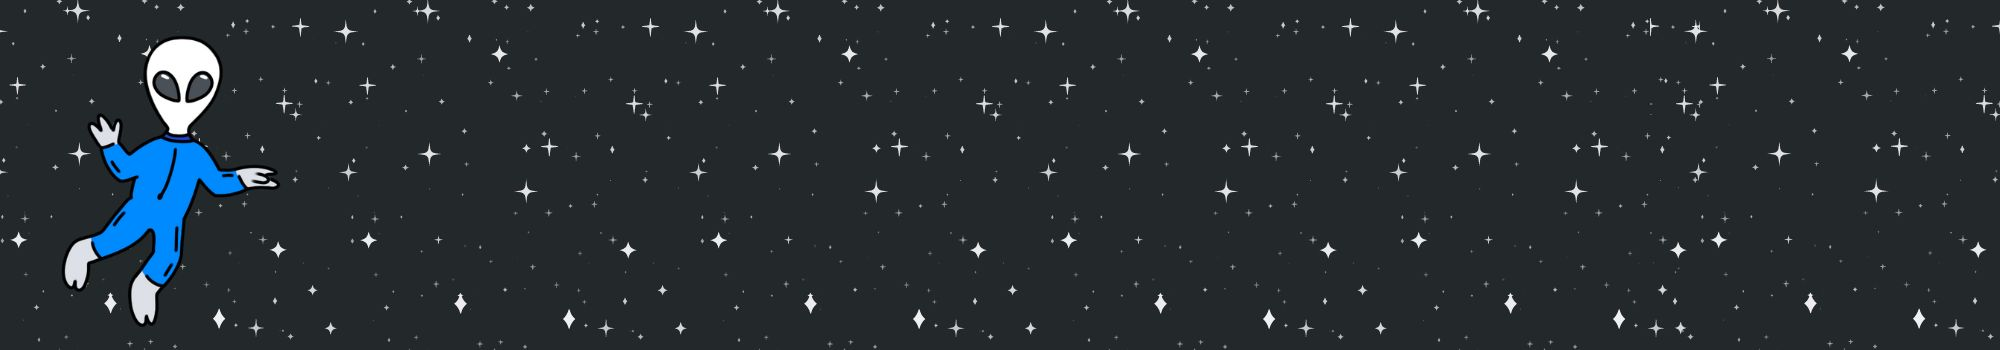

## Unlock Your Badge

<a id="badge1_score"></a>

Run the cell below to see whether you've passed the challenge. Passing score is 7/8 (87.5%). If you have successfully passed, a password will be revealed. 

Please do not change the code in this cell. 



In [ ]:
# Run this cell to check whether you've passed.

from qc_grader.challenges.quantum_explorers23 import grade_badge7_score

grade_badge7_score('en')


<div class="alert alert-block alert-warning">

The following section contains a bonus section and additional information. If you want to unlock your badge now, please run the cell above.

</div>

## Bonus: Can we _truly_ learn a scrambler?

Congratulations! We have successfully learnt a 3-qubit black hole scrambling process and decoded information from the Hawking radiation.
However, can we truly learn a scrambler? In this section, we will explore a common pitfall in quantum machine learning - the barren plateau.

### Barren Plateaus
The barren plateau is a phenomenon in which the gradient of the cost function vanishes exponentially with the number of qubits. For the partial derivative of a cost function $\partial_{\theta_k} C$ with respect to $k^\text{th}$ parameter $\theta_k$, the barren plateau arises as a consequence of vanishingly small variance and vanishing average gradient.
$$
\begin{aligned}
\left<\partial_{\theta_k} C\right> &= 0 \\
\text{Var}\ \partial_{\theta_k} C &= \left<\partial_{\theta_k} C^2\right> - \left<\partial_{\theta_k} C\right>^2 
\end{aligned}
$$

This barren plateau is relevant to our quest of decoding infalling black hole information as its presence [precludes the learning of a scrambler](https://arxiv.org/abs/2009.14808).

So, let us investigate the cost landscape of our Hilbert-Schmidt test cost function. The gradient of our cost function is defined as
$$
\frac{\partial}{\partial\theta_k} P(00 \cdots 0)
$$

for parameter $\theta_k$. We begin by crafting a quantum circuit based on the [minimal model for fast scrambling](https://arxiv.org/abs/2005.05362).

In [ ]:
def parameterized_scrambler(n, t):
    qc = TwoLocal(num_qubits=n,
             rotation_blocks=['rx', 'ry', 'rz'],
             entanglement_blocks='rzz',
             entanglement='linear',
             reps=t,
             insert_barriers=True,
             skip_final_rotation_layer=True).decompose()
    qc.name = f"{t}-block ansatz"

    return qc

In [ ]:
n_qubits = 3
t = 3
g = np.pi/2

scrambler = parameterized_scrambler(n_qubits, t)

display(scrambler.draw('mpl'))

Here, `t` is the time of the operator and `g` is the entangling strength. Here, the time `t` simply refers to how many times we applied the circuit block. As `t` increases, the compiled circuit becomes more scrambling. We construct a conjugate scrambling operator $U_s^*$ with a set of target parameters $\{\theta_{target}\}$ and then obtain the original scrambling operator $U_s$ by conjugating the matrix directly.

In [ ]:
def random_paramameters(n, g, t):
    # generate random set of parameters for the conjugated target
    params_list = []
    g_params = np.ones(n_qubits-1)*g
    for i in range(t):
        _params = np.random.uniform(0, 2*np.pi, n_qubits*3)
        params_list += [*_params, *g_params]

    return params_list

def create_target_op_for_scrambler(n, g, t):
    # create a target operator for the scrambler to learn via the Hilbert-Schmidt test
    # returns the target operator and the list of parameters used to generate it
    target_conj = parameterized_scrambler(n_qubits, t)

    params_list = random_paramameters(n, g, t)

    # obtain the target operator
    target_conj = target_conj.assign_parameters(params_list)
    target_op = Operator(target_conj).conjugate()

    return target_op, params_list

In this section, we will demonstrate that different scrambling strength, by changing the `t`, result in different learnabilities of the scrambler. We will also prepare them with the previous procedure.

In [ ]:
t_list = [1, 2, 4, 8, 16]

target_list = []
params_list = []
ansatz_list = []

for t in t_list:
    target, params = create_target_op_for_scrambler(n_qubits, g, t)
    target_list.append(target)
    params_list.append(params)
    ansatz_list.append(parameterized_scrambler(n_qubits, t))

Now, we apply perturbation to the target parameters

$$
\theta^{(i)} = \theta_{target}^{(i)} + \epsilon R
$$

where $\epsilon$ spans over $[\theta_{target}-\pi,\ \theta_{target}+\pi]$ and R is a random variable $-1<R<1$.

In [ ]:
def scan_parameters(params, n_qubits, t, scan_num):
    # generate the scanned parameters for the given parameters 
    assert len(params) == n_qubits*3*t + (n_qubits-1)*t
    epsilons = np.linspace(-np.pi, np.pi, scan_num)
    scanned_params = []

    for epsilon in epsilons:
        _params = params.copy()
        for i in range(t):
            for j in range(n_qubits*3):
                _params[i*(n_qubits*3+n_qubits-1)+j] += epsilon*np.random.uniform(-1, 1)
        scanned_params.append(_params)

    return epsilons, scanned_params

scanned_params_list = []
for t, params in zip(t_list, params_list):
    epsilons, scanned_params = scan_parameters(params, n_qubits, t, 101)
    scanned_params_list.append(scanned_params)

We can now run the simulation for different values of $\epsilon$ and obtain a slice of the cost landscape. A set of parameterized Hilbert-Schmidt test circuits are generated in the following:

In [ ]:
params_hst_list = []

for target, ansatz in zip(target_list, ansatz_list):
    hst = hilbert_schmidt_test(target, ansatz)
    params_hst_list.append(hst)
    
hst.draw('mpl')

In [ ]:
cost_list = []

for hst, _params_list in zip(params_hst_list, scanned_params_list):
    sampler = Sampler()
    hs_test_result = sampler.run(circuits=[hst]*len(epsilons), 
                                 parameter_values=_params_list).result()
        
    prob0 = np.zeros(len(epsilons))
    for i, dist in enumerate(hs_test_result.quasi_dists):
        if 0 in dist.keys():
            prob0[i] = dist[0]
    cost = 1 - np.array(prob0)

    cost_list.append(cost)

In [ ]:
for t, cost in zip(t_list, cost_list):
    plt.plot(epsilons, cost, '.--', label=f't={t}')
plt.xlabel(r'$\epsilon$')
plt.ylabel('cost')
plt.legend()
plt.show()

Unsurprisingly, we see a narrow gorge surrounded by a barren plateau for all choice of `t`. However, in the case of a strongly scrambling circuit, i.e. high `t`, the gorge is notedly more narrow. It is evident that when the parameters are no longer in the vicinity of the target parameters, the gradient of the cost function vanishes exponentially, resulting in the barren plateau where convergence from training is inefficient.

### But Quantum Machine Learning still works?
Clearly, quantum machine learning is still actively pursued by the research community. So, what are the differences that allows for efficient learning? It shown in literature that [a sufficiently deep parameterized circuit will always result in a vanishing gradient](https://www.nature.com/articles/s41467-018-07090-4). Efficient learning can be achieved by using a structured ansatz based on intuition on the system. In our case, we will be comparing the gradient from a "good" ansatz for our scrambler (we use directly the parameterized circuit for generating the scrambler) versus a scrambler that is randomly generated.

We use the parameterized Hilbert-Schmidt test generated previously and evaluate the analytical gradient with the parameter shift rule. Here we will sample only `n_ensemble = 300` samples for each parameter set, so the results may deviate slightly from the absolute limit.

In [ ]:
n_ensemble = 300
parameter_index = [0]

grad_ensemble_list = []
for t, hst in zip(t_list, params_hst_list):
    grad_ensemble = []
    params_ensemble = [random_paramameters(n_qubits, g, t) for _ in range(n_ensemble)]

    for params in params_ensemble:
        grad = param_shift_gradient(params, hst, sampler, theta_index=parameter_index)
        grad = -np.array(grad)
        grad_ensemble.append(grad)

    grad_ensemble_list.append(grad_ensemble)

Similarly, we do the same for a randomly generated target scrambler unitary.

In [ ]:
random_target = random_unitary(2**n_qubits, seed=42)
random_params_hst_list = []

for ansatz in ansatz_list:
    hst = hilbert_schmidt_test(random_target, ansatz)
    random_params_hst_list.append(hst)

random_grad_ensemble_list = []
for t, hst in zip(t_list, random_params_hst_list):
    grad_ensemble = []
    params_ensemble = [random_paramameters(n_qubits, g, t) for _ in range(n_ensemble)]

    for params in params_ensemble:
        grad = param_shift_gradient(params, hst, sampler, theta_index=parameter_index)
        grad = -np.array(grad)
        grad_ensemble.append(grad)

    random_grad_ensemble_list.append(grad_ensemble)

In the above we prepare random parameters and obtain the gradient for parameter $\theta_0$. Then,we  calculate the variance of the gradients.

In [ ]:
grad_list = []
grad_var_list = []

random_grad_list = []
random_grad_var_list = []

for t, grad_ensemble, random_grad_ensemble in zip(t_list, grad_ensemble_list, random_grad_ensemble_list):
    grad = np.mean(grad_ensemble)
    grad_var = np.var(grad_ensemble)
    grad_list.append(grad)
    grad_var_list.append(grad_var)

    random_grad = np.mean(random_grad_ensemble)
    random_grad_var = np.var(random_grad_ensemble)
    random_grad_list.append(random_grad)
    random_grad_var_list.append(random_grad_var)


plt.errorbar(t_list, grad_list, yerr=grad_var_list, fmt='o--')
plt.errorbar(t_list, random_grad_list, yerr=random_grad_var_list, fmt='o--')
plt.xlabel('t')
plt.ylabel(r'$\langle \partial_{\theta_0}C \rangle$')
plt.legend(['target in ansatz', 'target not in ansatz'])
plt.show()

In the case of the average cost function gradient $\langle \partial_{\theta_0} C \rangle$, we observe that they fluctuate around zero for both cases with increasing `t`. The values of $\langle \partial_{\theta_0} C \rangle$ do not necessarily converge to zero with `t` here due to our finite sampling.

In [ ]:
plt.plot(t_list, grad_var_list, 'o-')
plt.plot(t_list, random_grad_var_list, 'o-')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel(r'Var $\partial_{\theta_0}C$')
plt.legend(['target in ansatz', 'target not in ansatz'])
plt.show()

Whereas the variance of the cost function gradient $\text{Var}\ \partial_{\theta_0} C$ is much higher at small `t` for the "good" ansatz, indicating trainability. As the scrambling strength increases, the variance of the cost function gradient decreases in both cases leading to barren plateau.

Our simple study shows the importance of a structured ansatz, which is a common practice in quantum machine learning. In a nutshell, quantum machine learning tends to work well when a suitable ansatz was chosen.

Back to our original question: **can we truly learn a scrambler?** In our example, we demonstrated the difficulty in learning as the unitary became increasingly scrambling. This is also true when the size of the (black hole) system increases. We may be able to decode a message from a 3-qubit black hole, but it is unlikely that we can achieve the same for a realistic black hole, combined with the difficulty of having full control of the emitted Hawking radiation. This is the same conclusion presented in a paper aptly named "[barren plateaus preclude learning scramblers](https://arxiv.org/abs/2009.14808)". 

Perhaps, Alice's secret is safe after all in the black hole.


# Additional Information

**Challenge created by:** Soon Teh, Astri Cornish